<div style="border: 2px solid #8A9AD0; margin: 1em 0.2em; padding: 0.5em;">

# Pangeo Notebook in Galaxy - Introduction to Xarray

by [Anne Fouilloux](https://training.galaxyproject.org/hall-of-fame/annefou/)

CC-BY licensed content from the [Galaxy Training Network](https://training.galaxyproject.org/)

**Objectives**

- What is Pangeo notebook?
- How to start Pangeo Notebook in Galaxy?
- What are the main software components of the Pangeo ecosystem?
- What is Xarray?
- How to manipulate Xarrays?
- How to print metadata information?
- How to make a selection?
- How to visualize?
- How to filter?
- How to make reduction operations (mean, max, min)?
- How to resample my data?
- Where to go next?

**Objectives**

- Learn to get metadata information using Xarray Galaxy Tools
- Learn to select data
- Learn to visualize data
- Learn to filter, make reduction operations (mean, max, min)
- Learn to resample my data
- Learn to cite and contribute to Pangeo

**Time Estimation: 1H**
</div>


<h1 class="no_toc" id="introduction">Introduction</h1>
<p>In this tutorial, we will learn about <a href="https://xarray.pydata.org/">Xarray</a>, one of the most used Python library from the <a href="https://pangeo.io/">Pangeo</a> ecosystem.</p>
<p>We will be using data from <a href="https://ads.atmosphere.copernicus.eu/">Copernicus Atmosphere Monitoring Service</a>
and more precisely PM2.5 (<a href="https://en.wikipedia.org/wiki/Particulates#Size,_shape_and_solubility_matter">Particle Matter &lt; 2.5 μm</a>) 4 days forecast from December, 22 2021. Parallel data analysis with Pangeo is not covered in this tutorial.</p>
<blockquote class="comment" style="border: 2px solid #ffecc1; margin: 1em 0.2em">
<h3 id="-icon-comment--remark">💬 Remark</h3>
<p>This tutorial uses data on a regular latitude-longitude grid. More complex and irregular grids are not discussed in this tutorial. In addition,
this tutorial is not meant to cover all the different possibilities offered by Xarrays but shows functionalities we find useful for day to day
analysis.</p>
</blockquote>
<blockquote class="agenda" style="border: 2px solid #86D486;display: none; margin: 1em 0.2em">
<h3 id="agenda">Agenda</h3>
<p>In this tutorial, we will cover:</p>
<ol id="markdown-toc">
<li><a href="#analysis" id="markdown-toc-analysis">Analysis</a>    <ol>
<li><a href="#import-python-packages" id="markdown-toc-import-python-packages">Import Python packages</a></li>
</ol>
</li>
</ol>
</blockquote>
<h1 id="analysis">Analysis</h1>
<h2 id="import-python-packages">Import Python packages</h2>
<p>Some packages may need to be installed first. For example <code style="color: inherit">cmcrameri</code> is missing, so we need to install it by entering the following command in a new cell of your Jupyter Notebook:</p>


In [1]:
pip install cmcrameri

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<p>Then we need to import all the necessary packages in our Jupyter Notebook.</p>


In [2]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import pandas as pd

<h2 id="open-and-read-metadata">Open and read metadata</h2>
<p>The netCDF dataset can now be opened with Xarray:</p>


In [3]:
!wget https://zenodo.org/record/5805953/files/CAMS-PM2_5-20211222.netcdf

--2022-05-29 19:01:19--  https://zenodo.org/record/5805953/files/CAMS-PM2_5-20211222.netcdf
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108646028 (104M) [application/octet-stream]
Saving to: ‘CAMS-PM2_5-20211222.netcdf’

CAMS-PM2_5-20211222 100%[===================>] 103.61M  20.7MB/s    in 5.7s    

2022-05-29 19:01:26 (18.3 MB/s) - ‘CAMS-PM2_5-20211222.netcdf’ saved [108646028/108646028]



In [4]:
dset = xr.open_dataset("CAMS-PM2_5-20211222.netcdf")

<p>Once opened, we can get metadata using <code style="color: inherit">print</code> statement.</p>


In [5]:
print(dset)

<xarray.Dataset>
Dimensions:     (longitude: 700, latitude: 400, level: 1, time: 97)
Coordinates:
  * longitude   (longitude) float32 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Data variables:
    pm2p5_conc  (time, level, latitude, longitude) float32 ...
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)


<p>Below is what you should get if everything goes fine.</p>
<blockquote class="code-out" style="border: 2px solid #fb99d0; margin: 1em 0.2em">
<h3 id="-icon-code-out--output">🖥 Output</h3>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit"> &lt;xarray.Dataset&gt;
 Dimensions:     (longitude: 700, latitude: 400, level: 1, time: 97)
 Coordinates:
   * longitude   (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
   * latitude    (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
   * level       (level) float32 0.0
   * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Data variables:
  pm2p5_conc  (time, level, latitude, longitude) float32 0.4202 ... 7.501
Attributes:
  title:        PM25 Air Pollutant FORECAST at the Surface
  institution:  Data produced by Meteo France
  source:       Data from ENSEMBLE model
  history:      Model ENSEMBLE FORECAST
  FORECAST:     Europe, 20211222+[0H_96H]
  summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
  project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)
</code></pre></div>  </div>
</blockquote>
<blockquote class="tip" style="border: 2px solid #FFE19E; margin: 1em 0.2em">
<h3 id="-icon-tip--command-not-found">💡 Command not found</h3>
<p>If you get an error with the previous command, first check the location of the input file <code style="color: inherit">CAMS-PM2_5-20211222.netcdf</code>:
it needs to be in the same directory as your Jupyter Notebook.</p>
</blockquote>
<p>We can identify 4 different sections:</p>
<ol>
<li><strong>Dimensions</strong>: name of dimensions and corresponding number of elements;</li>
<li><strong>Coordinates</strong>: contains coordinate arrays (longitude, latitude, level and time) with their values.</li>
<li><strong>Data variables</strong>: contains all the variables available in the dataset. Here, we only have one variable. For each variable, we get information on its shape and values.</li>
<li><strong>Attributes</strong>: at this level, we get all the attributes of the dataset.</li>
</ol>
<p>We can also get metadata information for each coordinate and data variables using “.” followed by the coordinate or data variable name.</p>


In [6]:
print(dset.time)

<xarray.DataArray 'time' (time: 97)>
array([              0,   3600000000000,   7200000000000,  10800000000000,
        14400000000000,  18000000000000,  21600000000000,  25200000000000,
        28800000000000,  32400000000000,  36000000000000,  39600000000000,
        43200000000000,  46800000000000,  50400000000000,  54000000000000,
        57600000000000,  61200000000000,  64800000000000,  68400000000000,
        72000000000000,  75600000000000,  79200000000000,  82800000000000,
        86400000000000,  90000000000000,  93600000000000,  97200000000000,
       100800000000000, 104400000000000, 108000000000000, 111600000000000,
       115200000000000, 118800000000000, 122400000000000, 126000000000000,
       129600000000000, 133200000000000, 136800000000000, 140400000000000,
       144000000000000, 147600000000000, 151200000000000, 154800000000000,
       158400000000000, 162000000000000, 165600000000000, 169200000000000,
       172800000000000, 176400000000000, 180000000000000, 18360

<blockquote class="question" style="border: 2px solid #8A9AD0; margin: 1em 0.2em">
<h3 id="-icon-question--questions-cam-pm25-dataset">❓ Questions CAM PM2.5 Dataset</h3>
<p>What is the name of the variable for Particle matter &lt; 2.5 μm and its physical units?</p>
<blockquote class="solution" style="border: 2px solid #B8C3EA;color: transparent !important; margin: 1em 0.2em">
<div style="color: #555; font-size: 95%;">Hint: Select the text with your mouse to see the answer</div><h3 id="-icon-solution--solution">👁 Solution</h3>
<ol>
<li>To get metadata information from <code style="color: inherit">pm2p5_conc</code> Data variable, we use its variable name and print it. Printing it will only print metadata, not the values.
<ul>
<li>Variable name: <code style="color: inherit">mass_concentration_of_pm2p5_ambient_aerosol_in_air</code></li>
<li>Units: <code style="color: inherit">µg/m3</code></li>
</ul>
</li>
</ol>
<blockquote class="code-in" style="border: 2px solid #86D486; margin: 1em 0.2em">
<h3 id="-icon-code-in--input-python">⌨️ Input: Python</h3>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">print(dset.pm2p5_conc)
</code></pre></div>      </div>
</blockquote>
<blockquote class="code-out" style="border: 2px solid #fb99d0; margin: 1em 0.2em">
<h3 id="-icon-code-out--output">🖥 Output</h3>
<div class="language-bash highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">   &lt;xarray.DataArray <span class="s1">'pm2p5_conc'</span> <span class="o">(</span><span class="nb">time</span>: 97, level: 1, latitude: 400, longitude: 700<span class="o">)&gt;</span>
<span class="o">[</span>27160000 values with <span class="nv">dtype</span><span class="o">=</span>float32]
   Coordinates:
<span class="k">*</span> longitude  <span class="o">(</span>longitude<span class="o">)</span> float32 335.0 335.1 335.2 335.4 ... 44.75 44.85 44.95
<span class="k">*</span> latitude   <span class="o">(</span>latitude<span class="o">)</span> float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
<span class="k">*</span> level      <span class="o">(</span>level<span class="o">)</span> float32 0.0
<span class="k">*</span> <span class="nb">time</span>       <span class="o">(</span><span class="nb">time</span><span class="o">)</span> timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
   Attributes:
       species:        PM2.5 Aerosol
       units:          µg/m3
       value:          hourly values
       standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air
</code></pre></div>      </div>
</blockquote>
</blockquote>
</blockquote>
<blockquote class="comment" style="border: 2px solid #ffecc1; margin: 1em 0.2em">
<h3 id="-icon-comment--different-ways-to-access-data-variables">💬 Different ways to access Data variables</h3>
<p>To access a variable or coordinate, we can use “.” or specify its name as a string between squared brackets “[” “]”. For example:</p>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">print(dset['pm2p5_conc'])
# or alternatively
print(dset.pm2p5_conc)
</code></pre></div>  </div>
<p>When we print a variable or coordinate, we do not get all the individual values but a <code style="color: inherit">DataArray</code> that contains a lot of very useful metadata such as coordinates (if they have some), all the attributes such as the name, the physical units, etc.</p>
</blockquote>
<h2 id="select--subset-from-coordinates">Select / Subset from coordinates</h2>
<p>We often want to select elements from the coordinates for instance to subset a geographical area or select specific times or a specific time range.</p>
<p>There are two different ways to make a selection:</p>
<ul>
<li>by index</li>
<li>by value</li>
</ul>
<h3 id="select-elements-from-coordinate-by-index">Select elements from coordinate by index</h3>


In [7]:
print(dset.isel(time=0))

<xarray.Dataset>
Dimensions:     (longitude: 700, latitude: 400, level: 1)
Coordinates:
  * longitude   (longitude) float32 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
    time        timedelta64[ns] 00:00:00
Data variables:
    pm2p5_conc  (level, latitude, longitude) float32 ...
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)


<p>You should see that the coordinate <code style="color: inherit">time</code> “disappeared” from the <code style="color: inherit">Dimensions</code> and now the variable <code style="color: inherit">pm2p5_conc</code> is a 3D field with longitude, latitude and level.</p>
<h3 id="select-elements-from-coordinates-by-value">Select elements from coordinates by value</h3>
<p>When selecting elements by the value of the coordinate, we need to use the same datatype. For instance, to select an element from
<code class="language-plaintext highlighter-rouge">time</code>, we need to use <code style="color: inherit">timedelta64</code>. The code below will give the same result as <code style="color: inherit">isel(time=0)</code>.</p>


In [8]:
print(dset.sel(time=np.timedelta64(0)))

<xarray.Dataset>
Dimensions:     (longitude: 700, latitude: 400, level: 1)
Coordinates:
  * longitude   (longitude) float32 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
    time        timedelta64[ns] 00:00:00
Data variables:
    pm2p5_conc  (level, latitude, longitude) float32 ...
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)


<p>The output will be very similar to what we did previously when selecting from coordinates by index.</p>
<blockquote class="question" style="border: 2px solid #8A9AD0; margin: 1em 0.2em">
<h3 id="-icon-question--select-a-single-time-for-pm25">❓ Select a single time for PM2.5</h3>
<p>How to select the forecast for December, 24th 2021 at 12:00 UTC?</p>
<blockquote class="solution" style="border: 2px solid #B8C3EA;color: transparent !important; margin: 1em 0.2em">
<div style="color: #555; font-size: 95%;">Hint: Select the text with your mouse to see the answer</div><h3 id="-icon-solution--solution">👁 Solution</h3>
<p>Data starts on December, 22nd 2021 at 00:00 UTC so we need to add 2 days and 12 hours to select the correct time index.</p>
<blockquote class="code-in" style="border: 2px solid #86D486; margin: 1em 0.2em">
<h3 id="-icon-code-in--input-python">⌨️ Input: Python</h3>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">print(dset.sel(time=(np.timedelta64(2,'D')+ np.timedelta64(12,'h'))))
</code></pre></div>      </div>
</blockquote>
<blockquote class="code-out" style="border: 2px solid #fb99d0; margin: 1em 0.2em">
<h3 id="-icon-code-out--output">🖥 Output</h3>
<div class="language-bash highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">&lt;xarray.Dataset&gt;
Dimensions:     <span class="o">(</span>longitude: 700, latitude: 400, level: 1<span class="o">)</span>
Coordinates:
<span class="k">*</span> longitude   <span class="o">(</span>longitude<span class="o">)</span> float32 <span class="nt">-24</span>.95 <span class="nt">-24</span>.85 <span class="nt">-24</span>.75 ... 44.75 44.85 44.95
<span class="k">*</span> latitude    <span class="o">(</span>latitude<span class="o">)</span> float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
<span class="k">*</span> level       <span class="o">(</span>level<span class="o">)</span> float32 0.0
<span class="nb">time        </span>timedelta64[ns] 2 days 12:00:00
Data variables:
    pm2p5_conc  <span class="o">(</span>level, latitude, longitude<span class="o">)</span> float32 0.4499 0.4421 ... 10.71
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
<span class="nb">source</span>:       Data from ENSEMBLE model
<span class="nb">history</span>:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ <span class="o">(</span>http://macc-raq.gmes-atmosphere.eu<span class="o">)</span>
</code></pre></div>      </div>
</blockquote>
</blockquote>
</blockquote>
<h2 id="plotting">Plotting</h2>
<p>To plot a map, you need to select a variable with data on geographical coordinates (latitude, longitude). In addition, coordinates need to be sorted, and preferably in increasing order. This is not the case for the coordinate “longitude” which is given between 360 and 0.</p>
<p>Let’s shift the longitudes by 180 degrees so that they come in the range of -180 to 180.</p>
<h3 id="shift-longitudes">Shift longitudes</h3>
<p>We print the longitudes before and after shifting them so we can see what is happening.</p>


In [9]:
print(dset.longitude)

<xarray.DataArray 'longitude' (longitude: 700)>
array([335.05, 335.15, 335.25, ...,  44.75,  44.85,  44.95], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 335.0 335.1 335.2 335.4 ... 44.75 44.85 44.95
Attributes:
    long_name:  longitude
    units:      degrees_east


<p>The longitude values are between <code style="color: inherit">335.05</code> and <code style="color: inherit">44.95</code> degrees.</p>
<p>Let’s now shift the longitudes to get values between <code style="color: inherit">-180</code>, <code style="color: inherit">180</code> degrees.</p>


In [10]:
dset.coords['longitude'] = (dset['longitude'] + 180) % 360 - 180
print(dset.longitude)

<xarray.DataArray 'longitude' (longitude: 700)>
array([-24.950012, -24.849976, -24.75    , ...,  44.75    ,  44.850006,
        44.949997], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95


<p>Indeed, the longitudes have been shifted and now the values are between <code style="color: inherit">-24.95</code> and <code style="color: inherit">44.95</code>.</p>
<h3 id="visualize-on-a-map-pm25-for-december-24th-2021-at-1200-utc">Visualize on a map PM2.5 for December, 24th 2021 at 12:00 UTC</h3>


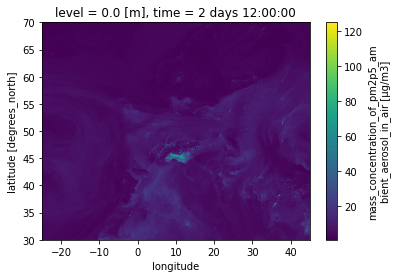

In [11]:
dset.sel(time=(np.timedelta64(2,'D')+ np.timedelta64(12,'h'))).pm2p5_conc.plot()

<p>We will get a figure like the one below:</p>
<p><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAgAElEQVR42ux9CbgsZXWtgCCCoFwQmRREBYXLIA6IKCAi
oEmcNc/ZRINDnDUOOKBRFC7cmzjEOA9RozExMUYTjWNMHAMig/OAY8z49Gli
XqZ33r/r7PXf9e/a/1Dd1ef0PdT9vn1Pd5/q6u7qOv+qvffaa11rZWXlWlNM
McUUU0yxo8V0EKaYYoopppgAbIoppphiiikmAJtiiimmmGKKCcCmmGKKKaaY
AGyKKaaYYoopJgCbYooppphiignApphiiimmmABsiimmmGKKKSYAm2KKKaaY
YooJwKaYYooppphiArAppphiiikmAJtiiimmmGKKCcCmmGKKKaaYYgKwKaaY
YoopJgCbYooppphiignApphiiimmmGICsCmmmGKKKSYAm2KKKaaYYooJwHa8
A3Kta30nxBkLfo23hHjJDnRMPhHi/4b45IzPv06Ifw3xX/N8bt3H4Rv43JP/
bj79HU4xxQRg1zgAC/+eGuLvQ/yfEG8S4Chse3yIS0P8XH8eXwGwR6/l5x7r
Ndf43Lk4xDdC/CzEV0M8fJkBLPx7YIhP6znwCfO7I0L8aYh/CvG/Q3woxJGz
nn/h36YQfxLi30J8N8SDK/u6qx5DeW8fD3Eo/W6nEBeG+BeNLfLYtH5NADYd
kB0UwMK/s0L8Q4ijQ+yjAHBBZtvddBF5qmZHT9L7u00ANtfne1GIW4bYOcSJ
IX4c4o5LDGBnKIi9wAGw24d4lALPriFeLIAy6/kX/r0zxB+EuF6IOynIHZ3Z
1376+weE2D3ERSE+S79/TIivhTgkxMEhvhzisdP6NQHYdEAIwHQhenaIb+mV
3rvlD1p/98EQTzDPvTzEffW2LGQf1qtX+WN74IIB7PdDvNRcwf59ZtszQ/yQ
r1rDv++FOLsVTPQ4/UaIK/Sq+o0hbhTiLzQD+YgsZLMAWPh3foj/0bKllA1f
ZRd43der9fVkm0+FOCDEbytwyNX7rWmfB4V4j2YUVwtor8G59L4QTy/8Xo7f
j0L8XYhfNZ/vF0JcFuKnIb4f4oX0vA+EeKLZl3wP99bs5LdC/KOCgDy+ufI+
H20BzNlmk76/fYeef+HfniH+U7I6+v3bChdY50hmSPfl+f8uf1N6X7LGc+j3
j2KAm2ICsAnAVm8/Rf4w9EpPMpXXypWk/u7hsmjS844K8RPdbk9ddH4lxLVD
nBDin3HFWVrI9er0J4W4U+Z5Ap6/bK5i3QVHM6+/MI+9P7fYFgDsswpaB+uC
+QUBDT0GHwtx3pgZmANgckxvo1fpH1Ngku9lF3kdKT3RhcilmmlI9nl4iG9L
1pB57WeXvoPG939dBafcRcHZmrFs1vPl983nOy3EMfrej9Vt702lv8/Rvo7T
C6zdNBOSz3oDBbNbhThwBAATcPyRPU9bzj89J/7d7O8ZIf6M7sdzO/x7eYjf
NdtfFeJ+eluA+UT63W3lomlavyYAmw5ICmBfkStJ+t2BSkQQUNpLM49DKWt4
k97+5RB/bfb7WizoC8rAvsWLpZZ95MZhzrbPD/Eu89g7+Cq/EcAeQvffw4uO
ZAgh3rtgAHu9eb2v0P1jsMBqOe97Zl/PCfHmBZ5Hb9UsfafM799kSmxHlEqI
mln+FpFiJLO/BfXeXq23Tw/x9RB3EPBrfK9FANMLOMnYHzTL+RfizrYaEP79
Wu41NZu/wDwmGfYj9fb/IBvT+7fQ15r6YBOATQBGAPZzLeHwFbiUtQ7W30tJ
8Vn0B3xXvf1MLZnw8/4VC/yCAOxyU6bct5KB/bl57M9myMDOoPtvN2UuWRQ/
smAAe0luEZbtQvw3ZSz/bb6Pn9ljMOJ3cZFmQXsXthFw+3XD1OTPd6KSF/5J
Mw45795G279Ge247K7icRL97kr6+PPd1pfdRA7Dw74baY3rurOefZmA/N9s/
nTMw87uXA5DpsStNBnZ7+t1tpgxsArAp+gAmvauTC9veJ8QXZfHQPsbO+viD
pP81C5lBr1b/tRB3LvQgzqf7p1d6YD8wPbDvztADWySAfXxEAJPv5xsDzoFz
S99BA5HjqlyviLZ7s8nAbmE+37f0QmN3ysDeTtvLZ/pmiLvlPlv4t79+dy+e
BcCUjHFZrlfVev5RD+wW9Pvfq/TAPmV6YD83PbBfo9//6tQDmwBsij6APVUX
gEPpavRe5qr5x0rW+C16fC8FhIdpKUXidtKPWGAGdrZSmI/ShedjDSzEJ+tn
eMJQFuK8AKalJbfEqb9/F5MC5gSwXTQjeZb2pnbR3tPtRv4OnqM0+gMbtr07
fV976PHjzyc9xUcQI/AfGcD08a8rSeMF9NjtNHvbVRf+DxZKw7to//CxMuOn
t3fV3+0d4vMg0Mx7/un3+U59TydXWIg31N/fT9/ThYaF+Fgt7x+s5JwvTSzE
CcCm8FmIT9NM7Gd6VfxSp16/YhdDmZlRttg/aYP9Y5i1WuAc2NO02f9TvcLn
ORxh651L92+ti/q/g3wxsJw3L4DdWfexa+Y1T9IFWi4QXjEPgBEL8Z26yP5Y
CShnjHz85b//MBnbuYXtn63vx2Mh3l8vKn6mBJtXOQD2PH3O4Yb9d4W+9j9r
b/N6mdd/pD6f4y36u0fo/X8zn+cmXCkYcP4Ji/G9ur/v2TkwW11Qiv9X9fz8
BF/oKDlli/YB//c0BzYB2BRTlBbmv9SF9ONzKHH8RBev82jxfcx0fOf6XoRx
+TfTsZhiArAppphiRwKvPTSLfPh0PKaYAGw5/iiPVFIE4qc6i7VJ+0zf0J/7
TF/eFNdg8DpLs1mRerr2dEymmABs+f5Id9H+wKFa43429Q0unL68KaaYYooJ
wJYVwM4ElVZJFAfSMPHXpi9viimmmGICsGUFsDdBa9DK9wiLbPrypphiiikm
AFtG8NpNKcA3GgJgOgB5icQu19plZa9r7TPFMsVOm1aDbw+IvQvRut3eA/fb
FDu3bRc/+xTre/45IeMu865bZ5523ZUTjr1ONWQ2bwKfjQ1g9xLqNt0fXEKU
E/aMne6/9rHzA7f/HBh3u/YvJ9H83Nz7WIJIPtOuD8rGmdd5cHI7F7nf233V
9tG6bTF2f+jqzz0etnob9/l16LvsfV7zHcf7Dd+je57Q9rnzp3Ru9fYVQt5r
0zk18Nyz5/rogWNdO//0cbnonXfdOuHY3Vb+79/dtBpjvNYUyw1gMrX/K0Zb
jkkcW5YawOYErkHglQOxZQOvAUA2SxSfT8AyGnhhvxz8fpzvULaxi2dyvAAW
FeBpPVe83/Fjpf3gezprr0eunH3A47v7AtQWlIsXUY1/H0PO/ypIDQE3ev4Y
oHLrAGA//7vDqjEB2AYGMJ1vEeWK69NjIgj6UaXRfxSeXEsFYDNkXrk/sGXJ
ntYawOYGlMasa0jGlwUrBsWG70+2FzA4c8+Hr76mPF8yN3ofLRmTBbEaaHmA
1ZwBhfd09sFPTN5v83naAl7O483g1QBKQ2IsAPvXv7tJNSYAmwaZr7WUANaS
JTUsHhsSvKhcs9YAlgOvWlnSBTCnRNj77N4CiteWLEwfY/ArnSfV0mEl42qJ
3vYCXvs9JoJszB7Nc+zts/d/bAfSOYAqlj8HZmlN5cHC8RsbwI4/dteV//PD
G1ej5bWUxCb6l1eZStRXVSrsT8TzzehwflPbLWdNADYB2MLKhtc4ADP9hoUC
mAGZXOlwpizMlAgHA0ZmYW3dV0sfaxYA80qH8hnPusGjInC3ZDWy/Vn7/lr1
vWV/n/mbmqc02PodjQVgP/7hIdVoBLBT1Aj3KjNadG29fSHmYVVA+XKVbLup
arbuMgHYBGAL73XVwGtHBLbBV8prkH3lsq2hr1/Nrr0yFoN3LvPI7LMVdGqZ
Tu2c4/vdZw1ZVBfctyuB1z6PXjn7oCc0ZTxN5cYSiM1YKlx0BnZcALB//OFB
1Wh9LXVsuCrzO7FyegdlX8+h332I/eEmAJsAbPSMazTyxgbIvBYNYLkyYq18
6F3Re9lKkh05n20RFwS1C5yZFnUcGykbmv5c7mIkbqv9sZk+44C/t95FwUAA
c7PY8BpjANixAcB+9IMDqzESgIkB7UP19qtwmxwy7j8B2ARga5J17cgZ1iyU
+bUiboyVvbWUwrB9j2jhPZ9JP4XMadGUczfzol7foJId7W9Q2dA7HpYYNUd2
2XIsxwSwHwaAqoXaCF1Ccc4QABN3bO2B7aT3f8cBsPtNADYB2OJKaTMC2DKA
3aD+zxIA2CzzYdkZK+fcGPQd5s6tyv7WYmYqAa9ahkOzbB5ZZ1C/a46/wyEZ
2aIB7Jhjr73yvR8cUI15MjD1afuMsLUNgWMqIU4ANu4c1SIBbBlArHk+ZwfJ
vHKlwtw50kRvn/EcawawxlJaceH3+oIDz1l53tmHPKnt9ecdU/EuIGak0Y9Z
QjzmmGuvXP39A6oxK4Cp6/WXxbHabHe0IXF8eyJxXJMBbC3IDHOWEJet9Fhc
WHcAALPvt1baKjEDXUWNyrlmSSJjZWDZ76vQE5wFvITEcdbevzJfv8vJRpuV
SQo0+rUCsM3H7Lry9e8fWI1GFqK4h/8oxH+F+EGIRylN/vtkN/UaU1b8ltLo
7z7R6K+pALZWbLwRAG3IPNCiMi/3KriBwNE8fzUHdX4m8GrJnlolmQacc92x
wPyUc4Ey5rnjfTdVwkamrBkHtBl8B2SxY/4N5hiK7kiCec0xAOzoAGBf/d6B
1ZgGmScAGxfAFrTAz9tUb2GbLQNRpLVsOGo/bE7QcgHMLrwZoGFtQ1c2ysso
Gs5B+UxjnEtN35XtZTngVZpHg7QUaPbxMT4euQx2yN/k0H5YQwbm7XcsAPvS
9w6qxgRgE4DNB2AzgtAsJIex2GJjNvLHLkHOAlhrnWW5tPjMVXqudMWfkwFs
5rKZ+b3dly1JjgpehXJby/cNXcSo4ThvjyvHPpyF0NGgk2hfYwxQOSoA2BXf
O7gaE4BNADYcwBq0CheRuSxcdXvOjGzNAMxss969Lo+4kS39lUgrLay71hkn
B1BnkYOa6TsaAl6szKHsxWbwaQWkGcBrpkx1ZAD74ncPqcYEYBOAzQZg60SM
mEclYFb5qbUuJZau7ntlunUAsiKgFsqGs2bgMx3DgszUXMBVmd8a9Nkymet6
y7bNarUyJoDdKgDYpd+9cTUmAJsArA3A1ouV1yjaOw+Ffkj/bOHswwI49LKc
MRmJjsBu84xXC2V+hu988O8qGdgYJJ8SQ3RQRtOSrS4BiA2ZGRuThXjLY3Zb
+ex3DqvGBGATgC0vgFWGXMcs6a1VljWUkl2lM6+RfUqt71Vlys0ihTRSll4r
izXvr9YHau3lmky6iWSxhgDW7CVmLmLGBLAjA4B96js3rcYEYBOArS2ANTjd
jmIJ0ajfNpNg6oIp9dkszLDdBptKeoaRlawr91olXcOa/p68pliFNA/mjmho
WhXybZ3HmyVzM5n0qGSNIUzEAWr1Q8qo4wLYdVY+efXNqjEB2ARgawNgJY22
1uesIalj3QaYc/NfuYFmB9QWrUBf7fvYvpfzvqtlwhHnmWYd25jHKLUEXM3q
IhUwKvmJNSn0Oyoitc9YGu0YE8COCAD2iatvUY0JwCYAGw/Aam6xlWHWWRe0
RQHX2OzCWcqLrVYqow4z1zKuUvZlzoMobqvuycnnLLHmRgSyIT2qebPxFu3K
mTKvGRTnE7PPBjZrUWW+oVc7NoB99OojqjEB2ARg7SzEIWrYA2Z2moV1G4Fs
0RT8MQV7B2v2EXV9LV2ZcwtxbVjZy8SKQNLSA2okdtRKhMW+amO5cIhX29wi
vDNma3bUYajMlXth5Vw8jQlgt9i8+8oHv32rakwAtoEBTGyyQ/yRWmd/RVSV
Q7wwxA9JA+wezRnYLGyylgHLgQyzWQeqx6RPL6qMVe2/OOW7daHMVzIvVwZq
TmbhIscwWntAswDX4Hm2ocPIrRnZQJmrFrfpRQHYzQOAfeDbR1djGQAs/Lut
WrJ8IcQVIa6UnxOAzX9g3xri0Xp7NwU0AbBnzFRCHFLGGaKIPQY4jtTkXyrH
5RZZqQUzEV0iSQNl3qWH1wRml+F4zwNeBfmlmQFsDMAbKA81F4CFGAfArrvy
vm8dU40lATAR/b2nqtcfipgAbL6DuneIq2HURo/PDmBDwGStvMOkPOWUZ0bJ
ehapd5ibDZrByNKbExsVuGqzca39moGq8mPS61uH3cdSZGnVDRxl3GCA5mFP
s3FeOTanRDoGqNwsANh7v3VcNZYEwP5mKiGOf1CPD/H5EG8JcVmIN4TYUwHs
O5rqvinEPjMD2DoMWGbLa/QHNKrSwoKUNmYqRWX6W96cVutsV61c2PQ5SmSc
FgAbClAzgNjccmIzLvazeprNtK/G/dvS8yz+aCWi01gA9p5vHl+NJQGwu+r6
+qAQ90VMADZ/Xfa/Q5yo918e4sUhbiQGbSF2DnG+gFjm+efApnv3a+3RxhBb
IwBrmedZD93EeXsw82Rei+p3VbPTXN+rBDZDS2Yj9clm/U57TL6xwWve9zig
3JgbuygNydfKoosAsMM377Hy7m+eUI0lAbC361opLZs3a7xpArD5DuoBkmnR
/TuH+EDNZntmGr3nrrvgEuKYKvVjCv6O0vOqlAlrNPchs1wlhtoQAGOlieaZ
pEoW0UQEmUHXr3WoOaGij5F50TD3rOMgTcegBGDe+SID7aKKPxDEFpWB3TQA
2Du+cftqLAmAXTmVEBdzYP86xJHU+7ooxIH0+6eGeNcsAOYNT849oLng0tB6
gtxgAkBpXqcCVLXszJsbKw0nN8lFtZZgZ5ltmpPo0VICrJZ4x8i80LNl6aWR
XQ9Krxu90iq90qaLqQUD2GGb91z5va+fWI0lAbDXhzhqArDF9MEu0X7Xe6Xf
FeJtoHmGeB8D2tAMzJ7AfPIvTAYno0QwU8zZ11hTAHMsVGYpH7YOJw8mbhi1
+WYG3loB2LyEjYHlwyGM2Xm96NxZulxWRgBWddReZwB7y9dPqsaSAJiMKP2n
shEnGv2OosThARi7ys7iRVRV82hQbS8pDSwKtEZZTHOLxwDrFI+N2KRnWOh7
Fa/snav77hyolbpaCAil4fg52IdzqZ5UypHusZrVjWBApthUUtWLjNrFzyBP
ugUB2KFH77nyxq+dXI0lAbBDvZgAbAeRkirOBo0x51Oo3Q/+Q5uxEb9wAMst
XANnvkr9MQ/YSpqGxQXS9qcs2aE0AzaWu/AMx3yQeO+AbH2om0IRQFuHoUus
z9x7aMzaB/+N0ecZB8Cut/L6r92pGsukxBH+7R/iJogJwJYIwGZm380AYkOJ
Dc1/YAsCr9F8pSplwyF0+SxQtQ7aNsz6Jdn3Hg9bDXIYHk2hpdDPGTqqMEv5
LslKxnRxHnAxM0SSrFi9sOcMuxOQWwGTO9YDwG4SAOw1Xz2lGkuSgckQ8zdC
/JvO3v6/EF+aAGxZAGynTU0L/zyK9KMC1lBPrTUEs0Hg1WhaWQO4lkXHIxW0
LMiy/7P2euTKWXv/SrrYzQiKTWzDETOwksL+vN+7S78feE7mHJxbhYp7prCl
DMza7Rjrndb3Pgao3PjovVZe+ZW7VGNJAOzyEPvKvK3ev0uI100AtiSxdwCw
wXp5Q0oxiwasdQKxQdT5GSj1szITSz3D0tU9k3SwwJ11g0fV54laL3Jaldgb
gLZmNTIrVXzQOW1+tv69tIoPN5cwiWCTdd9m8PJigLnpWAD221+5azWWBMAu
ISDbWW9/fgKwHQTARqmjb0AAm5sJ2SAZNVRiqlZWzZW97HxX1vSywJBrFjpu
MWRcJIC1kn1aGXst30PhNWdWiskNMHumpjnQMkBXvEAaEcAOCQC27ct3q8aS
ANhHQlwvxCtDvFNFIz49AdgODmBD7OpnAbwxqOKDhHSHDCHPAmA14d45QMy1
f/cWek+4l7Iztz9UouK32H209MwWpTpfOq4DLkRqTtjNmXHtHGoxEy35sjEo
MVhp/7Lo2u2BnvksY/XADjl675WLvnxmNZYEwPZUZaNrh3hEiCdJSXECsGsA
gM0CQqNmf/MC1yKyvEVnnQXafG6gNUcISIDNI4YM9K2qMhdnEEnOZmAtFwaN
39dC5vIaMvaiq0Mp+7LgxVECMgf0FgFgBwcAu/BLZ1djR/ADC/8+oz+f1hCP
mQBsEQDWUB9fCyBbSAlz0UAzNHNbo3KpVWWIZplmjkvclF2FBmfeaVC/axYZ
sqHGlCWJKABPC5lmxv5tPB8BDiNWClpJL0kPzgMh+X49ELNgZn9nPtOYAHbQ
UddfeclVv1CNltdS0fJ/ZNm88G9TiA8re/DDLGoe/j0nxDd1MPmsEQAM5I4f
hXhBiPMK8fUJwBYNYGucjS0ymysuVrMA0NCFaExiRm2g285t4Ypc9zuvKWcr
C7NK9XZUP3olyQF0+EF2KqU+WOu50mhxMzc7sWXo21LnGbRCdAzSEFkQK2Vq
ug8uJY4JYC+68peq0Qhgp4Q4wQDYlhDP1tvPDnGh3j5KyRjXUX+vb4n4+ZwA
9gW8ZsO2WyYAGxvAdt7kn9A7EKAtlPQxRrlyrN5ebc6LhsItcPVKha2isQWS
RJXOPpJ9So48UpPEGtLLTHo+jXN62e/X7osz4BKb0/a+KqXVHvMw/B0DtGT0
QVikTSBmH2cAA4ipGPAYAHZgALDzrrxnNVpfywqXa3Z1oN4+UO5T9vUc2u5D
4mQ/BoBNPbD1BrDclVmBtbSMADZaeXHMXtSCe3u5K3IXcFrMJSvANK9q/1DH
5qFOAE2zeRmixhCyTRa8HALELLNhJYBPepp4TWRdAK99Hr06w8dg5IFVCbzw
nPBzPAC7wcrzrrh3NeYAsJ+Y3/9Yf74qxEPp8TeGuP8YJUS9ffsQt6NsT/pe
95gAbC0BrFZq2EFAbGZgaCz3NS1MY/X3GhTRcz5QEcwaRWdLPlZDy49DFuQh
6hslYJ177GHOcIeGa2zOmttDLfPSiMAlse+vrYY8hgwsB2IGqHIh73kMADsg
ANi5l9+nGmrOewnFOXMC2O84AHa/OQFss/6UHtdn9X2+LMTHtCf2yRDPnQBs
0QCWuzpbJ4LHupUXGyjuxX7HHBlYs1RUTnYIM10mq6jOX1nNy8zvh9LYW7ze
SgDWovw/qndcpc9VOleS71DJDzX6vv1M1pesqJJi+lcRvBS4zt7/sStn7/cY
H8AKEUuQFIsAsGddfr9qrGcJMfz7Vbp9SIiPCjDKDFiIIzzfMDUT3iPET0Ps
rY9fdxnU6zcwgO3rn8ytILbkYDZXP2wWEJvHWblWfmpwFnZNK2suAI4gbM7T
akj5bt7Zr7nsawp2QEMAbcj3OwvTcfAMnEOX55KhgFYXAcA4AwMQ2Z+t4DVm
CfFGR+2z8vQvPrAacwDYRYbEsUVvH21IHN/OkTi4txX+vVso8DoPdh8Bs0op
8TLzuy9OALZMNHpLu609dz0BrkXvrZWxOAOIDRr4HgheudmnhCrPNHYiEtTm
sEoAVuszDXHcLilwDFH7SADcAYwWKazmuUHH8bhJhSOTgQ0Ri+4RLwR4TNkw
Apg8RgDWFLK9Ab2xM7D9b7XPylMu++VqNLIQ36kU9v8K8YMQj1Ltwo8qjV5+
bqLtn6vsQ8nS7t5CzrAAZAFKH/ucZF96e2d6/PrLQPS4ZvTAWoEsx1zaATK1
edRBhorvuts5x6AIYJVejyfA2/tdiXafyYx6QDdniW4WtY2hmUnvu225GGmR
lvJ6XN7MlP3+Guj+TZJb8GIzVPkOZEDWkBAAC/dj+VBJHD0Q4/v4PbI4j72I
jC28/lgA9qQv/K9qrOcgs86WvUIlpH4YYlf63VXO9tfJ7Ge/EMdMALboEmIr
GJWysSFAVsru1nCQel4ga+lfNX1OsrrIsuFm0Mmr2tEbEkivXKWAaPUSh5Tg
ZgKkgeXIKuGmJA1lSrfZLD5jT2LP19rnsMfVy3ijQSXOCW/Gy4KXBG7LTwBS
LZi5aB+n38l7GANUbnirTStPuPTB1VhnAHuEiX308QNCvLTy3H1CHKvzaV1s
KAAL/97XEG9Z8x7YrCzEXEY2FMyWQA1kqHDrkIxvqCTRIDuOnMoFLYY1hlsp
q4uKHY52YosX2kIyMCdD8RTivdJi8di3jJN4c1QGwFpo/U39Lm9IGWVDBi/J
vrQHFrOoEmABBDkD80BPX2dMAHvcpQ+pxo4gJeWs7S8O8f0QnwjxcY2PbTQA
k9rsqYU4rWaaFv7dIMQfhfhqiK8Im6YkoTIXiWNoeXCeEuMag9hYkk5NIDSU
mj+gNMfEi+yVvcNE9DQRLfhYdl2OLVdiR5aGnG02MssMWVF8OGcWmjm/ssaQ
ORFcS77JDXXzhUTFxLJXduZBZZ7zYgDT/hfALFs+BLgBsDiQuSGL0/3LfmVd
GANU9gsA9phLHlqNJRHzPTzEn4X4Zy0r/qk8Vtheemu7behB5vDvgfNuE/69
NcSj9fZuCmiuhEoNwGrso+Y5sdqA5DwAtiAgG1OXMLt/BwxmJpOUDBa13NQr
QbVkX44GoqsmQSSRnDpGiwKGC5Y1FQ/PHNOCWEaI1u1F4tzOnFvZXpm3r0IZ
sZcFFyK7TzukzICj0WVfN3pc0vuyLMMe65BLjnwbVHyJAx7fxVgZ2H632nfl
UX/7iGosCYDJbNfDVI1e4qFC2Chs/54Q+09KHOWDurfaW+/koH9v/qE1A+s1
eHOA1gJurYA0K8Ctl5biLD0xs+jNbZmS0f6T7ymb7bQYShpA4TkyW17LlRKb
VDFKIJaTvBqgep/NuEyZsDuvTf+xNqvlkkbsUHAmo2wuGRox3iJwMeAEkOn1
vjzyhvzE8+U2sxeJhp8AWADGsQBs31vuu/LIzz+yGksCYJ/zQK2w/W2V9PEh
bgltSACTgbgQrw/xlzq5/bGWemn4d7y4gkqfTCidId6gvjXuBPosJcRW2u0g
iZohgqJrAGZjC/UWy09zeny1AFinV+cI+7Yu/okUFfTv9D4WymQswfa/TBky
azA5EOCKChWVfl6ub9lTq5+BQTAmHpcAACAASURBVGkp/GAAdsdJ56aq5BNW
1TB/Hz2mYA68kH0d9IQUwHI0eS4hZsqQCYBpyHsaC8Ae/rlfrcaSANgFWs2S
WbNDQzwzxPO1XbPJ2f5L6hl2F24LbVQAk6G6x6mG1m0QDc8TlP/vECfq/Zdr
87AJwESSBfIsu++0Z1O2NWiWpJa51UBt3rLjokqIA6SHcv2TQaDVuPAzi9AC
AJcUWzOwmKFgMbvp01cXN81YEkAo2bA0Dh/nlCgGETlKrEvvdQf0GmufBSSX
DkgOfuIqiEn5TnuGuay0VHZ3ae7Uj2LWYfcdhdd1mYfYDxM0+H4OwJxMbCwA
23TL/VYe+tlHVWNJAOzqQnzb2f6vrjFivuHfpTM+T6ic36H7dw7xgVlLiM3l
whmBbcj+ZiaQLBrIBmrn9bKxWTKxTA/MW8Crfl6FsK7NnboDiAC6KMd+iu0t
lSSlBDyd3k9RLaOxhNcCYK0DykM1GO3+uSQZwUQBzJZak16Xo0PYo7TzTwUr
BpvusRs9buXsQ57UZxFaMMuRNgyI4TUSINO5srEA7MGffXQ1dlAW4jbVQjxp
I9PoN2m8MMTjFWw25dLSzD7+OsSRevuFKp/iSqjMQuKoghDX/GcpH84CZmtA
/phXdX6QUvmMnmPu8DGDEffBSpmXUemAZUYkDUhJLCyMkCXq9YmcOS+b+bnD
vIWss9ZfGxPEWiWtch5ctg/WHSOcp2RFkmRrORknyD55wEKZVwQTBrCb/8Zq
+dDrfXm9MM7KHADj10pAbSQA2ycA2AM//ZhqrDeAKdfgZs7jxxae83EnNhyN
/mrV4WpKSwt9MCkDXhHivTo8l5VQaSZxtJz4s5YHhzIYvf2uAYtxrkysRX7K
ylvNomiR6QE1Z19eFkFg1C3Isjiir0LlQw9gmAXJ7s+W4ZiI0TpAjsV/rkys
NNemIBLJCbow4xyLn1XBB6DQ3dbzviM08FycmdeKfUMZ/sV+QZYw/anu784A
l818klKeBZbw/aDv5hI9PNAyWZ0HYG7cYJyy3j5H3nDl/p96bDXWeZD5gSH+
TmSktK91u5IHmGZcO12j/MDCv91bHlu4lNQ8Pa8M0A3uew2JMfa1iEysMZvK
DTg3+0TVelklurmXhRkiQkLa0N4OlBhc8gV9dnufSQotAN/TFmxVHKn09no9
PqaRY+4JYEVDyb0BZxBb+PNkSpMR9HiuKjco7IBJBC0pETKhAgAWtjv5Phe5
Q8fJPu3fZ4HJ2Auj7DEGqNwgANh9P/W4aqwzgH2R2jG313nb+xa0EF8jwBbi
XSEeKW2eawKAfWG9HT6zg8wj9b8GlSRnzaoW2CebxwizBoTVeaMWJl4hs2pi
H1oAowsSBhKbobkKHBkA6y34Q6xscgDWyEbMjgjwYLCU/lDay2XHOA7EzMzp
GcY+ohIvEl1CpzwYMyzMcNFMl2UCJsDC2ZanpoHbGRp+r59mAcvGiAB27795
fDXWGcCuNPelzXOpMgy/UHjeLUM8NcQHQ3xGZKdCnJJTvd9RS4gHKONQFDRu
Tc0+UeD46nplYDNR5WcEv5l7XgN0BZu3a3j+LKSO3HOrs2BDsi9P2SIcxyGA
x0PLkQnozGoNtVYpAVLR5sSwHJucnEvHxeuLUbkyElQcQV6PcViU3ULZ0c5m
UWmwR5aQMqCCVbcdsq5M5pXsh7NHm1kVsr1eLy0HWryvkQDs+gHA7vnXv16N
dQawT9v+V/i3l7Zm/qNxH+IFdg8VBL5kIwHYI7S59zOd/UKz70+Rpq6HoWU1
Y8oA2ExMQ88Bdl5X6JbMqqa72ApircrlI2R3TVmYUXMYAl7NdP1Wo0mvR5YT
Jm5QHql6irUQVbwhZKtnqL23KoB5xxwZnWEHWup77GkJOAlwCe1etmMChSpf
YIDYzb5smdDL8GyGRo8nnmF2vxbMaB9jAdgvfvIJ1VhnADsuxM2dx3cN8ZAG
gh7HrhuuhKjmaA9ZKjuVQnlwlAxsyPzXLD2ugf2sKrh4JpEDB5yb3tPQGaTW
weRSic0ML7e8bnUAmTIqD9C4h5Yo3Ge8x4oAPhDUed88o9XrRSqBxZOD8ubW
uowLWZMCQgQrJ4PqAEt+SmaGbZCBqQhv/B3ADmSTFrDxsq/MoPLQ8uFYGdje
R+6/cvZfPakay0SjV0ZilSku400h/ke1E/9Fb/9A+2O32Wg9sE8uoyNza99q
nh5Yk+5iC3FjRvAq2W7Yhv/MJogZSaNZxHqzBI3WTCunVJFRlq/1kDyafM27
zBMBrgFiMfsqzLUVFeFNiZLntSKAhchlnig9RnABUHF2hceVJdiFgNeNn5xu
o9EBi/xeWJ+sLg+2JJcQAZYMLl5mBgDLUfBzsWgAO2L/lTM/8eRqLMkgszgx
/4MCU5UprmSOs+j+mTobdoeShuKOCmAiSfKMEDceOgc2JoB5QDIWOM2l2JED
tIFgNsQexRW4ncfJd07F+ZnU2Rv1DmcxjywNWGeV1RtAayamYeOIQAmEPQ1G
7zNhu45GL4CiYNPdBkjhPsBLwEpLhBFAZBuAmNxWgkfMzFTJI2ZltL+YQeXK
iQR8CVmDemox6/PmyUA28TzGNMYAlb0CgJ3x8adUY0kATEaS9huw/SW5x6yz
80YAsJnnwEYFMM8ryPMQqv3OTvl7VOHS81tV8Gtu0UPIGAbESurs1YUwZyNf
U6Ef0cm4WmobkulkQM9b3FuULGb+PAPBq9W9OQfAiZgxsi2Aigx2U+8qATEA
FxMwBCgUsGL2xPvATx0Y737Kc3n/RPJoIl7gbw2vh+fr/ryenOcv1gO0kTIw
AbDTP/bUaiwJgAmbcI8B24uu7bNUNxHaiR8RFuJaM8yvGY7Mu+znS8xYICoB
WItcjTerYhvNHsjVenCZzGsW0dzW7KDEsCtlY6P0v+aMeV+n+xxm0NjbZjSg
HRO4Wnp8RO7oFncBFJT+uKfFpUMLMrI9sjT5CXACWCHkcX4NBPaP/fLjNAPW
Kx16AHboU7bvx86RMZmDMrgkO1vAHNj1jrjRymkffVo1lgTAbq0zYa8N8QpE
Yfv9lHV4mT7vVfrYbh4pZEfPwHbVuYI/0njCWjNWOgDLAUkpa2oFMP7DygFc
C4BiNqmmzDGSUG8zAMypmThGCXEQ6M77OsYPbBbbkGZAK816zQFgWUFeotXH
ch5AiLMq7nEx2AC8CLjQ20qyL4CW/F5Kdx6AAXQAYOiDeeQLZzYs9tkEePFe
LTChxyalRQNguX2PBWCnfuTp1VgSAPu89rB+RdnjXQzcx7036iDzG9SY8nSN
N8tjaw5gjTMgTSXCnJbbvFEqNbYMROekm2YBsHnEeGfoq7VYcowRVSX3ofJO
M8g/NdmmVAgqg0CcZrcScgVnVcwUtCVD7nmhPMegBsBiEoeK78awGZstVeK1
DHjF+1YvEfuX12KGI/e6PKp8jewxUg9sz1vcaOXkD/9GNZYEwD49cPuPszWW
qNOvdVtoTe1UWh5bkwysBl4eSJUyMW/6nxvNLaDlZGAlCati/4zEVXP27zUV
jFbyhmto2UDBn7fcNw9oFdmJGSflUTKvGiV+xjJpb1TA+TxRQZ4Zg17YLIyB
C5kRsQkjoxCAhcxLynlyX8ICGG7jdTgjw+t7Nio8GM19usOeul0n0dDkXZCi
zM1S7XnbsQDsjn/5zGosCYCdr/ZTBzbS6G9DcQcVVd+2YaWkeNo7/Dt8PaSk
WoR7kz6UM4Sc1UicNyMrED/mVvuw9iaNlPBaObHY55pVvNdRfM8J1w7Ztzdw
nNDdKwaUg1mFiwqHPm+PD84pXFx0C76AigQDCkCFiRlWl5DBi/piCYABrBD8
GJcNub8GgOQSJvW/Eqo+i/wC9LBvW3Jk6SoWBebBZlNiTPatDMZxAOyAlTt8
6FnVWGI/sG8PLUNuVAC7a4jvhfiEppoya3CXdZkDa7E+qT3eopvoETlK2VcF
xIqAWxu0tiDWSAMvlqNYuHYeGn4BPJtlnCrAVe3RzVBuHJMlOcZ++D0zU7Zb
4MWG5KZPXw3JWCQANFwiNEPKCdOQdAzj9uiHyWMCjtivDQZD3idnfkwOwf75
NfG6DI5Kz89lbL1SpOf/BZCjYzAmgJ34wWdXYwf1A2MFDnEHOTvE29UtZNOG
YyGGf9cRfxmVLrnOuipxFFQ2kiwsN4/lAV0pQ8uVJL1+2gwEk0Gaix6IcY8p
N7jreH7N4/5bBZuBJccWVmRvbm7OnlwVWFrLgxVgyvbrWERYrUwiAMhCL4B1
i2eunH2zZ6yCi9y/5bNXwQblPICQXdAtgBGgRF1DzqoYnOQxAJpmfnEuywIg
Xp8zQO7B8bayX/kMpucV3xPPfxkqftzO2rjgden1x+qB7REA7HZ/8ZxqLEkG
tnuIp4X44xDvCfGUkmPIGFZZOxqA3THEg0M8HLFeg8zNw8azGFiWQK1SFnR9
jlqIJjUQc8geufmvUkmw2lerZW4DgatWZiy+NgMXfKo4I4Yiuyf71KDeUfUt
GwJgjb2unnULa3tiYZaFXUBDQEvAC4EMjDMvgISCVa93ZECFgaDbF0pv6Hth
e2R5ADDWRLR9NTsUbckkAGN5DXwOAK8FXCp99jIvInUk5VDZXo4V3R8rA9vj
5gesnPDn51ZjSQDs3SHeKJUxjdeF+MMdLjNc0MF5m6oev1pnB15ZmjFY0zmw
Ur9pJABLgMy+liMY3Mvc5gCxCMoVtqIVyfWkoWoANjbxYq5MjAFMXZcTLT+6
WLGOy16ptLMisVqRtd7YCACW/UywMWFWITIiWeSlbCgLs/yUhZ9Lh+h/Ocy9
CFJcHmSNQ1bb4PIhsjoJvJa8DxA6MCcG8gVnWtyDs9kZnif7k88iPzH87IEX
9+dMv6tnmonPL/tcAIBdNwDYrT/w3Gq0vJZal4jh5FUh3qkZk5TvPqwqGvJz
n0UT7cRNpGFfJ2w0APvKert4ujR6b4C5hcI+q6gvkUKaHZ89APTM/DI0fJec
4oCZ6xhM753LqvPOmM0DbDnLE088NznWstAjO5EF64hnxfJXbuwAquughp+1
+dxuMeXvwyqbNIPXQDksnt+CIWcCXKCTAzgEvOQzSqCE6AGYLbXxbBYDBfe/
WE4KGRMyMACUx0RkkGIqvc3AmMKPzySlT/TwGFwBmjxsbXtgRnWjNyfGZUUF
wHEA7MCV497/vGrUXiv8O1hLc9elbEnMJLcI+08fExbghXOs0W8RNiHdP1ES
Dg/U0OcqxGUbDcD+EK6f6wpgpSxmiPTTGGDmlBiH7CNn3pcMeloavtc7y2gw
Rhdfph9z5ogFlQViW9yaZyRDDFGQtyDEho4xU8CiKMCkjsxJxolBX9lWACAs
pGcdde7KWcc8d7WnQ8fcKtPPJRdlwC8R3kWZGQsxZycoGQpg4acEshbOkgiE
opeXJTpYCSnbDwO4cImPCRk2g2IQ4985M2a918BnQfmTX9MMYWeV5xmgPcsX
ZiyOCGDH/tnzqtEIYN9XcLh2iPereO7XyE1Z6O9fmzPJ+H9KsPuO3paM78oQ
VxgV+lzvC/H5jQZgMvT24xAfCvE+RONzv6MH8YskFvnCED/UxyTu0dQDa1HB
KMg8DXJdzmVfJXuVGcuWHuuxN8SJ3+Xm2KwVu9nezdzweQs9saJix8i09BqI
dVp/WCTRD/I0/7C4ymMB5AS40Es667jnr4IFZo/gdEy2JaOIE5vP1H2fAGGQ
HtDrkkDWhdIhMi9mHhLtPA4Ia1nVitvGTIYzGtuT8ubILLvRK1l6oOixEwFg
egHRmxnj4PfJ2oaGxNGj6DueZGMC2DHve341GkuITw7xryH+KcQ79LGfmG1+
PMcafWgl9rkm98BO9WIAgO1nHhMAe8ZMJI6hNPWhlPYciHmWKWN4g5XYlMYj
KXG3teoimpH1PoP3Wvz73DBzA6mjRfporrIks/TgZyWLPggNWPxv9ZzVbExu
s8eVLIoCCPI7lMMADAoGiYmijjS4DgDzKJGQ5U1c5JEZgmWIwOdj8LIZkF3k
bRkan1/Zg0nGx+VKsAFZqNdmYDzAzKVBC1p2gJozNJQkIQCMUjBeywCTJz/V
c3+2GozGz2wMANv9ZgeubP7TF1RD17hLKM4x690+qnZxQ5Xle2+Ih44JYC2z
vNdYAGs4OJ9ZEwAzC3YJzIozXhmFjJxdS1H6yctoSplcCcS898y27+YqtGdJ
YcHLzJBZcofnDt2SXS2C/NEiidUdD6aAY1EXUAK7DQstekmcudCCGhdHryTr
fd+N4sa5zwEySlx0kX1ZsGKA5vfPwGLAK4rcekAG+xNWv0B/yw4p2+FoZFCc
rTGAMagwcDFQYR+g64Omz5kegU8PuIy0VOIQbUuYpKU4FoDd6k/Oq0ZDCfEB
whCk+w9XQtxoJcSGNfqyCcBmODhaUxUlj0txZaIAJsB2RYg3taS3sYTYaHlS
G14eUlaskiiM3ftgECv11ygLswOcscTIxBB7HLC/HDORy5ghSr5j82RWc2Uv
+p4i8YH1/zAvJZmWXYxRurKLoGQmZgav64WVPN0cOxwP0HKZl+wjfncMrgxg
mL9iMgcyFyzQKrjbK5+j9Cx9Mb7owQVPDcA8ySjOwOzQtFc65IyLbzOL0fbb
jKVL7zwnG5WYeVlSCWe1I2dgt/zjF1ajAcBO1H7UHkKGU13ZJ4a4yJA4tqxF
Bqbv4cYTgDWkp+HfQfpzf2XAnBLiRuo7s7NqeL0p89xzkJbvvtOewxTnG4gV
bpkxA2ZZRmBLVuWBXEvJkRv/BGI9NpZZxABkSRZJ++VZqri46WLgZR05Sngz
e3EEzcAIAHYR5gWYCA4gN2BRw3eL7MXLnuO4gvkerAOytcZxfboUuCKDkgeU
ue+FnhczDLn/hc8FijhnXVw+pOpEB2IsxWQlnDjbsrdxTL0eWY64wZR6q8fI
oOX1vThz4woDZWMJAPP7l2OG1wX46/sZA8Cuc7ODVo58z4uq0dgDe1GIryqN
/m0qDCEKGB9VGv1HF6mAYddoSSgmABtYX/VKh+HfYfKlzmSnMsCAcm7H5dx8
Vgu5w/MD87Kv3GPIkHK9DrC3QNbgHhoTO5CB8MAoshpdkNzPYsqOPeCah63Y
AGod6FoCBC+e1BOK5AgsyljoAeiUiebMRfmzZUcUcGEB0LPlWZQ7mVzCwIty
IX6ySoUtf8rzA9C5mZdj1JqAOlPfc8K8TJnHsbO9MFtCtCr4lCG682Gg6jvS
V0lJ0gYu2HB8MEfG7xfHS0L3PxaAHREAqhbrOcgc/t10lipZ+Pc7IW43AVih
hBj+7RliL7r9adXcOtAM+L1rMICVjClrwNbq6uwNRudArJWBaJU0bD8q59hs
qfe5gWh6P70skj8fsgIsENQQb9acRHaZ66WNwFLsQMQOkbOAqyW2yO/s8C5n
XQTIWYkqC1gYpsbrSnZEA7vJ/B48uuxAL4BCFlkGB+t2bEHNlEBzTNRuG3lt
LSFGexQLoDYT4owm1wfLKXB4ZA4GOVtK5IzLm03zQIyZjCipslKI7RdKjAVg
hx+0cos/+s1qrDOAXao/P1rTPjT3vxziv0N8S1s5Cd1+o7EQBXx21ttHhLgn
G1qGf5szzztcy4aXaw34uaTscaUeuPe1zJg1OTLPYj45oBzpZWgzSVhZVYwG
3ULbY+uBdA28qaTEfbPYGNeFoblEWmJg5gw7Z+yd9bJKcuiFCkPCJgSg8WCv
Ybp5JA3v4iEBSyy0LNUkCyv0CbGIoizIvSYOLn96fSguJyoAJf1OIjJ1WbOQ
Q5BN877g7QUg8cp4NiPj8l4JwLw+GJcq7WCzsC0tg9Gq5HvgxZJaOK7MQrXD
3QqUYwHYzd/94mqsM4CJo/J5Omf2NBtDafcbFcAu1QYkBvL+BLMMa6qF2AJE
tsyWmwsrzY1Z4Kr014r9sRKIUdZly289tiDpAmYtYuwx4L4IJHdk8ZTFQDXu
uqt3LCZa4kn6aCU36RKQWVBocZ8uGDkm/UB8B9wPItBKFnv0wgAC2Mba7ugg
dARBBYe4b7oQAFkiWWSFyh+iG5SG5p9VdQd48VAyl8KghsF9MrAO0f/MnaP4
XPLeGMCY8ODNX3lZmVcyZNCy1i3ca+Pt8Tt8Lo+Cb+xfkosOzMVBjd+q8mMM
wI4AhJ9jAdjN/uDF1VhnADsyxLNC/EiBLAln+70dNfqqf9gO7wemP4U588z1
oGUmc2CzZFGWdTZkPw0g5mZjtQFnB8BKtz3ASEgmJuNianW3KMgfvPRSMNir
V6tR4UIWCFow4/GyvTsLTKVeX+45pfJdrryKYWbNOrrbTCl3+oRJCbHwfdjv
OQFFU3pNMlpZlMOxPPM2520/rty/siU6BFuiyHG3moMARTv3ZUdJcM5p6dQF
MF7ohwKYxzx0+o9JOdDS7C3l3dNn5H1BaYUzLtznEisTTcznGgNUdgsAdvi7
XlKNJRHzvXvjdu8vqNFvWEdmSVNPCvHZEEfrY1eum5ivzbhaotVBueDR1Qpk
g+SoiJLtLebVnpi+V5aJ8sSEI4OPFc5RlgHbjcVbcdWsahVV8GnMwHrhZXAk
4utdCMRMBJ8XDr2ZYe7ucQ9Q+VhSdiX78767HlmC1dyRGSCTYkq8LdHZfhMy
Lfwu7KfL5HhwWYauAdKUJcb7IIzY3hePFXgglmMHeqVCLqV6QrtM5vDAzsu8
iHkYs+UjnrUq+yUXBLYfaEqFbmlzpB7YbjcNAPbO86uxJAB2fXFUpmHqrfLY
pEa/XYlDelXPot7WK9athDjEJbmVzFFhJVb9wQog5g4Ye0aVKB/mynUFliOz
Dr0sMwIYhHChAIHb0sdRQDvr2Od1wrfdz7CQxoUEA8CG0dcDMpsp5oArV5q0
mRE+F312duktOhEYdmGiBo+5NyjDo1ToZNBWBSJmZ2A+cjmQQQrMO575QkZk
F2Tdxxl3fPHKmce/IC7QsXzIWReVSBNijp2hQgnPAhirz5cIG7lyn1HM8Oxb
LJGmZ4NihvK796Sl2Hh+2osBzuasdBWRSMYCsJv+/vnVWBIAe49S9Q/XkBLi
H1eeIwoht9fRpi42NAtRyBzrJuYrhpY2uxhAvhgUZtHszYKZq/VaNlbVXXT6
YL2FvgQCVnGespUIsmAayiIgYIUQAEO5SwZ8BawUzLrbrIaOhdBq74H9WMqu
cuQP3DefIxnQ1mPOzwHjLtLLaYTAzWCd8mRUxwCrUBdS7/3yxUriS6UZQy9z
5UyGBWxziy+DHps+sjqFFXg2/boOTFE6RE+T56RMnyiy9pjokSNnmLDOEFki
hueebAEOmSJ0K/lc88DVPtexcRkNwN5xfjWWBMC+2PIY/e7RSqT7sWrd/rvI
XW3UDOwkpV1+T+8f50n1LxTAdtqUNvPnmenKyDYVXZntY5wJOtlYqT+WVfYo
lRBz2Qs/3+vt8HtF2UsWSMgv2SxAFg+UF6GGbtl0rKPHRAdTnu19Pk8x3140
OArk3ONie5VITpHPIQs4SoWZnl2PMKK3IwECpUN6TpLFcukMIIHFloEBvSyP
8ODNTaEnhj4POxZT9ESa7TgJyy3B98vOf9melwcKXCr0yn0YqOZ5xJwrtHeb
+2WaVXUZJyvW2/dlFDtcGStSwB8HwA5eOextL63GkgDYZ0Lcie6fXJH4u1I9
yb6o928Z4g82KoB9TqRHmLjRMnw8OoDZq/rWLKfE2Ks8J8tE9BiPdlbHlCDd
0mKOzk1ZmctAbBEIdqxVEtdfNMSZCceK6Dx0y7YXHjWclRUsASJT5nOPLbJF
r+TEizqPBLDRpRku7g1fe0PJFvwNgIE4krD8UIoV5uGxz0sp3QxevNAiE7Il
PB5sthR0OCkDwEoBIMHwM6t/5AAMahZeyc9+B1ZoF8fezHG55pMWvNE3VNDu
en48F1cqR9r9WQHhcH8UADvs4JVDf+9l1VgSADtOx5VgpyK8hWML2/8tsjRR
BallbDs8gFnmoef2ucjYiwGsQQS3CYwG9LDchdZhvCX2J5ZYUSoh2owh1wOz
z2+Y0UqyMG72W0UI+FJhMcYwKjPmuI/iLYokqOqCmMOeSy4GHC+oKojZTI2z
P4BYxsizx0rMkWWI3h0XaCzC6B8iczLkhqRPxIutLR3iGNu5Ku+8yhCUonwT
xHPZl8u74LDHMwdgxvU5+X4gdeXM27kAhp6g9gXPOPklq+ccZ6+lUqYliFgS
x0hSUh2AvfVl1VgGAGOaPKjy5vFHmPsyCnUDVUf6ZIg/DfHnGxXA/ijEHVWU
dzeRg2pRzxgbwFwF9dYB2xKT0JZjSplCgeHYc4rlUloJxHK0cy8LI9X7hNiQ
6zVB9ojJHKyUAIDiuSVVM4hZGascWP1Ba4LIGRiXmDz1fEu6saaMjrVGj7xR
m83LXZzYMi27CXgXAWYOrPu+MU8Hyxb0wqC/aDNJ65xs/blsL8pILPVcvCnT
SY4RnmMzbDs8ba1IjDK8Lf31Miv8tJ/XAhgDDsSXcezCezr1rAv674sNMm02
VplJG8sPbBXALqjGMgHYjHq1p6o4xW5M8NhIALafDC6H+IcQ/xji7SJEuS4Z
WI3BViE79Ba5oSQQD8Qyc0dMdS6CWK5v43xGVqZIQCyXRRgQS7TnGHSsnBAA
C4ug9Ybysi6vF2aOU2/xs/0NLEpm4fcWqZ7pp9cbsgPp/J1ZHzU6Vlz27Ulw
MXhDBQTZj7wnzIOxJiMPBTNxwf6OLwYoC7GkCS5ZJ2r7uLhgAOP3YXtf8n17
TEH00CxVPje8nFOS59IehuhBHMIFEpRMbGboDVFb7zFnoHpUAHvLBdXYQQDs
srEAb8NpIa5lDyzL1GuZN2LVcZuV5UwwW0DMNrRtWatQooz9mpKskZ2RMgSI
om+ZYe4luocsqsoLB3tVsWCqVXRwmvwugBk5q96VfKaPEcGWJZw4W7C9Jlvm
yo1RsOwU/+Tfm+869qKYGIFFV0EgZlZMctH7HagJPdyqwPP3YPURbZnUZmA8
TM3lO7wHfFeW1Wcp/zimZEfSo7h74IULC97eI1bIfpXVIcKTYAAAIABJREFU
KuMZHYixyzT6sQz2OeV7Ph88zUs9TqMB2JsvqMaOnoEtk3/Yoj78ESr3f5Xe
PzbE89ajhJhVaWgFMUuCMGXGnH3KkCysB2K272P2lWROXiZl576G9tQMPT3x
TsIChMXAEgvQF2N1CWYlGsFc95iAwecJwdpmvO0RGZBMyojIOkAh5/4b99Ts
+7J90Fw52RONzoGIgkOSiePYyYLNrtHoczEwewCeKUnbTCwSTNCPwneL2yDk
tDAPHTBIyp5eb8vrRVnVkfD5z7ztC9MeqwUuTxGEL7JsD9ScF3zROAqAHXrw
yk3eeGE1pgxs+QHsr3Tgbd1YiDkAK6mKV2erGk0pI9DYsmNLKbEGYpC4sn0s
rzxYExD2vL9sP4/FcPkK2gJYjuTBpUWeUyoMkvfKj1b/jxl4uaCh3p5bLx/j
nOqKUzpslg8rXaw4PTwLLr2yK4gedmH2bEWM+7IdTk+0GeEDxsr2dqjaAlgp
i+bypAJYcn5b+Sgm+GCeTbUMhWUoA9rdfZQPua9qnZ+9Uqo3R+e859FKiAJg
b7iwGjsIgL3qmgxgf+uwENeUcrnXtfZJldpz5oqOPUkV8CogZskALYSOXoM9
J2FFJSsLREOcpXs6f17fjwdyPfaaNQcEgQP9HGRhOfYfgzTT4b3+isfCs3qB
UK5gQVevl+OZejpgkgU1z4qnVCYuRNKv8ujkloRgezx8UcE9KCfzi0Ciz0/U
6Jk0weVCz1nZo8rb0RC+QODPxUaW7I5t/LpEK7LLQlmuDLqR3vdqAczzgHMy
L9weDcBev6UaS0KjF4PMB4c4N8QLEGuVsS07gP1FiJuRqO/95bF1AbBcVEDM
ZfPVBoQdssfgLCwz5OuWsQpeXjk/rqICPg9+65CuWw7jMhGzD5mFyGUfb6Gz
GSaGknP9rpwfFttlMPvRauLx8zxZowyVvQhsTLyxgFba3u47E72sxenhWcBP
3q/HfKUeGACsexw9MFDWc6BgZq162ReDGJ0v8dhaALPD7nohcpczXrZdHkq/
y272ywof10SFHXKJ932MBWCHvm5LNZYEwD4og8gith7i6YjKc3YJcVCImyBy
/mE7OoCJttZHQvw8xA9D/M1ae8fEEmIJxEpANpTByLRqgAVlSlkGo70izy1C
HjuuMo9WArGsDqDp/WXn4PCT7EeSYVjrwsuLHenzJQsye1AxIAIUTUQBV8xV
4WrdGkByOLp6PQUIh2qeZfUZK5be1X2rDqcBtuS92GFlPr4W6L0yomV1gmBi
DTRBJEG5N8Nw7L2OvcBhKxfP2ZvHMqxAsH7nJz744u3lQ7aU4fte2Zi/c5x7
tqphf4YYBcBuEgDstVuqsSQAdtXA7cVZ5J/Vp/HKDWtoqSh9kXVYXuvo9cAa
AKyogecBVg7A7EBwCcQsgHlXikwmKBEKSmaZLYaaOesTpoZbg0Sr+JChnife
WJaphlJSuNoWiaBOFFjUKiDUCokq6+/Eiu7W4p7noiygOqUlN0tsKSPmAG1A
ltXry+WyMQazHFWc7W3sOUQivz2/LzaztDNWHtPRU09hsGIQZe1DL5PGZ+JZ
Q/nebe8zB2C2R8fftXdBaC/GxsrAbnLIyqG/e1E1lgTAXhfimAHbf3OtR6HW
MwNbd5HHroTYYH5YI3ZUs7KSEC33kHIgViNz1EqJBasXLwtzh3U9ACv19iii
HJN9b7kxAxBCME9kh3NRMgJgSaCn5lG7uVTINvRgIHp9I/zeglOOFTkLmDkg
VszwWrIx2xP01CcsUYH6UJFYwWQZKSEiG+NBc8/SxZvfs987EzkY1OygNWfd
IFzkSotcjoZsmZ0rBPjZY+KxMvlvRysBowHYqy+qxpIAmGjV/meIr6nTfTGj
UgHfa19TAGyr2qk8LMR9EevWA8uBWKb31TwjlqGfWwuOnMKGm4XlBm5z9O3c
7yxZwwMyC3Q13y1+nv7x92w7HAHi+BlZ+YGvxAFENruCMLA3WMuK7bRQ8RU3
945cEPIMH0uiy54UmHF1Llre2zmpnHJICbhyDDuTRdoSX3Jb95Occ9wntMob
7NLM4ryeeStnkXTcEsFgOw5h57f4OwaAgRyELBzvl52rjaixm3lZeTK9PxqA
/c5F1VgSADvUi8L2b9RW0HNCPA2xUQHszU68qfG539GrgS/ii1b76g+H+Ib+
3GdMEke151UCN0/FwpQVraFgAmQlNuJQnzKbCeXIGh5z0egAJgaRdt6NF/+C
/JLrOYWFi2n3XBbiWSCWoiJ7jyRbZQFbZrrh6t6odCRaiV6fy1vw1BIlB0pu
hmW3c5iC2UA5z+t58WxTKYvzxgSQDak+YwKc3P/iCwVmfMJJgCxxEtdp21+i
LD3pddohZp7V4mwZ4IW5OPals2VFEDsy9i2cbUWCElkdjQJgNw4A9qqLq7Es
NHoV9H2CxnGVbc/zYkP7gc14UAXA9jOPbQnxbL397BAXDgWwM3Z+4PAyogNg
TbT69QCw3LxYDsDMIHbU+3OYldmMkYd8vfkxb6jVNvH5ap+VKhjYqDTIxpA9
pp61zkCWAkDgspW1OmEGotO769lzDAmbhZVsPjy7D/YLo56Vy+r0MvOcDidn
q5LZeBkQBpstgPE5l3sdBjDuf9mLGVtGZAFfBbBI1kEGZl0R0BPL9ZDZ2NM5
n8cCsMNeeXE1liQDe7IQOUL8poYkDU+cHJlXD84rnHhxiHvNCGBSpz1Qbx8o
9wfPgYXIghjbZTSAWDUT8wCMSio9pmJtwDXX66rJVw0FMMe5OTdLllDszcxb
LyspSf3wAl5SrAerzSGvRGYdWJw8rGuBwFP4IG0+N3uxqhIloCK6eI8Oz/NW
4lZNztW9eSu7qOP9cqmUFmNvBtFTg7FlT7hmRzV6NrK0Q81y25aMDXD2LgAM
+Ocu1pJ+GD43K5Ig88LFjXOeJFqPXu84x+Ydq4QoAPaKi6uxJAB2BRsOK+Hu
Cme739aff6ZtoSQ2KoC9TiX3n6jxiRC/ox/6tyvPvVpV7C8NcY4+9hOzzY+b
HJmNJmBOmcPtiQ0BslzJ0WZg9srVGl0WFBrcDGyAS3R23svoPFaBzih99IRr
rTCrLUNxJmGlkCy9mpUncsQWp7cVr+Cxn5wElW3220XVMumsYLATWdIGl05h
bOmBqgVXC8JEonC/L6/kazQamaEX35MdY8g4CMDNupd92RIileximddejHkz
bwgB1s3q8A0WKrQhWTEE55MdHzDvw461JOfuiAB205dfXI0lAbDOoJLui1nl
lc52tyEF+l5sWBYiM1bktj4mFPsvV557kP7cXw3XTmkFMAE8OTkkdt9pT38x
9hx3c8SOEnW+VDa03lBe2Y0XltJcUK2M2AJgOeX52gB0LlPzSqCgaQMssCh6
skQ8+MyDx9bo0vZcrOUKlwYBFHYOyJbDrByTp+dnLyC4DGq09HqgVcrUuIzm
qaR7HltkOJlQ7dVzzLWByQ2wO2zXXgZkWYim/xYBDNmfHZOwVQKAZq4064G+
bA/LGWRgVgvRm0+z7EhLZnJk1HDsRgOw395ajSUBsKfp+vpCDeEcPGWO/b1n
IwGYlPyuT/evH+KrQyVH9MA+Y5YSYi8D865UrWnhAHp9yYq+BxCWwWbBxszq
ZF2bW8qIDjPMVZ13AKyXreX6YPw+7ALPzED2c8JwLPe4pLchM1+40gZdmp2c
2Y7eUrK1pBXno3LAxYDF7L2cky8v7I56fe9KnxZvLtG5AGHV8XlfzhwZC+tm
+1pWG9NoYSblXjuXxQK7tnTIxwrsQwCYx0DMXKAlvUuPDchqHnK85XwBaQPl
Qy4hWlX+nAq/LaGz+LUB91EA7JAAYL+1tRotr6XmkeKr+NUQXwlx0ixktspr
nBDiSdoPu/Vaiv8uO4A9SkuBwj58S4hvh3i01lkvKjwvDj7r7U+HOFueY0gc
W0YBMGMO2Sr4WxT3pd/3Fn0CsF4W0yL4WgKwQmQBzLFZSYDLZpFQ3nCsSHpN
ee5PyEIENiFUNcJjMrR85gkv2H6FzeK1jltzz3LDzg1xv0izll45LqfY4Gnn
mSv70qBzzBQJ4BJwYBNHfaykISjfRfe+QKAg8IhMTE8fk79bHt3gTJ9VOHgA
2vq38bHCd24p6JbcY2ceBdTFHobJN+Z9cy84WslAiV8yMb64sT5gtszMPUzP
MihTFh8NwLZtrUYjgL1V1ky9vZsC2mAym+fATMzuXqyV/crSsxA1U7pXiHuj
LNgoQXW5hkiWPFcf31ftWb6hPzfNDWCWnGD6ZEUAy9nJm1g4gDWqo7dmYAmo
G4V6zrZsX8rNWAhgugyL6fBhQZLHxC6jU9yQRcqzrbe0a+yfQY6V6dkmxRo/
2l6bdTbOSSaZGTO3F2ekoyKAcdmQy5cs5+R4wXXfizwfs3DU54mvY/o6vZ6n
6W+6359VbsexsESOEoDZcqAztN+zrOHnh/sd2OJ4CYDJ+YLZL9DoIStlQcwI
G8fjw8fCm9XUYzI2gB2+dWs1aq8lIKMJwE7zktmcfb+fuAbfpujuTwC2+mF2
CvFQqBur8OPt19TQcud9m3QBs5qAld5Wj7FXAgfT4Hb7SF7JMAdgQ2j19g+5
lH15js8kiZUsxuQwnFir2P4E6PFmxkuEWTtxVqhscPZjDSctKQLZFTIFbuCD
UQcfLQtidvFmcoSlsZv9umU+a1WCTJFLhxDKZbV3u39zUdPtQzyxQpYKgPf6
T/H7sgPotGgnQ8asSM/HgIfF2WCTLygMgPXUWfQctgP7MYvNVQXCz1gGFqKI
XNTgnGFvOZ79sqQgyyS1BCYHwNhxYTQAu3hrNRoA7PgQn9fq1WUh3qAVqcFk
tmX1D1t2APtdZR1+Re/vA4uVdQGwmip7CcQYvGoZnfHmyqpmGGfkLFh5yhxD
AYx7WxmCiTvUbMuHcGb25JvsQmJLclxSlOeI35NkYLI4s6pCzvqdPn+iB2g8
v7ptOWvxNAN5sJjdga1KOmUnPX3HEjPUzqix4C6AywNIc350vw+foztG0g8C
yOv2vaF5owCTZM+sg8hECZtlsTKKBTC8NgOY6Y/yBUcCxnpx0wMwuthjHccI
XAAv1j30xiwMkac3c+mpzPBrh+eMAWDXOfiQlZtt2VoNHRW6hOIcs37eNsR/
hzhR779cx5BGAzCpZLU8NmB/Z24kAPuC4wd2+bpmYA54uSCWy6hawItFfD3Z
JzNY2Wuue2oQnsBvyZtqKICZK3/+/LY81JN94pJOzr7EkwkSa4zjnr+agWF7
LhdamSHqQbGfVUKskNeWXom8L2Kjxdc0z0kGmnmomjMQQ+dPyojOBUlxUJiB
HBYzljVHJbZItccQr4CYLOiaySRlbzvDyADmEUoArFzq5UBJ14rtYo7LZjc8
08j0fgYwtW+Jz+ULRJQQtUQawQsjByxjZX3hbC/M/J3YFoE9Rt0Fykgkjg7A
LtxWjYYM7AABObp/5xAfGKmEuLv2uy7XxAL9r8OQcDh0+yuc2Jhq9PqhP6eU
eQDZDdc6xawBWI4a3is35sCrZmaZATC+QkwArGTd0eJNNRDAPL1C+9m5TxEB
DAsw+hPW5sTKQtnMDAs5KNI8q2WzL/RmTA8qudoGUElZUnonWGSZws1DxbwI
MoB50kn8OSzbjb7DXMYd3zcBdwKOKIVas0dWoZDngNAgj9FnltdNlGbApA0/
Y//JEmDsBYKXgcFg0lGid218cL5ov8tWPSJpBaVSW+EIEY+X7AMgagkkOJZW
MYS/T6tQwlR6/L0ap4WxemAdgF2wrRqNJI6/DnEksbEvmoXMllHgkH7Xf1Dv
62oFtCe0aibWtBN3dAB7iA4t/yDE+Xrl8ID1ALCc6aOrxj5L2P3mwMuIvvYY
ZDmQsv2x3DbWp6uWgTnCwtlZGYAY93A4C7NmkrZHgQUHCzb2YdmGvLgyecPa
njArEBcGuuj2LDPQN0Kvihe8XMbF4MakBmI29gSamSSB7AtMRGQUACE778bA
xWxNsPBAIye9P3xfAK8zdrr/6k9Vm4mZF8DeElR40We1eXxPoKwbsE+o+87f
DjIaeyHUPV+Yp7bHSllRoggioA3AZLIMg7FlonKvzo45eIBLZdCxAOzmL9tW
jUYAO17Li5LtvFezpcFktpK/1wzPuVGIX9TYf8NKSemHvWWIX1ehyFut9Qdr
ycCaAaxUiixZhzgAZmv0Xt+kaIRYU+loATAPfI3EVY+EgoWDAcyLXIPdygTx
YmkBjAV4GbgMKzFZ3KTMJkQHR2QY/ZleCQrW9Jxl2H4Z08tRKgWIsFySZWFq
bw69rGSWiZXTeRFmYAXgQcAWTDy83/BayCYAXB2IhRAAi/0dC1qe4geXCQEM
mMezAJabsQKAhePiyZLhWGZJUgJg8j1peTVm056sFz4LH0PjV5bQ9i0j1yF1
jQZgL91WjSUS890c4oEhHo4obCvbfVfp/b+nWdv9NxSA5WYL5p0xmBXAilJL
uR5YDaxaSBMeeFmfpEx25gKY+QMuEglKAFZwZ+4pFjgN+gg4UNKQRRVgxZbw
HnDxQsozWpbazsSKnOWGAhhnP7H3BRYcvNgYeDkjLJFFkEXZIWcloCTZENP1
uT8nj3GGip4OgyCAAlkHXg++Vwx8bOaJOTD0eHT8g7MwlBTjgDUTaexogWWP
AqwtEYYHr70hYfTcuMdFfS55jV4vyoyndMcivMYZJ704zaD4b8QCsDeU7hmF
mr9X/psYBcAOOmTlFi/ZVo0lUeI4Tz2+/kHndf9eBqcL21/OWZe2hS7faAB2
NdVV/0ctqP9Fb1+9NABWoZxntysRJ0rgZUuEHhGjlmHlvKq81/MADIu61TRs
BW6WbsKVLxtIegK5HvhYOjt7RFF2ERmAABP2ekL/izNbDApraa27YGADRGSI
nEU431kycwYw5vdI2aGdBUtsYpBl2SzPkibs/BWew+8b+yIaeUJSkcxGVWWS
jCwE9zKTUiGrvnsOyQBWR4A5GRS2/Sz0U50xlFimLsxYQm8x+X5tH9kbUDdE
DquokmRyVjF/LBKHANiLt1VjibQQdwYIaXnwz0rbm/s7e9qJG6UH9poQ96D7
dxeTy/UuIfYApjFDa8nesgBmgckDoZz+Yckqo1SqzAGYLZta5qEjQ5QAGJfh
vCtgS9bgMhyzAS1Rg9XanYUnLuIGEGNJCZYfAiqSLcoiuPncjunYEUWgp0dM
uB7NG3010kc89ewL056TLMLIpK19jOxHQaYrfzEzEz9BCYcyCSK8v64EyuVF
Jnx4QshSLiV/K5QUu/KhglhkJypVPFqmcNZotSK5L1gYRWDFkITSz72lnGt5
CcBA2imYuMaeHiuHGI8012bHs1rRGAvAjvjNbdVYEgD7vP68VAenZXb3S4Xt
hUDyoRCP1PiLWZRAdhQAu9R57JL1ArBi+c8TsrUMw4beWA/AHGCq9rdKFvY5
oLKP51iImdk3Kz/k9QeSPg/bXni9FM8lmMtj1osLoMVOvzo0nXhVefNiyLDC
z1PuceHK6aeev3K3E1+0CgjQV9Rt7nL6y7rbIBGw1UdkyvGslgCC0Kxh00E9
TFYr4VJeoskIwPLYhwHQRIUkUVdndQmrNGKGiSMYqb4kl4ITXU9Q6/HemMZv
+1sWyKBdacHLqvfzTBc5MPT+ngikSmayCVnE+1sFgPE5wJqXdN70rHAcoWWc
19dAAHu1ylM9VkkhMjD95spz7htiW4jfCnGfjewHJkj9PJ0tELrlc+WxtQWw
TcWSoUuXb4lW8PLs55mBWMq6bL8rVy4c0pMrZI5WuNed72HCgte3yg0MWxCj
PlaiXs+Nd7DWsFBBK5HIBpzRdvePee7q0K9ab3QAIYu8lv462Sr5rJQJRLab
ggV/pxhgRtbWMzWVxZYEbiMpRAICtCgFMhihH4a5Lk930CuL2Vk4HvDFe9Dy
WyJSrUAWwdk6LvNr8XvxpJoyACbHNQEkVr4o2Rh5ACafTaTGTIUC2XUsIQKQ
0E8ko0z7d9PzanNcBUYDsBdtq8Z6A5hmWzem+7JOH1t5jiiB7KK3jwxxzxC7
blQA26TT45ept9dvrxeJI/H9sUoAteHl0jDzEADzFMxbAIwb2LMCWCEjczMw
x1fK6ismPYicv5ZnC4KFECQO7oMZxlkkNsiCK4s9+WdZZfMus4JihQBRuN1l
YgJmOO5HnZvMAjH4dQsmRGXRQ4NOH5yqEQroIFJgkT/jji9eOfM2560CafjZ
U1DHbBM7Cnvq71yG5fk4VsKX10fWhixTe3zde2bg0DmxKMHl9btMaTKRu/IA
jEkSesGRgBIBmAdWWRDTi4K7nPGyXq+KbXUiw1PeBwCZL2ocz7je8Lr5HKMA
2IGHrBz5wm3VWJIM7NKh24fYI8TBIb4f4k9CvGPD0ujXOxISR0nsNjcP5skr
OTR8l/RhWYNWHoqVuz3fL49lWAKs2jamtNikAemNCtB77y1orAruMPt6gAUN
Q+6RcZYhi788DlsNuBFbUstR2usSYAC1XRQ+ZOYI8z46C2bli7DAxnJh+NnN
UOmC7LkLRE0/OQbhM5x+2ks78IrMRFZP59InNB8taJWo7SBcKGkjykihJAih
W2R0Ojflmq5yiZNBjLMu7rmhhGjn1TIAxoCJLKxnVeQAVzzOXK7O2cbw3xWA
CRc1OQ89T97LmJeOCmAv2FaNJQEwkfq73QzqSmJQ/Mz11D9cJAvxhWNsMxqA
VYAryzrMMQ1rkk058PKEYM1wZpbUYee7agDmvV/eT04+y6E99xiM3EjnBQ3l
G0uXN2UbAFkiyYRhX6Z5SwkOslBKj08yNP0cMbuRBUxIEPpa7PfWc5PWxRwS
TJGtqECJ7RLdP9FtVIX4DjADQJ5+l5duf+/ynlE6hGo6siL0wWhGqcfOtOVV
ZtNZjT8BKJ2Z6o6H9PrMnFkyq4XvDdkmlwstQYTltFCixO8tlZ7PWS1DRwCz
FkUZw9ik5JgpV/fkuvhvAZkw9yjt7Fiud2z+1sYAld0DgN3y+duqsSQA9mXV
W/xWizSUVtPEk+yzIY72mIkbAcB+oE6fuXg6jC3XDMBaPLMKJ7argpGjz+co
8Z6ChrU39wAs5/tVA9zcFatxqI2vb005OUvxslKP1MGMLwYyaxdijynT4LGg
ykLMNh5GvqkrGwp4sb6eLtAJu5LA2PpksSZjTzmD2Y/6vsBqPPm+F60q6R91
7vbBYnUP7h4D/dwRmXW1Hu3jdnjbgJ7VIIwiv9zjgnCu/d6RsQDAQPFnpRGE
579F/bYeuAhY5vpdDoBF8LKD9d7fnr3o5NIgMnPjiN1UaifAGw3AnretGksC
YIOkocK/U1Vd6VlkffWKjQZg5zXE09c7A+td7XnzWDkA8jTwPNuUGniVPMA8
dY3SzFkJtCyA0RCnC2C25+cpd5CTbmJFzzNh3kCpKfOw23LsudiSFTfgmaGo
mUe0FTH+ZZx5deoQdh4JhAEhfIipJrzEOLNkrUcBBSlNAqCExi62HyCZ2Lkv
6yPmSGO1SIYlw9EwtrTMUvM8npNj4E+Ej/n9YkYOZU/MoCGzw/ag4cPPzGR6
luhSArAetT4HYDm2Lbtze55t6KWyfqMJ/l5GAbADDlm51XO3VWNJAOxtLY85
2+wV4npLY+NyjeiBlQaMS3JNFnQM+SPZP0gAOXJGbrFiS/VcBmXJKCUAK5FE
jEttInLKAJYDM8eevlf+4vulBZsXJwAYynEs3GofC9tJkx9zUD2zR1KIiIuU
kBugKCLZFI5f2N/dbrdKu48AKre1ryLA1ilCwJAzhPS7uqwNCzoAzdiOcNZl
S592rMH9LvW9J9JJNEuXDHHzTBz1HBN1FwUw0PgjQKnBaBRXBoMS91GaREmR
AIzltHrzYARQPVq/ZxDLlQhm7XoDyLkqCh8rk+X29rMoADt3WzWWBMC+YO6L
+PqXC9sfo2VEkZP6npI6jp4AbC0yMG/+ievsNY+n0sLDzrgAsVzJrJTlVWxS
igBWKn1yqY4Xd85SPADzTDwZ+FC2sz0dLCAZ760EwLGQaHYRZaGs9qGqsHcL
pmRBSgKxLLhokQEAEiq99qF6bgDyXYXfSy+rA7ijzl254/0u6sBJgEt+nvSA
i1fu8L8uXrnrnV8SWY4CZqedecH2xZ+9yTzlByr5Wbsazj6SygD3GtlEFBcE
TGhBGczJ4mzpMl4UAHyl7Ll5tacn2WTX31Prlu4nepEMYDpo3FPlsCQZ7nEV
qPR2dqwobu38bfRYrrYHa9iyriHpWD0wAbDnbKvGegJY+PecED/T/tdPNX6m
ikkvKzzv0yHuQvdPk8cmAFurEiJnSezd1HJ1V1HiqGZA8wIYl+2GApjp27mM
Sk81oQBgvMhaAdsegJmMzGNWYh4qMv20PJWU8lTaSejxkQIvPTC8f57vkn0F
cDrl7hdutyMhG5gIZAJWAnJyOyzikm1Jj+uMk1+yctdTzl+5/cO2rtz2kVu7
Ieku80IJEbNc6B0ZwE5Yj44PW3au0AosoydnAczMwZW0N6PCCUqkuCDQ8mAE
L/FnEzDTiOxPnasrAhircrBPGQOUHWTmjMw6hKMqQSamOV3Qnv6kBTGrEsM9
TroIGAvAjnrWtmosSQb2soHbX97y2ARg29NZSVffT344PwzxRY17tAJYzvfL
NobjolyTj+L+V6l/lqPCtyrLl7LBHPuxVA614qsmoytK/FhSB332RLKH1cwt
9Trj1dT1qCSbgn6eyAnx0CpUJ6TfdRSpa6giRsxIlGwg70nKgrd7+NZOOFV+
HveEbV2m1WVRqofYzWopgWHz07etHHnetpXb/OrWLgs75Re3rJx2tws68Drh
17Z1klKi8tGVDlmf0dF7dEtpXlbrEGQS8WTOQonMgtkzfN9x8JpKqPHCghd1
PFfeK0qFkoEJcAUA67JOATMQVABg6IdhHMAYjzLRAp/JZl723OLemO2FMUmo
JK2WOAuwozYbpHqlbZ45pH2PAmA3CgD2zG3VWCI1epnpumOIUxCFbWXu6/k6
9HyhP6loAAAgAElEQVSYClW8d6MOMh+hfjVX6f1j5QMPeL4wFn/fANgzZs7A
rGuupeO26B6aq9weiOUAK0ewyBlUGj3DhL7eonyfyb5chQ32AbMLrAdiDGDo
VfBCawdy7YwTSyFhnoqtLlgQFkPTujh1RAtmKGqjPr53OU4hcxCwkezpdo/Y
2llXiHjqoa++aOWwt7105Sav37Jy6Ksu7mzdD33rBSu3Pmfbyuanrsr7CL35
+MdvB7E73fuiLhs76YEXd5lc1ytTVmLsLaE3x7NXjgpF77hiOJqzDi5P48LA
mlAahl3vO2XDUvbOYl1JDD8rQAlYCbADyDoA23zu9l4YD15juNwScxxNRC7p
MmhZAEuIHQxi1o3czE0m7txcWgVz0opMO4Pz8XOEYzkWgB39G9uqsSQZ2AXi
+hziz0XEV+N9he3Fj+wVKkwBcYp9NiqA/VWI2/OgG8Cs4bmHKPidPgqA1Sjv
VpmCmIpVn6/aDFaOYFExpmzVbyyCF7+OY/+eZKalzMtxr40AZuSc3LkiW8Lh
q2AmskBBgspsiY8XmH7QKTTlKlloJWs68cEXd72rWz9mWwdim5+2ml0dftHW
DqgO37q1ozLLQnLomy4MQPaylcNecXFn9S4qCcc8ZVsHWHe615YuE7vzL21Z
VdmQ7C28BwGyTm0Dx01ICppJ8ILcY9l5aieccVixWjPgHct1mIEDkADwUGLE
sTXnevQlA7NQwStmXZu3306yL7AwQVTh7IXLmHyOceZlSBzZwWYcN5rd67F6
eYCZQZnJLqTM4TojmEH70QHsGduqsSQAJibD1xlQEfvIUlbrFnRw/tZOakvp
r/G5fxTiNtokZAD7jg7cvakF+ffeZb8iKaIKTC2g0RIts2Ema2sCsBr7kK+O
sYDawWWPNeaJrXr9L2a4gc7M1h88LMseU7Cm14UjyWAoWG8wfhYdVk7ehyzm
4XXufM8tXcZ17BNXsygp/8liIaAl1OVjnrr6O8m6BORu+ytbV4779ZChnR+A
7M0XrNzkDReu3PTlF3fgJs8V4JIsTIDsbnf4zdUF/qhzt1PohTiibsg9VQkL
XNbGxrGysZl59DDjxRZZL/qCOLZy3EG2YGYkjr+yDAFYHUlDRgCUxAHSBrKw
SN6wpUNbfnO87Ri04ucs0eoZyFBSJGuYKLzM/TBmWzKZhRVMWDbLGe1gmbMx
AUzK0bVYEgD7iyF0eJ0Bu/41BcDk4NyM5EfuL481PE+sql9NLJf3k1fNLupB
c76AWOb556gN9yW777SnnyF5moM1XcEWyaZaltY6G9byXnIzZ17vDSxDT3Wj
RSncPDeWd2hwNLLb0OhnSw4ekqVh2KS0ZZiQXFJKejuaTTLJoQOwsOAK4Ei5
7w4PWgWn4x8XAOtJ21ZOPeuCjvghP0WRXoDuxIds7XpjAmgCYgJ0h1+8WnKU
MuLJ91ktHUomh/Jht7Br/4zLl1iE8Rk6E8lMxuv6rbFLAYALiy08znjxFtDH
oDEuFuR9gSnI1i0KQNBmBIBJNimPdY+DpXnUudsV/Ln3BZA0JWA7XhLPCZQ2
DT0+UepoEPjFce2VWjEH6PSREzUXHiZ33j8Pro/lB7b7/od0JelaLAmAvSfE
N0O8VkuDrygNJod/71b6/Btbtt/RAUymtD8S4udKvvgbafy1MGNUzeM76hAq
z3+72eawlnJkLCGWBodbWYMtxIocgJVsVcYAMEsL5tdCf4szKC9DyAGYw5KL
x9QMzXZXtDz0yj5YtqzIPQguP1kAw0gCMzFZoUQ/vyzIQnUXgJKMSajvUkI8
9snb4pW4lAHl90KBFwCTLE2yMikZyk/pgUlZUcqOADgpIXbkjxNekOoxsv4f
FlqTOULuyVP4T/qxROdOGJwe8QULtadbiOwLAKRlwvhTs64IXuEzRVILmJqs
4cg6jk4Ps3feMlmI+pL23GsBMJupxb4hZ//O33UsY8NqxrOGoRlD9nYbA1Su
GwCsO6cqsSQA9ggvxtp+Q7AQVYJ/rxmfyxnYgfT4U0O8qwnAamQK1vTjBq+j
pt4bhLSZj6eYkelJ9cofpVJnZXCzRAZJSoeO1mFRPQElIA/AeNHg7AEzRpwJ
MJARiCW9E48AIK9lPnsyY4cBaP3eBJyEKSh9MMmyJHvqSAl0XLry421fuHL7
h65mX11TPWRf0ieTTEwek8xNQEz2IXT6LvPSIesIOij1KoB1zsdMVPAo87wA
0/eUGGLS4LP1rErKZMyqQ5kMmRgsXFAydLKu7rYQN1AuRH9RwMu6QHsjAo7V
T7wgoUzUKqOUzjWO5HhyX9GqdYCxKeMUDGDSw8P5xlUAcwHCpK7RAOwp26qx
RCzE64o1yqK23xGlpEo6iE+bA8DeBrFJrcUeOJiF6AWXbKzlvf5RJKZ4niFe
hoiRo7T3FqYSwOYArIHJmMx7OXNeiY2K06PoyfxY0kGG5hw1+dD8J6uPnrMw
5IhAnEHmQoLB3SIP40jyvEp6GWF/MsMFuruwEBNRXSvtJIoaYXvJ1jrCxzmr
fTPJ2OSn7EcAsSupCevQE5K1g7uaXXDZy9Ng9PpFyYWBvUAy50JX7uOyGTNA
uZyoTtQdy1BsXnjOC0PKPN+F74gXfY/4kJEGA7j15sBAyqDMrCX7itmtY87J
4BVHDsBIJJPTqDrC+pRw1zZEprEATM6hWixJBvZLSuS4Wu8fX2EhDtp+R9dC
/H11+dyq8fUQb1jXQeYMnT0pgVmfK1aSAE3X8RPqlQQzwrWurXkNvDwA8wgh
Xt+L6dWmPJdQ0DPU5pKZpztcyvqIWEgAZKxuzseRqOGJEgep3MdxAr7yNn24
yMKTn5BA4h4RsSKT7wOZRVjgpXcmZUMhbXQZii7Ive+Cpb28401sPCzg/Bnd
kQaaWeQhZp6x4vJtPJesurwcZ5QNbSkRwQu85wuGCw3rLuCdvzj++vdge14R
wHBRxcBUAzDPXZozW+uuDSCXzwv/OJyHyC71c9le5GgA9qRt1VgWPzAhZRii
3ZVjbb+j98D+kkuHKgD5wXXRQvT6XRnDSS7tufYWnJ2BmmyuTnuaf07Z0C1J
lqj4hewrZ23h9bh4gUjmiHIA5g0zM4DR6yZiqjhO0NyTwKJi7ezJpDKaRXJG
QB5X8fvkz85X4JidguoGFmkLnKxPaErAssBLFtd9x3yxYMHLul2zULQep3ic
mfxiJc14f6QYw8aNyfdOtiHx8+J4ogzIYMXMRAC5pZZ7Jpce/dzRtozvQQEu
AQbJpvVCKQJxDsBMb8wDsNwcGR9fFj2OxwYZKY6F6GESIUiePxqAPXFbNZYE
wD7nMMWvGGv7HR3AvsozBnJ7rWxUegBm/YU8MDPZkWswyGrrOUdik4kl2V2N
uNFK4MiVD1kVnC1EMvI90TeLtzHU5l5fh+jrVmy115tBxmMVznmmyFs0AV5Y
iLWUxRqJrOLBgrZJGY3ZkMx+xPdGpcw4RM1eaJbtZtwMesPHPDBvB43R4xJA
Ms9xHcNRHbDCvY66SuKlxuDFGRiL8BoKeaIjiHOczTZtFcKq6tP5n4AC9fWi
AwDPHBq35mJW5qjY96j4CoB4773sTEBLen4w/0Q5ccwS4g0P6XqptVgSABM2
4YO1LXOLEK8M8Zqxtt/RAey5opOl81vnqfzTuWsNYL3yD5MtDJglf9CewaAt
HxqJH1ti6fk8zQtgGeo8W0e4HliZK9k44GyMB7u5JgYwLidSEz0hb0DQ1vpd
gQGGBZVJAjiO7AYMAgiCRWRJAT2Z/cHwKvc8eAYK++WyLy48SImh1+djkg33
6XKu3JZYw6r/HgDmbHnYI03ft2X5JbOMnAWxlBJA3NLHCYiSMioTQngI3XqV
2fOdAcx62On30wMwr/c6BMCo35icszrOgHIl9yO771J6fzgXMc+nRJqxAEzG
MGqxJAC2h44k/a3GS0Ls3rj9JXp79w3LQgz/TgjxZI1br6udSg7ErOipVU/3
rEKM8nove/PYjF6PLFdCbJlHy0hPWVHbkidTZNJlSoi2nGOHcnnxj+rwhtYf
s1kQCwBelFlFgOEsjcuOQjZA5sbZHYAKzDv2taIZqJgB0oJts2N7LJPH+Zwx
Lt7WtToq63uivjbTMmSQnuoLy3QpwLig56lVmHkyO3Te6wFyGZGz4dzFmOc0
wGMRrP6hAJYjE2Uzslx2ZqsDBsgAZriN6Mre4XzpRiJwHhJBZzQAe9y2aiwL
C3EjxKLA6yZerAuADVDEcP9QvSzM6XslV7gtANbCQGxxjmZtRqPHV1I/4Cvh
hO3F6giUfXFvjb2qIhNMPjvN27CKePcYm0MCfFAuRI+CszRvpgklQQAdZpdY
Ign7MR5WbDti/cni+yQJp5jt8AWD8YPzrHUSdiuyQHlvnClz38320uy+0BNk
VizPkBngSi7QuEfKwMLnKWdeyIbtxZmXedlz3fbF4D2mJcSkh+o5HdgLrlxW
5pQOLYDF2On+qwEQQ4kR5yMyz/AexwKwWz92WzVaX8sRNd8U4sNKkPvwPFqE
+vwbGK3DDxW2v2GIi1Q78WOIjQpgoLxfoQdbvGe+tG4lxJwtipml6v2x2v6M
7YM582K9q1bPyLEFwGrZmJ2RctTPs464lmlo+gpckuGZMKuGEHsILB3E6hmy
nXhtYTFFxoQsSX6SnFEiX8TgRcDUzXaR/BHTxXG7256p02aeKsmwbMbIen82
w7Eiy57gM2f2cn44RpA9fU6biZmsKgEUfj6DIWX0yX5s1obZRxA6AFysXGGy
tmwWxp5b9nH0mHQMwmWzMpvQqxhUBpw544r3AVoMXnobmVv3HWMwXS9ORwGw
/Q7pBuhrMQDArKj5lhDP1tvPDnHhHGv0ZS2PGWLeo0J8JcSpKul34YYtITrl
xNeuKYDttCn1/vJUMYz3ULGpbdlZzE40AJZlCVp/rlYAq2kw8kxXLfvyhkNJ
RcK1f0czXMuUvHgxVT+yyVhNg+aBotUHSo4ykySAJM11a90BV2CAmICUzDJx
6EwTGzEmbEdZlEmrMQIVz4QhMyIAY9HceA7xOUMA1mMk2jENZmWyjxezN81r
JXqRAH6o4Ns5MRa2zfVLmRiC85Z7hGY+L0tE8sJTetd5svg5rWmqmS3EOVQV
/C0AmZuJWTAjUOuOhchsiSLJWD0wAbBztlWj5bUyouZfwwys/JT7c9Lob0L3
D7UuzXZ7yzwU0fZrjB9Y6eAsDMB4iBI0bFNK5AXKzrkkhA5D+87Ng/XKKLOU
Dz0F/ZKYsFECzwKYJWY0NNRj3wsLLvehQDAwnmL8OgxgyX6lJyGLsoJRBz48
N2bml7qBXFlsVAKpm9OCijrAC/0yABiDQEbItcsSmImKXpPxuLLqD663nM3U
rOkiMhMF1nixA180K3ek4Bp7YAROCYtTe1jsERaBGsQO2xfETBQL37JBZQ7A
rDAu25bALBNZLI6h9ZrLmHg2S0zxOWqZs3Qh1ysr2sxMhZglxgCwPQKAnfDo
bdVoBDBP1PwnZpsfz7Een63ahm/T+G6Iswrbf1Z/fijELwivIcS3NmoJkRU4
nqFp8IfWBcBwpUwDla6nlvmDTYZkPRDjfphXQrTsw1b35RYAc37PM10lAOsN
hjJbMUOj5wU8fm4GMJ6DsuUh6stZlY/uWEBAFhRwC2AKYhHAVMevAz4LYCxo
S95VVluwp6bCQ9HIQEjmKdGANH5wiTqJ5/LNZUtrvoi+FlT1heqNCwUeuAa4
IEuDFxl0ChWAusflOMpjMP4UI9DNq0rzyWwYRgkAXibzypYPbeWBjytYoJTt
2vMyycLGADBv0Jn3Z8kdBsTGBrDbPGprNVTr9RKKcxpFzUcDMH3+fvpaorKx
X4PQugwybw7xcc3g7rlRAew8CqHUP2StKZd7CYAZRl4sY3EpUU/0xJLeznPZ
kqIFL0c3cVAGllO6rxlrGjPEotacKa94/l8uy4uALpIgeI6KF1amm2O/eF9m
dgq/jwsw0+ctgEnvS/T8bvvCThkeen5d+fGoc1MRWqbU60ArZzGxF5W5uOBS
XY+wwaQOzs4sjZ7p5Jw1YZHX8YIOWPDatN+EwCGfCcaZKMGaUQLutyUsu/AT
JdruOMm+ADZGKio3cO+yaxnM8HsMUVOWm1irWHNPpwTruYLnyog87mGFp62+
Jv8N9DIy3c8oALbvIZ0UWS1qr5UTNR+zhDjUkblhX8/ZSAD2gJbHFgpg19rH
/YPpUaEd1+EsQxFXzpaJSOysrGWK56HkgdeQ8iEDWEWY12MhWut3tngv9SI6
MLO9Ey4/gZ7v2K/YLCWRnQLBgxmG8LISJXUCMGRgru09AIxKgj33Xham5Z4V
yl9WT5JFZDk7Y2Cz84W2j4btQMzAQLeCQKLzJ0AVPpNYwXSfkT8HkyPkuwjH
7PTTXtqBuogZd/5l4fjgOMXSLJljJsophYuvZP6OgYvKhJGcg4s76zJgXQ24
GmIGn/n88wR9GcB6F2Os9o/sFeMdRDbyZsjGAjCRI6vFkNcyGdhFhsSxZY41
+kIFyA+0ODIvW4to0QD2hfX+gBHA+I/Hm0FxTnqvjNLriXl9MKcXVgWwefpf
DGD82YwLrs2uepI8LOdTM7ikkmBiXIksQdl7yVU70dTj4s1lJ57hgjkjGIWa
fclC3AMvS5lH6RDAyiQDh3TjecHFUh9pMFrljKLhqEfmcBikMQsSsKU+XNw+
fEaxiBEwiuBOPafEIw1lRvS6dKSgO05HnZtQ45mVmZTKze0seYPO+25bYZlu
PjcBY9cAFp+PLiB7Q/jW8kejR483Ec9blHqteWjBuHV0AHvk1mrMAWD7KrHj
G/pz01o4Ms/KatwRxXzvrhIj/8CmZyHeEuLz65aBedYMNjOjpnv3WKmZzQti
pow4OoCVwItV0bVsZ+e4mhrh5njlhk6TsiL7fwE8LMEAM1GQO0J2JMdLAIgV
0eU2CBnIvgi8utLhZup5sdYfvwe2lWf2qJd98TE1dvWJ9QaL6ubmCx3pqayz
tyzilhHJWZocH+lhCUtTPiNsQyj7T3pzPNNGJdTeGAidrznZs2RgmX+yskfY
F8g0PZq/IbIkF4P2vTLoGVatO6zMJAyea/SqCkbTM9dTGwvAxEeuFjuiI/M1
IgML/45To7PvGuOz+84zdDczgNlGr6dq7bDIIrDV2FgWvEp2KxkL9uLsV4l5
aKSNOMO0ChuJz5ZXliFR1N5CUFBI6HpY8pnBbOMZL1bWIC+wDnxYZYOHmhXE
um3IiFH6Op0rMmde8LGCwgeDKJtn8hgEZ15OqY+HsmNvSckSvT4fm6VaZQuW
qPKGnvn1eA5Njg+/H8nU5PXB0OQslzQoexdFkPdiQGIAJ1Zk0vdicV8WsGY2
o/YII3hJqfKEF2y3YmEQ5h6d9/dhZK16pCS2qmHSkWZlOdWY6NVm+2OehqKW
xEcBsE2HrNz+YVursSM6Ml8jMjD6MNde7y/IAlhPUd1zyGWXX2Mdkh1Urgw1
50R3m0GsFbxoKDSRlaLB5p76hqfOwX/kBqxc00vN+BIChix0IFbwgCyACv0q
fhysOh1uRh+sI2+AecheVqyv6Dk/c8YB8EKfzrOBsRkv27RQ/yxLuvEYiJ7C
humNxUzK9tfoYiSqlci2molFlX3IcXGplt2crWebURfpZVfYN7ML4bMlx1p/
D3frDrwgGKxlTiabJJYrmblJC/qJGDJfnNmZMT532VMt/OwRRzIiwBivGQ3A
Hrq1GjuoI/PJpcfWWut2URnYux0ljhjrBWCuJUgJwKhBHvs5LQBWsJxwAWwW
BY4KgLGYqTfnVRtaTjIyM5BcKsHExdXKPME+haWjIOYLIgMHSoI6yAzyRuzn
eNkXe40BFK1EEi/oFQCL5wQZNcb5LGvHw4tuafg8U0oEOEQjUva5YjICjpd8
ZtDVAcyGTMPHwJWTwn4x18fUflxIWFcGvjgJry0u1l1/8qhzU5kwM1eXzOFx
CdNWM+zAPy7CTC+LlWeSHhiMUPXzcek8qSw42ddYg8x7BgA78SFbq7FEjsy7
KS1eYtdl5zWsBYAdSFPdvViaDMx4W/Wa8ijBafZVzcIqmVhz+XCIhJRteuOP
1LC5rLRUpBZ7enIG1JJB1IYZs5gVqF5hV+7TLCw2+pkJxyMJbL0CKSktH1ra
fKTOY1vr9syEBdKwLGZfubEFiNIChEkiyaXMW7X4CqkjHgtVRmcKf080WcCb
M10BcRg4ym0ce1ajZ7q98RtLhp3ZEJNZtrgAwLGGRiWcBjQD7DIxKS8is7P9
Yb2YyLmb94xZPeAn5RIMKsfsK/wu0e3kEqQ360gD9fL4aAD24IursSQZ2Gna
6vmrEJ8Up2WPRh/+nRTi6SG+b+Z7xWnk8o06B3Zhy2NrnoFxOc1Sex0Q6/U3
hpYSuTSSm/maBcTs8DIDDJkJ9ogXnI3VAEwACe/fzG6VZKqg2tGV60BzB8BY
jUkmWmDxJBkpASzpfXW0cIAXBp8tgCHTY48xzuzs3FcrgDGIKZC5FySZBbeX
rfF9Mq6MShsmk4sLvbwu6z0iG0O5lYkshinYk05j6SyWleKLCZ4Tk8c1s05Y
jUyZt/56RlsR34dVxk+qFNbBgKS9IvEH+6Rs2PbLisQj0wPGY2MB2B0edHE1
lsiR+Ui6fwTkosx2p+o874/MfK+A2C02KoB56ebalhB32tQHL6sE4Oixucy/
FiCzM2GeEkfJeXlWADPU42T2xpA3eh5hDrMrKcdggbG+YTkLeALB7j0KAAkN
HA1+Nrpk8AKVXhZJLT3K/FMMAbDN56aiv3b+ywIYsxGxGBPrzs2czHHNgprN
Erxsy/aerJizYer11Or1d3FhF1q8Chl3FwYAbvSfmKjieNMl5plkGRPLkXAS
AGgxk5N7YAAvzkRB57cAxsaieJ4FLOqzeTOSILYkfV6my9tBaceNvOcl5lQP
RgGwfQ5ZOemBF1djSQDsiiFr9FpX0NarhPg47X/9m+l/SXr69gH7mdtGAGr0
vSszPrlrJcUhIOb1wmwZ0QOnMTIwBiqAmv3jpd6KC2CkDRfJA0rbZqVwl8hh
sroOADefu73Bb3szzBBE74rsU2SBFtCK4GXZh9ZmhTMx7JedmHnAlnszOaFk
T+vQEjIy27M0Wc9Kx4Ca3Z4X7gg2ChCdr9YJq5T17rgyWYVvAyTMuZTsj12s
MThuGZvwX2MWIoMcH0MjVB1BEUHfSSKvhUyKJbz4vZLBZ69/7Vy89YAsQ2Ty
Zh5HA7AHXFyNJQGwN6nL8mkarw/x5sL2kqG9TlXpN6adimplHRbinab/tWng
fua2EegAzHoP5XT6aiVFT9eu5L7sUOubGIgt5I0CgCVCqbZ06GjS9cDLCKL2
yjOZAWdLCkH/qwMdZD9YxFCiQnA/B6xDUdxQ8OrNfqHfA4V6sBLJpLA3aE5X
/1zyLYKYNbDMjTbw7BKdM3amKqHco/RlZxDpHEmqArhwUgDvjmvOIZyHnGlA
mO/H0iTIGcissB8ooyiYRRIGtvEuBgDYAFR8Fxbw2AWdhYDJ76zrOSsZBOQg
HoK2n6c4t8gtAyYl8QVdiLEA7I73v7gaSwJg19F19o9D/EmIp5YGm6XfpQnK
7VVkuIsNrUYf/u0/1NByLBsBNwOzlPMxAcybCWMAq5lUDgQw7woUAGaFUXtX
rA6AeUaXvUZ4YTiUS4gdCAnoCLhwRsSAAlYiFlAFI3le1/fS8mGnvAEtPxpu
Bskj9oWQhXEmwk7DHuHGDtCWLhgsgDkMRrbvcVmoDGAKUp5DQqSQ8+/lvEMZ
D4QNkCiML1fvfUGMmefLMBuGCwgAiXwvqqHICitxpAAghRIgf055PkYnuERs
nMu59xWBDzNkBGDde+L5QC3fstxb7+/ZVlfs3zcLVONYjwVgNwgAdr+LqrEk
ALanVLpM1WuPmp3KNcWR+Ze03PdvWj78f62GlmPZCOy9y37br2S9npczG2X7
Ya7OXa6EWAIv2/D3FsyWbMyqb3gAZkRMmZlo2Yuu55JlaXl//KZcmOhIyjEP
GVS3yGJh5AUNTEX0u3SoGQOxUHaQfUTw4vkvCWQiqrLe/Q70e9tzsYr0VsDW
y4q9484AYB2xvd6Z1/tC9sHZM0wm6Xyx5Uv+GefkUEKV42cBzIgOcykuZmHI
qjAETgxBSEQlJV46j2PGxG4NuEjBxQOyK2uC6WlQ4vWMnmZ8HkqNLEdlpbf4
byLXHnD6aOjxjgVgJ9/3omosCYB9lpU45HaITxe2F9bh4zWB2ITYqAB2uep2
Xab37yL104bnzWUjILYEsCjYfac9UzqtBTALXjkA45KRo5XoqnR4ahxW9aE1
2yow5HplQc4yAWDeZ/eU651emMfi9BydEzNG+bxS4hIwYRIFMiNZqOR3rHUo
ICUAJqAlM1/a50HpMLIPUWY8avtjeG4sK2LWDIBpMxQe0GUSAi/6OUZhRtqr
Zw1i+0Ie0PHsHkw+eSaK3JXjSAeTLtC7gn0KQJlLlXjPVnUE4CXPA3uRBqGZ
5NK9JsqzADfOxgxARWIGlQ5j1gb1DybBIHOT/YF5SBUNexy75zMRhcvzGB8x
7s7xwsqydukCdQxQuV4AsDvd+6JqLAmAfbHlMfrd1U58e6MC2CUEZDvr7c83
PG80GwEpIfaU2u3PHBuRS27Wnt06K3sCqE54C1mTWWVNgZ4zMOuz5Fm5ewyt
jEV7jr3YA0xkCMevzmwlElHMBgR4KQhJiRCGll2vCwHwQvbFDEQAGEAPWnwg
eKB3g9fnnhj3eTgb8ADM63/lMjU7AG3dBrwLD/qOElFepcTzMHUs+3GPj+e0
bJ/VCORaL7p4kYUSrtLbc4zZnpUQlWATTUXsmzLfRBmEhsGjzY31GnMczZN9
yUWKlBONx1pU3+CZSFanYYscc/EwGoBd/+CVO91rSzWWBMA+FeIEui9Vr88s
Y5lwPQDsI5qSvlIJHS8vpaeLsBEAgLlSNLXIMdAylGhP87CXfbFXlt33DCCW
A6neZ8709iz92LNmtwPg1v3xfLgAACAASURBVB/MlmTucsbLVu0/dJGJfS6W
kJLhZAE6JWpEixTNvlwAU0IIQAylw25bq9IhpTVkfZ5OIhMfyBE5KRN7wNUq
ukxDyD0gzABYtEWxpA+Wm7KeXbZvZu1qGFSpJ4e+X+xXKSPUrRLI8yw935Zm
PX1DWz7kx6xQsO0VeqV6YWDaLErOdQXM+Lgnzk2lyN6FBCl7jAVgd77nlmos
CYDdThyVQ/y1xjdLpAzpj4V4HippMgMmFbONCmB7alPw2qqx9SQpKc4BYINt
BCKA8ULOBoWzAlimhJhVnveEY1uysAKoRRByGtiJtYpXHqWyI/ezPPBK5Hg8
AofJymRBFI28ZKgWV/khUPbrSBoaNvNCVhUBDEEghtJhx1JEr0x+Z52ZQfJg
uxYuLdrM2M532QHdGoAxmSOnyOFlz/jujN8Xz52h54SMyvZdE5q+9SJDqY7J
RrI/IWooSzSh8bOOI6lqRHFjBiMGNGS5eAxZFWfBLBaM7Inn3jCADXCivyEm
QyU6krbEi8+rGWM3dqClx8T0kjwCRwOwX9pSjSWSktpVZaSOsVJS4d/dzP0/
CPHMEFfp/euWSo4bgoW4npEAGNuWG5fdHkNvkQCWUT+vRgnALMsyp0rgsTCN
31ICZN7Ml+l92aysu5KHNh6xxzBwi9JfZBgi47JZF5UGI4ABuABiMism+8Dz
JAujMiOXKhOtPihVeISC3KhDTj+RszXT38qWIEsAhp4TL+rGk6yXqdnSXwHA
Yv9Kgbxb2KF7aGfHiO0H0E8yMpbrYno92+mwaacDXMlnhfKI1azE57HZJ3Qk
PX1LAJgShrqqAPQmbQamGfNYAHbKL26pxrIA2BAxCmoLXcZch402B/azED91
ont8PQCs5+XklXK8rGweAPP6ZDX188p7zS6CZDAJSnCRRmzBL2cx4VHk+fcK
lIl8FMp0yL6YbCDZkDINz7jji7cDGEALYKXZVQQlBTRkVx0IaraF7SJbUZ8f
CSJMuwfjUUCMsrCqPiKXBL3tSuMPmdKxW/4F6OF84TknMwaS7Dd3gcTkEgAR
i+hKBobsVMElvi4GikEeYZdrLgmyKScTMTDwzE4DADOSgmJrm94MHamJ8N9e
YjBrvfmgz0igHB2vGXQxakBzZaMA2N4BwO5xYTV2EAC7zNz/tGZdX9D7N1tr
j8drXgaW6zmVaOnMJrMAYiWCZikhFujXNrIlRafPFSWfrG2KFTLmTNQyC9mZ
mYZDXedm8mZKFgoMLbMSg2ZCAjYCXhHAWKQXJUKly0fwAoBphsWEDcybJSVH
JnygX8Y0fMyL8YBtzoySylUJRb5Fw9Jk29nSteeOwFkff6f6O56DcsWCTeYW
AQzfjSzm4Vh0GZgAPOlFWsUYZHx3PeX87cePB5AhZ4WZMfQ/wUIFYDGpB8xJ
Im3YucueE7rJ2JKeG3p0sl8dcI/ZGbZFlkjsU7YeGgvATj37wmrsoBnY3VT4
959CvEOJdqdNALboEmIOEAxVOgsgJW1ELyMrzf8U7DuK4MVlQ28hNBmXq0rg
lRkz2oaufqTZFsaBsUTEoAUWInpPmPVSb6+73vkl2/tX2vdi8Oq23UyZlvxk
EGNGIjI3DE8LwJHcVNI7g7gwbF7Qg2kEMLcs6JWGS7R5T8bMAhjYfMrU89ik
rLYRmYZGzb63Twjlal8yHhsZQ8DcFx0PLPARPABSkAITQGCFeoj9smo+26ew
or98R47sVQJS1iiWVEASN2kGJ/ls+P4x26Y9ta7nR8ICfHxGA7CzLqjGjghg
xEX4BR132m/DshCXA8A29RbtHqOsMGeVAAY1e4uMRENXLpV3ek39XN+tpkBv
+llV+xjzHBe0jC6kt2232IBZqGVDmE5GEgWDmFqkdFnYyS+JWoc8rBwJGFr2
S8BIS5DdIkQzZHGgmbMz1klUVfs4L4bfg25vy4gZkV/3gsaCndEeLA7WFog2
vQsjyoZcij+fe0bJozdcLQu3jDqgF8bmmCgFosTGZA4V1o3PQ4YloKUXF5jp
i75wyLpYyQOlZRL27c6l8FzRCey+NwxJ88wesxdZBYTsaJIsUACajkWcUbRl
WT3uYwGYmHzWYgcBsD/Wn7fUnyd4MQHYogBsp039XlYLDTpHd7bSUjkAK4FY
ATRrmaIFVFdRxJvTqoEXq2nY2S4s3k6pseuNhAXpjJNWS4LdosjSTmxzgsxM
NO2OWhX5jf0vlArh8QXgYc1DLIiyf1kg8TiBVOyPsd0KPQ7KfWKIiQXclhF5
8WblDDvnRTT1IknIkmlqAOZoJpZ6s8kcGFuM8PZQvJBtUUYV8NGLhO53ADBk
YjYDxT5QQgQ4hfud6wANqMt3G3tteA56ZjS7hlLiaXe7YOWUu1+4+l5wcWR6
YcmAM94LSojQ02TpMrAQeXyE9VHp+xkFwPY6uPsctVgSGv0DQuylt5+nmogn
ONuBNv9xJz42AdgCAax35Wy9mIbYldQAzCsr5sqIBeXzJFNsKSE6IrtFADOl
xqTcyEQPvWJHr8wrNUI2SgAMAJQMMuOqHgEA0zmwWDpkCryWGxOpJOglKpMx
ATaUCo8yih3IvvRxgGbiqYU5KC4j1vqUIMvwop4pQQ8CL3ORkfTA+Hu25wcW
cc4kMwAWe5UYiGaVFMh8yTEFqQNSS1Qu7XpiGGimvlnXI9PvI15EMOOQtA4T
FqLMeIGNKhcYMlStGVmvD8ZO55jxopJozPzZE04qA55qvRnuHwNU9goAJrOQ
tVgmO5Xw7046B3avEJ+bBpmXrAdmVbh7fkwNpoY9mSA7RFrLyLi8YxbHao/O
IaKUSlNuOdBbRG25kIegjQK9R/KIx0HBJ5YEZRFCeYldklHakatz1jk8yvh8
EShFAAMYot/C4r1o3KPMuJlAjLIyATCZO2Mqfrxi115Tz3DUY31aBQ3bQ/Xm
CkuglbnQ8AaSExC1Rpk5rUWj9pFIO6H8h2MRvqfOvkZAnrUiiTASGac8rKyE
kOTiAGVCBUbIZXVGqer9xcDZfU+QijIkqWQEANkX5tPQV5OSoXwOnBdaFk3U
/T2HhhFLiB2Anf6yaiwJgF1G6kcP9piHZvvdSb3+PSGeIo9NALYoAFMxX1fx
vYUGXRostpTq1nJihcjhvWaOoZhdGGulRMf7zLsy7bk0K10es2Ld4kXOyULM
iD0rpl1j9gfKGMowhLdVAmAwqGTFeZQfQc/HlTYADv0YfTxZRJl2L5R71VlM
AEzLZlnHbEeNPrnoMCXGbIZcAi8HxFi4lsteWddwGuTtzThyBQGZizIBu+Ol
31UcJlaQ6LItFRe2F3JxAFqARLIm9D7x3QDAWHZK9iX7JJCK2RyyQnZbNv09
66sXgRjBZqkYWodSB42b8MXomCSOva538Mrpp720GksCYO8P8VpV47iB2qtc
Xtj+3eofdhdo24b4wwnAFpmB5dQFaurvpfkryzwbmokVyohFqaES+9ADM87C
Cir7rEofr0ozGomYB4s9CojrgqbOfS+w1KDGgPIUifdGyjz6WgAw9v3CPgFg
YDUCvPB6yNTQ3yLlep4t6/QXmfGofbCY7ZSIPh4jkYdjvUysNftiiSSr7GH3
5WXsTJ3PnC8JTR09KL3AiFYlul0HNsjKuWwqj7GSPV+cgNAjP9HvkiwPih48
28VD4AqCXcaknx2EC5R3e556+Axs1eJpRGII2xplmqHmcQDsoJXTTz2/GksC
YCINdV+RhCKN2TNLAu0tj00ANmYGRmoG7oBpi/OxvW2vermMQ4oHVRArzXfV
pK7s/JB35e/1YDLsxWiNQkr9yOBYoSM6NstVNGZ7QK7AlTxKfaT4HgEM2ROV
91D6S/pdTObweml4XauzSHqLPMgcqfYBNLsSGQMYyk083NoAZMnQMQvn5qxu
vO/EijCTnmXOcQC9xwRQ7Xeeid45DCV4ZKAg7LAgLg/J03vojpuAhooBRzDT
/hPAMGaOyJpY9cNS+xVoIsCAoWg1K6GUT+xGd7CZBq5jxod+of6t4jsbC8Ck
F1iLJQGwm8HAUmX7RO7vBoXt3xLiDnT/RDiHTAC2KADL9buscGmrCnxOI49v
lwaYG4aac0PVJcWQrHoHifbm5rvkcYBTsiDy73a6/3azSlxNo1wDAELfAxYf
PLsDAOOMCeUmgBqyLzAOmYrPYrx4DQAlftJr96xXaI4s0U3U2aVuH7rIub3I
kkdYTXHelmxt1pz7blGeZEKG57xtyoQ1QGMQ60qBAC8FKFc2zDgS9Ag/ymBk
cV02VU0e579HuS1lZ2UcxnKkZGA5iShSCkn+rujCtOfPxyxG7b/Zi4/RAOzO
L6nGstipqFbtzbWM+Fsh/tzZ7kohfIT4ivo6foc8Hq+aAGyRAFbqe5WUFHLi
urksrlQ6tFfwXtmxRB4pXVU7i1/yXAe8kgXJCPny1a31DIvZATfQlbqcuCUL
+ECMlWjSkfGGAPjA3BJABgBE2Fky+ztkZAp+3YKI7C08xlT9jokoAEblS/bD
snNDPQDjnzRz5Q04J9mYZ2eTyZ574OgYYHp9zOyMoHPOJAPQdNFlL15iWVnn
/nreejgnJBvCMaSyJ0Awlhm1tBf7cJId6TweG21G9mMJwOzfFI45V0dYfooH
n1GeJBWQUQBsz4O6Gcda1F4r/Lux0tQFNL4U4sn6uJhIflhFzeXnPvMOKqtA
7xNzJI7w79BSTAC2VgBmF6B5AMzLplqUN+zzuTeXA6/copTJ0JLnO4PKDGD2
Sjs69aoslWXfxX4FhlmpHBj7VmpKGMtFbFXPBpcAHjALURYEOAGsUKJC9sYg
xtkZW7iIX5S6NCcyU1DrQM8OpUsGMChQcOnZE/g1kks50k8PcGoXIDnikaXq
OzNhWXmqjIkjj5dEJ2jdjgEMfc+emgtdMMV5OrxX0slMBpJxcQO2qdL4I2hx
duaJLNtjz98TemfWT6yQkY0p5tsBmMxFVqIBwA7ETJbMaoX4eoijxEbK2Epd
OAeAfS7EgySLCnFTfeyqiUa/bAD2/9u72ljbqquaV0oLlJKKUMBgAtX4QV8I
Ai0tEAKUViWUClT9U+NHExITE6VpYj/MAyIVAaukrdVESistFmOTWu2PNrWx
WtRYgWqp9auttWr8jK2RmPgRn2vtN8di7LHnXHufe/flnsebN5m555577jn7
nr3PGmvOOeYYnqdTr6wXeUF5PbCe1UYEXNwz6yhzdEFMgUrU9pvSAIvxOkCm
qh1sP4+5HYBQ6yHU+wFaTHs3aSD2pBotGqBMg2mmfS30UQBanHlpuRBlRvSv
MPdDArIj6Sl8J0FgDF63/4EGmhuAM7EjOscOfd1VTfGcwZ3S3wQ0O2MX3dnA
Tr90lCniNTHzR27ebBA50s9kuj/bklgWh+tlyNykpIfZrcoIfcFDdxzJmpk2
T4Da/XzR528kBKwgxb1YyFCxSaa9x2sB2DBOMhObvlb5+pBpEW5s7Nt5zgqI
b6sgZj+fC3BMANumHpjq1mmJwcugIrp7T4Wjl9X1zAeVONCbQ/NsYaLdfKR1
yPNcAC/V+QO9GQaQAB0AFQgUiAo6WBCY4syOvDwTxkaX/DMyMGYbcn+LSRsA
NnULZhV09NKQaYFaD7V79MHw/7BuHxY3NonsDa6L8nyjaHsu2QGAueLRCp7O
LOEkA+sxVRkk2R+LQVLLk6xsr9R/ArERsOK9UAX58r32gaqx4/DeszsAS1gx
8xCfY95kEniN5jPZ94yNNFU1n3QY6/fVAMysgnqxyWuVr3NKfLnEKSW+Kr/7
ytN1/U4AQwbWA6neYtQr/S0pG0ZA52jczdmqRALD4XxYR6R39DPPHLFlRf2A
I8uBDQlmrOoioBkPqyOwmjhnX3WhAq1Z7TbQE9O+FpcZldABkEOPDVGfF6CK
5yOJI2Rhw9B1lTti9iNAFqoR3HNRQ0h8Zzdh7osROIQlPU9nc87c1OvNKYD1
xIMVwHRIPwKwgEE5AVvOQkH4oc3AoIwBRRQuORMRRNXo+fPmVSW8zeXoevDm
xGxzBibmKgB20teNzFqjMCLEIxQ3B+BVXe0frXR3+3k1ADNH5Q+U+FyJLyIS
wLaNRt8jV/RkoCIAYzWPuZmvCLhUNHaBFqM6/oa9FVXPcFyWWYmA9fxGTC4u
/6F0B+Biawt9j8QPbSjn8c+sNA5qPTKsiDLPhA/O3hjAsEjx3/D8GPfqStRe
xCBAy2xILlOaigOrWLCnVmif45SGZ8chvP5l5IgwZ7HTs21hAHPmzEYA5kmQ
Oc85GuznsRUQUfh6queJ3brViJMFfGWDMBrW9tR1uDRP4wENuFguC5sm0O/L
a60BYKecdNYRlZmZWPJa5pb80ap+QfetWUJ8uMTLjGFYCRm3lbg9AWybBpkj
oIkaxVT26Cp0eBI+m4r7Cnmjq7ghjfdJaYjDo0LTQPLIURmLEP9vMhLg6dEp
sQDH3waCtadI73kTWgV4oWzI4FQBhbMhzsi4hMhgxiKuvMsGOALASJ2+lbCU
+Qg1c9KDZIKLEgJ4EW7070gZIyrvUZ9Jy8abuHdvDGDMOOX+qbcxcsrXk8+E
jpLwvBlnQCrQy5kt+XaN3m9W4nDkpibPyeAFRRgGMVQC1gQwOIx3YgGJ40CJ
B0rcK/ffIySOu3cBYI+CJk/3fTIBbHezCVVv61N1wtvoo7fb/XV38Pc2u1Dj
2sVKHHqhRwCmWVg0A7QTAIto9QsMLSflHVbTZgUHxyKlC2BMg8Ziq3NzmqFy
iUzYX0yBngAY/b+jmTCUKbnXVRcVU89o4AWww86ZS4j4GQsV+mwIlqYCgJky
RwMwZjwCwCq5QHf9PDyLhRbsRSKuTDKRng2OANjEbXspgC2x3BFX7lEWBoBi
QHN6Z9pnDQlKMu81KuFJr1Hfz9EMIVumcH9SNBIn/mGclTOA4TVxTZmlzioA
duJZI4PVKBYAWBXYPWzZUVvzzI/r40ajr99P3cVa+3slnmHahj9S4obdZHQJ
YE/uPE6mFLpSPV9iAPb6HWVgHnjpLE+PWbhpH2yuLzancUj9AyVXdO1RvOwr
KCO62nuafbFtiBExlPrfVM7Z4oIJM7pIwpcJZSJo4AFE0I8y1fqmragZGJWA
RuQQLxjAyOiyKdozGAJEQf5gvT+zBWkkF2bWLQWwJUoZmmETsEQ2PItLib0s
TElCkdWLlLBd2r9T6Ri5ODMgqdeXZmP6WCsvTlyZOVPTviiuBQZN7r+WY1sL
wBr7tRNbMsj8IuuxnV3i3SbQe0kC2LpaXY+ZZMnOAEwzBx1mVoBZaocyB2AO
aM0CVqS7yGy2oA+h1OcJaEkPzGXGqQafMOCa2Cstss1IUAZDRztkZuZJNGoz
y0FhvswsUobnr5kTWIpcWgQdn8uGDF54TpBRWOUebEouUXqzZsjurAc3Ag2H
0TpSTHcAvFsqDhy2JyAWOSUsKSN2ypJdEFOQpbKja/hKw9gTaSeSeBrdx4/z
gE4zX2Uc8sYIwb/jzA+ziQZsqwEYzFM7sSUAdnGJD9oa+zgUNxLAdv/GHmcp
8xMY1DMA+5Kl1PcvmUAfAZg3zd8DMMfKwVWUXzD/tRFweYOwXCZUCSFaXLrA
RdmYq2rOi56qdTgEg9bzqgsB/Jt090vKB1qKbVb1TK9nwgXR3xvzken1YC2q
eDAUyFGq4rkxgJcBWFNPB0gxgCmIcfmyZmIK9HLNjPqEPTZhTz2D7T4IyOZ6
X6NzNFNGnLBavSH5yMEAlHrVTGRpJ5RdORPijQdKeOhFoczHAMSgpiDHGRr/
LZNAGPQAWMi+jARUj3cdADvzSbeDTmwJgFVCyPU2/7U1yhpPpwzseSancrDE
GQZstWb7lgpiwd/cDGrqCQeeE4OLV+bYqZJ8pJmn8j9zGZeqnivzSwZIPR8w
BS13YJl38uw5ZYy7icmllo3stcEibNI/WBTQb4DuXKR0onYYrGkIbURYbGDI
me9nE0PWTWTgwu8cAKuyUs05GhkgnoOZj+jTESty0iPlLB8AJov4rFzYnCCz
zF31lD/C53cEoKNszgUxJ2tX77mJPiGGi5FpY+OBQXS8xwA2nd8C6PWATTZO
kzIi9d8qjX24Bvh8l+NaBcBOOLP50fViSwDs4ZwD2/s3+VYtHdpg32cXZWCe
CkYkBbVhZjXn5jw3w9X9OwGoUd/KU5gnRflJr0vEX0M9RrbjcMpSukA28KKZ
nbbbhcuxGi1SL29Y2JB9YZgV2Q4Aiftc7NTMpUDcRtZGM1+jQNmQFOon0lWs
AMIq6zwrVqNmYSoiqwCmUlPBtdH1ElsCYEuZiR0Xg66IdJS9eSVO1XBk12gA
EcAL3nDsBQeqO0CKFVwATgxenG1xFqa/J2doOBK068osdVYDMDiDd2JLAKxS
6O8zOakbEQlgu3tTT4ekf/k60ayur8Psg91/S4mHNnJk7hExlgDYUsV6Twcv
mOeZUOOjso26KzsA1iVrINCr8GxgFGBUmcMx84SCuzvcq/RydQoGgAG0uFcF
wEDGwwufApiCGc97QXkDvS72CEN/zWNBAqQ8AMPjMHCrjFYuIc44DnQzn8D2
JgKwcIPklQeXAJg3EK1/pyQPXM+eCAC7F9DQOlwChoFyMEKhloEhY864PEo8
K2tEWRqiXqsm8IyNCM75WgA28aNzYksA7H1WrfplI3G8O6psJYAtf1PPr4rI
1uuqIpOH7P73kqz/bzCgLc7A5tiES8CrN1S6oEzkgcNkoXAsT9zFjEBtRJFn
soY9ZuKxpN5KCwgoPNTbhpt5ceDGO2dfnndVBTCAIICLy30oL7HWIZE7RqDF
5UFvwfD8xzjzUhDDcyqg6f11IRbn4MnMEo8cOKLNoRxYIAE1AosltHpPpSMQ
E55lSvIGyiOdkP2LN2jczqOd50GLsp4LgAhKw1yGRsaFkqDHSGSqvF6PDjW/
6XzW10PWtlYG9uwz+5ssiy0BsMezhLjtg8xzAOb1xiIA28kw6VIZqAi41HtJ
BHpRXhyBl1LleWeM3o1mh4EtfSv3MQizu66349XSIe3IR5b0yKoYxNgTDIDC
+olK2OB+CqSuAIQAHPYFO+9N42xKX1OBioMfwyAGxiHKh2DIeRY68t6HoNFz
cXZML3c8G+ZpaEZZl0fm0Aws+syAyIGMGyVDU+MYgofTAWLa52LaPTMMeZBd
VDy8KsFQtgSBxK6rdQDsjPH1F8SWANgvVUHfBLBtBrC5bKkHbBsCV9jDmLNF
0YzKAy8qGTLBYq50OBEyZsVx2dEPfR3VvLPnaOVHdtXlAVHbyY6GxnuEBtPE
G6lfAEw4O4JFPduwMGtRS36spMHZHH5G74sXFC1fotemx8GyVyJpNVKcwCLp
OSF4m4elhA6PMLEBgC3JwpgS72Z+0W0mBwWWRMM1ApUVZM8MUDi/ACLtaen5
58F1Ha1QKSoa7Rh+h+vGSsRr9aUGAOPrOIgtAbDqNfbfxkb8TNLojwYA2xTM
divf4y1GUX9rDsTYEkXAa6SwITbwTSHDG5B1XmPkG4ZBVShooGzDCwWYY45K
QtQPa4sZwEJ3qQxkvGjxIsXMQc6KmJFotPeRhJGWFjm7YmsYPA9+Fy2Ydjwq
vxUKQm8KYHPX0EK9xDC7CqTLQhp9JysL+6bIwOr5svcXbMDWH+ONgQIRAE6D
h9p5Q2UAqP1dbLLacdSBeVNlWQ3AVJbMiS0BsK00qEwAEwCbFUZdCE6Lsi5P
IUPKfxrar+o+pifUC+o8ueSGKh7eYuQo2GOX34AKdHdeMJjmrOaBOrcDVhnK
RQxS3CfgHasHYKxlx2VEzIrpTp1BjNmMpHvYwmSsmtQUsxs9xQ/JRF3m5UIA
myV5eEosbIcTDcRHAMbmlBEDUa8V9GSd6kA0bN3GLOq5IZueIZtHORHnTvUL
+RpS4oZmXbBIUaIS1GLwd9DGrABah4tXUsc45VnPn84TOrENAJZ2KkcBgHVp
7BuWBbs75Z6R4Ey2NQdeXs+rN6zMAOZq20XhzYyBtMELN0ovEM7lso/JKo1m
czCkyiwxT3V+EwDzMjA8XvsovBjieFVSinQQB7PLqll34aEnZ8WQJXJPzgNH
LKQqq9UBsCXXpUvsEF+u2fJhBGBRH6y3KYv6dDymoY7PfA6gAl83O9C9RE+M
KfHc0+LrR/uvlKm5jhNQA8G5qq9ZGZA41wv0CRcDmF7XTiSAJYDtGMC82Zsd
e3DNNd0XZFUTbUIHuNSQspYMlbjBC9pIAcTLtjyGmWaD7BWGBYjFdbkPZb9r
JUIsLAARBh+1R+G+FRtmskq9aiCC0ME+YgxgDLhqdsnSUfzaJDlVF7drLv3J
YV5o2KHXvhkyNvz/mokxuALMHRBbpMwyB2D2M2flc0A4O5wchZYMez1alSNj
h2/2aoP7NUp76Buya4FqJc6pbYjNzUgnEVlXpdBfdOtwbgcAq8am5Wfz6No9
gB3//Ol16kQCWALYMgCb+3BuEOEu1vsw831LSoMOgHlZFwOX0ua1lOPRncN+
XdR3g1xUXRyYBcg2JdyDYMUFLfMBXFi6icFH57a4rBQBGGdbbIjJQOKVn5QU
AvahAehge3HxbYevvvKnDl9z2R2Dd5h7XJyB6eshS2BjzBlNxBB4nKFh9xpc
uCHbcQY2tzELJMpG4rmWfU1mD7mHxkon7LSs5USISIsE3EheysCrZlvDubzU
fOBsiLqe51UBzOvVSSSAJYAtALBT/fmaKJaCmSwantuxgpfnjjzJwBwChQLX
JPNS2ScFL509kxmdLhBj4QHhQhl/kONhUEEpEf2O+jhe+DU488JwMYaQFcA8
1XjueWk2FA2zcimKQQyUe5sXu+Lauw5fdc2dh6+6+s4jDsLQTuT5M4ClZnmi
vD6ZiesNrkf6haa20sYavA3IptewDid7n4OIdRgRjtgYE24FJJw7USoh5mtP
/HikPYmMzhuYV0PWyhIt2VYtB8PEFNfZUEIs57beXg3AIlcEigSwBLDNAGxp
RItK4HrcLQd2gMslTHjZ2Qx4TXbmAmA6izPJBLyy8QYKAQAAEDhJREFUEDkQ
t0XeY1MBWNC7QEbC4AJWHzMLOdTihGWfuCSo7sxqv8KKHdrU9yw6GMBQxmQG
ZN2x1915zcTKwjcseigjMtuxBggssPTgPo3HwvR6Uh6hIlJi4cd5fdalINYT
6Y0et6RMrkoh7AVmG6KJS4HYuUyqHpydwbaGZ7zY/QAam8yaJY+5Bl7n/8Th
K667+0h2vRK1/ZTjT/c3MxIJYAlgOwOwXh/IEzHtETNmSBhzWVcvE2N6PFPk
J8AVzOoMzEF8qJ0ZNx2e5tdvCzIPD+u8FvemuJ/FpAomSZAmYVPDEGmnCYAh
egrxLAjLZRrVyNPBVpSXuBfGCiCsylGPmQEMclUseWWAOSpfUYYwyjisdOb1
mSbWOVGZmdXgtVwdMQs3BLCQ/ehZvfB3KVW3bAnADpYgnK6ZJUv/46hfyDYv
BHougCH7Yj1FUtzAhqpm1i/9np8Zzm0tK64CYM88faoA4kQCWALYZgDWy6ai
0kkEcgF4bQJSIyahA16TjIvBy5P0oUWr7XqdWSS1wpgcmw00j1yPNfNCSZAz
Is6MxAG5KWAQgMGssnkkAdSMHTaSjGK6vQ4t8/wXA5jX4NfAzpyBEc/HhBWi
XDeTSyanMN1bvalEwkiZccwURWksBKcAvLyS9WxJvKOL2N3ILQy1m2llVPWa
6whYT3pvTi+3XessE4VRDcx84ZwwiaRcT7Uf9uLXvHUAr5dd8Zb1AKx3zVkk
gCWArQNgPS26nh6cM781C14EQJHsU49l6ElEecfOtvdNZJazLtt9D89FTLb6
vVHmmSHIqhTcAwK4qeIFHg/A4rINwAvWEqTQPQEwznJUDZ4BR8kcSwEM7DQt
S3IfjeWl8H/yfJmWKwGMDGScJSiA2XlpJdv6GCVu6EIuupktI8ff9PphumFb
E8CcDHEyi6hWPuI83u29ee7VGLIn/c2WfcFJm89Fvb+czyHrKgBW+5y1RLwe
gJ32JPuxEwlgCWDLAazXII/KiAHNfEflQcm0loKXq2/o9UDYJoVknFDSUsLG
pFyD0gya7bygs2VJ9J3npCxGIAUjv5ppef5IyM5QaoTcE+5jwV703riMqCxF
VnDgoeooC1M9R+6NQY0egInXQNkQobNK+tq0eE3MUUnwdmTB4gk988903SxS
gelpLvYqEkuzL9XtdI6nCUojMwtAvWWiwazZpKRIfbFR9cFxbMZm6dKb7jl8
2Q33HKHRX7ISC/G403wjXIkEsASw9Ukc0Ydcegw7Ai8uAy7MvLSE2OvhIevi
cuFkN8/WK5I5wmal6f1hsTYCx6gMCFDRvhV+x6VDBrDaR2LgQvnQft+AkHtm
DGDm29QyQ3VkRh+M+19zAKakDg6WjRLtw1HpUFmHnHmpAK3MKbmuAJyReA7N
Sm+3bKtdI0t6X5FAb4/QFMx9hbJkWlZkbczeQLf1tkZVgwhsHdLHCNC470ms
xHptXfTatw4ZWM3E6rzfagA2Z4q7kvtzxrFK4ujsEEMFjd2A1w4yLxe8AoWP
oYSCxRrBskYq0EvvQQMzG1hurEL2w6Lh3gYqTHnnPhcrvyPrqsBFQDXJwABg
rMRBrzMCMfGTmhBImNKuxI0egDGIscajisZy6TCizTtzSh4bcZR9OPJPk5Ke
l3lTBjZbXo5K5HMViijL6jERPYUOZF/qDacAZEouDOZzrtKR2/mItIPPhslH
Xf6qu4c5v4FiX7Kw1QBsgTFuAlgC2OYAtrSUOKNZuHHm5ekVipMylwsZvCZe
YPK/NGV48kZidldkwaIMxOHx7M+FcqCVEQE0DaC4f2UzNpDmadlVBS4EZ1sH
3zRmJeJ51edLvLxGPS4ALJcONSvS8p2TDbmajV4m5ukectnQmzebUYtoYKbE
BpTTlkiX2SZEM+2ufUrPlNIDvEg+qve58Z4XnnJqoKklRpQWqfw9otkvnN0c
KYCgnF5/rmocF992ZLavujO/6Pb1xHznBMQtEsASwOYvpgOnztfQZxiGG0cA
WJP5Leye5febgFeN1rBmiSfYR2gZJqI91wUPvQKer0IvzAgUzUvLQG4YAjUZ
nvq9ZVeQ6Lng0JPgpf0updVzSZKJIfCOUn1DJm6o0oECGO++GcA0O9NMDO+r
AprOl0VCs1Ep0+uDEdmmZSkzADbqkTH7kEgcYR9tTteQQaVuiOZmJj0w9Gj/
XOaroMTgxsxCJ0MNXztgEjMxZgAwvK8HiTRk1/dqYr6OfJ0XCWAJYOsDWEfY
dq3Mq5d9uUPKvcWm3G7MKtYGtF7YSAEi8ncCgIGthcFhAAhKiuSn1e6zYdAB
wOpuFlmWZV8DgOFnAzAFr8ncl2ZhmmmxO3MEYNEAs1dOjDIxzr7UpkOfew7A
FDCZkcglNZkTixQpRoPqIOR07E1CFmLPQJOZfubEzX/nlji9cqNj29JKibgm
hfY/6oM5JKQJE9MBthExxghN7f1nw1K7luumax0AW9Z3TwBLANsZgM1lX7sB
sDnwclQ6Qqr83AID0MHiygPFKFFJ6crtsdhzt6FQ6w+0TEtKikO5D2rupCU3
xAWHxoxDABf3zoTkMSJqiKzUyGZevbjY0kXLfKpSroCGhRG7cy8Ti8qJSwCM
QVCt7LV8yHN6nJWJ7JSbifFCPjfn2OsjBSaVo4wIJbxIG3SpLBapdET3j/pX
THTRsmMA6KyAP3LJ1vPMmporuSSHm2aJBLCnKYCVrxNKfKrEn5T40xK32/2n
lvhYib+y71+z0cW0AXCtBl4y/+UOMUcZV49QAtHU+sFEP4jp49jlR2UuK2mN
egxQ/7Y5mQYSAEYu4dGHfgRgKCMSWWPCTmSSB+seYlfMmRhmy7T/xGDmac2p
uC4Dj7IBVTfPKyd6IKgRlRXxXqs/VaCQMgE1cQd3WYhe6S7ISmb7YqrMQVR1
Lf+NZKCi5+d+V3RtC+O3gQ+7W3OvkIDM9ewTVufkXPO1T+djNQBbYFKbAPb0
BbADJU6228eX+MMSLylxd4k32P1vKHHXootpLp0PZKF2DFxLtA89CxRPzqc3
fwPSBYvgsmEfyA8olYBqrqrpXNYC+KEkSfYiAJcBeCCGagoVI9BC9kUAxuxE
V52DSzpsHgmW4SYApqU/tt/wBotpNscFME9HMfq90ugRGG9gpXVWouAsy+uJ
RUoqMg828QrruS7PSaVpOY6Bihl1gXu5W24MyuBhJkYZsiqXhJZIDPos7Ivz
zbNnnKmtBGDPLfvqJW2EBLBjoIRYvk4q8ViJS0r8RYmz7P6z6s+7ArCVs645
k0qmyo/KibxbXiJjRTviwX/LZqsqQIGKPmL+ATxYdBaLfwU/XuhBWKjgBWsT
tTvh7MkypQmAMXhx70vAqzXSI6Ffz5QyAiyPXBFlVQGATcqKOpzcU/fwwI5J
G5xRSRmXdRG5H9aU7CM6uUfO8TZm3v0eAaJ3vWGhB8FCFfadsqdrxRIdh5Iv
OBslkd7IimYkXcUDzB5hRggyKFeuBWDeOIxGAtjTGMDK13El/rjEE8i0ytdX
5TFfWdRQ7QjxbpxtBbJQoWI4Sf3oXNhEz7DzoZx8SKG2XRbwKoFz5ct/+oin
0SXGBjwYzGfVBb8uruzRxYoaBk7MzvJAZ6SywZJQcl+j21MfrM2HGeiO7EzU
hDKyKemxAnulPo+8oVkYz9IxOEUzZEoK0WNA/5GzKslYJooStgiPfK4YFCKV
DAWj6JrcVK2DTE0bOKD/CHBGZqNi0V7JkzNHT6ZNpaJYocT5PEzU6rlM2Osp
sjXLSi7JA4AdePVsJIAdGxnY80r8domDSwGsfN1cLw6L/6Dbu40vrfhcjxwD
x5XvWR7X0XZs/7LCmvWRha/1kQSfY4CFWL5uLfH6nZQQVz6OR7b0/Xlki89d
vmd5XMfssWUcmySO02vmZbdPLPHJEteVuEdIHHfnByUXlzyuvMZyEU8A26YL
8vwSny7xmRKfLXHI7v/aEh83Gn39fmp+UHJxyePKaywX8QSwjPkPys15XPme
5XHlsWUkgGVkZGRkZCSAZWRkZGQkgGVMSxSVPPLn1pP7IAgm9rs3lvi8MSS/
/Sk+ru82qa3/K3Gx/G7fjste/zvstT8P4s0+nr/7S/xz7afSfRvLku3BcX29
jYj8mZ3HH92GY1tTym0PZ0Rrj/zD23RcGQlg2wpgryjxTLt9Fw1Wn2cf8meX
OLfEF+qH6yk8rm8t8c0lPsEAtgXHdZy95gtKPMuO5bx9PH9XlLhQAGxjWbI9
OK46CnKh3X5uib+0c7evx7amlNseHd/rSvwKAdhWHFdGAtjRAGY3lHiQspw3
0u8+WuKl+3BMCmD7elz1teprRsezT+ftHAGwfZ0pDI7xQyVevk3Htlsptz04
nrONgXw1AdjWncuMBLBtBbDfLPEau/0O3Laf31Xi1VsAYPt6XPW1StxHP39f
PaYtA7CNZcmeguP7colTtuHY1pJy24Pj+kCJi0pcSQC2VecyIwFsPxaQ37KZ
M41X0WPebD2wA/bzzztAcdM+HJcC2J4f14LenALY2xPAwmM7ucSjJW7cwmPb
WMptD4+lihm8024ngGUkgG3w4fn+En9QSyrbUqrLEuLRX0K0HlM9P6/b1vLm
Fkm53Vni70z78B9L/GeJ92UJMSPfhHlG3eeqxJXc/0IhS3zxqSRLdABsX4+r
El7sNc8lEscLtwzA9lWWjMgSD5S412G97qdk2lZKuckxcga2NceVkQC2jQBW
qeB/az2BGr8oZcUv2C7wO/eBUFJ3pP9V4p8k69m347LXv9ZYdfUY3rzP5+/9
Jf6hxP/Y+/Xa/ZYls+O6vMRhG8/AtXXtFkimbaWUWwfAtua4MhLAMjIyMjIy
EsAyMjIyMhLAMjIyMjIyEsAyMjIyMjISwDIyMjIyEsAyMjIyMjISwDIydkeV
fmIPnvN6mhn6rp2IDOvcXUZGRgJYRsaeA5g8/3t2ohGZAJaRkQCWkbEIwEyx
4h4bqn28xPfSMOsnTOC1+rU9SDqV19p9D5d4Gw29/oCJHV9a4t9K/LUNEH8D
A1P5Oq1KFtntqkbxkA32/qrZi+BxrzCJsarY/muwIcnIyEgAy0gAq99vMqPC
qpB+hqm2n2UA9u9msfEMA5LLzZCxKqeca3//fgUwLwPrAFj1n7rfbleViv+t
j7PH/G6J59jvfhyqFRkZGQlgGQlg9fvPlfghuv+91suqAPYxuv8Xqgp/iQtK
/I70vXYDYL9e/afocY8ZgFV9wH8lGaiql/muPHcZGQlgGQlgALB7OwD2Ybr/
HQZQ37ZDAKvWNS+222cLgF3lANgra3aX5yojIwEsIyMCsBvNcuQ4U0r/mxJn
dgDsRCshnmP3PxgA2NtL/CD9/X0lfthu/5iUEO+z2wephHi6lTO/0X5X3Yu/
Kc9dRkYCWEYC2BISxwTA7PYricTxsxXEHAC7zMp+nzYSx7cYUeP3S9wRkDge
sN+j1Fit7f/Iflfj+jx3GRkJYBkZuwG/kwn83lnilnxfMjISwDIyjgYAu4WI
FQ+yk3ZGRkYCWEZGRkZGRgJYRkZGRkZGAlhGRkZGRgJYRkZGRkZGAlhGRkZG
RsbK8f++YLmXGNpXvwAAAABJRU5ErkJggg==
"" alt="CAMS PM2.5 December, 24th 2021 at 12:00 UTC" /></p>
<blockquote class="comment" style="border: 2px solid #ffecc1; margin: 1em 0.2em">
<h3 id="-icon-comment--what-about-level">💬 What about <code style="color: inherit">level</code></h3>
<p>Note that in the previous plot, we did not need to select <code style="color: inherit">level</code> because there is one value only. However, if we had more than one level, we would need to add a selection on the level before plotting</p>
</blockquote>
<h3 id="customize-your-plot">Customize your plot</h3>
<p>There are many ways to customize your plots and we will only detail what we think is important for creating publication ready figures:</p>
<ul>
<li>Define the size of the figure</li>
<li>Choose to project data on a different projection.</li>
<li>Add coastline</li>
<li>Set the min and max values for plotting</li>
<li>Add a title, change colorbar title</li>
<li>Save figure into png</li>
</ul>


/usr/share/miniconda/envs/repo/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


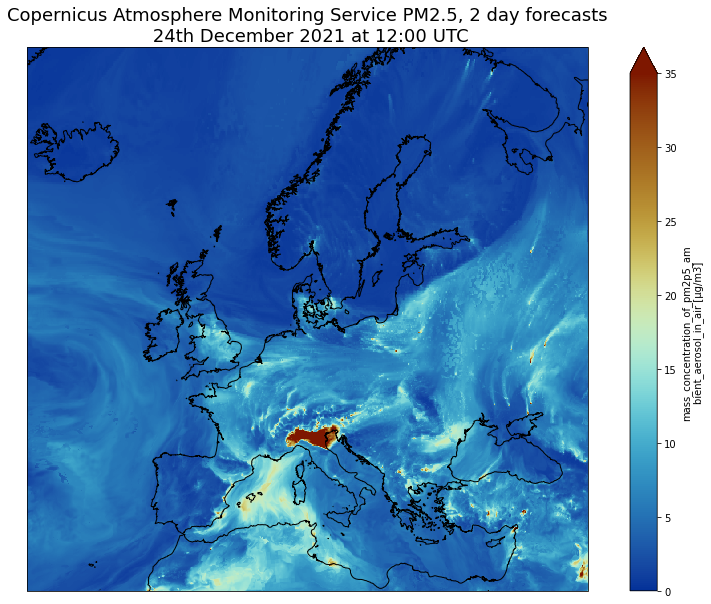

In [12]:
fig = plt.figure(1, figsize=[15,10])

# We're using cartopy to project our data.
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Mercator())
ax.coastlines(resolution='10m')

# We need to project our data to the new projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
dset.sel(time=(np.timedelta64(2,'D') + np.timedelta64(12,'h')))['pm2p5_conc'].plot(ax=ax,
                                                                                    transform=ccrs.PlateCarree(),
                                                                                    vmin = 0, vmax = 35,
                                                                                    cmap=cmc.roma_r)
# One way to customize your title
plt.title("Copernicus Atmosphere Monitoring Service PM2.5, 2 day forecasts\n 24th December 2021 at 12:00 UTC", fontsize=18)
plt.savefig("CAMS-PM2_5-fc-20211224.png")

<blockquote>
</blockquote>
<p>And you should get the following plot:</p>
<p><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABDgAAALQCAYAAAB118BaAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAgAElEQVR42uydB3wcx3X/cb0fDpUESQAk2HvvYCdVqGpV
qlNdImWJktUrVaneKYqkJMqSHXfFJe49TuI4VmzZjmMntmPZ+cexYydxEicu
if3+O3tvDnODmS13B5Agf/h8vuRhb29vb3d2sPO9ee81EVETAAAAAAAAAAAA
wEgGBwEAAAAAAAAAAAAQHAAAAAAAAAAAAAAQHAAAAAAAAAAAAAAQHAAAAAAA
AAAAAIDgwEEAAAAAAAAAAAAABAcAAAAAAAAAAAAABAcAAAAAAAAAAAAABAcA
AAAAAAAAAAAgOAAAAAAAAAAAAAAgOAAAAAAAAAAAAAAgOAAAAAAAAAAAAAAg
OAAAAAAAAAAAAADBAQAAAAAAAAAAAADBAQAAAAAAAAAAAADBAQAAAAAAAAAA
AADBAQAAAAAAAAAAAAgOAAAAAAAAAAAAAAgOAAAAAAAAAAAAAAgOAAAAAAAA
AAAAAAgOAAAAAAAAAAAAQHAAAAAAAAAAAAAAQHAAAAAAAAAAAAAAQHAAAAAA
AAAAAAAAQHAAAAAAAAAAAAAAggMAAAAAAAAAAAAAggMAAAAAAAAAAAAAggMA
AAAAAAAAAAAAggMAAAAAAAAAAAAQHAAAAAAAAAAAAAAQHAAAAAAAAAAAAAAQ
HAAAAAAAAAAAAAAQHAAAAAAAAAAAAIDgAAAAAAAAAAAAAIDgAAAAAAAAAAAA
AIDgAAAAAAAAAAAAAIDgAAAAAAAAAAAAAAQHAAAAAAAAAAAAAAQHAAAAAAAA
AAAAAAQHAAAAAAAAAAAAAAQHAAAAAAAAAAAAIDgAAAAAAAAAAAAAIDgAAAAA
AAAAAAAAIDgAAAAAAAAAAAAAIDgAAAAAAAAAAAAAwQEAAAAAAAAAAAAAwQEA
AKCqs21qernJ7XJxLGo4dmvFsXPYivN2yJ6jrXyO1uJ44Fochv3Y5vBdh9/y
/ozH+QEAAADBAQAY7pvSrMMOhy85/JvD/zr8zOFjPECKQ3Ac1H0cz4MFwZ9Y
1kk4/JzXefNgDap4X3c6zDsSzpvz0+xwu8MbDr90+JXDDx0+6HDJkS44uC2Q
wh+4j/m0w/Gmc8ossmzvWmUdtd2NdbjF4YsO/+zw3w7fdnjEoS1su7JwWh3H
Ie1wqcOHxPXp8GuHf3B4l8P0w0FwOD/reB9E27/Q4VyH3BH491S0+ZNxbwEA
ABAcAICDczM2yeHv+MZUDDpu4JvTm/h3sfzhw/jzCzGQHiGCQwyK/s+hy7DO
qco6wyU4ojxwiw33QOtQOG/OT9Hh7/mcvNvhaocrxPXi8HWHbx0CbSfG5yh6
kAXHHTzgFcLlAYd/5eVnG+SCaMO7Ldv7Jj+vC44reNbAaw7XsUzYz7L2xw6j
QwqOcw301HEcpvF2v8TH4mKH+1n2iP1edxgIjgd4H1qP8L+p4p+XcX8BAAAQ
HACA4b8Ry/B0YjEIOMWyzmIx7XgEfJaIQ/4wPU9ScLyXz9WNhnU+6vANh78Z
LsEx3AOtQ+0cOz9v4896jeX5cUNwvcZHWNvdaZqR4fws5OXfNsiFP+KBf8rQ
F4kH7zQIjpkmiSFm0fC6jx7MmUFiFolpVpPzM4MFx+uHgeB4aYiO3Yhq9xAc
AAAAwQEAOHg3Ym/lm7EHQ77uZIc/5+n4v+LHJxnWE1Oxv+CwwOFzvK4YuLzd
odOwfsrhVp5a/hue8v8Rh/m2m3mH7Q5/y4OEnYoMEI+Pd/gqb+ufebp6PMiA
RgyWHJ7maeRi2//CM1o26Z8vYOhGmvdJzJb5H/5s3xL7FEJwPMtT3L+jPd/F
swh22ASH87Oa9/8/+Bvwr4lvkQ3rfYE/1xiePv/vPN3/kw5TvD6nEg6h8wXl
NTmHXQ4/4OP6U4dXHHqDnmPbeVMGyCJsZA+fs99w+1xqGXS+xLMJfsVtdL48
BgHOy/P8frNCXDuTHV7l9vg7PtaP6FP5lc/Swfv4Mw7vmMef6TXL9nfx6+Z5
hag4P0khyji05n+4XbzucJUhBOchh+/z8f85t4u+egQHP/cLsU3DZ97I/5+p
rf8cn9Ozgg7mnZ8Cr/uJkDM4IjxDJzoM/fBfi3MaYv2TeIaQaAf/6HCP6JcM
fY747Pc5fEUeaz6PD4qwRGW9+fza+yzvJ0IV/9MWbqKF0Nmu+zkOf8zX2m/4
er5Rnf3l0+7Hh22PQdo493OP8Tr/ruzbTYZ98+zDPY4DKds4jsOofsH98I95
1tEU3JMAACA4AACg/hvrL/INWF+I12zj13zH4Wa+EfwOL7vMIDi+zzeOL/Br
X+Ab1m9rN9ki5ODzfNMq1rmSt/8DvplcZBj8vsE3+HeK93Y4VrnJ/CseDN3D
2/oEL7/VT3DwNv6JpcFLvN8idOcD4ua6RsHxIi97O0+nF4P2J8XgJqTgOIkf
L1eev5mPW7tJcDg/J/Bn+X98rK7lQY948n6D4Pg5n7d38LF7mLf/Ha9wFNGO
eNq9+GWvMrV/Ez8fd/gzfv59fFyf4EHFT9UZD17nOIDg+EsWY1c53MUDGzGw
KmiDn6/z+gf4c+7h9b4XUHDcwK9/LMg3zDxrQezLj3igdCmfU3Fs/0JcA4bP
8ga33av4WmvnmTy/1UMBOGRIDJi+4ZWDgz/753m5EFfX8/bFOfucJjfEdfpf
Dk/x8b+LB50/16VUyBkc4nP8Xlxnhs/czufmk9rgUvQjj4tcGCEEx3R53YUU
HP/J//+WxeDSIQzz+oloEwHXfwv3n//AMvhGvi6/ZuhzpvF1tVvMMuI+5738
+k9q232d+wd9UD+W+459HvuU4+v8T7XwHnndL2JJ+kvuH4RY/5ScjWM5/qZ2
H7g9hmjjx3DOnMf5+Ozg9d0+TNs3zz5cOQ7Ex6IS3sTPr+E2/wbP/rqYw5XE
3+HNuCcBAEBwAABA/TfXYjD3nyHWb+FvusXgt6jlIvgB33iWNAEgHuzQtiMT
Bd5sWHa0Ic/Bj7VvA+Xg99/0mSCKDPhvNYM/fyMrBv//HEBwfMy0L3JAUqPg
EPv6sTpDVJ5lSfBTdcDBYUbv58dVgoNzMPyIBxdjtAHAn/MN92RNcJAeBqMM
5o/2+ZzWqfI8oB+U04W/1RQPXg1yjgMIjue05afz8ssNou42i8B7M+D18GNe
Xwyy3s+DsX7TN/8cQvRdVbQog1b9OMrP8g7DduTx2qYt38DLr/MRHDfysgd8
2vdT/C3zXG2dXhYAL4cQHBt4kDqaZxNJ0bXLIjjeym2zm587W86WCSk43svr
rg94rT3Ig91zeKbaXSxWxGybjUPQB2/n/bsnYD6VH/O3/+2aiPqRoQ0lVWmm
LL+X112iLLuMl23W1r1NXzdseA/3M0KSzNH6Y3luNgRs94HbY4g2LsJfIoZ1
XuX21xW2D7eFqHC7IlN/BgAAEBwAANCYm2uRz+H/hVj/DL5Bu9rw3A690gAL
gP8wxNKnePlXtGna3+HBjc6LfIOc0Qa/T3rIgHcannuGn8vbbsrFt+L8DefH
AxyPMILjhzwImVWP4ODfH+HjJ6rfrFQHJgbBsYSff9wSaiQeXK8Jjt/rCTyV
nAlX1SE4PsbbbjE893UepET9znEAwTHZEIpSlYdBnF9uU3lt3QTLoDcDnpsO
HhT/vTYtXZzvo5T1ZvPyOw3tu4PF4R8ZPospb4OUXH+pLX87f6ZRPoLjGzxY
S/vkO/kFf5ttuibFN/A/CSE4dP5bn/miCY5WntlzGz8nZlH8FT8OJDiUHCl7
6+wnJ/P+fq/B/e8K/ozfCJIwV7mWHzE8d4vXMeE208LHdg2v+1bl+TwL6g9o
bUDI7G/Wmr9EDOb5vV4zrD9P7de82n3Y9hikjVtCWlp5e3Imxglh+3APwXEX
P3fl4VyZDAAAIDgAAAd7Bsd/hFj/Jv0bN+W5jfo3/ywAvm7ZlhjQ/lz5/X88
yjNKurXB7zYPGXCvx2Cr10NwLLF981en4DhJmfb+Aw7DOSlIjL9BcExXpoK/
yOE0MYvgOJPXNeXbmKTPeGDB8Y8e+3BXHYLjO6Zt83PvUL/d9DrHAQRHzDLo
OKDNevmxR9t8s4brqY3zvrzCkkwMiidpctCLzxo+S9byXvLb4CnK9Pj/0ssI
WwSHuNb+wuezdAbY39+HEBzbuI9Yzzl5Mh7hIe3K7Ivv8Tf0QoxdGVRwcHJR
cQ7+xDSLoYZze0A93g3Y3kKeGSJCTcYGfM0Wj2v5JNMx4eP+TT5++vm7U1t3
H89UkdfgOq8kugGvyaUe/XGS9+tjfu0+bHsM0sYV8XM7C8o/GLZ5ftg+3ENw
tCmhRP/JwldUXurA/QgAAIIDAAAOQg4OzvUQVnB8zbKtNzTB8Wu+Ed/oQTrA
ILqSZNRjsDXeQ3AsNeWmsHyGH1oEx0bLYKOVpcR+fq2M1U6GERy8TOSZ+DIP
atVp/rrg2FKD4HgzyHGtQXB8twbBsTWs4AjyrSonCmyo4NC2IXOR3K6Jpkc9
2vfCIJ+Fn5+rJoZ0fs7j388IKDj+3Gf/Rymlo63XZK05OHzyX7Qr+RGIv53/
tQx/8xMczs9FPFj9hD57rI7zKb99X9GAbS3g2QVvBsljorxOJle9yGM2lnot
XqfkoBDCZzOftwtMfSTnyhAP3qZck78JWvbVck0uq0Vw1Nseg7RxXu9p3u67
+bgcy9u6sdY+3KuKCocZreX+4Uv8+f9dzakEAAAQHAAAUPuN9tVBZytouQyu
9tiWKUQlGSBE5ZtcWSLIjIahFBwyRCVIrPVfm6ZvK/HsW31CAB7i9U6vQXBc
pnzLOMVDcCz2CFE50RKiUo/gWONxbj7KN/Qlw3Nf4zYRHSbB8YlGhKh4nLMT
+D33KINaUpPU1pLPwCAJ3+S29GkeKKUDCI43TGVY9TwFvL2v1Hkc6hEcUU4w
WxVy5iU4nJ8LuY19Kkx4QoB9kwJuYp3bmc8z50Sow4SQrw0VosKi7oeGGQbH
ePSRX+MqIiWWBO8OsX9hQ1Tm2EJU6m2PQdo4rye2+UXD8itq7cPDlInlYyBC
RT+KexIAAAQHAADUf9Oe5W/Vf2cq86pMpd7Gj0ucK+B7WkWKAi8TswmaNcHh
lWT0FmXZ9fpgW/8GbzgEhzIQJ9M31GpCOi5P+Dt1ijnLm29o1UVilkH9Fj35
ZQjBUeTPc7W2ri3JqLiRH60N5L/EMmdyAwXHQj3RpfLcpaayxPytqS3J6FAJ
ju0NSDK63HRe+bkX1TwHPBj6FkucPstU+daQgkNeR+fwoP55wzomwXGDx7fq
avt+VpeW+uB1KAWHIuF2agkqT7N8u76Vj8NnTCEw2rrtXGVE7a9yJinCUkJU
U/nbBsmNH4epXKVdy/9oSDJatCQZfZ1DYGJaO/uCRx95pbwWbX1gWCnHSUb/
V81dwdfDu2xJRi3bD9weQ7RxcSz/VHs+xzO8aurD+e/gh01tzjKLRYSrfBn3
JAAACA4AAGiM5Jik3MzJcnoX8hTdj/MA+EHDAPBveZ0b+XGQMrFXKmViRT6G
nDbgluX5Psb7IWYp3MehGJ8fRsExgWeT/K+y32K693u0MrErlZK51/BN9Tc5
fES9OS7xFPv3cJjPRVzJ4Bf8LeOYsILDY12vMrH/yGUJd/AxtZWJrUdwZPiG
/fv8LegWWcGCz/GfKVPCt3EuCVkmtnsYBUeKz5WtTOwPAxzrZznPxnuV60b8
/zne7re1Nj6Pz/eveGr85SwpdnN72xpScHRyG/0PvXSwj+BIKiU9P8Ftexvv
x2eU9Zp5FsAf+Hzt4PUeYlnz8lALDst6pxna3YnKdP9L1RKdzMmW/dqqnZ9/
5nZwHZ+f57h9itkM/ZZ2FUSG9fL1/gcOdznXQC7Adk5TysTewn2OrUzszUqI
zxXcV4uZDV/16COL3D5lotxIAwSHLBP779yfX6WU7X5niGs4cHsM0caf53Xe
w+3mdj62X621D+fZVP/DOatEWNEWXv7HvN37+W/bNVwemmR+GQAAgOAAAIDG
zeS4lgef/86Dpp/xTIbz9KSNXNbyL/im9b/58cmG7b7JA+YFPOiTN7mvqjMy
tG8Xr+abQLltMdh8p1aRYkgFBy8fyze/P+ZZGj/jgcIGbb0LWBD9jgcEN3Ii
RfXmWNxs7xJVIHgA/Vs+Ni/pFT+GQnAooSOfZvnwGx4oXGJYry7Bwcs384Dr
N/z8F7RvR3fxIEIcs3/h9tAbNAypEYKDl3Xwa/6N29rneJD7epBv67lk6X38
DfVP+PP8Fx/bnWopZW2g+zyf/99xe/hrPibdYQQHr/cR/mx/b3l+kODg5Wku
AfptPk+/5Otum6FvuIMHkL/mz/cdzkGw9BASHDt9ElC+GUBwjOa2+F2+Tv6X
r39RnWaaYT8KvI0guR7WBkiSOT5gf30Ki4rfsrQUA+1Nhs8TYwnyfV5XzPJ4
WElSvNNn9tEdIf+OeF1/ImfMB/la+y23oRsNf1v8cs8Ebo9B2jhv7xE+Nr/h
vzc3KyWXQ/fhXHXnU0pCUlLO24dF5TJ+/c85D9apuA8BAEBwAADAyBAnxioj
ABzCbTbGEu4TOB7Ap63IHDbrD7PP9RzP+BqH8wwAAACCAwAAIDjAyGifplKl
29VKEgB4tB8R7vCRw+wzNfPMgw/jHAMAAIDgAAAACA4wctqnqIzxfo7P386/
/0FPogvAEXAtzOJwxM/wNYCypQAAACA4AAAAggOMoPZ5vig7qeSdEbHx+0z5
YQA4zK8FmZNEXANX4JgAAACA4AAAAAAAAAAAAACA4AAAAAAAAAAAAAAEBwAA
AEDBS4wCz2M4qKwsAAAAAACA4AAAgCN1kLyGKy18y+G/HH7u8OcOZzlEArz+
vTzQ/hvDcyeLuPmhEhzOz1Z+b4nIUfGvDl9zeN5hJQTHsO1Li8M1Dp9y+EeH
Xzv8HecL6ba8RlTDeMbhnxx+4/Bthyv1dhd2285Pl8P9oowut+chPU7Oz3jO
DzEvxGvyDneJSiCcU4JsuYCcn7TDpQ4f4pxB4vP/g8O7HKaH3Neow7UO3+Vj
Lo7nYw45y/pTHT7IOWD+2+FLYUrOyutcHCOfa3ir0qaDMp5fE3e4yOHTfL5/
x/3A5x3e6pBFXw8AAACCAwAAjgzB8Zc8wBIDzct48POXPIDY7/Pa4x1+7/A/
FsFhlRgNFhxPOZzLCTnFgGavw7/wc+90SEJwDPm+HOPwfw6fdLjJ4WKHJ7ht
/NJhhrZ+0uGvWEo9zgP41/gz7axz22t5Oz92+NgwCI616iA9hBQRD37q8FE+
DjbBMY3XFXLhDv78QuD8m8NvHdaFeN+neFuv8TF/nN/7c0J+aOtOZFHwM4db
HLY5fJ3X3zhEguNcjb38/F7DczmHDocv8zqi37qNZcd1LGZEu3kv+noAAAAQ
HAAAcOTM4IgZvuX9Ig8aZnl8Ay0GkE/zt8oHU3CcZnguw99wi1/2QHDU/V4x
r2/CecA+0bB8I+/n+7Xl23j5W7XlH+Bv4Hvr2HZBDHz5cfshKjhSDuOU33/l
ITjaTLNDhNhhwfF6wPecyeVVP6Atfyvv/9mG2Vm/V9+br/sf8QyaSKMFR5jn
xfsr/dRbLa+f4nAr+noAAAAQHAAAcGSLDzno2eLxTfBPHIomwSEGa5Zp5Vu1
gY8IU9jDMy5+w+ExS+sVHMosgR/wt7jjDWEMe1jS/I4/iwh56DRsp8jfmH+H
91F8q/1n+rEJuk2l3KUYoD7p8M88/f+zIiSA1zmFQ21+zcf3Mpvg4IH+X/KM
hp/yuclZQkIecvg+D4x/zhKoz3JcN/KMgR/wt/Zba2xL4nh9V1v2Z/yZ09ry
VfzeN9a6be35mgQHS5L7uETvL/h4ieP2oCp6DGFS5BVu4vF+v6qlXLXz89ei
TVpmfUzUlt3H+7bKEAIjzsXHlGU5buufNWz7Dt7OkoMsOE7g596NPhsAAAAE
BwAAAK+ByUM8eFhneG4Jf7N7Bv9uEhybHP6Ut6FOK+/TBj5iYP4Rh6s4J8F/
8KC1UK/g0GTC5cqyHs778HMesF7Kn/c/Hb4nRICybkl8Nt7G+xyu5jCeVxze
UeM25T59VckTcA8PMsWxPI+lx518XL7O6/cbBMc3eXD8BM+KeB8v/6wacsBy
49ucZ+UpDke6i8MPfq7NmJDH9Q1+zc287eU1tKNmlj1f1GYICRnzZ5aZDaJt
va+WbTdQcExjWbSb839s5xkNYgbEJ5X1+lh+6WEUm4ZacPBxFBLtRxb59aa2
7JN8bFOG9YVY/Lny+3Lexn2GdTfxc9sPsuB4Oz+3Hn02AAAACA4AAAC2QckY
zm0gvrlPaM+JhH7fcPi4sqzmEBWH57Tlp+tCok7BcQqv85iy7EM8Y2Sctu4i
nu2xU1n2HL/eNIMiWuM2peD4iDrNn+UJsYToUZZ38Lfp7zIMYgUnW/IsbNGW
idkgc7V1e1nCvGw4rn9Xb4JG5+cR3tZFWsiFePAey2vEcfyLWrbdQMGR1Ns+
L79Xn71QS4hKgwTHdn7fewIKDpFI+GeWbclkwUn+/VT+/UpLaIx48MBBFhx/
zc+1ot8GAAAAwQEAAMA0oMjytPz/1aey8/O38LfvfQ0SHJMN+QbEg0cbJDg2
qglT+Vt/8S32Czz41fmuHFzzN+QikePfeuUbCLNNTXBs0rYzn5e/w/Ae39Bz
LfC63zWs26UKBM5V8Av+Bt+0f6I6yU8Mx3VHnW3pNJ7x8AlN5HTz9l+xvE6E
+LxRy7YbJTgMUq+Ft7VGz/lwMASH87OCpdc39DAfj9cIYfljy3Ov8Gco8e/n
2eQRz1oRD548yILje/xcHH03AAAACA4AAABNhlj8T/Fg/VzD85N4FsBt2vJ6
BEfM8u3zgaGYwcHhNX7lJ3/A63by73/ksx+Bt6kJDj1Hgqysca/hPUROkx8a
jtMfW/ZJlPX8qvY5vPi94bhurqMtbea8FSIMp2iRWDXN4PDadiMFB4flfJOv
B/143XmwBIfzs5DPrygVOzbEexzKMzguqGMGRwv6bwAAABAcAAAAdLnxCf5W
/CLLOh/iPBMzWHZIRJnZv+fHXWEEh+W5QAPSkDk4LuPfl/Lvr/LsDhMred1R
stSsz34E3qa2T+MtgmOnRXC8aThOr1n26ZeK4JCf49Me+7fRcFzX1tiWjuHZ
BV8zDT7rycHht+0Ghqhcx68Ts14uYakijtMF+jkaTsHh/CzgWUVvqnlTAr7H
wcjBsUcm1PUJszkDOTgAAABAcAAAAGiE3BCDyo+z3LjEY703AswE+BNl/QMH
U3BoVVR6ldkDf7DNHjAMxMVg8ts+6wXe5hAIjiAhKlH+xv8rAfevZsHh/BzN
s3ze8MqNoFRRSWnLZRWVm2rddoMEh0js+kM1z4oiWHTBsWY4BAeHMP0rl2md
UMN7+FVRUfPq5ANUUVka4D1v5HVPtTz/LD+/qAbBcWKQGVYAAAAABAcAAByZ
cuMyn3U3cu4DnX/hvAmnaTMVnrElARxqweH8ZMTAh5/frT33J5xjZJnhdSJf
RYfy+27exsWmdWvcZiMFhynJ6JO8/CzDQNImgzrrFRzOz1EsIEReiDafdbfr
uSx4+Qf4OE6oddsNEhyvcwhITMvF8QWD4FjIy64bKsGhyI0f62V9LeubysTO
5uv8A9pyWRL6XG35+3jGx1xNfPyIZ2xFAuzHVH7Pz8vwF+W5MZwb5kemULUA
gkNcV1/k57dZXi9mld2Cvh4AAAAEBwAAHBmC4/1K+MK5BuYE2IYtB8c5vO13
c9LCLXLg2mDB8RTv63lcVvV5li4ybESvBNPNg6rfcWLQ7TzIe4IHtergVSSX
/I6cEcHrXc2zU16tcZuNFBy2MrFfMJSJ/ToPNsX52MHrP8S5GV6uR3BwtZhf
87f+O0xtyTC75nWWGY9xGMhrphwkYbfNr7mdeYC3+TVl2eoAn+dmfp3ISXMF
z0R4g/N+6IIjw5Vovs/rbgkSNsFtVe7Tb3nGiPz9BGW9XhYBf+DSvqbrNGdo
G28a3lNKx9f4mD/G5+ALhtkqk3gG08+UUsFf5xlRR4doG/Ic/A3P/riM292/
8vWyOcA1bktC2sGlpsUvX+YkyBdyKWcpy96Nvh4AAAAEBwAAHBmC402fkJOd
dQgOERrxKOfo+L06UGmw4JD8H4difJ0lxwqfb/Yf4W+if8M5K77FsmSGtm7J
4WEewP6OB2Zf0vMGBN1mgwXHyzyz5issAX7Gg9iCYRtZHmB+i9f9L5Y3+9Vw
gxoFx1a/8CXDa0o8s+QnPMD/Wx70Rxqw7XrbdIwHy9/nffsRt4Hppm1wjo6v
8XmngPk0vK69lw05PrwYH1BwiM/1Ni4B/FvOqfO4mJlh2cfpnHvnlzJvipqv
JUT7OJNncfySpcNPWcYtCtiutnqskxAzrBw+wyLof/ka/RxLmQz6egAAABAc
AAAAAAAAAAAAgOAAAAAAAAAAAAAAgOAAAAAAAAAAAAAAgOAAAAAAAAAAAAAA
gOAAAAAAAAAAAAAABAcAAAAAAAAAAAAABAcAYJiINs+kSK63drI9FEl38f+j
KqULI8lW9/noSCM/mJgn40PgsY1CmXjR/LgK3+2ViYYgVhNBP1+jGd8YCn7H
12Md5RwNMEFDWdZsJ2GipD0uGZ4vBXyuBgbtY5DXtfRV70+Q1zRwn+umtc8l
KWjj/1XaqpcndFo0LJ833jy+3E9G49QUS1E0VXLaWrfzfwv3n5FKPxrNdHKb
dK7TdGflWo1mRjuvT1JTJM79bZEisbTzf8l9vbu97GhlO6OsbXjgfbnvjmcr
7Vde17KNe14fzu9uf2LpT91rtzB+UH9XtW31GjRem72VfapsO9dDTc4+R+L5
8vFwEI9j+R7PvtYXse3sWOe4dxj7VXVffPthy9+byjEJ3MfUxsB2JgRaV3/v
Ru6Lsa9sDo/adzjt9hOH4/3Z5kITrc+Lh7hXBQCCAwAQGCEhMkv310S8+7Sq
G+OmSIxiLXMp2Xd+ZZ3c8hcOWfIrB1Nc9eIgmte8ZKVl7YHAeG2jdf3L1Lbx
ZWo/6u3u//pjiVjPb3sS02ex4Xh4M5oAACAASURBVLetIJ+9lm004n1rRRxL
E0HWUc+RoOOYV6hz86tVqMtGn/COKkYdX0Y87jrpnYN5yx9VP1Z/V5cFeU5h
zKnvCoS+v0FeO/a0d1fvj8d+DNrvBuxzWPT36T77vdR9zvuo5zyHC95f/l9F
LFOWi3UrOK8de8a7y5xWxvh+zmcVxzM3+S2VfrNt00A7al52f0V8RJLNlJ91
JbWu3VNZNzvjyvK1vXK3M4jPUSRRcIWGEBuJtjlum4wX+9zl2SnnVF5XWvlI
pf/QyU4+q7JevNDt7Me+SvuV17XcP9v1IbYtfhd9ia0/FduRr5f7Iq8dgbp/
ap+oLpfXv96/yd9zK/Y7x2G++1malz/hLNtr7GvVbZv6WPleseZpFE21UXLU
CiqufrHqfdV98euHTX9rBPKYmPoWvY8xIY+d1zry74jsj9TXmV5rem+vfTFt
R92+Cb2vlP2h2i/q/aW133SuK+d8v37YDbSamkqj4k3UFXevzbG4XwUAggMA
MISCI71kHyWn3+DciKcHvvXLjKXktGspu/R5Vx5AcEBwQHBAcEBwmAVHdtKJ
ZWHRd0LVwDDdc6zTryaoMGc7RdPtTltzBsezt7vrJsesc2cDJEb3l2XEqJUD
/W8iXxYZKx6mzIST3NcKOSIkSHHhjYMG79W8QC2rnqJRm19y2mR1+x1pgkMI
icqslVy3+3+q90TKL9xJmWmXUmnV86EER7JrDSWd4xxztpXqOd7dDgQHBMdw
0J9rohOKTXRGcxMtzGAWBwAQHACAIRMcqbn3V09nzoylWOdaSk2/dkRIDV1s
1DLwDzuQ9husm24kvW68wwiFoRIcYT/noSY3bAIj6Ho2waHepOs38KYbdE/B
oYuLgBKjXlEg1q1FcITdH/V42D7TcIiNiuA4J4DIYJkhGLflPS42saGLHDmI
L63aN9CHRuOU6TuRB54vOcui7myMaHYMZSedQaX+J9wZGWLd9JQLyyEYsUw5
REUJKXEH8t2by+1zw0uUm3ouz+5oomTHPA+5Ud2mZTuWA1GTxNCvC/XalI/V
Plb0ubKfUbdlGgir16BpH/U+S64r3ie7cFf58/acQKmJ5znHKU2pnuPKx4kF
UKJt9qB+1vQ+zSseo2TnEkq0L6Jouo1y8++kWGmGc25aKOkcZ3U/bP2yl9gQ
eIlTP7FhEkOmvxdyO+o5la/XJYNcxyYq/PYnDCbZYZIbsr/TxXCV5DgMBYfz
M2p0vIlu72yiOxy6E+61Pgn3rABAcAAAhkBwpBc+NTCdecxmiqRHU2LCeSNm
1gYEBwQHBAcEx8EQHK1rn6TmxXdSdtqlLB7mUqJ1mistclNOdwbfs9ycG/HS
NIeplJl0hjsDQ6ybm3eHw20UyYx280tEM11u3glVNufn3lTVNgvzb6g817rh
wGEvOER4Sm7+Tir0O3+nZlzrhu4kx6wvH4NYmuLNk8ozO9Jt7rHOTDyFctPO
p5bVewa9T2bSmc65mV0RScnu49z3KCx9pHw+FtztSo/Cij0QHBAcDWdJpolO
bW6iO0eVObfURLPSmMUBAAQHAKAhgiM1eyclJ11O6YVPUnrJXkrOuImaMmN5
9sYYakqUKDl5e9VrTFLhUBAfQUNSTIN+eeNar9xQb8xNYSl+ckPeSIeRAmFC
VYLKjlpkzlDJDT85EVRwhBEhutwwCQ5dEniGpjQglKNRYR7qgELSEKmhSRr1
WJk+23CJDUmV3GDBEUZomN5LfDZ5fYvZA6qQiOW6aMwp7yjnLsp2ch6juLPe
dHfWhbqueH128jluImc3kWg0SclxR1N2xnaKl6ZQYeFO4zUiE402L91Z2Q8v
WacPaPX+Rh20q32YFB3qY7V/VfdNhqZ4vZ+XiJGhMOq+qbJF5N1oiiSU41dO
2pqdsqUs5psnU7ylHMqSaJ3lyo9Ybhyluo+l0urnynlJppxLqa5V1LL6aX7N
pPL7rTvgrHccz7IZWz4PYzZQfskjnmJDF0VeISkmbGEn6uvV46jKD7+QEZPk
0J/Xz1OYMJogokPvL239p3xOlcai7zicBIfz0zs2UZ65IQWHYELSbc9zcN8K
AAQHAKBOwZHo3VKdSNSdVp2kSLabUtN2UHLqjkGvgeCA4IDggOCA4BgQHIV5
1w3qRzPdqyk7fh1FU80UK3RTx8YnqG3D89Rx7CuUmXA8D8BnUGnlLre9JUf3
U6J9YVlYLHu0Kj+GrX/K9JUTQRfmbDtiBEesOKnyd0o93i2rnyjPxhi1xE3c
Wlr5ZPk1K3dTbuZ2irfMpHjzFGf5E5Qat8kVUiIHSmH+29zXFRffrUiU8ufK
L33SnU0jwoEgOCA4GsG8dBOdVaqWG4KLWppoSgqzOACA4AAANCRERczeiJbm
UlOimRLjz6HMwseoKZal7LL9VaEpJg41oeEnNoYyHEW9EfdK6uYnN8LKhLCC
o97kqmFERaPkRtBQk6BywyvZqGlAqCYV9bs516df1yMuhiI8RZ8WLh6HEQZC
AngJDlPiwOEITzGGpbC8ECKjIjosckNKDdv2xedQB4LqNRzLjx0sit1ZHJ3O
gLybWpff7LYd2cZESVh3UL3o1kobjDsDdyEqIomccSBtEgnldrzHKk31ZXo4
gp7cWBcW6oBd3Y6XEJbL5fWjD9j168xPBqiio7D8yfJxFceq/wV3dow81qm+
szhHx1sGXfvi/9Kq3YPOT3HBTZSbcVk5BGjOjqowmUoIzvydbs4Uv78ffgmL
wwgO23K/5J5BQkZMUsMWxuK3v7bQPXUbUnDYsAkOdduHi+Bwfqb1GmZvSKam
mujCFkgOACA4AAANycEh8mwIqSFCUsRNYyTVAcEBwQHBAcEBweEhOFrX7aXU
2LUUTbeUB8lTTqbO416llmU3lwfQc8+lROsUGn3iq1WCI9Y8tTzLY+IplTaY
GrOmHBLRuSiU4PCaFXbYCY4lD5Xlxsq95Vkea/c4x9t5j43PuXkzYi2zKLv4
caPgyEw4hcN5drmhKC2rnqDighuryqC75Xg7lznb2lk57unJW93zBcEBwVEv
M1JNdEGLWW4IrmirhKpEcP8KAAQHACCg4BB5NpqiKYp1rKLUrNsp3nW0s+z5
yk1eetGzlF2ym7JL91SFn0BwQHBAcEBwHOmCIzd1CyXaZ1O86PSrE050K6G4
/ea4VeVQkRlbqOOo56m1fydFk0WK5UY5j2+j0ccfcENTZBsbNJNg0b2UmXhG
JZ9EesJpEBwGwaH3eeJ5OSBWZ16YBEdy1HKXqlCSDQcGQor6TnXDhJLjjnWr
qUTzEyjevtSVHiLhKAQHBEc9XNraRJOSdrkhmZ1uonNKmMUBAAQHACDUDI54
11FVN9epmbdStDiNYs7NnJ4d/1CRGl4yI0yujTByo5YcErYbVb2SSpBBe9j3
b5TgCHpcGpWXI6zcCCI4gkgN03vZbuD1SgA22WHMwTEEsqJRgsMmN9T3CJyL
Q9lu1XE4SHJDrZwiK6TIyilV1VM8BIf8XOJcFxbc4lZBUfvOZOcCiuW7KNkx
i7Lj1zr/z6ZILE1NsaSbe0MNoRBJQ8V1J2YYuPk3xhxN6ZnlGQSFuTsG5ZUo
rHjaeL2qbTnI4Fkg82fY8jzI61h9P5lbQu2vdOngJTjU96tl0G/qJ+V7qAJS
z9MhBYypqoveJ7ese6kslCadR7GWOeXHU6+k3Ip9lJ5+tRvukltqPw9B+uuw
8iNsnougx9KruopeFUoXIPp2dEli2qYNP8mhCg657cNBcAi5ISSHn+C4qq2J
xiUwiwMACA4AQOgQFVE9xY1lHr3BvamOFqZQdtGTEBwQHBAcEBwQHNrxyk09
05iM2f3mv3c9pccupWTHDEp1LaKmeJryU06ieGFcZd1oqpUSXavd6y499Yqy
WJ60tdK3NS+9myLJokuqe0BAi1AJCI6hExxqeVrxeSsl0juWU6rvHMrMunHQ
3xcIDgiOsIiwFBGe4ic3JIsyTXRGM2ZxAADBAQAwEs31ujfRIjRF/J9dto9S
U6+ixJhjyjfn83e5YiO3Ym9FaoStjOIlHoZCapimbtdaMaRewaFXS/ESG0Hl
RiMqktQqOGqpVDLcciOIqPATH7bp5bbwFP2m3+uG3Sg3AoqOWgf0oV/H+xNG
IkgRYJMb8nOrg5WhlBtBjqcahmJDyg1bzg01pESELrjCIttVJTsSrRMrJUvz
0053P3vritvLMwLGLKtc+6KtZaddWs7XMfu6SvtLd28sD6zbF3EyzWcp0bWW
cvNvs1YqMQ2Qxfuo64nfxWttg2L1WjFdE6aQF3kN+IWAqSF5YcWGTXAI9LCI
Sdd8hJa/+GVa9sJfVKrOiOd7t36AZt73mcp59BIcYiZHumfzgOBonVcJF3Jl
1MTzKDPnVudv5+XO38tHB4mgoPLdJjzCHhfbsfGTKLZ+zSQ4vPo9v1CZoFVd
bIJYP2cjWXCImRgisei2tuCC49r2JuqKu20vhvtYACA4AAAGwZFZ8FD5Rnv2
HZRd/FTVjblMJGoSEhAcEBwQHBAcR7LgaF3tDGaX3EvpiQPltJM9J1J+4U7K
Tjq9qi8tzDq3LEHiWWpdeafz+lcolm0vJ7ZccofbrkprXqysL8qXyvYnZni4
Mzbm3VZ1/eqPITiGRnBkJ59dFlUdi6i4er97zNRzG82PLz+OZcrnmpOclkOO
HqPU5AspM/sWCA4IjkGIkrCiNGxQuSFZnm2ik4qYxQEABAcAwCg4UnPvr75Z
K0yi7KLHKT3r+qpvoRoZMlKP4Kg1FKWRiTSDDNz1ZKK26cKmQcVQCA7bZw5y
bGqVGvXsb61ywyYwggoQP7mhh6j4TcE2TbWuSjDaYLlRj+CQr224UNCSllaO
wRCFpVSShRrQE4wKgWEKQRHryIGdmwhVCbER57yw9OGBmRvxXOVxqf85t42I
9YoLb+EQlDy1LLlsQIK0T6f2tbuoY8MDSphKMxXnXELx0kRq3/BsuV0d9wrl
Jp9cfj7TQSWD3NDFhin8RMoMNTTD1k/przMJDtM1oQoGU39mkyP6YFvflyBi
WF1XFxyrXvkKbXzf6zTp2j9x30NIrfEXvUYTr/qwKz/Eurb+We5XSUgN53yL
YyD/1qQmX6zM4Djf+du0h6K5nrKIkl8CzL2b/6ZOpKZ4npITzgz9dypo0tiw
YsMWdmdKPBo0tERe47roCJIM1fS82IZJcOiJSkeq4HB+omMTTXRNe3jBcX1H
E40qz+JI4l4WAAgOAIA+g0MkFh17gju9Oj5qHWXm3VcRCRAcEBwQHBAcR7Lg
aF39MLVv2j1IcOTm3TogLMZuotzcmyg3c3slB8SozS9RLDeGIrEkZXoWuQPr
0uKtWp6OODXPv6BqmZAbcgBXmFV+Lt4y1S05q1cygeAYHsGhHoOK4Jh4Xnnm
44wdlWVCYsSap1GsbUm5rHok6S4TlckqsyKXPAnBAcHhcmpzEy3NhpcbkrW5
Jjq2gFkcAEBwAACqL2bnJiwxoXyjJjL66yIBggOCA4IDguNIFRz56eXQhNSo
hYMER37xwMy35Jh1Ve1GtJHOY/aWEzUXx1HPuQfcgXVx9lsGSm6PXcYlZBdT
87xzKRIvhze0LL+rMoCT67ZtOlCVHBOC4+ALjkTXBookmt2ZG7llzw5Iqkic
IulOzsXSTakpV1Ci5xSKdawsh7l0rafcgrur+trMjKspPfEcys56GxX6X4Dg
OAIEh/MTF3k03tZRu+C4aWAWRw73swBAcAAAFMEhb8xizdONoiCIiAgqNIYi
70YtQsM22LfFm9sG8bbt2G7AvXJv+N2c1io55Ovl/npVZAlSDaBROTi8nver
gBJWcAStrKILDq9cBn6CQ5UannIjgOCoRzg0uiJJIMGhSgyL0DDlIGnkfqgV
UaoqoyhSQ5UbelhKfuaFzgA2R9lJp1Fy1OLKeZWioLTqeYqkWnhQGx3UBkvL
bufwlRT1XHDAHVAXZpSTNyfbJlHb2oepY8NjNOqYR6pmcDTPv8jdj87jXqVE
yxQqLbmhUqlCv1b9qvxI1GtLHVSq/YJNSpjkhOma0CWFV5/mV8nDVg1EvebU
a1DN/SER51GIjNXv+ApNvv6jlfMq2kHflR90nxPtziaeTXJDlUpVEnf5k1Xn
MN65wvi3KjPvLop3LKOmeJbirXMp2X0cpadcXMndEc2OoWi+hzLTr6BC/36j
gPYTsLUIjiDVWPz6OlVE6NVOvKSV7Tz7vacq0kai4Di+0ESrcrXLDclR+SZa
n8csDgAgOAAAAxdzJObGCaembqfc0qchOCA4IDggOCA4nPMXb+6jwtyrKNXl
DFZnXDRIcORmXKlUTylRy7oDlBq7zq220bJmL7Wtfazy/KjNt7mCY9xZe2n0
8fe7+yDzeoj3H3Py45QZt4CSbVOped5Flf2QbQeC49AWHOXqNwM5OeKjVnv/
HVzyCGWmX0nRzKgqMVJc/QJlZ11NseIkdxZIsvtYyi99HILjMBMczk9azLy4
saN+wXFrZ2UWRwn3tABAcAAAxMUcTXqKAj8hMRxSw/ZejQxHsQ2u/Qbl+nb9
wlLUGzevrP1+A/ewoR7qa03btH2eRggOP8kR9v1qDVEJsl05iNTfx0tumG7A
qyqF6IP8IQ5POVjIQblEr5jiVTVF/K9Xl6lnX2xiQ4ahmBDvK85d24b9lJt+
gTt7Q4iKWL6b8vNurlyzFQHqPJfq6i/Pfiv0UmGOIjziWYrEUs7/aS4FO8/d
L/E+4y95rRwq47yfHBiK95XvLwfncrkUEfq1Iq9Vm4CTbdmrYoWtgpNe0SNI
mISXwLAJmCBywxbOpz6nXpPimInzLKTG0n1/7v4vzr04vuL4u23BQTx2z7dP
qIet+pLa54v37Tr5FYqmm7nazc2DysSa/h4Vlj5Chfm3Urr3eOf/m6qOUXHR
bZQat8GVZ/nFu6ylZ01CWj3eQQWHrV34hZfo/Z0ppETdbphKMLb31dvGSBMc
YtbFhnz9ckNyQrGJ+nOYxQEABAcAwCWSbIXggOCA4IDggOBgwZDsmEeJ1hlU
XHAjpcaspXjrLLeKhio4iiufpaZYWV7Ei32Un3WpWwUlP/dKykw4zk0qGUkW
KFHqo+YFV9CozQ9AcBymgqNl9fNUmH2ZmzDWlVnj31I1G85LcJjKwur7kRqz
3s3rEW9bQIX+fRAcI1xwOD8FMePils7GCY7bnW11lWdxjMJ9LQAQHACgikqu
1yoEgoqJsDKjFuFRq9gw3QAGFRy2Ab9JBtim+uo3bF43aWEG7kGFQdBkm16C
I4x4qFeABBURYQRH0BAWLwlkExtqQkNbeIpRatQpOGRIxaGEKRRnkOjxCEnR
j0m9gkMmEdXlhi5l5H6Lc1ta/kA53GTtC1SYfztFEkVXZqjXlptEdNW9lYSS
ctZGYe6VVb+3b3zG2e4rlc+vihexLzLcRbYtOeAWbUq+RhUVJsGhSg7TYFQ8
J6WMmgDVqw/yCoUImtwyaAhKGLmhv4dMnKqKDYE4ziIEZfauz9Ks+z/ryiR5
3kVbcEOSnN/lOQ+StFNdT20HnOByoETwghOo2Wkvegijl2jX+xy9f3Hfc80+
txRxdsr5VFq9r2r7tr+NeohiULnhJcFMfaB6zauCUw2x0sNV/P7eBQlZUq+d
kSQ4ZOWTRskNiajIsiSDWRwAQHAAACA4IDggOCA4jmjB0Tz/SjeRpzi3ydEr
RGIial76AMXyvZSecFqlbZb691Ta6KjjX6X8jHMpP3Mg70KqaymXfk1Qy8p7
B+UlgOA4/ASHqG4jznn3mTfR5Bs+RFNu+rgxR1O9gkMsL8y/heKl6RRJFCg3
660QHCNQcDg/baPjTXRbZ+MFxx3ONscm3L6oN0gOEIe/cviGw7cd7ublOx3+
yeENZjPukwEEBwBg5AmOfK9RCkgJkVm6P7CACCMq6glLCSo7/AbsQRJf+iUV
lTe/puneXnJDH1z43egFTTSq77tpYF9vuMvBJmwSvSCCwy80xTQI0AewquSw
DfRHWniKTMIZOsmnX3iK87y+fiMFhwwHqaCEpshZG+KcFhdc7wqNaKaDWje8
VF0Jo32hW77TLQ26eFe5+knHQmpeeC21b9xfDm/Y9DJlJ51KhTnbKNt3IjXF
Uu56aiJE2R6kdFHLaJpKs+rCwivppy4jTAk45T6o+UOk+DAJDr+ysDaRYROC
fmEotoG0X5iL2q/KYyzajkgeOuXGj9HUWz7uloaV4SiiHcvkrjJswktCy+f0
32V/Ic7jpOs+6J7vCZc964oUGfISVPbqfbJbXpjPla2vKiy4naKpNrc0cWnN
4Jwc8u+iLVTRJJ38ysF6lXrVS2HbULflVT7YFhLoJcdGiuBYnm2ik4uNlxuS
s0pNNC/tP4vD+Yk45PlxwuErDstYcFyPe2MAwQEAgOCA4IDggOCA4BhhgqM4
/zo314asZJGZfGYl7CSSbKFototE/yjafW7xA+7MjETbLA5H2V4ZiBYX3ki5
aee6ZWXjzvbE84m26VRadgcEx2EuOCbf8FHqbYnT1Fs/NGyCwz03K56mWH48
RXNjKb/oQQiOESA4nJ8xY+LlfBlDJTjELI7e8iyOaSH2K+vwNYelEBwAggMH
AQAIDggOCA4IDgiOESo4kh3zOaQkWTVzQ/yeEuU5F9xF0XSn2+5T40+hpnie
IslmV3SUlt7GMzgOUDRbXepTzAaRj1v6d0FwHMaCQ7zPvlM7acbdnx5WwSEo
OecnM/lcN09MduGDEByH+L3WwkwTndE8dHJDckFLE01PBZrFEeMwlF85PKSE
qLzp8E2HlxxacJ8MIDgAACNecDSy6kmjq6YEraIStFpHGMFhWzdI3LhpcGyT
G14Z9f3ycQQRAl75L0zHb6iqqhyKgsOraoopNt0v9tyUk+KwraBi+ix6Dg7L
52qE3DBVRdGXi+2K81Za8RDlZ15G+TlXV4sNMfOifYH7f3bWNZSdczNFcz2U
mb69ah0RkiJycIhtpcaspGimc6A8bCJXXmfCUZRsn0Wt/Q9UBnZi4C1zP8hj
ouZ0MOVs8Gvzung1tVd1oCoH7Lb+yna9qe/hJWGDDEx1bANov+oa8n91gC1E
Vt+2D9Gkaz5CE6/6ME24/INVkksVkab38spFIfdRvs/M+z5DR73/ddr4vtcH
Sgxv9M8D5JefRM9TYcu9IklPPNut6JPsOSnQTA5Tvihbe9FzC5lklJcY8RMm
tr9tXlVUTOdtJAiOjlh5hsVQCw7B6HJFlW3iuChcZhEdJYfPO8wSVVhYfEQd
7heSA/fJAIIDAADBAcEBwQHBAcFxiAoOEUYykBR05SDBIcq7uuEqU7ZSqq8c
shItTKDkuM2UnXtbZT3xeVpW3s+zP6Ll/6OJqm01L3hr1aAOggOCYygEhyC3
6AG37SZ7T4XgOEQRZVyHQ24IxpXDVNIhwlTu0kNTnJ/xDn+D+2QAwQEAGLGC
I2glFBGyonKoSA2b4PASFLZ1bYJDneJryuRei9wwTWf2q1ag3xQGrXBiulk2
3TQHkUGHk+DwCg2ynUN1UGW6gddFx2EtN3hfZaUQfZkqONTnBoWoNPgzq6JD
bFec10FCQyYUbZ5SfhzLUDTVQpmJpw88H8+Ww01WPepWW2mKxNz9TbRMpnix
h6LpNooXespJSEcvdWd4VErFKv2EDE3RB2+q5DD1Z7awMr09q6EqpkGrn0Sw
VRGSz8v+N8h14yc1/Kp1qBJDD0+RIQ6q3KhUqbng/W4FFSE2Jlz2xzT+ktcq
IVby+MvqKfp7ew3e5XuKx0KgTL/rU7T6HV+h5S9+2W1bMqTE1Ff59eO2c2Lq
s73+7uUW3k+RVDsluzdTduGuQZLDtm+mEBWvEBOT6PCTGV7n26sKj0lumNrK
iBAciSa6a0xkWOj2ERzOT4eYucGPMw5fcjjeoUtZ51qHd+M+GUBwAAAgOCA4
IDggOCA4DkHBUVx8t11wFCdRduJpVctEolEhPNzQlc6l1LL6SerYtNv9fdSx
z1NqzHKKZZwBZfscakoUKq8TFVXaN+2l9rW7IDggOIZNcEjJEe9Y6s4mSk3a
CsEBwWETHHMcvs65Nv7G4U5e/qrDt3j5h1XhAQAEBwBgRAmOoHLDJjgaJTr8
5EYQwWETFbbBvG3Ari+3iQ3bMq8pz3p4immwYJv2bboZ9BMCQcJ0TNPi5Wu8
wn7C0Cg50gjBoSdsDCs4bDf+tiSjh7XcsISXVMkN+ZkNIqNRn9l4HDlMRpyT
9PiTyvkxZt84SHDkZ11J2fEbKRJPU8uKm6hl8Q430Wjl+YV3l9vJurLgyE06
jiLJAqW6FpXDWJJFKs6/pmqbLesOGOWEaZCpykpbckgd+Zzaj6h9oFdiY68k
nrZkoaaQOlvyTz+Z4dUveoUw6AlUZWJRIbKE3BBSwxUbF73mJnUVckOKNnld
6kLDlJhVrCvDWeTvIlmpkCcicensBz9H8574ovteqqTy60uCSmuvUMQgkj+3
4B43+Whq6uWeksMkOoImCjUJIj/B4ZUwNDv5LIqm2ymW73Guxyvcss1eMkyV
YCNFcOzsjg4L3clwISoAAAgOACA4IDggOCA4IDhGmOAoLrm/Ih/S408s5+EY
t5GKi++hROssSrRMqjyf6V3HFVHKFVIKSx4sXwsLb6BILEmp0YuofcPT7vYz
PWtdwdF+tNN21j5NrWseoeKCt1mrFkFwQHAMteAoS46dbuWfzJzbR4TgSPcc
TfHmSZSfex3FCr0UL/ZRacX9EBwQHABAcAAAQgqOXO2CYyhDU/yEh1c4SpCB
vOl1thKJQRPm1Rue0ujEmUFDTUzb0EtR1iM3Gh3eEva42AYRtjKNtsR/ptKw
aslPU5LRWgXHUMgIt1TqGe9ueGiK/Ex60lGj3DCIkFo/sy4y5GBKFRtygOoO
QNcdoNz0SynVfUw5BIVza4gEocnOxQNyo2cd5aaeXRYby5+g4mqn/Tv/F2Zf
TPFCtzv9v23NrkHnWkodsczvmjKFvtlKQXv1T3q7VkPvNKMSRgAAIABJREFU
pBAIKjj8wifCrh9EbughfnqSTVXy6gLClRt8/oXIEIKjd+sH3P9FOVjZRvQk
wOp+mfZZv5bFNsQ2hTARiOSl8vdK27L0JV59UtC+3EtG+5GeeolbCSi3/PnA
IUamUBW/sBNTwlE/kaVLipY1u12pkRy9kkqr9lF2ynnONZqj7KSz3MpHbRv2
O//vouL8q53r+ArKTLvC+XxXUnraVSNDcCSb6O7xsWGhOwXBAQAEBwAQHBAc
EBwQHBAch7XgkOc44wyYIqkWys/aRk2ROKXHby7n4SiMpfz006l5wdWU6SvP
8CiufoHibfMrIiSSyJfDXPo2u9tuW/MQta9/jD/rfuf1WyjZNgOCA4LjkBAc
hf79FC1OpuSELZRbsf+QFhzuMVm3lxJtcyjROpda1uyl5mUPOb/PdRP5NkWi
bknmZMc8SnQsdq7LhRRrnU+xljkQHBAcAEBwAACqBYcuE2xiw0t4DFeZWK9w
lLClYE0DZ32Z3w27bQDgl0jPlmC03gG9rfyr13Hw25bf6w5FwRF0Grh+g20a
qJmShup4PVdLeIqaIPNQFRw2QWETFrrAqVfoqINXWfbTOHNDa4tCWkTz5aon
iZYp1LL6UYrlutzfW1feXhYbC97mVlZJjV7KYiNHLcvLZWIzfcfQqM37qW31
/RSJpcv5NpbdSvH8mPLMkES+HK4SQj7awsP8QlVMSULVa96rxKZfuzeJiKBy
I2hYii15pK3srDqAllJNtGkRPiIFhJpUVG0fXokqvcqkiu2LbQppUhEnznvr
4swkUIOWig0iNmoRHILMzB0USTZTfPRGyi7bV/W30y8sSU9S6yctvNYN+sVA
6/oXKNW1wg1XaVn97EAfvelA1fbEvop7AnH/MVIExz198WEBggMACA4AIDgg
OCA4IDggOI4QwZGbcz2J3EPJzvmUaJturKqSm3Zu5bEoG9sUTVGmZz3P5Ei5
YSqRRJaS7bMq6yVaJlZtQ+T2gOCA4DjYgqOcj+NeiqRHuZLjUBccLpsOULr3
GIrlxlCp/zHjeYLggOAAAIIDAADBAcEBwQHBccQKjuYVT1Gic5lRaETUMq8z
t1Y9FyuOL/+fHVWeKs/LU6MWuCEqhdkXVYmO6uos2yA4IDgOuuBwZ3IseNid
jZTqPcVp05OpuPSRQ1ZwDFRW2ULRVKubbHSkC44xqSa6d3J8WOhJQ3AAAMEB
AASHZ+4Nk8TwEhumSiuNqKTiVfUkbL6JIIPoIDftpps1rxt8L8ERdPAfVHJ4
5R3xq9CgDpb81veSRI2UG/Xk3QhSLcKWeyOo4PBbp0p2BMi/IQdWh0K1FDGA
9BINXr+bxEcj8o2oMkPKDjnwERSXPOAKjcTYjZSefB6lp7C44LASI5EYpbpW
c56NYxyOolL/Looki+VlzjZa1z5D7ZteKM/scJOV5liMnE+Z3rXlkJXVz1B+
9g7ntc/VXAXDlvvGS9Dp15zeH/nlEdIH+kFzcJi24ZeLwSsnhy2fkaxuIuWG
Kx6ctuly9nsHVU3RP4N+LPT31+WGvF4r7cx5LPN42I6FX99l6o8alXPDjyqp
l2qj7Kzr3JAtr37U6++fLo6C/O0z/c3Uj426nfzsK9zrr7TsnkHnTxwvcd8A
wQHBAQAEBwAAggOCA4IDguOwFBz5OddSsmsVReJ5V1joEiPVc7wiNKLl2Rn5
cW61hjQ/F4lnnO2+6r5Pce6V1eErU86i9qPfTrmppznrH0OlVc9WnuvY+Igx
NAaCA4LjUBAcmTm3UHz0+irJkZ5w2iEtOMTj/KzL3NKxI11w3Dc1MSz0pCMQ
HABAcAAAwRG0Wkqjq6h4CQ1dangNkIOGonjJDTULvq2KRtCp1kFu4IOGggQZ
6NuEiX6DrP8eRnDYKkDYjqNfhZuDITdqERwy3MFULUXHJjSCCA7TIF4M2Bod
qjKUeH2eWqRGVaUWrWqKKpbE7+J8FRbcWq6IUpruDIgmUKJzeZWcSHatpVT3
5kHSo7joroHrov85atuwzz3Xmb5TKglIq9aff22lrYi2UZhzVWU2R9CBqins
zk9y6NeCaaCovneQClBeA1ebwPWqmhKk2kaQcAVbiFhVaAqHjUi5Ia4VKTdM
7yl+F8fHr8+W76WKNClLTP2GXO5XOcVPbqghRiaCtBc/xDayix+j1KQLKT1Z
zGqKUnbW2yptxk90BJFY+jLbudYFh/pe6utFTg4hK8XMKbUCjthf8XkgOCA4
AIDgAABAcEBwQHBAcBx2giPTd1o598W8m6m48lnKL7iTYoXx1BTPlhOBihwc
sQwle06gWGk65WZeQaX+p8shLco14l6n656whrLES5Opdd2+iuAQ67uCI90O
wQHBccgLDrXtZWff4M52ys5+W5XgaFn7wiEjOFrXPOVWMqqSHiNNcKQjdP+M
5LDQk4HgAACCAwAIjkACY7jEhn5jH2QAXGvySy+5EWZ6bi1TsL1CQbzkQdgb
Z5Pk0AdM+k1mmJAZ03H0Cg0aSrkRRHCYBiE2waHewKsDN110eCYVDZFk9FCU
FnqozKBQGhYwFRGhfM4goSueckMTGSoykaQ4F6X+PZQcvWogjGTuTQPVTZTE
oomOZZSbd8egQZ9sl2LmRn7Wxe63xeneYyuvy/QeQ+mx/VWSI9E2r6qNRtPt
lOrb4pkcMojEtUkR0zWrDxr1fs9PcNj6NZvg8NuOfo3YQvNsSSVt4WFV15dI
wqsk/nTFxhkDbTBM2IQcKKvvXREpnOxXCk6vYyf3Tby3acCuh7BI+eQnpE1C
oh6hYUvWnZt7s1veONV9HBVXv0iFBXeWc85M3WoM27Sdb7/zr8sNU8imSXA0
L7nVlYrqtuSxGjEhKhAcAEBwAAAgOCA4IDggOCA4vATHqOPeTunu9ZSddolx
pkV29vU8gLuR8ksftw4CRTsrLH14cHWVVMkVF8mOeQNVVQq9lO49gaK5sVVt
tORRsQiCA4LjUBYcgsLyJ9ywrtSEU6m0ej9FYpnybKg51x10wVGYdSmlRi8b
8YLjgVnJYaEnC8EBAAQHAEe44AgiLcKIDS9JEkZshE0MWm/4ihwQhBEcYRLp
hQlPCSI4TAMd00Der1yufhNebxJQv332CxkKKzTqDVPxSpooB1hBBUctJWEP
dckhBpC64JBiQy9nq37mwAJF2Y6+TZPgUAffIneGLYwkOe4YKvTvCzYIXPYM
xVumU1MkXj1Lo2MRxYu91Lz4hkHbL61+YVBJV9PgMchA0ysMzEtyBBUcfoN9
vV0HFRy2beiSJIh0NA2e5bVVCUWSJZRZcOhyQyaaDYOe5FKGPMnrWV1HP+5q
OIsMYQn6WdU+yK+dNCI0JdB1sORRiqRaKVaa5iYgldeR3l/6hezp5XmDijJb
G81MOK5y3bWsuLdSIlbeb0BwQHAAAMEBAIDggOCA4IDgGPGCI5bvrs6N0TLL
HZCJgVrQQV123l2a2IgMrrwyevHA47EbKNV97KAZTBAcEBwjXXAISquep+zM
t1Ji9GqKt85xE+cW5t90UAVHomWae+2lezZS+6b9I1NwZCK0a05qWOiF4AAA
ggMAhKi8MCwEnSobNtQkrNzwEghhBEejwlNM++qXCNW0z7ZkfWFK4w41tvdq
9D6YzqOamDGI3JDT1VWBEUpwqCEbIygkRRcPYdaxhaeElRsCefx0uSHPX3HZ
IwMSIpqgWHFSKLEhSE88ZyAcJVGkaG4cl49VhIezvGpWR+uMSolKtc35JYEM
MnC1JeS19ZMmuamGggUpdW2SHfJ41yI3bCVfg1y3toGzLA9baR9nMJoIs8lm
NczMFDahhkeokkftK+T5Fu8l3nvuo5+nde/6akWqhJE4thDFRiUSrQe9vWWm
X+nO5iiseKrS7nS545VsWQ/xCSs8xPquvCx0V14rZSIEBwQHABAcAAAIDggO
CA4IjsNCcGQnnz+QBHTqxZ7VJ2wIKaLKi8zELVzutVx1JZpqpZZ1L1WHvnQu
guCA4DhiBIcg1XuiKwAz0y45KIIjEi/nA2ld8wQEBwQHABAcAICDKziC3tSb
xIZ+8+cnL8IIDtsAv17B4RWuYhMcXgLCFt7hVTrSVsLRFoLiJQeGQnAMtdww
lc4NIkLU82xKcuhVLtY3yehBlhtyGv9QSpBaPlvVgFXblqncp1guB96x5mnl
mRulGaEHcaK9lZbfZ83f0bLqCcpMOIkKc69x24YUHoLm5Q8MuoaDlH31K4mt
JxyV14U4Hr1bP0ATLv/goES+pj5Lvab8BId6fG1hKl59nS0kxVT+0+86lANm
9ZpS98cVCx4SzPRZTPsapDytfhylfJFtdvpdn6LZD36OJl//0UGlY23y1NbP
1yLmhlpw6GJNPE5PPKucdHThPVXHJKjkCFI61oS43twZHM0TqXXDS1UycSQJ
jrGZCD04Lz0s9OYgOACA4AAAggOCA4IDggOCY8QIjrb1e8vCIZ6l/OKHwg/i
VjxlT046eqU7kKq6DtbtrTxfXHw7BAcExxEnODLTLyuXYJ53C+Wcx6VVu4dH
cCzZ6VYyatt0oHIcITggOACA4AAANExwqAlE/RKP1iM2vEqKhkkaGiTBZhDB
0YhQFVMpxDAywfbZbKImrOAIW1p1qMNWhltwqAMsfSCn3qzLgZftZj5ostFD
OTwljKBouCDRwg1k2xXL5QC11P8MxdsXUn7xgzXN3sjPvnwgaei49c72HqNI
srkclpIuV4+QkqPSTtfsLpeenXjaoLAGQRCBEVRyqOEqIpHm+Iteo4lXfbgS
GmMqGWsKUTElIrXJWK8yn0GTLIcNjdPlhjogloNiKTdMZYf1dU37r/+ui2tT
P6yLDfH+Pee9zz0XQmpMuuYj5TLFzvsGkdNeJcF1AWYSY40SFkFkirVkcf8e
NxdHNN9Tvm56Tqh8LpPkUM+lXnI7TIhK64YDbnhM87JHK8dWlocdaYLj4QXp
YQGCAwAIDgAgOCA4IDggOCA4RpDg0CtPhBUcreufr565EUsNmsmR7j1mUIUN
07f8EBwQHEeC4BDk5t/hlpFNTz7fFYLJUcsoN+3iIRUcpRUPlssyr3kRggOC
AwAIDgAABAcEBwQHBAcEx+D8G/dWqq80RZPWcJXSykcgOCA4IDgM5BfcRZmJ
Z1AkWaS21buGTHBkxp/gXouF+beObMGRjdAjizLDQm8uCsEBAAQHABActQiO
sHk39Jt3U/4IrwF9WLkRVHD4Vd/wqyAQRnCYpINJQvgdB6/n/fJp1Co4hkqA
NEJw6FVlgub/0CsnqIMl9ZzpEkPPw+ErOBz0KiOHguiQ+S/EwG2o8nQErcqi
yg1VMlWmqvM5lJKuFsEhr/1072aulpKh/LQtFE23lhMZlqZSom0u5Wdf7Qze
TnfW3V/VdkyVeWS7k/1boyWHOC5icC1ycIjHUu6olVS8KnV45RKyiQBdXJhy
KOgD1iD9lk3E6gNiPfeGeq3oIswkN9T9lAJF3U/9WOh5N9R9E23WlUyXvEZ9
2z5EPRe8331/KZtUEe/mh+H+xCSThzvfRlBZERb1M6XGrKfctHOq8hWZhLBN
9pvyXal/E+PNUymSLFFu6VNV15h6zwHBAcEBAAQHAACCA4IDggOC44gVHCK/
RvOy+6mlfxcV5l5ePWtj1W63NGxx8d3O42chOCA4IDg8/ubGW2ZSYc7lQyY4
YoUJlJl9c9W1MVIFx6NLssPC+DwEBwAQHABAcAxZxRTbDZdtcB0kJMNPaoQR
I/K9h1twqIMQr3AS07RmtTqCqWpBkKnS9coML8lhEx82EVKL4PA610HfQz2P
egUA/TzpU6/V6fO2m3pjNRUbdYgOP3EQJtRkKISLXvnChh52YKo8pLbzsINF
eb7d7W06QLkpZ1aJjWimnFw0PXGLUlFlhbUt6du3VVUJKzb0iipif4V8EpKj
++z3up9BHVT7XV8mwaFWCfIL6bAtM8kBr2vTJLR1uaHvgzXEy0du6PJJvY71
/luGPamfQfwuti/Dg4TcEILJlRvOe4t11b5YrCvOz8SrP1LZD1VEhQkROZhV
U8LIDfH5Sqv3OddJxJWCXv2hV6UdU6Uf+X+p/2lqimUou2S39UuV1KSLITgg
OACA4AAAQHBAcEBwQHAcuYIjO/n0cohKImvOvxFLUXHRXU6beRGCA4IDgsMj
f1VTNEWllU8MieDITjmXEh3LKrNH9XuO7OKnqCmeHxGCY1wuSo8tyw0LEBwA
QHAAAMHRIKnhd/MUNIQi6BRnv0G8aTv6fugDKC/BYZraHFZueMkBWwiL6VjY
9sUmiUyDHZtU8dpPv88wlKEsYdqFbX31OKgDKZPgUD+zPn3ellCvLtERImzF
SxJ4IQbIAi/B0WjJUdm/MxjLvuuDVvUYqsJDlX5BB3BuOMGyG6gwZ5vz+v2U
7t40SGokO6ZXHreuedoqU21hL3oYQphQFFNiSVVyiOMow4hkYktbiIpNZuqD
SFtoii2hqFefFlRK6/ujC0P9mrSJDZPckPtlk8Iy0aV+7cvPoP5NkElFe7d+
wJUa4tirSUXV/le9dsXzpnbg1T6DtIdDQXro/ah8LEq4xooTqOPYgUSieh+o
hzjJ4276wqA6PKWPsjN3DAqRlb8nJ5xD8fbFEBwQHABAcAAAIDggOCA4IDiO
HMFRmHdNRV7EW6ZXiY14sZdi+bHOvr5CmZ71LDieguCA4IDgCCA4Ss5zomRs
66oHGio4WvofpUiiQIX+fVbBkRhzLCW7TxoxguPxFblhYXwBggMACA4AIDh8
k4MGvUH3uynyC5EYqlKktkSTppCQWgWHV1nFWgWHLfmoLXGgLVFpkPcIuo9D
KTj8ng8bmuTV/tSBninBqKlMrBjMmMpZekkOXWAMSqwZUir4hXkcKvh9Nq+y
sGpZSVMiy6CCQ5ZKFSEpsdwoal1xkyswivPeSon2+VRafn9lIC0GsaOOfcZ9
PjPpLGs5Zvm+apiMfN5W+rNWwSHXEfsoz7FemtRLFIdJNBqkTKxXnxTkGtT3
w1TiVV5Lg0JTFAFmuk7V0CX1HOihMarIUIWZPE5i20JsSGR5Yrl9dT9luJDp
3NvkRq1t4mBLDi+BHE21Usuqx6rajSlxrF/ibXVZdvIWSo1dU0nga/qCJT56
AyV7T4XggOAAAIIDAADBAcEBwQHBceQIDncWzomvUqprIWX7jqO29bud5S9S
S//DzrIllB63ovItfaWaSv9zEBwQHBAcAQSHmGkhZj01UnAkOxdRfvYVnoIj
NX0HRVLtI0ZwPNGfHxYgOACA4ADgiBccjbzRCnJD5Cc4hjrkwXTTHUQ8eA0S
/ASHqTReENlgC1mxHSdbyEmt7+V1LBopOLzOY5gEsmFCmOT+mJKMBi39anqd
/tp6k4gGTdQpw09MIShhEo02KlmpPEa246cPfPR2Jc6RLYlu0PAUGZogXpub
cgrn2phjTCxamH4qtSy7mTJ9b3HzChRX7x80yLO1z6BJJIMKYlOCVHmM1RKk
pvas7petDKeayDFoKIrpug8bNqZLRV2oVMrCGhDtxSSM/dqGKcmnKUGrlGoi
JEXQfc773PeVEkSGrsgEorYE1n5t8lAVGkH/luvtTojApkjU+f8JalnzbFVb
M8ljXWTaJIfI69G85I6KRDKVhy3n4TgXggOCAwAIDgAABAcEBwQHBMcRJjgm
n+zO4DBWTTGQX7wLggOCA4LDT3CseZESHeXrKpYf1zjBURhPzYtu8RUcghEh
OPJRenJ1YViYUITgAACCAwAIjppuuPzKyAUNSwkTqmELwag3WaXfPtZTJrZW
wRAkGahJenit5ydZvErWDqXgqCckxU9weMkNeRPulSRUHZzLm3QpLdQSiCbJ
IV8XtgRr0NKqh0poiq3kqx5WoA92qsJVtHV16WELA7Ahz2/rut2UaJtD8ZYZ
VQIjVpjg/p8avZQS7fMGnosm3f9zMy6uKi2rCg5VxtoGuV59atAQPzXMxm1P
nMhStiWvvssUmiaFnldfZhIhJvkU5jrVE/uaBr3qdaWLDTXRrFdp7FpKnqr7
Jd5bJBcVbbh9wxPl9tG1nLITj6fk6MWuIMsvuIvySx41Sinxv3peD0ZZ2Ea8
p9ffdFNJbvF/Ye4OimY6BwkOUyiSrWy62u7yM7ZSJJameKHHOe4rqLRqd+X4
QnBAcAAAwQEAgOCA4IDggOA44gRH69pnB83MSHcf7UqMePMU9/fsxJPcNlGc
e2E5Aemi26ll3UvUuuEABMcRLDg6j95jnNkTyXZRUzxLqd63UKrvLMoveRCC
Q1wHq592jk/EDVVphOBwK+KseZxKS+9wrtkNFM2MomT3sZRbsX/kCo61xWFh
QjEGwQEABAcAR7bgCHPDU6vgqEdoeJVLDVMu1jYI8EpE6rWvflJjKOSGTbSE
ESO2Ke1hQ1qGOuloGLHhdRPuJTm8BIcaamIKSVHFhilJoilMxSY5wgqNQ0Vw
eO2PXtZTPUai3Kkp0ah6LHV5F6YsrGxbmYmnDR6gxjNUWvmks80XqDD/empe
fGd5/TV3l4XHlDON14aelFhvp3p7rEUcmxKaSsEhS5LKAaI4Xn59Wy1ythax
7HfdqWVhbdeQFDh6eJNfGFMYwWHaN/n+shSvbK/ue206QJ1HP0+dx75YaT+Z
+fdRduGuAWE26bzAYssr+Wi9ZVzDhMnU+oWFV+JYIQZj2a6KGNTbmil5rU3G
66FL7Ue/naKZjrKAXP0CBAcEBwAQHAAACA4IDggOCI4jS3C0rt9PqXEbBuRG
okCJjkU8S+POQe1Q7EfnMfucxy9AcEBwVD633IfWVQ9SYdpxbgLa3JInKNY8
k1JTtw/6+3ikCo7ctAsomm63zsaoR3CIdUsr7i8f+/m3jUzBUYjSU+ubh4UJ
zRAcAEBwAHAkC458b01TXoPeDIUN/fC7gQ1bDtT0/n6lY23lF4NM7w4yQKgn
8Wc9gsM0MPMK3agnGWkjwlXCyA19UKgOnPzklynJqLFkpZZcVJ1Wrw/gZbLE
iuBQB24BQlWGW26IgZ0skxpabpwxeD9MSUb1KeqmQaw6kNWTeAZNKNqy+hnK
z7x00MyN3KztZVGy/FFjW3OnxHtIUL3MqQxPkW3Lb5AZtB3bBpVysC3lj1oa
1dbPmaSsX2hKkKSifteqLRTMhi00TA9n8Do3pmNvSg6r9+3ifSpSjq9tvYyt
FEvp8W8pz9qYeR0lek6hWGkW5VbsDVz2tdFJRW1yQ75P0OThtcgN/RzHS1Mo
0T7XKtX0/72Sb9tKFmennO28x3wIDggOACA4AAAQHBAcEBwQHIe/4Gjpf3Qg
FCWRK1dDmXudm6DQr61BcEBw+AmOiixbvoeyS5+naPN0SnSth+BwSHYuchPz
DqXgaF23rxwmtOChESk4nt7YPCxAcAAAwQEABEcDpsUGEQ1BB7xhElEGkRw2
gSFvioPus0koBBUctnCQINLHNIipR4p4CQ7TZ26UzAgaFmQSTfo5MrU/faAT
9ObcL/GhsXSlFBaMSXCo4Sly8KS/th7BYVzvjMEMaWiK4X300BST4FAHtaYQ
BP1cBumfyrM3nqBYvpui6TZnO04bWLO7qn0FCXvyaouqbPBKcKn2mbZ2rL5P
0BKruuCQ13OYsDqv38OKDdO1qvdTeniCqTSsLQmtbV+CHnv9+OuheXpiU3l8
1YSmUnwJRDUPdwbHxHPL1TyWPk2RzBhKjj/dUyb4Pdco4eElNoKGSoX5+145
luv2uLltWtc8Y2xLusjwS5ytlxKutIdN+93jX1i5t6qaCgQHBAcAEBwAAAgO
CA4IDgiOw05wiPwZmQkncTLRHGX6TnG2sx+CA4KjIYLDzTWx8N5yFZUpl7nh
KZn5D1IkPYoSXRud3/cNzPJY8uQRIzhy0893Z3DY2lKjBEd+5oUUSeQrn3Ek
CY7uQoyeOao0LEwoQXAAAMEBAARH3UnNakn4GVZm1FMONuj+28I1vCRGEMkR
ZKDgJQRMSd3qFRy17MtQlIKtp7yvbQCpL9fPtz74soWoqINxm9yQpTtNgzY9
wahOILFxxkAYSNCwFNu69Ya0eMqU0wYnDpWDRrHcViZSvc7CyA05WJMhCOI1
uRnbBuXeyM+5dtC1HrSEqCmcRC+RaSoXaxMcNgnn1dbVwbVaPtdLgNYaDlfL
taz3TXpInynUwEty2BKK6vtiayNBxIb43yY39HAKU7tLTTyfmuJ55w9oirKL
HnZlRqx5GkWLUyrtLlroc0NZhPSItc6n3NJn6hIPXtdBEIIKlaDJWeXj4qJ7
KZIsUvOSOz3bkVheWHAbRbNjKDV2rfPaF61tVW8X8rw0RRNUnH9d1WeB4IDg
AACCAwAAwQHBAcEBwXFYCY7ctAupKRKnePPkKrkhZnPo5x+CA4KjXsEhkG0s
Nfliyi64n3LLnqN4x7IBwZEdR9H8+LIMEeWH599z2AmOljV7KZrppPzMy3zb
kVienXyWG0ImKMzbEVpwZHo3ORwzMgVHMUbPHt0yLPRBcAAAwQEABEftEqOe
kq2NSB4adPtByujZkuMFSeYZNFSlUcdEHxQGHdCYBgthSsvWIyUaKarUKdK2
pI3q1H59uZpA0FYiVp0erZeOVUNT5DLbgM1Pcpikx1AnFu0++71VBH1d1T4G
kBumJKNqYlG3/CYnetXlht+ATv5eWvOiM8gaPWjmRqp7MzWv3B2ob/MqtWnr
C22CVt1/r77TawCpDsRVWSATYOpCqNZS3I0Qk6aQBVuJUFvZUD0sxSRuTHJT
Hmcvaa73lVIUqdekKSRGLU1sEga5Zc9SYsxRFEm1l0OiUm2UXfwY5RY94M7a
SE+9oqo9RnPdFG9bRInuE9zng4qJoSDIFxpepbjFsRHXXXL0SkqOWu77N6Zy
/tbspXjrrLJ8nHSmsY2qbUMXzi3L7yi/dspWCA4IDgAgOAAAEBwQHBAcEByH
oeBY9fwguRHNjKJS/3PutiA4IDiGRHCs2E/pmde6CUZlu4u1LaBCvy5CnqP0
tG0fszLsAAAgAElEQVSUnLBlID/HsmfdmR3padtHrODITDiNYs79Q8vqPYEF
h3sO173kho2JykZhBUd67EqK5cZQftE9I1Jw7D62dVjoK8UhOACA4ADgyMW9
QalDLvi9JqwUCVIGNPi+7aHCvFsCyQ31xs6WyFMOwmyDhyCSI2jJw0YJH/1z
hC3T6zfICLIftbYBvR3JAYdsH3L/TSEoftgEhyok1OVyMGSaSu+VRNEdSKkD
fg+pYRMcXiEnw4n+Obykhi421OMlj42cih4k7MAmN9z1+vdQNDeuSnBEks3U
vPxxazJhW58TJlSv3rA4vz5Nlxyyzep9SJCQsiCJghsRPqaHfenXhk1wqG0i
SJ9jkk1+ITryOTXxrwyd0sWG2h5skkDM1tDFWrnCyjnGdptbtpsiiQJlZt9E
sdZ5FC1OdpOTJntOCi0oxKB+KOWGl+Bzj82yB53PUqTSykeMXwCYwomClo33
Svgcy42mlv5dIzZEBYIDAAgOAAAER12Co7T8AfeGs7hqbyDBkV/yiDvVPd4y
nSKpEn8T3EktKx+C4IDggOA4BAVHuu904yBTCA+vakkQHBAc9QoOQXzUamP7
y8691dhuk72nUlM0SYnR69wEpEKSRJy/Ocmet4wYwVFySI8/kRKts63VxfRz
mBqzjmK5bud1J1Gp/5maBEfHsW93K6i0rXtmxAqO545rHRb6WiA4AIDgAOCI
FhzjawoBKScY20epcUdTrDiRisseofSEU90bmfzcm2oexHrtSxB5YpoOaysj
qJPoXF51k1pYeLtzUzaWotlR1oFEkGSkNgkSpIxrELlhS0bqta66T0EShtYi
W+oVG/q5tg1qTOfXNpBUk4xK1JKlVULDUhpWTUboV2JWHfyroiRoWVj9+YMl
N6pEhi5lDCVhdblhHLAoZU5N4Qe60NAHaLn5Oyk5ur/qms3NuMK5bu+iwrzr
q0K5xLGzXStBwmK8ZnvZyqQGlRxeSY7161a2N9n2ggqOoU4KrO6fQLYLk9gw
SQ9T2V1bH+IX2qP3x6o8kcKx0qadfdSPg9oOdDFgmsWRGHs0pSaeR4mudRRJ
tQ78/VixZ2CWkUdS0OziR13JEe9cQdmFD1WVPzXRyPAUk8jwauviOOdn76Bo
psMV/zahr7ap4qKd7nER9wWpMWtdSZHpO9lZ50Vr0m5TX5rtO44SrdOo49hX
yvuhyB4IDggOACA4AAB1C47i4vuM31xJDhXBYRsAm0hPvtBNFFdctY9Kq/e7
r012Li4nNXNuyFrWvmAeGKzdQ60bDkBwQHBAcAyj4JB9TaJj6YDgmLm9qs1A
cEBwDKXgUCn076fMnFsG2mXn8kCCwx2kL3mSEl0b3corYhvZZfsOScFRWHS3
KygKc6/xrC6mtimRiDTTd9pAWdnFd5dnuUx8C2Unn0bJUYspXppCkVia8jMv
NgqO9g3PUiSepY6j9pSTjY5EwdEcoz0ntA0LEBwAQHAAAMFRwwA1O/ta9yYl
3jqH0j3HU1TMdEh3UHHpQ+63NWJmh9cNfhCh4peozzYADzJd3HQTl5m5w/1M
6nqF5c6N56gVFEmWnMHTldU3wxsOUKprJTVFou7NmXht65qnjDd8pvAVL8lh
ulG03cx7JQS1xT2HkRu2hK16+EijxYatzKtfKJNNcMgBmPjcejvyEhxyCrt4
rXxODphUwWESF6oU0cNd9PX9EouqgmPclvd4Ykso2ki5UQlR8RActsSttkGt
es68BmaFlXsHEjsWp1CiY7EzoFzm9D+PVNqu+LzTbv0EzX30s9R/4EvGpLx6
2FMtkiNI+ItJhHiVi/ULN9EFRyPKO3uVig5SRloNwZPS0CssxbT/tfYPtvK0
egiaKubE73riZ5mUtpbyq+6sokUPDISpzLmxajumNq0nLU1OOIsizt/RpqYI
xdoWU2rKle6sDvFcPTJD7RdNgsMUulLdNve7oiISz1FuxuWef8/UNlNccp+b
d6R55bOVc5WdfE4l/DPdvYkKs6+k5sU3UXH+NRQvjjeG+eWmnuYmGJX9h7vt
kRaiAsEBAAQHAODQFhypnuPKgqNl5sDMjUjM/b24ZFc598WSB0eU4CiseM45
IBnKL7iret3VL1KifSFlp5xbdROdn73dlRviJs39xq59PrVt2A/BAcEBwTHU
gmPFHmfAtZRSY9eWB0vpzoFZHNMvotZ1e2ns6S9T91lOXxSJ0KhVx0FwQHAM
qeAQyUWrwqUW3BtKcFSFrSzZTYmeUyhWmuMm82yK553Hs9zSs5lZN7phLdmF
D/qKj0YIDlEONtE2hxIdC90yr7LqkZ/gaFl3wC0Jm5l0dnW7d5aL0FE1R1T5
tS+5oS/RTDvlp59TJThi+bHUuvLuES04eppj9PyJ7cMCBAcAEBwAQHDUEEJS
XL2fMtMudWdwRLNdVTd28dKMqnKNhRVPeyaEq2VKd5DSi6bQBNsgRt7gJbuP
o+S4Y6qn7C59qBxTPe8WjkF+qzO4GsjXkRy1hFpWPWksG1uv4LAlBwzzuqDb
DDJlPUg401DJDT+xoSYQNS1Xb8xNSe1s4Slq6Up3+j0P6NXjKAd0uhTQp1rr
ZWY9JccZjS8PK9/DJEJ8E4sqoTp62Iy6XlDBoSd01DEN1qSQSvceW/6WfNIp
lB672jNcTtDWf4tnadcwlZaCJCDVE5t6Jcv0EiK2azKMpPSTGrbte723V18k
RaBMMuoXxlBrUmrTe8uQM/16rrrmFGlpS24bJkGnfE1uwd2U6ttC6clbKVac
RE3xLCVG9VN6xg7KLnpo0Lb0v4dqu6v8na0kwH6UMlMvo1jzVIoV+txti5kR
TbE0xdsXUmb6diqsfD5wyfcgoVIimagI+YoV+9zE263rX6zq73RZKR6rbSo7
daubw0qEdtqklPq30d3W0S9Sa//9brWU4vxt5TZ09F53hmTn5rdX+hB5bGTY
DgQHBAcAEBwAgJoFR37uDc6A/+HKDVFTNOFKjuSYdUqiv23uepmJZ5ankBfG
U3Hls0MiOEqr97lJz5pXPBVKcOTm30mJrrWUmXF15Ya2sPwZNxQlPfHsQd/O
xltnc7z/YvfbrNS49W4S0njzZOfzXjLoZhuCA4IDgqPxgkNMdRfXnuhT3L5m
ypnO9TjLU24U513m7icEBwTHUAqOQdJ88cNlyV+Y6PydTFF20aM1Cw7jjMP+
/ZRf+jilJ19AseZpbvhIetJ5ruioR3CIv6mFeTe6X1TEcuNcod+64aWq4+0n
OIqLby+Hpix70Fp5yyQ4yn3tPkp1LaHshGPc92hdudP5OzuhKo/PSBUce09u
HxYmtkJwAADBAQAEh/HGWh+0JkatdG/YxJTZZOcSal7+OCU6l7rLm1c+4850
UEWGmNqa6j2RIslmNz+HKbRBH7DqAwV5I6jPtHCnBE86v7rqyfzyt7TZKVvd
fUy0zqVk9wnOjeb9VQOJwvInqCkSp2h2bDmmeP5tbvy+3E5m9k2Dp/f2P0/Z
2de5YTjl97rJuXm7tzxDZe4OYwLAIDRKVNQjN2whLV4C42AIDnnjX+vNu5oE
URcbuoxSB0b6edKn2KslPE3JNU0JSU2CI0iIysFINGora2sSITa5IQeVenJR
v1Ajldb1LwxIi7mXU37GBVRccE1lWaprOWXHr69OdrzyIeuA8v+z96bRcVxZ
nh+B3FcgsYMriJX7AgIESIDgJoraShIlilJpX6mSVCpVlVTaSltplyhKlESK
q0pSVXVPzdR0TXX39PRUL9PdM/YH+xzb4/bM8bH9xcfn+LP9wd+v473IF3nj
5n0vIhMgRIiX59xDZGZkZKwv4v7i3v9/oSEHHr+iAEYcEBvnXLTZqnICxLax
nU6DwYXtMxvg4MRDXWNOXLjBLZuZP/6fBZWkTQwn4jaB2WYtVuk8ClOf6f9b
sr3Q6l1rM6PHQ8eKCxhxEIrbfoHw9863IKkqPNrWxa7moNu+sOE4tCRykCwP
Qn7sXu+zi8G45RoT8TK27/5QX/MLG590ioRzLUWd+z/xrsnZmr5Ovgfatj8B
6a6NobEVi4yqEMAhgENCQgCHhIREw4CjsPGHNfG00Qchs8JPJIpe0p/qm9UK
50pYVLWjlHZ+EHZDmP3Cn3bHm1CeOeMEHOqpVGHri5Ds2Or/1uTJelX76U8h
v/n5qrvJMUgU1/h9yt5r9fRJgY3s0F2Q7tvj3VSu0VUZxR1vBL+VHblPt9Vo
J4bWdCghSlQ2ezehj9UBjmD5pk/qJ1vqqZb+/aHbrA4HAjgEcAjgWDjAUdnz
aa0NrrwGUpVRaM206yfF5fHn/ARp7k3/89JKLynaAB37zwjgEMDxrQGOmtPH
WX1dacn1Q2tOXXvOLzjg8NtKlN25EsWuaGiv2lqUKxh7fs15y7btJe8adgdk
Vt3gXUdXe+dTB7RNv8PChziAo33X+xpu5AaPBDobcQFH576PdUWohpW926Fz
z5tQGP4etGY7vXO8AD2Hzy1twNGehPO3dS9KCOCQkBDAISFxdQOO0gB7w4Fv
+PPrj2tVd19INOndEN0F7XvO1Conpk5o0VEFEzQkaN9QZzsXWOf17mZLc021
RnbwmK9rsfJaaM0v1zdr+OYyM3iPFgINqi3GHtPv57e84L9e+z1Id2/TAEIL
pM1dhOzAEX3TpeBLu26rSUNx4k2/VWXLs5Df8KSGHonSUPDELVKwbfKdQGS1
PPFzbSfbPvUqm9DSm/6FABzNtqnEEfWzJUZxYyHhhs1CtJnSaw5Cmf1Cf9sk
S7SdBW9HKqqH7Q1p4OSLtno0CjkWA2rg3wnBDZI00s9sQq1YcNJss6h9SRNG
2nqSKPTqcSnVuR5Bk3NQWHcvdB6q7R9OWNGlLxQFN7gxgbPftP2G60l6o2LM
tmS4GYtX/H0bkLAl4rY2PE7U1Zacc+08rt81x5OzxYwct2Z85tpT4gqKxnnP
aiW724f9qb65kM2wbXtwVY0c6DHbINjmc+9558FDkGwb9qsVc92Q6tgAmRV7
IT90FNL9e7xrYhkSxZWQXbkfcoO3QNvkz7XQJx7HbOczPod17D3vXXOfhNZs
l3/+RQhVc/bC+eEj/rbpGIO+m3/tjxve/6nKiO9utuOZYLxW3xXAIYBDQkIA
h4SERNOAQ1VEZFZeW3t62jbmfz71TijhUJUcui9+26t1gCPVu6cmPFpYBW0z
Z1jAoW780iuv919PvK+fzhamTwc3komO7ZAZug8Kuy9AfvubWjcjSDK2PA2J
0lp9M5dZcTCUZKS6d3o3dfsgP3q/7odWzihcQhVXkV7NMzd8l7a6U9Ur6e4d
XqK1UQCHAA4BHJcBcJjEUI8zlcFQGXt5y2PsuSSAQwDHlQY4tG7EjneC1sjL
BTi0dkWw7b7UrVql7c9CYd39WqA3P/J93Upi046KAzgqe8/oCk5lE9+SzGkt
HHUNjtrnNsDRdbD20KRzz+vBb2VX+ILeHXveXvKA48LtPYsSQ50pARwSEgI4
JCSubsBhS0zNDXe22gZSmv4IUj27INm5zQcf3RPBDYl6GhQkIP0H6ku3Z85A
sn0dstB7tS6pUDcqmeGHINm1M7ixay2PBC0jxamTWgMjO/YEm2TkRh/yVihT
/Y1WaJ/9otZbvP2VGoxJ5Oo0PxqxBsTrFZQGz36ul63rmi+cbSpcAhYl2hcl
DGr7nJs+bqLTqPjoQsMO23LZSv3p92wio7TFhGuXUGGShLj7x4gbYmFSkyCY
pAoLHbrsYl2wY7HgRkg8lBMaZZJHCjQw8Ag9Xb6GF3Z0tofMXYK2iech2bGh
rpKja+4pWH1vuPUFtyRxkAMLOcZ1WuIgh2uaOICDAhGXIKPt/JvP+RnVduJq
T7GJKlMhX+734ooXu34rBA0RYOOOQZOwc7awceB2VCihSxcMx+unQb53jUx0
TQcimTSirj8c8DBjm/rfbBN1HrsgJAWxnLUu3qbmPC7veB5aUkXtrpJZdRja
dp2wWpe7rgnmOwF4vv5XPsyY+XmwzIXRW/R73QdOBOP2Um1REcAhISGAQ0JC
4goAHMoOVrmkBGBiy7O1iovJ93Tvrm4pqVZvBE9VGXeBZKXmdqCgCQc4clte
gZZst05odEvK0P26b7mw85TW3lBaG7ktL1v6oi9Aacvj0FroD+xq25GjgYEb
So9joQFHZe8FH3AcuiCAQwCHAI4FBhy63Wz6NR+mJvO67L4weqTWJrfuOgEc
Mc/PytxZyA0d020FzQAOZRdaGLtXVwUI4GgOcLRke3ytiXU/XnKAo/Oa81r7
RjmtRO2vRgGHHpevPQt9N9fGyt4bzvl6XGsPLXnAcfGO3kUJARwSEgI4JCRE
ZJQRtwtuxnef1MJfmYEjIYCRWXtHTXhz/FUobHwq9Dm9ecfzTfdMQ6I06AMU
qjq/+6LW3lDlu3reu7+AZOe4XobixHvalSW94rDzZrJ96qVgOZSDSmC5N/Uh
lHa+31Dff5wbTQVRsqtv0PaxrgTYloC4hPQatY2NCz+oiOB8bCYvB+Sw3TRz
FptxfhO3qWCLQ5rw4NJ/VwsRB69wImF+A0MOttWDafdYbBFRFqocq9nUWsVG
OehBrGJxYklBFZfk28CCHgs2/8AHHJkO3aqm9+eBWlm7SX4o4KLHjm2sa8Ya
1gU9rGMqs574+LRBAZetqwtQBi4bE29o7YXi1p/6rYL5fg0rQuPHoa+0fgl1
xsDHfn7oe/4YP/mCtdWOExJ12fTawA0917DdMmcFywW1JKbL1QzM4IAEPYbp
fsbzyG17HRLtm6C1OBQLasS5DlFgoMcctF248xMHbafE2xi3l2UHboSMdxy5
bIrp+MlZwuN9QVttaCufaoFJ5LsDeCyAQwCHhIQADgkJiYYBR/ucdxM2cq93
U/watGY6deVGefYsFMZ/4SUYXdUqjfPB9IUNT+oEX4GL4tafWQGHggGpzu1a
qJQDHCpaC6shN/pgaB7Jnt0aqihBUAU8XIBDlbkmywP6pii37nhD+g3NAI7s
mlv0E+X2mVPQsf+Ct81e1ImCAA4BHAI4Fg5wqHkUJz+ARMWvKGubPukncjec
hs7ZHwjgiDhHE6U1VaHohBZd9h2xvq+nSfdMBO/5ThYtuqVQCyj3TlUtO/v0
2Gb+dmkJCeCIABybnodk34GqU9hnSwZwtO9+V7emVPZ8sqiAo+f6s9Bz7eml
DTgqSbh0Z++ihAAOCQkBHBISV3Uo5xNzkxCyax1/tfq01LdhNOKiCS9q1RHv
shUadTd2435peWH9ca2yrkvKd33O3iyq99KDd0Oyeyp0U6i0OQKNj+4Jp1Wj
upHKrjpQFTx9qWmRyjigo7T7bLBcqk3HaJGUxl922vstBOCICyjm892FgB3z
bVPBMIZrP4ljjWmSR66k3pYkusAGTQZMYMCBk4RIKMCJdiIR0kbBRzPtLKF2
mGN8e4wNcHAJlIFItM2Ba0+JY8HqQ4jz3njUphPw/MQJ/Zmx9aUCplzrBzdO
mc9xe0vcZeJEirlpogAHbnmLakdxtaVg0Uac2Bc3+RV2xk5bQ4rSWljWkoZU
z2So+i7duxOSnZthWSJbp3diomP2rQAQctCUAxuNtMfZwEZcuIFbLuIIyjYL
N3JTF9kWlahoyfXV2jV3fBrMy0SjQqc48HGitiMGlvocrp6j5nzG24y2V+Kx
T4mSKhvZ4qbjVgBMx05bGybdD+Y7rLApaa8x+5Q4LAngEMAhISGAQ0JCwg04
2nZ9rL3n22dPQm7tLd6EydANbmthpXYiiQM4lI5HACe6xn04MnUqdMOYG//A
ixO+VezYDwKr2eDGcupz/4Zc3RAOfT8ScCirOg04tr9yeQHHrLduShOgNaMr
XkrbntO/q6s5BHAI4BDA0TTgyK1/CtLLD0Fh4t1qK9iXkCgP++PIiuuCZE8A
R/3xW5l9X2+nytxn+v382AP+duvcorU3sEC0qj7T0GLfp9A2/RZ0HPyqBrE3
/cj7/qWgdaUyd8qbxwYojN4ugGMegCPVt7/mStZ/7RUPOMrjz+mHHcqFhcIL
ARzxYk0lCV/e1bcoMdwlgENCQgCHhMRV3qKCbzLVzUJ+4gMNIFrS7T4k2PCo
r8WBAEd29OHgRl21nbTt/hTa91zQQp+0NFv9b8RIVeTWPRa6Wcxu8Ss8liWL
+rV6cqiETbneZJuNY305+KWqo8u+WDaNzcAOLqFR4qhBcrD5yaZcDahVY6M2
sFHfjQsmFgpyLCTc4PZllBhjnDYYXNpNxRJpomVLuGhJN/7cZqvqAhzfRmuK
y6rWBjZoYolL3qPghg0mFHa8DS3eeOALEt+pv5MdeUi3wAU6QKPHw61pRMRU
Ba5kiDrH6XEct6oEC9u6QIjNitYG6RoZI+osYvdfqOkh7XwF2iZfrllwXuOL
ImvL7GrFRvuut0JjgwK1hfWP1YFBvU/3feR/r2sz5EeOBZodHNxwwZk4IqK2
84xrsaBimVQ8mAqLNgI3aJVhXEFQ27TpNcf8Y3jkuIb7jYqM2iyLzf9mvxnB
ZLV9zLmNz2EMJjnx5fbd70O6Z1xXbpR3vFC3f+Jck7DgLB2f8b4xx1eoRYWM
l1hkVACHAA4JCQEcEhISsQBHceoTXY2gqxKwK8rkG1qLQ9/Y9u/TrRlKkyOz
5tbQdMZCtrT7M8iN3F+7mdx9SlvMmrLn/ORJH25sfAGWpUqQ7N0Ly1pSkF3v
C+DlNv5oXoBD3zxNPQWF7a8tKuDIjT4Q2h6q6qQ12w3te84I4BDAIYAjJuDI
Dt9fA4Xjr/vVGx1bvbFnL6RX+yKXqeWHBHBYAIdObmc+qGstUVV5mZUHIT96
rz+ffee8aS9ZtYI4wKH2caZvEvLDR6A11+2N260aogjgiA848jvPaC0U9X8z
LiqLATjadr6q21Pzo3d58znL7h8BHI0Bjl/e3b8oIYBDQkIAh4SE2MRWbzS0
1sXAUS8pH4LizvdgWWu6Wta8TSfoukpj7qKeVvVyt1SBBw2V0Ae92ugGt91Y
tSpIMni/vpFrLa+DzPCj+jW1meVu7GyAw5V0cGXp84Uc3A1mfvJjf/2La/2k
Zf/5wLHA1yB5PLIEfSEgB4UZUSJ/LlvKbwNwRImLuqxiG4VIccvicZLlEuPD
pd50GhtcuFxgo5E2laAl5ZjdlpazmcTrbBIULO7IJb221g6cvJV2n4H0qhsh
veKQ/n5u7fWh8aE49XGdyKIpcbcdj67WEFcriU0UlE5PI67QKIYr9BiOOqbp
uoZe7/8C2nf9AhKF5fVjdGEFCxeibD/xMe0nml9CbvCIFigtbv6B9TxutAXM
JioaFThB58BGM3Aj5PLFQAgbbAjs1Jl55re/qcVc81Nn5wU4bOtgrpX4GDKt
XPR8xtvObD/VkpQoroTSlifZ1r44kCNKAJse49jq1gY4zDhDz0cBHAI4JCQE
cEhISLCAIzv2hA80eme8xOIaKGw4Htwcl3e+peGGeoKarGzUVR6t2R7IeEmI
TYjOF96cCd3IlKY+0iKBmdEnvJu7cxqi5Cc/hfzEJ0secCQ7/b52ZW1rkha1
DLnh7wfuBAoUCeAQwCGAww04qKZOa7Yj3CI3dI8AjgjAUdz4CNpmLVWB5nEN
I1QVx0IADn+6L6G07Rk939L4KwI4YgAO5QSkhLQ5uHElAI72Xe9Aa65Htx8J
4FggwNGRhF/e278oMdwtgENCQgCHhMRV3aKyJrj5Lk68BcmunVrAL73mdl1C
q4Xq9l2CzKrr/Cd/uT4tFJrqm9WOBvqGceZzKG7+sf47v/FHGloYMUBT0dGS
rkDb9EeBin9reQQSXb79oBLq9CsgTkJ69a1QmD7Dlvcq8bW4lo3mpilO4jIf
yBF6Kjf+LuR3vBcqEQ6Sq10noCWR0wJ/l1N0NMqisZHfWyir2GYAB7UUdYGQ
qO+bm2Z8M07XgbamcEmVDXhwgof0O9aya0ZM9NuwiuUERW2iohjiUDtO8x62
hrW1BtgSQwwRtP2u95scPE31XxP6DhUwjBIEjdNKEhXcfLH2UFx4YmuZ4s5d
V5WE/v/gV34cuFS3zZKV9dCx73NvHDoTW5SYA36m7QCfb7mh2yCz8lCsNrc4
9stx4AY9H/H3bfuKHnMUKLiAAwcf6HWHA11BZdKu0941diLQkKG/6WpxcUEO
27lErYdNuwo9r6nIaGnrM951fmtoXOQgsC3wOGtrj6THM56/bbw044wAjvkB
DvWZF/+9F/+zF//Vi19U3+/w4m+9+D+q/1fkPllCAIeEhMSSBhx1T5umPw0A
hdLfKO98j31qTm8ii5PvQbJjMxS2vli7uU5ktQhpdvQRXZ7bku2ttW7seDtW
//KVDji4G0v/Bu5LLein4I7LAUEAhwAOARz1gKP3Bl8ws7jlmVCyroCoAA40
7dw5aJt+B425mQBqqOoxFanOjZEOSs0ADgVUMv0zkF1zkwAOC+DIjR2vVTYO
3AGFnaeuXMCx5WlId28TwLGggCMFX923fFEiBuBo8aJY/TvlxX/nxbQXH3rx
YvX9F734QO6TJQRwSEhILEmRUZt9oRYL3fkBFCfe1Jawtpt5NmnZeUJXeygL
QlUZQuevxEiDm70V14YtYQnUoH9H3eSZ5Ypr1+haJ1eSQttljAgqfaqaWXXY
F04dPOq86XcBAZd2R6PAYT5ConHnOx9hUVtyF9XKQpfTJYjHlVbjxIoKGdoS
rJCdYdywWMIupNBoo9+PsoKl0MYkuDgZwckothC1wY2o8nsz//zQrdVx4mAI
cBR2fgK5zS8F36Nin1Gl/Y3YwHLHXRQscYGMKMjhslqlrQf6771nwtUtnVug
uPE4lLY/q+GDS2Q4SiDSlryGlmXubMg5Ki5AsYn6xm0Pw2CDLrtL0DZKFNQl
JOoStqaBrayNVa9yCIuzHK7jNwq642WmsNjaBoJaQNp3vwetmYquAqLHDobA
FCrFAR1YOJqKR2MgzUEOMw4tSZHRKwhwENiR9+J/9GLKi//Ni/7q+/3qtdwn
SwjgkJCQ+M4BjqhqBvpa6R+CD8oAACAASURBVE8kuyb108Ps4B11drEB4Oja
EfTSF8bf+k4CDv1Uc8WBWtLRsUknAgI4BHAI4IgPOFqzXf45VG2ZUxpBicom
rWGgk2oBHFDZexoSxVUhyFGZ+4yFCpcDcKhQmg0Kqgjg4AGHhhzrHoPW4hoo
zV66ogGHCgXJsmtuEMCxgIDj6wdWLEoMd6cjAYf3L+HFf/bi/zOVGt6//5dM
8//IfbKEAA4JCYklbRMbN1HlIIh/U3UWEu0bvBvdXihMna67GcQ3JKmVN/n6
G7tOsyJuCma4wtzAcTd3ttfqb3OzGVViHgU46DYy3zU34fpmcv8vQbUAJdtG
obD+Md2mU9z0ZCQ8iAIZUXanC2H32iwwWSi4wSV4NKKWmyZQuB0FJ+FcGT6G
GzTBD914NxsNgI1GxEIx4JgPDKGComqdbckt3sY44THTUXgXF3CY77hEjFOr
vldnId1MwhglWmxry4sjeNxIi0vUuWRrKzPbOdPrg+OWZA7KO99xjjFxW95w
wuqCsVoceuLlptpfbOKiNpgR16aUs/ulIB1fn+IcK65xK2psVFpM5tg1kCOq
7dF2TTKfcS00GM6YcwlfO8w4qLanOs/xOBMAzANntHBs+/Sb7Da3tS5x0CNK
iBSPJ7RNEI+1Ziyi+1UABws4nlTbBcVxC+ho9+IfvNgkgENCAIdsBAkJARwE
cCR7Zv0nqhPvhm7OEm1jkCitDd2QqPJy3Ue/6affWcDRtuujuoSsbfoDARwC
OARwxAQcSuDY2FUrQKiT90xXrU1l90UBHOi86bnOFxYtjN3prO5aaMChHLb0
+Db1lgCOiCjufL967fuJFXDkd3yg269yW1+HZMc27/0LUJ67VAc4lEB3dtOL
UJj6bMEBh4rC2N2Q7h4XwLEQgKMzBd88tHJRYrgn3ZCLivfvdS+ekxYVCQEc
shEkJL5zNrE2Qba4oRxY/FLypK7QyK57ElL9B4PycnoDmahshvz423XlwVFw
g0IOlzApV17sKhN3laZHJeLGqtLcmHVf9zXkR76vFekx5LDd4NmSj6gWlihL
ySi7voUGHAsdjSxjnCQOl7vjm3UMNlx2qCG4gVs5GEAxX+DhEgBdCMBBlz30
HhEfNDasJpmhgIM7zri2I5fQo35/+hTkN/8M2nad8isDFOBoTUIrEiY2Ghx4
HgaezAdwxHlyboMejUIO3MIQF3BEgU213Vtz3ZBdfaghcU+btSdt6bItU27o
TmjN99bZisb5fa5FJa6IZZx1sR1vGG7Yjp0oqNEMQNbQTmkyjT3EXmd1i6e2
Fc9oO9mQfXpVC0stW2bscX2tbcl2exfyvHYVUsKl3PWPCm9jUU91TqtzHo8v
wTl/6BK0Ztp1FQcFxnTspC1EUfuN2kjjYz5K7BnvVwEcjQMO71+3qtyo/p3z
4j95cZMXJ4jI6IdynywhgENCQuKqBByqzSSz9g4o7L6g21RyG57WgMP0ySfa
1kOqZ1es5OO7BDi6Dp6G/PAd0HHwl5BZeY0ADgEcAjgiAEdx4j2dtPlCmVu9
88a3p062r6sleski5DY9X3feC+DwtvFB33GmvONnlw1wtO85B9k1N0OysgHS
/XuhffYLKGx62kuEOyA3eIsAjhhjVXa136JZnj0bus6WZs75VZBTn9REuNcc
gbR3HhR3/CJUvZHd8GOtdaWqmJSjULJvr/c6B+mBuyA/fXFBAIdfxXEPpLq2
aXglgKP5GOhMwa8eXrkoMRINOLZ48T958c9e/BcvXqu+3+nF31dtYtX/HXKf
LCGAQ0JC4jshMuoS3wws77wEIzv2BOQ3P1ffG9+agZZMJ7QWVmlNDvWeAiBx
xN3iwg0TLms/DnKY9XBBHZdwHHcTzSXIuTXI8cFL2Nqm34d0325IFPrrbvii
kgAbaGi0RaVZwLGYAMTVCmRbL7ototpVMNjAtoRUONQFOqJARR1I4IBIA9+P
CzkocIkNOChkYawj8XY2gANv86jjztWiYpKa0tYfB+dNZuWh0LiixBlz6x73
ErrzVmvmqFYDHHEsa232slhE1CSLtpYVF+SIAzhc9rD0dapzs95W7bvfrTvX
mwEb5vzAy5Lu3wPJysZw692uj6E8+QtozbZ7xwzfytCIkKktGoE0XAshvd7Q
1kiboGcjAsdR7Tm+pa9xnfkxU8ExAYnSYGj7lqY/rTsGcxuf8aYbqgOErYXV
0Jpf6beukPXiBHMxSDDtKmZs0Lash71lKq+FVMdGDdBs+5CKDEfBDlfrk9m2
XAuMGUsEcDQPOCQkJARwSEh8xwHHGqt7Cn26pW8GJz+AzOD3raJ/xcn3tXha
fsuLkFv/FGTW3AaZkUegMH0mdPMYB25woIKbJuo73A2ereohqmKDc9vAN17m
/8K6e3XJNnU2aJv8ecNPIrkb+PlUO1wu0LFQbi5Rfe1xfitqHW3OKXEgBwcm
6hwJaCWH5TULPGI4qbje56BFnEoPG+Awx6k5J7DWBq3OoBAQJzC0ykFrDWz6
iZeQLYe23R8E3ylt+xHkx+6ulvEfr40tU5/UgQg8RtGqrPnqcERVscVxmXIl
ydx3XOeODfr573vrs+Exv3Vn3YMNjSVRGhl0nFRVG2af5Mce9pL0n0J27e3e
WLdav9d96KTVHcU25jUzHtq+w4ENTpeJq/DjXFLiVG00utzlbU/7FRw736uv
iJw5B+kVvrV4S7YHMmuPaa0Nei1O9e31rq9H6pa/NHMe0qtu1i2jdRVSXnAQ
AbshcXo8qt0yWVkHxU3HnVoqWMOIVl1w0MP87bq24fEmAERL0EVFA45HVy1K
COCQkBDAISEhgMMCOEqzFyA3+iCke6b106L0imvrgEZh++t6OvU91TevbsTi
qMJ/1wGHivKOF8PwZ+Nxp3WpAA4BHFcL4CjseKem2eNFojwIbVO/cDqmFCfe
F8BhARyF9Y/4QGjtkYYS7mYAR9v0yZomxNRHugoBVxx0HTwhgCNiuTv2nYJk
+yhkVt3At0pNn9JtncXJD0PLU9r+MiQ7xyFZ2azbUdQ1l1v+3NZXoCVV9v5/
dUEAhzrfyxMv6jYk1XIpgEMAh4SEAA4JCYklBThMKA0NdcOaHbwTWosDXhIy
rBOT/JYXILfuB5AdecCZIMRJKOK0l7jCps1hCy4hsrVC2PreaVuKCfy+Tgjn
TkNLuhLc+LfPnmRvzrmb5LgQZD4AYqHn1wz4iPP5fMrBbetFHRso3KB93xz0
sLabRAALDmBEuanQ1hT6mRWcxAAc3DJS7Q0KD2irDz7+8fa1uY20FlY6YUbQ
prL6e1CcOlWnVUDPY3rOctPGAa+NhKt9JU6rig1wNAoGlTWrsqLODnzP2krX
jOYG3n91Y+LcWcgN3q5/tyVV8qsN0l5CvXpXcPzgRJe66zQKdDkoaWv14+CG
AV41S3P3fufahubrDEOjNP5q1Sr9lBWM0WXKDvnVk8qZrLTrc+cxra7Rat+k
ll8LufEPtDNLfsd7dfpEWFcoGGuOofBeq32qplMCtu0z7zvXGbufUP0iCj3w
NdSmyaHCjDXmM7pvlwTg6ErBrx9bvSgx0iuAQ0JCAIeEhAAO9sZKtaIoRXe/
muOStqtLr7wBEuUR/Xd+07OQ3/oS5Dc/D7kNP/T+/jm0KAHA9U9clYCj46B3
U73zVa08r5NC73Wi4LeoJDs2sTfpAjgEcFyNgCPZsVWLhSba1wc6NRzgKM9d
tEIDARwqLiEdjBOLAjhUxYZytkmUh6Cw4Qfee19CS7rdr7IZvV4AR0zA0b73
S70dc+sfjw04StMfVVu3HoslkqvaupR9e0uqrVYJteXHTQOOdO8kFDc+JoBD
AIeEhAAOCQmJpQE4aCh3FFXmqtpQ8ht/HCQimcG7ILP6Jki0rasTQwtaV6Y+
0+rurkRgIQBHlLAoBziixOOikhCboGVl38Vg/RXcKG5+upZ8TP3CWlrtSr6b
cQ9Y6FgM6BE3sWsE1rjWg6r+cyDDBTmsLSZRIqIRjikucVGu3cV8FgVRWOFT
B5zB28aUhOPzwYgTYqBBkxPT1uJK3PS0+y9AafvP2HGkzUvoMMjACWyccxWf
s3gZouArN21cwEE/awRwuAREuXNB7Z9E3rfPbc12QufBiw2d167WD5uwca0i
7bPa/thzCvIjd3nnxoVAVFedJ7Rtb6HHszhwgwrL4jbJOM43dNyZr1CqXubD
3wTbUVnsuo4lumx+a+jPI0GdeZ1ec7v3nZbQeZXumYC2Hc9B54HP685/PK70
3fJrKG2+z68ayXdBqnPMv77tO21ddzyecgLNrvYVbn9SpybOfWipAI7fPL56
UUIAh4SEAA4JCQEcjh5yBTOWtSR0qWt68G72KaWq7lBPlJQYWm5jzQVBOa1c
TYBDvc4N3Vbthb/Fu4n0NQYU+LBVbwjgEMBxtQMO9Z3c4G2hBCw/8n0viToX
cioRwMEDjvK2p4Lt1nngwmUFHEoUU49pc+dC+8OcV+Y4FcARHcYlSF1bGwEc
yc5tuooyv/XlWIAj1be/eny06Kop5dJSGLsPku0j3m8XILdyBnpvuFgHOJbf
9hvILt+pq0y0bXPHsPd3EpKlVaHjTACHAA4JCQEcEhISSwZwBNZ6Ux8HKu6u
UDdTrbl+/2lifkVIcDS7+jo/8V/3eJ246OUAG3TenIAcl2y4hADp9zjAke6t
CSeqm8jKno+baj1p6GlgTDG+RpKKxYIajUKPuHDDtb0o0LDdkLs+j2w9cQGO
BsEHO2/SomJti7GIjdqmN+uH19m0KtAknCaZNjFcrmXEJJtKsDA/em8IbqgW
L/W79DhUy4lFJPE5GbclhApNRtnH2gAItoWl00aJkIYEOxkA0ogNtHbk2PqD
WuXYvs+cQpycfS83Pft7uuWuzxvXvl8HNkyE7EUZiGvOvzitd82ILnNOPXjb
qtfqtwce/j2suud3+rsueGUsgOfTisKNvxoW7XjJb8OafDtSqBYvT3nqBORG
7tVtQeU9552gTldwrD7i69kMPxJ8rtZHn+fXX4Lc6v3avry0+WHoOvhpMCYU
Rm8JjqtUx2hQBZJdvi20f7nxlY6ZnCgzBRxUsJtCf9qisvQARxr+5AdrFiVG
ejMCOCQkBHBISAjgiOsEEAU40qtv9oXTZs7XHBO2vVIrjV1+6DsLOMqTbwQ3
gYX1D0XeFAvgEMBxNQOO8tyXkB24iW1NaUmXoG3qNQEcMQBH9/W/guyKWR8g
rz4EHfvPXhbAocRME8Xl0HnoawEcCwA41DxT3Tsg3TfbEOAwkaxsgJyy6Y0A
HMqmPbXyJshPn68DHCbaJ34M6e7Nev/2XndOn2uJQm/tnEykIdO3pVpxkoPe
G78WwCGAQ0JCAIeEhMSVCjgGnDfiNqFNmyhneeZMDWYwtrLLEvnL1pJCLf9s
Zcjc+kUBDtt3cbl8ZsVBa6l4HItEesPY7A11s8DkSoUdC9GiYrv55m7GMeCg
QnjOFpVGBERtNrMNwpAocVFu2ayAA9nhUotQeu5zrVT0eLHZdQYgYdcJp4NK
aePddbApbisCBQy2c5qDrVyZPw2zLVwtBS4YbI5ZnJC7xhYb6KsBpq+gJZEN
Wh6UxkMzVq0YINHfUpU2mb5Jp/CvOZ7MuUPPUQ5uxLGwjoIbtlYos6/w5woI
Djz6e/0/BVUciHIJQNNxBYup0s/D2/+XNdHPrT9ztliZ5afnVWn8JWjJVLRW
ls3mFh/DuE1TfZ+OC323/gkUR2+BRK4LCkM3+JWYuQp0X3PSO6bytXOzpRV6
rnmzroqDs4JlwTAaZzjQjMWLMexa8i0q3Wn40ycHFiVG+wRwSEgI4JCQEMCx
YIBDfS+/4am6ZCW7/mnv5uoc5KfOfmcBR/vcF1WV+qetCbYADgEcAjguQX78
bSfc6NzzOpsICeDgAYeK/PAtqM3n4oICjrbpd7yLRVa3wwjgWADAcfjroOom
vXx/U4BDt0T27YFU/4EFARxmDOjY9SKU1h+DjpkXtIuKhh83fgGds89B+8QD
UBy9xtt2XwvgEMAhISGAQ0JC4spvUeHK0OO0B9D/O/Z/EUpWKvtrLSzNtqbE
/Q5XrhvVWoNvgOMCjrpS852/gML6B7Ugm3IyoDe19AaXuxlstuQ5TkT93lJp
WWnU9jYKcESJiuI2DWx/aLWFtQCOOnHPBltasNioaUmJnKdDaNQGWcy64sQR
J9w4oaHbmLNXpjAhv+M9aMl2hys1tj8fVB4EAsWr5qzHMf2tKGFGE7a2Myp2
bBNrtLWy4PWLCzgwwGgGLOMWkWAfeElzpm/KB8qrDrDinlHnBzfel3e+DS3J
gpdM76oTH6XnH7ZZptDLBcPo9SQO9GgEdOH9on7fQBgsoGsTFm0EbjQ6zhc3
P+k70qDrb2id5r60WtXqdZv5HFrSbdquHa9zaef7kB26S1dUci07av5qfaLg
LLWhxhayRkyWW89YFtsE7prWOAo4qFUwd94sGcDxw4FFCQEcEhICOCQkBHAs
MODwb0IuQm6t74yQ7t0Fqd7dQfKSGX5oyQKOdP9eSPXsCm0jZZdYa8HJhJ5o
CeAQwCGAowYAWtKVENzo2HcWOvafh/zo3cF7ytHBPB0WwNEA4Lj2l1DafNzf
rntOLAjgaJ/9RMONZGW9tvMVwLGwgEPZ6yYKKyHZNgKFDU9AefasbgVKFFZB
cceb/vVy1fX6IQEHONSyKgczJeqdH38X8hMfQGbgNmjJdPiga+Q+KM1eEMAh
gENCQkIAh4TE1ROtxTWhBIC7yebsAGlZqrlpVTcz6mZF3fwUR25ky88zg/c2
DCzm267iCq5E3JY0ZQZu9W8c19yit4dqRzHrVd72Q+i65mKdBWlUxIESrhvm
Rn6L+70r0TJ2oQCHbXtycIO2ruC/KRypu2GPEAllLVqZFhYOWFC7WJxwWO1e
XQKmpEwcbwMqhIjHALxNaatBnGRThTlXWvMroSXbA8XJ9/X3Uh0b/SfZXkId
R4CXAhjW/YkRGnbZuzYKOei84ljJuuBqs62B+tg//E1tHNrxEgsX8D6Mak0x
2zc//H1td13Z/5UVQNAWFHxuucabOOezDXxgkVZuP9pENzHwcFl/u6BGI2Ot
aww266TghbJJVq4o+eGjkB/yrzHLUmUNl/wqp5/XV9aYdVJivWvvgGWJHCxr
SUKqfx+kvTDXqmRlM+tgVNfCxrS+GaDBWVjj/euCG07IgcYjuo04G2AT9LxZ
CoBjbXca/sXTaxclRvsFcEhICOCQkBDAcVkAR6p9bQ1qLJ+tE0NbkoBjza0s
tKFVAgI4BHAI4Agnm8m+fT7cKA5AYfpMcO5pULjhYShtfTrkmCCAIz7gyA1c
r7dtfvi2um3YLOBo33O6mly/FEr8BXAsLOAw65IffVC7cLXmuiE/9iAUtr/i
XaAzutWkfe6SFXAEx9/USShMvBt6L7/Bb4Ep7jwhgEMAh4SEhAAOCQmxicXB
3fip185y1Jt/A8UxX/gu078LOg5+xSYKceFEXHBhs46MAzjwjROeJjt8P7Rm
e/S6pLq2Q7pnEtLdOyBVGYPC6O3sdpgPhLhcsRC2s1cq7IgSVuX2hy1pwfsR
H+u0nYXesDfSMmKDGRSAcHDEBjeixEo5YT/u2ODghtnOZnpO9BADDnz+GPto
1d6lxIbxZ2b+eF+oZV1517/UodbRJixpE2fkxBXp+GGb3jY+mGU1dqOusaZR
yMEl2nS7cmBD/V9Y/wC0JPPQPnuy7jymNpsuWITn2T5zCtK9O/U+UwKjrhYS
Cr1xIuuyhHWdy+q7q+7+V+x0XBuUbZznQIbN6ptruaFAbyHGYM7+WouIHvKW
bfJl3Qpk3k8UV2sb2fLUibrlNevLtWuZSHZshmTXBJTn6o9jFnyi1xxMxS0r
ahrbGMrBU05s1PwWHYPw2EShGIWvSwZw9KTht88MLkoI4JCQEMAhISGAI6IH
HL/PPd2iiaFxmei96TRkV07U+u3nTsQCDq6nbzRpiEogOIE1TmOEu1nWyzB1
CpKd2/zkrHMLVOZOhRJkl25D1BOtbxNizAduLJZjShwNGBfkiKre4I5jc/zi
G22zXUziTSEBfSLZjDaGVZMjApBwvewc1KCVKmZdzPfpE2Xs2hDW1qlPhm3J
ZgAYxn9REw8dfZA9v9V31TLo/n4vgVJgQ62f2Q/4qa35fW4s4MIFOmzTcoky
V7GBxxRTUdAs6HABDtv50L77A78tZfwnIZcScyzjfcSdy7b5pjq362qCyp6P
6io9bGOAel/rw5BzJApw2HQ3MFzE00Xpr1BdjThjCncdwLozrgqFRsZl7pzB
EJHqoJTGX64K8BahbdfHIciBzx2bY1FmzRFoLa6G0u4vWB2SuBVnoYoOBD4w
nMDbx+aUYqt8w9cts++5iheb3o8ADgEcEhICOCQkJBYccHRf/ysdGHCUt9wd
buM4/PWSAhy5ra/o5U60r4fc8Pd1rzQuwxbAIYBDAIcbcJhzSCfh0yegPHuO
Pb/b5y5q7YG+m84I4GgAcKgqsvzQ0dAxOl/AoTQ8tB7KrvfZVhYBHIsHOPS0
3nVHCY2musYbBhyl2Uu6iiM79qgAjisAcPzLHw8tSoz2ZwVwSEgI4JCQuJoB
x4C159tVAk5vyhLFFZBbtUe3peibm1t/A/mB/X6J87ZHNNzApdYYTnBK940k
BVHJgqsEnCZmJmnJbfxR1QFmWgv4ca0mXGuOq++4EdAxHxByucCGy/mgGQAS
J4lrBHI00p5CEy+quUHL7emNO9UaoEAiNuSwgYwIUFGn3xFTb8OsH57eJJK0
HQK3HeDPOQcLLtHMT3wEqZ6ZWgXX/vOh9g4MDoy7yvIjZ2D1fb/TgAMvFz0/
bbDTBUdd7SocCLXNiwMcdKyygdVGxqyoc0EJf7bmeqF96lX2WFfbz0xL4QAH
OCp7L0B+3SOQLA9Cunu8rs2F012iv2uOSew81EyLCtX84Fo6bGCLc/+h40MU
4KDgwQWr44zbBly4XFvM5xRyqM8LG5/S+7q850JwPuAWLxvg8IWxj0J6+TWh
9hQNOGLADar9E8Sx2t9R1z3b51zrnGlv4do6aQsdXmcBHAI4JCQEcEhISCwo
4NAK/i2tsKw1BW3jT0CmZ6uv3l7sh9K666Hv1j8J9fVf6YAj1X/Ab0np3V33
BE8AhwAOARzxAMey1nS1tWurN33tyToFB8XJD0KVXj2HXhfAEQNwtM98Uq2M
+2ZBAEdxy0+CfZBdc50AjisIcKgKJ3U+ZQaPeX9/0RDgyA7do7VvBHBcAYDj
p0OLEqPLBXBISAjgkJC4mgFHaYC9eYwLO/QN4CHf/rElmfOrHro3Q8ceVd78
ZZ3Svb75mj0Lqd5ZSPXNQtv0R7HKuuMsE20/iQI3bFn91CdB5Yar/cQFMOjN
XVS4QIZNAHMhYEcjUKOZWEiwEQU44gqMcu4p2D2krtTaAhzqNGcsgINtKWmk
RcUBONjvWOaDEwi6/3ELSMh6lAgs4nM+Cm7oxGrdE0HC3JLIBr+Bp80O3u2N
G0VIVdZDIt+lp+278VO9rersNL3vcq0k5jzGEMMGJ+K2wnHTRIlZcu0yLsFL
V1tgnJaK3NAdkGwfqzvOcfscNw7S8zAQK934JKS6tmmRSyV4aVq0XOeVSUax
uKQBHK4WgziAg4NpLnFRTlAUwxzXmIF/o86Cl3HIwmG2kw1uqO/j9s6ofWyW
hx5L+c3PavtXBTpSPdOQ3/QsFHZ+4s3rolXcNz/xIbRmu6Gw9flgfqYFhBMt
xqKiVrBxzG8hM3+r9ynkd13nrI4qlrGOu57R64gADgEcEhICOCQkJBYUcKgb
DpWYFEbu8G5evBuRG8NPrbSC+1zNtcCIdvoWhD//VgGHUqkvbHlWf7ew/TW/
8qRjs3Z8EcAhgEMAR3OAozR7ETJrjwXneaK0OgQ4SrvPQqpqG5sdOKJdQDp2
vwDL7/jTQH9DAIf9+NftKZlOKE/+Yt6AQ7tbbX4akm2jfivRwa+CfS+A48oB
HGadVMVTsnund/H2HygoHa3smlugOPG2fx3bfRHSa++EROcOWJYsep/dHNou
Aji+LcCRgX/17PCixJgADgkJARwSElc74IiTgEaBgmWJLOTH7oXM8lkfElQ2
Qmb1TZDq36/761syHZAZvEv3AgdPdZMFyI48AKWZc76VrJcQKchQ2P4Ga90a
t32GK/XGZc+BmN7kO6HSeFWBorREeq7/yiki2ijAaARyuOBFMy0rl6tNZT6g
Yz6AwwY5XIDDBjdw0m++h/c7vgHnxPFYwGFrFYkp5BfVbkIFTV0WsRxAo20H
XALJVV1huBEkXnNfsq0YStgwvfau4Lxq21Vz4tAJ2o6aq0pLuq0GQQq9UNp4
RCdNGHBwLTF0fKC6BHHspKn1NLXd5ACH7Um5DXJECZXGbU0xbRKqsqJ9z2lI
9+6C1lyPBh3ccW4DHFQctuPgLyHdXXWJ6toCbZPP17Vu0bEHH0u0ZY9aKccZ
Y+h5bBsrsPhnXKFWavfKAWPaBhNlgxsFven8MVhqZDyktrAUQlb2ecfS9AeQ
H7lPV3a0FlZpsJjf8b6+HmeGH4XsltfrRMJ1ixqygXXGsfpQcENZ+BobZxXc
NS1K7JhOy10TbbAfb0cBHAI4JCQEcEhISFwWwJEor4WWRM5LUvohu/Z2KGx6
BjKrb4TM2jugMP4m5MaOQ6pvDjIDt+vSWnXDpSonEpVNIcigI5FZcMBRnngF
ilt/CuXx56Gw7iH/d6oaAYEI4r5zdTeqAjgEcAjgCAMOJXQYOKMQwFGavQBJ
9eTY+yw/9iC0Tb0GxU1PeYl57el1AD6m34H84M3Qki5Bx+6XIdO3xW9RuemM
AA4L4MitvSnYfpmV10Kqa4f32S8bBhyq8iOz6rpgXpWZd0MuLAI4rnzAgadT
FZLK7as11wetxQFoLQ0Fx7YAjisEcPRm4Hc/G1mUEMAhISGAQ0Liqo5kecCZ
8HI3mVy0ezdQ7UypOlfCjt/TNnaoZSVInCbfDVngdHIlygAAIABJREFUxWlP
4ZKH9j3nYVmqHJq3emJZ2vo4lLc9CfnhW6B9+hXoOnQullCoK9gk13GTZxMe
XUqCo/OBHYvVohLVnuLa5rZ95YQYDUAOtqWFaXeJamVxJQfcvrUJN1Lh3fD5
ewEK469CsrI5OJdUOXyo53/yZD2wVJajsydr++fQJei+/htoG/8htCSz0DF1
HLL9myG7Yie0bbvXW6/fBACJJjLc8uHltrWHRAEOKjhq0xXhEmlcvYKnixJF
bahFZf/5YFsm24Yht+4xbR1q4IQNcNBtZeaXKK6qgZL+qVArAD5W8P9cmxzX
uoHBHwVrzbS1NQLaMUjAVs+24ACLK6LaUTh4gttkzHZ2nYMc2IjzwEFVVBW2
vQT5zT/xjrPzdZVVBt6ZdQjaUJi2EwMu6tpR0GcmFOzQYxQa99Rr8z38WZxr
p2372sYxFQI4BHBISAjgkJCQWHDAYeuLjgIcwU3Y5Ic1ALHiELTt/nRBAEeq
e7I2354JnVy5KiQEcAjgEMBRDzgK238eAhaJ0hC0ZLogO/4e5Da/AIXpMz7g
GKdtXwUorH8wtI8qM29Dsn3Yd15S06RykFs5DsuP/ibQ3xDAUVvf0vaXtOhx
UG2x31/PdL9vw9158GxDgCPVPeHPqyWp/zfHuQCOpQ046oGkAI4rKQZ7M/Cv
XxhdlBhbIYBDQkIAh4TE1Qw42tbGTp45cS/XjaYrMQ10MHCJ+/SntSfD218N
CQhyYqJc/z8tXQ9sD1cfCpVPL2TEARtRoIODHXFsCb8twNFIUtBoEtNsewot
JaeWlnGtHm2AA99817WKxBH8bFRcNI7dLNOKYhMTxdsItxBwLSoUhChLUtVi
puFG+zpItK0LA4/2zVVQ+X647evAxWB7qXm173oP1JiTbFvjJ+s774a1j/8B
Vj/wr2vrWV0nKv7oSuiczkiWVpIooVGbcKgJG1jhBEvjgJK6qri5S5BZsT+0
PYubnwp+U1XSZFZewwqMYsARSnon3wxX1kz+NHQM0TGDa0GxWcXSc407HnEb
jGusiQM6OPtXDCHijLEU3risSW0tLlEtLyqwtbOaJiQYy8C6RgAPB8y4409N
ix9cUGjBtaO4WlRMmNd4/MKARAU3XtmuoVHXM3r8COAQwCEhIYBDQkKiDnDE
0YCImww3mrjSG7Xi1KmqDkcOcmOPQXH8dR2FHe9EPpUN+uf3n4GuQ+f1cqd7
x/X8em78VVMw4nLAjaje5EZ7vBcSbixkJUccCBIHdrjcFjg3BC5podvPpk9h
AxxRGhtOCNEg4KCuLFZ9DuKQYnvqyVVtUMBhE6I02hY6KZ/5HDLLDyANiMPa
wUELVPbMQGnLj2rAozzkg8VV1/g6BNMvQmH4BmjNlKF9+52hJHvg4d+HEiSc
bJsn4Fwix4FUV3UX1dyg4YIVuAICT4OXxQU5oio4zDxKW56GtukP9d/ZwWNa
JyjdM61hR70ewyWtbWITGVXv0e2WH7nHr/o48Cm07fhpoMVAoZw53jg3C9sY
ETWeuMYkDAfiXE9wtYbRlOAqmiigoRVcUYDZNZ7i9cbTcNc5NX8F8lSyT/VJ
MDDjxjN83HGgPwpuqKBwQ20jK9w4iv4/+lu2eoMCDjMPsx9whYep4uDGsLgP
ETiwgbfRUgEcf/bi6KKEAA4JCQEcEhICOK4gwKFvzGbPegnTVF0ff3r5Qchv
fysScCg3gFq/+qDW2XCKQQrgEMAhgMMJOJTTkRIkVudlduAWyPTPQXnne5Ab
PMZobrRA266P/faTRA6yq/ZDa7oMxbFboee6k7D8ts9qQqPbvieAw+gFzV0K
tktu5D5oSZWhPPGWs22Bq1biAEd55jS05vu1U1R+6OZgWgEcAjgEcAjgkJCQ
EMAhIfGdilT7Wr483qEXYbvpWwjHDFPGXt7+k5rn/SHvvek3fMeFVAnSfTPa
TjY/XhMiDWwU930IqcoISqAeg76bfx3tctEE4Pg24EbcVqKFijiJy3yBCHfM
REGNOO0xXKm8a/vRJLGhfR0FORpxWWnwGFW/SRM2DHLUNPhcxFAEA466aoJd
pyHVs1vbT6qEW59PO1/XcENpayiL19bioJc4Lw8LBE/8HHpu/HXNfrRjnXfu
7oHCyAx0TB+F5UdegcLwjN8iMXFHODmqtgGpZcctK/rcZsYVV/LLwQcOirra
VOK6oNigiBmf6HR13505UweKEuVhqyMIBxa4Vgkz//SKg7W2obkTdXoyXNJv
knHTXmH2g+tc59pVbC0tzYwl3LnvaiEx7SoUHMbVQYqC+Ga/mOlsbSS2FhgX
OKHOKVjzJQ7coLobeHtxWhshwEGcVDTUuOd3upUMww0TFI7o973pKeBwgdqo
6y3dN2Zdlgzg6MvAn708tigxtlIAh4SEAA4JCQEcVxTgyK65XgvgcU/KKnOf
QG7tEWjJdNaqNNrXe9+5zvt/yEu6yl4ydT3k1hyAnsNnIpNSARwCOARw1AOO
UlVUNNk1AanunbpyI1leC63ZTkj37GSdUnzhygRU9p7W8+685sua1sP4PVDZ
eQzad9wM6a41kOnxW1h6r39BAIdqzdtR08ZoSbdrEdf8pmfmDThUNVx+w5PQ
2jYazJ8KZQrgEMAhgEMAh4SEhAAOCYnvDuCoDAY3MvgmJCriuDnELfWtu8E7
eBo6Zt+J/F7n/s/9XvLxZ6AwegdUpl+C3hu+asrFwnXThdcrNryI+RtXOuC4
HBG3VSUu3LBBGQw36A0+V17OOepEgi20Txu5gXceK2hetrJu6lpAl9EcB7bz
Ef9tErNQwj3+uoYVGnJU1uu2L7N9S9tf9NsoBo96f78CieLKsLDo/vP+dBtu
C95rzZRg4JFPYeylv4bV9/2uOt6EhQ4N3KBgrZljhCaaBn7gdcUtOFEioTYI
EifB5FprTGJs4Ed+5KiGs8rWWjlIcS1DLsDRtvskpDo3QHHD/aFzIVEeqYKq
SW+wb4PytqdjOQxhsIHHHg4628CiDThEtbG4pqfA0ubiYsKcK6FrlsOxA8/T
FhyINccn1yJF22lsUNXmdERbVKJcymjQ40atozr/sEtKlMgoBzW4NhXrPMk9
BgeH8RjItRDhcczsB7NOSwVw/P6VdYsSYytzAjgkJARwSEgI4LiSAEcjiTuX
lArgEMAhgGN+gENrQsx+4cOJbDe073oTSpuPe0n0JtSK8lbgVJTqHPP2yflg
36jfzg/shdyavZDp2Rh8BwMOmlRdTYBDWb1W9pyC8tQHkN/8U1+0tX/O6kbl
AhxtO56DdO8uX9R15d7adjv8DSTa1ofgU27gegEcAjgEcAjgkJCQEMAhIfEd
Bxwx7eHYOMpHJBCJ2RYzb7vWBQIcTQONCGvPqGgGclxpQCNqmZqBHVxC5bKp
pPOPSqxcgIOKgMYVAo0LSrhjCiec9LscwKDbkQpF0oSKtnYEiZqXhGdW7AmB
Dd1yMv0mtO18Ayozb0H3wZPefL6us+nFsKYy9QyUN98VgAxsm2nK2nELhK3l
jWtFibLMtCWaXDtLlFhjnJaVKHFRLYTcubm+tScCbtggR7iCpgVyw0chu+pg
4Eal3jOfd+4/FSSHHCAOIDEWHUXWnbj9yQYrGwHXLoCBz0MMr/Fr2mrjsloO
fUbADWevjK1ybeeWbezCbZcukMptDzMvbIdLAUfc9hQVdPm0KCsRGXVBDvW+
gpJ1YOOe37GAgwt8b1B3vSV22JzALSc6iveBAA4BHBISAjgkJCQEcAjgEMAh
gMMJOFQFR0umHVpSxZreTWlVne4G1cjgAIeKQGvjKgcc2TU31W3D3NCdTQOO
4sZH7JooxoFq1U1Q2Xs+2L4COARwCOBYbMCRhX/z6vpFiXUCOCQkBHBISAjg
+O1lgRxR0KOhFphmxBqbsOi8rGCjCVHTxWxRuVygpFFL2yjQESWwyL2m86TJ
DN2++HVc0MGWX1takVhQ4miFcpVsc9+h4r1cEofL4E3ir6Kw7n5o2/kyVPZ8
qEVFQ8lya0r/Xxi+2fv+lyw0olalZvsascHQOVD9WyeopDSdJtCudhIXkMDT
GMclnLhTwGOzpbUJlWKhSbw9bYAjEBPNVDREUi0q5bkvWWjjAhzB9jn8NWRX
H/b3i7fv/EqNz7zvn/X2Vxoyq24I9i8+x2w2yhww4MQ3o4SFafuFS9iXTj/f
cd2AM26sNuepy0baZisbx+p2PkFFf41IKLVSV8ddFOAw9rAc3KX2sMb6lUIO
AyjWPPhnWmBUg457mEDQg4qMBvNElrN0f1E7WnO/wI5z3vT4XFs6IqMCOCQk
BHBISEgsHcDRJPBoBoosGMxoFnBc5t9spJIjChbEhRSu+S4kxIhTjcIlTran
pVEVGC4nhKjtyAEO176KcjyhN+ihqgxXFQfRCuCOhyAhRMG5OFAdAQpAug+c
gEShNww00m2h1z3XfgbF9XdB5543QoAE61vYknK6fWi1AE4i8dNyrG+AE7wo
rQwVhV1+YNhh2kSoPgtX0YHBBNVVoL9P9T7w8qooTX0Iqf4DfsXG6AN1lSdx
4IZNe8a8Lm467oOOkdt91ykyLwqd6HFNAYd54s7tG/oUPQpw2M5r27GCx3sz
/tddX7hrDwVpuFLoaO0z6iBjg49R+kiu8beZ8c8c69gFhR6T5niOAhzmvMTb
3DjkcJUaNAy4UGBj4OHf61B/4wgABwUaVdDBwRS8j8x+xb9pqj5oJYc5Js15
a861JQE4+rPwh9c3LEqsWyWAQ0JCAIeEhAAOARwCOARwXKWAozzxBuTWHIRk
2xq2vSHZPlz3Xs/h0wI4HICjtP0lyA3dpW1a9bJNvF/bfsl8HdCYD+Do2HcK
coO3QtehS9Ca7arpbRz4QgCHAA4BHAI4JCQkBHBISAjgiIQVCwg1FqRtZTEg
R4Pl0Q0tb0Ti7AIdjZY/c3CjUaDhag9pFG5w6xLluBIHcNCwLbOrJD1S3yUO
7LCAK6czD3NsRJXL46oB7jih21NPu/eClxgfgdZMO5TWHQlpbdRBjra1odfZ
5btZGIDbMUxSzbXIUI0FrL9hc9mhgCMqDNzgIAdeRupaQSsvojQ6uPkmSgN6
O+XXPVSz3UXbrzj5fp07Bq0AiduiVd7+jF+1sf5B3VJU3v4T6Jj7KNhmtFIH
H0PUsYceNxgIcM5YFEDS/deIi5L5LOR8QhyKMKiwXU9sYCNIrvF0MaB2SJuE
AR6NjMEuSGmOf1oBxFUExdHfMMcz3R/0Gk5hBg0DNza/9/dBq4r63wRtUdHz
IvoctBWG0+4IaXtUv89BDjUfoydkjvElAzje2LgoIYBDQkIAh4SEAA4BHAI4
BHBcdYAjN3hUJ8Ydcyf1udhz3WlfGyJdrlq/roPK7Nss8Oi65rQADgfgaJ+7
GGwrDTgm3oLs8H3Be6WZ8wsGOJQWSm7kTihtew6WJTLQsffzUCWAAA4BHAI4
BHBISEgI4JCQEMBxmVtPmgEd3wrgaFLgrqFltiTLrraV+bqqULeCZkVF4wAN
urxx18OVEDXaItOoawre9nEFZ10wZF4OQAzkotsnChzh5F1FYeMPQqKhudVz
+jzs+95X0Herl2DeVoMOybZBPU1mxVwIcnCAAwMGWysITdbN/qDCojiZx4DD
5mgSBTpcLihq3tRVhoM2LsBB22AKGx5n4VBu9KGQZSyNuA5CGG7l1h6p7qO9
dY4zOFFW03OgzdaKQcVz48CzKCDp+tz8ZgAhqnCDG1vjjLNRQISFHQyYdAkG
NwM5OLFXA4zwsUUhGP3M5Z5ijiW6fTHU4FpTMGgwMMP8r0AHhhsB4GDERs3f
FKbo+d5n+U71M/V75jPazmdaVJYa4Bjqz8Kfv7lpUWLdqrwADgkJARwSEgI4
BHAI4BDAcfUAjvzIPdWEuyVIvHtvOA3p7o1+S0p5lff6ApS2HIdUZaRWebD5
EejY9SKkurZBO9GlEMARBhxK24TCjfzmn4XmsRCAozT+kt/2svlJ6Dz0lQAO
ARwCOARwCOCQkBDAISFxdQMOKgx2JYiLusDHooCOedgTNgxpGrCldcGOuAk+
lwA3ayHrEuVsJOKI9i2kPSNnCcnZsTZtGRwTbDTSAmPbX1y7DW73MGXq5vOO
faehNdMRwI2WVAESxV6r/oafPD8Fy1oSVYeOa3USYoAELaHHyTttQ6DJGhbA
jBKipAlelFUsByC4FhScEFIhVtdv2tplQloc7RuCSpnyzJk6SBIHaEQBjvzY
A36r0cFf1k1L94v6Gx+vatzHxynXTsYJwdqOQ5dAsE2MFEMuahdMxUYbHXNN
OwZuiQi1TVRbIBqBla7zslEbbBekwJCQCtJi0GdrT+EAogEELqgRgIYH/rUv
LPro7/Xfg0/8AUaf/3ch4KGtYw2MQMACb2cMUkzLi02k1MANDE/MMYqPWXOs
qvVbMoBjeRb+4u3NixLrVgvgkJAQwCEhcTUDjo5Bth+20bic0KMRnY5vG4Y0
vUxxEueIp4jNPE10AYQoVwCXxkYzkKORqo6FdnCxPaWN43ASdz81Azho1YYt
ieSqXkwVgvocL1vbtuMBuGjNdUF+7SFon3kPMv3TofeV5Whp2/OwLJGF3NCd
0D77BaQqY/rztcf/jT6W8bLhhJbuR5OIGKBBn0Sr9ynkoMkgTfBoNQVO4jlt
kDi6Bep7HFixQRUOogTvjb8WbM9U7wy77Ga95wM4MisPQaK0xjothhxG48Jo
S+gEv/o3hWUuDSAbZMMQ1Wh64ModDm5gqEgrvji9mrrzEldqVN051P8qUV77
+B/8JBq5edCqDhuwWEjIgbcRXX9zPnDHJD7ubcc+V2mEtzWGVGrdQxobGGgg
6KCrNR79vd5+ehsa2IEqOAzcqIMcVYiBYUcAUargJBT3hX/fVIqYMFUcprJH
zYuOKwI4BHBISAjgkJCQEMAhgEMAx1UEOLqvPQX5tddAtn/SUqXRAqlOvz2l
NVOGjr3KheNSqDpDJ+MHvoDuAz8RwBEDcJSmTtRae/ZcvGyAQ1fhJAvQsf+8
AA4BHAI4rljAkYO/fHfLosR6ARwSEgI4JCQEcMwfcDQEPZpoc5kP5FhM0DHv
ZYrR+hAHEDTTthEHgHDtHS7tjagkPg7oiAM4XNoaNueCujJ8slyNtKLUfR6x
flFAKApucG0oWGvBJD0mYS8MHtLgIrvCBxzFsVugtOEOSJbXBEl4ojwYgh6F
0Tvr2huwKwfd/qYlQv1v1gnvC67UHusM0Pnh9aOJHg26jNz7UXCDSxBxqwfn
mBJqEZi7BPlNP4LS7EX9urDjnWBblvdcYJNU3KLTLOBIdY37bi1Tb9XtB9oW
hPVazDY2LSG284Y7jl0tKiqwVgKnvULbJ2y/zbWS1Z2baNzF1wrdmuIlzlHw
3DXemNY11/keF3DY9EfwecAdi5zOjQtwuOCGWuc6l5QqaDDgQkEFBTBVS8rg
k3+u/8eaG7Q9BX8Pw5KQvgZqQaHzMpADt6couGLaY9T/eL8u3RYVARwSEgI4
JCQkBHAI4BDAIYBjQQBH29YHQvAikeuA7kMf6nkXNx6H4tZnobL3vJcsb9ef
dx84AV2HvxHA0QDgyKy+SW+77PD9uiVlWUsSWnM93mfn2cqShQIchXUPQbI8
HFTACOAQwCGA48oEHP/2va2LEuvXCOCQkBDAISFxtQMOUkq6IKDiMgmWzhd0
NAo/GvnOgv++w02DS8yjxDobaePg2iHiQg6bO0kzIqpxREfjOrlwgCFy2Rp1
yInTxoL2lc3FxSW+am7uceJIEx2V1LZPvwnF0dsg2TYALal8tZUhG7Z6nX42
BA9UFULb7lMsRKCClVQ8lEvcOQFSOl+XMw5ODOmyRLmPcL9toI+rRYWuHxYd
NfOkLirqdaZvEtI948G2Ta+6EYo7T7DrbQMcHAiwAQ6zbMYitmP/F6H38bzM
8mP4wZ3L3DnViNMRblFRx6lxQqHHKwU19NzFbTT02Ofax+KMzbZrSRTg4Byt
XOeyrW2Hgg1X+xN15OGO2SjAoeFVdTlN+w4WXDXAIQAJ1VBAY+iHfwFDP/pL
HQpy4M+pk0oIUqCWEwo4qIAo/RsDk9DveaHvQ8y+O/bbYAxcUi4qAjgkJARw
SEhICOAQwLE0AEfXtRe8JOsGyHrRkshC16FzAji+JcCh2iJy638IueG7YFmy
6EWO1dxo2/ZQDXLs+6LO2UQARxOAo3cCkqXVUNr+MuTGHoPS7rOsNshCA47S
jleCfdl5zZcCOARwCOC4EgHHihz81QfbFiXWrykI4JCQEMAhISGAo66cNEbL
yoIAjHmIk14O2HE5otHldyXONPnlAEdckDGf1pCOuROQH74dku3DkGwbCrc/
FFdAZfdrDbWqRAmozscKlv4uuzwNtB5FtaY415PZl3QbcbDKbAOciGK4UGuT
uDnYDy3JHKQq1X2TKlYtYYuQ6tygfyPbP+HrQ+x4Hjr2fQrtsx+zAoY2WGES
ZfM+Tcy4dhScsHFWoTQpp6Kp5vc5uGGzl8UAhksQbe/h+XLQBEMRFYWxY9Ca
7YDKnlOsuCkVbLUBjijIYbaFWR4jNKrFTLf9yAlK6HZrxH7Zdh7S5J1avppj
nh67FIjQ+QeAxHK+1Y2VDULKwCKWgAqb/XUdVCbrZWvp47YPFhil8JAK1nIt
Vq52qwBuIGFObNOK7Vh1O8rjf/DbUaox/Mxfwsizf6Vj+Cf/VsMO1bJiImgf
4UAHZwGLbGexgCj+Lg7TImPghvpbvR+IlVbbjtR+MMe0AA4BHBISAjgkJCRq
gKMyWHdTYnsC44IfC1Kh0QToiIIJVyrccC1nM5UBUQ4dC+1gkunfbXHjqEUc
R5U469FMVYpLX8OW/NhgkxVAxdgfcapWuO9S5wWc6GNdBdy/r94vbnmqbj/k
BvZD300XINUz5Vdv7PpIf7/3+gv1044+ZNUBoJDDJNnmb9uTZ+7ps3F+4QCG
mT+FHhQQ0GoOF+Awy+lyVeFgB55/lI5HZe8FaEm3w7LWpLeNT4QgCAc46PK7
qjjwOlKNDbWNKnPn9P5T5yU9VjhAg7cxPm/wNrdVc+C/KYQy31PHsXEuwZAC
H9sYbphj3woSHFVtscIk+8dqyb65bnHL5wqjaWGDyjZgZIAPrWLB+x/DSnwe
cW5BtuoNtQyhaxCp2gggQxUe4GoNFSPP/RWMvvDXOtTf6j0NQap6HBRyqOCc
UULuKBhuEECC54OhBoUqalo8P7UtTWXSkgEcJ7YvSgjgkJAQwCEhIYBDAIcA
jgYBR7pri5dMzVjhRnn7kwI4FglwZNbcBun+vdomtDXX7Vu95rq8/1t9LYjO
Mb3c5ZnTfhVHuk1/X/2W0eTIDhyBZGUTpJfvF8DRJOBQ0+SG79TbM9WxaVEB
R/UptrdvywI4BHAI4BDAIYBDQkIAh4TE1RvpjsG6EtE6ZXNSakrBh6t95bJo
eBxtPuYLJy4X4HCCDke5dSNJ83zhQffhL6Gy5z3I9E/X2lHy/fVVAGsOWvUv
rC0iFvcSl/tJI4CDc14w8KIRuNEI5LBtf2sih5I8mmRyvfsquSnNnEOtQcu1
c4d57UMOL9muDAY6HdmR+/R7Xdd+CT031lobCjvedjqL0MQKJ+e2FhCuTcVo
W9DkD6+TmZ4m+C7HlDhOJBxosel00GSSaxHgtlF26F5vHySgfc+50G9iwEFB
B9dmY2spsWmOqNeJwkrIDdxUB0jo/Lht43L5cIkL2wCHaS/B45pxa7Gdv3Ha
2eg4EhsyonPZJPrm2kXbYFxuS7TtxgVE6LYx25Brd+IcdlwgzqW9QR8ahNpS
lOaGAQhVaKHaUExLigIa6175I6x/7Y+w7uV/D6PP/zvdsqLBxuMoUAuJVZMD
6XKE4Majvw+1o2CtjQBqVH8Dvw5AijdP9drsA7XOSwFwDK/Iwb/7aHxRYv2A
AA4JCQEcEhICOARwCOBww43rv/GT5c4NYaDhJXP4dX7oJqcFqgCOhQUcKrGx
VdFkqhobJlK9uyG/4ckq4PgKug+HW1QEcMwfcCS7d0J2+J5g+RcLcCiLX91+
NP2WAA4BHAI4BHAI4JCQEMAhIXF1i4xSgS/2RiVCQAxDj2/VjeXo4sblAB2R
STS5GXcCEItAaSNww0zTMfchdB34uE5Q1Pyt7EhtYp6udeCWM8pZJe4y21wX
ohxwsPOCa3+yIojmNXofLzOXFNF14hJNnBiZpCY3eAfkh2+B0sZ7Q/ul68A7
1b9bIN2zGVqzndUE+G3oPPS1XgbtwDH+EhS2/AxKu8+wQCMKeJhEXq2jqRKJ
alUxeiE48aMwwOXCYgMcUS0qVNiRzseWPMZNMEuzl/x2n+H7QkDDBjiiXGA4
wEHdR8x0bVPvePu4m50P3S74b86thtuO5rXNdYUDIkHria3FBMGEKMFdDgya
+bva8LAgqTlfTdKPX+PrFAc8bO4prnGUc43hLJ3jnG+u4w+fT+p3zbUWi4pi
wKHFRJ/8c92aouCFghi6JcX7f+ylv4aNb/6tDgU51PsKgATtKRzgeNQuGsrB
DdreYsCG/r8qeBqCKfQ3H65BErUv1DovCcCxMg9//fGORYkNAjgkJARwSEhc
1RUcnYP1PbAPRzyViYIeC6nVcYUDjssBOmJVCsSwqOW+G0d3w1WBYW7eS1se
h8LIEei+/itItg36Dg4b7rHaKrpATGS1isNdxeb6YIUbMbZd0Kvv2LdWGGXZ
X404wnCJJld9oN5rzfeEwEZrpgzdhz/Vy9Q+8QPov/lSyC3CLLfpX49bsWGS
KBtoMMkbhhtRThA0+eYqG7in3fR9m20s9336PQ6YuCo0uETUTJ9b71fHFCc/
qAMa1DElTsuJaxoKKYobH65a/l5i58cBM87Vg5s//ZvThsHnI553nVV0TPjq
ghZR1U8ckDCvqaOIFcRjgImhqwNu0DGJbjMT9Pii54rLupgLcwyo31bLS8EG
reBQmhqBU4qq2FCVGi/8tf5fQY3N7/09bHrn7wPAoaZTMCQEORiNjNB9xMNK
dHtkAAAgAElEQVQ8xMDThrRAzDyx1ocLclTD7B8BHAI4JCQEcEhISAjgEMAx
L8ARxPVfQX7wBq330LbtcQEciwg42qY/gszyWaeTTbpjBJbf9ichwNF341no
3PsmdB3+RgDHAgKOZPcUZAaO1omKLgbg6Dx4VreLJSvrBXAI4BDAcYUCjn9/
amJRYsNaARwSEgI4JCSucsBRV0raKOiI4b7SMOg4ujRjoQFHXfLvaK+oa5uI
cTMeF2yYqHMHOHyppvnQu0NrddAeeWtfPddOY1tPiy4HdRupS6gsjgp4Gzkd
fWLCKyvcYBI527alpf84sazTuJj9AlqSOVjWmglpoWRXH4JEvrcOdLSkCt7+
2Q7FsVtC70clVziBx9vWLKtJYs26mbYJNT2dLy2rd+lOmNYXV7sEp0vSiC6H
rTWF6m7gxBTrilCdDt2y1bEtlJjGgTZRbSkuyGFe+1axn+hl6DhwjoUbXDuK
zbXF1eLCgQ5b6wqFj3H1eGyQ1AUvXPPC04faN6pOL3TsdbWgRY2bVFfG7B81
H/W75vwx+4CDHPh1FODAcANrbtAw2hUGbCh4oVpStObG63+jY+PbfwdbP/oH
DTlCgEM5rPzwL0KgIdDK4FpWHrVoa5A2E05nQ8OUJ/5QF9xvqXUSwCGAQ0JC
AIeEhIQADgEcCwY4VNKihEWXtfiWpJ37PxXAsQiAo7T7s/qKjVRJ62tkV+71
XyfSbFVHa7YClelnobT1SQEcCwg4WpLFkFjrYgMO9TpZ2eidj7cJ4BDAIYDj
CgQcf/xsclFiw9qiAA4JCQEcEhJXN+AwoKJODOzhesjRKNhoGnQcXfrRLOxw
Js+kpYJtlYjpQkJBhgtsuFxM1N/l7b7+QPd1l2rigk1ADupeYitnt7V62ErX
bYCD3Q/oOGwYbhCo5CrF52CNC25gwKGSnvy6xzTUMOAiSNr3/1K3n+SHbvXF
X8sDkFszB303fwld+9/VFrEYQLggB36PJuy0RQVvX7UeLnCCBUptgMPWPmGD
HNSRwgU4qCsLl0RS2GK2L94vOvad8bbv9ZBoG/OdhLa8EFpH3KYSx+3F1cZC
xUbV9jHvqb8zq67XbSqV/V/VASQDo1yOKXFBB227iCP4yzkc4fPVCH9qjRhH
ewo3DwxQ6oR+6flehQDqemYAB3V5McKknOBoVHsZBW1mXxoBUO58N/sDgzOb
uwo+XtW8ra0pRFxUXdONqGgANl77I2z4xd/qUHBj8/v/AbZ98k91gEMJjSrI
QUFDIApKWlYC0VAXCHm4JiqqRU+rECVoh6m2qtRBDgxKvFDbUwCHAA4JCQEc
EhISCHAMhaBG3ZMWBnRQwGGzj20EdFiBx5UGLhoEMs1WczRqRxunmsDWwx71
PqcfETwNvt67Mb/mC/1/54FP657SRj1dbUhLhDgv4GXiEqZIdxlcwcHsT/rb
eN9w1TJYwNPmphLlCoOfrHPWqAEkmPsS2cFOQmnLE9C+50KQ7OqEf99pqOz5
OKiwMMKi6vO4cCPO+ybhCrlnVJNFWnlCkzRcgWCeeuN1iLI45WxKo5xJqHZH
1BNylwuK3j+zJ0IVMsnKZivgoPa3UdUbNFmmiTOFDqXxn/tVJDtejYQSOMyx
aCAIBzviWMnaKjdoVQeuBjLHZnANQOeWy+kJa3+wTifo/ONgMB1n8fJygINW
jdkCn7/0PMagi7NDxi4rUWFgm1qPENwgkENXbnjXc20HW9XcwHBDV268+bca
aqjqjS0f1ldwqOnV35w+BgYRVC8jBDcInDBwQ0MNBTdQBIADgQ6q/WHuV5YM
4FiVh785PbUosWFQAIeEhAAOCQkBHAI4BHA0BTiyK3yRy44977Jl6AI4Lg/g
UH+nemdgWWsKWnOdQXLdvvvjOstUARyXF3AElsmFVb6w64prvzXAkV19o9Zj
KW79qQAOARwCOARwyH2uhIQADgmJq9RFxdE7WxdcywrnpOKKZkDHYgKPy+ji
0ogeR9yWiMiWiSb1OGxwAt/k50eOBgle2+TPWMDBOYpw8CEutKE6Fq7ljmqF
CSU/aP/RaSnYwPvcJBc2DRRu/bk2Gxvc4Nw+TAl754EzkO3fGeyDbP+4Xib1
O1xiqb5jgxu2Vg0DKFxQxJTLm6Ra/S5NDrkEzYAMvIwUZtAEkQb9fl0LyYFo
cOBKJCnIwWAEA47C1uehOPWxN+15dj1p6wyFCNQRxtbq4Gobya69PVievu99
w7ryREGIYHzyjiOjq+JyYYkK7rcwDDPnAwcOaWuLrcUlBDbROGFem3OaG5MM
2KFaJabVCgMZ6twUp9WHg1O0DckGsehxiI9H055SBzXM9RXBDQUpVGuKCgw3
VFuKckxRoeDGtpP/qAGHem2gRshFhWsdYVpJ6iAIes/cSxi4YdpTVPuMCtOq
gn/PpvWhXqt9szQARwH+5sz0ooQADgkJARwSEgI4BHAI4GgScHQdUi4qLf6T
694dAjgWGXCo7xTX31XT4Zh5Adq2P6j/rsy+3TDgaPeS88KWnwngaABwmMoN
1TbE2esuJuBIdY0Hx0Jl6jkBHAI4BHAI4JCQkBDAISFxdUWqY7DOFQW7plAv
ew50hNpVGHCBgYYVhsSAHrHcV+YLRI4tUCySUKlNdBSLZEa1SFB4EdVeQm/0
c2tvDJIqLgGxin0S0c/Y7TeOebFtKra2FGY7m+1G21e4dhV8bOP3XctptiEn
MMgl9DTRwS0V6u/C2N2sU4qKVGVt8HtYvBCDCfO3+rzn8LlaNU5MwEGrP2jb
CU4msViqrUUFu09wgqb4d/DvcUmnC2pw83IBDrWeHKxQkdvwtF/Bse0VqyCk
zQklTpJLAYdr2mWJrN+qtOuN4FikkANvIwo4jMuIGavV2GwS/TgtKXGBBydA
iscLW1tKlNgxHsNcbSZ0nOMEVQ3soS01UWCDAixuf3HtZ64KKhrm99TyYaAR
iIqia7l2TKnCDS0uqlpUvFBtKQZwmPYUBTiU0KhuT/GmV20tGDrUiYBS4OGC
IKS9Bc/LwA36W7Q9hXvoovbLUgAcI6sK8Ldndy1KbBgsCeCQkBDAISEhgEMA
hwCOZgGHcuxIVcZ0778AjsUDHJV9lwIgkV97LaTaB4PX/UfOwfLbLrKAo7Dz
Ez1NadfpAFAUNj5VgxszpwVwNAA4lOaG2m7FqZPfOuBI91U1cfadEsAhgEMA
hwAOuc+VkBDAISFxFbaoKMBhay1p1OY1hqimSQrxTRgrWNqkMOmCiJUeu7JA
R0N2s3Q7MGKZcUBHnDaWUGn79d5N/+FLDVm2csKAzdqyWufrEhY9at9HoWOI
tKyY0Mdy9ViNu0w2e0hX8krFCjHsyCyfq6vcaElmoPf6j4LE1AgXqkS9NHsR
kj1+ElzYfbFWzbH5AT9J3/JD3/K1uo3U983vcnav1PoVQwPcQmHWnYMLXJsJ
BwHoNsHTuJJtm2ArXQYKQwwkMd/nLGnVPDIrDvktWiuvs/4GbblxtS9wcIsC
Dmpna+ZV3PmRruJQ0NHYh6rjT+1L2m5iWkTo8WjazLBdK56OQhIMLZqBHHTM
4Kxl8Wcu2GEEbrFtap3oKDkvbYCGbh/zHTodB6soLLEJycYFGlRY1LSBmWsm
fmgQEg1//A+6zUSFghvqf9V6ottT3vRDAQ7VlqLghrKIVa/VtAaMaJvYZ5AI
KIIPLOxggAduO9H/e5+peWq4oSAKilCLCrGHxfayRmx0yQCO1QX4u/MzixIb
h9yAw/u3yot/8OJ/9eK/evFM9f03vPi/vfjP1bhB7pMlBHBISEgsSQ2OWDoa
DtgQldCzkOOe39VVjkQuR4wKjwV3ZblCqzliLyP6nksXgt7020AG91TVFXEg
B32i2qgmh2s9bFocFAbRbWXgkPU3vPeCp9ze/9wyqfdpxUYU3MC6EjRBwolt
ncDl8Pd8YcmbvwnWwewrrH+RXnnYtzJtXx8kq2pZc6v3+i1Gh8/Dyu+r7fJl
8PSegxOcRgUHOkyyhzUNcNKO4QJOsHGFAVflQqsQ4oQLIEUFXne6T4pb/BaV
RGnIWmVC3TLMduES2KhKEw5ymM/yG/1l6Tz0dcg9JzhvmOoIuo0x5AhABzoO
qGZMVBVH1Ps2PZBIkFFdt5A+jqo+8Y5bXX1YTYYx7I3SJcLbg2rKmHGEVrPY
KnI4Fx96DNrOIdv5FKqMUmMQqtgw64x1LwzYCCo3XvmjBhcB4Hj774LqjaCC
o+qgoqbTcANBB66aIxQEZATfM/Ooam0EVRvK2eXZvwqiDnBgDQ5UwWHgiXpf
7RMBHA0Djn4vxqt/l7z4373YUAUcz8m9sYQADgkJCQEcAjgEcAjgWHTAkVlx
Tahyo7zpPui71S/L7zrwLrRPvwiFsTuhvOVhKO54Q3/PTJtZvhfaJp6FtqnX
oOfwae+799ZVggjgiAc4Knv8lp/Cjne+VcCRG74HWrLdPuA4cEEAhwAOARxX
GOD4+4uzixJRgIMBHn/uxSEBHBICOGQjSEh8RwDHUNgRhQENjbigOJN71Ntd
93sM3HBBjgWBHccWsVXl2Lfo+HLUAjos0WzLSlxHlgA0MO0btpYV5zpE6HFQ
LQ5Oq4S29Jjjpc51pTpvNR0+DoPkyQJvaNJGy9sp3KBBk+zS+Gt1QKK06fvQ
c/gTyA/sZ0VHc+sfh9bCSqsoaWA1u2ofdB08xWpa0KTbJFy0hYVrQdHbrerM
YRJ0PA3nKmNz4LC1pdiSdZqUmvngbd6I00oINOw65W//mfN18IYCDrrPbYAj
TqsCblVSkRu+s7oPW6Hnxl/XnUeBlgw6Pmk7CIUPWHsiznhgQIDR6OH2Jbdv
6ec2MIrHgFCbY/U6gTWjjIaU+txcOzDMpLoc+NjC5yFuJcKgzdaiQqFGM3AD
CwGr76hlM2MO1gAy11LTlqLBRhUuhMBGFW6YMO0pCoAo2GEAh2pVUdADO6gY
HY6gjQS3q6DgNDRMYICB/zfaIOpvtYzqNzXksLmoVMENhi1qewjgaB5weP8G
vPi/vChXAcf/6cU/e/FLLypynywhgENCQkIAhwAOARwCOC4r4ChOvgfJji0B
kGjNdVphRaK0BlrS5fB7+W7oPnjK+7+n5rjSMeLPK9MWJJgCOOIBjvLUh75+
yc4T3yrgKG75sV/Js/V43XEvgEMAhwCObxlwrCnCf/hyblFi47Ae859U2wXF
cQZuFL34H7y4rfq614uEF61evKMgh9wnSwjgkJCQWHqAo2uIdUYJAYgGWlco
eKDJNqv4ft/v6kVHOeHRmL/tiobaVxzQoGl3l28DcBxzi5ZGCWTGESS1JT3c
NHXOJjFER53LzbSPGMBha3uh2w8fG9hBAu9r7FoTbFPiusJBm5BQoTcN55rC
uYngRB0nRZk1tyAwsQFSnRshVRmpvee9zg7cAoX1PwiSqOzqG6vAY9Bbjqoo
5dxn/ndaWoME3yS3NicQ7MZi3jdJLQc58HfVNGbbY2cXs24URNgAh/kMu1Vw
opc4ATVQA7dtGIFJ3D7CAQ6uJScEGqoVHPlNP4l0QcH7vVGBSVuYZTX7v3P2
5QBk4OOfOi+ZbcAJidqgQyBaHNEWZs4P17jAjRO0lczARpXQqkQ4dD0irl8B
6CDXF3M+G7hm1t0mXusCE2rfG9Fc2qaDIRmFHa7jytaWYs5Hs9xmrMEuZyqM
2KYBAKq1xMANDThe+aNuOdHx+t/ozxXE0CKiL/y1fl+BDdWaomCHAg1akFSB
h+cYwEGDfEahh/pfAYwAdlRbX4yIqfqOAS/69zjXlif+EGp7wa0t6jgTwMEC
jmxE5UbKiz968VNHZcd/kftkCQEcEhISSxJwsBZsCHTYYEdc+BAFAHBiSW/e
Yld2NAE8mgEUTVWJXG7QcSy+Dkck3OAiJuCIAzdsiQxNkrDFo8sW17XcNqtY
VsPE9PEf+21TVUKBHgBK7LDYJ5c8mvdNAuSqRMBJUXHiTb/lZO1tuh3B//tm
3baS6pnyEqQLoSfB5mlwbt2jUJo+qeen5pPf8GRNpHTDcfYpMrWCpUkZhhxG
Y8Nm7WrW2VRymG1ipqfJr02PA4MODDk4Fw/uibv5HXP8GKcZLuG1aY7g1+0z
H/kVHOOvRwIOsxxc9UYjQZPhwvhbvpNL70TYPYhUErnsmfH0tioLOq5QcBLS
WPLGaE77Atsxu6qp8HgaaDZVx33zGbUhN+drHeSofgePGTa3Ig5s0G1vqiqM
RolxHDLHEtXhMMc6B7boeWc0a8w6Y80foy8SqtpAcEPBAaO7YSo3DNhQobU3
qtawBmQoW1j1nvpMTatAg3ZRwdoY3nw1mHjur9hqjBDsMEFeh8CEsa59wV9O
A2UwUAm5tiBggis/1PfVfl0qgOMfvtq3KBEFOLx/LV78yotTVHwU/f0TL34r
98kSAjgkJCQEcAjgEMAhgOOyAg4NJ8Ye8VtKsl36/7apN6G49XkfVmx9gQUc
5rsGcOTGHoZU766aSKkAjqYAR8f+8752yfDd3xrgSA8cDfZj741fC+AQwCGA
QwCHC3DMVseLf8aWsF782ov/pfr+X2DgISEhgENCQmLpAI7uoZrPPPKWx57z
bNuKBTzYoEMsHQyTXBJleHMzx8IPVwvNArawNKL1EQt0XCGAIxbkIIDDBjDi
6G84IQeFHRY3Fbo+3DKbz2yAA383UVwOLakC9N3yq5AbQ+ztfdSicxLRruJy
nqDJOZd0L0tkoSXdVqe7kR44FoITGFKYRNskaeo3kuW1kFt7tA5qcN83pfO0
jcWU05t1pC4UWNfAJNpmO5kkzSSgKmlR57KajtsmFHBgpxYMOTDUwMtgptHL
UU3KjS6IC3CY9actOOo72TW3QGu22wk4MIyZD+DgWhpaksUQ4DBjltnG9NgL
4B9yIcHgwRzXVIsFf68OFCLgYUAHdx7plhFv3MYOJxyoCLUzKp0bcq1Q39HX
ATL2q8/odSqAItV1xTCLczyJ0mGhrVGc2w/VdMG/aYOFWKvGtNUEIKd6XTTX
PrX9DNzA4AA7puj2FAw3qs4pBoKo9xTgUKHghvluoIHxxB9YDQ4aAYBgYAd2
YwmgSbU9xrTRGFjBQRT9vefC3wnabrz1UttkKQCO0TVF+Mdv9i9KbIrRoiIh
ISGAQ0LiOw84QpCDAx2PRutzNAI6mgYBSKg0DnhZqAqPZuKKEhyNYT0bBTii
4EVckdG4mhzc0+aodeBsdDm4YdapMvN6kBj2XPt5LGhihUSo+sQFNahGhCtc
4oTtsx/XO6nsPgOlmXNQ2PYqq9VgkjCqf6FbXxxwA4seYlCi1h1XYVChVAMe
DKwwT7MxqNK2j14ypRIak7Ca5BxXV5htRsVGbTazNi0FDEQM5FCBYRIW7+QS
Ubot2iZe8qtgdn8e2qY2yMElus3CDRX5rS8FwrNY7DPQzKhWqlDbVXouhgAf
EiWtg5JVQEXPQaNHQ4EHtmc20wbQ4thv7aK/2MYZJfprHvmzQJNBXa+0mOh9
Nc0NA+YNTDHgw1Ra4HMLHyMh+19LFY859s00+NhS3zfHrdGJwfPhKqHqqpvI
djDXOxNUVDRU1fBCWFTUQAAMN0zlhnqtKjmw/obRxFCwwoATXFGB/w9ValSF
QQ2IMFUXZpmMeKgBF1gjRE0T/I2qT7j3zPqYZVfLrbaDAA4BHBISAjgkJCQE
cAjguOoBR27VnhAcwG0xSwFwqM/att0ftngdvg9aMn7bSnHiLQEciwQ4coO3
+oBp+uS3AjhUlMZf9duVxn/4nQYcvTecgJZEGjr3HBfAIYBj6QCOgRL8068P
LkpsGmkTwCEhIYBDQkIABxcc8KBtK1GgIwo0NAQJjpKbPlWmi5aHbadZwPaV
ZqDHvAFHs1CkAdgR11WlWSeVhjU5OFcUAhpc8IFbPzy/nusuQdvkz0JgID9w
La8JYoE+NqtavA1clqdxLE5tyblKiArbXoZ077jenzaL2NL25+psWE27Alcm
HxdwqOUzOg1aG8A7n7ArikkCaUsJtiWl21Othxpz1HlrWgnUfM3+xO0qHMig
jipG28TVbmCgiDn+sEMLboHByalJSM36GfCSW7Xbbw/q2w2ZVTdAcedHddav
nC4JtXyNghs2yJGf+BCSXZN6GSozH/jb6NAZ6Lv565CbSdAaRKAlBnOh84bR
xzHT4vE4+P9orTUmBD7QPHuu+xwKozdD7w1fhFtjjtY0OWhbo9a5OXIJEvku
WNaa9LVmhg9bnbq48d58zmmMUFcjus/wtsbWzRhYcTbPVHODAg6sPRNAI7Qt
KdwwgAPbwdKWj1B7ymt/1OAiABxeGJtY056iQIF+vwoQAshRbVNREMPcE1CH
k1DLCdLF0Fog3t9mntoCturKot9/5Y8BxMDLq16bZcbaIVQ/RC23AjPK2lZt
CwEcAjgkJARwSEhICOAQwHFVAo7uaz62AoGeaz9bMoDDWMX23vA5ZHq2hNel
RTmrtEBlzykn4CjPfQmZgSNQ2P6KAI55Ag61nNkVU5AorobWfD8k2sYgs/Z2
SFY2QnnircsOOBKdO4L9n2wfhdKWH1SrOR6/4gBHsJzllcHnnXt/Dj3XfFCb
9g5vv878VEMNPWbd8Zvge4lCj/6/++BbAjgEcCwtwPEnhxYlBHBISAjgkJC4
6gEHFhSLCg52sG0iNBoEDTZggIXnQuW6LsgR5f7SJOxoFHg0DDoWqcUlluho
DMjhalGJAzg44VFumaIAB7c+KqGpzL7Hgo1UZRjS3Zuh7+ZvYgMOW+JHW1Li
wg06PdeqEmpt2P0p5If8tojM8hlIlFf7yV9xOVSmfDeV0sz5UFuFWi51HCqQ
0zb+TO37a26F0uxFJ9wwv2+SMgwUTGJGW0awyKcBHDZHD51YH6s52ZhjwZzr
uMWFE3g0iST9DMMPPJ1pQTGtKlRwU7dXeL+PBUFNy4HNocUcL4WRI/6+KA9B
smMrpHpn9D5o33MOipPvzMs9RYMp5HJj/k72H+KP7Y510HPd+ZB7CT5/zP5w
QUezb7BIpwosfGnGVAMYuPYSFd3736pWTB3wjsFHvc//FFpzHcHydl9zAiq7
noVlrangvdzKGb86pnsLpLs2+u8nMhpWYsjCXi+q4qJUxNRAM9yuYnNOwXDD
QDFOpBQDKxskwe1ipl0Lt+9wLk7YDUZd0/S1WMGNaquIgQqmpYMCDgMHNDRQ
sMB7z4ACBQi2nfxH31WlCh2MyKeav/odA1PM75owLSkaXKAWGQ1IvOVSv2VE
Ro3YKW6foRAGL69xdVEtKKYVRUENvbyf/JOO8c/+I2w/9U8GmgngEMAhISGA
Q0JCIgw4uOBuapyww1FNEceBJTJcACXmvKk2SN37NhX/eUCZpq1ko8BGE9DD
BQKiKjjiRKPQgyZX3Pw42MBVbLjWRf1OduXe+iTQS6T6j/w6vmWuZdvQdcLA
whX0O1EVHTSpUhUD2i42U6z+3w7Z1Qd8wLHrtE6C85MnITd4Cyy/419Az6F3
2ES4uPNEZPUGTtro02sMLEzSSCsmsDUrtoLFx4DZzwY4qPNNjTMGNlDtBLyN
8LJRnRMzLdXnMNBC/a1+U40fWLfFLCe3Ptj61cxLT7v/I70fChsegfzog94x
ltZ6KLl1x6vg6Vzdk/w4WhtcO5H6O7XyBsgMPVDbn4lsaN+2JHPQfejtAAZj
RxHuvMXHJIV92AnFjHnGBQc7mhjdi1RlLaQ7R2D5kS+h97oT3nYp+9tgS1g7
pjXbwR+X6++F4ob7obLrJe0O077rjVoL1uaHWW2eUAUHsY01Gh3aocSb1ux/
l2MKdTmhx4LRoOHmwVXumGPNVplIrz1qWY1birruBhoYVXcRo3ERAhyMi4oG
DK/8MajcUIDAhJnWwApTqWGu83UPO9C9gPlc/W8gBwYwKgxgCUDLa3+sRXW5
Qnohb/+dDgVfVCiwoZZz8ux/AzvP/bdB7Dj9n5aMTezoQBn+458eXpTYNNou
gENCQgCHhIQADgEcAji+64Cj65qzkO7eWt+acvjUkgQclbmzofUob70BWnRy
2wLLkkUo7T7rA47xd0Kl/SYyA7dBcepjaJt+P5ZFrACOeIDDfMdUi6h2ItWy
kh3xk/rsyEOxAEdu3ROQHbw7EnCk194JuW1vQHbjs5Dxorj7Cy02S4/z8paj
UJm4FyrTT0LX/tcuO+DoOfwupDqGrC1h+hjs2wIdu38W7Pv2yeegtPF+6Jj9
hff74fYmFWobq3M4WVoNnfs/EsAhgEMAhwAOCQkBHBISEgRwdNU0OAK48aO/
tAYtUWWhRxV8BNADR1wA0oi2R1QriQtQ3EPgic0FxhaXU6cjhqPMfFpXYsGN
BgGHK1miyb+rfQUnVVgjwObi4HSGMUn3oXNeUvQJm2hFuci41jUOxIkCPFGt
LJyjitLQMOX6vgvMc9B7wy+DdWrf/aH+jmphCVxWlk/5T/WzXZD//9l77yDJ
ruvME+XTV5avam+qfXe1t1Vd7R08QAAkCEuABECQaBLeEmx4R3g0THfDkpI4
okRxpNFIGkrUSOKQohFBgiI50sxImtmd2dmJ2diJjdg/diN2zr7vvve9PO/m
fZlZ1YXqbuJWxInMfPnMfSZf1vnlOd+35Zjkt56oq73BsEUztQMFntvnlAk+
k0PsB44nPl941ICCQIN6HIQMeI7PpQYc2r1Cr4OtJBpyaNCh24H0aw1suA92
6xTCdj+xW3UYGnLgdXn8WLUA7NgJJ+SIHVG2vWq541wdgw2cs44ln5OmtlKi
XcW0ccy5IFzP+PHgdXO0fFPV9tt7F5t7T9++l6Wte5H073umAnYs/Zv4WFgt
PLjX4b5tNBqC7wFWh/TtuTXcx6UHlC7IPGnJ9ZkxtRZnS3nj7cGxr3a+qdWe
hWjr2xBWqDS3h9f4xsMJlyWEvodXPQ+uJYyZVSzYL31NufRQeJ70NRV/BiPw
Vwtu6HVqLRwn2LC+X/A9qr9v8R3s0rzQYSBHWotK1J6CFo8NR//KAANMwzJs
TYl1Nvh972hVJWCx38KE7WgAACAASURBVDfrCdZBwMHxag2QRFBT44kwoKsB
oIHpaD8B1ADE4FjxnKAD7yNw3M4IwDG/JH/19YPTEh5w+PDhAYcPHx5weMDh
AcevOeDo3v6kE2y0FmdJ396vnJGAo7jtpcS+zLnySRk4FEKPtt41oWbG5oel
rSfULYAtbu/uUGQ1v/Z+kyh7wPHhAw7jerPilsS5ym96NhVw5Nc9Js35OdV6
GjP2SnbkPsltOS7tC66VpsyAFDY+FQOO3IZngvU+L4V1D0ph/RHJLrs5XLat
VA1Yll8oxWUXxq8Hz33jpADH/ODeP3DwiAyc/RV3q8nSixPrsiuWGgUchZU3
V9pa8kPSWpoj/Qdf84DDAw4PODzg8OHDAw4fPnxUAEfCLeXGb1WJmOmoBT9i
4GGVr7rcWFxtLXVhR5pYaSOCoFfUb0PBOht1YUkFIZMQJZ004PgQREYnkuCn
tZbUEtys1aJRT4jUFj5k1HKG4fh7dj7tTLy6tt7dsJDoVIINe78aBRwMAzi2
vlLdhrDyyvh556b7ggRwbuW98ROm5cEk2NveiAFHo5DD1oOwEz49zRZOxT7a
wpMEBniPopV4xOfEVANErQS4jxh7UdVeYrfJ2MKPLvigBUo5ZleLAkVR7WtU
gxSXI4uGJrxWtZBlW0+lPQrCrrmVt1e5qBS3HU1v6YiqFjJrn5TWGQfD54uv
D6HItuPSsfBqya1/Spray9JcXGCshDvmHJS2gW2VdbR3VsOHJR9zi/2qlhQb
PhlB0Y+/JXOufksGDt5trTNZMQIx0MHzK+uuJaZruwW5jnNp4+PBsVwrhTX3
SmbWmOTmH6h8Li/8Denb/WXp23WPzLz0eHwf198t+O7RMIfjsMVFXQKvvI5c
rjouqKGvQ7YwJaCG4zuFQqL4vsTnINGSYsMNFVpgVIONuEUlEvNEuwfaOwAH
ABcIRQzcCLbBqPW9jmnxPNH7WJ5jwHjYgmKERiPIQZcUtqDYcIOiogAwWlQU
jxgvxg3YgQDswDQcszMFcHz3t8+elli1pMsDDh8+PODw4cPbxNrwIQE6ol+O
GgIdNbQ8nJodjuoO/c9oI9DDNa/LWaVe5Qj/+dXjqefGcrLOLFNqKTvVDioN
6mzUclSpl7jXquZwTXNqdKhfQ/Ux69l+v3SP3hPvV3nDLc7EcSrgxkQ0R2zA
4TpOab9i83WcYK2/PdJXOLdqv5pac9KSGwj1N3o2SseyW6W1c3GY1I6eSACO
iVZz2KDDJJ7Wa33MzC/9QUKEz0Z8bINHU9URPMd9AvMgOTPJHkQqowQQn0k6
qWjXC0IFDYgIIlxaIS47UD7nevX7urJAAw6tw6DdW7SDi9aNYHTveFGJavaG
5237sURCnF11byrgaB0YDc7jJslueFGacrMkM/JApUVly4tJkdHsYGLZ7MKP
J6tBepZFz5ul/+DR+JzY1VO2zg3uU12bbpLurZ+vGl95483mOHWPPy6FZZ+U
wvKrpLj8ytQKrrTrXEMOl+6LhhDl0eelOdsnTW2F4Jh2SUt+IIghaetdFUzL
S3HZx0JgQGCP5B0VJ8F3EYVQbbvhtOoLDThsZxQX2OB1wWuBLjbOyhIVsWtJ
9L2pwYaGG4nXd1fDjRhwPFhxLEHVBPUrUAkBqADQQIcTbeXK7/wE6Eip9sQy
sQaIckhBYPwYX8KuNoIbGnLgkRawdHeh/gYgB4AGKzjooILpOI8ecHjA4cOH
Bxw+fPjwgMMDjl97wJEfPiTtPUsSlRx9u5+RzMxtCfeGMxlwmGqB878aWm/O
3xnE3hhiGJCx/Nr4eUvPBmlqzYeuHh5wTDvgMHoco8kWjuKWZxOJcX7zy9Jc
WGAAhgtyZDe+JG2Lb5azWrLGHUdX1RS3vixtcy5KQq62kjRnh6Rr19vSMaPi
ItS16Q5pKc2utKhcyIqTYH/3fMUJOPr3PiVD57+mPjtd0pLrkezsrcE1+IaZ
zwYZtVrUcJyKIzdLaf1dkwYcpq3onOC87H9N+va+KL07HwvWEbZD4TWqSeZc
8w0PODzgOOWxZEGn/JvfOXdawgMOHz484PDhwwOOGgDCBTxi6FFHr6Nu2PDD
1u5wwI56Dir1IEc9YOHS2WjECaZhzY4GXVhO2mHlQ9TeaBRw6ESmEchRT5fD
dtpwuaokXBWCYwJrVPu4Jh1UXnOuz7X/adoi9fRGKHJaC+S4oAaTKf3I50xq
zevtRxK2t8kqjrw052ZKZtltkt92TErr7pKuLXc64YYGHBOFHXYySscU7B8+
d/iM4POOR7sFAp8rJD24FyAhMqX5wedfVw3gvNnHioCCx5ZQAutmC4wNOTjN
pSNiAw6er7Tr1rUuaizo5XQbEtafXXCeAQ8GSq28NZFA83l+/SPBeZuRBBzt
5Uo1R/9YnFxrodH8lqOSWfp5ya57PDiHr0l57Kh07XjDjKu9f2ON9pc2aeta
JJlZ20Pgcf5Xwyqo8SPSnO2pFintWWJgiP7cudpPbH0SGxJRH8apt7HqFilt
+LITcNjgobz9qHTvOhZDitziK6W49s7gGA5IaeQqmXnpK7Lknj+UrW9+3yTN
SKSZfONawzVGnZc0YOHavsvKV4M3Xotst3LpPTH4HYXPgQELEVCgW4oGGhps
aIDBNhTdmmLeu++PzWcM+z3+tR/Itre/b2ABYIIGG4jEDxXWcwrK8jucP3ho
/Q8uY6CLpQWC0IAjhhpRmwrGA+gCqEHIgdfU2wDQQPA1AvcPDzg84PDhwwMO
Hz58xNHRP1z5lcYSDXVpZjirPGzwoas9ol/MGg27EiRV04NjiqBFI1Udtq5G
QyDiCrdVrQuSTAXkmBLYMQmb2MmIazYqJloPcDRSzdGIdayGHTwWPIb62HbM
WBO3cLiqQlz7X29/XZojdhVLLXvYNFFFV1DcEGEsJy94L6HR0DFzPFklsOHh
GFhgWzg+dgWHfj0RsVGd5Olf3TEuHDd8VnHMsU3cP5i4Ifir7Hl/8L5JbvAr
NZIifP7xudaCliYBVUk0tTB04qyBB5NVLUjqqgDQkMKuHHBdny5BTG3dS8BB
S1Nd0aHPedd46ObTPmN3QmzU1oAobH1B2vq3VAGGzNLPGScWaHBQaNRl9UuN
CIyrsPJzSUgxY1zah7ZLbtFlVevPL7pA2rqGK/Mqe2U879lXOc7xZyYCeWmV
SC5dmc5NRyQze6/z2m/O9JkKjDQtDh6j3JJPhdd+EC2lBZKZczB4nBfq0Ky/
Rdp7lgaf9Q7pHNkj1333b+WKP/+57PqtH5nEmRoR+I6h1S1tX+3tsZLHrtLQ
nwu8jis1+P3h+M7Q30f8LjWCopENbPw9iuqHqGKD2hgGSNyd1LKI4+FvV+lu
EDAAHuAzt+XE94yGBcACgISGG/gMun6I4HStu6GD3/X8Xsa6tF1twgL24W8n
xlwFOqwKjjgAN9RrznMmAY7vffOCaYlVS7o94PDhwwMOHz484PCAwwOOjwzg
6F8WCYze92sDOLILDib1GrpXGW0CJLDlsddOG8Cx8JZvyeA5D0hpxQFZceSb
H1nAgenFNV8MQVtHrxGAdQEOozMBbY4Vt0rbjH2SX/OlGGRkFn8qbD3qWtkQ
4ECUdxw31Q6o6uAxyczalbh2cgvPltz8/ZIZ2iit5eFg7O+q6/RN6T3wbizE
erKAI616BsFx1gIccIwxWiYbHwvmPybFtXdLdv7F0j6wUZraS6ZCpGvTrVJc
cYl0rtrlAYcHHB5w+PDhwwMOHz5+7QFH33Ci3NQJGFKAhwYdCQcWBTzqtrNM
RN9Dj9PW+LBbXdJcW65L1/poxLnFBTsmDTka1OqYlMXsJCDHyYKORjUnaoGP
Wm0qNR1c9Fgt7QB9vHA8Sysujqwxj1ZcItQ6J9KWkwZ1uB/6dRrE0boSOjQs
sJNzbb1qEtOmVsnM2W+EFdsHR0PRx/WHzevy9telNUiCO2btjbdnkkMHvGgE
cNhtH9qelTAB+4PrkPoZLL3v3nJBnEivvf4Wueovfm7K5ZH44PPJ+wc+U1o7
Jb4+o3PBFhFuy1gBW9of1Mlw6TloDQfbJtQGNTbcsK9f2/3DWJXC2jYYu27X
0OsJx1ZxTCkECbqrNcJlWVrR3HhFMks+Y5xX0gCHhhzQ4UDVUlvfuvi4dczc
XdFoKcyW7j1vOaGD/TxNZ6SelkwtC1jdjpXmpFJY9cVgnHMkt/KLYSvPmntN
lUf37uPxuHjfmHFRcI2MfU4yQ2EbzKyPPyTb3/uB7PzNH8atKki6kYwbyPHZ
b8VgzbaP1deBHqO2QTZQL7JB1hDD/q5xveb3oAEZketIrL2h9DcQhBYaDiT0
LR62AMd9fxzDDew79CswzcCNu5U9bNQKo51U9HetcUpxOLhgGr/nDcQMHmM9
jghy0FEl0aZiWcXajioMtqswOM24rgT7deYAjrJ8/1sXTUusWuoBhw8fHnD4
8OEBhwccHnB8ZAAHYvCc5xLH6UwFHL37TlS3Fyz/jFugcvgTpxxw5IfXx+PZ
/MX7P7KAo7Q+aa1a3PrChAGHK2oBDoytuO5e6d75enjeIsCCSof2ga1SXHNH
FWw41YAD1SsdM3ab8ZXHj0tLYa50zD4YjLlTmloLRjskv/T6xLh438DnGted
+R747O8ZKOABhwccHnD48OHDAw4fPj4CIqNVzicpriguQdAJhwUgYiDiEjDV
8MLxXhrk0JG6LRcMcTjJVLXE1HB9OSnxUQ01GoAgEwIel3y4wKNRyKGTw3pR
S2y0LuRwRHwcorYVfQwpYMn1uLbXCOCoBTfq7aPL4cNOzHWCW0nO37JARpPk
R+6S3t1PJ6aXNj+VSMhqJcT1gIdO6HSbCBNzPMc+4dplGX3P2KXSWuiVjsFF
8Zguev1d0yqw8bXvxkkS2wSwLM4Lzp1OWClcSlFRLejINhU7EcWY+B5bSPCe
bvPh+G1BSVvINC10Mm+ETiPIxrYNTo9dcDYmAUdp02OpUCMNcqQBj3ptKmmt
T66WEVdriev65fXuciKxj6V9jaeNzQCZ9Q9JU3uXtBQXSH75DdKcHQiO1RPS
ueVZKYx80WiZ6ONK6GLEPS+JxD2jNhB+fyCBPvDNvzFim0iUmdTjfcyrIawW
qrXbxHj8ea/E/d4AC8sdLBa8/vQ3YwFdColqhxRCgYSYqHZPiUQ7DSAIPlOE
AWxNiVs/VJsK5sc8gBqAG3u/8WMDBrgtDTiqBEyj7RNyxC2nqm0mEZHQqBYc
JeCgm4tuVSGQMY8KcvA5AQeFR/lcAxA8x/rPCMCxsCzf//2PTUusWtrjAYcP
Hx5w+PDxEa/gqAUSajifOGGBXTGRYgXrjHrvpy2jYkJApU7E+3NjA/s3Gdjh
ghmTqPqYyuqOhi1ka2hU1HNBmWgVRBrgqKnJUcdOtkrnRCXPaaCmkbFPFHZo
jQ7bKlMniXYSy6QLj6nOGKgMGLlBuna9JT07npT80k9W2bw2agebljTzl23t
EoLXvLbxWcD9YvDcuxLjmnvBNUYLYfOxf2MCiQ4+U/HnJFje1tzg+TXwIzhf
+hd2W4dDAwUCDiamGshwP7is1hex9Th4vkwFkEqC9Tg1EDAuPhHk0K4qEOik
IGxzbkgKq26O96URwFEPfNjnywYcdrJuV1VMxPVIX6umZWT1XdI+Y4+0D+2Q
zNzzpbT5aSlueipxXGuFDfbyax8wbjL5FTdLU0vGHLeevW+kOjbxc8pzQshB
fQtThRAl7XhEEs6qQbyHe7m+5jTg0EBMO/aYKhH1vYB12Y5gtFalKwrBhq52
IACgq4kNCQArCAO064gGA1qLg5UedB7B5wx6N1gHbVsNULk9BBrGASX6zo/h
x+1/mAowYvgSPFJ3gxUoHHs8fu2moio54ooOpcfB/TL7GQENhgYgnBf74QGH
Bxw+fHjA4cOHDw84POD4yAEOiHHO+Nhv/toBjubC3KoqDj7v2f2yma8lNxC2
qaw5IvlNL0w74Fh0xx9I5+r9FSeOrt6PLOAob3002VK05MozBnB0jz8rxVXX
h3Bj90tGs0MDjsyCS52grW1oXDLzL5HSlmekPH7CtJs0AjggvtqcHZTS+gek
a/wl6Rr7SsJ61wMODzjOJMDx1//i0mmJVcs84PDhwwMOHz58i0pSg6PR9pAa
eh1pLiwNxXXpWhmpOhl1Qvc7azBSD4jUbGFx7VPaeCer0dEg6Kil01HXieVk
QIcDctSDAo26r9il8LUghzOscZoEf84Osw+uNhUeC4IOF6io56qioUWj7Tp2
e0qa5oZuTdDTs+seC6FB/4YwmexZJd2j9wb7ul16DwTr2fO2ZQ+6uy7Y0Hob
3I4LcuhEjw4UbBXANcrpxWX7ky0Zwytl/+/8OHZEIOAgvNDHmcdHu3ZgHhxH
rZFAiMAxacCB+eiOoRN8ttMkxT/fjgVc7Wswbj2JWmdc51Un2bjGeF3hveKq
zxjdiFD7oiy5hR+rGut0QI56Tj1pmhnF1beYsXePvxhea/1bpX32OdLau16y
yw8H197KULC0ON9ch5l5F0hh5AvB43nSMWOH0c2A5kdTS9ZoZ9iAwwZMeA6B
3OzyW+K2qLgNRbUBEWgYcdFoGjV4cP0RDCAJx/2YrWoGwEXOJeY7C9dgBNd4
vdjXBx2BDDB36D/ZwB8AANtGok+woVs7Yo2KqHVDwwDtQMKkPq1tIwYA1OCI
lkdbyl0/+5V8/ke/NHo3BA+xg4pqTwGYwLjxfc79005odFPBvFU/eOB/hMMV
9zQbzrgAB1tpqgDHE+F+JNpwLOcV7i/W5wGHBxw+fHjA4cOHjwrg6F2YrG5I
s3tVv3I1oomRKlJaDxZcN0kh0HqCoHWEQu3tuKpEammLpFVzfKiAYxIaHU7Y
McFqjkYqORqtfDgZPQ7borIe5MjN2yv9+19KCJBqXQ59fLiftjCqSxyVybd+
PhGwYWtv2EluPUHJ3NpHItvbOyUzc6v07T8qLYWhql/RW7uWSXHbi/Gytk1s
PYFKnXzqsTOZxLWo90NXMgxd8HyY1Le2x+NBsoXkhskWPjtGnFNV5ehjxnUT
NPG8MGE3v9hfFsIRrcPB5FlrKtjJPvdDW9DaoresCOD1Zl/LdhsHdRmGLnxR
cvN3RG43LfH+d255UspbHnJazk4l3NDRKOBwQY7iqpvMNdQ+sCHeh8zAHOno
XxDE4iCWhlVDY3fE+ilV9s2XBOfv0NMyeO4L0pLtlvzwOVLedJeUN98vfbvu
kfKGW6R7x1eC7YWVNsWtwXXTkpUZF70Z369wjeD7RN/v0u5jsWVrcG3iOweJ
t/6MG1gRCZEyqTf37au+EWvzINFGcs7vO1yzWgzUpf+kv09jodAoWC3BSog4
wbcENwkrdEJvC2/GgCOCHBQcJeDA66P/9Ev52n/+uax94S/MujRYof4INT44
Hr0f2GeMA+9p4VEthGpXdlCnQ1dwaLhB7Q0duipDHwM77GOEbZwRgGO4S37w
Lz8xLTGyrHfaAEfwtyGI3wviJ0F8EMTP8ej/v/bhAYcPHz484PCAwwOODxlw
cNqvHeBY/0TYltLUKvmFh1L1ONBOoKsxphNw4LMwdP6XpLkj/5ECHEPnv+A8
F7lFn5COeeeHmhL73jxtAQf0QgrLPyWtnQtDK+JZO4PnC8IqnJFzZOOrfxkK
xEbON7Ov/O34M+QCHHFbnmnzOSq5hQelvXeltJYXSWbGWukY3CDNme5gW83B
Y680Z/ulY845ifuWBxwecHjAcVoBjr8L4vwg5gcxl+H/v/bhAYcPHz5OC8BR
pVXhABkx8LCt5CzHlbrQYyLWrp9OBx51ocdEgYeCEKmWsHbLiwN+uFpWJjoe
G2TUe7+W7ezJAo6TgRy12lNOxlWld/dXQpvI4XMqZernvi29O59263ZYVrI6
8eJj4hhd8vVEO0Ite9s0lwk7OXf9Mq6T7kacMuykNTtyX02h0VgHYXBc2udc
KPltxxNgg49p66djix673l8NijTg0HocuP6R5DS3Z2Vw/1VmPMvu/w0zjfcQ
Aziu+kYMNjQ40IKWhA82eMJ5ogOLbivQ5wHL4H0815DDhlCu9hQui3HqNhqO
VzuRsJVh5qXvpJ6P9qFRaSnOk+4dL6bqr0wUbLiuE/1at3+4oIZtp1seeyke
b8eM7fH+IyFFaxF0HeCCA5cOJNumZSACANS04D0S5xkJLpJp6lHwnCNw3zTg
IJhv4Rd/P7ieXpa+3V82xxHXB3QksAyWR7K+/pW/MstrwOHS4aHGDubBWLS+
C6EVW0mwfe1+wns29TpMCwk0Mu7+o8pYU6C+05UkAgkm8Y80NWydiURErSga
aLCtC69tuMHknxBh7N2/lu/+t++Y+dnOEVvOEkRE+6K1NrCP+vvebknl/wRx
e4utz0HXF9WiEgMOq0WFcINjTzjCNBBnCuBYOtwlP/zjT05LjCyfVsDxXf+/
tA8POHz48OEBhwccHnBMAeDoHjtSKfdff4u0lefHrwfOeecjAzgyK25zVwks
vcY4UOhpTZkByW99/ZQAjlmXh+Ka/btCIcrSim2/9oAD85c3XeeGHC0dwbZP
VF0LpxpwdO08IdkFl0lr5xJp614Vwo2hUene9ca0AQ4EvgsIJzzg8IDDA47T
FnDsCeJEEJcHcTHD/3/twwMOHz58nFrAoRLy1DYMlxOJamVpRJTUft81b1q5
r61KX6uNxQk9HJCiFgSZTFtIAkREECRNgLQhcdQJApCJtK5MVnS0EcHRNBHR
kwEcrraP3t3PSceMLdXWqCuucAKX1NaVaOxMgvQxYCuLHncjkMMFMRKl/yli
omlJay2Hk9yKWyJ9i4w0tZWkuPFh41RR3Px04rgUNj3jbE3RLSq1XFPS2htw
PHCMcH1j31neT7hgEsvg+u/oDwHU8BcqVQ3DtxyV1U+jJP5oKP4YHWsNNuzE
n0m6vjYoFsrzqZfntcdx8n06qmDdOlHmdanbjfQ1xGvCBnsaqFDsEusMP89f
S5yLltI8ae9fW3VtuK6JNNCRBjZc145LpJbnUp/Twuq7gmuoEGq2dC6WwsrP
meje+ZLZP+N0E+yPaV9UgplGKDNKWJGksv2ByTyTZNzPef/T9ygj+hu57hAu
GBgR3U/1vVNPxzjwGudCt4jxeoiFgSOggdcEHjxnnGbcToLvnng7kfsJ9oOt
FnQgIRSgI4sOJv2he9AfJtxEsAwFQ9luosVC7eeAGAZoRE4oCMAdPBJ4YF1G
qJfuKdF5APT44G8fNZADAIpQwzinKMDBaXHbTNRaQmFWhC0mrr/3DQghKIki
3ucH/qQu4HDCDEKOBuLMARzd8qN/ddW0xMjyvukEHF/D8Q/i3SDejuIt//+1
Dw84fPjwceoAR8/C2larKWDDGSnvNVrZYf+jaNvT1q3+qFE9URMqTAYe1KmY
sKFHI1UhDcdJgo6GHFam0FWllp1qI04jujLCJK7735DcgnOlOdsXuYesrZTR
D6xxanGkVnM4Kjq0Voe933xfQxtbfyENcOjqhzTNjUZ0FHTSimXyq+8Ok+bC
rNB2dOXnJbfqDimPH5O2ge1htcSmJxPr1JDD1uFI27YeI5NkbRVrtA6u/obM
uvx5WfD5r8bXEj57i+/6HTOOJfeGSd/AwQeqwNScq9811yuPqUubRFddsEqC
1ROs0CDM0C4p1OXQ2h1aO4U6DRqA6ES5VjVQlabMgdfDSpUDL5t5zLovf6+i
hbLjcWlq6ZDypjsT8MYVPNaTARtp1RwuG1xGbvGV0lIaluK2V6W8483EOY51
RSJ3GFZl4F6MBNZYnQZJKxJaumDEjiFR4qx1LszxVvcaVlHFGjmXVfRxcN/j
/Vw77Zh7agTGbEciu9KIrwk2NJTS22Rlgk7UE84kUVVCbJXKiCojqGnBiCsZ
ooqNhEWqckoxriFPfieEGgpmAE4QapiIKjgIQGKXkUjXguvEe6+d12O0bgg0
9DhZWaL3h1UcPJeMGORE5zvxAweOl1XFQWcYrtvW26DuiNbesMEG4Ydd7aGP
IYGTBxynFHD83P8v7cMDDh8+fHjA4QGHBxwnAThyC881UAN2k8Y9ZPTLkltw
ME4gB8977yMFOErjJyS/9Gopjz0rpS3PVaoEyqGrRXOmTzq3vWTmz287Jrm1
D0tu82sfCuAYuuiVePtDF74ViUJ+I55mkqUgGcLn1NW2UVx+wRkPOEojnw6P
e0fZzNM9entiH/OLL6rax+kEHNkl10v74HYpj75QqRbZFR7X3KJPhkBs+5sJ
+1YPODzg8IDjJAHHom750Z9eMy0xsmJaAcfxIJb7/6d9eMDhw4eP06pFJRVs
1HAN4Twx1FAtJYmo0ZYyKRDSgNZHFXSx210UBKmCH1MEN2yIUAt8OKFHPRBy
su00jQKPKYQcaaCjXmuKrW/RMbQ5FM0sD4daE/MPSu+uZyS/8GzpXHODsw9f
jyfVccWKxD6r42G342jdhjTAkaa5wcS9HtSoBTt08ptd+5Cc1ZKXjrkXStvg
mDRneqRz3eclM/+SRJKdXXV3qpNKrTYVhm6f0PAJxyYztDzeTt+e+xPbRaKE
zyCOZdeGT0lH/7KoHWKmnNXcGlY+RGBBt2oQdPC4ERLx2OuEVruraL0OnfBq
KMUqC+2eoR1cOH+i5UFdS/o6xWNm5ljYMtRelK7Nd1RsejvnhDaq249UhHLr
AI6ThRv2Ocyv/VLcgtI+tF1KGx+W4tqwAojTDRwrLkhALAIlggF8DuhMwnsq
7rfGaSNq06AOB+7ZsTsJWlOUkwruHRoc4VF/1nFuDOBQbX945HLaFUm3M+nW
G30t6etEn1veC41Di2otQdLN1hIGHULshN6eT7+H9QBeAFBAO4TOLDEEeKAC
OtiSArCBeRNwQ7WmUH9Dt6YQlGCddCShJkYCcKTADluHA2My3/PRdynOJZdl
2xEe9f4SjujWExvsaIChtTdsgMF90m0tienQe/GA41QDjl8F8f9GbireJtaH
Bxw+fPg4TQGHQ3S04aij35GoBDlJIDIRcKIf+rcdIgAAIABJREFU61nX6goQ
p8XrBGBBWtTV8NBw46pqYMF1TFqfo05lx0T1OSaryzERHQ4mPu0D652//pfX
H65pDzuhQNLr2jcHMNH7kGYH63Ko0EKSE4UbtrYCn7fP2K0S6oVVxyiz6Fop
bn0lsZzLKrYe4NC/8BMiGP2Mc49JfmFlDM0dnWHVwoItwWfq67EAKMUde3c/
G8/Tv/cpae9dHoMgWyOC03C8mMTqX+w5H+EFx8ft6YoOnEteT7wuWVHA5JkJ
s55HV+7YFsV8j61T5njP3JY8/jO3JpaxxVPt0NfHZAFHx/zLgutij7T2boj0
PxZJYeQO6Rgal6bWnOSW3uC2FVaVMvo48LNB3QpCB9wvcW9lFQESX97TcW/F
vLHgp6qI4ueKcENXYBAoGS2XYBneE22LaA21XDbAGhLxeuV1wPshxgp4QdDA
6ggm+qxYSehqRGAiEdSciLQ2WJEBWKEFWTkf58E0JPsEGnhk6Nes3mDlhraF
5fYTwqHqOSst4kqT2/+wUo1yR8XGVlvZ4n1dsaHnsWFOAuhEIqn2OGOw8fC3
q8AMAUes2YGKIFu/Q1W9IM4cwNEjP/7OddMSIyv6pxNwzHWF///ahwccPnz4
8IDDAw4POBoAHN3jz4YJWFNLVUJWGrn+Iw84cis+XwEcpflKYPQrqQnwVACO
3v1vSkffClW58VkZPP8+6dp4s8y/6euxwKQNOPDYtemwWWbGxWHyfCYDjvzi
i6vbblZeHUOP/oMvTzvgaC7MjT4zrdI+c59paeJ565i5V9oHtgXXx5NS3PwV
Oas1Ly3F2eZz5gGHBxwecHjAMQHQ0R/EHIb//9qHBxw+fPg4LTQ4qlpPJhFp
9q6JaETzYypgS41wjr2WnofS9KhqZ5kE4GgYflyRAi7U9uoBiJPR56jruJIC
QKpgRx3QUQ9sxHaru16q/rW5uU3KG7+QbD+xXVLqAQ9rHq2/obU30sJlM+py
UNFJ+0QAR6MJbX7ZDdJamisdgyuDMZyQ4sgtlUR768tVQESLjrq2V2sMbGHA
/pTWHlZw44U4CSU4QOAY2s4nTGKhV1Hecn+incA+fjrht0GRTmY13MA0bdXL
RF23qPB61Ik29TH0edS2tHa7CiKGb2ibGr5I2ntXSWbWWJi473tVBi/4auJa
0hAlDW5MFHC4dFyKY8clu+QGySy8wrShFDc9FVwLz5s2lFgXZNtxM29r/6i0
9a6T0pZnpLDuy9K1661E61UC8ECLI7qH4N6EeyMSTzpbAHCwNYX3Eg01Yu0N
pYVht5NoJx22qxibV+szFzsrBfPpY2B/7hBa6wP3LCT2WjMCIAL2twAJTKLZ
7sHWEq0todsobK2JDUf/Sja9/m9ky4nvmUfADdq7MlEHtACwMK0rj/5pUnMj
alex21RoE0s3FraqYEyEL9oZhXaqCQeYO5Iwg04vev8wzTjmRG1H5hE2v5E2
VrwOrb0RHA8cq7iN5ok/q2pP0e0r9nEj1IhbeFwASbX1nDGAY3GP/M2//vS0
xOqV01rBcX4Q/y6I/zuIfwzifwbxC///tQ8POHz48HFqKzgi8ODU1qgXKRoX
MRywoYAVWgSUtnw2iJjyihIrbODigi82sElod1yVDg1OBhZUAY86UKIWZGBC
QTvGejayJxP2GGy4kKbL0agGR2nd4SrIMXDOu8mEsxbgaDASkCYFbLgsb2vZ
xKb9Ot+IOKROYl2aDHidmX1Q8sN7zTVrku5gO8VtL0phw8M1IUqjGhz2L+Fm
/SM3SnljpXKEv4xT9JPH0z4WcXvLofeMVkhpwz1VOhu6kkO/Z4dLt4KVM7xu
bKtenjMNK+zrUSfH9vVo9B8u+qpkZm0K9v+LclZTcwiSRg4n9D64XFytUANw
uPZtKsRFGS3lFZJddpO0DY5H56tJsivvjK8BuzIKOh36uOn9MfBK3TNwH2QS
bCo2rvtmbAvLewLuO6zi4LF2Ca4SnOlrxmh/XPb12BJW64LwvOjPFOEW10G9
DowBlQhIjJl0M1lG4g24oTUe+B41L5CwUzOCFQjUkYhBSJS8Q+AT6wO8IJiw
E3k8AmAQhsSAI6rU0IADj1pUlDCBwMNUgTz87crYI0jB8RJiaNhhNDMeTAIE
u+pD2wLjkaBDAw6uB2NL6IQE49MAo6p6I6rqsLU17DFp6KJfe8BxygHHz4Lo
CeL96PWuII75/699eMDhw4cPDzg84PCAo0HA0TX2qPTselb6DhyXzjU3Gl0D
ruejDjigq1BaeUkCcOh5pxpwdO14I06G27oWB/t6bMKAo3fP0dANZ/z50xZw
dO98Lbjmnpe+Q+8mAEfP9vsqwpz5mdK56aEqB4/TCXC0Du6UptZ8EAUprLlX
SmOvm+qNzLLDkl3zqLQvvDZsb+peLWe1dEjn5sc84PCAwwOOKQEcvfKTv7xx
WmL1yoHpBBw/VqCjOXr+Q///tQ8POHz48HFKW1QMXLjOSuoV5HA5lKQ6mNhu
JRpwuPQiFOgg4KjZAnOSgKMWzKgZ11XDDaf9bC0djEb1LmznDgfwaGR5pyYG
YUe0PidIqQM6GnFlsdtltI6FhhultTdLceV1QfL4FSfk6D0Q2aruPiq5RR+T
3HBF46A50y2t5WHpP+e9qnaBqQActdpaXGCmnouKyxbWFWntIS7YYD8WVt8p
raU5MnTxbyYSZrs1xW5TIeCwgYmelgAbgAp73pLytsfi84FzxVYODQ9s+06d
zPOxtWuF5JdclUjsOT+TWVf7hl6HDTvstgq7NchugXKBNjOGfe84RTjRCsTn
nWs/U2UHrLUrtIWthmL2dZEGN9IAR732FRtwZNc8Li2lxdIx72OSXfrZ0DJ2
9nlyVmtBmtqK0jq0X5oL82KNFRvK8ThxH/DZxj2Q91pt64p7IO+7xp0mug/o
+wOvCx57fRzs40n3lriSS2nBaE0YXrdYF61k6ZBi2jVgx6ogBNtLMB1wQSfd
dD8xehJRiwrbL6jRgUcsx6R9+3s/MDH27l8buAEoYVug6pYNzMOARgcCsANQ
BOulLSxbW7QlLMBFQpvCgheEFAQpeExYxNptICnLa8tbPtftLNpO1wCXCOZg
vBijDTbs1p4q0PGgox3Far/h+ABcPOA4pYDjT4MoBPFyEL8VxItBfM//f+3D
Aw4fPnyccsDhghy1xD+d9q2RhWsq4NAAwFHJ4QIck6nISNPPSAMUqbDCrjBx
aYjUgx71xD8bgR62roYFPVzzOUU/HVUHFAzU8zcCMmrNE9s+RvabrooO8+v1
OV8Nf/nODYQVAD3LglghpXW3mraHjhmjZnrHjG3S3NEVvLfcuD6YhHLDXUFC
fJlx4MB6quxf61Rl2McnVSQ15bjVqjJxRT3AYf9SnyYqmhbxsuMnpKUwR/LL
PhMnerWS3zSdDY7JBipaH4FwoyU/Q7pGn0pULegKCVsw1D4GeN4+tMO4vvBX
ef0LPpfj+l1CkqzWsCsNmIzb7SbYLtfHa9al+UKtjuLScyMb2ybpGBqtaFcM
nye9O58KqzksrYe0Sg69Xj2vTtBd14gNmhqp7ojBxtqHpLm4UM5qapPm3MzQ
Fra1IK1dq4z4KKo1WspLDdwworTrjyTseV2AI7aLpcVqcH8jPNX6QRRv5WeI
8yC0CC/Wq/ef14FtRcyx6OOhhWjj+9ploSgpEmPCAQpfEm5Q/HLrm9+Xi/7o
p7Lnn/0orp7AMonlgqBeBi1fASMIPjTg0FUbmB/LAVbYFR6YH1UbnBdgg3AD
8xIUYHlM0+OgWCmhAMaE8TL5j0FApLGhwYIWFrXFUV1gA5UbsahqBB00iKC2
hq5IsYVQtS2sDTdse1i7asMJOJRt75kBOPrkJ9+9eVpi9arB6QQceVRuBNEa
xDVBHEbLiv//2ocHHD58+PCAwwOOXxvA0bfvZekYXC+9e56uCThyC8+Vpra8
FFd+Kk4YCTDML+TFIFFfemXw/qeDZPrhKmjQWl4o+SUfT7pafMQBB6K49o4Q
GA2MSnbVPR8e4NjysBF47d7zdqJaYTKAo61vg2Rm7wvn2/fOaQc4MA+el1bf
JN07XjTVK+Z6Da7fgXO/eloCjo4FnwgBVLnibpPZ8EooPDr6uhEfNcK0y2+K
9qUorQPj0tTRHULErc95wOEBhwccHnCcLAD5fvR4WwNxo/+/3IcHHD58+Jg6
m9goSddJfKrrSA3YobU52IddCyjYGhwnAzRS21Cum0CLSUq7iQvKaAASg4+U
7djrnKjlbBrw0G4E9RxM7CRdOyIwYbGT/7R2GXs83F7f3melpTBTmtqLkp27
o+p9nUjGrhsHjkUaDotMRUZzrj9uTakV7X2rg2WWVDtaNKitMRGoQdeGejoh
9mu7PcUFOBp1U6n3XgJebHxS2vo2GtFItPfY9q71dD7s1hZOixPJ3Q+bc1VY
+blEMm+DjnruIIymTK80B9HWsyqsIFjxqQQsIODQ2h2xSGnUhsIEmMmyfb3Z
26d+A+bT59boNADUWdov/YfestpUmqQ5PxS8925sQ6uPkQ06bABku+s00rqk
rxfXcdSwo2PxDRV9kO61kllxR6IVieuCKGpsJzxyW3Q++iW//tHEecOYZ13+
z4z+ApJK3Nd4j6ADTQwvlEOKfR4wjfdIfY1oDQ1uj2PULUN6v7mcaZe5rKIx
hO8iY1caJNQEBIAFdB7RFqZIrJmIG9AQzE/IQM0LamSw5WL8az+Qnb/5Q/Me
AAVABx4JN9hagnUwtKMKE3bawgKwcPsapCDYsoLnRkvDanex4QABBuclhGBr
jHYk0XoWuu1Dgw3CDRtG6FYZapDQMYXHSUMkzEudEt1Wkxj/g9WaG3YkNDjO
IBeVZUv65P3v3TItsXrV0OkEOCg++r8F8WAQX64Rf+//L/fhAYcPHz5OHnD0
LXTCBK3FUQU56lVzRKDDAI4Jal2kbrNeTEQE1bGvaVDEBSgS1q2OSg9n1Ufa
+oLQsONkbVkbqdxIC4KCuoDDginmV9Vdr5pfgvErcH7ZtZKdf550DK4LkxyV
4MSJ784XK4Dj4NvSs+sF6dkXJIe7jppHOyGsqog48K60940EifA1TlDTqKZG
rWOVZmOrf01Ogx0u7Y00DYlawMF+nEh1B6a3dq2Utv7NUtz2UmI7Gq64LEbt
xFmPvbzxDmnOdElh5U2Jig5be8JVtZGWmFfrW8yT/kOvysB5FZtSXEt6PXQ2
sc8Tp1PolNUSduUHz6MW/DTbCa5xfFaNvauCEaEmzDuSXXBRpSJizt6EDa2u
QNDHzHV8NOBozplfXE2LURqwcInMplVyGF2VbW9Ic3ZG2Eqz9kjVecXzzIJL
wzawWQckt/jKYNpxM97WnrXSUl4m5bEX4+PWPjgqTa0Z6d9/2CSWuL/a9xYc
cySeSI5Z9WJrsWA+gAbAAF2RwcoaHjuOkyCK1xSnY35dQYL7NraL5BqAIdaw
UHoQBBu6OsPobKjphBUEFdSUgKYG5sH7+3/nx2Ya3gN8OPStn8iu3/qRmYfb
ZdUF5iesMHAjOD54hAApbV81nIirE4LEHe9hHHq8GnLYtrSxja2yWSXU4PwE
A7E1rKW9oeFGDDtuD/U3qFVCWETBVeqS6CoNHWaeYOzGCleJoFbpbqgqjSp7
2DPcJvYjDDh+Ej0+3cC8T/v/y314wOHDhw8PODzgOOWAo2/fq6ZSoCU/y7RH
AFCgpz8zY3Mq4OgafTR0ztj2iHGm0G4HrkoAHT27X5XcwgtMpUjfgbc84KgB
OEqjr5hWlbNaMkEyfrYUt74irX2bQztTB/SoBzhK678UJsyLL03s18kCjvaB
bQnAAVBmEv6Ra04rwIHXnZsfSYx1KgBHbvjy4HqeO6WAo23modDqddbZVee1
tP2YFEbQytRs9E/KFsTKrbotPAfN7ZKZd4GUNj4etiONPRRMzwb3+Pc84PCA
wwOOCQGOfnn/r78wLXE6Ag4fPjzg8OHDx7S2qKQl+9o2Ns061qnFwVaVzzpa
TCYCLxqxqZ3qcGl/WLa3aeDDpbHRCAix22J064rLdjUtGnEAqQU27LYVggJd
hk57R7zXf+AVyczeHSTP2RBW7AqTpI4Z42Hy19QSu6ZouNHU3mlCJ4lpiZ8N
ObrHn5HmjrJ0DG01tp06wdW2k07IYWt02C0tDTqkuIBGmj2sqxXBTvZtfYXJ
2H/Wa2vJbXhaWvs2mYRVH3fYhKYlzUbP4OCLUt76iPTsOS5tPSvNMtkFF4Z2
vSqJt1sy7PaSWnCD0worbqiq5OgeeySGC/g8aHDC1hQefx5vfW44H5ezXVqY
cOvlMY2VSfqcxoBNuapkF1xcgXYWLNIwxdWu0oizzmSsYXnO2+dF1RkLLg+v
h83PhZ9XdXxdLUZ6TMWtz8ef1Y7ZhyS/9BppKcyQGZe8V+WIRFcYthsScFAX
gw47CNxD0erC64j7arviEGRoQEUtENwbcV9GEk67VDqRADAwABrYhkJdCCTc
eI/uJWwzAaxAuwjgA2AFkni6mECfA20p5/z+T+S8P3g/bF+JgAOWoyUsntuQ
hOAB86C9Bcti/QgNAZDk0+mF28V6MD/dWuw2FcCG2FoWsOTBip4Gjgv1ODDN
AA4LgNjWsHZ7Cp6bFpXoGBPW6MDYsG5Cj0QbTfAc+0H72Lit5eFKawvHlWhR
eeBPEq0sae0rGJsHHKc14HhfPd8UxMbo+fJId+Ns/7+4Dw84fPjwMaXR0T9s
/tEkmHDqaTgqIVIhx2H3utKqPOpFvL5GooFturRCJmRL64JBqkKjIeCRAjvS
NECqKjzq2MDalqYnHdb6mfy3lBYkkiW0qAByxH3/2d6EvgETQWg3GCAy9oRJ
lgsrr3dCASarFd2CN43uRm74QmflhBPQ1AIdNURE0yo3XJAjDWy4IEe9Co40
3QX7vXqwA1oL1FtITN/yauWctWRNhQe1Dmy4AbCWH94fOdxE2hhr7jW/9qdp
TbgsYNPsT22h0K6dJ6S1a7k0Z/uluPpmsz1U6rhEOV1QicBDAwu9jA1UtIWr
fb5wPehkXwOA3PBlFXvYrc/E011CoLVAhx6T65xPFnDE53rbMcksO2yqd9pn
HTIVGS2lheYYt/VtCo7xHVVgwwZSpc1PSX7VrdK5+QnzXsfQuBSWXVUFCvXn
Avco3pu0UKyGTzhPuL4IPmzAofVo8MjltXgo7uNIkAETABIAJggVNLhgYk5g
AMhAiIFANQXm1VADSTt1NrgcpmE+gA4ABawb6wHkoI4Gt4vX2C6mYZ0EGlin
DlSxYN1YH/YDiT4Sdg1osD5WocQ6HFp7QyX/1MqIbW2D4+MCArENbgRenPob
d1QqODAfxVVZ6WKOS1SBQt2QGHA4qjhsoVGt2WELnerqk0Q8WK0dgjgjAMfS
fvnpD2+bllg9MuN0Ahwro0dobPw1zlUQTwTxnUiT4y+DuN//P+7DAw4fPnx4
wOEBxykHHChZ75i1N9QimHueFFbfFlcI9O54VAbPf7cKcEDwsmNwU/jr/M6X
4iSzHuDo2fWStJaHpX1go9Hs8IBjcoAjO3JvVZVEZs5+Kaz7ciIhR5vRwNkv
JKs9Nj6UGPNUA47i+vvNdppzA8YyNrxGXjjtAEfX9spxAdA7XQFHfM6X3BCL
orrOXy3A0dq5yNjJct6O2fslv/jjHnB4wOEBx0cccAR/16nns4L4syD+RxDf
C2KxY/6fB9ESRC6I/yuIUjQ9G8QH/v9xHx5w+PDhY0oBh4YDjSb+qa0qabBh
sjDiQwIcjYKPeo4uLu2ORtxTdOtKo6AjsY4a7StTCjuiFhWuSyeP+GXY9Pj3
b5bs/IsSyXDP+JHEGJigltbcUpknSlS14wYTUp20dm66z7iy5BZeGOt1pIXu
+U+zjnVBoVptO41YwqaBjVqOGTq5r+WeUc9ZYyKgo7jlRWnO9FVBDtNuEZzD
zg0VAIJWoPaepVJYcb10bnmkasxpcKOW1ogder7yDlqvFqIWpzYjJssWB7tt
idchk2TbpaTeONLODxNxW2MkhhJbvhJd91tiLRDCikYBhz7vk21DaQRwhEKj
Q2EVzuBY1TmzwxYhLW04IsW194Zj3vO2tHYtleLIDQnXImqVsN1Hgw8cR7aZ
YH91ywohEh9pB8tjRbBBnRR8bnGPRpILLQcABg0LABAAFBCABXxE0m0DDSxP
K1e6pQAmUEsDGht7v/Fj8x6BBxJ7PMJOFuu74A9/Kge++TexvoTeBls36MrC
MRK0sFUFAAXzYVmMC7CA+4axIzCdVrJxi4pyL4n1OZ6oTOd4bXhAfQtbsyMG
HHdX9D8YdGQhzOA+4ZghsA7CGFuXg8+rnF4AYSJNFJfOhgYwdH+xHWB0nBmA
Y0B++uM7pyWmCXD8RD3/bVi8BtEcxEWAHXVaVd633vup/3/chwccPnz48IDD
A45TDjhaivPCtoVVh6uS5YGzX3cCDlRwNGd6TJS3PlkTcJRHnwyS7nOCRLsr
SKo+49S/8IBjYoAjrggZPSqFLS/G+ikQmmwf2Cqt5UWRTes18bnT9qwfJuBA
tPWurQCWbG98/E4XwKF1QqYKcKDCoqmtFHyeFkhh8wtTCjja534sWHensX3N
rbp1woAjIQC66cvBOekzFVQecHjA4QGHBxxpgMIGGNG0H6B6I3rerKZ3eiFS
Hx5w+PDh48MBHBMFBCmQAe0uccuLeq2jFqSomv/Wf+GOL/zBlEYaKEkFHjUA
R03nFEfbShX0UG0sLshRtWwkSFrlwhJBj3qww07uU9tT1PxIOvIrbzJl7zbc
6Nl+JLEOkyzuOSYtpfmSmb0nKSK5561EiTwSnOz8C6Rzy9OSX3Jl5KTx6bpg
oxbksEVHG3WamSrI4QIcNuxwiXzaLSy2Y8ZEgEdaMlwcfd2EvU3dWmC7gaTF
ROCGC4aYpHbTY3JWS7sRtmztXlElGKrblnTrgy3eaa/XPnaufbQBir0OvNfU
Xkpcv7XEYl2gwByXHW9IW+86ac7NrPrsFDY8OWVwwwCO+Z+Iqze6dr7ZENhw
ubNgnszsA7EmSiw0HEEmHjct9ktRUbsdBo+2MDDPscvRiWKiSIoBMSDyCRAB
QMC2EsAKPhIM6JYRiocSFhAgmGQ9StwJTJCoE3BgO0jEsTwCyTbeA9xga4Zx
WgnmwVjQcmJAhnJswXYwNoATPAeUwDJ4DRCB9WI5whGCALbY4BHj5vgTIqNW
GwinAzSwnYNAIQ7tXAJooMCHdkohPMA6MUaOhbAFgenYTy2EqsEEW1r0+AzU
sFpmbGCBZbGf3NeqfVBxxoiMLh2Qn/3NPdMSa1bPnA7A8d+CeCmIl4P4z0G0
qff+1jF/R8p6eoNY5f8f9+EBhw8fPqZWg2My4EAtE6utR1EPcEwk9C9JiV+Y
otD9wg2FPVbHvrtghwYdGnLUgxt2OCs6LEChw2UNi+lm/ivSYUfVOi5JBx5M
Knr3HZWeXc9Wgw6HMwuSj/b+TdVwY8dTcYLCJLS06RFnS0So/3CwKpG052nv
Xy2tpbmpsKEe7NC/NrsghzkmFvSxXWXS7GAbBR02BLArOWoBjkYqIWq5lLgs
RtOqDFzwod6v/mnVG41GVbK9/cVQwHPDnfE5o75GrMlSY/sumGJrf9jnoDE9
kROJ67K1d10VDHAd60Slztbnpa1ntTS15pO2uO3lKa3ciFuSRt+Q/Oq7pWuX
GypxjMUtz0px05OJayFxfQTLo7WpvPVIAhxiHRpa8DzZVUz6fOhKLJxfDWMJ
d3Fvxf2Z+hQABHAuQcUEIQIeGUj+kWxzXg0y8B6mcxqTdVrIsoKDLiR0BcF6
sT2Mgck2wuhmBPMBfkCPg24omI6KDKwfr/Ec48Q8CAANTEOCT+Bh63JgHayE
IKDBI8eI56ySoIOLbRNr3Fg0ELB0LKjbQb0ObRFrKjaUpSwdUDRI0hUveI73
MB4NTWx9EB47urDo7dlj4z5oHREPOE5LwHGNFV3R9MEgHq+zbFcQI0GsY/j/
x314wOHDhw8PODzgmHLAgZaA/KKLGgYcaB1JwI09ryV+lWWyX1h1iynBN78k
922UrvHXTW8/LCqL6+6rTrx2HZPiyM2mOqQ50x06suQHPeD4NQAcSJQBvLp2
HEsHHDtfM2K1bV1LTivAgSiM3FERXR0/MSHAgX1vKQ1LW/9mya/7knTMPd+A
DeMWs+quDwVwcBzaqaa49m4pjz6fABwds88xLTK1AMdZTa3Su++4BxwecHjA
MRnAsWxQfvb+/dMSa1bPOm1cVBxw45Eg/pcg/nUQfx7Fd/z/4z484PDhw8fU
AY6B4XRYcHtKWCrrOggKThZwcDsabNjK6brE1QlCGgEiNuSoFV9wgA/dugLg
cd03JxSmdSXFLSVNYyMtOJ8GIU5Y4tLsUO0kBBR2uXilVeANyS64SJqy/dKc
G5T2vjXSe+Cd+P3SxiMmiYqTwnUPxklhcfMzzrJ9u0Wga/QxycwcDeFGbiBI
rI6FbTFLPymtnfPNNstb7peeXc9LftHHjHUsdCO6th2RrrFHpbTmZimuuFZy
C8+X7vGnE7DCCTisFh7uexrUqAU6arWmMGGuBzjS2j1qJfG1kvx6Wh6NAA3X
PtWCHNWuMSdM9QIFTWutI9ZyOXSP+XzhejVVRlY7BM4dW1LsfeVrnCN8pqjz
UOu4usZuz4tE39gij9yZFOS0gIMNjvLLbpLmwlwDRvB+DDdW3zvl4qK6Lcls
f9fbBig2ZwfC47/gksSxKo29KoVNT7rhRqRX0pIbMp85rX2izx3biAg4CDtw
7vCIdWmwgc8c7kts3wMkRnKLpBmJPqAA2lGgeQGYgNYQQAEk2XQdQRBq6FYU
tqawtUO3pBBsIHFnmwV1OahxgW0jcWcbCtsrmHib94LlCTGQtOO7Bok/Wluw
PJblfiA4L8aC1xgP9gevCUTYqoIxaTcY7icBDN7HtqjHoXUq0lpRNHjQ7SC2
/ga+Uwkl2JaCcWJcdJvBePAejhvOEdtQMD7dHsPvZwIZvIdp9vey3W6Rmc7K
AAAgAElEQVTD45xoUXG4qXD8HnCcOsAR/C0I4g+C+O9R28o/x7Qa8/9dEO3+
/28fHnD48OHjwwMcg4sS/bcTjcSyEwEcNUBCPZjCbboiAT+Cf35c6+G6En2/
GpQoEGIDnCpIYlWC2FUfAB92dYctKlolMOqyhp1KMdEatrIuoMFfZhHtfauT
1qHrblWijselPPZSBWasPxImditC55Tc4mtrtikwgc4tOCep0zH2kJRWf6ay
zQhetORnGqva7Ny9kpm1IzG25lx/kEyvkLauxdLUkjEgxKXH4QyHZawGGVrM
spEqjnrimy7g4NJ20IKWE20LaUTs0wYZ9bRE6lV06PEXt70kbb0bYtcd2Kva
QEU/zy++JD6X+FzgutfiohS0xLlJO548XjyH+njwvFB/QkMNPrqsU8vbX1d6
GY+kAg77HJY2P2V0RXIjYaVGYVPoxJJb9/iHUrmhtV2Ka+6VltJCaSnMCZ7f
Ie1D2yW36Oqa152exnOfX3J58Dkbj21d9bVjC9Hyc0Dwwc8QzhnuZTinuBfi
/oh7LrUqkPgDELDaAVUbSP4JIlg5gMBzAgzCDUwjsNCin4QXrNRg0s7nrLAg
cABMIZjAdwNtXhG6GoNCoQhMw9gxDyAExoBpGm6wagNj4nsAJa4xUzBVV3gY
IdJgflPFEel8xHCDdrHRd5+u1tC2q9qG1QU4jAZHpBMCuAS9EY6Zj6x2wTiM
0GikrYH9wPj4ncr1GlvZ58Njj+n8/iSc0RUyOqgp4qpAOeNsYn99AcdfB3FV
EK1RXAlB0Rrz/24Q/f7/bx8ecPjw4cMDjjMccMz91O/K7MvfOqMBR9f2p6r0
MZD0mERm3zvxL/NGW2PeRdKcmyH55TcFCdXOsBKjOF9K679UE3B0jYbbaIos
aNme0lKYGSRX26V7+yPxuEzCe+g9ZxWFrrDIDV8gmZnbPeCYZsBR3n5MWrtX
hZUKLR3SPrhdzmpqCaa/4qwY0c/NeZs3etoBjtzia8yYOmYfqjpfaYCjc/QV
o1+RWXR1/H5+3cPh52frax+O9sbqO6S1c5E0o8qqo0dySz8dQ6WwkmPQ6G5M
BHAUV31WOgY3esDhAYcHHJMCHEPywc8enJZYs2ZaAccPXNCjxvwbIlHSPwni
9xn+/3EfHnD48OFjyiIztCj+Z0S3fKSFTvJdiX+VlsdJup/E20kBK6lwQ0OO
Gi01VXG3e50NAyDX8YiAz4JbLB2PSMOjyhrW0bIyEacUlwuIDSyqbFTrAA+T
VB56T4orP5MAHH0H3gyrLhZ/MjE9t+RaU11hYEWmN+k8sevtqtaHGA7sPy7l
zfcqq9Ae6Rl/TPoPvVXl9mI7MKRF91goctp/zntu+9gazjIuDY40mKHhhw0F
6oGGNPcUrZmRphVxMiKfNtSoBWsmWr3RPvuQtHWvlM5tz5rKh/L4cSOuWdr4
eOoYCDBw7HtG7zbnDdc42x84JrZH1GrFqXWMXOfEbh9yaaeUtjxjrmdYJNs6
J2mwIDt8ubT1b01AifzaI9LU3lXT4WayUR57zWjeZJfeFBzrx0xrkIY5ZWhu
zLvYgI/Chodrti6xPcUAjpGbpL1vvbNViscI9w+eJ5xD3KtwLzNAI7jXsaUP
UBj3VSS9SOKR7EPvgkk8WyGQMGsrVzp14JFWr2yZoAYHIQf1K5CUMyFHEBYQ
TGA+tpUgkFRT2wPz4V6OpNok6UHyjm1hfjwCZBBUAIogMH587xDYYJwEHNT1
oF4HlgWowHoxVqxXQw62rrDFhhCHAATLaf0NPtraG9TTQLAFxQb7hCI4RtgO
toHxYLxs86GGiWndoVNM1MKj7Wv5fUgLXZ5DLmfaUrhMBEd0JJxiHv52Qmck
brHxgON0ARxPBnFPEPOCmBvEXUF8KYhuhGP+XwRxOIhdQexg+P/HfXjA4cOH
jykFHFUe8y5QUCN0Yl8FE4L3JiImaoOReqKhLrjhAjI60qCNBhwunY+a4Cca
v1PfQ4uXOix3+U8/wUcCelz1Daf4qA5bWLRKUNQGFY4kVsOPNJBgkspdr1Tc
TYa2mmW6dhytAIlMXygm2r2i4hDR0SW5RZ+Q/PLrpbzt6SABeza2++R4uG1q
iZTXXi/5hQeCae9VgRoCijSQU6UZsvNpM47eva9WrUevI22f08BJLWHRWnoc
E6musK1HbcBhr19bqKZFveqTk4Ebsd7EyJ0mge7e+Uri1/3swstMi4pdTcHr
QZ+f8qY7Q7eS0jzp2XM83gYBR9oxqyfo6hIPdb2fJl6aj4RGS+PHa1rD8vxl
Fnxc2mfssgBHqEvTNuvsKYMc3HZu+GIjZKq1Vezzg+e5ZTeY6pri5qfrwg1T
tbHxfiNE6jqGvK6MaGjw+QWYJdRgax7uh0iskeQSPgAG0JKViTwSYSTzmAcJ
vBYCZfUCk3BtXUqdCk7TuhxI1rEtWrlSG4NCnViGAqFIsAlBMDZ8L1B4lOKi
HLOGAAhWfrAahKH1OjAOBJ5TAJVVHIQJFC3lPHofCXkIh2Jb1ggIaNCQ0OdQ
wpwuS1aCI4yN8IXHyj7GGC+PHbdLAdHYBjZYN21isT6Ml3oaWnNDC4py/ni9
yvpWAw57H84YwPHzh6Yl1qyZPZ2A4x9rxD845v8L/7+3Dw84fPjw4QGHBxyn
DeAojz5a0cJYeziskNjzViyYaMr3Z+6S4uovqNe7ExUc2Xnn1gUcHL8LYEwE
cKDCpK1nmeSXXFqVQHvA8eEADlQIoMIhv+KmxPIGDiy/Qdr61jcEOLq23FfR
cxm5+bQAHOXtb8RjMudm/IRkl94oxa0vpwIOiOw2tRWkOFYBGYUtL1TavLa+
PmWAo7DxsWBbRSlF0KIW4MBjZvgKow2SXfqZuoCja+xpaero9YDDAw4PODzg
OBkg8lwQTwSx1dvE+vCAw4cPHx8O4JixKPmPg6VUbv8jURUpriZ1dT0IQ1Ic
WjRwcLWl6BaUiYTLZq7R+RpdVh8XjNW0qnzhD5J2s8p21gYcaF2JH20rWht+
BImEDTpclrGJdhZLa6MW7LCBQff4MxVQsfBjccLZuflB84t9/N6iq+LnbYOj
ScAx/HFnS4INF2ww4wITNuywW1ey8w5K+8D64Pk7qfvlat9Jgxu1gIYNG2pZ
xTZibxoLVFqWo1x3WnvJRGx067nApAEO1zzch/zym6WlONc461CHIdawWHKt
EbkMX78mmbkHK+1Oh95NXJM9+96WptZc5PpxgdONxuUkYx/ntFaUWq/Tli2u
vT+EEutDgVG0ehjNmYVXpGqn5FbfH+xHIQYRAB1wU2kb2C65tQ9PSQUHtwd4
lF90QRVA4jGhpoa+rgojXzSAEhUp9jFNXAO73zD2vfo60NcNPne8/wBo4P6G
7xHTgvH8X8TOJ3Q3YRsGkl+2mehWFLZicDrtYLEewg3qVNBthI4kWI7tFLSI
ZesHWyKQ0CNxJmwBmOAjW1WYdCOhx3gwVgAOAg2MC1CDrwE7GFqrA2NB8s82
DzqQcP+wbsyPdWi4QcBBKILl6KTC1hANMvCa7Tix+4ulYWHbsRIgYd0YD3RP
4IyCsdAGN3aficCGhg4GWFigQm+LdrR8HjunKIDB5bBf2kGlCnRY2+X/KWcE
4Fg+Qz7420enJdasmTMtgCP4KwWx0DF9pMYyf+4IbxPrwwMOHz58TH0Fh93j
mrCYqwM5EuKclu1qmmCoUxPj7j+qWylRBU8cIITT9T9WMbBx2M25YIW22qsC
Gzb8scBOWkWLHYAeaaDDCT0IO+pYzyLBMDoe1/yOU7jU1vCoVeFhJ8NwMKlU
cHw+TmCZ9OaGL4sBR2t5WZUoqRENLS1IiElqyGIn0C6RTz022r66YvD8d8wv
5907nqvaj3ogox4MqGelWssmNk1gM62yw9Z40Imna7uNCqE2AjZsYFNLdwNj
K4+9aqxIi2vvjI+XBhwQuITwKJ53zBirVPkMbkwIxmrtkrPOagrddOpUu2jt
DC3u6tLqaCRc56Ktb620z9wbgwW0bBhHlS0vOnVAME/7jH3S0r02PodsT8ms
uHVKwEYMX0ZfNxa2PXtPOO1bdZUPYQfXgXNWiFyPbPFQHkvjBNOWT9wXWE2D
zxvuMYC4uK8hMaWAJ4EGQ2tM8H1CC2pqMKGmBgetUgkxGFw310PggfdsUVHO
q21fEQQJFDcloGCiDaDBQMJPAEDQwUduU1dyAFQweTdwwrKmpWgolmNliBYV
pW0sNTe4Dl3lEFdERIl/XEkRVUNoCGLDEMyL8bCihJAFUAZgA9MJYPQ2WUXB
sG1d+Rpjxdht4VD7e5taHVgvx85pXJ9eN8fO/feAY/oBR/B3WRD/JYifRroa
G9V7P3HMj4qNJv9/tw8POHz48DE9gMOVwKdAAFdir4XK0pxP0iox7DYOW5jU
rvCoavmInFq4XVe1iFaV1zBH719qRUqdShAbcCTAxu1J0VWOl2NOc5oxgqQp
0MPADld1h7KgjWFHMN1VAYL3AD1cLi0GDNSAHbCFZVIK4U97vp69bzmhBnQ4
wl/iL5Ps8CfihEsDDlclBCGHTnp1Is/kis4ybMvB/vSM3Sdt3YuqAIULcky0
0qFWy4kNL2wAUk+gUwMBl4il7abSiPvJVIXd7gAL4PyyG6S47kumEgCVG5lZ
u5wWw2jvgEZLbvHV4THc80pwfpZKe+9K6T/nq6nHta1vk7l2kLinVV/oNok0
wKGPXy3XmlqQA9Auu+xzIahY/1ilhWb09VShTmMJ29wetrMsvjaEfF0rJb/l
aHxeXToe9aJqvOOvGWFfDZXsY8nPnAEWkQOLEYSdscs4H+n18poy+z7+irTk
hqSw5NJEFRU+b4SpuG8hoQVIQGKOxJhVFgQbhBusUkCw4oLv0W0Ej2xZARDQ
gqN4zvWzdUI/mmqD58OWFj0d24jFK4NHAAW7nQQAg4KYWB6vWc0AVxG8RrA1
hWCClRXagYXrpDsMgm0zHA+XowCphhv6GOEYYlwU92Qril3RwOoOVp/YVRCY
ptt8ADMwLrbdEKro42gLf2qwoStddCUGHV709l0/ahCG4PuTgIZjNG4x0bZ1
CwsD28E2zhjA8csnpiXWrJ07HYADYGMoer4piH8bxMXR6/cd878O8BHE14O4
NohB/z+4Dw84fPjw4QGHBxynHHD07Hm94oay5d7EfGhJ6N71qpQ2HjF2sbpl
Bb8sxxUchbnTAjjK62+S9p5lHnBMYcBqtH1gs7R2LpTWrhXmHLf1bQzO6RyT
/OeXfToYy5tS3nSP5BacK8XlV0pp3W3mmMEyGK4q2DddgaPbUlzHtbzjzVAM
c80XTjngQHtVc3bItHPApSRswdpeE07gPQCOuEVrxRdjO9epBBzlsZekqTU7
KcABDQ6cP0AYG3B0bnlSWkrzpWPmjuA8fdUDDg84PODwgAPA4ufW66Eg/iZy
SPlJjeWWBnFrEH8cxPeDeDyI8SBa/P/kPjzg8OHDx5REx+CihlpEamlsJFpU
HIl9FbxQyX2VJkUQCRHOw25xzni+w5X1Yrs2RLHbWPBPWZX4WqN6I7UgRwQ6
0vRFnLa5X0g/BjV1OiK4kQY5EgHIceO3zHrSltFaHhp0sHVFJ/WZOfukuTBb
CsuuMrBDA4PCsk+ETiq5wSABHpbO0ZciuNESumF0LgkSpYVGfFJrcNiCkC5t
Cd0qQbChNTgIOWJx0gt/Q9p7lktxxVUTakHRICNNoyJNgLMW3GgEftgQhG0f
rsTXtb6phhn2fppEeNGV0lKcL7lVt0luyXXB66ulqSUrbT1rJLvwYmf1Tigs
ezBIkPcY3RYNNvQxTjtmYTvLDmnrXW2sZpnc12v1sfUwXI+NWPXq4P4UNj4u
zfk5oSXy6nvrAw46D83Y43Q+mSzY0MCra/uLxoaXQEfDE93Cw2PD68zMM/qK
Oa8tpUWmyoTHt7T+Xmlqy0ph6SeC+d+uso/G/YitgIABBBm0YUVizuScgEPD
DcxHwEHIYWtoEGrolhMEtTUAL9i+gtBipAjd/oL165YOzKctY5Hga90NLI92
FGpSUGSUkAPPte4Gxk5QQMCBR46NVrVsN8FjLKD6fLhftJAl6MA6MR/tWbX+
RtyqEUGOuJUj2r8YBihoQM0NHDtsiy02GCe2i23heBLwGMhAUKJhSnDOCUgI
IhLtMdG4jIA5vhuVvXwCVChwgWsJj/g+pS0vAuvg+eQ+6NaVMwNwzJQPfvX0
tMQ0AY7v2fobwV8xiD8L4v9pcB3ZIM4O4uUz4Rz68IDDhw8fZwrgGBhOJt2O
CglX1J0ncgeJE29HFQErDBIRVSgwma9yHTmchCXOihEFOexqDBtKpAmr1oMd
VdUuDzr0SGzY4wI+WnzUrtJwhX28XBUaruMaHVsNSPS5oFYHQIfW56CTCaJn
x1Nxota9+0RVUo7qjdyiy+J5yqNPSX7pVdI+NJZIdu2E3P7F3OWCoUGC/vU/
DXB0bX1AWgozYptZF8RoVHSz3vt25YHL3aSWkKWuNrD33xYZ1cm9a3uNup1M
xGWF56i44SHj0NG55VHJDV9eEZHtXV0FNNr7RqRv77PBsX9TcgvPU9fEE1Vw
I23s+piUx6ntcUfimLqOoQ0w0sAAAdJEYILRC5l9SPLrj1TaU8ZO1FyHERXN
Dobzt+YmBTVq7YPZZ1NZsy2IreZ4EKAQYNjgh8eY84XTT0h+5WFpznRLx+Am
aS3Nl+aOTpl12UPmPol7aOzSFN0jqLOARPxjf/wzueAPf2qqHC79Vz8zUIC6
FoQZdOdAMk1HE4INwgoNNggzmPxrNxVMw/yshuBycRIczWMqEIKkGfMmAEcE
CDgmraeBfcD+EGQwsA/U4CD0INzAvmBbrMIA6EBoOMGEXQulYp8wXoABAg59
rFgNQ/cUAg4t6knNE6yTST/mw7b4yONHAEVxVMIYbA/b0uMhFEmIlUY/EvA7
D9MIlrQQKcdFhzZWOOIR69Y6IXo/+F2NbfIc0uGFYSpZIqFYDzhOGeBYHcSw
Y3pbEFfUWK7bEW3+/3EfHnD48OHDAw4POKYfcOx6TlrLiyS/5Ir0hPnAu5Jd
cJ5kZu+Rnn1oWXktTgRziz4eJFGvTgvgKK66LkjS1ifabTzgmDzgQJtIS2lY
couvCc7vxXJWS7bSqrT9OTmrqVl6dj4bam1sukf6DrwRi73imOWWXCltfRuq
hGMbBRyhFsd6I/LZveOlUwY4mtq7JD9yp7T2rDXip22DY3UrMSgq2pybJcVt
R6cccABMwJoZ1VFd469PGnDE1+j481IcuUHKWx6Q/kNvm3unBxwecHjAcZKA
Y8Us+eDvnp2WWLN23rTbxEaOKjG0qDHfPwXx/wXx34P4P6Ln/2ukz7He/1/u
wwMOHz58nHS09y1MtEI0kkg7k2cFJ1xJOZNoJtJ8XssNBMuZpL9GG0ui7cNq
AwFcqNdm06gdbGpYcIStKrEmyR1J/ZAEIIrGmYBCadaxFvixoybkqANKdHuL
gRwua1mlzVGrRUNbv4bJ67E4EYbApNZf6Nx4Z/D+m1UWnmntHHYSTnvZGG5E
4x04+7i05AekvP5zCY2QRiHGRN1H6rmQpFmVJqpfarRbuDQa9Dqoq5CmP9Eo
6Kh1XvPLbzC6Gz27XzVCljynmFZcdWNo87r/tWTbUBCEGaU1t0h737oYcKRp
mtQCRV07jkr74Ki0FGZJz57Xqo6Vra+hrVE19NDHRreRuI5xtUtJi9HcaOlc
aoRzs8tuqAs4SuNvSmHjY0bfYqrghgYc0DVp7R6R4rYXa14rtnaLbn/S2i+E
iDjm+DzR7hX3N9yncN828Dl4TmeSG7//C/n0934h1/7l38oVf/5zE5f/2QcG
BgB6AHjgPdqpIpC8s3WF7ijU1og1NCIooJNh3aZgww0kv5hXAw6CASbbmMYW
GSTteI+Ag4CGgANB3Q1CDTqoaLtYghZAA0zH+DEf9x/rwCPex/YILOgEwyQe
wfYUgg66zOh2EQ0EqKvBNh0CDR47ggfawHI/cU5wjq77bnjO6OBir1+3phA6
mGMZff+x1Ye2t3RDof4GNa/0DwBYVkMUfGdq3RBqZZlWlIe/HYM0ArD4WDwR
rt8DjlMHOIK/G4P43yNw8Y9R/EON+SE2ekC93h/Ec0FsCeIH/v9yHx5w+PDh
Y8oAB5JrJLoED3YYq9Eo9HSt9eACIHoZvX4CDDvR1gDEOc919RP4OPF36HRo
+IFfk7SQaF2QYb3mP2wuiFK3kqNW1UwDGiR2NQ32NbUyxjo2VfDJFiC9Kik+
SsDB3nudTKdZd0KYMDP3XGktL46T4d59x+OEtmPGtrBlYfvRujDDrirQIqEY
E39RxngHzj4hbV2LJTt3V00rWBeY4LobBRmN6F7U0uCw3UnSAEeaVayGHLZm
SKOVHfWADOcx57C5LUimQ+vf3PDFCX2VEHAcjcGG1mlAdI0ekdbS3MQY7fMa
b3/f28YxxT7WbMVoKcyTwqpbEmDDJcZaT7ek1vyuazozfHV0HDqkff6V0pyf
JaWx104KWjQiMOr8fClw0dTRI4VNT6RW+2joo/ddz5P2WcA9AfcbDWzxiMQS
yfTnf/RLueP9XxrAcdVf/DwGHYjP/uAXJrH/+J9+EEMDVj0AKFBrg5Ub+FUe
ySt/pSekIJygbSgTXf6SrzU6CEM0BGG1BLZDGEKhUzzqigqsl2PFuAEBtC2s
KwALqMfBYNUJtgVggfXrMdIullUlOCZ4pLgqK1twjLXgKfaJUAjzYP3YX0Ii
rpeVLtwu3qN4KytTAJxwnqi7YapMUH0RgQZ8z8UioZaQqRYV1dUihB+EIdra
1VRnqO9ZDTg03CCUMda0wTTqp9AOGPvMqhLCkzMGcPz9C9MSa9bNn07A8e+C
6J3A/D9OmwZnFv9/uQ8POHz48OEBhwccpw3ggAAkbGCL678sbb1rInvYckKb
Ib/4UimOfDYxrbz9lSkDHJ3rbpL2vlUyeP5XPeCYIsABVxRbY6M52xtWcMDm
tT881wAYGnDAcaO8+e6k/sr2J2sCjtK6O0Kdi6FtTsCByC26WlrLS6R7z9vT
CjjaZ50tTZk+aSmvlLYZh6RjzjknDTemBHBkeqWw6UkPODzg8IDDA45TATjg
hpKbwPz/Koi7g5gbxV1B/ClcVGq5r/jw4QGHDx8+GgccvQvjhNjACFj+MRTU
cMENF+BIQAbd+hLBCb3uNMjhghh8XbVtG6xYgMPlypJwXbHcY1x2sQQXti6H
3ZLiioQlnsNdpcoCN0Wnw7aR1VokXJZOKXXbU+q0qxjIFDmrAHTEbSo1AAfK
8Fs6w2qNzKLrTAl/tZtGk7R1LakkyblB80u8K+mvBRjYAoExURMAj5jWPrBe
CsuvdlrBumBHWntJGgBxAYNGAIerKqJRwJGmxaETVrs1yN6nRrU5bCcXo6mx
8a7wfHV0Jc5nx8A66dn5lcS0oYtDuNF/6Hhielv3cvPYuf6OqnHp59DzgB0p
BGvTjl/XjmPBtTPDXE+5xR+vai9xWa+mOaakAQV7mczwFSGwy/RJZunnpCk7
U/Jr758SsDERyFIFLkaPylktHVLc9mrq9cHjh/l5fdjXLqZp7R3e33Cfwf2R
LQdILJFkQrcBQOOun/3KQA7ADIAOBAEH2h8ACHSbB9og6K5C7Q3akdIlRbde
aGBBW1C6gOhlYjtTy0aUgINOLmxx4GuCDpcVLQPAQgMO3aqCfWL7CdtR2Baj
9UM4VkINwg86mRBmaIBDIMN90xoXOB60v2XiTxDC/dDOMthHjBetKAAbAFE4
Zzg/tK1N6GcoG1atwUHIgdd0qNHtQ7EFb+TgQp0QAidCCWpsaLDB7WGsGk4R
wPB44JEQhcufGYBjtnzw71+elphmwLEWlRdBvBHES4wa8/dGrinvR8u9Ek1r
d4mW+vDhAYcPHz4mDjh6FjqrNGrqZNTRe9DVEybpvvFb1YnzFRXQkQpN0sRJ
r/tmQtNDa3bU1KpwWctawqQ2kKiCEpagKeGHS+fDFbW2E2/PAh5VIMQCHhyX
qeSwbWQbABwui9n4eoiqOWzRUUIC86v7pieMBoBJZAfHpG3GvtAadNlNclZz
e5jktmSla8u9iZaGjll7pbDi+lQtiITORgRXCDZYVULAgemlNTdLU1teenY9
X1UlkAY8XFUdjVioNgI3XGCh0XXWskzVSTgFIrXtrr1PEwEcnF+LuOYWnOO0
fi2vv1H6DzyXmNaz48vhubrwN6Rr9GGjlYF1ntXUqoRmX5POTUektO5u6d7z
Vs1KElf1i4ldxyS34hZpKcxJVCQQGNhaHBiDax6CI7s6xgYFEFjNLL5azmot
SHbVvcYNpbT9jUkDjUbBhqsSI7aFRdXUhi9Ke99yc7z0fBrsUPcGoYVf9ecB
5wyfe95fqHXBX/9ZXYBkHAkyoMb9f/srE3gO2IHpgBp4jkSa1R1I+pFc0/YU
yTxFRpGsstoA6zZJcpQcM8mlICWDiS8Tfj43CX5URaAtS6lvgYQa82K7mI7t
AdQAWgC8cD0AA4QxTPwJJggxtJiqhjgIbJ/b0iBGgwfatNIWV1vjYry6WoHj
oiYJXhMY8BgSZBB60JIX71EYFecHehusSsF+08KWFTEaKGkxU+4HqzFwfgiD
DFiKIEVctRFBDr7meGkBy7ABCLdN6MLjz8obAhXMQ0gF4OIBx8QAR/A3O4g/
D+JXQfwiiC8oh5NvR20neOxqAHD8MNLQ+FQQ1zAmCEku9P+P+/CAw4cPHx5w
eMBxWgCOjqHROLnNLrneVHLkRu6OwEZzdWLc0pF4nV1w/qQBB5LowXNfDpK8
myQ3b7c0tRWka9sjTp0HDzgmDzgys3dIadU10jN+r3SP3hNWMrTlzXEPnWte
kIGzXzTT+/c/F7va6GNqrGMHNklLfqa5NiAUCtvX7PwLJgw4unYFCfzGB6Sw
8QmjC/JhAw4IhALQZJfdKM2dy6R9wSelrX/rSVVsTBXgyA+HFrzdO1/2gMMD
Dg84TnfA8R9enVWWITEAACAASURBVJZYs25BPcAxFMS66HkxiL8PYnkQTwdx
TzT9niCeagBOfG+CMANg5Tsq/qKWKKkPHx5w+PDhY1ItKqmuKBNMlG2YQLih
W0+q2mDscLTFaE0OF+BI0wJJJO52C0sEO1xWs2ktIwAjtstJLWASAw+X1WwN
CFKl32FBlao2FzVujGOi543niABKQ6cYclxR0eXQriqFpR8PWw82P5QQfUQl
RwgxmqVnz/EgoZ0ZJsatueQv/vveqau1ETtzBNtkGf3gBW9La+ecxLq6th2J
k7Y0lw4NAtJsYNNgR61WjkaBx2TDto61k1572/b+NAI59HLaehfwqHPtdQpw
PSGdI5fI7CvfTVxjvA55jdC2d9blX5f2/tXSNf6SOaaxY8d42N6C6S5olGab
m1v6mRCgNbVIx+z9CfjDdh2XhWwaAHFpeGj40D5jj3TMOU9yK2+T5tJiae1Z
L5lF16QuVy8m6pyix267nZRGrgkBx9hD8bHVmiX6+sb5wGeYwBLnCfdGfLbx
iPsXXTGQ7CLJpLsIEnckxGhtuPeDX8lDv/qVPPJvw8dbf/LL2ImDyT5dOvBI
K1Ksiwk5km88T9inRo4Zsd5RpPcQJ8dKo4GggO4lhCR4ndDsUFoRDCT8WAf2
j44ieCQcIbhg2wedTrAsEmy6j9AphvuM/SGUIRQgGNGWsIRGbJFhqw6fa70J
whBCDoS9HN7jsWDLCuAN14Ox4bwd/vEvDXQioAF0AuDguAgqqnQxVGiHFm0n
q0EGnU0IOOwWFLau0ImFEIrHH6GtgrlPbF/CNgCfADiw7x5wTBxwOKDDPw9i
XxB/B/ihIMjfNbDsY0HcEM3fiE3sehVbIpDynP9/3IcHHD58+Jiy6OgfTghW
Volaut5ziV6q0HauCRHL676ZKl7qEjZ1gYx6kQZBEpBEVZ3Y1R1an8O2djX7
9tmkboWzggXrOuyuEKmq8nggRddDgZBGqj509UcMlhqEUnY1BytsnEHxUaXL
MXDuewmoUBi5LQEeWsvLE68LSy+VwQvei8Uotc2pq4LAgI1IZwPbn/Gxd+J1
5Rbsl8KSS8OWia1HEgl9LTiRJvg5UUtYF9yYSNWGS9+jHuhwiURqC1C9H/Wq
OfQx0BUzMZwIjnl++IB0rr02/izhmsa1aRLiB6NrNLj28Bzvmc9VcA3qKi2s
R4MWsz+7npLm3EBVBUraPsf2phvuNdU65S0PJARVuSyOBa8h7AurHewKjUZh
RHN+tuTXPCDZNV822h9N7V1S2PBkQzoak4UbaVUc+rrFPmbn7I4A4xNmPwkD
dYWSEeK97Ovx/ZD3Pd6rKRyK88fKCVY6QP8ACTJ1Nli1gQDogAYHHpE8I4mG
MCcqBVjNgAQaYAPJNF6zyoAJOsVEWS2A11rM2U6SKTzK5J3ggDoVFNpkAk3I
wQQaQAAVJgAArFigvgWSaYAYAgBCFBwDPMd4CTYIN7C/rN6gRgQhBisQtA4G
95lQgpoSBBysSmD1BcbJRJ+QA69ZoUFxUG6ToqY87gA3OG8P/iI8TwBRGC/e
p7YFliNkwJi0dobW4SB80JonWlfDaKYAUgWPPJ/U5LBFSVkFQiCkg/uJseGa
QrUJXmsNmNhGOBjPGSMyunKOfPAPr09LrFnfOOAI/uYF8Z+CKAXxP6z3/s8G
lv9HR/zDBKs6fuj/H/fhAYcPHz484PCA47QBHLplBUlma3mpw3VjMH7ev/+l
2JWld8ejUlx9ywQBx7tSXHZB8N4xM4a+/W9IZvYuOaulXUqrb/KAY6oBx6JD
wXG96qQBR+f620zlhan22fe2ZGeNSmbOvgkBjuaObmnJDUpuwdnGtaV334kP
FXBAZwNjLo6+LtmR+02rSlNbSYpjx04LwJFbeJ5kF1wUHx8PODzg8IDDA44I
cNyM46LiBgdYKATxN0FcHL2eMOCYhChpt4qeIA4G8TXofdSq/PDhwwMOHz58
NA44BhdVEmgdaQm0o5UjAQMIOFJAQJWex4cUdQHIp7+Z2opjt7CwTUW3qMSt
N9G2qlpmNEBR2h+6rSQ+rhb80OXZLNfWbi3O86WcYIweB8/FZxuAHApIYf7Y
KlYBjbRw2ch2jT4qmdm7pbDqZimPPh9qBax5IAYcffuPmmVKI1eFFR7FmVJc
eY30H3qrAjWiFgm2pLi2i+je/iXJzj8UJOEXSVNLRspb7nc6iaSKVaZEPVvV
WtCjES0Ou72l1rpcrTZ2i4VtG2sv7wIdrrYdQgF9zAuLz5PONVfE10p8nUZW
ySaBjJwdkHjgmibsxGcA1/vsTx6vgl6tnfOla8cbCccW/ZzXAq8HAJfSyJXh
8s2hWO2868OxEoTZbjtYB6s8eG6xj3GLx/hxKW16VMo73pTOLU8bu9XMvAsk
v+IWc1zhngKBUcCJwsanQi2R2edOqt1kMg4qLjcVDaQyc/ZLbviSeH+NZXJk
m0wHJPM8+CzjXGjoauw+VZKJRBlJL5JkJMZoSUH7BZJiJMmAGGxzQOA5kmYC
DjinMPGnawrABtoJAA4Q1FNgewXbHJgMaytSJs26xQEAAMvZ7iQYu3b1QDCR
xjSdqOuEnWADSTPdUBCAABgvAAO2SdCjwQZADmEOlsG83F+sjxofBBY4nlhe
t1rgOdZNuMH9o+0rprNNhXCI7Ru0vsW8hCWYB/CC5w/jxPmhlS/OJ9uF2AYT
W/JGwMAFNgg1CJR4fLXWBs+hhku0hsVyWtND28ryHGL72BdcN9gfHEccawTb
jrSlLzVOsP0zBXD87B+PT0usWb+wbgVH8NcWxJ8EcZuaNpkWlQzWEcQ3g/jd
IL5YR//DVHhMReWHDx8ecPjw4cMZmaFFiURah0s7wtaHqKVR4dJ5qCUaWjM+
PclocL2EG1XiqTcmAUVcyaHtb9V2aumHaOCRsK/Vtq9W1UcMPNQ5SdjQWnCD
VSG0qEVySdCRdl4SeiIqtC4HYYcNPOKKDiVCakDHOW9JeeOtJsHEr/VnNVfE
RfsOvSuda28KKzvai/H0wfPfrCRpUYIW6gW8JzMuPpHYNp53bb1dmoLls/P2
S2bmdukee7xhwVCXeGetqAdATrZKo954bQBiazPoyoQ0yGHbyNrbZBUIzpkW
ls3N2ymdaz4RX/u4pnAtIsHgL8UIJGpIrJBEITHDdYhrEElUYfEWY+uqAUdx
1acSQrB6rIQbGAeuv/6DD0v3ts/KwNlHpaktJ/0HHpYDX/1T+d3/+lOTxCEh
MlUjytY4rPb5rfAaVBUq/ed8VVqKc5zOMC5r4/y6h6QwesJEfs39Uhx946Sh
xmS0OXSlDo9VYfVt0lpaYD5z+FzgWMWf2ejzg3uQ+XwH54/2nNqGk8kxkksk
v6y2YBIPwMFAkkzxUFQFIKDBQVtYLINHwAAEklUm1Ag8ZwLPygsKXBJwUMsB
iau2iEVyzEoHJv/aQpWQTVcbYHnuH8GHrtygJSvGRVCBcVJHhPoPrKjA/lFz
g5UbmI+iqYAaBDpaE4Pin0ZzhFoTkY4Fq0MIOGzRUMIMVmoQMhBocGysuAHY
wJgAUwCeUG2Dc4RqG5xPzM8qDwKOWMRUjU3b3RImcAwGNkSaHYQbGmrE4EMF
gZqGGzy3rAah1gcrPDg/tovrEmPHezw+CA84Jg44gr+mIN4L4gVr+jOWyOjT
DQCO3w7izSB2RXEsiG/4/699eMDhw4ePUwc4ZixKVgvYVQNKEJNJsxa61NUN
unUlURVgCXPa0MMJPtJcWhoRP02Zt2FHlhoipVVtOykVK3X3Kw2yOKpI4oqP
u91OLTboSFSABM8xnS4rNuywRWHZXqODVR1VoqOO9hUmmK2d80yC2LvvNWnv
Xx8mi02hZWzvzvCX8Jb8gMy8tKKnweTMPg99u28OBUm3BwnuwSdl6OLfkK4t
d5jWga5tD0rv7uclv+RSkzD3HzyR+OXfLtdPExRNE/KcaEuBC4DUAx92S40L
dLgqPBK6FFb7RVo1h13Rofddt3XgPJsWk+CR56d76zXm8857AH/ZhmgjEj0k
VEiAkfxCfBIJCRI+QI/+nZdIafWlUl53vTS1ZqR3z1PBttNbU/DaQIqrf1s6
110UJPH9UlqxPbiGmqW9b5YUl26RT37nA/m9//q+gRxI4oyjQnC983OqP0f4
nJgqowvfleLyT5h2pszcc6U89qJ0bnlSShsfluzwFVJc9yUpjHwx3mcIjBJu
TDXQqAc5XNPZmsKKje7dJ4yTDPaLLUG69Q6fRbzGfYGtAkxaKSKKRBcJOc4T
gARFNpHM0x0FAIOtDk/9fRiP/11YGYDpOPeYV4tuYj0UsuR22EaBawcJv0lQ
o5YGvOYYWQnAJFi3cOB6w3WFRwIDJsl0XdHVHaZtJXqPIIDwgQCBlRR4jrFj
H7B9zM+qClZH6EoPVqkAKiBwDHXFCsbIthUtiMrPja7Y0JUbNuBgCwoCy7B9
hoAD66MjDMEUgMYz/z48R4BTAFM4T5iPxx/rJ8DgerTbDYICrjjOrGjR4qJa
fNRMC84hK3HwSGjF80yXmYQAbPSYqOJR32Os/uC2uO9nFuCYKz/7j29NS6xZ
P1wPcIxF97gPgvhpFGdHLSN/FtnE/lkjLSPB388anLaugXWt8/+X+/CAw4cP
Hx5weMBx2gEOJKb45ykza7sJtI5Au8D+dRyVAd3bDlcqOM591nkeFh7+/SAh
dS2/N0jI3zG/6Ld1L42dWrq23u8BxxQDjqbWdmnuyE8acGRnLpSWfK8Mnv+6
dK7/bGxVGruc7HxR8suuCR6PhuPcd0L6DzwvHQPLJTNzpSz43G+FCdAjfxRc
T63Ski3JrqdenxDggLBte29FH6Zjxo6k/Swrdna9LYWR2yW38Vkpjh0/rQFH
qEvSJQOHXvGAwwMODzg84GgIcEyxpsY7cENRrzcH8aoLelBno0a87/8v9+EB
hw8fPqamReVBt7glk2e7HSKhxaHtVK12lTRhUht81AMTaS0V9aYl1ntjHQCR
ot3hamnRQqJ1wY4D9NSEOyltNLEwIHQ8LNhhnyMz/YE/SfyDSb0EvEfh1KpW
GR26bSZqnaGuh328Ei05EfwYOPv5IDHdrERGe6LH3potAc2Zksy/6WtV4qyL
7/mXMuuyZ6R/392Smzcm7X1LTHsLqgGyszbIzMu+Jv2HXpbs7O3BOrqkY2ir
FFddbxxeqA3igh0u+OHSqNAJcL0k1iUUmdbi0qhWR1q7i7ZBdYEZDTpcGiKu
lhW8BqiilgzOialm6J4tg2ffF18/TLJoH8oEj20MCCRWSLhm7r1IujdfIeUN
14VCsweeixx4vhaOf/sTqddEadV+c/0ikdz5lTclP2OOLLr2Lukd2WASbSRx
z/2HX5lkEwkaEjJ8Lnht4/pZ/si3g+tkk2RmbJDePa9IYdnV0jX+WqoGi0uI
dLJQg4DEjokADr6nBXh5DTR3lGTo/NfM54+tcLi/8DNLvRS2FWgrUZwzQg20
MwBSEFYgSdbtKAAaGm5gGuAGl6FNLObHOWfbhmkjiZJjPEfije1RL4PJL9tS
+Dq2HVX6GwiMGetCYDr2h60sTMaZtGt7VbxHUMJ9t61I8T6Se0AAtsRgXg0e
cLwINhgacBBu6OBnhdvj+NmSwnYTPNe2stSawHycn+0qTPLZmkI7X3z+APxe
/4+/lN/8Lx/I8f/0C3POcH4BX6izQi0LQhINkBgcJyFSbJnLVpOorcXoigTT
bDhB4WwNNwihEFozJdHSAnHS6BrA8dIWs9SN0Va2Zwzg+E/vTktMM+D4VRD/
M4h/igLPfxHEz1Ehoub7pxraGwzvpuLDAw4fPnxMDeCwoUZaVIGOu/+oWnz0
dgf0cIEPDQQ0nEiBG3bFQV0o0ki1xwRAh3Z6qYIdqtrCrlaZzJjTYAe3T5cK
ipYmQIAlOmp67tU/jKYX+sGKOwvOGYFGDDOsc6UBB6tJdPWO1leZecn/z96b
B2lRZWu/FjXP81xFQRVQFPMsgoyCIqMg4ggq4oAKqDi189TtLCriPKOC4Dz1
aHfbo31abfV063e+e04Pp7uPrXFv3Ih7/7hxb3wR6+azM59dK/eb+VahUEqf
TcSKrDfn3HtnkuuXaz3rfkdIMoyqKB99bBh1MXR2ohPbse6uwAE+Rko6xsjI
K18JX5Qj6KaFbXFMaqUMPhVlZndkaIK0rgkcxAnrDUwp7T4hJp6pK77QUXSX
adMQRM/TgMHV8OhvdYwk8LGvoqdJACbpHLJBDlf/AsbKGxj3FWNWhhEPDSOl
+tBTbRQQnA84WXCEtMgi/saX/M0v7JLqEaMlv6LabN95zt3Sed5jts+xfxyH
bVw3/y7Jrx4u+TUjwnLCI+bZdeHEwHG79a2dUlLXIEfs+qXkl1XIwtvukyf+
9nv54RfvymN//YOBHTg+HEXCPEzrjzhbCuoGS8f6UJ8Dfc0IkjQBWg0a9lfE
Rl+Aoy/TEIr9ZdK71u2J7okXzBT3pdbboDOKdqEDDycdUEJrawA+wDkGvLjx
f3xqInFg/I32xRTrAGToqA1WTsHfGAc4DqEAv8DDocb+4EgzQoOAAUZhUStc
GVX0YFQAxhijQBh1QDCB41CQk1VHdEUTOudw5CnCCYefehaYj3MGmMFxCYF0
tAUhAB1/HQ1CSEKogX3DuIwRGRQgxbbU5uC581y0ZocGM+71MMIE50zQApjx
0y9+Lt//4jemrxhpgr5GJA2OTZiC/TK6hjo6GnBg3zgO2gPtSbFP9pPW3NAg
Hc9uHcVBcEXIpivn6Go3OkoD6xDkcH2aBR7R9h5wfK2Ao6MPq/bv2t484PDm
zZsHHB5wHLSAo3zkUdYpza8KhRwrxhwrjYtuTY/aKK4InN/He50bhin3AThY
0tYFHIgigRNbO/c2yckvl9r5Ozzg+AqAo27OxVE/HhO0+Qv9Bhyn3X+v7ePa
SbNk7K0/DsbBxghezM8AHHnlbWZZ6YjlkUZLrd1+zE0/ME74S599IKUNTTLj
rt0y8+ZHJL+0rF+Ao7ChM7iWu8zY+WcDHIhkalvzqAccHnB4wPFNBhxjh8iH
f905IDZ+yvABAxz9ACAf+Hdtbx5wePPmbcDLxOoUB237E3hohzjmQOu0jpS0
k7RUjyQo8qW1PLLABQ05dCqGWyWFwCNWMSYh1aS/mhx9gQ6mEKA9bAWWrW/G
S/uqSiwaINgX0mt6K+OYPtryemb53y3xVBW31C3XwXnk5OZbp7T60HWSXzNE
Ok7fFbTJi3Y+0koKm0ZI1eRjQke2rEY61t/bm06jqsXoKjC4Vl0hIqOSi1MS
E21VNnKZ5NeOMWVA4fhrQJGWpsJlbplS1zQsSSrfSoCh0x2SgEdSFZd9KWmb
pCPhOt5uFQ5dvSRN8wPXZQDE0XdJbkmtbXumN6H/4WzBUYJzZML0XwycojPP
lNkXXiLL9/xEyprCCB6sB6dy6h17pWLEBBl1xRPSvOzCOOzKyZWWVTdJ45Hn
9upkNISQbOotz8n2P30iP//ip9LRM0yW3fuwzH/8u2bZoedeKM9/9rFZTj0I
OINwpDjWc0sqg/N+xowvjClcCyv+sM8JOgg9kkDRvlZB2d/QQ2twcHwagDR9
qXH0+HzEfYlrhXPIErDoJ6YxUC9FG9oOkIMVN1BeFFOADOo5wFiVg2VH4UBj
n4AdcKQxDuAow+hE0zFmhROWb2WKBHUqtA4Un1d8LuBvpEKwjCgcXOpE0Fgt
BQ4w01IIDHR6CqYYs4ACBBasLILtCQ4wn84/UzZY4pZwhTBCa3DQWMJVp6jw
XAk+3PQVXTFFgxpOCWlc2IJzxDFxH/z68x+YewV9hfPCNTDFhdfAdBQsg+H6
qW2Cv3FOTC9iaVsNn5hKxAopsSpsCmzAqInCai1uiolblpYVXNh31FDRcMRW
YbnZA45vOODwuhrePODw5s3bAAOOxmG9egcpkQBJACMDZKRYxjo6umNLPJoj
ScMiQxfCXW/jASpFmyWSwwIOZXCuk6qAxLaLoEhSJEi/zzENdKjc+1jJWQUi
LOwIXj71FzX9gmrBguq/JFHZjIiOSMQ0J7/YRGTA6SpuG2em6K/W1bfLIYNy
pWTYTBlUWGYAR255gzQtv9I4toAdw7e+mgFMbKlaLW4aiZkaO7m3TXWkjumT
NbulcclTklfRIfnVI6Vm3kOJ+hNpOhRpuhwuHHEjQ7SznAQtknQy9rVMbbZ1
+yOIqsumpgEOXlv19K1S0DDGRgfYsRYYxgwcDThk5kvys7+Q3IKCXsg1erKM
u/zeEG7c+33jQM3ZGTiZO9+VSXe8GgMcY655JvxKfe+PpfbQRbFll7zzjjz0
p4/lij2PmN8Tly8zX6eX3/Og5BUVyd1//FSe+fu/Gkec2h/UK4BTVD1tiZR1
z7eOP+4Dk1IVlcKF6Cl1LXSUS5KA7L4K0O4P8VFX20VXn2EbwdnDvY9rhOPJ
UpxwLOGIw2mFgCZABERDockAqIG/3TKwWAaIQS0V/I3IC0yxDOuxhCwiOAA5
sG86+IwE0E4phSXhpFth0GBKEVArKqmcZP6ms4zxg/PFNWF7XV7VOOBRaVlC
HV1KlVEJLFtLkVxMcd4EFy48oL4Gr8kVA3U1OKiHgX0QgBBiwDhfAw5qbVAv
RGuI0HRJWUZv4Dx4nozKQX/t+HNYuhe/NaDRhnnYnnAD58xyvlp/A+sQShFs
GP2TCHgkiZRruIH1KeRq+n7bO1ZLQ2tqEILofksSW9UlZqndcdAAjr89NyA2
fsqIb2QER1Sett2/e3vzgMObN28ecHjAcdAAjs5zX5K6uWeHopR1Q6Vl9a2m
v2pnni7lPUdIQWO3HJKTI52b9piqHO2n3G0MKQTlo+btd8BhKk3M/nbkBOZI
zbz7PeDYR8BR1DZDiponS8mQGdKxfm9WwAHnFo5V/diJps1n3POCjNhwhQzK
D6FH+4pQZLSosc04aB0nXWJ+Dz1xi3X+jNN3309lxn2vyLgr7pe5dz4h33r3
1zJ0wljrzLf09Mh1//qx1I8cJZNOOLlPwDHi4p2hgO3ZT/zTAY6cgjLTJj1X
7vaAwwMODzg84PjGAo7o9/v+3dubBxzevHk7sICjYVhi6kEMevSVduKknrgp
DTFnOMt2iZVXslRjyQo7+qmtkZF6otJOsq6jUlT6Y9mOta+WTR9Eww6rDcI2
o6YG+kJVYmFpRr7A6pBwXWHHgo8IQOj9adgxdONuaVpyuQy7qDfdpXz0Aqmb
c6bkVTRIfnWb1B8R6jrUzd1o+qdpyS3md9sJj1uIQaBBYGFTVLKlCEX9blNW
lOUUVEjJiJNjVUjcFI0knYokAOJWWHEjQzTsgKXBjqS0kmzwQutuuE53GuzI
lhqjy8NqY9oOUjgKmyZasNBw1PW2rfFM0NUp4CCt3vlSLPKiqLZRhs+ZI0d8
e5useODJ2LJ523cZxyq/okYKqhuMA0PnEY4f0xzgMI9evETGrjlZVu59Wzpm
zpFZdzwl53zvbSkuL5dt//ahSZ1AmgqccKZK0Mk0znAwvku7pkntzLPscwLj
2UC04G+MM52yoquV6PSjpD7U40CPH3csfdkSxNmq8mA+27P+iK3mPoTjR+dP
O8VoR7QNoAZAEGAFAQdNp6vo9BVCD/yN9QA3kOaC1BT+jXQVOMtod0xZTpRp
CEw/YBoajKkq1AWKpTlE83RFKDjWSJnh/qgxgvFiNR4i4EZtC6ZiMAWF6SOs
gIJ9MG1DAxNug+uhZgfWB1jQBudbAw6CA1Zg0Wko1OmgVohOT3EBh67+oiun
UKuD18bz1mkqGP+YEl4Q6GAb7gtQCoBKp6ewfCxBBNNUtFYGU4C09oY2W+pX
6ajwOmBMRaERwunrYtuyjK5O4WEKCyu4HDyAY6j87u+7B8QGAnAE/4Z+mRSV
4N+OwKb6929vHnB48+btgAMOV0wyBh9SBENdKOGKiCZGYGx+PR2GbEkXutTb
9Rd2aI0ODTpSwQUjBJS5kRqp5jrbaWVUEyCFGxHinkOaucdOAh3W6Xe0TdBW
7Fsd3aF1Oij8xhdbisthXQINHdFBmMEoDC7HtGToDAM54IjVTF8reZXNckjO
IKPTgfNsWHiNDCooDZzMHTHhUIAJ/MaU16Svze1XtAHXx1d584U++kpf1r1K
ijoWZXyld0EGfrsOrLteEuzQoMF1dpNAx76IiKaVj00TyEwqeZrkLLvXmBi9
cvTTUjp8lY2Cya8ZJs0rtpnxAscFjhGcWzi6q+7cFoMYi+97wjikcIxve+9n
sWXrHn3UONKjttwqOXkFgaPylnV4Me74RR2RAbUdHbJ82w7Z/sffG5iB4427
7J4wNePCG82xITaK8qUnvf5TmX7p9TJs3UXSsfpsmXjHW9J+4uXBebdK16bd
veVTIzFEaopgDAGssXytjtAxuivBeIIxYseNfNHjQY8P19JKA/elq6L7Ss9n
e5YMXWDubUYvUJSSsIhf96GtQZFQRmigH3Q0B3U18DfBh14OUIJSsHD4ETmA
KA5dIpVioBgfugSoW0KUTqrVfIoErwlVzXpR1BmePbguCmViXMSELqMIERxT
l1CljgYcfg0rMIUTrSM3tKYFQQjW02VdtbAppjiOXpdRLNwfNTpgjPwg0GDE
AjU2dPQGdUm0iKkWImWUhQYt2DcFTtE+6EdqbGjQgnMjmCLgYMlanKPRylAa
F4y0sCKfSo9Dgw2t8WQBRxS1w7GgAQfhBqNsaNRIgVFHhvodrh08Ghz/dIDj
/Wj6dh/r1Ti/PwnsfwX2Hygj65aT9ebNAw5v3rztX8Dhggz1ZT6WmqDBx5aU
7Rwh0T5TUDYnw4zUqJD+7N9NX0lIZXEhgwUIOg1CpUP0BRwo/BmDCkpwtF9R
HC7oiI7vVguxKRrZIIsjfKrTOAg6dCUWVl7RIeL8aheGFv9A8sprpWb6chl+
8Z5YVAejftg3rHrSdsJ2GVRYLrWHnxNqcmx+LXAYrw+jN854Rgaf9ozR5Wg4
8gpz7vpaGX3Bqh722tV1h6VhQ6BBRxTbjhxZKgAAIABJREFUYF22C5aXjzpB
SjoX21SEpLQMDSKSoi6Y2pHNadVf+9OAQtq+dUTIVzHXaXbPxY3k6A9sKR6y
ONRWGTxHyntW2OgfOiysDlE6eLiUtneZdeffv8c4wnCIH/jzH+SqXQ/Ikssu
leGHz5RD1641UQRjT9lg1h119fPWiYMzA2eMX9qnXnaLFNU1SuuMebL6+2HU
QG5JmJoxqKBYGueskKV37ZDOo5ZLzqBcaZo+V+pmLJW6wxbLoKJSY0POuC8G
3vjMM2MWv4N7AfcMxwvTVjTgINzgPA1B2E5JYytbP2XrP7cf3ao55VOut4Aj
t7TRpm3wKzidWbQj+gFgA4CDqSYabgBioJ9YGYXpLExd0XADjjH2B2ce68Kp
hqPMyinoPziqPB88Qwg1dNUu/XyxlbyiKcaXrsrB5xHGmo6wYMQAHXBdYYSV
UXD9jLLQYqCEF4zaYBQEIQGdbF1dRAMRTLWoKI9FuKHFT9EXjOig+Kl23jXw
IMjQURs07IOQgwBFQxdcE6+F54ffPAb6B/AKfUpIhfMmJCGMIHzS0TdoY6ad
MNovBjYcI3xCm+O4OoWIaSk4ngZIWjQW/cDzMmKjkeAp24zipwcD4Bg5dqh8
8Pe9A2Ljp3QPBOD4XWDXBvbXwC5ybV/Lyvr3cW8ecHjz5s0DDg84BhRwjLnp
LRl+wQNSPaW3DGxxW0+wr0cyAEfX+S9FX5SnhIDjpPvlkEF5kl/VJsXtkzIi
faomrZGy4XNtfxwowFE19XwpqBvjAceXBBw1c++T/JqRUjFpY9CPh6YCjtaj
T5aaCTOluLFVuk/YYAHHg3/5RPZ+9pEpY3n2c8+aMXL+L9+TkvpG8/fo619K
BRxwyJa8/C8yKD9flu76kQEch933hky87XXpuewx6TjuXBk8faaMPmm9rNj7
E/Plmvsaf9tbwfgNy6YScLQce5NUTTnuoAccKINs4EZJs5l6wOEBhwccHnAM
EODoDuyywD6LQEfMEtavYERHkvn3cW8ecHjz5m3/Ag6CDEdfI1F34+J46oGr
r5GRRhKV+Ex0sp3UCbc0bGJaSzbdjr50OdKOpVJZsglaZsCFBKND7cKFxJSZ
tBK0EaTg32mgIw1yZACOlBK6nG/SVSJHzzgVkTOBl9HmpZuksH5wLLUgv7Je
8sqqpW7WcWGJypmrZcRlr0rT0kukoHaw5FU2GYPWRud5z8qwi96QpsVXSNOS
a4Lj7o1f/+kvSmHDCKMfgLbBfA0tYNBGMPoIEbigoCfTCAg2WCZWl45ln+Dv
urnXy6DCqmC7p62z6mpl0MF0tTE0iNDLXZ0F10ntb5pIWspKEnz5Muaei6vT
kVaaVp+HAUMLd0jpsBVS3D7DliiGAwpHB84UUkcm3RRW9uhcc7aUtHTI9Ltf
Nk4WHGrADTjYKx57PtTheO7XMn/3v9ix1X7MWTLphsdlytXbZeVr7xqHes3L
P5VhRy2Totp6qR4xSuY/EzpEdGRhcLzgiAJswMGjKKIWQqQQLsZ6Uet4c7zS
rlnB+HjSjD1detmMQxc2OpCTY5Mlg3VqCwzz9NhyU3/ShGyTBGqT+qe056zw
GrqPl8rxp0lOQalxHqnzoJ1E9AsgBvpAC4pquAGAAYcXbQinVwuSEmzAmNqA
dbXWA0GAdrYpKGnhRkKpcaYrsGS1Nqaq2NSVKFUFhv6FY67LjVLQkoDHVPZ5
PiwHy+uC6XKuBBcskcpUGyzjlNeI5RqGwJiWQqPwJ8VEKZKJ3yy/ivkECdp0
eVhqb3BbghKcE45BAOIKowImEOjgfHgcCpVifSxjSV9eP4EY9htLBwnuJc6j
7oYuEatBhk4X0qkqOsUF+2MbEFSxjbQGBwEQS1FrY9tQbPbgAByd8v5/vTgg
NhCAQ4GLo/u53hvR9E+B/TGa0v7o38e9ecDhzZu3A1ZFxf0aH5unK2ZkifJw
NTgsaEgQ/UyrYuJGGvQV8ZFNkDQb7ND71todXDcJeOhIisSoCgUddMWJvqI6
tMaEhhSuTkdGlImjyaHhSEbFlpS2xrUbyHHZd03qSfmo2TGooW3k5c9Jz1Uv
SXn3NDtvUEGRlA2fKk1LLpSW1TdJ1eSVUjZytpR0TLD6HvZLudJrqZ52ohTU
DgnaZG8viFn/koUSJooj0tAg5CCY4Jd0V0wU2+h21IApJ7dA6ubdYfU53H0y
uqMvwJFWYcXVyEhzWnVFjWwiktkiK9KiAtKiSrJBjjQAw/WxPzjwSINgn6Nf
6cjwS33LwhB6VY6aKhPv/F7vumd8y3w1hrOMKIIz3/yhFFRUS8sRq2TGoz8z
VVSMyOz8ZVJY3xKWmO2ZIMvvezSMFqpvkim3vyiTtv/MfkU2mg7Ol31W8+BY
I3TFVN+DeRXNMuSMe6S8Z47kV7cG4/bbGfdbYsUeVSlJPxM4RvWYImzjPD3G
NKBLA1FJUT62T4/YEbZtTq60HLfL6NlUjFtmIzbQRnAeASEAN9DuEBZlZAYg
BcAGIjgINwAvdEUQrEdHGH2HfbFyCgVGCQDg/FMPgpEF+M3xwco1LtxIqrpl
nhcRDIEzDkcW84w4aQReCTrQ5zgOtRhwLBdw4ByTAAe1OHR0ho7eYIQH19eR
HFpIldWDCBaS9Dq0HojW3HCNop4aSNDRp+4GIQphAKM6KMhL6GRKM0eAgLBG
i60y6obXRG2QJKFT7EdrbxAopRn6BlNqqDDKixCH58vz0FVpCDDYRtSUgeE8
TWWkqJIKI0w84PhaAUdlYHehDyK7E/P8+7U3Dzi8efPmAYcHHN8YwFE1eYlx
nvLKaoJ+3SUFNS1SUNdmndXmJedI2XCUDR1rxCGHnHGnjLr2VfPii5dZjpG2
E26TQQUlwd+vJQKOoRv3Sk5ufnCej5t+GgjAgS/3FRPO8oDjSwCOxsWPxEBX
EuCw1VZmLZX24zZL66KT7LwxZ1woJ7z8Izl91x4Zu3K1lA0OdTpmPPZz+yUc
ztnwjd+225z2xo/t35O+/axxevYH4MgJxuXgU283TjbKF5cOPfygARy1C3or
pzQuvt/sv7ChR5pX3OgBhwccHnB8gwHHe5+9MiA2burIgQQcLwZ2fWCdkSFF
5aU+tqkObFpgs2n+fdybBxzevHnbf4CjabgNB9YpKUmlYXUai1v2Vc+PlRB1
dDLSUjXclIpU2JGWutKPKixJVVZi5lR9SSo9m5bCkgo8tDZHAlzIKH2q13Wq
hPRXw8NNe0naxgUeYWnVbVLcNso4TuUjZ1onIgxLfss6VUNOvVbKusYZuFE5
do5xpliWEi+/HBNDznhUcksqpXHRBXYswVGBdW3Zbfen05i0fgn1EKyTuOpR
qZl+rjQsvF2aj3kocCKfkKal2xNTdkz6BDVGguNS7R/la/OrO6V51XMxgKLT
YOB0pqUJuFVRdFlVAhddWlTrMvQFOwg8ksq6ZisZmgZE+qqs0hfgcI39VdA4
Nhgfi8z4YHoAnBCkm7jRPojCGL/1ZmmYcZRUT5wtucWlkl9aKl3zwoo6OXn5
1hHEFE5k99aHekufjp8q3cedKrlFxWEkR/MQaTnmgnAcRdV6COa0g0g9DY4h
AgveX0iJwtgs7ZoqhY2dUjNjbQwyuqlhenyxQk/s3nKqH7nPAL0fwjrX9Hym
vWj4Ycba0Y+aSjamxPL8b5tjow0qRs8L7o9LrENNyACgAYCBiikooQtowXQV
zGPpV4ALrAvnGMbSonBA8RvLWE2FGh2EBoQbcDzxDGBaCPZBkGH+f4nu/dj/
N8G5M7VEl5rms4KpNnB8sb6GWQRr1HSgLgNTGnTZVJZ4ddNTCC6YYkOHm8uw
HUAOprrkKvfB8qqsVIJtCT10SgVTMAgRdBqKhh2sXoJroR4Hy8Hy/qAuBdNT
qMGBc3HhDCunUB+H10htG6zDtBvCEnsekT4G5rOaii4VC2MamK6wgnUBqAzw
DqboR10tRQMhQiFdGtZobai+pJ4KjUCLqU0HU4rKPyng+LA/89SyDVHllP8z
sJ8E9v8E9mP/Pu7NAw5v3rztNyuKAId1GByg4WpeuNEcafodaaAhawlXF2g4
EQ8xwBFBjn0FHElCpC7kyIgWcWFHkobG2v7pZLhlajXI0PtxS9DGgIcDJzLK
p6bAkKTID30udXM390KHzc9bwT+Agc5zwpKcbWsu7y0hGzm3/JuQA+OJ46Zq
yrGSV9kYjInX7JdZOChtJ95kj9Vx2hM2wse07RnP2T5Ae9OBrJp0SrjNoLyY
E925qRd4GeHL4PzcMoR8cR/znR9IQU271M7+VkZ/8Ss8nMukEqw6asKN0uAX
eS1ASXN1GDTooCWBBsKOvqw/ACQJhiRFqKTpc1TNeti0dcXYE6Vh4RVS1Dza
fs2FIwLHA47T0U+9KaPWndcrRNvcIU1zl4daLZNnmzSTOU/+VGrGTA377qTN
UjttgRQ1Dpa62auDPoOg4Y+kbMTM1BSp/Oom84zR96+JJomiOjDGCMY0xMoU
A94rdfPOlcrxi2XwusfDZQ7kSIre0iVi0Z+mlDG0XhyI6IIODdOoG6OjOJLE
RQtbZsqgohrJq2gLrrtLcvJLooopNVLWPTdog0dkxAX3ScXomdK04ETrDMJp
hfMIIMFSsNA+Acgg8EBEByM4MB/gA04vgAaiNeB47vhzqJvCErGI3GCJWB3V
YMRco/uNX9hZUhqGSBvqMOB5QcFXPCf4pT+m5xQBDtzPWmOCETsUqMS2uFYt
PMkoFkYIEG4wGoWlbGkaeLhwAwaIQ8BB0VHCDh2pwQgK/qbTrqM4CBH03zpi
wQUcWM5oGEaYsKQqAQhBBwEHz4vXgXkEPe654zeFU7FfalvwvLAOluF8CDTY
z/q5r6NnYISfBFnsE/YH2hR9gX5hBBDmYwyyxDBhCM6P45Lli3V/4/gHB+Do
kvc+e21AbIABx68DO1z9nol5WdYH3CgiBAn+jQzsef8+7s0DDm/evO0/wNE8
3H5l48uom5YSS0VJEBzNiOBwq5zsowConu+mjMTgQx+pKdmqq2QIjCYcLymy
IwN0rH8pA1okfdFNSiNJSx+JwQ0nLSU1wmNDMgCxkSEqQkRHeWhrX7dXijsO
C7+8H3pSKDQb6WeMujZwUq5+OXROdKh54KjwCz5f0JlCwPFQ1DLaOGRdm/aG
VVqC7TpO3xGVHB0rVZNXBE7zRaZd204M59dMPylwHG+Rri2vSmnXYVGliCqp
GLfYOrp1s06Q1uOutKHTJgw+AjI4B5wThf74JRPzKsYskMpJp2W2r0pHoPPp
inUyWkMv4zwNOjTg4Nd47czq9BamJmQTJe0v7Pgy4KM/USKlozfFIENeZYvp
X4aJo+/hhIw794pEKNE4f7X9e/Bx5/ZGA639luSVVUnPZQ9L2dBR0jBzsVR0
T4xSpKqCPi9XqVEbZPgFjwbj6HEzhngPmrSo4FyMWG7wzEFfEiLoCAmK1PIe
ItDQgqK8x7A++xJ/u2MjLS1J961ZdsTDUn34HVJ12A1SN/c70rR8px0POkLD
FaY1+1v4pIF5ZeMvkppZ35a6edcFx79XBp98k7SfeLU0LlwnBTWhJkrFmJky
9vrdxhlkSgYcQTiMFJPEPEAKVk5BJRWKhWI9RHfAEJ2BNBTs680v3rMQBFMu
w3p0+HF/MY2AoAMOrgvOTQTGNeH9if7Cs8SN+qMIrE5XoXgmHX2KXerqHhh/
hBpwjHHujKggrKAALdpBR1zoiiq4Lg03YEzJwd9M6yAYcCuwuFVAWGlFQw4d
kUBYoa/RBRyM/OD1sdIJTMMcnBMjMbAOAQ+uB/2HccBz5jkRbBAAU1QU+ya8
YgQH25pgQYuQ6gg+phChrxllg33pMYkpU4YIltgnOn0GU/QJxigM4w99wagX
ptB4wPG1Ao7xgX0U2J8jQ/nYcVnW/y2jPAIr7Cviw5s3Dzi8efPmAYcHHF8K
cGBexdiVvfBgztkxwEEl/C8DOBoWXRLBjAkWcAwPxlhJ5xTjwBXUDZFBReVS
OuxwaV1zT+qX+5ZVN0nzMdcF63cEY/RFm3ayr4CjedllUtQyyQOOfQAcha1h
SknV5BOkfMwyKRkyPQNwLHrxXSfSokHKhk2QkVvvl2kP/UKa5q8KBUhHh9Eb
lWNmSOf6a83fPZc+JJPvelNajjw+itLJNakYE29/VSpGTjbrTrwnHFvUc/im
AY6aI56Qmrl3S+Xki6R0+ErJLe8IriM/GNt1klc+WHKL68I2nLq5X4ADv/Mq
BkvF5KvMeSD6A9fHe5HVLdD2GNcY4x5weMDhAcc3FHCM65Lf/uONAbFxU3sG
DHDoMrAsBevMP9X5/XJgVYFdF9jPAns1sLf8+7g3Dzi8efO2XwGHCfuNjOJu
aWkrriicKz6aAUXSUkZc6OCkhmRbpmFDVpDRB8zIsJTStYlipP0UTs0oA7s2
Jf0kaRvH+dZpFDr9JaM0rLMvF65khNKvfV6KB083FUaMLkJ+ca/waNBnhBwM
D9cigSa6I4IMDJk2L8pRCDOWdZz2oNlvyZBDTTsZgVHomax/tjfN5PwXpHLC
Mimo7zJWN+ssKWruCXUYjjg7GJdvmbFZMXaBVE852ubd41h8icYx6eziJZvn
xHBxvMTjnLq27DHX2LDgytQyvaZdIvFIaiLQjF4CBSQjPQYXhri6HBp0aK0O
N0Uhqbxsf/Qx+gtDkgBGf/Q+SntON5U6dIpQ16ZHbTvT2Z5028vBNOiTKx43
gMP07Vm3x3L4uy/ZGUZ1HL1F2tZcG8GO6TLz7t3G8Vm0+2dy9Iu/Cavz5BdI
cWunTNz2oxBkBf1s8vqD5xLveYwpcy+s3R30285YCogLOjBP3zvm75PjEBF9
mlTC1QjaRvcf/rYlhec9LKXda2VQUb0MKqiQwoZxUjpsqTQuvj44txds2kXX
+bviwG7lQ7Hzothtb8nZnZJX2SFNS24Mn3XBcxOOIpxVTKm/oMtt0oGnKCgd
SDiVmMJZhINIw3pMFYADTwBCvQrqbbBULAEIllFvAs4mtv3Ov31qnFLc84nA
PIIW1NvQ/0fENJWiktXcDvujcCdFMnFMHB/3NNPQ8OxhmVoXcOjSr4QBTNfA
MorTUliVJVapwaGdccINXTJWmwYbnGqYQbhByIDrYslXQgs823TpVKYdUWRT
a3PgGGwXanPoEqu4Rpw/zp2lZrkc+yDYoH4GfmM9XCfOjedDsEEj3NCG7XW5
WIJmjBldZhjjkakzmLLNqevCcYYxinnYBsbtOR7Ydh5wfP2AIwv4+CDLsjmB
LQ+sQAuQ+ndzbx5wePPm7asBjpbhvRUJoq8uSZAjBjqSREijedkqsrhCpP0x
NzIj6WU4ab1EzQ1HMDQ1AiKLHkgS6NBwJLE6jBPhkQg8FOhIcrTdaiLul2l+
nabWgI7ayNAEcTQ+6o+4KvyyPG2jVE/bIBWjV0jVpJOlfNRS6Vi/1/QZYYau
WsGxEoqQ/tBWTNBfmEdd80rMqSvtmhWLYCkZEqaftBx7lww566Xg2IskJ69Q
WlbfaiNIOJ46znjQpKkMOXtXCF6iL7zUgcALuvk6rMRM4VTTiaAzhPOumnx0
qCly4sOJ/aMr21hIlFBRg+sYx3jN7riTGjnZMPYN+49gxI3scIVI+xIG7U9E
Rn+jO9xt+Lc59uzbwjSh4mrJr26XunnnGZHOEZe/br/UsuqDdYBu7xWmNdUO
ENkTjY/Ocx8N+ueN6DnzqhEOzS8P+nbFWqkaPU3qJs+y2w477y6zb2o48PnE
+w1tXz6mt1pL04qdvW2v7g0Lp1Rf8G97f0Xzk6J3LOSI+hB9VjH1GhlUWCVF
LVOkYeFN0n7KHnNeeC7hOrVOwZT7fy4lHaOkoLa1N0XnzD0ZzyVa09IbJbes
zsA9jG20KRxaOIcY09QpYHUOfiWnc0hHkg46YQbBB39T6FELbcK5x3pYzugO
rA9j9AYNDib2B60OOLPonwxAniXSzz6rN8ejNzQ0pwgtdShocOoZZcAIEkZT
UExTRwikAQ7qc+j20JEcFOTEfhhtoauluGCDMEMDDW1cpsU9ee9grGsIAcO6
OqJCQw2CAu4L7UCxTpwfl3OejgDBum50Bo7H/sY21AXJgBsJgIPGZzLOCWOP
UUOAc9R60WOTmhwUwQXYwPil7gvgmgYcWJ8aKgcL4OgeN0x+8/lbA2LfMMDx
u/0FRLx584DDmzdvHnB4wNEvwNF+8i6pnHCCHJKbn5EWMvi03V8JcIzY+lQo
MHn4aVLeM998/W9Z9YBth7YTHpPykQsCx/DxWPui/1zAUT//LCMIyb7/KoCj
49Rbw2iV3ILA6ZwudXMuCtprrwccKYCjftGTkl/VHvTj5mCc75WW424Pq+30
zEoFHHCeOk+/Rsq6xmcADmzDMTUyEqCcdsceaTp8kXSffZ2MueA70rb01LAc
7QU7sgKOjHSmnFwpH3PyAQEciKqom321VIw9RQobp0hOXrFUT7uoV2g0GBNp
gAPjr/WYUMtkyNlPRWDv9kTAgciPwqYeqZ11lmkrDzg84PCAwwOOgxRwfHAg
gYg3bx5wePPmLVmD46peqJE1PWVrJuDIMDqkkYOZtL5bcSUx/aUfqS6mqstW
B5qo8rXcNlUHZGNmikpS2doY7EjT6UiqCtMH5EhKj0hMmVgbd651CH6S1oPr
yGk4wvQWF3hgG0zr5lwmleNPDNMGJp1szsXNjbfpKWrMZJSDjMYAfg+/5A2p
mb7GOqBw2iwocqduitLG3hSh4vbxUj/v7Nj6ODej2A8dkOjFmiUkYZhHR4Bh
1wwthyPRfspTwfmcLwV1wwOHtUdaVt+b2lcZ4CoJgkX9z3Ki2pmOVdVxK7c4
sMMVr/yyZWD7k8aSrTwtS+Pi3HitJR1TrNCoiZhY9i0zNjAGdJWFERc/KkXN
QyWvvFq6zt1h+4RpTrhHOzaEpYQLm7pk1FXP2fD70In6qbSu3Cyjb3jNloPs
ueolGXb+A+Y46H/cH0l6LbllzfY+YEqRvQfW7I7dR0mwkNVvXK2UQ3ILJSew
0mGLpG7epuDefNI+3xiOj/NnOgEcTjqhsNv//VMpqGmQ7kufCe6Pl2XY1jcy
NCi6Nr0i5aMXSmnnZBl/549tKgHTGOjgMhWDFTLoNBJuAFCwCgZLc7qOuXa2
mdZBRx/7giNJ/QM6vVjG9TR4MtVQXECe8LwnhGRVLsINpjvxOYN98TqxP0IL
OrVYV8MKpmbgunSbayCSBDh0CVmtCaFLmVKnQ1cpccEGzYUZrKaiq6royjDs
VwJCXUaWqTe8Lu6f/c7KJOxnQhECEUIdbKtTW2LlYJXmB+cRrLAcawbYiOZr
/Q2uw/QhjA/CCYANpjmxag9gBTVgqAODsUudF6yHKcxdlylWLIV7sACOdz//
3oDY2KmjfASHN28ecHjz9t/XCpuG9+ZKX5YSseHAh1SwoSzD2XUASNq+EqNG
FKxwRU9dywAyaeun6YH0p4Tt2cllZW00RwosSQMc/TGWnNTRGHSMk0QsXR0I
C0GUQ0cHnH+3rH5WcgpKQ+e1ojVYf4c5Lq4lozQv8+QT+prtzuWhM/uydT7L
R86NgysFpYae+4I0HHm5dKx/JtQACZZx/zUzT5bitjHB/JdN27NPsA8cg6UK
4fzyJR2OAJ01vBjDYcOLvylhGZwfgVnHaXulZvoGGVRYHlzzs4maHK6lgg8X
gqx/KUN4NiZCG2l9sC/S+jQmaDk/s4RtGhDZF2HRJMCB4+J8cA1o9/p5W6Ry
0rFhBExeodTPP9fMp2MLgIF+gDCoSUvqHB/2e/eh0rLy0hB6RWVea6afYsdF
QU2L1emggCx+0+BIlY+YlAA0Qm2Q/KoWW3Gnauo5MbCRBPU04NCRUVpng9E3
2Kb28AvDai7LrjbnTpi2/U+fGCeMTi8cPJYx1boFLLtZ0zVCOtdeLIc+8ktb
mhMOonESb39DqsYeJhUjJ8nSF39pIQPLZMKhY+QEoQY1CzC+4QjCkYQDCUcR
8ymuya/4BCTU8dBRBdREwL4AM7B/fH2nXgc1Eaj1gf3g/NlfGnBYyK1ANss4
M2oQ7YN56F/q6tiIsWA/1Beh/gavXbcrnHJGyFCXgtfBkqiEGvydFMFBkKGF
Ll0BzCRxUVdzQ5eEpUCo1tJwy8e6cIPXRNigp1jOSBYCKkZmaDCC5Th39BlF
RXkuLEvLY/DYFKvV+hqM7uA6XM7xyvW4nFEjGIMoS6zFbDW40PCCyzBmsT7H
MJZxDFMLhfCNEUiY4po84PhGA477PODw5gGHN2/eBhZwNA5LhBsulKCTmZS6
kgQ2tNMbE5xzjuWuH3OW3SiSi5NFTmMRHg7E0PMToceWPlJbNmbmxmsh0lTx
0RTQ0RfISAIi/G0dYcdhc0EHvzpTxLJ2/v1SPeN6E17ftPwZO9XQo+HoBwJn
tUhy8kukaen2jHQWHN8VaiWASIRXCnKgP1uPu1FFcJwWG1dwZEKHd4/kV4f6
BC2rb7ROESMxxt/+tpQNmyh1c062kQB6HOgqDXj5ZmUFOCVw8lgJAY6QK1BL
GIHqIGUjF6VWsclmaSKuug/dyBy7f9W32tnWEQVanNQVJeXfSaVLs0WAZEt1
ITjBsQg4cA15lc2RnsoMaVy0VYYGY4JitOgDW1kncpA6z7orBANHnyrFLcOk
sL4jaK9t0nDkhSriolqqpyyxcIOOMvqSIrKDT/pWaoUdWMP8k6T7kiclt6Qi
EjG9KREkUZjXpq840U0WQKl0pLp5V0aaLTeZc7Nh/ZHDx6/ijDThmGVUB51L
OJorH3xKWttrZcSM6dJ9wgYZc/omGb5stTRNnCpFFZXSuWS1rPnue8bBu/Sj
T+0XbxjGML+OM61EO+R0bDHmKZpJEML5dOphcPYxZRoXBR+5PtaFk0lIAvCB
KcALnWxcv66eYVNU0p7d0fMX4wX9zeco1se++Mxg6g0BBa8R7ckUOF6PBhJc
lxCD0TQacGjowTQWmoYfumoKt9Fwg4CD7ceoHQINbboiiq6oogEqSM9NAAAg
AElEQVSGrgxioyuiCAumJOEceFydbkLIgHNBHz7/2cdy5e8/jR0L2zAdRqep
cJ5bGSUjekOJierxjymOi7bC2ADcuP7TT+304t99YkDH5vdCA8ggiGPaCcEH
fhNGEzwxEiepygra/WABHL/+/AcDYgMJOFDqNbCTArsisGtoAxXx4c2bBxze
vHnzgOO/EeConXu7FNSN7nUCB+VHZStrTcnKmsMuk+L2WVIx7tTAqV9l12te
8dB+Bxzta7dJYdMIs/+hZ+9MBBy1s9dL2YhZUtQySqqnrc4AHLDhFzwSnHu5
dF/xkikVy3Ew7MLX9gvgaD3uAQN52k96zgOOFMCRX9UWAwtDztqTFXAMPfMO
yS0qNiKb+N26+kpTxSa/slmall4ejokzd9jKC0mAY+S3nrfHQ1WV4ZvuCbbd
LN2XPit5ZdWJwAMCtl8FcLQd/5w0LblLipon2H2OuPSVrww4EBHx7kd3yLp7
7pCOo1bK6LUbZdoFV8qRdz0iF/z817YcpgccHnB4wOEBx0EAOL4X2POBXRrY
Vlof2+QG1hLYYJpaVuPfzb15wOHNm7f9n6KSkm6iwUMacLDCgTCt0eDofOgy
ozEQol6KqbHRr/SULMKkrkhpXyAktaTtxsxysmmpKokCpBuSIUca0LC/HU0P
nWKi01a0lgPMdfjqFj4qtfO2Se2s63rTAhrGmgoQ+bXDEwEHptrJjzntSNkJ
rk9DIUIN68gE7QhhUJYYbVl5nRUB5ZjCb8wfVFQh7adsN6kGjUdvtcCCL87G
8Xr5X6SkdWgYCTL+UGmeuVBqDl0cOMxFYenZ4LxM+kDgbOGFn2kBTFWB04iX
a6ZJEKLg3E1fnfOyFNR3SmHDSGk7cVfMOU4yDZrYZhp0cPsY4AAwitKdMNVC
sLosbaI2hKO9oqGHW9rUFS5NAh/ZrHrWNqk69HKzbxyXgKPlmNuCPl0WpZ8c
Gr+vonsI9zraH6CJ0EKXwOy56nWjzYL+LahtC9ri/kzAgWfDld+VpsXnS05u
vuRX1ppjTrn3B6ZfqfvQtPi82Dgfe/OPpKhtZNCWvXoqJr0muofRH1oYlnCD
6SqNR98pVZNOCMZjpeSVN9v9dl+62wAXA10iUV2cJ66JYA3Onk6poeOIMQzH
kMKSGIdw8B78yydGl+Ou//jUiHRe84dP5cb/ETqFACFag4CijEyloDgjU1gw
H38DSBBqaHFQ/mbJWDiMTF2hTgPFNek4UvcC8+CEYnucN/YBp5lAx/RblB5G
kWHqrCQC6eg5G9MxUilpACXUltCAA2MK8+h4a4eXgEcLkWI7PY8aGpyHv5mG
kqTZoeEGU1Pc9BRd7hXrMGWEOhY0ggTCBs4jONDpKK6AJ8cS9UW0YKjdRwQb
MAZ+/MUvTdleltIl3MD2PK4GHBQ4TYIbFnxE89G3LClL8MISxBingBQAGzAA
OsANjGfAFvwG6CDI0OVj+ZspUFr0ln2lwRLbG3ZwAI7h8qsvfjQgNnbq6IEE
HL/fx/U3Bfa/B/aHwP41so/9+7g3Dzi8efO2XyM4dKWTND2NxGiKhIgIVr7Q
IMOFHTFg4nzxd8EFv7RbQdGL+2Fp+hsJECQDdrgipc42GTodOpIjDXSodZOi
ObJpOCQtp34AIYd2uG00R2Da6Wtc/Lh1guEY1829Ppr/sNXpqJp6oZSPOj62
b37hNqAjAhs6CoGQg846rtXAgnP2mtQFXH9BbUdwbncG83ZmRHZgXODvsu7Z
wTltMDAkr6LBOL/8gk9RPYrLHffUngx4U1BVa5xKrM8+pENNgT68gD/21/DL
IRwxRgmwIgyhx9BzXpL86o7ASZ4izcu3W/2TJLNRF05kDfoisS83vBSP4GCb
OpAjQx/FhRwpwCNJdJYARJuGH2lWNWVz0AazbEUYlvc117I+jKgobpsY9PEz
MQDJ+0SLjhJm0onDfPRxxdiFQVs3S/cVr1pdhs5zH5Si9lHBvntkUGGp7WNq
FrBSBBwu9B8c62FbX+9NgTr8OPt363EPmfGp27ozSqnB1ICOU/ZIzYwrpLzn
CMktrZX8qkapmrxUBp+yw1wPIQaFFSlii+ec2U8kdotxj2skBGHEBqMNcO3U
aYBzBoABmPHIf/7BjEvYDx84TF78x4fmbziFBCEUWITDSk0CRmFgHgUyWeWE
IIN/8zfuI0Zp4DxcTQOsg984P7Q1I6Awn1ocOB8YrkUDDm1GhyXoy9TqKRwn
6rmJ9sOzQFdjYgUZ/fUe9zIr0xBKEMxQTJhQhI6xjuCgU9wfwKGjQJIiNwg4
2FZYh9E8GmzQ+DxyRT5jlUwCsxoXahnFQ1mlhZoX7rboawAz9Bc1Phj5gW2p
+aEtKUKDlZCwnGPf6BxFYrCEG7hujgvADERoAGLAWD0FcAxwA4b1COwohkut
DerMsK3Z7m4Uje6DgyeC458WcDwc2Nh9WP/fA6v179/ePODw5s3bgQMcDcMy
Ihy0QGRiqsjWftjFznTrPmwXmBstYcqGqvKfGVVZ+gAdfQEPN5UlW5SIjuqI
VWFJqrCSBDr6qNaSLU1Fz7NVOpwKHdTV0ACgctI51iGmg1sz85rwi3Xk9NrS
pqrkrBslQtDhCm0yZcU4jWe82Hvc8cslt7hSOs97IS4qqqJ9Bp+63a6fV9ko
nefvsuABL9R8iYYThi9/cP4WrA2d2FPvuV2aJ02TYUccacOW8VLMsHl+bYRD
hxduvGDjZZrlD7HMpEAAtESRSRhTTcvuCMUqJ66LC7uuSS4rGquYsqa3Uod2
rHUUh4UaDjxJ3Ofq3TaKRMMnHeGRtI1bTjgjIkTDkARgEhOopRhnVIYY518x
9hhT9rdy/CrT/wyX1wAQjj6dfEZ2wEEacvr2KI1kqgzduNemtnSsvzuaPyE4
zm1Bf4Qwq2PtVWYMoL/o3GLs4F40bRq0Zee5uyI9j3opGTrdjqnqaett+zMK
qeOMFwx0q525VgpqBkt+dbvUzTtLBq97SLouCJ81cNRNmsnNocOOYxPM0kHn
84IQVsNgjm86hHAWKUIJpwxfuAE43v+vF+X7X/zGjGt8dQfYwHw4hgQbFFhk
ZQ/CDUZ00PFnhALuFWyLbViZAg4kRUkZEQGHlBEQWI59stwojCkv2IYRJzB8
jcdyOLmmFO7NveVwTcrZxXHobe7na76fkRroRm9gHUIw3peY6mgKlkRF3+C8
tUgoI0/SIjhwLRpwaDFSGlNXdCqLBhy6CoobxZEGNwgSCDkIODTM4NjWEUAU
8HQrsDAKxERXqBQW7BfnjrbA+jwHrEuh0Vi0RkKkCM6D58p1zblF54W/KeCM
9sI4w3OV6ScwnX6C5YQeGNOAdhTNZdQGy8Ty+a2r0iQBJ4KkgwlwjBg3XH7x
xY8HxAYYcHwS2P8X2L8hEqOviIzg308Cy/Pv39484PDmzZsHHB5w9BtwQEC0
sHlyDHDUzr0xA3DAeT0QgKO0a1bs2IPXPRxP/3EAR+vx35Gy7lnSfMzVMuyC
F8MIoD4Ax+7/+kgu2Xm/3Py+UdCXGedu3q+Ao2rqaVI8+LCMVBQPOHoBR15Z
Y5j6NO+ifQYcDQs3Sm5JlVSMPVrwDCqoHSyNi7fYMTNs864wVSGKsoHD1Rfg
CIVqgzY+80UpH704LkC64EqzXtsJz0nNYWdLfmWrFNS0S9WkFdKy+jsm2ohp
cRyfHnB4wOEBhwccHnD0CTg6kizL+o8F9ovAvhXYRTT/Pu7NAw5v3rzt/xSV
BKc+Kf0kDUh8WUsrNUtHguCAudmukGUs5BlikSgbmqWMbBq0sKKTKm3FQJUU
YVI3ZaVP0LHxlWTIocvPOlod2dJYbKpI4NjFHGEAjhVPS25pY0YaR/Whm6Vx
yQPWidWgQwONDG2PNbszREcJOEzaTXQ+BDnQ0qiaeKxUTlgqXVtejpfhZcpR
JE6aUU44Sm+Co8Mwd4o04sUWDh2cv7v/GNjHv5Lh06eaazv27u029JmOHRwX
ggy+DNM5YElMOoZMU2EqVduJ2ySvoiWYJqeixGx1iinQkSYomyEw2tc+s1hS
+dkknRANw3SlEJ4LxofeRwbcOf5JaVvzkFRN2SB5la1Sv+DSYP42mbjtbeMU
weFF/xp9lqCv6fxa8UmkdlzwqtQcdqIRlG1edr1JdbEwYuHGmAYP+sM4v0Ef
Gf2Oa0IHOgQWoUYMp2zbthN3x8Y+yv8CWOHvouZx0rT0Rhm2tfdexj4Zfs8x
wOcTnzUm9SqCrbzPCTbs8yICdybVIiqdakAbRFe3hSH/GJ9wmgEuEKaP8QzQ
AMMYZsi+Scf6wUfWGYTTqlNKqFVAx14LMWqxUEIQTOngU8OAopk61UKn0WA5
toNOCA3nhOUGcEQAiKKyTN2h/g77zfRZWoqKevZiP7gGXiOuBW2IttMOLlN+
eP3UIKEjz5QM6jQQemD9JMCh9+2mtyQBDt1OLNXqam8QbhASMOWDkIHpPdai
dqSWCVNUCMao70GIwv0TCFFPQ2tz6PW09kZaWoqGKnodfV5YjnbAuAC0AJAD
9AKge+bvoQYH06OwDgWeOY8Ctm7fERbpssUEObqkMQEIn+MHS5nYEeNGyM+/
+OmA2JipYwa0TGzwb3xg50c2vo91r00y/z7uzQMOb9687VeR0QwR0T4iI5Kq
rHwZ08dN0+vQmh1W3FS9KDOawjgeqipGkmlAQJiQBCGs0+LocyRFg2SIkKoK
K2nAI7bMqcqSrepKUhQHIIP71R5TQIv6o+6R3JK6mKNX3D7dOtBudQ4duUGn
N1VgU4EOahBQ16C4farkFJTI0HOeDh1DttHGeHu4DiEjdPi1VwMOvJzDwcAL
M74ew87Y9bzUDB4sl70fzoNAI6tO4Os4YAdenPFyDIcRziOWYcov4Mz5xlRX
Pxh7y9tSUNsujYsvN+eaLVKjv/AhWyUdCpL2F5r0adH6Md2MlLFE4Vrqs2B7
d0xSwBXVZfLKm2RQ0L+VE9dkQLTRVz9rHKEwmiIeucQIB0zhSKHPjc4O0prW
Py9tx++QqknHypAz95jtCP6om4G/eS+ivSisy4gUTBk1g22zlZStm7u5N+Ii
ErM1jnhgfD7x3EykVnRfmqkTcWWjlxTA0xFKjCTSWgZw0OC8MzICUINwjjoa
cAgxn84+v3Czigo1C1g5BL+1E8+IBR3xwSgI/A1nEV/UCQIIAeh8coov8U//
/ffy+ufvG4eWgqS4T1jRhAAHTjna0D4bN/dqJyVGcUTPZgJjau5QGwPnayJE
ougQDXDgrBOG4N6l44ztqdFAkEHQoaM6GMXiCom65gIOOuCMqnCrpWiwwT4n
hOAyCzciqEGjWKuOiMF+eEzCE0ITraPBCA4NMDT8cNfVGiA6koTzeHxWBcKz
mLAY4xTRRtCPeeJvv5fn/utjAzgAOhChgbHIqAz2iwZx2gjdGJ3CSjOERegb
XreuRqPX94Dj6wMcwb8tEBoN7IbIkKKyyb9fe/OAw5s3bx5weMCx3wGHcfpW
Pi2FTROksGFsVPVi/gEHHO3rQt2E1uNvOaCA49SnA4d8VI9c/Jv39gvgmPbg
z8IX6Pt/Lj1Xw5m/XXJLa6Tj9J3/LQBH/aInpWrKJinuCFOMUJnG6F+cgQiU
Z812DQuukYK6YcG+75GKMcukfNQyqZtzqTQu/k6of1Fc9qUAB+8BHe3zVQFH
UWsY3VM6bIFUjD/J/F1zaDgtbBjhAYcHHB5weMAxoIDjnS9+NiA2wIADuhul
6ndpkgZH8O/uaPp6YK+55t/HvXnA4c2bt/2aomIBA0u5plQ8SYQRbhnYfbUE
kOGWpNWWBjg0ZEjVwOiHMVRap6pkVJnRpWxVPrnrxPdpDtxI0+jIcEw3xNNU
CCG0I0xwASHRnLxiqZy8Uerm3mQ0CGzFFQd0aMBhS55GpUHt8db2pjIQcrg6
IrgGpC60nXyfbaPE9gFgCto8VkmHjmGkwYEXa4b2w7nACzNABoAGwAa/yDPE
H4ADy/HyDZgBBxFOGl7C9372kez4cxhSDccOCv/YBvOW3npnxlf+eeefL5NO
PEW6j15mXuxxPsZxj65hX1NITJuqUruujom2VMiRBWqkVXfRGiBhFEYoRFu/
YJsU1I2SwpZpvdcdlfPNySuUvPJGIxBb1BrCMfRV+aijpGb6unhVn2gs1c4M
y7VWT11sHDRbMjgCgnxOsDoS4RermSSVU9YVZwwkiiADU2lwrVojBKbHbsPC
G6WoZZK9vvJRx5gpRGRjICJ6FtnKKNDkiCANf9vnTPA3xoIFc1vfjD0XTHWX
qEQqnX0+v1hKFo4kxjNC+gEQ4DBiCueQ5WBhKB2LcQyDo4hxjfHNUH865tTp
wD6wLsvL4jcrozDdAo4ynHo4irrMKp1Q6hvAeYR2AnL63/vsNaMVguNS54Ip
KrpErHGGb/hh7J4nzDapZ1F76Oe3TvnTYAgwhHCIMECfK5xvOOk4T2qU4F4n
aCAU0Ck5Ou1EAw4NN7iua4QbOkVF61wQGrD8qoYMeIZxmdW0cMvrquoxBByY
z77gdbnQREMLXXbWppxE62rgoU1rb7Dijy3vzHMKjOVgAeK2/+kTM3YBNVCx
BeCLYxXAjv1BuMZ+Syrjy3Z0S+viWjRg0uk2TNMhaPKA42sFHP+qj4W/MS9h
vcnRdE6S+fdxbx5wePPmbf8Bjvph9itbBsSIIIT5upliaeAidT0nIiNRLDSb
xkeSaKgCDK7eQ1rZ1mwaGTaSY3Om4GoGeHH0QJKc+H7Z2b3H1dtlFSPd8FJM
rNJEAChg0bjkSSkdsSr8Yt00XeoW7jDz3ciMmDPtlDp1Iw905IarL6HLyBa1
TpLKCSdYIcZEzZLo+qjJwbYm8KKDg5dyvMzCwcDLMhw8QIqt77wjJTU1su6Z
3QZW4OUa4ALQAi/ggCCM3MBvRnjgNyI8sI83v3hPPvj7Xtn05hty7AVnypCe
YXLSxWfK0DHdoVM/wbwoysxr77Jfy/FCTa0GRiFQi4QRNH2Z1TGJgJFrGZEd
fQCOtDK2ruYG/m5Z9bSU96ySyvHrwqiL8hY5JLdQitqmSsmweVI2cpHUHr7R
6FTUHHaaFNQNCcbULVI3e72UdB4q9fPOj5e7jSAY9l9QOyRMVbnhDSvcqtvJ
hYE2qkmBPpbTdQGHjiwyYEMJo+ryyFYMNRqbOFbLqjukfPTJwX0w0VZWwX1L
B5y6IRyjjPiy92Gkl8IxjvPENcHpowCpiWgInEOWsTVCt8E44fOUzwy0B45H
wEAHmmVOGa2B3/gKjjEHSIGxTAjBr+NwElmmE44noAbuA9wPMO6Dgo34DYeS
DidhASM3CAF4r71x83j58L1LjAgqQAdLdNLh5td9ozUCxzz4rcEvn6NsA/3s
NuV9lagrQYeGThS1pMgly5MysoD6PDhnXCfaBueWFMFBTRENexi9odfT5V+1
2CWdcOpcaKFPDR0SNS4iwIE+16V1CTQyLAI72Id2/DnGNLTgvnkOVqw0Eljm
+txG/83fLuDQpX8JNwAt8NxE1Mbzn31spoAaeM7y+Yvxh3FIfRiML0Yh8beO
mGEbJgEiGMES+wPzXKFV9MvBAjh++sXPB8QGGHBAJPSjwK6L7MPALvgK+3vR
v5t784DDmzdvX8kK6rtsiDVfNG20QkIqSVIkR1rURTYYkE2488tYUkUUDT1c
S4Md7npsE/0VkteclM6TUWWln3AjlsbShxipCzn0F25+2a49/OqMiISqqVuN
sCgdQleAsi+H2UKRCHJQ2FEfm/Oalt9r9D9qZ5+fkcrjpuNQoFR/6SYUY1g0
nRi8OANgAE7MPuN0mbr2VPM3wAW+IuKLM164MQ9OH74488sjtsULOIQSEVL9
8j9+J69+/oH5G1/Gf/P5W8aJw7xb3v+FVDTU27ZrP3qNde7wQq2F93COOF9+
0TfAI7g2OuW68knWyA7VllrIlVEXaZEcsco2a5PTitqODxz/1U9KcdtUqZmx
OUrdOMIsOyQnV2qmH2+jEXQU0/CLX5fChs6MsYRrJWiwpVcNlHnKrlNU1yRL
Xwm/+MKhQXulwS4N8nS7xSq4OBBOV33BcgImN2VF3ydYp2vFSXL49hfMuMIY
g3NuK39EDjbBG9YnuOS9yogOXXGK1T741Rz7xniho6a/pqMdGHnAVAymlcCR
g6MOx46OIJw/rKvFMOmIY3wzSgnOPSI2WFUF+6ZTjHMgeMEYZuSCrpaCfTAq
hI4l1sE+mS6ihXqxT+MAR2KquD7cB0zv0YCDItG6shajFPT/AUw94L3PNAk6
3TAcl4Kr+os+U3cYMcBIAexPRw6wsgxTfnSKjhYR1eY64jyuFu/UICOjSsm2
3hQVwhqCIW1My2PlHY6f2H4VsEgCFbHUF9V+7vkwmoP7JORwIzowxRgDJIYB
bCByA8CYkUKs9sPUFLYrDH3ltrEWE+X1UTiW94YGHbr9GdGiQZQHHF8f4Iig
xKTANkd6HBO/4r5+59/NvXnA4c2bNw84POBIABzXWEezaemTJl2F5WAHAnA0
r3wwFHOcs+WAAY5VN14nXbPnHBDAgbSVe/79X2XG+jMkJzdXpt748EEBOFpX
PyK1s7ZKScfhUtgwWirGHicVo1f1isx2zAyWXyRVU06T+gVXScOC6838lpVX
JQKOri17E0U60wCHGb/nvSJtx10sQ1aeLkte+e03DnCwqogHHB5weMDhAcdA
2fBx3fLjL345IDZ66tgDDjiCfxXRtCbJvsJ+P/Dv5t484PDmzdtXAxy1XTYk
3Dr4ETD4UmVgt6akkejw9M3p8GFfNTMy9DO0c5YNfASmHUgLO9z9OJDD1Q+J
gZuLM1NnXFjRZ4qKcw4xIJCQ9qJD+TVkqJ11jVMms0qKWmdI7dzbQ6cxcgqT
oEaqgGa0TmzdSEBTRwvgXBoX3xyKOk4/M9YOTEfQsIb90Hbig1LaOU3yymql
cvwiC5Xw4kuRUThgCIU+43vvSOe0KeYY5zy70wANlI5l+gpABx0/hv9T0BFl
OZE3jvBqwA6WOYRGB17cATsQig1ggmPNuDiMhjnm5V9a7QO+wFOHIEOLxoFg
bAOm9riQQzvwFMrUkMNCrASxV1Q2qRhzTCKIyC2tl/zqoabySX5Np+TkFUl+
1WAp6ZhuBFQLG0dL2YijrP6BLpFq7JI3g30vMNocxe0TIqHaacYZY1qK1RVR
6TUY/3Bk4NwAPqE/4IhgO6YwaMFfjAOOLT2ODIxb06spo8eiTlFJNDXOsW8c
B/2BcHr0rc7phxNnxFHVuWktD50aw2u0GkJRn/Peh9NGB5GpBhgjcNRYuhiO
NsahLqXJcpkUD2UJYzjmGGfa+YazR9gGh5CQgo4fYQaFQLVOAzUmGOqvS8Li
/HQJWqa9sFwtt7NCmVFpXepGUKSV6T+EG2kphywBTGPboT3RfoQ8BBxYTriB
NiNwwHXi3JimwnQI/KbuCK5Tl4OFU85yvNQWYdlY6l24mhAEArqMqhYV1SVh
dQlWrcHBcWHAaCRs6xrakqDMpuNE5VvtPiMQoUVCXcFS7ofngnX4W2uCaN0O
LUKK60b74dmIZyXEZmF8vmJcEGgAgjEFheABf1OvhGNXl7nlcagdottTAyT2
B4GcLtOL8ewBx9cCON6Ipn8K7I/KzG8POLx5wOHNm7evzeD00DGhxgOri2ih
zUTb8npWS4IZWTUwlHYFnArm4zPnPc2yCYtmiIZmO08FWDJASQQ56NBYXRHt
yCaIoCYKkPYDcCSBG/6dEeGxPh7FQZ2FygmnS0H9mDjoKK4LK6akfBnPAB2u
toGqsmId8+C3FkDFeVWOD6MGKsauCr9+J+iKaK2F1jWPBY7z7MAZbwuu73FT
waOse25wPXdK9bQVUt4zR0ZcEjiXJ35LKoYMl5K6hgxn/vCLrzAOGZwVGPUN
4PjhRRwv35iPl3NodVCvAzADL+8AGzA4nnCCsZwCj03T5siYc6+yjp9beYFf
JSkC6GrQuBFOjGrhGHd1UDIiNHSkjIr2aDn2ISkdsSgUBs0tCNpqgzQceZ0U
tU2WQYXlUjVptTQedZk0LLxC6udtCdr9WTuu6uac1TsuisrNtGvz3pguDs+5
/eRbZchZO6WoZZRUTT7BCsTq6AtdmQjjHvcGHBa0E9oQkQBoPzgsuE8oLqor
vVhQF+mOEE4QcFgwp8VxI2M1oDTDOmh39B+cdvQZHE32D510/I1r0pE3Vtcj
gjmM7MC9jjFGxxV9r79+02HHcow9tAOhBiMJ4CiiXTA+OZ5YCYTQglCDY44Q
A6ajBbTzZyKNnOgBtD3hB6aMIMG5wNHHOeCceF6Y8t7heWmhS7QXoQmmhL4U
kNVRgVqsOQ2I45mK9oeTj+PxPsP+dXUPONUwtCXaAteB9QA30JaMJOA8Luf+
tOH6qH+C5TpSQxuv2Y2GSKqa4sIN6ghpmJYBNq7prR5lqtJE2zMSA9sRsmjd
DEYHZWh7ROKlBBpcTnCioZeuysLIC0IvjFlEbSDSDVM8P6lHpPUxdGSFK7Sq
IRFhho5qIrwhVEkCHBzveoxThPRgARxvf/GrAbGBABwHEJz4FBVvHnB48+bt
qwMOnVqgKy4wdcV19rNatoiMtFKpCdEJNgVDOU79rk6iwUeW6I4k6JEBOpyK
KlqANU08lV/zCTzcii8ZUR1JoCYphSYBeGC+rnBCwEFA0bJyp5R2LZLcsibr
zJZ1L5eSjtlS2DAu0mJYFnMctfgow/014HBFK2MpFpGD2rRkmxwyKDdwqq9M
FEt1q4Y0HHltBGCqjAPUuHir+Z1f2aSiUEqktHOidG28QzqWhuU+h86cZZcf
//LbBnCwagSjNxieDucF87Ec6+HFHdEbgBqY0pDigpd4OndwRidedrtU9Uyy
TihTXrA/NyweL/38SkmHF06LDUOPxk0shStKbSEM0lE5ur013Ghadpe99pZV
D5h5SD0ZVFQptYefIUPO3JMxZjCOcfxwXL4mdXPXxVNPLnnGph3oCgoEATQD
KHh/RPBOl9tqDogAACAASURBVAQ10U7qnqCDTwFCOCwEgLheXBdFbDn2NETT
JY3xN1OtsIzzsLxh8U6bioW/+RtTrMcUCqaUsC/Q/hij7v1jwVP0N+9jprNQ
oNQ635EQJvqcaRtMScH4gLPNiAE44ExNoaOI8aZLksLBgzOH34wowD4JKrAu
BU21k6gFG+kcEk4QCGBbjF1ENeGcmGaAiBv0E+AfIzoYLcJzoKNNcALHGcdw
o5aY6phUYjyxBLkqE43zo6goo1+YFkNQwLYhvCDgYJlbXQaWwqq6ggdhkY4w
0LCC8MgV46RzriMRbDSESvHQIp86RcXeTw7c0KlO3E4LrTKdg7CC813IoVNU
GFGiU1BcwIHrYMQFRWfRhnhGIm0PFVPwbMS4JTBiShXhhh5jLujhtbvRIrxO
XeElCXC4cIMpLhTl9YDj6wMcwb+3+zNvH/Z3pH839+YBhzdv3jzg8IAjFXCY
L92rnjXRHHmVQySvok3KulcYyJGH6hmRY7u/AQeWlQydHRz3lH4BDmxXN/dy
OWRQXnCODZJf0yY5eQVSMXqBjLhkt3lRN1/Zo6oqePmed9PdsubhJ0y0BUPp
DxTgOHLvu5JbVCJzn/zpNwJwtJ+yR4rbw/KuKP1rdE+WbzOAqHXN/Rn3XhLg
YBnTjtPvlMYjzw7O6S0b2u4BhwccHnB4wOEBx/4FHD/84t0BsVEDk6JSFOlt
oIJKtdLfGBLYpynlZD9OMDPfv49784DDmzdv+w9wVHcmix1GYdhMOcjQp0jQ
y0jU0EhJQcmmK5Hq9GdJael3CksK8Iil4iSk2OhyhnTedDncjBK50YsrhSdt
6ooWWCTo2IfrTUpjccvFug5a9WFbowiIStPPtbOviH21rxh7aixtRadF2DKy
qkSndkJ1SU49hdXNvVTyq4ck60nYqhvx8rI1Mzba82o94U7b3ixDyZd/vAjr
UHq8eMNBQxoEptQRoCMDxwYv7BRSRPoJIAY0O+DI4TdACVNWKJzHHPN5T7wt
gwqKZMJtb9q8dK1XoI0ij3Rc4QBgGx3CrktC4to4TugQWkHGKNQ/Jjgb3JfV
h54RRrhUtYcgZO1uKes+SspGLoyX5kUZVJZopXMegQ2GsDNXX5eWdI2ONR0S
1wHEdlogkQKKGuZohxvOCdbT95wGZm6aDssVh2k5u2IQw8AOlEVeGqaiEGy4
KS0c10wzYTqNBYUbXopBJS0Qq+Ee1sE5Y2xZAcyg/SjOibFIyPbh356T584f
Ir/90amm1Cp0X6D/AcNYI2zTAIEOIp177fxhGVMVmEpBTQymndDxpN4Bzofp
BNTfYDoGxivG+6+++JFJQUD5Txjm4V7iNfEYuNd0aVQ33ULDDAJhzE8CHHq8
65QoPj8tWAjal3CCAAOG+XR2cY+iLQk5NODQoIOAg3BDpwCx/d30CoIGCw8i
w3KmfGgtDA0SbMnWSFQU9xquj4Ki2vh/B7bhfaUhCcviWn2NBMChwQF/62eP
BhscM2gDtAufdTCCrne++Jn8+vMfmOcsxhHaDO1FAKefbzpVR0M3nYZC6EFN
EZ67HuPaKDDqir5qjZSDKUXlnwxwbIn0Nv5fpb3xpwh4nJ+wfkc28+/j3jzg
8ObN2/4DHFVD41UemGfuRHNo2NGX7sU+w4hsYps6yiIJQCRFRPQj4iNJ0DND
EC8CEjyuziGPvYwryMGXczp5Zr7S6dCQIyYi+mUgR3T+rtCo6yS2HLdLamZc
ItVTzzPRHCjfilKhDQtvCJY/naFloL9aZ4wDFVmj9RLcaismhWLpnZJX3twL
RU5OrhCiBSrb1z4vBfXDpXLiqt6qKlF7UyOBef94scZLORwYvJQj0oK6AfjN
PHE4O9Q9wBSOG8CGFhLlF2x+WYcDRRHCZc/9QEraOqVhzkr7gj9lx8+MY0Wn
C8fRRpjCZXCqXK0OOh62IouqxhIba462C8YOIl1CEdd1JhWlZPBUKWwcGbT/
AxkiufyaznuHwo50OnE8OFzaadJChm7VBn5l5ddb/dU7Vs1BVYrgfQDDcfRX
XDrAOCfqcnDs6aooFsCt7q2wYqM3IiPc0EbwQa0Pjj+3eosd0xFocYV2cUxG
nOB+xTWgHeiI6ioY6F/0P8YQ9F2g6wKgAaiGShQf/nWnAR4YgwBrBGqMBoJR
I4PREvySrduXIINfuuF4UoSTkI0ipgQb1Pbg129CFhyf2iDU3MC62kGm08n+
xnhhH6Nf9bNOR3NkAxxuZS5Gv8AwRnT0BcYXI6fwt9ZjoG6ECzgINfTfjJKB
4ZnB6AAdmeJGGmhtFQ0EE+HGtt6IHrYP7/GkyimM4sByVqghACCY4DkY4VoH
SLpQQ9+3GthonQu0GfoX/Y/xx2ck/sZYReTGh+9dYqpNURyXY0dXQnE1S3QE
UUyLJM0UxHMhB6GdFirV0Rxsm4MBcAwb123u+YGwUVPHDWSKyqYvsU1jYEsj
a/Dv4t484PDmzdv+BRyVQ+OCk2syy1bqL/Cuo/tlUkcS4Qade0fkM0mB3w1z
1l+r+xvV4aax6BB+DTMyQqj1V0enqgpfVE20QfQSyhdYW3XFPWenXKabWpMN
Fum/Y0KjCV/C+bty/KmxtAYt5kgnUUdv4G+dJmT7XMEoWw1l7d5YVY3mldtD
fYhjH41FfsTGlqoQ0rxih5QMnSGFTT3BOg9J20l3S9em3RlRMXgpdgUS6dSx
bKYuWYgpw/ABN+BQwtHESzzgBtMmWFISL+/cx/Hf+61Ud4+RrjVnyRF7fisj
z+mtTlPc2G6mJS1DpOvUS2XKXa/Z8p50pmiEHqy+oh0DprFQIJBCl7o0sTse
C+o6TBpP87HXSVHzCCkbMTfogxcsMMO4MuVL1bY6OoRt6jpbMacrgnYcz67T
xCgCVvhwnRy3bGVGygtD86P7w4ivRtVm+Gww1XWiaj1uWVjMY/ljLmNkh2sa
cHDsajDojkcN7txKMbxn8RsOKc6d5UvRDgQeuDbOZ/UPjDOMRVTxAeggaMM8
LGf0BfbBsYApHWRzrAjysYwqIQNTGdgHFGdklAJTTZiyBXNTrZKAnCu4qZ1m
HI8pTTGhzGu+b8sOJ5Ue53PUVh9yIuI4NjGOmFLCKCwCOFaP4T3La6OwqBvB
wXtRCwMzRUUDRw3pXGhgAQdNpSQRcHA+xT51lIaORLPwL4Ji7GOcm66eguvD
+RFquVVSktJU3OotbkQE05TQ53geariLtvvdu1vkvR+vlw/+vjesJPXEr+14
wXIdIZQmyqqFSxNBhyp9q8esFsEl3KBIKY/F39yvBxxfH+CIgMWYwNYEto6W
ZV2s95fAngrs6SjqY7V/H/fmAYc3b9484PCA40sBDmhvhJob9x9wwFE37zLJ
K2uUthN39Qk4WlY9KLkltVLY0B047h2Sk19szrNy3KKvFXAMW7ranMehNz8h
c578SXCOZTL+2sdk2r1vysQbd0rzEcdK17qt0nD4EskrLZeO1efI/F2/OeCA
A2VbTYpKdYs0HLVZhm7svX884PCAwwMODzg84PimAY6R8t0v/mVAbIAjOK4N
7CeBfR7YE4H9I7AXsqz/kY7aCP7VY55/H/fmAYc3b972P+BQToMGHLH0AqXB
oIFHLI1FpzEkmCsimpGeouGGCquPpYk4DlsMdmxJL0vbr1SVBL2NjHzxy3qd
TzqLNL7A8sXTffnX4qM25cBJs0lM+UkRaeVv6ge4gENDDiP82XG4lA472v5u
WfVw4Bg+GXMgrdCo6nuWdLXO4fpebRb32GabU/ZIXnmj1Bx+frzEqRLL1KAD
cKNXE2SlDF6301RhGbxue4ZDztB0ODJ44db6GtTFgMPIsH8YflOzg/MYlg+Q
wVKUMOwHYduwo596UyZtCjVLBhUUSsPkGTb1hM4S89Gn3f2aVAwfJ9XjZ8jh
j/zIhsVr54qAg06LLfuonCc6RtrB1WNvyJkPSV5ZjYy4HCKXb8Q0YbSzyPFI
QKGN2htMS2GoO+fR4TIlKyMHmg61Pbdou0TdAQU0tBYHxz+dX1eg2L0PmI5m
UrGCMafTRtz0FWpuYMpx5paKxf2QkRYFyOfozGC+gRgsoR0BPJgu/YvrwHnj
b2oJ0MFE32JswBlkZA/FGzHmWIoYTiWmGJsUqKXjSL0CPlPQfviNffJYOp1B
63YQAGBdphMxtYjpBrx3MJ61dgzvK4IOXQKZ9x+uj0647mc+60yqlQM2eA9r
IMOxxe2wHMfCbxwX50CggWtg+yKdAvco72umi9FwDSwPq1NUeM+yX5iGo0uw
6vZkOhyum/NY+pSQh4BBp6fYe4ZASt+DSn8H9xLvPeyXYqo2JYbpKCotRWvn
JB3fTSkikES/s38xBvGMZIoenodo08f++gf59Ssr5Rd7FhsgjPPhWOF40elp
WniWx9BAwpQrTgAcBBuusCghh5v+wvV0CgyhjwccXyvggEjoIEKKKP3k9Wzr
O78HufO8efOAw5s3b1/J8iqH2pd/CznWZDq41jHVlTPcdRynNU1cMkloMiZo
mgY5tmTqcaRFWmgNDRd0JAEPrfmhj8sccQ02YnDDcSj5NQ4vn+7Xa7zM6oor
dPLcc3QjS5Igh3vuGZBBR3GsDnU4igfPNI5641HbwuoTSx4wv4taJknL6mcz
IIfWHsCUjp7WDOF5aT0DE5Fx7AOSk1+SobPhjiWOl4pxq6Vy4klSMebYYN4z
Zv9FLWPM+XWe96xtM7QtnR2+FFMwkU4ZnBa8qBNk4CUdL/NweqjVgSkdI/zG
/vASz6/Z2BecJ2wLB2D2DXdL3ZiJsvDep2OAQ38RxnT+rnel9cjVUj3uMKt5
QKFG5q1ruKGrb+gvuvZLttJzoVPTvGyzVI47MqZxQH0X+1U8RfSWX5F1VReO
V0IOHsuFIkmQRJ+X1psxkSPBfYjj8x5172MtSuxGc5mqLLrqEaOrlKVWXtrQ
K0bKMawBSExnKLpfNHBlNRdGjxDwuaK4WN9AGuicRP3AiixaSBLPAThsGEfU
h8G4QhQRqlPc/cdPjaGaD51MjkGME/01n/2mAZMGIVym+zWpmoX+iq9BHCMb
eHw6mRq6UAcB+9FRC1aH5Jp4VSmts6Er9GDMU4CS0W6Yj/OgfhHX01FB1Kig
5g6mjEYg3KCWCe9LXqOO3mAFFlaicaugwLBeksaGPm8d0aHX0feJjrqIVUiJ
tqHhGnFOej8aRGp46AIOwg0tQEuwQfFZXD91iADVYIC/aENCIehuvHrDGKO9
wcg2th8FWjXgYMUoGJZjfGthUDNOlIYP4RvPU4NeCulyewK1JKPwKsbTwQA4
usaNlDe/eG9ArGdgAce/RNP3A6sILCewP2RZ//bAvh/YaZF9N7Bb/fu4Nw84
vHnzdkAiOLSIH1/sMxxSJzrgy1iSg2srt6RBjjSj8CiBRwrscNNBXFjgRnHw
uIzi6A/k0NVUXCeEL6U6koMv/266igsP+qpIw210iVbdTy3HPielXUdFUQjl
0nDU7VIz/ULJr+6KVVNpXbMrWn9XLGXFFXi0qURReoo+TzqKleNXS1n3wtDx
XB9PBdDnlzEGVBRIec8ic17DLnzZpgNReFAr+OOFGH/zJZwh+YzmoOMDhwd/
E3JQRBQOBUP1afzCiZd/GL9aYl39xZtOgRYUPeK5X0pucanMePAH9lx0OUkd
sUGHLwa+Lksea/y7csJiaVhwTgyu6aghvvjT+bJflZWj65pbXpQOFCtFMO1C
C6ISyOBv/SVef52GMV0jI9oqGPdYrtPRNOSzIrzRGMpWFUmvz1K7sTSUtXtj
wI5jjuMV6+h0K4I6HZlGkMJnDe5lHM8+JwA2kG4TPQvwm04qBXGZUsHwfIxH
OJKP/GdYxYelYykG6laiYPoEgYNOjaAgpY2qIEhQqRT8wo6xzHuIlVU4xTkw
rYNOLKbaqaVD60Yfuc83RuzwbwN51Twt3mnG0A3x9ChCNC7n8RilgHuUcJNQ
g4CD18CKKXw+sCoMU6swXwMUHRFBwOEKjWakqii4oaOjkioUaSdfi5bib6YU
6ZKveh8acGTAlahN3LQRDSjwbANIQ2oUhG8xNZFq0fMRdkNnnrzz7EIDQSg4
qyPWtMioLhPLyAuCMT1uCCUYoaHLwBL0MqKD40uLvboipHzGEeZ5wPG1Ao77
A6sK7JzA/rfAfodUlT62WRXYXYFtC2ylfxf35gGHN2/ePODwgKPfgKNp2Y4Y
xHANqSE1M7ZI46LbFRD56oCjvGexVE877SsBjoL6YVI1+bhgfw8fVIADVjli
nIy/6oEDAjhKhkyS1uOu94DDAw4PODzg8IDjIAIcr3/+/oBYz9TxAwI4omiN
dvV7SGDj+timNLDc6O/uwJYHlu/fx715wOHNm7f9WiY25shSbJQ6DAnmAgub
F5/NVMqDFr7M0GSInAotmMjQcRO2rnL2k0rHZoiEbo2DDh0WnwEOnJKxVuS0
D8ihhfLckrF8ceVLbEzAMXICMkRH+yk4GhNmjcpruiVbG468WQobxvTqW4xZ
LRXjTg5srbSsejoz1ShBv8Oksyx7RuoXPW3Kbmpn000pwBR9WNQ8Vupmb7Lp
MxpyuMdJgxzlPSvMOdfNOzdMd4gcJDppfLHmizHz9WF8uWdoNuEDxRThGCEd
gGCDOeh42YcjgCl1O7AuHUGdx08NEK2xgWNhWjNhpoy+4BbjTDGknuHWeDl3
tVliYyuhlCaXDQ/+zqtoCMbKEzZ3n85vLFQ9oUykW8qVefDUVMC5w7HQ+2Qa
gt6/KyJKh0OH7VvHWmkG6NQbrcVhy4hGKTYxYLn1zZgOj4YYGmjGBFTV/Yjt
9D2G/WHM4rcV6I3Su6ygbpJGjypDzWePEUWNyvbifPicQBvQkSZwI5Bg36A9
CEiNzsnNb9vwfPz93H99bMDHjj9/Ipd+9KlxNpnegvFKvRmCCkyxf8xHH1JA
k32CPqPzrMulamhBXQ46sdSpIPig6ZQCrEsNEAs4VNlTrb3CqU3XC/6m85qk
WaTFUJmGxrGIa6WgMOZTTBhtQ1FfrSGiIYcub4prw7NBO9MaXiQJeBK0cD19
32lxUaalaBFSQkZ9H2pAgnPFeWmI4pZvdsEKNUEo0knoy99MzUNbQdAWZYuv
//RTufV/9orbaqFZjDukTGEeQDCM441pKkkpd67uBtNPdBqKK0KqYQbXwTwt
UuoCDraZFnH1gOPrARxMTdnX9QMrCaw1sL8G9nJgz/r3cW8ecHjz5m2/A46M
L/aODgPBRFJERirI6MvU/gg63EgOCloy/z01ukMBglgExtY3Y8KkuuJKEuyw
gCNFcNSFHBmAw3nBdx09V2eB1SMyqsG4ehzZjF+tGcWh4EHDwm9LQe0IAwoK
G8eZNmd/x0CWqhJBrQwtMovtCDmwvgYr7nlUH3p6cMyhwfm8EIvqsJBj7d4Y
iMH+ECGixWsxrRx/kpQMnWe/mlPjgI43v4bzqyAF9FilhBCEonqsAICXdDhD
ENjDCz2jNPAFnZUEWJGFXzAZ2cGXe7600yEk6ODXzcruCTLivFuMA0AxwiTA
YavsROMnpquRYEPPfkJySyoDp+Ztc3ydh+9WV9BOkf76SSeCRkjEXHn9lZqg
RGvK6CoWbAfuVzvL1I9g5Q06eGgPKzB5Q68OiAWDQXskRXvEhEgT7ll7n0bb
GbDhABINQHkMggaKmRIyasFkvR2Pg+tlVA+ukyCA2g50HOEcUjwU7UjHjqKh
WkAX+8RYwhgEZMOYxDjF39wPwQmgB5ax6gmMEUn8Sq61Nvglns4qqwbpahU6
qoPHImRw4QbHMscXNThwPRzH6EstEkzIgXYwgqkR2EGbYB7HDseDq6HB6AwK
jGIZrge/eb/yXuT6GpLgN6aMOMD1U4OHgANTOvKEfvqe4HouaNDVU9zoKd57
3I+OaND3E/VACEQYvRKrjuJEY2ldFWqLsLIMrgHjBBWjAMvg/CKCA39DfwPj
B+3G5x71XwjTCD00VNOAQ+twaMihny06eo3jh89uLNPgQlftofYM7y3sT+uS
6GixgwVwvPr5BwNiIwcWcOwIbOo+rP9BNN0U2KXR37/z7+PePODw5s3bfgUc
iekIKZYEOly4Qec5m6VBExs6HoWE03GnY2zFSBPSOGzkhYIUaZVYXNChgUc2
yGGF85w0FYIOV9DRiETqcGIlJqmdW35l1pUlEtNosgAOGNrGRkicuFtqZl5o
4EbVlDMTU1AwJWRwK+Mw4sKE60eijabcZjCPfWOdzugcBxVVmOM1Lbk+Bl4I
OLivrFEckQBtUcsEqZmx2X5VJ2RiFAEdSb5IM/SeThudafzm12eG/sPRgYOE
F3q86LN0LEAHIjngFMC0ICle9PllnsfSX7b5wj/pru9JblGpHPbg27b6QkbJ
1Bt+mBHN4woz2sgGVXGnbvZ6qRh3lE0LYUi8DmW31ReCeXQQdGi4FvHjNegv
2hpI8Au+3g7LMB/HwJTh8XTkmJKhv+byizcdIF3y0r0fbKWN4BrdtrAVWAgE
VfSWW12JUARONdfRaT2pZaAVcOR9yGcJo0xM5EVwnmgXOuPsB7QXnVU420yX
wriCIwlHEdvRYdQim3R+0c66KghLDLMPsQ7aHl/aUfXiib/93hjKzxKGMHUK
xi/02kFlH+l+ygY3WG1Ef1l3oxYYmaH7zY1s032gIw8oYMoyuXTuObY04EA7
Yhvcz4w0QIQC01R4nRQd1tEgWJ/tirbEPA04dKQGU8z0PcU+cku26kpDFg5G
0RquSKmu0qKjbAAcsD2dfi0eynNkWgejHHhf4noZicWxg4gNRGtAzPbdz78n
ez/7yMANzKfoLaPUCIhYQQq/+fxj2h6jOHT0hi4Zq01HbxDw4rz1tuZ5EkEa
QiAXiMZg0s297axFuz3g+FoBxyeB/a/A/iOwj6OqKh9nWR8aHYcF9m5go5Mq
q3jz5gGHN2/ePODwgCMGOJpXPijFg6cHT+qcuIjo8bv2O+AobOqW5uXXS/38
LeYcq6eeaI7VvOLmrwQ4ag47W/LKm4Jlzx50gKN16RlSM/VI60TuL8DRef4L
kldWK+1r7/aAwwMODzg84PCA4yACHJ3jekz6z0DYAAOOjiTLsv6cwF4L7LLo
d2dg9/r3cW8ecHjz5u3AaHAokKFLx6aKkOpSpGt64Yab6sLtXJ0PCzpUigsd
bZZhtHnykWNslynxP13i0aZOuCHsm1/PMFuucnMfKSsq3aU/gqN9QQ79MmzL
KjKsGxoEOtUmio5I0uCgabDTsPBSAxjyazplUFGV5OQVqyopT4diiw6Q0oBB
ty31MggdmEbE9KGm5dfGAEpR0xg5JGdQGDEy+YRYCVudpqLFRl3x2ZbVj0tR
66TAkW+Q5mPusdEc2A5tgPZBG+JFmOkneGHmizRfrnVuvHYKGbJPZwmGl3to
cOCFH6CDU6ax4DcFSZnigm340s/wd+og1EycJaMvuDXmyFNw0JZZVSKcOl2J
L+xaj4OAo3raGikfNTsjVB2/6fTQYdX6GG45RoaQ0zHROg4MOaezROihw+vp
1HJ/tlyjujamtOiSpTA6MLF7gto0ygFOusd0JIurv2NLySr9DmroJIkRu+um
CRTTSTcpUhE0ISR14aZ23Jmexn4nLKIDival9gu1I+hMa4FYgg6MQ8A3jkdA
OQC5124aK98eVSDv7DxC3v7iV/LgXz4x0APikVgPjiocVI5bOpXsczqeOnWJ
TqsWH+W4sKWNt70TE7N1y2DrFKMY4HDaiQ46UxqoWUPwRohBDQ46wbzv0Y64
NgJJCgrTEUe7uhASx8H+dKqNLj3qiopq4OGmouiyybh+wkss08KZWtxX30ca
cNgSsRGY1allWkdHgwP9DOQ14pqZ4gTgBYf3w789Jx/95XEDwzDvwg8+sSlO
eK5xDDI9hWlATF3RcIOmj4nz0KZBBzU2cB34m32Lqe6DWBrftngpWPv8VALG
5uNA9P+mBxxfK+DY2Z95CeuUB1bm38O9ecDhzZu3AwM4HKjhWhrkIJCIgY5+
RnAkRnOo6i0acuhKCEmpDLEqLE6EhxbidAGGq+NhoyZUpRU3ikOLGaYKjl6V
CTiMk6f0OJIgB8UmXadNR5a4oqjUDOA1FNR1WuBQUDc8BiBcsc9Y1RIlNOpC
CPZFw1HXScXYY6SwqUfyKppi+y7vOVJqDz9HKsYsk8L64cF+Hrf9oOFGbN+R
DgfGUdXkDWY/ObmFwb6WBMufi0WSEHDA6US7wSlgFAdelPlVmQ40wYKuEEIg
gBdw5vRTP4NOAcAFXvDhQMLgJGIeHAFCDvympge+FtM5YAWM4oZW6b7k8Zgz
ozVY9Iu5dQQv+27MOdaOPmzo2fdKXnmNTLjlVfu1m0CH1QzocLA9dFQFHQld
sYBtpXPitencetcZ1LoEWnfAjcLA8QluuB3bgF/u+TXaODM3q6oyUVvw/mG7
xaIAVLUO3p+MzIrp7nCZ0t9IqraEKbaNRYlQqFTr+WyNAxDbf8oyngkKYuFv
tB8rgHAsWjFWavhEEQGMNMD4QyQIYAcAB5zVF//xofkqv/1Pn5iv9TDCDQqc
op0Z9eCOS1dThfoNhAFaIDIpakM7nRrUMuJGX3sMCEXzdQQJxwamdIS1Dgfv
e6xPMVQ43rg3ASUZvcL21NEqBBxaF0KPaUIIrXeRCDhcYEmx4MA00OPzx0Yg
KNHRJOFSti2jq3TUlBbuZKQNrpv6GAQQBLZ8hqE6z8f/vt0Ajt/+4w0zD3oc
1HbBOCLEoGgrxhf2xegfjk+t9cK2Z3QPoRghnissyucQhW611gafQbrKlBv1
lhUMH0QRHLhXB8K6BxZwfOD8zkXaSpb1x0ZpKn8J7D8j0dHR/n3cmwcc3rx5
269lYgkyGpfGLRFwJEVgOKkmNjrAqaSSltKSbV1b3SMhpUELYroipXSKkyoi
ZMxTIeguRHBTXXQYu3ZOae5XXO2s8AtfxldA9YLM8pJJgqiELS6k0WKqTcuu
kILaLimo7zZTAoimJTfH0k6MYGtUQNonUQAAIABJREFU9jIGiSKYoQEHoZHd
17Lrgz7YHiy7L7AdMnjdw7EqEyzrGYNNkbHKCvbdtPxeqZy4TorbD5NDcnKk
cvwJwVh4oDcqh+U5owgeU5IzaBN+EUa74QWYIdB8GdZfSjHlMn4RxfoUEWQY
u/5Cib/xkg+D48Svw/x6TscAy+EQHPX4GzLnO/fJ6u8CbjRLccvQ4CW99wtk
kkMYc9jhDDsVUwi8wvGwWwqqG4xoqRYH5dd2pt7oShEUSGRkhk5D0eUZWdqR
+9OwhH+7IoIUTtVCk7bMp+OI6CkBCKZuWg6men9JkS+xSBcnpScxrceJwtCw
wwjXbnk9Fh1FcVF9b1nosTlenSmpyo123l0A6kYu2CiPKL2FkEBXH+Hzg+Vd
mRqEvoQjT2eU4xKGcYrxy0gIDSQIWRlZQmcb7Y6xT+dZ97t2NgkAdKlSDXCZ
bqejbTS40/2l51GcGX3ONB3cx25bUXRSV4XBOeJ60QYAPjqdh1N9f9ABd51p
7VC7JZQ18LDOttNfOnrDjvfoWWRAx7b4uNagQ0dq4G9GWOn0D0INfU8jwgL9
zepPGlBgPuAGUlI++s+n5KP3LzcRPhgjABx8jjGCCNuzkhQjNFgZyo3eYCUa
QjAdkaEr+uh0JsJNPkvciDMNOmMgzfl/Mpbap54HHnAMPOAI/n0rsP870t/4
vyLD7/8jsJuzbPerwOap33Mxz7+Pe/OAw5s3b/vN8iqHZoCNrIDDSTfpKyIj
SZ9DR4voY3Hfeh9uKoyb0tCXlgO1PLSDraMK3DKnsbQQNU8DDvfLrXZ0dLh6
zFG5pjdsXb/c6vBuvrTpL/takyNJY8RWj1DlcJuW3mhARGnXHKmfd6m0n/Jc
LGqCEAPXbTUyVKUaGzHDaiYTVkth40g5ZFCu1MzcYB1A2250DBXkiKUQrY+3
M/bbsvJ+yatsD6FJTq7Uzr4kfk4Klug0F5OmouASv4Rrh5iaELr8Io3RCqx4
wq/DfJGHg6S/aMKJwNdQvvwzioO25nvvS15RbxpQccsQmf5wbwWAmCOYpEPg
OL36KzesYUEY2TLslE3W6eC5s5oGNRZo1CigwXlh5AnLPmogQtPtoX+7RljC
aii6moF2QggmCClcwOOWD81I7XLaKiklLAYQdHpLdO+4Iq00wrKYJo+K0OJ9
x0gqt/y0CzUSU1XS7Kp4JIeOUol9nVZjhlEtjF5iKVimu3DswinWESFML2Ll
CVa8YRoEQQGdaUbvEBomRTEQJDJaQUem6OiNpPK9mNL5ZyUVHfXG49N5Jvzg
uMRY1+kTdKwZyaEjDrAOU3+wjM43QR0dasI6tpVbqURHKtlnNcdqNHWrIuFv
ncZjQGXUDjriiRo5OqJKQyb2Cas1Edigz6mNQbijDYADUT0QnPz4f94tH753
iUlfQmqKfo7xWccUPWxHjRLMwzOD6U16THG8aH0WRpAx+ktHyTD9hpBVa79o
sKEhpwacbtSGGxl5MACOoWN7DHAaCOueOmEgIzhu3sf1P+rPPG/ePODw5s2b
BxwecJjzajvxDutsd5y2x4KK5pX3SfmoZdK8fHtWwIEIil4djbVSO3Nz6Li3
T5LGxdfKELThVwQcTUtvtWCjZeVjYarTyXsPTsDx3fekvHWwbfMZD/dWTtkf
gKN+3qlS0XOYBRsecHjA4QGHBxwecHjA8U0BHBGgaA1sRmCzaVnWfTmwqwMb
EtlVgb3i38e9ecDhzZu3/Qc4KoZKw+KdMXMBRzbLBj9isCKCHK6gKY+Vdny9
LQEJwUca/NCaEmm6HGmAQ1dOcNNX3EiJJMARy7tPgBxai4OQQ78c6zz2/5+9
N/G2q6rSviUkpIUkpCMEkkAIgdCDAorSKYiACoIoWoAgikgriWKDqCiipSWU
FrYFCoiAdBZU7DvsSutVEUR5fYeWlqWl5vsTvjG+9e1n3fVb99nrrHPuRUNC
6l13jDlOt88+u1l73z1/e87nIYEjAXNxVIcevlwrX3NTTralh7HwOZf0tDKW
nnLD2DZJsMBhRbSYPevW3vSKuQecPrCtyraf2rxcQ4PKEH227AxVbyyL8158
/HvC3IPP6/b1DWkaVXe8N+x+0T1x/dyBRZ/rvZ4GiiBHutBFv2CPN3w2uzDg
NkIJOhfVJOsOCAADtKPokYt/Sr/VmqLQey+67YGx6oqz14217hz/ipw8DiSA
RYLr7U04cjAd7+14+Gl5HygJQCtEy0spvrtkeCi5ww0BwAGkobUGgOPOEy4i
SDk6peraFpqeJJOk08Uby3YWT3JiC8s149tD+0r7k+TPE/9aG8qA1k3R5tDT
NClbVdYNCdPeyMdRod0xcNxXwMZIwHHVoHvIAOCwdhQ/JzgU4/yhz9BscJ0G
EmFPLkudCVpdXPTRRT7ZbyT6JdwohTYR1CTxdMDR2y62vr7+6MKULipaD8AA
Ohwai4x1jUWENNHR0ef6Hs85vkuXo3JsungnIp9l24q7d/S0YK5K7UUGPvI5
PrUj4pDFcd5rE0pOR2iguACwi7yy7joOJSD7/v/zeD4mtT1oU/G2JQGOH2z8
emxP+e7Gb8fWFJ3TgBtoDmkbCW687bHH4/eYB64/AA62qztSaRm0nb1lpQQZ
uPV4a51rbwA0vK2wFGUu4Z8LF+s7WwvguOtPj26W2HPzVnC8r4vfdfHFLh5M
8cCI6efLNUXaHSlu0HvterxFAxwtWrTYhIBjZVh0wq0xSsBQgo9ajIIhtWqP
AccVEzgtK0iiLW2hzeEipg46Su2Ospoja3IUVRzuvKJkK9tDWhXHMMgx0Idv
ehw9R5Wr+xf2vSTFVOK9kqN0I+hpchTCqKVF5pIXXBG2W7T7AKiYd8grxtxU
XvrhXCnRt5i9I2y/9oSwzdTpafpzwk4n/8O4swpQ6ILRbi4OObz1JUOObpvP
Wvms+BvTl6yNj3NWPz/M3uPYcahy0Kk5ufTvY/Xp24UESo8zd903fn/PKz+f
7/Ip0dAFNgkdSRQuC1Q1AAWUBOguqBIJXfQjxJf727/9s7Djmn3G21J2XRN2
OvG1YZ93f613QT5MMyJDK9uHbj+65q0Phrn7HxO2nbl92HbWDt2+XB72etv9
OSHKFpSpd5/ECC0N7qqS5CGoiigq8ILXuMkoAD3AHBw7JEqou79KkhR6rmRI
2wuRQ9c1AXx4Ykni7tUYwLvotlFUNOSKkELIcaDCY4jw6KjI29qel7od/jpr
fFw5GmT09jdJfVGNMTS6aUisOSf4HWs/b2TIkAJtCoca7rjB2GCs4GDhgrUK
T+r5HSWirhdRiuYCOkrAkY/NAur4vnLAwTLqt7Wd9ZoxhMMMibHbRCvJpuqA
KifGvo9BqiFYZ4dAVLMAN1yYuLR2LseaO8hQoZJ1Y64eh5maNifmabtRDYP1
NecndyjRelCVoXXT8adjz49ZrzjTeUrHpyCIhEV/+p0LYvWGvgPcdOtXfUfn
ui9t/Pd4nAM3HH4SVHGwbUvIybKXIsUE8M1Fn93SuicqatVgZWVTWS3TAMcW
BRy/6mL6JKeVAOnX27V3iwY4WrRo8aQDjmHwAvAxLCYCHRlwJIChxwEwcXph
L2uVIHHaM4Zb0tYESkvgMdCycr4Jj9K6Yi4rXJgj7jkgRFqr4hgBOsq7tH4n
FpV9b6/wRM5Lvt0uNFdyYIFZCqCmaacv3iMn4dua68miYy8db8VJ67XgOa8O
U7dfPG4pe/rHs0uNO5n0Wn4uqAu25kqOBJHKSg69v/3akwcAjKxtFx55Re+9
HQ9/eVj56o92yzv2vdwmlIAAAp16nLP68LGqkOdd0Ltr7OKKlNgrmdDFOYCD
yghe40igpEIX/Ury9VzJgdpSZi5K23ObbQacJQZE8LzFIrVOlFU4QI4oaHnR
LXn9p2w3pu8xZ8/DciLkNrEkiKWbCoGwot8RpmRf6+TCqQgWIlLod3v16O05
mp7ydpJLkiDu6nqio991gcXSESEL8FbC7+Z6u0tp0+mCj702ggoY6R2TBih6
cGPdeMVGbnkxkOhjjIoUjtvqbxel9S7C6gCj505iiV7ZAuTzYNtoPzM2qNgg
macdheRdgeCjW3IOCwdr7Beqcjhv9drruu3ksKm0QnbbYK9CYXofr2xTxhjW
0FpfwQycQzQO9Z4n4TXAUVZwuJX0AOC4rt9+4nDDXX843wM2MjSzc1XPNlyJ
vLmtAFs4Xjh29ahjDYBIOxLVWg4maVl5y6OPR5HRr/7TYeFz//1ofI0zFBVp
mqe+o+dqZVGVhz7X8a9tKXjJce1VXrSpsG+o4PDWIt/eJewANrvNcFkVlKuX
ymMnHd9l+9bWADhW7rd33BebI/Z8+mYFHF96Inavqu7oYm67/m7RAEeLFi0a
4GiA4wkBjhXnfXIAIEQb1mkzUgvIfWGnk64KC498XZix017jkGHeLn0r2ScJ
cOhxyYnXjSXx03cIc9acFHY6+R/jflr2so/3l3ubKWHWbk8PK19z3wDgWHHO
Dd1+fk+Yu/9xY0DksNMGyuI3NeB42Vd+Ek78/HfD8pNeHn9zUwGOPa7417Do
2AvCtPlLw9O2nTqw7xrgaICjAY4GOBrgaIDjKQY47u3i1118IrWexBgx/eeT
PexNk5m+RYsGOFq0aLFJNDgAGAuPv2UgJoIdwzQ6SuhRgo5h4GKYvsbA9GfU
w+1mlTy74GWGHJacK/HMLSHd8zJ5r2lxDLOlpOy+FhlypNLcsk3FW1VcXFHz
LIUPaxaWq9c/GHY968Nh94vuCrNWPL0KO2Jlx6z5YcbSvcOi514edjnzE0Oh
RNlmUtq/uiDoAORIwITvEXpvl5d/Lix9yWcyzFLsfNrN0eJ26g5Lu8fdumk/
GabMmBMWH3d5hjpa18XHXxzXYer2i8bWZfb8sObNG3pCkz3YZKXyurhGkFEX
7vSN0/+uC3F9RjIQAcjnvt3bdjOX7R7WvvUzWVDUhWPZfyxH1nMwIOX6DnGa
y++N8931zKu6i/Z/DUtPem0fcFx+bVxW2kDozVfygVYG5eokPvoMDQ0SEa3T
B379ePxMZex6rseP/PaX8fm7Hh9rzVFS9KZHHs+AR99zwUE0OxAlpb2AbYBw
o8Z2bLsAWqSx7om8tpULO9ZsOku4UYZDEaCHA5ISiNTAgfYFMErHKFanVa2N
UktjgjaUgWkNdIxqY+l9XnyvhBze8qDnGuPeikIbCFoUDsT0mcaI3ifhLqFa
rYXFoUtpkVuK5vo20/7A8pVl1HLpfc0fEVVa/fQZIqIk9STSGv9KyDX2S7jh
7RPDNDhcKwbIQRLu4Lm0u81WzmjpJHjBMc+5uVx3gJQe0d9gO7j2httAoxfE
uuvR28wAHgDJW//4WPjYCxfEhFdtLTqOgZSuzyPQoeNcbTDo9bhIsYCvtit2
sYAXhxwuNOo2sg4+XJcDKJyP22FtQFf1bwwArEuL6a0FcHz2jz/fLLF68wKO
c2qxqaZv0aIBjhYtWvxVLirAh4kARw1qlK97jihWueExzDFlGNQohUPdOcW/
65UbNdCBU0dPcNQT9FTJETUBrhy7+4aehDuGVCGHixZajAIcXAyPAhzcCexV
clgFAJUmvkwOWLQMM3Ye07mYtfIZ3Tb4eKrUWNZt+w/19DTKypYMI0odDdxR
HFiYkGsPcrgDSvqd/N3uURUiNWDlUErzXHjUxWHbmfPC/Gec2X32wW4MvSXp
iXygW6+Dw5w9n9XN++a+zsX6DUP3kS6wvSecBMvvZivh8IRwydGn9IDDrF33
DGvecGOXnDwU9n33F8JeV346rL3q81k7geQu67qk/RUBi/X6k2zt/74vhdm7
75daU2aE3U47v/d7Oz3z2JhoCEwg+ImbhAsMUoHhlRi6q4tAqio2Pv2Hx7Li
vhKhG/7j8fDeXz0+oDuiZEe/h6aHto+SFm0XkhklPEAXwAt3dl3XwYUbSZbR
ISDZdVAxoDVRqeyYqLph4C5woXlRAoOssZESLHQkapoA1eqQEZBjqLjoED2O
supjFNjo3QU3AWPtD/QPXNjRtSccfLDvtE+ZJ/oeJOHZ6cL0E9gXpZjqANgw
x5S4z9M4YFmogGJ5NO6o7EBMFO0JjUu9z/inEsvdZTzxBnBofg43WK9y3Vg/
hxsDYrdUbiQIQ0WGggotd9dyfZns8GTblnOSjjGOuRIk4hYDbGBdeZ/zwrv/
d3c8L3lahJbS5HCgwXnDAQbgA7clptdzNE0cZrhGCG427Cc9AlS1PkARxqGD
0LJ60cGFjyPfzn5+1/ZtgGPLAY4ELWZ2sebJmr5FiwY4WrRosclsYmug46+B
HGXbSa0dpWY9q0S3BjWGVXxUAYeBE32/Zh1b2pk65AAglIKjuWpiApeG8s5d
DXL4xV7NEq9nf1lrczAr25oA6h7rus8u/5eeSKnbzTqM6IGOwvK1CjnOG6zm
GOaqkgHH+ff15lm2FZX7lLGgFpaZyw8N0xevDtstWhUWHHFumLnL/mHa/GVh
1eX391oHygvg0iq0LD/3JC07IdjdxLxP3nZ3mDJ95rhGxoztY9vPtjN3iK9n
LFud2yX4rn6fknS/WzuWRH077H7+tWHh04/s5jE7LDjwmWHO7mur1Tb7Pu+5
8U6sqi3u//PDEU7o7qwAhd4TnKAMXXdrFYIVujOLMCg2khIdlMuCPtdnAhrA
EFpTSHSoCFHC4ndhsYR0UUQqO6gcoNTfE2scOspWDK8WAPrVknb2VwkdyrJ2
r7IYEBkt7GY9gfIkHcBYazPrWVUWYKV0fBgJRAqAUYM2o9pVsiNHrcXHthvb
VvsAcACkInllP+oztzF1GEK7C8Aqu76k1owa7GEf0KaBECdwT7+n7e8tDQAX
EmmNLU3rLkFadiXpJNAIjJYit94uwbwccHjlhlcOaRu4uxHn31KwdsA9xSqJ
HPIAQahSAXC4wChwAxeYmlUz73sLGJBDEEjbRhVYAhw6D+CG4k5LNUjqgEOf
UyVCewzb00EHy+u2tmxn3qOqQ8tKZVAGG+l8OUwkuGbD3hMo7p5vHYBjbTxX
b47YzBUcL0xCo79Nrw+cwEXlCU3fokUDHC1atPirWlSGAQ53UilhR9maUoMc
owBHFXRUpu+1n5zeD5/PhIAjfV7axtIq4XoTPchhpcaldWwWhlw3HHK4O0QV
cpg1ZC7TrblwXDV4ke3Wsb0qjqJVprTL7LVKGCSpgY7sOHNexfb1vMJVxaBG
fl2xlHXAoRilr7L0Jd1Ye+57w/zDLw2Ln/+Bbl/f1HPDiVUcZ/x9XzPBKl28
osU/x0bWE1ses6uH6WaUd/ZXXX5vWPby94WdX3J12P2iO+O8t9/r6DD3oBfk
hIiSdbf+1Gf03K+9+p6w4yFHh1nLdgvPesu14awv/yBXWbz8zgfCOz7x9vDA
L+4PdzzyQFj9zDEB1Q0bfxxV8gUn1FKiR4Xu1qq1BACiknNVamheuCdQnk6l
h14rocFiEpDhWiSe/CjJocTfLWHRcfCWB9f9IOlhenes8NYeqjyo8PAkCPDn
1qm5lL10LxkSDjbK/eptJ2UVhWu4TNgq4hDC2mEG2mOGBKAit9RUKlNyC02h
5eGgp4QfzFfbWdU6fkfdXUxoU6HCoWwhYd+hFeFwlu1Tc74AcLhNqj5DQ4Z9
QLUGyTTVJLRoaHyQMHtCTxWRxi2Ao0zCFVQ7uCuLlqHqIJPgZ+kM02t9S0m3
Q5vyPF7aAzNOqIzB/aa0WnV9C/R0fL2Ajeh0UMEBjNBxLZCJ0xGAA3tZKsEA
HRznVHJ4dQctbr5cVMVw/HMO4DjnmAc2ce7Q9i7bxoa6TRmkdujhts7ang1w
bFHA8ROJhnbxsL338001fYsWDXC0aNGiAY4GOLZKwLHTC28Mcw86J++zuQee
G8VFnzZlapg6d3mYvtOBYer2S8M202aF7RauDrNWHJq1N5af+8nNDjg8weG3
Fzz7nDD/sJdMCDj2vfarYeeTXxctYHc5+VXhyFu+l21ZCVVhSPRP8bWNPwzv
//mPw/u/eFsDHA1wNMDRAEcDHA1wPJUAx4/SowOLRzfV9C1aNMDRokWLv1pk
dCLAMcpZpXRTccHREljUWlEcdNRcWFyAkgQ4fyd9XnVaqbSpSNPBBS8j3Djr
7twGw+dK6pX0ezlshBwXjhAdXbeh99zbVGp9+CRTlI6X/ew1wFFrU6GNpmxT
KVtVStDhsGOgZcVacmgxqUIOWk+APmk5HJo4KAFwOCTRdl/6oo+EuQednffd
NtNmh5m7HB52fukduT1prF3pzrD4eW8Mi563vpvuI90YubYq2tnbFwivrhvX
RVECEi+UmfayB3vbIre22H7MuifF7yw/5+Nh/jPOCNvOnNutxzvGhGq7fVQm
mrqw3+dtnwnb73lwmL3bAWHNG2/LLQA4mygRUCLiGhkCGAIXKjkXyPjQb8Y0
MlR6rrYUvS+ooWkUmkZtJgIcJC0kgvTT6zeUuAh24JCi596nrwSIEnUSLSUu
wIlSI0Prh15JLRyIuJNCbz5Wtj7MjcZL2B1YlInkQFS+TxtKqY0xoBlxdV8/
wt0wsp5IAWRcPHGYO0zpFOPrD8wpW2Ym0hEpoYcnkxpvLrKp5UZrRqEx4G1G
fO7tRUCJOA5wVUnr6b9butTUQAD6KyVoItGnHYPxi/sRrSi0R7gwpwMOEnFv
deEz4E5PdyOti7dOlO1t5bk0gxvWq9CUKAVJARy40nibCSCA9eJ4AxjQ5lGK
xAI4gBsKPRco1XbT8eyuKzq2AZgc7wrtf9ftEezQdxAY1XeBTzjSaPlYJneo
YVuz7IAQWgMd+qGXU4L8DKmtpYzWUfaFtvHWADhW7Lc2ntc3R+wxCcDR/d3c
xcYuHrP33tnFH7v4WYoTJwE45IbyCkGKLlZ38ZEuPr6ppm/RogGOFi1a/E0u
Kn8r4BilvTEsXGR0ZFWHgY5e5YbZyFY1OiqAw6sHoshll0D3xEyTGKkScyow
uNhy0VGF63EMJNnpLpNXcdQgBxf62ZWgsNAsk4R88bd+w0AlRimAWtrX1lxf
vKKjBB3ojzjgoNrFK16yCCuVJDa/spKjrAgBMO1y5p1h/mEXhR2f9Yaw7ayF
Yf6hrx/TTkEcthA27Vn8XjquLTISeKzf0LsT7gKgeZ2L+WRoYwCH9Vt49AXd
ss4Lc/Y6Kux65g3jdr1xHz3Qjal3hZ1OuCDM3efQMGXadmHaDgvCshe/vkuo
vpUFRklu/G61EhABDO6sAjQEMFSdoUA/Q4G2hqbVnVsSF096mLcnONhrlpav
SmjovSepIhFEmwC9AWx3XczRxVu9AoA75voOCaCe+9imH58qGod6PYHHCtAY
SP6vLqo7CqFIwEBNn6NXuVMBJy4U7M4tVX2MIWKpNSeY0l1mpDtLATaG6nJg
82pir9ofwAr2sSfPJP8uTjpMjJPzF4k91TWl84w722jZWT7fznqfxF3HhGvi
4G6Em08JLvSZa4oASBSua6FpAT3o8aC7UQpelufHslov64qY/kbWlcAFyyoQ
gDz6fS0PEINAp4dlAzIhFsv+QucCwOFCpC78S1UHjis6P6DVg+0zYFPnGWn1
YBfrLkycD9DiYfm0HEyj5WG7+rHvIKlni25VLn78lZDaj8n8fy/pb2h8NMDx
VwGOI7s4uAI41j/BCo5ZXVzbxf9K8Z5Rv11M/+P0fEa7Hm/RAEeLFi02IeBY
OQApRrWoTFS9UUKN0iWlbFEp204mNV0BNXp3+EdAjtiikgBHTtTPGvtuBiFn
9KfjIooLVRL2nrOKVS24Dai3TZTl7z3A4Y4R132jDjgKe8IB+1Fz6SgdXkrI
MalqDouyTcUBB+FtPz0IACCwypAMOc7vQ6adTvpYbDmZvnifMGfNyWHZy8bF
Yd39JtvOIgxbtMiU+4Pqm7G4N+z55i/07hRqGb29poQYPbiRYpeX3RCtdbW8
u7z8YxlyxW37pg1h8fPODVPnzA+zVuwTFj77JWHlOe8M+77nwXDAh76dEypd
7Hty4lUWunuqREMgQxUaqsYQ4FAbCu9j34qoqKahHYWWEgV3Xf2uNnd89XsI
iGLl6C4TgAmgBLagtN4gjsjdZBIfTVu2bpDUMp45rnDfiLas6ys2v0U7wAB4
GNKK4gKjXv3gbUkDDhmV4yRbgJoDRtk6Unu/FPucDODoCa9eM1yc1Ns/vB2m
FGRVkCxH+1dz70Eo1F1UmI73PPFmerfyLQWSWWbWued+IaCRqiMAIMAWEmH9
LmK8Go96dJCjBFpJN61U7jZCEu8Co4APjjFNR6LOepaVRLlyJp0fSlFmr+aI
gMPaTgYqEhJEzefhlJBru9Euw7HlriJ6zftUTAGjqI5wQc9h7iZUu3ioOkPn
C8EMAAftazqXCJjqHEJrisNOqje8ckO/QbUXrSwOjhhvVPuULU0IMfeOO///
VQB9/9/COWFrARw3/dcvNkvsMckWle5v5d8KOFq0aICjRYsWDXA0wNEAxxDA
sfDIt4ftFq4Z2H+bEnAsPu6SCCWWnHBxN9/3h51e/Law61k3DgCO3S68u3t+
d6FRcn+3TP8YFjzn/DBl5twwa8XTw7ZzFoYV591prjoPhtl7HBZm7rJX2OvK
W3s2m0QDHA1wNMDRAEcDHA1wPEUBx+9S+4haWOZPYh5f62KevZ7fxVdGTL+o
iw908cUuvkm06/EWDXC0aNHiSWlRqQmFlrCjBjY8BrQzDBpURUDPGC4i6kCD
6AEPm++EgMPAhSfptKe4tocn1ZQkAyiyFocl67XkekALwxKusjcd28ueBsE1
fYG+qn2eWeX1hENdB6RoR6lCjhGAQ68j0JkAcFRbVpJGSanJ0YMcCXBom887
9PKw3aJ9eq1IGkfeoqLvlKKw3rJSE4HNYKr7bNdX3Fi1YN3xmeeEeQefFmbu
emCYvmRNfG+bbbcLs3c/PCx67qVhl1d8JEzbcXmYNm9Z2H7vY7tl+0BeP8rU
x/bvhvjdPd90Z4YbJJOuReG2jrSM0P8uSIE4KP3wtKggRqq3bx47AAAgAElE
QVTnep8+en1fCR+JiLelUKru5ev0wyMqSWm8C6KiKYAgqwthamySkGoeniwi
puqCk26vCkzQ2EPjwBPGshy91MMg8QQG1Cxg9aj5uUVnqcOh33awwG+SoMbn
SWRS30UzgeSeBJ/n+TNL/r31bBTY8O3eEyS9ZtCCVq+jXa5Z7GbAUWlJoTXA
7XpJQHlP+5D2AvQ40E5wS9ge1DCtCi1HL4FN57MMh1ILB5DLwROAA7ii73sb
jrfeIICrcJtiFx11u1sABwCRhF3T0kpBiw06MrlFKiXVDmjj8b6+Dji0rLQj
Zotoa7fg/OvWu4wXhyu0czB+9JrtzzEHjGR/ATdc1JMWn7L1zYGoziECpmj5
IE6s991aFnCk7ejnGuxmeW8AcJjdbm08O+BwsW7Oq/zfdLjR+/+aNK62BsCx
fN+14VO//8VmiVWHRMDx+tQCQrx2EoBjSRfbdjEltY7cPAnA8fBk3rPPvtrF
q7t4vIujEkh5f7seb9EAR4sWLZ4UwDGZqOlylJ875KhWXFRiFPwYZiFaio86
2KhBjrgMEhIlIUf7IU3j8ETLpGm4qO1pcXCxlfQpBiLpOHCHifA+fr/7zB3P
MmkoAYffDfW73FxoZ8gxAnBUo4AkZSVKrGgwodGJAIdXc+QKlwQc3GUFwKFt
v/j4D4cp0+eF+Ye/YUCPJQvDCrCcc1dYfvYdYZdX/HNYcMTrw+w9jg3T5u8a
Zq8+Jiw95QMZrETxz7M/EmHDlJnbhxlL14RttpuVgcbUHZaMtcMs3StMnbs0
Pt9hvxPDTideFXY6+Zqw4tV3db/52bDwqItipcY2U2eEuQeemvexa6v43du9
3np32Lb7vX2v/fK4O0h3ka8kxEUTlQwoeXAdDB5VfYHDCS4GpdMBCYWDC/rt
ucPN3VYqN5RwaDm0PO7soddKjKJQpvXGZxcPS6DRTdB3lFwBbGJ1gKxvU6IH
ANFvaky7IGbvLn6po1E+L3rzY7VHTWR0SJWSO3c4ZPCEm0SfBIzjE3jCtO74
MgA2hoW7clQER9HJIOkdqOSohVeJpG0J1CAp5rfdJQWHC9dE0PtAAo1LjQ+A
iMIrQXqVGqVGiFWSuP4GOidRvDNt957Ia9rXuLIo4nSmMeJjsKze4NjguEBv
wisYHCTqu/qcMRsBhwmLuksNICPDa9PfyIBDkM4qkhRevVEKFeu1V0YBoKIm
TRqP6FSwzVlGKji0jxD8RdCTbadj3UGqHjnvaN11XhHcENSgAkyuOgIcCgkU
877ORWxfzjX6vuCHQCtOTAqHIA7FGDOlYHApHlyKZnPsUgHjmlDZvWz9eHVk
AxxVwPGEKzgm+1nF9nW5vV7RxU9HTV86p3R/D7Xr8RYNcLRo0WKTtqhg/TrM
Anay4MPDIUdZzTGs8qKsvhjmiFK2r/RaWCaAHRFcnHV3rz0l/oY5s3g7S0zQ
L7ULLrv7THVDKaDpwpelOGIvoRsBOHpCd0V7Sml1WTp91Jxcai0pteqPEm5k
i9wL+xUXkwEchEOfXhVHalNZdsYdYcqMHcPsPV8Ux423HWmfeKXGDvueNFZd
sd2sMGPZ/mHeIS/v9tcHwoIjzo0uJtvvdXyYufyQ7v1Tu3hxBhrLzrg2LDnx
Tfn1ilffHB/nPeP0sPsl/xKWn31zr7KEKKtDuPim1NwFJLX/Vl/+qTB9yW45
0eQOLIkWAokONpQgYMmoBI7nmk6JhYIkDtcTREEpDSeZ02sFgoOIGPYSiiRs
i/sHCT5OIFQIlEm5khaAjaalEoVki6oCqj4AHi7AmcvVVRWSKkQGknd7TrLY
a9Gw9gG36e0lkt1n7BdPIstg3XruGeY+4s4YZbtJbX4emqffjaeiotaqMmF4
i0saa7Q+aZtqP3iVBrav7CMcOBCCpeWE6gcS0tIJZmBfuLOTtwZd9ZXqvgEC
8n2vsPG2PS2nlo/qH6xDqd5geTS2ab/Sd0jAgR7ADVxWaF3Ra6yP9R6uHoIc
ucIgtaZ41QXnPlpTyrZAqpBIxH3dHJJwTtb82Uccd1TuDIzNNB41LQAMUU9t
KxfyRLCUKhzgjR51HtC6C0ioOkMtKIIZEinGXvq9v3o8Wsp+4NdjwsWCHDrX
AI6o1AC8EpzDgCBUb7i7Dvuy6laU/q/1XKq6x1wxCdxIYDm3Apr9t6bbWgCH
tvHmiN0POeivbVFZas/f0MWdk5jHCV38vovbUvxnF88fMf0P0+NXujipi4O6
+E27Hm/RAEeLFi2etAoOgQ1Ax4LnfSbseOxY6DnwYxjkqLW29Cxfu6jBiImq
MIbZw9YsZycDOoActfYU5gHgwCnFy2W9kqPXruIJcYIcQ50f7E61LuJzouzJ
xRDAUd65rgKLGuQYAjTKKAEHdzGp4pioTcVdamgr4eKUi1VAwpw1x0XQMG3+
bt22/9x49cxZd+d95OBk1opDxzQ0XnD1uGtLWteV59+UAcbCo88N2+/1nDBl
+qxu3L1pbJ+9+Yth90vuDnP3P7GbZpswZ88jBgHO+YNOLfqMUujcVpQSeZLA
XL7/vgfj7x90/ddyOwDVG9xVptKChIAqDCUtrsWBfkYNcNAzTxk5FRwAB+72
xtYLtCuuHK9mcBtijTm/a+w2sH4XX59Tek75P64psTLk+nF3Di2LW8qS7NP6
QMUH491/o+fIUUAPb28oq5ZIfqgy0XJSocH+yVUTCRJ4O0cJESaKsrqhXIey
yoMklbvyQAa/W0/LQtlSMipIZKnAoLWEu/hK6qnkAXLwGscRvYezTa09LrfE
lS1vxXmtB52sLY7zlmtR9FqH0u/QnqJt4JaqHGtqoVAyjoWqQxzGPi0ZgAw9
1zGk5F7HjI4vb/HAOcVBBWOL8xVVfA44SLJrTim57aIAHIxH9rv2nZZF44nj
yMEWlUMOI939ReH6G5qHjwuto9Zd642OD9UaqtxQMizNBj0HdsiNCQ0OqsmA
r4RXlQFAtL3dBjavg9sdV+yaEXrm/wNtP9p+PUevwqKb/bG1uKg81QBH93dH
F3/q4v/t4g+pbUSA4udJg+MBBx4TzGthFyd38UI9n2BaTTe3i327+FaqAHlR
ux5v0QBHixYtGuBogGOrBxzLz751HEgc846872LlxqkfDYuPe0cPcKx41d1x
2tyKUgAOxdIXvj0sPOq1VRtRr7xZdckXxpOYTQg49nv3vWGbbaeFg2/4egMc
DXA0wNEARwMcDXDE2HXfteHG3/1ys8RkKzg2WVL4tKct6+JZyXo2xt8wr7e0
a/MWDXC0aNHiSdPgEKAQtHDIoSidVGptLbXn0WWl4qxSc0gZCjqKFpW/BnR4
CwTtKWWg1xETXOlwJDcVyuSzxehlDw4kyLnF4YIvZAFKL8kuI7cNXDfopDAM
cGTI4YBj/YYBsdGBKEQ/a1H7vutwjMGGe0e2qXjQpkL/9Nh2uifMWLo2zFh2
wLiTTdpfS054TwYfu7zy9ixuutPJ7x+r3jjxXeOtQIWLTYY0qXwcEOTillm3
ZP14GXrZmpJFUpNQJaXyLvZI8qXkg5aANVd8NC7j4Z8aSzpJxHTRT2k5Ogcu
8EhCCuQAdKAbgP4GYIPycXrjSXI0Dy3LmB7Il6uinbRbeQl9FIm8/qHc04+w
ocakXisB86RX0yp5IqlCA8DXg2SL9fTPcezgc82PcntgiwsT6nUWJCxK/4l8
fKYEOYuCGmDwtpQajOjpZVj492hZ4VittZP0dDqufyi3JKBt4e0GjB3tRwnI
IuCo/U+rkQtHunsG2x33Gw99X9OivaHnjD+0OYAdaLBofUp9n6pV8qXjWgml
+0XtvMP7OTEd4YLj58Qsppri/j8/HBNyxjo6MDpO0IBwcV2OI7RpdPwo0dfx
g4YF+hc47LCs+n2Sa5Z7QBC3e482LG89ZPu5YKamQ0uD9iL2jca4t265sCpj
FfDlQra0pnEcan7uSKPtpPOENDUkIkprCi0pd/3p0Qg1ABuIGgtw0Aan84+2
L9pB6Ach9qrAoQegwXHhmiw1TR22kUMMPmOM+f8lFyJ1oNQAx5YDHBIITc4r
G7p4MMUDf8P8ftquzVs0wNGiRYtNCjhKLQ2ihBxezVFWdUxoI4v46ASuKcCI
UdUcJeQY0OU4Y7juR1XYNH2HKo8ScHgfeq93OAEAt4/lzt9k4AZChqUewaQ0
OMyO1oXaepDCKzbQwahEFXAUEMfhxahKDq/ooBJG89Lr+YefG542ZWoU89Q8
Z+x8QNhm2qwwbcc9wrYz55sY6M5hx2e9Lv7W7FVHx/eWn3X7uLbHheO6Jw4p
HHxo2nhnMAnS5R779UUFB/tOCU0SDyS5dfHMrJ/QPeJoQOK56vx3x2U85Iav
5ASenngFYMPv6LuzheajRM3FEUsHCLdtVCKn77jOg8aOw658d71S7cN0Whct
hx61HC4GyHx93Oo3SJhJrkvI4XazLoTI9ECSEnqwfYAIGaykYwChUYBGtiG9
erwaCsBQq7DwKo6yGgMo4RoZDkpKzZAsTmpVBjXAgcCr313XayoKlEx+9o8/
z1UGaEqgo0J1gm8/7uR7MB6x8tRz9g3bmCoSLYe2l1t4ZlcbO6fFRwd/5lTU
O9eU8LRSHeaAA7Dg57bSZUNjHF0YXFQEKhhX2k4uLgrso4qDY0fbQ9OiKaFH
fRbH/HXf6LmecN5zwOHCtaXjD2KvWTTXqsU4H3PMAPJwV9I+YaxRDeKOQ/xf
8DHlYxktHOCGg1NERwUrBDY+9JvHowClqmD0/P3/Zwxs6DMBEMEfgR/0NagO
c4tYticQlnNQ7zhN6+rHL9ukBjeyllU672oblv+v8lgrKmfYZ1sL4PjIb3+5
WWK3zQs4ftXF9E04v4fbtXmLBjhatGjxNwMOwEPpWBKhQfe+W8SWbSo1GOLQ
o4QcsV1lSBXHZCovao4qNdHRDDkqFSGloGmtVYbWiCwymloUevZ26Q65J8kD
wODSB3sXYy6w5sJr2S2giAw4ijtgVcBhiWvZbjJg1Zraakr3l1wKPAJwUFHR
AxxJM6MHN9Lr8TaVe8Pi498UZq14Zpg6Z3G37T/RfX5rmH/oK5Pg56vC4ue/
Kyw/u9unL/1kWHj0+jB79fPC1O2XhNmrjkxioTcNVIXoEYcXlq0ndJre13R+
p9mFWUunBNo2SHZpJVKC4a0nJFJ6VAK68hXr4nLu9/ZP90Q4qVQgwWU+WD+S
jAArlMDRTuAJBXf2uesOSEAwkkoDgAztHW65mqtbUqJZOhJgjerl9hqHjHsl
VvpNTyipMHDxRm/D8FYKT8YdjAA4aGshQeoJW5IoJmeanutGxc1Djw4v3I61
1lriVrlZeNOFSBPYonWgrP5wkeDS0QSoQ5KrZdfdVlUkSNzR75q7O00NZAwL
RCXZtsAjEmD9Lq0qjBstYwYO3bbT85qgMMcd0COfQwpA6ueYAcBh4452DdYx
wrm07zj+WBdtV437uB+uHxNVJfFGUFTHCm1aBGOTY8ZbwrRN9Bu0PuWqFQc2
aX161XLrN/QAB9DL3bG8yggIR/UG60o7h5/jcdtiPjUHIKojmB/zBFRxTkFA
VtBM40wATcmvKjgEN9SSIrihthXcVTQGsZ5WODjiPOQVY7T69KB80VqUt60L
bhvcyAAj3UTwyshe5VBFYJT5NMCxRQHHl7qYswnn1yo4WjTA0aJFi78tpu24
e7bh7LUVpERRiX6EHQl0DAu0NgjeKys5chXHE6jkKKsvam0rJewYZk87DHL4
/NDfICnuOWdYoofKe89RxS7y88WxAQ6U40tXCAcc3gLRAxw1yDHERWJUO0oP
wkwScMT1mwzgqISm3/nUD4apcxbF5H+7BbuHXV52U1h49GVjVq1L9gxLTnhb
b34+/51P/UiYufywsMP+p/fAhS9z1s9A+8Phhumi+J3YvO9SCw599trmwA2/
408ioQt67mbSTqA7nUoAZi9fHddpzso18X0SAAUQhMST53wGDKDaQZ9Tak+Z
PYkbCTLLGaGAuRaUriSeQJFkkJC5JaffOeYuNFapLBuJE1UlwA1aTDyJpzWj
BB185uEtHFjZcozoWHAwoe3qrSKl24oDnmHWrrSiACaqzw1suIUrlRok49np
pLB+Las4FNpmjAntU90tpxpG48ArNBhvtfDKjFowHZUf+l3ep+KHtpRYidCt
Sw9suD1zetSxUh6DVHa4vo4npbUKDsadtpmWAZjH8rLdGHMcb1Q+MP69kgnQ
SPLNc+Ag7irojwB9eu4pSVeJcDesmkWs1oMkvldZd+WXetV0mj/gAdCFRk7P
NtfO7bymBYZxDrTzNiuvCmPeWj+tryxhP/ffj8bEV1BDcEOhNhWFoIYAyA//
8uVcPVS2v7Edee3VRDgD9ezNC4hf02bJNwbSOZxtkKFHgupZ04r/xdbuBDDb
GgDHLvuujVonmyM2M+C4t4tfd/GJLj5MtAqOFg1wtGjRogGOBjj+RwOOHfY9
OWwzdfqYxeu0GWHuAWfkNpSVr7kzXsAOAxz+/lMVcJxw/0/C6rMuC7OW7RaO
veNH4ajbf9QARwMcDXA0wNEARwMc/9MBxzm1GDH9EaPe6/7e2q7NWzTA0aJF
i78ptlu4qqqlUAIPXeyOAh0l4CBqgKPnrDIJ0dGqSOgwHY1CrHTYtMPAR3ZZ
6bYBWg5cVKHY7uDBy21rcCP3FV/Vb0kpy/6Zb35dAhD73kAf8/rRbim1ZRql
wTEUcJiTCklPCTciEHvpP3fb8Pb8nqZbcsJVYdq8ncPi510aVpx7W4Ybcw96
Se9C1qFGTqxSMuWipdnhBMDBctlnWZujeyxLoGvCiOxfyuDRKtBrhxBKxHAR
iIDjru+HFS84PWy/YlU47uYNWUMDKEGFB44oel86Aup3V0LB+0ogPNFFQ8A/
03dpnfDk3cX8SBxdF6LXIpXGHUk4iRdwIWpcpJYcJViaDsFCTxgp9XfxSwQw
SyFMTYMAIgl2Fku8/qFeawhJmwuMalnQSwDelMeLwxnW0R1YKN9HqNHnxe/x
2BMZLUREgRve8uJgCdhRAg4SeSW4tIlo3/MemiUAIIUSUrUPaL/X4Afb2kVG
aUXBYYNWA/YXorjZNYVWgrTtIsRIx5GOGweE5fHVAx3pc86bZctKz40qtV/0
2vbQm0jbL2uhdKHxpnVlbKBdAwQs208IdGscDDEm2e6aVxavXbdhoJ1vFOCg
pcvFb0m6cwtG+r6WHUgKxNMYrekqEYAgWp5yy8p1fYFbwBy6HGixaHxJZ4N2
FD0qAZYGh9qi1K6CCKlaWTiv6Xu0/Wg7AYW0jUt9HW/lK9t1elCjFKC9bFz7
KEIg6b+k/6Mu2p1bo9J53AEU22mrABz7rI3bfXPEyoM3u4vKdsn2VTHtibag
tLaUFg1wtGjRYosADq/siEns6RXb1hff3oMbwwRHHYoAOXqgoyL6WYKOYfay
JbwYJlBagxxMr/WjeiMKjF72YO+CNidRV4+Lf8Y7f3Yh3wMc6+rfc1gy7C76
wOdXf2VCHY6qa8oQx5RqDAEcpd6Fwy/ghmKH/V4W5qw5aUzHhLvAaGakZdnx
8LPD3ANO6bbP/QPVIVRqMC57MMXgRwYcpYONib26cCgaAAOWu6migeSBO8e6
sMfRg7vESlSPu+tH4TkfezCsvfg9YeGhx4aps+aEnY94bnjRvd/Plq1KDPSI
A4GSVN2pJ3mQU4He091TBc4OiPrhCKEETfNAoJIqCKBAtri8ug+/gBNeIQQQ
wPFACQpWtSS83BVWskJi40mOaxsgrsprpvVp3NUDMEMAQHxdFCSgNVchwkUN
HWjg4pAjCTtyZ9uBSs+twqAGvwdY8c9LlxWSVu5ij7KRRWhU6+eWnq6h4VUv
pU1s6cLi1S7l7wExtH+p9EEIM1t3pqoDzis6LqkOiBadyV3INSmy7k2Civ6/
AQFiYIiLLXMudcBRwg0EYgFIWl9fL6CH67ngEqPtCVSk6okAsDGuSNA5jqjg
0CMWpaU9qZ9jS8CRXbUMlpZaSFTIaPn1+8C6XPmR5u8gxcU0qVzK49srtJLT
CtuK6g2dS+SMIsCh6g2BDT2qWkNJMOKiAhyCYNi+6pHtSLUGx38J4RirHGOA
PncaqwGfnmW4ATHGDf9jcuVeAbT5P8v/5wY4thzg6P6O7uI/u3ioi+908dua
TWz398wu1nXxX11cYfHOLh5p1+MtGuBo0aLFkw44JgIdRGm3WlZvSJTUbWQn
U80xIDZ6+p11t5MRrSw1EFIDIyXgKKs3epaISWiUu+D5DqTERg1w9C7AUgUI
LQFuM+uvXTmfNhS/G92brmhR6bVdFNUbAw4HFZhRi56Tiic41g7igAO4oe23
82k3hYXHvG044KD0238/OTVourJFpWyD8STKAYc7PAzMv9iHDoscNukCXRfu
lMwjEjoGO74Vlr/8jWH6giVh2twFYd7+zworz3pzOPHOb2U4QSm8EgHsXSn5
Pu97j8XKDYXunOoOqgLBv/UP/zK7aPhddy0H7iIkyUo8ovhiEhTNdrgpYcLh
hxJ67vIiPklpP4KnQBIlS0qGqSCpVWiQTJavSSKp3uA7LpLJOug3aHfJzjJD
KjrctaYU4XUAUX7HfyuDCQM4DhwzIEm/Ubo+5JYKSzCZlwuX5oSzgB1aNu1L
2iIQU2VbA5l8/UvHDK+0oIKlhEC01FBlBOAgISWpziA13TX349KrL7AvjeK0
yQHJ29T8POAQvAYaNV+S+NISlmVCXLSENd5i5JCoJibKuAVwUHVESw8ONlQf
YBFLBYe7pzgYrQKOtA35H9ATeE7PaX3T7+h3ER3u/W6CAAhXu/V36Z5FmwqQ
SuHOQVpXnY/klqL2lE//4bEINQQ4eBT0kKioAIesiQVcsZ/W+YrtCIhzKER4
W5m3fNGyQ1WLWw73xGkLqO3jx6F2WbXnlXn8j94aAMeyfdbmc/6THSs2L+D4
SRdr7PWeeq8y3VFdvKOLP6VHQpBjdbseb9EAR4sWLbYY4MgaB6XWQbrjQhsL
4dUa7rAC6ChbXMqKjlHtKwOfjWhLcf0OhyQDVRxevTEMcDicuLoAHKWTSkrq
swWgJRckTV6l4TobnniXpfg1VXq/g1iCjaqV46X1zwZsZu25gwhvUQFusA2J
Ekhk6OCAJT13wNHT3ig0PXoVHOakkvVDuuXc/eLPd68/222nL3bT/2NYddn9
OUlZdfk9Ye27LUE2rQpPvLlrqSRp9UUfDLOW7xXmrNo/HPreT8eLf3QNBC4E
MAQNSGL1Pm0pVHAolEwIbnxl44/Cg3/5Sbj3zz+L7gZYNuqOq6bRPEk2lLDo
t5RQkKTpfT3mpDXBidw2ZUBNSY87utDyovmRNGMT63e+PUHku2XFhieYbDsq
DzQtwIeKD1ooaBFgG5Pw93Q4rn8ou3x4u5CX5HtpPomrO7GQeKHpARTQe659
07Pm7IKqq57mTXd8AQg4dh1mZMhRtFm4VTDrRbAtSCC9DSYf92mZGKMAjgGt
ldSypG1N4irIwZ14bVsHX9gJc8xwHokWqWmdOR9QnVHCx1KXx++2k4Q6jARw
uEsI+4H9RMJMRQ8gyN2FABisG2MVRxVC07rDDJoRtLigQdKDFJc92K/GS9oh
JeDw87d/189F7h4DPKRVKx+vOBxRDVi0G3KuB4JwzqIlLToLpX2v+ercQfuJ
gIZCWht6T3BDMPUtjz6eW1cEOgCrWMNSsea6QW537RVFfpzR9uVVihHiJHea
HpA23ST+VxAaLzXdJc75jCceG+DYooDj0cm8Z5+taNfeLRrgaNGiRQMcDXA0
wPEEAcfCo14dtl97dNjlpe8a0/uYMjXssO9xYdbuzwjbTN0ubDtz+7Dn+jsm
BTj2W/8PYdq8RWHl2W/vLu6/k9tHGuBogKMBjgY4GuBogGOygAOB1yc7NjPg
uLmLm1KriuJTXXx6xPSq8PhkF1/t4ptEux5v0QBHixYtNh3gWPDENTiGAo6U
9AoaoMlBuLvKKA2OEm6MalepQYuBJHuIc0rZujLQnlIR3Sz7x73NAcBR9p3H
pN60H7wsPl/kly0oDjmS2KO7q/B5D3BYH3dPN+PSCaCFa22YZkfZ3pIBR+rL
d8DRgxvF9p8QcFjJ8mQAh+bpLS+l64u7fuhCe88r7wuzVhwQtt/7iDDvkJPC
/MNOCbtffFuYst2MsOvL39EX7EttDSSkJOGLDz827Hn+W3MyrnJuKjvUSqJk
Em0NJViI+9EioOeI+CmhuPtPj0THgu9t/GYMgQ4lHmpREQRRkuGJGoKewAUt
G4k9kIJWFdfgoFxc02t+lJZrmaImQwIF+r4nifo9StS1DQATCA0ynesaeG8+
0zrYAGbUQtNpHrRuePk789PvADlKkU89uj4JyRdJF8KpQAfGhmvecEwBD/L7
6Tjk+OK4z0KZ1tqi36eVRK/RiMAdhOVFMJJ9gIYG+5Jj3XVTPNAgAaY4BNXv
oOui9gSNQbVE4egToQbuHiZC3BPTXLehp7mTHVK6aRAejecAtRacNX6c+7Hp
gCODSEQhHXCkfaHtqm3C/geSoRfjcENjT+ujMUoi7uOW9xl3jE3goObn7kgA
K86f3p6Sz4fp3OKCxOiXZMCxbvx/gOv+AEi03/TbtIax3nleai9zSJ20PBhr
LB/Ht/8P0bw4zhER1XlGIZjhQEPgQ496LR0OgTDOOxorCNr6MQqA8/YqwEav
NcwAB+OXdRwlVJ3/Z6THeL4v9JZ8HJZuXg1wbFHAMT21mdzXxf1dvEHvjZj+
kS4u7OLQLg4h2vV4iwY4WrRosckrOJ5IjAIc3OnraXNYxURZ1VE6qTjYGCo6
au/5xfWwKoKazsYwyKFlLy1TPYGu3X3krptf3HrgHpC1HwotjdIutgc5DHDk
xMd1OMz2swY4apCiV+XhcGOIdkcJRgYAhwu0ViAHYyZXxJSuLimJyoDjrPEL
3AxQLOIFb9qungjsduFtYd4hL+q2ywM5idTj7JX7hqUvvDgnM6suujk8bZsp
3TZ8IMDJyXcAACAASURBVCeLJMw4XnAhf9DfP9hNu0145gc+GxOpg95yQ3je
HWP2lAIFSiSVKKiiAl0LwAcCobqjqrukSiru//PDEWo88vtbwr/95avhaxt/
GO+saholGVRsEAACPSIIClSIy4fI5HXjQpzoiCDGyPRupem99egXOOAAeDAd
EIMEUp9xB5xE1PVKECB1IVKqYjzQn6Df3x1BSuBRipEipImWAnazbJMszIh2
BxaW7kzk1VLpLj7jhOoXhw1eseFVH9gIk/DhYML2jom176ekGYJtKHCD38pC
kumYJwEmoeZ8wPlJx4OWRUBDd+IF1DSmsKTV72g5YtVAt44cN9ovemR7ONjA
4tptsnG5AG74uRNLaAAAVVk9FyMsig32sj5YwjJmEaf1MaYxwrFHxZTbmAI3
AB8+fnksBTEdYJWAA6FPnnMO1HPGgJY92puqNc4q94DbCqCEflsQQeuYf9vA
Wa0CD60PKmry/5T1485eGudaN81bmhs6r3xp479H2CGwqvOPAKqgF24qCr3W
OEH3x0Gt2+6WsKgUvHXhXY4fxnL+/3hpX0wa7Q2d0wdczNL5v7T5znpNBSTZ
GgDHzvuszda8T3YsP2izAo7ZXWxrr7ftYtYozY527d2iAY4WLVo86YBjoCrj
vH7bid8pmQhw9ITArAwV6BGrNKyioyouesaIGAI4XIiyTIgHwMcQ21iF1qks
T+4BDr8Dme786jUXtz0RtAJwZMcCFxr1Cg4XGjVbz9xGgbCcOWb0FPgLS758
x7ECOMq7hL33hlV/pOlLwDHMwneUi0rPQtIAhyLuw+JOnldwUGWTS8dj0nVH
tp5ddtobwx6XfCLfJV/24teFHQ99Qc9+dIe1zwnzD31h9/ufDHtfdV/PhUDT
kGg//cbvhO1XH5jnrXjlF7+fgYDuet71p0djYgHcUEIgUKFQckF5uKb78Z8e
CA//8c4IN5SA6DPutCMq6mCBJA+hUapLSDI86S/dO7y8X8umhNChhu7cCtB4
1Yh+B+cJbCypatB7Xv7vTiDeclK740siT4k7YovcjQfe1Ko+HOhwd98DsEHS
RZUEAejifa1TBhcGFWkDyEKjBhizK02y4HXAAbRgm2MF6uBGr7nDjaMLVR6a
nmWLziFpfnru7Wm0NETBz3Qskuxp2bSNNJ50B1fJrCqNGKc4AuEeo3noGNTv
+PHod8njee2y8QoEEnsX0wR05LvsqfqNCg/eB3DkCqu03bXOjF9AFhVAVPWw
f/W53sdW2QGH1pNqKYdw3l7FOHLnGeCEW7x6a6GWWdORoLPe3lajbRgBB+0p
Vo3m8wGYMY6jfXMCHFQM9dxXcAkxAKX3+T+sz6KNcxpHWnedc3Se+Ze//DQ6
pqjlTfBCEEPHO1VkquhQJYeESDkPqCWOEOzQOQ1bawejHIu0/cQ2OXcgKqoN
8zgy15Ree2N3ru/daHhlv3rDq/9Ke1kgSQMcWxRw/LCLOfZ6Thc/GDG9XFNe
38XSLnYk2vV4iwY4WrRosWkBx/nDYUUNcFRbVc4bAjku+EKvnBlI0bOXLW1i
hzik1CouenCjkgiXFqYl9ChdV3pVBpUEfwBwpAtUtzrtxSjAQVn8EwEcVj5f
Ag4gR0+TwyGHqf/nSg8Ax/pByDHMVQWrWBxUJgIcXnHhF+4evr3Ku3re7uIa
HJ5wrXnzhm68XBn2uPDvw64vWx/WvPGzMZHRxfi+V/5TBBO7nHpx7uVffdnH
4ntTZsyOMXP52rDDvkeEeQceFXY+6byw3zV3hf2v2xBW/N1bw7azdwjLT311
2PsNHwqHfvRb+WJfjwITuksqQOB3PwUUlGBixSidDbWiCGyogkNJiC5ElVzI
PlaJib5PpQOl+SR8bsdIcub2qWX7ApUoCiUgWj6HBKo6oc1Ey0wSnG0erx6H
d9wh1veU4OAOQ6WGuywAOnjfE1Tu9lJZwvS1dhcSJ5IohzrujuKAg+Q9unEk
S9Rc1WIVLnxeVk4BNGLimY4vP/74HuEVVV4FhE0nWhFsH688QRNF2ynalabq
DgBJ3rfpd6kUAzACGTlfaTrNT9BMd+8/999j40tji/YUXHe8FUIRq5rScYlW
hOvtuFOSjkeq3DhPcnxnC2ksPtOxmpPTyx7sWatyHmPMUnWk/Q9E87GibQg4
xEoZqIj+BuDDq5DY/owvKm0Y69h8sz1IxFlWznluAcu5m4oen861JYA72r76
jsas9lO0ie2+xzmc9rJSAyTDlrT9IgBOOieAEe1XrbfAhNZXgEtwQ+AUe2o0
NjSN3qdlzt/X+UcB9NR73rZSQg5vTcPpiCqk0iq2BBx+MwIHthrgKC3B3a7Y
bYm3CsCxdm2unHmyYzMDjp9N5j377LeV+I92Pd6iAY4WLVpsesBx/nDA8URb
VBxs5Dstha99FTxUWlpKzY1eEl1cCHEhXrY4lCKVZUuLz3eUAGcGHF3QpkLZ
NqXDPWE96z2vAQ7uyrmYYE6sUrLlCRZ3pAfaVAq72DK8dxwg4L3eGXCsHw44
fFuU9n4TAg4lYukOce/iPd3tpO2FsePgpNeGRBn8+XbBmwQREQglsVxz8d+H
JUe+MBz6vltjwrPs+S+LQGP/a++JCc4BH/xGWPF3bwv7v/cL3YV5t72vuDHs
ddG1YY9XXRkWH31amLLd9LDN1Glh3tpnhL3XfzTbnVJ9QOuFLvqBG0qqlHwp
IRA0wKZRiYJ64XVX9aGN34mgQ8J/uouqBEOwgISB8P52BDx7d57TePCknXHi
tqUINyoBovpBCYkSIS2zlk3JC20ViHC6BgxWoZqH7gQjhMrdcS9fB1qwHwAc
ABc9d1FNticgw0UhgRi0LgB5eA0EYVtRmQAMQBsDaKHXPDooBFQANLDrRNsk
a0VgD2t6Gxl4pAogxqDGHFa+LCfWplStaIxQmePio66not+N4CC1eOlYLwGH
jh9tF+1Pja3vbvx2+MHGr0eIpjFIdY5+H3jF+YznHI+aP78XYaMdh1FA+tTP
xXNyFmROoBOg4aLOetRxCkylzSULK/t+um6seoWqDfReqLigPUXrCODQOlH9
44K+JONeueGAgzHjLSo1wOHnpJ4WEzA5tQ1p7NFe4jba/H8EBGn8UMGh5dJz
19DI4NlggGLgf1j3OlaRpAoSjTMBCW0HrfOGjT+OFTwCF4Ib2v96FLgQ2ND7
ei4Aq+NZ5x/srLU9dU7ge67hUm5Xh5gOOGifyoBD7UqX9gVG/aaEa2v1blyY
DkdPTDqNzwjPunlpPzTAsUUBx/e7ONheS1Pj39r1dYsGOFq0aNEARwMcDXBs
QsAxd9/Dc0vJMZ/5Zjjq9h/F53JQoRKCZFnPlXS4iOez/7lLYm/4Wn7dAEcD
HA1wNMDRAEcDHH9tLF27NlbObY7YdfMCjmd08Zsuvpvi16NEQ6XP0cVVclJJ
r1d3cXK7Hm/RAEeLFi02D+AY0YZS05rIF4UThV0A9hxczhoEHWULSam5UcKX
fDE4wma0B1gsIdcyDRXYLACHK9tTzu3OKWynYYDDbV/dNYGLfoccJFaxDP66
bwyIjZYwowY4elobptcxKcBRtOu4Er6LjNacVLSN3XKXi/dau0rWbDHxuZhM
FY4s7lAQ3Qkk2NglLJS2RweAD3427Pmy88M+r7o0vOhfx3rJZyzeOSw45Mic
XJOE85qk2V0nKMNW4sRzNCz4vt4X3HBgoORBLQLYw8oOlpDQqD4T3ACMkHzR
RuIWjLRiaHlI+NF7cOcCkn/KxNGf0DT6HUr9NU8SQdxOPCkh+dcjOh5aRsEa
LbcEC0mmtNyar5erAxxwpAHYlIACzQV/31tZaEXxdhYgimsqoGGRRXcTdMxj
ev245WsJJx2IoA/hQsLuosJxRyvJAODoAsCBrS/bQcsL1HBHGj0iklpa4dI+
4UAwv75wXJNAy6bf0j6+9Y+PRQtiufSoHUqtCkpmgRzY5boGEFADoMF5kXOw
txNm6Jgcp0onpdxukCCIlrEEuO7+wvbX+rL/FdpeGnMAMm1Td0vhOYk3uhyI
9OIC4nCD/UL7V69FZV0BONI5rucCk85ZtKsAamgp4n+B/4+MYArB0tT+o+XT
mNYyutiqC0B7O0evRS/939P39NsaO+iNaFxpWbS/BS50DsL6VceuXgMv9KjX
tMehIaTQc1qBFK55wrYnAJscAyV0LR1UvLXENZyqNu+23uU1CBok2lbalw1w
bDnAkSDFtC727WI/PS8+O654fVcXb+risfR65qiWlhYtGuBo0aLFpgMc5w0H
HA433BK1VJD3C0S3DezBjbOG62KUgMMvqms6IKXdbQ1wlDCE39VyTWSliqI+
tqzc+XNROC5MM+BIfcM1wOG6CSW0oDqDC1nuJueLSL+AvHJ4FYffmfSkr+e4
Uuhw9ACHO54Y8PAL1WFONVycOpAoL965A90DHFbto/3uivq+n3CmwU0DhwVd
hOsCHriAaN7sZStjFcextz2UEyV3XODOpFcgUKHAXXgSbbey1Huah6bV7+i5
kgJVOihZUHKhig3pInCHXWXESkSUOCiAJmgyADi0XFSc+O8CAKjocHcOkiYq
fnD0cI0M18zQowtyclda7yvBUbUG1ShKiIA7aIPgOuOOF27XyvJ7Ig+8AU4o
SmcGzZPt4m4ZLhzpWgCx2sKEGnVMaKz1gKG5H7nWjVdmuaaNa9YAPjIISset
fhc7Wi0v+gpUz7AdtC/REqEiRcmpnrs+B/vTXSg4vqmIyI4f0nZIAqMaexKz
VbWQxpgAh8adNGL0mY4Ffh9xTIQrOWfhUoTVN7BCzzmXAjz0fu34d0eq7B5l
UDdXH13ztd42ZHxrGXFEQcxWjyTU7oqicaDjW8cSiXmp6eLuPYwVxp1+uwfE
1m3o21bb/zz+x+HmofWKNr/dOB6zpP5Sdlzx/6EOeLX+nE80joEkiJRyLo4V
ganSody+mjdjF3im7QVwY19Li0MwUgmvKjd8OwmGCXBoGXw7uxONu9UQTOvW
1VggO+hz7RgEXN1lzP9nA7JL7a0MO145WHmJRgqAcWsBHNJk2hyxy4GbF3BM
AD9+Wrz+cXp82K1j2/V4iwY4WrRosUkBR+l40gMcI1pQBsCGAY5qNYfZw5WA
YZi7Sc2GsBa9FhUXHS2ARw2I5OR7mG1q0drhgCOr75tAp5cp9wBHsvSjcsPh
Rq+s96o+5OAimAqOAcjhrSpXTtyy4jHKSWUAcBjoyOuYStOrkCO1EGVxOBTw
seC1O9FlBYdf/CKqx7gqS8SVWHJHlItwSrIJvd7/NVdEwHHKFx/Ody0J7lJy
Ae93ixUkR4AOqg947uKISqgEN3QXVb+tcnElmmpRUfm4IIeqNxAYxWmDBI8S
ehJeQIaWmXaGDA6SA0VuXbJWFaCF5gesoQKFBBu7UqalCkHJkJIiLbdCF809
a1paaNJyUlXBenDnnSoOkmoqT1g3BxpUgnC33S1nccYggFJueUvlC9uDyidg
hl5TYQIIAn6UYGNAmDcBSqqqfDuzzbTOWn4v09dnGhMaY1SbILTKGKOaAGcW
qgiyc0ka6xHYdMceAqkON2lD0h17uWMgaiuoprGmZFdjUYktbR/Mx9vOdNxG
sWdaUuRy1UWu4kivoyBzd8wObTHQcZ8qTtzeluQ3j7eUFGtcUEHFGEA8lNal
0rYYwKFtq2Rd49WPJ2CI2xZ7tVZ0VBLgSOdBBxzeVllCDs5FAC8cedhf+jzb
ogJE0jlO44f10djlfwBVDiwHrSn833PQH8dA2o4AUa0XcEyAQ2CD/U4lmbaL
thWW03qOaxHnBaq6gIoca37sOWzkeNdvl1axuKgAOfL/xmLb5tamBNIyWCsg
B/9jtF00P35H264Bjqc04Hi4eP2DVLXx0/R6VRf/3q7HWzTA0aJFiycNcJSg
o+YKMhJuFKCjhBw1d5Zei4pBjl7lhtmNDnN3qfUqD3V84e6a2cFmV44i2a/B
jZ5OhsEIkhPv3a4BjrJ6Y6CKw+ZLcpCrOLwc+JrB6T1pGwAfBQSp6XBkC8ph
gCOFu+OMAhxc2AJN8h1Oa+FxwFG2ELGfNJ+lp7y9S7auDbNXPzPCioXPeVlM
1nSBrgtuqidUlq2LekEEJT9K7p5x+VVhm22n9nrTFWXPOWXZHmVPv7dLcFfc
tTpIEDQ/zVt31r+58fvx7rraVFTBQc+75u+OIzEJT/DAnUc8SJT5Dskarg4A
BCUdlMSzvAAUEk+v/tD3tB101/fj/zl291egRokMIKRsr9Lvab5sI28FAAQB
FdCp8KoPt4315Iq7xCRYpd5CWTbvcKWnzZHWDYjC+vqxwjExMO4v7QOGnjZJ
Oh6pTin1cfQZ1qb6XbQ5FNqm2s60DLnVr1d34UABGMSyN1aPrRsHMZqPxpnG
uuCaIIcSnU//4bFw03/9Inzq97+IzwUB9Lv6TS0vVSAAaJ0vvWVg8Ym3hUUn
3Bofo613Sj4zhOa5taXEqi1VmlgbB9tc6+dVKn7nH7jBsQXU8HFBRRUQDJCh
bSqQqO3KNET5XW9TGQY4vIIjVwya9g+VNLGKIyXa+i7nRL7jTlrsRx27wJq4
L6k6uuzBnv2uV8MAnPi/lYFb9110PTRfvdY5T6H9L9Chfa7jh+oYrTfnSc5d
VB/R6kLlFOHVblTIsH2piGEM4whU/m8q3cb8+oL/H+i8uGV8qe2k7UmlWGzZ
6rbX1gA4dlq7Nh6XmyOe4hUcx3XxUBf/Txe3d/G7Lo5u1+MtGuBo0aJFAxwN
cPxfATh2edntYcW5XaLwuvvCkhPflIVDPXZ5yaWTAhyHXPzmsHCfAxvgaICj
AY4GOBrgaICjAY4tADjSewu6OEniol0sbNfiLRrgaNGixaYHHKVWRkVAdABs
DIuJ2lRch6MUGj1rsF3FdTdqLSml7kYpyNaDImW7jWtDWHlwLwphzh7gQADU
wEQGHGk9e4CjosFBGX2OdFHo+gCUxOszb1NxyOEipS6O6FEDH6OERmuAw9tL
stDoWYMtRgAOFPDR2nD4w3uuwbHi1feEhUe+Kcw98JVh2rwVVaCx6tJum677
l7DkxMvDDvseFZ1R9n33ffFC/KhbHgr7XfH+sNfZF4eXfuWnYb9Xvjp+53nv
/6dwxr1fC9NmzQ5rTj0znPn1n0XQgaMAeh16LeChJBB3AQXtK67XwQU+0EPA
AoiAUwJtKnJMETBQy4CSTc0fQUQlDN6eQksHyQfuEghwAilclBFNBSAFkIPy
cW9LQFyR1oCcfHaP2oZKirSMgjJKmLUemkcsOTfHCRwwNA+cLxAd1Ov4e9eN
t4qgs4GTCi0oJFPartr+2s5ADqJMsASOCFqMvHxe83WXHNpIIvhIoIbjLB8L
tBVcaOc6Oz/02rtScungkXMA0Ci2DSRxVW0PjS8tr4CDNE00zoBBLDutPDlB
TBocQBWSadrjNK3WSdtFLQlKbrT/NO7QX9CjxqDAh34XVx70N9CG0PJrfZVY
CmYsOfmzEWwsPP6WGAIdtKgo9Hl8ntoK0N0AbkTAYRBM2522LjQwgB0aq2i1
CFYwNjSmgAG8di0OYIe+g2hmeXwytrylAr0YII+36eUxYO1y3qrCOQwdDlpt
YmtJt/1K4Wv/P6BHxr/OAdHS+i1fyu17EZKYsCjb1IESAEnTA9LQ4tC8BDa0
LbTvpZuj4yOCtDTuOS8gWkxrCe5QjFdvFeO4o32vFG6l5Q14yTkm/z+qQI58
c6EL/o9oPWmHcsgB6IgCqwJC68fgGS0vWwXg2Htt/D+wOWLZUwtw3Jce90qP
B9eiXY+3aICjRYsWmw5wLFo1OeeTGuCo6G54VIVGh8ENj2FVGOePgBuFCJkL
Uw64vpiGSL6zVib5IwAHCYcu3stKCkQ0Wfca4BgQGK1YfvYgh1dxAEQMjPh3
exUgtTDY0dMPKda5psHh+3tYBUcpCAu48HnlbZ/ujutxxatuD9MXr+mBjOlL
9gkzlx8Wn89ctn+Yd8jpYdlpfz9m48l26bbVgiNOC3P3f044/MYvhamzd6hC
kbnLV4Z5K3fPr0+48bZslUig1wHoULJUVnaUOh1+V5jEnr54JQa4iOiiU8BA
ehaCB159oMSrdBRBu4Kkj2SZO6Rofui7rqHBeMD6lrvkJCDYx2Ihy2s0KvQ9
rbMqTZQQax1jdYjZaZLwAzgQMiVhdKgBANQykjQBQrABdftdklYSWa/goHqD
bYd+CjaY7CdgB/sDyEHVQmkPyvFfCks6mOuJD5vgMBo5DigV2q6l2wTLiPaB
xhPQTMuMc4+2pYMotimirF7lgD6JxqsAhxJarIdVJfSh34yNO0EO3dXXdPqO
5s3+i4lyOp60vsANAQ2F4MaOx34mhl7HSo4X354/EwRRMkoiH52N0liKY6s7
RvVIBY32H5UrrscCrHHA52PFoYWPE+yaBW8Edti+5XQl4NDv6DdLDSXXznC7
Vx75n0MVB+M/C4yaHXpZ/aHpta4shx5J+jmuSmFRhxsk/MDjqEVhgEProHXW
/tb+V1WLxoc+0z5HqwPYBzTHCrq0bUYXh/MdoMj1TYCabuVc6nAQuBWVDlpA
Dq0XIAPYAejQa21bjSevrtFjAxxbDnB0fy/tYvv0XPav99WAhdnCfqsS32zX
4y0a4GjRosUmBRzDqjEmAzbcwrD6fQcaQ1pLaq4oo5xShsGNyQCO3rKa+OVE
cGMAcKS7t1zIASayzeCF40k8lSF+13eygIM7zC5sOOz7A9UcxNV9wFFWcJTr
PkxkdBjgqFVvREHYdLfT79aROMTXl3Tb5/IxCAR4mDJ9Tlhx7l2xLSUnCOfe
EVa+9r7xlgEDTvGu9rvvyd/f6egXhiM+8dWw/KSX9wDHsdd+OJz0sdvC333t
x+Hvvv1ohhkOOIAcXsmBpWINcLjAJck0SQGtJnrUdEo0NF9KxoEbCu5Ok3Qx
L3cdIUHnbjdinbz2qh6SRm8BILGPrS+plNzBBS0X+ow7/VpGrQOOCAhxcrzw
Pe4AZ9HGNK4Aenpf68I6e1tK6VhDOXzZklK2Del9qmkcfCi5VXKPra+Lj7Lu
VEhonTy5LMUPay5CuY0t3UHmuGP76FHz1z6lmgDxTxx99Jok0asLEMOk+oVE
n0ecgrBHZR31PW0vbSOqRAQ6lOgoydWdfD1q7AGA2AbaHrTB6DjV8UblhgDG
gud9JobgxvyjPx3mHnVzfOS1PuOYJ4HP1rypfQL4o98iMWZ9slhtamsA3rhl
MutM+wTbywGSAovTEnD4+EJkNVsap/UvK9dqgIPt4/BC08VKlG49SsDBtD3I
0c0TG1ctg/ZXBONW1dAT3k4JfxbdPv3OXtKv3wIesc56rn0vcVGJjHplEFUV
CAk7kNTyYCXsIsreckerT61lyCEH5x8sq8v/P+W2dlctqmAAPdjD87m+n+F6
guhbA+BYsvfaeF7dHLGZAcej6fHZXXy3ixd38aN2fd2iAY4WLVo8JQHHyBaU
IYBjlGvKRDFKK2Oy8/FKkGgrekG/FLZ31+jSB/sOIhNVb6Q7tlRU9NpLigoO
v/vr9rI1wOF33zPg8CqOir2lt7r0WlzSBWUPcgwDHEmDo1zvyQCO3FJiNpG5
eiPdXaSUu3QS4HmED1Omdq8/H5/vetatYeVrugTrBW8PC4++bNCauNiX0Qq0
W4eYvL7n9rDsha/uLrj/Lav/K+E78rqPh+M+emevOsPDnVYAG96molAywh12
SrVLq1LABk4u3InWZ5qOJJxye03DXWkScb7jLiXYj+b+9lSZ4ZUYsWLDXAxI
uHLimMAGySbJB4kHibke9VuCMUoStW6al1uVZpedtO2x/cwuEilp4VjRvsFC
l4oD7qoLRNQqNIAV3hZUVsyQUAFL0A8gwQWQAKX0OS0rOGhwPNIi4Mmsxlqt
8srbxLwCgW2Jo4zGkkCWqik0nvQcPRiqgxgDjCXalLh7TisDFQhaB20b7FC1
jgAUtGT4XQAHrgp6LtCh3/bWKNaBO+sCk669IYAB2NjhOTeFOUf8c36tAICo
kkPbDcCqbYGDDzBF60MFhh8zJNK0UgF6tF147RADOIKuDLo3WJtq/Qi3fXYH
FsZN1K1IrRNoangVntZplM6TxovGv+aDI41XcKAd5VUf2h4CD/p97TMdc/pt
bgKMdBVLFRxq4aDCQdtb+1BjROND21PjS9U7sgimoky/C6CPbVTdecHBub6n
55oXlRgcL1TJoHXj+hzAuRIcuaOK/+/xY07hlY4Del2pQpDKDZx7fJ/o/2wD
HFsUcDycHq/r4hU155Ri+hldXJEqPe7t4vKnSjtNixZtI7Ro8T8JcFQqMJ6o
/sZQnY0CSgyDFkOhxjCb2mFxQb8yIybplUS9tIUdgBwVuOHVGyR2vbtU3QVc
qV2RqzcMcJQaHEMBR6mpUbSZYMGXRUq9TWWCCg4XGa0BjlH6G4wXLv4dcNCa
EoXyioSxrOBYesq7u+9cH1acd2sEHLNXH9Oruljx6r5+Cr/LfGiTIPHXxTgt
EEp2lOAoiVby5+CC4L2yYgP9DfQdPJnk7qVf0JOokZx6iwnl3UzPI4m7klMv
madSwwFHTEQToKCM34VmuRPvtqsutBnvnifBUnQ3GAOML8amtoM0IrRsCHRS
ReTjAlebXAFh4z1W1STNC5Jvklr2j7altrsSfm1jqhpKgcjSntdbeHJ1S1p3
fd+tLAFd2pfsY/alt/aUYp5UHyCOSYKOToTC97eWgSRTrwU1SDQQ+0QPQe8J
QCh8jCkxZRuhceD6JFS7ANBIMrFI1W8qVKWh36Fqo7SPFLzS55oH+wNrXa1j
1jJKdrG0pzjkKEPTqG0lthCkSgd0OLRsGdqlCg7WD4FKgI633xCMA9qV9IgY
KdsE0KWxIxipCiTsTt1SVvPR9nYwpmXLOiyqCEvirehw1HSiytD3EAUGlGFZ
nqsJrbowwrNuOlqOdIwhLFrTMypt012jQo/6LpaxOta0L7V/dRyr1Uxj3oU/
vYqCKjj/X1PaX7PtIjA2sOtV3p1rzQAAIABJREFUNH6som/i1WOuxcH/I//f
7ALf/I9w23C0TNiWpcbJ1gI4dPxtjtj5gM0KOP61i0908Zsu5nUxvYtHRkz/
+S5u6uKYFJ/s4u52Pd6iAY4WLVo0wNEAx1YPONgHu1/0hbD92hMGdDPm7Pnc
Bjga4GiAowGOBjga4GiA46kLOGZ18ZIuVqfXS7s4fsT0j0zmvRYtGuBo0aLF
Xx3TF+3Rt3QdZhM7AnT0hERtmqHuLIXQ6DCgUbWmtdaYgUiilaVgXG26DDgu
K9pU1g3X3sAmEqgAlKAkW5+73SnJ0sD3E3iYdItKKul17Qx3VijtZmvfdzDC
srj+BiXaPYHRIS0qZfl22TMe9QzSPiZJiIDDett7Kvrp/Vm7PTPDjWnzdw3L
z76tN2ZIOnrJdLc+iBeSPOtiG+FGJTRKJJX41NxRKO13qOFWsUoUSIi9p78E
G/Squ9AeySqAg9B0mjdl9ppey02ZPmKjJAn6zHU3aEHx92hrQSiQxBvdDqbD
GpN97fBCn332jz+PvfuUtAM4NF7cHUjh+hXRiSPpbXirAW0ntFmgH4FQqKZh
G5DUe6k7n+WWmwSyXJSVlga0KNxtg1YlwQ2JbWrdlOgryUfskjJ835e+XC6A
WbMeRUxW66Y2FEENJdm0ogg6KNDg0G9rPGJjrEfaahiHJI6+HbAS1nP9ll4L
IGhewA0BFK2f4Ab6Gwq9p+XSb2vZcFrBUQUdEY0JT+iVZOOSolYUWlNoV9Gj
Xku3QwHsUCuFxorWAcChsQmYAUDRhoLeBs/R6XDAQSsT4Eeh7UZ7maZBg0X7
FmBE8D20cgg0ZjifIjzLubzq9JVcohQ6JwkeaF+hD1GbLutJJL0SHVM6Xkj2
OZe6RfoA4Di9b82r/aLvaR7azhrruKTIsUmQA00MbTuta3QEutIAR/qfxv8I
XJHQgykdVdALAkDRpgJQAlZxjqIdzls6482A9L/X7Zm54VBqobD9a2LjW4vI
6OK91sbjb3PE0s0LOFapaiM9P7qLS1XJMWL6z3RxuL0+rIuPtuvxFg1wtGjR
YpMCjpq+QjWG6HCUmhwZIpgWhYORql3s+X2thaFQo7gIGlp5sW7DAOzoJe4O
OWqAY/1wa1i3hkR7wwUYS6cFvg/goMLCAYfrZ5Qio73Ki9KqsgAmVbhRCIs6
zPD1dMBRgxw9/Q3vkbY7m9xRQxDOLXndgrOEHLtdcE9YcsJVYeqcxWG7RXuG
babN6kEwHxMZcKQKDi7ISZC424ieg5Ie7qJzt1zJNfBC4boPuHCgU0AC7f37
ngyTIHtSjLioV3+4M4HmjfUrd0lJDEgqEMbE7cR1NbDYpIrBK0aoeNC8SeC5
mxpdI9ZtyPuEY07bEkCgpBm4Qv+8xgbCfoqcCKYERdOhsUCli7adEnptc6xw
3VJS68yykxABeLKl7XV98Mcxo/fZ9mwvqlSodgFUsG+V2CvJJ9FXUowgKfub
0PL7fLUsaD4AuEjEsa0FVghq6BGrVvQgGGtADE1H9YrGon4TCMI07Ed9rt9B
l0PbS8utafU7Wh+NcSo4tI7ADUEPrbsgiGvOKAAl7GeqEXJy340PEmsl06UW
B4CDyIAjOX1o33Hu1G9QDcCx5ccVsAgQgeAuMAkNHLd81XQCSdpeel/bROul
R+AJFRtlsH8zyEvnzVzFloBeqb9Rs8LW+mn7aqyUOholrMD6VYHgZ6z8kGBz
95kLiWar1EpoefS5lknHtI4JrTfVRoIbj/78XRnA5/UDaqf/BWjwAMA11t2p
x7cV457P3CrWga+LI7uFdXYwSv+XWDb+P5f/j7ON+DDb3hQNcGxRwPGzLqZ2
sUdqU7m+iy9Wpvu5BEm7eLyL/6+L33Xx2/T8sXY93qIBjhYtWmw6wLH4CQCO
WuVEDRh4gjxk3jV3gqFhLic5Ea8AiGqk6TPgKH93BCzxthS3hvWqi3hhmCos
clWEL9+V/cqLfKHpVRwmVIrN6yjA4cuXW2ZGfefKcTAyyiGmKjI6TGj0wnFA
5W4BZTVPD3Ak4OVWvYCOuQecMm7petCZYfFxb87JNxexfJdlQQAyO0JYBQPJ
JNUCVGqQKPqFOXeCaT9x4U93+fBWCXcZIPFVQuWtC8CV2A5hy6b54FBC9QmA
wq0xgRwk+lEstJsP7Sy5QiMJOAJiuKvKHWx9lt1+unGGTSP7WttU40XrSVUL
gCFWb6RKDfaDW8Tq9/W7+o7WSY8CJFQlaBuQkFKhArQgqfJWGa9U8rHZa+tK
x4v2OxCINgsqSNhOnohpWQQDGAtUSpBoIz6q7+Pw4dUvXt2hoM2DtqayxYn2
plKQ0e1vNTax79Xv8h23EWasspwkmJpGybxK0tXygoCp1pFSdUEXTeMtWB4c
J7Ed6ZrxNjsqVnBJwtECeCGbWMGMWsuKWlpUzaFknqoyjRntO9ad9iEsdL2N
hIoYwF+53Tim+a6C+WEfTNWVt5F5ku6OR56EM957bSoJsAI4vKJCz3Xe0/QS
DtW21rReteHtJQiDRivUs8baVQSltKz6HYcbVM447CiBR3zdzVf7TMuuMY7l
q/b31UueNrZu13xt4H8CkNIdjzTeOQdxHuJ86NU17DM/TwJ+ORY5DmmNcyHs
GojPNwjK//2Fw40DD2JrAByL9lobQePmiKX7b1bA8dP0+KYuLhkmMtr9rRgV
7Xq8RQMcLVq02OSAI2tT1Fo/CpBRvdNSAQU9DYxLHxxaGVADDuV8ee3VCw4P
ygqFWsvFQCXIZX3AkS+mhsAN7ji5LasDCQcd5feJ8sKu2l6S5tUDFnZhWgKe
rMlRRGkFO7CuhcbIRICjrOYpnXLQ1hhw0RkGOCx2fWWXGB1+bpix875hu4Wr
w4rzPh92fskHw/Kz74jOKgARhxtYlWLNqYtpoADl6iSF2I/6nV9gBdCBhEeP
fneZC3hvi/DKAU+kec2dZSWYmg8AhnloWdDIILmlqgEoQpk+1Reu/YCVI1BM
38WJBICTp00QBM0OBwuMUc1D0/N9fYfWFI0H7C81LqLGRrc8SuJ111qJNNoS
qhxQNQP2uiRHsRXgmvFWLubr48z78H3Mctxr/b0lB4cW3Gmo/GA6BxPsQ2AC
zjJYK7vVq8NRbRd9xm9hz6p9pHYXwQwgDvafSlhZd4IKjVrQ8uKtL1qfEo6U
v69trG2ubU/rifYJbipAHJxlaL/y0Of6HY1Zb1PRfgKiKJnVflCyroRakEMQ
Q4k1QMM1OtTKIhcWfQ5Mo12NFiPWzzU1aHHQugL8OHbZLrSqYK/M8UzVDVbB
2gcc/95O5mDDW6A0bgABXo3X0xIyjQxARaykOGvMwlTz+dm/X9EDHIIiDjjc
6pWKN+0r7UMqMhxu1ABHDXLQ8qJ9RSsI5xbGdRXCp2PMKwOpVgIeOdTwFq3y
/OiAAwcVQEfZYkcVFnbNnBtwsuktbwLZWcNDY3T9ht61QwMcWxRw/KiLM1WF
0cVu6b1WkdGiAY4WLVpsYcAxDDiUFRqFDkO8C1zTrpioJWSCao1hMdTOtXLB
NqyCZJgGRy3h72ldpD5lb08hOfK2kl7VxDDAUbF6dWtXNDP4vDffooIllxpf
WQc9JbDIQoplpcpfCzguGNfYoKydz3qtRwY4yrak3Eut16+5L0ybuyzMe/or
eoKjK8+/O7qqIE5K0qtto/0AJCD5JSEkafI7kaVuBtodiDlSFl8KiQInSKKB
GYgl0rrA7wk4KInkLjF6DohRZnHHlGxjAUtS6QBE07h9rFcQaRvQJqHvatmp
bGB6LSsVJpSFe8KgafR93YVWshxbFpJ9ZtRUUZVH91pjX7+hpEyaFrKi/Mhv
fxmTfWx39X1BD21/WmR0vPSsiddt6LWwab9qzFLGHi030zjU+0psPWkCGClB
f/SX14UvbRxLfAEpUaww3eWNQMyqlrCxrYLY1PrEeI8JX/db2nZaX9mt6vEn
/31vBAjAFe1rAIMSa6ozgE5UduhR0yBuS8uK3tf2p71H4EgVGUwvsKHPARfA
FAUVGpoPVTNozNCmJZjAZ14d4la82JVGoc0EJhBTprJBxyk2sgIZghsCG24f
i22sknN936sfsD3WcaXf9EoA9DVowWHMAjG8isOBENsMuEH7j1e7lFDDzwEc
11ibesuhxkduzTr/vl6LiuACbSpe2VQCjprVK5UXAI5v33JMHK8OMZ4I4ND8
aTPTeEXsl/8hHMs97SVrA9EjwqPAVoe//hygxHZHk8NhkbddItSbLauvf6hX
lQbo8HbNHqwvhLWjKLAdv4qtBXCgx/Nkx06bF3Cs7eLDghzp9W5dvLldX7do
gKNFixYNcDTA0QBHaknZbuGqDDa2nTk/TJk5Nz6fOnfnMPeAF4WdX/LesP3e
x4SdTlrXAEcDHA1wNMDRAEcDHA1wbCHA0aJFAxwtWrR46tnEdslkabM6zCKW
i/8SCmQIcdmDI11LBmJYO8yQ79SASRXAjLCzndBFpWhPKS1ZHXDouWtzcCHp
oKG8UBtoQTHA0bOFrQCOnkBoCTmsxHhAXLXW1zxZwFGBG6V4bNmaMhJwpFYH
V8GnVDtrbpzfJUN/d1uXHCTh0nOUTNwYFh//1jBl+pxeZccuL3972Ost93Xb
76s9vQRKrAEWLoSHgCFtKvT+U27tWgBMq4QLdxQXw9S8ScoAKIAEtDlI8Emi
aFVBENNbJmiF0Hw0HRf8niAg1KdHdDCUECu5U5Kr77O8JCYsB7DGx57mpaRR
rgsSJVTbg34LQULtNzQ6JGSp6WQ/+e2N3w0bNv443PWnRyPk+Ph//jIm/3rU
a21DLTcJCQlUT2yW1qPuPYBPFkVNSY9CrT64augzvaftLrBy31V7xYv6nKh2
2yMKFybdEKw69R7tZfo+gNZFcUsxW41XbRttWzRG/uUvP43rT5uHt4zQsoIF
Lm082qYCE7TvqJVHMMldZtCOEIzQdta2vOE/Ho/ONgiFap5oadRaTmjLAGwg
nEtCiqUnxwM6FUAO4A7nrmyfetUYSNRrJe24qqhdRQk2IqMCHnpfseiEW+M5
i/0bBSyTpbHWBxcbEmZcdRDrxYWIFhVghkMO9onPQ9DHIYi3qJSAg3YzPx57
wtG4B6Ux4rbYwAqsseMYQoDZtUvM8tUBBwBD0+h7GqMONJ4I4NB8tY21rXRe
KFs5ByzBC8Dh7WGcZwBR7A8srRFP1rZmPJU22WhK8Zj1ba4fFxXG6tmFlDm/
uatY+X+zZpW+NQCOhWvWZovoJzt22v/AzVnBsbqLe7r4ZRf/QbTr6xYNcLRo
0WKLA46aPSvJbFllMaGuxiQARL77f15xB7+0oq04uQyDMFVL2mJ+A4CjcFAZ
0N64qq+HUavgcGvWUv+idzEGCLELtQwx/P2/AnCUrigDFS0V7Y2hFTATiMSW
+7EGknouOabPAeDAdcXdV+J02AibNaOr5S8/+/aw8JhLepDDg55vHBi4s0iS
U97RBQDQW+4uDjhYONxwlw6ABMKT6AJwoe/Jk1+86zm2sMwHgKHvoUEQKzTS
vtf30I9Q6DPGIDaoSqqpCiA5JLGligQ7UwCPllufq+JCCfdPv3NBePiHl8VK
BapHtIyaVon9p37/i/DNjd+PcEPTK1EVXLjxd78M9//54fCDjV8P//aXr8bn
2hZY0pa2m54MonWhddX4xHGDO7rad3ID0SMiilofKliAArGvPyVmzEu/Ee+w
d+MQ1xmtj34zu/8kgVy3qWb5dDxoG+i3qdwh6QMooLWiR8QttW34TIBDSbe2
FQ4+bleM64+2oeaj0DbFclYJi74vuAGwcMcfQAZVDrzPNKXmh1sZU8EgaAI8
0aPGhMYd52i3vI6aOV3CLriBs4qqN7CJlQCpKjz0mvMvVUJUqAEgcTvBaUbL
51DSq69w5nHIQZUWwqVUrwBGvALLk3Cv3OD4LqsP0FRiHGXAUTijCC5oHKEz
wjbj/RJwoN8BvAByuCVvGaNcVdDz0D7CJpbjqga9S20rr+DQtMBTdIao4KBa
Q2Nc25ixDgTmPMux6dawfv7LFWsJ9uoztn0Gvqmqw7WD3GWMCjbOgw1wbFHA
8b0unpscUiQY+s4u3tWur1s0wNGiRYstCjjcjjMnmemu27D2kQlbUrjzXya8
lri6vSjibTmZTcvEdOVd/5yQeFQgTZmAjwQc5nrSK481GOHiaAMtKgCOqwbd
THh8QoDD3h+weB0GONZtGO6YYqKNQyGHibKOavEZZhtcCol6BQefu1ifl3Iz
9hiLtf2s+cSWgku+MBRyzNnj4HDQB7+ckxou1B10lLCDqg3u+iJISOVDhhul
VWu6I0klhx4RA3WXFcAGcELT6Lf8op47pkrOSLAoKY+igSkhIHlQIqNHJcK6
u08iTNKLS4XfYSWpU3IuiCFwILihhEWtDj/7w+fCXZevCj+478URdjz62HvC
o//x8fCz/7otVmaoYkIVG7f+8bH4XMk7jhxqTfnGxh+EH//pgfCNTz07/obG
MiCD5BBbS5Jdqja0LownKlO0zoIBWkbBAq0Xd4M1LcmjO6jomNRnsd3iqnEh
XyASCbq7g2jZYoWHiUxyHtH77B+2pxI7rZ+WTdtQIEIwAYFQ2kX0HpbF2kdU
LggkKARCtM0f+c+bIzzSPlDSTpuFXvM7tMPUgvFLu4y2FdADIKPlAfDQ6gNs
07y1bPot2lf0HSAHVQY6N8TXqdpAECOCjhffHp8r9DxG97m2s7ahxq9+W/uC
JFi/q9/R9tH64oxCG4RXmlAhBdjgUdtb68W6A3XcRais4ChbU6gm4DkVUozP
DOhSy1MJNwQZ9JzzE+c8rHKpUuvZy3oFCBUhyYo3b7+0DUvIUWtP0ff1m2wr
/Sb/L7INq4f9P+dcz/8MoKZvM7aNtqvGosYJLUPaLwAKtikVjhx7wC1/jzGo
7wFVgIgOQzIcKYSSgSdbE+DQ+XJzxJL9Nivg+Ak2sPbed9v1dYsGOFq0aLHl
AMeCVTm5zMnqhV+oalSUYKOmdVHeuS9hhie1QyNdAOZ45d0Dd/zLO/8OOYbB
jQEHlcK1IduuFmAjw4h056gEHKUzikML1+/wioyqU0qlegO9hGH6GyXAqLar
rK/rpAybz7D2FN92wyo7etUdQwBHHhNnDQKOEm443KKNILY5XDYGOJac9Maw
y5nXhDmrD+tBjn2uviffCdYFN8DC1f7R4+B9b1Vhunxn8fo+3KCP3Ks4HKhQ
qs38uUjPDgepyiTbkSZNCSpIcD4gAdG4cFtYEnYlCAIcuqhVUqtkUXfg3YKT
ZM+tZ5UECohwB5274kpeBEk+/YfHoq6F2lEe/MtPwr1//llsy9D7elSoWoTq
EC2bknFpcuiz73zu+XEZtL99P5OYabxRTaDf17ToPGgfa9xr2bjLTyWHEmLa
V7RNuFNOdYoCAESbCuezXlJqFp/oEwC+gFAar1omxoZ+n2ScNhJBHrWRaJuj
daFHQBk2rF5lQSuFtt9XNv4oPPyDS6L7hipk0MRQAumuOK55QMsGEMCDz9nn
aMcwLrmb7nad+ky/pTGkdQMc6Pc0rRJl4DCWwV6Ng7sKSTmgQ1UctLBovFIl
AaygxUTbBsvastrEHTzcScWrkxTAEc2D9hSS/ckCDiAH+58xhJNHbFXpzmOA
CI0hhw5UCmVr2AQ+vOKD7wAy4vFg2hw9uNEF8MhhR6+CI41jhfaHtonWX/uF
ce1AnddR4yb9b8+AI8FUzkVsN28n0fbXcU4lEuPM4a+Oz6wPZHbogHotF7pJ
nMNy2136v+rnW+AlQA5nGP9/2QDHFgUc3+9iShf3dXFxF6d28at2fd2iAY4W
LVpsQcCx+/id8cvG78zn1pQhYp/AjV4iW1RYlFUaGV5MADb8Lldt+gw4vLR8
EnADB44BO9oJ4AYXhLXqDa+80Hz0Wr83oKdR0drogY0EMWiLKQHHyOqNIYBj
6DQ1yDEEWvUAh1W9DGioWCtSaSOb90cCHD4u4r5Odzl9X+ZpBDjOv6+nkaDf
nzp3SReLu88+FbeNttXK134mA459r/1qOOB9Xwj7XX1LOOj6b2bQgH2q62NQ
gQGkcEvJ3JvvcCOFxgF3IF3vgnnrfapA9H0u5DV2sC9Fa4MKAX5T6xOtVNMx
qXEBsOHiX7+v6dXaoItawQlVBWAvSqWBkr5eb3wq9UZDRr+j5VBbhLQzBDO+
u/HbMeFWq8m7//fj2Q5WuhAP//HOcNN/jb1WUonoqZZfiY8qQyTCyTgiGWNf
c+ySbCoh03y1PmgmUPWifa/kTt/DHhjIpfVi7Mak5+qxapAo9Gh32kvNA0Lz
1Lb1O8narmwjzVPbDyFPVWoIZKhaQ9tJoXXVttHnAk20obAe2j4ac1pWdDYQ
CBVgkr6G9p8eNR+0MKhGAFQBqwBw6L4wf+CGwzmNjVKYNt89v+4bWY9En+k7
Wi4BDsEVqiT0O0AJfZeWmriduvkgqEnSHys40iOQI7aqdPtDv0nrGCCISiMH
ODwCcYB+tEgwDXaxVLxQveLW0BwzNcABcCF5JwAcACASf7RjBBUAOVpXQYhY
raEqiu7cxZgDQOh9B0AOL4jae2UARcoqDsa5jiktu45X7ROdJ4GGA2LXVCN2
Y9/P5TqWtJ85N7E9tO/0XNtVYE7b20WcvUKt/P8IiHBI79WQVF55xUa8kWDi
yw45ogaPncMUWwPgWLBmbW5Be7Jj8eYFHM/oYk4Xu3Tx6S7u7eKwdn3dogGO
Fi1aNMDRAEcDHE8AcMx7+ikRZMw7+IUZcKy69J4MOOYe8NxeRcfu517dAEcD
HA1wNMAxKcCx91Vqf3rn/0jAscflnw8Lnn1mmLF0dVh83Llh7oEvDjOW7Rfm
HXJ6rIxrgKMBjicIOJ7exf1d/FRtKikebdfXLRrgaNGixRZtUXHHAJLICDgm
YdlKQltqLrimh7tl1NpOJtWyYq0MRC8pdu2NYXDD21NKW9grK64ntJYkuEF7
ShY7MzgRLyaLVpVST2PALeWqvip8D3AAN5JlY7XtpBASHdZ6kvfZ+iHtKetG
Aw7fbhPZAE8EOKJbgLenJE0Gh1V5rKT9nYVH0z7G/WLV5fd3y/9g3i5anuVn
Xx8WHHlOmL54ZQQba998c4Yca9d9OAuIktQ4mPA+/LKEvSyXBlRQau3zIkHn
uRIBnFjQ3ND3y7J4fUYrQUxMrhxvUdH4E8BAiJG+diWj0sNQ0q2kGetSb7XR
I24EjHF3NdEY0HwEM9SW8tDG78SkWwk4rhwqRxf0UCuFNDkkJqqEX7+nbUpJ
utZVSb5aWbTc2o84TbB/4/qgMZKWQ8v5yG8/FTUpcEtB70EJHeOPsaLxAJzR
72o9NF5y2T/uEum5kkOsbvmetqP2exQD7t4ngSbhl0NMXN9Hrg4//tMXorCq
4I90Rv7Xn/81wg6tq7RHBDr0nG2GNgRQQttX20vJJ3op+r6SEVxRtO3cMQRo
oW0PcOAzkv6yhYOx5nbGwDDOP7T40ObDuNX4UqjVScum9hu3t9X7giBKcPW7
GqMcq9onSrJJxPUouCEnFYVe6zyi39L6IIQL3PC2GrYfkMLXnZYrRETRC9Fx
offc2cNBz7AWFT8uHXDscsZbx1rgjn9NTsw5t2k9WUcgjsYdkMFbUSIMMV0N
vYduCRCI1/6Z65r0WlUqehzcENAxoX391RsPz/bKtLnxfNVlnx/QLJqx815h
p5OvGHOlOvMf4rkCtxR0U3S8IjaMFTItRdrGgDO3h/X/k2WLJcccoAOHFdyp
2GfsN8ZxPv9eZ79zzVYCOPZcm62dn+zYzIDjV128qIvdkshojHZ93aIBjhYt
WmxRkdHSvtPFHIeJilZFRu3OPkrypXCkA4oSVpTgokx4a58Pc00pnVhK7Y0a
4Khaw5Zwo7grpUcX3NTvONzQbzokqQIOhxsGVUhyS7u/mrZGdT/VAMcEFSBu
KeuuOL7NsBwsReuyFkshLEv1RQ9weHVPOQ4cfiiZRbivGJe+nkCPuHzddqLC
Y+FzTusumr8RDvjAl8PTPzoGHHTxjp0oSSCPJIcON8r+ci6wXcXfYYXfGeZO
KAmr3xXVPKn20Dw1PRf0MfmkcqcLfUf6FkqSdWdf39Wj9B+UXKuaAhtSJSZA
E80399+n8Y2mAO4l+n3pbPzwL1+OmhvShVACgx4F4oKP/P6W8Oj/uSEm6bqI
1njWcmlajVvNR8k+vxc1OJL2BU4PUWB0/VgZPECSRI47ukBQfaZxlRO7lCCS
YAIzSNRJOvWYj/tLxx0iAAZoDKAvwecST5Xg59c/cUR0knn01x+Jr3/0ly9G
oKOEX0BCCb7WX9tdIbikbaLvqwpGAEOf4+YhmKH9owoNCbVqHykh51FJOU4g
WKWS/ONyI7DgYABBW55T1aBpNC6AcBpLVGpomwPm3LVG20PbQttHIENwQ8uq
dVKVih4FvFRlo3XX/LWvtG9wv9Jj3C8pGffEnf2nZB9HGo4VABrHh55rewmq
4NiBfglwB8AhsOEWuNreQECqT9wxaRjgKKs4qCAAAKx52xgQ5P8k8MIBB+PO
tTYAtIxVwAXfIWrAw7cdv8VrhxrcKND2j/9ruv8b58x/Wlh8/AVdXBLmHvCC
MO+gU7rz4alh+pJVPbAxa7eDw/xnnBZ2e/1tYXW3fry/99Vf6gn2cjxrHAGo
gG7aH/Eck/4XojHUA/oF4ChvKETIkfQ3EALmnJudytIYpqojA47kYtYAxxYF
HN9r19ItGuBo0aLFUw5wkNBm20/aESYBN7irRSJM4pvv5hctLAOOJ95ecsGg
LSxJclmtUavUGAY3JgIc1SqOAm4oaB1x61cu5NhWZUkuF3Dc4RoFN7x6I4uU
XmUWsVdWnFTW1a1gR9nBTiRC6pBjmNOMWw864KhWbyTAAfwYaEcpWo68PcmF
R6MNI9bFXkWk1oXkmDF2p/XueKG+4DmvCFO2mxlWXXRjTl68OoO7gl7Kz3QD
gMNaU/wOOGMDwAEI8d/TfBCXjC0pBkr0O/oMQVLuxuvW+bs1AAAgAElEQVRC
njunmr+SN7WMSNhSyZtghhJOJZ4CH5o3zhTRxSCVescSewBZ2mfxjm73XNNr
vmqPUFWC5idgomRc6xET4G6/alzqtaoXBFhUZaHkhuRW66H9o/GtpF2/H601
C9cJBBFdrDFWXaSWBrap5qWkjtYTzYOET79JksmdbBJJEkBaT6gOYsyw/7RO
3gZG5cP37zk5fOKUheHz6/YIP/vxG2MVira3oA12r4IXWn8l/XpfrxWCHFi7
yg1FSYaSQH1fn+l9Jd5ubYqoK04oJPOIg2K/SZuTxkVpeQy0wVWEO+rc/Raw
KBNEks64H9LxifCj1lEgR2NA8EZjS8BB40zrhaCk5qEx5S0qgCcX0sQdhAoe
bX8tH44ZCNXSigK80LprXVxo1UVW9RzwAeDQc9xm9JzWHao92H4l4CgrtRC8
XHDEGWNVHCdcOA44ujHNWM6VGd0jVRxUbQDmgT4OfgAbqmypgQ6e852eu0ra
pl75hj3tGEz8h7DtrLlhh/1fELZfe0xYdOxrww77HBfXY6eTruiOqfu68+Et
YY8r7sn/cxYdfW6GH3MPOjn/z3Jxa/4natuwXzS+4v/FZGMNqIiAw0S0ayLZ
vRsKVrEI6CiDzxnDXkm51bSo7Lk2wsPNEYv33ayAQxax/9zFmV28hGjX1y0a
4GjRosUWi+mL9ugnsxXnFI8SFOjCClih52WyWya6A5UVbtla/u4Ebh0D7RFD
NCHKNgv/Hb/gKuEGF1RuB9uDG6m8lshtK5V2E6bJ0MLm49UbJeDg7lduJyht
YB1usF6XPTi0osPhRhVyDKsKMQiUgQvfN+cVr2YpKzi8ssctg0ttlXwHNFkf
YuUJAPMKk1h51E2jZWC5Vl36QL4bue32C8Lad365DyBS5YReAxlwNSHRIREa
5qLCRTbjg4oQPqOc2u9GkkzpPY0V2lJc+4M7+V6Src+VYKp9RImzEjolnaoY
EPQQdMi/kyxne4lFanWhlSom+928lQzqDr0SVyWzSsbViqFqAc1Dy4iujKbX
sukz3XXX61iSL4CQQAbWrEooqdzgTjZJsPZlbCfp9i2JnKbR+9qGmr/2rfap
toESKU1Lcqj5RL2Vbh3imOh+V89j+X06zrVsWg7Gkh41TjU/wQgl79p3Wn8H
kGrR+d7Gb0YXGCXJtGZofZWICwAJbAhYCG4IBmh/aJ76XNMKPJFkkJgL+mif
KbEvbU/RR+EzqgyozNA2AVj4o7v+4BjipfxUA3k7lcYHWkHoSqAZwTlD39E6
Up2i5wIeWmeF1k+/BZTRb+GyghMX52ztUyX8/H/Qfhf0AcBpPTRvWk+0Pt52
QkUKTjS0sgBz/H0cVKhiQpuDihbmiWWyh9YHrR0cQDQeVl1ySz6PxPNKAhxU
lwEjFh5/Sx9wpHGeQU8Fbnj7jgMOb1epWsZ2j2VL326vvScsOvayMHvVs8LT
pmwblr7orb3z+Z5v/mK3Pz7Ta1GLDkTnfyzMWLpnmDZvWVh45OvComMuCrtf
fE+vYpD/De5+wphD74b/BQ44gBz87yqhePn/qLwZULqMuZMZ/5fdnr0Bji0K
OD6r7f//s/fe0XZUV7Y3Slc3X92onK4kJIQCIogMAglEFMEi2CCCyJhoYcAE
GYRBTU4mmCAwIppgmWgMxoDB7YCNwd3u0d97PXr06/azzT/f+/t9f6yv5r71
23fVPnWu5AC2mrpjrHHOPadOnarau/bZa+655szi27nIqGJDNb+uogI4qqii
ir8dwNFXB+CoA3J4pkZka3gAIdVm8KCDEy4tKw+pCT8huqQ8QU91KArlFfUA
DgdulDI31tayN3w9sRcALYAbCXsDtXq2K+h2JOBGKi7qRUrj+eXnNiTAUdKG
Q4EbdXU9Lqllt/gVN69lkFrLlrE4PMABuAFwgfgkiQO2iVCvKVXx5UaAZ4Al
sDg4lllrXgwrmeOPuDJcy0KpSW6BSJKI/aAHGyhTQRPDWyWyyusBDoAN+gol
ImwD6MFnmcxTRkJCiigoiZ5W/ZVIK/lW+YjADLEuxCKQDoSYAQApMEMAJ1Jh
vwACZG2kY0ADAmtTdEOUKErTI5bIZJ/V8SsBVRvofyWreg2KPKVi2jfMGIAp
7C9D0rfq2cjGUbKmxFAJnt7TtdD3CyRAeJLyiAHQ6qVYvqRHvabkWNdI56k2
VzuLcSDgR9eSPog2iBgZH//rrYGJos+888QBBSFgXTslb0qStb0ADl1fREWV
8ANsCNDQdymZVnvoM2hX6DUdF6CFwgvWemYP/QvdAR7R4iAJ95oECGcGwdlc
s8CzggDw1Gb0a/pfQTQzu2e8Za6uofquSpQEdInZo3MUgKNrDZtFjwLcdG10
jKFML7vW6FQwbgB8+TEEIA5gQdfSAxwAQtiQAk74sghYMB7g4DV9Tser40Q/
hDIggBAvIgxoxDWcv/5Nm33pd2zaaXdm98vLBYADwV9YE5RW0Y8BJmBXoJPh
S1P0GYANPqcoABuJ1galV56tBKOtd+mlNqKl2xonbG8t/YutoXvK4G/nmkFw
gt+t8YetsaZJc210X78NH91mXXuuzvbzdEFEmvYq/Abk47/6kPqm+rL6SgQv
ci2cwMDIy0j03P+G1BO0jr9T+bEGML/kN6jmN9qVcm4NAEfXttsFAPeziN7P
FuD4TTWXrqICOKqoooq/X4CjXpK8heyO0nKWVOySCVQdUMPrX9RMZHJQwZd5
lK0OpQyQocRFhxIVhdZdEE5b90ZBvb1GVyMBLXzZTBA5rFeakkzcYmmKxDMT
jYvChLEOwOHZKkMCHI6JUe/9wjE6+jKMiRoNDgdwRAcUV3KUghtpkHB5cVov
hMt+0W2JAEp+zpOOuyNYxnbvtcpGtvVmx/dkIfnHMUUJFokm7Ae/Ak7iCZvD
r5B7gINJvQe4fF8JzB36Vd6nQl+/6vWoi0CyqmSL5E2JniarSqwl8ClAQ+wC
JWmwBqD74zaAoKR35dE1437UdkpexTxQosI1AUjTcSohhD0Q6Pr58cOyIbkC
eOI1fY+2U/sgKExb6rNso2OIbhPZ+zpGsSSCJkbW53R+YlLo/GBC6FgCkJGX
v5EsKzmGGcNq/8f/9A37+LfrI2gjUEjsi1/97tmQvKsMR9f1xW/MD9eAexfn
Eh2LQsCG2C1K9AVwSERUSb2ADJ+Ea1sl0yTgXsgWRk2g2udlQxGQykuidIyI
1AKk0f84N4AOABI+S6mHtmW/uALp2njtGG2HGCz3Z2RM5awDXQcBQbpWAjcE
ZqivABbg/iIWjK6H2kjHoHbR/tB1UZ8pEx8GaEFrQfv07i+6drq2uqbqh56F
gasM7AyAMJxTcLsRuCFgDAaO9sNnaR/AJz2nRE3HhPvSyLYem3rq3QM6Pvuc
FAEDxh/dK4B33lEldesBsIC9AZgBsOFZHDVsjQTk0D007rCbrH37w2xU59Ts
GMfmpSfXDdwTMOwS1y3GpWmn3xm2F8Ax9ZRbs/tp0CULcKouwJH/Vqovcs9R
thnHvHxBADac+jy/+yk7sG5ZZZ1t+Lz6p/bL2MYYWwEcf1OA48Es5lbz6Soq
gKOKKqqoAI4K4KgAjk8J4Bg9dtu46tq567HW0D3JFvzD6xXAUQEcFcBRARyl
AMf8618K7I3OnQ4a0O/Z8zibdsb9A2KcUxcWAI5pZzxvk75486cOcIw78vFs
/LrYWmcfaS0zDrbm/iU2vHGMdSxcab1LL8uBmLHRWcoDHHJLaZ9/YHasG6z/
vA3WOHG7gsBoxw7LB8pwKoDjswM4Zm0X7pfPInq2/0wBjn/J4v/mbiofVzax
VVQARxVVVPG3BzjGzqwpgdgcsDGko8oQgpYhOV/zSiFprrFmrQNqeEDBJ481
IIcXvcwnbwWb06FsYa/6C8CNBODwib6PobQ3UhFTqORl1q2cy1DlOSnAUQNy
1CsNcuUoZW0UQZgE4EidVChFieBEfg0ALUisoiNAFoAciBKG8gcHEHlgA80O
LzobymCkBfOV/Bpl59k0dQfrW3ZyBCSwhPX2sNDUCRJUSgYoCUgBjrTmvGAN
vPb1wrXi9SDQ6GrP9Vkla2gaKOkmoVOyp6Ra7htK0hHE1LYqpyCB9gkvQEuh
/+SlZBLC/Pjf7o2f1bGg78J9ouPSOat/65qik6K2Q7QziHhKV+PYQRtWNAFo
W6+rghuOjodSBCWXSkJlxyoLVpIi6YronH3NvV5PxV31qH2pPERJrEpFcCbR
eQoMwtZV1rb3HtoVzl37F2Dx8H8O6JgoKVayrgQY8Uol8LreCiX6KttROQWW
rrh/qK1oDxJn9Fg8oOFBDdqK0iRvWYxmBpHaZwJIxe3W/zC+rv3of0pheB0d
F4A99TcERrk/KXtQG3N8vtQGPRj1P11fXSOudbAtzvbpGQPqUyGBzsch7n89
AmTrM7qW/trp+9SOan+1of4XcMH9ANgBsAGohQONPqe2FAhFW2FrSpkKgqW7
3PiUTTnyVBvdM9GGj24q2qcOGx4eG7om24iWzhzoWGQdCw+P22iMUr8HtCgD
OAAsyspTCF++glBu30H32qiuba2hb761bfeFLI4I39l34NqB+/HEJ214Y4eN
O3R9LNHzZRzbXrIpHqeElscedK7Nuuhh6977BGufuyTbz6WF30X/m1GvFFTt
qv6jttI1BPzkdxhtDPVVnKDC+FMyd4jllyVghwdDUgBE30E5ni8RrQCOvynA
MbUsqvl1FRXAUUUVVfx9ABzpiko9tkYuLlrmXpLqbaQJM+yNzTE1SoENwI0c
bGAiXXCIuLDIIkiFTOuxEgqioX8Gc6NGXDS3iI1WeSXuKd5pJb6esDsAbVKx
Nm+BOZT+SApwbFb3pOTalDE4QhINCFPCmkF8Nrhe4GaTgx6wNxDhSwGOaH/o
as0RJI2WwS5qnHVgLOTJfd+BF4aJ/qwLH4rtCUsDYUdWz1O9DYAQWBxegyP2
D6ev4hk4UTAvsRXWxD+siOYghB6VeCkZQ2eBVWcld2IgkFCj6aDnIYnIk2CO
NVo75uwf2lxtosRYdrBvffJ+SPqUmOocuP/pVwX9jNwtAo0G35667oiHahvA
EEAPmDr6rD6jBFbfR18CtFBCKqCBZFSJqM4NtkFImrJrjsOCF23VZF5sFsAN
Jd7olyCQKZtXARQCUgRs6HrqPYFGek3Wt//4xwGdDiVvSpI//mht+Cyghtgc
Oj6BHTAHvFWrjhfQATCDR133lMWBFoXva7CI0vHH21Mz9ngXicL2696I4Ij2
p2PT9wHUKbHXMaOb4ZlWtGXQOMlBLh2bF3jUd8Gs0PnjfhKYROsHmEn6bvo1
Oi7qX7o/eZ1kWWwL7U/9W+2mR2/3SpsSet/rnuBso9f0GfUHtZ9C944YQNoW
UEb3VHCz+fbbNmz4cJtxwCG2cO1D2bG8Y9td8ZRtd/WLRaAji9HjBhxGho9u
HgA9uqfbxOMfiWMY4EYB1EisYREk9eKiHuRonXOcde5+Rdiue98bbGTHdGvZ
dkV0ZQlj5coNda3SYWF4Laf2+fvZ2OXn2OwrXi0C5snCRWQJ5u5K9QBx2kzt
pHsBkebAAMsBDvUP+hvjXLooom3p56VMRLd9yu5g7PbMpK1Fg6Nz1nYBePss
4rMEOKqoogI4qqiiir/PEpWhSlNKSlD8anwUjcwTzKES5RTU2BxbowBsOOZG
KsAJbd2DLRyfFxr19rckdGXCon5VPhUR9eCGT2pTwMILkXoQpAzkiNckf54C
DgAcXnwVRkyp80wZwLFmywCOsvaqC3Dk7JmURRLKSJxLigecoitKbh9ZBnDw
PwBGZGw41oZ/jl0pAIciTNajE8Amaxw/KyQnjeNn2qyLN4TJMeAG7iVYcyI8
6N1NfBlLKiiaAmCxvfP+lIIfSgxirXzeB5V4KnlTsqj3dTwKJeRK4JSowiDR
/pRgImSq49H7/B8ADleHTzmHVsRVbkFSqP91TrA2dLxqx1g+svLpQrmQF4ll
1RjbTOxi1RdwkuCztKeSYe2fttNnYWGIMXHHkvYANAic0GskQ7q+oYwgL8UB
dKIsQeehUIIr4EGMDCVhel/bicUhMEPJL8kuIIjKLX79nxtD6QptjsCpjknb
U7ai/WvfgDAIqsKSAGCIQou3F8tJAsiRgw+wbkgQcYUoCBGX2GumYwbflzLc
tD/tG2AOBpL6jc5Hxx1KVTzLLC//YkxRv/CiwjouElOS2Sim622JL3utxlWK
/k7/5Hx1DXQ9CV1jz8hBCFcJtUALL+aqfiyABIcXPVd/0KPKutR+KrFRAIAR
q3/8cRgPlj30crh3uLdD+1z3/MBYkQMbit6lZ1nLjF2tpX9Xm3LixjjmqB8z
jtHvyxgcaZmKgAwPcAxv7Arf07b9STZ8dLu1LzzZJhzzVCzj4l6K1rAl9tnR
7SQHkKauvs2GjWq0MYsOzj53Y2zHoQSlGcu90Ce/N/osJXu6R9SvaPsU4FD/
ovStZj5w1YCgcChJK3FXKSu51OvcS9xv3qWqAjgqgKOKKiqAo4oqqigAHGXW
qvXYG9Glok7Jgy9rYKJUF9Sow9ioATUcsFFwhshXBVMb2ghwwN7wVrMAH7m1
ZOpcUg/YiO/XcU1J2Rge4IDJ4lXfawCOhLXBtWQCCDMiMjhy8KZUdySpfS/Q
fofQP6lpqxSYSix0Y/KSlAb5UhJNwL12BiUqJNAFgCPR5ADwKAAbgBv5a7h4
BIDDJ985u4VVTcXMCzda165HhkSife7u1rvPF2zRLa/WuCooCUxdK2B5MLH2
AId/XrAvzBkcKfCB1gTlWrqmlKIIBADMEMBBYs33Al4o6VOCwSQfZwMBBqnN
oo5b5RpK5KU/gVuMQAExEnCI0CNJCuyKYLma3/OsFmMJTfkXZURKenR8gFPa
Vu2LNWwojXBApNpEk3EBEL/+ryft499cG/QfSHC9K4iAH50zrAIAKn1eya1c
PcS4UIIrtxkBOPqMjkkJ/S/ePDnY7KrkRPvW65RCbDxjin38LzeFzygZFuih
/ep99FDUDnoNu1fYF4Gmn48XuOV4LQzYGwADBZBWYEDiiORL0mrKy5J7tQCW
5sF3cCyAQTgGqU9RqgGjBscdz4CjL/gENbW59n2F76J8BjAEJgn3gvaDdoP2
p36r6yrgSMcl0EL9nfIXACnACgEbONvg7KJHMXLEBBKwIYaO+rX6Otv4shVF
1+y51tDeafs/9bMoMqrjnXPlC2F82O6KJ6xj/t6xxGPaaQ/EMc7rCPHo7a3L
AA6NdaH8JH+tqL/xqI1snzIIpiy7PoIa3oUIy2VcXLgXI8CR/97yO6m26dn7
+IFzaGrLju/qCEANBXIPVXZKO4Y2zEEv357qC7hU0b886Eb/ZOwq09KKLBL3
u6ZtcCPStowNAIVbC8BB//u0o7sCOKqoogI4qqjicw1w9M4slJUABHihSj/Z
UXJSjwlAglxadlEH2KjL1khWAFNLUl/yUChPcIlXGbjBcWp7D0YUVkRThkZy
rPXKUgqAifscK9E1pSopsOEFPx3AAeihiR7sCFgKfynAUcOyuWoIhokru/DJ
jgc49H2AGwAcKbBE2QIT9xTg8CuWqZYDE3zKXPyKJsBKEN0Tu8VRm4NA5UVP
xCRiROuY8Nh/6toaK04ABoAPAA70NwbsJAd1IBD2ZHU+6HF41k7C5PGsF+wV
leApkRPAoe/Ro5JQJWVByDHfP/XuSgY9VVvJP7RwkggdsxJzJfxv3Ld7EMxU
sq5roTZRG+p7xXRA2wO9BRIXJRG+LC2sGOfMHJ2DjjOIWWbHoH0JTPBgKdaS
ej0m0LngJNdFyehH//5gADfEtBDwIqBCx6q2UJKrJFXbaT8CLnRNdG56TSUo
H314pf3yfz9vb3zy0wCYqCQFIEOPAi0++uXl9sHvXwyaHEqElUQrYSYBVmKA
YCifpR1IrgC6AC280KwvSdHr6dhVI3ycB+NWgW2W3y++/3ogxK9885gCw5Tz
wExSv9L1FFuI9tb/SjZ13ICB2reOCRtQnbMHNunLsDb4Lpgq0TYZ3RQHclBW
gLCurrPaQH1HwIYADl1/gU20h94XgCHAQu0tdo0ALYUAK70u22S1I9sp1Je0
LSwOtbHixO//o41obLR9b3ss9CcPcMy74c04RgwbMXLg+YgG6zvwPJt+zsbB
MdiBHKGca+Wj1nvA+ig6KiCDcUzABmAtlq/BXvaAB2302B1DOUpDz9y8HGbR
IKCRA8BesDTYZzuAIwKOOcARQIcciEevZvvr3sjev89GNLfbjC/fX+iT/rer
xp7d27qWsDx8WQsio740CqFirzuDxpHeR2wWUBagwx9fwQ1G/Sf7jN7zOjZq
twrgqACOKqqoAI4qqqiiAHDUK00B1CiABHmtbxm4US9RThN+JutlCb+fcJWV
P3g2gGdt+ATai3GWgRv+OAFwfDlBTVmJn9gnpSbp8aaMkJSZkrI+CpM5l7AU
GByx1OKVuAIekp8LX/qrAByl4MZVr5frpLgynhqAIweeCvXhedt4fQwvTpkC
HDhv+KB8JbyfAhz58wLAkYslejbSwIr3qzX19Tvd8XpkaZDAoouA9kYKcKRa
C2ESnyduCGGmE3b6TgGoy9pF/yshFK1eyVwQbMyur9pJ36nkTu95AEXfEURC
HcChzwYGRy48qcRBQEEQ2PyfdwcXFiWNAkyUuKOhoeuDMKa+E3cUWBgIjOoa
qs3RblCbq9xFJSUCSLSqLoBCwISeIz6pZFr7FiCjY/MCvEpoBV785JM37cOf
nB8+q8/p2HUu6GUoUf3l26fbT//4/ejigbuJzu+123ayR1ZNsFduXmTvPHGA
/eIHq8L+JCKqlX5N+HUddaw/eeGIAPa888m74Xro2mpfsGeU8CJ6qePHZcMz
aLgHvH4GIJcvDyqUzTl2GSAcQJz/P/ZfryHkSrwQaoah5LWSPOON5FbH7s/F
a82QaCJQquseXHey79FrrJpzzpTZeD2QQlmOY3JEEd78PX2WpFv7YExUvxC4
AYtDbasQ0KE2EyAhEANBWMV3//BhaHu9pr6BAK9ADsAPASF6TQwO9SEBHJSx
zDxohc047JgAcKm9AXlimcoNr1n3bofUjBUBED0/a5vzX8zuiW9Z7/4X27hD
brDRfXPj++MOe8C697rUOnY4c1A7IwcmADlwVmmZtcKGjWi0xkl7Dn7+yKJF
bKHMJQc5uC89c9GXqPD7hENT0NlZ87g1Tdw2sFF6lpyU9c8XawD2sjJIr8+j
faId5EsxAXopTVG/YjxlvASQYExVf9T9RlkYwJj/jSxzS/NlW/6YtwaAY8zM
7QJ491lE99wK4KiiigrgqKKKCuCoAI4K4PhvD3Cwwjjx6Itth6/dZSOaWmzc
0mMrgKMCOCqA43MCcHzhvoetqavbjtr0fl2Ag/KikHTf8KZtu+Yx693vJGua
stCGNTTZyPZxts3wkTZ8dGv2f0sWrdbQu30NGDJh5eNDAhyt2x5hjZP2jtv3
LFlfC278hQDH9te9ZmMWHTjAWmtut4buiUEstXuP4yqAowI4qqiiigrgqKKK
/57R0DujvoPKhS/VlHkwSYfGTC09Ex6vK1BWouKBjFI6bEqDTY7BT/ZJmGNJ
SkmpDWBAmfUpWgLavtTtJKf7FqLkHOrZvfpyjkLJTVKekk4qfVlKBJLy52hc
RLeQPwXgWFNbWlTvuEvLixKdEsCq2E453T4tT0mBqFii4kpRSgEOV3ueuquk
ehxocFAek/YN2ii3FMwtIMcPsDi+OWBRyuTbAxy4lngHFVxL0GFIy1e82CLX
24NBlCsArOnzSsgEPOA8EEpAsveVAIpuT/LId5OokpQpiccxA6cBAQ4q11Bi
r+/Qa0reVZ4RLDzzZDmADlk/IfFSeB0UhbYj2QXwkaaHykNwr1CCGhw0ECV0
1pEkvnqN+1u6Cr/63bPBtvVHjywJQp/aj66DvuOD328KwqPfWzcvOJ384g8v
h6RV36myG5WkfPyvt9pNOzba9XMb7K5lHfb4WVMCGPLBW6sDiKGEWACGkmB9
5lfvnhWAkPc+eSuAGwiT4r7iRWZ1jvo/2O/moBVlF8Hhxd3fOq+CwO7pRdcf
7oGoH5PoyPhHBFi5V2JJxOmD91PU4Mnv/djP1r4ey2V0vQE3dG4CmwBiAJF0
flFcMxeLjGK1eZlTcLBZV7TkrgGxHZDrxVQpk9F3K0hiGQt1bOqPAroEcgh0
EiChdlb/VfupDwvU0KNcb6SlIk0ZlSEBdAjYUBvrNT3XPaN9qGRFoX2e/MQz
1tTZZQfc/nC4X7zrjq4D5+0BT3R3GPNmXawyuuutafKCApjRt/yGrN2esK5d
z7TGCTsNvLbsxqjJ4YFcyk7GLL7IGnrnW/fea23ckY/He887rxDsA6CkIK58
1iDw5cEIHW/n4kFb2+lnbsi+63hrmjTbJh23tm6ZZdlvkn/N3wOAF95pisfU
kcqXqSACrP7px954vQESnWZNvNfy4/W/U1sLwKHx5rOICuCooooK4Kiiis+9
TWw9txQYA2HylCclqZgnq9Cp+0bQuThrU3mdb6KaXhaFZN2BFimQMRSowUpz
yjjxSb2OMQUwSkVQk8nglrAgygCOuuwNP6F0K/wF4EPOKbnjRQEYKrtmXizW
tW8KctQIo5YAHCmLJQIca1+PyXpqDRvsRH1i5laj1X+83SvARkGDY2VteHeV
yOZYNSi657+fiT/fCxtIx9y37JQB4b3GFmudsSDakiLGiJClnmODCYgBsAEo
QiIEC4K68JjIr3EARy7kGARP8/bQczEtlMhJEyGwN3KnER03+hqsyAeLxSxR
4Hg5JoEFShahpIvRoaRO7A3pTvjEQI86J+0PNgC2sKwS6zor2UIkVO2t1W4l
mB/+7mn78KcX2rNfnRWAGa20a1KtxFLnovPXtlpJVBKjY0FTAxaLjlNJqhgY
0t/QPnWtSYh17QWgSHhUlq3fOrLHvnV0rz153jT71Xvn2vNXzA7f/w87NNra
sYqbKIoAACAASURBVNsU4pmLZtgLV82xX//8K2G/So7FCtDxBAeN7FiUSIu1
gcYDFqIK9QeYG7BzQtw+6LSBxaXX1PCCkzV92zOQSvo92wCCpOCId8zw/dqL
KSPgiR4GAA06KTonknX0M+i/PonXewW2UT5eeKC0IIicg1mInGJZq8ARSOCG
klqSY+2ffoIFr9pIoJPaRYwL9SeBXwK+1O+kr6L+oke1qQAr3TcCNRR6LlBE
fVIhRse6f/mtXfbej23f8y+09gkTbdn6O0P7C0jTd2JPq/4GiwU9HlgugLne
/QXr5TC+ufaZctJ3rHf/ayKoMOn4J6PIKOMX49u4Q+8N7I+xhz1cYGug0YGt
bNT0WOmcVPJxD9vmFNBG1HrUmLHxWGBgATxFxkQdTShEZhlzABv0eVgaMNwA
glOAkPBgh57jWqU+ic2wd6/yTDmvK8Rxp9pYFcBRARxVVFEBHFVUUUWBwZEK
iUZQw/3vS0K8UCdlEumKDwBIZHxsAagBEyAFNuoBGWnpjPbvrWL53hTkKDiC
OGeTeu4uaUmKLyUpMCBK3EZKXVfqCYwmzI1UeDQo+GfXXAnRlgIcpSCHc7+p
EUYdgr3hbSijw0JuV1sAF/JyEW8hTOkQJU+equ8tYuuBG1gwplay3lWg5hhc
WQzgAklYQ9e4MOmf8sXLasREASxIDBXQ2P0KpbbhfyXOSuY9wOGvsS/NonwB
sErJmICB4OIgJkDWRjovnQOWsF64Up/H4hbHAq1WK1mD9q1VcSV7Kv9QAqnj
VNv5fubvHfqGXxHGGULXU8ellXCxKJ44e2oEE959cnlYUdd731kzM4ARWo1X
QitAQ8ehYxPYou8PLJrs+msSrvIBgRw///6XonONPqeVfAEZN+/cFL5D5Sd8
332Hd9tzl21r72xcag8eMza8dmnvNraqcxu7om8gzlzSZRsu6LeP/+1e++g/
NoQEWaUOSqQQv8SFhdV7HavaT+CGd7HR+3oP8Ij2oW8DQgBe0Pc2x1LivQja
5cAI++PeSMsR/P1DaQIlWDAzAODUP2BweGCG8UjbI+RKeQHMIy90qmAsot8y
5pOI8n3qn17clGtISQLv63s4VlxSVJai8hIsegV4qG8J1ADgeOuT9+P/AjnU
fxS+bOWGX//MJi+Yb1e9/66NamqKCf7OZ10YwBMBWgI41AcFbHn2BuKxniHl
y5ICSKDSRi82mrXT+MNvtAlH3GoNvTOz7xpmIzum2JjFF0TgIrZ1Xp5H+zdO
3MU6djwj2sx6EVIADhgcOE4VmGurB+/XVBR85oXPBM0NnXvHooMKZZgehCq4
lCWlojB6YLEx7mHPytjJWAlTh/bW5wCNAToARzxA64WdU7YcJU3erSgVKN9a
AA5vifxpRtfchRXAUUUVFcBRRRWf8xKVSwa1NuLEltX2fCJNYpTasqLJ4S1L
PZMC9wWvGxFXHxPHFtwVhopCwu72Hdgl9UANFzXgxhaEn/T5EpoaqnaybwCB
eu4pZdTgetocwZ0km8x614QtAjico0VqPbklAEcZuBHZGzi7OGDBgw2e7ePL
aGjnAH5k5xRBjbQ0pQTg8Nv65BDafsHBhdXuHODg+mqC3Dp7l8GVza8/FSbY
JNkkhqw66zn2rZ56zWTdgx6s8sPW4XpC8YfZEa9L9lxJpr43aGDkybE/V2xR
g/tJfu8oGQhaB1myqO8WgCBgQIm8VraV7ClZ1OtqPwEwgSGRJbkBsMzbhkRX
7wlw0HZa2dYxAXgAqHz0v75tP/jmrjWMibJ4+9v7Bd0PgSxKKFUSQCIjQEdA
iVbSYUwoyd309blD7lOAx/0reuzpC/tD2YrADr1eJgbZ1zHSXtpwsP36g6+G
pFiMDVbo1RaUUZCY+/ZjpRmwiySN60Y/T0G56HSRPVc7+ve8/bEPvc99ENga
Z22KiWsAONS38/sH5w76gGfQKREE8NI5pSAdLBRKnGBoqI/rvBlT1Mc8OMn4
qn4Skv3k3mf8oWQA5gjfr9C1I4HV9tiKAiTo+ARqiL2BA4pAMf3/9ic/DsCG
gA4BVQLs1K/02kt//GVgeChgb6hM5cLnngx9YGRDQ+wPM/ZbFgAUtD0EbqC3
gosKmjqUnvFa1ITIx0evhTTtzBesZ8ml8Xva5n3Rxh62sdAXADkEVNBv6Bfd
e19hI9sm2PijnxgEOUpYHB7kKIx9DgDjtzT8Bn/5KWueuoO1z1+avf5A1j7f
iwAH4DtAAW0XWYb57493UsIVBcCMawOYxn2i/iTQSPezHgHQUmcq+gj3nQdL
GF8ZS2PJytpBlzPP3tiaSlQqgKOKKiqAo4oqqvgsSlT6akVGSYxTcCBlZaC/
4SnTNdodDtzYHHgx1DYxQU8EM2PpTMoYSUo76ulNbE5Us2BRe0lJeUcCWBTK
UnKmQw1wUAJwFNgfSemKzp8VYUUKbNQFOFL2S3INI6OlTCelTEckBzf0P2UW
iCTGkhM0A5yFYWSP0DdgcJAEriwCHGkCWAA7SrQ5SALLAA40Vnx76hymnPB1
G9XRG5KSRTe+EBJBVhw10RbYoeRHAAf6BZQtMCn3jA4F5StBsyEvFYmr5fnq
OQCHF2HFPlPt4wVYSZAQfYxsmbx0xWsnaMVbCZ+SQGluKKnX/wIWdMxaDVfS
oeQBJpL6gNpA30m/p9RBjBJdA52ftC6kXSGBzpfXL7Rvnzppi0AOhcAIaV68
cuMOIWFVmQnvAaYI4FAitLl9PXz8uABqqFxlw5fG2/ol7bZH+7DQhgsbt7GD
2waSzGu+NMmmTmoLz3XsYpGI3aJzj2ViOVVfiVfanjBd1C6w1wCeYGrEfuv6
bCoIWRDQdcwjz0AKmgonDJarAKB4EJlxFFDMl+thMyzARn2Ec8DuWMkoIA6g
DboJ9AGYVaFv5mNrvE8Bsl1JTBR6du9hW6r9IozrAUOOC/YMyaveU98UuCYW
kEAKMTQE1Il5pADk0KPADRgcCvVxgRuAemJwHPONawtg186nnBH6s8ANgWrS
ilHfU7/Tfe1tYhEJhjEFoOOBa7RWpqx6yBp6Ztiorn7r2uMim3DMQJunmhkR
AMv6BW0e2RpHPmEN3bNtzKLTSgEOD3L4chW2Dbax+bhLW0w+8c4BjaHuyVkb
vxxZD5QvRTHc/PeqoCN11SB7ESYOY40vedJz+pzeU1/TOCnQSAm2xh2NN/qf
a0w/TEEvSgIBlgCOPdABGFPGsFR/3RoAjo4Z24V+91lE13YVwFFFFRXAUUUV
n3OAIwrVuUQ5aj1c9loNCIHSviZINUmz09iAxlsDVpTpZtQBONISizJww4MY
ZaUx9YRAy1xQSsXWHGOiBiypU5ICGFDD4EiAjHQfaFp4wMmvFg9V5uOdZnwM
pbFSKhiYlOoUzienaHuqvNcdIDkj4QmrzIk7Tw24cWw5uOEp/j48m0PbIL5I
okVtuhdjTEVSldyOO+jUkAhIh2Ov+14NgAZaBUq4laB5ej0ACKUsfiWSCTyr
/2gNQLEOWg7ZRD1MyNe8UmBJ6ZroM3rkmvCoc9W50IdIRkkUSTD0/Uru5DQi
hoRWT0XdV6Ko41WS4enesILCNcvawidM+l/Jomj/2t93r97Orp02IpSSCOjY
UnBjS+Oeg7u2aLvTuwaT1sMmjrSOpuG2/4wmO3vnVrt512a7fa9Wu+fIXjti
t864na6FyhGURCOyqWRJ14z+rGvly4D0HmUauF74a6N+Tj/kff1fEIV0ugvc
Gx6YY3yKwpEnPBvBuegGlQMbBWYbegt5vyERpbQCXQMSx5ig3v5OdLXADYVy
mwh+5mwsjo0yCB0T7L1QjuN1Q04YFEXVeAIA6nVLODbKgxgXdTwCHMTYEMAh
AEJMDoEW+l8hwENAhgRjxd4Q0IEmhy9TAeAQg2PF19fG9j/4+psCe8eDG2I6
KQmn3b0Lki/j8WKo3gGs/8ubrG/ZV2ybYSOsdfZym3zidyKIFXRscpDLO6dw
P0eRUScm2rP0Jhve0GZ9y++oeU8AR+9Bj4UQwKH/6V9eEJh2UP/sXXpxrjHU
VnBVQewX9hIMCK/9FADg/Ny1PWU7/K/rBDMHQWV0SzQ+atzUtRXIpUTbOxF5
gAO9DkAOz9hA4NkHYC4lNYDs4fcy+12pAI4K4KiiigrgqKKKKooAxyWvFJPq
PAkmCSpjAwA+pG4iaB2wylXG0igIh7oJdanmxgXl1rWlAEcWKUhSZmVbADBK
NDq8nkj6PWV2uJ4um4IBvr55cwBHpD47ICi4puSAQT3mRj1R1rQm2+ucFBgc
JS4qhXNKJvwFgb2cAeBV/QO9fvWgGGJaMlOPuVETK58uULILyaYDOFjl9ivt
aHCgzZLa9eqcho0YNUgtn9Jvh3735wHk0CRdq7sKQI6UyeHFRf2KpBfV84AH
q9hYpXqhWLUd7im+pMGfo86Pc9B1xHITZxUdk2j9SvikM6DjVAKhZEPveQ0Q
XwpDBKAot43V9h/98nL78dMHBbtV6VhIsPPJc6cVGBifZazuKpagbN87ytYe
3GPPfGWGPXb6ZLv7wDHh2E49oC+8f9zRc+2J37waEmSt3ospolIG/Y9rDfda
OO9cSFn/61oFB5OsTyuZJLkEtNNj1FFwJQhRb2GlszZ2UeYI5HU20N2g3/qy
PsZcLJkpJ/HgBtoGSip9CVNkTeTlFyGJX+dsi/NxwDvCcL/CgsLO2AMh8Xid
k5a36Q6skNyJypdB6Dh0jwlsECghEE4sGz0qxORQP5ZwqBg4YiSJuSEGh0pV
BIBQsgK4IRYHbiqrHvhW6AOjmprD/gRu6J7w4qJKAtFWIVH3CbQHp73F98yL
N1nztF1M9uq9+11kU056qqDBonYFgMDS1YvIqu1rHFKybdvmfckaerYLpSr6
X0BG2/zTrbn/UOve73ZrnLinjWybnG0zz9q2X2U9+99h3ftcb2N2vtDGHvpo
wV2lb9nl8T5Jf/co0QMwYOxPdZki48Pb/a4bdEQCsNB1gxmCa4/GTV1vlQHp
ObodjJOUuqQMDlgcACG+FNADZL60hlKprQXgEJPss4jOCuCooooK4Kiiigrg
qACOCuD4/AEcwxsas889Yi39A5aPO112UwVw/J0CHGNHDoIb1y3rtG8u77QN
J46vATguP3aije0ebR/86LSQBHuA4/INN9u6HzxfARz/zQGOqz74IPaVvzbA
MemLN9vw0W024eibrGOHo61z8alZuz74FwMcsolVqUrr7CNt3IqN1rPs7ngO
I5rHWtOUpdY8Y0X2uF/++vD4/si2Sda5+4U2/vC7sn3dZSNaeuJ7s9xvVgVw
VABHFVVUUQEcVVTx+bGJdWJxPqEvlDO40hUPQKQAATXdqWWrLxsBsIj15O59
gJOhnEDqurBcUhupa4jX5ijbvixSi9myemWAgIIyfUmZSpnWRkwO8np/tEwK
zjNDgBulAMcFRUFR//lUgwPdjRr3GA/aOLp2qksANZqSEK+/4YErhAtTHY2a
/52waApwxNr2fFvo8egF1LgLCIS7qmjXO1BX/5ptM2x4SADmXRcozta7cHFB
IA/bUPQ4FDxncs6knRIW/k9dA7w+B4mlF2sEAMO5JE2EOTc0OnyyoYm/EjWs
WpXo6bmSOR2Pro+21XF4N6QobplbxCI6Kf2EV2/ZMYAccjMBZLhpx8a/KXtj
zuht7P4vjgv2sE+dPz2AG7KD1THKWUXWsU+vCxN7u/q6L9p7n7xlz//h16EE
4sSNT1trW5ONGDmQGB70+A+i3gWlBSSf6B7oWqu/eR0EgR1sk/ZN75RBP4yJ
bx6UuLCN+i36NVE3xo2bAAW8ho0wNp4AXIijqr297SYlOXqPMQr9HABsNGDU
PxAA9eMRtr4C+Chx8VbJeg2gBYAZq2uSan2H7gfdOyoXUtmIBHAFbAig0KNe
k7WrxHEFTOl1LySqthSQoUecU3iOqK76vyxmz372WeueMTOAWwI2KE+RNoTu
bR0HpROAPtE6NRmzeR7Kli7aZE1TdgwgR/u8w6111v42ornLxh78jdjesYwk
6zvR8SQvU1L/oNSER0pN+g682xp65tjwxk4bNrIxABpd+9xkbfNPy/rdI2H7
9oWnR9CjTFzXx/CG5kKJotdc8kB2aPP8t4gxKbjd5ICPB3/QFdI1Qq9E/+s5
/U/joMqAsFvGchuxZgSbveioBzNwV+E5IqSU+VFeRonV1gJwtM+YE35bPovo
nFMBHFVUUQEcVVRRiYwO2r26ZD4VH/UClmWOHLADsNEjkfagyJAWsYn2xFDf
WxMJGONdO0rBj6HsaocANzzjoZ5GRQpulAEcXuMDsT/AAWw7S0GYPwPcKAN0
UoFRVlejkFtiw8fr6Jz4RM3rXUTtjTx5ZJUXVgfJdF2AY+WgAB+RuhEUdAtW
O/0Nx0ogUYzWsOuKNoP9X37IRo0ZH85Hk/eRzS0hKdDql1Z3mShSp4/tKewO
vUYNOe4BOIKwQolWBxN0fb93HPJirbqmgWGRHU90WcjPMWo4HDtwDZQk4X5C
YoEgqJIRsTYkxCiWgrYB7FH7ASZ6oUgcO3TMAka0Uv74WVP+JmBGWcgGlqTt
oePGBoHRO/ZpC44qEjyVkOmjJ0+0Zy6aEdxbxo/vsDXXnhqEVrXSLybAisu+
YuN33cfmfe3esJ+msZNsyilPDQoz5ivv3cseta79BwIthBTYwBEDpoZPYgEy
AP0Qk8U+lvuG93mO1gWfwb0GUJnxIAVX1aeweGWlnNX16KySJYSssmt77Kbp
E/qewAjKmR2AkYCD6DcIMBN4JjBC4p8CwrRSL1BCLAl9F30Yhw0dl7YVk0KA
hvqkdDIESMDEEGjx4P8aYF+orQRa6H+F2BsCO/S6PoPWhkLbAXBoWwEcYjFd
9s6PBsqYvnBcADakB4GTj+5vGC4AjyTNsBHKAA7OC3Yi460ee/e/1IaPbrf2
eUda+/ZHWs+yb8b+QbsCYkURUickinCoou/Qx6xzj29Yz4EPR5FR9UkAtobe
Bdbcf5iN6pwdznFYQ7s1TTlgoCRnzPRsX7dn35Ptb8WNNvmLG2osjMOY6Jg1
iEgrgmNMDr7CECvYya4bBIkZV/U5xEb9mKfrrLESUIP3GBsFlnkBWhgcnskB
mOZf43VYHPy+VwBHBXBUUUUFcFRRRRUFm1gPaLCyjwBlvdIOhCY9s8PbviI4
ulkwwQERQwEcdYGOFMQoA0sSFkqN2OZQAIcrV4k2swkoMFRZCqumsB8K4qUu
oMd7Bkcpo2RLAQ4vJFpSfhNdX/JJrrfe8+yNCMzkq7r6nghuOJp9gbmxetBV
xZeveAZCjf1rCm44Nwr/mp7H73VlMIiLRoHRnCkUqfGuXTQhn3TsVdY6e89w
DTQ5n7z08JAkHPP6hyHJF8gB3RcwQxN1PReQIeADAT0sZQVuaOVSn8dpAFvZ
YHUogCO/z3RcOg5dW7UNTAKuLeyN8PoJg+AG4pWUJ2DLCYhC2ykp1PEhmuiF
V7EXpf+ovygZkWjjr/9z45/kkvKZsTg6BwCOC3oG/r9hXoM9f/m2AYh58Jix
AeyQw8u7Ty6PYMgtP3w2JL/3/49fxNdGtXcNUv/bx2bX5MFwPZU8CtTAqUKJ
pa5XoT/m4FJZqYkHoggPVnoGG0AHwJIHBWE+AXYEYCMvH/GCl/xPuYESQARG
WRFX/ypLCr2gsbZTX9U2OO1QeqV9qf8LGBBAoNIRAA6xJMS4QLRT2whY0/a6
D3T/6DPan8RCBYIIfEA8FJBCgIdCAIXACwEeEhLldb0m4EPghbZRv1aIvSEQ
T9uHNv6PAYtZfebq3/xzaN9D73woAhwqS9Gx6D71ZWQB3MiFUMsAjmjvnAIc
ebsE0dGsjccder01T90lG1OW2vDGMda7/80DDDOAq7wUKQK1iVMKoEf33uts
VPf8EG0Lzg/ghqLnwG+HvjlyzCxrnbMylqY0zzjMupbcHcuotO+0HAamEYw3
AFaAjIIVeM7M4Bp4Vose6XOpaLP6oMZIQAlEmhEexW4bwEPtoD7mXX88wIHo
K33Ys4QoVdnqGBz9c8LvxmcRYyqAo4oqKoCjiio+1wBHz4wwqWa1sF45Rj07
04LNamKDGpgJl/z5gEZdIGNNuYNKZJEkdqlbyvgYqtQFwMaDG4WyhxL3FCaF
gAeABDUWtu74Y7nQUFGiqVHQSrmg1go2dZGpy9JIwA1sNekfaBMwiQ62sElZ
CsBGtMPMVw+pRa+xfk0BDuci4N0CAnvDOU74xNCvlKKpEACpxN1G7aGJ87iD
z7bOxUeF66D/lz/ySkx8j3j2RzFhE5iBLgcMDR69jSwlLITAhbRMRZP0UB6T
JwU6Nujh3inHgxtKiMssSCkbUDJA6QBgCYmrzoukFtcNmBuwAOgXSlR/+fbp
oewjBRfkTvK3Bjgu7xtkcXxlQWPQ27j30C67a1mH3bpbS2B0fGfNTHvjvt3t
lnvPDdvd9fPX7fZf/qguhX9kW4+1bHtIgRmEM4quv3dCoX8GsGnl0wUgwzM2
fABWwpTx7ijeQYr7RuFdqWKpwPofFvVj8rEFRwwlgCSJrJSzKh6ddvK+B7uO
shGBcQIuBDp8/NHaABaImQHbQf1cCZPuBQEIYlsIqBDAIVaG7IlVBiKQQwCC
PqPkVaHnAkEU2qe21XcpxOoQ6CGwQvtUCYo0NaS1IdbGL/7wctTk0LZif2h7
GBtifyiu+96jduRXzrF1P3krHJ+2WfOrf7bRrW128vffj1oQumd1n3idHFgB
vjyljMERx22nmeN1feLrue5U67aHW+vsI8JYxXiEKw33OGAt4IbAie5lD4V+
qdKUjh3PtxHNfdY4eX8bNqrVho1ssmENHcG5pWOnc61nvxutfYezrGnK/uG9
xklLghgpzBH6Ki4sgB/BCSgfN9H10Tnz+8Y1AOTwlrEAHPRHfgu1ncANXUdd
T11bmG7qB1jycv0BONRXcaWCUUObAG5gg82xALDovVAylN8vFcBRARxVVFEB
HFVUUUUB4PB0/nqinENZm9bYpa59vWZSuCVMjs1Gcnwpu8JrTNRjfqS2tinw
Uu+1euBACm74SbKn9qYT5XqxRbogJQBHDaDjtEfKjjs+5kBNyt6IkVPY0QEI
oqL5qnWhBOX0FwrMDq9JQOkIK91lzA2iAGgk4ctS/Pf6MgCOySdxvo4eKn7P
Psdb37LV8X8lcHuuXh0SjKOfeyskRYjkob2hiaOSNl++QrkK5SsKgA9N3ikX
oJ5cE3lKAYL9YtZP/HX1Iqv8r2uV0tnVrpQBQBcPAFneFyh/QZsEwCeyWmRX
mwtVqs8oOXzl5kVBsFOxfsHoCC5cM3n4ZgGI762bZx//z7tDkvyzV4+3Tdds
bz96ZEmwmJVexiOrJvzVtDi6moYHUEPWtXr9lsXNoWzl+3fsbD99+ZjAQjn7
qjNs+txZdsoNV4XPjJm7cwQ2Wrdd7Fgc4yLDiDKAUCqQPQbwLmsbb/MK0AQw
QdKKTgoMGZhFgH/o0cDS8ttEVoeEhNe8UqNvQFIHoEFJipJFQAz1L4QblWCG
xD1PRBl7PKCm79HrrLQLdFCZiZJR3QsK9XEBA2I/qDxFoIbADIEGAsT0Gpar
ulf0KCYF7ysEYHzw+xfDZwE10IkRsCG2hkqipJciS2KJigrcUPzsj6+G71Bo
n/pufQ62x00/esFGtwyUlu17yolh32KXnPri69bU1W1n/uSfIotE5wmrCuCR
ZBp74FSDwwtDF37L1gwKvMLK8gLRPftcbaO6ZkZb4dgnShhuALljFl8W+2Tf
QXeGfta9z3XWNHWJtWx7lHXsdJ6N2encbNvHCmNiADAOvM+a+w+24aM7rXfZ
bVG7SH0Si1kF5VWApwBq6Cqh+4QoLcCC15oq6Bjl/UqfR3cIDSLGTV13yvz0
P0w4PRfIISCYkiHahL7vgScdT2Qd5pox0RL9gq0H4EDX6dOOMbM3D3Bkfxuy
+CSLf3KvdWXxRhb/I3/srObJVVQARxVVVLFVanBEUcscMCAp9ABHnCQPxd7I
abxRwGzt6+UMj6EiEd4sZZC47yq4ndRjY1BGg+CaY3BsjkkSAQI3uSoV4XSA
RhpbCnBsqejpkCUqJeyNAtskWZ0cMvL2i+DG6S8UVqtjeUhSkhIZGnmS7sU/
9X7BCSVhbrCiWXAYyGnWMEAiwJGvlKc6Bzou2i1lqrBiOWbRcptw1JqYOGqS
ffKrb9vcgw4OCR0AB6HET6GVbVwYKGMB6CAARDSZRxshJKK3vxMn7wAQiDKG
a7SqeO28S4enseu14LySJyD0n8CwwT3IsVe8vk4AfnIwJDrkZPGTT94M4p0f
/fuD9sFbq+2th/cJrikKuZV4QCEVHH3/ucNCIqPz1Uq7tC9+/cFXwz70nnQx
BJ540ORPjfN7BpkXB7YOvHbf4d1Bf0PHKFHUn3//SyExFgPgtrdfKLA1Ft83
yOSYuvr+gZXyabtY48TdImhEOQCaG5GxkbcFfVThmUh6PbIwVr9QcFshwfXP
ATS8WxLgLf0V8VA/xqm9EGckoQz0/SzZ8zT/wNjINSV8v6e9AcS0nfq9AACv
O6MECcaS+rf6v8AKylLExtCjWB/SxhCwoHYXgOEZGvxPWYrKR9DOUGmJ+olA
jA9+vymPFwPIoddwTRGAovtN4ImADrFHtB89nv7kk4U2Pv3F1+zoex60/iVL
rW/7+bE0BVFRXR/Cl0OUARxed8g7hXGvRc2SXLQVZ6nA4JhzdLB8BdxFp4X2
DoDviRute8/zrH3eSmucvI8NG9ForfPOsa4l34xlUak+R4HF5QAOxobRY3cM
5St6DoiBhof6s8pc9BidfhC9zcZl3ye90wpldKlbmv99UGhsQ2BUY5+uuxg7
aneNmYyLMDcAPNTv1M8AOADnYrlQrn+i/u7LKoOOkrt/KoDjzwI49slixwTg
uCmLy/Pnl2dxYzVPrqICOKqoooqt0yZ2TbEEg8kwgMIWsTiuen1IdkNq0enL
N/z7QyXifjWyHovDl2Rwo0NK/wAAIABJREFUfL52OmVy1JTNePbDZa+VslMK
9cebAzec/oa36fyLWBxDiLOG+urEAtY7vHDto4CeoyF7YMOzcCLDACeI0wfB
DbQ1vJhdAeA44dnB7XJ2R1lZigc4CMANtA8ia2R1LWvD17oHtkKJGCznpHMe
2doZkqL+c+6Otd2adCuRYwVbiR2ABvoC0PABOAhN4KFl61HbsWKpSbsvF4ER
g5MQ5Qupo0dMqnNRy6hBkl0H9QMcLzhX+gGsAFaaKU0gEeMzXsNBWgUB4PiP
DaFUQEwIWcSq7EPMCOldqCTktj1aIujwxNlT7Rc/WBUSRoAwhRI/MQqUnCqZ
lcXsi9+Y/xexN/ZoHkxkVa6i1166YUFgiWz6+lx7Z+PSkDBLR0R6DdKTaJk8
I2y/7QW3h3Ns7t8l/D9uxSVxXw19O4YEsHPJIyG8wwXX2zM3KFlRf/MuP5Qg
IBjqGU6xTXJNDvqvXvNW02VjIUwPXVf9DyOIFXY0JGAJocsSgLTEDhb7z6Bj
kH+OhBRQDnCD1wA6dA+IRaHQtRWbQkCHEliBG2IAib0hdgZaGAIhFHpNrAsY
G+988m4AoQRoKMTa0KOADb2uELihbXX/6T4USIGuB5avpz76SAHgaJ842Sbs
tNhmH3GsLb//mYIdLGwqBToRaG94cCPqlFz1ejnAcdlAch+tZdf/MN57sHOG
jRxtPftfH/qJ2pl7ObT7qd+2xonzbUTTGGucsMiap+9rDT3zrXnGkQGA8GBv
AdRIQA4AYA8Idy6+xEa2T7Gxhz6Yj7v32ISVG+L7AHepewtaIYzpsN9wXgrl
IACo5wyKz3qHHMSOBZip3yBIK60U9RPGRQEcep9xlLHUW297YVzAWH1HFCzP
7ekBN/S4NQAcbf1zCkD4pxljZi/YohKV7G9aAnD8axbj8+fj9X81T66iAjiq
qKKKrdNFxa/4J4KUQ7EpysQymXRj8+YV0XkdYTGEEXmP54X620TJncm6P87N
6UoUymXWJO4oaQnNJa/UgjkpgJOIsuFQUAZwlNGcNxelNrVDlPp4BgesE64L
AptljJLCSmXC2uCaaf/e7QFdCAW6Gh7c8ABGSAQltui29e97YINJvC/F4Ll3
q/Bghgc3vFVtZCz4vuFo+jp/nxipr+EIoMm1JuEAHLgvsJIMoAGzQ6/xup9g
IjpKwqh+j2AhAEegtJ8zWMrgBUYpTfGOMqzKYsPJajz6Gp4qTzKdAlrajsSB
/kCCLNaFVtAFGvzkhSMCKCFnErEjxMZ4bPWkoHUBe0Or8LpeodTGO/DkoXsC
wUElsQJI/lyAY6+WbWzfluJrb35rT/vHTUfZr947NzBQlGCLZaDkSYn7wtve
zs53APDqO/Di2N7de51gbfOWDlhpNnVnSeCANoFf4ZbgaGTQyMIzSwr1fmQT
5WVYBRcVD/TlTCPKUlgdh63hV8G599Qm0U45B75ob70OEAco5R+9XgEJ+4Ad
8iDrDuaBxlddn7ISKq2UUzagbVRqpb4swEPXVX1e94KAQIEMYnJopV6lIWJr
4ISiUIILY0PAk0RB1b8GgI1B1gaMDYVKVQRsqG8pORZQIsBEQIn2r/tM3/fV
X/+2cA8fdN9TUfDUl9jgaoQWDuwWL2LpwegouLy2FuAgAIgAkdCCQOx4eEOL
de52RegrUadF/eWLz1jjxB2sedoeNuHIO6NeEZocXgemFNgoATcAK8JrKzZa
k9ggDWOy79k1XpuxB98V+zBMDj1nP7i9wDTSuQCGAugEC+CsH6o/qi/qWqr/
8JsMg0ggBUCxQC3dl+oLHuDQmIhmC22ECCkMJdhH0Xo+BzKiG1s+7hEVwPFX
Azj+T/L+/1vNk6uoAI4qqqiiAjgqgKMCOLYSgKNx3PTsM7dUAMdWAHCs7NjG
+hv+NIBD5xWSz+z6tM9bHlbW1e5tc5fYtDMfiAlg09S9bcIxT1UAx1YEcBx5
212x/aYdcFhgDPytAY6pqx+PxzRm18tqAI6u3c+zka19WZt+p+Cs8tcCOMJ7
KzZay/bnWPuCVdY4cbGNaB1vo7pmWd+Bd1UAx98a4Jg+p6DV9GlGxwDAca6u
i4szK4CjiioqgKOKKj43NrHQUn1SvUVimGtqE3FU1BWecgqgodc0MSKY0EAf
1sQJu8tUXC+K5q1NbFpdyQtgQ6ynXvdG4TOb0/zYnENMWoKTfl9anlKvhtsD
LFsKcNTTGvHgRiw1ysENr7MQj8ld29LSFMp6cu2NAriRawhEwMIBGyR90PoD
LTvXI4giow7gSCfsvsbcWyh6O06SSQ9sRIAjL50h4Qe007UPqv95u+p508Rt
bfoZt8fSACbyuibqf1CnlSgJwNCEHFFFQA0BHwS6HfoMonroF+hRtOxQQpD1
5TBxdyAH4UEOAA5An+AMk5cfYe+oPqf+oOtLX/HlSvpf942+X8mYAlCR+4kk
WcmszkHlAR99eGWwXH3ouLH26MkT7YcP7hVAj9du28ne+84h9qt3z7I1v/wn
2/vb78ekRfex9ufFa1M7UzllCJC45+A/Heg4cUyWyI4a/F/7+ME9uwVwQ4mw
EmmBUUqSsJQMCdEFgyVnU08b0N4Y2d4X+kXbnH0HyxvmHRV1CXT9AZQQHMWq
U8AHoJu3JfZiowXb2FyoVH2SchXvTpTe67Ffu31H95ULEvDS3beMRYx59PsC
wJeXK+naYG3srVHp+4AdjOFqW22vJFTJqJJS3Re6F1SuIsABvQ1KVSQCSkkK
AqICM/RcJSpobGALq1BplJxR1JYCRwSWCECR+KnKHPRdlMccfNv9se0Oy4EX
HZPXxkHvQecSQI0cRE+BdF+6V6NP5MZvrmVqvYvF97QznjeJdo9o7rIxO51a
AA/G7LzKho1osO59Lo7gI/c7/Swth/JaRN5RKgU3PMBRcJzK9jVuxcNB8FSa
IH2HPlYjOho/q/6ea3LouAAWEB/XdeF49b/GMfWNsDiR2xSr3+g3nHIi9Qvd
m2pTyvc0Luo97LTRfkGYWeMQAIeuPc40UbQXkMPZ0uv1CuAoBTiqEpUqqqgA
jiqq+JwyOHpzkdE8CfD6E6mjSr2E3OteaOLHZIdJMuAFk2UBG5p4KjSh4ble
L+hdOI0LPyklcBQoC1Yyyyz/ysCNMp2NUoeYRFgUcCMFOaLKvPuOIa/fnwFw
pAKpBQZKybES6FCUMjfylV70IRChY8URcMOvVANAsOKNLoFe89oSrFZ65kbq
DsLkHkcLve+tU0PiCLCx6tnC6rkXPk3dchCrg8ExuneKzfjyAzER51qHJDB7
H7V/BBhxhSAANAA7NGEX0KFVbVwbcFrR5J2+rntAfRk2ByulcSKfr9oDBGHF
y30IQKN94IjBaj+aG9TPqz/qPPT9WD+S5HGf4MSi5ELaFUo8P/7t+uB+IpBD
jwIlfvHmyUHE81e/e9aOvvNeaxk/0YaParBxO+9p25++xpY99JLt/9RPw8o/
937UgMjvY/2vxFMr93Jb+ebyTnv4+HG28Ywp9g87NA4JcFzQs421DN8mbPfC
VXNCfPTLy0OCLNtQJdgIIsbEJwc4ALoCGHT2Yzbx+Buz/rk+S/wmZYnftMFV
9x1PjskmYriwaQRueBFSbeMtYWsAP8fi4N5EH8bfv4AW2sbfVwCK4fP5fY5V
MyvsXvgYBhIgkxeE9GOF/lcfVag/pjpJtFVgKeTuLBq7NW6jyQHAIcBPAATs
DbEtBEygxaFQfxKw8ev/ejK0u9pKIRBDK/sCQvQZua3oEcFS2cNq3wiFAijq
PlPsddk1oc32vu/lyJoSMwCnIx0r4r6wBmGqFAR/sz5ZADicZlLhN8BZg3MP
BSvV7FrFsVKOTqc9bz37fs2GjWq2xvG7WNOUfW1031wb0dJr4w67MzJyGLOx
3fbjogd3vc5GGfhbBoCgHRP3t2KjjWibao2T9rUxiy+37qX312px5ICIjiWM
I45pFo81BxpwXkF3Q9eQhQr93uvaq3+pDdV+9DXstdV39LpCfUjjKBow2G7r
GutaAx6lzkMAGzCethaAQ+f4WUTHtn82wHFzIjJ6UzVPrqICOKqoooqt0iaW
SbdPllOWRkzONyPuSbkJNGBWzphkAnQAdmjiAx1a4a0R/aqkXocZAhuEySoR
rBFVIpPQj+utzHlWR0E8dAiAI3VNKQM4vGtKAeDYAnAjBTiGKk/xAEcUinXu
GfUADr/CnoIbwVr0gpcKQIYHNwKtOqHie3CjMFnOttPxeZYFFqgpwOEZHF4M
zws7IjRaADccuyQyTHLRTr/a5wGOuetet2EjG2zOlS/G1zwbCRtC9Sn1V03K
lWCRGGpiDh1eSRdWlrA7cKIg1L+x7wRwiCKQeXt4m8kgWJmX3IQkObvmJLIA
FdDt9b/anGtA8gv4pnsASndYeaWvOstR3Z86Tx2nVtFl8/rhTy8M7AitrGsl
XgCCbGCPOukQax430fa+9g5b9sj3bfevrbcJuw8wIdqnzbKd/uGZKBgYy8+c
5ST3tB4pA4LxosT3nScOKAU4ru7L9j9qG7vt1Cn27pPLgzOL2ACiwSsRVluR
9ND2Bdtnd++09C+2hr4ZWdLZbVNPf66g5bDNsOE2fsWt4VoikhtFc1cWxXN9
vyM8cwNLXu4ZmHKAFF5g1ov4+vslUvJztg+MDsZp2Dz0DUAe7v1YCpUDPtpe
Yyf9CEDEl9zRb3BqoXxAjzirqJ/rHlASK0AC+1eBHHouwEOvw+RQiYraV+/r
db2v7fS/gDWVoEiwVOwM3WO6l3SfkRAj8Kv77Yjn3g1ttcPldxRci/RcfUkg
DJajCn5vAN5SgKNsDE9BDoAfrhu/L9Hm2bnkqI3GH3G/dex0rrXOPcE6d7sg
G7ueHGTzXDAIRqsNYbcFxkUuBgq4W2aXXQZwpNt4gEPjas/S2625/xAb2THd
thkx2ka0Trb2Hb5sfYdujGO2F0NFDNmDGrGEJe+ToQwtv6+xLdZ1Vj+hTIVy
JoRr1X8o/QP8QNhZ7at+JeaNxkm1Fxa20WL39EGXIi92WgEcfzrAkf09lcXv
s/j/svivLE7LojuLH+Y2sXrsqubJVVQARxVVVLFVAhysKJU5daSJdymw4QAO
EmfPpGA1UAmPZ3VoMgR7A+YHyRCrzbzGhNKzPXx5C8CH1/zwE1jPrChzK/C2
gGXlLJxX6pqSTo4jcyMFN7aAvVHmmFKvNKUeuBFq+9eWABwO5Ei1EnwJjfYT
bV1XDbqmEF5Lg9XtgoVmDlLof02USb5hgpAgeoDDT9I1aUcLIXWygBVSUwZQ
os3BJFjJYKBY58yVwNb4ymPZRL83TuI9iEXi4V0q1K+g5GORCdjhQQ9WJJms
K9mCJu/tPfUYafP6nqzfpEwOEmT1YW2v/bACzf1C31YbBvAoB5VIZClB8iue
9JEI0OUlM6zW67hYQaXfA9Bc8tzj1tjcZGt++kFcVZejxQk//JXtes03bcGp
Xw6J59xTzrd9n/hZXLFVcqNzSB2RKLMhYeS+1z2s6yf3Fg9yHLTTGFv1pR0D
w+Tj/+eOAG6IXaNzoUbfM9AKWkG5C4Su6bQzn7SORUdby8x9bepp37H2BYcX
QI4xOx8VwQQAvMAQcvdBtEbO2UOAcLA2dCw6f13juGqfW1UXkjVnscz++A69
5u9z2jA6JuWJJnoeMHJgjkXr0nM2FdxYKG+BzVQAaxmvs/ZnjIXNBEvCW8fq
fhD4hRUsNrECMaSHotD/AjEEZojtAUtDz9lGQIlKGrB1ZTUfYEV9MLpwPPz9
0E57bngvvE5CTX9LdUUAO/Q/z6ODSq5bkmo+RR0ON+7TV/mNgcWBuCgWwb70
JHWTgrVBH1V7ePtsSk8oIfFjqreGBQTxbii+PCUFODww0rP8UWtf9BUb0TLe
Wrc7MTA8vK4MIAfaMfofcJvxN7qt5GOEroOuu/qK2kNAFECWyorUPmorHHk0
RsLy0HiKpovKkfQe2ik4AwEGFu5BF1sDwNE6fU4A4z6LaN9CBkcVVVRRARxV
VPHfWoMj6Bag5ZDbxKHFkAqPlibrlxVFR0mw/KTQU4QVTMi9KCmTUiZLmmDH
VbcsCWOyC+MjBTo8s0MTd8CResKlNewOl/jXCIommhtlUdD7SK/fXwHcYFU6
BTh8zb1PItNyGnRBfHhwQ/0g6mXkAEIKbjAJ9mwMD1JQex40B7JjpLZb+/UC
munEPU7Ac4CDFUoPcMRSFcccqWF05OUqIdnIJuloD0Axn/KldVlyu/MAwOEZ
L2sHRUhJghRKimBxaCKOLoBWm/WoCbwesdDURF1JIKtp6qf0TRIu9VlWyPUa
GiG0g45dx6Z+re+Eeo8OAtoC9FslAFzbQDPPbWTV330yG+2N8/4AuMU9AtDI
PYgOw5yzv24jm1tt0XlXhOPQ+XrRVR2fkpcD7t5oHdNnWu+Oe9rsk8635Y++
Gl7X8XK/0bfRi4mgYyKIqvtcpQvSb5Do6ddmj7Lezga7Yf3KwAbQMWhbWBup
MDJjWAQ4clDA1e0XYurJt0Rqvvotq/G+FAUAokwrQ/0crQ20C7h3EUz01pY+
aUvFe3mNfhxXrR1gAWDFPa++KgAgWmnr+xybBSaIt9mGrcA4TTmgH4cBlQEZ
1NaUqABwKJn1oIZCryuB1TaE7hm9p231voASSrpgO1HKpQDAoDwm2No++npo
r8V3vhKOCwYHyR1sKe4zfm8KAIcDzdMoCESXgBv+NwyAwyfftI/uQ41dCHh6
G2eAJnRXAEM0DgLuRgCjRJOD9ymXKgAhmwM4svFV0bn3TTaieWwQIR1/5GNx
PPc6IHE8P3ZQbFf7gC0WSqfyMVRjDeWn6ofqJ2pnjYeU6elRfUd9QAClypKk
2yKwi74ioBhxZrW9+iG/TVxnQEL+rwCOCuCooooK4KiiiioGNTjGzoyTZlYG
4wpfPgEjIUHbwa94F5KJtKQj1wuA8hxBhvWDNc9+4uj1OrxmR1jtzqnuTIDL
hEpTNkdZCUsB6HD11wWAow77gRVOD5LUozZH55YtZW544dA/gb1BOZFvgwKw
sS4p9cmOPWWneEHRsEqXgxjoXaTghp8IMylnVdHTncOKcXbslFkAQMRyFucO
4CftTMD9/gA4CpG/loIbJIbQmFmh5pr0LTvNuvf4QtTe8IkM/RK2EU4T6nNo
cQBueNFDrVRq0q7/KVWBWg+Lw6+Io8lBMke5CUBM0GbI2kX9HR0QBE8JfVZ9
PCT5Wdt57YeQYOfJrPqIL/siYdP/JL5lyR6sq0W3v2mNYyfbztfcHxIPHQuP
nCOiqorlT//Y+r9w6qAt6+JlttPtr0Xtgii0mgOjHFfB8ciVxOma6J7+xR9e
tutXjrferkY77+4bBkQIc8Avjk1XFV2A/P0TSzXyBHTiF24pghzDR9rkVd+M
2wIeUuZEvT8r2R78gPEUGCJuNZ9yhNDXEAR2AIcHL6LGgDtGX17iS1X4H40N
XSf1BcomAMxYZcdhpzBO51o8jMlqbz33YDOuQpQTqt0BN3QfKDEVUOGBDR96
X8wM3Rdev0YB8KX9a98AE14vA8YSIKG23eex90OJ2a73vx01G3B7obyBMinY
HF4XKoKXDuTAXcX/RnmBXA/+eUaI3qtpyxy4CsyebHyCyaYgSffton7kWXAe
3Ei1N3iE5aHwTkse4PCPZQBHGGMP3Wij+xZa48TdbNwRG+sKQHtmCd/JGAuY
5x1XAGIF+qq/cL3UxgC/AkDURwRiitUjlo8AEfUr9RnAL+2ncP849ylAyK0C
4Jg2J/bRTzsqgKOKKiqAo4oqPvcio9Fu7YJBFw40AQgSkZoSjhKNCg8QUBfO
BNKzJ2BvsFIIOOG1NljlZpLq7Q1ZDWdbJp4p2OEnzakNrWdwpIyHgohoCY25
1DXFKe8XdEuGAjjW1Ac4hrKFJQFL3V/qgRscY5oEenADnYzAjHBggS9JAVzw
onhxNTEvKdH2mujrWuCm4i0TUztETaBZucSxItahO/tE2Bz+earF4dkbOjdP
O9f5t8/f3yYcuSa2k66X+gvJi/oXYJues4qsiaMSeE3axeJgVVrPCb2nFUtR
tH1Cp89D9dcjE1GvSUOf9kkmlrTetQXWiJJMVqhhDlDyQL/AYYNkHxZLYCnk
4BgsFz3nfqV8Rscz8aAvWcukfjvohQ+ibgbABswNSlGUuOi8dM3mXf2ozbnk
fuva5QBrm71jtq8iU4vSAl0TXW/EMaNrQu7go/bXOQEOSCNjRGuPNfROt0nH
fSOCkj5xh8HgRRLTcg39P+n4uwsgx7ARo7J+/3DBfQVgQcejvg/LgiQ26tLk
zCd9LwwLb9us66nz8+UmfiXaC+Si0eF1WTx7C2aGLw305X/elpgxpczKF6FM
XkdEEzDKgxxaGVafU99De4MQwKcSFa3GqxRFmhpKWpXA6r4Q6Ke+THtTphUB
4zx8uRJAW+rMpdKUEU0ttuMt34saTh7ggOUHyOFB7oJ1ea4P5ZmEsXRl/aBG
ibc+h92UAhyxXwFU5Ym3xj50fdQWgCD8poYSvhwI8WV7KfibWml7sCG1kS0A
G4m9LOOsB5H7Dn4ou5fmZzEv2+bBCHB4rQ++y4Mj2CYHhkred4Ogcw5I6vpr
rND4oOvBteR3HNBMY4j6CIwO9ScBHLA/1HfUp+mrHuQLDI7VL1QARwVwVFFF
BXBUUUUVCcBxwWA9d8FFxZVOFMALp93gw+s5ELgnwOJIJ7NpgudBCRJMKNKs
5HmAwwfJKZHWYnsmSIFJkoABnqnB5NdPvD0DpVDq4vQ3fLlOaQxh+1pTrrJm
aOcUf72px/fn5EsAUmBKx0JyjOZGYEVQ5jEEuJE6nniAAwaHvpea7gILJAFI
vH0hAIeeU6JScAU4vKj8nwo+QlvW9dG1iABH3kYNXROyyfEDsZ3UxkrOSaTo
SyR3ABIk5FpVFGtDk3AlelCrlfgJ4ADkENVagIS2Z5VaiReTUByEeA2bRFbK
vT2tQt9HGYy+U+/B7sBWkf5CskafjSugTuCS+94DG1yDvR951+ZfdL2N3W2p
je7qsyV3PRnOxVvhAmgQSoA5Fz1G1tStb1lLNrmfd8mtccUe5wuSUV1jdEh0
XKkTCWVR9KUZ52+yKSdea6Pae2zCinOj7WoBuHO2uYWyEG85mX1X6+z9Argh
e0+YHD17nzYosOzuVe0ngC0588WzPLhfKIfhOyghI9ljBdoDLTBG/Ou4APl7
HuAlOqs4Zh0MB7Wj2lBt70FWxm+21+uFcSJPHv24xzhMeQrMDfVF2BuEwAyv
w6FQP1U/pnTEi0EXgG7GZMes4zcDIAKAY8Fld1jbjO0jYOjvKSj6sKb0GfQy
YGAQABcFQez8ONjWl27B6vLsEq//wm8obQizh/FH4y1jFDocQYMj189hTPWi
yhpvUxFRD1QEgCNxoCoAG0MAHADK4fVDv23N/QfZyI6pNv7IRwvAtR+b+azs
kjVO6xGgQ8eq86f/wNLQI6w+9L7CuJPrH6kNNJap70iMViCHxjj1J7E69Ahz
M1hAZ/v3wN9WU6IybXaBcfRpRvusCuCooooK4Kiiis8zwNE3c9B9ALFRP7G/
rFiCArvD22qmAIeveyfBTAXdmLh6wVFfXpJqFaQlKSk7wwMinvXBSiQrbgUG
R8LE8KU0TLprNDzWFy0F00gFRjcLbmwO4BgC3GBFN9VBSUtrYNKkpUW0JSvR
gVmRC3lSljLh6Huyie8ya5qydzbyD7PufdcFUToveOcnv0ywsYjV9wY3iFwJ
37tSMPn27A0PcHgGR1pP7kthvG0sAAeaDJw77bPtJc/YiKY2m5P3VSVC6pPq
G4jTkuDQV2AyAEYolKwiiodNppI89DgEgKDRocm7ki6APO0LTQGSMSUChJgR
iO551xYll3qu1U45Vuj79L7YFNpXEOTLWUnpSjVJYyhZyfpNYCflICMiqnKn
mLB4z6C1MaKx2Xp22M22P+OrdtxrP4/lJ56x4Y8ZQEbHo4QmFXMcf+hZNm7Z
sTHpDPeiY3QBwqk/F/QtnA0wWgYkR/r89mufsdFjp1rnrkfZ7MsHS1W4d2rA
DRx2ct0hxr7eZZcEcKNp8o7W0r/7QGnN3qttxkWbIoiIwxOR2tFGDQYxYnLm
BPcpwIQvk4lCjbm4LccaAZhzXMmK0+7QdtzjJIm6hghyAgaoXWHxAG7grJKO
G76Mx5d1edFRtRmMJvVZypTUL2D2AICpf1BWwrjLmI/ORWTF5YCyXgtt6oRP
vZUxTh0TDznJJh56chS09CUqAG18dwHASB2+6rwX2X55/+Q3xLt3cX/pmnq3
HtqYUhS1F6wPXWf6dChTyQErxkTGOMC9mlK+fMyDVVEoCxwC2EidV8oAjoH3
N1rjxN2tZcYym/TFge+GUedLVAA2ADk80BHZVvlCidpQAIUvPYR1giiyrqH6
kEAzWQd/9w8fhrFN45xYQHpNfc1rGiGeDBhYARwVwFFFFRXAUUUVVVQARwVw
bBbgaJm5f40Qo2JkxzTrO/DuLQY4epZcahNW3vh3AXBMWXWDtUzfIWrMVABH
1q+v/651zV0Y2nbyXvvb0ge+Z/s+8lY8Fn3vXwpwTDnhauvaeelfHeDQ+c29
5kVrnrbQmqfuYFNPvdtmffWFPxng0HuTT9xgk770QNa3L7VRYyba6AlzB8RH
Vz9YARx/RwBH394rbPqqSyuA468McIRtDn7ARnX1W9t2K8KxVADHXxfg4Pfj
044K4KiiigrgqKKKqkTlgpcKk+eYPDuQI7qk5Ik5oIcHQHwSz2cRsYugQVLf
XaaT4RXvU+HRMhAk3U6vIyjqbWpTYTmiAGi440u396KkpeFq2aHJF2xiHcBR
D8QoABxrhgA48uepZkdaohISobw0peZ4cio9pSOUoEw67oFsgntoSO5a+ve1
5hnLbewhWeJ30D1BiK65f7kNG9lo7QtOt5bZx2XxJWuZc6I1TT/cmqYeYK3b
HRcYH+3brwiJJ8BI+4KV1r3nRda1xyXZhPmhgv75GFLSAAAgAElEQVQGJS4e
4PAuKhHgcBN2tD7i8ed6HNEeds1A7btPoLt2W2m9S06IFrGB9pwnOQh8BteV
dW8UgCHE89S3sLDUpFyAg2j4mohLd0Bgh5J8gRuaoOsRTQ4lYIANAjqgcGvy
rvcBMBTs49gnN9lBdzxoJ7w1IHAa9D9+9pEdfcUl9q1//9jWvPueHff489HR
REkfyagX2aXES9+r9/Woc19y/yYbMbrRRrW2207rHgqJqZJUgTI6Dj3qf8AN
PeKcguipjlvHK4q5ttW+9d1oGOgaTlt9i7XOXBjvTR2D17+JIqO5FogHJHxQ
dkTCjNvF7Ctetd5lZwyUmrR2Wf95Gwdtdx1YELUuACecWCH9ZtyhV+YMjrPC
44SjrrOZa162OZdusHlXfCsbY94N4wzONAimUuoVHDSUuOXAApobvlyG8VbX
CNCpYAebB8eblkEwBqC/oX6la+8BWe+a5K+VL91BW6QApjh9D28hC/DHWBnH
yCwAoT3AoH7A+AtYwb54TMdOr4Hkx1/GZO2zd89DbfqqS8J3AG4AGCooeQKg
9JECG+m4H4HwHNxADycFNrAvjeU+DiQCuFDofTQnAsCxarDsijZNxZsL//ty
wFSTo0yjIylX8SKhHqTwJYAFgENj7mECOaZaxw4rbOJxTxcETssADj12Lnmk
ENo/Tlo6T73Wse+GENpej3pN+1R/0/XWOKryFAEc0nKRBofGUMYVjT1qX7VJ
odTsnArgqACOKqqoAI4qqqgisYmNIqO4BeAgkAAcBTDDJekk1qnYpQJ1/jip
9I+3F2uifXibyhTg8JNND3SwvSbCuAlEXY1EzM6DHmlttnddKdSG12NvuFXd
1Ca2BuAos4XdDHOjTFzUa3B4xg0rtgi9plawXvQ0iBVqgu00NvS8ZdYAc6Nj
4fHh/7T+e9xhj9josTva8MaesF3j5KU2euI+1jT1YBvZMcNGjZlprXNWWseC
L1jfsnNs0nG32sRjrrOG7inW0LvtgJjjyCZrnr402+4L1rHLV23sIRsiyKFJ
c2CEHJxNpvdaa40TFg8kri3jwnd27nZFtKIN+hsnyYHg/kCrDpa0eZKJIxBJ
2qyLH7MRTR3W/+WHBxLl7LqoD2lCqH5DohpsY50AKfoOeg3xQXQJlPQrwRew
IYBDk3IBE4AVeq73BGBoW0QPlZAJ2NCkXZN3ND2wSzz7H39jO5xyljX39NrI
xiZbsOoMO3rjJjvuqe/Z2T98P1yP02651vY+5aTwfPxOu9pZb/88AA06Lu4N
NESUBOoYBFiw+n7Ud98bYOQ0Ndvy2x8MbBN9XkCKthOAoQDsUOAcowAA0WeU
iOi4tW/ADe88NPvyp7P2a7fZV3wvJrfBYSkXHdR9iH4GwIDXsgFApQ28iGbK
Gmvfft8AZAFweJconhdAhLyOv6CjEER3nytlMI3unWjzrt1Ukywj3EriBZsI
vZOCnkYOIHPMURA1By29e0oafpxmH4CaAHreHQQAWMcKwwzgx7t+IHAaGSfO
ghqQj/shsvVyJxYYDh5s1iOgcBiP87E4ur2se6PGstoDKozB3rZWQMqUo86w
CQccW8PaQPtFQB46Hylr0DPzUoAD4AJwiN8Ir7lBAIhqu3R89eMxjiI6dkRG
NdaiwxGYQ7nWDPoynuVGpLavHgipAThK9DpSgKOMvREBDmlvHHhXNo5Pycbe
RTb+6CdKARIFDI4U4IDRwXvtez8cHlv3fCg892CHzgmnIY2HGkd/8smbYSzE
fQdnKrWx+h86QtzLFcBRARxVVFEBHFVUUUUtg8NFPXYAAIdP2EksmKACAngK
si8HgRYfKcslIIcmkFjEQusneK0M6OA1Vt/KhEO9XWrZ5PVPAjgSYMOLsJYK
jdaziL1kaGHRUvaGBziGAJkKE28vmJgLIyqx8auH44+8NyZyI1p6ow2sXw1k
Ity9/73WtuCcwkQXwTltz4RdoYmoVrUFQnTvd6t1L7nF2rY73kaP2zGbSPfb
8NHtQcl/VM98axi7izVOWmLDG7uLieX4xfF548Q9rHvPy6xp0i6FbTp3O8Om
nPJUBDh07v3n3mfdux9pDT2TrGfJqYNJaDYxRmRUSbpYCTALWJllJZnyjpBI
6rWsX6i/KZkScMFqIyUlPEoEVO8DMmgFUiwJgA2FwBCVuIgFojj3uSzh2XUP
G7twRzvplXdtxT0bbNLOu1p3/wxrnzDRRo4eXZp4X/mLn4dj0D6V8FHSRXmJ
jkWAhY5r0clnDrAUZs8NwIYvgQHQUHIh8VQBL15MUqHX9Bltp22UjGjfwRkj
v/f8yvm87LX2BUutY8E+heTbswN032A1qfDlY17kl/IaBDML91T2+Wmrv2kj
2/ts1ldfjmKgBRaHW/n1Sb4HOCgVGXfYddY+/wgb2TY2iI82z1pszdPnB5vS
pslzbNJR52X94+2QfFHmxBim59ENKV/ZR0RV/9OnEHUG9PCCoh5w8eBGQXD0
wkHBRcRVKVtBmFN9FQZHuM45S4ZzBzyKIItj4BXAplyQNoBLzkYcu+WUKcH4
CyjCGBlBxPwxFXcGOApj8I3fs97dl1vLlG1tVMfAmLDo2ocjuOGBDfX3AG6s
L5YeeuHUtPSQ3wEvgOptkst+H3w5W8HBB4v1fOzQ71Vgbglcys4zABpYDOcl
TYgk0zdxmcLNKhV4BiBBALoM4EjtXcsiBTfiuJ6N4wPbfDuIjrZue3g2Xt9U
Y+XNeO8ZHQAc/B4IxADc0KMADkAOhbYJvzt5yYr6t8YRWccyVmpcZjylhCkF
BrcGgKNl6uwoIv1pR9vM+RXAUUUVFcBRRRWfbwZHujpYo8PhWBzeEhamgLdY
TfUfUpcRz5zw6vQpRdgzODzQgasKLikeFMG+jzKA1OIVijSTXn1/PXCjDOCI
VqMpY8OvbLrJ7ubAjRTgGMpZJdXeKOhvJMyQVJOjhiWSrxBrMt27bJ2N6pph
jRMXZwnbHjZsVFNMmJun719TFkL4lTwmuN79hAm0rylnpZIVRE977tzrJmtf
9BVr2fY4a+4/3Fq3W2Vde11r449+MtvXo9a7/Fthn11L7gyMj9a5JwUAJrAX
VtxqYw+5xZqm7GKjx8/PkqAJWVJ6iLXO3scauiaFbcbssNQmHXulzcrLcrAX
ZBVcfQpNATEd0FNR/1PiH7RkXIkS7CT1EfVPwACBBSoj0WQcNxV9XvtGr0Lf
ge2rPqMadVkkfu3VF+zQK6+05s5O2+/SK+3Utz8M+8MWVtte+JMPrGvq1Bpw
o7mzy4aPHGXXfPCzsL2+T+ekJAGGBZohh157XfjM8euvs5t++1EAVcS+EIsE
Vxgdk0AbaX3o2LABVQjM0LYCOLRfnavOKZQkOE0N7zoUwLYrX7ZRnWNtu6/e
H+/HaK2ca/UAIjKO+HtY9zvXm8QyAgPuXtB3jR430yZ/8YYCi6OmRCUvTQns
jYTVkbLaunZbVbCSHT22f4D90jLGpn3pK2GcQI9C7Y57CGCPL2MIx3jVQFLv
LaWx6C4Azs7ZCiDDvxe1OXL2Bfc+WjwCuwDi0Ixg7AZsQQfEay0xtvtxjvei
JfbaQZ0Rb0mc2mvzOxCdfPJxDBDGgxCULcLMU58at+QI69v7cNv+8ntt6lGr
bc6ZV8dyFMANgYfqF3oevtP9BrFvwIy0bAUwCuZfCm7U/CY4vQ7PFISRwnf6
89B2unZqJ42BgBo4V6E7ozEJYIPtPMMjgiPZdmgnlbms1AM3YGKUgRvsx5cI
du93izVO2j/7XWixpmnLC+UtnskBwAHIAUPDszUAOFp2HwQ4KGcBFNHvhfqk
2hEbWe4pjV8wZ0KpXQ52qP9UAEcFcFRRRQVwVFFFFYMAR8+MUopyQYTOJ84l
WhKRRn7V4ATXszj8iq2vq66pjXaMCujIgBkEP+C8nrI4Uu2MdMUuFRT1k1Vf
6+1FJlNwo8DWyCOlbhdKQv7EqCsweuFg6VBcGfYrxI51U9hfou8RdDdOe8a6
97gwJm0dC0+wjkUnWe+y68MEe+zBd2cT3odqhOq8KKinKQNwpLaC+t/XlvsV
RybVftKsfbNfXuORCTQT9SDMd/Q9MckLzi+nPp/t+xvBAaNj0SE26bi12fk+
GNsOvQMADhINz+YQ0wFQTP1KbAWSOvWTYDGZJ/Ks4qIFoBVHJf9QqgE6AAME
dgjY0OsCGwQuCEA48qKzrH1sn03ZfS876s57wncCbiBaihWngAfFun/5rV31
8T/ZqU8/Z2c+94K19vTY3KX726o7brGjvjOQ3Go/t/3bv9j9//HbQP2++jf/
HNtcFowCMPS6AAzVvWtbhd7Tcen4eE3PPW1c56XVVgQAdW1IZL3+A4mxXpuw
4jzr2uXACHx4gJB7k2QagINrrIRRY4LXS0FHRm3qGVN9B5xnbXP2GgD41gxq
cUSRUdgLTnTUa3Kk5Xra/+RT7rdtho0I1254Q5MNH91s4w8+Izyffuo1QT/g
md9/HK1SPZsgWjS78wqiqjngURD59JbdDpSM+h0XFMtuKDWDseQTbcr60KTw
oAMgB98DsM31BXzS/7SJB2SioKazHY5Ah/sNoKQx6oucM8iW8Uw/wCslt0pq
xUKae8alNqKpxRbf8VIsrUK3RkGZCvcfpUuMyxEky3+H0oBxk4IbgOa+TCb+
LiTC05Gl6L4DUWKNJdwXujYAHBHAcCCGxiHGJL3uBXY9SOwZR3oOYFFWllIG
cNQDNzzgnIIXnft804Y1tFvXPusLAAfjfarH4YENwA3P4PCvebBDx6dzE3iF
potC45/GHfUPtYGuq8YgPardtxaAw1vef5pRARxVVFEBHFVUUQEcCOzlq4Os
GMaJdQllOlK6LxicdGvbVNyyAHbkoEI9sEP/o9LPhJWaUoAN/xylfF/7nU5K
C4BFXrriVxdJtEiuUhqzL00pgBpryxkshdKUPwPcKCtb8dffAxw1beRq+/1+
0nIj7Wdk+4SBUo8JO9q4w+4eBCFyenRB2M6BESjrpwCHF63zAAfOKpq4MqHH
MYDvYV9MwKE3o8Xh/2dlUaFj0+Q/6iu4EitAJlZOo85D9rre93XskSJ97NNx
FVX7IbmOyWneturfAikohwpU/uw19Dw06RaQQQkKJR8wOyhJEWggKvZZN6+1
cf3T7JYP349MDTEAcGTR5/So1yhlEcAhsEOgh0AHPT/p3rtsyeoBTY5hw4bZ
zgftbzPmz7Y73nraTr7mEttur92sZUxHeP+INV8OAAZAhkIAh/5Xog74oUee
A27o+HVOaaLpSxG47p7xpftq+uk3W0v/gnhdI1MgHydIpHHAQcNH9yFlNwCV
0aEkH49Cgp+DsNPPecKGN7Zm7z8T9Wa8PkZIDle/UPi/HsDRf7aceu63icf9
Q2lpENG9cDc79uX3IquF8YlEmJX+4PzizhOxUO9iQpkJ9zQgghJaX5ISAc0c
2Iksuvy7EJNF9wW3lQAE5KVY3uUluMU4YVBKLqIuimN66DGUoOUJN78NOiaO
AYAJQAZAie21nS8D0X2lJJaxf9ioBpuy4uSQ8CJ0qxCQqPPxLioBeMxLl7xg
afq7439/9JnCa65cJWVs6Ll+Y8rAef97o2su0EX3vq41xxQcqyRAmwuNRnAj
BzxwgQLQYCzyLlE4CVHOovc9aDEUwLE59ob/PFpIjMECLhonLQ39fFTPjtax
86U2ZvfrrfuAAQaGByzKwIsU4KBMRWwOBf/r+HROgcmR9Q/1BY03AK3cU2gL
UYJVARwVwFFFFRXAUUUVVQwCHN39cSIVXVQcwJEKW2pyBUVW76flKXqtUMaR
Jy7ebrAQTvANG0L9QANmeKDDr9YBfGhykwrbweooBTh86Qp0esfKiHRpAJBk
myggWlKiQ136XwJu1AAdXpXfAUml+hyOeVOm58H7U05+fIBe3z7RJqx8cnC1
MI8CwOEmzHouECAFOAgmz35lz4Me3v4QwTz250tfPJjhmRx+kg6DgxVOr0kQ
VrHzEgm0MmBdkHDpM+Hz+fmWubno/AMYkjsTIGrK6jp6EfquwB7J7gtdexIj
Jf4CJwQ+KAROCCgQm0LWh8//4df2wn+8Z21dHXbzW8+F1wArBGAITNDnAUb0
v17XRB+WAPa0el1MDO174399bCu/fGJNAj5h1gy7YMPd9ux//jx8l4CMx3/3
m/Cc49Jr+l+Ah/5XwPLA8hYBUhJOLGqnn31/dj1vDNd9uyuesuGNbdZ/9oa4
8q/Xp666xtrn7hrp5f6eA0gCpPBtqLFDK7kIVCLo6Us0QsJ/yaAFauvs3W3C
0VdEG9YAVjimRj1ww2td9J+3KV6/MTuusFmXvmKTTrzNuvc52foOOMfa5i3L
kvBGa5wwx0Z2DIjuzr3wptD2jE8k3oC5BYA0KVGh3AMwtWB16zVEsmPUuQaR
y9x9hnGJkiB9p8ZLRdBGyZloftwCqGCs5z3AKc+wANjQtlwvtCQ4LpgcNcA4
YJEvpcnOGcFeGHu6Xtjd7vvIj2xkc6st3/hG6G/o2eja4tTC74CusR+ny357
asB1z9xzQqNp2STv8dtSECrNHYsA1xWUuekYdW5oRkSQTaUlq56N+hrRnvuE
ZwuABr+zfmwOv9U58wgWWsrM8CCFHzO3lMHB59NxvOfAh23M7uutafpKG9E6
xYY3jbXhzeOte787C+KhKXujjMFRLxjrYXTonNWeAn0FwALEfvzb9aFkRfOF
ralExbNRP82oAI4qqqgAjiqq+FzHqDHTBxLcfCXca3CUsQkQX/TlGQSrcnwe
BwuvxeHBAz9R1MRSk8R0JcKv0PmAyaFJsbea5XkZk8PbVsakylm7kqx6ccMo
LFoH4PDgRnDhKBH0/JMi0dOoYc8kbgyF8pWEqRFBqsR5ZdJxD+YJ26pBenQ+
qdbzlL0RGRP55LcM3ICpoYlxqrAfGRz5BD6Wq+RgBwCH3y+TalYQ/THo+EJi
kH1e56MJP+cNDdzrq0DTD8llrhtADTtJmgd0fJmMrokHb/j+AIpQvnPUAEjE
PjyYpONTf6R8RUCByhhkhfj6Jz+z9U/dYnN3WRAm7gItBFQAWMDeoP5c/wsA
oVwEXQxtCyNE+3nyf39sb/7xfbv/tXvt9d+9a8dfeHJo7zVPfMve+OSn9tIf
fxm2UQBwKPRcIVYJAIfADX2H2CNK2lR2o2RTSZySTSVxgEejOgdYQfPWPW+L
bnrJxixanrXHpjhe6Pq3zd4573vLbeZFj4b7BgAjiobm2jEkp+jl6H7nng1a
FU58E7HQaHGavd+994nWvccxETTx+hqsfsNcqwdwKFpm7G4dOxyWPX8mHNeE
o68akskRrsHl94TromSDshqSeO/uJPAh2uPmZX4AFDBPCuCGc2UBHPBCzRqD
dIy4lQgMEDAACADLDEAlsj+y7wL0wBUE3RnGQFgoETBNGDHeutaPgd7tyVvb
6vi9cLTGe90jisDSePytAHAc9N1B/ZoU3Ag2z7kIsGevUFKWil2XOanUWIMn
ADy/TQAcfnt+YxDGFginewO2UWBvrB38rdC5a7wB3PAiovwOEzUAB6/l4qTE
UOUnf06JSgpy+JJExmXEREdPHHDcalt4YQSl0dXwoqNeg8OXqKSMjjIhUo2p
6rO65hoHNS7JZQXHG90TFcBRARxVVFEBHFVUUUWMkR3TB1amc/GyVIsD2jJJ
fb1gEsdE1wMiKWjgRUe904kmn1jEIjDm66s9sEF4VxVvKctkNBULTYEWaPFl
DA6ex+P1YIhbBY0Cc7noYQ1gsSWMjhJtExICXxoUNQFcyYrXTSlzZPHghrad
fOIDMRGbuPIB61lyaWHS7ZN9En7P5CgDODR5BhTx7+t19oconqdh6/V0v2kN
OJNyQA4AGT36chzaBO0MtAcU9CNNkrU9K6BoMwDsKFJdEE3cmfzz/dGyMXsN
nRGec65qL0Ac2kKJjwCGH37yE3vrk/ftaxtuthl77B6ABMANrGU9sIEOh14X
uCHQwetx6H/tQwyMZ3//kb39yY/tH//4A/vxJ2+H71EIVNHja5/8PLBHBGZo
e4EZKbihshStlGrfWj3VsQjcoOxGSRzuEANuIK8OaFOMbrbZF98X7r8IWlz+
PZt+xu3Wt/QEa+mfb2OXr7aOBfvZmB0OCPcVwsCRyZAn3d5iVO2pe93fjzUA
R+7YQ7nKlFW32uix02NC78VDYaKl2hue0eH1NxjLFDPOf8JGdY4PYqOjxkyw
pskLgpht9z5F1sz4g0+xRXcO6EownsHqgBGgcpa0tAe74rDq78pRdMyUQ8F4
0xjnRT1J8BnbPAisZBA2C6Ao908UPc1BJn0etgyMDlg33j2LsQlwO7UT9yUu
jJHap45JzB/1JTGTpBUjlpL6mBhC0lc47PkBO+RDvvfLyN5AVJTfAeyIPWvD
/754i3APcHiQA6DC/354RxxvI05JhAKmoJ5TmqZz0DgTNE/y6wXAp2sSSlRy
9hjABkw2QA62Uf8kAD0A5XxZ6ebYGrAw6jmnDAVwlO3Hj4tdSx+xtoXn2cgx
s6x76YOxjBFmnNdOSstYFEMBHJ4VQomj/x1Wf9M11Hi7VQAcU2bHseDTjtYZ
FcBRRRUVwFFFFZ9zgIMJFrRYQA4mwFEA7fQXwqSCiX7BkjQHOQqJgqMje3ZE
WiLiAQQsITWpRFsDccFUZBSh0TI7WUCOIQGORH+DZMqLxnnnjJTt4dkbJAEF
MOOy17bISSXdLtXV8K4JkTqfuN4MCXA4i1mSwnzVKwaT7shMcMBDGqktrGd3
6HPphBrLQ/UtymF8qYpX/E+BjrQsRd/BSiclIf7aqc+pzZnoKfEA5ND/IcnL
2sk7VASRxry/coyAF0zudQ5M8rlfOH4m3z4J0GfDNc3LXxAHVF9SAiT2hECI
r95zrS07+oBYJoLOhRI+AA40OJQMCwCBteF1OAA4BFAIyNAK58/++GoEOd75
5N3wmh4FrmgbylTEKNFzfVb/w9zQfgVu6HiUdHoGh5JN6Pozzn/Eppx0Q+hH
DV3jrP/MW6Lgr+6V9u33LfQ13XO9+x4fno87+Mxs23dj8u0TZO5X3bvc15RY
wCRI3VCiw0QoV3nJRjS1Ze38WOgn/j5Cz8IDJAULWQdwwGZL7Ze3GTbcRrb1
2uzLXwl9qozJ0TZzoe32wNtxjNI5qU8qMdY1VHunyTd2ub6sA+aGEn8l+Rrb
0JQBnOB6IV7KCre+O2yfXUc/BlDmonPRvjSeUlahtkPvRPtB9BGGCEKmXC+s
ZnUMOIdoH2JjYE+sY1d/VqhPUYKl/3Hw0aPAswOf/8B2vflJG94wOrA29P1i
R6R2sClro+B05X9vHMiRamj43xnADTR7OH99J6AG23N9dWy6N3SP6ny1nY4N
oCn0veyaB6CCMkBn+8p4En+Hc/CWvky/9uwNLzYLqOzHyXTc3JxzSll44Nn/
JqTjc+/yDTa8qde2GdFgzdOWWt8Bd0Y7W8Z+nVuZnexQmh0p8EHZCoCzHjm3
CuCoAI4qqqgAjiqqqKICOCqAwzoXnzpgMTptDxvR2mdjD7mzAjg+Y4Dj4juv
tgOPWb5VAhw73vFm0NQY0dxho/ty69phw2zuNS8UAI7JX7zWWvoXDjA8GlsG
7rkb3sz64X3WOHGWTTjklE8F4FDf6Nr1KBuz84pPBeAY1TkpO6/FkeHWf84D
1j5vSQQ3evc52tq322VAl+Or99jib71XARxbAHCsePnD/5+98/63qjrXfWCz
2eze+4bd2Gw60pt0kKpSpSgoghQLIEUsqKgoVrBLLNgrimBvMcY0k6hRknNy
7rn3JDc5Jyc3+SfeO5+xxjPWO8eaa8M9n5B7+Dh+GJ/VZp9jzjXf73jf55GK
oWPMcStsbA2A47854Ejd856W6pkHpbB9nuSWtQXAkdAK+nRmPKecrhYAR2ih
BcARWmgBcNgHK6b+80GK5SYEHH5AmWRfyHRq6nnQDUDDAB9yxMpA7EMh7fpY
38zU4CTAoZvW5Eiyjc1wUPGars2mRazePt8W1tfmcCAjC9zQFq/ZpsuAEls8
oT4GZQQcXcCNmEjplrdj6fiVEy6Lp9QvOhzT30h6GNaAgyUkRnx06SsumNcW
gu43CwRYU86HX65HP5Dr+d1DuHU5IXhgXzWOKRZYMP1dCxYiYENghL6BfsES
AGobsFyBAS1LHfxaeKaJO3tH637A/Tb2jtFnLVZKvQ4eU6ZYoy8hIEJJyMaH
7zbWrg//4Z+cawqbDgYRCAJwAGjQRUVDDnyHshIs8/hfv5Yv/vqBfPmXY6YR
dOA7QBWWqwBsoJwFsAVwA2CDrikIvAE3sE4EpghQATlQUoCAtX7awlQA2jpU
GhbvlsF3fCgDrn3GfJdX22ICRBz/zuuPm2kGXP+iE9vU12C/7c+YLIuGhduc
9gP1H5w1b3T9Mvh0FqYI4rU7BwNtWwZFXZa2y182bip91jyY1oig04oS7KRg
YwbgoCvR7jjMpbaEhr28B5hrbsdxGbj3Axly16dSOXqGyfbovXyX2W/ck5gB
49/LcN8i4CCU4f5h2XSWYTmcEQaN3jPgpkuSdlDBNcBg3O2rFaqk+w/Wj0Cd
DiUM6AEUcP0AqrBECMcfArOAEdrJAvuFfogMDEAJuF+gT1FzBqVZeM/+hb4F
TRqCPfSt8U/9RJrmrjT9aNTeQ2abqLmBhvWxdEa7dfmgPAmmO6FrdY/XcIM6
G9gPOqsQrmmnLjqvUHMD1yb2leVAtIV1/TQ6Jzje2uqVOj4EHLrRYUULuLL8
ygmMWh0WNCxDl5IkQWlfQPRUAQc1lfgd77/6Ho3lu+1f9pJ061kYbf/hmFsO
rkne61m6iKaBB61m0ZJKV3R5C7aB/0MBcATAEVpoAXCEFlpoccBR0pp2iLCB
m87k4Pf8zg/Qk7I4GKgYtX1PuM/pQdjAISOT49Z0DTkeIqnJgQdQCtFpDQ4G
CAQcdFXRLio+tNDZGf4DcJeA49a4Y4y2xI0BjpPAjayAw9PeIODQMMPP3rK7
MgwAACAASURBVMiqv7HD0/DYokZu7TnpveoJBzcKWiZHD41PO9jFh2I+0PrC
df4oHvoHdTu0dgYzLmiDiId06n3wodjP3tBgQ9vJcjv4oI3l4vjQfYMaKjhv
CMwQHOmRX46c49xSP4BAA3095rShmg4ssC14aOdoLLeNWh6YjnXhTjSQxyZq
BCFYP/rulO+/LT1Ly2XE5p3OShZgAWADnwE6CDjwPfU2KCyKRgcVaGcAWEBj
A2Dj6z8fkW/+4yXz+qv/84785G+fOu0PTEfIASiCoBMipWhYJuEG1gsYA6hB
95Rxd6dceNqWX+6EKyleWTl+gfSsaDDnBNfskDt/EAX2O6Jr6MO0TbPKWMDn
xiU75Xvdc9ICvla3gdcc1oFlUSiTQqP6fFGjgsfbWP3a/l477xrpUVIT/f6s
A2JYB+EIg37e8xygVdcWMzic84kFGfxNi2ryuqSYprG0veKA5JaUS+3UxdLv
8jul6bz1Mvb7n7vsBkAF9FXcy5wbE2GnFfOk/bETY1WixAQbmAbrQ9/CMnHO
EHQzo8DYzVrAgflwrSCjyIAVC014H6dINO6hAByEHpgey0XfwCv6KvsG9geA
A/0IOi8QtX33b18aiAZRXWQIUSsGWUMAITrjrmNJyua4fNAoAzaw7bj/875O
i2C6zGToOkXHzs/A00CbDiq0fCUIp54G+pcP1wnXCDbwG44vYBDhH8E6lk1r
Y54n9Ctma+isDQ0/Y4CDws82a5J9m9kbzLDkIIK53/DeqMShs70/FcChfwdE
4D2Zy9IgxWS4WYCNe1teTX+pP++2WLaUyYyzlty0+NbZfhSTZuvKapbZHwQj
WMaZAjjYl053K2oLgCO00ALgCC207zjg0CPkdKdgkMDAkyPxTnnfPlzHAIey
O0TQ4HQdLnglvmw7Ko4HNb9ERAuP0ibSz+LwS1V0mYoPN3QqchK4iInRWaji
fk+AGzEL3CTAcTLb11OAG355ig+JYnCDDgVZ4IbLrvHgCEe76xbclc7i6N7D
AY6uhOh8O1VCCY6+4cETgEOXp+iHegIADTj0MrUlLbMikh6+sQz0U+wbjj3P
G88l+gQCKFqZUqCQ1oIsA+BoKINYnfmCY0WXFYoC4jUFiF5z8IbH07le2AwA
bBeWzwd6Hg/0TZZdDd52h1QPGeEERZGRgcAJjS4q+B5lKwQcaBgtp5sKBEER
MCJ7AwDj139+Rb759+ddA+BAiQpFRxF0AnDQSYWipShLAdhgaQq2gSPyKE85
982fm75SMmiCK1vgqDqOX8Pim6WwfUTMnpfB5MCbj7vsLJNNsOE+abnkDiME
yj5Y1DkxOoavujIUnCcCTpw/7QTCY81yE5d94TmqYLrqGeslp6gyuv/c47Kw
dLkWywCyZnDYvsHAmm48Gtg6IKnK8zCNE1q+5Y1YxtSIW55yjjQABDgPCOp1
GQxFQSkEqi1v2WfN7zajDv0K5wN9BecSkCMtBPth7N6C93SZYmDvCygTXLOU
A8tDn0C/QUYQ1oNMDpaaAIah33z5l7cMXANQQ+YGrYcpZov50Ke0cwnu5b2q
atMCyAs3O+hAIVotCk0Qrv83CM+S4Ia2iKUAtXbb4v+F/r8hHNL/U7iHINuE
mVZGUPRgugyS703ZUtSPeI/g/UPbTju77KVp/SPnamUzkXiPYj/VkJrZEWa5
9p7qYIb9TJjMTI8kyJGtaZFQLfhM4IxGeM2SmqKOmVI++pJY1iAzpFh+w+w3
vR7t9kJ4oW1ms1nQBsARAEdooQXAEVpooWUADpfCah+IGMRp1XYdLLhRy91x
LQ4+bOnUfdc05LAZIXho4whnIuBQ7iocUWOwg4dKDTd8e1hdluLgxkFlF0vA
4ddre7oc2iI2CW7EAIcddU2CGqcEN5IyLzjKrHVNlIWltmCMlaUk2Mv6gAMP
yzgP3/teNxdU1J37eIYGh3soV3XZGnAQaug0Y3zvwJn3IK8fvn0NDl3W4spY
EurCdUkLl6fLR8wIdXRs0V9oZ8p0dzry4Df0LfZdU1KlgkUGguinfCjndeG0
Hmx5C0drTRmTzWAyI+A2RV1vly6nMe4a97+cKhEaMdoEpQgUkfJOzQJkclB/
g9awGnDgPUoBkJUBcAGAgeDSBxzI4CDgQNBJJxXMS/0DlskwawRQA6PyCGwR
vM584pjZ1vze/c01he3HdYigD9dB4/J7JL+hbyyQxHU79I43DfggRMS8VZMv
MMtqvvhOKR9zfnSub5aSQdMkJ7806hd7Y6VguLYBOCjUie9cBs76dPq+hhYa
XKHVzrtBehRVRNdFSnRUa3dwGbFsM3WvcyBXZanRxjWWUWWBiy7T4zYYyHDD
cSkbeV5KkLW8Rkbe+JDZLzrVAHjwPuXrEuEz7wvoozgGzPAgFEH/RnYEsniQ
KYFzZjJp9lvAYaenjTdLieiyol1suN/YBpxj9BEAC/Qb9KFvf32DAWn4jAwi
9E30R3wG4PjqP98w/ZFuPehn+J06IiybYSmZsQGO7r/Yz6J+Y80xGnbvD9JW
3yxPUkBaa25khRsKqhHmMIvDfbb/FYRx7Nd4ry1o0Z9xPfJ6wX2E22YyAO25
w3scX2Z08d5EAKG1KXhPYemK09+wfZJZQa7kg9A7lo33WqLFN0Ex9YBOZhPr
Z+rhXq4zJnhv1xBF63dhe+vm3yI9Suqk7aq34iWWdh+M41V0baMv856qy3Xo
RqW1nnzLWQ0+zhjA0bufyxo63S0AjtBCC4AjtNC+44CjJVZLq0eXOJLkUvQ3
Hssoi/AfYCge6VJyEwAHlskHHT7AZ9jHejayfEjVJStJuht6RE6PDmrLP460
6QyOpHVqgOGXpehGgVGW5fhA42S6GxmaGT6c0KUlKnsjVp6iIIcvTqoFE10A
aOu68WDaLbfABBO55W1Sv/jFmE0sHi6TAAMhAwEHH4BZX61H+txon+1XeqTR
hxus53aOLnY+Pb22MIylTiv9Cz50Y58pdshMDoIOBOXUFqA+C2EXR+pZP6+h
BssfaKFsShGQ3m9H+TE/yxOo2+L6gIWCWD76JbajcfIcc/zHX7bJCXqiEXIg
oKKQKAJJNASKfEVDEIlgkoADZSnf/ulZAzcQhAJwAG74GhzQ3sD8CLARsNGO
FsE20+8x0o7jh0yDuS9+bLa17KxpsbIuXH8mW2XTM5JbVmOuLwSuLC/BvpoM
DlUGBn2KfrtfjQv0Rq33RQeke69i6dj2msuawHVNMMXgnwGTAxz2PqVT+Xnd
YTosq3HR1ij4qpLqGVdG07yetty0I+QObBAE2OtJ63C4MhWWkXhQksvyYQnP
PZbVvPZxyW/slNzSShl+17GYGCcCfQqq6swyzMuSKUI03pOxTGpuILvg2z88
Yc41zi36OM4B7pvMMtN6FDi/OL5YJqEddWfwHfohYMnnL8024AL9CK/vHxgp
v3hvhZz43d1y4veHTIYQ+hbhBl7RvwADCD/Q3wlUsE6cR9oAExKY62fHi6af
9dt6yMFplqforAz//8EBjoTSQ2ZmaPDtNDkOpstRqKWB48VSEzQsB+cIWVQ4
Jlrbh1okWAa20f0XRP3ClbTZTAu88hgTeqKfGJ0OC/+11oZZFvVmrC5WDH7b
eXHuHCRQAIKQg4CDkELfP3kf1u99sMBGkU+XeWLvte4eedlRySmslN6rD7l7
pM64ATjCvcScZ6tlwwwqDo7oe3wS8NCwA/sSAEcAHKGFFgBHaKGFlgg4tL5B
xkOLghw6XZYPblqQUU+rH/LxGx54dNaE3zTsSAIeOoWY7iosT+FDPOupdXqz
S3NWqcQsZ8hYjwYYKoPjlADHjiwZGycRFfUBh9bM0CN2fvZGBuDwAYkCHPqh
mHoFvVe9JN1y8iSvblQ6y8KmO1NINFarnQAZmMLMrA09fVIGhl/HrTM3HNxQ
WSPus51HAxj/oVy7nnDUFPtPbQA6RSCgpDYHxQvRh1g2YoLo6NzqEgZ9zBH4
oR9hfpYN8Hv0TwZizO5xwMP2JWY/YFvqRk2UMRuulA0/+61zK9GAA7ABwSHK
UNiolwHogc/IyMCoPXQOEIBquAE9DgSfCHjxO6ZlqQACVywbAIUZHGiAKtgG
iEkiAGZjiUrpwNEy6LZUFgr2N6W38ak0r3tUcstr3XcMZKlNwMwOCjGy3MQ5
qNjroXjgNKmctMZlKqDhPOGcMduA7jcsUWFQzkaI6rugNCzeZ+xda+dcmynY
q8pNdKlSEqT03aRigsu6bXk7VhbC8hO0qrOXSU5+kYy49x3nxoF+CijBjAb2
J8IerIMCo1w2jgtKQHAOARcAHwC10DfQR3AesTwN8Ah/MS/OI/dJl91gXzEf
+iFABspSAM9+/Mocef6yPqZ/wZkHgANAA30L8AygA9PiPUAc+hOWw9IsQmeC
CpaB6HKS+gWXS7fcPOnc9UIsGyPmbmX3J0lXSTtjYX0E3AQbWo+DGk/8P6FL
DfsoPgMc4TpBJgrOE7NQeL8ggCHcYF8gfNDaGbynNK14VOrnb5aOXe+4/0hm
hWE6OpDxfOv7PWGadgCiELLOlNNOLdTUIJBm472eJYdJcENnTtApCuvif752
eiloGx2t6xoHBfV9k+WchMP4Pkl8Wjdf/0lvC7bzTAEcfD453a2wbXAAHKGF
FgBHaKEFwKFHZLRWhgYXTKNNzNCwIzlOqNQrb2H6Px9uMiBCFsCR1PQDKx9M
tVCdtvwj7PAFR53YaDY3F690hUFBBuCwI/Qcgc5akpIEN3wB0h1ZXE+8FHgX
aJ8EcLBpS0GXvWHLUxovOGxKVGrnPRHTYdE2qYQPeiRQA4ZY9o/K8mDmhQYe
SQr/Ou05tn5PfM/P/kjKKnH9WGm/oD/i3JsAPQr0ADuQCcDMBGpJmFIK2yeY
zs9Aw9iV2oAQ54tOLXjl9MbhwgZeHPGlQCIBCi04GVgaDYanXzfQYMUn35qS
EDQCDjToFUAElPateE/IATiB7yHmCHiBwBKuKRpu4DN1N3RZCpaF4BMBMF0t
kMFBVwijuREdL2S+UMvE2MPueSglMnrZnS5INC4aD/xIyodPkbpZq1yg6AAH
U/jtaDmzZQg3/Oyn5rWHUi4t7WOj/vqUE86k4wizETiyzRp/XW6C76kJhGUy
2wGv1dO3miyR4v7TpGnlwbSGhrqetKORC1g94VENTpLci3xQ4srKrLsU7HJL
h0ySynHzzDHGucYxR39hBhDvFbzXUGAUy2bpjikZ+eNheePafvLLD1YZGIGS
JGRPEJgBphGs4Vjy/khnHJNphIyD6FiyNIVuJTjPmIdOK7h+0E8AzbAOlEex
1Anf/fqLrca5B8AF62V2A11JcO9mCYi+9/plJmUj5khueX3afYu/q3u1DzcI
F7UlrM7i0/8BtJTmfwZ1nDSAwzS4HnCtQHsE2U44XjhHAJzmP2Lfh9Jw/nYp
H7NYKsZfJHXzr5fGZQej/8PHovvZQ9F5tw5k10R94Kojtp8ck4I+Q1x5YNXU
zSnrXgW50Ud4f4n9j9jMIW1x7EpErZhnrDRQffYzIP4rjcKjFFPWAxtG2HfO
NdF56xPt6zGznTrzje/14Ih+pvDv377INO7zzCTBtgDMBMARAEdooQXAEVpo
oWUADlca4IEKXSPrO2rE7OeUoFkMcGxMC/aZ0UsbCDrnBatToCGHdh/I1jga
rMVHGUDqRjG5JDeVmJioerBOshtMzOyw3xnAQYHVk+ltZIEciYAjYST4ZHAj
5sDi28x65Snm/K5+VdnEPh97QCaQ4GidzqbQfSGpTER/1uUnuunRQvxOZxTd
3zjqSI0NZnJoHQ/dB/0HZfZpPHijzwAqIDgh3MB7fqbjCgIX7WJBDQSd1o9+
RV0Erd+CPk3HCVpu0qUCfZXTYF0ImhAkXvPVCenWvbvMfvpdE2wyIEVDNgVG
jZHqjxF6QAk0ZnAAcEDfgO4oCCo13MAoOjI6aNFJO1gAEsINpNxTLBKAA6P1
2AYGvgQbBB3sL21rdsVGsTuuPCB5Nb1lzGM/dFkx2naTgSaPpc58il07th/3
vuhhKR+9THIKy6Ng6H6XucVl8dpjMKhLiBj4sd9rlxtqCTWvi4KjqeuNjWzx
oBlSNnKR1My6MgpSl0rp8HOlbNT5UtQ5QQpaRkrtvF1xcKiByM534+LLLFvZ
GXdYybB8ttd07wsfsFokt7nMDYqp+jpAzAbC8nCtIthGn0R/Ash6+46h8uTy
WtMfcG4BHCiGCZiGPqdtYLEerBPnFe9xPLk+o01jLWexXmbraC0MLEdnRGA5
EBRFX8M60WcAAbg+AhlCFvYHQosYrIhax85XzLEZcNMHaZihsjOyOqV4mkta
c4M2swQc/J8gHGfpi4GU0XJxPeC6YZYUrg1AKMzbuft1qZm+SnqU1khh61lS
PeNSKR+7TApaR0bXQqv0KK6S3IpG6dajZ/S+MuprhdI9r0B61bVF/bpMSgZP
lcZFW8w+Nq24z10PzJ7BcTfXyk1pEKgFrTX85nve2zOgwdJ0Zl5X2Rm+Javf
CBfcfV/dd5k117LhTckpqpHGJQ+57Aw6HGmdLwpOJ8FsfQ93pSsKrHM/zqQS
FWaWnu4WAEdooQXAEVpo33nA4YtCatDBhwqdHqrrdzlyz4cW7ZJCJwMGGAQc
WjyQDz5+KQrmzQY22PAQSyV8Qg6dxUGBwxjc8MRHkwBHkrtKRgaH/Z0p9hxV
/X+BGwzsusrg0GBDl0hkgxsc1WPdf6xeW7mn6IdOPFznFFSbc80g0biXWBs/
ncGhHzaZSeGEPhXgIOTQ1q+6z9Bmlo12sm70UZWpMCuD9on+Q7tfWpWU4ozv
sV84vwgGEbzrhrIAP5gHmGBwhqAMn5k9oIUF6S7Bcg4sH7AAIAKvgCYUNGWZ
FYIk6BI89m/fSPOUWVLWd4AsfPdrsy3InMDvEBhFA3zAyDEtNgEmWKqC98jI
YEkA4AbKUwg3UD6A7A7Oj+wPLANQgw4scE9Jyt6g7ac+JtjP/huud5CDgowG
cKy7TmomLXAOR/iNI+ZO68AeM12acrLroG7+DVH/LJeh+z9wx5HL4H3BuKJY
C1RqUviOQ1qvQmtntKx/UmrOuUqqpqyVkqGzTWlM9YxNUjNzQ9Sn9kjt3B1m
X/vuOO6ERhlg0smF15tflqJL1jQg8aepnb1DcssbTQBcNfG86B7zpsugYCkG
tSCYlYJ5zei+hcSYDqUgKBUB2EDfQFAOCMLP6L90S8E++A41uD8SPDHjDs0A
6p3pDDw0OrOwdIaaMuj/uG6wbOrc4BrAb4QpzMZhH9GQhNcW3tfO3WQshDuv
PeqAhoYb2vbbFxLlcvmZJYu89+N7XZZC1x9mFzFrBWU2yIYBPHz9L7+O+vkN
UjZssvSsajLbVj1pofS/5ikzH8VndV9O3eujvrLtBRlwwxvRMYv64eWHpGP7
82abO3c9bxysOrY9Yfab/ZMlbRTV5bEn9CII0WWILF1xAFs5uOAzQTDhAEtT
mNWRZM9KqOGXsrj/BQ9O8HPPio7oOrolZZPtObck6TFpvSYfhsfsbNV/Df9P
AuAIgCO00ALgCC200DIAh7aAiwk7qlH8RLhhH1T4ABXT4LC1xH5adgbgUJBD
wwzMnwE3FIzQaceEHAQbvptKUvaGdlPRy46NEO5PcFJRIMaJDWbL3kjQ4NC1
+26+HfHALmO0d0vXWRsxwGFHrjPghgIcuvSoW49eUnLWpVIz50FzDilk6JeX
OMBxoVcrTa0Nz31FAw7dbzTcoGCdEdezDjzaTpHrJ1hxFoMKcvjbpy0M9UMx
oR36DLIjEAzSpQTBPIJ6AAaACl0qgldMg4bRXC3+ifkBGjiqi0AOQRxGzwEa
AB4ADhjcIfjDujDPI7/6UGpHjpeqoaNk3is/NN8TuBAyYP3I4ACgQAYHsjYA
JDA/QAVeUR7AzA2ISwJu4DPgBspWEKBhXsANZn4g6CXgwPKRKYJ9wX5hnUnQ
h/s25r4UFOvWI1fGPJKyzTRaJJtulurxs50YqC/qS40C2pD6gCObDg1az6pW
qZm1QYbd86kTGdUOGnSuIEDCb1qjAI2QNQmm0M5Va2ow26zPhXsNeBi49+0Y
ANVlaVi21iaKCTInZH342VipaxSWx4+nLFIXXRWDNyazwkIMbB+uT2wztoPw
hNuL6dAnTvyvh0z/o/sJzjMzMwhZmR1AdxpaJ2N91DlhNhMDaLqrMODGK9ZL
YVltm8o+AFBASEjtGy3MyfIQZlIwU6d1wwMm82HA3vfj/wWq3ElbgFOEmmWJ
+I1aTRpu4ztuixYUJYTE77hWARdxHH/1n8dlxz07pKq1RQqa2qVhwUZpv+JR
GfFA2uGLfdsBLXvOTX9S7jvMytDHp3bmhUZvpH3LC063YuDNH0j9uVdKxbj5
Mui2tN4TBZH53+ODNcI92rLy/5VZEfis78u+VgfuyT7c0DCa88QyLi6IO6DU
n3/Y/K/UnftoTDTUBxZcp87O8583/GcPPncwIwvznQmAI7+pX4Ym2Olqha0B
cIQWWgAcoYX2HQccDDRZquKLSPpQI/aAYstZ+BCl4YYuT2Fw4R727AO7yfhQ
kONkZSm6+RawfLjNBjg4bVbA4YnTdVmawuwNDTd2nBxw6CDqZIBDQ47EspSE
0W5fg8PpeCibWZ29AcDB0fjKybvdCDiV/3VqM0feMC9BRMz20AIELR7qww32
Ia2Kj2WwD2j7RH/ET6cvJ9kh+mKmSXAGDccNwIHggqKaGipoiAFAgQwHQAEE
PAgYMQ8+IxMC89CZBUEcXgEkMOoLCIF5ASUAFAAX7vzt1zJx6y7pUVAobedf
KPOPpbQ4/MZtwTKQ9g+YgSAV20AtDoALjNKjJAUaDIAcABzQQUA6PeAGtoUw
BKP42GY6sOA99DfomsJjALih9TcoymrcZ575seSWlKfERgeMSGVwPPGZ+Vwx
bILLfCGAdO4YNkDTtsoOcJwki6l+4R2SV9NXSgZOja7RT2LCwBR8xXnC8cH2
IlBlWYoRG93xrtOY0NcOrykG8TGXlD3vSvmo+SbAbr/iYXfv0BbTdNvBdczy
L+fMopxU9DWoMzd8AIntNoBj4eUuS4UAAes0ZSQsU1H7orO9MC3OFc45ypEA
udBncU6pN4P1IIMC0+L44xxifygyivUAShink1vjpTHORlYJwFI4l/oqWmPF
ZNvZ+zPtvQEzdKkLA36WsZhMCgusejX0ldrZ6929mMsjxKB9ODOJnN6H7X/c
D0IMrJ+uSujrtIzmNuN3AD5cq7iGAQ233LFV6pob5dKdq2XFh18ZoElNEmaR
oE9SNNPpuFjtFJ2BQV0P7gPeD779Y6meutKAtMrx50nV5KWSW1rj7s0VY+fH
MksI8YwNNfuRas5JSJcjKqtqloZo0MD/cdz38RkZGyxL0Q4mFJ7mPBoi4/vq
uc9KUedUKRk8w+o8pUG4BtbM+KQeFME1pvMz/HzQYaD4hUeciGsAHAFwhBZa
AByhhRZaBuDQDxK+XoKf1aFtX11tre+goh7wdTo2Mxgc5Ige/jTg0MvoCm4k
ZV3oUT0XXB3M0nyxUVWqopettTgydDdobek7oXQhMurDjaSRZF8kNLHm3xvt
zuqiQitBpd5PcTeq3pcOWyP5zdPMd4QpBBwx3QuVwaGzOPw+ocVHTwY4jKWr
KofyR/u05ax2YfGdXRzo8FT3M6aJGvaNAS2CGwT1zORgkK91MKiVgcZpCAFY
koKAHstilgZ+AzigRgYEPj/+j09l9TWXSa/yCqkbM0VG3Pq0mQcgAdNzefhM
wAGQghIUwg2UvGjAgd9QggKwgQYHDWRvAG5AUJSlKRQlBdBAsKuzN7A8uqYw
m4VirBpuEHBgmwdefa8JvM66+bD53LHxFvN54JY7zLGgvoMTGN3/gzTcUNkb
MfeULC5A7MctG16T/N7DpHzMQnd98t6AwPb4X782WSsI6nHOtFCjGVm3gaBz
CLGQgCPmWvQX75uW75O82jbpvPaNDDclk1WhyjVMhoPOlPKgBjM6tCOLtv7k
tAV9BqYAx/kbzX1K6y5g/XRDoQguhXAJkHVJA44Nzin6FW2RcT5wbvAeIIAA
FNMAEKH/MosCxxTnH9+ZshYrcOrKdOy2abiBaXU2BcEWRXqdOKgSmOVyDAyx
ZSfM0kNrXXeP5OTDNvgpcx6ogcOSEmwrS2MIK3iPx76yD6JhnwA2qEeC6x77
SA0nHBdcD3CgQebGA9sHyFnjBkt5XbXc+5N3Td/CNch5cT4IWRwgsvdonjfq
zThR6ug7bhMzEHmcOq89IjUz10jtOWuk347D0m/bQ9J32zOmFAaCtCzNpMOL
ARweGPT/e/3sPbwyW87dd2nhDotaq2OD35nNoQEHIYcpK1R6W4QoFeM3SH7T
gGh7rJ6TLhnUGXXWMpf2uE77KfpNP5P4gAP/CZiemR9nEuBgXzndLQCO0EIL
gCO00ILIaEIKqHbF0On9ziVFAQm/xUpUlL0pH/w05GCqeTZL2qxgwwccCkxQ
VC7b6AYfArTAHRtHxyhm5zu8uFr4mzKtLX2L2K5sJTMAhwcskgBHbPTZm0f/
pgNEP8jiaJl2xqmaeov0KG0250sHTXzI1bXSZtTOPtQSfmjAwVIlfJdUnqIf
Vgk4fJG5JL0XnYmRTeBW14BnQBDV2I/p8oNzyxINAgyWpBA+oOQEgABBIO1T
EfjrrA0AAI4MUywUy0QGx4qnnpWSPq1SP3aKjLr7VWcRC4hAmEABVAZgmB+Z
FsjSAIigWCTgBOAGGiAGbWEBN6C7gewNuqUAblBUFEAD0AWAg9obdE9BwMZ9
p/aGn7nBfTXaCY98KsUdw9wIc8+yKvNKgUwEYRxhpxuFDwYyroNsLkAK1DWv
e9EINhYPmBp990S0/NS1Ts0POuFgmwlZsC0Z2gg2AI1lkajtMCKklxySnIIy
6bPmQOb2quvZ2bV616wPPGJwkmU4CkDi+iwbfo4U9O50ATfvMSZYtmCIcADb
yqCU111MwyGaHucVcfR8VgAAIABJREFUApk4zwAAOCcI4pF9hL5k3Fqi6bAu
nGuWSOEc49ixTIlwxGVnoETHam8wewLAgWCBpYIM7JmBoq2BtfUp728sX2LW
CrPy+ly0JzoXJVI/f72cdc97Tm8J6wXUYKYR+ij1Xig0TecYzINpsX/o69Sb
wTFAo1bIJ9+fKC/fOEjOvWCaVJXmyqZ7b5Yf//l9U+aD44hjg2sE1ySuUQIV
li1xf7D9WL/r99ZZyWSs2CwUWtRStFgL8TqtmZuOSve8/Og4vueEXqm14PRs
LLCNAXH7XtvIGrtr67ZisiYS3NJ4X2SmB/U5fMBBYWgj6mtLwPqseURy8kuk
bdNjZhtcCaF6htBlhe4/xWaPcNAkWwYHdT80WMH+BMARAEdooQXAEVpooQXA
EQCHAxw1s+6OgocqabnsaAAcpwFwbPzsF1JYVSXT9t0vi6PACEHWmQ44ECya
IHj/yw5yNMxYbALh0wk40C+bVhyUos5JkltWJ0Xtw2ToXR+eFsCB1/pzdxsn
jMKOsdF1c+C0Ao7GZQ+a49i5/bEAODzAYbJZrntRykfOjALoIqmdtkSG3fHG
3x1wnH3ofVk+u1HKCnvI0otny5G9g53Gzf8vwIHX8pHnSMmgSTLotvdkyL7j
Uj58mlRPWSLNF98uA/Z+9N8CcMAat2dlH6mafLHZ5wA4MgFH1ozSv3MrbAmA
I7TQAuAILbQAOGLlA77uQSx41YBjdfzhKKlMRT/gUyNCQw4+APuAg+m1MYBx
Co3io0yP9/3hWfOs3VU04PDLVnwdkFiQdhLA4buoZMANlRLvw4qY1WuSa4rn
zBD7TqX3O10A+3BL/Q0eZxzzhiUvSfe8Uum95vvOMYECbi6NWZ1/PhjrmumY
RbD9nYJxXaUbJ0EK/+HWPdTatGS/7ETDjUSBUQ07EkpZsL8I7BGwINhnGQig
B8EH4AZAA0o8EBghwEFASOFEBFgAFQQiy977pUy/90kZtu4qKWvrkD7zV5og
C/0Prwg2MQ+BBgJIBmkEJNgegAkADZbH4DsCDuhyQF8BUOPrPx9xcAPlMIAb
tJYF4MD2A2oAmKABbrA8hRokFBhFaQwdUygsSohDkICGQM84yzzxqTTOWiqj
bn1KWi7cGV1fqaCNNrrUH/DLOroSGE0qU4npWJiyt+NSPGCSFPcfHwV/k6VX
fV+pmblOeq+8WZqWbJORB993QpN41VaburyC20UBTm4LS0rat74RLXez9Cip
kcL2MVE/v9tdezERYHuNJm27u0a9UjJ9f2zd+LqxrK2btdIF3AyaebxSri9H
XSmBH6jiO4IQlgRRlwL9Dq/ouwjUcX7R39DQZxHsox9qWIRtoJUy+iz7O6bB
/ZQOQyzRwmesh2UXMRBtwQhLXZx2iDp+PC88N7xvs5zDaGXse1Ma5lwkPQpL
pGHqfBl02S6Zef/TMuHeF2T4gRSMxvYTcBBu4Dv0a8INXNcAFNw/vO+emyvt
Pb8nz+4fY0AgwCauI1xP0LrBtYJtwLy4znDNUE9Eu89g2+nsReFXlt8QdhBu
EAYRtLDP8j8opWHzvhR1jDTZPRUjZwiCZei09Kpvl4I+g2TAjWmHMmrIECAR
ZLvSlaiv+f/ZuplzY924+B9A0VG6qbBkxUDscx6Q/MahkltaJ00X3Cid17/n
xK75/0CI4YC5/Y7ip/zvYMljEuDg8wndvpzWTfTfFgBHAByhhRYAR2ihhaYA
R2uGPoIbHU/Q3OBDig5k9SiQHgFy2g8EHLQuZSaHFd3Eg5kPRwhINHzI0MrI
BjhUbbO2TtOAw4ccWrA0psvhi476GRy+hsYpWsTGWkIWhw6CsrmlaGFRPb/v
nuLcHaJj6+tvpADHy9ED8yipnn6J2S9nJbv+qNPa0FaDvgZHhsuJhR9U1O8K
cPiZQnjV01L8lmDFQRTlDsBtc0r+Sm9DZ3voxgwR/obziqANgT+yHqDnACAA
oIFAkOKc0L7A6DeCQcAMBH1oCI62fvihjLh0s9SNGGsERIta+0vtjBXSeeXd
MuKhz13QhYCLASFe8RnrYEMQhnUwywLvEUgBRhBSAFpAQBSaE7AFhWYAMjmo
vYGgDPsBwEHIgXkJOpjJwZF8anDQHlbDDW6ncVCxo814Ne4pz38hHWuvcVkc
Rofj6vtMoOuuFzsa7+CGzZrIEBj1+r52UckQy7XAtM/FT0iP4uqo766L+vd9
Utg+3GxDUftQyW9oi9b7jgkyKTTJtH5ulxYT1gGqy5pSlrJtV7whVdM2Sk5h
hRS2jZHqGVdE2/JqfMRcwZkM7Zwd72bXyrEBfuWE5cY1gwCJ7h+Eq9THYRBr
YMfFKa0DfK/1H7RgKoU8ocmCfgLxTPQV9GOcf/Qv9DW8x7kl3CX4MplI0W/o
8yzlYMYRXumcg36DIJ1Wyia4V0KiLKdwgEhZ7OJeqCEUpteQmmUpWL4R+Hzh
M+m85OpUv+vWTfLrm40TCSBA3fTF0ueCbdJ3010yYMeD0nbpXumW00Oaps6V
6XvvkpXHfmD2HX2d2jNLjn0uufn58ub94w3woQgvNXnwHa4fQEdcdyd+d7cB
HtguAy5uSmUlYV/pDINjgP8Qgnc6oFAfhNcUjymOIebl9E7Ydj/O//tSO3Ol
1E5ZKOO//wMzHXQ58urapGbGJdK24YBxm0n14ej/c/MR919sgIAV/cax5v+B
sXJXkI3XJeEdoTgtZNlw7yweeJHklrUYt5SK8RdHy3zFnU9mYKKxf/KZgc8T
1N/AtlF/g4BaZ/nR4Y33akyjnyms1fmZATg8R7fT1QLgCC20ADhCC+07DziS
7F8ZeGrnCj+Lg04aOujU5SVa3JJBiX7o19kceKjivLr0BMvpCnIkgg87P9N9
Newg5GDTVpZJwqOJGRy+NeyOBAeV3ZlZGlmhR5JI6UmsYHUQ5c+nA0MDOCys
0FDDBxzlYzZEgWKt2T/z/eoj8fITZedHyBVzUVGCs74aPlOas4EOXUbiAxFO
Y6wrAV9UkMvtJ2gjhNP2tUmuKiyd0etAP6O7CrInWKaBgA1BHWAAQAEtVxHY
IPCZ9fR7MnDt1dLY0SaFFRXSueQiGXPzQzLy/vdjEI39jwEa4AADWASzBCUU
GQXMQDYJM0joxEJI8epfThhxUWRtwEEFASs+I3hFNgdGl5FaD8jBBjiDEWks
B/vDdTBVH0EcbXI5Wo/txDHpf/m+lKjo3e+60WYEmdUT56UCx8WXS+WYWQ5y
YD9Z1hWzhd0Tz6LIdg1lAA7Vn3Vww+wILs+M8j+YKrmomzRfmuatcqPzCB5Z
ssBsDYpxOvtUleafkVFlv2vf9rrUzd8pPatbzL6WDJ4d9cUnMu2cCUdUxpqz
lfWgB6fPq+srLRff4sRAWfbEQJluLQStmJcj2TgeLIPQQJZgBPOi7/7sb5+Y
PoWMBIrn4nwzUwkZTDhWOO94jz4HQIb+A8iBQJ9iuug3zO7g50W2DMuAkv1x
m1udWcDyHLNt1sGGxwjTU6h0wK5DUj97lfQ+7xIZsfeQtC65VM5/+QPTTy/+
0W8kJy9PqkdMSGVpPPKpDNz9mDRfsEWqJy2UkoHjpGzgSCmNWsdFV8moK6+R
jukzpVdpmTSMHi/t56+UwYuWSdPocdKzuESmX3mF6/PMxsJ7bAf+FwAfcSxQ
sgL4QQFWZk9g2/EZ1zWub17/2i4Z5wW/4/phVpQRKd2XFhHlq3ZoIbznfxy/
b7n0gJQMmiDFLf1MOVXDot1GlBR9s8+aB1MuQgTfykrWZOld9pI0r31Uqmdu
luoZG6RkwDgpaD0ruh++5GyWjatKdF/FvbJ86hNSMekOKex7jvm/qDv3Jum7
7TXTJ7XVLO7LhCl41f8XzNjgf5LJ4vDu27pE0Qia2u/5bKLB3plkExsAR2ih
BcARWmih/YM1ODIAhyoBYJDLAJcj5rHSBWZhKJtY3TTgyMh4sAEA5tOK8/+v
GRy+7Ws2yJFRruLZxyZlcGjlf183IElzIwNu/B0Bh07l90fAY9aTm9OlKQ4I
KP0NwAFTSjL3Hskt722OvbbsI+TQD6Y6zZgPtTqLh5kd2u5PP6xq6EF9DTYf
PKAfYt3oNzhfgAG+JSf2jevU2+y7qWhnIN8VgP0Yy+YoPwIPkyIe9R+ABwR4
AAfIkEAGxOLDLxtHlPZ5i2Xy1btk9uupMhMEd+yL6F8IvGhhiWXSbQXvEQQi
EEJwyOwNps+zYXQZ6yPgwHagNAWBKnQ30H7x1/fkm/94yTg/0B4WWRwoY0F6
PebRtrDI3GA5DtaHUWyCHQZ1zNyY/sovHbgY+cAP3Mgz4MH3unWXqc9+ZrYb
8xS3mwdr4wLB4JbZEdn0N04GOBzMSAIcNmBDw7JwnfKYz3/muPQqiYLWx98y
QTgyEbCNtNhk6QA1IZyWRoIrkcuUstkdvNZbNz4tFeMvlO69iqVq0rpYuVis
FM22WFaWV86GVxy7/N4DXPkC+h0gBzMECEs4D/q+LlNDn2JGAZ1WCJZw/AE4
EJzjvKN/IBsB553ON/iMfoQMBUAzADb0D0yPfrPitfdk1kPPywUff5sqZXrp
B1LcNsBkUIx/+B1Z/lGqvAr9AdtNrQ7ez1n+wIwcc96YyRdN1771FSkbeW4U
ZA+T/MZ+UjpovPQsr5U+566WPgsulKLe7a4vDlu/VRrOGmHeT7n7SXOOWTKD
aw3XLctpsC24xrAfABSbfvJrGXvtHXLW5l1y0e03yo1P3SGXHz9uoAauVWYp
4fhjmSy30jav2g1Il2DhOKKf4XrmtY/lUQ8Gja4vOE5YPvVLsK1YF51p6IjD
40dtG+MepP7vTN+PXju3HJC8mmYpGzFLaqYuMxkt5WMWRff0O6Xfjuel37Uo
cXpZqqdvktJhM01JVF5NHykbNkVKh5wtHau3Se3MFZJbUikFTX2j6dZKZdSv
+13zljQsvlVyy5qke16RlAydIy2XPe1goM7A4L00Xgb5csazhJ8NyN8JM/hM
ov83+N/A/yBOf0YAjsaO2DPG6WwFLYMC4AgttAA4QgstAA5fYFSXqOiHEj68
+PZyLCHIVmpC4KFHXWOwY+e7GQKkTG2n2Oh/BXC4TA5rredncWQrVaFVobY1
NA+0vm7AjiyWsNna7uw6HF2VqiRZ0DKw0fPptG9CAAIO6m+4+msLMnB+q6Zc
I72ahpl5OGKnR9XYDzi91sLQcEtnfuiHVOposK+x9ISQg/1OP8xSEBQN+0Ph
QDMCvPXtdIqyhTQEMHok0C9NScrg4LaxYT94/Jnij74C2IDSFdix7vzkYymp
rpINTzxisgOon4Gghv2NpRFsTOFHsMXSFOwPfmOmCEbAtW0tRswRWCLbAnAC
ASjKDFCSAmFRtBP/9qic+B/3mQa4AaABsIHpkOmB94AbaMzgINzQgAMBK4JT
jtBzJHvi9z8yQWTvRRujwPGnMvSGx6SgoUV6llXKmAfeMftFLREDPRCkRw/z
2iI0Vtq1J13epUu8YvcCa6GaaL2aBDg8K2qsA8e2fv46qRg1w4CxKS+mBFB1
ZoPJMEEmxM5k3Rtf6FcDEA0aWjc9Y0RPKyetiYLI99w17nQR7L7zutcCpwQ+
zWsfccE7y0oIwXAfogYHG8GAvheYwNjey3BMsH+43xFgIJMHYAxBPvoJXgG1
EGxjPegbgGHoM8jm0BBsxo23ue1rPHuGDF6/Q7pHATQABJxtzHmP+kXT+ZdJ
+4b90rnzcLSdL0r/Gz9wIrPMkKHwJfZDa6JUTVkjRZ3jpXX9vdK+8T6pmbZU
zrr1OZfdNP/NX0rrkvXSZ9b5Uj1hjjQsWCsVIyZJr+p6GbRln7u+qHdDm1gC
RgAb6s4QJGJfUeaFzzxOBOLUI0Ff5nkizGDWic5IQtP6OoSEWqAXx5mivRQ5
xfliv2TDOTfaMVZLhSU7LKki5NC6NpiH9x1c0xNvvFtqZlxsoFn3XoWSU1As
3XsWSF5Ni1SOnS2jD77lSmJw3zIOSdH+jtz/ogzYdo+UDT1bCluHRec3T/Kq
W6L747Wmf6NvETDrTE6ntaF0uvQ9mc8SupRQZ4tq23FtN54EpPl7ABwBcIQW
WgAcoYUWWlaR0ZjAqHrg0MGu/z4mPEpdBNV8ZxWdWu6DDh3g4MGJpSsEHRRq
+680pvdqsKEdVTTk0HXPfJjUpSkZo89dwA3/9wy4kZDlkTWLY+dJmnZmsNkb
PuDQmRYcdTMPiN26mwCldeMb6bppZnEsjWdx+CKfGppQKE4DBj/dmNkbqOum
aB37oBaUM0DFPiib+vDoAR7nhceQKe6+Vgzhiu+i4meK6H7PebSQHdbN0UKs
H0EDnBR+/M6F5lhNXzLHjIIjM4CinARjFOBkQ3DDDA00Bq4MfhAMAS7QzQRg
gzoczLxgBsmXfzkm3/7hCQNaTvz+kJz41/tNg8AooAbhBkpUGMQCbLBBXJRw
AwEs1sUSFUIOAg4EaxMeec/sL0Qdc/ILJbe4TEbsvEOmPve5K2VhQDf9pZ9J
cedoM33/6151afcECb5Abza9GSfgqQGH1vTZnNYToI5Fy4YjUjt7lxMH7bwu
6sdrHnBBOewrWy572AmLGm2I6J7C9P0YsNzxbqZIqAKwnM7cn+x+9d36fBQ4
thoh0vpFe4zYoi9KTHDrjoUCHzWzrjDb2bTyPnffM6P+B38UAxwsZ+HyDDiw
0I+BMfaN9xucH/RR9CEAL/QLgDpkc+Azzj/OH8sqTBbRj7+R5Q88IBc9/bzp
t0NveTHl8LLkIhmy427pltszCpR7GdhFV52RD38mA3Y8ZALnor7DpWdVozv2
HTtfjAkYUyhWA9+2K56THqW10nrZAVeeguvEgI23Us5CgIDMkmK2CtbfcvFN
Zj1VZ42TIVftlT4rdsjA3Y/LkL0vOJcT7B+1RHBtEXLgGsNxwHXBAB/LpeBn
Sv8irR3C94Sf1JEh/OC1wLIdvKe2jRZlxW+Aicwg5HnD8pllhPUwEwrfYR/o
SMP/K55rTMvvmK2IV8IQnJ/xB1+XYXceM9od6X77dgyUY9kEZwRQg297U/rf
9GHaXUiVkvB+GcvM0FpdqgSFZY4E5LwPM/NDZ4VyGkIOX5dDw/MzBXD4Gamn
qxU0B8ARWmgBcIQW2ncZcJS2xm1hE5wpkrI3YlocyjbWBxzabUULnSWlmOv6
dQTlepRSP8zr0auTQQ1t/0othK7842PCbl4te5KOQFfZGkl2sYlOKqdSqrLz
5M0Fe8p60gEO1jurc6ItYBmIVM/Y4cpZtGCotmDVwqDoC1rPoyvAwWwJAA00
iNVBmR+vOqODo3JYpklbtyKEfMjH+eB+Yr90f9UCo1q8lKBDPzDz4Zzf6wdm
vc2YH+tCoGV0L355o5SXF5rjtedHnxgwgFFjBEbYPrxyhJZNO1Ywc0OXpmAZ
tKdF0IVgC2KicEtBYIqyGGhtoAQFDYDDwY3f3W1KCjANAjWduUEHFSyDgAP6
GwAbGMlmoId1a8iBbWYQ1nf1dsmrqjcB34RDH8ncIz8zEIRZG5iW7i94Hfvg
26lg+Jpn3XXKwM3ZxVrbVj9zQpdeufsCRUY3x8vdGCQTcLRuel1q51zj7isF
beNTgqMDZknNrO1RSwlSNl9yn/Tb9bK0X/V0PCvCs2mOlcfoEhUCBi87w7iD
XP+W1M3bKvlNAySvti3qk9dF072Xvm8owMHjwHtBxfjlUnrWeWlNCozIK00h
rd9hbGC5TpXFwe2izTWmQX9EfwLUoMMO+geyffAd+hj6BPoAzj/akEVLpWHI
UCnr3UeK+7RJXmWd9L1kl8x+9SdRX6iTwpYB5lhi2Sy90Bl2vO8Ouu2DFOC4
+sV0aRnKyowu0MsOcLRvfV161XdK7ex10b32HRl402tRQP65ua7Q15CNgAYg
QIFTCseOOfRjGXjzG9H8rTGxWyd6u+tRc28HtKCGCMEetVkIHLE/6Pe4Jo3A
a7RfGm6gEYz5/wP8TMCB9dAuGtcUy40IOam/wf8kDTiotUEwxvI8uqrgPkPB
YgPpbN/kdhqdFlsSRA0OWgTjP46AmAKkMVc09R+B+yv6FZbFsiLc4zU85v2e
WZ98LqCFsQ88NLxwgERBDR+C8PlE35e1SDVaABwBcIQWWgAcoYUWmms9q9rd
CD8D3limhpe5wXTUWNaGLnlQdbW+4wofmGICpAmwI5bR4Wl0aPtDKvOfyh8+
nVWSmoYezmpNCcJlc1DRgMMf/c3mqqIBR1Kpyn9FiyOWveG5TTidivVHYw+v
MdX6xWnA0Xf7O7Hz57uT8KGTGQ8Ui2OtNebTddS6npqAQyvya8DB7A4uFw/e
HJnEOcLDOQIEjrhj/7BOV7ttgYaGHXyI1hkcvpAu9o+6HBqy8GEavyP4R4bE
e7//UOoaKlMwqG9fWfXez00ww36DgIO2qjp7gyADAQ2mQUOAw2CHcANZFSgT
AJRAA+QAlADcMFADQAOQA2UpeG9LUxC4QncDo/MUFwXcoM0sAAdeMVoNqIGA
V1vFsiQG+4lAkta1BnCs2Z7KyNhyrytHoQirthDFuWHQVjdtYRTob0zbg96a
BpMM4pwdqwc3fZtYfq8tjzXkcJ+9+0nTygekfuFt0nbFUfO5V+MQsx/d80uk
W06u0R/ofdGB2LWny1J0JlRMP8hmcjitIFvu4soLsH+3fSyNSyD22F3ymwbG
YYiXycJ7CWxoS4bMkbar3nKQQ2ev+TAGy9S6Hszecpkc0bFnpgcgFvoHocab
f/lSLt29zhyPV794xvQP2hMjS2LCpZdKRd9+suNnv5CLXnhNFh1LQbu5z7xj
5ulV35bSwTiQFr2klgmPC8819r906AypGLdcCtvPlry6gdK9Z6GFTQej7y+Q
HqU1UjpsTjTPR+5e1HvherMt1KJBv2RWBLZl3CMfSc3UpUbktkdhaUozYuIC
6bv8MmlcdLV0bDsk/bY+LKMe/syJegLS0fWIbkHss/iNpSzI+uD+aEtgOr3w
3PH8sOE4YPkAGiw3w3s07AtFhH3AgfURVmGdzMRBo4MMdUBYZsVtNtosCoIT
ClKU2ei0RH1Cl2wa/RbrkuX+p23z3dCYeYn3Goy7gQ4LPJiJoR22DORQ5Ysa
mGsI7TIMVdYgswU13GBmH4Wtuc1nAuDoZcv2/hEtAI7QQguAI7TQvtuAo7o9
7kqhBCZj9qAKVriHogvTJSj+SI2eV2t0OJcVpcuhg5MMJ4IdmRkQGnJQm6Or
5kpUbAZHtuYDDqYNs8VcVPZ8GLe43PFuoiWkDza0hodfopINbuiR7VNxVYml
829OC3HGIJTK3qiZfcCVp7iHXgU4dMkHH0iZqYHl6eXHMjhUFgezIwAwtN0g
IQegByEH+4xR4t98zAXIDDxMsAvx1EuPZmZrWKiiS04IOLTIKMuxCHC0ewu2
Qz9M43giOwIOJZuvv9gFYGs+TQX5CFTQd5CRwVp7uqRQe4MAAN9jP/AdRngR
7DCIA3gAzADUAHzge5QSYN0xwGHBBho0FVzgGgWxGJ3HqDwaAQntZRHIYj14
ZfkLfsd31CTgSD72A/szZPtdbp/HH/rIBIXcbw02sG/UPei/5R7pnlcQXTPK
JlS5I1F8MuaWokvWVHO2sRo42H7tixm7+4hfBhf1mZIh86Rs5DKpnXtt9Pm4
1M2/Jgq2+0nHLi8Dys6ngYq/XDOSH/XJ9isOSfnoBVI24hwpH3mODL4j7WKC
3/td87pxtGhcemNMi0IDDoqHFrSmMk4al91n1kOIwQyCpCwxt53RcSDgMDay
zOywoqi4bnDOIUb7zG8+imU4LLvmKgO3aAuMfjvxmZ+73yEyq/vuwJ0PSOmA
UdK8aqfLFGFGgxFdHbfMZLFA0BL70LT8Pikfu0rKx6yKflsfBV8jJKew3C2/
sG1UdK+5S9q3vmH2tXLCYslv7Cs9K2ul35LVsuDgYwbQoE+yzAuvpmyqoFgG
Xn2vjHvsE3NNAVoA0lDYE1kPxlI26qcUDsVvzLAwJVhKmBT/A9wfgm2eHxxH
vifk4H8Qp8V9QGdt4Foi4MD6sO1YJ48l1o1jyPNF/RjdcG1R+NhkxVjRXrzH
MpipwQwfk9m05W1XfmUARfQd+gt1Zyjo7coWVQYH7vu8nxvIYfs/MwGd7at9
TtD/D4QavCfjs9Z+ctBclT0a15XVR2KDKr5INKE0/xu0o9eZ4qISAEdooQXA
EVpoof0jAYd9kOfIC4O+2MiOLkVZHQccOmjW8/s1tZyeozW+2wpTzn2rRV3m
QUjAh0u/VCWb6wqzOLKBDZfBoTQ4nJuKBRzODSLBJjYJbuia/Qy4cSp6Gzsy
l52xDg9w+BkcMcChS1PUQ2TZmM2S32d8PJNHAS5/tE3XUjsxWbt8zOtgiBKR
I0AA0NAZHPxMwGHERaN5uGwGljjmtFKkEKpzTln6SiyDI6NkxX6vszb4wEzQ
4wvZEYrgfCEYgqXmS799X8qqyuSRz14xIABgAoEfU791oI/AhQEMMziovYHf
MZKL0V0sAwERSgQAIJhtgewNAAqUmWDdsH51cMNmbkBgFOKIcMVA6QwdXqAL
wuwNwAssE8smOIFoKT9jGqwH3yN7BGn7FB3FNlI7BNtcNW62NC/ZGLO3xD6y
UTgV+9x59cPSs6LB1Pozc0OL4OEao2ivFsZNyuZI6uMsw2KGEu8jOhuMcITL
0CDFtG1vSW5FkzQuu92BALdeBQpjkMMGj2abtj4RBeql0rBgowvWh975nrvv
sKStz8UHomC9t5QOO8dADgbHWhyyddNRyavtTOlITN5s1mfKsm5KjeYbFxVr
Q6rvIaacz5aUGatY60pi9C20BlA0Pa4flGacs2ZpCg70TAmD7v3lz8y55vlk
2QmsR81+dc+RsY+nrYEplEkYoAFM6dC0VXD9eTfGhGKbVj4pBa2jTLYGfs8t
r5fysSukeMBM40KTyui4R2pnrs4oM5lxy10y5uobpW3pOum8cLOMuvNFKR8+
xf3erUeuzDv+lenD2uKZ1yVeATjQFwkc8Tv3FCkqAAAgAElEQVTtbOl2gn0n
1KA1K91TcNypd6KdTXT2H44Prl1kRWFbjNOMdZTh/QDrMpa20brwmf2EwJxl
S+wbmJ9ZHoTv/F+jCCkBE96zrITnhucA/QD7RFFT7ovWaDL6S4TW69P3X8I0
nQnonLRs1pwWGtX3YgJvv8yVuhv6uYNNw3G+MjuEWSZ83sDvZwTgaOiIC6Cf
xhYAR2ihBcARWmjf6ZZX09cFC9oaNJvGhtZacKMyXuaGTjH1U1m5DC086oIT
VVOflL2h3QdYf24Ah3JM6aoRcGRobhzMzNyIualoJ5WbMm1iM8DDzkz721g5
SoJbSuIyErIzfJvdjJR+T2BUW6nGVO2V/WtB82QpH7PenRPdDyhCqgU6eS75
QKwFTPX0fFDVtqyEGwQa0OIgVGAJCx96uR3YF5OObwM3B9gUfNP7o8tpYrBD
gRcKizLjhOUoGnBgXQAPKPcAZDhv7WKZc8kFBggATNB5AoCDqe4cAWcZCss8
dDo8gh185uguRs8BIViSglesE9kYABcQNjV6G4QbUfv2j4dN2QoER7/46wcG
bmhRUQiSMnuDIAPr0FazaJgW68I01ObAaDngC7aR0AatccE645gx+pEfuiCX
lsvULsD3Iw++J7mlldK07Fp3bTKDiteYdoNgoK4zJDLspBPskbV2j9brYJmK
n/mkszPM+21vS8/KZqmafEn8GlPL13bEaK5UZdsx6VXXLo1Ldpn9aVq63QTZ
xZ1jpOmC3dJx+Z3SEgXrHbveTJU5bH9Dela1SPW0dWkdDpUJ1rzuDenWs8AC
jk0OphjhShsA0zJUg1Je47wvM5ODugum3GFfGjKh70I8tKiyQu76xQ+kvLZa
moYMkUkHXzTB+fB73onukT+ShvlrMyBD55V3O0cg9G3cSzXcMOUR0XGpnHih
VE5YI62Xv+7+W6qnX2OWUTlhmZQOn21KhIo6J0th37OleMCMaP8PR8entxEu
rZm5WqrGzYmtu+/MOdJ71iIjbsrvSvqPjs5fnbGoHbFhm+mvuJaQPYFXiqsC
Yhg4akuJsN0sHUOfJTygLo52M2Fmhs6eIOigDTn6MrO3ACNwDTHbBMunJTSm
w3bQMtYsz0IS999iy460EC2WzesM20EAxQwO7U6EV/ynou8SKvI/iHosOCbI
2ELDPmuYZyCGva8zUwnN6XbY64fCoS5Tw7tnO4CR8BygxaBjAykqc5D/IQTS
hBoEL/6ASgAcAXCEFloAHKGFFloacNT2dYGxhhUMYjXIYCBLAcpspSldAo4E
K9kY4PCCG0IC31qRD4DZ/uDxUIbpNfjQOhwZYOMUAId7mM+SuZEIOXafREx0
xykAjoSU/ZiNZcLItgYcWmBU10cbPY3znpHuvUqjz4/Eyo20/ooWlGNmBYM9
rfHBMiSO1rHWGvMScABo0DmF7im+ownTnF2pCkYU7XrQd5hVwvX5+5RRsqJ0
OZx+iBIe1Rkg3BYcP4zAmsyN/zwhtz99m5TVVMnDJz43gQFFCBncaOFDjtDi
PUePqW2ANHU0BBksBwFQQOAJ4AAQgQZg8ZO/fWqyMwAyvvmPl1K6G7alAcdb
RmCUcAPZGyhpwTKYEYL3WDZLVQBQADYwHaZHlgizOAA5sH8IEJlSTygz5tFP
TQA6+IbDDuzQdhmBFqZD4Fg1aYWUj55vridmTunyMCeYaK/NWBbHlmSQ1+W1
ksV1RUORpPIXWLumsgYecPaler3aatn0dwVga+dtl8L2EUaDAvtm3H2uPy71
C66S0mEzTPZDXnWflOWrzVRp3fyccXJp2/RU2irX3ktwTdXOu91M37Bkv9sW
irEy2PUFLnXGFq4NJ8hqQQyDZU4PoDb+0nUyYs16c+4P/M/fytSt2yWvpNSB
g/y63ua1dPB4GXDDy1I5bq77bdCe50zfxvnHfVTDDX1u2i5/TaqnbZaC1nHR
PWa/VE1JOcQUNA81lqMlw+bHsnawjKH3fCrNa26TqskXSJ8lG2XQpVfLqo+/
choxuH7Y59Cv0IcWvPW16ffMQMK02C+8IisF/RjXKq5Rlp6gP2Je9FV8j/On
r1kCDZYSMeOI/wWERth/QhFkPWFdBCuAmsx2IfDUek8OokTLcZmGNkuQGhwE
KizvYlmXESS1/2dYD11W2C9YjkIwwWsU20CnJgq34phhftofG1FS2+fZZ7Bc
urEQaOty1phN/Or0M4POBCUAob2r1vVyOk72f8rYlKssEExDuIHtwfHEvuks
jjMFcGhNr9PZCvoEwBFaaAFwhBbadxlw1HW4TASX9k0xMaWE7kZPLk0LSvoP
OV3BjSTAYSDH+jjk0EFONg0LP4NDt2zAAw+LXYINBTcyAIetqWdKb8YD/dbs
afWn6rKSaAeblL2hgIbfTglwqPIUtOrZKRvNshHL3XQaVhEKMN3Y1Gfb1GWX
8q/S0Fk6om1mWRKiNS6ogK9V8bX4p/5dgzYteqsBh3Zu0Rob+r0DNUoslTBG
ZyZh+xHsIHvi07/9VJ77/CkpqiiXncdeNQCAzgsIGmjzSrtUBPoIegg3KIqI
0WW6KgBq6HIQQAcADTRkUwBWAGxAWwOQA1kaaF/95xtGh4Nw41f/5x0DN+iM
AVChy1NYmgK4AYCBz2h4j/VgWswHgIPP2A6WsAC6YFvpjEJ407OiVobsfckF
TXSeYHo/Pjcvj4L8oZNl+AM/ckDDbxyNZimHA3nZSrGyZDtlzWCyafU+ANFQ
sCP6vXrG+pQORPtYadv0qp0u7czia32k+vjT0qO4WnqvuN1BGl2+5hxSbnzX
ZBf0vvAul3VRPup8KYsa72cEO0z9r56+U7rnl0rxgOnR+p5yWS64P7EcwWle
AAxtjWeZxASbr0yLlXK/cX7yaxtl4ZMvm/OPhv6w97e/cRBj8oFnpbRjkLXW
LZaOqw5Ky+o9KUea9mHuPOPcapFTfW7wv9KtRyrbIqegXKqmpMt4qqddGjuX
+j5J4WiWOgHI4BqhCwmuS2ZOEHLgOmK5CaZB5hO+w3v8DjDCshTCKPRBOpEQ
vLHUCn2ddqw4zrp0kdAO01OQlFkauA9wGbSvZSYX+juWQ7DHjBp85rnlf40G
WczeYdkKM0fwinXgXkR9DiwH09NSm4CLIAfXsy7X4X2JOh4sceF/mdabIpDh
NcbGZwL9f+7upR780AKi/jODywq1Aym811PvicAS+47zim3m+s8YkdEAOEIL
LQCO0EIL7R8IOOxDKh5sGAi7QHV12ilF1+omAY4Y3LjAgxvaTSWhTIWQQ4uN
OoFBVe5Bu1itwdEV5OBnPpyeSsaGbhxdo/ODX2ai096zQY4ku9iTgo8uylMy
oIqCG0klKjGBUas5QcBRM+9QKnX87E1xLQ1PiJSZD6zP1i44flp/zHowWi/B
AsEFQYYPNdgIQtictocFGDq1WZdJ4TsNNVL7l7Z75fq0Cwz1PvhwTsiGh2hk
b3zy7ZPSf2i7LLhutwn8ASdQ30+4QdtHBg4cCUbAheABQQRFBzGqzBIUAA5A
BCwT0AFlKHBpAaz48G+/kE9/c1hGTx0tncNSugztQ/vLz/94xGRyAG5ALBJw
A+Ki0N0A3GCjNSzLXhDAIlsD7wE+ADNoFYp1AeRgPmwbIAc0QLCtGOmlYwrg
zNBd95ptGXL9Y2ZfEZxRS4Ap8yZ4vP9D6d6rQPrvPGR+x7FCEMZSAEIPuhQZ
cMggPKFUROvZxGxlE6Cfvg4IEZwLhrUbZiMw7bfzmBS0jpTueYVSMf5Cs48A
DH4GBzOXSgbNlrKRi1zav28Vq1vpWbOjAL/UjYYXD5omJUPOSZfAbI67HJnX
Nc9KQcs4sx1Ny/c462FqMPC+RMCR5CCjNUoII3lfqBg4TMbfcKfL7EG/QHZP
86hRKVvV8xbLkpfeSulklJRLXk1vs+7mC/dIx9ZHnV4FtgXnpmX94eh6ujXa
7oekctIl0bl8S6qmrpNejYOi4zgrus72OriRW94YA9XUneB5QxCtMw6oB0N7
WEAEV94R3ZNxLAggWO6Evo2MD+pdYF70Y1o0O2FUmxHBfsKMDEIKZ0eu/j/Y
l+mWxGUaXQsLKgg4qe2BV4IRQgwCCUzP0hX+HxGWJdmRm99t+QzWi2sU82Ne
5+JjS2twbqjlwewTzE/hYwIZ/qfxvLCvsFyG2ldGzyP6De/Nubd2tHRqYVkL
S6acWOnqTI0NZtzp5wK/hFX/D5kBFujSRP3d2CdH+4Jt47aeKYCDGTmnu+UH
wBFaaAFwhBZayOB4zwEOBsJ4MCGgIODQAqH8LlZ3m5S14YuUqmUlAQ7fscAv
V9ECo9p6sqvGdF6CjKRMDYqS6vc6ddjX4OBDZ1eAI1FDYOcptiwCo7pkJaYn
cAqAQ0MLAo6y4eui4G5izBLQP69OIf+CV2JZNwQC2laTAZdbpxUddW4nShuD
2RZUydcin1qXg5kcnDaphCVWdnNuPDNEZ45QX4N9lQ/SuuwGxxJgwmhtrDlf
Zq1eKtefSGVbINhHUENtDe0owhFbBA2EAgAbgCIMJplNYWDCN1/J8rvvlMKS
IumR20Pe+euvDHBA5sa7P0s52wwcNUTmrl1m3p81YZjJ5GDmBuEGMjAAKHQ2
hg848B3XjVF7ZIkA4BBwAKxoW1qAF0AYZp3gtX3JJWY7Jj7+idNhQHDFchWW
gI24/xMz3cj733eBOZseMdcCvnRUicE7D3BoWHGyLCa8Z+BGuKHvKeZ+osrG
WjY8LYVtY6KgfKA0LjsoPUrqpXbu9e46cgAi6idFndOlfPQydx8izOCIt9bX
gJvI977XzQT9LRueMWKaLeuez7Bwdg4VFi7j++oZV6ecax7/zI3CMwOGo/Ua
dFJ3RGdwOWFUu//mWG6+U3LyC+Sch5835Ui0Jp5/2x0x3YucvF7uPR2lcN4I
tXD+YCvta3X0WX1f3P53+1vGUSe/9yBpv+KwA8XGjcQG8kYEM9o2HkPq2gAC
sqSL4pjoR0YI1DqJcNtYosGsIvYvlmbgWgQQACjRYM7ZjiuNDmwD4Yn7z7Bl
VnRlwTWPZVKYlJaudEhhGQ9edTYg94GZT4QmzMTQ1rM60wf9lP9HWD6WjXsR
+gUzQzTk5/8ZMx3pAKNFrp12ihXOdevbmhIU5f+Zy9SxZVM4NwaiWGjP/cK8
/C+nhocRLrXPFVpAFK/s/3pgxQEOZWvO+zOfEeg2w3tDABwBcIQWWgAcoYUW
WgxwMBMh5kpgXVWcfZwnMqoBRyx7QwuUJrivaLiRCDh8yOFpcnBEig+ATqRN
CeklAY4kkOHDDO26osEG08STXFR8scOkNPuu7F1PBXJkiCwmQJUMwKEghy6/
IOAgDOhZNUCqp++OnQedYkwhOTPaRt0VPnh655KfOSpNrRbCFGb16LIRwAbt
qkJ9Dg0j/BIWvSxX463KovA7oYgujeE68XDNYJV9TDv44LwCWlx5+BGpqKuW
/V/91AgHYiQZ32PkFkESggukvyODg0KCdEmhTSQCSMyLrApatz78h3+SFftu
ksKKChk8bbILDAEaYAcLgIEsjS3Xr5Q1Vy2TsqpyKS4tMtNAUBQABNPCFhZZ
GCxPAdzAZ7wnrKBLCrU5CEIIOABJ0LA8vFK7A1kcgBwYCUeAiX0ff21KI6Ks
c6jTGqE1rM7QGLT3dTPdiIMfOajBgI7vfcciV6airid97XCE2Qd8SYDDD8qY
zaBT65nNoa9BQjr03arJW6RX/aDY9YPWsOSAKSHps/rRWAaHvh/R7cQsc/vb
UtgxMbrO2qSoc6pxStEAwsENJdSbGrlGX92XKumYtNCN9DM4JiBiBgxH051V
tLoGNYjEscZ5a1l0qRT3GyGL3/7C9FWc3wve/1JWHf1YZtx8h+RXVMrMfQdk
xE2PybDbX8sAVK60KBVcpt1McvNS90V7LJtWPSq9ov8Y/OZKHaxQpwZRvL9i
P7E/6CsIopFJRNtiloWxrIPaE9Ss4DK0fTfu05gWMAIgB9cjIAeWw/s/y0FY
+oJr2QfjBBwEHoQeWA4zCimkS8cUPa/+T2G5JB2WmBFC2MI+hW0359ZeF9xH
lu9gG3BMcGx4TvQ6KObL680JkdplE6Twv8ycBxyHaBm8HhxMiKbRYqvcVgdL
bDYF+rC2+TYlJFGf1uWABBxaW8lpf1idJZ056uzllWYXy2/4P3lGAI76jliW
zels+b0HBsARWmgBcIQW2ndcZFQ5Bujg2AXFHqDQ72OAw1NEj8GR1ZnZGz7g
SIIcGZocduRGj5o60JEFdvCBLwNgJDVV2uI3lqloWz8NHBLhRpJ+RjbwcYqQ
Iyvg8EQWnZ5KUrYNQMPch6R7z2JpvvhVBzZitq+6jlqlDzu1e6YPa+vgqPmZ
Plrzg3ocFB6lRWw2wEE4octLMiyMVQZRzEHFZp7oEhmjI3LhEdfP2Odoz8jR
0T1ffikV9bVy89HDpmxDi27id8ANvCfg4IguAg6Wp7D8BLABcMFoY/zLr2X2
2uXS1LdZnnz3oClLOXvZ+VJZWylNrY0ydf5E+eJPR43eBrM13v7mOVm0Zq5c
tnuN0eSg7gazN5i5gQZwAcgBUMGSFKyX+hyYB42lMFg/QAc+4xUwhPayFB2l
ne3yj752gSzr4BFoAXIAeLDsa8iNT0cBfaP7nZkeGnYgQNIBIFPqE0tUdp4a
4NDXg4MWqhTEAVO7Dl324sRILQypP2+/2U+m3xMUlI9dJaXD5ruMMp3er0WE
46Vkb0nN7B2SV9dfysesjJW+aLjB66Z+YUoXh64qCFZoW0pLYhxHZCWYTI7o
N5aGYdkmI8Lus76nYhvRj43d6zM/lbKzpkr93LUuIwngAAE3+jPgHOAWwAft
f1lq4cCCFRitnHyx6xdlIxaYY8Pj3bj0XuOYYgRKLUQwI+82a4DlBugPLKNA
MI7twPWG/gfAgff4jmUczKhjJgfLKZgZwnNBq1UsE3ASWVjo39hHgB4CC2Ya
sXzKz+7TpSRcp3Mnodi1LTthdgXLsLS+hRPdjRrL2bhegj4CEyyP+4F9ovYG
RXoJnXCe6BJD/Q7+5zl4Y0VT0WLQBnbNVt8D0+JcQ78E9zOWpPBcY/vQD3Ct
00GHGRxar8l3TNG6RwQcvG/z/52ZO6bvRP3Gf27Q14fRgLLZSrzGAuAIgCO0
0ALgCC200OI2sVlG/zXgyAosvPrapKwPv+kAWI/MJEEO3zbSAQ6mgp8EdOgs
Dg0wTtYSAYdNYdb10UnAQcOGjLYlGXhkBR2qTCWbq0rG+r0Ays/gIJAqGXKh
FPadGRsxi4EOZS3rNDzomKNeOb0Wios5sijwgIddv3REu6qw+WUqFB2lk4vu
Zxpu+I3fs6yFGSbs4wwwEQwgmKOo5+bbt8vEOWcbSIAgizoACJIAMfBKVxQE
S4AaCArwHtNipJhggZDh1o+PSv9hfWXM+E75/okfuiyMD/73x7L3watl9/4N
JhD87F9fMu4ogBzQ2kDWBkRHCTcgfAoYQcDBzA00AA4sk6BCAw6AEA02sBwu
E8vC/FgWS2gIOTCKjoB38nM/dYEsRo0pPoqG4JOaA51b75eitkEO+NBBguUs
uqSFQSSDpSTAoW2WE/u/p0lD+JBY4nWSjKm0Newb0i03X/qsOexKvfB9/bl7
JSe/VBoW3Swtlz0d0wfx18k+pvUxfIgcK1Gx11zTiifTWRHdupvXmlmXSecN
H5h+hn6HIBRZNgQGTgzVul/gXqXdY3jf1Palw/c8LIUt/Z3TBkuHqH+Bc6f1
IRgw6/tfzN3KClvG/kcg9nrdcSO2Omjfh+7+avQyonlj9sEHf+RsUAk3aPtK
CONn6RFyECJoYVlm+2E97HcG7kQBOl9ZToJ+SwiHY4Blon8SilMglBoZJvPB
/g8ZEVjblwkfDMCzein6P8osV2l1MCOGWR7m+FrQimVRTJbiq8w8ISChAwzX
id+Y4chjRchBxxaebzqK8XxiWmwPrnVdesNzy22i1pCBKtEy0dcJMmi97WC4
ddLivZdZdgQW1O1g2RWBTqx0RT8/rD4Sy1RiJtaZAjj4nHK6WwAcoYUWAEdo
oQXAcaqAIwFWcJTfZW14ICNbywY4usrgcICDLip+6wJ0EHDobIyTObCcDG7o
VGw/cIk1z9kgVs6STZTUFxlNEhfNkiWiBQadpZ8CFMzg6FU/QirGXR6rc+Z5
54h1LPvDZutk2AevPxp7IOW5Myn39gFXa3Cw1ETrbtA+Fi1Jh4PZGxz9i4mm
etkbzNwg5NAP3Bz9Y8DKwBLnFwH/06sb5Nmr2qSsokQOffyUCfBRYoIHfgIO
gAxt+YrvADaouQHAATDCTAlAB7zW966RlvZ6uWrXYlm/bal88afXDUxBOcqv
//1FmTh9uJy/cob5DmKiyN4g4KCjCmAEBEkJOAg2mJlBwAHNDVrPAnAwywNQ
BbCEwATrwPrgPKFtZjGfhhwANtNf/oV065ErU574wNncomGfcTwQMAJqdG7a
K3UTZpmglM4y1BmgQKUuEUDjKLIPOIxOg/3NAMWd72bAjQwIuDOLsK9n1ZzN
yYjLLu4/w2Rs8Po111TUqiZfKvnNw42eRsPSW9Lz7kxngWg3o64gh84k0pkc
VVO2O8hRv/BW89q587ALhpl5QPtOjnxzmSarwJYT8L6HexrtUdFnp7/8hfQo
qZDGRVujY/yBsxo11rS8zyp9ith90JbpNa99KDoea1wGiwatvBfWzd8eBVwD
Ula6174ivVfcINVTV0pRx2jpWdUkHVcfdiUe6CPMIEHmEO1WmSXEshjei7FN
5hjc+rErTdHlThSlRF80Iq0WRFAIFMeC5VaEF6bcw2ZAMCuDAXisbNH+v3Ba
6pPESrAstNHHjlkitJj1Ra6xTIqTYj5CCW43gQs1PQgqmKWBvuQgx61pbRGC
fmwf9pkZJtS30dcYy3pY8oPjyP9RLJvlUUYgNurrztnK/r+w/M+JhxMoK60j
whFsG+4R2B+WlaFpQG+chpRbi4FpdEY6gzI4AuAILbQAOEILLbR/EOBwlogq
OHdK6DaQ1VDChxVd6WskfWbKqc7aSNTg2HwKGRwJkMMHHe5hdf8PMgW5vGwP
H25ouz4fbjDN2hf1TApmkjI5srqu7Hg3q6NEkp5HolXm5rTzgx794gNoUf/z
JSe/QhqWPJ0eSVNWr/pcJpak2OVxXu63W44CHCYtme4ndqSPJSMEGNmyN7Sl
LJeh7WGZjaJLUvS6qB2i+ydtkLUDEB7cASE+emScXL9pkJx9zjgDKWiZioAL
AAOBPIJDLb6J7/A7GgJ/pMEDLlBTA1Dim39/Xq66bqUJVJtbaqSmrkLue3K7
ARn47Y4nb5C6xir58f98Qb7+8xHTNOBIyuAAlADQQMN7gA28olFsFHADwILl
K4AjACrIDsEy8R7bgIwOABJCDsznQ44h2/ZJUXOHzDv+ldnXG36b+g2vyChA
WQ6ORd8Vm6RtwXLzHkGSFiTFK20qEZTFsgJURhT7PHUu6LrhZ3nEgODO+PsY
zNBwY3fcCUmXs2iI2PvCR43eBsosmBLPAAz9u2HJPskpqpKSgVOj6Y/G9UM0
+ExwOIldo14GB++TvRpHWkeXuQ52cORdB98U16SIqBZiZKBNwITjjGPKDIW+
Wx6XvLp+Uj5maYabhr7P6vR3Ag5MVzUlVZ4CEVUtLKoha/HAadKjpMq07r0K
pXTwJKmddYkU9085xTRf8qDZbuwT+geuL1xzABwAZPiOuhZ03KG+hnYYcRlv
VteDjRauLMPRjigACVogmBkV1KxwOhwWMCRl+xE0EZowCyZmS27hCablb7SY
jbl1RceXpSCYjuUxzAgxYqIeMHFiovacMKuEwMqH9tTmICRw/622tMqIgkb3
RqOLsTmlxYVXLo8gQjv4oP9qjaeYfhYtZ20pD691LIvHxgELb5CFGRrsV7w+
eH2fWYCjb4bL0ulqAXCEFloAHKGFFgBHABzfGcDRsPSw5BRUmcCiYsI2lzoc
AEcacNx85RCZOv/svzvgAEw4/vk98vmXd8uiVTNk9IRBsmbjfHn/i4NS37tW
lq+dY8DDf1fA0bZ0vdRNmmv2vyvAUTdptozYetMZDzjQjysnbZDC9omJgMPA
hMtfl9yKRsmraf+7A4768x9xYINCnX9vwNGwcJtUjF8lOUWV0TVzYyLgqJmx
LlrmQ4mAo2P7EWnd/KQ7N0mAo3n9E5JX2yo9iiukYtx5JkDuuyVlT101YaEr
PQqAIwCOADgC4AgttAA4QgsttL9riYpfF+686VfHU/z9dOoM2HGSMpWMZSXZ
xOrSjlPQ4PAbAQdTfKm/EQMbt2bX7NBwQ9s/+oDDdzDJ2nxdji3ZhUeTdDV0
On6XlrJb3844j7pEpWnly6YevmL8NqebYhwW7Lx8uGVjHbUGHAQMPJ88bw5Q
EawoW0CCB9oDUouDgCOpLMV3P2HTDioabtCdhU4rhBxaL0SDDafoD7vCaPvx
sI3A6pkvj0lpZZnc9u3XRn8CwTsBB1LdCTcIONBYt45pATegeQEYAUgBmPDt
Hw8byPHtn56Vb//whPzwX16Q6+/eLCPHGzs/WXrJfPn5H4+YaVMCo2+ZRsAB
uKEBBxxPCDnQ8J4NoIOwApCDtrD4DtAFJSnYHq4L77GdWC6mAwyhKCogB0AP
QMboLddKWcdAA3HgSIHvb/vwdRl17lzZ/eknct6Rz8yxgAXp6B17zTGB3gMh
B20xEdQxiGTgRU0DWi9TBFQ7SlDUUgdlLEFhwMugl9eotsNMaol6N+qa7r36
CckpKE9pSahr3tlgRvOgRKN8zJKYBofW89D3sSQAkAQ3XFnYmiNSM+dWaVh6
n/QoqTEZEO0b73RlDSxRidlWK8CIIBoBPmGT1jqpmrI25oDSPa8wOt7vpe23
o/NS0JzqnyhjoRWrBk5a4FMfO+xz04pHJLesMSWY2qOn1J6zLmUju+I6K0g6
w9yXtTMWSkbQh1AShWsR4AFww2iGWL0I7Cf3mcAD6+Y55zF3pTTRsn4VdgAA
ACAASURBVNHvADOwPDRCAhxHXQJDfRiCIQIObAPtXgkUCC/Qr7lsHGvCDrq9
ECjgPb/HNJjeiPMqrQ+853VCQV6Wq7hrhloddFyxQINWsIQ41OHg9nKf8ZmO
Kfw/c8dW6V/o/wMcX5x/7AOW4cr87P80puV/BfquFgfG8rH/tM7lMUMpEu6X
0Fnhung9OAcgWzZJTRv+v/gWt2cM4Ljpw39Iy28KgCO00ALgCC20ADhS9oie
ZoPWWuDDBgNZbdmmoYfvsuLrbZzMItbPfvABR5I1Y1dNAw5XN+2lWyeBDq25
oR8kqcrvXFSSAqMtJ4EePrhIEgxNEibVgCPBXYXOCTqbIqajYbMVelb2k8rJ
1zvAQWcJOkb4mRox298EVxXaAcaAyup0dgV1MbSKPuEGMjYIOKi/oV1TmLnB
jA+zPAVKtOYGp8V8sSyOC9Kq/twXzsdlEPTggfuLd5ZJ/yGtcv4te43+BgEH
MhTQADbwGa/Q22DWBh7U7/jn38jjf0hlVUA3gwDhxP96yLwCbuAVkOGDbw7L
uClnyUMv7jGfU+0tAxsANZBVwYZMEAIOiITS1pXuJ3jFZ8AOaHIQctBGVrun
YLtO/O5utx3I4MArMjoAOTAdAI2GHOdsuULK+/SR7jk9zL7iuOD7VbdeHwuS
B669OgVs3v65E2ZFcA3QQdcIBDrUknBOD1YkUl9TWmuH4CKWaaEAB7UX9EM+
R/B93Q0GRtoFxc+achDiimPSLaentF35emrEmPfJ9enAq2bW1VLYPiYGX3zB
Yf/61noZ+v7ohHpXp3WPas65yRzT3mselcLWoZJX3SgDb4ZOwmdx62q4p1jr
Veof4HsEtwjgcQ5wX+O9Aa4uWG7Lugdi5zCnqMy81s1Lid72Wb1XBt/xSUZQ
7TSJLHhyNr8WlpcMnmfmb1hyq+QUlBo3ldKhUyW3rEYKO0ZKr4Z26X/d6y4L
AtuIoB+ZG+jLyB5CEAzoQdcOI3q550On38BjzmCaoENnlGAbMT+gAZZHjQ3C
Geh8YB20etauJoQg+B3bZgL06DOzNKhpAniERpBCYV00Agp8pwVNeT1oZyEs
jyKozOLAK0GJdnHRTl7Yd5wTCpei4doyNrkWhunMxNgAgc1UobiqnyWIvoJj
T9iC5WnB35gWlc260HpS+B3r1pAT90zcYwBwcT/DeSQoIZxjo2YHrxXCRfYz
vAbAEQBHaKEFwBFaaKElAw47aqIhBUfo+SChR+kJJDjyoksikixgNeDQDy8Z
pSl+OncC4MgAEwmNI1jM3sDDW1cwRAvque/UQ4OGG3q0WKdH+3AjaV+Ssjky
xPk05EnI4kgsVVHZG9pFRdv51sy5W7r3KpfGZS+krP0WPSUFLaOMlgAtZf2M
B0IBbQfsrFqjaZKyepzjStS0mwnhhi5JYaaGLkkh3PAzN7A8ByaiV5a8ULSU
Di20hHVCowrOMOODjRAE245gB2Ub41dfJJPXrzOZCgjoCTSYqYFGK0283/mL
r2XwuedLt+4p14ujf/q5eXjHsk786/0GKABynPj9IZPJAaDw7Pv3SE6PHPno
ty8auACowXIUQA08+CPQA8wA2CDkQJkJIAR/w3QAGsy+QOCA97qMhW4rzOLA
dgC+YH3YTmaIYL1YPpfDMpfRi851AXDTyDHmuCAAXX7LDTJqwWy595efyuKn
Xja/FzX0kYujAAZBDIJVNIAhBne0uHSj5DozwAZt2uLTXWcJTiXMvnDgU12n
OvCPLUOVpzB7AL9ngxO55U3StOrBmPUq+gqvyappm6SoY2KieLCfXeVny/li
yzFAzGvootekccld0nfbMel37XtSNnx2tE217nxUT1sl/XY87wAMg0R9P8a9
APurS9AaFh6MgY1UKUxrtLyV7nPFuPNd5psGvrxP6mw2fQ/C+ppWPCY9q9rS
yxq7SEqHTklBk4v2RcdspJQPn2b6AjOkkCkBeIZ+iX6HchWTcWGBBO/jFEI1
Ipdb0hbiaMahJfqe9z/MhwAfy0YGFvofsxgwL91+8ArIQUBBVxn+DgBDy1yC
B2wbraJZBoN10IGGy6I4MeenCwm2Bcug6KgW5cXvupSLGSUsM9IZRSaDaU86
e4PzYFqcD6ejYjM6CP/4Pc4n5sU2xMrBbJ/ltqJRCJXbEftPtNmV+hplGQ32
n4LEKP3DfenEvz1qoKpZr52XkMxdT4RmVgDblGJZ0Mnr6EwAHHl1fePPEKex
BcARWmgBcIQWWgAcKrCOKfpbxwkdrGsY4WxcPdcOnd3huwTESlSYEbIxWb/i
pIBDl5p0UXqiAYeGFz7c8B/etfaGX6ISAxwq8Ep0pPEBRxelLElOC0nHIZsW
R2x02J4PrTVRPvZyye89zkELBh/FA+ek9TaUK47+zOwLV/5hIUcsS4dZPQp0
ECAQSgBEEEYQaOiSFAIOgguTuWFtXl0Gh12WLkvhcl3mh3Juoe6G7+jCfcDx
Q19BoIJgfMUrb0lBeYVc/MFPTWYGNTYIN5CdgEYby37jxkh5XY1c+cT95ng+
98VrRkcDIOHEb26RE//jPvMeJSqAHoAKyKQAtNAwA6+AGczGQMN7ncWB98jM
wG/M3MBnlKIASKABTgBS4HfADwILZnNgWZgPwQXWh20B2MB3BCcIQAg5Hvu3
b2Tw9Cmuv1zy+nG58osT0ti/U/qOGWXKVdBu/5d/lpv/6Z9MAIPMF8AhQCAc
KwQ4hBzOHvPgj2L2mD5A1I0BrM7i0JagrkzDXgcc6c8oM1PlLszkiLkieYCj
9KzzpGToXOm7/Z1YlhSsZJuWH4z65T3mmLRe/lJmCYyykY5p9ahSriQ9oyS7
bQZ2/aN98MEEWsxhJjoGvriwy7iyyzTlanoZ3XtIQetI6Yi2u3ntg9F2Pp52
17DnpPeqfVI9fa30v/F9Bxm07gn2U2f4tVx2VOoWIMunm3TPL5ZeDX1T5Skj
U8KpRf1GSufOp2T4A2kbYQAxWMSi7wEM6AwGaimxnIIBMIN8nGscd0JXYwsd
HTfc+wEg0BeZEYJ9wnYzCwNwAa/op8h2oVMJoAR+AyDBbyyxwHYhK0Fr89A+
miCDJTH4DvcVwA9q0uhl0FEFy8dxoL0s/4uYTcJrxGUdqf7KrCfsG8tSjNOJ
nZZlLPiNpUrM/OBvJrvFXo9cvikfs/CCGiJON2R/2oYd32kog/npcMPyI9wv
cQxY4od7BO4b+A3HF+eYmSX8/9Xwkc8kGnrgegqAIwCO0EILgCO00ELLEBn1
SyN829OsAMKzBPR1NFxmx/rsZSquNCXBTlEH9gxknAVekmBoEuBQqbldgQ1d
+uJngvgWsUlBV+yBMxvgOBnQUCUmXWmRdDVCrM+FhhYABGUj10t+89nmu8qp
u1Ij8hcciGlmuOwM1bTWBQEHGkVKXTbOxnj2iC5XcSUqHuTgKwGHtpFFY3kJ
5qdVLGFLNsBhylSo/RG96v3jfuA9R7cRVOAhG0EIA5ZLLj9XKjoGyNjr9svC
t34Zy9wg3MDrhp/9NhYo7jiw24xAG7jx233yzZe7HOBAOQgFPgErABgAEwAr
AB4INFhewqwLTEfIASDBDA0AEYAJ2tEScqC8BO8RJKLRQpaQg2UuWC6WibIY
vBJy4Hc0rAPTY3l3ffGJrNq3J7avRZUVcvU7x+S2f/mdyehAsAINkvt//zuT
5YGAcrXN5kBAQ7FIjoIziGTpQVeAQ9tY+nCPFrPse0xj5/1CZ4dwORqK6FIX
XwunZd0z0qOoKuov+1MQYfs7JmsD2hzQxcBxyG8alChAHIPDGmyoAFxrE8Vs
uRP0jJjZUtg2PBNw7Hondg/C+mICwVFrvvSV9Dw5Pd37qskronmPSLfc/Gg9
B2NZLwxu8crpa+dclb7vqcYyNx9ypzI7npS6OZuladlOU15TdfYit7z2TQdc
GQPgGPowrhH0GwT+6CvsNw6KRfdmlkgwgMc24t7nMhEBhqLP2A9c0+ibuMZx
HQNiUFeDWQ/UinAB98GUGKjW3qHGBvVNCD6ZqYTPtKDF79h+gFOsj3oiFNzF
cglxMC2tlfF7TMzUZm4QSBDiOQtW+x+B44FpjeaH1f7AvjsdKrsck/GCsi7l
kkPLZoILlpvwv5OAifvPTBQ07CvvnzhG2A/sM4ANgQqWiWNMDRTaGCNjh0CG
5wPbTS0UTOf0Zew+O1tk+z93xgCOhPva6WgBcIQWWgAcoYUWAMdWpfzvQw4P
WmQ4gPh15T6k8J0CPNARexjemMV9JAFwJGZxnALg8IFFkjBpNrihAUesvl/V
9SemontZMDH448GMpIwWP3NDn68k7Y4YWLKaGtSf6FHSKNUzrjPHPres3qaO
r3caHbHyEw04LFAwpSK23MQIeKoMDh9UEbAQKrARcBBKJJWX6M/M2nA6HEuT
hUU13NBlK4QZBt6oLBTjDhCdD5xTBCt48KZgIB6ujfjgNTdLfmWN5BYUyppP
v4llcSB4x8M8BDhX7L1WqhpqZf76VQZAGJjx5S759c+uSgGOf95v0rGRvYHM
DmRMYDoABYAEwg0KhgJuUAcDwR6+Y7YFXpGVge8AKVhWwqwPAAmCDUAOLAN6
GWgI8PAZ82IezAvQgu1BVgkhBzU8MB31O1AyAHCx6cVn5YoXn5F51+yUG7/4
qQEbhBtYB7U76ECD48RMDgSZCIQoOEgtDlyj2cCGa/b3mGuKfaX+hL7fMPjz
tTroFKLdUyomLJeGRTfFHFfMbzuiQHLrUenVOEialu8z3xcPnGpcTVrWPyb9
b4Tzy6vSeX06YyOjXMzL2kjK3DgVwGHcp6L9qpp2tQING6RxybVSO3tTdH/6
0G0DS1HY79laNhzJACPdcnpIXk2zFHeOlZqZ66V7XoGUDpsjzZc+HoMXWHbN
7KvcfK2bnov9hlc/i4/nQWcC4D5s3ED2POmWNerBj0wwDHFR9HfAOPRzfKYw
JwADSz9MFofNIOE92mWweC47BMFYxl3/+jsD83AdQEAYfZIuKsYtJWrMuqAe
BsAEAnfAFkxPLQr8BmCBewGchJB1osWH6b6E/UKjmwtBBqbBMrEMLBPrwXdY
HqbX2RAasON/CfvD46v7mclcsg4lFC1lNoZ23jGQyIr7EmroTAysy5Q17UgJ
/bLkhTohGgJhuwF7ASpwvtBwvQNw4jccJ2ZSstSFcAWQBMeWGTpYLqYH9KE2
iXFtUYCDmUxuMCD6HABHAByhhRYAR2ihhRYHHEniemoUXsOHrhxAmL6tsw70
yKUe0YvBDvUgnAQ3mIbMOmtd65uUjRGDFD7gSBAR7UqTI+bUclOmHoDffBeU
xEwYD/j4uiYxuGFt8rR7SpIIabaRYm2JitajuF669yqJBTh1C+41ARWzNHzA
ocEAwIG2YHWCoxSiVQ/c3E8ul42OKngl4NCAQoMP53RiYQbmiWVzKPDhN5cB
Yp1UqPKPec1oeHS+0Dc4AomHaYrt4WEen2e++oU0TJhmjtOS4z9xuhsYrUX2
Bh7kEfQDJIw7Z6KZbvYFc+SbX26Xrz5bL1//5HLzHpkc0OCgRSszMVieogEH
4AIdUBCIARoAVgA2YHqd8YHMDWZ34JWgQ1vHYjosA9uJhvfMFGEGBzU+kHmC
V5a26EwSNOwnton2s9hGbCvFTHXmCIAHAj8Ekgh68MoUdQQxBElaWyBr2rUV
HKW4IUegcT30ueQxKRuxQFo3v5kGsrzf2GuBQZEuHdHXcf3CG6Lr54UYwGxa
eY/0qu8n3+ueI3m17dJ3e7SszS+kMg62Ho2JmSYBTv869Ev1NNhwQsAnAxzR
vHm1/a0zSZ58L7eX9L7oAbPdOIY8NgQcvuMQ1m+m2XVcqqdfLkX9pklOfrH0
KK011pJ5dW1SM2uzATo5hZVSMmSulA6bL/Xn7nbgp2Lccqk8+6Jof9+O2e5i
//17ugafHTtfkf/L3ndwzVFdW6Lw5ZyzvqCcEQqgnAXKAUmgCMoJBZCEhCRk
Mpgkcg4SAiGSEGBsY2M/2/PMGNtg4zgzL43nvTdvnv/Embtv17597q3qTzDz
eGvJrm+ts7q/7upbt6rr3q6z7z5710xeZY7jQWleuMXNP2MfyehggAWEaxOA
G7Vobv/jH+01A2AM4w2sAIpV0iJXO/BowIVlDOgD+kc3lJ9/d7X85ovjdiwA
YMC1iddpFUvxUGpoYJ/YNwALgBgY+7iG0Wck8AA0cJ0DPOGcgGsdcwWSfDI5
0C6SdrQHIAPbIrmntgWSerRL5hMZHlbYM3IvYdkGjo3nOFwEsCwPsw3LUTif
EdBAG3yP2h7Uw6E7DH4jrVioOZd8jS4qOC90jKHoKEpNcH4IbOB7I9iJY0Eb
minD64WlQ5aJY74zMum084wVS42+X96TsFyF4+diATi0ffHXGYUtKcCRRhop
wJFGGn/lAIdz4Qg86JNuUnM5exDk0CKXSdoeHkNBJfpJLioxtoheiT30Hc9R
JScbI7B+1UBHEovjQurk+iYiyZlBAxxaWT4R3NACg8om1wM3optWD+BQbWog
KWY7qez2eCPYcvVzJsnY75KLlmseMoncWambfsyBCdo1hc9diUrEfgjFRjXA
oVdxbZK1PAtwOPeSCJggyKFBCgIX2B59JrjhnFGUnod2UdFtaCYHXV6cfabp
I5INLSzI5IKrkng+4zmrzi8FZeWy6M0fOuYG2QhIYJCU4Wbe3sjfslV69Ogh
0xbPsKKiv/j4OgtygMWBhAplKtDggFMKkjeCChQNJcCBIJCAJAzsCIIcAB4I
iGgdDpabAOhAuwRAaB1LsIQAB4VI2R4+q0VNEQQ5KFRKBgf6g2QOjzhuABt4
H/3BPgmG4HXsC+fo+O8zgcSPK9QUU2QS42wrKRKqBX4jS1KWIxDgsOPu4Lek
/boT2bkmYEFxXLVvflk6tr0qtdO2S9cN75jkfba5vh9yc5g3ps1jSddYk/QP
t5oU/SMxy87t5yzgMeDm92MiwzGA+CuCG1qY14EcAcABwdGQgZHf0M8ySZik
Ws0CJIBgbylWFoIgiR6vNZOyYENJ38skv67DvP+4NC//plRPWCcFDf3tewMO
ve+x1zT4RAeT9uszDJGqcddJ89KHpbhjguTX9pPK0SukdvoWKahrt44q1ZfP
z7S58bAdRyjbAFAAUAzXGAE9XF/4H8ACgAhaDiNY6sDrhloqvE54DizAYd7D
vI/P4BoEiAKGEZJxOiRxfFMElxoZmBs0cIF+gK0AoAKB8Q8WF/qJbei6REYD
wBkk6/zdseUe5ppnWQeZIgRNME7RPwIvLJ1hqYdmyzhHkeg3UtuoEwwhk4Ml
mgT9ee6oq8ESIOpw8PfMCQFHLAxa6yLQXxwLRZhps4tzi/kAcxG+S2yrgRYu
UqA9fAb9x3GhDZw3liLRiYYsDgtYbY5bKqcARwpwpJFGCnCkkUYaLvLr+rqb
o5BpELI3dJ1vSBFPErnktrRWjJUw6BVO/X4u3YoEu1SP0ZEAdCSVrHwpG1hS
4o99FHNi8ECOEOAIy0bCspSQwaKBDQXy8NwlCYrmLAXadt4DNAhM6RtBJlEV
o9ZKcfskk7wMydLd5z3pCW9qW9UwUdLWq5rBwWPhPumioi1dw2AZiQM3oj7Y
UOUw1PxAaLFT3XbI4uC5YOKKm2wkU0hakJyQio6VXGpqzH/l29I5c670LiyS
iWtX2YSFjA1qSuB/PCLhQZKEBAcAAJJ6gALWHvazw/LLH260IMcXvzqasWb9
p+ctiwNaHHQvAZjAMhACHAAkCCYg6QOggP/RPkVFKSaqgQ6AJQRN8BqABj5q
0ISsE/1ZOrGgH0hMCHIQICGwgWNF8Dna1IAK2kBQ3BT7wrYEg3C+kFBqRwrt
zOBZWCrmlBO11AyOaMXaanCQNRXq2ERjpOWa+6R52e1SMXKhtG94WQoaB2ZA
vuUZbY2wFKbP9Y9LXkWjV8qCdvIqmqR907Mxy1otuOyV5unxdwFAIxT4jX1m
49um30OkR2GFNM6/SQqaMuBD5aXTpWHmWhmw59GM0CYZFUpkOFPq9UTWijYC
Oyzol9ExyDBD8gpsmQrasONn05vSs7BM6mZsjs2rjlUTAa/tm96RnvmlUjb4
SikfsUR6FVdLSdeEzPwyd19G0HjQJMmvbnL7W3DfgzLu5rstCwLjC2AGrh2W
YmGc4DmuKYw7upUgIScjgCVOvHZob2oZK6Zvln0QCVgicWaZCJJrsDAAQgBM
AOCA1zEvkNWFaxVzA+YBgA4A6nAdoy9gLWDcY3zg+sZ4wGvcHsk6kn/qiBCo
oC4GS7QoUoo5BseGeQXgIK1n7TFQh0OVUdHqmI5ALLNx35MZU3wNx41xht89
sjXI4NCuMNS9sOVg+z+0n2NbBGiwLa2H8VkwUtg+2sQ5wLxF0BPnAMeCtjXI
QyCDDBaW55Gxwn6QvUFNJw0SXjQiow39PMbT1xkpwJFGGinAkUYaf90AR03f
LIixI5lZEVqVutVTrT+has+1Pz0ZDVxZdQnHjvOxiGlw7PCFTZPADvaFYngh
CyORpdFdHM9NkU8SPdTgBo9fl++EtpBJOhsh0JNUBqRZHCGDIywJSQI4vITK
JDsFDcMSnRjq5zzuXE9CEINaHuF7ejVY211yX2F5CoMMDG3bqktgHEU/6jc1
BXTCpu1nWULjnFfM+/rc48YbyQqF8JDQ0NEDyRVWHW/+mx9IWX2dXL1vizz4
25/bRANJCoENOoJwRRdJDF7DNkjMkOQg4QfAgZIUghx4tDocEB6Fm8o/PW+3
gfYFAQ6CC9S7IJCARIHP8TrABCQBeI4kiAkWxUTBxNDMELzHMhMCHAAc0C4Z
GHyfz9EGtT24ko79E6Rg8DX2i5odAGEAjuA1rsLzGHCekQBScJGrxpqCr8vP
dImKBjg45pymhnIxckwozl1qLuI10bH5jHUOqR6/KtGdqXbKOmvJSrcNW261
4oRJ4Iulc/vpmENKCF56LihBeBo33YAcukylbf2bUjVuU9bStXmQ7Wc4hluv
vV+al91h3V/ya/ub7YZK9YQNUjl6dUYYduBMKe64wrrAcA7BuWzfcNKMmXuk
R15hJJw6REr6j5eSfldIz6JyC6iEoLFmb+A8aEZa2+pT0qu0XnqXZ8CMyjFL
Euccxi/+8WULIAB4w/ULcAPXC0V2cT3hesc4BAOIyTideZAMk6FHy1x+12Q0
4HvGd0yxS157AB5oB4vrkgKZLEEhWIExynIvjhcynDC2AH5gLgGIh2uc8wYS
fFresn84l9g3wBYAHARM0E9sS6aT1RxBoh/pbzDhx/+c08j0wL5wHPwdw7EC
dKAwKM4Tnlu2jwIk8JzaIni0FrMAig586ByOLOAQlXuCkUFggiVDtIDG/vEc
8wvOCx6pNYLPs/QFbWJ7HA8ddLAN5hP920lgQ2tJ8TeB4GEKcKQARxpppABH
Gmmk4SKvusuzJtQ31x6jICwTORQX2NQsjiRRzO6sUC8kTuppgGiQQ/XHlawo
kCJn2UlQyuJpbmhqfA5NANLZPRcBJlh7AuHPUPyzG3DDO9cJ4EYM4AjLXzbG
AY6QvZHRsDgpTUtftiBA9aRbTBLSJrVT78qWoCz3S1CYbDlNDgV8uJr7gCnC
7TXTgiwNMjW8/UUlMq7sJXKOcOCJKr3hDS9BDq0RwhIVvIbtcQ5xU45VRoAS
CLoa4JHUeCQsxSVFMm3BFAsWMGEByEEwA0kIEhc6g9AyFokM3se2SMqQoP36
n09b1savfrY3o8FhnhPcyJSqnLcAhy45YaA/ABCQLIE5QSABryOpIiOD4IcW
+cT7LFVB22iPQAi1M/AZtE9mCNtD0LmFGh7YHueD4AaTOH6e5Sq61IUuLUhK
nQvL/8gyOZAsIomjwCOFI0OAgzaRHNuhLSkfCXDosjCWJXU379TN2m2utfvM
+6elY6tJ8FfcZpL6CWYsbJZeJVXSvvGpTPnD4Q+lYtSCTKI/b3+GSbUjq++h
GW8O4AuEemNgRnfvhaUqZizVz74tBgqgbwBpYoBBjx6x1wDMeA44AyZLx6Yz
HtvOHst2sET623bza9vd9tA50U5TWveC512X3bWteSWz34Iyb7+10za4PjbM
XiOTjt0nH//u1czKfVT+gHGFR4AXuEYIhmGs4nrF9YTEnm4mtlQiEtQkkwN9
43yqAXj0F8ABtR4QeI65APvFtYkxzrI17BPAA8YGAD8k7Rhf6AeuZVznAPQw
bjAOMMYotIm5AfME2gaQgf5SEJWgAo6L7kzYD55zW5wDlodgbFj71Yg5hGO0
Y39MkXz/6fG2zwAPMZ4cKGi+KzJFAOYQ0NEAB4VFyeIge0KX/WDf3J52sBiz
6CfPJR7Rd5w3zLWYHzAn4jm+K7J90LYuJcN3hO8F+0FfrAhpBGRSS0aPF80q
5LV20QAcCbpdX0cUtgxOAY400kgBjjTS+CsGOKq6YloKjNA9JdTA0CCHTvI1
bTvJ5SMx6dhx3q+fV8l66LISK1e5AMCRBFDoG/VubWOTwA5de69KR9yqUxih
AGiC+GDoUhOW4uhIZIQk0OEJDHgODWGpyfKzJsl7SHoV1zsWRbcARwQquNIU
BULo/WowRAMcFA/FfpyAqCo3se4mEbjBm1ddusQSBK6Q6/IVDW5oPQ9sj5t+
JA9IQJC0E7hgzT/AgKdfP2ITr4d+fN4BB9gOzAwKi9LulFayBDoYuKHH9kiG
4Nbwm//xiHzxp5csWwOABx7hokKbWAAhFAXVQp4EN9BHloIgmcJzJHd0RkE/
qXGB5AafwbY4RiRjdERhmQuBEDxSFwOfx/4pbIpAP5BwUnsD+wvBDfaHwAqO
A4kfQBvsly4xaAOf5365byR/SCCR4CGZYyJnx6ECOAgmEuCwoqCLj1gRUIyP
uhk3SPmw2ZJf00f6rH0yq7Wy8VyWERXMNe3XvyyN8w5J9RWrTZL/nPTonbFM
7V3eEAl45kvNxI3menvf7qNm4iorvNmx7fVsCV9U3hGOP4610MFEJ2Y6WfNe
TwI+otdLB8zJ1oLuQQAAIABJREFUAAM9e2V0Lkzf7Vx09LvSsfVJs81d9vWK
ETOktP84qZ91nZlDzkvFyLnmeAql4tLl0rTkAWmY9w1pWnTcAx0Km4dI+8bX
/Ll4+9tSO31bwA653Rzvc26+1dpDZHBwLsB+MiUvhVLcOdq1UX351dK7rEby
qltk0NEPbVINMBHXB8Yprgck+wiKd2JcAZBEYg12BK4fjGfauuIzGI8AK3it
sFTHgeVR3/A/kmi6hdCeFu0jkLRTABQBQAB9IVPjjZv62jGNMYJxgL4DyGPZ
GARSAXCgf2gLfQNAg+O0zIio3APtkn2CvmNfAAfYBzIiaK+K5w7gML8PADSO
N1wiH9wzQu7s31sen1NpgUm6ptjfw+j4yOKgWwyZG9TE4PsW4IiAIrJG0I4t
dYkADn4e2wPYwPFpe23sA0AHzgG1OQBA0VoW7ehyTf4m0uLWloKp+wF8b/Z3
KPoN4tyvf39SgCMFONJIIwU40kgjjUSAIxTEC8tDSAfXAIcW5tMgR1iuoW1o
NbMhXFHVyb8nxKnLZZQ+hQZcSGPXpSZaPyO0nAxdWL6s6KjH4EgAdHICHDty
gBs6gdeuKQnghifkmsTg2OzX+3vlKYp9oQGO6gkHJb92SJxREVjGagYI29cA
lGZWuP0oZgWtX7kfXV5CfQ08px1mWLbj9EdsecE5T/iU+hvaicXpfJj38X0h
aQD4YMXvTs+UH52annE4+e3tNmGpa22W5d+4RR75uwzQANYCknskMdTdQOKD
G3muSpLBgffI7sAKMBIdJD1kaeAR2hvQE0DiDzCAAASTI9q7AgwgsIK2NMCB
R4AJBF8AatCakQKIeA1JF5Ix7AdlI1xtpn4AEkeCGwiADqTck7FBNokWC9Wl
KWR/cEUdwAyODeANwB2AOUj2sH+cR63/gWQWiSrOH5I/JHpW+DACOTiO7Spy
NL/YUhHz2LjwkEuWO7aeisoupklR6zDpWVAiVeNWOxCsfeNbGZZCtJLftfOM
tXvNg2tI+ygpHTDFAgbQImqcf7tJ/I9ad5Lifle4NlqvfUJ6FVVKn7Uvx+Ym
zTJzwN6atzzwwiv1SgIvugkNgNROu9kdd6+SOvvYf/85N5/VTl2XORf9xkr5
0JnStTvbp/rZx82xzrYOSr3LGqRm4jZzbt6QgoaBrs2KkQsyLIytZ8y5es+O
t9Zr7vEFTaubM0DHqruzDjLRPEgBSDd+zbitnbZXSvtPlc7tb0i/m74ldTO2
urZ6l1ZL5cipcvmDr8v+zzMMKbKjAA7gemaJE64XsCConYRtMAaR9COppugl
EmgkyQhn9RvNmZxnOZ8QoGHJCq2ikbgDeKMuBnUzEHj/iSurLBsLYwPjDeMU
1zYtmVGKBqCPtrH4DNpGO+g/BY5ptYp+4Dn2hTkF8xSBCAINtGclCAF2iBUI
fmysvHNkoAU6fvr2AjuO+X3g2NAe7WERZErFImJxkJmBfeO8sPQT1xc1MdgX
AkEAfzGf0DUJr+G48H3gEd8Tzy2+Q5xbuqCQ+aRLyngN6d8Qa3G8MatX5UD7
CPy7OACOvrHf868rCptTgCONNFKAI400/soBDtw8xPQhgqSbibcW2OSNj17J
0wBHkiZFCHqEtrBJK6LuxiZYyUd72lElEeAI7F09IcFj8VKVr6LTQXE3fbwO
8EgQGc1lEesdU1iWEugN4H3tDBGW+PCGUQMQGphIAjiK2iZK+bBVTgtDl4yE
lrG8oUx0ggi0Bbiv0BI2LHMBAKGZJRpcwzkhRRrnXTtlEOAgUyN0T9HuKtgW
5w4370jMkRi8f9dw+fUvD1rBz5t/9nPp0bOnHPvVryzlHCUWAAiQMABkIHsD
K5JIfHDTTvcFBJ4jWaftJJIdJGdgaSDpB7DBhB/JD8s/KO4JEIH2qkiSAFJg
v0j0tKAny1HoKgGQAIkhEh5si/8phIhtAbRgXwAVAEwQEKHDA/7XbAwAEegD
+qK1OfCaLpUhuEEbW9rF4lgAcOA4wVRBSQ5YKngfbZINQuAIfca5xCowEjFL
mY8EIy2gsc8k9lM3SL/9Zqwf/kDqZm3PaMXM2mES9owtb/mIudYitnP7W9I4
/6D0Kq6ygEX5sIXOErlXUZX0rmjJuOI0DjDtHFAuQ5lV4a5dr0mv0hopH3ql
FDYNdmO1ZtI2KR04PRmAVRHq3MTAjRw0+1ygRiK7Y91Zcz5uksrR66S0/0zp
u/u8HR9d21/MCKauuNUTe+bY1H2pn32HOb4hCiyptgyOqnHXZMtRxi6yyXW/
3U9IQV2rDNz/TBaYKK+T2imrpGrsYjMnveMsWcma8cSGFTCNbTIOL6dl8LG3
pe/mOyWvvErySsqkz4x5MvLwCeeSAhYD3YxQ+kAGAFgNSJT5HsYBxhzAAeo/
4FriPOocQMz8oQWbbV8i8MwycUz/cO0hEUegDxjT2AcZC7RZBZgAq1kAdwBh
OB5wjSPBR0ka7W3JWmC5DX4/0H+MVx4b+matUM25odAnGSYAFQA6ABSh4xDG
FUBTjDs4MmH+oh0rzgOZhQAj0C+6puhHLRhKEIV2sFpklG45XEDAucAxod8A
b6gzwjkL3wfOAcVgaXGLtvG9YKzjM1Z7w7TL64NaM07QWtmDIwiq4z2ycTSr
MAU4vjrAYf7+p4nfmvj1xXD+0kgjBTjSSCONLw9wVHb6ibbSwgjLSghwxCwc
j32UqEdBEdDuSlZCS9gku9NYmYoqmdEAR1LfYg4pCSyOryJCqkEQm4Al3WCE
jjIB+BC6p4SaJTFwIwBOPIBjR4Iwa3QDqJ1MkhIuWz6y/NVoBXyJu6HUDA4N
irhkS7s7JKxYe84ry896DilkamhND9ZSs80QaGOpgU3Y1mU0P5zuRuTCop1T
kixjaX+L84ebc4AM0IsApRuJ+tjVa2TEgvn2dZSSIEnnTTsABFLWcYOOVUg+
Iknhai/epwsEkh0AJEj0AW6gPSQj+J9lG3QYoBAoWQ54RNKE5AkAgNa5IMCA
9yiAStcGACzUAsHreB/9RyKEQNLFNvV2BDkIdFBHAKAGS1WoC6LLTNBXnCM8
6m3J4qDQKo4b4AdDAyZIhtB3aijQMpagZL89r1kgo33TC5lSiqYB0nDVvkxS
vd+Msb3nPQcojKX2DaelYtQSKR8+T5qXPSytq6Ct8Yw0LnrIXHevx9hHZByU
9JsglWOWm+enrFMKwJEeeUW2vKNxwW1xa2fFLvOYUwGgGIr0XqhkJSbwq963
Vs8rn5feZY1SN/1m6TRjpXnprRlQYtRcc06y8zU1gTS4SlCzY8s7FrRx+hyF
peZ8zfLYGn1WH5e+O5+0z4fe/i3p3HJCCho6pXzYNOldkSnlQdLWuuqEA394
Dji/OYB6W1ZnAXOoLosYettbUjdhvmXSkCGAlX+yAxi4VgHg8drHtYjri4Ad
2RKcm3EdAdAkUECgw1mlmn3hPLEk0wpqmvcBMmBMY/8AJayFsdke7SAxh+bF
p9++1oKTBPnwCFAR/fjk3GJ7XZOdhCSfwAuuccwT/B9tA1DAd4TvGuePbisU
9EQfcE6ok4Exh+MHmIH5AP9j/kG/sS/rfgKND7MvbGPPcVT6heMjqIExRNCG
pSfU5rDvR7/p+AztXNEv9JvaJGSvUXyVGkQ4J5gf8T1iOwqZEtwAgIX/rdPP
5nNKGyoLruuyRgLf/K44TgiMXBQAR33fnL/t/9HxFQCO2vQ+OI00UoAjjTT+
Il1UPCBDCVzaJEKVXOA5QQQqtMdKNlTJSCK7IUF80ytbCfQ5wqQitFElqMDa
U8fiCPqVyyUlZkn5FULT57WbjC5VCdkbSZobGgBKYm3E2kxwoImBAgocChOn
MKmquvwGc0M0Lus+stxPsHjDGSZbTNzcdgmACEEIe+Ma1VGHrA8ExeRYc83z
xPd5HN7KXiRa6pWkROUvZHIg0A9+P7jRRkKEJBuJOFgF539ra7jl9CsbbMIE
1gGYCBTDpCgpKesANwCSIHlBooLADTtFAlkigmQfyT1KU8DkQNkGwA6wQ7Rj
CQLba4cTtIFkASAEwQ2WpqBf1Nsg+IIkg9ogTAzRb7q7kDHBNvEetkHCgaQx
1Ncg04LABUAYWr4i0Bf2mdsRtKG1J8RUf/MPT1mgg0wQipfifwqPUl+Bbha0
udTAJcCM1mvvtd9T27pHvLK40B3FY09FrAKXcG9WgKnSy2hccMTqb3Tteiej
c7P7vNnPy9Jn/Snz+Eoc3Nj85QEOra0RAzgCVkcIboRACNquvnxzpG1RJKWD
Zlmh1J75RVI343pP8FOX/enj1/ND06IHHKDRtce0PWGVmQ9WSNOyjEZH+bCp
9rF5yc1eyV/rytuzYqWDZibqJoWW1fgu0L+uXWelZuJKKem6VEr7j5aKEdOl
4/o7pbCxwybz2nqZGjLUqAGogWuXoqMoFQGYBhtmXIO49nEdEZRAEk3nFAus
mESdbDCCyuwj+ofrjqKlGB8AFPAarkmAJ7j2sS9q6JAhhfHC8hrYQqMfADgw
bwB0IPiAdtG+1dKgTobpC64bgLL4frk9gAiAAXQaQgAwwFjBHIISEeyfv7fY
3oIZkfYIRUYtAy5ibBBcopML9o9zQnDD2rji80o4HP3DZ9AvjE9a6WIuxLyD
88S5jNojmEvIUsF5oRsN5if0iYAKrYw5t3N+J5uQYtQWBGdJy8ZzHkiOSAGO
FOBII40U4EgjjTTUj26/LLNCsyyUvoV+zWluHPqOY0SEYqNaoyOJgaD1KXTp
igY8PI0O5ajiWT8GbiMUlwvLSGIAhgJAkpxVklgbSQKkTL5CNxnNVIm5xOxI
EErdm5vBkctq1rPW7QbcIK03lmwpJ4eywUsztP95J2P6G1xFCxkdoSiiBkB0
YuaJ1wYru+gf3mf5CgVGXdK35q2sQGnEAqmdc8rqeCA0awOhV/zwPrZF4Bxy
RRjJNJIk3IwjeUKSvX79eHv8+7aNtm4nYFlgGyRaSFiw4kqAg/aRFNcD9RyJ
D27kWZ4CkACJEBIuAhso0yCTA7oY1Nsgq4GAAR5J9UaiQICD5R0sV6GtLXVB
qA2CpIOJB7UMEARH0C4SD5a4sLSGK+N4HUGtD9rPsuQGz7lqTbFTlrNoq1uU
+YA6T4ADn0WCikcNcAC4wb7RZ6wQI6GzK8hRkqXFLPvd9L5c0qOnNC+/PSeo
GHNvUswwZx+rtWoiFlF+XT9pnH8o6wxi2uyuHMWzYw5KVLTejR5z3YmOar2B
nGPNjY0zAvcrlN3gui0bPM309YWoROU+z7bWMayUdg76SqtO9L/+qjvtZzu3
vy49euVH2iZmjM3ICoxWjVlg+nVU2jc86hgCTQszzJG8ylZpW/uid05YpqLB
zJoJ26RjyxkpHTA1sqHNWlUXtg6W0n6XOaCAjCiUgWCc4hrD9UpWAEs4kJyD
cQUrZlxXAPS0OC3nWGyH18nqwP8sWeTchGPCNgAhmLgTbMMjQBVc9wAYUSJC
UWCMCcwXTO4//8k2B4QisE9c2wgAJtTjsMCCudbRti3VM3Mcrj3ML5hb8L4t
SzHvs3QFxw4Qg2MZcwH1a7QtLC1xCXLgOfrhgTwAEc3+NHsD4Ylom3NCgATn
HP3GnIc+4rvAcdLiliV7IdsN54RMN7xGJoxlcNB+eaX/m4MxwLJFXre6JFOL
UF9MDA6Pzfo1BkrsvgTA8U8mPjfxmYmt6f1wGmmkAEcaafzlAByN/bMghkoS
QmYEE273PLJm9Gxi1fYO8EjQpQhLVRIdVkLwQ61Ihq4ItAGMuahE4EtiKUqS
dWwCyNGd+ChvBHMJrcZcVUJ711xAR3BOctrLJtjN6pVlT4gtlxWlea18xBqT
4A3JJldqJY3si6SyFW8FOqFdd2Oq9FNIY7fMj4iGTAaGY5iolTn0QYMV4XME
V/fQLsESRPWMk/Z9vIebbgACuNle89HP5eBLJ+TmFx+UG+47KKtXZRwepsyb
7EpGkCgBIMDNO1YfebOOJAcrp0gqqAlAFwSWp1BwD4kPaOx0FAFwAqADSRuB
ATIfWJ6CxAWfR9KvAQ4ADSwNYWkHtiG4wYSCAAftKWmLi2PH55CccYWV+gXY
FskZmR0I2tOiTwQ5+JxgjD4GABxIMHFsCBw3mCu/+e8PWYADryEZxGo8LXEp
Hol9U4jQARxwgtBgaTS2GucdlJ6FZVI3fYsVG21ZcacFPpxFLIHPaD7j3GCf
h05GHDOb3pQe+cXmvVfdtjlFjxMADlfqohyoeH2HIEau0pRczA0NGurx1bzs
eQH7rnL0Gmlb+4Q9RwQLGubepNxiMswEtIvjd+2sfc4KfsIlpmPLueizGWvZ
WvM6k+P6OdssO6Rj63OufZzT/Jp2qb5ijVRetty9XtxnnFf+kwFYzpptO7MO
KhM2SsO8o1I55hrpXVZvErH+2XZ3nrDXJpJ4am1Q7JZimUisdQkFtTRYWgFm
Asse2A8k/7h++F1yXrVlM+bzLHmwgLQ5Vxg/tDelawn2gX7hPYwllmxhnFDL
hu5AYCog2edcAfAAwADmC7xmBT+VoK5lm9zxfdtfbMdyFJaT2FJIc13ifGg9
DwAGABbouILjBziD9sncIBCPz9NClyK+Vt/oWIadoR1VvN/96Lku0aHzC/qB
feORbDYyTPA/HsluY6C/aAffM9rRAIdmCzpAXJWmOqZnZEdMcBHvpQBHIsCx
E+dFxdYA4GiOHutNfGFiSnpPnEYKcKQnIY00/jIAjoZ+8VKISNtCJ++OmRAx
DHQZil7tCVddY2KjiqGQZKOqQQwNtHhaHmplln3RpTOeleuh73RfihLayn6Z
chWtP6L2o8tyknRH0N8k/YycrJUcyVVor9ctwLHOByB0AkYgouryXVLYMiYm
PkqAQzM6QgCCq9aeg8SabFkJhUI1WENhUdu2aa9m1slMnXW0asc28T+ADwIZ
DGyvgxoeaIslK3gd2+Kc4AacYp03f/C21He2S2Nnm02qxk4aLhOmDpeFuzbK
vh/+yJZnIGHBjbguSUEyQVo8nRaQuGCFFUkHEi+CKAiAEkjOaNcKbQ+wOai/
ARYEQA0k+2B0INnHa+gjPk/xUAIceI8aHEisKGKIwH5J/+aKKgVPtX4By1Co
zUEtDhwrnnMFmkAHV4g1oIHnLFHB/7SVReBYrLPDnz91DjJgcIDSD0YHGRws
NyDAgf4gIaQooaXJR1aXSU5CrasfkqI+I6Rs0BRrDVvUOtQk4rul7z5/fnFg
LUGLBMYTxlrVuDWmvdFx7RxlmWoTYu0ypcaYE9tVAEcouJtoCZugvZHI8sgx
bim4SH0LlPH0uf4JyatoNOfjZvs6GRtMHrn/8pErss4odf2lZtIOpb/Rw54L
q4ESzV9dO9/MOK1ctli6bnhD6mZsN+P3TinuHC/V4zdG4q1DpahtlOnfKy75
rL4i45rSs6hSKkevlc7t73oaT3buPPztDPgxbpGzKSXrgeUquL4x1jDukFTb
ZN30z86p0byHvuJ9q8MSscPwvVnrUbMvzitu7gQAoyx98RraxHVPBonV9Ih+
E5C8A+TEmME1TDYHxhxeRx8xfqixgdfQV/QfYxFzB4ELtAnwgnozeB3nnIKc
BNb17wnOGT5LoAPng/MUQR8yGQleEKiiWww+z7IdOqM40dE7Mu/r32r7G2v6
wL7SQYXsE/yP8cqyGs6FBKhw/HwN5wTzCsY99VJsOVhUdpnRlznrtEjodmNL
m7i4cuBDx06yvy/R2LxoAI69H/ynxJdhcARgx20mDqT3xGmkAEd6EtJI4y+G
wUEaKqmsjq2h6eHRCigTBg1oaCcVXa4Slm14yYpecQ3ADe0oEnMRiW66+J4W
DSXgEDIrkgAO9CsnwHEhXQ61TYzBoY7LJVfqOD0NDlVq47mthBa5qs7fc5XJ
AWx44IYGNkJhUAIcYzdKSdf0bFmJEnmjdoYOLQiqxRqTNEZY6kSLV2wflpwA
jOC+2W+6r+gSFAAWZGYgKqa+ZB+rpr3sSlzwGWtFC7q3+U5oI7n7F7+XZd84
KnmFBXLd8RstWPDsP/7auZcgYafgJZIGuqPgRhyPuEGnuwESC64Y4zlu5vE+
knRatSLxoQ4HEn4ImhLcoKAogALsH++jD+gTAAW2QVcUanDQJpaOKHgfCQPA
DNLDkWyhz3iN1rUIgBZcaaYrDFke2BafQVsEVfAazgU+QzAG54iPBDoAUPB1
HBsADIAbH/6fn1lAx5ap/PZ2q2vCMhZazxLgQJ/QF4BIAKNwTrkSHzK5PG2a
AygjOSW10zaZJL3Tuqn0u/F9D6zVY1KDhVqct6hthDQvvdPNHdSxCOeiRCbH
Rl97I2RxJMaXBDgorEjGF1kJmtGh2W1MRltW3mf1RCAkqjVs2Cer4zH+Bsmr
bJH62Vnr2Ut69s5oe+SX+CVzBzK/BX3WPZQBOUYtsf1ByYn9/9IV0r7hDddO
3YwD7ry0rn5VGufdK23rMmMbfWxafJe0bzztdJ4Q1s2luFyK+wyWAQfftAk0
rgFcDwDuAHZgfsZx2rIOE9Su4HyE93DtoL90jsGjFRJV8x6TQIqukkGD7ZDo
Y2wTqMRYwP8Y9+gLxheZWhiPeB9JPF7HGKT1MYVN0R9c4xirtm/RPEhHGST/
ABWoG0IggSUkOGaCFvwdwXGjT2BEYG7D2MXnsT2vA3w/aN+6oUS/z3QpYtvO
YQaMjojxwbIe/rbjORkcFAHGvtBPACa0jqW7CkAgHBOYKAR/KfSKPmMbijNj
DsL/BGQ064hjl3a+6J9l30T3ILrcLAU4vjrAYf5KTJSp55+YuCq9J04jBTjS
k5BGGn85JSqRdgVXxbQDCgEJBywEOhFayCxM9ENwQpe36DbDMo5YiUrAhtAM
Es+yVoEbBFpC+1iujMVKT45fmOURurIQUNGAjqdhsj8r+OdYKro8ZY/S6Qic
YzxQY3NuYcOQKh8KHWpwI5aIRa/BPrN26mG/1ERZWYZ0+XC1umbyDvOZlxId
Jrj6hmPDZ6mTgVISgBsAKChsSlo7t9NOKNoZBYAGQQ6AIwA69GsAOKwrAqwS
zQ08brAX3PuAVDbUyfqTp+SOP2bFOglCMMmmOCATFgIcWH2lCKYFN6KadQIe
ADiwHZkXYEqQ/cCyFwSADAAcSHqorcHyD/SHpSPa6YQAB61itT4IS0zYTyQ8
6DcCiSHp8gAr0DaCSRhBDoI51CjBfvE/QQ70h0AGHsnkIEUfbdqSnL//r7Lv
6ftk1PQJ0qt3L5u03v30AXn/2wet4KgGOHDMAEXYBo4D/cUqL5Iiu7JtxlqS
Lo+efzjuOneesayOwpYh0rjgkAM6CMxqVgZXhjlW4dJSOmiqmZPOZhlrUSLK
zzrGR6B3o8HFJPBCj7PY2EwYb5pBZan6kfYA2Ri61Az7DEvZLDNu3wfSu7zR
jLOHkm1rwc5alLGVrZ26w3NOcYKjN7zpSjYIWDZcdTQqYTmcKQdb8E3Jr+1r
2n3WnoPmpY+ath9PLt8hEGrasuUs7aOzAJT5LagYMcff/45n7bVAXQlcq7gW
0QY+g7GIude5QZn5AvvFtizJceCsYqMRdLVlDpt9cUsCthjjAPuwP7C2AGyy
LAT/Y0zRpQjP8RrdQugIRBYSrmPN9KEoM74XzE1WxPT4R04Im5+xpSnqtwzv
EXgjOEGWCEta7HhR1zp/D8nOsGwN82iBj8jFhp8jsMffLI4ruvFge4K6eERb
OC8AdwnmoB/UGaG1Lc4b5k7Mk9TYQWB+wTnDMfBY9YIKf58JrmgWKZ7zN5Pf
5cUAcMC6Ona/8zXFlwA4uqKyFMTvTRxN74fTSCMFONJI4y8mUANN5gJdUXiD
n1RWwqSByQVBAs3iSHJP4YpQEiNDbxcKkIZimyxb0QwRDXR4jIpDyjo2AjdI
x6X9XSLY8WW0OhJKVMIyHs/hQbE0POcYrbGRxNwIXBt00hACG0nuJJq5ocX/
mKz1Wf+SXNIrT1pXnYptw3IYlyStfVNqpx0wieREKe6c5iUkzcue9MpVwhIZ
vSpNlgXLSOwNPxO5COCg+wqtZakBgv8BZiBY2sL/CXgAOMFnbTJkvpfO7c9L
QUWVzHnyNZvsI3lBgo3EnMwDCnYiSdGBxBtJC0snKApI9gYp27hRpw4HgkKh
ZDlQzwL/A+CgLSudSABeoD8sT9EAB7ajVSyBE7IsQpACIAEZGQQ4uB0FRHE8
+nX0m59juQoBE/yP84X9soyGfcYxHfz1H2TF0y9ITUe75BcVSseIIbLywA45
9vI3Y0nzPR+94QRGKVZKe00cK/qAVWkkRTivVjtBJTMhABrORbBIrb9yj7WS
LR00xYIenv6PGptsy2oAbDkdWaWWZB2SovIHbbOaZMesgQ5tX8lyED0euB0d
gZzlcmB9qUvCtCWzZoGw1MKdm2hl25bcjF0l+dUdZryeccAL2yVwiPFRNnS1
FLYMk7qZe6VHnvnutpyUhqv2S/umU9njYzmOteg0nxm+SCpGLouBru3Xmz6t
hWPRC1I5apW15g0ZZSxbKR8+X9rWPS9Vl68yfXw4yyC89X373Vk2R1GZTaCR
FON9jD8kxPieLaslmkc1GITzxz7xmClUjHnCMgOi3zRnNb3yrBNRJgiCMQ9W
BsYV2AkAMDBmKKxJtySMG4x9jBGMf5ZmYF6w5T1RWYzTWIn2R5BG/3bRtpas
CLIDyUC0bAtod0R2regHxivZLXafEduD1yj1SXQZCvdrNUAgNhrpcoS/2dTm
4L0A+2UFSc3cBxASwAX2jTbQV8yPAGfQF5wXbANQiCV9DLyO80V9EgqkcqGF
cytZILSTtToiEUCjy68wRlOA46sBHGmkkUYKcKSRxl9HiYq6EWLJhq5h582Y
1uiwgmURSECAwwEZB+IghnY8CKnmMcvHbgCO2AruIZ/FETq9ELyxNcbRjR6P
g3XHDuRIAjGUrkdSKYtnkxsAOhrw0QlaThFRXeaRUPOfE/zoji5P0b9oH1qM
sWbSJls7XzNll7kpGirFHeNsglQ7davL4743AAAgAElEQVTUz9kvffdmdDRa
Vz1n3h8mvcubIlr6JinpN98kSFdk6u8bhpntH3KU79AVgomGtXI1AUCCzAts
x5p8vVLNhIwOKVypLZ/8og18FmAGwQ0KldqVbZXU1s+8TrqWrLM326yhZ0kI
dSTAImBpCpJ7AhVI7mk9iZtxOjdwhZIlKkiCkGwQECFIgXZJaacDCpJ6lH4g
8Bq1NWgNi88yaPOKR7RFG1f2i0AMAQ4GtTiQjLFMZfxdT8vIDTvlqpPfdu4p
6O/cdz6VQdfvlUt3HpJ5L74jG36SeZ3sDzxHX1heA3ADwBD6PWXTRqnp6JDV
Dz8gp//uby1LA7ojL/7iPenZs6es3rlCjhxbYq+RZfu2OstPABy3/u4PsuX1
M7L6qacsYEMGChInlqlgbGoXFB2eYHE0J9lV570miR42W3oWlEhJ//FS1Gek
VI1bIV273siMw4jersEKak+Qvk+qvtbtCMvJQv0blkVoO2aWUITgBtlQWsfG
Azyiz3l6IQAk1/msrFBsGY8FDQOkeck9LtHXzCltv1k364Q97pqJG6zYqNYc
iZXLRUGwqn3jm27+aVv1snu9R6886dG7UCrHrJe8yjYzv+zxNErcfLXlnay4
qPm+2jc+44FhpQOm2PGGa9C6oNyLkogPZeDR7zqhYqvZEIGetIemZpCbgyId
H2zjgJHoe9XnQjPLKFit52aMd4xngBi47jEu6HDC0gw8x/VjdSJYUrQuK6ZM
wEUzNVhWwt8nsgS1Oxn+B2AAhhfGvXZuwr7JoKCAqAa82C5/o8lmxP8si7E2
zEorinbrFkyIBE4p4E1GCM4H50Q7Rs3+0Fe8xzIbABS0x8XcS+CDgAyCZTP8
LbU6JACQTbAMhosT+neYv2EXk8ioBTiCOezrisLGQSnAkUYaKcCRRhopwKFX
kXiTz9prl9hTdC6yi3WsB5Xkh4KASaUqMYAjKFtJLE1JAjiUc4sDOJIERhUb
w61k4WYsAjd4A6iPJRQs1RRab18B4EEmB4EX9oX04u60N3K5pYRgRiIAkgvg
iFZ/aQ3p9h09Z0IBkUWs5NZO3irlwxdI2aDZ5rXLIoHACulRUCrlI66RpmWv
OZCC0bz0tFSMvE565pdJ5eitZpszjnFhrV+VYwpdUTQLA/0kM4dikHSlQKLC
/bBEBcBI6cQXHMiBNgBwYBucC16fOPfD7vnYJHxdMmjfI3bVEEk9QAQkKdSO
ANhBZgPtIQE40GLVivhFK6i25jyiljPI4GBZh2ZGEIRA+wAwAE5Q6wPAgQYt
AGJwn9TMQF/xPt4j2EEwBm0TqKAOB0EJiiTyeKYdu1uK65ukbcZ8ySstk/kv
vi1Xn/+JfW/eWz/1ksumsRNl0o2HZPIdj9q20Je1H/1Mzv7L5/Zc3fuHL2Tj
yy/K7J1bpKqpUe77PGPjCfAC+htwTIHmCIRF4Rrz0S+fsu2+9vvvOZFRABwz
D2T0H3rl5cmun//eldYALOLKMIUWOT68EraE0jU993RsO2WS+J3murvDXLtX
WvHNji0ve3pCbKt28jrbl343nnEr4a6kTAEIetzGxmkEKDh75DW+E0QIbvB9
li6w/EszrDzQc5uvxUHdCfaTSWbl6MXSI6/IlulUT9gqvYqrpbh9ggcSEgzo
WZixmg2ZXs6lIiiHa73mSafbUTPlBumz/s0YU6ek72SpvmKLlPafZfbxaMzS
k+02zL3Vfab+yn1+G12TpKhtmEnU2r3XGxcesZ/n/ELQRgMUWpCYACmBDze3
EIwK3KL4/RBUJtiKY2dyj7kDYCYSd7xGZhfmBfwGMPkmsESAhaKY2B7bajcY
Db7r3xmABJhzMJ5R3kWXFgAcAAIpUkoGBQBc/k6ib3SWIcuSv4H43+pxKDca
AhxcuKDVrCsxjcAW/ftHzS6cLwIULCthGQwZbwweP/rF+ZRlNNQfoQ0wQR9a
/BLoYFko7wtSgCMFONJIIwU40kgjDR/gUFoaZDE4NsYhX9+CgASFv0LmRAhw
hKKjnuBoaB+rmBtOw0I7p+QAOLgft8qkQA7eiOXS4Ah1OEJQI6YtEljhevof
x7KMjvA93oxp9wbPNSWkv28LVk8Vzbs7cMMrU4lCi5q6hCjaT8vyR6Tl6icS
30PfSvpPioQDb3V17dTDYFJApkbd7Aekd1mzSa5K7GfKh692VHyusFJ7Q5eU
oI+8gSbThSvkVqgwSsq4b5ah0F4Wj0xosD1v6HFz3LRwl+3LpJOfOBFAsiYI
bsDRgywJgAos5SCrAKuPZBPwRpu15Nr+EawJbdfK0g/sl+AF3UvIFOG+8D5W
ZwE4bPrp72T8oTuk5YrJMnjx1TJm9VoZvmiJDJi3SLpmzZfhazbJkNWbZNKB
Y7LsvU8cQwOgCUEOgizX/c2vZPYDT0tVVz+Zfutddt/DV66Rij6d0ruoWPrO
nie1wy6TwsoqmfnEWVl4/hcyZP0ul1DOefYtmblhTYa1U18rl86eLmX1ddLn
0pEy49rFcsP3M84zAC0IatBFhfa4cFOZf80s6Ro2UD74nz+Su956WmbcsEtK
qqtl73vvSnlzq6x4/hXHRsG5tOKLEX0eY8dzNEnQ4kgqd9NlYnheM/k6y+bg
OObKdefW563AZtmQ6dL/YPYz4Rh1WiBREhECHNiGJSHaAYWlGUmWyrosjG5A
2kpaM7gckyQCNKxop2KDcfW9374MO6JxwS3WirV64oaMdsb0O+0Y1E5FNZMy
YEXrqkxf62d/Q+pmHcuWvW16xytHsUBOxL7oXdYgbQA4evSW0oFXSf3cuyOx
0jwpbB5p5oWTUtQ6JtP+Nc85RoMDORQjpPKyJVGbtVI29EopG3SlVF2+Vvrv
yzI78qtbpHnZfdK29kXXP85JnFu0KDFBUW0dbcVE931g5oVj0rTkQXOOHjN9
Oxmz6nXsFZaymMCxY/wDRNB6MQQMWGJBZxeCJyylswKn5roCAwPXOdggmEPI
5kDyj7mEDA8k/v12Py3FfYZI3+tutuVbKOsgywmsETItLagQiZXy9xLt0PqV
rBBqcbDkhOUp9rqJflvJ5gSg61nER/cCoVMYbXmdO04EMBOYYBDEoUUuAQ72
x5bFRGU42kbXOruYNjkH81EvhlwsAEfst/5rioIU4EgjjRTgSCONv+aASJzH
gGBCn2D76gRIWaIS3ezwxkeDADHL2MBGVWtuhPawYfKSE+DYnwxwaKDCMTkI
QCToaiSxNXKBG2Etf3icvKnTbbENXR+dlDB5bjIqwYnpb2zOrc2hAQ6dFDn3
iIS2CZp4q9VKpd6t+iomhX0erZ7qJKN6wi0uIWmY/7hH0cZnqJkBcAMgBUAJ
JBdaE4WrgqDNd24zx7Ie4MarNglDXxoWnJbaWU9I06IXTNunpXHxyxmAZeY3
JK+6j0mS6qSk71hzbI9ndBVuecUmBQAQADCQvQFwAyUVKLuggCcFPQEWIJFB
wsFVUt74Y2URrxPcQJKDpBwJCxIQUMdpHYkkiI4BYGwAYCAIMfUhk1hNmCZX
3naXjF53vYzatk/GHbhd2q6YJNV9+8vsux+Wcbv2y5jNO2Xi7v0y7fBxmXzg
qFyxZYeM3rJb+s++UvJLy2Tk5r2y/Duf2baxn8l3PSHV/QdFIEaR1AweLtNu
uU12/uy3znkF7I9Fr7wnl23aJeOOPCDzTn/HiYzadt5837ZR1touC7aslvln
fiAb3n5P1t5/l+x6/30npopHlNyAqQGAA+AGbG8BcPzXf/+edVL57J/PuGvi
qe+9KAXFRTLjulVy9IfflVt+9LGUVFXJrFuOOTYKzhcSuEFHM6UjFSNmxwQv
OXeEgKdXFnbAf63fje9J7/J6qZ1yvfTd/Zq93jAuqy9fJtXjV/qJmy6PU44q
ek7S5SvaSjYUA+VYDK2aQ8YES1kSAY7NWdFeJpEUSvWOO0pEe5VUS+/KTDlZ
4/xbpWLkYvNajbSuMWNw9m2WIVFx6dXStvYN6VVcIxWj1tq+NS1+zJacZBL7
xy3LwvVj+zkz9u7IgA31g824fz7rGLMezizbzPltlqKOCVLcMdF95z0LK602
hwM4VAlO/ZxDHkOjdvpmaVlxr5QOmi15la2mvbpEEdTyYQsz7a1/Q1quOeux
OELgk6wMvt8w9ybpWVBqz0ev4lpbUtOzsEIK6s2YGXWtOQ9nnXYK2WdW32Nz
RtQVgCeuUzxS7NRzy1I2tfgswVgLRJjvZsXZD+XytWulrHOgDNr3sFfmguse
c03XLjhBHTJ9rJTONTdJZVOTLHv6BbsNxTkxL1kHEmjJHMhqYpFFQR0NAr5u
IeO4X24Z2sSTnUnggUAgf2dZ5kWXFTITraNJ5MDC+wWn0aWEvjVbhSwP6oEw
CIgQzEB7nHuxLQWIue8U4EgBjjTSSAGONNJIwxMZ9TQrIqBC62N4LihcESU7
IxD5dIyN4D3NZNA3VKFFrAdwJLithKu04T5i1q8KYKDgaK4SlNBi1lnfqj6H
ZTMusSLAEd3AhZa1tLwMAY1EgEMnONvOxzQ4cgqLJgAbpLQTDNHARsyyVomg
ct/a1pWghgduLPeTi6qx+yLK+cMukeH2tHplWQlXV5FEYL/2PO99ToraBpkE
bKTkVbdIj169TQJSID3yiyOtj34mBknP/BJLw7+kRy8TPaV04AzJr2mXmsmb
zT6fMMnbbPN6D2m7epddMQUzA/RubW0KLQk+ks0BgIO19lhdJS2a3y0tESmY
hyQHyQmScgAatEDE55GEIGHB/9TJAMgBEGLSN1+SgopKmXboVqnu6JK8wiLp
unKRtE2fJ+NvOiJb/uZTBzYQTMBzAC8UMQXrY+Hzr9vzMvrg3bLqWz+VMXuP
SkFVjUw8/qAseOkdW1oC4AJt4BzgM+gDy0Go2UGLWzxHCYwue+Ex4X+cOwJC
OJ94DkDjkz9/bMEMW5ISMThQjgJGxy/+93tyzfaVmVKoslJZuPN6e65P/MMf
ZMiUiTJr9w1y+Is/uHMDMAqr1SPu/1jya/tIYfMgN74ssye6fjl/OPtqBTaG
ejiMtjUPSNngKVZUs3dZjRQ2DbTXV/X4az0QVruvaKcjzksOrFRj1bNyjdga
OpmP2TUr9oZXfpZDj4c6Olp/JARxeAz59V0ODGhb94TdHglW2eA5kYbO1Zlx
Outg9P9KrxzFnuMt5yyowfNQ2DLctVnQNFyaV74gLStekIar7jbjs9S912cd
5oSnonZX+S5OgS6QK0npN960d08imKGjbPB4890VuDIWPBa2jpbmZU87UEEz
uixzIipzw3MrrjpkutRO3+l0fgCcNl/9rNTNPGLmnHbrQFM7da/pY6avWuAW
3zlBTZSoIOnm74CzM9123hOOpcCpZTpsOiF5ZZUy6JoN0mfFnshRZrBcdvdp
xwZpnLsnq0+y7X4LvA7ftFc6Fq628w3mFasjFV3zAAkICuvSSJaakKlhLV8P
+YxDMqT0dUSmh8fm3J99j/okzgY9AvvIeNKC5br8k4/sE8tT7Jwa2c9qbQ8y
ObC9Y3ZEweOknspFAXDUdsXmi68rUoAjjTRSgCONNP7qAQ5N2WZ5RSyJVzdP
WvdChwYHwpsoPvfcRgILVW0HqVcmHcDBFcsE5kQSQ0MDHB7IkdDPJAeWUCw1
EeAI9Da48uTtV9vHqlKcJHvcRD0OvYp7gXIUupGEpS5aJ4CACdkgGmjR7A2W
hzgBvwDc0LX8ZHU0XPWM9OhVIEV9JpnPnnYifwzc7HNFkyUuTCI6Np+UgroO
aZq3VfrtOiED9z8rw+/6lgw4YPq79bR1eWicd9AkZXul7+7zEaD1XWld/YhU
jl5qkpYtMuDwh/YaGP/SJzLn9A8slRyAAIAN2raCoYHkHIk8hPvwHsRG8T/A
AIATuMHW5UYIrmriPSQjCJaqICGfcupvZeprn8qUVz6RMQ+9K0MPPyPDDj8p
A7YckapLp1jti445i6TjysVSVFsvk25/1PYNoAP1O+hmQlCDGhoM9A8gB/oK
wAOgwKQ7H5eyjv7Sq6hY6keOkRmPnLLt0YWFlpYEOPg5uq8AUEDguFnGg+Oh
awTADfyP59gvAA2AGWRsQBsAYAbKUfA6mBvYBuAHApociFf/4RM597v35Df/
+Ix9f//JJ6Spf1+577/91n4f6CuCJQBW18AkMxxLTJA8N6UoydEJV3csDo7r
ji3Pm+vviDQuOGhBjsb5N/msLzVm9VjS7i2e4KjSbMjlXhS+nhPgCIQ9wzIV
j7lyIA5C23Oy9217fNbulXa4/Se7xLlj0+smsR7n/m9Z8ZgHsGjNEyav0Oax
gELzSKu9UTk2U/pSUD84Iww6eL4Ud05KtKQGcwRixpbZNfcet03NpK3SMP+o
aXuuNC/PlLjk13aY6IyBG3VmfGdYC+9aQEq/17Ow3DnZEEhlSQoBWjxinwDM
qsevt+eTuiSabdM4907Jr+mU3qV1ZrvN0r7hlDc3AmSw+j4RM4LuLOgbBUAJ
dFjtD9MHbF87dZ1lZPTb8aAT4Rz6DfPdr77J7KtKqi9fItUTrnHHtPK5l+VX
P9srR+svkVFFmcCYBcCif7vIRCIopwW2CSLQcjX226f0LLzfvchJhdvx955j
kL8xHId8TqFRHB/LY3SpCd/TYAVYGQA1KNhMZgzHv51zI+0Oq98RARwcHxeN
BkcKcKSRRgpwpJFGGv/JAEd0Q0OBvSSLWN7kuIQ+gQXhbp6OfRQDGqwIJ51U
9vp2sBpMCUtQ3GpqwO4IxUVzOp8EIEfOSEiMwhXgXKUxPD5dZqGdVZLAjRjY
QZAj4YZFgx2eDWvI3KB1ZA6gJNTySNLdsFoC0AxQTiYazAj/J3hBN4PKsbsz
K5Nds9zKKd/ntraN5WekfvZdUjpwulSMXGRXTvG8/4EPnOAtb3i1yCdudpEc
IAhEaPozbpSRxFNnAwwNJNpYCSWoQRFPgB4oU8H2SOQBWqD90BGI4BkV/nGj
jRvzvjufkIY510nl0LHSIy9fehUWyyU9e0leeZWU9R0iFYMulbrxV0rHdbfK
tEdelcHrdsrwrftl0Zs/dIKgeCTIgMQeSQyACAIc1NfgcwAg1AihJSy1P+h+
QqCEDijYHiAHAm0D/MC+UUoD8AKrwqC+43wwScP/KLlB4Dm2BZgBVgaADGhs
QHsD5xg6JtTfAJhBxxUEzi8AJGyD51/80/Py6f9+XwaNHyObHn/QskLwnRCA
4bHQdtKuQEfgIR0arI1rRJOnDoF2XtJgRshuSNLRic1Z2v6ZTLNgTGqAkuCh
HpchOJEERuryFA1q5BIV9jRIVBmNx4wLjo9zaMXIDECRX9ORmRe2n5Pi9jFZ
0GPz276mSJLosZpDUJZSO+UmaVryhLWQBohRN/MWaVv3RtYZJirLaVn5QrZ0
7ap7PGenPte9bJ1f6mZBtPSxTMK8+x0PwKifc8Ac8ztubsc2AGXqZh6NdD96
O5CCcw3dUWjXa/e54R07Pmsmb7DnVmsIsRSF30ndjINS1HqZ9MgvMn0+7L4X
Xmuc68kiwDVDZhfdTNA2zn3jwhutYOrwu87b/tu5K7KcxrzWd/dZM/dNkV7F
5fZ4djz8Dfn1v5yR/XWXSFue+W7yL5FN3/q+ndMoDMrfNwtwRBoaBDhYLknL
Wc6PIWiry5p4vfB3WmtaUaeK4D2vS8ds2pstTbF6IpHjlAM6IjCDDA28x8C2
AInBdsNcjzlY63BgG1rGsh2cU44p9PViATiSRMS/jgDLMQU40kgjBTjSSOOv
WmSUN8NWBf1AlvYdivTpEhadEGhBzxBwCO1VwxKVJBp5CC5wtZTJuEtiDn0n
0bq1O+AliaURAzUSwkuUVLIUipg6wbQgQdK2sCGo47mpBKHBhzDBCIENrr5q
NohLvFSwvlyDIVwZxue42uySE+WAolkcLFshM4PP6+aeygAcnbNdoqHD0sjn
3C69SxusUGHNpOukZspGaVxwq3SYPrnvNjqv1sr0/Oc26cZNLlYwqY1BpX3c
NCMxx3bQmAArg1ameCRggCQayT3aRLKP5BoimWib1oQaiOP3TRFA3rwPvePb
JgHaYFdk66aukIG775dRD3xLRt77nox56r9YUACgAbQ5WFvPchACEHgNAaYE
AQ6WsaCf6C/ADgSADXyGAqIsV6GTCkEOtMFSGQSFT7Etzgva5OfQHkAd9BXH
jwCghHOLhAPJBs4p+shHMkAAmuC8ARDBOcQjwAwwORBwScH/ADbwHSDw2hv/
/AvZsv9aaWxrkL6jhstTf/cr+11pm1yWzCDR4aqtFnmlnTV1OJiA6XHF1epw
7Ie6OhzHHsChRId1Qq3HlWabcXyG4ETohpLEugrZG97nFWhCbY6Q6aZX0XO6
VLE8Z/2zDjDgeWqcf0iK2jNuSS3XPBRjloVzEDV7QhtqW4q28MHIRWWaaesl
KemaKs3LnnHzSOO8b5q55DlXqkOAg6CNK3FZ/0RG/HX722aueE7Khy6MrGOn
ue+I3wf2Wzl6nXOCwbnSpW8sF+I82bTwbjNma60eixMQpbioAjnwGR5r85Jv
2pK4Pte/4Is1R8CGBqHwmtWJMIm5tfW1bi23W+Ci7w3P2euWwCyCNq1akwLj
6aPHxsqxQXlSX9hDrly7VB76+z9YEBDj1ZZsmO1Y0mHFeClkrX8bFaORLA7+
75gZEfPDsTe5iKEWMGz/7sh+lmK6LHnkvQJLdAhqOAeVCMTB/EnAmuOaZX4U
ZsbxYc7k5zAHYF4KGR8ckxZYMs9TgCMFONJIIwU40kgjjRjAoYUweXMbWrFq
azgNLCRZpzI50Kuj3eld5CoJ0aUh3grtoRylMF9BX+NLMTpUApRUkqPdWZx4
2h3f9wROPR0RzURRDI6YDolKYrQmRsjCcC4pgZ5GWMMf6ne4FWEl3Oh0BJRF
awzciNwKWJJCVgYfAXTgefmoPeamvl7q5jztgRsZF4czkl/XX2qn7pDOHedj
Qo681nBucTOLG14kvGRYINHGa0jMkXgDEECCjYQbCTIekVDTZhWABm6gtY0r
QQIE2tKJAG6iraBkxNDB62RsDDp8RsqHTZQevfKktP8Y8/8rNmFB3wAMAIAh
GwLt4nWADvifwAaAB7xHcIP6HXQRAZiBvgNEoF4GgQ2CHQApaDWrrWIBQGAf
COwXSQOCbBFsg8/pfuCcIsng6ikSCpxX9I3ABwEOHBvaxTnVjjNgxgBIQhKG
fqPkBOAGgmATdDf2PHBIBg3vlKffP2EZHQBBkNAB4MBn0Cb7y3NEQVcCTBRO
xFhj2RqT3nC+SmJ1aVtrb84Kx3HkjsHtwzIzDVDaZFYn/VGyTecRbfes9XNC
pkYIaGgNnSTWSJLgsnaX0PMZjrdz+0vSZ+0DUTKbYUkUtQ6Trhtej4mshiV0
GBNe6YkqsUE0Lvhm5J50tTRceZd9XjVuqyeuqp1kdDkd9tG68gEpbBok7VtO
St+970nTotus9k7pgDmSX90pFaNWuu+VACTOScO8TGlLUdtYabjqWBbQiM5p
6zWPmWMcIWVDZkpBpE2C/Vnb28jSN+mR3yOODRol6BtYL24+DVgM/P5op9qy
8lGBiLcVT526JnNtmWtKJ/28zlhKgnnmsx9tllc2t8nYjiKZOa5O7vpjBpjE
mMM4ZPkYxiuASLZHJkdomY79egBHFNTJYH9pJavLnfTYwCPZfTy/GmAjKOKO
R+kVkYFBZhj6TZttjG/Of5ijMf7xPrelbbR2WOG8jP8xJ1w0AEeCxfvXESnA
kUYaKcCRRhqpTWwulkIUnhOJYmlo9oZbAQ0sV2M2qurmyimsH8va0ibaPqob
d8+6NgnMOJbA4kiwfb1QxACUBD2RXOAGV7s84Gb/h4maGzHRUQ1sBCvEMcFR
VaPvUecjNwf9GZ2IaHBDAxxs297k69IU5Z7igRUK4KANI+vfa2a/LAXNEyWv
ZphUjt4pjUsyrI+W5SdNIjLK2leCEk9AQ1OccW4pOocbeSTxSH4pEookGmwE
3ugz0SaIgf/xGf7PVUFsi88guGJIOjQSC1vzHSUCZAZQuHbk/R9L+ZAJdiW2
ae4G85nv2m3xGbStWRbUriB7giwMgAt4D8F+cTsCGOg3AAgyJZDUkNGg2yHA
wdIVanRQqJPbMmkgeMLXefxMNghw0H4S4BGBDyQaBJXwGewD+0L/yAjB90Fm
B97T5UF4BNABMGPc/Fly78Mb5Jf/9r4tcSHDA98pAQ60jz7jeyLLBX3C6i/6
ZJOdiLpuS1UiMJbAYihuSFHD0JpSj1cXKuF0Lg4R0KHdpTQQS4BD279SYFQz
NC4EcHilKRvPucSf4AhLAbg/x+jY80Fs3gxL4ZJLV7KsifrZu2P6Qhrs1ta0
YVmcPi7Yxrr3FQssPDca4PDEXHdnrGOLO0ZnHGDm3SbNSx+LdEKeyzjoRL8B
zskGlqzXvCq9Sxu9spaKEfNt2Rv/r564MQPADF3o5kTP0jdyvtF2sdY9Bce2
4R1Bglp1+coMyLHtfIxx077RtLXyGctkKemc5PWF5TUsvaPwJ5N0OjPh2v/p
2wvkW/eOlBs2j5bR0y6X+/57RgwZY4OsK6tNYz6PcQHAESVhdBsh0MDfWO7P
6UOpMcLfX5aeWGcUitiqoM6MZh5ZxooWvI1YHKElLEAOAhmcYzCWyRbDI46D
YC+OB6+TAUcdIMuyO/FjN35xzjhvpwBHCnCkkUYKcKSRRhrxEhVFSfVKSwIA
g6+FDA1tC6epsIkioBEooCm0OQGOBBG97nQ3PGZFDj2OC4EdF2KFaBp7mBjp
43fHpBKhXOKiSawNrckRY2Sold4kcdKYyGjozhCKjkZ0bNzwh+KhWiQ0FAxl
nbtmdhDsqJn1rBT3W2iSjFYp6T/H3Pg/JlVXbM2s7I5d5uwu9Q036de4uaXg
Je1IAWIwEebrZDrgOUogAAwggUdyjCSdq4ZkJjAoZKdtB3mNaHq3veHf9ZIU
NnaZpGukDLn1TUcN5+ok+sqkHzfmBD2w2ooAsEA2BP7H9gAKWJM8F9QAACAA
SURBVJKCR4IUdEuhvoZmn5CBgUcNZiD4Ob5OIISsEXyewAf2R0FTJBsAOAge
oH90iSDAgddwLgmQYF/4LrA/tovAuQfQge9Eu9QAxAB7A/8PuGKcPPvUSvnN
PzwlX/yvU1aYlOwNsEC4Uq21SZDgEJhCcEUXK7d0k8AYYALJ60i7NHRtfUCG
Hj2V0T04kaXHUweB5QKeIGJ0LfI1Ped5QEI0Rj19DcVw0CBAkguSBjn0a3Rt
YRLP/3U5myuZUSCHxyxJKHnTwEdJ/4yda+fON3wtjwMfJpbPhQyyJGDGA0HW
veUDHRG44QCOiAGhWTFtax6V4s6xVlejfdMb9hEWrpYVE7EGCNiQUZAFK16R
siELsu4sXeOlz9rn3fHCUaZ9U9ZqOwa8aJAjAnmxX1sOs+FFK4Ba2DpUmpfe
avr6rlRfscrsb7Z15QGrC45O3Hfl6BWmX6dMX9/yNIIsS0L9zuFaxBjEGAKA
C+2Nz//1LXnxHz+XsrYOWf3UU7Z8C2OW9rB0F8F1iXGMcRH+JvP6DcU+XV+i
527ei2xfyTrSZY5aR8aBb0oTSy+G6PIujD2MMxwfwQwyxfhIRxq8T80fgtd4
5ByAeQjbaZADx4jPXRQAR01XrFz064qC+oEpwJFGGinAkUYaKcDBVRzNqgjZ
C0liZSFIEDI4ugM4dFve6qi6SQ9ry8NykVziovq17rQ5kmr0k9oIgQ23SqWY
G5oCrKm+odZGkk2sV5qi9ThCkVBl+apXP0MRxJDtoZMOAhz6hoh19c41RTE2
CFho60U+DwVGEZrNYVkbK583idT0SAywl1SPXyn9bspobdCJQLNhCHawPhsg
BSjOuLnFjS5BDjqDEBBgQqxX/lnrjc8zocVzMjXwfXsOFNE1iPd5fRQ2D5DG
q7ZZhxauSmqbWOwHbfL7pxCm1o1A3+mcwLIa7ZyCpJ4sCDAitI0rS05YZkI2
B9pg2Ypmc+B9ghoEUFjCwmQBn8VzJg0EOJhsMAHByipWT8kCQRvoJ4LsFB4D
2ScEOLTAK0AOlKJMuHaF7Du6Sn79y4PWIeKLP71ktwO4QX0UfpcarNH6JSxf
YZKjwQZS1zUTY9g9H2edOKZc7b7D0HqSbA2ClBooceUqCrgMwYZwjCaBGxcC
OTQ4QvDSAZEq6Qz36TQ6An0fDcA4K0/FmNDlLbH5d2/c4UkDo0nCqDH76hDg
UKFLVEKh6aalt5skrS9XoqVm8h77Ge38xPPvWfNG7cKqVrNnYvOi+ozrYwRu
8HXMhQA48BrPG1hnjfMPmn6h9KSHlA4YL3UztkrjoiPSuf21iHHztifaTH0r
Ahz8DdOOTLieMXZRageglsBt/+sPSv3lM1ypFuYcXqvUBWKpC8U8MabRphMy
PfFjB+Q65oiyM3e/vREIz9+HkL3hGIPmPc1MdMy76LeTczge0SfMv5xjQoCD
oC/+p5MKwBAy3ci+IyjtzkHExsL+8PkU4EgBjjTSSAGONNJIIyfAEQM3jn2U
M+HXAIdTbg/Aj+4ADiYRdp/RtuENdqjFoZ0QdLmKJw6oRQLD/493r9GR85gT
+s3wapuj7Z3NZEKiEIbneqKYGOENuWNtqLr1sH2dhOSiiXu6HArc4MplyN7Q
gIYO2L3GQA5VzpLR23jT3RS3rnpCykfMz6ys9pucSUjVeQq/E94kcxXSrrRH
QnUs80ACjBU//E+xTNzw6pV6it3RYtCJFEZJHt04EC0r7pHy4XNMErMvsiJ8
XPIq62XQrZlrDv2hDgUSeyQeofsGrgm7L7IBlLAgbt5xww62A/pOFgYTewAH
dErpDuBgok+WhwY3+BmCGZopQgtWbIvkgckFtU2YSJC5gWPV4qbsM8EVvS+W
v4DdgbITghp4JJvjlg/elLKqCvnBxzfKp9++1papUGAU4A4+yzIXHhcBDt0H
HOegw6+aOeENB07iOmYZB747AhN4HHj4rezK+qhZ3tglSOmVrkRAh10FjxJI
jn1tJavnKzImPABg47k4UyMB4IhZySoRTo5/p5OT5JIUJKDabSVkfGj9HwIK
XTe8LSVdl0vHttd9x6dwnlL7THJ9uSDAoVgSnIv0XMbHupk7I32QEdKxVQmb
UlQ50h8h48ABHJohokqENOPElRAFTJskW19qcvC82ZK6SLNi0JH3zfXgl1hq
W2FPCFv9RrG8gmV4ABHpjARgg8yreW/9VEo6BkvLshvd9aeZgxpAxXxDcIAl
ZwQDQkcT77c3WFzQ34EuQw1dzAhiONak1rCJwEC0T1CXDA0NnFJ8mSLGLGNh
ORyAapbxUS8InyGDg2MRn7toAI4cgOd/dKQARxpppABHGmmkGhwHPkxkXySV
aYQggRbqZIlKaLMYKynpDuBQjIckAT19I+bpNiSBHAE44b12PIdWx5cAN9hv
XYqj22N9eC6hvlh0YwkbJi5cxXUrnkEy4omEBnoA7oY/SEqYHJCWrdkbSQAH
gA2CG+FrNbNO2v9ZutK89DmTOE2W/JrOjEVlbX/Jq2yR4q6xrt8aCHPikGTC
mOc66SRYwBt3rhBq1X4NalCYkuwfl5BG5yvzHb0hTYuOStvalySvqsUkVYOk
R+98KR04UXqX1UrL1Te7BAb94Yo/7RqdAwHBNtNvveLK2nPcxOMmHckLAA6W
dJB9oTU2tDMK9TIAIsCmVYMKZH8QdNCuKkgO+DkKjpJ1gUeujJIWzpp3lvPg
GDRlHKAIXWpY+qLLZ8gsAc2eGhx4DnADjxAVfePffiNzNq2RMeOHyp59V8o9
v/+NY2+gXbJyCHIQ8EHbBILoBjNwz4PSZ/0JV/fvLJSjFXsLNingonHuNgdy
DL3zO9lSFM32UKHZRI7hoUBgd80qK9kYrT+hhCPJ4jks6XDJfMDY0mLAXhlB
oM2jGR2J5XAsUyG7bO970jO/2IzbI4mW1qEeUAiu6DK3JJAjBm5EQAS/q15F
FVI5+upsGc6e89K44Bbp3PGWE1plWwQtNECp9TT4GAIW7I92VeH1Eiv/UyUs
aCsEQ8PfwpDVg2tCC05rgJ/CmAQkCCBiHGFOoDBw88yl9lodcsf3si4mJqg7
wetRa3igPZZfkRWhGRwEO3g9sw3Owfx9dcKjxz/yxEgZnAO1A4wuCeNzWrxq
/RwNcBDkwNxI0VTOk2Rw0OkJbaAtWsryPgPtpgBHCnCkkUYKcKSRRhqJAEfI
SMiZ7AcMDa3hEQIWuQAOrgIl0WRjtrEJ//Pmm6CHAzlY5pAAZuQCOUKgI/Ez
AcDhnYdj/vnw9DZClsaXADRyOaC4lcuAgu4sHCNNDgAVOpFwYoA5qOS8ibfg
RoL2RliiogENRPWMky4AcNjSFNMG2qu87HopbBohtVNvkrZ1Zh/XvC7V46+T
4s5xWZp5JJqoXR8cyBGdY6eJEN3M8yadN9QsO9CJKtrwqO/RCiuTv/4H3peK
EZl6fdhAWmHCYVeYdj6Wzp2npWnRfunY9KhbKeR15gCTiPXhXB0OZOnapF9T
PI/gAQAAJOkEOJDIg7lANgTBCAIHSHyQ8PNGnyuarFEnYILtCQIAAKBLCpOl
UKgU7aBPSBzwnraVJbODyQf3w0eurmJbvEYNDuwXjA0NbIC1gcD/P/zzT+XD
P/9STv+vz2XjscwK/dyD+2XP3/zYnRMKlTK0rS1WuMH0QHkSnlvLzEiDg7oY
2k6VTjhaiwCsj0GHT7ukT0eSBgeBU7zG7bTGDue/sFyFoEMukCMGcCimQ8ji
cEm4dkiKgA6CDiG4wPGeS7g4Kbp2Z1kfrasek/rZN3p6HdrpKBeDJGRMaFBB
z0kEIuz7a192mhVkqGgAV7NiCE44kcs9H3guNho80QBHTvCI5SvqvIZlLNie
/WHJidZq0uUabq5SZYtapHvgkQ+kZvxS6dpyt9O84bjGuMI8wDFWO+lqqb58
sZvPeG3SfYQMNW25SvCXGkEU+CTQS0CYLi5kkrC8hcBeKFaKffOeAP9be27T
F5basG22w+fUKSJzA+AES3LoNoUgi4wW4AAzeB4wx2CuIbMF5wrzEu14LyYG
Ry7m1n90pABHGmmkAEcaafx1AxwN/dzKtFslJ8gRsC1iiX2U2GmAQzM4QoAD
+0liRHA11HNzUYmDx+RQ5Svank6zOHICHP8vkVD20p1gKROdxPKTHQme9SoJ
SrJ7tXXfyoWBQIA+B0llJnQG4EpmdzRyD9yIxEJDcEMDHJqtgdDgBt4HuAH2
BvoBcKNm4j5/1XbrKZvQ9LnuRbcqyuvPidNG10Do4KPLnLTuS3h9xtx3lNuF
BYn2vSmFzUOkuGOsOf7HM9fP4bMZVkZ03WmnAw/EUOVS1O7wNFbMoy77ABhA
+1ck7UjkAVogtFuKLstgOYp2ZwED4tV/zZTksNRE270CGKEGBp0HkBjgudbL
oNgonVyosYHtkEzQDhb9pl0sbXmRjOA9giMUAQS4Af0ADWjwOQAPvPfev39u
jwHx0Z8/lYfffVyKKiqkok+H7TcFRsnQoNYHy3folgOAA0AHGCtImPjd2PEX
AZ9OUyBi6eA7dLoFyrqSoZNG6sJQo4VgGxNClgt4NtB741bP3bE4PIZDUEoW
JuIa4AgdmDx3i/AzWgxSiZF6zIyEkrnqK9Y6pkvXzneleuIGKek3UTq3n01m
ou04n7MsR5d7OGAjADjKhszLuKRcfb+nRxSy03Cc7vxEcxrPO8+3bju07dXn
xtm7RuAQgQ4CRwSW0Q7FkJ1Wj/pd89gcgT4T5yNs27ndzI3TN7rz2nHtHju2
NIOKwsh47bIHMw43fXc+bq87XKMEJwhmUFuImkK4dnkN67IU2lc7UV0lrMs2
yHqjGCkjdAjj//wsxUrJluM+yTJh+xRcJnhBjQ3OIyxh0TojDLzGkkTME5gP
8Dm0R8ZKCnCkAEcaaaQARxpppOEDHPs/dNoB4Y1MTGsiYG94WhgBwNFdiYpm
Wui2HLhx6DteKYquF9clLN21/x8BcoQMjVy2srEkJ4mhkeSEotxQCGzoFVcm
MDpR0faNeuWWq6QEOAgqJCVUWtBQMzcQSeCGBjkIbIRBPQ6CGy0rX5FLeuZZ
C0e9eos+107bLL1La6Xv3rPetYbnIYsjZNXoRGPg4XfNax/EXH8cnToCJXTC
ifNWfcUaKek7zlplYhvWpmsgDTfa+jvnNUlqvwNRNHgSfa94jYJ6AAUIclDo
M3SA0awFsjp4M4/3ARjAiQQlKri5p7AqQBC0R2YHPoMyD7IrCHSQDUKWCPrD
5ALvkxGCzyHB4gorV5ZpKYvtWbpCIIQuMNDSYHkKHvkcrA4Iw+I5/8d7eFz8
zQdtIrflx595pTa0ntX2tzje1W9mEr8Fd95twSHsmwkeWTa0jMVcRhtZjB8m
Y1wNd8neCX8FnDotHoim7DzxSPCDzBHtWJLkfnTBMpUkBod2YYkAUM2ocPoT
6+Lina6MI8GKWrMjYo5Npv/a3lS7glSNWZEFOHaZeUnZTMeEDrVoqjpGPS/Z
vq5/U8oGXWXbL6jvHy+hIXMiGr+c57RGiRNRNX2376v2kyxqCY6QKaLnBm2d
TWBG2+zyt06LXYdC3GQlZoSm3zFz3SbvPA655QU7bjB+AIJiXLFEA3MGwIjB
R17LiOJOv9Zen9iOgqK0s6YFK22uKcasAQxdqqeBEf1cMz7I6OA+WMLi2Seb
R4os04ZWOxFRd4NB1gZ1QeiWQtAUQeFRbEsghm1Rp4NsNQoks3QF89XFAHDk
VXcll6V9DZFflwIcaaSRAhxppJECHHGL1ygZIODBRFPTsnX5iAdwBJab+iZQ
AxBWXV61m9S2Azh0QqlCO6kkOr8kAB1JWhsXcljR9cc6eXbaFzlcT8Jwehrq
tZi7Aevioxt3luKwNMdZw5r3QkG9kJKdtFKst8ENvwY3tO5GErihmRu6TIXu
Kvg8ABMkMtUTdkhR6xiv7l33tWLEYsmrajXn42m30ulpuyjqP86BBpPI3OhV
XC7Vl8/PMo6O+6VTPJc895nSknPSu6JR2jc86lbuufpPEAM32bzmdImKXvnW
5S+h7gK/MyYdeNTOAUhwwKIgkEEWB8EOgB+0fkUif/sfM4AAQI63/u0LC3SA
zQHAQDM50CY+i0SA4Ab1N1j+gtcJbiBp4HZ41NobpIhzW9LJqdfBbQCyoJ8A
MRAEOtBfMDfwP51vCHTgfRznprffk4LKKrc6S5YJxUTxGrVF8Lj1k9/Jokee
lh0f/8SV+OCY0G/tfIPECEkjkzAm8wQrKPZIOr0WfcRrHnMnui51Ikd2D/V2
YgCH0qvIBXLk1OFQpRW6tAz/6+vPMhaUsKbnBBKN80RnFQUaJ5XS9Squkqqx
q6xFa/smMz8svtu6HyHhrp26XcqHz5eeBaXSo1e+S9ob5h6XlhWPmnhSOvCZ
JQ9In/WnPXFQ7U6CPjbMe9ADUernHI5b2RLUjuZZXTbiHKGCOTTU+QjBDley
F+l4JJUN6v2EgKYGtmunb5SqMYvNvHdQ+qx9QPruPWP686w0LbxJCuo7zXkq
NslmR1SCs1AGHj7nknVcsxTWpI2qY2CYGHzz89K7rEoG3PicnTe0foYTXo5c
ofB5zjUEKzSQQc0ihAYfdCmLfp8MDJbF2Ov/3mypDEthCHBoLSTqi2hh0dAO
lmLQmE9wLrRuEpkkbAv70WAq5zYCIxeLi0oKcKSRRgpwpJFGGv+JAAeZEKEl
qnYTCBNHj6of0cM9ACEACJIAjqSyF6/9IJzehwq9cqYTY/2+1g5JFBbtDtAI
9uf0NXLZuSaAGrHSE+WE4LkaqHIcnTBpcAP/s6zEK0MxN+IuaVLARpKbga6L
t64pCaKiGtRIAjhCRxVnCwvtDdMm9gVB0bqZtzhHF7f6Gt2Eta46K1WXb5We
heXStOiIDDr+XV+P5eCHZvuHTSJ01CQ/N0rFZUtNW5FrxpEPTBKW0c8oqG2R
oXd+zxPL0+fQgUK735CKEdOkV0ml1I6fJxNPZsAGgm1a5FSLh3p16RHIoVlF
3I+249Sr4mgLj9SDQOJAajpLRygkCqABYAHYC0jo8QjAgtoTZHJ88O+fybv/
51cW5IBLCXU48HmyH7QIKBgaWreDSRb1PnRpCldGWX6CtskIIXODrBS8jv4D
jGEfNZNDAxx4nwAHWR27v/1tya+okgmPv+fEROkQo61vCXgQBNJaHdg/tifF
nyu+LN3BucY8RuCR5QYEZJm0MaEi80PPKQiyPpBwIQmj8KK+1vR41s4jMdeR
zV9SMDDQzeE84so+grIWCgWTxeXK2iIWQiK4oeazPutesGOqcf7t0rTkQdPO
U9Ln+tdNH16X0oHTTUyVmgnrpc/6Z00fTllAo3TgNMmvbpNeRZUZPRszngl8
ZMb8q9K85An7f9Pix1y/G+beK4Utl5p54wHT1xd9pprqmy5VsedRsc+88r6I
zZHo2KJAID0/ht+R/q44RzrL16hfulSyuH2k9Cwql7Ih06SweaD0Kq6Q/JpW
K1Dcsvx2qRq3PAPezN7hfqd4fSLRx3VEEILsDf1/5fAJ0mftrV5JCl7X1tcI
AhwaIGFb+jX+TzCEbAnNAGE4YCR637la3fdDBwSS1RHqgaCPGHcMMjQ0yKGZ
HK48xrSJ90NhVHwO8w/mI4x9zGmYqwiWXBwAR2dy2dTXECnAkUYaKcCRRhop
wBFpWYTsBwIcISMjF8DhbaOYGzGAI4cziVcCE5SFJJYfHPpOzOlFv6/t675M
yUnIzkgCNmICoQkMjRiYseN8nKWhaOKhFa7WcgjFRHFTbkVEwxVbtULqWR0m
0N+1BSLYGyxJySUoGgIcIWtDfx4AB9puXPig9CqpsRR0rrxqlwuyR2wfFt1t
EqR2kxxU2lr/uuk7pGzwDMmranKruz3yCqyNZY/eBVLQ0NckUaVS2n+itF5z
T+b93nnS/2acu3Mm6XpAOrefcyux7Rvekear75OC+jZpnLlCRt71hlz1biaJ
52o9rxeK6bFshqv8VsQ0Kk0gCOKSxr0fxMqKtFaBBTdgxWme43O4cWf9PW7S
aeXKpJ6sDiT1ZHmAwQGgAIABgAG4kUCwE8kBAA5uSzCCLA5qcGiAg+Kh+J/i
o/p9hmZ7oC3ttoLQwqUEYuCIQhADfQ0BDgAgeA/aHHi+77Pfm++4h9RfPsOJ
CKJdBMVL6SrDYyTwA7CDIAe24/FSP4QaI3hEv7UGC/UsdMmBnp+SGGAUGuVq
s3OWUHofSSUgXwkADco9qAXBsaxBzJioprI1ZeA9V8oRgAVJDA6UnZQOnGHG
V5llcvQEaGHGYF5Vmxl/E8yYm2LG0v2eY5N2a2ledsLEk1LYNDxjB913qlfy
0jj//piIqnZ3CsHBJJFTnhOtp6GZHF7ZjhY1VeeJ82OSq5UGUfAZrcmBqJ+9
xwI9cH0BsNO0+A435p0mT3Rue5fVmX1/080vmFNYVoHkXIMJukQFgAW2qZ80
X+pnrPYsYMl84GfRDpkXeJ+vkRnCa1bviwwNrcWhQRINgCBYmoIxQbYGtyMI
osERHIu2gNUgB/bDfbOvFDilXawueSHAgTFNlhrBDYI3KcCRAhxppJECHGmk
kUYc4Nj/YWItcVLJyYUADq29ocPTycgBdHi6H1rwlLahCcBECMwkMTPC1y7E
1GCEFOYvU3LiARs5KNdOuyFa2Q/BDU0nD10C9Cqudgyg/kYu8UIt0IdtoZWR
i7XRHcARsjYYaAsAB9ouG7JQKi5dbhMCW8IRnQs6O1AYUdfEt615Vuqmm+Rh
wDSpmXidNC99yNb6d+2EhsfJTAKz6y2zj/uspatNGLefk14l1ZkEqmdv6V1a
l0nMCsutHW1p/2mSV91hV1mbl+yXUY/+2N50I/HFjT+/ZwIZvNZ07boW5rPX
aMRqymVtnKRvwOsA1zza5s0/Kdq4cUfiTl0O3sgjAHYAHCBzAcAAmBtgcUCw
Ezf+cCyhfgXBAJRw4DkdUqi7gUcKkFKTg+wMvIf+8H0GHQ/wSPtGOr8g2HeI
gBKM0UGAAwAI2BsIHMdVj7wgBTUNsuTdv/UADrBKKLBKgIPnA6+R3cESHjyS
+YJtWZqDvpIVgrkkBlJGDB9quri5IpojOA9yHqJQKb5Dfv+OdRUyD4LrINTk
CcHSROvVoJQl0RFEl52pxN7T4omYWzHxzgQNjrAfTYvvlYYrD5mxuU/KBs+W
HnmFJoHqK7XTdnnAAu1aETVTDtoxWdg0TBrn3il1s47a/5uXPe/12xMN3XjO
Y7dpPRPPaltrZKjPufMWaXXoc6G1P2Jio8p1hwAK28Y5JIOmpO90qRi1zhx/
kdRO3SFVY66WqrErLLBKliGuCSfmar7/8mGzpaT/eHN9vO+sVwkyEtCgharW
4mCpWF55lUx48FWnhYP3tGgxBTppR00RT5bDsYSDoAIZFq4k5YTPuiAoooEO
AiIU/aTGBvdJUIUgCsvxeAwIAjdsy82vytabwAhZZARaOSdRLBljHP+jLYxL
9OFiATgSdWG+hsivTQGONNJIAY400kgBjkSAI2Q+uNIBlZB7LiYBMyJRjC2X
9Wx3IEfg7JK0j3BfIciSqKHRTTmME7ajbeu2HDTzLwluxGrgo/Y1g0MDGjr5
cOJ4KENRlHUmMa78Q/0fMjc8IISlKRF7oztwQwMcOghoIPRrLE/Jq2iWluUP
+iU2QQlOuKLNhALAC51YENpxQdP2mZxYjY0d70rb2uekZcUJC3q0rXna9O1W
qZ64TepmHLOv4eYcN+NImK1laJSg4tpieQJutHHjjJtzLXqHm3Ben47Joa4f
7fyjSwGcjopy80BbSDpoy8obeSQsAAnwiBt8JvRgKkA4lGUgCAqOvvKvv7Of
JYuCpRtM6vE6nhPMIOuBLAjqXmBbCvchoSCoQEFSghsEPwhE0JoW7QFoYIkK
QA7NOsEj+w4GBxgoH/3pY2m9dJQMWbPVARMANlg2w+NnX+j+QhYHNTqoxcFH
vIa+EZwhOwbfpxYdDcGIRBaHtp4+7pe0UIRUC80mjXMP5Aj1HkIGQYLtareA
hnpPuy1xjLOEjaUr1sUo0ohJAuG8/iXpCgE82HBGaiZusSyP5qX3ScPcW6V2
yi5bwlLQMEjyKlst0wpACMpWqNVRPmxprKQmBF5zst4ChhTZIwRUOBeEeicE
UZNYHARW6Vily1McwLH8rNs2A6LmSc2kI3ZesufS7CMso8Q10zjvsJQNniXl
w6+MtEs2ZjSnzDVEphSuR11SxUQer2E8LDj/c/vZ1d/6L3Y80HKaQpt4jYAI
QQUNbCSFLhPRtrJ4DEtIQqDDlcBE1rMsjeE8yaD+hn7NObgoYIX7xfsENjQQ
yzI+rSOEeQCB/mG+5v1ACnCkAEcaaaQARxpppBHT4MANegyESLBB9cCN/dnE
LqcWRjeK87nYHIkaHdTpSHDJ+P8Jd3MalIg4qnIAYOQEN7gqG9gyducAEwIb
obio1a5Y5yv/86beJjBRrb1zLIgo6onghlq5tECI+SzZGyGgEbI0CGTosKKk
kTgpt8G+bQnNiicsi6Jr13mnQaG/K89SNTpP+BxLZrT2h3NkWR4laJErjFt5
VVolWtzVK4kx2+M6wo01Sy5oBUpLWdwwI1lgCQZtDan8b2+mlSWiAzWUTbLn
qKO0OagNQFFdABy4aaf9K5Ib3LzTFYVuKGQrkLUB9gMAAoAdKEuhtgaSIgIc
SPLBosAjwAyAA1pglGAEk37sD/ulsCf6Q2CEYn7UtqAQKRkUaIftoQ3sE/0j
uAHWBsANABoEONA3vPaDP38ijz67XSpbWmTvz38j63/wmSx571OnQ4J+oP+h
6KhmceB9bb2L80JxVmzP/mphQpx7uuqE5RoxzR5tC63mK5YuORYPQa29FxDz
DIGEpNgRT9C1SKfW1uGYJ3DJ+YdgYQhuhNocOftEYCF6v2bSFqmbeaMHdIBF
1bOgTAoaBkpB42Ap6TtBaiZulKYl91jQo/36M9K26mVp3/SOLVNrXv6sN3eF
IIcWDdUMtnBS3AAAIABJREFUkhgLLnSnidq0c0KCBTfBHk+TI3quy/gcuBEI
wOpzV9wx3RznVe5/ArDUdcn+Fp63bLK66ZukbPA0qRq30rRzb8Ym3VxTLPUC
CMD5hg4huO7prDTn9A8swLHmB1kGFsY8xxm25VzFEpAwtIApmSG4flmSQqcn
tEHWhQY6CFiwDVdeQrDihM/+4LbU0AhZItQX4b4JyHC+xVz4/T//zJ4Dng/0
ifMSdXjwGTuHR+5GFwXAUdUZ14X5miIFONJIIwU40kgjBTiiZDsEI3Tipi0R
PYBDa12olc+QNXHBcpJjX8KqVel7xACKBKDCiwPdxH5fxDNMMhKZGhrUCERD
HUU5ADd0hKCGXvV3K4/a1nCjbwfLG28mK+5mfV18dZQMCCYRFBYle0MDGzoI
XFggQzmtOHAjCruayVp/c17KR8yTytHL3co4rwV+79oZB98hKeVkb1DLg/1m
kkYxVSZybIMggtPcUEkUzo0GFShgR9cWfP/4nwwHClMySK9maQJuzNGWszUO
rnFnbxywNzhWkFzgxh+gBVdUcWOPm3ayKNAXimvS9pUAB57jsxQUpUgfEnq0
geQH22F7BAAF6nmQ1QEQgPsj6wKfwess8yCwgL6gfa4cow0kGSw3oaUt2kDf
WIJC9gYFRQFqcD/4/+O/f1eqa8vlqt07ZPNPfuU0GnBMXLGlTS4BDmpy6DIV
CrSiH9g/jpdsF5a60CIXfUdCSDvg2BhUblAWzLrDF0Dma1qXxRPFjdqMtf3/
AnAokdGQRaaBVq1lQTaCK/9SpSoaIOScEpZmaPYGr1lEfm2H1cZJchvRn/dK
XQILWc2+SgI5nH31Zh+oiAkya4AjACQ0q8sTC12XLDqq+0SASGt76FI+RP1V
j0mP3kXSuOCZrMYJREjNvjKg5ttSNW6ZFTEuHTDBgV96/sd1xNINghAsGSNg
h0eMKVzH1YOGy4z7n3ZjAtc7rnECfSwtA7sDcwk1Mwho4DWt6cH5QlusEvjQ
oC4/qwESAhIWwIjcTjSLg4AIHVu0M5HWBNF900AMy1LATPviTy/Jj//8EzuH
6JI1MsUwH1ALCHN2CnCkAEcaaaQARxpppBErUXErUAFwEJZ0hKABQYtEUCK6
wcsJcITxZZxNumFexKjhCcBCDNRQbAJt9RmCGGGENG5No/ZWcZMYHAkrvXq1
X9eNa0aGJyC4PHuDnWQFG65a6iRCC4tqYEPbvzpwQ5WKhEGAQydYfa4/KT0L
SqRj26vumvIshgNQigBFKDwaMk6cvWOk4aEBBO87VPX57BP2zRtsq/5/7w/c
NYn/cVPNm3FsgwQAN9QszcCNOD5DUUC6tYRaMNZqVpXg6ISWLA6MDbSv6eS4
SWc5CG7WCVawjASJDgADghtI7Ol6whVgrm4i0Qf4wLIQfI7gBR7xebqyaEFQ
PlIcFO8R6MAjAAMCCXRJoVAo2Rr4LLRA8B5eQzvU28Bz9uX4T38kk6+aKPOW
TZa19xyXkoYmC27UjRjjzgHLX3AeCHKQLaKZIwh8T9gWiR/LYHCMBIkI1uAR
7eI7d3OJKisKHaE8/Z+I1UGxWYBdZHFYsdGEeSlXiUqsHCQAF7SWRDjfePoc
m+P6HHzdzQPReNLzhdbjSAI3HMCh3Js8LaLAASqmkxGU43gghy4dWRMXR3Ql
I1qrJFcZD7U2IgA4LBPUYI8+H2GZCkVYs1pAvq2tBohKBy+xJTclfadJxYir
rdV15eilds5DSQ7sdFuvvdsHvdT8j9fp/IHAtagBDowzXLO4ljG+Jm/ZLJ1L
1tlxQb0bzAMYb7CLxvVPsIRAhtbAoK0zQQzOPZjHAGZQ10ODG9qZJQQ7OG9R
x0OXtlBTRIuNUkRUtxM+xyOdpbA9QNUvPjssPzlzpfz6X87Y48V7nA9wjjAH
YXyzVC4FOFKAI400UoAjjTTSyAIc9f3cDSlp96GAaAz46A7gCKjdSVocXyUu
VE6SVO8eWq564Mb+3OBGUr150v+xFcXQHlIr/wfARijq5xJgRbcmsKFBCtxc
E1BgspIIcATgRgwsgD3jBcANvE4WBdkatlREUbPZD73yiuOoHGNu+kctcNeF
XhEniOXYDtF3qsGKMBHyVrIjkCDU8dAJli5Xwf/YL27UcaOPhBRBthBZGQiq
+GuxOwIctHMEyMGkN0m0ltceHVOYbPE7IYtDC+jhZh5JCinoFOtkYs/SCwAJ
1M7ATT2dUGjtSoADAAbtWBGh2CcDQAMBAe12QtYHgQIyItAnlMUgnvnTH5wT
ig68TvFQam3gfw2cHPn5pzJwymSZuGiO3PWFOQfH75K8omKZd/+j/7e9N/G6
pCrP9oUeaLqbnrvpbugGGgRUBEEERzQyiBJxQhwY1BZFnHCME6ISDcYhREyI
cVYUcTYOcUxCRFG/aBCi5ktW4u/7Yib5J/bv3Lvrqr5rnzrnfftTXKvj/a51
rzPXqapTtd/9XPU891MhhIIXBOhB7rvhkIMr20AcMl0wZeXKOJ1XSNNvy/F6
T6GuVAUPIIccAA4yOLyNdgtix877sWB9ptGol8hdPt2FpQcZnINdmYaXtgwy
OAxw1BKVOYADtSU2UwagTZeTMWPdqawUK6nrwatlogz8NC6fzhRpvTbY9kGm
ne2vwdjYAI4+i6PbZ/q8e3X0gMjG2x2XfLSsf8BFZd3JTypL12ytcO6oyz9Q
jn/9F3tflt58+MphJp+OC8YXncMCAhiGckzrnOM4fvqHbypb73lMNRWWb40g
oc6zH/zyL8vX7/pBfW9rWAo04D5Za5Jgh+AEsEKPyUqj8wnlJrR6JXPDS1f0
Xvwz6AADJCHLw9/flr/485S0sB4CJypTufPn7yl3/uza8uNf3NiX9eCrQ0YY
AHN/ARxte/e7S8s3HRvAEUUBHFH0Ww448Ivo0rT9CuRUecfLpw1Gp4xJvXZ9
huHorE4rrb/GaCnJSKbGFOBoMiQWyt5oU6vHgg2/mthCit4Az66ADtqIWoZG
e0W2dfxva8U9W0Lykg0Ax8B3wyflXVo6r+nxLLghATdar43eC6MxKySg2gN+
PlEOPPiQye2H+8Cf35Jjg2AQ4DHICnrFV0bbavr+pLVnX5oyed1fI7ihbEqT
agXuCkg1iSYopXUiBqJutsdjAgPgRm2VeI11Fbrq6z3s0HaQ1q916YOv7veo
3WSu/FLfRYHsDNqbapIugEFGhAJxMifoTsIVS13JxIwQEeST8SG44V4YrdrX
AB8KHAQn8LYgW0MS3FCGhl7XraAGr0n6Xj1H1gb3BTfe+S8/K7vf/95y8Jo1
5ejTH1Dedce36/cL4EjaxjHA4ZADuMF9Slbw2ND6Up6j/YXpqkTtvp5TJooC
sjbrrC876jI76JiDyTElKjoWdDzxOQyRx0qVpgxnG8Ax03jUSzx2j5fIeaaG
Z2i5vMTLu6qQtTC3XGYMeoyNf03b66ksDkxBvVSlaXc7WmpjQGesjKf1KpkC
ova6l5wwPro5qy+vvRrugaP2p5sbH7H7vZMx8rXl+Nd/rS/P9AsBbhqNz4vG
FLqm6NwF2HEOk6Vwzh/8UVlz2I5y3rOfWj7wi59W3xqVbdx217fK3/33l8st
d91az128avCsINuCTA6NXxq78OsAZgAk9F46uGB6SukK46BDDuCH3uuZHXqO
sj6AhreHBZx4uQrS9whs1HF6cqtzWdv8nbv+uvzwv75Yz1tAjtZT4wLjo/Zd
AEcARxQFcERRtBdwbD5mr+HenNKOWeUfrU9H20llcEXTjRlnZHVMlaHMqmd/
8Yyrii+ezqCYB0KmsjCatOs2q6Od7HuAP2jvSsDdAQyuTLpJoBt+UvbhRoB0
OsHjYqxmvV/ORcN09N4zowMiEtCihRpeluLtXilPwRuD9Rjsuy5LQr/5hgc9
oay7/6N7eEF2RgU9XQtFsjnoSNFndjgIa81gXzXM5tF3sj8BIr4ftM+1PE3s
rz70HjVw8CuLTNDbSbZ3AeCKZ5+50VzJ71v8dkCDbR2U2xiw0rrqs5r8KxAh
8FZg7yUjBOiYiTrc0IQeaRlkguCRoe3UxF/vpZsJ0MJLVli+lovaDA+yLySH
GDwWvNB78O3QMvW8wIckGKJOL7r/+lv/qtz7nHPKirXryqPe/La+24m+F4NQ
LUeBCuujbafLi57X8jEQZZ+15Sq+f3yf0kZWz/N+/EV0XCi48q4ojD3uu6HX
6bLjqpkcXVYPBrM+vg0C3Xn+G1eMZ4t50M4x32eWqfzikmkDzVkdSgYZDHZc
TpXN/D8AjtHx9sovDZZFucgU4GggTesnMig9acpePEujhSc8bjPcHA57eYsD
Z94/lh3H71CBRdOpqy/tbI1nbRzUMUO5iMYa4Cbnfi0l+8SNNTPkzGc/o7zp
Z3tAqIJ7AKcb67rxro5pYAXGyTpuMRXVGKjHeGTQTQVDUL2P92vdaOHqPhpk
hQBE8PLQcxrf9DxQxMdZ4LG3k+U7+rG2Axw6n7St2kf4kWiMI2uE7DVJ5/L+
Ajj6iwR3s5ZvDOCIogCOKIrJ6HTwv4jnBiUsr5rTltU9PRYJONyjYSozY0Yq
dP9cCznGPvvi2eUibQbBlB+HPTeWqt36QfRXB3cPDe+83MPlgMPhRls37ldp
PRXd4QZGpN7SdQxu0LWkL01pylIoR6H0gw4mNTtjEgTuuuJPy9LVGya/3Wem
MjFoFVuNPbtWiZ7pM/BDeNVXB8Ggl/nwG9FtAaDkV2hr28aX7/kuTZY1IWbC
72ncfkXR3fwx6qtXE6/d47FAacpYVw1gHus8q7WntksTeTqeELgrEKfzCYCD
bikOAhTYc8VSE34CdLqoSHhXaPl0NWEZ+E9Qy6+rvl5+olsyMwQqgCKAkbEs
EH1e66LvoGRF6fPADV2Bvf7nPy3b7nWvcsrFzygXf+17gwwN1o9ATfuD9SAD
g/3EvnLxvJuOSr587yhDmQqlKpi6at8pQPNsHO+oQmtYukGQ6eNldDpOKclr
/Yu8jeyCGRuN18+gpKM77r08Y7QUbaw9tAEEz+rA02bQpWSBrI5Z2WtjgKMd
U3uA4WUqY4Bj94ip84iBKGOwl+v0HWaarjNt2Q6Aw81G+1bgLRhpWm/rfW7M
3ZZv+vb7/yU9Xzs6Xfe3ffcTvHM4D3T+bNy5o1zwssvruafjW4CVTks6XpWN
oWMXw2HAh8YDhD+PG48y/pG5pvWg5AoQoec15mkMdODr2W2YIwM4uA/o4HNk
xtF1Ba8jziPGWfw6eK/OI425AqrK4ND56qU4wA06LgVwBHBEUQBHFEXzAUeT
VjtTVtIytxWrl7SMtNUcLUuxziaLhROzJt5jnxm7QjkFNBYyGR2Z7E9dXbR2
hX3GhmVEjMENTyevE/ERwOFBjMOQtpyktl593Md7uCGYseGRH54qSxkAjgZu
UGIxqMnv4AJlGquPfVDZctbzBl1NPE3c92etRe/ACEEhBp1eksLv4xCLQISr
w4NWkZd9bgheJsEpnhpMvDHbw+iO7gHUhzPBp40sV+8H3TTaUiwBjiu/1F9x
b/0GtM1ajoINgnBN2DUxV6DuHUAQzyuA4equgw4FRS3goNOCAAblGx708BwZ
D+5v4aBB3yVAoUALTw18OdoOLVq+skIAHAIkghyCG1rGc657S1m/bWt57Z0/
HcANz8QAsGi72FZ9l97D/pLIZmkBB1kZer+bszpE8fdS6uLQR1Kw5aVTbUcV
vQ7cUPA26rdhnjutielUm9OxrLBGfUvq3UPzS89YatPTZxkPtq+RxdBnoL14
4W4vC4218yC0Z1pNgQfTYgEHY4u3eKXMxYFJ70niHkUNFHLowthFtxcvT2G5
dE4ZLaN8xXRZku8nHVMCChqPFLTrWNQxynnxrn/8Yc3euPK2H9bjXMeoshfI
rMAriLaxgp2CmxpPdEurZY0JeAh5p5PeJNRavZK9ofWqRsyCHpNxD38NSl4k
PcdYo+/TfTI39H0aSx1ukCGC1xG+R+5rREYU/iD6jKCOfEe+etf/quc1MEXf
Rbvq/cqDY91RgwsGd6cCOKIogCOKfusBh0/OufI+CxDMa3065dMx5tnRZHCM
tn1tuo0sClQscHWxLTkZ60jgGgMco+naVwwhhrcr9Od6R34z6uzNOmdchRkE
LE1bxdaA1GGJt1cle2MW3BjL3nATU93X+vetb62lpgJBTbYPf+qby7J1W8uu
F+3d9ja13gMYN9vTxF2T13r1fLK8GmxZNxu2GWij7akeF/7bWYo55VYAFFq7
0poRc04eS3qdtGpNsmn/WbM3aAdqpTSYTfZ+HGRwdOdH37a2Ox51PGs/eRcA
AnFABkE+4nkyNgAdPCdpku/SvlSwQctbgncFQnptHuCQCLQkSlvI3iB1HvgA
6HAvD8paKGcR6Hju268uD37ieRV2aLs8kGNbMQUl2wKAom0l24KyEzJHWsAh
sVy6v5DNoWXSKpduKrrizVVv7SftM+3D2kL46mEHKLxjCMAccAxaAzeQuDVI
bs06p1pNX7Ew7Bg1FB6BF2PqA6ALh+e3t6JuPTRGjUUXCzhGxufe9NOyNdrx
YZBRMQKcW8DRl5f4si/59GiXFofDgOG+o4uVxwza2TZGowCOvrVwU0431iba
908FHJPAXscQLaJ1ftNB5fLv3lEBx2M+dWvfNrnCt6v3gBEdm5Rp6NjV65z/
tE6lswrQgbGOrlAAD0q0WBeNgZSNAFTIbGPM1C3fqfNGY4yXyun76dTSAg6y
QwAoeNzwWO+htEb7SefuX/zy7+tYoOXjF0JZjs57jVEBHAEcURTAEUXRKOCY
agP44mnAsFhTz4XatI52Z2lN+RbI1Fj01UV7b1tm4t06fHI7BjnabA+/MjgW
yLdBiGdujAYb8wCHQY520k1JSvXOsBIXvUfPAzcENMayN+iq0pe12Dpo/dsu
CTVzo4MbRzzrurJk5drJe9866jMyMFDtAg793mS4aPKsCS6/P1kavt/ari19
Nkf325FZwhV3SfCBCTVXSnX1j3IVatS5KsmEHLjB5zEWxT+kGk9e882+60qF
HPLk8Ku31k1F66T3aD0w0cQPArDhPhTADUpXgBst6NAtV1CRAguHHGQm6L6C
AwccUgs4HBbwXe5p4f4grKtnnTjwoE3s73/r82XT9i3lM//nu33nA33+lT+8
o7zkb79TXnnb9ysYwVfA5TBEj7VMWs5qOaw3+8ZLcmgfi2kjhq76DTBjbGEQ
QaKCyb5UpYOvwC4BEAVsOmYG3jEqU2nHPBvn/LiYKmFbJOQYy2hoTUe9tKIF
Id7uFCjKLePFIJNjoWy5eQDcW8uOGIQO/DdmZHCMAo6mVNDfBwQaAOAxKMzz
1pa67eTSl7mYb0kPRC75dO/Bod/b/YEcZPVZfk0Jj44tjR06jgjWKRl77e13
lHNe9tIKOF51+54yKsEIHa+6ZUwTaAAo6DjWsc75r7ENzwt9B2afZKnhpYHR
KZ1JGC/IyiA7DHNSMihoo+1jC+8HdJAxR2ttvDzokqJxlvI+2i/jZYOxqc49
na/KJCODQ9+psULnubLFBE6l/QVwzGq5/uvWsgCOKArgiKK0iR1JpXV3/Ctn
T2DbrI6FNC/jY5aJ6DxgsVCZypSJX5Ox0V5BnGo3OFKm0l/xGykXmQUhPMvi
V4Ic5urfl6V0cAPhu6HnBS7GTEUFOihN6Y1FO1CC7weT/TaY0YT+6Be8v6w/
9byy5OA1ZcujrtrTjeCyz03Vqo8ZG7JvBvvP/URs3yH2HcGFd/lhguwpzwoE
NElmwk0KNZN8Jt8ADkmfB5C4uSgQQ9+jwMTTrPm+NtjVbd9WdPIeDAI1USd4
9zaslKDw2P0x3KsC+EHtfQs4tK0KNLjy64EKXhWkdbeAw+GLMh5YD1rGeqaH
BBTgO/heruzqdX3+geefW8666Anlvf/3J72/x/2f8pQaxElnXPUHNZABqiBM
SCnh0ZVaBTWCHHRgYZ20zmSA6P1anu8PBUYEZUivK2jS6wR4utWxgg+Al6HQ
Vph0fvdgwTum7drkEHes3WoPW5suTbPAwIKAYwzQ2vK98wpjmGd31HK0yz43
Djrmlf7NKGkcMyptM9783J8yGh3ZvoEPSdNGGp+PKZPVMehhpqNksbSZJe24
y5jcZ2h1XZ2mOnONZEJybDAuCD7oGNSxitHvc2/8SD0nrnnPa2orWHVO+ex/
/7ieN7Rk1fGHySeAA+l4x6eCUg8Mk13ABr3XxxBgB22rKX+jrTXf53BV5wvg
AyBCBgllgL2Z6GTddQ5hytv73Vjpn96rc02vaQxR1pbOaYyXdV/QQ+Ur2jef
/q87AjgCOKIogCOKoukuKosGCD7ZnTWxnWEMOgt2jHZImVMHPsvFf57Hhqc0
T5VONPXabaDQthHsMzeaq3utWrCB9gVwOOSYtVxv6coyeW4McJDFQWkKnx34
bnRXOLlSyX498jkfL6uOPqUsWbW2bHjQ08oRz/rIEEyMyNO72R73D5m1fzxz
g6vM1X/DjhVNkjXxp46cAEATbibkmnADNjThpo1hm45NAIvpnh4jQQxq3/u6
9e47KWPhCqS3xNXrlOLgjeEZCZLgRlsGQimId1NxCQAImHhgQpDhwQjbr9eA
D7rVZ92YE48LAAcp4LpPyUhbEuJ1/p4Cz3qQIXHOTbeUnfc7sZxx8VPL2//3
neXN//jTsu3e9y477ntCDeY2H3vcIGsEUbpC9ojAhq7WKtjTfqPEBcih9wA+
9HnS9R1kOIDRY9ZZ+8khjd6v39u7QUmYzuo4aTtGDVprm4eQt+H20oWxVtSe
QTdW3rFYwDEr68GzzyjBqOOetTTm/KRL0UKa59M0F3BcNjRQHRuLx7ZxAGx2
f27aJHT3NMSZAhyWMcIYNJp9N1bqY2UqGCh79iHgo/XeYJ8AODRu6TikJEy6
9E2vLCf/7mNq0P7jX9xYbvrPO+sxreMRzx8dz0AGwRGBO40tgDyOa411+pzD
XDyGdKvXAYDtmMH5ACB2aOqlKbr18j8y5ChlYdytpX/XfLMHGW3XLO0PYIjW
GcNfbZcyvDQ+OhAGbnzplz+q2h8Ax9J1R055bt1dWrYhgCOKAjii6LcccCzU
stA9JxZKU55lCDrLpHTqvYtw8V+03MyvSeFuswzQGPzwdoNtW8a2nn1w3+GG
dSaZAhwX3DyVPj6rXr7vkuJlKR3YYH0cbghitNkbbWvYvrSlAxtkWdCRpLZl
3X1j2fiQ3WX5pp1l2dqNk33znt5Ucyo7Y+xKaQdLKqSwDgrt9oxN1vr9Ndk2
uqfo99WEmZpsMjQwxNOEXBNxAnAmz3ofqdxcodTzXJmnFryvE0fX/lV/1ZMS
BZz/Sb9uP6vlMWGnDELp1XQ58VaxlHdoEq/7mtB7S9cWcAg8KLhpMxIAHFxN
9bp4D1IUFOFTgTAZ1S3lHJLWWUCEbeAK76wrtqSzs5/rcv7ye+W4Mx5WDtm8
uayeiOwN6eEveknvQ+AC/gCAPvofP6mBDUam7lei/YkXCJknrCOlSayr+wU4
oGH/8ZoCs9plouumQ5YOpUr94wZwtGajgw4jV04bjS4WcCyU3TEXcDRAYSZY
6MTYM7NkZRFwY+DDcUUDWMY6lVzy6QWzOKYyUpqWsGOQY9Amd0YGB+Nn6+Ex
GNNszNc4Vr2JrvjClN9UC+G93FMCkulc0bnlYFHnx7nvuKFvC63jUO8VbNNx
qecpK8FDRveBksAPPafPOuCgLAXTUd1iskx2G489K6PNCAOqAkDw8mCcpVsL
nVq0/n6etHBD+87XgWXp+zUO0bUJwKFb+XIIbMiA9Jt3fT+AI4AjigI4oija
q+Wbjx4FAqOAw/05Zph4LuaK3752N2m/m++f+972SmGbeTFyJW/MN6Mtn2iz
EVrT0FZt8D4KNxYhX5YDCcpXvFxFYEPgQnBjrDylNRjty1Iu2mu+p+3VxPOo
591Y1p50fjlwxSFl5VGnlh1Pu2rye32xr6P37JWpgOCiabM/B0hTbW1nyEtm
HG7greHlJxjiabKvoJ8WhgTdgA0v3RCcIJ2bspNBpoZlbAhoEBy49Ly+g+4E
TNAFBDC01DoBNAAKeqxgRCBDV3AVpGsSj8EnQX4LOAQE2EbUBu4erHu9PoBD
4GEMcEhaLz3nvhVcsSULxLNF6J4A5KCFI/u5b4P59b8sV3zq5j2ZG/c9pd6u
27a1PP0DHxmsC51mKD/RPtAV28//9+316vbH/uMfavr+V+76YQ1+uAqu7A5M
UClhcYjhMMOzO7zVJc9zJZxMnx50dFkbrjGj0dZ/aApweNnFCEz+VeFu24Wl
9cNhPJtqJduZ+uq8rKCTkpUFTEVnteQe+/8yGI8b408HEAsCjhba2PsHIHsM
5GD8bHC6NxZ189YZGWl6nXaxU1k7bRtz21+U0+lYFKDQOVINjt/0kbJi4+by
u3+xJ4NI44zeKwigMUZlGbd//8q+vE1jhsAe57HGA4Bqm1Eh4TMkMW45/ACA
eNtszgkfTzhnWDZtYXWrZWv8owtV2ylt8NjKt7x9N+OHlq9xQx2ZlL2F/44A
p8AGcOOv7/ru/gE41h459//cr1PLNtwzgCOKAjiiKBkcbevCuZ1DDDK0deUL
tm6d1dlkJHtkLlhpOqK0WSfeYaPNyPDge8rFv8nQaOuvFw00HGygDkrMy9iY
uUzz2SCbgXVrwca+wA291zM36qT/4k+ULee8qKw+9iHlwINWl9XHnTV57b17
TDM7g9C2w4Dvsyk/EsvumDLtawCHl9sgv2JKVxKBBECFB6uaaCsQV2CuQJxJ
OCUKek6vU0LhwXktdelahXq3DKCF7hMECFwIEngatgcLek5lF7Rx5P2Sd/DQ
e/ScAhQF6ErHVuDCZF7BO8G6S4G7ttEBh6eatwEJ2QlcgQVwOERwjw/MT/ke
rWtrQOiAoA2mSH+nba0+p23Rdr3jn39STjjn7HLCYx5dXvqVL5YjT75fufi6
d/QdUBBZLloP7RtdtRXQ+M5df10ZWbn0AAAgAElEQVS+ftcPyh3/94Plx/9+
U/n+L79WgxztOwU/XPHFk0PLol2u1hfIwb4BgPBbsl2epq9t5Oo0XSGUal+v
SHeGpC3IaP04en8Guqhc/oXprIvLZ4+3i1ELftustSkAaaUYAFM99jGsBvIy
8ZxTHjgLbswaqwd+IGMdYS4yIDrPW2TEe8Q7ObW+GlOeP933MaZ6RtrMDlYG
dfV+z9ChXMV/675EpTsW6KCiY07n0p4MsL8qB285rFxw9WvqsSbQivePYIGO
PR3bgnoCfGrJrGNc56nOZX0GgEEJCsczAJjuKRIZaMBaAIXe795EjHdtpgcg
GahBt5S+69TVe0tRvIwLeStm7Q+HG6yzzktt8213fauCTQEewQ4997d3fbue
87fcdWu9H8ARwBFFARxRFO3N4Nh09AAIzOwcMscHY6EJ92INQFvIMg9wzPzs
WMZGAzYGVytbk9DWyLPpNjALaPSPm4lGH6x375nlpzELcLQeGy0o0X0HG94x
ZaxrisMNOqd4tsqh5727rL7nQ8rBO08qW86+crJ/buz3JVdjBwaiF83Yr81V
Un991J+k3V+2z7yFo9ZBE2dNtNvWiEgBuYJqv3KPkST16qRwAznoqlI9NN7w
jXofI0BN9LnCqOXjd0GWBiUaXneugBqwwRVWL/NQ8E6mgiCHAnFarQpsKBNB
9xXYC3i0gENBuz7ngIP94YDDfSeAGnQR0efbriUOOJTJofXU+0iFZ3956Qfb
TgAE4MADgHR6XWHWNpKZQtbK2u3baibHWdd9cNA5hs4oZLSoPEVXbOVL8Hf/
/eXyo1suq1e0ZcYoyKEgSAEQ+w7jVoCQp9kDLXw7gB9eXuO+HL6tOhYUmOlY
JHuj9RNqvYcGJXgj49XcjiqL9SGaBzguGbaUJUOCcZKuS55hxvhGOcboOiw2
M28ERk/B5abcre1sNa8EZwx4jBmHtt8H4CBTzMfntvSuXUe6TAH7yeDwbB32
EaBLEICyDt1qjDn2yveUFVsOK2/53z+rx57eQ7YQvh20Z+VclfRejVOUTOl9
jFm6BVxQmqLnyUbT60CPMRNmz6rw0hYACZAEI1NBP/yKBl2mOhNo/In6TlQd
2PDML62DtknjTfUh+febyp3/8u4KMfRYZSl3/tM7y6133VLHALS/AA43A787
tWx9AEcUBXBE0W854Jg5eZzXvnAhv46FykrmgI1FXcVcwLiuv2I5kkXQBuLz
up60E/19BRz+OnXei8kM8QwQbwUL3AB8jJWjCGqgFmzgu1HhxmQZfbAz2Q9r
T35WDTRXH3dG2fWCz/aZGty2bRTZdx6EtK1yx1rnzgMcDjbIdHFYQstOTch1
3zMJFJAqcNfk2P0XJJ5XgE9GAqCCTA9N4quR30QEH7Q7JG1a79VnvUMHV/nJ
YtBj/Csw8iR7wwGHt2F17w1dndVVylmAA88Jfc6zQdx01I0Akb4X81AyWfQZ
rd88wAEwoizF4Y5DDQ9U2vvaJwAeSl8ohXngS1878OQ4572f7aGPAAVQRL4b
lKn86D8/W26/7UXlzn94U7nzH99WfvhfX6jPI5mRCooIcrCv9f2Yi3pmS1u2
wu/oZouUqyBtlwI9zBNJuZ/K4hgr15gBZMc6Ns0aT+d6ITlE6ZY/yOAweNCW
czDu9FldXQlH7RzStWKdux6LBNl9CU0LoZvxcabxs2dqtMajl+0tV2nHrTHo
Tbmhj+tjnhtjhqOUzaE+a6dreT0AHK/Y0zZaxwyGnzo3BAnWnvjwsuWUB9dz
UscWXZw01tGBB4im14AP+qwgiF7zLk4CCmSh4YXhIIIuUIIWnKe0gwVoeJYG
cKTvyqKyvU6+PHyIMFyuMEOdpLrnq9dRV+pHpoZEy2ydqxrvBC3u/Nm15cc/
fGW585//uJ7TApwqS7nj3z5Sz/c7/r/37cni+sWNARwBHFEUwBFF0QjgsBrm
eRPuduLdloS0n5nljzEFNeZ9dgETVC9HmSpFmWOA2ZZRVJAwCbBXHnVmWXfa
FYNJ75Tp55yMi1lGmX1ZyQyg0gb8fdvX7nNklOg5oAYmog41xrI2PHODMhdv
2br1/D8vByxbVQ59zDv6fdxf4bUroYMgoQscPMjwtPOB+V+TJj/mLdLCoL59
o3dVmPzemtDThlWTawWrCtjJEhBY8GwGBeZ6XkEz5Ri0QwQC6H2aeHN1UZN5
TcAxpyRlujXcAx5g2gloABpo0i544YBD66fXNJmXaA9LtxKCeboHKEj3q7ae
5aDvQ7MAB/4ZDjhYH6T9MgY4MC/Ue8h6AAB4SYqnrSMPliStE+1ptU69H8iX
f1jO/f23lvv87mMr4Fi2+pB6u/Sgg8qrbrut7j/BCu0PZW/o6u2d/3pDBRzK
4JCUzaFAB6mUxbutkClD1wla7HoWivtxkN3hmUGeqeIeBnSmEBhz48SxbA7v
oDIKOBaCHAuBhSZrwtup6hxyM+K23Wp93fwoGB8qUJ2MR33nkEWU0Cy29HAA
X0ZKA/sxZwTAjwEOz1oZdIqxMcS/rzcZtbHes/d83PesDgce+JOwnYCufj90
r+vY0NglSIA5so7/41+9pzXsSS99Sz0+9TytrgUHBC76zBA7jmhHXV9/xR4z
aI692nrVDHG1PDo91VbXnXGpwIOOXTcc9ayNFm7Q6lXLGnSZ0rJR910YLuNh
hPcH5Wu0kpYEdFV6puwMnds//l8vq+c18FKZWYKWKlO740ev3gNAfvLm+vqd
P3/PfgM4dGHhN6EAjigK4IiiAA4r6XDIMVq2MgY92hZ+I+Z5MzUr1XgOIGk/
P3Djv2RonueZGGOtXNtsgkMffX2dbC7ffK/xtq374r8xErTPy+Bo4QbdUdyr
Qs8vBmz4fTI3+rIUMyit6dlP+OhkQrSrHHKvJ/YQwds09pkcu8ezNAalQ91V
Y36PmYBjzr4cXDG1NpaSvqOmPE8m0Zh5kp2hrAAFsZhvEuQrmFZQTXtWjD0B
APp8NcebTMQ1gdcEnEwM7xhC1gPQQN/DdwIeyHjA00LSexW4AFmAH5Rg0PWD
1rC6FeCQX4Vgx5gHB4CDLieI9UWADYcwQCCHIvqcHtO9QdvB9uj9WgaAwzMZ
xlLZx0QWjL6LZfG9rLPWsZby3PTFcsiWLfU8PGTzpvK4P3x7uf7ne4wG1UlF
JSl//+3Ly3c/87sD3XH766ruvOPq8vf/8emaCYNpq76T/abt028kAW+0XRg0
otZMsU3d95R93dexQ2tZ92IYtMFeqERlIUi8yAyOI3bf3EPIw+XTc8FH+iCe
835sHB0rPSMzTbdzM/rGoMcC5YeePdJ6+bSAo/0/NPY/ytvg9oDD/H96QHvJ
3rK8gXH0DE+kgW/ShTcPPJAwYUX1d1eL3GbbK5SdjF34VWBCfPjjnlOWb9hW
jzc9X9upWteRvkOPZQJ5p5hBl56JatbHq746Ddiss08PQCYCclDa4l1WOM7x
9iADBH8QWtcONHkOo2Y6TwE2yPzSeUf3GJ2X3/vlN2q2xt9/5/kVbAhiKHND
PhsaCwUr6aJ0683n7ild+dm19T3K4gjgCOCIogCOKIoGgKMNROdBjva5WXCE
QHherfSiNAeKjLV99atvY6CBievmM68tm89+x+S5G8vWx3104JGx/Ukfnpr0
LgZizO0GYlkcs+BKW4bCewAbZG040Fj/iA9NgQ0eu5Fo3w62C1RYl8OecnPN
WFlx2Ollx8Wf6jM3/LcbSwnnmNFjJsxcRWQC7oGMHxODzgUjbXHb+ndAmSbn
pDtrIq6AANNO77qhwJVyCFqykpGAJ4MDDi2HkgNN5BXIAgYUxOs7eMx3aZmC
EQIQLXygJIKMiPZ1PC9ocUqbWFrFapky1FOAThZHuxwtH/jQAg4vTQGsAGLa
TiWUn+BlArig4wz+Hd520v02POBvYcfY88AC90VxDxHPPNE2vuTznyqHHr2r
nPKYc8qbbv1G7Z5S09MnQY2gxmffclJ5ze57lvset76cdtqR5fdff2b58R1v
qFeBMRzV76TjQr89+55ONnpe+0W/K+tGEEaWips0+nZ5AIgfgQJAOvEoeCS4
bMtWxoxGZ45rlhFVzymDB7xn72ufL4fc6+w9GTBrDisrtp9Slq7eWh+vOeGp
ZdMj3tSfV/2yrhiWdbQdQ3xc6r04FqkFAffle7M4xjqWOJQY/D/gf9FI9mCb
xTEwOe7AbV8O03RGmWf83MPyC28eQFj2G9tcS0omv7Vvo35zHQ8CYBgW63w7
/8u3l+3nPq2sP/WxdfzBXBTvCjqRtBkc+t3IlsPAtIUYU1DNoZP5pwiGCEyQ
lUEHKcxKKYUhe6M3QJ2sG9l0uq2mold9vffcqK2yO68PfVbbrPNIY4rON0rx
NNbJZ0NwUpBDcEPlJwIamC1rTBTYVGbW9774pFqaJsihTA5lfuwXgGPNkQOv
rLtTARxRFMARRb/dgGPj0aNX29uWez7xHoAMu1I29fnuClMLTGbVUw+WuZBj
/u6Rtq+UmTTAgbaqfbeR8z5Q7nHAgeUeBy4rByw9uCw5eGNZfex5Zev5NwyW
M6uEYtFQY8SLY1DmMgNu9JkV3fOtx4agBmDDQQfPOdjASLTviNClnNfvfvLH
y4rDTp1Mho6ePPfhPuDxK6b+OzAp9v2v5wap0pPJte73Bnsd7PDSloGJq+2L
NrMGnwAtRxPnWr89mWBrwq2MCrIokAJVAn/d15V6QQRBAwW6AgC6D+CgMwgZ
BJhn0nUF3w3gAeUVWiZtCwUgHFSMaQxwADSAGvhvaHm6WqlJP1cuNcHnO9yD
g1ax+HDgxeECbGhfUKahWzJAyGbAm8ID+9ZIFcDhJSnzAId3Z3AggC8HrVgV
8AA1MILVfbrK/MEdk/dc+cKycu3asmr9urLj3seV0856cDl+60HloKUHlJOP
W1Ned/ER5W1XPbiccML2csy9dpaznnhWefATzytP/cO3lFd+93t1W/EzwXyU
lrjajwJB+GywfZ6p0pqoUqaC2SLGi3s6YvxN3yazmpB6yUrjxzE6vvm4NuL7
4Ka7Oy76eNnwoMvL2pOfXtad+syyYtu9y8GHnzI5nz5aNp91Tdl0xu+VLedc
WzY8+GXl4CMeVQ5Yvq6s2HHG5DMvLjsuubFfhzEgAHTwsWoq82NfNAtad9kj
o22mu+3sAUebwTGy7NZ7ZNDKuvP1GOzbRUKOWTDWW9pqf1ZD2W6cZD0qRJgc
Dwr48fKRjr70FRU+HXHp79djBh8LPCxq2RPHD8dN0/6XDA6yeTAz1a37vsz6
HQAklNBQ1iJpvAX8DgCHmYb2mRzd8Q7sYHt7dWO3xhRBVY17KjlRydnt/3Hz
nvKUO66ut5gJC2hqHBQI0X2VqSjDQxla6iijjA69HsARwBFFARxRFC0acPhE
yt+3kHj/zOVdNr78MW+MWUCldcInBXsUbLivxfkfKwdtObEsWb29rDnx0rLy
qN+pk8xND3/1bLCxSIjRmn3NNM8c8aDorw425Shj5qEONTyLw01E2f6B9wfw
5sKbysojz6iAY/uTPtZPzgk2PEgg9Zsr0UyS++e6dHxM9AjqNNkeBG8GOGZB
Dm8Jy+S9XgmcTI41ydYEWYG2JshtRgKlFQ42gAWUY+hzBPdcvffuIgpyNaFX
8I3HBlkQXPmn0wlSsLyvgENwhG4fAhtaV3wm9JrW2bM4HKJg/rkYwKHtYz/p
VjBDn/NWsNpfmIhSluEtYP0xBptuQOgAw7MadOXWW0iS9o55q3cq0XdrP7O/
MRdl30hv+OlPy2tv+0655BOfKa+/8bryxkuPKH/53ofvCYpUi/+TN5fbf/Hx
8qeffFO5+obXlhde98ZyyjmPKAetWlXWHr6jnPenH+5hlvYb3VzYD3SJoRsO
66/1xlNErwGA8N8AcigAdMDhASBGkLN8OBbjI9S3JdXnX/AXZet5V5UlKzeU
g3eeXg454XFl9XHnlg0PecHkM58YmGMOMsWe8N6y7pRnlIN3nFoOWLZy8pkz
y6Yzriw7L/34sKSDltFNyYiWoef3qdxwocy8Bkb42D+VwdFmE/p3j2SNtYCj
BxKXDL9jyhPpwpsXBzswQTaPIH5jL5nRb6/jQscLBrY6fjY9+PHlnhe/qD6n
c4rzpJpyTqTPtMcOQIIMHjdsZRwfmLxaCVFrwkrZH5l3tMqmTKaWAnZjrxuU
0iGlNxIFyHStYfV/gPOhzfSiFExjEVlw6pKiTkgCHuqUolvBDMyWBTeuPvQe
5W8/fnbN7hDY0NgoYKmxcH8BHJSX3t1aui6AI4oCOKIogGNmBsYUUGhSphcD
OuZCjrFMjBGzOYcmYwHAGJiY19Vk6+NuLOtOfWFZse2ksmzDrgo3tjzqj+pz
7XvnQY227IPOJgCGMcgx1o1l4LUxeZ9nbcwCGzxuS1HI2ug9Py5qA6Wby4rt
J5eDtp44WZcP19eY/NbU9SYA4UogKdBcFfS6bzoHkCJdP0MGB3X2l4wEEY0P
RzU/7IIEJs2aWCswxgiSFqeehUBZiAvPDb0XMzvKTAAFbvxJBoMCXQcCEiUl
CrxJm0bKCFgIcPBZDDMFNyR8NiQAh57X5B7AodfINmA5Wh9KTOYBDi/dAQRR
XkO5jh7jxUGpijJZvN0sRqueteEZDGQxINLSXdT306HBv0fritEpHWXwJCHb
oi0B0hVc1e6rZEVXfXX/tru+Vev29Zo6L+jq7jX/OPmd//iGsmLDxnL/F7+u
L9nB2BUjWExpJTJPtM50f6B8yc0YvUuFd5WoV+E7w0WCQAWq1Rvhyi9N+XDM
BBwNDDzqeZ8vm898eVm+aVdZtu6wcui51/Qgoi19a/0jPNugmmte8L6y4YHP
LEtWbSqH3OvcvuTBx12toz9mmVP+Sr9iCSL/C9x7pzUYboHGLI8nAnrGnXbf
eBetMaDu49NYO+92/PYuLTUjwryIKkCYjIECAjpOOHbIjFq1677lhN97dz0f
ONZ03AAKdNt24PEyJ8+MczPWsY43LeDgf6l3eNG4jTmp+2ngv+HdUnpz0Wu+
Ocg4ccCBWXN/fnTlObrVftC4o3NP3ZFUaqKsja/f9YM6/slYFLNlPfdnj91Y
bnrhkXv8N37y5go/GRcCOAI4oiiAI4qiRQOOAVCYI3/fXNAxA3D4d7RtXb01
6WBdLhlv7Tqr9egYWPCrcRvPeH3N5Nj6+I/NhRtTWRq23DHDr6mMjpHuKn32
yeR1wIZnbghorH34B+vtmL+GZ23QIcXbuHoQtP1Jf17Lc2Q8yJVarnTWriiT
SbCnK2vS2pvTvWpvO0ygBvXhtUVhF8BJLMfLUsZ+Jzc+1LFAK0KuYHK1X8Gw
rrA73ABktICDTA4F9N41BAig9zjwoESCsgx9Fiig7yODQgFxCzgIkjEKVVYA
GRpkCZCZwfPAjTYbBMCh+nMBDt3XRJ5OK5iQUlrhfiMOOGhTC9BgezBbZXsA
RJTraP96oO+Ag5a5ZGo43FCgz/36+1kbSe+iADhQQIfPB+urdXOQBNggw4Lf
WdJ26XUBIKWzSwqCVKOvVpJ6TMtYfoOnfeZrNZNj5caN5aQnPqlc8I53lN0f
eF+59gd/U67715/1XiS0/GVb67F47V7vBC+7mdU6kyvwdKuoQSsp/F0AqPNo
DBB4e9NBecXFN5XVxz6yLFu/s2w5+6pyxLM/M+o91LaR7n19Lrx5CDsv2tMB
ac0Jjy0H7zhlD+C0trBjgMPHrHkZHLNaus6T3jMAHG2ZSgM0eNy2Kfdb99tY
LOBoM8o8e6U1faalLCDGszYAOPhbULq1t43yd8uBB60sp7zzK30mkM6RalR7
lQEO89dAPZBuQFBryjwrW8b/57LO+HF4Zh7/BwAbbUtYhxx9Bsfk/Q42BUa1
XS78PbQvNPaSlabxT3BDY6OyNxhDlaX1yZcc3UtAhHFQr+0PgGPJIUf0/9fv
bi1dd0wARxQFcERRAMcsuOEwYUqLAB4LAo7WpLS5gumt/cbWp+1GMigtWQBs
jGnr42dnboz1m28zPVq4AXhALKt15sdrQ5oFNihD8WW6eahPuD0wcGikfbb9
8X9SDli6ohz25I/1V3UdJGlSqwkrQZomsLjyk50B2OA+MESQg/RwfrtRM1Xb
vwRMer+WoQkx/g0KBChhoNMGgfks0QFE9wUAFEC3gMMzHhRc00oW2EEgreBf
wTWZGppsAygwycMoz6VJOiUoXnoyC3CQxaHHWq6uZGo5eo8AisMNBeu6T8cW
iTIbPDcQ669bxP4BGggssI/w4qB0xCGHghHvHELpCSKgIZXdpaDfuzQo0BO0
osMMnWcwZ20NVVlvBKjRawAkBT1KbVf2Bhkc+m3wONF3PPe2n5TXfvuvypkv
uKIcfdajy1Gnn15Wb1hfNhx5ZPmdGz7TZ7EIcFCCQ3cUuk0AcgA9eBQQ/JHB
4S00ubLtPgV41YwZZfblXASsz76pLFt/eFl9/MNrh5Qxc+WZgHfE4NgBx4EH
r6tgV+dsuwy97tkMvrxRP445gGMhyNECjnZcogRkXlvysTKVMWjuy2+BSlum
0mYJestuHo8BDm8bq+DfO5NIJ77p42X1cQ+sz+n1AQjrDDyBGZSlkE3H/nIg
48bMrEstKWx+k6n/r03WB6akugViO6h00NEe53hz6H3ePQXfGgBOex4JdlKm
pvGdsjRJY97ffOgR5Rt/cnr5gxOWV8ABwJQpqRTAEcARRQEcURQNAMfcrI1L
hle7FoIcc0tUxroFzIAc7uExmkUyVjfdGnZa6cjMLiiL8NZwoNECjNbfw8FD
m13hLVqZkOqW9zM5mQU23DiUEpa2O4pfpdU+8vIf9t22x11fzVU948brtzVB
5Yq1RMq0pzF7iUrrLaAJPWalntY+mlnTrbfWVwGgJtF4P5CxAZyQFKTqqt0s
sCGRSaGJMuUplKIANQABuiVLA68KPUd5C2CBUhKuLCp92jUGOCSMQvXcp//r
jpphoIm5gnFBDL1Hy1WWhgMOz96gTAO4QecW4AZeHGxPCzj0XjI4HBR4lor2
CfuJLA4BDiCHpIB/zHMCr4q2TKOVt6LES8Xb7QI4JNrotuspcSz4b6/fWvuN
VrL+22ifav/xXXoPnivaRx/8xT+Uk1/4mrJy+xHl4R/f67Gh7aVsAANISg24
Ek02R/Uu6LI43KeAtH2dP7T89NaanE9cmR8rwTjmpZ8vKw67T9lw+uMqeKT8
gtaqo3DXTI2nzHu9O9FkOesfcHEFHOsf+JzJ2PL+wXmqccGD/RYa72sWxzzQ
QcDugMP/z8z04RiBHO5x4u3DxzI2WsDRlqkMsjsu2JvV4e/pAUdn2lnhQJfJ
pvFQYyjHDOfPUZe+rqy5zxlDUNxl9/QATMcE5qnWCYXfv5YazTBprtl4XdmT
/48d/F9v/nc7RGIfkp3H+NyWYnF+9KCja+Gt8wf/ngp0unOi/m9purRg6Kzx
hnbRjMEaL9U+VpIPhwCHPHcENmo3lf0IcNDt7O7W0rUBHFEUwBFFARyzze1G
JoU+8VxsCcpMwDHm+TFibNqXr9gkcx7Y8CuNA9PRMU+OOVBjVkYGpSmeuTHm
Zt5mVxBguNeG+2y0hqFeikJ9rT/nJTJuRNh2G3Cvky3nXFOWrtnW72dPSdYk
1h30JU3Q6yT9ms5HoDMQZULf/v5sn3ugECjpfp/y3T1mgs+VPwXalFoQlDLh
Fdzw1qyaAOPbIAAgKSOCK3+UXyiQpfyBsgdvH6vPu8iaQN7SUEGzTO4EKQQt
ABy6pXZcQbak90mCGYhuABLvcx8OgIiyEfQdXMkEgOh1ymVYXzcMdQNV7Tee
J+uBDAggCFku2u8YbZIxw30FKd4O1WHGLKjBFV/vokDbSPwsFACRRcP6AGKA
GrrF7BQJQNCyl22nFax+dzrU6L6ODzxGtC0KogTPvEPMIz/xg7L6yOPKcVdc
UwMtL8VhWwEZWncFa2wHZSuevcLVbU/jJ2il6xBX6SlXoWTFfROOedmXy6pj
Ti3rT330ZFl7gAkAkXHUzZkJvgcBbAOl9T6/mi9tPuuqCjmkJau3laWHHF5W
HP6QyVjxe9W0tA+WuzayXl42Va6yCMjhULUd+z1zxYNw95gYa08+y8B0DNS3
5q0DkNG81voYuWdS+54BIOggMAaegA/aA686+iFl85kv6jM0qv+FDEVfPjRt
5jWHyL2BaNcudsrThG44XUaK/68eu0gx68KElklnFvyXtB60u6UcDR8OSa/p
nCADSueQzom2fazDUd5Pxp7Oa5278tNRK1jBjfc/5dAKN5TNIUNSmZGqHO37
X35yAEcARxQFcERRNA04puBGa/TZwg2/8r8YuDGrVewcU9N2nQY10O5b0baE
beDFKNhYRLbGWEZG23aV97RgowUQDmUwI21NRNuOKA40XL5clu0T2Sm40dRc
rzziQWXDg569Z/L64i/1wZUmsQRiutXkU5NRTbSBHnqfrsBpku2eKfpuTEVr
KjttaTuQwdXmtsZf66Dv0zI1EdbklkBXYEOBL1kZZDlI3rmE53VLXTZX/xT8
61av4XNBXbeeAxIARwAGZF9QgiIo4ZBC8EGTaxz/9ZxAht7He/VYr/G6y5ct
eEI5i8TzyjQQ4BDscLgB7HAjTgcdlHXgw9GasTrgENzQfgZw0KqVbiP6PQQA
aItKaQqB/D4Dju7KrZZBqQpmg2RykKnhXVyAEQITeI+QbQO80jbqOW0/v6eO
BS2bzBQHNywX89ptZz2p7Lr4ZfU5ttXT6L31Lb4cBGu90agDju7KNqCDMhXB
Dc4nPDnI7ujNIVUiMDmXtj3hTWX55iPKCX/wzbpcICO+DJzrfi72ZQdcrW8y
38Zacmts2Hb+Oydjy3vKpjPfXjae8Zay5sRnV+CxdO1hZfNZby3bn/DOsuPi
95adF0/GqAe9sGx46GvK1sd9tI4/rRfGglkcFkA7aGlbjLf/c2ZB8CmAPgI4
ZmZvzMjiWAzgaDNjxsw++65TZF/UxzeXA5YdNHnvR/rfmrT7x1kAACAASURB
VFI/72oiwKFjCeihx2RTAMfI+tDreo0MO8/yGfwPn1Vy2sAO/y0q5OiWX7+7
8wfR/4m2LEvP4blDVyEdt9WwdPIe2n074EA6F3WuanxUtpvGUEHkb/7Zg8r1
Z60tn3zZ0TVrQ+BDpsJqF7s/ZXC0huF3lwI4oiiAI4riwTGjM8lo1kZztWce
nBjN7hiZoM6DG1zl95anA0f7ESPRxcKMxWRutOCi/R7PrPASEqCKgw3tR31O
r4/5bKA2g4OrMi3c8KuITK49aBgr81Ea+tJDtpQjdn+sv0pI+Um9ujYJyjQR
1eSTK9bUhXP1mauG/dXA7nu5oljNCM1nRPe5gohvCleCtTxNdvFkoEMKhpgE
rwrmgRsCE7RXFegQtMD4k6BWEIA2owAQAIe3aNVjQEcLOJRZQaaFwwkHF4jS
E03Gydggw0PSfc/kEAShlMIhB5kiusWbQ49Zrib+dFZhnbUPaDOLP4dgxhjg
QN4lBu8RSlQEObyjCt1TyOAAcBDY7Cvg4OotJR7eWUVXcOk0IXEfCEGLTfxY
yDgBjlCqo32ibdZjoIaED4u2leUBT7adOQQcXoZCKr1DHiAGbYx9G9v0fd7n
afxevgLk6L0PuvKGlUfcr2x77Cv2tOLs/A36LCp11jBTTcbMqXKERlOZFF0g
3mfFXbCn5ELjzGEXvr+s2vXQScC0syxbt7N2XDlw+epy8I6Ty7INR9VSt9XH
P3rgPdGbgS6QycG61EDcfDb6jJSRcpVRqG7j21gJzKBExc1GRwDHvE5eXqay
EORoyz78f5vWadMZLy0rtt+3/o6UsWDoDLwCZujY6YHC5Lip2T9dhxPKnPpM
IPkndZAa/44W7ozBnlllp+3/75qV0pUl9plIHejgGOdY5XgH5OkWg1IHHK10
Xmp8/OF/fbGOcxr7/vgRa2p5ynvO31TuuP119bUf3XJZueUjv1Pu/Jd3B3AE
cERRAEcURYsHHIvx2RjrcLJQ29mxLirtMjThBjhQgtG261uw3KT13NiHkpSx
jAze7z4YLocbg24m3cS4NRGd5bfRystSAD1+Jc4DlTHIJG059/fLgSvWlJ2X
vrdOhDXp1AS0b+/aZWrQLUUTUAWXTJ65OsiVQb+iSSaNHrMv3fgQMz6AR834
mARoWge+RwGol6Pgv8BVej0GXCjQpxREwECmkgIBBP6zAIc+p8+QQYHhp79P
4EOvu6eGAw5NuB1uqHvHLXfdWq8qKqtDoEPAQ1CDjA4yPfDfAH4APbROGI9K
bJ/WUevDdwtuOODAn0Pb5r4dwA0yYMb8LAAc+FHQVYZsB2VLKPDXbzMPcAwy
ORxotGq6qnjrWM+SENTQraCGBPRw+IEpodZRAZGOHe8mo+0iEwUIQjYKrWnJ
ECGL457PfWNZe5/Te9ji3WEAMd7tom53U37jgKMtU6kB4LV7AUeVQQsAIkGv
zo8lK9eWXS/4aB/gkgWic5XWoZRDACym2s2OwA3PbGB88Kw4AAdwgjGHZQM0
djzthnKPA5dO3vPpge+FZy4sxni0hzNjgKP5XzT439ICjpFSSC/LaFvGtqar
U8G/rUPbqcbHtVltaNt1rtv4nM+VlTuPLzue+ob+d/ff1jumALx6eUvXDlAD
wzhmaqvZa77Zd2BpfTfG4EZ7EWP0f3jbgpbMk5cPM0vqbQdr+uN18h7aLQM4
fLxwg2I9TzcVjXV3/vw9FW5IH7t8Z/nOpx5Tbv/+leWrf3T/PT4c+wvgWH1E
n6V5d2vJmgCOKArgiKIAjlETz3mdUua1j11095SRjine/rVmbzQdALzryCjE
mAU19gFutGDDy01mgQ3knhjUdXtZisMNz+Cg/essATi0jEE73a7ue/Sqre3T
7U/6s9otYet5V9dJJ1eS6xXDpgWhJqiaIGsiqoCOuuu+LMUm7YAW37eYr5K9
4oGAXtN9fZaJPaUpGGZ6loGCbwJtBam6aq/gXhNfPC8EDwQ4MPQUIKBzRpu9
gYmn3id4oM+QFeFywKHv8RKVFnBIghsS0ILUan1O9wU8ELAD0c5U34nfBqBD
66ht1Hp4poeX11C+w7brvnuY+D51uEEZEO8bAxwK/smkIKOHYMRbR45mbMwD
HAY5uJJLG019l76XjA6+f09rze/1bYPdBFW3dIHRNmjdaf3rpTe6xTRVx5TA
BtkiD3rfLWXpqjXl/u/4fH0MzPBuKd4aF2+OPjAzk1HUttT0tppc5VbgVyGH
Sg1owVyD1c+Xexy4pBz3uj3lCN5iluAXqEBJwsyxtVOb3eDjds2smnxO5yue
OfjsuJcOrVcrzHje58vKI04t6+7/lCHgmOHJMQU6dn9uqkRlVvbEWAA+L4vD
M0U8uJ9lyjkru6GFHJ5F6C2uR7NCRgxTt5xzdVm2dvvkd7VW3JPflvINvC74
fduSw9ZnhPIRYIeOwTq2X/313tdlNKNnlnH4JdOt2QfG38069LCjAzAVkOs4
fsVe41Qd734+jGZ7GRzUeYr3kTI2AByfevkx5Vt//pBy+20vqt4bd/7kzeXO
f3pnAEcARxQFcERRtAjAsRjNSGmd10FlagJ+iWWLNBkkfXD864Ab+1CSMqvk
RGrNPltvjAHcMEiD54ZnbrgAGWPPkRnCldUWMky12PWuN93vsv60Z5XVx59Z
oQKBpSaSmghz9a8a3HWlKnpdQaMCaAWOteViF9hgpMfkuzr5X3DzYD9qm/3K
MLXgZHboc6RUK8hUEIqJKIaRCr71PK1KCWrxV6BjhrInlDkhQED5CT4VegwM
AWY41ABitJDDW7+SJQK0AEwIVAAtgBSIzI2xchbMQ/2x1tVbIyLay7pfBx1d
8Byh0wtZK9p/AArtL8w4kftvCCDhv0H2g35vsh0cAOBBAZQYC1jmAY6xbI+2
EwvwQDBBMMMhh+7TYlP33RBV66ssDo4RwQvP4NBzgiZkb0hkh/h3bDvzgnLY
uU/vM1YQcIdMDs9mcf+NWR1k6CBBaUpN4+9aMVPqoufIktoDOL5Ylh6yqRz9
og/25Sw1y6MDHHRd6SHHFV8YeFq4JweB7FTpxgicpj2szlU95pzmcT2nO0ip
7zz8wneVA5atGKzHjos/WDY+9Lll7YmPLxvPeP5kLHzvzM4pBN7+f6iFCvM6
q8wFHJa9MNYGdut57yqrjzuvrD/9+ZPtft/od7mBa9tC1ksQFwM5Dn/Kx8vy
TTvLlnNe3ZuQksWhW44BsjFodetQoYVIAA58OfBO0vFSj5UOTvObT5WCLtAC
fmx+4KamborbQw4ySrrHAA4fAxz+teeKxgL9LxC4FswQ3HjHaStrq9i/+8Yl
1XhUYEPwQ9ofAMeBq48YlKLenQrgiKIAjigK4JgFONoMjpFa3n2GG83kqk0R
bq+UeRtEYMFiuqAsxo9jHtwgY8In97odAxv+3oHDftdtgMwNaexqS1uu4h4c
ZG1oef47zSsRmko9vvhjZcnKdeXwp7+9TibpBOFXjzVB1mMFbhh+KoATLFBg
pkmsAi9NVgc1/5dYW8Wudh+TUerRHRDhS6LnNfnVlT4FlwquZQ5JRwxal2Ik
qcBbV/V0qwBf79O6CTwIbgg8AAEEJfCv0H1gAyCjzc4AfuCBgWj36qaiKkfR
pPubd32/PkaeiSHhsyF5VgdlKy34aMtpuA/o8JIavEMcdiibQ89rvwCF8J7Q
Y+AGpT9j5Sm6BXCQNUOZCDBAgX6fTm6lGAM/jgUAh79vHuBwXw4AC9K6CVoI
XgDAgBiCHJK3usVvg+f1eUph+J5qpPqur5RlazeW+7z6Pf26uPcGgAPQMtVZ
5rrZrXJbTwIyqdh3XM3H50ZaecTJZdvjr9rbVQND4O5xWxYyAMcXDTuftN02
HJJyi38OgIPlA3oJ6PvlX74ni0Olb6uPO6usOeG8snzzseXA5avKqmMeXtaf
funk9oz6+rJ1h5dDjj+nPqcA/7ALbxhADn23B93t/4FBd5gWcIwZjlq2iXTo
Y94+WcfHlK3n31DWnrK77xqDDli2qqw+9tzJ2PX+cvhTPlxWHf079fmND33J
MPvjgpsXhBxToKP737b6+MeWg3fcv+4zupP05Sn2+1OCpPfMaoPr9zGLFuTQ
cYiXEuVMFXJ0WT59Vojr8i+MXrTg9xh0aWk+10K2QTvbrnxK6+HngkPCatgL
6OtKujT2aYzVePvtmx5VPvDUrdVg9Nabzy0//veb6pgpg1H8OAI4AjiiKIAj
iqIpwLGYbI3FGJItBnB46jT1zGMwYywd+FcxEB3rlOIlKW3mBpN63uOGn235
SGv8SaBP1gefdbAxVqYC8HBDUSb+fR19U18/+P0sI4bJ9caHPqOs2nX/vn2f
B5UEZ1xZVtYEZqGkSLfHQd+9ptuffevJ3XsDFYIgTYLHsmn0eVoeKsBUgK2A
W2UUtICVFNwrQ0HPYyCpYF+ZC4AHZVIIGpDhgM8GJSLIszgob0EABKCGQATe
Gn9717erKEORBDkccGgdZgEOWsc6YNH6kQEi2EGmiQAGcMY7vQBveB3PDS1X
n8NwlVavZDRgxgngwIvDy1M8ewOQ1MINSlU8gwPIQWDSQo62lexYtscY4HBT
TwcQiOcENQRxMAnFT8M7rniWBoADXxHviqJbYMp9Xn5dWbZmQ7nn899WTr3h
1h5mOHxh3Rx+aP3xJ2mBDiCoNx/t5PuDkgIPEDc+7LmToPiMHmjgv4CZpHdf
8VIPzCXbkhAPSltT0vp+K0dxwEHpChlb/B8AdB725OvL+tOeUdaf+vSy5Zw3
lCOe8clBG+mdz/j0ZJlvKxsf/Jyy5r7nlxWHnVQOXLG2LFm5YXL/xLL+9OeU
jQ95yWS5H9nbQcXaSfO/YRRw7J6G577dQN8Vh91/CmoggY3tT3xfWXXPc6px
6gFLVwxe3/7EP+u/d5/hRqd1pzyrLF29dfL6B+t6OeAQANDj3mS0MxoFKLcZ
KWwjv0/1wZgcO7TadsCBtwuZHH2Wi7fYteOhzQAcAA7LvBltyztWnjS51fGq
/z8t4EA6linhkjQeAjEk+W3IUFT3Nf7e+c9/XMdmAQ6NxfsL4FjzsA/8RhTA
EUUBHFH0Ww84FgU2xlrFzgAcM41Fdw9Tp92fYWrSaOpbwd7NcMONPNEsqOFd
TijJcONPfDdYtmdptB1SWujhhqb9MmfAjbZcqO0UoAntpjMumkyuz+0DTi85
IGCsV5A7gzuuupFmPFU65GVCHbRoa7p5bdDG1z6jCTKTewWiyhqQFHSr3EJB
PV4aghnKTBDkUIBOhobAAGBBzymDASgApHDAAcgQXABeqNWgbvG5wLiUEhK9
D6AxD3C0ZSoADgcbQApJz2M0yna2fiFADqVqe+tYWt5qGWyzYJDgBBkNXpoh
yIHnxpjvRlvqARhAnjnhHhwOOdpgfcpvw0DIGAyh1SqdS/C+ACQAHxxwtBke
Djok2tsCRjATddNU99Wg9EW698uvLyu2HllW7ji27HrmVeXEaz5ZHnDDEL6w
Lp7JQbmKZ7iMZXEAFN14Uc/VrAy78n3MSz5Vlq7ZMgmw37gHcLz8K31Jg4ur
/ZSP6X7bMaXvbtKphwTqjtGBzBrMdpCD8RHA4ZkWjMtcvXfjUQcMLXx1KHHE
syZj5BOvLxsf9sKy8siHlCWrNpbVx545NBltTEHntiu/bBpw7HzGx8uBB60u
yzfds4KKDQ98Tln/gN2Tx8dOxsRLy8aHvqJsf8IHhmUkT7+xHH7Rx6cgyNJD
tpbDnvy+US+OeaUqhz/1prL2pKdVmHPYBTf0+6r+TpPfrTdvnjzuf8vu96QV
cJv52HY28TaunGd0v6qZIZ2/SwUmk+VpubOyXsbKluYZxM6SAzV9t5eptIAD
Q1JKt5TFB9xAGquV1aHx+ce/uLHcdte3KuDQcwEcARxRFMARRZEBjl0zTcb2
tZ3cQoDDJ669C30zSfSOHHNLUH5NLWBbPw1/vBDYGGRudIaiXHmkW4gvSwCD
72jbxDr40Hp5Bxbfr4Oa6Rkgism3ntekcctZzypbz76o71qBFwE+BQrU9Job
jmqizGSTSbaWr+/nN5oCUJ0G4AoYYr+jlsEVaH2vAm0F3cocUOBN21NBAbI3
NOFVEK/HCuyBAph+KotBIETvkceE3qfgX68JQHznrr8uP/jlX9b05jv+7SNV
mjR//5dfq8CClrCUj9DthBawnsGhCbVu3TDUu6JIZG20YMPLaPQ+rbd3fdF9
rTulOhiECmgAOPAXoYRF30PmhSCFdw6hHEP7FwlqkN0hUcaBMBddLODAj2Mh
yNG3Vb12b9vUsawPfC28HATzUSAHcEEQg3Wjnay3lHUfD2AE8o4oEl1c0Gnv
ubXc8/l/WNad9LCyfMPWSaB8cFm+cVs5aPP2smLL4WXdfU4rhz92d7nv1R8q
p/35dwZZHJSreOaGd1ahVMWNRnX+EdxytV3n3/bH/15ZuevU/io9BqUEtA44
EJBkFuCoPhlNmaGbSPZwcnK+akzpQUZX7uLjN1AEUEKQXJ8z09De6LT5n8D9
wy58Xy1lWXHYKWX18eeVpWsOK6t2PXyqZexYiWT7f6dmjj3u2gomDlyx2jIx
3j3lU+TL7st1nvXZco8ly/rPLd9wVH9/62Ov78fYjQ/7vSkQsvnst3YdwP60
rD350sl2TI6XbSdN9tcNg7HcO6OQzaZxsQccndoOMd5GuEKt7nelw4qOjfY4
8y49wOuxVu1eMjTXIHwh4NFkctChi3MBKCjpfAFwSBoLyKDTuCuYrHFeYybt
wDX26vXb/+PmOo7uF4Bj1c6y+iHv/43owEOODuCIogCOKPrtBhxTrvEXLQJw
jPh0LNQ+tjV44/7oVf59hBuembFQ1obDjdZHg2yLheAG78VTooUbY6UpfH6s
e4pnj/jypuDGmLlrM1Fn32oyq8nj+vufXXZd8so6mST4VbaEgmIFwQoAqzFd
115QE2HSiXWL6Z3XanOFsv09W+8UbxXr2R7VYLG7ek3pidZHt8rSEKyg/EIB
ubwiFOwr8Be4kPQ+ZTcIJijg12dUfqFAX+UutEcVCNAk+Uf/+dl65Q/Aofsy
q9Mkmg4p7o1Bu1cBDQESZXroPpNrBxqIzI02a6M1OMUbBKiB1waQRuuNJ4mA
h7ZT0mM9r/t6XsvWe+l8ImDBbwzcUKDvgEP72QEHmRsOOAAEiwUcte6/AxZj
XRI8wAd4ADrGsjm0vDaTA1gByMCHA48NMjn0mrbBszd0341CPXPDAYcDEEpY
er+A6yfB11s/Wx7wzs+W09/56XLvl76zbH/0xRV4HLRpe9l42qPKUc96Qzn5
XXvAxiwjVkAPLWLJ5qCdJkaiCkr1nqNf9L6yfPPOGiQq4wkPj/oeuzI/CJY7
wDFVotJ4OAA28E7gPTpP9Rxld9z2JR/dOOfmz3puYHhqUKT9fzAGOfZ4Mk3G
wzNeWtac8ISy/rTnTqLCZWXlrjPKqmPOrI8Puc8Tyuaz3lgOf/onR2E7gGbz
I19RYcOqYx5au9DsuOiGiW4cZCO02SWsh2cgHLzzAQN4sfZ+TyhLVm+ppSyz
yl3QgQcdUlYe+bCy6RFXl8Of9sm9cMdLhexW+4pjAKPZmkHXZKr0+xafC8uW
0G+v48Y9LfpMjvZY6eBI+z9mtKXvHLPwQanLmF/IZB11rGKuK+ncADhiiIo0
1mtslYDEGt819qnMTsBX46SeE2DWuBzAEcARRQEcURQtCDjmQY95bWFnwY0p
WGLGlL2fQ9dtZAxSLAZsLKQxv40WXiwWbLAcJvZMkMncwJAUuCGg0baIdbDh
rWh9QusTz7G2j2NlKWRvaOKoSeS2Rz2t7HzyC/ogTlkSdM+QFAAq0BPMqJPj
SfBFer23k6VFJYHQVMeWGRlAHgTVzJTJcwRq+i4F5wraFezjD6Ggn3awCtYV
iNMNRK/pKp4CfGU5aLKLD4Umwdo2Mj4U/Ov9ytBQJocgB4BD0hVApTqTgSFw
QWYGhqKaQAM49ByvCYA42NB3UJKCH0jbkaWFHFp3rZ+k+4AML1WR9BotYfEn
0WPtD0ELgAaQg04ivw7A0WY9ONTwspLWVJTAfpbvRu9H0WVzjHVYwScG01Ev
TdF6s55efkKpStshBR8NNzN1+XaOeWy4J4gbr+rxiW+8sex82ivLim27yvKN
28uWMy8tx778I4OsDS9T8ayNajJ59d42sL3ZZAc5dlx0TVl5xIl9qYEHgwTE
nvnRe+i0BqRNiUrbJpYMDMCG++r0hp02lvclIwY7BmaTXTaHG2Iybni2iMPc
tozx0Ee9uWx48AvK2vtdVFYe9fAKFpTZsWTV5rL2xAvL4U/5yGC8OfypHy6r
jz+7LD3k0MlY84763WS4sP5TgbmVZ/StWW0frT3xSRVYbDv/7fW1jQ+7YibU
2HjGa8r2J36wbHnU28vhT7t56kLBWEmNl/dwDNRWsR2E0GeAyACm3hejMfnE
10PbzDhOW2IMTDk+AByjWZhNG995Zact3GgNRynDwUyVlricS9XwujO7xuha
sFdjOVBXUIMW1hq/8GeiFHF/ARyrHvT+34gCOKIogCOK4sExo0PKPLixENSY
FZB7IA7g8EyNuwNukLUBdBjrhLKvYAMYwSSf/aVtcVPStvykhRq+TNLBHWjM
25dj+5TsCU0qMYXccf6zyq4LL68BmgI/AQBBBIwnFagpwFMgxiTTO0LgdN9f
ETSvAEzwvPVk25XHIYcAByUqmnALnmjCKvNMBfmCBoIcCuQJ+Gl5qltNcoEa
+FHg1yHQoMwOuoNQ4qFlaSKs1wUqlLmhUhUJwEGpiTI0JK0HpSiCHJSoCH7g
zaFbAAdXGoEadGQhewPw4ZBDr9HyViCGchStb+vHwURf79G2AW/0++kxLVLp
HOJeFPzmQC26pNBtpDXoxFQUY1EyN8hkIPvB4YaLEhOHFZRrKJABmulY8tKV
qfKW64YQxVu2SmRreGlK2/VlXwAHy29LWfx7uU9WCN+h17Tck/7olnLsy95X
Npz+2EkQvq6su9/Z5Z4v+UA9Z9pSHYwVyWRx2IE5pLT62NMnwfVLp+BGbQMq
80gFwwAOM6dszYKnrq5715VuTCe4J2id8vu5ZNjpqs0i67NBmiyOAWyx8aIH
HJZBMVqO58B08t1bz3tbOWjL8UX/vzY/8qpy6GPeWtbc5/HlwOWry+rjzp6s
0417W6h2pT0VzO6eU1rhLU+bdSXIryCiA7xt5lzbEYz7s0y8fawk+6J2POng
hrf+ddG9BqDRtmcdGI5Ojrfq+aIsDjOxdY+UMe8Nnh/zcRnL6mj3n5ff0Aq3
BxwT6Xgnk0rnTXtO6PzVeE/ZopfVCeZq3NP4rnFRoCOAI4AjigI4oiga9eCY
m7UxAjda47Ox4Hbsav4Y3JhXYvLrgButmeiYZkENBxHeNlbr7mZy2h7Ax1hp
yixQQntZAoSxFO7WxHPwe7XtFCfPKRhSYKjga8sjnlx2Pu6ZNWDVpBHAgeGk
AuJ6FdqutmOaSKkKkMPT7DVppQUhQZZuPaAaBEnWWlKf0+e1LAX1CugFBQAA
CvIFOrR+CsYlTXIV4NMNhEwOAIeghLIwyALRa/qMHgsw6DUZ1cl7Q5kctWTl
32+qZSqUnmASCrggi4NOKVqGMjUEN3Qf41Ktu9ZBgEW3Dji8Ha1DDr0PwKHJ
uvYD6det6aj2A5BC2ybAoe3SY0pRMNakdINsDklQQ8EC2TCAgVlwAMBB8O6G
nm726RDASz/ajiIAMu+UUP0nOrDRGpW25SqSl5cAInydAA5sF495jmCqBTGz
AErbGtbLWfScd3bR+4E6BGvHv+7zZf1pjy1L124pK7bds4IOjBTZbq5cV6iB
GeSrvtqfV1t/92Vl2eTzx73uy33mRw84uoCVUgadezWbowsue9Dx4i8NSlam
AvcuWNXY4d00vN2si7HbM9c8w6OFHGOgwzM8KHnxZc0zUe7/p1z6qbLhwc8v
yzbsmuiosvq4R5XtT7hhqgwHyAGUxYh1lnofkyu+MFrm4+Obt+VmHHZPD/cc
Yb96Fxv2cYVLHTDuAcTI/1b2xyBzo/ucQy62l8wh/Dj6MRsoNratBoEAHWMG
og43BhkblEoZcKmAY3LMVv+Yifz/SgWDbsA7GRda/x7ABuOZxj39H6CEb38A
HAes3FkOPv19vxEduDqAI4oCOKIoGRyL89tYoFPK3BIKu4rvJQsLAYtfBXCM
wY1ZGRwOIBw+tECiXycMNS/Yux3uu9H6a7BsXycgyVTLw2ZiOxNuuAdGV/7B
VVXaBZ7x0dvKAUuWlJPf+P4KCWgbKilzAqNRSg8IMikNoOVgaxaJeZ2CLK5C
U+utoItJNGaJHkBom+qkdxLM6Ts0WaVDioCCpMBeV+4IyvENITNDWRpkoOgx
XhuCAXpNnxUM0ecFBAAct951Sw83JGVwCHKQndGahQpkCG4ANChDoUOKIAZg
Q9L361aAg+wNBxxewqL1VZkJkIOsDB67+ShAQ69re7VddDuhJMO7iDjckMjY
ABZ51sYY4ACAAAikea8T5Pd+FX9qgKODFwQwCP8J/FhavwqHHFKbceHtXVuT
0baERO9roUbrIeIwowU2vj34g3jJit7vEEfbxBXr41//1cm5/tKydM3mcvSL
PlSfw+cGqNGDjZd/pW8TesSz318OPHhNOep576ufwScHyFHLU+w88+4bdFzx
1wicvVzE244CH/W8xhLP1miDdvfdwZxz0JXjss+NAg0HHoOOKgZVpkryRmD5
6HOd2AYPyKsBZ7c/eM7b8Q6yILxNa5MFM9guMjkMBgE8dEuA32aNtNkzFWxf
ttcHhddayDOrVKS267WsCQxFtQ0YjnI+1VKVLjuowodX7PX7cO+WNoNlLANn
kLnR7kMDbvp/QAYHcKPPXOo8Qvz/B8a7fdela22s6Mpt9Hn+T+n8C+AI4Iii
AI4oikYBx5QW0SFlLGNj1Guj6ayB6eRCkGJfwYaXo7RQY0z+He3n+0wNXwfr
LuDvKHNVmgAAEi5JREFUB2I4HHGI0XdZafbvoMb5smGrw3afjoINE3BDE05N
JjXxe8YkuN/1mCeV1Zs2lev/+hM1oCawJehzeKEJo67+AxQECtysUkGyXtd9
3eo1PecZAQScLB/3fE1Wdb8CkMnEl6vYwBTdKmhUUKrlCsAAKyRlMQiECH5o
Owj6yerQa3pOYECAQdLzeh0/D8EFZWIoa0PZHAIeKj+h9KQV2RwCG+6fgccG
3yPI4fLSlDZ7Q9JVR5fAheTPaRtdeG9InmkBrPDMBc/mcAluaN96icpYqYpD
jIVKQLxTCb+9wMAgo6EBHAQqFZJ12QgEMUCRFnC470dbHuPAA/AwZiQ6K4Oj
NTUF0vhjPtd6gwBDME6lawXHORkWW855cVmycu1k/HtNH9jR2cKD7woFX/ip
snzDjrL5zCsq+KCkC5NGyldaQKJlsTyu4hPEDsrJmrIyoAVjSFtK6KUX/VjU
GRrXsY0uKU1HE88yIBB2ADHIFBgxHZ1V3jHP5NrLTjxbow+8u1bYbXYHYh8C
Ohwi1d/I9t2YoeZUdkOXYeFdT3x9WyjTdxtboB0u7cjb/azvoETFM6Q4boHW
/THzqq9OlTa5Ya1neHjHl9b7YwA22I+dEa6Xp9A9yMeBwRjQAQ8gKDAGAcf7
jJDJ+/cXwHHQA977G9EBARxRFMARRb/1gGMfzEPngY2xK34DoGGZD8COhSDH
vgCOeRkbLr1Hy+rXyTQFNtr1tXUgW2Ms86N+Rwc2PECYCzbGAMeImehUy0R7
TC23Jn8KVDGjPPNFLyynPvJB5fb/86E+eCSgI9VfQa5AAmUWusW9nrIPAQeJ
kglBCA+QCXy9LSeTa65wezqyXtdrep5AkgwESlHwptB6KKPBPSl0q8eCDWRp
qNwE00/KPpQFoW3ifZSiSA40BD8Qzwlw0BmFbAyVpug+kMPhhh575obeS9tY
lkGWBj4jgJgWfNBBhe4p2h/6LSghAXA4jABwuHgfGRwt1Gg9OIAa3plkLDOi
Nf709qsAjrZ7CGpBB9JjgjKuPLdwY5b/hwMN/8xC91to4Vki7hXQfo/DE89s
Enjog+JOCviOeu4NZdn6bWXzI545CQK/OHi9go0XfbEc9uS3lmUbdpR19398
HzhiHMnVd2CGHnNFG3jYQ45XNICDwHROqQHjE+N2P840GRz8f3DQSuZCG5D3
2RJXfGHaE2RkXTzwn5VFONb9xLuAOLzxLA2yFtgXZBgAjAjI+24mXaAOIPJs
B7Ji6u0Ve4N/z76gha6DgoE/UefRwXOAi3Zfuy/GVAmJA45uH3O8ADkAjJyL
NQPIWsdSsuJZPu5HMuVLMlIiM8jaeNVX++O17/xjpVWehaH1wlSX/Y/XU2+i
a2VXnEsAPi07gCOAI4oCOKIoGvXg2JfuKFPGcxdNtyoFCvQtQhtgsK9dUBab
tTEGN8im0Pe6xgCKZ2rUif6FewENRqXu29EahbJsOgs44GDCPxNuXDa/HezU
pL+Z4NfJ7WRSroBNV+oVIAsAPPFLPygr1m8sz/vCX9TnlKFB5gWBtYCGwABl
GpICez2vrAi9R4E2JSEYXnqA61kFuu+lC+6doFsPVOlSAWgRRNH30WFEoEW3
gjV8N+ADPw5lTWjdBSUEFLTdQAEBDr0u6KHtmgUz2seUpgAndEv5CtDDMznw
3nC4oe90wCH44YDDy0/olEIbWO7rPZiEyldkDHC0z40JsEGbVYcanrXhmRnu
cyHN8twAAvCb6nm6pQwAR5d2XuEGuuabU2pbzAqQ+TEzC3K0r3mWhhuX9qn7
1013hBkzI/UMDgckrFct8bp2b3mKt24lsFZgduRzPlQOPvy+ZcmqDWXrea+Z
vK4A8YuTMeK6svKIU8uyddvLlke9pG/N7EaZ1bvGrrwrSMQIWKJbhnt5VO+J
rrzCSyQGYKEBrG2XlD7gbv4vtL5KbZnGoP3o5Xs9N/jeKQNSIMslnx79HzQ1
Fs4o7fP7A0+ISQBO0OwgQIE3QI1yCgcAZNgAQoBGPQB5xd7SIi23NV71rBkv
CdJ+7U1dO+n/Df9/KF8ZeDNd9rmZrX8Z/9sMB0RpCICDMicgzazMlNbXpM0Y
cd+PviTFMjb6zK0OZpKlQSkKxzPS6y3cGCt/qa2Ur9k/AMc9Vu4sy+7/578R
HbBqYcAx+Tt3on+a6F8menXmw1EUwBFF/+MBx6LgxgjYAGbUAL+bqLmR6Fim
xK8TboyWoOCV0YGKUcDRrXMLJ/w9DjcwEOU7HaDwXYOrmn4Fbp72pSbd2gUS
JGjyp0mj4IYghgJoBewf/bcflwOXLSvnffZ7FQwo00DB+3c+9ZgarMtIUz4U
kjww5DshqXRDwbnggIJ3wQ6CcmVx6HuAFgp+FSzrOYwxdUtQrde8swXdUTzr
Q+/R+ilTQ9+p7xZUAWoIBJC5QRkHZqNkULhHBp1W6EwiwDAPcJDVAeChBSxl
KbrPa3hysG/cWNThhtYFyKHvF6zx7A3tS7bJAQfbSAYHXiSSwwy6nbTPtZkZ
Djo828O7gbinhHtRTIGCxgSQchKHGwAOAkdvj9pnbyxGXZDWl6x0AT3Gnnxn
2/nEMy88U4NlOHjRrWeIsO5jmR20xB3Aly7LBMAhccVfgRmeCO7vcNgFby3L
Nx1V7rFkabnHgUvLwUeeXjY+7FmTz/zF3pISAxFkGBBoK5DEEJiSHAcs/p2U
QPRdUsyjYh7gIEMDwDFanmgZB+4JRLtqB7F8X/WNuOILPQxhXWaVm7RtSxcq
mWxbnlJ+QdkEQb32s/aVjgF+1x6ydZ4QBNpkzNDlxkuBCLqrd4q1uWX87yGH
bWO/T7tOMu7Jwf9UPjfawhXTU8pEuuCfcibgArCGTAovE9N73Cdpnm/KlGEs
cKMrG/ESH/Zf67fRn/sNeGkBh9a1By9NV5Z+O60MJ4Bj3wDH5G/JRP860a6J
lk90x0T3zpw4CuDIToii/3mAY0YmxzxH+74O2zI1euPNrmUqIIPSkNbj4ted
tTGADY1PRQs43BekpmSb14Xev/X8G8uak55Ttjz6A3XZavlK61c3DiVzg4k9
VzPbdnqLURt4eN18eyWPK7xc0VJQg+u8ykcUGN/5z39cvnTbu8rGQzfWLAAF
yMrCUNAtk02ZbcqT4pa7bq3BPkG9BChw/wkF6CpXUaCswArvDowe6eIh8KDP
4n4vSKGMC8xBKXmhO4ju6z2CEgT6lJgIAtA61ruL4HfhXhdkWWjdybLQ+7Tu
ZKgIYnimim9vKz0PvNB9Ldshh56jPSxdU9plaF9rGWSUYBaKpwZZMYiMDvaZ
1AKOtmRkrAvKWOtXL2dxg9C2LaqXZ7SlHy0k0GPAhpd+9B4aZjS6L4DD3+fl
Le7JgXz929datXCmlsQ0y3R40hqbkrEy6BgDyOl8OHpzz0kwqECSrIEpvWAS
ED/zE/V8Jlhu4WUNxs04lKv0lASREaX95L4mgJK+q9Hu6XGm7abCGD/w3rAu
Jw5avZ2rt0vtAYdlWfRZH1Zm12esXfLpqWy0sWyTeVBmHuDQcrTfvENNfdxl
G+h3JHOJ37M3vrx6b/mEl0X0Jq8GNyhR8fKSQSvVxlzUS276zixejtgZv7op
bNvati0z6o+Z7v+Cly1NmUIr08iNVBfSFV8YHJPuuYFq2VTTAhnA4QbD3u7Y
PTs4bvvOP5dPl8GwLbQ03y8Ax8E7y5KT3/Mb0T1W7VoIcDxooq/b49dImRNH
ARzZCVH0PxdwzJF7P/QZGpYF4d1R3I9inv5fwcZY1kbrezFlxnnBzdNZFlbv
7OU10qZHXlc2PvytZct5Nw4yOBykTC2ru/LWG+05rGjaNI6pn3BeMayrpj66
rY32mufaPWUSaCmIFTAQDPjGn5xeLjp3e3nSpedW2KHnFODf+a831MfK3tBj
YIaCdEwyx4wyCdTJytAEU4EBXVpkToqUdSHQoowMzDJ1XyLjQt8hACBwoPsE
9UANwQxvv9q2XnWI4F1OXJSVzAMZs9QCkhZwCJT4vtI66Dn/Pm2vfg/BCWWu
KMtFt3Q7ERCitatuARKU+ZCRo9f0uC0j8RKStlVq2w3F/TOAAi3IcLjhz7cl
G27Q6Y8dbDhEcMDRtoz1K75TV38tSEKtAWn7fe1rCwEO79zSlrO0gKOFG16K
g4GoB5faDq5Ku/xcBmx4sF9NR7uyB65ae3cKfY++330VuFrfXgVvSyFGYcHu
IeTw8pQBqPUuHwaE27F24OFhmQmDUhaD6rMAzK8KODDexLtE+5AsF2UT6LzS
WKVzUeeTm3GSYVCD8MntlrN3l13Pu35Px6jJY+1b2vX2GSq0c7X1bbunjJqH
dp/t9+cFN4+WIpIBMjCvbjquuAGowxwyVFh/bzGr97YeHF4i0pc62XHUwzcA
h76jOX/x1mmzSiiT8ewm2vl6Z5beuLTz6KDNrMZI/Z/ZLwDH8k3lgB0X/Uak
71oAcFww0fvt8SUT/UnmxFEAR3ZCFP3POJknE4MoiqIoiqL9VF/bD+Zaj53o
ub8hPbm79X30XFuXJ48AjndnThwFcGQnRFEURVEURVEU7U8XtlKiEkUBHFEU
RVEURVEURfs94Fg60c8nOspMRu+TfRMFcGQnRFEURVEURVEU7W+Q4zET/XPX
TeV12SdRFMARRVEURVEURVEURVEARxRFURRFURRFURRFUQBHFEVRFEVRFEVR
FEVRAEcURVEURVEURVEURVF2QhRFURRFURRFURRFARxRFEVRFEVRFEVRFEUB
HFEURVEURVEURVEURQEcURRFURRFURRFURQFcGQnRFEURVEURVEURVEUwBFF
URRFURRFURRFURTAEUVRFEVRFEVRFEVRFMARRVEURVEURVEURVEARxRFURRF
URRFURRFUQBHFEVRFEVRFEVRFEVRAEcURVEURVEURVEURVEARxRFURRFURRF
URRFARxRFEVRFEVRFEVRFEUBHFEURVEURVEURVEURQEcURRFURRFURRFURRF
ARxRFEVRFEVRFEVRFAVwRFEURVEURVEURVEUBXBEURRFURRFURRFURQFcERR
FEVRFEVRFEVRFAVwRFEURVEURVEURVEUwBFFURRFURRFURRFURTAEUVRFEVR
FEVRFEVRFMARRVEURVEURVEURVEUwBFFURRFURRFURRFUQBHFEVRFEVRFEVR
FEVRAEcURVEURVEURVEURVEARxRFURRFURRFURRFUQBHFEVRFEVRFEVRFEUB
HFEURVEURVEURVEURQEcURRFURRFURRFURRFARxRFEVRFEVRFEVRFEUBHFEU
RVEURVEURVEUBXBEURRFURRFURRFURQFcERRFEVRFEVRFEVRFAVwRFEURVEU
RVEURVEUBXBEURRFURRFURRFURTAEUVRFEVRFEVRFEVRFMARRVEURVEURVEU
RVEUwBFFURRFURRFURRFURTAEUVRFEVRFEVRFEVRAEcURVEURVEURVEURVEA
RxRFURRFURRFURRFUQBHFEVRFEVRFEVRFEVRAEcURVEURVEURVEURQEcURRF
URRFURRFURRFARxRFEVRFEVRFEVRFEUBHFEURVEURVEURVEURQEcURRFURRF
URRFURQFcERRFEVRFEVRFEVRFAVwRFEURVEURVEURVEUBXBEURRFURRFURRF
URQFcERRFEVRFEVRFEVRFMARRVEURVEURVEURVEUwBFFURRFURRFURRFURTA
EUVRFEVRFEVRFEVRFMARRVEURVEURVEURVEARxRFURRFURRFURRFUQBHFEVR
FEVRFEVRFEVRAEcURVEURVEURVEURVEARxRFURRFURRFURRFARxRFEVRFEVR
FEVRFEUBHFEURVEURVEURVEURQEcURRFURRFURRFURRFARxRFEVRFEVRFEVR
FAVwRFEURVEURVEURVEUBXBEURRFURRFURRFURQFcERRFEVRFEVRFEVRFAVw
RFEURVEURVEURVEUwBFFURRFURRFURRFURTAEUVRFEVRFEVRFEVRFMARRVEU
RVEURVEURVEUwBFFURRFURRFURRFUQBHFEVRFEVRFEVRFEVRAEcURVEURVEU
RVEURVEARxRFURRFURRFURRFUQBHFEVRFEVRFEVRFEUBHFEURVEURVEURVEU
RQEcURRFURRFURRFURRFARxRFEVRFEVRFEVRFEUBHFEURVEURVEURVEUBXBE
URRFURRFURRFURQFcERRFEVRFEVRFEVRFN1d+v8B/ilin7x60AcAAAAASUVO
RK5CYII=
"" alt="Customized plot for CAMS PM2.5 December, 24th 2021 at 12:00 UTC" /></p>
<h3 id="multi-plots">Multi-plots</h3>
<p>Now, we will plot several times on the same figure in different sub-plots; we will not plot all the times (too many) but the first 24 forecasted values.</p>
<p>Firstly, we need to create a list of times and convert it to <code style="color: inherit">pandas datetime</code> in order to make it easier to format times when plotting:</p>


In [13]:
list_times = np.datetime64('2021-12-22') + dset.time.sel(time=slice(np.timedelta64(0),np.timedelta64(1,'D')))
print(pd.to_datetime(list_times).strftime("%d %b %H:%S UTC"))

Index(['22 Dec 00:00 UTC', '22 Dec 01:00 UTC', '22 Dec 02:00 UTC',
       '22 Dec 03:00 UTC', '22 Dec 04:00 UTC', '22 Dec 05:00 UTC',
       '22 Dec 06:00 UTC', '22 Dec 07:00 UTC', '22 Dec 08:00 UTC',
       '22 Dec 09:00 UTC', '22 Dec 10:00 UTC', '22 Dec 11:00 UTC',
       '22 Dec 12:00 UTC', '22 Dec 13:00 UTC', '22 Dec 14:00 UTC',
       '22 Dec 15:00 UTC', '22 Dec 16:00 UTC', '22 Dec 17:00 UTC',
       '22 Dec 18:00 UTC', '22 Dec 19:00 UTC', '22 Dec 20:00 UTC',
       '22 Dec 21:00 UTC', '22 Dec 22:00 UTC', '22 Dec 23:00 UTC',
       '23 Dec 00:00 UTC'],
      dtype='object')


<p>Secondly, we need to use the same plotting method as earlier, but we pass additional parameters:</p>
<ul>
<li><code style="color: inherit">vmin = 0</code>and <code style="color: inherit">vmax = 35</code> to set the minimum and maximum values when plotting (this is useful to highlight features in your plot)</li>
<li><code style="color: inherit">subplot_kws={"projection": proj_plot}</code> to project data on a non-default projection. See <a href="https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html">cartopy projection</a> for more information about projections.</li>
<li><code style="color: inherit">col='time'</code> because we will plot several <code style="color: inherit">time</code>;</li>
<li><code style="color: inherit">col_wrap=4</code> to have a maximum of 4 plots per row. If we have more times to plot, then the next figures will be on another row.</li>
<li><code style="color: inherit">robust=True</code> and <code style="color: inherit">aspect=dset.dims["longitude"] / dset.dims["latitude"]</code> are additional parameters to make each subplot with a “sensible” figsize.</li>
<li><code style="color: inherit">cmap=cmc.roma_r</code> to select a non-default and color-blind friendly colormap (see <a href="https://www.fabiocrameri.ch/colourmaps/">scientific colormaps</a>).</li>
</ul>


<Figure size 720x720 with 0 Axes>

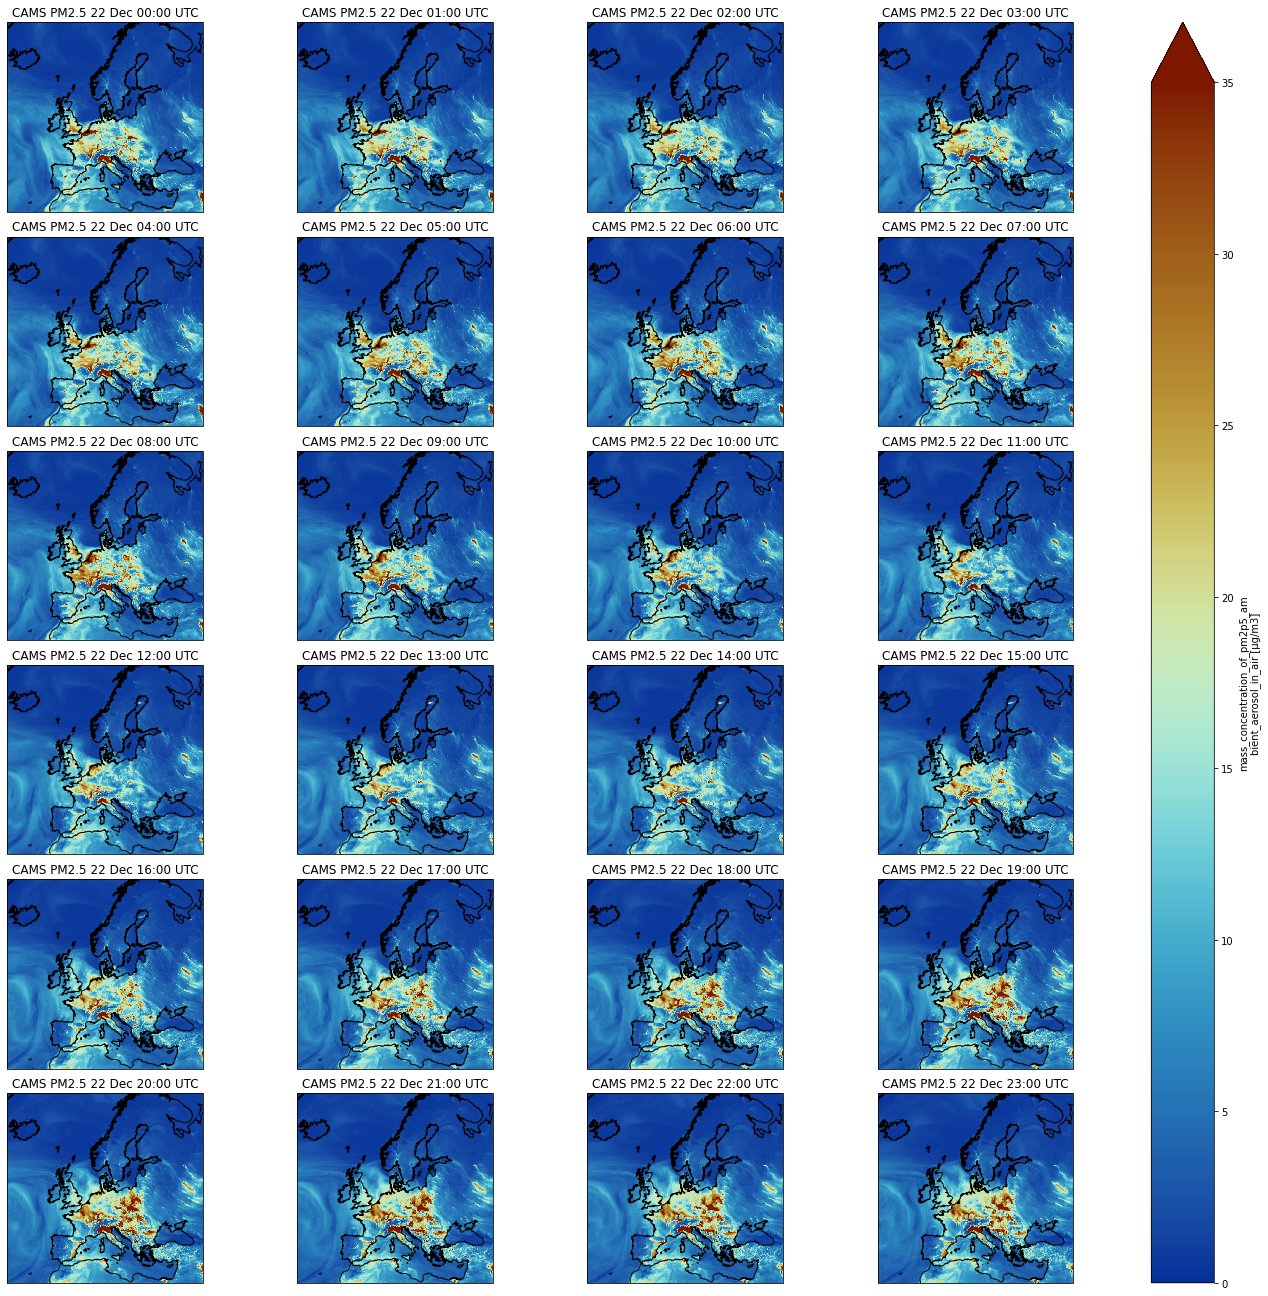

In [14]:
fig = plt.figure(1, figsize=[10,10])

# We're using cartopy to project our data.
# (see documentation on cartopy)
proj_plot = ccrs.Mercator()

# We need to project our data to the new projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
p = dset.sel(time=slice(np.timedelta64(1,'h'),np.timedelta64(1,'D')))['pm2p5_conc'].plot(transform=ccrs.PlateCarree(),
                                                                                       vmin = 0, vmax = 35,
                                                                                       subplot_kws={"projection": proj_plot},
                                                                                       col='time', col_wrap=4,
                                                                                       robust=True,
                                                                                      aspect=dset.dims["longitude"] / dset.dims["latitude"],  # for a sensible figsize
                                                                                       cmap=cmc.roma_r)
# We have to set the map's options on our axes
for ax,i in zip(p.axes.flat,  (np.datetime64('2021-12-22') + dset.time.sel(time=slice(np.timedelta64(0),np.timedelta64(1,'D')))).values):
      ax.coastlines('10m')
      ax.set_title("CAMS PM2.5 " + pd.to_datetime(i).strftime("%d %b %H:%S UTC"), fontsize=12)
# Save your figure
plt.savefig("CAMS-PM2_5-fc-multi.png")

<p>In the second part of our plot, we are going to customize each subplot (this is why we loop for each of them and get their axes) by adding:</p>
<ul>
<li><code style="color: inherit">coastlines</code>: we pass a parameter <code style="color: inherit">10m</code> to get coastlines with a high resolution (non-default);</li>
<li><code style="color: inherit">set_title</code> to set a title for each subplot.</li>
</ul>
<p><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABjAAAAUQCAYAAADqIxlVAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAgAElEQVR42uy9CXgc2XYe1o3eN+wAQYLYuIEASBA7QIDL
cDicfV/4Zt/3fd85+8bZSA53cubNe5b0/KQnvU+WrMhJLEu2YydOZCf+HC+K
vyRK4jiKFTuStVh24tzUvVW3+tSpc29VN0ACfHPm+/4h0N3orq7lr3PPf85/
EkKIBIPBYDAYDAaDwWAwGAwGg8FgMBgMxkoC7wQGg8FgMBgMBoPBYDAYDAaD
wWAwGCxgMBgMBoPBYDAYDAaDwWAwGAwGg8FgsIDBYDAYDAaDwWAwGAwGg8Fg
MBgMBoMFDAaDwWAwGAwGg8FgMBgMBoPBYDAYDBYwGAwGg8FgMBgMBoPBYDAY
DAaDwWCwgMFgMBgMBoPBYDAYDAaDwWAwGAwGg8ECBoPBYDAYDAaDwWAwGAwG
g8FgMBgMFjAYDAaDwWAwGAwGg8FgMBgMBoPBYDBYwGAwGAwGg8FgMBgMBoPB
YDAYDAaDwWABg8Go8SJJJG538LsO/tTB/+HgNx3sQK+514H8YT96/CLv8Z+i
x7d5j/8OeOw6B/+dg3/r4P9y8FsO+g3b9AMH/8Hbpn/j4D93sNl77h3vvZ9G
f/Os9/g73u9z3t/Jv/9DBz9xsNqyH37HwV94nynxe5bXXuXgv3DwRw7+wMFZ
BxXw/OcO/rmDP3HwzxzcbXkvuQ//P/C5/8LBLzmYPkfHe6+3TX/u4Lcd9IHn
kg4OOvjXHj6Vj1neq997jz/33vMS4tz6Xxz8mYNfddBqeS/5vw3oMXmsf97B
HWD//Du0v/7Ue+2Mg//EOybymP/XDu7ja5x5iHnoguOhPd5jf+zg92O8F/MQ
g3mIeWipeeglB/+9t93/s/ydeYjBXMRctAxcJPfh/+Qdo3/p4JCDNHMRg8Fg
sIDBYHzXAuTnHfwrBzc6KDnIOLjGwWfodb/tJbR/gwjw/pUXKLaBx7+UQaYO
kmXw4yWj9npJ8oqDmxz0WoLkD7yfiw5+wcF/BQIn+d5/H/3NP/Ae10HyFQ5u
cdDovcf3Hfy1iCD5wRoWFpd779viLSxOgefflUG9gwYHsw7+bwfzliD5XwAB
Ya2D97yAfe8SH+927zjI/ZKXx1nvV+/5R7x9KLeh28E/cfCo5f3+S+9YF7zj
KQPUDu+5EW+RsMtB2cGPHPy4niDZtL/AY9u9gPkV7zvK/TgpFxt8nTMPMQ9d
cDwkF7x3OXg4poDBPMRgHmIeWmoeetnBhEwUOhj0En63Mg8xmIuYi84zF613
0Oz93Orgb8hzhLmIwWAwWMBgML5LAXKTF1jcEvG6Pq+qQgZB/6+DVThgkQGi
gye8x1LeY2+BIPlmWeFTw7b5QTKoqvlTVPnxT2UgBgKyf+o9/o7hPeVC9E+W
Ikgm/lYuMv6R5flfc/BCVJCMHj8mq6/A75tB1dLvwYorL0j9wltg/7FXgVQg
3lMmBP8u+L3kVc3oCqq/K18Dnn8ABtHovTY5+Peouulva8HD+e8jGRijAPw/
wNcvYZAsv+9xvq6Zh5iHLnweAo9fEiVgMA8xmIeYh84lD4Hnv3JwlHmIwVzE
XLRcXCQFKQd/3cEJ5iIGg8FgAYPB+C4FyZd7QW864nUHZMun9/M/glUfIEie
d/D3vMeudPCfyoATBMnrvKqVQ549SDlukAwqRP42CpJfl3ZH3mPS6ui1iCD5
WVMyHgTJf+i1UP8d+d1q2JeHTRUsXgAr278vrzFIvthbnJQ8/G+y7darBpzw
tlMvEo5729/tLVLk8cgR73nEwUn0mLRIuMn7WQbYs+C5KbiwcP77qw5e9X6+
QS5MiMD+qPfzX5FVN+h5uSibXMog2au0+o/yvOLrmnmIeejC56EoAYN5iME8
xDx0vngIVGD/t7AjlXmIwVzEXHS+uMjrLvm3HjfI/bGNuYjBYDBYwGAwvktB
svSu/IMYr5N+oc96P8tA9B8aWmz/uddm/2PvvR9EPqtznn/oH3oB8w9MwbL3
3F8AH1NZJbMeBcm9Dv5Xr7Va/ttjCpKd/0a96pidlu8567VP5xzc47XYro+x
f/Z5bcibDM//ULZHm2ZJWILkzV7gKAPf7+lFAnj+tIO3vVbofweDWcu2fuPg
E/SYXBDc6/38H2HFj/PfRm8bksR73YUXHc5/H8pj5/38W9h+yvnvfzctPhYR
JHd7f7uZr2vmIeahC5+HauzAYB5iMA8xD50zHgLWM/+QSj4yDzGYi5iLziMX
yXXZ+w66mIsYDAaDBQwGg6t8gq9Z8F7ThVqWx4ggWbYlH3Xwf3qVF4EgGb3v
tDeQ7OM4bcqmwMnzAZVeob/l/R4Kkj2PVxmc3VXj/pGB7VMRr5nzgv69hufl
tv196fVqeQ9TkLwXVPm87LX4/hGArJg56aDTCxLLMb7TEdx27FVuwQ6MGfDc
pKm126vy+SfosaOoyudl9PyfWKp85Hk2RATd33KVD/MQ89B3h4dqFDCYhxjM
Q8xD55KHnvSGeK9lHmIwFzEXLRcXgeduxQPamYsYDAaDBQwG47vis3qz5TVn
vADkDwBk4PYlESQPeK/91vvdGCR7z3/u4NcXGSTf623PPVSQ7AX1v28bRG3Z
Pjn87WnL8+PekLxrDM+/67UAt0V8TqTPqvPfbdJj1fD3tVT5SJ/VvwN+lwH4
n6MZGA+B5++PmIHxF8hn9W8hn9VfAM+ti/BZlYumK9BjPyIWPSaf1WN8XTMP
MQ9d+DxUo4DBPMRgHmIeOic85MVA0opnHfMQg7mIuWg5YyLw/J2w44a5iMFg
MFjAYDC+K4Hy815VzvVetYRs+b3C8y3Ne9UkcpBzF8AT3t+kiYqLHQ7W4CDZ
e/whWZECWnD/BwdvLDJILnhJrgIOkr321f/RwUsx9kOzg8u875z22qz/TLZd
G16/xdsH3zM8/5rXtr06xmfDhUbS2+63vQD0Uu/xijcE7i7vGGW8Sqkh7/nj
XlvwGs9ndbvBZ7XD67K4yfuuB6FAIQNcb+Bet/de/9i2wJB/6y128l7Vjzxf
OrznRjy/1p1eMP7zJi9a7/Ufey3Ta73A/xKvKmhLjCB53lvwvaQXJXLRYPs8
BvMQ89CK5aEG7/ErvM+TP2eZhxjMQ8xD55GH7vASw0Mxzx/mIQZzEXPRueCi
B8ExGvbWZl8yFzEYDAYLGAzGd9Vv9Xe9oFAu1n7DCzpu9QacZdDr896QsqtN
FSpEkCyDyl/3Ass/9SpvDuL3rjVIJp6DQfLbXvvun0KA18pBc78Jgsf/xgvK
/sgL/vZZ9tm3XnURfO9/DJ6X//v36PnXLUGyfi95DP6lg1+WLdDodYPesZFt
0f/aa9EeA4uFw1479h971TYFw+fJ4POfeZVBcrhcP3gu6S2Q/o2HT6E/rFf5
9Dr4vd97D/levyffG33W7Z4H7p95bcutln1a8Nq6f9/7Dv/AwbU1VEXNeNv3
x962/z0Hd/M1zjzEPHTB8dBF3rZD/A7zEIN5iHnoPPKQtI36f9B2n2IeYjAX
MRedZy761jtGf+YdI8kNeeYiBoPBYAGDwWAwGAwGg8FgMBgMBoPBYDAYDAaD
BQwGg8FgMBgMBoPBYDAYDAaDwWAwGCxgMBgMBoPBYDAYDAaDwWAwGAwGg8Fg
sIDBYDAYDAaDwWAwGAwGg8FgMBgMBoPBAgaDwWAwGAwGg8FgMBgMBoPBYDAY
DBYwGAwGg8FgMBgMBoPBYDAYDAbjZzrJmkiU9jfJH3lfMBgsYDAY5wANTSMi
WepzUeyRdx4fyVxH9TkCDRjlPpFS6HdR6Rfpxn6RaRoQaQfy30zLOhet60S2
zUH7euff9ep39Xiz+1r5d/Lv9fv48D6jAaMUA+hvqPeSn6f+rQQ/V25PutHb
NgqNGv3Vba+A7xCA4TsYts8M+H7UZ7ifn0im3GOq/7VAfXahyz3++c7w/jMe
c7A/1XPBcymRzDjPrfX2TS84x1qC+8nf18H9ndFoHvDPp8B+NzwWOmfw9wD7
0tmev8acsBJ4qDd47mSa4/NQ2cBDTQNGHvK5yPvX5yDIQ6HruQ7+MXBQ8N/q
+RrmH4wg79DbacJScZCJl4L7X/FQKusez4ZsNA/JfVXs9jiiLZqHSviz9euc
cymZBjzUIFKlbmd73Nf4PJSpGDjfwENNiIfg880A8HXg3gDvNfi7MQ+tEB4q
yWPRUD130iWHm/ricRHmoUqVh/xzRZ8jiIv8373n8blDclCpDg4qBblHP4a3
GV4LpmuE5J0KzTkpQ+xVCwfZYzhTnORuk7zW1fFM5eLxUMm9HyWzzeb9SHJR
MO6Q50/1vZMOv3X5r0k0ZNzPSBcD3B/i+iYzcIwUuI+h1+CYNWWIjZiLVggP
pYrVc6chr2IkGw8lY/IQvEcFuKglyEP2eGjxHBS6lsD24rgHxxXx4h57zLKY
GKgh4j0oDlIxQKGjhniox+UQhzcSDkcErtWo/Y/2bzLbEoiHGvLt/ndJpsse
N+ad33vM8Sa59g3yTBRnZdA5CNdrzEMXNi4uJ0Q+qc6xrbw/GAwWMBiMJYcM
dAuzZ0W69+ZAwJSf+FI9DlHa/rUC/L284KJx5zcKTbu/L1ou+lah9eIfiLZL
fiBW3/Ajserqn1f/du//sei5/ZdEzx0/Eb33/LLov/+n6mf5nMJ1vyA6r/w5
0X7pD/2/l5A/y/eU768/S0J/PtwW/TsE3k4I+Z4S+jP0tuvPl9uioX+X2yi/
U9c1Py86Lv9LCvpvJPT26/ejgL+LCXr7aoH8u8qOryMDY3WsNz/u/0ztJ/gY
3Mem/akfz/ZeH/qsZKYxmBSSC/dUTpSGH1b7Fp43ch/qfSzPCwj5mDwGcr/D
4wOPE9wXeLv1NsLz1dme32VOWF4eymx42F2keedHdvjVEA9p7onLQxKKf7zz
RvHQzT8Wa2/9RcU9fff+iuKi3rt+oh5bc9Nf9jlIc09cHoriINu1rd8bcg/F
P/I1+nF5/uvrAG6ffg3FORpxOSgO31Dvr99b/iuTf1E8lO270cpDkFtM1zOF
wsgz4c9ryFYX6yo5XVQCb2HdzST3y30szx3MRfJ3eW5JUK/RPCWhOUnvE3iO
QD5iHlp+HsoOvRQQvjID95A8hDkpKh7S54eE5BkZD/kxkQPFSc6/8jl5/sjz
Sl/b+nyU7wOvr7gcRF0n1HUMuQdzkD6H8X1aP6c5CHKZiRuo77AU8Y+J7yQy
HVORPJRq2SIaKhvUz5WFU0YesoHirNL423Ry0isYqcZHDheuviiwf3WMCeNO
CPyY4h8QU0NO0lwF7xmaj+D2MhctPw/lRt9TgoU+P9Jd+yJ5CHIR5iF9vANx
tXeeyJhIcpHkIPWzA3j+6JiIiq9t10TUGoziAvkzxUHwc3GcBLlHP47XYOeL
g2w8JH8vrL81em3mxCPZvpvUz8Xx90l+scVDRkwfpHmouCbw2ep8c7iwde/3
AxwEeUhziQY8ryAXwTgJc5c+t+Rzct9Q607moQuq+6JlVToh7mlJiE057sJg
MFjAYDDOUaCcGbhLJEv91UTS5hdiBchUUg4vhCXkYlwHMnqxLpOFCvf8sp80
VAGzt8CCC2K4yDIFyzBAxov2OAIGXmzbhAy9ENBBlw7qYAANk58m8cIUQJsS
DaaEQyho3vN9kVtzsbNYnwkEqJk1lwR+T7dP+Z9X2HZABctRicNaBJfMmn2B
z2ucekcUBq4NCRoNpbUit3pXKPGhg2YsYuhgGCeZIaKSDVSCiYPk5eWh7KYn
REPz1ur52n9nXYt1DXi9yXNFnz86cah5SIqomof0ot0kokbxkEm8iEogwnPf
xj96AU8lt/B7mPin1sV7LSIGXrznB24UWcRDqeaRIAeky/52FKc+U7yxFDyk
tzu38YHA5xUH7xOlkSfDicvmzSLdtDGwz6CAQYmpkIv0wh4/BpPOlPCuf9f7
jXlomXlo6CWRap+vnhddl4r8zJm6eAgnsmBSR4uoWkjVAqrkJV30oeMLmDik
RNRaOMh0XUO+oaB5EHKWTcDAYoYtibiUCUQq3iptfkBk2ieCvFPoDHFAaf6s
KzbMnRCZVQvO72esXBSXo+R2FcaCAkZ29W7ROP1BaBvS7ZOqSwSLRFECBk4Q
BkQMlIjW8SpMGOLvxALG8vJQbstbIrVqTzXB3Drp8NDpRfGQvibhOSLjIb3+
ggKGFlGhkKqvdUpEXWwRh+YGKuaCfIL5B8ZGFF9FxT/ni4MkKtteFOnW0VAx
Rap5KPBYZeG0y0MOHykemjtOrl1snEOtedxjcjIY95R6RNP84TAPrdqp/m3e
9TUppGouwv9SBWf6HDLxln5PXHCmvwvz0IWDhWJCXNOYEG+tSojBXELc18Ii
BoPBAgaDsdSBMrKNyo2+H1u8iCtgwCBGBsYBAcOBrvaRwbMOanDVcZzEoS1p
aKqOwxWSpsATLiRhcgsGb7rKFia+4lYBRS2Cqapmavsk4nRdaBTG3gntz6iF
elTQjzsfdOJG7qem+S9E49QborzliWBSccN+0bzjSEDAkN/FtGiHAgZOkti6
LkziBS/Wl5+HXMuWqogaN2kYJ3EozxMoYPhdYHd5HRjOv2rBDrrAcAUg5qG4
4oVNRNXXik3sxEIG5Fe9qIQJRIo760kg1iKiYsjPlRYpcXkoP/SUccFt2q6o
xAPmIfmzPMZqHy4cE+VtLzhcFEwq5tbuFc0Ln4V4FQqpJjEVLuz1+YPvWzau
ZQFjZfBQqusS0Hlxr8NDp+oWUvH1oQUuXcwR6Ej1BAxd0AHvcTBxqN+r1ljI
1CGCOYgSHeDjMBmqtwt2icDnFsM/i+kEg8h1Xxybh3IDt8TqqqC2Lc530Dyk
OaJx52lRHHlCVLYfQmLqkGia/cgoYtQrYMCOHqoTmAWMlcNDsuvLTyZ3XyPy
08eXhIf0mgx2o0LxAhZy4I4d3Olpi4VqLeKguAZzEOYryI24iIzqnD0fHERx
kfz80vBjsXko07mdjIXgtRmXb0xxlXwPvdaW21cYetR57kzAajiZLqnCMyxW
4y4MuAa2dc3jjjF4blGxNfPQBdd90dWVTog3O10B49G2hBjIqnMpyfuHwWAB
g8FYyhuO3zKanzwcO0CmEodUNR+2AdLJQ919oRbxXrUPtE3AlkAw6Kyn6tmU
wKYqD6NEDBhA40BOB9E4sRhlpRCnuo8SMPxt3nlIfU6mbWt88WLoCVGaOUxW
BNuShvh72BKHEnIfaKswVe3uHHt5PiRT+bDFVGGVspWqzB8LiRhYLMIdGKYK
Z9vCiQWMFcZDyr7ui1g8FFfAgFZ22roFd4HpqmfNU/I8w9V9OukTd9GObWVs
yUOT5ZOJfyC/YuhEA058xrFziVoY2xbq8v2bFw4ry4HCuhvi89Dwk6I4ebCm
hGEcIRVzkdy+/gd/qu438JhnWkfC3RiVAbdrbOYTfz9jIZUSMCDnm3gd8xHm
VuahlcFDubGPl5SH9DUOYyHYCSbvjzoe0h0YJgGjVg6KEjBsFcs4gQi/C+Qb
3H1B8Q/c/noSiLYkYoCHdh5zfj4ryqNPRXOQN3+isPkRUZp4ty7xIuo7wPeQ
27jhmV9XiWJVwLPf7Twu9F8TroL2KrPL46+T9qWUDUvISgrZ2UXF0/A7MRct
Ew81VOezZIdejM1DNgEDXiMhAQOIF1DAoLoJYRxEJZzrFVCxhaaJf2C8BG2N
sLhCdcMvBQfVIl407zghGh00zbwTwzIq7YuoxW2vkc4CNi6Ks56Efy/3w8YX
f8O/B8ljLo93aeghgoc2uzy05TGjgIG7MEwchIvQYJcqjpFYwLiwMF1IiJua
XPFCY2s+Ie5o5i4MBoMFDAZjiRfsDc2jNQsXcQUMHWT6wYwTFOuKQ7Vwc36H
lc+wxR0viuuxbjEFejiZhwNlKsDFr8eVuTC5Dr3pcQAdJ3iOWkDDbSpuulcF
ly07Pq62II/cSfuc5t3BcaWxNwPvDz2QbVWFtqSnyVsfLiSUlY93zCU6Lj3i
bFML2s6kSOZXVROcm+4RzTtPhax0YMKFShLaAn5KiOEgebkTh8lYXRf1dILp
RZdeSGnbFgVv8aarnnGHD54/EeU5HMVBlD8y7gDD1Yb4XMULeH1tQc6B/1L+
9HG7MKJ8q/X2lEefd5P+E89Vr91114hkumBctBc3PxT4HJgQiVPdHKcTTD+P
Lf50hbKyOLz2h6Ih2xjyoE6A2R25gf0qMQqtA+HCHVtFYa9q6pzACUPmoZUh
YNTSdRF1reOkf6gTzBMw/MSh9zy0+sEcZCrkiFPEQd3/oL0MrrCmOhvk8zCJ
RVnuUZ1g1HvXI2JQ8abersaZ990YZ/MdIts55QmSvSJdXm2ev7NmD1n5SyX1
o/goanvhPoDzdXT8m27sQzwk54RVOTTff41o2XUokCiEBTTY5oXifzyDxxTL
MxctMw9NHa0rHjKdl9hSU3KQb2PncZFcl0H7KEqcj+oAg0lozEEm+14MWzEH
tvCF8Q41G6OW+GepeKhlp2vLlO/dK8rDVVEg17nFIKRmRaq0VjTu+sbYiUpx
Ub38CfeF5mvIQ7nVc2EecmIi2ZWhvtfavaJl4WBoDhjVDYa7VmE3GLT8pbiI
izouGM7q784kxIHOoIDxVFtCrM1wFwaDwQIGg7GUF4MTjOSnT9YlXuAqCZvt
ib9Iu+FHAZsEHUTDdmU830BXjJkS/LYB3lGJNyrJYGs1xgt+2BmAO0ewgFHL
4j2ugCHbe3WA2X7pWTIorow+KVovOiYyrcOiPPaqaJo/4n8/28KiVgEDzx6g
9q8+nvC4t+2sfgcVzO44pZKFMlhOd8yKVNOQSOZaRWXyXXKhE2ff4QUKdYw5
SF5GHlIdYEdiL9Rtlc/UNYsFDFV15gkYmouwgKGvZ5gAWoyIarIWsImolMiK
BQycYMDdGIupQIyqQvb/dv4Lv5K5ZSc9JLK89XHRsvu4yHaM+7YpOBlbS1Iw
zuIdz+aAC3e5T9Rwd89ipeOSL/1tbdvn3G92nRX5wUeVsJZqGRXp9mmVSKyM
vRhKyuJOQWrAZhzxgnlo+ROH+fHP6koaxu3AgHaauvMCFnRAAZWy04yTPKS6
D02xGi44sc3BgAkvWG2L7RyxgFFPEUc91dDNO0761nWNEy+IVGlNiIcq254U
LbuOiVz3LpHfcKfLQ3u+DYjTFO8sdlupinMNmOzrvPy0v60tO4+ohGZ+5EUh
q/JTlXVqwLfk2vKWh0P3Kyy6m2xYbfMJmItWBg/JAd718pAt5oUCvu4C8ws6
QDEHtNPEA7zjchDu6sbnmGm9GMVDungArrHwPdkEbMO3mOvZxPXNu78R6ZYR
T0i92+Gai8I8NPqIaF74XBTWXSfyvVc6PHRYVHacDa3LYKeUbf1CFU7EAS7s
qO7bH1ZnA42+qN43v/UNh1/Xqhk9uZ4r1fqytOkW0XnVz5EDvW2Du/W9jeIj
FjAuPGzLJ8RtzUHxQmOqkBD7m7gLg8FgAYPBWDKv1b66uy8oAcM0m0F3YeiF
u26b16IGFjDgwl3+bZSAYRvibUrCUYt6qqWZEjUoAQOLLrj6LUrEiDOEzV+o
7zor0m3jVc/UVbMi13cNGhIpB2OfDRwDbANBJf/h4ge3fVP7CXdvmIJr7Oes
FlHOcdfb23HJJ+p3PCBQDtLM9lwnEqm8yK271VkcfJ9MhEQN7LZ1X3CQvNw8
1LskPGQSMKBwFkgeegt2zUE4GYQ7wUximU1Etc2zMYmjtqpEKMrAKlu4kIeV
uNSA3XoEDGofy+SaHEbbkG93rQZahpTnfKpYrXZuKPeJ1otOheYIaXs5ExdB
HsJiAFzY2xbw1LWOE4ha2Epmim7ScP4VPymLBZbc+ruViJFde7nyi6buDZhL
KQHDVNnNScPl956vJWkYtxMM8hAe4q1FVBgTmYoiYPKwllk8VIEBPm8p73jc
6QgTXdAaVG8n7L7AiUUqgbgUIobeF7m+60RDqdcbTLvGiYnmRdaJi6rFHDnV
QYU7REyFF1GcXU+y0MT7ep+6lc8zrgCz9b5AlTK8zxRGnnH4qiyyXQuqcAUm
DynBWu9zvQ1RsTzHRMvMQ4Xumm2jau1INQkYuKAMd3VCm7la+EffR01zB028
Q3VVwDUX7DaC6y+Keyj+qbfzwnRtFzbd7cQ8rgWle43uEPmefYG1WdPc56EC
CFhgofeRrSDjXHSxQRGjsuU+t/Bk0zV+LAS7JNTPEwec2K9NWRe37zseEDAo
iykozMvPMHWCsa3mBSe4DvcR3Rcaz7UnxJq0OvdTvL8YDBYwGIzFB8qlvrqD
ZFxdTCWsdZCmF7x+0HwzIWB4vs+4HR4Gd6YZB3EFDFuCGw/HxIk+mMSUgO3/
VDWQqX1/sQJG884zTsA4SlshrF4I/I797/VwWShm4AQqVaVnSxDjxbypiwVX
gPnJzNlnRddVX/rt63J/UnYsxfH3REOxW1VCyy4Nag5HLeIFPgYcJK98Hlqs
gAGTh77/uLdY1wIGXIBhAcAkpOKB3XFFVFui3VSJSFm4YL6kLOywgFGrjVRo
23d9LbKGAbl4Fk/rnjOBz9X8A72PbZXO1H6Os3i3Xe8h7//tr4v2iw74Faj6
XMDHvTj9hWho3ChSTYOqarIW8SKq4pkX6xcWD+EusDgCRiAO0v7j+6vnHO7A
oIRU02yVqDjIZnuC/edxAhA+D22PsPWnjX8WI2CY7udSRC1suM1qmanRvOOL
wOdDMRXPODLZYlK+/7XO5MGvCyRod30s2nY+H7ofyedgArE4c0yk2yZFQ2mt
aJ7/JJTENcVgtu4LFjAuPB6iulHJYgMvNscWipqDtJCKxQtKwLDZ+lJxkG0+
GVXwhkVGXAynORSLvXA7qQIO03Wx2O4L/b2Kw0/EmvtVmXwjtJaEVpembTMJ
F3Awdy2CjElMVftq71HRNv9IaB4T5BD5b2XhtMh1X6KEjJb5t0MiBoY+LlAA
s527zEMrH0O5hLinhRYvNOaLCXFdI3dhMBgsYDAYyyxg2CpdoWUCtOvAHReB
IV/IPgG3vlNV/6aEJlXtSnmKUhO9KggAACAASURBVMEhtTiFi12YQAy0/iPL
BxxA12rhYhJb7MFxMvA7XihoYQUKS5SNjakFPCqQpobwmTpZ4CIFDhPUw3Wh
+KM/q7L9qLKUkpWWpckPrYPdrcH69i/VgD0e4r1yeAgmBWudwxPVSQUrh/3h
lV7FM7bhoJKHeHiuabYBtXiPK6DiRJnNUgqKpzjpGUfAWGwXhnxdun3SMhg3
F0wcguOgF+mwulJuK8UTcHtM1aW2ZKjJQ9uWvJX7THHRzcGKeChklLafFOmO
7SKZ7xSFra9YRVRbIrkyf0QBbgvz0PLHQ1E8ZIqHTIlgXOGqrctgNyos4MBV
rPg6NiUO6ynkgNcRTqrBmVO4QpeyBtHbivnT1MlRi5e7iTOlDZR5MG4myEO7
zlRnZQAeglanMMmJeQJ3pZr42+avb7MpxVY6ujsM87u/LfNnRWbtVSKZaRKF
ocfJGWQY1Hkh46ry7Beh78tcdGHwUBwBA1tq6nl0ficYGOQMCyJwRypcz2DL
RGrwtIl/bNaaUEClBAwd+2iO1Pyjt48SX/B212NlZ1o/qrXJ5NuxxAu3A+Ng
gIf0d9M8rPe9yUqUEiqiisxsnWWU7S/V8YLvQ5BPcuvvUvMxioN3k+teyLUm
26jS3AlRnj4YOh+Yh1YuHmxNiA1Zu3gh8WJHQnS5XRhZ3m8MBgsYDMayVT7H
ETDwHAxdOYMFDJ1UhAs1k+UJ/JwoESNq0W6a+2DqzsBdBFQSUQdusGrSVElt
62Sgtlu+JpkuxxIv8hvvDVfVeEISTBjiILmWGRxUdwWusrQNBoXzUXRFqoKz
kIL7EiY7ZMVPtvcGdy6Gs/A2WWnYfHf9IcMb7hCV8ddFYeRZDpJXMA9Rdi02
AQOeZ1jA0EkhnaDGAgZcGOtFpE3AqIeDouY12LoI4EwPnESECcTFCBg2DtLP
WQUM2BXWc3UgQQptE+Q2w8f0dW7a3yYBwzbsnKrypOaKwO3QfARno8AZF4qH
djiL9g33KD/o8tTHRh6yzSJoKPW4gz37rhOViTdFcQvz0IWQOIziIUrAoDgI
d6OaBAwYD1HdPrV2gdk6UCFv4msICxiUiAFtXTQfUYN043JQlDVkrv/6WDyU
6Zgz8pC+vrWAaRJTqf1uEjBMBR5xZ63p7TR1+cJYLT/0lOKh0thr1spyKsns
cvm0N8z8YlEad3mouOU55qILmIfwDDpSwACdYDruxuca1eFAdaTaRNQ46zB8
fUQJGBT36DUX5CFsrwm5DPNpLSIqvpcXhh6NxUMN+c6AlZbJOgtzPiW6mDrU
TJ319QqqeN4aFH3hfimMvuasy9pEecujIcEdOxxQXJTtucrj6mmHh94Qxa3P
MQ+tcKzPJsRDrdEChsRFpYS4osJdGAwGCxgMxnkQMGq1baE83HXwGOjC8Bbt
GthzFQZJ1HwNUzt8rRZSVMIJB6imDgKcRIQL9noFjKhAuTLzcaxAOT/8TCBI
1ftS7mcdyOMKRKrKB7cmR/n4Y6sb+BmUhYtK5ngV8TqZo4cHUp0iehsyqxZE
Q2W9aNxxkuzCMAX18j1KI096FZppkaoMiFTzFg6SL2AhFVoK2YRUfb7pBLU+
zyifXmyXQF2zpi6MWkRUvHiOskGCiTe47TCBSM3FwNWH9Yqo/rYuHPMHd1sT
hz3XBP4OW0FQw4MxF9lsZExJUJvXtulvAglmMBcFW/FBP/lc3/Uime9Qw4BN
tlemfVgaez0wKyTVwjx0ofOQ6byEcQPsBNPWUabOC8hDJruypRBR4yTdNX/i
xCbVCWaq2o1bAY3v46aCjuadp9X1F8VDqabNoXgOChhUdTm+5k1WcbaYKErA
iNrvUCzC2wn3VW7TQyKRLovm+Y9Cc8TgNlLnQWnqIzXbx+WhXsVDqeZh5qIL
dF0W1YGhhTE/9gaDu7GAYRIjqWuh1i5Uin9gtzhVCGUTMPS247UkJWDUykFR
Qqoc3C1tJaPXZg2qc0r+LdWNThXO4BjWxkX4O9TbEQb/Fsacpi4cfcyliCHj
wsaJV0Tbvh+ECj9sgld59rBoKLjz06Q1nuQg5qGVi7tbEmI4F0+8kHilIyFW
uV0YJd5/DAYLGAzGOa18jiNgUJYnuMrNtOjFC/co32S8sLQt3msVLmyV3VQi
Agd1MMjGgTNV/WMTMHCCoTj6qhPUdcduU5Yozp0NeMbLz9QCRlTlDVWlTLUa
RwkZtqF5+nk9SFlXO2tAz228aCrNHfe/Z27glpDvq61NXb5nZfxVVbUoB2LK
13KQfGELqVEJbAhdfQiTQpRPr2n4Nb5ubBxkS8DFrdQ3+UTbBnlj72qKg6Lm
YOAEorruJj9QyXbc8WXloZkTgWGe8rP1voc8YDuGONGHB9OaFuim84ASo3TC
EFodym3EggoUWSo7zopkfpU7xLx9StllRXWvwO1qnHb2Z65N5DfczTz0M9CR
Cs8lU+IaWlBS/EPZaNqu2TizVuLYuJgKFaiOWiqmoyq3MTeZvg/l227lzJnP
lSiRSBdj81Bh4mDAEhMK2rgLzMZFNvuVKD6izgWqswZWy8NCGSym+p+xyy3q
cIcHNzqv+35A6PDjJsM9pmn7IZEq9Yjs2iv955iLLuzCMpuAgWdhQPECWzBh
4cLWkRS1TbXOp7MVb+jtwutJ6nfIQbjIKmoeho1DK3NfiUzHjKUzniguG3k5
sF9g5yfssMJxjyn+pAToKJcBEx9R60FcfILXvFjIyPbvB/PPToQEVVPMq7Zr
4bhIt4yorjAp9MjnmYdW5ODuZG8mIZ5oiy9gSFxWSYiLy9yFwWCwgMFgrBAB
g0pcYx9NuKiFC1/TIhd6MFPVKDYBw9ZVQYkbtXaZ6M+HAR20XcCJwzjJCONw
uK3P0e3IxTWhQZUaOviD30V+vhQJ9NC4eqqXbQt106KD8vbH9mKUD7gWg/BQ
b99SZuwAsMy6R5S3Pi8q24+FkiEmO5n8pvtEqnWcF+s/YzxkEtL09Qd5yLRg
t1kv4XN7KQUMkzBDJb0g9+AFOhZS4Xey2ZfYbAnKs5/Si/JUweGi1QYeOhP4
ftp7Xld/mhbLpuQpxSm2Dhbq3mSbmaG71GBlvB46SQkYSlyequ4X6UlfHH1Z
Dfum7jnUINPStlec/beWeehnREi1ncN43goefG2aHxE1/LoeASPKWso2n4Ha
ZtwFhgtUqG6SOMlDzPHSOtJkoyljIpKHtp8KJc3kZ8vtkwOMcbeX7TiaCjri
DPQ2cRr8bPg63OmruYjk7oVqUUe6bVw0Th8QjTOfBO5TVBeL3pbm+S8dLs+x
gPEzLmBgOzhqBhjuoKKKkUyD7eMIGLYCI1vcg2MeHdNgO19/tiIxkNzGQXHm
gFW/50mzVZRnD6mRLHS5xRyTB0P7SK8Xe+/5ZbKYw2RRR/FQLUPJbV1h1JwN
fN5guz39dzLmS+bavY6uAVGeeFuB6lqm3Q6+VjxUmjnEPLRCcWtzQoznaxMv
JF7v9Lswmnk/MhgsYDAYdaHhHAkY1PAuXGVIWSXgRD9MYOMBkLaBYHEEiloF
DFuVNwyqsdcsDrZNlgSm7oFs37XBQDhdFsUtzziB8Pt0leGWl0V+6EljMlVa
NcnkHAySbRYGVAU6FQhHea/irgt4bmhLMbzY0FWolIARqCp09kUy3+5VH1bI
baKSl9nuy9zkxtwJDpJ/xoRUm52dTh7i88zEQ5jTcEIyLgfVI2DEqYQ2iRjw
cdiREWfxjvdrUduuaR7KNon8pntFafYzuspwy+sit+Fe4zHTw7LldsX1jTcl
UOIIGNRCn7Kzk9uj7TQgF8GqSFipDRMcUrSQ91S9D+ScDJNXPvw+hcGH3OTG
1OfMQz+jQqqJi/Q1SXVgUMNQTRWzUTxSq32mTYTBvIMLUrSIYaroxiJqnC4M
X0Sd/jBUxJHtudLZ9sPGauds381WHpIDjKN4KE61chwushVUmJLMel9q21VT
t4Y/3HvumLaj84aXf00KGHhbKpPvuDHk2DucOPwZFzDgvYzqAqNso5ZaRLUJ
lXEEDGi3pL+HydYO8hBVFBdXwKiKqMeCPFTuE5mOKefaOyySpf4QD+U2PSoy
a6/27aPwukxuixymLq9xGFvYZplQIuhSixjU+g3uf9yVExCad5wR6c4d/j5o
XDgWspCiuKh5xwmPu19gHlqZ3RcNa9IJ8Ux77QKGxDWNCbGjxF0YDAYLGAzG
EggYeGCcbbEed6Fr6sCghlXihTpeKMMqINiZQVkoxE0SUp0ZNj/ZqK4DmNiC
VhEw4KMSiLa2ZZgwLE9/6g2yPk77zXdf7tsE2BYSm175zUAiwdSebLM4oJIN
Ng9W/TM8dvLfsUN/U/Q/+NNQ9wVM3uhtNe1711LiM5HpnHcXC/03hZKTlAAC
qzM5SF4ZC/Z6eCjO3AjclYAXwZTHL+QjStTQsPr6LtQvZJgS3xS/woQivL5w
kpG67m2DITEPyW6L8uQ7/mvJCsR0OZa13/onf823irNZR+Dq9VoX6VRiEXK0
/H3b57/tJxDgTCYoAMGuO1MHiLKUcHhYVUGv2q1EDJyIwBWWyWyzy0OzR5mH
VigPxREw4ibhqPlgei4GvPfhgbl4phTVCRaXg+JwVJwuDArYOx9eTzApGiUE
UElP2G1RHHmqykOZRpKLbPGd/n56BoAuQDHNqDAJSCb7rThchOOlkQ/+ui+o
QDtAWNwBfeVhZXRQTD+phBs1/6N5i9+Bgs9PyEWZ1Rd7QuqnnDi8QHgI/m6y
Z8JchM9jaNeLreGiZmjh97PFMfV0gNnsMymrXup33J0BOSiOiEFtW7p9siqS
rr/Vf21D40ZrJ6ppnamPw7rH/0qo4xNvG8WdixEwTPGW5CG4LbBzEHfKm9aC
0mIzt/5uryul14lxvrIea+U4sOUFV0gdfZ15aAXixsaEmC3WJ15IvNmZEKvd
LoxVvD8ZDBYwGIy6A2UYDMdJGtoEDGqhCzspYOADRQzKrsWUVIRBdZSAQQ2V
s32nOEkJ03fW24eHwlIVQ9TA7JCIMXtIBXLZ7ksD25BIV1DCsOItPA9aBQzd
rrzxhd/wA1OTpQqVOKSSdnEShaYKHvmvTB6se+xXAwt2k40YleTEAXth88Ou
iNF3rfP7mcAiHW9fMtsq0p0L7LN6gfNQnKpnyEMQ2KrFNHDW1pVBdWGcCwEj
SsTA3AivJywWx+Eg3+d5x9detfPawDZlVl8U7Moob3AX9Jsfi+Qh+fzQ2/+Z
ugdgizrTTJ64ntVxBAyY+NOzgfrv/6mf5IBJVnyssYBBJSJLE+95Vi6TojJ/
kqyU1o+lWkbV4p4X6xd+PGTqCKO6L+LEN5iHqPthLRxUCzeZkp+UcIr5E8Y9
WMQwFXLUImDA5wtDjweroZtH3IKONfuM3XGQh7Z8+Fv+fQAneeNWPdcrpuLi
Drl/JA/p5DG8T1EdLNCWs4mYv1OaPeJyc65VFKePkHPrfD5fe7UShnSVOHPR
yuvAwOcvJWDA69fUbWPrCjPNJMQCBiVkmOKYehBnBg/mH7yOhDMz8NxFzEFx
BQx1bXizd2SC3v/OUx8Feahx0O8Si8NDWz/5G8pGSm4bJZqaOuSXQsDAYon8
XMlDUtjVHSLwHIGdLVpQpYaJQ0HVn4nm2WjBewzc9sLmR73CspPMQyuv+yLT
lU6IFzrqFzAkbmpKiJkCd2EwGCxgMBh1BspLtVi3DbqGAgasytOLW5OAgSv9
8KJZB05LJWDE+Z62CiH9nbGNFKz4hpU/UfMvZHBcGn87FHCGbKNGX1ctysW5
05HfF7f+6mMTFSDHbbe2WSjAQXB6X8jjLyufYSU2XBjp420bNB5ot971tT/M
MtM5RyYMYfV4Zs3lLGCsgE4w06K8luszqs2eslwyVTzjhTnmIZjECwyXX2QX
mGm4YRxLGiysmASMWjjInzcz/lbAEskVAFuCNgkbHxC5zU+L4vRXkTwk3xPO
l9DbG2WpYkocxlm0mwQMncjovesn/tBuXPlODQG3JQDkc7nea30faFxlGBRS
m70qaeahlRIP1RITmcQLm4ChK1lhlyYl2mMuouaCYQGjVqEibheGTTjFM2pw
1xserGvqADUJqX6Bwtg7gW4CiUzXrmAn6uqLRX74JVGY/Dwy9tM8pHkRdtJS
PEQlb5dCTNWzgXRHiI6HqA4X/NkUH8L9k994r3Nyp1VnnLR1MXFRqnlEcbqy
w5vlrtSVzkP4MZuAEdVdjWfSwe5DW0yEH7MNaa6Xe0w2Uli4wNcjTrpTHISL
OeJwkLo+Jj4Qpdljge0tbH4M2Wy2iPzWNx3O+iDWPQQW1uBiCVORGWXxuxSC
qhYpZGc8XCvqNS0uiKFm+GBBNT/0tCv8OFxUnP4yJGDov8t27/MEjK85Jlph
uKqSEDtLixMvJA50JkR3Rl0nfbxfGQwWMBiMuhOHcf1VbT6muMoH2wrg9mQY
JGOfeWqRjBONehh1lIVL1PeptdIbV5rYqpL0dmrBBiZMa62a8duXW0ZCiUNq
0WDbJ1hgwtsOkyzUcalnwY7nhWjIysy+e3/FTyDghTpOtFL2DnAfyseKw4+L
VGWADKzVPpk77netyIQrB8nLz0O1WLbE6ZAyVRia5kbgc84kgOBqY3gO2hbu
cTjIVL0Y14aEshWAHtHYpiZOJ5gJOkFfHWB9pXH7Td8bWiJQiRKctKB4KC5/
Ul71UEyVi3VZcSgBExuUSGTb5wF7u4m3RTJdMooXqrulISvywy8oAZp5aGUJ
qbXaaVJdmibBEXeEYdGC6lIwCan4PhfVhVHLvB6bdWZUIQMsXNADg3ECsZY4
iNrPhaEnAjyUatpsFYNN35ualWSy2zEJGfWKqfoxfV/SIobuUMOCuWmGCNVh
obro5r5yK8YXTocqnjXk+Z/tv13tl1TbFHPRClmX1VN4ZVqnUN3VFDdRgin8
e9hFZloXxBFW4nRh2ISXuF1QkIN0HASL52oRAEwxmSw2M1nYRfEQjP2gMEGt
zahZkPV2hZnWcvr9YLyI13DUfCaK2/B9JJFMieLER6FOG410x6xIr9qj9kWm
+0rmoZXTfVGQA7hf7li8gCFxW3NCjOW5C4PBYAGDwVjkEO+4yUKbiAGrX6hk
NSVgUIkpHKBhAUMH0HEFDJN3bC3dGSaRAC9wqUol+V1lot5kJRUnAK9sPyqS
ufZQkFycPVlT67YOUOF8CWpRju0uFlPpYxIvdBWPXLBLwEROHN9pUxK3NP5G
YMGOFyC5DQ+pqmf5c3b9fRwkryAewjYucc9pm+ezybfdJmCYujDg++DroV4B
I4qH4gz8Nvm349Z/uCitdQCk2+X0jXPtDId5aPqrSMGCSlDAKnSKa0yLdbjt
UclOU6cg5iQpYkhILjLNPMH718ZNjXPukPOm7V+S+1Z2zyXzq0Rx7qwaOMw8
tLIKOqKsJm3Jflv3AhUX2aqK8WBn/DpKwIjbBVaLnRS+vmrx3tfV3VjEiFMB
Da9nuJ8zq/eEO1InPov1XfG2Y3tLW2HHYhOHNgFDb4P0oJdiquQim++9bei4
/xk7Trkcve01cj8Xp78QiVRRFGdOOPvvU5FIl5iLLkABA/MQvgbxesXUHUbZ
b+LuBup+beoCMnWy1zqHhzp34/KW/j7ULEYdy8XhIOr9c33XiUSyIcBD+dG3
rGtMU7ccFA9MMZGpsMI0rzBu5wUl+EgOkl3yWlTFHTi2QeJUfkB2puQ23Ece
X2n7KzvFChMHVUykOseYh1YE9pUT4pLy0ogXugujz+3CGOL9y2CwgMFg1O35
HFe8wIGcbcFq8p2Hbcq25DmuVoTBHG5djRIwbMnQeiymqOQhDOThAkFXH0K7
ArwoiA46z5ACRpwgGR872ApsqvrUP9sSKrbqZqoCUwXkl/0wYCElH5Pijh6m
Sdm3UAt2U1u1amXfddZbsL8eWnzI/ZLu3CWy/be5rc0jL3CQvIKGVi5WRI3y
baespEwV/jbrAvj6uAJGnKRoLXN6KB6yWWnBgbBxOMhUzSmrnCkhtdZjp+8T
eogulZjFx4Xionq6wVr3Op+97wehe5MWU3Viw7RQjxJT9fNJZ0Fe3HQvmQjJ
9N4kUl2XuOfG2AfMQyvIez7uuWyye6Mqn7GAQXWC2c43qhMM2laeiw6MqDk9
tczQwEOp9f0/TmEEKWAg+yglYGx7t+b7iN4+KV5SPIT5nqqQts4zMwg8Cru+
Ec3IclTHi937f+xvkylZafLIxwnsVONGNU+N2sb84KMi1bJN7R/VkerOVWMu
WgEdqbXO61sKAYOKffCMBGxnh4c51yJeRBWnUHFJPbEh5CAoYEARwyZkmLYt
N3BLiIey6+6qK57V+xIXdNk6URcjYmAuwl0YWsToueMnirflvjKty0xCLtyf
ma6dIt26Tc3awWtGaVWaLKxxeWjurCruYB5aEd0XjZ3phHitc+kEDIl7WhJi
KMddGAwGCxgMxiIsE2oJCPHPUSIGrHQ1+bGbqt2ggKGDJ2ydYAuGqaREnEV9
LclFWxUiTGTgQZaUx6lp0YuH5voCxvxp8rtQAbd+f7kwlkPa5L8wiUB5WuO2
bWqhTNk4YdseffwC9ldrFkT7vq/9xbqs9IFdIdSwUuhvS/nduvNDvlZV4umW
reT5ke51Fxyp5lH2Wb1AeShO0sw2k4eag4H5h2rZp7qWahEwqO6vWkRUW1Ij
jo+9TiDiYdUmL3rMQ/kN95A8VJz6NHaSU7+X5B45uFIujjUP2aztTMO8qap3
/DvkYfk5DcVV1WRD57ho33vMPyfk9ti6MPC5AZND2FJBevIn8x2kkJrd6A6s
bCj1a1s75qELmIds937qXorn1GBfdpPVCyWg4kHO9QgYcQXUejgIdmLqTgyY
QIRzeahrG+/f4tYXaR4afbUuHtKVxlpMhRwUVQFdWyFKENlV26s2fG3DomXn
wcD9Sc7m0clMk51nVEwkty+/4c7QAHTfn37L62qAdzLX4fD4Z8rjn7nowuGh
uLN4TFyExTpcRER1HlICBrQnw9tGnXe1doHVUuhh2x+mTgxTNwa+tuF74uHd
vpA6+FDNPCTfXwqWejYgtFg2dT0s1VyeXP+N1QHklfWicfrNwP1Jb5PePlv3
hakLWFnajb3i2mvNHQ6JQzKGTDTkVDdYYfxdtzOMeWjZsbuUEFdWlla80NiQ
TYgHW1nEYDBYwGAwagyUa00Q2sQMqg0VBsgwkW2qOKTa9eEwSLyoxMPC8II8
qvtiqWZlRAXNOmGBK6Bt7bfKv3jH105weROae3G/qj4sbHsr5Klqq3rC4pKu
NIbCkM1z1VRljB+nBlDq494y/27gu3RcdsbtwPAEDJnYMCUxtUCBF1jwtfr7
ZtdeLtJtE6FzVp8LhfGP3YXG2NscJF9gPBQlquLKLpt9CyVgmPyhTRYj9QgY
tQqpJjHD9n6UBzb2gcZWUqE5DuB91EBYyEPr7hTZnitFfvi5yKQExUOaKyhP
aippGNdGztaFovmoZeenoqG0xv8urbsO+vsGWtrZfO+pYajY1ie/4W7RUFxL
Chjy2BVnjrn7cvAR5qELnIfiiBhYwNDnGO74sVVKQyGVGuZ9LmzsKKHVVBxi
ikWggAitpHBXKmnH5l078ufCyDPBaufe61UCLrfxPqs9C1XQgWMWLeyaKp0j
beOI6ndbMrF54bATp4z636Vx8oXA/UnZSO3/cahbFseNVPwMz4/i1peUJQtV
Ua4qnt3B3SLTc416jLnoZ09INc2UoLqNdEeFqfsZ28vC11MChm3NVYuogQs5
TF1zpv2hfzcJqabOVErAKE0E1zLpznknJrpVZPtuCokuca2y9L7V8wH1dW+a
U2ISmWoVMSrbj4l0V9WSrzR4R2j9pi3tcMdKlK0m5KSm7Yc9e99TtKg1f0Yk
UgWRaptkHloZ3RftXemEeKPz3AgYD7UmxPosCxgMBgsYDEbcQLnctySLdFuQ
SCWQsJe8qfoHB9RwCC20PMIJf1OwCyuf4wgYVJUh9uengmbK1gWKGKoC+oYf
Bb4LtRj2g9/Zr6oJw/X3qACvFpEJPo6PAwza6xEwTAsi06wB/XmNY09Wg/6W
IfVv17WnxOrrf0haOAQCYG/4LhSwoLihv3+qZavIr7/dD4plRQ8+nslcm7NP
7+IgeZkX7EslXth4iFqww3M0jpUdFOKoQfOmxWqUkFqLUIrnhZisJmwWf7rq
EIoYUTzkLSa9hfrOSB6yHS9qMHHULBK4uI87wJyy/4Kc1Lrr02r1c+ug+nfV
lcfE6mu/9oVm6n4EK8X1Y/J7wfNI77vsmr0O9rkJj3nnWI29K4pzZwLHSlpy
ZbovYx76DvEQTjLDa8Bm0YEtNfG9MUrAgIm/xYioi+Ehfd1ADoICpqkjDPNQ
sjwQi4dMMRElbsax87J1oJo4yTR/x/2cb6rcWu52BdWdH4vOy08GBAzbNsH7
EK6iVzY3624V6daxagfL+PvO8TkVOFaZrj3KSooThyufh2q11YQCoKkTA4sZ
cQUMasB8vV1gcTnIxD+18JDebpOYCmMN+P0xD8mEe3H2eE3uBVFrMxgX2Qoo
bEUdJltRk9WvfA+fWzMld37X1Auibc8xf79IPtJ8bSoyoTrB9OOF4adEQ7G7
2nUx+bEozR0LHKvchnvUrAzmoeXHXDEhrm88N+KFxnAuIe5uYRGDwWABg8Go
Q8CIO1zNNNjMNjgVJ6yohBBOJsLgGAoY2PIIL27hAt4U7JqqfRZT/WyrOoT7
AwoYOgg0JQ5loitgFzV7hEx46n+j/FpNll4mAQMvkKnFD/aGxolC3IGhF+LF
9deQrdcyqSi96eHxx59NDRXUiyY1pHvjA6Ih3ykq88ddi4Shp9xui62vBo6V
SlwOsICxEnio1gGPpr8xeY+bRAxTtw+sLMRJRmx7QgkYFK/UK2Dgv6OEVFNi
khIwtMc6XLhD6wSYqND7MWDTMvFhJA+Z7imwGw3zPrVYxwlN02LdNOjWxEn6
ODaOPUXyUNvu90T7ZfQMICqpAQUMn79HXxHJTKMoz7iDp3U9lgAAIABJREFU
hYvj77lC9IYHkJDaLtJdlzAPLTMP1cNBtQgYUTxUawcGFjFwJxjeRlvMgivy
F5NAjEoewiQojIXwTAwsZMj3aCj3VwflDj8bOZPEZHuqk7lU7GLzmo8SMKIS
jCZOat35Cc1DC6+Irmt/LjCvCYu6WMDCvFme/ljN4imNHXDjY9euTmTWXhMU
UlvGlJjKicOVX1gWpyPDNIuFKiwzde6YzmF8HuPXR3VY1DuTEHNMHA6iCtjw
fD5tq2kb7A15KN21u9oB1nej8fhQcRHFSZjfbTGRiR9NIir1s/E8uOgoyUOV
rQ84++cvqQ4MXEiI72uYD/3HF446sU6rEjH8uLIhp7ot4HmQ6b5aDfNmHlr2
7ou1a9IJ8WbnuRUwHm9LiF53oHeS9zuDwQIGgxFZ6RNuJT+lKtpkpWicih71
t7OHRHHiI2B5dFakmodEun1alCY/JANlqsMCVuBSi0kZWELvdpg4NHmrmgLc
ekWLWkUMan/p5KH+LnoYOVVd7A2Ydheb3ZeTwTH+mRp4CT8b719bBbqpwsck
SJnEC+3xrRcG7vH+QTVAbkiLTMs64AW9VbTtPRuYE4KDcJg4hNZRxclPVEVU
afxtb7+cFJn+/c7+u1J5qmIBIzf4BAfJKyRxWG25P6U4SFfX2iwB/ITd3AmR
H30r8BrZ0p9qHhGlsTfIYe9RnV+UgKHPY5hswwIadY3GtXyqdQ6GbQFPCT36
uoUcBDmVSlToxLvyRy6ujbXdtiG2OmkAqzijeIhK1lELcFMiwNQRJv8N2GJ1
jfk/p8o9zoL+OCmkUiIGXNBX5k+oRbi0u9HdF9mB20W6+ypR2PZeUMDItopM
783MQyuIh9xjdtqLh85Yk4Y4jipsO6DuO/q5TM91KvFeHHnWONibEsriCBjU
HBtqW+PEK1EzeWpNHtq4SF9LkIdMlnY+D019HrhWF8NDmgsxV8TlIp2co/gg
aoaJiZPgd8uv3Vnl3FyzaNvzZaCow+Q3DwUM+ZiMxxtKPSK/7nZQ4PGgc05e
K3Ijr6BOsBHnnrnAicMVJqS6HHQ6Fg/B31WXjVf0pOYcbLzfuX+vEflND5Dr
MtzdbBvUjLsnTR0YccWJOLMuTFwTR0zFXAS7MLCIYbKS0t+tNHsMzSE8a7XH
wjwEC9v04G6T5XLU2swmYNiOHRQd8BquId9eLVYZuAys07Kifc/7AWsryq4V
x0T693TbuN+N6haWPa3s/7KbHg8KGGsuczirl3lomTFRSIjvNZ1b8UJjPJ8Q
tzZzFwaDwQIGg1Fjq7K0BfEXTF7wECleKIujI04g8mS1+2Hyw2DlxtwRURp9
Qc0kMFUdYl96HBhruyP9Oxz4qoOxQOIhRtBby0K9lmDaZiEFPd9lEAhtSnCA
2bzjZHCxPn1Q+ZTW4qVKBbbQexsLGibxQv8drpA02fFQ0H8LPb/za3f436/9
ondF49Qbojz6vMh2zolUaY0obr5PtOz4XLTuNQfocB/LIXANlXUi210NkrPO
wl0O0VVt0c6/DY2bRGHyC5EdfNr5vVPkZ05xkLwCeEgfLzlXoXreJ0Vx7mzk
bBd3kX9a5DY95D9f2RHsXipPfSTKE2+p2TGNu76xihh44QgTR3oINlzEwQ6M
WoVUasEeVTEd5QFN8Rzls6x46IYfBcRU2IWhEVisT7wrSjOHrVXPpg48WP2H
EyBR8yYo/jJ5eVP8Ax/HftfFDdUBlqVN3xNtF32iOjPyvVep5GFx0+2ieftH
Dg9939j9Abevsv2osmtJeZYterEuuzF0IkAOyixse1fktr4rEumKyE98yTy0
ggSMwuhrwa6j2ZNGURBD8pDkI/2awPtsfVmUZz5xeWj+KDnHyZQAh6IqFOF0
EYRJSI0TB5m6V+vtxjB1iEEu0tcNFjFgJxPkq+Cw7ldU8Uy9PARjB5OoYLOz
kzBVn+O/wfcUKvaVx7Ey+ki1qrttWLRedNh57GHRuPUekUwXHZ66STTNvue8
59eB/YO70PTPjTvPOOfZRSqeryycrnaByUG5/sDedQ43PS+K00fU8FzJR/JY
MRetDAHDG2RcPe+nDpGdBFTskd/8hLKg1a8LCGQb7nbuU4dFds3FonHmI+NA
aNtMA81D+l6KOxLrmUsYLGQxd6BGcY2pE4Nao2le1bEdFDGoYolEMlXdj5sf
D/FQnIHqlPhQKw/Bax13jJi4CN9PKD5qmnk9cK6suvKsaBy9XzRNPOXy0Lor
ReP0AdG654yxK1UXcsj3a979jcj13ejaQs0dce8zs0dUoZmM8fXg8Oz6+5x4
/7TqSM0OPss8tLzdFxt6MglxoPP8CBjPtCeE7PZwPreB9z+DwQIGgxFLwJBB
bkNlYyBokZW2srLEVL0mhyDLRY+uNHQrD990FudulVxh9E03aewELfo9ZQsp
5bdKCRhwUCW2lMI+pXHsD2wWB7bkYC3vZxMxIKCAAbswYABY2HhfqI03t3Zv
INFgCpaxXzzcBpPXc5TnMx46aqoWwlWF+LOgCCW/f7rsDtJNlTpF09yHrngj
B3UOPSzS7ZPO+dPsoFHIhV2+92q16ML7Uy7OC5sfVZXMcqiwrDp0F3+fq6Sh
PC/VoM+ND6h25UQyIxqat4pM/+0cJK+QTjDdRZEBgwSrycNT5mrnyS8cfK54
SFfCySRNcfKgt8B8whdDfFF18m1yAKppLgbmHt21ABeX1KI9bpKPEjGi+KoW
2wTNFSQPAQEDVj/ra740+nLoeKSbNlkTuNiyCnfLYSsVyA/Ugp0SMHDiNm4n
mP5bmCiVn13orZ53bTve8hMyxa3PKUFVViUm0yWHp3pErnufqMx8ErJJaNzl
nHtbn1cez+mO7aoLQ1u2NBTWiPzgY8rfOTtwm3+ep1onRbrrUuahFZQ4lPeP
bP/+MA9NHzVWPMsYSvp5y3uRrpSW3YCyClp24mR6bwwkvlSMtPnBUCeGKRGO
BQyYNMQV0HEFDFN3RC3WmrVauGAu0t8LWknp7xO4x09/GDoeyXQh0lueEm5h
khUmALEoZCrqgIKB5o+oochYwKC6UyXKw1UBvzL2tH+/aZw8ILKrdzvcstod
clvqFrnVu0R58p3A9sjPl/GTfH2qcaNItWwR5dkvvY6iMyLVNKSGDMuio2zv
DWpot+KhthnR0DLuHyvmouXlIbd75msQvwDeGPvQXMjhxEEy/nE7Nk77Ikhp
/C3n2A8696VZ1ZETWFf0XE7yTdRQZtwJRlm+UR2ptQoYS2UlFSVi6CItLWDg
LgP17/YjgViS6gaL6hg2dUNAAQOul0xrMxh/UHNIbPPcTIU7vrXmxPP+d2sc
vde/33Rc8pko9F+qulMTqbzDR11OfDQrytteCXG6+n32I5Fpn1AdiKWpj/xj
m16108FuUdj6iuKg7MCtQuauU+1OrFXsEfmZM8xDy4gt+YS4q+X8iBcas8WE
uLGJuzAYDBYwGIwYAkZx+quw52Wm4i4Qcx1+ACYr2dPt20Vx5rjyyQ0l1zc8
FPJJT3ddXH2+/0arjRQMhGFiiQq0YHAJF6OLmWkRJVjU+57QaxlaOanEITHM
W75WLjYoH1JZ+Ux9z6i5I3gBD7sioI82DpKx3YWpQjpO1TNOUurkaff3fiw6
9n4u0i2b/PMkMHBu1zfKw7nkBMjZ1RcpQSPXe7UojjwlCiNPi2z3pSKZX+UE
yAMiP/xMVWCb/FwkC10is/bqwLFzq348q6oND3OQvEIEDClSUOe8zydzblIw
v/kxkWoZVxVcme4rCB56MFhpuPkJxV1+8t1ZwMtEM7Ugp2bxYB6C/shQ+IPz
ImoZxk11g0VVD0ZZwpgEEDi4Vn9X2AmGO0pkJwF5LDzLQFvyAfIQNVjSJn5G
2SVQFesmGxgqIQATlHqIpxJxrj4lsh2uhVS2a3s40TD3maiMvyFyPVcpT/ns
2stEaeQJUdz6ghJOZfJJco4USv0ktnN/bWjcrM47LbBpv3n/nFxzFfPQCuEh
eYysPDTjzlUqbHnZOYajSrTIbXo49LrswB3Om2aq95o1+1QXDiwQadxxirxX
mxJQWEilhl+bBIy4QipV/UzN2KlXbMWJQ82buqABDtLVz0lBiToWcqaVLWlo
KiCh5lbg2JLqCMPxFGX9FUfAwAUdULRRv1/1jSj07nK5obFPPR+Ix7YfcmLE
AyI/cLPLQ05cVBp6VDROvCwKAzeIVPNm5TWfW3ebSmi7IuoJNznYuFFZNOp9
poQ1fU42jbCAsYKE1ES6ZOah6S9cHhp7V3X6FUZfV8lg/Do550R24Piin3N/
Kmx7C3XJfxUSUU32jFQnmL5eoJhPCRhxhQZTHBVXKI0qVDOJGLAzFfIQnPNA
HYvcujsiZyOZ4iHc3WGLYWzdMaZ1mUmoMD0OxdSOy78VpY03eIPKs2ommO48
lu9fmT8iyhNvi/zGu9S6LNM5q0R5KWYUN+5XllHJTFnk+q5V7gHu2vWUsvOV
3e+l2aPVwd2bnwZWVXnmoeXtvti2Lnt+xQuJFzoSosvtwsjwcWAwWMBgMIwL
drWAWXtdKCBrqGxQSWG3QnQ8MMRVVbB7C3D/sfZZz3qqR1n0yMW7Xw098VG1
SmXynVCi0CRgYAspLGBo6yVcUVdr9WCU+FCrcGELjmHLr0oc3vCjUAJCefe3
TYAFx2rVXSArPHGCgbL1wvZKVAUitlOR+7l553HVEgxfo/5u4Wio5TiOeGEa
mgvnmUisvfUX1X6QjxcGH3A7dea/Mgb5pbHXRbb7MpFu2aqENFm9kx953u8W
kl0X0stZ2iFkuq9yZymguRf+eduxwEHyChFSc5seIxeHmTWeSJFMuUNciz2e
ELHdezwtEp41T6ptqpoUds6PbO91qiVd8dDUYfe1cvE//IRxeCVl9YEFDP13
lFeyyX9+MbN1tJ1UPWIqlRyA15O6FhEP6QW7TIAFEobDT6nrC3tVm4aFYksJ
zEPUwMrWPadFy66T4WpDh4eaEYfFFVJNMzD0cdb7oHv/j9U+aNn+tpvYmThg
nANUnnpP5HqvUYt0WemcXXuFa9nhCRey+0J2V0geSnfscOe6QB7yzkXdpcg8
tDKG56qOCYKHspuerFakOueyOraeIOrHTeUB93iWq92sqtK0a7cozpxw33/m
mPM6d95TbuAWo4BBVc1SnWC6kwhaGcXtBKP4AndhxO1cjZM0NNna6a4qahaG
2paxA8Hk7ZYXVIEM5liT1WnUAFuY7KvGKc5zu46FeKh5xwnRvOtMSMCIK6Tq
z6A6PqBF4Zqb/rJo3f2le75te9TIQ5WZg6roQ3arpho3OLHRJU68+LDDPyf9
mXRq4HC6LFIt21QcGRzcPVq9j0qO58ThihAw5P2C4qH82MFA1b+cjadin8ZB
/xjKTgu3EK0xMGg65cREMg6Sx1da4qW9dZu0GYNFVrUKGHDwtV431Cuk2myk
4nRY1CJk4HhKf38oDOv4zp9rFbCxe1UVm9lmImEeoubm4P0cEBr2Oft695HA
PlddVjudtdru0yEOq1XAMM0qhLPeVl3prpuK668NcHOgQ277YZFff5vIdMy4
PLT6IlHYdJ+ySdScm+u9VnXEy/xCYeLTwDHI9N7k3UPXMQ8tMzZlE+KB1vMv
YEjsLCXE1RXuwmAwWMBgMCyJQ+V7S1X4NOREfsSr5km5bfry9XrRLgNl5bG6
9VVv6PKIN6fh40DgqQM4PQQ223czOQAaW0hRiz5cIaer0qhqFPz5UcN06/V9
rqULAy4M5DZDAQN2QSj/7ZFnje3JMMFgqjCk9gkV1OpOiMLANaAydJVa7MqF
lK4gbd55KnKxTh1DyvoLCxgyaaiPpfRKVYmdNRcZ/XdhEiI8B+GsOkdTq/aK
/OQRcsGTn/xKDdFtKPf6FYccJC8zD82eEsnCGrrKdvyTwHUgRQpYvS47M/Jj
QXsRKVBgHlI/zxz2koq7RPOur0PdF1S1LMVBmIugjZTJSqCe4dxxeKVWPtPX
DRZTsX2L2n8znxuHVcbhIVgVbhtarLehPPIgsKlar0SrhkqfaMi3uYm86Q9r
6gTD9xIs3OruC78bzOEi+bN83B3i3UvOEqIew1wkB1GmWidEfuILslI0P33S
uX8eULMQ1LBv5qEVUdCRapumE4eTR4KJwzVXiFTzSJWnJj8X5bnDVVEq06S6
cihRU1q7qPPL+XuZELfdr02JKMg7WkyFMUQ9/FNvnEP520clECGH6GtJ27fA
hKgqWphH84xmv7TyEFW4YetwgftVfn7TTFUwSbeN+sU5qYpbyV4cejhgjWcS
m0zdpyYhVd9PFBfd7MZFejui4iEMvQ+yA3eqpGBu7JNQF43ioRnn/rnldTUT
gROHK6egA3bGBHho+oTfRSx5JLvubjU/QD8mO8OkeCXteNwCtDFV6ENxgipM
S+VVNby8pkwz80zFHlDAwCJGnI5UG7fU0wlm6mTF88JsA8S1mIoFDH1NBecZ
vWS0FDTxENVRSlnPqc+9uCqYZDp04eBqJzbqd9dJ3ZdYBe8oS00qXoLrUX/e
m8NHqXK3+kzc7RfFQ/58wi3Pi2SuTRTG3jeKUZKHSmNvMg8tI+5rSYjB3PKI
FxIvdyTEKrcLI8/Hg8FgAYPBIAPldPfVQW/z3ltEqn1eLdal7YW7gJvyq6Bz
fddXk1le4KeCqlxLIFjDAgL0tc+tu1VVsOFODJuAgYMxWC0MuzCgp2icap7F
2EnFCaZxgAwDVm1bAgPGlj3fKv/0XJ9u282LyvZDxgHq8H1xkEwFzaHOl712
uwz/WDsLdrltcH/Df00LdUrA0OKTL2A4C3VtF9GsW7STKeuCnfTfdxZgMrnd
UOpXNh9RVVtyyLNMnHtdGRwkLyMP5QafDHbGrNqjEon58U9VF41bpd4qsn23
uIu5VQvOoty1HJMJGCWwFlb5yUW/Sn4huCCWw3V9rmufEo0Lx43dANQCDycR
cdcC7HqKK2LUYnUQJWDEqTrEFchQwNBzMORjsrMgs/oSYDPxpZWHsICBecjW
eaEFgygU1u1XwhO2bYGzSuLcT+Bn+/OIQAcGHBhsG2ZKiRfSKkFaJ8pBlO5s
FvvxkRXSMinFi/Xl5yEpbONOVMlDudH3AhaZ6udUUVmzZHtd8V8OYVedZGt2
BYoOqHhIdg9UhY6KaN7xlbXgwGRLBJPluAIa8825FDGiBvRGian6GsK2WPL7
5HuvUp0DVR76IhADUNXOlC0LVeRB8VBDtimSh3JrLxONnvCEraNMQmqUiAHv
J5KLZAeG5Cb9mbK4w8RBFB/JWSzZnuuUHWxh27ux5qBIuylOHK4AHpr8PHTO
yW7h7NBLIrflzaqYMfKCSBa7vXk6j3ldg2+6x3LoUW+ddooc8O3a5Z0OfEaT
d23VKmDAjng4i4HioVrtd2stPLNxkW0mhuYP/R2hlZy8TuUaKJnvqIqo0weV
FWktPEQN2TZ1/2ZahyN5SM6WkJ0PtnkXNjtNU5c8XGfrbjBdRNK25ygZExnF
i13fiPyGu1SRRn74hcjuGxVDLZzyX8c8dF6to5L92YR4tG35BAyJveWEuLTM
XRgMBgsYDAYBaU1kC46kFVQogTT8pD+sVAd7jdPvivLWp40D23RAp22m/Iqy
PcG5Cth7mBqma6osgb7tlP8qDjBx4LoUi/y4C3Wd5NTVLXrB7rblehU+DVlv
BklrqKKOquyBAbL2ooWPwbZfLDgEBKyO7aJ5x6eieUEGxSdV8CkHR0ohJd93
pVHAiKrywV652v5CVxrqBY8Uttzhlc8ZfadhwhD+K4fQp7v2+uJFLYsjDpKX
k4fW2hdq3jyegJ3Lmr2e4AUqeOe/EMXB+0LHF/NQdt1dgfdqXDgW6AizDVyF
HAStP/DcGHy9UhV6NrGh3oRg3PM+yvNZCQoNOTW02k9uWHgI27RQPKSTAvr9
MRcF7j3t06I8cUDZ2rXs+sqzH7hGJLNNItsxKVr3fksmdqnFOaxwNnk960W6
FDDkc1JITaaLIj9wo9F32tR5ITlUCqnFqUOxxCXmoRXCQ8WeWCIa7lSFPOSe
6ydEft33jPcbfe1Jz/pAV8H0R2RSi0qQ41iImtlAVT9H2bksxiKqXlEEi5/+
sFjv+6TK/Sr+8Pl61zeBQgbTkFz9r4578PBtihPka1OlNaD7YkIUR18QbXvP
qPuL/Nv8hjtEQ6FTpCoDzvt+HYqJYLxjEi+o+RjyeSimyn/lY+nmTcqWhRri
a+OjzNprVQwvOxhr7YzhxOFy8lCv6oiolYvUebDn+1XrRudnWQglO1RtHVCl
mUNBHtr2itXOjhIwdPwOz3u8DlsK8bQWW6h6YyPNI9jGONs5F5wbsv1oLB7C
fB7VAaY/M9+ztypeNW0W+eEnnOed/TnziXpNcfhxt4s83+bEScdircsgF0V1
hOluOF1oVui92OHitdb5ZJSYmh98UCQL3SI/+nao+M80G0mvmZmHzi/uaE6I
0fzyihcSr3X6XRgVPi4MBgsYDEZIwGhoHKpWAuY6/K4LCqlSd2D4LVwIRgWq
MhiR1UL5La+JbN9+t6Js19nQIhxasuDkk20Bj2dhUIluqjJ6KYZ015M0lD+r
Qd5oaKX8HtpGyQ+UF04bk4ZQtIH7AvvW6sQArFJunv8o8Dly0dQ4fySwwNbJ
yMrYy84J0xBbwKAW61CgwgKGmzT8xlptaEsMq+RfQ04NzK2nsouD5OXkoe4g
D2WanN8HzcJqviMgOsDOIujdbuKh0vjbamBgfuh5d8E+9VGoQwkm0EwCBp6N
ARf8NgEDWp5EiRjngoso/3l5LULu1d8nwEPzJ6ziBWWHgBMg8ndsLyf9nQPH
ONsoKsgqSvNm87zrCS/nZMSdxUPNUcJiKhQwYDdI845DkeIFtuaQs6HyW9+s
y5ObeWh5BYyGpi1AnMiqDgwjDxW6RCMSHfQ5a+IhnbxRfDD9qchueEAUxj92
K6WHHzNW5VKxDu6+gMIg7AQLdSoS1diLETAWm0zEAgZMsOnvErSPOmzkIZw4
hHEK1eESEBMuPoPEqawoj72m3g9aBEo073Qr15tm3zMO77bZaprEVJ0wlFyk
bFtKq72CjpfJYeI2MVXOrsttejT2AGTmopUjYKRap0KdYCYeSjdtEuXRF0Ln
hTyvbDGE5iHZMZjtv02U5o77XfambjBKXIXXKTzPTQLGYmcKngsx1SZgBOIh
r7BM8fXEe7FiIdPajOJ59Zp936Jj3CCKww/7PAQ7yuR6vCHX5tw7HjYKqZRw
YRJU4doNiqmFPldMKQ/fSwoY+PvCGDi9ep+z5r/JOs+EOi/8dR3z0Hnrvlib
SYin2pZfwJC4spIQu0vchcFgsIDBYCCkvGFxxclPVDWJDiCkkOFWfQyJ4vgH
Xsv8pUa/75qCw11VyyLpR09VEsIKPLjow0GfqW0WJ8ywTYHNiokaOreUiUQo
YGjPZ90doW2UZCVmwL5p8sOAEEMNosRDPnHVs963MEhtHH+uWr2185Bov/wH
IX95/d6loXvd9mGiItQmYFC2X/q7wsW6+u57vg1Ue8tujOLoS6I08pQK1GWr
dHn2i8D5B4+R9JuXVYcsYFyYQyvlcOji9Bf+sU23T/udYJqHGoprjOJAXEs4
fe35NgxbXvN5wzbHBQ7JxTxDVSnChawtgUjxThxuXWw1ItyH8NrUi2TI1br7
ztYBhu3qtLANK6Ghd7/er81zVdue5oVPRccVQesXKKQ2zbkDTHFXni1xSCUN
IQ8FBIybf6zeL+0NQZVVrFJMlYnM4tAjSnSX4lll9lPSpkwNo1x9merCqMeK
h3loea1blPXO3BEnJjpYnWXSe7M/XLSw9ZXAPSqqKCLqHICe6jKJCO/bVAcq
JWBQnWCUkEp1pVLdYLV+l8VwELaf052p+nvr7xDovuu9NpKDMA/hanI4TNvf
p7u/qnZ5zL7nvOYs+R76fdy46XOrhRSVMKTEC2jDo7lI/p7vuczjxUMqPipN
HBDFzQ+qmWRSRJGxIa4C1/tWzb6obBDFubN1JX+Zi5aZh+ZPBGL//NDTHg8N
iPzgo6Aj6euAYBrXKhc+pzqYveHJqaYRck4hXhNAYVBfU9CCkuqEx7wDYRPX
qN/jPFYvF0lQdlgB4ah1NBYP4YIvSrgIignVe0Jl4gXRsvuk380K7ZT1WlKt
EQdvsw7sjuIiGI8FCsw8AaNp0rV4bZp6WX1+eep9Udx0r2jZdVLFRKXJ91XX
KuRIfR7mhp5TdppyaHyt8RB3YJw/3NKUEFOFlSFeSLzRmRBdbhdGOx8fBoMF
DAYjIGDABa70XU2v2hMcGDf4oMiuWhDlmY+Nyf9aqoYL296q+ghvfCC0qIRd
GLBK1lRFRw0/g4tJXIloQpSAQXmx1uPlqoNOHfDqQFFt995vlVCEK6xwtW8T
ChRh8lT70MLn9GOUNZdbwbXOD1zx/mzecVJZJej5Au2X/dDqyW1KHMLFDRwW
p9uTdRWXHNKrFmVT74lM5ywYlve8Pxsju+YSJbiF5gDIStZ0yfn3IxYwLmAe
ksJmZu01IcuoXM8VojL2Wnhwe4zji1Gc+rTaWdY66XeTwapCSsDQnGITTakh
jVFV0FGCxrnqBoOLdX+Wh8NDxY13h3hIWrfYeAgnDzWf6OcgD2H7gmSm7AsT
8nXYXkEmaaTfczLX4r3ubN0CBkwaYgFDQr5fsyfeFIcfE/m+a6s8tOkeZWOl
/Kc755Qff+jcmj7q8FBFCWMsYFzAPDR3TOTWB+3mUo0bRX79bapbwiRchOcK
WESM2WD3ke6qhNcJtlyzdR5RM2eowhM8yNf22LnsBqMEDD8BuudbUd72UpiH
dp4JFXBQNiawqANyMpwXgrvstO+8nkcBK571+8v7UKIh43aC7frCOhcMJw1t
3ReUgKGLOvI9l4viZjCDpXuvSLe4A+TTLVtU0Qs+RtI6KFlY48TZD7GAcSHz
0PZTIr/58eB1kMorC6HC+luNHZ1Rxxm+RiaXqTUH7LKH/ELNftHXDLZsq6Vo
LI6yhSjIAAAgAElEQVS92VJ1flE8RAkY8hpsnPk4xEOV+SNG0QLGfpgfTHal
cH1W6L8iUKghuUAfC/23+Q3VGK1x/BmSX2wdGJSAoeMhLGDI3xOJpLKzq0y+
Abp/BhUXqXtjpV9UJg6QYmqqeavI9Fxfl20h89B56b5IrU4nxHPtK0fAkLi+
MSG2F7kLg8FgAYPBQIGyHCCa7blKNDgL88BC3VkUycpoGKTpwA5WFJsCQJ2s
x4vjbE81GVQYe1s9pheJOukFAy5YrRvlu4kDbWwrFUfIiBIz6rV5wYPdcPdE
unko7PO/9nI/aWhKEsLvDhfocD/BYBWKQoWBa7xF+IeBJAncd40zHwS2qfPS
r8iK5qjEITyWGtpjVT+ut18t2AduFKXhx739cKXyopat1LIDI9W4QaQ75pV3
b2n+bOA4ZXpuUBX7cRcrvFhfOQv2bP9+kWqbDPJQ87BoKKwW5ekPQxXP8ndq
MQv5Rj5OXdOwgjG/+YnA8EbIQ9Q8F9w2bxp2SfGPafjsYoWMWjvhcNJQW9rl
esICqhyWjq0DsYCMk4Z4X0DrOpi4k/9WtrrHonnq2RBv+FZUC8cD27Tq8nes
C3ZY1UhxkU5OYu95+a/efmnNkGmfFKXxA97Q90mR7Xb3T3HiA4eTpkRD05DI
j3+mkoXwOOU2PiySzt9T/uP4XGUeWik81O96dm96QKQ7F4IWLs5zcoBrcfRl
8jo2D0UOJuZCovvW16oDWXtdmw147mMLTSoGwl1htoHztXJOrWJqPUIHFlPl
tsrq3vC8kaxo3nnG+P0oO03Kwx92YEExs2nGTcyVNt0U4H9YYNOMqrBbZ+8P
DS82JQ6p+RcwHoNFHXqAt/zcTNuoa1c264ruSpQY2O91D74oMmv2qc5EOesi
P30ycBzyW15Vw+aLU4etXTOUCMdctLzxUHHLcw4P7QjZvMpq9sLmR0P3b1sX
g+6sMnFUcbKaoE85sbZ8HIoVVAcqBjWv0JTYj2Nrd75tfmFXqv7+lfHX/FlH
AYEHWZjWy0NYTFU2v7vcAe7ZVTP+c0rMBNZR0OZSWTttvEjxhcmiDgoTcazs
MBfJ5/K9+5SIIeeSucVkGVFQPJ0UhcEHlLCfTJdFcfx9UZw5EeSTsQ/d4rJt
7/nnHvPQysG1jQkxX1xZ4oXEm50Jscbtwujm48RgAYN3AoPhL9il/6nJW1Un
z3HQCROHJgGD8nvPj7yoFlOw2lC+DlfL2RLhpqHOcJFpEjxwu2+UiGHqMqk3
MMZJQzhHBO/7XP8NfqUh5S8K9wP2ycYVydCiyk/eXXLCTZq0DvvPU0mS8tan
Atu1+sYf+ZXapsQhFCpsAoauONSf7VszeD6z8ndpGyX3gwroe65y9+PsF8Eu
oZEX1L4tTn0u9EDowtj7keIFJw5XVuLQyEPgOrAlDqkEPV6UqsX6+HvOYqrK
Q/r12BvdJF5E8RA1gBd3Y5j45nx1ZFAChtw2OLTbre4dEY07TpAchAGvd+w/
j5OGmofkv744igYRQz5qnPkwsF09d/wcmTg0DaykLBLg66CYqo+XHJyph6M2
zR/xk5cNxW7P4uO4b7eohTApqBZnjythQ3HWxkdjCans97xyeCiZayV5SHb9
wSQ75BSbgAF5KpCkmTkcSIyV5s+EeIhKfJsEDFMyDc/CghYfUbYu56MrjOLD
dHN4FlvTwlGjUGrylMe2dnDIMOxycSuM3c/BnAH/Vs++0Oi6+qBK8kXxEL6P
mAQMWPUsOUl+dr7/Olfgde6DlfmvArPCZIwurf5SLdsCnc2yar8we0ak2t0u
1vSaK2oSUjlxuPw8lG7ZSvJQeeaz0DomajCyaXiyfi6Zbany0Nxxf52HB9Lb
BAyqO8zWnVBLvHO+OlOxwJtbe0mYh+a+iMVD8DrHVr+4WA/GJfpz5CwMXWih
u1rg/ofb1Dz9qD9L0MRDUQKGTUxVhSZjL7rff/tnykZTWvzKIg2Xh84qLsr2
XFktwBu4UxRnjql9m159qUgk02rGZhQPsYBx3rsvcnJg9ksdK0/AkNjflBCT
Be7CYDB4JzAYIFCWwVpu3R0i3T4jSuNvqCoKHLDBWRL6Xxx82JKIOihJd877
1SxSOIGJM1iBD32HcdWuaVi3KXEIk/tRwgVlrWKqlF6KDgwY4LtJ+WRgiLVJ
uKDsm/DgPNjmTSX0ZHDqVzNfHbQ3gEG2rP7LrpoWHVf8UHRd960acquDatPA
OEq8kME1trDC9hh6u2WgqwUM/X0yXXuE2zHkzbvwFncNxR6VREw1bwmcs8Vt
b1gXPyxgrMDK58HHVAdGcetLojD4UIiHpJ0ZZdsCucdW0eVXx2+qvnd5+qB/
XcIWf+qcpuyjMA9h72M8vwfP5amlE6yeDrG4C3VfRHH2MRxUKX9fKh6CXQ/Q
ItBfsF98xl+o40Rttnufc/33qkV9+74zoueOn4S68+LM4tEiBUwqwupEuO3a
okUuzPVj2f5bRDLTKCoLp9yOwrVXeIPnmxUXSX/yRKoEqupvJG0Wqfsj89DK
iIfknAvJQ4WhJ0Rh5NlwAnHq/RAPUclDnCjE3FScqIpy8jP1+WCKgeC5TiUE
KVAxESygsBVu1NupsRgu8v/d9bWqNPfFo9nPjRxEJVF1bEEVuGjh08RDLbu+
DHGL/vvipruUyNu2V1rYnRY9t/9SwPef4iGqCwN3f0BelO+nt1G+X2HdLZ5l
zVf+8csNPqLi6PLsl24Mv/HBardQ4yaRzK8SyVJ/VdRYM209NpiHOHG4Ajow
xt9XXX65DfeK4uirIR4qbH7I2n0Rh5MU5o4HxC94TcYpDIvq/DKJqtQ8xVq4
ZSnnFprWfnL7Ut48LMX9E28Zv5PNQo7iY8hDUDxIN/a565/pN0JFHfrvy6Mv
elz1leKhzqt+TomeUGiiBnNTRWTwOUrA0NupraMqYB+o81Ly0MTbbmHj2AHg
4jCmhLGUN8tOxUNNa622iuq7ofsq89C5xeWVhLiotDLFC4kDnQnRk1HnzwY+
XgwWMBgMRkJ6VlKL4AJq38fBJrXYoaoPfbuWycM6OeMmlz27DdjRYZphYQKu
7qEW63ohCzsw6hEwoqoUFytg+PMd0D6PM+8DW27hYZUwcYgFjMqI6+9d2ngj
WeFZGX/FG1T5hQps9ZBb2KpsmoWBtxH+DZVchOeYtOrQC/aKTBYtHFdWZw2l
HmXvIcWJ/PBzojh9xF+ASRsF3dYshaDWnW/UNDyQg+TlTRxSXu3Fba8HBYyd
p0OJLlvyEFcd+jzkVT0XZ46HrkvTOU0NYIyTODQJGFQ3SVTi0PSaxVYa+gN+
p8M+z1JIxYt0ioewaEmJylL8pBJ4rTve9zyUe0P2f273xcfegv51/2/W3vqL
ISEVC7YmAQN2feHkQcDrfs3FroAhh3ZPfSAq2w+5w+XbxtUgYTm4sjD8lChM
6jkYp0S270Zv3yUVSkN3sZB6gfNQefYQqoD+JHRPiUoWYh6Sg5XTXnW8nN2E
eQhW/dtinygBA8cC8G91UUc9lpqLiYfw9YC5qDL3Fdl9EZeH9PfEHRj6McxD
fkeW15XqFnX8fGgoutyGRKogyiMPBnhIz/Ay8ZBJwIC8g4fn+vOIpGgy+IDL
Q3OfqRlh8l8lnnZfKjKd21VFfmHocVGc/MTdx/NnVNK7uv+SorL18po6Ujkm
Wv6CDsxDsngnUKSz5enQsatFSM1PfuXw0Gn/XMlteiwUZ1BrMcrGjrLUtHER
JWLUIpzaRIxa1mSmAhHV/b1wKtwNPP2RVUS1xUOYG3THRIgPLvsm0A2GLYGb
d55yLePWXRvonNACBrWGNtlq4jUh/h2Ks9pOS65Xy1MfqbhMF0DK2VCVuSOi
MPiwstf0Y++Rp501WYO3NmsQ5Y0TVpEJdgYyD52X7ouS7L54tWPlChgSdzYn
xJY8d2EwWMBgMBgO0k0DZDWqHu7sL9i3vWQMRrWdlNF7dfLzwHvJ4byU1ZRe
rGO7FWrWhW3RHmXhYkoe2oJlHFyb5ihEVQfhhboaFgvsAPxqw/E3SNECfy8c
JJuCah3YYq/V0uDNbnJg6qXwwmS3a9tU2nCVX5kjF+pawDD5z+OFTtQwXbjd
+rjIQDiZaara2LSOusHwtjcDXSrSJgruW51UWP/kr4m+e38l1sKIg+QVwEON
/aR1kLI0ShXATJjLArNj4DVP+dAHqp1ng4tRafFDCYtUNSFecFPbYNouXJUH
7QRMfBR38R5XxLDxkF406tkzgQTJ5kdIWwTT4GxcHY45RYuYmIeaJp92P2/w
zrBNlzfENts+GvRmdjjNVPls4kf9eVD4oDrBqsf5jOqqqM5B6HV5aOJTlcj0
q1YHnwzsZ/05Mrm57rFfDQ1xZyF15fKQySou2zkHzoM+8nrXyRdb4lAKF4Hr
LJkm59LAjlQcB8SJZ0wdYVCgMyUQa4mNKHFuMUlDiodk95Vptg6efYbvH9Sw
YWqYrSp02eXOmMj37g10QGhOayh2Oej0O1bh0G1o8WITUqF1lfxbPIsHdoLB
2CjdMVudg5ApK7FUDpmHFnbZ/lsD+1i/l+wS2fDMr4dsw2yV68xFy8tDVOen
RGHwfmSvGb7ebYIqXKvh6wyeO7BLy5awp9aD9YiptRZz1NoRZpunQXWkyu1r
KHUH548UumLzEHUfoTq0KAGz/ZKT3oDsAVLAyLSPO/eNlPP4mQCPSR7S3EHx
EI53MO9gAUPzB+RUbWenZxIVpz5VginsUkl37Q7sWx1byQK4rR//lui955dD
NtRUXMQ8dO5xcTkhLqusbPFCY11WnV+jfNwYLGAwGCxgqKAFto22X+oEZXtO
iNzq7a7g0DFltEmBQSwVKEOrFrXAWneXcVaGrn7GwyZxcBsnaUgFl2RlZQ3e
z3EtpaLEC5ws9RcPmx8QTbMfidKWZyITF9TiWCUCkceqFhBg4lAfZ71Ybxq7
O+QlL/9OLtbVzIsbfuQHssqf2UscwgpBvQ2UgEH50FOLM7wIqsw752D/TSLV
OuGKFZOfu1X5ahjlSa9i7PHAgksnSfsf/KmqsowzOJkrn1cWD/mLpn3OebHr
mKiMPl6twkXXPb7OTcN081teCw6lXrXXaBsAuysgv1CDcG1JQ9vQxsUKGFE2
L3G4CP6uk3Pu4MjtonnHV6Lo8JHNJgFbZMHFMeYhm41B6x7XvqLYf0lIjFAW
ds79R83HuOLrwPmhB25jywRKJIWe03hRjj3xcXJYLs7z674nMl43RmHsbXff
zh71EohtItNzQ2ARrkRjZ/vkQr33rp+o98bnCwupKz8e8oc4OzzUNPcJmDvw
tTXmMHnN50bfD4qojYMkD+FYyFS9bIqJ4oipVMKx1uQhxTO628QkZtiShiqO
HLjeT9LLSuPCxjvV7BksLFM8hJN0pg4WSsBov/T7IpnOi0zbsLr36Fk4Grne
a1ybuz1fBGzoNBfhymds/YXjH50wxJYuOFbS31d1XKy7R2R73f2T2/yMK8zL
YbmzR5Qgn+7YEdjHuvu2//6fivVP/7r6PSqGZS5amYVl7vyVY8q6rMpDZ0PX
fBweyk8EZ8jJjlR8fcIuLdxhgdd+OHY3reHg67CYGmcmYRxg/olbZIY/o3Hq
9UAXanHjHc62no3NQ6aZN9S8QCwoyOPfkGsVq678NsQrxc3umrp59pVAhwTk
IRzzmDrf8SxCnAug7KsURw89JrIDt3pr+jvd+YNzp0Vx+kuRXrVbWdhhHtId
/JKHZExkW4czD5237osW2X3xeueFIWDc35oQm3LchcFgAYPB+M4j4wRKMgCC
aNz2EBpY9okoDT+mgjgoNsBAVQd1qi155oyqds507XYFkNUXqSSQyWsU+61i
YYIKZqnHqcV6Pd0WtYgYcRbpJu96lRwbqSZnW/ecAcNCD5PJQ2yPgCsOdaAI
/bOpgbUS2VVzIlXp8WdawORGYcCtsum66oTvgaqDZRmE6sewDQsWL0wzMTBM
7eeq22X+tGiorFeBcX7Li/6g03TnLmXXAvenfC8tsMjtsyVneHjuyuUheexa
5t9CXUmvKB5q9GykqOseixiShwqb7nGrwtomnN9PxvI81tdcHHsVGw/F6RiL
qsyPEiOiFuom8SJQcTv2Gph39I2a8aASJFPvkRWHUTykfeax4Eol60qD7swl
zSlQ9NCL9db5lxXv6HNDdYLt/3FAwDB1XeAODNhtgV9vq2yXw7nlnKiUg/zQ
00pElftOzrhIr9oZqqDXQ3jVuWzw+6buI8xDyy9gwGRO+yVHg11Jm+4UpS1P
icb5o8Y4hOShra4do7RB9K0PDYk0k2CKn4sSIEwiBryO48ZIcbtM6xUv5PMy
7qlaaH4tsl073A7grc+GuuDgfBAY61D2lTDBCK1S4LXfOOken65rq1XI+jNL
29znKsO3KR6S0Ek/zUuwa8KUyISJRFjxbHodFcMqzum+SjQ0bRG5jY8oEVUN
Gx58RA3IxftXvo/sBJPAc+Co+47uMObE4coq6JAzDiAPpZsH1RwEOVDaxBO4
G0MNdp/4rNrBPPGpcQ4EFb/g97Z1XOC1XZwuDJt4EafbtF7xguok8+Ohi076
cUhh3c2koAPFRqqrAvIB5CHcAab2x273fiNtpHCHqRyerbajd5fqhJfQ54f8
WRebxenA0L/rv4diqqnoDM5PUtbQG+8VyVKfyK6/TxSnDvld8nJ2ERbD5N9L
4ULOLpPxG17v63NE/x08d5mHzg0WiglxTeOFIV5oDOYS4r4WFjEYLGAwGN/x
VuWBQJAsgxWdvFZBsjfE1G+hzXeIyo4zZCArE/BqZkIqX+246LkqclgaTuov
RsDA8x9s1dK27YhjAVVLZQ9MGuZHXhbFkWdVFaceVp1bvYC8/k+RXs9UNQ0e
7qYDZBhM40qa8ogbkJe33K8SgTLwVZ/lBOuZTs+Xu3+PLwbAxDIWMHC1oc2P
HlvKUAIGlewrTh0U6a6LvcrMJpUESqSKasghDpL1nA5KwLAdQw6Sl5+H4KKp
aeKZIA+BwdKyfV7ORyETe3uchc+2V9ScAmj9E3V94m6wuIO244gYNqsXWydY
LQnDOJYt8POK4x+I7Ib7XTGwZYu7nwqrkN/zB+TAToqHKPsWKGhgHlKdGtNv
eFxzqeIaySvu3zo82esOx860rBdd1/+C33HhixjAQgou8k1iKRZO4swWwLYc
pZnDIrP2Wpe3G3Ii1bhBnYtSWMXJH8lD/vesocqdeWj5rex0klslgnYfAjw0
LBqKq4O2K5PvG2MROcMnN3BLyKYlKr7A52BUsYZJ7IBxD36tvj7jJAxrFTDi
cpF7bz8ksv373Q6DvqA9ib/Phh8jfff9Lq6Lw1ZwOA6BiUM8uLZp7lPv+G4J
dFdI+7ri4F3+9qy56UduovC6Kh+pn8HwXFPxBraPgoUlNgsskofmTohM/23O
CVt2OwqbNrv7aejh0P6FHWu4q5CKh+BMF+ai5ech/xzZV+3Wlsc73bQxKKxu
fdlseTvxjihsfjT4+rkzkSIqtOe0dZuausCouX+mDv5aOsDi2tPV8lo1v6rn
WmXxlx+GseeQ/3O+92py9ofmHxzrYH6iukGhgNG80+1GTRa7/I53/Tel4Sf8
7VhzgytYQPFUcxLFQyZRFQsYWFCh+CjAQ/NnRHb9/b6NXarJ3VfFjftD55Oe
gaa50hRn41wA89A5677oWp1OiDc7LywB49G2hBhwraSSfBwZLGAwGN/VyueW
dX5CWieG5II9u2paFDfdLkqb73f+vdtZxN1d9fseeo4QBk6H/VTHXrd2K0R1
OMStLIxTpYg9yKNEiVq8VWvpvkiv2lPdjyCxIduTfZHo/2fvvaLjuq5sUSKj
ABRyIAHmnHMACTAnUYHKlBUtUZGWRCXKSlbOmaISg6hkW5btttuW2u22O123
u69v9+3buW//3p83xnvv+/3vd9Y+Z+4z96p9qgokbcDW4Rh7FAFUnTp1wqy1
1pxrrigp7dp6InOQsG43RrAJ1SiTAvzc2JbnI1Pb3J0Wdgt9NqBEoFrb1BUT
GwsvMYNXfs8VFVE41Mk7FwxCvq9akRgaeMd2FqFijHe8ZTjlnOtNfd9GU9z0
bon1j1UiHUiVSeWK0TmBMYFwqHOWd13Fidsp0zR5oynMudLikFiJtC6+jXx2
t5Wc15B/evOCW8Y8iDaENWdCYGhitRoydazDKseKRbEVyfUpDs1N/1+YeaFP
YKx/qSIO6aQXyTDjECf1SOybp25L36uuyeGJvF99d0yo1LUNRDj0WYxDSUeD
6wIjKzu2TaiGwAhhkVY768XHU7oxmhceMvW966wHtC78yP5ApQ1rv2qHleY4
NM44lFxrwKG+fZ+a5um7TfOMCyMcuskU5l5rC8XptVsIFv41DjUM7vGEDNV0
aJ4NiVqJWD2Twd1nQ6aGPm/zkgfS4zMjjYca+tb5M9hWPhKcuxPCoXL+7SEc
alvizxSAOENe0zR1b1o0vOy7rvsCsTKLO1i9zF1qIUu7aojULHV7CdGw9JsW
h8TazopT6PrR9qHVCjrymGji4ZCcv5Z5V5mmoR1RTnZjFA9d7+MQzcPwvk8a
u5QIbcB+f1W6h0PCsLHmT5VwKGQBeiZk6tnGRYWVT6Vx5cDWND9q6vZz2sWH
Sqw0s6xyNRbprlXuerAF/dVHvPeS7x2Q6K2Lbyfy4lNHXgCrGI90R0e5jrCQ
VVRIkJJFpPKslMKqpyPcXh9h+v0xriZ/R+7NFldZnYNZ5y/HoXO/1hUmmSs6
fr/IC6xlzZPMtZ15F0a+cgIjX/n6ShMYUvBFQUgXETnA6hz1fVNblj9kiqOn
TPvo+2mxcNaVmUrAaomCSr7OugDIlg3VBM9nOxDuTOymYqXhq6aua1lJYaNk
gPfICTeQWgfBoQSdFXYIXrWlgvy9vjjN7/JYd6fpHHnGnvc4Wd+RdIMsN1Ov
/r4d/MjXAqsNS2w2AurHLIurrMIhq0KzgmVd3NH2QbJv0qIs1zQS9qyujjxI
noBE6qWf+YuIVZdk7fSHT4qyULrCiqNp0bCubcZZY5BWIpbrBgt1jZ1LHDoT
C6nMzou1R6MkfUdlHEoIwlDRLYRD+Bnniwt5rEZsmuwXJzs33Gc61z/siNSW
BV9Pumxqo/v4u7HlgMIcYBGui9Dcgqxh3lnkhe6+kPeshEN8jeAYYw4PCgzc
gaFtyXIcmniFQxSpeXFc5KwTd/tkacO0i6Lv7uP2vNY29wXn9pQ796HfVRqu
faYkhrbqHMuw7jMhVENY2Dr8rqmfdnkVOPSWu6/KYVFoGC5wge018fyWuZf5
ODR8xLSvvNOeZ9lGcVVaUJx64KNYGJHYbaKgDJU0+9BrDApZWpXrStVYJNdf
qDs5K2bGz3KO0TGLa3YsRGpOpo5zXpZYBDkMopiIO6DlGvKspXrWmtYN79hz
yl2o7VtOly0Yl8OlEOEVIhnOFIuq3ZczITEqOQCIRW3T3K9XxqENr3rzO84E
hzSBYHMU6jSO46F7Tfvyg3FOF53vjuHn3d+GrnzHXhNiB8fEVlYcFMrHtKVm
lsVvaO5iqOsGlnNZ3cyIIRknsyxUs1aOQ+e8+2LmUMMk83j/7yeBcXdP9J3c
kHdh5CsnMPKVr690wi7BkEdilCEyisvvNA29K01t61Cq6En80hv7h4PF4rHa
NVWrFKxmmO14Lb1PMoC6UoBsyYMZ+70hntxZoS12WEXIQ9xksc+yrK7Nb6Se
riNPmRk3/sie787hx0xx2Q1ucKasWbf9sfNMZpsEeM+jmJjlm1quaMgBsfa0
RnIAhU4oUUcSAnUhF2NQPJWCpwzPlf9X09WRFw4nTsIeLB4qIsNag61/JMKh
FaaudZqpbe6PcShRGorFi8zrKUekVmMXl1WgDiXhGreq7fQ4k06vs8Ei6WCq
Boek8KEHbmqbAcYhrToEZuB38n+LE7tTkql9xSHriSzP7d78omlbeLlpW3a3
+7v8Dd9NmsBg9bPGxywCQyfnlQgMEDBZBAZ7NetuG9lffKey4rASIZLj0PjH
QygcomCN88hY5GabjDxnGnqWm7ribEuaxjjU4VlBnslw7KzZBNUQGJVm7JTr
ADvb+TrVEqmyEDeWWzUNRe+z6A7UrP9z7IMOBHQjWBzam9rxtMy52J3bnu1v
mdY555uOTS+6v884+IMYh5JrguNhbB/4pmO0rA4MfgzZ0TDuyDaZzMqKYUBa
cDeitrjCa/V3Y144nJjCMreu+DwzHrLfL5tfN/Xdy0xd56IIi2aWFt83Hq04
66ZSJ0UlQUY1K/R6TWBUi0fVWENVY19c172qqpiIv79DOKQFZrrDgbu0+P/O
bnlgoz23NmbYeyrKyfZFeHTMWelNveqkzW3k7zY3ozyMsYjjIHRwhHCn3Nwd
bb0XmimZFcOEzjViQMSE1XZf5Dj021krmieZazp/P8kLrLWFSebKjrwLI185
gZGvfH1lE3ZW1+viIauA7PMu+NAMXPBxHDjvi4Kkne+YrtFXTffOj4Jt71lB
qxseS4GlLlhXE/z+tgmMrCC5WhssfNaW4fdMTctUPyiuazIda+53/soyPJfV
wfg8rPjhIWysfuZglRV3evBf/wVxcdEW+Pd/pyRIb1++x8z+xk9toIwgGcl5
iMDgpD00PNcbThfwsA61JocIMBxHPubcsSHPRVFT9h2qbSZLdBt87j0/sYZW
IsEB3qBghCK2a5u3tgqfmP59p1Ov8q3vmI4NL9r5F1kkahYGZd335QqGWQn/
eGBQNfZ12C/pmKvrWVNa4Fh5nzfEW/y2kcDitSEFNI6/Tprl/3K+oLiT33n2
COfFdm/S5SXntsRup2eqxSHBKUtgKKsEPTyX96NSB0ZopkfIQirLnzv0vcVY
hmRdPhuKDSAxGIeybDFyHBrHeKhjlhf3ePjDREZSQJTv0949J9NB0Vvej3Do
hegcny47l6JahXE1HaVZ2zvXWDQWHKqERWJhUz90fqnt6NK7ncWlzOMSogH3
MJMv+r4O4RAPt2WckO8ahyjMgvoAACAASURBVEN73nfCD3leqHA578jPHJmK
2IpjHyZQNYGRFROFbOw0iVFuUHIWUcQEhbyfJVKTeWDoRKlG0JHHRBOnAyPY
iaE6oyXO791NOLT1hMWhzi0nM+16zhQfxtJdERooXqngfa5xqJKtb9O8m4K2
o/Vd8VyZ9rVPRPeqP3Q8hEOaxNDiMraek98Vl6TWnSLgkO0iXphU21CyT3Pv
+xMrPEMszF1fehC3JlJCMZH+m8YhHf9k2dpVuj5g7cukjRat5QTG77T7YvGM
3+PuC6z7eicZmeERfZ66/LzmKycw8pWvr2DCzj6rXEDkIqKbfRBQ/2glWTVB
sucnPgYyYCw+9uNdMJQlBcPGGZeWBKN13StNp/KA1f7JoWIpD9HV9i0gGmYf
+omZcskp07HmiKlrSztl+na96kgIScjl/7VNnWkRc8kes+CRn5s5d33hCAz2
cUdwjPfRwXPWYF9dOCxHXmQRGKHrhANrecQ1LPtt7a9yAuP3ikhlgsxL3lFE
vOLzEhW0Js90klVtsU8XpM+maHiusOhsk3S9/00Lv1FaoKtrNZ1bTnlFLyS3
eAx9Hj3MO4hD3/ipGbryU2uR0DL7gjRZ3/SIK/pBUdjQuzRVRM9aG+HQn5o5
h790CTvPu2DLvEo4VG3RMJScZ11LoaIhW9XhGAjG4toFgcHFyaxOoByHxplI
TVSwJZ0YCn9CNpu47soVDcdKYIxF3fzbWueyaNi87JEgUSC2N0yUousL93Do
ntE4xIVDdB0IDk29+nPTufaw6ViVDjJuW3yjO3dyXgWLWubsT0nU3hlm/je/
iNafWhzCd5AmLLgrjPchRKaWUzszDukCX7muZhxvLhrjGMo+oZNW9p1xqByR
mneDTZxOsFBHKudrIRzKmqNyLjDjTLsuxguHsrCodc1zQRxqWfe6dw/hPuLi
f6gzTs/j4W4Leb3kZTNv+bHpWn+/6dr4GMU756eYlcQNHasPp/tUW2cWPPwj
M/eeL21MpIlUxhuNQ5rEyCIwsvIzjlVC+VoIi8oRGOiGg+isGnvfPCY6t2tR
0yRzY9fvN3mBtallkrm4Pe/CyFdOYOQrX1/JhN0GwlQUdERFsrQKiD1YswqI
1RAZnChVY+Xyu1pnGhiHAveaxN6mxCpq4WFT2HDKBcoIllmlEpr/gaBP2yRw
ECvb6Fx3lz+YUtmCSbIujw3d8+zfB877lln46J+Zpc//pVUcSrCN4iIn63oI
plb/aFVPlk1CJQIjZHEQ6tZhWwUMGQfZZgfSB2yqslRfeZA8/t7zSMDQDYZi
YiVLKT0ksVzBp1rF89kqBSeS4rmuY2HYKmryDotD8nq+X3kYJCex5XAIibPX
DbH9Je/9Bi//yLPgQXGteermWO249CqLP8tf+WurOJz3wM8cGalJiko/ZxUN
tX1dFoGhcYj9nrUdBT+HlZT4fCH8y5P1iRkP6TkrQQxShcNyYo4zUT1Xmuc1
EWOhSnYtshqmbMuwimr3cAj3rfaOD80EAWkYmg3mfr/nfe/9erc/64kyEDu0
zI0JjObB1Za4EBwSDLJdqdItRt0MIesWLmJmERh4TshKM9Slpf3ny8VEunAo
16lgkBRFZf+5CyMk6uDtyfnIsWic8zLCH09MlkFihAiMSoKOauOiaq2hfh+w
qGnu9ZlWUXLdy+L7Fvc47m0dF4RwCFaa3u/2+fNKWuZe5H1/QNTRtuQGOwOs
rtAVxUNfWmGZxEPyCBzS8y/K4VCWqINjPE2g8rUDoUa1og6do9lOuOjahXWx
tTUO5IKaDMmJ1HO7bumeZOY1/mGQF7KO9E0yk+MujMb8/OYrJzDyla+vWKAM
NSsSc+frS0Xv0FwMrfzRCVtWR4YOfCsRGNpuqlr18Zl4x58tecGBXcvqZ7KD
5OWP2m3gGLFHM4JQ/I0Tde7W4MIhgl8u7KYezxc5dQ/+hiK/7bxYfKElLGRJ
0r7itb82Mw/+2Ca9unCoiRMOlLPal6slMPhzhpTwWuHD1xWOISd27N9ajRo/
D5LHX3HIGOTZllFnhlYhhuYgaEVZtbMwQjiR9buxesH/NrEolKTjMxc3vp2J
Q83zb3Kvx9BXDKHmxDqkCNaJsLOtI7UdMCYerD7VYQIwDgXB2sZ20zy00s7f
ERwSpeGad35tZt3+E2sjlYVDWmHI+xHyeC6HQ4wVnFCXUymHbDNAYLB9VJb9
Qk6kTjzrFu724e82q2I/8LktIIGY4lks2n881BH227JwOddFwN8GeVEcja7t
mrowkdq7zr0n4gs5dvwdAFxnHILwQ/vOo/uCz51npUnqaMashu75EU4NmOk3
/MCqpQWHVh39lcUkiYe0oIPfM2uob1ZXarmiIV8zbOUSIlJDWISZYCh6WxKY
iNRyc1LyeTwTx9pXz3xCJw2r8B3RQfF9OUFHtcOTxzIj47dFWJwtDmVhUU1D
W2ZMxDiE2AeY4mZ5kQ2SxiGOP1gIgu+ImsZ09k/vng9LRB9yXgvTdxqZTzzl
0g8teSr4s+mj31iRGe5l3QXG780dtHo2YZa9r8ai0HzCrHi6HA6hQw5EKqy0
QpaduiaQ49C5XXMaJ5lbu/9wCAxZ21onmX3FvAsjXzmBka98feUspFyxiQZ4
c+LIAXIlEqNaFWIlMuNctAyfyeDbsQTN5QaPNy+4I1wwnH3ANPQsscm8vE6O
GboHcLy5DVh7ISOZZSKBVVj23O192xSXXRcPNG6bVhJAp8WYOKkf2PO4LRzK
EvXzoid/aZUyGIStC4cSiHKhWHdmhFQ/1XZfMIFRbRGHBw3j2tWq55zA+P2w
stMY5ApQCXkhyRvmJmSRGFkExtkqEKvFhrESGNW+ZiyJOj5v68rHwx1gMy8x
jb3LTNvwW94cB6jjdBGXjyN3jGniAIVDex72njTFJVfT3ItPSzo8oCSMuy8u
tcSpJOuiNlzy3F9YTMoiMDhZ18XDLJKjUtEw5M1cabhpFoGBa3ks1mY5Dk2M
TjDu4uPvNAxnZxWsXnztlcOgarrDqiE+zwaHfhcEhlXwbng9jEPT9pmmyetN
6+qn/c6BBEdCA7K5wKZngjGBkZ63T1w8ZIuGez/2BCMcR1nrqK7ZlryQJTgk
og7BoVAHBvZRE1fliI1K8y80kaqFLJUUz2xpY6/lRLWvZ2BUGqSbd2CM/wyM
ULcpSAy5HlkokNUZX4nECHWVVhMXnQsy42zJiTETGFs+COJQw5Qtpnlosyks
ubekg0nnWDgPoXyM4xLMIwTGyMzBjtW3uvfs2XXC68ji7xg8R2IfGw/d86VZ
9MQvbH7GnfHaRlh3oDIO6XkdoesjRGBoLAqRYFkEBvIyEBgg/hnH9fZ0/pcT
GOdm3dA1ySxp+sMiL2Q91DfJDMRdGK35ec5XTmDkK19foYSdSQmPqEiKWFxA
RBCCwZZccNeBc2hgYKWkfazFQlmFlc+Z2s6VpqZlmimse+eMSIuz9ZnHZyus
+JapKUwtCZBrCwOmdeWjXkuubA+vw9BXHHMEeZzkav9ST2EYvQ6qrPblaXu0
DDfWyhu088r7yXMa+xZYpaGonSVRlxkYEjjDZqqkOEDFZS5ihgZ7430rkRas
euYANutaYeICx4eLmwjKdXBczgc4D5InAA4xiZFYJzBRgYIMiAy2nWIiI6v7
p5IKOkuJWhUOrX7N1PZtMTVNfaaw5o0xYci5SND9guGrpq59bikOtc0whYV3
eHZqjEPyerZsAr4zIcQJsS7WoZgnr+tYe697344NT5XgEAgM4JAdVBkl6qI4
FCySRykiCg5xQZLnboQUznqYJifzY7Wyy1KgZqkNQWBw0VXPRMiJ1IlPYPAM
DD13hwuIgkUhEoOJ1Cwy9Uy96Svi0Nq34gHZzf2madnjvxPCIrMrdeRdU9e1
zKqJvRlgnYtM44zLPcGCxiGQ1GyNgvuJrV20XYueQ9Gz5fl0ztfybwSVyPiu
4YG5Lh5KZvGg80YTp1BNlysSajK1UldqiMgoZ9VTqRMMRdRy8bi+/nICY3wJ
jKB1JjrhuRs1IC7LIjHKkWVZs7+qmVUYxKF1b5v66QdMTfOAaZz/jd8paaEL
6jKLsL5vuASH6vvWm/r+UdO66ZQXD/ExQPzBBDXP5tG2uroT3b1m32nqir/C
wyHOzZjAmHnrj20+JlhkrewO/aRkiHeo8yzLKiqETVmkRSh/x/yPcl08LgZN
ZhQBp3G96jgshEGaHMlx6KwHd9dMb5hk7uz5wyMwZO1pm2R2tOVdGPnKCYx8
5esrqXxmz3kvcVdDK/F3VlToYYZZRMZYEvZqVISFVS/6iXHvcNXq/TNRMZYl
LxbeIZ5cQYWPEBiSEMpruADIdiyiPnbnITmmoXZfHYSy76k97juejIuGa46U
BMl4DuwwsH8SpNu5F1GSLvshP4Og0opmaQNG8Mz7x4UbTSRkKf84QedOCi6q
hJJ1JOihwiWTJtUOUpXHPEgeZwKDcIiT9pD3PIgMtnLR+KMxaCzzebKS9iyc
aFnn2zTVts464w6wMyVScZ23LH3A1LQMlfV4xrDcUFHf4hAdU22Vom2ceGgk
yA6LA7uPxsn6vAPBZB22drLqWgfsc0FaSMIujxiEjcSc9wWFTU1gaF/ochZS
5YhUtjTQNnYhLOKlVfjV4FBOYEwsQYcWc3CM5IqIAQIjKw5iMmOsM3qqJRla
NvizHqIA75x0jI0Vk2wBa81Tpr5rSbZ93br3nXVdJg5FxxjkNHzTcW9pxTFb
53g4sS9WXTd0Lw7GQ4xDrfMvjZXP139mSQvZB4tDX/8jZwnH789Fx1DhMKsz
o1xXarlOsHLKd1Y9A5M0mVZtTJRj0cQVdPBgb3SK6VkY2lazmo6Mscy2qIhD
wyfNpNomut9rf+fEBVZx+HVT17c+G4dWveLIUz3kXpYlDA743TDaQhcxB3d0
cX5m7/19nyZDuRu9vIixCNvo2nAknhl22UuuG97a+iY4JPkZ51p4rxAO6fzt
TGw1y9lHVepKhTUpSKAQgVHpGsxx6OzW1zonmVWFP0zyQtaj/a4LozM/3/nK
CYx85eurQmBkDapUwTMHcJiZwSo5XTgKDZQrpzwcS8tyrHh+pbQ4t+b1MyIw
xuprz4k6PpcE6ZlFw6UPuiGV6LiQ44MCmPzfEgfUhRGaOcGkAVsYSCKDluXe
7a/a9+ze9nYwYUcwab1Wp40mCfsP40A5epQFcoqDdSRAON9a0cPJckj5FfJU
DSXt8jpNYMBnVbcma79pPj5cOAype/IOjIlJYGi8KUnkk98Bf7gLQyftYx1q
WYnACGGFFA1rGjr9pHjpo2MmL87EniqERXVtMzJxqHHWdQ6H5PPi/mbbEVaW
ayIgi8BAAVFwCF1aky+KE/bO4afLFg7ldZ1rY8s9FA2BRW5oaUKkMrZg30Iq
Rt5vHp5bjkzVJIa8Risys465JlI1/uU49HuIQ6RmDs3g4blhugMsRGJoAmMs
XanVWmvWts1W9/sNY8aRsykWMqkncy2ycEhUz8AhWSClcTzkOLFAJjTniEUz
jEu6aIt5YC3zrg3iEKyW5H16d76SxEOf2yKhJTCihe8ZeeQOP56xUY7A0H+r
di4YjgUP2s6y+tGWU4j1OFarBodyLJrYRCoP89YDvStZ+4a+B8+kC6wSTtT1
bfKFZX2jY8aSc9UF1jj9wkwcig60aRk+4V6HTgHuOJDj6wRdqhODMQDfAUwq
ANeAGTUNLaahd1VJZz0enXDk/A/t/k296qTLyTCX0BIYUYymraOQm4WGdWcR
GKHvpCyLTb5equkE445Uvh45N6uEQzmBcU66L2oH6yeZe3r/cAkMWRe1TzKj
rXkXRr5yAiNf+fpKtSoHi4ZllIiayOCCISeW5dQ/lQiNrMXPa131VOpjOvXC
39rwy1DAxvvftuGNcOdFS79pXfuCF1jDA14CYiSd1pIiCpJFecyqKiYEEChr
31Q5H/I6HOfW2btj+ygKPLE4qJbnF2ZfYibV1MZB8tf/yFlHWYswavnlQXGs
tNYqH1ZjQ/FXyeuZh3Zzm7Ju5eaAuFzBkDswqrmG8iB5AuKQmrUTUiMy8apJ
i6wiYiUMKqdGLWevUFj1krMnqOtaPqYOrrF0oJUjL8oN7K6pa46w8rEoWT/l
XgM7KLnXcTwwC0lUx+jA0vZNfIw1kWqH3SazczrXHsrEIdelkWyzuCx+7rTr
PvNIVLbJ0IprkBhcFNSDvHUHTjkiVQ/vxiPOJVsj4O+soNQWMVwcyLJJCBWv
cxyaGAQGFwIzOzEIfxhr9HDvaixdxtKRkVVMLKx5Le0Cbeo7I1FGNQXEijHW
6PHMgd2FJfdYhTZew52duFfkeMlxFSKTMUDHlSFSA4IOZ/m0L56/0Tn6fgkO
ISbCNro2xt2rUw8cdwVDeM4zFurCoY4/QgSGjk+yYiJNpOKYaFscPuahuSDa
SrEcgcGWLTkWTSBhWcZCNxDbCYWGfo8FgyrNRCkXn5Ta2B0zNa0zo+un3nYc
nKko42ytfWXWYE1DuCu+ed5NlrzgeEg+u9zzcnyAQ5bAkM50xERkrRw61own
PHB96tdia6i2tc+W2N/i/9hG78534vmEe59zXfESV0FUhs40Jml5HqHujs8S
eel8qRyZynFMKA5mLNHzQdjeLysmKkek5Th05uuy9klmQ8sfNnkh61v9k8yU
uAtjID/v+coJjHzl6ytQOEShSLcgZ7Ukc0ExFByH7EY46SuniK6WyODnFkfi
YK9hcFcw+K4mSKpmcdCOgA773jC0J1w4bOqNnlMaXMtr5bhLcowkWR7F59Sq
DpXSh4uICFa5oIi2YiEy8N6tm06WqCIRTKbJS2yv0H/es/F+JLMFeB/08Fy8
X8i+iZNmXSjICpK5KCj/l0RB/467UELERUhRhBU6l3rORh4kT7yhlWWJ1CSJ
1/70GoeylLlZKtgzJVQtDm2O76Xa9vljJlLHUrDUz+UusNYld2WqDYub3irZ
hrxGkvKFj/6ZUxzLsZdZFBierWchMWERGiIp25PtOBzacKyEiESyzsm07Rob
OeTw0M46SYqHmkDF+ZPzHpoNFDrPIRJDLyY35f104RAFT+78qESklsOhkI90
jkPji0MVRRzJQmEd6vyQ/3wIg7QqvhIOjTVOkdfUtkwxk2rqx0RcnAlxopcT
JKx/JROHWtc873VTAofk+C168pdObSw/ywwKJjEYhzRhFOrOkDimoTvuSGtZ
/Xyw0MYxi6yahjZTXHyBVzREoZifi/cAGZtFYGgc0o9Z83ewgDVcsOXhuLBk
KUekMuaVI1L1+cyxaPytfbO6Ul0nRrLKYVC1wrIz6VLN6giS/zf0b4zv+Y0f
nHMytRKxYmOy0RPZXfHLHgpuR46xzL2BqEuOM6zkuCO0Uo7MuZPtLlt1ICZO
Fh0umeOHjk8INeT/Db0LTePAUisKgZ2mxcKkO1ZjHawrQ51g3IUBvGDRR6Vu
MN5HPgfyGeS1wEHu1MB7YJ/wM66zSgRGjkPnpPuiYXL9JPNA3x8+gSHr8o5J
Zn2hui6M6F9ztP4hWv8arf+M1tPJ75+K1v8VrX9J1vn5tZSvnMDIV74mYuHw
QLgVOZS0e39Xxa2Q2jlEZIQsNsaatPNzGwd3xIHh/INlX38mxcks8oKVcfL/
luWPpPYI3StMx/Dr9u/yGnlsW/ey6dzygSuIIXFe9MQv4iA5OQfzjvyspFUZ
akS2agkV62z78NaHggQGB8zyXLYZsKrxlh4XrLvZAlQkYLUhlEVImkOq7FDh
kJU8umjIBQ07AJiGbsMjWxcasggM/d6hgmHIkiEPksefwOCh3RWLiNqTPlmh
AmIWmVqNrVC1ONSy/OGYSJ28LbMgVI7AqFRADOERdwLY99zwapqk1zWb9vXP
mu6dH6WzZNa/ZtXRvF051pIg20G1CWEgCbz8TlvkcLddqOsFCugpl32S4tD6
oyWEC8/fQGKL52NgLnAQhUv93QHLPJxDTtI1VlTTBaZJTR4wjOPOg4NZ7azt
rbRdjC4cMg7lyfoE7ART3aZBUoM86UPDvnWRMCsOKmctNdZYxRbtNiVzMJp6
qiYtzoRMzcIie62PRvtQ0+Du6bYVD5mu7R+m8zGGj5r2kXe8uEqOidz3Qlog
JhIiVYqHPIyaCQzgQsg+EH93BctVTwfjIQg6HJFaU+sG6LqYKImLtJ0e7m/g
DcdEIdFFtUSqLiCzrSaIIr5+QjZ2IRyqZN2SExgTqxMs09IXFpp0bXIeV4nI
0MOmx0pilJuVwdeUiwHOgrw4k+Vmx2w5bWpbBtP9WHKnFZQ5i9oNb5u2DW96
OAR8AXEgx1QwyYoqKth2eQK/xCYYv3edH4vvDc6t0VhR3zEn7ga79rtuLiFs
9XS3O7BF4xB3qGoc0vl3SGCmCVXZNhNKiInwnjwPjHNDJziJjltOYPzu1gXF
SWZz61eDvJD1eP8kM9Rg77MZ1Qw2j1YbiJ5o/X20hhMC40h+/eQrJzDyla/f
B8uEQPdFSRIfIDP4ddoXPauQqItQIbVqtf7ANuAZeTcuwhdnZnqal1tjsa3K
2pfOLac8dU/n8DOmY/2TpnFolynMij1Ye3a85ZR0VnGYHFcZXCvBqRwrSdit
7YFqS9Y2Cqy+gQrUtj4nrceFFd/KLDpouwF77ApdJcPbrQf9FZ+XnEPsG6ue
mVwJqZA5sNUtydoqCs9ntbYu+mjiImtQqh46Fyoc5gTGBJ6BUWEOj8arkApO
FxOzsGgs1h5BHNmSJuyVcOZMMEgXDbVSF/eK13Wx8rDp2nzU1PesNq2LE0un
TU84ctUSholv8py7vnDJsXSCYVAkExhczA0R1/J6wQ35v03WZ16ciUPynqzU
wz47ZTs9Cr6F7nt0YGAb2tZKn1fdOafJC8Yi/J2Ls7ztUMEwVDjk9yqXrOc4
NDFwyBUFiZgoKSIGZvOEyNRyxUQ9gLXarjD+Dsv6WwiHsoqNZ7NCcQWW13Wx
8Jrod6dNfddSU1z1aIxNS2/yxAtyj8sxQBeoHBvYyemioT7Guogo2xIiVP4e
CzSmVMQh7gSzhcOr084LKNwFE0OxK75fEFPpmUGh81vJUpP3EXEjfgYBrElg
PbRX41AoHir3/ZNj0TgLyw6UYpGeA4bf8WwMxqxyuYMmVKudFRWKp0N/x700
VoHGmQg6NHnhcKi20e1H05RR07X9I1Pft8G0rvxWHKMMbbbPw0weO0cQOBTd
73LchMgUEgMzeTwsIiJb2wsiHpL/OzJ3JHtuEBf+a+pb7PMn7//Yzb1gS6pq
cIgJcm0vVc42Kuu8WzGesg/D+3Ccw3khYxE/j68VFrPlOHTOui8KMtj6m31f
HQJD1tWdk8zK5rHNwoj+tUTrn6K1IScw8pUTGPnK1++Z8lmvzORdER5QmkBt
opOnagmMkDoty7tcDxfr2PSW7XCoNhCrlszIGmSm7Y9alx1ObaMau0xtU6nv
amHRbS4I5AHokmgveOTntoAI5bNW8zhf52tjmydWqiP5sJ7RBz+PA/XZ15UN
lJ3iZuSFmHBZfaMLjLFd/D9U+LU+rRSU6i4NXuUKMqH9Cw2UC6lXNUmiibBy
CjKtfM6D5ImBQ9oWgTGI/1+uO0wrC/WQRb5nQp08WYRqNcPoO0ffM+3ROhMi
tRKhwVZRTAh6+7KZZ/HUmpq6phIcapp5mbuv5LghKQcOCf4IqTr/oZ/75AWp
0WGrgk4tPA94MOPmH8XdaB2zKxKp9ljvjFXjTYOrbaGAlaTAI+6wYqIcGKPt
CzWhkIVD+FkrQ7WtFHd5hLoJQwMyswgMfV75mOQ4NL44hAI6rBTLFRFZXKB/
r7sBNKmRJfCoNi7i66oUP06Y4qZjvxVBB8cR2gbFra0nfSvNhmIJDjUMbHSf
A5Y4wBmxtBPVsaigJSYKkhdJsRDdWjgHdpZFgiuCZZUKh4xDcvxj6892i4H4
HmLVu+70ZKUxMCLUgZwVDzGpABxiLEJMpEUeegaHxjyNl6F4KESIYfs5mTp+
q7Fnjv0+xkw6XOMlWJNRPOc4Xs8R4xhKd1FmzWyptnOoVNTxgSlufDMo3Kh2
Pl21AjOQF4yJMgPDm0nY1B2YUzjZPR/EBY6fWNoJhog1r8RDHO94Qr5kToYl
PJLzIscWuMIdGNUTGK32+YJ/sNQERsp7aaso7rRgS7mQ0Iw7t8rlzCGs1Bak
offUXamhmWDaMi9EjKGDPsehsa/zipPMzravFnmBLowZcRfGnCqIi7rEJur/
i9bLZCH1f6L1b9H6MFpd+fWUr5zAyFe+JrLS50BqH6TVP+VUiCGlM4IaHbjo
oCqkWh0LmZHl1VntynpNaH5DqDhOqtmKq239iy44kyKdJMhyrCU4XvitX9hg
eclzf2GDU31cvUA5mZeB88Aep7I9+LtWIjCsLcGCK2K14deOp8O7k4QdhEZo
kLgeJs72MWzhEmotRjLOiikuGrKaEO+BTpOsAg9fM+ga0QUeDAdH0M3vnQfJ
44xD3bPddS2JOxbmsuBaDGGQV1wPqAxDRWUuLmm7obHiUDXWRFnFwiwcynqe
vta5yC7XcW1hoCIOta58xG1Tjh0IA3mUzov53/xTm6zz0EjGd/ws50XOEc4H
MAVkqvWdn7WnKiK1c8ODMZG64RYPg9imUBMF/F3DBIZWuPNrtIUdFz5CinKN
/7JNEPZZMy9wfoBX+nzK79gaRnvT5zg0joXD3jn2PpBlfc8T6w7GIc+qRRUR
tUJak6V6XhTbIGXNc8rColCcMlZF7dkQqaFOArymvm99RRxqnnejex85Znbu
RVIIlE5UiYeWvfRXbiZOCOOBRcAhEAyM7bZI2dwd9MlnAsO+btd7iSp7ud0f
N1uAvms00cRYwAVIHTPxa7Lm7zCW8/4xVmL7oe7C0PWjC5Y8KB3vh+frgmKO
ReOHQ1I4l2swKx7yOsWIaAvFR/pa0YQGz2soJ+gI5UFjjYXOBQ7pGCJL1NEw
/bKKOFQ/sMW9Xo4DjrEcT4mHJDdb/spf27iIrS1xsEICQAAAIABJREFU/HDM
5GcWmLG9nfyttrnDdcVl4ZATSVzwbbd/lsRK3pcJFB3fsG2dzq8ZMxgrNHbz
I3dbsKAPuRT2FXhcqbvZ2hzTzDLgkFznyM2Y5OXzmePQGXVgvPn1rq8egSFr
Y4u9d96Q64bWbWWOVWe0/jpaS2UIeEJs1EbreSEx8uspXzmBka98TdDCoVMd
XhsPLkPSyMFypo2CspEqN1hZF+JCw8ayrFzGUkwca+Gxfd3Tpq44K/M5vK8h
hUpNQ3saEPeuN91bj5nWBdeZ+u5lyQDdY14QKMdYCAwJ3kRhI7Mwtn32D2bl
m7+KC4rJoDYOgrlwCJIDRTIE0CAwmubfljlYD8G6bFcGVkLlw+ccrcpQEjEp
hQKeLhRoT2oOXnUhloN3BK8YksvD7LgQzUVMfY3w9YVETAflKGCysoeToTxI
Hn/FIYYlooDIWJRVPNT2LTy3RVu1aFuNcglXOcwoZzV1JgSqe9z4ZpTo9ga7
ybKIVMai2raZqeq5qcf07DxlCrMvM02zLo+JzSX3lJAHonK2eHQoVhlK0XDp
839piVUuHHKRw1nbKeUzD620ZMmcfZke1UykNnTPj+df3PSZf54TjAMesMpY
9itkJac9v/k5IeIICbr8nZWF+nsJxGzoey5U3GFloh7Ki8Kh9qXPVc8ThMC4
/SeugAgbI108DBEYWv3MQ6bLzcTQmFVNB8ZYbDfLEaMhEUfn5hOmNsIPdHHo
wde8D6Ht1/WPekVC6cgozLnSFBbeEXdfDO31iEP5vMB5OeYyC0wwaPiD/+5I
JOAB8AjHEjPCgEUcj8jzZL5XY+8iLw4KERjyupbZF9j96z/vcbs/rFbH+cR5
CxGaWV3H+tzz/DSOiZjgZIsrHSeHunhCXWBsaaXPFfaX7fFy65YJhEOEQSAv
uLhejsDwOhgVmarziXLdq+UIVC1KG4uwI6tzLGTLWds61bSufrYskRp6L/l7
09wbfRzacty0zL/OtCz7Zkxsts70CvTyOeQYy3eAHHOJhyQ32/zp39v4yBEY
NEid4wH5v/t+ILJVzkXzlBWmtrHddTeVIzA61seCjpY5o05Eoq3AGIeYSNUW
l7oTWQs/QkQqjgWEXtpqD5iCzxYiwPR3mbb8BAZiXzkeZDI8JzByAuMMCYyd
YzxeT2rrqOjfzGj9R3495SsnMPKVrwlXOJydFg55IXlHCzO1MQe9ntVcDF34
ziocZhULx1IErERyZCmI8L6tS+92AW7W60M2JFzsallyjxco9+09YT9f59bT
pnXlw17Qbf3mD39pj7soDRc//ee2aHjRl/9sDv39f7pEHkmILoJYj+eEYJDz
hADX+uAeiC2kxPe1be2ztoVbz3vg4ZWF6Vvt8wcve9FMu+EHTnXtVNBUEObi
pU2y1z5iiivvMb17U+/VtsXXJ0rqR7xhllodFbJq4cFz2jdVtz6Xa2vP8lrl
4JyLBnmyPjEIjBIMOugXEJlcK7G0C3nPK+W+LmxnzWsJEQTVYFC1RcasVVzz
OBX8TmRuSw9kZSK1eeVTfsK+6Ql7PKQQ0Lzkm6Z100mvUGaJy+iet7Yt3/qF
JVA3nPw7D4e0TRQnz1AscreGnZ8T/VxfnBKTGKsfj+6vk5nqSdle+4rbY9zc
cTjazmee7zwKMzpBRhdY56YXTdvSmy0OYb/aV97tfPbxuqzOFVi2AKd4yCUP
xdTFyqwCDxd2mMAI2SWw0jEfWDlBcCghULkLA0Sq+24+8HkQf9jChQvfXODh
AmLWXJ4s4UeWleXZCjhYmd++4eW0a3TlQ1VhW4ml5vo3/a6vBVfbzyx/b176
qGnZ8L695/AaOwdMRBmJfdSqo7+yRcPL/+xfvc4XPt48d8sKOxLyg0lueW3L
rM2xD/+aKF7Z9J5HZHB8YDsSRp5OiNeRKCb60OGQJk4YA5zv/Na3o895lenZ
nQ7Y7twQY3ph5h7PYioUS6KYieNrcSz6Pd4HFn08GFgP/s3CJC5Yehai1Pmh
RR05Fo0/gSFFcxAZDoOSnIzFA0xchOb3lJsfpsmMLBLjXGBMNeSq+//I2w4/
GidvDto+ajzS22vdKNaUNaltXd8qezzkGi+sfNK0rDtmZ1/gHpDjLJghx1hw
aN37f2vjoUt//i8pcUTiChAYHBPJ/0E6YTaJvLZz9Q0xDq0+En22d4M4BIFD
z85jSedY0Qyc/67L7dDZwe/H5KX9/d7TpmXOJdExiWKavXGu3b3l9fg49iz2
SI9QNxjvl+6G4LkaTIjgGsqy1GRRB89FBJGqz6e2lMpxKCcwzjWBEf3rk84L
zAuJ1q+jdWG0ptBz7ovW5/n1lK+cwMhXviZiqzIVC9Gq7CXu5MOaRWKw1yqv
LKVqaMChTuyyWoirKSSWC465ANC28mG/4JeheOZiIRfh8Nym6Rf62xl+2DQN
bvKG2LGqV15jA+Xr46RbvOclaZcCoiTres4FAkUUReRRgm1pa8b5kYKLECLd
wzdSwL7ezt7AsSuOnrLFRJvUXvCpqS30pEWGOaNmxs1/FCsek3MdUpF2b34+
SsjPK9uW3bnmLk8hhORYd2BgoDkXZvl1IRV0VneOTthDSVGwYJMHyRPHMuGW
UhIVmOSsXJKiepZVgkekquHeodkXXJTP6gALeYefqVVdiFjt2PiqUgq+HyyM
c/IXmiNTWHCzt52WhdebltkpNrUMn3RdT/hsGDQpS1TPkrTLI1sKZs3cwe+E
CJFii7XEi3BIfu4ZTUnduq5lpnn2lYRDH5jiyHG7D3LsG3sXp50jzR3Rdr5n
h+iicBnCoZ7tb5rmabvL4lDLrPNK8ASkqbZy4CQ9RGDojp1qijt435LiDBEY
XEjMcWiCEKlMYgCXbvmxKyByETE41FsN+A7ND9PdFyGxR1aXxZnYZVYSdtht
bz3h3T8dG16oaKfJ+4R7qXnxg952Gge3m7ZF16Sxxoa37PO4qxW4LnGH4M/K
1/+bFXegYAjyWts5Me6j4CvPxfmbfP7zKQ4VZ5nGoV0ejgsOwU5P8IL3e8pl
H5uhq9KCsBaUWBzYfdwUZuwpb1PTObvE8kXjEOIhHsqtZ4BxEZGJlCwiFT8D
s7JwCDEYOjLybrCJQ2AIuSdLfkYnBttJcT4WIjGyLO84t+D4p1znarV2mZWw
pxrS1SNAl91VUZymYzUbD6153dtOXcdC07YkjZEKK5/1iEO57kGYCh6Jpe/6
439nuzBwPLkDhmMi7kKX82M7W5P8TnBo8LL3UjKloc009A/bOCid+XDCxUMd
q7/h7ffQFafM4JWphSrHsun/P3YdZOWW7vRjHNJ2vpyvApNgE8wiDf39lfU9
pm2FdX6OjgvGoTwmygmM3xKBsTxa/5zMuviPaD2R/P7b0fr35PdfMKGRr3zl
BEa+8jUBvVZRLGRCQwKvEjuppKjlBc8ViAwOlENBcSWf1SxCItRKXM6XVRcA
mmelHqmS2IaeH/JH1+/ZufndzICxYfKWkqIVPjO6HSRRl0B5y3f+3h7TEFGE
wFMnK3L+kNBg8OWU/UdNccnX0kKEbcc+lQ7yHdoZfd5tpmlw2EyqbynZ556R
O+05x3vZVuH9p01D94LSz1jbEB+/KZtNYe4VCXGyPFUm7vjYa5sWxROSdQSs
sKbCTA89oE7PMAh13fB1gyA7RGBoRVHu9zyxCocOj2AldYvfjeH8n0P3ie7G
CBQOQ+rVcsqxLFJVE6shHMoiVbV9iyidXbGrY0FmAUCTqHp2jE78veS9fZ7t
xNBEMLqe5FgK8bDpo9+Y0U/+hz8LiXAehUM5dmzrIs+3RFNCftpC4nXRcVl9
0O1DcfR4PFizrjkpKM40zbMvNk3Tt0U41Fqyz+0rrijpABm89NumMHNvNt52
LzOtS25zhQLxk2YFMhSPjENQg4f85UPzmtiipZw1IqyvQpY9ITI1x6HxxyEh
JxD7OCIDaujEWsTZbaoiIhcQdTExRLjqIbraJi3UqVrJH74cDoUwyOsE2EBE
am1jyTY4XtNxGBOByTD64KqpbzOtw++ViFJQDJP7XQq2S575c+s9XzKbjexZ
nP884bztxEgU6/J82db0G6I4ZDgtCraueyme1dGzOiU7F1wd40p9WykROnOz
O49uLtll3zXFZTdmfM4aU9PYYdqW35d25Z73kVf80x1gTGAAr3S8HCJSs7pS
+WdgNsc++jri1+QExsTqwLCLcMh1psJiM8nNuHtazy6sZpahnh+W1WmYJTDT
Xd7VdmKU2HJuOe7dT5W6wMphUdl5YOvf9Gx2OQaQYzjnri/M9u/9TzP3vj+x
uM84xHZSfNzQLWGfk1gy2xljQkDd9H3TM5p2/BcW3Wnfu2nmlSnWLLnJFGbv
M5Oaukpjm575JUSqnLeOtQ8EP5/YkdpOuhVCKNfGOLTnhCNdQE6EcjP5PeIX
dLuGbKH4+ytEXPDPTJSxoCwk6mASI8ehnMD4bVtI5StfOYGRr3z9ngXKtvgd
BVklVlJJMRF/52FiEgCXkBiBNmVuvdcDGCsNHwwRG6FEXCfk1bQ8y/Nalt3n
JbDFDS8GA/RQcaDEe1UF3Knib4b3Wg7s5XOjEHL9r/7dWibs/fH/coFvVuEQ
QTLPLbEFl8SzHgUW+NDbomjXshJ19qSmvihQvthrsXZB9Jztseon2kbXhgeC
CXpn9Jk7R16LPvvbaUFv21EXNNe3zzS1URDeuuQOlzDroiG8VmE9g89Yrvui
mnkqKBRoRRgXgfhayQuHE4NIdV7PEdZAQcvJO57jOsKu9T2hPf9nUhvqpcmM
LHK10vDKLB9nnVyX82luW36/KcxN1cnNC24KErLlCgXVEBi6g4RxSI6JHEtR
Pq9999fmyl/61i0ah3CcWJXolKHoCEsKL87WznZX9JvWVU/4+9bQbgoLrw7v
d0OrGbz0pJl8yXdNz5Znwp9r89umc/Mx07HxNTpHJ0xt65CZVFNn6ovTIxzq
MC3zrnLFOV00RPECRUM9JJPVg+UIDI1DKLJqHNLJOxNUOQ5NoFk8yTVsldCH
fEuX0Iwefb9k2bowRoU6VkMxUZYVWTlCVc/tCuEPtlVc9S3TsuSutFjWv7Fs
h2uoA4wFGtXgEBa2izleongW9bMQGJpI5WPHmI1OMnkOYlfgkBQira1dx6xk
P2pNcfgtf9/qixFGZA/9nXzh8XhI+M43g39vH34tioneN+3rnqeC7GlT17HA
ErZ1bYMRDnXarjHc6xqH0JXCnYGwjuKiYTWdYFrQIdvJUj7rIcg4RzkWjfMs
nmgx7jgC45a0O95b1/8wMybKWlokpW3tQoVrkG/l8EfjQbkOeb4e5f5pXXEk
vbeieydLnJZFXvB7Z93PnJOxlRMIRMET6WgXDBJhh8Z4tjTVFoHIzSAK5I4w
+blrwx2pTd+I3/U2qa7VFGadVwaHTljydOD890xNQHxWXPtsFBOdiB6f9o5X
w8BwdGF1mtqWftt539i/xnTvjI878jLuBJPjgjyq3FyLrMHvofydY6rQ0PXQ
91aOQ2dOYNzYM8k8OVjzlVubWnMCI185gZGvfP1Br6aBubH9h7Qok9rZqhBv
8YkM/J3bl7MKiUxelBQPKWnn4KfcvIlKxcBQQKsLSlrlU1z5oOkcPUr2UadK
g+kMy5hQ+3J9x1ylfumPgvGn3Pvp4oJ8djnOEiSPfvg3ZvUTx61tAifszr4l
OZZ6UK6cD9tifugnThEqSY5sU34euPB0GrBveCUKXAcoYW+33vHN03bYQmFt
a39ZtVJD55zocxw3PTtPms4kyGxdcK31t+7e/Gq0nV3Wc1W86Jum7oxfV1MX
W0qtvd2eYz1I3CmV1cwUTWCECsn63HPBBwVInSxpz1dOyPIgeRxxqH+uUzgj
yXN2dmTnwgvDXR3+hGb1UBdGFgahSMRJGavts5Rm/NwsckIrW0PPK65+1HSO
pMrnjpG3MlWOsDooZ0nVPOtSVZhrMW3L7i0Z0ogEH4SoFPlWH/tvZvEDx8yc
e37q5vBoGylYGLCVilVNJ+cPxRTXwRf9f/CKz9KEfd2L1srF7V9NkynMv8oU
5kT7XV8wDX0Ly+JQXdsU07XlaPRZhXSIi59tS26Lkv4LTe+uU6ZpcLPp3v6e
9aJvXXCdK4LY5H7xlTFubfzAGyKM44jrRQ/DLEemMhbp64eVz7pYw99VwK98
YOU4Fw775pT4zUMcwPjE9lIs8CiZ1xOwb2E80vYjXDDEdaS7M7SFkC4whgqK
WRjEWNK2+glbPERHpuBSlo0eCD8d0zAWFdc8Wap4XnSTu994//j+k2O99IW/
MLNvf9PMOPh52nFHljgoymoC2r6evj+AQSAx5Jw4kcaKx6y1HYsyxAqqddH1
tnOrcfLKsjhU09BiukZeiI75RzZ2tDHlqiO2E1XOQ9PQdtM1+prp3vlhFGve
G7+msTOxtttuzx0XC4FH3I2ifeVDRCrjE59Xxip81+n4R9tqapFHjkXjS6TK
YgGH+78Sd3jDvitgUSgf07N6eL4L318hoYfGJ1b2M0kAsVJWVwbwpbj+pQg7
HjMNvavibvGpezM7FjURGsKirm0nSu7dwuxLvW6xEIEhx3X1sb+JcOhtM/PW
zxxZoa258KjdBmxHfHJeQHrLd4jkZpZM7ZoTC1bm3Wi79H3LvRGbm00q9Jr6
ngUVbaE61j0Uvee3o7jnRHwsh1+Ktr/EEhRCmMqcMMGh9vXPxjjU1B0f2/4F
dl85L8PsC+RnHPfq2DdkA42u+9DsNp79FDqnofw6x6GcwMgJjHzlKycw8pWv
ksKhBFTzHviZbZOVJE+W83tOkngUErUvvaf6oQJiyK+YvYrZO1QHRwiKuGsD
gTR+5sGGUKhxYbycQloXklDcylJTZ7U7awJDB5WNAxu9JJFVQdyGvPK1X7rX
DF72vq98DiTsKHxY5XMy+4LVovKzDAWX8ynPaV8e2xw0DIzERMrax03TjItN
YcGtpmXhwbRFeMfzpomS9qYpq0zr3AtN54aHTP95J12gykmyFBF7dp6ySXzr
gmtMfUcUlNfUx0n6vKuj4HmrmVTbZKbsv98bQIckgRMpFFLZtiVraU9eTtah
DEexh8+b/h0P/M6D5PElUuV6hXof3V3cYRSai1EWh66tbvC3TjxROGLc0T71
/BpO9LV3b7k5GBpXGvo3lMzhqYRHemi0LFgFOCK1ZbIrJmgcgg2UHO+lz/+5
aeyZbl/Tu+1hVziEhZOzT+CCbDLIUn4PDIJiVM6LfLfInB75e++25xyhYnEo
SrKbZ1xkWhbdZlrmX5MmuBd/YBr7lphJzV1J0a/dFGbsiHDoEdO3++0SGxaL
AVFy3r3tuP1966Kbo+R9kSNPm6buMM3T91qStnvTNS6JBmmFn7WlBpNanLCH
sCgLh/BdpQeM6jk9wKacwJgAFlIJjnD8o7tSNQZp9TOwh7fBnRraFinYuRrA
Jn3tgiTjaw44xQRDyDYqy9O+MO861ymRJejQsZbuOpN9aexfXxIT8dBoVmnD
ssVaYt76Y9OxIp5tU1y03+E2/g4VtNfJggHq0SPiVRQLIfKQ+WJybgb2veN1
g3SOvm2aZl4S4dDtpjDrYtOzO7Y6Gfra56Z5cK1HZDRP32HjoZ6tL7vj7t3b
2+XxPft7IS3qe1e6DteGCJMKcy6xxUMZLK4HAEPUwh2pdj8oltEq5pC1Jsc5
+G5C7BUa2muHlysCA9vMsWgcLTWp+A2RkiYzKuZkFEPh/47Y0LZTV3xe0p0a
6lJljOJ5Cppk45xOd2yU68bA74qrH4vFTyr2yeq20B3uuI7blt5R2qUwcsLb
H5CI8nzcl3IcJ593KOkmn5rmXQleY04Gd/XyrBzuJJacGt00G0//Jt72xR95
3SCdm0+aplmXm8JiwaH9pnv7+3F8Fr1fy6xdpnEoxdPmGXtM59r7TNfIU57N
E8dEnVvei+PRtY/ZbjqQtNIh37bwavuZGnvn2esA+CmfSV4j+wnLJ52zM2HO
BCuT7yHLTWc5mghE9HeSFnowjuU4lBMYOYGRr3zlBEa+8uURGEJeyLJewaTc
4cU2UyGVj6f2UURG1tKJOwdLOoDmhJ6VPiFlECeVHYHg12tzXv+qKSx/xOuy
4AQuNGcj1NGR5bUqQSQXt7A9+SxyjIRomHkwHTQ34+APvYKhLGuLoP1sD6SJ
PFRattU5CpTnHfmZnach6qHBy76bqh+XPxBswfYtC6Ljuuvl6HWnXFDet+NV
0735aavyqWksumGYLQtuNJ0bX3IBamP/2pi4mbwpeu4j7jjKduQziKe1fA4k
zOzLC6JGW0jxceZEXXdnhFRjunCo1UEcJOcExsSZxeNZ2d3y49Lh3oFkPZO8
UEurEj1fdbJR4GSdMQhJbMhuga9LxqLQzIsS9eCmt03L0gfsjIosi5iQZVSI
3Avi0KY33DXPuAYbO7FsmXPXt9OhkV/7yJGl7OfMhQ6eQ2LtW6JzIfgj83zk
ceGjf2axaM07v7YDuUGsNE2/OGgrwfZvk/dH9/C+o9H7vJcW33YeM12jT0XY
8qC1P4iVhF3Wfks63fD5C7MucrMw2lffawuSwAg5xwse+bkjSoHLOLe2gBpd
X/i+0ZgTIlD5b8BRPRyerVk4uQ91g+U4NL445OyikuG5bB/FP5dTPjPWwGIt
KPJQquiQDSffg9r2hUUgXDji64rnv2gyo9QC5oRpWXK3LRqWIy00SRvCorq2
aaW2Leuf8+IPbE/2TzBEyM4ZN/6A7FJecTiMzw17TMYgecSxR9FXLKjkXhc8
kkdbOIz+Xt8dd8rWdS4JWvUxMTT5Ennv98yUS446HOrbe9J0bXrSdKw9Ypqn
p8O7m2ZeZtpWPuxwoW3JLQmBPGSKy+6wnakY0ivnTvYL5xHHjzsG5fpiO7us
eWCawHaYlmAciBCQXjiveC7iMf5+wPNyLBpfYZl8j4K4sCKze+JueRTEHcmR
dB2VxEYJ+aqtpoKxD+bq0YxD4Ba2bW2RMF8muR/xHReyntLxT2iAc8gWT+Kg
lsWHTOe2D8sSqLrzIoRFrYtvLsGhtmV3BztA5FE+P2yfHNG54lonaPHiIurI
gO2vOy/RkvMlsZWIc5a9+Jdm/kM/t7mZPLbO3x9vv7EnU5gCHBLLqCkXf2AG
zns5jo1sfBkd25EIh9bdbzvhU5L1gujz3WfJVIv5ax5JulALESbdGuHXBy7m
kf0WnMR3DrBPPh9EhIKZdvZYIjJjspxFh6GuZIjJLDEUHRvuKsOx54Hg/N0F
HMtxKCcwcgIjX/nKCYx85atU+SyBsthIJd6qXrtylvqH2vRLCogoaCV+xBzk
uSG8SUKOoJktXliBiCAL29S+xwjyOBDVMzZ8i5dTpmP45UQp95FpXXrYtCjP
efZ2DnnM6zZo/L2+b32gcPiy187MBXpJ1u3cimvSAeCs6NHzRaA+RCFRzokU
CcW3XsgKURjKeZRgWX6ec8MRz9+5uPmDzJkgXPjnLo/25QeDBdHG/mHT0LPC
1NS32lblhp6Vpq51qmmZd63bjvPJPxAXBRc9+Uv7f7yXXDt8/nF+rVpbJena
WgqJN5NZOLZQZ+I4syqRuzu4cJgrnyeGhZQs2wV2+Evv0f0NPyfFxWosFOT/
3uBF7f+ckBEWaxLCkIlbDIVFVxoGN+ruMVyLeji2HrZqVb/W6/k5+yiruPIR
U5h9oKQ7g5WGnKCHsAjPb551RWnhcO1jnm0Rdx/geM44mJKdUy7+yBE3nKzr
AoccDzkvkqRLkVAs8GRZ9XOEQ4JxSx96h+yi6k3rhqMln4NxCNgBRaDsQ9eG
ByMMaw4MtVxpGvrW2sHA9Z2LTX33MlPXPsc0Td3tlNTADsz5kIRdPi/OFWMu
ChEoIOpCYchzXtv4QGEoxwaFAP4OYoUqn2tgXo5DE6BwKN+j93zpCoa2gHjk
Z66I6MVMB3+cEhrUJYZHYJWz3lQkBqugeZYMyFrEXFDzynZBJGZhEAo/uOZC
RKuzlItwSB4Fh8TerXFojxf3ZCmes+YtYNttKx4pLRwuv8vDKxYdyL0ix3XW
HX+cDu/d9JAjaZhklN/p4qq8VkQSUhyUWEgKhnJe5LzJ7za+9ce+ndXKRz1M
1EQqiv7ADXn/nq0v2k6uElu7CHNE5SyDu+s7FsQxUfdSa4Mj3WEah2Sf5VqS
a0g+j7yvxHHovECsjO883XEREnEg/sHPgtN4X+4oY6ICRKsunuaijvHHIR3r
cAwE/EHHvPt7YgWsbe64qB4iORhvtEUwrJDw/oiDsuY/cPeFFimwaEB/J3Zu
fMHOjLG52daTpnFgk+2UCM3Z0J0X5bCoY0vYQkp/97LIQY6tYK7DrfkXlXSi
ICZCnoYOVJAWku8IBtl4g87b9m//2tuXpgUHMy2UuEMUmGCJhl1vm5pCX+nQ
7sKAaZyyxXZZiMisoWeJaexbY3MzObb8GeSzyvmW/RIsElyS9wWxCiySzyf7
vfBbvyixCgvNyMD+Yv+Rs9quloQMYdICeBPqVM1zs7MjMG7qrzFPTav9yq1N
xZzAyFdOYOQrX3/wBAY6MBC0QeGDwNkFzEmwDPWPKx6SAkgX/2QxYWGVO6Qm
ZBsACZRYVY3Xwkcdra5MUCDo5CSUA2kOOCUYquuYnwalS79RkriFlDwhz9aQ
N7Q3X8JZJrzn+QzbxDL5vJJUD175PTPztjSxbuieEwV6H7hiKgp4KPRzkUPO
g2xDEl9J2Ic/+O/2XNmi4XNfmr515Kva1GMLFFkEBhfV7PHd+76p70xnenSu
vslMvvAjO+OCXyNzNdpWPGBaFn/DNM+91nRvP+mSfZwnzOWQfZX9R1EABAbb
0+D/ugMDiQ8n7ewfjsQDATqUYVodHSrgkHI9D5LHeRaPXNNcIOT5PFIQt4uw
iElX+NFr72gk9274t+oOc8XDa8OFQ8zaAMbZ6zRAYOiEnbFJ+9wX5lyZJrBT
dwUHWmos0njEmMeEhxQgSzySh593qlvgEchCOZ6T93/HS9itjdSONzybKCai
gx8CAAAgAElEQVSZoXiWYyIFQiEvJGmXbosVr8WdYPK7uff92My/6YF0u7UF
U9z0TiaBwZ7LMe592zT2r0g/x6obzJT9H3g4ZEnkjUctDrUtOxzh0DWmZ8e7
3owBqArl/MXdJl/YzyX7YYsCIFKlM06+Z5KZICGygrGEu79wbtlegzs5mKTB
83nWE7ab49DEIDDcIhU0bEC84uIhGvQd/cydYg5HkjhJW9/xrAYuMHJhERjG
8RZEDCHygq0e9T3FxUVrW7TucSIX67wCd7lZYKGB0fxoxSHLHyi1bll5v8Mf
bAs2SfJ5p1wWE4eNvTNSEmP0aa8zgW3r5BFYLzGs3NtSgJNuVCm4ye/iTrAv
zZJHTtK+1Fmv/Uo4xMR2YcbOlBBedq3pP++YJUm9zraRd01b9Lnblt9rClE8
1LPtDY9oQmcElPGyf3Iu5fXbPvsHzy4Lanc590xgACewj0xg8HeMs/9Ljp3u
BmMCI2TdkhcOJwCBcdjPu5yoI4PcCM3JYGID2KI7Url7g208OS7inE8WnqO7
4rPEY6za5zzNPmfb2x5O8DXO3REhHCo3vN7+bnspgdEy//oSS0+ID6zILrr3
5N4sLkpzqK71R7zZad4MjKRrwxKmD8SEKWKiOA76E/s4+86fmtWv/MgndVc+
VpHAYEFH26Kr09cuuMRMPv9lGw+h40Je0ylDvFc+aLqGH4w+6w2mc/gZ183B
4jJ8x8j+yueW99z1w390RAkEK7g2dNexHA+OgfAeEG4Ah9CxI9vFPmgLYO4Q
y3OznMDICYx85SsnMPKVr8ozMERdeORnpaoekBhJEm9JDiTxSTDNHRsoFCIg
ZtuFEmsY+n9ILYTiIQplIDG0XRQXD7m4pNtdOzc94wfJu095z8myCdFFQz34
EARGYdEd1q/dUz6vuq8kscfQ6qEr388cygabBHSpaBsbJL+OwEhUzygmlgzP
XH6kpDBRUoDY/r5V7Ij/am0xtn/oXP/N6H0/capzBJ7c+cKFVJ5jgUAVKiW5
XqB8R+HU2dAkqmcUJbSXPN6Xz/ff/r9/5c0qQKJui5NJQVK3NocU1Aig8yB5
nHFIZvAczlAWBmxdOJlG8c8rKjKOJApCXVwMzdZgqwUmQNyQ6qQLI0Rg8D2R
NWxVJ+tdI88GFdQhyxBdaOPEHlhUXP24G8Tr7v/FN5eQsLI9mxRf9Z1MHBq8
9FNHXnB3Fop6sEmwyfqTv7QJO7ovpHDY2DPkba958Z1B+yjPf33XKdM4eaO1
Z2nojYfstq+4LToup1wSzzjE2M+KPu4owyMsZuScIsmW/XUkOg0ul2uBu/yQ
ZPP7ynpiYJKXtDMOgXzmzi8u5OQ4NHGVz8CSEhwKYBDHM94A6dv9oiKsSbxZ
P2xtlxCqbN9icUh532M7bN+iLVzYTigU48iAVw8jFlxdMpSXv4P192dI2IH4
yHaZbXrDTKrzcagw5/LgAF8U7rNwqH/v0fgeJStRxCS4VxHHCu5IXGTJ8KQL
rHfTJX4H6dwbSzpr9efo3f2BKcw4zzQNbTbNU0fj/Z+1L8Kn9xyZwkpjTQ6w
shj7jLgInV5yrYFolTgOHbdslQVLO/aX1x3IwCEWBCF+FGzmmRoc4/K1omPU
vHA4jjjUN9fLv5icYNuoch0V3ImKGEd3yXMXAeMOrGnxfKvUTzARZIbNzRKL
PB276K5EjUG85Ll8b9a3z/bwRs9X0NsLEam+LdUpU9PQ7mbzWdHI0FZX8Nfi
N7lvsnCoa+ODXteJPKLjG8cTOCS4I4+YMWlngV31pN9BOrSrZGaj/jy9ez60
2NzYLzMJL04sfKebri1HHZmr5yBp4RfIAcYhfFZ5vZxXCMikY4RxiB0AkJux
OIzPuTxPyGM3VyXZjlwn8nsWwITm+iAm0kKgHIdyAiMnMPKVr5zAyFe+/IRd
dVsElYW0tMqHk/es9mVsB89xPtEUbLtEnpSHroiQdIfAlkMHYpw86uI3gqPW
+am1Sl3rFI8ICXm4IjALFQ2hSuQBlrblXhUOOzY8XWKtAGsZHRwPnP9i6kF/
ILVtQXFMD4uzip/o2IjScO27v3aB8py7v+sn61O2BBU+3mda/7S/P8kA3K5N
T3j2TjxA17fmSgkMnhHgLGiS/eVBnFJcwDnnQeV2wN1F3wnOOeECy7/844Nu
bgbbPch1g44ODuY1uaWJqTxIHt+EPatoCOxwOEIEhS0UBpTLzv/5Fp8gBUEm
z8X9BFs7JO8oPqJzSKuwUQBgD/oQboRwSK7RjrW+Mrlv3ydBDMoqSHKxPjTn
R1bT0BZFpN7v2yok3Rix4r/GJy2uOJ560O8/6Xld8zwMN7w7sSGQBF0sXNDN
N/+bX/j2Bu1zS8hfjUVdW3xyZ1JtQ6w0XHytI2+5cBsapM2WOXqeEgqCch6R
mDtiNVE9o/gnnxEFPz5/XJyR/396cKo3kBce91almmwPSsWsbjA+tzkOjX88
pEkLTZR6hCfZreiBuWzDwsVBttZEEZAxiK2m0GHAKmoUzGBXlkViaPKeu1K7
t73ud1zt+dB7LROzGueysIhJVfl/cdURnyRZeIP3fQw8kG0Xpo16zx06EMVT
tXHRsX/3qw6HIJLgzl50K6CDT7owrCDHimx+6m23pqnUc14XEKW46eNQU2Kd
ucaRKPL9AjxgHNKWOejiAD5AcAGLKHyPOEFHUlB29lUJkcEEksYh2cYfPTTf
dZO590qwDApoXC+ha0J30eQx0cSzkMoiTIEXbEWnberwvV0yiyf5Pzrkucsb
+RjEaCBObSx/RTqHDyS9to/VAg59zdnn7T3t49Duk8GYireP739NpoYsNeP7
+5QvpJix192rOj/oWHWb99wpl7xvalvj7vqezY+5+wj3IduSwm4UXcRCpFoS
I+kc9jClrsUUR08FiVTGpLrWQcKhehcXIaaxnewJvjCpwJ8N+ZS2wZLjKfsv
1xXiFNlXkDLIr9D5Bntf7kTlmYMQ3Nkc7IpU9Aa8hnAE3yeavNDdqvgMOQ7l
BEZOYOQrXzmBka98BS0TQoMrPbIC6p9bSpWGTEKwmgcBMP6GQhGKh7BkwfN5
tgZ7vbLHNIrTCITYUsqbi7H5RdO95XVrjzKw77QpzL6QguRTJepp3dmhi0tc
/NNBMv7fMudiWxBs6JwVvfcLnlURq+dcK/PMFbEyKknAmwaWm/blV3jJBXz5
dXICJbGongfOu9sPcEUtOG2FaR9+qSRADlnSSMLesvDGtNjYMiV+bOpyA8eh
eNRqTlbKsOcyEg/2lkeyJX+XQFk+gzcvJWlXRiAMH2cUL2EdJf9/9//8bxfE
O1/a5H3c3ANS+rDiKycwJr7iUJOmsIjyOiWuL03IgQ+4nlgNhuuYB7+yypC3
57yfE/sWh3EJvnEixoQqiDanhtv2uukafdH07YsStX0fmbZlN1P3xfPBwmMI
j8oVDTWRIcMaY0u6BaZ706Ml3QkortW19Lt9kWIJCMC2eXtNy4zRdHA31M5X
fO79DkpN65H86J9Ff38ued+pqcqwc9B0bnzeJuu6ay1k3VJc+1hKNBdTKxnZ
XxQKuBssZKelE3YU+UBYyXlFgi77DszB+UfRj88vd1e4wmH0854/+kev44wL
h65zMNqmxiEu7jAW5zg0MQiMTIuWgJ+8N3NHFRP1jAutdoatJpMhXDjk7lbE
CYx1cj/gmkPxGgVC9nbv2fF2dB8+E/0++tv5H0X/f4wIzkOZhUcm67hwmGXZ
wmRqcU38Hk39K0zn2m+4/ZG/A4fksXVe2iEhnVz4/B2rbzCNPXM9HEc8oOep
AYek42DGTbFdVPPQYk+U0bH+cdO++WRwaK6OjcR2z+FQ21QPh3B/Q6TBZCpj
XAiH2CYKZBR89xEH4bOh8IfvALaTYfJKti/WfShm6nlmLOoAmarjId2BnGPR
BLKyy8AkxgbGJS9OIkwKxUyeeIzEHPwa1/Gh7O0Qu+M53CHPpIan1t993HRt
fNwOph68NMKl7S+77ojCzJ0lMwxDHancwag7nzgfARYVN76Z5ERbTdv8S0uE
HK7ovzHtkFgY5VW4H3u2PGRqGlo862PcY/j8rtsg+r/t/JIusMM/jHFocLFH
XnSPPGTaR99zIjhNojIOdY68GneQSD7W3JPmsLveT+09k7hExxRMpCJ3AiZx
Z4Xt8ko6tOTacjEQzXyDME0TS3LOnWAk+f6xXRxJ7uVs+KKfZduM2fwdA9wK
CVNyHMoJjJzAyFe+cgIjX/lyq7FvTtnCoSYxgi3KFBQj+EXxmIflIjFj2yBn
kZB0ZbhgOCkc2qGOPFQ82QcEbU4hIn7mw0dMcdlNcRC3673MNuDmoU0e8aGL
SaxS1MGxJjA4WZdgtLjqUUsidG+81xU40a3gVIx7TyTkQIdV5+Czy2eWZN12
Y1zwkqfchFoPVku27fdwnKyL9cDU/b5qaOACP4CPh3SeLgnwkag29K0JHquO
4eeshRQKlThuSCjgn8yDtfl4ItmHt6zsMxIfUWprT12QWtyJw/ZVrpAYbe/p
//ove8yQqLtBd9Hr5H1YJc9dI6HumpzAmHjWLVlERsmwXGXdosmNUBGRi+8o
IoKcYE9okBe495x9C4r4yfXG12DP1mdMy9zL4mtt3yeZONTQNddd14w3nLzh
HnKqaWXx4RXckvtchlsWN7xiidSOVTe6ri0UC12BYF+qMp51iAii6LFtfjxH
o3frw16h0HWo3PJjd19jvo10X8w66HdyTb7gQ/sZNA7xz5xoF2ZdSq+vTQus
q++P9vljM/Xq7zsfZTtUl2xyuAiJnznRhorQkVMJYWULh0S+h2ZiMHHCdlHy
fxnUyeQV/i6vQ9EZ7x1SP/N3TJ6sT4zCYXBIro6TlMVmqLjoLDGVUtorKJLA
g33nWUHNM3nkfewg3eT7EcIAtpq01+PeN01h5l7Ts/ujEpsWb9UXouv220F1
LhcTtW2nFnYwwermZoy+bwt/rXPPd/cT25vYeCjCyJrGot2Xmbf8kStyyTHq
2nBn4j9/m6f29sQOiSJaXifxkNyP8+56R3W3vmdfy52zgkO+SjstHLYuupWI
j4ZUcDLvgCWApPjqZkwkhGbIwiZkk8IWfPIZJX7Dd5C29YFwgzvJvBk7ZNcp
RcNDf/+fHukKHINinokP3Q2mraRyLBrfmWDezK9EzIXfSezs/q7XPV9mdtIz
ycGdHBqHIPRgLHI2nIktJ7pSkb+hO5Ut3iymnH/cNE/fZXp2nIg7PmtqM7Fo
8iWfllznem4DkxfcOaEJDNyHNh4a/cDUtQ1Gud8GM3l/Oi+GYwTZZtPAqrj7
68rTtqMUsY/Mu7H50IqvOaKCZ/HIZ+fuVMEhuR/nHPY7uQb2vWL/DhyyVnsZ
OGT3ffkRb26P66ofWGtxc/LFn6bdeEluxIV/tubEMQrhg3zOjad/48gMxMjA
Wi3QgXgDf2OLUXnthpN/54nKEBNxtz3y41CXshbs5Dh0ZgTGwcm15umZdV+5
NdJekxMY+coJjHzl6ytZOAx1Yaj25RILqUBB0al92FIhITjwPNelQYO/oTx0
A3xBZCTvxxYmvbveMbWFrtSSJQqC6lonp4PO5u+Lth8ljpedMvVtA3YAI4Jj
FJZYtYhAjANoXTTUiWrrxg/skqC0ddFNpqau2TT2zoseGy0BYIPyKHDu2xEr
lAsztttinCQcXJj1rVyOlbSAI/FAMRHD4Za+8BfpoMwl17r26FQJ+WQUwM8o
sXjA53GB8eSR1GqhMGA7MOw2F13q3heBMkgZLh6iQMHFV7QgY/9lf+H/jGuO
EzK0srNyTCfx8rMEyVI05cQc1i+wHEPwzIMGkaywb3VS4MmD5HGegZGlOnQJ
PCfz93wZnJNRzuKOre6AUSWWCsrGxQ3DJIs9R5QkmGULSud/YOo7ZnlK3eLi
r6UdUdM3Rtf2qWib3zFN/YtMy+wdnnrOJYtJMujuHUoQ5XflCAxJ1oFDMjC3
pq7JNE2O50j0n3civocuibZz3uumpqE12o+lEc581yvIyueRfXVKv51PuIQT
RUQ5BlAd2m6qRPks1i3Ng4sSu5UVsSUDJesdm45F71t0JIZWHTqP6sHNZlJd
bNtS1z7L1NQXkmM47IqW3F0l/2f1sx4UqnFIzpvsry0+UPEF9lfwhMY55mKl
LurK/CEpdrBHPwgMR84mxUjsMxeCdUEmx6HxLRzq4qD8DE9zux76ufM3d8+9
hwqM93wZJj2UDQz/HuShp4KmLkw9lBcYCNsk2GvGs7W+G92D69JZX9uPmZ7N
KbHY0D03es7x6L7/jmmZtcViERfLdYcrq6C5gKVnzzAWAYfksX3dU6amsc00
T12X4Mmb8bYvkSL8O1FcMmTqi1NM396TJXM+OlYfdPvdue52RwZy4RBFV9l/
xBfSDda77WBiGdVh99UvGn4YYWPBDt0OedDDVk+88mubumMc6pxnfy+xXUPn
DK9rFMVQ+Vxs7cekAHevANNR7IRyHdYrsFux1i7JecHAZMQ6TDTJ71e++Su7
Le5adXiXiDp4bghex7acumsnx6LxwyHgDa5nWfJ/rCAOMcFxT2p9WWIPzMQr
W2QmHfBMpnHHGBOywEUIkeT9ZJu4L6Ze/bklLp0IYc0DERYdTbuaWnqja/2o
JQM7Vhwwtc0d6dy85H25ax+kXaiDkbGI72PkZhaHNrxs88LmKSvjLojNjzvc
G9h33DT0Lo1ik4LdR4gP8FkH9r2a5pOL9ns4hKI/jpkVa0kXRmIhNXQg7eSy
FqIgdxMitbZ1yLSvfTZoBdrYvz6Jh0ZdN2pd+5xYAFfoieKi5mj733aEL44P
uhuYDAFG6Q4XYD7PvgCJYbf79ZhU5nwZ3bDoQnNWeUknmXSDgVx1YsOElLUd
HsnxgwBN3pe7/CD2yHOznMDICYx85SsnMPKVr/IJOxUPPRWi+l3J3xAkUwGR
PetDMzHwXJe4k2IaRUFO8vE+tsBECkQJhEoGPl7waVp82/pQHFze+LElFFrn
bDfTrv/cJYquEyRR2bIimmc5sMqQC2XovACB4YLl9c/7w9/WH7FkRtx5UbRB
O1RM8v4S8FmP/ms/TF8zfL+n+pV9xX6jaCoLQ3MLU1fEif7IcyUesJKwSwDv
D7dLk/b6zoXpEL2OedFnjILrLcdcsFxcfIk7TghatRqKFX1aVcOJNA9uB3kh
czyWvfRXcTEmIUowvBTnGgEzCAl5nhRMYQcDAgOFDRxbHCftXc/ez3kHxgTA
oSQZdomxWvATDhYOqXjobOf0AN4KimmQG1w49JTPCQaiOGALiQkWhQY/9l+Q
qp7bl14Xq/5v/iy6T9eZ5qFVUYL/iTfUnhX7UC9ygZs9jvU8CyZSCxtOORzq
HPV97jvX3W/qi6mn8tRrvu06TaxtX0LOTL8x/Tyt8y72VL8gd9iWyyajySyM
vu13J3731wS8qD8yxfUvmfYtp4M41DRtX2pj19xnura+Y5WbDT3LEwuI4bRw
mFjn8IBP7mTgbgdOsJHs4/uHCU85DlIUwnmFNQ06T2B/xzN+5HPv+uE/OmIF
WITkH5gGElYXYVh1mBMY44xDk+e5giEKhbZ4GH0/oWjIGMTLkR30M8/0CZGt
JeRGwKaFu1RlaQzEd6glFaPrUwgJz1N+57G0g2DW7oQQ+aEpLjrPNPbMMYOX
HffIWFiIuK4j6uxgIkN3YPB9DAIDOFTc9JbtOHN4uPLuaD+XkTL5mCuUOZJZ
yIkb0viusX+lJyqBCMYNRU+KkfDrn379BzFh07PCYRAIDItDG16JcOiDoPK5
ZcFBHzdHXrUzQhqnCLHaHGHoUIqBaogud8qhO4xFHWyDyVgqx5nPN7pVudsZ
xVJYaQGDUASUQbl4DcdDmOfkMIwKkaE5AzmZOr6reco8aw0r8a1Yqsn/Lf4I
YaHwhjsvOBYCRjgxyOG0g4NteZGv6Y4NG3sn3+k8CFzHQxhaLb/D0Gq5htuX
XeXdQz2bn/S6T23n2E0/inKj662wbPKFr7trF9+3iIXYsokt0vRMHrZP0uIy
K+wYfT/CwPNSsdfyW03L7PTnnq1PpeRFclzkmE+77gcUl3T7XVBJcZ4tI9G5
aY/T3T9J7H0bgzjUsfGN6OcTwflgbSu+6R3D4uonTO/ej03zjIscsTr1a9/z
yATdHY9t6diRrb5ALkBggdjXfqYENxiH0FGvLcPQcbHts3+Iu1uja4rFOXLN
wF0B74dzy5ZhPNMjEbbkOJQTGDmBka/8vs4PQr7ypQqHSsWjk/QSdY8KmLVq
mouH7NPq1ECB4qFnsZDYSHHw7VRF937pbD/kNd6w2mVf9wLU6dd/bpoGFiWF
uJ1RIPp9F5Ah+cV+yfZY3YaioW6v13YlIDC4cGgD1NXfKClqts7e7AI3FAsk
wRT1C5KDtJPklEs0MdARXu1QjNuCYmJtw8pvDuALsw84NbME8FrpY61bZscD
zjs3vhh/tp0fmZ7dH0cB86Omrn2m6Rk94rWTs+WNVj/xHBIeMonuCCazkPxI
J4UkanKOObhlr3G2AYL3LBImKTLhPfA6Gywn3q7crqwHniKwz4Pk8S0cssIZ
hUOrMnzo537xMIBJweJhhuJQk6JOBa387IFHKIghmcWac/iLVHUYvYbv88a+
pRaL3CDI6B5uX7o/VtNNXhLh0GeOyEVBQD4buhqwgEUag9jqgz3XdeFQVtem
p0pwSDBRlNpMJKJ4JsdaPjOsHjo3fsuzpmErQOA7CoqMx317P/QLCYu/YZN4
m4ivfzmoOGxdElvGtC2/K/Z/TlTM7eueNg19q03HqhtKrLuYmNTWKIxDKPZh
jge+lyyBkZDjuI7wuUCUuOJN0tWFJduU/RHskutVCk7OMjEZ0GzJEepeg7pQ
k6nY3xyHxrdwKGSFFAzdChQQddeFR2ZwPHXPl14XmVc4pOKhw6ZD/rwxdGew
TQsXImOci3Do/ngf7H2rbSDX3pd2dUqHwEh8j8Xq3Q/tdl2sluyXwx+yTAvZ
bmorSld4IxxCR1iPGhoeiyWmmin7P3CxHO5J+VnOg9w/otSO7ZsucaISdx8n
5AX2GwSr3NOp8vshP1ZbKTafzXE8tvJhjwB2JOuapxNP/oviz7g7xpH29S+Z
pqk7TcvsPallaiKSYAIDMRHHQxwzoajniNGkKMgkuisWk72qJW2S68FZ4kXb
AC4LBsl1cP2v/t2zgOF5Tjx3gwlyXtSZm2PReODQ4DwbE9u4OMIeGwtF2KMt
ohhXPLGZyuEc0aAID5D4+G5zpGqSk6GzAmIinoNoceNwin8WQ+7+whWpW2aM
ePd63y7qRDj/Q9Oz5VH389AV77tOe4g48N0MG1lXKCcCg2P4SgSG5Gc2Lxt5
twSH6lp7Td+eNz2yGN/5ctzlHKCDrLF/mdsPLt4jt5HXcJxRGFqedLcPewRG
27roeDS0xTiz8NaSeRj2uSNvJ11zi92swt69n5iO4dejnO2yKI5b4XXIsMgF
uauewYiZOTybh+fByTFF3AubPicapHkfINqBx3Ke0Kkr2C3Xwb6f/FNqe0w4
hA5ekM44pzifPDMox6GcwMgJjHzlKycw8pUvP1CePM+pDaVACLUhFqsQuYCY
5b9a0s1B3RlQxXuBcrJcYJwonp2VVBLscOGwe9M1Zubt37H7NXjpm77qec9z
3s9DV6QqaFH5dK690QzsPRwl8QfM5PPvjoKot0usrpzHKRUPuWiIIJkLcBwk
I2FHcj/9hu/HMxmog4GH4tqC1/5vmN6t19nnda67KRnS9rYL5GAjgKBRjoMc
JySu0274odemjAS0sCidjVHbNtNTPrMKqC1KzJtnXWEaB4ZNx6Y3rBd9947j
pmvrSWubMHj5p05RjFkYUIhrIoDVUfzIvs9IzJFw2SJRtERBKNeYnHO5jlCg
4AHLzps3+ps8T4qGsuzPiU0Cki+ouNiDnmcK8ADOPEgef8WhXANOdZj8X8g9
+b/FH10UvOuL0iKiImS5gwz44yzvSFGo1YdI2tjOjgmS/j2Ho3v39Vihd80p
M6m2gUjE13wcusrv0OgevsH07bzX9G27JsKjQ9E1/qrrGIIaFxgEBTQr9xmH
2LJEFw7lZyj7pn7tM1cMwz0BqxjcU/27HjEdK3Za7O8/77lEOflE6sVOajo5
VjgewCGfwEhn7tiiIazpGjtNceREEIc6Nr0V4dDlpmHyqGlf94wpzL3WdG1+
zW6npqkr2qc3UsV1UjhkIpUttlBM5A4WpzgkOz50nlgiNEm87Xdh9H98d4Gc
cXOgki4QJOCWgIqOw+pjf2P/b4kMdJElBWL2oWdcZEuHHIcmQOEwwhuZSyBL
5inIEmyyBUTq7tLzeSCyYLupYLyUFBNBGDhrO8Ii+M1bDEoKSOjkQVERRcrJ
+580A+c/FhOPt3/P1BUHqGioZtJcdNzvLFh7jenffX+0bjJ92w9G1+xTrqBu
v3+TTgwueHMhnrsKEBPprlSOieRvg5d9x92/6DTjmWbxvXXUNA8ujc7Bn5vB
A6djImbldamFEnVh2ON+5GdOrIDCocPaLa86HGpb93L6+SO8Lg4f8+I4h0mj
71scahzaboorjpiWhbeYzo3P2u3Ud86P4seHXGcDulR0JwMLOlg8wTEdd2kh
LkKhWf4v59R+NlItM27hGKKrAqIO6eiV8yePEMvIsiRXUohk61S2KwRBlXdg
jD8OIfaxxNSRn/nYk2VPl+ADulZhNcWLCVdsk4v2JRacCR6BYADZyATK0BWv
mL4d99h9nX3oR6ZpcAl1Nhzx87Tdz5vGnvkpybryqgir7jOT990W4dDXo2vx
QTP7zlhUgS4zZ2+FjiVV9NYzpcrFRPI3sfblnIJjHIjEhq48ZZr65kfv/73o
XvwiGci9zJuDAQKArUZB+MrznPXU4hsdDrWPvGtq6lvTv0W45Gw2aYmAo3n2
laZp6nl2Lk/bsrtNx7rH7HaapoyY9uVfdyQq9kcLI3AsEHcwiYH7HvMp5JxC
fAGyE8SMnAcW+UAE6B8MCUAAACAASURBVEiNK1Jhi/xt5/f/p9n00W/s9SZx
EUgSeY3EVvgugzUVE6hsKZXHRDmBkRMY+cpXTmDkK1+lhcOkWGgVPxI0J49I
4mXJzxJ0SDAcGixXokBURAYn/tY26qYfWS/4UPLOimAE0/w+c++P1bISGKUK
mn4vQJa5F3HifdT7fcvMNaZt3gZTGJodBdBD9nczvv59F6ihMM7Dxrgjg1U/
PMSbg2TuxGD/UbY/gHq3f7dYK8y2+7HwqoM2YZ1123dilfSUtakvNVS/SVEM
w79RWJNHngFiiwnDr5mahnar3pkkfs+coCcerFAC1RVnRc/tSJSOV5rOze+4
z1jb3BslF684NZRW8GnlHrd6o9gh++OSgySQhU2CPZfRdSX/h9ev/MxDA0Hc
QJ0FMsgqpB6KB+bJ9WCLqkkxQ5Zcy6xWRCGB1aR5kDyxCocoGtr10l/FS4qI
QmIkKkSnVib7gxKv+qSAGCoeQgk942ZJiD9ziRkTqMAil+AnCbtsx+7H/V+4
7fBAXE9hXJwSJ9uXfOB3QPTPMYUZq03LjMWmoTOe1zP7zk/dPrKNDCsOdcEb
5FsIh4BFIDFQ2PeK+ck92n/eyWifFsdda2vX2vkys+74caLULpTgkPNGjj67
fC+w5YMrWiQkQvvoe6YmwpDGvtjiTuwSkKwzDhU3HTN1HQvixL6mzjQNbjUd
o8dcMa2+a5Hp3viAK1DCJgXEJC9gLkhKHC/rP5+QMG7GRUIyoJNLPg/Ur/Kz
I7Po2oD1FIoplgRJiFghYeXvcj1j2zInA4rG0Mwl3r8ch8YTh+aHCQwqInre
8of87lLGB909xsVDPAdFSUtw3RzdQwdTpTzPHpOfgVsgNJwVzJ3Rc5KCZn2x
J3NALopy/LuaugZTmLbKtM5eYRo6YuJj5sGjcXekFKzIqhOFMr6fNBZ5CuOM
mAhYxLMXgEcyj6d5cH0yPLvW7P7BP9jPnQpS0u4nLrrJMZH9xb0on7WmPu46
lSHmgkVSDKyN4pzGgXj7xY1HPfxJ10lT37MyxiGZd9G9zLRvfNNtR+ZitC+7
3h1PxIrAHk3o8D3OGIWuWqjNQWDY7zK6zuTak2tR4xDsfZztVLIflmiPXr/q
6K/sNXnBF//kCo7yO7keQWDAvkWrnvE5ciwav7wMQg4IzByBoTDHIzMgFEtI
PZ6ZwdZ4HrGRCNPSuOjHloDwZiFy12oSD2nrTsGgmbf+yD6/c+3+TByamuRX
+vdigds6Z02UD01J7vVHUoxNch229UUexaQhdzKGcEh3p2Zh0eT93zGtc9NO
/gWPfmmL8JNq6+OO2iSG4NlgNjeJ7kMQv+gUbZ27IyZSt76RxjJ96928wdbV
zwZxSAaPN0zZEuVlbXbVtU417cOvR5/tA/v5pGteOsG0DbLGIOAyz6tgksN1
kCT5FEgdJy6kThu5VjDfA53Jzu6PBsFbu+Okq9iKIaPr7pF/+y9H8khMb3M8
zDOj2YoYMM7CuByHzpDAmFJnnpld/5VbIx05gZGvnMDIV77+8BP2pFgDxU8o
gZeAQ362SsSHyErhni891TMn7iUFRLabEjXhHaVDv7lFmYNlBMwoCIAUgc1J
MFCWItsN3zfNQ2us3/LUqz5zia58jnn3xfMmpn/9Y7ePIFigtEWy7ggHStoR
jHIhDoGxDpSdrVT0XChgZDvi6zz1wuvN3qv2mU0332KG9t8cHYNPPDsoz7s9
UeuhMwUBpuxf/Joa0zx1u923lqX3m/r2WXZIplU5KQID+1QfJejiqdq9/YT1
eq4t9FnbKRdsd841vVufdO2/POQTx0Kr+dg32yUFF6UFRc9iJVFxSaAL8ssm
W6KATqw1bDt5kvjATgr2X/AKXn/87+y1e+Pf/Icr8kBJjYBc9ouH53JhIQ+S
xx+HbMdFgkforOHfIZGHgpntV0BqAiN4+CUwyeFRolC0dkF3p9tx83l42+T1
jKIRKxflveu7hjJxyBb3b/qRaZu3J7ofh6Jr/xNXhJLPNv/BuOg/8+Z37P5D
1cbzb7RPsO5+cso+JibLJO7W0oXmQxRm7jHtS7ebrYfuMKOXnW/mXHPYLPzm
hxEWdMVdXRd87BSFUB67YlpSTIEKUMiH2EZrjS36ta17xVrYwdqvuPGdIIHR
MGWHVRV2bX3XEqj17bNN4+B2h0ONAxtN59o73Psj+QXWsC0TFjAHhTnGISig
GUvkmgCZj8RbzhEPF0YHBoZzY1g3ni+vle/MI//8v9NrTHAq2i7IZ+7C4POY
D6ycGDgE2yheEHB4vvIJkeG+q6hw6LpZEwxC8dBZwiR4hFhJcMjhmiocuvgp
IS24eIiipjyvbfF5SZdToRSHrvvEPrdr3XWmtrHNTL7wpMMhuw8P/jTu0jj/
Yfe+PC+B4x+5fnXhkLsOsuKhEB6hgCirbdF1pnnKYrPglodNx4IV0eMjZuG9
x0zr3C0xGbHlmbRzNen4QhEfxVt0l7XM3h7br/SuMN3bjpvi6CkbL3asvj0W
uawNFw6bZh2wZGnX5reimOhk9PpV0c9LLJbJZ2ueud+0zrvEkQ8gbpkAALZy
rAfM5pk8KMjCIgqksJxXXDOCP7hu8P2D7yk3myAhvAWDefDzuvf/1nz5//wv
S6DKdS3blWHfEseBeAYBzEQLHnMsGl8rOxe7cC7F3e0JTqCDkOd0yWshTrOk
vHRzBLCHMcmStN+M3ueB0oHgEBoh1/M6YFVX7JRLH4mFZW3dJTg05eIX7fUr
3RpyP065+F2X89nt3vtlhE/NZmDvre4z8Xctzwfj73ZNYrBtXCUsQkwE27f2
1feZhs4hs/iel6PHHjP1wMNm1s0vmJ5NdyQzAb/mBGnIY0BcIJcFDnVvOpLE
Q6tN15Y37PtIjiXzyCxxs/iuIA7J7+tap1ghmmBP09DO6OdpEZa9b3GlZcHN
Ua434ggMWP8xDnGXLmzs9CwjzsmAQyBVcfzRBQZCAgQ3RD4sNoS4Q+oFwCLB
oR/93/9iLv+zf7VYJK+VfE2uN4mVbF4ZHUfeH45zcxzKCYycwMhXvnICI1/5
cqswdb5VjNouC0rcYSHl+UBTMOyUPMq3nlWHWvHj+UIf/tIbMhdSE+nZF3aA
JQ3HlIWgeMZN75QEyggkoYRxQ3mTwKxr7fmmd9sNdv9km7D4QNGQi1w8XExb
JvFg7GpUPy1L7zOFWZeYpsFtdj9Hv/mkGb14j1myZWOsxL7jmBnY90BMYOx9
w1MMw9oBakjnmQ8CI/GYj4PwdABc06zLvRZlt4/r3zQ1dU3RZzntPnfH8HOm
pr7FdO/80HSOvGZqGtuj/XjBzQWAxQ1mUXDQiW4L9qrWBVjXjYJuDCgPyXIM
Lcso6GDmCZIYthiTa8uSbYlSX9qWRWnIlh42qE46N+S9uVMkT9YnAA4Nxcpn
qzp8wk/cgS9cBHQYcDhVAHKhkTGKC4hsjYfkyhGibO+S2CNB6Qy7FvaYdsXD
6PqsaSra+2zWoZMlODTj4OeuGAilLLBItt+/66BpX77bzV6QpS0KsJAU64Sd
yVRe5RL24qpHrYqvadreuMB5ya1m9OaDZulorFBecceDZvqNsQdzx4pr0oQ9
SZjhdQ1LJ6iia5vaTX379ET9HO3TxtROq6F/g0vQNZFaU9ds+na95Tq7hMQQ
m5fubW9H/383St4HTfemwy5Zx3vimGgsAg5xsUP2z3ZhKGxyn4lmYbBvuFxX
TGIAS2BxgUHo6N4QDLr6L//NDrOE9RiuR9gogEzlAqc85jg0vgQGMMjNvAgM
7eZCIuIW/M4WBJM4iW3xQMrawqIa0FsSJ5EYhH8GOYLvSi0K6VxzeXwvX/9C
aQfGlW+4ohNIUnSdyWuHrnzMdmLMo2IpcArkJHdcQLWrsSgUE2Vhkb331z5r
mmdfZZpnxORL9/r9ZtWhB83MZXFHWO/qETP3/u+54b+wZ0HBja1O5N6y8V50
Pzf2LDAN3bFNTde2D0znllOpnWbrVEtohAqH9cXppmfL4w57e3adtgNzOzY8
GW3nlCU3ZEAxrCq5WKm7GHj+DhdbgUPAIBxLHG+5nlBYRhEZ31vcCei+S5J5
Yvj+ABE7+sn/sNu46i/+zV5v6KaW7cASD/MFuBMG5zjHonEkMFQMlDmX8B5/
9gWe7xGoyfeSF1th1ti3fuHjE1kIe7neQz8vsfjk2IjFbFP2PxN//49cUYJD
vVtud3O2YGmJ+8h2oh08Ft27U6LrNLXNAlGJDjRY8bKQAz8Di5CfldjDZeRn
xQ2vmMK860xhxj5T09Bqigs3mpX3P2eae+Pu/pa+AbP4qZ97c82Q56Dzyc0o
JKvgwoxtpq44Ncah0dfimQ51zS5fK44cdzGQJ+joXWO61t/hcEVmX9S1zzPF
ZYdM1/YPTePkUdMyc5tnqYl5E4gttOUokwPIZxmHuDuec2U59/J/vo7QfYFO
PYjEcB3IOcM1I11gYmf3xH/+l+1kke1IjiZL8AjHDrEfx2c5DuUERk5g5Ctf
OYGRr3wpAmOBIzC8hPpbaeINBZhXSGRlYfJcBMDeNpJCgHveE+lcDU7KuSgI
JbVTVKvhda5b4s5YMVjX0hUFln9aSmAk7fg8DA4Kt9l3/cTUtXaa6Te85Qqh
SAbhr8pEBg/V1b6rYyExmpceyVRqX/8nvzI7Tv+pVavIsWrsmWvbmKGqgTer
DQzFd58IDAkgXZGwb1VsXbU1JnVqm/syi4atyx80tYVeF4ijaFrfucjUtgxa
8qJ75KZ4wDD5vmMgN1QzfLxwbORaYAKJB1zyQD746bv5BIltBVSCSNqRuEAF
DjUirhEhLzae/o291uSR52nI9S2P2Beey4H9yYPkCaJ8JqKUSdJKCTzwRRIi
uRYcpj0RJmK9QqX2iiZCVhMhPHcDREptY4vtPFj64p876xKHQ7d+3+0jSDco
huX1zYMLzLSrH3c++07NJqrDa3/odRkgAQVGaWuSrIRd41DLqucycWjDy5+Y
Sz5Pil/RcWqZNWoa+5bZ/QAOyf0v+4mCPFR7PMxcCIl48OSH6UDdLac9LHId
amtfiJL6RjN5/8ceRjRN2WKLhxbDluyzXXuwbeIiAYqrwC+ejQGyVNtNaVsu
zBiCshXFaVx7OPfoNuFuFJxLa2cXXcdiwSWv2/XDf7QJu1yP1mIqIUJQaNWW
CTkOTZBZPIHFHYJZw7q5eAxSHa9HVw9wRq4nCEf0wF7EVzxAHPiI5/EcDKip
mybHBfulT//E1Hf4tprTbzzthCFs/wFv+87VO83Qxbdbhb7rCknIN6j9eR4G
vut5ECsX7TUWBWOi9UczcWjuTQ+b9W9+Yc7/adxB0L7sclPfPhi9/2ceDsl+
WWuT61PbFrayiwmMjzDTIVZQj5woKRhC0FErgo09b7jPKJ+rMPtyaylV1zYt
isnWm5k3/yD1f0/iIuCQJk25G4wJAogo3PyJBJ9gg2ULh8n3kZwzxDNy/l0X
c6JMx3BvEBj2+oquITlumz/9e3Ppz//FYpLElrJd+T3OP4qe8PLnmRg5Fo1v
Bwa64a2Fb2JhpxfHRxwnAXNgwxnKw2yslAh/gEWu65Xe23VxUI6Hjnw3xBvd
H9F7d666KLbFfTC6p+auVkTqK67IDTwCBska2H296Ru9yOIQEyW4D3geHs/l
Aonx/7P35v9VVFn3sIEQQkJCSCBACAQS5nkmzJMIKg6gIoOIIMooqICgIsgg
gyiCzCKiCIo4gYiI4IizOICi3f1020/30/bgP7HfWrvOOndX5aL9fd4f4ufp
+uF87lS3bt2qc1btvdfea9tqcOJQPLnDVmRoUlnfXXJJrby0ONRwwBjpuu6I
VD5xRs9V8WV3aWIFbBXaFrSHmKhi+/TVyErtt3DEPjaljlSjxgmMvP47A6wp
laLB90Zsl7wus5T8qInq1AYVgR1xwPfGIYFBiU+uYVuJcbG+W/E+hUyQY0Ih
5xPvd5xDNtnQJ+jAx3YSiKyAx1xBMgdeD3v+C8UkzEUQGLi+lK5ichye+wq1
4HWCQwmBkRAYyUhGQmAkIxlR7XkapTbItzyVlWPLi70zz+fsneGcaxrD1iC2
ZIfdv81y9OSIC1raTCH72mf5OIO5weBbAqNnp25Tet0dpidGPcmolR38h7d8
4ImGMr5Xcs1dkt2oLAwsuYAkZasoUeSNY1MqTCPROqhWOsESGekc9rhx3OeB
zVLUN8w8xLmDcddlxb7AAHxSmt20WasjGo5Y4wNsNE5tM8bQkE/tu17ftWHw
oP8WqVXUWTOg43ItGAUDd2oGUNHAe3wVB4OUyPbJ7zFfWkzbqucIhqtvdu6y
DbmtNTStQU/DOr5vG6D0DfMg4eL6npD0gCGMOQjHXfWcmcUebMusZ8wbBnMw
16jxDAMZJcoYlE9gtjz2H5e/Sozk347msyVO44SoBgBjPS7so0r4OKcc84bk
rMciFxSkVB73b6vPmIXI47A9EbAfDSTE5KoaDJ0npTc+EjawvHVlFWm79g8c
984+CVnFsXmbJLNuvnR/9KTvA6OSLnDWXdVROizCOqLusXVGL4ZFcfmEOA51
u2uVdLl7rcOht8PsuLWHpHzWNmm75Dl1wgsr74zIv6nes6tWYWVU6YRU08r8
7neHPTAGPRHgUFfJ67niIprzkFQokvzON6caY7uAGkZe90XBextkzGtf6Xlh
BQQzramfbHte2OxInBPK7Nngoq0IswRuvIE7Mwtx7dGYUp11Vw3G7EOVEWKP
hOA9bMuAI6oxgEM9t53RucJ7DsnnOB4mOPQbkG5ZFiUvbIWqxZuIXKYhVZl5
SlsI3/XbmiQQyo3ZQKGXzHP9yOKyesQ3Eiqs0lAbaPwKbeqtOLhku2Q3ax9Z
5xULXvQZ+AxoKobds09q5uRJr40v+2CpJ2znR9c4752WKOT7dl1RxuWXpFzY
d4uj/MbZ0v+RsAdY28UHQomRNa9K2wWbpc2iV6Vm3caS32liZL2q/rwLmNE+
sz3B0NOLWJjVZIjkdJyblrzAQHVFTvko3xjb/qe8nssCW+w+GfnCZ77fFu0R
Eie2gtfah/EKByvlYolU/i8MVlXQPmVvOJyTUa98GcFeG9xlFZBWjgXzqfLJ
j/U9kKmwiwYf+MzftyjdY+VSeW2TvmDVX4ERr4SIVGXYKgpTnRrBmWVR6bu4
3cL9AoNoL9F24nuUD7Yyw1ZimH4cfTKt7pn2mDQec3fYE2rlAanbrl8Uh+Y9
EekrRHwDUZBd2FC6L9+tBAbeI66y+pEVT7ZC1Wbt2+SOeGNvaxfZdV+zMEqy
FHQdLD03hFVfbeauC8/nIvSdWaP/D9VdOS2GR9Y1+xNirVkpppo5IZGcVdzd
k7rZLa/TqjOLP/Z4kLhRu0lPtadssgP+R37vwB+8YqlceuhjXxnB3yL5QByy
igHx/jsWqy25Qd+O8pqUi+LcIkGKceCnb/X6kQzFXLG9M5j4gUFb/KpjX6sd
Nf/s9+qb0ednNaC1c/m/Exz63xEYt5bWlNWtM//jxsD6CYGRjITASEYy/rMc
9lgAMR48rKLlbKovmPnsG++SzHDPqcFqsw59RrQhRmw5s81OtEEAGvJKONz6
nNRu3D5t9kyX9Sc1cATjiVJDvR55RbLrF0mne3eFmfmmQRl17mkM2kCYlZVi
4Iy9MaycVJzE8FnPvTZWOb6KqyemMpPGLZa2Sw5Lo8tnBc/v1nNb2H+aa2i3
xzdp0yCbc2aZzZ3X8Yow67lWXTXSbVVIvE8HhupOD90QStw4YoL7IlmDcwxn
F8dB+RQSDDSqbUCVmUI8Rps5Hs+KtjIU1JK2Rjizf9gPA/MH2YMkoJh5ysxU
GMIMGKn2anAtlbwInCB8pkEkNvp2543BXzbiS4zk6hu1G7WqEhiM97FggC9e
1cXtiA2+CsNhDtc+nS5mDhKv6JQT92yw0hKxDDYyq9pWaGiV2v2vS26rgWlx
qN29h5QUwHykM9d3+0kpatVaui5YGZJsmJ+moSYdYTaltVUYXE+2jwMDUNQ7
tlgUJVN3VTm+om6pAEOT0VOk1fx92kSz0chpGhhrODyUo2s4Yp1fr8x0VtLF
OdFFA2eZbMOnfCNbNsuM45Di07DdYc+iyQd9NQP+s69+C36n1/YzWlVFzW8f
IHAZhzYwaM8NMclLK8RwyGYb2x4fvAdYqS8SWMAV3itsJj4zni2Zj2sNAgPH
js8Ui9DA0uEQG/D6CrtQCjDBoerCocatq2Y3L4kGBeNSmemkVjyZStKDAcTY
fnn/SmcvRYKHjszwNpYblKQikRHi0JtS0GtcWhyqmPOY4hAJNez/uuOfS7uB
/aRs3AzN0sd+uU+VEHHBQxKLDOpHgu5ubTGYbyvCgAEXw6L48WXVSzUhr9eu
e7DWtwe2xgYprLxG10vJ2FCOrqDXnR4baIvZattGV6xMVV8M2e5xKF3vHYtF
oTTM5rCvhCMwbZIGrgVsIittQ1lAEs0Wi6xcJoOGxCsbQIw0EL4qRWRYfXke
D+YR5gIwEXOEAUVPZrnPMe/wHq41rim2QVUdKsKAQ7yvMfiI/dueS0k1WPXi
UNrKUFNhYWWi4tWlXurXfWZxwlaQYd+0k1gxRtyB5A9GvEci5hLet4QH+5Np
f0HjDza6bE76/oTj5in+4L6IeQzbvsfjwe+NHSdNBl+ucxa/wYQA2vo4bkti
2P4tvpKJCR6GVLVVCKzGsjhwsSowX7128wZpOWuP5HccFBwHqt9D7KrbYVJE
wookBuWXSsZtT5Eilauq4FAci0hkQIazwdBFobyuwzSbpIFzDELS9mGzCgJW
gtQmcth+RVbSzpIcJDFIEAOvKPdFW48kBa4JyAjcN+iTc076uRDMA1YlMhEN
1Rj4DrBI+8Cx8tglpfHYiZUJDiUERkJgJCMZCYGRjGREDGVvGJsMQluaTK34
eJ8MGsY0dtXxDQwXvsb2NHRtkMdmJtp9+ooPZwDb7EVm+9BQZrAAxlHjMaEs
U2ZBoyqGJwyla45/o0bWjI8vSINmoRZpZp0c6bP7Q5/JyCADM6DhzNkAvdUO
5XPb88GWKtNRjzvs2Z3uS5UlD7xaMnPrycBdJ2T4inWhw17aXBoNvtIHuNDM
Lrf1kLCJ7uWb1SC3vRx8hvBNh6VGnYKwIVzLq6oQGHFDGc+110W3m0Ldfuck
UwoG/xsGMQJvJI2oUcoBp9eeH5IAVmLC9pygYx/X9GcFhtdwJYHhGuN6maBg
qDMVXG8Y0Jq15TJF6ZxxztjSczhIcJTgICETEdfalqzjkcZ+YiRXL4ERkYei
PMrC42kDisQAK+8SJ1wZGFQHyWjJ2+aVxC/iCx8ZTIwQqDGClvMOx6SBoDk7
w34zJVXJ1HEnwgaGlx/5Su7/7gfpec1VqSqsXSGxYftxUF7By5OY6gHbLyEu
CcBMurhsgs2AhkyKr5LoPFhq5RdJlweflaEbQ434BuUVkte6qz8HWG8FPSeE
wcB+9/msZ9vLgwH/7CYdXcPKrh6HiD3pCAx1qkeFQcmm4/d66Tg64ZTvw3Wh
7AkdXWxLmS1PlMaqwPhIMpWOfDxL2laW8H8Rj9jjgPdBPAJPItmILtvVJgDg
vseqHwRk8B29T7qAEXusMBjKrMcEh6qfSI0ECg2Z6snSmJwmbSGLQXbovcpV
j1kcYkWOJTEwbzBPLPFucYmf8xGf8ZiUvF8cyifVad6lCg5d++pH2g9h8rvf
yrwvvpcJK1M2yZB972pAiYFCYDD+j8p1OrJNm3qnqXZiIDFeCUYCI52Eiw0c
ZjdpK1lFpdL2jo3Sb/PLIR507Ci16tbzVSdYKyVjl4S2UrfbIgQGJUIZ2Mwp
H+o05jP1txm4vBiBgc9KxoWVH4X97/BBQ1sRxqpS2BPMfOZ2JHCJQ3Gi2Uvb
OZKSfYxsJrTthRNJ7HCa9OwRoLKZLqhNG5m2uyf7TT8DVqbiNWwg2MOcT6xY
VRxz5D/J6YTA+G1I2aUjRyNjyQlPKtCW8aSnqzK1lVtKZpmehNgvbWuLMbav
nK2sJ14x2QPrgTY3bTI9hrWnQxxq1rEKDg3Z8bLc8sF3MvuzC7L6dz/Ikpf2
+8+u2P9GuD+XJIL9guRgoJvVkXHM4T3cVh3EK+QvJid1SY3aTm43X7Go+YSF
0nfXu2EfwnahPYcKDJVRCs5Z0/GP6nu5ra+K/LZNwMLz/C4TJKNWjk/o0N6E
MTnfOHnhKp8kt2JIRKKT/hYxV/tHoLLcSRdqTxvgkKnatZXmcb+V+ESbMV2F
WKQy1Ulfao/Cmam+T5w/jAFwnpG84HzD3MBcYXNvXHsmF3KO0qfFNrR9kwqM
hMBICIxkJCMhMJKRjCrNc71cE53rhakMYNvIFJ/RQIlk/ZiMZ+/EB+/RoFZt
91gzSp95aIKG3sheF804jGQdmkoOEhhaRXHHkcDg61fFUK5bVCRrf/+D7P7y
Tdn01fuSlZUZBuIq2qgzR+OJMkTMzqdECINc8cBYXF/VDktk0GlWAqPzMtXJ
L5v2shroIAhArIzZ/3oqM+mGhV5rtOkN6/37DOQxE69o4DSpWbfI/NeMUFO1
x/2R306X/Uw95sL+iyUjM9vLE1BDGYYjzzl7TFhJFTrTzBz2QQznnDOo4LPH
+Tr4ntWsZcBQs6qcljMG5pRvEEc5BDdvWGmhZe8u8wuvWWmB46aGN3VXcZ7x
HjJ+EEj0mrrBNggqwojG/hMjuXod9rj8gc1wts68nw+xoLGVWbHBRGKHz4Q2
RAhxhw46swqtQ+YdeSNLFSExnMZvWNnxpjQYMjVtFt/WP38vz37/trz01QvS
ukML//7Vr3/tmxnaZq12zcWrL0hqpMOiOCYRC4hFuX0f19+FljzOAdYNsHDw
3rdTeDP8Br9OSsendOqp+0wCo3jU3ZKZX1zlv+a2m5pWssESKXiucnXDwkqw
ivlH/boHHlCHmfceNo60UnO2EW08aGjPkdeqd9JXtqKFhIxWvDhSRDMfXdWZ
OuyQ9VqSauqMa41rRsec0mK+EiyYGwwa6n0zEkBurQAAIABJREFUeA0swufI
4FZ5DJeZSMce8wrXPsGh6s98jpAV8Ua6sR4Y8QQL2ixWAsrjEAOIptoMc0Ix
yFavMiBJGRcbPHT7xvxCYM8HD5E84gOMbwXzekVaHFpx/pwc/fN78swnz8vl
V/U0BMY7XpMccxL3RkqIEovYyypdFSWTOYhHcSxKl9ihhOmIx3XNM/DZZ+f7
KY348o6eKG520xMpfBq9JZIEUXLtSsms21DtGd+ou3aBZDcbEcHCdFUYeK4B
u6vDwGHLWS/46jdKNDHJgVnHtFls4odNerEkMwOJOE5Wy7F6jZ/ZZt7Mpqat
x+bFeI9kEm1o9vti1almQgfzgHOGSUGU48G8gc0JvEE1hhJlLljMCkF8hteu
n1GCRb+BXjxVquFjclG0QWwFhcUS2+OQ/o6VoyKGMUGM/TNsxYXdn5LzDt+A
X6wGImFCgrXDijel5ezdaXFo2Ufvy8t/+0xWnXpFZi+ZnOrBtfF5H+jGnMQ8
BRYpmeqSjthfgljDpA1igu35kM4eivtFGbXypaDvUt0nSR38tj3e7ltCbCyb
8axkFZeHiWjDl0Wr9Mc8EthDTbQvo+9JWNBSMuu3reITpiNSecxqn43d6KVy
Ff+MhB9+D8dJH41N0Gm3kGi2lV6RPofOn7USnL5i1ZCu/E3aRazKY3IZJcMw
X2DfgADHXIDPRWKLzbp5DyRZhm0ue+msv2fBBmWFKxJ92CcjwaGEwEgIjGQk
IyEwkpGMKj0wrFFsG3PTQLYyLj4AmC54eBGnnQZLpN+FM5q94x4LHpKosKXN
NohIEoWf43nD4TN9IN+Oe987LRPvvrWqrMucVdJrxxlfWs1MbRpo8axnZvbE
iQsbILTvxYN3WS0muAy/RT5bEr/Z7PoFqYa/M7ZKrXrRSpKshm19RhyMyTrN
h5jPQ639vE63SOGQLZHjuVgWNg384tHbpEader7qRLWWnVHqs/pcI0n23LAO
O6srrPyJlZZhQzd1xqe/4okMBjtUsuX6Q75hpc94Dhx0aj97eS+nOY1zBodG
g4WBcUzHnbrzDLpwPmIbGNR4jc/wGvOH8gr4nzC8kZWaGMnVXAkWa6Idl0+I
BA8XRjGI19tiRRyHOF/Y00X7pxjZKN0mcMZJXtiMRqsHjW3oqHEu+Sq04LHF
jMfTOuwLjrwid+/aUOX9ljctlJ5bw2x97AMOHLWfgUVYIzajMN4ol9VWcTyK
B+6IQ2zgndf5Jl3TxPZWc1NERfMpO6S2c9J9X6E6BRFSN7/rbVWJi4rLpWjY
41IwZG+VY4hnHuK/4NgbX3tAMmpmScvZL/peRFrl5eSicC6IQ9Tjp7NOopkE
hs1etj2D2FPHVnhR1oVyE3hf5XIcmarBwwCDKPek8nWomHBzT8kKR9TrPHDP
MScxNzDgxDMLGrgFJ52BZ2IViXg48+iBlOBQ9UtqRvqBxSQu00m7RKqzHFZY
AtRWlpIU4Pd9sND06LFVrZQe42tbsYGANYN9thpWq14Xv5QWhybs2CnLjh2q
8n6TUROl2yMhqYt5iLnK5r+2/1S86pQjbvv8EhbZCozajXrqWlPyFud36cup
hA7gUOMOqePMyFAbr9mUF3zj3oI+S6v8l9pNukmDS3cEv/1kJLHEBg95HLTp
sL/M/KbBf3w8JWkyI1V1qsdoEnyAzUx28Xjk+makS+xg4garTUmcWhyijcRq
C/bgUSkvk1BEO5zkJxMxeE/ifYuv0cSbmdCYO7B58DnuY5yrDJSDYEWVBiRq
EiyqvsQy2zzby0GRgDBkBvEonvQVt1uqVNCbfVtcsv15uB/sQ5OEXKKQ9dPw
mhWGlCYjGYbfb/vAibQ4VHnbbCUx4u/X6zJIe2Hg+6gUAxZhHquN4uTslEwd
n5LvjSePXSyRI/46Xgmmfb2cD9Tl4bdS2DhureSWD/CvM2rUcNJS+z0hUDQk
lXCWUTMkUjPrNQuOb5fUH7Lb+4Lx6vg4gYFRu3F3KRm7LKxKmJ7yuyjRR6KF
hCYTP2gTMVmsSjWFScSjn2b7GeK5YqGTb8Jv2YpX9dVQEe9wiEkYeMQ1mvnJ
BbVj0OcC1422Du9jmCcgXHkvxDbAGyXi3eecYyAxUKWT4FBCYCQERjKSkRAY
yUhG+sBhXGvVNqeMSSn4HhQuC8zqycOohdFiM34oJcUsZX6P2WE0kCOBw3jZ
sgtK0jCm1riXgHHlyunGnKd3y51nv5OrHtshHSdNl05zH5AWE+ZL/dJSKZu4
SH8PRhQbjsNAs8ax7XGRLouH5MAvVT2gAiOn+6pQC7XnjJAUCgz7xqNctnbN
sDIkI7N2tJlcSYnKIBQNWqoGaeHgDZJRK09y28+SgsFPRmQa7G9qjwtn2Mcz
H7G9BkOvDCVvWi8+7p0DSjXAGdbnkLNxTrsGMZzzTSebQUJKr/A5e1pQWsY3
InbZ22wyZ511BhGZYWiJDDZwx7VG5s7bP3+sBi6uGwM2JCxsI118BoMagR4Y
yXgNp10DjU5+CgPzKTGSfzsZh3ZYjXmLScQqW6pOnMD1JA754KHbxkpKsQrD
S9gF2xCD2K+Ar602NNYH5hRxyDv44TxKO8atXinLL/wgcw4dkK433ybNb5gn
FdOWSd2y1lIyepLO5ekffqeBAAablMBwWXJWCiE+4mv/l7Aot3+YyZxTNiQM
Gj7wpjQdd080ANiwReR12359JCMrR+r3vi3Ulb58jzrpOW1ukfwB2/1xxTHH
yrfw93m8xC3XuDpY5897OSU2BMWax/lmI1tKi1mnnhmHXjd5fIooJRbR6adD
bslUBhr5GWXltL+HI3UZJCCZivkCHPry7y+rEw6MYbCQxLqSFw5jMA/huAN7
KImh89RlRjOIjc8SHKrOhI42kYba8SQN2jTEJG8PLUtJSDHwp5jgMIT7jGRB
U3LF7Zs2k7WJiDe0eyyxyr5Q1Ivn/Q7zDo8Xw6EBU6fI9v/+XiY+F9ybr5ku
pdfeJh0XrJOGXXpIk/4jZMxrX8m9539QPGKCgGb5ugoDNp/+JcIintQRxyIb
OMzIzAmziYP/0/K2RyPHWqd5p8jr/teOlsz8QsnvfLUP/NfILpLsltdLXr/N
keCl7QMUr0q1RGoUhzKkdNJGvZ6s9uLa9xJ/JrHCV2FMidpExBRLXFAu0yd6
uMxn2zvDJoNQtpMZ0PxdtYscDmFOAFde/Mc5lSaETCoafFubGnNEqwPdfCNJ
QQ167sM2b+f8TLCoekZOs7a65i0JamWhbA9B2kbxvoK2ot025o5/j/6bTzJb
kkpYs74dvo/5QvuZ1Tu0hUimYjsSavg8q0FpWhzqNKhSXvjHeRm49VVpe9Mc
aTNxpnRd+pg07DVQClp3kL67P1B5KZBvrGYkscgEM1ZYpFvvFyMvLA4Qi3wC
WbDetNJj/p7Isea07BZ53W3EYKlVUCy5rfrp2sSx1CpsJ9nNLpO8vg/737Pk
btw+i+MQqy+AAbXqNZMmVy8I+w/OPOL77WDQRiLRwqQOSjxpNSkqZx05avuC
xOU12fPLVqLG+xpSRpMJacRFJnKwegu4c/YfR+SD50bJ0X99Je/8/JGS4JgL
mBPYhnOEdjjmEG0hYJCS5qZaOsGh/38ExoxmNWVN21r/cWNg/RoJgZGMhMBI
RjL+rxMYcYmWSCVGTHs1LqFgM6CZ/cySYmss28oJK+NCp94ayTZYyCAPnXg4
6xg0ephl1nl91SyfDEcKTDr1pQabYAjDmMJAxn3nFWGp7pClKzRzhBlDqnHq
AvHMfI4bwXFDNB4wjJMbMFDrdA8bSxZfsTYMdq0+/KvN48LG3NmS1/4KNTAb
jNgU/K/aUjBo2y8GKm0FRryZNzO5ISGjpcrjlvrAILOdmXkJpxnnhPJaNJAp
EeVJC6f7ahvI2UbntkzZOvCUlsK+WYGhPS6cccxeFSTPMA9g6J7/w2Y595en
9DoiQ4cyCph7rKjB3KQThfON+Q3ni0SYbd6MfSdGcvUSGAze+QxD0xcnknXo
MMnikg0e2kAes5OttBQxiZVltmKHvX4smerxyFVxYA5hvpEUw/t4L2xE+UFq
3dbOiazj6a+f0sxWkBT4Lpy1K1/7SgY98aZ+3nXSLXLXV9/rZzgGViNYzXQ6
xHGi4mIjHR7l9dsaVoL1mxlm4G5469/CoRrZeZLdtLOu0eLLn9TAY36f1f5Y
4tVexJyLSchoFZhrfqlBghZdvXOOa8reNyS9KSfHYCrxhlmHtuqCzb35HklT
26OHGMUAIqsuPIER7IPkKTOgKR+F+QLcOX9uuTwzrVSmvP+tZh1C9oCyhMAi
3idJiOHa4jPgD+9vbJSqPRKWJDhU3QQGiQcf8DNVpXE8snIulpzgdr+UAe0D
hG67dEFFa1NhrXLeMHjIwCGDigwmApdSFZxlkXU86cmnFWdg82C+IhEAOHTV
q5+EROKAgUpw2KQOBshY6WSrL34Jiy4mZ4mRNzBshJtd2s9L8f1bOBTgas2c
el4mpWZOY6nbZUGV/acjdW01WDxwSCJVkzoWHY/032LAkNV7xCGcF1uRSiLD
ytgRZ0hMEKMsyWG38b0vHK75jOtFxz2hQhsN8wHX6b2fz8hjA+vKiZ8/lxve
OqfvUSMfc4FEFG1t2MMYTOiw8kMk4xJZzWqswGjW1vsqWNNKYLoqLCspZ8kI
S4zy0crb+WowZ/Paagv6aOynQ8yL78PiEMkL65Nh4DPiEB5zykISMquwJLKO
x65bJ4u+/l7mn/1eH2EX4R56+0ffSlZBkWTXK5ANf/hBMQoDx6c2ERvOu2oB
m1yWLqEsXhGfDov0mDJzgzUd9pPwxxlLKIuMGjVDrAju8Vj7WQ07S06biVUk
M+P9NphcFpeSYmKZxSEm6cAOYc8dnANeM+3p50hNm2BG3LAEhpeIMsPKSVHi
zjYAZyIHfT32JtRqVEeeUOYL/jXsoeWNLpHzf9wqe//ngva58HJSLi5A9QTK
nuHaUuaOfr7FpMQmSgiMhMBIRjISAiMZybho5rN1zr2TnobYiFdrWBKDzjWN
WdungEFCza4w0gvW4E6X8UxpKRjzMIYQ+AuzDt+WBgPHSmGPodJr23tSfsdu
KR491/eEqJEVGp9rP3lbS5ER7GZTbzh4eN524u1SObK/OuxapuwMQkohWamW
dBnO6TIM0xnRKt3SO5Vd2OSaLdL4yvvTGsbFw2/UoEJxt96SXVIROu1ZuVKr
foVmG2YEhnZ+7wekYOCOKnII1ii2sgnWuPf6zJeHzXzzOw32gUJmp1tpJlsy
bLN86Fgzs5nBQFw7S14wi8c22mVTOurcswcHZRtgjPvAycywgS6DzbhOyDb8
5uxiefmfYXNkXF9cU60ccVIc+C+YLzCQmZHP4A6degZ94JwlRnL14hADedZJ
T4cd8aoMNnq02c82AzWt4256+DBISbyzevRWvoU4ROecjeG7bnpPml1/h9Rt
0U56bMb6eV6KL4vJK2VkyN3P7VWHDvMVzh7K4+GwA48G3b9WmrcqlU1/+sFL
SKnT6npBKHkZCxpeLEB3MSzi89zKHf64igbdH+z/iaqkaWaW5LXppeun8ZCr
pVZ+g1RWdGkXqVmnUC6pmS35PRZLvf5bIn0tLoZDceLXa9hf+4zfNzCG14SB
XFb7AQesHj8CGcQdNt1mEJC9M/xrpx3tK8Gc825xCIMEBgOSqvW84JgPEmCf
DFDj2iNT/etPF2gGNAKH0JfHfYUZ8SQlGOjB+UTFhkolBPOKpBfxyeluJzhU
jZKaDKLgHsEMddoixBZLRnjSwZCukca5JnjoMc3YVKzW8NU7q6JkrK0+ZSCT
x8fgIeYR3ms1a53ULiyWXluOB8dyTBoOnSKZ+Q1TmcT1C+W6NStl11++l3vO
/aBEBpp5g8zAPXTU9oO6HewhzG/8f117CFoF85+yTVZbPh1ZcLFK1QiRCgIj
IwwC1ut5W7Dmqspa1cwpkMy8Ij0PTa++XTJq1TZZ0X2kZi7soTpSt/Msqdfv
kYv2uIgndeA1qmJpD2ngcNzBFIHhdPB5v9AG2c7OZTUYA3iUnGOwj+Spb/zt
pOdIVhCTqDPviVdnP9mm5ErUugAi5euY4IE5wiAx7ivvPztCvv74Dr2mIFd9
og/IMddXDdeSUlPYBu8zsx7zB/jE+16S1FGNBEZpG71GTHSgvYFrx/uFb5ps
8IQ2TbwaLFLBYXw768+xjyH3QyLeSvUyk54EBqU0KYlIAqPz8n2BjZArPTcc
Dr5zWhqOmCL5XYf79VVY0VounXmrEm8gKUBgbP7xB7XrYR/d9s6noe/29adh
kkdgw2sfGCejRClLEhgXS5S4GHERHxk5Ja4p95W67jz526BlpMcgzl2zicvC
3hb1m4Z9FtsMDjCqgdSoXVdyWt8oBf3WRmSh4jaRJTAsDtmeQl7m2Nm59H+U
WA2wh9eWfSlIsJJooF3DSndij63MsP5Zuh6GlJDCo0rlGZKWOKQyUsFx4PrA
/1r5ww9y5tBoObGpp5KpsG+BMyTemTiG/6LJZMH8xTZM+OB8QjUH+4Rh2wSH
EgIjITCSkYyEwEhGMqpkPtuMwUhAL43marrqjLjDzcwuL+Nigoc0irURs+mR
4Y8h1jCX8izYX5ht+K5kNypLX62QmaWZvCXj7pdG/S+VEbdP94YxypEx4LCD
zMCYvnePVLQr00A4nDdWHZDAYHZeXB6Bgbl05cDpyoRhpOb2e1Ky2s0PHfbu
t0qj0cv9cTccMUcrLeL/J6esS7DdXdJgyDRpPOYeaTBsjdTttTrYNjdw/mtI
3cotVRrBpSMw4oHDJuNSRnL9XqP8+Y83QMa1YzWEZiJSl9mRFiQdeL5YXQGD
22ZAk8CgkcyAoQYRnbaq6rg68oI9OSjREM/KRsbPqZ8/lS/++brK8hz/+awG
hTX465w0GsmavRXMMwQYGTxEBj3lPeB4YV4lRnL1Bg6ZARgJHrprZPEhLR6l
kXCxOtAXCzpaoiOSuei+S+LC6z+7ah42hC/sNSJ9Zl6NYG226h2s2TukfNxU
aTn0Up2n+3/6Tp77+3kdxCIEDh/7/JTUrJkhL/3ja3XYKZtks57jDSktSRAn
S38Ni7K7rfXZzyVjt6Sa5rYfFTrtGRlVqsCKR98rDQZPl+LL5kvTGx6T+v0f
lFqFHUMnvve6tBhEySiLQ3yPzjoqykKs6+AlAdkMm9UxrEghwYxzo7gzOUVA
MEPQVn0Bt5jxTLkWGzxkMIRBQspTUPOZeESHXSsyXEAHj3DOQWJ89dOLmnG4
56+hhAuCTjhuynHgfwGz8J+APSA5SKhq5Z+RPktwqHq151lRxSx1Bom9pIuV
Y4np1KcjMIg9NoAYr8Jg9SATRnxw0kjA2OxnS2DgselVt6apmMrRdZzXrp80
GXWTdJh5rxS1bivb/nxBjv3rSw0e7vvbd7L29z/IxLfPy8Y//iDb/6S9oGT9
2TNKrDJIxuAVg4ZWQupimc+/hkWhTbTLN9wuvfHplIRdo46S07KfZGTlVvlf
ja9eJoWVtwTj1uDYdkjxyAelTovLwwBkt6VV8Cee+Rw/XmYoZzft63+DAV6t
GnYYxHsE8YcVEexTkQ6HmNVMMpU2j2/sbSRdPAnigoSsTCXOKQ7hN132M7CF
vXcwD3A/Of/tSg0cbv1zWEFDwp3V05hvTN7A58AvJgcxKO0buYcVMQkWVVMl
GK4D7hWwX3E/IQaxwgGPuHaUB7sYiRGXlFLMMolprGblfY3fo20UIWOZ1OHk
MjlfSGC0nLI0DQ7lKg7ltuohhb1HSd9VOyUrL18e+eGcSg19+q835dV/fq1z
FjY6iFVgU5PGdWXNa88ouYrEAE0sM0kKth9hvK9EOinNX8Ki3P4pyahmN79o
7J46ga82TuUzq/QMuuY+Kew/TQr7TZXmt2wL1uw6Keh5e4hD7WcpvmGkw6N4
xQies89iftepKakqRyTi/KrfHKxf+sS4PsBmTfSKVWB4HCKZ6uwd7esVnEf2
2/F+mSM5KCFFQpV+HnGIg7YQ9oXfp28On/rAT9/KuT/vUTkp3GdwTWHjAqOY
1AE8VFLD9SBkM2/cb4FLeMTcZ2+eBIcSAiMhMJKRjITASEYyIg47HWs6ygwc
UvLJNpmMBw2tZq41kG1Jum1kSfKCRjYDhLZnBo+FWUY0kvEII7lmnbpVG791
6C3dHjos2Y1bSn6nkVI2baO+P/7AK3Lf0edkzdtHpLgkzEQcdvsMzfhBtsin
v9speXm1ZfenRzRwyAAZA12UOfl3nPV0xjNf05j1vS16z5DsZpVVCRjItJRE
m+dW3HHIyyipbEJwXFkNe4ZBv853pTWU/TEMeyqS+YOqjZyWl0UN8avuUKPR
BlBwHei84HpYKQXqz6th65rH0XmntBScZTWOXeaP6sSOT8m32CZy+B6JCuwP
/9M2z6SsFDOQYDhjHqDk/NyXS9XZgQMEcgKVKwwSMUuRjXNpFMNgZnWQbbqa
GMnVq/lse9/AGcL1gtNDPCKGEF8iwUOXAR0nMKpkH8akETzWPPZ+pOF3PPuZ
Wc8247CgS/+qzWOLmgQ49LzU69xfclp0lnb3HtD3h67aJPe9ul/2fBUcZ5dw
ffcYOVidOxCs575dLWWleXLP80+os67ax8GawMAaslnPcWf938GhOIFRIyfU
pc5u2k/qdZ2UlgzObd0n8rrZTdu8pJJmIgbrsk7LK8L9tLrJ7zvusGsW5Ijw
WPC5BhJHPS25rcZo01xPpPa5KnI/sPckn4loiVTXQJeVYGxi6bMIrz/kscQT
Fq55rg0eMrCoDSqdRAWb9FKuig48nvM+iOPAvAB2QjIB5AWCwMyA5r1Os7eD
c8YGlZhHwCTgFeaT/Z/43wkOVW/ms8Ug3Csw0hEZJDPSybhEyNQYZsUJDC/h
si7VA4NBKm7PexQxiAPHUzJmetr1233Vfmk0bFywxoqC76sckHSZcpusOPqs
vPr7N6VySNdw7ebna5AUAXAEnQZUNpcZGx5QbMLvYh1w3TBoaDOf02HRxaQ0
4wRGZtMxLshZX4pHrk77Pxr0GR55XXLtSp/9i3WE+3z9PjPCjOmmI345cDgS
NtE+vw2wNK/TRKndqGsqaaRFFy8JyPtOXHqQFRpMtqD8JYlQvvYVqE6OjvZP
PDvaEhg2iYPSnbB78J/Zj0OrUgNsU8nMYP4QTxAwRFAYGAT7iL0tKMGJgWvK
jGgGDK09ZBOKEiyqvoQOyuqA+Na56IhuEgmWwPAVFctORiSBf0kWmBKafrjv
RfpsONyiT+D7fbl1Qf8M71XMWJkeh1bskbIb7wj7XqwNZeKa9ugty0+8JMd+
/7qMGJfyRwbt/0QrMs7+4zWZMKlSxs292SecYc3hHsz+DLSHiEW/Vnn6S/5Z
nc73+mMon5te2rfZ0KjfhEQOJTCD9Yp7O7C40eiwOqNmfmtvDxGLIr8Pv2xY
6vfVx+w/O/DNBkeqz3xja3e+SUZRWon9KSkxRfKTlWCUtPPNuoPnsGmsRJRP
6qCkVPA+tif2sPcXnhPzKO2L38ScAIZgDrKiGBiEpA5UpuK+At+aSSmaEOfU
FygBTb+MRCrvc9pjbs3pBIcSAiMhMJKRjITASEYyog47s2lYLQFjlFI7mgHt
HGtPUKTRgPYyUtZRNxnQXks6LtXigoN09OP9MEioMHDQaVUqO6bv429I+4WP
+wx6GPodl4byKCXXLLiodumkzZt0WwS7kcE/cmR7mbRktkq6wLiCYQZDjs27
rYTULwUO0wULbeaPbRaX0/YGqdft+l/Ve248cmJg7L0mFXfskcqtx7y8Sf7g
vVqJkT/4yUjgMG/AbslufYtkFvXQZt8+GNljVbhNr7DqI7d8uOR1GC65LbtL
m0X7lcwhgUHHCa9JCFDLHUPJBSdtQD1aEhGUhMJ7cMAtYWE16m32M2UWGLBl
9YVmETl9aQYXqU2N+YGKi3N/fUYbeiMIDNkLNlZmpiTnKwNOlATB9YfRjUc2
102M5OrVfGYlBJ1iXBs4Nbg+DCYxyOuDh7bZrnGyf5HEcAFoS2JQ8ofyUTZr
mscFPPQSDhtTPXf67Xpb2sxZ77PQEAzs/dhrYfBt8PiLru2rF8zyju/HP5+W
GTf3kKHjRqsDCEeRpB+ddRs4/KXg4C8RGnEcympcKU2uvf9XcSivfV9pd/+r
0vrO/XLVM6/pteA6z+35ULDP3VEcGvik1Gk/RzIb9pGM2oUp3Ot0d6j3PHy7
Iy3GSn6HoVppVjF7q1Yv4FzbbENcJ6xVSl1Q0g7OM7GHx0IcouMOfKLD7htX
GoID75GMZdNunHtK5cUbhuOR8onaMyiYO7jeCLh8+PM7mtEOh51Zzjh2YJtK
JDiNZz7iujOAiAAkpRETHKpeIpX2CK4R1jPvExaDGGSxAUSLQb84bGDRkK++
AtaR6j6JxDT1tvNHHx8+7dcWZKNaz1otvXaElRnAzkFPn3HNsDtedG13GdBL
A0/4jwh6r153o3Tu1kIri/C/MH+xPmAPIdBGEjUeNEyX3fxrWJSRGSajZBa2
kBa37fhVHKpbWhbYIgelzeLD0mfDAV17OHfaPHvsdsnrt60KkZrTebHUKu4v
Neo08vvJbnWz151XnO5/reR3HBTYQ92kbMpqJSBBJFv7AY9KCDgig33DmMTB
zGdq0DMbmjYPtmVSB20fL9eCwKKr/OX3MUe0Ya4jLNhvQ3Ev+D1gkErqBfjG
+QkJwk/+9ZZmsaPijz2gSMBQMshn0T8W9tBgpj8yoSlZlNhE1emXtfW2Da5R
KJn7rq/8YwPkuA1kyQgrsRnpYeikxNgnjhKN3IZ9wHwFh6nUsBXytiKj09oU
DrW54zHpdPdGGfBUWGEIYm3owc9+dW3Xqp2lPhjmHx53HHlEiooLZebHYZ87
HB/mPn2zuE2UrhL+38WizOL+rm9Zvgze+/avHmud/DzpvvpZaXvfUWl713bt
44EgPc5bixnPBDbVHo8/lIjK7b5cspoM9ckjan+VjvJ9eDLzGkmzEWME4CQj
AAAgAElEQVSk4/AhktuqlzQdd6eeP5wL2qe0TdlXgkQUCQYv9cTKUietSWyC
/cPED1ZcsKqFeIQ5YG0qTdYwZIZWo8JHC3AHzzEP2NsL8l+YDyBS3//5A00U
xFAC47H3fQUGK34oX4f/gm1wz+Ij8Ii2f4JD/zsC47ayTHmoQ9Z/3BhUlBAY
yUgIjGQk4/98BYZ3iF2TLQbqGFDRRq8mG9AGBdVwdkazr9QwJEa8gVxE194Y
wMz2J9FhKzhYMo3jaDkllSnTeupC77jB2IFR13p6tIS5sGt/adyrn1y9apXU
rV8g604c1GA3KzBgaC2e0V63bXv5VdLspr1qpDHrmeTFxTJ8LpZdGB+s3qiR
30ouqRnKIly2/7TM3LtTn9+ye6dMeOhBqejeWbKyQ0mV8spKufHJ/VI2ZnIq
O2jmkz6gZhuEazZjYbfASS+RmsFv5HaYJfUHPSoFPUIt/syCdlomnVUyXLN8
4FTAQUflAgxJZsjYBsY493BorRQK5gZ1n2EoWwKD2TxshovPmdGjJcvUfnZk
Bis3mBmtGq6OsOD+GYxk4zg1oBcd91IskOJByTKuKTKgv/7pkA9AkXijM8aK
Hs51lr6TzEiM5OrFoXjzXKxrSzQxC9FeQ+KJzTyMZD7HyAxLvPptjb6zrbrg
vtkHw2eFBcfQZsHWVOVA134+QxvHqg1Ul+9OOeb5hVK/XRdp2rtSht25UNp2
7yB3bV+jkkPILESmM6Slnt4yKuwDMWRoMN+fCDXng7VDZ504hOfpgob/DhZR
Bx7EwiVOnuW2Y2/KhneP6POJ82+SedvWSsdBlZKTHwYX8xs2kAWvvCCV967x
/6ntnVt1vVJuiccBHKrVZLg66TVySqROm2lSf+AGKR61IfxuzWyV0stpPUFq
N2yr/x1EJOQjcB1AYFBagEFDViww8AtnGp+xyTlxghUYxAxWVZAMtTrPlky1
DcG1Wa7L9LRELLCL8gnUm8Z2lPsB9nzzt+fkhX+c1wzSMz+/57PzWcXIHgec
u7bvBf4fs/0THPpt4BArRNm7RHslBdeU+EIsIq74oOGyFIlh34tnQdusZ72/
LksldTB5g78X6cvjMrH1GO97LmLvAHtoC+EeP2D7sVQSQ0V3ySluIuUDB8ml
s2bIoCuHyIi5cxSHICMFEgM20QfHp4TJEy2bS8Wcrb5JLe7htgKDAcSL2US/
hkWwh7LLrpZLMuvo7y0+tFeOfxHiZusubeTufVuk95jLpF5xqv/OnCNHZO5z
+1MSK3PvU9xlZi8wgPvPajFecSgjq75kt5osxZduCNb7UykyJMCqvC7ztY9G
t0ff1uAbkiBwbdkIm3YrK2IoI6WVVQH+4D3FwZlHIr3BSHiSSFUbxm1TpfeF
IzEUb0w1qzbrBoHqqlFh+zBpBPtnYFqrVl0vOtwnz/3lKc2ABpkBaU2t8nIk
GLbX/kLBtuyngsG+GLCpOIcwEiyqPhzifdAmemkA2BGetrLd9rNgUJvDkxcu
OYvEm68kNO8pueESBazEna0wszYVE81YWcEBLIFPAR8D5MOQA5+k+m71vza0
IS4dKUMm3yBXTr9RelxzlSYiYc5i7cGm/+brB/x3+jywWc+HSrEF64U2ke1R
aHuD/b9gEV7ndl0gl9TIDKtl586VF79PJaisfHGXjJw6XoqappqQb3jvqFb2
83Wna69TGT6sGRJCWPPYd532c9UWAllbp+X1gS30kJSMfTZFpvbaJoWDIAuc
I70fPyHv/PyRJrHgmmM94zzC9sX5xlqmb4bnJAKA9yr3F2CMldbUirCYrBTO
H2wYVoBF+l24pA9gD6vIgD/4T6w0o03EpDJKzpH8wnHguIFB8M9Ylar9LxwB
hv2rPPGi4xHpOkqR4d7FvhqYQwkOJQRGQmAkIxkJgZGMZEQMZWbz0Tlm+TyC
KpTdgWHBwCKDS14Denkqo8LKSJGgYCYzA4IMGHqn3A0a6pbswOvCyjFSq15D
aTxqmjQff6c3/IY9/Y7P0GZT7iEHPvWfwykrnzBL9Vbnfn5BGpW3kClLZ8kz
378rKy98pxmGKHE9vXuA7Pz6tIy6dZJkl7ST8rlHq5Qo26Dh/8uIN7S0DdqW
nXpN1h3bl5JyqmgROuVDK+X5C2/KmDnT00hl9dLzxKACjq1gYCqY2vjKB6Tt
fW94zfaS6w9KjawcqdWgu9TIbS4165ZK2bT9vpKBOspsBMqsLswDnldWYOAa
Yxs21FVJFWfsskrCasnb0mU278YjB4xnbgcDmtqqPoPRlD/jd1iZwWwxHCOM
e5AXaEqKPicIBKMqA7q5mA80mCPVPSY47QPWSRPvas84ZEYom/vhWgF3SAoQ
g1Qv3jk8PgPRZDWn03+ukvUc651hiVYGqjxp6+ZMybWhDELj0dOl5Jr5fs1V
PnJI5xqOkcSgc7p0dF53Wrrd84g+33zhC+k5apiMvuFSOfT7t+Wh786pg4ce
POd//6i8+Lu3ZOy9CxXvWswInU3KR9mg4S+Rqb+EQ8AzrCv8t5o5IUGxfu99
su+LV1MkabfOYZZhXl157o8fyqInN6bNQgS+MsMT+2xw2RNySY1aIXHcb7r0
3f2u10pW2bsGFVIzr1wy8lppE/BmU3aFGaYuGxh4Qz123msYYKPEnWYbBk4z
rgf14Jn9zCCfx5/rU6QD3iMG+aowNrd0TruVoqKeNOVgfDVYMLShtwsaEkNA
9CLoAkIcGZMgyKHtDe1nBFi5nZWiYQDRZt4ncgnVX5FKewgDmEEylVU1VvLJ
S0gZGyhdBrQNJHIw+YOfWWLDJozY3mE4trKpYf+aJpfPkMaX356qpFiyWXEH
VZOYj6wi8A1hlz4nI7aGjapBWF4z6ybpMqCnvPy7k/Lcnz5SEgMJDUgCOPbj
KVm6dZlkBhjRcUUonYY1Y7Oe4zruv4ZJtncYvos1hv+T06KdHtO1c6fJyR/f
8MfbsksH/3zfj1/KQ8f2p8UhEKBenjQ4d2VTX5DaTUL5u/zOV8qYlz4Mq6kW
hNKgua0GSo3aRVIjv532Emt640bFEibwANfYJ8vaDvyMtqq9rqyS8JnLroeO
l7QbH8po4v147wsrqYnzbAOJTOpgU29mV+M5jo0NvXEMmJuw2RkwRBUGbCIQ
q+z9xQQVe18jDlE+ipib2ETVj0Mkn6xvZKvdrRQd56I+Gpyx5IX2LYgNZtaz
2TzJeQ5W+tB+ol1VPueJsHppyGRpOHyaX4/NJ9yj+DPl/W81qM8m3IXdwiqH
8ts3SJ8tYYXqAwcfl3nrF0vjFs3k1IWDsvPCR15C6vwfNsvpv5yUzQdWSO3A
h+uy4hk/57EmbB8eS0z8WjKZ3QY4hLWFtVE8MJTDbN+9rXz8z5PSvCKUt2xa
0dz/t82//1oWv/biRXEIgXtKbrVe/LoUDbjdSXV2khuPvu+TH3Cu63W7TjIy
cyWzqGvwmC2NLl8a2jauFwQroZi8w/sBk2jwuSXA8Yhzw+pRJpgRN6y8Jn6H
1WBxMpW2DrCIxCqT1uib0U/DNiCr8BmOAfMHxwH8QFIKyBj42SCG8ZwNvW2y
EP4XsZfEvao/OMloPCY4lBAYCYGRjGQkBEYyklEl49Bm3TOIzQbIzOijUUEn
JyKfYKow0mZAx5rv2qa6nrBwmYeUL8J7FfN2pjUWKyYvUMMJDjo1qntvPOyN
5Pq9r5DWd6XIgd3//a3c9fQ2/3r2rk1qYCFjFg7e158ukIN//TJ0ejte6QkM
m+FzMQM53nvCbgPjmjqhraYskCkvHJHiilAD/8mv3tBG1Iff2yYbnn9YKrqG
DvttCydIg6aNU9lHIwdE/nufne9Km8XI5FskuRU9pUZ2GIjMq+joNY95TtXY
vzk4/oGLpF6ve6X0xudSARQXnIGBzGunevPuOQxNOL647nSOWHVDJ4LZyzRs
bemxbuN6diBjCucUjxw0nj2JMT6VDc3XrOqgnAt16ZkZj+sOsgJEFDK4cD5h
KH/595dVgxWEBmQx4AjYhvDMmMX/YiApMZKr32H3wUOj+etlmQJnhs4hJXkY
YIo3o0zXpJLX2l/zmOSL7UVgqzCU1NhwKi0O1es0QB10OOwIHGrDze0npNGA
sJoip3m74Ltv+e2f/a8PZcs7h/zrGxfcokHvkz9/pv1c4LhjHtctbRk4ve10
bTDb8Nec9XjTXOIPHrF+cO4QgOt418MyZdsWGT31Bj2GTa9uVfmjE59vk7XP
rJEhV4ea87fdNVbKO7dLSfaNGhj579e8cFo6rXlDyqaslPwOAyK9iUA48Frh
vIZO9UFpcu0yKei7JHj+XCrTMzj3lFNioB/zANeJ9xJce2CbEq+B881MUJvp
TJKTRAMHiVWSFiRPPZHqAohWSgEYw8ChlYbRSrEFx3xAlMQXcBLZ68AbBIGR
fQgJBdxbgEO4pghw4F7Fe2e6xvF4THCoeolU4hD7ApD4ZiWqDSD6/hcu69Zm
MNsAt0q3uIAgA4S0myjP6ION7rknLwwB64LKYVVlXkqarWadPF+xBtIMgcPB
z3woJSPDNZ6RWUu6bHzHb7/tzEvy0oXXU+t1dKVKDwF/vjm7WJ8je7+4coRk
5RdIu/vDaisr3RK3g2yfMGJRvAIV641STIPX75ZxK+6X2zatCvHm/tu1B8cH
3z0hK55YITfODXvzXD9zvJQbMqNDz6gc1lV7X5KOq9+Utgs2SUG3EZKZW89o
6of3Dd4zYD80HQ+740EpHLREyqY9G1ZvuKpOrGesZQb2VbLHZbyTWFJCMnif
EiqUiSNpQUxiYgerxKy0CzEI9o99zoxp4g178FDP3vYZo4Qee2Tg/+GYQVwg
oQNydsAjYM/5H3cpDsE2gr2E86L3z3UpOUarr897aoJF1Sjt6yr0bC8624/C
2rCWIPWYsjCKOUpWxCTJ+FwrKV1mvVb+uKoMJTRc/z3r3+H3fIVp/SaR9Yhj
xJqDXYR73pCDn0nZ2FuN//K+ZNUv1uc3b98qx376OJWA1byJYs83//OsnP9u
jd5DYRt1uzmsJO/8UHg8rAhjkpm1dX5JLsriEM4dKh16rt4roxYvljueC/3F
yhF9da188peX5f7Hl8j89QtDqdBrRklF904p+afsrGivjyUbpeujwf1h4XYp
6ne1JqHws/Gnzql9Q0kunL/Siai0WimNr1weXIP9YWLaojBRDNccBAVtYdhH
vLaUXmJFA5M68BmJBo8ZjjSlDUQyg2SrTeKgfWR9MRKvnqClr2eIVMwv7cHh
ZKXYtwPVtLCJUIUx+7MLikXAIVSnwl8DDvm4QvAdJtDxvkd8wusEhxICIyEw
kpGMhMBIRjKqNPG2mVckMmA8wIiyGdDM3rISLpbAsCXH1vGO60BHftMZKla+
iEGehkMneCOw/eJd0nn1S9JtUxjkRDYHjGRmPWfWDR3XsikPqjFUPnOTNmTs
tuagyiSg2XN5pza6zaPvHA6Dhn95Sj45MlazDpHJ33PKtOA7PdSZJIFhjeN0
VRXWcceAkw8jE0YnHHVk5CK7cc83b6lBPuauuWFmT4sS+erbdVoxgONo1yYl
ldC2Q5lMnDVOAwr4/ODxNWmDp72WPiyT3vhEDUX8DoIXMPiYSQWjF4YoKxbg
nDIQzBJ1vEZwhuXAuJ50WGBgMhMVxjX2jfc0wDflxUh5Mg1abbrNxpaTQwID
WeQY1NG2JAblWZiBaL9LiSnN+kF/DNe8k8QFJHgQOEa2Fxx2BgzR2wTnGsFh
OPBw6HFuYFQjiIi5w4wfyoUkRnI1S9kZ7GElBptGMhstnYQC8Ycl7LZBZbrM
Zx8cZNZ0Ggk8BnEohVd6w30p8nTuZm3O3eXht331EkkMyJA07DsibPJ46WQ9
7s4rDkhOWUcZuHGfSiRgXl415UrdZunG+Zqpf/5POzRwiPUOEq7drBVSq6CB
tF4cyhkRi+LOejxoyOfYDusL55QYDmcd2Y3rzn4gL/ztrMzZ87j/T2fOb9N1
g+MYNaxFqvdFUYEMmThOPvjnae3TceyzqoRyfrueUjH9fhmy9y2VfwAOYU0C
VxjkIw7hNc4zAq24xsBIOuls2g7cwnllpRWuL649q7+o3Y1tVFbFYYUSGI40
pawdg4ms8qIMDslUPicOKYkRbEeClvjG7yu2zTziG+rimHC9gC0I1iBwDEcd
gVhgEIhUXG8EDoFDkJpCU1KQ78AgzBmcCy8blGQ9/yYkNTl8lZfpleMJJyPd
oo2dWdVotOb9YAb0/DQDmdDzw4BhPPBopfHw2PL2VBJGi1sektYL9kjH1aek
w+oQq4CZuMdhPraZMt/1u+qi97yeW96S/DbdpNd9j6qtgyDSotVh8+ux066V
c3/eo+v/o5fGaJAJjelveCZsaNv23te9tFq6wKEdtrEuBtYW5jWOAfiIezX6
M2w+/4ls++FzWfrqQf+fjnwU4hBsntun9/bvZ9SoIYMmj5eD/3VGj+3on9+T
4tLGURwqbyddZy+Rq587qXYBMJl66rhG7KHFBrW0gYBB7LGGwSxh/F9sg2uK
7zOADHsTz7UXj5Pi8RVbLmBIcqEKoeoqupjQweQObwtdfyhFnDoywwYgvdyU
wzaSJjg+kNCwaZCwgf8PXML9BPcXnFM8Ijh84ufP9drjXgS8AgbBfgapwcpq
JiclWFTNlfEusGt7cjEIbmWj4uSnBpVjGJOOrOBgwpG/t7kmzfw+7+EMoJfP
Ta3ZRqNnB/vYEdpaS8NtcOywO7D+ut+72W87YN/H6hPV7z5QWk+9S2796Du1
zR96flNoW3XtqPdOYM+5r+/XOQzf7IU/aha+9HjkmCcVseZUBilYQ6wGs/hj
15T6EMHaozQy1gjuw6hQ2vLDWVn66Sey/v3X/HE+9fJy+exfb+iaeujxWRGc
6Ttpkmw/GxK8z//0jdpHkf4YDYqlw81zZfqrx2XhVxcU87C+gMtYn2xgreRj
cJ6x1rAO8RkloiinZKsAWWnFSjzMC1bj4xppBYQjPElUKEbwWrveOSQf2BPD
J3E4uVKeM+ILbSjMIeIQ7SRKd1IRAHMA2I3jhh0IvxT2D3AI9hD8XGIS7CHY
R6hcxT0BmMWeYOyXoQkfSQXG/57AaJkpaztl/ceNQQ0SAiMZCYGRjGT8nx7Z
Ja19kI6kAQwnbYbsgojUoqS0BzMQKXPAElafRZhGh9UHHV3JKCVe+Nv+uZP8
oSPVfvnrckmNmmF2zqibI1lJ1IVl9m5x5XDJa9vLH79KAAT7gEOKYDcC3Lff
HWYkUicYZcofHr5CM36at63wRmir+XvUOaWDyeaVMJBZkQGDDf8Lx84GvjBS
IR+CRq73ffu9DF++Rhq0bCF1cusETniGlLVuHjF2y8qK5LM3JsiJTT3l+J9P
y7zjx+XS6ZNl71/OqeEHA4/B+Cm7d0W+CwMa2S0I0oOgQdAChrlqkrrmjixZ
xvmhNBSMaZwbbM+MYB+YCb6nevMuU10d91UsGT8ayZhWB4IZy64BpTrgjthg
tiC1VulU8HwyeKiBwcmpEmfbhNc2l9NsHxe8xCOuM84zzgOcHurPI0iILGgE
DXFu4CAhAwjnBoETGMtwKnAOEDDFOUmkW34bOERCieva9ivB+tKsddOAmxmI
cX1nDpuBSIecwasqmdOmkWVEggpEx31vSO1G5a5Ca1AEg2xwE+up9fgZUqug
2DdGZaN4YBAG5uf6fSt0X2cvbFJH+fz36zRwiOdjxvVLkbbzN+hv4D/CUeQ6
YhY01g/WISuS8HsIjmN+Y21gvgP3btqzVxq2bCk5eblySUaGNCkrqUJEfPXB
TDn7znR56+8fyLQjJ2Tg1CnyyLef6/dB9sLhROBr8+dvRb53+I/v6doDFmEg
KACHHMeB47Y4RKKIxAWwGZInDBbr/cUFC/Ea15eYQ81nr/nuevIwM5AOt0pK
Ge1nOuvMMkyHQ3huteiJSXzOSjCSqZxrOA7cYxAQhkwCcBrnC4Q1HoFNIM75
Phx6NPzkIzAYeMw+GHhMcKh6cYhVV7gWsHko30GCyTfNJXERwxdPSjhiwku1
zD5SJUho39PXwVq2hAZJDVYygajI6zgszABu0MzbU7xHU15P72v3hgQlsAcY
xD49IBmxNmd8fEFe+ijsOXHi+DyfLIGEDtxP50/vnLKHJszSwD0zwHF8JAHx
qLbQspNeCoTNoPEbwCCscdybF594TRqUlUl2Xl3FoYalTSS/qDCCJ9/89161
z3b+9wWZ9Mop6TN1mjz8yUldUxhYZyq79/cvI99b9vyOyP0fNhHJQhIOlMyx
CRqUS8W2tHOBNbj+tE/ZowT/D5hFXFNMWxZWrtIGYjUYrgmJVWIQEz0scRFP
7PBkqSNOGUAkltnPMT+YNY/5CRwC/uL/g6DA+UKlMXAIGITAIWwivIf7A84j
cAgD9wxiEOZPgkXViUNtdA7Sr2A1kO2ppH0HlpyI2Dseg2J4wz4qnqhwpIUN
UtvKi4jclCExOPB+Yb+b/drz/cUc0coAPO5tA3YeDysvtp3U/4I5hvs/fCV8
Djw6/bewsuypl5aFBMZ3a+TT12/Q+bpp3RWpKocrRyu2wM5i82f2icH/xbrE
+8A74BWwDwPrAlJGuO/i8c5Tp6Rpxw5SOzdHatSsKQXFDaS0XesInrz941El
S7FeJrwa2CMz7pD7Xjuk/h3sGzxiX/Av7PdGz71NPwf2IZkBn2M7HDcGzg8r
W2B3sjIW5wtBf9gJOHa1kZwtjPVIsso2dlfcIfm96LiXkSJRiuscNhYPSQwS
DvTT2BssXh1PUsNWjbHai+9RjgrPSeDiGmAu0B/F/wfG4P/jPZCnsHFBqOK8
wm7EtcFntI8gf4frS0IZ5yHBoYTASAiMZCQjITCSkYyUodykdaQ82TY3puYv
jEGVRgkMTwTpfJNKZ6wiiEPjOaKfamQROBgQt8ZuvPElSQwMyCTRMLT9GXzw
0Mm+4Fj7rA81kntvfUuPFcYxmqJ1uGenZnfASbvsqkopKSmQrz6cowPkwNcf
36GZ+3etW6BOtQYH8gu8xAeMMgSumFGI5+wHgfMDpxfO34PffSvT1j8gXQb3
lW6Dektek1SQsM/QHtKyQ8pA/vJvh2X1uhv1+b33DPdGMZx9OOAw6uB0wqhD
FhCIDATgx738rvb0KG/TTI1BOOzYFoYgjD8E572zA8c7OOc4fuqSwuilk84K
Fuo6sxqGzdtxHSBHwLJxOknaCDI492xU5/tXOAPZVmXQyFWN5/GHqlRi2OAh
jW46/JbA8IEBZHEHxr/t1wJHCE4CzhNICwRREeSAg86gB4xiOAcMrOJ/43sI
YFBaKjGSqzdwaHuUYC7i2moFw7q3fV8eJZuod+6C28xAo5ZzFZ1nOvRxrWc6
6vOPRQKGlgQhNrW8PdWUu92yo75ShKQrpfCwbobtOx1KKTyw32eUDd3/gVy5
/WmZePobXaO3LZsZEqnnH5RvPr9b1zecduDRlm1TpK4J6mG+kmTDMTFLF/8H
axfOHs4TA5WP/el7uXHTI9Jt9KXSvE8/qdcsRZq26d5eug1NESRomvv8S2Ff
oZunDVGCAoE8ON/AIax/YBIIQKwpEBlYS2Ne/kjqtw0DnM/+NWwYi+3wfWAS
iBpUJBDTqftMeQQEMjCwDXAazi7OHWVQSKSz7wXWLWUzvE53cH/Bdrj+VnaF
8gie/DRNKoHdeLRVYCCDiEdWxsXjDio4HIlBh10DPsH/sfJCwBM28EawEAQ5
zhnODZx44BAwGucS5xf/HZUqrArD/E6ChtWPQ6z6IonK3gHUobfkJ6suLL5Y
ksIPk+2cNguaWc9piBCSGGG1a0r2qWLeEz7Abitb2a/jylc/D7e79UGPD4P3
fySVDz0hg585o7jywIEtus3nH87XZA4ElkBkAo+WvfaclFSU+d8DLlAGTYla
R9zguJjwwuQRzGtk1t6y7ynpMOZqKe/XX/Kblqaytls0l8HjLvevH9q7XE5f
OBDaSoO7qU0DnAFWYk3RPkIVGYOH2P/VRz+XJkPCAOfyT8+ovYTjxJojfmF7
/HdWU+Cc0g4luYz9Yh3CLmCvE9Wad1KGrPzDvrQZNuwqRzbhfW6D66hBQldt
Zht7WxKDeGRxyNpDJFyZQU27ytpTHoechBSJFFwj4AyCv8AhZLHDPkQwkbYl
sAjnCQPYiyAyzgHvJQyOJlhUvUSq+jXBtcCAzeGxx9kllFQk4aAYFAyLMbYP
AmUW9TOTXU/pMzaO13XibCqLbcQn9Ank2i0ZtyxCpOKRfhHu7QjGawLayBt1
boVY9JH0W79X+xhi3j3x2ZGwEvSDxZrMgX5gkNRE1ecLnz4tnbq29L/38H99
r/MXaxv7Z0UCKxlxrhT/grWMwDlsloXHXpFO14yV8spKKSht5vdV2KiBXD1h
hH99/W3XyYc/hYRLzcyaet8G1sCegX2DR/h6wApWLmGtzfvsW6kYH8pc3f7i
i3rfxzqEz4l9gFSE/6GSVdvOeAIU1xDnC+cKx085ZOwfOMp7jiWogTfYr/Yg
W3bSXyfK4OE72gvMVa3TH/c2UWAj0Q4iKWpxyGKR9buIXyQw2DeDpIjKSLme
Z7gX4B4ArAFRAd8MCTDwz0Cuwk4EVuNznF/8H/jowHvgEXv2JEkdCYGREBjJ
SEZCYCQjGWkJDBIGrKpg2TI1OGFIgMCgk2qzf2hA02hWg9cGBG12kCM3bFY/
M6hZtcEqDTrmLWY8ViVTuOOqN7x8FbfToNhDT+rn/XecUCNw5ItfSFF5WFVR
IzNTatWp4/excv1NYZnyX5+R89+u1CxZBJzUWF2/VOoVN9BAoEovBIYi/jMD
VjgPNJTh/GKbF/78kdRt0MDLHeTk15WmbVv537tpcm954vNj/jXKomHUHf79
KVn46Vl10hFwRyAexhwbwcI4hqMOMoNGHgIPMAaRyYLPYFTDUIeBDZIDhiOO
TUkLJ9NCuQQMBsuwDeUTGMSn0wTDnO/BsCb5xCbavG40aimtYvWa44Yuqy1s
xg+lcUhwcD8kQU8/nM8AACAASURBVNhYjoY05xfmC+ctDV2cFzg1uI7IMIRx
zAxQOOpsKggHhIFD/DdqySZGcvXjEIlUXFfMS8Uc12CUWbG26ouOdpUgoQ0W
xoOIzsmKO+eW8PCE7IJjjih5oQoOtV38bFglZvpn6Pp6KiQw2i14OAwaBs5p
Yee+IQ7VyvIkKcb0GUOVQEXwEA47JD7gcMNBp6zC3j9+rvOa1VV02LmucY7g
GGObLX/6Thq6HjvAodo5daS4RXMpKgnlVrr3aCGH/3BaGjYLydV3/xUGuNA8
d+O5T3SdAIewfrBusE6wXjCAPXA68T4DmVhjwCE4pSQ64Kxj3eF4teeGI5xw
/fBI/WZmhGP9MuvZNpNl1Q0bV+I1ZcIY1KW8DptwA0NwPelwkxQl+YBBwpSS
CcQhOOxei97pR9vvKxa5AABlYnAMWv3iJIfwnyjVhYAhzg8wHecUWI7rSqk/
BA0xgENw2Jlpm+BQ9WY+MxiNa4F5R2kP2iy274UlTy0hYTOeGSjksHIePiva
fYcyIQy0WxJD31twNIJBNbJzpWzqupRueLB+SGSOOBwGDpuMuM4HDpsOvzpt
L5/Knk1Ce+jPexSPQGTA5gAWPf9pmBiy5bMTOpcxj3EfZZ8Q3HdZrQJbBHMd
dknl4C6pfh1ZtaSwtERa9U3JQp386QNp16e7Pn/+q5c1IeOVv34iD395RrGE
xB/2iXUCLMJvYa0AW/A5SUDYSiAOYRfhM9zrgWUgQfCagU4GV22fI5wrDGaH
E4fY3No2dOe9RwOQ7t5B2TCcD5/97MgFSq5EkjpcYoaVt2E1Ku0hPKfsje4j
JqlJQpW/oUkq7vpj4J4DnGH1CyvEgEu4T+AawZ4ETuNaEotwfilrl0i3VC8O
MXEDa4zkNq4tCUu9DyIxgHbM7FS1ha2siPeJUkya8UrkfdsvgbhjEz6IV8Ap
kiUWP2oVlEjxqDneH8MawzplNY9KKzVp6aVAS6++NS0OaVLH1/erPaR2UYBJ
lEA79dJ4yc6uJfcc3KVEHElNnBvcc0FYYP4CE7DugUGwbcbf0DOFlzVrSr3G
jaT90EH+PWwz6LpQ0nPd849owP2ln87K7q9P6bphr0TgELAGiV/AE/wm/GL8
Fu7n+H28B9zB9rCD8BprjEkLwCWcA0qPsuoY+I01C/sB6w/7Uv/bJfLQL1c/
ffnJVDVyMA88cTD/mMcAYJ0nrYJrzb4hxBISqRjqlzn7htUXJDRIULDfocci
59fZinniEG0iHB/+C/AXmPPyP7/RQTIVPisGbErai+zfhGvIihX81wSHEgIj
ITCSkYyEwEhGMiKBQ80CcXrvNKjYv8EGZii3Q+M57rz77J64HIIZVueZREik
kaXT+KQhjONqfvP6SNCvzaKDvn8DM1S0Keqj70rNnDzpvnKfHjuOuaTfkDAL
sV9fGbt6pdzx+Gq5YmhTee/kTM30oe4zjGQEvmFgHTobBisf3L9RHjz+vDz0
u++9XJZtfAhji6XJw28cEzbtLWogM7Y+rEaZZgH+8KH0u3K4HD31oL4Hw/vQ
389pwA+GMrdDsACDwQEYvqweQHktAptwSGE8wzGAgYdgAhxU9nfAcxIdMAYR
YIRRjHNhdVXZ7JOBDjZpRyAN/w3fwTGwWR+bYGqljcsOVd1npz/vJaBcCTEz
BqmVyswfNs2lkUyH3ZYtU5/aaj+TDMFznW+zQ2OdjSvZ7JcBFRw//r9mRjni
As4OHQw46jh/cHZYxp6UKVc/DrGvBauBKN8CB47YxCxEZh9yPvhgYCxYaN9n
0DnuoFsJF5vRaDEJGNN64QEvZ4fRbOIy73yyeo09Y3KatZZWt61UzMR75deF
Dnt+83IZsegeWbr3YblsYIm8dmiiEhfnzy3XrEPiEAJxZ85vlYJ62bJo7WzZ
dmy77Pgx7OFCqShm82EeAyOALXfePVp/p2F5uYxZtECe+p9vNYB16K9fyPDr
Rsu+Iys1KIkqpWf+9q3iEDAPvwmHH88RCCT5h3VCOSpgDL6HNQUyg301EBij
pjrWHQYyf7HmsNaAMcAkW+3E6gpmHuIzEhokafCI32KPEupD2/sO7x8kThk4
ZCBZm1G6ii7KHljiIp5x6GXtgu9p3w5qRps+P0qkunlDGSneqxhwwH+hPAaC
hgiC4LwAw4FHOG84rzinlPxCcATnI8Gh6peys/KUJNjick0+gDj7iM9otqSE
zW6OBAmdjEscm4hPrC6yGdCWXC2f94pk1Mr2OFTQY7RP+iCBARsB87Cw5zBp
NnamHj/WVpuZK0NCITdf+s6cJ/c9+7hcPryFHHx6glZefP3pghCPAiyCzYGK
sLPfPSKtWhXL5LnXy2NHtsn6H0L7hI16GQBHkA4YgO88dHdX/Z3mXbtIjxvG
y64fz+kaePp/zsu1t14v6/Y96OUvD/50TnEH+AVswsBrPCJjF+uFAS38Hisp
YXfhOLBu8DmCZLjnA6twLNiOJCLWHtYWbCQGhRlEZFIH7SDKzuA9VmKoDNWq
UG8ec4IVDwzmsl8GsIjVW5oBPTPao8dLY16fChjayguSF3Ecsr1+kOzB4KPt
X8DeQSSAKaMDHMK5wPnBvYA2ER5JTDNwiMF+PtgmwaLqIzAoS8mKKhIY9Hsw
L5i8oQlksYoLaw9RLoiVFvyMuMT7Gu1uJnRE+ma4fivarBlB8+CzzLziCPlA
+U0mKGBg3TQcOlEK+1zu11aHJU4ON/Drek2bKTP2PSmXD20mW9eOkC/fm6Hk
BeQsISOlREZgH723f7gM6F8uwwI7ZuXLe+SJP3zubXhKNgELsMaBAUhOe+no
Xfo7pZ06SpvBg2TnH0L5NODLLUtv1wbdSF6D/fLaP89qxQcIDdhAIFRhH2HA
r4Kdg3XE6m08B6mB+zt9C7wHnILtA78Mn2MdAZfwfbyPY8Yx8v4CexHYTPKC
0ld4D5gEHGJiGZ5T/YCJdWGFcHhNWJWKfWsVhrumvrG3wyUSq8Ag4ontCcak
MiZ14HMStsQ3W9lqyXlswyoYDOAQzg3OA3AY5wv2Kh6BQcBxJpfRPmIlBvAJ
1yfBoYTASAiMZCQjITCSkYwqBAaziFnNwOxnBppoRLPhMY1nBqyrBA1N47B4
YzirGV1FesoFEBEcYEY2RoPBodxS+ezHpdPa094BJdGhTumOM4FjnyUdF20J
y653vOsN69KevdVYguH6xempKcP4D5vl41euUSIDzjSM1oo2UX34li0byKhd
L+g5gYEMIxOPMIRBMCDoWLd+QShfNXeRljjDUYSRBuMXjjiMYjjoGDBmcRwg
UBDow/j8zUl6DDCUkbkDBxxBP+wfBh62xz5hCMLAxe8zgwVBA2b44jdhjMOY
h1ENQxBGNIxmGJIkMCg9A0IERjL2h4HvYDsEJGBAUiIDjpQvH3dauZasYGDG
Bm8siWEbxnEwkMjsZ77PUnbbvJJazyTJrLY45iIb3TFASsMfTgONY5Z945HE
BcmLRC7ht0dgMKsXOMS1zqorT6DCkQ7mQyRY6AKGdN74mg4WJYjSyb2oPrrD
NganmRGNOVI6MexdUXbLBum05i2fFccKEcw5HG92ozJpMXmxz3y2eIJ1hTX6
xVtTFIuAQ8g6hKQdZKQgZwdHeuSQssj3GhbXkyHrd+n6hGOHNQ6HD5iC/WEf
nXqEMnUDbpkqay+cV4yCI01so4OO4CEy4YBN7LHDZuLIekTgkBrqWD8IfsH5
pk4xfp+SB/g/+Bz7xG/he1h3eA4ssw11gSus7gNG41wBz4BDWJMMVLL5ON7H
c14LfNc2KNVA4n1v+sxnXmeLISQv6HQDdzBsM+94IJFkKrCM80i1nmenMlGZ
nUo8pIyPxSEEIiiRhXOJR5UydMFYDJwfYC8wC/8vwaHfRgUGq8Aopcm1ziay
JPStHMvFcCjSlDlWqRG3nZjlbOVgPEnrJBSb3bRd13nxyNlSseAV38MMg724
EBAr6NxPGo+c5ANidVu083iCtQhcOLWzn7y1ra+cOTRa7SL0wEBfMAQQYZfc
MrZltOqjRg3pc88aXZuwqTB3cX9FQAo2DHr5jB3XQ7ftedXlsuzLs2qXAG9g
3wB/UH2Knhska/EafS/wiOAh8AyfYVt8B3YU1g8wDxnPsGlATthEBPwf2EMg
LLDG8AgsAi4xmYGSNvge8Is9BiipSRkpbIf3aRfjM8wD2kLanwcVqayQQTNv
lxmvmGPIKlw7m7lsK8KAQ1bCLt4Pg8HDCA4F38fvKikywxBfC475BCCb2MNk
JGA1/jdxCOcE54yZ6yQy8Bx2Js5BgkXV18Sbtg4D3UpgIIHKSQpp02Zn/9iq
CktceBt6cqqXge0XZSuD+BkrNdj3QjGOfTRmmCSQYDS/5Sld53kdRkr5vMN6
P8Y6oPQV11bx0OukoOsQj0Mlo2/yeDLxrS90jQJrXl/XVd7ZO1jee2aYvLW9
Ut4/OFLtI2DKfbe3r1Kt0Wf2nXL9yW+UEGBvKdg553/cpfbQ7Vc2CYmVyl6y
9otQYg7Ygm2ALQiOE4eAPSop/NMhJW9JqgJHkNwB2wl2EV4DS2B7Yf0Aj/Db
wAjYRbi3M/kM9g+2x+8CAymZhO/ifo81Bzwi8YzBZAZ8DrwjTuG6s3oD14WV
FrRXiUO8f+Fa8D4UITDM/YhydnhuyVMM65dRWtMTssae8nNmRsouov/OhEjM
XfbSBL7ApgRW4/zw2rF6BvcRnB+SGcCkBIf+dwTG7RW1ZF2X2v9xY3DDmgmB
kYyEwEhGMv7PExiusarNJLaOHcvomQELJ00zBG3w0AQM40SGN3yZJWIawcV1
51VCwQUNcUyqWzxvZ8RobTRymg9wasAzMOz0+QP7pFZBI6ncExrOPTefkLzy
9pJVr75+D4Yj5E4+eG6UvP/sCPnktes02wdNtM//8LA63zB6n9l2hVT2aCRv
HJ4o575dLas3TpX8ps10n8wwhhEMAwxG7XsHLpU6dXNlyVvH1RBDMA/ONbN3
4LjDWMZv4zmMZnwPgUoYzQwaIssIpdL4HAY9jF3sB8eN7+H34MiwXBqfQ/4K
wUcSF2ymC6MQhjCOFUYyjUFWZFA2AU4qjW44uHhkU3QY5pTqwXskC5j1xUoJ
GLfpMlAjQWTXK4PEBTN/rJQUXtNht/vzWdWmPJ6BQ1uNwV4dlM7C/8R5QiAV
/wXOBv4v/yvOhSfpErmE34aElOknQQkXOu8kM+m8++ChCe7YYaXM+J6vwnDZ
zXENemaycv9WBq9s2r4IDmU3aaXHwp4N7BdUuf2k1KiVLZW73nZVBWckv233
AIs66PfuPvutrlkQGEce7CgnH++tAUQ468AiYBCChy/uHiUDezXW7GgQG3uf
ukVq5daVoc+e0bUPZx0BOqx94AYCAO06l8uMPTuUQIDzzeoKBAnxm8CWb84u
VjyCk45gIZpmIpCJbeCo4z3FowBb8D4GyQjgEQOHWE/AGawnEDHYD/AHv8mG
3jg2BhmBW8AiBDvhzLLJOc4RPydBjGCASrkE6xJrliSSkhmU13EZgekIDNus
1M4HbWBpqsEoZ0fHnRIu1KG39zYGeBhMZsWZb3jqcIjydpRDRCAHeINzywo7
/E/8LxKpPA8JgfEbkG6hhKVb25bAoMyi2kCBrcLqUz9PjP1jJVrS2UcMLFrS
LVKJsSCFUT5jWoPiz1cJ5OG+TNkr3NO0T8XBz7TSovODz/mKywb9r5CCjqGM
05w3TytpieDga2s6y/GN3eX4hm7y5uZeSmAAJ4BHp4/eLJcNbSHbttygFRrP
PjZMCurnyWVPva4YAPsEyRXAE+AU8GvkqM5y1+pZihuY96xuBRlBwgL4QilM
vKZ9hO2BXcAdkBqKhwG2YBu8B8xDABF4xPs68BBrCsFPBCeBPZQsYU8s2GVY
bww0IjCGtUd7CO8DqzCYyKG9wIJ7DgKHeE35KMqe+sbHASapzKiRr/PX0gX1
4mQ6kzpImFoilcFDDOKQDz66wCPmiCe93D2NNrQGEE1VGOY05gWlpZDwAhII
5w/ngFnlwGHMHcr/JFhUfQQGq025rmkHMZkD9z3ee3yFxJQXI8SF7XNhiQuL
WZZYsxhFooL3XtpHJFXLbnmxCg61Xhza4UzqoJ9Wp1lbaT1no5eQan7dLCno
EEo7ofoCPXdgv7zxSA8dx9Z2USyCTYQeYdoP44O7ZOwVrWTlqmsUh158fJCU
tiyRsTv2eulL4A1wBUlpsEmuG9xQJk0dIk/+9TvFAeAQ/CTYPxjAP5AWIDww
gDF4DxgEOwd4BLzRHmWBfwYCA9vAr8Nv4RHJZnhOaUj4aazqx2/BBsLv4rt4
zn4Y7MWH7wODKNWMNQo7CRiFbbA+FXtc825sQwlf9ceD8217J1HqDtcpQoy7
JB1vD5nkMsrYpevJQ4xir0NiEStava1tqnPox/NYcJyYC3hktQl8ZfYpwj0E
9h/tQFaGgcBxCUAJDiUERkJgJCNZ18lJSEYywlG7USs1hpi1RZ1gZvuwDDTi
vC8/GcnKoVMVd9CtY26DSsymjZAYcABdAzLqTMNwbhf8VlZRU28g1yltI+2W
HvIZhzhOVGR03fhOmAnUrtJn+TDDvu1Nc3zgEEYsyAoQGAgcMngIUgMGtJIJ
weeUl4Lj/MmFbWGDtze/VsMTzjL2g0Dfy/e1lTffmKdSLzDGmH0M4xfBQmyj
2YXBvhBkVIc8GDCQsR0MZDjxcMwh2wAZBxjUMNhZnYGgF4w87Av7hwHMclwY
y3T2QYqgogSGNhx3luZiOza0pgYyGzaStIAhTdktZh+SzNBmc4GzRMkMW3nj
sw1N4BDXNd1nJCY0Cxo9L1z5cbwSA88j2c90slzwMBLUcY4YS5dx/AgMY15g
HiEISjkESrrAUaeeNrO+4RQkRnI14lDj1r5JITNZ2eeBjjteMwNaibQAO3SO
GGfMDjruDPzZZpXEoriEFLOeWSVmpRlyWw30OJSRVSdYB3s96UsSrNf2D6Ru
eUepmVvPE4HU8u29MiRi5737ka5/YA0cdJAY7+4bqjiEzEOtxvrrM+EIcECJ
VfTqCRzs7IL6Mv31U4oBWN9Y93CuX32gveyf00Kys2rI6/913DexReYfAovE
H636Cn4TuAYHGw41cAF4BawBbgCfQOwiEIht4OjD+QZWIVAAZxz7Z3NLVmEg
OAnMw/bAIWAqsA2OKtYbgmLsSQNMo0Y0q6LwCHyFs25lM3AO8V3VVnbZ774a
zF0z23vH3m+IQxEN52Cu4LqxGS61nCmd4B33AJc4j4hf1HsmOYLjiDRldnMJ
/wFBYDbixH/Bf8T/ZpCUVWEkVvEe/muCQ9VLpLL6glhEO8hWYeCagqzi3LME
VxU7KJbUEa/SsDaSxyY3t3jfxT2X87mg++RI0LDFrZs9uUsZxR6Pvy9NRt+s
nwOTMK8YmB66L+zRM/qJl3Tdw96B3YHAIcgMYAkIDQQBlciELeRwCLgBO6N9
zw4y78BexQjsA/iAz0EgYD8lhbVk38ZB+jkwBjgELAG2AIeQvIEEEjwCv1Ap
BhIEgUB8B9iFQKRKxwSYAgwDrgDvgDMIvAN/YNeQyGDVJX6HGdYqBbOpp8cv
9nfAWgPWEIewFvEZAmdYj8A1EBqUtSOhjvPHfm2a/bzkRKQalHZRxCZy2ewR
SR937bFfzBtN3nA2kdWgx6PXoTe9NVj1SrvHVhDa+xrOB64ncBf3VPwHBASB
ybCJ8D61/dlnhIkuCRZVf0IHsYjzjwO+mO3Bw8B0vJLC3vfiCUaRXj3xz2Iy
wOqLud/D9/AbRQPvjeBQ46se8Mlp8CnD7Pu3pfmk5fp51/Wv6dyjXBt6FGrV
+n2Pqk9FewdEKuygQwvK5fDCVoonsFlQHYYqVZAX2ug7sDFGXztAJqwNiVCQ
CfC1QHjAlsL3e7SqK6vu7Kr4AewADoAoBeYAe4BZePzmf55VbAOWAQ8wgBcY
wBAcDzCKlaz4LdhLwDX4U8ATSm7iXo7/yL4PwC+V7ZzXQvcF3xGfxeXdMGgT
sO8YyA32x6LcFO9HvAfhNa4NkynoX9NHsr1ymKxjfXSVDAuuM2XtmEhmyVSS
GiRmrTQwMSndvPF95ILjOzCzuSbm4LitDCp7FOL/47wBg+Cz4l5AMjnBoYTA
SAiMZCQjITCSkYxU4LC4VWicLjvpA4cgKNg0lQFEDR66kmZsS4c6Xhp/UTLD
BA7V0DKSUTR6+ZwOYvncw1WyDJnZo41hV5+SitnRJt+Ffa7wmqJjAsOn8+x7
pX7LChm+eKk6bTBAYdwiuweGMkqW8RxOLhxqGNEwblFGDMMWQcZF+7ZIWc+e
6iRTCoGEAQzucYMayvXXdVcDGBk3MMZhqGrAEJk9f9yqAQK8BjmB/SNoiONh
o24YxQj4wbiFYQzDmjIK1HpmWS2ew7DD9zFgRON4NKvx94/K6d0DvHENkgSB
ARjkdNYZ+ESQAMcDA5KEBh12XHNmv5NsguHJ7Gcb2LUautTP9cYsNFONhrzK
X8Bhd1UYbKwbd9phRGM/OOfW4Gb1Bckz6o8zqIj9I0CBQAnJNgaQGSRkBjSl
pEhoJEZy9RKpmrnummGzEoP4Yxs8YxvFB5dhRgLDO+9uMHAdyYQ2lRjWkfdS
QK4hKx59lu3co1WyDLXvgakYaT1/pzbUtdsRh0CU9VmyXhp37SEdrp+s608l
CV65JsSfAIdeXNxaXlrSRoNNIFc1YBjMYeAQne0n39svRSWN5MDfQn14rF84
x8AoBByn9MmXvoO66LZw1OEA4jlwB9iE92ylF14DG4AhlKPDfkGgUP4OQUAc
K56D/KQuMbPlWDEB5x37I2mLQANwFsEGYBADZXgE9iEYgP0B43Cc+I/AJjiu
2CflqUhSs5k3qxtIMLGBJYksYk2kCsMMOt+8bwGDiENxTXo47ngP+6G2PQOJ
tg+Gd9pnp3AK90ccO4IsmK/ATsxjNh3G+WNzYeARziUlbBIcql4cslJ2uHYk
KIFBbKiqc9FVI5LAiODP5GjlV1x33tpHVkbKV6rOT/Xgoc45AkEZteqkiIsZ
z4eSd0tS2fat79or+e17R3CIjaq1L8b9W6R0wDBp1n+Itx1A+L+9Z6DaDcCg
5+a0kBfurlBMAiEBaSmVtwOhENgzH1zYI3VysmXrhZBQQHBQ5ee+WyPP39FS
5vSsK6UtGsvZD2arTQIbBrjC7TRBA9gGCc/v1ylmgBDF8QBbgEOwX2CPASeA
H7CLmK2LwQxmYA8C71hPTEZAEBK/A+yBjXZkRQetJMGxstcDvgs8wv5hrwHv
cAzAS/wOpZWwf9hEJM9ZGYZrr/cHd69gtQyz4W0FoK0Gs1jF6mVcYx84dMMm
dLA6FdtiHmgz9vGpvmMMFNoMeZJdKtka7B/nGljPqiJq9iPLGecB5539L/Af
WSGWYFH1J5aRxNAs9sfe98kcwAUvo+lsZAaVI0RGrCLVk/vGBrKydryfUUbT
9wRzfV/wWLtxV48vTa5ZHwmeK8kxe580HDYpgkM4ZlQZgBzrtfopKR1+ldRt
Vi7TPjgfSmAGNg/WKbDolWXtFIOQ3AESA3bR0VWd1M7BugZJ8c3ZJVJYVFd2
njmspERo57ymPtBTNzWReyvrSn5uphzbPlBJWmABsAfboqpLH0GaoA9iYBMB
c2DnwB9i0hf2h2QOYAfsFmARMAM4g2OGDUOJXiZpsLJCJfVcIor29nm8tx4/
bDHsh98DYQjsIYmL38d/gR0F/wfrFOcMA9cf84EVG9qfLbhP4TEiremkv3zy
jmngbrGIfXpYwaU45CQ244llJFM5p7SSxtzLmPxjezb5RvAuKYi9jTiXga2w
CVlRR1IH54Q+Gt5LcCghMBICIxnJSAiMZCQjQmD4knPXc4Jln2xgaQkMGNI+
I9AZR6qj6Yxmq4kZzzq05cssvafkBhxBSllh/6Fx/kLEAG679Lir0jguTa6a
L3Vb9Yp8Xr/HCOmy9tWwX8PcFLExZsUKefSPoSY7yAcQBQgaIlAI/eeXl7bR
8fTUpqGcFAgHZ0Dm18/XfdyybJ7P8GGjSTj1U/vXl7pZGfL0wjb6HTjpcNhV
WsplIyOwp9k+gSELeQYY0dRkhiMOI1UzDv+wWY1mGLI4ThpxMOioGU/ZJxix
1AvFsWjZdPCbOGZoWCN4COObv40MJQYs2cQOQQFkM+K84FjgrMMwhoMEJ5YN
BJmJ7mUzZqfkLXwZugvc2OCwZqg6goGfYY7ge2ogu4xDZkLb5t4wllVzPtgW
zoAGrGdHM535mgQGBgNKOMcwiBlEpvYq/heCEzCK8R5eMzM1MZKrH4fYy4RB
X+rQM/uMmdHMfLUNKok/xCJikG0If7E+Pdbx8hIhjqQA7licqbjzVZeB+6bi
UIPBEyKf1+tYKe2X7tMAdqflB/z7Q+fOlfW/+1YDZlhzWKfILkT1BQhUZAxi
IAiI94FTyDrEOu5/aR/dx8gbRqeCgKjKgPRd4IzPG1hPsjMz5OC2kfo9YJM2
AncSUcAGrcRwDjv0pYEHdKSx/pldiO9RwxkYQRyitBMr3BjcA0ZgW+AeCRfs
G44/MBb75Wf43yQt8B3gHXAVv4uAAhx54Bp+h5IKuOb4DZJWJJbYL8lKy9lm
pbzG2gTXOdI2gxnXmtVgJDIo5WL7YwCfsC1wiJmOJEN8RZghSBicxGv8DwQk
cPyY0/g/2A9JDFa/sXlngkO/gYQOJ31B+RaV1Xzs/QiRShLNVoERgywOsRos
0kw11mTXymxaQtUndixMkRiRyosZB8Pg9d2vS8m190jxZTMjn0OGpmzaw6GM
0IajklGzZkho3DBRNn1/1lc8oOoC9oIlMRBABBYh4AabBcE3rOfb77ouJHE7
VYR48penVGoKAXIQIQs6Z0t2zUvk8TVD1Z4BxgGfgFMqBcNqsj/t0O8Ch4BN
IB2ABbg34zUwEpjAgB5wCtnIxCDYQVhLwAj28cK1wbqCPYTv4riU4HWSMvif
1K8HWQKsIRZTpx72GrAV2yCYjwAa7APYhvM25AAAIABJREFUX9SpBx5RZhBr
moFDyvnEyVQSVbiGzJa3yR/4DHOFJAaDiLYPhmY/owI1wBqcA5U0NFVm9v5l
K1RJhsGWQ2AXx89AMqu/gEMkLhgwxPMEi6o/oYMkhiZ2OEkmyvHEMcgmkxF/
WL0TIVYd6WXtHlvBwznEngq+Wn5+2JsQfkCk8mLMBl8xVjJ2hTS6fG7k88y6
BcE99F6XnHJCajcM+1KUDb1MJh8/owFs+CTABSRPAGtQcQFMgn8G+wj+GrCC
1fIbH7rc7//tf32oeAJ8AgmCz+/tmi35mZfIjGFFSk4Ah0DEYr/AKa1yBS4F
GKW9dw5fofYH7Bb4Rkgso3Qmq+qBEfApsFZwz9ZqNocNILgZfMe1wSMrYIGN
wCH8Do4DPiZsHvxv7Av+H3AOiSLs0QG/DMcD7KP9xcQOViYD8yi1zOQ/22OS
PlIkqcP5ZYpDhlD1VarBY4RMdTjEpDL2BsP+gBW+ssyR+JwzrNT3jeCD3+Ic
AtGN/6qKDsGcxv9ic3Q8x7mnrDH7MiY4lBAYCYGRjGQkBEYykhFx2FkNoVUY
q055GSf2vaAWOSWkmHUWN5iZycoAkm1KaRvAxZ107XmB6gqnLU396XYPvBkl
KCrHS6dgG/te6Y3LI5lJPObM/KLU9xo1lMWn3lTDCM7tN+dXyZXDSmXXM/O1
NBiZhvtnNNPAIbJ8YCjD2O3ds5nfxxd/P+orMlTWIPje2rlhQ8zC7Ax58sZG
sn96qe4LwUjsBwMBSC13/nGXBvDgRMPxh3ELhx3HhOAeg1fMhEaWIZxISrTA
QMb/pJwKqwmwHZvOIYMIRi8cdhjxMJzxWkmN4HM8x3+AEc6G4nDUEUiEoQxD
Gll4+D04utoYPfhdL/XlDFM66nhuM3xIUjBYw6xAH1AO3qOOKqWj7JyxevQc
dLhANmjjzGUnI1UgPgPWNKvDZzh+OOc4h9S5pjHMIAj+JwMheJ4YydVPYHjd
3P+PvfN+u7Mq831CIIWEJKSH0CH0JiAlREogQYL0JmiQagwgQQgQOqH33kFA
0RBAIdIUBUUcnRGxje3MucaZM3PGOXPmn1hnfe69Pmuv/QbnOpe/vFzj88O6
9n73++xnP2Wt7/O92/duqhuch1VG6tZ3qvNaDKpOwxP7ONRKSbVyQgPBiyLB
0WaNhcOwyNiZ2TzgGNx09zDkJ+2+qH427aDTqmMhGi6WRuQb79XfZuyECenU
Z76WVv66V8kFjpxxyk7ppttPDcOcjMMXLtomsg0ZBDH4/OzP9rMd3/n3nlY8
axtDH6fjPWduXv//8BFToqoDAx3nI4FZ9olDEgcW69/vgxc4+jDUxRGchGAM
GAH2YDwrZwDu8D/Oi/vBmgE7+Bz80EgPeZji3Ay8K5VtBEaUdgHz+A1l9Hhv
03COwd+z7xIONyv/4nm1ol+B4Sv3tHXWtBnuBrvEobY/isHUmDcnD1aDOfic
Z5eNcZXTqP0vyqhyHWQ/5+MicIGxjrEP1qj/3FaBKWEnHnU4NMyOw6YHVyvj
Ir8wC7bK2J3Vl7FrHdERoD95zUAVWA16NcH3lhu1FT3O9daROXJMU+W13qiY
g7M+taJ+Nn6bPfOxvlMDLeLlJsde1MehiRPTgVfdlE7+bq+qExy6/JoT0kWX
9CotwB4wBI5jhRiBjRuW93HopT++W9e4fOe2hRun9cr/718wKQIhfM+g7OPH
TkvXzhwRvwcfiqqNzI3YD0478ANHHgFbeBFrAgyyMou1YvUpa4h1yHnyPAdD
WDs83000iWDtL68KXONcCGLwWzgJTeIA+0gmAXds/s3/cGRyDHAIEh/kX4Hr
+f6b1MF9GVqFUeUzS1Vg7Smg5NyQhA57XLSSdiZ06Dw0oMp2/A54yHEYZG97
NcUzLOOjc8n+BdxrMAfnp1I+OFG5ppwn19XeYIyuee7w4lAkdzWJXfYGswqd
98q61t4G5ZlmfxWebTZpbnvpaH+1GFP7fsnzy3OW3+AY4ljyfIcbjZ0z2FB7
y8/n/Z77UP17vTHj0sfufbsvu1cq2rY9/4G6zYbTpqcdP7ssnfTWL2ONEdy8
44Fz0ulnHRLrlmADazaCnj9fGXyIirCn7jms7uP+914OPgFmsMaxwZ67cOs0
flTv/9fMGBFVHODQ17+wRXpw0eTAIAb7Z9/BhzJGELg0kYJXPmPNYDvwvCaY
wXrhvVJzrCPviUEL1g2YBHaxHxJICK6EVNUHl0ZvDs4HzmT/IAIWcCGDJa3E
sNJSrs+WE7XBC+5TK33qaHsw2dvE+9xWJJvcMSAl1VSDWYlhNRj7wI5iPhg4
MZArP4tkx2Kr2TMKbOFatDLG9sCwtxrcz/5g2KUdDv1lAYyl245Ot+0x9q9u
HDijC2B0owtgdKMb//0DGIXMaAyFjBQOvNILw8xDm8pJTlqj3Uz6GCXzcGhT
ypq5X4x3HdCSZSVC+B2DJbMWn7dOo7heVs/G+f9vVecCJJnjVIt+y9OvXec7
R59/ZnpkdV+39YW1K0I+CkMbA5tSZV5xJH7hhC3qdq/8r/eqVAskmUqNu06e
PbBviLLE+I49x6brNhlZ/2Y8s2STIK8EUDDIIdxqNeMEgMzatwKibHYuA5Js
FYy6+pBAyB7GNkSZrEUCIjglyXDBWcmxIl2Fk4D/x28Vgx6yjqEP4VZDGqKM
Mc/+zDRkWHVRG7AX49gqGiUTzCQMJ2K5/2HQF9kWDSmDGDYA13Ho/PGz0KAv
hhf3VO14roPVHa2cFMYV+2Uec30g97xChrmGnBMGCI4RKzC65rkfvUBqyKY0
GGRQQAeihrtO6bYRYTuch7Xqa0gFT21+WiQ4bOyt5nOrhb/1skc/FIcYH7v7
rcAr5qVBDNZpT9LlqXW2323hIemxt59O62/Qy4i+++HPh5FNPx178vA3wdAb
z9uhfu+ZP/woHH1UiLG2kUm4/6ipacx6/X2vnN7Dm+s3Wy/dO3/CAAYxwDoC
GwQQcGZRYQEOKVvH+gd/CLBgWNuAm23BVtaKTnyDrhigSJGAYRjr4JCa+GQ2
ck4EVPkbHPJ/Nua12biSekreEVy12oxrapNc7plVe23z2lqF0TSV5NUsZPWg
w6m85KXagLKtwmgxyIBqOIHyNsr1cC0455BwKNmpbSYruMJ+ncvMXfCHa2XW
OA5ZM50NXNg0uMOhYXYclqqH6rArVWHyEh1yOvwGemDkYSUPcwoMavlPldRY
Nog7VcajCcw7r3VgRnXqylf+LA7tcfurcWw8y9TKF5O2u/yFdbafOGfT9NCP
Mw5us0n8vWzFSRH4xGlIljCONtYuuPTsHQfU7z3483dq7x2ymZGcIoFj2qj+
vr84dURateWo4EFDudCde4+LgCrZyAb3CCpYQYoDER4EtwEbwBWcguCBz2/W
jH0/WG+sHbCJfeF0ZH/wG7AmMqAzXhLsjXPL+yeYCuZwDjYGZ4CHYBC/yd8c
B7/Lfrn3jEikyPfEQEENppb75f2szW5LsNSMZ0aVPIQXlSCXAYwWi6y+sDpV
bs1528sMXsPcMKBmEAPstv8Gw4CFSRwEU3lvZSp4xHW02pdnWIdFw5vQ4TNE
LLIqFW7BXIw+CJe8Uat6atUPgfmSMW+iUE0mO2uwaqe1/RzhDC/V8VZ/OeBl
21/x6p/FoT1veyG4AusSLGIeuXZ2vvE7H/qda957O+1zwM7x/oBPHhA2CkHO
aq9kLIpKjGcX1++c+ewzPdncbN+AV2AKWLT96P5+j5/Uw5ybdxqdbpy7/jp8
CJ4FR4GzsCbgMeCDPTPAA2Xm4EYkV1D1Dj7YI0fZ06F2Bc/46LmYzwNcA1ux
x8AhEtsIvBCgAOM4DzDLQCocDByyb6E9a3Duy4VM9HN9R1LFijcGniHK1LXz
og1iyJ/lQR8WhG8bfNcehaUajLnIcdq7jL+tjjYAxjVh3gR/KjLQBGe41lxz
cAmssgoMvOW6cg2trOtwqAtgdAGMbnSjC2B0oxvrBjCW97UzNdpDeuDeftZh
SKI0PTDMaB3qfNZRbQO5gaZeJRusdTxJ1COIQYPeTID8vV1v/36adcTn+5nO
Bxybdr3p5TC+GGpSO5R64Di3v+r1PF7LpO2WNGnnfQYI800vPRpBCYgjBBZC
icQB2YEYvLNnTRzY/sc/uCC9dstu6StnbppOnTwiTRk1SMAvnNYnxTdtv0F9
T0CEBnEQVQitWSeQUoIMkHMIM4ENSC5BErJxcCpCXjHwba6IsQk5xrhstZ8h
kOyPIASGOcQYAh56sL9ZFdk+oX3/25viWKoGdf5tSDMkG0Nd2RjIMxlGykkZ
sGj1VUOWpVTQ6JBpS5Xbvie1mWDJ8gnnYXEi+r6txDCLulbzFL15yS/njRHF
9eWe6xTiGG06zucYT2b0GMjgb5wREGXmj45D3nckeXhxyPlVcag47nRgGxzA
WIxGzgbPlqxbgeFQ47dttFrlPoqjqcrZXTJYhq9Rb4bdVufc1e+1s/ehabcb
Vsccw9hSRsCKNR2IHC9SU9tdkefoFx5Ok3adP4AbF997ZZVtYm1isJOdhnOf
DOJTPnfYwPbPP3F0aLpjqJ89ZUTabINBHDpuYh+HCGCIRRjqYADrHScWgQHW
A4ECs6GtjgB/wAjwEScf8i58TwNaWTvOm3UELmFoGkwFjzDK+R774lwCe5CQ
AYvApNKUnGPifAmgEFThu1ah4VQAh1ibXEvmwdDnRvQoKb1LzDg0k7A2Si46
9G0z04F+TWW79vkV8+nENQMVHTqjnZtWUHB9uX9R6VEkE5gDZiKq+23zUg12
rqEGvEEM5lGHQ8NfgdHques8ZP6BQToPlXBpGzf7/BpahdFK2FUMKnO4J4v5
vRoQEYNsnGtPMN6HE3Hlmn4W8+Y7pl2ueirWoskOzDVeWTNgkskgO9+I4/Fb
oU8/afcFA7hx6LlnxppVkpL1CX+w6eylj90ysP39dx8TyR8EWy/cdFTabswg
Du08podBVIR9+dOz4pW/CXiwbwKkOKrAD44RZzxcTMyxzxi4ZO8MjgtM4HNw
wepKhvJHrDV14wlAwGXAFQIZnA9JJDSStQoksqPpMZSxl1d+h+sA1oFFJnWw
P64p9597xX2wusHs59q0tmTED5ULU4fe4EZUYnymnzHv+5ZPm0nfSgHVBt55
P/wu9xlcFvflQhwL992AL9fGBsNcK+YLwQt7ifgcA6Pgfjy7Oiwa/sQyX33e
KfFrgocZ8LXyp8Eh+8tVydbipHYugkOBOyVbXq5lIhh/WxWvtKfVXTtd1+8N
NnLU+mmb8+9Lez/yo1rhzDzimQZHYl8mYO1yy9t5/byacfXFNGWfI9OIkev1
edV2O6WLft6rYrAnF8NqqTtef3oAZy5bsSAk7qiwuOXgSWm3sesGR1gTT582
OxLPsN/uO3hiT24q45CV6DzLOU7WUTQCz3jAb9oLLIK1mRPBV8AIcUUcUgLS
ICHv+Yz/49wHVzn+sPEy7sCFbEaOHcY+7R8G3mGHgTvYjARL2io0rqmyYhEY
WNavtAqJyxIo8Bk2gENljog/9u0y0aflOgNJHScPBldbvLKnJfeY8wU7ueZc
B5M+IuGs+AA4RjDHCgt4I3/zXbkkcwzex/sOh7oARhfA6EY3ugBGN7rx5x2H
jYRKGMqZaGi06zzEGIZA2yBMR/PQ7Hmz7EMywUqL5X2dYLPRquNwRT+IYdmy
Gdf8JoSaAanByMLYMgvW6gR7NuhAhOBNPXBJGjl6w56xv8Uu8brV7rtElgtZ
IDa/hiRDIiGlfEbg4I6/ezsdcMSBPcmEhw9Op+8+Pu2QDfONR41Ip0wekS6f
PiItnTIi7bvhiHTp9L7B/uhRU9Nz524ekgkEMDCSIcMY1hA0CB6/hb4rji/I
McEMBlmJSrBAejGgyVThHCGuXANecVKwH4gfRBFjm1eOG8cCBBsHYjgPCV4g
fZX3T+azTgGrMpRzwWAw+5BMI/aNIatEQev8bfW5q55z07y9OgmLc1Dnn07D
tlKD7w6t3pFEt427NbIwDmxCSVYVn9X51Gj2Mne5xxgYBjJwsFp1YeCCc+wc
h8PvOByQ47nwtb58QeM8VDpBKTGrf1rd+RaHrOBpHYca7fbbaTOuOQZ7YOg0
ZLu2wgKMEYMcYBGvrM+hjcdZPzOPuCCNmbF1D4e23D0b7SPT6A03jHXHGsdg
Zb1SYcF6xKhmLRI4+Mrvf5COPnVhfPfJVXulpfMmpz2yoT5hvRHpmIl9HDp4
/Ih03tQeDj129LTInEa+BQkpshcxlHEMYjBiPLJ/nHrgEIYzeMBArx4pmQio
ZLzgmDCmwRfXCuuP95w365C/MdTBJJvsknFohVdUsGVjHcM9qsKoEsuYRN8g
gho6GXE68n2cmxwfOMT6NaBds4zb50YZGuRt75OagVgwqZVSaI115cZag71t
CG8lB0PHMnMQTNF5SJa3jqRWkoN5wHXgmqvzjCSEUi3iEc+yrhLso1GBYYVP
DWIUGSewx+BFJHOUnii1yvDkwQqeARmXEtyv87dk7kfTcKpIS48f/tbpw/6V
9YTPWAXSVqYxZ1iLVkvpPGwrMdiW1zknXZHGb9tr8j1h271C6oX3OuF4PuI8
5JVgARzEaqyX//nddOp5J6dR649KD9x7XFq236S070Yj07iRI9LCCX0cOnyj
EemMjfuVp1R9RbDj4f2iogPdeQKlcBSccvxWOAczHoADcJLAoYwXoVP/T48F
RsHTwANl6zg/1pOckHUI/tiMWgk88Axshd+wj+jTgwOTfcOLCKTiVMy8C+4H
FwSD5FVmP3N9TJSxH49VGME5Gg4rn64Sm42MWOs8rNU7Ze7UIEbLhxoMqrKs
JZDLbzJnwBFwFpyn8qXqz+djjD4dK3p8iOsAXitDynyxwbsOQ7Pmu8zn4ZeQ
qjKF2k9DJOWszLLPkwH71uFsJaGVPFYUxjMtzyPwBpyxv4XSbD6f4DTgnsli
VuiYLNbK24JDzCd7Oxmclxf5HN/ijFvSlI8fHtgzeZd90+gpM+L9/o+9E9sz
L5mnDmwn8CKqNf/0fjr9ygvS+IkT0spLD01XnzwnHb7N2DRhg5HpgGyLrcg4
tCzzoKMzN/rsnFFRjQoOkfgRiWofXBoSwQRTWe/wG3AFvGD/8B5wCJuNxIoI
NGCfZTsKuTz5CngCLrBueOX6cA14vmubgUUM9k2iGnyONRhym5lbhZzUvzwd
g/8zwELsOGxUjgv7DwxiH/YHM+jNUEZX27kNXlhV3MqHiUmtfd7iUBsoHdpX
zmSzapchDVX4F88p7jHnHv07Mv5Hv57C60NCLL8Hh0y+A284J3te2N+IOaYt
z5zpcKgLYHQBjG50owtgdKMbA0RZktNqwQ/IJxTJEDP5wnlo+WkJYLQNmTXg
IUlKJbRZhzol7a2g5nQ4hUrGof04MLo10pUwgVRDlHEI8R4CacYQBMqMH4jS
xN0XplEbTkrbXrSm5yig1PeZ94IkL1j9k3TK6z+umTqbHbQozbvosjTvslVp
ny9ensZOnJQmTds4XX37uWncmPXSjmN6xrkyLQ6c6F9bunltxIvjjgABRJjs
Qwx2yC9OQhwCOBExqgku8BkDworhHlIumSBjaLMPyC7EFYOBc4T0mb2Ckw9y
i3MBskumJM4GCDsGP4ER9qFkFL9BwATngBnPfJffwKnJsbFPfg8HJKQScsk9
iEznEkRojeNWLqF1DraEuGY4n9zvf9GOVnu1Vu80TU+VHjOjkHmBwc39xUjC
GcF1sdqHzyXvzDUIsU5WSTPzp3U2d47Dj4bBbiZ966RucSgkFPIcCOmE4rR2
bg04DZtsMYNk7T5twGplhw5pHYf2AeKV+aQTsDXamUNmGbIeMVz5TKzSAON3
Zh1xdho5aoO0zRefrDINu9z07bT7Pe+mPe//Qdrn4e+msVN7Rvyk7XdLu3xh
ZVp0xVVp8fWr0uwde3rTNzx0URo/dlSaO3pEWjBhRLr+Y+OqLAJrnuxCnYXo
2GugE6RAyx6HndJNOANw1PGeVwIHBlAwskOaAcdeqRIjCxGDHSNTOTdwV2Md
gxQsYn3ZYwcnJQ31wCQzoJWrYvB/PieIoWEPDtmPByckOGSmHtczZKPQkl/+
2oCR7jOGv9fpfVICF/7d9sHQKG+DGDUoX6rEuFd8pma4cg3cVzOWOT6CPhy/
PTeYL+1c0xnDNWsrMKwGMzDW4dAw4tCsudVxKB61Epvij9jQZj/reFb2Z2hP
J4MYBsHUr2cuGcAwCx68Ub5O2RjnB68GVM2W1nHIvGKOsWYMismN2H6LIq25
w0X31t/a5xH01Ht4td+jb6eNd/pYbLPB5Olph89fmQ648JJ07G23p10P7lWP
XXjf9Wna1PFpyw1GpAPHj0i3fHJq9LwwcIrWPHr18CHk6nAasrbJeKbalec1
2MK6F3PgJOAQa18plYpDmT8h/cQ2YAhJCWADOGxPB4ODnLtVYfAYAhFgEX14
2D/rM/ZpUkcZHEsESjImcTxwIY6BAAsYpK6990YJKau/dOJZPdgGU9vm7Dr+
dCjKc1pnYStF1gYxmH/ur1YIlcAEcxIMxllKEgzn63PUAAbfB2fAVridAQx7
hNlfTX7E6LBoeMbY2XNr34k28atKPintVGymtheGiWVK2VmBoQxZ5UV5m5gf
Td9DXq1k9/nOWrLKyWCXleBiDOuCwXZK//BdvmPVecuJ5l7Uk+Tc4QvXxf6Z
t0ve+WU64du9nlALn/9R2mzhsdU22+r0K9POZ1yYDr/l7rTHp3oyUiddfVna
attN0tw549K8DUekqw+ZnO7aZ8NwYD5xwoyQAqbyFD4EHoFDJqyxRkg4sPIK
uwiOQ2AB+4yEDfiO8pZ8zwpZMEgOhf3EeXOu4IJBHyubOG+rucA2Kr+wu8Al
KzqiCvWDSyOIwX4Z/B6/zf4JYnBN2I/9sgyiR/AqzwUriWtCRyM/plpCG8Bo
m3Zrv2nDtUGLgQTFEvTSBlSGTAlojgUsVvoYPIJ3cv9NFAplhPye68I1cH45
V0zm4Pva9l11/F8ewFi23eiQtP5rGwd1AYxudAGMbnTjr8hxqEazkiorSmPv
ovEJ+VBCiv9reIXTsGmE2mY/s03NqLZJbyl9lsy0JNzyfF7NeIYUQZIlzJAc
SSKkRwdQ2+yXbWcfeXavwdy5DwW5mrHo82m9MRv+We3WaPi99+I0Zc+D0pRs
xJ94/4Pp4d/9JJ191rx07IEzasACPVWI8t37ja8N4iKz599WBxHG8ObYCBiQ
RRiSBUUaKmSdkFPJ2xKwwKjG+IbMQVQxlnEYYtjbcBfDH0INqbNqgHOGICpP
QrYkBjvGN8Q6nAR/uCOa3kGIIeX8FoEOyDHHghOR9wQtlIpRzxSDnaHDn/vA
/WmzUiPwVeSjWsmW2py0yT7UWeh2Qw32lixb+q6Gq1nxtcFzKWOHBPM5mZJc
V5uKc2xmjdmEGYJsEIPrbU8MDKpO7/mjlXFYtcSHBDHEjLZ83gbuzJc2w9BX
MIl5pVPZ39CprNQYQ8ekwVSlYqy6sArM8va2r4EyHMwt55WYtMWSqwNbtj7n
5phrW51xXVp/wuT/Gof2Wpim7bsoTdp2x3Tcrbem237+N+m6O89NB+w1Paq6
wCGkEHzFUag0Co4+gpmsdfACrMA5h1MLHLJRJfiAdjTbgjk4H3AOgiM47sAN
MAwcigqKvA/+xtlgXxnOnb+V9rIvDwERnIDgTy9Y+2rgCw5CfluZGPbHvsFN
K1H4vpIJYJFayazdCE42TUattqpNtBvMaZt4t5Vgas63OPRng6klANs6KqMq
pwTDcSyDQ+AS14/z4zzFIZ5FIQ+Uj5O5BFbrYFaKy/nHtl0gdfgDGG1j5jaz
vtWEF3/Uim8DqTaBt+mpDZiVcGF+2efHSh2lW8CHoRUU4o8SJfZKAVt8dtmP
hgEWwQ2UNzHAsf3FjwS2bHL0sh42XfdYGjtl+n+JQ5N2OzBN2//ItNFW26eD
L70iXf/jH6T71z6QttpiUmQxt30tCFzQ8BsuZKUn/AIcYt5zLCGRknHIfmDR
oyJjD5VZrHmwCwzhO8qv4OgDF8AjcAKMYlsCo1Zi2HQ6+kHk68qrcljgGw5M
AiFgDN8PPCMwUgInOAs5Fn6L38ZxyGdWpIBxXFOzynHwrpP5fPm3B6pSDWAo
1zOUJ7X680P5UA2yDpHSNBPfAJhzkTmiE5nj45py/iZ1mD3PnGVOcd3AH8+J
OWMvMOah8qEdFg1TACPjUO17U5y/yhOaOCQfbnEonoFtVU8JqLaBjFZKiu2D
T93wvWrntbyI51MrG8lzmPdtpRdYYhCDOcT/+NxAIs87MIs5FVWG96xNI9Yb
lWYcdFz8vfCpb6XxszZJI0eN+rM4NGG7vdLUeUenDTebm/Y+94J03Q/eTPf9
7O00evSo9JNXjo0+O/fMG58eOXJKJG8QtKC6AT5EwIKgAZzE5y38g4AB9hl8
yD4UbE+gQA4CDnC+YAB/Y2fxXfcHR6E6wj48rDPOl+sATwCbWY/Yb/wGwRJ4
DxgDfoGHVHiAlbxXRgocsom3AVvwkMH11bnPveL+VTm7wk/a6tSBZt0lkDoQ
TM3fbSWhWiySE7XSmlaDiXly5aHzBkziOsKHwEvmrdU6zFvmy9Cm6G2/Ne3+
jhN1AYwugNGNbnQBjG5040M1nyU7OqTbps2hBV+IkgEGPrNpM8S4NdZ1HhrA
aPcv2TEwEVnNyKwUR3MNmJSMRBviSmTMlocsQnrM3DDrw0zW3W9cM9j0e6Oe
w3DSjh9Pn3j63TRljwPS1D0/kXa57IG09RlXpO3OvbpmExkUgJxCOvc7aI+0
aPeJkbVDM1okWXAYouWOAazkC+RW+RNILQSXrB4CEBj1EGqCHbxCXvk/pJjz
MCsO4x3CSzAD8gfpVweebckC4rf4PqQW5x6GN7/L9gQg1JHmc5yd4bwkK+//
fjeINPvhlQCGzkPIPFmIOAk4LoIwVnhY6aIOPffHwFOb/dwaVzYsM/R2AAAg
AElEQVSrlCwb/BpwMNr41EzoRvfZpoOW0KvrWh3YpTrHCh3mC+cRTeabfirK
+HCs6j+brcp7G0KzfUeSh9dxqGxT6zCszulisLdNJg2mKZnQOg7FI7DIYCrG
m5rRBlLBIeaIjn5edRoybwx0aaQbQDQbmv+BQToOMdhZw3wWDqEH3lrHGMdQ
H73x9HTkN36Stll8XNr0gIPT/itvTPtedVfac9kl6dAXexmOSjKwDsGWU889
Ku227Ua9QMQ/PtiTeaJvT37PWmbN2/wR/AG/MBAxyHHSEdwEBwh0gEM//san
IriAo4tsQ9Y6a98KL84RjAErNOI5f7anuoP9c1x8l7WFsY0RyjErSwf+4UAE
twiegFvgFMeFcxLcIphKUIMgR+hP/9vqwCKORbwyo5FrHo0ii4O59sEo2KOc
HdgBTvgs8zOD5TbSbWXtan+eUgXmvNHhrGyMFTrq4TuHfK7hcAC/lbXDqGfu
uB3zg3mi89UKDjNuOxwa5gCGvSaoErUKw8rDpj9PYFBxWluF4TzCSQj2DHCi
kuDBHDOAEVm0RWPe+cG6N8hlTwvmB3PGedM2W1YGUYehTkPWM2uWtbvv4z9a
1ym42Vbx+pk38z7OXZa2mn9Q2u/8L6WjHv5ymveF89Pxr78fv2svDX6XLOIr
7704bTR+/UjEAHei2S49bfL6hnMQtDDI0AYAWPMGB+gzBg5RWRFycnnwOVjC
8fPea8C58V3wwPOTI/F77J8Ah9rz6sdz3eBKNt4Vh9TVZxv2xXUCI634wPlv
M3EwSV7F/q1cMJjq88lggkF3M+HhOfxvqAY92MDnOprbHiqtrF3b28lAqtWH
IdtSqggjgJxxkTkBb2ZOwYe53gZZmM/8X07EeXNf1P/nM+ZS7e+S999h0fDh
UMglliriGlS1p0GT/a5dZfW6VawGy2pV4clr1unz5DPR4IVV9gzmETjDc9oE
IIeVXvIcK3as0FDqSOlW1g1recGa99PYqb2g6ahxvWSyWfsfEq+nvPx2WnTN
qrTFx/dN+5xxVjpjzTfSHqefm47+xg9jzenUZj/gyg3ffy2+h7PfiveQespY
QkAg5HQzt2Dtw1U4BuY8A5wBywgeIGlJIgffpUJMOV2Om+9xDgaXWS/8T2kn
OAkYQx8Ofge+A18zsYNrBxeD5/A9cNHqVCWLTRgBg3gFv8Qhzi1kPv+zx7us
xpCjca3B5wiYFhuJ++ZzyYTEuM8k/JSKCxPMeAVPrL4wqFqDqY20XX1feFIr
sQreGCQFh1RLcF5xjjzfmM9srz3PdW2fW9xnMCjkFG/tPRPZd4dDXQCjC2B0
oxtdAKMb3RgoVVY2per30qNiaT+IYcmyjkMNdwgQRMcARjsw2MPoykQn5KiK
c8ZgCMRE47vNQNUgM4N5aCaG35EgteRHUr3Z4tP+bCbPPg+8UUuWMUgljpJV
HQQQKQxjHHR8b+qk0SHtRAYNpBhnIQYvhjaEFdJr9QL7IyCB4YtTDyMbsgop
lYxCUtmG7fkN9d4hepwbvw1hxelIpiAkGKOaygoyjDD+McJxXpLlzHFBjA2g
4Mjkd1qpKwcZ2wRRooSZvhj5vJSW4Tf4njIOHB+jba7G/eBe2WDZAICGU9sg
OQz5Ymwpx8PcaSsxdPpYpqx+r/0LWqdk60BirjAnzPzBOCeIIZG3PN55xXd0
OnIerewM/+tI8jAb7Jf3e0+0PVba/ivKuESWWXEuMj+cM+BOG8BgtJnPGEMO
e/xYsaWTvJXQ0FllpYU9C8QsAxlKuzEs99/74uv+LA4tfGRN1TYWO1j/YAI4
xPoH2wyMsK5nbjozvouBrvwSTjmMYrCC74Bp7Iffj2aKv+sFNjGsyYSzzwXr
BBwjUMDv4ewCy5RvAg/BWY4RHIiM5YwV7B/sI3ORIC7YwTGAJeivg3NWTuDM
4Lvsl+8iM3PfgRsNYBFBGJt5hyMzvwfLwCKOD/wEizg3jskAJOvYYKoOZ53M
EchomrPXoGqeJ6HFnA1sGzAPrc6ohvqJg7rPSpCJZ632PTjIPIgs+mJ4cz/t
hcF3dE631YVWC3I+Zs92AYzhx6HIcG+ymw2W1V5hJQveeTeQ/Vx6Yfg8ayWk
7IURVanFkWM1mdVlzAfWXSsVyZxvKwjBBSsxbNgNF+J7ZkuDQTqoD7njiT+L
Qwdec2vlDOAQ65+/eQ826bD3mFj/B3325Pjue//xduACGcwMcIagAGsfDGGf
9ohRVo6BY5HAR/QBK5JN8CLWDOdsAILvgGXKQxHAAHuo3mBb9hWVHlR8/MvT
8R2+i1OSfYLTbK8uPRgJVhJ8JXDyrRt2CQx6/Pjp4bgkmEsghn0RRAXTGARk
CLza1JvryvFw7blvsW7tWVKkUcUgHYs1waMEU/kf996+PlHB08hJtY5n8chg
R23Ou7SfZORc5D4pswknisB3ngNuFz2k8mBbs8aVxfJZZsVrl9QxfGP09G16
fS3KnNFZLM7IrYf2xqhB1SIdZKZ9nUsGx5qAvX145NE+H3nPfDKAAZ/gOSy2
WA1g4pjzicH2BgvEsvn3vfBncWiHE5fE+gV/7MXHWlbSln3w+6w7MeXzD94e
3339Z18OTiOWsMbBCvCLAWZ5LAYSDG7Agwh+YPfwXbAD/sLvYUOBGfAXjiFk
rn7Y600RvTF+8sXYP/yEYCc9D8EV5XjZF/jDtYHHgEc8823MDY4h9fvD5w5N
T50yM7gQ20VPRGSl/vdzwc84Po4TnsV6NvnDa8+1jirAPB8iMF4CCtpjNYGj
2GEGLloc4n7LVUwua/nQ0L4YfMZ+rZhu+w+CLcoW2rOO+8h1Yq7ye9H0O2Of
PFy5rUg+LH2eTGIi4NbhUBfA6AIY3ehGF8DoRjcGAhiSXg11dZ8lP2b6hBZ9
yV6O/y9bWyWkcBhOW/SVOnQc8n9Ji3qd7COqK/KA1EFc1Lpsm1LqNFS+BeNK
HVUDH5a/Mw555JvpmBffTpO33bES40Wr3w3SefTL2ch/aG1sx98YxpBISLLO
wzYIcdKb76dDb7onbbdocZo4dUq6/dqDorzYrBkIsBqlkFgDInyXfTAg0pBi
iCdkGCJKliIBCIit+swGMCDJ7EtyioMSks13Qys+E1wG0lUY3t9cuV3oTKPl
CnGGMEOuccayH0j9hwUwho5nPzen19AyG/Bk/UDGOWYDNFwbM3+4H/aNUFaM
+1nL3IsD0UbtEmclfIJkXzKk1L0xrMx6tqGuAQz3y/b8zT7si6DBFVU7mRSb
zcxQbkHHt05xrq/OcQb76kjyMDoOZ2xbDaBqrF/S1xRve65Ytm6TZP5X9eeH
ZD4HDhXHIYabjSrVD8Zox3mjDAtzHKPQICbOMzOB2+bvvFoNBhZpWIem+FOv
p6Nf/H7aauFR/cDpnS+EAX3a936eDnvilVjrrCnWPeufdQYWWR3FKzhw1nu/
Tsc/8Gja4+RPp40yDq1YdUYYuMq/EZRgnbIP9mfWH1gEBoBx6jhjHINHkTWd
DWQb42JsY3Rb7m8GogFM/q80Ht/HYUj1Bnr34hAZiOyP6hCcgPxuZC5mjA8p
vd+s+i8xiF4ZXz1ns3AKsG1o02c8UptaiT2wG4M9mojmtY6hWwOjTaVfm33I
c0pJF+dQOKCv7utH10qMJoDRyidEMHXp2gGpKjOb+V2rQjTedf7oXOR3rUIL
o738NnOr7Q3VZRsOf0Wqzy8zn9tKjIF+XiXQYZCjOheLM9pnmrgEDjGXIvP5
nJer01kpMjDJnhbMC/BE2RazmMUiPldvXf5kwFVJjkOffjN98svfSjsuOa/i
0F4Xr+o5AN/6ZTry6Zfrsx2uAu6w1nH+iUU4nhjX//736fzVX0mHLzsnTZwy
OZ2+7OhwrsGH4CZtQgdrFScdwyAt+wZbWMsMeE3woYxDVIWxH/DHCi22tYk4
nIZ9wYPIlgZP4GAkduD8e+nSuYEhcKB3npyfvvvQvhGkIBgKDnF9wHj7X4A1
bI8M6OoLtlwHi5DCIkEkZDjz8YFnYC2/yzXh+qrfHhVhJWCgpIqVYSYEDQ1g
yJ3NnreaUE5UpaWWvDSgSS8vkkuFZGaT2GFVoQ5MZf2YE+Cw2Mgx8reOxOih
kedf9CZoOBz77bBo+PgQc8TgVlT+lWpDOU99HpW5oOyviWJtFr6B+jYopnwZ
+7fnoFUYJgdYhQmvYS2bXCHGGFQFe8Qiq0drUseLP0iHPvpS2uvSWysObXPk
CcEtjn3zl+mYZ15OJ37nl7G2WPfgD2vfoKHVT+AAGHDVay+kw790YZo8fWo6
8vj56Rf//ExJeng1+Im9tKwAs0m0VfHsA/ywKjWkozLfgHtg//A74CH7YbA9
x8Ln9uiBo/AKLpCcAS7Rgwz8ADfgQeAQ/RAJVICL4DqYD/5iX/3w6wvTQ4dv
3AuiHjstghi8p28iklg4YqPJ989XRiDVKltx2YQVK6i4XxFUsJF3wZdaFVYq
QpWVMwhWuUcJ2Bt8bZM7xCMreazWMFnM6lcDpewresuVecWcYF7B3wz4GsQw
OZLjD1ms0pMlji0fdxfA6AIYXQCjG93oAhjd6MaHNotrgxgaU9UA0/AqREfy
oSPHZnFtEKM6DjPZsWmlmc/sQ4koDEAM8ghAFGkEhnryGuoQG52HBjSUdVEb
dL87nkvzbn+6p/383Dvpk1/5dhBYCCNkGsJnVvKT//izdPvXbk57zt8jHfrp
o9JFq5+uhvPN31mTZmw6K+11wG7pS6vOSd/8h7ciw5CMGAaGN0a7DW8htwyI
rk0pJciQXl4hxpBZemZo6LNPJZxspq2cC3/zO2QVkR0E0YVU812M7meWbBKk
HeMaRwK/z99kDuIg4PvsG0IcTSzXHheN7XBMrL1up9hXOBDQp8/GOgQ8sg8z
WYYoS9r5Lu/JqIQsq3lrxYyOFx09rWNZEiyx1ZHYZiUOOHpKibsNT2sT8KIh
zfcsY2bfZqjZz0Djm/urNEebJSRp5z3HHwG1oqHP6Ejy8Go+O0d06rSSCP7P
QMaA41AjvTSvbKsx2saVzDGrwWzGa4k7zhvL/sELMQncaKXqdBqabWhFmA0v
2XbhM2+mva64O76/4Ln30sGPvBzGupJs7B8c4u8IDLx+e9pzvx3Tos8cky56
9Naa+XfX+99LW+64Tdpp963T+SuOT6//4tlY62QdG2jE+AYjWPNgAwNHm8a3
cikEL0LOLn8X4/q1W3aLbfkdcIL9gGmsd4xr1hDHxz74HTAt+le8+enANJwB
z527eQQvIuDw+1vDkAf3Akfy74AjOPpwTt60/QbhPMDJCP5wPch65vf4LQKz
YA84BYbhTAiN6j8+EvvEUcB1ARv5bYPbPAfC2SIG+SwzGN9Ibmi4txms9thR
r74NptoY3s9bDWmrD9vv86oEB8dgJmE4BUoWrQ4FM/nBIZMFzH7scGh4HYcG
IQJnSrC0rcRo+4Q5DLy2zZzbQEYbzHBuWW1mk+5WxgWnoNUPrJU2A1g8UkKk
7Y1hVSrbHvXSe2nPS26ObRes+bu0752rA8/4n9UZBjrBjFc+eC7tM3/XdNhp
x6ZzVy2P5z/r7aE/vJ9233/3tNXWM9KZFxyTXnn3ziobBR+y8azSlSY/sLbh
GexHHAKD7KsDHyIBA1yBr8h1wA2+w/5Y+/yP74F97A/exHfBHYIvVH4h6xk9
gKii+OVVsZ8IPmRMYb84QTk2KsDQyifpAwciOM6+4H78TjTrzccGRpIQQpAE
/AID+V3+D46xv7axt5nrbZ+4tqdT5T+NA7FNEtKpN7SHQQ1gnLhmYB4pBRO4
VXpltJzd5xv75Lhw4lbpqZK4YZUFrzgS5WT8vsG2DouGEYeaii/vde1XWJ4X
bTC1Vok1lcVtgMxnodXPbUN5tjexw2cY70nSsKIL3OF5boVmW3EKBpn4wSt4
xPOZ7U75zs/S3l+6Pvaz8KVs493ztcqzxDSrT8MG+9VrafFJh6YDj/tkOuqC
syN4SgD0+T/9Ki04+sA0a+aEdNoZh6avvXFzxSH4BoO/Wa+sVTiPUr3wHPiD
fQfBKLgNnAVO892H9wu84fftzcN+2EZcY198Bj4oAxXc59fXxvHDZ2haDa5E
AkYeERzJxwQ+wpvAXV7ZB7YZfYRICAFDWtkqcA8Mi2qwDy6N3xCDwE/OBd5k
0opSXlF5YSCrDaaueKOfWLa0H7zQrncOKVnmHFMGz2BX26/QQLzPSmXwTOxg
f4FBxadg5amcyLlp4obJSQYvxEE4fIdDf2EAY/vR0Z/qr20cNHP9LoDRjS6A
0Y1u/LcPYLSOH8uQi/6qzhmzV2uzwhX9Mnmz5TF62uaVVfM5E5/aELxkV7RS
UZBddcHNOGzlEpR0wUnYZj8bxDBzWk1Ws6HDiM8E24xkZUjOeGlt+tgpp6aV
t54T2UBjRq+XZs2Zltb87bPptf/1btpj/l7x+SM3zgvHfhjCVCj8/tbIhKGy
AYJr0zWNcwitzkD+p0MRJyXfCRmWTHghqjashVhHs1saSH53SZBuCLfVHWwT
2YT5t/lf9KvIRjn7MSOH/Zo5CbHl89CRz8eO45FrzXet8CB7muPTOWAj3TAA
ssFuFqSl0BgPHC+GBtcYo7/NgLYvhVU2OnCidLkQYEmuAYTaC2NJv0S5dRrW
DOjP9LOiW01f5VksmWZeSdw5HuZUlEUXw01DTcKt08lACPvqSPLwSreY+TkQ
xGgdhwWDNMTMbm8z7lstcRtYto0rawVH3u9QvWewRM1mMEiZBF7VdLYyw0xD
htIbYFObKa2TUd1o92UA4/Q33k0HnHpSWvXwipqZOGr9UemZ976a1v7xnXTc
50+Jz268bN+ecw6JJTSe81AbGYOa96x3/mZdY+SCRUokGGjFCQg2hXRcNohZ
12CRTbcxrNmWvhrsAxzgbzACHMDQx9hmX3wnjiXjEk5M8A3nHo4BMIvjsCku
jkAcglwnjHCvAdvwG+yPYwG7wFECsWAXx67Bzn7FRIMY7MdngZUYPsus9mvX
v06/NoBglqHBgwHd+UbOrnUoqhdtfwwrFHUKciz8BjiEM8IeB1aEeRzRk+WG
79W57f86HBreCgwdOZHZXhzLzqmhVYZKbJoF3fKjkLdrq3vMfG7mjZmvSm0Y
jANrDKTCW+wloZY7eKJ8pnik01AJl1Z7HjyDC/G3AQx4EQ6wK371m3TgklPT
FQ9eMSDrcvf3nk9r/iHP4Tuvj7/PP2PXXmNcggRwkCaIEckU//J01W0He8Ab
OAaDdQxXscoCvgEWwGMIVoIZ8iVwIGTqMkbZ88s+Y2QfR2AhYw94A68hAEFg
lMxncI9j4H8h41ICveBTYMqT8+Ma8hn741rpuFTWk/dgE3gKHwJb2YbB78mL
1MHn+rIf9drlI1VeTGlWZTWbqtKhnxnkGMiWbwIXVmVEFnQJqPq3Gcs+QzkO
eQ7HxiDpJKp/rn5rICvbbQ2udAGMj0gAo6k8rUGMVqKslZFa3ndC1+rDYrO1
/XoGqqNLc3lGK29oAIP3YIrchfWBLQCGwImUd7MPGH+DSy0msS2D9zyvTUqD
AxmcVbpy97POSydduzJNmDSh4hDJZV/57dvp9te+HH8fs3i7GqyMik15Uf6b
9QousWbhRnIS1i08AhwCm/g9k7zgKZEIlvFBDkTgApyKCosSCLVHDrhGhQif
8R0wB7yiGgzMQNIX7gImsi9wJnqW/emlGNhzJH+Icxwf3FP7yuAyxxhJZuBs
/i0wDOwRC/k/eKhtC75zfe1hAxa1QcuYN8sGexMqK9XOmTZZqMUiE8msTFXy
zudZVI4VnLJiqJVK1FaDa2OTVturJCGxrf0V5fI2oO9wqAtgdAGMbnSjC2B0
oxsfGsAwiGEAY6jeautcHMh8PqfJfM6EQwkXs5/53Gbg9k2wbN0mpjoLW/1m
ybDZzhrnBjGUTWAfbGsQw8CHWYwQZKs0omHjK99Juy5amMZP3HDAYJ8xbdzA
38/etHc07YakRrNciPIfH4kAgQ2wIbQ2kIOwYrzzqswLRr2Es6f1vLY64CCf
GM1qPht8wECALNuLgt+E3EOcyTaEgONIJBsREg4JhnCzT34nMoZWbhfHzTXB
2OYacJ1wZGhcs29IMKTdZruQefbZOm+Vu7FpuE29DVxwT9s508qQ8dpWULSG
ulnPrVyLTQZDcqM4Dg1uGPBgX0oC6TCKDJ6mfDkaxGWirHyLTiQbYZol1GrB
diR5mB2HTXazlTVW9lgV1lbRtNI7Zj7rhGkre5hPBsW4/2ZLm+3MHFbyR61l
cEjDGyNb3XONc3Xo7YlhZZKOR9aOhr1ZilQ0qCPNelr+3k/Svscszsb6RgO4
M23KuDRyZP/v25fvHDgUmXjFQMfxhzFsTwsM9rYyA0xSwz2CnhmHlHABj9ge
I5z1T/BC2QblpPg++ERAAYyLXjwZh8AmcILMQavMlH3Q0ch+xLuoFHv3nKqr
D86xNrkmVipwzXAqgnHsC3wD+8x2VuaG/9sEWJ1q7gXBI4IYSqZET4ESKDeb
UMwxWCH+6CRqexe0wVTlf5RNqAPnIThU+mPoJFB7Wsc3GMn5mQ0tDhlQaYMZ
Pkc7HBr+AIaOYB08OgFbnGl787QOIJ3GrcOwynGUuaPzmf/xjBKLnLeuEbmQ
/bqUcjQ4ytwa6jCUL5nlDA7x3Gc7cInv6zhkTT3wj3+f5p18fJq26eyKORuN
3yBN3Gh0Wn+DUfWzy5fu2pOII5kDDCr9s+A+kZlME93SRwKeA244CAiwnsEH
q1JZ52BWVEYUeRjWu1JW4JD/s88OmMJ37B/G8YBL9hZT5g5uxP54z+8gcUeg
g31xHfg+eAEWc925X2A43xMTwSJwkGNgH0rIgGMMcM5sdDOgw/lbKjFCbvXy
vhyiUis6+1ons5xpQOpnCB75LHP+uJ+2x4GYprNQfGPuMg/Mso/G4uU5WSVl
bOyb8UjJsw6Lhj+AUSsxSjDDezzQY6WRkaq45PbFmTxQnbh8MHgm32J+OIet
CLPKHQwCM9pef+CKPQjBnTaAQUDDz9gWHGsbfYNVJlXBjVhf+53zhbTJzjun
idOnBuZst+20NHbM+mns2NEVh05bvHkEUsMmo3fW72+NCk4Cm4FBv742+BE4
BC5hU4ENVlZYBQY+wI2UqeT/VpwrhSeO2IsLHIBf8R1wx6qJwMT8N3gBH7PC
A7yL4EY+Bj6Hx0Xl2X++X/v9cL1tFO71B2e45mAM9hzHD99jP+yTfXOs3AuO
gXvDNeZaw0O1y9iXcqltNXPLOazAsWrHQHxbqdMGU1s5O3mQSWrgidK/tTdG
kfFtE8yYB1Z9iY9tNUcknOXv2juqw6EugNEFMLrRjS6A0Y1uDBjsEts2gNEG
MswklOhKqtty9NosrpFwabOfq9TC5d+uhjokmSoKiKzSCGbnQpANSFiaPNRh
qNPQYAbb+h1edQBgyJu5e8FPf5Ou+e3v0/1/+CCNnzwxTZ46OUixzsHvrj4q
/c37NwYhRdMdySea1ZJV8/bjB0QQAwJLgAJyDEmGmBq8qEZ8NrIhqRjQEHMD
C1EWnP9n1QTGOiRUzXuOFaPYrGPOBcJvs2wIP8dp9iFEF+LNK0T7a0s3j2xE
dJwhujgB1KKFMOIE4XqpCcv+IMY6CrnOGCyWhVvhYkCoDRDxPxyHNsauWuFF
X75tkmuWTu2JUZx3ZjbrIKzNvMuouvSNBIfvmXMS8xpoy59ZkmxQTn36lmw7
+Jxry/46kjz8AYxa8dU4A6sO/SV9HXozEDXW7UVQG1g2TkOzxZQBCkm7vG1t
Wlmc3mSn4ogyyxkcsil2G8Rw/iuV0GrRs1Z59fuuPQMirG3W+pV//7uQRnj1
Pz5IU+fMTh9fsF/g0Ad/+kY4/370xpL0gw/uCUchwQIkDtBUxhH3xu17VMch
2yorhRNPOZeQk0Py7t9WV7k7KyrAoKjCyIY/32mrGnAk2ISbz8AZHJCcixIF
XF/+Bn/4P/tnW7McwTSMeWRd3nrg4/E7YCDXjf9xvXEc8jcGN44CrjPHxLGx
L64115TrCP6AMzYt5trzvOB6cn35P0EMGyG3jUzVDa9Y1AQP2izEtnLH91Zg
RA+MIc0sazPUsp165WYPtg4hsDEwqvRz8TnZBlX5mznM/jocGn7HYevgM+jF
iICYvS8KX2oxqVarKgtU5oQVrQOO4uKsaQMYJgXAi9qkC3trgUWsPdYAuNJW
reo0NJDBemGd8V2rMFg/BmlZZ3f/4+/Tyl/1qqDmzp+fPnHqCb3GuP/8TjjN
fv7bu9Kbv/pK4ATZznALsOiNOz8W3CgCCGQ/5/UO3hAoVc7F6jD16eEpOvR4
xdlHwBXuBU5xDBwT5wge6DBVQgoc4nysruR68rda9Dj3xFd+G04T2cv5WJDM
I6kDfOI78CXWJteIawm2gX9cG46LAXdifwZ+2l4jBo743MA090JZuwimFicw
o+VHJgMZPDCg6hzzGaVkphUWNcmjcSDG+8KPDNK3cq/ORXXmOT7nrA5KeVEb
XGV7rkmHRcMvIdVWnNojxcqZVo5V3DJYVvuwLB9M9hiabGRFRgS98ppo5dCc
v1ZuMdftHwhPsHK+5UTgkkEMOZI4ZODVgCtYxr5w1F/8QW9d7rXkzLTb4QsD
h+5656Wwg37676+mF3/5jfSzf38l8AYsglsgQQcfQr4pAhpUhGYsCQmnwm8M
KvgevgK2MbDRrLYi4YsgCHgC1rKmxSB4i/J18Cs+A0uj902+xuAuuAbGgYMG
FqzmoOoCzkYAAxvNiniuKTaM14J9gkNcI+xDbT2uj3gvHwKLuI72J+F4tXm5
/siimsyhPdQmm9Vkn7z+a8BrWT9RsZ1fLX+uCR4n9iU22895LyeyGt9q96i6
yNgCRjLHOB62q31/SsDEAD/HyHl2ONQFMLoARje60QUwutGNAekWpRFqH4wi
I6UDmNFmbdTM1TaIUWQw2myNoZnPyrdYgaEDEaNKggsJg8jZu6LVn4esaaS3
QYy2QsOABRcBWW0AACAASURBVESO7x/7xi/SvlfclsZNmjSQ5XzPB99Ptzx/
dzrgiAPj77/7jzd6kgGUIZPR86eXQmoJkgxBpmHt48dPj9JlSCoBCGWhMK4h
qhBjMnMwtPmfxrqSLiH7QulzJuA4ADDeIaY2vZSAkpXD/nQKWjVBYIH/sz2B
EzMDOQaMdYx2nAv3zp8Q++Ac2C/XziobSSPVCVxjjHS2w9BnXxBvfg9Dhd/n
NyHCkEichGZQ2dA4mnnnfVoJMTQQVqscznq5BjDacuOBCouS3RxzpjHYW1kX
55UGtwRZh7UNvjmWcA7l89aRNKB1n/fJ8TEHmVNs25HkYW7iXTK0aoPK4vAz
i1XDq95LHYaNjngEMhrpIPaj5E/rrOF/SiQwf5VOsAmugVSb2GLIWn0kHvlq
pqFBDHEomuUWKTu0n+fd+HAaP2vOAA499PfvpVtfeSwdee5p8fdr//peYAhr
MuQIMqaQXYhmO044GjzSLBIcscJCx78VEUrbgUGtzBz4oIQUVRHgDxVdbK98
ChisVI3VXWACGAYugNvgAO/ZnmPEwCZAQWBXSSoM7zXLt47fUmYPvOD73GOv
vRUKOC7ANALEOBBwQvK5jUPBK5tf8/tcZ++BkhT25Wl7LbWVf1bxtNUPBjT5
TByqAa8Wd4ZkRBtobasoOB/nnMPjUM7OCg32r4My9Mfz8YGlzK8Oh4Yfh3T4
KYNoYKtKbJZX5TGCI134IZh04WsDQYyhUkIh3ZK/yzpoted5bwDDNcmaYM2Z
aWtgVKdgG8QwkGE/DL5v9cW+tz2bpu2y5wAOXfujt9OVr3w1nXzD1b3q019/
J7gHa7pmHP/62sAN+BBr+5tXbh8BVRyGBkvZlvWu05AB7sB/wDL+jwNQ2Tuw
jW0J0jLEIas9wR64jZgAjoTTj0qC/OwGazlnJezgRmCRSSP85rdu2CUcnfA0
toHDwGkiOG6CQ76fXEdwnuPjXK0GUUIQvhRNZov8KVgDFsk1TbbhmAyKKyPV
PruUkmslNls8arOd22qMVntevtRiFvPJPk9iihJBztM2oGoPscicbqqDrNbA
ydhh0fDhkAEIeZD44n1fR77ukr5UkFXyzD+fmwYt2ibPbQCj9k5Bzq7p52Ij
eNYkznUGa5RXm3m3QQvXgQENK1ZZW2AZawV82u2G1Wn2AQsHcOgLLzyfzl69
Oh1/223x93mP3VOlluAaBhCosIATvXjJttFTiySzqIIoFWDwJ6tQeW8VWC+Q
sbaMV3sJZ9n2IRAbwYf3L45giBJxcA9wh+AFeAAnAhPYH//DPuJagSmcq5Kd
nCfbgaEEYPg9bD4CGAQy+NuEDNcqeMLaA7e5nny3ldCzMhhMNAAA52A/Jpdx
L0wGNBktEgZLEFVuVBO/Gttp6NAeU75XXNI2a3uEtRKJzNWoTD1rXbleRjTs
vqFXZVj7lJXArXai+/K6dDjUBTC6AEY3utEFMLrRjQGirIFds5gL0TVjwxLU
6pwphrfZz1X3uWhsDjT+WtLPWjXgoXyU2YYYgRiJOAqtvFC2CLKrZIJkGIKn
00pZKYMYkDbI39Hfej/tdcHKAXLMWPDZE9f5jPHie4/WzDuzCQlkYFTj5DOQ
QZaOGYSWBSvhYgZ0OOKKfrParC9fvUMERCClEGkzqiGbEF2zkDC8IcsY8hgI
OAOtxOCcIaoQaQxwzlM95mha+dub4vjRqo/Kir85L8g41xUSy/ZBHjOZxeHB
9Y1ABxJZpUE5n+k04RXjxUwajX1+G8IOOQ7pFpyL1w7KkBkIk7i2zW91JA+V
RzB7p81uHupI5JWqHuaqRhnzqEoMKeGRf7uVPnPuaaxr1HNdNBw6kjz8jsO2
34USK2Y+2xNDmZW2D89AU0IlXAqOKQWjcWSQC0NOY93sfeY1RjnGqfJRGIyW
6INBrcOwlUsw89kgBuvn02//Ou198fXr4M3Hjj/+Q3Fo1TO31kaTkZ0MhvzP
+yKDj6CFzWftEQEGYaTjGGR7sEcJu5B4yUY9n8f7/D+CIOCYTSjBCvaLc0I5
O+VbyBzk3K0Iw/nHuXNuvLKtmAtGYbjjbMCBaQ+e6PtT+mRwLcEKvm8lHt8F
nyJYsnK76ogED9Xs53qybRs8x3DHiGcb7hnBEQxisElpKit3NNzbypwBLFoy
KNXSOg7FHXFpQGLqxDX1+ddqzttzw6oMg7gRVC3Hr5OA7fg/x2wz4A6HPho9
MNpnhnOhrfTyWcd91ymkZFQr+2JjVDlS6zSMoEipBrMPhlikQ4r1Bx7BB+AK
SmKKReKRUlFDgxisbbBr3pW3roM3ux25+ENx6LTLlsaaZvT5zdpe74vMZ3D0
IYWCQ44ABdwnmulSgZFHSN2VSlSTQmKb/L+oVs14htNRbAGDqHAFc626AIPg
QvAtZZvgT+Cj58a5w1nAAc5bXAPD2G84MekhljkduGL2NPjB9eV+8B4MgYNy
fcmQDg6XMZNrbrNitge/lDrkvtpLySpVeajciHsqDgWfLs5kA14G2H02tb12
at+LgkUDgdTPDDaHjwquklGtQ9QsfbY1+94gqhVBA8fAdy/sBXU4T7C0w6Lh
w6GaiGGFV3l21AqdpWsHpFrbAIVBCu65EpngivurQYySCKKj2X5N4pA9whja
DKxZntnyIm00gns63w1oMJSVUoZq/nV3r4M3Oy1cGBXxQz/fe/FhsaaVY4Lz
2BcC+ShwiPUNLxJ/bKAN5oBXcKBYz+AQn9v4Ow8CF/AOAhLRqyKveartrXbj
MypXlelVXo7AKN8Bf8AO5bDYjiCqlfW82ksDW4wKNvCJ4wLP/C731T5s4DXX
OJqBl55nfMfrHPKbGVfaZwr3Cv4A/thw3ergKq1ZpIMNqtpY28CY/ZpqspnB
hKbydCg+tdVgvtrLy16F4EnYY4Vz1cAavZ/ycdUgRqk6E+94z3aca4dDf1kA
47wdx6S79tnwr24cPKsLYHSjC2B0oxv//TN92oyckgUtKdYBZNZEEJ5ifLdl
zBr7kuia+dzo9fKZAQxJVVQD5PcGLSC4kC8NdjPxlC7SUIQUM3QWOvg/pPLg
R76ZZu09rxLhzz76SBjEGLXP/PDZdMMTV6UbHvxSeuTFG6P6AiOcIAAOQQIN
0awSLdXf3tRrFMd7mrlhkBdZAt8HMWb8ZlU16mno9rdrj+sR6Dye/+JWsW/l
WyDBEFyCFjgryQ6kAgLD2wAGZNks6pC4yseAoxKSjMMOYse5cnwPHb5xunbm
iAiKcF34fYIkSrJw7SDLkHCuLYRYko/TILKacJTmY1NOxsxEHb5mxWsEc98w
1Gs5cNF8dv5YkaNGfCufUTN2Gi3VmnlTgl04FvhO2+QbObIqH9VkWUPgdUq3
2uMScTNiQzaqVAEx9zh2mxZ2JHn4Axga4q1jRePKyhoxSce01TbikRnQbUPd
aqSV+RfYVjKfq1xCyXzGULQiCvzBIBWbwCHWlzikBrTVGBqNOtiO/dZP0yb7
9HFoywMXxJpnjT/3i2+lS++5LN373HXp9idXph//n++EYQwOYPCyrln3GNoR
hLBJpSOvXQ1y/g7nItrPZPh9/6zAMYKvYQjnz8EypOUIWkRz7bxPMBFnBIY2
v2uzb52HHCtBCbGRDGz2hfEOlmI0EwDkmnAMDy6anO7Yc2zI77ENDlCCJhjh
yuSx3vgcQzwqTKgAy9jGNReHOH7wDywKp+HyvkNZR1v0D7j6repsYy2DR+CS
9zOcyisGZTRah5ByUUOznjXUo1InYwvbD9WBNqDKfsCP0Bm/+q0aQGmzrg3s
10aZOKLyb/BeTXqbyXc49BEJYBRZDeZPmwlvYEq+4zAg6rPFoEZk3Jsh3cxF
A1j1u8XJpONQXgRPYG2wTsEi1oTyaeAO817pFpt7i1HKRoFjOxw9mLzB+mKN
f/UP76bzb1qevv69+9KKmz6f3vk/71b5S4YVmiZoBOaAP2BKXreR+YyjjYbX
Ga+iyTYJHPk9vbpw3IFBITeVP2c/VG+AQ/AZHJMcB/hq1ZfydOCE/THUqwdX
AsO+u6RyJwMG8CIwBR5Eo1wwD54GnpGtTVIHOBTJHPk6WznRC268GsfM9Q1Z
PmT6/m115Wr8hhI9BtnNgGf9ct9xQLIdwz5c3lcrdeQnOprb6uah2cytMw+c
5bcqr24qMHxWRlLH5X2ntRVoymr6XJWP2cfO7GeOT9zssGh4cWhA7umSPodp
+wUoozm0+mJoBYZSQjZJNojhfLAq1e3t4dIGM3huK3GkjaC8po58kxuw2Qxi
wI/8m/W2+xnLBnAIjsH6XPMv76el13whvfSTJ9LSlWekt/70Xq1uByOU7CUA
Gska4E7GkxZvAo9Kc234U6zh9y8O7AGD5ENsG70CMw5FRWvGNbAF7AFnsb/g
Q/yu0r8h0Zs5D9tZScbvYPMpSQWWWJnFuXIMBETZBziEfQc2UREGrnBteGYY
rOZ84VngqfgbnCv/ze+D2XAd54BJhHJg7TKOgXtl1Ty4ZPNsA6n2yRAzDMxa
DdFWYPjKnLNq2WqgNgkkZDDza2svgoPKlbX9gfwtk8+ciwZtrabm8w6HugBG
F8DoRje6AEY3urFOAENDp2YOlmG2oQZ51fK95I3qDGz1nN2PBl4rH6ThD5Fu
s0LMNsRhaBWGmT7KSqklj1FuRs/QhnFt9nMY86/9rJLkG956KcgnpNSqCTJ5
MFoho8qrYPxioEM2Q0u1ZDGHsU7mISSZxnFsg8OwNIwzGABhJRuIcmGyjkOG
IRvb98wbH2QYEsp+MdglqJEJnY/Bpt84/yC6OBEg3hBwCDtkmUqO1RdsGaSW
/RNowdjGMCeAsfq8LdOTJ81MT392dhjwBFEg/Jw71xaCbAYVv2MjYH43HBX5
PLhGGPk4RuwvEeR1ab+BslqmEGXIMUNJmLa5e1uCrFZvG8AYKttS+1OUZt0Y
WxrqNtWlbNlMe5wWzEleDWh4zAZQ/L7VGDrBDZ7x3a5M+aPjODSIoWHNPfR+
tpJA4lFklpVm7UMbNLdNd5Vi0JFsNQc4pKQd73Eagjn2iAGLbJTI/2xib7WX
WdAMAxu8komLUYrzUBw6/pqVNUgA1jDAIXvoYCjzGY45A6Shz8za/O1NPcch
xrp6zxmPcORFoINMQzIQS9CVjGbkU8AN1jT7RF4OvMIRigGuLr3HEUESfifj
AFVn4FRIwmQcisaZpUkmzkAMc7BNx0I00czHAe4gtwcOETB54oQZsS++i0MS
/OE37XWkLATHqAQEr1wLcAgDWGm61rHXPnO4f6xjHZn2WfJZZdBdR5164W3D
97rvogNv9qEyLGzfOg2VsuN/4IdNw0Mu6vK+hF4rF1OrgJb2+yRwjMp3gEcd
Dn00evHoMGwlLnyW2c9E7mSTb+Yhz0EG99K+FrWJaeOIdI6JZzq5GeIRAQil
lNSfB4sIaPA5WKOkmhVLyqqphQ4O6VQUh7bef79Y26xD1h9rvO3tBRfBUQc+
gEs2xA0cInCaMcQAK/gCPjB4z/+CO2WsUv7uzbv2DMzCQQjPIqGD74Kx4Bu4
EHwnYxDHAqaFA5KG4N8/q5dwkfeHs9CKUY4DDFJSDwyDXwU/y7jJ78KJwCK2
e+CwSZFdzX7IrMZ5iOOUYBB8i884XoIZgYNkeOdj5JhxshIc0bnfOvaiiqoE
30Ne6t4fBgaBWwylwQxgtBU4bV85K30GAqlFC17M8/loZUVbmWqvFhyWtQ9C
ketbJ1hSZO9ah6WBDc7FniwdFg1vb8KBxttNk+5qX5UEMj+rwYyCSz6PmJcG
WK1GNKhq8MxAXJu0ZgDDRA9sAvCEZ7jcCFyCE1kJD/eB8/B8t8+VAVfl7Kbv
uHPFItYsfIg1HsHJEhxQjg4sYljBVXtcFB4UXChjDjYRiVtwksAhemWQ+JHX
O9wEPICHsA38h+OmT9c3Lt8u1r92EscB9+C7BF/Zl5VlfMa+4FYmuWEHgkHY
XHwOboIlylWRSAIOYbtxbE+fNjuqz8AvOA/XhGtAchnXlevIvsMWLUFi8Ihj
JOgBtsM3go80iV9gkVU7kchxby+Q4hCLfLaY/GPgYihHFotaPqTtJlbw/Vo5
VjDLSlnmTZvsNrTHppjXJpMYFJHz8xsdJ+oCGF0Aoxvd6AIY3ejGh2qt1sz5
YlwZwLAio0pKkc1TjLhwMhrEKBlBko6BrOdCkCNjJO9f6Z6acViaCyojBcFl
mHmIM9FmcRhnVllg3CvlYqahciKQwJPe+mXadP4hlSjPP2ZRGrfh2PTNX70Y
RFmdeAxzgxgY0L5GTwyM4eIQNKs5DGuCGsWBCJmGmLalyxBfjGMIKkY3BNZe
FxjIGOscA+SUrCDINcTY7CC2gahDZCHYyL4gZ8Xvcl0g/JBkSC3E1+xnDH8C
E69cs2McJ1rV7Idry+8TUOE1HAKZ4OOQULs6DHeOP5NljHaMFa69fSNaWTDv
tcEorzuOG53JVUqsOAY1tsJgbgIYGOB8zj7afgU2hmfetAGMaAqf5xHXkPvM
PIKwK0kW2T3L+s7v2hC8NKsL+aEy5zn2cDZ12YbDbrDXhpUlcFqlds56eUAD
2l46rXxLNchsXlnwRyPdTLUawCiSP2YZhsFeAhg4Am30aoYhTkOMSzN2xRiz
nm1kiXEZFWCr349teGXt7X76uX35qEPmpfEbjU8PvvF4xaDoj1OCqWKQGc+R
DUxgIuMKWIIMAQPM0YAPY5oKqvwaDbqL8xAcUnYFwxocAi84D5yT/F44BDIO
gRvhDPinx6J6C4cAmEAWNYFQpBZu3W1Mr5HvQ/vW6wEOYVizP/AOZyFYRRCX
77H967fuHlhKpQfXEucpmA6O4SxQ0gHMCr39UmXCsZvNyL20F4GNbXW8MR9w
sLCOlbdjXYNPOqA1ytvmuVWyoGARnxFUtlqrlVKwGqxWYNADI+/HAKjOHisL
mVO1IWbzOwwdAlYCmZnYVYJ9BKRbCoaYXV+lpMpzq967xmkozigpxDx08Hc4
DQsOKbXp/LIvggHZNoDBYJ2Y1KF0C45/ns1KapJAoEyLkptwI/6WI/F+/spV
FYemzJqeZsyZka567Pra5FZteHtf8LfSdIFBcIaMK6xpsIVB4AJuBDbp8Av5
FqpUM19he/AE5yByKvwWOMTaBxtDZi5jTiRp5G3hQ3wXhyLVrOybgAUcCW4E
tlDlBVaAUWRLg8HgNftTQuqdJ+eHs5IgKo5FHId8xv6Vy7Maw75Bkc1dnKPB
kX6zKvAXjAOHwC4DmTrdDCBwL1n3UWFcqsLAIrCBOWDGc5v1bkC1/VuMAcfZ
1zrbFR49tDcYGGJTYJ3fzqW2MX3bh6ztASR3l+PzvQ6Lhg+HzI63aqfKYloB
pHymjbwv7FcHWWHh/eS5Es+ZUk2h47r25ClV9Eq/Oo/bPhjML+Yyz1bwCAzC
nsGe4PmMDacdYC9CbTe2t/8FOHb4PY8NVGFsv8cO6cwVp/f6c+V13/ap0Eap
1e4ET/M6hZeAD6xn7DK4Bq/gBHgDHrE9n7MtWEAglXVNVZc4BI/imPitwLqM
c+AY/X2UpGIf8BFwL5LGSArJ/Oa+AzfqVXllnIM3ENQBIzhP8C16E+bfvnu/
8emrZ20aiR9Uy/MZlansh2MBu8Bx+A7XNBLXMuaBbyaWgFHwJngn14j7qk0j
N5EP2Ywd+4bABbacMpttxbFBzdZeqrZbscPAT2xrg+42/o5EkFKl2AZemVNc
A7a3etZAKr/rvKv2XcE1j71WSRdJM+Zih0NdAKMLYHSjG10AoxvdGAhgSHwh
uGarto1xDWhooLeSUhrmBijMKKsN6Mr3JShKZgwY6aWhK0S31Vgl4xlyjDMR
5yAkChKmsa7jUC1om3yrRYzhfuzrP087nnp22voTB62jr/rmb75WDXQIctVw
bmWiyGou0iwQ1XDw4VwrgQrJM59DhCHUkGeIMsEInIJkIEOq1ZUncGEzNwxl
svvU3OecOV+MaogyTgSyE/ku58t1woBgG4wF9eMj4IKhXzKxIcY4QZWYwYHJ
eUKQyeyBDEOwlWvA4IdIsy3nwyskWQcJ94neEwQPdMRALNWP5p5AkiHMkV1T
pA5aHVWlDyTArSMwghhL11btZiswuA58rmSLFRi8sj+Ohd+FmJtZZtWQDif1
6vnNkJsqGdIa6pBsvt+R5GGWkNLwLthhWbzGVOt0toGlwQpwqa2iUMbFjFKd
htVQKvq6tbkpGdCNDj3OPrP0lErgb9Yn65R1oVwI25ptqJSUTRWt0OD/H7/g
sjR77/3ShBkzBnBozVu3hbE6FH9i7RJAJVBKFZZSdlZg/MPdgQ9sS2YxRjEO
QNYv+AIGETgIoz3jkI48G3GGHEzed1RWZNyw55CNs3V+EnTgd3A+gkUEkFk7
nDuGKgY136na0Dg1s8EPHnFsYE2cX8YlnATgCvuxqSYOBQIf4BBORfaDI4Pz
CQdExjZ+QxyyD44BLZ08GOxKSTFwttg8u2rMN5KGrQOvDaaGFEtxABosiSqJ
otPcYhF4yD74bZ5fNuMOrfviQLTqLHTsT1xTjX0+D5k8zqHpN9Xh0EdHusUs
drFG568OHCtzWukWG+HWIEapNg1+1SSJuA8lftSr19EjN2Iegyk4x3C48yom
gS2sDbDIgKqSmzgMDcaqn45D8aDr7kzTd9szbTl/kBPd++SFg/gD9jRydfAV
EiRwqrGWa/Zz/n842QofggcZzIADwYdw9q29fueoCCNb2f4X4IxVY7HeM6bB
Qwxaso2SomrJg8MEQ6LSIF9Pnt3wFxyofA8+FD3B8nFRkcqxRFVX/hscUxqK
YwB3ordHPmezveFEOBTBouglVHgfzkN7XHA/wQCTKew7IW4oRwgeMbiHZr/r
MLbS9MOwiKFjD4xgjih/CQ4a2G+xSIkXrgHb+Sw0C9/KDflVG/yISrDSl0Mp
Ib7fYdEw4dCsuTXBwudbm71udd+AnG8j5dtyI3sNBC41AXaTRKoc2vJ+xX3M
nwaHlFm19xR4ZEIWmAQvsvqdNWLlmBUXcgobgLP9wnu/nKbt8rG0wyePHMCh
ZRcf2+c/SmWWytCoOMUuKhJySkTZm0c7CHvLqjACngQvqL4gsQtOxNp/+Igp
EdC0z6C2HvsHq+B+rF3OAazFTuMVHCJYYTUc600bgvMEt7hWXBeCLxwP+wwc
yvvn2K2whZcRyABnInEjYy52G5yI37AnItdDDghmad9yb7jv2EQGI3T627Db
Z5HcCCyyWp55pLSqOFTl7JpgqhyFZ5kVPxwD+5Kj134YbJ/nE9eC+WWVM8fB
tWI+G8T1d/2u1R1iFdsxbzsc+ssCGOfvNDaCZ39t4+DZG3QBjG50AYxudOOv
JYBhWacSLLVR94WDTS2HGtq8tyFczQCyzLlofutMNjuklUyQ4GCMQ2whhWQZ
YmzbKA4SacNYM0kgihi3OAsx1K3EcGCwsw3f5fWz7/59Gj1+/GAz3f12Tr/+
46PVUTjQeJLy4Gz4hlzBb1YFESUDJzRJM5kmEIGxi9EOUYaMkqWM0cwr5JjK
CQxzyDMklO/fvNPocDJCpJ9ZskkvKyVfL8gdpBiSSEmx2ZZmUHKNuCbR6yFf
P4IhkF+2JUCB8R/NfrNBjvHNvjDkOW6Oj+NSOgsZG44dhwDOQgx6jomgBmTe
qpRo/pmvt/dW+SXmBvcNUsxxK1XBfTG7q3X01MAFBvuZL6RZn7q7BhYMSkBg
NdjM/mEfkOSh20b2M07JM7+Rph+6PG1+/NI0d/lj1YFgQ9WhJc/sK4y3YuDb
j4Vj70jy8FeC1SaUStqVpstW5tiEu2aUkjVa1gP3smY/53uq3rMGvQ5o54Oy
RK0clcEPHIA60FiDOA1t7AiegC0GUwlmmG0IFuE4ZM2yjRikfIJYtPFW2wzg
0Ibjx6Zf/I/7elryJUhh9VdtPsn6psIir3GM4cgwzNsotYCTkDVM5uDa63YK
eQQqsHAiornMa+BQxjJwCGkVDGrloaJioJT+R5ZkPgewGMOd8w8d5SKLo746
15hzZv9kKUdAJR97NM7Nxw6WcD34HzhEYJWAilUlOB6RsQGLxCa+Cw5h5GPI
g2c4QXCQaPSKQ2CEax4sshcS61l5Oe69c6htULnZ6S9lHLpjHYk6e/AYQDP4
ivFfg6lDsIjjmHH4ZWnLk5alHS56oGbU1x4YJXuR33HORt+MEmBTzqwLYHw0
Ahi10WnTSLeVW/F5ZqZoq0NvprMBDJxFrJfQGi88SfkPvt8G3QekW277fk+S
KK855h5rEMc6r3ADK6DMfOYVnGHtgkU6D9mG79jMW1k7ONMW+81bJ7HjJ7+4
rVaXWmka+FMciDjS4EAMHXNgU1RSZDwCC8AXHIdkHFNByoCrgEd8hiPRHhlf
/vSs2PbxY6cFNnEurBeuIdhh4goOQfCU8+YagwfKNHHd4EgcJ+caspj52IOr
ZTyC5/BdghvgCpyN7GuSOsAXgrQ4EOVD4BD4ZD8itoEjcS2j6W4JSprQY7BB
5zI8w8xncAhs4p4aJHAOyXHAIR2IraymMk/s02dgcK88L/juQACj4Na8Gx9O
cz9zQZpzwrVpl1vero17mU+1h0bpv6MEnzJ24p5SaB0WDW8Ao+1TYCDDYIZy
dG3z5aFSUvbBsJpLR7JyqzWAUSSE2v4ZbZKZ0kPMCeYzawBuoBOfNYf95rNX
STur6MEigxhgF9vb1JvX3U/69Do49MZ3VgQ/odqCYT9BgxdiUSRrZRyJKviS
MIHdhn0FHyJ4Ad6AQfS8AG+oEmUg62QCmv976pSe9CW46/UBO6x+wO4DBzh2
bB/O2aQJK7w5BgIjbAuOcHwRIMm2JfviOkQyG5X6iyYHtpLcgd0GDmHPKSts
9UlgGrZpxlq+D94p12QCTkiBlUoqK5QNPBlM9XkkP7aSjPkz68g70+anv1j5
UptsEXOk9KVoK87EQnBIO459zjnlzjT7U0vTzMWXprmXvl5VF0w0M+jmOdi7
zr4XYmlXldoFMLoARje60QUwutGNVBzhPQAAIABJREFU/7J5rrrgtUH30l4V
hs7CtjRZYmwwwrLU0B1vGoHXZqmF2EjAJeUGMDD6IIYY6QYuGMolQHTVlrdB
paRYg9x+GQYxzI5mO7bZ66Jr0lFPvZTGbDSxEuVnfvrNcJTpyI+KDIIWRU4p
ZAT+5rwgymqrBin9v9+p2TEEK3AY0p8iCCkVG0WiiSDGfQdPjD4YBC8g1hjk
GAI4Bb2+GqlcB8kbBLJm0OVtOFeuCYY914njwEjHiYCDEBIPAcbY5//RmDKT
c0j8Cxdv05OdycQfg5xzxsGIsQ6R1kGAUWLGOd8nM5rPIb4aRWqbWgnj/cFw
4V7qLB4qU4DhPHPxrXHdpx92c2QwQnp5xQi3Ka7fdc5AaiODGZJ84lfT6Z/d
O43bfJ91jJ4drhrS96AQb+YZGeNmwurwVq+8q8D46AQwqgyUVRjLmganjZRG
1agvmMR8VA4MQ03Zjuo0xJF91ss1o0zMC6dA2+yyZBwytw1gaHQzWIOsB411
+/KAL2zHWjDjGUwSn8AgpRX2uequ9Mn7nkpb779/nbsPfOuBnvyTQVQzEItE
ARhEZQXVFmGs//7WwCAG2XpsJwbhJMQYx6EY/W2KTj3k/s69x6Vbdhkd+4hq
gbwWWMNm0nH9WI/KsdVAQcF77osBG86d68MxiEEGajkHsZwghYETcEi5Kwx0
8Ee9aByLSiropAWHCGiAT1zX6M1T5kgEMvL9s+qF41JGB0do6DBTjdX0v/B1
zklfjus+aY/TYk6IReKQcgpV1i4P5pXB1E1OWJ2Wfun4NGH7dav7drr2xV4F
R3Eqtf0UmHdc9zab1jnXOQ0/IgGMggmtBr2VEvZWUk6j7cViFrNNlK2+UEYq
MqfLHFAyo0pQFU6lM6pWlBXpFvCGNWBVmL0w4DngkME7KxbEHRM9eM/3lHKB
Rxx0x5PpsJvuSfucfka/qe7959Xq0wioEsAgkFoa5oJBcJqoMs28Ij7PnIm1
zCvVVwQqXrp0brw++7k5RRamx0Vw5iEBhdQDfSkIJLCuuD4Egzlvri3XjbWm
zJ/P/9BFv7fX0Jo1zzWGdxjgAVfsnxG9dzKns8oVLkOiCZ8HDiEPihxNwVHl
+3Qeeq3ZL4Pvg0kEXrmnBqMiqSPPAXgdjlyOyx4k4JBYFNnHJSgvpjAPuO5j
ZuwY74fyoejDUxr2mpChI1v5qinzzknjt1kXh7ZffnfPEVsqLORFVjFGTzow
vcw9pV44NzCqw6LhD2AY2K6N4BtZqXo/7WNRguNWjhmc0kYTiwyMtDy5rdpQ
MrgNqMqXlWnkucya45U1YjUYw0r4Nohq8ga4YyKIvcYWP74mLbj6xnTUDTfW
uXv62QuCJ9RAaknsIIgB14AHYUuRuBE9Kb67JHiEknRUe8GDCEyAQXCjwCBs
u8JR4EHXb7ZeBC14hQexHjhmro9yba5DgwSsTa6bCVEGmrkGyh8ThFBOD/sQ
bkfiGOcLjlidRrIb5wUucmxtb0bPh8ArmIO9RvUZQVV+g8QQ7qeNvJWt5J5x
Dwj+yjmVGoQ/8UyRG7c9L7z2BlfboATv7XfJPBG7uAYmBk0/9JI0cbeFaeSo
0QM4NHPhmRHs4bg8Vv0LVemhBE+t7reasevF0wUwugBGN7rRBTC60Y11DHad
hZJXHchtEKPtjVEztUpDbsuS1UqtTkO1LtUfL85om39JxDVQIccQSIxNHYcY
nb7iAIQcY7BjKELOIGl8jlEOMeb7GusQaIMXQwMZJz/XMxpPu+biIJM4AEMG
AZKcjVqII+Q5MoBoVlmyDskUhHSqkRwSA3+4Iwg0WTu37TE2tsHYVUcazVOM
dDJy7PWh4cB56yTTcOU4JY+zjvpaEEuuF59DlCGiZAwi1wLxJruIjGuILmSf
4+L3wzm49riavUSQAu16MrTDwZgNfGVccDxwnXHyQ3J1wHIfOG6uPwRUiR3u
O/+HVPM9iDtGjdsoWVAzDYuxzrlM3Pn4Smw953AcnrxmQOrJEmb+v82F6Kze
mSbM7fU02WDSrLT5MWcMkOSxs3epTkDnqHMTRyvEXdkzCDLE28wpzrsjycMc
wCi40GY+a9BUR3Ij3aLus5Vh6v5yX3GIYVDWBroFi8Sh2t+nVJ4NBDFu6EnA
sA8l7ZS1s5GuzXKVTLChNwa5fXs02q2+YB8a8fb5Wfr2j3r9eY4/Ipz8obte
msfyGvhCU9ySbchaZu0igQAOsa5xuEWj3fyeLOevnrNZOAfZzuaUBFLBCjSb
MYJxTrFWbd4Jpuio12i1ao5rjWSTTjSCNWA8+IoTFaMc5wC/Hb0uGrkD5KA4
J7Ic1bInkAIG4XgIGZr8mc07eU8WIscD1ttbhN9hX+A819wmyeAh15/PcaTw
yrOBc+P7rOuowlj+2jpYNHmvPn4o79TikLJ21cAvga/Nz3gwbbRzX/Zih88s
S+uNnVT/Xn/i7LTjNW9WOT2xyLkGTipxZgDGTP0ukPrRaJ7bSnAYxBObDPTV
ap5zGimpEoBVd95qJR1GynTqjK6canm/unVAprMEMqx01DnWzncb6DqsPjVo
Cv7AjXQegmHKVRqQveQXv4u5u+VO20UCBNwhmt8WeU0wyAxom9figCNIAacI
2UlkpjKniEbYGQtoakuA4pEjpwSnA6PgGvxNIge8i2sDVxGHwFGrU9o+M3zG
tZ75qa/FNeN7kQFcgkJcC3gKlVxgEJxIHMWJSKIJ/1fajqCuwWBGBFYyjlY5
0X9+MjihEppmlYPh7Ivryjo2I517Du5w/Mp8gVtgFRhks3XmlZzYpI6p85dX
7GBOgEGMgaqwz7w0qE2fx/aXPpcm7nJcWm/c5F6w4owvZezpyxOCSXMveaEm
v9hzpzoL8zEbVFHWhWvJ+TBf4YEdFg1jAKNwETFAG6tNLDCIMZDJTjC1qWQd
miimjebzJzhUCWC0QYyhPcbEM6WA2spUhjYX64L1wnuTyJTSFJdMxDKAAaey
+n7CtKlpwqSNghMoc4ltBoeJAEaRr7PfBRVfVFcg+wQmRfVn3o4gJZ9T2UW1
KYllcB8SN1j/YNONc9cPnOC4sKkMJnN9XKNcG4OJXCue60pYck259lZTco6c
D1XxcBywBc4GBoGbYAd4x3FHf598fgSC4UTYZ+JQSN2VxuHwJ4NAypGS0EGi
B+/BKDAG7sDzhb+5P0hdgVdyJvtH8n/4RvRCKdWh4Mr0Q6+t2FGlnU7scyGH
/cDkU3MveT7NOOystP6kOfHdLU65KI2eumXd18j1x+Rr92DFSbHegJvPv9rf
pfD9qB7Jc60LpHYBjC6A0Y1udAGMbnTjQwMY6p5KIiJjtGjGS4zbxt46ZWrT
yiIt0mprWspsE2hLUVvHoQ4cy5VxJkPWMEghepBByLF6yfa8aCsxbF4JGYas
menMe7bnfxjtEFQrO+Zdel2VT3juX38RxnTVQ0YvuejPh3Y72YiM/DlBDLJp
cCDitIOIErggw4deF48eNTX2w+8TCIFQQ8A0RGy8aKOyyG4pDa4hwZw7ZFR5
BA1hzo1rAmnnPCC2HCvkneAIA5JPEANyS5YOBrilyAY3wjFBBQnniMOBCo7i
4ITYmt3M/eA4+F2zPrmefKZzEKcKRB2HI/dAYx0Hsg5DKyC4/xvv+4U0evoO
62QJTl94dzXYnSfhMDz1mTT72MfThnMXD2y/yQm3pCn7nz3w2ZyTvhJkGsKL
IQFZ12DjvJS2UvtXbVj7d+B86Ejy8DfPrZnPjWSCWs215PysfoWYQYzIgi3a
4wYwQrc532NlpOzFYyC1Sr+saIIY7KOpwmA+swZZc7yq38y6UPNZxxXzzGCF
GMTffE/9eWXxwDXW86K7H09b7N/Docd+88PIrGOtRiUGElJF+zkqKchCLP13
wKCQrLty+8gkJhiARByOOwIVkHikUlizOPXYnjWrrBFGqQa6Wb868FkjHJ+6
+uAX54TxrLMCRyBOBzAG/FCShYEDEAwiwMr/kUrgWHAOEqSJ5uL/+f1edreS
WfmcIjMyY5KGulntXGewnyxEna82yOXa2z8Jg53zBYu4H9w7nikG5W0cOfOI
K9PYOR9bB4dmHLZqoL9O6DKHrnx+PfXptNHOJwzi1oLleVw2iE3HPV6djRHI
Lw4mXpmXBFvAolbqA2cC89S51OHQRyPz2axj8cD7GU6/IrXZNh1tHTE6/pSC
snmuTke16yt+Fcehki9mTNsHg/nOOgRPcPLJB3jFOah8I/OH9cL8bxt6i0UG
VcEkg7PhfHzhW2nTj+0Vc/j+76+JIAZrVPnM0JkvGvG8V8aO4IWVFgwwCGkW
OBGBCiot4Ez8NtgGX2GeG8hRClJnvs4yMFr5EM7NyisTKewHgnOQ8wAbwBCw
kEpX5aFI0ACH4HfgEOcFH+KV4zI4Ew5GHJ8lCMN5EvzlWnE/uM+sXY6DQAg4
xHuTIKI5bj5WsIfzhLvaK4nj9f9KNTFP5px0R9pwq/3XwaFpB19UM54NVvSu
ydfzdXomTd779IHtJ2y/KM3+1G0Dn0054NpeU9/83dqQvnBv+bpczt5SkfBR
Ahfyog6LhmeMnT23rn/uiYFQZXisxrDXkvxIWbCBYKrB2Gv7UlIRQC/ftUq+
DaRagdH2CTP5h/fMD9Yg+IPNon2mrKavrF0lcFkLYBEDbGK0Vak8uy/44d+m
2bvvEXP4qmfujPWLQx/7izVK8JHECNYuPIKgAFyEQAE2Gbjz3Lmbp6dPmx0B
VF6pOAUPsIXATI4VvoRdJTeM/gtNb6wq45bXEOuGawZuseY5N46XdU8Qgf1h
W5FggT3EcYKNJJWt2nJU8BvwRtsspH8zRoCtBCei9w9SoKWHIucVCSyZ68Hb
DEQYAOc4uObYXT4D4BBca46JewveYNPxf54XbK99JjeOJt5RSfFImrDdIevg
0Mb7nlar4K0C4/0mJ65Om57yRJp2yBfTqA2n1u0JWsw+5oGBfUz9xLJ6La0M
4Voy53jPfjmnCL4U6WAlQq326ZLLugBGF8DoRje6AEY3uvH/lfls4MEARmts
V4O7fM8mYWa/83fV1C1NvCVBrcHeOnckyJArdeQhXhA3e2JgNGKsY5xjTJr9
jMEOSdY4N+OHvy1VZn8649kXxM6sQ8ZJy88KJxtkWc3RcK7lVz4Lx38mohjs
EEteKVHGaIcM48CjKRwNKnXeYaxDtpVeapvEStTIKKTCIOQAsvHOuUKCI4M8
X1OzJzGUIXL8jVOQ0mEIOo5VHYcY3ZBksnwgrzoM2T4aepMZnc+Nv23kjaOU
bSHSXCvIuVID/KYyLlbFGDRiYIhgtPA9y5M5Ru5J28Q7SrBPebLItSxZhyhv
cny+Bsd/vd8EDsP7c6v7/QG2WZSmHnhlvk6PpS3OfiLmyqafvrdnvG93QNrk
hMd7hno+Zh0GHB/3k2PG2KrOxJJdpmOE4+Z4GR1JHuYAxuXfXjf7uTRGjSzD
kg2v07ANYjDHwC97mtioMLCoBEFqMDUbqm3gwwBulfMpzgG+y3zG+FZ7Hse+
FRb242GbtnmljkIwCFzSUG+lXZSAAY94da4fdMyC9N6fSkUFzW0JNtKgMr+y
bql2IHBJYBSjF8OdLEOciBjOBDjJOAQbwAHwgEoM9hfO/EveqM4xS/fBdzAI
LOJ6kl3IsRM84RpyTVhXrHOcDVxf8AnDmvOg+gycEIf4PfAEjCJ4QoCDvzHa
GThCwSb+x3HhUEQyITAqY6vOEGV7MHhtFgo2ch8w1FnnBo/4TEkdMxI11q0E
C13ns16I6zxxl6PWxaETvpxmHf1crcKICrAla9LIDcb1Krzm7JWmHnRdmvWp
ezP+PBRzZovPPdsz3qdtk7a75LkaEGJ+RWAi44yVd9z/aLpZnIU2krcHD87P
LoDx0ch8NoARwYc8lMc049/+PAYyzEpVBsN9tLrzNs81uaPKZ7Q4VKrOrMLQ
SckcYT6xLk0msE+Y/WmY7zqemW9mPYNJ4BB/w61sNGuTXdcOGDdz++1jPu+2
367p3X/4eqxTeINa9KxXHPs4z+A5Ns8l+xnJOhI62I4qVDKcwSE4CE47e2Vw
LUISUlmSkugA/wGDqDpl/YBDXBOcl6xjcJx1r8Ql94RzAlu4FvxWyM8VHCIg
wfGSdU1SCTzHPhfR1wK5O4LB+TObfONUVMYP/IJ7cd85XpzH4B2OSrCPa09Q
iWOyUTdr3CA31xd+wTbKV7aSiOuNHp823GrfNHL9cQM4NPvY+/N1eb6PQ/To
yddq3Gb79apPN94qzVx8S5q24IY055SH01bs79xv9qouRk9Im5/+UJ9vl9/i
HHBicqw6BZXAstcGcxO8Zw51nGj4AxhWXZgYFhhQEsXawCr31n4W8qLoJVAk
71ouVeWoSkBWblUT1Er/BJM62oqw4GVl8OwFg6zyagMYBi+Y9wYweLbxXFb6
Vxzi+1alWqXKc37eaafEfN56u03Td356X48L5TUZ1eT0tsmcgnUIDoCHVpIj
xyQOGRBAvhcsgjvZ24Z1zjFyngYItcuiKjxjD4PrGHJRGa/BQtY4155z5HzB
TPCM48emwk4iiYQEsidPmhk41Ku0eDUCKPbTgZeBi5xH9PPIxxM9LggQE7wo
/RdDCitvh70avUvK9ZcPgXdgn/3JuOasb3ham3ADJ+WecfzyEmWaxs7eMfOX
LdOYGdsPSSy7JnMZsOeFaptxjTb++DmlsmJs5kK3pOkLrsk23EOBQWBNlY06
4qa0843fq9J/wYvyPGMugC3MPY5HDFXmk3moHCzHDB51OPSXBTAu2GVsBPT/
2sYhm3QBjG50AYxudOO/fQBD550ZyGbH1SqMUp6sw7DNGFQ7N4IY6D2XbCEI
r+WgYSR95qXBAIaZPpf0s4RsogtpgRBahaF8C2QVgxUiLFG2XBlSzP8wICFr
GO5sx2f8DVmGyOk8hPRBAD+/9tVKuH70v1/rNZclAw/d+PweUm0WN6RLIk5w
gkxEsgwpVcZ45n2Q1WwYKxnFdeN8IH7TFn0lzh+yxrlxjjgCOC7IGtcBpyPn
yrlFQ+9MNvk/58E5ECh5/otbRWZRVF2sPS5Kj8mW5LsQWs4rAhu/68m7MDgX
CDSBGIz5qMjIpJm/dTDyfa+d5cZmV3GsXDcMDw0UjHa24Xi5Jhq+nJ/9PMxM
3WinI9KYWbuGcbDemH7/kVETZqcR621Q/97icz3t+XGb7d2Xd8HRUZpU2oAZ
orvB5E17zsidF1ankPIHNovj+pllplY1Bgj3hGPGuMLJ0GX5DL/jsJVx0vnX
ZhqKSTauDEO9OOErFtFAN99/GxVqqNXKsrytsgCWr9feGyV46+/Zl4f5jtNO
yRacfeAMmKOjHOwji4z1oP45r84xhjhkEMPgLOt15c9+Xuf7N354fxjLVn7h
2Od7Yirz14Ah8gNkORM4JaiKfAqVYAY0ecVoBoe4NiFZctizcd04Xs4LTOPc
wDqOhUArrxjhOEJdH2AmOMRxI3nAb+ksJHhC4AIjnu/iXAB/dHbiDMSJSTWJ
WdDgEUZ7GPH/8XoY+ThFwSuOheunnjbXGzzU6apTBAxijnAtlKNoA9xRUXZ5
H4umHnBOWn+jmWnTU9ekMbP37MutjJ8ZBnlbScE8mbznpxtd6J7MFMEeBvMP
XJm4yydLBuJW0Ri8bdKtzBX3juvNvNJZZIY5x8652sejw6HhxaGhmc8GQpVw
EZdMwDCAodSRFX4GIAxiGAQx6xcu0PYYa5NCaiC3NPDVocO8tyG3GdCsS5tZ
h4OqYJHzSS10KzPYBzimg6utcgUHnO+3PPzFSHiwCpU1yz6VQeLceN7ym+DY
vfMnBPbQgwd+dOtuY3oVWR9cGlnRrG2zwnmOi0PMf46F6wNussbhFOAQxwsv
MVgM5opDYAJOTRyC4hBBCLKz4TUcE/vBqUiFBgMc4m+Cvzg9HfAntedN/ADL
wByuIdeP87T/kfjNe/7nGuc+y91s+G2lA/eE82eezDj8qjRy1Jg056Rn08Rd
T+rLrYyZlEZusGFTjbEqnH8zDruskXd5oWY1t47BaQcu620zcr207UUv18AQ
84ljYA5ZlcarwTe5vLzIBBWOv8OiYQ5gFC5jNroBDIOqrSRUlbfL972VBG4r
MMQkR60IKz2a2h4a8qGBqtjynrVg9YRSs+AIcwY7QB7Oq7aEvXpYE2KTwQ/W
tDJSNvp2vp+z/LhYkxFMzeuWxAdsFM7JwC+/w3VhfySSUVVFYgcJHuDQTdtv
EDYdTbvhIPYg4nk+/ZNfjec5a5jf57jBDo6RY2GNgVHYhRwz5w7+KhXHsPE2
GEQlSEju/fKq4G7gjtJz2Ge8wsngSCS42QOMbXlVetgeiuAQPMoekPw+xwmO
e73kS0qmaq9yTbkvfJf7AF+yB0ZU4p58X/SrmHXkPWnq/Iv7AYyR60cwtFZ0
7X9hL8ll8V39qveTH6y9LwxuMPdmLl7V2HNfjvvE/+y7E33X8mdKfII59jk0
eMY5KknM86vDoS6A0QUwutGNLoDRjW6so/nclgu3WYJhZBeJhCAhyra0Td/y
iLL0TLAtc7bZq1JTEcAo0i0DzcDL9zXUIdWQFkiuzj1ImpUTZthCKNkOQu/2
Zj7zCrmzZBlip7SLFQVKoUDuxkzq6Zev/unz4djHIIZg2vASAwFiprwD54PG
PKQSgxnCDElWT5UsIYiyuqgQvCkLno3BcZIRCNHF0Oe4cA7giOA3kYSBdJJp
jHEOMX7xn3+cjrrrgbTj+Tekd1d/shrrZBtRAYLmPc5B5VUIXhA8iT4ef3yk
p6P/62vDgUDwQmM9ypczacaAh5xrdPN9rjdOAoxxK1qUyNF5aqNjnYn2z4Ak
c622OPOFNGG7Qxun4BM1s2nG4q+kSftcmsZsMiihMHmvM2O+bbTTsfH3pqc9
V0u6azO5cCI+2y91/vip1ZmorquBCgMX6vvyf46P42x7qDB3O5I8/NItNXhR
GkcOyLeUrOfaALAYRAZFNbYHtOdLIMumliFnVjLkdSS3AQx7aagZbRYYGARe
sL7AJXBBSbXorZKPkd9jW9YCRr3BMRzpzDMzD8WhtrIMI3iLA3trZdnNF9ee
EKxZq8jM3mfYNBaHIesX/ACH0HnGWA8JlYxDBDjMtMUA3fjgZwKHOE6ceWxH
tiK4igGO1Ar7Qp4KwxtcYTuCGU/962/TolvvTducfW166n/+NL4b8lW37xHB
DAKrZCZjmJtNibMwtJyzMY8hjlGOc5DzA59wNIJBYG70IPqnxyLwAc4Q+OA9
1w1j1qo6r6+9kAwC8H+2xzBWXornA/d+8l6nVryY9al7au+dmZ/6atp4/6vS
uM0XDPbT2WSvwPyp879YJOqeiPlmf5CqU3/qC/U747dZWOeTUi1m0+ts0eES
zXLz/cRQtwqM4+e+dDg0vDhUHYNNAEOnYRuIsOmx0nTgytAARlvNIZYNlbTT
iVwDGE0VRus45PfBkdaJbkBVCSk5GM84cEfJTeaXzkNwiWceQ46lVjr7/MRF
K2I+73nIvFizDDiBmdKcj85vg6I41kjo4P/gAlnQ9y/oNehGlolX9ft5/uM0
BIdwZoEx/B/M4fcJYII5OAlJ0ACHWPMReMicCFxYdOcjaeuzrktP/+b7Id/5
zJJNIlBCNRjBVJtusw/wFachwQm4EJWZHBNciPecX68KrCcfGrr7GafgR+A+
v80xcc3Be64pa1U8kidxzZWR4hjhTdwDJXV4TsxYdFE/w/nQayufmXXs19PU
A29M47Y6ohfI2GB8L8Fj3JTYZubim3vVGUfdWfv4yInAMRuBR1Xq3APT/2Pv
vP+sqtJ0DxRFZSpXUUUocg6Sc84iCJIExQCKEUGRRm0UGyOobcYs5oR2mzDQ
Zls72W3bMz0zd+7cmflMvDP/xHv39937WbXOgZ47d37Bz539w/qcU6fO2WHt
vZ79vOl5B1x21K+Lgv56lnkFiHokRM897lOuhXrLKfibY9GpC2CIx/AMUwVG
jEWSuJMcVFzZFSSk9nb2sQj2XVzduq+oIizjUiGIoQBGNpToxrGJ47AelOjE
WpO8LMfFPcV7MEhJZQpmsD7AFPiNKlH5PRjgwdnHH0+fxVWVvk6xj8AA9su6
Y7tKsOM8eV6z1qj04jtgCpJScCKqIajI4DPucXCISi+Sygik8h7uQw9DksQI
kkgSivMjGYQKWPbLccJp4G6rHn7aOs69yW774n3fNhLC2HNeVZHgIXwI7ARH
GOCIZHu98iv5LvgD1sCJ1CfIAyDJ/+BwfE/Vpdic4I0k4GTrsm1xIp4BXHvW
MXagAq1wItloA7bdHgUnrizot9O06G6rGrrGunQtsW7ldZ0BC3Bq5SOZRN3e
IP0nWWRJbhFA5TtlvSYmfz9VUN2sfip6DqpyWpU/qoBW4EvHm+NQHsDIAxj5
yEcewMhHPk7qOCxoWJk5/NRsK84yLJA+yIxuCKGCGN7EWQGMne8E414l7SLY
CoDwGgdPJIUAKYP84VBTtjLEFgKnsn3tC0cQ5FjBCkidDLFYYooBSVaVAhmH
C/YdcMK17obdbujyOduQjrpnf2cOJ5dYSQxGSVlB0hVQiAeOOP6H8ekSUcn5
cWwY6Sf7PuPz5xc6Uec9hPv91862kpKuBY61yv6j3ECA/EOuGSLTnCfzosAC
TkecgpBlAjOQYjRjXYKGBt/J/yDHrrGfDJxnMmIlvyLNVZWfc40xOuQcZDCX
6gngpcxZ1UOv02+NjPWb3djGUEAmAgdGy+nPW+2UH1rXHrWejVg9YmPy/yOp
FvbGR6xbWU1Cip9M3r9gfc99yfpvey0Q5aCxOvdguMdElP1+ykrjgzMo+Vv3
Z0yOldXJOeYk+RQa7AkOxY1ri6sv4ga4cXVY0HxGki4LXBXLtij4oYBs6KFB
0CvCIQUwgqGeBTG4T1hvOPjAD+53ZeCxFiVXJYMdR6KkpIRDqt5Sbx7WENiD
Qa5mmGc89qLf00NnTnccktY9vxUOSXqPY2c9sWZZ8xz3/vavtlVoAAAgAElE
QVSuAUuQTKBRLmuffToOZY0nwS5w4E/hEL19cO7xnuaXz1810MrKS63PoH4F
WMS5ce4um/C/v/VsQc6F8/Rs0XtTfXicAS7dkBjkHvTN+nrgUORzGe1gEt9h
LTKHeg7wyvWRU0SZ3zwfmH+v/EuuszLIeQ7Ioct1GbTjaDjm2onb3FCXZBZ4
BA41zrvLSip7pYGIxHhvWf5IpiH/oleMNS+8w9pWP+tY5Hh0Tio1EXBozs3u
DJFMWSxXJwkz4ZGCq5KW0flKEivHoe9BACPKfFYFhoIQsX68nC+SKNP6jCsw
Yv14ORq5F/y5VSSDFzuWtX1JwQiLwCDWHg5BBVbVg4r1yP70nGP9SUZK1Rf8
DX7xW5yHrF+GAqnr3/o83NcEAZREIn4hPJWDFFxhPbjjLDl2qi2EJci3EFhl
XXMMwiGe8d4n7Lub/iQOkSRC4JMABX+/e2i89W7vaTMWTy3AIfBM2dI4CEkQ
gRc5NmQYxLyADd4c9x+edUwi4EF1CY5DZXiLG/EdEliYQziN+rpxndhW3IeA
OVJmNljE8RDAAOPV80Y9MDp53LyCQCg45A7VxQ9bacOILCC6IsGdu53vdGx7
3ZvkNkzf7bJ2fc5BcvO5EFANCSCTrwxJIgrqe6+6LEEpSMRG1T5qRA72xJU8
8KUci04dH+KeUwCjIHhxR2fgInCkLOlM/TCEQ8KiIP9UFLxQcDTGIt7HiR2x
tHDAogQHwREwQcEIBUFVJaDqEK1BJXEoqQwckwQtGKYABuuONcX/dF/f8Ic/
+ppiXcs+8R4OWSCY8/VA3pajPkecEwkVwpIDA7s7jsCHOEbWFGuE73Nu8JCT
YRDOUKpb4SzIdvIZFe9Tp/SzyYtnF+DQ/j//89CnR3JRnJs3zU6uH1yGucC+
hPvAeQjUgjUkcaTJc2+nElf/9JK/hyfFPFPVb7J3JLHKPYAtx7x6z8Xk+oCJ
BGHAbq4P8ybOoWMure0okMyCEzFalj9hZW2pZF1F37nWNP+WIGdH/7Ce47ZY
+/pkvs972ZPMPACy7hXr0TwqrYofuzE0PpecmZ4Z8XMt7qUpzs/1U2WG7vkc
h/IARh7AyEc+8gBGPvJRUIEhUit9VM9Y3ttpZOPwY7iebvYayx7IKQNZdWM/
M+70+xD8yKo4vLQ9kpGSw1nZQJA8jChIF4a1MnIgfuprIdkW7U+VGBjxEGQZ
tXEAQzJSDMiysmPOfvOTQOh2fP27QMRj0qcMNS+RTQgexy7nBs5GiC3N4pzs
/q/DfgyewbvoGXdsQa4hpX/KWC8eVHCEjOF5Z1rbqltSTdgLrrfG2eusfto5
vl+Mb86BAfmHwEJmJQtDVhEZ1uybcmXkrshSJAMRMk/2T5oB/baTXcnUQLZl
HHgWc3I/cM5cF0mEMR+q2JAECkRbRlXfzY9kevObCpyGBC8YjfMfivRW7/P/
Y8RDfCHKPcetTwjxsBO06uPBPcXx6h5VVqsyYeOsHjmhdF9INzwi9TlJPoWO
Q8mtxM1zFcCIHX+qxAgSLJnBrixBNcyNt+H3b2YsKYAhyRcFUZV1qGwxZUFj
lCrLkPsdfFAlBveRdIclWSaNcTkMJeEiXJL8i5rPYpSzzQu//LNwX1967ENf
vwx+w3pk7alPEAFh1grnIek+jHD0l8EPNOjJROa4OSdVgGGksv//LA4hjReq
Elr7eu8HDwSMW2i9Tr/UasevdOeDpBI4XoxyZStzrHxG4OKd28e6zBSOQ/oH
0aCSDEOOExwDj8ArSefJ8ebPkKwBJNeI54nLIGTXWdI66g3Ae99GJt807Ppj
fszde/ZJq7cw1hOsIXABHjUtfTYKRNwanIkY9twjTXN3JL/tbV26lfxJHFLz
YV6lO8+1kWxZQVPVzLnN3Ci4pYoR7qUch75fAQw5DXW/yWGowDjDq8HUxHvv
+4FLxUGMuLpVvCfuMRak8Ioch3Hgi3uGtcUzjCEpTNY0PEcYIU7EGlR/FVVL
qgpMElLSnY8rwnRfb3rooVDNoEoD9U/AoSY+JIe5+tWQ+Qx+uLwmjXQTbOB8
WVfgEM9/77vxf8EfVXEwRo7pG8mX3Jf1fKiwXiv2WNXg2bbrm7QviHAIfsS5
gtFcR46fz1xGBumpT7ba8YenBRxCesplahL+RoCDeeB6qZIBzOEacX8ogA7n
lJOZ/4ufKpGG7ah/Cb8LfS4yGbrYacjclNSk51g7aXeYV688Pedocp63WElF
vXUrr/8PcahArjU5Xsm3cA5KPlLAXveqKlIl66JKjByLTh0OyZ4SpwhSdkU9
eeTEVgDD8SWrai+uvgi/i6ovlBgSqlqLeoMpeBEnBIlHw21Uxcza4/4nSKGA
nZJR+Jv1oapn9eVhrQhfwCD+Bj9k05TXN/h9PWv7Jc4hwCpJUSmIwfGDQ3pu
c3/reerVWAl2sNbpDca2+Q1rSzgEFsY4c7JBIofenz6xtlPe9pxDnRXmqw9Y
Rd8ptuCFL/x8wBrOSdVYHDfXjv15H52ze/lx0cQbGw0JUBp4U3VGwJfgKkEN
cJo5lDwYeCbJL9loqkRVdbmk9iQNCrdiO+pX2dn3Kw1eKJFDnKisbYr/v2bM
hQGbwCsPVKx9yJPLSus7/mMcyvrweH+oDIsUrFflTJxEpF6Y3OfcK6re4Vrn
OJQHMPIARj7ykQcw8pGPEwIYIfs5MrxFhEWc4gZxcTNvGUEi3MpQjLVVIS4Q
GQ3JacSyCTLs1bQSEgYhVjABAiujO0gmJN8TMZfBLqMdgiw9dGkmq+klRBZi
SenukffusX4jhjjxGrMhLT8mCwjyR7ADYxRCzPGpogKSyPmyXQg0/2dbbB9Z
KeYJcsx5893/l+AFZJlqjAIyeO6rJ5DEliWX+VyQNch+0VelZJgsRIIzZDaT
NQQJJvMQByfGPcELHJ0Y8WT78Ln0/JVFKn1crivzAWlmLvkcY4V9sS0qRnDM
8pnmG5I88JKHrGPbc2kzt9MPhwwflW0zN01Ln7GqEedZ5YDTs6zEBYFQp5mJ
L4RzxflYfP6NM68Ijh8CHrrPINlq6s01U0NmHA1cJ1XiSNtalTo5ST71AYxY
FkFSLjK4lTHqVTaRHI8bcruPFVRNFFRwRJJ4wqO4mkzyLbGTWRn0ylBlfXCP
q48FzjewAWzCIJdDXZVoGF5yBHFv8XttQxrP4IvkE8jYe/Mv3raqnqnucG1b
W9oY+49/GRwDrC+2y/ngLGct4URk3+CdAi5IHbA2Wf/qvSMnFll6YAzVGf83
HMIQIOCg9YZcEvhXvA57jl7q8wEWqGqOwDNGOufmkgjf3eQVYbwHrwhU4Nyj
+TgyV551+OtrfDvumMBgp5IhuRasXeYVHAVfMMi5nuCSGlxK6oG5BY8YGOrD
rn06mZe0sWTDrOuD01BBVOaGUT3mUqsYuCbtZdEyxiVdFOjgvXTpSxuGnHD+
1UMXp0GxS9IAv5ri6pnnmuRRU1TOSQ1O9YzjHlKgPceh74njMMp8lgOR+1LB
VAUvFMyIA6wKnioxRM9TOQ2VkaqAqhw8cRAkaIJngVXew3ngHMpkVmWq+sJw
T8lJqUxt8EGSmzz/uM9UUaZeWawh+BDYcfzffmGV1Z19GPgcXsF3+B2D+fBG
3DjWs6bbCvhoLqhCFScBe0jmkFMLDvaf5UPFCR1IU8ZVmBo9mvv7duW4Uw8e
ya/AzzgmcEq9zsAob+p9+1iXwyPjGQkavg+28lzgeJl/5pTzZq2qTxvXWJwS
hyXVH/zN3CrT3Pv07H85uVfSSrCakWcXBDCERYye46+xyiEbXL6le00fa13x
VHDM8t2yXuk88L/i8yfICu8RFqlKTLxI+KTnpZ6fXl2bnAfHylCPAp51ORad
OrtMNo0CGMIjJSwouSP0poh7VWQZ7THuhCQ1cCkLeoQAxd73CyTtvCIswyEF
VWOOxHbgNWAOeKDKCUmrsT78vs+kNYVDktwEx+RoJ/gKD9Ka5RX7BY7Qb2Rn
AtNDf/dHT45gfbEGff0lx8ExgQcKXoBBnK8rByTnQdU7GASO8RnrTJJJbAvJ
KKrE/jM4hFTmxKlD08SyVY+6bXaiA7+r7f5tKscnmWKwgffwP/AGHqQ+hOAQ
OEmC2Qf3TbJHVzX5MRF84XfMF9eLY5YMrio2GeCMFAjYJhiOLB/YLu7Id1ze
9663bPSPXrNuPSoTu2tmCFzEiWWM+un7rWrYJuvao2fy3VprWfpAwCtG9dBF
aQC5ot7P94QAxoa0+kJ+A66DAiDiogpmhCSPTIlB1SMcr+z4HIf+iwGMMRXe
m+q/25jfOw9g5CMPYOQjH///98CICG6s3awAhmfnZH0wJHUgB2KckSPZFghI
0Fbd2RnAIGsYQiMNepUqx0EMGetsT4EHNSiDgEquiP/hzFKmDwRPWYfSHMZY
5z0EUM2+McpwsmH4sx22d8Phm6y2tqLAYIf8QR4xRNkWRl2QEUhIMp+pHBZD
EYIMCeV4+Q0kjwwfzpe5fHJj6wlkGEP5pAGM1U2uodq9MnVmtix73PdB1kuh
wdrsx0JAggAJzkbOh/d8RhY25B0nIaQYaQfek/2sfdF0nEAGJJG5VPUGGdXK
IMeogCBLUou5oEEeDkkZLZKoYF4GX35v53GWlIbAhcgyr5KQwnnor/MPphlB
619KjPYHrefYc4LTsKJjZkKkq6xm1FqrHbfF9aGb5t1gHRe+3HlfJvPgDb6T
v3GSqFeCAnIqY+cYVVKtMnY5c3KSfIql7KIqMGXuSTJIjbiD4zDTn1c1hhzE
CmDEDsRY59kxJ8tK9aqdrNFpcX8CVY8poIpxiMMc/MDgVg8d7h+wSBroarYL
FinrUHikrFbWF79jOxjrOL9w+B/8MDWG6+tSLML5BqZgjErOBKeBaz9nQRjW
JceIkwDjkP0RDFGlhzKetUbol1OMN2QB/ikc4n+rL1iVVkktuM3XVkWfaYUG
a7dSx3fWELhFg28CJQwymr96/QzfDpnY7J/MQxwBNNjUvghikHnI2uQcwWvm
nP4ezDM4xPbAH+ZLWZ9gGo5JVecpGIDBLodhyHpe/WzAHwUu4iCGV8stOuzO
w9blDybfeyLBofMSnO0bZF/ApKrBS12Kqlt5o9VPvsj6bHo2yCyqOjGVn+rM
hC4OsHEt5YQBO3nGqUF5jkOnPoCh3heqwFDz3LgRd8yb9LeylYVlMabJ0RgC
HVmCh+SnQm+xKJAa98bgHuI4uLfBIWnIw2V4r/5Ueo7LgRjznzgTmu3AgcAJ
NQPnWf/oX7qMma1YOd5fwSaSInAosvbEsXT88Dn2BQawX5x67INgAFjHMbEO
6L+DY4tnNJnG/9ngxT3TqpyzPHDfWalM0vhzfJ+NMy85wXE27LpjzktwBiKT
R7BCOAQ2wZEeWlpvL13e3164pJ/3HAOvtK/DKxp84JD1jOmMWyIrxXaYRwLD
4BHYLalTMA7OBF7HASX4xti7Pik4xqZ5dxRIaZ6AQclrw/zHHF+a5tyY4NZz
ngld2jg8k5ZakOBQtVX0m53g0HbHp6qhZ3hDcDDHM54vezM80zyhI+PeSvhQ
9Q/3lWdlJ9eUa8U9wbFzT+RYdGrtMlUXniyQKjsrrsBQMDUEMA50Vn2pEkPc
SBJ4cYVXHOhSZWuMQZ4Akt07CmCIQ0veV/e9Ep4kIcX+lFWvAIbkW8WpeP6p
jxV2DPyH+/2qGy9M5ey++33AITBPWCYZP+595olX7ncF76iuYrtwB/UjlPQa
ts//SyCVIOeHx69OA6aNQxzrWpbefgIODb/+pRAccdssk8ikRyIVFySW0S8D
mavXdg92PoQtpv1gr1H9Cv9hTRKo4FphZ7Id5g3Ow7zBu8B2OCK/8X0kWIT9
qqphuAZYpePrVl5tjbOvTeWiEk4UBy/i0bDgSeteP9TqJlxsvTe+YrXjL/Pe
Fs6HOmZZSWWj9WgZZ7XJ/0sbhlt522RrP+vpNFCdNfZWlUWQWsx6Z4QedplC
A99RnwzdFwSBuHY5DuUBjDyAkY985AGMfOSjgCgHKYSopDhonmbZOd6wEaeh
HHySXbk2zeBSlrsyn7UNBTDkcFMDQl6VcRiye7LtqbEX5FSZYHJOSeKA9xBk
6T7L0SCJI5Fbybco8xAyBLGEGLFdiFKvkalu59tf/ti+/uRSl1VShQFkGYOY
3/BbCLmIPgSYc2T/EHj2IycnhJLzhBxC5Ggkp6zmG1u6+CALkCybQxPKTyDK
aEc392lz2RLmEOLftvruE4jy4KtfC5JcXCPILOSe84uN8jf3jwyNKflMRjv/
o5k4mTsYH3IMYoQw15BkspvJ6uEcCe5AjmmIJ017DA7mRwawjq1raYU1zrqh
U1c1K1GWE1HvIcpUX6RZ3s9Zt4qEFDePtpqRa6ztzNTpIXkWXuumXNbplDzz
3oKeBgxVY+iekpawHIbqg4LjQU0+cQDlJPnUOg7lDIxlo2RoxxIJ6ocRN65k
jciAj7OP9Z34e7yyZty4ijIOg3xLlp0agqu7jwWHH+tbDXC5b1gzrHeMcfAI
HJKxDh6qV4/6y6jngSTtuP/AFRwBc3ekDV73PX7AfvntwaDljiEKHjHYH+tM
fXliaT41xJUuNdtkf6wZ1hhrTtIuyjgEh1jP4BCOvZM5D5ctH5uuzc2pI2zq
4Y9OwKGOrQ+nMiXXphJPChByfhgUx+4ab6/sHJg2p/yHZx1jCbAy2A/4SN8O
/sdvwGthNA5UnIVkSzMnZGuqeg48BYe8IXnm+OA3OFPi46ubdFVwGhY7C+NA
RvWo7Zm0wvPWo3GYda/tsKrBZ1ivFYc7cSgbOBeDBN6CfSEgJikO9XyKHdQ8
U3H+cg2ZH91Heq7lTsPvj4SUeujoNa7qijOe4wCGZJ+kE6/KVn6vAIbk7EJy
yCXRPZL1FgscK8MrOQ45Nj2j5dzhlftGOAJOqf+LpIuEQ9IWB4NUhchaFQ6B
HduOvuH39Fk7L7aP/+dR728DDqkhLPcp+5eMJ8fqso8ZtwODwSHWoHqPsU+X
b8tkIpVEEeMQMifwisfXtpzUeXjF9qlZBcZLvraGJGvJ11/Xkig4cFVnlXAy
Z5ybKrKQiSHxwnuU/fmt7jQkGxoJKXgQn4OBBDbAIc6XeYLbwBW82XiWIa4m
v/xNFRjBWIK04BO8kc/hYvyu5/BJnT14xl+UYNBzgfsIhzSER7XT0v5h7WsO
W0W/OS4bRaUqPb8kb8d88tqy5J6w/fqpl4YqDPFuOaS9yS7VYRlPkqwQ1xAO
q8pCOB3PMu6JHItOYQDjQGflsEbciydO0FDwNJaTClJRCm5kAQxVtcZ9CLw/
WIY9oRosw5yYCynxjN+DFeAH9zj3O/eP1ryc7nASjlvHq2AZ+CSZJziV1ihr
huc3GLf9q1RSc+KSefbm33zk64/KDJ79rEHZgOyHZ6rjUPJc9h56ySvnpzWr
/mN8j/UBDrHO4CXqkSEc8sqIb/Y4DhRj0M19u9meM3tla/NB3w5z2KVrV+va
ozqsw6ohCwO/5P+cFwN8oLcPXMgx41/f9leSTmgUTpIHAQ2kiMErZO34jWT/
wCKCsmATPAj8Am/gQuA0lWokiIBf4o98j99OuunBzqrZcVusZfnTIYgq3Inx
iPf1s+/LcOUqqx62zpNVyjuWWu3kHwYc6uzj84R17Z4mnVUNXOhY41gUJXfo
PvMgRhZsFV9SxTP3txQSuGZ5ACMPYOQBjHzkIw9g5CMfJ1ZgqPQ4I76xER43
hotLlOMKjNA4NyPXMvCD7nwWqPAARpaVKmeP5Khi56Kcz2wTgqoqDF4hyApg
QG7kOISYqi+DyL6Mdg1l4EsGATLI66gLdtjYxfOdCOIII9MOAxWyTMYPZJH9
SkNalQhO5JNj5NggvXJOsl1+K11WDE0yhX/Uv8R+eniODWwqtW5du9iQEf3s
3ePXeyUGxLWYLC8dXmXn7r3MSTjbxCnZse0N614/xLp075R4aD3joZDpy/WA
4HItIIG851xwHEJyCchAcsnsgTAfO3iaN6UjQEGwAgcFjlIFQZgTl4D5X4fd
wYDcFIEQMqkx/Anu4GAUSc4ccKk+7Oa06XYcvND74teaUVuyoEellbVOsj6b
Xgll3sUBDEbr8ocSg36eV6XUjFxmfc99KkgneBCDDJ9L3gwBNwUwMJKkG865
4XyQgZaT5O9HACM0ncxehUPCIgVIZbyrcsuztzI5DElQybmoYKqcg0HeZ2un
cRUchtn34soMjGTWP+uQwX1ExpsCm9xbqrDAQQAOyfEJ7kgKQhUZYJeypllr
vI679pA1D+hvN/75X/iaYu3STJs1RhADY1Q4wJA8FfvgnHA4gV0ET/lcDinO
SxVQGM5gyycvr7AJAyutO879hho7cvwhzwrU/+OxvKaLTTzrLHcaSDICPGX9
denWo9OJv/BOX3ceTEquC5gJJvI7MIPzAEtZc5yP5OswtpFwwaGI0Y0DTb1B
wCKwBWchc0HQlwxofidZPnr68J7v4yQAt3CqxNJX6nmhyi8Z7XG2IX/XTdkT
cKg0wdn2tc86DmkIf9yBiIzXGY8lhv2axHAvt6rBc5PvPBiCGF5tmAXrJZkg
SQ6cN9xTPMuYE54Xavad49Cpz3wulrE7mXa8ghbCKL0q6SOW5eT3sXxUXMUq
PXDdN8FxGAUu5FyU41BJGFqPrH05AcEXHF6OO5n8jJrGywkayynye7bDGgOH
5jx01B1ye75NK8NYk3AHOAJrk+8p6M+QlAn74LzZP7wJJyVciQEWcC6qxuT4
vQr1w3Nt7uBKKyGjuazU7n7tx+48JNO5GIc213WxUdMnOLaBcapiqp20pSBY
2TBjj687VdRxDqqOY9tgCs4xpD7BbrKwCeBStUEVGHJ3rEklb8hxymcMOBQ9
e5DCg/eR8YzTxKvZ/vVt51s4TeFCXKPylt6pw3Pdc2nAIcKhPx3AuC3DoSor
qepljQvuD4kfkth0PpRxorZVT1nPcRdY15Iyq+iYZu1r7iy4r9QXQ0Emnnt6
jvIcYR7BXK512jcolejLsegUBzCy3jsnC6TGzbllb8V8SfJRqlyNg6mqCFOl
qQIXsTxwLGmnz1TZA37AdSTbyP2uSmbxE/BFthJYBEbAg8AvBR20DVUSyMbz
IMaLP/c1cPnXv3cOwTpkvWlt8hncCR7GWgMTJPPHfU5QjvXL/uFu7Es9MFhD
rCeOg3WLpO65i3tZ95JUDmn/w3ucn2C3nRBIbUy4TntLZ5A4q85rWbavUFpy
5AY/DgWq4T1gEftHKorzAE/ZDzhMIgkYRHIHQQ3sQnCUucUuBX/ZBr/jb/hh
2uz7TccgbDQd43ff/tCDIvwerAWvJ1ywPZP0vTf0IzxZFWo86uekQY+u3SsS
W6vW6qYd8M/5TdyjJwRU1yUcavIOT14rbxtvLYuvDz0wVC0fkhjlC0jwSUmU
3ONcE+aFa8Y9muNQHsDIAxj5yEcewMhHPk6UbhEJlpZqFMwQsZAjUGRZpMzl
EqIKDOnAB0M9q8CA/LqMVEJacAQVa2DGJFmlpWwDAqyydmkK45xS9qBKg5Wt
K7kHDFYMXEgmxBbSzLZi6QVINmRw5Fln25hL9jhpYshIpVTXe2QkJBCjHUea
sn8hVxBuvg/xhDBCqPlcTeY4F88UTM4P4/7Vf/7WhvSvsZVLBtpTN4+3/pPS
Utz29jp78s8+cRmVW4Z0t2fO7+0k9IL6hAR362JH7p7nxjYyCGyrY+tRK4k0
kBvnHAjSDMwn1wPSS9UFGToYEpBmjom5wVlBBiIkmOAFrxw38yrnPmQZQ59z
wvFI8AKNeox7SDSOUvRb2Q5GAkYHDtNMiikxqO8JGYLSTRXJlREeBzXcwZoY
4a3L7gsN44JxnrwPBnsWyJA2fePcA1Y1cJl1K6/15nKu3zrvSNgH34c0c97c
D1wHjp/ryb2jz7m/c5L8PcChKIARmt8qCJEZ4qEqQ5mHmUNQ1WAh2y/DIlWT
CYt4lR64ehTEkhuxMS/HIYYqGALOgAFyIqpptPTn+QycwWkoDV/uL8mxKfNe
fX0YbIu1Nm3HHht05ibHFwxd1iXOMJz1rGPWJP9jsObAJeEarwQaGRh84JsC
u2AGawZ8AAdYzzPH1dvUaYPs0auH2silS1NJhLJSO/D5+44J4A84hJTBTdNr
rKJrFzv8+DY/DjCRbTNvpY1jOqscpu70deo4lGXZ4dA7sqXdZRMwTLkewiFw
ksAq5+6Sd//+mTsn1UeDwbGSWShjX0123eGYvMeh4cGMb/b4fBGwYW65Dp6R
PeeaE5rlymiP8ScObDQvfdJalv7Y2td3Ys7Jgqlx9mHjvDuteth6N9xbl9/i
21LTdGU+M1/ct5w/9zBzyDOGa8WzE5zG6ZLj0Kl3HCqIofdyIsbSK568keGQ
nIeSumPN6bfq7aO+YHIahsam2XPbHc4ZJ5LzUJnQ6tXDvlgjYBD3ubKgcQDy
CsbgLARXcEqzznDcgQOq/NHgvhMXghfxGWtuyZ0PWK8ps0MPHtYVa5B7FaeY
np84vOELvJcDES7G93CEwwkUcIVHcH6sFXCB8ycocPbpfa1jSF976rpRNn3z
poAlN7/3imMGfIgKURI8bh7Vw/nQgTs2uR6++m8xTxVZHy13HI5Ym+JQNpfs
D1xEzoWkDeZMwSjeM8BWAqT8H8xljvkc5yhOUs6H8wZzGQRSwSFwB04EB2Ru
cCZKb5/fcl1oRFw7fkNBs1w5CxU8jSsy5FBsOf2ZBFcOJX8/cwInKgiorusc
zYvutepR5zsONc25OsjlgUUKuqr6GczRfQGucx0lQaaG3jkWnToc8oCDcCiS
1AxJYkV2mnpgCZdi7uNyqhEvUvKH+g8E20s9wSIeJAxSQIzP2A5rhPXHPQ5f
UZUAdoD6y+m9cIjnmyrBeN6BV/BwXuEt6gUF9pz90k+tpt9A51w81xmsQ/BF
WKTqb/XhAHMIyME14ClwBvUpY3/gFWuftYAtynlxTPtvXW81tVX22sf32PJr
dgYs2TgmXJEAACAASURBVP/ygy7tRIUWfIgEjwODS6y1exe77OpVdvsfU5xj
zTOn9TN2hd+W1A0qsMvgmuAsMnb0OQRvvYdj8jvWIMeB3UlFKfYk3EiJKqpu
UeACrGJ48CLBIQIfYBF/MzdwItazbDOwaOisGVbZf0oqe1VUAXayIEb4e/ER
a5hzyOrnPu44wv/iYCrbC3gkHFr8oNWMvcS69ehpdRPO8bmOv8/8xw2+uT85
T64lCSrqQQRG5TiUBzDyAEY+8pEHMPKRj5P2wCguNY4zl+NGlcrwCc1u4wBG
liUk4sx3lLUjAx1jEgIT5FuiJl5OkjODU7r2ytCB2Hh2YPK3Z/of/401jJ1i
fRautGlPfOEE0I3vhPCN/NFxPw41aIYQ6z3OeX5PAITPIc0jJ4+1jY8fcQKs
5rMQZQxVDFOcZJBFPsPohhTGjSJx4hN84HNpmkNo5TAf8cPEYNx4qQ2fOsH6
DOxjb/7Lrz3LBkPxx0//wOqaGmz5shFeskzZ8BvXDfUqCSRVzmru5s7DK84b
ad/+44tOvpm35qVPFGT79Dn7SMjg5JpwLlwDemDgfGVfKtvmvNwJ+PPLQ7UI
hF+VLjgQIf4YCDgQIdWcG39j3MuYV4Yi/1dQaePx31lJRXVCWJ90QqvAg4IQ
MrqVAaShcmSRXAi1HI+xZIK2pSGHZM3YbdatrM6aFvzYSXbP2U9Z7dynw365
pso85J7kXlXWKMZBpg+bk+RTXYERBVNDACPDHunGx7JSchgq21bSLXFFWHAa
KpM5cwhKRkqVO3HmYexQdGdPcr/Iuc7axwBP7/dvrW32EmuZMscWPP95wBjX
Tz+YZpPxXVVosAYlzyYpKnDIjex1y2zp/gP+PxxgrEvuW14JGOLgx5Eow53P
cSKyDbBIhi9rVtmP/E9O1EE7XreO9VfapOULrbyy3N7+mw9dF55zeuzd+619
QF8be1qHV1YhHYWxDhY9sb7V9ixtsppuXWzjWaPsd3/9sB8v16H59GcL+0ys
ejDoHmOgco2Yd7ZHUAcMZz7ARnCDprpgEceJXALzph4hDOaScwdvGDjawC/h
MY5HMJvBfEiGCQdvdccQa1l6IARRhTMKqApb4gCGAhpy9gmH4uqvOIARN+Pl
t7WTdntVWP3M/R5IBYcYYBRBDO5r9WDhftX9wT3MMXPOOQ6dWj4kGTvJRcUB
DQUrlLwhHBIPigOqoRdP9qrKVCVsiBepEjXmScKpIAGUJXUIh3BKsW7BG9bM
5k/+YMM3XGD1Q0fZtMMfON6wRuFOPP9xBjHAGrCBoexp6dizHZd82n2pzb74
Yn++e2+erCIKXGEtsvaEP+oFxP8kx0iyAw5+5KAUxOX7zIP3zdj5lrWtvMpm
rF1p3Uu72w9/9o4HJOESb3z9mA0fN9gamnraawn23Dayh2MQPAZplNs3tlnv
xh62YNlk+9nff+COObCdNRvjUMviW1IpycvSZtbqxwangudwvswHaw+M9SrV
v3nQ54zjlvQoDlreM998By4Id8M5Chb5MSefkx0uGTvmhbUMtwSXmyfPs+YF
V50Ua9QDLK7IiCvCYkchn8XBCw+MJucmXiQ84jd10252PlQ3cUfgQ+AR/2Mb
3t8guRY8+7gn5UDlmSlnMoGOHItOIQ5ldlUBDmUj5kTBFsuq5tWbTxUW+n9s
p4lDgUVx7x2wqFgyKsYhcSXwkHUNZvDsBifgG6yrSdfcbGWNLTb5njdCXwye
+5MOfxkShpTYwfNP/S8kPcV64/2mu+6wUcuWOf7ILgOH4D/wIFVryu5SPx/W
HrhAlRQYxnpmzcO/wDvv38N8Xfdesq722sDT11r3HqV26XNP+fr2Btt//ZKN
mjTayivK7M0HZri0HP1ysPNe3TXIHrqwn40aUmfjEr504y+/SiuXkuvCXHUr
q++sBpt2RRooyZLZeA4w5/A0zhU8JqDD3IHJYAd8CBw9/vC0UDnCPPJd5hGs
5dzgg7/6t/ccj5gP8IjAheYLPGI+CO5w3mM3Jc+HyRt9/cfBi2I5zZMNYZS+
F1dfKIABv4mxCNyqn323V5D1HL3ZfwMOgUeSVmYupJ7ANed+AkN5Jukeyavj
/+sBjB3jKuy+OTX/7caCPnkAIx95ACMf+fj/nigXyyHIcahAREEAQ7ItReQ5
ZCrSByMrTXcJhCyrR6XsGEU4bzwjdWtn5nOchajgBp9jfCtjGSIMCV38wicn
aLBX9xtk5U2tVtO7I9Xg7Bhq7WdeZYN3vWDLj35tgxYvt8bRE2zJY0ftrOff
tM3vpUb8+Hvet9KKSvvq86vd8JazDKJMxg9kEVKrxowQSTLyMEwf+p+/t/Ov
vdBu3LfC1l2wwgZOGGf73jjihBriCBEfceUtqWNvXLLvA3fa+R//xgk4+2G+
IGwXHH3Tmsu7erkyEgb8HiLLftj/28+ssCEDaq2ttcoWPPeZzxuGavPih620
eWxnz4myGht74CWfe+YRUusNrZNrACHmfLnOMkQwZCDCyLtwvJBoOVyYZwi2
mgxDgDFqpZXNcUuqhWNVBcz0+9+wrt172OBr3nXiHldRMKR7KtIbOwDjDMW4
P0ZsxBc7IeUUYJB5WFLRaA1z7/LgRfXMJ/0V0uzOxew9BBpjgvube1R9E3KS
fOpxKK6siKWkZIwH6aiiAIYHQbOmk3IYasjhqMalGt7YNOpbIMdhCF5EVWJU
dmFQcb+zJjC8V7/37Qk4VNHa1yrb+vnwv/sMseb55yWG7RE7691f25Rtl1jd
kJG28M6H7JJ33rfzjn3h62bC/Z9aWVObvf7KBV7ZBAax9hkY4fzNWsUwp2IB
pyHrEmP9nr/5C1t30/W2c9+5dtH5k6zP2LG2+u57fV2q/8/IPQ+nGuzt7bbt
4I124fGvfNsYvWAs39n++W9cQuHxDa3elFZay2AfWPLZ2+fahKE1Vl1Vau/+
8mGfIw8irnrGytqnd85DabUNvvxev57MLYa0sjzZHoGMYhxymbq/vs/3Bcao
WoPvxrJvnK/kI3B6qBKOwfmA214F88wn1q1HmXVsfS7gUBwMVbZgXJ2h4IWM
87h3T7FkQhxEjQOtjLrJu5N911jPSfvcaRjjENjD31XTn/RXcEj3t+7XHIe+
HwkdcfPbGIdCAGPv+wWNcGM5O8lLSn5K/cHcwZglbIjzBO4TjZgPOUYVOQ5V
Ccb9z3O7GId61DVbVZ+BCS8anDZc7TPYmudusEFXPGaLXv7aZu29Ofl/f5u5
94Bd/uHHtv5o6kCa+NAXVjNknB16Zr9XOIE7ktLEKSaHGU4mBU9Zr+CSV6g+
eIddfOUKu+qiCdY+dpwtuWGf/xZ8wVE3+qbnwzEu3/sD2/LOJ853wBfOBWcW
2+xZWWK3zKu1N28e5f+DvzCQnvv6/XNtzvBq696ti93z3hHnWb4Gz3rJKgYs
ixrV1lv/LTfY4N0pv8TJKUcs2KkmyfxP/Nelpb67KfSw4HgkvUXgSHI5YBBY
BiZJtg5exDzwOXPD++Wv/twq2jqs98a7Usm5lYVymnEihnhOHOBgxDyHv4Nk
S1R9EWOScKhh9i3e7Lt69JUFOKQBBgmHwEPOFd4nxzIjx6JTK+1bjD+xhJ1j
TVEAI5bTLP4/nwmPVMFRkGSW2V5x9Zf4j3o5qWJVnIG1h4Oc9QDXaBp1WgEO
dSurtMreA612aFqpWdV3kDVOO8MGXnqfnfuz39pZDxy2qra+NmbbTtty7HNb
+vQ7IchaP3GJ7fzR9iBTC44QKASTsMmoNBA/UdNn3rMWr3juSVt38VrbvW2E
tYwaZ5O3XuJVW7q/x935TjjGRVdeYVe8977jHJyHCjYGPGtgQ6ldPKjUq8Dg
ZUoy4Ltf/WS1zWvqljYYf+r2gC+swaqhZ3XOQ0mZtS2/0AO3zCf4xvzznu3J
bgaHuL7MNdun4p1zhc9w3ARbuXbgP5ijnoTMjV6VGCOcElfc+MFvrHn8NGtd
utvXeiyjWdzEWwGKYnkpcaC4j2GBtO+6TnlN4ZHj2cL7HIuRCfa+GgkWMYRD
ccKZJ71k8qNwP55tPBdyHMoDGHkAIx/5yAMY+chHYRPvKHtHhpwIbpCN2tcZ
wAiGeNZo0qVbsqoNGerFAQx3EiYETY28CxyHykK8LOpfkGUc4oxUaTJOt6qO
YYEYTrjuLlv5019Y85y11nfNdht49hXWce5NNv2qPdY4eb41jJliJWXlJxj3
GpWt7akE04y1wTGKgxJCTkYNg/1CFHHCQRDlQLzxmUPWq6OPnXZaPxs6qL5g
u+c+/4o9+Q9/btsfPOh/D19zdggC8Hu2CymF8EPSxh46brV9+tmCg4edQOPI
Y/zmo/M9qEKFx2///lmbMLbVRlx2owclAklMjNv6qXsK9t++ZL2NznT4Vaar
Ul1J23BNdV0wGJCMIUDB53HgSM1lCaZA0CU7gVNRjYiZF85t4Oa0fLqkosav
vV/nZPvKFPSARRZ44Fq7FmoyiuUQ4oBGHNRQ8CJITq18oSCAwagattEbyfUc
d6n/rUBGxdQnwqs+Yz/sl3s7b1j5/cShAoN9b+fneh8yETOnIFhUIAEjLNrZ
KU8nrNH9p+CF1kN4n2GUS5Al60YSUbt/+VtrmTzHswxdpmjyPJv74q+s/fQL
rNfizdZnzRXWb/MNNvmam6x5xlJrGD3ZetTW/0kc6jlohL/WDJ/hWYGcE2tR
8gpk1LH2wCBJKeEg43XfT56xIWOH2ZBh7Y4P8XbX3PugG+1nPPZSqn08fqpd
+EXqcMS4xRmAc1DyL2Tg1o+cYHP27EsDm39xhw+a0xJgcImCf37dls1pt7Ov
vtDnUg401mHjvIOF5zV8QnJt3nXnn+ZRDlnmE2cKOMP/wSewBJkGzplrp4xz
BSnUpBuMZmD8S78f5wW4zP9H7DwUjqH/9tdCg2RhpgIRyhqMswhjzImHPo8D
HTFGxb/hfzVjL7euJeVWNXSDG/6xw5ABDmG0g0MY9d6vJ7l3wdkch04xDu19
vyCYGleFBUkWjQx7CgIYWbWX86GsKlWNbCXbomxnBVNjqRZV6AiHAme66Ceh
ctCTKb76zgavWGtVvft3OuOStdJ7zU5rmrnaeq/dZb3Putrm3nTQmqYvS9bj
ROvR0PqncWhomgxR3muADdmT9tNiLaqKAh6EwxIcIpCgJA/GznffttGzplh7
R5tNndhesN2F199ot/5lgkMvHU+Duk0ttuV4KsGH4xPHJEkdbBvc4xw7lpxp
4zaf73iHlArSTvSqoF9OKpXytm39wYW2YHqrfz8EJFmHZxRWp5bWtdrQ5Hzg
W0qg8MqMZO2r1xrnyPVmO8wtySRwNnBI844DkWPmfOFFcDm957jBIF4lfzf5
jue9l0jaePyI457wRlgiSZVimbtiec1iThQ7EcO2ModhQTB16j7rUlJh5f0W
Wf38IwGHFEQVH1KVGOfKPIFDeQDj1POhgEOxZObeQtsrxiMlaqi6IgQxdh8L
vQoLKluzarHQgydr8K4KMA+cZp/FjZf5PdWkONbXffh7m3jBxVbTf2hYc9xD
/S+8xeonLbEB591gvVdfYSvufsCapi21+rHTrayl75/EoZqBI9P33bolx/6a
Hydrj32BRzzzCSYS2OCZDxbJRrnm009tyhmLrb5Xs02fNqBguxPP22r7//Cd
rX7rV+GzHZ+kEo5wCwKpShhR/66h51xuIxcudJvNZZ2+u8l7VrhdlthoSDbt
e/gGG9qnwrEXnA44tOqZgv13LS33wAnBFnDA+xZmPFTXknPkmoBDcB719WKu
xRF4zzHHthmYDPeBQ0lhAH5HleusR9+z7pU1WaX+vaGJuewqBSb0qqCGJ8lF
gY24Kr44WBoSO+IEj4gX1c8+aF171FqP5vEuSeV9fqIkM9lnqlrlXmWeOKe8
iXcewMgDGPnIRx7AyEc+TiDKIUsn0kuV0zDuiaEyZMlLhaa3WRa7ypNdaqHY
abi1M4ABcRNhFmmWc8sDGJnUD+/ZHs5yiJmI4LBL99vEA0+40xCihjNMsiQ4
4SDP/I3RveFn39npP00lABgrXvrYVr74vl323gd22lX7beWTR0PWi+SrOH7O
j32SiSODjmwYCOuzHz9itU0NdtsDl7tUAmW7y59+y1bf+5BXWsSktd/sBQWV
G55B+O8fubE+5Qe32cBtP0r2+ZD1XrrRWsdNsh2/+aMT41+8vdZ7WECYCSRg
LN/09B3WNG6KE944gNG05MhJDYGhe98OMgrSQHYinMwr+/cAR0KkOUf0pjEK
cEowH9wPclxAzDHMmWs1LyYzhv+RKcW5Pf2PqeZ8+9qbk9+m8gTK7PImksl+
1LhNzga9j//nzSazUuTYGI+DFHEgQ0Mly5DsnhOuTgMp1X2sesxOJ8ZyFspo
5z0Doo5MGBndOUk+hTjUMrjQIN/bGbCIcUmYxPfixrl/KoDhEm5ZUE6BUkm2
eAPBDGdiZ6FwSIE/1hs4JC1ira8Bm3banIOP2+TDn6c6zwkOsaZ4xflDYFBN
u1kvW79MpY1wvq958ys79/V37Zy3PrZxuw7Y4nuf8uOMtaY5Xznw2Q6YJmk3
MqE/+LPnrbq+1i6/7Wr73d8d8YzEg7/8yJYdesCGLVlegAVVbX08cKGml2T4
sR2w6bTr77MBF9xoHVvvs45N11pFY7Pd+Vd/5sELKjGOPzTVm0UqkHz78des
sU9vny9l3MmJ1rWy5QQcGnDpM0FvWkYz2djMPfiBk5JrwTl++8udobmwS84k
152/wRrmUT2MeFUPAHCLa4Mxj8Ff3bufNc4634bsSQPoaqZd0PQ2M7Bj/WaX
Y9lQ2NtChnpxhnPsgBRGKZNar/Uzbk1xqLLVeo65MOBQHMhguNRdsg0kIXCU
5Dh06vlQ4EFyHkaVFnHwgqH+O7FkS+wwFA5J+kUBDgVMNWIZTTAnTuiQ41CO
dJ7HLaPSgEP70rNt7sHHbOaTadIBARMwSI1zedarYS6fzTzyVUim2PLR72zN
M6/buje/tFE7Dti46+61ETcfD3iq/YKf7Jt1yzaQcyGIgF752//0lTW0tdjZ
uy+2D/7uQ5dA+dkfnralhx60EWedfQIerPsgrajAAScJSoIYU+9McGLTHus4
/6BN+tEj/t31x37ljkM03j9/cbEHM8AGnFov/uXHVlVdYSP2vePHKRxiLVZ0
zD5hv4MuuzcErH19zjsSJKaYczgA14ZzhHcxX8IhrhfPGXCHuQR3JAEIpsKL
JFcKxsMVh86bbzUj5zsOxT2X4DdxkCGW2YzxhOMqTtYoDqbGfOhkiR8eWF7w
YFaR0mDVw9ZYXRawEBdSQAMcgj+Brzg/kfvJsegU4lBW5SXOo8QO9R88AYsy
KU0FMFxWM/uOqjI8AS1qAK4AbFzpFVekigOp+kI8nd/AdVgLoy+6JpVtm77Y
5tzxqM196rgnFUi6juczQ30oeFanvCjFJ9bdxT//gy1++GXb+slvbOw1t9uE
vYcSzEx7KXI+qt73Xh7J8Uv+FT7EcxNZO3Bk8MSxtuz8dfbw7z/1IMOX391v
K+89bOOzBtbxOOPlj5yLsX7ZDr/3pLWj71nHxqut9/obbdGRD/y7S1/81HEN
XKBHGFXrsove+5evrLGx2mY9mNq0cbVnzai1J+y317KLgl3G95Bl0vyD92Cr
+h0JV3S+fA87mzWq3o68B6ckW8c8MzgveOK0Cy60ir7DvQJENm5sY50sISyW
rSuW1wwBjCIcCvh0kspUD8ouf8q6llZ5gllFvwUJ/j4ZAqpxQoe2wzwg/0Xw
P8ehPICRBzDykY88gJGPfJxAlGV0x4Q4zv5RxYV6ZcQBDBnrxQGM4MCOmuV6
Fk9WgVGcYajvBod28hkOAJUpiwCetvs2J2wQOG8ImxnrkGkMW2mqklUjKQAG
Bju/g+xScst3IX2ca3C0Zw50VS7g2PLGv1ljOzLuLr1jr63YvNyDGRjikGCR
cozyK95Kvj93vp1+651OzskiITAgLXsch9e/81qaITxhgtVNXhHObfYVO/yY
CIzgHOC7ChTMf/ZTK6+uSua10AhuPeP5hChvttpJF5xAlvue83A4H74vA57r
RXM6jk0NStWPRJmXnE9aIfKpE2j1FeFYCITwfzlLZtz7SuasPBpkwhSskvGh
41CASgELOUniYJZ+qz4asd6qnI44G9lmXL0hx2PL8sQwH7kta+q5JWRBqwpD
Q05EAjw5ST61AQxfY9koznKW8a4hh1JB1rOM930fBq1oBSNdKiELDshQ11qI
g6nci3I2+f2Z3bPc59zzrIu6Pmn24KC1FzrOKGDKOsH5BRaoeokBBvE7sEJZ
x7xKZkTVBTgVYqdluMezdRDL8FH1dNfLB23cjNNcBopKCrbBvsFB3u/86BMb
tnSFzbjyGjfQwS72SRAVDXeqvS479n7qZO/Rw5oWnB9wo2PmHD9el3b620fd
uGfds+YXvvprq21uTOb62eA4lNGJo75p7jUnGu0rbgpBAtaiN5LNetEwFzgD
JOkiLOaaKUDh+uxZ9jmOtVjLn+vCvINDk+9LpSEGXPRoyGxXfxNhijBDAYtY
w1mvwqWCoGoUrCloqhsFRuLhgY81z1v1uHQ+KgastIaFqWSCnIYxBuU49P3h
Qx6UiByIxTrzCqxKgsX7Yez7sMBpKCxS1WpBP58sQFCARVkg1bNys2ekMEn3
pBzscKIBC9MgZdPE2c5rcF6x9lknrFMyWNWPSzIjrCUcQ6w51jeBDGXySqKN
41XiiTKKY41zOdo4Hhxs9K1obmtyDAJX4DySPAHrtn/8tY1dt9EmnnteqE4A
hwhe0MMG/Nr6wRcBK1pXXNFZFdLWZjt+nUrHUIkKZgkPmAdkO2fcejg0CJez
jN4PzYtuOgGHmuZdGfglAQzOgWsmzsPcsG1wiGvMOuYVvGGOwWpV1DCYbzCI
Y+K9cGjGE585pvbd9KMQFFdWe4w7cnYKS4qzmIslWeIRZzqHwEZRsNW5kPe9
eNnqZ95sXbr1sLK2WdYw/3E//7giLB7gUI5F34PEst2RXXaSnhdhRDKa+o4y
9mNZOzX3jivK9DvZZ3E1hiqVxDucx2e2EdyK+33c5ddl8pm97Yy3fxd6yhHg
AAcIZjDABZzqcBPWC3+rZwU2FMkRfAY+8D1wS/LC7E/rwLGQNaxK/q1pFfkv
/vVdP47j//y54wTbVt8Ltnnpl7+zSRdut2HLV9qeb/8Y7ENwkQAqWITkW1nP
2jQwvObaTims7t3tyq++SaWdvtnjWKem5Kz38atW2uIf7k97XSTHJhyqn3ad
Ncy64QQcqh17pvXZlPI71iH4KszhenHuzBlch+ujSnH+VtN0eA9YpOQaScDB
kdTzcNoTX1nP9t7WuuzSUEkje9uTOjJZu+IAqRJN4r9jCV8FP4qDqicb8W+b
lz9nTQsPWdeyRittHG0Ncx/8kzjE3+rdk+PQfzGAcVql3Tev53+7saBvjzyA
kY88gJGPfPx3cBwWZ/OcUH1R1EQ3JsVyJnrvi0zLO+irZlrPIYiROQbdQM9I
ssiUyFWcEQvRxoFP5tvyHz8aCCB/Y3BClCGQGOQQZwxjyCqkVVl+DBx4/M3v
cODxN+XHfIYhGmf6eHAgkxeCdInocSw4BvbfvMrGTR3tJJn9SbNdxJFjkm47
RJSBAc5+KfXtddqkQsmnlZdkhntKmFdet8clXGhqq2bfkGUMj5mrFlvHio3J
nHWWASsDhuOuHbfOmub/8ATCPPjqNNNPhB99a6RhkI5i/nCw6JpwnpRS00RO
Dg3JX0CSIdr8zXFB4EfuP5oaML2H2KBdb/txBJKcBS4UkFLQQcaH7glJ98QN
lHWvxI1zg4NRQwEnNZDb0CkFAwGvPi0xrkrKrWnxo0FnVZk+IsnK/slJ8qk1
2BW8CNmFmXEeSygEbefdUaPK3Z0OQzWflOOQNaPfqCllrOUcG+wyzosDaNxb
YBr3Ouv6sp99HtYVgQpl5WJI8jfBVnABZ5iqHsAAVQiATTjDpCsPNlDFBLZ4
4BfHZoZDcnbJaJQDEcx65Ogt1ty71e76H3/mxjcOSI5DOIRDAEzkONiP8IdB
hvCwVesLg51nX5fhUCpJN2bFCvv4335uv/v55R70ZZs4RJnXuZdst9Ypc5O5
OxpwMh71U7dZ09x0e126dut0Ti69JZwD8y0pBnBI1St8DrYxF2DoR4/N9LkD
l7wJ5rVp82uOAyziPddm4gOfdlaf/eDNAgwKQdPsGhdgSRzUUPAiC8KGoLsC
Gdn1UHApPKuEQVnAiaGAq2diTrzZupU3Wc/JNwf8UUVYbLjzPseh7w8OFQdS
iysy9F39LQeiMEqBDcm2BC6Vcae4OjWMS94suAdjHOL/rBEcgBuPd/bgWfbG
b0LFKNigxq845+A54BCYRIYxawrsEQ6JB4EP/I91HnBo608K1oecUtznSoT4
6TfPWnlFqd30y68dWwiUErxgyOmvIK0kXxhgFo7A9T+8NnMSlqZVq+fdngYb
Fl5uXbt3t9p+A+zdf/nacYgqM2V1M49L9x+wvmNGW/9L0nUX94rgOBum77DG
WddYt7LaZFudcqIN06/0c1BwCAynugMc4rgdi5NzA4eYB3e8Jv+DN8JzxRf5
HteVV2E4x9bJu14q4DmSDDuBt0R9LEKPiyhZ4wTeE/1WgY44CBv/Jnb61s04
aCU1A61u0lUhoeNkAQw5D3MsOsWJZVFyWajuuvbEygwFUj0Yl+GQGrXHeKPq
+phP6behSXdmh6kSg3tLOBQ/B3n+4lAncBoSsJ74mfMOrSESE8AZ+A/cB9uM
NcTaBycIXhK8ALsIXoBLDLACDOMY48Q2JW6xxpUkwH3OWnz5n9Pj2HP8Pd8H
mMdxiAthI8oeFB+SbfbG//69XfXMI1m1apqg0v9CJDG7Wsui862mX3+Xg3vt
b790vkIiGjiMrcf8Lbr3Satrb7PBu14MPCCWgmuc+8NkzW230vrB1rWkR6dc
1oi1aW9AEvgSbsr2qHoFazh+4+Ag5AAAIABJREFUjhve4ziUXCNhFDgKF5XU
kiRA4UJgFedNUCfg0FVPdSYPZtc1lrQrDkLEdmVczaUgaUHiWNTjUDgWKugz
bBJOkbzCb6kKK208zSoHr3c5qWJ5zbLJjwcsynEoD2DkAYx85CMPYOQjHydK
txRlFxboPmcE2bOis+BFCGBkUgjKOuS7GHc48viOBzcy6ZYQqIgyeORgkoGu
EuXYMcTvlfmMvJII2eZPUkKKwxCnHUQaZxZGOkQYAkt2M4QZoiy9dAU9+A3f
+/z5hf6ec8QQLTYUXCM5k35wHevk/bPf/NSP4dBPD3uFBGQb4sh25EBkcDw4
5SCSfM55THn0y9Q4n7PZBl58yFqHj7DTDr5tbat3Wduqa6xLSWrEz9i61Z0P
ZEBDYjECCCr85K/et+bhI63nmKXWf1tqwMZEGYKo7BkIY82YbWHOFrz0tX8X
Y+En+4bbZ8/OdxKvBpRySjA/HD9BCuaNTCAZAswB887/yfaBPE+7Nw1gdO1e
5tcrGMyRkS5HQdxEV06aWMZHGej9L07I9gUvF8i6xAGbILtw5ovBqCnoo5EZ
OZDj7vUjrOdpV4ZmdDLci0dOkr8nlWDZOAGLsoxBVWi4HEvUvFsBDJeS2n2s
s/ElWJQ5JBVQlXNQBp0cdXJqyVAXDoFhZLshBQWuaE1NO3zcDU0cYKpSYr2D
Q3LYYVAq8xgsYq2xpjD8+Q3vWYvgU5whKQcEx8erHKDgissIHPPmhnb+bTe4
IxAnoSoSFEhl3WJoq8klOCTngppsjrjhZSspr0zW9vvWa8Xl1nH+j6x7TSoF
NXThIt8umdX8nmPFEbHh/W+sz/TZiQE+I5mnZ33eYgxinQUcok/PjJvDnE1/
5LivTYIRBCcwONgH+vZUnbF+uUbgC+cA5uIcZN7VOFRBa0ncMeY+/3UkW/WT
YETL4XIyuboQyBAWRZI+XrmBE/fiVwuC7XFVmFe1bems0FBjS2Gf8I55KGub
YxWD1qeyLoueCZUY8chx6PsjqRlnP5+MF6nqS/JR4jtxQDVIt5ykCXiQtSuq
UA3By+xeLXZesz3WN9ynrKZn2g/s5seDpBGOP3gHOENQk2c8QUwcd3AKvZee
POua9cP2fv3BZv9MPWpYe6wBVYc5B8xksMTztn/956nu/XmbnaPAJ8AZMEY4
JDlKnG6sX44RRz8Z3Fqzw29M5VpOO/Se9Vm/1wZuP2Sl9akzsWHwUNv6xe9d
1o7j5ljhXkve+MbGrd1gVQNGJnPzuM+XcAgMYp3FDbKbFtwb9td748P+P86R
4AjSExw7WIf0ipx04BDHy/XiPXMn7sPxwzUl9VLcVH3gjhODmmwzTu6Q00/y
Up7xHgU7dH90bH2loE9BcWWrO0IzbIszpJ0jZXjE+6qh6628z/wwL8xTcSBD
evQ5Fp16PnSyZt0nVMdH1ReqOCwOYHgwNQtciD8VVGFkiRMhqSO778LzMcMi
JSOxDTCA9Txizcb0ft90pfMhuA3rHa7BOpF8LgFU1gsBA4IYvAezCHTCLcAK
Xun/B3fCKe82ZcKrHC8zWSuOU8FjcAYc4nfurJ821ZPLCMrCr8BCYRHHAu4I
Q+AQ8DW+E3AomZPuNXU2dPeTyRzc5g3HSxv6ZZWqZbb52M+9obfWOtWpbGPC
9l1W17eftZ91b+AWHrzInvVx35qmRYc7q1NX3uprkTknaezpc9vc5iNYAVZL
bpdzgSdxrThX5o455pzAV37D4LiE7QoKd2w9XJDAEXPfYKtlGKIgqp4/SnwL
3z/3pc6qwOJq1YwHeZAj+5xzZhu8dz6W4WrP8Vcm8zqyoGl4nFymQCr2Wo5D
eQAjD2DkIx95ACMf+Thp89zippXSlw8Zz1lWs2QQZKTLcGfISMf5zf8l4XFC
A++tnZqq6okQO5rkiJZ8CyQN49JJZFm5E1IIKEQN4xEiiSGO0xBHFw5EDFwy
Ain7FbGTw4vtQbzJwEHfnUxgNJ1xMEJm5QSQZBIGPYYrBPyjn6U9Fja/+7nv
DyLJ96RVKmkT9qXPeY+xCxl3x2GPcmtfdYW1TZ3jnw+7ITEo9uOQTYyIbS94
ts+2rTPtu7+6O5wfzePIVpr5+M+sYehIK2sdak1zL7Hqked48+rGBY+50Qnh
gzBL0xiyXFLVbFWDZtjga173Y2NuuD53T6n0jB5prHJtMUqUOcOxQfi5N0Sa
MQyYezXW4/+jbno11cFdfGXQlVa1RbFkQpwR2L7uaWua8wMr7z3RytvGWUXH
LKsauNgq+s1MG6zP3h0chbo3Yi3WgmBGRrz1XgZ61fBzrbJjhhsSzImGKjJy
Y/37Z7ALj2IsUmNKZTzL+JYzUU5BBTTi33rgI3MYSqKouApIjh8Z6bEcEJ+x
TdYJONTY0ZEGMJK/wSAZjKwLjHfJJYBDBBeU6Ycjnv8LFzB8+RvjHqMdw5jq
KDIEwRzWPZihKi8FI1iHx//xYz+Gc55+NlRggG0KpMYYxHYkx8S6FQ65s3/r
7Vbeq38qnXLPJzb69o+S+XzbsaisvskWrp5nv/z7V3w74AE9Y9jWzCe/sI5Z
c61HYx9rmn+x1Y47z6qGrLeGeQ8EHOKV4Ubq6U8n3x1iZb1GJNt+1Y+RTEau
56OrmuzVXYNcW5pnB9dHARvWtDtLs+vI+UuCBsznHCWdMOHetFFw7Wmrg+xE
HEiNhzIG04DEM9Y074dW0XealbWMTnBoplUPWWJVgxf59uombglSd9pmgb5z
5JyIm4IrqMF36M3TvecAx2Y5NeJGlnnW8/esJ1gk0xJzI2Uui/vo/X8kISWs
Ck7D5P8usZnxI+6rOLAqx3aQboqCYmwXTgQvGLXyzDQo+FQqn4kjUI4s3qsK
lcACTkPWjOTm+A54peQL8IvP4EMkTsCH+C2Y407K5DwUqCWIyv7BLbhEeXmp
XXH7Nb4fnG7gTJqw8VXgQ2AGOBQHL1jrQbZu6yNWUlFti17+2nHIE0duTINH
FX1G29AJY+yz//Gyr3+OCcch2+Pcx6/faCXVDdYw4zyrHX+BVQ/fYPWz7vQ1
JgwSDrWseM7XefeaNht67fO+PYLLzCt88dhd413vnjkBh0iO4dqxvnl2qIqG
OWE+4IQ4QjknJatMfOgLK61tSvZzmj9bXMapuIL0nKMFUoWOGxsTrFh+W8KB
5if8bqRV9p+ZYOoSqx66LJXDHLKwoHecHMyxgzDGI0Ysxcn/G2bfaV1LeyZz
81Ro3q3muXGFah5M/R70wCjqtxPLaBZUgmX2V5zMEZJAsv6FoXl31sOwgBtF
1amqAlOgIpay1Cv3HQEP9unP3R1p1fe0xz9zXABL1JsBfoNNxmB9gUPgBHwI
24wkKXAI7gI28J7fsQbBIeR0+R5YAWZgp8RJa/wOPGPbI0a02aoL1oS+OqxJ
bEVJDCvxis/hDbxi57Htyv6j0iDMlS9Zt/Jqm/bA2zb20Ef+vxE3p/ZuzcjF
VtWrt7347VupfHFyDJwP5+z86aJd3jC7fupGq5+yLfl+8jpj/wk4xN/YZjUj
1nji1/AfPOWBHALMbJfgzZEt7d73B+zkWpA8BsdjDatnEteT8we3qZLFfo3t
Tc6tesj4hHe0+HWN+3bFSWYKCim42nHBa9ZrxSGrHna69WganuDYDKscuCjB
oqU+R91r+3Xa8lHQS9KCcR8Q4ZGqL9QMnKp4+mE0LXwo2GTwItljeXJZHsDI
Axj5yEcewMhHPv7jAEacZZgFKYK+fEaklc0cNKAlIyXt+kxjld+6nFTWSC7W
mA+VF5kzKDauZNgpoOEGXUKYIWkYqpBaGbsYxsq8hfBCIJUhzPcgepJtgszi
AOR/GPkqa4YU4yikMRu6pjjTeA8RhHSzD74HKcRpR0Oxl2+fYLPHN9iAgc12
/ie/c8eksqo5BmUbKgsaAqkMINdLTRsjphULPSpswKar/Puq7ghOkF3PWa++
rXbdLef5ObAtSDpzwbn84LffWZ8Ne6xp5qqEXE5NnXYTr3UCKJKMIcrfKWG9
PyGdaVa1yDvzD6GH/HKMEGj1DFADYcl4ySDCcYJzFqODY+acpMVaNWCcNUzb
mBo2NCmVhnak4xy04c96waoGp0Z5acMQqx2/PTn+q63n2IutaugmqxyywfWa
S6rbk+Pub90qGk8wzl1TNWswxzaV7a1qDZVA10680krrh/p8SFOV70rnWYGN
nCR/TzKfr+3MFgxVFJGhrV48wSEYBzAi7Xo5HVkzksCLA6rKKAuVYJmjUBlv
cfCCV9alMv9DNcFTab8LnGBghrBIRjyOMXDGDdJ/SvXmZdgrA5BgBGub/6Pz
/tm/f+lORJyNfKYsRmVQ09T2nYdn2vpVQ62hsdqu+vTnvg32xfdworGuJeOi
fjUartMe4VB5+2BrnLrM8ZP5xCmgue97zhFrGz3GVm4/xw78ZSpNQGCG+eQc
N3/8nQ266BZrnL7KKgfMSZ1sI88LDnrhEO99bZ71RIJXafNh8JjjZL1yjOyP
c1cDUPYhhwU4JE1vVcNwzgSEXD4K+anknBgN01ZYzcg5IVtT1zV2xoRKrbNe
tJ6jNwajvGb0eVY/bY/1PG27VQ3fbNUjNlpJZUtiaFck8zQlzZhc9fwJTS9j
DNL7oF2fBVrrpt9s3crqgpNQWZnCa2F3jkPfHxwSFhVzIzXMVeVpHGAVnwpV
YFGms4IZwqw4oOpOwygzX4EwBTOUEesVEck2Wee9xk3InumdOKRAqnpgsEYI
KoBBOA7BlTjzGW7Fb+BCYBXBUBrVkjBBVRR/gzusUTACboWz8A9/86B9/tN1
dsmW0VZVWWoX//Qt3wdYxjbhGHFFqgKrYIh4Eeu8vH1oJqcy0yr6DPX1L27h
1b7JvA3Y/qo1Tpxjg+Yvsuf/Ia265RyZZ45r3Ye/t6E77rWGKausatDCVNKy
/zJ3zhfjkMvPrE/4x6B5KQ698LFnNrNOnzq7l/MwJDzBdnBGUjk8RySzqf5t
HCe4CyeShIv6c7SvvNR6NA8IfUSUoFMsgakqv4YZV6YJOlWtVj18ndVP3Wv1
ky9P8GmL1YzalPCkdJ6qh6ZOxD5nP1cg3xJLvcQ4pAxoBufeOP+BhFuVWt2s
R0LlV8yHNHIsOvU4VCBhF9lpCkAoOKHKUwU1hEuxDLDsMuFRMW5pG8KkuOqi
uO+cKoT4Det48ObL/Z6cfySV0VSFKe8V6FNlPPYMEpZghYJ/DPgEtgg4BEZh
W339kzM9kMp6JGkBHGLtY8MRnMW2I+njm6932U23n2MVVRW27+VHHKPYDtsU
DyJwoarOuBJVfKjXslTKt2HKSpe95NhZ39hB8D7mCMnMuokrrXnkWLvzD98E
Hsc1YFuc84IHX7HGGWuTNbzEt1fWa3wBDimxQ0liNSNX+vdm3fKAnxNr8dkL
+/gx0qdQ8lCSI+Sa6RnhVevJ9eL4CRBJApBzlE3Zf+utnjDHb8RVihM7FKzy
AMOCmxwfkN2rHHS6Ncy8PsWhsecnI5njfjPS/kRj0gblfTc/ESow4mDsyRI8
sNf4nyfWLX7C+VDPybcW9ABjCKtzTpQHMPIARj7ykQcw8pGPk0tIZVIJki8J
Td4yIhwHL2TAq2xZhrq0VCWnIJ1gVWHE8ghxECMuOQ3G+oZOHU1eIcqQOYjw
8NkzbOiUCQWOQpFIZfdBliFyGNkY05Bl3kNoqWAgUKEMQ0qNyaDBwOczNJbR
OP39r6+xd24f64QZMkwmzKqeXayqrJutuXC13f1nv3bSjXOAgALHoQoPNd0W
SVYwA6LMaJqzsVNiYPtdqaF+U9qgTZqvqVPjEetaUmKTNm601388zX7xv993
A5lzwNHA99lu0/ytVlLZYM1L7w8ySSLLvEqeoLz3yFTqIZkjDAeuEUEZNTuG
gHPsXCfmU5IRXCc5jTFMOFecJ7zn+8w7vx2w7S6XpGmYsTX5bapLqxLkYGSf
9VLy/z3WvaZ3YtyPTEj04WA8c9zK0nHH8cZnrHbcWVZan5ZvNy+4wZrm7rX2
dYXEOJaIiHsFsG8CN93K66xxzvUFxFjzFP+dk+RT3Isn66cTy64oY1A9dRS0
iCVZYqdhnKEo3FJgUHjmmc+Z01B4FBo1R5rioQosC6qCY2wDp+D487ZZaUVF
qAIDc3AIsibAAYKEvAcfwBjJJ+BABE/4nExoAqO/+LfjHjQlkxnDnb8ZVCMg
I/CLt9e6oQ4WITW1ua6L1ZR3s2XLx9jtv/7c8YBAqyTy5DxU0+0YgxRIxenQ
cf4tAYfqJixxPAEHmHOXjlEj3wufsrKGFuuYPc9e+vWr9um/fOTbJIgpyRr2
1efsm1zfmcw9BRcZwiKtyeZ5m0L1Cs5RMhw5RxwF7FvSVwo6cK24xuCS91pK
vs81YH7BIWVv8nxgDNn1VGKwV1r91LNtwMUv+HmoukaOPEbT/JuttHGo40vb
6oNB2ikOkLp8wrbXrG7iuQlepQ7EhmmXJxi2y3qteiboPMdZhnEz3U5D/hEP
kNRPvTg4U8ks1BzxXgZ7jkOnuAeGKkrVG2xvpwSUVwVliR3CFwU3YglOvQq/
xJn0ecAiJO0yqSBlrwqLdP8owUMym6wD7mnnFHvu8HtSGc+SswMDwCAcdjyv
wQ76aYFFwiGciaxhcAjJJJyE4JAaa8OTvvz3z7wijP/hTIRHEVTl/1cO6m51
PbrajFnD7bbPjzmmqdcFazMOYijRgaEEDzkPR2U9tLwytbw6OA3jnjfe2Py8
56yi30hrGTHanvj0Wfvmjz/2AAMJJHAxztUbe1/+SFa9udfXp5IchEOsVeax
ZXHae2PUgbfcOcr+fvnuet+3+hmBQ6rWY/75WzKXXEcwjO+xbyXHcN78Pey6
o9a9qs56jj3D+mx+PPDe4iSdlmWHrLxtolfJtp6+L8g6xQFS78WWHEP9tIut
rNfYzIF4TvL3juQ3j4cARtyAl/fCF/2vceGj1qNljFV0LAvJHGCPcI/3qsrg
Psux6BTjkHqC7T4xsSP01Ek+4x4VFxJXF16JA4FPXk2gAIZ6YZBollVgKHjB
/R33VIkTyvQc13PZK7dveM7vyet/n/ZtwJEP7kh+TdKP2GUE/Egu4xVew3tw
CGxBQpJBIoN6U2CXgUEMqjGwxb751zdDH51Htve31spuNnpsX/vRO887Bqlx
t6o6JK1JIALcYd3y6g2470vH2Ls+KugJBrZwbsyd5pG5RcqtdtwCq27tZfPu
OWJf/c0LboNiX4JD4K/j3YNpNWj95Ivc7mEdegBxUScOscZ6r7svtQUvecgx
mW394s01jqfwNOaSY+e7rEuuCZ8riMr1A1M13+AQzwFJ9Y269QMra+5rVQNm
Wa8z7imQf4qTCNtWPWiVA+YnGFxrvdde603GxYViCV/ugaY51yRYnCbOVQ5a
anWTr3SOIxxymz7jQcIjVV54b6IFT1h5nzkJFk20+vlHAg4pwKwqDH7HvOc4
9F8LYFw1ocruX1D7324s6JcHMPKRBzDykY//FhUY7jCMCK+McH0u0htnE0pG
SsEP9YyIfyNHYnAaZlqa0uIMTsMsc96JVObsFnGGnGNQQs7OuONuGzJhjGfz
QBYhqpA1ZR3yHcgd5A9nIEY7msYEMaRLDxHGWUgGkDKX+T4E1AMYf3GHZ0Bj
pF/1/BO2fFK9NZV0sapuXezJL192gxknJEQ5Dl7gTFP/CL1K3gTDF1JLwGL0
LW9azfBpBURZjbGZL/WDcMP90sesbvSUzj4Wl24PGUvKahx96zGrn7LWupVV
W0XfyVY/fX8wghlqutY0YIC1TpjqpJxjlewBRkKaXfRTn0ecD5yb69yiwZ+V
B4++7Wed1RnJMUPU1bT4wi/+YIue/Zm1LN7qUg6pM6LGqgbOSkjxQivvPd5q
x2+1nqPP9v+1rdlng3enlTs4cdimmvHpnuCeksxO05xzsm1WJec4xhqmbknI
+IE0u3HjK9ay5JA1JMZ8+9rDaV+QFQ962XPX0kqrGb05aEIr8ymu0JCjMifJ
349AqhpNhgBG1ItH2BQymSMZqVgTWtgUflPU7FIaz5LwCFIt6zqDqTLC3GDP
MEuNFmfc/YJVNTTYWcd+5xiEIx9DU04syaYQXCCTEIMc5yCBUmUXgkEMgpGS
vvPqqu/S5pbf/fY6r8jgdxe/+qqtnd9qvbp3sbKuXey+N37svwOH2D+/ZR1K
niXONJSMlD7DGB6842Ebe+BV67Vkc8AWdxwm65qh5ucykAdc9pw1Tl0Svjtj
2Wzb8LPv3PEgmZgpj35hjbPOt5LKWitrHWVNc6+3pqWpDj04JCN4zBlnWPfK
asc75ko61ARThTdcM4IUHDPXimvJ/HM8I/cn1zl7toCbaqTO+XNMS1763Pqs
vdplE1K5vkqr7JhqNaNWuDxUzehzrHZCmm05ZNv1CQ51amtz/ynLVMFXBczA
27ZVu9Ms6cqaZFsDEtzdYk3zrk2dzOtfttbl9yWfXZXg0cGseudpqxq0JMGh
qgQHl1qvValTUrrPknWJsyJzHDr1TbyDwzCWsssSOMAc7lHJtwRulOFMnOgR
OJWypbMqDCWAqD9Y6MMTNWEOiRxRBaMqkSQfMvG+961Lt2624ugXvhbBINaN
nFly1PFMBytwIOIYxFkI9vAefCFQwWeqagLPWJdwJ/5HjwicjXs+PGYbF7Ra
v4quVprg0M337/RtsG2wju2DRzHm6DjAJZz7qlKApw2/7lkbsfdJG3D+jZ04
dNcnzveUQezO14xnDrj0ZWues74zAWTMMLvs61Sihu069j79dcINdlr3mmbr
0TTIGmbsTHCoM2lBQekRW69J+VeyL2E12/jmk61p1Ucyz0raAEf1N3PPGHXL
cZf95LscKw5D5p+5oyJkwQtfWse5+6y0oU9acVtanmDAJKsZscKTN3qO3mB1
U660riWl1nvZZht9+/EQ4JBUnY4VrNDzEJzre87tAYdK61qsYeZ5yXleFuRb
ep3+cPL3NdY4d7/1Wk0F2JNWPWxNwhFrrLx9usv54SwMfTIyR6NwSUkkORZ9
T3DoZFXykqZTtVfWmzBO3BD+yAmvBAU901SRIftMgdRiLIqbwavfHPcov/E+
gclaoI/W9B+/4gEMVXl7b4gHvvD1QbCAzyWJS7UBQQj4EJgDvmCnEVzFJqPS
U319WN8EMn772UUeWP3xbz627ZuG2fDWHlaarIMrr1llH//bz31b4CAcikCA
pDplg4mrqBcG58+xjbzxqA26/F4bc+MznTh0x7EQxFA/IOdCzM/2o9a65OLw
3YaWRrv4o68d/8AKts859t5wU7L++1r32narm3iRNS58ogCH4BgL7nkq7f1z
72c+Z6xvjhc7VQltzDs4xPVk/wqmpHOfXNdb00o1+BD7BYfgRP48OPpLG3zZ
ISvvNST0KqzoO86qhy+3Hgkfqh66yuomX2UlVS3WZ/ZiG3PbsdDzMg5iKfjA
MTFnXMchO5/wJDtwiOS1xllbrHH2Vut7Xsqpe616zBpn7k3waa8HcUj6oJKj
W3mDlbeNtfrZ9zs/VK+eUCWGckCyP1UC5TiUBzDyAEY+8pEHMPKRjwKiLJ3U
WK5FAYzwd1SCLEegAhyhEiNrahlnCUm6BYIc+l7gDNzS2SNBAQw5DUMmfaa3
6hUAyT5wvC165HUnYRjlkpWS9rOchxihqsyA9BLEwEmPJAIBCoxysgghxRjp
EGQc9tKxZ7sY8mev6LDqbl1sw65tdvpjCTH/6Pf+fQgyjkZItzKeIcMQY4xy
Na8TiYRAe6DhtkyffeTkgkyfYTe84c48yDLzC3nEoSEHyqynv7CFz3xo06+/
zb+/4YxB9qt/eC0EG5yIJ78fePkL1jB9k5VU1FrVkFXWvOSJQA4hvdofDj+O
E8cFQZvX9w7164ZhowxtbxZ86EMbvPsFK6lptO7V9anMSs9Wqx1/hjXPuyD0
FVnxwoceWHA5qEymSqNp9vqE1J7tAYj6iYut/rS5yT1we5Cj8vslC4bJqOJa
Mw9khCvjmtfZT39mg3a+bE1zzw3b79HUPyHkpV6BUtYyKDuGZs8Erxq01Brm
3R+kFETCuQ/VWNcz6y9LpTtykvw97MUTBSrkINT/MCpDJqGyCfd1OgqFUbH0
nRpBFleCBafhus7qLw+EZZrBfEcavxhvkx7+3O+1iQ984o4rVYhhuIID0ngH
C1ijYAaGOQY72s4Y4eAQTkMCotKKBoeUvcg2cAzuuWiElXfvahu2rbLVjz1n
F372ra89HIU4AXC8SapBfXg6gwqptr0aXsuZwJqp7DOoYK0O2HbIjXU1CQ8y
gZkDZeaR5ByfOW7T991l3cvLbdq0Afbp377pGdySf2CtDtr1ujUv2O7rsKLv
bGta9EgqIZU1mdX+cDJwPGSEg0PI1niwImsq2ikj9amNvvlVa5o4K8GZymCE
109aa3XjT/fzc7w/9isra2zNcKFvwbnVjV+djLUJdmyyfotXW+3oWda+5lp3
RDIfeqbJcJfTBwxiXt2JkeAV99e85z5PvvOWtS7b7tIMqQxe3wR3azxoW9ow
0Lp0K0kwsy7BoTKrHDDLmhbc7VgcZ7KCQ8wJmYkKjnFf5jh0CnGo15CCRrkF
zbuLEjmCjEuGObGjMHYghsBG9l05DWMsihvmniyAEThSVpUk+RbWiDee3fOk
P4u5l3m2x3wExyH4pH4xCniCQQRW4UYMHIbghPiUKrrANF4ffXijlSR8aPW6
6bb35cfsyq++cbziN/yWwe+0HwVxGdJl57veUyxZV+A3zvfuNQ0Fa7Vxxpl+
Xsp+loOW9cGccS7zn07w/9p7rGHgYGvv02iv/vF9x1K2Dw4xzwMuf8NaFu20
Hs39Em4wxhoX3B9wiG117drV9wfGsh/wmPNEok/VdtwHfMa1Hn/fZzZ6/0vW
ceYW61raIxxvz7FnWs2IObb8p7/2uTrrvW+tblhaJdGjsXchDk1YbrXj1lj7
8i02ZPUma5ww29pXXuLJHByDqk28IXPGq7mfuK7qh8T+wm2nAAAgAElEQVRc
Mnckrgy/8X1rW7nTynt1ZPwsmc+ezQn+dLfytsEJPlW4Y5EgbmnjKKufeYtL
2KjCEP7NvaQqDXdKJ+cOLuaOw+9HYllBz4t9Hxb0r4gTN9QDTEFS2ROOS7em
vRzkhA9NvLPEjhDAiJp3K0tfMpohwSyz1dQLQ9UfLq94xi5f5zpG9WEQr1BF
KO/VO4znP7YI608SdGoErqQQveLYf/3l86x7SVdbML3N7n9gk/3gF79yW0x8
CBwC38AB4ZBsMjW9BrfgTEocq+wYkayTCm/eHa9XVaV65UoWNJCdC66edvBt
G3HNvdYyZY5169bVDv/ybU9+4zjAIn47aMeb1rL4B1bePizBuw5rmHPIcYh5
Zb6nbE4rUl/4x2/9+hAQhnNwPvARcWBwlVeOf9xtr1rHpqutS0n3Thwac7pV
D51hi1743Dkn+N06M+tZ0bOpEIfGzkpwdp31XXGuDdt4oTWMn21tS86xgVf8
JPBqt9kzaUNJknHOzDVzit3MfI65PeFLBz60Pht+aD2Hj0+TRsqqEg6WBm7L
ew1ymxRM4pWgcvPCm6wuwiFsVElceQA1ubdUEZTbZnkAIw9g5CMfeQAjH/k4
wWCPS5KLjfRAkvd1Gt9xxnMcpFAfDGUDyQkm4zNu3F3gNCzqkaCyeWUcQmAw
qCBPZY29Ur3QI18GcgpZg9xJ2ggHPESX98pypiwZCQQCGhBlMnUgYOqjAaFV
xi9/73rnLd/PwrkD3NEGeYZQ8j32haEu6apYLkFZhnyu7CG26Rqm16TZPc1T
Fthpt79mY+/4IK1GOOPy0EDbq1WU4ZeQZuYO43XGw+/Z7P1INJUHEtp34w1O
kjFo1YdixP5j1rJ0l5X3Huc6ptVjdvh8Yojwm9GTRrpRgRMADWvOiyxv5pFt
jdx1yHr2G5js/wU3ytOqhzR4UTt+kzXM2GZlLamUStPoCdattMyq+yUEtarB
6qas82bkQ3Y97s04Q8DkrJnu5ITUQ8xxsHrjvCwYJqkOz4TKJMw4HyfHyTkx
p9xjGDW6L5mvwbvesLbVt1ifjQetz6ZX0r4bl5Ahdltyzk+EqgtpA8shK+kg
GSLKcMpJ8il2HBYHL+IRVVHElWDFclIy8It797CW+H1cfRFXgsUBjNjJLGky
ZcWCY64rvCVtWjnhzlcdL1hTrCHWPvc47/mMe13GOIYpkgfoGiMRRcYhVWFg
hDL2wBhp17ONCz78eVhHyrCWdB0GujKlldXI75R1LT181h3f43N3atySNvDG
2X/agWcTI/7jzMm/KGQ8q39R6AWQBRSmP3rcFt/3tHXv0enA69hwhR83x8Z+
2Qc40LZ6n1X2n5Q68QdvCkaqfkcwhzkCm4XdzJ0HW+571Spb25M5f8AaZ6YG
fklt6gysGbnMGmZdlhjrc1McGj8j2Ud3q+4/1LrXtlrNqHk29IZ3bNjel6yy
Y2TY3+BhvV0KR9VrYBBzJFkgPcPkfOZzjk/YzivzwvXkfuL/nOvQvW9b+5o7
knM7aB3nv5o6kna9Zb3XUoXxZLiPvJolkjyTc0BZrGrmnOPQqcehWBaqGI+C
RFSGVQq+y1GoZ1gIYGTPdQXGxKlcbz4KpkqmqLhPi3DJezdkjkNVj43Y95PU
cXj65Z0OuWS/3NuSkOMe5hUeAodS/y8k6uBDBFYZcv6DGeALPIf1yH0//8Vf
FOCQmoWzLQKorAne8xvWVPyc5zjASHgU25YDk2e4tjlqz4M24cEvsmBgW3C2
am26Uz1z6rsT/9mf25zbD1t97/awjdYF6/3Y2Afb974VCdb13nDQqgZN96Bn
ed8lJ+AQySp8HxxCakscjvOY+8ynVt7YknCMHyVr/AepM7AuDRbAsZrm73LH
oTsQBwzzwEbPAUOspGeTVQ4cb0P2vG5j7njbeo6eVeBAxEnLcTJHXBOuDY5D
OZPVz8nxOpkLjk/Hxe+YO45P+v2p/Oix5N64z/qee1tyT72ccpsdVPg8ZG1r
HvL7xiU6k1fhu0uEqrowuRfZlyTN8gDG94QPxX0urkplpWIsKq46VYa8VzBl
eKT1FFd/hUSP3Z08WI3h1Q9BWKQAhji1qjHShs9v2KBd76Rrt75P6FulPnpK
iJJ8E/c0n8mm+sNfHnIbjbVHhSo2FkEIqhmUnCHJWn6jNaRKMUnnsS1+BwYw
+C7P7bgfmHgVOMX/i3Fo8PZbbPz9nxdUx4sT8T3htst0JXPJtmf+6H7rPWFS
+E3ztMW26aNvHU+xY/gOv+93/sNWPXyeV4WXt032igSwf9zC1M5iDrhOBF/A
JI5dklJX/vIPVt27w/qfe50NuuKBlA/VtGc9cxqsacHuBIdWpPZa91IPxtQO
HGbdKntaWa9ByfV5wUbf/oE1TF1ZgEPX/yblnOohBm5z33gAI2vSLnue82cO
pSwA/nN+CnYrQEWiHufavvZmG3DpSymekcS448kExx9PJawyu168nvtWvNx7
aUpKOcH9HIfyAEYewMhHPvIARj7yUTDK24aEYEPc/yJIScVN4OK/9xUa9HJ0
iWRLR1jGuyQ6VH0hcqySdzkNVaIsSQ2+o4ZxEKjGqUutoq1/kCZg+ypVVtYy
ZAwSDRmjn8W7d4yzm1q72NE9Q1wDGpJMxq8yBRkY18oSRIJg5LSJTvB2fPlr
J5RxJhCkmd8q+1ASVjL8lfEMieaYPLjgc5GS/MZpy0PVRu3o6da69KKQbegG
bEaQ46agHBsEEXLXOOsSqx52uksSSH6K7yx87TdWPaSTSFd2jPPms41z9geD
vbS+1fftJdEJWZaBwDaYT/22asjM8L60YZjVjFiVGMFPJkb72MSA7209WoYU
EOGTjdYZi23+kY+8coUMT64HhovfGzg5r38/NOvk/CHGfId5icu+IcXMK/ef
9LFlFHGvca/KGBfh1j3KvaMyaN1/alQYghfJPch2cpJ8CnGIQGokG1WARzJy
oqzoWNIlznSOJe4UUI234b0ULuqUjoqx6D8KYKgajN+x7bYVlwX5EZX1c08L
d8AR7luwiPWGJNQnT83xBnPHH57mGYcEMMAdsATjnHXIfa5sQZfDO+c838/d
X74bjHQFT1W1IfkqsIbv8DmfCZf0f45FTg2qBao6hgdpl7ZF66x+8un/h73v
frOqytKWyjnnHKCqKEIVuchFkarIuSTnnIOICCggQUFAUEmSkwIiYgLb2La2
thig03Q/3dMTeqZn5p9Y33nXOe+++94q7Xnm+6F8Zs4P+7n53Hv32fs9a613
rXeZvWmkUtYEHFhgErBM97DznqwRj0liJ7eRY9WTb2hgADiE29ReYwwOJDhY
guAhZAo8WRIdwFMcF9/DoCjmBPPH94THpUhUeomVZTjFOR8vSFKnRq1yiGs/
8O/iUGp5pfQ5+pY0vv61EkfAFgZSlNiyAj7AQZxDEkqs6qP8FggnrCfMAYOk
WH/AEZITzB7ENUuzGZ11R5KUPQ6wjhSDvDXK/gd+tuFPI6GD51KDKV51hZFs
8a4zoTJ1mhXvSbQE9RLbFmj6zaAkm+ZijZBMJZFK4sK+ZS8V2khcK/nT3KrM
spVutiquccRQ7FXYRVjnWL9Y81j/H5zsL6+uLdN+D8AlkBkIHrKSiYQESQi1
VR7bod+z5dopU7FKiRJ8jhWsTObAnsHrTA7B3qYkDLOyMV/xZV016N/7pPtb
i5tXqw1D2RYEPfF/WBVg4xB+G96XN/kZSa6ZJo+0a6eBM+xTPI/b3DFLDQ4k
1zYqDiV2nq7zzOfxHzBHOD4ryZBwgf2NzGy+L7HjUOtYMyVr+G5J67fIfc0L
Hv7YgNRK7b7XpeHal6bqTrX3PZuGhA3+M+7jfNmkOH4XcAnzhGoTtxLQrbDB
fOCzWFOUczU45GALM8jxGP+dpAWuhbQ3NTjurFFWpfoSUj8NItVkwkNa1rtm
MMCssmoOhtg4xKbzWL8qCenhki3rq9cdT+6XMq6KRYsCWGRIVItMtfsgaDUY
mz/POqVrvGTJ9YBt5QWosS5hY9APwvchqQJ9Hj69NFQrL7HfQKJiXxBL2F+Q
6x+3fXe/rN+zbfs49bGILbR1+JjXb1zr2QcD2MNKfXwWxwQOYQ9mDZroJqQc
+UA/V7F8j1YQYN9g7rhHmYzHpA6cB1aUFc095tgnEyU8IV1yx211yUnneXxH
0YwdAXuk9xStjIoraVBMj0pzk/KI1di/wFHMBxJegJflM9cGPt+n2bq/SDKH
bZac0a4EX1LN2L+LQxjd9l2Xpltf6Xxh3nBuDMnlXbNwziihhd+Gawjmhokz
tHOBP5Qm5VxwPbKHIsl62suYPxuHKEfG6yTej3WEteNV7fo45BMYPoHhD39f
+5PgD38ECAw7UGhnGtIACc18tvWdbXkWu9cF5aYYeIRBEkpesITdbtiNx6zA
YPYhg884FoyvrOHzjV4+jCxmJIOUYCNd3CLYdHZGruypjpJ3D3ZXTVFIR0E2
AZktzHaGIcbmlwgcztqzXQorSmXz19+qQc3KCxM8vPuNNL10UTZ+9rn0nTxO
mlYtNVlDcP6h34pbEB84NrPkYCCWzNwkkUmp+ruheao67OvOmGAYnXVTCu5J
TdBgpnFXOPOkK1GQWS6FUzfo+SuetUMikgokvX6/JFSOc8mHpHSJTO+ocx1b
VOtWfIxbrecJvwH/GcFDZEPDAI1KzXKc88ktDN7MEUckc+hWSahiYLKdl/m5
TEYdOSUZAydJ4eARMvPMOSmauV0adj8vE29/rvPAwAYzQPFfmXVOqS/0BEAw
F3IObPzJ5p90MuxybmZmapWK1zieThqbh7PEnUSFXTbPpoVsMu9JbPlGchsT
qRwGj55ytX1xfnAebeebQUOuhyACw8pY5Hk3UnZ24247aDgtWD4K99l40A4c
4rcgsJ7YcbBb4u6sNaxPrHGsd6xt7Ck4enDUgTmQaTvUL17J1Pt/u6P4gzWP
wCHWPT6L/QASg/rMY4+ckLTsDNn46af6PsokAKtw7Kn3nH117II0370vnSc3
S83EybLyKxencExiF34Ljqs4dNgNmFU/9pLuX+w/PId9XzxntwmKYU41sOEF
tVTazsMhZqVr0GPZdSNdkjV0nnMe3pfy5S9KWHSSZAx5ThKrJ7lERAxkTJIU
15NrJrjOdqdROn9sfAv8RDAVOJFU1cOZ35Etcahhu2Q37ZHELuPd5zwZmLR+
U2Ta2cuSWjdZcnsPlC3Xz0r7xU/LtCNHZN+XH+l5AdaRLAKW4L9SIgffj+fx
GzBnyP4k9mA+gEX4XZhH4CSuE2yIyuxMzgubq2Lu7GxWSkRxHZtAthdAVCJj
6W0fh34CBAZtFmIIiQvsdb2meFJjbIzLLHkmbrACgzYUq3t4LA2EhWY8E4s8
/LFxCIEuVqUy8QOfiS3qpvJllOSkxB3sDqx19qWAbYQKsNc2lMvLo9PkwV9O
68Dz7A0GrMK1GPYU7SKMYS/fkPiUZHnsnTf0PdgfeA8J1EnOGHLkkkx5976U
T10gOf2GyeS33Axd2kHYVyRgWSGmzXMPvqP7d+R191qfWNFDckcv08AZ9hn+
C0lOYjmzzIFnvI5j30Qk5Tp4ECZpdZOk43bHJnjimjYFTxu4WxI7NUtYbLqS
CK49c1qyR7k9MGJyO+veAwYgUAfcBEGA3581cKzEl/VrSYr2WeTYqYccHBrj
fEeKRXL0kyffes2xh5olpUudrLt8Stov2SnNL7wgx35+U+1EfA+uCcBz/Af8
V+AQvo+JOAzkIrhIKULcYk6AQ0y8wTySlOa602x3T36TmeLmmuf19tFG8F5l
Ku0hZkrzvl+V+tOowCBOcNDmoD2CxzjX7HHBihySGKxstqs5SJzbVd/EoiAZ
uynBZCp7FLBPGPEwuca9zuMY9OuAcazAwprGwDoHifrOs7VybESKNuP+6j/f
NfiEdY8EM1ZV0JcDljVefl8SMzNl1fkTpgci9wjeg/3T4GDV2Bs/l07Ltkpm
t74qNYfXSaACf5hght/CBKkB593krV77r+rjzIETJLXXaJMsxX1qVAa8Rul4
rMkQHrmB/x9b6Da3TqhqkMotr0v1U28rqZHSe7Mk1cyViORAQgakJQumH/Bk
l5KkbPUdU8GL34v5gM1ROGm5g1OdtIeNjUNJnUdJ4ezTzncNl2gHx/h8dHaJ
7Lp7XTLrZ0lK174y+rnDUr32WanbdkBO3D2h8wC7CwkjwGgQPPifwCb2RmS1
F0lqzBWrZGEPAceJR5QKZHUN4wNaoUpybUdAlorJQ+yLSSUHbVzvDbyG7/EJ
jP85gbG2R7wcHZb8f24MLfYJDH/4BIY//PG/O3CY1yFI6oCZ6yptgUyTje8Y
J5zEhu2k2zqqGiD0Mi0o3UKjBIYLCQw7y5B9CYyElCeVQAKD5ctqqK9yqwgg
xcTAGgxcOIIw9mAEw+DDLcpx0Xjy7pGe2vgNDiOko6hDDyMZeqtw7mGckZwY
ff6OJKcmyszrd9TxhnEHw9g0iX3ppDESxz2+wdyffPUtDb4jEMAyZlt3HkFC
1XxOcvWeSWrgPkqCYQhS/iEo89kz+qhFT6MZ78luOuoYy91dGZcFLylBkdhp
tgl0JHae5lZTlDfpHGO+0BsCz1XvcrO0YCCS9IFBmjFwssTk1WjFhXHW67Zo
g1pjdA9eqtnPKT0nqHGL/4zjYH5oyDIgC+MehjKMXtxnKTIzxnGuUJ2B84Pf
AacCvwvzgYHjYq6YqQhHHbcwsI0z5gX+aBTjsUpEOfNHY5rOB7NeMZeUkuJc
+0Zy2xOptoa8kfvyKrCIQ3SG2HCa2avMkLaxiHuJWakMBjBgSI1nO9PZDhyi
2aLRfPY0ofHZsJhk5/WnjAQMS+lJHgA7QFCg586nV4bL61srNWAI/NFAouM4
Aquwd0B4AivgqFKWBU54ZnaqTDn+isEhHJ+40nzxukQnuYGz3ouXm705Zucu
xTQEGklgkEg1QUNnFE5wM4dr9t/ROVRJuqnrFaeYHc2gOrPQbYlAEhqY25zx
px2McSVSshvXSVLXJokrHWEwPLVutetU53R3Jd2cz0QkuXJQlY9fNxnEbOgN
zCybtcFx9PMltU8ggzqx8wLnHF0NkBlDl0m7aDTHrlGsoWQDcAXzzD5ErITB
LV5zZQ7caxi+E045cAcNRCEtiOAlK1YYvMBvZOY4jkvJBXwemEQcYiNUrBFi
jDba9Co9SEiTiKakGT5HUsPHobbvgWECuR6G2EEX3GdQxtaXJylG2RFimEk+
8K4/xLEgAiPELgrqxTPN7X9BMlUzV70M5+jsaknrO9cQsniOUh+Ul8O19cv/
vCsPH+yQW9uqFIewxjFYBUbCE+9ntanKrLz5teRWVcrQJ59WO4uvw8YBVo27
8q6kVbqBs+zufcze7DC8SbEHNhGOTTIXn6eci+LR7kuuTbfmqM5ddFaR2iAk
D7UaAX11PDkTzJ+d1GEqZZy5LXj0qoMFbpVEctfRkt5/noM53VwccuYQlahK
pibkSNboS/qZ2EKXnChddFC/H88Bh5nJXbXuoIP1SY7NsylQ2Vo6SvImXQwE
EWvHa8Nw6MyDzME84Xfjv8K2oXwX/jMDf5hb3DKzG/YS5hXfDZk7nBdUCyOI
i88ymQNrjLYQ+wnwfAOfNODtyW2x75zK0znrDN+H9Ypj4pbZ+yph52EXm8Pr
tXeB34+nrXtg6HnxEmyCEi88uwXniH4BK5SVvDj8qbnWKwm4415QTyvuJT3X
wCLvO2jjmCSzKS2rwdijkBK/+E0JFcOd0WBIWHyea4n+AIhS4NB3X6zWqgus
b/hiuEWlAfAHA8kd2DusCAOOjHrzG+k9vL80rVhoEsWwPykjNebVjyWnt1uN
GRmfKEllle5ezcpV7MHxYBfh+CRS4UNgT2B0O+TKauY2zdU5S+kywPk/PRWD
KIVHkoJzB+xhMgIxSM/XyjcloWqSZ/NUSdaILQ7m5Bkcymo8apLAsked1c+k
9JzrYujI+fpdOBbsEv6/io1ntHosa/iTAZIip5cUNJ+3+gGWCq5f7SKjZeKb
gWQL9koERuA/E09wHwPfAyyB/wnbi/KAOCdInGFCHt4HooPyqFr95RFl+M0Y
lP4l6UxcYeUK5g2vYw3inOA4Kh/lNY/neldprYNu43cfh3wCwycw/OEPn8Dw
hz9aEBh2o24YE9TD1VJlNvf2ZAnooFMqwfTA8CoimA2nRouXrcv+Fywttg1j
aqvaBAaanbYWOEzpPlNi8jsbx5UkCYJIMLgQqENAHLcwVuGgI4gIooJBQ5AY
zHyGY4+MX7yO+zCwG0dUyvL53TSwCCMXx2WzucajrrFY2sWVFcjpUiNrvnog
zS+fkP1/+J3JdGQAEU4ws+RgPMLQyx27yjTShvHWLiJKuj//dqBKY5crA8AG
ZmygS+1bBr2YKaXB1NgUSes3R7IHjXaOFyNJ3Te4TaodJz2t7xbJGvmizmXB
jNeCsnfgROP8IPhHuYduhz/S4Gxa//Vu0KTJbe6YM+6MxBT0lqSu06VksRtE
jCnorMby8BfO6zHw39l7BP8PRi/mEI9JlCCggSAsm4liPdlZPAxIw3Bl6TJL
uGHQslLFlvigfjwMYMw1nQnestKC5AU/q4FsZz3CGUNgyDeS29Zhp0wdSU84
MWwySik1uwcKnSfiETHMPu+qo+thEYnZ1iRbKBllBw1xH1jEwCGzDTMGb5Tw
uHQpXvi666R56w/rFusPmWtwAknikdAA1iBAjqaVcNqBO3DgsW/gJAI38BgO
/MJV42TCxB7GmacMFPbV2CvvuRl7XjYxxmPf/07GHT0p2x880O8DlgGDOFgJ
xqy5DmtdKYaRV1wnMTqrVDptOWkk+DCfbHpOR5RyFiQx6JxSAgCa8AlVgyV/
3ELNhE7qukh1nrG/Uup2SGr/Z92G6Jb+PAacYpxbnEf2Fbr014cSlV6mUi04
H8AyEiJxZfUS336olCy56eBPrEQkZ+lt1w17FS+A7cBr/FdiG+YV+ILn8BqC
IJQNZB8kYBTeAyyilBSJZ173OEhskDBjQJWElsoooHLII0tZaUFc4prk82zo
7eNQ2w40GLV7k1BWhTYLK/rYD4wZutrQ1cp6Vr30bfeCZDUpXUh7y5CpzKb2
goZ2Raqd5AGbiHsA6yW7cb/us4Lpbk8HErP4Tthm1H7n9RV7C7e47gJvYPMA
h2APwVYCDrEZNxNBth9aLT17l8vTv/udIS8YWJz2XkDqrUvvLnq7+ZuHMvfC
RZl193M9Br4H+xHYxqo0O2O35xG3qrbn7lcUOxMq+zv/73GTEUwJKSYp8FrO
IKKxj1Dh6xFMSV3GS2RqoZTNc2VVEionO3Pp4lBq/72S0nenaYgeHh9obovf
g+sHzimrUEBAxJf3d8ZQyW9+VXImoBLmkp6DpK5TJLagp5QuuyFRzvXrEceW
C4tNlvYzVyneIvgIXGHzYMz7tz9fqjgDDALWYk7YG8SWi8Ite6eRMKVEIW51
Xpx1hMd43fRZ8QLUzHRmdaIte0ObibfM9Gf1NNYh1hle97GojeyhrPbGVmES
B4YSF56Uk0o0eUlnlB7DemBwmQQ81guJiiDy3JNkCyIwZgYqOwwWedWpJE/x
/cY/w/MTXtbgev7kFxUfiZMk7ykVC1ykNBH2AHt+AYc++69P1D8DDgEzgEG0
ibA/jr5xWPILM2THw4emIgN7hpVL3MNDZ7rV46s/+Fh23H1dHv/QJezgz2Ew
GQTfC/uMUrW9Xv7MTSxbsk7nLbO+WTIGzdLfyrlkjxraltw7QTjk+Rj4/+kD
3MSNzo+/6JIpJUOdubqo85M2+JAk997q9ldz5jqxY5P5D+jvqHauc25YKQG/
KaX7FMfGqtUkDj0vza6saWrdUonO6Sjlq1+VhGq3n0ZEQqYUjJiscwwcBgbj
OsAqX/Q/wrUK84g5wBxxvkns8ByxxxueB0ZhTbG3ktt38X19TEk/Ejp2chm+
gz0x2Q/K2JFeRTXmUJNBvPWI9Y35wWs+DvkEhk9g+MMfPoHhD38EBQ6NE+1J
qmgmhOXYwJhirwUOSrcElX7CsPOcfgy7LwGzDG2ZhNBsZy1LnuYSGBgsVXa1
nl9x5aNGbHUM45umMoRZ9jDOaMzC4GVDOATyEDDEQPAQzyGQCBmpj/7rcy1f
xmNk38KILk6LlIkvnjLZ0XDi137yc1ny2Xey6av7Utu91Bias6/dVMMS32Hf
YjDbEEYyDUIYyim1AyWxtEIeXT5VIhOT9Th1pz832Szaz8EKcpnscSvQxfOl
Gsbo8TDjiMRl50qp8/68Sdvc7OTGi2Yw8AGHI7n74kDDumX7taEvNZ/hNFRt
vR3I6MnuJu0iEyWxZpVkNZ2TlB4L1GhOrVscFICs2HTJZFviP8KIhfELoxXP
YX6ZZY3/SG1VGMBcSxo48AKD7AcCp4f3WQof2nuFzSipEUyHjxmwOLY2p7T6
JGAuNSjk9VohSeYbyW2LQ5QxsLORjVwLyAvnXGM9kMSyA4bst0NyipVgxCI7
69kQGK1lGoYEDrF3gEVs5F2y5JanYzxHiua4jr721VjgZmVjnWGdU38ZJCaC
VAhmgUSFsw7iAliBKgFgEJrHolIDzjv2ITLf6srjZP7erYoj2EPAs/W/+EIW
fPgrmfPxAxkyrIu0a+cRkc89r1jDgCFIDzqjrMTAHkfwkfIjeU2ztfH1koNP
SVRyquu8H3zT9A/injSBV69CwMgEejIWJDBc7ezzEh4T67zvjhTPP+ZWaw07
pnuMOMSeIplD9waagM98wpm3e6aaC78f1xa+HpFWJWGxmRLXfrIeJ7nbAilo
vqxNIm0cKpm/T4MamFvMF7OV8X+Iz8AhSthgIFhIPX0SyFhjdsWXkmTe9Y5Z
gZRHNHJn3tpT/XjP+ca6Y2as9slwnsexKYOHz1NCkbriuO/jUBviUGZ7I9WC
Pc2AHAN5TJpgMgfWA9cYkxBYSWn3uiCZyjVBaRhqzjNr2VSEeWuBWITnsX80
cHYs2ggAACAASURBVOjYRF6zd4kv66s4xB492JMkzdjMGwFu9qugVBTwAfYQ
kzdAZEBiE3YQnsNjXLenDsmWWVM7mwoN7KGt9+/Log++0M9PnjlEYuOi9bcM
XLHKNPXGHuZexveRMMR9BMsoG9dhsUsy7Lpx3Mg71W4/YfYu9xqD76F2pamQ
8c4VzlvBzCva2LZsxVkpWXrWxet+29UGIhbRHsqbdMbgB+Qwq7a/pfOE3/rg
n8+a6jTFoeRCZ5RKdG4//XxqrxWSP/UVKV5wLFjmbsg8DbIC84FDiiFeQgZI
JDyHtYL/z15HeD/eA2zGOVNpOq/alOQpg9GYG5LRlNK0pTXxWVYtYl2oVBDl
Fr11SXuea1mlf7zAONce1qePRW1HYLCCBuua8l96jpCM5OAFiQsm+DADHoMB
ZiXgvSCzSTpgYocnPWX7FrS9iEehPTA4NKnD+R1YL1EZ7Z39lu7sgxsm+YOY
xqbMXM/4jVjjCKRTlheYAhIVtg/soW//7YbaSsAhVkXufnam9K3NMOQq/Lin
Hj6Qca99qH18lq0dK5k5bnV7ZeNotbloe7EynjgEEoM2GX6HkozPXnZtqQsB
/6d6xQ6zTxisNzaRR/ax1xoxnhjk9gV5TaKzOkivp45J2aprWnGR3G1pEA6Z
SpY51833otF25eM3da6AFw///LLOU1hMvNcXLE0iMzqrNLCSsnXrHR/wpDPP
l4Llpar7m945qHxhMgbWC64HIDLs/hVszI3/CttVJY09GSj72sZ1xWpdfJ72
D3uo0W+zJclI/JBQYz877b/h2V0qj2ytO1Ve8HHIJzB8AsMf/vAJDH/4wx6R
qWXGKFXja+ltI6mDQeM4NMOQmfKqLW856QwYUsKHBjIlGFo0qrSbVHpZznTU
6WjiubxJz0lYrGugxrcfpr+V2tKUnoEBhgAWsnBhvMLQhWGMgCCye3CfBiwM
QhjJX/zXB/oYwUM8njWuVOqH18rHf7mjTvys3U/od87cs12dcTi2TU/tklmn
ThnnHM/B2IahjOPDWKazTu11Zr5ExMUHGZkpNYONMcg+GXa2Lskkas6bjCyM
xbeUzClffVszkMuWnTTNhdMbTur8kQzifMLgTatbJ3FlgWbfXXbfUsIBc5bW
uylY7zkyQaJLRkt0/iAj55VWNyvoPfVr16tDAYcc6wX/FU45m+UiIIC5h/FP
yQQMs448J4HON7Wv7WxDOui2niqzoZiBifUAJx8GNdYDP2eIEE+KgkFsNirU
CgzHGfON5DbMfE4vC8gPeLfY4zhfPN9adeHtFRMw9HqqsAKD2Vt29QX2kErg
oYmplfUcpPXcmnSLl2nIveNKJpzTKieVKkgtNjrQlOGgRBrWMIg6atFjbwEj
QKRir4BcYHYyAogf/tcXeh/vwV5ZM7VIqrsUy7nff6bkxvZbbiBu0PTJWk2A
z049fFgWvfS8Ho8688AeHAOPKQ1jS9qpLMxb30lCQUnQHo4raG8CsuyTwSxx
Visx4BFEVHuB3rIVrsRFZGqRg+M7nT31uOuMD9xnyAviEIOHaf22SlLXQGPc
inUndN4Q4Cx5dI31+9rJI2ExEl89TyKSytT5h5ObOXRt0H8o71un/x94g/NN
csIQXs7/AmazksdUezmvsRkuSQxmN1MegXiFc2pLldmkmS25hWMBA4NkPbxq
IUq98DrJwDMDiD4OtSEOpZWZiiLckkTAGsc5sxstE4Owxih3xPPMCgxWXZiK
Dme/2EQg5cZsLGqNUFXSz0tIYNZuu4hYs/axH5jswf4G+B6sNwY2eS0GDoCc
IMmAQB7wArgB+SJgC2wnBBR3zyuR9JQoefqLT9Qeev6bT90gfVG+BhYRfFxw
4ZzM3btNMQ0DxySZCvwB9uAxA4fAQvwOBO0z+9QH7eHw2ARnft82gXpcz5mV
q+SFV+3GDF+S3pTiAg5hbmIKekrG4GWSNdxN6Ejpuc7gEAdxKHvUQUnpNsr8
hvzxy3WuYEtWrt4fjEPhMZLYdakmdmQ2XdDvyhm7s0WPDGAu7EH8dtpBwAFW
VQDrNSPdWVMgMfB/8TruK5nq2S7EIUpqMQCJChiSFyTOg6owvMxmXhtJvtKW
JzGiUi9etYaNQwxC+1jUdpVgWsVgVa5TSo4JGSSsmMDFaitKRZoEIRAYXhUT
Ky14/barclqzi4hFvNVqbA+LsH9wPzIlYEtQVoq+gu5Nj7TF2qXNxobQwAJg
EZI5gEPAB+AE7CFgC4nWm8eHSWREO1n21rvqz139p0D1F/w22ERr7rwp4x9f
r9WoJGmxz7APgXUkP3CL77IbgFfNWR20f5HcUbn5stmXtDMNDnnzRTwnoUGp
r9Jlt/T5xKrRktJjkjNP+1wZzE7NQQkdNg7ljj8pqb0nmN+QUNlbz6faj9du
tMChuMqZej+z8RXPZj7WAoce/+43ah8CH+AXc02wagtYzap14A7/L4lUnCc2
3qYtRSk7PA9fj9c69iQkDtEuotwrjsHEEM4n5YKZuKd9przG3rTL/R4Y/x8E
Rq8E7TXzf20MLYn2CQx/+ASGP/zxv53A0Mxix+hixj+MCGo70yG3M3rsKgz2
ZKBRbAcN1XhB0NBz4Jn1bGf1mBJlq4k3A4bM2FVZqYEBnfe8iadMdjb7Q8AR
xG+mljoD8qiggAGHTB5mEcK4haEMZxuv4T0IIn7/r5fksy/cjMCKDlnqwM8+
dtjVlt+zX409GNXUaoXDj8+SvMBzlIsheWEbyXDY0YgutaqrtIuIlC573jUB
fAbYMKfMFDfEz9zL2rTb9BKZjTLko5IzfqcUzz8sOaO3qxRVWHS84HzGV4xT
6SfMIeaPwUPb6YjvOCdQibH+sqlOCDWAI5LLJCwux61+GeUY3PXbnfl/VjKH
LpaIlFzzPswv/i+cftziPDDrC8YzMnu++ffX1YhmMJpSLXTEqMmL59g4F/PI
PhiYG2Y/URKI2Zhcs7g11RremmCWmmaLWwQZe6/gPubEN5LbEIfSykwFGLPY
7EAzCS066HZjd5KqRhrMChYyyxnrhcF3lvjbzbttjWebzLArmdRxb9gW6AXj
7AU6+Ro8I+4538VMNKxtWyoEzjYwgxJ1zBKEo43nQXAAh77+8zlXJiosTDMM
V91we9DUTG3W44DkwPuBO7jPnj64b+McsYjyL2wAPuGNzyXHCx522X3TBLXs
KjtKjxhZhPmvS/7Uo859F3dLll2X3EkO/kzY7eyr/ZLduFclVIBDEQm5Elc2
QrJHnVMM+iEcSu37VACHVr5gqqpCcQga0lHZvd1s6oFHJGvkQQf/djnHXyUx
eR3N+x7+6ZjiLZsRMwOV5BLmG9V3eI3XOBAdlM5SzPJIcUqCwbHHPLInD+aG
QQzFIa8/iB1M1ObOXlARgxJjWLP4HK6FDGQwKIQ5wRz5ONS2OGT36lLywsEP
XQ+WvCHWBYOGBos824iEOdYD9byV5PPwgXIZlGALbZxLXAoiV6e9aq7nOhpf
sBpKzzXrh30wKCXFjGH8fqxdBJxghwAjkLSBwB4wAYMYBRxB8O/h7/bJr/72
lmIQvueL/7gnT3ziVkYVdOthsqepk84KV2CQqRqzepNRVpPfhzH17jeS3zDW
lVp58pWg7F7iEObTJjBcKZ1TUrzgsmtbLkOF7ouSO2GPs5e2SXbTEcduyVMc
ghxmXEmDZI04rnNkBw9tHMpqDAT/imZsNXMXl50XjENxmRJT6JKuSb22ORh0
SrJHb3E+v875nkBSyMN/PKEYz94WlFfBbwcuAHPe3lejWKw9VJBw4VzHcH6w
nth4mQkfWGtIzGCfEgYbSZxT1ozSM2wuj2uerkWQb85jrD98F9arym4568T0
V9EgagCLsPZ8LGqrhI5yQ15QOopYxCQJuw8K9jYGyQvaRVw/tp+mvp7nk9F/
Ihbxu1iZSvwJfY5rJHt0oAdDbHEPQ3LQr6NNR8klrEdKVGINY2/ADyNm4LrN
5DPKaaIyDIRGzyF1+j1v/8ObcvZPX0o7B5eScnON/BHeDzwCIYK9h2OSUKUk
Fe8Du2wcmvazB1I6fqZrhyx+ukX/KwbbjcSvN1cFzWekcNZZz850cOhRB4cm
HXDsxDVSvPCCRGdVSFhUrEpsxRYNdvym583cMcHMrgjLGR/orZMzcpbuUezd
jF5DgwmWiBhNKtPkk4qZKiuVNXK95E3YojKefN8Hf76ttgt8Ylbg4r/guPhf
SGZ571APXTu0WfE/kWwHEgO4w8QwErCU3MS1QvuHOK/ZxCnlpln1rFVfXnUG
k9hU/sxZx/gOvKakF6XJPClNDOC1X5XqExg+geEPf/gEhj/80YLA0MaUC24Z
fWZWNMDQscuRaRjTsWTWM5tc2kFDNuRikNl21IOChVOCBwwZW/qIBkzRnMtB
BhyaStMApy47DCb8PsoYIXMFTjqJBjjUMGBhsOI1ONt4Dtk/KFu+/fC6lJVn
S1ZGnNy8PEM/98zvfytdxk2QRddduSgYway0oEQLHH9WYjCoiCA+BpxNOKm2
sQzjkI3hgmS5vECtZj7D4PekkYrmIpjyonkue8RWia9ocJz0XClZeFHiygdI
XGkPicntJMm1S4yTzoBHqKHsBetDHPNkcz+97+SQ19tJxrDTeqzkmrlButEc
kN9C43T8ZzYPZQYyjGQ4zygPR6CQThWdA/ZTgbFLZ51yCXTYSJhRU5X9WnAM
Sm4xO5HSC3ze9GeBxJazljgHzLRnYMM3ktsQh1JKjcNL8tOWrqOuM8kLu6Sd
g5rzzMYlJrFRuzrqXvWASsOEkhbesJ12ew9h3eRNuew4pAkBuZCRp0wvGlYj
aFNNjxCknBrwgdJOcLKZ+Uy5Esoi3P/bHfn4n9+Rmp4VEhMTIWevrFEMw2s9
Z86WGafPGHk7HI+ZzSRQiUvEKmATBokLG4uow26qD7xByRINHKLBovO/WP2l
OOTJTxTMeFESO4+Sds58FM49LonV4yUqs1Q14xMqJwRJJdg4ZEtJhcVmBeEI
go68n1zb2AJn0htO6XHS+m2SiKTcFq9/9fl6lQXEfGHOQahSu5pSBcgkt7OQ
bUJMK+Cc88dMQ0ra4f8yyMhsQVakALfwPAkySkaxAbFW/1iVisAwZvazzxPv
Y858HGrjhA6PBMD+135gznmm7UNJJnsQi+w1RYkwVim51QFvmkomZj6bQFgr
pAVlXPiY+0n3zoQrEp0VIO4yhh4KaqpLiUTsW1aN4PdgrcP+AH6QeGCTbdox
CPyB5Hvw8GkZNrpOwto9Is8emafYBOzqv3yVytYxkQPPwe7B59lzDPjDKjNW
rrL6AvYBcYjSdsAh7RPmBQs530ZCad+HJuiq1QKzTkjZKrfpdMmya9pIOyw2
1Zmn3ZLcfZ5jo6RIYsfRjl00wEhF2iMUh6ILB7XAEo7Eji1fSx960k2EaNjT
Kg6999l+bZrOCjhUTLDigf0/QFZQIovVF8AoW66GDXOZwAHsAB4xo5k4xObw
lHylPczsZ8pH2T2m8DlT/ezhkAYOPRIDx/SxqO0IDNowrL7ALc633XvHJlJJ
pgZVyVv9wZT8Yz8NzzZSGSSLwGAj71BClZWxrI41BIYz4subLPm03QHpO6uP
GBM8WK0A/AOJB8IC+4NkKh6zjyGu4aiQf/jrnTJryWi3sunJR5VUBVnatGOn
DHnsCdMnA58naQrcARYx4QyvU96XBAawx8YiDFSF0P8IqvT1qidZzcLKkoLp
J6Vk8XWvSvU1SR80T8Ic/yiraY2k9lln5EajMjoY38PGIRKpuI/XUnqu/kEc
is138D4yJriCv99uSR9+TnLGnJDwhMwWn3nuzivy/f3HDD7j/zFpDJhDUhv/
3X6OFRj477h28DExmrdKSnh2N/tmaiW9F0fgY9ry7Kmp/tvjgQp6zg3mwly/
PCzyccgnMHwCwx/+8AkMf/ijhcOuOqVe+abKI3il+8xA4X3boWRmHGVGjKyR
lWnIUn82n6ZxHERatBI0tANfzAyDUZM38QXHWXQz4tBIEQY9dWL5fSQF4BAj
25+9LdCMEVk8lFuBUQviAobw97/aoM7m8G4pUt6pvZz8J1dPHsF4EhQINmLg
Od5iMGuRWYYwnHF8ylRplqGXEUyDGQ47jET+VhrKnFOMDtpMHTrLsxzHPMmV
Y+k9Wkrm79eRhOBeWETAuC3oLNHZnZx5ORnkXHAu7XLlnDHnftBIDqq+SMox
9+MrH3XOxTk1NNuFRwdLSPXNMyXacNTRKJ1BWxjMeA4GLYIm1IYGucGGwkpW
eI1y8TkGdzAneJ9mKHrSWnB6YDwzoxTnGNlAlPHAZ/jdOCcI0uL4eD/XJ9aZ
nRHOQIZvJLcxgeE1p6X8CfaFjUMYNnlhVwwwuwufw3mmBIyRtWNfH2dfEa9a
kKkWFjF4GOpwqnM+6WWJLezl4ZCLTyRegEl4zP4IWKsIIGDdo/oCJB+IPOAR
SQhKR6EXxsPfPycrZldLQnyk/OyvH+n77EoK4g+fY9Nd4BAlpOCkA+forOP9
oTgEAhf7EvuLgQ/OMYYJxO76mRTNc+ZgxGMqUwcyM7Gqj5QuOuDM8X5J7z9N
2lmkQ1xJN4lKK5HM4YfUASUWhWY/M3D438GhyJRAFnR0bn/JHPmKnofYgl5B
78vJTpSdv3Mr64CxmANgAXAYMi7UfGeTb7wHjjkHgkHEIVZjYL3YmZgM9mD9
ANtYLYf3Y755vSQJBGzCeVKH31uzWo3oZfgzWMhABoaPQ22LQ3Y/ClxzGFDH
Lc4zg4ZGOsoOtHvBYma9swKDOvYkMWgXUcrFltYMChp6v4MSUYbAwL4adVIS
O7rVC9ljz5qKQpXcdG7TGs7r5zQxwPldWLuwi7AfEDCEbQR5OmYlo/oLGPXO
f91X3fUjz0/UY7//D6/pe7GfbA15VrHaUnXAGj7HpBFKUgGDSGCAWAQO4RZY
hP2HPcqmunbSDOe0bBUqYg46OBTj2CCREpNTJqWLD0rB9Gcka+g8CU9MC+BE
XicJT8iQzIZndK7swUAZccgjDf/uCE/MthI+chzb4bju3/SBS1q895lfu1J9
+K/Adsw7/i/7V+CcsDIOa4j2qiGUrWbwsH2wVmjbYLDSC+caNhGJe8wXrhEm
wcgj0mFr4XzZhBub1WPtYb3Y1YaYF197/idApM6+YQgFlUl1zjurAykdhfXD
YScgGOIKZKqV3EFfjRJISqRSdtPr49AqBnkEBqtBuHeyms5KSg+3L17OuJNB
BAb2W9LAM6aXAdYkrp9Yg7R7YOM8+JcL6othTyDBAD0b8PjhH4/IG7fc6vvr
Pz+uzwNXiDd4P5PHbLlM7AFK2fF5Jpex9wbxB3uUCR3Yg3g/Kqdw7WbTauK/
zuWTzp6ZfVrCHb8sLDpOIhJS1RYqWbBfsptWSmRqgNCMzizXKrD0AZuNFCAl
a0MTPP7bOBSbGvQ4bfBhl4CcerjFe5d+6PZjo58KsgJ2D+Yf/xXrAvOB/4v1
QpKDPcEoW8dEDqwhytxhsLcO/pv6eei/4/UgpB2J+0zswHOYe/bfwGB8gNJj
xGfOCdaoj0M+geETGP7wh09g+MMfgUwfx8BiXwEGA+0Gua2RF8Y4trRVGTDU
5tKeJjxLlW1dempb2o1yWzjqXlDHLmmnLEJMfk+JLR5kXrePi98AgxMGFgxS
GGzIxn34h+e1wkKd8n90iQk2qoRBjOcfz3QNvllXbqgRByMPxi6MXjrgzCLE
55npTCkY6kjbDXOZ+Yygoe2ww1mHwYj7cNjxm5l5SNmZspXnJblmohfAy5KM
gVMlOiNPpadSO9ZKZv00KZhs6cSHRTiOxEtBQQ4E53mfjilLlePbjwoydMtW
XpHSZecdh3/+jxrPGsSdCMPyiCTVjtBAAp4/fOsFnQNKHKCcG0YqjFs4CPiP
MJaxJqgljv+KuWPGIf4/3of1hM+ycoINT5nxjIAHSSr2GYDRzYABs9nR9wTn
H+cLhjsDO1hvNJKZFQ7D2TeS2zZwyOoFrH/2PrHJC1vGzg4W8pZl66yEIB6R
PMWtZoqFOOokMAwOeU46g4a27jMbaCZUjZGojAqDUcxQ1ICWs57sAAP2ORrC
Pvhmi2INpFlAZMDxRtAQAUOQrMCpne3dRrbbTu1UPAF24JayU6y4wL7BYEDR
rvpi42+8js9jv1BCChjEXhjYO8xUxL7BHoJTS9kljMotb0hav9mBTO+BEyW2
oL1qRKdUdlVStXzBtqBqrazhe0xW7w/hEIOwSTXz3MoLzynPHXdMSpdflZxR
q38Uh0Bg50y4LMULjkvGkFkSFumSqo8dftxoaTN4yLWC+YDTrYE/Z21Qrg63
duAQ5w4YjbUETMGawRoJlUjAZ9goGesScwo8J8azrwCwENcaEt+swMDasp11
kqk+DrUtDnHv45oDLNLeO56Mpq013yoWeUP7pEBazCO72IyXCR6Ug7R16Zlp
HYRDVtCQhCADO9hfKT0WaoDMruKhLGJ831f0uPj9+O0IMEFiDX0uHv7mGbn/
0QKVp8PaBHEBbXkQGiBRP7kwROLaPSJLN0zS9Us7hvYQbCGsZ+KQHUhkdRkb
6MJOwmMmL+A4/Bz2DHAHxwQmAt/Y4Nsm/TAyhyyQR8KjvEa3oyW+1JXijCvq
KCm1DVK5Yrcnr+L2Bknrt85I2tj7zMYh2kRpA1wMC493K8KyGw84dust57OP
/ygOZQw/7thNbzg4dEJyxm2UsGj3u6etmavzRtk+/C/8BxJI7IuBc21Xdtnk
DdYU3g/8AcYg0Ic1QHKchCxsG2ASqzRwbGI57gPzMb8grTDHv/zP9/U3gLzg
msI8hWaF+33B2l7al5VgdlWq3TuACUChEnasoCSBwZ5xtIuY9MXqHeKR3SMu
yDfzcMj0arKqmrB/0gdsdfvHeEkgrOjBSOj/ij5HPMWeB86AFIXU2re/WKFy
vSAyIP+ENQpcgs/2q7szpDgpTIYP7aDrF+uYcnfYU7ymYj3T9oFNBBwCQUJc
wucw8Bo+j2szru14jZgEPwJ4he/Fb8DvBBZhD9pSUvlTtzqY6yaVpdQOk8Sq
vo7/FSYxuR2c+/2kePY2CYeUZoxr0yTXzDDVTcRvkqehpGFmwwFpF5Xo4Ihb
EZ8xZLtzzt+RvElP/SgOpdfvcwnxla845/eAkrx4vntjg84p1gn7MnKt4P/D
TgHm4NzS52dFKfAXWIT/DDwBPsE/wxrB/9BKU+d84n2wjXAsfJb9wbCmKP+L
74fPiyRCEFP4TaiuwTkEnrGXHEkeymn6OOQTGD6B4Q9/+ASGP/zRYkRntzd6
qhg0ho2O6uFPg7RUWb6ugfZdrtSU9mrwGs2pwe1lI7OhN/WeaRwz04JZOq0R
GEZH1TOCGSCMye0iMXm9XALDa1pJSQYYSTBCEUCCQcvAIILY0FGFgUwnGcYz
HPfv//iCzJ3cwRiCyz/50jTCZX8MGH7IUkHgD0Yxm1eiggNOf+j7+F5WbuA+
m8axAoOGMn4TfjMMZbtMGfNavPAV1wDuVCe5YzepQ4qMbXw3vqtg7FxJ7Djc
mZuLjlF9MajRnl11QWOZQ19vOu4FDlNcx2PKEfe8LT4UMIzbhQWkXeKyvPdn
Seaw5zxd+kBG4sUzj2oGOQxT/BfMLwxWNmyDkUyZKKwX3Mc5w/soMcVyd2pe
k/zC2uE60cxD5704NrW8MXAecM7w3Vi7uMUagHMPB4Q9WBBE4jpj1qE6Wz6B
0eY4xOAwhk1csPLCJlLtYGFo0JAOuO2ss6k3ZXxIauB1G2NCSQwGmklk4Fad
8qrRGuyiBBmeZ5YhvoOVP1inwAvgDpx2EKbEIWAJngNGPfjLadmyebjZTzPP
nFNMAbmAPU9ZBWAJBtY8cAdOOV4DWUfMItnKQCPJVpCCwCRWhmH/AOs0kPC7
fXocYBH2alBPni13lJiIL6+V7BFLHYf150aqQRtuz9oisYVdpWD6ZQeHzpsq
O1sWgNVONg5pNmJINVju2J16HanYeLH1qrDkMg+bIpzPHwvCMIzNj41QXMV/
B+aCIGIAAusG5wX/Sa9JjsMPnICDjrlDsI/YgjWINcdmy7b0E3EIWIVjw6ln
NinOAzEdjj3mnEEW4D7mFWuPhD+zVLmGfN35ticwKAdHSUq79w4znltL6rDl
jjTz3ZJt4bXHyLfAZvEkpIym+qJbrVZg2P04SKYygSO1bpXbk8K69jN4CDwi
8QvbAfsb0lAYwBwEsmEjAQNQNQk7Cfj0/PNTJS7KvfbP3LLSEHGUwEMQDBgC
HCJZCsxhLzHsAWAejksJKeASJaWAGXZFKzOi8drXH8zV34GgOxMUMLeUd0NV
aExeuWQMmiWddr6jn6EtULn+qESl50rBTPz/s6bfmt0E3ZZssQOwIETtytLM
hrUuyfnUm63jUGqFRWIcalGV2tBQqfOLuWNihzbr9iq8EOwDFmnfHMfGURLC
WTMI0uL/UAIVr+FzrObhumEPOJWmc7BMk0WceUIglvMNrKfsC+YYvwXzjfci
sKiJP57NTqzmGuI69LGobUZEcqmRplSMQPWFVyHPirDQ6vhQSU3iESWkgGdM
2tC+hx6JgWMbKTL4aF7VWGsyUrSXGIw3FYRDXZ8gv/mawSoO4BDWr2bsO78D
axMkKjAIA9J0sIewT4BNSrD+6Zicv7BAEmNdHBowoo+uZ3yWOAT7g+QFm38T
Y0AeAofgo7H3BbAJn7f7FJJ0ZUUZjofXQKx89+Va/Q5WRmHPAoMwt3El3TWx
LLXPJOm47ZYeGwQxcKvvi29rgkf+oxec/3/GsYsC8/FjOESbKCqzS0Aiqnuz
notuL3wqYVExrdhDpQHMGrZbonOqg16PiolS3xe/j8kv+L9YE/g/OCfAY1yD
gE3wnbFOYAsBi4Apiq3Oc7iOAKNYLQHcwa3pS+jgEuwpHBsYBvwiUcQEI3w3
zxm+F3NGu8q2t9kTA4+xZn0c+p8RGOt6J8iLI1P/z41hPoHhD5/A8Ic//ncP
ZI0wW5gZz0YPPYS4UPLCpM7PJQAAIABJREFUCxZqabulrUxZDFZKUC6B5AKN
8KDM5xD5Fmb5MAODjhQdURw/rmygJHaaIrmTXAM6rd9jEplaLDG5lZolAuMI
xiYcQmQVIqiO8mToqMIopj48nsdomjRQSjvky2NPz5LpJ19RwxeGG/tl0FmH
0YxAHwLlMIxxiywhPIfHOCYMcHwG3wHnnlJSJDVgHJo+GJfvSd2ipcbQ7LRm
d1AlBjW0C5pfdgzTZRKfky89Ro2Q01++Ic3vf6sGaXh4OwmPSzBNj+lk0Bm1
qwwCjnogWJYz9qK+N7HTWEnsWK/fnz5gcRCBkT/9VXkkLFIeiQr0yEjpuUbi
ysdKbHGDxFcMMc+//P1HOl8weLFGYLiyqgKGMJv3USoKj3GeNHDolRlrmbsn
+YPzzSwx9jGwZV9gLGPuKcODAAoIFAQPGXTBmsDvgTGtlS0egabBn/pz6kiQ
HPON5DYmMDa9EyQTxcChLY1gBwttnWc2qmRFmOqke0QEA4d01JltGKo/HyRl
55GsdNBJthKPkrpOkbjSQY5z6jX7HrpTYvJ7ayUUtNnVkT3jZtMCK+CYwylG
JQYCdOzLA2xCJtrCx+ZIRnq8rNvYKI8eOyYv/Pk3Sl5gXbMBLgbIS6x5Ouck
Q4BF+B68Dqeb+vTsBcF+GAwYYk8A18be+Ll0WxSodqhbvsZkHbISA3u2eP4F
yWlaKwnFFdK+rrcc/eiaDH/tl4qXfep76GcpT2H3F7Gzn0NxSDEeODTBnd+U
Hgu06SWc6lA5BMxzeEKOg0mRAW36zvMUhxKqxkl8h37m+dWvXtJ5BQ6wJxJl
VPB/8FglDZy1QoIVDjd16rHm2Aye0j9YDwggYWgV2bZ7JsAKjMF5wFxj/imn
h3ULzMdxcV1lFjobgRoZKa9qDt+BY/s41Jba82XGTsG6Z6AQ1yusn9aaTIcG
DW1ClRVhlIFRQtWryFBSjPKaS2+3CBryM7SLSKQaiRZnf6X1XensmWrndReX
soYfkPjyEe6eaT6rvwFrFP8FtgpwCIF1VoQBR9gH7P7fbsvmF5+S2JhwWb6i
XtYd3yf7fvtA9zirULGGqTEP/IKthAHsQUIIjke5KVaMwTaCvcL+P3iNCR7Y
D8CjxhufS//1WyQrza2wGDFnstoGuM4jgEgpKVRFZI3cIMlV3SSjolL2vnFK
hlz+hf6WORvm6mftZBqS061JtthYpDg/4YpkNl1wsHyrVrUAB0oWXQ0mWKec
lejcboHnIuIlrsMYSaicLInVExwc6mNem7+uWbEeeIrrAPCIvXhoc2MNaJ+K
fW7Qj9W5wC3cx/lj8oWuI2cd4PqlUi3eGoL9xAo6zC+uLSBuWXkKvMN3qRyM
R3JgMBhJQtVkzcPW9hKDfCxqIxxKK3NtXu/8sBkymyzbCR529cUPERisTjXS
mR7BabDIs41sLKKsnd2Hh/2BGFymXZTZ8LSEx2dK0Tz3PTljXtL9oARfw349
LqtBUG0BjAB5CtsHEr4gUIEjsN9BYBy4fVwioyJk7qJhsvbYbtn3/a90XQND
WNFFCTu71w5wCNdi+mcgUoENGPAHsS9YyUEZTgzK28356Htp2L5bcrq58pT9
BnaUJx64kkeUuMOcVu+8K7njnpDkrgMlKb9Qlp88IiNf+4X6PNvP7NXPVmy+
Y+bY9Jrxqi5DcYhYRN8ss/G8ZI86pD5Yz6OOXfv0+8GVX8OednyvMYGm3lEp
ElNQJynd50tyt0nONaCHhHl9Dcsr8pUkgh0CDACuwNZmBSnWj1Y+O/dBdgKn
cK2D7YJ1BaxgYhDOPc4l1gNtJErR0e/GZ4D5TLbDvBJ/8B24luJ7qECgvXzW
vhUkccYEIu3P6dtEPoHhExj+8IdPYPjDH/aILawMqrowBIaX0cMAYahhTEKD
BIYtD0XDgySGSrcg8zmkPNluFsfAIMtI6aDbx0Iz6x8ro41Ky5HGI6fVkWOD
ODQwg+Y8jGIYzAgswlm/8MfP5dTPTktiUqwc+d3XGizE8yQvYICx0SWMYBjD
OAYypb/+6w258x/35dyvP5AVx/bKwsN7ZcaRQzL39j117jd+eV8mPntAf1Pl
2MnSLsyVhakaPV56rNwsPZaulfjMLKmZOEmKKkrM7y+dvEjCYxOk2+GPHIP1
XcdJ9QJmkJ+Yf1UyBjY7r8dLVnGhLL37kSRnZxmHnRUvrQUPQ511Zk4xozO2
qLfbR6OwkxrmJqNn+A4pmH7NIzMiLWM5SeKr50pK3Y5Wz0PhrEPqYNuN3roe
+EBKFr7k/I9zzvr5UH8jjFY4IQhQYF3ZmfPt17uN4VViY+UV6bHtqDr+mA/8
TzhjrG6hsYxz9eXbU7VM+fu/XtXgAYxnBGBInlA+hpUYRtrDN5LblkjNq9Dz
A4cc64al5ybb2cOkH3LSTQWGl9FKAoNONwPRdtCQ640VOTaRQdwJrQCjA99i
3bcLt/TR06Ri8VbFIfx+EBmoCgD+AEdwC2yCE33hz1/KW796RWJio+Tmt6+p
wwdHGwE/VnUBh3AfTjmcf21s+Y8n5Jf/8Z7c+Pdv5dQ//FLmv3BA5h/aK0te
PChjzr6un9n89bcy5tgZCY+MlOJBQyWlsEh/X17POum1frt0X7ZBkotKpePw
4ZLXPdBPomblVpVm6XnojnR/4WPptPs9N9jlzF3x3Ncku3GJRCQkS1Jmuiy5
eUtGLXdl50oW3TT62pSbCHXafwyH4juM1+PE5FVK5123As76kMcVh9rFJLtk
qpHNi5SY4hGSNuig8zisxTkpnfOE/m44ySTAap4Hzpxw8PKs89ht2E0swTUD
6w7rI9DA2Q0+a/B0yxuSNWKz9D/n9u5hlj6CFgiA4NoBrEEABdmbOIcgzRE8
wOvAJwQPsI61ws5bk8QjJWt93fk2l9TENYd9UNgfBgFoO2gYikWhNhJ7DyiB
YfUZAI7wnDMAbVdgMGgYaheRUOVj4lFkWlkIDllVk9GJjs3wqGbvUgoL2IMg
HgKGyH7GugRWHPvj9/Lhr89Idk6ynLjlStwBhxBQxLplkBDkA47B4CM06j/4
z8/l4r98L/t+90CefGWvTD+wT2YfOSiTzlzT4OC277+XcWdvSkxysmTW9JSc
WpfwhARdr3XbpHrhBsms7iLldX2kevQ48/v7Prlfcaj77vPS//wvpcve9/Q/
KL4vuSU5ozdIdGqmRCUkStOhE/LomYse2Xki0AfJIgl/CIfswCFwKLnbCq9p
bqVUbT4bkGkZuNqZ82taAcygobE9s3tK5ohjEh6f0VLubsgk/S0ICmI94Vxg
/XRYd0ZKFr/iYME9XSv4bpwP2ENYY8AmVhGWLkPj8uu6tsrX3JbMoZtkyGVX
Ygv/D89TmgfnDAFi2EHIvoZthB5vOF8I2uIcglRhQNFej7SJWKHoY1HbERis
XgeGwM/iHgYW2UkePyQfZZMXbN4Of4xYRKJKg8TeOQcWMSjNavpQ+4jYY+NT
fPuhP+qbJVY3aECfMmfAIGIKSFVWPrz0pwdy949vSE23Enn64GLFIaxfkg6U
hmKvHnwW6xrrHut928PfyMZvfiM7Lh2SWQf3yczDB2TSifMy9d538uT3D2Xq
jXsSn1coKeWV0mOkm3yV1amL1CzdJJ0WbZKiugGS3bGjdJ+9wPz2CXv2SERc
gnTduF9tiT4n3IQZyiQVNO+SmOxCCYuKlil7dsnEN37h9gMZs8HdU57daFfz
/igOeVV06QN3ufZQTrkzx3scu9KVpErpPV/yp1+W5B6LXJxPKAz0C0vr6HzP
KYnOqWpxDhIK3cbwvKZhTWiV6caLUrr8Fel+5ANdSzinsF1BRpCwx7lGslfZ
ytvOe99QO7v9hrcld9xWGXb5U/WzsA5wHkHAAmNwnuBXA3Mo3QwfGiQ3MA6+
MmwnxcRdgR6FJGwpt+j7Zj6B4RMY/vCHT2D4wx8tCAzbEG6tAsNulhskm2DL
ttgEhmf0alBm6e0gjVVWYNiSUbZhTB1ouyrDll/InfCsFC94VUtzkXmYM+Gc
m+WyMJApB+cM2SYIEl45P0MGjugjnbtXSE2fTlLYpbNUdCoJypJDUBAkBQwr
GF4wltmUG0HDu3+4Je98sE2O39wrTz0+SApL3SZt7cLCpHZIf+k5sl7KBg7W
59oPGymRMTGSWtZeBm16QvrOnStF9SOly8K1bjCuZ71UjZ8qk186pd+L71ww
vVOQodnvpXelYMp6Se09Xo1kOB7MiMPj3MbZEh0f7+mrNpkgvG30kcRgNUuL
LB9PDge3iV2nt3Q6wiIlu2m3M9+uTMsj4dESnlwe9J6kbj+uU1+y8KgJ+qQP
nOUFVRIkIjHd+c4lkt98Wc8R+2NgfcBJT+k+wwsEpwQdr/3qU7r+sJYQDIBx
jIoMODUIEHM+UVkDYsQ0ivOCTVin2iDcGyp/5gUJfGe97QkM4AmxCIHk1khV
m7ggyWoTqtTfVQfc0pS3K8OCHPUFFtFhZxqGBA1tAgPHyBn9nHM8ZM1fcZzF
rs6+OuYSHc0BHEKwGs4ZMmDf+eKQDB49SLr0rJKKXrVS0LWrlHWplPBwN+A4
YmK9khsIPsG5RyAcA04gHHgEHD/5wxV5795GOfHWEdn97Gyp6ZxlvquoV2+p
HV4vFfWuU57bt0GiExIkrbBQ6tdtkEFLl0rV0KHSba1LOqbX9pMOoyZI/c6D
GoDE95w6MSNovyFwWLXqGUmpHaqEJGSTKAuoTUEXbJWI2DiveXeNqZqyScHW
Mg+NfJTlrOP1lL7bWsWRnDFojvmcVrcgQBuR2iHYMe+8UCJTS38Qhwpn7tQ1
g9+f3bTZlV5ITFNJhqSauY5T/pqRU2AFD35z+oBVAamGhEDjzOI5u10i1fm/
JGpBjMNJB2Hxzb+/roEXkEw4hyBHQHiQRNG59KTxsA7x27hmfWe97SvB7Oa3
rLqw7SNbssXuB2bbSTaZqpmrs62godcnjPYR1gGxyA4atpCS8iTHaDfhGLkT
XnAw57TKJsUW9NFKMOBQ9piABFvXA4H/89kna2TEhIHSrU+12kSl3WulsFNH
iY1zJZA696yWt//2S8Uc4JAtpQm7COTcz/7xjrz97Xk5ce+krD6yUxrqA3ZB
Rscu0qmhXjoMaXBxpqZO4tLTJTUnS3ovWCJD16+XqiFDZMgWF4eSKhzcGD5W
BmzZKef/6Vv9nve/PR60f3tseU5qtp+UpKruUr3LnVeQjJg/XMO7PvGiwaGo
1EwpWRxomk4SgySpndRhBw1tMjWz8XSrOJI78XnJGXfYwR+XNGqXUBD0enzV
LImvGPWDOJQ7ermrMe/gUM7YA15/sxwvwDtFMoe/qMFpVkyodCaq+xoCuJjc
tSGAi87xKIOIeWDlKa4jCCjCHoJdxKx0nEdkSXP9Yj2wrw9sS+ATm/BizeK+
j0VtS2DAZlXywsuUpyQc+6SEEqp2j0LaRfgsrzn0v1QK08IiIyflyWsan8Jr
Im5L27Ffgd3cO3/qKcmf/KLz+lWJ79AoqX1WmF5zYdGuHV+x6Q3TDPvonx5K
n+apUt2vl1R3q1SbKLuqo6SmJbhruzBbTv3+C7WHkAhAW4i9XLCWP/zLW/LG
r1+XFz+8LM0H9snkOY2BfVLaXirr66V00BDFhtT2VZJaVCyJaanSs7lZRmzd
Jp0dnKrf+LjaSSllFVLUMEr6rdsiF//0S/UHf/Vvt4L2b6f5a2XI2XsSX9JR
Eyxs3xd7adjp2xLu4ZCb0HHNJNKQyAglU4lFxCDbN8sZ13pT75yxzzqvHZH4
8mEuDsVmGR9N7aGO0yW13w/7ZujZgbWB9ZXffM5L/svT29Q+EyV9yEHT4wvn
y8Wry5LSb5dEp7oEbcnEAMGT0W+CzgMlC0Fg4LyhIg92EBNu4JexCTv8PtvO
B6bjGgXMA7bjNWAQbU0fh3wCwycw/OEPn8Dwhz/MiCuqDDKGW6vC+DECg5ko
MHyNbItn1JqG3o6Bp4aJ1weDWT92do+RWPCetwOJ1I22+2rQgIbDyTJTNi5D
pseo41ccI7aDREaEycIZneSJayflyRNPy47rJ/T24utb5Mz7L8n7f/tMjS1k
81C7GcHvR+/dl15rn5SYzBzNAozJyJbUyi6S2a2PLN//uMx97ZYMu/Kp0fJE
EL3PvvNS2TxfTvz8mmYIUTKB2dbINkEgC84kqj2QgYLgVuMb38jmw5slOS9P
ui93e130eukjxyi84ZbXOgYdGxPr/3cMu7zJ+yRr6EIpWXLeGHrMnDJNQb2A
h92IuEXGoSfhkj54pUSmFQcZujxPURlVEl85RqKza505hmTCJInKcas2UuvW
SnicY9SGB/RZ49v3DT7GnKOe4TxcCpxzljNqm3PM9gInrWKzK4EAQ7bjU+9I
TG5XiUwtkexRBySt76zAMcMekXduzNDMIDbpg2MDpwalyCAyQIQgEMkggGY7
O+vYVILs/0gNbTYJZZaRSlc5TrxvJLctgYFzFCohFarzTOwJddQx4Ojg/LIC
g4RqaPUE5cjozJug4cxgp9xuommkqIhD3iABgu+AI4r9Flfs7o0+pz+Xqdff
laQOXVQOYfzQfDl6baesPXVQ9l99TtafOSwvXt4iVz84LO/9y8eKC5SCgpOO
NT3lvW9l0oGDklBYJu3CwyXKcSATSysls3tfmbZpuSy4fksefesXpjcGAo/9
X7gpZZPmyVO3L+geAaYhEMnePthvCMyicgnfCbzDPsK+mHj0uOS0L5PKiY/q
9/c/+7nU7L2lQRDiPIOtmL+CRw9L7ugVUrL4uOKQwSJnbhiYDdXNbjXj0MOo
9Po1ktx1QjABMccN1saXD5HY0gaJyu4mYbEZElM8VOIqm73s6G0SnlQoj0QG
AgjJtWODJKiKF5ySiMRMiUov1fOYO36/6k2Hx6VL1ZNvGOyoOfChxJcNcb4j
XavJUnsFZPVik5Lk6ju7lCDHPLIHAPAd84zrASXuMMeUnWBVEa+1CCjhPXiO
0gsMOPk41MaSmh6uUOaQo7WMZ7tZLokPzXh2zq8SGJvf1T1hgoaedAsljigT
Q9k7ypWZKgu7mbdHWjBRwVReeoNYx0B9am+3MqrTrndlyYdfSGJlb4mIipKB
3TPkpeNz5cCZzfL4+cPy7NVn5YnTe+T2pwflgz9eN5VelJdCIsC4t7/TpIv0
jl0VhyKT0iShqL1kdKuTEQtnSvPlm/Lo7Y9Nbx0EGIeevyfFE+bJrOMvmx4a
CLADh/Ae4A2u2dgzCFCCBMRruJ4vvXlTk01Su/ZVXIONVLv/daPDTskRypcU
zjwueRPWOvP3nOl3RJtI73vVTTwHdmJHa9VgmcM3SdbIzcEydo+e0/lPrpku
0fm9JDKrm4Qn5Dt41EMSu67w7KHHJDK90gQTtZl439nmfn7zJec3X1DSW+Vd
nHOfP/WoxOT1cWyrOMcWuaC2C7AD17vkbtP0+dwJuyWt3xpznJi4WDl2crHp
7QOMgS2Jcwb7COeMGIR1DFuH94FFuI81jc/iNXwn7FPMtUpceXvAx6I2IjAy
ytUuBYYgOE4bh9VgxKNQQtX2zZS88Bp40y6in8brMRM7KHVELOKeCa1QpY9G
bCIJwgpCyuWR8IBMUvogt5KgZP4xmffJd5Lee7g2u6+pzpSjhyfJC2fWyP7T
W+TQzcOy5chmeeeLI/LWw2taUYFKItgowAdWOja+fFny+wzQPhMRCUmObVQq
GbV1UjdlgjRfvC6TX7snc511zPePvO7Y//OXSdOuffL071wZTuwVVIAAe4BD
eC/8RnwP9gD7ez3+0QfSeWAfic0tkQHnv1Bfrv9Ld3Rvqc1pzatr65yV/MmP
OXt6m9s/y5Pkom9GvPpv4RCkJRu3S96UI0E4lDVsh855+oD1EpHq+FF5dY7t
UyQR6R0luYebKJfQaY5E59Y4OBSoWE3t9aiFQ2cce+5Nie/gyg3qNWruGUmo
GK5+dPG8g4opwAJgRsbA1VplnD5wnWQMeTKo4m/r1iZdZ8Bj9veBHYt5BJlB
LMItZWFh8+D47LeG9YpbrG3MMc4RcInJAD4O+QSGT2D4wx8+geEPfwQRGKEO
eqjOcxBh4TnsCGjBeNOg4bZAs0pm/tOoNRnPnmGs77Oze2a2PoIcdS9oSDkq
ZvoajVaveW7l5uuOURspOXX1LpGxea688+e7WmaMbBA0qkWGLBpF/uruDPn+
Xy9phggJBTY+7H/omsSkpktujzolPobf+FqdawSqYFzBsIXBC4MMmW4IPuF5
ON4wguGcsykcqgRgLMOQo7QVCAqU++MYMOQQKBw/c4SUjW1WDVbqrcKYg1GH
edYme9q/wXEIBiyX4oXXTeCdr9FpD8oy94gM0yAtpAkoA4cuOXLTcdq36tzB
wQ46P/j81KsSk9tT4tuPkcxhRyRnnBuwTemzSiKS841Ri/OUNXxNy8yh0dv1
e1Qzt+miRGV2ltjC3pLcdZLElQR0pZFtrUEJL2ATnV0um9fUafYOnAI4NViL
dB5g4MJ41ixTrEtvTWL+YHwzoxFzqe915gznA+fq4e+fU0cG58M3ktuwEiy/
wmQWhgYNQzWe7b4Xdj8enncGDTVD2XMUTRWX50CyKoxkX6isXRCJMTvQR4MV
TqbZ5YJbQQFHVyP4lkSlZEhypzpdz40T+sudP7yjDjlkW5CR9s0ni3R89mqj
PPzD84pDCD4hcIhAHwLjw8+9Jykl5Zo9OGr/89Lw6pdB2vEIBuIWA+8HDvE1
PAYmAVuAMyD8qDePtY71j32BQDwGsAn4tezJBZLZq14aLn9mgoxsgk0dbc3Y
XXlLMgatksI5LoGK/ceqBOIQA4k2oYp5sgnVUBzSQMiyNxz82KxYDnI06Nrg
BUfi2zdKXPkoyajfo9nm2hxz2G6JTAtUYhQvvCk5Y55ugUMpPZqDqnPiyhoc
LKqSlG7NEl/eO+Dw1y0PyoCPL+8nDYvm6jkEriDQy94+zHBXh9vrxQJ80kbQ
ztpFwBDzqP1cPIcduI1zg3OGaxHOOz7v41Db4hDODc4Dg4U2JtkJHkF9LzxM
0oa5XmYucIhN4LH27TVOgpVEYFBfnkW3ggKGtIeIRRps9OwiSlDRJrKrxZDo
EFtQJXHFrpxIdof2cunXd+X2f3yjOAM8MnJ0dyarfYS1jdcQgAL5CRyZePtz
1YRPyC2QQY/vUOki2EPAIuAJgn14DLxhs3o8j7WN1/A+YAlsH2AU7Bvcx/P4
HOwhYBATC/D67pNPSGJ5tfR56Z5+Bu+DTYT3slIAmIN5yxqBgOExgzWYcwZh
aXsS92kf/T0cIjmUNWKrJlu40pivBSXeYK6Ta+dJbHG9pPXbrjikxGzTixKZ
GpD2Kl5wxfl9L7TAodiiHoawwrESqpolIqlAUnrOkISKQE+fuOLBQQk9ybUT
pW9Tvdw90lNxBdcBzi0ChVynJNKAy8Ah9iNjYJBrGWsVc4uKY/SKQ48U4D3O
o49FbVQJltXenD/gCa4ZCPxitKi+OBxcocrKMNpF2rsJlTbOfjEEhpfYZPtp
JCGY3EEsYl+9UPk6VmMQz3id5/v5Om6TquslKj3PrOktn3wor//7N0bqDBJQ
wCJUDH10ZpBeD+Gz4XlUggGHNt5/KBXDGx3fLE2q56+RTV/dNzYNsIQ+GG7Z
PBqPYevgfXgPfDfiDPYL3gP/jHiF97JhN95z+v0TEpeVI92ee0P3Dl7H5/G6
ymFpXx7XJgLJmDNuj7F92NiajdLZM4KJeJzHH8Qhj2DC3OY07Zb4DsNdInXm
FYP1ikPOHKfWbZCYgn4OdqwzOJQ/9ZImiRkCdsZRKZpzoQUOoSqeiSb4Pal9
1kpYbKok18yQpE6DAtKoCXmmRw5+e1rfpZJa3kGO1CcZjAd2w77EvAOTMIfA
GDuGwKQNJS+8dcu+QDgH8LM/PD1Azz/OEY7r49D/jMBY3ydRXmpK+z83hpXG
+ASGP3wCwx/++N9OYIQaxa1JtjBgqOTFMx+Y3hcqceSVoVPr2fSu8Bx0Vl6Y
JrpeRQGbeduDgUZb8sXWZ6Uzapc24zvZpLXjphclu9gNpl95bYX88vZEJSsQ
qEagEA4aeiNA5gN6nJBmgbO+9oOPpO+KtZJeVCjxjqNeu3SjOtUkGWCM4RbP
wUknmYEMHgSy8DqMYNySpGBgEEYdjF9WAuBzMMxIaCCA1X3JWknu0FmGnX1P
X8d3wVBW6ZONF6TDYy5ZUTT7jMl8gYPByhZ11r0AiGY+e0YzgxsMtLI3hi3d
goG5p3QAGoen9Jwr2aP3q+az7bCzeV+geuOKxJUOkaTaOW4m9IDNJoAJTfzE
6rGSN/GklK10DXoGirWEetRpSaic5Hx+qGQMXiwZg1ZK8XzH+ZlyRUpXvGaC
xbEF1ZLeb3JQLxUGcPi/cAtHQhvNO2uVmT5Yr7Z+OSVicB/z/v5LdfLxuXo5
PTXbN5J/ApVgdNJby3i2ZRKIScwypFxLUNDQkw6xsYh4QgdTsWhpIGhIB42f
YRUSP0fJFwYC6PQxyI3XgUXjLr4pKWWu1NHCI/vk/kcL5MF3T2pvBDTQBS59
+/OlqlEOxx3OGpz55x98IYM3bZXC0hxJLyuXjpOma/YxHG84hiQ+iS1Yw3QY
UfWFjGkGFhGUgqONW+AMnG/uA8wnjgFsAs4Ar4BlY/Y/L3G5hdLr2Wv6Gp5n
I92OT16Xyq1ugLB0xU15JDzCZBGbKjuQqR7RrEEQa9g4ZEu6hOIQs6bzppyU
tP4rJWPIE1Iw/XJQZV4oDmHEV4xzcGupS1L0XGwyHstW35GkLpMld9wRKSHB
YgVaskedk8TOMyWupF7S+y+StLrFjqN/WXInXZX8R8+ZvgVpvcdKYkV3V/7J
awav/8taP/iN2pjXWQPMnCUWcT1Tex7XTtyCQD0/N18+vTJcLi8t8nGoTSvB
Oug5sYOFrZGpdrDQ2EiQ1PTIKyX6PKlC2juUUzN4tCg4OYNryc5itkkLuxqD
AfkgctAi+ng9rHv5rmR16a57YvDCedrcHn3BgEGwYfuaAAAgAElEQVRI5AAe
KRb9YoVKfIBIBRa9+pdfyuS9e6RDxyKpqMqTyoYGGXHjSyUSgBMgJkiiAidg
swCHgD0gPlBJgedoEwFjcAvMIYHK4BYGiVImg4w5eU0iE5Kl8xPHjS0FG0ob
ej/3poP3rrQI9nZEYpaXRRzAZ1Z/cY8y8YXza4gDzx4KDRwSy93zdtbBobXO
WOdgwcVge8iSyCOWJdfOl9Q6V34uoXK0ue7gd6T2WSjZjbskb+q1AJHlBSMh
GZPcbYnEFQ+QtL7zJKXHfOf3ndbfljf5rLkeZdQvkqi0LA0EMjCtZLqXQc9g
MxuEqzyLc61kNjVJV2IRE2SAQ7CF9tfGyKeXhmp/Ex+L2ojAyOmg58XYOg62
4PyxfwFloziIRRzswUMCi+uEvhgTmuirkdzjHqGvxcbxrKY3Fakhlfb00biW
uRdwH68Nu+b4ZkM8ecuedZphD5Li4Z9fVkyCb4Zm3kjo+O6L1UpqwC+7/W9f
ybwXnpMOfftIZadSKavpJCOufWrICOAPCAhgEAg4Jm3AHmLlKfCGyRiUF2bV
Be7jvdgXwHXMMfxI2Dw4zrRbH6sEVcWKfaaiErgFLOp/4p5zrXjTzHF0XrVH
WJ43ZKpWiiHhw0p6IW4TF2wSI9QmwhzzvZDcTRuwXpJ7LnHm9WJQvyT2auNn
VfKp9zpJ7etKSSFBw/Tacr4/Y/AmreiCZC/OGa8hTPhJ7rleYgv7a/VYau9F
jo10WF/Lm3jGJCjmjn9Kj736698aGSgS91QOwHvx22ELYQB7sIaxfmG7E/9Z
aYG5All1cUGBEiOfXBiifrqPQz6B4RMY/vCHT2D4wx+tEhihGYY/1DTXBAq9
zC7NePOICWa3GakEZCSvCRAYJmhoBbNsTWcayUHZ0s7nqCVt60Qz2IjnWQrf
Zdx4KRjcqEZn38XLXIf9r1fl/t9uazNvNHLbfu+2GreojkB1xhMfvCexiQnS
sWuZjJoyRJ54ulle/eu36tDBmIKBDGMWxjEMZxjNcMwRPITRDOMYzjcMYQw4
4Xg/PsfgH5vvYVAXH8Yw3gtnfuiVX0h2tdsLY9xbrrOusiJPHHPm4KgJ0MIJ
yZ96QHLG7HANZKshMYMgtiQFjWcG7SirExT8g6PhnS8eJ2/iQZN5E53bxXG6
90jm0KdNAJEByOQebsAwe/Qh57kL5rwyOGPL+NBYDw1egsjInXRFewqk9Jju
GdwVbjblY2+6xx+50wQ2NRiwPNBokI+ZNcbgIuYKRBsJDDauw5xgLhGIgeN0
qF+87Mh+xDeSfwI4ZGNRUMCwFTxSeQQv25m9Lxg05J7g+mPDSpJ0hhAlwecF
kuzqC64tG4ts6RLXibsShEX4HdjbXeatkNTOPSQ+r0iqGkfJ53+7qwEhNHQG
eXr3P7+U7e/e1MovEA/AoZO//YUkZ2Vo0HDgmHrZsGWCnP6TS4zCWceAfjCc
dQQSgT94DrcIKAKfgCl4DZgEPGSFBu4Di4A1cCLhjON3AmcwSHCMefMbyRvc
pHuu/8n39TN4X699l6T9ioNS/dRdEwwpmv2yZI3YaPCdWGTjEQkikqv2XFPG
wh4M8DKgkj/1pUAfiqRcrc7KqH/CceYDJAZGxpA9rqZ+7XzJm3QuSNtbe+uE
ZLEbDLRwKKvxlCs1Nf+a49wvD2RQe8FHV4ZhanCwxws+63XJCwTwdeIwq1OI
Q7ilnB2wCNcZZJ0Cg3wcauMKjIJgHLL15k2A0Kq+sLOdmTENHFJM8nou8brE
hA1d4zMDa8UOdjHAyD1iE6iGSF0UXLVhS3JyTWM94rcN37lf4gvKJLVTDymq
6So3//UrefCX0xo8xEACx0sfXtQ+OEjEQLbzhX/+ToqqK6WgNF/6DOkpa7dM
kcu//UBJCWALJTOBF0ziwHOwd4BDwCMECElqMAMathEChsxuhh3ExA48hzlX
Gbv33CrUovHzdM/VPH3OyK3V7LoiNY8fls5775nAYenSiw4mLJfydW8FKn2t
ihbaRZxbVmGQKAoiIDwcInnE9xdMe8WSTWknOY69kzHoMed9V4LI1KxRJ12b
KbvGOd7ZoD4D/D5WodpZ7HodgbwmJGWazkjuhAuaAJI1fIslpefiGSReYnLb
B8hij0y3exeEVi7jvbTbcd3USjDvuorHeB2JOT873lcxaHeHCLm6osTHorYi
Uj0CA5gCnLGxqDU5XzvRjMFinGteY7RS20okMySpZ7fY1y1j53ifMSS953sF
9fCxEqXMuvaqm1AFgPeBEF7+6lWJTkmTzLoREpOWIc8++FIrqkGWgjhFEsfl
j4/Ll/9yUyuAUAWG1+oaB0tWbrp0710pqzaMkatfXVPfDVgD3wy+GKu/cIsB
DIJfhopGYg+JC7zOqgz6ZqymgA0EPALOwD5iRUbvdW5Vevslu/U1vL/zjstS
vf6g9Dn5caBB+qrrkj5goXN7OyipwyaD6J+QxCAuhBIQQfaQ55dpNcz0C44d
FKhkyW7cL+kDNznvOx+EQznjApUWuRPOBsiqmQGygkkctIfM91Pqc/R557Ur
KuGZO35PQH5q6gX9TGxBF1ei0FlrmD/69cYH9BJ+iEdcU7CRgd24ZgLzYROx
nyaulzinr64tM/bQlWXFPg75BIZPYPjDHz6B4Q9/tMx8ZtDQGMeWkx6aYWgH
0zU4Y2X3ULrFrqgwgXUvYKiBLiuDObQhnN2MmmW4dOppcDEwCWMJBhSc3kWf
fC0xScnSdOmejLlyT+Kz86THxPEydec2qezfVyoG9JOirp3V6Jr28im59NHL
8sLJZZJTlCsL1jcr2YHgIrKikbkDQwpOHQKIMIJhJMNoZo8FShqwhJlZzOxt
AeedmT0wzlTn02vkCucDBAWMapbaNr32C/1tA0/dM059j6dPStddV9WRMUSR
R06Y0mSvNNwOnOmceaXgfI1EBrOobCKCpeB8T87op3+0QbfqMBf2l6hMl3TR
DEHPqbGlMBjYC63icJ2cS5LWt6XUVGRyofO6G4QpXvi6RKaVSFrdHPPbeTyj
3esZypR9wHww4MTmzlivJsi90SU2vnr3Uc308gOHPy0conSaHSy0nfTQpt1B
zdk3BrKeSU7QUVdnkXvEk5Ai8cpAla0JzQA4sch2Pu3qMe3D45EjwISVv/qt
ZJeXSp+9Z6T2wLuS1qGj1A4dJKv2Pyb9GgdKh97dpWaU23ByxYlDcvmNrXL2
2noprW4vjRMHaaUGgoyQT6CWMAKEwCLgD7AIQW9qmQN3QKAiqEhNZzjqyHKk
A88+DNwTCHTgPvvGAKtYcQZc0h4e+86b/jQ1uy5J7dOvmOoBzjElEnTfUc7O
yiSn805n3ujSe857EA6xRwAIDC/wVrrkxt/FofDYNAeLBuj9zIY9Qf1L7J4l
JMztnhyarTj+kqTWbdLApB4zLNw7djvnd50x5CskpJK6jgxoWi+4FUS4M1uS
FRmYDzvQRMLNxiLcIlDz4JstPg79RAgMZqYrDnnEKauW7J479tDrs5XpzL1A
HDK9v6xG3Ha2M7GIwUZiF6tR7aQA4pHaAZb0Ha+tWgXm2GmwQ7oMGSjlC7ZL
1wM/k8weA6SoW62s3L9Zhk0ZKRU1lTJyvquL3mfZGjl554C89uZm6dKvh3Tt
3l4e/Hav9gYDDiH5AxKbwCBgDG4RIMR9YA9wCLjBKlVKtVBPngkgeJ7SIZqR
69hEmFt8DvMNHML7WPmK31a7cY/Jfu6686p0eeK4HgPzrlJSlowm55M2I3GI
88W5tvtjUMLJDgCSSKUcJ97793DIrbgY7/bf6baopQSYF4jk9QXHDg46OvZQ
/20SnpDrNue19OuzRx0x+JLUZaLEFnYNSIg5v89ULXvfQ1uO/514D+wGJlFq
kSQQ5g+ZzkjoIA5BS9zHojaqwMhu71bxOefLyERZ1RaUzwzFIyUuQnCI+4PN
2m1CIrSii3uCJKBNBNoEhyHIlgaC9VzLvJ7jMf4DbJGBs2dI9aylDq7+XHIa
JkliYZks27tRxs0ZJ+07d5BJS6a5jb6HjZBV1y7I0U9vyojRPSU7J0W+/u0h
JTWwPkF2gGSF/cPEDmAQcIb+GAgKVkrgfcAl4Arl7WgTsScD55cJBqy+IPkK
/yw6I1dKJy8ypGu3fTekasNRI/VLSTtD+lj2IpPIbMLaJPSxMszqNxKa1EF8
53lrgTthES2eS+6+xHk+UuJKh5tzYTdip11s+k5aEsOQoEof9IxEZXTycCgq
0H9jxDMGx7IbN0hYbIrxQ2kX25XLdv84vI65M9VCVl9Cu08LriuoACMOnRiX
4eOQT2D4BIY//OETGP7wR8vAYagUQmizXAYNmV1oG2t2hg8zDU2DN4/AsHtg
0KBmgN30tLCaVJpMQ4/EMJm7nmHEDDYcC0Ys+lg8c3qb1NbXaWUFMnBWfvyF
VM5eJYVDRknNlGYZvHyZ9F6+NuBsJkRLSUWRHDq1Vh78ercaxggYIqiNxt7I
JKROM4xZlg7DebarKNikDMYzy4/xPgZB4IQogYHsKOc+M09sqSncDj7gZvl1
e/aWabSLge/FcewsTzoOdNZth52OLc+NLd9FB8ZUslhSCCQA9HXnNrNhg8S3
r5fo3I5uVURGiYRFxQcqM7K7BDc99oKDRv/ekzWws7bMe5zjR2e72txJXZuk
w4bXJaGiv9FqNYSX87vjSnpL+sCFQUFJZi7Z/x1zrPPj3DIbH/8Z80XJMyOp
4KxxyGWgXN0PHP4EcKiw0lSAMTOUJIVplGs56wy82MRFUE8YyoZ4snYkU43E
CIOFlFVYE8jOJWlhqi8YMLSIVwa9uH/wOhxhEJ8H7zlOYGmxvPgXl/yc9f7X
Urd2i1Y2dJo0TYatWCoNq1cFejKkJUpWYa6seX6r3P/zGa3IQOAQWYlYoyBS
SWIAh4AVmCsE+NgcGgN4Qrko6gxjwHEnxqtG/457ikMMiFDOBZ9Vmal91/V3
VW0+qRiH78P3sPEi+2HQaWeQkGS2aQIaQhYFSSqE4IORQvAylu2ASnbjk5JY
3SgxuVXSLiJGwhPSJTw+Pchhtx10YpHdh8POHjUVf15gOKFimB4jsXqolK64
Kml1U7yqsq0BAsQ5VlLnsZLYsVHXBLNZScQQh/E88AXzg2ASyVPMDXCJ809t
c5wXSIdBKsHHoZ8GDoVWWzCr2W7UbTfv/qGAoZ3xz/1ggjveNVDxyMIi7hXa
PHYTaruClaQr5UcYpMJxcZ2D/fPM/S8kLjFBjv7DN67e+537Uj5vqxTUj5Kq
8VNk9KpF0rwx0KA+MytJEtPTZPX6JvnyD6e0Kgy2EKpX0RsD65TJGsAhyj4R
b2Cr0C6iZBSru4AhCBoisYOZ4gzQsuqXNhE+C5zpe/JnSiaWztthjksswi0e
41jYayRSmczAc8FqMGK6qRaz9q9J7JgdnGSBW9Oc2DlmzthnHAyYINE5lQ7+
pEm7qFiJTM5rFYeo/U/byG66zvu27YX3QLbTJUEGOufxpGN/LfHk8KYbEkSl
7OoWSWxBt6CqL/xXEly09ZjBzwAtZesoTUS7lLc417Y95GNRW0rZVeg5sSss
7ObclM40mOT5FiaZzCJDbblDU5W0PJiAt3t7EWPspLTQqtVQ+8km45gsgvfB
h9r5299IfFqqHP7yru7ZgZe+lIrleyW5doSUNE6SpqVzZdqGxZKUnqLrPaMg
T+IS4mTmoib57JM1agNhbUL6FxWs8NFAWgBPWCXBnha4D2wAAUFCA88Bm0hG
wJ8DjgG7KF+EuSRRDdsKx8J7tTLs5c8kKiVdSptXmAp6VoRh4Dtwy2oXKhHQ
DzPzaMloEs+N3ObyH04w0wQZyybKm/S8M3fNjl9WLRGJ2ZpoEZVZ1ioOsZos
tLLYVPdREowyVs5I6/eYHiO+fZ0UNB+UvAluFVhMbk2QZGpmw1aJSM41vc/o
Z9r9VGhr4z2YW65lVk4z5gCcIin3zrO18sHJ/rKva7SPQ/+fBMaGvony8ui0
/3NjWJlPYPjDJzD84Y//9RmHzO4xOpVWdg+HrTFPBzrUSCYhEWoYt/Z+22Az
2Sl26amXvWuqOjxSw842hEEHoxSZOTBwawf1kQWH9mimIDKVIXkAQxcEAwxd
GLUIAsIQxuvQaoY2PQKF7IfB252//71p7gaHGseA8Q1DFcYtDFkYsSQfmDEI
gxjvgZGLAaccBhocDpIfNKyZOY3f1XDmXYlKzZB2EVESHptg9J4ZHMDAsZhF
x0bF1BvVx54zbkub0OEIknWxgoi2jBc/Z2vhpg9c4hjMz2kz3LT+iyS7abtz
/6DkTnhBS4vtRt9GvsAKPtpZpKH9TVJ7L3D+a2qAFAmLkMz6FVKy5HqQ05RY
PVoSKsboOef/pIQZnSgGZUlemNe9ALe9tnGO8Bz6mED/2zeSfwo4VNEiYNga
HpksdqsaycYXYozBIo/ssntYGNJv0ztB77WDWUGZiCRGPCwKCj55ZflwepE5
BuwZP3u0NK5ebvpRIJhImRVm9eExKibg4CNLEDiE6i8ECjGQ9QwsgswCsAo4
RGmo/8fee4DbUV1ZwujlnKSnJ70nPeWcc0IIJBAiiCBEzkLknCXAJJOjMBmE
wCaZaGPsBtvt3O223U7QtjvOtKfDuE1P6J4O/8w/8/97ap171nm7zq269z4J
kGS2vm/rvlu3qm7dc06t2nuvHdisFedhhgSwgv122MiVuEHHIrYBh/CKbcAY
9r8gkbr8qW9I54TJUlXf5O5JOg5ZgorHQZhZRsLIlay44avBEUsym/WxA3Gh
yktpHKIDkfivyzQNP+hyGXHYLYkxf09iYG9O3m9N3gOXtiXPhJeKegQwqjT0
Cji/uAQGsat79VZPjBTw1zlRVm2WMZueT5Wm61h0pjSNWeKOA8bgNzKbgqQE
iQtmWmAsWOIMvxXHMVIWryQ73r5jtuHQHtLEWwdvaGdhIFSVbuSIVN8DLAuH
dNBAKKex+c2Ug0vjS3hes+ymep/StzwWhfJ13mGF/YA3COI48torZfmGwxyp
yp4VzIhAlDLufbziOUinnmvo/duvuYAQEhjsiwE9iT0wSGCwKTffAyfY2wvv
2XcBeMEsMJKpbGhPhyAwCPsUiNnvyKglK6S6qdXdj8Qz9gYDDvG8+JvPdDrw
Gc2r+xWFMWeZO5acVL17qA8FwlvpRDh2+Nqt0r3mKhl14qMJDp0lww+8RnoO
vtPhUN+xnxvIuogCOzSWsRxY3Met57D7nQ5U2zlahtQ2ut/dtezkZJ+nUhm0
aCxe2znGHQv8wLUzm4sCXQjCwA2MDfah45A6k+6vgLkADpnjcM/oxaMDyCjE
oizdiHpRjEU6yEfbAlyL2tmsA5+IM+FcKiND4xteHYFB4i8RbIM+AR3nkLse
lEkL5jh7izoQA8MgzJBA0BgwCvsg4wt4A/yBPQb8QVmpV37zvjz9N78MRCp0
IGaxs68FG3tTt8E+tMmoy/A9S5XibzaYxuds5g3yomf/DVKV2GQuuGxboX+M
ts/Ym4Q4hHlgZoULaPDERso+RmCfD4qhjpHq86hwiJlgDKbAa++G+6Rr6Sbp
P22Hw6FhB1ye4MIdDodGHr091StMExgkQqiXEYsCViETY8P2RA+ql/rhk9yr
y+iYe5SMOv7hVOYN3gOn+k8vkFUkz5gV7fAGdplfqww6wnYGmtGGY2aYy/ZN
XoE99y5sNBwyAsMIDBMTIzBMTLIJDG2k0/DRijGjRrPKI7h+AlEJKRIRTL+P
SyQEBVpF6uv+DXH2AKNXQqq/j4yDggmlFnXkH/jSEzKit0vu/NV78uivf+Xq
pELphXEOJyEMdTaVdNGIiaKLevI//fvXnLMQTkMoy1CckaaM8ivYD0oy9mXd
VCjaIDbwHsQDDG8ozGzyDSWWjeCYqUFDn5GIOA5OAGZvzLjyfqlubJbhB2yQ
EevOkFm3v+WMfBrr2Ad/s/EZjVAaEzTUdZSnzqbQUeds8A0lVJe4YGmK4MxV
EdTaEaiVaB2lHvcLCGWdNg/so4XloeCUbJ6wrww/6FoZd96bqRr6+B6UcHHR
QJOOcu/xW6H8YowZDct1qxvKUxhxiN/Jsl0YS+wH4xDzbErynkFgFBnptw5E
sZfDokBIXBVld6k1GEoa6VJ2qtm0NuC181CfE6/EIRqJuDYY58Ccrd/6urR2
tMpdP/kD50SE8xAYBeMcuAGDnf1xGEEIAQ7BUAf+IMIQDkS8R1YY9gcOwVBn
E1ziD7IzSIQC2zTRAAxhiSmSpjEOgeTF/tg+fct2qevslqHz95PeI8+TqVs+
G4x7lobBfjgnSVnWLcY4kzTU/S50+RudjRFK3vnIvVD7n5HS6hkRCFHvcOE+
nNc4w4tkSGrfTQPldzSZys9GHnFXgjEHSNfy82TsWQNkLo8ZfdJLss+Qaqkf
sTD0IHDPSZUVpPGITkLt+MH4OIxKxojR5i6CP9mO9fHgvi2GQ3sAgZHpMPR6
kdaN+MxJla+Lop7jSH+uqxRRcUlEwl6azqqMMy0prGHOSF3sB3ICes3xX/m+
dHZ3yW1ff8NhCZ5zIDbwiuAMkKLQQYBH2A58Aaa8fPE4l/0F3QkZF8gGw9oE
MUunIfCKJeeAB+zHg0wv6EjUd4ArJCziDDE6/0i8Esdw7Py7X5PG3nHSOWmG
jDnpSpl86cOOLAUW4b6h3oT9WfaF2anUg5gJFpc20b0hOPY6WCLGoZQuRDLD
44LuNaHLN8USdCKVzRV6nKh+ApCRR22TlikHS8eCU1wvHk1cOMLqlFelprXX
lZlypVwueKtAWHhnNrNbOB66NxTXY1ivnsRgNgswC83dbxlbbTrRnoJDKutL
kxckyolNdAbH+m8oYRcRoimnuZYouCPYYeocLqIez3r/PMO5gEPsnYB1CZwA
1hz55R9L//TJcvmOhxyGQE8CqQFhYAfL8wJnsA3YgfJlIE6BXSAtcBx0KZIX
CPrgcQwiA36xPw8+B67gPft4EYewH7Yxo5T6EfAIehnwDTiz/ImvScvEOdIw
vE8mn/spmXz+7anyR9q2Yx8NzBXLCZIsdcEOqlwUSQMdXJHCIc6RKvXFUnDE
IY0nWpdJYZAmUVUmGI/X1xL3ouzd8Ji0Tl8vbbOPlv4zXhjIFlHX1ti/pJAx
f8LL7lwkJuhPYH8okhfBPvOZuiSZuY5wDHRLrHXY4nfNbTAcMgLDCAwTEyMw
TEzyFWUd1aOjDRmFGNKTtXKsa8irclChvFGGcqxrQlMZ1s3lUrXpVWkX7TCE
kgWFEYotopw//zd/LFPnTZObH73KGd9QdEFi4DO80tDGKwxlOO6gxMKxiCgf
OA1hrON8MNyhJFM5ZvYG6zdDeQYpgm1QvtnQG8oylC9E50D5xXexrjMMbN3U
En/rjApEGa659e5EOf66U/h1+QocC8Ua58MxobFx8rkeK5JBOsqT23QKeSip
ohTgMA+xsaOciKEprqopnyI3mPXh99eRXdphqCOJeH1xKQdGS2Pfttmnu8ho
NLBENBEUXjq0acixnE3ozeLXJp0YjPDBcYy+YlYRxtaU5D0n8lmXSHBGuicx
WNaOBEZWuRaNF1zjlWBRXO85Ve5OOSexnnRTcDgNYcSCqAAO3P9Xv5K56w6S
E685zxne2A4sAcEKcoMkKox0OPrYgBL7IdMCBjsa6WJf4BbIBWIPjiXZAQyB
wxBOSGARjG4Izof9SJzS2UdHH0sjsJwLiVHgCfZvnTRXxh59psx/GGn9v++O
0b1HcN/QcYi/Q/mFZI50WRttaGssKirdwpIKutmscrLFmTEah2IyNZNIVc5F
vmoSNUViRA5GOnjoFOg+4HpvrA80PdXZFs6J5CMMGWVILAqlJRQWYewwj8R5
jKvh0B6iD3mCIgR2eAehdhpy3QcCI6PnRbx242AN7TRnJlJMbMSZF2wIr3v7
AIewhuA0hA6D13FHnipzjjzK6SYgLIBHwCEQEsAcYAX3hWMR+AHMAWnKSGe8
JwkLvGLUNOvIA0vYxBtYhc+BSXAgYj9mjzIYA8ewx5Hr+eV7ZeAYYAruCWBX
976HS+f8NbLiGTgEC/3AdCQ67hmcD/ePywRTfQFwD3Lcgk6kAmp4nwenYYZO
lMIh1chYz6XO6KDEfShY9imOetaisSpkIEc6ltapRh75aGikyyzkkHHh9Xb8
TeIiZKN6h6FzGvrsRawj7Is5wlhijKFfWgmpPQeHYtLCZft5LHJld3zpKAYS
6MyIoPdH/SvibNNAZiisibO3Yz2JGT34LDSAPvolh0kkAqCLTD93q3RMmydr
3/ixu89BUkDHAcYAm7CNhCreI4sV+hE+Ry9CvAJ/oBMxU4xZGtSJmHmB43Es
8AdELkgMvOJ6aJsBN7CvDi5jUBp0KjyHmTU25phzpXncLJlzz1dl0SPfDD2R
SCixlyHOAWxjUBWfDdpG1jpRIFJ9kJfWiUK26OY3U88HbWPHOKSJ2SIM0uV9
dVCH0nV0RliW/qSD1fh378aXHA6NOOyBVOlCZpdSZ+c6df4DpQ9pQgO/jxms
mBs8B4hDTx0z3HDICAwjMExMjMAwMclWlLUjRisgrL3KJtK6dItOxQ/O7E1p
p2HKUFcKtU6XjWs7UwFn5LxuCs5yLSAavvvbb8mxd98lde1DZb8j1sjv/8P3
nHJMwxv70dBm6RNGEkJpRtNunAfHMMoQRjgUUqY6Q6GFwgwjHUoujmMzOCrP
OgqHSi6OJ9mAbawFTScm60dDAe6av78MXXpYqF+qS3qxBwBLLECx1vMTSpx4
Q12XZ9EkkDZcdOO4lKh63HHpKUZ7aiVbG0ap6zi3OPqa6yJlSKnyLCEqKSrh
UNvZL22z1rj9oShD6WWEcyiR4I06Og/jHhgYA7yno5Z9A3Ac1ocZ63tGzWc6
DjF/oRyPJ550mYTU3CosSjmilJGWMtjZj0c524twSBnqxCGWJ8HaZF1i3I/A
BJCmxzz8uHSNHS+j5s13Nefh0IMxDqMbaw14ASzBfQ/jGcQGMAXR0sAeNihR
nkkAACAASURBVKeEsQ4BzgAfgD0kXIEbrCOP80OAZdhGkhbnd3WbPTnKUgpY
+yRXgYU4H4TYiH17DjxR2qYvDWVbZt/9bnAcOrzx2Qa4LvwmlqQCzpHoiRt+
xpktsfNWRzZrozo4D/08aVLK4dD56cyMlNMvcvzpCGdtqOvMEL0+WA8/NF1O
cKdx9BKpHznZPf/gOMR1keCnQ5v9Lpj1FYhV7zikQwOfs3kom4JiDoBBML4M
h3YvDvG56zIdbxjoV6J1Iz53dBnDVMaFykTVzihNZmQ5p1LR0SpbCUKHD/v6
sOkqzgN9A0EYhz3+vHRMnS2NI/pl07vfdToMsAR6DXUU1o0HfgF/SIAiE/X9
v9jmgjqgC8FpyP47OAYYQ70H2MGMDJwDTkPoRcAifIZ9Wd6O5AqOY415ll1h
JhlxCzjUt+FyaeybJE1jC01kp13/UqifzuwCRvgCS/EZiRJ87srZgeRRQR1F
DXQveTvVTDcE30RYEmcOB8zyuBJHRMfEhHZWBjIjygLLchrq3ic6w6N12hFS
3djq1gEb+6b6Idw5UOaMa1fr99SVuF7xngQT5gTrGjj02TNHmU60B+CQnjeK
0488iRF0Jp+VysxsHZCh16fuuaB18KJgNF1KU5EbDOrA/cX+T2xCjzUKYhIk
6drtb0nXrMVS2zZU5t/5sltftKGAEXheMnsdxxA/IAgo+/nfveSCOnAu6Eqw
6UBGAFdIpkIfAqbgb5wHhAWwDvtBcC7gIktJUR/C/ljrENposM2oZ7HR9Piz
75Hajh7pmLt/AYeu/Ewoe0ccYklaYhDOiX3Y1yFkpKoMPE2ipioP6OCPSK/J
JDL8+ViiLgR0bCrOTE1JFMihsSrrM5a74vUAdzrmby70SfvUO4Wyn8jo93hC
Qo3PTZY2c33XvG3L5yv7F+F3sQ8JA8x0GSnDISMwjMAwMTECw8QkRWAExVjV
q6RBpKOhtXKsS4DEEa2hfnlkMBYZ6sqRFaINL/V1xZPvYpNKKEgw1CEwyG/6
xS9ky13nybAJE50SteKGu+VTvygorTC6oQxDIaXyD0MZCiUMeDgLoSAjVR6C
VFU4GkF4wBBnXWgIFF0o3FC8oQzTUGdJKkQNQfmG4kuHHmuqQpFlpgS2sd4q
9mdJFnzuUo5veitRkg8IBMa0615KpY0zijpWkPEZxjTOgmB0FBVkZ4hHJS1o
2MRRhNyX54jrSDMNWWfbxKnNuvSKPnfsZKSCzabvcExyHeE9onswHv2nFrJv
SE7wt9PZTcON6d26vIeLMkzWAdOb6cDFPGN/vEJBvnV8jSnJu7tp5Y1pI103
QiaRR8OI5KaOttXOI+0Iip1XvA9iEi2OQgzR8yAvPLEGDEKZBKyzq3/+K7nj
0Yula/qcwjrdeKEsefK7zpgGTiEaEOuL0WeOKPDR9mzUDRIVvS9Qdx4lF0Be
4BXGOEsiAIOAP3Am4hUYBCyikQ58wGf4TuAL8AdOKeIQjUY2yuU9QOc59isY
3O/K0BUbAg6NOeOOgVKCiZBEdZkDDxbOhe/B3GDOAkmpsrFCeTs6EhU5obOv
YtKJJV5c5osnJuMa0oGcOr+YUNV4lHIO+vURk6mhpIs2+r1B78rYDamS3g2P
OlzCmmQmmO7ZwrWLbWyK7koi+F4JWEssGcVG0RhTPKtY9/k7Lx5kOLQH4VAR
HvmyYVzz2OYIVUX6Z67nc79YdG+E0o2bi8nWVCNdHy3PvldOH0LD1QSLsB1r
7YGXb5fepfsV+rcsP1wWPvzNEDSBz3Gfuqjg5Hx0uEGPgHMQRCgchMAgkBgo
14Lt0IuAL3AKsmQLe/ZAJ2L0NLAI2+BYZHAH9RziENa304ceLAhJDHxOEjXo
NXf8vvSs3RRwaMShm1MlTXFe9toAHhHn2Jia5bX0mNPpqkkIjDP7sWl9NPTg
UXPFDDwdoU58iJ2OMYmaauAeYUxWRLQmUnQpKvT6Qc+w4Qfe6EhV6JC47lDe
jMSa77mD8QC+sKE65geYQ6ci1jl+D8eWePXlO+fISxeNNcfhHkBgBH3HZ9QQ
j7RuxGAPYpEmPTUxF/e4izMjiwKMFA6Fta/uI+rszLwA3lzx5ssy6eBCMFbP
vCWy4MGvhd417FlD0hc4wB5d0F+AJQj4QPYXy2gCl4AvwB0I/oZehL+h/9BG
A4YBg/A5g8+AUa6v17N/FMgK4Aub2rNpN0tt4v6gPkSytG/DlQGH2mbtF7KA
mQnGzH7cY3hPTGN2TCiH6Z8JDkuuGiC8iUVFvQo9DqXKzjFjw+u9OIcu1amz
N+LMibj0ZgqHPI6VypRn826HQye+InXdk6Rz8TmOvII+i/NwTeqseIwB7Vbg
CwP+cAzmwAWieX1K9wcDtn/ptlny6pUTDYd2hcBY3iaPrx/6iZODJhiBYWIE
honJ77aiPHJSaLqljfS4fAIjn3W0sm66XZT6nsjII+9yDaCLoqJVxGsc+cN6
mNjOUi3OWE8E0TbocTFu2gQZMXuuzN26LTF6v+uUHSieiK6hAgtFCIokFGUo
rTCOoRTDqQji4ud/+7yLeIaRTscgjHYo0FB8SVDgPaOpSWDge6Ag08kIxYwl
Wqgou0idB78TDHc286YCzbrprFnsIuaufDQoy3VD+5J5KUTX6XrTzhHhDRdm
xuhsBzoI9TzQYQiFMtSt90Y+yQIaIyzVFRTiqDcJsyV0E7isUgpZpRJya7Tq
Oq2+LAaktmOcNI+bG9YKrpuGA8skMDuFUVmcF5bpCiWIkv0wTxhHrCMY9Cyz
AwX5/f/wmCnJewAOMXo9GOm3DuCRJlrj+vK6nFmMRaOOe0R6Dr4utYY18UZi
Q5ekIoGH9zgfSySAvADWoCTCqrWLpL1/jEy76LbkPi40x6ZDGpiCCEGWKgAW
8L6FgQ4cAVEBDEJpF5S7w7qF4FhdlgXvsT8wiCQHsQhORWAajHisbxKcJExJ
opLcY0m72JDXtdMnXfpEwKF9qqpl8lUvuzkArtJJgPsI59clE0hikCCgY1A7
E+kI5H3JzBbdbJ19jiAuytlHIIaygx7faHCniCrdu2Lzm8U9MNQ2XWqBuEfs
Y9NLGOhN4/eXqvq2Qh+mZBuumWX++DvoDAEOMVMGWIS5wt9w4DBSGuNFJywM
eawXzMlX7p4r725baDi0m5vnsscUS/AQizQeaaei7regsShVEghZEyc9J8NW
XlyU7aXvD92jgEEHJPBwHuKQy7xIjnflU845Weo7umTSpuuS6yo4pNk0G3oN
9AZG2mO7C1RJfgPuZegywA5ddhM6Dz5jRgX0IrynPoT7H1iEY/AKnAJeAYfg
WMT3seY8cUiXxaROhO0sW8R9mPHrcOiyZ2RIgj/EovHnP+7mAM91kL/U1fA8
p15AshDjq+vMk3RIZYYhu05FtGOstf6im2wzcyLUgvfzF7IjvL6knYhxH528
snVxnzDqZBqLcA0dC09z4zDhsrdD9gXGC5jPgA4+gzDubGjMLD48OzDXcNZS
vycJCyKI5QERzPO1R5bIW7fONCzajTgUlwKjXqRLSIXsDFUeDBJnLergov7T
Xpahy89NkW6p7NSM8pm0IRiQQOKCOIT7/YgbtkptQ4OMOe4SmXvPV8L9zx4U
wB5mbTIYBc9DYAb0HOANcQU4BJwheYrPgC8M3MDf+AxrmiQH3kNXYukoZpzp
wC8GDWDNA2eIQ04/evA7IYOeWIRrnXLNS9I0ZsZAYMept7qxx3HIEmF/DvwG
/Ma4tCaDLnSvtUBset2Guieuic8SnRVBPNABZLpMoSYj4hJTcTYXg3HyMjO0
zsTPON/AoWGrtrpxmHh5AWPxG0k8sHIA5p29RTAmwBbqRRDML94Tu7iOSWhj
f+wD2+zbnz3AcMgIDCMwTEyMwDAxGZD6EZNCxgOVY5bmoYLMKPe4REIqyp6O
6k2vSuu0Q5w0T1opQ1ecXhRdEiJr2fxbRZQwNZm1nek0hCJ01U9/IWs2rpP5
B66UDb6BNhQmGGRwEEEhYo1mOg6hWOFYKLRQlGGww7CjsqwbycFBB4UYWRn4
HPviGGxDZgdLwrAJHZRlOBComLMsglaInWHte1nQycW/Iaz7D8Gx065/XbqW
HuUUxNr2bulZe4acf+EambZgpmy46Aw57/EHZMWTXxtojuYN7xCxs6k4ohNj
yvrRrNNeiNb6kvRtuEHaZh8sdUP7paatRzoXneAijV1WhFeW4zR0naZMRTjV
6DtqbEnHoHZM0mGoSQvMNebc9RfYsN2NwcxrCg08MYdw+PF3OyeyV3SZmo5X
GurItIEhgzVCAgv7MtqT84BXlEuAwW5K8u7HIRrqjCrUpCojDENEflT+IybQ
2udslJZJBybr+8gEjw4sKnUW6s9Hzb91tK1zqCvyAuvPlYO65FwZPnWaHP2l
goGM68UaY1NaYAl75WDtMusKeMJm3sArrEc22AVGAXPYnBs4xPrQMI5hqIPs
gEMR21nvGesc34PzMxqZGWGh6aQXYg/XfhaB4YzRW94OUdBDauqke9WJsuGa
S6Vr+jxZcUry9913y7oXvubuKWbsuQhxb6wXkdo+0hPjRMzDOLv5/tQ7yRjf
nODesVLbNcrhUPvcI2TkkQ8M4JBviMl55t9x9GBskGuSQ5dVCHi0UeGQJzL4
3CmUCnu+EAW+blMgHjBnGDuMFcaajYvZnB1zh3kmSYVnB7GIEeQ4hiQqywy+
cd0Uy8DYA4hUOgxJXrA+dygj5bP76DSMe1vwGUgc6lpyVqILHZg8W0+W+hFT
U5H9RRkXbN4dZWBgf+JQz+EDOHTZQzdK16heWfPcV0NfGqxNRt4Di4AfwCP8
Db0I9zzwAmsUOITPoe/AYQRcYe8drE8GhWBNYzv2g8OOpV2oE9FpCNIOeAfs
YdNc5xQkiQqdyJdd0Y25iUPUiQainL8uvUddGpyHQ5dvkFWXXSk9C5bJtMOO
kFXXfVru+/47DoeYeYk5w7gxcjjO/sTfxHx8B/F+2s1fS7Dhbhm26kyp7exL
9K8RyXNjjQvEQQ8uNuTWOKSzbUKJOpKqOhM1h0glvqWCNxQuab2oqr5Vuhat
deMI/QdzxEAdbMN8sccani3M2mNjd/aEwzbqxjgPS+wQizD2P/7mJjemhkW7
j8AgvmjyQuMRMzvZi8JF5Ec9drSu3r3/FdIy+UDpWHC6VDW2y9iz30z1qoux
SJfnZJk8V14xWd8kL3AdWGc3vvK4NHZ2ySHb33AYA2GjbKwtrDOWiGIZTZaR
ot2Gz/D8RPk6rFWSowzgYr8cbAfeYD/29QHppstHYV82p6c+FOMQiVRiEbPF
smyzOfd+Q/pP+lTAoc6F62TyaZdK98L9ZNyqNTL1nK1ywVtvuXsSv4kZGAy2
0UEdMR5hvNlTg/ro2E0PSc8hFxVwKJHmCUuT9zfLqBM/H8gMXYIzlAX2zx7q
THHGjSZndfCZJk9ZLpg2OHUi6kV1QydI17TZIYMG88OSWa75+bMFwgLPAXyG
+YX+Cn2VATAkwfEZiW0cy8w6lvp97ydb3JwYDhmBYQSGiYkRGCYmA47Dnolp
Y53p5T4igs7CIuU4MtxCxMYZn5ch1bVOyWscvcApyUW1PqNG0VSQWbc4kBeJ
gjz80OedgulKpJxxlExftlDO+fYfhwaRjB6DU4k9KaA000nE6GXWTIWTG68Q
HAeFGPtBaYKyBUUayrJTyn9ZcBBC8SKBQSWZZaZY+gDfB8UN72mQp5yEZYx1
SMjG8BkZY8+6X4avPkV6DzlVjtz2mEzeeIaMWrpSWrq6ZOrma5LxfzgxvN8O
Tl7WJw1R0MoooWHPOejbeIPUtA2XhpEzpW3m4dJ71B0y4vAbpW3WwW7uWiav
DtHJOmJQK8DaQckUY0YJ0ShnNgWbr7tX5SjkXPNvEhudSy+RvimTHFGF8acS
jLnF3NP5i/mEkwUGC6OvMGdwqsDAweeYZzof2RtANyZ2tb8tA2OPIDBIpmqn
IcvvkLzQdeLj/ju6t0HdsEKJufpkjfef/uJA3WFVLipVys4b7iy/piOeu9d9
zt03wIs1V14tvZPGy70/+pbDDva+IeYAP2iIMaKMzbth2LFuM/ta4HOsWToN
8R7OSQrWNqOgQcwxA4MNKrEPXkmiwlkACWXsPPYw2pa9YAIOeWNe108PxnuC
RRMvflJ6Dj5Dhq08VqZfeo+MO2azjNv/QGlsb5fZmy6SeTdvl8lXfzHUP8Y4
piL6VBQge0NgjJ2hfOLdyTyNdXPVMuXABIduk5FH3CLtc46UqrpG5/DV0dDa
QawzKQJBoTBLRzxrgiNkm6nGoy7TL3nepLAokZ6D75SG1jbZ+Ht/7Mab5QSB
Q8ygwHzhuUGCHJ8Th3AMniNwsGDOnQM5GXNNdGOcsQ3zjF4ohkO70XGocCiU
bCEeKZ3IZYlm1IuP+yDgtWXS6kJWZfdk6Tv28fDs1L0wUgEenlhlqRVNXoBE
BaYAS47btk3ah3fLmiffDFmowAE877A+GYGMNUr9BBgDHQY4RecSPgeG4D3W
INYysImlPqgvQRj0AX0Ia5rORDbljrMvcE14pR5EB7muGx+chsQh1eeCmarY
NuXaFx2R2L3qWJl83qdl1NHnS99+66SurUMWnnK6zLvxyWTMvhDmzBE/5xYH
drBeO8koN77HPiSNo2ZIbedoaZ6wSkauvykZ79ukc/EJUt0yVKoa2mTMmW+k
Sj9l9rnwepDOUNWf64AfnCcEdHg9SBOrxCJIzyFPujW04c3vhMwZjDfGjL1E
MPZ4ZUNivDKrj45dzD1IDJa8YQkdzAczejEn0IeAdYZFuz8jlXjkSqUqEsNl
XHiMYHCZjuyPbbOOBae4NVTT2iM9h96eWpshy1HpQ9SvXGCZ772D9UlHNu55
l/3w9vPSkOgChz7yXOg5CKwAFrF8GfsEkkxwpVt/WdCHaHfh+Uj9CGuXjb2x
ztl/h028sS8zHyDQ9bG2qXfRpmNQWRYOaQID90DIvvCiy/gGnQikxPWvy4hD
z01waKOMPuEaGXPCldK9/BCp6xgqM9cfKStuf1xmfvqt8LzQJedS2er+GcAA
Hcxp/6nbpXniUqlp6Zbm8Stl+NprEjy4U4auOEPqh0/wpT1fSgWOkXBgwFmc
6Z4X1JEK8PDYxfkNRGoGFu0zpFrWPv5KKKeMcaYeo3VblhlkQ/VYSDoxsIN9
wTD2GBOcA0QWgmMMh4zAMALDxMQIDBOTFIGhjXU6DklqsDFrqBucYajHMvqU
V2XUic/KiMPvdkZfylBXzXbpRGSDRDoMqSDDaYj9oAB9+4PvyahxfXLs058L
xjJeoeBqJRhRHzS+oUhRAYZiRSUZRjodjVCKqXSzUSWNdhzLiDUa61C64SBg
SrImL+A0wCtTlnU5KSrSjAKi85DGum6arus960a5UPRcnfsHnpWp6w6V9v5x
0jlnWYjQciUNMjIjQr1trzB3rzlfatq6ZfjBtwbCQ5MR7XPWF6IdV5wjvUff
X9R0Utd0ZQ1oOl+oBDOqOZV5sXFAdLkqpibrklIt0zbKyiuudcYKlFzMCev/
M5KLPQBIJtG4Yf8S1ujGfDO6kPW3WZcXAofM+//xCVOSdzcO+fIHccQhHVKh
qfMlb6d6FxTV+FXSdwJx6PXMpt46K4MEhiPk4FzyWASnIe4/rDcQCAsOWCqb
7v90aISL+xJYwewurEOsKxrvWIusx4z7F/uxpjzOAQxi+TPWCKZzkQQGcAc4
BDxi1DMdAqzbzN4W+G5dOkFjVQqHlLFOIlWXpyMW4W+WwKKhiWtcfM/nZfr6
o2TY5KnSMXZCMnZvhQaxuhxBqPXuMyfoYBm+9jqpbmqX4QddK6NOeiVlkON1
+EGF+tOdi09O5vB2GXPWGylsK6rpTQeixx2SFBQa5ixJqI10zDGEJQsdLh35
orTNO0eWb9rk5oAZXjTQYbxjG7BJk+SYf+yP+cXfzOQDFmF90HmL8WX9bUaq
vv+rOw2H9gQi1WMR+ytRL3IEBjJHrxzIjAiR/eo5GWemjjrxs8n6ulv6TysO
MIh7JjgCwzvfmQFGnQhr5qsf/NARmMefskqWn3OeW1tszo31xn4HWH9s2M3e
XmymzcxFnAfbsK6xP7MxmCGEV6xlPmOpE1EfwvHYj6Qp9R0+X7U+RCchcYjb
dZAHCQzdh43ORk2q4hVOLtdr5snfk/GHHy89s+ZIQ2dXMjevB+JbOw4ZXczM
CTh8gSMjDr3L4dDQlecnY/7GgN7kydLRJz1dqIE/e32y700yZtMAOQusKSoJ
FWVWaB1I6z3UidjTJGz3GMX3yLgZuvJ66TvgsKCX8rlAQhVrgEEccP5iTolD
WnAs5hhzzWAOZuUxeho6NAjzn373XMOi3UxgMBOUfSioH7FpN0s86bJ1ceN3
nTXdf8rzMuKIexN96JVUVmLQpza9WYRFLPPIoCOsR+AJbLK3fpvgyM2Xycqj
14U1BZxgYAeDMIA32Ia1xWcotlGvJwHBZysd32zCTTKVz1WWIcJxyHLE39Cv
2GtD4wyuIy4lpT9ntD9LbvJ+iG0zlpzSOMQyy9hn3n3vyqjDT5We2QuktrlF
Vj/xhfDMwBxl9b1hGWWMd89hn3F2WdfykxNddCAzgrbzuPO/4HCooXdGojtt
dXPI+SUOhcAy9fxhdqkrSaeJDZ2NGpEUxCboQPgcupF7PeJhaRw7z40n8IV2
N2woYgzmFzjD0sxsnE6dlgFnXAMsR6qzhDFXLA388x9fbThkBIYRGCYmRmCY
mKQdhyzloR2HzLpgGnFcrzcox5uK64rHDkU6B3UjMu00ZKq/jvyAkozvh2EG
g/3zr18kja0tct2PCo5BGOGMXGbWBJRROIGYEg9DjoQEnX9QeLGdijA+IxEC
pyI+o6KF89JxCIOddaBh5LFZN8skMF0aAkOemRgsVcQ+GOyNQWe6VpLZIJQO
RRIZOiuGUXa43n2f+wOn0M749IBzlzW1GfUcGq57Z0n/6c9KVUNL8vn2goPX
13emYl1QiF+Txv6F0jRmUaGUFdKYO5DGvL9r4EaFOG6Mq+vf6yigUC5KRQRx
/7gJuNt+9pvJ9/XKkjuecUou5gfzzEhzzCnmAnOIv6HkQjAPjODC3LIuN/al
05aOFTYAxbzhb6Shm5K8+3GIpT109DMdiq4fRdTjQvcyyOpxkMKizQNYFGcG
MBsD+2lDDo4kXAMcda/95j15/aevSGNHu1z0la+kykUBK3BvskwL1ynes047
1ibWIsoeoPcFDHbgDckP3NdY4zDGITQGafQh0hA4RCzC2iUxQachiVQ4CpgR
xshDHW0Y45AmMNhzhBlijDzUJb1wDpbdO+Xb70vD0OEy44YXgrMlZOkpbGCE
p8OHs151ZSxGn3x/IQLaZ2alHMBnvyGt0w6T+hHTHQ5VN3W4COnGMYul79jP
BYNcP2fiMlI6srCofJ3GIvbRiJp6N/TNk4NuvsPhC8YV+I95ZMkLRiEykp3P
G2b0MWoU+2INEafY0BTzxFrRmCdEthsO7V4Cg2WciEe6pBSlqK+XJtBOTmNR
ZoPUTW+G555umMpsVGY16nJmWFNYH+j/8Ie/fEJ6xvXL6U89GYhS9l1hVhD1
EPZZ4RoFFoEAxTMP/XgQyQw8wTql85vngXMQ+g8JDHwH9CjoRSx9h7XLrFcS
qXSEk8QgDrFMC4kORv9TUgSGz5BIlXTxOKSxCOemUxTOw5lXPeC2u14AnpSO
gzDYGwzjXTdsgvQdc23AK+o2JEnx2rn0TFc6BThUVdeU/D0mwYZZCQ49GXSc
+NmDY3UT7tBTQ5GpqVKaHv/iHk44rnnCWllw1vlBZyFpQZIUf9NZyGwalnHB
fDPbjyQHxgrnwdhBNBZBsD5wXsOi3UdgaBzSPSl0hpju6RUTaDEW8b3GIa7x
VH8Wv/aY2UGdiKQa7llgwBf+4Wfykz/eKpMWzZc1W24ITZr5DCTu4F5nHwQS
qdR1gB8gyxAYgqbdeEaSZMOaxtpl1hj2ZV8erGUQHHj+sm8Ps89odzE4gBlp
xEMSHMQg3btQl5RKERS0zTyx4cps3jpQ2hSv+B6cH9c3+bCjZPwpV7rzkIQi
IRpKzfmMCAYHNo1dLsP2P22gb4YiJkIZsDVXJbZRvwypqXeVDuq6x0l9zxQZ
uf7eVIa7Lg3FoA4dzEEJZXtVpjzxKJTD2zSQZd82+1SZcsj6gO0kRam/Yn64
jZl81H0p1BsZ/IG5xLmIRdRhmeGKzw2Hdo7AuHJFuzxxxLBPnBw0odEIDBMj
MExMfqcN9uETU4qxTllmFCCNc11HMyjHm5TxHqWpasdh7CjSzcdwHh35AaUK
+0NB/f4Hvy9v/v2PpHd0t5zw4AOhgSyUXxjzMNR06QRmZ0B5ouMQii+UYzTx
/t4H33YKM84N5YjOJ+yH45mRgVcqZNifZVtg6EPBohHOSEJGIGolWUcd8m9t
rOsoHyrKNN65zdW69ZHPbECHa8Xvxve0T5ohMy6/JzhbGM2TRRI5Q2XTA9LQ
OyUox6lm2lGt+ULD7s8lxv190nv03VJV3yzdq8+TjgWnuoaSw9fdmczVs0HZ
xfzGjcCpAPdueFg65p3oHACjT35Mhq44JlHsvziw5lCD2kdNjj7pZhk6cbIc
9/VCOQSWw8Ac0+HL/heYO6anU1iLnqUUYODQoYvxwxxxTjBPJEhMSd69BIZu
HqmdhSRSQ9m6DMegNtQZGRvS56NsAK5VHWnoGjR7HArR+Ymw2S1w4/Xf/Exm
LZ8v+196hTOosc64DukwpKHMsnaMgsU9C4cfcOjrH/zACRwAODcdg4xoIwHL
+xwCHCIBi8hn4BdxiKQEcYg1qIlDdBxyzbO0VEjZj0rZkcBgFDSbLPJvvOJ3
4nfj2vFdvSsPlgmnXDbQT8TPZajRrLL4CoT1DqlubMvFoUCEcr7PwpwUcKi2
q1+6lh0vXUvPko75J0nPwZ+W3o07UoY7nzs0ykmmjjziERm68mKHQyOPuEs6
l5woEy97MV026Lp3HzSmlAAAIABJREFUC6Vlzn7URXSf+NUfhewZvLJsF/CF
c0QSnWQq1wXmlWWlWFKKZXbYp4nzgvkCXhkO7QE45NevjnoOWMSeUzqgI9J9
+Jkuq6jJC+fc9s9N3eibvaywnXXmsYbh2Md6++YHfyjv/ex6OejE9bL0+I1y
9c9/FfCCpVoYbYx1xYAO4osmUaHXgLx454MfOQci9sEapoMQ9zadjnSKYzv0
IOzPBrsM3CAOMSOVkc8xgaFxiBjELAwGbsRkKrHIlVrxWIQxYeYSrg9/T9i4
SXoOOMbhYCqow+NQ3JwYuARHYP9pL6QxyEsqsw9zevarMuq4BxN95h5p7J8n
7bMPSvDkAmmfc5x0r7kxmaunU8+d0OCb9ek93gGHhh94o8OhrmVXyLD9zpdR
Jz4QHNYh++eGr8qEi1+U6qY2OeyFd50eQx2QARzAFGZ/aWchsYj6LAkMYAz0
WbzPmx/ub1i0G4nUqwZKQ7E3gi4nxfVL+0uvUxL5+nmoHdOp0mZ+TWpyj1mS
2JdZqHiO4h4D8QlbCpHxZ209W2but0ye+utCSV5gAAMocA8yswrbgB8kLvAK
HMG5mEUB3Qjv+SxlP0NmXOB4bZuB5EBQCfsSsiwwG3OzdBTxibo/1jqDOIhX
tM10XzBmeuXhEIkL7AMsI1mI65xx4Y0ydO5yd28xqINlmGlHO5snsXeYlVrb
OSrB/PvDsyElUcAYMsV6NxZwqHXGQdI0dl5im10hbbOPkWGrtsjIox53wWba
FteZFyQkRhz+aIJbdxQyXZecJT3rbpThB10VMkNC9o/Tjd6Sxu6RsviOHSHo
giWj8Ir5IAGO+WHlAwZ28D2fLdiXAWbQiag7s9wX5oe6luGQERhGYJiYGIFh
YpImMK6MCAymLV/6dqqGsK4xnooWU1GuuuamrjmvMzi4nemrLOkBRQ3KMs4B
5eaPfvs1+enfvyb3PrNFho0eJXf9+a+c8kkjHdcJJYrOaUaR6XJCMNgQsQyH
ITI5cD5EHcKhpPsn0BjUtaCZcQEFGYY+lGwa7MzCoALMqFotTE2mskxDnRE+
cZoyU5HDayJQkhkNjWNJtPB7Z2/5jNS2dcqIdZtl9Cl3JEbGfYly+ponH94I
zXND+vOdb7sIwv7TdjhlWtdxDo4XRhB6g5tz2L36Uhet2Dbr0MRgP9RF/+xT
VSPVzd3SuficRPm9ayByx6+T3mO2h8Z3WTLl6mdk0mVPSu/6c+SQ1/9IDnto
u9S2drh6uiz5hXnBnNKBqKM6MefMzKCBjnllE12SWFgvOn0cY4njsV7wPSA5
TEnevTjkjHTlvNElEtgIMc6o0FGFgbyg01CRGNooT2VqbB5wJtJhSBzC9yPS
GCTq+7+4TT730Bqprq2RN//mj9x29r/BfnCmgQjj2sR6ZKYUDXA4jRA9DeMf
jsgf/vb3HL6wbAvL27Hsi065x1rGd6JkA9YqnFY0+BhtSBwicaEJDPZ/ycOh
OAMjGOoRDsHgppOCTTJxb6GcFGrRdx9wiow9885kzBND/PzXUuUGGfWMsVr0
2PcS3OhI8OrB1HOG2KEdfroZJeZw5PpbEuyZIK1T10j77COkvmeSazRe1diZ
4NKJiQH+aRlFUsSvjVHHv5jgXmsuDo3bdHvy216TnrWnytLHvirrt78mbb29
suaWu4MjhThEo5yOY0ZFsz8P9uO8sZQd5g5zizll5owmwbGNmWWGQ7ufwGBp
S9Z/D3jky7UwazQ0bGZkrSJLSaTGEa06ECRVE33zQK8X4hDIC9YWR18C4NB3
vnGRW7Ov//LLjkhg6UlcH+5RrC3el1ibDMRghD4chiBPGdTxg9++67YhMh/P
S11yiGudJKvWh7CmsV4Zuc+1DKzhszkO6iAOaZ0oxqHgNMwQkqnAI+zPSF3c
dw57H39H6ruGy7CVG2TMabcles69Mvbcl1PZv3wWQC/CdzeOnio9h2wplEv1
wRt8juhSLyFT1OPQqOM/I/XDJ0nzxBXSPneD69eDvj1V9W3SMuWQBIduldGn
Fsqz0KHce+zLiQ41NReHRhx6ToJDb8nwNafIovtfl8M+9xXpnjpDFp9zUXDg
Yi44rix7yjI7dCyy/BczwFhSij3hMLcs/aWzYTA/dDZbUMeegUPaAa7xKPQA
UxkUMbak9CJi0ckDfaJIUpBI1ZH7xB8GJeHewJr6gw++6Uod/vzXz0hNXa08
9O4OhyVYi643kCdbYNu4nk/Jvc21SP0cWAK7DDiCbFToRcAh4Bkwhlmt1J1o
BxCL8J5Z9TgH1qrrT+YzPuKADk3UZQV2sHwUcYjlM/NwCAIcYu9C6kJsUL7y
ue9K06gJ0rXoIOk/5ZYEh+5J9KEX3BhSv2FAB+e3Y+5qGbpy00Dgmcci/UwJ
5XpV/7cxpz8nDSOnS9PYRdKx6Dhp6J0lVQ2tMqS2SRr7lzp9qO/454tK1rVM
OTgXhzrm7u8y+4cfeIZMufJJ2fDGt6R3yUqZdcRRIdOEeiozWBjIw/4jwCG8
ksygPU48Ym8efB6X/tKlNUFyGA4ZgWEEhomJERgmJkUERnAWemFUiHYq6UbO
cWQayQhtrDOan4oaFTGXeeH3R6koHgOnIRR2KEGor/rj33zRNTW9+aFLZf5h
65ziAyUnNNNMrhmKDgkHCJtN4m+QIDC2oVxDOQYhgkhqKLuIHgQhASOcKbA6
0oclpRAlhH2gYONvnJON4tiEks4rKMtMSdbZFjrKMBjsVJJ1lE9MYtw6UCaB
WRg8Ft8BY981zLzjeelcfHiiwM5NFNmJUt3YIp3zV8ukix5018GIcCiEOEfz
hGXSc/BlIYJLRwXRyNdKcpyiHkqtQLk+7WUZtt+lrrRLodzUuERpXuHIDAhS
nakUjznzgeT7vyYLt72bqzi39I2RYx5+3BkiGGNEiuK3Mg0cvwFjgN+B8WPt
ZpZsYb8BzB0MJoyRy2JJxpJGCZVkzB3rhlvDyj2HwNCOwxBlSAe3Kl0XN2mO
DfWARapPSyjLoRyPrAEMLGIWBr4T6w3G+k/+8xvys+9fLM99brNMnDPdGc3E
IToZsB5hvLI0HftXAEewtoAhMM5BXIAQwXnhPAQZARxCVgXLJjBSmmU/gDnY
D5gFAgOYBmckjEJGHPI+pyEYk3W6bEvKcehxKCvyOTbWiUfsg4Hv4X0EDJxz
2ysydNkx0jxuvjT0TXUZW23Tl8mY026VmXcO9PHhNXct3ZjICaEhso6UDga7
N+TDq8IiXfcbJal61t3giA3XqLStL7mGhdK9+kYZsf4zUtM6MmDM+HMelOk3
fSUZrz/MxaH6zm7ZcPttIVuCDYrxG0hU4Xfrus0Ya5ZWYL1uOlrwm4nlHGNd
zgvnYukFw6Hdi0POachsMKUbseQQRDsIsxqlklwltjCSlk4oPmepX3HNUydi
NgC+i2Xo3vtPO+TnP7pCvvze89LU3uYcd8AMOOJc+Tuvb2H9sQQmiQdmAQFH
kHmBrAvoQ8AiBHaAwMBn0HHgVCKZgfPQ+cSSmtgPWAY9CtjEkmlxBgYDOUhY
xDiUR6RmBnUoIpWC98Q4ZnS4rI77viQ9a09L9JxFCQZMczjUPH6O9B19tUy7
+Z3QRJyR2b1HXSat0/YP2cdx5nGqybHq48Z9dNk5lL3rPeae5HtnFMreNXdL
/YjZMnTfK5K53Z78PTNgzIQLtyW/78vumvNwqLqhSdZcdln4bZhPYAzHjFko
7GlEZyKdtdiX/VBY3gXHcFwZHMO5wyuOIwFrWLQb9SHf74skRiq78dKBkpfU
hXTmKfUe3TCeOhFJjFTmhs8W4zFxbzrsC/0AugeCwN7/k1tcIFh1TY3c9l6h
lC90dtxDTt9K7g+sJwaTMQAJmEJ9Bro9MAy2HvQhCDNM4bSGEIcY5U8swlqG
3gQcwnVAb4JAB9MEhi6RFgdxaF1I9+HRtlnISs0gL3gPwRbl+XgOlwWy7auJ
nbU5waHF0jhqpivd29g3WUYcepFM3vIFhzU4B/bFfTr18geloXeqywBltp/G
mRD8p3QiTWSEcrzY9xz0XXo0wb3FhbJ3jR1SP3y6CzRDP6aWSQPkxYSzb3OB
bRinUsFm0zaeIvO3FewnZvmRQMZY4RXn4PhDgEPcjt8IHQpzifWC9xhnjjH7
jOgeJTjOcMgIDCMwTEyMwDAxyVSUqSDTkcTU5NhQT5UbUv0vGDlI5Tg4wn3p
EK1kMS2Z9Tq1wg3FDQovsy/e+5vPytY7Nsvo5asKWReJ0keHGQRKD4wtRvWQ
vIDSA2MbUc9QlGGo//g3X3IORCi8EJSgosHO2qqs3QmBE5w15+G0xL7Yjyn6
dMaxnwKjfaCYUZGjQZlqEOcNz+A4VLVWg2J869fTxrr/zDVaT14xTo74SLYz
awZj45r7Xf1qoiRfILWdIxKFeYpM3fqKOz/OM/acZ13plnHnbw9KMuedPTNw
HtcLxQs/16RW3CgOa6R345MybP9PSdvME2RIXbNUN3VJ9+pLkjXwJXdenIuN
yB/9sx/JsdddIWfffo20DeuSaSeeJas/+w057we/CEQQ9mWJG1w/HaYYL0Y/
kbzgvjiWzY0xF2yUi78dWZSIjgLFOWEkWZTPnkFg0GnIrAtdrkUTFjq9vqhR
5amvpYlU9F+45O2UA4oGYWj2zDJDHodgmMLxAxIVOPSzH1wqj7x4vbT1j3PE
BK4T64eRwLgXYaTrvhV0AsFYB1nBci0gU4FH7IUBhyKzKuCQZOYFo9Xwis+B
QcAsEBmMlMY1Ys1j/TMbTfdXwN8ah1IOwwcjAkPhEDGnCIe88c6mxiz3RXwi
DrneJdckmHD0ldIwYrzUDe2TyVfsCAbruPNekdr2ES5rjD2X2HcJ84O5cc7j
awf6Mjm8uvIrRfWkdeNv1/T4+Gek55DbpH3+Jqlq6JCq+hbpWnGGK7uA43CN
NLwf++tfyMarLpAHHjtX2ruHyriDj5QFD7zlcIiZEjTYidsYA+A7cYmYQhyi
0wQ4hGcK1gPwh85Bh0V3fiOQr3TA4lg4dwyHdj+BoSOfiUspIlUFdWi9KJSm
81jk+iN4AoNZjYGQ86SDxiw6DIldJFKBGz//u5cKROoPXnORz9BPXK123ysL
9yfuFV2qhThEpxFKrgBzgEfQsYhLKN0CPQc6DhtBA7uo65CMw3fCycgSUswc
Y28XZgZgjeteGHFwh3b2aRxKBXXcOoA5WTjEbWxoDKzAcQFP/LYpW96S0Sfc
KE1jZ0lNa5dMOO+B8H3Tb/mqNPRNl76jLy803FXOQ9c7wzsM8Z44VMC2gSxl
ndmXaqKMhsmH3yldyy5yBCqyxDoWbnBlqJiNRtITY3nK1gtlxxdudtnGY1bs
JzNvelFO+9Z7oeQlxkwTp8AeOgoZzAF8ZzaKjjZnxhgzwFjyBvsyqENHpJOM
NyzazRkYF30phT9aJ9KZQqHfk9dhUuV92cxZNXJmdrYODNDkBeyzkK0B4jXZ
jvWGgLKf/+3zjkh94i9/6hzb5377h8G2wfOZugDWHglUBmMwCwhECLAI2APi
An9DtwGuAIegjwOvmCmPtcoyRAw4wj2D/YFnLBmLz5lxykywOIhL41BMXGTi
kCdOs8pHhUAz36zbYZHHoVCOmRl8W95OMOEOaZmyNLHBWmXMKdcHsgMBHm0z
D5Ch+x4bbDxne3k9mEFmWANOJ7rhq0W9KkOJTo9BtLfHnPWKKwM8/KBrCn18
hlRL26yDknO9UsC25DswtyzFd96d18qLX75FukaNkr6l+8mUyx+Vk77+k2DT
YoywLzN+OUYkhkmGQv9hhipxiBnzLJHKknisKkDbnoQtvsNK2e08gXHVvu3y
5FHDPnGydqIRGCZGYJiYfDIIDFVrNUTkK4U41Jr3JEVwGp6bdmhTOQ4Ksq+l
yZJGrsfFkS8OlHhREUNQwKCwQMF5/68elvf++mlHOtz5+QekpqFR5t79ljOI
oajSWQiDTDcwJAnB7Ak4/hC1jHItUJSRjYH3eIXCjM9xPCN9eDy+A+eAs/Eb
H3zflaBijVZGWbOeJ0kPRgnBKITCxkjtlKKslGQ2yA3lW25NExY0zmk007gm
gaGNdNbpxj4kOiZd85VEIT5Dqpu7EkN6i4w44iZXZ7Vn7TkhKwHf6/b1ke48
PuUU0Yoyya1zv1iUjUMHcyEqKFGgzytELWJ9uetOvhOKKsbpOx98140nxh7j
zFrNGE9GFTJjhA5iltzCdbvr9A4HlsygwwTHut/lx0xHOTEKiE5izCMcxzCo
TEneQxyHjDBUBpkzwFUtYGZi6Jq+XI9Fzb1VA2nXlNJnjLGZqiY7GJmIexUO
aeIQSibs+MbT0tDUIHNv/axba3RO4xUOIqwjlqVjujy2wRhnyRZGPMPoBomK
V+AEjHFgEIRl7YAlzOAA7iB7DMciGwyGOzCKEdL4ftxX/F7gI3EI74lDKfJC
RT2HZt13ZuMQDeYYh7SBzmh1jUMuu+LKL0vPuisdcdq95iLpPe5uqR8xxWWN
0VjHtcAIZuNdnAufscY0iZPgYFSGfdy8XWPRhEvekgmXfSk4jumIBE5gvPBc
gMME44W5IvmMV5bEgdHN7DeMkcNwXO+tXw9OCwoJDDoVGZ3oSJ9EsI2ORewL
zMM8swmxERh7AA55rNASSgipxsy6lrxueMrsi+DIVp9zHfI7sD90IjZS1RHS
OAZrCusDOsv7f7HNOQ9f/fkb0ja0S/a95UG3jrCGSDIAC4A3LF/GsnQsHQS8
QeQynr/AE+AKI6EZ+YxnMvtHMauV2Y04B4gPYBCOwzHUx/gMZz8Gll6DM5yO
qyJ9KIPAiHFIE6kpfciTminCgjjEfjb+/mQgRu/RtyU41C7D9j9dRp38oDSN
XSgtExfKlOvfcefn97tMDO84xnlCFqzXiUIW8LXF2WNxYIdzMp/2mky8YoA8
J8YBhzDG0E0xBxhn9v2iA5YZp3QWOvLHYxB1IuItMZI4RLxnry/XfNj/DnxO
RyGzUdlzidmDhkW7GYciLNJZ0QFXon4rukm3JlT1/iyLxvOzH2FoMH9cuncU
zoP7FpgBnQhZE1/49XelZ/w42feyq91aZSkzZpAyk504RPIC+j7sLmAH9BnY
V1j7EOg1+Az7sbQmbTvdGwP3DLALxC6wCMcQh1hOjeQtCRRsY6CB7nuh76VM
HFIZ8SVxSJGfccN1fsbPR5+ErNDh0j5vvYw9+1FpmbrGleSdev3boUyny/JN
/qYuzJ44OouTOBRI1QxCNe4bN2XLQBAIBMcAjzGuwHSMK/tDcpxYWo4khdOD
VLYJjmeJ0RDo4vUhV2L0iQLpqhurs+cRySS8x3n4PGPGDcRwyAgMIzBMTIzA
MDEZUJS7BxyHIS3Vkw06uielIJ/6WpGRpuvJhzrD6LGweUdiKO4IdebRDA4E
Bg127WjE90IZgiILRRlRPu//6T3y3d9+S3pGj5Dnv/O0cwTCyIayCocT9sV7
KLtUemFkM4IHnyPrAkY3CAs4EeE4RNQzMjSwP8sOMaoZ54ZTC/vB4QhjH4o2
XmFogsxgnVZ8J8/DCCD25KBxGOqr5pAXjH7OUpRpLOOVSjIVZirRIeI5avAH
JRXnHH3iHa6kQeuM1dJ71HUy9VMDjn04OfHKqJ7wnTcOfAcjruNz03moa3nT
mMc+vG6+QuDI+M6LB4WslTlX3ysHvVb4G2OHceLvwv4sa0NHKxV1fI7tdFYw
3RhKMK+f/RPwimtgpDPmhwQGhJHvpiTvPkHpn2CsRzV+NUbEBrrGIV3uI5Qa
ClGIzyaG4gvBEQns0VgE4Xdgf9yjuK9/9vefL9Se/5NbXPPcKcsXy6c/d5fD
A+IQ1g4cgyBMdU8LCNYWS9YBN4AfICyAPzgG0cz4HmAP9mMpBGZf4Bww9GGo
41h8L5wHwCKcj2QJ9qPzEeeCAciydozyTxEYJXCIZGoWDjHji0QGs75iciNg
hTfkcd7x5z8mzeMXSMuUfaX7wAsSHHonEBggFXFtgfwAweojH4lBmsTIijzU
NbzpIOT10TnJc+H3v/PAAjdWrm71rY/IgS//YehFAUOaBIwjUpLvxvgwA4Ml
DOlMYMNnjLEmXxkdTizC3yRlgVn4bhrpdPYYDu1mfUhlammdKFVbPnIcxr0s
dM1y3QNm3AWvJzj0jIy/6Ivh+cneO8SiAfLtbbfWoPMgExUY9P57Nzq9aN4x
G+WsW690ehKddxCWxqQ+RDwBNuAzCPAHOhGyU/E3iQh8RsKV2AZcoROQvVyg
S1EfgvMRf7OJLu4nHMvIaTijYn1Il9ekTkT8YSZB0IeiqGeNQ0WEaoRD1JOI
Fbj/XIbGlhekbeZ+0jxxoQzd91QXGU0CwDnWku8nYUvs0E7L0ExcESOBUFXr
hGuBOhOxDb8Rvx3nwHd94VPTQobEAffvkP13/L5z+GEbxo2/Fce7jBvgh8+8
0cEs1Hnwfex5xowYh33JvrFOBOxiKVJmEzN7x5rn7l4cYnZECodI2KuAsRQW
qRJ2OvtC45AjNc7/gow5M8GhC18J5BtsPeIQMEmX/MX6AQYgIxWZYMChn3x7
s5yw9RJZt+kEhwPUf4A32Bf2FvUh4hB7eQFvgD/QYaADsR8GsItZYNSbSKiS
GMG5sQ3Yh+OBZdCP8Ddwh2WrQJTo8lNZ+hAd8Cyjpt8X9SjMwCJmmxALYn2I
ekuwzzwWFAKsXpOOBYdIw6ip0rl4g0y49NVwLK7Vlb9l1n0GDnGbJlNpmzGL
VWeFEQeJQ3jPbAn87h2njHTzAF1s8T0vyAFPfSnYVcAFYgi+l+QO9CSMEbP/
NEkDYQN3jBMzOByJysoBnmjmODI7hj02MN94hhgOGYFhBIaJiREYJib6Ifdj
ExMTJ+8aJhgOmZgYDhkOmZiYGBYZDpmYGA4ZgWEEhomJERgmJiYmJiYmJiYm
JiYmJiYmJiYmJkZgGIFhYmIEhomJiYmJiYmJiYmJiYmJiYmJicnvJIGxX7s8
uaH7EydrJxmBYWIEhomJiYmJiYmJiYmJiYmJiYmJiYmJERhGYJiYGIFhYmJi
YmJiYmJiYmJiYmJiYmJiYmIEhhEYJkZgmJiYmJiYmJiYmJiYmJiYmJiYmJgY
gWEEhomJERgmJiYmJiYmJiYmJiYmJiYmJiYmJkZgGIFhYmIEhomJiYmJiYmJ
iYmJiYmJiYmJicnvLIFx9aoOeeqY4Z84WTu5yQgMEyMwTExMTExMTExMTExM
TExMTExMTEyMwDACw8TECAwTExMTExMTExMTExMTExMTExMTEyMwjMAwMQLD
xMQk8+F3UiI/TuRfE/lNIu8ksm+0zxmJ4I/jou37++1vRtvn+O3fVtuOTOTn
ifyPRP5LIt9IZGzONT2XyP/rr+m/JfL1RKb6z272574kOuYyv/1m/36pPw7H
/2MiryUyssQ4fDuR/+m/E/LnJfY9LJE/SOSfEvmHRJ5OpFV9fl8if5nIvyTy
Z4mcVuJcGMP/X33v3yXyaiKLPqL5XuOv6d8T+VYiYzL2qfP7/F2Zc4315/h3
v/+BGWvrPyXyb4l8MZGuEufCfxOjbZjrFxI5WY3P/xON17/6fRcn8nt+TjDn
P0rkTLvHDYcMh/YuHPJj+7/1PZ7IeMMhE8Mhw6GPUx9K/s1P5Lv+Wn6byKWG
QyaGRYZFH7NO9E6kD2EO/sSwyMQIDCMwTIzAMDH5pD34rkjkg0Q2JNKcSG0i
6xO5N9oPitB/TeQrGQreB15RHKq2PwAlk0oylJ9E/tkraEOgUCZyTCL9JZTk
2/zfTYm8mMgPlOKEc/8kOuanfjuV5EMSOTaRNn+OHYm8W0ZJ3jwIw2KdP2+n
Vy6fUJ/fAqU+kapEliTy3xNZXkJJ/jv/N8ZmVCK3eoV9zYc838P8PGBcGjDP
HNdov+u90V6OwPgjP9eNfj6hoHb7z2Z4I2G/RFoSeSmRz++Mkpw3XmrbMq8w
X+t/I8ZxAYwNu88NhwyH9i4cyrrvDYdMDIcMhz5mHBrm5xNOuno/T9MMh0wM
iwyLdodtFo3JjYZFJo7A2L9Tnj625xMnB08xAsPECAwTk0/aQ6/dKxbHltlv
jI+qgBL0fxLpiRUWKIiJXOi3VfttNyoleSMifAZxbUFJVlE1/xpFfvwpFDGl
kP2p335zzjkRSfcvH4aSnHHshjLRMF9K5MpySnK0/RFEX6n3U1XU0p/riCuv
pN7vI2r+2UcgNWac85xEvq/eN/uomalq2zg/loeUIjCSf5MT+V9RdNP3EjnP
/30HFGP12QQfNdT6ESjJ+L2P2n1tOGQ4tPfj0GAIDMMhE8Mhw6GPCIeAHc8b
DpkYFhkW7W7bLMqu+P9gqxkWmRiBYQSGiREYJiafpIfeOq/01pTZ71NI+fR/
/wkigzKU5OWJ/NBvOzSRr0LhVEryeB+18mAiByDqo1IlWUWIfC9Skq9L5G6/
7Z5EtpZRki+rIKLlH30K9R/itw1iLLflRbB4BRbp3+sGqSSv9sZJs5e/Rdot
5ssr/P9FGQmP+uvv80YK5qM+45wPJfJ4tO0XMIDU+y8ncnSOMorPtvi/sc+f
Zij2D/u/30LUTfQ5jLIFH6aS7COtoMwfYPe14ZDh0N6PQ35s/9k7BH6ZyPmG
QyaGQ4ZDHzMOfdPv830fzf62jkw3HDIxLDIs+rhsM7X9Rl0CzLDICAwjMGwd
mBiBYWLySXnoIS3+HyrYD/VCL/N/QxF9LyfFFvtNgbLoz705qrO61NcP/Uev
MD+Xpyz7z/6nqmOKKJkJkZLcn8jf+NRqvI7OU5KTf7O9M2xlid+5xKdPo1TA
6T7FdkIF43OQT0OenPP5Z5EejdTZQSrJU73iCMX3eBoJ6vMnE7nJp0IjUmdO
Bdf6TCJ3RdtgEJyhFN93S12XOu7U2OhI/t2OufN/f4MRP+rzv88zPnZBSe7z
x061+9pwyHDodwKHpifSqwx+OBlONBwyMRwyHPoYcegv/Jgv8mVdPoPPDYdM
DIsMiz5OLIq2/1XWdsMiIzCMwDAxMQLDxOS7X2a8AAAgAElEQVQTH+WT/Fvh
9xkRpSzPzVCSERXysG902BQrydF5YRD+x0TurCRNOU9x8hFyqBX6Df++SEn2
NV6hnJ06yPGBYntxmX2WeqV/Tc7nuLafoNZriXPkKclrVJTPNT7F95+UIGLm
8USGeyWxpYLfhCifx6Jtf+JT0Ju9oTOpQgIDZMevom0PR1E+10Sf/0uJKJ//
E9eX9kr3sxblYzhkOPTJwKGc/bck8obhkInhkOHQx4VDcAjr+x69BPy52w2H
TAyLDIs+bp0ITdz9+VvMNjMxAsMIDBMjMExMPql1VjeW2Ocpr4D8gxIobg9k
KMnj/L7P+ve5SrL//D6k5O+iknyGv57Ts5Rkr9T/Oo42qXB80PztkhKfz/Nl
BdbnfH6LTwEeWuZ7ytZZRfQxaqzmHD+YKJ9zdAShV8D/3UcUzU3kf6t5/m9q
7sfm1Fn9n1Gd1e9GdVZfVJ+NL1NnFUbTIdG2lzKMnrw6q4/YfW04ZDi0d+NQ
zv5oAPlmzmeGQyaGQ4ZDHzoOof8FGgyrz7u8Q7LDcMjEsMiw6OPWiZJ/Tyfy
uTLnMiz6hBEY16zulO3H93zi5OCpRmCYGIFhYvJJfPBd4aNyjvLRErW+efM9
PmUe0SRnIcpHyYX+mJqMiAtEh/TGSrLffjYiUlQKLtLzr99FJRk1TA9kUzSt
JPv01f+QyNUVjENHIgf731zj06z/DWnXOfvP9GNwfM7nW302w8gKvlsbGkP8
dd/kFdC1fnurbwJ3qp+jWh8pNc1//qhPC2bZlWU5dVa7fW35Y/xvvZupxv53
63lG87v/7P+uzrn2H3hjp8FH/WC9dPvP0LzvfyA13CvjL+TVovX73+lTpkd5
xf9AHxU0swIlebk3+K6mUQKjodT3mRgOGQ7teTjkPz8ykU5/HYt9lObpJa7d
cMjEcMhw6MPGodW+BM1c/x0PxuViDIdMDIsMiz5qLFJjinlfXcG1GxYZgWEE
homJERgmJr/T9VZ/7JVCRPF8xSsdJ/ja47XR/g2+SdnhpcoMRUryTN8A8bde
mfm1V9Bqd0VJzvhMK8k3+Wi5f9Wi9kWjuXeU8vjHXin7J6/8HVRizJ710UX6
3L+Maob+r+jz60ooyTzXv3nS4HWkQEf7TfFzg7To/+pTtOcqxXabd/T9s4+2
acz5Piiff+Yjg76dlV1RQhl9R/8OHOvPgXP9Oc4d7X+Sr4H7bz5tuavEmDb6
tO5f+9/w00SOGERU1GJ/fWz++8NETrN73HDIcGjvwqHk38v+3P/q97nEcMjE
cMhw6OPWh5J/5/vz/Hc/Z6MNh0wMiwyLdgMWnejJkiE5WSmGRUZgGIFhYmIE
homJiYmJiYmJiYmJiYmJiYmJiYmJERhGYJiYGIFhYmJiYmJiYmJiYmJiYmJi
YmJiYmIEhhEYJkZgmJiYmJiYmJiYmJiYmJiYmJiYmJjsHQTGtau75JkTRnzi
ZN3UZiMwTIzAMDExMTExMTExMTExMTExMTExMTExAsMIDBMTIzBMTExMTExM
TExMTExMTExMTExMTIzAMALDxAgMExMTExMTExMTExMTExMTExMTExMjMIzA
MDExAsPEZA+SqvYZMqR5TEGa+gH6A1LbPvBZCamCtBSk2slYJzVt46SmfUBq
IR1eOsenxW93+7Ylx7d68efi+auaByEtaamOjnfn9t+D7wzfq35DuI7W4mtK
y5hIBrZVlZHsY/POm5bi80TXlVzvPkNq/JwOSc9vhlQ1j5Yh9cPc30OS+c8c
z6xxjv9u7B04b3V9cs7O1FzyWqoae8K4cw4GhOuBkvGZ/ry9WGqz1p4/Jqwr
f+3J9bxrmLAn4FAyF0Nq1fpp2kkcGuNxKL1m3FpQmBNj0AAOjSu63weNQxn3
uf4sH3/G7CL+ZOBExvVUlcSe+Pzlvyf3XMCh6obCfOq5zcElh0ONIwrva5rS
2FIKh1qiz5tGDZy3qraAaeq3Y5v7voZhqTHOxKK2sTkyrljay0tte3qd8ZoN
h/YQHMJc1LQMrJ9k3UJHqgiHYixqLV4zAXsU7hSJ1ofUfVj2OVwCg/R+1VkY
pO/zDxN/WnLu04rwJ+t74m1jy34/9hlS1x7wII0/VcU4lOAHsIj77zQONSe6
dVW9X0fVMiRZV1Ut/eH69qlpLuhcdZ25+mc+/oytDJvaK5TkOP4Ow6I9A4eG
1HWlnpdDmkZXjkPNJXCoPa3z1OY9o4pwaGx5GyfvGlqKbYZ8HagSDBozOPzJ
sw1zcaUU5gzgTlUZe686+p6qhuEBD1K4E793dtII6gZBP0rbshljnjMf4Zk2
pMrhTlXzqHD8kLoOb/u3OczKtC1bPwRcaq8Al2ijmU5kBIYRGCYmRmCYmGiB
otu45Gmpm3yxDGmbFhSk+lk3u+3lpHnZdmlb+UyQ9lU7pHP/Z6Vr9XPSve5z
MmL9C9JzeEFGHvmi9B7zsvRt/Lz0Hff5wqsXbMfn2G/Y2s/K0AOfc4Lz4Hw4
L87fsmJ7keAaIPo9XuPr0ufAK86L78D3Ufhd/A0UXo++plj4HRS9TV9LlsTH
lhMeU+oc+P664YvLkhY1PSvD3xxDHJ811oORmp79ir6rtmum1PetTm2r7pgm
7YuuD3OAdUMZfujzQeLtXFf8W681/A3BmuKrk6Nfcu/xPfFvTK7lx4YJuxmH
pl8rVV0LB9bLxLMrxiF9z/Me4P3NNUQcAuZgLTg8Ok5hkF8f2BfH6Xtd329Z
+BNjUBY2agwixmgMwnt9/8b4w23lsCcLhyrFn0qwLQuPSmFZw5gjypOnLQMG
ehbW5+F/OamfcFox5rVPlob+Q9M41DpBWudeknoeaLzh3/HnGqP0OtM4pPFI
YxHXI8aYuGs4tPtxqH72rVI1bPnAehl58IeCQ3q9EG8CDnkM0tuxX5YelHd/
aAzi+1IYpK+Nepe+b2MdKAsbdgYjSmFQufPn/V2JNE45qywOaWld8WSRTlQJ
DmXNUcO0SzIIkl5pHH9MynlZ1dQnTZNOTT0f9PrR+JOFVVm6E/EoxiS+p56E
ffGd/A2GRbsXhxrm3Zvg0L4D66V18qBwKMYivY4gmH/aXkUCDPJ/E4fK6UJ6
W4w9WfiThUH6ntb4Q9mZe78c9sT2a3zuwdh6lVxH89zrKsKf6o4ZBbts8X2D
ts3i38btjXNuKPoeEKcNYw5Pb2volrrR66V13+2pMYjt4UrxqBwuxXYc9uW1
Gw7tHIGx5cChsuOkkZ84WTfNCAwTIzBMTH7nFeX6mZ+SamWs1445fqeMdZIC
VDShxKScN8pQh9NQG+10HFLJobIcK355ylqWwp5lGMdOBToH+KoVZ62g8Tdp
JTaPzNgVJbrcsbEyHTtY3W/cL9l3/rXSPG1z2mk3bEFaOe6cJU2L7i84+Sad
JdXtU4sM9HLXW5LAGLEq9X0NY4+Uup7l6WtonyZDGvvcdq34xs6eLCVYK78V
ExiJ0EiKf4spybsZh2Z/WmpGHTmwNoavkobFT+0UDvEexjxjvvU6oZNQE6ga
h2g8aQKjHA5p/KkUg4gtGof0fnp7Fv7kkRmlDOwPg0gdDOHaOv8GaZ55cUQU
jI8y/dqkaeF97ryNM69xhnOeQZ6HSSUJjEmb0iTq0DnSOG5DFOE4UqraJrtr
K2eI5xEcpRyF+CwmUukgwnaOK+bJcGg349Dcu6R23OkDa6N9hjQsenynyQti
kV4n1IcojkQ9rlgX0vd/1j1cCoe0AzELB7CPxqBy+FOKvIh1kHL4kXcflyMx
BqNjpbYvui3BoUuKHHSxI69p4T1Of8IrMleblz1REoey8D4Phxrn3hI5Dduk
eepZRdHX1Z3zZJ/qxiLyaDAERuwkjIlUrRvptYhj9e8xLNp9ONQw/36pm3Th
wHppGi0NCx4aFA7xVd/Teo0wqIy2mRY+n7BvjEGV6EJZRIbGB+5PW5FBRVkB
ZJWSpIMhNErpaeWI1CxStRL8a11yrzTPujR9z9c0DWSbMpBs0V3Suu9TjkBF
xg3ttFJ6UaU41Lzs8SLca5l5fnGQx/B9A4kbz4smMEqRGVmYFNtrsd3GQEZt
oxkOGYFhBIaJiREYJiYpRTnl3Bm/SRoWP7nT0YZawWEGhjaYdMSzM9z9K5UW
Gmg62qecwZ4VAZ1nEGtFXivHsXIeExhZxrwmPj4sEqNSBbyUcV/dMqbiCMOW
xfdWHMEzWCKjddkj0rzkM+6ahh/ysBvHtkW3SOOE46R+7FGp62ieeal0HrAj
1zFYKgMjSyHOIjC4jY4aTbqZkrz7caiqddKA8dR3hDQsenSns8BIEGBuGWnI
tUGyIn6F6OyLPAwaLIER3698rx2HpfCnHIFRKYlRiQOxHAYNJmOjrm9NxTjU
PPeGkkb3ruAQDPaWpdvcdfUc9ogMO/iz0rHv/dIw5jBpnnFR6jrqx5+YwiHO
0c4SGDqCVb/XZBk+MwJjz8Gh6hEHDpAXw5ZLw/wHdwmHeJ/qZ5nGoVgnIg5p
fMgjIAeDQfpe5Xat28SES6XkxWDxp1ISIw83B+usbJx8RsU41Dj1vEFlWMRR
5SVxaPmT0rToPvcbRhz2WDLHcAw/IfV9+yd60R1RVuwq6Vj1TGYGRiUkxmAI
DI1H+B4jMPYMHKodN5A5WNU2zRGru4pD5QgMBnOQ0MLaiW2cStZ6XsBBVjBF
FoG6M7bVYAIudgZ/ShEYlUjzvOsrxqG6/vWDyjLV115JUAcIWodD65+SnvU7
3FpoGLVKOlc9GmXFTnAkbpZ9XwmJkWezZeERs1E1gWFZqUZgGIFhYmIEholJ
1kNuwHkz84aKFORy5aPonMuKOs0y1nX6OqMOdQZGKUdVFnlRisDIM8yzog/j
jIDYmZjlZPw4SYwsBbtp0snlFeSqugJZNXy5tCy8M9MZW+n1VWLIYHwmXPK2
m/dRJ7zi5hxzXXRd1Y1SN2JfqR02LznmmczyLXkERlwSIU9BxnHxujICYw/A
IVX3t27a1buEQ7o8HB2HqXIZyljXJKomMGLHYam1Xo5AzXL2xQZ6lvGuHeiM
Uowxa7Bl7WID98PKBIulZdbl5UtG+RrQtcOXStOc6wdFXugMm0pxCPtPvPzL
DoNGn/Sqm2+siaqmnqJrq+8/XKrbJjoHI8d4VwmMVDaYdxBxvel1azi0G3Eo
eQYFHJp4XkUZYOVwiLpB7FDWpaJ0Fhifj3EG2M6QqFl6ArEmDuTIyr6Iidws
wqIU/pTDoA+zrGaWbtS64JYKcKiQiVEzdJ40zrikrLMwdorq8asUhyZf83sB
hzDvWA8No1cXEyoTTnA16jv2fbBIHy1HYFSSjaoJVYguH2WOw92IQzVt6WCO
xU/skl2mgyb080o/i2Lygo7kUiTqYIm+mASJ8SPGpXLYsrOZWqUwqNJgscHg
UPvS+yqwy+pDfwuUuhvs+OZl6uUdi/0mX/uOs8v6T30t2GatM88s1ofGn+iy
VNsW3ppZVrlcFkaMRzqgLK7SwEwwPR+GQ0ZgGIFhYmIEholJmsCobpKGBdsG
7TTMSlOmUkrFJSglGf0vdAkNOpfzaj6X6n1RLvsiKyW5VGSPTmnWtemzJO6N
USrleTAZDYMhL1rnXuMaTHasuHegXFNU3z2koftmkU2TTymp3FZaKqacU4WR
8BgTOm1YKqP74KcSxf627Aik4Uukunmk1A6dLh3Lb624jFQpAoP1neMUdv4O
U5J3P5GKms+DxSEa7FnlEiA6OycmUgOJGmWBfRgYlEWeliId4nr5MYERHxMb
juWiFfOihXc1EyyUxlp0mwypbpTWeVsHMvq6F0lVXVt+pOGI5SXr+Vd6PZXi
EISEFgx2PIe6121Pxvnp7P5AnVOkum2Ca1bZtnCLy94YbAmpTAJDGfAkUDln
hkO7H4dQzm4wOATJc9jx3ozXhi7VEve/GEzvi6w+YHmZsbHukqWrZDmlSulO
eeeLz1sqSvjDCOQI75dtkyH1ndI87SwXDMEG3bWdk/JJjPqOiiLK866rUpJJ
l8xxmEDHcfIsGnH4s4lOtCP7+pr6kt8yV6oau6V19sXJWO8YFIGhI5uL+hyo
QCLqRfxdhkW7F4fqpm8ZNA5lERixXVaOwCC5n0ei5vWCqSQLXpOlWQRqnl1V
jqwoF8SRhT+D6cuTlRFWUifZ93GpaumXhjHrpWnqAClQN3Lfsn13KsGirIzY
cj1KYhxiYIbDhWTeoRONPDqxtaAPVddn9MroSK5/ZWJHNknz9M3JOZ4um4ER
E/caf2J9iM8/l61vQR27TmCsHSo7Thn5iZN1043AMDECw8Tkd/whN6TiEgna
YZhXd15HHUKZ0dFdNNQY6aGdOCQwtPMwy3GY1aw7Ntyz+l2UKomgo6BZqzoW
7UTMKyuV5xTYGcU5djbmllVYep8MqW5wymXXAY9mKMTJ/PYtl5aZ5xWIiyln
StOsq3Mb8OlGleUa2A3mt0D0WNGA7zn8eRm25jMDpWSWPSGNc2+X6i7fr2NI
jVOa0fx76JqHB9UwV4uew7iBoJVL2DMM9vo5t+8UeZHnAOO9HBtNRaUSFIka
ExgxBsVYk+c4zLpfeT1Zjj6NIaWaRlfiXCxV7mGwUimJ2rHvY1LdPMrds+1L
bs4uzzJmhbTOvdz3wzk6waHLXYPILCOb5QPKOQwH+/uYEabxmk69YQc+NoBD
Sx+VxgX3S+3Ig5UTcYRUt46RzhV3l3QYZmERv4OfEbtoqOuMEsOh3YxDM7bu
Eg5pBzCfdVhncSR83LBbY1E5PaiSDLCsAI5SmRXcJw9vdGZYXkBHXgDHR4lB
+jd27LddaofOLjgCZ1+Q6A3Ti/tcjFstbfMKOFTXs1RaZl8Z6rxnEZ9aBxss
gVEKh/RY6ZKr3esGyNTmBbdL06KHpbZ/o+ohNE6G1A+VtoU3FvXHyKs1n8Ih
NmfW6y4Rjbn8PYZFuw+H6iadv1PkRRZ5oLNRc/vwaBLV976oFINiXSgvkyG2
w2K8GKx+k0XM7kwA2YdFpOrfWt+72mdRHSON448sLt87eZ20zDhbqpuGJzIy
0Y22StuKRzLHemeuZ7A4pHUit0YO2S41rf0FfW3iqdK05AmpH3+yCu6YIUNq
WhL8vCy3sbfWjfTzr4jAUJiEfbWdhr8Nh4zAMALDxMQIDBOTgVqrTf07RV6U
KjOURWCEZrk5BIbucxBHHlaiNOuoIF3nOS/6MItw0BG62nmoy1pl1SEupZB/
GAZ8Xhp24/jjQvkDRBq2zLowql/aL22Lb085H3T96yyCRZNQec3qduU3ZfVJ
4fW2zbvAfcY5bVr6tNu/Y+UT7vdVNQyT9oVbB0VgMPpZG2Jxo0EjMPYEHBo1
KBwqR2BwnenoMh1tqgkM7dyphMDQxGmMh3zNavCo8SLP+GbDcWJQHM2WFXX7
UeJPJeRF05SznDHrnGsJ5jRNO6uoSXfrguvcvUiCRuNQPMbxd2incOyUyDrP
YHGUmF/d0ltwGk46KoUTwKEO7H/ADqnv3V+G1DZLy8wLKq7vHBvsen75Pbpk
ouHQbsShxpGD0oViHIqdd/q+jteDLmMXr48Yg0qViipFoGSVz9RZpXEQhyY3
sgjTuKRmXm+wUuX3PioitWXWZVLXsyJkmjZNOVmq28YqLKqS5lmXhD5YHINS
WRM8t86UyiunFxMdg8UhOpgbx64tZAGNWBhIBTfHy592DcaxX9OEja7kDEqG
dq15tiSZGpfYTBEYqsRdrEMbFu1GHGro2SUciu0x/ZyLCQxNovLvLBJ1ZzAo
tiPyCIws/MkLEIsJ1bySwIMJ4ihVsrLSbPSBXhefSvSEgf5fTRNPlPqRK9Ik
6rSzk7F+KfzePD0mJqO0cz8LW3cm6z+2mzmubXMvLuh0Td2J7vNsat4ReIL9
mqef47L/kWXStXp70XMiqw9PKvtLZURzDbIfkw5EMhwyAsMIDBMTIzBMTFLN
4naWwMjLwNDKZlw6CuSFJjB0/wvdxDtLAS1HYGhFs1SGRWyQawU/ODwznE2x
UpaVofFRRSDGBm/TpOOzS7L0qTrKVTVFUZZOMVUZEVkGd8nyDLsQ7RPXr+dc
NIxaLV3LrwgRylTQ9dzCgdgy6wLnPGyeeoJ0H5Id9RyXTeCa0hE9eWvXlOQ9
H4fKGewxBuhSHbpcC/GIpRIoeSRqHpGaRWAwgyA23rVxrte/Nhp13yBdVk/j
Tda2cn14PizyVI+vM2CjJtihdFTP0tT7zv23B0dIMJAz5izLuRc7E/OIlEp/
a1xqjHMDTG2fd2roQZByHi7bHuapbeF1LiusoX9tMp87iprEx4a6jronHpHE
0eWtrGzL3oVD5TLB9PpidH0egRFHyfOejtd1VukWjUHEqRh/NN5kkZ58H2ee
ZhGmOntIB3jsiv5TKgK6EiK1df5N2aWXmvvSOLTfZ4p0vlLNuLMyLPICP0qV
7htMUEfL7Iukbeah7vmEcY6DLnjd7cvucJHbdcMXu149eaXsYon7X1A/0nNA
rDYs2vtwqFQD76JyPlEJzaxSmpWUj6qERNU4E/f/0vgTZ3+Vwq44GyyPwKg0
A2NnMSjoiEsfyC8PNaQm/N2+5A43zhqHYkzJyurVQTV5Wf7lmoyXIzFCSa/F
t0hj/wLXH4Okr8Yh6i3oz1PTMTmRKdK5clsmgZEZ1JFBYFDv0tkXlpVqBIYR
GCYmRmCYmAxaUY4dhqV6TmhFC0pMnIGBpoUQGu26kal27sR13fPqrWalLWvl
LlZms5qPxRkB2hmeZazHGQAftxOxpmtWCSW5LvU+NkC0okxjIM9wj50geSWt
dua3aaOG60Rn42Cbi2ZallaYO5bdJVUNQ6Whb4UMO+iJMEd6rmJnEH9jXo1e
q7O69+JQXoo9nTA02mkkZfXhie/3mETVGFTKeag/z8pciiMGNYGqy6rFGSF5
5aRi/ImN+4+awGiccHw+DtW2pt53rdlRhEO6YWzetZbCnFKOw8H8Lu1EYBQg
x57zrh3EbnxXPez6YtQOm5X8/UBJAkNHOetsMF2LWuOs4dDe5TjMa+Ct11YR
gRE17ub9rnFIRz/rZ3ApPUiXgIz7emX14ImxSDs3Nb5kZYLFpEeWM7ESHaFU
Y9pyDkRHAs65Jh+HahpT76EzZGXAlcKb+LvzSIxK6u9XikMk10kwaDJV16/v
OuBJVzKrpm2cdK64vSyBEROrGuP02HObYdGerQ+VygLTRIIuTRkTGLp8XVYW
WNZ9XAkG5WVflMqsKKXzlCstlVXabmfKSO10OallD5Rv1O2lY+ktmSX8ymFP
Fg7lYVGeflSKwIgrKIRAwwxygd/l5mINslNXuR49bQu2ZjbvzsQhtf4YvKaf
YUakGoFhBIaJiREYJiaZinJsjFdatqVUY0NGP0MpYcNcnYFBhSiOKs4rz7Qz
dejzouPiOs8xgZEVMcJr0wpZloGfFYmY1Uh3V5yIuYpx1HStru/gzEhjOvR1
hHpcl79ULf2sRt80HsoZCtqhEhNeHH9KPIb4TrcGFz8otcMWSE37xGS/ZzP7
YnBOYscz18k+NS0ypH6YtM67QTpWPiWty7aZkrwXZoKVIlF1VhWJC76ygbOO
fs4iJeN7Ol5Hec0rY+Iiq3SdLielsSerbnlWWbus7R9lJlh8H8fRzQOZX7Wu
906o2d4+NbNcSlwmoBwWaXyJI9LjXkeV/ub4uRX3CdCO2ZgERWm7+lGrE6O9
J5Cp8bzFDhmei+ep6ZzmSts0zrjEZakYDu3ZOFRpMEe8JlMEBsvYHTdApOog
Dq4XXepJ39eV1J+Pgzji+yirFEtWSUYdVKLLFMXl03TmWqlAjg8Lf/QY1/cd
UCKgo3qgAW11Y+7YaGevLrOVV+4vzzFaCocqxeA4Kl2Puw7qgLjrWbNDGscf
JUPq2qRr1X0VkanczvVU07OqUOt+0pmuj0jLkgeldflnDIv2YBzSovtfZDnf
saaKykep6Hc6qmMSNavUHN+XK+cbl5AqVcJXk6fxc7NUs/qsjLEs/PmoCYxC
Kc3TS+BQVbpR975PZ5bqjYmnONAuJqNL4au28bIyisuNR9accT5wPv3M4efN
U0+XIbUt0r74htTzJCtbXmdh8NlR239MoXze2I0JDj3t9KGWpQ8ZDu0kgbF1
7VB59tTeT5wcYgSGiREYJibmOByswU5JERh0HnqjnRGpsUMuLuOSR2DEzbxj
h2LetcUNdTWBUbZmZ0Yd81KkS6UkRnytWQ6KVGrxnC0VRfk0LbynyMGnx5RO
FfyGrDJb8fVnlWCpJEqoVEmG2OGclSquFfSBetBPSU3HdKkfuVKGHVzc+Dju
96GjqHGO2tHr06ndNS2mJP8O4ZAmxgKBcdznUxkYunQCaz7HmWBxOaksAqMU
9sSYk7XGNYGRVY4oxp0sIz+vlN1gjdZBZWIsviNFVORJw4zLi6LC48hnOjAY
bRzX5dcERh4OlSp5N9io7iwnb4xBjDKt791PartmyPBDdhSVsst6pmnnD/qH
aGfrEMOh3xkCIybnde3vLAIjzibUDrm8YI5yukIWgRE38tZO8qxeLlklGjXm
aEdjXomqj4JEDffvsm0yJMr4ysShCSekMuTy+ujwmRFHSJfTi7JI650hMLJ6
t2VlJMclpZombpTqltEyfO3jJfvw0FENIZ41TLtCjdWQAg5VNxkW7SUERiV2
mSYc40wwTWCUssP0PTBYEjUviEMTGHkkhg4gi8v3xrpaXhDHh0GilsrAQEAD
eoDlYlBVnS+vuSKzZ0Ws3+g+bnGPoSyiuFxGWDkcLvX8yusbmZUV1jzjAqmq
75KulfcWzaGeY52BwYz7xtk3p3Bon5qmghgOGYFhBIaJiREYJiY7k6o8WAKD
KcFQWBjtrKN98giMOJImK/q/XAZG3vXFWRhZTkXtDM+t35nRIyO+7rxarHnK
YzmnROvyx6Su/zA6uSojMZY+XWRQ8HfjN5B0yYsYj6MUKykflfd5JbVZ88rt
xOdy2Rjz7x6oKbv4+qKmg/G1xQZWw4STXS375nk3F7IyTEne60omxHDI+vUA
ACAASURBVFF/MTnIyEM6DDUGkcDIiibWpeN0BFwpDCrnSMwjMGLsKXIylJCs
UneVkBilDNhShKrDoRVPSv3YY6S6bWLFONS89LGiUn/MBGMEHsu9ZREYWWRm
XEKhVET0YBwSWTiU5SQIDS2XPeyiu/E722ZvThnt+m+d/aadj43TL3IO2KaZ
l1vZlr2QSC3XAJb3oHbY5BEYWT1udJ8JXQ4xqxZ9Vt30vAwMjW3x95YK4Mgj
VMsFcVSiAw3GmYgo5oZJp0vNsAWV60ML7y56ThBz6ChkdnCW0zaL0Ix1p8HW
n68kWzUvIzbdn+dpqemcUvid49clc/J8yQAc/F6NY01zrktwqE0aJp8Z1pBh
0d5jl5XDIV16kutCB5fF5Xzj8rmx0zyrXFV8DeUywHjeShrQZ0nsIC+l/1QS
yFFJCbtiHEp00ukXJzi0uHIcmrM16I1xWTqS1Hps4kCOPKKmEuJiZ3uFxVio
e8OlymuinFRfIaOrbtisZF6eS2U4p8qXeUzi+XCepvm3y5CGbqnvP9JwyAgM
IzBMTIzAMDHZ+UifSmvPZ9UmjyMu8iL5YhIgS9kq1wejXOpvqklZRn3WmMDQ
9VXzjPm41EslJEYlKcyp37nwroqV46Akz7+taIxwXbhWOE5087i4jEpce3tX
6ztnRQVlRUvnRSBmlZDBb6ubOBDBjHJQ7cvvl7b90g4KjgHWcOxYbhh/nFQP
XWBK8l4acRg3jszKDNK9eEJTZVU6Sjve4ii/rNJouffosvLkaWzEZ2FPXELN
9fAYBJGxK+WkyjtGnxg0DjXOvakIh4ipmBOSF1k4xAy5Uob5zmaYlIqmzJu3
rGw0/J6GmVvD722ZeZEMXfNwaPCtSwFpg187eJpmXChVzf2GQ3tpKbv43o/X
EeaY2ahZJCr1oZjE1PpEnIlYid6QR2LEvSy0E1HXkicuZTV/ztKBYj2uVCT0
zuhBFJAXg8ahWVulefnTuToRcZYOQ63/kEAqpQ/tKh7l6Ut5ulNWWdXWJfcM
6H8TjpKeQ56QnsOeySScdAQ112jz/Jtd5oU5Dvd+HMoiwlJ2DInUDAIjDurI
Cs6qtAxTFv7EZdo07mX15SkXzBHblFmES6X2S6U9eUhe7FPdOCgcaph6fjJP
TxTZsMQZnRmflwWWh0F55e4Gk32SF4STFYyTpRO779vv8fB763uXy7CDnpLu
tU+k5001jI/7HbYue1D2qaqX5sXbDIeMwPhICIzkX0MiP0rkvUR+mcgtfntX
Il9P5C/9a6etJxMjMExM9mICo1QPjFLlOOLa7lkppZowiI31WPEq18i7XC+M
vL4YMYGhFUjd4LtUZFAWiVFpKZc8Y71+xpVFSnDtiJXSOO/GTAW5fuJZUuej
V7KMG1wjegDEEc/xuOSN086SGKUaXWYZRZpMiaN+9Pc6B+K0i2SfGqe0SE3X
7EwCI2606upnjzuuECG+/ClTkveC0i0xBsUlC/KIVE0CaBzSBEZstOsm21lE
aqmydnl1qLMMSx1Rp7FHOxvzShPl4U8l9egHmwmGyLgYa2q6ZknjHDjv64px
aMqFrrZ6FlbTcchGxmwQGWdXlCJSdxWLsiQPh7KiGTOfR3NvcFHMruZ+bXNm
xLZes9zeNPPSAg4tecRwaC92HOaVsksRGMp5oxuY5tV3L5WJmNXfqVwWmCYw
9PO1FIGB7ZqoqCQaemd7YpQjL+DUYjkWSlVDt7uHqjpnFePQ5PMTnJqTi0O4
FjpymZEXj3deQEo5AmNniQs9XqUCQLJIjEJZrXukqqknjEFcHghzqtdNIDAW
3OYzVe4zx+FelAlWSQAFS6MVlbJTBIa2X/JwKKvhdCUERlYGWCkCIyYxypGn
WSRGXk+MnSVR0/fbE7KPLl3n++00TjtPaketK8ahSZukqmW8szWycAjn5u/B
fOA11kHjwJdSWLSz5fv0b83r5ZPVP0hL+P79H3W9CjkGPYc9V1TKjudP22hP
FsZy3i1um+GQERgfAYExJJEW/3dtIj9MZGki9ySyxW/fksjdtp5MjMAwMdlL
U5WzFOZKm5vFJEZWqYSshnF5afjlMjBKRZCUqg+tlWodeRRHKMaOzrymu4Nt
KJen/KeyKqZf4I99qtC7IVKSq7vmZyrHeoxwbaNPejWUkIpJi6zXUs29B2Oo
50VB6e/LcrpkOXHiqPjGWVsCidE449IiAiOL0BoocfOoKcl7meNQO1+yUt5j
x3RMXOTVU+b9n2fsZkVAl+vDU0n2V0xgxE0rs641q+RLqUyMXSEwUlGE448N
5xhS15VdNmrZ9pJYhOsADiEbTBM2Me6UKo+wqxlheSRGJeRrHrHeNO82qfK1
sJsmn5HZw4eORq6FqubRwXFoOLT39eLJywTT60c7D+OIYupEWXpGKSK1FAaV
6qugs4JiAkM7EeOAjizJ03/iDI8PA4MgGm9quxeH81R3TB8UDunSJ3peNO7m
RT+Xw6JdITGyyuPFeBWfPx4j99nybVI7bF5hDCYd6UpKcZ3p7Atd/qW+//BU
1pxh0d5RQqrS+5/R/cxCDX3AFJFaCYGRlalYqn9fVhmiuMdPFoGht5ciT2PJ
K+u7M9moeVLbN0BSVDX2uMxvnKuu78DsjPjFj5bEIQjGn/3ZtJ2scSXun1Yu
C2NnCQxiRDnbPmvuU7bb6qekvndlQW/sWy4jjnohhbW6fBT1+ea51xX2n36p
4dCuEBjrhslzp/d94uSQGS2DKiGV/GtK5KeJLEnkzxMZ6bePxHtbTyZGYJiY
7MGKchZRUaqEVCVOIW3sxYqpbtymCYy8qBItlRIYlTS5zIoMyipplVVbNTb0
4yyTvGbU5TJLQr35pZ8pRPNCQVb7VnfMyCkbdXuRQyNr3mbd9c1U8zQdfRyT
BHnkxc5EPWdFNP9f9t78u47rSBMU8Pb38LBvXAGSIAiCWIgdBEmQFCVRFKmd
1mrJ2iVrta3N1r7vshZSXCXLsstbudrlLndVtWuZnprqZbrrh56Z0336h5kz
/8LMD/P7nYybLzIjI+PezAeABmxdnnMPQODhZb5cvoyIL+L7IFiHiRDsCqSy
CfRaoR1VUtcX/j/fd6Mf/O581JhM4WvBKC7TstMFyWsEh2w+F/znaafA+CSG
yQySGy0nkW3cW8VGopoIVEkTWiJTKAZJppqwJP1oSfphKZNgWiqhhjEo0aYl
3Gr3WnwK7C4rDmGiuvujf1K73viHoKgmTapwHJKI7rSyLSaJKPiqpfVO/DKQ
NEgivLk/Ez9+kHz7ZM9NsU5pOn0B3zc2bdFSFK7bcO3gEI+JkvzApHte8lXh
flp4n/L7nhbRk6TOeBe+LS6jz3kJe2yynhIOcfyhRIYUPy13EiyQjNx3Lnht
efSZKAY15PwJsa65RByC3x36xb+o0bf/UW2+49exyQsT+SJ9nrSxkQmrkExB
UleS6qmHyNA/m/En5/Ld06rtULRrmnrxwM8KGy6vTaRecDHRGsrLOB4lmXjb
pOxwmgFjBEre0cYJCYt4biBNYNhkrPgUmAl7aH5o2hfp75OIVFsOI+VjtmOL
U2DVPZ+G99/cD6M4hH6FjQUxXqTvC98f/tW/qOFX/14NPvM3wf1v8uNKi0O2
iTfbZ8fJNMgTTaSV1EjGn0PBM2f/J7VpuU7vnHwZnBcuZQerNPSAn8/OfOpw
yBEYF43A8P5lvPW/eev/w0kL79//y17z/7jryS1HYLjl1hoMlE0yUUnyUTZi
wOafYOs4lgJMKThLIjDq0YY2jTbzLkVT9w41muVFRGoGuZTiYWXPGVXYdkeQ
UErd0H7H3Ctesr7HC/hOJvoFUK1VJAP4aLJU/K23gympiEjfk+oy08Ie7Tii
BRVpdDlIEOZPB4lDbuPV4vRFMN3SkFG5DUdd4XAN4ZApSbeZ53KiwEak4nVf
L4HBp5TSJLkci+ohMGjRMEnH2SRzRzu7l0Ng6OIW4JB3b9GfQ+dhZDJj+AmV
7TmkylPvWHEokExghrkUSyWzXE6Er5QPBvVrgmIOnbLhhqSSL490/ACzG5v6
fRzqXogUL6hpp09g9KlM26jDoTWGQ2mWdL/YPFVM96hEGEjP4jQEho1MkfTo
JflMaSLDJE1Cn9NcLnSlMCjAocH7daGQ3p/59YejEpsbj+tVHH0x1fnDjnSO
/1wGi+63CYfSxkamgiIluWAbksGwSe7TdAyzXb7BcKZ5QLWSSTCKRbr5o2dB
NRTaQ4kch0VrBoeSvMCSYiJKYlACQyIcKYlB8UHCHxOBYZsAS4s9XGaKkxAc
e6hnRpI3YRpja1sOWdz5uKpMvRl5XWn40ai0XWWTym+52Xvt91I9S2AfgbxE
mTeJ7OHHwGZangaPbD/H6wOby5IaFm0kBuxDse/q2sRKt7ff54L8M4bx/TdG
puccDjkCYwkExg/huiHrAcuxavXWv/PWiCMw3HIEhltu/RGsxgQCwzaubCrQ
Sd1+pvFWGriauvQkzfi0xcN6SQwaUNejnYoJLZ3EMCXvaQptpn3G/c227WJ6
8w9GzostweGJK+9mMp0zqZC6HJkEeo1oeY3aRAh2J/NjKhEYUnE48A7Zfq9q
rG43jtS3LvpEUHH0BVWec8n6WsKhNMl7ktmi1KXK9cVN5tlJ3WxcEigNBtm0
zinumO7HpEImvZc4kUq17ZeLQVRioFiTHMGV33StFX/4wmOI+AKFFWriSc8F
9SNaijmwTU6QFkKkhN1WfKGSU9JxKo39QDXkWmLYG5kEayyowsB9qjx/weHQ
GmroWA6BwSd8eKzA/b8kA2wTWSnJaqadCDE1k9imv9JIe9JGCNM0GL13kzAo
bRwHfw+68xEpzbaRunEI9hm+6iLiiV/GJLYo/lCidalYZJuuQM8UOGYmAlzy
xLCRGOUZvzu8uvesEYsy1X6V23hVbbruBodFayAeWikiVSJR6X1qm7ySfBB4
s4jJi0d6htpkeyX5J5sEnUSi8ml40zTGUolU07Fumoz7EqbJyziJgceBmnnT
nJlikkkdIC2BYZvOwLjMNA1mIjFsXpStixdUQ6aoWve+Hcvl8bXQ8JFpn9A/
gzzO4ZAjMC6mhFTteL3sraechJRbjsBwy60/0UBZkpEydR7a5Ieww02adrCN
ztKuV1PXYT1Bp9RVawrq0hQmMejjkxi8w7ue5D383TmV7Z6PT2BMvmecSuFj
yvQ9MZjH7kMTcUPPwVIN4qQAmHfGQwET5KRgf/A8UxkpSYtXOnZ6DHnXE4FB
txR0l3d9R0u36CB58CEXJP8R41ASkcp9XTg28WKdZF5Ii+cSkZqWvKD/l4qI
vPt6KUawNPHkGESxtl4zXfr7/KbjcRwae8WarJs6xbkMBD8XnMiQiIQ0xIxU
UOYSUbBd6lGA55kWaDnZZNKChv+XJ17zcWj2Y7E7Fbo4geAoz5/TZKrDoT8+
HDLFAiZZOx4XcakUm9xSEpGaZkLWdD3zzmfJ1N4m1SeZBktTqSYyo14iA35f
3HZbDIeKw0+JOBSfcI3Hg1RzH43X6THi8qF8ejdNg4ekIc+PLZKpWMSE9+Vx
q03zPvZZ5075ODT5emwSTsuV7jnly9gBTs1+5H1fdFj0R4JDaUy8petQuu+l
ySubZx33JkzbXCJJ9nIJKT4Na2viMJGpNgyiMkbL8eXR+cbOB1VDviXa0DFw
T+T8UFKcTyvQ44aEKu4n5ENIqvIGFykvszWbSRKaNokoeA8qL0YVENI+DyQZ
wMrIYyJ5AXKlDYUOVRp/SU+xXpIpOxxaIoHx3NEu9dXdG79266qRpjQm3l0w
eVH7vuStf/bWcW+9z0y833PXk1uOwHDLrTUaKNfTbcgJDJMuJpfdsE1iSF23
NIDihXVbcGTqyE+awqCr3g4cqYBIJzG414ckD5GKxNj7mRckt4lGlWkKh/z9
sHgCY8ucwOAJu8n/w1YETUtq4LUA+wD7sun2XweFTF7k5QSLscu6NmFRnn5P
/H1u3WGV23xjrcvnARckfw2I1KRpMKloTv+eJ4tLwQj6f+na5uSFCWNMBVNc
+JkkEoPe67apMuPnWPS7dWMePHNnl4RDiDWQpEPBECdhllI4XKp0C71WsICJ
ZpomuQqp0CvJh12SLavi8HdEAiO/5RaV7Vn0n8Njzzsc+iMmMJIKiEndwybJ
JknO0SSpmSRfx4tXnMBIS3Cm8ZcxFRFpAZEWKestIGrT3O65OJE68U6MME0b
D8H+oJkuEJjUSJ3HR1LhUIph0/pgSOeZyrhIxUcpNpOwSEv+VbepfP9NIoFR
Gn4s8AMrz3yoyQyHRX+8OJTWc4U3CPFpVBuBwSU1bXK+polGabtJ/j+2z2SS
quWxEJXuszVFJeWa+Lti37E4kTr07SXjEN1fwCLEgDQEhmmKNcnHgsuCcf84
lLai+JLkPSc1dmS796r8uoMxJQV9DU2+rhoKnZq8gOYzR2A4AuMiERhj3vqv
3vo/vPXfvPVS7ecd3vpHb/2fta/t7npyyxEYbrn1R6L5zLvU0iTpNiNvST9c
CopN+sq8uCh1/tRDXNg6E5NMH9PI2NBAlEtK0QJikjwMD/6Lg/eJprnVfedT
B8j4vlAsRJIACnW4X1JhUDL+XI6UFHTYaKmHpn5V2nG/Jht4IQWLmagFnUbb
lV5vrQe+0Br92Y5JsSCSW3+5JoNAo1YHyi5IXnMJe5r7MAmHuDF0GnkoqQAl
mbpKpMRSSQxp+sv0PvXI5uH7mnCIFxCTZAF0krn7eRGHytPv1q3PjTiE5Aru
H5VKkCZjTFhUDx5lO2f0fkPnZGn7naq6cCbWHQrdj1DI5D5NJkJVKoBk28c9
LFovT7JsvU179oB0i9Od/9MhUk1G3kkTGabJIylO4sVqaRokCR+5lAu9n+qV
UTFhHiVKOJlBY6E0x4vuU3X2XRmHRp9cEg5B4wQlV9ATh97nNgJDkpRKg0WF
vuvCoue2Wzwc+jRGmOLxooVWGwHO8VxLs2w44m2jQS7ADj+hpeyyPQf0tEZh
6HGHRX/EE6lpvMF4wwdeOxwH0hCpNgyykRiSdJ1pAnUlcIhLF/PGMtoUZcMh
+t7VPSe1n16MwNh2a91TM7D9Tbf9uY47KMmCErtpCAxJ5jJNbAS5WCBL3H+D
app9P0ay0zyReoUlNQrRbRa2310z6T4Ze37qidWGrJe3TWsitTjqmjocgbHy
BIZbbjkCwy23/kQLh/XIEti6WSXNZZshNpcU4AQGGhuuFIFh6m6WjottUsXU
+YhJOzeVs3ljSMl6afyFSHCc7Zz1TmDeCwbvC5KQNIVNLqmDUgU0MDXJapmK
rfVOYRS23hz5LC1ews6lWYC8wC5InrjbFr3eQOYGCAwpmYJiYWHwgVrh9QMX
JK8xHDJ1rZmkW2gyJU36SJ3LpntPSs5NBAYnGqVrzUZymjqzbcTFUmRtqMk3
Ne1EHErbRVeefCOqN986rI1fQTO9HoJFwiFaVDBNf5nMtE3Jsm36ojQU1c6v
TL4aKRBHsIgQvqaCgYkIKg7eqxrLG+XnzMJ5VRp5xi947HrS4dAawaF67znb
RBTezzYJlrSNHlIcZSJSkwgMSYueT7kuB4MkI1fqMcYbOiSpExMWlWc+iBrm
evdXpmmjP820cN4qaWObwkWyl8tW2mQ0bXiQpnO8PPp0lIDZ9bgotYPSdpx4
TiIxcJXHn9fFQVOsCrItWvpmy63OPPdPRFLT5vskXZfc38UUJ/HrXjJjTpoY
5ZNnkrRcvU1laY4Ln8rg208jmxdIQM6dChqy9PJysmzbTtXYPKhzjHpyaf4s
4FNxktyybaXxDol8lkmQu2wMCZitNxknWWjcmDQRxskvTfgAzs2eij0n/Bjz
TT/H7T3ocMgRGI7AcMstR2C45VY8UE7q8k2TANq056WCoakILmki06Q3DYFh
+zz1kBqSmTldabugaAc01TQ2ybjwAgfVL9YFw/YJHeAt9XPy84IJBE/WbYZw
SaQLX/C+/HflwbtCyYetJ1Rpy7Wq4/IvI4UD9MOgclKm7UpdP9muOZXfdCzs
HCeFDVwNxW5V2PpNFyT/EeBQklyC1HVo6w6TSDhOYNgmMJJMC9OSpiYDVolA
TcIf/ju856lxuTQNJk2cSIRKkKjnW/S4f5rJEzr5ZcIhWjiUPDBMOGSbvuDH
VMKh6tTLoWb1hsu0MXnbwQsRQhXwh2IRatLbDJbpMcxtPK6nPfDzV/ddiB2f
TOsulVt/xOHQGsOhtAUyG2kgERg2IsOEQ3xqIs0kmI1UkRpLeEe1DYeSjgnX
fOeFLm7aS4uHNmnSCA4B8Tjh66VTOa2kOBW/5zKBtGGGFwylgmCSz5tUKJaI
1urCadKcMqXym69WLXtPRYqROBGC3dk0fkxD6BYH79a+X6He/IUYdoO0ZqZt
zBUO1wgOLZe8kIiENA1AHA9MEximqVGpiUPCIC5fxyfApFgoKRcz/c5EWnIf
EInE4PiM+wVT3qEH2LP6njLhkOS5Qxvd+Dngklp8AiOpqcMWH/GGQfpZg1yz
eZuexIBJN/qcoFN0fCLMJmuHqzz2jJ46Lc/756c8H8/LYEqjId+qf+9wyBEY
jsBwyy1HYLjlVqrC4VIlpEwBny3ZsyX0psKhyaywnsKn7XUm0sL0f1viTsez
qUEkn3owERjU94KawfLAmBYKTEVFnnzYAmMuc2UKhKUO7qQpjOrecyrXPhob
u24sd3vvdy44Tlg0hONFkyheAODXWmX3c6ohV1VNcz+sdTk+5ScZ469FrgXo
SCxsv9cFyWuYwLARcyYCwVSI54SFjRDj1zLtHpYmMGz7ZDP8teGXhENJy4R7
tCCKBTEuoSAV2xCHQLs4SNZ3v5LqXNm0o2kBQfKWwOOMMnJJ0l/wOerGoX2f
q+LmY6IUTfuBk8G+AP4kkamiHOH0Ox4ONavKxCs+iTr9Vs1o+LuR89NY2axy
G446HPojIlLTSMTxYmKaYraJeKX+NkmTYPV4gNkk45aCP7aYSJq+kvw3+PGg
OEQll2CKyjQpktQRzouZfBpF6njm0w/SohIrNiPvWAf0zgdFHGpdeC+yX+jP
wz3VpGslIE33nFQNxU5V3PlohDApbLsjcsyynXMq077bFQ7/iAgM6Z62xRlp
ZO1McYBEpEregWm9uvhUlomUXQ4OmeIijrF8iskkCYnHtzQUSi7lNx0VSVJb
3GeaxuX+Xzw+ojhk85e0yWtaJzHGvy/iUPPMqzGpXyptZ5Kzou8PeV9jdav2
/sJjAxKe+fWHI9dxftO1qqHU63BoGQTG81d1qZ/cs/Frt64adQSGW47AcMut
P+1AuakvMdFNM7lQmTvpJUinoh32o0+r0o57VPPeU4ndGUkdQbZxWNM+LofA
WKkAmXdBY/BJZVwgCZWmMPD/VLKlsXl7KpLJlCzgREjaZJ0SGLbg11YMNhVw
YLXuPysGynq8eOBa1XvNnwU+GBgkS4kXL4q07vvM17UffiwsUg4/oTId0xEC
oxYc6yTeBcmrj0P1Ehj8+q4snNO6uZHOvYkXVGnwLg+fPool37ZuWak4zfWh
TSaFNgLDJje3EuRFEg7h58AldUBLhQsgTun9mYZwshUu6BQDxSJJj18yFJXO
l82U3E5iXDDiUGHDorcvP9L7i4SqCRdjRerFz1VjeYMqbL0l1JoffVZluxdU
ceSpyLECo2/w5XE4tDZxyBYPSUVCkCXEDndfnuNV7zlzpypPvW0sDEoEmERw
8HhIwiEbiSHFCtIzezkYlIRF3POMa7tzLXo8DpX5z6LTFwvnU39G6ZmBpKep
cEi7sm04xKdaTQXQpKYf+tkghsHvc10T3nbPBvsEkxho7GvyUIr4/bSPB0VC
X2v+ZQ9vLlOFwfsjxwxiTJAFdIXDtRsPJRGokcau+U+0t1MgzzP9rsYhwCPT
RAbFHqkZrR4CI801L+WEfAJspQkM/D/fB8nXSiKVa755oQ8hOcb1KBbggntZ
kmHiDR3SpLxJHpV+HltcJJ17iEeCSYzqlnA6rG1Ite3/KOYjQnFTOpe4cusu
0xNe2qQbzsPuN1Wh71pV2HJTlMAAv55MyeGQIzAcgeGWW47AcMstO4FRK+T6
CdO6I8buHt5dAnrEhYG7wuRo8q1ocLf3rB5DrYw/k6gVLHVI00COj6zaSJZ6
CIyL0eEjbRf3n2tAS3qiIGUSSdan36pLnkYiGvjoNl026RZ8DzCYk0w3beZt
kk6qDsAPfxnteF58T1XHHlDlbdd5QXOfKq6bVe3731Ddx34aIXq4CSluB76H
ay3XNR8x7y4OfVtr0+oAvHtBFwqLM6dVcfRFL1Cv6u9dkLx2cAg9AXTy1DZh
7aalxfLK/GmV77+JSIadY0nmp6q652NVHvmOaIZrk3KTpFtMBEYSDiW9zpZ0
rxQW0c/CJe14MRVeEyEXR54Uz0EamSx+XDkOYSJs8sHAv8MOZJs3jmlCQtqv
RqJjXR17WDVPPalKfUdVrmNE5SBpX3hRdR31/TCQTOWd4ohN8BWK1/mNV6nG
ykadrPtk2kt64suXAtztPWMvVeXpj1Rp6gMtqVDY/Y7DoTWEQ1DsC4rJxV4t
eZGGvNAFGA+HAI/wNRHyb/pt1bz3M1Uafly17j8fe07a/HGohrv0u5XwA1vJ
oqFJ4gW/p8U2m4kv4lBjsSskF714VSJd0kj2cWzAe5pjESV3kXSlOAQ+XbBw
KitNh7NtgdRcSJ4eUs3TL6vixsMq37tHZSobVMvUU5pQxYkwnEw1ToQtevHP
wB2qIdcSNBnBVOoljTm/KaY6oLK9l+pGmcqeM6oh367yw8/qc+SwaG3gUJS0
a/Bw6JzVrDsixbPtTn2+YxKQtec4dMSXwHOl1mhmk3ziWGPyfpJ8eGxYKU3M
8hxzpbGI/p/KbErNchIOZdvHSK58qXG/k5puOMZTDKSkAEo2we8hBuF+RfA6
wCEaN0n5WVocAkIhaJwrdavmufdVYf1BVdx0hRcrtesYqePwhZiclK0xCJrI
gJSAWoB+vs6dRCjnegAAIABJREFU1dOp/vO1x8Ohw6o0+n0dL+kpjYF7HQ45
AsMRGG655QgMt9yyB8qN5U2RADe3/krraLLuoliI6uhCsF1d8APu4s7H/ffp
CaVHWvefMhaleEdbGgJD78cSCQwpSF7OJEaaUW/aKcwJDF6cr+x+Pj6ZsPUa
sXM7Sec6icCgJr+280M7EdNqn0oGgXT72GmY69iluq446wfDl55XpS1HveC5
wwtym1S+a9xL6A+optHHVOuBKIERBOvz76gMdBC2jWjJBF8qwUvKS+u0dAJ0
F2Z79uvRZJ24d+9TuU3XuyB5jeFQtnt/VFasuj1GzPEEGXCI4hMUD6v7/C45
NGuHztJwHP4VUQokaRrMZJC6klJ2Nvm6tLiUhEW0CMo7jXn3c9PchzEcKm2c
NxIYSTjEuzglAoNOOvDOZzo9Ik3xJRGpEoEB71FYty/4fG2LP6xh849VZfCE
yjStVw3Zosp37lLFjYuqOvqgajtwPkZgaJPK+Q9VtmPK15ufeS+Y8oDrD6QT
AHcybbs1BgEWgXQU/Mzh0NrCofzWb8WueySjTMU4Hg+V585oM1cwus9tOF4r
CIW66eXBO63XqDSlYSIwkjp+61n1FgKXKmtHPw/VfOfdz/q+2nc6dj6K6waM
BEbamIgbjFMcwqIh/AwwSZrAwP22eYPVQ2IUB24PPl/Lnrf8fbncw6Gdd6ls
c5+6JJNXufZBVdq0XzWP3a06Dp8R8RVioPz6S/X1BuRp0AXdu6iLrvm+GzwM
2uZh0bguJML/M807gnPmsGht4FBxNJ4HUHJUwqIYDs2f07kZnOtsx3TNcDqn
fQb8HG0hcZJLmgSTSLOlkKjSfWDzvFhJQoMTxtzEPHbfLl7QRFJkWiqXtxKp
pkl0nh/xSTCKQ5grAoFBZSxpjpwWi9LgUHn0u2FTx9TzAfZVxx9T2ZbtvmF5
8xZVWL9HNe281cvZTsYaSnwMP6dl/+BaK49+L3y+engDRFBh4F5de8h27fHe
s+A9d2/TxujgjeEmMByB4QgMt9xyBIZbbsUCZT8xNEtowMhnENCMPet39EBn
z9bbSXdit9bwLo2/FC1yTbyqOymCjrKtt1i7nk1d/DQ4o4az1GxSKgrajNwk
AmO5UlJp9WoxyKNdNVz7GQpf0vlomno19fSFrZAnFQ5p8GszWqdjyUkGclwm
hhMYensHP1ZNu+7xEvOCasiWVfvCs0HADqPV7Qc/8YLmh1Vp2816nDnbPKDK
ux5T1fkPVOvej1Vl+CFtfAljzxAoo3QHFLBBOgG6GnFkWRvmds6H1+TQ4y5I
XkMJO3aGxrxRmrdH5Vi23qzPb2nkaYJDXbpTmuMQEBjZ3oORjjnp+kySSePJ
bRoCYykTGGkxKM3v05AYdOIhLn1yXjwflZEn6poCM2ERLxziPtBOQlNnHy80
mPDINA3GMa1t8aSqjj3iJdrNOjlvGrk3kEjwSdXTqnXqcdU0fIfKte/yku5e
jT3Qndiy96Sq7HpEFdYtejhWVPn1l2udeZSwg2sOioXQdYjHP98XdjnC9w6H
VndlCA4B3ogxkXddgHyIlnecekcV+k/ozvby5JukY7VH+1bBJFlDoTPEnd5D
Kr/lVmKSul13yCcRGCZZzTQERr0rySx3qVgk4RLV5KcGsSYiVTof1ZHbrQVS
m6eISTeey9kFBMa1PxMJDC6dIslKpZW28yUwT6umsac0vug4esu1zMz3vGqd
edKLmb6liuvndAMIkBvQwAHymU2j31GFTVdqHMp1LwQ+YNhZ3ejF6+WZT4Pz
Xdj5nVAixns9kdd0WLTKOASm6qbcDKaN9fNlz8e+BM/s+5FmA02UZsqquMOL
jzt2h3FSwfdCCTGtoOUOuf+NlE9wIjUtgbGUSbC0XoQrNRlmivO4rKZ0Lkqb
ZsWpE9s0ahockiblAYf4vtHmMqnJJs00quRTWBl/VmXbRvw4et1idDrk8AXV
MvOsh0N366aOhlxFVXbcqlrm3vRiqTOquvsZVey/3svpKjoPa5p5O3hOwTUJ
pGnTzDvh82Y3kUsub3Q45AgMR2C45ZYjMNxyy1w4pNJRQSID3RBYXNl6W2T8
OLfxuFBg3OF/X9POBFIDijV+J+OdYQHeC1hooJbUOUu1QPm0gpS4p+lkTkNi
pNVRradTkUtJ2eRbsp2T4fHNtXrnY1YXZm1dlrxbypRAc41USe+Ze2DgvpnI
Ck5OSEsKzKmRcNeVX6riBn9ap/uqHweGlZrEwI5ML9EqbrtdZVqH/PHjTMnv
4um/URcMNSHnfS1sOqYTtUzriKrMnYr5XgTXee+lLkheIwl7cddTMVwBSYtM
rWMQ7gE9KVbZXDNOvEbAoUFWcMzpYg2c4+LO74UFeC8x4zrskoydRKRyw+sk
GSk+3ZUk3VIPgbHULmjcFmIwlUqhxcOih/0RQrt3UUtPpO2mxPeSCn+8WECT
dJSH4oaVVKrFRpRyrOHbtxGqHZd/qRNx+Lxdl5+O+BVR08rKzoc09jQU2vxu
xNZhVdh8XDXNfxxMXQAuQTIOHYalqQ8j5ytynQPx5rqe1wQONc28Kxap8ltq
TRveM4fK/eQ2XhXHrdKG+LTA7nf1OS6OhQRrcfDu2DM6yVyXP4OXMgkmeUWY
sCctzixnOgxjFj4BEWDr5MtRUtq7z8BEN8mjLUlrny5KEmBcRmNOOqUKC14n
nY+kiVSbOTCfUq2OP+FPLu95I4I/gEn4/5aZZ1Sua1o1Fju1RB0QY/mNV+jr
OJzquNP7+YCWyivtfj1yLhoKXdFibO3nDotWF4dgckvCoeJYeC9okqOGP4BH
QJxGXp9rjRSF9b0z8qJ//ne/qSVU/Vjq6pi3YJKElGmycrlSdsv1IzRJcab1
xOCxAb1fIbeInIttt6rSwM3BtEASDiHGJeEQlWaiWETxCXGA5mmmhg/JtyeN
P0kwzTX9qp+/j30n5n+B+9K+7zWdv2niDHCo2q8K6y9VTVOvBNsr7XzEy8l2
qYZsk26IpOcj271Ye74WAxxyMdEyCIzj3eon92362q2rRquOwHDLERhuufUn
TWBU+nx5g9I6uauEBMq6cFhar0fM/S6eDj/wG/xWTdN7wg/ohr8rBqTQrajf
c+jbyyIwJI3PeoNficSoJ2jmBcl6knXcJu4/JTBwukQnnDseSGWay/XXudeE
JL3CiQfYbnW3L/cFmu2lLcdVvndBlbffogrr9tekv84aTdUlEoMm/VKhUAqC
/fWVX2Defn2kWCAZDPtGufFgO7/xSi0jVRx5ThVnz8fOV2Hs9UDerLHS74Lk
NUCkwoRMpnNONnSf/jiSsIMMAuKQ/v38BT2a7ic/5Zr83RHxfgEyA5IrGF/H
7ue0fi6mSTCetPOiYJpJsKUQGDYsSvLT4IVDWqijOFSZeiPa9bnPLlHDTS9t
hTyOG7D91vnaM8c7R5Udt6lc15QqD96sKtuO+ZIq829GCAxOUHA8ogaT0msl
AgOXL2s3rDse6UQYFi8jhY19nwtSMHfoibHiric9HDoXO3fFyQ99+QTv+seE
3eHQ6jd05DafkHFo/nwEh7K9l0UI08rsR6q0+9UooerFViIOgf53oVNlew5o
SUSp0zcNecGJ1LSFwTSvWyp5sRQcQjLVZObdtHAmGg/NfWTFIW4em0Qo0FhI
4+Ch8JlTHb1fS1iWB06opqHr/e2PPBRp6rDhECdhTdN+JlJVx9uZYoA/JkJV
f+ZFSQrme/paAzJETy1yHJo+pck57PZ3hcM10lg29LgBhy6Q5/F5le+/JTLp
Dj4C5Zm47KN03wOmZVqGdLzcung+VXFbipPSYlA9k6or4f2VlsDgkxi0CYLK
2XG1gsr4962fWfLJkuIUCYv8+/0rLaHre3M94OHQbg+HrldNgz4OlbddHSGy
aeOZlPdZpbESzjP6D9FpfcQfXDgd0nYoPtUMsSQQF5XhB1TzPn96iJ4HiJFy
fbcGkq94zhwOOQLDERhuueUIDLfcihAYhe3RQnl+4CGV6ZhRpYl3VGPLzpqR
7rgXVHxbS7QU+m+IFNVxpBbGRG2dxbQ4CVMYUlePbZyWG5mh1JFUPLQFwFIB
z2YYl0YWSvLPSCMlhQEnn3yAY1wA42ndgd6iKmNP1dUtY+t4poSQDnQPnfd1
lQ1j6kGiNPtuqgkMPu7MCxK0QEgT8PD7n9aup3JMXivJrwDkbopbTvjyHVMf
GM9l8P3sR6q65yOcLnJB8iriEO1K1t2E6496ODSruw1RO74hV1XF4SdVY1O/
yvXuDzq1UDIM/28r0NFpsOLQw6KESxKBQYlUaRIsbSJeD5G6VByqx5uH3qfw
WUuDd6ni4L1hYWTXEyL2wOuTcCipaAhf8127EnGoZfblmP8NLQymmQTjBUJp
GgwWbhOLhpiwo/cGl2MIyBvvmirtuEdfr6XdLydOA4I2eeve99Hs2eHQKuJQ
eeZkdJKiaavK9hzS01uFgftIF/RLXlw0prvac12zNaL1Pd/DB+QMDU0HGGtA
F3ww1bThiL5m+PVk0klHHMLrVioeSkRFGi+epEaQemIc2zSHaV/4BBV83vLI
4xFT2dKu7+hJTI5DcH/acMhGMlBiurzlYHI8NPaIKK1pIjBsGJQ0EYbb7Dr6
VaxgiLjEZQ3xGJRHntAxZNP490RzdnrsoZjdNP1GcI06LFpFHJqLT1/kNt/o
YdBdqjT2QkhmTL2tSVDIv0pbb6qZc3+vFuvcUfPtOW8k+ioL50JJOy/fQ3+5
pBxDyjPSEhi2abA0GLJULKrnb3lMAZ+vMvmibo66pMGXOS2PPq2a951ZMg5x
koSSnRBjNO24wSipGuTSg1dHmrukmMiGR6bpPyl2A/Nu2Gb7wVMBNiEGIQ6F
0/RRpYTy+HNalaFp+K6IdyUnmHwc8v4/+VooK+twyBEYjsBwyy1HYLjlFq6G
2kixaUEBMTa+vP0u1br/M+1vEZgrjj+iiltvNibFfrByRuvrhjqs7UHxsB4C
g5IYkQ69lEGwqQsZPTPqSbiXu/Az00J/28EvaqPfzYGObZJuKQ+SqfyK1H1D
pRA6j/w4es6rW1Rl5DHVNPqwNn5sv/SCyjT510l56P7ESY60C4NdGvhiB48O
zIduCwLhNOQFLCgkQTcZJHVSsi4l7XhcXZC8igl7ebMdh9om4sm8hyVtBy+o
5pnQnLR17nmV33CFtTgHyTx48dD3AuKLJnBpCAzEoDSTYGmuw5UiMJZCrOJ9
QAtn8LnoOL8mDyxG2LZknX7lHjuwrQ0nfhkhDPxiynZV2n67d05fUKVdj3s4
9ZXKd4/7z6D+68TOQtOkl0SkppkGayy2q0LPVNDxLJkMR80q/WMA8jaNlU0a
P5NMkR0Ora3CYUOxx4hDKF3HFxT9mqefD6eQ9r2nihsWYvc2xwfeYQ1a9tIU
Bpe0ow0IVFItCYOSMGC1CQycwqASlvDZ+PFGvX7avJKEQ3QSS5qIgO833vIr
fZ9f0pAJifSWHarQd1y17X9PlXfcrV9X3npZTRN+ITLFtxRZTZu8JuINdF2D
PBRt+KBNH/hZOD6XBu/2rudO1Tz5VKRJJ2kiD68jh0Wrh0OZtt2JJFoch7xc
bPJ5Pc2q74l9p71rZ0xP2dtwiDePAIklEanSxNBKEBj1kg9psMT0+3pwiC+Q
RIri9UciDvGJXordEg7R5jVYgEObbv+1F+9MEL+kbaqw6VLVunhST6TqbY74
cWyubYeOhXnOLOV+HJtsfpT89cW+o/4ExuVfRuIlKmlHCQx8X5AcBblfkPxD
wt02pUfx3OGQIzAcgeGWW47AcMutKIFR6K47SG47cD4S7GCAkxRI+h1Bt6l8
/zdUru/mWuHwnFVzXhrt5+auVLO1nm4e277W432xlO3g/mH3Mk9kWxY+jXYd
G4qGUoDMx4RNHc/+9EVUz/WSbJOqzr2u3w+LB5gYV4Yf1l1eUlFSKhjSSYuo
AeVX4s/o9IXuNjzyeWwU2kZe6EmgxoKqzH2Suuudng8XJK8iDhkk7Gyree5d
UcYgDQ4VdjyqTZUhsdIdipOv1SUhRScwTJNgS8GgpGJ3kgfPUnEIJzB4kgtm
slw+SsIhiYS2JclxzPiRhy2liFFy08T3Ijr4iEdNU68GknYmvwsTecExh/+O
FgezVb9Y3b7/rYgOtaQvzXEo07RJd8mapvpoos6JfodDq9zQQYrXaVbT2HeD
OAhJLN2tmwKH/CmO3ao84cu0lXY8YNSYN3X7U8PrtCRGkjeOVOy+2DhEC4Ac
M1oXLzAC40JMp5+eA9uUl01CruPyH6tcxxDZVqNq3v1g5DW4nZY9P/R+36Ca
Z94Q5fDS4JGNVMVYt7hhXyAfQ0kLxCPayMOxCHzUqmMPp5JI5efAxUSrSWBs
Vg25lrpwqLDlxgheUByyScPpjvepD7UEFcTO+r36bojhkG0SjEv6Jvld1EOm
LscLbKnxF35PsQI+FxBEl2QqIfbPfxKRzKQEhoRDPP8yYRH8rrT50qhs2PYb
Il6AoZH2WT0Z0TT2mOi9U+9EqolQrezw/Z+KfUciE/QSqcqbC/Mbj2j5PZT1
sxHkkvG7w6GlERgvHO9WP71/89duXTXmCAy3HIHhllt/8p0+WNArjYcFl9zG
q4Pu29LYczWDuKmYbiZNmE3dL7xwDB1rQcfQvs8SZY+koI8GzzRg5wHoSnQI
XgwCAxNKTDJo0KiP8XxUv7Yy+XrMqJsnq/T40QDSNiHRNHx3KMuw/XbVvvhe
0CGDf4/yMGBYi/qntiSdExcmEoOTGX6XcyiXgJ1KbYfOe9fJp35BtZZESIbL
sI+NTVu1KSov0PLuHilBckHy6uNQcfgpvQK5pwEiX7T7lZo3QkbsvA1MAlPc
x1T6Tt9fU2+KBUObBwZ29fLu15UgMJaSsC+VSKXFc0oYBgk7TaKHv23EIV5g
pZjDOwAplmu8mXmW4NDNeuqCdvAhHulpv1nfYLn98JeiFJQ0WZGEQ5IhJZAo
vmyLT2x0XPEj1X7gk7CoajAw1YXDrjmV33RcfBaZ5MMcDq0VT7DPtWxdYfDh
oJO5uCu8Pou7noo1FkjdzSbZQv4cgvcAfwL93jseEp/rEoFBjaY5iVGPpKaJ
wOASHxcbh+g+c512PoVR2Hx1jMCgBVSpkIeyb5z0pLgBMm4B1g3coJonvxsz
8UYsgqkbHcN6f0PfV/L+SppGNZEXgDv5zlEfh6684E9bHPX+5rKTYSPP4S/F
DmqcBAMs4s09nCSXiCuHRauPQ6XJd1V+293BBAVMFgdSv0QKs7r3nChTJ8VD
pmYePcG8zpdOA0mqegkMPgGUlryQfLyW4mm4UnkZby6z4VC2YyKCQ6amMtoc
IsUqcVIjJGxL/YuquvuhAO9pYxnijsarwVsi25C8v6RtpZXZBDzUDYx73/Lj
KA+HOi49GU6BHf1J5HlEm3pKO+5W2dYB3QCTFOtKnnAOhxyB4QgMt9xyBIZb
bgUr09QXISQgYQdpqIiRN5hJZ4qqafIla1KbWnu01uXja9A/YjRklTwbePLO
A6V6RpdtAbDtdSshLcU73VAGAlZpx71BQYOOhktkBZ+EkToMMdg1dSHr8eRy
d5B4w1dqYgeJenHrTSrTPqZfSyUL6iEweMJOX4sjyCAf1Trjd8VDcFzYdDTs
dhp/yrsOS7VR5Pv0flHySheeRp7T/hfF6ZORQNnkfULPsQuS1xYOgZ58xJtn
w+UqA7I8ww8bi3BJ9yZ9PdWYznbtSe0fQ+8jSvLR4qFRvmoZ0k9p8Wo5RAbt
5K2MP+PdS+1RHKp1PnMskpJ1SoZwnXlqFo4LPG+QuKQ4RU1ywVcCCnL+65KT
dBuZaiNUNcZd5k/BtS28qJpHQ6K3svMelWnxjZuL224JjgnF4tLk++oS0CSf
fE9M1qUijTPOXTs4FNzHCxCvRKchM83bVbZzWhX6rk9tZm0rwlFjcCrTlmYS
jN5HpimM5WJCmmmLlcQhLBziZ22aeTOGQy0Ln8SKqxgHmghUyVCbkj/42lzH
SOB7g/iC8Rk+E6oTTwY41HX5yUhMVA+RappOpV3NXUfO1yQ1b1ItM0+HcfmW
q1RhvV9wLm4+rtoWz8YIjOrCad3JXxx93vgsjHmzkHPrsGht4JAfUzBPDC8n
A4Iq37tQl7G16TXF2fMBaa8bBEhexfGIExjSJJg0jZpESNgaLDie1mPkvVR5
30iO5WEOeDhEJlKnXo419FFPImkKgsdDEpmpJzC2Xqu3ARK/ONnAsah5+iWV
6573MXH6u0HslEYyMw2hGskZa1LDIEkGU6kBmdw7q7FJf7/hoPbH4JJi0LTY
2LRZFbY/mJq8cLmZIzAcgeGWW47AcMsta6Bc2vmIyq0/Io4mV6bfCqRDTPIm
9WiVZnsWI92MNCCmCSeXqKKdJzR5p9INJsNMvpI6eKSu2ZX2v6D7pwPWwbt1
gf6SS0IJi8byeq1ja+sKTzKRxGCUapPi8auOP+oHv1PfDQJk+EonMKqTUX3c
nqtO6+TeJn0gJeiSaS5N1pHA0N3PcN0N3eIl6SdqevhDqlgzj28af1oTPMUt
N8bkw/T11bWgMu3TkXNoSo5ckLy2cKgy9rQq9N8o4hAYUyIO1SslIL2uuO2b
ITmy5RbxXjIVDinu0P/TxN0kS7ASE2ErjUNU+qBp/Fnf9yLbFNPn592InEjl
xUNOQEs4BKt1z+s1mYQbI0k4kql6G4unIvvTfeXrRhziWES3aSoachkpeG+Q
tSqsn1ctk08EfkSVnXfXplEe8ZLyPm0mT6cxginGTddqs3ns4udd+bTT0xEY
awyHJl/08OF2EYfAAww7SZNwJhUODX8nJFK7F8RpJhMOcf8s7seTxsR7OUTq
ShcNKQ5VgbjINXkx0IaofNTsOyIOcbzmfj5pYqK2xY/850H3VKRJhsaafCqt
Y+8jav2Nv/CntJZIpFL84T488L651gGVrW5S7XtrzUWZgqqMPKSnEUvbv6my
7aMq2zYcGDDj0j4rA/ephnyrKs+eFmMi7r/kCIw1hENTb0bilEhDx6ar9TkD
w+MkIjUNDpUnXgv9CYu9kbwqicAwdd6nkdQ0Eb1pidSVkI4yeYLp+33vx16+
0aEaq9ui8ZD3jODHA75GYhYyKYH3uQ2HEG86Lj1fayzrDX5GCQx8/wgujl6j
Ntz0y+B90kjZpZlMpZik5ewac6rj0EfhcRh/QDUWWlSpH8i0fV6M1Kta95+P
NbqUR5/R+W155oMYDklNHQ6HHIHhCAy33HIEhltuGQPl6vynYoAMHWaSVJQt
CMYuCluQnFt3OOyqJ6O3JgJDMoOVJjUkKQ/azSF1Q9POjyRJl4tVNMTPHzcM
3aA16LkUglQ4pN3KdBoDX0cT5CAxv+yMf57bhsQAGf8WjGjpfm2+81fadJdP
YfAOZl4ckAJp/D2aeQOBAT9vLHaoTGWdajv0pWoae0q17Dtb68K/wr8OJ18O
O2JbR1Rpyg+Ky/PnVLZGxGGgbOs6pL9zQfLqJ+yyce6mgLighZmlFgz1dTL9
gfbACEjahQui+bSJJESs4obOJiJVIjRMUh5/6BUYD9f2XToHoPduwyH8P5U4
4IVExCmJTMDtSLI4eF6gkED3af2NZ7TRZZD0Cwk6344Ni+i+ARbBKvRMBlMh
zZPPBtIOUFTVU3HzH4Rdq15yXpp4p4ZDF1Suz+9KLI08YySxJON2h0NrAIcY
eRd6wJyPmEUvh8TQ53v+M5Xt3h/i0J4zsakCicBA4kJqWuAd0CbiNC2p+ofC
JoqJWlYr3xr3PZp+TTTMNsm0SHJRGA9J2ID+J9BtTAmMqCfHF9r7IsCsA8+o
rQ//ax270JiITmRwUoKb3SZNYjTt9D3juo/9RLUtvBzxLoMJsLbFMxGiB3w5
8Ljmtt7jfa6sym25NYY9polU19SxNnAo07xDxqGFECeWjUFBY9nBsFlk+r3g
PuOTYPSe45MX9Flva+ZYSk6VJk5aDk7xZ3Qgq9U1Ffc9Gn9aNPnGY0Wxh5IW
NG7kMqQUJ3JtA/501xUXojkbiYngb8H7ItinoevVtsd/p9Zd/3ONGfhajkkU
cyQMkshUbOpom3+utl9n9BRGx6WfeLjTU8Oh0976XMtqBc+ziRf19AVcB4Wh
76hLcm0q27tX9KvkDR0OhxyB4QgMt9xyBIZbbslaq16gDAEDaJ5ekq2q3MZr
FRjIhXIJAxGtZ1v3S5ruvNyGK8OAa+rVoIBDdc5NBIZtFNc2ncA79KXCIg+o
k36/0sk6HIPq3EfeCQmNbFv3nzMmDpK+M44W42fmZmy8owY0S2nhEINeKtUF
K9c1o4sJbfs/Vq3zL+kuH+z0sXX20I4iSVaBB9JQAIDgW8ta1QoJ9Bpo8IL1
bNuu0Ci3JuPim49XvGvruLqESE2YZBNMCbwLklcfh3Kbb/Cy97LKrb9Sm9vi
ucz17PULM/vOrgiBUdz5eJhk7XokuA8lwlQyqMYklRfsKWnKl9QRvdoEBt2P
wIxy72l1CZGwA+mEJBzCY8WNrhGHMFmXOo/hb4Ju5svD40qLAnpKcMv1PiYs
fqpapp/WJGrfXf8qID2TcMhEYEivRTIV5WQAK/EzZdtGNR7i1EVhI5lczDZ5
CfoB1dgyEuLQ1pvFZwmeb00SOxxaM4VDXWzZfq8mpDLdB7zY6FDY9bz+cr+A
OP/DJeNQ5Hk0GXouFPquEXHINIEhyZGkITBMsZBtmu0PhUG0saP14OfefbQz
UpSnjRv0GNB4h8c6tOBnKtTFcOiyLyIxCj3WTSOP1vzbPlTV8e+odTf8TG2+
49dBTMQLh9JkBcclk5RdQGAM3lCTqzodvL64+SofDw+c0/tVHrov7KDPt6hs
x7TKrg/j7fKWvWKRFs+xNup1hcM1hUPgBwbPlEz7lMptuo40l836OdTkS4FR
93JwiMrY5bqmI/jDJ8H4s59PgvFpVJo3XmwCo55JstQ4dMCLS9eTprvR78WO
Byd1OGGAuRIlODgGUGIjyMsuOx1pxqBL0uTbAAAgAElEQVQERvOsP7XaMvuC
lrTruepHGoMAi2AijE66cxySJr0kIoO/tmXa939q3/tKgE3VUR93oJlDy1rN
hA1vjcUulW0dVoWB0K+lvHFAnBDEc8TjIYdDyyAwrulWf/bg5q/dOjbuCAy3
HIHhlltfO61VTWjUAuQgeWSmkEstHgZBzNyZmHQJD/5MibuJuLDpRksJfT1+
GbYgdzmJOn5+kGfhXT62z82nUbgmP++OQo1mGpjCzwq9M35QPvJApLgXjI/P
vau7DVv3vBFsA4kG3vksdT/T/1O5FzTtpvuDXc+awGjMhd4fi5/rr1C8Bn+L
yvizqnnhpCqPPKlKYz/wj+PM21FCAzq0b3ghKDKZRsSdUdzaxqHi9ruZjNGp
FcGhTJtfYAaPArwGTAawkqkuTVD5BEaSCW8SmWqSOUuDKctJ1jUW7Tsj4NAF
Y/HUhEP0mFCtZwmH4J6vjvpm7YV1c8HP6fFv3feZashWVPPEE5EpLyAxaLeh
tB+0sxH3gcq9SAXGgMDo3F3ryP5KtR70ixmARZlqvyoP3auPV2X8+x4Wfde/
hvZ8pPI9M5Hj13Xp7QEOSUS5TvodDq1pHKpMvh6V1dz9orHwX0/xML/Fl6kq
DD0em3blk5YSplA/B0mDnhuMJxGqK2HGXU9cZJL8bF78PD4FtvBhrGhIP7eE
Q4gNlHTGGIYX7OBnHftfjTR18OkL6DBuLK9TTTtvi/h3wXtB0dA0DcY7nmln
s+n19DXV4dtqBc0LqvPKr/QUCDaXFPuu8Y7XBS31WR5+2D9+ez9Txc2HI8dv
355NYlc8nm/YLv2dKxyuPRyq7o36YIDM3UpMghVHX/CJkd7LgoaytIvLtNEp
DAlrTA1iJr+LlZqqWEpTGUwPZFu2R3PhqRfFfNXmN0FxgeI2kA0YE0Ww4nCY
D2JORIlUvV9eDFvecnkEJ3QjmJebwZKke00ydSiBxxs9+N+0zDxT8wV7Q3Uf
g9f671vsO6by3fN6Yr559g1V3nGvjpPAXL7Yf200HipcoidnOYmB5xoJGnot
OBxyBIYjMNxyyxEYbrkVBsrV/ljxX5v/7YsmkOXRpyPBaD0BcnE6ql2eaZ8Q
tde5Zig3qZbICbrPkrksLQDU45FhKyyuJIGBn50n66XBO40EhjRZYSqm4mtp
EExX86Tfid40/K3I36PWM3TyQRcy1WHVxb1agMz3I2lxrXleyMTttMwRI/mG
rMqvOxh4tVCjwfLMh+F5WLigNt72Z6r98Jdq4oO/UYd+8S+xcWRMiqRCjguS
1w4O0eQ9ovu8+epIV19dODQbNcu9pCEXjKxTGTve/UynALhEWxoCg+OWqSPR
hDNJmGJ6re1vTVgU09nuXTBOfSVNMtBkXdKCp8RC216/QFzafDBGYMDxA333
xmK7lnahmIGJNy002gqItKBgmwZDMhUMKSOyih3jvs8F+AIRHCqNPU86Nn+k
1l33Y016DD77G/Xyf//vehsmAsMRqWsPhygJgF8biYEreA4gbtgwpzBzXvx5
zGeM4ZDJY0YiUvl9GDFPZe/JsdUmrblUMtV0ndfTEIINDOFkU1XscqYEjgmH
aJwiNVhEyIUjNVnNlr7I++I2CxsurREJ52PdyYBFtqIh72rm3dkm3x6/sPhj
rTNPvdGAxABpv4ZsWcdIGoeGH4uQ8Z1X+MTE5m/9TP3Dl4d04dD0XKHXvCMw
VpvA6DdOdeY3kIm/TCkxFjJhECxuSg3ShzwXtPnumSYRTDJStvxqKURqmhxt
OU0dhY1XxBs6Dv3IiEP03jf53PB8iZMGfnPXV8H2UJqONqiVtvrylO0Hfhgj
JAAvaH4m5WZSMxsnUiQCAyZR8527QhwqtHr78KmeAmssdqqGTKlGrN0SefZA
owfEQ73Hv1QX/q9/UTtf/jtRKoriEJWsdjjkCAxHYLjlliMw3HIrWNnmLbFO
Mwx6Sn1Ha0FyUXfEYTDKg1kboVEYeTFKXnTMiB4QSV0+tJhgWjTIN+nZ2+Rd
6P6kITOWO7mB28s0ba4Z53Wq6tTzqjLyhKg1SycjpEQdA1Be1KCFwkgH9BV+
sp7v3BkJkHG7QBqg7jKSC0g8UL1n3Dd4jSlY5oEzDZjp/tNurqbZd3w9VdAj
z1VVdeG0f62Nfl8VR3wt1uLORyNdU/g+IC2z641/CPw84H1t59gVDlcbh/pF
o3dY1d2h3BMY2lMc4sU4I3kx8V4Eh8CkEpJ16sFDjetNUnQUh0wk61LJ1KSk
vl7iNC0W4c+K/deH3c5zr6nKzvsjOESJG+yS4/c6JSJpkkyLc3SCS7/uyBeq
Id+kC3Egx8IJjOKA333cfcVp/29JQk8JDHw9ytCZkncJi3hRMSKnd+AzLavR
UIJiT6OWD9LX28QrGos0hvbdEMEWfH+YEJn//D+qzd/6i1CCZm9U79nh0NrF
Idos0DL/ZjgJNv9BpDjH7zVT8bA49UmsIAbyLXwCTJrcMuEKl5KSDHdNeJRG
n96GRyspHxXon088H8po7nlLlbffHmnGSMIhSm7yTmPJpwvwSsciR3+icm3+
FOe6676KNG3o+3bUfw51LL6mMQaxB98Lt4fng06cJpGp3J+MY5G/D5+rwoZF
BXKLmvSaetU/h16cVBl72ve56N0fOaYaDz28hH3rv+83auCJ3wX7TAvLNCai
0mgOi9YeDrUdOEVkeF+JSdmlwqGZMzGfn/Lc2eCasU2Qmpo5kho5TGSqjeBY
iWmvNBMcUnzVsvezkLTY+64qD5zQEwYUdzguUbkmvJfxfkOZXIpFlDxA7wr4
GTRyaKw5fDIS7+hGiAl/WqZ16gH9uy0P/GXwd8F7kfyMT8JLHmGc8LWRHV1H
v1KlLcdUttX3Z2kae1Ifh+qej1R59HuqsdSjMs2DsXwLjwN8zsU/+896H3G/
eU6M8b2LiRyB4QgMt9xyBIZbbsUD5ZYtse6N1tkno4ZlY09piSMqgSKRADRA
htfkt3877DCc+1Q0sE4Kkk268pxMkfZHSvJNBIaNuFgJwzhjcXL3c2GyTowr
wZRR6nCihToeWPKOQnw9lVKg3dHF/mPe9pojBUc8TpWdvqRL58FXdMC56bY/
D64PeD3tNpQmMChxwgNmTl5InYi00FuZ/VjLx+Q2Xu0dt7PBsct271P5vhMR
E0r4G9g3WNBtiOecmgHTJB21/12QvPo4RAvJ+lpYfDs6lbTtJo1DaApIMcQ2
HVYYCTV5S7vfjBkoI0ZQKTtp8osm27auZtPiWtJ839OSGmmwyIRNxvedejPi
vVNYtxDovONnpyQGlUOwSRPQLkD+nEFsqAw/VPOZ+EoX/GnRsDLmay63TNyp
fwdEAE5HaKmEWkGAEvA0Aafb5oVDqftQ2m/EDpDvgM7nXO8BVV34LDgf+c3X
a98LeozhuKCUA5CpsO9wfmG/6fOKSiUgueFwaO3gkL5eLvOJ/kzJ94XJdYyr
loVPdVMHv79tnhLFidDvojj8ZAyH6H2W1MDBMcVGctiwCItES1lL0Z7nHlQx
6ShSNGzdf0pVhu6qEaqvxHAIC4bo/WUiJjmBgecW4x6891vm/CmwriOfB8U1
fH1l8tWaj8QBLfsy+MzfBPiDMnaSbAvHEkmeRSJVbBMacN2BF1i2fbd+HuKx
KAw+oH9O40s8LrBvsN+An/BaJHlpPMRxyBEYawOHgnXsp+qSxqzKdw6FjQZ7
T3nn+PNIXMLjiBgOzYQG8PltdxvjIVNuZmsUk+Tu0jSZJU2ErYSEry0+ojiE
/w+O8Z73VOueV2pSu/dacYjnQjzGoHEP3uOIQ0ikdl/pb7vz8CeRv9PNFIuf
+s+gti06rhh64fc6z4F8Z+MtvwrIC5TnpRLC3J/HFBNJ0psSHsHvC+sPqsam
ftU8/35wjYBxd2OpO4JD2NSBcRuQLoiLsL/0GsFzEUybOBxyBIYjMNxyyxEY
brnFO314p2yp/3gY4HbPe0FzwR+r75zS5pYgL2XUVF64oPLrLws7nUvrxSBU
SqRt0xZpiAcbgUG7E1eCvKBBLxI2qcmLuZNae1+bmndN+ce2bTiq9+wl8tw0
jxISNBmmSThN0KnMDTeMbN3jF4fLO26NEBjQYVQe9k0qc63bdMKLwTEG2Fxj
lUtb2aYvJAKDB87cBFAfx93PqUyLn7hlWkdUtmdRX5cgbca7CLEbEgJjJDD4
WDI9365wuPZwCK6DptFHQmPJzkmVbfE7vjLN21Rx221aX1e6/xGHuH8GTFyY
SFRT8dBGYEhYY8MXE4FhIjGk7vy0eJQGi+D4NU2/5Sf0A9+IGC9y41wkgSUc
4rIniCe8+MYTeV+i6aTvAbBhMZjOQJ+K6qTfadiYr6q+e36l+u/5jU7WEYtw
GiPJi0dKzGlyzidG6PdUQgaOWXniDe85OOfvV3Wbyq67XMt4gIEul4XCZB32
FzuecSJMKhzidhwOrX7nMyXAWvd+EOJQ+4jK9/jkHpDqhS3fUNU9J43ylBAr
lcZeiE1cSDhECUIJhyTCk+NT2niJxl0U09JKay4Fi0xFw8qCdzym3vCf4VNP
k9hzmhjnPhYrHFJPC0mijhcNeWEOSQr99egXuugGhWP6tzpW2vdBIGm14cSP
1JYHf+tj0W1/HsQZiEeSjEwaLOLTFiYCI9CHn/uhF2cfrslJbVD5jVephlxV
tey+OXKM4bVYJAXsBJNfxCF4Lzp1QXEIjrErHK4tHALpokDCrnXQO+dHiLTm
dapp9gNjngXxUGnqgygOzZ6K3Yt0qqIeAoPHNkshU2lTkckPbKkEhjQhJ05y
TL2uf9a6NySbS1tCDwfwc5C8ifh9zb11AnKC4RD149F51Q0/U/muMS1PyZs9
YBI0U1nn+2Ic/0xte/Sv9EQVYBGQqBgP4fa4qoKEOSapKMlknP4O8RaaXfKb
jvnPw0KHKnjfw9emHYcixxyfb5g/ApmKxw+9d+jzDf5WE6/eZ3E4tHQC48Vr
e9TPHur72q1j482OwHDLERhuufWnvHKtWyJBj+4QXXhdB1D57llVWH+pTtiz
zQOi3jdNQrk0AnTIm2STkrSZ65F0MplUSiSGTUZKSuTr6mJO8drCQFhULex4
NJxQ2fHNyLFr3XdaNKqUuvhowk69LvhYMH6tDIbFyky5JxJUoxF2rnWz6r3m
Rzow1sFxbbwZEmDcDk/WkyRbuIyV9Bqu4x25FhZ9M9Vsz37VWOpVlYmXA/KB
yvpgUoCdmVxqKNb1WftbFySvIg61xHEIxudBVijXOeHh0CEfhwjRl++7UbwP
OQ5Bh5gukglFQykJt3UMJhUFbaa5HIuSio1psKierkT6++Kup8JCxvjzYrKu
CYzplyOeF2lwyEQKUG8JXcifeZZoeRcjXdKFjZcGv+s5ekrjDhABeH1QHJII
B4lI5ZjIi5uS5BXFIkpOVGffUbkNRzXZAxIKdMKLFgyoxJVUBDL4ITkcWkUc
wms0kBa68kvV6D0nwcw1H+AQ0QGvbhMLZA2VLXGvi7lPxZiFToHZ5FeSjLnr
afxIQ8xK8lErYeSNvy9PvBZiz3g4jVro3ROdAh55SPSxkAgBijlUpoR2tEee
M4c+JNtqiLyuPHhnaKZ7/EONOwFx4cVEiENU2s4kHUW7n22NHRyPKElDDW41
QbbnI/0cbCx0aONc+Fs8b9QfhOIQnTTkWITfI7nhsGj1JjA4DsG5zXdNeLFv
l+581zjUPha9T5iHDXzN9B6Je+xNvhvDIT5laSIjJKxIMzWfBovq8SSU8MVE
kiZhUXk6JHeKO+4nHg8tUdJn24mYTJQktcQXlYeiDR4Uh0AiM2J2fTScyGqZ
e57g0Osad+CeBiIAG8xgG/SaScIhSvpKn8M2fUEn5bXv177PVHHgTtXgxUOl
bTeq1gNfREgxbIDBmA2+Uu9LUyMPPgsdDjkCwxEYbrnlCAy33IoSGLVR+OAr
6RihskKlIRLYlXpUZfajWmB4VhcJfW35nqBYaOpKTFsArHfZ3tcUWEvF7KX6
Wdhe63dBnfMSjvFYMqGJhMrGMAmZ/zjQ4zcFyly7lMtISTqn1bH7dedWEIxv
Pa5aJh4Oft88GRY1N93xK52oY2cPD75p5zN6X9gIDC4vYyIusEBhKqzg8aQd
7Fx7HoNkydBUlK2o/a0LktcADtUwSOpYw/NZnQ6LXkC0giwUntNs1wIxxj1r
NaymWrtcikW6VtIUD9NgEd9emumL5RIYkd95+IxdczHSuS3Eh9aF9yLFDN65
Z8IhLlnHycuW6adUrn2YkLffUJWhW4O/a5l/gxhYntHJOeJQIB9FuhbxOkny
vjARGLyYSAuNFEMkyTLaPUjPLx4XipO268sRqWuLwOBkKp8Q1Di08Gnk3ikO
PxXcb9kN14TX9/xniTELJTUl0t1EatqIUhMpwbEvjTeYDVvqLRqGOHRBFQfv
FXEo105x6DUxHqJ4g+eIF/+5dCaVa2nb+7rKd46EcdfOm1Vpy9EATzoOhX4l
Hfte1MVCJFHRVwKfUzxOMhnoSgRGEpnK/cko0SV5m9DvcZu4z4hDvGhoIvUd
Fq1+Q4cpHgqvhXORe6cwcG9wX+a2hAQcTGikxSATgWEi3iXidCkTYab3Tktg
1EumSg0dkbys3BN8377wXGQCVcIhjCfoM4PL0dEivo5ZDn+iCt1hXtg8cq2e
SEVM6LgsPL/N43frSSqUjQqmv2qxM+AQ/B/lpPh0alryV8JSmrtxHxDTpCCX
ccbckXoT2mIiR2A4AsMRGG655QgMt9yKB8ptW3XQg74BtICIQRYt8lR23qMa
8m3RolfrcNC9hmbfaRNoW4HQVMxL875L8bpYjlSCLXBGHwf/GDWKgXIolTMV
CQjp6K8UVPLiIQ2OabDceVk4IdM88Zju4PF/fkp1LL6iqhOh7wloq2KADK+j
iTkfa5b05m1mcVKnNPe9oDrxSZM5PAmiY8qUCKHmuablguQ1QqSyxF1K3pt2
+2aBiDsah9p3E7PvMzEMSpJ+MhFdNiyqh0iVCoxc93e5evOJSbwwKSetxkJb
UADDr0nSAhSPqHwLSrrp4iHoeAfdjDeEGvJXfa5aZ59VbYvvBr/vv+8vAv8I
wCPsMMRt8c5qWrBMS6RKk2B0goLKRyV1oXJJMnh/KHqinwfiedL15XBojRAY
BkKVXjfNM6+qTGVTtOjVNkbMvj9MhQdSwbDeZg5b/JSmscNUoLxYpt0oCZm0
0BAbC4cchyQ/LYpDNI6lncrBJF/PtOo88pVu2Og59mPVMg0TVWeC58rmb/1E
bf32b/XvQVITSVNq4M0JUdr9LBGolNiVZK4oLiHmIRZJRWVuxE0JDvg7wCEs
HOJxtBkou6aONUBg1IzieV4mxd4tez7Q0prRydNwAgymldNiEJXSTIsL0rPQ
1jgkPTclSTvTFJgJiyQj8yQcyq0/kgqH4D5CHOJ+NTze4TiEORTGszjZDq8J
yZJe7zWIBz/VXpQdXt7WWOyoydd9qHEIMAhko1BKk+Ib4glt8JByMwlnJA8z
m7QmlTm0EVXUX456dHBC1uGQIzAcgeGWW47AcMut1IVDHiRLKwg4DnygOg6d
8oPmhQ9VefvtqjL8sB4hNemdJnUyJyXjK0FO2DoTVzpZF7WwF86IQXFpWyjn
1Dr3ouo68kUsweSSLVwqigaWVHMdA1u6vba9b+jX4wgy35/iumG1/cm/DrTm
sbOQB7c0WMZCAU3Y6VdJMgqTJbqoBIvUXcjPDZ/cwcIjJvx4DKVud0dgrE0c
ool6UEBkybvuSjt0UrXte9/XqN//mSoN3KYqOx/wMOnjVJrLJkNcW3f8UkmL
pNclbWelCob4/qD1zu/7Qv/1xPfiRdVz1YXgHsZ7k0oOYBczYg3HIV3sqxXN
8H7Md4VTF63zL6j2wz/Sv4fX8f1pyOa0US6YPepJsJviHc4R3KthFOKQzSSX
k78mIpV2pNquD45F+Pd4jCiRmsY42eHQ6jZ00LgHYyOKTbRIBd2xrXve9IvL
B86p0vY7VHnoftU8976IP1KXsuS5s5xJ1KRiYZL0VL0xUZqCoYRFOfBX4/FQ
fzgZVp34geo5dibqA8A8ePAeg4Ke1NwB8YsmHWrnE85b09BNIdbtfsR738/1
ayUcgqVx6MHfaqwDLKKYxuMiLByaZDIRQ02FQv5aKiFqkvOhxT+pcIgxES8a
pjFwd1i0ug0diD2RJjOByOi4zLt/Z1+undvPVXnHPdqXqWn6de3DY2rY4N5c
3H/nYmJRUjPJUsmLegmM0tab441kPeEkL2B6z7FPI5NVEg7BuYF4BTGAxijw
O2jGiOTT+18iU6g3q64rLgSEZa59ILZPA9/9N9rzAvBM+9nUpi0k3xxOuJtw
iOeREklPF+KaRF6YyCqUmcLjRQlZxDfbuXY4tHQC46XretXPH+7/2q3jux2B
4ZYjMNxy62tDYMQKiIzEoJ30kl9B2k7meruY6yExbN1Cko79xe54hm2UibZz
sBpyXmJxwQ8ED32pDdqwwIbBpUS2YBCIBTtatAuCaC/ZXn+Dd74uO6PKA2Fh
snX68SAAxemKyD41ZtTAk3+pE3ZI5pHkMHUa0qCZJ+y0ICiRG0kEhnQ9SUVD
Lh9FCROqS8+7u1zn8xqcBLsp9FuJdUEzEkMyfU+jHW/ztLBNQ5jkW5KScxu+
8W2llWxZ8vTFzHuRiZWgiLf3s2A6oP3Q6Ri+4P1IuyqRUIWiHi8cwjkC3Nj6
8L9WG27+hYdDp1XrzPfCZH37dRHiUyocbn/652rouX+rhl74vb4uIGmncj40
yZa6BKWEnRMcVIqDL6mobCqscMNUfE/ESvqMxMKHKxquURxq3xoUCRF/IrFR
DZtME4im68Y28WWKn5KmwGxylmnJ0nokPFdq+kJPozbEJ1Fb5j8MfKs6Dp8J
pI/wXpfkk/A+hsIhJxUwdoGiH3zfdflp1XHg7XDyomMoMs0BRcF8d9RTYMuD
p9Xgs3+rdr78dxrr+u/7TcSwW9KLx+9hm7bCoVQslMhULquZhEXUx4JOpcKi
2Eb9NEzn22HR2sjLsGOfExiSzKYpFjItiln0HltJMjXt9L2JmEuLRfWQqSDt
h9LHkXho5rWQoLj8rGo//GWAJXQSik85we80SUFkLXHqC/5++1N/rXMz8Lro
uiLa0EYNsuFvWqfujPy+7663dTw08uY/6m3AJAZeCzQe5k1m2Ahkiokwr6dT
JBLpgdcVbsf0nJNICHqsKLmL1xq+n8MhR2A4AsMttxyB4ZZbqc3isNMQAmQI
tqhZKvfGoIXqeguHNqkDk8FummmLemWh/hByLbhPuZ798uTFyDM62IbXoh4o
7cyjAR5PNrBIzwkEKk9QHbkrsr3e634WKfDBuYVuwkxlnT8evfc+te3x36nd
H/2TnsCAggAG3jywpcEunQyhQS83iaOyUbxISAkMydgtTUIDv8PtwD5joEyv
TW5cyckQFySvMg7Vpoeovi8tJNIOaI5BtqS9HgIjSYN5paTqlqo3v1Qsyvff
KOIQeGFg0o9FMp3YkkIt1dvm+uq8mMs15zv2vxrZXveRczEJFTjfhd4pn9zY
uqALjqNv/6NO+LFwiBMY1ACTdg1yvw2pIIi4R6UUJDKV4gUlQdN0hiJ+4bGA
gicWXymBIRGqDofWRuEwmPgRyAt6X/BrzEZ8pZVwSitjt1JEKiUl/xCTYKUd
D8qSdeX1GodoIwLeo1gQpGQjjx0CTXlCeEQ6i4+djZIlM8/EXgPxb2XwypqE
XpOPPy/9Xu34wd+qqVP/rHEK7mc+gWGKwZDk4OQFFju57J6psYNK+UkkF42L
KIlBpzeg6InyN/zYYYc0P/9wPhwWrV5DByUupAkM29ROPSQGfSalnb6QPCjq
jXXSSEvVQ16kITACz4ux541SUXj/cD8sLXVZi3XwGCOZgcc9kG5i06JBjnTs
J9GJ940HgtyInseW8VvVJQ1Z/Zptj/9Wk6iAQ7s//J91Mwead1OCQpLHRCLV
dK1Q7LKRqfh58Xe0IUPKz3hjB74HTrBRTzAbDulnhsMhR2A4AsMttxyB4ZZb
vHCIRAV25XPTVD6JQc3BTMHyUvwukgiMi0FWXKwuQ72P8x8bg+TC0GNBoIxF
Mhz1pxMvtJhPx5a5TAEdBdadytf9LJRjyRRjASz8H87zJdmyKm2e1t3SsIC8
OPjz/xIEyTRo5wQGdiPhNk0EhtTtTAs9XKolDYEhXSvY9YzXLix6XdIEjXcL
ucLh2iBStd+Bl+SgVjklLkwYlNR1aMKQegiMeifB1goWafm6vefMnjubrgte
z31osFhCddPp/crNuSUCg8vUSYaRcM4zzf0q27JBbXnoL3WX4rZH/0rjEGAS
4hAm6tQgUyIwpOKyNIFBP680DWbqfE4iMLAIC/sLOEplJygW4ZSdmwRbWwQG
NnLQDmiJxJA6n00khk0uJS2BsRzvr6TiIr0O6yUv0hYN9bVdK8rFCIxKX/Ac
ptMWcGyRTMKfIx7RAj2XtqTkBBb5Inr2l38Zi1EA64ob96iGXFn13+fLwUCn
M0yBQXMHymrqaQ5CUJgIDB4TcSkWU5ezNAlGJ+EkAkMq9NKmGCBe+DQYxSHe
AY3XgMOiNUhgkEaOpIKzhENJBIap0cc0Ab2cKTDpmk16TT1YxP+P79GQb7US
GLDopIDGoVoMwhu3aHxBvS4kjwzqvaMlfRdPRaSUEI+qu3xp4Y23nNfyeLCg
mWPhy/+kYwqcVkZskwy3cbu86QcxihKptmuJxkmIcRKBYfKCxBwX/g5lRWks
idedNInhcMgRGI7AcMstR2C45ZZde762aAKfJONi6/pJMuY2kRsXi5xYqSKh
SWc1Khv1AzE4bij4hmwgH4WBHdVLp8cYg0s+zcCDzjiB4SWlB9+oSVU1ioSC
H6x+6RcVD7+iu56hSw+6fIZf/Xv9PQab1JQOde+xiIiBuxT8UsNNqWDIx9Y5
mSEVoSXJlhiBUSPhuP48LxjRxN8VDteIiXet6xlIDMSlWAFR1Kly73AAACAA
SURBVICWu+hNOGTTpU+DUxcLq+rFIBsW6f2bfktO1LPlmsnwBwF5CseMa//T
hJwaP/JiIdWAx9+vu8H7/vDrERNMXnjEhFtLN4yd0IVCSNaBSIXCIXRBaxyq
FY2D92ZElkSy0uIg/zktglJJFU5gUCxK6g6lv8fCK3RO0q5FTqbi9h0Ora14
iBYMYxr0lolUGw6ZJOs4mc9xKA2JupRi4UrgEcchExZV95w0FAx9Kamm8af1
50Ysx4krfBbQyRcun8knRPl0hCY+L38jLBoeOh85R/S86am0ru0ahyAGAiIV
pFvgPkYCg8a/GB/zoiXdJ5sXj0TC83ia/o4XojkWSZKjsI8Q0+H0GS9q023R
a85Jt6wtAoNLSEn+B0meThJhSuNu07W2VOK0Xixa6jSqhEMSeVFZAFPsbiN5
AV5qeE+glxc29uHUA97vdNqL3vO48PmAzws9MXHVu14O2FKTzHs3lvfgscf9
gQYOwCEgUwGDIC6C/UCVBDz/iHkmPKTPKZS2o1hF4ztKqPBnmXR92CbkqR8P
bAOl/iQcwveH5XDIERiOwHDLLUdguOVWYsdhEBwzEiNCXpDEnUt52MyZ03Qi
1pNs8+C1PH9eZfu/qbIbjq1oB/PS9J1/qHLrLg0S88jUxdbbg2COmy5CEInB
MgaUXO9f6nbmOvBaP3X6W6Ge6+zrsWQdk2jsjm7afkAbxEHSDh2H4IGByToN
knk3Ee1ylBIoKufCu5AlAoNOmpgCZInAoAkHHDO8lqnms5T447ac9vwa8sC4
KZqwx/CHSUlJRWtTIZEWB03diMsp+lUWLqj84MMq23NQJ8oXc7oiuWB4SuU2
HQuICrqy3XuDewb3hd5j9N6nx5vKz9EiCk/ikWBom/tu2NW48/5YlyftVPZl
Wyoae4C0ABwC+RY0z6Vd7zQxN2lA085IlNyjHdHUiFOawkjywOBdzxSLkJBG
HJIIDF5IwnPhCIzVxyGU0UT8kbTopUYDUzxkmsYw6dBzabGlEBLFkWc9HFrU
Ou8Xu6nDbp57VhX6v6Eaip3xZo5Sr2o98EUEh6j+PhTqUHIEp/M4aRn4JdW6
kOl9jn/Tc9UHoWTL5itFGSU8X9QwF4qHgD/wFYgMfD5RIhXxC64XikPU6D0m
iUUKn5x8l6bBJPm+NE0dOIGhpxo9TKcTGPz96LadhNQaiYcEEpX6hNmIDE6M
SUVnaQpD8qRLQ0iYGj/Kk6+pjIdDpen3Ej17LmZTB7xPYeBbqrGySSQumved
DT4zzcvguACBAPcPLHwe8EYaGiNRMhN/55MgPw1jsNZhcQqdEqmwIB6CWAgm
qKD4DwQG4hBKQ9G8DPBSmpbnExhU/lOaSuXYwwkMes2YiFT+nIPrFr3M+AQG
J1MdDq0QgXFDr/r5o/1fu3V8whEYbjkCwy23vjYdhxgcBwHzTWGgzGVcaPCT
NI1hmsqQCAybnqoUtJbnomZo2d7LVo3AqEy+qhqbtogBcqZtLAiM4TjRhB0D
NwyQMfk2jSFLnhT0a+fBp2o6z8/GglBKLMA2cP+g6xmSdPyKuvPcNBdlYTBY
513OJv8LXsyxTWBIRt7S9UGvn2CEmyQY1EeEFobodUiDZxckrz6BgfJRmKTZ
CAzTuL6UiNn0oNNoPqdZEUmU1pEVJy3SyreUp95Wmc4Zw+RFNSAs4DhhAYwe
C63zXusyxGcBxRwsmkim2hSrNt78qU9eDN4awyHajUxxCBJ0KBjCPkAREb5i
NzbvbMbCJRbmqGQMLxzSrmeKRVLhkD+3JDKVas1THwHEWJTgwiKDlLBTLKJF
AYdDq2vijcUqTqDazHRNJIYk6ZJkpMsJjLpxKFOMkAQXk0i1EhizH6n8pquN
3c7l+XORgjziEB4DJC/xXqfng2MQ4gMnVX0ZN79wmOsYMxYNMX7Jtmyq6c7/
pY6DoHiJxUOMken0BG4DnltcPo/HSFRuk8dFNgKDd8/Ta8Qkp4mvxZiI4qSE
aVLc5QqHq4tDvKkshj+siG7DIZOPlYQ9tnytHiK1odIX3u+NxboIjOVgEMci
yBFzW+8049D0x5FnMMchuP+pL5tpEoZjEsUiOFd9d/+r2rHIGXEfc5amHdfq
126645QfD9VkpOB72DY2mNDzjEQqzwtpkweX0+RTYvR5ZYqh6TWEMphJ0/E4
3Qs4mZbAwPd1OOQIDEdguOWWIzDccsso3UInLyDQCGRcCGnBPTF4Ai/JBdk6
fziZUZd8weT7XrJeik457HpmVSYv/M7ZjDFIzm+9Iwiq4bXYTUgTTV04qXUc
0sQFjysvHlJZJ0xQdZJ6+Ext+uINsZsPtU9hG6XNvsk4FAugOwY7DoNOU2aK
iaa7sD0ui8ALN5zA4EGricCA7dIiTpJhKR5DaviMx8eUrEtJmQuSVx+HNIlR
KyBqM13SbSgtej/wLkSTHnSSsWW9MgaQIDeUN0a9JfpvvyhkhbnTOdzHxqZ+
Iw5lew5FcAhxhk5FBDhUex5gtx+VKTA9B+izpOe4Xzis7HpMvN8RI+C1bbOP
RiQTAIvge+rHxBNzfD5RWSiuPS9J70nEpoRD8Fqpe17CISqBEEhcEfym2vMS
IUKvO4dDq0ukQuc/XH8S/sQ8MQxxEC8eJjV22KZU0xjo4sq07Y4SqR2zF404
TcKibNe8EYcay5tUcfZcGA/VZB8pDqEPlyYIalNheD4kAoOfD11srJGfOjbc
fMxYsMXJiK7Lfd+yLQ/9eRATQQETJVVx0oKSurCPUFyk8S+dSKOFQd6IwqdS
JTIDX2eaFuQNHVRTHqVsEIvS4JDDotVf+Y6tcvyDz2SBxOBT8fyZZyNUV5K4
gJXbcGX0ni90X/RJVAmTYBv5TdcYcUgTGLOngtdivIOED/o2wP0dxKa13JhL
mgYSwDgVRib08Jxd0pBRmdadkXuV+xvqidFj/jQYNIHAtjUO3fObYBoViQD0
wcA8EDCLEqd47lF2jxKplHQxqSdIUntJE6mSRCJOfOD1S2Mwk7yvwyFHYDgC
wy23HIHhllupCAyqQY/BGgbKUrcJLyTaOqGlJD1JA9UWvIJ0VG7ziXDKYd0V
S5N9WgZxERjl7rsQD44b8yrbsl1lN92o9xWT9YCw8I5tUHyvBXbQ6YfBMhpo
c5kKWjDB445FRvibpqGjPoHBElqq9Y6JbXnrVaohU/ANK8EwtxYoB0bYtUkG
Khclde3g+bYZeZs8MEyG3qZrghIQNPmS/FkkPw1TkuaC5LWBQ5pAZSQG73im
RXSp681m8i2d/yTPHhtOlOcvqMLAfWFxrnnHH5REpXgk4lBDo8o0b1G5dUe8
156JTQzAccbjgzgERTsgElBOh0sHBvrvjNjGTmRdBDj0TM3vJ8Q9PnmF3YnV
0bv9SbAH/M5njYP3ERwiHdaR7udaYs4NdLlcAv+dJCEldWbbCso0madYhNhK
sSipcOhwaO3gEDZwaBIDJjFuinfcSkQq7Wilk6mSTFCSPNlSO5QLQ98J7/tc
y0UlL6wx1cJ5dUkmLl+XaVqnsj0HVHnmk8izHI4LxB14fLCQCBiA54Fqv0vy
LUGxHnDo9l8T0um0L5U5+34sZqDFOXi/1tnv69f23fVzjUG4MAaGfaLTFThh
BdvD844kpgmLaCzHcUjqeOZFQ+5/gceRFwz5MxIxkk570WMh4ZzDotUiMLbp
+yGCP7yRQ5Azkho5+PVnkgmy4ZCESzaMKI6+LBpjXywS1SSlCV8bK5vjBGqh
RWW79qjS5LtBPARfEYfgGMIxQdxHMhNXMKHHCFM+IYzNXvB9311/7vts7Ho8
EoPRhcRjx6X+9OrG285pCSlYgEPY4IbELPXX0KSvh5E4/UmNxiVSnZt3c7JC
IjBMzT98EpVK+9KmF9p8J+EQnbxwMZEjMByB4ZZbjsBwy63UBAYWEbGQGBh6
EyNF2mHGC4fLJTFMHYfGDuhpv2su071YF/GwlE4g0yRAbv1lxg6f4vTJ4G9x
7BaODxQI8bjh8YYgFQJkTOBpYk613/nCjiB4D9wuLRzSADFifnzoVK3T57Og
aEnNKil5gkVASS6KJku4qFSM5JHCtZfxK+wHaqBKnYWclKDFUNxf2mkmdRhK
BoUuSF47Jt5BEbGmg45yUvyapGSGCYfSYFCStjNPik2EqpZtKW9cmgTdMolU
rX0/9JARhwrjbwV/g0UulEgAzEGcgWNOcQiPPzWmxEkHXiCD99LyUd75ayz6
ZpXVvWcDHOIkQejp4+s+d1/+A01ggHwUbB+fPVyuELaJXX1IkuJXLuUi4RMt
HEpGmvB72D7HIfwcuD38v+TFw68/icCQCocOh1bfEwyuO7gP8HnIi4iSbAiX
eEwbB9lIjHoLh7guZuEwFY7NvGueRh1+NoJDGCtos9oHfxuQEohDOJEF/6dk
EpUQ5M00enKj9v+W8Rt8AmP+41jhkE586HN19Ce6oaN97na93YEnfhfIR1Ec
wvMN1wn6iVGyUuqE59OqlFAwkRfwPXwWlPvDa4DuOxIcVAYK90Ei9KWmDviZ
IzDWEIHRvlVffzQel6YupGlUaRKMe9Qlkalppy6S8KChuuOi4lASkVqeO2vE
odzAAxEcgmOHBAYsJALgeKMPhcYiGpMKk8D0/FCio/fYq/6xmHgpJrNE713E
h2zrNtU0uD/wJQRsxDyP+n9hwyEadONEBcUAfj3g72hMZcIh7lnGfZxMRCtt
lpN8HU15nHT9ORxyBIYjMNxyyxEYbrkV88CIyCIEpmO/DJL5wNjSkMjTRE1K
4HnwbDK2rNckDlZ+oz9xkN/xaF2kRdqA3PZaDD7LOx8OiwbDD6nKzgdV895T
sbFafE/sdh564fdBgq4JDC9I1UlLzQuAmlTSABmLidSPQksE7Hsp3I+FczGv
CDzutMini5s9OwK5BNrtSDuuqSwPFg4xEKZdPfy1fHRd0qCnwSx2P9HzgX+H
slC8i5IXDXjHEB5/idBwJt5rj8BAAg8LiTppxET+ptCnR5JvkQqJSRi0FJkE
vkpjz/mJ8aYblkykpi1Qmv62Ov1qcP+XtlyjykP3qZaFj/WUCMUiTP5Rzg7v
fSjWwfECHMIO0EDKguAN7XbmzwONG8e/JBrT74vSAnQ6C3FIT2F4+yHhEPXB
QAxBHILvcd/4xAWdEuP/lwqGiBv4Onp8UVoKyR+JkODXIGIfJzooDlHJPIdD
a8MTDBs44N4ICle1+4HHQpzAkAhVScZlORhkIj/Ls/7EQaZ98g86/UWbTarz
nxDD2h2qPHiXatnzgZ7MoP4x9Hu4dwFzBp/9W40/cB9te/x3fvfzHb+OxEQB
iYGxEPlZMJV64pcRf53y2PdF+Unu2dWQLdV8MHzyAq8BWkCmk6i0GIgNIlRi
U8IdrkkvFQ5pvATvT68LJH9R5o7LAOF+BFMqNVzkTR1JMbjDolX04qlNgcE9
gWQGJfMismqWSdQ0ZGqaCQyTR2EikZop/8EnUcNJsAvacyLAgME7VfPs2zo3
gviHfgYkQzC2RANtOLZAZOqYpEZc8PiTYhH/Ha4gL9t5X0welxb8ETNybT75
M/C9vwp8wZBMp1Nn1PMryANrxAFcJ3wCg0pu8tjYZuCNeSP6hOB+Y8MGxxWK
XYHcXq1Rhk+lSp6HDoeWT2C8fMM69YvHtnzt1vHJFkdguOUIDLfc+jqY53ID
b24aR4mM4PU3hUVG2hnHZRSk4NmkT28LYoxyL7Pv+53P2Sbj5IZpLbVgiUl3
uK/nI909zdMvqerCp6o4cKeqDH9b/6zj0EdBoAyfGQsfkKBjhzMEqpJsRWRk
nI8q134OwWr3EX8apbL7BaM8FzfRxX2G98GiJZxTNI2TvC1o8o7vg8k5JzGw
2Gcyy+VavBjY0uQIOzWx65lK0sD7o7QDHZOXikNUFoZ2+7jC4RrAoROhDBoS
qJig60kAIisVSNyRFUyK1TDIZnqfxmDXhD+mVd17ztr5vFRiJGkyDbEI74mI
dMPwA6p18YIqbLlJVSZf1D8DmRSUXYDPiYk3Fgrh+MEUBC3WRrCISlfUJKdo
VyC8x/obf+6TKP1XWj0jaDKN+4ykFZ5n2C8oIHAJBIpD1BCcmvJy6ShaGJRw
iBcQYfFziNvmBASSKNwzSOpyxX3gpI5L1lcfhxCD8PqjvjxIpgYLZUVIV64k
N2WS2KynqcM0kcFfo4t2KScwltLUYfs9nRCI6Mxvu0Z/tuLWm1V11p/OaNp5
ewSH8PggYYAFXOpHgrhDSQtq7o0eFXAe9MQG6M5DbJhviUxT0WNniof67/9N
BIcgHoLJMOkc0k5n9PWhv+M+PLSRg+rLm6bBYJvcJFfSpEcswiIhPvvgOPHY
i+KQ88BYewQGkveIM0he0K84LcAbPGhuwJvNeCGbY5AtBjJhkIhDy5wEW8pk
PP8Z7EumZSic/uoc8w3qB7+lmmpTYsWN+/wGlBqBEZlExYay28MmGsyFJW8S
lPNFvKLyp7gP7Ye/DJ799Nhh0wTHoW1P/DpyLcD+ALkqnUs6nQrnFMlWOj1P
czTM2WhOLuXliEPw3tzvAuMtPtWFjW44KYvNLVyiipLIpgl5h0OOwHAEhltu
OQLDLbcigXKElKBjysTUG4mNCHlBCI+A6GBEhtQJzT0S6jHYNRqIjT+jqgun
U3cx1mNQZ/o93Y/K9DtBwAnJcmngttjIctue54N95vrJEJRqrdVaxx83UKdB
stR9jvrzG2/1zd9KA7enIjA6L/O7Ndvm7tSdj7TjGgsyfAydTjvQgJsWDpNG
1k3nHYN4LDZQAoMn2/gzky+HRGDQv6dkSK3g4oLkNUBgRDDlpiiByjug6XQY
JVhpVzTtgktrsGvDGqvsy+TLqmnuh7FEPqlYuBwilWJRdeFMBHNKW0/EcKh1
5vFg/7DYBscDjtv2J/86IA14QYTLFtBJPdp9qM/ZzX7hMNvcF/M0ooXDsLj3
ZY3wmFY7fvC3QfFST4fUCjj0vNHOZ+nnkg49l0mQSFUJo+jUCh4zicCgcgl0
IlHCONwWLxrC6x0OrQ0CA2Xs6DQYJ03FJZnvGiRe0pKp9RCq+l6beUeVJ15L
7JJeSTIV7w99vyx+EcOhxvL6mv58u9/kMXp78LdY5NKGt4BDT/11KGFXKxqi
tCBv3MB4FM2+cSoMyW/cB3zeJxEYDZmiylQ6fBm9GlGF24DCIY19KGGKndC8
iCjJa9omL0wEBjftxv3mHhYYQ9G4CI6N9IyjRUQqZQN/6wqHqzyBUXv+YrMG
PgcDMrVGYvCF12tMGliYVk2K05OwJymXqu45pUqjzy5rqjSJLDVNpUlEarH/
GpXv3ePHJi3+hENxw55gqgCnOuHYwLHXsUgNf6i0L8/P6DMDnxMRtYLrfx7B
IdpIRSf5KQ5lmzcHk2D0vMP7I4GBHmAYl2FTB1VDoLkZjUvozyU84liEeEcn
MLChAyczeEyE26OxOGIW90SkBAZee7CfDoccgeEIDLfccgSGW24xs7itQQE9
kGqpFa5p8AyLFhdpEZ0n6rT4KE1lSEVEPplhC6bqJTdMQXaaogCXYELJIS7J
ZNJZjXRDjz8bBHZ4fLErZfbsf9Ajy9Dhxzs5MVHH44YBNNVDxWQVA+WO/a9G
5JF44RATazTP3fTNT3RQTIs1uG9SwZfqmHIzb16oMZ1Huugxx9fxn9EuavwM
1BQT9wE1o/n2aICMcg94DcDrXZC8ujgUSLSQRC2QcbkjTOY50cr/z6c3qPya
aSrMlMTZCkxpyY405GhaHJKKBHS7jeWNiThU2nF3QOBRWRb4HiaugMiEiQfE
A1oAwWOMCT7K3cE5ol2/8DqfkDga3He80BmRhdv3mt+duOcbaufLfxecU8Q4
SOAlPXmUlcL3os8P/D2dFuMFYj4FJv2cSz1gIYgTElzbHkkXft3A32LxEAud
iHewjw6HVl+6hRYMsSBIu3DxvrEtPjXAJUVMsZANh0zPz7SeGmlWkpQnlz+R
JlKzvYcScSi37lDwNxh3In4D/ux86fe+H84Tv4uR2/g6LIqBvAoWGfE4o9m2
ltOq9AbHlmIRJQI0vhz5olbc7FUjb/5jJNaC7eFEKi0O0v/TuISeU/h7WiyW
/L8kM2/qFUSPOf4cpVvoNYDbpnEhNQzHa4viEO3Epq9xWLR6HhjUMJp+T1ds
IoxMhVHfDMkE3GT6bcMgG/6kJV3TkhH14JUJw0o77k3EocZSd7Cv2DCBTTPQ
yDH86t/rr0Bm0FiTqhOg9wRMw+A0PMZVSDBkW/oiBAYnVPHe5RMY4x/8u2AK
DfNwHZvVmssQ66QJP8QBfF/07EG84hOpUjzEZXp54xd6APF8Dt8b40VsgMHc
DLeLTR50G7yxxOGQIzAcgeGWW47AcMutMFDu3BborOpR5FqQTJNwKqVApy94
0ZAHyHzEP2mEOe2SDMZMwbQpqOY/q+75SBUHbjMWDWmhStpOQ7YSTmDkqqoy
8oTKNA96/2/wPSZGX40QCNDdB0k3+l5A5/Ou1/5eJ+0RAoMUDqkfhR5xriUp
mIwg+QDba5n6jj6uNgID3qshr82uVN+9fxGcWyobw028tVyTtx3eSUg7DzlR
hcU+rhWPX7GLkQbx9He6OxySCe+Y0S5HWtCkBAbuAzXq1UUE77rGAgZN1HBb
Lkhe3cJhoO/MEnWq+UynL2zJZGSCg8m6mPx5+EqDP2kWT+Sl/wfYtO+sKvRd
r6r7Phd1qLmHQgyHSusjyXl18kUvQe9Rja3jftFw272B9jMSkdowuyZNAOTB
6Nv/GExjIQ4ghlMs19NjtSJtxK/HO87wfy0ds/VoQDpKBAYe/1zHLv36rY/U
Oh1RtoeRufA9kpbYDU29JqiMAjXXxWV6NlBfIDzGlOTEbWqS59u/jXgAUakY
WizEjnDe3Yo/ww5DxC6HQ2ujcCjiDu2AprHQiaiUJsZKdEJM8g0zdUKbsMhG
btRDZEhSL/xnOh7ad0EVNl+rZfFMr+c4Ru+rTPsEw6GXVGN5g8qt9/3KMt2L
gXwU+jXA/YxyLRAHjb7zP6n5z/9jzMSYxqEUh6TOZ4yHcm3bg8KZNMmAx768
/Ub9+t5rX9D3OY2Hggm/E/4kBhYHgWDBWAljmYBArRUwKdmCBUXTxB++Bn+H
BT0kOFFmCyVraJwjEamaTK1p4dOOa5TbovhGJzocmbo2cIgSFXzSi36PsVPE
J4OTqCRH47GQhEU8R0siWeshVG3EKv19of9GPclh+jv+M/psz226NoJDTePP
ennZgMr331ablm9TxdlzAQ7AgnsbFhzXoef+rSYy93zxn/T3NB6hOIQNZnhP
4jmjcUu2eZ3246DScfxz4PFu3fOyv7+DC8FEavBcQXlDbxsUh1CKmMZJtMmL
Ts7i+ZcavXBRbwuUPKbNHzjZhXk+9zNELKKxtpY5ZpPymCPSSTY6be9wyBEY
jsBwyy1HYLjlVjRQ7tqmu8og+IECMQa/NGmkRULe1SN1xtkIDSotZRthTupC
rKc7MWlSo7pwMghwpaTcpJFO3zu//duRQLnzsvP6dVAAyG+5xQuSzwdaz/C5
MDmG4w3Fwn1f/a/q6t/9V3XPv/9vkeNMFxbm8ZihLjPVf4bzBqRJrn27d4zD
wiHXnsegtrBuxtedv/WroAsbx89hm7g9avodSIFddlp1XX4yMprcvvieylY3
qc5L34m8nhq2cSKJyq9gAk87qun1gkUAmmxJUhyUXKHboME1NeJ1es+rj0PB
JBgjLHiiGPPjOSEsQeZOMla0+fPYyIukZcMhes1F74fQQ4Mm7HwKjBO3NKks
jr8WwaGWubf056vuO6/yW+9UxemTURzysF/rxXvHHGRbDv78v2gMeuZ//x9B
FyEeR1qMpccN/q87oGu/g/MGz5J8R79qLDSpddfFTWipB4aWKxn+pt7fDSc+
Vutu+HlAYGARGLv44HrA8xbg0xUXvPN6KuLB03HpJyrbuk217/tB5DxLOIQL
u5Lhc8P38P7UkweJZNwGkqkUh3g3PTUVp+a6tNOZFhEcDq32JNi2SPGPT1RE
/HegaHhHnFSlv6c4xSUhJRxKQ17Ug0dJMZFErAJ5gca3peHHjE0dpveG7Zbn
TkY9MIYf0Z+zefFzVdj+gCrufjfAIfgbbMbQ+u6P/pXa/5P/rD7+v/+HxiPE
FjyGlEjAmAgnU+F8oNkuxkNNO/xpkHXXfBHcj1x7HnGoZebZQFJz/Qk/pgq6
4Gt4qDECJj1qsnmIj91X/djbxsdRac0jHu52janW6fsCUhXPtwmH4Lzicw7x
AqddkVjF7mucMkHs49JReN0gbtHuZ8QvKsVJmzqcrOYaIDAI3lCCAv0vIs0e
hNAwevMwSSnbJIaJyEgzMb9UDIp4iu37XDVWt/oTUZ3TidPxIg7tiXoTFvqu
0Z8FJO6KOx9XhdFXIjgUTPSCXJyHQwtf/id1+Ff/ohc0mSH2IA5RjMc8BfEB
cjyMYeB1bbN36n3oPvpZkMvwmAiPdete35+jsH5YbfjGzyI+TFQRQV8HHt7h
OYTve457cc7BdyIehZ1X/EiVNu9XTUNXB3ETJ0o5HiF5SjEDyVQkMGD7eN3w
vI2SE7gv0pQPHjNKkOFrHA4tk8A4sU798omtX7t19ZQjMNxyBIZbbv3JFw4h
UIOFUxgoJ0U10GOFQdJdGBtTNgTIpkUDZx4Qc68EKSCutxs6UjScfTvqU8EK
jZIesURgZLr2RRP2yTdU16Vv+F0+xa7AvBteGzEF9QJd6OCbOfPv9YJuaFMR
lhfu4WdAPOGxh3MGQXN1aH8oFzPwDVWZfEU0z4X3aSx1hsbjE/frc08LBZzA
0IHo4ZOqbeFV61h2y9TDQbCKf2vrCIXjCtvFIJ6OK1OCBINdW3JFCQxuEkcJ
DK5F64Lk1cUhKTGPTFsQOQ9eSOTEKiVYY4aWBoziU0X1SrnUS2BESdRPI/dP
897PYiRH0nY0kdp3Ipj68uWi7vdw6P1QA5oQqdqwuzYlAN8D9gAGzZ3/DwGx
AQvOB5WWgSiwTQAAIABJREFUw8IdFtbg+GHhEV4Hr4fv2+a+EXY+bj+uKuPf
N+JQvnNXuI99B8ICZI2kpdtCfILiYOv8i1YcKm89HOk01cULg48JFgvhsyDJ
iwk2/p8SuViQlLpXeSLO5WAogUENfF2yvvoTqZHCIClQmTqhqfQmxasIyXqT
3PSBOITXaNppsDTeCUnFQzEeWrwQvX8mXhGlN5PwqLjz0cj7ZNddrnqOnlSX
NOb9e3zmM41DWCRD6RY4XoBDU6f+WctqTnz8T8ExBFIUC4yUwKByUfAeunu6
di50g8e1T4Umvr17VMv0kyKRCu9R7DsSSstUeoIYDY2SsfhHmz2AuOg8+KIX
53WY5bJa+wLc1JMa3vc2IhVeB9tDshOxBWMZxB6qeU8nUum0LmIYbRLi2ESl
r6i0psOi1ZfUxMkvmp8FeRqbuqBERgSrGJkay9vIfVQveZEGi+qJh4iBfBgT
bL8rcTpekmNrmnkvKhdVHVAtCx+qTMug/74T70fNu2v3tZax83Bo8tP/RcdD
gEMBGXH7rwMcoj4ltEEPfSqCGOY+wI+PQzzoGPLyrUcDOTvuXdMy8Uhkv8FT
LCClalOA2GQG0sN6n7/xC9Vz5SuquHHRGhPBfqN/Bko/SeeBTlDgNColNLQU
cm0an05O0JyNNp9xAgOvDdr0QXEIYyKHQ47AcASGW245AsMtt8QJDCg4wVco
gEOwBSsgMmgSL0i4RAruJ34pT2UYRpa5N4Y0jVEPQZFUWOSrvONbYXK78TLj
63ihiUvDFKc+MgeNIClF9F4xCQ1ICC8xB+mWoRd+H3YbkmOKiTIle2iwjZ2L
eK7gPbqPvKAKvWFREPcz07zdJxhmv+999ptUvnt3bH8L66ZU56EXI5Iw6IfR
PP5ta3Cc713wCx/br4vIo8D+onYz9eZAKRvsVsZzTYvJtPuHm+RK4+0YPNNu
IUz+aaBOzXhdkLxGJsFAWq2WqFMylRcOI8SqIG0nkRlcwoV/z6UVTGbfaTGn
ntdUp14J7qFMy5AVw2jhgHcyVhbO2wv68+cD+RSepCLxAMVD+IpFQjgn3LyS
kqnYcYjdz5hk67+76UNV7psNfYC8/YP9zG8+7hMbw3eq6uj9qrDpQBxLusdU
+8LjwUQYnke4TjoOvWX9nIW+q2rvMRqcV+x+jk++fBHgEH4mxHkkKujxRyKX
E8q0A5rL2+H7SZINVBffERhrgMDwrmG4dlHmUWNRLSaKFA4tfhgRTGIERqzR
g1zb0rSY5JWRtpEjLV4Fz8WFT8L7KFNWrUJnc1JDh49DF+w4NPNJzNMB/WHg
+EG3M3Q/QzwaEBgPRiWdKDlNcRzl8PB1cB433XZGlfv3hhNu85/8/+y995dc
1bUtTOdc1TlI3YottXIO3cqtnCWUQKCAiCJJIIEQCAQIgQQCJEA5gBHZwhhj
MGBjG5xtnMCBd++44d13P19/5p9Y35n77LlrnV2nhL873hitcX1+2KOrK546
YdZaa841V+iRPzwkWkr7zJGqsduldMDSrG0tSPeR9LiNkQ5AfC4KnC2XfwXe
tq8Kb+cVmc4ybTXF2MTvSKW9E4+5s2tROKTjojgbIL8QrS2liPl+fK0xLImJ
eh6HDAahM952x+Mvrgf3v42VsvBId2SoroyLYZNPaui5Ybniozhy/mIx0t87
xwd/q2dGCQx0bvlE38XmxkQ6q/OKc88DG/NoVlcZOzGx72DftOjt34Y2m8o+
kIIx395OX9+09aKNlzlG17wsFe2ZWKdqQkgQV0x8NMSaqj6SmrhbygauytrW
vNKUVA1flplbZkU5ZkbQuvMXxaHS/hkrrV6rXnHkL16v7Xs1DpFI1Z0aOu7x
49G4blT/t4uv98lUvo/fDUabrQSHEgIjITCSlayEwEhWsrIKh85GSi+dwKul
g+WL2rh4czLiEvJcPvS5CnS+Z6ie63AxwiPusVQQPOZX9suohMfek5O88Ie/
+kX46mnHYgPHvOJqVyzUvsssZhn7lWCfGtVzkJxATeO8nFk0vDrjZatJINqd
4DG2ErMLA8ev75ZvZIqBfZZL2bDbvIC4XsoHBgl7YVn2wPH2+e74Na84LQXl
9dnPGXqjVM84bpIN7uP05EeChKEwTA76dEtpy3ipnvyAs4eKG96nlc3ay55L
Fw318Mw4H3rtq0oChEUB/1ziMaDvfRIk99wqaWh3OOQn6VnFRJu0+17PEdu1
HJ1hcd1fvqVdLnWhTop9DMpl7RQ3HDELhyY+LKX9Ls8k1QPWxCbmWiHrF780
FuVM1u3sC5Mwd0VtC7AvsO9BXsDzGWQqLXKoPKYCkYSCtgbk74BWK+M4ms6+
4Lg5JXbDZKkY/2gUh0pqpLw9SLALy7OLh1XNzr6q1+rzUlTbL7tIOOgqSU97
Tmpmnnb7rXraYaf2LmubGeDQOElPuNP5OPP7szMOtw1ZQdI2+OsrAnWhL87K
zh/cS8zi75vu6vCLMdpmKsGhnsUhdqReDIscHnnERhyhkcuDPtIV5gk8cgk5
4nAoToms5xjkio2yOrg6D0rF8IxAobBmWM44SuOQ/7vKbboYDvGaYxzA7TTz
HYL9B/ICqmfY2pFAcrNx9Fw2bWeqMB/HB8cPOMTjhyKkw5Ug7oNNXzRWq5OS
vgslr6gydrv5eVBDlzSNzv5e/ZcGOHRY6mafzsSNs04afDNFxNYuKe09XlKj
rnMdf3qAMeNE4xUffFeSFpqI0PtcW7RoYUucnZ0uIOp4SReNdTyUKJ97GIca
28NZDB4WGTxSVr/sviDpGhGeXX0hZ5E9rsM7Lkf7ewRlOjf7/ysgi8vVqqce
lqqx90Y7unNYRPkxEc9bHaPlLOrbblSNQ7ojC9f73Au/NjgEIgPHgfubeENy
KGsmm42RjJUUcIgdNMHxAaZVDJ4dbkd+iSFnItsW5IzFvaZLfkltzg4K89kb
vi4Vg7IJ15JeMyQ95XGpn3sms5/nPB/EUmHsVNI8OoiJJknVsLXOgs+fRcJj
Sas8PQiccY7GIS3+yCVM1ASHFqfp9/JxKMnNEgIjITCSlayEwEhWsi5KYLhk
/WIJuyoe6pVVSFQBXVzi7lrpv8JmSg8i9O2EmIzpAJrKkYupDxmkVgzdGlE+
g4TIVWjUHtH+8Dg+H8Nys4LJwTebwFjPoiCBYYZTW2UhiIuhD70fWrf4HS1K
dch9xaFxxvfUFgxNEmOPHZIfvFfjwieUrdU+rzMkLamxt0p+ZWv4fwyR4a/U
uLskPfn+YPtPmu9Q1n6llHdsMAXDiiHXSd28cJ+V9lsSPD8/9NIuLA2O/36z
vXqAL72ZtaVBnEeqJi/8pFwXm3VwrYvSX0VoMZBOguRLAIds0TtLafgVXWGR
IbsxszN8xW4cJsWRGvo88gvaPsnm2wH8vdZTFcNvk9TEfUqVty9n8k8yLtcg
S7ymuNfs7G6GvmsjOKSJVH5H7GcMqhz95EcmydYDvM1sC6Xo1ENyuf+07zaO
HY9ZaOnyYob4nPRUiA1K6V0+7DoprO1whEY29uRHh3GOvEGqp+wNtv9YSEgM
vV7KBqyU2u7TUj54oykcGmXhsC3hexZVhMN5l+4y26px2O/a8gt9WmVIklVj
EfZPri4w7Q/tE+GapNefkeBQz+KQVjsTh+Kwh/Zm2vouYsHpDfOOJTRi4h8/
TvLPt1ydodpyI45U/Sqbl6oxd0nl2Psz8cKQGy76eqpj44bxmv9HbsuOh3rP
dpYtcYO02WE18sD3ZerzPzFEBq3uGA9pm5zIPCSrKsb+57HDbwmPHzBt4G0Z
MrWy84gpILrtyyuU0gGrpahxvMWh6hhBSlV0OPnQy6V22oMB3jxj9+EO8x1x
LCqGbJaaGc+GeD3+7tDCxtpM1c+8wWAlfzO0nQqJCx3f6FkVWrmsf6Nob+Xb
1+n4SQ/u1YpnfUw1yZpgUQ92YHhCMp1rAWe+Smzm2+Bpy80s4kJ1gfnkBnEo
l9gsLpbWuZK2bL0YmeoGW098WCpGbJe8wvA3u6hhUiSf899Lx0NxQ8FTk5/M
uo4La4bnxCFeJ5hNOObwJ7Ls7U9l+bu/M3hCzCbukBxyNl5W8EFrTv5+oEuC
sawhQ+74diYemrDf2Axnti9PivssCOK4mTnzMp9kLWubKPWzD0jN9EPhtTv5
MSmqGyU13S8E+dk1wf3PmPurpx4IcK5A8svDz6uesMqcK9yH3J+MgbRFFEmK
uJhI51y6Q8dfcXlcnF00cYjdYAkO/fcIjIfW9pI37hj4D7eWja9OCIxkJQRG
spL1P75wqJQ9ui1Zq3ycsjbGZzVraNzVHpERo0D0C4U6KOR76IJjrmG7viLE
V9jHqYX8AmLc/AtNWMQGxapgyO1g50GmbXdNxCJBF834ffG3fee70jZ1pm3v
Pe2KF5rE8Pel7tCgXQtsF3gsoaCGkhqPV08IVZXFvReEdlcDrpT8yr5S1Hu+
lLevztikTNuTlaCjpbkw1UfqZj7mVINajQy1VLrrUJDAn5DSfiulrP8yKUx3
WCuqTvNaUzhcsCUyAA/bj+OJ/3Vgy++tB1BSIe537PjJurar0p6+2vaLBVs/
eTLHLwmSez5hV4QF8ccVBxWJkWXtcv1buQuIuWb0qMSdajq+jipHPXzX94j2
lYn+oHhdRMzl/azvYxIb602fA4d8UhSfX1DdEfVfb5rqtkcTGFQ804oOmNEw
O7TUa1ywL1K8MIVD1ZFBMoNdXxwoiYIhcAj3s6MMA3nxnOalR1znF75L+dCb
TQdcYdM0Q3jyOm9Y8Kzkl9UFWJTK4FBFL4NFNZ27zfZqksHg0PRjQdL+qFEa
wn6htP+qAIdCn+vCVH8psuRIfdfCsKPEHm9zjO35oRXMLEDoIdz0eY6zbInD
JHZy6PNGJ+gcepng0CVGYKiCoE9mmOVZbl6sc9UfpKuHgccRsBFRiJ0JQYzS
gg6/kKjxR//1LZpyDWvVq7hXt8OhXEpr3TWguwh0R2xpv+XRWKKyT84OVsY8
2GfYrx23hhZxNRM3OzUzbV1ozaILh6bj1OI1fw9AWDAmGvbw9+T8X/5onte6
/sWItWbV2N2Sn2qXwoZOY4EJEYbZ18tfDDCn1axMPNQW2ryMuiGCGe4YzDwt
VeP2mttlgzZI2YDVUgg8zi82JCotO8t6DzXxGWf64Hyi7YzGFH5nf1C3LhbG
dRLqAiLjKo1ZPD/0kHAfhxJRR8/nZezAMN0Y3kJRHItiJWKRJl6dkEBhkb/0
PD6NP+ws0LZ2PN/iitBaUa8JN8YccR0aFxvAzW6w6umnc2KR7ijVOKQFbVVj
78oiAGpmnc3CITxfizGAH+P2hflhed+JDovZ+U4Cw83bsTEP8N90oNrfCRwj
kCHEo9//50vm/77XfD1q8TvhEclPD5X82rFS1NgpNdOPuHk7mBFWUJERyCGm
KUz3l4r25RHBm4sxuvG994QCmWFbg5xvbRADDXMEaknvyWEsVlhiOkxwfuB7
YftwnCcc+3FEfEEyg/GQLybM1dnszyvUOKRxU88t1N2DCQ4lBEZCYCQrWQmB
kaxk5VQ+m0CYSXmwXKHw2rdcMS+uUKg9WOO6MeLsRrTChwk8CRIWD3GbxW6q
0XL5QGsbA18BlM7h4ezalWcECeekxyU95dmsGQkXIy58AsMqZ7Pso6qmnops
A9+TyaoZWnn7cxl/0tXnXbE0zt8/MvPC+qsyURm690PzF4Hy8P0fmYG8eJ0j
VAZvyVJlMkgMi21B0LngsFSPu06qJ21z+71+3jFpmH9cGhc9L2X9Q2/5ktZ5
UjX+wSC5OOn2QVH9OFtsbJWKjvXSsOi8tZf5mrTveMf5yOoWdSp8dAJuBvR6
7cYMhH1lD4NpBtZM1rUKyC8S+p7zSeHwErBMaGp3GOQ6MFT3FwuHEas738rF
s7rT14g/V0YXElk8JCHC92SngbZui+sU0oVEPV+FCuU4siILl4KEMzX5kKQ6
D2UVF/1iXy484vUc2zk17UTW5xscolIw2K+Tn3nHPb95+bMRAkPvKzfQONi3
KJ4wYcc+wzGEwhD3oWgITIINAx7Lt2RmYeMUt71+94FJele+Ig3znpSarp2S
HrMl+J8dMGekfu6z0rT4rFSNvMnOuJhsEnV2z5nCad/QViG/pE7K21eaIbvG
s3rDy8H2vGe2yQz3ZQeJ3QdMsJmEE5v0iiMw/ARdzyhiwUMXdTT2+qRG0oFx
CVi3qDiIxUMWC3MVDb8Kk7Q6V/vTZ+GQFSMwhtK2eLpwqLtSNQ7p+Ig4lCsW
isMhzLyo7HxaKic+GjtgOheJ6g/5xnbFWaBUTz8ai0O4Pjn7Ysie99zzG+fd
FxnW7TowLA6ZbovgOBjS1O5nUzQMYg1TNAzuH3nwBzJ83/eMlz2OV+WQRbbD
oiGCQ1opzuu3Ye4hqZv5kKRGrA8+/wW7f1+Q+tlHguecDeKke8KYJ9XfdLAg
juS1XD5ki+3sKJDStoXSsOBUWBy95rXg/PmGrP/+5y7OdbYwVtgREfZYjNI4
ozuYfQspbW/H99AEvFZR604O35onsbPreQsphznB+YxzmQv/m2WxSHc8uu6M
GLu7uPk9kWVjARKCWiilr0OfIIub/6TjId0l8VUDvd1csK7Dkpr4WCwOaezx
iQv/vSqGbs7CofTkA1l5I17LAdzYP8ihXPw0com53xXzbVe8nrWDY6HdDPjb
ga5W083x1McGi+a88akRi9R374wQGDrv1LmKsZGb85TUdR+QyqFrglzsRLjP
g/yqbs4RaV56OsCoA64zA51v1VOPuO9fOfruTA7YNi/AtGdC6+Lrg/ht+wXZ
88cv7LyyTH6J7SZ5we/NXNyPgzWR6pMYxCiNZ3Hz5fScw7gO1QSHEgIjITCS
layEwEhWsmI7MEhkRILjOA/WGJspVziM8YXWFguuqOgFz4bAUMMzqaajbVLc
gEIWrBkox1kD6WA2bshb2eAtUtK2JCuQjuvAYLKr31PbNxTVZw/ErprwcJYn
Nf9inyKw7b32qYi/qfYOZQLLRMLYs9iEBEGwsZ7a+6GMeuKHJkDGPsZxG/3k
D2XYPScz25JfbMiUXB6yDFaZrCBhNknttP1G6eN/LxQH84rTkl/aIKV9FktZ
/5WmLbu4ebrUdp+KJM7cXmwT3xefiWPM74rgGIVPFnScnUbwfH8InB5KyQIg
/sfr8L48Zxg08/zQhR99ztBGJgmSe9Z7PoI9KjnXXtC5sCiSnCtv6LhOMn9+
j1NCWyID72cKifhriVhiUJyXr/Yn9zGIBUStKNPdY0zSKkfeEVw702KHUMZ1
X7iZM/Y5mgSAlZJ/vVaOuiPy3poARkEEODTgllfd81uvejkyrNvN26Flgsah
IEHHtcuur6EPftdZR4FMHf/EhYgVVNmEg7H2NkyKmSyzA88ohrsPB/g6Mpsk
LqwIsShI3EvaFklp32WG1CisGSE1M486HDLWNLYjBLYQ2DYWBVmEwOfgeRxg
jm33VYi6MOgPqWThk2QIi886oWfBmeeLP5A5ITB6vnDocCcGbzSR6joxbvZU
ziq+oa1dBHv8oqEatIvbwD7OjtGv4W+nxhy/C9W3mNLXlp7B4j9G7Eh37o+d
fZGrC0zPH/Njoqrx92TPzerYGCkc6iInvj9wqGPPB+75TYseNdeRLoYZtbMm
q63yGRiEWAh/DWmx/yPXgQFMmn7uh1HbleG3ZxVUs0Udr0aI3Lo5J6S4pTOW
JM4va5bLCkqluPd8E1OW9J4j+RWtpkuVhAhxCJiJbcK24nvj83DcgUWMh4zg
Izj2wFU92yKuYOgKhIroIKZRRe/bsrL46FuRaVFQgkU9m5dldXf5ZCliHyUy
iyUnbKdh3KBv4pN+nMQJ3pviD90NlktEpAnVXFikMcjHocg5OPO05Jc3m06J
i2GRLybT+Zkj4mZmzycsbu6KxSHOfWBe5YjXcVcZnNHXnLbtJfFsOmCC3wVN
Wox79kcGh/AYiNQrvvs7z95zVYRw0bGRE3X4BMK8s0GsszAWhwoq24wbQHHL
LCluXRg8b3kQJ1UGudyhCKbhmANbYNdHsZtxBLC4Q8EhiRrgFbvj9TngbA85
P0yJFYk/zGN9HOJvGOMnTZ4mOJQQGAmBkaxkJQRGspJ18WFxTNi3xSTvSlVy
0aGWXptyrMJwY/aQS/0YPpsKIs52YKt+nPLZD5R1a2vcbIXipklqnsM9UjcP
AXUmqI5TBOng+mL+07A5yVIczjgeeU9n26K8mhEsO8Xh3IeN4pjDGw2poGyk
WDzE64zKMHgtAmUcKwSYOE4IvIc88IHUDhyc2RaoDWeci/WS1Z6nzq5i6QtS
1mdORrnTOkrqux8M1hPutXh+5ajtUjF4rZT1W2oKsI2LT5jjpj2+2U5tCJtg
e0nSXPOjPzpFFztSSGJdTOHF9yWpg8/C81nw4XdgUq+Pka8OSwiMS2yI981R
u5Y4WxZtKaWLg3FFwyyl89XZCTxv077E+KZbPHPkoU3C/OKhj0Xan9w/77Rq
umLYTZlCWvsVpgOjbu65LFVaLry5GA6V9pmXjUNdj+XEIYO5wb4EjvD59TNu
Dq6j6IBY08XATrmrLziSAsUO2iMAk5AU4z50YGB/rt11qyJSK6Ry8pEsHOLS
nQzhNfySlA/MWNGU9RklTYvvD3DocYPd+L7AgKpx90plx1qpGr46wPip0mvV
s1kWGDjWKBgazAwWzgd8t1f/63OnfCbe4nvhPPPVzZEOC7uNepAnHuM+wnbR
moEWML5vtD+ANLFLuASs7GIGdMfN/nKYcxGyQmNQxK5l44XYrlUdR2n1s+5m
1faK/iwevXxc8ElTgwVTDmZsSao7TAdG3dyzWUSrP/vHx7M4HKoaszNb0DH2
7ixBBwteuCZJYpf2GhgSHu2d0rLyRVc4ZXEf+wyYQxwCdgF3EPtQGILbeE+Q
GcD02UfOq20pkPJxjzgsjCN8sDI49LJUDtus4qHR0rLszgCHDgbPO+cEFKlJ
jxjbqOqxV5h4qGX5oy6GZQyH7UUhExgDwhffA/sTymziBeeBcIg5scoJW9T+
8DtTcBv3UxRkbLVsx5nrqlXH1ydTNR4lWNRzOKTjHV+QEUdI6LiIXau+fVSc
qExjHbsv9DwxLfLg7ynjc3/m01dhUJz9rylgL3o+ghPhOXgma9ZFHM7FxUyR
WKn7dDaROvTaSFc8LR3x3YAZjGUapixyVku9173oivTEIVrVkcCg+AZxBrtn
iE0QcOH/3b/4RZRIHbk7q/vExyLGX/js9Pg7MzOFmodK76VbpHHBoWAfnnHf
oXrqISkbuFaqJ1xlRGWpMbdHrMAYDyNnxPYTK/H9KEYhGYpjju+E70cxDzGK
+4MxTsTieF2IQ8Qf2h3rfajPB1pq6t8nZfOc4FBCYCQERrKS6zrZCclKVozS
x7M+yErWbSLu/OJV4dD5gcYUBmPVht7/bjCdsqsK7YcyQbM/FyEuWPbv010b
dbOeivqgzjwceZ9c5IifqMcRGgiyytvXuWGQVBunOx/J6v5gYty48GjoUZ/O
Jj5873TfcouDv03h0BYPaZmAYLS4riWq8hm4OUvV4hdB8TmVwzZJ9aS7pLRt
Vuj92r4qCI6PR9RXVCey3VcP1GbirVvNqeLBCgf6hmpSbCu7JfTwQKp//I4L
HcjjPfY2XebONVdcRTEDJInqJNEJurba8K2lkiD50iAw4oZS6oQ9tlC4Mb4w
mPU6vtb/33Zc4PN1MZLzMXjd6eTd7wLzk/Y4DArPxZNRO4MJd8dij49LuWZv
aCwKC4c7sgZfpyfelzUAk0lj8/LQE76sdVQWDjUvz3gV89qjpQ33mUnQ7/sg
tLkIsAjXH7sy0qOiA8WL+qyIEMO+8pkkRmrMLZIed5tUDrkyxKEBi42NAslt
nVxziDZn6piiqB7WbgukxAhjM2OJcpwzIFrwV3d9UXVNX2ntTc9FUgQ4hPek
5SH3C4qUVIwzmY8rBPszehIcurRwyCdPswZ26zlhqov0q7pRXfFQ/aWARGMZ
f/v5v+4wjMMMH3/iBtSzEB4ppPWdHxGK5Co4xn1eHIFR3XUwC4cqR94aUUdr
C0jaXRbX98vCocbFJyPxkC6Y0bqOBIaJhWxsRCV029odUZVy84zYOWl+4bB6
4i5JjdwiqbHbbMGwU+pnP+YIFKqyae/JOAi38ZexEGMeFg95fpguNWt/xWOs
CVNauOB80IO6ddeFxiFgribPjDXg6Z+6ArSeC+bHzXoORoJFlwgOKSyKs8n0
lz+vJ5e1nSY82NHkrI8sBulOVopAdPykOzQZA3FIvE9a6FhIz7zjOVxY1TvT
yVTeHDssPI4M+SrCNiQwTlnxRJH7jPLBV2fhkI4himpaY7sb6rv3R+zYuP24
Ll33RYBDiCkolDCiDotD7befiOJQql2qpp3Nion82K668+EgFlonqUn3hq8r
b5Harj3mWKKDAsdNExMkA3Af/jL+YAxLMpXHnHEbthuPo0uVMRbFGszVGU/5
c3hoxQk3AMzQcM8P7sdn4H4dJ+kO+jjCPMGh/wsExrpe8saOgf9wa9mEhMBI
VkJgJCtZ/xgdGJ5dQi7ls1Yd6mA2Ql7o4qL3uLNQUEMrfRWQtnOh+pDvoy05
dCurT2Bof04mhBVDr1LzKVLGQzSusyMu4NYqxLiiIX3sLyusjCoOx2yPBKNU
HfrFA1NkHHtdhsBY9Uqkg8Cfh8HuDaOAtoVDJMI4hoN3vRN538K6MRedB2La
rrseiw3Y4bfKQkHcAD9NyuA2SQ5fIWiGUQbHlMMqqRAkyUDVIG7zfh4//5iy
LRkJO85X91pbBEExA/uHCZYu8mhrLl/JngTJl1An2N+BRXEFwUhx8Np4AkRj
EZNzNwzWEqhOVa1maOiuDm0dxNtxiXtkkKolJWu67osogRsWnMuypYpLyjVZ
4hcXfQVxccu0qOJwyNVZHRzEodJeYyPPrZt+f6ZwuPCY+47sutKe2CyaRIZV
AodQmFOdZQZzy1pyemC75H3m0UhUVGdeAAAgAElEQVShwZHNXbscoW3sn5Ql
AclOreLjta+HHzPJNoW94LxiwRDbzg4b1xFm8YtzMPzuG2IbzgUovE2RVCX3
xhMbVkDBtpIM4bHTuMZzJ1E9X4IWUrmwyCcn1KKNSFyXKjvG9IBcXkfEoshr
7PsYVTQ9ymkHY2OjyKwDe87m6vTRxShTnJp3NFqcm3Ms8hsZZ1XlE6sXE3WY
GUBj74h8Rmnb7KyYgbiSGrUxGnvMOaAKh/scaaGt5ojNelYSretIYEBlHMGT
wopIPKStZNz/3S+YQmqWcrt9mTsOeG8n6lHXOPYBiVTiCrFBE6SaADbbHhxn
bRPDY0USQ3eD+AVgbAO++7Nz0y5O5ueSJNFxnI5vNcnu26wmWHTp4JDDII0x
MSvSNa8WYxsd37BTmiINbQ3J60nP3sjqNuOsQ2v3qGeG8VrwYyE9WN6c3yvO
R7svZhyM5G25iAk/V8vVqWqwZt7xqJCiZrDUzsl0X/O6N9fGrIei2zN1t1xW
UBzGIZNud9+X34XkpSExFHbTkpkdDbjO80vLM++dVyhVU0/GxkQaQ4saJqjX
hLFRYVWrwxB0dhgCyopvGGeafMzmOfytcDGKOubsOGaXBX+n4shSHmefxHCd
YPY9TW6GGGtNZsYYzmOQJHHEV9w8uQSHEgIjITCSlayEwEhWsi4aKOfym/eX
HqLrqwhjW5yVise3etGLCjEGT+avTeqpEOJwSx04sXjtd2eEgdDz0rw8ozpJ
jbpBBckHIomgVvf56mrezzkKuQgMM1Oj/9KMRdWE3bGe93iP4roh7nl9Nr/g
VCnFDUOlasS6LMKAnqtMfrEPsT+o8ul7zTGpm3adNC28JVowGHiFVE05ET84
WAfM3aeluDETKOdXtLmhcHpYpLbSiRsGieewkOgsn1TAzCSdwwKpTqZ6kck6
g2cWLGgbweOB16BAYdTYdnsYVJvPuflt59uL1/qklp9cJd7zlw4O+bMw9NBK
l8zfHG9jp5PviAWMva0JDLbTU43mZvEowoOJKJN+TXIQh9il4eY1KAwKz9ev
mU4GZzO04GFFWt4SIfl8QtYnZfn+uGZZQPR9y3GdV43MYF3VqBsjSmm+Hz6r
YvAK97y+W15whdHy/t3BmplJWD1vdVqT4LsTh1DQ63djsB1Tt0jvtfd73vdX
hkM5PSLVx6XaOc9Lab8VSqGYmb/jin/rMsPYeb1rQtV1uCnSSHvB8/eEdgem
MKMU0hp7+T4kQvHXHHvl74znz3j5lxEildvl1PTBuURs1N7Ren5GgkOXBg7p
gp2/3ABvNQ/DFQ5vzvyNJWCVLaYmRnku6y5WHTsZgpC+9KpD1Vm9bMxYpfGa
8M81c54twTn3ovvcpqUZAqOs30J3nvO81CRFXOFQFwh1TKSv7erJD2Q+o/+i
iFUncQ7bWzslM2h2wK0vSquN2aqGr5OSICZiQR77iIV7EheueGi7UlEsHLjt
68F7bgr2zcFol0n7CjOgPNdQc/1dKoZsVqrwpigOwRrTFvl0DKNFJ5qA0Kpt
jUMUopjisY2N+Vz+PvE3RvvHUynOx0lWXPjrZxEsY6yF84efx3gorjPHJ8UT
LOohHGpqj3RXR2KfGHIikqfp4d86t1PWmOzCiFj5Xn0h1qoKr9FzMfg+fBzn
L+MjXgvaWiirG3VJ8Lu8MtOp3XplhsAoqh3izl1eB1xxRe6LWWo6EhUWUbOe
ywi60gMiOMTtM7nGnGcyOHTz6WDbwm7vms47Jb+4yhE+nMvD7nJ2suB/xqyY
wdOx5/0gL7tG+m7ycKj/XKkY98BX4hBWxfDbY8VlzcvOhDMGMavECnKII9xn
jPO0QIxxK/Msbj+OKzv8cH7Q9UAfS2KQ7rDX3V3E6Jf/8gfTDecIMpuzsrNH
P5/7X8/50aR5gkMJgZEQGMlKVkJgJCtZ2YVDOzBXFw4jSbserKuGe2cNmfOK
iHG2C9qOKpK4WyJDt0mzEMCkn+/NFlkGZgyuqqcekNT43WHSvuBsbNAX2gCM
dUGcrzDRHRdxRUNNYOig2Q2WG7tN8stqpb77sciQMqoMzfstOa+Khm+afUrv
4pLGkVLc0CG91ryY5S9K5ROVeAgGUTREwl7VMTka3C59zryeHq8XIy+M/dXg
DbH7qqbzvqzCIYNSXWzlPiHhoIuxjsCwRQaq2Rl4U9Go51awYMpkxnmAq4Ii
zpXOsz+LEBjaZ5oFHVrMaOWmtv1hoJwEyZdGwk5SzlmkKRzSyTxVhU7x5g3Y
jRQOLR5RvUzLDl1A9IuHLBS6uRg3ve0S+ohHtOqOwvlaN/tZqRq9PbzeF53P
iUMFVa0mmdfXuFb6x9niRVSFKoHXBIa53ic9LHkFxaabQncxaVIWn8ltabvq
FTcXAt+pon2hFJTVSK/Lz0Us/PSsGhIbxCEoDVsWXx9VUc99zHVvcNgmsSiO
VK0cuS12X6XH3ehwSCfe/C3w1efEHo3ttDNg5wh/g3B8dfGFdguaVCIhoT/f
zcwIbl/9wz+4IgGJXqqidZFTE1x6MLz2o09wqGdxKA57IrGQP+T75qj6mcU+
XznN5zEWihNxsMCoO8mozndFSEuEkKTXNp56UGrd3FPB9bTVXe8FFS3xWJRf
HJx3L7jiE4uHfgdqrqIhscefI2YKhzOfC3CoRKon3JIVD/F3GJ+VX5I229Jr
1Vmz71gUqx6/NRzmvfi4+z3XtknYB8QhHBt0W0Dp3O+aR6JxzOQ7HQ4xVrtY
4RAzdS7LK8jaV5Udixypq60LtZWUxlkdB/H7upkYNg7CMTV2Lje/HZm3xM/x
CQxNkHJ/sJDY/dqnmW4ypbLG+aPnz2kciiPOeZwSLOrheChX/pVLaMaO7BjS
1SdVs+zvVN7l21WRuKDIDe/D5zD307aczBNC4uFrRlCBWYM4r0p7T8kZEzXM
PxmxWiOeaWu1uE55rdr3bYjCGRdnA4xJSdXwK03+pefgUVSGzy1rmxF2fM16
2OxHZ9+2KLQfblz0nPs9p9iKVm3Mi7B/ULwHFg25Jzrbo3LoWnftxeGQP3sR
M3XyS2qz9lNRbX/XlUXyiDkVr33uEz+2JPnA48SOfpNb087Zin0YW+mZF86a
095PklTPBsG5O+vVX0WsODkMnMQv34N4owWFWtSREBgJgZEQGMlKVkJgJCtZ
0UC5eZBJ+FB8Mq2u1qvTLJvEZwXQPpFhC3xO7aNUQpHuDaua5lA5PcTbBWEb
L0RU0yxWsr0V728Sd9W+3Gvtq1I55HLnc2oG2bYqC5X8wiARvikIrM5Kcd3A
IAld4axQWBjXrftxQTLVvfzrqw8RiFZOPWv8TMv6zpH80rSkx2yQ8gELpG7e
1zIqogXnjAKooKpP8JmvusIH90NUYXMiMx/CJqIsfCDww/7AMYO3KP66Yt/o
jeb52G4WDVMT95uhkrmUzxmP6m0RG6yiuhFBsDzA7D9+rrZDwbbpogWLiLqr
RXvQs8hDNbtWL9IehkVJBtu0lGLSwGOFfYHv7tvFsEBJZSpJH26333XDY5wE
yT2MQ2qmi7Ei8siLiLLQ78hQeOM/FttBRhzSQ7ytqjmSvF//VgbjbPLOgqLu
zDBFqbWvBdf8lowVE7yLJ90dLcSPuVba1j8v5f26pLTXJFeoYncVk2Ce/7ns
7YhFcYN5gUMGj4auN3iYHrNZSnt3Bu+ZsW5AEl/SPFEKKmulZfk5l4QzYS9p
zszDaJx3yF1fLFBg/+K7Y9vxF8n6ord/a8jUvMLQbqG090TzGmwnk/XKzmek
sHaUpGaci2AQ/2aGbG6VgurB4f8FJQFm9jPqzKphayM+ztxPOFbaCkIr+RwO
qeTbKEctDvEc0Ap4Y7lin8/vTrsxR4RYQgP7AjjE59KvHo+xEMDPxP8kObSV
hrbqSXCo5wUdvNYj4g6lZnYY5Kuc9VD7u1QBURUYNQ5FiFU7CNb3rOd5Q+Wz
Jk1IjJCYZXGopmtHEIPUhN2ms45K3eznojg0aqO0rDwhVcMvl8JUm8Mddscy
NuI1rlX6Pi7pzq44HMI8m8vy8o1FVEnTaGlaci4zz2HJS1LRvkTyikulbtaT
YWfpTW+7briaCZuVxdWDEfIS3xd4Q5IQ+wVDsS9///fm/vTo2bZ7osH99hOH
KqackYL0EKmefjKWSM0rrLAdG1cFseQsZz2VX1ZnBDBVQ+c5LNDzwYBD7NbF
ftDxpC7wMYbB/t312RduHo8m1rWamvOYKObwBywThxAHchA44x7GQIZ0ZhwW
nEfENR5XTWQkoo5Ly0IqV3eq36lKAQjzOcZRsVhlcSSLgPViJU1U+LZ6/twN
121vY++67v1BjNFs53DtyRrWnRq1WpqXPiO1XbeYWIWkgLYWJlGrBVTaOjJu
Jo/uDGduBjFWXlG5sYEraRkvjfOfjeQN6THXSF5BkD/O2Os63ClC6LXyaWUp
tS2CkZwhgf3KOAFzKW779M+hzZyav8OOFMY82LaihomS6jyURaRilfSaZa33
5klFh52xWFAa/M2TsrYpUt53QrC/Xs0QnxaH8L/OVf0OB35vPXT73s+/yGCv
za2dgMwKdTjE2w3ntp08PDZ8Ps7FsUc+cUSv63Ze97qbYYb/QfRoa0AtHEnE
ZQmBkRAYyUpWQmAkK1mxq7RlkAt0/aHQOZWHKoGn37k/i8EUAbT60AbGETWi
bUPGc6k61C3ODI715xpfUfveTOJ8dQoIg4yfexhs9r/xTakYOF2K6zuMqpjE
BQkBFtIjntJewVsTGXEqn4qus2aBxEiNzVg5oasC1g1lrZ0ZpdGCU5HBwVQd
Ni7MKAerJ2yPtOpyYKVTkKtBbNjnFQMmhZYxY+9y28RVPf20lA+72SXrftLO
hN0pFqc/KVUTHgwS9obwPYcsjBAIujsC+4Hvp5MI36eZ6mWcb3p4OxNsWj8x
gWcgSxUPC4pUGMJ7ftyzP4oUGVlYNBZVStHolNrqmJoujmszBcUkSO5ZxaFL
sr3E3FnbeUtjkJ/AawwjbuRKzkmKOqWzUjlTmeiGW/K1isRg8amgsiknDlUN
WxZ2kQXvkxqBomFvaVn+nMMd3ZnGgidVbTy/tR2MtnfRyTquZeKQue4n7YqS
oivOS2XH8gw5seCIUzKTwDHKw3Wn1fyMyyPESoin38zy8qeFS/PSu8Kku99S
s30ah1Izgm0bemMWgcFVWD0kWuCYuFfSXYekoKrNDhof42wEse+wD+jdrYfQ
sguD6j49FDdi76TmMelZKEbZbcklbVdIspuKZ1pKzX/z1xG8YnGAhRCT6GO/
2eRd+4TjL56jBisnOHSJWNll2WrGFBM17nC5AqISgeQiVIk3Ok4yRKnq1iBx
oRfPU91xhvO3on2u91v+VCYWaRoeFt2C59d23SQF5bUBBjzmuiO1RR7tz7TV
lcYBbefiE6mOKAhwCMXD2mkPBzFGqduO3utekurxN2bIiRkPOMKE8Z8p/m18
SXXOjnMFfVomUflNEhjbZwZ6B6/tv/Vr1oZuQETxzFUx7BZJTYsnMEp6R/dh
1eg7JD3lWSmqGxaSIiWpTBHT7iMSDex8JQ7pfeXPtsB+dQNvFSHCIqIbnLzx
QuQ1jP+IJSSXERNhEK8TvqzJDIDX86BMJ+ya1yOzO0i4amvEBIsuEUvNHLkX
l8EdCs/ued91ZrMz0uCQ7ubQXRw5rIOZq2khB2OpSBxlLaZ0hxjOsdrOW7wu
qB1SmM5YQpKsbJh7f3A9VUrDnN0uFsH7ADdN55CaPcYCvf495zXlz+shFpHA
wN+GOU8aEpXbgI6vhjmPKLHGNhePMf/E/uy75Q1lJ1fnLERxjRCfWdzH/7gf
3yMUBL4bEbVo8sJs28gdUtV1JAuHcLt8UHQuUHnHpiCXOyXFzV0ZLF3zksMJ
5k3sztA2x9xHxJ8IDrET1WI9MYi4ytyMnfJ8jSaW3O9D8J4QdMBCi3mZjnPZ
1eyEQ0qUx+PKvAz/Jzj03ycwHr6it3x9Z/s/3FqeEBjJSgiMZCXrfziB0Two
mmD7gawiDiKqPzugjMGzb//i+9b7di9UGTqbqOuVwseqnF1Ls7JPYKLuEv/g
eRFv0b4zpGZK6LsM64J+N3xD6mfusMn7qCBgejmLkGE3hy5kai9XPQfDt3XR
FlIsHJZNPmMCZih94tqkm5a8mLFUsnM9EMgh0dCDb5uWHI8MombB3cx/CL4D
k08mpC5R6M50WJhEfeweo3ouSLUH/5+K2M1wlbVfbYeO75LqmeFQYRRgq0bd
YpL26glbnfKYhUNdgKP6WRdW9YBItguzcEjVoO6U4HnFzhwWRklyMGGhjzOe
D8sEJBiuXdluny4w65Z2f+4J3zNR+VxiQyv9pZNqTYpa4pQJPAuHPimrO8ay
3kcRqv7gXHYm+Im+KygqJWOWHcLsQ2rOzQVpWhAmykXVfYPz+YxT7emhs3rW
D4tZVK9pLNCKQ62CxjVvsEeRGLBPicOhxvmZDi8So8RlFMEuuyw/xJMpOyOF
LqfIswo82rgYO5TguzgcmnEiikMTHpOi+omSX9oolZOfjiVSK0fdZZXPV0j1
jDMOa9MTdklJr6lSNWy1IzDY6eASaksuEIf0PB6SGLpbi6SxVpvTfo4EFnGK
6nQWCNxgXqswBP5gP6z//ucZe8Q1r0fmIejOQz38kljEokKCQz2LQzkxaFv8
nDAdB2n8MUVEu3IpoXXXalyXBq1aIvjjxUJ+R2zWdb4gM+uibUNwPi97WvKK
SiW/uDI45w5HXs/vQOtOdh3pwiHPU12Y17ERcUjHROb6nrovFofqZj3hrknO
QGP8h+sH3awGEwYscKQiBRQkLXAtYvsZU+D7lLWNDLtKR++I4BCwp6h5uuQV
p6Vi3L5YHEpNCgeIFzdONPYzDocm7zXzQsr7TXPdLiyuMs5hIZBzPrTy2Z/N
w+e7gqGNd5yVi/09IGa4GWFqzoC2tML3nnjiJ3LoX75w2EacJq6xKM3OMMZB
xEc96DvBoh629vUsffW16oiMAFey4p57FAaByLBkRqSzNceMjUjnWEyHq84J
dfwDNb1+r/L+nVHxxMpz7nbrevxWH5eimjaLUQ9Hckq8B2IQfAeTl9lrikSc
HjLtd4ZpW0Y/JjIYNfuZeBya8YB5rbNj0mK6YIH8De2bBkeuE9pq8rokgYH7
sB8aukNbzaL6cRFhWVXXUSnqNT/AoWopH7Ezdph39bRw+HhecSr4/6zLN6un
PCbl7auluGGwy4+4j4gTzLMYD+lZkexe0TN08B3ZhUosZi5GWyk9d8efuaTt
omijBYtfTX5z3oaOsbi/9HwfClTYmZHgUEJgJARGspKVEBjJSla2dYunVNZD
KuMGeJNsoN0Lg+VcBUQ/II4rIjoloiIntOKR29cwZ6f0v+FlE+QOuD2asLes
jFol9F73Yka9MmCGNC99VPpc85y03346SM6flY57vpGxtlIe+QzGnH+oGmKr
g2U9OFcXDqk8RMt008JDweceMRYzztvYWhplBvs+KrVT7jTfv3LoEqdSZJeD
nvvAQqH2ZMd9cSqf8lG7o0rCaadjPegrxuyW4uYZxjKhevoxqRx+o9TPPR08
dsa0dvda/WKWbQGTcwadeB8qllnQ8FVSVO3gfYwftBoayMSIihycN3pgsPNb
tUpF3McujEknf2reC7cdgYHW7uC8o8UG97uvxOaxTILkS6Rw6OFDnNdzBDe2
fTureEjs4f3EJk1e+sVDbROl1dE+ecH7W1bsD865Y64wibZ+h0OrT0auu9ar
Mgq+wlSLNM6HTcEx6b/1hPTd8pwMvvt1V2xg9xkLU9qHWNsPaSwimaqVz1y4
D5ZRjQseD14b4NCaVzIDHdnV5NRzR6Vm4vUhYbIqxI7eVxyLzL2h0pjErx4g
jG13VgvdpzLYOOFAFIe6nov1fsaA3aKGSQEObZB051NSMWKb1M46Yr5fflm9
NC1+MtL5QasEXcjTymfOLNKdLHoILwuPLBzShofH3ShCg+NNqywWCFiwIMmB
oiGS9WXf/p15Pm6TEMI5Onzf91yhR3vbc3tYoExw6BJSPucgG+Is6mjfExf3
MEZCQQfXt1ZEazzyccsJS2KwiPGSKVJd8az0u+aQe8/S3sOUZclBLx4645Eb
9wfn3jHpd93RIC46Ku13nDfnKizhqICmvR7jI21xl6tw6K5nFRNR1NC08PEA
W45J07LnIypg4lyIPeckNfJKaV75ShA3hfYtdTO3OZUzF63g2K2gC/bOLmvS
Qw5jgDt6tkXlhIORwqEjM6Y8I4X146Vs8CbjQ185aofUzjhkvgMEHbVT74oQ
kox7aCHDeTcsFlINnYVDlnDh9U9ChF0XWtRBf3t+np5Zwg4yHH9gEY4fzinE
ReyOw/nC+w2m2cKiHpRM33seywSLLhEc0h0XnljMxDcBrhBfIhijOlGJQSAG
NKHh8rf7w7kN5n1UBweWyQ/9vE131RucOBWciw+6OCs9fmVGzBHkbBEyY/F+
R16EM/tgD3c0eI+npO+1x4Pr97SxIMK2mo4qaxWn5wvxOtM5h9+lGtsNxvk7
858IXnsyuI7ORvIUbTfZesUrAQ6tC/LKF4N8KMwtq4bOdMV1Ps8IqoiVXne8
yz/b1zsCA3lYfnnvzGOj73PzMPRKTT8d4NC4AIeukdT4e6Vq7D1SM+2A+Q4l
vWdKeuwmR0ZGhmlbXDEiC4s9vLYZL/lD0kmWUjim7VFxP84lxnoktTVpQRKV
XcTTz//SHD/EQsjTSDST7MqcN1FhCLt8dWdNgkMJgZEQGMlKVkJgJCtZEQJD
EwyaKPDtn/xuDKPW2flelurQBLB3ZWxdGBwz4A6TfwS+r8cXB3xV4rbodrVe
+az03/qWeU9XFKy2AyrzQtVwRft8aV0fJISrT0QH55alpaAiMxStqLpJ2nd8
2wTxTq2v/Dx1UKuVdDpZz0VgaCIjHCT3tcgA1zBge0EqBoZ2BRUDZ4Tfd/t5
6w+7KmqfZOdeOHskG0QywXV2DLYbIj31mOSXNQbftzVM1qecjATJvF0VJOvF
vbolrygVbsfwrZKasNd0YKCbAwM2m5YciVg+MXDXg86pimRAzKHeeogli44s
hDDgZwu0UeZYJbybiWJbuXGbti8MrvEYzi8OzUPxZcbLv3TF6Gt+9EdnUUYr
KT9JSZL1S2dopW8j5VtG6cSdxT1gDo67VjtHusCC18GTmMm7OVeChee173xX
Btz6emT+DxWNTO5jrRZwHm44Htx+y7wXr728ojIPb2qD56E74ZXsId5l6czr
Cotl2N5vmXNYD9mktRMT0TgPet6nk/U4LNIYxOuWxbXm5S9JZcfScLsq6kL1
tbVNKGkcHOlEMAUzq4DEtpnEVhX4fRxCJwW6vwpTfUJ8mfRkZKB3Bo9OSXHr
ggBv6qziepVUjX8w2N5wuwur26V+1n0hDtjBt9wmX+GMz2Yyz8KhtlBgkkwC
g4QM8cmo3m2hWNv4sEsD35le3bTUwjkz+fRPzbkG+4Trf/Ynd55CEc1j61Tt
XiEzSdYvLSu7WMsWJdjQCmczsDXOtsViGgo4bgXnB2Y1kCjgawZuvyAdu99z
v2XEKTxOMoHnpC4g9tl0OjhfXzPvB0vQXANy+2x6LVLYd5YoZanI/yMffs0V
uvEdaFGJ//lbzUKWj0f+gFofh3A/cUp3b7AIiOugasSVblv6XX8hIs5wsQc7
Oi1hYeajBfuZOIRVUF5jrfwyvvKFDZOdjU3FuL1ZOBTa3J2Tkn4rXYGxuGW6
VIx/JNjuk+a7lfSaItXjr43MDeL2E18Yt+E7smOM39W3KaUgxKi/lTiDuMLz
ELinZ53gNewio3c9/oK0QPEQNi44V3/7o5vcbyFwCHZ3Rhzize8gDultTbCo
B+MhzxozJ3EBrAgWYhtgAGMcR1IEzwXu4HwgBuE2F15jsGhvSHwMuvubMvSB
77j7+X54n8ggcN1Rjy6hq84GGPM185m1U67KiUN9rwvO063fjMGhKjc/C6vj
jmfN9vE7koTTQ8aJQ8SOuPk8zjLOwyHcp2OhCIEarPTYjMVd3y3nzWc5QYol
Dt1cLSsCMaSFndnBfKZ67GpHpFLwVty2RIpqQqwuG74tgkMkOXC7dNBGKaga
GOa46Q6pnPS41M58xrxP2YCVJmbDfnDxkLK91AQnvieOG+MgQ6wqyyZaYjJm
ojWejod43EkQk+hwpIbN62gNhnNnygs/N0QU/n//y1+F8VCAWaOf/KEseOs3
bmYPZ2zoeEjHbAkOJQRGQmAkK1kJgZGsZMUOz/UVOxGVoU2itN8qE3gWjlG0
iW1VDpZ7jg2Ih+xFkv+Oe65WAzkVkE3c3WBeNUCTyvrL8gtyBsphcP1aRhW9
4rBL/k0CsDucnzFoxythcG5VPVR2M1lnoq5JDF/lo72VkbTnIjO0CghBJQZ+
p4ZPlcr+Q6RlyY1GgdRx3zuRoW+uW8D6VNOrnS3CtDJxvvFjbwu7L0bcGQTJ
A1zhMOJFrxYGxWGgLwZ9V3fukbyiSqkcud1sHxYG6DbO359JlNXAOD3knEVU
7dmvCQ7ddkxPeOxn3XpNuwycB0xYaGfBIiJvYx9Q+YrzBOcLCogX/vqZjD/6
Y5P8jDn8iSE08B4Y7kn7Ke1FzWObBMk9T2BkWSV49gn8S8xgEg9M4WIi7iuh
dQFRP3/InlCZSiIM7xt5PHh/3w9fd2vgseL6tpw4ZOZs3PG2uqYPOIszbNuw
h0LbuMF3PGcSO0OsqO9N8u7vKRxqiwJi0MWIVeAEXlc55EppGjFaakZ1Sf3U
ZcG1+Uywfa8GWBDOxmlamrE5ogKPnV9Mnmk94LosRtwQqg0nHTTvUzFwUXj/
lGPxONRvTYBXHZIa/4DUz35C8kpqpGzQBmcFATuXumnbHJHJbgbaD2iCGa9h
Mq6LGbzW3fB0W1ykvR3tpFgUwLGgTRYJDBYSWTjFbTwPmIPfQBSn57zxqZz/
yx/lpp//ySgQcX6hOwPPu+t3f3b4pzvC2GWX4FDP4lDOWc+MWDsAACAASURB
VGBe8TCOxHDFQKVkJpmBv8AeFhBxreO2i4kCHBq8+zthTGVJDIdp6IhQ88a0
Baeeo1E7eWlEyBGNh14321FcH8YDzUv2mkIibWNGPPo9c/+Aa+4LCV9bNHTW
mvYzaXWkhRV+4TAOhy4WD5FcrZ54h1T0apP+85dLqmO89L3ubHCNnpGytnC+
V+PCZzJFQ0VgGDLBxhK0lSrvG/rEVw6/1iieUzPOBPslTxrm3GW7Lw7E4lD5
sFukoLJXgEO7guvxRHC71RCrLHaW9V8iqRHrnHWn62aw+4QWVywUci4GY0Ut
giGmEqtIKJAkJpGKY09MIkFDzHWzQOxMNeAQF4iMk//xZ3nsn74wmIRz7c7f
/tmcX0//6xfmvOV2a1s7xp0JFvVcBwbJUjdbx7eGYvxDqzqNQcHvkE9A4HHg
DW7j/jFPfWw6loFFhlC1r+nY/S3p2PNBJBbC5xiMAtGq8Cdiu2mxyAgaVu+2
go7SLBxq23jCvHd6ZLe1srwzeM+3HebicwrKq6Rt+RZHujDeYk7g5oSpjqw4
cQfn830VDhGDGA/Vz9wvZbV1MvPazVJa3yx9t5yTtg0nJT1mUzifcNIdESJV
W0zyt93ZXM3b7XAIllD4nILyemlZFlrqlY+8O4I/rmNkzANGPJYau116r/2a
FNUOlaKGCcbSDt+rYsg1Uj5glsMFHF8SCWZ7vH1DXMH1DRzSQjxiEa162eXF
WI+zK/RQd5Ko2k2As9xwvECkIv/CXxAZj/yvL+QHX/5Upr34C3Oebvv1n2XR
27818ZGZd2QFebpjn++d4NB/j8DYt75VLtw96B9uLZ9YkxAYyUoIjGQl63/0
DIxeg79ygLe/TPHQtiqbYNgSF1oFbzoubMCN4JiqQx0o83+syPvZwJsry6dV
qSKdImbtXVmBslMQquITi+R4bWP3FVI/dYXZNhIxtKPRVkZabcMiGdV2fquy
PygyLmiunHRIUuPuDILh6yW/tELGPvFtaZ13uaSGjDfbPe6+I5IavsgWGU5E
hlQ7iyuqX6zqh+qg/NLqUO2DjpCROzIdKnVjXJCuFywV8gqKg/c/41qF0xN2
GhW0KRx2nw6C7cYg6d/rWqJNm7EtHOhBnnp4NwNQzsDgbWcDRZ9ZW5w1frF2
cDHen2p5Zylmu29oOWWKvNszQwORYCEZQ5EQifueP35hkh8QGgieu8793JFv
VA+xkMmgOQmSe5hI9XHIW25IpU3oeY6QrNCKRCbxuLaRqJtE2BYPnRpRYZIp
JBLHgtdrnHJ4Zrs6dAeaw6H8wpCsuHZ/Fg4N3PZWBLuoZiMOta66Q9LDJwXn
7Y/MZ5K01SpHTaayYMi//gDLXAm7T2hgcGRq/N1SM/m2ADcqZdLjr8igq2+T
qsFjwkLDsk3SMDu0fqgevzUyRJa4qIf8siMhv7hCCtN9rWXdGUlNfjyjsixt
CO/zcAjblF+cMnZ7Zr4PsGXOE3JZXqHUzDwlNd3PG3KjZvJW8zlGuUcVoMUi
JuTEHE1qsPiouzCcHZ1djki9PtMRhuPDog2PN610cEx43tFeEbdxDJe8Eybm
KBYSf0Ckzr3wa/M4zkm8F630iIsJDl06VnaMH/RwXN1l6pMUTtBhYxiSpfgL
soI4xNv4y6VjJEdoBJhDHPK7Y/2iIUmI6gnLQ8Xwht0xHRjHnCLbdJZZcQBn
8Yy46xmp6jtQxj/7AzcMmuSFnrHB2Ql6LoZvJ8Xuq6/CIROTTD0qtVPvl/oZ
d0pxXYuMu/dpGbPrCSlvDZXHZb3bg+vksLld2mucUw5rOyXOkNBzJEoaO6Qw
FRLLqanHjB1LxMZuyvFYHCqqHRRsy67MEPP1L8hlBWWS7jxoOzCmSXrUqrAD
wu4XDhfXsypcN4aapUYc4owJ/3vo7lZiEMluY5mq1O9ULlPxbEQf1uqFqnwU
CIFBiIcwnwfdFyggYmYPiouIlfA6bL8uGvJ2gkU9Hw9h6Xk6mqzQXVrO8sk+
BlxhlwXwBouxD//X90e6xzy80/MtiAPa1o6iEnaUDbgxtK6rm7wwZvbWrWF3
kP1eJHeJS6MffUOK0zUy/vB3HA45EVyAhRR4cOaDFjC4TnDVHU6B2VeRqDUz
T0vttIekceHdUt53mHTvvEdWvnBBiqpqHCnctv55ezvPDazWRKrDIktm4Los
7zdD8krSljR9xMRn+aU1GRu7yU/HCzpauoK4a7PD3LarXwlysWapGrPD4Ej5
wFXBe091M3/YpaWJCC0eY2cFbmsc0p1hjoi12M5uMs5D0p0Y7DIh6UoMZmwG
HEJOhsU87Oof/sF0piIWwsL/wKQJx35szlcSIppETWKihMBICIxkJSshMJKV
rCiB0TIoohLU/stacchg1g9qSVSQZNCFRCbiSMJ1yzKCUl04NG3MKBYGy7RB
28KjVhDxM5yllA2Y84tDy5YJQdKdV1QSCZShZmQSoC2pjFo/2Pay5j4yPEja
2UbNIoEeMs4WWu37zBZ7HSSyeO97mNJaynVljH80p1K7/fZj0v+6AyappC1N
atT6SCDHGRKcI+ES9o0XMtY0la0hoTI1Mw8E9iyuYKCC5IpxjxiVDwfPmkLe
+jeCALtOipu6jN1CZccMGXh7xvqEKhs92JfJgy4UUlWs7ba05zsV3C5B357x
9sb5g6AWSTbtM3hsSGIwaEewjPORxaHVH3xmgmMUEVE4xHkGJSIeo2LMeUfb
xD3pwLi0CAwmyhpTIqpnRXg6z2f1epKswBJNXuiiIRctf/h6dmLgPjxOP3ja
qGj7FlPkDF5X3NDPXGedZ34k+eVVURza9bbDUZ7HJErx2XVjuqR9yz2m1d6Q
qOw4s8PJSWbQRsq/rjh81R9emW3RlOkOg21cTquZqx6S1nUPBNfex2ZfQC1Y
1meaSyz5eSyw0faE/+v3MhZSM59XRcNnY5N1DLQECdT32jcctuF7F9cPk6La
EcH+HSllrSMCHHozLBjaLgh/sCT3DYsXupio54VoxaEb5E2rBFpUXB/a0639
7mfh7489/iSxHIlhfx9pY4PzDBiO4iGKQyBVYWWH+1e893uTyLMAQyzFXxZh
Ehzq+XgoS92shuESc0iUskMi4itvzwncR7JCExj8n/fhN0q/h4uv1OeyKyIy
T8ziCB9PjZxtrrOJT39LShujXWH9bzrjCpOM7zTp27ZgrbQt3eBiL3rPu5kY
toBpiENr96ExSHc36bk8cThELKqecVryy2picah58Y3SdsVeGfbQ+2Z/FdcH
OFA/MKLSZedUpCPBEhn6vfjZDocmHYzHoamnpKCsTlqvPuo6PbF/y/p2S0FV
fxMTFVW3BNfs18z+YJeEJlM1GalFEr4FqRZ7kEDld3JzRyxJgdvdr30adoXZ
3wSS2xz2zWI2B7vjuCH+wcJrERcBh/A7A0yjR72PRc7eNOzqTbCoJ3AoiIc0
3mABI4g1xB4SnLpTSxMR+EuM4SL+MBdzt20chPfQtyODwC3OsDueojZ2apCA
7bX8ltCO7u7Dkh45JToP7IqHHDZye7W4ZNCmO6R+YrcpfFNUgtv4HvjfDPa2
56yeB6O7wf1ujLi5PJG8bMqZIMYZHYtD9Z3zg2twvwy++4LZvrJ+8yWvsFSa
l0fniOEvOzMpxMJfxE+ZPOy0iYkceTH+oVgcQsyEYeGN8+91nee47tOjrwrw
sklKWwM8qqgO3v+4OQ6MIYAT7HLXRAYxhwSGFpYBo5mzscOXFlNaIMLt4OcR
f5gXMp/jbwsFHTjGiIcQ9yD+gYgD3RcQeNDuDucgZ61wzqObdZTgUEJgJARG
spKVEBjJSpYfKOcafusSXC+A9RcT7bihcbRNoLUGA2gdSFNFzS4IBsIIWOnr
agLZ4HEWrU0ADBKibZj0XrvfBEONUzJqn9SwKdI4e3NYGLD+rUjIDTkSBKGz
Hj8lRVXVMuJAqHxkUkhLIgbIHKiorYb04EkmrH7bsp6NoRN2PziundAt9eOm
mdu0j+mz+aXg8y9I49x7g0C5TOq6n3IBOYNTR2DYToaWVZlh5dWT94TBeueT
odfz6HsixUuniuw8HgTDdZIaebVL1lkkbVp8Skr7LJFZ9z5kCpnGExv7xFpr
+T7u2nteFw910ZDLWbisyygnad3FgjCTNCwEuLA/oNoUgTGIDa1CxfGjYh6P
4T1AYMA+YddnX4St87YIQ1Uj1VsmQF/zehIk93ThMEYBGLFMUMk8VyR5962j
LA4ZheGBDGHqJ+3svnCFyb2ZxJq3iWFuvo8tZLPAlx4zT5oW3WaIsz6XXyfF
9b3tPIm01E5aKiMf/4GzqcJ1hM9GUrfg7NuSX1wqI/a/Y+4jaczPM5hnSRM9
YNVfunivrzda1flYhCQ4UuAbOl4GXhkWHUY9Hg6c7n8zsOWF4Bo9Yrq06mY8
6IpwTG5JpnJWTe8rMj7RlcO32M87FSqpO67NwiEu+EFXDJjrLGvcMMm156Wy
Y60M3rRdHv789+E+2vlexAubinCSoz5RoXGItni++pkDuWlFo4lUnjMo+h35
ty8cTmGhGGg6NKhExW9McD7wtw0KQ/w27f3TF/Lcv//ZYBMWzlcWBLQ9GPA3
waFLgMDwioAkQ3ldEnNMp4W6L45QxW2SFCz+uS4NG39QwMHnuOLh/VFM4vM0
WYvH8Bp8Rm3XWmmcs8EUrAddt0fK+gzNkIljZwbP+b45Z/FcvB8Kgyhwz33x
e1KUqpEx+85nxCPB5+BxnuMkTehXjqXtI7Xal9ccYyHgkMYidmcUNkyK4FBF
20CZdPcjIfF714vWNguCg9PSetU5M2OotmtbVPms5l6wcIjbl12WF3ZttM50
xcu8wkoz7yunnWbLFCltGRPg0Ddc1xUwoW3Da5IafU0Qk22W3b8IOxgYUxKH
zFwvNddGi1u0xQ0xSIs9SAhr73nd6QX8B57guODYQcVs7HSsgAPHiSIkdung
vMCxw+8MsAvr4S++kM+/eMJZTOF1JOSdF73tsLN2gAkW9Uhn/KBIhwVwQZMO
JC78zi2fBI3Y/FqM0iIQhymWiCXGuc/ge6r4i7in4y0tRsPqvWqH1IybbeYc
jNj1jJT2bs90YHTONfEOzk3zexjEZ/iNRIH7yg9+Kam+A2XY9oMhYbEvHAKN
riE8zlzOiJrsdceZFey28G1tdRcmcYiLcVFxv7XR+WQlpbLq0bCbtu+mB8OC
/Na3Agw6FVyTF0wHRWrElc6WiSQK59DQTgnXVGF1X9t9Wu9wqLB2pCFEGQ9l
2dgNXClFtf2C93jVzX4zXbhXvSHVE2+V2ilXyHufngrtcWkriK4sW/wn/ui/
zB99HOI+o81UxEbKYgHtMmldbPKt4NjAmo7dYPi+OPYkvo3g0Nrf4X6QFRNP
/ESu/ckfze/T974McRQYBLEac0x25ZM0SXKzhMBICIxkJSshMJKVrKyEPTLw
7Z73s5axxbAJrfaG1wGuS+h1cm19o92wOBUca8UP30d7t+rBdHg+Al08j+pB
Fi9DVeKHQUC3JlY9M/HYD0zghEAP74Ni+NXf/52k+w6Qgdc/HEnOTSHAFjPd
0EobIGvFsx4Yq1W8+jksHupkvarz2Wy189ptmaF1O8/J0Ie+I+mxK6She7MJ
3io7FkhhVa/gPc+4YJRtyroTo3riRvc+GL6th3RrKwdNYMDKCh61CDzp947v
7AZkBt8LSS72e+iR/X03yJMEBoed+x0quriqVYdZJIZV9/D76O4ap8QPFo4b
OyoQBHO7aK+h1Vo4jng+Xo9AGe3LeA2JOT0YnNtuh6AnQXIPExjaisXv+HIE
xIHvR7q7+D8xI0sJHSyDIzbRd90Z+76XhT2uM8w+l6pGPtd0ZHDYZXB+6SIk
CNWWZdticajrmW+aJBznMLAMt1e9/3tp65wqHRtvc2Qttpvnq9lWpbblde/P
lqECkIQqk3lNqGosgoVTFpE6eUWmE+ymR4NteVfqZ1wrqZGLzHVSM3Gz5JdV
S8Pcw06dy8/iUFn8bVp4vxriHR2Qq3EoarF3MvTev/kN8125/6kGxLWKfYJr
XA9Yd8muHb7thnl6+ONjNwsdVEA7+wNLCDubhGDxPOF5iN8SqAiBK8AiJuU4
fvjNIA7RFhHPw/mD4w0SFt0YJKbMfBM7pFd3hCU41LOWmiQidFykbeUiVph2
adJBv454pgdzRyyn7PwePYRXW2vqeRq6m5UFROIi52lwvk+/LQdjcWjc/UdN
0QjnIQqCOD+hyu+6ar20zVtpioXcHpyvOMdxTrsOMmtfROIA1w8LYPztZ8HM
xyFdRGTh0N++8j4dmULnrDUy4mHMuQERM8HEHPUz7jYkRt3Mh908Hi5ewyEe
Hctg26wjEQzC0nFQxMaurC74fsedhzu+u7bsxNwIE3Pa8wPxIwlt3Zmi/eYZ
6+gYSOOytrSjipldHWbOBlTPAVZk4t3vyhUffW46vHAMceyxrdxekqgU6+A1
iJdgIUXblo2f/MHF4DjepjM5+Aw9JDwhU3sWhxwp6lla+kO7XV51IBML+fjj
x0Suu96z3uTSxKrO+RxpwjiMHRs2R6M4hKQ/bCnjcGjAlVvN+QscgiIf5BoK
2+vuv1v6Te6U8c994kRseA7OW1xrjMloHctOcFxzxBYW5vVsB9ptanKDZCpe
k6sb1RCgTX1kxD50Jz0rRTVt0roen3fIiDpqOu+IzAZjdzmJjIG3ZWaCpSft
ieRkvt2wXmVto6T9xv3m2se1i+NDHMJ1CSEFYgoj9tobdvmRMKA4y82QUFZ/
/qwQLSxzXRh6gDe+Bwa0q2554AtFQdgGM9PC/ubhGOE3hHG2y6mDc5J2Uoif
gFXoCIO4DK8hOYfvgOfrORsJDiUERkJgJCtZCYGRrGTFEhh6aQUPSQzX5qta
fd1trUBUSbpWIOpiobZo0bMuWLhy5IYN1o1nuFXqaGU0iZDmRWHRsLAq24oA
yRraVc/955/km//v72TxhmVOYTP+aGjhwCIAAjEziHXf95zHK9W5fuLJoNj3
GWVxzFf4YFWM2ZPZtsLysFh423NSO2qS3aYSqZt6ebDP3pH2nWFCnB5zTVgM
nHUg4mPK7aI6pjDVEqqc+8xxAbw/FC7L73nYhtDrPggQ2fZLSxgqilAkRIDJ
4gX3i7McsM/XhcNc1hJaFaU7WfhaWlhx5oUOyHGMcFxY3MWxwjEzg+KCY4hz
jeQTzi8kRzgfERgj2Wf7ufueQWDMobtq+HASJPfQKus9OEvFHMGi+z+MKgVJ
dqoCYpwK0e/s0gVE2rT4JEaEZLVKROISEjCjhLXb6jylTUdQaNlWVNOYhUM3
/ORz40MOLPr2334jWx652z029XSIb3hPFAzhCYxz3KjY7OBeXainhzEVvJoU
1N0YubCosvNI1va1XvmA9JodkhiFpWVSPaIr+Pzgmr8t7LiqnRJub23XjgjB
ycI7rVsqB3eG71HdHsGhXPOBtK1e32tfdseHySv9mLFvUOggJrBDDsfVJboY
nLnxQqQrLpc/v/7LYqse4m1IXYtBVKBSCYltwTFC8RA4g2MFwpQdguwCw//A
TvNYcCxRiAF+4Zyh7Q+2m+cW55wkONSzOKQ7IogZucQVWfGL183lsOb+DyNz
wbRFpyY4tDhEY5ruHmMsxM8CHuE84+ND7g1t3ErqsnFo43ufmCHyKBy99+Wv
5dAbT2XIjcffdO+D85QDVvF5tNFjdwPjAx9jSAq633crbNBdqSwaxhEYvZZu
lX5XhvFccXm5VDS3mg7Q9jtCVW7ToifCYuCYDU48QTJFz7RJj1muiNQXIxZW
OYnUKeGMjMYFu9wx59BaYh32N1TleJzdovgL3GZMRCJSzyvSs3d0l66eG+bm
C12d6WjT80coAiJGYvtAiGOhGAg8MhgZ/GbQ+hDnEAc1YxtxroG8YKzL98L3
xGtAWuGzeHwTLOpBHFJdENqqTmOFPy+QBANn6PizM/wueY1DfperJkT52Yx3
fBs83Mb5BKxgjISuUxMPpWuzrvPlZ14zGHTsf4fx0Ls/yhCuI+8/6wRKiO9x
TgKP2LnILmrGHMzPdGeTj0fMNeIEHXEERsvcNTJm99Nh50RBgeQVFgbf+wMZ
uD2Mw9o2hjZQFe3zXP7C6113yTctuEXyCkJr47q557JwiJZWfkxkbO6GzjP7
mzZMprPD4huOAeIJziYhDgEDKHjBNgFDtJ1dnFMAcYiDvV0uZrv7aU3FId6+
xRiON+IhEOPYLmAQFuManFsko3COAntAWOE1ei4YczdsO3578DqKzBIc+m8S
GFe1ypv3DP6HWysmJQRGshICI1nJ+h/fqqwLgxEyw2tH9gkHX42jFcu+lzOD
YD1EkupD/X46OHbFQyTtQfCDoJYDL02RCMEzCn+PfCADbj0nJQ19swLRoYuW
mCD5/H/8Ru76zR/c/SV1TaZtlUVJBINQI+I9EUSZNnylNqTHqlb5+AOsqUb0
i4Ys4FWOe1AKKlqDJPyctG14w3yGsdDa+82M6nDuNY7kGbQjY8dChTF9QZsW
7JXKwfOlpHmoFNUMkMvyCsKgd/QdbvsuRmDgOdUTwkIBFX4kJ6i+YUDOYgp9
/9mBQV9+U2RU/vi8rYdBstDJRJ1EjAmybZcLVT44znpgKbt5WDhEAIwAF4Ev
knccPyQ6KCxQ3YxCDJ6HcwyvQfKO59IXGucUjjfODQTRCJSTILkHE/bWjsg1
H0nalY1CVgHR65pwRR6PxOD//iBwrYLWZIhTEtr35MBTFKuN4t6qDYlBpvAX
JOzt285J3ZQVWThU1atVHv/nL+T8f34m23/1uVSkKt1jGN6N96DlEJSyJOiw
bWzdJ1HIZN3HGqoOvwqLMDT3svxiaVl5Prj2wkHVuIYmHvthxoJveLca8Ptm
huhYn7mWDWG54LEgiZ8rFQMmCeaY8HllA1a5z70YgWEe6wwtYwbc8pZLxLEv
6MnOGRss0LIriypMNyMElnaWXNE45HdiUBmui4a4D+9BpTUwjsUDfBZ9vvE/
jgswA3iDYiCPGX5PgC34i3OExSY8jvuQtF/+/u9Noo/zDMVh7HcQrB9++Uuj
TMRnJDjUc6u8rSNi1ZIV81yEwNCEqiZLKeZww3Dv8oqHFo98FTRV187+LvhL
HKKalcVDMy/KYhGeBxzqv3lPrKL48X/6ozz/n3+QPb/7TCZ0Dcvg0OH3TaEQ
hBvORfxuMuZikZuzZ3A90ks9rnCoYySKF4hBGovyCkql1+Wnpf8t3zDbjesG
1we3qbi+zVzfuLb73ZiZr9O67mjmesd1vuSIVAyaK6kRs6WkaYAZuItVVD82
gkO6I9bHourpYSdYvxtfMscCnwsc1viL7814g4Pe2a1L7DJWUraQyXhNCzd4
GzgT6aSzRVAKZ7CvgUk8D7WFD84XdprCFgqxDBTsIMmxzVSss7CM16IQjMeA
QcAi/I/n0Icer//W334r5/8SzutJlM89GQ8NjuRVEYGYWhp/NB75+BOx5VT2
mj6JEbEMtiSZto0ivrlB4NYS0WCRjYNoT2YscWEDt/1YLA4d+P2v5OW//EEO
/9PvZdO13e7+0fteMjgALAIOIW7HbyWL3bjuOPOG9k2+NZsf+2g88skLrILK
PtK08DHp2P0t87nAU3x2VU0q05m6w3ZKrnpFKgeODImO5Q+4zghDEiw8HuRl
CyU9eoEU17VJXlGF5Jc3SX5JTdZMoLguDE1g9F77aNj9GRwX5Kcm97Izv4BH
7Pw0FpZW1EFbU9ymHTBJZO4nYrK2t+P+c8O81ygLO0teAIu0xbMb/B4snA8g
xkGkIiYCDuE2fkNoEcZzEliDmAe4c9PP/2RwiOcP4ifgE3Do/S9/ZV4X2gEm
OJQQGAmBkaxkJTshWcnyCofsetCtytq+AEGKX0DUXROuc8K2i7JgyOIh34/q
Q5fUq2GYmsRgiyqLhwxo8ZcqQfozs9DYa/Uu53us185f/Eau3JptMTX8gVdM
oIqEGWogBFz0hqY9CdWGWkXIYNj3dY4LmrkQqJa2bwpVzNMeMgEhE4iBNz6W
sZTacCwIfq+Q8v7jMy3MvQa74XAIRquGb8r6LsW9p0vVmDulpjtqlRAXJDvL
h3lPS0FZrdkGBJecL6ETdgTLPAc4RJs+q7SNIRHBwJcKcLZW0yaKxUWSGroD
g8oiej/znONMEpJjOAdgeQFPefyFoh3JO5RHCIip1Hrh//mjSdbpOY4gGecO
noPjjWQIj+M2Am94SidBcg8WDvt0mKRXt5OTzPBtFC5muRJ5jkrgmWgxISSJ
qjsydAGAmMZt4cwKnF/ONsgm7vif6kMzT+fOM7EJ+95f/Ew2Hnwo634oDvF+
SPZQRMK5zI4MY3lm2+g5i8dP1nUy7uOTn8wb+5RJodqxeuI2N5QR+xOFA25T
26bnpH7GJqkakiks5JdWhDN67HbUTHkg67sUpAdIeuI9UjPzVKT7LBeBYWwL
Fj8veQVFMurgh65QR9UxbfKAfyQmTReGJVudMtAOzCSZqr2fNXGh/aojnWC2
4Mh5GsA9vCe3h8VnfD6LyrBxwEJ3H9advw2xCL8pOJZ4Ljyi2QGG7wMcAvmK
RB3nEgoy+N0BGYKkH7iW4FDP4pDxZrfEgOvGUDiTZZupujPiCoi6eGhIVIs/
jH2IRe4+Kx7RsRg/m4ILbCP/Ylt5GzjC7R669+1YHHrkh+/K86/ekW0vdc8T
Mu1rPzfFbfyu4pzE+YyCE7aHxAV/z/WMi1yFQV1Q1FjE55lZOYOXhcU3a8kH
20+nhF65T2o7N0r1+OVRzDz4kXkNtqNh3lPZ37OgXFIT75fqac+6+EvHRHEd
qbDeLChvkCG7XgzjQDXbzZGpwffH/aY4a48bZ2WwM5WWK3rQOTsv2IWhiR3d
mUr1Nrs+6KWvhTskeki6gyB946+fm44aLIgyUAQEDuH4oQgIHAKBjriHXSRY
wB/81uD2zb/8k4mpbvv0z4YUwf8JFvUcgZGVk2mhmSIxiEHa6kl3wvt2nCRQ
dTeGkq7sXwAAIABJREFUu62spbR9J3O0uK4w4g4W5xnwtsnj0IlRVJwdDz1/
QD787p1Z97dfdbvMOB8Wt3Eu8hxGnIXt4GxCnXcQh+JmXfixkb6tcaiwqiWT
r9puWNfF1X2LWemxqyLb2v3iD0LLvuB6bVp6KhZv05P2SrrriUgXbK7cDDER
nldcN0z6X3fAxAhaUAicYec7cIfkJnGIwi/O5nF5l4qJNOboeYXaeot5myZM
8LmaJMdnYx9xziRwCHEQZn1BkPHI//rCkEDMvWg3hTgHeMNzCVjFLhvETRCD
gAQB/gDLkJ8lOJQQGAmBkaxkJQRGspIVSdgRcLJ4SCWwViA6G4U4CwXPf1UX
ECNdGKrtlAPAtLo60tFxIDPsGwETtk8XDrGtLChim+mNmsvD9L6je2TPp7+S
4XNnS0m6RvrNXSJNk2dKUVmZdO07bsgLBMoIxpj8I/gzbfy2O0AHeLpoGEdc
6Pt0wFoxZneobh6xPuwowHfeHdoWXJafHz42ck5k2+vqK4NkvFj63XDWBJDN
S48H/5dKQdUAM1MjfO8TWd7SWBHVtU7UbZDatPi45BWWuEF5tGdBsMqiJrsz
aJ/CDgzsG1q9IMClyofEhPaFdS3VGDZuSQw97JIqRaOyDPY3/aRpJWWGGlu1
O5WGT3VWyGf/8bz87K0V5n8sKqeY7KBQSCsXBM60mzLDkzFcUCn9cV4lQXLP
Kp9xXHD8tLI4ooJW6uZI8dBTPzuc0gVEZWXHpNx4RWuFtCVpXUeHVfwTi0yX
gk3MNV6SGGNHVy4cuvHO1fLOf/1Chi67XErT1TJ8/jzpPX2elKXTMn77/XLo
X0KLKRSVcC5je3itsTNAD6T0k/BcJKpO3IELVBqX9+s017dRdj/2ZnQmxtQo
STpsAHCoSAbefMTsVwy1zStOS0F5i1ROPBiqCqcdl5ruFyKfpXHIT9bxv1EA
hhYBMvHoR85PmZYJwGHsV3Za0MaCakMOjsTx4n7SnRfEJN2VAbzSg3YdmWpx
iYVDWuYBg8y5Y8l1nHco6oK82Nt0mfHcRdL04y8/llf/63Nz/FAoBBGFv/ht
MUXgvaFSEbdx/uC7gtzA9yO+4ZxMcKgHC4dtUSJVD8yNYIunhHYWdfo+D3+I
QbRr8VXRJDDoYa/tW3R8pO1biEnsysBt4lBhujEWh6ZOGyyf/tc3Ze22LVJZ
Xy/9u7pk3Jo1UlZdLRM3X2sKh4iJUFSiOh/bxmIWrxMfh+KWj0k+FnGbcI3h
e3aejMZxddNvjPw/ZVBFgDmVMuL2h9zcoOK6/gEWVQfx1QPhrLGpx6V61rnI
52iMjIuJqEQuqGiQEQ+8ECWk7bBu7FtiErAH+5nEOIUfxkoQApAAi4gzuvNC
FxAZ+2h7F1qTYmlBB3CIxVVsE2IcnJvAGJAT569vk5PL6+X9p8fLr//6jpnV
AWwBFuG5EGqgwIhjS4xlRwaOL57Hjht8T/7uJVjU8xZSvrAsYiUVs3hO6hkY
evaFXk7M4T+28z1HKprz3/7eGvGZfX+txmdczc4wXBvADuBo7eRlsThUUlIg
n/1mt9zx6K1S16tZBo4fLTM2XSWpxkYZNGe+ERWhQwPdBziHkZ9hH9BOk9ZI
msD4e7HIfy63ibg75cwn0tS31d1fM3FDZNsnDSiXkupaGbD2evddKwdPNXZR
5SN3hDg05bikZ5zJiod0TpgrJippGinzH3va7FvTXXf4E3eMTMe4tfKjXRxz
bA70BgnA57Bzl9iju8F0N4a2k2LsxBlkbh4GLKT2fujEPey2wfYBh76xe7A8
1JZv4qF3D4w2ZAaEHSQpgEkgSfFcfA/sb9qEIbfDwnOBa4iBKeZJcCghMBIC
I1nJSgiMZCUrQmBwACCTX7ZzsgvCDaeMSdj94bc6wfcHgzPYpSKaFins1PAt
XOivqpN0HTDhMW73iP3vZgfJeXlSESTlR/89VMgiaKL/MwreC548YZ739Def
M4VDJuymiG89Vk3CruyjfBWhX0D0yQtNKKQmHwpVhZefNAlx6/qzalsLJK+o
PDbQx6Dt9Oj55jW9Vh0OkvUqqe0+HQl849TOfsLOYJkBbMvloeJ64M2HXaJD
gsIMl7WDHXlMQCi4Lgz7HPqyksDQymdNTmiPWF0k1IPv2IlBUoQ+9/iLc4U2
UL/42wdyYlmdKR6CxDCFxD994QZ8IzBmgZDD5HAOMRhmgYqdPixWJ0Fyzyfs
JAqoLGZxOs4D+isLiPa5Wk2Ya94Pz38O+3ZYZG0c6DPPc0crDWkdRL/4jAq4
MHIdn/vnn5uEHEkdsAh/7/38C9n8Rmghd+NzjzsCgzZDtG2h37s/DDeu0+ur
sCg1/ZSde3HQDgl/K9NlUVLl7Oj0yi8skvyylKQGDA0tAw6+Z8hPDMjVBUE/
Qde2LX7h0A3+tQTGoKWrXdGG8yRM8c7OojBzbuwAXVq3cKgkVZm6qKGHV5Kk
YDeGLhRy9gVt7HgfcAiLllUsEiDJRoHg838+Is/OTRscemf/SPn8j/vN8cXv
CxNwFg5p8YP3IMGB/2nhYroKD4SFoASHenZ4LuMfijiybFxiCoX+ihQOveKh
Lhjq52g7F9zO1cXK3ytsH84bCjyIRfzrCoUNLZFr+dQv3zGKfZyrJ//jz8au
A7e3/TDEri27bzCP47eWHR3YPlPIsl0FfkdqrphH45H/nNSMc+bzGmZvcp12
rpOrsiE2FiooCnCotFLyi0ucGhizz2qmPBhbDMwVE+nn6gHknAHE/co5RBRT
sJDIeJeFXdpdsojIDgwSFCRQfR96h0XK6oW4xG4xxEmuY9cWkHFMEN8AW878
nz/JB0cmGBzC+vnbl8uv//q2IcRJTmBB0EHbKJyjKBRS1IHfLjwXjzP2tscj
waIeiod4TTAWyRrkHdPhFYc3vlUUyQlNSmhLKW0zZawa7bltLHUtUUdynzhF
YlULPpi75dk4qKwxikOPvfuiiYGANbAtwyyM7335C3n9335mHp9/+UxzHwgM
/I7i2tMiKxblNSkYl4/lyon0MvMsBoxw9rIFlekw7imvySlIySsqsRagofCm
ov9wabtyj7mGc+GQ7oKPi4mICfwMfGfThWE7T3A8cGzwedj/nIlDUpxiM4Nb
wb5iFz074xkD6fk7ugtDW/wSi4hDiImMdbC19dWCDGAJjuV3j3U6HDIx0b8e
N/iE3xKIxrB/0XFKK012MrPLhgvvyfwM53eCQwmBkRAYyUpWQmAkK1k5rVtY
qGMSH7Fx8dU+MUVEXxmkCQwm4nHPpaKHNgmueGBblFkwZLcI/47b97wMufXR
UB13wxPSOP/arEDzqZ9+Ry789TNT5EYwRVUI1GjD586RCXOmmLZWBFUcHkYF
nVauMED2FTVxgXFc8lw58dHMsMrLT0n9rLtiA+Paro1BkP6iFKXrnYqyov9I
SY9eLFVDp0leYbHUzToo1TmGc+sCot+Fwe6LMFANrW5qxs8zxwb72M3fuCsT
CDNBYqJOf1UEs866xSbrWBySrYfbsUDo1IVqzgYLhxzCy33PBAufT+sMqJlx
3H78+kI5uqBGji+pNcPZkcgj8DUWUkHQy+Ihzh8qnNGWDJUhzyM8jhZnPDdR
Pvd84VAPsGUXhiMwSKLqwuH9Fy8iZvk/e0pDdmJEHr/n/axigZ71Q+KU6jMm
XKMfeV3ar7lHJp36iQzZdVYau9dnXdc7Th8yxUKQFliwOQMOQZG2+NYbpLlP
s8EnFL9xbppCPa41EIS2q4DkhS4e5sIbv1jnHsMMDDe8+xnpe93zsTiUGj5d
Rjz8DanoO1QKylIuaa+ftk4qBnZKQXkqwLA9Ujvn+ehMC/t5msDA9vo4xO/T
vPLljK3fvtAmjsebJGbEn9sO1MYx0RZS+EvfZyTfLCRquzptW8fOMCb4TNL1
IG8O0uUgb3wmjjvsWHAMPzo11WAQEvbf/2qHUT4DUzhPiT7e7CTE+Y3XggDB
bxatpGDbgyKjLTwnONRTONQyKFOMs0RmpAuD4owYdXOWmnln7mKhu89iES3T
WKDiff7r9VwxWrpoIce4p96VPmtulQlHA+zc/6bUT18tFa0D3fVVWVsjV9+z
1VgEweID5D/OWcRGOCevfiq0l/v+lz8zv5U8j7E9xtZIFcIYE+nCYRwOaVJT
Y1FqRkbA0fuKR2TInmwRSn5xmZQ29pZpZz6S5s5uE/ugEywc+H2dVHZ0BXFS
k7Suu0uaV5yPFAkjn6Vwxydc3ewuS6QSh+jjb4aY7/3QdUHQpoUYhfiUdnZm
P7Er1eIQ54tpOzvdkREZ/mvjJDeg3CqfNQ6RZMe2gaTAcfztXy7IwTGlrnCI
GBfHFEVD/JYAZ2jnAozB94PCHYVFPM6uVcRWiIHZ5ZxgUc/GQ7zO44Z5R2Jz
j4RwuGHPVS5ijH6M9xGfHIbZYjht0fg7y9uci4DX0naJHSOjD31XWhbfIMMe
Cn6nH/m2NMxcI71mLs7kP0M6ZNa6ZYagQO6F8xhkKn4bEQ+98nHYJXr+X35u
zlOck7QOZjcYbez0UGq/2zMXHvmPc7sa5t1MEUGUrLAkzPU//JV0XB7GdkU1
zeZv86KtUjVkihTVtkn12NUy6vHvmvznYiRGXGymCU1n62fFeySFcOzN/rb5
N/Y/CS4818RLFieAOdpqC5gEHNEdYYwl2RFG3KHQzIk8bHxE6yqdr+NzQThA
fAPi9Py1rY7EQG4GGyjgEGNm4BBJKcbQ+B/vAZzCYqeYEawEn5Pg0H+PwHjk
6lbTFfOPtlZMTgiMZCUERrKS9Q9hmUCPXSp+XAu9IjBiC4cx7cr+irNJiAz7
toE4Zx3oQFgP9ubcizGHP5ameRuygszSxlbjpY7hjb0WbZaOJStk9JLFxhf4
J1/+wPyFwgeFJxSzUSx85vh1Mnj8SKMAQgCFzzGBn/VCZ9KpA72LKXvigmOd
wJcM3GBJip1BAP6c2/YBNxyMfJfq0TNtkNwmlYPmSGnrGEmPWimNC26VQVsf
lcJ0HymsHixVXUfd4Dc/YWfhUA+O09YFsKYy2zJ+jjnWLB4zOObMCVNItBZS
THpMEnNtOAsDf/VATXqn0n6LSbh+nIVDWiVwQCYUXjjubBNncoX76BmPpBvH
7pd/+4789kc3yeef7ZWfffmRCYhRCMTjDPZxvrHozHZ0vA8tyaAGMmropE25
xxWHJDxNi7olL2lN53d1+XgTR1Bk2SEoFSL/95WK7NJgd5mb96MsZPRsnv6b
7s3CoYo+g62ncp30mbtUpl1/vTSPHC0v/+fvTGEQVkM//9t3TfEQWIRi07fe
u0uqqqsMDuF8RPEQ16JR0V19wXUTMFEngXGxzqtciuTQzu6+sKDZsUIG3ZkZ
jjt654HIdxnYPUfy8sOOjPTYdVLSPDxI1hdI/cxbpO2Ku6V2wlwpKK+VdNfh
CInh45BPpGqFX0lzOO+npKm/uSaB8biWdVcfklzaNxnl8/aM3zNnFRGT9PBc
zuohScF96QqGlkSlRZe2SjDdKcH743+eL+zAAI6ATIV69PMvnpC3Hxwmn7w0
Rz77Py+a3xaQUEjUze9ogD08p/Ebg4IxisXAICTreC6KNrBXwLFPcKjnFgbR
017OJzB95bOPOa4w6BUIjQ0ZFwuGfmHRPp+YZAZC2/v0bCoWEfm7SNK3/w1P
ZnuvDw2vKxCQtUNGyZy7d0tVY6Oc+OffGJshLGARCkw4/3Au/+qfQ1HDW//2
sTlHSWCwIEZbJD0ElkSqTx7kwqJIMc+SqcVNw4L9+kHGouXO+yW/sFAKyipC
HJqzQKqbQjFHQ/d1UtZnlFQO7paayVulZuJmaZy3JZwhtulEFub526PjIXwP
gw3BdZ8avdl9PvAXOIT9QjW5mUtki8nsgtDzelA4NJ0a1qeeg32BNcQRFgVJ
cPB/TaA6QnWdLRhivsbNYdcrRST4XBARiF+AQygCowMMsdDhaZUGj9BtzN8S
etADc/D7BRwCeQ4iCzEVCox4Du5HBxnEPCgYJ1jUUwTGoEw8xO4rG3/4nRcR
UnS7hy+czWLPTS4fi/z4iASGIy+uDQc6c7E7kVavFIQMvDV7DkTl4Am2w2G0
FFamZc2hQ+bafuI3Pzb4g9/MH3z5U4NDiIfMb+o/PSV1teVy8KM33Zw7ilrw
OZxJQyyKE3TEYZHfCcH/q6afcZ3wuM5L0tVhV+iKK6WhfaDp+DK50riZkmof
HmLNmlukvN/o4PtNl/pZt0p6zHqpnnxb+LptR83+yUWm0lpTx0i43nGcaqdn
ZouRXARJSaEh/pJkx77AdauFZzi2tP7FfmJXKvaTf58mVRFfOlzSnRdW0GEE
ZnYWBokr/PbQwQEiMmwnYtvffHy9nLuy2XSogqRi3sZOZRKmtByDQwJyN9qx
AqvgkoBYKsnNEgIjITCSlayEwEhWsrIUh2zVpCc8fXY5C0MHzb7aWRcQnQrI
a13OUiDaYJevc4Mr7dJ2DbojA/dhmyr6j45VDA+5+SEpqEhJw6zNMuze0Nd0
10fvy4V//4nxfN6662opKCyQZY8eMMEWgubv/+GclJYWy3O//9gkeiySsRCm
E3VNYMQlxrm6L3SrcH5Fn7DrYfJGqRg0OdsXtjraslxYVSv9b/q6a99GAIhg
sKSxf6iSHrcrZ+GQhIXuFmld/5rUd2+X8r6TMoMyl9xiFE4MKM3cCJugM3Hn
MG2qCZG4MIngUDn6z7MQiASJikLdceESdvs8fDcOK0YyxeSJCi+eN1qljOQb
CkMQU0jckfQg2EVhEQG+KSyQ/LBzFFAoZDKPRJ7Bs2ljTqxbejxh1zMpqO6K
DM7d+2FEdejbJejCYWwSH5e426KhLiDy82k/RXzSvs/YnoZZa2NxaMStD0pZ
7/6ms2nxKx+Z+9YdOyHn//WX8tHffip7Ht0klalyWXLn7abIBFL14799IqlU
qdz37pvmPKbvPD4X11YcFmkCIxcW5bJTKeoVztopbRkuTfM2xn6P/KKi6ByM
B77uyEssXIeNXXPDIZczbjXbRCzyiwSawMD/bZsuSMPsnVLbeXmGtB2/xBTc
OOwRSS6uWw40x/ULfOZvjSZTuUhWsMPCDOYO7sNjJDByJeksEPL5Zj5IgB0s
4hjLjOBzgTsoGmIbaU2IJP13v9guv/mvb5g5GMAhbC8wlYOAce4wOSdZQcyl
9R2+c4JDPRsPMTYhBmgyg90XEZsWX+1syQpXOFTWK5yhoIvdWJpQ1QporX42
yyscApOal9wee/0O33qfVA+fGPzWD5OV7/zK3Dfz9jvk6D/92hQNnzhxm7T2
a5Yply82RUKIAFBQHDa4Vu4986i5D+cqZ0G4eTxrXs+yIfl7CQwfh8qG3eq2
t8+mx6OqZzsXjMVE9732vGAKeVQbY1/1WhySD7Wdq81+0dinYyPcj+3l/8YS
a8leaVpwvXv/sj4jTZyA6xzXI65LWhtqRTStmPD5OK7cHh4vo35WQ3RNl2mA
P5pU1fZRjI9YLGaXK/4nmY3/cb7gM1HchFIZ5AOOFUQdiGk/+/cz8q19I4zA
A9uO59FWkyIAfh8UHPFdafeDhdiIc3oSLOohIrWp3eVXWlDBroy4vCtCnKqY
R+NNhMggBlkC1X8fUwiHXez1UfJCkxh8HO/Ta/XDsTjUZ+3twW/7PCmsrJE5
X/80vIbnzTE49Ou/vClnXrtbRowbJINHDZLD//pn+fjLHxtRwNxpvWXjfbeZ
eAhxP85JnJ8kEI19bXCNUNjhzx3UlpZ+fuZjUZW19zVxzsPvxsZBVb1bo/nm
HU+7Di12hbasCLvqK9vHhPlPcE3HdYIxN+P2YLtblj8mLcu2Z+zyyqpNDAFy
Et+dtpS0t2N3IH+XcC5gn+guMYNDmOUYHCtiDe9jrkZxjN+dyhkaxCK8jnE5
SS18DrYNxBNFHbgNHILV7+vbBxg8QryD3BW/J/hLC1/OskQMhU4b2mpin+JY
g7hK5hMmBEZCYCQrWQmBkaxkZbUqa4Wxsem4P2NPwOJvJHFXllBZBcTt2QpD
XTx0BcPtmaDZFAlt0RB/qSrUg8JJogzd+20X4E1+8nUZtHqzTDlyQSaf/MQk
akNueyy0JFizM6d36eodN5lACoExClAzZg2T3UfuNoEXgiV8JrY3rkXZT9a/
ykbKJzS4DfWzb5JxW27MuY1cjf36SNep78uI/R/K/8fee75bVWVp35Jzzjnn
HATJIAomwAAKKKKooKhgQizBhAFRQETBEkwIAoooYkRMiJalZdaqfrrfrtDd
1dXd9U+Md/3Gmvfcc++DXX09z4fj1bU+zGufs/faa68w573uke4xdMNRzwh0
J/2Wd6zdmTdZ9yv2VjmeRiPutnrdzrNaLQZ7RlHN+q2t0Snb/PN2Z+eVHk1b
tfCyaCRhel691c+doE4aKOIVwzhtiOxSCiLGmREOsXWjnJ4hQW81JcDeuDs0
6FZ2oQb7k3QU2/Kbnml45StlBhTzS41zlbEM2eUekkVKxg+l52S0Y4yn1Rf8
huRA1BSOzGgyFyHHnLMafBckuXpxiPmmAIWqtNJG3Wnmc6WWvLSaqzgQQ/Zy
KjUUmzPLeRiqi+I+Kxzk0oVWADfHoVK28KQdR6zLjPNs5Pp9NvX5Y55pdvoT
L/pn3Rf+NA6dPPVkn3cE5nAcLpg/2hbceLnjkjSfOW85C5RpmPbjOVEl2P9E
0i5Wi/SdblMeePxv4hDjssNH7fSXvrBRW3PZAIzSs17+zLovvtN6XvuCX+sU
hxqPftDq9ZhntVuNsBp1cwmqxmM3+2cd5+bH0K1vtyDRUMf6Lr/P1y9rWf1q
JCN28D9zeT/1kZBDLw2mlhnbIQCt4Cn3PK2yiJnO2Sv3V++pAswbqF9Z6n/B
95mXfCZNeeRYqJ4BQ5BwAYtwviBXyHmoakTPOG92Gs5JfTTAcrAMXFeGdIFD
1RtIFcZIsiwGMZIqsErZlog/SeDCgxZJ5USKP5WcKJWTivsLmbRKFIjBixDA
UCA2Ot7ufNVanXKW9bnhKRt41yF3bE/e8XZewTB3yX+7tsm4J5iKs+nWm6e7
/rwCGKxF74MRKpJ41qs5daXu/P9EQqoch2rkgdSOA2zcIwf+Rzg0+ZE9dsar
X9mkZ3PJS9bRlD2fZfixPrteO/2+cY2FRU3GPWL1ey+02m3GWM2GuexLo1H3
emCDAIbzsb79Qg+g+tZpztW+fuETcvyrQfE1n//W1z08xDlS9vviuzFIFe53
2kAXJ6HkMdPPxH84Dr4vHOJz5hpYwXfkmNSc4VkJhvCsUVUXjk6eI2DR9z/c
405EcEWBVO/foT5CgVurapXz5NzgRUrwKJI6qjeAIW5TmeCVBi5OlLxRGTz9
7wKoGlFaauXr5T0vkuoLBd6UtKT3hXP1O/TPn+mXbbDWE+daj6u2ZJh0IJds
3fpuvs5Onvrfru3H/vCj49C3/7bbNt93mg0Z0csrgtQIWlXyPFfBZk9MyNbL
T2HRf9cDoyyho+0pedCgYQub9/qv/kc4NOPh7c6Bpu3Jew65nbHhA+u9fKMN
vO2p+GyAf3jgYsLjVr/PYqvTboLVbNw9D4qMWJ0ndGTb1G7awVr2yXGoTuMm
1nrCbF+fBBk5f/WIw8Ev+Td+V/K6zA3hg+6JsEbyf6oIk0RmZWIZQzgkySnm
Fzjnz68QqOVYhElgIdyMewN3o6qLpBwGzxP1KYQPcewKALsUXrYf/c85sg/w
CIxV4LzoT1gEMIoARjGKUQQwilGMcumWzn1jkACioAoLN9pDFYSyfmLZciDN
J3Qgppk/FY3fRIBkeMvhmFZmnCj7WZIOHEe7M5ZFAtn3mvudQKYO6eEr7swl
CdqUZ8sMOGWUNW3Tym7fvdVlWsiuQ1KILJFlN1/o24xYvsrGP/VxnuVLVl12
zBA7ZfekJcp/y1j/qUqMmg3aRQ3nu44dsTPm5RnMd+7ZYifPOsM6DhxQkoDo
1Nnu+OZru3R7ycG4+pPjbpRC+uTo5VpC3hv0X2Z12pxiNeo2twbdz7S2p6+2
Jv0m5oZ5k97WaNxT1nToYmvYfZQ73ZTpDanE6QYJ5dwhpGosq7JlSaAQ6PBM
nxCcUADDR5CBggRL0oX7n0pHKZChygvJdSnrWfNI33fCnJ0fRF2NbpkL6kPA
eSDLg5GDwwUDPu2fwncl+8N5KauHv3lVZheGQkGSqzeAERs4p1Vea5N+OxUB
jDK9579huKfOP2XTx2BHkoFYllUdnFIKqnlZfsCorpc8ENdkl1mL3eBiPoFD
rKPxD564r0Sbrp2tdc9eNnvtGg+e0gcDHCJzf/uuG3Osuvhqm7or17VnLnMc
6gujYOqJDPW/JSeVfl67ef+IQxs+fdsuvSnPYJ5/16029aI5NmD8yWXHPf/t
X9v8l4/E/y8/+LrjB0a0JHZkQDcZcbPV7TjNatRpbA26Trc2p95o7c9cGiUa
XIt+0q1Wp3lHX78YvVw3HG0YuhjsWps4UOVAZCjjEG1lMMG154OUHddHTkI5
CF3KJcMdtpNkXdqUUvry3G//fnDO6JmWNzkvBbnAHI5TVVscJwOjmyoMKsHA
om//vNfvn6QZ0+odBSpwMOMoxXnIdWQOFRJSP4+EjrTvk7KgJScXMejmqpnP
J+Q84TlW+X9Z8CLhQO5ATJyH7jRM5nV8ttK4/tJflkm1qF+YnnNjthwuVTTU
rlNW3dBj1EibddUCn7PIa8IBvv/DL+39I7kMSr+ZZ9ncVz7MA4dBTtQd9qEv
j/pgVEq3/C0sSj+v13FyhkO5vvw977xky++6OudiZ51hU5dcaqPOPr080HLo
E1vx62/j/2ds2elSI0pCUA8jjrHjuRucB9Ws29ga95lmradcZwNWPlTq8eNS
dputZr1GNvm5434dcL7BBwgGEIwko5jz51q61GToN8Lvca3JHAYLdM9SWU1h
iSopXBKKz4K0pipRo7xddk3BCTkV2Zb9Mv/ifAn8iOcC+KuMbAUiwBMCFzgP
eb5886vr/XzE5b16I1wjBae09CmcAAAgAElEQVTAXjXO5T1VqTKHCiyqJhxq
3yfKyKn/0wkTxir65FQGINJkjVSKLgYykiqwMrssyJbF4GvgTikWKbPfP7/i
pQRn6kZnuyq46clTKW2nCqsR0yfZsNOm2LG/fmy/+c83/DlKBcZHL5+bBxtb
trBbjrzlXIFgJXNWvRL4Dc4f+6KSF0ku7m8FMhgN+pUCvIs2rbebN67KAwwt
mtn4q6+zkeedW4ZD05971646/l38/8J77/Tjk/Scgk0ewFj4hPfGqNWwuTUZ
MCmzYa+1wb8o4XarU3dk6/3pDIca28iHDtp336zxNSm5JZI3CFCCQ5L1U+WH
bDWwi9d4n8V5ryxVcwlrVAmmarBU1k5Vqswlvq9AhqpP1d9QWMSzkMCS+Bnn
Dw5xnCR3cD/f/usXjkXgC7gCb1MiI0MBGPgQ5wCWSTLMqzGKQOr/fQDjki52
8PZ+f3djzilFAKMYRQCjGMX4X9/EOzarXB96XSSOwxP1uJC8QWX2YRXJhGUn
diC6fubK8sZyylKNDaQTSZdulz1qracusS4LHrCe15Ucg/1vfSY2BMMBxDh1
97H4+bgnP7AJdzxsg2bOdIdX3YYN7Bf7nnRjHUJFiT2ZPsf+/LYtX7vERk4+
2TpMmuEEmXOWnEiqPZ/quf8t6aj0c77PeZ+y/R2rVb+BH9+O93ba43tuKx3v
+bPyDKYxY2zh08/ZzDvuruIAHXfV1U4Y014h3JsmA/LMptZTFtl5Bz/ya8e1
7L40z2qs1Xqs1es0xWrWb2pdFm3z70B+CYZAPLl2yrTESaNG6Wqcl1bDcH90
X2XQuCMwlCbHBrkZGeY45Cgs05oPZFrOYRlD3Hc1Bk8dPxwHx8g5QXB1nJB4
DHaMH4IrOCBwiLqDMfuM76l/iwwqGeecI+fM30UFRvX3wFCjbElJRYm5yobc
FU0mfzLzucJpeKIqjCoa0EFjXEagste8Kf3526z5qPkuldB7xXNxTfZY9Auf
Rxho0vo9bd9nCQ69b8Pv2mEdh42wZ/74jfUeOdTOW3OrHfnr5z5vydz3DP5/
f9mW3X+LjZ59lnUcPCRWYWiNK6Aq+ZZKI/x/ImPH91iLU5/7yJp1zuXs7nhi
jb38cSlIOuOyi/Ks6KZN7bJ9B2z6A1uq4FCP0aPcgYbTnXWII43jbDfz6tBX
Z5rt//JFxxCeIzQ3x4Faq2lva9B9pjsNuyxY73giDOcaYvwqwCgjXcassg35
jjL5Us356DxUdZj67qBBH+aHghjRcRgMdGnNKyjLHFCzUA9ohLnGfQAzOWeO
VT0uOE4CLziBCarjAOV/Yahk+bwRfJBr4bxk+EtOCiO+wKHqlZBKperEb1IM
+qngRVpxmmbjy/lcltUckjmEQ6m8Xex5cGW501CVjp0ufMqaDbvQ2p62Nvts
W1yTLcfO8bnEWpSWeJDf8DF03T6bsCV7Fo8aZY99+a5Nm3e2nbn4ApeTIksW
PoTzDKf3vRsutrlXnmetOrS1S979TWzszD7hiVwDybcogFE5/hYOsQanPP+p
tR+RB0svuu5ie++fX43HO2FBSaLvylcO29R7t5wwKIyMEjikigjWWtdFm3I5
qA7d7OWDy2MTYDC6VZ/+nuTRZMicDIeaWLdL1sRKDnBHQUXWoqo+2TfrNdVu
V3UyTv9YDRachqmDN8Uh7iX3VjxJ0lGqxFAfMMlyCnvU60eBeuYhPEdBCHCG
5wX3mwz21/7raw+k4gglwUPHCxdSVr87lrPvcW14BZc4Z86TV94rsKj6evHE
HjuVvXbS5ttpRXvgMZV8SDynrLLiRLZZgkmqyjhRIEONodvPftqaDJprbabf
bh3O3Wj1Ow72Ndew2xCfa+pdKLm1+u1yvtF7+UM25pGMW50y3ja+s9sWrlpm
Y6aM9P4t9L6Az3//T1vsN+8ttkc3X2CXrZhnDZo0tiVv5QlLzGlsILiWOBLH
pupvHPKSS0p7ZJzIbuN9vjNlT7aGz8qDFP3HDLPj//V+xJd+M86Mfy946XWb
dteDP4lDHBPrUXKRvW98MX6+a+91zguUuDD8jBleedpy/IVWq1Era3/GEr9e
YIxkJsEeJcewPuFYfM77OnfxIlWnesVoIj2YVqfG3mAhIYZtyhp1J/aZJ84E
HqUkMyX1eGAtzEvwBuzkfDl3sBPc5LgJpBKAYRvuK5/z/HCZq/DsVCUG5y6s
5TqyH/GnAoeKAEYRwChGMYoARjGKURbAcOMmNMuVs1pBCwUVqjTKDUbVf0eM
U9KbOqPLMqCTJpZlEgqBPHe5ZMcJyWKLMef7sULiMMB4nbAzI0ZL1wb90MY2
dvvRuP2eP39r1z9cChY8vG+9By/IlMXAY+z6p0/zDOir1+akKhAtjh/SJzmp
NLunMuMn/QwjHXIMsYRwn3LbA7b63TfjMbz7f160L//jkD3+6kabOnuate3U
LifCjz1oE84/+4TnXadBA1v4wfe5rNaa563zOYutYcdu8XMFIlSxwj3rcO5D
1vKURdZjwQobuPZF/4x7KENcDa0Zct7w3TRIoAx4yelIusWbbS86UO5ADKXl
EGTuY2rAixzHDOgg76LvMo9kvKeZjGzDcSn4pSxT7hEEmUwfKjBwGpI5iQHP
3xg8nomanRsOGDkkVFkkQ4v9FCS5OivB+sVsdeFPGsysbLbtlVu3VARPf6Lq
S0HTVPe5TEpqxetletBl2c/BEdXlkhdPuB7rtu7iRpay5XwdPZEZmjeVNJXH
PVOSJNj4zae2/sBj8f9b77nEjXUM9+9/t96+//12++A/PrSWbVpYj9kLfZ/u
JA9r0DOLM0yRQa7AKq9qxlgpd8d7GPKsX4ziMXc9Zot27LC+o/NeQjuPbHfn
5dPHdtv4Myba4FOG5w7FO2620fPn/6SEwuzXv3bsGHT3S9btgmXWpEepegzj
lQAHzn7wj/Pod+su67/oOht8+Qobcvdu30Y9LvgbBwCGPVjOSJulMzdwzun5
pApB4ZAwRFrNMraFRWo6Ce5IQkEBDAUzNCeEN56FeOUrMZiq+cFxqc8OGCS5
QxwrVNKQLUkglUo/Aue8z3WXgxF8VmaherzI2VPozld/BYaSNmKwdHWiNZ/g
T3QiJgGMlA9JwiPOHTkDT8CPUjmWFJNOVIXxU+sx7V3G/Bq26UPrfe0j8fPR
245Z7eZt/O9fvLbPdnx2sOSYu2CQV19899Vt9vUny92Z+O0XN9nwEd2t9+Qp
du3nP/o8hl8owOgJHsERprWkagM54eXA1zMfHIJ/4KCacv82m/Pgwzbtirz6
65q7rnE5yF3fv2NDpk6wyefN9PcnXnyRDZ9/yU+e9/lvfJH3DFqV/c5511mz
ASPjZzz/kVtBHkmSS8PXH7JFq5favFXXWt+V23xNsu5wLNJHgrXL35wj1R1c
UyVDgPVgmWvQBx7l0ochwBwrwhaVel0IR1R5oQrTmNCRZEbzv8uDhaCsAhjq
CcbvqS8YxwVeKuFEladgKefBsXP+4KrkWZS5znYKyLj0TahYBc+4Rqr+K7Co
+iSkyipCK7CnrCH3ihIGVfbiqdIDo5IfVchDqa+FeHZlQETfYa7+JA5Rrb2+
9ExjXvW6dpvVrN/IPx/+8DvWdMjkHHceWm+Hf1+y08aN7uCyQ1RgfPnBEvvs
0Hkuh3b2mQOsw8ABduWxL309k/Sgvn2SZZRULH+LH8T+aSEBS9JFkqF0u/HB
HTZt7X127rq8h8fJU0a5Pfjin35tA8adbNMDPnUdPtyGLrzsJ8/7rH0f+DGd
+vxH1nXBKms/ZnL87KJ3v/Z1yLOfV3jR6K1H7JqrJ9lld1xvPa7Y4DjEGoU3
kdxCAJK1zDESAND1VJCWc5dMpdtm2fxw+eNwf3lNbSlJ9XogIwQsvMoi2GKx
OvXCUuPu1B5TZaowTs9EYQ7HngZ4wSRwBw4E3hO8IelD8nQ6bs6F92SLMbgW
4FAhZVcEMIoARjGKUQQwilGMEwYwJHWhIEaUjFp7JDoJKxtzRyO+wiiPFRgJ
Oa40zPUddyAmWYvKghbJxmBrPqpkuHa7/NGMSG20Xtc/mx3bW050MCQhhYz6
7XNd0fYzL8ve/9h6XpET0kE3POhSAM//a0l6YNfB2z3TEMehV2H89WNvYnnq
edOt7ZARMcNXhJFjlGSC9J8JaqipooxKtoMYi4BBPCGiONPXHN5nz//pK1u2
5f5chuW68zz7GtkjCGuPAT1LzbtVpfEvP3q1yLw15Vr6NWrVsqbt2tnABUts
8Z69dsePeRYMJBISDfGTI4bryXmQ1UOmM2ST4xPZ5HvevDtkEiv4AcmXhJTr
fmfGlJp5eyaOKjASfW45AOV08WqK4MDgukW91dAszg32YDTJ+cixljkBQiZj
akhxzBjnlClzncl8hihzD2ns/c2/7/f7yrXFGMFBi2OCbTHsuQ6cMw4A9fwo
SHI14lCXfrHaRxUzCmCkQc1oVCf9K9JMwdRIl/NQVRTp51X06ZeUtIJT56My
8ltPvT2uvc4Ltlr7s9dYz+t22cC73ohOIRmVbSfPySVKBoyxUVszI+0XedVY
j4U3+JxlrmpfK2843Z2Fn758jmcckglNFvSNK6dZ7Xr17Iavfhsl8jACU0mp
KIkV+sR4L6PQcFiVC8xvgqdUJ0lL+rrXD9tjP3xiD7+Xyz6cMmWYff6Xw54t
x7FNmTW1SiPde77/1r87Z9OjVQz32o2bWa/ZF9ncJ56y277NnYUYqsoilAY7
zxQcgxjorD/JIXDtyLYjmCznIJ+BUWAp8wEc8gqd9e+XVQTKsZc2zpXETiqh
4EEMVWAEObs0mOpZhtl3Y7Zz9n01xVRgVb/BteY4uA9gCUFori/3B7whgPHL
f/ldlFDgPfXGIAvx4X/+B78nXAfuLTjE/ZUjpsCh6peQUvJGmmlaJWAaAqBl
PTAq5FcqgxRRciUJWqTBCT1DYzCkopFuuzM3xXXXae4Wazvj5uzz3RknejEm
XYgXdbkol0GpUaeujdzyvg17OO/b02biLJ+vBP4HjxmaV13NGGS/fmOeffXR
lY5F3365ygMYO57LJTvnv/O5O93AL8mdqbLIgyXBUSknP/yDtYzzjbUMJsCF
kFzit9nX8iMf2P3H37Ynvnkvl8Bq2siO/UuOQ8jqLVxxcRWsue3D93ytzHiy
PJBTs3Ztq1m/oQ0451w76+Gttu6H79xRyLGy1sAdjgNuxDplLSJVA6bxPzgF
BoFb4LGccWAm5yCnHK+6zgq0S1bQ71PAYz034nuBK8F5uK8KYMSkjsCLVA0m
PixHoWvQh7/FgfhdVXZxz5GR0fVHig/MAWO47gRTGWATn3EfVEEHFqviApxN
pTYLLKq+CgxVW8Rq0xNI1aVSPCkGpYEKBc/iqMSdtL9Osl2sEFOAJPAu9t3h
vJ1x7XWYs95aT1luPa7Zl31vlx+L91AMWfW9ryslbAxd/6bPrdpNW1uj7v1t
6Sff+Dyde9X5+b46tfKgBRh07IXT7VevzLHP35pvR9+8MudLR9/3AAbrlvWs
QCNzlTWrAfdgPTO/Wf98h7nPs5e5z0BGGFy6+fintvbdw/bk7z4tSy7DJtv7
l+/t1s23VMGhxXtfchw69bn3vJdgarfVrNfAek49zcavedAWvZtLuymJgbXG
/yRb8Yq8ErYKWCVsAm84L2xG+BvnBk/gfNmHV0s9UsJc9Yf0qtEg76uEQQUf
YhJGsM8UrFAAQzJSssmERd6LJ0iD8n0l0SihTHYhvIXrDQ7BcYT9nCN2WXof
CGRwHRie2Jdtq6QOyUgpqKHKsgKHigBGEcAoRjGKAEYxilEWwBBRgIRE53Vw
EkXSXNmg+yea5Mqoj47DhCxXBizShnJyQqXGP99pf05JNqDZiLNiZg0DIgxp
gvxAghr3HGR1mreNTjAcYGQ/sw3kEMJ6/dpLfV/f/P5JD2BAlL/59Up3ep8/
b2wpq+/V47Gvhsp3dVxpc2jIlhpL87sESiCe/BYk+apXX7MRc2ZZiy5drE69
ejZu9swyIjzn0lnuYMeY3n78ZZvyi7utefeedv+3edYNhFUZhKeuXlP2XZyb
EEScATjL2J6/OV/uaWyOHvS7IZfSb1aprrZVw7TYqDRkKPEe27v0QNAD5zP+
1j1mcC/4vTRwoawfZTerrDst8YY8p01KIdr8hvarbC9vZMn8yOYO2zA/MUi4
N7xijGOcYBBwLwlk4FjkFckwSDRVGfyNAa/muxgG3LfCcVj9AYx0DqZSLQqc
pRVbaTVF6uiLFRYnaJ4bgxRLyo35smb0wVkdNc2jfNROq1E3zyCs32FAxEOO
UxJ8kgZqM2l2rLyQ5u/Ynfm6w5DDub1hTx7E/OSzOz3j+f2dE+037y7yDP7r
l5b6T1z9xlturMvZLfk0ZfKrOkMN6jGA2Q4Mkpwafy88/JF1m3metcqwhcDI
yNMmWdNWLUp9PHp2cgxifWz/6l07c90D1rJnb1vxZl7ZJJknP4ZtL5fh0LUf
/coNT4xwnJMMGeuqfuKech1kkKtvhAx7HI2sSdYiQw79NCjDdVY/Cf5Xdrxn
BIb7qazAaMSDQyFLXI2PVQ0mgz011nXP08C05ozmkBxHHjjKfo9nCwPs515x
vcEgHDPgDkEpMsu5tmAU2dE4RzD0caSC7Qo+F8Z69UvZqdeFHIipTEsV/hIc
zWWVqCfAnxR7YlZscB7qWSeHYloxpN/VPrtcvMdqNcobUdfM8EicSTipRvNg
UbdL8mrUk7d/FKsMRj72sT/7mW/039l/PNdif/nN2z1o8fHemfbWxpH+951L
+5Y03p982ucpc1xBDPCGdS+JE2ULg0HwEPgPTnW4kMal739l3c+4wNr16WV1
G9S3QRNOtj6jhpbhCeuEZ/e+f/zQrty6wToOHmyX73zC1xaYwv75vVP3fV72
vZFrH/PjA1cILPI3r2AW2Msr3+WYwWAcaTjQ2Aa8gWfBDThO9s/5gaFRui40
cleij3qzce1VHap7zb3AIaem3erHA9boOSU5u0ocUtVGKi/m/X7Cs82zoINz
OnVsc16cn4Kj3F+Cp7xu+9PvHHPgRwSu+By8Bp+43mCWnjFKgCl6YPw8mnir
AjWthtCzKe2jU1l5UZmgURlQVW+EtJdFWh2fPlc174SJ3ZYcsDot+8S1FxPQ
wjYcryoe+t36bF6Zseal2Ndg2OaPfH2x9ghWfvH7Xb7NI1svdXvs0N2DbN/1
Pez4/jNs0zW9rVHDvH/PvHvvcn7BGmW9KrGDuc+8BZe0/sErtiVwRxIYz14C
knx36a9+tAHzl1invr2sUdPG1m3IADtl1owyPDn6l2NeHXv0396z5dsftp5j
x9jCdbfHZAXhXnhmxzHk4itiNamOibXFMcJ1wCKOkXUK5wEjwUvxIH4THALv
pC7AOfB74LYqPhVEVbKZz5GQWJbaVHyuAIYqvYQ3SupQUpkqM/jfe2GEYKvu
bxq0TYP5kizmGLjHPCMkqQreKGgKzoBF8FLsNs6X68Lf4DU2rJLsJEUFDyxw
qAhgFAGMYhSjCGAUoxhljkPpcCsD2kvi1+ZNtCvLiCu1nKs4CpcdKtdMTTJg
ZcxVkZlKJBLkOFIQpO1pd5Z015cdjIa6sowxxjl2nF79b8wzfUZvPRp1oCft
/rWN3/GhEyUI0oVLzrK2bZvY9//8mJcmU6b8/Y/3eTPv0yd2KDVW69rVyRRE
FGLpQYxHjsWsfZyIkCtIOP+rKfjl73xsZ6y+1cYtu9Z6TJgY99e8bStr0LhR
/P9X/3nEzl2Ua6uufWaDkzqOT6Qbcs5+GTLaIa+ztz5ZajZ3LG/EDYnnOCGB
HDPkEVLINZBh49rrwdHJgFRCgBW8glRLR1UkFeLLOXGNcRymUl+elXNNKbtQ
zbIVcFBGs5rCeXPvELigkiUNYkCa0+xpfl/SLa75HfbhmYlBP5r5w73gvHFE
YASoITKBCgUypMEKgcYZwX3CMOA6ce2kr18Y6z+PAIbkvJgDqdGuIEVqvEcZ
KMmtLDtUJSgaKy/SbMSkmXeUL0s05jWf08qOzvNL667rpc/nElYh8zF1rntp
/H15dvCw+1+KwVR/3fqur2fW9+2P3JQHUn+436vAkG754OnJLiG1YGLLMoOY
AIIMcgVs5TQH11ShwdzGOc58X/nJF3buPXfbxOtWWp/ppUa4jZs3sRYZFun/
N357wG7fmkvr3bzuSl874Aj7klGpzEA5KL2yI8mAfvj/5JmBHB+v4A/f5zxl
jEqOj+vAOXAdWI8YtFw3GbIMcJvzxTkoiSWcbOA8n3kANRjQchym1X/cD0kf
ePA0u+9giHr1xIxDAqgX7i9Vg4Vm38o2VJWHAqs+gh50KtPA73HunJOuHQ5S
AkLgEE5ErivZnNwfHCngvXr2eGVLdg+V+VzgUHVK2fXNA6hJAkdsnpxUjqYJ
GJVOxZ/Cm7JePEliR2zsnfChKOUSHIfSNe+2ZH9cdx3P31jaJmCR5qwHMTbm
0iz9Ml6kAIYnqmw8EoOcu19flwdSP73NgxbwoTc3DPes55vO61iGQ2zPcxRu
AhfBAafABesWJ5wCeMxvEjPu++FbO/O+B23qTbdar2nTS9J79etZu+6d4v+P
vrTennk/z+o+97LZXhHLs5zfY81UOg3BQDjL6I2vWO0GebXqg5/k/WkUEMRJ
qKAL/6vpNfcXnOJ/YRa/A6cDh5QlzbasWeE6/PijXdOiRJc/o5IguwKnunf8
jp5DwiFwJq228QBGwCE5DtXAm30yt6JzMvQH4z09p/S/Z0Rn23FOXBcwBgzl
Fecn+MP15HwYqhLjPa4Bjl2usbijEpoKLKq+Xjxl1achmBnlLlNZqGsOlfer
SHhQlcSNikqLtD9C2tRbUrFeEa8EsxCwZ571vP5wXLttTl1Z1gQ8BjKCzFlw
QFvHc1f6uvFqb5JVHnzbpr/0G38GHv02X/tvvnaVJ5Z9dvgCO3TXQHtt3WB7
cGmvMhwSJvCqhC2GApIM5j1zm6Adz99ffPuDnf/IVpt4423WbcrpsYq9Vp1a
1qFHl1Kvndsutzf+Ie/D07t/F7cL1TORwVoBO1lnqujCDhz96JvWrM+gXBb0
6Y3+vtaS+BnrC2zEka/KS1WlkezAelUlBkOJHnAm9iOJZ64d1XJKnAGfhD/c
K/Xukj3lUsLZe0ooU4WFV2AEfiwJqTSYGht4rygF8bnPPF9igGvJK5EvqTqM
IawFR7kvnBf3DOzh3nDvhFHcQzgu2/A/g3sopYBCVvP/PoBx36Vd7ZW1/f/u
xrnjWhYBjGIUAYxiFON/e8YhxkrabFRZrjKg0kywyoqLtFFYZa+LNHARHUAX
H4gGXqrDKikiD2AkUgxtTytJJ9Vt09dajJlvvW/KM0E4TmlnQuZG3P1UHsDY
fNidQaO3H7cWA3M990adu1un8SVplK2bZrtUABJO7z05wQMaSCZ8+dFSmz6t
j7Xu1MFJFQQTg1267DipVM7L+xBSiPJXf9plIyeNKJd5CvIrjOX332jb3nkq
/k/2LeT69ucftb2f74uEnFcIXaXTUE5LZT/e8d13TnwxPJXdw6ucjpJwUeNt
SDCEmf3xNwSRbSSP4NeRa5jNAbbne1xfjFxpz8u4UeZ5zDoMWclytKQGu2c+
ywEYmlTyngIZepV8lAwpNfJmRJmX0FxXBhXHgTOB68J1oNqCgfODjGcciMo+
JNOQbSDJXCfpQ/NdjB/+Lkhy9fbAUF8A7qn6t8hxlwYpUpk6OfAqG+NWkU+o
0HqOes+p4/DK8mqxKJuQ/XbnBaVmuSfVqmfNR87Ltn8xrgWvDAvZuadsezd3
HF7/UI5DGba2GnOav1evdUfrOr6kjbzmlkmOQzj7MEpxkL37+Fj7+uNltvSa
/Dsb/vFHd4qzXlW1oMxDjGechnyOkwod+9POP+0ndZpPv/BMe/mbl0pSCf96
1IN8D7263XZ/8LivE/AMpxcGd4pDyogD/1g/4NCv/nTQHRBgEcemLF6wE+yQ
Mco+wB2OFTwBO9kf2/OZKkfkxHed9iCHw7ygUoHv8VnaANKr4TIcUgVOrJDL
3lPGoZ4raRBC1TYKZCiQmlZeaA7oO2nD71QWhu3kZMBY517ikACDwHkFMsAh
rgnPDBnsDGl6c425pgUOVS8fUrZ9lI5Kel7EvhaJk7Cy50XEoVR/PqnsSXFI
snXaX9pHI+3fI4dgz2tfregFttC6X/FcDKjKkeUVopvdAW2tx58TExU6n5NX
oNZu0tzaDh9T6hVxXl93GsKD4EMEUz98dqo7Ex/Zmst4vvSPR33+stbleII/
KOMf5x7BUxx+yOBdsnJBFfxp2LxZ7vTs3N4O/qnUYPzZ957w5/YT7z5lW19/
wrGMpAT4EOsFvqUAoH4XfsPvwne+/GGDY4uqv8AiBXjJ9pVslZJN2Jf6Y6hR
LnxHgRnhVdTZz55LvMpZymfwJA8cKet89dul4EKQTAWH1AdElakKUKQZ8Aqi
6lVVGBpgoZqER/xSY93sc9939ptgJMcMbwV3uI6S5AJDuaY4YpUFreo+BteD
81elXWgAX2BRtUjZ9fG5k1ZfxCqvCnm62AtDcnNLTtx3MMWXss8qpKKEeao0
17zWnBYepuu65fglGUd6NB6jgi4ut5jZDm6/teoYeyP0WHRrXkVWp5616Duw
VL0woJXLRsFjqEg9svVkxyPGc1tyXvPU0V/GRCXWspImmNPMZzCI5y7STF//
+wG7ZtOdVXCoSVJ9SoCjScscl27bsNxtiBd+/YLdt3ez8yHWixzuPLd5lrOO
+F84Ixx8+g9fx4ou8FC8Bszgf/bDugOLwCDwVQ59sAp+pV5lqjQDa1RFBoar
nx+8Sz0joqxzdn9ij8IkaI69rGpU8Ef2lfrtqLI94lAIZKgylXnANvByBdMq
qwhTLo4fQTYy5waGwym5Rwzum64n2My1URUcWKR7yvkXTbyLAEYRwChGMYoA
RjGKUYUoQ4CUhS5tTWWXpRk/aVPKSo3xSGbU0DnJ8Boe0goAACAASURBVJED
KGbmJw4gOSfT7KE0m4fX1tOuLyOfXRc/4QQKoucyR6FqpN/teVbQ0Hv2BpL3
sTUOjWVrN2pqnSfPsLMuyJ2HB5451wMWZBoimwBZxnmI0X7s7SusRo0a9viP
nzpJhsBCHnFOpdnOah5NJceNS4dbrdo1rWXXLjb96qtsxz99YS/95Vt79P29
oWn4Bidwr/zH1/bKdwc8s4fvQoYxNCHkONshzDgI+C22h6RCkCHKOLtUjaH3
MFQlIwVxxsCnLFmBDYghx66eHjLAVeKL4c6+pKuqueDNIbPrS+DEM+LvPFKW
iSrnYmyku6TUOFeZzqmjBtKs3iG8ahC8kOHu8yObK9xPl8vAUE8agKZzR5mp
6t0ieR7uDUYMJJn7xjXkunI9VOGiLE1l+0CiMT4Kkly92vPcS2mqMwfSzNO0
r0VqmMnxlwZB4+fLDpV9J0pFhXlUFnRVNmvAHuFXOufbz36g3Gg/ZUlZJYYH
9agOuPVNq1m3vvVbsdEdh2BR+8nn5AZ7vfruOBy/KHcKbr13UsQeAhcEMRjg
0mdvX2ytWje1p97b4TjE/GV+g0GsX+Y0cxtD2A3+9xbb5k3zMuw6KZdEOH+2
bfvhuL38H9/Y3t/l2dirNt3iBrtXBXy715tlYrDjcJeDkCAoeISRzmfgHEYm
OCOZA46BNSNJKPX5keGODAQOSfbJOiS7W8EKHIY4+8EyVXjgAGAtgjfsj/uP
4Y5DFaOZ68h2vC8ZC2+oDfYHiSk17WauePA9u2cug5DdP+61AhAyzhW0iFnQ
ocE327E9+KYeQmkAQ9imQDz7Z96CrxyntJ25Hpw79w7noYKpCnxznRhgPK98
DjYVOFS9OOQVVWFeMdcUMKuUlRO/SR03EYMC/sQm8knT3dTJKAdkmaMyjLTH
C/sQDnVeuLMMh+p3GFSSuaIqKSQXMOq172kd51zrz3ee693mLc+/l/EbMobn
XHd5XgV641jHIYIYZD0jIwUmIeHy4XNTbfCgDrZx03yXQ6OyEd7Bc5Z1j0OO
wAYYwrqnmmzb6sG+34Fjh9mwyWPtjuPv2+4/f2/P/vPnVqd+PTvv2kud69D3
5uXvDrqM3nf/ussxA7xhncCDJAsJXrGGWCuqOmUdKagLfiiwyvGAM/Al9sVx
McC0O9ud5IFFtlPVGM9/9qVsat53Z2S2diUByDVhXoAJnDsORPXBUf8z+DL3
TNVfchjzP3NC0pjiOep9IS6kLGjwxSVcQtNdfgdcdDwLPFoNv5Xwob4/Lpv6
dN5zCGzmXLgeYDnXgKQZrinXRfeQawoOqy8Gn+n/AouqrwLDpV/vzBPJ9DxL
E79if8HAXcqCqCforxN7QyUBVmXMM395znrCU5ARTof3WchsQlXGOwYuymyb
mrXLsEjJbrLphEtNBkyxFqPPjvyu79XrSsGE7n1t7o1L8wqIy0724Ce9eD55
6Szbv7Knvby6rw8ck9NObm0rr51g33x+o9tvCiQoOQC+T787cIjK1n3rR1md
OrWs//D+1n1gH7vz6GF75t9+sO1//NHa9exuY8+Y6muCIN8rP7xqH794tnMp
1gr7xvnOvlkjPMcJiGC7sTYkkykuxP/gIesKfGFtKTmB73NcfBcsW9eztv8v
bsVxs07BI1W5Ys9orbL+Wdtsp0oM2W1K6hAOxWB3In/J/dKzRDxYgVQwxavB
QiKHAhhsoyCGy9Vl+1WARftI5Tk173gfu1x9FzkXrg3XgHuk660qPXCW6wRe
c824BuAQfyv4XOBQEcAoAhjFKEYRwChGMcoyDiEbynRVFrR0NVN9+bSvRWqA
xyqLkBkWAxiJ3nPMfA3OwzT7MDaju+XN6AhINVi7Xrbfmg4+O5d2mnxVqVQ5
ZD+LYEPqajdubv1XPJxrqe/8xB2Grr+6eIUbupBGJBKOPjHOs3refHiE7VnW
Nc82zEgvRvyooW3KSPkZF0yzcw8ecxKGYQepwhimSTR6pWQrtm/f1Lcdf+6Z
9sK/fOWOOwgvRjoDwsZvQ94woNG692P565dlzRUx4HHaEdxQAIPfhOBBljkG
aatixEOk2Y5XDHwGxwZRZH8Y55BBCDbkUz0w+D7Emn1xXZRlraoWghyS0VBP
AjW3lYNQc8Z7XyRauZJ/io4eGsUF47ztWbtj4AKHoV55L5Vx8cznMF8gyPye
sp9T50DatBiCL8NdGrOcv+SjuG8K+HAd5bjgFdJckOTqxSEMM4we5lUMoiYZ
0JpbaX8UzYXY9F2N39X8PXEklunPJ4GOmL0Y5rZkEKJjKDRD7HLpS9Zy3NW5
JNzIudbj6leiU1HSLd7gNcOhht0GWNcLb/C1hEOp2YC8Oqv9uGmx6TwG+rvb
TrF3toyOxJsghvfCyAz4uWd0K8OhSZP62uJDRzy4yZxmjXvVRWaoU7HB/ob1
b55XoU0Yavv+KXf6yYEuHMKI5hVjHGOd11QnGiwiqIpDEQcjfysoKv1pNZTk
XPibdQV2KXNaFQgEQNQcnDXIZ5LGA79Yezjt1UhXVVHgipyS0nzGaQgmYUCr
BwX/qwLPG+kmVTncP1VapM4c4Yxk7CQjVSYnlf3N3GCf8dmWDa/GCQ7IWKmD
RF8I6OJMwNkA1sq5gSHOPeO6gtNcK7BIGv38LXk7RoFD1ZvQ4X2gQkWVKlFj
H4qkWby4jjAi1R7XXFPAKzoOlbQhDfsVr8deLt5fam3JYan3JB0kvsR+2868
K69o6D7aui89UIZbCqZyDi1HTbc2k+fGzOeuZy/079Vq2MjXHhwEvPGmubun
u/b83uu624s39bK3N4+yN9YPs6tnlUtJ9enZwn559OmYJADXUa8XnI+M887M
ZV/69G5tz331WsQFBngCJkjeBS5EIBXeo+oAAnysDzCOY6RSFl7DSCsqeH6r
R5jwBBwCf/gNemmwf74P7qknFsfKfsAb9oPzTAET/mY9KnMaBxy/gbMQLIIn
efPsIDEmDFCzbe/Lk1TecK/T+aK54YkZIYCRVoFJ4kVJG9xb9pv3QMnnlGNb
Ukmm5xjHJB6v3m8Mjh/8ZnBuChCBS+CRAjlcd0ndcP4FFlVfE2/1tPFAZgja
nwhjIs9JZHvlmE4Tx1LJutgXY9mhiBv8jiSJ1IRbz1aXlw0N4z1hKXy//aw8
qaNW49bexFuBC/XuUVV2mykLrcmAcXE/PS+7PeLJafs+9aAoHAbs+P536x17
CFq8eEMv50QvXN3NVs9qWx64rVvTNu3fECu1JCELbyEBBA61aukQ37Ztqwb2
wtEtkaPARwiMggfwH3gO8p1gBpwI3FGlgGSfVNkh205JCEqEklwdGKagBByI
V2zF7/6406tCOFeOGfxzyb6/flnW14M1yfnArdgXuIbNAq+AU7CusdGxcb2f
CI3SleQjOcGK+aLK0lSuGZyRXc7njkMZ/sgWU3KHBzqC3aXK6DK+nTQJFy/3
BMOMs3GcSurgfBRQBYO4X5wz5wgGcQ3AIDAKTAabuZ5FVWoRwCgCGMUoRhHA
KEYxqjgOlcUO2YBcSkZKGYAy3lPyo7+rZPpImiXRYE2lpKpkPidSDMpClCyR
vkMD3ZS4tj39puikYntv9EqG0G17rGb9RjZyy9Fcc/6R8jJnCKmqLhS8gCS/
/sBQD2hQzksQY92aU337/XsusUP7L7b5c/pYl2HD3LgVsYXIYvRj/FPBUbt2
Lbvn7ln27R92uDEvY12GOgY0BBmDGkNaBjZEWuX8EDq2g+hCkiG6vPI+ZFsZ
j8pQgeSxL45FhFiOQ0ghpJvjxSCHGEIGuS4EMHCwaR84+smIhigSAODe4zzE
YOfeS4c+OnKCwS7tf2/eFoIYcrKkPU8k45JWYbh8S0aOy/phBMIMGVaTS880
TPpoRCkGlbNnRF3HpyAG58d5qMko1wjnIQYH109VNJy3ZCSKAMbPQ7pFBrMb
0VRVyXgPgYK0OXwarJBBpczUKPcTmnKn0i5RmiUYfGnwVHNb7ykY5+X15+8q
w5PGfafGrGwPpq7NnZ6D7n3LatSuY0PvPxh054+Vfe+h/y93yoFDZDnTwFtZ
hjgQMdgx4B+4tl+u7b5qpL28bZqtXDrKWrVvYzv++F0MTGCAe8Zgth8wrG/3
xrYQOZgjixwPMI7BELCGbDfwBVzBcch32QajXhJ26uEAhuBUxGhnO/CFv8E2
9icsktMPpwH7ZF/gEQFYjHb+5zv8Jr/Bd8C7tIqD98EnaUorC5Frh7OQV69y
yJ5PXGPmRJS9oBosmzOSHZMOdGzIHeaF3pNDB8whmKqmlR7ImLu/TP9ZknWq
3uBzOYNk1OsY+F1+36uIsuMUxvJKsIbz5Npz38BmOT/AIenzY8TjgClwqBoD
GO37xCCZkiMUREgDGKosFcZU4pCch2lSR5olHZM2bs4rPMRhfKgHR0ggUCBX
nKvzgv1leFK7SZsSlklWjWO/96jVadbGel//WJQHRcIu4tBXx6N0pmcs/3CP
cyK051+9Y4DjyfNXdrH753WwenVq2DVzu9nuOwbb6sv7WLOm9WzXj+/FSi0P
pP5uveMQ3GrqiBY2flhLO7xxVJ7okWEU8x/+A56AFww4lxI7wCrwBzxhwHu8
euvPex1b2I71A46xLX+zZuAwfI/nOPtnbeEEBHM8ePHBEudUjmnZOXKc6lGD
00ySd2Ck9scAl8AfeATrlFfuCcEgz44Pjd7FY+FAPLekOR978wTurECW+LIS
OMCh1GGYVompd4+ef3q26fmXBjF0/+V4hgupWpdXYQ3BaO4br3BCOU9Vxcs1
4J6yfYFF1dfEW1U93ovilqp2WGWFRYpDaeAixSHNlbTfl37Hk5VCAAMOpp5T
6o8oKVn1hep+1StWr92AMixC3jfuMwRgWCuNegy1zvNWRxuz5ckz43fWHTng
65OgIjYSvIPKL5I7sM34+6Wbe9ujl3W1Ns1q25zJbW3vXUPs7it6WcuWDW3j
e/t9PoMVzFskOY+9cLrzqrljW1i3lnXsycs65z3Gss/8NzI8IphA/0MPvGZY
BD6BQ0oCg9tgl8F32C+4AwaBX/wW6wfcA0fAHz3P4TjYYTzTwSTWEzYIAWKC
KpK59WBNhr9glHphqfcY+EXQQpJVrFvvtZHZZHAjnhGy21UpGCV+Qw+S1F5L
A1zCIXEYBVNjNXzgRGynAIaSNhQcTytalaCmfaXyeRwfeAn+wIN4VbBHiTIK
FKmJN/Yq5yusIvhR4FARwCgCGMUoRhHAKEYxykqVIaVyHir7mVeIZ3QeBlkV
Ge0iwgpIpMQ57XPxU30zKhtginzFrMOMeMlYq9u6fxlJ7jD7gZLM1I1vxKbT
LU6eZY37jomZ+GQ+47DvdWFennzXjz/mFQ4ZaUWygAAEDzuyfDDayTbEgIfo
Mr54Z2Euq/BxLmG158/fOuGCnOKg++zQeZ49/eyKXtagYT377rcPOBnGgYfR
zW9BiqVNT4aRnHqQNlVdSDIBcsz3RZYhrmpGzf8Qa4gfBA+SrOxAiC+/wzZs
CxnnOCHZEEM56yHFvKfG4JKegjRixIsgcz0lQ+CBoTtzIuqOHcrIwz1T8Ih7
lWbFp82R04x3GVLqfaFsHwZzSsEM6a5qrklCKjXWYgBr9dsx+5pjRSKCbC3J
EOGA4Dy5zpBhrgcZUXKWct5cA/4vSHL1Zj4raKEMQGVCR8mgkLUsZ1DEoYqq
CwW+FOwqq/JKstNkZEet52DwpVnRkh9iX436nlUeSD3tptj4UoYdx9/+rOWu
98wcxPhnYMQNumWLf+8Xnx73dUr1liRXcPrhNMRgd0y6qZfLJxDQUJADo7xF
y8b27G9edQwCZzCMkWfafVVXe3lNP2tUv6Yd3DLeccsN9N+tdzzAKeBB1Mxg
9t/McAanIMa5Mv9xGMoZyXeUKYgxD0YoY5pX9dDB6MRQx6gGm3Ag8hvuIMh+
B7zjPfYpeSqch7wnCRf2ze+DTwQUMXLBHta1NJ91f7wyJ8yJNHig/iOaJ+lz
JnUsR+dN9qpqsDRwkerR876qdIRDknZRNZiyrJkr3Gc5osGhJ2a18gAGThuw
VRniXGfOFeeIAjepfEKBQ9Wb+azAgZx6mm+qQFQ1l/AmOgeD3GGVXiuLSlny
aYNuSX145n5IBgD7wAqXCQnOKclkOgfLvttq4nVlONRq/KWRozH/FRDpdfXm
XFLzofdjZS3Ow5Gb3vD3L3wuzwb27GMqIP5xk3MjAqhozxNEPbCqj1dkwIvQ
psepiCNu6PButu7AExGHPMDw1nw7eHs/x60uTWvZzeOauOPR5eQy7OJzYYJj
0Ddr/G8wDJ4DLoADPKvhMuwTLJHDEPzgczAJrsRnOAgJhvIMB4d43rOOwBl3
iGbnxW+Dhd6kPMNAuBtOQzKvcd6r4kBSNKowk0SeGniTSazKZJeXCxXKaX8B
JVRIfrWyB1OazCOOI94jzFEFBvxIvEkyZDFAHxyM+l9zCuyTvBXHCA4xOA/O
ARziesEf1ZiYc+c6qokwzwRVqhZYVL0BjLTHStoDI00WSnt3iTOnMmNpIEM2
lTBJzZcZenYpIUgBDMkAEcDjeczc4jc7nr+xvK/EoBnZ8ZUc6AoA91/9vH/e
/7b9vk/vKZPh0Ck7P/X3J952j9tALv3EOgWPMiwisArmwH+omocfYaPxHhXz
cJwzzptsyx6+07+v6nawCpzacUFbG9yspl3Qrqbd16+Ofx97jYQzpPIIJiC7
6cHbDCfABfXRA3/gPUoQcWz84R7HKPWOYd2AfQRFsC2wJeBBcBgFMwhMYO8R
qH12UUfnY+Cn8zbOM+OADDgBeMV+sU+EQarwANdc4jnDIu6Jnk9+fcPzSvNC
PZMUBJe8lOwzPZ/UB0MYIz6koIUkNdUbTJJ1wjzxb/Fs2W3CKvFq5tSjpzaz
LZOb+PXAJmc+ga+VagGSCJTsliS4Chz6vwtg3L+4m8/7v7dRBDCKUQQwilGM
vwODPe0l4YGMIOUC8Ug16KOUSqIHXhnMSLN9oqxQ0gT8RNqrMuSV9exkOjum
7le+bLUatIwEudvlB+N31bCsxzUHPGihbZoNnebHDsmDJI155FVrPmS8dZp5
kRtnGGyQVsgrJFikGEchxjfOQ4xuDHhILmP7g9Os94DuTkQhuRi+ENtnFnaw
h0bWtwUjm9i0Sd39+068M2KKYe4SLRnpdWOZ4EVmQBMUYT8QVmW+YTDiMCRo
gqNPhjSvkDjItBq/qTGlZFgwLiC5ZDlDjjEAHpvR3H8PBwDEGkNUuvnsD+cZ
14JXjoXfgST79cqMC66djHaupciyO+hCLwxp/2P0pNnNqeaqZDWULcaATMtI
l/Z82tBb/2tOcQ1j0Ez7v/KVUnPnJJClMniuAU4LjHXmM9eISgycrZwr15Fr
iJEuR2yRbfjzcBy6ER00mJlrMtCivNyyQ2UVPsIgafVWOg41H2N/neDki1nK
QZ5I2c8u4RIyHl3ShZ4W2Tyv33l4xJjOF79QlumWOxUOWqtxF5QZ9HJ6uUPy
vkPWZuJsaz1qkq9Xl2j66rYo36LGuTgPCWKAR1RkgEN8jtH+ypMzrGnLZvbm
v+USKTjjfK5nBvHm8Y3sugnNrUuL2p41TdYi2IWxzndxBoA/HtjIjGnew2GA
AY7hDxZIWoXfB9/UcBKjGvxg7YCfbAsOYVQThGCAGbxikGLQs38cZ+yL//kN
sAjckWwA+5csFcFgsE+NL7lu4A3GrjI/NTd4X/dIOKRsP8lnpD0qUskLOXqY
W5WVF8KjtEeGgvH8vjIV4/MuG1HnOziZhJUcJ9i/d3l3vy58X70/cEzgYGXI
mah+RhjvBQ5Vr+MwNu++pZSZrGBmZTJGGqRPHc/Co7QSLMUlvpc6mBS85XnF
/FYze/WmklO6+agSxnSctyPOvyg5dftb1mH2jWU4xFxkDXmfs03Z83fWFda4
S09fdy79lOEQg0oFr0LNBgkechwevm+IB1DpzYNM3ec/bLJGzZrYk98cdcwA
i8AScAhOdPOgetaoTg3btayb4xr7OXhbX/8bpyKvHkzIfo/PVJVKQAKMge94
EkaGHWCcghdkRIvDcNxgE7jEmlKSBmuN5zuYBdbB58ChZy7p4OfAmlRSCU5P
XhlKbiD5Ac7Bflmbum6SZYIPca3l6E2D62lFKJ9X9lhKg1dKxHAcurCEQ3Ic
KqCayrgw3xTISqvExIv0bPOALtw9ODgJDj15fhvnpC7hk3E79cdQAIeEFq4n
2M7/XE9wuMCiasKhtr1jJahk4cr6gSW9dKJ0VFKFGoNhyVyK2fUhgCFepGx9
ryANGARm8Mr8h0fzvGedEcTARmh7eqkvYftz7is5zEMfsH5r3rHe1z1WhkPM
O0ksTnjqI+t56W1Wq2ETu/WrvLm8JCvBH0+CyGwpbCcwB2xh/bKmZb8RWOjQ
s6uteW2P21MkeLG2wZSd89rZbb1qW8NaJ9kdw+t7MgFBjXv71I5BvW1ntnQ7
CZ5Ezx//7YxPgQseSMnWi0s/ZdiInQQOqVehKkWx07ArCFxwXvAV1hb4wfoB
q6j4IHCi3yVZjnPROYA33g8o+y3JBpOQgg2jICr75fpp/fLqDdJDf0IPYIRK
Y0kww5dUDZZKPqdKCWkgK63CqOREek8VF+LTSuyQjBSfKcABHkoWkeMguAT+
w0XBVp5pJOGBPXAf+KDk7sAhydvBMwscKgIYRQCjGMUoAhjFKEaZwS6SEcuH
MyNJrzH7MDiB0kwfGewypmKmz8Ulx6EMO5c2UDm0SqOV/RychnIUyLnY67rn
K5p3vxwdi71WHrSWEy4p+9w1l2940gnekHtftvrtu+aZ0pNm2YwXf+VEE4Pb
s24ykkwAA6chTj6Mc0glBjtk0zOeM9I8+6xcxuX8qxfmetGhaTfZg2QaXtGj
jjWqW8N+eetAl1zAKCdIgZEO8YYgk9XomTYZkYW8sQ8cmCo9xlkIcYWwqdEr
x6reFDImZUBAlnEE8j9BBwxvsoj4LTf+M8INiec99s1vsD2EG5LIbzAglJwn
xFwZQzj7GarEwZGobEPJtMioUg8SSe1E2ahAlmPz9xDESN+LzsKgPQ9xRlpK
Tb6VzaPgWuo0TKV/ZNSl2rscD9eOrCqOncF58B5GOtcMogxxJnCjAE9Bkqvf
cejGWOLYwwiTgSYJhTQDUVikah7Np6jNm1RhqCm3nJOSfEp7AGmOK3DiRuDd
75TjUJD0yDNtyYq9pwoOdbv0Xt/3iE3IJwz099qMnmRn7c+bwGJsgyPKMlRG
MkFI8AgcYm3i2OfzlddNzrOpp0/xYIBXcGTGLxgD1tw0pL41rVPD7rqkm+Ma
74FfBEQwmsEDfov9e+UHTsrMcFb2NI5DNcpl35JSwGkIdrBmVK2EA8N7DGUD
R6ucG9J0JuAiyRicBhwPmMj/alapSg/XnP7uTj9Gvgc+8Rv8HjgknWdlkEu6
Rb13VCGouZI2WY7BqzBnUvkN/a9eGGriDQ5pyHCXZB1zI9V9lvyh5lRlBQ/H
hIHOPcQpwRzjfMBwzlNVYFxj9TkqcOjnkfksp2GVIEZFTzA5ppVNn1YVav5U
ynJITkrOPu+bE6ov4Fw4dtTMHgcW64B1hjOxDIcu3R+Dd+BQz2ueqIJDnc69
3vc58tEPrMXwSf5e014D7ezn3/LAGXzIEy5UhZHhg6oU3HFHtnDGjVij/P/I
lvl51Uf37s5fcI7zPXCIRJB1U5pZ2zon2fxBDe35JZ3dkbj1tGaeAf3g8Pre
b8xxiN/KcMgTO7LfJggi+TpwhEEwVRJ0OBRZKzyvCfLBV1grHpTJhnTWuWYK
cFBZyzFx7DgoCSY+Pb+98zR+E/wRp1MlGzgEZhHQIFjC+uVeKIjE4G9VpfLb
ypRXEoWqiGPPAQUuEo14JWIoqB6fXyH4pTmkHmHCIb5DgCFWGIpvhR4Y8VhU
YRiCGMwh8J77rco2HNPML1WxECQCk8gshwsWWFTNAYyE18bg1M0lOU05kdPe
F2lih6otNNIKH9lomjNpAIPnnIJwamKPE1nri3mTYkzHCzY7TuZc6a3sWHdV
waG2U+fmyQjbj1vH0+f6e/VatrZpj+3z+acKDHAAOSmCmnAT3nd5KbgRwceM
XxDc2HvkobhvKutdHphqrgyrWL+bz2ltPRvVsOld63rlw/azWzr+bDqlkb8q
oOpyUnAipOXApOxV8lBwFJfFzDAQjHDOlW1PEINqAXgM3AjbzKvbQtIXuAFG
Yc+xD7gPAVR4HH8/eW5rTzIjqEiiiSSssMm82iMbW6Y2dSyCH7F/9ies8yq6
7FUqCQpiaL4ouBVt5WyuxAr5pEdKWVUqslLLDlXBIXEj9QrzCtSQnMgxsU8l
EaXBkDSxTJX64BBziftE8Ia5xFzjlSCN+I+C0HBS8KjogVEEMIoARjGKUQQw
ilGMqo7DimzDNAsaIityJIdNqr0qvV6RnlSbXgZaqiuv7FRlPLtMQtB9VuO4
0u+/W0aCW0+53o+vcd9T4ns0qPS+HQQtQgUJx1ynWanh29BLl9nMA5876XSJ
pYwwPrh1qT33q71R6gRiClnFEMfZh7F+3Q1nxn0c/GPeWwICSqUFxvGD57fz
z9rVOskze8jeQ24BI1nZNmSc8HsQchnlEFUceQQX+JtXjAOIKoY55BkjFaeW
elTgwPBm1UGOBHInOQDp1OMQ8Gxrqj8+We7ZSrzHtuqHgdOBV0g4pF8NODke
HKuQb4xXnAWQTQg5xq+y09OSdmWlMtLGpjKqlaGuCg0RaG0Ts3wCSaaEWYP5
5BItGRmXfrckGlJjLm12qmbPMvIgwxjsXCMFLdQgDocrQ4GMQmf159G0MmIR
Rs+dJQ146cCnWdBRTzwEKuJckvGV6IirOoPvaX9p0BZDSs2XmfdynKsnUIpD
TYfM8mPpMOeW+F6jHoMyo/JYLPPnO+yn+YjT4zY9Zy+w81/PK6ZYkxjs6/dv
to1vPef4wABjWKM47NxY//E+2/jgOXEfe749nDvd3lvsRB2n3CNz2sTP7+le
nfdPDQAAIABJREFUyw12HIU4DinbZ3h1WMg+5jfYB+ufdU/Qk3XBK84rroWa
S6cNJjFYuT4K+uA0xFmoiiaynjH+cQQQBN51eWfHUf7GCQC+gj3gFQ5EtuVv
ZU9Kno9j4PflRFMDYpwp/LaapatyT0HUVPIrDV6BP8pQjE2XCaqGHj3KVJXT
OQ1ipNVgXBccOZp/aSWakgBi0+dguCtQBsbi7NCzivvP8whjnc84V7C3kG2p
fsehZxD/ovRsi47p8KzRPItOxBDEiI7DE1T0xN4FchwiOxaCXB7ACL1/nBNl
f7O2cOowH+TgwZles279UhPbToPDvH6qItP5iD+zWS9gGDjU9aJSVUb3M+fa
jF1HfO7BC3CSrX9rty1/9pfucGPNgxHeEBfnWraGwaH9h26N+1h1+ICvX9Y0
gUeyiu8fUd+a1qvhn9/draY7DQlgPHVRO5eiem5xJ+dE7izM+JbLcIJFb833
fcGP1PyWtcF1wIGFI5BgA9jBsYFFPK8dD8L1kpwd64jgIBgLDvHbj0xs7Ikq
HCPVtUhjEXjh9wiucv44S8EfSXxyXOCSsA2uQOBWjkPvx4M8SuCtat6twJdX
EKtnSXj2cN/5Thr00it4onmTBi9SuU1J2jHvOH/JKWoeil+rctHxR0G48Gxl
LhHI0DOOOQBuc57cS84V7OV9rmeBRdUz6rbpFRN+YuJGSNrRkLNaSWLp32mQ
NcqWJRKs4uLqm6JqU55VqZywHOaSkWJ+8Axs1KV3Geb4s2/N4bL3Bt/7itst
6gfFGHLbtvj5kLnzbc6uQz7fWN9eDX7sNVuweaPjknp3MbzaNEhfHjla4l2T
1z7gvMSr2P+4015bN9juHVDHOtTOP1/T9iR7eHQDe3xmCw8c7Lu+h9tuvEfl
hffEILnsnx/z4AeYx++p6otnNlwHfAGHwCDvOZbxFF5ZI5LbZc2p7x7OeDCb
74NH4AzcDPuSpBKqP6iUBW/gYmATv6f+ZKxRqk/AMPAQXOP6cz/Up1C9SpRo
wz3z/kkk+4RnFljAPU4VElStlfJnJXww34RBsTdh4EQpt9a23DvZ+DFJaEWp
asj7c0gKLdhr4ktcQ64350BSHhjEdWa+SDGgqI4vAhhFAKMYxSgCGMUoxgkN
9lTGSUa6Ml0VXPCmhGqGm8gmVGY/x0zDCu1nb+oVshiVNSK5BM9qywxCNWJ2
MrY+/7v5yNOrZPNojH7ogBNGNZnzpmYZieN7bacvqrL9qXdvsH2/3mN9huZV
Fct3bo068pBI14jPDHUch7tfuiF+79HP3sz15EOAAAJ8c5uTrGWt0r4xzMns
IZBx/8C6/j+keV3P2v6KAc3vKMuEbEMcljivGBB4lfBjOENmIdKQXwIbGA0Y
nFwjCDMGrJwcGOs6fggx2YaQcR7kBFxwTKoRHU4DfgcHGoESBr8FMVcjTIxX
nCVcR0i5tJ+V4SPHXMwIS5sLhjkhA0kSF6nDUEGuSskNVWEQwOBvDH++x1zg
mCGy3GfmjZo7p1mGXCuuj5xLzDMFZTAqOCc1QGdgEECcMayYRwVJrn7JhDST
XZI8cg5Hp2JoTFgZwJDchgJi+l99C1zyZ8XrsaRdOKNAKoahStqZLzjIlAnd
+4q1ZVhSo07JkTjszqdjZqKaXrJ2mKv9VmysgkOjlq6wnT98ZBPnzMhxbNlK
n7sYzTjRWPduwH50pb35Rknv/sZX84oJjFwClBjCd/WqZV3qlPa9NjPYMdTB
H7INyfwjIxFnIriEIU2Fh5pE8rtghyoiGDgP1ZMBzMKpCFaBW1wPsEg4qwxe
1ib7wwkhuSqCJmQS/nJ2a8+E5n1VnmGY44wEdzhvgilgEcY6Rq0CJmqe68+D
kOXolS8KdoVnV2z2LqxJ+jOlMob6TNnzmjuxEiPMHwVSJakgSQYCnuCjGmfK
GFfwn3nFeYHRysbmFYzVtWKe4JjlunKdeR+MB4sw3gscqkbHYetepf5Kt76V
Z0CvKDkNYw+dgEOpIzFt8p020lXT5VReM22ey3NK0i3qfcEzFyyS85xX5siI
dc+VYUmaqNF98V3+PeYQWKaALLxh2L37quDQwFnn2eE/fmhnLF2cf3/aTHfI
se7hCwQVcRiylj/6sRQkmfP4U/48VrUWUies9YH1SvteN7KBy9qBQ+AOQVVw
Z/3Qev4ePX6QyWM/YADrX1UYYACBTfVk4BkOJsJjwCOwivXjzWxDAJp1qSaw
4BT7cxma3293WSuqZZGRwYEJL1LfDYKr4kQMOS+FUxwbx6DAtqR1wCEl+VRi
kXi0nk+p/KVryN/4RpljOc2Ernx+pcFUcEhzhvOF16RyZ2kmPVgFjoLV6skh
hyLBGT3bmGOSEMWBCN7yHa4tc6nAoupLLFMAIlZahCHMiRUaFRiVVkjHQEYi
3SsJvPheRRBeOOTzPCRwgCesAXGjCY+/9pN2Wcezl9iIR4/F/lXMJQZzbcqz
H1bZvsuQwfarf33V5qy+KU8Q6dDBMYg5yRyGk2DXEHD44vh1Vq9Bzr36L7rW
t+GZCo/xirEMiyY2LO17cauTbOOYhi71Cx9CDo8ENSWYkWRBsgdBA4ImcB/1
BlP/L7BGNgO4QjIGCRjgA59zTTg3sADOBz8gsYNX1haYQsUrvIxAhfOyDJNI
LOGc4F9I3WF3qkoeXGXf4KAq9TlXngFcV7iGeiTFIMadR2IFc1oRxkgTDpWQ
IXu+jCuFarE0kCocSv9nXorfgLfe8ycEUmMwNfgS9PyS7JUwjOvG+cGXwRrw
CAziHMWn2XeBQ/8PAYzLuvmc+3sb545vVQQwilEEMIpRjP/tRDkS4EB6ldWq
jFKMITXWdimpJa+UNWWu7GdQqZmpTHo5DdMAhjRRGSpXliQATqDhm961Os1L
Rnrdlu2ty7yV2XYfxybWvEozWhmukKJ+tzxjg+993Tqes9Tqt+lYnh20eLkT
TMgphivGLAY0DjgIp7arXae2dejXx3WfyQAi23DN8AbWu245Cb+lTa6pSsYf
VRf8TWYhBrKa2kK05Uh3wz/7LUk6eQ+Lf3jIAyUeLMn+hkhD3nE2igTinID4
cdwELzAQcICRQQ3hZn84HHAY4rgk4CKNafZHpQZOUAg6hB0nGufP9zDW+S2u
C7/HveC+u1MlaC9j9Mhhp7kSHTghC0dN4iSbEB2HIYChfhnMIWUdKpgBUZbj
MNWb5/e4txwX14Dz94aC2XGlFSHMIY5R8hw4NSDBXCOuG0Y/58j73AdJ4RQB
jOrPONQ8UlAslqCHChvdUwU40qwvNfZW48FU2i5tWhmb3AYMUtYajjD1XGC+
yHDC8GbeTNnzmbWbOrsUwKhVx7qce5WN3PK+z51U4o3vsS6Zn8zHwXfvt2EP
ZIbdkrusYfvOZbjRefLp7vhnfuI8wlBlzYMPBCTHjO0Vt23Rrbsd+CrHBoz1
51f1s1ENynFoQfOTvGEiVWAY52T5kfVHPw0wgcAHax8s4dzADX6LtY/jkAGO
OAZlmAV+EUhRtZjkEThf9sExUzHBWgKPwBQGzkaCwRjmVImQGela+3/c6cEZ
JBPAP7YDewhYsB+CGGAhhr8Cj6x3nh1yHqphpeaGMoxlrKd4o/4DsR9GaIQM
BjHPhC/KnNdIcUjBeOYO84bzZmh+8OxRUFXNUPlM2Ye8xz1mHuEc5Jrxt5qn
65nA3GMOFjhUvTgkqUI5adKsZlUVxhGwqsxpmD4PA1eKjiJVpiYBDDmfSMCQ
5CH4wVxgvuj5hdOadTdo+R1la77DjAU29olcFojvsF4UmFf2M/Nr5MbX7ORN
r9rg27ZZi159cxmXhg1ySajOnezmr3/rDiR+D64CJ3LZlIy/3LzqrFIFWpfu
dvtre51PgBNv75hss/o3LDumsQ1zByF8CAchVQ8kcfC3+vAQAGFdgBsEHsAC
VWMRRAAHkXdxLXqCoshvvrfYj0kNXyWzyXpSBQbnyvVinwQwyGSml5AkpMAi
71XGfv+813+Xwf4YYKCqPcAhrVHvZZQ9L8AiZamniRxxPgiHwjyoDGKo6bee
W6mDUZWE4s/w6bKEjmWHYsY8182DWiF5RxWz6kXAnOI42UbHxzFzj4XXPK9w
msIDuWbimOLhBRZVX0KH+HYqganEDQVM0/5vcR6mEngV8mb6u+z7Ab+U2CEJ
YUlrSrKI55N4CvNk2NpyybqW4+bY0PWHY7NvYZH4EZjkzuln37cxD79oJz+0
z9oMHZnbdQGHGDd/+X3MxodrYI/h5Gf9P7qnhH3NunSzix591B39cImvv73H
5o9oUnZMjWvmOAQnokIeLiQ5OQKqYBtrHcxjTXBuONXBA7gI3MSr2zPO5Qlu
QfaOwAP/E2hhO45TVVrYpHAX8Jr96vi8r0Z2DgRQCWJQlebV/6gAhObl2GYc
D5gD/hIw4VjARPBMyRyyo9O+bUoQTKtR1ZdHMlJp38pKSSlVZQiL0gSgtCJM
Tb31zFPAgeMCl1ShG5OPQiNvtoEPK+EMzFIiHs85Va5wD9iOz9U3pcChIoBR
BDCKUYwigFGMYpQZ7DK6K7VWU016d86EjMTUMJfTUEZXmqUhB6I7DkM5q8iN
BiQFYiwHD0YVDiHIJASQV0iwqiwgNhBhiCID0gP5wUjXNgz93WPxWms68OQq
WT9yUsqxzSuZdjjRMGCP/uWYLb79Ghs2eaxv//nX99nT94yyq+b3tcZ1a9jk
RifZwuYn2egGJ1mt7PMVrXOijGQC2YUQXPRNCSBAwCG5cqZDdiGqOPRwWJJh
g1MPhwADso5GK04+/ock47CvvEb8LaIv8odhjxOAYAyZhWT1uBQN2qq/W+8O
RPbJMWGcc77SX4c0q/+GAkrK6sGokVNGutsypEVk02a5qUa4RiTMwdmczh01
r5Qkmf6Ope+h/wnHAqnlnJVFhXNETum0MoO5xvXgGnHN1CxX2axqDqwMs4Ik
V2/mc9ojRYGxtDEp91Yj7X+gTLJUJiFmP0vzOVT9KLOa+SvNeWWygRdaV8wT
OXnABgVKwR45jJRdKCcha1CZq2roKA31PsvXW/skAKLBugN3VG3AvJSsB4bv
b/7yqt28YaWNnDHNt3/p8K320rbpduOSgda8cW0bk+HPJc1zh2HDGvnfrAk0
lsmKVsNu1ggOO4KVrG/pDHsT3wxnCFqAUeABgQeXSMjw4s2HR7j+NBiiDEWO
jePmmnC9wF/eZ7/6G1zDAejBFmQftp7svSDYtwIZ/C7OAbBIznz2DS6BYRjs
upaSFVTms4IRrHkZ79GJzJy4ppS9qmzTmM2qKozQTDdK2lVohkfplvAMk/OR
/XMMOGm4Z1xjYRE47cGWkFEvWRfmlALmkrHjXJkzLq3BPAz9Dwocqt6EjlQj
XIEGPftSjpQ6CVPnYJoJraznVK9eDmw5l8Sz0sxn8RcwhDkmOTU4EYM5A/6w
PVgEBoE1choKdyTdIvzqt3Kz9Z1/VR6ErV074tDt3+dObPXCYnvmLA591jJ4
cNOOh23Emaf59vc/tdaOvHm13XfPWda2eR0bXP8kuzjDngkZDrWodZKd0yRf
D8imIB1FwIDMZ7gRAQX2K6c5mEewAicdr2AQawTc8UBqhhk4Hr0nxu7pvh3b
CC84Zs4Z7AHHJPvEPsBVghj8NlhEBQb9hdSXDGyEe+EsxFkJxoGR7Bs8xJnJ
7/Ec8Ibq4E+oSua66/4qszjVopf+vM+bEDiNDXCDEzoNaCiYmiYGqT+YNOhj
k95sv/AWOIx6BSHNJRwicKxeBgpmcAxgE/isXhdkdauqjPnB/uRcZBRYVE04
1KZ3xBnNE/HqtLecGjZLCirt3ROlw1aXOFOs2EmSRJxrhUppJSzFfogBX+RI
5nmlwIIC78w/ntPgFa8K7KvPihzUYArzlPU+cPUTNvCqVY4lteqXgp83vvee
rz3mJUM9EUg64n3W5sr9z9uwM2f69vN/scLe//4p27RjhfXu3tR61s2TOKZm
9lm72ifZpEb5erirYw0PYoABVKfTnwdc0JpXwJd1QfAUjOI3WStgCtwJPgRe
wF9IBIGjkBgGTnBs4BDnCQbzXR0/fIbrRbACPgXukExCIJVgLoELuBG/AdbC
yTguvqeKNHAROxEcUp822WaSs0sbvafBdQVZNW8qe4RJ0i42+RaHvrgUUBUf
YqiiWfOTucJ587xhDnDOwiECzlwLuI0qVMXleY85xDVnSNLXExdD9b9UIAoc
KgIYRQCjGMUoAhjFKEaZwZ6WKJdlG64sNeFSVpcyO1KnoRpYppJAcvwo014Z
PupzAQmTdAtEF2KG4YxBC5lUbwIFMXgP8sv2GFmQYQgTZEe6rHyusmVlHbad
lOvHn7b9gF364Xe25Mhxu/GLb51U4YRb+qsfrevUGdaoa2YwLH3ABt66zc7c
ecAu3J0d8/hTrFadOjZvzS3WoV0ja5GR4xEtatqKTjVjGTCZPGTU6MGJgQ5R
lQwMJc2QOAgxQQuMdoxlDGNIKkY2QQMGMiMEFyDZkFoyfHAcsB+OVw28uXZc
g9SxgREhEg0BV1Nwz4T+wy+9KkONM3Easn+ygpR5zfcw/BlcF66nsojVgE0Z
OiLIkiWIxlAIYPC3DG0RZc2R2HAwDWKEeZLqhFc27FammYxxiDIOU+YIBgja
1lyX2Bg+6FNzLdiOeSVntJzLkgdivrC/giRXMw4FQ12VOqkTsMxAD3NPwQwZ
aDEQu+L1KoZamm2mzH1phbv0XDDUmQtqTK0AJ2sM44r5o+bSaiqt7DO+x+fK
klZlD+uV7/aYtyzHofVb7frf/NZWHT9uq7/61ucujnoccYPmX24NOnS1bgtu
scG377Spm5+3+S++bsPOz5tenn3LDdavf3tr1qCmDW5aw67vV9f7XCBNQOAU
mSgMc6oueJ8gKmvdq8qeGOdOPAxuDGTWOxgEFoEBGOrgj6SswCr0ocEeshQJ
hnpg9T/z68H2ODTACQxtzkHl/6qmYFuCGFR8eDDjh3vc2e/Ow5ABDS7iqMRA
x1HA9eBaMAjscE251jwrFERnbUvzW8+mSukxYUZZk9PESE+dyarUqBzCIbZR
9nPasFsNT5kPcgQSqMFJIR1qnnUcd5pdyHY8sxQkZu4o6xmnUYFD1e84ZKin
kzc4DY7CMjmWFeV69MKV1GFYmZVfqWPvvTBCXzCvBkt68jDv5TRU5RPzhzWh
Ciqe0QQ8eJVzULgjHqVKVXBt8PXrcjnNm27xIMKV72Z86PNvfP3CRXgdff1q
a9y1l3WZvcRG3LvLJj6402bvzZ67C/LAx6jFV9qoSSOscYNaNrRjPbuidx3X
lEemRY4r/kY6Dvko5JtUcUpQlQxo8IXAAHxInAjcAVfAD/AATuTa9/++3/HH
e2cQAP3jTscTMAac4Hw5P0nR8b6awDLgQDj/wDZ4GYFTb0ye7c918Enu+P12
z6xWfzIFR/gO14lrjlPNe8LRPylkFXPvFExNezgp0JU2slWgQnh0ov/FhSIG
BckxD75fcyhWtqb7Bf94FqkSGb7DXHl/50Q/dnF2BVa5xnpOyWHoDZYzLOJv
SdQUjsPqr8CI/S2CjZYmj7lDWoHVFa+XcfHKYEZlFauy9tPG4Aq2p/0VYn/C
0GsGu4p5o55N4j/wAD3HwCJtpypU9YZQddiwO3fm/XounO9rdPkHn9odX3/l
WKBkiLPWb7K2AwZax+nn2rjN+23SA0/YzN1Hrd9lubzvgNnn25TZp1rDBrVt
aI+Gds2prey+AXW8541wSEllvFLxAB+iIp0AH4FVScWBRwQLwBkwgGNg7YMn
YCKf8z99c4RF4BD/wxFZZ5wjuE2Ah0CLzoXvE+TAlgPL4Fnsj6AFiSHeqxBO
lOEQ+AS2sQ14hg3H98EjuBG4r4QbyX5xf7k/ejZpHqTzJ5WT8uqvpAePAmPx
72C3CX9SCUQSgjzYmv2teeeVqUGlgTkClmCXwZ/hcGA/3NP72IWKQ76jPmps
r6CXGpNr3rlEX/adAoeKAEYRwChGMYoARjGKUUVCSuQnlirLcRwCGWmT7ygh
FDJd0wbOqVM6dQRJ1keanSrB98bUoUkcWRhk20g2QQEMiLCch2S3YGSJEIss
SZuV/5URPXbjfqvfqq2NvWe7fz7t/ketx/gJ1rx7T+s6evQJ9VsbdO5rdVu0
s5p16trQRUvt4j0v2nk3Xm2z5uXyBxjllCIzcAqSGUilBY44iDDEk8xpjoVz
8Cbdr8zxwARkGLKO4w6jGnIHKYWsQ3A5dowCyCpkGaNazSs5X4ixsnwwFvge
hBnyx+9BpCHNEHGcjhjiEGwIMdmLBFL4bW8QTL+MP+/1zzlGybhwvbkPOAD4
HZdpChqrXh6c3S9JjKlxdpp9mjqK054pae+UVEYq1QhXFYaCGDLsNd9SJw9D
kiwK5kD4uRZsq2bDHL/6YHBuqriR4SUHYlGB8fPoxSMnjfqfyEiSsV4p16JG
uGlFRqWUS6XDKDq+Q0aYAhjKgJdjXlJtDAxHMCjNOmR73lN2IQaY5BUU6PDg
xpbD1rhrb5u06k6fd3Of2mNdxk+xlj16Wvuhw61R6zZVcKh++24+1Px78oan
bM79623k2P72m/cv9wotAhVUWoi04xx8/YGhjhnqiSPtYfDHq8KyV9YJQQUP
TmSGODhCsIE1D3awJlgnbIchjmY6BjeBDwUCOU9hNd9Rc1tpyWPQ4xBVc25+
AwMeHMKB6ZUZOBL/6x3PZsSxIO179eeQvrX6HMkBIyeiKjDSAIbmgIKtchAL
c4RFmk/MBwVXVbmjYLyeXcqeVoa1qnXk1OFvOQLBH84F56eqwrgubKuMTOYT
cwu8l948r2pWXuBQNQcwkoa44jRp9rzmTaorL54kR6K4UpS9C5nPqcxLmvkc
+/EEfqQeYGCTcEVJBgqAqbG3GrsqcKFqCyV+6Fk37pfvW6uhY23Q/Mvcwb3s
cPb7p86wNr17W/vBQ6xN/4FVcKhuq/bWsHPesLfDlLNt9JpHbNGu3dauczv7
zSfXe/IGGESvG/pcwI/4H2zy/hlf3ORSlnAd1gFcBBlO1j8cCEwAq3DgKdtZ
siwKKMNPwBLwh7UFRqiXDJyKfYK14AyYxDMfnsX2qiqTLIya6rIfnJouTZXx
IJxsZFbDjzgG9sX3uOYcD9dLySPp/eO+yVnoWEQmdCorlQ0FONTDKeVD8bmk
3ilJMFX8SElAzDXhlLKt1UBcGfKSFOV6ME84b3BJvczASgXjmRepjGbqfOYZ
wPwrsKiacKh9n5hNH3sLJEF5JfikFT6VgQu9pn1SFMjwIBy9EhIpPPH6sgBG
cCLrWce8YH6cqCqM57Sqv5iHzC81uFayEGPmgc+t6/RzrOOE6b6mLn3ruPWd
eba17tvf2g8aYh1Hn1IFh2o3amqNug/wv1uPmmzDbnrAbjh61GrWrOnyvuAQ
8nAEUulRiK1G9RdYRIIEcr5wJNYyxwVmEMTkM3DB/8+4CEE/7AUlUsBj1P9G
thnvYe/BpVTx5UlhGXaAyzzfwQ3WI5/zGTYh++QVXgVnAtdcui47To5PDb0J
9Mpe1PcUXOaYWKMKGOg+q/rcpTFTSc2QAJTOJQXS04r4tApDcysGLi4u9c4Q
/siWUxWhqvIlC61EIFUog9cMzTkFfxV0VQBVFYPik8w9RoFDRQCjCGAUoxhF
AKMYxSgLYKQOn7IgRpL1UyYtFcqSo9Nw5evxe2lTXdedX1TKpq+UbpFjB6MQ
gqtGsHIaYoiprJRXNfaStIJkphiSUYKceuPKJ46WGl02bGRjb861Uxt37Gxn
bys1whw0a451GDXWus+YbZOfybNHRm8/buOfPu77gzAOPP00m3/ZaZ65g7ON
bBKCFgzPCvynLW4sQzDVQwLCy7HwP4EItvPmtdnfaEFDTiHEBDwwJnHwQUwl
jwQpZnsIM0YC544xSoYOxFdNKyF6EEBIIvuTjjwEGAcCjkccitJhhTzzN8fL
viDiGO8MghkcrwJHkhXgmmDMKouQVwgzzrayLNOVr0cynDp4JJeg/inRWXhx
qUw5NdhT5yHba95w3zk25grXCcKrXin8rcafykxifqlahbnE+SijXvrPavxe
VGD8PDIOFcRIDSg5gGKF2AmaVqosPdUBjtJmK0pSLvHv4HCS5rOqwaT3zHpj
rkhejTXInJFWMkNydeCE5KMkTaeqMHpnCGtwEA6ce7E169TJ/5+383lrGIIX
rQcMsS4Tp1u70RNs2rPvxiDthGc+8X2xtsdddbWNmTDIM/Voxv3ekxNchgDj
nexhgqk4BmX0EszkXMAiD4jSiyf73LXlf7zPqwXob8F2YIYqK4RDahSrJrvg
G+cpCQQMc/UQkmOefYFfXDfeB29U+UXQRA28cVwy2Ic7MEP/H/CRwAu4pyAG
xyCZFBwq3Gf1SuF+85kM+CpBjND0NM1SlREv+RY5EmO24cUlOSn1cFJAVkFU
SYxJVgYsVMYpcwL8xojH0QDGcHw8l3Q+CnQp+M62ei4WOFTNOBQCGNFhKF3w
ICuVfl5ZiaF5p0qxNOtZ8zNtuiyHI883ydnFQEbAJSUoeNDhs9/6c4z5x/oE
c9R3RwELBVDVOFe4JRzqOXW6dR4zznpPnuL/n7Flp3UcOiyXc6lX3/rMnud4
dPHBt3xOuzzI03k/Dubuwkc2WYtWTXzNoiOPw5DsZipSqYQkseOLdxb6eoar
sObF48AEcIikDvgIAQQqNOBHynpmnbP+OX5JhoLBYBTYBhZxjjzvwTBkpbg2
6uOF8xC5F86ZfbI9x0GVBzikxuGOSxkOwpFwJMKFvFoVuZjsfXAIxyGD686a
5rryjOB+xarAcN+FQ1GqJ2S4c98rn12sdVWUqiJMr5VZzykXUpUrc4j5wW9y
LeQABHuU3AMmKfCi7Gc5pnlf0ohq+s5cUdKKeHmBRdUz6nfoE+dS2oxbvZ/S
xsuprFSa3CFsUV+mtDpM8jzxmRkqNSQXyzxR8ELyjbwn24s5Bwapap61rap4
VYGp8it1ZjMvm/To71iW6Ad6AAAgAElEQVQz5MKFVq9pMxu9JK9OPePhx6zb
tJkRp4Zevtxad+tq83a9ZJd8mOPd2Cc/jrJD647nNp7zicwmI6mDAQ6RYEaV
BTwJTuFYEaolwEMwgPdI6sBOApP4LrwGm4/POXZ4lBJYwBPsK5IywAu4DdsS
fKDS7N3Hx8YKVPDGsS7DISo22A+Yo+p4kkK4dnzfJangb5kNBhaBi95vI/su
x8VvEZCFU8Ef4AvwOu5J5MUr8uoZ5oD4RgxihWeNqsVkk/GZ5KfSwKoSPdLk
MgVV015y2o45BGYogUPyhxyjlBDAHHCZa+qyU9mxM+/YRpLIqiZk/vG+97TM
jq/Aof+HAMbl3e3Q3YP+7kYRwChGEcAoRjH+TjKfZVil2WBRr/cEkglpVYak
hFKirQyNtAGdMqbVQFcavZJAUBUBxiJETUa6HD0QHUlJSTtcgQ0MazUhHHLT
hhNWV7jTcPdBJ5g0rIQ8YuDq96S3qkx9Xvmc7/Ub1N2JKA43DGGCGRBLZcdg
PCtzWBr6/A5OO8go2cYYyHyHTB8McenfQ4qVlSuCzT4h2JBaDHf+l/QUslUE
PiCEGKJ8zmccP8fAvjgeCDTGOL+HowCngSQWpK3qmUNfrvIsRByJZAyxD2V6
6vpDQjFkuLduWGX3EUNeWUBy2nC/MXo0Z1TizhzhfivjUJk+kRiHv9PARioj
pUancjir2SnEWVUiDJVsMw85NmXU88r1lTOY85EkhPTqC5Jc/ZnPykhOm58K
QyoDEcIjlcoLXyodhmnmWazOCFJAlQEM6c9LA541xnxiTbEWpA+P00dyG9Kk
Z+0ycAIxz8ZteNZq1q13QhwatuohN0iRk2Jtgz+sZTCBtUcggP9Vis97nQfl
GdJIOyFfAK6QzUxFA8EAMAFDlwxBfVc6zhjdGM2u4xxkpcAFDHi2BxN4xchW
o3tewRAwC3wA/9hOmdWPz2yRO/1+v93xhP2zDdeKjEauG3jjkguZIQ6W4egk
85kgirSdwTR3IiDLEHTvOV6uC3isLE+uqfrW6J6DK5LzUqapHMTCq3R+cI89
Ezk0AuezGHRPqjCkRZ/24fHGldn8STFDAS9pfqsvgfoTSTOf7ZhXvPLMUuBC
gRDOQc/FAod+HgkdenbpNX1GlfGhRJ4jlWyJ8zFxaKe4pECbslfVB4U5AC4p
E1pa8uqfxbpUgocqU5XxrIoL1osy6sc9etDqt253QhzqdeFVvu5v++53zolU
WQUvgVeo540clODUzCsX+Xe/OrbUqzpxINJjh+ov5DPhRqxtcSK+CzbxO/AL
8AD5FPAHDAMrkFJhG7bnvOBH/D74Aw54JWuGW2ARvwHvgq8QgN1xQduYZc3v
gjUEULhW4BbfJVkDnOF9z5y+oZdLy4BJ/C78yWXuMmx1WansVZyI3+Kac11U
+cL1VqCceSBpS54Jutfgj4JTqliOlRvZtqx9HHniSZEzV1RhqDJVGdOSNBMO
gTHgChiigKqcgXzOs4RjlsSL+JOeLZJrVQNvYVsRTK2+0aBTX78PHnhIOIyC
FZI+TG20WLGqqvmkP4/mp6pVxaXLEj7CXJV8j3osqMqH+cY8Y47BcVinwiPW
hirCVDUPZrEdc8plNx8+bE169j8hDrUeOdGfl6z1C4+WAiNwCLgFOAAWMU/B
OHDo9mc3+nfffmG2V1OACwQRGGAAAQvWvaqpmN/wEdYzdhl4AH8Crwi6ggGH
7xviQQawh3WjBtp8Bl7xN5jhCWIZB2M/SlCjvw7VZvw2fAy7ikoQr+7K8An8
45jgPFS/ekXqV7fZk+e3cTuN32C//I5XqGafkezGtnArzh9+KPsF3uHJHEnw
SgEqMED3VAGqVDUhlb1Twp0HMa58paxCHtxJA6kxoSMEU9UjyqsqQmWqqjCE
S0oSY/5w7LHZdzbPmIOSOUyrUdX3UtU/BQ4VAYwigFGMYhQBjGIUo0rGYWqM
K+MwLXOP2wTjPg45Dlcn2c/BoZ321kidAe40DJItMtIhK2rmDUlTo1MFEiT7
IwNd5Bjiw2cQ3snbDtrMlz51+ScR48lb9+f7ePqQnbH5yejwhxRDUGUgSyoA
AxgnHsb3Le8dtdNX3er7uWLptDyDOSOrEExptrMfvi8Sz3GwX+mlsh3VDrxC
ePk+zj8MYwxnBqQYxyOEGmOb/UK0MaKVHQixde3ojNDiAMRYpxqEjCGaUmJ0
Q5ghyU76MjLJOeGoJHAhXViyjNTUDg3Ypy5qZ7su75w31s0GRFmVH6qEUfa5
HIjSmJchFHsRhOzmtBlzKrfB9jo230dieMU+GUnlTprxo2zWdL8Khok0M6Sn
ytxQEEMlyxhn0lnlnnljOTIpgwxaQZJ/RpnPlKYH+Q01enfdXclIhUBEWQ8W
4VHIOkz79qisPg20ysmUOg6Zm+6YzowvHM048tSPQU2YpT8v/JFsC6/ew+ep
d2zExres+YCREYdGrH7Y19G8l9+zafdujtnM4ISa1koihv/BIYxjXu/7/JjN
e+Beq1Gjhk0e39WddmAIfSRY39JvVkAW457jVENIOe8Yblj/eW9s7o3+Mp+D
ieCMpKLYln3jSMS4dh3j7LvgEAaCcAgMYR/gEJnU4BD/g3dgIWuTayfnId/l
e8g9SKOavh1kMCI7gyOUyjYyEjmetNEvzwbJCbJfYQ73Vc1q0yx3Bc3l1FF1
D9tIhio+z4IUhwdWF5Wa6cqhqAFWMVcqe0Yp+KCMwbQ3hqRlOCbmFvNSElI4
aFyOKmAix1jgUPVmPsfAZ9L4VPe6LIiROI1iFvPNb5b1JpAjUI7DKlViAcdS
qbE081n9MOBHCpJK4hEuo+eyZKP4X1J34554xyZuP2ydZsyLONTpjPm+7YVv
fGIjblxnIx/72PmVmlazTwZYBZeQ8w4cWP3ZZ3bV9kesTYfW1qFtQ/vgmSnu
AASPSNCA0yhTWA20mf9wGfAAnJHjEGzhO3wf7MDpyHvwH/CHQCtcRP0v+B7B
Urbj+y5/ufVkrz4TjhAEwYmIbAx9aOg/xm8oUxx85Tio2OB7VIvouw8Mrutc
SA2w+T6/pWCGkjq4dpLOUR8t5xahia56hvl9DtJ2sXdB4NHe3DtISgm39NyT
pF2ZJGtI6Ej5EftivsghGZ+Z2ZzSnBEeMZckbSPOpGPmGAi6MK/gdp69jSzW
LXlQrcCiagpgdOnn986TK7I5pbnkz7CQQa9EMa/OkeyvAhgh4JFm4afVF6m8
XewjlvAmBS4USJW9pkC8+oRhq6mqMK2YV8IZf0/f83Fmm71ifS5fFXGInoNT
Xsi40+5PbNRN99jYJ3OpPLgCuMNaYx+qKmfNS/py9Rdf2qo9T1ivwX2tdu0a
9uqGEV6NSjUYNhoOf4KRcCv4g2xH2VgMMAZ+QVAUXIGzSHqK98A9XrGxqMrC
doMDEfzgMzABOw3MovqD4Mkzl3Rw/ODv3Vd19f/hNN64+x8eipVznAO2ITgE
3yFosve67hGHwB8ajsPPCMw4BlHpn52bkt0UpFaCluZIKmNYWXWjoIX6YLg0
5pW5NKaaa6fN4WMz76QKTMEMJZi5tGb2vXT+qerVq8SyecPxwXFU1cNxEzDh
+PSMYx7yHs8wVcbr+IsARhHAKAIYxShGEcAoRjF+0nEYG7oFKaC00ZcyLVKZ
hEpJFhk9MtCjYyhxSvIqww0DLGaRhcweyBmEGMeOMp+VqapMZ5x/DGk7SyP6
tEeftyGrNtvEne/bmAd32/j7n4zN5jCmMWD5m9cn//CtPfjhqzZn1Uo7d909
9v+z957vllVV2jdUzonKgVRQ5CQFFAgUqcg5IyAZBAQESlApchRBUCwkWYBE
RRRQVMSAtKLSJsTW1leffuzwvlf3PzHf+Rt7/uaZe5+ir378crwe14d57XP2
XnuFuda89xjjHuMeF7/6rarZ/pV3Xky7HbhnmjFrWjr8uL3SMz9YGw5zNFqj
rJcm2//2VO0fAQlC8BBjXjkWdVUxcjF8w/leuyIyFjWwMaKVbyI4SKBAXVSc
d4KFNpKz1BmN1rWHzQrnHYf92/cvD+KCIAKGNAau2XP8rZPO9hjDEjScIwYx
pAXECOfG/rgujouRb7YS12bglsxD7pf3Ww1oA4k28K7aqo3zHrIvJUgXetAl
0742smwyEJUQMnCoQWwQ0gwgHS+z1cyo53nhmWr1yPksSqbzM8qz4zlw7AXH
PNMZySOMQ32Zz/bfKVI/PAuQGJEFPxg0bDScJSoGM5/7eiQ0FRitZIJYpLMO
EcZzhFMNMYBTbZ8esYhAltIIPFORIfjgi2mbS29Ou9z7Wtrljuej2kIZOLZh
PUl84Kzf8/br6cSPXpL2uuamdPIXX4jjgQ/f+9OL6ZATD0pTp01MB6zaMT3y
1Tt6FQpvXRYBfoaBPpxie+eAb+AQ77GW2ReDv8GhkHfJTjZOMe9BWkTW358f
jM8JRIJFYBLv29gysqczfpE9/ZVrl6VbtxwTUg3gGcE+gpE4/GANmEbAgDXI
3OGMQ1KARdFgPO9DDAW/cOT5LlncbAvWcWxwCCKGa2HeGWYLc7+Ucal9Bgqp
qlxCldfQuS5Zqkq7DBIYbuPvnk48DrzNc6tEVclADDmGsj91m+3TwzPE/eA9
z9OAdGjXlwxFK0I43w6HRpDAWLhl1YevJEYTMKzVgyULtUp0tASpVRWl5xfP
qUFDyf42aNjK2Ul41GdIQjU/JzxLBAWtkACPxB+rVFtZsr0fzr97F3w87f/M
j9NOd7yYtjx/TTr6G71tJAQJWis/ede7P09HX/XhtN0l16fDPrsu7BlIhx//
+yvpjAsOS1OmTkwr9tku3fn4DSHFBEGA3cBrJFCULGKSMliz2FzYcJAfNvEm
KCimhC2UMUybiPfAHzCO9U9mNIFDzsFG3OAB++A7BP3Amtu2GhtJHGAJuIZN
xOdkVYNp2Dr2hABb7t93aiUu6NmBZja2E98J4uOpA4NEDQIknwf4ynHBM2wq
5hy70l4S9gWLBrrFJgrZnfx+kBUZJ5SrU07T7Qd7PLU9m/qIjEZ/Xnuo9tpo
k0Eueqk27DbTWbvI6kC/E0HP/ExGNWq2iyBk+N1rSf4Oi0ZmTNp4qypHaDPt
tpKnSrMWW1jJXxPRxC4D2nxHzGl/IyVWrfIQtziWz5D+hDjEb5dYhK/WYpHJ
ZPYk5O9Vz76Rtr1gdVr1ws/Srp/Oz+oHr8l+xJu1d5j9WCBFwCQIihNv/ERa
sfrGdMgnHwhClN9/bJgPrbkwTZs+Ke28fIv0sXuuSO/85qZYr9gNYFHgUPbV
JCFYsxKp4BKYElLAGW9qQ+6MEeAG+4GsCBm5vA/8oajEQlIuv8f2YAF4hC2E
P4j/BPGBbwWegD3gHbj1pauWRqIZ+8Xmwk/Uj8XmogLMxLJ7dp8U10BiCD4e
ZAz4FRUY2S5SDpg5sKrNin3l4nheuHf65dpEJnpo39izsvYCK6TXoI00SGJU
MrUkdrSydhLx9TeyyOFVPCzPG88V9g7PhZX8bU8MroHnwSpEbboOhzoCoyMw
utGNjsDoRjfWS2DU7OVizNZs1JJ5qnPUZj23zXINCtbGlU3TSjNVQw6oNIqT
wDDDh/9xzgn4mMXHq70xMJDNepbEUEIBI84Sf4w5mzOrNY6DTuAw9NSzY7/y
ymvSSasvrhlBWx18aLr+3X8Kw/SoD/R0WJ//wnGR5cyIYCEVGL+7M4xdgogY
vgT5MK6tpsBxx9DFgCZjCIc3dN/f6Tn9DDOAyAbEMec1jOS8P5x83kNagf3E
dyFN3r05jhMyCtnAtWICQxynn2Nh5PI/fxN8IFAQjSp//tGe1EM+B+aEc2IO
OVfJFo6Nocz3zVLieAQuuQeSP9yDaCJ3w2tVj9dM5pBTMKinpnNx2hlmBlXZ
BTKGijPGvlqpFjVYWw36NhhpxYYkhs+bRrJVPWZGRiPy8jfHxCEzE4l9zz38
qc5IHmHplpZgGHSs2p4YfSRGQ2QYrDFz0MbztYHlQAWGUh5tY/gWj3DWlUqw
fB8CQyeUV7DFHj3KcbA9f/NKUAjH3GxCM6hZT3s++kZa/uFr0tFrPjEkpbD1
dulTf3g3cOjy68+K9z53xwE9wiHjADjEesa5pucFw4ounFucduVXICfAGzAD
p5f3I6MQyYPskLM9a9wKr8CBjHHsn8xngpFKR4FzYBDOQTS7zNtCWuCY47xH
luK/Phl4AYawDbjEnOF4g0M49GRIky0pSQM+27DSwGRg1W9vC+zjfbBIbXv2
p1wFGK/TrK68QZ4g0Es1mISqAT4zBOvzUYJCkhhmtraa0MpKKWknoV8zFpWq
KudhkEiSgufJhvPVYZdka7L92X+HQyMr3SKRaYClDRi2zU5rYofYYkPcJpu5
JSOqZIsEq9IwJdhk0FAiQ1lEezmZocqaUWpOGSk16dVqF6OUKwOD+D0kkO93
CBqCSe9/4idpm4s+ng658dahprkTJqbbf/tO2Cl3PX5jvHfj1XuE3RNyb3l9
Bpn5ygmRANHKR9mny35bgSvYPxkjIFl5DyyLilTwpsg8gTdgB4NtwRbwCiwB
f8CTqCDLthIEKkE+vgv5ACEK6RCJJr+/O/aBfcQ22FHMAbhrlcVNS0ZFFWr0
BsrnwvGjh1C29axwC5svnwf2mc3AGWCXRDbzDJEdWcil8lTCwLWuTn2rLx+S
UVY256HN3FaltjKsLZFhgke1yRuSzXMY7Fnn7yL3m7/jmGteq3aRwUPeMzOb
Y3VYNDJj8qZbRyY69jq/H1Gd1VRztbKt3n/JfO9525tO0kpsqvtZPdTTUNs4
7Cjko6hObQgMMEgCg/NSUk4JXglUyb22n6F/29fG/gjKBkXFWMaoHa/+ZNr9
yuvThqNGVSy69dc/j/W59o3n4/9zjt0kiEhwAFtFGU2SICAxeI91Cw6BQQzs
InyrsKPyGidxBH+Ntc9apwID+wbCI3rzZBwBP9gPGAS+KBsMJoIpfE71BDgB
LkFuYJdhB2HzsG/lgzk37B1whHmDnKB5N1hEIkj0ysjnwDE4f4iP6IORzwl8
439wE7yy6l91AuYu+hTl5yWI0YIL+kXeY21pfacWh/StJEOrHdQQqcYCJDHE
pNa+skrRz33P51CCzN4X9hKyWkNpKZ43q0a6pI6OwOgIjG50oyMwutGN4ZnP
V/RrySuvogOlMaJclNso66NERivfoZHdZkjXfgjFWGm15w0c2gBV7XkGGTQY
wEomYKzZL4P/MZx5D8OZgVGHMWzjON7DyMZ5w/A74vNPpZlb7ZCW7X9AL2g4
Z1qvwffUiWnJ5ouq4fzY2mODLMBpx8jF+I1yXhrOkgVNMDA74BiaGLAGEAm4
YYhiOBMI5H81lnH+cYgJzIVM1a96Wqs21sZAZnuzoC1j5loJ4inzhOFMkJN9
YSzzyrFDkz6fU+jAZuMXQ53rJgDL3BLcwFHFwWZ+cCJsWhdlzdl4x/DnXFp5
GzPQDcJihJthqCMcGTNtwOeifmfcKp+2yWnbRLclzHTa2//djn3WgHY2oFtp
M3V8GTxzOl82jjNAbsM7Dfj5Rz3dGckjLN1i9ZZOl89Qq/ksodXK3umYG4gx
+CdB2mZ6tRUYSv+0pEf7XQbONmuEYBVOulUAOOpmGPK3/7c9cMyOtsEq64bA
o58fvO4bafqW26WFK/bu04MePXpUWrTpwvr/xy59XzjoYA+DjD7WPwE3HPnA
obzWWfsE+8AZsIM1DGZFtmB22pWDiWa2GcPAGBt0gxNgANuy/gkAQiDgyIdj
jiOesYdrCJ15ApC/ui7Ogc+VhOE1dKHpZ/Evj4Y8DM4673PtnJPZ3wzm2oxO
9g3mgH8cG0xjX2AQGAlO8apOvxVhBv8lDFpZjL6MQLPoLxpq6C1e+FtXK8aa
6kNJ1RaHWmlEZYXskcFxqmxZIVStDOOzyPAvZGpL6hoo6HBoBAmMxct6PVWa
oKF41CeN2QSLDRh7z+u4uv/+G9huNclrkkfBr9CqL4FDs54jcHjvG3FerBOe
f36LWU+sIRt8877yUf5WKwnFmiPApeSIla2RBf30j9OMZdunhcv3HKZNv2DJ
vDRhYq+Pz/EHLoweNmQFQxYQlEPuxCoMcCik7f54f9g/Vl1EBeob54dtE5Ir
2VbCrsFuIVgHjrDOGWAQA6wK0vTPDwbBCR7xHTAL7NE25HgEFwkiuk8IVUhX
sIb3wS4qxcQo5gKMA8+xM7Ft7AmBrYP9CA6Bk5w7dpGVq+APJAyEsJUY9sQw
OGi/Ae1ikzokvWpDeIN+lw/1k5PElKAQh/qk7Mrn9sRwtD18DBy2pL2yMj5n
VmqohR8SnaUXh8HJDotGiMDYpEdg2Gurj8hoelRIfLZkhPe7JUlbYsNqwTbB
ozadl8AoWfP6ZvYsBIfAD/vyiEOsI9YDa0sJOgYYxOesMQbvQcLa7FkbSumg
+XsemOZnHJo0a1YfDs1bMDMtXDIn/t5+s8lR9WDFAr4OknBUY2EP1aSKd24I
/wtMCKz5t6fic8hXkyzEFTACWwnMYLS9Mlj/2E9gB9tbIc/3uDbsEo5j9YZ+
FNiELYZdBjaCIcjbRfV7to/YP/4g88L2zg9zyGckjmELgVXKFvO/iXJWBjPf
9ijivgQBWaoD/f2RwGjxp2JF81vW2k3iScWf9ntNNVh9v9hGUTF94vO1hw/b
SqiYJGkSB8OKNDHJZ9WkNs6vw6G/jsC449zN0su3bP93N457/+yOwOhGR2B0
oxt/N5nPSrgUiY221FQCY1jvi0brWY3LVq/V4EzV6iXL4+pXq1Fs1nPrsGO0
YxhiwDEwkpWCwrizURzGnpqrZkIr82JDQoxtttPQVKLqpJff7DOQP/ebN9OX
f/tqeuiFm9IXnr0yvfOntWFkksGHrAAZMJEd/J0zazY0QUAzjy1bxtBk4Gjb
KBeDVjICQ1nJFwxZjX8MVrJ/yDTCUGUbCBA+43qjiiDPD4Y4++H4GNJ8B2cb
h9/vYbh/eq/Jtekujj77MXMZo1BnmfnBYDfwiHPOHGMc8yr5w9wxb8wv++Fe
4MBE89ns7Ki5rHxCzWhuypJbzfi+xvEl4zmIiUZvHsO3GsGFRLN02c8hMawE
MaNRR4zB+Zv5ikOmPJpBJ7NoOc/OSB5Z6ZbqmJcgS4tHZsfrUNXy9+L8tCRG
m/WsPFQQWquHpM5qNVghu2xU6XckMHi+CR6AJ/bA4Nk3+GePGLPh7IXjqxm6
akbzHdaThOyxr/4y8GfO0qVDOPSH19PjL92cPv3c7entvzwfwT+cdIKHEKoE
C3HcQ3v+V9f1sptLI0klpcIhx6kmo7iQmrwHfrDWlWwBMxjgA8E78AIyFSzg
FRwD23DowVPmimsFbwgOcg5sw7bgVTTkzcfhfXDyzh3HxzmwP46NM86xwG3u
LXPM/QDjODbHgrwA05gvHHbmEVwieMiwKo/zYJ4J7BiAaTXDJS5bXWeJjErG
N5JQrdTdsOBhySpUg973JNbEosEG8waKrALjWVQr32zHwKVS8cjocGgEpVuW
bBXrHcIx5Fua56lPbuWKr/fJaWrXtMRVK5fYVlbU3i0D0i32x2hl7ezHY5Nm
zstqLtYR+GPVF++xrsQe7Se243MwjMAhQS6+E3ZQqdQAl8CfhTvuFK8P/+r1
dN9v307PvbIm3b/u6vSzf/ps2D8QFvS9QXaJoCGBREjVSl5kDApClUrVjD9R
WZqxJ6qqyEgmQ/lfHg1SAnLAqlb774BB2DQMcAlcAVPAGCvJuDbmkoAdZEdU
bOR9QHhgP2FvQaCAe2Q4g5VgJ0kn4JDNw03uiKzfcl/sSwMJg81GoBCsAYew
ffhMe0gyWtkufjskNZWQss9S2DnFBrKiuU/2p1Q+27sn+j0VPHK8V+BQ4nUY
FpVjtlKL2kKcG1ijtKb2mvaYwcgOi0aKwNiqVm+SBEFwX0kpk3L0t8SWQXK0
lV3tq8xoqlXbijCJ2lZ2TB+tJTA4B8gHfrOxYVgPYoxVXcpJWaHBemHt8H9L
WHBtEh5W1M/dadc0ZU6PrHjg219Ir//55fTVV69N933u7PQPb98evhjr+ZET
5kb/PvpWgEP4albHR9UEclIZk6LSC3Ih20n2lWBbbZfwmTJusS24AD6ADdgz
JHSAGbzWKou8DfjENXMvwFBwySp9KyWiAhY/Mds/9MQAkyB9eTUZjYEfGP1p
So9A5h6/jPuvhDA4xzyBb2Akw+Q35te+PMwn97FN/FEqt5Xf7SNTG4WFlvTk
PSss2gSOWoVxer+vpl1UqzOaJuC1GqOoNWgb8VvHs2QloxVrksGdTdQRGB2B
0Y1udARGN7oxPHA4fyjzWce8DTybkaWTZAC67YFRGwPe8npthluzns36KXI9
kiNmPWuEt410Md5wTjHYzPy3CgMHnYCgpcq8YvRivPmeRjKOOUG3g557K5ro
Lt6l11R34owZ6ay8v7O+/8u0/NTT4j0cVTJbMFIJshHkw/gk05BMHxqyqbmM
4RvSB9k5xzjGUTcjR9ICUoMAYQTzsiMd0gbZiMb4hvig7BnDlQADBr+9MyAy
OBcMVh12DH3mT+3QkGDI+8CIZjvlYdiejGiCBOg8k4nENsqtROA23y8MRgxv
iZOQW8jXQaCAQCGOOfPNPLOdjUE5TwxtPjdIQkCE8+I+EmSpAegi5WI2mEFB
g3uDuvRtOfMgQQGJ0coH1UbfpQpDo7d9HiXPOL/oe0EmZJFGUL/cIIJZSJ2R
PLLSLTZAFj/MBmt777SBn3a0DrpZzDrgBiF9HpUXsqGq2+uom/XsK3iEcy0x
gcMI1rRVXzjuSkcp72LFBu+DQ/s/+5O07NJPpS332acSp5FN/cav0hF33B3/
f/5/9xpeE8yzPw4kBY43sin37zctgnI47WCTMgeRIfiXdb1sv7yeQwKhSL2E
1AKBROQSipwcsgT8TXUEzjQ4CxYprQCmgEM4z2AN+AIeMI841lw/79Fjh+Ph
WOPoQ2yAf8hEQfai7UwggQCl0lkGV6ySw0kHdzHMF5gAACAASURBVCK7+t2b
I3DJdYBtnBfYo/wNQRGwyexyySA+M7BDgIX7VoM6g/2YGomVtim8mdKtnFOb
eSgWtc66gT7es5ll7KfILaqBz3PH/EmmWaXWShGZEdnh0Mhqz5v1zG9m20jX
rOT62zZQldEmddSeOwVvJC+s6GjlwyTQJLvMfAaPagXGfT+s8i2SFKwN1pNN
aq3C8Heazw128RnvEThcvvbNtMtNj6UtDj684tChL/40nfvmr9PZL30z/r/v
n38ZOMCaZC0GCZpxAAJ13QcWpLt2nlClmKKJLdJSJSBHoDCChshvgk2Qq/xd
em6BB2ADgUSIEF6pMOM7kJjYJMq+tBVZ0fcnYw24yjqSbACnkKazyS/4EdVn
2S6jiS7fu3fF5LDhwD7mA1vLe2BQFgwCTzgW58e1m4jCMTgWtpiyXMy9snZm
oHPPlNXkftmIVhKjSraUPju1B0bpI1clgZrKnsFgY5+MS8EhfxfZhucosp5L
YoYkv8lG9Tfyhp5clOdm9UiV0Du/CxyOJA5BpCrVZCWnJAbPbPzeNdXrVmW0
CTyt5G9bodHKRIlBVrD6bJjQYVWqBAbPNTYR52S1vL/DyvmyPiRJ+Yy1w/oy
iYy1sue6t9KKTz2Ttj31nIpDBz/x7XT1z3+Tzn3tH+L/Qx54svYQBEfACMgJ
qr4eP3Nh7WXDwE9jfeP/hBwTPSxK82sxKEiGjE9UbUFs4odhR9FDBxx78WPL
Yjsl8CQvxKNIHsv745y4Ru4B82D16OcOmRm4adW9Mpz4jhwHvwwfDRwDU5gf
K0aZY+4tWM77YCEkCDjGPrGrOA/mkGeBY7IdOI//CMZjb3I+2sqsZTFIO0df
rK+aAmnMpgG8z4x+Wl/1RkNgtMll/G9yEdtwXEkMv6vtroyZZL9xh9qvQwKj
VKl1ONQRGB2B0Y1udARGN7rRl/m8vsqJmp1aHPQ20KJB02aaRrOuG4akMszG
b4OQbfCoGslFG9pAo4Zym+GDQy4pYSNcJaQwhq3CMKiOQ3nGG9lIXvfCMEmE
9xo3f/flCMjhvBJsw0CFgLDZLU43cii10RsGMQ3eSgNte0zouEfjNUqOMZjz
/zR3w4DFOYcgwdjGcccBwJDFMMXpxvDFEGYQxMSBJqhIQMWmwnwGMYETbnYT
gUaMbYzdHzy+XwQ8OQbH53Pmle9y33BCJIIw1DHIMeY5X/bLvGKcR4PKEnAx
iMJ58L7bMP/KUwSBUZpp8yxh3FvmPqgzXzXp7ZdRgoAawVVHtcgGSWIYQBzs
nVHLk8tzy35toopTYBCxSrWUrCODhnynM5JHPvMZB92eAWajVXK1OFb2PVBi
SqeoOulNM2dJCfGtZkkXXDOoYyZqVIM10i0Mnh+ee5tB4ozbEJXBuuJ/A4i8
suYIlOHcn/js1//HOHTlQ3eF02tjbfXgwRacctYpmc8Y6TbyDp34jCU2ng2C
9Y/3R7CQ7avGc8Yhmtbi7IsVfAYxwvlCZFgloXwTeBjBg7w/nGjWOgFes5LB
TDDDTECruTgvKtfIOCS4yHHAMfCbbblP4JmkEPv64rmLI6DAtbJfzgl8ZL8S
UDwfBJatwrMihjnnvPjceydBTrDFbGixyL5MraPfZv4NSiLwuTgUTnmRrzO7
ta/xfMl2NJjNdyNQWoLQPp88s+yjNtbsCIy/icxnnkt+zxhBYhTpFnGkJTJa
eQ6fHzW920oMg4VWhrV2USvdIoFRA4dqzxM4LIF2frvBIQhH1oaSjqxNK8Vs
rGvgMALsT//PceiEC06I4Bk2EIkNQZD+6rrAGcjJFz+xVWAJjWijiXfpQUFg
EcxhkKzBd8AjM6QjS/qty9LDx/ZwiHVOgJB9kFXNuTJI/OC44BA4SOBQcgSM
MQjKHEB0SthgX2EXsc9ILMl2G2QvutjgEfthaEdxD8AH8IR5Y75sSs5QQop9
E8DkXnB/bH5ujySlNZl37o+/G+zbXibcSyWb2oqHVpZM+9rfOImEVlJKybo2
ucOgoGQJ31W+qtpEjYwLz7g42ErIWHGmnd5h0QgldGR7CNwRi7DVGcpR4h/x
uYkWDnv3VN9tICDdJnFUqbNCYoA/VplVDGoIjD4syse2B4Z2EesHDGJYmSTR
ym85dgKvRz71apo8Z97/CIe23mHzsD+iFyBERKmUYI2ypiEGqG6gjwTkA/jE
INFMe4h1jB9HsgZVG/TBAafwk+7Yflzg0INHzArcoNKVpAxsHXEIDAr5uZIg
Yp8L7CNsPLCHOcCuwZ/iGsEWXrGlsN/APfASooReYOyLwbwhLeV90q/lu1wP
SWjgJ+QKthnHwFZi/rlX2KVglz2QvA+cD/dKsop71zbSbm0Wffu28rRWh5Vk
jLavYZX7LaRFi0Xil3a13xdfaoII2xQCv+3p0jYZb0mVDoc6AqMjMLrRjY7A
6EY3GgJjWc3iqU0mi9NtNpivbbCwZow1UgptP4Q2kG2Qx8yytmlhm/ncas9j
JGO846TifKu1GprNz/WGGqtWW5iRG079E19JUxYurobwIfc9kj75h56xuOaR
W9L+R/Z05/c6dJ+09mffCOdU8kKpp8ha/v3dQVIQkIOkUBpFxxxCg4waSQxl
pjBY+Zt9YHiSAUhwTikpKjYI6GHUc0ycdZvOEUhUe9VzYBsMWxxsDG3Ly3Hg
cdbZn8FDjF4MbIIGlCtzHJxpHBHmCOeCDGsMc7bjlUxtghQY/BwXI9jMUzMK
zRTSqSLTx6ahlrlb3RHBZ3Wgmwofq3wMQFdjtc0szINzxPHheYm+B20Tyybb
pyXaOMeqe3/RS30yHW0WUtvIzqa8fNYZySObcchzBYkRzjmZzy2ODJAYOkY+
Q6H5W4hUnaI+UqIEH9uGu2rxKg9TZacaZ72VkTIwaEPvVs7ObDizn8mewwG+
7K1fpgkzhvSctznxjPTIn38Za/yTL65Nex+0PE2YMC5tv+s26fEfPZO+958/
isAh6znWfpGGAnPAFXCIYCG4Q4BQ4kLSkv/NcOZzgnY486xv8AFnnaAjgTkC
fOAU58k1heRBkZzCSQZXlG7h+2AeAwwCn8Arm0nyyncgOgg4Evhk32ARxG9U
j2SnnvlijnHQ7afB++AQ+wvyJV8v10HmIvPM82BgxmAKzwoBHRx+MYj7Y8Pi
VmrDqh6lwtRbbuUKlKAb1KnnfoLf7Kd12tsqDN43EBnERJEmq5Is9L0oASHO
KSQdynPc1xy8/K52ODSyOMTzxm8Zzyq/s22wUEyqRIa/K0WCrK0yNUg42AtD
Ym0wqNhXDTYgZycWcR4889o5/P7z3EtgGDiU+DNwyPqcvnTrikOTZs5Kz/7p
R7HGH/v+42mPfXdK2+28NI0dNyY99/q96e1/+3LgAOsy5KAy/rA2wRgIDJt3
Q6byHliDHQQugU+sXwJ9QQTk/8EAcCgabmdswzYBizgGWMW+wAKwhc85nr0v
wBMwAVsmMqozRoFdVMvyHa4PnFBGxWpYRkhV5fPCFiOJhHPB1mJuwBCrWMAe
9kUCCoQIuIstZNY288j8mpijRB3Phzr+Bg7Bf5vq8uy0vd5aOcua1NHIslap
Kfv1lMoKjgkW8R1lqFpJO6Ve3J5jRaLQmtf6CAyfTZ4nq1KrbFXBNLOt2bbD
opHrxcNax+7gGYMsw8bmVRIDcixI8UJuttViwxp4Xz2U2KFUj5gkhlWJvPK+
GLS+xA6OBT62AXMGa8EqDCtS7TWDH4LfsdnKA/pIiqf++Yfh9zzz7jfT5rvt
mo46Zpd4/5kXrkg//+09YVOwllnDrF/8MV4hGwhWQjgwwB5sDvCoJSHZHjwC
e9iehApewTb+BocgR9mOfZJQhv1GYggVZ5GchlxwHhw3iJSMC+AR/hZ4w/Zg
BHgCkQAGgyf4beIX+MP5UXUGpuALgr/cT5UD2D4q7PM1Y0+BR+FHvn1VnB++
H/tm/lv1AvBGwkhJLvbHMyP28B3vp5WprRxi7VvYYI++lNjC8bC7om9Yk3TR
9rtQDjhwKJ+bGNTKV+mfKY086JcFKVsIla46/q8nMO48f/Pol/f3No7buyMw
utERGN3oxv/9BEapfJDEaLPmNXjbTAwzTc360kA2GGjAMBroluweg4U6aTrr
Zsm3BIavZNNiDNvIG+MQwxjDmSAVzroZvA4cdZxTXk969WfVSL7kiUcigIej
qjQABigOMgYog6BbddqzAUm2H0YsjriVFvxtE0vfjwxptE5/e1sYzBiqZNrw
P8HBaOB2/pIwgCULzCwkCwfjOppgUq2RP3O/vP/w8XPieOyD41OizOB7GMhc
UzTYzeeMtAPZSAQKMMzRn8doJ7hARhFzQqUGc4axHRUk//5sEBaRoV2yGzGq
CbASmMVZ4f6ahSxpwP3GIFYvnPuEYYvTHg0HizNleXs47mte6wse14aRZ/YH
A9tyYzOTgvQosgttZrRGcEgh5OeW85UoUR+4lffgNSSkzh9qNsdrl+Xzt0Fg
4MxVEqNkPld5hJL5bMaWWfNtZpjPZktgtMRE7YWxekhWwcxDKz7EL0kUXjkf
HFMccfXPJTBwEm3grWQCmXI46zi2p3331xWHDjzzpAi8SSCE3BNEBRUT2VmN
v8ETJOoK5rB+wRXwgL8hQlnXVFix1oOwxAHPTi44QYARR5mgIc4y2xLkI5gH
eYGUCpnK7BviNuTtMjaxL7IUJUIICBBYpIoCKSj+5licy6eWT0y3bD4mcNAm
mdGPI1/HZw6YHvsguBmyCftNi4AlJAs4ixMOacEccR7gO9gXQckiR8McQSiT
0cjnErCsZasawA8wxsxz7gOOPPeiJVQjWLdmqC+KQWQDN1YHGsRTXqElMuK4
5ffQAF8lL4r0gb91QWCU4KCkGs9Q1SIvv4P2dGmxqGviPfKZzzxrBg3tX4Mt
EgFDpVsayUuru2pvJ22jQmIYrG6znv09rBVj6tCvaSo1msxnB88yz7cyjq10
i1hkfzAzn8UhsEscGjthfATLWmmWSNZAM551jPQciRtoyUOYZvtEm8c+PAQK
wBfISf4Ou4Xs6IwbfE6QkL/ZnooNKiwI2oF5BA0/f9RGYYuw3q2YAMfAG7AJ
nGNQmYX0yrOXbJruft+EwCnOiQEGYefEOWfMBOPiWvLfZGU/f8XmgVvYZGsP
mxXf51ywdbCJJE1sIE4mNp9x/pC/US2bcYht1apXJkp5OO6pZKrZ2PbF4JXn
h+fGZJ0+AqwkeFiRo8zdoE69wcK2usdGuwYN/e3TdhenogKs2ODtq8+kwclW
mlN867BoBCU1S98b7CEz7VnfYpJ2ErjEdkonSrK1Eq4Mn7Na/bV6SEpKX8xk
o1aGk9e2ikgig/MAe+zJA5nK864vYGWABAf4YzPv0ePHVyyySiHIyTzAABtx
gynYEpCQkAusYz6zqh3sARfwrxjgUBAdpWKetc/gu9g22CFUQOAzgUXgEHYK
dgjHwi8LKcvsz7EvzgXbhIoN7Kbbtx0XPhk4ATZxLuATGESDbv7XJsK/A0PZ
P+eCTwh2URGGjYS/xjWCQcwjA/8Mu+WZD20Sc4E9xLE5j0gkyfMEwcFc2z9M
kpx7qbwgdii/Ecy9PSKjurnYtNrFqiQElkmiNlKblRQteKA9ZM8Knh3tGJPK
lAq2AlVfLyq7Gqk8q8T8fWwJWyvtrVDtcKgjMDoCoxvd6AiMbnSjj8CoDnnJ
LuzLni/GrIZI1fe+YihjrE9j9dpv1QxDnfs247QaNo2chxk+ZvlIYGCcYwhj
+CrLgrGMEd+WzpJtaOYJQXq2Y1z4o1+lMRMnVkP56ns+mh7+xn3pH//9hXCW
Q0Ll358dajZZiAgrLjRGcWZxqjFYCcJhCGMQY5DyeWQL5leChjjrGNYYpmqo
8tlnD5oegQQCc+FsEzTIr6H9jJGcnXqc9pCN+dElsQ+Oxb75LueEo48Ri0ON
061MDZk6HIdyagxyDGOCBRjZBDk5XwxenHAMW0gVsowgPbgO+3Lg9LN/5gQn
A2KC61Afmftn0A6jEmcnMgzz/WJbCQxfq+xGcdjVotdIHdSC5th8DyO3bZBr
2THH16HnGTTDtDZQzc9ozZAsGda1cV1TOSQZU/twlAzszkgeec1npdLaDMP2
OWrJsLaiq/bGUO+7yS40c19CtW36LWYZgDbIxLYGA8AkCQz1zllPkqngEbJq
g00rWe/KtyzY+X0Vhy66+uS07qVb0z/+8eFKVoRGPKRpXofgAvgD3oA9BAFZ
w2AQDjt/gz2scYKENNbF0YWEBDNweJVvAsMgKCEmwRDIT/aNgx3ZhPl4akoT
uGNbcYDj4rRDeoCLn95rcsgvRHXE21cFlnFtYJEyUJDCnBs4BJnK+SLTAA4R
POB8CFiAL3yHbGgceLYFCznvIFPzvBBcBbPAE4IU3BvXscE98IT7JPHFs8O9
gMjg3vBd++D429IGeKqES8k+5JniPPgt4Tvik/1z/P0yOAhucP85T7XkI6hZ
JPQMFqr33DakNzAgFrn/DodGNvNZmTKrMCAybH6t/rzycoERJcO+DRgaBDJQ
bPViK9tSs2CbXhh+ZhVGX+Cw2EU839g8ytWxjngGTewgYAUW2VzXXhhg0s6n
nl5x6IhjdkuPP5Ntip+uqXKYZvpa8QUGGDgMXMlrmwABa5m1yt8EDsEi1jrk
aQTwvrBvL5Ejb8P32Q7cgDAFb8AHiISQ6/zy4b3+GBn3wLao3KCxbunto23C
/vgfvAMPwEvsJjAEXAaTIW7Ak5DAy/YQDcdNKCFwiG4+58c5QCJDSjB/bM/3
uF625ZwJnELkkGUNfhIM5DpDoqlkJ2sTcf94Zph77osNie1P4jMkEctzEMR8
sY3anmEGETkP7h/PW+DN+UMyT22QUXsIDCS4yXOq3dNmOmt3W/2j7d4SJcq9
GIjssGhke4JZhWHFofZGi0mSq21vjCqZuXroPpv8oT9XEz2KnaQkngFtcagl
MKqPlgfnYA9Cg+ZKa9rfiuefNQmxx2eu072uXlNxaPvtFqbHHzstvfbyOUOV
7KWCFCIC24Y1jGQUhKm2DThAoB8CgXWJbYIdQTUGv+F8L/Ar4xa4gn/Gd7Gr
lMUDh/ge5GVUd2Q/EOzjeNgfYEQQLNlfC7I3fwcbCxsKchS7BowAw7SHtG0g
I7D/OFfOCf8NAgNpKM6T8wAXOYZSvGBNJJeBe+/eHOfPXHAciBUIWuwt/Eye
h6qKUKoVeA7EnTaxD1xSgoznIypsSlWrv0lRgVN+hyLJrBBfnAO/Nzx7Ss6J
QyYzWhXG3zyHJKjwHEiItVLB7rvGA4r0nbaWiSRtslqHQx2B0REY3ehGR2B0
oxt9hrLyBBqoZq6boWFAWE1dnSfLPms2cxM4rNrzxUhqnajBDLA+yYRiKLfa
8xi86jnzarahBr3ZJnzGtmT2MjAkz/vBL9Kk2XPWq6/6i3/+XH8A0azDbJxi
PFuKjKFpU7hoVvkvj1YnnW0YBObCMC7GNY680gqhOZ+daZxlAoHsy4HBLBHB
+WJIc+5kTFIRogY1zjXXjZHIdXO9XDvOMsYi+6LqAqOeQAAGNQECjHHOBSMc
A5sAJQYz58F1EMgkqICDzvsEIKPhXDaUCeCYvck9pqyXYX8JnWHuFwFeHS1e
NZZb2Q3LlQd1VzVabTCOgxYZrfl/dfNrw2bIjTOHMnMIGuiEBUmSj2FD8bZR
b9V2bTIaLU9WaqEzkkcycNirwGC9G4xus54NFEq2gk1tg+TaEP6i/l4YErFm
39dA43sQGK3Ei9UfPt8QGEqz4KjaR8amv0q72NjVSgybXC56327rxaEf/bg0
vkWiCTLzR5cEboAxYAqON04zI7CoSNnhVBPk0jlXvkUSlff5GzwCx9R6Zr2D
KWCEpCzfNTsSLGLNE5SncgMyA+zge+AFeKuOOtfF+gSHyGIEhwhuElTAacdh
J8jA+5wH59tWu0XQNA/3bxNyNfJx3Jlfzodjgzv2oIgqsPt6AUF78Cj/02ak
G0BssUhCoZVWaXvqsC++owQC+EsAhr+j8qeQ98pO8QyBRQYOeZWUN0hg1VAl
YM4f0prWwe8kpEbeHgJzeI5MkhjMeI5A4X1DRIaYVKtNJTBKtZA2kcEcg4U8
h61kZ63AKJjVVoO1Fao8zwSlCB4S+AJr2ka/vBI0BK8IurM2JV1Z3zuceFrg
zvhJE/pw6JtfPi1wxSAi9gvYgP0AjkTixtoVERzkb2WjID1Yp+rK8xpSlHnt
Q7ASsONzApDs06a7kC9gBtsSbGR7spXVgLeCxD4ZJHdAknIdkqBWEHDN3B/m
C8wiu5p9gkXYQWARthnXoo4+54D9x3WAR9GE/C/r4hjYZdhHECAMPlMahmQR
7g84ARZxD8EKnhWCh2bJG0y0Ikwc4h6ZCS2JMagDb2IFv0f2PuFvcBubTHJV
ErcGB6/u9fTg/Aw08ndLprZZ0S1hUZM8GoK4w6KRwyEwBZzhd4Vn22fMCgcT
PUz2WG8VBv15SpC44s8Nrw2Trav9xgqRVonUxnaqBEYhVHmOCVLzbIszvPIe
nzF45gmeswasUsWGYu3vcfm1gTsTBnDoi/cdEMSF/hdYAzZgP5hAxt8EKnll
nYND+Ga8B/nIOtc24rv8DekJHkCCYO9gl4R81L8+GZii3YRfR8WEyRnadDbn
huzEVsFOojKVV66RdcPvBPcJmwTswm6ICrOrlgZRAhaBifzN+5C/JHjgd5E4
ZtNuyArWelTHIu2bzzcI3GzzgffgO/PpOrf/hM8Jn0se2aON7U3sCAzKz5ZJ
Pdq+bVWGFWFiitU+PF/4i+wbG90emVVq6qKeMgPPIs+GnwcWlX1bwdb23KyN
xcuQRO2qUjsCoyMwutGNjsDoRjeGVWCoadpWYtTssJIhZtaYzUdrA2/kfWwS
t/rVWobcVlUYbOzbdj1BxmEZh8VIxnjUmCR4pr4whprGGkamTbwxkHFuMUp1
8DGYP/iDd4YFD++66/gI8isVheOOYSmBEdJQv787AnBkEBLww5ntSVC9EgY0
g8AhrzjgkAhk2BDEY/A/xifHYD9k7mDQPnnO4jC8NRZtFMx8USHBdWF44jQT
yMdYxCEwsIrDANmCQ03QD0Occ8BBx3Dm88iozk76F06dH8fnM4xwDFAM5Gi4
m7+LVIs9O7i+aKb729ti3jFaDfYZ2MX5VQah1es2wKOh63PF95TZiL4Wpz/T
k2spslRqy9cM5UKMqe3s/jF0ITAIYPLKc7TXQ6+lrVY/kra+ridvVjXzS0a0
AULJEvdptn6UMncExohLt3DfBkkMnPM2YDhIZhgYFpMMAusYtSSsmBQOvJlm
gw0tb3itT/PZagzWHmvRptFmG7YEBn/rxKvHznoGf/geeMT3zvvxb4fh0FWX
7lkzDyEucMqVUIhmuHlNgktt/wvWc8gKZKcWpx2nGyKDYCEZieALDjvEJngE
BjH4Pk46zjMYh3PPsQykEiDhGrgmqsjIIjR4xz0Re5kT5oZ5IOhJxqHye+AH
18F5c+0RFHz7qiBQcDCi+XjGHc4f4jSa9JY+GHwviN5C1HCtBDp5FvwNiuBO
kWVSGgHMcfAsGfipmfNNHwOz3ze/5IWa+Wcwz0oMdZ5r1mEhOAwOhRxdwa3A
kw9/KW16wefSJuc92ZMeg1xpSDO/X+WqPvDlqvncNrfscGhkKzBMnjAY1GrP
92U7i0nltSUxak+Uph9PmwFdg4blPbNQWxyyb4q2mPYU9g/You45to6Bc9Ym
6xY7weA5f7NGWcPgEWubARZNnb+gD4fOPH7L9NbXjg1cACPAFdYyJCO2SvS5
oCosDwJ+yqhEdnK2LSQs+Ayig6qHkJDL9g7vI+MEJlGtwecEE9nGtQ7JwHUx
J1yLEkzacWAspDDXZaUV65z1xjViC5HQEVnT9PXKOBI226+uq02++ezGhRtG
8BKssUkwQUQCiAQNIVkJloaszZ8eCLzi/LDDuN+sU21W/gc3OZ+W9NI+bRsw
8/wolSgWcU+XXftyXyBPMp554HOTPtrecx5bwkw7arOLX0hbXPZwWnLGI9Xm
DrKsBLCtOLOy1r5ibYKHEmgdFo1sb0JJeatTbRxvtZUkRislZdWqPpvPlb6Z
QeS2OszgtRUY4pCJQSa2+TfDBDPORXyRTGXtcm6cK0M8Arf0x+yRwf9b7H9g
Hw4dfcCi9L0nDww7KBIfMi5AarAmwRhsHN6HnJDICP8mr1WwBLKUVyvQkavD
9oCMhHSgEhUZJ2wjiAxeqXQneQuMQ34OPDX5gPOEOMT2A0NYz9hGzIHETFsN
A9lKMhoDXAE7IFXAUQgPbEH8L4hVcAi7je9A1oJB+GP2QMRuAseiOp5kjzwn
YFwkaeV1zzG5dzwvrGvxhXNkzm2sLmZ6b/jeoNzvtje+2t8vsOCQvSm1nZXk
9bnSVgY7/O3b9PwX0sITPp22+MgTsZ34ZYKkvXn0z6pEVZGxq3jWVYJ1BEZH
YHSjGx2B0Y1urE9Cqg0Oto5V60ArB2Ww0GqKKiM1QGC0hm9Ivvx3BMaAZILH
xUCGnCAgaAAQw1dj3sxnm3m3mYcE33F8ITT4+4w3fpN2Ou2D6eS1n+8zll/5
2vlVPsGAmZmIBAzNQjTDGUJDRxdHn6waHH2ccgxhAoKt/AAZiRjQ6KfizLMf
jFgrKQycYfgyf2TgcG3OLe/r8Dq3GKTsg8xBDF0c9OijgRFfem/g6GNkE0Qk
o5lz4nP2D4FBRjPBQ5x1gomQMr7iCHDu9s5gfsMpKo1oCcBxLgacyUDC4NeA
j6BiNrANNJtlyPUsOPr2mPeFJ66rATwDeg6zCVvjVvJs47NeSHNXXZ2m7XBK
2mDDUX33coe7vlMD2xImZgbZa8OyZ+fXjLTOSB5ZAoPnxqBhS2IMCxg2WAVG
BCY1FWHcWzMM+yTx1CAvcmb2YqmSCcVhN/O5Ou35OxxfJ11NZ151CHUYbSqt
Bjqfg0Fqo1vSv9cVH02HXn9T37O79q4Daq8be11AWhBkYygNxQCTIDeCa2Sr
BgAAIABJREFUMMh4RLARHMKRJyCI7JP6z1Ft9Zd1QWSCA+jAg0MY+uAY65ae
N2bicq2sW/CBazOrnHtBcIJXs8EJnhDUw0mHNI1mu/m8GAQCyFTEiSewyDnf
t/eUuA5IY/AW/CKgCA5Fs0t6fxRZP7YBVzl3cAxSFyzivpsRahWG0oIGS9qK
sAhwlv4BbaPTzS97LuZ93uE39+m+G8iTYLDXU5uZrJO/6OSb04xdPpjGzti4
717uck8vaBRyLeV3TnK2zzkvus+8L3nW4dAIN88tZJhknQFpm+caLAw8um8I
lyS2gpAoQWV15q2ssNpLvDG5QwnEqkO/ZgivtKW0icQZK5+wicAb5a7ATj5j
sB6UlAJ3wCGzc8Gyg266M+1/+RVp7mabDEltnrtNBP8gNVnDBNfAIoKFrEeC
g9g6EBEkZxBYDIzJdgYJHBIREKgQFmQ+YxNZYQbm0EPn5k1Hp0dOmBuYAIax
biE6I6s4rwvlc8BArkNc5n22ZW3HnN/wWm3IDU4wIHOparMKlYAgNiCvnPdd
O0+odhuVFmY9g0NgElhZG4gjqVfsOSo7sEPBS8mnHgHRq+BjrplXXrHtwH+D
zwyen5b0svKZed9o7zP75BAN+BnQq012S9JHK6G35PRPplkrzksTFuzSh0PL
PvL5eG7it7AEoCUw2kxnh8fhuWXbDotGyi/bMu6bWCQZDx69F4FRq8Oa3zhx
h9+vtqKixaG238V7ERgmBEl0xDosPfCs+MI+AousEAEvrYRksGbBHRt+g12s
EzDpiHs+m/Y4+9y04vij67O73y4zawUqQXvsB4hRk8RIBCMx66GjZwfG8L+E
Kv5cEBk3bhuJGrdtNbZWY4FV2CckWkBkQCCAU/TTAWu4Hq7DPjLMB9cBgWF1
BQMfh3M3QYL5YT6wU8AZ7CKw0MQTKinAFvZNlRi+Iv00rCzhc/DHalR7NvI3
/lw0BM+YzCv4w7Gxhzhm9L5Z06vGsPrTykF+G5T25dqs1OO8+54ZcGjDDdPU
bfeuvlrtg2G/uVK1HnKYTZNttglFhSsfTXMO+FCasmzfPhyau+rD1Yayb5D2
d4s/gUGlwt7+YF1Sx19PYNx1wdIg8f7exvH7zOkIjG50BEY3uvH3QmBYgtxq
qbbyBcOqKQqB0TbE7csiVJKlGL82MXXU7MQBh93j8DeGFgQEBrLVFbxiUPIZ
hplGvdmGOuxmQOO441QaRMQBvfD5XvDq7KvOjOBbSEn9+cFwpHF4lXLBgSdr
GcMXg5NMQoxnHHSMYDKdGRAUlAVjkBJUlCBQqoBBIC+yVfJcRnZmcSIii7fI
otDIlWvDYFxw3LPxHkYfTgzOCvPK5xjHGLZmRIa01a+uC+Od6yGTJ3TuXzkh
PifbiGAmgdAw8P/92Z6UVDbia/bkf/6yNijm1SwhjsWc44Rw7mbu4IBwPzDW
2Z75b7VvuSdWYlQCIxuv8w7rBW43HD2ukgs65MwD5dAMMwGHsgufzp/flEZN
mB7ExYztdx+Wyb719d+K57cSbSUg0L7aRF4jnWexCxz+bTStbDMNJTGGZT2b
SV+yvkLrucEWpRFs5B6VQg0eSXq0uuAVhwp2GTiszXTzsWzKiqOuLAtYw7oE
gwgkqEVv8JDvsL0Zh/zPYD2xvq7/6Y/juV156Ir06//1SE97PjverVSUGtBg
kDruOO70p+BvHPqQbcqOOsQFGARRAR7g7EbF2DdPDdICHAIfuF7m1LXAORuc
t6G0usSSi2wrWcM8cX1gK4FDm01yvuBL6E1/cucI+OG0g5VsQ5YjQQgI4SBg
aFyOTAISWn9ZF3gJbuGYEzAAM3H2wSnwifc4V+4l886AqOU8uFaCl+C8mc/c
J34TeJZ8fiRfFn/g3oob9q6wAkNNZwnVWiERDSufzdh8W+K3k+/OXr7vMBxa
dk1PhsrfSyVhDDrWqrAiNyXR2vXA+NuQ1OTegTsGfnjmzFwdzHhWRqrVFPdZ
ackKqzNqk9ySwV/7NTVydtUearCrDZwpGWXiBnhi7ynO0UxtX+3NIPGKbaQE
Fevnlt//Lp7bJZvOTb/4yUdiDUOKslZt2k1ggCoKMpYhJ7B5CACCK5Ci/I19
wboHh/ifDGM+J+CGncEap9ltyDdle4trhdxkvvibddrKOy484blYryExmdcI
gS3WC9eqBBdzZfCUY4BDnDM2TUjtlYpUsAEcJCObc4LkAFfBRzOcsd2orOX6
sXsMNiJhx//YhJAs2DvMdbXL8v1R9ooMbfuySfgq4cI9k3jhueFebnH5Fypu
aFeLR1ZraSNqJ/Xs7VfSwuPvTpM26UkTzllx8DAc2vKqJyrJIpHPc9Y24637
P/2FvoQPntUOi0bIL1uwZX1GJDDsg+HatyrMbHpJ1bbKsG3MLUFhRWAlK9YM
yURJstZqjUJ4tFVhfAYO2XsKkg5MscJLrNQ/Y02bWGCymesDTMIe4n/WF7/3
4yZOTGPHjk4/erlHoLbSdZCoVnPR6w/igtd7V0yOVzCKxAwIVv7GPmKtg0Pg
EX5Z+Dt/eqDKVGJ7MG/4TM4ZuO7a4DrxxVwv2IL4J6wjkzmcI3AVPIUM5Tzw
GfHBwCHsHOWnsPOwkSBww+8s5AaVYJwjeAlm8R37Y5jIx2dgFLgE3vBZ7fuX
ccGqF3x4/WLlTvWLJeX5HZNQ3WbNlypuKPssaWrlvFhRK7by/1tcRSXX2jR5
ywPiuzOXHzIMhxadeFuNF0iicr7K8GlrKVMcUsWNJFWHQx2B0REY3ehGR2B0
oxvrlZBS+qd1zJVyssRUh1odXbMo1HA247DVcbZk1M9rI++mhLkNHLZNLDHc
MXTN8MFAxqDDMMN4NEu7zTjUWFb706xD/rYy44CP35DmLt08bb9i51qFgKNL
0BDDMiRa3ryo10AyD7JkDCJiNGMYY0Tfv+/U+J8sIBz6m5aMCgeWY4dMy7mL
gxAwkF+1+kswHUOQYCHOI0YxBp3ZexiszI8N+zCwcaS5TnXpCQJSGk3Jc1wD
zTiRgcqOOMZwSLRkJ0ANfTKBcAZCLqpUnYQUzVePie/jcDD3vDJPBBLJKGJw
XIM7ZsCb9ch2ZAkZPDTQEyXKRUpl47PuTzN3O7bPsJ20yZ5pyRlfqA27bd4W
RMZpX8oG7FfSRvt+qO87G+19dt7P+Wnixjs3GT5318oNM8jMyDcb1uA2zzF/
S5CEQ5bPrzOSRzbzWdkWqxl0ftuAYdusss0yrFIJhcQYDBxWbfmCK5Kwyrz0
Sb0UoqMlPTiWDrhNKVmjOIRWIYlDbdBT+RZwh+9YJWbA7bTPP5QWLNsyzV8y
L735H98OrAF7XK/8TdYdWMQaNTiHYxxkRXbCwSIceOQPwBuCiUikoBvPsajQ
woHHqWbeCFwqtdVW0ynLpowI84wzHhIPea64Ru4D+yNYBy5TpRX4mXGFYADy
DBAkYCiBQZt944jbHwgc5RrAR4gJnPGoNilOPdnQzJeEEAQpQU4cd16ZN4IG
zLG/UQRACCyCvWxnk2ODPLwalF62+sk0e+Xp/Ti06Z4Zhz9TpVWqo35mD5eX
nPGlNOeAq9LoSTPrd6bvfGSavd/lacKinep7s/e7vgYZmdMgb28Zkkto5YXE
HrApiOoiadfh0MgSGJAR2kJiUUtgKEtm9mpLprYyUVFV0zTHNThotr5Y1BIY
g7KatSqswSKOaZ8Xkzt4NePW3942WxvcMlCo1Cbrg8FavvIbL6dFW26eJk4a
n77/67WBNwTeCBgSOGwbWytFR9IEwQICgxCSrGfIU/CHV7TdqXSAuOQYbA9W
gQvMFXYOuGKWbeBxISmqpEhef1wvRCj2SCTb5HXMNSIpCgnMAIcITEJiUtEB
qQsRyjGtagsy9y/r4hoILkJgcM7gKwks4E70QPuPF2oVGPYmxxTD6WNGYBGc
4bhWw/KscN+ZW+U/uWZe/U1QZhAs4tnZ6c6X0oIjLujDoSlb7pMWHHvHens7
BRZ9IOPQQdelcRttXr8zfu6yNO/Qj2Uc2rG+N2PX84P8kbD3d415l6RtCZIq
T1WwKAjbfD86LBq5CgzlWiUwfH7sO7FeAkOJzTuHks3ahDJtXTGm7X+hn1Zl
7prEMjGI9+0XxjMMeWFzbqvded5NLuC8+Z81YmUq64jtWxxS9ve2X/40LV62
NI0ePSq9+LXLAoPEIewH5KN45X/7VRD85z1sH/sQkigBLkmWksAFCYs9A4lA
8geYxfziM3Ht4I02IXMvDvE3tgDXwdrn3K1S5T6wzrFJOH8wBryhcgt/ECIF
HMHGCV/yTw+EH4dNFMkb2T6KBLoid4cPBvaAQ7zH9/DnIHY4V5P4sHEgMCQ1
sCvAee49tob9LfzN4rmRkLd3iVU8O9zxjbTgqA/34dC07VZmHFpTE7y0p8Wk
JR/8csac29PExbvW72w4ZkL2wzIOLR6yh6YsOzzjUC8Rr9rVpUrRZvJhXzUJ
fIzAqNLjpyMwOgKjIzC60Y2OwOhGN4Y57DrrliEPOucYTpXMsDlc0chsG1Dq
nNuMUqepz1Ev2aZ8V7KjL9h4w2t9BjcGufrrOLwYvTiyGF/Ky7TZSWYdYlha
zo8TGsHC7/2mGoAXv/XrdP1PfhRG1uKN56TPPHJxr5F3NjIxKslexoDEcMRA
11AlCEhgERkFgoLq1UMi4LSHvnx2nAmm4fjj6Eb1Sb5WDDWMMx1zsnrmHfl0
mn/U070m2fkznAvO1yCJmXuSGhitBPFwkglaEjy0woPggJJSkfVMj47s+LMN
GYXR3yMb0zjzBCiiaSXXmY1q/sawZ47sbYGhi6FMIJQgIsYyRjFzjYGM8Qtp
AanCPJFBxf2xoaZSPzw3Sy9/oRjG+w/Lzll82hNV4gmnIYiI/P/oSbN7Tf4W
7pRm7n56mn/krWn2vlfEZ3MPua7nvM/fLi0+5c54ZlqZKJ4npWOivDp/ro6r
us+SGgasOiN5ZJt427DSgLNVGDrofTrP5bmqWYbFGaqNSgsWDTrgrSNv01Tx
q60GE7/8HsfiPNpAoBnN4E4r48D/OOyDVRisHx13v3vhj99Nq3/8VjzLo8eM
Sms+cUj6xQ8vjPXIemXdEuRnfXkMMA0HmUAbTjz9LchShMAAA3DawSKb3uKo
gxs858wJ64PgFq9mOYNFcw9/qhfAyjjE9ULMKo8AfnIdaC+zTwhLpGD4n+Nz
jmAQMgwEF3DOwRUcdYKDkfVYemNENmJ20AkkRsPg75wZRA3kBWQr5w2WhJRg
xiKeAzMX2Q/H5PeIe8+rOGRgEbwCt8BMHXd/47a75Ttpg1Gj0+Sluw7PEjzp
c7WxtuQFf0/aZI/4fMz0JWnG8g9m7PlEmrnHRdmJB68e6n02bUGaf/SaWmWB
0x2ZhXk/PKtm39cm30VuUfnA6NtSAtsdDo18JVjbEL7ta2DCRFsV1pfx3Eiw
tEG/NiBY7aImu7lNABls+l1fy/c4N3EFW4hXfrfBGzBCLXYD5wYOxRxxiDWt
nAvv3frzt+pauOScndMbzx4adgJJEtGX5t2bazIG52AVGWuSdUsAEaIDPCBL
msxnsqIhDVi/ECDYV3w3Kk+LDUTgStzhf/DI/3mlwtWqPM8XW4xXKrLAGIgF
CN2Qz8w4REIHCSZgCeeH3cYrthm4BYEacpvv3FAlQ7GFuE6wFBuPwCH75f4y
78ynvcOYF3CIc+K+YBfxXHBenBP2meQK94ffjUE5xIkLN00TFy0dhkMLjrq5
L+NZaaeZu5/ZCxSOn55x6Ny00fsvyePSbP88kxad8lTv+6PGpLmrrkybnNvD
+LA5T+7ZnNhl9uSpjeatCmuqz3j197PDopGrwFCuVd+Mtcw9bCswJFT116ya
b6vlKw6VBt2+L161zZvbqo1qNxV7ye9LfnB8CQxlZrGLeNY5F+01sIjtwCDJ
VhO0xCBeWSsQDDf941tpydZbxPN86pGbpW89ujJIRtYoOAOesMa4biWswD/W
OjaE+INthI0BkRoyddkOYe1iD4ET2AfMA2vMtSLu8DdYxPowuYCkEfCf73Hu
4hBEKnYHdhG+GcfjWJC3+mXgH3JQvII/JH2RYAb24KOBS8r3RkNvCIyMt2AU
73Es5p1nAizk+hmQIRwT3FdGyt6RyuzZq8R74u+bVcZzd98vjZkyaxgOzd7/
wlq5LonKXM079JaCNaPT9F3Oy+PMvO012T97KC086bn6/Zl7XJBxKGP6Mc/U
5BhxKHoIlefLXohBXrBdUxkWFR5dL56OwOgIjG50oyMwutGN9TnsGpr/HYGh
cSyB0WZRrI/AMFjYZkGbwWHWb0t+tBk+khhqz9uQUg15jDOMNKsBOGe1oTGQ
/NueGGTH4OxjKGs0YzBf/NxT1eB65w/3hXEcuvJ/uDecV2VAOL82C5wgHTIK
GKg45jjZZPzg/BK4IwuIwD7Xq+RKNIctOqCcP9dm0zPmls+5TgxiDFKCJjgG
XD/fIWhBYDDkYfJ56qiT1RxZhPmcbUhJsA/DmGuguW5k+OTzwsiP4GIpW8ZJ
x4mnUsOAJMczGEsgkbljznAu1KAPXd18/ziGVRp8l7k268dnhvmbvd952Uie
nTY57yt9RvLEjd+fxs3uSbFMXLw8G7O9DJzJWx7cEBzP1axwG+ZiCI+ft23J
Njw7nikMdwxgqzgwvltZKxw/XqNpd5P1yvlxnzsjeeQJDJuc2ih6UEaqTyah
EBh9GYOSGa0Uyw39ZKpERlSPXfH1Pik8vz9IrNrIm2cIR5z1YC8MzlfHUGeR
7eyHYe8MnfTWeWfgBN/1ix/V5/21714b6zPWaXZiwS3mwx44VqowFwQMQ8Zl
36nhmEOmUgWhNAK4RGYfGGvlAoH1aBab1wFOrFl7oU1M4+q81jhv8Itrbq+X
4APXDElKprXkKcPsSLIfISVw2MEiCFRIhejVU5qRh858aY4LUcP7gWHIvmQM
k0zlGQAHwRfOh7kDZ8CicMJveT0wFoxiG5x5+2643pk7ZRIWnXxDnuMN09Ir
XkxjZyyscz5h490rnoyZMjdtfMZT4XBT6eU2849e15O2KySpzW+nbn14L9tw
q1W1yotnxsxC+/fY+FQCLpqDUwlTZKR8XjscGmF7qDwrPPv+dpg535KpbcPc
VqKnTxZzoO+F2xgwrJr02lBWpa7pt4XawCFrX1zhuYeYMMmjrVJjO+wJpe9s
3M0aAlPEIQYYBAn42T/9pj7vn/ns6UE6RkZwthNYczbVtr+ZwVXWLjryYA+B
Q/6vOJTXNNiEzQLeaE8op8ar/c+smmRubGLNuidoyPXyynrGRuJ3AfuDzGqO
Ix6R9YxNhO492AKWkBkN0QEuQG4GefG/Hur1vMjbUEHGewxI1pAUzfjEd5Xn
4lqxp8Af5e2YE/CTOeDcmUvsIchU8I45Zc7EInuDbX7JIzHHm124Lk3fZcjW
mbBwxzR+wQ4NqfpQzM/cg25oCI7P1iCrOITdM2vFBbUiY/OLv1p/38AXk2bs
6cNzzNxyP+xhZz+eapd3BMaIjfHzexUY2DiS7y2BYfY8a9zEBnvO2bOwZro3
ZCj4Iia1pEWVqmvwqyUwxCH9Nb7D+YgvrMdWFqqVJuL8ee45Z3DKaguJVP8X
F3i96Xe/q8/7ZZcfWO0ChtvhD9kHzd9UKrGwh8AeSEhISYkE/gabSDbjvDg+
9hh4E0RGwSPmgvf5LWc+9Rf4PmsZ3MGv5JpIDOE+gAX4hBwHIpdXiBRwKDAw
22AkgUFy4FMxwJaQtMt2EvgEFom12H/YUK3f1lZvmcgHDrEvroXz4rfIRtn6
YVbn+Xsl4R694D765SA9F55wS1pw5GV1zsfN3TxN3GTXBnM+GX7XopMfHCI4
Vl5bk/JUDwCLZu21uke0jp2Ulpz5VO3Z09pMkhb8HVhfenewH/4GzyQweOY6
HOoIjI7A6EY3OgKjG90YRmC0xMWgc97KSPXppDbZhDWIWJzt1gBut1NCSsmA
vuaVOuqNnAvGFsF+jFW1Vg0IGpjSgDXTR+KircDQsbS3A4YzhjDG35hx48Lg
euQnL0agjawWjHAMbo4VRmw2qqIR+RU9eRGCdRivOL6UIz9x1qIwVJGYIruP
TCGMfIKCGGWzDngiBteEMUqmHxlFnCcOOsch8Mb+vD6bwV369j+lVU9/P93x
9g8jKMlx7HlB4A/ygcCd10njbRx7jF9lE8juYbvQmv/XJ6MSI6ov8v8Y1zH+
eH8452QpMU/sy2xy+4lgNNu8mHnBsVK2BWedz3Cyes76m2nrq9em0ZNnlgDg
p8OIXXTK82mjvT+eJi7ZK42ZsmhAHuojYbxO2qynpzrnoLtqIBAHw4zCJac/
15Age/YMXQKH+RmLprtFU5vnou03UvskrC7ZSkUPn2enM5JHlsDgXuGMK5fg
MMOwbZhr0LAPexpnWwxR7sBAoRmGkrBWYRi0MWjo82KVGLjHeeHAsjZZBziG
rFVxCKxicB3iEJ8zdDgZri2ddnAJHNpsl54EyIfu/kTgEGuR77EvHVQz0niG
wSQaV0JEci704KEXBvhAjwzIBAgNm12TZQgGzTn0izE/4A8yB7yCM+AZDjbn
BI6xpglMQIASGACPvvbP30yPv/vd9NX/75dxHPTwwRGCgGQOgjc41VwTwb6Q
SsifE3iIxpn0GMrYg3MOJgVZTKZhyfQmgAgGKqUAthjAdO4ljjhP/jZIwrFx
/jlfPmPewK5ovPnxLyQaxQcOHXFTlfGbf8RdGWv2SWNnbt4v5bLVwYFVM3Y9
t+DS6pqlaWWF/Xr8zpjpm6YlZww1/ua5wVFXR5qAAc+tUjm+trJBnZTd3waB
wTq2aW7bkwcM6OvHU5qfms1aSYeBoKHvGVhUrmUYgdEQr+JYrXItzwg4YFUm
6wyiT4kjA1TiEL9rbG8FBraP0ktgCrhBEJ7fbv4mMLjrKafG8/z+E44Iu0Kp
EmwA1iPrqvYPKpJorGXWMedy547jwx4icEiSB7J3EKz2CeH3e/bBT0bFF9fE
uiXoGNKd//nNOD+IT7ASMoFjcu6QAuANVRBf+N0/pJNe/mF67H//OnqSgVfR
/wsMyedCMBD84dyx56hGtaqWgGA05s72EHjRq1Z9KWwpq8MY2FjgsHMArjBv
rQRgJMHk87T3Eb9J3Bf2qbSmvdl4hrZf80SavuPKIjd3ac1wXnTyA2nK1qvS
uLlb9eEQUlFgzez9exWn03b4QM0OJ7O57Rnmd0ZNmJUWn/x4DRIagLVJbm3K
W/pdcA/Aq5pY1PSS6rBo5CowtFfAGOwfiVTlNdcrZddUX7S+mDZNiyN98lFN
/x7xqtpKSt+VCkJ7i9n/gufbqgrWP4QG5yZGikO8xxpgfVi9xXesquL/Vi54
+eUfj+d53mab1LUsIcjawz6KPl0XvVQrG7EnWLvYCRAV2EM3bzo6bBX8sk/v
NblWquFPUP3OYP2wZsEhMCAkMfOxICG5JsgQ/DZwiHVNlSs+1p2/fjt8syf+
/HYkr2lPcQ5gEZgFhoAdXAOkBcfBLgLreNVH4xU7K6SASTDDJ0MVIPtlbAeO
2csHG1JZUuZLOS6rBU24wXbifeac+2RFxlbXPJltmuN7lRK7n9zrDRi9Btel
6TsdmyYs3n5YRQY4tOCYzxZpqMN6lbsZgwKLSiUdY8yU+aVCY2yad3jP5+uT
LC3yeBAfSpaKU0pHWYFh9UeHQ38lgXHh0pBK/Hsbx+/bERjd6AiMbnTj78Jh
bwmMNsu5EhjFMB7UebYEuZVJqEFDS5IHiA6zwmrg8OomcGglRzGiOS7Oofrz
GLrKsGDIG8jUYFPf00beGLIYxgYLbVJts0X+3+X8nv7nZY99JoJ2GH0cTxkk
5iGcwHwdGFQ4hhiRZrW0WchIqFAyzDG4PoxjDDeuD+MOZ7fdnoGRTMYfhi1O
eDTapcHtu7eme754Y1q83TbViDzpguOC6OA8ebUkmb/t78EckRHE++w35BOy
UW31BUY+ryEjVZx6CBcb5BLQYD65L8wpc4nBb1Yqx8Jw9rlh/xjWODG8b6PK
ba55uJ73rD3PDWdbo1fHYe4hn8tOei/zedycbfN7n43t5hx0exo9aaO08MQn
e410T+9lPauT6n7n7P+xXpPd4sRIklntYwDaYGHb80A5DrO3OiP5b6MHRktg
rE/feVBzvsWe1tnWaZfAMGjYOuV9zb/Ls+L3W4dfKSMDgeoeszbUHpbkVcLF
tSMhaQUT2KPjznvK1O19+9pe4PD0U4OExGFnPRkMYF4MMoFDON0E5sA7rn0Q
VyA0CDyCoaw11ojNGTne4PY4zNFr47++G5UdSFJBTEAq3PPlT6dVZ51S191W
y3cMohO8AQ/4G8KBwCHXyHWBBzjuOOf0t0CaL6SkMt6QoR1VGPmY6tQTFFDu
CmzF8eeVe8Lcs2/JbHCegClBDDM9IYWRYpD0APeZ/+UPfL/RZN6/ytRJRkRA
8Pgns9O+Z8GhrdLcg28Jh33hcQ+nDcdOzo742opdYBAOewQNR40p/TDOjTk2
QKhMos9WSJuVwFHbB8OAIffPHlMdDo1sT7Dos5CfKZvQSmIMNssVj9reYG3V
hH/XoGEJFNowt35nzWt9/cMGkznaPmMGDrGFCB6yzsARgli8B0aIkdp0rV0E
dpl5rK0AxvAer+Dbqse/2VsHkycHDkFc8lmLy9FjChK1ZNeCYdgfvD+IKxAa
rHNwUtk61iVYyfHsn+Ogagw7iGAeiSKQtOAQNsqTXzwvXXLv9X2BNTAQzAFr
wCEGVbHMDTgtRkUCB3KZ2eZhm7CxkNHM9hCkR1Rl/P7uqCADn/hOa0dKoHMc
m+EypwQeOY49gsBWSFq+b9CVc2DbSkzM3rxmIlsZEf+f+aU0ednRsc3YWUvT
RiuviqDeJmd9KY2aMCPN3u+2GjAEb8Akxvh5vYDjpM0PDFlScCoqxUqz3Qge
lmGwkudLAkXJKu1ycanDopElMMAJK+QNTtvHoK8SrCR19OFKU4mqb9Un91sq
KQYbePt5K0Hld7V6W1SKAAAgAElEQVSpwTxlihj2tWCdgEsSLDa5llB1e9Y9
mIIfBxa1wXg+D2LkKz+r64XfedaRlZccm8E5Vwm0/LtLkB+7jPMGS0wsY0Co
kjjB8fjt5nusW47FPiEgBnGI6i78G+SCkQcGM9ju+dfuSld+4f4+HHrwX3oy
u1aLsm++Z8UW//O+1WCQp/hvIVmc/TEqMcA8G3o/fdHGgZsck7kF37l+rhss
NkmD5wI8Yv+8h83EPWPu8S3bKj224xka6lsxPm164VeHek4U0mDTC76aZu52
dk/adPLcNGP52T0C9JwXMy5tnv25j/TIi3ZkTJq87IQeds3cLOZYcsjqC49j
z7VKsjb9LjwHbSne73CoIzA6AqMb3egIjG50o89ht0S51XVu+xfooLcBwFae
xUzCmvHTaDzb+6LNKgwZpcaZskmYAUUzfTCUMX51vDWSMchsDIcBH6XWeTul
pHTcJTL4njqlOLo662qunvryG9Wgu/eP78a2GNIGLtgv18AxMMZwEDHIcPZw
GtgfTeIwesn6wfhk/2xLpuFGBz0RQXec5UHnvh1IHrAfpRCGsvAWprkHnNbL
wNvxsDT34GvSNh9fF8cgwMB8ECzEgMVIVdaB68MAfunGbcMophkeutBkZZPt
GDqr79wQwQHOGWOa+839wPjVoWVfOsFqp2JAE1Tk2DjpzC2vEBnMO9/Z8iOP
xjlP3mLvCBSqs08GOHM4e9VD9RrnHfFQNYTDsM3bT9p0nzRx433S2Bmbpg3H
Tanbjp05pBttqbFZzupmm1lvgKVmGJbPrPrh+cS5Ys46I3lkiVTugY0f1ZpX
071tliuhKrb0yUc1zrbOuA59myVdg4sFZ/pk8HTWS+CQ/22cKyGBM42jDAaZ
Ecl52ZvBqjbXCaSeEkxqo+vwE0Tk9dTvvlOf69t/8VbNrFZGif2pcRzrKa8V
1yXHJLCGbAHYAflAUI7jcP7gEAOHEWLgv8OhwTFv5th6XguPvLBUG8xPC0+4
LS299DO1egzHnevjFVzlffBRCTvkG8AjMqbpr0FwgKAk5GrVt4ZQ/eP9cc/5
DfG3grUc110qGqKfRb6fzAm/BVwnpC7EMjjGtYPLzNv7PvPdnrM+bnJggQQE
WAQOzT3iqfzZ1B4OHf7pilVgCcebtuOJadyc7dP4uTuGLEKtuJg6VD2mhAKO
N0HD+ttWCHqrDmt2oY10B6p/OgJj5Jvn2igaDJK4EJfWl9xhVUUrPWfgsLVp
qjRm3rYlPZSHakmuGnC8+tWhKrH8uQSGPXYIjIEfZtiCQ2Y72yPG3kIEDe3h
A7YorenfZj7zt8/1BV95MWwvvqvePHOifBTnWPtWlDVKUJLmumAHWvQE8TgG
2MUa4fefwBZk4/8JDh28fEinfeER59S/Nzn7M2mz8++oTbbBH7CZYCbzw7nz
ewGJAIFRJaIyFiE3FY2AqUylojUPAoohLZVtouhxUX5T2A9r14QW/gZfuGc8
C9wT5pNzIBDJK/tgXvluS2Cw/ttkDkmHcXN68lGz9vpE4JTVFdibs/a8NI2Z
tiRNWLRX2nDMEA5BsFZ7qMi5mPRhMDBI0tJYvq8xeMaqCBSe+9U6JDQ6ObuR
74HBc6s/JpmqbTRIXmgTtf0u+pIxrh4iQq3MACOC+GiwSNLVfVQ7qQyllSRF
wQQrknzWWTdikVXyfAcc0o6SBORvMMYqMt7jM97zuV51692xvthWOzGI1FJ1
y/lbmcTvKTYZ652+OGDHK7ftEL4V5wgesi5Yd6w58JPKi/8pDl17+R5DspIH
nTS0ps9/JO/v2nTq6z2ZKHwhrkW5Oc6dOcYuiT6ERcaOxA9sITAoKsWQMUY+
lAoMZDaLLWMFH6RFrNXi97CGuQfMA88A165/y3HBIfw/ttEm9Zw3u/hrNSnM
+eD/yVsc2pPn3f3iWlkRuJIxZe4ht6TRE2dm/2xVtZuG9RNrviO5UbGmJHho
I1kNq12kRKfEbkdgdARGR2B0oxsdgdGNbgwzlA14twSG5b/KI1TJg8ZR13hc
H4FRM3tuGWpsqUOv3roZ8UoRaGRXeYL8P0YvRjLGLQYtRinGnA3koiz/9h55
wfHMOOR6LFlmOww6DFWca4KPBPsJukMAXP31r6aJszYKw+uiJx6L93DiOZ5a
p5E1m8/XjDcMK4MRfI70Cpl8yA1gmCp1FI5pNt4wtq2u+J+MTy2f2GcMzjv8
8fh76raHDDnu59wdBjkGMsFQronrVPoKIxpH3AaWlDxDYii5wN8hRZUNZoKM
BESYc4xZApH27DCDk/1zzTgSfI9rJquR/ZpdzvHZ/v2PvZm2v+3rPf3Uo++P
OYtgYSEwIohxNFnPK9OYmdsEQTF9p7N7RrTlyCc+3pAWWwwzkidufGDNhFbW
xcyqKpXQBAstY+7LiM73j2ed56wzkkc2cMiabYOGrb7zYINKA4DiSm2e2xIY
hZTQUR8MNEYWcQkwtwSGmYb2x+B/sBDHW1kosEMdZvBFjXTOl/OyYoRz51oM
HiqBBK6wXpRlA3Nu+eXP67O933nn1H40rG2c36hqosKoaAWzTnm+g9j4RE/e
gOPjFIcG+2d3q9JrrBPWHMcny/j/JHBYceiUXuA/dNbnDK3HeYdeFtcABqit
Dw4wN1wDmBiyCNkhJwOSzEOyG6m4AIeo+iCICD5CQDA/9rPh2vyd4PqVBeSe
RuPOb5wUGEc1Bs6/GvUEEqMZ/Lo3q8M+e9/LKznRYhEExsRND0vj5uySNhw9
PjKgdbp7AcFns8M+q2ROD5dWIICowx7kRXbIqxNeMqDFH/+P4EOT8SyJ3zXx
HnnteXCG0VZetI27q7Tmnd+r9tGgdJ1Bwr6goaR5CUxanVrlDYsdVKvDCoGq
vcSrmc828sWWMXPZqgxlQgxMGjhUCstmugQJ2d7kELOhWcfjpk7rBeiWbRnH
YDs+5xhgHeehjJ3POftnHsAebJCQbfmvtyKIH+s4P+cEwPiN57tIS/01OLTl
NV/vk0xyTN9pVdg8YBBJKMyLuvz26II0AYcgKbBdCBySpU3lFwkdIWGX7SII
Wa6D8+b6mHPmkuvluTDBhXlQ959rDe36fL1IYEGoKsN52Is/Syuf/knPhtvm
wD4ZKAZYxJiyzWlp/PzdQ35l0ib75m2eqgFGGuSOn9vDn7Ezlr534PDE56s9
ZACwYk/Rla969GLU+f0Ehn0BOiwaIXso41DgS167Vj635EXb98LEjsE+PC0G
gSuBI+W3RtuX7YOEbclUpaIkP/huU0kYBEY+N9a7/QaVyQRbwBXwifdN5OAY
vIJJYION7dneHjEMcEYbibUze5uhfjDYFfgeNgpne87bazKBAIzj2iAwwVqw
Ax+IdQ8u8tzrM3CNVFb8n+DQRqMLDq3uVQkMrsExU+cG3uAvKfVkpRtYiq1H
BVjgUMac+PtPD6SblowK+4iKNGw0MArygn0xXxIWQaDm6+TcnT8JZeacY1J5
AQbho0FigOs8O3s8jK//Rtpgw1Fp3KxFYX+AFy2Rypi+y4fShIUrsj00IY2f
t0v+7LFek+1CkE5ZdmitzlgfDun/moxmX8JKqpZKC/HJajQH/8co+NThUEdg
dARGN7rRERjd6Eafw06gzSqMPgJjoAKjJTCqjmrTrLuVgDKbNHTqW8N49at9
0lGthEtrZCv1g6GOoWpGjtrNGM4EyNTItzLAjCLlaGzmzffNLrSXBkEugv8f
+cL9aYfdtqvGF5UEaMLjDFtezD6rVnAeGJEYc1wPBhoOM4FDzoljERhDb94m
ZVRmDBrC37znfes1kG9cuGEE9moDtWPWhSE3aCSOn7M4nAEMdRxuSpAhKkKa
5Z0bQkaBht9IyXzt+m2i9BktV7J/PBba1JQq4/RzrdxP5jT2kY1o5gzpKWUn
OBZOOt/F2MYxgMDAMFe/dpfbe0FOnLA4/5LtTAa45IUZ4fH/YU+mKdtfmo3q
0WnRKc9lR/3ZNGuf62uwcPSk2aU55Y7Zue8FGeesuqs6ImY/R5bzxS/VknJl
pTT8NZhtnM69M7ude9YZySOIQ/O2qDJJSg/YD8Og4aCUXTQhbEgKA4St1IGf
SXoM4lSbJd8XdJRkLVhlBYbVYGCERATrBudQSTurA6xiI/jAZwYNbcDLKw65
fTGu+ebLacacjer6Bn9wPll7BO6VMAl5NHA0n1/gUHYSuS4wguMQjDMwyfqa
ud/j1VF95IS5w/BmsBl3Ox4+fk7abfnGPbm2A++MtTZqYr/TuuG4iYGrkKCQ
COCFElGQE1R9IQMD1rx003ZR8cU5tjjEOZCpDRmBs898sy4hJqjMYH6QtSIo
iF49x8FR4bs24IUYIejItgRh913Xq7wYM212aYj7RDjpYpCYJA5RKTdl548H
Ds0/6sG0WZ6zjfa7NU3cZGUJTCwp1SebpfELdksbjB6XZu/3sZj3FociQNgQ
FQYEDbAoj2AfDbbjGeOZ6SrBRh6HlCSz8uK9KsHEIYkIq7b6goaFgPB/bCGJ
j6pTr0xUIUzFp0peXD6ERRxbKRlsIOwXcYVhLwaTDtjec+e6zJZWpoV1y//Y
WOyHIOEnf/uL3u/2Jr0KI2wbbCV+38E/5iQyfvO1ME/8zjIvPNPMC88z+4eg
YC2Dmzzn4JDkK1Wg68Ob27cd955YtPqcnk00badzwqaYsHjvYTbRCd/6RS9x
I2MGBAV4B15AkNI/g+QN9hUNfv/1yVoVRgNy3idjG9kqJKCwd5g37jFynLwH
FtN4F6xj7vkNIFua71LVGr2Avn9uBBAhU8F25rY9x7mrbu/JZzbVqIzWLpqx
4pY0asLMtNHKG2PO5qy6J03e4vCCP5v0el1MmpsmLNojqsKm73JuDQLWwGGR
yqukRkNYiD998lUleBgNdfPzyP3tsGjkCAzwxepg1nwEoBs8GsSiVq5XG0gc
serG/nAhi5mf61pFdkuDRY1fpl0kNkkWcKy2Jwc4ItEJjkhGaBfZWxEssEcY
9gmvYIqkBbgBtoA1YM7osWPT0af3guXnvfHLWuVh5SvH4Tk10YG58feU317w
iaa+Sg6DPeAQ18C6EA8Gx/37TXtPHLrx/VNLMsN2EfiftvN5w3Bov0dfDawA
D/CR8LEgI7BxaPKNHUQ/Dvt9gSlUqUKmUCnC5/QxA1uYJ3xY7hkkCNVd/I8c
FVjHe8wLRAgYxz5JMDM5DSziXLhfG4wa3cOObLPNPfDKwAcrURlV2rdg08x9
7s720yZp+vs+FBgx77AH0tRtTyp21eLe9Y6ZlMYvXJFGjZ+RMeqIij9BeJSk
jkpkFMlOEtr6MKnYUOJTyAUXIpb72OFQR2B0BEY3utERGN3oRh+BETIDxWlv
yYs24/k9CYxGvsVgYqsbr4M/WF0RAeSmLNn/oz9GKS3lOxjvGLRm3mKIYYzy
v3qqBKHNRjJ7Uqcdgx8jl+8qs6AWKMYzRvImu+0ehthj3/5cuvHN70RwEuPQ
ygaOjyFuCb4Z/hivNohGloX9MzCw+Uyn9L0MZTL9IBbWJyWFkTtlcq+5OMYe
Rt2cA64YZihvcu4LQbZwXTS3RH7lnt0nhZQMWs5k9pDZzI86RjLBRHp0cJyH
jp4dgUOyoSFfMIR1QNgnhjfzg0GMLAtlyBjPEBd8n3MnSAl5wvY462zflxW5
yweHOeeDg88mLu0ZxZAXNNTdcNy07CDskKbvfl3NhmYeMK4nbXHcELlz3GNV
W9VMw8iALjIuEhfeMxvKme3K88F5M3+dkTzyRKqVYJIXtXl3aZY7WBHWZjar
Id/iSkhIkfFcnPzavLsEG1u97zbbUMmfqNhpCAwDgBALZjLz7OAc8ir5ItmA
08wzBo7ZbFHcwunEOQWf+Hu/j/aaVl63dk1a8/orgUME4sE8PgezOA7XY1CT
55rnPyTu8jWqt65EA2umVjzltQMmDOIN+AChAHE6jMA4dnbae8XigkM9p3bJ
Bz4/DId2/OS34lqYF84ZrIEwVYMaQpWgIYFCgpcECO7be0rfsZC9QmYPp5w5
Bo/AF0hZiIuQVsiDbSErIC38Lv0vCEiyLbhNtvXk+Qub3hdH9eFQi0cQF75O
3nF1ITueDvm6yFScvV2a9r7Lq4Ov/vzUHS8akpI48v5e1nNxxlsskjhVKqFm
PzcZ0jx3BJ65bx0OjSyB0faPaMmLweqLVm++2jerX+1rdtv2QeF/pVRaAqP2
uKARbcYb91OJi2bwXSspwA2quMhIFoskNsAc8Mq+HRIbfE/JKH7red/Gu1a6
nvLcy/FMH3f1JemaV74cOGSDXb7H4HucC9fOuft7y/xw7uAAATkJ2wjCgx35
uef3fH3VF5CXrGMa4a4vcHjOcZv2cOi4tbEWt7jypeE4dNvzgbkQmWDGvSsm
p+cu26wGJKm4oCcHtg82Fu998fwlfcfhfYhTroE5BtfBE3TrecUO4m+kqHiF
AKk2XQkeci1q3+964eUNDh2UseLxPtvHAKIYxJi5z/1FWvP+NHX7nnzo2I22
SdN2PKcv2AgWzVhxXZCuQTIfdHMlU1spKYmJWpFR9O4rgdFgEs+yBHKHRSOH
Q2AEWCMOKWNnhfkw6ahi27QkhNji/W4JDKsvhpGphbwwyUf/rNpK+ftsGxWO
GU9Yb/z2m/BlbxjtFZPMrAIDO1hT+nSSFialWZ1x8nd+Hc/0+44+Mj36rQeq
bYM9pBwnzyj7tYotyIumUgQ8I+HK/fIeBIY4RKLYIM4g6cQafi8cuvKwXgLH
Rvt+POyrInHUN7a94q6YH0hU/CN8JfYHMYENBC7duuWYeB/5KvCp7dfBWHfG
gkgis5cXcwspSkUr2MJ8Q6SCdSSWgTlWk2DPBSmScYwEM5I6dr3ruXp+U7dZ
mc/9sZgDcYiEO/62OhUcmnVAT+Z35orL0ozlVxRJ463TlG1OTPOPfbr6ubH9
fvfWnmAzlp/XR6DWPhiFxGC0yR5txQXvx/YlCaSTsvvrCYxPfmiLSPz5exsn
rJzbERjd6AiMbnTj//ZMH4P+Nn+sWvPvIR9VNVSLwVtlWxq5BIzJkC+483t9
jUt11AebnPq/mfMY2uwDYx0jFSNXSQAMZAxmjDocTLL8MO517jHsMWr5HoYr
31Un2uwgvm8T3i1POjdNmD4jfeQX/xROK5ksBORxgCEw2M6GlwTo2SfBDM6T
c+S8MCQNZGIoc54YYxIYOM4Ylm+9fl46aJvJadmsMWnVB45Ob//m7sjSWZ+x
vNvE7LTfdGXt29CTwvn2MGN54QlPVmeDe0LGDfNOxg/BScgViAyMecqXkZYJ
QiIbx2hUY+Ai3UKpMt9FCoHBPFCGTJYiRj3bh3brmxfVbMXIGvqvN6scF05G
JReOf3YYedEGCx38P37hviW7cGkaPXlBmrX/I/GZGYqhF11IjIUnPptmrfhI
GjV+WmQjztztomzwPhMGL8+QzlqtuDhzqCQ5AkQleM3zSXYp80JgqTOSR1bK
rq0Ew0Fvm+WCT610lJUUVf6pabjdOrBxn0umYVuBYXZzZCcWGZ/qrBd9XmV/
+IzzMHCI8wzBaRYh6533eY5s5IpTz7VIoLYyeGrNgxc47QQhwaEdr7w91sBV
//hOrCfWn02pcVhxVHHecVz5DthEYMC+G6w91jH7tqoI3OJacDBxNr/36N6x
dr/92d3TMTtOSZtP3jDtc8iK9N3fPxdZyvSmGKY9P2WDdOJZh8Tc4niyP+aU
DOG+zOLDPt/XywEJBJx4qjGQxIN8gMhgDsAciFCqNV791C5Bqkbjyv/oyb2A
OxASZCBCSpilCGlBVjUVHexLHOJ9HHhwjX0TdPW8Nj77uT4c6jnmT/RhkGPS
1j1t/TEztkqjxk1Ls1Z+pn7POWQoiTfr/demMVMXR5XY9J0+mBYev26YfIuV
F1XSrrwaELKXkkR9h0MjHDgssi1WpFYcuq9fxk65lsGAoX8HrpQeX0rR1f4X
xa5S6sUM58CbYgu1WdMmdXBMZfbAFOwRCEPWlBnNBAUN7CknxSsYhS1kBjPP
m3+3yR37PxiSHenDP/xJrCPWJOuKdYlNhG2ELURgjcCYvWbEamw2tsGW4phW
rfns8zvOMYNQeOrAdM7eM9PSqaPSHu/fNj3zq5cDo9aX2HHK9A3Snrsvies1
MMY8jp+/cx8OQSYaZGV+CWCC2Zwb+yE4CV4wkFhBHx/i4UsfWRrVFyRuQDyA
pwQfwR4CkeBRyL28e3P8TWY354ptZbNyMA67i+2dr4pDZ32uZjwP4k6LR2DN
tF0/Xhp5bx0yLjP3urWvilW9ekZkSu9Jxeo2IWc3bftT0/wjHqwZzC2R0eKS
WeqVzChSUvZaYW47LBq5hA7uAc+sGKRNtD4itdpDq/sxSGklSSzfU+qubeBt
YlqbSKZP1jaBH5TVZO1DUrIuwRDWu32pWP8MK2itqGeAOW5rIgf7AZeiSvUb
PUnNs17+TqxH1ir+CdiCPcSrpCo+GjjE95gfnnkwj/UHfvE358n5mYjGGuK4
rF36BF5z/MK0bO64tN1uO6S7vv+1IFkJhg7i0EWzNkhLFk6pzcKxA8BoKxMc
sw+4PuYy+grmOaO/DtjA90gww++DsMVHw98ioQ3fzOp5cEf/BFsP/wpfjjng
NXy5/DeEKvvGfuL8qOwgwQMMYjBPzN/SE84ukp+XxH0EHyQuWgxq7aSZ+9xT
qk83DhyasdvV8b6EqwSsrzPff1tUY5D4MW37E7JN+OkqPdVWYbRSUcyR9lCb
HGh1Kverw6GOwOgIjG50oyMwutGNvsChWqsSGa1Ui8RFkBdNeXJfs7emZNmg
Yeuom6Fo9k4bNKz/29DLRqeFHDAYiLGLsYojahNKM31aiRWMVCtICO5JYmDk
qhFtBjT/44BvdswZaYfzrohggL0xCMoTMISY4H2rK2x8ybExijEMyYjBAOU8
OR5zyHmaqcu8YVQTBDj0oC3STsu3SpefumkaPa5XYXHiqkXpF7+7L637wIJ0
184TImPwju3HpZOyw77pgonpuT/8oDbxxRnY6hNfT6OnDDWQnbHHtbXXA/PH
/UNOCmOWIALBDpwDghHMDa9mEUpwMBfMLwYzTjvXj2wCTn40lPvtbfEdsg0J
AJBFzftIuXDtBFQJluqwLz7509W5Vp6lrbpYX/Bwxoqb0tSdLk0zVz4cWVK8
Z3aiQUMNYcb8I59IU7Y7K43daNvs6G+RDd4v1oz0diiRYONNnjnuB44E95vn
o+uBMfI9MGw42/bgsVluG/QbpvPcNN2uBMYVQ711rNzoIzAaiSglfgwo2ytF
HGK7tqkv2AOJAIawznW+xSHlW5S/MltaKTscdP+34WU0mr34Y2nZUSfGPnFY
cTwJxpN1Bw5JdNh3QzKEc+MVvDILkv2LQxB44JD9MlinF1xyaNp4s/npo2du
nqbN7WUUrtxlZvqHb58TwUMyBJGeA0MuyA77rKlj0iXf/m5gKvu1umPsrCGp
u6k7ntfXXJLrJxjIPsA+Gw8TUIheHQQCf/GxcLapziA4aMUbGAv+GBCkSoys
wnDW83cgUX/10ysChwgC4LyzvdmGYHhPfq+HjTrcLfb4/yCZMWPPO/O1fCjN
2n9tfGZmIlhk4NBeSEGMHPbFNG3nD6UJC3bLuDw/f/5gDRQ6rMqQRDUjMQKt
pTG7GagdDv0NEBgDFak1sePOfhK1SkdJXqweyl62UbIBP2V5AsdKZaokrLZQ
S1j4fRM67EvAGrSBLpgDLtg8l7VP8gTYIAljVZi9M6w+5ft8x0QQ/sfO2Of2
B9Oi5StinxC12AsEyljD2AqsTQgMtpe45ZhgC/smkAkOsR37Y544R7Oe+e3m
XMChGz+2Mk2bNj5dfcrGad6yHpbstO3s9PorZ8d6h9ikWoJs5atmb5AmbLhB
uvGbveAk8xd9gfKcTth45VBvrE1XhZ0QzWIv7zX0JRhIZSsELxiuLcm9hWjF
jsFmAkvAkVaiC3sIEhWylSoxAoyQIhCqEDCQH2jZg0vaTewLHALPps6amRYc
+sEqN2qAcDBwKNbUKox970vTdvpQvLq9mKVd1Mq9MKbvemWauPF+Iecy+4Db
h5rvDhAYURFWGgDzub91/g4qX9Rh0Qjh0NwtKoEheapNxHvr63tR7aC2sj3b
LibvRM+HUmFq0kdbJW8fsdZ+GkzmsILDwDwEhrYMa1ySgHWJfc0aY63rQ2oT
WYWhtK89IqzYAleO+uLX07SFi2I/7BtCEZ8FLGId87+SUhyPdQ7umDRiA2sw
LPymfG34NxEgL/2twAJw6tG1J6SxY0en66/dL2273z49v2rq2PSNVy5Jb331
mKiGoEri5k1Hp+vmbpCmjNogfeaJj8Z3WS/sm7masu0ZQyTG2Om1Opw55ZyQ
ocMewn7h+vGXwEF+V/AjwRhwNmydjDNck/4bhAWfkdwBcYpdBK6RXAb+UH0P
mcoxmCeSXyAw+I1gXufusiJN23bP8NeVFFVidBCD/D/k7Pb5XJq87UVp+h53
Dks8ayWBWxyaueeaNHmLw6K34Ubvv6bPd7MZeNt/pz6jTX8S+2V0fcE6AqMj
MLrRjY7A6EY3hlVgYMCGtEHbIFejtmSxSVjUxm6NDEvN/FkfgXHLULCx1WK1
nLkNGraSGwz2g9GOAUfwC2cQxxPj9wPf/01a9eDzaac1nw8jGkeTgVMtedE2
88ZJx8l2HxiEfA8De/t990wnPvBgGL84nWTOEQizNBcDuG2WibGNQY1hiLNO
AB+dZTKEzDjiHHEIuOYIqn/gjrTtiaensePHpa/88fWQe3r+/30nnXzp6WHs
fvCsvSOTmIoIMqEZz1+5eTp6r43SzBkT05mPPRZBB4xd5n6jlXdUQ3ncnO3T
4tOe78kjZUeU+caw5n5S+aE0D/OA0YwhjGGLsUugg+vDIbJxHsE/DP2QR8iO
OgFGnHwynDGYcSAgL5hvnAScCc6L+bn7//ldGj15esjM2Dj4vYKG68uCNiNI
Z90KjKGGul8aampZgoizD16Xxi/aL42duQAYZfUAACAASURBVGmad/ijfVlF
Zmpy/er+Mh9cK/PAc4WD1WnP/20QqVaCtWSqxEOM0nfHbMGqH9/qNVt9UZx4
A4aSH0G4FrmWGigsJEY0F7Tpstny+W/OAeebZ4Vnh/UPhoAlqx59KW131b35
GXsz1gSYwPpvM5JtUK70HThkLx9JjT1OPSUd8YmPx77BITACpxan1coC1rVN
vcEz1i77IQhAoI3tyQ62ySUOMNds0GLJ6fempadeHLjxxE9fCOk41vRlt/dk
TlYeuiKCdGQCRo8bZOc+sVW68JjFacqU8enMe+6IeQAfmH8yfWsvjPEzMgb1
suyYUwIFVtRAhjAXzA/zwLwxT2AL2YNcCxVezBMksZmTYHBkE371mAguoi8P
8QGRCh5BwJKNyTyYmQk+E7iYt/2OGRdvq5VwNauwcdjXFzhsR7ttJTBKJVjN
LMwjZBSOeCpN2vLEjH9z0oJjH4xtxTS2DxkX+vKsHgp225iV+0XwB4zucGhk
A4fKPIlBbVJHTegoGct9Wc8DcisE+lgDLcFhZWpLgCg1ZfDYYLL9UvqCh3kd
2weDQJ9VqayZVY9/K21z2Z3pgOd+FtnP/L6BFfYW4pX1xXNm0JF1KPHK/oIY
uerqtO/ZZwYGsY6wa1iHBOaxCcAYjssx7JvBWmZ7JVvALuQq7a8BboXkX8Fk
qhG2PvfqNGrUqHTaI4/FGseOumldz65ZusW89NbXjo1kCewU9gkmrTlnaZo8
aUw65MrLYx7AdXBo3lGPDwUONxyVNjn36Vhv3EswnGvjnpEggq3C9YCN2C9g
B9eITcS1gXlgFjit7cf7XDuBQshWqsrAToKIBAoJSIJX4Bv2E6/MKQHW7Y44
Ms0//MNVd7+tAlsfFmkntUHFdjuDhQ4TPNoA4tSdLkqjxk9Pcw++Mz7ze/yN
DSWZKuHMveH5Yi55zpnbTkJqBHFoTo/AGMShikd3Dsn6thK+LQ5ZfVElefLv
YJv0EVjU2EbaVlaEKVtXkzmwkUpVGTgFflmViv0CjrBmVj39/bTsopvyOfaq
xXgfn8oG5FaT8D3l78AT1iV/48OxNve+8d603QH7hT2EPUDgviUTWXfgHgQr
OMS+wCSr5Anog0kkP7ANv7V8zpyKuZuc/WhafMKVacLUqemYm28K2wmS9s4f
9GT0pk2bkH76k48F/kBykigBYXn/6u3TjOkT0nFnHZm2vfFbVQ6JqvO+Ztan
rY11hu3D3DnfSEnhM4I/rDPwhzlUIor5QvZX2T/sGnAIXAUnsX2iKh5szDjE
/5wfAzuIbZkHpQHZxxYnn59m731i3F/upbig/QPGmDgm3jimr1xXt+XvQTK1
7aPBe/Yam/H/s/fe716V17o3ZbF6r7Boi957770jUkVBUBFQjIIgiBV7x94F
UQFLbFGjJmqiJtHEmph29j7v2Sf77HLevXP+ifHOz5jzftbzXZD3va79C15v
5g/P9V3rW2Z55nzuOca4x7jH5GvSStbpB9xuij9Xnx7mTeQqx6WkM91reSVY
TmDkBEY+8pETGPnIxymlyl5GnGXiyLmOs5wDadFhFDS+3V/Y+I3fxhUcGNiq
vJBDHjKf0XLPStk9gJj1LJB0C0YvxieGMA7l7OOfFxiJ5b0H26CzN9rQFWfb
nLVLrbxHH2uas8EG7X3WLvj0D+5Ez3z0DRt79WHb8vPf2RVf/9mW/ijNfh5z
+OduvH74x+fdOMRwxIjEiOV/jGb+xoCWxjRGMAE8nPbrTzxie9560x555lKb
efBmW/Ds+248EjDAaB1x86tpI+qSUpuyZatd/pMPQsUDhiWG9YvPb7LuRWnv
ixcu6hWyFyEGMJyPPr7W6hsqbdzyJXbj73/v8+Hax5P3Wqdu5e0Z0MOX2rAb
3/f55hoQWOA6MI/si/9FTPE5c4mzTeYggQyGiA6CgDgjGNgY15KU4pgYGNQc
I698R1IS5//088RxLrO2HalUxOkkW/5WBUZMcOhv6at2zODhVQSGG8vLjltZ
nwVW3DjUGhc97b+TQY4hzT0qgx1DmevD9eRaEWjgPHIj+cxLJshhV9VECBpG
xEWMSSHrOWrEHfrrZJjE74RpalbJZyIvAv5k2CNHSkQqf6sajOw+1gkYwPqI
caikqbc1Tl9hvRacbfM3rrLy7r2safZaG3LVU3bWOylpsebVj2zcNYftvPd+
bRd//idb8GqaBT32wU+tvOcAO/reA8GBBRtYe7wSPIPAYL2yNrl/RaDi4F/+
ygnb8vxxO/L6zbbm9lttyTOv+3dZyx58vfPdcJwzzl1v6194zQNu7IvvOWn7
3GIr7tzJqy9w+pFVEElJwOD1Fzdbzz5N1jJuit309Rd+ncCa+pm3W+dulWH7
FQPm2chbUz18PpeUBNeL/RDUI4hBkIxrQ5CSChOceoIYfK6qFXCW9zhWcJOK
DogVMp3BZ4gd5ochTWhemZtuFVXWb9dLjheqApOjfrrM59MFEuXISyIBrBEW
CYck5cLgu1UjN1tRdU9rXPCwY5hwiN9wLzEPbIuAEufJs4CgA/cT1znHoTNL
YIATca+KuPdOTF7EPb86Vl+oPw34ESd4uG2UbENYFHrydCRUMywKJIaqwZJt
8zuRXurn1TJ2Ylh/XcurrXbcAmuYutzGbdxkZQ3N1jx7tQ298gFb+sYXvp52
ffobO+vwI7b05If+/9pM0o5nYe3ombb/idt8bbGeIEII+GMvkN1L4BDMIfkB
PATXeP57xcHrP7JbTt5vL3142Pbdf9DmPfi8f5fkC+Z0wA/etK5lqc0ycvkK
m3PPM25bSbKJbX/7i51W1rWTPXVxb296C3HJ+sf+cBmZty+yIWOGWFXbEBt7
12t+PZjPxkWPW+dI1q5i0AIbceglP0bmDKzkOJhr9kfQVMF6ri3EKNiONBTn
puxnBniCXci5MC8ECqkAI6DJMXNczBNzxADn2AZkd1W/IdZn6wNp0DCxiU4X
NIwx6HQVGTFuxYkdHfvyyF7i+7WT9liXsjpPdlFSB9vgc1UW8r505kWMKRjN
PZZj0ZnDIbDB+3dFGBRL+4q8KPDJOmCRE1Vb0sonbKSOttPfSu4IElJZ0lmw
hS6JCIxk3amxOGuFe33IhVcW9sAbOcMapq2wyRdut7qmeuu5YI0N2H6zLXr5
V44bF37yra156DHb8Grab2/9B985nmHjtCzYaJsO7vLnPv6HZGr5n3VHdWac
0CFZO/Bs848+sBufvsne+uIZu+7ey2zVw085PmFTcK79Lv2RVfQdmpKls+fa
+GvusxP/niaLgBPYRUg89WsqtsevG+PSuVShY394xcO/nbDPP7vapi+cZKUt
vazXefd74gYkcY81J/z536lT59Q/bZtuk24/6nPEtQMbwDMlUnG+SiDkPY4B
nEJSis+x4dTrEV9WlSfYg9hlqgjjb7bLPIlQ5vecM2u6fvw8a117jV9DbBfw
oiMOCYtiTAJzIC06fhYnncVDhEZIGJl2k3UprrL66dcW4BCv3FPgjqSWJeXK
/ecVSFnlUY5D/0UCY9cgl2j9exs5gZGPnMDIRz7+DiQTMILlVMeZzm7sdjCK
Y2NZ0ggiLWItaGW7a7tBKoEeF1kmj5oJqulyCBpua9fjVR8MjOSLfvVHW7z/
KqvsO8gNw97LN9nYO1610h79rWroJKseNsm6LzrP+o4ba0UV1da5a1HiLFf4
6Ng3wrWSZy1LjewRU1JN18R4lCY92TwE/dUMkiCemvB6U8v33rMJS+dbWXXV
Kdu99rv0OzMeSsmLuu7Ndtnnv3PjWtlEBKxkWK58/VdWU1thJz962CVSPLMm
MZapciAjiKy/n7yy3nr3rLILn3rcf4MB6sH7VSesrM+Mgv0PuPj60GRdQRSu
jWcCoUWbGMpcC97nb8lb4bRyzZhzETZk9mAwcywEDOWkMw8YyJwTDjzzM//e
pyO959dDifL/WwVGLO1yusaWp8hHSUIqq8DAcVeT74aFx6y4Zapr0tdMvjkE
IKtnPev74rVyxtG0KiP5PfNKsJM54TxyI/nM45Ac9tixDqRFLBXVgUiV4yOp
FZGqgVDNcE1kiD4Lki272gOGMRbple3zW7CIYN+0q2+1HnNWhvt90qMfWUXb
cKvsP8Lqxs627vPW2MwZ/a2sqUeqIVye4FBp+WlxqNfidWnArVc/G3r9ex4U
IPilBt6sd2Ugsu5wXoOswmef2IJNa62kotyKi4sKtnvXd1+5I05GpN7b/tFn
vm75Lc4u+8CxxmHe+es/Wc++3e3hJy52p5hgJZVXrH0c9s9eXW7vPjHTRvSr
sItvvcqDp2TKiUSsHrmxsCfGvI0+51xP7wOROM44o8wpmKNnDNeZc+Y4qDzj
2Py635BWkoE/VFzgsPOKo87fkosCeyA6IDUIbsx7/DUrrqrOcOhkwKE4EBgT
q3Fm8+nI1I5ZhuAPf4MjqsYQDnlQYMFzVtZvZdoXY8L+gsxF/hYO+baSY+Ma
EwAlUEEWeI5DZzZwCN4U9KrIhhIx4urTGIsUeFHQUD2ZJM0iCSlwJCSNRH0w
gpxdVhGmXgWyk/QZ24DAZL1MuO4B67v8nLDm5r/0a6sfN8vKWvtZ0/Sl1jB5
kU0dUmkVPXr7512KSz3B4HQ41LbyXOvUubOVVFfbyNtTmUWCYaxHycHw/Idk
Y52pBwbP0Bu/+sKrScuqKq28onD7D32RBv1Wv/N1eG/N8bcCxhHQ4xksXXze
mzJ3vP3g/CH2kwcmeKCSSiuwiGoxiIaTu/vb1P5lNvX8zb5/5kZkYv30fR2C
qNNsZIJBYIwwHXtSxJECxcwpc43dh3QmNhzXie9BeHD+EDokcIBBzAPHw9pl
nvg+thFzAmbNOfJTq23rn/XheTLFi9NkPXfEobgK9XSjYzWYZLkY6o+h4GT1
6IuT613lFRmyu2QPse+KaUf9b+5VrjfnyTMGMgt7OMeiM4dDsuFjDArVEsKi
0ySWCYvUNJlnDDaRkkBUTe/3/a0fFeCcJz8JizLCVHgU/LWsUoztqcJy6L7H
rc/KzWHNzTz2qbXM22DFdU3Wfe5qqx8/2xatW2hlLb0SDCqxzl26/k0c6r1k
nVU0NPrfI2580Uk17BjZLWARfhl+B+9zz0oO9tpvf2c7brjE6hqqrbKiuGC7
97z1lBMf5/7s94lvmDa9n3//s04g8FtIEsk14fuwntcsabMV0xo9qxt/gUor
7CCvYP+fT9gvXlpiq6fW25A5sx0PmQvHIZK3FtxesP+K3gPsks/TBDTmn7lk
P4FUOviTgEXgFGQFuAnucJ3AKoL9kj4Gi7GBJGEMDoGdspkgdLAtlr/xhZW3
jUr7Ja69xSscZLN1JFH/FokRY1XHytRYSioQqh3kg7GDOncrt4ohGwtIEQa2
EDgELjF33H9gMHND4iKJMjkO5QRGTmDkIx85gZGPfBQYyhhQnt0MkdGhmVuo
spBxrOwd6TZnGTr8L5IilpEKmYaH2kuTQ/VFHDSUHmbWxCvo9O5Kg14EDkPT
6rkrbfCaTbbw5bQxJc4ohqf0WHHsMRJdNuHu1234NUft4o+/ss0/+bXNv+dx
W3jXwzZh3y3WOu8sm375Xht99wdBG5b9KxDKfhW0RNOY8mWCfg9/9VOrrK+z
lZecb7/5x2fsk7/+0qZefpU1Dh5yijGOoQ7xoua7BCKlJb36udeSY3vajfT+
q7fY8LUb3QD1ZrWJoUzWDwSCem1c/cB+mz2pxTPBYyMUEqNzWX3Bfqn4EEnB
fCsjhnPiHBU05HpgFEuXHmNYWVje0PPlr0OTPv4nuwnHHeNYzYg5F8q6vUHc
4u3Wd9vzfu1wnDBk1UBXjrcMXv3Pd/Seqi46khfKMPS/lfGM866Rvde8/AUr
H7AmzYhvnWl1M+4MxjcGMoYyBjOD/XMP44hQip0byWc+cBhXgxVozHcMGB5s
zyRU43ZlKfN+kFRQ1vOhD0IwICZUhUci+vjbpX4yh11BRN5XRlhV34F+fzWM
nW79lq6xBcd/7pjD+mGtgEPqUwF2eDPdR35s4299zuaf+NT2/eYbO+vx52zm
oXtt7s33WtuKjTZ+8wU25p73/bg5ZzCV33J/qgEvAxIDR5U198pfPrP6nj1s
xvpV9tI//MzX5Vn3PmCVrb2svL7hFCy68NPvQrY02cTgEJi28+33bdljx23x
06/b0B3XWu/JU/19gobeX+LDLS5TwDmRtfz463fa4AH1HuhiXljnclpL+0w5
Zb8DrnwnBEOUIUxwjPkmeAI2cq0IXv70oYk+X+Cg5GEkhcDcgqEEPiEtCGRy
PgQvwCVIYbSj20YOsdpxi6zP1qN+LYPEU4Y9kj+IpVoYknyKHfKOWvOnk5AS
PsVERuOSF6xy5I4Uh7pPcU1okRhy2OW08z7PHiQvkO/KcejM20MiGuJq1LgS
9XRY5EHDTGsezGA7sW3Fd5UsIvKCe1wYp0owyWuKTFXfAgUP+T041DJ3bRqg
bxtoveYut1lPvuNriPUjaTLsInCI9wh8jbkbHDpm5/74M7vm629tzbOv2NQD
t9qSex+zQWvOt5Gr19n4w++2BzSzoCfHSnCObfDMpxoCLAJDPvrPz2zIuGE2
cPZcO/Hlq/7eRS8k93/3HtbYv/8peHDJp18GCT3ICxIjwLPbfvOJXXziuI2/
7Tkbfe1jVtXa0w5899/s89dXui2ETQSx6o13//wP9t6PLrba2nI7/i/f+vzJ
3mCNVo0855T9XvSzL4NNqSaxHqDN7FewhVcIY7BFvXjIeuc3nD+YRzY086se
IZAZ6gvC3PA+pMvctYutrM9w63Ph0+k+M4w4HXmqoKAqRjs2+u5YlaoRY5ts
ooBDWQVszaRr0obgjeOsetyeEDwUDske4li4B7H1SJzh2udYdOYkpGK8UHJZ
3KsirqQo8M8yLFIDd1VSKIkjxqW4+iJu5h0qVCP5qECoktCR3CeenJCsjbYL
bk2TNCprrWXWChtz6KjbCpL/Zd2oLwV+GXg0/sEPbMpdz9u0J963/V/9ztad
fNum7r3eNj/7nE3YcpENWbnWq+axDySbpQohcA1fhPUpHAJDsFkWnTXdWseO
tz1v/tBJjl1vvWW1vXpb64iRp+DBZT98KUjo4V9hE4FHt/72S5t1z1Gbdfcz
tuBIWrn6wX/+OpW7TNY1vgKYxFrn+z89MtcqK4vt4p+mTc1FpHoV+NTLT9nv
jR+/H/oVcn2E7V4tnMw9tg1/M18QNpw3tiCvfFe2khq6e8Pz5FjAL0gUbCVI
D+aZeTr3qh1WUtdo/XY87XaYeqJxfDHunK4qLLaPTlexqu/IV+toK+l9l5Oa
dkeKQw3DrXL4RWEfHXEI3OL8OTdJQuc4lBMYOYGRj3zkBEY+8lGY6XP1+yHL
uUDX+XTkhTKb97Q34Pag/1XtzbyV9SxCJJZKcImFDpItDAwzDG6RGWq8LH3e
rEeBj2XP/ThIJ2DkYRxjzGLY8p405fUewUU1gaOygoCXGnGTuateFV6lkOzb
G0QnxlccwOQ4MCIxki++50abuWZpkA3AWMSglCE89fI0A3Dgqo228/M/hn1j
7JK9B1mw/Wdenm9N46ZY64oLw7ntffYhd9DJLsKJZPsY/Rhxm9751KrqamzD
B7/1YxKB0bziuJW2TnLJhI7Gcp+tqeYxhqQcVOmwExDl+mBIax5wtJlPzgcH
hLnjVY0+kVqS1ASfMb9etfL1b9Ng5Z7266qGbKHZbZYdqEydWJZF/2soizAQ
FRlB0TGQ2JHA8N+tftHqpt1oxa3zrXPXUqudcp077Mp8LptyxA1mvfIZgYDc
SD7zGYdy1JWBL0zpGDCUE67AH/cw+ME6FgkQSNj977UHDlXVcUN7FYaccxGr
argcMGhbGlDk91k2mI/Vz5xwHMKBZG2AD6wpOelqkEvAi7WirD6wgIA7AS/W
N6QA73FcClpwPuyfdSGnU5jJmgVD9p48YoPGj/I1iT496xLsYLvg29xbH0wb
WU+ZY3u/+s6xSfIm7BcsuvfP6botaWi2/pv3hHPbuf88/xwcguCDHIA45fpc
/sUfrLKqzLZ/+CufXxEYrMuyvnOtdsK5p2ZVbnrGz0EBPK6ZriXXC3wDZzgu
6UUTdAVbcNyZO3AdjMWp5djU8FNN0fnOjl/93roUFSVz9WRa2ZfhuQjQOBAY
E6lgYyx9cDqZFjnjwiVJ251CpsbVGLPvsNK2lFCtHr87BAhiEkM4xGdUq+Q4
dObtIRGesXzd6aRaApEqGaismlT9LrQdBRy1vTjzWeSIiFjhTUjs2NKuDw4u
cCzgUGmPfmn113WHHYdYF6wD9erBZtK6ULNvAl1ghCopXW7lkz+6LcP7/C/i
0HvnZMfEvR83gZbkEKTpbb/6wBtV3/9Pad8syaJI1/7c51/246wfPsZ2f57K
whFsA4fAFWyqI//rDwEr+p2/P/w9b9VcD05CaIJDVIVhw3GMYOaAQd3t5IkL
HUMUOGRdVgxabXVTtp9adbvysJ+DbBJI0dDQONkmxw5WMz/MHd9lHphb5gfc
kSwfdhLHAsaLYOV7BDHP+ej3Vte7j/XaeFPoByRciOVVOmYxKyAYf6cjoSpS
Nc56jjEoJjCEyw3z7reKoVt8DiqHbbH6BWn2szAoxiF+x/3Db3MsOnM4JJ9K
fpRGqLw4eBp538hHcznMBDt41ko+qqMUZ1zZ4b3GIqwrkMKLEsuET/zepdtm
p2ThoIuu9nXAumANqPceZCvEA+uDtUISF7YKz27wQX28wAvwg79JsuB99QyS
n8I9yTGFqhLI3GQ/JHod/dc/+XFc89U3XpnAPtSjx1/fft8Tyip7tdnW937p
+1bPGtY1GPji//69NY0a79sZe/n1ATeGj+pr3/xyl3+fvjcQGRwnOOBVrIsn
2d2P7HD7D59H67x61AVWPeaCU3CoZekNoT8f1wgbhm2p8o//IUaxHfkb7OW6
gu3MOccM1jA3vAeuq7cR3wfDsEd9HU+YZn3WX5H2HsqqckQ2/K1+hCIx/hbZ
ejopu5jECHZSZBM5Zi161KpG7bROXbpZWdvyZJtHAg7hnwmD+JvnjprQ5ziU
Exg5gZGPfOQERj7yUSDdosBgRzmE0wUMYxKCz5SNIxIk6NHvf68gCKCgoSod
Yo15ZTgrG8Ud5YzE4HNVCQy79IZgAOKwMzDQMJBxPCEmpNlMJoqyjMnEIXAo
vVSkRnDmGbyHAYzhqGoQjoNjwABTEJ6/MZgJMB24bLzNWTbNswYxaGUssn+C
ARjGkhFQg1mcdQxkxvTLdhcYs03zt6ZSMsvO89crf/y2HyNZgBjJKtP2xntT
xtuyG24Mmc84q2reiJFY2muaVQ4vzD6sGbcp+X5qtHKO/AZyBHmGQy2dgs6o
ZBiYC/SdH11c68fO9cPx4H3OCQeFecdoZp7nnfwsbSZe25hs//UgAaZghwcR
syCngoEaHQOEHZtTqtlbIDQiyajYUY8zovmdf7b2JSsfvMk6dS21hgXPBAJD
JEY8eC83ks88gRE36O7YqDvGorhKTE5OR4dfjrwccxEjQes5kkrQ2hfmCINC
Q0GydDPN6FE3HW+XQknWAI44DjrrCAceZ5l1r7VPVZN6NoBNIi88+Jc1n+bV
HVLkA7JggfBQzrCC8RwTmPPEw2tt4LA2u/UfUg15AmvgEBgHHqq5rvTlCRri
+IKR4NDE/YUSBz3XH0gr3BZtSDH20cdd6x0cIugoKT/mcszZq23mtot8PuWw
yyH2AOLAVVYxbF0hDo1dZz03HE0bWidONNeMPhvHt/VyHFKVCXjPNsF8qhL4
jGNn32A+WAixIqKIz5hTJLCCHM72k6GfCfMVk6kxxsgB198K+MVkqj6PA4WB
XP0b5EWMTfy2Ztwu7xNSN+Med/6VcRiTqfo7x6HvT0JHjDUFFahRI9w46QM8
URWnEyFR1nQgRLJMaAUOQ0a1qsmyHmEKForAEMmqYPuIW9v72qzNmmUTxILc
IIBIwB27AzuFNS/NdCVeqGoAORQ1siabGQxj+6pM0zNc6zvYZlniytuvXWDV
ld3s0f+eYh/rklfZaOAQ+wKHpM0OHmGTQcRecOxYAU7033F3SnhMSBMyll59
tQcowSHIDtY8+2CO1++/zKasWGCj7v55QbKEAm+Vw86zisFrC6VcBi6z1rWP
+3eVoY49g2zn06sbHWfAcnCG9cvnzB04BK56b5/seaIqO4KG2Jn8j80WEkgu
TIlUSfkUVGlFEnUdq1M1OsrYyV6KiQt/7YhBp8Oi5O/ayVdbl9Imqx5/VTo/
M06PQ7lNdOZxCD9JPpdwRuRF7I/JpxJpGuQ2qcDelvpnscxmXIWh3guxvKbb
ThAYJIbsascAVYRJSsqTvtxmez/c79Oe+cTXB2tCwXUwgKoC7B8qOZE7wvZh
7UMcqO8VGMSzHHuIygowimNT9Yivo8wvY6jaTZVUX/57WgV+17efu18CRoCB
6kUDBrE21ew7JjDAxx+8/5MCnBi2/7HQY7FbVY0NPmu9r3GwgFfwFt+ROb3z
oR02eNxwW/nWV35cccKE98Uac6mV9VtWsH2SPRrn3uHfVYN1CAuw7of7Bjge
S16Ptct2OWZwCJzxvmLJ/HNOHIv6o6AWgF2KL1rTJyW5+15wj+OYfCQRDKrC
OF1Pi7j3V0dZzdiGEm7p79g/c78sSyCJk8zqZ95iXSr7WsWQLf5e7JN1tIdy
mygnMHICIx/5yAmMfOTjtIby6aRZlGEYO+nKFFTgT81zXTf6UKSveqhdkiou
XZZhHBMX+luBJoy5UFqbNY1zjeLH27XcV72bNnpTpQWGMt/BQcbwUyNuAoc4
5RiqfB9jGicfA5D3aNRGpo7kolTKy986Ps0NBjT7eOSzt/wYrnr7dd8PBjLO
rogGtkeAESMSoxnDHAOaMe3ZtAF55ZCpiSF5tQf9B135dGJg3m4ty9u1m2de
e5sfL7+VBj6G6p2fvmPljU3W7/wD1gvjffNrwaGNmzR6EG7ZcSvti1GUSQAA
IABJREFUNasg2IrxSEDh5Sv62QePTAqZ1Ri+ctYJpKp8Vw2LOSc1kqPpLsfG
Z2RNXXTypZTAaOzj9xLXLiagmFNdW5yNIH0VDZFGceBYzkncKFc9MBQQ6Ph9
bc8/y/ZVVN3PqidcHQgRSSjEhnLurH8PMg4zvJGTHgf2TkdgSAZKFQoiQIQ5
kqTCyQyVHZGWvarMPNMw03rWfSv5BWUd85lI2ayk3cfsYx87puAsQ2KAQ3yO
Uwx5ihP+wf/50iskwCOcdtYMQTzWEMQgf9OwEZLAG87GQc3knFSJBtYKfwkO
7P8ybSK+6cHDHiAA18Ag1jPrl0Aka14VHgQHwBOCBTi8OofBe4+kr1efsLat
h5I10k4UDzt/lzvN4Cp4wG/BjxlPfWDdB/Szoedttz5b0/WuYH2cwScsqhp1
cUGPINYl1/OZdc3ukLsk1H+/37Xn2Q7XlGNn3wQc1CeCfYNHkEZPrWr0uQNj
Oa5H/vHbsA/mSGSP5k/ElPAkJlFjMlVOvjCG44+rOGL8UjBAAUPh1Skj+V5J
j8lWMfSCAqc/lnLJceh7Zg9lBKiquWLbSFVfBbZR1mdK0ppxBQaDAJP6X8Q9
eUJ1R7Jt4ZCypz0RYEv7c1H9eESO6H4ff/vzviYg/RRU45kOxigYiB2k4BvP
fQUOGRAOrCMk2MAtMI3tEDzj/ESsyh7yqtWsCvee/54ShwsvTzOUsa1EALCG
sRvYNgkjChgSmGMdg5kBa25OA6FDr3/Zeqw+lIzbrGtl2pS7x5wVdtVv/+y2
B9sE25ww+OGvbezUkdZ/8VnW96KUkGCw5uKeNyInq8e3V3dMfOSDoLmOVB44
xHzR14J50jOAY2SOuJ6cG8cvOU3sPOSt1NQcDGYuAxlzxTtplnVGpOqaqn/O
6ZI34upUMCIO/MUJHAWVFyJTO9hJIk3i5I6KgSuttO/ygn2pH0Y8wKYci84c
DjnhcFV7cllI7ojsIPklqtgSMcHwRLFL3goSUvLVVBEP9oBJnsClyoxsKDFE
1UN6hnLf6v9YOri0Z9oQu+95+3wNyHbx/SXYwdogMA+2MEjqwBZSHy5VV4rs
/PDxqf59fAwlh3hFWHIeXo0GDmVzg0/CsUCIOhauWOL2DrYYRAprFgxSZQd2
Fp9jC6lvDdipNTv6no/StXvpo9b97FuSOXjMSlv6pORn30E278XPXVYTHIL4
xK4beefPbOniITZ+1sTkuNoTJuLqd/WQ8PU247awvzG3vx7sBBLLfnFigZ83
thBkhIgAiGnsNq4PuCMiBt+Q/yGIRGZIyrTdHvphSFCTDRTjQ5zQIeyJX2NC
tWOvi474pOMVcSqbSNWqeh+bsLh5YpgTr1iZ9WxBJYYSPXIc+q8RGPdeNtje
Pzz+726sm5sTGPnICYx85OPvolT5FAIjyjgsyP7ByU4MW4xYSUjFvTOUAS1p
hFD2HMnB8DvXVs3ICZUmy2EUgSFD1RvGJQY3wTkZZJJniQPrGHQYphh0GHNx
Jg9EAwQCziUBPYxPiAEyeb/5j7f8u2yTjCTOEePPA4nJMRMUwHgWkfD6l2nG
4ANffugZRDivBA05PgKZ6r/Be9Kv55X3JIVVOWiK9Vx3rdUOG2fjH/2lDb7q
BRt+6C0buPt5a1l6n3/n8ifv88Ae24slskYdOmml9Q1WOXiBta691xpmH7KG
Wdd789iOeqae3TfrULK9zlY/fbvPP3ODFIOOU1UoXG+uAYEPkQHMBQY6DgcB
UJrg8b8cdmncDrrs3jR7e81tqdEqAkKBl22R8xM1F/Sg55JHrHLYOqscutpq
xm612omXWPWYVO6geeEtwRn3gDL64tvbya6wvWw/CkLGGdeVg9daxYCFbiBr
XuJ+GLmR/P0JHMZZzh0JDHdYD7brNyvg50FDqsAy8kOVFuAO65l7WxVgeg0y
eVnWtPAoEGLZ/SkJFy9n35025MXpL2lIm3OveiclK9WDh7UAziiTkKAh+CM8
IujG5wTKVCnBOiJo9vvfXe/fk2wAx4gDzjHyKskZ9sMa/Pm/pBmD+08+5fgG
pgmHVCXF/6xzMIj/RbLyfuhRcdnj1q2myedpyIHjNvxmArRHbeC+l61zt2Jb
cmC//fKvnwTHGMwlCDD9iZ9Yfb/+VjFwivVYdac1zrvZGudcZy3LCxtCBrmB
+fdZ5+JKqx6x3K8TWEqTSo6d46NB9+PL6h1vCZyAQ+wTHGLe+T7zRAAELXyc
e+YW3HfJCoKt155Mq9oWXN5OmkYYFF/jOBPRKy8WP5ng0LkJVqxMnOvzrXbC
zgSPUhma6nGXFVSPxQ28GdyDMaGqwAXfwznnOzXjL7XippGhkS9z0hGH8mzD
M689r8ChMCdO3lC2swcNOxAYfN8rJLJKCuGLcEd2RFyRGjfWLSAwtr1ZgEWy
i0Sm8j32WTNmod+fK9/43Nc865v9gBPYMwToJNPE32Qa88og2KXKCP4Gk3gf
HIJw5fcE/8AdsINzAec4ft5jf2AB2dQcw7pr94YeNcIZEbsMcI31LJlPvhOT
weMPv2Odu3az0fck83LNSRtxx4c26Mojyby8aSWNPW3U2g327n/8xn+rPmcc
Ow2D2yZOsLLew5O1eYs1zr3FGmZem6y/o6fIoTgOLX7culZ2t7I+E5JnxQdO
SIC7YAtzSuXcK3v6O+Yy59wD4JNXwSXzz5xBSguzCbSCQxC8HJPj9G0pNleP
Wpb22xAOiUzd1k6mxn290uqRZ6xyxAWesV05bFNiC21Pxk7fXtWwc07Rm+9Y
ZSGJGL2CS6oidoJ55iHrWtFizStOBJIHjOpIYIBNORadORwS8aA+XrE9FOOF
+gmCPQWV8nt+HLAiltL0KtLEhgEnGKxDydzFxIP3wMgk8fT8VGKZ20SZb8Z2
mxf9IK2WOp5ineSQ2A5/Yy+AQxCX2D34DxAXvB8TC0qy4FlPL0BwCAwiUA/e
iFgGT5gH9gU24QtS2dGjpcKmr1/l+/H+CVl1OXYLv8FGwuYC2yT9i60FDhXX
dfdzmHv8V1ZUWWdDrn7Bhl7zsg2+hnl8yobe+OPE1hlvTeOn2xv//CvfFusd
2wMyc9FrX9rs1UusrLUtWWvXJzbIbYlvluDQiicdd+IeN943YtmzVtww1LrV
9rJhN77v2wFHIHW4TvxNTzCIC9Yy1wPcYw2DHZwf2EvGOa98HzwEHzkfKSV0
KS610p4jAuaEZ0k2hEHCoXZJ3+cS3LnUytqWWMWQcxNM2paM7Vlfr6mnEB1K
7tB2RCTHlarxPpCT6lxUbvVznyzorxHbQjkO5QRGTmDkIx85gZGPfPx/Exgd
dJ6DTEIU9FOwUDqpIaMw0mgl+KRMYr0XlzaLxFBZsALeyloRgREyDpP9YQjL
2cVIw6kUgSFnG0MSh9SbQmbyLeo/IZ1VDFe+x3t89s3H2zzzhUbUOKMY2Bi2
GMbSk4cIgej49l9O2hXXbLRuJcV2w7ffeEASoxvj05v1ZoQFBjO/F0mAM4+z
gHOrcyjvO8r6bdrrBjRGKp9hbGN4Ni+63ooqamzTkWf9ONkOBjNzyN8bXvvI
GmestvLeQxIjeEAquTDjYMimI3uOoeBZ0/ybUoe6bZDPFceHQcu+OVeVHGP4
yuHheEOmVUY84dQra0kN9ZSVXtqjv9WOXxf6XMi5FpERMhCzoEz91MsS47rS
OnctsfK2RU5ilPdfZGW9Z1hZr6l+vPT2qB69wcr7zQmOf0HflCgIUJBFnbwX
si4nHLCuVf0KgoWaH4b073Mj+QwTGFmFQYF8XYZDXvUVkRTKWpbzrgxDkRbS
dFYDSElHST5KAQDWk6rJQqVQVvnjgelIRkqavGwrxiHWBDjEumctsbZwuCEf
pTPPGsZpJ1ivzGfwCKedoKI77H99PzSKRNYFrMIhBVv4G5whEAlOvfWf39qt
h5ZYly5d7J7P3nccUkYz5ARDxIpwSI0ghTU6h9rxS61h+ir/btwwk/lpXX2P
FVU329m33eqOtYKPCmae9+7n1nf1hVbZb7iVtAxOpaLGXBgcW60vnFOvZlh8
v3XuVuLfYx7AbEkjgJ0EBpkT5pHrK/JFJLeuP+dGQIQ55nPmyJuKJs+dmtGz
E7yYGrKO5UQrgCgnXlJ3jXOvta7lDdapS5GV9ZmdOOvrrWLA4sTpn57gT9qU
vKi6r9VN2WXd6gf7cbDNWGosZFZn2z5FZgrSYl5y7kWVIdsZHFJQQ828GTkO
neHMZzTjsyqMuDpVhIYqJHhV1ZcChhoiW716IcEL1hTPdu5PhsiMAjm8rHGu
5KNcZm1LOxEvbPJ9E9xM9lPWO21OO+t4unZ5nqthLuuTVzCEZzbrFjzCpsHu
wc5hEDwkmMj6xs4hKI+8JPJt4BDfZZ1JioWkDbaHPQRePXZ4uRUXF9nBV4/5
Z2wLrOF8eWVtqqk461m2kOaipKktk9K80KoGj0v14Pksk0QBy3tvetJKmgfY
gkt3eNIJxw3mMs9sd+vPv7EJl+6zirYRAYcq+i9tl3BLcEikYbo2j1hRTUpC
X/XrL93GY96Pbmxx/IZ4Zl4kF6XqGVXoySbl2Jhf8Fvnpx4qTXPPS/Cib3iW
KBM5TryI+781L77TiqparVPnLgnuTLTKoeckOEYj8FnBHurcrcJqJu61LmVN
yTZfKtCZDwHJjEgNmdbr26vHvHJj+bFkH0VWO/OJUzKdNdQzLMeiM0xgZESo
20aZLxbbR0H+MnuNv6PqZ1VshpHcs6xNJxCzAL9koyQRLPIj9OHJJGGVRMS9
pUbUfL9hVtrnYc3bv/F9sw5Y4+rfxz5EluKvgSME4GNbiPWmxA/ep+Ly50dm
2h/+4V63jcAcfDv9BpsKPEMWD7/t5Vd2WV1tuV10+HYnIdmHKuMlf8kaBRf5
m/dkC4EzDbM2Z31y9lhxbUOaxAYZk+EUo++FzyVrc6yNXr7MPv7PXziJiW3G
3LHdFW99bfOuv9Wqh4xNvpfiUEnL2EA4xj0kfE2uPmkl3Yf496YcfsXngHl/
964x/lxA1g7clV/m/YlINMtsGd7jHDg25hes9udMgldOYCSftyy90olhyZLG
iR2qppHtAl40L33EutWlPmVx0/DEHgKHlng1f2nPqe2SoBOvdlnM5qVH22V7
M+JC0r+6X2Kp3/bejSccx6om3FxAWMQ4pJHjUE5g5ARGPvKRExj5yMcpgUM3
WqNsn1hCKpZkwThW5qGaw8lJl6azO3x3pcFD/sfxk2Gs7MRYe15BHxnGku9Q
poj6bLCdbjXNVt2nvzuwkhJQI28GgTvJFWD48UpAjKxdyRbgpFNJgL47WbzS
hCbbB2MYrWWyeTAied8zf99ZZxfWJcZtbTcbNaav3fbpe24ssj1v4nb8S9+/
AoXKgmbIGVdDu7KeQ4IR2Lp6X+qka/6yQCvz27LkmrSRZWIQv5c8lAkYMLcY
+wRC2RdOQPdlO61reZ01L3nKjURlxEjCBUMSQ7Wi/6Q0w+ilr9zw5np89mqa
Dc22CBqyPQxMb5CZVb7oemPoi+RwEuXD37szwuD/3uccsKLKJq8IaVl5Iuif
6nqGqoj1T1l523TrWlHnVSita18saAIXjNyVD1lxY/tcdV/xhA8ZxsrwUSa1
9K81B55xufCIda3qY1UjL3RDGKdcwQwFWPmbeyw3ks+8ZEJwoIVFWRBRgT3X
Q46IUpEX+p4qveR4eqAsWXsiM7S24soONbaXRELcMyGWKotJjKphqTQbDjX3
v4hU109P1gf7Ap8UaGM94XRDrOLwUjVA1i+Zc2AOkiVgFOsagoJBlQHY9M7t
ozww6DIwd462XQ2dbHCvMuvT1mx3vHvCcU36zgTf5KyzJlUVpuaPagDMvDQv
3NquC99vTCB6hEUifFqW3W6dixLcu/Ay+/G//tIDnJyjsig5byccdt2ZfK84
WaMPh8Chqp4843Blqlvdffllvk/Xnf/LU35tfnTjMCciOE5wmzlj/sEfVeMI
j/g++wZz+Y0q6iBDwLZ+2w9bl9JKq5u815qWvXCKLrOc+J4bn7PKwUuta/Ld
Phv3Ju+/FMhXvit8aV3zjJX0GNvegHPJXQk2PRocf2U4d6wsixt/Ny193ro1
jLbyActDBZiyMSUxAQ5xfDkOfT+kW5RoEaox4p45mS68ZOUUNFRihqou9EwX
gSFs8CqJ5H312xDxcbrm3ZJni+8zScM0zkml2e74x7SKiTWhaiRp2rOeeFZj
J2Gv8IwHZwi4ETCDuIAAhRjA7sE+wubBNoKgoHk27795w1DHIwKMSKjsbexk
A4o7WUNjtd108kFPFpGuvKq/FDDk3CXpIuk/ZYL3v/ShAm34UMWQYZEwoPf5
TyQ2Q70NXrnWfvw/3vdmuqx3gp4MzhHcmHx3WoXVvPjWEDgUDmm9MYet6+/0
74279y3/PdeE3l88NzheMI1jZ645Dq43xyXSnO/xHdl12KLMrSRNB1xxzMna
qtE7Evw7VtBHR9UTKamR2CFjN1qX4nJrXrDVem1KbTYwUzJ1aU+v562s9/Qw
T/XT9lnL0oesdcPLp1S8BumxSNIutY9OWFnfhQmeTXK8kWQLdpCyxPmbY+V+
zLHozOJQ7DN5BYWkL0Vg0EtwW3svQa8Szfw0PmO4jGYm6cZ9GRMXwiNhkfYF
tojgD5VDWRV1XGmoffY4+w6/J9//ywe+D9YG65htCx9Z+9g9rFHIBT4Dm/iu
5OV4lmMz4bNBWIBT3g/wT7d7Ygc+0Nu3jrQv3t3gyRyfPDfXbhtTYiNLO1ll
eVfbff91jk9sj+1gB6kSDGxUf46YQAaHXEbrxjcKcEikK78P/UHwh37wYuKX
DLAeE6fZoc8/9Wp29gX+YeOBnU4gP/mzlJidtyfYA5LY1NoGz/td6kkLydwe
Cn3KXj842O0ZniMcBzgpshM88ipVbOJM8hjs59zAJzBI1WDMbb9dryTYUmbV
ozdby4png6ScV2dl/pPbOhtetLop261rWbU1Tl+VHM/zKaERSdu5LZX4a+X9
lyTbrErVBIadaw1zD1v3VSdCsoZI21jyt0ASGAmp4ee5vG/9/GcL+hNK4pcB
HnG+OQ7lBEZOYOQjHzmBkY98nFqBEY/MOFYg0bWcITAifdTQFC7TVBV5ocxn
Oe0iNOIKDGVTxwRGrDkf62bGgUOOq8dZe61u9DR3vAlaEbArKN1P9otDKckU
DGS+SwAQBxcnk8AhgUSy7DCQceoxPDGaCc599dNN9ttfXuLO+o1ffG5XPnKT
Te5ZYmWdO9nhw+vt/b9+GRrvSj+a45BUFMYlRjyGJ86s5CIwJilJHn7zu9al
tCKTBJjhxx1nRmOsMl/eDO6sG6yqV18rLi214qpq23DvPe4EkEWJA4KDPfnB
H1lF/7FWVNViNWPOs8ZFTxU0hsSIZA4rW7rb0GE9fD9qNklmJdlNujYEIDhm
5k26+wraclw4AVxP5hhnA2eE64Ajv/b931nzwp3WtaLRupTVWkn3UVYz7nyr
nbjDqkeuy0qqr8uc74227LVfF/TFUNBQmYLMibKOqke29/KoGrbCmpfcaS3L
Hw6/637WC9Y4/7BnF6bBgeNWNWJTMs8NVtI6NcglYBTHmdFukCe/5z7PjeTv
R9PKGIdC0BBHPcsoVNCQNcJ7+q4qxUQCuh78g2k2mmepZbIGynYWSSJyRA56
x4owBb2DDJFrCd9lJU297Yqv/xyayoI37ghn0gn8zXtgAfiA0w4JgQPN+mGN
4bQTPKQKA+eVNUn2IHJKYNB3X+1zB/7eP3xl1x65wybVd7HKLp1s//4l9u2/
veQ4xG8gFsE3VV0o05l98x4ONX9Lz37YDa8nOPSOlfUeHPrXKBNRWCTsZm5a
191r1f2HWdeuXaxbgkPTdu0OxwvuMQfr3vrM6ifMc2KyeuQaJxsVnBeJ4FII
8xb5PrlO4Af4DT6Tbcn1Y/8EIJSlqYx4yWFwTTkfvqcqOfAHLIZQ4bXn2qut
qKaXS1YVNwxOcPHcBHMuT7BjVYJDN1n35fenZMTc1XbuO79K+6hkZIR6cMi5
dzmGBAe5f5rnnxtV0M2w5sV3WPOie0PVBc5908IHE2f+2SxQSQPvBBMre1q3
+iHWuqa9V5GC0tKm5/vcWzkOnfmEDicvIhJVQ1ItIjAcfzLiwjOSd71VkPGs
PhIhYJjhUYxF0qvvWH0RB6NFvskmClnXO5/zIPmuz9NeE76vZJ8uhZnp47N9
VYbyGfggjXhwEmwCPwicERRU8I/1DQaRAU01BkTGU//0O7v3+C22bHyt1Xbt
ZBuWt9lv/u0tD95hP7Ed7CFVpEpKk+MSTnhA7i5Vyb1rw2960xqmnZWuqy5d
U2IjwyGdC4M56n7WI1beb1xaFVVWbrO2brbH/jk9VuwRtv+D33xnfZasta5l
VVY5ZEmy3g+Hxt4iDjwBYnUqy8T8gDOyFf/wT4/63HGc4Bvnw+Be4JqJbOKc
ODeXKUz+Zv7VI4PtgL89z7nVutUNsk5FZQketVnl0LVWN/myBIfOssY511j9
rPsSG6XWGsZMtk1vfhQaJcsmkm49f4PdXHuOo2XpFQGHiptHWP3Mm61hzq2B
qOV7zUsfS3Do6WDr1E29yopqBzoWta59JpAWajSs6l2G9pNj0Zm1h0RgxBJQ
oTI16/8lm0QVycGeSTBChD94w1qMbQNl6rPW+I77dhFJG8u9ck8qgz/gUFYh
xvfbtr/myQs/+PATxxolmRQkiCTHydrGHtFznjWGPcR3+Z91hj+hqjGwiFfI
VTCISnl6Zb3+v7+xI8/ttLMm1lpzUSebM6nZPvnLG+7bqc8OvowqUtmHksvY
J3aHZDo5ptF3J8d73cvWZ9P17T15Dv0kyP1Jlk++XOu6o8kanpPiUEmpzVi1
yB79v74LPcc4jx989WfrffY261ZZbRUD5yRr9LaCXjeyh4bsecC385v/TJt4
83v1DAGX5FN6MlxyvSRlGqr99r8XriOvIo3BcLbjlfRbH7LSHqMTfC22oupe
Vj5gpdWM3Zng0SqrnbzbbZbipsE2YHBPW3nsDd8+95SkMLl2qpwo7O11a5iv
rhU9Ewy6KcG1QwWJIi0rEwxa81RICkLSuLh5TIJ79cnvHwrVp6r6iuVH2R/n
m+NQTmDkBEY+8pETGPnIR7uh3DIwlB3H/S+UhaMqizjLMDSXO/iT0AxODrsc
TxEZMXmhoKF0npU9FGfnh8yNLEujY0PoPhc8ljY+y5xbPhNZIqMOIw5DVZUC
BLcwKHHayTYkaI9RjNMLeUGgTEajsnn57oP3rLCuyb7G9iu3S5Y029U/+yD8
hoxnDGSMRAUOMYzV64LBvtmmDM+Rd6RNNxumLi/I9KF5pTLFmT+Vc7c34HvJ
hu172JrnrbVOnTvbDScf8UADx0qwjuNlbrufdZtVJM5956JSqx63Oy1TToxk
5ohrpP0R9IS44ZUMSxp3sh/2CTmibELkIzDym+eea7XjU63tmtGzrOe6G63t
4vs9WMHcrv7RZ1YzfKJ16VZccF6MPsvPtZqRs6x21DQr7d4nceKbrHXVrpDR
xP2gBuIK6HFvxYFXrt2cE7+xQVc8YoP3HbPa0e1ZiFUjFlpJ8xAvkXYjuqzW
ynpPti4l1f5+88JDbhhzf8Ukicqd1eeA+ys3ks88kVogY5fhkGcYZiNoL2e9
c9SbgntJgS81pwwBw6z8X30xJH8X6zyr+iKuBIuJNTnsynYcuO/ttDni3h+l
gcJMZk3bd3mZ5H1wSJJ6ki4AO9R8EZyRs62mjATkGdz3YMux++dbaddONqCp
2C5e0mInPn3GSQ6CZGCXgv3KGAaHFKRgf7ynQJyCFV1Kypz0jNfqgMuPhCw+
RtxgOD2/N93Zbl2x1boUF9uee/bbM//yJ8+C5Lg5jjTI9ojVjp3nwcjK4edb
w6Ln3RHl2mVZvT6UzQ2ZDHFME11ViCjoyjlA4jgBs+daq5uwIM36GzDKem08
ZG0X3ukYS+Bw/U9/Zz2mzffAZkcc6rtqi9VPXGDN46dZea+B1q22KcG1Dakk
w8H255oyJdXcl7mTHCDXZPX7v7Oxh562sXe/aS0zFoftVw6Za2V9EuztVur/
dympsJLu4xKnvtm61fS0pgUHrG7ec+3ZiFlWa9xM03s+5QTG96aJt/BItpFs
FtktCupJekPBPNYN97CChKqAEh65vZTJawb5KIKRCkJ2wCHJSKnHQdwfrN+u
t9Ls3c2PphVqkd2mQCbb5VhY05yLKgzAIfXrgXwg8AemyK6BDOSVdcp33jyy
1GpKOlvPmiI7b2a9Pf/ju+zov6bZztgCvCJPqd5YPL85b+ww9g+BQUCO76hX
T2lLPytu6O54pLXUe8M+/0wJHSKkveKOatCDyTnuvMdalm63isYm23jZufb8
//qtffTkNF+jYBF40e/SY9Z93urENiiy8v4rvBpLUnJcv7oRE3x/BEexd7Cp
vMEvOJTsSzYK58H9AFZx3BsffcyqR6XBy5LGHtbrnOutde11fl6cH8HR1kXr
PeGkU5cuBTjUOHtjghVzrHbEJKsfNsaKaxutZdqC5Jr8zO8TrhvPl1g73pNH
IkIHfGcuR15/1KY/+VPruWBNuz00fKZVDJjq1Ryp5FSJlbSMtKLatsQ2qrGG
WZd5xrNIelV4xE3BhVG85lh05vyygkSOq9qbeCvJw4mBDDMkf6msd+/dsj+t
cuKeZf3JNlBVAWtMcptKUIsTRkIVTyT/queVbGdPSMj6AfHM637WdSHRJK7c
UFWZzsOPLSMG8GGwfcAdMITEMNYwmANG4a+xLqkC4713n5ptfZtLrKZbJ9s4
p8kev3OOnfjXtN8P9hIYBgaxHlknnLfjUEYiY5OpSoHvsLaqhkyyrqXlVtl/
eFhLZT36peRrRqKKwOBVyTa9zr3Nuq+83Kr6DLBF8wfYF7+5xh5ZWONEBJjI
PA/Y/bI1zd3otgHyuCRZyS9jjgZvO+j7e/qf/+DHC3EBHn3wyKTQJJ0586qu
5JqDyZzD6qMNJGagAAAgAElEQVQvW9WwmVZc35JJX+2zHiuvsjkvfhmS+Hqv
vdTlsDriUPWoFQkmzkqwYpzVjZzkflP10Ak2aN/rvm35/CItOF75iGr6znxy
Lw3c/YyNuuNt67lss3VObD6fuz5jHOe6FFcEYrq4aYh1qx/q81A7YYs1LT4S
sEbPtrhqNVTw5zj0XyYw7rt8sMtB/r2N9fNacgIjHzmBkY98/P+ewDjY3qRb
GTMpWfB6yPRThrMyE/k7ZDknBo36Oyh7V30xYmKkoxyMqi9kxARZIDV3Xn6i
Pfs5CxaU9Uo1n/te8EM3JuNMahn0HAfGHvuXLj0Zzr98aYkTGATvMZQxdDGe
lalCEAznk7/JJmY/E5fMcycfw1hSDCpxxshmG8o4xJhjEHjD6WWwby/lpWne
XT9KM3d7D7SRBx600be96v/32nidfy5HXdmZkvbCWJx39F0be8UNVtQtDdTX
1VfY4Cuf8PPA2FWggN/33ny/FVU2Wrfa/tY4706fT4gId3Drqt2oxiBmPjDg
CSDyOeeEhu3ES/fa5Cc+tqY55xQYvSWto6xqRDv5MnjrbmtbsdHqxs1xYqJ5
8c5ku+9Z85IrrDQx/vW9DauH2y9eXOT7ELFEUJDzDIRZcp4KUnAP8T3mj+8R
fMUJwXnh+uCEzHrhc+t70QPJ+W2zlqW7kvvphA2+5n3rueEea16ww+eg99bX
0gBAVlYvvXIFmkKzwiyAnRvJ3xMCQ1nJe9ozAeNsQGkvSwve++wk6yXOcpaM
G3+HXjwZHsmBPl3QUIHDmExVIClu6k2zWO7tHqsfaSdXMk1i7mW2yz0HFvKe
qpdcqu6VpR4sA4fAD3AEXMHhxZFXnwmIyW2//C6sI/XvUeNvXvk9Q2Qi60SV
YNLA533WDTjlUjYP/yINbnUtspGX32zj708bztZPOatdRiqZM2G6KvI4nxlP
J5/tud26lpSE4xq+9/5Q+cA5qqfP4P0nrLixr1dC1E074Fgf994gW5JrAXmh
5po43hA7J//9O5u596BNefQ967l6d/qbonSfNL2sGnmWdWtMMWbsJfus15IN
1jRzpXWtrE/2tSHZ94+S63Wt1Y6ZGfY3aeogO7aph88JOA3eMO/gUZxxr+cb
c6AGoeA7wRReIZ0k14Xm9cA9R6xlyaXWfekOa9tx1H/bZ+sjCR7usv6XHE7u
rzSwpGCE+h4oyOTYlMmB5ETq9wSH4l48GZEayItMyiNkJ2d9B3iOqF+Cmlir
gbU04b3RfIxFEYHhNteW1wr68CiLVbKK0hp36RGO55LX0j42Ey8IkiLKmHby
Imu0y70uUpVj4F4m4A85AQ6JVNU6Bk+4x1UFRaWZ1hGfgUXCI14JPipwCNbE
PS+wTfiboJ7068Fn5kfbHHrBbpv53OdpRUF9awEOSUOfufUgWjJfM4/90vpf
eK1Vd+8RtjHqipscRzgXSWb5c+C+d628bbTLW9ZOuMTnWPYQA/uH+fn9t9e4
nYh9x/45N8jlCXtvslE3v2QDLrk7TZKoak5fk+1Vj1hmZW0pEdK2bL21Lj7H
Gmet8+qPmrGLEixJbNett1vjtHa7qbyixOeAbXNvcB9wvF5lklX/6HnC+XKv
eKPh5Loxr5A0+ptr49JhiT00aN9xr8xonHOB48+g5Fr33faMdV9+hfXdcnNy
L7zh944q2UTOxc9U9U5Q4DnHojNIYESSUaHvV4YVIipTDHgrSO9Kbsxtjrt+
HuSTWH8K5nulaJbYIalI+X9uv2RJIwU96zISI8gCrW/PwveeMInv5c/mmtYg
sSZ7KiSgZFLAvMp/5BmKVC8SmpJ+gsCQf6WehvyNTQQmaR1t+vgPIdkDu0mV
6fwGHJK0cEwg87/6/slvi3Fo8IYLbcbR9v/dL8uUBZgvJXho/bC9vudeZbXD
xoffzN93wCY//VmoyBL5MeWpT6xm9FzrUlZj1SPP9Xl1acxZaXX5m//xW8c4
MFkKA1Smsg1sjmG777LxtzxrA694Oq38qG1NkyWKy61q6MIEhyanyRR9B1vj
zLVWP+0c61JSbhUDJ1rbzmM28PLEJplf6NNNePhDn1P12FAioN93yX0m8lz3
gPc0yexs5hp7TRXG3tvoXnp0vGIty/dZ09ytCbbc57jTb9fxxB7aY73WH/Bn
lqrL2Kf3NkvmUsSt29FZgpIkzHIcygmMnMDIRz5yAiMf+TiFwFBgpUDGYHO7
pjcGqAJ+GNQeaM9KVl0mIZNKiKVagsEdBWlEYMhJipt2x1q9MYEhI5njqeg/
Jcs4bDeqMXZc5iorWXappswAwwBEZx4jGYkSnFUCZBiIGLEYxTi8GIsYthi0
BPWnLp/n+1l05C03dHFmMfSULcQrBhzvSxZBlRcYrvyGbeOY8h7Bi3H3ptnH
rUs3uRPBb8gKbppzbqFm/10/D82F5WR6U/Ejn9ngAz+0mnFLrazXUKtq7eXb
loGMMdkwfW2WeVdqZT1HuzwBTdlG3pUGDkvqm9z4ZM74LVUWOOw4NjjvoTfH
qh9Yt7qeWZXDCq9m6LPlaStvm2IlLUMS47k9cICR3DHj2TWohw6zCQfusjF3
vulzxjwpq1H3ku4LzpHvEBzB8SAIQjCFeeRaKWCI3j/zS6A0OF43pIGNOFuN
+4x7hlcZxDhVCuyoYbScv7xM+ftRCRaqwJK/RUjKiekoK8erdIkl48EakNOK
QyUHNDTbzRqsCotcOmhLoWSUsKhjPwM1YuX79VMvTCuMLnitIANb1SHSeBcR
A74gs/LDKwe4vjEyCOAQjjrONve9yFAwBezgddaeq3w/e59/LAQL1fSSgWPP
78EwfqOAqWQE2B7rBRxi/XmD70dTAoNGk/p+9yVbEud6TnvQMJlLsIi5UhUe
58K22DZ60Y2zz7fyvqOsqLTMph/5NMhBECgZuGVfe7bfyLnWuajMGufd7utT
77OeuQbgED0/6EGEXA0ZiCGjeMgkqx69LM3q6znWSnuMtB5n3201Y1Z7IKCs
/4Tw3c7Fpdapc9dTcIhM6MlX32EjbnzRszTBFmnru3Y4FTVR/xSeA8yxrgEV
alw/8IhAggIKkooAT0WSqdF8TMyyfT5TkFCB8Lj5vCSruIdyHDrzgcO4SiuW
iIqlWoQX3tA9+UwSbArwgEFxRZQqCkIwMmq46/fJtjcLgoUxkarM+DgzleNo
XZcG1ftsfTF9lkUSeF5dlmXNKvkEzAArHp5fYy9f0c8+f32l20hkOfP8pQqD
IKKqTLENuN93P/+E72fVVbvd7lEfHwbfUYWXsIvzVQ8w5oBAO78B71h/6tPj
67aoW+gd0bb5oFX0HRayncFvx/HMJpJElwL3w254w3qctdvKeo+wrt262YzH
3wmyfdgRg3bdGXCgYcY669SlyOqn7/frG2vdg3P8Dj17tPbBILCu7+T2prW9
zrkmI1JLrbz/VGteuM8a5/7Aqz9rJ0ZVtV2LvAr2dDbRwItvsIG7nwpN1CXT
J9tEZBPnqkpYjg97h2vDXDB/yi4H+zlOJbAosz30bsmC3bq/OG9JnakRvVf6
Zln0HZ+1ORadYQIjwwleQ9+uTL5X11BSPzGhwH0lCUkRiNxHMYGhNabq+mB3
7W4nMERiiFAVkRqkpDLfsO+242li2YVPtssxZsfjuJn1L1MvGbAQHKEHHzj0
1s0jnEiVpC/PWu53Xnn2QmqANXMeSwnb2Ysm+PoBb9gO9hOvvCcCEzzR+cZz
AJ6xfpRcxmfdapp8uxf9Mk3mGrjrsBVV1gXfSjgkaU0lqihZBBm83ptvTeyT
gVZSXWNjb3wqEChedXfwSMCAHit2JnZKF6udsM3XJvjH+xwr22WfyIbij+Gz
utzV9e1STSRutVdcLU5s0a2eUNO5a7HVz1hfgDf0AjsdDvW/4Frrt/3BUK0h
4oL9q3JGuMT1kl0t4hnbkPfUZ02Je3oGKmlMNjyvsovdL9uT7kfVjEEiNqsY
lO2dExg5gZETGPnIR05g5CMfpxrK3QcF8iJoqmbkgoaCegoIx5UXyjT0wFgy
VEnQUTZKUlJqVNkxy1AyGiIw1DxM2s86Foy0uilb/Rj5TNk/akTNkJGEAUgD
3OPbe9u3n253DVWy+Ol9IfkVsnUYagDrVQI3PWH1jdX21h/fCBJR0jbFUMZp
REpk4cu/tpF7brcRe+8LQXccTgxtDG+2y28kLcWx9TlnrxU39PDtzjrxhZfW
Dr/2eTf8NI8YgCJ6FJAn2MZc42SkTfPSxpc1Y1bZgMseTjOGDz7phEX16K3W
rT7Vti9p7ucNG5lDyQr03ny374dt4vwiR/Pl++f6e6VNrV7+e4oU1Jajye+O
Jg77lVlJcGp0146dY8svWGddytOGbj2XnmdDVm+00aWd7LoP33FHgbnmWhDg
kJ6r5CRUZcG8k4GF88ExMd/6nHllGyIu5IDFTpjuOxFYqS7vm+3yY5nTLm1e
OWrMsTv8eQ+M742UnXAj6DBnmuByauQU8305TGoSq6ChHCtJIbmWdJa9GEsl
BCyKgoZxdqGwCJ1wSZyx7+LG/lY5eF6o3pDcgjJmcfSUXUZGHevrlT39PWBI
c24C6VQgiMCQ0w7WsGbAjXlPvG7ldXX23CfPOlaBK3yuACLfu+hXf7SlP/rW
Rl992IZcclPo/QMOsV5YN+yD37CeFEwddEWKHwQeceTLevS1ATvucEdWkhPq
5yFn3XEoWTsui5WRhn0vfDF1pIfOSZz+e9NMwwfftM7dyq16zI4EhwamWYEt
3V17mQBsWe+xWZPdPUGHn/WPlMs3H29Le3XMnOZByY44BHnRZ+sL1rz0huT/
zta5uCyTlBptF1261IpqGtNs6LO32NAVq21sgkPPvnilExLMIXPOK/cI58pc
qZcSA3wRQc388pmuCYPnB3Mr/JKki5qhgkO6h/W3nqkiLnheSXZRz0SXZcyI
/hyHvicEhkgM9b6Iqi9C5UWWMaoEBNYGg3tYwXvuMd7r2PdCFWeS1Yz7gcUN
mOPKVP2tPgeVg+dacdMAv8dkR8lWY43yjFRFGPcvBOF7942zDx+f6s1wyW7G
HoK0UGURgUNlMfO6+rVPrLZ7iz1+9FJfF6wH1hC2kAiLiz9P18uEQ0/YkIsP
2rRjvw59N1hTfA+MY23xPewlr0y9PZXAOvD1d76/hrHTrXXlpb6WhOeScFHW
uZJjWH9ODGaBL4iEst5DbdAlt9moez62qU98aN0SPKgZuy3B66GOFzV1Vda5
qCTB9RNWP3VjasOMXx/sU4717b/+1r7795f8OAeftcFKeww6BYca5+2xvhe9
bD1W3ZFgTmt7lWpjq227dmeyv/S9PivOs5YZS2zO4HLb/dR9PrdsVwkusmEk
mal7RtW7qoDxBJYsi56/wXNVukhqTwQyfzPUi0l2UdwvQRnOIvZFvkp6jPnm
vs6x6HtAYGRSvR0lfJUIFq99rhnrXQFm4VCMRcqiF+kuYiQmR0I1WCSnGUv9
yjbiPe6jhhnb0v41yb3WsXkz6xZbjGce2+Y+/eD/fOm9Bj9+drZ9+NgUT+YA
hyAq8BXAI8lKSdr3/A+/tu5Dh9q1BxeFxA3WgapRWU8rk7W1/O1vbd5DJ2zQ
BXtt4mOfhvPGHmIt8VtJB7MWfQ09/Stfryufe8u32WfZRmuccbbPo3ptxb2L
XMouq+bFduE9VcOUtAx28qPH2XtdNnj8I5+4bGXV8HOSz0YntlGZde7c2X2o
luWPJxiSEqPl/ab79lh77A+1AGw3fNMBm/cktlTrKThUPWqN9b34VWtde4+V
9hoTERfltvTgweTZ0DutcFu+yqvA1q6fZNdes9S3Hd8brlhw6IMgtyrihXtF
Es1x5Y6SFsEjyXO5VHL2mXpxeCVu1veSAcbKHlLjebebs2SOoKSQJQJ5hUte
lZoTGDmBkY985ARGPvJxOgIjzniOg4YqSeZvjAtJQ3lFQaYnGmc8Y7DEAWI5
5yI01CAuNohD+XOkB64eGK6HmTX17rM1lVxqXnJze5Z0lmmIka9GigQMcUB/
+9ll3oSSrB7eI3hFsJ4sfhx3ZRgqexCjeelLn1hTc41teOKIv08AiyHiYvkL
71pJbV0qnXLpdcFgnHvkvVTy5bO0DFpZ1Tj7zI8qNMp6tKWyJ1mWpmfD7Hwg
kC84HZ4xnjXg1NwFHdws4MXfNIHs3DWVVaGZZ8XAGVYxeE2Ys/K2uf5Zae8Z
WcO4lwKJgYwM28RY5rhVil03brZVDl2YOOU9w7nVjD0nOZY3243mMUvdWakf
Md7nDydAAVMMWu4DNfbG+GY+1ESP+4NBYJW5oYExVSA49lwnrgvb4nc48crk
lGOugAhOA/eggtJxMMgd9oz0UZNxBZQlqyEiTZIavOZG8pnHoVjKQAFDnJyA
D1kQT83dcZbinjPcKwoY8pk76VozGZkapMOyarPgoEeZpwoEhn48mYQUrxwT
2f/10y4OGKnfc095ED85DtbGF3/9qf3uiz1OWkDQca+/93++cSySXAKYIRkW
cAMiY/1PvrVBg7vbkhtuChJ3ynpm3ax69RPrMWmGr8fxB9qzjEfuu8/XnUgR
tilnnfWpKrNeq3ekskqPfeQOvlddrd7jDqgCYdI69gA72XMiozP8d2xP3u+5
4bATp56lfO4dVjtxnZX1mRlwCLmEVPqpLX2WJDhe3JwGBac8+fPgOIMjnB+B
1B6Lz7PSnqOscsiicG4Vg2Yn98KL4f/aCatcO7+4rtGu+X27fA3YwfyCE2A4
9wPvM+JgMjgk6Spev/zr+45HZKQzwG+wiOOSJCDzB0arNwZzyrV2Yjmuvkjw
hPtAhCr75Nw4RlX+cH+rtwLfk/Z0jkPfn4rUgl45Wb8cZYWKTFC1lewhZaNK
ukXyJXGj3Fj6MlSlbnuzINs5rk510iJr+hoaNSd/l/YcabXjlodG33HfDPbF
vcd9rOqm77454HIt6MkjYwcWgUHYRKwVBQ7BDIJnEBMz54ywWRdvC+SD5O48
cPiTr6zf8jTrt/+6i9orOJecm0qsZd9Xfw2wTI16eZZPvOP5FMPufNnXVmlz
L6ufenboGaQG4NKdlySWiGjhkF+XLUetqCqtDG1euNOaF11uxY1Dgq563eTd
oTq1dW2K4xUD00rbUbe+ErapwChrv/c5V3klasPM7e0VXQ1t1vv8Z9vtodEL
rGt5jdtE69//2vGHQCnnz3lzDpwb9wHYKgLUmyhnvZn4rmRKqQLh2hDIZZ7Z
FtsEayB+RERjD3F/gUuqwgDTnOTJsqdVmaqm5MylKhODDBESsdHzkM8kJZtj
0ZmvSOWeVLVxqAqTjFSGR8IIZc6r+kKyUQpUF1Sm3vpRIEXkX8RSvHE1Tjxk
F4VGzcl71aNXWFnv4f47TziLKsncVkv2xbF88x/v2B/+8pR9/bMLvCIVshC7
CPKCZy/3PVgkaVxVllIhdu6WOTZp+UI756P2JA/ZRZt//jvrvz5do7VDx1jX
srT3QtXAUb4+WD9gDhgnopbfYSuxnha9klaDDd15nX+3dvQM7w/B+hSJGvcR
iittuT5pr4tM8nTbSSvtMSo9lnGLrdd5dyX2UY11X3XCsahx3m0BO1qWP+3z
XDNuc+rHXXRbmsCWXFuuH/4Q2DHo8ge8x0jL0mvbCYzOXZJ5fiLBntT2Kmnp
n2BVKm83+vbXQu8u4Y6auHO8zImIHa+0RbI4853AGAbXRMkbquiVLFnszzEn
qrITCcs2Xa0hk0Z0OaqMXOP33NeKFcTJAXFiWewL5Dj0XyMwDl8xxH760MS/
u7F+fk5g5CMnMPKRj78LQ9mdnV1phlbcmFKGKgaFmk/ikCnLMA4wSx80SLRk
maUe2MkyfJQNGDvqHQmMuNly09LjoQqjaf51nvkc986QRjTbxAhTiS+Gj2vg
Z/0WMFYxkJGTwmBGix7jkExonHX+ZmzettjO3rLCA39x9i2G7uxHXkmz73qm
TnJNv4F29ovv2qhzNnt2EM4mxrGqLzCS5bBzDBjwPVduC+XCHJ/r0N/yuv+v
CgzJTChoouwVyR5J0kLOizvsibNePWyicT0b5x1O9bKXPWsVgzdY4/y702qV
i19vd7qHjPUABdvi+nGeHOeMpz/0DKGWZfckxvVj1rrmeBo03viiN3rrVttq
vbc8mxnny61u3EKb+8SbPr9kdXJObIcAAIQEzghOiLIIcUyYH+ncKsDB3HAd
uI+kHcvffM6rpLVkSHNdPRidZchKhoXvK5tSgSjp98tZU0m4tM29uXBegXHG
cSgOGsbZhQVrPat2YJ0rMy4OGCqbTMEhyXFo/YRqgv3tGYwFWBQRGCJRhUdq
Zthj9cOJQ1pt/S5tz8YWfnFsLmeXZQmrKbWkZTg21sXX//muBw8JlIMZyjrE
UWccvHqxTZ491n7wVUpegEXc2wTh5z/3YRqIixozLnjuAxtyzoW26qUPgqwC
2wF/WFdgkWTcWIuT7zjmv1v8QlpRUdqjf+IkPxi0+lWBwfFrbSlAr3UnjJcs
SdcKNOZXeOPcbrXd3VFnXlpWvGCVw7da/czrQxPdOIsQZ5ltMUfgAvjxxS9+
YEVVLdYw8yprXPhoMv/H/Dp49UtTWtXRdskrTiRVDZ2cYNEim3nPMcfgB6ZX
BHkJ8B0MgiQCfxh8hwEOMfgO9xDv4ejznggKaenze7CZ+0mZh3zOXIlw1txw
XzHXao6q4LYCUZ6Fz/nSFyn5vbBKpHyOQ2eWSI0JDCVgxE2xpQmuSge/J7KK
QD2fYu11JXYoCKngo/TmFbTpGDTsSGDIFmtvvHzMmzQP2PNKaJormRdvDptl
but5yKsqf7AxCAx+8x9vOZlBggf2D3YRWKEGuo/ct9J6D+xrm37220D0KZC+
6u2vTskIXvDCh94ba8o9L4RePuo3pgbbbF/Z0MteTQOHs26+3wN1dWPnWK91
e1P8zkhGERi6BpLFkqxdyErP7ICyPlPcDup/3uVWVFFr9dMPpPbjsuNWPXaX
1Yy/Im2ie8HrBcfOuWmedIzf/fluK+s90mrGnm+t649Z0+In0yq85LlROSTV
ru//gxetpPuQxDbtbTVjltqk6w47zhCgVRKGJDFVOaescb6nTHPJYkm/H/JD
WcyyH5lHcEj4oaoMSf7FdjbzxbYko8g1V0+m+FkrHFKw3KsSk/sok9nKsegM
4pCuiZ4ZsUSq+vKITFWTbMkdqQ9NR/LCn1m3thMikhiL7SJV6xQkd3SQtpNd
1GPNSSuqaUmO5TH/rWwor1jNbKLw3MvOiXtMCW08T0nsIIEAopXqAJ7JejaD
Qw9e3Nerp7b89NfBV1GyAs/m7m1ppUH33mlD62n3v2Qjdt1oI/be42uJtc06
UzWqevGwLTXz9gSQ1et83fdYstl7AMp2U7KMz1smtcS5CsO9Aj6SbmPt1U06
37c5Zv891qW4NMGdHaGPUe3kA1Y16qLQzLus96SAQ1rHbAO84HjA6OpRC616
xNJk7k9Y44JHrPvqtLF23cQNqbTUtmcSW2i+dS6pSF6XWp+Ne/3YSdrDvgRT
mTOeSRwrzynmj/kBX7g/pELAe+yX9/mNelxwP0ltwcnjPT8Ozdjlb6tCV/PB
AKOCHFdG2kpaTPJikqWWj8s9wv2TV6XmBEZOYOQjHzmBkY98nDbjUIaEJBLi
MmE12ZJUi6oFNDCIZNBI0zdItGDkZZkqIdAcERgKSnaUkFLg0GWkEiOveUmq
wdw4e0fQyIxlFaT76oZTFjDC2FLDNgxVAlk46hjLZAJh1EliBWeTzMTeNV3t
2Zf2BiMX4xlDF4P5w0+uK3B4z3n8SQ8S4uzj8BJ8i0uf1aBXMgAYgv1Xn++Z
02fdepu1zD7LtzPjuc+DE6kKjCC3JYc9y/D1YIoCKrtS/f6medd40+x+u16x
usmpLAJBDuYOAgiDmf+ZMyQnQrb2zWmWJsdMIBWHee6Jz9oznCfutOLmsVY3
/bpknp+36tHrbMCet5P5vr1gHobuf8rPFXIIg5tzEAlBUIRqGJwXDGDmkTlh
fqVRK0eL+4h58kbD0fVTJj3fw8jlfTkUInokE6WSdZVi86om9HKieN/1nrMs
MWWN5Uby9yPzOUi2ZJgUy6hIMo61ooyyWBqBEVdfnI5MVW+Z02Uanq4fj4KG
rKfuq0+meurTzgpZ03GvDLYjqSXuNcntcUysfwJaBMrJbvvNXz90px29dTAI
zBA+ja7vajfdf4m/JxKCYCBY9O4//9xKyts11sft3FPglPN9MEm9Y8AwVZtp
XY649Bora+lpl504Zk3Tl6RVYXe+GmSQmD8F11Xer8ChemJoiPTuvvJ+61pW
aaPueN9alqXZzi1Ln/J5E44zmN/mRVe1N87cd8TXKXNEABVcXpkFFJwoHrfF
SntOt5qxu3zNIvky+MDr1rbjiQIc6rv5oJ8jUlScL9uTzjX/Uw3DfsARcIo5
lXMuORYCGSK8wTHphjNnLseTnC/XUOQZ8yW5Fp6P3AtqYCrCJ9bvV0DEA7OQ
sBCoyf2n+zrXe/6eERgRbmi9SxrFG9wm187XS0ZgcL/EkpFK7PC+XJlciyqa
TsGiLGjYkVCNK8PcNsoqMJAgKWnplxKIGRGr73iT72R7euZJ555nnwhenrUk
cxAcowcNpCrPazADuwaMml7eybbvXhN6fvEZa4TXX/7nz6xX/97tMpPzloWk
D9Yh34ecFbaxBlWFwXfAs4k3Pe6/veVnb1vPKTOtqLLGhu170NdX6CmSBQ5F
/KhiIEivxbZl8lnr2iPeRHvYDVStpDZb45zb3Q5SE3TJj/be9GQ4/n7bDwc7
BRxmTjjOzkXFWS+w1VbWb6lVDt3g171h1kXJtXk6sbtecFkqbadp1pogcUMQ
lvtD0n5gyR/+eEvISAdrmEsChvwPPiuQCHaBNdw/3EfKjOZzVSCqUTx4osoy
5k3BQe4Dkat6Lim7WdIw6p0he4i/+V0eOPx+SPuGhJyInNKzNxCXWdUV612k
n2wiVah6UsKDvwjSkCJT5VMo+C6f48Y3m9AAACAASURBVJSePNpPZi+pIrW4
abjf90Ou/0kgMIRTwjBPbMskzVRJLnKf+xDSArz5/b++4DjE+oO8EA6dM6jE
FqyeFxIx9KrPJ8xpJwCq+w4I5ClYJbk7tqe+YQwwTRWYs5/xCmy76bOPrc+k
KVbeM/Gnzj8QEqc4/riKLpZb0/UQuSQJrradr1pxQ6vtegXp0TtSn2rylaEi
TDiU9k57NRx/zzW7Q+8x8IeKLOyR+pFpv6+KAXOtbMA6K++32DGscd5lyfYf
So7jdeta2Ri2U9pziOMIOI+NyZw7+ZlgAecFNnE+ks5kHyLfPUksk5BSTyPJ
78o+5HvMhXqA6TnH808JRmoCz70gG1J2pCS3mDOOg+15b4zsWcc88ppXx+cE
Rk5g5CMfOYGRj3ycVmtV8gixIyxyAMNDDaYlixBrZ2IYY8R49UOWoSJnUtuV
0eIGchZ471iWrEBl7KjL6WyYe7d1Ka7MAuubQiAszspWrw057BhZCkJh6OKs
08QbwxWnmkAXxjJONgE/dFjnjayyDWcPc+OOio2DL6UO7q6nH3SSgxLn5ds3
2dprUpKDbWEMi7zQK446DjsGM8YzxiGGcteywobXOMfuqEfZhvyvXhcyhmUk
i7iQnnrqZLzi+s+9zn3eWtekhnLTkqMhcOhVLFnzT0bd1PM9gzxk/Nz7vhux
ZOoM3f/kKVmVVeN2W+3UG/y37L9y6PyCz5c++IwHYwlM4GBLE5VrwD0iWSic
MWVWqneKnCyREt5bJQsGqUqFz5g73WM4afytTHdela3Pvcw2pPUf35tyVtS0
k3uGexJnDKciN5LPfCVY7ASqqWjQU86cZzBG+r0KCkkaSE56wKJMfk3rpiCD
V9IjWf+KjtItHbMNUyw66qX7nZL1Vjl4ToHcFM4o65EhB11Z+ZwTeERQioAh
1RcE6yFVIU7JhOZvcIgKjRV9i23yiFqXRuJ7x75IqxbO3rPT5ZHAofVXX24z
L77IG0+CQwoSMoRBIlFZm2CQGl6Wtpyqpzz81g+D5rN6OsQBV+mnK7tXDan1
yjlSNdHngket7eKn08Dh/HsDhsfVdMxtw+zLrFtjn4hQ/aFfSzB61cn3T9V7
HneZ1UzY4/cD+6ubvLmwkmPPlfaHf3o09BVRZjLPLvBNjT65LySdoGoTNdxU
kIJ7iTnlf36rJqDMocgdfU9BQ2UVSvZPjeXVXF73JvuBLIbMVSNxXrmPchz6
nmQ+R5rwyqiNs4s96JTcg1xnXWMFfERcSP7Ig2B3f9wuo5lhUdzYNNhfcdAw
wqO4ma5nPSfP887dKqxbTb0VN/UrrBxbnzbyVVCS56USSnjuSfID3JFkGsE9
MIVkA4KHvI89sGVwifXtXmZ7vk4DgK/9JU1wGDx5vK9TbKqNd91m49ets+2/
/J3bOyI7eO6DP9hXYJLk7CRZyXpsHDPllHU+4uY3Q6WT1qjLsWXz5FiUyZJo
DuMEHL5T0n1UYgtd57JSbLNu6oGAQ3FvtZR4vclKew1vb3C7426fH9fXf+Pn
pxxf5fBNVj16e9D/p5l3/HndmOmO75J1cv38rBqQv1Udxn3GfQJOidRUg3P2
D55w3mCOAoKylcAk2UuS23KSLLnH2A/z4ORYJGen4ZiY3I8EN5XNzj2hxCXm
xns+nf1ijkVnaJRGBIZXcmbYESdj8BzGdlFFOq+q9IwJDNnAIi9UgaEKiLiS
QElTcYJUwJ6oP4/sMp5XxQ0DraQxrUoXwSvfUQkibJd9y+7yXgtZpQiJT2AF
WILd4j1o/u2EB+5JZsAv++Ebe6ykWxe780+/czvptf/7t9ala1ffJ/YQNtPW
o0es37xFdv4HXwSJKAa+HDikqm/2AR5JKg4caltzwSnrfNCep4KvoZ4PkpAK
OMTzPiKj5ZvJ1qwYuMC6L9tpfS86nvWs2BIIDK/o9QqWl/za9Tr3MStra+9j
0Thnq88PePHD//HJKcdX3m+BVY/cYj3Wvuj77L7izoLP6cMBhgdsuOGDUIUH
xqgPD/cWn4NXImokESWbiPsFIoRXVW25j5cRYeoBJcLMSbdkf6pu90Sigz8J
ryItGNyPqoqVPSTZVmF2jkM5gZETGPnIR05g5CMf7Q5788CCbGc3TM9pb8CG
YSanR/0uZBjLQY8bmEomQdlB7lBm8lTeHDOTq4obVnaUSojfVx+MmrE7g2HW
vOS+kL2iY5XslYL9ynxVc2yMVQxXjGE1qcSY5W+yfzCgaSz39uePpk70/Dlu
WK89mDatXnjzXW4IY1Bf+c2fQnAQpx7DmO3gqPNKEJLvKstHxhljxu3tWcPj
7n3bxj34cSjJVbBDQXoFW/tcSA+SYyHbx6/VrsTZ3PSE9dr4iPU6J5W0KW7o
aV1KqpJR45niyhrHGVUlhoiflmWHwnEMufqF0Lyto5Fc1ra83aBe/Jw30B10
4A1rmLsjZCYy5HxgFMfZhlxvnG2cDgUTuZ/4XNnRfM53VYYsaTKGpF/UmFIZ
q8yPNyLPMoKUHSSHg0CAmmPixPDqRMe2tHmcpGxkKDM/uZF8ZnFITnQg7tT7
Yn17JRjYoooGOUsxcRFjkSqZYlkEBSIDSZI5nKcjVCXLIEKX9VM//Yb2TNv5
ewqbfmcNvllzHGtoSrj7x0FmhqARWYFgD84lWKG+OQQNwSeCX5/9+voU69r6
OA7tPpo23Z54/gXu0PLb8z/5vRMcctAlXxfjENtlXx1xaP4Tr1lReaoTPerQ
895oUg2IHYsyh10l/Y7ZOxIn+5xnktc30soLqvW2k435THJ9HrCeG562brW9
POuwc3G5de5a7ISPHFHWWMChDLt7nfdUmE/0n5knMLsjDpX2mmtFdcPS6pcF
j1rfba8kx/CKNS3Za10rG8L3IKoJxEpnXvjCfQBxyfxK/pD7A5zgeuCci8RQ
81N+p2x6sFw45E3Qr0obPbMN/gdbHI+yCi/1QZF8EPcszwn2wf9xbxfJkOU4
9P0gUiWlEjcVZcgeUXCONaEKAZ45eo4zFPTS85zvKXgTk6mqZorlkVTVFUu2
KFjO/16ZuviR9oD60IUFFa3KXg1VQFGjcO59jk3Z/9zXPB95foMdIkcZEBm/
+OFy69YtDRS+8O9/tPs+eSPtdTNxst/P2D93/ON/s1v+W2pPqacY2wJ7wCHW
JK+8JxwSmbro+EdW1tQ9tUOuuDfgkHA9Dh56E2ARSZtfSGyRk+F50Xfba9b3
gmPWuvbe5LPjVtI8zPXgkW7p1KXImhbe7+tLNhEjrkztueH5dl36hVv8WrGG
T8GhntOttF9aOVs77Wbv59PvsmQ7q2604sa28D3mABxXDwIwAiwBJyBwmA/m
T8FFsIVX9c4AO3TfqMKZLGk+h3Tw5rgZOe5a8VllmSTCnLRIXpXIw7NHpIew
TNsIVYhZ5nxcuZtj0ZlNLAs9lSI5VNlJStzSYG0osKzkIFWAxeSF/CIF4j3R
LCJUtcZEDJ6uAkN9N1rXnmwPmFe1pAlwGbmh5DdVAbEtySjy3FVvQMnHggck
a0BGkORBwhh4xPjFiQU2eVyKE0/9w2/sjf+Rrs3yhgb33VhP+Bh3/WNhpRfv
g0MM7CJelehBBYf3z0jwaOWPvrTynun67XX29mTefhES9bT+gm2ZzB/XxgnT
HQk2n3cszF/bdgil5Dmx6hZr2/lDK2+bYV0rahKfrNx75DTOvjHgkILzDObL
+xitbe/xVTFwoj8LuE61A4cV4lDrBKsYmiZwVA7bmtmpz1rr+rsSW2lU+N70
p9P+gqqq0P0BNqjHCHYi2MJ5cS24PupnqGQ0kR/gh+wZfiOsEcGmpDX1r+D5
KSJO/pgTHImdpCo15lYVYLq3mB8wSL5rjkM5gZETGPnIR05g5CMfpxAYgVRQ
hk0yMMi8EWRWMqoeDbFBJ4OY77iTnmVkqAJDZaLSuVQFhrINCzKeI0kpOeSS
b2mc/0CBAaegpjfZTf6WoaOmmsrW41gxxnD6VHKMEYuDLvknKjGQbfnVv75t
K9ZM9+3fduw2N5xv+P0fra5ff1t5/2NuFPNbDGx+hyHM32xHRrR07HHWZSST
bacyZpxXDEeMyThQHzJ0IyM5BA53vuYBQjWfbl58lVUOneONcNsuOWmVQxa6
81zWa7TVTbk0ZIvLSVfgkOEyOMl8dimrL5jP5vlbrHrEIqsaMsVqxy8rzOSp
HWjV4/f7HFcOXWzdanuc4th7FvnH23yO1IBbslDKIMTBgOBQlYnuJb7LuWMM
c60IKGI8i9RhDiXHI3khl8Y49EGQufGqm6zvgIxlva8MI+6JIAWUvEouLc98
PvOjuGlAAXkRS3xp8Ll0vEVoxdmFytYNBEYWwIklqRQ4DD0xokqCGIc0Ymed
4GXz0qcL7vteG08GKTutO9YZvwmNMZNXAk/c2wSOWAOsBUgIsg3BCvCDv6nE
+Pr/ftu27kzX4OabDrhEAgHGPtNm2qx91zrugDUE48EhHHP+1uA9YZFwSBUY
wiGG1pmCmVpzCsCqioXhgdVkjnquv9f6XpRmd7duuD/BntnWraG39bnoiFWP
2WRFlfWOTdUj1gaJib+FQ3yGIx7PZ+PsC61m9FKrGTnNGmeuPbUabOwea1j0
vNXP2G5FVc2nfP7FX16yX7y4yIOpanYLxoBJ6nFB0JXPuEdUqaWeF3LWwSSu
lchYrhnPDMnaSIpF1RdqoMtcKdiqKgz+ltyCJDPUUwXs4R7h/hOZmuPQmbWH
ZKfEdoTkeJRgwbNDuuci3jtmOscEBted+0ABY9lFMR6FzOes0qOj9jzPKiWY
dD/7uHXq3LXdHjrnWEq0RoSvV0xmvTXAIJ6FWvfc2wQRwQsSOAgWUokBdvAs
/8P/fMIbfu+/bl3aK+ei81yfHpJ1yLJVNnbrjkC8qp8Y2yLBA5sITOI92UZs
lzXJ4Bj+H/be+82KMlsbFjrnnBs6d0OTmpyanDOSJUkSRCQoKiiIAQYUQUUB
xYAggigGEHQG0REcHdOoIzNn5pw5c8J70ntm/on11b2q7mev2t3Mud75fmiv
M/XDc+29a1fVrl311F1rrXutewGHGDyETYR7j3InuFdJ/lGzn4Q0pdgqFz8t
1avf9J8TK09oVWhibrl3HvZIwYi7pFPnBMnpM10y6kY4eT9bgUEMIg5l9V4W
wpH8IYskt/9Mzx4aKPlDZ7dTlerh0PiXpWTKQ9I5OaPN92/99qJ8/8uNivPA
FgSSKT2H/wYMB8EBXKHdw2AuzoE2Wg7kWPAd8QlzCfjFJBfgkJIYQcN2ZjSz
/0moD5N3Dkm28pxiTrE6lxUsbBgf9ePpWByi7cDEL9vbRAkM4FBQsYVrh7mA
60wJVlsdHyJT4asFPeCYZGZJDCtxxwpVVmHQJmO1DuZNUn4345cdDVVhMFhP
qSs8EzH/YdNj7uMVvhlwAzhy7c+fKmYAPyB7hIrK7z67Q/Yc9hPJRozpJW//
x1da/TV45Rpp8LAIGAJ7h5Vk8EHY0xDLsYxYhO9gEzFxxJKp8MuIP8BH3nc2
QYbVK3rf6TVAtenrfkLCbWcku2WWJHh2SdnM7VIx/4BPiE5aoVUqTLqzOGSH
JjCM2xfGmW7jJXfAbMntNVyyek1oW5Xacofkj33eO46X2nyHMe/Uu5qYBxxy
/U+C3lzAChAIPG9YBlsHSRZYjnNBf5TV8DwH2BYEBNanxBnOB+cd8Yg2sCU4
KHNGWUP8LhM4MFewvuuxQrnECIf+OgJjcze5/MzAv7kxf1xpRGBEIyIwohGN
/9WBw4I6J3tCKRXqJ7PhMY03GsPxGYY0iElgsDRZDWM66kGZspUBcBIxpkFv
SGfVEBhahTHgrpihvDCsUW+zevEbOC4YSjBW4VDDuUbfC2QzIyAIY9bvhXFe
BwzlFUv6SUFRjvz880dVm54ZzXS8WX4Mo5jSLHBEkUlnqzAYQGQWEEuZKa0A
4xjr4z2DCXBceX5JCsHAK795r+eIT5KM2n5ScfPd0rQd/UjelMLxKzxDOS84
H508R32gNtEtnvSkk5iwmT42cFg85Xi7xm786JQU09nPa92nBAYyjDqlZoYl
H0qT9XziPON8/fDtdtcEDv8P8wXzgw4FnXXqPlMCCAPOA4NBmHNwKqiBjfmE
bSi/ACMZ+2YWI7OBcP7g7MM5QpBGM8m938d8huNFR43nh1UpkZHcsQQGcYHD
ajvjmqlcS4A5xCEGuazcSIjAgO5ycN1t00B11I0mL+UAWHlmfxvb0pnCfMkd
8qDBodecHrTt3cNAJ44FeMQ+MwgWXv/n57UfA5t4w8GELjow4fo/HJRtq/2A
wPsf71IpBdw3zB5kzx6SqcQlkBR02jGwDE6p1aCnhj3uC2IP1oETD4cVAQUE
EXEf2ooWPAO6LD0sWc3jFWeKPezptvO81N/j4dDkLZKQHauAyGwYIJ1Tc6Rw
1EMOu4lF8cHDIMP3fxwJaTmxvjyDtuv2NevflfTaQWGitdNNmoFJeS5gEfCF
WtgkTBlcReAE/xuYgyAqyRwMnAtgFIKOOF8419iezzYMBHNVq9p7j8Ag9uX6
F3lzC+eP22NQmoE9CzDvVDrKzJ0o6/nHg0OUmANeKHkQBO+AE5TFoGSLraK0
WGQJDEpDsmcMiQwr4WJ7bcSTGOyVwrlSMHq/98z3kwkq5r4QCipSY50BTuAh
np14RuPeAA4hQAgcQgIHqi0Uh363T78HDp143icQX7uwU+0hEKzAKMpjAldg
A8HeYbUXg4eWuMBy9uRhFQbwhwP3GshcSith0EZgcofaEN65rrn9lIdDnj1U
N0gKW2/27jXPTr33nJTevEuSCiocFqSUd/dwKEvyBm9yZKG1if4qHMoqigUW
e63U7XEf5w1d3mbdNVe/UVwlXrNXBbCGAUBK/dEGBAYBQ/DfgRsYwCLa2Lh+
wCwGDfmMA56xPw/2C5uHwUGSbKy6wblnYgmrlDFHsD7tadqMUT+eDiQwiupj
vSmCirB4CTW1aYJKPgaJrTST9dPifTXKQ9IHo13kbKOAUAU+sfLLSknxFc+u
4klHJKV0gM778pufdhU9WukdBOu1Gsz7L7inMT+BQ8AcEBHAIfSbgXwdPgNn
YCPBX/vh/xyX91+bpft+4oWtcv6/v1UiFQF5+l+4jyjjy+pTYBgwB7hC+4lV
T/TTsC3uUdpDrIzCPcJl7A/BPn2UjKy/613PL5shWd2GS27fsdL0AK7BG1K5
eL+klNU5HEgu6CoJ6XmS3WupC8Zz2Gqw/yccMn0u0roMkeJpp/Ralc7c3Wbd
CScuKxGB/wLiiBK7wCI2h+f/hI/K3kSsPgXmsDE3/Tj2UAI2M9EF8wHYju9I
pjEZhDJ2bOyN36TUMGXy8KrPxHXnXc8MnpeoP2FEYEQERjSiEREY0YhGaCTl
16rhwOw+GqaUYWLZp814bi9gyKoBzTwNmpwxe9mSGPFBQ2bmtAkcBsQGgzp0
qtK6DvOMxknOuWcFBp1T1Uf3fgsGGAw3GMMgLEBSfHpmkjrpMLSwDP0v0DTu
+m/3yBfvL/KN5Fd2aDYiDF0YuAj4wbGmxjyJCzillElgdiHLcdnUm5IKMJKZ
eQgjGQ479o9MRxjMWIbAITOgYRR2f+B1KZm6OeaQF3c1xEKy58D3kaLWmbFl
CckxaS1j/PG8hbIOPYM3MatSm4DelJIROB6PSeXChySjYegNDefE3Abfcbr1
ac9YvkelGfjdyY+f0/PDc4aB/wSDF045nBY45phT+Iw5BGcb6zEDmk4+nDE1
toOmk9SHxlzE+nAkcBw4X3CKcJ0pFYZl+C38NpwkBDPhjFjZFzpklsCIAoc/
jsAhcUKlC4IKCJVj8hxqNljF/WEzDNsLGFLOjlU7xCKSqvFVGCQwMC9CVRhL
wnrPdMgzm2ZLanmLc+at3B0xCfvEfAZ2wDGHw3799/vlwyND5LtP12kAHPiE
4CCc919/fbdWD2Qkd5ItD6/W7+GoW/1424SSQUQO4BHwBMtJpGI9zH/gFpxT
HAsG9Z+xHQIIqPDAegzks0Ks195LUj47RhynFFUYzEmUlNJ6KZsU60XROSVT
Ckbc54KsOGccthcG8Sm1cojv6Bf6Tn/JlAeleuUBye458S868RpUXvOSFI1b
KwnZpW75nlOPqyPOgAX+o+KQhyH4/wgUYsChZjUcAzzAHAQr2F8Fc0h1nwNS
gs83rIv94xxhPuEVOIR9UYoPzx91/j0nHkEUnF9cCwQrGUTCvKScHZ9dUQXG
jwCHTK8cVovGSzkRj0hgWLuoPduIlTskMKxd1CZouO58mMCIs4tCZGr/td6z
vDRmwy0752SA8D3eY65jzuOex/MQWHT9h13y0bHhSpyCzAAOXfnzl67y4stL
86W6MEnmLJusy1l1SjuHgUPiEpbT9rHVX5Syo00EHCKhh3sT9yQG9gUyBVWv
lJNhEF8bynrntHzWJumc4ZOlyfmxex49iVKKKqVkwhJjI6VJTstyl8xxIxwi
FqExty/N4mvQF47eJNVrj0hOn5l/EYe6rjgrtRvflNyBiyWlssUtv3PvXfr/
QcbA3gNxwQAgMAAYjGXAFayHZZw3tAVd9UmQnEHNec4nBKCBQzhHmC9YH5gC
+4jNhkmqAbdwHnGdcC1JpADb2FCX54rPsihw2LE4xL4KtjcFyU7K7TDoC9tW
+xA85kvSUg4ynlClLa0Z8N5c4r4orcpqDP62w6Il7ffCYHVT4ahdeh+ykp82
NmVriUMkMIApkIlCgsZnb05VwhT3PnAIiWXAp6snx8jHL7bK4OpU6d9SJt/+
x5u6DclQawfR96A/xuc/XklakOCgH4ftSFZwwF/Db6DaknJTeK7jWY5jx7ns
uuRRz16p0fs8KTtPElJjfQ2TcoqkdLzvS8I/6pSQIpmNU9wz3voc7SWXgXD1
cciXgcrtO9c7n6hunf8Xcahy8QtSv/Wi9zxYJBlNk2PywHOXKu7Dj4IPhPkA
3ABOAA9g32A58II9DNX/9NaHv8YeKrR9sC3wBnODBCr2xV6F7IWm8QPvetve
F+zngrmHfeP8UkpM+2LAHlrlV4DZ/iBRBUZEYEQERjSiEREY0YhGmMDIixEY
JDGs5AD1nUNyLXFOug0aYhsYNTC4qR3PTCHsN5T5vD7Wd6ONfEtgMMcbfMkF
DZJS0tutr8HCQHoDhg6b/KIkGc46MoyRsQOyAg4yyAkEk7Dsu/88p4TGs0/N
lsyUTn7p/x9/roYsnEoavDC0GDyEkcfMOWb4YH/IpGYlBj4j64fN4viKbWEQ
Y/9sKPf5W9PVmMf3MAzZOK3XYx9L5fxtgbzTUqm5/Xnp/fgVaX7oksuMKZ91
h6RXDZKi8buleNJe50yo1I1p4B0v3QKjuXDcfuf8+30w3vR1du89ZQzjTrHX
JJ/oSOvaKtW3nQqM9ZiU1GvvbFPHg5nNcEZg+MMZx5zAf6eMhptbnjH9xfmb
XSYPnSs473jlXGEGD+YXgo44T5QwQ2AGQQIYzwgCMEuKWdbU4FZnLdD0Vdmo
ebFGg5xHkZHcsZVgrvlh0JeCBAbxiIFfZoRZjXRikMWi+KCh9rRg4DD4LcpW
MduQZAQxiH0wVGrDOFQZtRO03wwrxdgHgziE7TDXgQu4F0BEAGtQAYb7BEFD
EJjAIQQNkW34ypEZ0lSZpvfTsbf3ONKUOASn25KqwAxqy2P/wB2QHpRgwGcs
R8CK/X4wiGUc2B44hmPAb+H+pcOO+6xug9+3p3DEXKm9/ZAMefFzGX3yqt63
uKerV+z2cLlaiibuk6JxD2t1HM9Te1IJFoeKJx8NOeJVK19QR7fn7gvtk6g5
QeCgoMZz2N/RbMSk/C7u++lZN+n5RcUd/hfOL64B/g+eC8BsZv2RjMA8QgUe
cAfzCfiCVzj4DDriGlOOBZ9BUOCVOtEIEuC8Abs5cP4QiLX628AobUgcyJpZ
4p6yGxEOdSAOFdY5EpWVerRRGLQDXugcDZq0E4vi+/C4xA5boRpIj9G+YfWr
rcQgFjnSxPTCIB6x9xckIzWQbmReKGnH5rCYs8AAEBfsz4X5CPsH2AQ7Cbik
yRw/7JKXdvSUUUP8Z/uG7ctcZQWDgsAgYJPtd0EZPNx3wCBgD0kPYAtwiA15
2VCX1QmsEGNPDRwDlpFQZQZ0w9ZXpVNSimT3Gi21t+1TrB/yXKw/W/2mFyQx
M8fDlP1SNHan9/9POVLQ6s23VwlWMv3VEM4goQM2R8+9l1W7Ph6Hkot7uyBl
1W1vSlqXPiFJuxmTG/S84rzgfxAfcKyYVwgcAjtY4czkC8hw4pWSUwgGMhCN
uUP7llUcWBevsHso8YLgICWCMDAfsC9cL/ZlAy5hHxoYD3BIsSiYZww6R1jU
cThk5eXYr4skBmWciFVKpgaVFaxYsnhke/E4Xy2Q13T9AwMcYt9CJnawosJK
SLHXDjGxZKovl1Rz+zsOg0hwYB7hPXAI8w/kAOYf5imeyyAtgEO454FD8NNA
rH50abWM7O8TlmPHdXdJZcQhVksAg2gLsRIcz3z4esAi4A62BQZR5o4VmlgW
7+cRH2GjQdIKn4FDuH+1ImrvO5KYV+75Xr2kasmD3rn9WEafuOr84t6PfaB+
VfHkxxWHSmce9ytVTEKZHRaH8H2npFiFe9HorXr+6+++5P1eczs9efoaMvVV
yek9XW5KSHHLckpLFJdx/wNHgKPAJWAGSQzYL7SVMTdAKgCbcY1oH6lcZvA9
5gSOlzgEnGS1BXCI1T2U76UcLM4B8A77w7UHsYvzyh4+wCr6ZbSpmQgT4VBE
YEQERjSiEREY0YiGCRzWxvpeBBk92vhxW+Cgm94XriTZNJuOHywHhVHjAsUL
zjpHHcaxlkZTez4IKMc30OUxMbjMrObMhgmS02exW7d05guSN+h2yR2wwpeP
CgKdOE4YbuxRgaAWHHQYyzBgkWWDqoxVD94piYmdZdSYZhmzZK48cP3v1KiF
MWyb3+LVEhdw0GGIM7OaxjGMXhjjMJ7huGMZy5lZjYGx6MPvKBxuWQAAIABJ
REFUZPoTh6Tv8BZpbCyVk9+866RcqEmvgbMlezyHfbw2gZt2792y93e/cZnF
5VXlUjtqTJsAmC1PDklHxTWvRF+R0lnHPMN4sGT3nqy/V9AalkMomXrQr7RI
icm4FI7ephnTWc1jJWdATKf+6z+8qIYvjg/EAjK7MY+0mfc2P3MH8wP/jaXZ
ODcwZBHYg9ELA9hlygdN/+i44/8hcxAOCwOMDKhgH2wGB6cIA4Y4lsPx0Kbo
xgHkfOe5i3pgdHzGIQNzTu89IA6AF8yAh/NDXeL28IjBQjpkmokaOFGUdSJZ
67INAzxqD4vUkWJwJ3iP/eT2WyoZDeNiAZ+bj3v3xX3ePTFbyuefcU03cUwg
8jAP4bTh/sB9AUIVmAEMgUzC9hd+Ip063SRDB1fJmPnT5LHr37gePZSiAwbB
weY9RhkGNt0FFmEZsIfOO0gTvHJdBAiBYQxiLbrya5lx6JjUjpkgxeVFcvby
Xv0eOITjhsOLc12z7hnvP0+VhLRM6b90uSy5/LXuCw7okJmTJbO42O+hFJwP
VxUXkBi2gXc8DhVNeNZb95hkdZ8iaV1b/GDkHYdCOFQ2+6jft6dzsltW0LpB
Ukq7Kw5lt0x3y9/8zXuKK8AJajwz+xPBIOIQpRJwXbAOcAKBRZxrfIdtVJ4j
aOiMeUVNcJA3CExi3uH5SB1/Nv7ENliHv4GB4wEuYq5R3xznCHOOzYSjoGHH
4xAJC9WWD8hOEt3a22br+05D3MprxCd4ODwKZF2YFa9Zz8Gzx8rAMMGDwUpi
IPuBOSyad9aRGoWjtnr3QE+zzmkpmfKIdy9N8+6ZE748kHesmKeY1+zNAtIf
NhAGcAgyUiA0XnnnQencuZP07VUs44aVydaPP3IVFCQbSEDg/octRdkXDJCy
wBnYR/yO5AkGA4b4DvuETUUd+gUvn5JecxdIanqqHLrwrAbasJwVnLi3Gu8+
oURqYla+lI+cLPPe/UT3j/v2lu0b9f4H9toKXWaBx2NPPA4VT3peCsY9I/lD
b5XEnBI/a3j7uRAOlc48JEkFDaFlOS03e7g1QDIah0tWj5hO/cjHX3AVcSSj
cd2ZyQxbhr272DcMNiswHnMJuKRYuNmfL8Agl40fBJgpu8mKINg9DGQTv7Cd
a+IbNAynlB0bgXOeMeGIyR0RFnWchBQTOeg3kaxgr0ISDXiO0N5hdSpto3j7
SNcLqlO1yXLQjNolmpFQNVUYlAMmHpG8IMmFz8WTHpOEzCLXXLxy0ese/jyu
Mkvlc17QZZinwE7gB3vSIXgO2wV4hGc28AP+06WPH5a01ERprM2RCcNK5ZnL
rzjygiQD8IOSmbB3sB/iEOwe4A32iWc7vgP2YHvgEzCDvcWAY0wEUTx6/W1p
XbtO7+Htrx7SbYFRwBj2hui24y0pGn2LJOWXS37vwTLuxff0uGBjTNzr92vs
+/Qnzr+wVXPxJEY8DpVMeVmKJj6l2A4Z324PvCe9n/h5uEfPqG2S2tVUy3dK
8D738/BnsqRU9JHMptExmdOZfr8iYAN7T+C4lEz35g/miFZHePMBGASsgC2E
/4zvlBAN5hbmI+YTqxC1d463jBhGeTM8/7A/kmCUhcJ7fKcSU8GrYldQqcHn
GJ+1fI1wKCIwIgIjGtGICIxoRKNtpk9Q+stm2zBoYLSQvGCGoW1mRgedmT0k
L2yzSurqWoLEkhjUWLWlyQwSthm3nDWZuBWhJpaqv940X6rXvuIaPsMYhfGF
IJKWK399twbtmF3z8ffPSVpasrz/3u1q8IJsoG48KzBgBMPQxXdYB+/hWCMY
9cwfr8vjVy/Is9fOyc6rH8qO739wZczjj3oGW59+0nLnDikeOFIKG5pkxmMH
ZNSBV2TwI0eluLmXlHTrHjr+IQ89LYUDRsvMS37lAgxJ1c1GA7+tJyS72wBJ
ycqW/H6j5daPvo7JqQROjpXdohyANY7tYImuL8vla8nnDZontbe/EXPM+96i
10M/J8bKpBOzu0re0PukdPqD7WZJ991/QecCjh8ONhu4sXkcnBbMH0o9UW4F
6zGYg/mB+YDX7g9/IAOePK/nnHIIIHkQ3IDTgEAvjG3MUzgX+AwnBtcB85ZV
GtgW85WOnztnAckWGckdrPkcR2oygEgHHQNBGKuLrhmGcYSqw6IAj0JZYIYg
IRbZzGd8tlmGxCNWVXAZ5dOS8qrazP+0milSOPpxdcxwLMAEyszAmX5vTy+n
2Qxy4bN/vyA52Sly8sydii8M7jHTEEQonHo40sAgOPnAILzHPbH/H719XX1f
nrr6lhz65SXZ+Mvv1AFFoGDG2StS3HewtKzZKC1z50l2ZRcZt32nTHn+dRn0
6PNSOXSEFFRXh45/7ZtvSm7PwTL+tN+DBvcaJY8atr4uhYPHS2J6hmQ19pMn
f/VzaZrma1TX3/Weq+JjFq8lMW6IQ0FwMaPBb5ab23+G9H7sckxvvvv0GA5p
1rNPYnROzZWcllXec+EpuSkhuc11GHHorM4LNuLG8ROL2EwU1wWON54TwCLK
LTBozeeYOt5PfiIjjl7QYAAIKVZfYM7hWQNCgyQ+9oXPCJCoRr3nrLMxODAJ
c1iftUF2LfsiRM56xxMYNuOZwUPaJliO5zGeQQwQxhMYDBpaLGIzd9sfjEHi
9rCI8i3ONgqCOsxQpY2UUtQ9kFQKcCgxln2bUjZI8oc/7ALfmPPAQxwDnpNv
b29U/AC+IKD3iz99LE2NRbLn4CrVpIeNxOohBglhDxF7gEMMFLIXBuygrR+8
J898/p489K3fW0Yb5n78tVQOHy19l66QyRvWSmpegYzcdJfMfuUt6fXAc9Iw
dbZkl5ZKVn6eO/6dn1yW/D5DpP/+txyJgXtOkxoevCAlY+ZKQmqaZNU2y56P
z8vQhw4FOHTa4bjtX2TlNf8SDuX2vyOwh2Z45y1mc6ZXD1cbNCm3KrBBY9if
3WeBdz2OSEJGYVsc+skRPf9MBiIh2gCJlaDKmXMHiRywh/DKah3iEJ+NWD7g
ibdkxKkvFbswR1XmzjsvxGrgHv47yTPMUWAVgsbAHuAhCXbMczaJ1uQlEB/e
+YvI1I5t4m1xiH6S7UnBqi2V+vXua5tw1l7FvEr+0CYKMt61r4apwKGfhjnF
hB8282YlBpOlaA/hfXqdL1uUlF/ppCRjPRvKJHfgfVK18m3/GbzTlzNiRRpk
M/H8xfOSPcHGDKuQ9XeMVVKVlWOwl0BIwJeD3aQ+nPceFewgYLEe9gFb/+DX
H8mdF9+TvdcuyrO/9WU8sf2Gr34r9VNmSc9Zc2T+znslKSNLWm9fL0MePyW9
dzwvDfNWSEZertT2j1U2nL1yQIoGjva+P6Z+CvwOEBU49h67fyplU1Z5/zdN
MiprZfPrJ6TPvvN+VfumJ5z8FiuArW/WHplhcSi/9REfhwbPlMZ7TsaqLsp7
S+VCzx/svSjA+X7uu4zuM6Ri/jHvOlS3waEuczfqtcRziDK8+oxZ6VfyUJYV
NjbsFPbsUWko73sct8rwevjAniZVK1+Snnuv6LW0zy6SE8AYJV+9ucyeO9pD
xPuMeaj2kvdKopZVrqy8x+9GROpfT2Ac3NJdPjw8+G9uzB9fFhEY0YgIjGhE
43+9ZEKQZailqkE2hGruekYIyYtQhqEJGlptVWaTYajDFWhHM/hndeidsWNK
lBk0dIZxUEpqJV3yh9wmpVP3SMHIrZ7RmC3Fkw7o92gy7XQ/gwAVjvnAr67K
oLUbpNe8W2TR2tkyYskCGb5wjlRV5UtaWpJMmTtKDWAQFBgsJ4ZDD+ceAUQY
xzCqn77+S3nm2lsy8eZR0rWxWnIrKyXNc8Qzi4olLb9AEpKTpX7JnVLS2Cgp
6WnSc/JkqRk4wDOSM6S8d0sQaCiWwm49ZOiGLfLqv/+gwcpFc8JExugX35e+
9+6TmiV36X9Q2aXAcGze4TnnoydIbr3f6DerrofTrtWA77rzzsGgoRxvIHPw
+8ym6W0beKdkSdH4B6R89mHvc5Lc1ClJErLQh6NzTHd10XFtlHkjXda6jaed
w1I4ys+OTEjPltzew6V48kG95ghMYH7BsYLRWjD+hBSP3yHZlV0lp3erZDYO
jhEjj/mOG84Dgo8IrlKWAoFCBGK0AeA/HdVrCiIDgRrXKyEoc/blKPwG9QwS
4HNkJHe8dIuOQMqJzSUx/ykZZslUGyzke1sFpiXscIiQCQZny8hAMTBoHXXK
xjCYbCvC6KjzvsoftklKJj8iRRN2aNPqgtb7fZmAyYfdfGXjTfz+w99/Kz1X
bpTi0XNl5poFMmXFfBmxaK40NXeVzIwkaelXo+QFnHISqZR9omQUnHUED3d8
+608de1dWbBmpnRtqpHcrtWSnJWjOJRe6Dea7bbMw6EevSQlM0N6jB0t3UaO
kLTsbKkdMdLHoZx8KWpolNY1q+Xc//lCf+/JPeND92/zvUdk6CPPSP0t6/We
4f2Cc9q846x0m7dUcqtrg4BFqneO33MOJ5sxWkL1hjgUEB15Q7e0iyMlUx6W
0mlPSGKO91udEj0cqgrj0MIXJbmk6YY4VL/5uMuaL52xJ2gMninZTX1Veg/X
GoQDnmN0vIFDJVMfk4qmBinu2UfqV2xz+2vc/KzOETj5mG9w9CmZA+II5Aau
GyS5EIBB8Bc4BxzC3CWpi+1I7GKOUzc6wqGODRyG5FqCV8rZ8RrhmjHBwwYL
cY0xKN3C/gXMMGXGu2Y9BxIZLngY4J0LGpp+GCF5zYBUxbZ5Q+/1nq3bpXjC
LknILJa8QWv8qoNpL4bsIRIvb//Xt1Ix6w7J7T9LCofPlt4LFsuYxXOk26AW
yc1OlpLiTPn6748qFiFYCFxAMgeepSTp2PR75bXvZdHZ92TNjnVS3dhVij08
QUAwq6jIwyFfTql+/irJ7z1IMrIzpW7QAOkzZZLiUM3QoUEfnQTJ6lorU1fM
k7f//rI+zy+cDuu91yy/X/o8dFz13Ee95su8MVGmx663pHbJFkkrLpNUb7/6
m1svhHBIKwpMxjirU2+EQyXTj7aPQ1Mf9b5/SlKrRiv+dE4vCZJofCwqnX5Q
Mpun3Lhfxq0H3DOhctFzAQmbIeldGjxba4eUzTmjgVzKQwFn/eM+LDmNvSWj
vErqNzwTO57Jd+v8xDzDfMQr8AdEKQkzPDdwrRAABrkBYoT9xqhtz0QkbA+c
Z3PfiEz9EeCQsUvYJ0dtfeNHYT7hOmLeUO6XxCrtI1aC0S5iHwRsi/26qsng
We0kpeLwiAF5VqRqUN67ZwpGPKz9G4rG7ZKkwgbJ7DZFSmd699X0V9x8rV79
ms5J/D78rPKbt0puv9mS3XOKlE9coPZQ35GDpLAgTX2zK18+oTYP7SFg0Bd/
+tA18AY+aa+vv/utTH75Xbn30ANS0zVbSrt3l2TP58osKpTM4hL/mT1zgRQP
GSeZebn6TB8w92ZJy8qSLn1jwf/cqhoZN3+KnP3mrOLft19tDRMAM1dIv4MX
pXzsLBn58kf6HNfnAKrrHjkvjXf8RCXs0kt9Egekg62uY18318zb+GbxOOT3
L2q/qXfx5F1SOvuQd+5W+BiSViA3JaSqbaSyU96zoHDsXTfEoYLW9foM8kmw
N4KeQamSUlLlXb8tWj3Damcm0GkVybzjUtBvhCR6GN90z0ux89ZvoZ4D2tl4
1mEOsj8G5izsK2ARbCYsZ/IIfTLXTyPwy1gpotV0S85FOBQRGBGBEY1oRARG
NKIRlpDSQF5gDMNgUG3wgKCweqo3IjBofDDb2WZzuaChZ5RRo9lqt1rNZzau
tJnOrlw5aCpot1dDOshILJwYy1CBAbT8whUpHDZVkvMKZciEobJp21xZvnqs
bLx/sSy9fZZs2LNZHti3Wn72T++rsYqBrB44gGx6O/zAq1I1cpxnkFZIcmaW
JKamSUJahgybN0uGbb5XWh97UWa//50G0rF+04q71Fmf9dh+2X/9ayf1guAV
guujTvlN05CRjaAAqgawzsJLn8uEWSOkqK5OSicsVEdz7AvvScuDz6uziXOu
59S7NupI3HlOCkevkazmEVJz2xHnhNBItoQGJbjotFOH1RnRkJuadULSa0e2
43CjhPeMn22Y3ySdM8q1EiO16xhJLvYJmYyG6ZKQkX9DYxn7r73jXUnKq5T0
qqHSdflLkjdosTbZzGwao9cK/xEGbf3WS5I/bKO3vzyV6Enr0j/WHK/TTZpR
hf+IOYYgEbKqEBxEYAVOOhtjUhYGDgbfYw5zvrKpJoKLuD5sthsZyR2MQyQ4
V8UcdDhacKIYFIzXdyZxgUEilQ0HKZGAe0eDhqgIC7KXGTikbAIlExg0jO/L
Y0lVytkxqOka6wY41znd14/HcY46/rFUTVuolQ/VfVtk3rZN0nf5Grn9nvmy
evNcWXPfcnnwyY3y4VcHtZk3+1hgTmNuay+Zk+9J17HTJLOiqyRn5ypRmpie
KX3Hj5Jx9z0gE/YflsVXvlUcQsZ0r827FYem7Nghu3/1S8UYyhcBh6a9+7VM
fvdb3Td+j010F3/0nYxdOk+6N5dLft+RMujYZzL82Icy/JFDikmsfkLwQwOx
Wy9I8YSNktdvnHdu9vg4xOBv0N+IRAZlAG3GoQ0aEt8zGsZKSlnPcOBg+TnF
oYSsCknM6hLDocpWyWj0qzbyBq6ShPSCG+IQ9l274bxk9RgjiZklUrXmlBSO
vE1J8NSKXt61uur0oIEZReMeks7JWZLTskgyG0fFcEgzqo/qtQdmscIDzw9U
yCDYgucHsjQRSEQGOjLH8R6vCBBSpxy4g9+jjAWCi9hnhEMdGDgsqQ/3pVh/
PkSmKhG267KTqbRVYI5QNT0wGEhGkIaZ95QAiu83oEHD4NnNgCXwiBnXbeTZ
gvuGVWXaEN5k+KZU+nJG/Z/5ROZc+kYaFqyR/LpGKaipkR7L75DmxbfJsLW3
y4J7N8jN65fKjqMPyttXDyrxhoQNzGf23kFFxhvXL0i32Yskp6pGEzY6JyZK
SlaW9BjUWyY+8KCMeXi/zHnvC53HsG8GPvKcFPUdLEPWbZCNH19zuupO2vHy
d7Ly0+uuogzPb2y39Op1Wbh5hfRtKZfM6kYZeOSaDDrqYfuWPa4fBptY+3j0
gZRO3yYFQ6ZKyaRNLnPd2kQueBgk0xCHaA/ZprE4n5nNMyS79+wwDi15TXEo
pXygdE7Nl04ZpZ4dk+Xh1WBtGK44NHS1h///Ew5dkPzhK31yZt0ZKZqwRRI8
TEou6Or9r0uuWg//tXTakx6uwR5aJNk9Y/JUCd6Y/OBDep1VWito1A4swXMA
NieCxFiGc41zjsEKRrwy2Qi/hWXMcEewEcFLzN8IizoOhziPOYc5p9WPsr3B
ApuHJJQbph8PfTRNLvPmChstszk4fS9n2yw510a6imSqrZanXC2lpChtZYP0
2S1+8lK3+8+oFFL1ok2S09RHUnPzpGbeWu9eWCJFY26RqvkbpG7GQpm1/6Ac
v/iYSv7CJkJSByoz2N/i02v3yPK7lkpuTYNkFBVLQlKSZOTmSGVjjcx4cKe0
3r9bFl64pvcAfKzRR96Swj6Dpc/CJbLz04+0YhXBdDyn8f3tX/xG7vzyumIe
cI79foBHtz+6WYYPr5Pk3AIZePgjGXj0F9K07mEZc/oLve9w38DOpIRXxYI9
nt85UwpalzrCifKkDocCSSnKARKLrD1Eeym772IpGHlHWMZu+uOKQ5ndId+b
IJ2zqqRTSq4kl/aT7F5L/Op5D7tQoXpDv8z7DTxjSibv8nuPrYD04AMqDZyQ
nusd83G1g0gu5I865PllpZLTZ5a37xlhgnn2MlfthWcjbR1sB2zBuYaNCT8M
zwa+h+0DrGHMgLKMWAfXmVXXEQ5FBEZEYEQjGhGBEY1otGmey4ATjQhqx1vi
wjWEM866LU1mZq6WJd/zvjO2mclMg8066a5ZJhvosicBG1e2o/tsNaOZMYTv
4Yh2Wepnp9Uv9g3mylGTZPVrp9Rg/fW/n9KeF9CeRxYPxpeX5sv13+9XBxrN
4xBEwvsLv/WM9CGtkppfKL1Xb5aBj78u087+XO762teFh9GLwBSbkMHgQkAc
38FYw3IEsEBWwFij0cb+F3DAYfzCiUTwC9vOXz1L8vsOl/5P+X0gKK2Eda3D
Xr/lgnRZ9pyTNSEJBIeEQVgYzY7MCM4Tgx5tMg4Dp12Du/NfkKzmWYE0Tq3T
AWfGVens16RTYqqkVgzV8uai8c/odUVGYnJhTUjSCr1K2mb+3OayWSvmn5DE
zHLJ6j7XO5YHPAdmSUzfddi9Zs68Kok55TIh02/Oi3MBBwPBPwQ74KTgPaUT
MDBvYUTjHGKwKThJNzjnuB6YD5DzQaAGgd/ISO64gfnG+55SOprN5eERMwkd
cWEcdItPuLaa4Rdgkd4vnpNug1m2OonONvHEBQ2pPx9UhRGLHIaZnkHY1koD
oM9D+Vw/O616zipfXqShp8w8/JKs+vQHlWHBPL7+z89rpRBINDjN3326TgOH
yG4GsYD5+PG/XJTpswdLcla21M+9VUY9c1bGnbgsaz79XrEGpATwh1gEnMF7
BK3gnBOHiD/sa4EgInAK9w0wihijOLRru+R4x9v38XfUwcRyrEdMwjnWYOy9
aP75nDbtdMGVAIdsA1AGYNjEkRmb8VnPPH8q17P0jIcLU+WmzklKMIDAsDiE
9ZLyGySlfIDkDdmmvXz8qpjVHm7FGnrXbnhX8gevboNDGbXDXdZp12VnJaWo
h6TXjPWO72EpGr3cSFfd7K47+glk1A2U0bVp2mQUc5GBPpLeNkBIGReLQ3jP
puCUXsR5Bf58cKCfvoJIinCoYyWkeH874gA4EcgaakAnCBiSELdYxEoxVl1w
2IAhMcbJsbRj2/BZHp+QYO8BJyc176w7XlvtVD7Hz+DNHzRZA3xJWTky7vEj
svwjv88LAtZsdgv7CAFD9OP54fsdag9hIJC3++9+I8tXj5esnAypmzZXJh09
I8ve+0ju/sZvxotKMbwiMYMVSJBxoa2EQCBwCfgDLMIrAljYhhVmWB/L8KzG
vTL/2SOSUdZF+u19TXEIxB6xCPcXbSLYm1WrX5C6De84zGGfCGKSa0ZsyFSb
2BGPQ3o+cW2WvSHZPWZ6mOLLsVQuOe3kvHgN0mvGebZPN8kbeo8UjTvon//Z
u6VTSnYo87xkclu5zYS0PJddX7XyLQ+XRktKSYuSwSUTVzmZwuTCBodDXbxj
yBs4Q+qTb5JPXhmttjYwHOeCPUqARdTjZ+8V2j3M0Nfs8WCOYs7C1sR8wDMJ
ZBL7wEVY1HEEhvanCPwikprEI/YgcORFgEf0zZjwwaCyw6Gg6oKD9wf7ajBh
jPKdlkwNVcgGcrXxfffwynuMjasxOiWmSGZ9P8ms661zevhDT8q8877kK+0L
zFfgAKqof/0fZxSL8ApiAZUYB//4O1m76w7JzkmTsTNaZcqzJ2X+ucuy+4fv
XJAcWIP3Kp/p4Q/2R7sI9wZ74tFuAubA1kJiB2wlYBgwi32w7vvpe5KWkyP9
HjrmCAsmRrEpNu4v2Kk1t5+Uui1v+Qkzm31bSF+RRLPtp6GKGkoI2sSOeJ9M
E/aCBJncfos9fPCTzCoWvOjsKSbjZPVYJEm51ZI3eL3nlx30r8mco64qQ4mP
GU94y9uvLqM0GZ49OX0WevuqldzB26RgxAolNbiek+Sbc0Ialm+R6uoCeewf
fqeJaEwaI/bDHoItS8zm/APesHqFPepo6xPr8UzCs4lN1yMcigiMiMCIRjQi
AiMa0WhDYLDvhZblB5qUGAz62saUeGXGM0uCVa4lyHimcUxiglmDzDJkdi6r
PujU20bfzIDmNsx+huGG7alnTE1jvOK4Jz5xVFJy/YqAkYfOqvED0uL7/zyr
AWsYxAgaXv9hlxIYWI6g4ZX/uiZ3v/6yTFgwRVoGdZfmGbNlzsWv1BGEMYvA
EhxtGL8YDAzCUIaRBcMYgUMMOOAIBsJApq461sd2CHAx0EWSAg5n88JbpXL0
VOn/zMeu4SK+V4Pu0HuqMwoDsGrlsUBrtquTt1CH3bt+PN82k9xmTTF42N6w
Wt8FI++R7D63eMuPOofJSegE15HbwejOHbBWMhqn+cHanre4DPaisdsDTftl
Ujr9aemy9E2X6aXXbeJBz2HvKymlDZJR0yqpFUOkaMzuUGapZnD1GCZL10zS
c4xzwyx81X3GnAuCpjgPtpkh5gMMZ9UGDog3OnRwKOCgg8A4vrRMPj0zKTKS
O5LAyK/1ZeYCx1llWrzrpzIXyCw0FV8kTSmZwGttcchlGRodaRKqlhB1/VDo
qJuKMN4/2MZJ2gUBRzqXzOa1cxb3YsvDr0haWVcfhx59Up1nOOFwxoFDSloE
5AWCRr98Z5Z+/vxPV+TJy6ekdeFsaR3XT4a1Nsnst68pWQfHEA42cAjBP+AG
MAXL4YRT9g5BAWqpA4fwHs4lBnAIDjqC6cAlBhzxGc7/pB27pHLAYOn/9E+d
M4mgIu6jAU9/ICNe+VTPccPWd6RTot93wuINsd+S0zZg60iMOB1o4gkddpxn
VEHk9F3u4cS+NjhExz8m+/Ka5A/ZItl9l/kkRd1oFwwun70/wKZ5UjL1gLd9
7NphXyXTnpO0LsMlpbhG0j0cSint5znuD6gEhstw9367cf4KaR1eq+ebRAUC
GMBpK8mC/8tmqSqlEPQDolQU5i/mLuWIcP5fWVYuJ26tkDfurotwqIPtISZO
kMBgJZj2BTMBYVafstqCWBVfAUabyBEYmy46KRgrx8IqD2rbayLCuvOhiibX
m8dUY/C+sLKQkEDD73ffcUYya5t9CcZVd2gWM4gyZNojuAQsQqAQ5CkIjG+v
rpHP35ruZz5/flImr1ggY2ePke49usiaSx+6/i94Bf4AQ4BFwBVWrgKHYDch
cAXMwStsHthG7DfDvlT4jH0At2hrAZPuOPGClNbXyqgXPtD7BVjEwGHL45dk
6DE/UaEshNtEAAAgAElEQVRpx89cBWjtnWHZL5x34pKVBLP3/o3IVFYL49yW
TNkvOS1LFI9COGQCkNiGwdr8YQ94Y71vp+V2dck6FfOOyE2dOklG/VgpmrBP
ymafDPXpqFh4ysOtCZJc0MXDo2GebdRH8gZv8bDtVT0+HC/+Q587d0qX0nQl
HEiMAqNxPnGegffapBtV0N5cw7wlIYZzQjsI85eyLVgX23x0bLjsKrlJvvno
ViXVIyzqOAKD0j2skGeCF3th4NqRDLc4RClNVoA5e+ieMIkaT/BRHooEHfts
uAoMQ2gwKYHVIKzYwHtWWGpSwdgTeq/02ntRsrv7crC9pkxWggy+GewWyJsB
i4A5wCHFpH95Ub7/crPOwTe+OiVLtiyXGUunSFl5ntxz6R1XwY4B3GFiBnEI
/hpJONwjsInwanGIiWfw03DvYFvgD7CI8p3oLZZTkCszT17Q5z1tIpVhe/Jn
MuDZK4pJsIngx/g4dNYRPvSt2dOItpA2O19y7n/EoVC1y8zDkt1roRSOvM8l
1sRXBdsq18Kx+7x1745JbXr78Ht7HZfEnEpJKWry1nnUs3Neds8fxbN5ZySj
YZYkZpdLWtfBnl82yPMHb1W84jMG8wGkDvY7+4Pv9XxgrgFDWPWO84zrwz47
6qMGOIw5zEbz7BXFamnMVzyLYA9999kdcuW5oREO/bUExl3N8uGRIX9zIyIw
ohERGNGIxt8IgQHDCkYYjAkYahi2xwUNYhIYNDooj0ADmY46A1ehoGHgqDuH
PAi2M2POBQ6NnBS1odkAnMaPqyoIsp6xHAZqz/lLJKPa7ykxZdcjcu3Pn8r1
Pzwt1//4rGY9w1n/8g8vy/Xf7dP3IDfO/v5DKa72g40VXYtk5vwR8uofv1AH
EcY1DGPIucDYhrELAxnLMJC5A6PXOo8YMIZhVNN4hkEHIw8DDjqCHcw2xLaz
zn0iCckpkpRXrOceRjK+a97+svR++IT0e/ZTl1UO+YHCkbe6wKEjgZjhsz4m
z2U1c61kRfxQZyUI1mrwcMJu3/BNSJLc/iukcuEZz8F+3QUPaWAXjPI15YvG
P66BRiWcgmtMUoQBY84BGtmq1T39NZfxhe2KJvj7QxDRDxT4ElbVK/fq+VLy
IZAoswFmOlf6n4PAoGo57/J7IOCcIpACo9kPwL6vGT5w1jGOTsuPjOQOrsDg
vY65o1q4QWNK4g4DhpRLIC45eYRdBoeIRQG5R5xxWYzBvaC/xyAX7qPA2Qzp
0KM6aUGs4S4DCprxbDLmEDTUhqresXSZt0lSiit07g5cdquSnHDKkemMASz6
8h9P+FnP3++QX399t/zyX9+W5kF9/KzpwmyZPLW3vHv9LdeXB4FDvIdTyKx/
Ouv4HkFJvIfjyMowZj0DmzD/gUnAIgTeWcqPZcAoOO63/+I7Kavzm9P2O/SR
yzgcsP+c9NzxsrS+8gtXDVY67T7JaZkWko4i5jhsMtUYJIJuiENGe5vBmpKp
T8lNiWlBRcRMxQPikMv6BBk6xXemcwesk2IPu0iUUB5DK9FIXAXZzDb4CByy
TduLJhwMtKEzHD7hc+GIub6O856PHMZYLXEGndlzgFWN7MuEZyeCJtqMOAgs
4boSh/b2TI5wqIOJVNopVrvcSbWYYGF84NDJaXpzw2KQlVVz94OtCjMSdcQj
3kt8xnFbPp+tlCb2weAX5jNwCEOzglft1b5TmLvdR7YqfqA/FHDnsz//XEnT
r3/1kCZyKJn6+/3y5X+/L2Pn+BWUqWnJMn50nZz95JBWp8Legb0CogIYQ0IU
ryAggCGUXwGuUL6IFWL8THIVg4kh2C9sKuz3pX/7rQxq7eX34nnwrAbGNHnh
wLvStPWoDDr6c9eIusuSg5LZMFjqNseayDr7J7BFbUNiF6gNhk3GsFnkNqBb
OuM5SczxbcS0rkNVJx5EqO2tAQwpmvqqv07VSCka+5CUz/clq0iSM/OalR62
GoTH4CqPkcE+5YgkZJb78lPzX1d8Scov174hOJfAd5KpbOTNykPMDT7PsJ0j
1bw5ibmK84eALOYuvsN1uLi3t+LQEwPS5Mwd1REWdSCB4XrvLAs/E3Hf47lB
/CFZHo9HeK9yj8FzyCaV2arJ+EpJZvcTA23CmUvsYDPxwIbiM1af2dNjfRyA
Q8DBng++Kp08XyIhPUdyS4rkwB9+q6QFqlGBK0ju+Oyfz8n3//aqEhlINMNY
vWWeX62UmCAjx/WR597aq9XzkNkEltEGYrWFJSFApAKLrGwR1mPyGXCIhCru
I5AiwB9WjWFbHNekZTf70sTbjykO4Z7pu/+C9NrxvPR76kNX4V1z+3EPG3p5
5/JcyKe1OOSq5g0O0fdpL6kjvhKwbPbLklo+KOinWOf5ZfCfTrsKeytJpdK/
2WVSMmmPVMz37RuSqSQ/WOnBREF+duRJgEMl019Sn8yXBX5F51JOr9G+n33e
93mZuAc7E5iEc4X555LpIHm29X3XdB7nBLijvVk87MK6eGbhPUh0+GQgVKOk
jojAiAiMaEQjIjCiEY22BEbQ+4LNs0hSsJkgs9rZ8I9Dm1IGhnEoy5CyLZti
Gq6UI7Ll0LaCwEmOxFUP2MbfNIJoYDEQDsMNxvr087+S1MISabrvFWnc4jl+
6Vmy4OH75fAHx2TV3Yt1jF86V42uj/74rlz8769l28dXpGXEAJk0Z5R8+4v1
6tAjCwhGMjKE4KjDmIUBDIOXhAScP8qDsOwYBjTLZ+m8w7hDsJDZO9gOg2XT
2CdlpoYc/sDPlHzSL6WFEdjtzr3S4/5juj57YTAoYs+bzaxyQQ+SG0HmC5db
yRsOBu9cQGTaT9otNU7ILPVfM4olb/BmScz1paOKJh4KZQLZBpokT2xVDZ3+
wjH7pVNimmb7JKTHemlA+xnb1G08Lzd1TpCicev9xoNBoNCSMiS3OFfwX2EI
M0OfJBybEGOuYl8gtR6pTlCH/cCg9MhI7mACQx2sQD4FgRbNMDSYEy+XQAID
TpAlUJ08grkv7L3CzHwGB2z/CxKroeaVJOOQzR/Mb3sfMXiF7FscN+7V7MY+
3tx8VOo3vSJJ2Xky9651sveD12TTA0tk8fq5snLnBp3nF37zlnzx7+fl4u/P
S++pU6TXoJ7yqy+3KukKHALBioxpEKgkU4EpzChkIBC/CYKVGczEIAxmObOU
HwPYhf1gOfFMiVQPs0af/soPHD5wwjUl7vPgi1K/bq9iEuVHbIDW6T1vihFG
NvvZBUlMVVh7OMQqO5KfVSvebB+HMvwmwYlZ5ZLVPE9l7VSDftBdIRzCcBgU
15SdzxHtoTTuKUnMqZHOKVmSlFflfqdwzIMOF5OLqiS3/3S9xsQizg0GGlwV
4Spf0obPUkoM2cpFnD/sC9KFJDAwIhzqeCLVytkxi71NgNDDIVuZCjsJ9wUb
5NqKi5C0kQliYdjkAj6/4ns4WBkXBpaIVbbPGDAIQUPMb9znJa1TpHzmBunx
8LuSUlgprYsXyP4PTsoDjy6Weauma+NbzPND778oH//bz+TqP78jc9YtkryK
Cvni988psQrCFUFFSKeBJMUAHrHiFAFAJm+w6gI4RfIUmEICg9nPTPgA9hCf
KCOFAQyb89Nf+xnNq3c7WZweD7wkzRt/4qqfcC9Zm8jaRaHEGFPZEo/zbXDI
9GvjswKjPRzqnJoTVMTWS0ppX8ls8vtmpFePj2FQkLjBYDCJE5Lirnmy97uF
4w9rJepNnTqrdBR/J2/Qeh+HvGPO6jbC239vJ5dIkp72Fsl1Yih+U5viejYR
tnHyr0GPBFak4jlz5s5qxaCHyjtFWNTBUnbMzudcJJGOuc3eBOwbYOV8SWpo
RWpg74ZwZ1M7FRim8tTKpGnSWOCnkcDgZ1uRYSssGUxHX0LcA3pvLljrzeFZ
0rTjkjd3e0rZ0DHy6HuvyoPPbJV5y8bL9sO+xNq9B7bKz/71inzyXx/Jhp0r
JT07S8795qJc/+0eh0O/+PNVJT8gM4TEECaNEY9g8wCHSI4CV0CK0h7COiAx
mNBBbAIegYSlH8feYLC7OienSpfZaxWDEJhv3v6SdNuwW9+zp0womSHePzOV
wEzSs9J2fmXEG6FeaopDRs6QMoLt9rVISAoSv/r6vbv6rvPtpPQiR5JaCWcr
YcikEltRVjLtRcmo96vqU4q7tZHVxPr5Q2+RxMx8xWtgCZ9R8aSX66WC/oU7
/YQyDGARBuYqMIlzFvP4qw8WKf5cPTlGjkyJkssiAiMiMKIRjYjAiEY04gxl
OD8aMNzzUZvsQhIYjsQIlttsZ2xvJRJCGbiBs9jGqTIVAnyNz1B02WMkRQJj
zzWyDOQ9cBwwOEc/fkzyGns4rfyme17yDK5WSS+vlqLGJuk/coAMnzQsZPgl
p6XJqs0L5PPP7lPtVRjI7JPxxv+97vSdqeEMh5sZhVaPmY48g4s0jHFcNHoZ
+ICxC4OZzc6o/dz7kbN6TD0fPudKlbEOiQ+8x/bUDHUN/gLHnL1HbFN0Gyhh
sI1BEFdNEQRhKeGj12rlGcnqMUlSSprcuUqv6h02mj0nu2TKYSmbczqUyeMc
c2MwOwmqBTFnPb3az/JMzCn11ntMMhtHBA3mngkZ7sh4LJ18m2/47ozpidPw
Z4CBFTo4D3TsKDNFCSLKesBgRrZpFDj8cfXAwPUEtjAzy1Z8hbAoDp/YqJva
w9ZZt3gUn83sel8YKQUnNxK3PddxmBZk9TPzDZ+BBXPOfKBNH4e86DeOr73z
pOS2TJC0sirJr2+UfiMGyMhJg9rg0NxlE+XjL/ZpoBAD2YnAIshOIcgNgoLZ
yqzqwnuQGMyAI2HBwSxdrAc8AY4AG4FH2AeyGPGe6wOv+h38qR5Ty8MvOylB
StpR9xn70n5HrLgzMly2OairkDKEKhsjsyeJddytZKDe17e9LTl9Zkiqaeyd
Wt6oUizhxpbPhyQOuC+n0x1U91hcIpGa2X1RQM4WSeXCXZ5jPt8nL0bd7zAR
/yG7182S22+qBqiB+5hznCOsDGRAGZ+BNTYhAMFtfUWG/tb33TMXZBWJ1AiH
OhiHcmtcQEflKoPniSVP+Vxpg0fed3w+2WrI+OqueJzhM4zzxwYUbQWT7Z+h
UpxsrBtUOTKZA8ePe3PJ5a8lKSNT+jzmSys2bD2n/ROS87tIdnW9dBs2SFrH
DwzjUGqyjJ42TN779IBWZQCDYAuhWgNSm2gSTWkWJG0AX5jBDDyhHUR9eWY4
a1+LoA8Pe3sBS4BH2A59F5Q89dZjlcbw459J55Q0qVu1U206YhHsIOAPsQjP
duIQbSLbG8wSGPGa/myGTGLTVmWR8KS0V/6QJZLWpV/sXBVUaWAz1Bx35ksq
yUIciidTreQXg8QkUHL7bwiCjgVSNO5OKRrj91DKaVkcsqUKhq+XzPr+ikOu
ovSe90PBUFYP0XZmZjPnLbDIViviHEFG87M3p0Y20Y+kEixkSwdzRys8cR2D
ilNeU3ttNaMd1zdIMHOBc2P7WLIv3r+yldiKR5suhqpUXQWBIS+wPissWQEA
LMJ+YQNllVdK390n9dga770gBSMWSWppjaRX1EpN/34ydHzYHkpKTpKeQ1rk
zOX96pMBg1ANgYGKDVRPY6AijNWptHesTB2JCeAK5ezYj5A2DzAI62nPix/8
qg7aU0wIyaislbIpt/rSUYFcJLbDPnEPMtHD9RkJ7iknZxc8E9rDIdtzLT65
wuHQkljyX0Hrekmr7Od65CRmlzoZPYdDs0941+BYDIcWxPAnHnucTRQsK2j1
G3t3TsmRrOb5UjLpTt/uqhgQejaWTtstyXklikN8JloymTYh5x2l6rTydNtP
HaHKhCN8h33hGqJCOcKhiMCICIxoRCMiMKIRjRuWKtOQsAQFg4PWOLYOPJt1
x2c6W915vtJRZBYJNUDpYLLpma3asPugQYRXBt5d0NDbH0uBGyfPkHk77lGj
FsuQPQNnmc1ssQyZgx/+6Qs5+HffyJ1Xrspdn33lnHMYxhgX//StOuoY1Jun
sWuzdphlCKMWvwNHnFJF+AwDmo3f2ASdVS4weqmfjvXQ+yKvoZskZuZIWkW9
6/PA5rks97dNvVVr3mSLM4hLJ54BWlvZYgO5zEK35IKrdgmIkZyWuVI6/SHJ
H7pSMhtGep8XSd6g273Pmzwj+XhIyitkIAdGrq26scFKrJdRN04SMgsks3GU
pHVp8UmS2qFSfvOxkNGeUT9KcvvO1+OFg2D19klwwfB1zjkqLYJm9HT0OFdZ
hQECA9c3MpJ/PA47cAEBQFwz4o3FoPj3wCg6Q6EATjAsAWqlRUigMpuQ61CD
12bMWeKCjj7vO5c962ER9kOZk0G3rZe+CxapMwwHF04w7lngAwJ71F/+4E9f
yUt/+EoO/3BNnv71L9RJB1mBYB6yDJERiwxDBAwhh0AMY58d4Az3hyowvLIZ
N46D2cz4jPWxDBgCXGFTexIaJC+GvPi5FA0Y6TnE2ZKYkeOqBvDfQLLiPzCQ
iM9KFENjnUGzQG6HWZ+UcGJQ30l5mWaWNoBIR5tVGMShvMHLpXj8Vikas8XD
gxGS3Xue5A5cK/lDNnpO+tEQDjkiNch+ppNOUsQ2QtYeOz2X+tmFPSZIeo2v
053Wpa+UzXgylB2f02eBZNSOcFJ1+M4R70Ggm02eGdi2c9WS/syexjVE4DDC
oR8JDuXECAwlUw0RzsAh37NfGAPClNIMZf0Ti+IyoG12rg100d6xATCLQW0a
VXvv+UxVOUZvzvN4Bt67Rxpah6sdBNzA/UrdcdgssF1gywBvTv7Tl7L72y9k
+6fXNEgIvIEtBNsI9hCqUUGiAotg97CqAnhAMhWvlHDB/ll9SukWZkgDc9jL
yva2YL8d7B/7qp6xWBLSM/V+hA3F3mvYButjAH9s8NBJxgUY72zLuAQOi0O2
csH2t2AGurWJCkdv8myfVVIy9SHFoZw+cyR3wBoPn+6U4slPtunNY6XqLJlK
YsQ1QfbWzRt8n9+rp9c0Ses6KMio7i4lU/Y4EhWv+UPvdI298R/w/LOkDJ9p
DHBbLNI5GyR1aIA7CCQCsy482lNO314VYdGPJKHD9jWgxCuwgVnruMf5HCE2
sSchnskqJbY5jkg1fb6s1Gz84LPaPcctAWKTovh+00VHpKIKTBPLvLkFG6Pb
1iNSWNVVHvytj0PABDz3YIOwZwJwA0kbl//1Qzn1j5/JvT//SKXs0LMHuIPk
MmIRbCQkXsDPY4IGJTKJQ7ayHctBeuI7VmvgOywjkcrkDhwHsAufcVzAoqa1
Ox0x0O/QJw6LgD1YjzYRsIk99+iDWSLREttW+tYSTEz2cDJyxn6xNlHZzL2S
3WOaZ6M84dkkrd77mZLbf7XaQ0XjfxKS63X92SyZeoPEDnxXNM6Xz8xsmqGk
hV9hVuNh3z0hnw5SnZ1Ts11fS1xvW/VmyTHOV4tF7FfnZM4Cwg2488GBfhEO
RQRGRGBEIxoRgRGNaLQ/UssafPLCEBc2SEhyw2ZuUbvbZhTaLB5bpkxjzTrf
tsLCZk6HJBfigorq0K8/7xpRw0iGgQcDFmW/I587Lxl5ufLo91+rkw3pJwT1
EESEA4/3kIKCc43MHRjAMGShP//2f/9anXWUJDOrB/vAKyowWE7MwCGccQQO
sW/sE4YuPrPZLY1hZg1a+SiSINBbZVO5fvtel9SyGsms6yn5vQZI961PuRJ/
GsUMRmI/WK6SALsuxxo0BjIX7hqsD5NGtiLGZXgG2VNOizXIRqSzrpUYq9/W
YR1ulpjbbCFraNP4Zvkws7PYSJx9MioWvKrZhZ2S0iSz20Rv/ZcdsUJDvWr1
myrrktNnijtuSgvZzFe+2kASA6nsg8FlcFown3G9YBwfnpQXGck/Aik7JaEe
vRIbJmDIBt3x34UkEgKy1MmmGSed897KRVkcIpFq8SmUpbg5RqZiW+fsTX5V
Xxl4a3niA0nLzZNHrn7gmtmCBAX+4J6Hgww8AoaANEWGMyq9EDSEs371z79Q
PAIOYXssAxYhYxCOOmXpgDnYBzCMfTDwHbOb6YQzWEgcorPORt/YLzXp+z95
QbK79ZWUogrJ6TVCapbdp/th43RgEfbNIASlSKi97nSeQTYHhBJ7X1Anm+ff
BkNc36M1MSkm29fG4dDKmGScNlFvB4dC2c6UAiIZavZtg5Tl805LTr9VKmGX
XjPUW/6kw09iKH4fczS9uo+bA3guAuMduW/7I+z72AWS6Jwz2GjJVkoqAH+e
HpkV4dCPoALDVl6EcOjRK06WhVVilthwFUmbYwFAKxVC+RAGm0M66cFnK8cZ
IjjMOpZYZRCKjXNxrwIfRp36QjIqq+XWl1/SACDwB4MNapmdDLsGxCn6gYEw
hawiG31TqgXkBch+4BdsIVZ0YR/AHPbbwTLiHfAQAULaQ3ivvXQCDXniEWwh
2EGUeMH+hh37SIqGTJTOqRmSP3iqFI9b7HTmKR3IwCerwoBFtE1x/mgThaph
vEEpU5KQliRy8m9rYr0vaD/RHvGx6C0XyGNwOV5T3gYNLR5ZG4mydjYBJH/Y
JknMKZfU8t5SOn23wyHKsOI40iqHSmJ2UazyebNfYcN+dAwUWkyiLU95M2Y9
M9DN+Qy7+bV1XaPA4Y+ASLUEGOYa8MVhThwW0T4iocFeJ6HqU/a+IBaZJtOs
pHfYZJa1kfYNKpxcv7AA12gTIesfcw6+zoRz30hOj8Ey+v6HFEeAD/Cb6Jex
6go2DL4DQQH8QSNvJG8Ad5jQgUoM9L4ADmF7SkPZfl+UwcT+mPBBooJV7LB9
SHpS0hfLWa2BfeM9+n1VTF4knRKTpHDkPMnrP176PHlVcYdYBF+M9hQT1fjs
xzVwlRaBHelIbXM/26p59ix0krjLDA4F2OTGbW87+4RJH7YxuCVSXUXqvHA/
QodFpiJfpX1H3a/2DkbJpO0x29pU3GQ1z1Fyo2FrTJKPth/nZDzxz34X7MdD
n1XtpIBQxfKPX2yVY7MLIxz6/0lgPHl3D22C/rc2FkwojwiMaEQERjSi8b95
pFU0xogLk11oDWMup5MU0hw2PRhsJokr428ny9AGDW2TwTbZhYExBIMG21m9
YBhQMBoRNBz84udSPGi01C/eoEYxqixgLCNAiCAg5A7gVIO8wDKsA+IBxjIy
e2AsI3CIdWE0w+HHftlY0uqnsgkcBg1pkhF02OmYa1+LgLQA+QCjms3iaFBj
3eSCMikev8Rzwn2DGOvjlUF5NlZnlhEDAHTa6azTAXG67OwfwsChleoyJeHW
weegseqc9iDw5/a7LNYImQFCO6zjz+25vnPi46o0uH8GebAdKj1u6pykJdHs
q9GehqpmoQVBJs5PGsPOmQuk0jCn4WjA2QdxhUZxkZHc8USqOt47w7IIGuDd
GcMi68AzOOwc7cDJipcwshm3VovYLTPZcZZ4tQQGgz1Y1wadMHA/skKr6/Ql
0n3WXMUM3OfAImAO8AiBQwQRgUPADTjkJB/QWBc4hCxEEBrAIZAY2Af2RbkW
K5XAQCK2B8ZBSgH4hGAfA4SUd8Ey4hCwC/jGChFmQuf0Gia5LaOlz36/QgmO
OXAtvmExSQyQG9iOQTNcIwYGbZAk1P8ouL8t2dSGWDW9R2wWO6vKboRDdNxD
QcLge0fKmsa8DLiQgA1hVxDM5HOrZPJj6qyXTD3iMp8ZIKIcFBvo8tmpRGqQ
Vch5zLnmyNVA/uX9x1vkxK0V8pPmqIl3RxOprBZyeBMfLDQEhs14VpIqrgeY
a5ZrSDtHVFDqzgQN4/EpXs7OVax666qE3byYDCSOE1iBe7PrwrukefhgtY0Q
EMS9DpIUeu7EC7xiIHAIbIJNBOICGIRs52t//lQDhliGwDZwC/snDvG3WOGK
7bFfJn3AHiIOIehne1wAV/AZ+wTWYRtiUem4+ZJR20t677vok6RP+UkcTNyw
smzYr7WJ2LeN9y3JRlZ70d6w1cBW19/aqPYZQfyxEjAuMcNUadFGja+4sIkd
8XaPJV+dTbXkXKifDu2o8jkvKw4VT9yn27IPj50fthcd5qXFJhso5LqYv6xi
hC10dnOtNtCNbKKOG+jHBEISc8EGhYk5xJ32yAtHYJCUMBUYrEyy/fHaVFmY
voTunogbnGNMLKMkIwbsBNghsFmaNh+UktpqGfz8NbVlcL+jhw7wBNiDV9z7
GMAhkqywm2AHIcEDvS+AR0jsIH5h39YvozwdluE9iVoMm1jGqgpgDeXomAQC
fxDr4xixftf5myWlqFJ67znnKlGBOZQDZg82DHwPHGKVG/033G+s1LQ2DRO6
4itNQ/gTd+7jexm65A7uKw6HmOwXqgKbF4dHBoto11o7yvWJI/YZ8kV7H465
x/U+YW8WV0l4T8ymVhwK7HhiELHJJndQRura6Qly/TePuOrUCIciAiMiMKIR
jYjAiEY0QgSGlUhg4MUFDgPjmOSFEhiUjwoMXytn4MiL9XGNcU35cryjbg1n
GtU0jmHMYD82ww0GE4JnCAoOf+Ztye87QjKrGmTcab/xNQxUGKSv/edv1LCE
gQpnGcYylsPhhkOPigs27EamIbJ9aCDTMGaWMrMNbcAQxi72A8ObcgqUaMA2
cOqZ/cwsHewThjy/x3fpVc1SPmuDJOUUSUphqTr3cMhts1AaydgPpWCY0eKy
PtfHiCNb+cBGfM4pj2smZ3uSUDOX19Q67HaEMoTiiAwbrAxlDa2KBRAsacF9
2eNlFmRqaU/v/PTQY6LuN4MKzGxmJg+ddCxjg1UGVjGHuQ0cC82U8l5BIj0x
IE12NyRGRnJHEhilDSHiIt4Z53vKJGA4AsPI1lHKoI1Mgs0gjJN1CQXJ43Se
GQQg5jFrVnHIm8O4f1HNheqF8jEzJbOkVAY8fUmD/LjXgUXAFcxNZglS0gUY
gGXAHBCowCEEDeG4I3AIXAFGMKuQki/YBo46sAz4g98nHmGfcM4ZPMS22A+O
B5jBBt7AMQQJGJTEfZA/cIKUjCO56SIAACAASURBVJ0vWU2+jFLvxy47jXlH
YuC+euqa69GDV/f88K6Na0wZPAPorNsRChjGVWAQnxwOBc8CS6ZS0sWStA6H
4rEowCGLRzazsU1A0QQCiKH4nF47VpKy8nQu4jv7HLMVPFoxyABhUD2Ic8Ym
leyRQLkpznXg0bE5RSqdEOFQRxIYtY7kZvIG8SZkFxnCnIFESrZYwoJZtW0S
OdafD8muxVetusAVcYhkWTCnmHXLQBPmj1ZTvX5N6ufeKknZedJn92tqDyGw
BnIB9znmJYhMEg/AB0usgtAHBhGHQKICY/AdSVQ2zGXFBPaN7YFjwCLgCtZl
1QVwAngD+wu/zcpUfI/fp1Qn9ollpZNulbyWEVI0ws/wHfD0+87+sRVOeL7T
HqKsC64NJU7j+xYROywWWaKCOGTtVyeRuvliKFPa9i1xBG17GBSHRZYcJZlq
JTyZ2MHhpKMC/Mrt78vd4TwwexvHQlKLAWUmcBCfaCtpw+enroX6hmAba9+D
CEdFThQ47FgCg8S7EuQ7L4cko0KJHZZMtQRGMHfZh8AmcFji1EmoMZDentSU
kUnkM5n3mK3CRlAfdsrEN7+Qnis3SnJOngx65IirCgWZCizA/cv7FgMYAjuF
FVzo/YWkDthFwAf4epiXwCEml+F3gEWwkUiqYnvgEHwsYBEwB7/LZAvgDeyv
+CoMYA/8RUpxgohovvNhyazpLpWz/IbYLXtOxxLLAhyiXYT/YBNHHLEEWbv1
59snMAwWtUkgM4QBe2jE+9qOlLoRDgXYYyU0Q8SFsYlsFZnrl2GSOkLY5c2n
wpG+3B2kj9lHzlbs2P4rNomMPr32/3o0Fk+w0pqMQ4BsQjJhhEMRgRERGNGI
RkRgRCMa7RMYgSPOIDCztpjZQweHRhkzJ+J1U13mvnml0eMkWzZfbLMe92Gz
WhkQsOQF9gMn95ZXz0r1hBl+NtroudL/6Q/VgIQxysbYMKaxH6wP5xdGK7L9
4GDDGEbGDbILKdOCZTCASYDASKaDzmxBGsV4hZGM9zC4ERyAkU4CQyVZgkwc
fMbvs3wZ6zL4h2Ps/sBpSS6ocDqrzbsu6PpWIgmGMvYJA5lZQLhmWE5HQs+r
NXxNkJAEh5XNoVPvel6YEmFrLDPYYp2c+AzEUACwHYLCNtpus41dLwhMajPA
6c/r+Sifd1yNaRi2zIy1DrfqznvnCeefmZqYC+xDojq8QRCc8wrnHdcA27yx
pU4+PDw4MpI7GIdsuTlLzN3YeTkkIUWsInllpUKsg24JUuJQyEmPk1OzxAWx
iMFo2z8B8xb399zTF6Tx5sV+s9VerdLy+Hs6B+EwUzqOzQ2BTZh3wCY4ynC+
QTwgSAgyFbgEXCEhAVzBQDAQwUK8Bw4Bn/A9ZamwHYKQwCJgCzCGvS1wD1B2
jrrNwA4ENXFvUFZKm6TvviAZtb0dDnXbfjIkz0YpEhwLAwAkVSk9SAy32Xr2
PXvyWM1/Bg8dFlmtbVMFQ8featLfCIMskRrvfIfIj2Xh9ew+WDVWMf+UdEpM
lbLZj6vzj/OIY+FcZPUiK8FspRDOOzCG2E+8ZgBI9ee97XEu37i7Ti7u7R3h
UEdXggXXj9UXxBkOm/Vs34dwaH04YGjJU1uZaPtNhfpdsPKLclKbYoS9aqRj
XgZNfYFDs17/mdTOv83v31JWJb0efUPvS+AQm2Vj3uJ4MU/5/AOGMGMZgULY
Q5DOxACuIBhIAoM9vxAApFwLlmEfsJsskcqED+IPcIa2EZvg4j2SNRAwZF8d
HCMqwHL7jHQ4VLNmb6gKjL3YSPACy7Bv7BOvtFdJ9ljSgeffVmBYSUGb2Wyb
FNtni228bm2hNmSqqUy1SR02cMjs6dB6cTjmgove/pILq6Rw5Ea1hZ0MayAt
ZIPbxBYrEWUDrXgGYW47csMbfDbgmlza10deXlQaYVEHEqmYV7guFo8ceUGb
aFfbYeVSrf1vpexsRYbFIWcjrTsflrYzVa6cc0yUYrAb9+itH1yT5tV3S2pW
tnTq1EkG7HtN/TH28MPAsdHOw32M7+Bvwc/CAN4ggQOEAogL+GfAImALcQg2
EXCL1Rf0z7A9bCIOLMfv0yayPpkdfD4zCc3Hk2tSNGK2w6Hy6WscgUESFQN4
h2MjacueYVQuIJkYX1FqJXbjbdA218b4Zu1Vyttnyl9K6CDGuOePeQ4xOcdu
E8IifvbWS+syQPuQ4dqzt6CVoqM9SF+fc9eRF9537PGIVyZEMuEDzyc8O0Co
f/2zxREORQRGRGBEIxoRgRGNaBiHvbzRBWIYDLQyGPHGszYi3RYrQ7dZbjZb
X5vcLnhBKhe9FDLY4h31+OxVJ5MQZI/ZTENsA+er1+y5kpxXJF1m3yYTT152
xjGDhjAi8ZnGEhwzGJwwimEow+GGsw3DGE47jGMayPgeBinIDBjDeMVAcBDr
Y8Cp57owntlIlwF0bdgd9LBQh9wzxmjUwrDDMjrzLEPu6RltZdPvcMZy2bT1
0nOvH9BFoOHb/3pbjXkcJwxybId9aHNYyJBQSsAEBpkBY/W3bRmyc9iNM83K
BxipNhta9aMDozgUkIyvyIjLcIwnNEKBQiNxZUuhSValVgyS1LJuLviIa8mq
CrxSRgLXm8FYSuUwU5QOD64FA0x0njBvEPw4NDZHHfbISO5YHGImf3zAsE3Q
MCAv6PCwSiuUcWsy9rsse1XKb34mFCx0jV7Xn2+rQW+ybi15QXkQbKeYs/ZO
Sc7KkYopS+TeD3/qgoXMCmb1FQk3DMxZBN7YjwfYAuk6YBPubeALZRUQVMS6
lJkiaYFXkh14j/UxWCFGPWbgCzAC9wfvFxs8xGcG/tz95N0nlfPvdThUOGK+
51BecceOY0Jwk03F8ZvYFjiEZwQdUUrn4JVyJSFZHUO48vwTd0L4EPQjsNVj
SmLEyRrEV2O0R6a2i0/trR+sQ0c+q/tc6ZSU6tbH/8R5shhsSR72LcJ8YK8R
DJw7BFywrcpKBUEoBnJBYLyzs1uEQx2KQw2hZrghKbBtscQOV50a2EOsvLEN
6kMVqMCc1W9K2YwD7QYNWSVpschKUblgPPuABT0TMJfG7twtiRnZUjF+jjz7
8Sl9BjKZg9IpmGM8ZmZ0I+AGHMIrcAbYA5kWYAsSOhAAZGUG1sNzlNIvHCQ5
gGMIPAK3QG5gXcx52GG4R4AdlGAhzpDM4H1ECSh+X79ur8Oh3Jax3jW55HAG
+8XvIciJAZsI2zDxQ6swTDWps4l4jQyWsGrPkhXEEzZzx3srcYdrQxyy1/Mv
YtCytpnMoezp4PfiCQ3XvHvIFj0XdZv9wLH2aLGN5R+94qrlbJUcs9xJXMBW
wvUG5pDowXzAuQdm4bvji8tUvifCog4iMIrqQpUXLmnDNF9ntXFImicgo9iD
CnOV883h0G1vS+m0x2IEXNxc5Lo24Yz2FX0zWxUP3wy/P+DBZyUjL09KWyfL
/nePytDjv9Q5Bhxgo2vMQyUwgp5BOGZKWgKH8IwExkBmig28iS/4DrYQ1sNg
5RiWwRbiupSOosQdX/HbDl/gnwXD2kD003gfYXmP+446HMqsa/GuwZuOwMC5
p5wwbDgcJ+4vNihXebagtxpJbW3GbqoVLPbYKjD2wyCehJL9gmvLZBErvcse
FfEk6A0Ty9qpqo9PBLGVqiVTDvjE8nq/QoPSUfHVicBq/HecCz6L6PcCm0he
wz7VZMOgOoMSvziPqI7/7rM7IhyKCIyIwIhGNCICIxrRCAcOmbXjpHjinfQg
YGilMeIb5LrMtpVvS+GIjVI0dpuklvWWrOYpIemPv+ioBwayBiS9zzCWqDMP
YxGG4ri7t0peVbX0O/i+Bp9h/LBhJLNomH1PiSUYSyAXmKkDI5dkBBxwGL4w
gGEU43v8Dpx2arLCmQfRgVesR0IDRjICUvgtOH4wzkhgsNkkCQw1kJ+KaajS
madBzeZv1aseixnL9X2lavkeGffYYamaukDGPHpQtly5olUkMMjZqJEBFxqu
NmPQZR0Gmc/M1sMynOfaO054zswm7zqNlaxuI6Vk6g7psixWRhxfzUHjmo61
M7pvkFnkdFlvYEC7QCGdoaC3QPGU476RvPwB/Y84PzCCGcDA+cY1hXPESgvK
6zDwwkAMnCEst1UbcOwxfzCw7nefrouM5A7GoRuRpHTSOei4Wwk7K1VHvCka
d59q9GY2TZaU0mZH0DnizBIYm8LyCswyVK15aI8HDRGxb9x7Kw4/Jcm5BTLg
iXOKOZRLgVOGIBGb02KeMqOMQVE41OytAywBHgGDQArgFY46sAqOOckLLAP2
YB0QmXhvnXXKUeFeoGwLCVI66sQhLmfQ0H7PIHz9xmPSKUFl1SQpt0Sqlj0s
fXc8KyVjF8iIB3ZLy09el8P/4gcP8D+YdUeJJEsQhXojGVkdZnGqU7/+Valc
sFMyG0d5o1VKJm/1nObTjrwmoeoyDgOHnTIbbHQb368nXjbqLw1LulIWo2zO
aZ/IGTbDPz9BtYQ26gyymlmFQolAkDrUAMe1YYUfCWjglgYOA0kFvMdzA+cS
fVEiHOpYHLLP1PigYAiPApsp1PvCStIF87Fk0kNSOGqL5PZfJZ2S0mKZr6va
YpEjYk0fHld5gUa5QX8FbIN5dNvrZyQpK0dGHXglhDmYi2y0DUKBlYmcw/h/
XAcDZACJUcxT2BjAJgQWMdjfAq9M8GA1KwarUSk1BYzEwH3Rnj3EYCGrwnBP
EZd4jNi2aftZldakTdRl4f1St+6glE5cIpO23y/N978iG7/2pT/xX9kDg0QN
rgklWmylsE3iYBWC9utZfsLDnb2S2TDSe26MlMLR67xlp538Cs69reAjCUUi
gwHheBL2LyVwtCdBZYkL2kYJmSWS1qWnnifMUU2I8V6ZmEFbF88WPAsoq0OS
irYsnyHAG+1hFPRLIDGLOYS5FdlEHTdSSupD8qfsU2Lley0ekQywPVBcBWQw
ymbul4LhG6Sg1U9QqDbSjdZed9XyhoC15AX2y4bPlK9bd+lnkuLZQ8N27teg
NJ5/mEOwhfhMxP3JigdNRAr6KgKHWNEFbAGeIEkCNg7mKeYs7QzKZmJOk0TF
90zooHwUbSbsE/u2OEQCgzhEwgLfx/tvxCFUxePZQByquHmzNG46pEkss+/Z
KMMOvCbjz36pz3r252BiA+WTbDUFnxVWMsp+rrzlpHffH/T8sjGS2W2U5A1Z
Il2Wnoz175p31iV82ORB2ri2Yv7/hUyN7y0Wj11YllLSRxLSC1xiEc4hrqPO
vyAJEd/h/LHSF3MB14LXg4mEGHi+wGbFfGfPS/Y3wlz65sNlEQ79lQTGU/f0
1L5Gf2tjwcSKiMCIRkRgRCMa/9szDq0klM0mtBkVNE5s/wobsHbBn+WnnZGX
1WN6qOGqy+6Jy050VQNB0JAaoQhkl854TY1K9KhYtfteyauslOmv+TrOzGxl
U0g2lmTWGZaDzIAxCyOK/SxgQOEzDCcYufgehhQ1oeHQsykl5F1sAIrNeCnV
guPAbzO7iFnXJCvwanWH2TCXn5mRyHJkXVcNwitSNn29ZDUNlNyeg6Ru4Top
bhkoyTn5ktfQXeYfPyMzzn/jZC6Yhc5zFy9VwfPL4EX53KclresA6ZyaLall
zVI46jbPsVniGad13rJMyR+2NtQAF9fISbcEhAgdayvpYjVZbUZPm2VB5YUG
KIOBADFei6ee8n7/HtWc7/fMJ+qQ0AnB/2TwhU46AyyU3LHBGDg0uGZYH9vz
WuAaMWB+/R8O6j4iI7ljJaRsmbltMhpqhGwko4hF1km3WNQ5OUNxKKNhpFSt
OheW7TCOeqiRa9AskVVHWJ9NcrEucGL7K09KWn6BTHrubEh6gM4aHHbMV0rE
wRGDUwxMQVAP31N+hTgEspRBQHzH/hnAKwQFkd1H4gKEHDWhqW2P/TLwRF1n
yiUQh1gdwKxDOvXEIotDbjz+c6lcsE2ym4dKTrd+0rhorZQOGiHpxWWSVlIh
o/Yekenv+v+PEl8MBjrZnLhACbW0cTyo0stsGC2dUzIluahWCkeu8sZySevS
Szolp0lO33kuqEcccr00IKUTZAYCh0KyPBb/bHVGPJERfGaw0GFR8OwpGr9f
51DT9rcVV3BdgR0q7YGs00ByhQ3VmU1qtbjxSpIK32N9EtZMGMC+kGkYZRt2
MA5VBgRGoMNtg4IWjxx5EfQeYMAwVFkREGspJc06h1Irenrz7HTbysUgu9bq
1ZPkYyY1SVTMSXyP+//h916T1Lx8mfDEUUecAo8Y+GGGK+553Ov4Dvc9s/DZ
GwzBJMxfYBtsIVanYg4z2MQ5jWcq8AfYg1cEw0lgsL8YcJCa98Ah2kMMGDKw
xwoMyt0RpxyRGgwmotTe9rjK9JX26S89b1kp5a0TJbOiSpKyc6V25S6Z9e4X
+n8pvcnAoZMrDTA+JBHlYZE+U7a/K1ndpukzIym/ixSMWC5FY1ZJRu1A6ZSY
4j1DxjhiM16GjkSqbaZrq/3ie4i1kbm7UQUYApULfLuoaOKLfkLHupec/Yrz
Rpsc2M1+J/HNjJF8g2sK/MJ1w7WFfYRnDOYCzj216DHnoTn/9vZGnUcRFnVg
T7BAYkmxKMjkdzhkJHdIcNoq9hAWBe8zGyfoHOqcmiVdlr7c/rxEokCc5BrJ
C1ai2mQOzLmHrv5UskpKZcm+h51NTpsI71mpTnsDfhKrn/E8JA5hfuIVcxPP
SvpdVrKOWAS7CPMa63I9VmAAx7Au7hHMb1bGx+OQ2kTe+WVVACU/QzhkJOtY
IVy3/lnJ7TtWuvTrL5WT5kv1pJslu6pOElLTpfm2e2Xkyx/pvQWbjFUatIks
+RmyiQIfuGnHJckfusSzh7IkMadccvvPk6JxaySzaYS3LF3SKvt4GHQm5HfZ
xDVr67Qn3XvD6tN2Ki9CFbHewG+isXynhBTpunSvXl9NdjEyw+znhfMI35s+
Ms4HXkmCU7GAzx1cK/pklE0DDr25tV6+vbomwqGIwIgIjGhEIyIwohGNsOYz
A4OUc6Kxahsk02Bm2X28HAuDQL4z94oUT9opuQOXSdXqt0PlqQwaWq1VLakN
Ki80uyfIMoTzBkPnF3++qjIBeV2rZM6zz6vRzEAgnHQMSqfQAIVxBCeO8k4w
lGD0MuiHbREYZAYztmdjS7yyeS6MZWYBMdMH61CiAb/DfhZ4Tzkrq8nMQVkR
GszWSKbsAaVaKPHiGucGWS7Nuz2nZv12z3HvKp2TkqVx3grXDFav4eaL7lrE
69my0XX53J9I57QsKRy1Ruo2xqonGIjJqPWb+JbPOSBdl7/ujFlm97Bqwumm
GmM3pLUan8ljvmeQEK+28oIBxOzey6Xf2i16TmHg2oxOBGKY5YxrxCailLfA
tcOA845rzKZ97CFCiQVmf2I55klkJHewlF3gqLvmohaLAqkokqzWaQph0Zp3
TDb9GSmd+pDkDVouXVe83qbxMwlU2xsDy9ojUYEx6JkDiZWWsa0yfvtOV8UD
54s4hPd07Chvxmx8Bg7ZwwJYhHmH7+jY4T1JELxisCoMwUI66hhYl4ECS14w
cMgeFVZ3nlUXWJeVYMQiizes7rIyd+zFwyqN/tufkKyqeklITpb68ZO8fVwN
4ZDKzhmJODruKn3y6BXvu6OSkJHnXZ8FUrf5XKgBO647yAyV05u1x8OhU6FK
LZUGCzSZLSax8aR1zNtrcml1nbkdgjKhJpbeKGi9W5rnL9U5wb4leFYwSMsq
QGpx45ogyIJASnyTYwxcR1xT9khychbe+cd1w/oRDv0IeoJBu/ye99uQF0yy
cCOQKYqX/7CJG12XnZXSaY9I/tDV3nw7HpJM5HPVSjkyKEUSFd+TRMXvIxgN
HBp4y2KZuGaZq7rA3IStY5M7WClEMgPzC6+Yg5iLxCE8KzFPsW8QFXiWAqcw
h+3ANggYglAFBgGPSKKyAhL3BJNI4nHIYhHwh811iUEuoSPAIUoj4ZqEKsoM
IVu79inJa+ql9lBFS18Z//oXTraPvb5Cuu8BFml1C67hvajyKJOs5olSc/ur
ricPsarrsqcVh0qm3O/h0EmHK8AJ7EuzoY3EitOPb0cqMz6Jw9lHRj7K2UNI
6FgQVKRO2CPFwycprgJvcNw4D5QLI3HEBu24DrB52aONzxRWFoNwIj4Bi1jV
wcoj7PuLP30YYVEH4pD2RwpIbueDGRxyBMa2cEWqxaKQNNDyNz0c2i0FI9ZL
5cIjoUrF9hKNaBORRKU9xP4reM6BxJy0bZv0nTBafSM8AzE/2aMCGAJs4POS
RCtJOMxVrEuin/MVGANCA59JyPEV62Pewq5Hghkrrdm/kFn+TOoABlkcsvJ1
tInow9lKedt3h30iKY1kJaiASUom3nVcsrsNkM4pqVJYUyNLLn3q7CVK97aL
Q06e6x1JKWmSjLohUrngsJO3c3buurOKQ3mDb/GuxfE2lV9s0B3fO8c2DLe2
Lq91e0SqxSg+e4BJpbOPSVqXvlJ/90X975SBBobgv1LemP4arzfwiHJitkqZ
zx0MlSMNSCXGHYBF13+3L8KhiMCICIxoRCMiMKIRjXAFBjN7GMAOZfhsi2VD
07GzmSM2e5UEhitbNc0K441jZyCvizW7VPLDM8DUWPIcNxjAaCqJBrcfXloj
qZkZ0vrcB06ug446DGYG7fDKzDIYu3TcYCBD8gADzjccOeqtsgk3DF+W3cNI
JonBrDX2w8C+6aCz+SQbteL3+R0MYn7PBnbxRjQzEq2Wsa3OoCSCbXCM5djP
5NM/V4N2wJFrauhhXRh9bSRUAoPV120+q1UXVSsOuPNuMwn94MvJIFMr289g
rx+pI3/wGreObfBmsw+ZNUjJBddALhjMIqVzznX5GfvAOkn5DVJ72z49Dzab
kOQTe48wIwvXCsvguDD7iVrc1PDGZxjPuD50WnC9cD0xnyIjuWMJDEpZOGko
4pF11IOMZ1t6b7GovbL49gLZrCCyAXanURxontNpg0P1xv+9rlVgv/z7/4+9
NwGP6zrORAX03o3GDoIkAAIEuO/gAoDgToqSSO0SJUrUSu37vu+SJVHUSkmk
KJJabVmWbdmxFTu2kzjel7zYiZdkMsnMm+dknEmiZOYlM07e5H1v3plTp2/d
rlt9zr23G5AASsXvK6LX27fvPffvqvqr/jqimqZPV9d89m2zZuC6p0kjSCYh
qYmdEdjZhQlAkEeA5B/8xcQ2Dr/FQbkYpGPHGLwPAnY6hwewDT8P8QYJPsQh
ijuIQ/haJFKpNj0msUzVMwnUEYd8LPL01uHzT3j3RyrT2KxOeet3fKksMw9D
/2ZQaSe/EwzOrQ6Ak01davrpt5fnYbBB672XfFZjUJM6pq6+NJy4Z7nGoQ2q
afAc/ZrPB6qZ6TmmwytpYpAG8pS0wCQhkqmIYWC5GWvV0A13me8L5wOwAju+
4HzCOUZSA38z0LDqEAN3wCF4HfxFEhw798Cwi0dwaOKl7DBpiBiE5lc8e9XO
iFW025GSGBSLaEKbrkU/ieStX5QTwffgGoX9gjUGg02P/OoXqnvZMnXd/j1m
jcG1DmsT8AalESGpBGsQrnPagYo4BGQFJv/Ar0E9eUwkwmthrSN+wXtwbgb4
ZYBDsA0kLzBJibjDcQjxh+IQ3KaDdWnVMyYMwZBEpQQqEhyASfAZmz/zh6p1
1ly1Ye8h83qTAIYZYQ98w/c3OVkN5zTXvdx0n1ZIonrnonc3dNHM8zuLs9MX
mq6xxkWn6e2+5f9eoB9EB+By/4cSHbwCmsryICYhHjUu3qHmnL7LH7YNBucb
JbuQ8IZzjGQTnDOUs8FqdFwT6DPB++E+nCs6CwmO7Tfelw6MiSQw4BzQ31KK
Q7Swg+IRnQll1i+RXPSvgcvsMkEBkh+r+70iD3gd/kbCY7CeIJaC4q5Vp5yo
Lr7jUoMjiD+ASUiuwbUNr8eCLbiNCWtYg4A9iEXg4+C8HfRz4DHAJSwoQyzC
DnmUj4LHKHEB2INSszgfEeMxHpdRWV8fh2jnhUfs+UUc3iBvnLmDRAd8X/js
6aOb1Pwr7i5JiOrHYXuwDezqpXiEEl3Ny09Wzcu2qv7r3/N/AygpDuekMLDZ
x6FMxyzVMHeLKs7fpjHiiB97428Jn4NRMZOQFLrZis1QvhNjNHiudfRa1b9+
o/kuputWYytgB8a/GH8hHqFvjAbvQb8YySvEIjivgE9wngzx7s18+dmv3xYc
EgJDCAwxMSEwxMSCHRgmKegls1G2gBsOLaS64nweAj7uJ49Y0ogmnPA+yrZg
AAjJbXCYwBn68t//sQmUf/HnT6qBlcvVjtuuMc4PODhY/YrOKTg8KBuFbfTg
9IKTBA4yONrgEP/e+z82rcdQrYMdGtjmTDU6scMDbmPiEId3w2cgEYGdFSjd
gM4cOszYiYFtteAo433egeFX+JDAHGVZMJCB7YGDjBVJU/t61PJHXjPbwmoY
6iT7M0e85GzXjid0MD7br+wMyBlYhtxOO2WPDu6vUm3rrjCJxK4dz6jOEx5S
HVseVF1nfdp3bGlQFHB69TpA7eiOY59RxcXnq2lnvKl6zn+7NKAdqhgvYbIb
F+5TDR0datVLJakbOA+o1w3nBaUuMJiB8wfHArtnwHFGzV2sfocABysR8Rzh
eYLkBzja4iRPLJGKlfsoUVdBpnpBOlYZ0qGTVAM40ClEkklULohqAyPxiq34
sJ5NBxgMydUBLVxrX33/J+oXf7lPbT3rBLXxrJPUK3/9pz4O4dwJuLYBe+Da
xQANSTa4jZrOOJwSSBHUmYc1jXMvMJjDikMk8CDZhHMU4H2wTfxclGbAABrX
OB2eiIbBu49DOP/CUvVc8Vc/hxW6sG24bmDflm5Yrdbev9cE/zg3ACW+eLLW
nLtL31D16QY106su9DWW6bki75l+xnOmcrR19HKVyDerKcfeoTq3P6baN92r
pu940yc/aacX7aTAKkJTzbz9ZdWw4GyNba/oxz+lei4sjO4gOwAAIABJREFU
keuQKKaSC32XvaGyjY1qzcGv+1JRcCxRrhDwBLsqKPmN8oJguA5gjWA3BpxH
HHKMSR4k4AGvBIcmnsCgPhHOx+EdYTiYHucp0MpaXslMh8Lz31w+C8OXaNSv
BX8I/sLnw/rBodVX37BNLVyzSr39Vz/x/Q4wHFSLcnxwPcL7YK3BOoXrFcgJ
IE8BRwCLoEAE7sPahKpnJP1xWC7OyaBdqZTAwHWPEjGAMVhtTQldJCuoT4S3
eUcqduOhRCb6QH6hB973EmmAu7APq87ZqWafd425nuD7Y9V6P8EZWl0MftAx
9UnVd/nbQSnUCyolVEpJvYMlHBq5TKVaZui/F2tMeUb7Q3epaae94ndjYBcF
doxxMwTFaW+q4oKz9Dk+qO9/WnWe+GZgFo+PRbs/o1JN7WrwkU8GZvDAsUD5
HSzeQMICO1TRHwajmISkFCaHYV3QbhhYR7A+BIsmVsrOrOFbv1qBRT4eERIV
53fZhsrTDmoq/0qT07RTiEvFgnQQdj7CPuHQ7MeeOEv1D3Sqt/7iu2a9IZGK
PgcO64Z9BN8brmnsMgWswVkXsNbAH4IuU5RfRGlfWJ+IR4hB6CsBiYI4hAUC
gDeIL7A/gI/4G0t9IdoV5neAkcIxJFFxBgniEcUljMvAUDbJDPG+7GbVtfkU
cyxgm3S2I5/VhiQGSNd179pXlrmjvwukEMfg0M7XVfv6azX+XK6yUxdpHDnB
dNV0bL5D+zGHfPwxHamUNGXzvsC6z31HNS3bpXHoef068JXeKhdy7HjHx6H+
67+s8j1z1fzr9/ido1jUAscLvj+S2VjYAbiChRn0LxwX7BbE4g/4C++B8wfH
DIvygKQSHKqRwLh9sfrmkbUfOzv7eCEwxITAEBP7yA+L853fGyxVz14gj5U4
tILZpilPnWMqJUQThrQzAF+PLfPgNEFgBk7Oj//+6+rnf/WaOvTOParY2qJ+
629/YoJ3rPwAOSTUe4f74BSiXBQGaOAkQ8cFOLrQ7myqqN//feP0YgIcHWJs
eUYNV5RZgG3A+8GhhttYeY2kBHw+HSSOiUNwntGw+ocH637VM3ZYUPMcZCrn
ggPKUTN05vl3qHxXvxq4+hk1cP072sn8YpnEIAPjcFB670Wvms6KgRu+4Fds
BUgnqJjGwd1eNSJWJLaOnFOqQJw2R2WmzjGBf7Jxusr3rladJzyhHeG3AklI
swbO/5x2rrf7VUOlzo6Cf7v/us9r5/49NXBzqdJ9yWO/pZpm9KmBS+83xxG+
Lzi9lPzB5B+t8sFKHxxaigPbUZYHEr7wGFaG0bZyrAYVJ3licQgl6qgFgnRv
DaPUECUwKirxSdLQxyK9Lm0Vz4hF+BpIGsJ2IBkAaw8qC7///h+oz/z4LVVf
X2+CdcAUuNaRdIHrFK5PCG7heoF1BkEcVuNDsA3EKQ5Qhfd/8/0fGhzCYZMY
nOO6RZkFwBt4DIJ5wDAI+gGHYL3DPiAhgTgE+ABGCTqs8q+QSniODM4l5IUL
h+A+DgOHz0Yyd95Nz6lUc4eaffUeNe/ud/V1/W7p/N32VT8gxw4a+Dtw3RfN
QGMY3g2BPZKsmLg1cwFQL5pgEPzt2Hy9wY50R5/Kdi1UdYm0ShY79e2VqmPL
vSUcuuDzgS4w2G7b+usCOESt/9rSfoCcDHy/wae/rjqWLFezz73SJDtw6DlW
f8N9OEfw/bGDCyUxEIeQeMJKaHgNJFlQfx4HnSIe4TkSHJpgSU1vdoKPQ16H
EE0a0qHdfNYK93sqsMgjVdFv8pOLpFMDuxJxO/C50KEFuPG7/+krqq6uTh38
0ZfMfcAQ2Bfcb1jHgAdwrcK1Bv4MrEOU6gBfBjAEcAjwBIo6gJCgZBz8xtLE
IZIgqEOPBCx0tlICAws6qD+EyUNbRypWPfPZF0hgYLIwkDj0SFRTEa2vRdg2
ziFb/OCnVbLQpGZp/2HwyS/r15Q6h+HY+FIs+jjDMTJyhfpcQifYzEufM/6k
8Yk83KESc341O3Zn6PM07bRPGOxINU012vR1yaxKFNpUZtqgat9wveo6+1Nl
P8jr+ILbQLq6cGjg6pe8OULvqOUvfleNHP6O6lp/vOo99iS/AwW7S3BGHVa4
I2HEq56RuEAJMThPODsM58DBfSTAcFYA+LuCRRMrqcmLOvw4zcMivyuDdDBi
jFWBRUQ6yIZF9DZiGs498KUZ9XZgbYAv89Nff061tTeqg69eabAAMAHWH/gJ
KM9m1qpHwsDvJGILrDfAHsAuwCLwiyC2A2k87P7Cbi+cU4jFHegXYfcGvA9+
U+F9lMBAWV8s6qDdYVROE+MK6g/RLjAzSN1i6CeZ2/ovdnQbIveZr6hUY5vq
3XmDWrbnC2r5s9/Qx+Q9/zeDSp8abNK4kpuxQnVuu7U8M4OoHfDfFCrfPP2M
F3QsllCJhlbTpVqfzpdmG3YtU83Lzzc41LXzHR/PoIgDCjo6j9/jxKGenfcZ
XF7wkN73F0AK9Udq5mkXqqZ5yzQGlfAZsBswGPbXzCbUj2GXKvifcMyRtEDy
CLEaO+HheUp4oBQe+lywfVgzgkNCYAiBISYmBIaYWDlxOGVWZXWPR2Dwgd1c
w5dWFNJAvSJ5hJIgpAsDb/ua416lCGwHnEdwWGG48i/+9FF1/QufUMtPONZv
FwbnBqVeYD/BCaKVyuDwoNwQVPJAwA4ONmjYf+f975pqatgOBOxQ7QMGr0cH
GbWBwVHGwZUQ4EPSEO5DIAhOGgbrKF3Fq/ppxSHvvMAqHyQwAvIsnmGQ7lcB
aUeZd3wMHfq+6jvvLh1Az1X1mYIOotMq37tIta3drWZc/Ga5ekYH7+BkwrFt
nL9KTT35Dr860VQFEUke6iT71UI4eO7KckcHyLh07XhSNS072Xd8CwNbVMvK
i1T3uW/ozziiUi19Zaf4+DPVkgdfV/NuesHpOCcLRbXmuptKQbQ+RrAOcBg7
OLZwzHAwHxIPWO2J2tuo943SUXBuwTnGGRg4X4TOKIFzJk7yBOLQ1NmB6kI/
aehhEP7FZDjVbKazVQKSRV4w72OR1ynEk42IaYBB2AGGCXTAlD/6u6+on//J
veqp9w6rWQsHTNIQ1iXiEGIkrEOKHWBUWx4wBLAI/oI8BxjgEw6fx5ktOKSS
dhYhkYrDvAGHsOOIEqmIQbSqn1YdIiZRzXkXDlG5KL8S2gvYcXvwftg+/AXJ
t3zfEjNfB3AIksGto7s0Dr3iB+1wnOE2bKN1+GQzsBsDdgzuEY8oSY4EOvw1
2yI4BLe7djyrWoZ3GVIVcCTft07j0k7VvfOwDtY/aUhWxJjZ209Ty+5/WS15
9N0QHGpUgzvPNcE7HCtMAuJ3Rb1nwBQkiGhwjr8BOCcFJTPgvGLnBTxnZLr0
eaDnR3BoYhOHvNIZ1yTtUg0MyrUkDWlnF08a+ljkvR5JO1zrAfkgb1twffzh
3/+O+vn/dUR98ZdfVPlCxuAISq7A7zhcR7A9wAKcgYFkPiYAAW9AggowBPwp
8IsAh3D2Bf5egqG0Bw7QxS4MeA34RNC5gYO+YW3jXAtY1zYcQgKDV0BXVD0z
H4hKSfk+kUdwIOEB16MhMPT1NPuG/aphzpBK5JrMAO50W49qGTpD9VywPzhw
3fOL2jdeqhoXb/Wlw1AuFQwxBuf50KIOg1GXExy6Svuz5x7QmHeZITNKsndD
qrjwdDXttOfVtDM+rT/nNB9jpo5sUusf26/Wv/K7ThxKNTSpvo3HqgUPftWv
8kaJFdSKh7+ATYg5cKyRxMZCGizYQLzC2U2wRrADA59DHwn8Y8GiiZOQguuZ
Yw7+/lEyg/roVEoxIAd1yRcDfhEl1KgPRKWjsIORYhbgEFz/UFz2k7/9kqqr
O0Z9/T++Z2IqwAK4tuA6hW3BWsU5XthNCu+F9QZ/gawAEgOJVMATwCcgRXFu
FOIQnW2BRR5IYACGYRwHGIUYQ3EI4zLuD2FM5hOprPsCMYeSqRSP0LBTHmcY
mmvz9jdU46INKtnQqupSGZUsdqiWVSfpY7NPDdxUVjpAErxz210qP2NxiRTQ
1zWcf8QgHKSORYSB4g7jE+vz5j0Gf8Hnat94g8bA5pLcFHRpzD9JdW5/whSV
ta291seYXNds1Xv+PXr/33PjUHO7al80qPfr874fCMcSj5chhLVPh0U0KGuK
cTHcxmODs4+Q8MGiG8AiJF2RhIJtw3kWHBICY7wJDP2vR9u3tP25tj/TdqP3
+EPa/kbbzzzbLutJTAgMMbFJSGDQSkNa4YNBOq3Sp+2nPFDHtmVfLsEzlIoy
zhgZqEhbmP0BZNqBhmDsJ3/7num+AALjzMcfU6u2bzXOLDg8OHAQHDr4Cw4P
ttCjcwsOLzjCUJ0DlUEQ7AN5AdU+4CyDgfOLpAQmDiH5RFvswYmG10GwDxWQ
cB+dckw4YeUsOOyYwEIZBazw4S3KgcQhk5Dilc/UkcaB6+D40vvYpj379i+r
nnMfVU1Lj1X1mbxqHz1Ff9bv+8n6RY9CxWGn6rt0n3kv6ozypAzch21ipwvO
QaHdONgGXQre31XTTnlIta2/RBUGRvVnN2grqqZlJ+jtfs5sGz4HZVKu/syn
jGPct6isLT11+2Xq7Pe+55MX8BecWwwu6KBzPPZA5CChBK9FQgkMgnSsgMe2
ZTi3KAODkjCY/BUneeJxyE8Yot1QDtyxgjagIU4sMPvismCHF2ILxaLA0FSL
7Bmse0gafvv976k/+eH16qZ33jTrFXAA1g6sSQjY4TNQqgBns2CyDzAFJREA
e6CbA6TxAH+wGwOqEKF6EAyl7LAajcolAA7BexCHIMgHHMLEIXZYwF/YF1j/
dGB3TTjEE4cEh1AqCnAHMcKfU3LLe2rGhU/pgP1kg0NNSzaqJXu+4pMtQAzk
uuerrjPv9LWlAYtMdwYhMHCQLlY9+tv31kmZxMBhmL+lunfuVR2br9AYeJzp
8oA5Gg3z1qiBaz9p3g/fAbDAVHl++ZsGe4a3b/FxqGXoJHXSZ37Pl+NBaTA8
xlTiDwyPN5IcSK7iMUe8wQQMVkgjTmGQj1XpgkMT2wmG5Ckl9imxhsZnGITh
EJJ3iC1IkGKnJPpRvuzZ2WX5IbguAEP+4P0fqF/8/AH15s++qvLFBuPbwPUP
6weuRZyNBWsJMAIxCHXGYRuANZBsBBzBCmgcxg2kBPhDOIsHyQsczo0dqohD
4F8h6QHP47VNO0/husBiD9hPTBxy4gINcAiuKZo0pPjDOzKMf+J1noD5XV5I
iN4EycEXVevIWSpRaFYNs1eqhQ++4w/xhf1tXLBRTdt+iZ+IhH0wPpHXyYrJ
QlgTgHMoz+XPhrshiEVm7dyo/bDz96n2TVdpH+gUjUPQndGucjOW6DVywOwf
fB74nWB3/YlJ0qmtu07xcag4b5Wad/db5ngBBsI5RmksX87Gq/7GOSGAN4BB
6AvRgcWwHZxNgniF8jqY4IVzjr8XcO4FiyauEwwlhwLry8MiOq+FdsFz+UUu
a+d3F3ldXj4WEQLELywj8ouAW7DeYS1BNyoMVv7+f/maSiQT6mv/8SsmNkOf
CNYaEgXwOO2GRnk6JFIhrgIDPwhl7cAAg8DwPWA4Uwq3B6Qs4BbEdkhgwGso
kUqN4hAnT7EogZrfBYZdF0RKyr9PH/cwAWclmbgMO05vABx6WePQ+SrV3Kly
XXPV3NsO+9cnXJfTTrjQxG2wHZw/ZghZ6GIlHahYXIh/aXEHnkfEK5Do7D5n
v2pff7XGoTNUXbqgkg2dKjNlppqy9RHzOsA0SnQmsgXVvaVclJbtmqVmXXdA
DT7/HV8SDLtUzHF6pOQP4nEC/wj2nRbx4fGEv4hHOKMEzw8lNVAiGbAJzqvg
kBAYHwCBMU3bcu92UdtfalvgERi3yRoSEwJDTGyyJw49YsFPGHr3MXgLDP9y
BOq+9BBWgZCqREwYoplA3XOMMWBHzWF4PTgskDgEwuFHf/+76vJnHlG5xkZ1
2bdKLfJY3QxJPXC4IOjG6mUkL+AxcIRRIxXkWtBZRoPXYGUiGiYMccAYJArB
uYbuDQjY4T2YpMQkOCVPUPIFnDBwwANyLZ5UAg/aXYlDSlCgXAAENegYUwcZ
buNzmFiceeUnVWHWWpXrnqfP6+s6mH9L5ftWaEf2eDXPc7whMQcOJbweE8hw
Gx3zQDLhgTJ5YhxnL6GM55xa99n7jSwLyv5g8A/HB44jEFRwXuA2BB1wXOA4
YEU5fC4cO+y6gOfhcXSYsfoSyQys5EFZCqxUxK4MWuUMz8NflFXABI04yRNP
YAQqXEmQjvJCPv5YhjfTlnt/LRLdc8QqikM4nwWNdnbA9QzkBVQb/uKXD6s7
33lF1dXXq/O/XEpuY/IJiAccjkorlwE/AF8wWAcsAgk7CNRR0g67yuB1VOcZ
MAU7LHCANyQaoWoREohIuqL0BxhW1KKWMLbuA2bRod2ROERlpEJwyODMnV/z
8QYxCZ/zcejqz5gkXrp1uj6PB9Tcu76giguPVbkZS9WCB0vbhGsX9g/ej79B
KIeDSUNM2FHS1k8yki4xSnzNuOhV1XPuS35C05At+r1wruC8QEIYqs+RmMZh
m4DvgDcYpMPxM9JS+vhhpTedDYJJDypPgdWdGKzDbxW8BnEIMQ4eh/OHcgqC
Q5OjoKMCi/zOQyKdyYai0nlfFb+NdF4YIVKRlKWzWnBb8Bq4VgE/wBf6+U/v
Ukd+8FmTWLrzy++YNYu68YAr2IWFnRnYVQrrG35rAXdA/gXID0wcwmNwG/AF
sAylpOC9OEsBB3/Dc4BX8D7YHvg4OAgaOy5QsgXnUKE/hMUCeG1g4pCSqFj9
TLXlqaEPQosvEGcQE9AfQl/FL7y4+nOqdc3FKlFoVX0X79Hv/6pqX3+uSrV2
69e+5w+kNbPHHviGP8QdcQj/ovwUJuzMc7cFiztQjhX9s74r3yp1gNxSHgQP
24PfGDiW3337eFOBDr8f4JOgfAoWclCyFDAHZxBRvKY4hAUfAX1/b0AxyrPA
uUC/CwxxCM4ddvAIFk2OwjKOQT4O0VkJF5SLxgJYRGbMIRYFZhNih6M3F4/O
izJY5OEQrEcsBAMC42v/4T2VTCXVdYeeNdc44AdgAvg/SNzDGkKMQEwBuSfw
/RGDoKsUfCHAITAgJQCHANPg9Sixif4N3IbtwWfBtQPbgdcD3gEO0aIAWM/g
Q8H7sDOS4pDpImW+EF5DOIOwgrwgsRDFIcQCxB98DcWH0u/KF1XHlhtVfa5R
x0l3qoWf+Iaauv06lci36HP0pjnO8B0AI/0OD+L30DmVPv6R4hHsysHCDuxg
NkU7uz6ppp3ylOq9tHRO4XHYNnxXOFZwzOFcwrGCmBaOC3w/lAwFrIHPBX8X
tgefB/uK+4jFKLRbF0lhxB8aywHuIOGEfhOcI5zZhLPFBIeEwPigJaT0vy9r
2yoEhpgQGGJiR4Oj3DErWGXoOctU+iBQ3WML1sksDF9WAQci7n5b9V/3xUDV
LLwPpFpA4xkcZNwGvAaSbjCjAhLcP/vPn1I/+YNLzO0pvd3qwO+9YRKA4Cij
hAokmrBiBxxacGwheIf78DgE9eAgQ5sxkhioI48dGGAo5QLONyQAwVmG27At
cNhBJxpIDNgGvBdJC5RcwBZn1CHG6hOseqaBJE1s0ZblgIQUq3rmiUQMnrHy
BV+LldDoaM+99+tqynFXGHmpQv9y1br6bDXnrlI3BLweW3uN3q63bZooxNZg
SmL43Ri0QhGDI/0XHWlMPsJtDJDhOH31qUE/QL7kW6VqZDgGqM9MyRxwZuE5
E7jjPmIy1SNwMFA3yUf9GjimKG9DX4+BBWwXJaTAIOiB8yZO8sTiEA/Uy7Jl
XyrL0xEcCgwmJAOf+VD4Epmqceayd/2EFLbtQ7BusIjikF4nsD4g0QdE6h//
zefVH/3+RUZGasG6EXXvK4+b7jDAFAjGURYIgmnAHXgMCQYkMCBgh+3hoErs
BIOAHZ5HHAJMgqAdrhOsQsPqacA+wB+ooAY8gsAdK6QRi3AYItUdxm4ljkN4
m0ooYGI+IGnHOsFoAE81of0qPK86GJN9eP1NO/k2lSi0qNyMxapp6fH6d+Gz
/vVpSEYv6ebjDuq8e9c5POYiU1FSkMoq+F1pt33Vv/bhL3x3CMYh0EGi6P4/
+WO1/cs/9TEHKwdRCxtejySokYcghA7tDMHuFkOwevJQWNGN2IqvNVikjy/O
1YBzBkkXwaHJUdARmL2CmOT91gVwyJOvs3WGURm08lDdzxnpIUysw/ahkAO0
5sEnMsNyvTkNYIAjgBNApkLi8Ge/flut3XW2OvPum42kFGABJP2wIwuwBXwh
wBzAFHg/4Ack+bATDLAD8AqwCGdiAJEHz8NrAcdwBgZKn8F92B4kMWFfAMuA
UAWfCnXpAYtgPzD5RP0hn7h47juBCmgq34LXD153OG+G+0R+1xZJ7CGW8App
xBPEgelnPqJSzdNUesqAKsxerfqueNM/1niNG5JSb5/iF/o9mDikWBggMUil
PGITnVdAi04gEfiFu+b4pPXoK99Rmz/zh+Z5OEaYbAVcgOOA/hHKYKLcDP3O
+F38oeeeTwTHErEatoH4aPTrH/k9X5YKC0bgOAgWTWwnmI1ADUhGkSHdOMMi
MLSZFZxhhwX87Trrk/qxt/2uIdwe4hC+H9YsrBFYj4Ar4IcABkF8tuOeW9TG
83YYuV/wTYBoBQxBGVfwhcDPwfgKsQi2A5gFsRnOwAAcwk4MwC7AICRU4f1w
jQDGIC4BhkE3K+wPSgSDzwTxBOAQ+kKATfjbiv5QBQ6ROTxIpGJcZq4H0qVB
4zGUr4Nry8cfQlxQIgOvN8Qq6NDKdA6oRLFd5boX61j5Jf8axusPCx9g+5Qc
oXjn3yYEriEyvE4dLEpDX4j6TFhgBt8R4mw4V0BgrDzwHbXp0z/0vycWXCAJ
AccRfTSUskMcwoITPAami87rWMWCEDDsrsNZTXhscHg3Ehsiq1k7gbHvzqXq
D15d/7GznSd0V0Vg6H992v5aW6NHYPxK2y+0vaatRdaTmBAYYmKT70fuJ2Ji
Ysa+LpggOCQmJjgkOCQmJiZYJDgkJiY4JATGUUdgPMvW0BWO49Sg7afazvDu
d2pLaKvX9hiQGLKexITAEBMTExMTExMTExMTExMTExMTExMTAuND68DQ/1La
vqHtlpDOjD+V9SQmBIaYmJiYmJiYmJiYmJiYmJiYmJiYmBAYHwqBof/Vafuk
tn3s8Wnk9s3a3pH1JCYEhpiYmJiYmJiYmJiYmJiYmJiYmJiYEBgfFoGxVpvy
Zl38zLPt2j6l7Zfe4+9RQkNMTAgMMTExMTExMTExMTExMTExMTExMbFxIDCe
v3uZ+tbrGz92tnNbT1VDvMXEhMAQExMTExMTExMTExMTExMTExMTExMCQwgM
MTEhMMTExMTExMTExMTExMTExMTExMSEwBACQ0xMCAwxMTExMTExMTExMTEx
MTExMTExMSEwhMAQExMCQ0xMTExMTExMTExMTExMTExMTEzMTWC8cM+g+vab
mz52ds52ITDEhMAQExMTExMTExMTExMTExMTExMTExMCQwgMMTEhMMTEJsmP
3y5tP9H2G21/q+1r2tay11ysDW6czR7f6D3+Rfb4Uu/xb5PHTtX2M23/Xds/
avumtj7HPr2h7f/19um/afs9bfO85x7ytn0De89N3uMPefdHvPfB+/9B2+e1
TQs5Dt/W9j+9zwT7i5DXnqjt+9r+SdvfaTuirUief1rbf9D2P7T9e20XhmwL
juH/Tz7319o+p23VB3S+t3j79K/avqWtlzyX0faytr/3jttva+sK2Vaft41/
9bZ5rGVt/ZW2f9H2JW2tIduC/2axx+Bcv6XtPHJ8/h92vH7jvXZI2+945wT2
/f/QtluuccEhwaGjDoeatb2p7X3PHorYluCQmOCQ4FC15zqt7V1tv/KO1Ub2
fJ22vdr+q2dPwmOCQ2KCRYJFHzIWbfKw5Z/hNTG2J1gkBIYQGGJiQmCIiX0k
f/hu8RJEZ2graEtpO1nbU+x13/ICuK9aHLz3PUexjTz+LDiZ6CSD8+M5Xlu8
oLCo7UxtM0Kc5Ee923ltn9b2Y+I4wbZ/yt7zx97j6CRv03aWtkZvG69p+3qE
k3xZFYHFCd52W7zA4mXy/MPg1Gur1zas7f/WNhriJP+aBMzd2h7xHPYt43y+
273zAMclC+cZj6v3/B3afq6t03v+UzwAYtv7kXeuc975BAe1w3tuoRckrNfW
oO1tbe/U4iS7jhd5bLXnMN/pfUc4jisg2JDrXHBIcOiow6HXvaRG3gvE/8+w
gFdwSExwSHCoxqQhJFfXeglinjS80juGsA9d2v6dtqsEh8QEiwSLPmQsAhLg
Am1XxCQwBIuEwBACQ0xMCAwxsY/cj16T51icFfG6Xq+qApyg/w+S29xh8ar2
r/UeS3iPPUCc5B1Q4VPFvvlOMqmq+Q2r/PhzcMSIQ/bn3uMPOba5HJy28XCS
Le+FIOOXIc+/p+3WKCeZPb4fqq/I/XmkaukvaMWV56Q+41XU/LNXgZSzbBOc
3x+S+wWvagYrqA5ClSE77n/h2O852v6NVTd9DwN8/e9xcIzJcwNe5VbxA3CS
4fsekOtacEhw6COBQ/9Iqxz1v3sAWwSHxASHBIfGC4fY9n9tSRr+ELCK3L+U
Eq2CQ2KCRYJFHwYWkeeOjSIwBIuEwBACQ0xMCAwxsY/qj94JntObjHjd/dDy
6d3+JVQGWZzkUW1/6D22Xds3wOEkTnK/V7XynNcK2xDXSSYVIt9jTjIktfZ6
j0Fr/90RTvJNruCTOMn/4CXPfuByIB3v3eeqYPEcWKioOaFKJ3mzF5wUPPvP
UIUM58tz+P+RBAkHvP3v8oIUOB8ZyzafB5KCPfanEAB5t1d63326V8EEx30f
ee1XtN3l3T4dAhOLY/+id/vLUHXDnoegbMV4Osnefv4vWFdyXQsOCQ59JHAI
tjm+w5erAAAgAElEQVREnrsXKiUFh8QEhwSHxguHYhAYkHAcJvdX0kSr4JCY
YJFg0YeBRVEEhmDRx5zAuG+5+s6ntnzs7JztM4TAEBMCQ0zsY/ajB9qVfxfj
daAXepN3GxzRnztabOF1c8FZ9LZ9GdNZHfH0Q//Bc5jfcDnL3nP/k+iYQpXM
AHOSZ2j7a6+1Gv72uJxk/W+JVx2zLuR7Dnvt0zAH4iKvxXYgxvHZ6rUhz3E8
D1ruX3dpJ4c4yfM8xxEc3528Aln/O6TtQa8VGqqXl8bY11e1PcEeg4DgYu82
tHR/xvtcCKD+xKWN6rUz/5g99hicO+/2N7ncgv73NyGOea1Ocpf33nlyXQsO
CQ59JHAIjt8XveMwy5OQ+jfBITHBIcGh8cKhGATG/6LXs/4329uHOsEhMcEi
waIPC4uq7MAQLBICQwgMMTEhMMTEPp5VPvrfGu81U1nL8jKLkwxtyS96A6Dz
3Elm212l7T9p2xOnTdnlOOl/f+Dpp3+TJL4eYq+f5TlnF1R5fMCxvT7iNSOe
07/F8Tzs20+BGAjZhstJ3kKqfO7wWnz/idhvPMmnKZ6T2BDjO0Hl80vssV+S
ymfQs/0tIC28YOF+rN6ybAuqfP4de+xFVuVzB3v+f4RU+cA6m29xul+XKh/B
IcGhjxUOtXpYBAmSP4NzACSG4JCY4JDg0HjhUMwODNoJtsIldSM4JCZYJFj0
QWFRlQSGYJEQGEJgiIkJgSEm9pHWWd0R8prDngPyd8TAcXvW4iTP9F77unff
6SR7zz+t7bfH6CRf7O3PRTYn2XPqfxU2eDFk/2D42w0hzw96Q/JOdjz/sCeL
0hbxOZE6q/rfuaCx6nh/NZXPoD3/A3IfHPB/JdrzsL+nkuebPQe83bKtOV4l
FtVZ/S7TWf00ea4/QmcVgqZt7LG3LUGPS2d1v1zXgkOCQ0c/DlleD1jyGcdz
gkNigkOCQ1XjUAwCA2ZgXE7uXxIxA0NwSEywSLBo3LGoSgJDsEgIDCEwxMSE
wBAT+8j+8N3iVeWc5lVLQMvvNk+3NOtVk8DgwqnErvXek7RUXKyF+QncSfYe
vxwqUkgL7l+CtvkYneSc59DluJPsta+C9MjtMY4DJOqP975z0muz/hdou3a8
fpF3DHY6nr/ba9ueFuOzaaBR5+33g54Depz3eNEbAneBd45SXqXUfO/5A15b
8HRPZ3W1Q3u+w6sqPNP7rntpQA4BjrYveAFUytOy/ZuQff+xF+xkvaofWC8d
3nMwvO+/Q2u4l6B8y6VF671+jycj0+05/sd6VUGLYjjJo17AdzsGJRA0hH2e
mOCQ4NCkxSEYKtnmbWMb1ZQWHBITHBIcGg8c8l6b8b4nJA2P827Xec9d5Q0g
7vK29WdhCVfBITHBIsGiDwiL6r3727zPg9tpwSIxITCEwBATAkNM7OOqt/oT
zymEKp6vek7HOd6AsxR7fdZLKJ3kqlCxOMngVP6251j+xqu82cu3Xa2TbHmO
OskPet0Dv6FGXgvJ+a+RhNofeU7ZP3nO39aQY/a6V11Et/1nTDP039jz94Q4
ybgtOAf/Rdu70ALNXjfXOzfQFv1fvRbtZSRY2Oe1Y/+zV22TC6ng+fdeZRAM
l+sjz7V50i3ve8fh+0xC4Wv0e8B7vW3Atv4Cts0+a5engfsvXttya8gxzXlt
3b/yvsMfazuliqqoIW///tnT1P1DbRfKNS44JDh01OHQ2d7nQ1fGzyCBYanA
FBwSExwSHBorDv3K2z9qfSRp+aR3Hf8373ad4JCYYJFg0YeMRRstz31bsEjM
EBj3r1Tf+fTWj52dc2KvEBhiQmCIiYmJiYmJiYmJiYmJiYmJiYmJiQmBIQSG
mJgQGGJiYmJiYmJiYmJiYmJiYmJiYmJiQmAIgSEmBIaYmJiYmJiYmJiYmJiY
mJiYmJiYmBAYQmCIiQmBISYmJiYmJiYmJiYmJiYmJiYmJiYmBIYQGGJiQmCI
iYmJiYmJiYmJiYmJiYmJiYmJfVQJjBcfGFLfffv4j52de1KfEBhiQmCIiYmJ
iYmJiYmJiYmJiYmJiYmJiQmBIQSGmJgQGGJiH6LVNy1UdYXekuV71TGpRgD+
kiVy5jH/eYvVc2soWaLYZyzZ6FnTTJXSloyyxpn+exMNLit/jrFC8G+CPl4o
3af7U9p2b9nw86iRz4pj1v0hRl9ntlt0fJcYxj8z4Xge7Zi6ZPmcGqtn98tW
l+1Udakm7/xn2fntrjze9LsWerTNMI/VpVvK29Rrqj43LbCPsG3Yr/p8V8Xx
StBjxAzXU8X6qrCZIc/h8zP915njdMwxXxdMmAQ4ZNZPa3ld1iU0Ds2oGof4
tW3ONcGZivXQxNZEKAb12a99GxYUwnCmt7w9K+711o5BhV7rtVVvwSHr+0Lw
3b1Nt8HvSQBv9Hl14VFddoqqy3R49+uC+5fvjtjfGaXXwNrItJe3mSwYfKPv
PSZZNNuvA3wquHA0HIui8CgcpyqxSnBoEuGQXi+BdZnvGZM/FL0WKtdDNA65
/YhEA/eNwnydPuabVIc/iSr8F+vv/TjgUByrSzczvKnz8ChZiUMaP+py0/37
BlvwMw3GzAjsb8UaQBzKTi1/DvjVerv0degvGXwquI+P9TekGO0rxfOZGG41
CBZNGhwia9Csk1xXdThUsONQcE0E/Z/g7fj+UMJxnft+UNg6bqjd/0mE+CQu
nLBjR19FDBnAHdvtQjQWcTyuy3bY47D6dCUOQQylf3t8HNK4krDEXS4cqkMc
0uvG97v054CfTd8LfhfiXuj34uesODYL85sEh4TAEAJDTEwIDDGxgIGjkxs+
ojJLHlHJ3l2+g5SaeaF5PMoKq19RDWvK1rjuVdWy8XXVduwbqv24N41N2f4p
Ne3UTxvrPOktNfXkSoPH4XXw+tbNb5htgMH2+Pap0cfxb9OG14zR5+j+wHbx
NXAbP4/+pc/j7TDj+8P3lb4Wvxvdtu11rs+IMnwt/M3Nu8xJVvhGSCvY78Lo
YZVf9bQqrn3F+n1c54I/n2iaF/wcHbhne09WhXmXkCRmUqW6jlcNQ09VHAM8
F3Du0OD88ftoHSd80l9vuJbgMTB8DA3WG11z8Ll6f34imDDBOLTsCZWafY2/
PhId61R26HAsHKJYBOeTrh1cF4g3trWA6wHWC7yH4lCca5JeExyD4DZdtzYM
Qov6zLj7YrtG6Wsp5lWDLzasiXq+Yent0ThEDPY9P3LEw6EjsbHHdgxS3dsr
tp/pPk4VFl4feCw1bbMqLH/Yerzo+eHYg7jDH0Oz4ZQNl/C1gkMTj0PZ5c+q
1NwbAwnD7NChmnCI/47R3yi6Fuh6wDVF8YBer9yHcF2L/vXnYRDdD+rn4HO2
bY8Fhzgu2nCD+kQ2P8pmLqyx+VL0Nlzf1eAQ+kD5Fc/o24fNuaW4bvyl1eH7
iPfTAxdXbD/VuUblF90cfGzKqMovuaPiu9E1YMMjbog13G+iWGTDJHxMfKJJ
gEMrX9Q4dFNgfWRXHYyNQ7g2OQ7R362w3yUXDtmMY4DLP8L4kPpYYbFRrfgT
FTvxx3nMF4ZDLlyLwiJ/u0NPx8OgRN78LYzsL2HN0D6VHz4YiL1he3A7Cjdx
PWTn31LxOcm25So775oyyQq+d8tSlZt/rfX4UByyYZItbnNhlQuL8HdScEgI
DCEwxMSEwBATq3CUwSFOdKwpOy7ta2MlDTmBQQMt6owYAuP0t41RwgL+AqmB
CUUMtmwJNVvgik6Zy3nkBAZsn5MT1Amr1WGOSmba9i/MSbc9ZwsQwu2QKg49
zqq2plRUFxYXX6oa179iknfgvMZx2sOIJGqpaccGPi/ROKCSTXOCj7WuMBVA
ELS7CAye/AlzfuExnhzi5AUmrXEtwntgf8VJnngcSvWeU16fDbP1Yy/VhEOU
wMC1Aecc8YaSFpzAQAziCcKw5JmLsLQRGC7yYqwYVA2BYcOZOIF4tQRGcc0h
1TD8bBB30o0VHWGFOecazMr27/IJDJ4cxECdE0VROJSde3VFwJ6eMhLEoaZ5
KtG8QCWK/c6kBg/OOWnB8Yj+ptnIDcQi+vsHnyM4NME4NHRIpecQcivdbgiN
uDgUh0ileMN/l3AtcDKTJvnj+ARhGGQjL8bbDwojHXhyDz87DobFJTACOLT2
sGpY/SJLDmYqic2+Hao48rzKLbnH3M8PvRRI/vFEoc3/dPlG+eWPVn5e19aK
zrNk20qTuHThkA2LXP4RT1K7SFbEI7wN2xWfaOJxKLPo/kABUGbpY+OGQ7Y1
wMkLjkMuMjUMC6j/RPfDRl6MpYCjlmIv1zUWRaTWQmCUcOiIahg9yDpR67UF
uy7SfWeqhpV7VH7lvhJOLH008Pn0HHMCIwqLCqsPWgo6jq/oSktN3VQicbUP
F4ZDcYhVF4ERh0wVHKqdwNj/4JD63jsnfOzs3JNnCoEhJgSGmNhH3VEOJHI6
t6jsyv2xE4a88wEdGeqImMQhEBjQheERGWDTz/yMT2pw8iIsKRfVEcAJEFrx
Y6uoHa9qw7hOdNj2eOKUJy+iKp/AsjN3OKp5spUVhqv3x6p45Mc4qkKpFLA/
rnJL71ONQ4+pxiW79Tr4pGoeulPV53WQ3ro46EDPuSJW0pAbD74oaYYJIbxP
E9WUPIPPESd54nGovmGg3CLfskJllz8zJhKV4hAmiqNIVAy0wpJycYJgHrQj
qUuv1/EK1mupgHYlQaM6xVzVlrZt5xfdGLvSOb9ibwWe2JIwYRXmThxa9azK
Lb5T49DjqnHxbjX1xNdU24a9RlIq2xMM3NO9Z8ZKHNJEsItIxXXHSQtMUuNf
XIvwvFQbTjwOJTrWEhK133Sn1kqi8m5UOMe0G9XVAWbDhrjFEfTadiUOPygM
iuOvjYVIDSNqXLhXXBG/6yK/9O7Q6uUwwiLKdyqMHFDZBTepxuEnVdPgVarz
xIOq47iDRtKlMO/CYEV053rrMbMlkXky0NaFYesGo5iEBD8lUgWLJhaHkjN2
BIqN0gvurIq8oDEaJS8pwW4r9MHfIhvRSUlR17Xpug3voeu1WvI0KnaKi0O2
fbf5Q7WQIGF4VBx5JjYOZWbvtnZ34X16jl0+ku1+qcP+iI63rlZNI0+rlqFb
VPumJ8w5r0vlVcPiKwP7Ud84x7zedb45FkV1WdgKP8IIDHid4JAQGEJgiIkJ
gSEmFrwY6stJ7VT/7lgOchSBQRPLvnwUITCAuECDxzCACgvY41TC2FqAbZXP
vFIkihCIE9y7HNioakFbpwVPGEYlFakVlkRLtdTnpnoaqClVGHwgNoFBK9u5
9EzY++C1s278bdWz63NqxgWfN3+nnvS6VU4hN/cKlZtzsWpc/2osuQRXJSHt
soDX8Kp7TGbD+pNgfRLgULKhvA5m7KypAwyrjCkOBbrAPKKC/sU1gCQqJRni
VPjHTbTh2rURqOMlG1VroB2XvLA953pdw8pPROIQdDvg7dyCGyIJDH68a8Gh
geveUz3nfV71XvwF1X3OZw2pWp9pqujGyC+6RWVmnmW608Iqn/G2TU6KVzXz
ynuKRbj+BIcmGIdS5bWQnHpcTR1gNn+Id6Pyzi8uo2m77mqtJObyUdwPGi/Z
lrD9DMPLWuQ04+JhcfVz0f5QoaucOBy4oAJ7eLKQf0aYDJ/TH7r5K6rr7HfU
jIveNQbnPtu9geneN6nskvtUesbJqjh60IrBFId4cjBM5s5WbU8JDExSCxZN
EIFBZoDVF+eq7Ip9NXVe0GufdwfS881/m6JI1Lh+Bb8u+Dar6fyqBhfidFDU
QqRW890DODR6IJq4ILMvUj0nR+IQx6M4UqD0GMDrIS5DHDJxmf4daph/YUU3
Rm7p/UaKs2HkeWthx3gQGLwATTrBhMAQAkNMTAgMMTHXj1wpcFt4T2zyAh1l
V9BsJTAIeUG7MMBhphqr1Va2hTnNvIofH6MBH9e6r8aiSIxqEg2u7cchVBpW
Pa6SrUsDwXp9rjPUWU5PWVn1MXYlHcK2Qas8/W4cvRbAaW4dvct0ZFgrkHpP
U/m5l6jcrHNUy/qDVXVh8MSgbd4KEhiwHmG7kjicHDiUnn1N1ThkIzB4F5gv
Y2fDIo9EpRWHcTEorKOBPs4ThxSDqsWfuMm7OPMpoggMjjlh+1VcvU8l25er
hhWPBLSUy8O6j7EMpyxUTaDG6Xiz4RDuJ10TsAbaNjysWtY8bt2/1NT1Kjf/
KpWdeYZqGn3eqfds02+2Eao2wzUJr5VgfXLgEEjZjQWHqDSSDYdsHWBY+Rw1
lybONcFnSvB5N7Y1XCuRUc08mrBOjLF2gvn7s/ZllYbZEotvUSkiFVdf6I6Y
d3GkQh6KJw6jClLiVH9T4oF2B0457hmNQ4/Zyd7mRSq/6AaVATJj+EmnbItL
LorOM3DNBkM8QgJDfKKJx6FE5yaVHXp53HEIscc1B4zKaFZzrbtiFeoHoY81
XvgTZ//Gi8CopjsEih/SXcep3NzdpijL93E7h0JxqHntS/7nuUgLF5ka1Ynr
wqEAyX78AdU8cr+D7J2hcehWlenZbvw8G5kaZ86F7TEk7ympKrGZEBhCYIiJ
CYEhJmZ1lEFfs5pgfdwIDC9pw+deuOYuuJJatkoQ26Ax2zBW7kCHJRPjVAvV
MgDXlRiM5bCvPajqG2YY57IppEU53TFYGgDYvUXl+s+KTV5EdZjEMZr8pIF7
KXHzpg7ay9XauSX3qszsS0zLvJ/kBKmX3pP0+49EdmHw+RZhBmuwa8c74iRP
EhxKz7+tZhwKIzAwIKI4xElUFwZVQ6C6rl9e+cxxx9UJNlYSo5aEgy2YjzOv
p3H9EZVsK2FMfvEdThzKdm8sJYjbFulr+hS9D4djk6hhQ3rjVH1zHELDtdG6
piw1k110m8rOu9Z0Y5RxKK/S0zYECFWaOHRJ2dkI1QoCQ69DGZw7OXAoNfOC
qjHIJWNn6wILdIAR4+SFSwKkluIC3Je4BIaLsBwLkREn+R8Hi8KI1Gb9XLqr
NHsrN2e3xplBe4HE9JJMWF0iq3IDZ6ji6AsVw7mjsCiu/8Pfa9tv/E2ANdK6
9hF/PwtzLzAJw2T7qoA/BFjbNLrPOZuHD2nmUnY26ShKoklX6sTjUGLqsVX7
Qy7inhf68Flg+Ltkk9EMu47jSsPFIVFriX/Gch1GFb9VS7Ty7eRmnVfCmp7t
KuvdDhRvJLMq3b6wfK3Pu0jHcE9Y5zxGyUVV+/2RwHDFuMbWP65SLfO8grdB
VRi8T6U6ibxiusn4R41De0I7MGxdFrbHKYFBZcykqEMIDCEwxMSEwBATC7Yq
53tiB+k2+SgeOGMyh1Z2UakWXvWMzkwcCRBb1YlLn5wSEtQ55lUgrkCeO9RR
DnZcB7LWJKJVh3bJLX7SMNHYr4pDlVrP+fmXm/Zg+K447yFsv+gQdpeMjmtA
XVhi0RXAw37VpYqlhMOMTb7DCrqrhRWPqca1L6mm4T2qPj9NJZvnq+bRZ60D
4vhQXFuCKGBkDgueX3GSJxCHctOqwiFeEWuTj6LyCK6kIZIXtPOilnkwNvzh
mELJDNpKXyuJMR56zVHJhziJhMKye1TaG0YLybWGwXsrcWjW6Ua2Cb4vlW2L
GoQO5y4qqRCFQ64uMf7bAV1pJoHd1Ot3Bpr3rNpbSnCu3qdxdrZKFHpU48pP
WBOHPEEYh0z1O9KESJ14HMp0jIm84ASGjUQNyNd53RgUB8LIiqiZVLZCC0pe
8ErZWrDH1RlabSKtWj8ozP8yeLLqUZXp31nGnEW3qLpMCxuavb7UdUXw14UP
FJNoUrdaGZsoeRvqE8Fn5Gfv8ve386RyNXLD8DNGR79xzQGV6lipv1uralh2
l7MDw5YgtHVbcCIViTTYV8GiiZOQGksHGJ99UYFDXuEGnnP8vaOYgLPhavUf
eLEXj8k4Bo1n9+l44k8cLArso75G83MvJTHYNSrVHiRSUx2DatoZwViUYgvF
H+rnjoXgiSOzRc9d48qyHzf11LKsU9uWg9onAqLlkMp0H2eGyxcWXlsR14XN
t4jCJvSNcF0IDtVGYBx4eER9/3PbP3a265R+ITDEhMAQE/uoD4uLG6TbEofU
MUJHlDskfAYGBu022Zaoymdacc0dOp7Y5oQEViG5CAzbe+JKLYzFca6lwqdh
Katy9gL1dNdmouU+2xxrTF7QBIkt6cdbzmlShH/XuKRLGImB+5PIT1PNg+f4
Gqyoexo4x+sPquyM7aou1aCKy263tz4T57eCrLAQGJDIgPegNq84yZMfh1wk
KgZfdN6EtfuCnP8wDLKt2TgEBq8+45jBA7vx6sQYbwIjrPqZPldYySRPUo0l
HJq+PvB465ayjBZ+7yhyF5Mvtk61WqRnbOeU/m6lO0dUbsaw6cpCbEBCFXGo
ef1hlRs4VwftWVVYcIVq2fS6dZA3lengs1dcBIZUPR+dOOSaB8a7wGhixkWi
0t++agmMMHKC+0H0t7NWCc04muvjkUSMk8Qsrn4hiEOJ0my3ZOsiyAb7j3cc
d8TMvqHEDj1vrv2yYVa1HSRxsSg3cJZKFjt9HwXneCGhCq9r3vCqKsy/wnzP
3MDZGocq5xxwySguFURlzDCZDZ9HyRrBosmLQ3GJVJuPzOfAURIVz39Ut1eY
fJ1NHpPHIbWSqOMxByxKTqpmMnX9KzpGaazs+ko3qrp0c9kf2vB8oHgqjEjl
+8hfW8tcMxcW0Y69hqW3+CQq/lZh0SEWuJnXLbnFdGNkuo41/pGLwKBdQJzQ
sJGpQmAIgSEEhpiYEBhiYuOaOAwLoHk1hS8dFYPAiJITcREYLvKCV6fRIXW2
wWIu0sLVoVGthEJUMBDHic5CAs2loZppDtyHYJ1XQdmqcrgED/9etu9aTaDu
klLA84ZJZlgncI5osoAOYjdOtQ7aoUqxbevr1uDM1mlhkw+CNUj3XZzkoxOH
OIFBZ6MEcIjKt3jnn0rYVTt/h1db80GqnMDg0nq0nT4Mt6IC+w+SRA2TlSks
vdM9GDffEbg/ZVulrFZYVxrHHNvA3GoD9aiqQxp04xrBc8QJlMaVD5lEBZCq
LRsOV0i3cALDZjSZTbFIcGjy4pCrmMMmdeYiMDiJihiEyfSw67UWEpV2X7gS
S9XMA3PJVNWSRIyrox+WwISZEE4cYv5Q2+YX/eQbxyFOQtlmG9Hfmjhkahzi
x5ZwRh8IfVZYL3S4u49Dw0+p+txUle5crZrXHbBKSNnIC5ukHa5JKjUmWDT5
C8ts8kLUx+Z+h41ExVgM8WAsBRC2gjDeFc+LyOjtuATGeOBPtXN5Qn2LtQfd
cRmbAwYzJvj17MJ3G87bCv5q7RxxkRgYy9N5bbiGkETx92fNfpVonKWSLfNV
0+pnI+de2DpVA7KaXoyGWCQ4JASGEBhiYkJgiImNW8AeJplAA3YqHYUJG6q3
atPhtFXGcRmpOAQGOk7cUeKtrC5zdW7ESSJG6VjXUkUT10mGAZZcasXm9HMp
Fa5RG+X0UoLBJpsTFWTYul0wqUPbqf2Ew8qHjKRUZtoa1brl9YqKZy7RETBP
axxaupNT1qqG4eckcTjJccg1wDBKMoG3pPNOMJfmM70WuBY9bel3kagcJ/Da
qBZ/bNeUDX9q0aIPw564RKq10tDgUL06pj5ZTiLmplbgkC1oDyNRXAlWjkM2
2UB+rMISMDbyiJIY9Hw3Dj+pg/YBI23XuvmVit8ZK3lBOxH131zv8SrVtkw1
rNzjb19w6OjBIRcG2brAbOQ6J1GjuodciTcbQcELMxCDaBWtjUQN6yDjv9Vx
SNQwEqaaYcAuPyTVOer2iQgO0UHdNsyMU5EdhUU2CZ1quldsnWE2v4jiXfO6
/RpDlmqfaLohMei5D5vDQ33xhvnnqFTrAlVc8WBgPwSLjk5/iM/hcZGouBZo
Ujmq49FFvMXFIF6Fb/OZap3NU42/U0scFkZgZGddGBKb1QfuA9nBO+DDZkCG
4aIr5uLSXbUWwdhmTNJOHXxf87pDZkYYdGM0r3mqokOezyqkhiRq47KrtT81
SzWtujNQxCY4JASGEBhiYkJgiInV5ChHaa3y+RcViUNGYGASzyXbxDVYwwgM
GljSANMVyKFhJXRcs+nExq2EjtLSj9uFkZtzsdtRBumE+pJkQnH4af9zeXLE
lrizET88WMe/vGXcNgwu7jFxkRj42bRDxD/uGw6pRKFL5eec55RH8FvkWdeF
ka1qWeQFFkkT+IPmsDjJkw+HqiUvKJFagUNkDXACIyxB5yIwbAScjYCgg1Tp
GuUyH7ZB0Dy5iI+PRc5urCRqeQbPrSEBe9KzhCosu8sZFIeRCDZcD/vetUre
uDSgORZZcW/Ta0amJtuz1ZCp1kSRhUhFaZhM9/Gka6Vb41CL4NBRjEO4hqol
MCgG2Yi4sASXjcDgc3bwNiVPbXrkcQlU27UYRqK6CjlqkbPj13PDiocqEoTB
Ybl5VZdIq8L8y60JQ1c1s23QdhQWjYf8FvepbTPe+MwTGF6emb7BFGa0bn7V
Ka3pIjCKiy8p41Chx+BQXaZdsOgowSGORTR5HUVgoC8Cz9MKfxv578KguAQG
fk4Y9oRdY2HdqdWSGONFYKAVR5725/nZu8FaDRZle09yzqYIw3d8jU2Kazyw
KIrEcPlG/Dco17/DzGRs3fiylcCwzeJBTGoeup35Q/qYZdoEh4TAEAJDTEwI
DDGxSkc5s+rwmJOH2HIa1YFB29apfILNcY2q3AubgUEDd+4wuSyM5HBVCVVb
CVQrgdG4/lWVX3qnPzA3jhXXBoMa6gzzhByeN1cCJI6TXG33hUuKhxoSGLj2
8PHiivKQufYtB6znkVc+I2FWGD1kOjCgihyGfeZX7hUn+SgI2F0kKpJ0aGEE
hi14D5uFEzd5aMMflwY5r0izGb6e408YBo0XiRpFYhQG71PZWefFx6HRg9Zh
6zZJOvg++L1tXS1xqjSrqTIMSxjYgnWOV00je/3v2bJ2T2wCA74P4HOq+1R1
TH1G5eZdqfIrBIeOlsRhmBLxN+0AACAASURBVKRcFIEBawNJrDgkalj1s4vA
4L/jHE/CyNM4xEYYiVENgVprJ6rxC1Y+qnLzr4qNQzAI2/UZNoKV6r7z6nGX
5N94EBj8mLj8Inrum9e+qOpzJem+xhV3u4uJGImGOJse2G1I53T/LpVbvlfl
BvcIFk0iHAojL1zyUTYCg8/fwQ4MKjXnIjDC5ItsXagY3/EOsCgSw+XnjJf/
M95EasPw0yq38PrYOFRY/nAoDtnwHY4VxXhbTFormREHs12dYdRHLnWEHVbJ
5nklvF10ZQV2hsnZwXPFwdtMEV6q6ySVWfq4McGhGgmMR1arH7x70sfOdp0q
BIaYEBhiYh/bgN3mNHMJFZuTVUFg4AwML3lIBwdyLXjunNoGTXPde5uESy0E
hm3AKiVb+L7WOti7lqA9VF/VYemZ51krs3hiBJ1Lm+xW3EF7rtkg1SYxXG3R
tPod9VnBoPLZJzGOfdE/T7Q1mVa7ohQMbAeSh+npW1Sqc43ZtjjJR0/AHrZ2
EIfo9c6JLBuJStc9TxTFSR7aBuS68AdxJA4eUezh3WVh+BOVrK+FSAUS1XRW
VIFDqe4TVX7kiLXTwVaJSM+Bi9ge72HnYYlo/nn0N9CfBzL/8jKJsebRSp1x
Rl6gvjN+XqZ/p6pvnGO2Kzg0sTjEizmqIVF5paqVwPB+i3B9UALDRaLWQmBw
CQ/cBxd5ymU9aDFAnJk9cSp548wUiktiJIoD1eHQtI36vL1sHbhOu8EoMUC/
r+34jgWPqinssGERl9cszeZ5oEwaL7km4AdVEBgeHqGmPazp7LxrTfcFrnXB
oo8ugUHjGypjZytGqoXA4NcKyrxyAiOs251bGAaNpYBjLCQGyCZVg0PJtuWq
MPy8c/6GS2YXv3/YLKMPwjeyYaWNSKX+UPPos/73zc86y6mCwOeA4ffILblP
HZPIqeyK583aFxwSAkMIDDExITDExMZtWByvWENnilegcgKDB9ScGHA5WNVU
QPPKD97tYZ2bEDFwlTrgcYmMOInEMOexsPJx48wFHeE6lek7XdXluyod5M6N
RiKJzg2hfzGh2rXjnUAVKJWysCVKXbIttoqcagMJOhTOtm3b+fef33RI5QdO
Ny3axmEeOM0/T37lPem+oMc8N/tCVZebKgTGUaj5HKb7HCrlQ0hUuvZtwXHU
EGibfAIPLmlykOuTh2mT2/CHd0jFkVaKS2REBe3F1c+Ztv6KxGDXcSo1bXMl
gTrjNFWXneJMGMD5o4lUHJ6N58MlZeciS8MkJuJiEZVncc3VcOPQYVWYf4kv
I5HuXGm+h03ODnEWt5FfdKs6pj6l8iOHBIcmEQ65yIuoxGGo9rxHYGAyMarL
k17TriQ3Jz+4n8PJCVcxR1QRh61jNqwSejyIjMpijpe1f7Ow0u+ZMqoyM8+u
xKH+XaVq4JDP41hBf0Nocpce3zCssVVqR+GRrZswbEYP94nKn6nvL7lJ41CD
9hszKlGYHkpgUCzKr3ii5EMNHZDE4STBIRsG8cddcprYtWDDIY5BtHAjTMLJ
NvTZRmDgdcM/nxMYUV3xYTPDXPNowjCoWhLViUPrX9WYM1zpD7Utt8r8Zmbt
LnVfjLzk/Gy+v/S44nem9+N0pMaZI+Q6RhjT8+dd8yqxwAzlNYsr7lN16WZj
8N07tr1ZUZyDeITn1+BQyQ9S2cGnBIeEwBACQ0xMCAwxsdqGeMdJHFKHOQ6B
YTOq8WurWLM5mjzJZEsiotNsq0wMSxi6SAx0xMMSDlHDdeM6zsEqws2qOPqC
0TwGreKKCp9kQ8XAc949A9vEhFrX2e/4SUOUEqBV7FF6+3ElL6KC9ahKJ9v5
p0MKjeO78FL/OHRsPVARrKHzT2cY+FVCQ/vFSZ5kicNqJVwoBtHg2EVg0OGB
vMKYBuu2qtmwriEXgUGTfxSXosgLG4lRraRUNYF8HBxKNM0xOATbTLYvt1Ya
5kcOh+IQkqkGh3a8Y7CI/j7g8ec4FEbUuCQO4iRTuWShq+LShkP0d6c4WJ4N
0jy6p6L6HrsvKBbhTJ7coMglTNbEYbWdYGEERhwS1ZaUiyO/6Oq+4InDqOHO
Lt/HRfbGJVFtOFqNnFSybTAoT7f6efN4ZsZJdrmW1Qcjk5bwfkrsIB7hd6Ud
NXHICxtuxCFUbThkG6ZL5zPxxKFPcAw9XO4KW32PtSMME9e4nXRviQBKz79d
OjAmMYERF4NcBAa9nm0+kA2DOHHGZ9vwRLtrmHwYiRqnCz7K/xmPbtQ4OJSb
e2kQh0ae1XHZqyo/9zK7fN3Q05GfiUUUtAMVYzSKRa4Cuij/L25HGOJQGJnD
Mc01S6xp9Bm/uKy45HLrLB7q88H2s0seLMW7A5cKgSEEhhAYYmJCYIiJjS+B
wYNSSmDYgnaaPLTJGITJEbj0QXl1WlgFNK9MpBWylJwIa3O1zcaotRoxypmF
ah10gBvXvuRvJzPzTKuTnFv2kJXA4I457PuMi971z4dtWHdYdVNYZY8raWFz
kuH1y575turZ9bmAwxxFYuB3oslDPN+ZrlJLd9uGvYEEEU8aYlK2Pt8lwfok
C9hrmcXDJaSsBAZJxvGgmlYNctmEMALD1QXGBxe6NOcrhvsyeYewZKdt2PcH
QWKA3BoNxPEadQ3yTvedHUqkoplOsLNLnWCIxZxMpcnYqHk7YcN+o47B0Ms/
UD3nfd6XmasGh2zJ48LcC8yxaFp1Z4DAQCwys0S899flpnnJVsGhoxmHOBa4
hufiNW1LICIGha29qApoG4HBpaNsCc1qOlBtScTxwp8wSSmfIB18qOwXDj9p
xaFE49yKri9+3uA2zt3B3wUsuMH7NBHMv2eUlFa183hW7P+e6r/my+YY87lB
nMTglc+cTKWEauOS3f65RBzCc4jbge7dEvl8RLBoEuBQHBI1rBM1jMBA+Tos
ouB+Ba4fVxeiTebIhj88BgsjT11FY7bisTDfJwx/xlLIQbdxzDH1pZhr0Y2x
pH5tOOQiUuk54LOSqG8ZV2YzDh7ZYrOB694zZK6ruMPWhcEJDL8ocfiRErbM
PEGfw08F8JZ+N9hOZnZJkjO7/DnBoTEQGC89ulb98IunfuzsvNNmCYEhJgSG
mNhH3VGOI5MQVfFDDZwQ21BsnkzmBAatKOGDXV1Vey4HmuqlcueZBvCuakIe
oHJHPMyh5kn/sQTwheEXjGZqcfX+wHsqiIsl9xpt+vzKZwNVzi7SCZxiSNbB
X9vgYZuWdtxh3mGDMW2PYaIHiRSq7Wxt3SZBuy1wb1n/on9cmgavCbTH47Zx
+3XJghkWJxJSE2v1DIeiOi/C5vDgHIWKOSgsKKYBMMcCWvFsm9fAqw9tAZtN
W942zJB3ctk0nzmO8YH1LjK12mpEF8YXRo9oHFppJEaohnx9tj2IQ4vuKGkX
L3kwEofAAH+6z/ms6r34C+bc2BISNgwKw6EwUtWFQ0i+004ZjhU2HHJhUGn/
COkz75yKeQf0/Ymm+SrRvEiC9UmEQ7XM4uFrj3ZZuRJztg4JTtbVQmDYui9s
A725H8OLN8Lkp2z7PVYiwzVfBC01favKLb4zkNzPdB8flGvpP0/VpVtVdsFN
sXAI9nvGBZ83CTsopuBSoRTTOUEdNQvD1k3sOhZY+Uw/g3Z98eRhnI4wMCMn
Bfjcd1wFoUVxLjltq5mBAes+OyRydpMhLqu2kIOSqBSDOIFB17jteqY+M5cu
C/tMV8zEyYuwbguKly5JKRv2hOFPGAbF6Yzg/gLI1eXmXhF4LL/4ZjbvYpmq
b+hXmVkXxzp/8D36r/6SITD7LvmiT6TS78mxJ2w2YzVyUjZc5nGhzScKDDO3
rAl6PlKtpU7TdMcK1XniG4HOElrUke6/sIRX3toXHBICQwgMMTEhMMTEnInD
WmUTeCcGJqS5w8q1TDmBgIF7LQSGLXCzBfG2gDvM4bMNTeOBP6+g5ETGWPSg
bUmSRLE/4Chn511XMe8i6hzSYwGOMiY4bF0stkHfVMogyhkOS5zSwb1YdRhG
YnACwybd0brxZZWfvVMlm2f7xAgP9rGqPDP3WpOgFSf56MChOJrpSKK6ZBMo
aWDDIVppaCMwwiT0bASGreuMYiHHIBr0uYZZugL6WjCoFhyC96SmrQ92XvSe
6ax4dsnZ0YQq4BDX2qeYi3MyXJgdhUdhOITJHiRUabLGRaZSzLVVobZsOKwa
FsFg3EZf59mGRcfUp1VqxhlCYEwyAiNq/YYN8aYyUrzLipIDtqKKaggMV8Wr
TbrF9bhNX553eNH7LhI1TIamWknNaiw76/xg50Xrstg4RCXk8HsBmYGEIz8G
iE84PyIqaeg6j2GVz3SAeBgO0W2E4tBG/fjKkiwLzOqhvw80KVnf0KeS7avN
2k/Pvkaw6Cj0h2wEhm3eFvcZuMQT/hbStWQjzKgPZMOfsO4LLqHJSRVX7GYj
XcI6UmspJgvzN12kRmHpnbE6L8LOIf5uAP6APwQdELbfCkz+UwyvBYvC/EPs
Zqaxuat4h68NW0wOczGaRvaqYxJZ1bbxiYrzhTiW7Fit6gt9JRxacJfgkBAY
QmCIiQmBISY2vgSGSzKIti/bJE9oSz6v8HFZ2OwImsCmpAOvXKYVHzb90Kiq
HdfAOpdTTQOBsQbwMDguN2tXhZOcXXyflbyg1dI86UIdVDRwmMF40jBscGUc
2SzXTBOedKYdOrzax0aEuIIKo1E7/ypVl8yrtq32yrHCsnvNkGEgLzLzbxYn
+SjCIRcG0PPPq9NosBdGXsTpArPJSFWDC2EBZ5zAk7/W9nlcDmI8yVTz2kVX
V+LQ/BtiJX35OYT9oZWiRlpKB+5+spAMGqVEK5dx4VIXURIKruGUeL5sXVth
v0e2bsDGlQ+YY9O5/bWKTjBzHIafNV0rZnDuskcFh47ixKFr8KqNcHRJytGE
jk1CKuw3zyZjx5Nc1B8Kmy3jwiVKKto6N3l36wdd0NGw+BZDAAY6MAYuiJwF
5pJDpXJS8D3o0HXeeRt3kG4cQoMeD5p8xkRlVEdYGAaBNa/bX5LW3PyilRwp
rjlkZqjlV+wpzQRL5AWLJhkORXUSueZyUdLRtoZpl5GLwIjqwOAJa05g8Nu2
7lOX2bCG+gMcQ20xZ1hX2HiQqYXBe1WyeVZwZuH0rbEKymyFHVhIgUQqPWdU
ztjW/RaG6y5f0nZM6Gtw/bi6U7m8pquwEG6b+WAj91WsP59Izfeo7IJbDYFR
l2kTHBICQwgMMTEhMMTEPngCAx0wXkHMq9m4YxlGXtAKD1vgyRPlrg4M6jBX
E1y6nF2X3qxNEoIPcazGeTZa9KPPq7pExlrlE9Z9Ydse1+mGvyCfgAOvabWh
S2M1DonhGtBt69CA94eRGHGrp8yxWvNyaYDlhkO+Ris9Fume7SrVfWLp9sDF
4iQfxThku5boNUkDc1u1MQ34uP58nDXHq2Jd5CmtQqQJAlfCsBoMsg0PdhGp
Y9amX/+qqs+1Wwbmvlw1DtHZSfT4IA5gwI7Brk2HvhpCNezc0uNIq9Z5YB7V
FRggSja9pupSRdW69nErgZGdfZFKtg+VKskX3CY4dJQTGBR/eAejTTaO+g08
8RQ2fyVszfEuMI49nEC14U+UH1RNYUcUiVELBqHvmWpbXIFD+VXPVH3+qN9I
sZPiEMzrcQ0yDzt+cTvDbCQGVlvT36UoMtVGYsDfRGO/Ki693kpg5Bffpuob
ZprbueV7hcA4CgiMsC5Um6QlL6bghCmPy2wzMMKIe56stnVg8JmEUb/fcYs7
bB2sUR2249kRhrP3Aji0+PZIAsOFa3SeJJ9TAjgU1nUSJWtXTaxLf1eQNIlT
2MFzAXS/0p0jKj/nnIph5AaHVuw1/lJ+5LCxY+oSgkNCYAiBISYmBIaY2NgS
hy7ywJZEtA1Z5o5y1ABEl3yQy3HniTzuQNvmVMQJ0MMcXFvS1FVtHZXcD03K
r3jYOiCuMHqoqmQvynzxdmTqKCOREaY/76qCdlU34WOpKaOmjTjTvU01rHoy
8BwmXHiyL2wmhrUFfPRQqQqqc42vz0q7UlJT16n6xtkqt+QeU/0sTvLkxKE4
yXC6Lvj1yINpVxcYDYTH0gVGMc9FYHA8qCawjNN9xAlVHsC7uqTifkZx5Gkr
DuVXPl1T4pBKyHHchApo15yiWglV/L6ZmWfq/a5T6alrVWHFJ4ysHD2HlMCN
munjWo9g9dkpKlHsDchw4LHI9J2p6vNdpnvFBOyCQ0dt5TPvBKMEKl/jXDrT
VvFs84XC8MdGYIRp3HMMCkt4xfVRbN0gHINcnRjV6tM3rtmv6lIFS+Lwtkg5
TVdBBycw8FzxuUm8MjxuAtZ2PPMLri35Km3LVMPyB7XvcjhwzqkPSTtxXDjk
SmSn2gdNQtBGYGTmXqnqMq0qM/tSg0PJ7tMFiyYJDtk6qF1+PZ/Fw+V0aUzE
sYlLv+H6sBVfRXXBRxEY9HPiJN2j4rGwQjbX94srdxtd0HFEJRq6K3Ao039O
1ThEE/42qT9XAQ4/ntUSGGb+xOC9JQk+HRcVl91tisDo7wpKs/I5cS4y1dUN
lu071XxO+9ZXAvsNr80tuc90pKZnnqNx6JBK9V8iOFQjgXHwsXXqR186/WNn
5502WwgMMSEwxMQ+6o4y1/ustvLZRmC4qoQxoKeBPQ+ebVV9XGMzjEShDqxt
iByXZ7AlJmshdfg+2SoSefdHWDU1f64w8pI1aZhoHTTPw/cLq9ByVWtyqZ0w
5zgsYVjN4E4YbhfoIBneV5EA5glXWwV0FNGUnnGaOT78PJmBe6ueVunuE0oJ
j6H94iRPUhyKSh7y9eCqhuYDBV2JQ5fsUBwCg1/3PIFIg/ewKuRqcYjr9bu0
qfmMIJ6UCEvQ+zg0ethIjXAcqstNNTIkYdItcbCId+rZ7lcja2cjqn186N4W
JIKX3R/oKsRziDMxXBrQrt8gvJ2bd5WqL3RVDO82x2n4RR2s7/SkAO8XHJpk
OBS3m4hihU2TPkyCCe+7dMnjzgKzdYHZCNQ48ynG4gtFzQiyyb3ZEl9h83pA
+jFRnGkv6BjeX8arGPNLKE7ypCeXrrHhUVws4j4SfufswHlBAmbBNRXdzbbz
5sIhp0b9ykf09usr5jyVjs3LKjv74tIso1mXyvDcSYBDrrkMcWIxTsxR452n
Np/A1QUWNQfDJiNlIwT5nC8XqRBnhkQ1cSpu3+YjxMUg/t2hAMKGQyAPicel
mn21ERL8tstXGotflF94fVASdOYZgd8wXAdcftDl97gkzWAmT6k7fn9gfxHX
wV8qSXBtExwSAkMIDDExITDExMID9lq7L8KIBJ6g445YVKUNfy7OMDWXnIpN
X9o2GBqcprAhnvi863W2tmrq1NPv7qrspccNAvJAgLuwNLS7ef1h4/DRWRe2
oXD8Pj+2riRhVGtynKpnOpckkNQbOLf0feoSqrDkVlVY8VhFAgaDHdq6zhM1
YWRJcspalezcEDoXpC7TLhJSkxCHqgncoyrybNWBNMkXVfEXR8LFJV/l6r7g
1wPHoWoxKIrEoDjkD7vfbCcxwhL0ARyac7F5rHn9EUNshA3B5FrtGPhyHLIl
d23dM3GxyDbkm36n4vL7/O+Tm3up6cSg555idlhHWBiJkek7QyWa51ckVOla
SjTNV6mu7YJDkzBxaMOhKBLVhk+cyOA+QVzZprjdD2EDu13EHv+uLgyy4Y/L
F7JV44ZpsNvkkPh15Wmjlyqde09TjetfUcW1R3wS1ZY4DMzwIf4Q9ylsSd2w
Lr5ak4b0+xZXl328bO+p1o4wSqbyxKEtycrXpZkLlm2vmGdAj01y6gaVaFsp
icNJikNxJaRskkRcUsyWFI/rB4URGGESvjYijs8di0NYuPAnLgbxpHwYBoUR
GunOUf+6TXcdq5rXvmSuW+heoO+LwiFbwp+fL0pARWFRHHku27mGffe/z9Q1
qmHVYwZX6fm1+WBRvjc9zsXlpblgIK9Jt0GPd3bWhWZGoeCQEBhCYIiJCYEh
JjYu2vNxKuRcnRncmYnjMNPEU9QAX06WcAKDOss08WQjL8Kc5CjnOawK2lX5
w509fCw7c0e5qmfk+cD3DZuZEVUpZat6tulXVxOg2wIBawX06IuqPtMaSIjW
56ap7MC5FeQTBu2uNnGrIz7kaakOPlrSml98vxkO1zD0dOB4HJPMq8zsK8RJ
noSVz1HVz1E4ZDOaQMSkeVwcCsMgG2nJCQwbgVpRWfwB4JCNTLUlEKOIoNzC
G8tVzoMPhUos0CR9XMkr3hWDmITyLTa95zj62TRhUdmJcUilWhcGqydBwqD7
+IpOPip1EEfWzhjI3GQ7VH7RzZ6+/FMGh3LLHgwci/rigEp1nyw4dJQTGK7f
Zts1yDXj4xRzjIXAcElohhVxUCypFYNcOOT6DQ+rhKZSJwaH5l8VC4dsScOo
Iei0QpyTGC75lrAB6K6KdvN912s/r+fYiiruVMeQM3Ho6ji0E6mHVaJxlsrO
vsDDw0MqUexXmXk3Bo5FcsoaITCOEhxydWDZfBQed3E/wCVpGbeQw1XA4SJQ
bTJHHINshRzj6QtxMsP2vTmeB/y1lY8S8uI4J/67isvCpAB5xywlMnA2RhSB
ESZtFxZj52adV9np3zTPYBT1bSkuhklJ07XZbCSEh1Wm5wQibbdc5WafHzg+
md7TFVwHgkNCYAiBISYmBIaYWKSjHKfzgjtoUPUGEkd0O1DJ0TD8TOkva4fn
AXlYtaGrxddFYPDtUxkF6tTZEodjTRranG3qONsGz9mkTegxKa5+MeBIxh0w
56pixCCCBzI2uQTboD1b8GGTpIljxZFnra3XhqhZdG0FmRI1wM8/Zno91hdm
qHTfWeVhuUsfVnXpZpVbcneQwIAkQc9p4iQfZThkS9yYyrfV+4NVfKNHSkNd
Rw9bkzu2uRe2wJ2uvajqPJsOPcUfTmDYqp7HajaJKS5p40ym2ZLy61+pwKFY
OvUOHMLg2zWAkxIaLok72xylMIkEd0X7IScOQcLPNmjZ1TXHLdm6TCWnbvSP
QX7lU6ou22k05wM4VJ9RifYRwaGjAIfiEKiAQ4A9Zek1fQ0OPWekeniyilZI
h3UWxu0Es3WgonY5J2zjYNBYMMl1/ALSRiFdlRxXaYUwGOq0x9KqtyQhKTFp
k3wKm19iG1QeZwAxP5dljH3ViUOZvtNV84ZXA8lDPg8jzNLTt6pEyyK/mjo/
/KIhTdO9ZwaOEejf1+Wmm/MkWDR5cch13VdIPo4cCHRHwvUDpHrj2oOBa6+a
4c4ukiQKf2zzAMM6L8aDRA3DIR5rVYNDvBu1uPq5mgaAUxwKK3TjsRCdaURn
GU479dOB+YX898U1a5KfaxcOgewu+Eu8m5kW3IV1QGdnnacShW7V7G2jed1h
lewYMp3yAVmu7u0lglpwSAgMITDExITAEBMLc5QhuWv0zNMtKjPn6khn2U/K
rNijMgMXkCTNk2Vt9FSjCd5NoKkd5zBZBBfJQavXbB0XYZVItPWeExgfROLQ
5mzbqvxcVYe0QhEC1jqiN59bfKc1sIkjq4XbBceXJ/551Q4dtscrs2Zc9K6a
fuZnrENHbRU+YbJiPBnRvPZ5HWhvUsnmeYZsyM86S7VuOhRomXZVkPtVXOtf
VZneM1R9Q58vr5VdVFrX9fnpZkhlZs7lJqjLr9hrEocyA2OS4dDgE568WEql
+3ZFJg79a2F4v5l7UtZJDyamIXkI573odTHxANYVrNuq+cdCYPAOMBcOjSeR
ivd5wiIOiQGP1Rd6ykn9WRfUFKTTYw5BNga/rqQhXvM4Q4QmYAGDenZ9zgTs
dEaFDROiiNSKZMSKe1VuYKfGkBmqPjdFZbqOVS0bDlQMfbf93tBjaCRbUkV9
3A96v4t7zdBwkL+BY5iZvds8B3Mw6lJNKrf0EcGhSYRD+VUvlCvhp58QiUH0
Wk73nGqSh5Qo99fX6Eul3yaNQ/AbT4mMKCKVPhanC8NFYLg6OsabwKDvj5s8
dD1uqnU7hsrnpHNdrG7UsE45xGaXT0R9DzoMHQkLwKHucz6runa84x9jJKjj
DvGmBh2hvkTf3ItUYeG1qj47RWNRr0q2r1BNq/dVEFFR84vyS7X/k8iY7lPj
d+n1d0wib2YZZWaepTKzNA4N7TO/jYDzmXnXS+JwEuEQ+C3w+2Aq4dtWxpI2
wrWe7t9l4jG8H8Ch4SdLBT+jL5gChTDsqUbKzjaHhxMYro6rKKne8SQwbGRq
lD+EXbzZ3lPKMa6Ol13zieJgEnZX4fGyYRElL5CkoJ298FzX2e8YPEKfiBKq
tmIcG3GFr0tNWV0mLaZpnF35gPme0ImRaJqjsWRPhQRrZAf08F6Db8Xl95fI
C/059YVuveDTKtV9osrOudTEZKYTrG2Z9v3PERwaC4GxZ4P60XtnfuzsvNPn
CIEhJgSGmNhH2lHWQVFgHkCqOVj1Ne8Gq858WBKxlEh8vuT4zCg5ebl5l5Pg
/YXQTgruIPNq4ai5Gy4Sw9Xt8EE4y2HOs61t10ViNA4/FTgfue7lqmX4qkhZ
FtfxtHUt8CpDSAqi8wuOsI2owKDEJsllG3ocWqm65pBedyWSJtt3qtFFNdsb
eVIlm+equkTWSLzkB05VDQt3q7ZNz1VUs+N+Na97WTvbG81ci/zyx/zKV9CX
zw7sKgUbmQ4jEZOaukmle7ar1LRjxUmeZDiUaBsKVn31nuHEIVe1f6DDZvpW
Tyv9dP1hqVKHz/IHnZWLrk6wuB0YXI6EDu+m8lW2ysrxwpy4OMSDW2uyYt2R
oKxJ+2LVuPjsisRDXBzig7ttCUNICmJyEYN115we+nhUJbsTh9Ye0ZhQGsaZ
KPTo9xwpYcraF1SqY4VJACab56hc33bVMP9C1bruiUCFI/08mAmS7Tu9JGG3
9G7/M1JT15kKRiD1YfaPSQi0LDNJpkTrMsGhSZY4TPdfEJTRaB10SkbFwSGQ
8IG/yY4RI49ByUCXlGRcDLLJuPDEF5UZsUnifRgY2W6UnAAAIABJREFUxLGI
+nhR3Uwtm14P4lDLXDXzpJ3O8xAHh/C6RRKU4xDV76dJQ9tQYpu8XdisDysm
gZTUrPP979iy/uXS+zYcUpnpGwwOJRr7VaZ7qyrMPU81DT9gEoFWAkNvKzd3
t0ka5uZf7T+XmXmmSrYtV4nmknQedITVN/Sr7NyrVH2+W+VHDgsWTSIcyi66
J7Du4XcDu7vCcMhmdSDbqn1qU9CjPwcT1akpI5HXn41cjJLKowQGn7/DpXLD
5hB+0P6Qi8hwEcmB34WGHjV9dFPs8xCGQzYZOxsOoVFSNUpCykWEu/y+/OKb
y8Vl6w54503j04yTTAwFflJm+kaNQ+eqxuV3+mS8XX70JlOMBxLB+JlQ4GE6
5T3/HG4DFmUX3mJemx96SXBICAwhMMTEhMAQE3MnDusb59klNBbeWpb8Wb1P
FQbvL1V1YZdFXVKlpq5XqWlbjEQC3PcT7ksfDtxPTdvs62jGITBo4F4LgRFW
ZU0JjA8rWEdH2SYjxTtRGtccsJ6P4pIbgi3iEcP8XG3hripDmujAKmlaKU1b
h23JEJtDHEVi5BffphLFmaXkTssC04mB+wcJxIYlN2qn+QSV7hwxZEeud4tq
3fBcKRja8rpqXv2EyvWfabo2km2DRnbLTxp2bVP1etvFtYf9c5DqOb28vuff
IE7yJMKhZOcmu4TGrIvLAa++NhqW3eVXk0JAj0MUk53rNDbtM4GQ/945V5jK
MT/gbJxrKg6jAnAX+ReVPHTNmOEdGDbyYjw7MGoN2KlBUGo7H/lZO0JlpMaK
Q7Ri0yY/wasTeXK2WgLDYOmy+1WydYmXlJihmkaeKCceNxxQxcHbNA6dqHFo
jarPNKtM50rVsmZvuQJx5CmVn32B6dpINs1RxeGnygH8nIsMsdq05oCfqMnM
vbaMQwO7BIcmEQ5B9adLQgPXVvP6wyq/6FZDfkG3F/pQ6e5thqTILd9rSA/f
/5m6ySdTjSUb/KHTYd2KrurZsEQ9TZqHERiuobkfFAbZqqFpB0pYcu+Y+myl
f9o1NG44xKudaeIQE4W2LgyuT28jMFySPNbK+VWPG7KzlKxuNtXP/vY2HFLF
5XebweVp/Zr6XKfGmtmGkDfyQPD+4WdUbv6VppsCKpwbVpTnFeUX3WQI1OLQ
E/7xMn46ru/pW/zzIlg08QQGdMPYcAjml/hxGeDP0ju9zq7DKjl1c+lc9mzX
/vBKfX4fMH6wT4DkppqO+UB36sh+Kw65/KBaZKRcv9G27osPGoNcOMTjTR7T
wHPQgcDPR10qHymrWa1PxHEIsQcKy7ALA2/TzjqKR1zBwCZF6JT4Xf2c8al9
Wd+lt5J48IjGoft03HWWKRoDfwk63POLb/dl6qDDEIgLI0uXadPPlXMJgFeA
Q7TAA/x2OnNDcEgIDCEwxMSEwBATcwbsNJGChk6wSVYtvTcgswESPBUOXLq1
Msm16gVTzZVoWepVv7drJ/v5WEPgqHPFHUoXieEaYO1MWI2DrmpU14YtQUmD
dleSDQadVSRPZp4fexAclVsK03XGCileXQjvn3b6276TzOWkuJPsImTiEBj+
+Rp+tlQhBpWHm14LOPC+Zv6GAyrbtc4EDHXpJv36FuMIpzpWmkAd9frzC641
ZAbILzSs2hs4D4E1OnCSDIqbBDhkKg0X31+x5uuLs0tdM0CIzr3UrBPQ7jY4
NPsSCw61VJIfSx83FYs0iC8sf6RqItVVeRil+0s7DWgw+WEmDl0SCi75Gvye
hfmXWpK4x4fK19F5G3E05mknBWAQYhFWGZogXWORMUdXmAuPXMR11PwCwA6D
QxsOWfezddNhles9oYRBqQaNM+2qLllQqbYlOtC/01RFmyrGRbeqVOca043R
uOrhwO9O4Pe2qV+C9UmCQ7kVT1uThqDTbfBk+ubSb7Q+r6Xf5XNMR03g9fWZ
ymT74vtK/hZJHsJw96h5Fq4EYtxOA06ghpGoHxZ5YcOksKrv5tV72PFNGbIx
P1KWxgvziRCDbbJOtuubJwyNNIuHQSAXBX/hOX5MKd7bpHKq7U7NQLUz4NC6
56y+W+uW11Suf0cJfxI5Q55ChX2yaa4qLLzOENDwmYXB+0rJyGRe5RffEkga
H0NkSlF3XrBo4gmM/Ih9NlNm9pWeJOrUUkdN72k+QQr+kmt+AS3oMP7W3KvI
rKeLAwRGGAa5ZhLa3odzCGmXJO9cjCJRP0jywkVk0PgsUAC34XDQP9XXG5CI
+eGDkV14uE2c/RUmW0djM8Qi4wsR/EFcwtjMNaA9rEglbPg2lfrNzS352uDD
0OI1H/u2vK7y+jVAYoAkFBwT0y1WnKlyc3abuRnmN2vloyrTc6LpsMjNuThw
/nnnNeleFBwSAkMIDDG5ruUgiIkFCQzuOPiO7vybA84EkBTQao5VPKDfne46
3gvu13nB/E5rQJlddFspOFp6p7V6x9YtYevAqEbKyjXse6zOcjUBv4vAAHMl
/k01yrzLqxrezTs4XIE6lzXwpaK2PKVSzQOqMOd01Tp6n2oeulW1bX5BtW/6
hA6OW1T71iMVAyppYpJ/D1uQEs9KQVt+3u4KAoMOrOvYpoP3jftMlXQzq2YC
CQZwpOFv8/qXKsiqVP/FfjI72dQrTvIkSRyme8+24lBu+ZOB66C+ab6ZcVJO
uBw0UiwmoGyY6REfA+Zc8+sGqhEhiZOdvTu0A8OVPKxVys6VTK8Vh6qVnnJJ
M0QlDosrHgp2gK19xYqjNhzileC2Qd30MZMsPOWgykxZqHK9G1XHlj2qZeQW
jU3Pq85tT6tEvl21b36uosrZpTNP5bpqIVRR/5lKOVBMMkmG47Vt2a+aVj/u
y9/h55tq53SLys48SzWN7qs43+l5t6pk+yr9OfX+b6zg0MQnDrMLbrV3HQ2/
HPCHkp3rPRyq9wo2nlW5RZXvRRyi1wlIHIIPle45sSKBF5fAiEoeUv+Jyj1G
kahheBKGI+OROHTq7a95MYhDIy+Ezr+wJeOiZn/hY6ag49TXVa5nRKU7FqqO
Y5/RPtHNquO459WUrU+pdNsc1bL6vgocooRFGC7VgkNQ4UwTh1xGDxKILRv2
q8ahx/RnBH3LxpWfMCRrpvcU1Tj8pC9fiOc9N/i4XscDvqQUrlXBoonDIXNe
lu+14hAUY5R/j7U/O6M08w3lMWFWXmHFY1YcovhSmsv0tOlITXYMO4u/wggM
iiGu97nk1WwdHHHxZCwyUzYMo5/NZ3kEcGh9UE6zMPiA/z1scpq2YxLWgcqJ
gamnfVoVBrapZMM07Q89o+OyG1XH5qdU5/anVbZ7RLUMXWfiN0pghBWWRc0o
DLN6/XsF5IRtXykx1bz2JdWgMadx7cuB7wsKDlDIke46TjWseKTidwwKHkHC
LtV9SiDmFRyqjcB4+YmN6sdfOetjZ+edMVcIDDEhMMTEPuqOcnbhHcHq2r6d
nrTO9T4pAUnB3LJHzSwBnGvBKiRKw0qHnvODH04qYPWicUzWvxKqJR8mmxCm
O13NALWwysM4lcsuixus4zGiAzX9qsglt6n8ktu8SsOsrxvKA3JIooUdMx6g
0+ChnIjTn7ns/MiqrbZjX6kgMDiJEWZxEoio22zWXKaN7WdQzgGH2XFHukEf
N1iL6CBTmbAKqZ6lD5sErZckECd5AnGIkhQmYQNSUnUJlek/z8wIKMnVJUxQ
D/IsKLFRCugPBwZUwkBSSLTbOrRgiLuPX6v2Vk1g2Low4pCotsQA13weCw6F
vd/2Gh6w2yTgoGo3t6T8+5CZcaK5Pvn3deEQnT9kqy7kWvMtQ7sjcajrrFeq
xp6wGUhRiUMwm6QDr9KG6kiaJIZKRegOAxKDJnqsvxV67YP0ghniKzg0oTjE
q57rGvqNHB1UN4NP5JMZK/epVNfxJukLci7mseWPlypJvVkXIGUI0oW26z+/
/FHShXFr7A6MuIUcUX4Ul5ByydjFxaCwBKGL6OC+mCth2rDqMXMdURkvKHSw
4ZBrOK3NJ+I4hBXPbWuvV6mWvlAcmrL1EXPdV4NDtXaF+fMwNr1W0SnCizso
BpnzO/yUkZHKDpxf4T/zc5gf2q9y86/1sUqwaGIJDEgWB3yilqWqvnGOjsUe
LGPH0AHTAVaXnWKkfEqx23UlX6fvTA+H9qvi6MGKynp4DeCT//s+cGFV8xps
JCrFI449dKg0Wtj8i/HGoDAcokVOtu9tOhFGnjFzG+BYl2aqnWZklvg1jN1u
vJMjav4gn+vVMnKrKsw6IRSHWkd3m24MW3EI7wBzzeCJW9wBcnaluTwHK3wi
XthRIS08+oL+rZzvSzCGyYfBb3Bu7hUU/wSHhMAQAkNMrms5CGJi6CjPCHWO
kh2j3pC/DqLVfY5qWHqHkUHASrdMz3H6taut1YAYDOUG96hE00Ky7WFru7Kt
ctkmSxSXqLBVCsdxgKMc5rgdGTaj+0IJDOPQeRU+/jGvSwYCXlphCE6iSyeb
D9mmes0YTMDA7u6dbwcTNpkmlevdptJTR1R+9lmqcdXjpceTOdU0dL+1wjlu
8B7mKPMBeZmuLYEhyC55Geow52aeZpKGQADhsTH6845OGDyO8DniJE9swF5f
nOPGoWlbKx4DibXGocfN4HdMwBfmXWTIVlci0Fx3wy8EyFTAQKhoHE8CIy6R
GheDXFgS93kXBlEcskmcmGOUyJUTaBbdavjLA2VqdMAtvZYpbnSd/Y6RRQhK
M7SpbPdqVZhzhkpPW6ta1u3zZXqKS693SlLFxaG4BAYSqa7BvpTAwEGlhQWX
mornwoIrfXwJ67bB4yg4NPE4lJyy3olDqa7tlsfrVNPo86WhyhpHTNfS4J36
/BcquikwmYWJw3TPSURDvdF0koURGLb7Uf5TWJLKlsyulsCI+xoXBtHEoWvf
+TGHRL5thgeXlrPhkI28QGxAuboADuWnqHTHAtW04iqVaptnZtgk8lNLBPiC
82siUKslU5EQgyHm1CeiHam0sAMlZYrLbjeydrn+s/0u1TAilcrcSAfGxOIQ
ndNWKWW3KTBHxx+0vPagxqEtBkeM7Nqa57zOsYNWPxvPd2Ym6XzV8QYUoo2F
wIgro4mxTzWdqLViUBQO0c93YW+icSBwHppWP2fFIfSHcDs2aTneuUA7KBCH
oDuc4lCisU+1jNyhEoVONeX4Q0au0hTsDGxTHds+GShOc3WE2QaSx8UimGGJ
spphBAYf1t646lHz+wadFxDf8uPqd4IxHJIODCEwhMAQExMCQ0yswmAmRVTF
a8UQ6dEXAkksPk+COyPUQUxOGVWJprkq4SUJimtejgy6uZ6wqwMjirQISxrW
IsFSa4eGLXFYMRhvyS1BR5kRPfg+W+LQNtzWJd/StvUN1bjwNBK8pFRx8Baf
GMDXQ7VjfnZJZ9k2HC7MXBrRVidaB+jolDev2Vcx3NfXpPb0X2E/MYiH7UCw
3jTydKD6CY8zP2884BIneQJxKDu1ahwCKTpMttiq+HzJKItMAEhVgQZvuvcs
fx5GnApm2iVluyZdM3niEBfVVB+OFYNsHRi2AZ3FwXtCcQjNJiVnG0ZJsYh3
gzUu3R1IChcXXeq/vqwZra/bxdcYIqNty2GrLM54dYRBpWBpcOUdFZiKM4Nw
gCYSGIhFoPsM65PPK3ART4JDkwSH8t1V4xBUOVNiguJOJA7NvdHXpDfFIXOv
jiRRXUSqi0ANe248MSguDkXN4+HSLeaxlZ8Iyml6HbxcKorKV/5v9t77S47r
Ohfl5O6e6ZmeHDBIgxxngAkYDDIGgSAIZoI5gQEEs5iTmERSzAQggkjMlChK
smXJCla0Lcv32rJ0bcu+vnrvrbfeWm+9H174J86rfaq+U/vsOlXdM4CMueL5
4awJnaorfLX3/vb+Plk0TNPhl8XD0ujDtuzOwv0WKUCvJYmmxtWP6A75tk2v
W4XIcsTFVAlVSCMSCeEyGufYw3+nx+u7x1TjsgNOzwIXyS3vox6LZmZjmdPU
u2VZosmJN++k4ZCeBht+JSQ6VoRTTvVzL6/Yi6cSKU1XoVy+x1Qkoc4GBpVr
MHPhUHHda6G3A3Lh9V9L4BCa0tKueYlDacRmaeIF+z7Tvz1x7RORWxp/Qftw
lUYfdfocZTWRuSbV0rCosOrhqHFo3PpeadNgaOag7cjN26tycy5MfI68D8nc
zOOQJzA8geGXX57A8Msvt2TCuuN60oI6fqg7WWtAL3uQSUpdGU0EdBiplizj
2bQiDV5XYh11zRuPV5Ssu4zfptvhPN3iYZpp95ksEBGJ4HLiqG1mNvqyk8Dg
JucuQ1uZWMvOw8Lia+IAedaYKo09YpJf+onX6GLmYFhskV2OaYl7mnxVmm9G
+Pf7TLIqw1RTEBj0HE1g5Lp016GreJxFYPggeWbgUF3fHj1tQR2A1M2cH3zB
kjcwsgnjpzJ129Ouaf4aOu+q6tstKalyHhay+J0lZTddAuNsePJMtXCYRmBg
GsqQRqsfKqu1X86U0tUBXRyK7zd1HatU04qbzbWNaTK8d3FdaLBMHji80zDL
E2OqE2G867skJPl44RAEBqYvQGDUtq4IsPWmVHItDYd8t+HMwKH6gRtUTce4
Koy8qmOewsjbcTw09/KEdF05HHLde7j/TE1naAZO8j2VToFV2r2f5hFxJs0c
UyksThWHpOSKvB71flp0o/OadWG1S56FFw95jNSy/vW4INw8T+XmXWRd7yjI
0U8yx9bx0PY3rGlXVzyURWDI+0lCtiWSqyltOpn4XoiLQKbyKQzajoZZW1Vu
7gWJTvesoiGeQ//zWHRucYg8CEk2Kj/0XHCsTqjC2LvqvNrGcAqjawPzADuR
KUdZSTykJzEW3hTeg3t3VIxDlRIYaR5iWqrSMf01XSxKmySbam4miRfXNFjD
7D0JtQFJ2sjYxPLPEg1m+Lu0mRuF12nygvBGGqLjb02mrLgxgVGuXEseC4lL
aVhU17U+8h56MxVf5XQqSN/Cwv2qrnPE6QHkOjc9DnkCwxMYfvnlCQy//Epd
NU1zE1IEjePH7GQxSKp14r7skUyz6kqDTm6EWVj9eCLokwEW71qRkklTKRK6
AllXMjdVM8ozJTDkiHHT2mcsiRudvG62zYi5LAmkpHh3sOx0dnUfhj8/iGRS
Wq0AVJrtNa19VtX379LPRZAstaPTSAtX4SCL3CgsCj1Y2ieDBGt53JVdWh9s
Q9da1dAzoto2v2wSdgTyutts2V3a7BIFbsuoUpBpnLzwQfIMxKEJW4ue9IZ1
cj3v2jPq0OPPMUXJyEg3i0jl57dLwuVskKlno0A43cUNt0Pt9NdU3Sxbf7m0
8WiiuxvkocQhqYecML/mOLDzI4u4hJEu/6mnNEZfVvklB/TzyNxSvn9aATEL
b9KmR4prvxzJRLymmgZjgqU49IDKzdmlaluXqNK6J00BkU+tkbFnVV2LJujT
cMhFonocmok4ZJu21naMaGN2ukdPp+nBdS0bGanapil7WaQRFeWIVHlPLLe9
08Wh6WAU985p2fA1VcektvQ1uPaZhHkwNwZOkzRx6czLx6pzbUYujxcMERvp
fb/pLdW0+kshDu07ZXlx8aaO6RKq1rEbibrjl9yiisPPx0XrpTfqWKmmeSDY
lnutoqHBwC1H9FQqkb5Z5IX0AcD/PBbNHByiVZXvjWSjGlV1oS+4B61S1cUF
FecrZXGoJhc3l1UwjZpGolYisemSDpoKFk1FSjMNh6QnmIzTeExEBGIYg1bF
+evS2xLNdDx3dXlDpGGRXA19m6Lc75SVC+O9dFyz/Z0gNnkkbOiYfFj1Xf5N
Ey+5Ypw0f6BKpsKKE+9G979h1TL+ZnAOFqPJsEtU08qDqqY4VzUuu1k3lnAs
0nn75Kkgx2wL4qKnElNCWX4kHofOkMB4bbv6zY+v/sKt6y9f6gkMvzyB4Zdf
X4RAuWnsDW385pRqGXoqfHzs1LQ783hwCR1NHfwsud0qxMsuHU5guLpIXMm5
y+ciK/hNG6cv10l5tgmM4thXVW3baktzXicSoy87R3+57IEcUXZ5X7iS9tL4
c2EgvvBy6/920fB5a3tmX/OJIQ/KERjlgnRnQXHnh1GCfoPKzQ7PFSoqNI+E
I8yNiy8P/TjW3mcCeRNsbyad2kW68JollcCLPT5InkE4NH5EFVY/5sSh3KKb
VdO6t1Ru9HjFxGLWc8jDx3T992xLJVKzJsHONoFRzpB7KjII5TBKbhOmukob
v6bq2odUdeNsu2i45jHrWsN+AYHIyVLXtJerYGhkpbYeiaYv1hocAGENnGnb
ZhPrPRe+pr0z0sjUNPKiHInKX6vJrd5NqrDourDAHGBz89qwYJCfu0tLNzQt
vdpMhoHMoX1Z1zWhi92ycOgqGnocmlk4RKa3jUNfduJQ/aydqkg4NXZs2rKT
fDUse4DpnPdl+kNlERhZ02BZBEaluDNdv6807ErzBDNFwM3HVX33uKrtHLP2
f2HZHQndecRDcjrBNfHlioPMc7efjPx3usx7cRJEf8bkh8LM+1E1+7rvaALT
hSu8KFhOXjNN5oXOCzKKb1p9f/S51apx9X26KEgyUSRrQ13aLoKYPKKqm+bp
Du5KYiJfOJxBOLThRGjYLXICPSFUWqGLyoWRw2cFh/i0a6UEhhV7l5kCcxEZ
5XKvqXhhnE0csgmM09qPr75v0o5H512awCHpB8bxhctlpmGRwZmdMcZwXJD+
Enx7OrbepObe/OfaS8wlJSUVDORxrGQqrLZ9rT4XiyPPsxz+RlXbslDVti4L
cq/5Qey4yiJ88Xvjstu1P2Hb1hNGEhS5Pz8e0hfJ45AnMDyB4ZdfnsDwy69E
oEw6ns6C4cIbVNO6N03wcqbEBa3C8JuqYdEBpmX8vhUsuUxgpc4mgiqpo5lF
YlRCPKR1A01VQ7WSwqFM2KVUS2wSdziR/OJ78yQVQSIneFxjvXbCfsqYw3Xs
/thK+EEM6ABz/HWr66j34g/Ugnv+UgfKpsNGmNGhC9AVnJfrhtQa8k39qqF7
JPj9Q1VYeLFq3/ZmWDzqWqvfG3JWOoBefJOWecE5VFgZdUZe+FGmH4ocX/ZB
8rnFIZgmJwqGsy9QTaOvJYorZ4RDY++ohsWH4uL8hpOZ5obSCNalKT7VSbAs
Q8mzhUNZCTvfPuCoyzBX4/TIs06fCZ6UcxwCqSFxSGIAfq+qaQiLgRd8lJjw
QtdzafNJ7dGDbeq+4A01cOh7msQgQlUWLCspYpYjU+t71qmaQq+eEMkvvEKV
1r8cdcoXgtd8GPwdJPLVteH9cvakvp+ZQk1E/C557DO9Ha5zwuPQDMWhmkKy
YNi6SkvNFTeeucwSftI0asPiO5m/2BFLNikNj/i0wVSk7M5EUnO6EnVZ8i4S
i3jBjPy25DFoWnm300OHF/hk3MMbX7JiElp1bYtCHDr/uCYlCFv6r/6WVTSk
4mJVXWyc3DZ+ly4czr7225akJb9XlJsAK0ek5hfsN8VMineah2Nvotat76rS
xjeDbQo7omtbFmgpTsTK+eGvaqPnnr3Pqzk3/ZnGV3p/lxebLxzOEAmpCIeq
mxcn78fBsQxx6NS0JZZcpCSPhwqDT6VKtEl/q0qnLdKazabSwOGSmDqTmEj+
LXGIfq/vXp84BvmBKzIJyDSi1PU4L/JjFeaGjVsd215V8+/4C7Xkib9Six76
kb5+CY/wXjWNsWdTYf6kmnPDdzQO8dxMNnS4fMoqldkkCdFQzu6ExuKmVfeZ
bSD5PTL3JrJVb1N1XfB37FPWuvkdPR3fse2g/i70PSB9x88FF6nhccgTGJ7A
8MsvT2D45ZcVKJNEQnXTgrCYXbQD5vzSQ6qmeYHRKT1TXeS6OZez8dvbzYRF
JQQGklEEl/j9bHU9T6VwONVE3hUk80BZ798Vd1MFJSYvNryT6N7jgbKrs5n2
ER8Txv/JM4In1uH+jDt4+OO8i5pWfU84yty85j7VtOxa/VwKkilpR+Ewrdta
blsWkcGJFtPdyHwvdJGwf7P5PG6mV53rUoUV96ra9kHzvxs+DveFa7/DA8EX
DmcODtFxId15XSBunGvj0PL7tGwLac5Pl0zlxzq34lFmjrirIhziBEalUxiV
SESlEZxnA4emQmAYqYChYN+wxJgmwFxdwy59eVzXlJjyCTE8JhNrPB+fRYk6
CoecwKD3wRREy8gDqrBgn+q56Ov6/SjBJzziZGqWlF05IpWvmsZQsoMIDEO2
1LdoghXvlZu1KZYAqmvWOuINcy4y/9t07wN6+3QXoqPbHOSGx6GZg0O1s/ZF
vl9dwfFuY3KaB4N7dINqHH/nrOAQdU/HngsLEtKQaVjkIjDSMCiLwKi0q/lM
J04raR6RBEZx9DlV27YyngRecY+TDJCTp/w6p/iEE87AAfo/iAken+CzHv39
H9TlP/m9JkhBTBifjNGnonjofpWfM6l6L/lYS7fowmGAW5jEklJ2ro7oSohU
em7DrG1Gwg//r+tYHZIakyFJ3LT85hiHanKqsPBKlVvKSPrlE2rRwz/S20rb
KIlU4KwvHM4cHKobiCRUa/KqpmVp3NQxZ582kM8PvxGSVGeIQ1xOk97X5ecg
8cglp5k2aeHCp6nGLWcDiyqNifj2toy/GuRAG9nkxSWZEk0Si3g8JEkOeoxw
SMZE+KyfHBtXv/u/v6cO/eY/1NKnf2rwSHvwbAh9mZqWX69xqHPnMY1rFBPR
c2QjSBZRkYVTvCkuH+TsGovXPGWen5tzQURqHAuVBIafts4lerx5JP5fbWuP
WnP4VwZ/aTv5/kfzHM/HPQ55AsMTGH755QkMv/xKdBxSBzKNKyN4QzeXKaaf
AYHBA0QUAwprXrASOZmoS+NDnnxyyRLZBS0L1dPpOpyuFJRLVzrruVaRYXOy
+5wHu7wIJ4PMtE4fLqVAgS03eKPnaFIg6h7uPv8lndhyAzi9/7ec1BrKbRuf
NuaQ+ElBOb2GJ/dp3Y0gJvBaPhHiMn6rqm82fhtGnmX7W7rzsTTxSmj8u/pa
KBKmAAAgAElEQVReVVh8vWrdFiTdK+/XhUW+/25entcdSzJxwrFBhyL+74Pk
c5+wE0FBsgjAIS43FxoIHjljGTtatV1hQtqw5O7E2HwaDnEJqbQx+3OBPWda
NIRUAgqItaWlAodOO5NbV7FNXv98X9HfRE7IaTD6Pde3LiwKrrpWYwotPtVB
8ic1jbNUafgO4zcBTKNFz3eRsK7ioMSatG5sWg09oXwNx6mOHcdVda49SMof
DzFk9CmVn3+xxqHi8FNxB2K0Ntx8k1r27M9MYdpFpHJNaI9D59Y8F74XJCMF
HMJUn2m+WPXIWcGhhkV3RKa5253yHWlEqimmuzwTzhKROpWmj+lOZ7gKh8Ch
/PwrhP/Om4l4iEvNTQWHeNGQ41DTsuvD41FaqP8mTOFEJ72e5PXy8/dp/NEr
eA4wiRYVEEFiZEnWpU2luTCrcckNERa/F2Pv5Ck9bdG04tYwXtv0qpbcJLK1
Zd3LWtbF2n+rxtTIsV+reQe+a+J5eQ/gpsyeTD33OKRzs/XvxKTe+FHrmNb1
X3B2cGj1VwxR0rotaVztkrCbih9Y1iRYpVjkmsCYrsdYOUlfS9p36GE7Fx59
cto4xKcw6CckMK0Jr+B1pdG4wQbYBHwBLtT37VANveOmQY0Wz6/od3jzpE12
TcWvUO+LNY+HcdoYb2p5T9V3jarc3H1m0qKhd0J7GLZuPqzqO4fsc7a1R5Mx
C+77gSW5KRv78H+PQ57A8ASGX355AsMvvwSBMS9hih0mLydsH4w1T0+bwMiN
vBN2XvTsCLvD6lt1YAIiwkVguDoO+XJpsFZCYEx1fDnL8DurY7pSAgP7OyFX
0TaYIHG4p0W5RJiTQy4jOSNxsOnZ8Pgu2pvwtaDPrS0tUdW5kuq55OsWmYAg
GUXEtPeXJAYF4JLEkMVE+tk8GMpq1DbPVTXF2aq44oawa3DpteHkRXW9Oq+q
Wo8y49yl5K5x6IkgkX8zeP0h9eXf/14tvP8HppuHE0yQTODnjg+Szy0OuUxM
Sa7F9sG4adpJOnn40HlT270tliQR+unliFQ+eeEyXs2SLDvbZGm596y0aMiT
Rpd8lNwHvIOwkgkHnuDzYqFVsNsZ+luQhAvHGLyuoT+8d3Tv+8AqFiJRR5cj
l65zdWTjsyslMVo3vhjh0DxV0zRLFQYu1J9HUyBEmFY3lBLFVTL7bBx8LPh5
RBVXHVSrX/2R2vTJb/T2uYo4Ug7R49DMwyF5j67r33tGBcPq4kJV3Tpk4RC/
x5ebvuBePLzoXCmJejaIi0pxrdJ4CNtO36e+e0NmQwfHYlc8lIVDHIu46XX4
vFjKk8cpRtpl8Y3hRNa2I2HRMCIxgD2yWSPLa4dvRxaRob/npsORN0e3qi70
amk7Mstt3fAVVVXXqGpbBkI5qQ0vxgXHyeD8HX5CNa0/oppWHVIL7vtELX3y
J2rhl35oxUR84fzyhcOZhUMci8jjzUwet649Ixyq6ZlUVfmYcG+cOJnpxQJM
4udwJQTGH4tMnWpsVU66ky99Hay8O4lDkx84p+IlCZE2gS79CjnGmMms3R+b
z8PrIf2mfQnXPhhe7xPPmWYO4BGPnXhuljURVqm8Ztu2k3oCkbx3aNq0tm1F
sB+OB/j0tm56JB8MTXAMP8T8PD5SzaNPq9bNQX628l41a/9hPSFC02Dw63AR
XlxKyuPQ9AiMk2/sUP/0k2u/cOv6K5Z5AsMvT2D45def8qLCjGsUln429MXS
GM0bjmXKmqSTF0l/jcbxY4luHleyLo28XUaHaRMYaZMO0izsbAXJlQberk5D
JMW6w3zVrSo//xLLuBwFVpAKMIqTyTq6CpFM82KenJjQRcILPjTeFpQM85Fj
LY2yKJQk6L3sIzOazJN1/ln4DFfwKxN7Ponh6jpE4Nsy8pAmKXSi1tirt5H0
p0lKJj9wZdgJu/KBROCL5IE+Y/CNvwk7kYLgXhYPuZeKLxyeexxyjbrrJHJ5
7JlTWPOV1GTXRSIaHBo9HiTqs2w99XVvmUSJd8alTV/IxN2V5Kfh0FSKgOWk
pc6Wbj1/L73tw7Fpccvau7QpLJ/64qbd+Ft2GXO5OhCcskiIiQngUOeeT1Rt
y5wQh3a/n8CEpqEn9GP9+9/R70ekJHAImOUqSGaZ9qYRqC5ig0iMqtp8JBHV
qLr2vK+69n6qmocOqsbF1xhNbH4uoCCNc4b2CXVbQhpLniecxPA4dG5xKK3g
3br+mVh2bsk9mUW3dBL1pKppH7WnOda+aO7xnJRIwyFJpE6HwDiTIuB0Op4r
9R4Li2TH46mB4XtVffeokUniBVOOwdLnBt3HphOZdSfzuIQ3ZdDKzd4cdj1P
vmOKgOa4bHg1xKhtj+vrmCYZ9ORXRGJIGRhMb8iJNUmoytgojcho23o49gWp
qgn+Pqq3uTT6kGpaenV4XvZtTtybOOFO70PbjUk4YBWPR/F8Xzg8lzg03+nf
pHFo89uxHM+cKzN9LrKaOer699k4tPoxC4fScjIZC1UipVkpkVppfDPVCbBK
iVQuY0SF9zgeOqTqOlYF2HTK+t7IN1Bsl4RAouErwgTgEIgPM2UeHePi8jCu
KI0/Zx4zue/mcAqnadmVGn/m3fZdTQjQe/O4CucOj5PK+fGUI1L1997yjqot
LWYTKc+FU7LjzwS5WTg1R41vcnpDSiMSBtG20zbTc6SPCp9M9TjkCQxPYPjl
lycw/PIrkbBbXacTz6rcrHVxYLv4plQ9VAQcmWPJlFgtvkvl1r6pCuOnLP8K
rj2fRl5wooNLSMnnyiQ+TYOVExh82/+Y3c4uAoP+Lk28ZnX25OdsCZPT7e+l
ytdISSlekEPiLgNiPIZuHfq7cfGVmiAgYkB2DZI8iiauVl+nDbsp6dUGcUHQ
iQIl3g/BOCdApK+Fq8jIEzRXoTEuIL6iiZamlbdZhea6jjUqt/A6Z+cUOrKp
21CTL/s/T5jD4ZzwQfLMwSFL1mP7YdXQM6yqc62Rgft4oujLtZrTcCg3HOvM
1825LMCht7R5LnCIa8r/MQiMrOJfGoFxtroNs/62ZIw2vxPj0LZjqnnwluj3
41ZRFaQFv87TcAiFQ44rSNa5BFTz2i+Z6QpOdupJh/GXwsmbWeNq9vXf1lgE
jWe6pul9uO8GLxi4MCVNsi5N2s5K5iff0RJ2hYWXmM+h756bs1s1zN5lFZLl
ZA9IG+hXcxzyBMbMKhzKacCuPe8FOLRWn4MhidVkdOfTzLLdJOq7bMJyRONS
YeyY1aAhcSjNdFUWE9O05v9Yncxne6IMv3NfrtZNr6n2jc9Ev79pNdfgesnC
IT71yckMThxYeLH9rYi8OGphiC78bQ3vITSF1X/15zoOousZprnwleAxD5/K
kL5g8vepTIV17HxP1TT2qYa+DZr8xXcorrxJy7Xwc4ZPtWDf0TbT9sLzwtX5
7KfBzjEOtcx33qMa+oIYaMlllrQvz2XKYRCfRA09fno0DjWuO5qYrpCG3Wmx
UDkMOpuNYv8ZOETfW8vYNoRyx5QLde0Jsbt57cMJHKIlDbpxvcsmDopd5AQq
x6Hwfx9E5MWzZorCSGNuPxlPiF3wgW5aIw8w+klkAMVEaO7AdlgyvEyWM03i
zpWzSSJD/9z5kaprW65qW5cE//vAfMeW0Ue03KckMHjDGC2YjdO2cnlN7nHp
czNPYHgCwy+/PIHhl1+pnc882MjN2xsX/NoHVV3nSEhCLLxFFYZfSRTEpL9A
buWTdmfP+KmEUaPsDMsiJCSJIZN615gzD6TlY5VIu0gJmLNRNHR1JRUGLog6
Vharuo7YgLpl4rCVKOB78IBSJrZS4kkW77jcQc++T4Igs1/l5++1Xk+vK028
pb0xSB5l9nWfq/kHv6f1ShEgo3CIQqQMjF0yUtCel8SGi+xAIM/17JtWHVTV
hR5Vne/SWquFpbcF29euO8XlcaP9hKIFBfb0HjxIhu48zg+Yw/sgeWZ1HDat
uisu+BXnB7h0sel2zw89H+CKuwPaEKhDr9o4tO54olAjTXGzSFSJQTzBr1QD
muORa1KsXGfgVIoBlUrAaNmjkdjslTAhNvB+PqF3Td9BJrf8bxjZykIcrnPe
tdxz0aeqoXedqu8cTPhidOw8pa9x2o5ZV3yo/WwIi4iUpOsaXYeSgHBNXLgK
hpLISJvY4Kt5+DGN1YSN+Tk7g3P0bo2jzSuvsgxwOSlB7w3yAsk/fxznBUgY
j0MzA4dMw8DGN2LJllynKiwOJxPre7eo/OqnVG7sRHa38+gxG4dGDluxkOzQ
d/l/uaTtpAeYi0QtR6Smkamubu4/BtkhvWA6d8SYXVx5W/z76nsTsjUShyQW
wcjWhUWId2Ic+rpqXHSZnnCQjRid53+k6lrDjuPOHW/r96WGjoG7vq+JDB4T
yViqEmlNF6Fajsxo2/RVVd+1RlXVFlRu1ibVMvylYBsX6alpxDOIdfj9Dl3g
cj/ywqE2OQ+e4wuHMyce0tf7ZCzxSMe9sDyMj8jrJLfiMY0zWR6Emrigieuq
mvA+P/SiOTdkY0I5ElU+xgvU0yVR0/Ala4prujiUNeGq78MXs+mLkdiPIr/g
MovAQIEdWMRjGOAIyMK0a9k0e0S5WWnsPiMdhdxKf97Oj/SEFT3WtetlXfyn
mIjyMsIj+pviIkxhyAkvp3RnysR8JoHKJYi3vaMaesaDfLFOT8rRNFh915Cq
a1uaOJd4HGywKPjO8nE+YUePR/KNHoc8geEJDL/8de13gl9+xZ0+dvcH6Ws+
GnlVtKia4kAQLDdZCTgFvi5TNTKAk3JRhfGTickDrh8qteRdBUFZQJRFxHIE
hnwfntidraJhmkyVfE5+MJahaBx5Kd5Pi2zDStIV5Tqp+N4ykORJMwJXSQJw
ORf9/B1vxoXh0mIrkM7P3W0e69l3VHfr6cLhHX+h5t785zpAhmkl97TgXYYu
I13e9cMDZZfUFC848OJOafO7ehqIjOf1Plt6W6ivGh1Pfpy5Liz3DeFFWz4B
5AuH5x6HuD+KPt7RdBKZyFcX52vvHH6N1A+4/TCqmxcncWjkbQuDpARJ2kSF
a6UVFdNwpxwOVZqIn01JmMJwXChs3RJ3hufmTFr7rXnkKes65ka4fHEvHHQB
ujCIJ+q9F8W+AlUNrRauFVfebB7r2vG8xiAqFgKLkKjzzmoXmerScnYRGi65
jjQCpn1HsH9X3h4k6SsModZ72TesLkJ+nNF5CakEjkOcyKeftP0eh859PMQL
PVr3GwRG07zgXO2w/arax504VNuzM4FDuVVftgo5HHtcBIbEI970wYuGrimw
LElNiUlpMnxn4n2RRopYzxk7zHxAYt+1urZltuzo0httOaXtH1nxkJy4gKQm
j09wXPETPjq9l34af1ZNvcEQbTA78kSsRb/tQTP5hbiIYiJc2/hcKa3p6mJ2
bXcaaZFWUOzY/ZEqDt6rGnrGwnNr9qSezuCxjiwIAn85gcF9eLCw7R6Lzv0E
BscFC4dynTa+BHGSC4fqFtyWwKGGxXda5we/p0scqoTAONMpMBeZmib9VKmE
VJo0lXPCdfxYsD+7QsJi49tOLzB9r5+7KxFH8P3Hr1+aFuV5GccHOamqH7+I
4dB5VcH/Q7JR53+b4m1qXXejwR/COE1iHAiby3RMFOVnEmN4juXyvXBJ2qWR
GJIsbhl9TOX6t4bnVveI6tx10pKt4pPSkNrC95dEkGxqpOd5HJoegXHqzV3q
tz+74Qu3brhyuScw/PIEhl9+/SmvuiBQhvkXLyC6AllOUNTOvkLrORs91blX
M536F1Rh9K1EwiwTcCRQLiIirejnSuYrKRq6ioflzOamOoFRSadhdePcOEit
qo0Tir7xuNtw+GlLLiuta48fK/xE4GqCYrZIy51kBkwxpW9I5eftMoEkZBLC
Dp/jYZB8QygZhaWLk5GedJj8f2YCZpccVNZKmySRXdFyVL205X1V2vhuKsHF
x6Yhk8A1a3mRkRMaPkg+hzhUsnFIdorxMfQ6ZvBa27tb+1sgWa1fHJsu5lc/
rQojrycwiJMXfOw/TRIqi8xwTY1lkagSi7LI1Kyk/kynL+p6GVFRk4sxoT/2
PSqNPqjaJj/MlITjfheSoODdhXGx8DPVvu0t1TIUF1Vys0eDzx1lEilxwbhj
y5Om0xAJOv2NoiF/b15EBGa4JjI47mRNa/DzUBoFazzZRobdx5yFZF7gQUGT
d21mnRMeh84tDsk4SOIQ4pbc4lvjgmLnJi3FYnBo2cPx+b3svgCHXlXFjTYG
SdkoiXNnsqYaE5UjU2U8lGXGO5WOaJrqdcVDuVnrYxJ18Pbgmnk/s8gGHOJy
LfQ797rgP/Xzzj+uWtYcjEmTjuWqrm2RLgrq633ydLwNQ5ebKSpIRgGH4A3G
5Ts5oZvmD5bmhyHJVN5glGZK3rbt3YQnAY+RMb3LGwS4xJRrStDHRDOHSE0j
F+hY5Vc/ycjUMT15aqZQV8a+VvXz9qum0VcCHDptnR/8XHR9RrnYJ2sKzIUb
WdOplTR1lMvNpoNDuRUPOwmLutaFMQasvlZ7YGThkMvrQk6J8gYtHWPsCfbb
2jvjz21oVTWFbhPTdF/4CSN252uyAhOoaCjTU2BRTETYg6kPKfPrIlPTYiNJ
pkrpXyceTZ7QsnbcO00SXHJCBfdTKQ/Lp1Q9DnkCwxMYfvnlCQy//IoT9taB
OPDJIDIQoEBOKtSCLulu59reXXHxfcOJ1CSZT11UoiPvCnJdSXra61zFainh
kmU2Vy5Rn4rvBXX41BQX6NHvtO4eXZBtXWyKZyjA8WAYxToXeYGJA0wf6CQb
hMPej5hEzIVaMqHv8uC5F4fa7u3b4g6fuQe+rrucqWgIvWSuL8+nPDiZkdXZ
kzaC7FooTPL3QxcPT5rkOYYuHnouNxzHhEVadyrOCx8kn3scAgaleRkAhxrm
7GUF+LyqLsxWdf0Xx928o685CQjeNcgTdYlFWeTnVIqGkihzkSnlCNSziUWN
E6dVbcdIgN3FTByChAE6ADFFID0sOBZx0pF3HerC33UxEWpI297RAJeC994b
4N2l31Bdu97RslF4vH//STVw6HtGJkGTqewz6XdgJSdT03AoC4tcj+E9+fM4
CcGXlI3CT+Ax8Bwdm2kFHo9DM4BINTKLX0/VAgdeNC49YF0zVfkeVTtrHzPG
fdQ5weUiLyotHJYjUSshMNLiJFdRsBIidco4FKy6/gudU7tyQdKIa8rz3+Xx
ksQGJy00ARFgUTRxGfla9KnO3e8FOPSpxiLCIe3FEWHkrCvf0NJ1hEE0cUE4
pAuH7LN5bEQ/oe2e1tQhSVQXFnHyA0VQfh7y84h3y7umTLm8KH+9i5TyMdHM
aCxzEakuDKLjXByyZXurCrNUbU+cl+UjH0PpYeEqxkvj5T8miZqFQ9OZLp0O
DjUsvFmdV91QFodo2pvjEJ94BxYgLpHeWvRc3vRBGASJu5pCp+U/po/v7uAY
bD+qOs7/WNV3rIqaOe7X5AXlZtq4O5Kvw6SZC4uQE8rzJs07yBUP8f+57ouS
TOWLe3tJ3yIeZ/Fj6vIH8zjkCQxPYPjllycw/PIrUTiUJIarA1EHs2PPquax
V1SJRs+XH1I1LUtUff/5Kr/sblXceCqz6McDYheBkWUAl2bKnVUITNOkT/us
SrSjp01gMKkES1JiVjx50bTsMtW544gxfUVgyU0otSE16z6WHTIgLBBo0nNb
R6+JpRgWk4Zr6PtAnTJaE5cM/SJipSbfohY/+mNdOKSknWuq8s/juq2c1HAV
DlForIS84B2TvBDJi4I4X+SxBoGhC4eskx8BO3+Ny1TdB8kzk8BwmQiW1r+s
/Rl08XjoCS11Vz9rl8ovuUMVJ97N7BZEoUe+Z5afRRaJkdbRXG66q5LnAm/K
FQ0rxSLyDXF2GnasZBhxuerY9lXT/csnEghfQKQayQKWsON4oYDHTXS7dz/G
pBgmVefuU+a6p45DwiIYZ9Ja9PCPjPcOFQ05tnHS1BQQonOH4xD3FpBdzOUI
DLwvl6XCT3lOcTwBVqHrmctH4J6XNunncWjmEBjy/irxQuPQxFuqGOCPluJZ
+7yqaV6o6vsmAxy6NcChI6nkKT83IT/iIjAqIU4rJVLLdUC7CIxKJKOmg0O0
qvK9CRyqLnTFOLToUtWx+ctmiolfl+g8Rjwkm294YdH8jk7oC2JPk/r2Zapt
61HzvvVdayPPpTnmORQLLbz/B9rzggqImMDgRcvEpFn0mMQNxDcgN7KwiP/O
8c5VNJRYJAuHwD8us8cLh57A+J+bwChtPKbyK+4Pr+PRV1Vt6ypV17NZ5Rff
rJrXvZ6IfWSMzs2ircmePxKBkYVFlRIY8nlpOFQOl2p7tmYSF4W5G1XbxIMW
Tpt8i8nHyYksNEBwrOCNZn2XM0+TuibVuvE1s9/zA2EzTk3rCvOc+Yf+QpMX
lJfR4vJ1PBfjkxf4XN4IxI+9K7ZJm5hHHsVl+bIIDMQ50h9Feh3S9qXl3R6H
PIHhCQy//PIEhl9+uQuH+1nglTKFIbvhy5lop3lWyK4xmaxXIutUSWEwrRNa
FgRkh3QlSfuUCYyJd1U1JetV9XZHz/ZTqveyz1THjtOqNP6s3id0DJB4y84V
bnw2/M6vrW6YOCj+plr65E9M52HrxPNxID5wQWy+FiUsMlifc/O7+vVUPKRk
nYJkBOA8aJVEBgLmrKA3bTxZFoj4VInUBOfHTiY1nMBA0s/fg2vUewJjZk+C
8U4yPokhE6Q0DEozmuQTF7IQIBOtLLLLhS3TwbCsKYyzT6SeUjUtSw1Zabr+
Nr0eXW/Bvpp4Wu8PnhRzs1fsT22Se9131NCbf2t1/9FPKi7SsSQMwf2Euglj
WYZFCaJT4tDsa19Qy575qcYiKhxyCSnZASgn01AocJGpLlmgchrPUjfa5dfE
jxUSdxjiSjk82kY/CTbzpexcBtCSwEjThk+Le/j0V5pUopTcyJremspEaqUk
xlSxaKo4RFJatd2bg51te6uR34SWfNz2QYBJX9Ydz1wKheMz98AgvFl79O8s
DILcE/1c9NCPwvg2wI+OXacS0x383iBxqGvHQY1BS574K7XwSz8MJ8LYBIaU
g+FTqVnTYJUQqfJvaS4uiXc5DcZxW5K49DumUnH8fUw08wgMPlWURmBkrbTc
S5o7S/+o6UyCVUJeTAWHpuq9M1UiVUvYLbhOnVdjx0PFwbtCXJj8QLVvfi74
/QOrUYNPUfJmGMIbwgj6iWkveh2m2Okxasgg7OCyUDoGE8eqrm2ljY1D+3Q8
tfixEIeIUMUUhovA4I0jriaMrGkw10SYlBlzYZH0J5K+FtzzSXol6mnG9e4m
Qo9DnsDwBIZffnkCwy+/UgkMCoQQqLnGRGXQXEnxUCbyro6xs0leyAJj1mP8
c10JXFbwW2my3rD4dmdXD02y8C4UJJVI2CF95CKCOGmBgJWOIe98bt9wt52I
X/CRZbSNQLS2FHpytKy5UC165PumaLjypV+Gnc83/ZlVUHYZS4K8wJi0q1OV
dwBJHVjXODPfJ65zjR8vXjg00i0s2cB70N+u7mcfJM8sAoMTZrLIN5XioQuD
+GtdZEiWzFiWjvNUC4P4X5Zm9FQkE8rhUG7l4+7uwsXXJuTqIAGF+wAvhPFC
CEhJ7rOD5J2OpcaLHS9Zn9d9wTvWPQT7v747lCbM9cxVS578gVr27M/0JNjy
53+uzTBhWMmnLKQXEC8g8s5ASaa6CoZpXa78f2kGy/LewZN17hHCi4iSTPU4
NHNwKKuJw4VBU1m8mJ2mbe8iMMqRqPy5042nsl53tmTsckMvBud3jWMCbNDC
eEwv8A5irpXOzc9RvONTWCAxwmJhEJtcZk+etY7d6zx+DXPON89Z8vj3dcGQ
yAuKiwiPqADpIjBkUwe6r2VRuFzhMItQdcm2IEbksprY19wDQ8ZbPCZLKxp6
LJo5ExhZXhgylsnCJUleSFnYNAIjqwnsTCfAsqYwsjrzz6SpIz/8FoG9Mybi
3jV8aoJyLDzGm06wzzRpEREKHIfodRQXaUy47Bu2KficCWesml9wjTqvKsTJ
Bfd/W8dDmrgIFhEZ9BMyv4i1eF5lJDAjHERuliatOVXvQtc9UZIXnEzl/oQc
L/HZyM08gXGWCYy3z1e//cVNX7h1w/4VnsDwyxMYfvn1p56w647Z/Z87O6Cz
5BNkYbmSAmKlnheVjBFPZfKiUumE6Xb5yIA5fI8TqWPJDYsOmsAOyTqScUzC
4H+8k08SAFwuiksE9Fz8YaLDx5XI1DR2qrq22WpeEAzTtAWNJq965a91RyMF
x7ogCV+NaDskiQGNajmqLDuf5bZndfngcXmOZXVn4XvRa6GXz4NqnujxBMSb
585MAqNcAbFc52EWgcFl7bg3z9kiUytJ4NNk7CohLyQOAX+cODRxOt1zp2e7
5RuDQiEnI3Ad8k4+PvkA0gDJMteG77/6c+vzSlved94T6jtWqqq6nJp767c1
DlEhgAqGK178hdGex/YAj7LIVN5pnNbd7Hq9xCJJPlRCdIHooecThoKUlgUn
WQjxODQzcCjNDyxN93sqpIbr+VnyUWnEZlYcJB+rBIfSpsGmi0WuIiK9HkW5
xKopWM0HkNCknxyHuLE1Px5m6gFEBl/BYzRNyj+vecMx5z2ioW9LOIl64wca
d+hcoNeisYPiCq09H8nESG8KiUOSTHVhTJaZrpwck8VCSV7I4w+MxQQKcJGf
j/Q3LzZ6AmPmefFkYVAarkg8kuSFa5UjMKbSMDbdOCoNq84EiyQOVee6UmMi
fDb3scFEBa5nfu1wLMJrOP4gnyMsoTiGf1bj0NPO3Dm/4OrIf+ctQ1QQDlFM
RBNl9DsmMECmSg8gOYkhPXlcMmJpmOQyLHf58aRJ/OI7wuOQT+RjX9L/pByn
xyFPYHgCwy+/PIHhl1/pExjRqsTMWxYRZdLuIjVcExjlkvVK9FLPxqjyVMiT
SgPkwtqXVHV9ulFuaWU9N9wAACAASURBVPNp/d0p+NQJZrTvKSCl4JSb4EpJ
HS5vgeAUSb4uGtLvl31ctmjYvDksbPZd8bIOkumz0d1DI8ro7sH7olCAQmea
lJQMenlyL8+nrGSLy7WkSX5Jg3Z6Pn0GBfkogsjkgBvM+cLhzJSQkgapWR3y
WdJSLvyR5pSVEJ7lpAimSl6U6zqcioxdGhaF3jtvq5rivPRkfexlk1jSvoHn
DXAIUw+GWOWa8sJAFx3PwCzCpLkHvsUKAydTyW3dFT16lZaL0p8dJOc0ecEN
K7nfDu/MlgUZKTvmOm+yJOwkJuH/lU4NcrNKkpzhRY+0aSCPQzOncChjoKxO
6KlOZqRN8aR1L2cRFJVMhJ1JJ3S5gmEWBiU7oI+r+t716Trzy+7Q+4L2IeEM
ZOjouicMAC7paYooNuLHhy9+/4Ck3fxD34mLhqOvW13kEocauhdb2EOYhN9B
avApDz5lJTFF4pCUsXPFSS4CwyXTUkmBmR7TDR1BLEfkCy8aynhI4pAmnDwW
nXMpO45BWb48rtzMNfmVdY8rl59lSWuWi42mmp9lkbbTJVGpmSM/b196Y1n/
Dov0A2lBOIQmCsrVjK/XhQJv2DHDT+3dFeHQ8md/qOraBkIcWnl/wufI4FBV
bTh9QR5gEVmBn4RFkLKzYuYoT8yKiTi2cBkoV7NHmpxU2iQQx1HXMUbsBkkt
ObXBG9A8DnkCwxMYfvnlCQy//KqYwEjzwXAVnl2Fw7QOaBlIu8iOcoRE1uOF
kVdUfujZKRUMpzr5UQmBURg/peqXP6Kq6pPjyfU9m8Lu3K3HTcBK+5t+UlCH
7j4KlJGwo3PHMoeMCoogM6D3bIzitt0TFwZW3Jt6LEphsUx17ToYmnZHBnGU
vBOJAdkWaRhO2wlCQ0ooyA5tLpNVTks8rdDjKvC4yAsEvLR/6LtAhksWi/j7
83PIB8kzYBKM4U9WB3QaieHqBnPJLPBzLatw6EraM7Fl3WGVX/3EtMiLtCLl
9HDotMoNflnVNCXJCzKM1EX2zcdNsR0Fetr/wCLe4ScnY0yyjuksSCVc9x3z
d+f2L8fY139+atEQhcOmxeOaOEWxkH4SDhkT70gqwcjmXfG5lZRzLOLJOcch
VwdqFnkxXQIDk3UggCSBwRN2jkOewJghhcMKiodZ51DW9EVawScLg6Y6lVoY
Oxrg0GOquPH0GZMXlUq2pOFQfs1LqrptyFkw1Nu34Zj2xUAx3cKhIAahmIST
GtwLxxTw2P1CdkH37Iv9d8hkXcrg8GtaG4nX5zUOYSLVGOcSLjFS1+BetA0c
Z+TvvAAoC4eVEBi8e14SEGlYhO8JbKZtd71eEvvYN3T8PBbNHAJD4hDucy5S
wyWTKfGnUi/DtHypEgKViMuGlQEObThxVojUqcZD1pT8yJuqrtdt2N088TXV
uuWkxiN+XQCHMAUKOSiDR/s/N/cL8zsjT8Mp1G9F1+Cnial4SWBg4TkgMNBg
BhKV8Ij+z5tKCIN4c5nEIdlcluVjkSVxJydZXWbvLiwyMqPRBJtLBo+fo57A
8ASGJzD88ssTGH75ldlxqIMf1ySGIDNcki6ukeMsEoMXDst1ILqKiXxRwMlN
2OrnX1uxtMJUiIty0i06WR87pmo61zkD5Lq+ncakjCecPDnVQWrU4UM/YQIn
iQxOKkmjNnpe+6a7Qn3VZXeaz3NNxKBwSIuCYSIxKNhGwIwgXRp4w/CdF3Kg
EyuDYp5kyceyJnhklzwPjF168/iekLOiwodrAgPnJl++cDhzCQy50qbCXNM7
UyExXMXpSiTp+GPV+d5Ymql3R1l8KdddPW0cWndC1c251IlDNaUV+jnSTwZG
lLRPKTlGks4lU3BfQIEQkgSS2DA/94b+Fw1zL3FqZ/PrEdunC4VRwZIKBpCx
47ItZhosIm9RIAS+8HuVS4bF5atSrvDMzxEXqSW9lbgMF3xE5P1QYhErXngc
mqEEhmzocBUO0zAmq+s5bRojjVxNI1npZ03boLmeqoPrfTo4dDYaOqiZI7fs
PicOVdW3aHKDYwGXgaSFeAixj8GCYNG9ArEJN802cRCXcNl/OvLZWKWbNlyG
57JwOO/2mDSlz9FFzAM2oQtZK2Ci9AjD3y4cSpvkyTqP0ggwXjDkRrjAdUiN
omhYSWwOKRePReeewMgiMeT0cxYhn1WEdsXalU63p2EIxUDmem/orGiytdx7
Tw+HTqvcmpfTp7+CvA0YBAlP+slxyExdUG4ReeAgV7Oa//gkBl/UzBA8X39m
dW2wv99PGF1zPKopLtDP7b/mdBj7RO9PP0HsanyKSBMcf95sJhs7XGRq2iRP
pWQqb8xIU1JAnoZtQYzvIvJdOOQJDE9geALDL788geGXX6kJOxIxvtLkFNIS
+KwOn3JFwqlq0DeuO6qqigM2UTD/hmmTE2cyeRHqO9emBsl1feeb58OsG0Ec
NJ2NVEpUgNcJ+3VxkGppq4oiL4JnLeNyVSgfVVj5oKVtzReOVW52qPkMo1wY
d+MzUYDj+qqUyNNzpNE7T9p5oMvPnbSCM/+dPjfLK0VqpOJxjEHrIDnSe3YV
h1xeLH4CY4ZNgsmJMEc3YhaZUc7QslzXYbmJMEmi1nSM2URB16YzIkrTvHUq
6TSsbl6SikPVLcvM81B8QyEOSSk8KOj/SJRRNJQTetL3wvxO95MrvxkSqQv2
J/YnxyFdOFhzr34uJKRooVAASSvuz0THHEVNbD/HIK6xzL0Gyp0z/BwBfriw
QnqV8GIzEnFsIwqYlfhCeRyaWZ5gHHtkQYrfF13nkjyv0nBJNhVUOpXqWvX9
e+1rPj9ryhhUKU6Vw6Ganu2pOEReGES0wmyae2jhWkX8o3EoIlLNFIZDbhAx
rIyP6Bjp5pauEatoKAlo2o7ShsOhB8ZNsewSpGNwXuB3kCWa6I28bmR3s2zc
wHfjsZKUkpLnh/TPcRUM+XHjpBCIaexD1yRYWnORJ1NnpqRm2jRGOXlNl8zU
VGOkSqfjGxbekLjmpyvLOR0M4jhUN/+6dByiPGnkLYNDaBLjsm9o5EAcguYO
LH5f4NOpOH54Dh0rHYPlOiy8dzbEbH4vNBTf8xWNP8jL8PkgULAtwCLuueVq
1uA+J9yTUJ43LmlEiU9yMtWVu/MGGchDQWZU5mZpeBQ12nkcmgaBcfrwBep3
f33gC7duuGqVJzD88gSGX359kUwrkQQi8CqnB50WPKdJJZRLzLO6OJIExtd0
R3HcbbjqrBUMp6bvHHb5JLoMG1pVXcdaVV1cpEepeXCO/Yz9AZ1VdNWYwmFE
YPAuZzkdw6VKaLWuu0V/Ph//lsVZBKC5/i1mVBkyUhQsQ7cVRAC9P+/4IhLD
JQ0lSQpOYKCQlzZ5gYUgOYvAkOcMPZfLWmH/phEY/Dz0hcOZMwlmEsMMXx4X
geEy+k7rqpfng6uwnqb77MaXE6q2e0t87deVMicszpQ0LWuUmygW1qq6zjFV
le8NkvW3rW3DtYJElPajxCFTOGRFXaM1j6Jh9D/ghiYVdoQTGG2TSSkKjkNa
e33ZdYbAMDh0ICZ08bm0HTjmIFhcRRzebcgJDCT6vBNRFplxnriMlWXRUBZw
eNEQBprofM4qGnoidWYRGOZ8d0yjlptMLadHn9XY4fLGmBKBMecSdu1XnRUc
mi4W8clY08jROazlNckjjG8bJOEkDiEWAYkKAsF1DDgW8XtG954ToRfY+pes
rl4p+aYxavChcBLsjlC6CtrzhEeIwYw2Ppv2wDZJ3x3XlBcvHLrOGZcfWNr9
S+IP/z7AIRAqIHrLERieTJ05DR2uWN+ScczwCZMTPWkSiWl+PVkSruUmVHNL
D9pm1ROnzlpj2VSxqLppIIFDtaVlGofyq56wJj3QXEb7E01RtI+NfFREIGAq
VJLaIGHRzMHvId0XfhLui2U3WvtXEhj0ucXxN/RzZ1//cSjrG0lJUaOZmTyL
cMdI5kXxEbZFTlnwaTAce2wrx6Fy02Byqsd1v5Lm3TIfRPOeJDBck/ieSPUE
hicw/PLLExh++WWt+vYBq6tDmoLJZFDKKbjGUrMmMaba4VxRJ+Da16Ou5y1n
PGkxFakWnoDXzU43hssNH7XGkhHcQteUG+CicIfuY1k0tIwqWUGFXoPH8Llp
wTEvsrVtCker5x/6hjbw5vIxsvMLAbk22owmNEA28O5mBM18uoR3NZUzOYUv
CCcYeJBLz5EyEFwCh0trIWF3GcpL0swHyecQh9oGEoXyckQqx6JK5DjKkReV
ToSl4sXEyZC4bJx9Vqa+pmpQSZ9Zv+TeVBzKD75gvgOknyBdR4U6SBBA8xne
E3z6QRZMgGVYHIcaulYZAgPXm+zOMyay24+Fkgn7X1eLH/2xTtj59JmUiqH/
6+7IqEAAvKHvAxKVy0jx5DlNK1yaSdL3kfctXvQDDvHzCObdvEiJbU8rHAKn
PQ7NgMJh24Al18EnwVzFxLSJVFdjRxoGuSa/sh4rJ/fEScypTFScSbFQTqPm
176WikP1i+8xz0OHM+0fbVIbNUZg+pOTCJgMNVItTDqFyyTRc7iHWMua2/Tn
tu94L9X42lyP206pqpoG1bn9brXsmZ+qRQ/9yHiB8SlXxEO0jbjOCa84tgB7
EI+UKxymTYJJDx2pF2+m2MS9ixvzgkzJwiEZF3ksOrcEBp/64fGQzM8qmY6X
GJTWWOZaaY9VIi9Vles20xdTmaw4WyQqNZek4tDcKy0pWsRDehI9wBt+jcID
w/hxsbyMN5cZb8IIi0CG0+rcEZISpY1vJq5zLgNH+5uk7moaZ6nmVfvU0id/
ola8+ItY2ne/LVXFvcfQbMaxhcfHIF1lTCQNvl14JCcwpLQdLde5ISUUsV95
k5onUj2B4QkMv/zyBIZfflVeOOxYYIpVZkXJIu964zIhaePMLi3oNI35SgPg
Srp2yPdCa60vubciGZaztfj21M27Nh6VXnmHqm1ZogpLb9cyCS4TTnQcrnrl
r41sCgWe9Ds6j2WAzAvzLgNL3XWz7XVGYLyfSNRlkY1+ahO7FZPauJI+n5t3
6y6fYFukLAuOOySfUEDkCRPvNuQJPDda5kUdBLR4vdRyhq689E/Ba62CIQvg
eaDMPS/kxI8Pks8tDhmjVMe4fGonNMMi1xRGOcPKqXQ3lzPUzQ8+HyXGV/1R
SdQ0LKKfuZWPxcXLpdermuZFqrDkZlUYPapfK4lh+l0bvEbYT9e/xqFoCgJk
Ji+eAAuARbLIorFqb+xr0bL+das4JnWROQ7Vtc8OcejQ90ynI44zN+flHYWY
IEHxAISq7DaUE2JpBAbwAvItvLjAZV1QNOQEBMcvSNlxrMS555oM8zg0Exo6
FsTeKwJ/uHSRVUxkxatyBGpWM0dacbAckZGYBl13POwy7tr0RyNOyzV0NI69
HTdwzNmpzbPzC69T+eE39GvkttN3on1MmEPXPnAI9wQp2+Iq4rrIJsi26Bhn
+NHEcXARj+fVhpMjix/7qxiH0G0dfQ73HePXO4+PgDmuc8Hl0ePqisff9Fnc
9FdOiMlYRmIrYjQ0wvAYSk6CeQJj5jR0JDBov1vi1zUZnxYPlZP4TcMkfp9z
Tai6zLb1ZHzT/D9qE0cWFvHJ+LrWpaq2tFTl5l+hGgZfVLkxeyoEuIScV08+
3POXpkGM7guckJBydrzJwzpWUQxg4rJlNzpjU17wp8dqS6EUKJGoWl442C4t
mcma2bgfmfEiZHJ8tI2SxJRTOfJccckf4m8uq8njJd6Iwc235VQqfQ8et8kc
ztXY4XHIExiewPDLL09g+OVXImEHaYEiFiWMKCQicJNSRpWY66aRGDIAliPw
vNheznw7LNo9EQaHtcU/ClFRjrzQgbLo9GkefTHY/pPBtj2u8kPPhcTG2Osm
GIfWPAXJo8f/PiQtggCVkmZdQBFdPkYmgUlYoNOQy361b/pK+FkrbnUWDbGf
ud4pN9DVCXt0rNF9jeQXCTcnrbg0izQGlEEzHztOM8hF8ErvJzskQaDI5Ap6
9bwTE8ULaZIqk30fJM8wAiPquDVTAIxMBamWkAlh5q2ujsNKJ8G4UbzLILcc
qVoYPWJ1Pqcl4dNN3LOwKE1Cqmn1l1Tz5vdVbvnDKj/8Zrhta54yr6HvC3kE
wiEU7GgayxCp+1M053kHICswapIjIjDqWhertskPnZIJmEiTOKTJk4Pfiws4
UREHx5jry+PeYwp1EQ5xMgMYxXXBeTehawIDeEHvx88JXhiU5w6kb7hkCzq0
8X9OpMoJM49DMwSHEPsw/JHTYeWKiOWIVJcsWaUGui6pTbtodyoTh87mBGqW
d4alM7/oGr3NhEOFsXfUedX1Kr/0TguHsI9NU0dw7eh49GAck3BJFon/6Hjm
x4gXDjt2feAsGoKYNARG9PyFD/3QwiFMhUgZH26SC0wBDnFJKeAQmi1c8lIu
43c6T4Bl/FzBe7nuYfg+2C5I7WG7gT9pslQei2ZAXsaK5ty43jkZliEllUWQ
uaYv0shVea9z+bDIdTZwKIusSMMkjkO1HaNmOxp6N+ttrl/+mMqNfE1V57tV
w7zLrEY3xBtLn/6pngSlfYzpBy4hlUZs80kwI3kXHB+DQztOO693YBFiIpIA
pOfPveVTExPT+WCkoqJpMFzX0tAd8ZCcxJKeO9IzxXWu4Ceew4+/i8CQ0xd4
f/oOnGjhzSJ4X5fHj8chT2B4AsMvvzyB4ZdfVqcPJTd6PDYqWCFwxkIyj85E
LjUlO0/STFLPRMrFZRInC4i1XRu1RMp/Bmkhux7p7+KGYzaBMfaSNqrk/2vb
/Kr5LgguoRtPY8LY95i+kEEx39+YjkG3EJ7fdf67UZfPzVbwyfcZPyade8KE
vW3iRjOmDPIE5wESdWk8yScyuOYqD465bBQvGKadD1w2gRNESOJd3anoDOLy
UZB/kcka15uXiZoPks9t4ZCwRZOnB79ncMdFpLoKieUwyKX7PBW9+SwMsqTk
+i9WDUsf+E8nUU3SPnHKxqHhL6u6ttAnqLqxP0ygtz5jyDtMNUF6YNVXf2m8
L1A84QVDnqBDUg5SKvx4dF/4aUhgtC1NEJa86GqwYU9IYBTmDqk1h39lyehx
U3EuG8MLdNz813Xv4SSq9MbIMlfGpAWXmqD/SakVrvWM4iSk/vhncxziZCpW
ROR4HJoBk2CaTD3AiAxmZp8oJpYpJKZh0FSnU8vJbAITGhberidTzwUOYbLL
JlIfVvkF+8MJtd6toZTK8J3mO/AJStqvy5//ucEWPo0lZU65xCAaOqx7Ai8c
sjgU+5sTGCjyVedaVXV9QRMp0sAbnhy8cMgxh3czu46/S6YlLUaWeAHSFPuX
3sdVNOTP59NyPHaTZC1/LXDIFw5nyETqAXsiNVFA3++Ogfi5mHWelTPunorc
r1z5wadVbc9k5lT8dJs6yjVzuBo6GpceCLDogRCH5oSyv4X5u6zJJuwz2seE
Q8CUhV/6oWnqkvK+PD6yJAgdExhpHpFolAAO1bWHcdvIsV/rSRDezEGY6JpG
5nGRi0SVHj2u8yKr8Qc4zeMfLtPrwiKQr3wCjOeSPB7iBKzHoTMnMN47eqH6
b3972xdu3Xi1JzD88gSGX379yXtggKjQnc5RtzMSd/wfBIcJplE43+8uIqbp
slbSHV2puWVacF1OcqoSmSrXchUtWYdI2dWw+A4z/QAiCB3M6079Fx0gQ0KK
JyXyJ+1TSm64xBc39QsNK5+zCoeyixgBa/PQXaFZ3HUvqhUv/NxsFxYFzkjW
edcgLxpymShJbqR1oUrCgv+OoqrUlocptxxp52aVSDxwrvERZ15ERBDOE3Yf
JM8MHELXrdUJzUnUqLDtklVwYZD068maEksrKJZb5RL5qRKkWRjkko/BYzWt
K8viUP3sC03REPtRyx0F+48SYy2dEuAQTWHgcW6wzokMOkboTHbhUH7eLkvG
jSfqVITAddu2JdSHLq7cFuJQdIyNtF6wXdCgB7Zwzx2+QLZyPwwuj8BxgCfm
clKLT29wogKkhCtZ52QJ7RMk68ZzKMIhLkUlpaU8Dp37CQxDYmAa9UCMPVzW
ZToYVE5rPG1SrBz+pHlknAkxkYVLaTJWmkCZf2VZHCJ5O1w3IB9oX+B6Jxwi
zCc8kJIt0iMJjRbGO4xhhSZv8x0J8oLvLxND7A4nx6rq89Y0LKTsCBd1owjT
x+fyLXLaAo9BX5/jkCQ2OeZIoh1TpnxyFNgmO+TxfB6LAZexXfQ4JjE4ecMn
xDwWndt4iDdvZJEYLiIjraEjTVqq3IQGl/rJin/kZNjZwKFyGMVzm8Tjg49W
lJvhutGxTLCP4a9F+Q9NYdCxIG8u3jQmmzrQyIGJGfyOpouapj5DYGDfuzx5
cDywbUue+Cu9HZiU1aQuSf1G0wzAI36fkRMVIDfotVzmTk7Jp2GQnAqjhXsA
MC6NwMBrgIOyFsBjIDzP45AnMDyB4ZdfnsDwy6/sCYwgEAJxYS0QGpGpmTF2
jf7Hu//TzOWyDOYq7UarVLN1qkVFnogXN55WTaOvZXYWyb9F97616jpH7aLh
wjuNBj19H0rQB9/4GzNxQcky/T38zq/1PuadhrzbCsVG+j86k7nJLj2u/S/W
PWoFpK4JDHq8pqk3lEt44PtGd5p3OoK84hIE9Dze/YwJCATTMPk2hnbBa6Q0
C18IYLGtXBrBGM1FxVIEt7yDEsUHyyckMr7k35W2TUo4gOSg5YPkGYJD0TkH
0tRVSEQin6YLXc5w90xxaKqkqguHXMXB4sbg5+irmd4baXJ79LlVdc02aTr7
gvD3mlDXvbZ3j8EhfZ0G+4twB4VZwiHCIPofaS/zCQxJZiDZx0QYLXQ902t0
d+PAHou8RMFNYlF+7oZIxu6TsNORDHuviOVicD4AV+hYchzixTmuCY3tQYKf
NoEDDXxJovLuQvofnXO0HUjYebcgJzyAe/Q9ZBcsl3XgnYjYJo9D5166xeBO
JKuY6IZOm8TYn41D0jOsEhzKKihVikFyeiOroGhwJcAhwiOJPa6ffNG2kOeF
jUN7oymweeHP4iKVGztp7t+EI+gypn1IxUKaxNr48T+qobd/lZi+kAQGbwbh
/mG0NFnS1G8VDLH/sM2IM4qr7tDP777gURPzcjlPem/cl0AKgFzlUi4gMtFx
zD0zOPHqOp58SoKTnJDPxIQqcISTGnicE6n0ebS93KsMTShoCsHz8bsnU2eI
N+GBSEItklOTJGrWRFgamZFm9l0puZEVB6XJc5aLX7KwqDD8qp4szSJRXZhG
n1/Xu83Oy3rC6a/qlmWxR8/IOzomwn2f4goQlYRDy575qZbXXP/+P1hTeJBw
4pK+PA9DfIprv6oujMGkLx/2G76HJhI3R3Kfi9cZqWEd/yAnDI4/3Y8gKUUL
5wYdX/gW8glULv/skt+Ux5WTrdL/AnkY7mG0XS6vFBkTaRPySNoP5xj9n/YV
xyFsN0gNj0OewPAEhl9+eQLDL7+chUM+bSEnMjiJgcfNKK1LTiqDwHAl7VlF
xEqJjHJkhivoDX8/rc6rqjOdOOW0p3nCiM/MLbzRCpRLm0/r/xfWvhwk7XNU
bvS4KRzSvtCBZ7BvKECmoI6S9fH3/qt6/X//gw5WeRchH1nmht70fxwfTnZo
yYalF1mdgPx78H1b27ZIP3/B/dHkB9ORBjlC708BPQqT+nfdVfSpSYBxLLv3
Bfti3gWqZ++7sW9HpHWadsxQhEQCgdFnBMMIkEFMSPkDXrhE0I5kXZrV0XP4
Z2K7vITUzDDP5drzICuAOyggltOlr5RMdSXtZ1pELNc1nebzg9+rCrPCSYT1
72SSH/x/vDMyv+oxC4da1r+tHyuMvqGqmxerhqFXNA7Rc3WiG3UWaxwKcGft
0b/TBMYz//EH3XnIjbRlF7RJ3K/43OgzA7PoeXUts1VD95BFpNLv/Dtg/zYu
Pj8kMO78umXay7sZcexBlNJjmqjY+6maff23TCIeHtuPAgy8QnXueNUqIkop
J37MpIwC71bE47QdSP6l6TfvIOR+PFwbH9soTX7xuR6HZkjh8DYHiRF1RPOu
/KzioauAyDEorZCYhkPl5M6mMjlWrrGjtnN9OEG1/F5n7JRWTAQWNY69aXtg
DD2h/18cP6qq24a1Bj1wiBbta9oP2nsn2MerXwubOfb+5T/r3zlBKqdS5e+a
/NwfS7vk+9ermkKHxgk5YYUiKa7N5tW3hkXGXQ/EZu7sOAOH0NBhYqVo2opw
iBMYPRd9qpqHblEtI49avhmYfnBhEV7L5TRxPgBj6HO5TAyKhVw+ClgIokLq
4eN8c5mN+6aOmSEhBdzhDRyI+adLYriaOVy52ZmSGWlTYlkG4JK8qJ9/TUg8
dK2v2I+MN5gVN5y0cCi/9LZIEvK4qunaouoW3GbkqOj52Ae032lf0/QXyWpu
/eyf1H2/+x+xH2QU53AvNotUhS/Y/vh5xWWXh+TohZ9Ykxd8KhUxUWn905G8
1WgorYqJ+yjmBaGFaX0QKiBW59z0nYR0VGndAwEWHbRwCHGMS9KKe4chL5NT
rMAhxDPAIRxnTpYiboKKAN63nMyZj4k8geEJDL/88gSGX365Ow653vxtouuZ
Je2c7Egba+bdcqbQ5RhllkXDqQTL05WbSgTP40cSo8RpnYu8W0au2qizx2it
jh0OArWPg8B7narp3mZ0WyEfpc3hokSDkvbd3/1vatMnv4nJiygoRbcNJzAQ
FEutenoeBd51Ld3hdlTVqObhh1X75HHrO/GphNrWAbPNPXvftrrbuRwD/Y5O
mZ59H6tZV33dloMozlU1jb2x38f4nVYRGZJQcnESg57Ht413NvNOIST/vNjI
5RpkUIxzx2UmzguUPkieGdItdA7rLrhD4e/cA4NPZRhdeka0cZ3gNG3oSgqH
WQaYWThUKbEqcaa44YR1PUkCgxcPs6Qc6ufZ0i0NS+5R/dd8UzX071bVpVUG
h/g0AaSfaPKBknWSs6P9jusfMlFWYWR/3PXMA9l/XgAAIABJREFUOwI1JgWv
o+OY6xuKNfBX3KFaNx22pAdQrKNVWBB3SrZNPGiRF8AgQ2ZEeEjFwd5LPgpw
p4/J0sxX1Q0tMQ4v3JHAIUk+cyyS3j7cfJuOLaRgkLTL5J8n6xyXJJHKu6yl
rJXHoXOIQ50L9CQA8MeScWFxEZfX5FNjiJHkxMBUSYypyLxUGgtVhEMbhfn2
2hcySdS0+3lu2b3GhFZPfvWdH8QM31SFxderqly3nr5A1zPtJ3hLoHhIk2BE
ppL+OyZS6ScnTS2yiGETYQ/wiY5F88rL4gLmomtUacPrVtczJy+bVlwfY9ay
S8zkGb+fAINwn+m5iAiCj1Rudoxhtc1RXFVVHXkBDcQd0NF54LpfcNkUEJ+c
bEBMBNkYkBTAFsvfjMVEmPzg5xMvcHKPDkyq+Jjo3OKQlY8dDKfAMBHEmzx4
fMTJjSyT6ek0mE11KrVSHEprGrPimEW3ZDZ0gACQ/naFkVet96luWqBKW4LX
rnpAnVeTM9MXRGBgwgr5FeVoC+//gfbCoQkMuidgv2L/8QkwSaxyDzH62b7p
kfj7zNmjShOvJsyqQRy0jD3NpvmXW++D+wpwCI0mYa79oSquui2UwatpCPKy
OWFcxGIkTr6AwHB5oCA+48efkxWcKEXcw+Xo+OITh1L600VecEzyROoZEBhf
u0j9898d/MKtG68Z9ASGX57A8MuvL0Lh0BQNg2USeCxWRLQSd5aso+Dt6g4y
uqEpRpcIbIz8DzMjcwXIUq9crko7gnQnzrKDcfGrbTChJy0Tc5dGNT0vN/Sc
FShX1TbahMZ6W2IBGsXoGKQOaNI6he48L75a3VUsQAahAPNvBNFzbvy2Kq29
KgjQ6+JO7Gg7C0vCDsO2be+q4uB9qro4z97uQqdq2/hA8D7HzIQHipJkNN69
71imlmxVvickgtbeYhFYtF1p3VjWBMeFX7ckELhMC+/mcZmFc21VBNpSd54n
XZzk8IXDc5+wc7wBHmkN4giPkMDzyYxE8ZBNjYHUs3TRM8hUjkPc4yVNAzhr
qigNh9JIvOaRF+IkuzBLNW9OJvRpWMTflzqcrWuyvtX6mwqHwCLe8Uvfl/Yh
kRj7fvAvWjYBExW0n3minujyZOa5wCH93ACbWsfvCLAwF5MTkfljcc2TodTd
pjeC7/54kKSvsbe7oUW1rrsr2K7XDVGLewwl7L2XfZStr19aEn7f/omQ7I2S
dvoe3CySL05A8CINL+jxrkI54cWnL/i5BdKDkx38NXIKw+PQuY2HOIEKDXTg
j+XLwwuIUZEdsRHu62jwcJGp8jyRndAu829OeEkd9XIkakU4NPG1+DqqyQfX
6imnBExaMwfu7ZKQhYSdwaE1b5jCIddKR0xDhcOLf/SvOiaSOIRpMEleIMZE
wwVvpunc8ZSRcAknZKMO7XWvh/HKyNOqNP6cys2ZFDhUDGKZm1Xnzufizuqo
iEnnxqz931Q1zbNScaiuY03kqVHU9xwuPUPf1UUCIV7hEp28mIfX8DiJkxE4
P6QuPggMXmDkv7umMDwWnZvV0LlQ445eFP8wGbtEo1kkL4TrAxhkGjzSpH5T
ZDV5bORq4uDni8vHpVJitdyUmNVYFuBSmhSVxCKeYzROnFbnVTew96q2iZGV
TxscAgFC3wV5F+17aixb9uzPLA8M5DRy6oLHRohX+DRpz763VHVDU4xDGw6H
k2kT74Z54rLbVNvm11Ru4FKBQ02qafmlqn3zY/G0GWsWoffOz9+SikO1bSvi
RrWLvm7lZSAk5P7jMlLIpRAfcQksjlmy8YP7bXCiDJNjrnNL4pDPzTyB4QkM
v/zyBIZfftmBctdCUziUXYX0Ny8kygCaS01ZhMV1dic093BIIzDSOnsq6eZx
FRUrCaSb172qjSTj8eI7yn4GL2ZZJpbrjqQGj9IUkxa+L+2PpU//VEslULch
dT+jGxGdPka+APszKoiYCQ1W2ONmxwvu/m68DSvuUY1DTwqyoVvlFlykaoqz
E9tcXH4+I58+U23rDySeU904S7Wse0obX5aiILZ5bdxl1Dp6u2oZ3K+6dh01
3hiyoxyEFNeK5UEwRoilNEIsFfNpomjIk39eOMTvXGqBd0L7IPkcS7cciLsN
LRKVYRAvJHJdetkNbRGpAo9cZIZLVirL8LsSHHJhkTORH39D5ebHXcJ1fZNW
Ui5JC0ngym7EcjjE8YgXywiHdv3Z79TlP/m9mvjwH0Id6OC6ROcz7wI0EnOR
lAESeMgdoHudjtnCB3/IOqCvUsVxW16mOt+lGgYuMt2CduI9z3RS9135merY
cm/yu9UWVHHNfapzT3B9T4b7qGX8pbhIMHxANQ9eqTomXzNkgjQcRRKOQh/O
Bxw3/hqpMS8JWFdhGljGTXR58Zkn7B6HzmE81L1Qe78QkUdFdFpWIVE0dlik
hqsb2uEtljklxjqjpdyLS2rDZT4vi46VxkMtE0dV4/I72f19bgKHsghUKeGS
hkOF8VMGg6h4CDIV1xHtP8Kh6/7m37WspvaY2P+58XEwRAXzpYC0E/AdsSl0
4unYUXOI8STr26pKm0/ZOFToVfWzd6mqpjmJQidNs/IYrG3iEed3a1p+k+re
+5HGIfo+pY1Hg9fWhk0kg9fpeKhj6/POqVQUUHlzBZ/mwv7mDSByspRPoHIv
IF6clgQGJ0j4FIYnMM4xDgXnq14P/cjCJCexwZYhWMXkqguTElgkJPBc2IRz
Si7XlOF0cKi06YRqGhRSmCkkh4u0kB5jaTiUGz2WikP0HWkfb/76b3RuRiQG
7XvsMylvCcKCN/Phcchr4icdt5qmzjC+aRnQuZOdV/Wrut6NqqZloTqvOpfY
bk6QdE5+JYifWhLPyQfxFOFQ+07Eoe+pqvrwecVlF6uWNdeo9k2PGhyCtCef
8uU4xL26ZA4MHyN+HuA9uScZj4tAYHDs4XkaJ+k9DnkCwxMYfvnlCQy//Ep0
PiPQ5dJQVid0VECUybqraChlpOQ0gavzhwe/5Tp3eJDKpUDKFQ9dndGFJTeq
ppX3xEHyxJHMoqScupCFw6r6tmQBbvYVTrNeJJ+0Dyk5ef4Pf9DJOskmUKeP
9r5gibrpJo/2M/5G0RCyVJimwfhz57ZDcQFz8FHR1dMWJAoPBL/XOLuTdDG1
ZBcV69oWqsLAbtW68ZXQ9HL1Hao4eK9q2XBMNa3+UhTcnlCF+Tv1+1XXNwXv
MRB8nyP6WEsDdASqkLHhXYKyWMwJDFkc5D/547JwKN+Tdy36IPncdz7roiEl
6kjWWdHQmsbgndAMvxKJeQqRmjaNwcmKSjoIOQZxSaRyOtH898Lim1RxbUwu
FgYfr3iiw2UKXt26KjmR0LHeIlF5JzUIROp2vuFX/64JDCJSCZfgwQMJKeCO
JhUi4ppPacFwkhdSiBjpv/aNuMg39oogIJpU49pHNRERFgtrE9vf0Cu+U11j
gEOTqnXimRCHhu4PsPzWYJ+8rzGdEva2rSeC368LiwK5UpDot6vu81/Rx5of
P05KyKIx3++8aCKlDmTBETjGccqFQzie/L08Ds28wqEpGrJlkRiMTMXUl0Ve
SGySTR0Zk2FTlYviRWhJvGbhEJEXmIzS19z8yyue5OBa9sCj+rmXJXGoOD9B
pOIahMcM4T7h0MF/+A916V/9q/4bMnVo2ADegEjlmM8LtnS/QDc6dVEv/NJn
cby3UUyTVjWowsq7VFWuPbXomZ87niRk5k+q0thDoaH26FOqadnVoVRegEOt
W06ptm0nA3y6R0tq1TR2qfOq61T3Bc8b+RZZkOVTFcASLmMH0pqTPq7OZ7yW
x0KycMibOqTUpi8cntvGMo0/HIseZsSqIFgRI1lNZhEWOUkMBw5VIrcp4yPu
48IXv/elERlpmNI09JhqXHlfXNAvDiSaDdIIDN4khuc3rn4weS1X1TgbOric
LXCIJsGu+sW/6X0uyR0uuYtYiE/+agKDcjPCoSg+okn2oTd/yaZLZPNbrcov
vlFVN81Jx6E565MNKgv2BPnYbaHB9sbXgvhojyYwmlbfG+LQ9tOqOcCn86pr
VU1TOCnfOfmQ8QuU0ywcC3hDGPcN5K/h5AbyML0vHfm+9AWTmMRjKt9c5gkM
T2D45ZcnMPzyyyndojtlWWBsJetR4dDZ8ZOiB+3qPORG4SaIjpJRjMXC9DSt
w8cl58ILiVkdPq6gOQqOwokBR7GQv0YWC3myTttQ0zQ7YRhHequ8YEiLgjKY
n9H3psmL7Y8+oV+z8fQv9L6h/YBgmE9gWP4jTKOejiERH3T8KNkh3dYrf/Z7
/Vhx1UVhx9Him1Vx/duqpmWR1n+tLi1X9b2bgv36geq5JEim1zu6myMd65Y1
t5oOSB58tqx7RjUPP6HNgnNz9wXJx4PBz9CQt6apz2hAz7voen2+6CQ/2FcI
bGn7YTLJR5ShL887oLk0AsaQZcezJC+wrTxJR3LOSRFfOJwBCTtL1nlSzuXt
pMQUfre6oMXiyTsnXnkCL4kNqQEtuwxl17MscJcrOPLH8DuutXLEhcv4kif2
9bNsP56G+Veq0ubTCekFEIcwoyWd50V3hUTDhiOhzjbkl1Aw5KQQ1+KmxzkO
0THB8Xz1fwsNwXsufCokdTtHVPOGY6q2YzjAoQZVXVyk6toHg+/4foBDwbV/
YTShUV2f7HBecqE+ftDBN93CG17VJAZ1Vefm7lVNgw+p3OxdulhYFWBdVV0o
6dc1tlVvG7wwaL/S77Tt9F6YENRkRoR1vEjDC37SKDdr+oIT9XyCg58DHodm
0ESqaN7gC7JSVvHwUDImkl5ivLBo+WU49OolqZrlz+OStZQNGJXikPbzal0e
Ti6lSGfKqQuJQTEhcpvd/NCzNeyuFjhEz9WyLFHTBhGpQy9+Q79m8qW3TdwB
3Xc+/UULUxbagyfywKDX0HEiLw2KiejnV/6XP+i4qH//EUsiq653W4hDjXOD
mGWOaiUcujiIza78WOPHeVUMh6J4pqF7tbmf0PaY4t3WrwXx1h16H+UHrtBa
+7k5u1VN46xo2ixscsn1ztfnDeENLxjS+0k5Q45DrmMmJTT5FJlLopUXIkHa
yoK0J1NnQF7GMQjNHYy0cE1jJKbDomXiJDG1ygkNF5EhcchFSnAcklOjadPx
Mh9zxUP5gSsjP7DDmdhFS+IQf07zuheED8YcVZw4apEi9Dp6Pu7/hCuEGVve
+6l+zfCth/T+g1wU9pUhLKJJVB0THYjlBNEMiJiIjtmf/z//qg78/X9X826P
fQRJMrRh7iU65qnK9aiqQp8qbXwr2M8fqv5rPlfVDa1OIqO6oVlLBsOnLCa9
A4xddkPoL7b4BlVYcZfKz9un6tpWhjFYU+xXCJIX+5GOE/1PNmAg30LOLY8f
J005JnHyAljGZRKBQ1ymSnqDeRzyBIYnMPzyyxMYfvllJew8MDbdz1HXoSwO
Ilk0wdkhe3Q50eHDil34n5ajit6Hj+ByiSkEOmnyCXzMnQdRPHAuR0gYo7dV
D6qmwUed5nKyu1lOEHAN0MT0gi7KfZQwaKSfMOGm4PbJv/ymec28A9+wEgjZ
LYXEHPrc9DcKvjABH3rzb3Uxcts3f6ufc15tPpRNmLNXGOedVMVNp0wRr/uC
06ptw9MqN2tDkKCvUV17kax8qH+nz28ZvkfVNgcJwOA9wXc6bX2/us7RyDwu
p3J9E6rn4k+0RnTf5S+rJU/+uZr81m9NoYLOFfpOdJ5xAgNBLje+5ca6UtOZ
a6rKrkVphMoJDE5i4P8+SD73ms+yq5An3NaUWCQ1xRN8Sx9aJuhMFg+TSnzc
nxOpUsqFd5PJ4qHUoZcERjkJKIuYGPmKKiy7I/F6Oe0lJyikvEsi0Q2SYol5
+Hy6Tuh7L3/+5+qt38ZdgX2Xv2G0njUORRjEpy50Qh5cv5Af1B2iwbGjxJ8e
GzvxX9TwO7/WeERdh4X5GyxpGuPbsfFUsE7o7dEyJxd/qlrHHlGFRZcFWDM3
2Mfvhdfyno+1LAJtS/umZ1RdaV6QpN+oO5z5Ps3NvdhMcjR0DQavOaVmXfW5
6rnoq2rJ459rjw/CRf3do6IoYShwCNiBcwBTXNKMUuIN/Ju4bIss/rgmdDwO
zTAccph4A0dM7COl7g6JIqGjyQPxEj2fExgu029X8dCFPVhpE4suvXneEOA0
kp44ovILrnZ67KQZ8MpuaHpdVX1zAoskEYu/gUMrX/qlWnfy1+b5ndvv0vtG
6szzSRdL4jRYiIeICKHpr1Vf/aVa/drfaFk8+tm+8Y6ENA3tCyoiFje8a3CI
Pq+07jFVXHW7qs61q44dXzPHomffx6Gs3aWHA4xZrgoDewMcOm5wQk/WLY0J
nNrWpapz59tRgfhwsL3va0KF8BKymXTM6XsAQ3DvkfEQl2uRRUaOQ1kNHi7T
XJfPk8eic2ji7Zh45747yAGsprMIjwyhAR8fhlNOaakbvuOeUGV+PZK8cMVE
HIPSzKGBFeUm5cNmhIucGCaxxjUNgscal1yTwCEq8PPmN+QDmEalfUlxgplu
GFgXTnzBg5DhECQuMRnMp2Fov5OfGMU/FGPR2vjxP6od3/ldcD856sQhHRNF
OET7lD6zNP60ah66TxMZ7Vu+ypq0Qr+O2dd/oBp6R3Xu1rblqBVnFIeeiHGo
ZVHw+heihriTauE9x9Xh/+MPasWLvzAyv/S+aEgBDvLYxjXVJz1RuJ8lXu/y
veTnDr+XeRw6SwTGsUvUP//9XV+4deO1Q57A8MsTGH759SevPZ/SLSglWpDI
m3HZG2JyAkk9T8ytgJstBHjcaBcFRBSMZGCcVjh0jS/LcWUZTPPgq3HF3brg
ldbdIwNiXgRA8Ivn1TQPJALl5pHnEpJFWCRpsP79fwj2STxCTMk3n0ZBdzAF
wiiiQCaKgmIqFtL7DL39K01YoJhIQfJ7//7X6rzqajNJUdxwLCH7wA3YQATg
c8NE933V0DfhHmWurlV1bYOqsPwuVVh5n6rrHNNTKG1b3jaBKx1T2k4qTFDx
gLYXSQA6JVFIpOdpU7rg++HzXVqqPMHnSTp9FoJv/n9ubMm7e2SxxwfJMwCH
hDEuLwICk8x0F/uJayKhSc/ei2McuuU4wYpOaBis8kKPJMVcOvSu6bA0HwuJ
LSTvVt83mSlh5/Lh4CQHntswe0dycmHl3VYxknu/UIJNJMPAvTGROnAoxHFe
xKD9wwlsXL9UJCTcooIhdTiTfr3GrPt+oP9/8O9+p9r7+2LJlbXPxd2RTA4Q
CbyLoCSfnfz8fW4cqqoJEvMFqpFwaMU9qqF/t6qqL6nS+pcsHKLtpWImfVeS
yAJhRduJ4044RFhL35WwCsk3n7aQhsvSr4Deg5MhLgmOLA8Dj0PnEIfaFxjc
kAQpin+4BrhJtymkS68Mbr4rOqGlj5g1jRGZznPMkcQY1ySXMY+MW9ImKWTx
sHn0ZT0ZJYuFWRKd3BuMP6+4+lBSbmnBFRYO4dxH4ZCwaOFDsWdO36Vvm8Ih
cIiuKxwfkNJaqi6IH4hEpWNA77P1s38KvS8CDKJ9ftmP/0XNG14bb8vSA+az
0X0scUhOLxCJ2rjiFh37uKZVawq9qmnVQR1X5hdcpZ9XWve0iaswMUuYSTER
yYZi0o22G5NuGpci2Rn6TpxI5/cjab4scYg3A1WCQ8mpQI9F51JS0yXj65KE
Qq6li+bRfVdOaFiT9GgOcfga8nyMS0rxgjPOvThP+NiJQ3KyolJ5X5I8In9C
mpDiOZfEIJkL8vspfi9teiMp7du6zHwWXfN4DX0nuubo3k/70BCv6w6E3oRR
7qKvtWC/IO9FDIp4CI0dhEm0gEM0ibHm8K/U4EVxLFM/a4eFQ5wYxjbJSarO
PZ+o0tgTqqq2MWUyo001Lb9Fx0SNy0LCtmXkIQuHIGdFeRlN69M5hsY6NPZg
Sl5PpATbzqcrsM9dxASXIONNQYiNJBbxSQx5fngCwxMYnsDwyy9PYPjlV2rh
kAfFPKk22uYsCXcl6egK4kGxMdtFd1yQjFm69TcI8+/I9wFFRJfGeJrOfJqe
JidDmpbuj81d17+oWjcdVm1bjji9FtKCZdfn0qptXZwIJFs3n0gk7Egydady
sP+WPB4HyvNu/4bV/UQBILqiuPY/JSdUiDPJShAwU8cQ/aQiHQXRXR2FeFvq
21Vx43upHZkgMRCY08RFcfXt1nfp2HSlKo3coTp2ng47lC85oQoLLlG5vjE9
mlzT2K86Jl/X28ilr2ibKEimAqcxBw6+4/f/33+2Rp/1c+8PO+/RlSi7C3lB
EucL/Q3zT1rQyeYFRBeJwTvnfbI+M0y8XRhkzL0jkgKTYmZCjJlG867DhORU
sDAdwKfGDAYxIkOTYIzI4xjCzyep28v/l2U6T5NOuK5I+oh8Y0gGyZW8uT5D
ysdwHCosuCiBQy3rX7c6n4FDdI3QPqH9sPjxH5vn91/9trmGULzgxCMIjBUv
/Fzjje56jmQIqTBHv9P/6ee1t11gGW43rX87QaRKMhUFOfrcluEv2Tg0vlu1
rDmgOncdCwnLK99TjUuvC3CIOhDXaLmWjm1fjg3HI8NN+o5EsND3pW2kexE9
5+F/+R/aewhyWujA1Al9hE045py0MF3hV8Sfg9eD/MH9jMu5cCk8lya4x6GZ
gUMcd0zcA+kWJqfJC4zm/9F9mv7HC4m6sCUk8CxChE1lGCLD4Rsm/TJkN72U
vJNSeAbXdhxl5MJFwXPfD+Kir6TGP64GEjlRhr+bRx5LNnQMP22RlxqHosKW
jg2DfU6FsuqGMHZpW3+9uYZM40IUG0H6hPYjNXHQNW2m94L9St3O9J5EZtBz
d799mpGetappzdOpOMS9RLDPW9d/OZa1q65VxUWDqm3idtW1O2rYuOyDIGY6
qOq7RgIsGtbxUMvwXaEkaCTFhylaioUIh6jzmbabjjV9b2pooedjIoW+C50b
iGW4rjxvOgFhge55Pl2GeIjfz7iMFJe2kySGx6Jzm5dlYg+TpJOTqfo1EaFK
5xWIPT6RYREZrGHNSajyCXlMp0bXIY8RZNNZ2sQG/FjM9PSecHK0qjavaopz
VMfuj1Vp/HmnRKNsGJAG4jh/DTbtfM/R0HGPeQ7iDvh80b7S12ew35qXh543
ub4Vxryb45CWrKNp3uu+Y6SiiBRAHoMpDH0cguud9uu2j35he1esus9qRuES
e/AGQg6sJZy2vqFqi7FccX17r+rYemcQ87wcHqMrPlatYw+q+u5RlZ8zFjx3
jiquuMocO+ACiBpg0eAbf6P/R9tKnh9aHi+6/0DGj16H+wdtEybnraayaD9i
Xxnfois+N35qfKqHnx9pDWYehzyB4QkMv/zyBIZfftmjykKbmXf1JLp7HJ08
CNQ4kWE6omEqHT0fXSh8IsNMYkDOJSokcjkPWQTMIi24kSHX4uzcddxooYcE
xlecZpeu962EwMjNSXY+lzYeTXQY4TssuO9bqq65LQjmHhYdxdVWlw/tFySk
2LdUCNGa9Q/ZZqMUfBN5se2aS1VjIe4SrJu1xyn1IDvCW9c/rTp3HlHFVaH8
QV3rUtW9+3kd3NL7QisenTrYv7S9KIpyrVhNvFDhmPw5ItKFig30PBRzkIzT
d8T5hmIiL2YiaUFHJrrRaP/ozqmomEHviaQLgTU/ztCTlrq9PkieGZNgxpCb
YY/BlKggCNkE3knIiQkulYDkn3cj8sIA/W48MYTxN5+E4h25mBRzmQ/ygiHH
oHh66GNjoqgJjJV3OEmQrE5DqTvNn0sa7AkCY/yVBA4BXxY++JeqY8GCIPF9
PvG63ss+szt6owQYk1K0LzFZRccDhRI6PpQYd+64y3q/+t51Cfk92e2tuyYn
XgiS8le1dELYMblYtU3cpwkTIhs0yRklwnSMUZila94URZkUBvSqdTEnwEoq
MlBhE/eea375b8ZTQ3+/qIADHHJpzAOndCd49D6YvMD9lBehZcch9KTltI7H
oZnT0CHJU+OBwYmKA/a0FzAI0wGYRuJxEAqMPH4y02XcI4wVELm0FC/gueQS
XXIvVodsRMzVda6Kr82uNQnMSpOsktgnCQz6HxUgJZ4UIwKD4xDk2vR+37xd
dZ//pcTr+i7/1HxfFExRiAOOExlA3c1cAhU+GAMHj4gO7EUJSSxJYGhs3fia
ap14TrVtPRz5evWrljU36vclHCI8MWa+kTwmfXc6ZiAHUPxF57M29WWFZcJP
4Adp4+siHysE0vel1/ACMccivh9AxHOTYYrbeEFR4pAh1bcnfQo8Fp3jSTBO
YoAgRSOTo+GD/x+Sv3i9bnwKrgvehGaI1eDezZs6rFyQTapyLLLIDDbp45qU
l/EQxyBa+fl7rIlKiVXIJdAwwIkE2VDC76kai3acThIYqx9IyA3z+3r7xNWq
feO1idd1X/Cu+b7YB9gmENYUV9A1jbwMcS39PvdWW2q4qtCqipveM40lHId4
Uwc12pXGHlcdk8eMLGjjoos1LlBTBuVUOFeQO9M+of8ZwojhCfJtECuERZTj
0TlBj5EvI8Vv9HxOjmJiXt5vEBPrCdbgPXlzmSYwgr/p/fhxdMmS8fuKz808
geEJDL/88gSGX36lemBIzWeTlN8m5FcOfi/RwYMAGMm37N5BsAlyAp27SNpR
dEcBnhMYvCMREh9c4oiWLB66iAsEm2REzYNHkgPgwZNLqoX/zbWCZdFQJ33b
jgcBaafdXbP0xkSHNIr1+f4NtrzC/EmWsH9mCvMwlLWS9qh4iKkWSt7Rcbjy
ZbvDp6bYr4obT1vmdgkD4ok3VZXDKK5t6zG97xCYc8kMJOm6eykygkQwj2OF
4BVTI5xkoUBWG/JGST8SG5wrXCbBko4iUid4z2e6z1M////+MUzco655+l1L
UUXbiUBZaqzyYrEPkmeOaWVCAioFf7iRJWTTXOa40HU2E15RpxzwDqSqIUQO
fS9+D4ZnIFpRiOJdh7wzVmKRZcYaXQ9tm+zCHhGrUg6ET5q55BlkkmfU0py+
AAAgAElEQVQTHu+phr5x28i7f6d5HidZaJuaV99id0kP3sIS9mPWJBMIDHTT
mQJtVNAlHKJEVe/Xh39k40lNoypuOGk8hFzyWqWN76ratlVJAmb4YVPkpMkO
XPMoqoCUpL/p+6FjkC+dgN8WdnijgEjbS9+PsA0EBi8MohiAKS90jqKQSp/3
b79/Rv3r//WpPoeAZ9qbKLqvAYd4t6j0w+B+Th6HZpD2vOyCZjEP9+nBc6Ws
lPQA01JTh+wmD1NsZ2a8XF5KSuHhXscL0lxSykU88EIRzt/2yZP2tOjE86bI
DiNbbupripZC2iqNeG2b/EAVV91g+4K1LrU8XxB/6I7erTYutq2PiYy2jU9Y
MYV1XUfXKZ+0g4QOiFUp9dQ0cdwUCF3eHmRgXte9IYFD+Xl7zD6iyQl6fymB
SvuC/qbvh+kLvU8ZDsH/i7aNsIdiNx1HR/cZTprT75DV5BNh/J5Cr/mnn1yr
Tl7Wqd8X+EfnD+6VcqKOT+kgrvWFw5lDpHLygWMPjicaeAw2HPhuYorLIkQj
mSM+Lc9jKWtqlU17m58MF4FxiIcQE3GJoSwM4nhFckgWDo3eZa4pnLPIe3Av
5bGXJHOlHFHYmPV4QnayFF333P9Cv+fed+14aPW17PcbLdwxsWD0k65zPnVH
MQDkqOj3xoHV9nuPv2XhkCRTabsa4OkV+QvqnK7Qq7eVPo/iLcIPNEwgfwIO
Ybo9gUPRPsXkCMhUyIhRnCVlMOn/vIGHS/sCh+m9vvXgAi1rDNkteh3tAzqH
+JSYJDH4VKrPzTyB4QkMv/zyBIZffqUTGEwjlUuucOknK3mPnsuNv7k+K5Js
SAhByoP+x70y0DEkCwNc2kUWELnZpdQFlsEy91Gg5zcPHYgLYmvvSng+IBh3
aQS7tO5dusGNC3bHXT7LD5jONl5kpPdqWnq1eV7XzodU/zVhh0tNY49qXHSh
SXStYhkzPOdatxTADhz6rlr04J+rpY9/0+547h5UTWOvJ4qGCfPziSOqqq4p
Jj0KoWZ9Q9dKkyDTZ9GxwPFExxU6Dul9cFwQoGJSQ48mC8KLzhkkKFYnjyg8
Yh9gEgVJO513RGLQduFzQe5QQI/ioxxtl51hCJR9kHxuzXN58iwxyOp+jjr8
UQCCfBE3/OYkKkynTQIfTVwAV6xiJeuMtp53m20izv0yeOIszzMuhYRzu5XJ
RxXm74p9gKKCAH5aZCAzlHaN3HM5KX09D97KyItJy7SeF81Low8xnedb1ayr
Qhxs6B7SkkxWpyXICyHNBBwKiYHv68mylS/a5EWub7VqXPuMlZi712lV27Ik
1nIOEvWY1A07kangpxNjYTYK/KD3oe0CbhociiYrQHpBKkJLPgTnEuQQOJmK
74p7BYgNI2UXdTkf39euE3Yu46Iltl78hZkS44VDj0P/E+DQoaQ8FAqIKEgZ
aRYuxXIgxfQ7inWAJUZek01xAJ/4ZAZ/PccqxEO8YcBl1MxJOY5DHZOHY2Kh
fYmJz0Ca8LgNEkTSn0bKWElJqY5tX4ljisY+839Io2BKoW3zq4y42B989gf6
+zUtvkDVNvcHuPTNJBYxWRvdZBHFkYRDA3cTDn1bDX/tb1VVbX38PdsWqsbV
DxnvHZcpMH6v5wRGTT6eSoumYqF1r2MihtPo5kaB0RQ7Wec2JO0QD9E2Q8oP
zRuyqQMYYogNLmUTxVg/OTyiXv5f/2DiNPiFEGbSuYTtcZHkPD71hcOZg0NW
voWGr4gc52bdFqHBJ8KEjK/04uENI5Zfj2hq4+9jPIEO2IQqJ+p5bsYJDJ7T
aN+6PR/EBfr6pjBOi5rb+DQaGif4klP68rw2pvfnn7JlKKNzHLK+mARr3xGT
us0rd6pZV57U37t13Z2RtOZnBgtBWuB7AB8x6ULHi+KL2Td8opa/8DPVOLCG
YWGPyi87mMAhSaZqAmPepU6fi+4LTpt8R/shRtNgICuArdg/hrxgEzNoIsOU
oCZUn/2Zfj9I+fLjZ75r9B44nqbBLjoP/vr9zeo3P77aTIXR45iApf2DbeH3
D0mG8wljj0PTIzDef/cy9S//9d4v3LrpurWewPDLExh++fUnHSh3L7Q6kGUX
Dh8xRpEKI6e6s+RhW8LISCRwE/AD300Ev9a4MpOHQQDNC5I8eObGvSiiITls
nzyhWje/FQZcez4OguFi1LVSr3KzRuPgsWVAB0wUWKEYicQdAZhVHIskjtK0
n3nHWvOqW1Rd6zwdXCKAR5cPEkcKArEtc2/5pt636C7KzRpWhbmb4uJElIRi
G2kfIAGmIJMK9dQJWJy/1O5YXnO7CdJ5kCw9MPB3cfhZVVNaoeWrzqtpYMWE
O02wSceaa5nyjkAEoOj44VIXOE66+z1KfHihhB5HZyj2mdSY594XKKDQ/ykx
h5yMNRodnD/ww8A2cu15KZ1A+8oHyTNkEozjj0jcNfY4Fj3mkpXi5AfHM97t
LL0z6Lzh+tC8+9BMj0W69ZJs0ATG7vdVaeIV09FX3zXICvnDcXE+3x6cm183
SShwEsUqYJyULuKSaLzbkJv2lsYeU9UNLapr9zHzeuAQElq6LrAts648YbCV
vm9x+YWqvmOR6ockSYSHvCgLbCTsp0I93RP6dl9tT6Atutgyy+QSLfynMREe
e1nVda7TGvVGb56kZ5bvM0UCLYMRkUucqOCJsKXJzAhQEER8akR3KQfvSY+B
BOH68twMl+MQJ1MJi3//f34Q35Oiz0ERiBc4OLnFiwMeh2ZG4VBOl3LCwsQ/
0YJWeiKGkuTHfbHsnfl5v8NcN4qNrKlYETdxPEM3NM47TmTQBETL+EvmnG5c
uDcmNXtWx0bUNTk1+4ZPzefoJpIo5jIxEcgMJqvn6qZOTIZte1PHX+1bvmow
jEvYAY9qGrv0tvTse0nvF/pc+n4dW+5WVXV5Nft6G4cQL2HSgN6DtldPXNAk
1PVP2Y0cnWtU67Y49uFY5GrsaBl/QzXMmtT7RmORmSBZYPAZxxD7CTGI8alg
zRe8U5k39qBwSOcW7i10PDkJhf3Gp184GcJxic4NmggDqYK4C/E1jqULhzjh
hWPosejcNpZJslTjD8MgPr3uyt849li5GptgdRl9WyQuJ3P5/8S0hoVB7F6n
JSHXv6R9Leh/fOKTYoza5lhOc/b1J01DnM43g++IBgngHWIx3LtlQxufijXN
ZdtOarxrXf+k5UUFzy3gGDCytOYqE5PR/ph1RWgEPuuqz80kLuIAyMLh+qbr
zdw/7j5hS0bVNqrS5tPWpIWLwDA4NHFE5eZfFpp1U27GCYy9H5smHd08Enym
xuvoujexUHQs8D9gB7AA5Kc+R7DPIyJYTo7ypg7e/MfjLPiC/OvvHgmn4aP9
BbIEk6qI3dK8MHiDjschT2B4AsMvvzyB4ZdfVqDMJynk4h4LKCBSUEIL5l8g
NHhnkJR4Mdr19//AGlmWxEaqv4YIllFYRELbueOFsCiYa9PBUHHFdbaEStfy
IBl+TJMLhYGdpqsRBUs9XcDGrnnXNO++5R3WskuEgtG2badUXWlhEJT3qc6d
b6jOyZctDVd6HyrqhR3F7+nPhv4sfTe+zf3XfmomQ2jfoDMJRQXah2T6SJ2/
Cx/4NpOtulZvFw+SCyOvqtzA/lQCw0gkDFxmdRsWl1+iWgYvDvbds3p/gSTg
2qjce0SSEJKIoP198Y/+1RRLYVCJ50JjlSf/vGiBZMUULILzbvJbv7W6oP5/
9t773aoqyxoWbs73cvPlknPOOSMSBCWIoCIiKCKioICAElVEEcFAUII5gGLA
WOYyVZWpTFVqv/12db8dqqvLf2J+e8y9xjpz77MvXU9/P1yfrv3Dek7eZ4e1
xp5zjjnHZKCVDcLxPK65agPCdNxTI7l1ccg64haPLHHKjPkI9pyFzIgMi23r
MhIwlrxICih6uam1r0WIFb5PWQOdl7MPSG5Zc1hZpU1yD0QlVNp1l5rJm6So
eagUNg7MSMjEqtuYLUvn2M57GzSMZxp6AiMYkJFqk1csNVPvlpopuzwOUaKk
YvDK0BGeebfHFmYFFzb2zVQ+LDjmA29sWKlOvcnwhfTAhCc/l+7rz5jqr5G+
SSbxsWzMISnoOMfLN8Sznj3R02Gm5FZ2y+BSx7FS1n+RtBt9k98HL2HhSFKe
B1vFlZXxabScJz79eUgeLwkbV1pnHefINqW0mdO2GSY/x1yAhjSDvPHsRp53
PI9LJvBew/1PcegXYA9ZG2hjFH/i2MP3ksiMiB218Y2ojRTr1WCb9PK1DUJa
HLL2Ee0oq28OGZSChuFhtvF5x6R+dlR7Pa+yk1RPWB/c32dKTmlNSBQH+4Kq
Ah4fX9v98JVpLiOaAXubBR1P6qC9A4mo6onbvT1FHKqeEMq7VI+/SdcL/o+S
UFWjrvD73HDBg16WlAkeJHy1f5ZbXyMf/o10W/eK0Zmv87hIvCkbf0Lym2dJ
5YSjWYQqRk5pR4dho6WgPSsx2kp+bU+pHLZCaiZeG5HuIQ7g3JOMxLkgVlhS
1dqC2tT35JeaiGGPnbYKyahIZaoLPlrpGpJKOD/ojTbrzNcZ+R3X/4fZ0MQ/
m61OHCIWpWTqLwCHLPbERxL2xAmNGO5EyFfnr1k7id+l3WMJVUto2H4cnkxw
rykZ5JONzj8e3Msnu56Dt+v8sjjUtrBC2o1bE6zzy/U1/S/KUSJBC/YekrS0
n8SKlzK+o5vPlsCg1KP10zxpOTCswK8cfoNUB/5M/ZwnM5X3SFI77y5pm18c
fG9x6G85mVwNti/O9NCpPW+3xz/aaDYRi/d97H+Xa1+W4o4ZScy4VB1sooLO
F0nZ6P2JBEZhx5BQya3sEeDoBZnzVlAe2G+rpN2oy7zEL86Lr4B3JCXXMRPn
iNXxHjsY6B/E/mLYf8wTkh7Ed9tLI5LcYfw84iCu26bvfsoiU+nTYxuYfyRB
bIJZnBRPcSglMFICIx3pSAmMdKQjy1C2gb14xrN32J0BrARG4Nj6gfJVfk4i
Y0M02yeLHInprlqjODETyGXkRKSmXCArv7ZXVnmwryAYu1aaLw3L9SuGLpGc
4naBMXpEt8NGrtgWjhH7RFLES9C4jEMb+LZSMVYugdk0NdMflZJumaZ0DXPu
CB3b89Zn9mviPX7bWi7tznv1hNX+O9UTN/mAGb/HDBsNbDojmlIoxZ0HhwRG
35XeYfdZPqPuVy3VljJ94uXJJf3WSOmAG9RpVyKj97mRLEyWJPM5g6e2wsFm
jNP5phYqnQOSDF6T1TR/s7/lcduKDDzCwaH8C88LnSfbj4Ua0NRwZXAAn/N5
aiS3fiWYJUqtc26ddCUxAtzB2sWwQbfIaAGPbBBRMSVGTNhKMpttqP1mnGSb
JR3YxLm014zIGsLcbeOqmUp7ztEsYvymeuKNgQNaGsy5u3xQQIOFDkfxH6ws
sliYpB8cxyKue8WhGU9IWb9LjH7zEv1tzZTtGWf83F3eibUZjvWz9mRIzH6L
Iz2IuKas9B5/j2Oon7nBNeyekIVDZeMelvzmGVI+MVlGymY7q8RWzyVSOvRW
OQcZiCA2GnuH1Q1uLTNIiONiMM42BvbZ0EZuhRIwlHhgAMJq7FOyz1Z32P4A
vvLPBRBx/RAAoIyDzdAkmcrnzEa0EofEUYwUh1oXh0iSWhuH+MPkjQj+OELV
4lN8+N9xu1zrG6OYZCU54716ItnHSAhhQ16DE1gTVSNWRu2hqfdKUfMIX0HQ
7HTP62beIW3yS6R28oZIFSy0z/vd/q7upwbhXJUAcdJWZXA9MRGA680mdejj
oGsyyST1g8M1dX6G3K0auSrTy8JIZzXOPWJIzdG+wbWtZiBRyTXF/jOdlj/q
Kt3qswKHSmC0D3Bo/EOJFRg5ZV2jEnidzpfykXcG26r1Vb0kAkiqMEjIYByl
pGwfroh8i8MQnF+QDqxGtsFBHmOkBxjxJ9Z/gLgGmwjXj/hjs6xZucYKMStN
yOxxS5qkWNQ6o7ChRxRndr7jR0vYk4Uz5jP9TfBbrGfMDQzME24jTq7S3rAY
FJG5Y8KZq+7wvXtWZKRhkfQU6fcw+Hop63uRqT5/UX/XtOCQEhlVI6+I9N1A
QoA2qA72EfsbSTiJNTS3yQyR/hquAl6Ty2CLDN8oOUWZPoWNC4K1eOEjpnJ9
nschVmCEpF/Gp8wta4oQuLQRWKlv+xVqle7S5zLbT+h1UdBpgScw4jhU0H5a
tJKsbpRUjNkvOeVdIoluVCfA/3lpZCf/hOO2knOWrOR+Yv+ZEKYyT05OjGQF
5fB4bm3SmZX1s2Qq7mW4fhjESNpttJl5jiwOsdcGK0dSmyglMFICIx3pSAmM
dKQjMfM5KUPQa4THyAobLIwEE51xHfmOqcxIIjyyCA3jKNM4tdnO2A7+y2cv
Bp9FSnTzS6V+dqZst9Oy56T50scDp7mX5JY2BM+P+iAl/5OGf6afxJlM9Ygz
yhmQimvdW+1yBg5hlOL9vIpOidqlyCRkZjX1sjPa/KczvTFm7PNOLkt3GTgk
+aGVGO788HcsUSahUjbmoBT3vS4wlC/UZt5JhnJRj7DZZkHjeKkcd78avciS
Lu6+UPJqBkrl8Ku87r+SDi7Lh/tiAxj2HNFYpsFL58Bq5tqACLbFLC5rLPPc
W41XZvAg49Lrz5ugAAblKChXxSBmPAvJZYalRnIrBg4t4QB88I77jihZYTGG
+MOgjXXM/feD7/Iz/zmcefccTr3qma+LSilEJFuMXjQDep58cFVm8XXe/uJM
tmHz4sel4+UnpbjLyMBZr5TGefsiVR84bgYOGWjQ6izTX4jrz2b+WxkiGzgk
DuHz8v6XJOJQzeRt3qnk+rAa/R5PRq6OSPXFA/kkHHmeCpv7hc766Hsjci1l
Y49IUf/1kt88XZ8n4VDp4DAbO6e0Q+Co3+OPp6TvVZLfMFpKe8725wDXwQYI
GbCz2vG2WsXiEDPVKR1FwtM69b6JsXPg41r2Xgs7eI5rhOzF4Yc/iWhBU5KL
QRlL/tiAgsfTlEhtXRxC4DAWNARGEDMiGGS+5/EFAUIXJCQmIXvYDqxzBHXs
e9gGycsWe5EZmTkGF20VBx/j67xxQQaHOlz6qHS66oUAE2YoiVo3Y2uk+hXb
Hrz/Qx3EUJttbRNLfG8XE2iK93Ox9lD1+C2JONRu3PWR3jq0hyiPRamr4q5T
MpVuzsawMp+0ExhorZu+3iV0XBfFoXFHpXjQLZLfflpgG92XLN0y+t5M4HXE
bRlcHbReM8oLm4b7ZrkkJ23wDfvB7Gdij622sj2+WHmhGdSO5PTVY0YaM948
OK47T1zGvBt17DeZCuVFmcQQ/S8nNcP3iIseh9y2cH5TLGolAqOxR6JdY3GI
zd/juBN5HQxURxJvFHuCgfeUIAieYxtWDo84Yntg0CawfcKIPWqrBfvkKz2c
7BMqTO06r5uVIQraX/SQdFn9srQbc7mSqNXjV3tign4X9g92PY9Rk+ccEUPS
hfaRr0hyQXCbaGblK7H2qifvS8ShikGLIn2+6PvRP8mt6OBI4K4RqSxbbW4T
JVh12WHJoZD4aDcgikOBL1Y8ZFeAQ9OldPjuiLwmR+WETO+OsiGbPQ6VDd0m
hR2nBz5mR18totVbLiFLJZLd+rYyWcRqS6Ry0B9lVSr9MGCYrzqldCZ7aZjf
e/lld/5wbWa/+rVeLya7saeS4uaqTA8V9veJ7J87hymB8f+DwHh4oXzz2bq/
u7FsybCUwEhHSmCkIx3/6zOfE4gLGLIwaOmc09FmgI2ZO8wiZGUGs2ZoGFtj
m8FGbg/GtQ9OwoFH88VYqXKS895hycPS5brnfCPWqLN+OPK681UZnffKIZdK
51VhwF8DBTe+Jr23v6VGMo/LOuo0YGHY0VGPlyjbLB8SGCVjQk1T9OGombg9
cLwnS3n/udJuwp6IjJF1Fttf/HjgcO/X1wUNA5we7HORjBb8hlJSdDw1CxAN
sddkAqjWYC8dflfkfJSNfSii/UyDGQ3l2hY3aQCxaspxKR+yPtjO8WCckDa5
hRr4YNaMJQM8IeH0/60Rz4zDePYgjVaWX/M5jWYGRhigpIFsn9PohbENGS0E
DmEwY+75IIirbKFMGLOArGYrDfI027D1A4eevHCPij8BNqjj7TK5gCvEIeIL
g4nAHmTBYz3r2P+hd951fe+IZiFiO/icjj4bIXrSwDTNjTTa9Xr0J4PPHvUa
5lFnPeokd73hVSOHNFQl39T5x7HeHBzzljdl2KFPdH8wVLrFaOn7qjOXaUcS
Lk5g2Gow4JD2vZgVfHbevuB/x0jF4MVSNWpzRMLIZ+lq0P4ZqZ12t+JOab95
oazD8kciEm0MHFpZK0raWeKjauJDmcqL0Q9GzkfpyH2J/TDKBt8ibfKrpGTg
Jv19+dDNgRN/WDEtp7hR6mbcmdW3yJIXGCRRrRZ2xOl2WMTr6XHIyFEQ5xik
tP0ufOY3SAwXrMT8YOAQ1w5kBnEI8wf3R97XWH1mcZHESEqktn7ms63AAF5E
8MdiUIyowLqN4I4jKhgs5G+UqHTyKCRQiWk+iLguO4BI4sJr2qNSS/Ev+P4N
xz1mFjb3z6zBUWsi667j0qiUVI8Nz+n/KYYGthBsIuInsdXagsRm3lNpmyTp
mMf7b+l3Zh2Rog6jpHL4UikftFKrxBhYsz02mi89JXXn3alronJ0eAyoYPU9
OFymtSUSueZpt9nAX6YC7Ki0LWrMVJoO3paIQ+Wj9gZ2T6kU9btJdejLht6i
j/gsr2ZQcF6v12uiCRcuyGlxiFJSVoKUeOsTKNwjk0K0/4XTtLe4yuxye+wM
1jLwZyWkgDVI6tC5Fsw/VopgH3HtKJ2qgUQnl2rtIdsoPMWi1iMwfKKFwweS
DxaDLKYkPbe/Y+Df+2Y2QcRUeGCtsxrM+l+24oL+HrajuBdg3sijnwZz+CFf
/VE1anHmft9zVrCeMr31GufeI/k1mQSv3re+JD0CbKGdNujAh2oP0TfDMeM/
UKmERyamYD+14oPJHYsy5Kbt7cL1j0clFWcfk5KuUwMMulxKey+SutkZuV5r
D6F6v27GnmC9Bf7XjN0hnvSf6mVpbQ8H3xfCYZMSGCBgfRXX7IiEXV7t8IxN
2Oe6rL48us/jjygOFfddE2DSvgCHtge21L1hdUbzNJW7or9Em8UnYSyK9sKI
Nzy3654Y4qvXTE9IkheU++V5jld+WQxnlQWuF2whbWbO3m7ot+HUDuhT2m0S
14hxKQ6lBEZKYKQjHSmBkY50tJj5HM+ApsQSnWwbPGTAn1lCDBTSiYfRAqfd
Zj6TrAid98BY3v5yJFMIRk4k+zkpeBg8R2PH7utDSal4Fk1+TRfXpLKPNJx/
p3Re+Uxitk3GsB6pRhaNfGqJ0nBnAIoGq23KaAOHcQKDTrvVD6UzG5GjmhUY
14OuctIK/VwJ/31OVmFFRC9Zs/tcg2rbNBLXCftqCYzQYD8mORWQ12oTHqvL
8skykicclaKeV3rZhNLBm5TAqJ72iFRNeVR19JsXH/PatJqpY7RuGfhjpg7L
kxFMtc4wCQgSMDy2CIHhrjGNcZtZid/zuGkI41yAwICePeYWdXK1Wid4Dn1p
vsfKDyslYwMfqZHcugRGkra8xR9iDLMJbQDRZhUCezCAQ3jNTENbcUH86nvH
u9J760u6PdVbDvDM60A7SSWbQe+zkNEzYf4tweNzuq2COiM5kpsvbQvLMxVX
s3cFv3shG3/a5hpZlU4y/OAH3lknFsa1rLk24s6o1XyON4cENhF/rMZwxJFF
T4yhmWCnZgJfftJh5JgIgcEgHAN4xCFiZhyH1FmvG6M4opnU/dcnNvSGrBSI
VGQqhr18lmvwsWrSYa9LXzf9dr/2qZNvJRtYgQHssRVzto8R1zsxxuozkzAm
UUXnmpIGDCxS957BSrzGNRt94rdKpuI6ct5grlz01ne+4W8k4zBG8KY49AvI
fHYBOG+v3P5uhIywGc2RqopggEBVEtWRGBzEITa7j0i7OIzruelFJSNYDWqD
hzaASKKCVVudrtgj/Xae0v2sGj43I3VSWhOt/JyzU7pefyYLh9rkFRhN+hIZ
cOcrnsAgbvIY2eMD2ESbKI5FtgqDNhEeWZFg7SFrCzHrtmr0zR4rUEGLNZgh
YE5HyD5di1dHiRTiNORC1Y6akunBk9/xQu2TpkHDHss8DlHqijZRcf91kl83
2gUe50j58B1SOe4+/U5+7TCpHH6tX8u0Nyy5QL154pDvC+awylZl+KoRh6e2
QS4lVnxg0BIWSAa5+qVItrJWlQU4AwIDZCpJMmLRjJd+r/dWJuawCbqtTLO9
MFIsaiUcauoRIUc9ceHIC0tk8LlN4ADmxCu+WGlhe4mRCCDe4XXXG56Xrmte
jvYgdBValBb2Va3OLoO91f+Wo9Jz4wn9r6Z5m0y/nfbRytSFt0v3G1+S/HZN
MRwqjLwesOspxVH8B/prwU+jr6Y46nxU7BMTEWijsO+D7YNh7Q1+bu0nYhJt
HfRVLGgIe4F1XPZoBIdIMhJz1J5AYompIqDsb8WQRWEl1/CtHmMKe14V4FOI
z/kdzo9UZljfrGTwFilomhqex9oRUj7iTikfuSckMDrMlLJ+F3lykvYQq9dt
hQhwiBJQlmSxOIqhTbZdBYaXmDNJY14W09mgnsBYkpHUYkII8BHXCdeMxBjx
cvwTn0WIEial+Er9lEhNCYyUwEhHOlICIx3pOGvm8+ZkveZ4JmKcyIiTGdQr
tSQGDFAbdMxkGsKJf9U7x9w+/i8u12JlXFjajH3G989GTuj31zxpNODnSO+t
L0uvzQhcPSC9bg5LmgfufkGPEfvBjH0vqeUa4jH7xDYzi0u3+KoHR2LQKbYN
LWk487cVg5dIUfsw+Fk7ZVVg2AfHvfpMJJCYVKbLIBgb6tpMn8px9+p/Fg/Y
IHlVHaWgrp+ck1MQcdajTeTmS25FZyntv0pK+y7XDOjy4Xd4Tf3c8o7SNH+f
ngNcHxqX+H9WXfYZ6joAACAASURBVLAiBK/x3DYYZlk3g6U0gpl9yKxnkhns
CcDjtNItVs8ZAwEVLTVHBljgtGP/3v45Q2bgmq763Q/6Pe2DYYxk66inRvIv
QzLBSrPEX2O9MxvakxnOgbeEBh15ZPARg/Aeg4mUr1Ns2x7g3JYzmazDuHyC
wR5gg+0BhP/EdvE/bQuKW8QhbUK+8eUMDg04T/psfVH67Xgh+J/j0ueWsAdN
n42HojIQLnDBnhsMgFvtZYtFHlMMgZGEQ+xXg+dY4xr0n7heimobJLeoSIOg
3W9E8OJlaZsf9p5ouvikd1i9/rEJsFH6Dc999vf4ffo/ZSPv1u0Ud5sZHv+E
o4k4VNTnGmlbVCclvZZK1agN0iavVEoHbfI4hKbEaPSL/1dS8uqXMg0lTT8O
S5YySMrm3jZg6gMeJgBIjGGFB+YJA4eslCDhwyoUfJfBaAQNQaZibrz8X9/o
PMR8wpxZ8us/+ICLD4AYEoNBzRSHWjNw2DNRis5WojJYGK/I4CPwxpOopgoM
z0k82OElUTa8JN03vJ7pG2YbehubhNjD/wNhhnsfAkXlAyaF669N22x7aM2L
eiw+eaP3ROm95aT03XFaeqx/SvpsOqrvd1t+axg4DI4XjyDlNEB55/sRuU2s
P64hVj4xYMhBHLJkqh3EAEpkNs3bK3lllVLZvr2Udh8u3de/psHUouZhYeb2
hY9E1qztk2Wl5bBeC+p6Oym7e6RqSvBfE48H5yVHaibdEGZSj7kvyybSyrUh
WwPsKZfiHoukeuLO8HmATdSTL+oyS2X52IcM/2cbamtV28JTkQoL7ifJ1Hh1
Bs+h15M3+ArbDnORNo+Vj7JyeKzSwLzBfQRYhHn37X88q9cROIT5hqQOJcid
5IyXpzJYlAYOfwE45Kq0WBnBipq43RMnMVQCziVvaPUpq0sT+oMR52yvw25r
T+u6i9hCpj8Yv8vENTZ/HvvY7xSHgBcNF6xr0R7qdNWTimG5wTpXIrFDf+m5
/rj02/mc9L/tJRm49agUVlRIp3krvIwUsI3EMEkNDJ8UYIg/rjPc84lDWLfE
oXjihK1Ep+xTx6UnJL+iSroO7CNF1bXBeXhFfbPKoUtCX81VqcaTD4hF7Bmh
PYlGh/1/ykfdIZWTQlsMvXTqZ+1wEnW7E3GodMQ90ia3RIq6Xij1M/dKm8Ka
4PlFimXa4Lv75VLcZaonPm2zbNvnj2Sqr2Bnrw7TL8T24qI9Fydk8Rpzhr3Y
rP1E24j+FeU5lWQP5iCu3+/++o4SUSTDzn3uS38NvdzdwlOR/hrEohSHUgIj
JTDSkY6UwEhHOrI0n5N0nbN0n01TOZtZyAAhjWv7PgkMyqJYcoQ695RusQHE
eDNv9qew+weD1jvjPUZkGcr4X80oWvOC9NwSOv7YDo5LA5aXXy+V/UfJsEMf
ezkrWxFCAkNL+51xaKUA4oFDaj4jaNjSoCNfc+4DUnvuHskrrZBbP3hbhi1Z
JuX9xji9/B2SWxrKHDRd9EQksOYDBgszlQs4jwwcti2s9s3ioNfctqDcvV8b
MZKtLj2yHetn3e914Ev7Xi5tS5rV6K8+73HJq+widdN36DnAf1HChtnOtuk2
q0ToRDDrkueKRimNatsEL67VzCCizaxiQADXBvsB41dLzV2gBXMC2T0P/+uP
6qjDcEbWIQaMZ8xD7j+NdwYRUiO5dTMOiTdeWsVl+CXpz0eyoV31RVyyhRVg
cPLj2EMss40sbdUZnpM08FrPCDb6CrJw/zD3UAF0Tk6errPqCYuzcGjg3aG8
VbfAAe61+XVP1GI/sM+jt94jJc1dZOj97/tsRgQlMeC8M2NbKzBcLwwGz+OV
YHDaMSghRac9jkFsaol+QU0LH5SCmka55fSj0nflJinrNTQkQofPk7K+CyL9
MjyJaoKItgoBjmib4FwwyxkOe8WYUE6LEhJo5J3ksLctrpOaids8vpUP2xCc
10KVscMxFjSOkqpR13jNeF8F4Rx2nBc66TwfdM5JHtv36Zzbht8MGlK2xTfW
XXgq0kCdZAnvDXikHBmCOLh2COgc/n8/qqMOXAKxMf9X3/qgtlbxGNxMCYzW
H0Xte/oM3yT8sVUZSdUYtuqCxES8qsw3/EYAEXaHq2RN6hvGvjx4VCI0+Jz7
RaIE/4+5BhyqGXtBGGA7d1kCgXE8JFECW6jX1tcjOIv75KVPPy+FVdXSf3c4
l4FtuJcyGcXL0EDeziUDaEDdNIy1QUNmPp8Nh1iR0XxpYEdccVTKewyQy/be
IcO2PShFTd3CDOV2HaTdmLCfRXGXaRHiwgcRHXlA2Ras2fza7hnSeOxBrUgN
++vUhzbjqAOJOJTXrp+0G32tX+/VE++Uc9rkSrtJD+jxFXedI6U9LwhlUlx1
sCVxLJnqq0ucvYHf2/48TOqw2dw8J56UcXYRA4e29w4xg5ilNlowfxhcxnXF
8+u//FGWfvQHnSuwg6BND0zC55hXNvjrs7PnP5tiUSsTGBHJXvpnzkaKS0nF
5aLiFa1KWrjn+h1ny2RJCG/IJG75Bt2uN0Ukqc3hoE+2CPYHGAQ7vNuqO8N7
fZ9x2T15LrxJ7aHeOKatr/rkN2AT7pvLf/WRFJSWSL/tT/s5jO3ivspBKSnf
R8ERGLyfE39oD8XJVItFeO7X0OXPSscAh6qGTpU5a6+R8QdfDHyxCk8KN8y5
3/lTVZF+FxEy1axL7FtJj0wj7tJhuxRn2hZUSk5g74SV8bcn4lB+42SpHn+J
D+rXnnt/4KuVScXI7Wq7lfS5UgqbR4aES7DuSeSwdxf3g0kdFidtTwwml/G7
lnC1v2HluxImpmm6PXb6kJQDpt0NXwxz9qavQ3sI1xzzBNcV9xg84nskaCOy
wykOpQRGSmCkIx0pgZGOdCRprVpdZhtEtI3j4kQHhg0iWq1oljCfrbmldd5t
cNFLuWyINhP3++m2Aae6rZM/GHX01xEpBIz+e8LjgaHLbXL/8F7PIf2k9/V7
wsCTC3Qiaw3b1SCm0aKm1AirDixxEZdvSSIxfBbiuIPSJjc/MTOp/cLN0m7U
PCVbkPEcaliv8sEzZsF4vWOnvwxjEeclI2FTHGYVjTmQ0YEevT+ZwBh9r7TN
L/OyLCoRdcXzck5OkRR3v1TyG8ZJXmUn6XzVSR+o0wxiZyjjvxlIiGvB4jkM
bWaK87nVXrWZS/HKEkocMJPJVmHgO5SywHWFQwPHHMYwDOO5b3yrlRcMJiJw
iOes9mHWJIOfaeCw9QOHrJJIqqqwfXes/EpSA0viUFLgkdmM/J+kAGJSIJHk
BavQKEuF/4LzVdKpp66zoQ98IDmllVEc2h3+ngFOZmkjgITfDr5gtnRZvCYk
e+8KMQjzGPMW/0M8ZiUYCTgrD0An3UomnA2HqqedkLx2HRNxqGH2aqkcOku6
3xhinso5dZua6cdjAl18j9nPWI+RxpgBDlUi85k4NOy2RBwqn3hCzmmbF2zn
SZ/Fh2PNKWmWwo4zpajzHA0adFhyQt9nFh9JXNvQ22YWcrCRJasxrFwEjkXJ
HOPkWy1syq2oPj0bexOLgkdmzGN+INjLIA7J1NWf/6DP8R5IDMhJ8V5ms9hT
IvUXQmCYilHaG8QPb/s4/Xffx8toydPWsHYNB6UybRJHJHDosMYOVmOwiS21
7S2O4RHzq25iSDgOues5KWzsGqtIfVi3QfzB/2O+gqgAATLz+lXSdO58xR0l
VoPtMciE9/A7fJeyMlx7DDgRh+JDpVBaSOZouPBpKe4yKhGHasYvkorBs6Xz
NY/rWm+TVyT5Nd0iATVbDRavotLt5ISyNJCnw374QOLAjcn20PgTAX43Sf35
+yLNfPNqhqikFGyiNrlFwef3elzA50zaoKSTrx5ltnOsGgzvE7N9AkfwG+KQ
PR7afrSHmB3N9z2Z6np/4Bozax02DysRgUO4lrjWGLCPSPKTkMLvbaZ2ikWt
S6RS2tLaMZFEM/Pa+m98L15Rb20bysGRqIjIVVoiwyVxcDu0hWxliCdQHJna
45qdIeZcsUUqBk6K+jkLNqmNw1472CYTQXBvBIHZbsBIT9BiDrOajZUlmLPs
VcYKBCYXxP0yTcRyVZwt2USY8xVD5ifiUPmA8YEftlCaL7tf7YyCuj5ayWX7
R8SlmEhQYp/yKpqD7YQVceXjDkdwCJVdifYQiNSaQVIzaaMnMPDfhZ1mSG5V
PynuvVzaBNhWO3VbWEnl5DBpG5IIoJ9mezfSNyP2kFQl0crEGL7mo8chSm/G
qsZIgLBBN/YF8wPXa/KzX/hKnYvf+U4JDVYOXvr+9/oZeyxRrtX2Ckpx6H9G
YDx6dJF8+8X6v7ux7PLhKYGRjpTASEc6/tdrrTpZKGYtZ+mnGieeRnFEw9k0
xqXTboN9ES1XK79gt2t1p51cgw1Y2iwdnyEZDDWSF18nU099ETi3TYHz2c7p
tg+Xrtcc8M44m8HBqYPxvOjka0p+jHv0U99gE8ElOnwMTGRVYLigIbN7kjKg
Mz0oHomULWPkVvZqWfJqTaZJHv6zfOAVkltWGxhxxzPEhZNrohY0jUU0vfQN
4XqvCv9/1D2hvn6PqyIaqxw10x+VvHZ9pLjrFK/7z54f9effLfm1A6R2/IUy
aO+vfB8QaqRSOznexNMbu44Y4LnBcwRVk+RdbGNLGsAqVxXMJfwPDXSeAxIa
bOKH/cFzBoXVOXKSUsf/7Qe95jCgWeLO+cQeJ3QQUiO5dTMOrRMcr6hg40ni
Cx1xmw3Iz7zG87a3swmMWHWZJy4YMNyc7fDzOww6k7ywOFZQ30FqR0/XgHV5
35GSV9Xg12OXFXu81AKPhTi05bPPJK+oSAbf9aJ30OHc4TPgELFL+9ywf4LJ
frOBwngGNHEoKeOwoP3UbC38nJxQ8mp9iAEMDtSdd6tWadWed8AH1iiTYnvZ
sF+E7+vhtZ1DaZq8xqmJOIR9LmgaF+BNX2kOtqd9PtAnBxUV598XnNvhUjl4
qtz12Qcef0imsgrD9raI6Oq7feV5iZMZxHNtdu6yoRlQZIY5e2GoNrQLlDDb
G68paQicwjzBtSWBQYkfVIQxexREK7CIOuLEUxIjKQ61fuAwSaolTkzY4KCt
4rKVFnECI5IVTYLUBBEtkWGrMIhDrBrzjb9NxSiwpaLfaCnr3k+zXOunLJCc
sqqMbvul23W+0cbBwDyd/sJXsuhXX0llcwfpv+Wwr7jAZ/gOpVswr7EfvG/a
fhR2jdEGstiURKjidXHPJdl9yaoqnM78/rACyvXF0t5gbXOletIuHzCkTIqX
djOSSqia0IqL8u5eLkZxLr+qRRwq6bEgsLmapP3ip/X6MJu44YKHJL9hvEpZ
LXjqjO9to+t/9RlPXNgAJvfHVmBY+VCeI6tFb7GJvyeuMlmFeMTgIcle7APn
EckpXEP2DQDufPDzb5S4oE0Em9f2fiIZw/tLikWthEPNPb19wXWeaMvEpDat
3RIf8aQMjzuOIPWydWtjw1VgsBLU987YFpXWY8IaHptmLpGc4lLFoW5XbIis
745Ldgbf+5XeAzEHKTuFOTn9hS+l95jh0mPFrWoD4T0GuoFJwCKt3gj+m9JD
VlaNQXrb38LiEXEgntBRNmRjFg6VVIY4VD1+pU9gUHto5lElMKpGrfO2h+0l
Ztc/1mZedc+MrKbBISZ4JOFQxZBrtUqj6eJjoZyuq8KqnXEssKtmSGHjQNn7
yjFd9yor6hItrD3Eqjhr19D3ItFD3KYvG6/QwPs+4YzVqS5xjvKqJFNJnKis
sauQxVxhkg8l7XBNt/7xJ7n6tz/oe8Al2LyYA7y/4dpSyiolMFICIyUw0pGO
lMBIRzoSS5V9tqHVYOf7hnRgYL8lQ9lm99iAYDwDmsFAX+ERy25kebOv4nBZ
z5RMYBARz2ed+VpG3nFMCuvaZxmhY459qMbRtNNfeRmhFZ/+UXqMGiE9llyv
hjEbjcGRp9Yq9xHGIZ119mOgwUej2JIZNGb5OXXm9fmkY9n7d9uDkYoRHHv1
uEulvP9i6XD581LQMFgKGodI/exoQ2wbyMc5qpmc0ZyFRItt0N1Shk/NuYe0
aqXn5td9Izxm1nDbcDAYHGGgjY4Nz0dcjoVGMp11BgcpJ0XpKP6G2T3MiKaz
YKtvMB/w3yQrcO1V09llsGL/8MiKG4wLXvtGjWIYy9TxxrWlgeybw18dNuFM
jeRfRsahDcrFe16wGqMlZ53BQZ/JvPlXiaSE/W4k2JhQZWaddEvyagahk8/D
c6yV8YdeTsShgXc8p/gCrFr83veKRXDgpl1yoXSYvsAHFZm9T4cdTj62jbnu
tYkXZXSOW8p6pnPKfhfEAzyvNA40x9hb7vTPu13/pJ6X2imrpaT7dF3npb1m
SH5Nd6k//2hWA1pmD4eNHTNVX6g2y0gitIxDtbOeVHmprtc97Rs7Ao+IDcAi
nBcGlbVKzMnEqANtpVpcMNMSGMRjykixD4jNRrTSdnyk5jyDhtgnXAv8N2UN
gSUWh7B/mHe4j1hpO7y+4x9+0mxDZr3jGqssELMOg//A8xSHfhk4lDTiQUSS
m3xtiQeLP0mkRTz7OYu8cM95v7VkLfsBKQ65+x0TMWDrzHruYylp7pq1zvve
fEg/R0UisAiYhHl59ZYVKqc5+vinvooR2KMydi4xgPdNBg1tLx5b/WWlW2xl
mE3soOZ8VhLHvMtNJdgG7QnSeOEOKek2Wtdd1cgrJbe8QWrPu88nQ3Adc2C/
uq55JhOIHLLL/99Z7aFgP9EzrP3Fd/vjROCW1Qjaeye4HrQPSSSwwTr2z2Y5
M2ho+10QfyzJTLLC6tETk2jrMZOaiSTAEPYLw/5pTwvIrTosUsnWYL5Qyg5z
AxiKe9Sm737SagwSWBiY82oTuaAktuf6qqVY1JpEqrGJ4j15IlUZST0uNmf7
Y3HiIousiBEXJC8wL9hDJalnok9Yuz3TJxHzburJ30lF7yHZ6/yytWoDXfnx
H1XOjDKvVx+8R5p6dpehD7yn6wyV1MApfEZCVe+17hhYwWh7X8TlfW0FhiVU
LXkQ37/ixg5S2j6sUK0YPE06rwz+57IHJb+2mzQuCGyG87ZI28IKqZ5wWzRh
wvhoGJ1XPp/ZZr81URya2DIOFXUYIfUzb/J2H/t9EQ9wTbC2KW3K6ixWPvBc
xHtfWJsojtckOohBcRlO26uHpC1whiQv9ovVOuyXQqkyVqPCPsJ+43rCL9vz
f37yCR3AJpVMddLSTDRLcSglMFICIx3pSAmMdKQjWWvVDSsbFZd/ohNvdeMj
pcmmLDnixMcym5Oa81piwxIXNngJ44bZgAjusc9GpyvCcuWcwqIsQxQGMpx1
GEswlLfcfW1oTJYWyeiHQ5kEGFQgOZCNxux9GFPYP5tpyCC7dc4ZILQZvsx8
scahNrMduiNr/3qu3B7Vh52zSrrd8HhguIbNrWsmrgnlFKbuiUgLxJs8FtSH
etGF7cdEmuPSULdVIL7ZeL+rwn1wfS1w/m1jRxjDOCcsG9cgirtmdB48gWEy
oGz2U9yB4DmhZBQNcl+BYbScVR4q+G88wsjFteJ8gWGM6waHhsEfzlcGdBCc
wXcQPARpRd1czC8cDxx6HLtmfAfXODWSW9dht4468ScLi9x7thLMkhZJGcxZ
wUTrzJvP+FvrpEea+DoS1RMYRtJAZQ22hgG5tnnZEnHzXv+9Empo5Izg0eHH
1vrPJhx51Td/RnARjyTbqFEez7ptCWOsk06iIR5QrJxwKJtIXb5Cm1b6TMHh
s5VQ6HLtE4qBjXN3hz0thq2N9GvgmuW6LekeykVA3znesLclHKqevF9/0/3G
l3x/G2YC4ziBMzg/WP+4JiQyGVxhjwo65zY7m0HDpKxwSkl5zXkXMCR++aCh
+z9gkpVcoZY4AzacT1qJ6KorcA0RgIGDjv2HRAauMTNJMZdBZCgREhwPjiXF
oV+G9jxtkCT8sZJ2ieTExrOMOHnB7Gfz2vb/0ia6wXqIV5xRg57JJ8Qh9LAI
NdvbZK3zC599WzEIdhGqgl54Y1sGA+55Qu+nIFjxuZX6IHnBRAcmL3CdJREY
Fo+4puLvZwU2x0+QLuMmZKoxug0JMAi9aI65YOWRMEmj/6UR8sJmCQMfy/sv
zCR0jD+RiENxLMJ+a9+xBbsVh3DOKR/KiiySOrQbeH2Y7MLsZStnRYLC9gWx
58HK3fB82ioMEhiqc+8ClGzAjGvBJA9WLXMekXAjmUpbiDJ2uM5WygfHpuTM
jrd9dUmKRa2PQ/F+PEnSvknJY9b/iuOPxZ04WaHzPhiYa3aobCP78bhte4kp
hw18He7fOy1Wm5+//4jiEAj9Z//zezn5hzf9Z0O37NO5uPGbH9VuBxbhHsq5
Cl/Q9gSzBIb1O+I4xGHtIb6XVX3R0CSjl13pX6O6v8s1WIcPhsH7lSddpf95
/j/jvawwKodfp9KYajuNP+KTJyyBEschErtVIy5WTOFQO8zJQsF3AQmA881e
gPgc54SkjlbJGulh7pPtSRi3h6z9YzHJ2lOU8GVFPualyg+7Kh02hWffSsWh
HW977GFPE9hB8LP3/uNPeixM4qHdi3sa5nbqm6UERkpgpCMdKYGRjnQkSrdE
mlWaEXfevQO/4+2zyyIkOO1J2TvM4LHvW917JTECQ4b6mZrVel/muWrEb3tJ
ui7fLoU1DVmG6Kzb79Isj+/+7Qn54t8z2TAgOxDgZqYhSA4YU9yuNqoMDHqV
MmHTRJPN25JxHK/K4HswSsuG7ZScsk7S7YYT0mP96eA4PlRS5ZJXPvT7VTvx
orDaAJl2V2TkWDosORVpllY/+yGpm7Zd2o2+TqqGL1NpBTWoB6zyutMkMMKM
n6ihjOdFvUICgxIV6hDAWHZOAQxVXGs4DtgnLQ12jo42R3dZhyRtrPY8yZx4
kNUayrZJJQkiNu4moWKzu3BtYOhifxAMhsELQxjGLpuM2qxUXE9cVwz2FWA2
KeYV5hyCODCqcQ5SI7mVHfZYcDCSaWj68li5qCRt55YChi0NzRizWYcmC5EO
vpXKY7AQ84iBoXD+vSVdlm6S9lPnZuHQiJVrZMcPP6mz/v2Pd0U+g/wd5jCy
DfEdzG3MSfbAIIFBuSarYXw2R91ikf1O5YTDquPefOlR6XnzSRmw9wNdK1d/
9FWmeqL/GD1mOs9ev3rRo1GicuZRqZ2yVZvsVgxeIm3ySkMitdOMvxmHSofd
rr/pdesroVRWcKx0zJnljWuOtU4cYkAF15wyM9gfOLvESJtl2BLpzAAoHXfi
F7EI51ybhiO44wI7wBLsC+YiHjEPFFMwN1CB4e6FrMxh01wEDHFdIasB7MJ3
eY/Ddcfn2GaKQ63bEyxuA2WNWLVolh0Uk2khxiRlQFsijsFDzjUfPHT3ZJJm
XrIqlghCjBx84NfSYfHN0nvV1uyEiQsWys3f/qjN5X//ny9Kj16N/rPRD72n
98jbfvpJDvzpJ236jLmLuYr7Ju6tWi1EAqOFoGESDtn1ZrGoTW6x1EzZG9g6
D3scmv/G76W4LMSRgnZ1PqMXazKvXXvXCHi/YgPtsbpZj0j1hACHxt4sZX0X
BnZWBycf1cXjEDEI/5sUOKyZFvbq6bLy4TCreWlo77C/D8lUrHlcRwbwcK0Y
TGX2M35rK9VsQJDHjvdYnUoCyH6XWc8krm2WNfaDvS3YWwV4A5sWeKI2LCpV
2fPtvjADGvbTY//xR31EUJj4hesLu2ntVz/KLd//pM/xPykWtW5vQpvA8bdK
R7UkFRWv7oqTGMSfOHFhg+h6r706Ix9EbOK9EdvR147U67R0u3RffU8WDvWe
MkVu+uJbrf76+s+n5aKl0zNE6gMvKu5gnu77p5+UbGM1NewkzE0SdVh/YYLF
M5GKrLNhka0M48gp6xxgxy3StOCANhef9Mznej/uNGSw36/uN73ik53KB8zQ
9+rO2+grQMPtPiKVo7dJ1cibpbj7fMmr7i9t8sOeaKxAi5OpWRWpwf7j+6jA
wLUB/uD6E4dwjDhmrFtWSrF6nj15KCUV7wfme/KYBBhW6ib1xLBVGL6RN6U1
3XygTUw7mb0kVf4UvSZd/zeqOODaYhz8lx/1HgMiA9dXq42df4YkHzT8Bk6l
vllKYKQERjrSkRIY6UhHixUYEQIjphcfz/qxQcSk5rfxbMSIAZ3QsDJJPgHv
M3BILXg4bBgI7jFwqFrxcNTW3iaFVdVZxvKvfv5C1l4zLMyObpvJSpz81Kea
YYhMIGSBMMsHRjKOT3tfGJ1nBsVaChrSOU4ymPFY0jes/ui07JgaxwgMwGGf
dOdBv0+drjoaGNH3Sv2snVJQ2xxWX3Tp4gkD7EvlqG1Zx9i2rIsUdp4nlRMe
jkjGMKMnnv0cBg53SW5Zow+KaBVDMA/wqA0ql4aVENhPavBjMODLwCqzfWwQ
MJ6VSdKCTgUze/BbZvtRIkevu8s0tT0H8B72BecOjjqyt2DgwjHHtbOGM5xw
GMT4Hl6DxMDvcL0xZ+C4Q8IHgcO3f/5cA8upkdy6vXgi5EULvSusZEKSLJR1
4uP68opB1oFfFyMtTAZiPPOQJJ+Vk4IjzQEswqNmju14XNrmF2St0ff++hu5
56Hrwwy/4jz//vRnP9J5DGce8xYOO+YucE2DhsGx+IoEo7H8twQNLf7wecXY
sOKhce7dejzYdwTV5zx2xhAVd0nT/HukfvbdKpvQNjckSIcf/tifn+op92Vn
V7bJk8Jul0jFmANeqoH4w+dxHCoZ9YC0yS0MrsmrvhIB14pZh8AIYJFm9gXY
gP8GDgKjGPjFe7Yxrs0yjGdcUs7Gyrewks037zbb1+Czq7ZgwAiYhGsGLGFw
hQ2P6bgzIAhMAu4Ao3CuiV+U6gE2wWF/5a9fy5N//mOKQ60cOMySkLNVojuy
JeaykjiS+lswQzlObKzLzn4m7jBYSJlDJTGcdBltJku20s5iQ9/xx99RHfr4
Gn3yT5/LUy9uCvXdqzOfz3nqDcUe3AsRSY5GbwAAIABJREFUXOL9kkkjbLKK
fWQ2sA0a2orLJHsoiUAMq7qu0XOG/0Ewa9TRX2caeU9eHdhD90jDnANS1GGw
5OSH1W1jj4USSdiXupnHErO8i3ouk9Lht0fsoTgOEYvw2O7cR6VtQXlwDp8O
Kywc9lNWkwkXrHxhHzDVxndVWqwGs33RkvTm8f8MHDJA6KVaXKKMl6FxpIXt
c4F5QOwGjmCfcK0QGAQGkZgggQFbBxjPSjbYUchsJ6mK+w1wDO998vOH8txf
vtfgcYpFrUikJtg9SQRqFvYQf2JSUfFeF/GKL48/hrBoicxgo2VbsUHylVKz
eK3ViNvfDGyI5qz1ed9HL8tbX4S+T21tmX//3HuPajIH+rUg+QzzkiQGM/gp
18eKTAb2bdCdWGQJg5ZsorB6fZzuM/sswjfzjbz7zwzW8T5pnPeglHSbGOBQ
aN9NPPqmT2xpWvB0Mg71ukpKBm3O2pckHKK/llfVLTiue32CBitAgUOUuMS1
gx2Ca+v7kJneYHhtiQgmvsSr4y0uWfKUBLHt50Mimf9DaU2qIRDHSVLgWjGR
A+eUlSPs8YbEDmA+lRLYlwfExmt//b0O3ItSHPofEhjHL5Vvv7r5724sWzoi
JTDSkRIY6UjH//om3jGpljhR8bcaz2dtFOcIjJYce2YAJZYsB59TNojyQFbC
BYYQXp+Tk5toQG7bMlUe3TMqIylQWS4FJcVSVFEhUw6fltN/+U4zDqmziqAU
9kUrMByBYYOGcUf8bIFD+92S/qFsTLvRl+t5hGE38v5XIvtaN31L5HVO23Mk
v7xS5r38Gw16db/pdKbaYsTdUjb+uBT1Wa39NayjHg8axjN9YDBXTbhfcoor
1NGFIckqDBw33mOFhWqSBtfeNxV110ubjZsGlraRrq1UsY2848FDGt5KmLjG
vXDUmbFDeQwYvLjGuNZoQgkn+6u/nFFyinrecHDgxDNzFEYxA4XYDpwiOPF4
jd/AcEYAAAYzfpsayb+AzOdYduHZAoZn62cRITCMw24J04gOdNyBN5nPnsRw
zVGJk9w/PCeRgXlW1KFXIg5dsqCPvHbi3IwsQWG+FJWVSl5BgUzff1RxCFJ3
IOYwR4lrOC/477DHxMmsTMN4pVfcWY9jESWkSrqN9Y7niEPvRaXsFkTJiZrS
HMnJy5dzH3lTg1397nhHCuo6h3J8A7cophT2XiMV4w75SgtLntr9iuMQPm+T
my+9t7+mx4vrY+8Ltok2zj8DJD4z3QWAgR8Wb6xMgj1PrA6jlAtJDPb9Ye8L
DEoiqFTU7ebx7g8UXx759x/k+L/9oMQTMAQYwwoNBhQhgwHcgXOO3+F97Zfi
iFfgD/AW5xXfT3HoF0Bg2Obb26Ka82ft/7U5gTy1EitxCakk/Gkp69m8ttVh
/D3XB3sYVI26MBGHenSpkNfvGyGVJTmZys/Ood77pFtvky//63Wd10jswD0S
c5IN6bnflJm05EW895e1RVrCIi8b4/r9jDjyibTrMzBDpF70UGTfBw/vIbn5
+TJiz+O6foAX5X3GhDjU9zrFlKL+66V01L7EJI44DlkCA4+55c3S48bjPoGF
10QrQoP3cMw4zyoj56ozWIlhyR1LolJ21MrX2H5gVkqK32dDYJWxc01x8b+8
d+G4aacDb974+SslP0E8AF+YIEOZFlxDYA3sHryPcw2Mgt3HCjFKuGB7+A3s
4RSLWgmHGnpkycVF7CGTvGGxKmLfxIgKm0wWJzRakpHKqsiwuLTCEKwrDNHq
kpwY3G6cu75FKam3D42Snu0z0r9NvUPbacKqa+Wzv76lAWxI2cGmxyPteUrB
UvbWVmFYLIrjUBKRYXEI54eJI51mXZzpxzNnb2S/B43qJ/klpTJ11169f8OO
qp8Sfr9y6LLQHhq4VfvvWP/L/n+StCbJjILGodJ15Z1hwkZwPklkqFyUa+qN
59q7xjT5xntMDLS9MOIydrQd4/147Oe2/wWrwUik0u6y/SqAJ0gEROUEbCLY
QrBl4VMDS1h9CnzCtcT3gUmsHMPneA3swWfwzYBNuN4pDqUERkpgpCMdKYGR
jnRkZfokZj/HmuWerUw5q0kcDeek4GFCFvTZDGXNOgy+j31i427/6Bp6D973
VqKB3KV3V3n3Lx/L7/76jga9f/vze/L+z79Vw3jdnTfod575/JRm4sOoogYn
+yTAKIeTaqUSbBadNULjWX5xIxlZyfi/AbefDo3wuzMZz/nVnaVtQUnW/oPA
OCcnXwYuWKhkTY+1RyS3rEa63vBKpCFmUt+LJL1VDiUQZoXNfGc9ciZsnuYC
h3Ry4CTDmUFwQas0grnAag1eWzbXZhM3ayTH+17EA66+wVxgGOMc+2xraD0H
152OG5wJXBdk8+AaQfbpieXNsqP+HHlgaoW8sW+IfP+nIxpQZNYPzi8MYXwf
hjGuJ2WkmKXIbETKk6VG8i8k8zkePNxxFokEW80Vy362Ab6kDOgsCRcTPKRj
TokCj0Wu8sj2zMDA/hFDk3Aov7BAfvMvL6hsy6c/fyCf//VNefG/vpV3f/5M
9j25S7/z+Bv7VL4Fc5ZZsliXOAeULKFTyvUUb0qZNOJYVDUlXPddV90bZjQe
yUjY5bXroGRCfP/LinMkt7xKyrr1Cyve7nxV2uTkSrd1Ya8a64Qn/X9cRipJ
e755/hrfd8TKeuG8UhqB9xAGbJVoDr6D+wGuD7OX41UYLUnZUMKFQUPKMTBw
qBIJRr4DgRMcP3AEzvmLt/ZSHHr9rkHy1v3D5bt/fdRLsABXWJWBwCFlwdj3
AvhEXW9gEjAIz1McamUcSiAosshUFyzM6vUVS9CIYI+pOo0QGDEJqSQSI05o
xAlWYhWDSnj0NkRJRWQtv/PTKcUg2kTAIGQ7n3ozlHI78PBqtY+Q9YyB4Db7
R7HXAglDVmHYYHxL9lBS8FDl6gYt1PWE9UIZ0Nyydok4WtWuREprayWnsDgk
BIN137agSHtkaBb0RSc9FlkCI2lfrE2E7wMrlNjtOlivjSayOPIC5xzXjfcD
jz9WRie4fpT/tBJ2JEnjCS0MHhK/iVeswgD+4HhYCYvtqw2G/heuaprSg999
s1Vx6KNnzpOvPlih1xTNumnLkpxAIJGJHthXVoepPer6YLCvU4pFrYtDEXLC
SsU5HMoiT20l+4aYdFRLkpktNO0+K4kRq8RgE2eS/uwbpRXaRn4yp7Qqspaf
+uK02kCoPLz/n8OGzh/9/LG88N2L+vmG7ZfJhz9/olWMqCBitj4TANgXD/Nb
q7iXnI7I1sZJgpZwiD0w8qp76XpRUrQv+/C0cSOhsqIqPB6sQcWuhm7Bet3l
fWesWWybWNQSkRq3ifC5l61yZKmSFzi3ziZhpReuF68HXlPSTuW7XEW7tRXj
PcFspZztE0a7yVbUUxqP80Gr/dx9EP8HEuL773YoDn398Sr5/p8OKqkKfw3X
DNeJfXgwYBOB0MB7OH8kK4BBVFpIfbOUwEgJjHSkIyUw0pGOFgkM9pyIZPiY
4OF/1wgu4qTHZFv4eRLR4ckLEzT0mT1Gb5XboIwLDHZtDrb9Remz7TkZuO8D
qR5/sZR2G5BlaB76/A0tQ4XuMyot4JzDgb/8199Jh441Mm7mBC2XR5YPjSkl
MNDc2jmPLL+lk26DhklBOxu44yg1TbyH7H9buq++N9EwnnDzDhmz5sbQkS8O
SY3q0bOlad4GaZh1lZzTtm1wzo6pkwkj0wYO7aPN+LFGMh3rullhs7i6cy/V
4wYZRP1tEk763troece8wLXAZ7wuMJQps2AzEONOu83qIXlBfVVWY5DEgFHM
MnHKPsFZR3bob16Yo4Yyxu8/vFqDMXBykO3Mag32v2BvExIXbKALYxkOEXue
pEZy61aCxbOcWVFB510ddZIT8SaULUgkWKLCStTZqq+WyFOLQRysErOyUxq8
uuF56brqhO533bRVkl/TMWtdbzmxVx11YBHmKqTLvv2PZ7WiaOKUftKpa4N+
hjlsA96eQA7OgcqZuIbVdo3FA3JJDjvfKxtzv3GQn5K+O04n4lCHqbNl8tY7
QhwqDLMkSzv1kM5X7Agw40rJLa2Sxgu3+4Ap9iOORZYwjeMQg3bUfG6Tk6eY
rg1xXaafJUqpNa+VX2gYGfyvv8auGowyW9gmzls8eGiDFrZKzPa+wO99o8oA
/zlvsA/AFeAJgikgvb/57Q0eh07e0EUJcgRicH1Ve37/hx5nkF2IgAt+Cxxi
hQ0Di7jWOP4Uh1rfHkqqLrWBRG8T2UxnMxLtIFNxmiUdlURgnE2+xZEW8cBh
xyuC++dlB3WfG2bfKnkV9VLceVAm6FZaLEvXL1N7B4FBzEnYQwg8IXv2ypXn
etlN4BCqMEhiUL6Fkp3AP/acSZJsSUqssDhUOekRv1+drzoS2FxvJwcK69vL
/INHQ4zIzZU2+YX6vN+GA9Iwc7kUNnSW6rErQqnRYL9w/rA/VpaF/xmvVOPn
XPu+V4gLyrGvhccjJxOlMptXv+RJVZWaM2QUcQT4gvlEHLIJLbYCLN7snD3B
tHk4yNRg4Hz75u2BfYrrgAAgsAYE1P2TyxWHPn52hnz770/5PiYkSVlZgeuI
gCKIVpwzBm3xHVxnbBPvYQ6lWNS6CR1J/QKT5Huzel3ECIss0sJhj8UgK1tn
5aFUusxUPEb8NUtguAQL+kxNC/YH//WKSuLmVtRJxcBM9WlZU3vpM3OW+mSo
OgXWQEIT9hB6X9x7aKV+7+V/+40mdQCrKCOFoVJzLgFJ53dwn8X+0k+zJOHf
Mrhf9bO363mNY1Cb3FDy88ITp6SgrNyRrI7AuP2oNM25KvA9BwbHOMfbJuyL
g3WcRKa2hENY87YihLKZrHoDNhCP1P405LbeP1xSB68dK8CIR+xzEScy6Nuq
3JSzodhHg/0vcCzEQewbzhV8KZAOSCADcfr4svaKQy9s7qm9J0FiwCYCrgBn
cM1YkYprCYLDkqwgpXFfwnfw3bQvWEpgpARGOtKREhjpSEd2qbJpAhl33G1p
ctwhzzKIYxk9ScZ0JAvIZI9klSLHiAwaZSyj73z1gxEDs7TnSCnpMUJyS8OG
aU2jxsuweRdKz1HD5f7/+71m+cApf/rPf9AAOIzlb/58Sg4cvkpGThykzh7K
7mk0wRFmEBX/DQeSzmU86znuJMeH/Tyvfly4fxftloF3ZrKT5twalY4asG63
5BQVS1FjJyms7yjntM2R4i6DpbT3NKkYdLGU9Zku9dOWSP8976lBa/8jKXBo
M4BUKiU4noK6MLDRYcwEdQK0meN9H/kAP+YBm9LiWsGQpJyGSk2tzQRqbK8Q
1Ul1QVYaz3aQCCKBwcbEaiA7x526z9g29gP7xf4XcNjh6Lyxd7Acmd1OjeVv
PlungWA45ggGYr9hVFP3Gb/HNYfWPB0fGMkwukFuqARZaiT/IiSkLFmhY3Om
+isLhxKCh/GM5yxnnoGmeLDwLLItWYSGc+ibFx+OrNuCAE9Le0/yVQyFDZ2k
z/xLpKZTR7n/hy9VJgo4xKxDSH4g+PTkfVOlqalCXv6vb9SZxzzH/GRjQ6xH
zFPKJ7EZow0a/nckqsWIwu5LwozmUVfJ0AcymvOjt9wZOZ7+a3ZIVc9+oTTC
oDArsahDb6kYcr6U9Z0p5QMvkbJ+U6XHzSE+k1BtaV/orAMHgEM4lsphS8M+
PgUlrhn6+56oALHO3jzEIXsfoGwLyQ02/mYWczwTOu6wW6kEfJ9YpIEC0ziX
9wLqzlMvHsHfL99bpk77nv75WomB6wqylH1RKI+DwCFwCEFhXGNcX3wGPEKg
UfunBLiV4tAvgMCIEaYRMtXNhTi2xOUyfbVFvOfF2ij+MOgUJy4sziS9bwmM
5kseifbEKiqX8kGhhFROWdgXrPO8KySvpFQ2fPSRVqEiuxkkKgKIsH8g2fL6
oVCO6Z3//FgDh7jXksBg9jPuqZjfwCQcH3XZbdCwpb4TcZwqcUkdhZ0mM1Cl
Y9ruAw4TQuK036rNUj92mpPgnBNibX0XqRw+J7CFJku7sddpj4yu1z/vzy/W
dBL2xZM6sN5hDzVfkpGJwVqk7af9LRxByutrA7n4jibjOHuWPcSoIc/EjDgO
WRLD9gajTaS9eRyRSpuImfZaDRZgCbKeUbGn9mxgA720rbfcPbhQ7uiRq9eX
kixs5M2KC0ps4jNcT8ppAoewTUr5pVjU+kRqIolq/bRYcpmvxGgh4cz6bJFK
C/aTslVeprqLWOTtJuO3sQ9MpyufkbyKpmjV1KjFag8VNvcOfZ85V8s5uXly
6bMv6b2SfhkwCPJDCHijiqiiLE+e//xJxSe8j7mJBCYkd+CRiUnshQg7iXK2
f0s1mH2PSR05ZR31PLFqbfjaWx2BEdpz3a9YL93mh/ZKzfgFYXVtu6bAhpkt
pb3GBet0p+RXd5WmhUcjvUBgW8R9REtgqKRv8Ag8b5z/sD937DtE4tRjvrNL
tCLC9WpkHx5iFq47/puyo4pDASZZ0tQOVlxYYpU2lPplC0/5+w3mDu+HwBUk
acAmwrWCXw076NHLGuXA2BL55NRMT5bzOrFPBu4rwCT63XgE9sL+xfa0v09Y
1Zzi0P+AwHjsxBL57vdb/u7GlVeMSgmMdKQERjrS8b95FDT0SG7E7QxjZv74
rOdYNmFWNk88w2fta9m/cc57hLy4umXygq+prVoxeG5ipl712LnaB6PDgmvl
wpOhlMuOM09q0PDrT6+Th59YK2tvWyXb3jitmsHooXDyvnFSWJQvj/xTmHGI
AQcPGbKUDEHwjE0rrSRJ3AiOlyonkRskMNqNuVTK+o6ONcBtI7ml5VHt+WHj
ZdbLX6iRjv3BucO5aJMXOvZdVu5X5wTGZVzChYQF9pXvtzv3scCQvV9qp16f
0bs/f6U6BzAYcdzUvAZhgIxgPLcyGrimlLXhNaXMDokIPKfsFhvAMWOcWVLW
qFYnfWFYfQGDVXtruGuO/8N+4LogCAgHBg4PHB9I8hydVyPHLqrTDFIrh8Bs
UZYh4zkalILg0KZyzqmH0YztpkZyK+JQffcoUWEcc5IYSY2545VgthLDVmYk
Oe1JGc7xiossAsNhkfZbmHRDIg61GzNX2hZVSOXQ82XiI2FviQV336VkBTKd
n3jmOtm8Z6XsfO4hDYCDjHv7obH6vRe+PqnOOsg49lTg/MS6VEmp4Bypo/vf
OOpnG4U9Qic8t7xJmmaviMrWoVFurJ9QeceuMvzgu94BxdrBOi1s7uc0oteH
BENwjhFss7IJHntiPXoa5jwg9bO2+f8o6T5Jjw/rE9iD/6I8A3sGeakwOPWu
SoxSFdTlZvAS5wbXyTbEtTr9rLxgxiHJUz6ntr1q0DvJGBIYzB5kkBc4BEcd
Tjuyn3HNQFrAOcdxwDnH/rNfCuRd4KSTtMBn1HxOcaj1JaQiJEWMwLDERkuS
LUn2UUtVFj7jefWZFjOiPRYRpwyBUX/+rkQcqhw6S3IrGoJ1NVxGHg7toZHL
r1Z9cgS7n39mqWzbf71sfvgOfQ8yRL86MEwaawvlyKkdWmF0/Zc/ev15EBkI
QrGKEfMV65XNrC0WnU1eM0pgZPa9+/UHo2RwZVW2pGZBoUx4+A3/3+yL1m50
aBNWDJ2vRAjtJNpFcZuI+4X9bZp/JMDSuzJyfzXddRuwM5Sk2Rz2PSKxhf9k
03QGepXECF5TYgqD1SnAGVwnatFTysVKaTEbmkFDJoNQFoZyMLyf6X4EuAHi
AfcGEN8bv/lRSYtfPzZZTiyu1yAirhlwiJKEPG+s9sJv2StMZVmDAUzC99PA
4S8Hh5LkpDy5YbFo41lwKG4DGYxhdj+lXFlRxGA4bXH/yCowh0uaOLD4wUQc
Ku83SWDf5VV3kOEPvCV5FbXSOHKcZt5//efAF/v0Xtn2wHrZsHedVoYBi959
aIwM6Vkm2++6Qqs0UC2E5CPgEDAI90nMWTasp2Qj5e2wnwzct9QPI5JkNv5I
hjTY/npUPrO5U+JxDd/zlPoaWFes2q+bcV2Y5NE80MvOsUId+4N9aakqrXrq
QWmauz9DQueX6u9xrFiXvCas7MD1Z+IG/S/KLZN48r0Fg//HOaDMFpPIsE+W
eI73KAR+kcBgjzCVCHONxdmPB/YOrguSA4FDmtjxzlJ59PJGObqgVq8pMAXH
wooZ+GMYeI7PcG1p+wGbYDfxeYpDKYGREhjpSEdKYKQjHRECg0YwDWFbluyD
hy5gFGn8lkBcxDWd4025s4KHseCgdQDjTeLUSFudqVrovGKftMkrkMYLbpI+
215UI7L9vNWhEboqzJzp1KdbluE5efZYzViD/upvX5orfbuWyd2P7dSgEgKH
MKQQCGd5MnVWrVFse2AkGcQtjUxzyo0y+MpVLTa3s2P+i6EMiWYnu8qQrqsf
kropC4Pjft47KszygTFe3O9Gye8wO3AaBktJz4u90dx4wb6s7Tcv2qkZMjh+
ViOwUR6Cc2xaC4dWZZ2C/8N1xDxhYI+BPpVwcWXHbMrN7B3bEI5N4VQiIfgO
AzjMONSs6+B/OYfwHNk6uDbIYEamD/YNkjuaSfrgCO0rgKAgA4Y4Dhj+CELg
EYYwDGJo12s2tCOn8D6c9tRIbl0Cg9gTCRAaDIoQqbZB5bpoFRg/swHDeBYz
MchmHiaSqiZ4aCUTMLe5frpdH0og1c+8Trrd8JjOtU5XhNJLnZdtDyvEqiqy
1l1pWZGSFcChDx6ZKOcOr5YNO5Zo4BDvY64z4xCBKjjsmL+Yq1wrJFSTZBHO
Vo3hyZbR82XmvsN/Ew5d+NiLGrSHs0p86HHjk1I1YkGwP0f9fQLXAGu7avJx
KRl4sxR0mid5daOkoHmqlE8McajhguNZ26+ZfLViONY1jhfrEg4vHrFmbfN0
7UOilXgv+UxpXjvViQ6wmhhjq8F4vmyfDBKpKsHj5GIoZUf5KswzkiPMRAfW
ADOBRwiugFT98IkpKmmH+wiChOyxgwFnHRiK4wEmAcPYW4DYiucpDrVuRWpL
BCqDiBEiNaERLvGEz5PkWmwGM4kyNueOV6kSc2yTXJ/5HPw2pzisOu265plw
HU28UjpeeTC8f14bru0uS28569qGxAczny+ZUieLFw/X1wgcsgoDWIQ5z2x9
rVR191WSiEoAmma6Sf15LD55mahOQ2Tkvc//TTg0cc9hxUJqpuNx4F2vSv20
y6V58R49bwjSZ87rCwG23CZF3RdLXsN4yasZKpUTj/vkjiziZ8j5ep1JPmL9
U1oUdgMz4yP9BFzgkJWjlNHBIwOBrMKwAcR481wbLNQKPxdUtvIwDGKySTcw
mdKDGAj4ghQHgYGsdlaD4fskfNj3DoPJK7CXgEOwiWDvYf6kWNTKftnmBBm7
BII1SZ4ujj1KRhjJJ0qTsd+TnbNaOUApIndv9YQHfTFbERaM8sFhZVT7RbdL
blmtVASv2198V9gzb91TPlnqbGt7w+//qHPx+/+zXzZc0knGTeqn5BzwCViE
+yp7J1AKDfObfalwP2WyEuY89p/7TAmlpD4U+Q0TXJ+OOhlx8N2/CYf6XHOL
/idwgv837P53pXH21dI079Yw0cupF6jE3xWnpXHevVI9fqWUdJsmOZV9gv8+
or4Z8CCvor1W2ntMbO6jv8W61XUZrEftTeMC/lol5ZJGcM15X6DklBInS077
6+XJCFMNFu9LyMowJnXALsK2iEO2Qgf/i/8CQQryAuQDqolhCwGH8Pj9Pz8s
Z3b1k9+dma/3EJwnXh9cP39srqcPm3srBgVYxc9SHEoJjJTASEc6UgIjHenI
ChxGMgmtUewa38YJDDptWVmGsaaGlsSgQWy15+NNKy2JQU1VK6XQbvRV3sDr
uvqIOlpwoDFg2PW+fk/oxI+elWh0rt0V9kuAw4fAIXopLJwZZtjccOopDUgx
2xCGNKUTYKjCgcD+sBGaLb89W7ah/axNfoU2hctvVyPbXnnG79e4xfOz97dN
m8Aw/EqmHs00+971bbg/lAWAU82m2h0vPy7VE66StgVlUtjUX6pGLtKG35pp
XT0szPA7b1PwWW/NlPnwL+/LpEffV2cfAUIYndg2DUzK1jB7D69hlPomu04y
wQZTYKjT8GXTOeq2eqkoF1SE8+ylWlCW7II3zKBikBIBSxjv2AfsC/YNQRUM
ZLVDDuP7H+/SBrogpqy2vAZXXAYtCSA4HNgWDGhmRqfSLa2MQ3XdPdaQqPCZ
hCaIGCcwbCDRZi77LEFDXCQ59BaXrDSeDzA6PFKn3hAa9TMy/Wwa52/z8ntY
G5hLA3eFDnub/OJEHFq0ZKI6e8hwxtpDxuEty7uHOPToIdn/Tz96MhUBcnwH
QTtWFTH4hH1kXwysu7NVZViHPae0s9+Xze+84Z8PnjcvdJ5j2c9Tn/lYLn79
M//60tc+VoxEAIFVIXTW2y8OHPIZ6yS3tFpKOveVmvELpbTnaHc+Kp1Myn6t
UkHwbN6b38jgva/rdUcQgI1mGdzH2mdDbBw7XuOcYG2TPNVmuy7wgoCMEhmu
HwbJCFaHMXjIwKI23FwaNsxVJx2Z8ND3dzINlM+jxBnlD4An2E/sCwIsuJ6o
vgAWIZMU+06soRQW9euBaRpQDOYK8QojDRq2fuAwLrviq35MhWpSxnNWTx2j
GW/xhvdJDSIGg9mz/rsuMMQeLxqccprn7MvCe277hRnysWbSlRGpPczXQXe/
dtYg3IjxA+SFv3yjZAUCg9//6Yg8snOwfrb67s3y0J++1YxazHHYQljvwCRK
ouGRQUPMd8xp2oo4ZuwzM48TA4f1YzKYePK1AHdCMqb96PFSXFUlNT16RJNP
Trwpc4L9aOMCfVOPver3C9jB66QExtJnpG76zZJf3UGK2neTuskLpGbi4gx5
G2Bkp+VPSpvcQumy+pQGRXtuQu+tTI814g22h7XLJAhKbMIu1HvSutcy19Vd
IzbcZeYye1owkEjSggkd2AbtJJWMujqUrmKQGXOD5C17VxBfcH+xn80jAAAg
AElEQVTANUI1BaqLYRd9+8V6xSESTrhG2G9gGY9Pq8ICPAKW87Uea7B9HF+K
Rb8AvyxWhWor5LN67cQSyGwfi0h1kOlVQfzx9pHx52yvQhsoDyXXnsuQhFdl
yMfSXmO8DUepof57MqQAe0fYUdvcII//23da0Qg7B9UZJ7f3Ddf4JXPlgZ++
0s8wsN5ZDQYMwmtWZGDuwjeCDQF7AfPe9jVUQiPY/zgeFfW83O/LghNPS223
MPGttH2zVHftLk39+0f2d+z+Z/S/IfGrPQ13nfANqDGwxkik9tnxptSfv00K
G3pLXlWjVI2YKV0vuzFDmE44FuD7C5JT0i5Y9w+o3dd1zclgPb4blUJ1fbjU
zgzWJ6vI8V/AYPYGI/aw8oLyc94Ogp0YDJLMJC5IZlACmGSqYg9klJdkMI33
O2A+/pv3AdqruGcAeyBRiH6TIKRwXLR1WAGmspyOTMVx4bri+rGihj5gikMp
gZESGOlIR0pgpCMdWYZyvLrCN9hGxpdz4luqwMjSlY9XX5iSYx/0dgHvuOSU
DRwy6NRwATLTHpTmRY9Jh8szGXPNi3epEcTSd83YuCVDCgzY8aScf/8xuWTj
Ki1pxXtPvX9Qs0Ig+fHlf72uFRivHRkvDTWFUt+xSWbesFoNLTqDyDqkFIhK
mTh5Iy2bXho6pTpcyT+NwLijDiMRBmPDBbslx8lE3fHms/LA8xnpgok3bw2J
mbFjZcjya2XC1juzDP1pdz3oZQFgwLLUtnHubic5NUE2vfaCyimBjNn35Yeh
HEP7SVI7bY20LSwPzutudcp9fwgXeEAwlRUMJG2wfTZ4xGBGtGa4r47KWfA1
s5nZmJtBGhrO1knnb+gQkbhg2bU6UcFrGMcgWPDfuCZsyA3nBaQFmsch2xBy
YWygqw6La3KHbbDiAr9jMBTHzeNLjeTWJTDoIEdICdNLx/a/iPfaiWvLxwOI
kSowE1C0lRjEMltxpoFxNKRE4Gne01I/6z5pf/Ej0mnFc35Noh8EAkusENBM
ub2ZwGGvm5+SkbuPyYTlV8jzf/69dO7dRW49tFXxByQqyus/eupceeuhsdK1
a41079tVzr1oujrrJC6AR3AOGTTEHKa8EjNnKS2h2sfOkaU2vcUhHEvPjSek
qCF0vhftv1ce/W3meGbvDjGpvKFJ+l91owx1OtCR7MMl12jwXqVHgrUG7IXj
2eXaEJ8La5tk3qETGhTFvq/85LtQnqW6tzQt2KQZmnUz1voAB6u8sD4RfAD+
sB8PjpOfKzl0T9g0kj1BrGQLcYjBFeIQ5aE80eO0ndnvglnT/A62xwCMNst0
QWX8v/bYCY4X+4j9IKEB3EH2MwlyVFjgGLC/DGhwfuM4NWPTSSiw8g2PKQ61
sj0Uk17xPXVMT4uIRF1MUjNeeUryIV5h6nXlV52JVI7FNe25P8zIb7roWak/
/wFpnHdMOq98Udrk5Dvpow5e5pFERu9tr5tKsYdkwJaHpMf8JfLc//21TDp/
rFy+frkSbwh6Y74iCQDVjCOGNErvgd2k/8iBcuSf/6Bzm31bMP9hgzADGuse
dgR10HFPxWtmJjMRArhKCRPgEM5T71tOSkXvsBfX9LXXyek/fej396Ldt/nn
o27aKl0uvia7iq1TD7VjgEOsllCZkoc/ymDV9buD/fhYsQj7F/bWKJN249ZJ
fm1naTd6kbdNcf41+Bqcc+w3BhNkFIdcZrCSjcFztR2QOBOcd0p68bqStGAV
BjCHNm1oCz4dIVPxOUkq4hATO7BvwDPMA/YEQ0Y6/psJLTjfOHZU76GKDzYR
iCk00sX3tCLV9TRjo2GSM7ifMAkIx6zVYjveTrGoFXEo0ufLSkLF8MZXXsQI
jCzbxxEUkcpSQ5qyKTNJWsxpygjb/2Uwu+nik1I/+2BwPz+uVU4l3cZGejfY
apFeWzONsTtdeaf0WveAdF+4XNa/+7YsWn2JjJ43W4PdaOCNanAkWL26e4Bc
fGFP6da7szR1bpZj//A7TRTgOsa8x9qHz4L3gAFYB/AJ+B6/C58BA88pU0QC
QJOd7n9HGkeFVRg9xo6WU//5nd/fi7dulNyCAn0+ZtNt0nXO4mQy2AXycV/X
Svng/I17/Hf+86a5a6XfHe96ycjKpsbQzhq0Woo7D5Ly/pO8DBTlknnNmfSg
xIWr2KQcJR7xmr3DFCuWnvZSYCr55PplAGeIScAfJuOxCoNYxIoL2k0kUGln
UcIK/4lrxX48vAa4NrgOwChgkJIY/3i/JqwQP0lcUP0Bz4FDOD76nZqgty3F
oZTASAmMdKQjJTDSkY4kh31dVP4p3pg7qwml/TxB4zmSAW30yeNZ0XT2rBFN
8kQbss0/kWgsFnUY6A1uDRqiBDUwDnvcmGlm2W93xmj+zV/ekmUbrgx/W5Aj
L7xxq5IYyFKDZvD7x8fLq89cpJ/ffOaUVhogeAiDi00s4RzCaWemDTP4YXTR
mYeDDyMZj3Ti8VsYdqN33i/LXnvf79N7fzojH/zHu3LhumvD8uW8UHd+5u17
ZNbte1rMmiS5MOb4hzJ2x36pHTvDf4b/RcAQ/4eAAwz4PtdukwvnDZdx88+X
3usf9OXHzBpGcAK/w/5TuoVa3zA2cQyUYsJnNJjZvNI3+TNN5pgJzWAhg4OW
xPCN4RxRYTOHOKfUkF8XlmLjGsNh4XlmABDXAg47goc4ZpA3uB4MHMJQZqYP
5aTouNhAS2oktyIO1XaPZA0yEGiDhMSg/67vjq3qiktBRfrrsFF8LFiIbVGu
QZ13l13b0npkc2fqU4cBsFMZIjWYa8Wdw14RB7/9ULY/uMF/duTZW5R0Q4n9
m/cO1T4K7z0zWwryc2TloX1eKo24AiwC3uA5qxXwGbAK7/ERZCScR5CYGCBj
8RlIkHF7H5GlT52SgrKQSD36zjH59V8/ltX7QqKirlOzPo6/+mqZfuf+lqVc
XF+O4Yc+lPG7D0u/+RdnjnnvB7pfwB98D8GDIbfcJzPmjpVRc86TQRv3hlVk
wVrE+sVxALdwbKxKwDVXqRbg/LYw+5lZ0EpcOzk9KzGI62QzTjXL1DnrGHFy
ldVifF+JHyd9Ryyy8wj7hP9lryBgEfYfjjaOB+cZRCrOOYhVBBN1v3e+4+Ue
GHzQHjwusKhEhiOJUxxqvZFf2y2CP5TsSezjFW+AuzqarBHPaI5Uo67OVH7x
3sQeCwjmcK5bCU+Vblx9psX1CNzxGbo73naYlpHc7H/n29JuZCjzcs1TT8jD
rx7wn+08cJ2SqageemPfEK1M/fTlBdLcXCVLb1mt9hDWJwOCbKSLRxKOmOvE
HDzHvRi/gQ2F3yMxhEQI3pty/5Oy+OHj0nNiGDjE/6Cv1e3PhJjTe1iImV3G
jpeZ+w62eNwIRmKMefS30mfDYemxYKk5J2/4ID0rS7te86BMmj5cJs8YLp0u
3ai/Y68vfI/SWJ4wd6QSrzvOLfX2aXvi+1oF6/CGfXOISb5fyZynvXQmKzKY
Da2EqiMxSJxr8NDgEGWAKLGJ/aAOv2Ks610GLAKJiixo4D5sPQRYNdM5mGMM
QAKLSMKwJxhJ1VR7vpUTOuL2TbyPRQuSl7ZXDis0GdC2pCkbztsEEYtFtPV5
/yKRwQrpltZj721vRnrGaELFDS9JQX2X8PNbn5OG2aHU7/gtt8mT32SSPZZs
vlYlo9Cf8LU9A+V3r14k3//hNhkxrFnmXTZNdv+UwQ/YQngOmwYZ/yA+MIA9
nPvwBXBPBmaB1MBgHw34SMCtqYefkwUPPiSjV4TV/d2HDpBX/vq1HPzg2bDX
xaThIVlaVyeT9h71dlN8jDr2ifclhtz+hHRfnCFcIe9nZb+0in3do1I/cqLa
RD0uWxPYc2FPH8UfR3Lg/PsEwnUZPxzXjkQm/RvaSPg+iVCQEMQh9jcBpigO
OduH/cHilam+onVJpjqVOOQVFoI5yLkCzIGth/OP84D9h52E849m7bgvoLIG
/jD7F3HucRu0iYhDwDNsJ8Wh/yGB8chS7W319zauXDY6JTDSkRIY6UjH30vG
oTWYfUPJWAa01fzNkoBaFW1MmSQHxdfMOvRyLe431A3V/grB88qRmT4R9bO2
SNWoRVI9YXnw/ZNq1FHaA48l3YaFhmbPkdJ/T+BMLtnms4Vh0L7/p4zR/cC9
F8h7R8fJO4dGycvb+8gbewfLR8+cJ0P610rXPl01+xkGFwKBMMBgdDH7EMYZ
jF8SHDCK8R0Yz8ggQgALAXUEsODQ4zNsZ/Op43L0h0/lxsdCZ/zAs3eo/BGy
H1Eh0rlP9yyjeOETp2X6i19JWdfemYzvPkOladL5kltaIZ1GjZF+12yS4TsP
ybjHfqPGOfYVhiQGAgeUhsC+YZ9xHDA28T6cgE9+/lD3HceB7+MYYTzi/FK3
HUYkCQGedxJQJKco98Umb9SdpYyLlbmxgUMvl+DK072+tHuN58wuh4GL48L5
R0NuOCB4D/uOTB8EE/EeiBkcB7M/WX3Bcmtm+uBRpaXuSp31VicwYnjCgJ/N
gGYlWCTTOd5k22QWegLVvY43zGXFBYN+DAAyaMVmmQ1zM71j2i+8S8oHzJKa
iSul4xUnwmBSMLfwW+BW9YTLXYPsWum74wXpuT4kYTtOOk8JiQ/+8mu/rSuu
mqYEKjAIDvuZnX01eHjZBaGzDykp/IbEBAKAmNcInIPMA/4Ap4BXCFLBkcf3
SVwQmxBIxO+xvq978bTc/ckbsvuTsLHvmtuuUwxA5QDGlHnnZuHQ6F0HdV3V
j5sZeb9u4oWSX1ktjQMGSY/Lr5f+N98nA/eGmvHASRK5lHoAaYzgAPYHwQcE
27Am8TnwEo+6Nu8L9eaxVnGt1ZEPrgkr7mwWIuYB7zEM1vBaE5dYbUFZBMrZ
8X2Sqcx8tLKFrELEflgpKeAGMBTHg+sCQgP7CyIV1wDHgedswqkVOpgnjuxS
XHIVGuy1hPOR4lArExgJOMTsfJsR7TEoAXvi+GOJU0+KuGQQiz+YI5zjuHdR
rpGVO51XPuHXXoelh6S010SpO+8Gab7kAR/UJlnWOHdnJiP6lqel3x1hNUZh
VY3s+uMflLDg58MmDFH756VtveWV2/trFQaCh3vvnK2fb/niK09AkJzAYNCQ
PbRAxiJwCCwiacHfsZoM+IXn6z94X649dVLu/iGsipiyYIZ89ZdX5bO/vqX9
rK7ceGUWDg1aeaMsCzCv97K1kffrpy6SguoGqezSXdrPuVL63HRA5aCYjGFl
RmH7YM3CJmIWNyU58TkwVbOoHYlB24NVp5RyYq8I25vHJ2E4IkNxyF13Ehgc
TORgJjR78bAHRlwOEdjG+yBJds4V2HHAGuIN5T5xX8DxIJCLa8T+F75CJ3iE
jcekFvwOWAQcS7GodXEo3jcwTppGfC6TKMam2pZM84S8kY0iEebtqnUGi1xG
P6UNWeXJ73Va/mwGh5YcleJOQ6Xxgpul+dK9UVmgYE10Wn4sUwW25jD7POnY
/tlvdM7Wd2wfYlNpidogwCLIaqJC/utPr5OXztygn+/+6E2dx8AUzm88h90D
Xwt+F+Y6+lHB34HfB98LawCP+C5wiwkIsI+uefdjueTE43LXT38MJUE7N8tX
f35BbRVg0Z0Hr8/CoR5zLpI9P/5Bxux6IPJ++zkrpKixs5Q2tpcO518mXa/Z
K31uPZnVrwTnGPd+4OQ3fz6luMi+EFqRGmALq0TwWpPFNob4jrVPH1rxKdgW
ZeEoLUUCww4SXMAW4g1JU5Ko8fcxZ3gfswQY3iOhj/8F0QAshI2HimJU08Du
hJ2K48J1wfWB3Qd/F8emZL2TSeR8IfHB6vjUJkoJjJTASEc6UgIjHelI1p43
zrTNGrSGs63AiDe9pXNFozji0JtsZ/sdm32oxp3LfGZGNDVU66Zl5EsqBl8Q
KafWMvjAgGMDMEgoaKbhbhdw3/ee9NkWahuzpH7jziX6nc++uk0d9Ecva5Tn
1neTF2/tJZsu6SidGoqkqqpUHvjHb5WIgIHJTEI298b26JTDWYeRDIMZWSYw
qOnM4zdL3vpCpu++R0bMnCwVNe3kyq3XSV5hQSbz8fDNKiWDEts7H79DJlyy
INSlf+Ml33+DTnb95AURY/nOzz9Uwxef4TvMhMR+IliJYD4CbDAkf/vze5rZ
hMABAw5w2uEEkIRBBh8yZLA9GPjUWmYzNQbgeN69oxQMzfgMvu/LlR2ZQbIC
r70OvXuP1RfUrPeVOI5IY5NwZqWqseyyU2G047hwrDxuBE/0nDv5LwRacHw4
ThwPzgedFlxHOAuUXcBjaiS3fuazlX6iM+6rs+IYFM9AjAUJ+ZpzyzZCJaax
LJ/BcAa6NFvezUEMaBNnqr8Ge+kG4iSdS2yvrO/EMNNw6xkvQ9Jry9My8uin
OicRPLv/yRDXXv/dg/L9dzvk+MX18vyG7vKrA8Nk94ouMqJ/qBO984uwugjz
GA44fk/swSM+A+7AYcQAiYfgOQYcRvwGJMLcV7+UqXcdlFEXzpKK2hqZsWqF
dOzTM9PT4spzNXj4/T8dlEOvHZYpSxeFBOo9e3U9kdDV4N7t0aq4iQ+c0vWH
9QTsoOONAD3XJ94DnkGbHVhHySXsH9Ye1iY+p5Yy1iglpKj7TjkKzah2si3q
3BtpA5Wg2/iGd9g1YzC47sQdlXVxRCqrMnwwEdIKTnYK8wpzQuWjHNGlREqA
f6zKAeaRfMD1wX7jOc47zhNlFIDRCDAiU5qOPvafgUPKTlAWLMWhVsShmm5Z
wUDb06vF5I1Ypamt/rGBRGawWjxjEIr3WCYLMBOeQZ4wk/Yxv+6gmW6DYuzV
QTKkdmqYAdzthsd9ViskNsc/HmIKpD8e/+3JkCh9+ZB89PPHWgUGAgMVqU/c
PUpmT+/uA4fAANg7wBgEqYAHmOt4H+QjApEIGsLOwiNwiUFFBBhxH578zOcy
bOcRGTR3rpQ3NMi4SxfKkJnTMtnbvRtV8ggynyc+PSnnLg/ttYkrr1abBfYY
9gHYd+ErX0RwCNnc1372R697D7uF0n6aTR6sXaxPfAabDseL7TFzmNm+lFPi
NWDAn9JLTPjBdikrSlwifuD643NqxjNJw/bAYCUGiVQO7ZlhtOuJNxpw3pip
QMTxUe4Hz4GxOEew8YA1sP1wHWDXAYNwDYA1+Azf5/2OWMSm5axKxbGlWPTL
wCGblGGrvSy5xf4rdrDHHPsfkMSgrW177RCHaBNh/lLWkNVJvBd3uea5yNrD
fnBbthIV86vDZXvDBI4r9vo11WPDUzJo/weKIcChJ/9fKPF75Z5tOmex/kFc
fPneMnnr9CVy2SVDQr/o9GM+cQwYAHsIdgTuvxiY//DHPvz5E7UzsMbh9wCL
mOCB76Dv1si7Hpf+8y6Sik5dpM+5k2XS8mWRY/rsv97QnlZn/nBaJq1YJrmF
hdJ9yjTFM2zLVsfa3zWeO19u++GPus5YycSkLPYnwmu8D9wBkYztsJITNgPW
JqtYKM/JHmOR3m0BDtAnwm9UFg4+WnBtOQfwGtcdv6EcFHCHlRb0x6y0HW0i
36PQVMVj/tiERh4X5wxsGth8uLaU9sP9AdcFfhfOP/xTHCv2m/3cWAXnG6If
Cm2itDo+JTBSAiMd6UgJjHSkI1F7PknqwMoj+KxDJ+tjS5VpQHs9Z1di7AmN
mB49M32YAcZSYxp5vrQ5+F7TRQ9mtFNXPBHZTwavNDM/MPKaF22T3PIa6XfH
r3wWB/s7wOiF033ZyjmSm9tWtZ6/+WydfPzsDDl5Qxc5s6uflOa3yUigTB6v
hqUa14HDzkoKGM7UOsfn+AzZy3iO92Ao3/hJYMA9dFL6Lbte8kpKQs3lnJyI
kfvCrw9ITUPYYPvp0zfqNmC4Yxsw9mCMMzgJYxn/O/Xk59Iwea7fBgx4No1T
iarAcGRlCIxF/J5SMwiawpBnhh5+C6MRBiUcXUg3IOCG38HgpeGNUm4GATQD
K9aw1Op5M3BI7VQNHJoKDDb05HteSsFlHLLaB9eVlRh8z2agsWk5HknE4DgR
SAEBg2PA9UKgAwFSNoZjoz8GFinLA2M7DRz+MjKfs/pWOKyxFWFJEnWacWay
DKn5y4xDBrKt1rx1uijHQd1dbf7uSFItyV/xdAaHlh+O9AKyAQD8rvOKg9Im
Jy94fTqsFnDVBMAjzDdgyq6HbtFtff4vz2qm33f/clyzDlERNqxLUabhZV6u
zyQExmBew3EGRgAXQLLifXwH1VxY58Si3d98LgueCfb/ig1yTtu2fpttzPMn
X7tDZl40WZ8/+NAKJTFAxjJYif9AkADrCv8LYgHrpcviTFbivf/wnccerDEG
PfBI8gM4g+9gvSJDEgPOKX4D3GBzXDbjxWeUSMD1QdaerX6wAUUv1WKynjEP
PA4F88hjjqv8sj0w+Jx6zxrcCbZLHPJklQsW6PuUHnP3KWAujh3nBvcJnjec
Q5wD3DNw7TEPcJzAIAYNVf7mkYwkYYpDrRs4tEkYxCNfOepI0CzSwtlAnHcM
QscDiLSJKAfC+cRgFR6BGazOwX3JE6qa4PFipvrpvC1edtPaU9xej41hxWnn
lUd9ryyVKQvu7ZivwI4HPwil7l797qQmUsDe+P6PuzW546pL+kRsFmAQbCh8
B/iDgYAgBmwN4A7sGCRLAIvwGlWSh376Qja8+7aMvXmHtMnPJG/k5uf553ft
mS+3bD4vrPbYtkDtDvwX1g8wg0QJ/hvrCetMm25fk6kyuf7VV/Q+T1k3ktEq
hXn3B15eCbYh7v3YZxwTkxgoVUkJO2ATvssEG5xTkMTshWJJJ1ZqWPk5zBGP
Q4scDjGBIxj4bhyTWA2mci0MNDv7m0Fi2r96jTe84WWteP/BecHxU0YKmI1z
CTuPtg+Cq9qwO5gLJG4w14A/rIJLM59bn8CwxIWVSaQsmU0O4/s6/xz2EIdo
F8VxjHOZ9jSTOViNynVDUlCTNFyFqk8sG3SZ75HA5DObbIBtnNM2J9iHPYpt
mGdYX3yOeXn4h9+GtsQ7zyoBiuA3fBIkd+y+fU4Eh+ALYQB3MLcpW4f7LmwU
JDKxxyHIUJAZwKL3/vVX8tjXr8tl9+yRoqpMI/GcggwmXb16hhw+cKE+nzN/
lBIYwElgD3wyJq3BHsL/M1Gh17qMHN/4TTt9pSzWIOWSKJXECjk8klikXaW9
dBxRie9gfZJw9M3cgwH7DteFyWRWPlD9pgATfF9Bl8jh70WuXyOrLRSHDInB
oTaRIb4wz5h0aB/5n5SxCnsvve2rb3GtcW1wnDhXJJ+YVKZSWYHPqSSZI1Nx
zHakOJQSGCmBkY50pARGOtIRbRa37rUsXfl4ibLvSbDqTDTL0JUq02kjiWGN
bLsNGsrUD2bmCKsoKBXC31SNXO4Nw5pJ10rHyx+OVIkwsKTO3I1Hwyy+Lad8
pk/j5DmSV1EtDVPmyoT1t/htPf3oYjVu4XAj4xASLqfWdZUX9wwOgwNNtWpI
Q4oIzjQMY2b/0YClkw6HHWP5xisyQcLcXDnHkBabHn9ANp3IyNB8+/Wt8ul/
vC4XXDxRHj11swYNsX0EBWgwI1uZGsbIZIZjiiDYzBe/lIc/Pvn/sffe71tW
V9q3IqCAVBUQFRFB7NgVNcausXexYEGsUTRYMIoNC/beW8ReCfbYTawxxpJi
JvPOZGaSyTHP8/wT+70+696f/d33DXmO95j3h2+OyfXDPu529eva573WOtc6
VwnIY/xiGOJ8YjATsMeIx0HHkGa7SDJwDhw318UGuGpaE+i3rNosGAxvthXN
MbNj43UPaZ/cWNRnQMPb/heSW2YTGgiopaXqnhhmT/c2bFb3uVffl2cUp0oC
g0AHhjLBUYxlriXfkW2JwWw2OIZ13RPACpTWSP47kUzoJTIqR74mTdXn1VHv
ctirDEQzYpWjMmtZaRCxiOeeZ51nysbREnVrHX5zX+PYjfZLax9zT5py/mtd
WdRmom16zesdaYVjr445w/YmH35KGjh8dFp9xx+k78+bX7Z1z+OdCizmPJIm
NPOGTH3jzu3SGqsPjWV+9r8/j0xCHHoIU55vSQwcWXDqm/98OvAMYvbsG+d3
kxUVDh09/+x0/4dPlc9vPr5f+uo/n0lHn7J/uv4nlwXmEPQyq5F9KTEnQaE8
HYFCtkXwQOk55ecMvrK8VV4EGsBSgwE4t+A/c9+gBhhkBnqtL08wDSzSUZY8
skeOjUX9X/KZ0QE3+xms0fnm2aodd7OfOR6z7a0MtNeGDdKLFBByU833HCeY
Ag6DK1w3ztMqMPGHa8i1i2z03OwS7OE6WWnX4tDfWeZz/q/pqjStKru0g+rA
of0NJMXq7GcTNOps5RI0zP+zBHKYE84Lnq/ezOfBq2+Y1jzo9migK4HhNkI2
6bp3Y7nR2xxYgvLrHntR4NBq2+6WtjrtvLTSwE7frUvvnB+BPuYotszXn56T
fvX2rPTFW8envQ/YrmPDfPl12A8Ew82o5RUsAh8gGa3iInP61sULugKPdRLH
5nvt3tWw+6aLtwli97QLjklHL1oYRIX/4xwT+wSHmFP8nzNPlBdhLHxnSbrw
m++KXB7YZEPqIh/VYBKYw5zEHmJ/2EhgDtgfNkqu6LWyymCswTmwiPnc1yT9
rZJQYeKPto8EBMPnIDTocwAxJFNzU2UDilZkRM+w3MS7NHmv+0BlMlW7vE4u
whaynxm4g/2HfWd1avQfyRWodS8f8InPbVXq30diWd0zpx41Bi2vx5e+l4RF
Ld9r5YWjPFe5L4NV1vpm9mKQbAePwBdsn3pujz/wjrTO8X3/rVauikUsM2j0
mjF/mGsbzL01DRoxJo3YaLs0beactP7WHb/rwDNOCJKQOca8R14JPIFUPfPH
nQqJ/R9/vVRh8AoeMKfBIPAC/KKCA3uK/hnPvTI/DRnaR1IMGNCXqDZ02JCw
vwo5cvgGgTVXXHN02mvu2TF3tFeYQ+ASNhK4wdxSIsmK030ffTnN+9W3YT+B
Rcwjfg97JhKiml0AACAASURBVMuMKmXL9eRc2Z+yv/ymbKWYo4xU6VWZfWhs
CckkbU+ll23ebSVG7YeJK+GHgUOVxJ34o8xm/d8m8V5Glcjmfk3oiUSz5tjB
ZmxCsIX7w38F983eSfhiEBQmrfBeXOJZi16Pj3zW4lBLYLQERjva0RIY7WhH
ZSiPn1oCenU/ipqoKJJP2UGKAGIOUvcGDg0qdjWNy+ubQRJGXBWcskTZ7Gd+
d1/rzn4hrTxu4y5jeeKJ95Vs/Dojbf25HV3WaRc93ZEfuePnaeia65T1Bg0f
Vd4/uvjU0DclU4emlRAYT54+MT11xrrp+Ss3TQMHrZQ+/+3tYQiblUyQEaca
x51AIuv+5o+3RNDwwQc7UgdrT1wjbbnrjCh1vvYXb6SZN98Y35+16MIIECz+
/Ll0+4s3x3oY58oxqJuOkUc/jK/++kIECzCaMW4x9jBYrbBQ6x4jH+Mdhx6j
EMOZ42SwPtvDUcfoZjkGgTOWV3uewKAZetwXDEfuA79zHXGIdWyshjAIU/Tn
s0Gs1IENKA0ahvGcMwt14P3NQKOOvyXUkh1d2fSz+oJAaviaWWh2OgNHg6x0
qk44d36DbFIDl1fOm2FfkNZI/jtw2KsM594qr65eFtlR7yUqurKec9DI565o
PivbkiuLrMDAUbd0neAYzpPBqUmnLknDN9mvC4fGzJjdcdhzNq5yHlPmdRrt
rjfnphLIH7HhNl3rjh7Xqb665LZ5QUBEA91/vj19+f7sqMJgfPjknmnMasPT
4o+fCCKVACFzmiGJgYONw04FB07+47d2qimmrL9G2nCzSWnhs3elGz/8aVrw
+gudAMHsIwLPHvv6tXT3w2cGDhEgACPADAhTtmvVBRgndjBX1EbHcWewrLIM
zDGlpPgNJ1+sqvsC2XiT7DuuM/eD62QgLaRukPTK/SK8Z2CgAcVOMLcv0Mx9
kEivA81dWYcVWeqoq8FqJ55tGXiwV1MtTdYbFOL/h4AEuGogBWKC6yPhTSAE
POd3cJrfwSHw1QoxRotD/Uxg1NWnvXrzvTJRVQKHEi511UXdD6GuUlU73CBV
XQmmjJQ64GaxRh+GZr0xO57WhSUrr7FRn3zLgj4Cg7HiwMFp3A/OiOeYubvG
Lgd3y51Mmxqv+546K2wQnlESM8h8/ubLC4OI+PbXF6fNt5qSzn70nniOmcvM
Y4hL5aF4hZyMAEKz/ENz108DBqyQNlh/TBq32uB03cXbp+feuia99uUjHRtt
8ylBuD7wmw/SHXfNSh+/dEgEG8E4yT+2awCeQB/HZT8gJbHEI+YUQUZ+Y24x
D8Eh5pMNe+0ZZPY263Ae/Ba9djIRoOwf190qBzXs+Z3/CPavrF0kdFRY5P+Q
GOR7g4LiyzJVYZXcJsvzmWcpMrivfz/2X3rH5Z4sRSqxCmJzzDZZF5/Bb66j
vZG4ruAP14LlIDYMoiq52dpE/S+puUzj7orU6CUuel+Xt1zd/6tIBucqLjP4
6+Qy/DN7YeCn8Z/NvGDZ8QddsUxviC5sy0kdvF9lrWlp5OZ7FVnICQed3u3T
bdkhMKbO2KEQbvhZ9MOIxAxwpfGz9jhs77Td3IvjeeUZ59UqDOY6uIF0FH4b
/TNeXLhZGrnqSmnihGFp+JAB6cy9Vk93nb9ReuWencu+f/OHG9MH//RkuuvO
menlW7YNmwj/C0xjrogVzCFsIew19gPORCVJMzftYcWxYN+AKZyDRCC2JL9L
SEu8Kn2FbcOc41pz3blHUY3XbLuQRjbzrmSb2Kb92pSnsmLZ5J6unij4ZRU5
Ic7UfQn5PSoz8n+W29Ffd/81oWGfjq7eUc0rtk1ImDYYgx3ENeNeMUw4w67E
7uOasXyd6ME14T63OPTfJDB+cmL8l/+jjZNOmtESGO1oCYx2tON/8lhl/NSS
GW9GfVdD1OVUUkhS9Oqt1hmIflcyyHLGmARGrUtsZhzDpso43xrrE2f9JA2b
1pEXWGno6LTuKS92ZaPVUh6DRo1L682+LraLoThhj0M6zR/nXhHOHJnMQTqg
s/y7a9IXPzs2JKRenL9BBA0hMPaYPrLLuL5g3u5pyV+/iCCfkk4Y1zjcyFCR
Nb3G6MFpwIqNAT5pePrFPy0OIxpjFwkFgug2yY3gAEHDZt8Y2UoycGwYvBh5
BCsxktkHwQKMPx1SjEEMaZa1eS9BBQKgBCYhPxgE7wlsvn3PDmnxyWun33y3
KI4DwxGDGUMbh9UgG69si3uCg842NVgxLjGkQ1OaTOQcCC5Z0NUz0afV/VIh
LaLXRdaeN7hTdKCrAGJorc7qyO5wDEq4SGDUsgoGC3h2DTZg8GIAe3+4JgQ+
uIYQUFwvnAvOn1eCHRjPOPGs0xrJ/SxlV1d/1Y1vq7E8yRZHIcd0xI56tguH
gmDLUk9mzxo4VLpFLFLWh8EzH8HwY55Mo7Y+poMLKw5o9vdEwSFJWRtdDp00
Pa116NySRT151gWx3gaHHB3PIdiAPAGST+BCBAvfnpU+enbfCADyeuaR63Xh
0JzzjkiL//XzCPBJBjDPIUIDh57aK2281iqdjMjVV0lPXrt1+uaLeYEzUaHx
H48GScLyBArRmP5s6aGBDcx35gBY5LY5RjCFeWQFBhhk01uzHnm1eabyAHxm
3uH8MxfZzgsXTg2NfTDR4CHbMgMPZ5w5ybbNhOZ4/N+I/wUCLM33VkRYFWgl
hEFknhHug59L4+5MpoJbNZkqoSou8TyxbYlcpQ2VhTEYYEDI5wCs5HxwwpUD
5DqCQ3z2OoPfYhDYCw6xDtjU4lA/E6kVYfF/7XWRg4K1ndRrN/nZqqDeatTa
HjJ4xTCIbmaqwS3+79jm6O1OrbKf7+7YVznzWRzi/cjN906r7XR4qejY+ILb
O+Tr1I1i3vJ8Ym/w/8hzGs2tM6kZGcx/uDHdcVO3hMv3jj4knfvhJ4FjVovy
bEOifv7akWFz7LlhRzpzxCorphtOnJgen7NOeveBnSJZhAbhvKeiDGz55MUD
AvOwp0jyYHvYJLxirzB3sGXADeaOso/YL1wX5o6EIBjFeWEnWYXAe5ZlfnGO
4CH4yjaVhcG+8dpznZV7k5jmOJR14dqCRX6u/6tKxnIl38J9ltCqcchqMIOG
RcIlk6zaRGzDQLJZz7W0WSFus8QLQwksMIb7BI6CxVb1et8kiQgkWo3LteKa
tgRG/0vZ1X3homlyJq26sCjjVFcFfdUjrPTNqEZv1X2dxS+RWirkm/9b5wV2
Ef9vVsqvsfu8ggtr7HFlPItm4kcSUk5aGzNjVlp1gx2KHNW0Cx8pdtScX3wd
c9ZELhMp8LewjaKiosGj5964spt83WZG+v79r8TzynPMfynrkJjGHAdXjt6w
Yw8NG7xiumzWpHTnniPTPT8YEwlrvMffI2mk7Cf7ZdhLNp5WMo9XMM5kDzAI
jMaGMfhuNTe4hB1jHwyrxQzKWz0bzcobXw+sYn1wBSwyuQZsin4+zXfR6ya/
mnCoTSRhZIPv2mcKvyn/F9UYVMvW8Zz4XSFTq0oMBtvh+eCcg0zP/p/PV5C3
uc+TzxnnYFWqmM515f7WBDj2EOfq9VPi12vb4lBLYLQERjva0RIY7WhHl4RU
3chNw7eUKM/uacBdva815zWWDFgbqDaYVGs+K9siiYGBJ3mBIYfhh6GrHNGk
05aEoavhOuGwG4qjZgCgU8r/Qmitbnz5i+HAbXzFi10GL8EjpAMI5BFQQyYB
hxuHGvIC45WG3ofMGBPL/+iEDdKZR01OW208On3v4L3Dycd4xdAmAAj58fHz
+4VzHiTJqBXTo6dPjG2xbbKGzOYJ0oTPzT4IIOKoM5SOYuCgMyA/yGbEucfQ
NRPICgOCfzjjNgTmN5bDCCQoSjCT9UPO4V/vjRJpjgcngKAB62MUU/3BvnDi
OSecWL634W5oZud7o6RL3JMcuOluLtpnNCu3EX0tctO3+tnAGCbDx2xnXm0Y
p3Z03bjSrLJSfVEbymd2mu2q4YxTwXVQ/kZZLiV3uFb8zmecewxmHAeM6NZI
7n8Co8vp7pGxW17Q8G/pPUtaGGg2gKiTHuRF1nmuZeyUAlBGA+eLZ8uMtpXH
bdRVgRG6z5nA0Nnf+KqfpQGDV0kbzHsob+ujLhy680+/DzJRQpO5CoERVVng
xp8XR+bzvNOmd3rdnLlH+tFpW6Z9dpuU1pu+abrx/+kjG3DWWRcSFcd84uiB
adxKK6Srth4apCyOOo48gUOc5cC8Zh0wQgk9HGiwAKccfLBiCyyxzw8YpJOJ
M0rQS1kSHE4cUo4H3OCagbVgE2Qq2+Q8cdhDEqJxMFieucf1Zr9mLdrIW0fZ
yrw6O51RY0MEdio5O6USAktyRjTPltgjmaozz2dIC7Oiy/PTbMvnxaofqy8M
Ckiq8XyBh2qFcy5cRxx2zg8SRywy+1Ai1d5KBlpbHOpfe0iJxJK1fPqyhEbd
p2d5JEexnao+Pfb/6sp8BjuyfFQdLOSZt9m7Gby8MgfY7ohND+yTQZn8/c6z
aoD98j5idvBqE9PE464IHMp9nsq45JefF5Ife4b5is0AHmAzgEsQnrfdelSn
SuPIPdO8689NM085IA1fc0I68d0vYh6DDaz71S9OD9zC/tlq9IA0GGmqrYaE
JN7DR49Lt+wwLP1k1oT06PFrpp/dvk3YI+AB61HpxQAnIGU5JisosZuQxMRW
Yn9KaYI74A84xGfxA4yyaoXP/MZ3/OczD3nF9mLfypi4LphjhRnrK4MDDlmR
0ddj5PViD4kF2j5dCT45sSOyoWmkW5EYRWosy4wRNLRXWNhFzWeryuxV4LOj
TcTvpa9BbjLOMasxbyIM522Q2OAsdo9Z4OC6lRhck1a6pf97ghXy0yrU5UhK
GUCWiFDep1fux++UjVJ+t8jx2gejwg+bLNcym8wP8IT1Vt/l3ErSbmpHtihX
xoefl5MNVp26fRq7xynFvxiy1pSy3uyfvh7/jeCOpD+2BO+Z82ACc/XRl6+N
5deaPj3NuvHqdMA5p6ZBI0anHe9+pVR9ghn4d9g2EBOHbNAhMC7camjgzuXj
VkjXbTo4PXbiWunpsycFDoFZ2EPsAyIV8gLbjP9v8AdbBr8M8gK7CCzCt+Aa
sF9wSClasInzw4cVU+zpAClofxpsSzAJ3JTAYH2IDjBfwtJeWeAS94V7ZFKF
98jkQ7DIZ6Vu6m7iFxgViR75f63gUE7ecIBjvlohr3/Gdu0VZDW+iSJ1NaJV
sSzHdbJ5N/dZKSmurySGfUzwacEgsAhClWvItWxxqCUwWgKjHe1oCYx2tKMr
cFiXxxcH+8zuDJ9aOkEjxaBhyS6rMp57s1Qtc9XBxhg2MKUuqk0EMdow8vge
Y3joujO6M28OuqDIiBjoIhC2/pyr0qpTtig69hiJOzz4YVpzn2M7jSL/0AnY
66ATvIsGulRj/Ou9YfC+c9+M9N5DO6d3nj04/fKNmUFwfPzh3NBvfvA/fheG
dTSX+8ONkUVIRvGPx66QBg5YId20/dD0xKkTw1mnr4ZBQ5Ylu/DXH84J45gg
gYFHyA2CCBIrfIdhp1QV1wKDnmMmMwgjmO94xcAjAIZxjJPOHzfBA/a99IqN
0+s3bBGOOvsk25r1OT8MSDOccGAxog0cEjTB6TAD1AoHHRhLh0tm2NxXu6TH
6mxTnw2JCQPMkBdqzpv1rPOusR3PTM6q9jmTNKubwxtA9jnCQeEaEpjgOuFY
4GDgCEkWcW0xlskm57y5HjgPrZHcvw67BGdvlmGv/EGtTW+QsEsXuq7W6HH2
68bbJfO5yr4FR8AlM59xUHGiwJlR2x7fLQO13eFFRkSJNdbd8MKH0qBRY0vm
HWPHRz5KG829IdZb8OlH4ZSDI8xPq7QI9kcW4B9vCawAMz79fEH68i/Pxdz+
9H+9lVYeMTIdt7STORxVYM33v3h6nxg46Ks2OHTRhoPT9Vusku4/aPV01aSV
ynuNewKGIcvQOOTR6PLrS6MyDaedAR7RxFfiAqcdbMbh1pkHb8wMJ7AHFumA
8wqWBSlMFneDO+AN8w/8BfOoDCHwyFAWj3WZtzYLrStjSqPj3COA50SdeSvA
ekmGWgNawsLAokFCsAc88lUckthQJkHStM5mrPetnj3PAvcdHAJfwR+CgTjl
OOl8x/XjukpG28ATLOI6tDjUvzhU+glUJIXPVBfGVORELFv15uodJXCYe/CY
SV+acDfPcy1nV1djgE/MDewZ5uH4Ay7rwqEha29ZyLaQXlvYaQi+6dWvxO9b
3v5+2EQE1nZ69JO05Q2d5t773vdUBPz4/2deY2fw/0jgkEC3mc+M9/7t1XTz
P31bsvdHTtk4bXv1g2EzsB5YZkUXiR1TxgxMs0avkG7fZXi6e5/RMR8YN261
StggH/xk11g+bJ7GPgm7qLG/wBrwwcBhSOk1GImtBn4wP/jf5j+cuWOyi1Kk
2EIQgrwy7yBaX7p4g8A15qBkBkFIMBiCEVsAe8qGsfbV4tzAdEmMyDrPgeCS
9dyMuh+T9m5deWMD70Ku9khJ1Ykd4pCY5Dq8moVfV/f4u/tyOYLHBD655lTY
cN1qIof7zD3mlc9mP4NB4LENiFss6j+/rFSXZ7yo7SHudW/VhUSF64SE0wV9
2zDQXVevm1hWVxfZq0H7yPfKbJrYNPmsh7pwaMVBQ9PaOWFNWc3OMbySVhoy
Mm16xdOxneg1dscHafMb3o71tr1gYWAKc5L/SOYk89tqcTCBZ5g5fNpHX6cz
Pvoq7Ab+N8dss0daZ+b8It+ETRRV7t8tCnzZfq3B6YDhK6QHDlsjPTJzfFo4
eWBIBS9ZsGH6cPFugUUmd4Fb2EWsh3/GfrGFwCEIjkgUaewk/sPFHuYNuML1
8JxtTg7+cA6cL8cG1kGWgEkmW4E9+iWcn4F75i7rsQ1euSf6z6VPZK5A955r
G9d+d22rBA4pcZf9KInU0q8p20l1dYYVqXUlc1SA0L+nktPU96+rgqychcTm
elrlBUZz7mKQCXj4o+I0OIQP11ZgtARGS2C0ox0tgdGOdnQ77KutH4ZIMWh1
rGu91Uo2oQQUZy8bNOySTujVfM46mTatVOfZrEOMNIKHOI1KlOBMrr7LSX06
qSc92dX4EkMuGpfNvbUss9r2exX5F4KPez3/RZqw1xFptY23CKPYptwRuPu3
h0rWX+imZkkodZ8hHjBo733vibTquPHpvF93iAUMbQJzEBgEDU+ZPiytM2iF
Eix89Ng1Y1wzbVC6d/8xsd2QcmleIUci87AxmnHMyTQkwBe9OG7oHCMGLYEF
e19YXg1ZIbHA+VnqL8nBtnHWDRYgjQWRQWCAfbI/jG97QWCYQ9AQLMBQJkBi
1ieORgRjF/Q5McopeJ8lGXSWDCrWTeFqOTF+Y5mQjlJ3NTevZHQRYTmLB2JH
Lfs6o9rsew1lnwccAzKrnjtv/Qh6WNmDQcw5W8bM+aoFjVHNdWyN5P7FISWB
dLCX6cczpydoWAUOl5cNXSQTKqLNrGdJr1rKTq1nhpnPavOuddhFBWNo4D35
hy+XihF1o6dd8EiXQw8OMafsOTPt5Hlp8IjR6dG//DZwiGcbYhIMMLMPEgNs
iWqt5hWn1t/O+8UnaaUhw9JBL31SsmnBKXAD0nTeFkPS8AErpMvGdrAIDLpy
nQGR+XzX3qMCf6gAiyzDBo+ib0bj6DNP2C9OO8eCo06AHQKD4CZ4xHWQcOC8
rHoj2Me54ciDT8wj8AQ5rIeOHJeePmtSVKmFLFazHzBInXswjrmHM4tzz3d8
JhhhEAW84b6ERnfOVFfr2aqYwKKe58CAopmIOOT8phPP+mo9i0Fj93sihnIJ
Nebw/8R2/c7GvBKuYqJBDO77TdsMCSziv4VnAMwxiAhec74EY8F3zrslMP4O
AodrTOmTbJFIzcRpl4zU6cvKstTZzL1Nl+vgodrw2lq81g28JS4KoZHlMPkf
mzb3loIvY/e8qnnmOs+/RFuQexc+14VDrGtVGbbCZuffHN+f9kmnuoo5j11g
DwyeTZ5JMCoqJP76Qny239Zx732VBo9aLW1+1dOl5wv4AemKTNxth49NK0Ok
rtEhLMABEzseOGT1sEnANgKIzPuQfPnjLUGYgB3gA8dFIPGlS6bF/GE5yBOw
AgziFdsIDLKHjg1jOUbOk0AY5xTVbd9eHokjni/nCa4pZ2LCA3inXCfXTSku
8SdszzzseVQqITKRYBWGVRlWbGnHWIWhlA+/G0DENgKDxKVSyZwxR2nNmojt
6sFi9nOWFOOacJ2xVcFe8Ifzs/+O1b9cDz5zzbin4BDXo8Wi/q0Ek/Tslcyt
qyZM/LCy1EqdYptneaG6LwXf+z9a+udQfZExyKQMyQtxyeSwjS7qIy9W2/ns
5hl9pks+qNOD54200tDhZblt7u1rdo2dvsmPO/bSfs+8XyoVlRhSVoiBnYP9
owQjRJv+3bD1NkrT598WzyzPL3M5kr0aPPng2QPSaiMGpSv2HB348/4ju0RC
GX4Sc4JlqE59bdH0sKEiyazxw8AJ9ilZi7/EuuATNhvfgXlKrzFPsBetXgGv
+b8HL8FSfFrmFcdlf0J8D85DGWCliZW841zZPnaEBK1Sz95rG6Z7X5W3rKWb
62p17SCbeItD2rHaNMsjU62g195hHY7NZDJjAPpm4p/Vyfis2JxcZ64t5wbm
cv2wh7CFlBzl2mJL6v+2OPT/g8B4bHbH7v8HGyedvFNLYLSjJTDa0Y7/6YFD
SQezAXtJjGWCg1Vg8G81kzOIpKOvEa7zh3EcMgmL+ggMexmoXbztrUu6HHHL
43XsJx53zTJN5DaauygMq+8/8Wkav2tHZmH01I3SUUveDyMJsgIHmYFjjDFl
o2cDh0inYMjy+/kP3hjkxcR9Dg8jFKOW5TB6nz13cvrx5qukEY2zfuYWQ9Pt
u44IwoLgOQYz2YivXLNZBAqt8oC4oGoD55mAHsfEsWAYR5ly46jjZJPRyL4I
CGLYYeipjcp1w4DH0DdwiEHIdsksImCIpAwBAzKOIFnIqMZgh7ghiyjkpf7l
riA6IHSUDIj7kastlLHQsdFYNjtVzWUzFHn1GdCI7ZIby03eMYINFprdY8Yh
QyOaZTHMOa6QfcnVHF2VGPkYDCSbAcX9JGhKEAZHh+fLhp44RQYpuK42+GyN
5P7VfK6lngIzMg4VrKkqKmpMqp38vyWVoONXf6cjaLa/JIYDpxRHdPdnPu/G
oYyBNqtc77SHlsGhsbsfH44r669/6AkdqZc1xqXjnns5nFOcYrCIgBmBfIJu
VkUxRwm4gUFqJc985PE0ar3104gNt47nGecX7GJeI4F360FrpPEDV0j7D18h
AudkPj8+e+0IFhI0vGLCilF5ASkbVVkNxoFhECRgDQ60Tju/E7QEo/gdPGK+
EPhTk7nu98FvSloxp9gOAQLI0agya/aLdAzBAshUts2y4B3nzvlxzFSRsC22
H5IJGXMCXxonmH2FfFRz3UNirnk1gKdkgRnudS+nWtolKiuqvk0SF2vs+3h8
FpeUVbASg/2CE7V0Yt3fx2qNkM/I1T0EavjPoJIP3Cd4KLnOeVKdYcNKm122
ONT/mc9WaRkkDDK1toOq5rq9lRWFqDi3O/BoUNH3Lhv2VtaLr3FIeRBflUjs
anw766kiGRKE3lnPLINDwzfcPuYTz+LEI87u9BFbZUja87ZH47+POch8VWJI
aThsC7AIDAKjmK8E2r5/75I0coPN06BRaxTikrmPTQGm3HP42DR9nVXSziNX
DI15SFRIPAKH1248OHCJ6guynbE/oicZpGpjH4lD9viJPj0NVjCwj/idjGw+
Y/Pwfx6Zz7mCGFzk+MnCJnjIfOKYo7r1z52+ZEFmfLeo2EHgK5jHdjmPsIv+
+faS+UzQNuRS8n+IMi5RAZzvYd3zy4BeaWjbvNY95STESj+eTEwoqwkO1fZR
EBm5JwbLsn/Oycoy8U1cqys/JF2wqaNa70/3x3XnnqvHr+QW1w2bmwE28dpW
YPRjb8I1p3aIs1wl0VvNpf1SV09IRki41bZPJHrl4bImlNX/sSaHKf8k/tgP
wx4W3RXxV5ckgqhIvfSVNGCVYV3LDBwxJvwJMGzCoRelFQcO6lRfzL++9OGz
1wTPtxKL2EV8BqN4z3PKf+Y2t7+Rxu+wa2xjz2c+je/swxWVpG+dmPbfeWz6
3pZjgrDgucf+ILECOyOqQ/N84DPrUI2BrQLu2QcMXAw5qsZHsncYdhHHhP+m
HG9IZS3oYANzi/nDvMK2YR6BVZAvnCOkBViDbwLxiy3I92yLdbChWA+7AftB
+bogazN5pf0jBnEPwZZSCXFcX69Akwv1mZT54n7VPQj12/hsQlkXDlWVqWwX
khOStyZvi1xVTurw/5Jnh3PAbjVBkGvJ/cTfB4f0Y+0/xLIQGPze4lBLYLQE
Rjva0RIY7WhHl2SCgWAlN2rt1GUyDOd266rWjeDKcnNf7Qo+1k3iItswZ/NI
XkTW/20dAgODCIMlmne99GWXEbzW0TeFwbbmwZdUhvFqabPrGqPx3g86Ui25
gmPURlt2Gsutv3468K6HwzDEKMVYDEf5o5fTeR99FkYyRiTGZJQeI/fUONRk
2zz88yfKfna+Z2kYU2SI4HhThnzH/p1eGRMGrpCunjow3bH7yHTfgat19FXP
6jSMu3m7oR35psYptkkcBANZh+wXQ5Zjwmi1KgKHmgA8GTs43ayHgc75WRVB
dYrNcnmF6CAY+Pz5U4I4oWQaDXyyHyE1MBoxzpFqICBpNhHHhWGPU8sxYGhH
iXhzP2ppHZ0aM38KiTGnQyAor1BLGXC/694YBg0tXdYotkxZo9lGlj6P9jmp
s6LrwKRNLSXKeEY4Vo7fpugEOniuMKJ5PjCO1c7mvjJaI7n/JRMkwGrpOvGj
kBnLw6NaFqFy7IqUQnbyimOfl5d8U6oIPOr0seh8JtjMnKhxaI3df9TRPj/1
vq7vN7nipbTNne+UPgisN+nQk8vvNMMgUwAAIABJREFUh9x6Zzrj807GGc8l
8/+2L95JP3z7gwgm4ixDpjJC9u2vL8Sze9/X7/YRtBfeX7L7yEoES56ZNyUN
QsKhGVRaINkC9kBeUJHF/IeojKBhY9xHTx6Chl9fGscAHhDgwjHHiSaAhQOt
jB3LE8SEwMDRxEEHp7meBCQ4HjCIY2JuMaJ6JJMrZC+yv6j6yBrTnCNOOzhH
cILjgPQAw2yAqWyFQRaznm1gaQNJZQ14JsxCrfvmSK7XvS8M9IE1BA0ZEqq8
gj1RKZaDhyzLc8J9VY5BPCr9MOb0SUn5zFmpQpAGjCXwAZ7ioFu9QpACEoPz
BtdbHOpHHBo/tUhIFdzJrzx/y0hEZbtnGRyqpFvq7Oc6eFgHGyUwzOCNHj05
G7qWbllxpUF9PXh2nNUh7n/80y4cmnb+w2mza1+POcozxhxd9/gF5feDrr85
nfD+1yUDmLl+7a8/TWe89kZ8h41jnwQwxsbzl3zZZ49teNbCIpGCPUXg/5tv
r0hTJgyJ3+8+YLVI6CB5gnkdfXhu2CLsEio1SOqAQCBh49XrNo+5AcbYiNfG
9gQtOSZeScBQ9hN8UE+f68j/OjYLNhKYxWdsJv7XIVbYHzYPQUheOz3ClsZ5
iccELDlXSFb2pzyec1i5QO2LOpBs9nOdtOOzUVdjWElo3y8DjFZf1FjECHso
BxhN6uB54DzdjjJUtbydJEqR/8nPFPcUO5fz5fy4PmAO27MKDDuJ77i2LRb1
zxiy1gZdVYi9iWW1ZFSRa6qICNeRIK1lzwqJMb9v2dIXLCciSWBgQ+Nz6K+J
Q0PWWr9gwYjN9orj2fjKt7rtoQtub/a/JPbBPGL9DS/os5m2mndVmvnm5/Hc
mcBx2ddfpbOW/jTmPjYF+GTAH3sEf23m21/1kbgHHh/PrBKVzG3snAMP3jp+
f/TsyUFaMLA/DJ5/uuTg8H0gLiAKICkgOqz0EBOswFVmFjsNDAKL8OHslQMW
cX25VlxDrhH/9ZyHsshsD3wRU+2xod3F+YK9XA9wkO+xubh2kBgSJEqgxj1d
8FYXwaofX2R27b+UCQvJDTFKfMEf01fjMxhkcod+Wbzm6gwwh+cD0oFnUp/M
RDMJDBOSlADl+eEVu1ZZMOwfcQibmVfuKbYR143r1+JQS2C0BEY72tESGO1o
R3epcs4gMztD56duCtfruPc662b/mGHo0OiOTLVMbGB8FemWrPesdAsGDgaM
DdAGj169yyheeex65f16J1xcKjcwIDF0cLpYd8zm2y+TjThv6Qvp7T+9nk6+
aHZ83u2Sq8JwNIDGgGzAwf7su3vLepvNuyGcdQxLjFACcE9fODVko1zm1h2H
RbXDbTuvGo76m7duHbqfBA4JIPIZJ15ZFgJ3GKcYyxhyGMZcDxxzjHSWIwiI
kUx2Et9hLGsAEpDnO4w/pQBwTskuJEiAlANyWEjIICVlYzrIFfZloBSDX4ee
60BAP5qF5mx09sV95NjqcnKlfmpZHparM4CUU1CXtW6yrKPdW6psJUYdOOR5
gWzAULcCo87U99mssyJruQ4COJBEnBPPCE4F95PrYLM9PrdGcv838e6VrzMQ
HZhUNavsDRJ2kRd1VmJVYl9jlM9Hb4ah1V3ik7gydqd9urBk1Ba7l/cT9jsx
njHmJI4ry0tgTD72vGVw6PC77kvX/+E3af4dF3fw5YiZgUM46lYlmPX3wl++
KOtNPeFHRQIkKowIAj69T5qx/tCyjFnOkBj0wrGBNzhEw0qkRHDe2Q+BR+YV
c4PPZMSBI8wjg4McC84/2EEAAYfS4JbVK8whyE+2xdyCmJBcgUQl6xkihUAB
+MSxcxysQwC0roxjPfCMOWkPHjCnDrjUDSRDh7l6Ngwy1sSpmYASD3VfnrrZ
rsFD8ajI3DVYxLo8U9xTnplCpM7qk/Dx2eW4l0eqgT8EamzUyTNjgARCoyUw
/g4ynydM7ciwECBaTpPbCF5XREad7CFB6j3vwp38/C6DSzbdVm++6mFR98MQ
W9Y+9IwuLBm3x8y+aosNtkjbP9AhLFjPgD7rrjfn1mVwaOeLF6br//hdOu2h
ezqZ1JtuHraGFRgE9Jmr2Ak3/PPv02rrdWyvdX4wM2wzAnr8jm0BGXrUbmPL
tu/Yd3QQqFSpMtejsrXBAarCsK+oEIUoMEjHtniPPQSRi23D9TVrG2ykcoPg
BBhldRs4pASguvP8r4OR2FDiGxVQUckBBv3LXWFXQXRwbGZLsyz7JbjIMYBl
bB8bs+4ZIJla28HiUF2JZdC5EKmZwJC8KBVc2Say6ksCow4gahNZbYaNxljG
rprVF5zk/tdZ+DWpz7lxf+0bAq6xPe4r7yXhWyzqnzF04rS4N/yXWBXt/2Bd
YaodXktIKQFV2z4+p0XGNycDKHskqWGSkpKsgT05uczR6Te4sLvidI9jql4Y
g9OeT/48nqvwH5rtWjU+9YLnlsGhjWeeHHhzyhOPd9YfMKA0duZV2wjfiwD/
Jgd0KuuHrT0pnfbp7woJG7JzzRy/aPa0su2HLt4kSAtsoCIL3GARFRiRWIZm
fvOdiW38P2OPYMOwb+ZJVMg1+GLSGHYZWMZ+mSs2mgYnOE+uG3MHEoLfOGYw
C8IC349XkscgfcFWsI9kD85XGU7sPNbDJmIbNvIuRFauwvA/peBNc6xWQtQV
EFZ+STJoV2vjlGrTBkeswBCH+L2uBgsyNUtxQnBhu/Asuu06yYxlwibL/6m1
LcdzybME0QzuWGXIUHoVnG9xqCUwWgKjHe1oCYx2tGO5gUObgpn1bFZXLRvV
1RiuJ0jcpaWas/U1Vsry2dHnvRmHGslmPmv8YSwS3Nn9J28vY/AOXWty2vyG
N0uQEMORYVNZ1t3j+V+ldY8+J21x6b1p0IhRsd7goUPTSoM6GYwTt5hemoZh
QOK4Ip3Sycx7pexr0JChacPDjk03/fG3YXzy25JrNk/fX3tw1zHRyJsgIT0w
kHIiSIiU1FNnrBvrEKDD4OWcOEb2TbAOY1Y9dBxrgpJk+IQGfvNHTABSYxoj
nYCEGXI2qSZTBccdhxxDnKAhQQKIFN4jYxWG+j/fHsY6hAkBSwxmSAtlXAgg
mP1oE1FlCLyvce9oKFc5UmZC4wyZbViqJWzqVjWP8zPLmXnoqEkMM33McOUc
ceqUAuoNWLN/jF+ur0EHdWJZFwfdZ4brhnGMAc2yOAitkfz3IZlQV1pEpU/G
pZLtXGU9mz1YNJ3n90kldGmV14HECsN4tnnWJTIMACjlYuBwx4d+Hv0numQR
ho1IM+5+LZ4fSQszFHkGCX7xjEG0rn/qNWnsdrv2ZU+vs055T9AQDCDwhoPM
nNTRXXfzTfqyng85Kt312w6pwFz+1QenplN26yZ45201LKquHp+zTgTrwA+I
DLKcyUQGg9gXx8p54ySCQ0iq2MyVVzAo+mH859OBQ3wGs8BK1rdXhbJzvDLH
cNoJOHAu6kmTZR1Nyb9bFMfAtqgugzAG29SuBoPYthr8XDtl8yQn7KVU5HiQ
TjhzaXluwJ+QudOhbjDHzGTlx3qln8QhpaRq2QRxCIedgAD7L9I1zXNUkydW
gPG91YCdoE1f0IHnkWunbCLXnwCA2uB81+JQPwYO15kW9zYCUTlr3eepxqS6
gkvcqoOARa/cjOecJV1nQXd9nwOHpTq1ee6tgORVXOH/bbVtdlvGJtrpjhfi
OeLZtFKT/bAuzyD/b5NOXJjWPuKCtNb+fX3F1tp88/J+wbe/LY1zmcfKKxHM
333uOWW5LY88Os1/t9Mvh7n8zb8/kq44cb2u4zlik2FRfYosi3JR2ERUY2B/
KIvJtQY/CNJpj7Bve1WBEQTxCC6CI2yH38EhG1M716JfTnO+2ENsm+QOA6Bg
C/YRWMdxgzvYe1ZGMXivFA34wz7BQ+wtjrPOgHeei0d1prN68BLtpSq1IhsC
c47qwyGDfmY/r7734i4io5bWtNcO2+Z5UDqm7llnFRjXBbuH/yKeCYOdHDfP
FNcRO53zk7QwkMjz1mJR/4zhkzeK55g57T1UCo5nXGyqMaVUfFWkqMsUe11/
LdtBpfdO9tVqUkPfrBAXzTNir0Je1z167jI4tMUld0Y2PbaAgX0wjO2abDb5
jNvT+P3OTJOOv7gPh7bcurz/4YefBhYQ9Cegz1wEk7Bd9r7pnr6eGocdks5f
8kz4VlRzMRY/f0F3Fch6w4JERSZKCV2IDMhTbCzmOvvgecfmY54w57GxwBYr
0sANjgfswK7BJuK4lH3i+MBe1o9eRM314zP/9dhNLCuZAW7ZB4sBxvEdA7xl
n/h34pz9QPD3uIbaEqGWkN+XvnH2bGpeS0+SrKoQ9lHGJmWe7G1R7KGMTeLQ
37KHrNiI6sFsy/Ce7dVy0mINzwzPsImKPBP+p7KeSTA+byxvz5UWh1oCoyUw
2tGOlsBoRzuWqcDo0po/6+Wupl51SXqtCV03hDP7pw4cKn9QBw9LyXOzrmQF
r10NKxf26T1jAJKZsf9Pv0hb3/hi+v6TncZtZqtiUGPo4ZxjQLGOTjzGP79t
evE9aYNjz0grrTK0y7C9+NuOUYwBiRGK48pngml8PuGVd9Lo9dZP4zbuBBCf
+deP0pt//Tjde9dRafyoQWnq4MZYX6Vve2ettkJpnv3g4WPDSIa8gEAgS1G5
BgxajDUlE/gOZ57jIHsIiQMM7fgj/ufbw9C20S+Ov7IIBiYwbq3EwOHHcSfo
SGYh21h88tpBpBg45De19tk3AQPeQ6BwTCzDdri2Zk/F/VrYCe76DEhuGKjR
EFUygVE763WfFKsnNKTNilaPtXbYS2Pn5tkx4KoshtcbhwKHAKPXZ473Ei44
Ezby1ink2TAwZAC7NZL7VzLBKp8IUJ/7apeOuNn2Om06ZBJXJbu50nY2MFg3
ftZ519k3aFiaV+bMQyuQeD4kKHj2drrjxbTvS78KZ4vnicGziOPKMjhb6o7z
uWRAn3ZHmjbn4jRo1RFdOHT2552AP84xOIDTikPN88ycPub1T9LYTaensRtu
FMvf+Ppj6bP/ei09dt8hacPJI9Kk4QPSdkOqwOHYATEnkLKj4oKgHxJOZByC
Q26f5x9Hkv1AepIJaIYjRCYZgmAGpAPZy+CZmYngBccsUcg5g0EEHcEfgg+8
gnmhO/2/XouMxbfv2SGCDAQHCAiwPQKLNpFVc1rClvO30sNKLzXofR7i2p6+
dBnyKzKfs/Zz3QRXMqxughvVGTbSPaq7sTejJjAMShJMCHmZ5l6Dy4s2Xzmw
U3mtCAjlDEOeJZ81jgv8Jihl1Q/3QcKM71oc6r+x6qQN47lmTkfzVIKFzT0p
z1cllVmTaBIXtY583XTVrP2S+ZwDi4X0yO+V++GZiOB+JjIM6vB8MXfBoSPe
/KpILWlXaBuxvDjIOgzeTz7j3rTeKVenwSPHdOHQCe/8MuYvgwoE5h7DbOBZ
732d1tlp15DkjCDjndemr//8ePrpW5enHXfeIK2z+uA0Y+gKafCKubpjzIBI
5kBCiqqLIEnfPTFIVYgEyQfmEMcKJoEh4ICSMtgjUWn258WRXW3fLrYFPnCs
YFFUjDb3iPvFuhLCyrIw31gOXAPnwDsbeFtZxrJWkIFdHAc4ZnASjIvrl0kC
kza6ZCvz/5BYVXAoB/OUV7E6zD4W6sZbtWp1xjIyLkf0ydZJ1IIf3muu1zXT
BsX5KX0Vsj30BctEsP+D/CaBqkyfVTsmE7U2Uf/ikPNZSV2lvrB/JQPsU+f9
Kslj9tC5vA9nTACwSrFUbORqr7r6IirBsm8mBolJEhjgzFbXP5cOe/2rNPPd
bwsOSV6ATfhvSmHxfJk0NGXuI2nq2bemVVYf34VD+9zzZLEhwCHmL9iALYHv
c8y736StZh6bRk+cGMvPPP/UwIWlX/4k7XfEbmnNNUelg7cbnUauvGL8vv6I
AZHMQUU6vXjwo8AQfCvmO9vkv5xryvmBSeAeeMH5aYt18GdpHBPzi+1ox2C/
8Ds2oVXynDsYAnZw7HzmmnCNODd8L/CH37W52C/Xj1fuNYNjVCqYYwHHuZYm
9tgTwwQPkyVM1qjVFKxoDvzIr1Zq9EpiWomhxKYYpD0kbrGuxHH4hLnaAkUC
7Ed7mSmt5TPFs2BMgGcRfMVvVybLdUwkaHHov0lgLJ4T8q3/aOOkk3duCYx2
tARGO9rxj5D5rDFRS0dpAJnVVRMcRSYhkxg6y5IYtRRCHejWeFZTVeJCg1vt
eQ1kpaR4tdkyBmdkxeWsDstMLYfH8FdHffzuh3fkoi64OJ328qvpqNtuS2e9
/HLJnrnsd9+lI665Ku1x/d1p76d/ng579fN05BtfpP2e/yhNPfLkKGfeYdas
9P39dk7Dhg5KazeO+pxNh4SBZgDdgVwTrzSkJXAHgUCvDBxwHHEy+jBcMWAx
kCEPMI5xPKMC49vLw8HHOGYdpFsoc6YPBoE9HH+Me4IrnG+s0xjiZChq9GPo
EiigQZ39PCID8rtFsX+CbRjeLIuBbcM6PuP0sw/lqrieZm1hWCrVUFdA+KzU
TZfVeTaA6LBs2SoMqzUwhs0CksiAwKgzp33GDJriSHHfuS40TkfznwxPyB4z
ydTK59itsgh5jZxZX/T1c9C7NZL7VzLBviuRXZh1fUtWadU818obccgAYC3Z
UpMXOvZdlRqV/nwJHC58p0tOimNhDvDcEDgwow5HFYcUx9RKBJszG0wDw8zA
59lb+5CO9MtGBx+RZj7/Rjro1rvSCY8/VXSPmYun3Xd7OuSm29LBz72bjnrz
V2nvZ3+RDnn5l2n78y+Ldbc/7OB08BEz0vBhg9K41VZOc4+cmJ6Zu16QFQSu
wB5055GM4/09PxjTyVpucIXMZ7CA4B5z3EAfjjc4IsHKcUQPji/mxVyCYJD4
BFMMDCI7R3CFawR2QH6AYwQLCQqwLchYtkWAIZr1NuuzLeYsjj/HwX65BuwH
3JFE5prY4FpJJrOKuUcSUDX+LC9waGCwNNrOJIYZ0HUFBnhTmlpmXWgzDq0k
UzaGZ9SKCZxsrgHSXfQgimq35lzV56/lFJXTYF3/H/3v87lscaj/A4fKVyjd
YRCu7qdjULBUAC7oy2Y2ENhrH9X9XMyQXl7ms8HCOvsZfOR/n+NinoFBBLvE
IRsvEyTjuBls1/eMtWd2+oeNnb5NOuDJN9PuN9yTDrrzgdgWc44x7+lH0km3
35gOfeq1dPibv067LX4/Hfral+nw2+/qVGDssUs67qTd0pgxw9KYUSunOUdN
SZ++NjOe/Udmjg8ZTaQqkY0Dg5CSIjmD6lLsGRI3nOvYawQ8mf/gEefBkFjF
9gFzsFnAKjAJ7FHuEtsHPGKugWME/Fie6wJ+8BkCFRsHjGI7YJyJKpClzF2u
IdeN77gW7J/PBk45Jqs6g8DINpGBRMgI7hvvtY+0lc16riu+tKutdLY6NWyh
o54tTb6VsAsJqea9y1kBAv5GNV3zCoZwjGScI1lKIgx2J9fpb8mZSZ7W1UTa
RYwWi/qvEgy7AnuCOcJ/Lb6PuGRFhn5PJOLkIHKpZs+9vGo5qVrWsK7g8L+o
kBcL+2Q0sWUc4pC+F8fFPLGCQMKTY5Uc4NjspWdG/XpzbulU04+bkPZ57I20
4zX3phmX35IOeu3rmH9gw773P5tOv3NRmvnUS+mot79JB73wYTrtk9+mUxY/
llZeddW0wbZbpFnnzUprThiTRowcko4/adf0+W9ujV4WVMGDR5Cn9OFCxpeE
DuyQ6EXYzA2wA+wBS21gDw5BFIAf/BZJJM156TeBIfbHEEuUY8NvAye4JviX
khYmu1BpAQ7Zf4/BtvldApXl2B73mfe8iolcT/wy7YqwiXP1aU1WcP/4HDhk
H55cDVFLRff2qgBzoiIjk6z2DDOZQwzifS0TZX8Ve6ZInEJg0HcRzOZ6cQ48
N3UVtDikjLTnFVVEmfBocaglMFoCox3taAmMdrRjmcxns2+WJ5VQS2QYRLJZ
at0wt5ZI0BmXmOjNfLZCQyPZ7OdCYOSm3hhqGHAQGBiTUY2Rh01PccoJLBKY
5j1GNYYoxt8BP/1lGrbOlDT5uPPC6Jzz0tK07ezT08b7H5i2OueSNG3f/Zcp
gV5x4MCQiuF1jS1npN0uX5QOOH9u2v57m6Xnrp4eTvlPZk0omYWSFzTwxkAm
gIj2O4FDSptx2Ml+xhEn2w8SIZqFf3t5GHVKp3BOGL4YeRi4GLqRLUQ1RvOH
jPGKYU3gj+Ag1w6SA4M2JGIa45gsHjKEeMWwJjOIICGZQ5AaaEgTSMD5ZztU
LuDAsw7LE7zAkMZ54HgiG2/hO+U+c19xQnr7mvQ2cC8VPLnawiqeokefqy+6
MqQziWEGkFnPvGd5q3fM6LHihufDIAhOBI4G51AHhaKEOQeDbEheAobz+zJg
WyO5fwOHOOzMYcvH7Wni8xT9VE5f2teHp9J0rqvAJFYNCNYkRh3A6br/maAz
o1ECg2ORwOA501lnjuLc4nwyb5Ux4RVnzF4YBh1GT5+RVt/p0Pju2CVvpx3O
OCdN+8GBaaOTz0ubHT9nGRxiUDU2YOCgNHazLdL2c+enufdenyZPGZ+evnar
wBqk4X562Uah74yD/vDR49Jri6YHLhA0/Py1I4N4YD6HdMLXlwb+MP+VqcKh
l0DRiTZYAgbwHcQEcivgF045gUaCiwzmFI48GIyzapNKtsd6EKRgmlUmBAuZ
o2AexwCWcYzsl9+UZDBwSHAhnN7sjEtiREZx1fOmxp+6aqdIJmQMKkRqJjJC
kmVWXyPcEjzMTXOVseOz1RqSunWAGTziukEkE0jlOnMtCDBJkEl+FMnEBlv5
judLnOJzi0P9N4atu2HJemYoC1LI1YXvLFOxVds7dSDQAKFkW111USq/Lu+T
eJFwlcAwKFlnPvOsgDPYN5KoYBI4xH8g89beDRy7BKwYtsb3Dk2jNtspHbD0
ywgIbn3GvDRh1/3TZiedlTaZc8FycWjA4FXSwCFD07ipU9K2p5yZbnz1kTR8
xND0yk/npI9f2D8qq6j45BXbhwBiYM9fnogKUohM5jtzAwygugsSkznPfAcr
mC/YIuCB5ALXn3MEA5T7ZG4xtJMgNbBjOF+2zTliM/kb+2Ubyt5xjRzgDRhu
FjTHwGf2ZWCT68wrGG5Vg3297A1W+mFUpHqxifJ/FssrI2XPHZvssowkRthD
VSKHRAavNtit+2yYwWzFLINrAEZjP4LZVgDzHNWSiy7vs8rzJVaZrd9iUT/5
ZWtvUIL92hbiktJMVmRY9VdXZYQdk3tnlMqb+X3NwLtIjAVvdflhBo710SQf
agKDfemf2XSa+W2wnjmDf2a1CMfu+fD9hIN/GI3At73ng7TvC43NdPqFadK+
h6XNjjslbTH38uXj0KBBaeXhI9LotSakLY87MT3w+dL4/vkXf5i++c3CTuJA
4yvZx5BXEjHweaKa9E/3x5znWMEQbBp8Kq4pcx4cwqaBfLACDexg3ttvB5uE
c2E+MTgflsOWwccDR7gvVq9xr9iHtgwDu4prwD1lgHlW+LIOdgPLeVy+1y7j
mnK/JCZCxinfJ3AhJDcz7mhTiDNWYXT1zKl6CepziVXaQBIZvGd74lD09mn2
KQ5JYEjg49+Cz2ArdiLXnWtqH8y6aloZM7bBMUmm8V2LQy2B0RIY7WhHS2C0
ox1dmc8hlZBldErmei45rRulGkiusw7Nfi1OukHD7JybAVQHCw0i1qSFEhp1
w0oC1Bh4GIEYxRiBZsNh1PE9hp+yUQYbMAR/sOSXxfCdfu6VabOrnkmDhq2a
VlxpYJox98I+Hfuhq3aagw8fno65557IOPzeQ40zd90zYUximO5x7KHphOO3
iUoG+koQLITIQJ6JTB+bVBIMxGmGNMBA5Rgx2PgNGRYMOYxqpKVYDqcasoFz
ItCnPioGLc48JIgyK3zHfmj2RqUB50xQkn2ZVc3xYoDjyBNEtL8F30OIcHwY
8wQQMSjVjYVQIVOaY7GRJY4I1z6yDA0K5mfBYGLtDPlc6FQbUNS4tfF3XXlh
QFHCQomF2rh2ObbFfnlWMdZtromxi/OGUY+jIZFlllIdYDIQVIJMOfOMbbRG
cv8HDnne1HBn/quV672yokbNX/Wc6+oLs6NraZdCYlz+Vnd29PxuDfpe6ZY6
cCiBwVxVHokhoWqWHDjFOViNsdNjnxWs2e7i69MmlzyUxmy8RSeT+YzlBwxn
3XJdmvnWr6MR5vY3PR0OMPN49mVnp112WKv0tkAaCjyCxAAT7DEBdjB/OS6r
3AjI4UziZIMRBPnYDljA+YA9HDuYpHwT58d6YBXnhoPPPYp+Fn+6P3CtbrbJ
umQ1cu8kRfgeQhl8YpvMT15x0sEaAplq0vMdOMh6HAvnoGScQbW610TdTFny
osi7NJ/tyVOIjOa92Yr25OFVCZfirB/VR2SoUx9kR/NeKUUDQxJejMhebp4h
8Efpg+jjsei9vubPmfj1mRZHxViOrcWh/s18NmgYvbRyxafBQu4tv9sno2Q9
98hh1qSE2OX/UV2FURMdhQTJdpDPVRCpFYHBcTAfCQQxd5VjUsJF+0jy1P/G
waPWCHzZ9pKb0/qnX58m7HFop4nuyXN7evt0bKI9f7wgHfbyp+n4t3+Vjn78
+XTOrzpSKlc/dm2aNHFkyMoRIISs+OjZfcM2ocqCwCD2B3gDBikVxTmDi9gn
VGIx3yFRwS0wgOMHEzhmq8KUe+T/3HNWto9tkE2NDabGPDiDHUOTbiVFWQeM
4trxCq5w77ivSldBmnI8tTY956ocDvPYhuFKZZaeN9mW7Ur+qRI77JWj3WP1
hUSISR0lkeOovqChRIbYxLqlN1izPs+Lkis+VyZ4+D/GdeB8Of5Y/txXi11n
EoC4KMnqsbVY1H+JZdo/2rM1icGzW/eZsOeWVYFRJZH7y9QJal39Cnt6YNTV
F3V1fCEwxKJcCWYCkfOS/3X/txngj8RqPYfG7vSDDu6cuyi/wuJ/AAAgAElE
QVRNOu7itN6sjj82+Yg5aeUxYwsOrbrulE7l6ZnnpbPe/Xm6/Z+/TRe9/Fy6
7ve/CQy59pOQW+xUmkNe/Paq8G+Y++AK+AOeeFwcD8fP8801xZYDZ6w8xT/D
H6qJAvCAc7C/IgSR/Rq89mFP/e6agn1gHTjDNYFABJu4J2Ah33FfWJ9rqgQn
95T1OFYTOJTJA5e0K/0P0i62OtlehSZKaBfZD8fEC+a11RVFXaHCImXtTDgL
4gL8qarCxCETznhvFZf9LSX364pmhslJnHdIg3psOUFNn7IkTeZkuRaHWgKj
JTDa0Y6WwGhHO5bJfLY5XG3s6qjp2BQSIwcOi7FRNbbsauJdGcZ15qHkR53t
U5z1XEoqgWEWszqiOOtms6j7jDGPMamzO/2a59JqW+603ODgVgvu6gTInn0n
7f7ML4vuqP0g1D5m+2QCUtkwZOgqacsNR0YjOIJ+X39+bpAZOuyUyJLlhqFp
IBBH2l4TBBVx9jW0rcZQ6519EvjjO7KRcZ4x0DHE2RfHgJFM0PLnT+0Veq5s
k+2g50p1BWQKRjGBRbbL8XA+GPVsm+NFzgoDH+Oe36NZ+J8XR5Yk30NqqAdt
STX3g3ttRYX3P0qXcwmwWT5KJ0SVRiX/w7PBc8W9sYpHAzkkpHKpcgkkVtIu
GtcY1dEENwcNbTaJIRyNmPOzG70vmmfNhndm94Refi59N4NJqTIcglZntf+J
VBw4nDR13NWh15GvZXbEkK7Ki0yo1hIZtfZ8waXLu/ti1JrPRVc645CBQ6Xq
zDRUZkBi1X4YDDO3p1+3NK2x0wHLxaHJx54X2zrspQ/SEW/+usjl2dAaPGIe
sh/mMwTjVt/bKq0yeEBUUkGIgiVBjH44J8hOdd1tos1xg5liJNgE6YmTDbZA
XDL/2T6YYxYy34MZOM8EFXWiwSSOj30GLl23eUjYgUMEEiE0IHa5hnwH8Wpz
XGSk2A44A+FCcLCWcSErm0Amx2V1BtcV7Oda2o9HR9sMZMn23iowXnWqSxZ0
dpT5T6klEiVMa+LCQGLdx0dssg8LzwhYYgPcWg5RGQWbl/JdIXxz9jPXqWRu
z+3D0BaH+jfzmfspUcDcUYOeV6usbHLMHCskVpZZAUdqCak6+7nGo5rE0E5S
+qUEDDORUUtIgUV11jNDAsPqAoJlzp0dH3wvjd/7+OXi0Nid94vlD136cTr5
3S8Cg7SJCLyBQ/bnAQMgUk+5oLOtkKokcEiVKLryuT+FlQ1sg2Pl+NXutzoA
m8Z5DhZAYKgJz3lhn7Av9sl5gY81acNxYS+BVdhk4A/LE7BELg9bjXsFroAz
bId1xDHwCWxi29h6XCf2z3f8Bg5ynAQTwSFsF+UnleKpMaWWrFTu0Ff13osk
a+7Dw/UI4iA3AFfKTuyRuKgxSQIkSIzmfZChmbyQQOV6K42oLW8PDMnUWorR
Z9Fgp6PtgdH/PcG8n5IY9kbARuI/3ax+bSaeKSuurMiwmqL0AaskVs187w04
W70hgVFXdUiGsS+rxnvl1mzk7fwK7Hz4F2nikWcvF4eGTFgvzuvon/0qnfV+
xw6UhGX+MnexgZjPzFGw48fPPRzrfvm7mzu+1b/eW/wb1gEDuUZeN+19zpXr
A2aCa1ZgMf+xPzhu5a/wzawK06YC06yYZxtWkmILkRCCz8e1wL/iuMBRpTX5
zb4Y3C/2AdaBu7wHH1kWe8xqenvx+P8T/op9mS54vU9etZmzpafSgreK72Ql
mHYx7wNHsqyUpKwYJHGh7SP+lMr4XLVa9znkPdfVGID2mglkkhq8r3t+1WSw
yRzgUt1zk9cWh1oCoyUw2tGOlsBoRzu6CAyzCyUxzChU87noiufMrFKFUcl3
6PTUmvRdBEavpML5FYFB88DlNKzEYcRYxHBTskUiQ4MQQ1LHfdeH30y7Pf1Z
WmHASsUwXvfoH6Ud7nkrbXLGJWE8YwDaYA2jk20TRLNxG8E0A3Xn/fr36bol
D8R2tp42IqSgfv7EHp3MQ+QR/uuVEvQ3a4bjwmDFKcehxjHHIUbGiWxF+lpQ
wUE1BftjYOiyLX7H4MWIxljmlX2yPwaOOsECemy8c9+MyL4mYHjX3qMiqMlx
c04cC+eBIR+NL/90f9GAxcAniEmgQV362G9j/PM9xrQyLjgoynOVsuRchSOh
pXxPnREvYWGgUaferC9+V3e1NpiLFnRuEFd067PTr+yLmT7R34Ky5eyUY9j7
DJm5pgSWz6TPFa9mNClR0xrJ/Utg2GeCOalEAvPfjGf7Y9RVXQ6dcjO5isZu
TwNdcUk80oHXUVe2pZfAsMeFFRjMD5tUSmAodbf3k++lvZ/9KI3ccMu+QOEu
h6Rt7mz2d8bCtObex0VlBlgBZuA84wyHzF3OACZ4BkZBhD7859+lW999NrYz
ctWBMfchJGmMTdYgOIFzr6Yy145nHIeYY9T5BpNs2M064AmyT+AU8x6sIiDI
K7hmY0rWBzfYBhjBwFlHKib66zSYRAXIg4ePDSKF5dgvwQeCGWARTj4BAkgK
jpn9EIjAmQc/JYAJShLcNBBq0ECHOIiHnLVcS9UVicOKCFAPmu/tySMBayN4
G3pbCVZXXtSydsrf+Z6hLJB9nZR1UN5KWTIlXnw2a7kFnzmDkGyzxaF+7Ak2
YYNCjCvDVDfSlZw0m1jJu4IbGTskW72ntQ59LbVZ98PgGTBTtVRh1ATGLR+W
htw1gSGRqkSSMiXff+yDBoveT+vse2TBoVXGr5u2vas5prNuTKvvfGja7r4P
I3gGhoE3vGJPWQ2BPcE8JTAHqfnkF8+nyVPWjG19/vrRUVEKiYGdwZxmLptx
zZBwAcvFdbbL/CY4R/IHxAe4oaa8VRRgAvsGN7jmbE+JFn7H3mEZsAiZKrCN
5bF1wC+ug1VfrM+2GeAr64RN9p9PxzZths42lZex/4YyLtG3JvcA497VSR1F
rkUCIONQXYURpEcln2m1g9VXyksFDuWKi6JLn4mMCBY261oZxueoNstkmZVf
IXGXkzkKcZaXsRm5iR02A48q7MvfKlW1raxm/xIY4khkrmeSHBsJO0Q7iTlh
oN9KpbrnTUjfLequCqtJ1ajCyJXwRcLORsuZTLXqQpzjGbMPnwQG+GPfGKWT
7B9xyCsNZt7fPIMndVecbnXT0rTR+fc0OHRI2nzRK3HsnAe2D+uxbSWYwCHm
NHYIZOXdX3+Qtt5rl9jOu++d30kQywQCc5h9WwXrsUoCWWEnnrB9pe1I6LDK
Cz+OZBIww54W4i/XnG0qQcc28KfAQewdCBYwCTxifXwx+9WwLWwb7h+vYB82
Fd9LurA9cA9MY7vYT+IQ/03cn7p3pRgUSV6VHGWd0KEPJmlqVaoJGVZD1BhU
98GoyVT7EzKsyrASxCow5aPtqVPbP4XQz3aaGFhLLdaJkS0O/TcJjMdPC5v7
H22cNHuXlsBoR0tgtKMd/wjSLcvLetbwNVu57nlRZ0IXR6wiMdRX7SUwyrYu
6CYw6sChzroEBk4vgT6MOoZlyTrulubudsfTaeer70xbX/VwmnTchWmdw38Y
RiuGIsY9Rr+EyGGN0X3hJ5+l8196Ou1yz4vp3E+/LHJNP/mXX6ZT5x6cRo0a
kiZNWTvddPfp4aijL09DOHSeyUDG6MQwxeFW/knpAYxSjFkcYZx0nOXnzls/
tkO1BIRBNMZtnPcIAvDH2xjgBBYx0CE1cNIZZBTQY4OA5dIrN+lkPv7hxjBu
OY7IQFxycDTOZD8cg025CS6yPA3t2O/9B60e78lStJoE+QdeITMIQuAomMnN
deca82zgwHg/JbMiCzpLSBkYrMuWI1Nn9pJSbaGRXTf21nE341nyom4UV4gQ
G4Tn7B+lFOqMfJ12G5jirGgw86zp3ONMRCl2ln9ojeT+zHyeVhrU6pzXTStr
nedeMsNnUjKjlKNnHKqlxEqz3JwNVjKfc9ZhkW6pCYyMRTxH9qIhqG/A0F4Y
vA9y9aGfpu1/fH3a9e7n08ZnX5nW3Oe4tN0DH5eMaLORzaSe+8mX6aIXFqdd
71+ajn/j48AhnNkn//J1uuDKE9LY1Yem8eNWTfMXzkpffXJ2YBBEKnOeeQvO
KB0nDnEcbAOHHyyBtMD5hSSgKosRVVkNvrA/HH9IWZx4CAwCg2AhzjgBBZxn
9oNcCwQDmGdDXbAGHCTrGaedyjSOx2PB+eZ7sA6dfAnZCDogRfXnxbHf0Klu
MBCCg+MlyAmGKdkV9yOTGdw7sEMcKlrOldRdkT48fWlxtu2HEdiznB49Ou9d
JMZRfcFDHf96G1FFRnb0rKpR+OlLu7KZS5PnLPEgiS8m8YwZYGxxqP8zn816
Zq4qU9kbMKzncq/+vMSVBH9NopsZX1eGSaLaG6VLSqoiMZRuAW9snMv8wAZS
Ns4s6D0eei1t+aOFadeHXk/Tz1+U1tz90NCcN5OX/3QbBYOz87/6Nl31yuNp
n0dfTXs+9lbgGjj31F+/TdddfWBaZ/yQNHrkyunUcw5MX//xjkjGwHZAQgo8
sarBCjIrQzgusIm5TMIG1xLMiL48jZ2EXYOtAV5AYihxCQ7Yw0KihnXBJuwc
9gcugE/gFOdFMFEilsCfwUzuFecS1bBfX1p6dbAMNheYxj7BMYgajovvPZ86
gKmcXZAYjf0jdtS2SenXpMSdmdB5eYlTMahO5qibeUtk1J9d3qClzXjrfj9q
2EvuKv0ZCSCZUKub0UuqGrzW3m+xqJ9xKPtg3BdtVisK6l5V2B48/0pJ1Q2+
JbXqqlPtIF61oRySJsriWbmgNBU4p2yrRADzXMJCAoPvmJ8HPf9+2vTMS9LO
D76TNjynwaFdD0w7P/RuHLe9HQjai6f7vfhZOvfll9IPHnst7XjX0tgO8zrk
eZ9ekKasPTQNH75K2vX4I9OH/7Y07AqqQvFzqIhnOUgD7DT2r9yTPW3YFvjD
vjhesAPMIXmCY2eeg0dWhYFbVGpIqHidwStsG7YFfkLgsD2wlXPje/DLqnbJ
B44HmwzbDP+MZDY+cwxgGRgE7oCF2FlW4PMbuGpfMPsRmoghLpTG3rU91NPb
MhLQMl4UO0jJ3qoyvsYdpaQkN8SZwLSchOb+7bUhHmkTFdso799kyLqXpmSr
yYwtkdoSGC2B0Y52tARGO9qx3MxnDGKznuvMQrNEDfTWWTy+dmWbndmtZ9ml
8yyhkZ16sw6LhNSi97oIDI11KzAwEHXWMdgxFtWft+maZcwYxMo8YOTbaDfG
Qx+nGQvvTtuccHLJBtrsyGPDUMXYPPy8U9PIYQPTHedvlH713slBFhAoJPhG
41y05z9bemhULuBIE2jD0MToJKgHMUFmM4E5An843FHl0PyxYmDjPJvxE9IL
yDBAXhAI+N014UjjRNv4jH1DOLA+Ri+kCMFEthVZQ42zHWQGQcJmW3zmOkb2
5NmT0iMzx6d79x+THj12zZChYl8GC0O79dcXR9Nfqj3YPkFOnHYMdIx9jH6e
Da4hxjlGpZkzliGX3gTZmK4DfTr3GsaWCEtMlOaWx/U1uCzvc0DQLOmSNdTs
U0NaoiOO5cw+HWezf3im68ChpFlN0rXa8/0v3WLWM86hzrkOo86tPU7UoC/V
YlVDXbNdfR7jnl/+VnfGc8ayuheKw8CBBAbPO1jEceHcSqQqj6DTboPvugEk
WGSgUGKGOcQzOePRT9OM6x9NO53X15Nn7e13jHmH8/vD269KKw8ekC49ZmJa
etUmETCE7AQ/wCJIjMChLy8MB1jZOJxtZeTACpxwAww46eAGA/IB7ASjbMzd
IVtfiQH2gEM44eAApCtyVQT22Db4wraVZcHxBqOV4+M3rhvrQm5AoP5k1oSQ
wKN6jKox8AsJu8CiBmfBILAODGO7BCJYH9z32plFKQGgJJ3OtJIKSiU4wAll
EsCLOhu6OO6SqVXGc02q8nvBG3Xts7QUDr6ZiuKVgUbJtKhma5431lE6Suk7
CbkWh/o/81mdbjNuTYAQk5RF6bWXagm6Ouu5JjDsy9NlF+X/JMmLOvNaiao6
cCjuaPPYa4Ljs4GsZAav9gyrK9zAJYNxW169OO204IaCQ8PWGBvbIXB/7rOP
x3dzD1s7vbJoegQLw/Zp5i0YBIkRdkVjy4AvUanx105FK1iEbcR7bAqrIggy
YjeBMxAVHBfHD/aBNwyJWYJ/krpcb3AFglNyk/WsMmMZtsE6nDvv+d5rBn6C
OySjgEccO5jGMYNFbDekPBtMxYbDluP4wTcDlBxr/Z+h/JIVGdo1vWSG+GFS
Rv36N3Goyni2QkxcqpuCm8xRgo5mTR/17DIBRP8XwdIggucsKbJSBqsliVss
6j97qK7mEgu4N9oiPIfR7y/Lxjm/TUSTwIjksKoXhjaS/ldNYNRymj7f4ZPd
1tdXQ4lf/TP2KdZo9yjra8U8eGRvDGWvrMrC1pMU3vK6Z9Mm51zTValxyGsd
ueBLfvFep0fY3uPTB0/vG7YN8xNbBvICuyhe/8/7Ybtgg0iagj1gBLYExyLe
8DuYAc4wrNowYY7lsUHAH7GLwbmzPrYT197KGN5LJFvJUeOvagHs681bt45k
Ml7x/cBTjhvbD/sKewoiFruLc+I87A1kj0JtXZUQahKj9Nexz0W2iSRTS1JZ
Xk7sWZ5PVleBFRyyOrXCLOV/rVZ1XckPsVGstBKN50qCVYlinkMTO1ocagmM
lsBoRztaAqMd7ViGwMAYwoA0s1AjWJ1njeC6AXKtNW8FhsFsAzYl67nWn6e0
NGdZ1E3izHyUwMBZVwpF2ZaawLACQ6OZ3yznxVBUrxpDWQOZz5v86KY0eMTo
tMv588Mg3mnP7TpN5XbcNu126J7FcJ53wLj0wCGrh4EJaUH2MYMgG9nLBBSD
APjz4lI1AYkQxESukFBGCied5aIBbrOOgT8HxioZiWyfrEC2Q6CQ3whW4tCH
5FOzXZxyiBOMcgIB7LsjU9Wp+OAz5Ec44n95otOw+4k9ItuZ7wgmku3jOhjJ
ITUFsfHFvHDmCTxYXq3GrX0AuIY8CzbHLbJSOdtYg9hmcRq9VluYIcRzojRL
MZYr4qLOACoZhbOXdDXfxUlXK9p9aLyHlExVeSG5ZjA79J9z1jPGdGsk96/D
LlGg5EgdMKwz9AxgW4lRS97VlWEGiOvMZzMPe4nVOnBYN9Gtm+dyXAYNwRoz
+3i1ea4khs11zUbk2G0KTNCB162ueyatNGRomnbsGYE3W2w7rdMfY/omaZeD
90wDBw+Kz4duOzIC/8jFEfinAgNMYOD4UvFAJp9ZycxncIC5DiHJfCYIB1Yw
78Ej5jt4pc49A+cYvApZl28vj3XC0f4/HW18nGowGCzie77DqWYbBPh4rxwf
TjgBAwKCYAnHEfjVOOOMIFIaPGQdtZ7ZL8uAqwQieM/xcC3BexuXch0j4I88
3AWvd+FQ7ayLFbUTHtnMVXWXmFACij3Bw0Je9Mja1YSGyxeZhTwkOyRWfCZ5
tsyarvX0/V9tcagfJaTWnNqp7soEtzYI9hD/fc5dMYnPXT0xMuFZ98Iwm13i
QomNrgbeVeBQDDJoWUtUGThUns2sZ96DQwQE7cuDncRvEhzKS7FMnfm8y+KP
04CVV0kTf9CRmlpz4oTO6/rrpkm77pXGTl4vPk+fOCSqPLFRIAHoxwX2SGIQ
gJOQYH5j02CLgEdgDXMZjGHOQ16AI2Y+Y7dZhSERAW5gS3Hsyj9JFnHdsfkI
IHIOrG+GNbYV52yzcwb75js17wl6YkuBMeAa+MNvvAfvIhGlsZ0gMcAuvofk
5b5z7Q3AGuw3w9mgnJVf4lL0tzjq2a6+OvV75VNKJvRyyNQai+ogoRjjvmqt
+nEHPFmwxoAlxwbm8YxzjbSbQuYl/2ca6G6xqJ9waPzU0rOkEAk9VVh1taqB
cklVbBUJjFKxqizw/D47yCqLQmBkKUTlo2oCoyZn2W5dhcG+sQ3sfaMvKTYx
V5WztCoL/GE+M5ftmTF0rfXS2B12S6uuuXbxw4aOHJEmfm/3tM52Mzr9MlYe
kF6cv0GpQIVsxG/BJ8Me4jO4Q+WCvXZILgN3mOfYNeAGg0QPMInvsJm4ftpt
NTHEcla78JvJdsx/jp/vbcZtggrnaNUY3/GZ4wLf8N3Au5DwbXAGm4zjxI4C
u+05xHfRq7DBK3AIXAKHuKYSQN7XqAxrMIS5LHFRk6lWjPbaNiZ3SIzqz0vG
1vZQjUWFOM22U/QqzPaRUlQ1mSqhKnFbr8czybNUf/Y5bXvxtARGS2C0ox0t
gdGOdiwj3aJUk1JSZuip9Vx06LMRWwcMlespjUhzeWqto1s76XX2swZ0V7ly
zjRUhxojWR1UBsYfxhtOq047Q/14jEIMUzN/dNQ5H4xJG1z+4Ml3urJ8bnn8
snTHE5ekuXO2SvPO2zV98vbsaFJL4PCWHYaFhBMa7zjvZBtiLJPNx3ukmJRD
wZDmMyQHGUFROdF8T3Ax5BKoxPiXuyJzCGMUA5sAIw42Tj2OMsFBgo0EADhf
5b0MIkJssA7rkmXE8nxH4I/AAvvAsLfZOUEFDGaW5RrhoHBtvdZ1ABJjnuAj
rwQMCAbw2Wtq8MYGlCXjMFdiWKJsNqFOu8axjrSlwyyrM74MiVFXYlSkRsk2
rH4v2vVVHw0zkZQ14/kN7fzcO8NMRM+hNZL7N/PZigdJDJ55A4Y2lbdfT12J
IYnRm2GoDrAVGGJQkZG6/K2uLMQ6A7o05m0GcwX8Y58435KlNqu0mSbzTdyx
Yoz3OMRglOSwwYaQZ3v5y8CflQYPjtcbnrkpnfjww2ne6Vulsy84NL2z5Jj0
0iXT0uNz1knXTBuUFm2+clRS0QeDoCFzPnphfDinIwP3x1uCGAADwB/7ZUBI
4AATTCRoGIG5KjgH/uCk4+gTwMOBBi/4DiziPhhQ5ZVzxcEGJ8Atzs+G3Gwf
MpbgINvinnH92A7rECwAUwzIcM25l1xDluEY2A6YRcCB79iPPT4IcpqFyjbM
2FPKyaa4VkcUJzprNUsuiDsSHjU+9eJQCRz+jc91Hx/G+AOfLPsygFiabTbP
JP914pjHLwHT4lD/4lAhEbJtYiWGgSn7MRjMNuFDKanSzysHHyXRldXssoH8
vBwcsnmu9pCBROaK1RNgiVJSEhg2oTXYBs7wHy/BynF7HuIQ30dwcMzq8Xru
M4+l+c88kBZcd0I66Lwz0usvnxrkKQQGOHT5uBXSE6dOjL5aUUlFfy6qP7GD
qCqloionRIBPIbv56TklmxhiMxI1+O63VwXpAY4w75nfYITJKAQ9xVPugxnj
/H9zTyQsxAWrU8AMZTghaLlXXD/sKbCEewXGeC/s+RWyfg2WsV8ytLk2VpSA
X1Z3sE/uhb0xSq+djDtWX9U4JBbZ30LbpdgrWWLKht1dGdCVLdVLqtbSLgYa
wSBHneQRGHl6X6UqzybrYLNFNUmWvuK3Fov6Z6w8bkpJ6CokQ/OcSmIy6sow
5nEtJWWlIs907bdJYCi1qu9VJ3T0JpUpiyd5oeShx8F8AnuYryaVSZJi/xjI
Zy47d7CfmFdWgrEOn3ldcdDg4pftet2daf87Hkrn3nlV2vKk09Klb7wUGPPc
vPWjgurm7YaGj2ZSWfhiX19a/CzsoUiaoMl3gzNhIzWf8Z/sQYj/ZA9AMAgc
8Rh5rYkLEymKzFpufs01tQl3+FbNdcJetJE5+MF+2B73hXvCeWNjcU/BK64p
91jb1nsKXnPdIC7ARdYBt7jeypZyH8TFqELtqS7VJhJTajJCPBJDIsksV7L2
JpiJIeJQqSirKssKrh3RV6UBBkGmMsCi2n4qMncZjwqJQWIZmNTKav73CYwn
zuw8+/9g46TZ328JjHa0BEY72vE/3WE3q4+goWXJGGNKt9S9MWpZKQOGJeO5
aqKqhE+t91wHDiUwStPKHDhUusVG3hybTc3MNlQiiuOzNNnyYBx1nFN10zEA
MUB3f+aXafsLF4ZRvMGBR8b2zvvs12mro46K73CoMWapjgjDtzFoIR8IFj50
5Lhw2BkYzFQwRPDw3RPjPYHACBzmrD6MZKRd+B4HP5p/P7VXkB8EAMgQIJua
zEMcdgYZOGQbQkQwCPyRmUMGDtfHgAWD4CLLK5eA0c3yZEByzMgjEDDgvAlM
cj+5RhjFGNrhgDTX1kBHNJJrnAK2QbYPxArOv3IJOP9cX64r++Q+cBxWYXT1
qMhBusg+nLOkz1iujGMNZEkue2KYNV07+71BQqs6HFZl1I0vlXAxaFiyCiEt
cvPxkDnLclca362R3L/Nc0sFVm60bvWUz31kC2cyr9c5L9VhubdFV8+eKvs5
8MrMrqz3XFdemHUoBtVVGByTWb464Ly3OsTAGXPNgJsVCQywaN8lX6YtLrq5
09h7o01i/s774pt0wPW3xHdXfpcl55q5zyuEA/iBkw6JKg7RywbSAlzBaWdE
RRgZSNlh53cIVtaHyGBZHHsw69lzJwexSWUZ8575TrAOR5t9gzFWQODscy7M
H/4juCZcH44dpx98Uf4FIhSyNvpsNMcBmcF9BTtcjuvKvItG1s19457yCrZQ
eQYxC4mhfBXXUqziPdsyyBAkRrMu8zqwITe51Vk3g7DIGFROdcGI3LPHDMLa
0a8Ji5qEZV9+llQlmFHkpA5+qi9weFSf1IISLkrwebxWkbSVYP1vDxnQlkyo
5SxrTJLAqPv0SGBIgNoLQ0JV8oLt1tVg0TxXGTub52ZbyPkmgWgzWiVL7HlD
4F3bzWAbr2CV84VXvtv92S/Sppc8kFZcaWDgzg+/+H269Otv0+k/+yA+H/3G
Z/Gfrx47Ngr2jpKU4hC2ERUY4IukaEhhEkgAi5pXvgOHyJgOGTzspT/dXwhW
9sF3kBjYGhwj+yRgp848eASWcs39n4imsQ22cz3ALhsXg8PgRFSSNceAbYdt
yHU3gYXrxH8Bc07C2x5f/A72YFeJf5w/14P7zvUEg8BEbCeWl9hVLsqs5rrH
RalIzQDXqVcAACAASURBVBnJhUzNy/Ja5F1y0FH5zC4So8IwbSyTRSKD+vzX
Cz65r2WwKEvFiEWsY+Z03cujxaJ+IjDGTikJFCZaiA9KOeEbmeShXcKQoNRG
sj+PTdprCV+rL2r7yKqLWrquxrPw03JihxXyVlfoc9mjwwooMAqfi/94kzyY
P/Qi3ObmJWnI2DUDd875/Jt03Xe/TWd89FWnOv6GR+KcmGf6HtH0usEi/Jyr
pw5MCycPLCQG9gy/gSeSqmGLgEMfn1X8MkjVkMKjDyF9AhtcAifYNthjFT/H
yHte9Ss5Hs7b+6I/wT0BZ+oeSpw7BCu+HQQGSWEsB+Yo4aavpBwU63Ef2A77
BvsgLJSy05biOoOP7MNkNe+lSWR1gpn4w2+SDzWZWmOI2FBI2Movq30tiQ8l
qUwK4XfsIbFLrJPIWC6JkbETnBYLJV5aHGoJjJbAaEc7WgKjHe1YJvO5doqV
btE5tyTZbLPekmQzUWrdeQOHxUk387lq5K2xbNDQDCOM5yAwcuBQXWeMNINY
OKIcW91ATukBDDwc4WPe/aaryuL/Np754tlOw2z6VPx5cRiyBPwoVX7gsDVC
Sgpj+bpNB0emD8FByAJkXOyJAXGB806jbTKmac728sJN08NHjytZixjaOMVU
c7BdDFKzmEPGqdk/jn40msxarhj/ljNjINugF8LEIB/OP/v+6WUbRWYSmdVs
j2AqvxPgI/hiRgtOh1UJT52xbhAtGPE4/QROITIIGLAO69o0lGuPoyKJYTO2
qGzIEmJBYlTGZ12ybFCxNNqtmsspv6Aea+2492rR40TV0mVWcnSVOB/XF5y0
HwvrlYablexM27CyvwmMqaX3BBig9rwNdJU7MVi4jJTUoj4SVIk6ccmG7qWH
TyZWJTCK5nM16qxDm0cTDDBAaK8dXmtteeURzDi0kfXQ0aP/P+HQj558sENG
NnPXxrLgy5IFGwZeQHyCJfcduFpgDkFAyFSCiAQJ+QyGgAVgD+uBUVSTvX7T
liXwSPY0x4gjj0QeDjK4CeEArkSzWxptN+8hMvhd2QIlBzlXXgkwsi6/46SD
n+yfAbYpAcWrGek60zZZ55ojjQXuEWCABGFbXAewnOvLf4qZkF5f7gH/TWZC
6kDXGssFTypHuiYfrMqSxFheQ92awKhxyEa+pUdPdvy7ZBN6MMn/R553vi8B
w1zF1uJQ/xKpdXNbq0KZ+zb1Njhn9ZWJHqVSNRMYdS8MCdVaoqWWchGDxMC6
D49yJdHIN+vgcyxWC9QSUuIQ882sZoJvBv/WnbHzcnFn8JAhXZ93nXdREAjY
H7wSRAt5uod2DpsIPLlzz5Fha4BDfA/2ICkVsnbNdxCY2ETYQazD/KbXFnbT
VZNWChx67rz149piv4BhELZWOyg/xX4lWcFbMIfrUBNMXC+16Pkd3IUYsVeY
ck/cM64p15s5aHKFEm/cD2y/CHr+7pqQleHcsc8IRLI+dqv3XrKI68+1NwNa
vKmb5Jp0IQbVyRYG8sxENjFkuVr0GYfqalN7cEQ/oFl9/cB4z34kMeynIRHL
epwz9naRnsnym201WP8SGDzTUSmRKyNM9NI3qiuxeA4lMJgHPIvKrUmqWoHR
24dHO0k/zQC8xIWJHOHz5UqQIFMbm8jqDwkMsIi5YeWs1Qv8T/N/zX85dsDU
w45bLg6tOGBA1+dJ39+zyHEqQxUVE3+8JXAEv+Xx2WuHXcR7bBwwSBLDxt4Q
GfhVJJFFUlmW38SnA4ewrbhWVFhhR1H16QCL8KHwi3gPtnDNI4Em45CSyFxD
yA2+s7od8hMCg6Sz6J/TLMe6/M49KH7LER1bwPvAemAg54oNZnU8OG4ViGoJ
vErwcl+CGKmrLjJJUNtCEhjRuyuTm8rS8Vvx57Ik8DIkRlW9IYlqgka9jv1/
tJusCqvxy4ozMIvzsi8Q16mtBGsJjJbAaEc7WgKjHe1YxmFXy7OWkqqlW+oM
Q7WeMb6UWqgbeyuVYFabv5kVrVSCms/KJjg0lGspKUuUMYx5xYhV7xWH1Uxo
G+xGgP2Zl9KQ1dYohvDeZ85JN7zxeGTX7HXKrC4j+eIrjk5f/ObGjjb8+7PD
sFWGBWOXcmUqMcg+xAknaxBnHUOXgcFMNg/rkt2MkYyDz/L8hvFq4JCMZbYP
CUJGDYPPBClx4PmebYcUQ85gxHjFgSaQgHNPQAKHXKkDtkngkcoRgplIPRA0
4Nj5Dgec+8q1JBCptirbJeuI4CPHwLmoY80yGMpWLXA/uNaWLIf8TZavkOSw
yiEau0Nk/ei1jjxKJiiKrELOOCqjcpwNAnKv2W5dxtyrG23Ar3a+dOBrvfqo
9ji30yxX0qQmVjS8WyO5f7Xna+kWKx7Un5fAAJN4H02ws2yLVWESobWUVN33
IoiN5tmsKzAK6XF5H5naG0SUUAUjmUdWEpj1jNMINppxqMOO400m4Uorr1Kw
Zsouu6ZTHnkwXfLb79IBCy7twqHzf7R7WvJPbwZ5oAQCc5sAHs44GAExSvUE
OMQ8B5ueOWe9GMz5Ip3QYAd4wveQGBAVON7iEFgSZO1/PFqcYis22A6yVbwn
AAmpAB5SMUZ1GEFNtoXDb5CD84b0ZECqcgzgZGDYn+6PdViG+8U94NpwL82u
5HjAFoKGHAfXAEwD77jO3E/+V7hXZlmLP1xvnhOrq6y8khiQVFUfvsYQpVvq
TGn16xkS+L3a0SWIaFUGGdPN8gYuOFb2V4IDRzzbFRhQZpFXgwnut8Wh/k3o
MGiobaJ9VPfnMQPW5qzaImY7m7FcbKQFfVnOpRIs20e1lKZ2T50BXQcOrUxl
X8wfG0tjFzEf7LXD8Zn9bPZwrSu/8vDhaberb0unfvRt2veme7pwaN5lx6UH
v3g15jJEIjYC9gefwSOwCNITHIIkffqsSWHrkJwBHpEJjd2CHRFJGc2c5jsy
psGWyKJu7Ju79h4VQTmIWgKM6sLHeo0dAgnC8mBUVIs1eACRge3CMYEZnDf3
hWvEdeT8CToS5ASHIDHIsubY+R5bkWoN+5NgO2DP2idNsjRIXBp5//WFOH6O
keQRsCfI0mae8ixIZFmVZ2PdqOay0Xa2L5zf2ie9mvKll8WcJSXxQtzi2eH/
zuBj3US3tz8Py1vlU2Q6M3nbJSWVg46RbCQB3CzHc4i9xDm0WNR/CR1igJUS
pTIrV2T1VmBIWvLKc1gk7XKVai8WaavXiWb6YMp5LkNgVIlmbN++VDz7VqUy
DKwzrxh8h1+G3TBuy+268GaHi69Nx7z9qzR7yatd38+57Ifp6rdeDL8MnGA+
k2AFBvEeuwR/CczBXoG84D14RBJZ2EPNHGYd/D7mMlUY4BA2BjYa8/zufUaX
ZDE+QxyQWAapiv0CFkXVfIMp4ImSm1RTgFn4nFwHkzO4lrznGiiZqc9lRa6V
XNxjq9a51spLKb3FPrGFOGcwFRxiG9x37gP2A7aPcs/2PQKXuH/RZzBXVhQS
IhMFVmnV0prFtsk4Uioj8vuwn2m23Rxz3cun7i1WKl+bIflmH0K2U1eG1YRq
JHOc3pGOYluS/62EVEtgtARGO9rREhjtaMeyhnJ2ms14ZpjVoXNu5m0t3VI3
9a6znTXiipE8v++9gUJJDAOIdcM4s7A9Low1m0/aoFKdVX7DkcfYw0gugcPP
f5f2e/ilYgxfcvelkU3Hn1sE5LLxS1aODbmVhopM4NzTAiOYrEGcdeWkJC/I
AIKogLDAeOZ7iAC+I+PwynUGBHnBNgkavnLNZmF4U9kBqUB2oc4967IemdFk
BWGIQ0CwD0qhkZ5SyioM9sawxXEgwMAyZEBSJUJwgfccE1lJGPJkG7G8mYI4
Enxm+2wbIoPAJ9eCwIB682Y3c89LMKe5J+xXiRwNZhx7DHArbILEyISGDrLN
amuJAt8X6ZbcaNJMJPbNs2F2dd0EznJjq300ts08NLtRGSmWrbVda1mZVkKq
nzMOx08tWGKWIThjrwMrH8Cjuj+PVRilmXcO9BXJuqpRrgRGbwNL8aiWbqmz
ntmugUOOB+dQR11NZEkWcIo5AT4xRwh6HfbszwoObTJj63DICcQRmMNJxqkG
EyBBwZ0gEZvBPGZeQhzgQINFON9kPZN1aDbhCxdOjUxmqq/ALrTnrSCzIqtT
4bU03brjsMAqHGqyjAnmMf/ZNhjEYLv37j8mJKvAj5B3aRx+luc3gpfsH7wi
sAim4NRz7JyLBKwyDmZmg7HgH9eN68T1MrsbwgPciaBhsw0cdr4nSIAzz39P
TUrZ/NPKO/4LuEfqJoMPdXVYkKhZoqDO+utqmls18jbjme+sVONZMDBZy9wp
H1UHKWtZKnFGmQYDklZrmJXNMmyvxaH+TegIG6Z5juqkCntPmOBh4M7G2Ngg
YEBdoVpXhZWgYfUMS7yLPQYsrSgrBEZlZ1kNZt+d5REYHB+/WZVhBcZpb/+8
K0AIBhCAs+oB+TZwB+yAqOQ1qrDQlP/Pp2OuY0NBLDCfwyY6fs3ACDABrAkb
54YtwpZiWwQG2Y6YApEA3iBDhd1DYJG5TpBPmwQbCuyCHAFn2Ef00GiOj6oO
MFPZPHETfANXwBCwKCov/rw4Xtkn64BhZDRDhIBDBB7BajCda8Z/C8fD9QKP
wk5sjp0AKMcGloNZ8d+RpXe4F6zLtbYaj+egSFNmjJHIqDOZiwZ9T0Nd7Zua
UFWmxucCPKtlqZSaKlJ0ubrUClf7c3TZPBnfrLZQ+sqgIsfYYlH/4ZCVoPpN
9qYQEyAn9NW0O3hl8AyW6oueBA+JC/DIJCOJVPt/1QRGVxVYRWDwHwzu2WeH
Ad7gN9h30AQ4fTOWOe61X3ThEIF97BAbWTMHmX8mS2D/RNVF4ysp8cQcBpOY
02DGk6dPLDYJn8EfMMNqeWwifDHeswz2Fz4OUpxUkoEZYBWYyPbBFJbFZsF/
A9fwu8ARsEOpXbZJhQQ4Y2KHxDLniv0C3nFukB+sA45xPspkKi8q6cR/CNcD
XAcXwTxIDLYDTrNN8Eb7lbltnyb2jb3kcxB2RpbYrYkFSdVCHlR9MHolL63u
srIevOCZkqhVpqqu8rCKTJsIDDLBkedNbFRKygoQK+KV4oyqtJZIbQmMlsBo
RztaAqMd7Vhepo8ZNUq32AujJjBs6G1mj7rMdRUGwR4dcwOIpRojZzUWAiMb
zLUGfd08zkwgpVssR8ZAwxg269HflG+xEuOsT7slpF568Yz05Uc/DOcbw1ZH
GUOXRpQ43jjjBP5xyCEpyHrGMX/+/ClBYGDskmmIEcxvZBlblcGwAoN1gkz4
P5+GMQzxcPuuIyLbmMAkxigBQfYPUYKRamCA79S3J7MxnPTG6CV4idPPPjB+
MaIta+bzTdsMCbIFQ5vsawx6MrY5Lwx2jGgNWwxsnH0Co+wTEiQkaAg4NI4/
28RxIIiII2SlA684Nlxv5aRsqk4mEEFEZXnsQVDL+YQ2q1nRVbPdQmbMXtLl
8GsAu76BRl4JcJhZFlrOmShzH8UAz4a30kIa1nXj3zZw2M+Zz2tvULBCx53n
riYwat15qzCUtrNJZU2O1o0pJS26sp4zYeF6EiB1BYbYpEPPM84x4HQaiOfZ
t8FvXYXBMmTL4dTWOPTAi1el9//rgyAMO1JvSwN/DMbhMIMRYohVCcxpBvP1
xq1WCWk6cAlMYHnmL9vg93jfLBuExr/cFRmFBASu3XhwyE+BkWAOgb/AoWZZ
XglYclzggdUbkCOxnQYrWJ4sRTCIYCDbJSuQYAB4wvmCg6zPsXM8HCPb4bxw
9HHeuUYGDblu9vEJ3WowqcEesBP8YXn2A77rMCs1wDMhaU0wWaIp8Ae8qYJz
Ra7uzL7gYq9TL3EBPpgpGAHCOX3VXhKx4hAZmzxfRQYqN6DUGY/gYs6AVrZF
qZk6sKl8Q4tD/UxgVDYM9ymaZ2fpJhvnSmD4f2oyxd8kMCrsKZWqlaxhXX3B
fupAZd1vzOawysVg5xDo8rO4KA4p/QgGYXuMmrJhwaErHrgsPfzvnQa2zGXs
g6jKgrD4yxNRFQEuROPbLKnEcnwHRkBQQC5gD5F4AUbY0JvfwSxsJN6DF9oT
2CxISEGkYj9YoUVAUuIDEpP1Q5KzsWnMsEYShmODkGE7LAd2cG42VjcLPc6l
wSq17SVHDY4SrOR4rGbhvwQsQSrKdcFnSQ0qOGoZKYkC7pmSelxrrj8YJM5Y
XSVeWCVmZnRXRdhxfWRqVx+enN0MdihFFhnYja0TvTCa4yD4y3nUdpX96Eri
RrZ3JEslUUsQsiJP2qSO/sUh7Y5IBFqwbBWGsr/4ajz3ddPnrgoMJTaXUzFv
NWCRs2v2Y+V7XUkmDtUEBvMGHFTGTik7XplLStlxPCZ8YBPhN0w99Pi+Sosr
z02P/ftX6e3//VnpPcO8Y/5hAzB3o39FToIIfynPT3vqUHUBDkGqQjZgEykF
DGbg72GTYN+AHxAEYCJJGtgo2C/4WMhhsg6YZVU9++aV78IOarAQP4n/fewo
1okq+993+nRw3spngQWQDi4PiYHfxvKQMJC34ApEBdfGpByuG9eS42QZjo3r
wnL4Zv8ve2/+bVV15X0HuFy4l9vTXC5c+h7ppRFEEBEBQUTsEQiC2AsqItih
Ioo9GntR7FtsiH0fNYnp1DSV5HmSqkpVarz1VCW/vO9/MN/9mXt911nn3ktS
lfHUuI6qzRhrnMs5++xm7b2+Z875nfM7ORb3mvsh0kDyVepJwm8Az4gaY5fh
SiBWZZek/SyiRKZknRI7RT6a2zihopBngWdJ/hbPG79LnI8krHhffQcldSds
U3IHx1QfskiuBGnOAof+RgLjuYvyRvb/w8b6jUcXBEYxCgKjGMX4705guEGa
yCSogS4GkAgMSRPwPp9L/1NlxZGoULVFGkBMNFeVNSJDOmrQhwCigojaTtmP
Mogl28JQ0ECZPgomqlwZo/Tkgz/oUGt13ao8yI/DTPAPgxcHmb/JRsYRl2Yz
zrPICQxmSA5IATJ9MJbZhu/yPUgDsgsxqAmwU/0AeUH2IQ48wT6cerb1DOvM
mMZwxQHnvJEwwBElUwcDHSddWcoMDELmgnuA0Yihi5FLsEGZkDK0OTeug0Hm
EAFRl5r69W43qtm39O353B2CzNj3hpt//sjPC2OZueT5UHkxRij3iWdDhrYy
wNSbhHNU9pjK1FWd45lfW0rN3tU3heCP9qUADoEN5sUbbpMJFHplSFZKvQ1E
nklGRoa2Aoly0lzSKtW5T7TuCyO5c6VbFNRTNjLrnmdCUh2sd61x/p8SqrEi
LFRgpPrOacZhGjSMMlHBQVeWYopDknwRPipQoMbcDDmqau4r4pfnFgwiqL/6
k191iEOLTzwyzywMVWHK+ANrWMMKAqrnDttKloXqDNY7WCIc4rtecbVjtFds
0d9GjjvNLgk4KqOY77MtgQGOrXMGb8jyUwNfnHdwQ71xwBvmj0AF+MtcCXfB
LgKELruQOfrgJMfn1TOnM8cdolYNysE9joVzDwHCMb0PR3a+BEIJDnDPwShI
DIIqqlZgfSuQQuCR89H94B7wjIBBkrGLFVpJNUaZLnTIYOYYBCN5tnh+wA5w
kGfRyQs55QGH1BhTfXmcRA0SUSJgVQkmQoVnCrxKgwoiMQoc6tzAIfeN54b7
k9ohSqZgnfOMCQuER6mkXdr/IiVUy7KeQ7WiCAzJtYAzKZEqe4lteY/nkmOK
uBN5x/oT0SubSFJ3aqLLa68Bg9rh0IChrU6kumwKAcLf3+PEhSd2ZLYNf2NX
gC/YCKxx1jKBQXAE3ErlNdXLhmQOkigiDv1xv905szrvB/b/5BrzECjYX9gd
4Bx2DteGLcT6B3PAFY4FBkAmgEFcj2cgZ3PJ3GMjsF51T1yaKsMgDxRm5yeJ
PAUqsccgN9g3x2KewA8qLTgvAobe5DebD9Y/OM42HBvbV9UKrG3ujZr2sg3P
Bs+C9x3I7r806ZWsIfzQ36p4kAwUf/NM8Sw4joTtOFeeRdlDqlyVzjzbCYeY
G545nilJyag6Tdu2tYn0KhuqwKLO88uEO5I/VV8eYYVkf5XEpYowJVSkDbzT
5zC1lSVfFHsVhuclkrChsjXaRMHX4/iqfme98dyLpICg4DP5ZKrSUHWGeukN
PXZ5hzbRwX//ygP+2Dlqsq2KVMgEcAAcAmNY2wxPBsnwRnaDfCuvxMowB2wi
iYJqVTCK96hqB4sgS7BDOCbbQZqyL9a8qiPAA6rPeIUIxR7hO/iArHdwlrlU
bwvunZQDWLPYOmAOfhU4y8AOY3/YPiRvQKhAgDBP3EdwHFuM74FTXCd2GzYl
x+QVm4Q1KyKUe8p7IrOYe54RngMlWKTVF2XVp2lfnbMOlPX54r6nvhLnzfOg
Z0j7TqUxeUZE2mMfOQGfPU9liWshUSRtOu52UuhrqGrWAocKAqMgMIpRjILA
KEYxyrTnMSyk3S1yIiUG2urORwIjOOoK9CkrTIawsp/LNOeTjGf1w2hHYIQs
HwUZMaY5Lk4hhq/KkdWbQ5k+nB/bqIkugXdpieLsrn/zwzJDeczQGnvn0fmx
XwRVFSI0qHYQeYHRS4CQ97w55S93umOO042hy3aQB3yfKou9c2vsnnm1PqQ5
z3BJp2xbDGdkokR4qCGfMreZAxx1gpRkJBGwUIkxxj/GrLKqyJrEkMXIdW3Y
O6Z6sJAggjfozQxjHHeOTyCBzEOCh2pMidHsslZ//jzPOiLbEpmtzMDHwWcO
cZAwROXgKlNL2qtymLhHct7LnpPsXFPyQgRX1AIPTrR0Y1Wto8werpP50f/V
R0OOtpceZ+clZ0+SMThpMrLVLDiVWJBBruBhYSR3bgWGnoMo25I9N2CMsgzB
IWX0sfZ5xsok7SQjFbBFQUM10BWJoeqLMgIjBCjTSoyIa6GxJcdSY1zWBVik
hpWcHxip4LkCimpuCR5JZmTT937Szmn/9POrPOOPdQupAL5Imo4goghUHHcw
h/8r01kBRWlBg1XKjAZr7jqiVxkOgQOQq0jOIXMHgQF+qTEwAVHwhnVPph94
g8POZ1wH808QkUAfc8a1gldcN2QE1ygpO/ZNEBGsYYApXmXy5089QAB24aSD
a/zfs6r/9YDjFAEFNQ/mPLhfqXSKAnciuoT9eka4H9wz7rsTBkHnXUSo5BBi
RVZ4DwzRbxD3nefH38ueBzCN8+AZ0jkoa9kd/zUv27DzX49BQWUtsm++EzEp
ZD2nQUxhUYFDnU9gSI5M5KVwQrYRz5YqMFKJzTRoKAIjxSH/DQqSPmXydkEe
ShVEaT+eVLuefaZa5woGch7KfFbiiaQ1Ja+p7fX/1R993Q6HPvjBLZ7djO0A
roBHIi5UGaYKUWwEPne7CBL0qx1OgIBbfNcrSC8c6lhE8BC7SBiE/YPsC/iG
fYXdBCbxf4gCsEYkouw7cEhVnwrwgUPYMMydsJg5BMPAKpfKy+wZBTyxlyBl
CSp6QDNkNUuKC4xW0BAyVRnhBBnBJ85BSTtpU1sRBxxbmv/q48U1MESkCr8k
J5X2AlOAUNnIPBeq/JEePM8A++X3kWcqJnUk2dWD1h2wIRtfjYFAbZMeT8kd
/lkIaMquKsjUb0BvwmCTSNLOky+SJtuStZN9lPbjASPa9itMfTH1gWOARZLW
ZKQydiJQo10UCAw95yJyWatKLGMdSe5T5K4wh8/x3URm8N7Z3/+7djj02o8e
zSsosgFhAZaASWATPgq2jxMNP7jQbQUISnDIqyX+7aDbENgZ2B5gE5hEJSj4
QmIHFWDgEBJSVLnj/4FV+GP8zXdI8pJfI1wFd0i0EJayPoW32EOsS+aF7fhb
9qKkOtVXCHIVbIKwwKcEZ8AX2V7CPHCIgR/HK/YReMcr9557oTUraUuRXByf
eQYTJYHJvfVq0eD/eA/AYHfIl9J7qsRgiKDlmfLm8tlzJDJd+0x7ZcguKsOh
YGs5gb/lzdIxT3kx+nKSBk4xq8ChgsAoCIxiFKMgMIpRjHLt+eaRpYBecNAZ
qTRT2shbTrr0VWN2z86SIx4zfUL2RczuubYNgRFICnfWk8oMkSDShsZIUqNE
kRLSRce45Lww4DH6JDMjx16BQ4zIb2f/b506zZbtuLLMWH7s8tFOJqgKQ81x
CfShH0/1xJ5JPfxv5FcoU44NJkPGD8QEgULJulDtgMHN5+yPTB8yoGlcieFM
Rg5ziPMso06OO9vheKj5GfeAbXmPeWL+lS2IIUxWj0vN/HJnTkD84WHP7iGr
kKwhMh+pCsG4Z1sceoxhDGZlPrMfMor4Dt/F0efcMKglzSU9eJ4TyRnwt7R4
JV2h7C/OGcOZz6XFy70fsuE+69qjOntWStUTcu6VEeYVE6FyI9Wu52/eO/Je
jO89VnfYceWk1DXvxYxFhku1hKBkKk9VFjQMozCSO5PAGBOlEkReKRMwlUmQ
U8z/UyxKdZ7ToKGqL9QnJfbhCQRGmumMI5b241GVmAKHHA8cYu3hrErzGXzS
8y/pPd5XkJF1KgdezV7HrzjZpp9+Wtmz++gtcyKeQFaAM1RYEACEiOAVfIGk
wOkGcwgouuzKv73hgUYccvDKtemzz/k+ax2CA+cZ7AHDkJJChorMRpxS4RBr
TwFaAousW1VIiRAQqcO94T0CERAXBPfIyvYm3r+/J+/F8U/7fJ7AYLDJJbD+
9IEHByEnCCTyKlKa7UT+gEXgk/SgFUyQ9AXnRCNIx6UMJ5WRqt8p/pbEmH5z
dG/z4N2z1qWiR4ZHj8X7LNk79dLhmdTvlxMc2VCGtAe6b6F/xa3WdMS3y+7l
qG05gaqApao/ODbvKeuaDO5YBVIQGN+ISjBhjwgMkZkKGMru4HdZvVxEpqZY
JLtIgUFJaKgSR4SqqghFpLKulNSRYpHkOjhemvUMvrA+WD+ch8hU2U0iUiUp
JZlNcGj2pvNswuLy39A77z7DqyIIBEjKksoF+nqRhAH28Eq2MgPiAQKUgKFX
jv7LU45R2BwPLG3ywCJYBsmJ/FiKgAAAIABJREFU/YFN4pr1mX0FHrENx8B2
gyjl+lkjXAdYAI6B+Wrwqr5Hjush+Mq1QkJwjRAUnAfYQtAQbCS5Azxhf957
LLOVCHxi+0COgueq3BD5o+xr4ThJMOC3fnMkkaJmuKrE4P4rA132EINnSn2Y
JKepLONuNX2teel1kdzSYN/+Nz28go0tW0kBw7zX2Ms24JTbrM/Rm8vu5aA1
j0bJFr4n+0cBRMeioDef9ttQVVqBRZ2HQyISvIImBIDLCIyQ4KGqsLRaHowS
FsmukWyUfj8VQNb7+p1T74uyhDLhYPibbSSbKZ9LpIQkftVMnKHeDKqwBntU
GcZYeOXVNmp2eXPvNRuPc3vCqzAgVX96udtG4Al+Gglj2D+QqEokg+xgvaun
BX4a8nbYOmAVOKTKc3AIsgIcAq/AInxA7DfOzasFzst/s1nHYBdYoH4O3Bfm
Wf4b84LNgb3CdUJOgDXq74NPBcFL0gbzAYGBD8Z5QprKTlJyjmxeSdMxz2C5
fDLur+xY4RCVqaxn7iP3jvMR5otIZfAdyTml0nY9WyZY0+xzIhGhai2XrgtJ
aCLVVcUjrPLfses4j73W79htZfey7zHXRgLVbazEH9N7SpDDJhJOuX2UfV7g
UEFgFARGMYpREBjFKEY5gRF6U0i+4FAERpplmBrHyu6JBMbO96NciyovlHEf
dVzVvDuQFwocRvmXpOG3AoIqm5XRq/JpDDI1slMZNQY0DqcMajX/JkiPsXjJ
C0+6YTVtTK0duHacG7IYryIxVHlBlvKjJ/fzoCAVFd4E97YpbjxDUpBpiFHM
ICgoJ997SfzTPt8f8gm3TKh06QKcZgKJkpWQnIRKZzHYcNAxKPk76oZmRrP0
aDFguV6ccjUfl8yDaz1nhj5GOmSPExq/3u3ngGHP8QkYEhiEMFEvDIxz7jP3
mHnjMxngkp6Qo+sEQ3C8vfF6dk5p5Y4qRniWXBN8b05eqCx9zI68uXpln8F+
zyUpJaNZhIU72CGIKGN6wMkPWlXrNP9+96rqdplbQ899uSzbR7JEamKpfepv
NbTktTCSO7cCQ8FiSaWo+ornSZU+kiRQ/wtlGUad5+BgyxlX9YWyvlQ9pMzq
tA8Gz6ZI05RIZfCZMuvUjFJDwXJe5bArI1HbKjjPK2sOHGIN3v7TT/y5HdhS
az/6cpdjBsE1ySAo4xnnGyLSHfDLR3h1BdgC1vAeRIQafN+/uNHXO8FHsggh
MHDsCTReP6BL3qD2qx3uxAuHmDfJjPAexADr0mWVwnpnpPMGrqqhMTjIuXKe
Lh8TGnETTORawSDX0c8G0jGcE++DUcwHjjmYwfxwX9PKG3BIJAbzz/1UpmDU
cs+cXJEqygrk94w51/OhYIwCxWOveSvihpo2O7ERZAsUJFRGoQI/ecDycasd
v8S/W9+vbzscaln5UJTHS4MB2qfvI8Mdzpu57n/Cs1ELusChzg8c8ozznKUS
T6qUZK3zOydJu7QyVRnPwqKoNx9kW/Tbpt5QIjBiz4yQJavkjnTwHp+lTXvB
GfBFwXtJfep3mG2V6cyrZO+UAMHaAoce+EMpC/q533wQJZa8cTZkJOv3d3e5
bcHalgQmQUPWPIQpwUK3STIswF56ZFVfDx5iK2FzsIYJSGJXYUeRiQwuEThk
DoT5rDNwh/mD5GOuFJhrXv6sv7KN1jxzju0h0pOApvqGgaUEDrFjpFcPJjII
HkKYgEEMVY5KmlS9dPT7I9JH9hfnoAa0rGGdo6THeFZEprI/VU24nGaoCPQM
6vNfi3MvYksJQNKbV3KHZ8xDxod+ZIO//Zw1HH5GHiQcNrQdDvVZcH2UuPOs
5gsOliVxKHsbLAWDGMyx8KjAos5L6AAbZDNz75SAIblLVWvx/KsCQ34az2z6
u+fVF4G8UCWiZFhjVXSwddIePuq/E+V/g32l4D1DPR/Uk0eVFuBT2jOI9cUa
ko+W4hDfwy+7/e9/az2qq/zZve2LD3x9Un2AP4UklFdbhJ4QkAFgDokbVEyA
R9hFkB34Ovg+qooHY6i4Ah9ItsAHw28i6YxtSPpiG+ZRclveOyKzLfjbbQ3W
eDaYO9YI64p5dTzK5o9r5R6A0ZATVM6CnZy7elhgDzFPnAfbqKcFtg1zIbUD
7p8SNphr4ZwUB5hjSQVyPyT/5Os2JHXofnJekmBlqH+lEuQiWbrx1ZIfFfww
4YbbhmtzGUwRHyKPeS6HbnzZes89z7/be8TIdjjUOOPcWNmR9uURicH8SdrK
+2IEm4h5ZhQ4VBAYBYFRjGIUBEYxilEiMPqPisapZ/zsLWWxyjCVHEeqOa/A
dCQwgrEUZYFC1rOqMBQIKMsoDMFCERcqT9b3ZaxjpCkgiMOtzB1l+mOgSc6I
81VmostGBSkBZUKTaef6yffebk19G+3kVZM90IcRzCBjmUAgJceSbnFN5z/u
98oFiA4MZd4nkEiDW4xmSpIJHLoUwp++9qACBjQBRgxXafrLOXdnJDSCxPBU
hQGvqjRh3tlGcgoY7CIW0CAl4xnDm/Ol9Nn/T6Ahc9ox0AlquF5+aMxJhiTG
P8679+L48w/9czIVyUKUpiqDeSTACLnBvCnjRw4298uN+6DlroALz4OeDV5F
bOTVI29Y6+lXRaO2S7fu1rJyu43Y8kqp4Xe47+6gh+Bh3+Outx7N4+P3eo06
0hqmrc0c97NKBvLM8635+H0eAFT5sWdF0egySEiljeoUcFDzuCLLp/MJDK0J
EQjSeZYzBx6l1WApFqkSTFUTMes5EISq6tExPGi4p32/HWGhiFhl5qvaQBm5
kqkDXzgnNfBNsQhnFiwSkQomgEOsS0knbXnpaes3qMWmzs3w5k+fu4MOsUAW
M865S7Nk2ANBwSufkV3MOkcWBecbx5yG21Rn4ISTbQjxyhrnvMhgJJAIpnGd
OM2sLwW2JK2mbDdJtDG/qmLje8rwhOzk3KUVj5POebN/sAj845iqxlAzc4gL
MIyAIs47gQQFFJgP5oi5lHQG90dShpKnIBjCdgoCE0xQ9rCCPJJ+UhY8+1Jj
Xf+9ujG79tU3lhMOK66yEZc8Fx16ERqeZRhIiJYVt1v1kNnxOz2ax2S4s87q
Jp4R3+u3aFOGK49FbXzNpc9z5qSLmBVxAQYp6OCB0CJo2OkEBs8JWKG+SU56
JT15RNTzrEo+UYkd8Rlr2xcs2EMKHHsA+xAERipdp4pWBRHZvzKaJaknXJF8
Gs+6qiLVE0Pa9JKxk00ku2j1K+94ALzPsCG25ze55AnEBusXwoIMZ2RZqMxw
qcrsfewI8IjPSOaAzKCyIpWtE5kKZkIiUMkK8cocQWooSKgAPevEA11B1pG/
sTtEHCgRgu+DP1R1cN0uuZnZQp6x/eU2t73AJjCH7GfwBoxR5QrbS+5OElwK
srpcZZCJ0/rXb4NkBLnX7IdnJG2GqyBfXhXxXtlvDPfNA46h6nTstRAgN5fh
UP9lV9uQDfv8uOmzkxKrA065z2rHL43f6dqzzm2h+kklHOo9+6Rs26digoZI
3hSPREy7hn4Ifoq86Hf8M45JBRZ1noSUnnMFkfltUqUWv2tqtC0Cg2eX19iL
JxARSiiLlT8hUUFNlNWfELyJTb9DNat8s1gRv6tEpCrJALtIspnYOqxH1ob6
wLCehFXqgaEqDVVlsKZYm8e//H1rHDHaetTU2mXf/8LlkrARwCP3ZTIfDPtH
EpNgEGuZhC1sCxLISDDDNuJvqitI2gCLsE84N/wa5OxU2YWtxXXK/1Lw3tdN
IFL5WxV3XvkQEiGYayV8cS2cr2SslCQCCYO9BFHBdYBbzIV8Wnw99RCTogBD
sk+qSOYZ4LhgA/dJ1TYMtpMvmfo0qhbh90MEvAhu7o3j26Vv2sBTb29jD12X
Xfu9kTTT75WIU/dX1zxuDdPPLPte3aRTrH7qmVZR29//XzNqlo3d/kzenBuS
JTQJd4mpMN8+5xtKlV+8cg1gEFjENRU49LcSGJfEauj/SWP9OccUBEYxCgKj
GMX4705giFjA2VIfDDlbkmyR0SOZBBm60VlP+16EALQC0qmBnGb0KPNXDns7
AiNIt2CgqQxWBAbOLIazAu5pYEEZQBiKIjAY0m3HIN722Wd23cFn3Mg6YfFI
e/+Fk9zgJMgPQQF5QfCQ7B8MbeYBhxfHHcIDnXoIDH+9dETsdwFhod4R7AND
27ObM+MTg63vkqfdgJNzjnHGqwL4zCeON8FDBSMw+DlvMoYUuCRDm+ORCSld
aaox+C4GPcEBzlca8lwTWUAED8lkcpkXiI0/7vf3yQzi3jJ/0muXtAxziJOP
gyGyivlW0zpleImkUgAx1fGecEvef6Rn89AOqiaejIECjFeCGvy/dmwubdG9
90jr2TLJ6iastJrRx7rz1TT74tx5r+zl8i04+2oy7k4ZWtFkWVPlEhqGq3pE
TYBFZhQSUt+cJt5pTxxlGOq5VDBOTrqkRCRll/biUfBHgciY9RxkYSKB0abf
jp7hVJ+eV55zERicQ6pBz9/KepReufBTjbyVIa2sZ2HY2vd/ZBe/4g6aTTh8
nL31s8ediFQvCDAJqQPWtJxn9s3/cbwhXJFqgVilagx9Z/paMHDuOQ4BPYKH
agjL+ulz3FM5cZo5kpIyUuk+zibXC6HLNTEHCtjxf2Vic25gEdiDHrXjX3YO
YBN4wjkylOGMI49jDwECLuHQ87kaYjIvzBX30cnSQEjwf+YvlcgQgcr9k/az
7reySZU5r/vrFWH3fW6VTc3Wvb591UTrmXfFHgXqr8FcNM5a5593q22xqsEz
rXb88VY9ZFY2by9a89I9+fe7dMmwaZkNu+B1f7aEL+yHZ1iOekqmibBQZmfT
MU8WFRjfgMxnBflUsaVgFfaOqgrVkyvtxeNVqaESLG2Yq8Ch5HpYYwpQC2MU
lFRVaoo9sVdY6IcAMaGMWjBBmcwiV1kfnAe/35J3SRt+qxJDPR+8Z8zLP7Il
D3qmq1U3NtqVbx/09YgNAQkAFvHK98AfEYwE4cAnyFaqvwgeUlWBHUQyBwMb
iDki+Eh/HtaDdNjBIZ551pnWgYgAl1zbnUtech2SaAFTuQdeYfGPD7q9hR12
65SesX8ZNhokKrYe2MJ1q2qFa6YSA9xRjyIRO6riBeeUAQ9OKuOY+VdfOOaZ
OXAiePObEYfUW0BB51iBc8Xb8Ro4/5pRMzL7paodDjUv3RqfGWUqs//+x+/I
bZ7qxuy7R1uv4fOs14ijrPX0x7M5ezx+v3rovOycns2Dndk+NKc8Y15RFxJD
JGPF37yPbcpIKzEKLOq8hA5Jr4pskh+lyghVGYrASCtTwSIll6maR9XIavjO
86rs9xRf2hEYSUV8lLIL5yC7CBxkbUlmTdUEInZVnSByg88lbad+Md4/7Lmf
2PSb9lu36hp/lk/f95SteCuXsMUGwL+BBACHuE4lu7AmsTkgLqnwoioMOwU8
ohIM2wR7CRzC98FuAv8k6Sd7iHnWevFKBklFZvMMFvJ95ggMBEeZB/DPG4ln
dg3yeiSTOf5kdpcq8bFrhL3qnSSZOuaL/XKNStRhPpk3l6nLzo9Xb7odqjhV
9e6JGeF3CTxVFb/3BRQObS4lZKiKRjY132ucuSKb6y7tcKh+yoroi0ktgNch
Gx/McaiqwWoPW2xVrVOsZuzSbL7utMHrXo7f7zlwembfPOznoOfIcSibM6+0
yJ5BVZi5na6m3eEaRKIWNlFBYBQERjGKURAYxShGuybeqoiQTEIqISUdX0kS
YDThgGLQyYlNdZ7TrGfpzvNeavim2vKpwy6n32Vfrng7ljOLwMDow9mU3rN0
PTHWRbyoZJltCfqzvQLwIi8kp4DxvOCKHdHg+uVvbnGnGIcYQxnHF8NTTdCY
B47D8TCSMVTpV4ETTYY0RjLZhxiuNITzYFx2bZyPmnOrsgBDVRm+GHhcB39z
vhjK0mFVRQkGIIYvRjKa0WQx4rBzTDIc+T/68hAufB/igawgDGRVYRDQJAiB
jAsBTTKZPKsy+4ygKZnTHFMkBIY054OBLa17zsWN2ityzVLOT4EXBQvT/gO6
l/2X55qoY7a/VWYkN81Zb72P2pQ5LA3WZ/7FMfOy95HnlRz64x8sq5bA0cBQ
7t44PM96XrIrSkOlxIQ3s2QEDVeeRxEZ2i5twlkYyZ0vmSDiQAQGQ3ik4HVa
fSGN6HZBwxAw0vqSBFBsHq/s2KTagmdYQcXYtyeMVMZK1RWsLUkfsV5ZIwp0
co6sVzmpypJWxrMCjpLFmnfz/fF5f+o3n3hwn6w9tuN4XKPOLfb5yM4L4gIC
Ayyi6oqgnQhNMhIJGJIxzXc4LufJXHhvmMwRlnQgaxfH0ZteZ3Mn2SaumzXP
XIOv7IPzpboD6SqOA+6QcU3gkgAC1WngC9+nsgv8YB7AI94Hg8FiMqPBWa4V
QgOcIkgB5jCXIiP47QF7FDSUxrf6CqiSxK9n5/ul4F+Q6REG8f7gtXf7HI+8
9CXr2rM2znnDzFOs77GXWEVtk/WZtyGbo7xKou/Cq0s6zovujJUSymqmSaWq
MprmbM4zCbPhBEW2raSulEEt+StwTFnbBA0VQCmI1M7HITXIVfWFtOBT3XkR
qmkvntiHZ9eHEYf03KmKR31O1JBX60+2VJSuu7ZkU0UyNWTiqgpD9pnsGQUI
Oaf0fFh/aS8MSUop+1k2Hvubdftz8Xmfc+vjbrukvX24fkk6xsbCGQ6xlrF5
XPouW+PYFbJPqP6kKpQMaOEJa1mSdMyHGlJzHAKynBP7ZRvsMFWFcj1sA46C
VRyLACGELfjj2dcZDmIHYedwXuCoZJ+U3axmuexTPTA0fxxPcwLmKbgm2Rz9
9vA5tqDkT0ReqApDxIMknyTV4r9Ll7+Q49DFD1n18OlxzmsnLLJ+x22xHv2G
W8PhJ9rwS/K+XwNPuzep0rghl70MwT3ZOtXDc0m7uomnWv8Vz8ZsZmGRB0CD
Pr7wX4FsSdAQNBSJUVSDdSIODRoTq7lEYsXEoFAtqsHaEKEpKTv1m0t/DyVd
5oRVyIYXwca+HdvCUGJaWylNER1K/GAd6DeZ9aWEDkkc8b5LQgY7DZsokqav
fBmrWVXlL6w5/O7vWtfKnrms2rev9LWuhBVPVkl6San6kt9dbB6kNiE9qbqi
upxqC8chqugzXw15OyWIgQXCWPYjexByk3nkvJhL5glbRfjL/AjLJNNH9RfH
AYdINsOf4jsQJ2AQuML8SFKOfaRVM+C0SHE1SBc5znG1Xrn/zAHnDgEhsor7
6NVgZ+X9LLyvxYaSJK8IVeGZ21fb8nkecOLlmf2yOmJM1ZCpmd91hb/WjJ5r
wy54OrelL3gukYU6089JVR/yz+om5/upHnJk9oyVpPVUmeZ+V7hvKS56lQZ4
FHqMsV+wqKgEKwiMgsAoRjEKAqMYxWhHYCiAJ815jEQFDNPeFxhSaWmysga9
YiIEihQ8VOaGgpIyDFNt6GgMS4Iq2Y/6Z6jkFeOO8yHApawVHE4MPOmEinxR
hhyGsSQCFDhU411lwax44yur6JEbyru//4EH08jOw6HF4MS5deMwcwI8gzm7
Lq55/+oWN3IpU4YAUCYyA8kpCA4CcZKtUVYbf0Ns8F2Mbc0nmUtcG9+nDJnj
QipghONsKxBI4JBMR5xzMn9cruXLbTFrG8eda+B9PvcGeH942A13pKzImkaj
GqLGMxizz8iextGn3BmCw6UasnNiHqRLLydFzrsyeXDYlQEVM1DLGph+15oX
n+/BwkGrb877fWx6wmpGHWHdejVYl+49ygiNfsflms1Vg3OnvvfczdFZV+CQ
0bz86fidivrWGDzw7MIQREybdCs4qKZx0n/GkHcDu2hY2em9eJQ5rwoM6Tyr
cS7rP8WiqDffBodU9SWnXZlpymCMFWchyzCVa4n649vfLSNlVd0lpxzsUFUF
eKJzS4ORakKr5pZtpRNYz+CrNO2r+rbkfXkuu8Hxy2UEQkCBdafqifQZRj7q
k8fnOWlJo13h0HeOrfcKCghVyEw1hCWrliAV1813wBqITOaUcwfzOC4kKVgD
XoInkJ9cI7IyXAf4hVwMx5KklLTlwRA1qFSFBeeAHB34xDH4HMwhG1JydlSG
gY0EHUTwMJfMIcENMEb6zZKqUyNJkQZpxmjaY2j4xa9Y89IrnSjtt+ji/L2L
XrT6SYtyHKos76fTMO10n+uGw9fkgcVxyyKOpFgUsgNLVRxkYQfckT4+26k6
LPbuyPahjG3dU/U9KnDom5H5DAbErNWAF6oKU6N71kpH1Rdp5UWUQwz63ryq
EkzSHjEZJNhEqexLWo2hSlkRKKwJ1qOymMEWBep1Tpwva0hkq2wfcEnkItil
IGjd6El5X55FJ/u1sQ/JIIGz3vh17YEYbOLZxdaAqICkpOICeRbZQ17tML3K
iQX2o4ovcIj9qQoCG0g4C7ZybIIRkoliPwxsIchRrtUbdT+z0KVihFfq8QUm
qd+Qqm85DtfKecqG5DNwkOODP3yfuQDbmQ9wRlKmmiths+6bGm1LHk5Nb8t0
5D3DOFvjq26xirr+1jj95LxX1yWvWcOMVRk2Ndq32uBQrxEzfR/NS/JEm8re
oyNmqGKl1DunlEXd7/iHc3wBiwIepckdcQS7yCXvApGRErQFFnUeDoE34JCk
vmLCV7aGhDVswzpXAkVs3s2aVQ+ehNDn91K97LjHsUJeslDB3hARq/47qUSw
KsJUmSpSEHtH5ITWFuelXhnsl/dY77KZGGyvxJB09DtqRS5DNHxCjkN78+oz
ySpJbk59sBiQmZCnnB94QELFTaMqHIdY+y9vHekST+xPCQTgEPsBT8AxEizA
GVVZsP5IAsHP4/zBCjAJ3AUvOH/sG6rA6AWEvSNfE5xie5E6kspiqMG2+uNI
rllzwvacpwgb+dCab0kFqteJpJ6Ez1r7wiCX1Q3V6MPOz+yT0++1yr4jrHbM
3By/tr5pTXPWWbeaPplf1rO8IqNrN9/3oDX35fK/3asj9qt/jgjVqtbZiT+3
JxIbbuNk5+NynG0SzVzaDjnQINvFUKJHQWAUBEZBYBSjGAWBUYxitJOQUiZg
WpIsB1n6zqp0UAAp1fZVibJePeMwSDCkQYDUME5lXtIKjjT4qMChglecj6op
FBjE4FMwUwY9Q43iJCeF0cz3+D/fE8nB94csPcWNrfXPveCZx2znPRuy6+P6
MTQxAjkfXRdSThiaGLjK8NFAf57MG84dw47t+Rvjjf2n25LFjNQUWToYzzSf
xAhG0x5y5Ge/f8QWnbcxGoQztu9xRxzjmcAj98mDB5nhjsOOYy6pKz6HwCAw
SEYSGc7+f+RfsuN5w+Dsx54AKO9BgrA/zhFjX02JcfBTZ4NjcB/UcJnSbeZX
GYsK6ozZtr+UWTh+Ya4tq6zEkInYeuaLVj9tRSKfsDtmPndvHOKfR0ddpd2Z
8VtROyDf72GnZQbwc+UBwZB5pEAvrxjCykDEUFbAMHXwCyO5E4lUcEikpiSd
Qi8E4VFbGTtlGKsCKJIWIeuZZ033WWXqyh4UVpSItndjw10RrymucR4cU5mG
OKCsCxxSOeupjJSaZyrTj/UK5kjShe/wftpn6LCLrs8l1U69sCwIqQCEdJoV
mOIVJ511x3pCQi7FFnpiQBhwDJczOu9gzKgGB9NtGeADsnnsk2AkWEF1B1j3
4h9/aiffeVdcpwOXrY8Sdzjo3BeceogIAgCSnOOVgCNYBKHhDYP/+bdOYBAo
hFQFvwh6QsRyDhAg7Jvvg2nqg8J1irTWnDGP+j0haMAcc6/A21LvgPfieXdv
ao1Ep7Kj1Zi7dsLqpDLsotCn4h7r2rM+c6afjoHX2LMiG9VDjglyCXOs/7L9
0fFOK79ENqnaS/tJdfNFePDdAoc6N/NZxGfav0s2T1oBIduI3zye0dS2EQ55
1nPoN6N7r74zkshUpRnfl3xdGYERbCXZaWyTykhJlkVJG5La47xYN+yXtaIm
ugosaj3pt53vs36m78mlpKpaR/r31RBYVVqci0g4kXgE6pgXnnNIU2EKwUOq
xMAmjsf1g8vgAecADqQYhPQUyRbYJtgjJINAdBIcxIb57F/estUvvVHSap99
TKzGgKgAN8AUkjmwYbhezl99xcAfiAq2A5eEUQywBtuJClykNiFjleWMvaP7
LNuYocxwPpOMIffLm+RmrwoYisAoBQW72JAN5ZUakhjrPfeyEg4dsTpkmj9j
XSp7WcvKh2KAT/iBPVQ38duhH0bvbJunyggJVZjKFkptHreVwmexEiMEt4sK
jM4b1RkOKbs+rdzxHhhBvklkpiow+C3mWRQWKSEjJTAYaca87Ju0Aj/t46NK
izQpQElnvK++XwxVqIIzwiR+h4UhIlr4nDWrKgzOXdij4fbUvo9K1WBPlHqM
cWwlu6S9EkjOYL3LTiKZg+p0cIU+hVSHkViG3SY5WewONRSnd5hw6NGT+7kE
FUld2DXYLFwT0lTYR0//8Ss7841PS9UIQ4Y4RnCenAOv+GngjRqXgxEiLVQN
y//xIUVIcO3q8QgpIp+Oz7gn4LQqWsAu9RdhbtIKYtm03ow8EFeSZ2KUSfie
82KpaffmUnPt/st2eX8dr+qasDD3fy85aBU1fa3/8j2xj4pIW56rprnXlirF
TnwyYpT8L9muqhTRb6LIEMnbsY0kpAoitSAwCgKjGMUoCIxiFKNd5jOGoEsk
hAoMDGCV8oq8kG5vqo+q8uIolRAcbgyg2DT3ilKDZ0m9SDJK35PDnzYs1Ptp
eXRKYChwKCNOJbkyvjF0RWJgEIqwEKmhLET2seTJt6PRdcyLuWMqIkfBUq6F
92R8qSE3n6cOOGQGgUMMXs5D+qo4gwQE1SvjUAPSQn8PGFCfNLyuyDPyBo+2
CTe8ZHP2febzQPCQV64N4oHr5Nq4RzjhVFmQiU1gUM04CU4SaCSriCoQggVo
0/OeMiC5RyKieA50rzC+VQatTC8MdbKrOTavzCufj7jmWYCDAAAgAElEQVTo
gTxoWN8vb14bnGUFEAevf8G6VTWFSosdsdTYg3mZ0VrZZ4zVTTrLqocttsp+
U6xrj0brUlFtjbNLjcCVfSXN2ijtkpQic79Utsx7fEdkhkZhJH8zCIzUQZZs
i/o+SDoqxSL1WolSCVtLQUNV4XiT2AsOxgbPUYIhBAI6ksBLZajUT4HjgYsK
9knvWdrqyjaU3JJwSLrqknkRIYvzzv/1/SUHfhif61mP5N8VUazzUuYzzy8O
O+fEewTHwI6bx1c6KUpTXf5PNiDbgMf0WODZByfAhI7wBymqu+f08iAixCY9
LZZ9+6QSDlVUxr/HXvWSTdj9ts8FQQFwSA23Rc4w3wQAcPoJDEJOEJgkKIlz
j5PO37z3q3+4z4OPnDPzqL5GCr4w9+yP/ytrk2eCe8i9krY/32VOpVE/9uqS
wz5002vR4eaZ8H4X57/uPXZyHNrislCp3E/1sHnWa9RxVjfxTOvRPMW6VNZn
81Bl9dNLgUbuhTvbZx2IwSEFBOW8p7J2CiLxHYIvKWYVONS5BIYSFRQkE+Ep
3JB9lCZ2xOqLne+XVX9pxABOdn+FKZKxS+VgUgJDBKqI1Vgplq0Bjq2qCfV1
ELEqKRnwg+04X1WDScJF8nVsK5tB1RnLD34Zn+tJN78eyYtU3jNKOWbrw2U+
QtY+/6eq877jGmJ1KkFE7A/sJ64DHOKZ98bbv7urQxwCv/geFWbYLFSUbX7w
tlLgrUup2mD8ztftsBsP+jViH3J9/K1r5P4wr8wPAUHIFraDrCA4iD2TSowi
SwUGgU/MH9fOq0htJ4X25HKg3HcRudiE4BSYJHtU90wyUjrnERe/HhMt1GuH
Vyq9vALs8PWZrZSTDKowq59ymvUcOM2ajjg/w6up1qVHfWYT1Wc20jklmbvQ
Y82x5qwDsWI1BgoTnFGGs7Ke3ZYKvy0aBRZ1HoHBbx9rL8r9IGkXksZiVRg+
297PorSmpOO8IjWpvlCPPYZIeH6z0n5R7E9VGOqfIaIiykhJ4jP4f2ALtg7H
leyR5OpYVwquK3gvHFLlmJLQ2uKQKjX0XI+78tHoP+q6OCc1n+e5JuDNM8v/
WS/emyezOfBrsDPoe0EyF8fx3jDZ8862/J9+hh3hEP0NwaK375jqiVqQsVte
f7ldvwiXx93xmkstgbuSC1VvEvCA+8LcgUPYjqrIEGHjPUACwcMcgD+QrhCt
wjD2LaJClfAi2UUUyXZm3pUAowoMJytzuVwfQzY+E+0c9f3itXHWxiBHd5IN
2ZA3BBeR1veYLda9aYj1XbDNeg6Yat2q+1jX6n5WM/bUEvG68Il4X1L8SatR
RaLGzwIpzn1UlZBXhBUVGH87gfHCFrer/6eN9ZsWFgRGMQoCoxjF+G8vISXJ
lj0fx0xjOWGSa0nlgWREy8lWwNAbxIXsdm/GHJrmqgKDfSvgWCb3EgLlZVmL
oXGY5BKk0axmbiIhpGOqwCFDVSIKLkouge9gJCrbR011z3ixlBl38vNvxiCA
Gj/yXc7FMylDNhvXxvVjoJL5h7EMIUBmIYYvBpka5GKIUZHxl4iLjobOadS2
79qgtXnD8eHn3Brfn37X627cygmXvBZlzbyHs07Wohp1o0ONPj39Osh2RrPV
JaZ+u8czIfku9wHjUYFDDFruF84H5AT3CiNZ2V44/RAlBCBVVq2y5/E7v5sH
DTfcFcu9VfKNUdq8/DGrqG2xrj0brLL3WOsz79q8nDs0Nm9eck+81sq+E9s5
DN16NUcnXMZxlHcJDnxKmqSEhhx1GcmFs97JRGq/kb6m1DQ3JTDUrFDZzmVY
JPIiVE4o20zBfjlnqgZLZVikbZ/23hGeRQmYraVgI9uCNcoYZL2BDapo4H1v
oLv3s5j9zN+SQ0oJVGGMshVZe5s+/zo+24ddtLMsiK9rVk8PaZSzPpkHzpd1
x7XgsEMUPLNpsD/bbCM5I9apGm4fauwe090eOqG3ZyF+9MiRJRy6Iq9o8kD/
nNNLTvA598bKNa6Fod5DXBfEAs44GORVHn/6wLGSgADnwysYAplKVYaCgd5g
NARglKksWUHmQfI2DP7mmGqQzhzzO6B7y3n2mbc26MmXSE4nuNYdsB59x3gw
sKJ+sPU+8tJIMOS4st8JC8ehfpM7DF6kgUIRqpINLOvJI33qJAtaAUVhV4FD
nSvdoqx5SasoWKfGuWriKjlF2RtpNWoaMFTWs36T0qqKVJ4q9gdTz4tAXKhS
NSV4FawCb1SFIQIDu0eVo2yjfhltiQuwR8FEVTOxVlnHktXsP3eJf18SndJf
5xo865bf6eXP+jrh3Jk31i/nzFrHFsH2YT2yhhWkYp9kRP81GwipTiQvsa9i
oHD7M76O+ZteEZJ/a1lxiSd0qFcX16bGucwT+Mz5QJiq7wVDvYzYFpsJO0dE
iHp+qGJGOMT/RZyqt5lIb/AplRVUoo8IjB79RjkGlGFCqI7oNeJo61pZZ12r
+lnthHU25OxXY0VE6+nPe1WqpKQ6wiEnUiWpk1RpCItUOZb24VFD3ZjMEUhY
bLECizoJhwaOjskbSvqSj6bqC2GS8Ej2giSHymTsAh5hO/CMMHgGYp+v7NlW
ElusCNtTOo5kpFSpKlzk2MJAVV8rKK8AvhI6WAvCGdaWgvZKUFOVmEgMtul/
WG7392xocgxLE1dcui3YeTzz8h14j+eaY/IsU0UhaWD2qyA638NmAF/+EgYh
2UvyF+QHREhD77wqYdBZNzg2xOrOvsNyyauxR0bbUHgr2WLOCX+W9yBL8dNE
HGP7MF/Mj/oaiczBvpF9rP41YKBIYe4f/1dTclV9yV4WAcJ303PGBolYoKSv
7L36yae4X4ZNVDN2lROu3oMDX+nMl2Lfr4q6gR3iUCpvp989EarCIdmwbh8F
eyvFpShpVxAYBYFREBjFKEZBYBSjGB0RGArmSX5DvSWU8ZxKR6WNJjGQ06Ah
TpjK1CXlIiIiZvW0qcDw76pMOnH8ZSjLUVe2IU6nJFgkhyBDDQNX2qCSeFKG
j4zi9P+ux3rvQzZlwZxofEmKRNfvmb+BrBEpwbE5RwxVtkFugCaVZO4RkMNB
JdMQoxKD+8ah3f5mAqPPsY+201p3Q3noGM/kIVjJtVBFgc40/TFcHuq3e5yw
8AyiP3/pwUKyC5GpotEcJAakBo1+MaRVns1ckq0EIcG1kwXJnKjEmTklcxKD
m/0pKIlsA/M7+ZY8yNl/ad6IexRVOSFwKEdDTpRr8i/dZzXjVnmQsHn5M36t
zcc/YjVjQkZPl665PEJV79KcLLw3Skq5MxIMcTknqT63ZIRSsiIGL4OTX0i3
fAMIjGz9q1GtMgJx0OT0tQ0YSjpK5KJwRK9pkFpkqmdUB3IkZhgm2c5p413t
Uxl/bMt54KSrHw84QOCA9aGgITjEuaqhpggLYRVD8gly2FlTq557wxoHD47P
uCQJ1NvHs35DzwdplbMvnm0FLjg2vTDAIYJxwiG+w1z9ZzEIGYauXfP112fB
7b6+2hOJ9bGvB8FPemKAh7yiRw0WQV4gUweRwbmBHQQDkHBQ010yrfme/84E
opx9gvfMMdtyfcyjKvOkew9pAxZBINP/hyDkkY99Lz/v+Wfl5O9Fz+U4FMiG
NDPQHelVz1r9lHX2ra7drd/ih0IwcH/23rmhCk79erqWcGj+bt9ORIXI0Y4c
cpGnqWSUPhN2hfktcKgTM58VqJMEh7BISRiSEWpLprqMXRowDH0ReOZUlcN9
VwPvlCDxSow2BEaUkdpekrLT+agfmRJNFPRTnwbWhjKfpa+eVmDwf2nNKwNY
spwrvvtT61pREZ9xVVWqB4gH49V7JsMXrotz55X5IdDFHCH/xHp2OZvsO1Si
Eizn/xCjfw17IFKpKEN+iiSMeevX5nItR1zh66WirrUci7p0sWNf+rFfH5gL
KQo+CF9I0sAGIhApklNkB8QnlRlgJvYbmKP7ytyD0wQcuS5wS9nNXDe2KMQI
r+qlwbbYT+wfMrZ7Y4v1GpXbmC0rd+UJFSE72bOREyJz4OnIap5rXbrXZJh7
c56YsfIpa5y9NVTBJfr03fK/m47c6jjEHINF0QYK2CKpKVWfppUYspF0PsJD
9lNgUSc28U77UQRbJSUVhB3qESb5KK/8SSrjU5+K+y27W9Vgkh1KfUD18pKN
JVxKiVSRJy6Zufez2DsRDMH+YR2oAqNtnwetOyV2gC8pDqmCs6pPPxs8aYI/
43f8r3xd65xUZeK9GUIFEefHc6vqJq6ZZAlsA10na0RSeMj9/jUcouk3fXaQ
0oRI3XkwTyarGXOir5VeI45pZxPNeejd2AsEshSbBwIFuwe7EX+L/6c9QMBs
VV/wqiQQVcWILOU73B/mXRJfvPJ7IAKaOVWSjCpAuA+9Rs7MsGiwY0jjrLNj
EkUkdUJ1qgjNPguutIqaZms4/JJAaj5pfY+9oY099C2vjue1ftJaf7aoBJME
VOqPxUSzpJ9h2h8sEqpt5OwKHCoIjILAKEYxCgKjGMUoERgDRsWAnmugZoYo
hrAy/FTGLIkEafwqKzDNevbA2lklSZ5USz4a38HgSvXmVXmh3gixf0YIKKr0
WBk8GH8YfdJC5xxVJSI9VgXbJdMibVXpQ4sMwdgeevRxeRPvp26xK55+wB1P
gvE4vMqC4Tsch/ORHI1IGuaHwBzfY7/sUyXNGHB8ByO4rWFMBcSPDp7UodEM
4dGzRx4oa1n1nB+rZvSydoayDF0caLQfv/r0HP8+pAT69WRhq7mvNF4JDOg4
9y9udDKD76datvyf4APXRBASA9wlqb64xBuBIy/D970J+J/ec/KEwCHGeWVj
v3h+dRMXxUZvzAeGLQ4EQ0QG79VOviRkED5j1cOOC43jKqzXmNOtz7H3W++j
77bei56wPoufsh4DjnSDmaqNAaueK3PUy+RakiqL9LNIYITnVMHFwkju3F48
CtAp2xA8wlGTxrjIC+nFxyaVwVFPM571PLD+CBaBJ2lQUpVgIjDS5t+pFJUq
NySFJ1wERySZBA6x5hVYl4ydemaAVamTLgJVsni8jzM/44pd/tyfeusttuX+
3b7+cHhxgpVN7b1+smvnumMvh4vfiNmZBNAgUzg+wU2edUnY8XdHEnYE/anU
6giHwI5ZExpyQvKEx3zdNCUSbhqqjuM6CBLyPSo4kKr64P5Znm3NMVzW4Y2T
nRSFXN0zqYfdOqWnvX3bFCcwOHddI0OVHTjyYBHYz5wwN5CyELA0CJY8Fe8x
CCAOXrkhnl/VoIl+L3GO1YNCWCRc4rVp/h25FMviR632sHWRQO05eJE1HHW/
Nc2703of+7hvXz1ypXXpXmvdGwZZvyWPlCo22uKQHPG0Ak0O/GmJAx8a6hY4
1MnNc4NMSUp0SkaFz6TrznMaqy9CY9kyvflAYOh+g0U8fwoaKptWlWbRPpLe
fLCzZCOp8TfHkl0mW02yLeAEawWMUUARfJKUSZoBrcCZqjZiJcfDeXXD/G3X
2EU3X+okAOuQz6S5z/FFZogEVIUUmMSxqHRQLwg+633sk054sD32UNorg4HN
gf1y1xG92mVAgyebTs4znHvPvz4kOTzcDoem3/+xzwXVXGReYxNhAxHU+PSp
Bd77CzIVUgaCFUzypI/sc44NufGDP3/i8wF+694rk1rVdqrAS/uOcY5gH/vm
/2Ax20y94bF4flSMDD0370eEXaQMZGUsC4eaj8/7h/Wet8fqp2+NONSjebo1
LXjQGubcZn0W7fNtaydusi6VddatqtH6LLy7LPO5jCBNJKPSHiYxoJhsI7uo
wKLOq8Aok3MKtopwRiQC61E2ifqwRPmoDuwikRcE+eXHSI5JTbuFR9HOCmtA
BIZ8P20nm0w9O/CZ1MNLOCPZPfUyU+CedabEB/lZ6hmBnK9LxK05z9Zducn9
C/wQ1qGIE2ER56LKRuwh9z+zawf3wCHOhWtgG9aMXsGGtj0MwTmSwOhDqPdu
mVBp3901wXHi/gfOCn39TsntqjNfaodDk2541m0ZEiuwr9zG+vVu96WwWah8
5z0wT5WokKaQGshoqnKN97ivkolSNS64L8kp8A4cYg7BafAM+4j3VEnm+PXs
Z/H8KupbrHX1g3HOUkwoVZ5CfD7v/XpqJ51rTXNvjv17KhpGZ7bSd6z+iFut
6ZiHfS7rZ16T+WyVVlHX7L0whGk8a2mySGrvRAJDCR9tCA39v8ChgsAoCIxi
FKMgMIpRjDICQxmGGMMqCU5JAQXkFPRLpZ9S41hZXDJSVPKaSiVEAuPa98sJ
jBAsjA0PN78ZjWuM1JTAIDiFQYZRKq1jVV9gyEubWmXJykKR3qoMZcgGnNEx
K3M5lAt/+HM3KjEAITAImGEEYlBjCDIwKGW4Sxea9zBMMdyVRQP5wflLz1OZ
Pm/dOtk2HdVop87ra6fcead9+qfPvLFcR8HDY6c22Mabd/gcYAQyv83LHy0z
lHu2DHddd47JOeE8YxDjnN97TL0byxAWkpKCyECfGmf95z/eYg+v6OMOO+Xe
ECEYxGrCiyFNLw8yE9kvzj3ZkAQd1a+DgCSGNgY4zkWZbu11+XMhXVqChQQx
GGSFp8HDioaReaBxcGZ4dOmWOeLf8ffZjsF2Gr0XPmxVw5aF5rmzrHnp7SWD
OAkeljWx3PBa1IBVhZB0oNV7ozCSO7cHRupEp5rMwqGUHEj15ts2qVR2u7JO
FUyU862goQKUKaHadl9qnukVGLs+jGQK2CPZFnAJvFTFhLBBWW9glJrl8rfk
7CQxwPdxMmdtu8mf6bkPv+P4wbokKM/aZL8cO60OY18ieghGaA2r4aMyHnnu
pVOvHjus/yuWN9vKI5ps5mXX2XV/9xsnGyADUgzCcV9zTD+bd/Y634+C7P1P
eq4DDei3/RzAdvAC3CD4efCGw5ysRdMeogGMRXOafhvucPzhYfv8+cVOkOKA
MzfMG9fK/JDBKFk8MBZMIkAJmQoBC0ECZqtBOJJ+YLLOa+Tmx3LiOTt/YRHz
ISxi8H8CO9UjVuQ4NHRJnu195C7fHgxqPPoJxyy2zccTVj1yVZB0GWu95+4s
9eJJZBlS4lRZjsp8TolXOe0FDnWmPTQ6NmNOpTI1JGmnqlTpzUuqrKOGuSIv
1D8rZj1LRiqRkIoVqh0QGOqdwfFkl7FOGGAJv73gArYA2c+uu37Xp26TKPAl
e4h1xDZqaC2ZE3Bq/v3+W2hTb3rS1xO/8dgCrEdVwrKt+mxwfBHE/M6q6TVB
NOZFUm55M+pXfC4I9t9zdJ1nNl+3rK+tnNvXZl68zZa8+mO3S5COEgbdObPa
ydDLTuhvc5cc6b/hCvz3W/aM96RJceiwXXnFBHMFHonwBPOw69SIF7zApgE/
OA7XyeAz8FhSmJK/EdHMPDMH2Ejsw6vIMruKACcYhs3I++rFofPqt+icvJdR
kHmRVBO4k9o5YEz94Zcl9lCF1U3dXIZDZfbT0qet19i1oRquxRqP2J5t+3S0
hzoiSoU/qkxVhZCqxlQVUmBR5+GQEspiRWpCbqqagN95fB3ZSLGPTrBn1PuA
V9aepMS4v7ynilVVdim5QxXzIjBUFZb2BpP9pCoRBucLTrD+VBXC/5VwJkkp
MIj1BP5gsygJS1VRvC56KV87E664y/cBEcH64rdd1azan6pe5UtyjZwL+8Ee
8HML5+k2YjYX/O5jd2CLQG7uu+owW7Wgv03acLHNfPAjrzKH4KAnGPhA8gfr
/J4tY6x17MgoXeVV5RkOVTZPL8OhKXe8HWWjwArsIew6yBHsF6SrIDqxeSBb
8c84Dn4UPhXvQfBwHSKm+JsBHqmKl78hSsEc7CBIWuEQc6Uq4QFL1wZbZWCe
cJjdf/UmFLElwsHtxezvhjm35MRr/xkubVc96jSrn78/YhCvsp+cTJ10gftv
jIYZl1n/5U/4foUtbRM8JLUs+V/9Xor0UAJIgUN/I4Hx4uXez+5/2li/6diC
wChGQWAUoxj/3Zt4yzgWgSGnWA66AoZlzXKTfhUYhGqYqwCR3lfQUBUeaVCA
z+Toi8CQtmdqXGN0qgRZ0i04h/yNUSpiwWVWQoBBGYqSVJDOvEr9FXjks8nr
zrVpGy9yI5rgPXIDZMiQyYuBSQBNvR2kUYoTK2MdwgBHnPeZK+aT46nqgDkR
8bL+ivU2YGCTHX/scDcMRw9vsNuvmOTHo6rhgaVN3jgOQ3ZZ7bds4uAq+8G/
5nOAoclctqzc7/0fZCg3HnF57MvB55wvmYfsg/PkmuXE4xwoOxHSBcMdY5e5
5dyZS84T4xdSgmxpJGBwHgg+Qoi4HEzm+JNdpOAimUPMBdftTSrPuy0GDTFI
MWJl9GrI8MURb1yw36rHrLfKQUutZvqt8XOGgoYyshVA7H3MA5mDP9+6Vfe2
6uELvBpDgY1UJkGSLSlxofddLiE03y2M5M7HITnRnmmc4QRrTDikbERhkTIB
OyIwlNGFcyScivrNbZqEx+xpyUdtf7dEpm5+M+KYAodyltWMG2daDTQJuBP0
E15xzuAR2yrzUNJ1rBv+Zk26o7v1Bhty7HLfBseboCFYRMAfJxfcUzWGMhjB
I66J99gfOIizrIArxwSHWC+8cl5ss+W+XVbfUGMnL84lq2oGtNruXcvti39/
3x1sKriQkSNTek3Dt6y1d6W9+4f3fH+sI5diOv0Fq6gfGnGofuraHIfA8exz
zpfrvH5Al0i8cP7gLPgNeUFWJTgDGcHfXI/IK74LFpHJTPYiuAWhg4QLcwI+
Q/IwTxyLYAhzCVYz35zTgBXn+768+iJkXXqlRcAgYVLEosVPWc3EC63n4MVW
M+36SFqIdOU1lcDz7yx6zKqHLfbgYY/mydlz92Qkz6KkXQdNdBXQ1m+n9KEL
HOpcSc0YLAzEZqr7TiBJ9pEkXlJ9eLBITZn57YvZ9fSrOTfXEVcQUJnUMet5
z8dljXP5XE2zY6VrCBx6T4q9pWo01gprSk2rOS/WA7/tvA82YYPwN+sfrFC/
GAJrvCpweMTNj1rD2MmxrwxrkPVGUgTfxUYAe4R/kmzifDkfjgsGgm06f46d
Zvhzfhx/z+sPW8+qHrb61FzrvkdDkx1z+Vb78P985sQAWESQkea5186qsZoe
Xeyjr+5zHBM+s2569J8Wcah66JF5/5xsjllXEJ/gFvYQ58n8gJ/CZWwZ5olA
J3YSNh/2oZPk2X1gHrBrsBXBGlWkYPtIKoqgI/OYSuOosXJFr3prmHqM32cF
kzk/1roIi7ZYxPsNs3ZYj9bjrG7adv+MwGFH2ykJBCKjeuRJjsndG4Zn+3+w
jJwoa+YdMCiVthOhIfupyHzu3AoM9Zzhd1wYkyZaaL3J30m313ZK2AF7FBjm
ld8cJYnx6vZCYndFAjdgUUq4Co/0O63jcjzWDGtLiR5KJmPNIOPE/1X9LtKC
tcRvPD4Hv+NaQwsffyd7jvs4zoEf/K6z5liDrDm2VW9E9qdKMkl9praAV2Bk
18Z+vBdPIPH4rss7fXHAevaqtsXrTgnySN3sqLPX21t//DSvnvjtHvvlz69x
m+XAzsOsZ0UXe/XjWx3rmFtJ6VWNWFJGYki6lHugxAoIEY7JdUmqmXPFj4TE
0HVIaUA+JfMsOWVJ3TF3nAOvvMd8KtmOOdT185268bOssveASJB7P7WkEkz2
TFtiomH2jVY1bKn1Gn+h/x8caotFIlNlK9VOWO9VGt2q+1mfBbeVyNSEUNVv
QdteYFE+KiFeCxwqCIyCwChGMQoCoxjFKNOe98a2gcBQs0aNtJlbNIwPQWBI
+xuH3XXpt5Yyl9Pmc9JwFYGhBt684virUaKIDRx0ZRlhiOGEEhBbdOAnduTj
ecUIhjHBLQw/VZDgXPMdjFQ10sXoxXDGMFSTucFHHWNL9tztjqvkoyAU6O0A
EUA2sTSTMQqVMSRpEwJvZNOQwaxGerwvXVYc1qHnPmODzsylV579wRO+79Pe
/IG1tvTy93Zcu9KzlJFn8iyd391lB2+eZFPHNdjkya227vV3fX5kbDbM2lLq
hTH2tLxRdTZvCviquuT5C4e6463MJp0z0lVk+RAgxXnnfum6cCZcKzqbA2/+
nc0BJAYBQ4IYkB8Yz8wXwVuVhTOn3KeKXnU25son/J5Kcx7DNyUw+Dv9v5z4
uqMe91cZyWnWs/fLCEay9J79s+MeygzzMVbVOtv6n/iMf8c1fpOgoTKNFDRs
W6YcmhMXRnInEhjSfVfwLtVjliZzxCJlPAdnXs64NxpMcEhyUKoY82OkuvOh
WiLVjPbKsi2lSjA19E0zn1ljYAt4sOjAz2z2I59EiSvWHk62ZFy0LlTiT9AL
7MGJZV2CLeDQ6JPX2uRztsRAJOsTpx9cQMeZ9abKDQb7AwdF5IpMpbeNApx8
5hUTJ+Sa14PXPZX9P8+qu+vA3U4crP7oaxt0+OH+3innnpITl3/6wI/Hcb/+
0WZbumCQDRvaaHe/96TfI88+zOa39/wbSvIoA2bn2XTZmmJ+uT98n+uj2oIg
AvOBw62sQfCE84ZcpUqM3xdpZIMtOP2cDxjrkjD/cJ9jFttDqpJ1yGCf3Bs1
E+W117DxNnT9TXlzYTJQwzmnWNQWg5xMTbBJf4NLcurbERgBn/ot3e8VYZV9
x2efPR4DAGlmswhUBQ1TmTtl6hc41Lk4FDXmd74fSQT1q9C6iokd9HdIsqJF
lHmWfbYW1EBZ8lGSs3NJuhCYTAnVNMEjJVXVI4whwkNZuXwHvFj48s9s+nc+
cBuEtQZWkFjA77168rDmCHKBMQS8+K3H5iGwxppjLY7btN36LzgxZjhj/2Bb
qccM+CUykn2zT76vYBy4RcAS+4F1Dk6CidhzjkPZ7/Hw81/K5mOv9WxotGXX
Xef2zupPfmWHnXBiLsGycH6sBAUzscmo1Dpvwwxrbmm0y568PzbpBev7Lb0/
kUcZGvs4eA+jbB7BCicgto2KTYA1bwzmi1cqMLhG5pz9sy1YwncJnmKbQc6A
QVTTdTwAACAASURBVDQG5j3mUUkfbJfKgfGc1E9eYP2PPy/avKq+UCLGoXBI
yRt6TYmOtlgUSQwnMp5yQpUeIc3HPxCrX9NM6DRQmNpE0p9XJnSBRZ1HpOoZ
VQV7rPAKFVlghKqwopRd6C8IHrnfcc5rkTiNcmFBVtMlpBIyQn0uhEFpr0NV
0qsijLUs3AKH1P+H/4M/o3ccjL051LdQTapVcYqvwZpT3xiwh/WunmBTrr7X
6sZNj/JYrC/5aKxDXsEocI7vq7JVVfn8HxIA+0F9gTgfrs0b3WdrYMTm12zI
hu9YzaBhNuvbZzvGcW5TNl+f97gaPtxOff9r3w84BA5ij910wzJrbKyx7Xdv
9XPg2vOeWc+WCIzuvWzgqTnecS+YLzAD+2bfqc0+P6o61n1UTzSOBY56Ekz2
mWxQ7jO4y+fMAbgItjEvmkMwmfmTPSq51T7zVlvD4SdE21n2MuteFRRgivCl
bXVFR0RF6qOlEsH6u2bcauvas9H6LbrdnzvhlRKMHHPOKfW8UJJZJDUKKbuC
wCgIjGIUoyAwilGMjrTnyzKSQ1BPznnUgN6Z6J8GAiNtWKkmyhgn7uwnDSil
HS3DOPbSCCSHKi1U7oxxjZMnAoNzUdYjRh8GY+usI6Oh2HrCeht7ya0uwXL6
9Tts5hmn28Qd99ncJ/PmuhjKZMdd/fNcWxSHXIFDnOaqpj728E/e8uAfRiGG
NoahAmZIGuC0qgEmBiLGIobkrV98aK/9/gN77q659uj3X7DlB790Qxuj3gOm
17xpVY158+m60ZPtqJsfcCOWc3Li49/fsv0vb7fDxvZxJ54fX8qAcaTpK/Hl
T3fYtqtXWkPf3ta8eJMNWvNybOBbM3ZVWbbPwDPuiRqykjwgi1El15w77xM8
5f6QeYgDQaAB496zqfbmhBDzJOksrt1LnP9pnxvvBGcxmHE2GDj/kuyatOdt
69K9p42/IdfoF+HS1vluO9p+lpIZaRVGKuEiEsON7vmPWvem8VY1eEH2fnlg
AKOZ55RnVI1EMZoVUBJhVhjJnUxghCxnERllmNS2yW3Sh0dEqDBE6wMHiTUo
bXZwhv1Lsz7dfxk5Kzm7gEcM9cCIQcMgJzVixZlx/fVfeJqNu+QWm719t62+
5Xqbf+Yqm7j1Tpv7xPfdmQY/WFMXfvELD/oR/GJ9sR7Bk7pRk+ykBx/3tcX6
U/YzeIETDtFI9YGa8PKqbN+1b39mz//d2/bS16/Y5e+8aScezAOYXBvXMuWu
j61+5Pg8Q3nwaJu+9SYnAbRvnOCnf/Gm1TU1+HFY4zjQ4CAkw8//8RHb/eBW
q2lqtCEr1mWO5/OxQWP99IvKcKj/sltt5iM/iNUtYAv74nrVB0SYzudUUXCe
YB+f6feHIcktsJY5UgY0r5y3qljYTuSS7lG36jobefkLUbJFBEFbErUt7rQd
IjXSSo2yzOekrw+VZD0HzrXKvpO9MiMlRPiboBHnw99p8FBVYpxngUOdi0Oq
XhIeqAIL7BGhGhvrtpF7kkyhv254LVbhECzTbw2v2p+wR1UfChxGuZakukzy
mhxL5yBba8TZ15QqMqcusJHn3uQ4dPzNt9mYpSfY/BvutONe/DxKaII/az/+
ua18J68mBYOU5dx3zhKbeOE1vt5UmQGRiN0E6SqpNvAFW4E1zRrFtlh24HO7
7vOP7LnffGAXv/mGLX7+U39fpOLE2z6xvkfkPa569G21CRsvs/v+8GvHIbAG
m+ie3//SuldV21U/+1nMWuYYYCFYtPfAnVbfr68tX3tCNj+vxkBXnwU3lePQ
CbfZjAfz5rfMK1jLuZOUgc3CeTGfksEhkMpcEsSEiFFiD7ivRumqYmFuwGJs
RQKpfJfPJKmljHSeiZ4to6319FJFqktgBX34Q2GRsKYjLEolXIRDaXKHKsmq
R6x0ModKVeEQ32W/wp209443Pg6a+CKiCyzqPElNyV2KvEhlLfVMe3VqqEz1
RIyETOW3JkqmhmpjJfWIwEjJWfl5ZSRqqORICQydh+TsJKWL3TR0U4lIrOw7
1IZvuMGmXHqjHXPzXpu64gQbuXGnTbzptVid5JXwT/zQjnnhxzFxgXXmzavX
X2CDM1tDTb3dzsn8DewjMAGfTpJuquwAk9jvcS99YWtffceu/fJLO+vF79qK
lz72z5XkwHoesOzsnPCs7W3DTz7b7vnfP3eCAh8QX/DSr35jNa3DbO49L7j9
kSbEsfbv+PBFaxkxxI5adrSd8PwHUVIK0tBllMI8NC/fbdPufj+3P7M5BSux
W/C/OFewHFyQ0gCD3wVJHaeqB/zN8ZkrzofrxU5kPtQcnLlVwo98bL5bO26e
9Tvusvh//RaJYBfedIRDsnvS/6dkxyHJVPobTjrXulX1sT7H3B2/IxwCY3hG
VX2q5uvyzxgFDhUERkFgFKMYBYFRjGK0c9hj89ykbFiGqTIE2za5TYey2z2T
PTM8UmM3Nr8MGqlpM++0CsMd9KDJqcCyqjBUPotBNmrLQzZgwQl5mW9Fd2tZ
fn5ocNjF/18/dmqZE1s/7nBrnHB4O732xuGjbOJF11rTmMNs6LgRNu2+z90R
xWGWFjvOLg4zATMcVWW3YCRe//WXtnr7hbkj3qOibN8KCm79/AfxvcNvfyXq
oGIkE4DE8CaI+PHP9lqv6u723SeWuTY0pcr0moBY4PiM+3fOsLr6Kpt6/T43
PqXx37z0UetW0ycep1t1rW07+KIb/My/S+iEKhaMWRnwygjCgMb457x4VeNR
AhXqhwEhg8GOUa9sH2VsqhoGo/ywa562Hn1zSZrhl7wRs4oxTNtm9qQVFm0J
jLQ8OTWiUxIjVl8ELXv+bpj3YOawD7eeA2ZY7wXfKTOWIUNqjnzMes1+LMop
uPwOBv4VOUlWGMmdi0MpxsQ+GKHHg5xqOdwpgaFSeDlkkrGTfJQynvmOZPJS
XWk5/iJnFSRwAiNUhEnjXUHGwesfstaTL4vrruWES0trsKrOqgeNsm6VlSW8
GT/N+kyc3g6HutfW26Qtu6z/lOlW3dQ7w7kPfL2BPwwcdNYbGMT6k4wU645g
43W/zNbfzTutskd3q6joVrbvu/8+D/if+MbP4nsTrnrUg2/gGUE3yVmBSd/7
90+tpq6X7X//fpdrIkhJJQYOPfthm9feudpahrbayHOui/rEeZb509m6m1A6
frcKG3Phbp9bBV+dSNn7WXxl7REsk+QeDjlBTLDeK/Ky+SfowLZcM06/JKXA
I+ZFc0GAU7rYo7e/ZDWjcswfdkEul6HMY+nN/yUs6ohQTYOGKfa0JTJccmHe
PqvsO8W6N42xpnm3RxwCg1Ic8iqxsw54ENglh5BOzOapwKHOt4dS4sCxQ1Wq
Sa+KlOgQHnk2aaiw4bnzbNNsnUhmRASWbCOe7SibJx36BIvieSSEqoKXjkNr
H7P+y64o9Vk47hLr0r1HqEToZ93r+3tFpD6vGzHeGsZNbYdDjImbb7SBc462
iupeNuXWV309SpoKe4JAGZUH4AG2jIhFPt/61a9txe13W2Ofxnb7vfarvJps
yetfWXXv3FYZuelG3ze2EnYXmAS2YQ+x7bAJY+28B+70z8FDXrXusT0O/PyA
DZ86yVqWrvf5SXuN9BqxqOz4A5ZvjOQ49xNM4jdAWM9nYLwCidhEnA82AZ/z
mfqrEcAEZ5TlDB5x3mCQGhczIGzGX/+21U/xQEp2n+4pEalB6/1QWHQoQrUj
kqO8J8/T5ZUbi560noOP9UqM+lk74z6Ed8IifivBRnBX8n8i7gss6tzEMtk6
qnpQspdjQKh+UKJZlJkKCR7gTyoNJpkeVWWIvBOBKhIkJUMiDm0vTxaJGBYI
luEXv2B9F5ZwqM9R52W/f0NyG6dpUOaXNFlFTQkbalqHWs3IyR3i0KiNV1vr
gmXWvbraxl/5UMQhbBXhEPYINgx/q5cYWLTxhxkO3f+YDR07rN1+z337Q7ep
IAWGHbUgP9bazb6O8fWoVsO3429wCPtiwuLjbP4llzr2iDxR1Rr2yD2/+sKG
z19gIxaf4L/dkoJkjddNObvs+A3Tl8bqORFFrgCQfUekFPvQ7wTnJRk+3uee
8Tf3XL0euWZVnnB+EBsQIKp29b4ot31iTUfkyW4DVl3l909SzerXparUv+Sf
tR3gDBgif00YlNpEspV6jTnTKzHqpl3RDocY4BD74lwkhSzbm/kocKggMP5v
ExjZv0HZ+F42/lc2fpONLeH9pmx8mI2/D6+NxfNUjILAKEYxvoESUjJEFTRM
swFTKYOUwJBWvErilcnlDnaQYNF3eVXmYhqMVENw6bBGAiMY2JJbkNZr3YR5
eePm5sFOWEzY/UYIyCPr8GlsvolxiQM5cdfLNnzjLhu1Ybst332LzbnqZht8
9GIbc8LJNvXU0626/0BrnTXH5j/yln8Xow+DGOcUZxRjGYOV6gMcaBxrz7j7
xU9s0LAWGzp9ur304ydt3/eestZBvTs0xhkbPsl17yEJCApijGN4zn/iEzv6
0bftuKc/sNPWLbRN29d5XwmasCEDg7wLPSfoVfHatWNt9dzeNuOUVW5AK3CI
Acpr5YDDyo554bUbPeDIXKpUWM4716cscuYco5cAKe95MCAYkQTWmEdlNhNM
JAuTAAbzxPektYpTX9/SYo3TFlrrGXfE7D4FDf8agdGRvFRHBEY6UimXKLtw
zANW2TzTvtW10qpHr8m+94jvQ0FDhgKJXBdOAkEJrr0wkjsXh4Qv6lMRM5OV
EYjMU9hGBKnLR4EbgfDE6ZF8iEtAhV46chBVqg8etQ0aRrmWJNtZxIiqOAhe
9p5zqq+xrj1r/HXI2Q9H+b1Jt38Ug5M8X17tcf2rNnzTLTbkjK1eJTbx8ls9
y3n4omU26Yy1Vj9irNUPG2nTbn4uOp2SiGJdSW4JAgP8YQ0SOLvr939nE2ZM
sEFjR9pT795lb/zwHpu3cPIhcWjJsx/48y4SFSfYqxee+Mym733DLnrvQ9t6
3WpbcsZSl1FB5u4XP73cq8SokiAzGS3oHWuG2qQjD3d8TB12RtWI48qOecKa
5Y6lzKE7+GsPxCxyEdncX+4fzjw4pIahYAf3TY3RCToywCXwh2AEc6TmoLzy
Wf+Z86125ARrPfPmXK4lwcr/LIGh99Nt0ozEVO5F7/nfC/dZ9bBcD7t65GnW
e8F9URpPWMQr/2deuD5V+RQ41MlEqogD9Z0IMkRpH6+0EqyMwAhSmq47H6p+
XDLpgjwxQ/ti6JmOZEjAIg9YtqlwTfuDKfO5ZcVlZWutZcWN+f45lx1vx0CV
KkmGX4R00C026NTLbOx519n4Lbdb3yNPsJbZR9uoUzdYnwnTrGdjH5u+6zEP
8oE7kmORnj1rDhKBIB9/qwJh/qrF1rd1gN3y/J326i9etrVnzTgkDk3b/aTj
G0QEOASOsG6pVJt1/zu29Z037M79V9vQGdM9oQQbDPuL4/LKsZG1fP7tXVbX
MsAOv++zkuxRaEJbN3l92TGbp8ywl//PL2Ijce6PZL7UO01kBfcGG83J12wb
fk8kQyhbVAk5kufEBgKnsCV4j/s6aNlZVtnUbIPO3GkjLs0Dk9hEalCL/dLW
1ukIi9oG+1IyNbWLFDwsw6VFT1jVyNPzhuDDT7KGObfHKg4FDRWEdHtbQfKQ
7V1gUecRGJE0SJIqYtPtne/HZ1C2vHr2SPJJGeyxyi9U1vAeOKIKDiWttZUN
Tm2isnMJ5yHydtime0trrWs3a5p1Tp7UxvHOz3vzOXGrJLVzX7TmpbtswIlb
bOi3r8vGjdZ79kprmDjHhp+y0RoPm25Vffvb7Kv3xP4V2EWqOAAvIBip6MQX
Ah9UFXbSlk1erb7+9hvs1d+8ZZddclQ7/Kno2TPvP7h+qydfgV/4dqooO+uT
X9hZb3/f9n38mO395CWrb26OiR74O5IBhcCgWv6pX39kPWpqsvl5zedEfo+v
7zlXlh27sqnFNn3+dW6XZvMhn1lyXsy7V2rx/+w+Y/9xj/m//44EO1QElogn
8Jl5AXvkt2Hf8d0hZ1xuXSoqs9+HbdkxcrtWlQ0iLw9FYBwKi9LEsLZSvx2R
qU5ijM+TDXsOOd7qZ94Yq/JlC/HKfsBw2fRerZg9cwUO/a0ExlaXXvyfNtaf
u+g/QmC0ZGNa+Ls2G7/Pxvhs3J6NHeH9Hdm4rXieilEQGMUoxjfNUO6bO+xp
g9vY0C0YxGn2TVnfitAY1wPkoVxZgXI+l6GlCgqGGiPGCozEOHf5qJBFrTJS
ESLBmfIx+bZ33aCV8eb73vuZ75P3IQcwegn04YRjBFNRoCwaMvrItMGBxnhV
MFPGowL+LgOQHZuABMdSFcLZd+621jnzvcpCWcxkQ2PQXvjx51bfOijPuh4x
2pY/9aYb2zjiavZIFcP1v/lN7ljPPtbGn7fdm8bx/5c/vd+DBxjUEBfSs8cY
feCLg9bct5dnGansNi/93W9duldb98Yh7Yx1JKeUZUPwkGvk+jB2uX6uizkj
05oAINt56XF237mnHvTN5lcZQxjU6jFCQIP9eZO5mz7MnYIdB0uEVjCQ2xIY
qTzCXyIvDiXngmPAfrVvlUCr2qP/8iesdvxZ2XyM8iZyjfPuiftMiQz+JjjB
s8q9K4zkziUwVNougkL9KlI9+pTkSGUScJaFFd7vIPu/KjOEMWyPww5BwJpS
IFEj7ekTqy+CE6XstxBgzp/1bS/4flTdIdzU/8Ek4Q9rjFdVUOA4QyaIMAWT
vDIkSPhJNoDnmf8rEME+wRxwZOvLT9vA0SPshX/9hTvVkobh8/O+92MbetTR
eYVYfYMtuPdZPx7POQQG+MK2N/z2t9azvt4aRk+wkRuujji05M4HHR/AUCrS
IFIVGPnJ7x62qh7d7Ix38wbiXmkVektU1A+xyj7j2+HQwNNygkPaxrp/3Atl
QROIIDAAnuBUc189QBICayK6FWyR/Ffs0xR+Uypqm2zkxQ/5b4qCCcKGVFqu
o0qL/yjJmsoopJgkHHJnfulTVjtxo1U2H27f6lLh1Rhtg4e8MsByyUMUONT5
OJRWDcWKhxAwiniUNPhWlqz3ZAi/tbJplJAhjXgFHdVfQY3Ao+Z8yLhWnzFV
X6g5uHCICgvP7l/3oG9HkFJVGlovbCuNfMgIAuzq96Dmv9gn2DXKMFYg3nEo
4BnPNPuUXBOfsVaxa574+TtWXVtjj/3jV1GLnoA+mLTps69s8poNOeFb2cPm
3fKABwr5DAzDJgIXwZoRs2ZY99oGG7b2Sq8kdYzdcIV/DqaROIGdAlZyXq/8
28+tpbmXrXklx3ZVfGITVDbPsMp+E9vhUMtJT/occh28MvfMl8twBWJVjc6Z
G8l/qRJHpBDbOqEdsJpX9iVSi2ematAEG7z6utgjLvYgSLDoL5Gmf43AOFRy
R0qmKpDYcPjm7HzyBKD6mdfGZrxpVRiD/TEvkvwqsKjziNSyflybS0OVoGlf
QRGqwiO+o6oLfnPVlyf2GLwg71GBzS+5Icn0tusLFio+ROoKF1VB3zgjr4gf
sHJPTFLw/k70ngu2k6+tQNqyrjgmtpEH2UNFG+cCHoAPrHESx8AiYSTXJRks
yQ2JRAR3ICi7da+wO372aaxGYC1ja5323lc2f1tJZm/K5bvdXgJXWOvqQwb+
QTyyzdAzNlvP/rlP1bpsjfs++HnYTkjdYT9xj6gGmTJ3mh1/90N+bVy7EiZ6
Dlls3XuPa4dD/U942O8J1yH5KFczCL8TYAZrULJVqurzBJCQXCP/2P204COL
ZMdOdMI1m7P6KUusz/x18f6rel/9mdQjpy0W/UfJVFVgtMWdjoiM+hk7rHpo
XiFXO/mizEZ6ul2VPINtmQuesUJWsyAw/isIjA7m67vZWJSN30FuJCTH74rn
qRgFgVGMYnxDHfayoKGkEa59vzzbORixChqqjFilrzJUJYUhx16yLRhV/J02
640Ouhp4B51oERiSQGJfdRPzcvzujf18f3xf5bgqmyVIR8CNcmDppWNw4ixj
cEq7mPd4pTE13+U8FUAQOeANxM4KDkB2Phh+GLhbz5tio5eucOOXID5kAE47
x8ZgVjNMHHyyhHDyMchxwMk4PPfR+62iqldJ9mHu8blzPWmK9ezZ3Va99rlL
uGDMc47Kqpl896c2dHg/u/PF23wOFThU87Xm45+wbjX9rUfzpFK2UV2ztazc
ZxOyeVdGM9fCvimT3r+mJWZpMgdqmkZQlWv1/ibB2ccwlwQMx8ewZu4Ov//z
UlD3yjfbZTynTd/SAGDaF0PG76EChGnfCxndyvpW0FB/s50HCVY8Y5XNc6xL
ZV12jMdi0znIi6pZ++IQoVEYyZ2LQ06KXlEiMdpiUarHnGY8SxpBvSrUJFXV
F1GiJduPCIw02KR9KdO5HZl6To5FysDtv/zykiRT0H9Wjw2cTmUrqzmlEwo/
yqVQWFc4peAFOEVGMWQquIAjrQxfNZ72zGI1fw4BAf4Ptt3xwh5rmTzVSQnW
IQ475IhklSQzpWoFBscCk8C/La++aD2aSvJzg0/JM+T6TMrll2be8ZKTHQQD
yG4UCc31zT1qtJ275yo/T+Zaa9DX8ML91qP/xHYBxOal38kw9MXY0Bo8Yb/M
wY8OnpQ32Nz9UZRX8aBpNqfMlwdNQiCQ47m8y5b8N0aEKkPyOWOuzDMbU+ko
Nd1OydMUaw5FahwKl+Ss+7mGzG/HpUBgpKRG9fBl9q1uVU6m8lkqJdV2FDjU
uTiUas3L9kgJhjSxI8UP1qYqAfIGsW/Gnl78fiq4pMossCjKfAQCTlnPIiBi
b7BgG6W/1UM3lvTmPWBJxnOwndhGEjME3rBRhAnYJthKwkFIAbBH9gp4pT4b
kpFRI1oRGFrD2CbP/vh5a2ruY2d8mPfBIAEDfNOQvAtBQvAQHBIhgZ225/vv
Wq+BpeSLMRfs8tdeA4f66/gr7o2Z1+An9pSqhM84c5adecEpHgB0DfpQkap1
XjVornXvV16d2nfhrZltkDe1xqbje/xuqCkwhAn3gPkUZjCnXuG7Kw+oqW+E
5JY8ezqQGOBj7bjZeRB0470+byJRFXxV1WiauJHaQH+tN09bMrWtrGaa5MH/
hUO149dYl4pe1jjnhliNJptIwUNVqXKMAos6j8CIOKSK0M0lPJLvk1anpoSq
1mrsbbKhFOzmd5ft+L3kWVfihH5Dy/oeBtIirQRJ7Sp/f9uBuLaGbnop9naS
3cL2IoHBBjCDdQYucXw1lcZOwZbBHlDVldYUOKnKBPmKYKwaQWP7fP1P/rza
8oM/9f2rwTfYA3ZwbAbHBQPBII4B5mHnbP/Jz2KfMMedK+8vw43h377K9wN2
sl+SO5gTznHLjefamIUL7ZgXf5pLM+GPBDKV9Vk9/Hjr3ntUGxy63vos2ufb
qCKM/YGX2Dzsnzn2njmB9GROuT96Fhy/gn8qYol7KVutZXkuc9x66tV+7zRn
aqItH60jm+gv9Qk71PttK1PbVszzOdfRMP1i69qj0eqnXezPS0c4pApVRoFD
BYHxX0lgZP+GZuNfslGXjf+vzWf/b/E8FaMgMIpRjG9gBYaICJwwkRhtA4YK
8Kn8VM6bjGs52Ao0qTEcRrCcdAzlNOCn8uQo1xIqL9T8Wf/ncydJtrwcjb+p
9+ZyIsrqIZjO8dBQR+4EpxzjVEQGjjPBPBxsgndk9/z0vdUeRMQpxgBWWbQM
fVU4qKG4HN3nXzjXz+Ga733g+9O1kcGDk45hzMAYx1mXDAJyC5f89Ne5Tn6v
eusz50T/e9yV+2z05r029tK74/XN3vOYBzxxqiFFMGgxyO98+W5r7F1r47Y9
7OejQALnWtb0cWHmEC962CsQ/Hg1Az1YKGmnX/5xv88RDcox4JkfGd3aRr0h
mGOuTbI4XJf6YHhfk2335QGH4ZPLmiirkbIc9rRfRepsp1rOHREXaaNK9pUG
BmWE63gxyzGQGWzXtbq/Ncy+Ic6Psn1EZBSBw28YgRGyj0VgtG3YnTrpHtAO
jSnbyiQog4tnVPJyIjDUaDXFOWU6R+mokD0oKQZlP4668u2SU3vRK2XZuzi3
fFeayqxhEQiQqKwz1hLXB4FINdavfneXr0VIDAJ+uk6XOwlr3DMOQ4DSq0yy
c9n/y7wq7bxnnnAcEokLUcsxISvU4JE1y/9VBcb5RI34E7fkZMzOZ23URbfZ
xGsejp+N2LTbvw9GsG8CDmDtSU8fdByafd1dfj4K0ElPOQ2u9V2633oMmBv3
CXaofwZzRPY38lRgHNcgsoF9KviiHgQc2wO+2T3lewRDCEp49cX1bydE6jux
qaaI3lRuTljQVvqpI5LiL+FRWgGmOfC+B6eUKj+ERd17T3QZBWU7phmHKZlR
4FDn45DsGNlEsmWESbJhJNnixGkgF/3ZTvpgqEKMgBLPLs8wgULZRS53uefj
mEUtm0hkqggMZdyKaOXYet5bz3zAsSHNfFawC/sG20eVEQogcny2Ay9IlECW
CflK1pVIUFXQqvE0z7Zk4FRx8vI/f+HncMqN10UZN9Yy2EOgkNcUk7CNsIU4
Jn/rGoacvTevsL35JRu3da9NufEJ61aVy/Q1L7nAz4ngIxhKIJH7cNrrn1rf
1habcfF2l2mSfCBDAbMY5F/ypDe2jjbk3k98nfKdL/8tx2zOX7KZXCf7YF8i
TpXUw++JKlDBbb7nOBSy4VMcEuEhLBB2pNUSbYmIQ2nOd5QE0la6pW1Vqmwv
4VD10GOtetQpMdDYFoewiRQ8LLDom4FDIlMjgbGz1GA+SkcFYsPJ1JDEoQSs
iEehRw92UCo5JOJNcqqRwAhkqipf5QOqAklJHbH3xfzLYhKUksB45sAl9sv+
JffI+uHYnDfnBjaQcIZ05a/+4b48SSOzVcAuVVqqoo3nWzYZWMb38bMqKivt
yHVrYuUCmAFegENKYBMWYQPhE2GDQGD06N0c+mY94q+Trn3Upl//gE3a9Zz1
bBmeVy9NWeySdZw7uOrqtCj8YwAAIABJREFUAns/s9mPfmpjJwy1xees9blr
6wNpTasys+awUn+Mybe/F6v2sAnBaeaI6+IeKEGEa9bcclzuhfpoMLe6Zu6p
CJ8SDr1R8mmzcwLz0l4VHSVptK3KOFRV/KHk7GQrCY9S0sR7hExcYz1b50cs
bNsnTDhUEKkFgfE3Ehh389wk49xDzFNNNr7Kxqrw/4LAKEZBYBSjGN/0Udl3
RHSWJTlQJh0V5KUUUIsERpBsUdBRzeGk4xn7XGSvctR5FYGRNqdUtrMChXL4
9cpnIlBkkE2645NcTiT00eC8OBaBNoxenFEyhzGKVZkBuYDhKSeYz8j8JYCI
047hiPFHcEzSJmnza4KEkCMHP7jez2Hnh2+4EaugKEY5RqSOKwIDA5ysGs92
uvez0OTuVBt54Z1WPXhcZqS+mxmvd1vr6gdt8OprbMDKS61L90o75sGXXWOV
73HeDAKiF+1/yLr37GnNiy+2oRszQ3nlk9ay4vFYfSCD0h3UxU9Z1eAFIePn
Wp9vghgETAmeEkBgXrg3Ih+U1YPxyZwTXMSwZk7Rw2eOmU+cHjVKrpuQ6723
nv5AzPBRMIf9iWRRMFZVGbkTnRmu0y6z2smXWP2Ma6xh9k1WP/0qz9BpmHNr
zN4pk2kJjTDlIChTXcHKNCMaLfqeg5e3axSugKEqMQojuXOJVM+uC9l9KomX
LILkFERg8H9wA8dYsgLSnRf5qYaHasAqDFLQ0KXRgsMvUkDkpSovRKYqeOhk
arZtRV3fPMC/+bV4PA8enpUHLQn+sbbAA8hRcIVzkT669zzI1hYOPOvxBy8f
72QipCuYgVPN+UEgckycVM0J3wevPvnnt/wcrtt/q+OLMhXBIXCJjGpwiP3h
oEMccCwGcyAsHXvVs1ZRU5/3vzn1Vhu0Zp8NWLXdBpx0tX2ra4WNvuRu+/Gf
3os4B74TgDzjmQNWVVdn/RausSEbXrL+K8iu2xeDZm2d2ppxq3NpvZnn+lxy
TUgxUG1GQIFrAF/UO4C1zO8Q655rJxgB/hF04PrBcOYX3Gd/zH3fY3IyZuDJ
t8QgQiojpSCiMpOFQz4WP2l1h19ptZMuyl6vsvpZu6x+5g2OQ3XTr4lER+qU
i2gRcRqx7rSSXIxG7YR11mPAERGfcdTVCDMlUwsc6uTAoWSYgnyUqkVTiRb1
yVDCh/dPoAIjkZCS1jzPoaSjpOkO/rBWWf8EndKm4Gpgnw7hms5LUlL1k48N
UpH7o0Sbnj2XPsq2VYNpD1Tu/cyPIVlIhshe/sbe+OVXO7wXFwQD69x7ROzJ
+0HITgC7sEfAFNYv57Do4guiPAzXhz0FBsoWYltwiKHmu2wnHJrxwCfWpVtF
Np/f9cqFYRdlOLL0smxN3Whdq2ptzDlXOQELnmL3YUti6824+6A1Dmix3rOX
Zdf/tFdXgEOyNdKgmsuYTLs4T7gYucznFVzjHH/5T/v8fjNXyINynbIvuHa+
z30lGMogQ5pgKPYe2CUbOQ8cPxZsrotin6DU/kmTOtLz8+DhogwTZuy0mgnn
Z3bR9gyHbrT6I26ybr0GWM3EC8sIj5RQTXFJuCc8UiUaz0jjzCuse8PwKP2S
Slep+kJkRoFFnUxgBHsoSsptLZer1BpuK62phtIaauTNM8Dn2EOsI0g3YZEI
DGFVWiHvQ9UgQb5I1bLgn/rxtKy8058xERj6bfTkr+zcZdN4z5l0n4EMdfI1
W5Of/vn79qtf73b7AN+Dai38KCV3KLGF6+a8sQvAq27dutq0pYtiHwiuRzYQ
GITvkuIQn4GP2BHCocNu+tAqm/rbyM2P2thtT2b20QHrs+AiG3jGTVbZZ7AN
Wr7Gtv0it+1cFjm7FnzDGfd9YIMnjLOmyXOy630ss6UyO+PEzB5a9VwHPs9T
1jhnZy7x2TLDrxk8wzbjOpgb/FQS8mQPeW+IbJ6cUM3mn3lkG2xGrgGfTNjI
vLiU1SnP5sTL5GWx70Wa8NW2Qj6117xiffYt1mvcJquduj3DpButbuZN1r3p
sLyvVwfka1v5qJRMlU8YcXnB7ZltVZ999/F2hEjaq5BR4FBBYPxXVGBk/7pn
4/1sXJ6895+SkMr+Tc/G69n4Ohu/ysbf8Vo8g8UoCIxiFOO/msAI2XQykmUc
pnIukcDY/GbMelZjVr7nQb4NeRMznGScWGnNS1tV0gnSslemYQwYbngtBgvT
xnO8r/JlGZk6Ztqfgf2SVUSAC+OSABkBQ7bB0MPAS7NwcDzJ2nnvnv+fvfcM
s+pKsgUhvfee9JBk4jMh8d57771HeAQIK0BCQg6BEAghJCSElxAg5B3y3hvU
VfW6e7qqu+pVl/k/f+bHxOwVZ699902o1zU9XZW86fNjfzfz3nPPPWbvdSJi
RaxolM///K788Pvn1cDFd2BIwgiGYYjvwti99kRvrd64e0Egd3D4+mfqiPP8
4NDjNxGgYCYf9oHzdg1974lk52V2GSIl41fe0OAcxmt2j/mSkpUpV89NV2ca
zgTkrvAb2O/ggyeV/EDTvJaxCbq/nL57XGCOBigN1KzGQB6meMRsPRaQEbj+
1//lmOwpbOHKjlViylx/12TONvQm8YTv4vriGHC9NbC7KtDUjcsokMzOk/Q3
mSnEDDBKT/g60Dn99hqHoKPEJGVLXFYbSSiol7jM1loxEZMcBIiTq8YaB36P
ZDRs0HNi1jMNcDjodNL11a/AsNtk9dguselVN+isNpVwCY3k5sUhJQ88/XY6
6cz883tk0Ol1ATsrV8AMZGAGNaIRoIIji7XDtagExqGP3P4dgWE1olU2ygb2
WNXBqgwcg5NuMceBeQe8xPbaGNZsh98GdgALtD+PxSc4umxKCccXDiewCoQD
+kygeTaC+MhERHAB+IRjZy8N4A2IRzjsFy+v02M48O7zGlDDeRJzsD0CcQj6
I1AIPCJOUXPfSTsNXyDFQyc7HHIa2Ob6gxCIT8uQZ07MU8zAeYHQxHlqA9Bd
pyWncy8NPILsUFzruuqGqiv+n9Mv0KHO6DhArxnOB/vE+SBYgXPHsWkQxupm
k6TS54u5X7hmOA8EJHBtmRXKhuvJ5V0kpaqnwwc/I74pmapyT4P2S2JRN61W
i00rlcTCbgaH2hgcKjbYFOBQfF5Xyer7sKS1XxxFYrDygs45yTTNBCfJSnmt
QQelZXxaVBVYUywKg4a3AJFqSUyVPrGkIfte+AQqSQxKaKrdMv+Sqy5iogde
MU9ZmaDBrr9EYNigIasumDTCBA+1uWy1Kn43paJLkDVs/qdEEec4SRSsfT7f
sZ6wT5K3iku2ikQzic22IDB+/J8XlJgADlF2DniC4wYOwYbCegXR+san+yU9
I0VWP/Wo2j88L+wLthTsJ2AhEiVgn+F9YAdtwZikoMqidNpWyWzf6LAS1wPb
4DyLxt0l8Zm5suCRB/V4sA3IEfbH6XbgquR2H6rNamETqcZ6+2lRZCXsB6f5
PvhAkEjSoYv5/tVATsucP6pQEBAEgcNqN2CHNuedFvT0IjmO64F7BzsS9iL7
L7FaI71upMRnl0WRmu7+TPNIBRuczB/+mCS16qPVsjHJeQaTugd9vFJLzP+2
ktb8ndnniAYQ/YChn9jRNIGEf1OGpmDMKe3Jkz3oWJT+vC9rFxIYzY9DXOf0
zxjw9wlVytuRSPUbbdOfIonBJA+sKcxdVnXTp/CrwdgX0FVc2EoQJnkogWF7
BeF384cGFQXVa19yjaFJmNEXoAwnq9ro89GeY0U/7ZCv/vSGJowhiA8fCOse
eAOyEMdMiTq8B2Lz0E+fSWXrYpm7e6PaTiRlKJ+HSlJgBrAMWITzp1+G48no
Mjogg+fsk6SCVtrwmjiP48Fxls54ROJzSqXr0jV6HLCTsE/KaXU79KaxpaaY
53ySs4dSKvt5ay8gCyK4ZNZYy1jttVGx6FnX6wOkDXAWlWG0SWln8rriPVx7
YCxwCLYizslJDC4L/PSsrgv0WEik+lX7fqIXjy9/xAljQw01/lyFyu8mlfQw
ONTWYE+pwaFCZzdmD3xckltPkezBz0b1ArtZ9QUJVb9PUcHYs4prIEaa9tcg
FrFJeIhD/0kC4+IWJeb/u41FK0b+NU28W5pxxoxHm7z/cJMm3vv/g/2A8Jhg
RpUZFRzhHAxHSGCEIxx/a0PZkhAMFNJ59J10BuZgzDLTmNtSW5OSQ5RJgJGJ
VzaRhIPI5qvOaPWqL2ho829WAqi+vTHiWIGRkJWn+8PvqWFpgwg07hEMhNPM
YCE+Q9ALxwIjFgPbIAAG5xNZhihZ/uad+frwQ/NsGI5XdtaqE49qhQ+eHSQb
8lpIv06Zkp4aL/efe9Bpp+I8cTwYLI2mI+CkJ4xRycBgbEpGRL5l/HK9XmxA
q43DbYZRZsNsiYlPlJWXL2szbxwfzhHHDAMXwcmB576QghHrJCYp0xiKj0dp
mjJwqOXWxphNqWzU38Rx4JzxeyAjcE/xiuNg9ileYYDy3uB3cYwwkHFOuJZw
HphNjjmR2TBFEvJqpHDMcRdAwb3ToJ7XhK5s7nOSWQ8t5mTzOkmKxh1QY5pG
r5M26LbZHG/LiGbsqGejKjEYUPCzenwSQw30KRcksairatAz09kPGtJIxvdD
I7n5iVTNNrTNUhk49AOF/JvZiZxfJN0Y7MY6I2kKJx0Zh5QsoGPLgB6l7JpW
gpFMxW/4BCtwKLGobVD+b/AH38H3nVQDqtMMXhGDgANYL9g/XvG7IFOpxwwy
FX/j9fqv9st3Hy7TigdgEAL6bxzoqoE1SCt8+/4SeftXL8j0SR0kKTlRNj2y
XUlVYBExCOfG88XvMVDIICn19rMahru1lVZZFxAS91yLGjivwpGblKBYffKY
fPHHN/X48BlIE+AojrvLwfeleMJes128lEx5JBKUswQGSUdcn9z+y6xUw0sa
SGC2NnWw8ZwgiYR7rZmHtjE73gP+4J6y4TmuIV6ZHZ83aK1xtvMMHhx12MPs
TmKSakFPf05yeq2WmMR0yW4cJUUTHnByD34WYVave6RFbGLEcR/wSJSclC+R
cEOAwJKo+Dy1epQGJZlh2BSHQrmEW4fAIIHv7CEGDD3JOQ723SGBwXnG6lFg
GNYj+0Pg1Q8aksBgXwdHyLEKzCNUiS0M/OX0nh4kdGwN8Idzj70dMBg0xHrR
nlZmO1auYq2RcMCawvGBhADWfPXGLMUhZEPjFcQG7CMke/z4u7Ny9tdfy5I5
nSQpMU6Wbl0kZ373k6tIxX5xXj4OKTlqSWVKwmnvitk7o7Th1R5CBa93TfBc
KJm6z9gMSdJ2yTb54g+vKTYCz3C8wA38Tv0jH5i1fUxJjKIxuxyRyMAhg2lB
v4wHgmqtmcf1mHGssAlxrYBt+H1mLeM9fNf1AZkbXFfKSOE42SODz6nCUQY3
YuKNfbY/qBKdG8EeH4cw8gZtN3ZhvmR27CNFY/ea37wQ1QRXK2v7P6LVYC4B
pvudN2CVLx3lB5GJQcCqtPbzNTiZ3u/mGESbCN8Lsah5Ezp88oAVYP7wJTXp
i1FiDpjBygsmEWG9sIE21zqxCGsWr2zojTlNv08bf9sEE9pITGjD75fO2Bv0
r9lxJUo6ya9A9Kv0tWrfJjjhmCnxCTzwEy2QVPbTD3eqHwZSEWseftD7zwxQ
GWC1k357QdbMqZH0zDQZPX+iPPPr76Mq44lBQb++T1zVhJI0tspX7Yetp27A
IZXItViEZ4D2GlrwuFmrWVI4dLZs/PpHxUfamKxw7frYx1K5/IISGflDVuu5
+hKW9Mu0anPmicC/GbJWfwf7AeGCawSShL44EzGURLXPBBJDlESlfcem4Li2
xROPBWTt4D1RhFJTHAJW5g+7V+IyKyS1qoPBrzvNsZ2LIoBVHnTwExKbVuau
U2q7JVFVGFHERZP+hD5hktF1k8GzLMkZdNz5Zk3JVPwf4lBIYPyNCIx+dg6j
auJHO8aYkWvGe2b8s33N+Q/282k438IREhjhCEczNfGmow6jhw6mCxra5mkk
MJhlyIASnTkanzAWWYVA6RYYkzBSaag6+ahVnnPOpnPW2KaGKokMLeMfslIq
hozWrBpfs17lFbxjpDHOc0CQi1UEMNoRMAMRwF4VCACiwgEBRFQlQFYKAcT3
/vSpPH9yikytS5Gc2BYye0yZPPmPX7kyZGS9YH++jBSDiMiMQcAf1wDHgN/v
9ND7xjG4GiEwJm92ARLq9bvgobknGZ1nSWxSihR0qpfi3oNl3eXnNRMJBASM
WwQAxz15QRKz8yStbW/jtN+nmS1+cA2OBK5PQkaWxMa01GuP84eTjmNE5jeb
v+F3tfG6OQ513NlE1DgrmpWNjHVzTeEEwGiHI4R7EZAvb0ta3WhjtKdIYnFX
SWkzQbJ67pDc/vdKTp87jCF7SrMM4WjkNfSR4cevOH1pEi/MCqL2dMmU81Iy
7bzE51RJTEK6Zitphve4Z81n0c46ZaTYDyFv8G6t8IhLL5XsQSecxurNXjF3
QiO5+ZvnOiLV64Hh45BffcEeEX6AGvMAcxRrEDiEtYd5SmKRMlIqiwKZBOvA
KoHB6gtLVLCqjPtmMADHWDL5bsls21HXflTmtRegYuALmEd8wt84dgQnsZ7Y
VwLyCMwOhPbzR2eHyo9fb1LiEgQqnPVXX1wiC3pmSnFcCxk1sFRu//gzrVxA
ZQS+q07/oQCHsF/iEP5msILXMKi0eCeiXd1/sr7HoAgJVWYn5vZfL7HJ6ZJb
Uys59X3l0XN7nIQKMFCb9Z55QxJyW0lKZWezPndL0YRoHKKsTW7X/i5rnA0r
cZ+Apzw2Zncy85ABGWZp4vg08GDJIZy79kFCdurd70hGpxnSMiFNkorrJaV6
pGT32ip5Q/dr88iSqSfNPp+T3FbF0ra+nQw+dFoDQLhHxCFfr14d7kl476xm
I7aMTw9In7o5gWzWhFMuMEoi1Q8c5g3ZJ0mlfQx+ZUjhqOPOQW/aMBPOOs4x
xKFmxiFPskU13pv04CGBwc9dxQQyky1esBKHMpTAH1ZFNSUwMNjgWysw7bwn
/vjSmkzmwP/43cplT0lsapbU7X7LrRVKmfnViST+iE0MPLKvF8kG2ANI8IBt
BGz5+MJI+eHzdUpeXP/lA1p99dalWXLb0FypSmghffq2lZ0fvev6fkG2jhW4
lHAh1lL/HufPQD9twvjMoNIppaKd0+FnVjm+i3WO/4sn75O4tDzJKC2X3C69
5N4j67QHBQJ+sIuAJ72feNes07aSWFgtBSPuUEmppokPuLa5fee5al6cN76L
4wIG89h4/0mMU6aQlYJOzsfKcjF7nJWCWY0rJCYpy9gv7QwuDpHcfneYYzpg
bJg1xn55Su9HYmFnyS/Klv77HgtIExuYxPHSHmK1V+E4YxdNOi1pteMNDqXq
8SdVjJa8YSc0c9rJbHpSeQyc5g56WJIrhmniSP7w/Yo3ftaz33+DcmghFjVv
BQarLlx/QotFPh4xqYO4xOp5VowysQL/Y54CizAoZ8fEDvowmMNMZmBlmcMi
K6tJYpUSwqhiAmlYvfKiS+LgvI3qBWVeKbdHIpHVAsA1+orAIiRoYWA9fvna
dPVTvv/4Nk02gz305KJSWT8yX+rz46SutlDue/dFrcQADkEyijhEyT6cF3AF
6xTnDBzC3/h9tXUefl/yB07RNQVJTRwDq1WBQ9rvwv5fOveoxGeXSoLxu3I6
9ZAtW0bIoX/5peIbfE1tUH72c0lt3V3iswolf9Bqcy2edlWpag/ZJC/YSvjN
1V/+rMcEmwq/xwoRnIP2fFv/quttAlyg/6y+MRJ+bD+UpnKE2FfB8J3mOVEg
cVnVxh4aYOy5jVI49qBk9VgvJZOO6j5TW4+QpLRU6b39PjM/PnV2LZPESIIS
V4BDGZ2XSIvYpCCxsKiPwZMnDH4cv0FCKqrKY8RjxjecKC3N97J6bnM2EPEI
g1jEBuYhDoUExn81gfFfeJ2HmvG0GbPRR4MjnIPhCAmMcITjb2koF7a5oXk3
DSHfWWf2jSMwpkVK02H8wMFkEIlOKgkMrbw49JHLeqFGp2b3eE1ySVwwixEO
I4xfZtHCgCud/YgG9LVSwZb302BmgBFGHY03bXppXvH7NAiRrYcMaATwIYWA
geAZiAzojyIwBwLjyqt3SGZMC8lOiZVeBXGyqnemXP7DD7odnHw46zA2Ka2A
fbMhHs4bQUPKCwT60x9qRUHJuGVRmT5dD3/gMoNYoaIN+sw54BqVzX1UCoYt
k+RW1ZJZkCev/fodzUJCMAHGOX6j7ZaXpXDkCpVQiE0rluy+90VlweD+qmGe
lKTVFjh2ZFLCkAcBwX4C+Bv3nIFf3K/SWfdK6bQdktSq1hz7Ci11rtv9pn5X
JcIOvy+lY+ZJZtvOQem0d24J+bUSm5KnFSIxCUlKQNSOHOMaujOzyc/OwT1n
wzlsowTXirPm/FYaR2CzxCZnRbIQGxZLWs0oScit0WzHxIIOktl5liQWNUhM
Yoakd5gtWQNOBI3wEEz0NGj9Br5hls+tgUMMCrIvhd/3gprHdOyVwLDOuWbU
m3mDzzBnMH+JP34PGRIYnH/EOjbhZS8LfzBjjUEdBLyq110KJKQ2B0FLZt5z
W2IXgw/MPsRnOCacD/AIGIQ1hwoxYAqIDDjfkJLCOgWJ+uYLs6S6OEmS41tK
76pkmZDRQp7/3XfqrMO5p76zH4Sg841zxjpGRiJwDn9jzSXkFEpOz9FR67X9
nhddlRzWNV6ZBR1oKp8wju9CSa/tJrHx8fLGl4c1yEmdfBx7zZbXpGTyHcZZ
ztHKhszu213wkM08M1q319/DseH8IROB5wawjBKFwB0GCJmh3nbjMSkas1ky
23WTgiGzpWrlKXMdX3fZotimeOwySa3qYn4/twkOtTfvFeoxtYxPVtm93LqO
minJ6hiViTHPM8ruaQDRVlJooEAlqM5KdvdFkjtgu+6P+8/oOE/SaicaHKoz
+06UuMwqSW83RZLL+xpMTjGfT5asfsecDB5wx9fEBjbR4Q9x6BYgUr2eO03H
zQKIlEBpWoUBewpzmXjUtIEtSUfKtgCTgC8MPDYlMShNRemkNpte08Bh2dyj
zn5SuY5p0b2nsD2OheQK1iLmPY4fxwNcwPrD8YEMAF4AXyAhBUklEBjvXZwo
Da3TJLZlC+lRnSyj01vIK7/5QG0Jv+8XKzBoDzKpBRiH7ShtB4xJq+lm1kid
pFbUubVUveKQa9qLa8KMaQZvq257TrJ7zpGM9n0lJi5OTr+4S3EENhz2jVFj
7kmr6XdJfE6Zyqekd14VJT+J61E4PCAwaJMiw5sBVJJSuB/shUKyom77Wa16
zew8QLK6jpLK5U9rk1wSwBitJm+StDaNEpdeGIVDiYVd1D5rmZBqRopiUXx2
kfR+8j33W8Ay3keHnVaChUHk0tnPS1bjUsnps1OrKVwlXd0Mg0PTJD63ncrV
xaYWaa+PlMqhSlxA1ipn4GEXYESw0Jd9YdWcyoCGBEaz9+JxSR2eHeRXXviD
1WFO2tXa9KyYx7MVc4wEBivUiUVcs1hrlL30pag495hwRhJDm3yb44nPbmXW
xQ7nG/rzloQ+3vd9SOwX6w3HjfUDvCCBgWODf4V1DQmpN//8tVbHf3RxjEwY
1yGoJi9KkGFpLeTCL6+pHQTfjv2/aMdgX6x8xSvsLiR+wV5B4gXONbfPOLOO
ciWv92i3lnJ6jguqQmxFA/GI5Gr1qhcVh1DJGpeSKvcdWa1kKvwq+H7AIdy3
0jkPS2JxbbA+28/RBDM/sax6xUH9DIkXuA44NhwTK0Q4D+h/s2F7t0dek7xB
K8wxTJGUqq4G/4+a+/BykNxhSaxWM/aY9d9D4jNLonAoqdjYcGklignwk0CG
IkFl1gtv6O+qz4weh+b+4v5RXgqvlOIEhpaa51F2j9WS3XuHYg73n1w1Rs81
HhLBidkG6zLNMY6QlOoxikvJpb0ld1DQLwX7YoNz/AYrdh0Omd8IcSgkMG5h
AuOcbRJ+2oxn7TgZzsFwhARGOMLxNw4cugZwu96Okjyi00bjia80SJmRxuaO
COKz+oKOOgNpfmCeGS1BBqFHXHharX5fAzrd+J3MzmPVQELzanXkbKDQaU6b
/eCYWJXBTF6c4/efrtZmcBgwcGHowuBF4BBZxCAukL0DcmPlFz8HBnJFitx1
/Sd15lF1ASOZzWPhNMPYZPYida3Z/4PXAfvDa/3DQQ+PlrGxUjFlhdSsvC9w
2Jc/EGl8bgaDiLhOdDrabLwglfPvlBYtA0mlyVO7S+d9V1ylB34X9w4VHuWz
t0mMcZBTqoZK8aQn9ZriXtC4xD2CgY3SZzgxuB74Lo534Uc/S+3m49Jm06vG
Cd9o9tEl2gEvqIno/68+JG03HDZG9FyJS8uRrO4zpHTGw5Laul4S84oj/UoW
3K7XYOrLn8moCx9Inc16Z7ahZhWZ+8cMHRi1bCKIa4Dzw7xhoKfjfdek486n
pWjsGsnoOFCy6odJ+Zx7zDw5InmDVxiHYpjkDVxmnPzTrnGhyxiz84Jzzv87
NJKbmcDwHPUojXlkF1rn3G9mSUeYWKRyKVYWBeuR0gGUSWA1GOdRlGwLsGjJ
i1EYQsff9diwGKW9NxYFZfklU59w2bnMNPR7vTBrmtJ4+C7WHYhSYA2whNrM
wCQMNpfEmhn6wjduHR34xbeKUcAikqcICHLQUce5EocYPASJQ4mYbkc/jlSA
DZ0iHfecDSQMBkxxwTxcG783j8ra4dmw+6rBrfslITXI/u1amSztdpxxkl3U
41bHe+V+JQySKwZI4eiDeo2Aa/xtBA9wHyBXw2bmPF7cpzbrjkvNlpelfO49
klLe4S/iUOtVh6Ry8YNSNHqDxCSnSUanseZePChpNT0kq12D265o6DTNjOz2
6DXpe/xtbdapGfIPBOdHLPCzlolTePbg+mIOskJOJTbWn5BWUzZJet0gSW3T
VzO+K5c+LoWjbjfHMUyyu882+3vCBXDY1Jl9n/g5wuctAAAgAElEQVSbDBDh
7xCHmh+HXO8vD4N8QsPJtthBYtWv1mIvHAbmWJXqV4Ox5wzXG/4mmcpkDmKR
X+XFHh2tN7ysczur+wpnA7FxNSsSm9pHfnNv4AgDesAbrEk0xsYA1oAghY0E
3MhODXpL3PPD14pB2AZ2Ez4HjiEgCJuI1SUMjPo4BOIC+wJpi/XEtZnbOEga
DrwR9JvJzHM4BFzh91UCyyXbvG5sjTslpbg0sDHKUqR203HFKJXMM/eENmub
9ccNLmRLUkl3KRi+T3EI2/C3cYy4liCNcVw4Bybi4LfLFxwz+7msjcVTKjtI
y6SIBGh8VqnEJmcGUlRTt0rpzHvM9d4tLROSJbVmoFnz9xibdbDkde3rvpNe
1133PeC0uUZH35DGo0HvMVY9876z6kJlX8w9w7XAcWpGNuXMbGZ4xdLj5tw2
S3r7EZJc1kNy+qySsnmHpXj8NklvN1zSO0w05/2Es7Foc7mgtFflQ5sc/4dY
dItUgm27seLiBiyyFat+Hx3tg2Pvpz679r3rbCESGMAjrAE+71l5qVi0+fXo
ilQ7P/i/VkRa2c/guVzryFPteTXkVKQfi7WJWEGgPWa2Bb1kYO8AM4gbsFeA
P0iOwCvsJSRLwOZpqE7R39r4yef6HnEKdhT8M6xfYBv7D7IfD3GYEk0gVLHe
8fvawwukReeeUn//ZbdWFYcsiQHbhdeJ/jIwqnTGNsnu1DPA4fQ4WXTyGb3W
VDLgNWq7+ZzEZZZqMkXeoB1qK+Le0bbpvP9dvSbwx3BfsG9WycBmLZv3lFnn
p802z0pKRQeJz46QEkjYQNKISlz2nGyu711m+4eM/QWyoKuxS7ZLdo9Jkt84
0MOuQun80Fsy973vpf6hl6Xh0HuuwpUVPJSaYvUF/sf50y9lJSx7Z9bcftrY
Pju0Ej+5rFGyGhcZDHpISqbtNb7aGB0FIx5wlbmuufe0iH1Ngt63jUIc+k8S
GJe2y0//dvK/3Vh026i/J4HxczjfwhESGOEIR3NISFmn0C9D9jN+KNcCwwbG
hF95AUMDBp5vfJLEoKGsGXRWJ5ilrfw9GtdRPRKs480mrNR1hkGeVBJkeVQs
vqLHhG2Z5aOl/Z5Bjf9hnMLBfmZWkTw5JV+u/8M+zWyG7AoGDGAMZA7C+IVD
D0d85vQgcD/h8HENrMHg1SC8zU7E9tgOsgMwiv2G3fgbBjOcdWwDQxmGKA3j
dos36nHBic3s3E8KRyyIajhM54ENN3G9uh/7ULo8bJyJRQ86EqNVfYMGHHDP
qHNfMXdbkOnTpkHSWndS6aWyOWdlyPNfB+9X1Oj9wHWHdj4CETh/3Cv8T+NW
G9m16hQY5Y0zgyabM49ITu/ZktllVFQwMSYpXbMJVQ+1pnfUZ+m1jeaeHnB9
QkiCNW3MiznA8m5mHyFowff4t1/WjTmEe43rwybLrvGpmbMMIjGA7Ff7UKKD
2UTYPjSSm1/Kjs65X43hV4KRjGSTW79JM+4pA4GUL/EDhpg7mEf4nBn7rlH4
TbCI1Rd0vhnwwe/m9lsUrInZ59xxMNhEQsyvKsN6Bg59dH64XFhdKdd/3utI
UWAOHHA4riAv8D4cdmw/71DQbHbCxtWKPcAi4JBi1LvXXcYhnHbgj49DlNFr
2kS3+7FPgqBh136uN1Be/2mSVT/UybXge5T9YwA/kJ/4VDrd/6ZULTtgsCVw
oJNyC8zafMc9R7D+isbuscHIQklr21diU3KlcsVp/S1iA7bFNWZWNgIQyGDE
/7FJAUGS1W2SZDUE+JPeYYy+Fk+41zjBayWtppfEpESqsZCJHmOrs5LL6yU2
ORJoTGvdRUqm7HIVgbj/rODhHMIcYwAax8bnFkkcEl4+2ew3d6Y0GB1wPouY
Ae838HU4ZDPtOU9spVyIQ81IYBBjboZDfuYziQsSq37AR4lOg1GYI2zUjec9
A4YkGYlFlENjU22X2GEDOD7RrtVc9hlWOudRuyYec7KerDT0ZaQYfMRcBR6g
gvPq7naaLQwbBvhDKU3YRSAnmOyB97a+FtgulV0bnC0EPGGFKTEJ9ggxyFWY
2MAfiAtsywAj1rwmdMTFKy7hGpVMWi8p5e1d5QWvEzPCNVBm8Lrj/Vh7r0mb
tcckpTogKVHhWbvtirP9tIpz+iMOGzK7jDe/lShl8x7TfRIbqPFPAgbndOWP
P+r5ZTeOtJIy+VI4KpB6SS6rt5ryKzVQmFLZYN7rGGX3xKbk2EznWknIL4/o
xUNbfuRqxSHeexwn7y/uISXE+NxgIgerirVy0PwNfGbvDbw68thsz2bi7FVA
251VgHym+Tjkmj6jcsjKZoVYdGsQGDfDISdt59lIjlC1VfO0ezG0P4KVcsP8
Y6U8MIlEI6sLmNjhN9v25wplpDRZDP7hqos6vxEoZ1DarwDnM9YlgZj5Cf8I
VeToqQWMwVoHNuG48D97DNJO0kSPjz5ya4mYgwEbiP0ngC3YN+0gP3GFyS3A
IuwPa5w4hIHv4jiQEBGXluXktHCdcFx+02+SFDVbrkqbdU9pNVaAZwlSufx4
pFebGWVzTkQqO3otCDB7/F7dT1xqYKew+pQ9eOCPQs4Yf1cv3ee+Xz7/KYtp
8ZogktFxhLmmRyS5ol4yOgyKxiFbiRqXUSip1ZFkjuTStpI/eL70eCK4Hnj2
UBLMl8vTZB1zz/QZZas61O+y1bF4H3jv20PEJ40dWDtd7SHrl7l+UVaCmj3s
bja3MP9DHAoJjFucwDhhRvtwzoUjJDDCEY5mIDB8HdWmTeI0iw2682xg6PWl
gHHi938gccHBjBUaw2xEx4bh6qhRBobNL+1Q4oLSLDZAiXL73P5LbBPGIFjI
rB4aVOyNAacYEgjvPtlXvnhlqnx2eZw65Oh1AcMYTjo1UykpBaN51DMvS1Z2
mlx+aYMjKRg8hHOL/2EwT3rjBxnxzCtS/8BldQqY/UzZFmQnIjMRTj0GjODy
mRuNg95W97P4k5/V6a7bfEwdC19uSw1jq8uP64UqBFxnZkC1mhEELkom3SMd
9lwOgmh3nNWMm7j0Vs5QzWpdK6k1w5nZGxjKa59zDelwzMh+QvYh7lNsSmaU
AcxRsfiMGpZ5Q9ZKbFquxNjtEnKKpLC2NiLVkp0vybn5Eh/TQmrWHdKgCDMZ
qauL89GKCkjU2MoKNsAkicNsMhjFeI+BDBjauI6U5mBjdDrt1Kem4czgD3XA
cQ4k5Ggo6xzfEBIYtwIO3Uy6xc92JnaopJ29vwzc4T3OKwbz2bwRgzICLoOO
Dr/NfCUW+b14GNDxg8/YLqWym6S3G+b6JjBLjUEhrRCxDil+F1igTXDNgMOO
rEEQqcAbBO3xNx11BBC1yuKzz6S4OEMef2qZEhVwyoEjzJRGNiKcXPw/+qxZ
K7vPOjKVmYdw1PE9Bh0RIABGd97xmGIPMBL7SippLdWLdzmHncFHSrcwWxIY
hbUWkds6HwTzBq41TvvJ4P5tuayScfE5EVmYxNxCSSrurNcyJiE5cMQXHHck
JNY/iJwTv/2FrvGUyi43xaFW04/os6hk2j51yhPyAvmU2OQ0ad8z4qAn5pUY
LEuT+PgYqZi3Q8+dkhIkaTgHtDeRlfBh1ikDhD6ZT6KYxAZwiIFFEq48H+qP
c576DVWds24Dpwws4ndthUqIQ7dCBUaTyouoqgtbEUabhsEqYgbXC5M7mAWM
tYfhk6kMDLH6Fd/jvIiq0PGy4ynhkdNrmlYjsYLR9V6xzVqdDr6Zd8AE2DgI
ziNZAY4+1j/sGlRhINsZA5gEAhVrEX/v/+VPUteljWxa0cURFhgMHLKKDMHA
IaeuSYc7n3XVqHy24xU2DJIl8D3gGX672wHtPSXDXwiqH9Lb95PCkYv0urDB
OSWpGMDH+mKVKisrMVq0jJHMhkmKK0oe3m7sxaxyScit9QJ6WcY+KjLX85Kk
VHWziRn7na0FbIE9BHyG3ZLdffxNcahowl36nfJFT5j9V0h8brmtro2TNv37
R7KcMwuUoIHUVcGwRXretHkUd9A82D7TMI9oByk+UUqRldC2HwIGK95INmN/
lOHBdaP8KHGa84CkOrGIlV/s/cTriWMIq1KbF4f8XjtN7SK//w4rVBlk9gkM
JlzAHtYeDoc+cljE7H4SGAxAs+KDWOT6FPrSUV6GPHCvcNRmlWXU5vWuX0uk
74EvhYc5j2cn8IWycpizeEbjuGCzwAaCzQQ8gm0EX+3s/7wuvUcNkFmTa9U+
ohQw8IRSwHgP/w9+9j2p23JCGg5/5GRDSdBgvcB2AoZhexzD4HOf6nrtf+xl
9e8Kh86S7G7DnT3EZA4lUm3/Hpw3fU4mLGCgAXtKRVe1VcoWXJLqNS9LUqsG
Yw+19ZK+0pR8gP2UPyiQsisat9P1B8G90wrci0HvsryBt90Uh3L7LbVSyeeM
DddefTNX+T54qPsbpErL+ESJS0yUqpGT1CakNB/tH9czw5wTPsO9pMRvIJn1
knvlnCJmYXvanEpmmGvEilwlU73eKf5c8p9xlFnlwDWgnF6IQyGBcQsTGL8y
4/8y4x9tQ/Cf8RrOwXCEBEY4wvH3kJDygjS+nqozlrcF2RR0njUb2To7MO4Y
JPSbdzOLFwaSGsaeRIwa35tfdw0pSWD4lRgMGLLiA1UXmuUzfGNQeWEDh8wW
wXHCiIJBCuMYfSy+fmuOXPj366pvfPEP19V5x/8IGp77fdDEGwE8VkvMufad
tGlXIcvv367Bd2qlMst51ptfStXwcXocvXc/HJEhePQtp7eP34fxCecfhjK+
yyqMzNogMIf/MVRC6rZDrhmtM5KRbWgJHhjKuGaqEW+NwYqlVySr2wz3+x33
vSbpHaAxOsJlPSUWdrJZgA3qTJQvPBlsjz4UNtCG/eL4QLjA4ERpck6f+dF6
qa06SGur+a9OOUqXY+I0GND32c/12BEYJcGD48e5YJ8MmNLwZxAI58kqFDgR
GryzTjizDlmWTIkNzCP2CsE+lQixThcde1Z3uAaIlsxyxIWdb34DQn3d/Hpo
JN9CROrNAoZ0qF22u814pnwUvs+MZw5gEOWkKNlCnXkMR6bafjmUWfEJDD/7
GQFC/C6y+zMbpjgilVjF7H3qSANfPvnzh/LNH19zTa/Zs4JNu4FHIC4Q3APB
is9nXPtJ+g1pkCkr57gqC6wt4BTW1KIPf5CGJat1PQ599HSkj8X2J5W0YZYl
ApMgBkBgAL/gnGPdtZmzTrcfciGQuUPwr3TqRr02JJ0ZZMO1p/warhWuKdYV
g6p5A9dE9OtXPy3ZPedLYlG9a9yZ2ma4JRly7TU6Iy3iEgMn+45AigD3E8cH
hx33CDJwGZ2GS0JedcTpT86UyuWnIrhU2kFaxCZoRVqX/e8oDuH7xFYSFgyK
YP4wU5kZgr7uNn6f8lC8hwxOM/OZ8lqsbsG+uV+SHyRRSao5HLcEqx9MJNmq
Uoc2QBniUPP34vGDg8SHqGa6Fo+cnWS2U3kwG4TBPeUcIhnoJzhwzjHjmVhE
MoPPqZsSGFZKCp+nlHc2z+zGgEC1xIWuO/ZMMNtjXWA9wJZ5+U/fK54ggAi7
B7iAz7E+gD8IFjJoyMSOmYtHy8DRveXg//FLJ7sJLMJnY17+Tgbs2BvIyW3b
H8kSnnl7VL8hrBX8FrCNpAewqf+hgADt/fjrildJRVWS12+yCxxSuoV68JQO
xPXGe+55btZT0fi97veLJ+2V/MGbJC69RIomBcRORpd5ESJ02lmpWHjR4FRQ
0dvh7qtBFrLZD2VBscYLhy/Ua5xZPyHKJiqff0QrT7XxeFWjtIyN17/rdj6v
5+z3PGGiBuw/XGPYNprMYYODuN+U78G2THahDciAKecgpWvYVJi93fg+7UdW
odDeYdKG3/yXgUT8T2lG/g4+C7Go+ewhv6rGJzEcFm2OvLKyPYrAsAkeJOYw
NzDHsBZhP/t9ChlsVjkgzzaiXeSCz14FM/EIz+6sruONP5CnOOQ3eqasJuwj
7JN9JIAhWBs4ZlZKsM8E1gn8N5CoGOyts+XOaVLTpU6O/fMPiiNMymBCx9gD
R4I1OHu5xCYFSRK5PUc78oL9K3C+lBCmzTHxpS8DGadth/V4IPuWVtPgpJGV
VLTHx4pd+g2sXiBRqFVfxp7SxI4BKwzWHNTKLzS9xvXIG7gtIuE59Qlj07yo
0m9qP6163PkxJHaAFaXTt0l8VonkDlgThUMlU/aZ7wZVF9pnw0phlc9/wEn5
sZ8IMQ3/43qSBParkCkfRh8O94gVFZwbfA7iPV8WGnYpm6UzSQifsfKC8QIS
IK5vlFd54RQU7BxkNWKIQyGBcQsTGBU3G+EcDEdIYIQjHH+HTB9qe/vEha+5
yswLEguqw2wznmFgUaKFlQh02tXxvOudSAaZlXdiJh2NY0oj+BUYDBoi6KWO
+YSHJT67WOp2v+WceAYOWfbuSu03v+4y6ymDBYP17T9/pc3goEOPLB5k+iDz
D4FFGMoL92yQPj3LZda71ih+5Xsd2sfiideijMe0yrZSu/pezS5uPPy6OgOU
a8G+8YrMROwb+8Jn1WOm6ncRRKQGdPtdF5zTSc1n9r/QTJf1rzpZC1xTkklq
AK4JKiuKxm+V5LJ2klzeUwrHPqPOQ/7QRyWppJvk9gv0VounXIhkEI5dq0Y8
9s37hiBG3ZZT2liydNYxyei8VHL7b1UDW5uF2u9WLntKHXb0oCgYuSZw/m1W
FWURcD6YE7j3MIIxcP3ZGwTXHNeVwUbMF3zfNe60Mi90rKhVj/fhdGA7de6t
vA0dfX3fElmYDyQvmDmG68kG6QwssgojNJJvjV48vkSLX3nhkw0MsLCBNzOe
2YjSH05Syfbh0eoj6/g7LLJOo6vC8Hqk+M28tcJi6VmJSUo1ayfIKqQcBwP2
OB5WrjFArWShlb5CgAzZhVgPwB/gEfACTjleMdY8eUjatC2WZR/94MgHEqkr
PvhaYuITorCo4x2PSEqrKum0+6SuIwysMQQh8VvAIOwDJCMc9iEHAhmCxoev
6PpPyGsl1csfcg2zuYYZ1KAUgpKp5jzwHa4fH4cy68epQ52QX2uw4VjQT2LM
U5JS2U+yuq/UawQn3knMtRugTi8JRtwv4MOkSx9ITHKGuZ4PSma31ZLT63Yp
m/88icYAh5Y/K7Fp+ZLVbaL5rfVSs/GMrm2cA/CIzwJWkeAz7BvXn8FVSkOw
UofZqSQvGPSg3Jg/R0m2MHDIflEYeJ+v7GngqnmsBBCDRJR3wTY45hCHmheH
mlag3oBJu96OrgizpCtlfxgkZhUP5hnmGzNUiUd8VmoT8A2RZ7yPRb7evC/j
AsypXn1VidTqNaec/BADhn7vC1a2MnjEoCTmLKXnYJsAJxAwRHUqiFRgx67X
L0ludrKsfP9zxR7iCALxm779WdIr2kThUK/7npLMuq7SZsVeJ9WCAQzDfrEP
rD8++6e/GthA7Vbs0MBlel1PaTVxrR4TE1+0Z5FdjyQwaP9grbOXmlYJr3lR
4jPLJLGgtcGMWRKXUWLsoIM2oHpa0mpHSXrHGXptfByC9BzWKjAI942Z6oPO
fiIJuaVSOGqr5A/bKpldV6psII4jxkrUoRo2Ia9GkisajU20yVznx10loAv8
2QobVnXhM1xf2sj4LZw/e4WwCk6TOYhhuyIELPbBbHlcRxIizH6mbBTOCfOR
1a8kxfjc1B52tgmzn+BBYiXEoubDIfZeYGWWIzFultxhfSziFGXISDDge9gX
yUSsTUrbaQNvO1c5D2iv0EdzJIZXpUM5MvxWYlGNBtOdxPC0oPEz7SLXA8PK
ffL5p71fzHHDVuGxUZoORCqIDCSbnfn5bUnPTJFlr7yp+MP+X5SZKuwbLWvb
c88Ryes5XMomL3cBfOAQcAfBe/hl2A8rUJd+FsjnFnTro9uhH1hun8kBsWLl
j7VC06tUoCoBXnHsrGIKkqauau8Z7BP9sGISMyV34D2KQ0qmdpphbKJhTmWA
yWYYTO7D/vjMQC+0lKp6yRuwRApH7pXMhiXSataz+luo9gjku3aabfoZLKoy
vvJ2g/kPRfUzwTzhWlc/0vwOMBbYDOyhXCaul1a9WeleVp8Qeyhz6M89XA8Q
qfgt7osSyLhGmGes7HKxBFt1QQkp2pa0hfA553yIQyGBcasSGN71LjCjnCOc
g+EICYxwhONvOJKKa1zgnEEfBq1o0DLQwux2BvbwHh0tykUxMOSa5dpsepIJ
DMbTePWlfvzAoWuwbAmMgpHHg0azA6c7/XLVnbfGsWb4WCdRKzts5qszsJAp
Y44FxjAkpL779yvy7R9e0ooMBA5hKP/0mxNSFNdC9lx6ygULmfkMiaXDHwQ6
r/GJQfCw/W071QCGwQtCAtnR2B7lzjCQaShTlxUGXteVmySvfWe5eO0hmXIi
aJ7b5cA1FyjTzG3b44HVAa4ZJQYCI/Z6Mgs9u8cKSWtTL6XGkU5t3VNaJqS5
pmsMqmpPEfPa0mY+6/HfHewTRv2lP/yk5zjnvZ8iWYyTn5HU2hnGML5fyhec
NvvubwxNGJ2PN5F12auOB84PhiuOi3MJ54IMc/yPuQJHAg43goaUzMK5c/4w
44xazsx8Uj1xS7DRkWC5Mj6jdA8qTTCfNGvcZvWoIWwJDpZLw2BmpiozZ0Mj
uXlxiBIIzAij9rdznJiJarPAeN+AEfibwS4OOl+UMmFDRlYf0VEnFjm5Hzbz
Jh55mFQy9YKSd+nteul3WJHGwCHWHP6ncwsMY4Y+iRMcCwKEwCJUhZFQRVAQ
2AFd6HaJLWTmA/c4Zx24ggoOYNfpf3g3av1VT5yraw+OIwaCkXDKQVAiSAZ8
Q8Yj9eeBUyMeOCRJ2bmy/8tr0rD7mMotQYKK2c6USuKaU/ICWA1cteQzNenp
kBaN3SsJ2YXSet1pSW8faMcXjj3hmmLTecdrRqfRkeNf+5zL0sMx4trgNSYx
1eLQ45LWYb7k9Nuh6zm1uq+Uz3tWSmc+o5Vg3E/ewIWOIFW5PXMPqeeNcwDW
s8INeAMCgjJj7LEDTAEu0Unn+TH4iPPkcxHbU96O0nc4NzZSZtUFM/JJtLHf
geKQ3RbXB3PFBlVDHGpOe8hW4Wj1jRcsZJYz+6A428ZmRZP8pBwY5hDlR2gP
8X+/qsAFwiwWubXmNXp3BIaVkMI8SSxsK3HpOfo9Vo7xOe/Lb1JiT+eeDXKy
2TWwBdUWWBuoAoPNAlsIWIQK1T4pLWTxuinOnkGSB6o4nvndL+Ti776JSJTE
xkp+fU/FIerq45WVH9gfcIjSLcAz4NSUs1f1+5s//0q67TwoaZW10nbtfpcd
zOvESjAmwTCDF3+zuTel7kpnHZXY5HSDKc9KZpcpNrh30GWF87ro/2N2e4kZ
T7umxTg2YCbsOvQT02zn6Y9IRv1qye65XvEqo+M4s69HzXU/LzHJOZHElrZ9
HM5wjfuVzcBxyrQAO3CdMCdgR2Ke+D0ulCC1yT+uStpWxPnVrJS0o1yZ4tCy
wB4i4UMyjBUXnMdsyoumumiuy14FSNoJsaj5cIgSP7SFmFjmB49JcrCHHrch
GcWecKxYIkmAOUJpNj8Tn1jEZAXaSaxO9SvBSKSm1QXVA5UrLrlkNPXZzHwi
UegaNVvJKZL9+E08ezHXKEtHOwVYAVsA+DS3S6oMmThYMQREK+wa2EIgXCGH
l5CcFPR6SEqWxKxcGXguICyIRbCL4IPxu1jb7GcIH27Ky58HvcZe+EC63PGg
ZNf3l/LpGxxmUwrPT4ChVCTJDFxDJs7p9dvwvFapQ8oqp2/QMy13wO4bqlOC
Ct6jkeSycXfp9/E5jh3XA7iQ1z9IfisYvUuy+2yXzPpFegzZ3Web/e0z9+SS
JOS18SrlW7megrjfJCZxf3nd8T/mGHuF4LkH34zVb9iO+KIJYesjfVk4D3k/
OYdw3dk0XfHWklc+Qeqqv5A8ZuYmcQjzDNtj7rCiGc+lEIf+swTGTvnpt6f/
241Ft435e1ZgTDDjn834P834jRn/txm/COdgOEICIxzh+FsaykU1Qa8B67Qz
aOhnF7JqQo1Y60AzkAPjyC9D9o1i6o07zVAbAGtqGDNL3q+6YHYY9efzhx8K
GqA19DVO5za3DYw89sHA9q75pi3tpQQBsnkg4wIDFsYxDGZIu/z4u7PayBJO
O4KHXUsSZPncDs6Rf/LLQKP5rlcv6OeP/PM/SN2IUVI6cKRMfj2otqDRzSoO
GNkwkrEPkB8kQeAUx6ff2GMCDSlxndjwkgF6EjHU0ifh4/dwCPRpL6r+bOv1
xllZc8YGDk9FBQ711RjLqKZIrekXHQBddUXvOTKZuh16/Ybjy+l7t9nf8YAk
MPc/ubwx6nPoWOP8cPwMvpBMwrzAdUGwEOeIuQIHCo4FggN4n3OIma0qJWWD
FdTiZSYz9eu1ITi0sKHVyooUm8XKIBOzo9T5M/tDsIAVHzhONhbEtckddio0
kpsz49DgkN5/NrO1ZenEI6cL7jXypkwPhqvQsQ6bczxtEMz1P3jgvUhzwZtg
0Q1VGE0acpdMDtZXVqd+ktt/WVSVGHCKAUNq+GINswqNQSZgBPCIkk5wpkGo
YuB9VGUMLIyTscOqFEPgoL/+L29JclqqLHv0PsUhrNUes2dJcY/+MuHKp44k
Ba7hFdvgd0Bi4BW/AdkWrFPM//TyQJopKa/IreO6XUHQldUq7PWA9UTcYRWT
X5HhAiWrIK2VLa1mHjfOe4Cb+cMOORyiHjaD++kdx0TLsiw6p2sc1+D2735x
Aw5lNa4x3z0aZOyZ+5HRMVrWpfWaI+rwAyNIRpEwx1zAeftEOwb+R3AD94WO
PgliSspwfvl65CSbsV/cY3yPMkIOhywBS6ef5CxekZGIe68Ouw2oMoAY4lDz
Zj7TbiBp4fDHSog4UtQSfLQ5/ACxBmVsMgL1wf2gPO0jXVueHcR1xiC938cp
qgLDzBkkI6S16SqZ9ROjbKWmWKRZ9l7iA+YmG+YCG9jTAkQDKlRhD8E2gnK/
/DsAACAASURBVP2zbGiedKhKVRzSarE/fiHVnepk5PIFWikGnOm/Zp0UdGmU
AU++psFA7BdrDXYRiAsOBh99HMrrFtgiGVURffiaTWeipLdoE7n+ZhZzeF4+
DrHKJLGgVoon3Ctl84Okk5w+O6NwCK8Y2D6nz2JXTaEJGVMf02sMu42Z2f5I
rRlvngOPObmwnD4roj7PH7rSSc1g3ZM8ok0KW4eVpTw/vAcMorQYzt0FrG3m
NJvqMsOe+ALMJu4Bl/AdZi9Tckrft9U9rtLaVo7hmYF5yObeuD5oAo/rE2JR
8+EQZcVI4NGOZSUOZQz9fjOsDqCvRh+BvZ6IPZx3JNrwN+cZ7SAOJ/Xj4ZtK
U5nPsAYS89tq9XdKZQ9HuGIuYf741RjwP1gRT/lgzD/gAHt6wXbBQO9CDASv
QZg+fWKeZKbEyt2/DGwnJHkMnz1e6no3KgZhu3H77pecuk7S++AFxSH4Fgim
Y9/ANthMqNgABsEuohQetq2evjxobl1U5tZx1dKHXMUcrxfXGIlmSmmS+KFd
SuxObTNQCkask9I5F1ViK7N+WZRfxr+BD4Wj75S49AL3+4Uj9+h1BEZbMjFq
JBTUG4w/7J4JRWPujlYIqO3npDJxb9nQXZNPbKUqqzN4jnil5K9feUH5Z1aG
YD9MBPLtdUoG43kHXMIzSXtl2HgC8QnXi9UhVHgA3mrTeMhwWSIeNhGuY4hD
IYFxCxMYP5mRa8YP9v/BZjwVzsFwhARGOMLxdwgcMsuH2c80OJhpwjJ9ajBr
FofZDkYPpTf8ygs/kxeGDIM7bP7lO51RVRiehBSrMhCwyuq+LmLYjd4Rva0l
VBiUpIHsyzXAkIWhDEccxiAMWGQV/vj1JjWAYSQjo+fwlo76Gz0WL1MDevzS
6fr/wgf3aOYcnPaV73wkC977To1fGMEYMKDhoMNAxt/MfGapM4KVMO5qp0Z0
mDtsPSq1Wy+4gLzLirLXjsGvqlVXpXzeOTVSeY6afT7vpJQveFqq1xrjOCXb
ONY9tVlb0GTydJSjTl1aLdudZxzVuYfccZTNP6L3EgZ/lJHcMlbSOix2/5fO
ts2S174giUVto7aFMQzHw8+Qx/ngeHHeuB5sosysZWqs4hVBRM47XA+cI7XF
GTxiIJXZTpRY4O+xQTwlGdiDhSSJn8HJrHE4VQgahgRG8+MQNXgp1+OTF8w0
pBOFeeYwwAaY/coBDM0is0FElxFr/vebgEfhkQ0gsrz9ZgRG/pD73JzP7DLJ
ZT4Do0iIMcBOLGKWLc4Hr8ADYATWC5124BCcclRCAYee3BBk0rUdMUbfX3dg
RyA9t2C2OvDAojs++1zmvf2lI0kxgGlw1LF/OuzAJ2rPE4e6rNsVIQ7m7ZYO
u87oNaJGNh12yieRTK1Yet5lUfIali84YzDluPnsBe1ZkVrdoNI2itVjHr+B
wGCVAnCoavW5SAXFoHV6LfE8aeqsp9VOk7ic9kEm9LSTQSBlxSVJLu8RtR3m
DbCEeuF8TuF/PAOA/cRZksYYrAjDuVPWB99jEIj7YXWYSvFYcorSdwxG0yFn
zx7+FnCIUi+U39CGzWb/dNYROAxxqHkDh7j/zGYmicoMUeIKhuvLYOcaky5c
lY3tg8Pv+AQGg0OaEeutJeIRg4Yk0Px+PNh/0cSnIoGs/NZuO/YGw99anTot
wCPtx2EDTSQwWDUK/EBQDzgB5x8YggoLkBkvHewuyQktJaeiQl78w/dy9O2g
j1brLu0Vg2A7bfj8O5l46QPdF/AFOAPygj1+kEXN6g5fex6Bxa53obK2ZRAw
nLlWGu49G9XDiH2LKGuH6xUQFS9oD4voKt7zUjrzMalcfkVSDC4ktaqTuMwC
iy33RDUWZr8QBmNbb7waIShaD9DrBzyITU5tgkOjJLVt0Hssf/iBgCBacknS
60ZHbcdnDslLNqTFfQK+IWjKSjHMI+AO8AHvMcGDgUNWlrAChz0PXF8L84rf
AoZpYhEyxK3Nzkx9JsWwB4BmS5vtcDyYt1rFs+xFF2yGTQQ8CrGo+XpgsEqK
986vRKX9C9sZ84V+lyMHbLV8Uzk7BqZvRmBQVpU4xPnFSgOSEz6BUb7ghah5
T3vIJzBIXrAaiAFs7I+yuDgGzH0QncCOT//8vpIOSN4Amfr5qzOkujCoHj//
m6/lrX+KrFdgEPyyDV9fl5Fn3tLv47sgZfG8Z1U89gUcAtbhd0hgAIeGnnhd
Wtr+ETndBkvj/eek8dgnzibgc9zZp8AhYPbal7QCixJIwXW7on0w2mx+Rau0
UAmRWFAVJGF0X+2uBQkM4pD2cdsSSSAD4QESGvc4vzE66Sylsq9kNG4Ojrf3
+uDZs/SKZHefF7Vd3Y6rrs8SSXHau5g/8Ikpo8lelnguYLCalXY37SnKhzGJ
kWQq7ie+gyo8fIbv8Tf5jKQ0IOY0e5NgPuO7eE5ppZjtiYnrxEqMEIdCAuMW
JjC+9YiMGPv31+EcDEdIYIQjHH8HzWdqPbvKC/u/3xyZZcMwNijJBMMXxg/L
kinV4vcyYPYXm5zRMParCVx1x/xLN5AYMGbggNIoSyyocVkn+AzGIAwd/A2H
knJBMEyR7YeAHQxZZLLAgIVjjkAhPoNRC/kW6CZ+8ad3ZM+9AWHRf/Vaff+p
f/xK/++3fa/ThoZBDCMY+4ITz0Ah/sfA33DW8QpDGc66b1APPPWBGR+q8Yhj
Q8DNd9jpXFLruHIpZLIedhq0+YNvl/ROEyS5sqsxDk8Z53mEpOTkSHKrdpLT
a5n2unASUtZp9wOIcM4TzDXk9SwYdpsxlI8Yo/ugpHcYLPG5VU0yfRokqdUA
KTVOSVrtSEkqaX9DgBHXBAFC6qcyYxL3HoYqArVf/uktDaTCwcC5w9CFI08C
jIOVFnC8YUjjmrEJODMZ8TuukaqVWKDWtOrd26Arpc9wP3D9WJ7M8nbKSOE6
hUbyrdEDgzjUlMRwzdqt3BMJTuAGg4x+gJBkILGIeuOUF7uZo66EoV1nPonB
4GTRuMeiHfYVFods4BABaMqU4H3MQ8xhrH8cH/vhADMgHYVX4BLxAxVh3//+
khw8dWeAQ1NGa0b0ud/9IAmpaVI3eZZiCkgM7IvZhHiFE89X7BcD6w2fY/8M
LLJqbOj5j2XI2aBpLNYjcIjNHklIk8BQHDLXBTrXCBDimpdMvE8yOk+QxOJ2
UrXqKeNIL5SWcfGSXNZgcGKs4hClWvxsQwY0cE0zG6ZHCKHOA6V4wlEpmfyw
ccTHS2JRh6hrHZtaJAmFXSV/1LMG55ZLQl7rG3Boxjs/Kp5Q3olzCvMHmIHz
hGwXcBy4Qukt4DAceQaqme1NGSE+TzgPWdmB5x7xmr2W+NykxAvJVcwrzAXg
Eq4Lr0WUpM34MOu52XHI6/vFLHWt/LMVGK661CNUYcuQ6MQc8OXssC2DdCQJ
/exWBgh9LGqqO+8HDrH2SmefiZr3FYsvuiAY5hVwCM84NvXmHOazEvMe6wGk
A3AEwTzgEORaYNPA9rn+6+Py9MsPBMkLta3ljT99Jed//5NkV7WWyl59FK8Q
GPQxCK/sowEcwr4glUcbiX0wYBOxEnbM5S9k5PkPXM8xrBGsSfZVY+Cdx6/y
obMPql2kga/ZTyoOxRe0kVazHpLC0dstEdHHYFGjFE06fwMOcRCn84fdGZHD
ik802x2XwjEPSG6fWcbOarwBZ+LzOkn+iOPGdtojcWn5N3w+8aUv9FyYGOQq
mc1cAWbgvHHtcG2Ax7ChVev+4jeuKTcD1gz6su8FsJvNuvnM4rMO36PNQxxi
Xw9KqmKO4RiUdLPPLUofUg6R1yfEouYjMJraQkzioJ3MwDor3zWZx8rOumoJ
2xsmqrLyULSMHYlZ2lcOi2gjeZWpxCDuu2LxZWkREx9Jcpp5yvXdoT0EMoxJ
Qg4jraQZjpc9ObDesS7gl+H5fPWPP6jMLwKSFz4+IenpAYHx2q/f1Wd4Re9+
ktGq1OEO7CJgDG0pVJABz4hFWGv00bD24BOwt5hWrr75nYy98J5MMX4acBEY
BCyixBuvv4+j5QsOm2tx2iVyZPeYJfE5VVIwepv2wgn6fA2VuMwyxSH6Gj4W
UeJX7cj5p6JwBBWnhSPvlfyhqySlqvsNOJNY1Kg9fkomHdcq/KafdzvwiuIQ
E3f8JvCYB8B+XAtU/8I/xbmybxEG7g0xjPKhTDTDM4NynOx3waQy2JBNe6fx
uUjJVswvrQoy+9CKC+uLsT8Pe1+GOBQSGLc4gfGuGWlmPGbGc2YcNuPzcA6G
IyQwwhGOv7GhTIOGmc00dDTjwgZqSF5QyggGNYwPGp8sfferL5iBSNkWfp/Z
PNoAlkFD+55PXqghgwaUViIqvePciMO+9IqTemGWBhwvGNYwNGFUITgOwxUO
NbVSISMFoxh9GZDZ/P6fP1Pj7fo/PSpLhgaO6PEr96nxi89gSMOghrGLYCBk
FDBIVMD4o8FM5x+/5VdjwGHHPui0sxEmsxBxnLiGcGJ9YzkwGs8Zh3yzZHef
ac73SOCUbnpFcocsMYZyiXW4kyS9fX/VjM8dcFdU7wv8zYA9hgbNJp65wdD9
j0b+8GNB8/Z5JyUmOTs6GygtRQOfzAjDtcKxM6uLwWNcAzgEcNjhTMFpwPfw
Hh0y/E2iAvOBgR/MQcw3XHs4FrhGmFOU8aDjRokFSrzgulJ+ikazaxpv5haz
DUPpllsAh6Cta/V1/SaVlLijxAF1ypW8WPKiK0f3nfKmTjrlfijnxMBgU1KV
mdBRPXksgcFqD2S8RaqXghL3oD9GdFAa+8d6ABax1wIwAZgEbCGJCucb/Wfg
sIPAeGh9O933Q8/s1ExobAs9eqwrbg+swUCWM51yfI5XYBYIDlZfwIEHLgF3
iEMgVHyJOzjs7NODNQgsooSU4vfOl6VorMGhnnMMDtwbrLcNVw2mbDXOeaHD
odTWPSQmKUOyuq2N4JDFIhKpfhb0X4c/LSNVGkMOKo5VLH5Oksq63rBtz+PB
8wbXmr2S/IoJnBPwls2EETCEgw8cYhYisBf3S5vh2uxB4hClFvEbuGb4jmLd
oY9cpaHftJ1Z/LyWbFLJIA9lWygfFVaCNT+BQYyh3JffvNTvbcDKHsUjGzD0
5xlJCichRRk7g0VM8nAEhn0u+UFDVhb4jbz9ytT8YXs93fTDDqt8OTLKAZFc
owQNG9rieUpsAIGBwCCwBrbRC18FdsLO+xbKmd/+qAkesKFYdcrqCgxgEnAN
+INAIbAN+4F9BFsKQUbgEDCLmc8YsAGAQ2wQDnuIf4NUZGUU9ec73PuOFI7d
Irl9F0rJpK1WFuklKZ52n7GHyiQmJVP74iSVtpfY1HxjF82MxiGb2OFjEd77
q3DICxDmD71Xvwvd+cz6STds2+vxN1y/LZJh7AOHe4vzIXGEa4D7gXMF+cqq
VMwNVnaRIIV9yGbdlFsEDuFa+RKwfmN4kqkYJNOUkLZVYMAflW2x2fKU1Awl
pJoRh/LbuCoa3FPas0wao73sqt4tie6ad9tqHdfrxGKOL7Hpy/zSLnK+nq08
vBmJ4TeBxygY+Yib97n990Q917jGgEE5Q065ps208/CbeFYjeI51DkyCzQOc
ABah+uLLnx/VfS9bPUpe+M1nWp0B/w2VYlg/IC7wHdg8sIeAZ8AmYBUwCJhE
nCPBAYwC3rFyFWsQ34V9hP0Cm+j34TPYDLCLsC4pY4tG2QXDV0vhqNVSs8Ws
s02vSemcxyTBPEMS8gIpqvicVmZUS3L5IEcm+/3SopI6/kp7qGVcUkRWs2Gp
fhf+cG7/227YtvWapxzma08vr/ckngeYDyBw+ErZLeAMSWTaO37DblZm4HqQ
xMe9Q4KIykbve9cRan7PItr2mJPYP2U5MV8wL+jT05bmMyzEoZDAuIUJjFRU
XpgRZ8ZCM9ZDUiqcg+EICYxwhOPvFDj0MyWckWODMXSaqfcJA8TXXvX7X9Ao
prFNPWk1TuYHusGuDJWOuq8934TAUBLDBpzTaodJeruRbh++/AaMQmYq0uiE
IazZhP94UH74/fOazYwAHgxg/A/pFoyzy8ulVW6CbL1/hW6Dz+Fwk7iAsQvD
Fk4npRHglMN5p74ztenxGRx6NtElgcFeGNgnmmbCscegnBUCagggwjhsf9cl
qVi4/6YGbFx6vsSmZEhyaUTGKSYpXXJ677hBa943kh2JMfZ0JKs5LdDAz+q6
yDj7E/+XhnNmw2I1RPMG3CYpVf28ZnGF0v3gVTVm2Z+AjeFprFJLHEFSzBXq
PePawWHHe5gn2kfDzAc4JjSEYTgzQxHXCPcV91+rNTxtefYcYMAA+5tss6l8
bXtm79O5YnZmaCQ3Pw75GWIMJDIITOcL7zNYR715khbEHJb8+01g6XiykSGr
N5TMsM6+n/3sSAwrEeXjUGaXOZJY1CXQQbfBAmzDYBn+xiucNPwucAMBvuu/
2q8k6ld/ekNxCI40JKNQAQaMeuvRRunWNk3mLx2uQURgEXCFGMEBDMHaYdAQ
uAMnHdgDR54EBj4jFrEPBgOE2Ad+HxgEZ5+EB9YYnFlgUddD70j5vHsMvqTd
gAexabkSk5BsnPNOUbIHmfVLFWd8/GlahcHPoeOvvTiKu1hZrhmS2XWOkiB/
CYdSKocE8m/jd0tSaTfPsU+Q+r0nXeNcZvi53gL2WQYsAvbgMz8wQRyiZjzm
HZx5v48TdeuxrUq2mHkCfGEzXZWEshmsvtwZ5Rm4X0q2EId8Ej7EoeYlMEhe
MOjD4K8LJNosXEoXwl4iwYA5hs9YoUFc8iVbqKNOLCKeOULVkqpNSQxiD6Xq
MFeye6039kCR/u3jE59pDNBzHVCeCMFByGbCPsFnIA7w3rd/eEUDAF++Nl3G
9sqVISO66HuoFiMRAYwAdrBqg5UWJFKRwAFsYqYzXvG/L2kHDAMWcV/EK2yP
ATsJATG84hmOdVg+b69Z+52j8SAm1thCWUqeplTUR7AgMVNSW49zATA/27kp
DuH/pOLgu0nlPQOMMfZNVjckiZT/RRyKz20nFUsvS+nco5JY2C66Imb+vWrH
MWGHfQnwNysqMLdgl+A8gUMkcxDIBVawj4r247FBZsopstoUxAW2xX5xnbQv
hq2YY8UHn5usbFU5wz1vu6xpkvm0o7VvgZVCDLGo+ewhVu7xnjvy3FaCEUvw
bGFfBr9SnrJGfrN2H5NYLa94ZucU5hxtnptVzNNvo3/GeZI/7D5p0bKle4ax
cbNPirFxNb7PikgcA2wP2EJ6DGZNYB6jSh6JZt+8u1BWzaiStrXF8vkf3tBE
D5AVvjQmsAQ4RulMDGASBuwe4g8GtqPNxGbesIW4D+4HeAbfDrYQ1hj7i+Hv
uo2PSVb90BvwADZLS9hDZR0j78enSmJxD8kdfioKf0hm+BVh+Dujw5SgsqIk
SM6ITcmV7B6rDb60/4s4FJteIuULzkvlbc/fUJVaMHyNYj5tH74Si5hkAVsG
zwCcH2w/2IisDGN1DrZnFYrDGft9XCvgCvbP6ldgDJMh2W+OsQVWorE3C5+j
UTg043k3Qhz6zxEYJy/v0qSo/25j4cq/H4HxV9yHL+zrpr9i3BbO3XCEBEY4
wvFXDOgnN9WBdw1Q0YwZTbuofWqDfOwzwAxD6oiTzPCbnbH0nxqcLCFmlo+f
bUj5FmYasqRdtZytoZyQ39Y4qr0DYmPupUh2tK3EwHdxDDBW4aAjIwTHSgcR
hAaccQQQ8aC7/vNeOX1XZxneNUsNvkf+4Sv9Lg1fvDIrh3IsMIDhcMNoY5YP
jGpKJ+Bvli8jQIjvYXt8F4YxggAwwGEss7k4ApVsKAfDceCZz6RwRNB/onzO
TnMd35L2u86a835Y6raelg73vinls3dIUkmtZHZbLNndl0n+6NPO+KNzziB9
0yqM3H57XJ8LbVw5PZAQKF90+saMn/jkSObhsA1SveayuQeNURIvM596Nsjk
sY0E4Zyw1Bj3G848NcNZkYH3ELRF1g9L5FmuTPkWGMWumbwte2YwiXJC7I2h
v2WdNrzHpsm4pnjFb+J9liZjTtEJCwOHtwYO+Y4Oh59Nqs1yrVSKL9dCR9xv
stuUwGAAQIM/BteYQUg8YuCZv8sAM7HId85TqoZIXGYr52AxgMmANF4RMMJ8
hWMIPGQggRUlWPtY90qw/mq/PHdvF1m1MAjQbbp0zuk109kmDlFLntUcxCJg
DbMXgTPAIBCxwCW8j30xUMhXvEd8IlmC/YO8QCBhwivfSdXS+2xTyVXS6T7j
oN5zSaqWPyJl845Jm9uvmGvzkMSl5xlH+zbJ6DJfCkafdJVNTRvnRlWCYZvh
j0ZhTdnsM8E1nX72LzjrQbVHeueJ5h69rPJ5yeURaYX6tXfqceNa4z7j/gNn
cC+o0UwZKPbAQJbhS3d3UJzAd4DDKkN3T1DBwQASnXH2EGBWND6jDrTfaJnz
Fd8DQQKco6a/Siqa+aY4ZJsuM+AT4lAzBw695A1mCjNzlH3C/GoxEp0aENoW
TXSQUI0iMKwkEp+PmoFqkzVoZ2nmc5PkjqhG3TOCOZPRJbARKP2jRKvZF3AM
64/bab8VG2willLuDAF04AQIUNhEH1yZKpvnBz145u/e6KTpgBfACh+H/Aow
YAiwhokZGHgP34edRJyivAtxiHYW9oXvA79IZMAWogRo3aZAkiW3z1Tpcp+x
8x56xZzrQ1K+4Jg5lxfMeZ2VmMQUyemzxlyXOZI/4gkXKPRJDB+LXMLHhGi8
KZ70hL2mFyQ+q/BG6ZbCOvvaXq9ndve5ape67w+ZpHhCIoyZ5pQLw3OBiR7E
IWDuh6cHK34Bc3BdNEvdBgKpHc/eYJgnrBRjNQ916X0CnlXU+G3a6+xHpjIv
Zo7RvqY9TZIsxKLmTyxr2s+E1WA3k9YkTrAajHYxpSD9nhcu0cz212CVEKV5
SZZqP6+bJXdYLMK2uYP2Bf2ppl+I8tcwR9nvQaXf7P4wj5moQqxFsBzrHHiB
Kosvf3tZdm8IEhSGjOkV1YQbxCnJT9pDTOQApgDLWB1GX4xydvDX6LPhc7xP
qSnsG34jfDIcA97HtqyU12rNQxc1oSOjQz9pu/mkdH7wTWk1836zdo6Z8ay5
R29ITEKS5PReJRkdZ0nu4IOOvLkZiRpVldqkGqx4/MPuPqTV9r0Rh0o6WaIj
R6qQXDZwnSSXRvqCJRVWKvmLOYC1jfuLcyFZQHUEVpZgbgCHQB4B49mPTp99
tt8FsAd2Csk1zDnOIRCyJEYpy8pEIdr2TO4ADvn4RSJfcchWO9P2DnEoJDD+
NyYw2Nz7D2bsMeOu/8X4p3DuhiMkMMIRjr+yVJnayy6QR+e5SSBPs8cQHLYO
OjXl/xKBQSObmT1NDRS/zNn1w2C2oXWkGFxmoDClaqhkdB7vDBt10Da8LGXz
jqqhx2a+OH44gpQeYuk9jFsYrsh6hoF65PgyiY0JJErKy7Pl9i+DppZwppm1
w9JjGLuonIDUC15h6KLRN5xzljwjEAADHNvjN2Aw43s0kGmAazDgvfdk8OZt
MveBu+WF33+n78NAhsEJMgCBt4JhiyUxv0Id8267j7psRATDavv3lQ6L1uk5
0uHwtZ6byrY0DR5mdd8kOX3vkITcSsnoNFXva2bD7CgDOavbwiC7KDXfk5Pa
GhjHxnhObTPEvd/pwSBogyAdnBMEkDFnYPji+DA3cI8pl4DtELCAQc2Gl/iO
yySzPQQYtMb9ZskyzpNZPnSuMEcZsNHmmXcE2c9qeBtDmpk+GJT4YW+D0Ei+
BXDIEqd+FrJrrr0+EnRz1Re2oSkbvzuZBCsfRYKVZKpKbNhgkGLR/EgGIeYM
s2XpfPnZz8QiBnfSO80zjmKDq7xQLFvxopRMOaRzk414cXwIwrkgwj3XHIYC
Nyh9cOG5lZKSHDSRLChIlxWvX3NVFsAfEhGUqgP2AIPwPnAHWIO/4azjf+AS
nXcQJCQz8Mpsacq6bPv0E5mwd6+M375Fnvin73RfWJOoTAABjCzEVlO3SFJx
jbRoGSMV83dJh3sj0jplo2dK1YgJrg8Ag/Eu6/kmElK+057bb7fk9NkkiUWd
JK2mv67bovF7o3Aot/8GrdZoGR9pqps/eKMNItZKSutB7v02G6+6KkF12pFV
ao4LTjiOTXtjmDlAHMJzi82FMY8oWUPpKQaRNdBnzgv7YgAG58YAE7NfSYxR
EoHEBwNQDEqyqogSZNpENwwaNnvg0E/kYAYyAzeUtaP0JbajvBx7g5GoJInh
V6Y6MtWS9ZTQoF3E7Hfd322Rpt7Mfmajbj7vs3tultjUwkiVmHm/auVV89lR
s4bOKBbxeYrj55rF3CbWwRahffLmta2SlxNURWVnJsi8U+ecLAvsHmAJAnrA
LshEASvwPrCF/wOXYPcAh5Asws8++vPHiknAJnxG8oIYt+/7L2XmwQMyfN0a
2f/TV7odMrMpawKbqHbDQUkuDzKci0bfJu3ujkgzlc+4XTJqOrv15NtE/1Hg
UKW2Bj1g7KHbJbmsr8GUtnp9Smc8GYVDOQaHkBXtv5fdfY5iU1xmibFP+0f6
Acx5Omi4bRMyMF9wTOwHR1IM8wG2HuwhYDJwH3MFuMsqIMwjJg/hWUPNfBIX
JCpot7MvE7EI84dkCuVgVILTJpzgWJhZz0BzSKY2fyUYbR7ikSb2eD0xtDLQ
Sv2qrbIk0kdQk3lsRRixiAQGZTWdXWTJeEpIURKTz7umlRjuOWfJ0bxBDwWJ
UJaEVyxaAEx6QgpHP6P78qufmcjh2+8gJEA8ABc++B/npE1VIFWbk5Ugdxy9
21VxoTIV/fRQpUF5YOAObCLgCvAIfwNzgFPAI+AQ8Yl+Gvw/vEfso8TdgX/4
RhY+cVQGLl8iD373qeIQqjRAYACLNCluz0lJrQ6qJPIGzJD6A287FYPSWXsl
Lj0n6DFjnw1+1Zwvq3kzLMofeVhyeq2W1NoJBmuyg/5Gy1+MrobvsUh7bURV
plb1Fjy/WsTGS7JHYwD0XgAAIABJREFUphaOvi8yj9a/6rBRq0Vtk3ccO+YE
m3cDa3Ev8B6qiFkFrbJQdl5iDuA8sA9txm3moz/3dBvrY/HZpFVFtkchCVnt
z2TJNRwf9ol90NYPcSgkMP43JzC+t6/7/4pt94dzNxwhgRGOcPy/yDh0zrqt
gKBR6fpS2IAhjFcSGL48giMvPAkpGsbMGKNsBg1cBv78bEMGDfGerxNOR1Qr
AmLjJKPjCElt2y9aH33QPc5hhzGOLB1mzuKhBqcaBAEccBi4H/zrq5KeFi9P
nFqnjXNhGLMMGUYvMpJh4MLphrGM8mUMOJkgOdgMFs43/sZA1iB+d9fnn8jA
JQtlysmL0mnFZum1aIlMP/eSjHzhMxlz8UNpO26KxCYkRhmgq197Q2rmrVWy
BYYyyApcV5xD1ZL7JDG3UPI7N0rpxBUy4dXv3fdwrpSgYFCWWqt+xuHNNOiR
pZlaM1QQQG417R4pnX08kr1T2k2NTiUwUvLMa1CtkVozzGx3VJuJt4iNnENq
ZXvJ7NhPGg6+7crfeVzMlMdcgAOAICGCEnQM2OcC80AbsRuHGmQL5x33wybf
mA9wgjhnSHDQIFe9b5vdShIEGZDUZMU10+oiK+kQEhjNT2AwAOMTGWy0HRWY
mXspisBgpZeTrTv0UXSWoZVIIJnKzD91jqxTiaFZ1CROiEUMStssOG1OadZW
TFLgXKd3MDhU3UtiUvMipF/3jdrAmtIzwArVQjc4hLmODDecE3AIQb23/vSl
VJRmyO67p2hFGCRcEFQkxgB78IrgIZxKfIdYBaee2EPCAk47sA6Bx6P/4xuZ
sHap3HbqhEx+aL/0mztT1lx6Xia/8qWs+eQb6bzgthtw6NWfX5Da2Suk37Of
6BoFmaHl/sisW3lEkooqJblVrWR3nyq9T3xo1nwf/R620YqWZV5jc097/i9m
HdqqsYzOc9VhLxq3Q7XlnWRedqXDITQMjU0PZO+SKxrN/dsvxRPu1QxE/xwy
6rpJm03PuUoIPmtwjzkHgK/AE5wjMj/xvzrUNiCE4+czkAQXn1fAaNxDP0DM
z/BbnK+szMA2JNAYeCL5po2JbeUP8DvEoeYNHPoyG/7wg4l+cgelmzSzdNub
jrzwbSQmdfhY5MjUDZH9MADoS7j4ZCqJDlZhJBZ1tQ2rB5n10EPi82rcGkir
m66NY0kIY76R6MWxaYKBeZ868LBt+g9sJwvXTpUff/Gg/PjtFpftDDxB0A9Y
BOzBtsAoYBgwCVjkE6rAIXxGicwT/3pdZm5bK4uPHJANZ5+UhkkTZeWZkzLz
rW9k9w/fy5hduyQuKTlqDX/+jyel86JV0vfJa45MhV2E61dz+7OSUtFBEgsq
JKthrNRuvyIlEwNCs9ujbztZL9oOLrHjJn0wnISLeR//5/TeZOVX7jD7eMGT
iMmSsvkXJSGvrau+UHzKKpNWMx8y922/xGeVq6xVRO6uozmGp5ytwf43TAgC
DgFL2MAbzwcED4m3rBTk/ed9p5yr2jRmGyXN10eIVLXbQWp4RDruOytbSaLR
niKpwka9YeDw1iEw2DuA+KNkqq30oiSPf89JXKktjOePrfik7JSf1KE4ZJvM
u+bKdp4yaYz7IqHqnok2OI9t0uqm2PneX5LKekhSSUTOLbGg3uDQObcPrEn8
vuKf7bXIvjBYA/C5Zi8YJKMn9ZZvv9yiNhH8NVacwg5CP56ffnNCrv/yAcUj
fMYEDxAY2AeIB2AQ/gd+YRtg1cL7d8myB3fJPa+fl/qxo2TFicdl3jvfyJ6f
fpQZhw5JQnqGxMTFueN/97vHpM/ajTLx/GtqKwCL8BokQqAyordWaWV0HGrO
8aRULAl8qI67nnGqA5QppURS014YTXFIG6APeTBI1BiyQUpnnjZ+r22WHpcs
raafkMz6GYGfVtnT9egpmbXf3I9HJaGwNqpyHjKfhaP3uWRFzBPcb8oeskqe
vif8ZOA23oNEHSsN6TfRh6dfBn8OcxHnhHPF/KSiArahvC/2g2cie9yRyABJ
wqbufLayoj5M6ggJjP8/EBjhCEdIYIQjHP/V0i2eVIFr1uZlQTNLnUEZX08V
RicyNkhg+FmGrvpi25vOGKcTxuB6FInRNNvQk5HCKBh7RpJKe0lm5/nGaBwT
ZOf0WSOFY542xtxyq4Oe6MpiA0ftLfM7eyS33xopm7XTGIYbZfLdu6X/lNFS
W5Mn3Xu0ViMYhi6140FCwBFHdjSzBxEMhPF76nfXZfaeLTJxbDtpM3SEcbqT
JC4xUZIzMiSnU6P0vv+E1I6dLDllZWaUSnJm5o0yKGb7weP6yhu/flvO/PPn
Ut82Wu+9/qGr0mnncell9gVjGddVsyZ3vixlM3dJWlV7ye423JI5sUGzb5t1
SD1jSm/xOt+sNwYd9pTWAyOkRUkHq2+fJ/lD75Cyec9JfE4bqysdfZwVi684
CaqmI6vbPKle+5KT5imZvE+SittKanWj5A9eYIz8QHYHWYZsSom5BUKlYskJ
yegwSHL7rjDf2xUECTJypWrVhaDngS1zx31WaRhrkON9zD8Y4ZRHwNzE9WFQ
iQ0utbTeZiEyuyw0kpsfh3z5OkdkeNl/zPrDPGfDdjaaph40A4a+vrMSqTYg
xKAA5w1JDO73hsaVbPo+95JrkJvaerSkt58uae2mBgHz+plSMPK4khdcA+qY
2ybQ/c98Yb5/vxQM3yCFozZJ3uB1Ur1gi4ycO0EaetZJYVGW/Pivz2imIJx0
YhCccwQGkXF4/dfH1RFHpuIL//6jrD9yj4yYPlJ6TpskcckpEpuQIIlpaZJV
014G739K6mfMlqLaWknNL5SUvIBgiY2Pj6zTli2lc/8ecvn6VTn9m29l9bqR
gbZ7QrBNx+2PS6fdT0vnHUddZp5K6NwNCYE9ktG+t6S17Wmc9xLdvuuRDyPN
P22wg1l6JImoOd8Uh/Ca2bDU66tTGtFxHrFdpaVSqgcrYR2DDOiWMcEADi27
bPCh6KY4lNZujDmWS+64Smc+ZnCo1uBcZ8nuMcVgzfkIDtlMVTjOgSzYaYND
wyWrcZbZx7NWTi9FJWtIjqqet5lffIZiPlHqDsFFzEMGCpnByMox9mJhVjwD
2SEONW9Ch6vAssFB4gUDwU2DeJShY0BaJYMgYeg1zvUrUrX/ABuqWukXBpFo
G1F+pSkWuepUux0qwdLajjNYNCsgMtoOlvzhR7WqiWugypLB+C4CUlXLHpGi
cVsMDt1utr3dvK6TmslzpO/AjpKQECuf/viIfPfvV5w9BMwBLiF7GbbST99t
V5IVRMW6b34hj1zYJ8OnjZCxi6ZKQlp6gEOpqVLYprUMuu+wtJ2xWFp3q1db
KKtV6U3XaVV9J9l77SXZ96tfyP1n7o/6rOPaPdJxz3lpt+4BGfL81xrc1ySa
+6+Z67DP4MYoSS7tIMllXa399JojlyjtpXbn3EhWud8Tw8chfJ4//GFPPjMl
ksk8crvZ33nJ7L5YG4WD0FD7x+JQ+cJTBqP63vT8kkp7G6w55yqPy2Y/K0mt
Ohgs6igZHUeaY3taj4v2EHFIE4qWXDT27XhJ7zDGzJcXXSPf8nkP6DacO5SO
ItGP+YXAIqpWKWGG/7F/7adh7S4GsNmDgIHNkExtXgKDhAX7KDHoS0lV1yDZ
62Pi+0tK3tuKDSZ4sPLCJXTY5DLXd2xDgHm0eUhiuP48t0USS7i+8HlW97Vm
7g+TjE5zdX4m5NYY/+FRrWriGqhcek6xkZVD1SuPSvGEbVI4+nYpGrvZbLvK
+HMzpN+InhIXFyMvvXOXSv2CNIU9BBwCHrGiQoOVX29Su+iJf/2FrL38ggyb
PlomLpshqbl5EmdwKN7YRfnlZdJ3xz5puO126TKwl9pABTU1N12nOdWtZenp
U5oY8vAHV6I+azN9qXR+0NyLFXdJnxPvKw7hOd/x/nfNOR2QnF4zzHmXSlpd
0B+j7frDEclTBPFtMg4rqIhFPmlBglWT0CY8c9NjBLFavui8sTfv0oSOGPhl
FoO0CmbmI+Y6Lr7pdxPz25nfPeaSMcoXXJSUqm6SWNDO+NSDzXE+rr+NZA6V
lbLVWkpqLnjB+GR43vQ38+YV638mmOPe7HCIlX6UX2RiBuxy2ECUdeW+SWbQ
L6M8NX0z/d0Qh/7zBMaVPfLj/7zw324sXDnulpOQsn/3MKO7/bu97XsxJpyv
4QgJjHCE4/9LD4wm/S80YMgm2jabS8vZvQbdbJjLzB46Rn62MzN7mGFNyR4a
alHSVdbI8xt64/fpbPoZivgO30cgnkZaUPXxihSPWyddajMlqbBUUlv3MQ5u
J0lv118KunSX+gnjZficifLiN2fUGYdBjMxlGMrMev70w9tl3R2TpGLQCClt
7CmZpWWamVPboVIGTRwiXVdskBlXrsmGDz+W8c9fk+JeAyUuOVXq5yyUBWfO
y8ovfpZ1n38vi97/Vg3shRdflD3ffi3v/PaaBiSREQSSZMVLr0haapyUtK6U
/O6DpPuxj6X91mNSOmWNZvog6IDrrXrr6Cey9Zyktx8kCZk5GhRldp8veUHi
ifJbN2T5eMZy8ZTHJS6z+AZjFwZr0bgjlrzIMg57ptWhL5PEVo2Bo1JQp870
TZ32ktaudBhNLuOzy6Vw1FZJr+ut38ntv0zJBjb7xnEWjn1QYlOzjDHdLyqD
SIMcy484WSjMLRjB1FvFvEQWKRwPaHQjaxxZPQgiYmgTb5vxyiZ0kGqAzisr
ikIj+RbogWHXvt902Zd0ovwcZV20maDtUeBjkqu88OQRorCIlTueXAIzyvwA
PF+pJ+5XN7nKDfN9ypOAgON8xdxss/Fls4Y2SUX/wRKXniupNX0MFnWTlIoe
ktqmuxT1HKiBvwtv7FPMgfGNbENIGeB/VFWAXNiyaZD0mDBKKnr1lazK1hJr
cKi4vFgd9t5LlsrsS6/LlCsfyOjz16R6zFSJT0mVurGTZMaTz8iqL36Srd9d
lw2ffaNZistfek02f/ypvP1v72owgNIMS699LhnpCdK2KkMy27TX6oou9xr8
GLtAcQgOu/a2sf1lOt77smTVj5bE3ALNfsb1J/Y42Qt77YjbGH7lBQavY+nc
8yrD0qLJusd1Lxp32JIu8dLSVr/E59QYnAiCBWlth0Q58U0H7hmeM+ntxuh2
+UN3SGbnYSq3kN5+vDQc/sj1asL5lUx9QuIyCiStprfEJmdFyOeWZl8TtkZ0
yXcFPX3YKwr/o6k3SCZIhwGHkNEInANeYbCHAqX2qK3N/j8hDjUzgeFXfVkM
4nOHwRlfWs7vgcFsadpImBs3JHTYgGEUgbE+kvnMfhasZnLPdGsfcRvX5NRm
wyo2eQH5+JygQqB2p/k985vFk3ZJ4YCxEpuSbp7BwKFGSaluNK+9DB51loGL
F8hj53aq/vtP/3ZSfvj985rYASIVttHbf/xc7j64QkZMHSoNQ/tLWYc6iYmN
lZz8bJk8pbv0mzdLll5+UVa/+5GMPPuu1M1dJXEpaVLWZ6BMPvKEbP3me5n3
wU+y/cugivXOD6/JyrfeUxxidRnsr3Vf/iitSjKlU3uz/gqKpN9T1wzWXJXC
QZP1WQ57CPiuckjmGtfd+apWgyXklEjBkDl6vZlJjuvlniEeiYHr1bSprpPM
MfcSzXATi6Ibc5cvMnbUBGMPJdhEjvj0wAbK62iwPJCOyuwy8S9ikAYXbb+k
7F6rguzqobskq3G8BiJTKvpL54cjskCwaUpnn5akotYGh3reIF2VP3hhpM8O
tmd1oQ1as58a8AgBSVT+gYgGjmsPH0t4aDDZXBtcV+AfcIl9pUIsal4Cg5Vf
vM98PgW2xWuOvHJNte0zlskYmAusvvCrr/zKeB+HaBv5coh4dvr9edgTg9LC
rEDjtlg/frVlSptpOl9r7vh/2HsPcKuqLGu0gJtzznDJOecsSaIiSFCiShAw
AGIAFRFRVFQEJCiKCEoSBTEhKmIsQ1WZq6qrurpSd1V3ld3/e3/36/f+8N7/
5r/GOmusM/e+FxSrykt3rft98zv3nrPPPufuvfbYc84x55iH7ec3m3uflAyZ
Io1T0819u7+17BY9bGIcxQUlQy+RtVuW2jkM7371lnl8wWIS4jIUk5366vvy
wOM3ycRJPWXo+b2kQ492Ni7LyM2VieM7yJBLJsuqI0/KTe+8LVOfe1N6rrjD
xmUlHbvJuA1bZMNnH1jff+UHH8jan/5UNvzgbbn2+HE5/ts3rawUYjJ0H9zy
5U+lZ++W0qFNkaRmZ8vUQ8el56aTUn7eRdLv4TesT4SEPK4Vi+9rX5XSEVdI
WnFT4xeNsL4SZ10Rh/SxpXxpRPbX+ZbE9cxmvT220KqmPyxVk3dIRo2b/ZVm
4rJGKZJS0sHP5oHM8plwiB2l5WMTXR5lY9ZK0YBLTVyWafbRTTrclpgXxliL
REdms67GL6qKFqv1GGP/N3t/dEQb73EkJDDHCPiDLjriErGcks/sRGWxEXE+
4FAgMP6DExid3SNmXHyItWzsHmOn3EyMd4zdGtZssEBgBAt2tpIJamCurrRh
4ola3rb7wgXmcIZR1YXEMDVV2Y6stZ3rTRo6GRjfhuqq0nRlj3aQfbDuhujC
0dNyLrZqbuyTUjRomUu8b7SVN/ltOkmHeSvkvD1vRYY/c2giEt1f/HKHfPH5
GlvJA1kEBOubfv6ZzFk+S7Ky0mXEhIHSddla6X/HNpm054hcuP8VmfXGp/a9
kHhB0hw6zQgSYXgOkgt4Dq9BmgTJLFTWobIaQTr+ptYxJJSw3aTli2xicvC2
Y75SDq27nBUBZ9lWyKEyZdXLPiHLClEO/KNUF8kMVmoyuaEdZVb9UI6gcuIG
W1FjOx5yKyIDHaumHZSyCY/6xGHhgBVS0HOWPW+pxa0skeGd49lP1+s053aY
7OcXVF70oCVE8npeZ743EgmrpXF6jtOUnuekMvZL1cV3SGF5ibSZdoW0u/WE
J8jg/MIRRgCB4wMiAscKxw3Hj8O7OSSOut84RngOzjGCepBICFZw3oKT3PCz
eDSZGu8KI2ZQ2gcYwypCBJAkLyiP4WVaYglDVlYzaegrDacmyAkr7+GwSGMS
8ZByUtSqZxUdB1cXDnYDLafcJsXtOkpmaYV0vGKp9N2SqMzXJJz93uY5rD8E
6R+/tcAm8yB7cPD3n8nCO811VpgtfQe0k6nr18ncR3bItUeflQn7Tsj8txJt
/sQiGHAGyXDKACBQxHPAGGwH47Bd4BCuGw7yxvv73XinFFRUyJCNT/muCwaa
THyRTEVi1FfKcdiokwngMfcB+7yjXt+fhIWWl6KEl8X76btc9XOmxaOmc5Oa
/wkc222Jh9TCllI0eKnkdZlkMOewZLcZJk3yq1Wg/5SdjxHHobTidj7p0uyy
x01AXi05HWZLmxUHpeKC2yStqHmCFGlzXiIxAyJ3wlpp1729tBo1Vtrc+JJd
XyAjgMvAGs46AJ4D+/Ec1ya2AS6xepaYje1xnoDzkNrBe3EPCTjUsASGLgIg
HvEeSz8JzxMzvNyTI7D8/AvKaDoJl3jCkPvSvpFNCLokO8lRynSwi4IyZfGh
y/SHgEPodCodnZjfUDH+GikbcoE0atxEOl92lfS45+nEIHmVcCIRh+sdPgrI
C3RaQK4OhOrqh2+Typoyad+5Vm5dO1U2Pn6j7Dj+sBz69Kjc/vGPrM8DLIFh
HQNLcH8FgYekFRNXeB1YYyuc/y6hOQ+/iIO98Tyw6qJH9tqu1pH3bLPXCK41
XEPAHxQmwO+02uyYEbH6uE96MbHrfSKHRez+xTmNkD4O8zUpbRO1tjr5oCU7
E3jQyHaBMVFrC3Am7Za0kvbSJLtMCgcuMTg0wUpMFfZHh0aalXSx5OlF243v
M7GuT9SoiS/iaXHlPkkv6yRZLceZNYGk5jrJbJboKGmSXZy4912C732PJb3L
O3cz6+q4JxzYZYG1hnsg8Bq+JzCc83rgH1mtekeQkGwDDlHGCtvgvOH84VwE
LGq4uMwXUJBIVSQGpec4u5Dyc/T1fcGZI/k464Km5xL6eT7K2NXhiVGs06mH
PGHLjjN2fbATTd+nGZehc95K/A6abLBosf29x2VXSrfbd1vfx+KiwyISccBQ
+BvwUyDviy4LYNGGpzdJ6w61Ul1bITeunioP7Fwuu567S174ZK+8+POXLHZx
Zg/iK2AJ/Bz6Rkyi43fcp+H/Y1sYikWAQyBK8Df2M/Po65KakSEjbr3D39dZ
FIX7Nq47XH+4xjqswZyI1yLKA1oCjESj9ztdQYz3J6cmi2NIpFrMX3jUxEp5
Bg/6OTzZlJzxY33iPZLZ/DxpnJYrBb1mSU77C6TZ7KekfMK6hPSdK8AoO3+t
FA+5vv4CD1cc2GLJM5JVO0gyqvrZjuLKyXdJ8cApybk+MxI+XMUFG6T8vIlS
WZ4jHW9/PjFPx+AOMAh4QhwieQG/xhZsuMIN+uaUe8axwlpgsQfwC79jDeAc
BRwKBMa5RmCYn3nq9xpjbxj7r8beN9a2nu2/NNbEWJaxfzOW557PNPZFWLPB
AoERLNhZOspMNsEx1brBTNYxoRcZTqn05vm7bQNd+UqkJTniGGvtaOf4+iSA
CtJ1oK5lGnQVNL4XB1PjEY4yHPGaqcu9s3XzS89ahxaBGMkGOEVwqBBYIzC3
0ix/t1V++NocefVXx+Wau5fLmEvHS7eeLeX6107YtmXsA440En0IwPF+6BRj
fwj2GLAjWMRzcJKRPKSuOpxlfB7egwQitoFzjP3hEe8fMmu6DFi4WKa+mtCb
Z7UzHOUe97/sk4gtlzxqtVBzOw5PJFRchSj1j5lc0bNE9HBQTWKwAtF3ujhN
27zOU0zAPclsv9sH6z44uuSgXxdMQpaP3yjZrYcntFab9kskVeY+IxnVXRV5
MUWqLt7nAxxsUzT4ZjtLoFFKmqTkVNgBvZm1g61uNyV97PDKkeNk4PwFdn0h
+ICTzGSfTorAYWbSlGsPaxFrFME5pcw4mwD7RucNEjWYdxKc5IavOPRVgE4/
l0aigNIqdhC2GwJJTGK1MwNIBsY+8ahIEY1JWrpFy7doPPSJAjd/gxIbturQ
dYCRwLD6wkvulsbpiYHT1zzygMUQBNTAAOABgjxKXuG6RtCMikMQqj/69R5Z
ft8NMuvqadK8TY089eI62yXGIB64BdwAtgBjsE/uFziE6wLBNvAIeKdfB6GB
9wCH8H0QsIPQQJCI10euuF66XHChrZRG4h3XDYJ0K4f0wCvScwuHOh4z126O
pBZWewKD152txnOV6gzW2c3HRGt8mCWM+E5yoaD3PMnpcKFUTtxaJzFCHPLV
6kjeTtws+T0vcRJ4ZX5/eZ2S1YjZrccavNrp7z3Yb8WE+8z2VTahmIoOkMap
tvKxeto+n5wBYQEJCXTjAWeQvMBxQHIEWA/MB65zpg+rm4nFWEMcdMkktiX7
1yRILA5Xxz0h4NC5Id3iJaSWJUkLfU/F2vUdYeY5dvJRAog67xy6G8GiehKG
VjrTzVshKcqkoccc5yfxXk3T1wasZPReV2X7oNVnx9qfeO18Sxbgugd2wJjc
BIbiPglcQOcXsOjzXzwk67ZeJ0tWL5DSimJ56Mmb7XOQkYLEFIhW4BbwBpjC
JCHxhb4P7tlISuGRvheuG2ASiA/cu9HhAYOfhfdM3rhFmvXsKUs/+txeX3g/
faI+206aazBBIEK+JbWwQr6XkirtbzvhCVVNFHEuhO+cmZeU4aJf4/HI4BDl
VXi8i4eskOw2Ywxu3B/BIfveaQdscYc/T7Ybb7uUDL0qWdAxN3H+ivpfGZGU
Kh+72d9v8L1qpj9qzlUrJ5lZafEovaKLVE1+1JNV8H16XbdW8lu1t4lAHBNg
D445jg19Txxb3AMsobPsRd9RZCU4nVwUuzxIsmEtAOfxXuwHMwQCFjVsJxjv
nZpI9TJPaqYK1y99cztzyc1aYocq8IlFZpRAJP74z1Hdrr57cnpS5ojrkMSp
TqTr+zfvr8AhvK/t9U9IRlVCirbLyGGWvMR1j3WL9QofCDiEaxokGjAChAI6
MD78w8uy5YnrZfW98yWvIEfWbb5KPvmt8Yf+drPtFMM2KDzDfhALYN3T58H9
FI+8T8MfwhrnLAv4Q3iNQ7zxmZydARya/8wRya2sklU//NjuV5OpvR56Qwbt
ThRQwR/IbtEl0fF260tJQlX5oCSdtGQzi8x0jMXzSJUB4lH5mDslq/lgKTv/
To9DJLKBQbAoqb1bysetSXaQzUmoHZQMuyUpKVXe1exvfbKIBPeT2fsko7JH
wo/KKrESVSn51WZfG73PhXM1+bF90jgt3Utp4ZgCN+DT4hwCs3FvgE+E48Ui
Fy/BaP53Ej3+EQoP9yTWAY43jiukCwMOBQLjHCQwPlG/Hza2yFhjY5NBZnyN
lNSnsdc+C2s2WCAwggX7FgQGHComljn0kO3ucHqo68yEIfUrqTPPQJ2Bo5cQ
QQv0shcjfzMZYKvhnNOmZ2HwM9kazYCTyURWQjMBVjxqj3WU4QBVTZgnjTMS
rf0j12+yATGcUQTacHJR2QxdeVQYorIHOqrf//WzMvqCPt6pa9W6TE6+s8a+
hvcgsQQnFw4VHG6SERzmjeQfnGME53Di8IhgHQE8kllw4LA9nsdzrIrGvlBB
jSrElScSmqLNhyZaj1lV1+3eY9J93ZPSe/vb1plDhQ/kHnI7DK7T3cIKaJ0U
oWQXO1l0lSZNJ0foFBcPvUVSi9oah/k8KRt9dzRop440yItx2xJyBuevs7II
uqOGjrROFJAsofxF+QVPStXFTyYSQpZUecx+bk77SXYfXe8/Zfc/bPV66xTD
QUbiEMdCk1EMyphkstVOrrqUw0txvOB4M/mN93/6/rXy2vb+8sk7i4KTfA4M
reR65prVMyrY8WDbzB0WMWFITGJlF7vAmIyMD+RlEKlb+pnIYjKKWENMxGfz
bz56ctAlHIFFtoPs8tvsPB5bbTj/WksSIEEHGB6oAAAgAElEQVTHgZIIkjmY
GzrPwKT3/vCazJg/Ppn4qimQwy+vSeCUccop5wJMQ7IcwSEShSQnkBDAIzCI
xuo3SokAc1glDTwDrmEfwCEE77u+PCWNGjWSotZtZfj+RNeF1S5+4GXpefcB
6bHxVU9oFPQcL2klTZOktcMePzdgWd2KTjxGSAwlecNZAp4cMtuUjdkg6RU9
JLOmnw28I9I505MdHRUT9yQ0rAcskcI+V9hKaBIhei3xHPOzOPAUQ9erpu5N
Dh6/eK9kNoWkRS/7PuCNTQKMmeK7UoBFPL7AdTzamRfrXvdrjJWlHOTN9U3y
gtWmwCEQU0jKBBw6B3BI3VvtbBInc8nCC+IEq51xLjnLBMbEIRNZnuTTpIXT
B4/gk5tlxW4zknM6oU4s0o86aYhrCf4Qrreuqx9NJrCGj/W+EPCIA26BKcAj
yKcgWQQy/5rbFyY7maoK5eEnrrHkKhKG2A7vo6QLfB92eZEYAd7gPg0M0o+4
h5PsAAnLbgwQvPg+2B+w6OnffCj5pcVSWFYsw/e+4TsEejx4QjqtflL6bn/N
JspwHdqqboNZbW9Kyph48uL6ZAeG9kG1PCrJKBKpliRakDzftmN04jbJbDbE
JvaK+l+VJECdX6QJpMQA9fFmu8vNew94Asonft35ZLLZV7VDVuYSJAif9Puv
ufSg5HSYJk2yy6V2/hF7/LJqO0pWVa31E0Fo4NjCz2QyGMcef5OkoA9OuUX4
SSR28DuTrCAwKBsG2R7ckwIWNZykJq5fYoafP7HomJ+VpCUtOZDeDlHmLJ5b
TiTxyBEYxCPGfH6+z7IX6/pJjqzVXfBcr/R9Ip0XztfXCXk70868v+f9zycl
h5o1t4Q98AMxFK554A7uf3iETwRSAkTqrTvv8O8rLsmRtffMshiEblWQrChA
4tBuYBCLxHgt4B6NawbXA3EIZAkMBAYM93AWQQGH4J9hn8Ch+37xU2ndvaOd
mzHqseft/uAT9dxyUjrevFt6bzlhcQnXYcuFidk9La856IukdPev73hxx1vH
ZzxuutCMMmAai6qn75Ls1uPszIr87rMcXjwdwX+SGrbbtLyzFA1aYO4TeyIx
NIlwriHex3AOSfJWTt7jCxlrzP4Lei9OzAC7bL/F3tIhkxMzh9xMC8S88IEY
CwOH8IjX7IwvJ3mG48AiI87fYWeRLTozWITzC3lT4BDWQsChQGCc4wTGZ6cj
K9RzH6H7wv3eWD2fHwZ9BwsERrBg3yJg57wEOqhahxPODpwvLY3Aij3+7luS
XcKQzi8tXlldX7UhyRNqPVNGSlfM8XmfTJ+eTBri+/fa9o5kVbc0ztoDUnnh
CknNK5Ylhw7I8//wntx/cIPcsf9BWbtlmbTtWGs7L2Bv/PYVGXf5VOnct6sc
ee9h+eRnm61jjCD+gz++5p1jVCpTRxjOMJw1JM7xNwgMBORwnJkohOMGhxqG
7RFo8z1w2hHsM+mI98BZnvj4YesQgqyA0wfHuNn066TzTQ9ZBxmOsx2ku0a1
J7tj6o+xco4pf+O1V5ckK7bi3RhaqsIm+i7eHmkxTi2slcbpuSaIHyipBS0k
r+scKRu3Q9LKEpU6FRMe9OeEAY5OAOjgxuvh4/xNfEqymg+xHRyZTQf4zyvs
vzRRmXj1swnt6Kk326QrEhmcaUBZMz2nwK4b87+T0CDxRkkhq7dqtsX7EbR8
/9kL5OC1LUIHxjnUgeGTSw6TqE/O2ReUguM51VWGlArz5IXuuFAkn9Z99nrP
Cld89ZsjMWwXiKo8ZPI7njS0w1TNdyvqPlhqpq+UpjPuliZZeTJj+3Y58ruP
ZN1zj8vaXetk+9PrpKAwR97+p9ctgXHin74vV9yyWCqa18jRE2vkg1/ut4E6
Oi4QwCG4Bw4h8AeewEhIIGhHYA48oSwdcIZJdRgl14BLMJAXqH6GAbtI0lpZ
qbc/tNfc+L0vWbyBtV6yQVrOXWXxjlgE7GfCkMfSJ3215I7Dek9kOPkEL0+n
NKB9kO3IawTOUfmnVnZ+Djq9UguaS36Py6Vs1AaDHxckcKPvgkgSxVetU69b
JVoY6NsZS5P22c6zrNr+kt1yuP+8vK7TEwlHDNdu3ESK+k3ykjg4DjZJqBKm
HA6P7XkceIywLdcuiVQO1P3o+KWWxEByOODQOUKkuqQ31yK7wKzchktW4zyz
w4JJmTh5Eal2VvJ4HpNiCa1IhwCxSBMYc5L3Ur2OiUVIGuI74rObTpghZSPm
mHveToND+XLB2jtkz68/kS0n98kt226Vx0/tlpycDDn65VGbMDz5x+/Lyh13
SE5Bnjx4Yo+8/9lGi0NIJMGQdESCO45DwBt2W7DiGYakIZKETCYi2cVuUnav
YjuQGCjkAMahEhr4tPxDK6cm5929zeNQm2s2SdNpy21SkrJJ8JM4H0wTTzzm
Ecmu2FwlTQBpn8h336lzH/GHilpIoybpklHZ3UrZFfZdLEWDbjB4NM9VNneK
VqW73/VjJOnrqtmxpgr7L5SM6h6S3Wa0/zz4Rja5aL5zRlVb44d1tscUx53d
KZzh4/GI1d7m//YJ1ZWJGQo8XvSlWJAEMgsFHSAv4B8HLGogAqOkVUTGkvMs
YPreye5PdKLD2GHDJDHl60heWNkedse7mMDHa7G4zXfAmvsZ75O+U9v5Qjp5
ru+n/loysaRNUs+7QYr6nG8+94C5b5dJ/0VXy4FffygH390lN2y9Xba/Y7C1
aansfHGj93ceeGaTZOXmyN2HH5IjP3vVdqCiqAzJbZKowAsUXrB4A7hBAg/4
AizCa8AldgjgWmHHGTAFWITXgGPYB/AH1wEeE77RT+w12P/aGy124T3tlm2R
minLLPYA32xnlHmexXxe4peEhZK0498kFhm7MB7WhKov5ltQPw6l5JTbzvW0
0vZ2cHphv6uloNflUjx0ld+G+6YPGy8M5D1Gx2yQ5CwefINkVHSRnHbjkp+X
W2klgvGd8zoPt/MKUQiGYw5MxrG0A7qdIgNxhx26ePQd0s4Yq+GYcE4LYuoP
Xphik9E4xwGHvh2B8fjR2y0p/ddmly258LsgML4y9pCxrcZ+byxVvfbjerZP
P81+Sox1CWs2WCAwggU7y4Bdy6cwgGOCGU4Huy44S8A/6oShq8BlgorOsNZ3
9gl25zx7EsMlBK00DJ5zJAYT017/WVXM0nlnhQ+CtCEP7pO8mqbGqXzHft/K
SStNcFluE0+2bT8nW3IKkwNZW3RsIxVNK6TfiL6y78ODNmjDgDg4x3jkYEk4
UEzw0TkmSYEAHcQFSQ1qrLISEQlGOHh4Hs4d2/vhHLOrAwEoEokj9tpB0tJx
9X4fnMPwO94PBxkOMxxwSyq56jnd4cLAldVaODb6POjBe77aWElhsGK5eto2
45yWRJzl+vTkiwbeIMXD1tkELpPMbDNmgO7bzF1gwyAnr+vcpMRUx2kmMO+W
0GOdtMVXKeK9OW2HS8nQuXad4X9nEGarC9XgZw5/pkwUiR7OY8G605IJII1O
7hwka8q/Zy04yQ0rmcDOCy2hguCcCUOsISZgiEHsxNC/M3j0HRZqjXg5BtUp
wEGZvvrZrT1NYGhJKZtYd9cLg3b7Pc11hM8duus1ScvNk77bE3M5ms+7XzIr
m/sh02lZWZJdWp6sjG5TK7Vta6VNzy6y8cSTFndAXKAakR0beERFGoJ1YBK7
wThrB4ksGP7mXAZgE5OMlAVhEM+ZGdgXgkUkD7ENsOqyU58khpAv3+Qxh7Nm
gGFW1m5zgmSllj6reFlRzmBdS9nFSQyP56pDK45DtVc8bTXgOZsnMTS3RR0c
Khl+uwm4b/EV63FinDI/HvsoZWeeB1kKUsRKTLUaIzltzneDLW+NVGMX9ptp
B1bivmdlotSsJ97fbPWrqv7Ga0weMWlocYiJbrMv3BM+/XBZwKFzJHGoCy6I
ByTaeJ1zDhfWM5MwNI9Nan3owg5dTa2xSBManPmju4WIPbqbkvfTRHVuskMS
36Hvw29LRkGhdL/7sE3W1V6xXTJr2nt/KDUjU3JLk/f4pi0qpVWXdlLSooXc
fWiTxRrMBUMhBwx+EAbcopOMOIRHLV8HLMLf8JOQ2COBAdxghS5IC/hGSHhR
Sgr7AgYhcYhHvH7tD38iKZmZ0mLWCo8/wBxKQgLLqLlOEiNCYJNIdaQGcYc4
5LtrFLmpB6gzScsEYHpZWzuXx5MYBdUeN2hlozcYn2iF2ceBCM4Qh3gemZDU
eFc+/g5pklmU8FUr+0he54mOlJ0dmTlQOnK5ZLXoZv9P+J7wdTnAOz5vjs9R
wobFRuxIteSbW7M4tlYydVieHLiquWwbUxiwqIEJDH3fZCcY1yglK1HABVzC
+mKyWJ9XxmnskPdFG7G5OiwI0kQrt2VHBf15Xi9cwyz8iOOQjRvN5+e2bC+9
1my312rr5fsku3UvK4Vrr5vGjSWnJIlDVS1qpF3PTlJSXiQrt9/uiQpgEUg1
YBEIDvwNrIAcFXAI2EQSgzN4KFsHrIBvQ7KCxWSUgiTJCmxCsRpwCAbJPZCr
+S3aSLMJM+z397MfjW/HLjD4W/CFbFGDO+ZxMpEzIRn/0h/V5KomKhhH6a5f
HN+cNsMi/lBKXoWdJ6hxqOKCrVI44FpzDp6KvF8Ts7obQ0v7Vk3eJKn5NY6o
bW1nF+L3rBb9EwPcXXFc1ZT7JSW30PrcOO4oyvCSWTckC4S4rvA7CQ3KmTF3
QKIfz1NS9ZUHe1l5ZzwGHAoExjlIYFwWs0L3fIWxu7/mvYXGuhrrSQtrNlgg
MIIFOxtHubhVkrgwgTmqeCjnAQfEDnhk0tdVPTNgZyWFrjaJJAyd8x0ZRqcH
Vypdaba66yCTAX48QW1b7V3VM+ck4Pt0nXGZnHflQu+4MoHXfeOr1rmEAwvH
6NDJjbL58Aa588kN8thz98jDv/mJTeKhqhDOMqrxUY1oW5h/nBgwCWeXLbEk
Jtgui0c4sEgMoq2fnRkkOxCowziAEtvCycZ74Thj++mvfy7tRo02jmOJFPUb
H0kQImDHfrEtnodxKCycRV0lzuShrnym08lWdCbk6iMWmCRhcFPQc6YJytdI
VvNB0iSrSDKb9bVVhzntxkv5uM3JlmeX1GHnDh91cKO1uvGYUdnbzsBA1VBe
l+ne+a6esi1SEYTPxPfAd6WmM9eOT1CQoHCJQUoKwan2w+UdocHKZyQLd15c
GhKH58gQb6xXXX3G+TYM5Gz7+cpkAEQJHq/tHJOx04ny+GBeBo4RQtV1MrHb
i9t7HWJ1nTHo51qnLrCdc7BopXQZN9aSkrj+ESQDNwY+mpgfgeva4s1Hz8uC
XY/Ikiceljuf3ibv/OOrNiGFQBzBM4JyJJSASyBUIbkC3AGuwChlRyko4hA+
A0QftgUOwYB9+C54HYb3AyOxT3xPJB7ZFdZ6yuXSJDtPctr29glCi0NuSCPe
j/8JuEQ84nBqSv/huMXnj2gyVR9bPeeI51onD7FNUf8FUjJileR2vNBgRoFk
VPeUjKqetkq5dNR6j0OskOc58YTprCj26KrR3I6TEonCfkuloMdc+V7jlEQS
4ML1ySps813w2dmtR9jnsNYi3YbmkUlCPmJN+nlRCo94D2Xg/kDfLHl5Q3d5
enmrgEPnAg45H4VJJBIX9I1IqGJNMwFDHW/ea5gwtN0XMSzi/ZfrRs9s0sln
Xhe8Frykneoa4PWmpexwXdqZNTdvkfIOnez1Df8DiTsrQ7n2JRm0JyHBiATg
w1+8KWPu2yYzdz4mi3dtt12pKLCA7wO5OshLAY8owwlyFdiE5B7wimQqsAiJ
Q915gc/j/AsSqCz+4PbAHMpJoaiAxR89lt5mNdbTiqs8zmBf6BQgiYG/QWzg
NTxHyRbvS0KGRycOnd/AOUo+kej8TJ88VP6Q7uIqGX6dFA28Sgp6X2aThii6
yKjubbu2ioesjOAQMUjjj/Zr9AwTvKd48FLffVrYd77teE0M373Bd5biuxT1
X2g7PHQC1MuIqtlfnHFB4tTPr1Pd05S2w/oFafHsyrZybG2n4BOdIwSGJtq0
7CKwCORF0Yg91l/CGrJr3M2f0r4Rzd+P3ZqnX2N9GhdbeT9o2YuRzm0/80JJ
oemB9pyVyC4irH+sOWBAl7UHJD2/UMYe+aGPg+CftLv5een/WKLTHJJ2t/zo
RzLs7q0y74nH5fIdW+TE371gcQj4hW5pEKfAIpAX+B3yUfgd5Cfej22IJyzs
wN/AIpIMwCB8JzxqaU0QFxz4jf1QZhO41W/9Yz426brhdYs3wBqLQ84nQjwG
o09ku1PVkHRifTxWZtEet+G50RKBJBb0DKSKCXdLfvdLDOYsNziRL+kVnUyc
1N92sxf2vaqO1KYnU9W8kjrdxQ6LysYkpLAKei+xc3tScisckTrL4xDeUzpq
tS1y82SpIk9ZuOHvj+oeyS4LO6PFzYviQG+8D7jzzI1t5O3958sjE0sCDgUC
45wkMP6E83KnsX8w9paxN52dCms2WCAwggU7C0P7ux5AC8eYiSZKR/kW5DWv
Ri2m71wnMbUoWvXMQAnODINGyo5EkosuwGRySweafv6FI1zg/NohYdtfldSc
fLnjvZM2CEYwzAHZHOgGxxXPwyFGAhFOMNqVEaSjwgfGwd4I1hHAcygcB3Lj
kZXPcH5ZyYx9s5WfRAUTBpq4QNIADjMcbkq8DN51SsoGnC+phWW2vbpywkLr
COM9cJJJYmDfeI4zMvA8B6dHZo1wxohLwtJZjch3xQIYLXOgEy1NZ++WZpfv
S1ZcqWodVoLpzh3Kj2mN8IgjPStZsVU+frt1um2lT361lI64zktCeUd58XOS
Ud1N8ruNSVZ4K+1eJgF1ElsPm+dzujKNaxDH/6FR+XJkVVvZPDQ3OMkNnDjU
81koicBKZyaitAwGkzNae56t6HrOjibtfGWhWzsWs1jl6IL3SJW0IwCJRcQy
kqhc57g2bUfWk+9LRlmVLDm432IHsAbYA/IAv1NCjnJPwBF0fEG2DsE6cAFJ
RWAT8Aj4hL+BW0wWYn/EI1Y+w/AaEgR20K35PvidiUTObSAOcX4GEpEkMwY9
/q7UXjBTmmTmSHp5rZQMvNAG5wjSgTXEIQ6thPF1BKRMkFCn22tqK0KbZGpc
qkLPGCCBykDZBtrz9kmzubsjXTAMxrV8jk4ekkT1HWFK8ksnX6qnP2kC/2EW
hxpnFpigfa60vDYp9cN7WW6HMZLdsrsn0TQGsbuL90NfAeuCdFblU07IbuMk
FFBxeOSWdjZ5CCmpgEMN2wnG+yNlUKgvTzxiEimemOE9KDIo13XjaBzSxQa8
RrTsoy7esBJWC5KV0p6Mddt5LXy35nFt4rqf+NKnkt+hpwxdfbfFBeAHMAK4
AdzhLAq8BpyCrwNpFszbQSIPMlHABjzC0P0F4gLkKvwrzv8ChjBhyMpnvB9Y
QwNOUG8e2IT1TqIVOARcBO6RhL3g+Y+l88LrpVFKqp33kNuud4SkYOKQnRfY
PwfJWgLZVT9bHFLJfd/duyjZ1euLaPSxJx4538iTTzjWlxsfZvaj/jyy61Tj
kMYiPVhZkxh6+2Qn3yHJaXeBq0pvYnyeidJquZIbc981v8ds6ydGunzY8aa6
30igkVhjspAdqOxipT+PcwV/GcnDN58YFhKH5wCBwfuondPkfCNIVcJY4IE1
yEIePNI3qlNkpmM0tcb9XMLY7AuNMb54TBGwGqv8vDIXm+EzgTHAmqrhF0r7
2Yutj0GiAPiB657DtLEdcAhxGQgJyGrCByLW4HUUcgB/0JmKgg74R8ANYBcJ
C+IQjQPCNQ4BY9h5ARzC6xzmTUlNvPfSk5/L2Ls2SEpGprku+0hGRTPpuzMh
4wv8Id7gkSQG9kuCA9vYzihHYOv5RxE/051nEhja//QdwPOORmLj2vmQftrm
u0o1xmgcIhZZHHJ+j5Yi9HJ2ilzFewp6zfGkDTo+Wi1Pds8yBisdfpN9vcNt
x72Mop7zpVUX2KXL7mkSGPEZGJxrh/P96kN95MOXpskdzZsEHAoExjlLYJif
lsZeNPYvTlbqeTx3hu1/biwtrNFggcAIFuxPsJT8FtYZtpXOzsGhzryvdNbV
zmpYpX5eSxRFkoUq4cwKIR1AaocontiKz3awFc8cbGmcLjijcIpBClSPmS7d
p8/wMk0M2OGQwjGFY8wKP3RUQBIKBAccYfyOYB1BOtqTUdnDymTKIyDxyIod
VkFj/3C0sC1ep/4nDN8Jr8NBhpMOZx7vgZMOBx1OOZOQ2S06S36XQdL93mNe
roVOMQkMPuI1Jg+tnIIbGotzQIdRB+W6YpNERqT6UyV66UDT4dYJYL4/rr3t
NVtjBIaec8HtfPCuhtXZqutp+6RmxtNJrdZFyYRC6chbrJNcPn5zosrMDcOz
VcwuGciqMvzvDNYZuDNIJ2lhh1k6QgPHFIG6nYUSBlY2OJGKdcOgnNJRWHe6
00bryusgXctH6bkWDLjrq1KNd1ewW4yv6a4xrjGvUa8qDXGt4xrH9d1x/vXS
d0R/rwcMzAF5QQxhwhCYgwAdQTkwCUlCYBQCcgTpJC+QNAS+aPKCj/g8PpIs
wXb4XATTHKyI5/D9KAGF74Pvhffge7ETrKjvWMlq1l66rjvgtZ6BQQzSiUHs
xsDrwDcOk6V8AhN+FkeUtrYeOuzJjCXHIoG7vgewe0NjkcchStMRh5T8i+/i
0Vg0PUpiEIs0NtVcaoL8Sw56nPTrwXw3yNolujLu8iSun3Ww5tXIEErKChGr
2G3hsch1CPF+inX8xY/vsuf8h6/NCTjUwEQqK+I5YJ7EBTsvcP5Z1R9PFOtz
qqVBNImqq5t1RwB9Ip0Y1B2tesaV78ZQ5AXWFbAIeDHmvq1S3rqVTDvxscUi
4AQSdvA3QLTimod/AvkVJASBO/BL8Dt8ISQQ8Ry6LIBT8JPwGoo9gDPAII1J
MOAbO7ngc+lqa+AEnsdnUwqKg6eBQ+wqw/NVE+ZLekm1dLv9ce9TsRMMGITk
l8YhPHKuBslbbINzEMduP4PHVRvr410Hh5TFK9LpW2lpL40pxKF4MYeeE6Cx
iPiVSCqa32cc8kSZ7hoE2QocKh2xzH82Z1gQXzz2xGbzUFrTE28Oh9ihgfso
5l/gfH/+93vlxObeAYsakEilL8LOC/hEKDIrHPaEl43i+vBYpHwjPWdASzoy
/ooQqSr+8v6Q6lr1HRpLkzP3uL0uKGA3CPwN4MSq489JXmmxDHjkNU8cAHtg
+J2zuxCT4f7HzgrM3UEnPAy+EfEJ2IQuDDwHHwbxF3AFWAQ8Y7xGaTrEWcAh
xkvACbwO3EGsxc52ziwEBgEjgaMdrl4nKTn50mnFRoudwBf6OcAdi0X3vOH9
I8pJsciM8RkS8npGmJY2tbGVIxL03EI9K0njkPdf1eskovx8nViHqS4a0xgU
GcLOuE4XhcwAHh3yEoY6NsPn2q6MPtM8gYV1YXHXzcOkX8R7op5HpDHIz1Az
xqIzdIHhnoPCnjCLJxAY5ziB8aGxOcZSnM3GwO4zbH/EWFlYo8ECgREs2J9I
YFAaAc6N7pTwsix0ip0zrBOGTM7oCrZ4WzudXlYLxmVY6KgzmPeODqs3XMcG
HXk4V0jMwdkc/+wH0v3K5VJclGm15+GowmGFMwqNVARmJADgsMLhpeOL4ByE
BZKE0J1H1wWqoOFMo1KIDjEcWhIYCLoRtKPqB/vBtvidms74DDiu7Pygs4ug
mvIJrBaCk4zXcyqqrZNcPvJSqRwzx+4HzrCVHnGG/wGPJGw4NI4JXPyfkcpn
TWAo/dNI5XNMqku3AXtn28lO6SqryFwLJc1Sr4OsCA/dwqwrpb22rktw6qF1
uR2GSE6z1nb94TkrE+E0VlnFHPnbSQjxNa5Tkjys2udaxrlBMPPZj24MTnJD
EhgOh9gFhjXBtWATM26WSeQcxoJ0JmzqaM2rIF13cvkEkdqOgboeRE0sIwGm
K95wreO6nnvqU7nk3rukoKRQxu064qXjfDDsBskj4MXzCO6BGxx2i4Qhur8g
WwfcAqGGYB4JQy2NgEAdRjKVBC32xUpEYCADaA7KRVDN4BuvYztgF/bJwdwV
fQZLi0uvkWbTlkrJgHHSa+tbvtoQ+MmB0zAOB0ciAu+lDjuuM3ZKeemEJcci
x5x4FO/O0Dik5xBoSTBfgahwjclIHbjHcSiCRbPqYpefmzE9qfPNxAA+L7/r
VGmUkmYDbPzN4Jva1npNkvz3RQCO9CdGkfjwZKurVsV5wj0l4FBDSmq29PN3
2AVGUtWSqYrQ1LNf2JWjsch3grmkORPeOlmon/eFBVpy02GRxiFWWrOgA2sW
6xI4M/XEp7J+z52SX14mk7c9av0MVhkjucaCFHwG/sbr8HlAegBjEPyDQKV0
HUgLJBSRMEQyUMurEIuAIdgPsAjb0DcCLhKH8Pmcz0NiFM/Dr8L+gJdIJGK/
rSbOkIrhk6TVwjuksPtQ6bn5dV/YES/owOfiuwPn2Jnq/VPzf1LOJJ6g1Xrw
cZlS3zXs/Fgebz3vhv6u3o/GN49DUw+dGYt0YYfDo3iHmS4+KRmakJkCftBf
Ay4zgV1nLTo88hXQOCZLX/TJbg4d1vPtgOm4//zo1LyARQ3cCWa7Up1kFArN
8s/bnYjVpiaLzeL3IBqJDK4JJr493sS6If1cBJJmqiMjIi2lkvGUa6OMHbYl
GXDf849IWauWMuTGNdb/gOE6Bg7gd6w//A/sGoM/QQmnj//xiMUg+D/wU4BR
IFvxHIo/gDPACpKpMHaCYR+MzfAe7JdydsA8fD8YvgtnfOF1ygIDR4EnnRbc
IAWd+kqH67dKfoc+0nPji3Zbzr+gLwQD9uB7gYTBdwDeIVbhvZ9kKomfOJHE
6zsen2l/iH4Qi7E8MasUC/Q5JB75Toypp8GhGIlB/NIDv/VcMnxO+biEzFS7
VUlZZ64/T6S6taexiM8zb2Dl7jCbx81p4fwQPOLeABID0nYBh74dgTq+3WkA
ACAASURBVLHr6DrbVfnXZnOXTPwuCYyP6iM1zrB9bzf0+1VjL9DCmg0WCIxg
wc4yccjKQkteqCpnLdNyuoQhK0u1I2WrMVyQF68+jLQeK8KDDrJvP3VBFuWR
WLUPp8pqyh96V7ouTrSw5tS2lV4bDvvqQjipCG6prUmHCIEZAl5W/bFdGYlC
VPjA2QWpAQeYwyhZ0UO5FlZAI3Cnk4wAGg4wHF9KSVniwnVRsHOC0ius5OFz
ra/eJI0zsnzLbs/NJ+17QVjAOaaWOr4fkw34P5mQ5P9IHXY6vroFnA6tnjui
ZS3qDBaNVSxye1ZmURdeB951LKa3yu/jt1ftzpoU8brQ0xLVhhUTH7Tb4Lj5
QP2mZNsyDc9rqRZW/yBIZ5LVD40zr1NWAUkVBEzBSW5YIpXkBQJ0O5gWiWIX
fMeThfxb4xODdF9l65JJOjmluy307xEs0kN13e8kR6x0lCMvcC2PP/KhDLl1
fQKHigpl9lOHbGCN6xOv4/plAMrvT0KU8k/AESQJUVlIQzcYAmLgC6VfKNmC
91LKDu9FMA9jtwc7vnC9MNlHSQPb3WUeEXBT8o5kaMdb9kpqXlFS7/nOw57A
IJGKewP+PyQSgJnAI3ymvb4gC0B5kuvrzkQidvhgPdblpedn6KpjX6mukim+
e2ZBDId0MD4r+lxkOLiSTohvpxOKFocuOSgpOcVSOmKFT7iwu4SVg14ewd1r
+EiJF1YkAsdtYoOdREqiEecjEBgN7A8VJIlU4hGrirHWWLFOWZZ4JalPGDty
iwUAvop10bF6penqq3rWxR8kMpi4wra8b2KtTX75Yxm8bosfyj3n0Z02GYfr
G+vVSry5hBG+H96Ha5ZzKVAYAd8HMy6APUjE8ZFJQxATJC3YvaVlqbANfBQk
HYlT2D+7MEhc0DcCrgAjsR1eo3Xf8Lykl9V4HGq7dFOkG4xkKgy4B4k9fE98
F3Z48N6uB3jHiQrvq55GbjBOJOkkriWi6pHq1Fry9cm5nK6gI0JYMGGo9sXX
M2u6SGG/mX69wKfR34tdX5RW9BrzlDRzJCpfY+JQkxg4L/B/d8+sDFjUgAQG
O5tBXACL9PwdrAcWm2lpzfrwiD6zn4E3LypFF/eDfHe8ul7iWKSvK94v8Vkj
Dn4kE7bvkdpedvCydL72Djlvf0LGEtcu74cc6Iw1zbgJWABfAv4FsAhEKohT
xGfAIPwNDKL8lJaM4jwd4BI6WhEjYTvEeHgdPhdlpOD7eCLC4RCwxc4pU10W
vbeetN3xxKGm05b5uIxYxP8JWIvvjCI44B8wEf8L4zfGJ7pL0/tEjgiNE9i6
M0zPbWM3Hn0rPWNDE1F6Vkm8wKMOefE1uBOZfWIsq8UwyWk/wvvUwA7dcajx
SBdt6PlflK+jpBSwzJMY7jkQXS/c1SXgUCAwzmUC415jq4w1N1Zr7CZjtxkr
gtWz/U+MLTU23Nh5tLBmgwUCI1iws5Ru4TBIPfDtTAG6TiJ6R9Y5Yz5hCEd4
YXL4oU6ka4s7x74TwCWp4ZR53XKzLyTmel17i6Rk5UjzoSNk2ZOPWOcUQTgJ
DDjE1EKmjBCdTATLHDQJRxcOLgNvOKBMGGppBDjDcJYRpLPSGdtyxgYcVQTq
eERVIR1kVgnCEaNmqpaHQqBNSYQOtz4ree37eGe545oj/r0wVljie4N0wXdP
DCh/K6IlqrWf7SBddse4ANvrPasEoO2OUVII8ap1Os5xOQOfJI4nD2c9U1e2
SidrVAV1vYlHFxDltJ0g6aUt/bqyCaQbkhJSXJ8cUEnNbSRLWK2J44NzAkfY
Dh42f+uqaJyLT967So4/0DM4yQ1MYCBAt/JwDo98tZaqItVSPKxG4zrwEnUu
IPQVzvOx1qKSIfVhkW7dJ3nHz2CrPnAIj7h+h9+5yQ6nrO7dT+Zs2Shb/u5L
XxmIdQgMwHWLfTCAxTplJxY6KLAtcASYAhwCKYBH4BKucTxP4pQGbGK1M/AK
eIDAHfvEvoGBSIZbCYNNdauWNXnKKkQOnuy1+TUp6j3S41DrZU9EEof4/riO
gIX8jiRO8FkkW3W1pu5oIe6Q2PaSFZx5EevUIEmgSQxfAe3uHTzfOuCuD4vi
UgjxOUBx8oJW0GexfK9xqscrrZnPBBI7FkkQAZ9IDuG4ccA7nqNONu+zDNiR
hH3nwJiAQw2JQ3nRTjDKVVJW0ycJVbKQSeNIdazzi3RnkZULmXvYV9lH1qC6
R/r5T6oKmpWq7ADjoHusr9FbdktR0xopatdJVmxcKeu+/NwSCFhnWI/WP1jz
qu9owu/YJzBKz/Vi4pD4A3KSGEOCVMu0MJGI1/E+4BAJDEqxAI+w5intBLwh
/nAQNzGIeAR/p/fWU1I2fKrHoRZXPuQLEawv5bpa8Z3xOfjO+J8plYXtOKja
Vj87EhnnwfpEqkNVX88kkShBSFzRyVutBa9leJj8jZMYp/OLdGFHfKBufVhU
OupOeyxqZj5l70O+i02tET/E2WCLTc4qs8SPIynwu03SuuON7Tk3DPcNSNnt
nFQSsKgB4zLOJSSBYWV+XRGXn+/Cynz6RK5bSGORjgFotfOSSW1PnMYLzWIF
Tb7IzH0GK/WxNoEpE3YflZJ2HWzXxew1K2TF+wlZTYtBZt1xbhQxj/dO+C0g
UFkkhlgL1zULJIAvMHZWwF/C78QibEuJYPhLwCFgEHwT4BN8FeybOMQYgV1d
MFwLJFn5t+3a3/aW1Ey8MklizFgjHe983RelwfA++D8okINvBjIGj/heljx2
MlOcQ8Ljx2uVMlwee3RHKqVQHT54KTvlC5FQtf7Q0uRMtzihGicl4pgUt0hx
iMKiqosTQ81rpj/iu1Z9Z6EiW4i1wBb8/xrfeU8iFuF1vEaSw94DzN9QRvj4
rQUBhwKBcS4TGL8+g/2qnu3fDuszWCAwggX7MwyL8xWkxtGwAZ/qrvDBuKp8
rxOkLzoWqeCpnrLJONqPSXp5F8luM7yuc6zaZvVgRcpHcd/YjhrC2A4J/HEb
H5aU7BxZ9Oyz1nlF4AonGU4wdeaxHSvLtGYySAZsi0AXji0Mji4q+LAfOMtw
irEvVhWywgfOKLZFgI5tdZKRgTOccAR/TJ7rxCGrfFgFzSBey1vBigZc5J3l
smGXSsc1z0q3e4/JpPXrZcazJ2TQE+/bzwGRg+8Kx5z78Bq3yvllR4vvpnAD
4/Rci+qp90tR//lSNOgKExwnBlRqeRVqM0dmnMxLdmLEg/ZIJQ9JjJi+d3x4
eLwCCPqrOAZFA2dGWtZZ2cpKe6xbrFkEDUiW0EFGMIFELgILGI4TjhuOO7sz
bMLWONU8nsFJbtjKZ6wzJvZ8t5cauq4xh+bJVFQXq8p8i0PTt5l97pScdhMk
rbhF3a6kGIkR10LnZ2A7j0MGn7CuLnv6qKQZHLp0x8M+mY/gmdJwDJBt4tCs
VWq14zolycBOMMpIkbDgc8An4A5lFXC9428kDtmNhcQhPhvPk3TF/qkbr4kL
PnLIJElUTaRSAq9q0nKPQ7ntB0iHWw5Kz40vS48Vd8my55+T6a995qUU8D8D
V3HNYb+4rnhemIz1ZEY9HWCs4qyatMVg0Dw7RLvm0q1eRo6BM6WeGNTrORoR
YvQ0OOTlFRZEZcMihKoiVfn+Rk3SJbNZD98hqO9X/v/D8FRz/8R5RxUn8ATH
GvcgXWGKR7zOxAbnTOFvbAfiKeBQwxKpevAy1wvJCz56n4g45IoHvMzQ0uSw
3JoZO6Xmku3mXpaQ/4l0YWjiYt7ROtKaTFRi/7zP4rvhM5Cov/6ttySruFhm
rl/jiQYSmLyeqT8OTGM3Ft6rtd+BHZTXRIKQCUHgCSudOYAXBv8H2+PzWPjB
og68jxJzlJCC6aQhizlIaGhteVwXeB7b116+weNQan6ptLlut3S777jMemiz
XHVon8Uh/B/YP/wwysDg/ezC1fcGP0tkWbQK2s+0ANZf/KgUGxzCINuqyfdG
/RvnrwCLKN+ji3GIRfECjXiSMFIMEuv+qK+TA3+nFrWUlLzSCIGrO0WIpbhn
IhEITOHQdFaK61kALLbBmmAXK7bD2gGef/DClIBFDUikotuCnWAs7MB68J1Y
N7wcITCIQ9on8jKwkOCdvdtgx2YpHZ2Q/2k6+3C9HZB+Fl09HQCUjOKsF2yL
a23AzlNS0Lyl9Jg7X/b//nOLBcAWXn+4DwIf9brF85SWwjUMH50+Dnwf4AhI
DM65YPEG5TSxDcgKSkrRF4IPBd+I+AW/BFiC9c75gSwyI7nH5LrunCd+4r2t
r93lcchi+OJt0vXe49L1ps1y5e6dtngFuAP8wvWD3/H/6PiMncLaZ9BygFqG
GVY1ZY8U9rlcigfPl4oLb08U4jgcof/K+Az70PJfWqKqDpbE/SLlD8W71Oor
DMmqHWSPgZZk5ffXxBfWHX1OHFPeA3BssR5IXONccI6alSB1sRnuDziWX3y+
JuBQIDDOWQLjW5yXB43dY2yAsZ60sGaDBQIjWLCzaVUub+3loVgZEScttKOs
nWO2ruqgu+msfd7JK+w7U5rPPxhpU2ZSylegqaCdnRd0nDiEFc4MnNYrn3jM
yrQ89OLDvuIYzi114OEsgqRAoEZtegRqSAxxcBy1mtlqzOFwCMDh8LIiEdtQ
soWv01lG8pDEBZLjIE3ghLOyh4E4h0xyDgerc71UgqskZPKQbbT4f9vddFjy
u42UJtn5kpabJy2HDpfU7Bw7VK7m/Mky8ch7vsqRlUPUWY8M/4x1W/iOl+XP
SmH/GdI4I1cap+dIbsfhkt26rzROy5Ks5t2lfPRtvs1YB9Y8j3SEtZ5unUoe
OtvzjkaqDiNa0aoSSGu2Fg1MDO8e+FjiuDDZwM/DMYLTi/XKYBznG+cayUOs
A504wd8gKvBog3k38BnHDMMq0YURnOSG1J5vlegYUpq5urNC41Ck88IlDDUW
cb1+r3FKIgHfabw0u3xvRDYkrhes8YkDqLFPrEdWYeOzsH6Wv3BUsoqKZeVj
99q5FRzMDfxAwIX1iLXITh+sU1ynwAjO0kEAzmQhHkmK4ndWOscNmARZFwTn
lLxDwI7P5n6RrGKlITGGOERjlSFlWRBcstuLkiPEofa3Pi9F/SZJSm6RpGZl
SVW/wZJeWCxNMrOkvP9IGb//dT9MHLjJbijeJ+LDcLWUl/178bNSNmqxwbki
aZSaYTBoiGS3GmBxKbO6g5SPv8EnDDXJxEA9TlDo8xrHocg22mJyeHr70tGb
XcLicXtfIRnM7jNq0JMsZ/cX7z34mzISTIwwYQNsotwd1gmqnt/aOzzgUAMT
GJq8wPmOaMmrZCETUPGEIbXJ6RNhrgbWUEZ1N7PfR3yySN9T/dqcF+1WJPHH
awD3Ruwf6+uyF09KYdOmMurGlXZuDiRWcP1bEt/NNrCFDQ7L8IjXcB9EcpFS
dEwWspsCht/h3yCZiG0ow4JrHb/TB+IMMOAQkogsFMD+mTTkEF2SGTpJiL+Z
yGLVc0RKxMkcdVj7ipQOv0xS88skJSNTynv0k+yqptI4NU0Ku/aXUY8+5wtJ
SOTaYd73vOFnfviuLTWXJJl8e85iTWp+pTRqkmZ8ILP/NoOkSU6xpJc2l9IR
V/pkniZNWQ2vizXi95d4ZbP2o3Q32OlIWFtkMm2/XUPN522yx0jPV+E2WKNM
FHL4OXX/YTjGLFAi+Yzt2JlqZWPNsVpT/j356PilYXhugxIYzf2sCxL3WlKT
swbiWKQ7Mfga12J2q6F2DTVKy5HKizdHuhH1PdCvX9UdxGIoK6nocAivYb1M
f+k9qenaVTpNmSH3/vynVkYJOIH1Z+NJJ5+o5YGxP6xHSl6yAwzxHAxYBj+H
My4Qt8FnovE65wBvdoKShOUMHnZjcc4FpTXZIUsCg+Sq94lUZzuMWNRx3WtS
ccFSg+nVkpKeIcUdukp+y3bSqHETKWjXVfrctcvjD0kXXF/EZBaZxVUHfBxt
rGLCbZJW2sLiEO4ZOW2GSEpehaQWVEjx4BkWq+JzxLQUlcYZ3WUaKTLTRKoi
qnSXjn9fzC9qnJYrNdNusDjErkD8P9w/izlw7HG8tYQg7gE4HuyQs5jlivvg
O9vOVNeZsWVEvnzyziL54lePBBz6tgTGc3daeeS/Npu75KLvhMAwP3nGWtXz
fNczvOfNeuxUWLPBAoERLNjZEBgVbZKDuZVeNwNxnzBUMlL+tWUv1nF07YCv
8euloOcMyWo5xDpk9Q1cjUsMsTWZetGsOILjCEcQgXJxy1Zy1+YldsAggmQ4
QnCUOaOCOqcgKpgsZCU+5Vo4OBcBN5KArHimYwxHmvukTj1ehwYrCAw61QyW
sX8kNRkwwpggZJUhuy1YzcPXmFzUw7rh1OFcMCGm22uxfYfVT5tjO1ZSMrOk
oHV7GblmvXWYKZdgq5yWHIto2Wp9f1tdfu0eScktk5z250nTGTvM38+pNvNn
JL2sTaLCZvkLyeHr7pzBsaWclyYhdFAen3eiHeF6TSUaOdS7oNd8aT75Cq/d
zXZpSiPgXLPKE+cXxx0BCs47HGE6zzhuWBNYL2w5R2Bjj6XThWblYXCSG5ZI
1bNN2IGhq5zjQbqWcKmz5rFOp20x18pMyWox0KzPAz7hVKcaLZbctt1fTmOe
OvO4rrCuQDK0GTZcpl6/2DrK0GfGmuJgSKw5BOVWGsgF77j+sU615AECbHZc
AIeYCEQAzi4w/M6qYiYRH/lt4n2sMGRnBvXmKdXCAF3jEA34RJwiecHEIQkM
GGczcHg3ZRZsMnLrK1I2YqY0Ts+UnGatpPfi5X6AOLCLgS0HfMYrOhPn4klJ
L28lmdU9pGbmZqmd/3RCsxvn8+qjktd5bELG6rqkjJSV83GYwjkpGkd0NXSd
LpsFpyFa1ZqgNA9+B4FePGSl5Hcf7RNGPvFgHvF/4pjhmACP2IHiJXIMxhDz
cT6YwMX6wD0GmKSTijzWAYcamEiFJJA5v3rOUrz7i/ItcTzi2tD+ELoaC/vO
kpy2I829c4e/DnjvZIdjJAE+76j/LNxvObQXz2PNAYd6zZor/SdfKM/94VM7
QwedpOy+os/AJBMJRDyn53gBYyiFCWyh9Aqeo/wK9eTxyBkY7EhlspBGAoP+
Du/DwE5W/zNJyGtD4xB9IDwfnyVjrzfzOvbNRFj3B16R5pcukyYZWZJd3Vza
XTxTpr/+ufeJSKYSh7RcjidDr3zG3CN6S1ppGykbvdZsc8h33bRa9ryUnr/c
+UPPRiraWaleXxcqfd64TF2c4IhbfZ0XOPclozZIdsvevrvCS1q5BCi1+XEs
gUMo5KAsFDuA6W8yWYvjx2IPEq0+YWuOO85vwKKG60hFBwbWgJ51ESFKb4hi
kcajSOe1u982nb1HigZcbu6rE6Ry4r2R4jHe+9jl4av83TWDz+Ra5D0S1weu
sxE33SJNe/SQxR/+2OIECAysP97bSAjYmYrmPkfZSPg07LoA1gBfgD3ANhaN
aRyidC87vlhkhvforlVKTAELgTtY63jE35xRqHGInajxrnhcZyQ1KL3G64Od
bNjedjjd95q0vGKNpGTnS0ZZlbQ8f4KMfvr7/v/Tkrdaqi5CXF7xrOR2GC2p
hTVSOvxGcx72+9dbX/+SVF+y0eJQ9bT7fJdfRH4qLhulu99jOBT3eeNzKeNy
eIzdyy7YJWklbaXzXQmMIJHKtcb5RFQ8gAFnOBuNxXxURaAvCjznvCQccz0L
I8wFCwTGuUhgmJ/pxv7R2GdurkUf9don9WyPjotGYW0GCwRGsGB/BsuobJNw
KFzVW71OsZJJ0EO7dTVtnapCJfGhnWMGZZ7MULMNsK2ed4HnkOyBM7vxbz6R
vIIceeHdB20VMgJjBMqsqtEBGYI8OHYI5EhGIOim44vqQQ58g7NL3Xk6wQzQ
KR8FAgXDLfF+JA7xNxNWcNRZ9YhHrfXMtmSaJy9YDe2CTp8wVME6uzE0scFt
rOTU5hPS7eZt0iQ9Qya9lKh2hIOIbfH/03HVFeaJSp+jkppfJaUjl/hki3Wq
lfxB5aT7fRdN47Rs28JcPGS+lI+7K5IAYEIFFu+i0MG6/i7asdZrgZVm1HbO
qu0tXZbf5Y8Bji3nWDB5QRKDA5NZ7cmhpXCIcX6Q3MU6oBQGCSfK3TB5GJzk
hiUwrIyFCw69XvD1Sb1gViNrLPLDtrW8mUoORYg1t05ZQRgfTojXrbyaI+mI
Q9gH1hQShFt++WOpbNdWHtm1QD7/7W5bKchKP8qXcWYHqx+p1wxcQTDGamXg
CYNy4BIDd3wOAnEE5gjc8X6uXbyGxBK218QrE5enw6F4sE4cYneGvc4cgcHg
kY/EHt0hxpkOvR96TTrfskuaZGbL0J0v2++iyRDO19ESTrxvoNMrv9skab7w
aJQUd/cTSF4QhxqlZkpBz+lSct5CKR+72gT7Sc3oCPbMeSZKqM6Lrof4vIz4
8FyPRa4KP6/TBGkz6yr/P1N+Bf8jjjMTtcAUVp3zfqrxGvcp4haJceAX5cZ0
8jDgUMMSGMAYdoF5OU1XuEGfyCZtlH9EjPKzEBQWeX9HVbxqX0fLNPoqf1fU
YaXVphz0r+Mz2AXaZdRwmb3+NvnRPx2zHRjAB+AAOxngP9k5YM4fwCMlNIFH
wCEa8OSxv/+JTxACh/A38Aa/w/8h0QECBDiG51j5TLk7rHPgC9Y0EoXsiKRk
C7GHpgs5IteNIi1ouiMjTrr2fuiUdFq9VzJKq6Tv+l3Wb8R1ymQ8zh9Jo7hM
Tl6nMZLTbojUzjvsOzS8NCqwa+7BpHxMo8aS1/WiBA6Nu8nOeUt2HzuteNXN
VafLIlbhXJ/2PP1nYhH2md9jrjQ9/yK7HtnZAiNBQXwixgCbiD8s1IDpGWy4
ZyGJDD8WvjSOF17n0GGc+4BFDTcDg/cuKxnl5g/CPFFRj2/kf3cdqXEfqI6M
mbsfEodst4e6f2oig2uRs6TguwA3hs+bK6MXXWGLOT773QHrE2FtkYTkwHis
U+IacIo+DWIqrDVgGgxEKmcSwtcBQYth3sAbFJIBl/DZJFPZgU+iA34R5WSB
N8AfkheauND4ozGIHfE6HuOjHnbPblPtO3W5x2y3aq/ktekqba+83c9m5Gdg
OxaFxQu+CvvNlYzKDgaHDvpCD/pEFi+Mn6RlrHI7jpXiQVdK2fnLzfufTpJR
qrCMPk5kQLjqUtZxn/aZNRHCvxMFHTdJZtMuvnMCxxK4gWNB8oLFO/Q1sQ54
L+VQec7GYNcq8BoYhONlC8w2ve33hXMccCgQGOcggQHiotL93tfYz4xd7P7+
tJ7tHwGxYeyQscuNVYR1GiwQGMGCfUvLrGnnJXXoXGgnmBZPJvqE4byjdbTK
tUand46nRgN1OtAcPkiSwyYN3etwIuEMI2CfMK6DjB3TQV7+KkFawGnSSeiI
xIwblgvHEckizregMRiHY4TXEITDAabzywBfExhwoOGsc04GElZw0ukMI1jX
Ugk6Yegd5U1R8kJXHPrqHpfEpSYxg3gdzFMSAJ+Zll8o3dcf9lXfDHR8leGi
qNNaPe1+SS2qtfuj3BSDZspOWed3Niqx0AkxW3LajpKcNsMTurmzdtnK6WaX
7UvMyJiarA6tV0JKrYmEU73XO8l4n9Ubn34oQoY0m7tL0nJypf+O1/wxSwQH
b/iBeKzwYuU7zwc1n3Eu8DecYbwGogMJFg79xHNM9LDKNjjJDUukai1uDnzU
GKQHQ3tzXWC6sjVeCRvBIrdeuWY1XnHf7LwgyQHcQ9BsB0leM1a6diqTT362
2QbYrBrjkFTOzsA6tcNjzXemzAGJCs7SQTDOGTwv/vFjmwCgtB3wCdtyECXx
CMlEBPhIOgKzsPaxxtlZgbXPamfKhkTwR+OQSh5qgpSJdA6ZtgSfa+vXWEXt
aHxOfpvO0nnlFn8dMtCnNrOeLWKrlxc8aeXq2t/2SmSmja1adhXwySr1QyZQ
X5LAobYjpFFKmlROXG/2u9+cwz2+ih04gmRvfRgUwSF0ek3dLU3nPuOJVLwf
WMRznhjue9jia7c7D3gpOpLO7FQhAYRjoCUT7HauO4OYBCMWYT3gfCJ5yEQk
j3PAoXNDUpMVw5FEoSIqIolDDqeddzSiLa7JMp2wimCRSxrqylmsf6xFytfh
eXwP3LusxvvGhdK0Jl9OHr7Y4gaeB3aw2plJTyv96WT2SKICO4A/8GnwXmAb
ikLwNwbJwz9ipynnYdDwHGU4UWlNfMJnA4uYHGfBAWe+cDZYffhTL4HhcEj7
PrpjEtvobgFck7juSvuPltaXr/SdcJSQwjnV1cUkoPAI6TpIDHIWHLtYOZON
UnU1Mw5JybAbJKfd+dYfapyZb7szaueZ8zf78QiWWBya80xUlkclB70U55yn
pPmVRz328VwzWZzoej1iZaxaXrnBd8DRv9Qdu0yqUlOeM3h4nFjtrM8PMQjH
i7r/3B7kRsCihptNiDXhJTXd3LaI7+PWr5YjojxTvOsn3n0YkfR1nRXEIk2k
UqaIMlb0i3BtAYc2PPewFBVly4uHZ8vnf7/XSmoCD+w90FzXdqYhJa9cDMlu
VOAJ4jvgDfwf+EPAFOAQfochPsPrwC1gEbs0YOxoBYHKgg4Y505gPeN7YG0T
h7y0po7FTkNgEIc89ph7AQv9fJzm8EcTrHiuavxlUjN+lp97hWsM+/ZFHe7Y
2yHc7jymFTeX6kvu9yQq/WB20djYzOFQ6cjbjS80WrJbD5eUvEoTp11i9gfs
edQSHdgWWAKfRsdmuktZd15A+rnZ3Kcj5AXXgiWtHBZl1faR2hkr7DHE/6YH
n2vfnceHGGW7GJU8LGMvEhjspqe8F9+D4wX/NuBQIDDOQQLjy9jflcY+Nra0
vg4MtV17Y9cZO2HsA2N3GxtqrElYt8ECgREs2DdNHFa19Y5YfQnDeNKQFYa6
XZVOsE4G6hZUOr0R6aGYQ4XXdAIJr8FJhZN7eP8cycnJkA+/3GSdZjjPcGzg
NNGBp/wVAnWtNWCkJgAAIABJREFU1QyHFwlCdFkgWQhDsA7nmN0WCMipvQpn
mBXTlJTCflAxDWcb3wl/w9litT+CQiQNYdQU5iwMSkhFEolqoC8ThyQtdMKQ
j5rQYFszq/CqJ1wmBV0GSI8HXvbEBmUTKIXD7gsEQBiOm5JXZvb5qicxtExU
RFbHVe5wHzlth0rjjDybeERFNAYjZ7ccIoV950j1tEe9w0sZKFZrlY+7L1I5
lFbczv+O/5GdKjhug/e8JwWd+kizSQvs/8GqJQYKCORI4uBYs7KKM0g4rBLH
FsEKE4o4X5wZwkHveJ2VPiFx2MBEanVbf57jlYU+SEewFxvAqitZ68hwnAGL
dMW+1gsmTjFgw3ZYl8CdN09dLxmZqXLizTU24MZ6otwJvxMCX6tRbv6mXAsw
BpiCpCECdAT5wB8kD7EfJgaBLcAZfBZ15YFfwCesWewLGIUAHzgFMg7fgQQG
cQhrnmQquzL0wG4mOTUORSqfYzjksUgRGl4T2lyL2F+b+aslu7addLv7iNee
ZwUjO7yYSEloNh+yRESHNS/569p2rKjESlzii/eb/O5TpXF6tjRKy7RYlFrY
1ODQQPP8JRbfgD8ccKmJrJpLo4M4GzVJ9b+3XZWQ5yCeD9rzgVScd6GUDhxn
jy2l/PxweXdsOIwbjySO2FHBGS2U0eCgbgbrOKeoOqSUVMChc0NSE9cwZdBY
Aetxh/rlCo90ZWtkxoEiM+rrSq1DYDiSg3rilNG0hQJmG9yvcN1//LNtUlyU
JXuemGvxBNiB+x/WFIflcuYKrj08Ag+AI8AhkKDAHfhBqG6GX4P9cBiuThTi
b5IXeI5FHZSQonwLjNJRHGRPLGLiMN4NprtR6+AQOwdWR/0f7xs5ooEyI0zk
t132kPEvKqTrHU95yTaSu9inHlLL84H5O83m7PB45rvnVIV6nZk6xooHX20w
LMNiUOP0XKtTn1Xb13aKVU3e4LtJ451+TWfvjeBQZDjwosTcFfhl+J9wzGom
LpD8dt2k59Z3PM7b2TluThTPN8kHkqZ2KK47juyctlXjrqOV2IN1w1lufuC3
OcbAqoBFDYRDZa2TcppuzbPjVGMRpeFIXHBtx+Xo9BrWRR3EKD1rg7GclS4y
fhgLz/g61hB8GvgxnTpWyl0PLrQkKPABRRrwSbgWsYYpx8Rrn/gBYgIG0hRY
hOI04BAlNUlUsMMLj8Qn4A2KARCjIVYDFuE14BvWMTBPd+VrAoNJd90NFsEg
12nKbi9ea/a5da9HCEO+ZqXd3Pa2w+D6JyUlp0A6rdoRmUfDjk0cGxYB2kdz
HtLLO0rZ+bfa86wJXA5O9wS5is9wniB7h3lvwKDGGfkGz4qtLGd+9ylSeeHt
SdmvWIFZ7RUHDHbl1ItDTWc86SXwgIU4Ns3nrJb04krps+2UH3BOH4++DrGI
cavuPCEJx3sqXuf9AvcvzimE4d5hYzOzb5y7gEOBwDgHCYz34/MvzE+usTeM
/Y9vuI9MY+ONbQ1rPFggMIIFO8vEIduSSVYwYci5A945VgPD4prN8UBda3Ky
A4POsdcHVuQFnSzrOBunCQ4QnOIvPl8jd957qQwc2NIG23BsEVixdR7fB84h
HR8kqOEgw5GFk4ygHME6gnY4xjA4zHC0SVbAKB+F93C+BeWn8Du2BxGCBCJl
W5gcZMu+fmSlDyveOLgyXulDB7BOB0Y98gnaMfRJtLXHpaj/RFtFmJJfZpzg
llLQ6yLjnN4v7dck2829/uri5wRVpk1n3ZHU93Ya0X74Nyu43DnkAMzaeSaI
mfqAtLz2qLXqqfdJ8cCFkl7WXppkFUlqYTMp7LfQOOFrpWbm01I17YDktBsT
cYwxsLdi3MJ6nebMskrJqKiVkr4jTOCTSJDiWGoZCHaY4DhyYLI+zkw+MalB
yRcY9oW1w8GBMJwvVgMFB6IhO8HaJpLd7hxrLPJBugrYfUVabHhqXLZMV5np
SsN4pxg+h5WzDPaAV7huEER/8csd8sTeBVJbW2yDZWAKAmd8V6wnXGdYR8QM
BNwkW5E4REUzAnRgGGVZQGgAzxiUU8qFnWIM4IFpIFKxX2wD8oOzL4BNlEUg
qUfTBAbl6+ojUesL2HUXBrFIa9ITl5gYa29wpHT4XEsspOSWSFpprRT2mSDN
Zt9ptnvVB646KZzdapBUTbzKk+dWc54SPPOikgdRKRZzT5nygPn7kB1oWTXl
QSkZepVkNutjPj/HSuQV9LpcSs5bJVVT91livKDX3AjWFPW/VCrG31IvDjXJ
zJTs5h0kr00X87++7Lu+GKjreVHUctbzRji0WxPQ+JukM84TcIgShAjQYSSa
Ag41MIFxT7KgQHdbRPCHGOQetV8Tx6P4YG76T5rop045rgPvEylJF6wlkgon
X79OGjduZGWj4MvA38F3BUZwUCq6IVidDH8GSTzgFnAJxOmpr75vE5DAIi0d
RVkYGnCIZCpwDPiG/ZIIwfPsDmPSXMsYaRyK+EHO4lXPmsDQ93Et4cJHLbtp
O/Zc10nVRcslJafQWJGkFddIQc9RUjP9FrPdcZ8QZHcKzm1BjymS3/PC5HXr
BrZrkqNFbJabfX4xOlo3SbO5e6V2/rOWPC0Ztkyy2wy3A3iBQ3mdp0vRwOvM
edxnZxoUD1oelYFpP0rKx645LaFR1KWvZFXVSsfbn0kUdLhjRn/ODkd2kiys
GtfdLCQvtAQRtuM8I2AR7lFIHgKD4BOxwwOJ4IBFDdsJxgIndsb7TgvXLa19
Ieuj10e2xciMuHQRyVLGXxzaDbPExdSknCbWE9YMsOizTxL3z4e/fMfGWYi/
cD+Dv4K1hPshZ+0AtyjrBH8H/gtwBxhEvwj4xEIzPLJjlR2pfITh3slZUsAf
kLDAMmCUnrdDn4gdqfo+He+GZ0eA9ofo57D7m/NkvGzUuuSsBvpPxJXqqbeb
mKjCxEb5klZUbbBgiFRPXiEd177gixV4XuETlQy7WjKqe3iSkSSGlbPTcynq
kb2svGiTOUePWWnNmksfNjHYTVb+EsRGakGNleosGrhUqi5+wp7P8rH3RnAG
MVz5mLWnxaHSPsMko6hUOt36hC/QwHGgD0jSlT4e8VkX6LGDiPNbsI2erQYM
YlxGPKK8VMChb0dgPPbceisx+ddmc66a9F0QGN2Mta7n+VRjs87wvqJ6LDWs
2WCBwAgW7Kw6MNp4qZNIwrAe5zg+ACxS6RzXG3f6mlZ33lURMkhnwI9HLy81
9ZCXS4CjA4cSATISh3fdP1fGjO1iA28QCHCcrJyHeWR1DauRmTxkhTIqetie
TLkEOMcIzDk4l/rNHJbLQZQI1Lk/BOqUS+DAcCbOOaCVsk4cFIfn4rIJ9bUp
6xZlLx0Vtxi5wQp1mzyEdNRNL0jz+bukZsaDUjRgtnGYmxqrkuqLV0jbVcd9
pV7nu18XdN3UzLjTVwdzwBxJDHuOXADDtm9KKfARzrTXZ118VCon3iN5XS6y
HRkpueXGcW8lGESYkt9MyoxjXHvFXvv/8zhlt+hUx0lOL2tm9rtJ+j32fX9M
sD0HF8LYTg8nn5WG1PpnQIHtqbnLAXGsgGJgA4OjjOpDnHOso+AkNyyRinOu
pRDqTRguSc7d0Tq9uso1PveCa5pkqsYiJspJXuhAHobKMODEF1/eIXsPXCOd
OldbHOGgSg6MR0CNdU25KDyPBBDeiwAbAf6rX31kh+1CAgoBNzopSFaw8wLb
A2vYDQYMYqUhkoZ4DklLDvgmDulB0XzkzJiIfIuWa3HzdXT3RVyyReOPlpJi
0E6pL2oat7sF3RZPmGP3kJSNXCiZNe1tIrF8zEKzzYvJxJvZNr/reVI2eomX
HGC3hsYhn0xZEtWP1zOYfIWiwaSqix+U/B7TJbv1eQaDag0WVUp6eWdpklMm
pSNWmfXxmD0GDJorx86pG7A3aiQtFtwjg574vsdnHD92IfJ42KTg6lf98FxW
lVMOirKG2J6SFjBiEXEJ5wkJZ2JRwKGG7wTD+YvLsnhfKFbFf7rhy/FuDK09
znkJMC9ptOxF35nB7gsSqfRxPvuHp+SND8y9Nj/TYhAqmOHPYD2xmp7rCH+z
AwJ/AzeQHMQj3gsDDsEoa6fJCw7KBS4h4Qj/CvsBJuG7IPmI93EmGIlSShgB
h7i+8RoJDu0PxYmLCA65mV4RKReHE57AcDiE88XkmMWqNSeMX7LXnKdHpWbq
Cslp00uaZOZK6XkzjD90zHdZ4BouGXqJlAyZkqgaX5OcexI5x2rorr4H+dlv
JFwdDlVP2yYFfWZbybu00na2Mjqjupd5LJSiQdeY87/DExJWamfJpnoTh83n
3Co9N5/0naKcbcKOWuIpfTl2inkCQyVJbdXzmlf9XDH6rzhnrIImiYHzifMa
sKjhCjpImuP81iEu4ljkktt6DpSWT4xLR0VIOYc5CbmyY56spSQjZRnhF8Hn
wboA5qDSOTUtRe7+7Id+NhfjJ/hD8FkYCwGH+AjsgM8DXwj2xlfv2/eTTCUW
6QIPYBB8HrwXj0hq47OASXgOvhT8JnymLh6L+0MkeLWMlO7+iuMQfSErY+uI
BRKdxC3OyNCEA6X72t92Qrquf0463vqUNJt5s+R1HmwwINsWnbW98ZDvrME1
Wjb6GsnrONDLIjOWoZymvpdE5gqqeSbxbr+aGY+az5onOe1HSXpFV2mUkimZ
zQbYbo38HnPM61vt5+AeYYu/bj9SLw7VXrJUem9NdNFQms4WnDg/TM9lsR0k
biYGj6nv9nfrl34R5z1yTiT8J8p+wej7BhwKBMa5RmDUc7zzNClxhu1+Y+x/
GfsXY//F/f47Nx+jV1i7wQKBESzYN2xVrpMw/AaBeh0HuZ7uC2o9M6Bn8EcC
gzMQrE6n2y+2geOD5BxIhy/+5j65Zs18qa4pkq2//NIPSuXASCaEEKwjSYgE
HxKGMDi+cLTh3MIxxv5YqQPj9gjO2XnByh5UDiFQx35AXCDpiO1IYCA5yap+
XfWM78GAHdvoVmUGlnUqn11AHje2Jus2cj7CUSQpweo6Ego24XL181Jxwe2S
VtLcOM2jpesGJANeM8H6dMls2llaXXvMOtyspmE1H6UZWIXI6r7Ivs0asdIZ
7tHq16v1Unv5YSkeulxKh6+ynRhM5mBbHC+2C2snlYO3qatP0gLHikQNpQ1s
wtO1pzPZwaooX5XpZmYwSUJJLyYZmWRBQEYpseAkN2zlMzsvvhaHYoMKdTVa
BIvmJQkMVj0jCKdcFIdcMlAHDmmyFWsI6wKJvi9+fJdseGyVpGekydFfvmGx
hUO1OSyeeAB8gCQCCAtUFwJ7gB/AIXaC4X3AIjxPQpWkKisUkYgkDuERWMX3
UfIOGBPHICYzcW2x6p/V/XG5BE1k6IBdD6/UZIZ+jdci8UIPL8c1azu8zHYt
Fm6R7FY9jPWR7veZ63jjm1J10TWSVlxtcOgZPzMkPrgXz+u5GboLgyQHE4ac
f6Q7NrAOykbdLMVDlptzesBXoWIbnFucM84Qwe84j1ZWzlVlcvgk9ou/8T6P
j46gsBXN9yQHnHMYtx/+7IhXVpLjeOsh6iRTOdwb95uAQw1b0MGkUpw4jWOR
lqbThEQEj2KdqXwvt+XsKVsIAAIOOHTR/uT+zCOuBawNXPdvffWu7H5jp00q
vfCDnZZMRUUySAlgA/wXDozHIzCEZClwDJXOnHcB/4ca9PCN2BWGymfKRgFz
4P/APwIGIZkE3AFO4TMpIQXMo4QmDeuaQ7xJsuL7UFaTsmqsgLbkn8Mh3r91
EkzL0nGArp6NERm87mRYuF9ca+1ufEIKeoyQrNr20v2eI/azm19xp6TkFprj
/1REusmvgfg5X3QsMktDGzv5/ABwNe+kfOw6S1zUzHwqokMPjMBxgM+Jc6e7
sih1Y2fkmOOC74b/l/cuJguJt7pym+QyJUJZFc7qaJIn9EO1vBdn9eC8Bixq
OCKVVfrxwjIdR9G0BKzHIYVH8ViNndWUWoRfxAIlGN4HHOIsF/yN6wr3SnaG
vvjzlywOPfbSg5aE0EViwAqS8pz7hLVNPPngj695HGJMhvcDiyj5CyyCL0Tj
eynvC8yB745tgWVYryRNEGOQMAEW4jtgXROHWPhRH6HK3+NdF5x/xXs94w3d
LcFOAxwr+jDs4CTmdVpr4qNBkyW9pNp2NOD6bnvdDis51WLRjqTPQEKEswrd
+Y1LFOoZJyQ1rPwXB7mr1yovekAK+14p1dMej3SU2e9p/g8cN5JQ9I1wHElO
4xgw/rKEiflO7CAh8QUs1nKkOA4+RnRrmN1yussI2+tCG8pthRkYgcA4lwkM
87PI2B8dMfFrZ786w/YY5j1G/T3a2IPG+hv7KKzdYIHACBbsG7Yq11flHK/u
obNDp9hWKavhXhFtTTU4rukcSCDsj1SwsWINDjJMvx8ODduMUeH36YfL5MQ/
vif5ZaVy4/OHrWwCEoNwfuEscw4Cgm44t3xElRACcJ0wZIUPkoYkMFhdyPZk
VjUzmYTXsS2+C74T3g8nGQ45kk5wjNmRgefYvkyHj8kq7SjrJKKWkuK2fNTJ
Qzp1JBlIbnDQGedesJrHVgrbKuHnJK/TeZKSVyy57QZIZtNu0nzRPl8Bg++K
fduB6Gb/rPhhIMMqP02oRIYJ6kGm7pGkBysD+Rzei/8Vx53JQpw7zu3A/wtn
Ht+HQTa7TZjY9FrXzvnlMeKj1ed3Qz1ZUcnjy1ZwHnOcI5wv6tEHJ7kBE4cV
bfxcizMlDeMJQ41D9QXqSUx6RmqAQ/OSsmjEIiYN9RwfJqYpuQIpu3f/+Ia0
7tlVrn34Pvnsdwfkwz+esBXRwCRiB4Jx4A4Sfm9/9Y6vJuSwbmAR9seEIp6L
Vz6z24uzL7AvfA8O2yWW4XmNQ9iWiQItr6bl62zCMDbAO9KRYf5nBo7sbKKW
Oit8KZvEimiSql7uxXV0aRxofd3zUtDzIiunkNtxiKSXtpSamTt8pSKuey0n
wOpDJiM1qRrHOeIO8UoPNiU+sYOQFab4/jhOOG9MbhALeZxYaYnP41wTBOrU
w7bkBiubVYccvy+l+3iMvK6/6yDjAHCSJUi8BBxq+Jlgdg25GRenSxhqPfLT
JQ01HllpFlelX3vF03aAPIfVs8MR29Efoowd1jXWDa5ldJJSim7klDFy9c2z
5Iu/3Syf/v6QfPL7Z+T9r05aP4WDuJFUBDbBB8LfwJ23959v/R9gDmdgsEMV
z+HeDB9Kd6jSRwJxARzCI7CIevVIIsL/YTEC1jCNQ1njM8B8BbQb+k2/h8bk
Ov0lVv7aJKJLHuqiBd0hRhxi8o8kq60YXv6iFA28zM7yymk7UFILKqV6+v3+
PLAwgolLXv8kJiiXool23ZVBQpXb2XuNk+TUQ7pJnuNzkDRk5x6xiLKAPDb4
n/B5JDDswHGXJLUSsA7jdGGLHvZMLOagclvw4jrEPAGLAhKHRywyCVjUsB2p
vM/prsQ4HpEkY7GYxiHdTcqhznguQa4dsoObWVzGDiYrScR5hG4fTExjHQJ/
4H8AT6Zdt1AuntrHFnigW/69r05ZzME2sHe/esuSrngOBswAdvzw5GXWJyLu
0LcBTuF5ykfh/hz3i4BHiMWARXge7wGmAbMQm7EggV0awCYSqSTqWPGvYy7i
Dq45vs5YQUtOaX+JpGGkGE35Arorw8dE7jqsmHC9NMnMk8zmvaRJdqHxQ2+L
dG8Qf0iMkMTSRGqkM5kSm44ghRGr4h03vCexMxlrjPEQlQc4J5BxrO1CcXOE
8P/x/kXChmQp1ycxM9I15IreiLeagNWdvfQjcVzhlwUcCgTGOUxg/MJYyVls
/6PTPWd+PgtrN1ggMIIF+6YdGKriOe4kxx0f7QzXqXymY6QC+Kqpu632pq18
dcPm8Hr5Bfuk4sJ9EdIDnwnHjUk7JAcRmL/y/kbJyc+R9z+517ccw3lG8Awn
lkPf8MjWd7wfTi6cWjyPxCKcZa0/D8PrWnse++OwSrZKIykA0gSGz4Zjjn1R
SgGBJ8gOOM6sEqSTG9ckppPLAd6+msdJJWhdZ1p8gKUe+B2vgNbmE33GQWw6
e5s0nbPNHP8XvCwUCQB8N0pfsROCszFIQvB3kiasMGbikMEwE3r8DAZg1L5H
0hABBwLkznc8ayu4Wl65ycsj4P+3BAaddpeIZKWOHwbnkpv8nvo4+EpMt511
lt334/fid6LMFJz04CQ3LJF6RhxaFB3YXR8OxbFIJxOrpz4hBX2v9IPpsW6x
HwTqFofUYERWryGRhGv789/utsnBDz67X4rLCuTA+3u8HBRkFBCkAyOAHwi8
ORgXQTmeQ1IQeIHAm+QFuzF01TO7MHTyEO9DghC/IzFJAhefTRyiBj0rpHGN
IQjX2MPA286JURXNDLLjVYXsYiImxWdgRLox4l1jq6NYpfEIMnfVMzZJy6uP
eZwARvAz8P1YKcmKbHZ6sCOMsnm81pksxNrxsiork9uTTPCzgDC7wvyfkJ/A
/aLPjrcTci1TFvqqcErSEYeYRCIhQcKY1YhM/hHzmciIz1Mg/ugEIrbnZ4aB
lQ1MYFS28fexOpX3i47VGditizri5IVOGtpiDfNYNfVJKeg93zx/yEtHWSnN
qYcsDmkcYzIKawjEJAJzJAg/+dvt0q5Tc9n+1Er7HKqZP/rjcfsa8AhYxRkX
wAh2eQFjkBxEEhH4A+IChr+BQ8ApGnwiYhJnYHCoN3wkYBwlYPAZSD4Sf4CZ
8J3wO4lAT5q6bgvcb5kEZJcFt9GzMnzXGLsFlMSLHqrrK6DjvpKS3dTFHy2v
2ic1MzYaHHouSXay0MIRlHF9fEoyaVyhD+ZnFJD4UvKbnoB13VxMFNP/wvHC
+XWVxlLcZ6SXlyOO+0G5Zl9ITHpfzBGm7K6w/pMjdvwcnhgOsbNEV0GTsOe5
YhdfwKKG7wTTRGq9fpFLWJ+WSHW/exyynRUHpGjAtVI9/UnflYj1gO2BQxaL
3Pv1wG+sU2AJMOfzn2+SYSM7y8r1822choIOFG0Ah374h5cMNr1g/RVgDHwX
+jrEGPhHHOBNLIF/BN+J2INYjMO7SWIwXmMnGP0gfA5+5/xCXFeIz/A3B2gT
UzSJoU13rFJaTRMcXiZS+UskMLTfpDGn3qHf7KS/zviml94nLa5+JjJvSUsx
8TN0ZxoxwReJ0N+5Xt27HHFKv8gStA4bdZEai8vgRwK30XkBHMpp2dEeBxaV
ARsoN43/w+97ZbIjlSQupTXp/3EbTfDgeRIyjMl8UZ4jMXCsESsGHAoExjlM
YJwwlnUW279mbKWxWmc3GTtprAlkpMLaDRYIjGDBviEbHCxYMGsnAiYEHAoW
LOBQwKFgwYIFLAo4FCxYwKH/mATGPZZI/GuzOVdN/i4JjB7onDC209hDtDNs
X2Jsq7FP3fu2uefS6hsKHixYIDCCBQsWLFiwYMGCBQsWLFiwYMGCBQsWCIxA
YHyb4/wDN8PiCmOX0c5yH5PCmg0WCIxgwYIFCxYsWLBgwYIFCxYsWLBgwYIF
AiMQGH/O4/z+WW7/prFTyt4+09DvYMECgREsWLBgwYIFCxYsWLBgwYIFCxYs
WLBAYAQC49sc5/XGrjRWaayIdobteynrb2wVOjjCmg0WCIxgwYIFCxYsWLBg
wYIFCxYsWLBgwYL91RAYjx67V374h5f+6mzOVRd/lwTGr+uxX53lPn4Q1myw
QGAECxYsWLBgwYIFCxYsWLBgwYIFCxYsEBiBwGjI81KkrNjYWGP7jBWeqXMj
WLBAYAQLFixYsGDBggULFixYsGDBggULFiwQGIHAOJvjnGFshbGjxo4YW47n
vqZj41d/js6NYIHACBYsWLBgwYIFCxYsWLBgwYIFCxYsWLBAYAQC43TH+bCx
x40Nd/aosWfCGgwWCIxgwYIFCxYsWLBgwYIFCxYsWLBgwYIFCwRGQxIYn3/D
53p+g331DGs3WCAwggX700B5prEfGft3Y/9k7BVjg2PbXG4Mv0yPPT/MPX80
9nw39/xb6rmLjH1m7N+M/YuxN4w1P8132mPsf7rv9H8Ye91Ye/faWrfvpbH3
LHfPr3V/93fvw/v/GUy5scozHIe3jP1395mwn59h2wnG3jP2X439wdhjxnLV
6w8Y+4Wx/8vYz4zNPcO+cAz/f/W5v3NMf5+/wLlOM/assd+4YzUs9vqNxn7s
vjfaHG/8mv01N/amsf/H/Z+j6llbvzX2fxs7dibdR/d9WseeW+s0I2ep4/Pf
Ysfr3922fY0dd+cE5/wHxq4I13jAoYBD/+FwaLlrvcY5+kcEaMZSAg4FCzgU
cOi7wqHYdvjevwv+ULCARQGLGsAnwrH9f/V1bqxlwKJg8I8fef4++eiPx//q
bPbVU75LAgPY11/93c/YjvpIDc65OIN9GtZusEBgBAv27QEZen5fGbvYWLax
VGMXGrs/th0cof9i7OV6HLyvnKNYrJ5/EE4mnWQ4P8b+FTcaY43gUBqbYqzZ
GW4Ud7nfs4ztN/ahcpyw749j7/nEPU8neZyxacby3D52GzvxNU7ygrMILMa6
/Ra6wOIR9fodcOqNNXY3uf/T2MAzOMm/c7/j2NQYW+cc9pF/AScZwcRgFxDF
neSbUBmAZKGxds7BvfQM+/vAnetMdz7hoJa61zq5IGGosRxjB4wd+jZO8umO
l3pugHOYVxorccexF4KNcJ0HHAo49B8Oh1oZK3C/w9k/hTUScChYwKGAQ98V
DqntbjX2zjcgMAIOBQtYFLDoL+ET1bn2AxYFCwTGd0pg/I0j6H7jDL//xNiX
xr5Q2/3mDLMvaD8IazdYIDCCBft2YJzvHItpX7NdrQNqOEH/n7HyuMMCB9HY
1e65Ju65NcpJnooKn7Nkuu+KVdX8e6zyAzeTTsoh+xv3/NrTtezBaftzOMn1
vBdBxpdneP0FY9d/nZMce34bqq/U3+1V1dLPdcWVc1I3OsLhX10FUubXfOff
nS5gV9s8ZGzraV5ra+x/xKqb3jW22P0Uc1wnAAAgAElEQVR+NxzjWFLyf+rt
/4xOMv7f7eG6DjgUcOg/Fw4h+WLsZH2VTgGHggUcCjj0l8Qh89PCHctxZyIw
Ag4FC1gUsOgvhUVnQ2AELAoERiAw/iLHufZrrDCsx2CBwAgW7C8PxmOd05vy
NdvdRrbYMc0r6nGSBxr7yD033tircDiVk9zSVa1scsOPcr6pk6wqRN6NOcm3
GNvgnrvP2M1f4yQvZ6XQGZzkf3Yt1N//uuR+7L2bT1fB4hxYVNSMPUsneYQL
TrKd/QPabl13RE/3PRkkbHffv9oFKTgf6X9i4hCVMp/S6XXPvWRslft9MgKT
ehz7re7351F1E3sdQVmvP6eT7Cqt/hfWVbiuAw4FHPrPgUOukvLfHC7geHQL
OBQs4FDAoe8Yh15yGFNfci7gULCARQGL/uJY5I7tvzqSBFXfSwIWBQsExndH
YHyD8/BJWI/BAoERLNhfHmyhXfmHb7Ad9EKXu99v1kOLYi22v3CyQ4fcvhfE
dFb7O/3Qf3YO857TOcvutf+udExRJdMq5iQ3M/b3rrUaj01P5ySbn67O8Rty
hv+zn2ufTjd2mWuxbfUNjs/5rg257Wle34v2aBACZ+kkt3eOIxzfSxgkqNd3
GrvdtUL/N53g+4bn/+sIjDuclmP6aV6fEw86zM96nDv3+xua/HDP/f4MMg3f
1kmudu9tH67rgEMBh/7T4VAbY3caqwg4FCzgUMCh7wqHXCLwxJm+V8ChYAGL
AhZ9B1jU0ViVIkFAvMwIWBQsEBjnDIER5loECwRGsGDnQpWP+fnf7L0JdBxX
diVI5L5jIRaSIAgQJAiQAAmC2EEQ3ClR+0JRC7VLpY3a19JSkiiJ2kVS3BdJ
rMUul2u3yu2lbVd5vLttV3W5XPZ4ptt2d89pt3WmZ3qm22dOz8w5f/7/ET/y
xcv3f0QkQDI5+jjnnURmRmZGRvy4+d6779233t1mAWpZXks4yaIt+Qi3f3Ir
L3xOMnrfUVcj8K0wbco6x8nVRn9POGTu/Qon2dV4Fc7ZbRGPj3BsHwnYZsJ1
+rdqnhf79hdC69XwHjoneSuo8nnWbfH9L8BExcwJbq2uk1iYq8Qh/3vY1Wlc
bHi9CO7/Gj12BFX5PIue/6+GKh+xzlYSTvdZW+Vjccji0OcPh8A2N+FhpBaH
rFkcsjh0rnDI/RyR+O0JSWBYHLJmschi0fnyib7I7TsWi6w5BMb77E/+6Tc+
d7Zn766a7MBwFSw67Pq0ZgkMa9bmHmyVzuouwzanXQfkPwETjtsBwkle6m57
1r2vdZLd59/n9oNZOsl3uvtzB+Uku079P+Bqk5DHRwx/e9Tw/JA7JO9KQwfD
X8EBehGdZE9nVVTaCI1VzevntPKZ/93tPtcd8PoVbiUW1Fn9PaSz+ovgue4A
nVURNO1Ej32dCHp0OqtH7XVtccji0P8/cAhtcyusLrU4ZM3ikMWhc4lDIhHM
7f8B5/l/A+e+y+KQNYtFFosuoE/0nKGow2KRJTAsgXGBJaQEQWrXpzVLYFiz
dm4A90m3Kucat1oi6Q4rFLqlGbea5B5R5QNsr/uaBFFxMS3aXLGT7D7+BVGR
Alpw/yduL87SSRYaptvUUDToJLvtq/+W2zMhjkMDt0vc75xw26z/WbRda7Yf
cI/BjZrnn3er9xaG+GwYaNS5+/2K64DucB8vukPgbnPPUdKtlFrpPn/MbQtW
LcaTBumntPs9hZO8w/2/Drau42obw77/iRvsZNyqH7FeWtzn+l0N+w1updIv
6LRo3e3fcvVtF7uO/za3KmgghJM85QZ8z6igRAQNps+zZnHI4lDN4tC94Byt
cjWfD1gcsmZxyOLQ+cAh93vD8yyGAf9H9/+4xSFrFossFp1Hn+hqMSTY3Y8x
t3PlDusTWbMExrklMAQBXI2ElHvtj9o1as0SGNasnTu91T93nUKRvP4XrtNx
k6uzmUTbZ9whZVeY2uqRkyycyh+4juV/cytv3sHvHdVJJp6DTvIrbvvuf4MG
thWD5n7d/b+F25+5Ttl/cZ2/7YZjdtatLoLv/XOkGfrf0fMvGJxk9V7/7AbJ
3xYt0Gi7XvfciLbo/+y2aK8FwcIh16n9P9xqm6zm8/7B3T9oXe5zf+9WHcL9
Pokqn14A97vcAXWiyuhvhWOLPusWVwP3n9225SbDMc26bd3/4H6HH3O7KkJV
1Ji7f2rQ3Z9yu91e4xaHLA5ddDh01j1H/+xuJ3AhY3HImsUhi0PnC4dCJOcs
DlmzWGSx6Hz4RL/kvrfYl/8Rd6BYLLIEhiUwztnx/Qv39ncCtmtC9//alV8T
ZO1fcvuZuLVr1polMKxZs2bNmjVr1qxZs2bNmjVr1qxZs2YJDEtgzMXx/YlL
uv4HtzPOZ4bXdVJm16w1S2BYs2bNmjVr1qxZs2bNmjVr1qxZs2btc0NgnPiV
D9gf/9O//NzZnr03nA8Co9edOfOPLpHhM2L7kurIoMyuWWuWwLBmzZo1a9as
WbNmzZo1a9asWbNmzZolMCyBMZfHeWfI7X7VvRWS3H/n3ir7O7tmrVkCw5o1
a9asWbNmzZo1a9asWbNmzZo1a5bAsATGXB7nem4H3LlEwj4Qj9k1aM0SGNas
WbNmzZo1a9asWbNmzZo1a9asWbNmCYwLSWB8h9s+bt2uCQmp7wa8ptEdYj+j
zK5Za5bAsGbNmjVr1qxZs2bNmjVr1qxZs2bN2ueGwDj+6UH2R5/99ufO9uzd
fT4JjH8d5jHw3L3cfsbtf+f2I27/F7cf2jVrzRIY1qxFsFh9P6vLd5Yts0Ag
rGt1rC63xP88shi2QieLF7pYvOhYolT+X91P1C/lt0ud/6XB/7uc1xut07MY
uJWWV8/5P7fCCuBW896V9/2fpbuP902/TZd/34ltdM/FDNvAYyDuz5sXA+eU
WyzN5tUl/I8pS+TZvHjO+Z9vU5cvv29dej5fDx3eucbnvy67UK6fuly78xnq
PZMl+ZhvW/7YvESB/7/Et3ZivmNDnaPOynNGndcQBtecWIN8X3/DYkKN4FC2
3bcuxbqbDQ6R597DIWwAt0JgkPYaLHbN3jSfFyexxLyPCg/I66wQ7bsGfj7x
PebF0wiHUi7OxAkcyknc8M4/xI50M18fi7Xnvy7Hn0u3sBhfM/PiWfCeBf66
Rf5tU01ym1i+Q4NDwb8HcR1mFYk1pFmL8H+LQzWEQ2INQRziuBQJh/KdxvMu
MYgygEXBONR1nnHI8HjBsPaj2iz32f/7Xra6VL0fa+piZb8I41A842AE9TuU
bnV8HmINqLUjsYr70PMSRfCeOe4ntflxKNMqPz/GsQtiUCwQ96v8TQiBQ+LW
YlGt4NASPw4JP7saHCpQ14iDOUnXqsOiEP5QoXOOMMjs44SK/arEGB2m4FgC
x7SUnxnLNNMxGPRZPIyKSywhf4fEWnDxhMYhHsOn5ru3TcD/ysj3xDGc8Ms8
P6lgtmC/kMIj8/nCOGR9Iktg1DiB8cfcpsH99eIxw/aCvMgokoP/9XH7Zbtm
rVkCw5q1CCYcnOz4GZYZPc7Sa173nJtY/QB/7IR8zmT5yY88K6z/iJU2fMya
tnzZs+YdX2Hzt31Zmvi/9bKvSWu59KueifviObF946azRqvf+EmFic+EprZV
n6v2Bb5H0HuaTH2O7vPx82ob/D7is3Wvhe8R9N54G/je+aEXgcOapB1mYOIc
5kaPsHT3rSw3dsw7x+rcqnMNz714Dq4DZR4R4lq8cYile/eyTP9zZUecO9CZ
vodYfuo0+R2o848fU+dXnGt4H5paC3AtirUnbtUaFfqVFhMuNA6dYJnhD33k
V2b4cFU4hNcG/F/hDoVDah2FxSAdFmAcgoaxDmIUhRNRMSoIu6hrDH6e6btS
+KO7XpUVRveDAD0dCofEWkgt5Tg0ckieY/G54nFh1HnXWYzjji/5k1/Kksvu
ZdnB13xkSrrnXpafOB6IQ0HfXZ1H/LujHsNrAeKQ+N/iUA3g0Ngplhk56ls3
maF3Z4VD+LdJnHvlD6lzD3EpjE8UBouo30HqNzLI8O8vxqsg3y2KRdmnoNfD
a61h/SEfORHKH5o4w1Ldd7DsuuDzb1oXicVX+3Eo1ciSXXtYduht8HiMf9Yt
LD92yIi1OmwPg8fiOer4QF9drD+xrcWiC41DpytwKL3mtcg4JIy6RhQGtV3x
Cx4Wif/hfegX6a45XSwUhENRsShsDKfDkNlgDo4fIGaHNQ/bt52WBRW+Qg6D
qVg8tfx+7rfsqxqH1Hvg9090XMeya/f7SJJUx9WsMPZexbk0xbQmvKLOFRXD
qd896BtZHLIERg0TGIPcfsrtH1z7Cbc1hu3/THVpcEsHdWxYs2YJDGvWDI5y
rLSy7NBk27njfDKSkyxMOS/YGcFJ47kkL7DTLBx1tQ/Q4Q5ypKpJBIYhM0yJ
P4rAUEmPKKbbv+LkUbriGVgs3863O+JUAPL7MEko/ofnWxEY6nmdqW1SnddX
fJ7o4vCRGk1DrC5ZzxKt0xXfJ2qywxQM4cADEhjiVmxjneQLj0OJhTt9yZzM
8KGqcIgKmBWhOhvyIgg3cOIbJw2rec+wCaswASXev2rJjyiJteL0GYQDMaLq
MCeD5UTLhJc4hMQoxiFxC7HGRGBk+p+qxL2Cv6I13tDPYqLqsLjch8EmIhUT
TDixi//XERgQjyyRWhs4JAguX9JwcH9kHIIEBpUkg1iECYwgvAiLRdgfw7+R
1G9pmM80XQum/YzyujDJx7Akqnh9A38+KFEofKT82hdZesV98n5+4liFbwPP
N7zF/+O1kV33TiUOFZchf6yD++I9sgMN41CU3wPTOQ0iMODvoMWiC4tD6f7n
fesjteq5OcUh9duDC8vg/TBYRBVH6HBoLolUU3wXlcAIS2xQsURUCyQtEkWW
Xn4v/9150/n9Wf2K75zOhsAQZEglDvVUdJ6J2Ez8X1x/qiq/LwyBQa0LSGB4
x8vikCUwapTAAMe7JIx4/A50/3vcGri9yu33uP0Kt1+za9aaJTCsWYvoKMP2
5FhxBcusOxC6qiyo+wJXl1LVKDBpCB1hnYNqIhNUpRFV0awL5mZbzRwmyUc9
BgkMTAJEJTDgbX7oVdIpjhe7Kx4rTrvncOqMdFTVZ8Nbdb51+4X3Wd3PrHqK
pZdczdJLr2eJxj7+/idZtve+yurHWJqlOneRAXs1gQVFZpgIDOUwWyf5wuJQ
vGUDaJFfHKrSMAyRSp1/jEOmpGFUzICJb7gOzwWJqquIMwWaJgIjSqeX7nl1
HedGPwhOGCoc4thQJiNOengDyQmFRRQOmQjV3NBrLLloB8ssu5klGlay4vj7
LL/2Sy6R0elLXibaNla8f9Tq8iACw1TNaQmMC49Dvkr51HyWWvl0Vf6QKqbQ
VZnqKnTngrwQBn2hMCRqNXgUhcDASVRT0r3arhMKX0vTx8Pj0OQhHw5BgpQi
MKjiDZ3lRg6yROsUy624kyWb18nu2OKU022YmD8M5GISLFa/qsKvipoo1GFS
0G+jIjDqHcLHYtEFwqFk950+gl92DVbhD1EEBvSTIRZhXJoNZuDrPiyRqiMd
dNuG7cCY624wqrPWZE1bP2F1iSyJO3XJBn/HxZoyYZEbP0meVy1RGvBYbuIU
izcNs3Tv/Sy1YJpl++5T1zpLtEwiqbLWiu74ICwy4XEQgUGpNtiuVEtgXAwE
huE8/Njw3EZuV3FLgcca7fq1ZgkMa9aCLoZUYznB3TojW5arJS+EM2KS6YEV
h5i80AXgpqpinFyC+wDf0yTPElYeJUxFMk6kmQgHqmppLqww+m7oYF1Ybs2z
XuCtKpthYI4DeJWUCZLPgsdCHPul932Pte/+BuvY8y226PpfYk2bPqyo+En3
3CWTjdm1rwTK1JiCCSpIoiqm4Dq0wfoFDthT5c4cIfkjJO1mg0NUVReVOIQd
YCaZJZOcE35MBewqCYRxKGrwF0USKizBGhbPqiVSixMfRsKh7Io7KzorMA6F
xVddJ5s4J113f1fi0JI7vs0WXvd1fo5OlTXwVbV91/UsN/wOy655Xts5V003
mKkDQ61HW/V8gXEo3SKlfZTO+GyKOajEncIaisCgOkbhWo9KNODP10kwzpUs
3Wy6yGYj5WnCuNKGU5FwKLX40opOU13yEJ9rXSEHxizxXbsf/L6DQ7dxf+iG
X+Lr4SxLzh/w78uirSw/dlB2kIkCkzDHOQypapLYggUdYn8tFl0gHBIzDYD0
YXrwjVnjkI5IxVgE5Vip7qkwBR2YpNR1UcyFTGaUbqwwSXXT9VI1yTrzUUX3
ucniTWtDyWNCPIpCpqo4bun932cLr/5FiUPtN35D+sO57it8+5JsnWQ5gUOr
HmfF6dNzQqji+Bx3BUGfXXyWxaHqCIxjnx5if/DZDz93dsveG2uJwPjJXBEe
1qzZg2DNWhksHSel86ZIer64+gxWHJv0QSnygkoAhpFMosgA6AjhRGYU2YUo
ATTsVjifBIYn0TJ5hKWXXFUpGRVgDeB7UIE5JdGCKwLDkDiU5q5YH/mea1lu
xY10QnPVI6ww8jbLD32JO/8fk7IIukqoIAJDkWqWwKg9HBIkalRtcbheIXmA
kzLwfyiXAAnP2bbIw4A97IyLsIREFCI1CobMFRaVNpxm6a7rpBQU1FIOssbN
Z304BM8vTCLqOiyCCFSdhIb6PSoO3M0Kq+6gE5pdu1lh/IAkekUSYi4IDCjd
AdejuLUERm3gUF2+K3QxB4VDVHWpSgxTUnZqveBOpigV+LrqVipZFGam2FwR
GEGEaVBnRRTCVfoqU2dYZtke2YkqSICwOCTIDuFrUDhkShQGYRJ+Tv0+QZ9I
kpfjz7FC383kviXaNkk/LzfwlMTZqDOIqOQr5TOpdakKgiwWXVgcEt04YgZG
VByCSWqq+4Iiz/GcCwqLwnZeUJ3vQTNz5mrOl+maCNsVEKVDw4R7ouM8v+YZ
lu0rSxLGMi3morKR9ySGRSEwqJg8yGAnDvSPm2b2s9yyK2kcalrNilPHOQ49
yW+PzZq8oDowsKSdxSFLYFzkBMaPzyXhYc0SGNasfW4d5bASCTipBIM15Yjo
Oi3wcDjlrARJMAW1rlLVHEFtx7PRnKdkocIEsqbqpNnMvBBJtUSzIz9QGnur
3PqbyJMOaLJxJUs09rPGzZWSMxRZQTnFgV0ghsRhRXv3phMygei1Ti/ZxlJt
Y0j6qovl+h/WdmBQFc1UC7eOwBD/WwLjwuOQHGgakbygcIg651QXmIlE1V2b
QS3yJhI1SuA7m9kUYYjfMPJQUTFJVC/LAHz1k2WJuLqEX2s5Xe9KJhRYor6H
NUwfq9g3+DtDzd4Ji0k6HCLlJraeZfneW8sVr4tmWLp9RsrbefueXcCyK+6Q
Sc4wg4MtgXFx4lC8ddOsSVT8O0f9HuHEITUMNyxRQQ3TDaoiPlfdqFEJjCiY
Fma7zPLbHF9i+R6WXDBNS7YACctk8yArjb5B4gjEoSAiVYdJVOLQhEX5vrI/
FK9fxrKd21ldtsU3/FsQxWEIVZMfrPOPbAdGbeCQmoNRLXlB4RD8bcJd8mod
4NgEy8pGwSFqVgX+LTT5XnNBYMyFBF5U4kLc5gaecPBl4TaW7f1CcPdX+1b+
mkeN5ASU0gyK04Is6PsWVu/lWFNfLirrukzOTCzHmAW+zztYafpk1QRGmBkj
FocsgWE7MKxZswSGNWv+VuVs+6yShtARwpWFC678BS9JrMgLYZRsVNhB1iaH
mXKUqxkEOZvE3lwQGGE7RIrj77JM17VeQrC0/liFU5xZskVKFYjv3nrpcda0
+XTZQQX7RyUI51reigpqxFpItoy4DnGmXBl/yccyAVEYe5tlVz4g9elT7dtY
w8zpwMSQJTAuRumW1jnDIVMXmDrnSmseJ/2qIVHxNU0RqHNFogYRqWExiJJu
iUScgseKkwdZtq8coNdPHays3GtYIXFInJO2nadY06aTpKQWHMKu+z5ROzHw
e+j0srPdu7z9VTjUfMmXWaH/LlYY3icrKeuSRZZoHpHEi0kj2zSPR0dgWAmp
2pDUnA15AckySroQkxeUjKaObDT5QNT/8NrS4dC5kLMLOzMnKjER9B6iQyE7
8HR5nsXI6xXDckVCTmjRy2tu5xnWuPGYd5wg5kAcgvgRhcAIIjN0x7ew+nGA
Q1/2/JXimodYafh5Vlj3CovlFrJ4qYcVJz4IlI4yzRTQ+UjKP7RYdIFwKFGY
NQ7pSFTclSxiMhOJqpvfF3bOAYVDJulgE/ZFxaRqCQzTa3Xf08OhqRMsP/RK
OQZb9QRLNPrl4ebVxeX8GyHfJGIyMXtHSQbiOTuUr1stDplk7bCVeOxVxqET
cp0ILCoNP8Ox6BFWGH2Lxet7WSzbxv/fP+sODNw9r9akxSFLYFzkBMZRS2BY
swSGNWvnYFhcNU4yrsjB7cjC2Vl47dc9IkM4aippCNuUdfrBUZLgVKs8NRdB
10ofVlKhWiIjbKAepf25MPKGv0uhtMKp9mkZLVcRt2/0SCPoKOoGcMMhyGEc
f11Fje456jPdhB1LtaxkrZd/1Ud0qWBavnbsLdk5EissYaWJ97QBuC5hBNen
ShaKzxBrU9zaId4XBw5R7fJQigTLROkIVBywB5GnQdcBxBUoD3K+CVRTwp9K
QoRNWOj2S5AX/m6pbud6XrixnDRMN3hJW3gccMIQ7iMM0KPsU5iKUB1ZLjq9
6uJpvp9nfYQXxCLxfVNtk/w7NcpEYtBwbmpgKZSNUe+rPsPi0MWLQyppqBvU
jTtTccFF1CKAKLMPqiVSgzq3cIIRXrNhidSoZCq5n9Mn2bxkuVo4llvs4BDq
wBCdp8IXVfgD/SFYwIG7Uj15qsmPZl3AocNrdT+9aIvc1+YdZ8jOQYkTm0+x
9OJLWF0iJyu9w5IXsOMQFh0prFLrVB0Xi0UXCIdyc4NDmCynCFScsA8j26sj
Tilswb+PUX0g3efP5TweKraMSuqW/Yhlvm4pWcDRuMqPQxtPe3EZ5bdBOV/K
141a3BFU7EE9l3OLUlovOUGSC6rAI7vsetlxm1lxT2AsCHEHHjv8/tB/ssVl
lsCoZQKD/6W53cLtBW4vKztfHRvWLIFhzZoN2KtwlGHiEDrFKjGsiAxxH1d4
RU3O6Sr4oaNOVT7iBNL5IDDCkhg6WRrTPubXflE//K3U6bvvIwEAMUE5tFTb
OXWeTFq3YY4tPk4N00f4Z50hE3ywQrVh48css/Q67ixnWXHohUgEBiVtJtfm
1b8o16ZNHNY+Dpn0fqGEHUw+QxwS/8MOHFh5ayJRw5AXuq4LnMCuRpZgLvDH
RGJUG/wXRt/R41Bhie++qDJU17H6DEpTHnaE4WRh1OStjmDV49BxKWlHJQHV
ulHfIdd7j5SXyq96yEhg6EgMrD2u1qfFoYsLhyh5ICyliX9zFIlKFXKYiFTT
uscFGmFJ1HMxYycouRaGaAwj2+dtu14/+yuWafXdr5983/MTMdbA5KH6PPxd
ohJLYTX3fTi0gWPllmPaxJ9aV1Lmac1T0h/KLrtJzjQLkrPTERgK21Rhh00c
Xrw4hOeAQZ8Hk6p4TYaNwaJILcHCjmqKOKKQmVVL8WrmgoWdx+PI+Z7R4pAg
GuH94tBzpP+p+12hMLaauWAmWdQKf4jHW83bjmjPGYyzS6P7WF2qgaXbt8vX
hZW1g+sJF33A2NXiUHUExtFPD7Pf/+x3P3d2896bzieB8Rvcfpnbs9yeUhbw
mji3RdyWKAPPNdn1a80SGNaszdJRDhoUBuUSYLCuEsOq+0IFRTAJVG0Fm676
Hgbxuir8qATGbGZVhJ2JEYXAcJ05vdXFy7ItpaXaqmOT4xsmoUBZlAQtFTCY
HGQVUEsCZ+V9Uhoi13Ozcc6BicDI9+5mpcF72YKrvyYJNps4vLhwiEqKYeJL
4ZBKDmMCQ3dtB3VNUWsUJ4ioDrBqSYyw0lZRJO2q7WSA+yfklLQ4hKRbdENB
TdrNqhLahB86OShdopY61kE4BBMwcN0UBp+Vs4bS7VvlIPJqCIxC/90st+Im
1rbzY7lWxXYWhy4+HKK6wLB0He4sNJGoYSQoTYPjTQPlz3UHWBQ/Q1fxHAWf
Uos2G3Ao6R/UPXOGPN6KTDV9F6r7QucvVquhr0ugUr87ygojr7G6dDNLzh9k
DTMfBcrZUQRGaehRllt2HZu/5bhXbGTl7C5Of0jXBYY7kCE2zBV5YZr7NBsp
zbmWszV1loSRnqIsv+qBwDkXnj80c0SLk1hGE+JlkO8UhVgNc/zDDjkX57Vh
6gCLFTpZnJsoBgmaxQM7oD1CY/QFll16BT8+B7zfSotDlsCocQLjryJu/wi3
/5Xbz7n9zLW/tGvWmiUwrFmbA0fZNEiMGt6NOzBgdbswLJ1gajfWaSfjoBxW
FcEADeveUzMRghxqSm7K5EiHHSarczLDEBhewN5+ib7SJ5kDGtCvRR48HpTI
w4EJPk6mRGGYbgzd+YaVqvJ14+9JPevi2qe1CUNMaMBEUiwz36sUT7RMsVjj
WuskX8Q4BJMxUCIMkhc4eNetSSxvpAveYYJApy+NidQwRMZckqhhiYywwS7c
x0zPHfogHQzJFZruQYnBsPrMpg6YqDJdYbFd120jk0Xrj7JYbhHLrbgzkMCg
5OxSbevc4eZNLNE6zeKNQxaHLhIcotYqngOG/SHYVagbYOt1OIUgMChfyDQf
ytQNFpS4Oxf4MxeDeXMDjxuShTHv/3zf7RWFM1geSjf7AkprmgYVY9IoSrV5
GN9IJxFW2nCKxRtWsnTHZYEzwnB3jrifXXq5R/ikFmyQOBRrXGex6CLCIXhN
4S4/iEO4C163FnWDu3WEhU42kcIcfD+KzNNcE6mmrvIoJiQljcSFS6Zmu7ZX
yGjiTi9FqOqKz1RxRxC5ORcSpiZZMfy5pZmPWLJtvZQyhp0Yuv3BvlW+707v
eCUXcH+oaYibxSFLYNQ0gXGa2+oI2/8bbvPtGrVmCQxr1ubQUZd6Jb4AACAA
SURBVNYlDIMIDCpJTBEY0HHWVctSjh2s8jclB7H2PSQxqK4M6vNNjl+QjnFY
fdFqpFGkkzx1kmUHnghV5SP06IvTH2krjqj9wpJcVDdDmGSIqWonTFLERGAo
qY6s6MSQOtcT/PmPfec2aIhz87bjjl5/PMOSXXtYqudB6yRfJDikI9zUeVfX
vcIhjEG48ktHslGJfkp6gyJRqbVHdYMFERlRJR6qJVHDDAqG+1GcPsVy614L
XXFYnD4dqroZSvFgKQwdSVkNFoVNGOoCdUimFtc+73S81a+Qw8lNnWAVsh7b
ecDfMuy8fskui0MXOQ5BDFI4BGXslP+ju8Yrfu813QoUiar7jaZkFatNaM0V
iTFXBIboqMiPHQiNQ6IyWIeHVPUz9JV0c9V0ZGU1xzfMTCLKV5VSWCNvSjmp
WKaF1U8dCkViedtsP8vSi7c5ONR+hcSh1PL7LRbVEIERlkSFHfEKgxRGqE54
PIMgTHeiKVFOFZQZ19u28ydpN5u5YKFnaMzw8zFxJAIOHayIwyjClCIwMJmK
OzujFOxFmRES1JGj1lRx4kNWl2mWEpulsTcjzeMRj4mOVBm/tm3hGPSANItD
lsCoYQLjr7n939z+VnRSBHVU8L8fcUvYNWrNEhjWrM2RoxyGvIBDDSGpgAd4
UwSGqg6kCAzsHOOEXBCBAZ1o9fmYxMBkhs6RVt9H93wYEgMPXKtGPxkeDyEN
EK9fEdpBloFo05oKAiOoigk6wVSSNkwSJGq1Mz42OBDDgbpKLIjHY7l27/vO
33rGq26lEsg4oCtOHWfxhgGWWLhDrn/rJF88OKQjMHDls5qDoTBIdV/oSNQo
XWA6PMGzViAOhSFQdUmC2ZCoYZ4Pi0XJtqlIOCSC2eL6U8YEAyQwIBZRXXVR
yOhqhntTx0dHYCgsSrVvA/IQhysw1JRQzk+dZonWDbLi2eLQxYdDVOWzjsAQ
98PInpmkGykSFWML1X2IidSonWDnqhOjWgIj3XlNJByaN6+OFScOh67Kpsgp
yqeYLRYFHWdqnZEEhliXK8syNqWRV0iil0ooOzh0hiU7rmF1ucXeNWCxqLZx
iFq3OgJDFXRADMKxFe6qNpEYpplOYToQdSRfteTeXElqhr1W1XZZMQ8rEg7N
Y4WRt7TDu/G1HhSnmWJbHXlRLRaF6U6VWDRU7kbJDzwWisCAJEi6hx/TZD3L
jR23ODQLAuPwp0fY//DZ733u7Ka9N59PAqOTMsP2H3P7A27Pc3tSmV2z1iyB
Yc1aFY5yULBuShxi2QSYNFREhuq+oDTiqeSQLnjHBAaUb4HkBSQwKIMdIdjZ
C1OxaHLswgTHURKIpakjLF7fSwzs7mGZzisrE4bZBawu3RSJTIFDvlXwQ5E5
2CEO4xRT3TV4f3BQpas4hAPI1XNioHeicSVLNKxgyfkDrLjmUR+ZBgeoQgkP
saaFoxxvGrVOco3hEJT0CMIgnWQC1J1X1zyelUNVywZVnWFiDw/IDMIgqiPD
JMUQFX9mg0GmILZhwymWbN9eOSg3185yvXdW4tN8p7OAqjCk9oVKKOgqyHVY
FCTLE9R5ASUOg6qfMRaVRl5nqdYxKSmVahtj+b5byfOJCRjx+kz/c0xcA2KN
WxyqDRyCSaWoJCrGIuUL4Q4MPLxU5//oZoBRyXSKPDURqbou1LDJ+Khk6Ww7
MUS1c6b7xkq/J93Isivuqng82b7TSehrpFh0lex4ODuWBouCR1GThtR8FErW
EBYAefs+/g5LL94hJTZTC6akPJSpKtsjMIRszfAHbF4ibwmMGsOhanwhaNAH
wiQqnhsI15QJfzAG6YqGqGsGr8ewg8CjStGeSyJVymj23VtJUIjrZ/ktFY9n
lt/mdKNOHjH6aZjEoLBIxTI6f3I2/hE05c+GGaYOCQg5ZJxjSabrWmdO2MIZ
jkWTrGnrWVLOzicjxb9/boJjT12S5UaPWByyBEZNExjusR7k9rBrgwHbvkKZ
XbPWLIFhzdocEBj4MVPQiQfnKgIDdmIohwt2S0CHGVf0mBJIVEILVhhFMZyE
rJD4CAj0w3ZjzCaJiDWdswOPSX3R1MKNtFzL5FGWH/8w8PPg/sNjDyu2qIpN
k65qWCkseJxgRbMpaYwrn/1Dfj/mQftW7xi0XHrWWw+YwPAqn/nrBdkjg4uR
I9ZJvsA4FERe6KqedQSGOvdwDcCgiUocQmmFsARGFAwK05FBDaU3kRhR8aca
ElVYvNjlw5ls/yOsYeY0yyzdTeJQfvwwD0A/iLwvEDMwDulInyhJQ+o5hUPi
/U2D3fHr8fDUBlGRuax8PBo3Hg1FYCTaHCzPrn3D4tBFhEPqvFMEBiY1VcEE
HmRKrekgCSEdYUthkIlE1V1LQfJsUQgMEzFQDZGa6b7BhzO5/kdlkUdu1UM0
Do0dZIWx97QDc3HCkCr4oI53GPIiKomhqqtVx6BJJpBKGsLu1fzK+71jUD/x
LikphQmM9HInIZvqfcwmDi+gxULgkC4mwz5EhXyq+xtHdZxDXyMMgUFhEPws
Uzc89m3CyviGJVLDkqjVkhj5oRf9BEXfgxJn8OMeDq3bxwqj70aKEynMxIRU
UEdq1HgN4tCi639JGux+12E2xCLYnVpY+8VyV9jw8z7coc67zD8MveXg0NI9
FocsgVHrHRiPiUHe3F5zTUhIPWLXoDVLYFizdp4Cdh15YXKWYdBOERj4f6oK
hyIwggI2qvJZlzwUnw/lrCjDFUq6QDXIAazGOTUN9RbVhp4DvPbFsvM8+EXS
Sc4OPEtW82CD2vIwUQiPAyQzKP1n3YC+KASGuD964g9Yx55veQnmIOkeqgtD
Pdew/iBLNPSyWLqBtew4QwZP6ny61c7OcbNOcs0nDk0YpAumYSCtgvcwEkTU
IF34edT74O6LsAQqFYSGlW2ba+wxDfb2rpVVe8uzMCY+IHEoufjy0PuAZSpg
kl+cMyjXFaTnHpQ0NM0aWPvB77L2Xd/whi3rSFW45uCxhu/fsOEoSy3cII9F
08YPK+QO4TkVr61L1lscqrHE4Ww6UfEtLgagZrqYkodUAhF/BiRuoV9jIlN1
SXhK0970Gx+1gGM2BIbCmHT3jeXPnz5J4pDohqIICZNsFLU/WBYsStIwqKIc
E6mD7/9I+kMLr/26b+CyiVDHc+M8LJo5ybLdjtRWaex1LYGhcCjRMu0kY8dO
WSyqARwK4wvpOjAwxuAZYFTnBXxdEIFBSbWq6wPGXqZCDlOBVFAnWJDUURh5
uNl0g4n5edLXWbhZxmnitUKyVxSZUVgUhuhVs9dMhuO02cxZM+G5eF3HLd+U
5xD+VgQVmuEiM0cC+bQ3oLu07mmjvJXTGf8FB4fWfWBxyBIYtU5giLkXeXA/
T83A4H+H3NsfcPsUm12z1iyBYc3aHAfspqAdD5KkOjCohCKsiKYqbqgKmqDg
HVf9qCBeBIIiKUUZJjFMVdK6QHU2ZEZQNXRx8lCFZqqwCuKi13H4ciPvk4EP
/lyRqOt+6FfY0vu/L53U9t3fkI9hogl+/zDyNyaCR9e5AoMudUtpUFOzMCgS
o37iHee4xBKscf2rvsS12n/lKNdl2lhi0WXWSa4xHNLJSekGL+rmnsD1rCMo
cTIHE2060hZfE1TFocIfUcUGcYgiUHXVikG4E0avfjZkhrQZjjmxFMuvecZ3
LGKZVj8O9Tka7NnVzwUmXRQOdd39XXl8BAbJ210OFsG5JTpiKqgzIwwWwXMN
Oz9UEsdEmlGJQ++zN54qd8WtfUJLYIjXx+ePsFjDaotDNYBDUQlUCoNM8ydM
2vAweRg0hweTI5hApQo1MP7oEopRZobNRlKzGiIjVuhkmeV7fP5DuuNyfzV0
t9MFlV5+RyAGKQlLQRpgTIfFL/j3A8tShvWNwiRHqW4J0/rTJQ7V53pFMKvu
qdg3SKQmO65mdakmiUOZsdMWi2och6h4TEeu6eIYhV24IyxIRhFL2EHywlQs
RuGOSY4trJzmuSBSTYRGsnWCpRZt8W2XW/2Mv5CjZczpJGjfYSwog90VAofE
McJyg+pYYL+IKojRdbnAojVTXIbJKohrkGylCnxwF4bCIjmzUAz3Fv7h0us8
OSmsvCAJjBWOH6liAYtDlsCoYQJDdFxkwP2MeIzYbti93UiZXbPWLIFhzdp5
IjCwDALVBaFLGkLHlRpWG4bAwOQFduhgwE6RFup/KnmoSyRGJTGiJBEpZ1Dn
UAtdUZ+MwsATpDSCSYJH7K9IFC6+6ZelqeOCk7LK1CyTMJVT+HjoKn5gJwZ8
X1iJZNJZxevRIzhG98kK6GRjbwWBoVroxWtlcNF1k9Wev4gqn3XBNIUJGIMo
aQVTlXFQx4fuWvFhkCAuNCSqicCIij1zVRlt6sjAlmha7U8cLruZ1Jg3/ZaI
77Pkjm/LwF1VHiuswVXlCoeo8xrm2JgqEBUOwbWByVKqEtXUEVY/8bacU1SX
aqgYcKr2VeJQXUIO8rY4VJs4FCQ3oiMwdGQANWwbJ+mCCAyVQIRYgaueYREH
JFF15GkY/IkqjzQX2IM7wjAmZTqvqkgcws/F55H6TRHfXRZy7HZ8Ini8IN6o
YyaeD9OVoevuCzpu6ncEd2HoZIMgFuHHRWdqbsWtTkfY5tMVCWLlb8VyHSxW
XOYkEVe/YrGohnDIFCfgJDflM+jWpup6xNJxplmEMLFNFZCZyAvo++gIVKpT
LYrvM5ckqnY2IfGckLPzFZfFkhXJ/KB9EN9RYJA6RuqYQGyHOITjNqo7mMIj
00wRCodw3GfqiIZYBQtDRGdqvu8eWQxTP/lmxW+Jer948zibF8/J45VZ+47F
oaoJjKPsdz/7/c+dnWcCQwzh/im3V13719wen8X7fceuX2uWwLBm7Rx3YGAt
VBOBAZ0p2IGBnRjo8GEHSde+DJ0rNXcDBp7Q8YNOtm7QZVTd+nMhr6Addjv4
TOWAuJWPVgTrYRLBKnihAgmvghwcR4rAiJI0xEE8PK9KugXq9OqqzKhgHkta
5Vfdx2LpJpLAENvn1u1n85JFlps4zTKrv2Sd5IuYwMCkZhjpKEhAUEMFdcki
TGBQHR7w2pGGui9MldA6zeio1dBR8SfqIMz8ui/JxDweVBlEYFC/J2K/xffz
jhU3FbxTOISPh07PPyyBoc43JFJVQpjqxAjbhSGsOPySPDbNl3y5InEtKw7H
j/JgPctyIwedIboWh2oWh3REFjWby0ReUAQGvK51MnbY76IIDIgl4rpRXU0U
iRqVwIiKPdXK20UhU/PD+1myeciHQ6nFO0gCQ3dOYcJfHS9IYMDfE9yRoZP+
C5JyMXVkKBxSBIY6t1hixoRF0F+WJMb0YYfA2HSClAEVg3Pr0s0ss+Zllhs/
wX2jBotFNUpgBGEQ7C6lSAxKSoySqwwiMKgOeIpAVb/f8poydL+bZjuYZs6c
axLVJK3p4fTY+yzdsdOHQ4n6FRXxLOwqpjrlxbbSF1KFL6AABsaslMoBxiFd
hx88ZqbuMBmX8c9WnwG7boKKzKDsHf7dknN5xvf5up4VKSKOQ6zUJ7swpLxm
fqnFIUtg1CyB4R7rddwededhDM3yvX5i1681S2BYsxZBa7WalmWKwNBVPsOO
jaAKfh2BAdvr8WfCtn9IWGDnTZfMpAJR6rW6hESQTn218grQilMfkvqqYbsv
qAGksJIKJ0+hDrPpu4bVfA6qflam9gG3K0PHmgquYJu0Ctibd3xcUfks3ivV
eR1LtG2WxyTVfZt1kmt4aGXQ/AsKgzCxqTPdGg7qAsMV0IoogYl4GHDqpK10
8ne6DrYwicUohEY1UgtC67kumavAoeL0mUAcovAIkqkqOMdEQlBSYzZDK3Ud
Y+L1KoloIlSx3JhvxtDGU6wukWMNk2+RsjDpFfexeOOAU2248gmLQzWqPW8i
UHVzePAQeqrS2TTUNKj7B3eaQQyBZCBOGMICD5PslK6Tdi5kNYNwJ4hAVdvE
S8sr9eanTwT6tFTiECeCsS8LK6J1/mFYLAqaF0atL7Evug5UPEQXExiNm8+y
eH6RlLPDBIbYLrvmRVaXWSCJjNzwW2xeomCxqIY7wah1Q8UoVBcDTBrD9Qnv
m7oNKB8IFmBgDKogUFFBh4lEjYI9pvkOs429gsjURPNoZVw2ur/i86jzie9j
KTDsM6piLx1JoTs2UbHIJLup5pOZuuGhXwQ/Pzl/kOV6b63YR1lYNnLQKegY
P8HyU6fVsbQ4ZAmMmiIw+F/JvW2ibBbv+2O7fq1ZAsOatYgEhsnJ0g3VVk4I
pU8OnSzlEIVJgJsIDN3cDVitC8kLXTAJnXbcVhtk0Bmj2rODCIyoVUHecVh/
lCQwhKNnGvqHz7HSJYVJf5zwrSbxG3ZgXLbndpZecgUrDD7lDcDDTrI4j3BG
Cl53OGmI12PjJmdWSG7ZrgrySg6sbJ3iQcc4y41+yLLD71snuQY0n034E5bA
oOZdwDWL14ku+RaGwIBdGIrAUDJHONmlq8zGGBaEjxCzTIRiGGmFKAG9f/tT
5LDK/NjBQBzCSUSYrMNElI5MDiJSTUkNn+TDwKMs3XEpK6x+iDXMnCEDdvEe
4lyq98KdIxSZCteXeF1dqsRSCyYqEgxi29SSq1m8fiXLrnuX5caOWhyqERyK
2oWqIzBMCW/d7yflB+kqoDGB4XUKgE4mTHBQ3Uy4qjeoCyxsAUeYgbtRu8PU
Y8Xp0yxW6KqcCTbwbKiiHHifuu7hb0mYQeymhLAJiwrrXmbJRdtYof8u1jB9
Qiu/qbpl1f2Kod3gtwsnE8VrEw19LF7srNDEl3NEeu5lsdxilh18TXalxhrX
WSyqoRkY1DWB11OYIiu4DmGsYiL9qQIitX6ornXf/EFKQhM8RpGoYcgME6bO
toCD6r41+U35qTMs2TpegUPppbsr3t+EQxCLcBcNxGgTgVptkZn4zOL4uyzV
vo1ll98s5Z5McRzEIioOw10YcI2l27fIIehNWz7yrUMZG655ntUl61lm4AV5
PBILd1gcsgRGLRIYv+re/j23vwMm71sCw5olMKxZuwAEhimIxI4KrG6ngnc8
HFeXbMOtrKZ2aZ0GNB4QDt8TJ97nQjsVkhF4CB7+PmEc4SATWukUgSEqooPk
EvB7KZ1nKKelq9qiCA1TMiaIwKhzqvvKlUrjh3yOrpKUUVU+sEIHt3CbujAy
Sy5lyabVFc69+P7ZwZdk4lCSHBOnrJNcQwSG6XrTJRDxUEkq2QSHngYRcCYM
0hEYqlJOyY5AvDEFmxSBGkbGiarS1WkdzwX+eBrFxW4ahyaPauURdESqSnao
ZAgerh6mgw5XsYetNEw0rfHj0PCr5LGFs3kgkUF1YVA4JHSfY5n5FbgqXieq
nRMtE07idehNi0M1jkM6iR4dgQH9DizNAn2fqB0YuEsAJvu85CGaJaPr4tKR
vkG/6xTeRB20OxtLLtxI49D4+4FdqRin1HGE+6+OS1gcqiZpKCy1+FI/ETzw
qLb6WWGjOv5qjeiwCJ6j0oica1FBYEgprrFDLLFgk5N47XvcDvGuEQLDNDsB
ywBhDFLrkeoAo/AG/r6ZCAxc+ETN3tF1gGGZSEy86iSlgshTjLHVyNuZCA2T
35RedgvdGT+8z0hgUH6SkpDC35nyjXABXZjuOBMeZXpu9xPBy/do5/aomBrH
7PB3Eb/W+/zNMt5ijTNHfcUeEocmT7Bku4OHqaW32CHelsCoeQmpOT5vVkLK
miUwrFmrJmAPqnzGhqtNsVOF9TYph5lqn9dVQFMBPFWlg6uLYAV2GJ12aMKJ
wqbTUqaqUHTfzySNAK24/qRfa77zKtm5UD/+JstPHPVrQhOdM1TwQzqWRCVz
kI53kIQLHPgOv3+682rv+9RPvFsxgBJWIcH9oYZ76qry0+2bWarNX/kMKxdl
i3I8w9I991sn+SJIHMJrhOqGMOn9ws4dSKjiqtswBAY1B4Oau4GTBJhApQLm
MHhk0nLHRKAuiR+GzKD2L5ZpKWvNt044ODT5HitMHPLhl6mqMUw1O8YhqnMl
TLeKKTkjsQDMFCqNvEDqyCsswp1nOizC3ye7/EaWKHVXJD8VFonXiOrn5JLr
LA7VKA6ZCESYPNTJueE1Q61NU/KQulbw7DHcYQH9IF3BAcYD6rtHxR/d9awj
aKmq56Dfg2TLiHfdivMmZKOKkwdZYfRdHwbqBujqumqg34GvdwqHsM9JHWdd
sthX/TxxoJz47P8CqSMP9w/KAKntKHlNmGwuDDzM6pIFcu6BR043DbFE67RN
HNYYDpniL7jGqNleCpPUWtDNEcP+D8Ygkw+km3cBO1EpqVo4o4wiTHXYpMMd
Cnui+D9UsZ4JhzLdu73rti49X3YxlNYf88lH4W5x3fdQBAacg4NjIBybUfFv
0PB23OkHrWHD6XKc2XUlidsYi6A8tAmLPNJ1bL8zj2fLxxWdYOoYJRdfIedf
iGNicag6AuPQp8fYDz/7w8+d3bj3lvM5xPt3wjwW4f122PVrzRIY1qxVSWCY
AnhdsgY7RFhj10RWUBUeJgJDOeI6CQWcPKQ0OcMmBinywkRm6HSyKd10eCxN
rcuFwWfLSbapI1VLUJmShpT8gUlGAgfouqouqlJcPj72VmXLdcdOllvzRd85
xkkYHNRTQwbl0MqZ4zLZWlz3ojMTY/17LLNkOytOHfMdt7pkiaWX32ud5Iso
cagbqo1n7VCDuU1JfROJGqYLDEtB4QAaSulFJVF1eERtQ3WqVFOFWPHY2Nvl
JNvI68YBvVFkqYLIC50etknnW1cBXnHepSxfnX8I8MIZll31cAWmYDIVB/QU
DjVu+ogl6peXk5Ibj7FMxzbWOHPQd+xixeU8aL/K4tBFgENYuofqsjJ1mFIE
hi6JSGGQToMeVkBjP0gnlxmFQFV4E4Q/OjLVJOmik4oiydTxD7xrNdf/iHFY
eJThvfh84vOiI6zxjB6qi0U3Z0c91rCRY0B6vg+H4sWlLNd7N4krEIvUjB6j
f775LEu1jrPs0qs9ic1M5yWsYXK/T6JTkBfx+aOWwLgICAyMBRATcHU83JYi
USnyVCfVGobAgB0WQfNidPGQCZOixF9RiFQt5lDE7nh5JmG66xpfbDJbuU7Y
5QC7PymfCHav6DrrdMebIlSTzUMVsVmu52atj6OGesNOCiqeV9tnOq9gqQVT
3v5ku69lpXXPeXPBpLRm125Z1GEJDEtg1CKBwf8y7ryLn3JrBPMvurj9DbH9
z7j9JWHycbtmrVkCw5q1c6A9T8n2+MiAqTOejJEuaRaULNQNaKYIFHWLJRRg
iy0kLLAjbkoGhiEswhAZMJkIg3id/AuVSJTbT/u7L9TMiMjzM4hkAuXcw64L
apAnDFKwHis+37j6Bp/r4tALZOt1omk1Kwy/Rsy1MFdQqfdt4JZsHmHphTMy
cBevLQ478gm5gSd9x048luy42jrJNag9T+EPvHZIImvm44o1CIdS6nCIGl4Y
1AVGkagYgyBxAqsZw5ISc4FBuvkxYXFIbeOTaZk6oT1OYXHI1AUGq52xTrY3
JBTIU6jjD5O0pkGkPhwaf5/EoXhpGcuv/WJF558uOKcqQYWMXaJxlVdtWD/p
VFrnVtzuw3HRCRafP2Zx6CIjUjFmqLXcQJFlRAUrThZSs7N0w+NhFwaWXaES
Vjo/aK4KOUzdqZQfSWE6hUEYN3wyLWPvGxOEQQU5lI+qwyJK51/OPEKSOJQE
F4W7FccB+Xpeh0luASusfpwgR8+SA7yp45rrvV0O8W7adNIp6Jg5zRd8imU7
L/UltWOlFXKYtyUwLiAOFTpDz2CgOlFhMYcOh3QYFFRgZcIfSGKI+9Q1oOs+
jdpxWi0GYelfKn4IkpaicCi/9oWqZDlxt5ipkwSSF9TcEEgcUYVm1KwcEodm
PiZxSOBFvv8B+Tzu8KKwiLLC6idYXaqeNW446O1XvNDBkvPX+DAsuWinc1wt
gWEJjNokMB5z5138dzD74u9dQuNhYvtOk9k1a80SGNaszSJgz40cZLFiD0u0
bWC5oTfIzgvKwcute4Olum8pV7yNHypXsy7aFroSWFeZRznzisCAwTtsnaaS
kthZng1ZESWBiFuDtdXAKAAVDl2isb9cBeNqI0dxkCGJAvX/KRIDkhfYSVbH
tn33N3wD+HDSkErEUN9dVR1CB7lh+jCrSxaddmx+m1v9lCf5E4bAUIFAduUD
spqxceNpJ4ibepvFcotYsn0by4+8zfLD+531PnpYzhURA3Stk1w7BEZu7BiL
N61liZZxlht8nkz64SBYSq1NHmXJxZeVsWLmTJkUa14XGoPCdoGphDbuAqMw
yNR1cS5xCN7XJV1NQ2AVZqQWbSlXG3ZeUxV5AXEQziQxaXnD4cLqVuLQrm9I
mQqcNMTvE4bAEAZxqH7ibZaoX+HgUKLAsr33+M43VSVPJZWK617mizvJGmcO
O+thI1/XhSUs1TbFiqP7WX7dPkn+58ZPsrp0M8usetriUE0VdJzkvtAMi88f
rujI0SW/1P+pjstYcep4xfqKZdtI3yQMiWrqAoOdF5jACENeULgxG3zSvTf1
PagOXKo7Q/62L7+5TDDW9xort02SqOo9deQ2RaSSOMT9oY5bvin9IR1xQSVu
dVjkI2cGn5NFGMofyiy93iPoKTKVSkrK4znxviRI68dfc/Zt6ycc33pZsmUd
K429zO11ORBdYFG8vo/78rdbAqOWcEgMieZ+TYLjUGb5beTcN9h5CskCMUha
yBqptSAGJHvFUBtOawkMqpBM1/kKf6dhMYFpvtdcdJ9WW8yhUxSgfEAdDuUH
9vp9hhDxq6m4hPKHqHlDmEiFx7pjz7c88gLGTJhENRHqygS2erMwem5j2WU3
OjiUapRDuEsbTgUWK+LjKaS1RFxWWP2It39ChjTOY9ziumd4nLZfSgE6nWAb
WHLRparIzOKQJTBqVULqkSpe08btCtda7Xq1ZgkMa9Zm6SjPc5PH5eHKByuc
ZX2l28kyMd0S1wAAIABJREFUETLqtvjH0k4VxdDLLFbocpPUJ8jqOxNBoiMw
YPAOk+xUmyzlNJ+LxKEueaicVZODh5P9DRsO+WdfLN/DCmuerqrCBx9fSl5C
OcdwGCisNBTPicSh6rzQaT2bKizxd/bJ0vCgoHHzJ9IKa56SQXu82MUySy7j
Tu9jrH7sVUl6mFq1c713sXmJnJTdUt8ttWCaJRfM+GVieJCe6rqBB4Ujtsqn
hoZWClNDjb3qtnWvGgNsHQ6JwN/XBt//CEu2TbqDXt8lMQj/byIwFAZhAgPL
NwTJtZxvDMLzHUw4JBMkW88iHLpdkoQYV8POMME4FCQbReLQ7m94VZ5BSUP8
e0ISWJMHPLJYEAyic0vIP5VG90kpOkGAphfv4Dj0ECsNf0lWMGPCB36/3MDj
kvzIr/yCh5FCKiE5f7B8LOviMjGVXvEg/31cynITdnBuLflD6eV3+fFj1UOV
FaVATso/i+qk775vOOrSXSzTda1blPB4YCFH0OwqE4EBk9qmxOH5wCBIYui6
IIw4xL+rD4d6bmfF/ju184RM8y5oubezpGwUTtDC47z4pl/W+kO6Tj+THKuQ
CE13lId6iwr6hpkzcs5QnPvQIgGYXrSF5fq+wEojL7LGmZNa8lmS+sOvsLp0
I19z13j7Vui/TxKpdfGs66cnWbJ1kmXXvCgTlKKAwPpEtYND2cGX/VKrXdeR
Em1kd+H6U9rupWTLKMv23ue+57WBnfC6rg94fVCFTdWSF3PRGR9EpFLzrnRE
hg6HJEnUf2OgJFWYzjTdnBxIpKpjDJUH1PGH3b86iTBd/O3DjumTLLOsTBbL
eFTg0Poj3E8akLFZasEGll1xJyus/SJr3HiUnG3pvff4eyyWb+e+1XqvK740
8hLHmwYplSc/R3ShNqxiuXVv8v+zLDv8viUwZkFgHPz0OPudz/7oc2e79+45
r0O8+d8At93cbldm2FZs9++4fYXbV92ujV12zVqzBIY1a1U6yqnu22TrOG4b
LYy+A1pLP5IzBFSiMN64hiUWbJIJrUzfXqdisWWKv0+bm3jc53svMW8gP3mC
lIPSERomEkNphKqkFtQLDaqmNuk66xzhahxq/DnQWTZVBM/f9rF04vD5yPfu
CezCoFqRsVMONbGhdjPsvFCdFt5QPn4fV3jphpVSFUy6gCCz/BYwB+MySWDI
99l8mhUGn5JDyxMNfSyWXSDbj/N9d/kky8T/uYEnuPO7kq+9FjlAT+2LaHmu
SzexhunjrLT+qBzcnVpadszTvXttsF5DBEa692Ee6HRVrvuhlyuqubzqxIVb
ZOVoesV9LN1zjzzHyYWXyOGu8hzzx+uQvrgYOh2mOj9IvgEmEFVSCwbtYYL3
aoL0amVdqEpomBjFgbT4LkJ6BJ+PTPuGQLmEoGpjHRbBuSJKGkF1WyiZBHWc
qcpTnGwII98iLL/qoTLB2TYlB1o6r+cYM/Q8y3bvkiRHPL+Y1SXy/P718jlf
4nrti7JSVv7WDT7nfb/iuhdk0C8SkRKL+Htn+x8vf17nbotDNeQPZde8JOeS
VGiBDzzmI9vEuVTXkPhdEb8/2VWPsPSy26SvI0jyWKnPSRgu2i6HJPtwaORN
rS9k6vDB1w783cYYFLYD7FxjUBQcwlKBAhdSbWOVcpOlDu2Mkih4pHxJLMUD
sQhKZ8JkLR6YTuGQicTA+yQ6L7zv17CK1fPfOvme3C8qjbzCcstvZsn5a1lM
kBCJLEsv3u51m6r3E12mybZpB6dcslmu18m3uA9VYsXhFzm+nZSV1NBPTy7Y
7B0ri0U1QGDw+CtWv6pi3WeXXutbSyIuE8U90p9e+bAsHhM+seiMz41+yH2g
L3AfaaXTBVbokkOSfbg2+KK2KwEn+inZKtyxjbtQKRI1zHyLuSJSdY9RRIJO
hk0VrGSXXUtKLIUlMILwiJpbhHFIKyHl4hNVSBNlBpp8fPQNiR8yds80yyIP
B4fOyudyK26TJJgoMhNkaKptgmPKUV/3a3HyIEu1b5fvk+m+URKy8j02fCi7
EUV8JogRUdhYGD9Q7q7juKc6di0OWQKjVgkM/vcKtx9x+yduZ7n9J27fNmz/
U9h1wf9axGN2zVqzBIY1a1U4ypmBL1Y4Y+5cAFdn+D3pBMWyC53k1QA9uwC2
J0unePQDlht63e+UTBw3ao+GkVGgujBw1aFuKHiQhMK5dJ6hA4sHXOPvn116
WWWw3rCSDNZ1TrGumgcPPoayUTBpKLotlEOsEog6wkJX+UwN2iaHec58JCvk
ne8a0w5ELQ6/KjVTRYIw0biaJZrWsnnxtEwcZXrulBVnTsXPO/wYXicd5/zQ
i7414OvEWHKtrfKpERzKDlUOdhcSLmWd4Zfk2hHSUjKIH3g2FA6JCkaBRepx
UWVanDjgS5yZ5ASC9KfxcFdq9oVJ4uRcJw+DOsJgZxjuWisNPUloISclSQRl
qUyVzqbKQjjjRotFrsa8CtYVJsEkCTWkkxqerJMCg78VgnhQhJdIGpID4Tm+
CFJV4Eu8oZ8lmodlx4XAJVmROXXM7ew4yAP9W+V2QjoB/h755m00rLY4VCtE
6vjhyjkEovrd7SLNr3zAHUZ6leMP9T7AYqWeQBzK9D3E/Z+jstum3F22L5KM
SZCMlEoewjUfRmJprhKDUXEId7DocEgMvaewHne6YJKmGiKVwiFIYCj8EZik
Cjtw9bOJwICSptQ5V8k/MQdMdYU1bjxVkdSU7zP1IUu2jMjqZeEfJlvGZFWz
KH5JdVzOipMuUb/+iOwGE8/levb4KqRFYQjEdktg1MYMjOL0GXLNpxY78wEy
nVc63X69d3m+rCjmqHhNoohiuyudYjPuP5eJ2acCCQzq95yaVYWT52ExqFpC
NKrcXRRpKewHzt/2CXlO1CweqriMkrALin1NRCqcN6LwSMRqoitV4pFLrFLD
u3VkBrU/atvixPteB7siMSAOyZk608dZun2rnJMh5DcFmRHLtEoiLblwMyuO
OYWQkqgYeFgWxaTbt/v2K7lwE8J2i0OWwKh5AkMM4Y4pEsKVh/qBaXt0P4Yf
s2bNEhjWrIUI2KVkS9vGSqesLsHS3TeVHTSRXKlLSikNxynOs9ya51i8tMLn
VCda1kspDEVUqCrp1JJrHKe7/2ltQI4duKB5B0rDWCUQKd3n2ci3YOe4mgFy
QU4zldCXFXQrb/MP79bsPxUQUAlDLBUFTQYdl55ixZW7WdPUs2zBVTxYv+LL
/PYX2OIbv86K/VfzIP1rvspnXWsyNTg56Hz7nP5xJ1FRXPuMt6/4Vg6dHHtL
Eh6iBb448YFveLMj35LnTve0Nwwcfr4YlhsrdDuJKb5+rZNcGziU6r6DDA6z
a17w4ZA4d6KrRknUiYrnpEt0JJpHPRJMdOYIHXqfLEz3HpnsSS+/I5BI1Wmy
40BeVUCrpBfWVacq86oJ2mcTpIfBIeqaLK57tgKHIBFAJQCwxnwkLLqMf+7A
bax++EGOS0J3/isSj0RgXlp9A+u45StStkURqkGVz0Gzc/SEqpM8ElI/cF8r
5PJ4cC8G7GZ67+VB+tuSiPV+b4b3OTjUMsqKQy9UyLykOq+Tv6nw2FocqoGC
jtUv0snysYM+HIo3T0gyVBEVYlZKepnbTZhuLr+O+z8Ch+C1IcgMQXaJWRmm
jlQfmahJIkIfSHWi6rpQdRgUxbeZS0k7jB86ic2G9R/4cWj6JDnXTCcdZdKW
pzrAWnZ+ldWvvY9jzm0Sf9ou/zK3rzg4NHgH948OSc15Mf8CzuLR6f5Djfug
OSr4+8ukc/OwT9YKSu/J9576UMpu5vruYYWR1yV+eR2qkwflWhODcgtrHq/w
2cTvpyTcsou8tW2xqBaI1A9JHBLzSsr/n2GJ9itdHHKIivSSK/hvUmXhgZy3
NHbMH/8MPCML04TfRCWyg0hUTKBSXahzEYudq05UalahrqBD3m48jRQK3vbh
kI6wwF0eJizC0lwNo0+x/IqrJf60XvYVeStisYaRh1jzpn3yf0VeKGIDD/FW
mCQei9KFAY+B6H4X8T9FsJQ7Eo9J+V6JQ+tekZ2m5d+2U5IsTTT0SjJVdHJA
LBK45eQQpiwOWQLjYiEw/pV7+xfcStzquP3csP173H6T252u/Tq3d+yatWYJ
DGvWIjrK2TWv+CueWyZduYNLpNaqE9gslIREvHE1Sy2+1FchISpxVYtpZuBp
lps4Q3Y8pJfe4FYydnryP7phakFV/LjLQDl70GHDusBRqn1mO0wuSPsZD3DD
jqJIyOeHXirLHC2cIr+7rrpQ5xBTCcP523lgvnO/1GOngiVli2/6eoV0i67q
WVfpoxt6Ck2sDVmRXOgg91clGCiJDHnsxt+T1dM5HsDppMjU8U/3fIFlhZa0
dZIvOA7lRvwVtvHGtc5tqVcm+8qYc0LKXAh5jHJgfto370J0lOXGT1RcJzJx
2P+U24XRwIqTR4zVcDrNYF0XGCYwYAdGNQSGKdiuhkSFOKQjUuF1LKp3C2Pl
rphU0zJ5nE0dYLrOizBY1LrjDZZqWWXEofZdZ2TSUFQc4oQhhQlB588kZag+
kyJbIKFB4tDEYY5hnSzTc5vvGPjnJDjnJtP/LP+tvd52YNQCkTrlT1CppK4k
KFY/78OcVOf1LNE06JCp4vm1++U5FMlEiUPctxLrgPrdzo2+781BEZKHQThk
6sJQ11NYAmM25EVU4lW3bRAOQeyQcoFj73g+SrK+Q2K3DlNNCUNq3g6+tlu2
vckKvZcbcWj+xlckkQq7L3CRhaniWfdbQp1/T4d+s79zFs//oQj34vqTLDF/
rZyrYZL4lOdl6E2Wat9mE4c1QmBQUpqyW0LMCAA4lO65n2+7xOuoyKx8RL5e
yPs62++XXfS4yADGb3K71c9o16JOhhEn29Ut1QkfRGCcSwkpHQbpjMQhIbc2
vJ/FMg45nWxcLhUGwsjXmQgMLRZtfZc1TT1pxKHSwM2SvFCxmfJBoX9iKvAw
FQdiLKpzv7eQfMJkKiQxyMKfmY9YatFmScTqOvcVEZQZOcKSreMWhyyBcTEQ
GMe5NXB7gNv/zO0nQkoq4DXXcTsgzhG3a+16tWYJDGvWqnCUqbkX0jkTuvJN
w16VupccXLpLDqFMtm3wEnSJ+uVSLxrOd8DOamblo7Krw0vKr7ivIomPZQSg
URJJuAoaGyZSwug9hyUtTNvpKg2pgL3ieLmVv3EekKhjBatm1PeAr4NVQ1R7
L9R3hk6zlGW5rLIlOpZtZvFCO0s29bFctxPIJ5t6WeuOw74KKxw4U0OWKfmE
IKdZEmmN/WQbNUViKMuvesDRWl12Mwo8KpOG+BxYJ/nC4lC8dROJQ4nW9SzZ
vtO9X1fGp9ZJlu9/hGNPj3duRau66MpQ1wc1Ayc39JpP2kXI/egGdFOdRbok
IlyfsAsMkhmwYyGqxEE1eKUjP0LhkHsdClkkL2m3rfyd4HvAKnGF03i2BawA
xJihJKJwB2BdqshSbUMcCxeynKs7Hcu2svkz+30Vz1QSz5Q81HVk4PtwgCWW
3MNJRPhZUoJKVNcvvsTXGYYTBxS5bXHowuJQsvMmGoeax1hq6Z4ysaFm6iRy
UtYwlm2RsizS1+m50yvw0BII4x/6cCjZfqlWxiNo+CoefK8jMCAOmrBFhyVh
MChsJyuVvKRwSNyKyl94Lpq2fuIjBNX7wO+Ju8AgFsEOKogZ4roWuOKXy0vJ
jr1M+zQ/X3mW63EKcYTme2nd0yQm4AIPk/686XfFSxy6GCxmHGCZK0iaYEK1
MPIG9+9bpayUqISGiUOcwLQ+UW3hUHrFgyQOxRsH5DyL8v3BcjJ74j055F10
islrbq1TnCaKObQ4NHXaNx8s0TotHwtTzAG75bHsGlxjOHlOySsFFY1FLfgI
WwyCO0l1BR3Cks3r/J0wk4d83wn6QxQOYVlLaoagMEVEiDisLAOWlViUWTzj
zkK80SN0s333+s4B9ouCSIywpGrC/f5Cjo7qwtB9hphtIYo54vW9cg6hTvJT
+k7EubE4VB2BceDTk+y3PvuTz52dLwLD7bboAPe7uK0JeE2eW9z9v5fbVdyS
ds1aswSGNWsRrA7IHIQ1Id1TUam7/iTLDB/yJWMozVOhFS6TUEIb062m1lUe
UnrBJgIDJ8t8gRxBYERJHs6mS8O0DdWBIToQMkv88y982uvu94BzNGDQr4YK
q+AWDrnFA/Wk87kJzh2oY/XDD3hVnOq9GiZflZqmifqlnnONK25MQY6uCouy
TM9d3jrDVT7we8Fqd/W+sqp+3ZfIpA9OHuPzYJ3kC4hDGhLVZNkVd/mGNDvd
O2dYZt0H8vxiggEG7WqApSJmRUVjEImhI98ggYor3qCeOU4cng8MCoNDlPSc
l2BffmPFkEr1nWACgrqecWcchUMwwdGy/ZBfmmHljZXV5BP7WbbrUpnQbLn0
rJHA0M0VMEljwP9FNapcG/2PaPXx4f8Qo+OlHpZdeb8xSaAjlywOXUAcyi2O
jENiBpNKkvskoobe8649iCPwesuuethJQjY53WaZVY8b/SDdusbXmonAoLq/
ggiM2XSsmgo6dDiEv6uQGxFzrjwfdOZjX6cbTBxSRKQid2CCXzeromXHSX+1
+4qrKgejT74nu5PrEjnWOHPI131HycxhvysoeQgfUwO2hSwQTPyZyFT1mcnW
Kb6f1wZ+JoVFNnF4IQmMJZFxSEnu4EIChUMmGafc8Fs+HEp330xijKkwCXah
QgJDN4eqWgKj2q55UxGabsB2RSJ+zeMMnhshCyi+L4zLFJFKdcqrQhdMLlCF
F807PuHxVme5cHDx+orh3EIaLttzm5x3Uxp5pULKC6sSUERSGCxypH0PyM8R
HYe6mUEwJoQEVrrzGqfgceYjck3gNWUJDEtgXAwEhpKOiro9txy3dm7/gdv3
uP2iXbPWLIFhzVoURzm3hGX6n5PzLMRgSTVkMt33GKjwWeP8z50XkegLE5xC
J9HnrI6L6ouPvMpDUekTRGDgiiFdmysO7KDDRiWww1TsRJF2CUo86pxq3HEi
7otBZ77E4eQBUnJLPYYTqIp4oKqEoTxXtvfuctdFppkHLtexBpDwgO8pdN7F
dmpQn3ocz8QIqjbUJWOcBPTpiqpneF5x0hBWG4lthAZwafQNrVOMq0FhFbR1
ki9swC5wSAzJFdWA6Z57JFaI4dseDs0vV78JqZYwOCSThO5j/qq/E3Ioaszt
MMuNvBdIYOBOClMXGE6o4w4gKmFYzbwLE5ZVQ2RQ1c++isOR17xgn5LnwgG6
qmrGyT1qaLb3OckCSy7Y4Ks2VsdRXucbHV1woUkPpVtUwI6DYhOBYZIIK8+l
OK2d24GJDPXZ8eIyj/igPgMOb1drU923OHShJTVfcGQ0Y0mWWXYLy48d4vjw
bvl3kp9biENCMjMMDkGS0MMh7v8UJ4+yRMcud8j33ooKXiwzoiPeKN+Hwi4d
iRqmCyOKL1StP4S7SykcKqx52lfIQfmGWOKNkqKEx0i+x9h7iJxaI/1VUn5q
q9O52jj9lqc7rwZ9U8lJHfEU5DeVk6WHK5J/WC4Gf69EyzhfwzcF4p/YHiZy
rU9UAzjEfZ9Ux1XucO6rJAbJGTyiI8jtUPTh0PhJ47WKZYwgmSpnhU0eYZlV
jrxmqv0SUipKl3DGXRhqDermGQbJR81l50VUHIL7BSVA1ffGRTR45hc+zr55
Wfx9gnBIFrGt95OosdIy1rDhWAXRId5XxGIyRlx7rxzerTBISGxiLNIRqmFw
SM26LIy9XYFDkLzCMs6SwFhyJV9TW41xoVo/4nXYT7Y4ZAmMGiYwjnEbjbD9
j93bR7g96/7/E7tmrVkCw5q1iI4ypd/pySRkWlluwHFqhc5qlIQadp6VQzh/
28fA8X41EoFh0unEDhVuUdVJSFXjGEepdjZV+8BuFbWfIlDN9X3BT2CsP1qh
NQ8To5iswNWYlHa7sIbpwy45la5IlsCgv2nzaZZb4VRjS9kpUJFIyeaEIS90
801S7dtduYRPWGHwGVnNHMsvYvWT77Bcz26WW76L788JH4Ghgvhcz80s0bSa
lP1RyWycsLXBeu3jkCQ4VtzlzubZUbUWMgwuxZr1Zjt03xJKRioM/kASAxKo
WKogDG5WI80S9PqwicPS9AmWXf20v/tu5HVttaK4xbiDkxqUXrIc/LjhZEWX
Bz03gx/rMWc2kAjWxdBKeP1TwXNQRbsOi7Ir9zrfmWNvaeQ1lqjvkyRv/dgr
rNB/L8suvVySKZjIEPsqyItYbqEkYagKVFw5Dok2i0O1h0Oq6lZ0bCU7rnT/
76lqyCzWRBdroZyoWuHrXsUJHhOBQclo6rrAqu0EC0uiRpGkMuGQxIYZfszW
ftE/jHjVgz4sxTgkOykMOISf8zBv5gyJQxCPJGm68yusdadTZNK286TEIalD
7yYQdQlDk0SqDo/ya19y5xM8KWejOTNXGllx8Gluj7Ns5yWscf07vkpohX/5
oVdZXbIgZ4jgbhzo44l9prqULRbVBg6pdZ1oc+SDYvWrJMlal2qSREY1w6ux
vK4sAEq3AuKeJjB0EkSQ3MdzCGFsoJsBNhddYFHjNt3jlExvg7wWX/DhkJgH
afKHIJEKcYgqgIDHSxBKQgrX8T+OkYSjwKHFN/8yW3SD8/vROPGQh0FwqDfV
hQFJW1NhmY9UmXQ6ZNMdO+U+CQlXIZOZ73+IFYdfZJmObbJTH8aYnkLDxAEp
g1d0yQ/82wblRYVZAsMSGBcRgfHX3P5fbv+W219y+5m4NWwvZmRMcvsTbv3u
Yz+za9aaJTCsWYtgQpdSyRZJTeZspZRLbuAJOfg2M3q86mFpUFoq1XlDWX9+
2W1a7d8oMxPCyL7g6rIg8qLaCsKw0lF4YJwI1HMrbpNOoa/Kp/duXxIUBhxQ
f59KDlIEho/M2HLMccQXrPclCkVAKxxh4SQ3TL3t25/Oe77Juu7+rqzwEUSG
rtozqOKPameWXRhTTmIgu/IBOchN6VDXj7/hJLCbh6RUVOPky57mt9gPGQxc
8gmLZeaz4sC98nExZFNVRqrAHgYpNnFYgzg0eYLF6/sqcCjdeR3LrnmeZdYd
nBMcSvfuBfr2o+RcCx2BQUmV4CpFnc46hUOzmYUxm22whIPs/uLfI9d7pyQC
fcF6x2UVUgkqAauOAzWjxoRDXqJvq5r70+4dN3Hdiuu6Y8+32NL7v886bvma
H4fuPMOW3PHtisQhTtrqpFkoTMLn2QnYL2eZzqvcqtcYK657URK+Yu6T7Pha
96hveKbE362OjFSm60qnGpLvozAPp1ziFXayWByqHRySa3zqNEu0ThGzMIZZ
du0+ll771qxxSJ73Nc+DuS/xyDJ2OqIDd2JQQ7yrxZ9qcShoPhjEI5mA73+A
X0PX+GezNQ2WO7fA6+F3xDijsAhXCleQGJs/4b5GQiaF1XEU16y8frm/0/v8
r7PeF3/Dtz8LLt/n4NCub3g+E+wKNZFOYQo8JA5x/yfROMB9wXvKfvnK+zjG
dHPMXCRxKNd7a8VcDCkj1TYl/SiV9FR4qfZP+XtwbVgsqi0cSi65vgKHRHFZ
YfRdll79SlVEKiZTlYwUJPDCkqg6GV88e8ZEYFQrCxUVh4IIVIxDUqpp7ZMs
u+JO//FPFqSvRM1tgEVm2Cei5CcpOdxYbpEz78c9hiomE9fv6Ik/YBu++qd8
H1LlOYkz90tfScQ8gsBQXWGq2IzCIxMWUZ0Z8WK3lO/MD5YJ5fSSq1iqbVKS
quK5zJKd5G+P2C5eWi4xVmGRIFhUDAnXD4x1LQ5ZAqPGCYxOygzbb+T2Kbfn
3Pvd3A7bNWvNEhjWrEV0lIWEARyO6zkmPffIKlQnqfhRJAdZt31u4pQvcSha
ZeeCwNA5YniQWlDXRRSSIoozrRvmDQkJct6IK4ekHDwsrQCrvTF5QREbfgf6
E5mQE0kTUdmsKpqX3vc9tvyxH7DOO78jA/OGDX5t+sU3fiKDdZg4hEkASl9e
F6BTzrQwUb2cWrSF1U8elE5vYe2zToKz0OFUOC+/QQ5NTTavlhIOkMgQCca6
dANb/uSvysSn2Ff1nEoaQp1aW+VTGzgkzkVdqrHiGkh17WbZvvslsTEXOORI
JpxhmYFyNV1u9IOqCQwqyDcRdWEC9yj68mFnZgQRqbjrBVqGH39cyY2rL3VE
qg6HIImRKHU5VYQzh73qwe4Hv8/6X/stNnLs91n3Q7/COm77hm+f2nbud4Z/
i4pDN3EIq48pTWdqJoAJi0SyOt7QxzHwlLzNr3qgLHG38TQrDDzE12yJpVrW
svqRZ3w6+w3r35cD5Rdee1ZiqkgsqCSFOgYqyQEl7iwOXXgcijesqiQuFmxk
2d77pL8Ek7yzSR7mp/j/g6+BjtRXtBJDui4wndwUpXuutp8rAmOucIjyiRL1
Kyp/CxZf6rtWKR8QymlS0pk4aQiTbemF653k7ahTHNFxyzclFl35g5+w5//y
b9jg+z+SvpGaFyYTjJP3eHItwsdQt9gfCyIwTCSGmH8hCluEhnyyZZRlu2/0
Cl0a1h9kpeGXZMV2qnWEY9I9/o7Y6eNsXrKeNW96R/pzovhE7B+cSQRnplgy
tXZwKLlwS+UQ74Z+ll5xn/RZwvoQYUiM7NBboGjqPtIPCiOJBue/QJIMxjBh
SdRqB3vPJQ6JIgR8DmIiEU/ME8FyUlTxBjX0HOOQmj1WWL1XPib8HHHdvvm3
f8N++Nkfsj0/+pkkU+PZpnIs3bfZi8sUMaDiImVRZ/JgLFL+T/2G0yzZvp2l
Oy7x5loW170sZwM5OCQw6hrfZxU3nGGxwhLZNSb2r+ve70qfSO0XlEG0BMbc
EBjvf3qS/eZnf/q5sxv23no+CYyvhXmM2KbIrWDXqjVLYFizVk2rMneURYUP
RWBIB2r0HZbuvT9ywK5L4qc6d5eD0fZt2oAuTOAeZCad1TBky2yC97B689CJ
TC0U7eEx7/gIeSdqMDmsMMZJQeEqBaKQAAAgAElEQVToUtsox9bvKDuyLYVs
nB3aVGI//r372cs//xuZNBQJQ5F0E45mtvNSd4jcBu6YrpaPqeoZRQ5g55xK
3OJEoa4lHZI5cDu5D0t2eu3cQqPcW0utY6xh6l2ptaoeW773MFv26A/Yktu+
5as0VOcHJ5Stk3xhcUhcE1DCwNcFtu5Nluq+3Un4jZ+ZFRZJHFr5TDkYzS0K
VRUbhsAwDbKHnQvVVB2asCwKDlHDWmEQnum6is2LZ8q/AWu/WJEQxXJxEFeg
rBu8vtX1JzADVkQLU5+1ryvO/uy372B//o+fsuGjvy+vX0GkCuxqGH7ISa4s
2cQSxYVs0a6ve5WGcC4PJQ1jGj6qmzEgCbV0kzc0WG0jk0jFpd795Pw15erw
+atZafRVlh/Y6/2mtmy9RyY9RTJUJQ7V/kECQ51bi0MXHodiDatJHMqueYml
u/ew3MTpWeGQV9AxctBY9RxGxs40s4f6LYZdYLqO1KDu0SCfytSBopOMwpbr
u0Mm3j0StfMqX4IUVnfD708VbGAiR/lKMKkHcehX3xqUOPSDf/oL9q1//Clb
+fJvel2nLdvfd36TurexulSR+0FOQYdKGuKkJOyGwOSpibiAWCRmAskk4eQh
b/uY2y2tZpYJaU2PbKvvkfKbpfHXZYGKPH4dY5IUVoUn1HHEXRgWiy4sDiUW
7AD4UI4NBIEhutdz4yd8hNNspDUxDgVJCoXpAqM6waC/ERSPBWFQWBwKKk6D
nbnw+8jn+h/2KRPE8h0VZI66D4+LKtyAXV/UNafIBegvqc/61n/8MTvz73/O
7v2jn7N9f/M3bPLjP5bXsLh+265wO0TbRlhdMssWXH5AYpAy2AmmZOKwbxSW
RFWW67vXkfAb+pK3bbJlzMGhGSemEtJ23rEqLJFyf/VCfsqd3RLPt0h/SHaK
8O+hvrd6P3EfHkfrE1kCo8YJjB+j+3EhK2XYfrUrI/XvuP17d6h3v12z1iyB
Yc1aVAJDOGnr3pHVf7oq3CAnOewcibq8U2mb7buPrODRSXtEJTCChsRFDbKD
HOawyUQqaFdJrEz3Lt8xx6QFDsKpqmaleYoThyJohVU4qjpKfdZv/dp97Oz/
8les76Xf9LoWxGvmb/8yi+UWsIbhR+R7y4pnkDRUbcrQMcYEim8A75ZKB54i
MVQlPnyP4tpnZNt2/fojzgDy5TexRNMAq594l2WXXl0ebuhax57XWc9T/0IS
MVCuBiduwZq3TvIFxiExpDIz8LwcjCsTicVuv/b52KE5IVITC3d68zREhxkV
jONEEt6G+h93G1GyLVG0nLHsVVj8CUuk4kHc8noYfMp3zJu2fETKQsDjhDWe
1WwKHOSrji3YtSW2EYlA8Vmn3tzA/uCzH7Lx03/oJNvcymaBacnmNazQt1vi
jiJPYeeFSgJQlde4a00nZ4e/mxiCCxM64rnS2OuyyrA09qZXlRgvdrGGKTGj
Z4+P/JGB/eguScKIikOBnZAMUnr98DxYHLqwOCSJhbGjLNP/rCQqxHWSXna7
vyOp/6m5KejofcxJ9GTbWH7qVCCBEbbrNGi2QpRuUfxYUOIw7FBveJ/CIVHN
67uOpg74cAgn+am5FyqJh4s/xOOKwICFF6KDQXzW428+zP78H7/PNv/Sn8lr
V+GWwJ7Mkm0su2Sz5wcpzXl1n9K3x1ikiBbTeYJYlHXnPxXXn/LOb2niPRbL
tMiB5jJxOPSClM9smHyTY9J9sjPM508OTkqJGYmbqNAFJ1+Vv2+x6AIO8RY4
NH6SZVY9LYkKFaf55NTaL50TIhW+b3HquLYYY7ZdYFheFhfGhe1wD1vMEbW7
HuOQJCI2nkZzwF72ydHpiB543cNOdXg8FGYon0g9nu+91fmsVRPshn/5U3b5
pz/24i+1fXbZTSzV3M8x6Wu+5xQeUQQGnNOl9lfhIyUbhU10WTiFjfvL64HH
Y0JaKrfiduf+xPsSe8RxKqx+XHbK+5QdWhZJX0gRqZDAUP4ZXFuWwLAERi0S
GPzveW7/1Z1/8X+6Ju7/Z25vGV73R9w2g/ubxGN2zVqzBIY1a5FalbvI6uLC
+AG/0zH4ZtXOsZidEZ8/KrVacYVPkBSLTmIIt+pSz0V1bMNoM88maQgTkepW
ObiqSg4TGHhAnqpQgYE8DJhxclAZfA6SB41Tr7ozMCbJ4ZZiMJuQmWrd+VFZ
rgUE67CyCOvaU4lB3E2i6y5Jd1zmzj24hu/bNA/SH3ckHhZvY4nGfqmDLXRX
m7aWZbTqx19nueXXyfkXqbYp1nGrkyQQCQixrzBpCNePqki1TnLt4ZAYJO2T
EOl7snocGjvN4q0bK3BIV01oIjDOF5EaNnFYDZEKcUgF4qm2iQocwmSFwiEY
kMPh3RBrqOHaVIdG8/ZTjq50POMjNtVrxWwgiYlbPpTYIwN2l7wQ93H3BfxM
XH1uIi5wtboYxi1xqOtaiUMikSgl7HpuZkLmQ8i5CDxq3HSmnMSYfJ9ll13P
ioMPsPTCSY5DR72ONZVUgMQ8xCG3+8ziUA1oz0M8EJJzvsThsnuqKuZQllh8
jUxMesn5jeFk6cJ0YFBa5iYi1VRkoSNSo2BQGBxS76n8E5GAr8Ah97ce4hCU
0aT8IR2xqe0U23y2ooAEYldp6Ennd2Nsn1fAoSqecdKQmrWBk51YclDXwVoc
ftWT0Eq2rWcZjkdiXwurH2OxTDNLL9oiOwnr1x8rv27jUSm1WVr7EH9+PVty
x1uSvBD7oRKqsPJZnQNYfW6x6MJ2YOBrHEvNJtqvnBVxIXAs2X1X2R9af1Tb
+RWmExWvY52PLwsBgHxrGDI0qqRU1IIOGBcoTCiNvVGJQ5tPVcRm1HfFxWUw
NtM9B697iEMQt+Q1O+bgQWntI95zGI9UkRnujqXmU+B4W0t+T33g/P5xv0fg
UHrxJbLzojS6T87hEfgkSNXS2NvlLpXNp7n/dgsrchzKdm5m17/1Jlv99g+9
eFLsJyai4UwjG5tZAqPGOzDeirj9T8M8Zs2aJTCsWTMF7MUurdOSbBqYEwIj
3jTql4MZes047DlIl5xKDkJnP2zCMEg2odrK57Aaq2JfncT7vnJl56JJWb2C
dauh9IMaUokdZVUhqAwP0VXPe0626K7INHpOOdRllR0PQ86gtqaZ/d4QWpU4
VM4nTFLCJKKOwMCOfsUw323lREJ26bVl3V+1TmdOyIHjasBwcegZ8j1UglVJ
1qhqSxU4YQLDJg5rC4fg/3AdpFY8XDUOJZbc4MehgSd8lc1Q3qBaAgMTqrOV
W8EExlx2X8AhlXJmw/SR8rHp2u50QG3+pAKD4bGAZAFM2in9ZSipoq5trMks
TMggODMwDlXITzROO5XYxTV7PfLCwyJEpsKEACYxwhAY1NyAbN8XyoM7040S
mxo3fczS7dtYsnmd01G4bHdF0lHtj0paqOQCnNMB14j6PbQ4dGFxSNu1MPBY
OXG4+OqqcSjV85C/OKT71kBfyOQHUV1guseD/KIw+FQtkRpGlspJ8peTtPll
Tqdc06YTJA6p/+G1SyUGFR5hUgHjUG65I3FaP/5aZffr5uMONi67ziEBXB9I
+BdCDkUlDaGEFCR58XwySlrTRKbmB58tr5tYmtVvcI5Jtvt6mVCUv48LN/rW
rfpc1Z2rKp5VhxxMGmIcsj7RhS3o0MlYFsffLUv0NK6rmkhN97/gLw5ZtF0r
tQgT9Zi0MM3swesd3o/azT5bfygMDqnEuYplPOnAzk1uF9g7ZAcq9CGhtC/E
AWiY4IQ4JO4X1ziFE/n+BypwSHWEpNrGKnBOzQ9T1zqcg4ELOyChGtR54euE
H3mNzatLOMemLsaKo285pPPKe+TMMPn72NDne43aT7E/QopPSIOqDgyKwIAx
r8Wh6gmM9z49xX79s3/1ubNd55HAcI91O7cpbjPKDNt+j9uXuHW59hK379s1
a80SGNasRTAxPBUmvmWSd+P7rLTmXt/gRKr6LmguRmbkKBh6tpKllt7CcqMH
fHJCQY4T5djoCIywycJqKnd0gf9s3ks4bo2byhXmLZeeZQ0j97H0wokKp1Ul
2mEwAKt4oHMM9eBx9aF63nGSH5QOaOOm4957q+0b1zst5amWQW+QpWj7Fc6n
kCFQ+qWwwgcmLKGcjK7bAlciUduKKsKiO8Bb3MLnRLKp0H+P7zip/6GUj9gv
lTjEXT/iuKpkonWSLzwOKUkyuYa2HWeFlbfw62HMm1URlOynOy9OeQFXXbKe
pbpuYYWRt31VvFTATkl54ErmMBZV3kCHL9T7zbYyUbyfI2tUlg1s2vgea9ny
Cks2dLOmrWcrqiYV8ar+h8SBMCiJoP7HgyphUK2qCcXQa1z13LTJIVVimSaO
LV+V2CNMSTIJbFIdGDhJiasPwxCquo4wIZNQGnWqMXMr7vS9XnStiI4x/F6Y
hFaSEVTyQ+GQmzSxOHQBcUglhNR6at7xCcv17Oa/NXdVSGpGmQ0mOsDqsovK
flXnbinbiZNIVDIQzpyppvtLh0dB83dMcppB20XBJlX13HxJOWlYP/wEa9t5
hMVzzfz2Yy0Oqd9xPBhXh0O4CtrzeTYedcmLl4kq6TI+tl35ifR/hAm/SGCR
MHEffybuAIFEbthuMN/8gPXcH5o4wObFsx7mqOfE7KJkywhZBADfTxwrVchC
EUKwW8Ri0YXDIezbO52IN7PS8PPl+VTrP4qMQ7KobP54uZus4xqWG3w+FIkK
10zYbrAoHfIUpoQlMIKGd4f1iVQnQ7J50CEReq5lC676MksU21jL1g8qZDRh
UYcqYIHEBSQRIKkAiU6ff7Td6b4Q0pSQoHCeP8v94DbXTzvoK+QQs/6W3PFt
x0cSMZsrv6kKzTC5CmfzmEgMCpMapo9zLDrG6jLNHuZ48lcr72Gig4gqAsBD
3mExB4zLVHGMiiMtDlkCo1YJDP73Nrd/4PZr3H7g2qeG7Ru5HRazM1w7JB6z
a9aaJTCsWYvoKEOHTPyfXXoNGFi22JPRyK7dJ4PwwEB96D2ZJPSq6MYP+wab
Qd1hXaUOFYRRFYhRZ1MEkRImGam5IC+gCQcz33ejU7FS6mQNw3vBAO8DPocR
tjbjah7l3KqqOlj1DJ+H5IZwapONPSzVus4XxDtr4SMWzy2U+7H4pq87usmC
wLj7u85AXXdgJaw41LVKUzIMsAKIcuApMiPTdSWLFztl1VFx7aOsfvwVfsy6
WWHl7RVJQziQWCVLxXeG+t9Yq1Z8F+skX/gODJiwKQzsBRWnKZYfchLd2dXP
sdTw8WAcGjnCkkuuL3cVjLzrI7agFrBp4LNJyi4KiUphS1g9+SAcqoagVe8l
Em+N42U5m8apl8uJ2uHnK2YRKTIVY5HCAhE84+dgEK7IBYVDua5tUrsd4oLc
dudXvQHZ7Tec9AJzEaRL4wG7p/vMbykJKZg8DJKvMxGqXnDedzeLl3r4fg3y
QP1ejkP75f+ZjksqpK8gmaoSrOL7QmkElfCAQ84tDl34xKHv92TiXX/n1vBb
Trdk34OySCMMgSo6NtT8r/zaFytkO0wzLJRM0mxI1CDSwUSMBuFQmHkfYXBI
XstXHfeOc/OWsoxpYeAeXyU4ThbC4g0lnSJ8Fl0FNPWa+sF73EKSr1b4Jtmu
S+Rzrdtfk3gpsEjgj4dH/H/lD6k5GJR0HjXINyqZKrsx1jwlq5wTDatYdvke
vkbfkRJ3yeYh7QwCOOdCfUfoK6l5PFBy1GLRhSVSfR2Emz/x4VB2jeMPZZbd
zDLDH4aTjFqym8UXbHPnED5oxCCMRToMCkuchi0yq5aEmC0OKRPXcec93ykT
ljtPgU6MSzz8gZ0kqnsMdqNj8oCK22BMprBj/kanI1/4PzgmyvXe4WDjxicl
9qjYTBqPy9RjqrADzwDC/hHVFRaETdAXLoy8weIch+KlZSy7dBcrjb8jidV4
YXEoaTzYMY9loVVBnXje4pAlMGqYwPhbbumQ24oB379t16c1S2BYszZrR3lp
RWCVWwn0h4nZDKnBd2mJlgVbKrYVQ3lV0hBWyGFnyKS/qdNyDpJoiUpimJze
ME433hfyPSaOsbpkicWKy7lzdrJ8nJZfgeZfnPLJPykHj0oaqoBcBNKqGhkG
6lBWStpl5UAos3iDL5lYHCzLZLTueM0J0lWw7lY+K+kE1aaMKwyx/r0uSQiD
epwwgFWA6nUNE6+ydPtGqbXqBBM7WOvOTyqG08E1ooIJJYsFAw64vsQ21km+
8DgEAyql+63FoZ695HWb6Ly5Ytvsmhd9OAQrv3TSVVg6IayU3WyJzahEapBO
PR3An2DxRiHDFuPX89fKcjYLR3zHTczIUccJJuShRJvCj6X3f98hMPZ8yycx
B3FIJRed26/yaznjSg4s8yUbG9e/Xu4ImXrE6/xSWKQqDVXQD4N13HE2GwKD
IjGEjER68XYWS8931mHrKGvceMyXbMKVhWodie8OiSAlJQgHWFocqp2CDnH+
RLWpCYcSiy6jk4UrHq3YNr38zgppDZPPE5Q8pLAnShdYFGypBocCbeo0S3Zc
KY+NwAuvcCZd7ztuxdX3+oZtw4QXLs7ofuhX5K3CByUfSflECj/SC3vdTq9G
7zfI6QA9zDEq73RmDN3kJAhBktCreN7zrYohulDGExZsmDrCTLiESYz6yUMs
s+QK2ZnoYGgvX6sf+H7LMIapdaX2C68lKA1ou8Fqo6ADYkL5mqirwJZY/Spa
sm71voptkwu3+ObHmEhUHKPNNYERNLB7LkiMYBzi2610CmbaLv+YpZqXVxwz
SV53X+abmaM6UTEOCRxQs/fEfTiTApMXHmZwKw04ROm8eNpL3svjv+UjFsu2
OvuwdNojTxWBobrixf/qVskzqc+kCskoAiNIXhOTGKIrLLN0F4sXl7pFj+2s
NPY6+Z4+KSwQ21EEBvTXLQ5ZAqOGCYxf51aIsP2n3OrtGrVmCQxr1uaIwCgn
ED9mDVPvyoqfBqG5uv4Ud/LKyfZYw2qWXbvf5zSm15QTTqn27Sy1eAcrzXzk
C8BhAImTlVTlc5Q5GGGIirBSClryYZatyeI96lKN5bkOhfYygdFzdfn/lbdL
6RaceIPOLwyUVWsyTBoqx9hX/bzjBGve9Gb5PGbms+T81WXS4fJyIrN91yGZ
NBSmnGLlGMNKQ+Uk4wQBlmqghtrhJCNubYYkBnzd/M2HWcP4lyq2hZqpirxQ
w+2gk6zOBwzarfZ8bUhI+VrbN/NrfuJt1sBxRGCJwKHcxGlfMjE7+Jq/2nn4
UDlIb53kgfoMf/1pXwCFE0u4KszUQo91n2fTBTYXScBqOy8SrdPlBGyps1zp
vLLcfVfou44fn499pDMM0sX/AhNUgK5kW+CQbSihUJZO+IjjULmqXRC6cR70
elixvTzAsn7oNk8uSpgiUmHloSRf3c+EHWFwf4OIC9wRhpOGZEX05hOsNPJF
vr9nK0gP3YBM9Rw1wFRhkcWh2pBu8XXRjL8rcUThUHFa/JY3lYmJgZd83amZ
4cPl39lCl8QiMb8JD7zHHWAmDMJyH0FExlySqEEYU221c3rZnvJxyraVsWfF
pWAOxiUeQQgTcbBYQiTzBA4IPFL+kcIDUZkMfaJyZTQ/D9sO+BKUdYm875r3
fkvmL5M4JAgLdavIC+UbqSSkmsuj5k1AfwdjSxgylfqd8v1mbeTrct2zclgu
7mKEv2tYfhQSqXjNWCyqDSIVJ4yL4++z0vQJjj9nJA6J8xRv3VSOvVY9y32k
U6SMrzN8eUx2d+tIMZ3voyM6whIX1RZqRCUkTNuZXi/moUEMKBd0rC0XwSwe
5Rh+0IdD2CdShWDK/4HFFQqbYDGZfO4a7rNsO8jixcX+4pHN5eMfq+/1HhdY
J3yhpfd9z5HRdP0h2RnGnxO3qjsVzgjDBGoYfNENYKf8ZeGnFwaf47fHQ8/1
oQgM6BepxywOWQKjhgmM73D7N9xOudJQ0gzbf5Pbv+f2cZjtrVmzBIY1a5Sj
XL+UHG5IVVr4K4CcAXLJJdex5LLyvIzC+AcV1YOqFRTrlGMH2tS+HJbACKr8
ga+NKtcym4BdJF6THdeyukwbWdnjkRq5Vi8JBwdjQydZJeWFk6wSiGo4miI0
lOOsdJlbdpa1pZONvaxxw7vcGT/A5m894zqRZ8uzODa/7iUMpZN8t5M4VIMq
hSlHXQ6x3P0Nr9IHz8TALdB4uB1FYCjtVhzwUwkA3K0BNWnV87ADA553WLFq
g/XakEwIwiAQ0JRxqNjDEu1XsFRvueI5t/qZiuSfGqRsGjYfRGBAgoxKIM6G
SMU61mGk6oJwiHo81X27TKqacEhWIoJrWZGU6npV16env3zHt70EocIhpfcs
B0vuciQO3E4nF+vaWP3YKxyHDsug15HJOCu7QmTnxfon5Ht1P/h9D49E8tDT
eHarDNVnyCQiqHyGuElJuphwSeGQ0oo3dWhQ8ne48wIOMIdVmxiHbLBeW9It
FVXvAIPEOasrLCtfM/EcSyy8xIdD6a7rtINddUkjUxKR2pe5IDDCzjabSxxK
9+5l8foVoXBIYbbyidRvu/KVxLUqrn2BCwqfBE5gf0UVYLiSkR4RXhx6Wnba
1E8d8o53orHPJXV3sY5bvylxaPlj/x9778FmV3Vli6pyzklVyqWIcqySShkl
hBAiCBFFxiCCBAIDIossMiIoAiYb40xjnNpuux3abYxDO7x+3723u2+/9zq8
H7Henmuvsc7Ya6+965QQrvLzqu9b36k6dcI+O4wz5xxjjvmBjolgG2WJ1O1J
YQcP0eW5PydCYADTXKvXwZbbOchEhp5153Sk+r6nAhYNv5Wdexx9wgmxqEt0
hY3eqCqnXl/4rm2ZbTsuXHIsr8CcZx9UjJXdZ0GiniiBkbWqZ92hyppnDYpD
Mp/Hl5txDoMYKEFoGlIzIfwyf8uq6ppbyJ/nXK+aVh5RDf1PWpyXLquYTOlT
Pee8rWMgwSJZ0vWK3Az5GfBI453BRYhJ3BxqKB1h+HyDxcyDzfFhMhXv7X6v
usKOgEMnRmAc+OYx9eF/f/xXt869Yeefk8C4zLdO1uPDCisQGGGFlUNgZJEY
HHzoIGPJfj3wrWHpQVXZsy4OjptP0X68jSbo4qCFE3Z3wHQxBEbeygqei1EF
DTZIzrVkKCZZzx2Guegpb1Bc3jSaiIVe1b7mQf3ZuFiI4hx+R+DLCh8UEhG4
yt/wQe0+80lVWtNquy6aV75YSNJbZ2lLprK6gvpHLBhkSaIuATKG5eoODBMQ
s5oRxQH87haAWAXtK/pxQcc9X/KUi/y3W1xiqyDYtsjrZREYIUge/k4w37Bn
N4myXTZ9j6na2XtVw8AhVdUbz5Epa5qusahx8X2J59nOAGeAopvIZ6kQ3aRr
MAJjKJ70eH5esn0ycSjRwZKxZDZOy7JbreURCFPYIvgUzsAhjUFOQc92b20/
rKo6phbma/QfsPu2smeNJi7K2+bZ/8t7Tb31Q70EhzQWGTIVeARiBViEbXHJ
VHdweB4Z4VNW+pSLvpkbbkLOM1eYTNE+9gGHRjyRmlUMxmpY+pSqmXmTVkNX
Tb3KEKqTo3joFFU/d09qNlSWgMMt8mQVgFwC40RI1DyMylJFD5W8KKaQOKqk
PBeHKttmqOaFl9v9h/0g+08TmREGcLGQLaOAQyjoaWwwVitjdryuasYvKdhT
LbzP7stq811SOW6z/b/gzuTdH2jyYtrt39Jr8o3ftIO70ZnKQ3MRJ/HgXLbM
ZGIjqyOMLUQ5HsrqCvPhke988SmffSRWwKKRNYvHhz/22l/6nKqZcZ3uzKg+
5UZNypXUdKvyltmqdvoluZ3OeQp7Ptd8hIobdw+VvHDtd7Nw6ERJ1MGer8mf
VsQcpX5RWX2Pqp92uv3uxudHB6rEJJowpflcTFxAvIG8DZg0bud7qnHW6YV4
aOFt9rhi7mR17w7CoS9r3BEs4lvJ1fC+/F62E4TEJG7+xPN6fOeC+zufP1kd
zD5scq0R+fyR/YrP7XbeBAIjEBgjncAw+7omWtM/q8eHFVYgMMIKy0NgcFKd
pT70JdacEPkCXwTNeH0ueJ8MAiPLv7eYluZiCIzBrKOyCofpomGUVEy5VI2q
ak0Exs3LH1fjL39XtQ5EgeuCa2zii/3G+5PJCnmMkAqJIHnHF+2tFPhg+yQz
IgqWUa2JwLHZ6ajRasfT7lTT932kg2Ot8omCY+0/n0FgIDDmY+sjMLLIB7dw
yPdxwTEv6UoUtun4Q+HDxQMM8Q6Fw5FLYLANT5bq1E2aXBzic4n9zl1yzLWy
y7NT4GQ9Swl5IsvtBvssCYyamTeq0vrxiWu+cdGtEV68q9pX3auaF1wcD8A1
tiuyf/jz244HkxwLPrBVgU7MpTsier5OqE3RUGwSEvYIzn51cah5yQ5dKBTy
QpJ0S6YaLAK+QVkIfGTygrGIi595HRTu3B62qckiMLjQiL9dezpZrt1dwKGR
bSHlK+IN1jXhFog5BmK7Rd93WR554SscZvnP5+HHUHAoi8A4KTg0V1TPye6L
hlk74wLf2U+qxrnbo/30uu0w5YHTsniWjjxH8IGLdoxDQjRgwO3YC99LvKdY
dXI8mfa8X6pjoWl3fKQJDMREiIsQE3HRkJc7jwzHnWPgwXCFi4dZ3WQ+Sxi2
1eTvLe5O5YHooQNjZM3AyBKS5XVMuDkZx9GuzetgBEYeOebGSSc6k1CwoRgi
tZiO1BPBocYlj6ry9gXJa37iBm2nO+a856O87ELVvv5QPOPGWMIx6YdODGAA
xyUgK0BwCv4wNpVW1hfyrtOT1+mo8vqk0K1lXIxDQp5KbiYYFGGRJjCiW5Cp
TJJkzeThXMvNxbMIVReHsroIfQQGd6T6vifd+YQ+YivgUCAwRnAHxlYzyPtf
zN/zZc7FyXp8WGEFAiOssAYhMLIU0FycyQt0XNUzFw65wMQBtG/2hWsfNRh5
MdQBcnkkhs/W5dPYR9XMu88OX0sUDRc/kPCGx+/ooJD9hCn3p3MAACAASURB
VM8or4NgT5Y8RoJY9lpGcIzgueu0u9WoklIqUu5TjateSe1bUYpqpU/3dDXp
ujdixfNtHybUPVIcgOKRW5IREPMMDh+BUUyAnKVozuoMcgvcICx8ame2qkIX
hlusCRZSI68Dg5VuPjuxrGHLLnnqzmtxidSsNvcsAqMYHCrWF3owMjWPSB1K
gl+7+EmtDE8V6KZdYvc51MxQFsKOjhNLJO2wNhG8YEyA/zK6I0afkfSYb170
uejzHk0U9mVVji7M5Jhw2dEYf2iheIg5GCgcwh6GjzUwtBgyNY/MyJrbk2V1
xmQqcAhFArfwCILa17kTcGj4CQx3jkoxy3ceufEPCzqYGBuqNVCmEvtTkqnF
iDo+FQ4tOajK2xelu746+y3+sxUUK4hlP3G3GuJSeYzgkMQq3J0Km6c4Njlu
hoM3mCLlStW88nCKCKqaeHbBa/7CF22BUPBHsMcWD4XAECwyqmdspyWrSFTi
6zrO+x7LsnfhczHveUygAY98XRxMpmQd/4BFw0dgDAV7fMs3JNonVnMJW7d7
3ve9mGVrlZdTDXVlYUixMzXycrTa/sOqYvTqFA6VVDbbzwkcsgSFsaxEDoHX
R7e3YICQmqfc/90EiSDkB2ZSiFCkrKZJVbabTtTSStWx8ViKbKyedjXNI3zC
5mHaNiq6RW6Gv/U8HiPsYMyEbR66w1wCKy83y5vDw+dm7pwwh3jLiuORQ0Jg
FnAoEBh/QQTGr2Qod7R+Tff908l6fFhhBQIjrLA8q6JpUkK16lPn+ILdrOTa
tYryqWL5PbI8ndl+I29o3KdJ2rN8yIeasGcGywPHMu0RqqfvskV3BJuanCD/
UgS1XAzBvoM9C57LSht5/tgLDiXez1WOo8BW1tAbZUvlasKV79mEXJTO2uv5
2oL3vNyPoiETUdge9n4eLFn3Bbx5XvTuMHDXHoFbj+VW7mOLGzfIRssyJ1eB
wBhZRGrWuTAYacHEhZu8uySqL2nPstwYqo3dyS4cFkNg5NkkZNkjlHetta+P
YpvsF6gEkbD7OhK097xJ6plM5YLemPO+4HReHLeEI2N8eUd/XDS85BVLUtgE
3dhHYWgl1IZM9rokBg8W566KoSTtWVZ3PptFd0YKSGce4ukSc7LtPLwyEBgj
g0h1v3tccUdeAdklLrLwx8WgYs9PlyQb6jDdwcjUwYqDPo/yodi1lFS1+GOi
knJ73bAQAqSqXMvAIRTkOY6EgIMJDLbW7Nn+dhKHVj6dsp6UVTkmHh7efcbj
tttLcAhEhvWel46waGEGBr8vD/MFmcGx22BERDEkmaukzoqr8NlcC0V+PM5H
HugdYqKRIehwcScPg/KIC/6edAVred+DWZZTWTZSnzYWKhaH8qztiomJypun
Z+ZmeG9gNPad7sKgeTRMFGL/gOjgGAg5WWr2ju403Z3oQLBzL6ZcYuYR3haT
E9F7CwZNueVvbHyEeMjOKaQcjWMj7gzjPNxnzTsYoerDIY5psvI8fgx3gnAe
x7mje04EHAoExggmMH5hbpmQ+N3JenxYYQUCI6ywcgiMPBKjWAKDVV6u+pkD
J9faI0vJU4w11KclMFwlfjFBdFaAnAiS+w+qyq6+7CB56XP6vRHQSZCLgiAU
xj6lFPata1XARURJuqXgZ5P1VQdtoYyLHs2rdYKqRm+523ZZ6AFxXDg096MN
2iqrt76VOtacNOV5xvv8nvOSMS5oc7EZwb6b/Mj/0DHi+kZjFobcx+eBsY8I
QfIwEhhciMYxy5rPk3Uu+QhUt3Doklpu27uPxPisyYvBrF+GkqgnH3tIVU04
MxOHGhbcZc9/3v+wXoHPvE/ZCZLAYg8lzFiCHzZZX/ZIao4IlsbE6WdYslQP
7xbV4bVJAgNYpAuHHlUhbxsU0VmFQl/nYDGYlKVKdO1Y5H+w0cK2uN72IFND
0XBkzQTjc8Al7fIKz3nkqVtI9HVeZGGbay81HB0YeTaZg+LQwFFVN+uaTByq
6d1hP0eik8F0UkAJzWQi72sU7BJkKhEYgicWh/r2pMQz2He6G6R1qsYZFAVF
zKExSYqFmMVjiFRc32zZ4sa6PnvNoXRg5BWss9TziI8g6HCtPt3zC+e8G1cH
LBp+AsNn/+QrJLt5Vxb28Pd8lghksA5XX5z0aUnUYsVjHBPl2UX5cEieVztn
b/b8r9bZCdKPrf8w74bFCLBGtjjkWEi5BIb8v7J9in6vuskb9f98Vs2ltT36
MZhtIfgHHJLfgU8QmIHUAHnCXahuDu7aSQ2GP1mkqXseut9j7vmC2Y6uMJLz
OZDWgcA4OQTG4984rj74r1/91a1zbrj0z0lgvBKti4SEiNbUaL0QrcMn6/Fh
hRUIjLDCyiAwsoJbVhP6Ap684YM+JZnPMzzLFsEXCGcFtvb/A0eKHuKdRYCc
jM6L+v7nVHnTtPQwuLqxqnHFy6ph4b2JoqH8LgU5nRCLsiZKkHnmhA5KTZKM
IJqTEg6UdXAq9lEoDEzamlI82wHEq+IOkc4Nd9g2ZBQINZFh/J7lfh18G6sY
+R8UkQjg3eSJC4ruMG5X9VWM6tlN1N3CAy8E7igc8nO5WC3bycROCJKHEYea
kzjECbsPk/IUYi6p5i4fqeUO684allsU6WBw6NN0gw3FOioLhxpXHFZV3Sv8
xMXAS6ph0f166CcsEORWE6hG8SdJseAQrOPssFqTJONva1WAJN3cdqx7rIB9
jRNTOM8Etba5m3Vm/J4XFzBQJ+omQReMsoN5tyeJXheHuADqwyHXOmOwIo7v
u8znA87HFAUidGH4iFi2SAs4NDLiIVYoc0dPltWmj9jjwpG7EEv5POfzSLZi
McmNh07WPJ7B7DSzO1GPqJrJ2/04tOwF1dj3kCZagUOwyYQFlBTqgDfsKY+C
IBbP4eHhuV1bkt2obK3ERUPgkBQYQU4Aj4A1mMUjCzgn/0NMlBX/cNcNF0Dz
CsTFEhy+eQh8brjdp3h/xOCsnpZ9x7FzwKLhJVLduCWLzCiGOGXy1Nd5kXeu
Zc0hG2yQ94ni0FCt7IrBoYYV0e3s6/041P9EhEOPqbr+5+33sHxGCMKQG2GW
jtxv4yGKexLdWERexI95M8oLC3bCXMx3Y09rp2mICsEbFm7ILSw1ERfJgugE
whKOnd24WB7vzuIpBnPyBCFZs5uwP10Bh7y/b76LfNbETJCAQ4HAGLkERm20
HonWL816OFrVRT7+Y/N7dThnwwoERlhhDbVwSH6ZLonhBj1ZRcQsv3Cfr3ye
f3wWqZDlpSo2TWWthSFsNbP2DEpe+F7r09hGcaBcMf5sb4BcGd1fu/SoTdJZ
pQvViQ5EjXJGkmLYE7Cqhv3mmcCwVgnRbdOCK2Kf56nbbXCMINLtPsH2gcDg
wiQScyTv1iKGPFXZV5ltXLhYx4/xWUEVozTkhMv9LLwwLJeJHddyyjdoziQN
IUgeITiUVQjMw6A8wrQYT3kfRlmyr4gBleXd6wsWcVMuPSmWLidKpFZOk0S9
JK0wHL1W1fYfsuc/CpZyi+tUkmIUAQWDkDSzDYKbpLP6Gcl8+5q7Ykwef6pq
2/BaSmXI1zAn7FAScsHSKhEdyxZsAxdyXELV7R5xu8O4eJxXyMnzAXePM3Ae
2yHbyf70WVhkBpoHHBpGHGK8KcaCxXd+ufZTvqJj3lBw33DeYod2V07cUbCI
69noHbA7VAw6USK1et6DalRpRdq6rm2hql3ygj3/oaiWWyibJSYBBgCLXIsW
Hwaxnaa2kTzjeaOunq7aNxzPtA7keAhdYCgaaiJXiAyDQ4JRiIv0YwzJ64ub
B1PQu7aYvvlheYSqWwTlcwUWiMBBto9hAgPPxWsjxgpYNLwdqVndE1mEhk+8
kTfAezACNW9wdxZ5AbyomlbouCptnl1UHlYMiXEiBEZt30uqpLwuLSprnKKq
FzyVyMt4xo7sKzfuSORlHrsoHybFccwXzdyLctW+/uXc7wBs39jzX09YRCEe
Q7c8iBW5DzgE4ZsbQ2d9Jw3WoVpMZ45PmOEbLM+zHNkG0LVwBQ6FmCgQGCOd
wAgrrEBghBXWCCgcuol6VlJerBd01qyLLEuWoZEOh1V515okUTBuy5A8VYsN
moshL0obp2W2Jpc1z7GFQg7OeH9KizAIClgTuIqerOCYC4wdG16IFc3zb0wV
DXkfy+9ljfEwOaitoWpMJew0rFK8WKG8dlWGfM64Q9pYceT67LrDtn3nk6vg
ziIw5P/YVrynL/lyg+YQJI8AHCIrInfIvZuMF0NiuO3tWUrmE7FAsMnx0mOq
ckJSYVzaPLOojo2sWRefBovKPcMp7Sqr1Y8DDmHfoLglt9zp4A7Mdru9sNyi
YbzeigmMiRsTQyr5msPnrJ4cez4jUbd2CIZIBQZpX3pSIeJ3dx4Pnzu+mQZZ
XYMuZg2mNHRt7FwcYlst7AMfFvFrBhwa/k4wt2siT+CRNUA36/95FmRZBcJi
CYzKyVcmr/fyhkwCwzfzayiijsFwqHLCjmwcEpJ3ySFrowmLEd53ojBm8tTG
J9vTRcMsLNJ4dF7sO19WP8bbtZDAoyVPxINzL3gttooCHqEr7cqv2uIhsEgr
pA1muvPBsr6zfMXkLPuVLBxyuzCALb4ZcugOQTHTZ0nGfwcsGhnWvmzPOBQS
I4+8yCIw8gYxF2OnyThRfcrNqes9K7bKIzKKHeCdh0NV02/IxaGq+Qf06+Lz
w3bNDpc25CmEXfI7hBWWzNieFlXw8UKehvd0u2Dc49C86rjpjr9X4xC6LdAN
Bsso26FqsEg65rF9bMU3GOHlw6GsDp2sTsGsjkE+TzjnZbKUYyCQSfzaAYcC
gTGCOzC+F61m+rslWt/JeXxHtJ6M1rei9QOscM6GFQiMsMIaYsLuBl0uiTFY
C3MxraduQDyUYmLWqu9/Ro2qpKGQpRW6I2OoBcM824RiyQspYnqH5DYZv9P+
FxLviYAWnxdD4kBcwMYJBcRUsm6G66I4BtJBbpv7brRWCW6S7nZhVPasVSVl
FTpInnrrh7H62tg3YIivJlR2vp9oS0YxgYuE7u8c2OZZJ2QVon1dGlmqLwS9
bIeAbZXn8vNkW9yiUUjWRwYO8fntwx0uwrjdGMUMP83ycs6bw5M3gyfGmEOq
1BCBWK5tQjEDKYsZWFkMFo0qq053XrTHXWq1ix5L2RzJ9Q5s0NeNIVCh6EMR
D4m6/Z5wyCZYJaGLq+v05wwOvZJZMAEeMYEhRC6s64BDwB7GQ5AY7iwM93zh
c4Dvy7OLGmx4fJZ9hty6JCk8+l0sQpEk4NDItbJzu79c/BlMYZ93DrmxUNaM
nbyZYC4WlXUMJHFo6Uufakjup4mJSmrGpDtRO5fEpObcfYlt0TgU4QvIQNkn
sm9hiSLXD8gDa13nwSH2rQcWdZ/1ejwLbOA+77Brvpbr5t0Rd4JdEVtoiliD
C4aybGeaibeARygcuvZRWTaa7kyMwSw1swbuup8B54aPJEUx1SU9fDFREHUM
bweGO88lyw4qrzg9GP74ZuwU2y2fRabKrSvoqFt8oKgu1mLIiqHiUFnr4nRe
1jIrJi+mfS6x3ZhDCCIDHfIgCOT6BoGJbgeeA8bDs3kVBniXqPoZ53rn0CTI
ooHnDA69ozEIeRm69PHewEbYXCEPxKyOYjoCiyUx8jov3N/dc8jFIha88bnn
6+IInWCBwBjhBMavi7mP/vfdaF0VrT9Fa3W0Xo3WgXDOhhUIjLDCGkrC3tKb
sCjykRk+9U/W0O8sZWGePYJPcZinPnQ9m6tm3xkHpd0bUmqez6pY6PqrVk65
MlPhI1YJHCAj2AVBgWI71HxoC0YR0WcfxcExfOtBZFS0xKRJFmGEoqHel3Ni
pVTvTV9RM+76ti4cQvVs/e2pUADfVBTlOAnnYiEP8sZiaynXQ5wfhwTbp/xB
kIvzggs67rmF4iwTH25xkf8OQfIw45CrrPVgT5anfDFdYXnqQreAmNct5sMi
TYIuORB3XzRMGVLnRV5RsRgcYiyqmXNHttJwzgP2vbSyMNqvsg9g1YKiobaR
InUxSIRU4ZDtWsziLq76GWcmPOddLGLFcN3C/fqx4y4+oqbc8jeaxJDXkcQd
9nWsZJRtwzBK7rZi1TO6MdxzgkkMXwcYfoc1VZblnc9Cylc41EURg5Vucu9b
AYeGF4eyVLRZHRk+e83ByNSsAcz8HZ2HPT4cQodnff/T8TVfUn5SSdSh4FDt
4ieycWjGTRaHsO+AQ7LfodKV+7kjCx1XIA945kTiuDhDvDtOvSdWM29Jd4Cy
XZJcew1Ln9FFxp5z92sCQ/ve7yiQJ4mZPybu4oG52rJqa1LQwcU639B3dIRl
fW/hPPMVC10Vt8+yBb/LLfZJMYXGUDgcWR2pviH1xVrbDUaqZtlp5uFPnsWm
/r3/OWkl0dfeUOwxi8Wioqyj+g9n4lD5+PPstqALVW4FhwRjQF7IPpY4hC2b
QGbabgc6RjyHBJZ38XX3atx9seWYxTz3ukcnWuPKI6qkol61LrtaExjT931k
8QY4hO8pzAoDmcFx0mBW0Nwd77PXZLzEvsizAR7MkpVFZBDhuV25PvwKOHRi
BMaj3ziuvvFfn/zVrbP/vATGr6I1nv6eEK1P8h5vbn9H9/0onLNhBQIjrLCG
mLC7w1kz2/OdZN43GDdroFcWWZEV6OQVDN2iX9Upe6Jgr1FVTb3qpBAYQy0a
yvtUjDs7pe4pqx+rKk/5fOqxcosuBqj4UCDkdmD4KzOJ4QbLGCaHYLbr9EIn
SOupr2R2vKBrwbTnqua+8+M25Stj/3shMtzhvLYgYAqDCJBdD/qsrgpOxPMK
zbCE8RWbkbAjwOXCoXvOoQiJRB1dGoHAGMFE6o58/HEJDdduyuctnjf7YjBs
Agb5vOhdkkIX7UrKIyw4a8gExskoGsZYuJfUzn0xoVLdriqnXqeq+46kcEg+
k2DNwGs/t50T2n/+2q9b6ybrAU/+yqnjQCSnxqLzCnYJzcufyt3fwCKt1Ozt
s8UCVhy6MzZSdjHmfygSugk64w22Oa+o7OJVVrHBHeDNvvNIzNHVwp7OeURG
wKHhJ1J9HamDDcYdrICYNyDXdz7kWbbkWkoNHFGjSqt0N8aJYJDv8UMmUhc9
Q3N3Vulb8aCv7N2praPc95LPK1iz9PjP9D4FDoE4SJEYVKzjeNSSTxS7WBzq
v8trX+nGE6PKa1VZQ4cuHKJAieHdTIxAUIJzBZ0fuOW5YNxxwcudF+ZbWqQS
vZc7eNmdD+Z2hPHfwF/Ea1ndh4HAGIEdqU7elSAxHAwaKoHhi5UGIzGKEXPg
75Ka7oSgYyjdFSdFXDZQyIcqOpcWfh9/jqpe/IK3Gx+CDdmniHf0HIqrk+Iy
kBggNRMdYIQLuLUDw2dfmrKxxLHga7GsaXosLotyMcEeeR/gECx+eXA4d4DA
+kq23yVL3VjZ/dsX57CoAzGWa3PnI1NdESLncegQ4S4wYDCTHWGIdyAwRjiB
cVq0/ne03jTr36K1Kefx/2BuvxOtLdFaEK3/Gc7ZsAKBEVZYQ1iVrb2JpNAW
zHek1dA+O6lifJ2ziAxX8ZwVILPa3reEuNCFurrxn7nC0O28QCBes+SFhLqn
YelTqmHFcVW98GlV1/+iKm9fpOr6nrXvAwJDAtJT7v+uVRkLiYCB2olkfUcy
UEWizt0Z8rjWgViBXTm6PzOgRNEQhTRss7ZtMUE5AnUUA9hD2S3e4P++IiCr
C7lTI8s7lR/rIyRY8cyLlTzyONlvHLizZYvr92wLFyFIHr6EXXCIi+Q7vjio
EnqwDrAsX/Es0sIt5PhUhlnzMfR1veAxey19lhYteTjkKg4bFt6rt11wqLrv
cJTEL1N1ix6xryGfR9sPRNe84NDk3R/YhD3hAb/TwSIiFbiYh6QZti1xJ9ir
qePA+xdYhMfrBN1gnxQNNB5G7w/S1BYJmcQgAsVXLOYEmy3tsshUd8hklt2D
+33FOCTPkc/AKmx8dry2z4c+4NDI6Ej1DqzPIC98dpp51htDGd7tG86cZ23H
GDAcYo6YRDmmyVxrITPrBsKho6qyZ52qnXunfb78D9aVp9z3HTX1tg+tuliL
OsxiLLJkKltJOYVD9p1vXXsooSbmIqJTLNNrxr3ftpZ16FKb+8QPvXM2UIzj
+xHnMH5wdwZimjwSNYus8HWmut9bOIdQeER3C7YBxJlspy8mClg0MojUzNlT
n4K4KKZDNU9JXwyRKsuHQ58lFvnm+ZR3FIiLmt7tSRwav03Vzrox8XxYxM3c
/z017fZvWXtfDNOGyEzjEMdDdExcDGICo33d86kYw9fROaqiQT9+8u4vWTIV
uDfrwe/pXJFjMBb0oMMBJK9rRcczwoCHuD+vG4xnYvrmYbjnDYgJxlzM5uCY
SJbcz995AYcCgfGXQGCYfd0erTOitVV+H+Sx8rimaM2O1g9NB8eZ4ZwNKxAY
YYU1FAKjbbJNCLlIlUdk+ILmYgPiwQZV5tklZBEYmD9RNe26QYPfEwmSiwmu
G1ceTRQOm5Y9U1D8lFWZwPXFhN0Rd1BMu+MjvU9l/0sREW3KKOoiaeGkhjsy
YN/SuenFuHA57wavWpiLhrBj0v7QfdvVkkM/Sfi6SrFAgnY3QEaLNFQ0uM+1
QnBnYXDQy6pD3zni85pnIsIdmItiABSLTLghgHeDYk78w6C4EUKkOiSGD3/c
+RjFqJyzOi/yMMktUA823Fv7vle1q4oxWz5Tb/k8r2guwOnBmUseVtVTLo47
w9pj//nO9QcSOAQ8l/0uNnK4ZvQsiihJZjLVW9R1EnVNYJwTJ+xVPQMpayaX
hITXtFZGto5VCw/+OLZEMAMy5f2FXMXruzjEhUN8Fp/SmjHHJVOziC4mUxk3
fN04+K4CDrISEu/tdpbhPMPv8pyAQ8NLpPpin7wZYYP5zRdbOBwMk/IIjNQs
jLbFqqx59p8Vh1wlc4JIXbBP1S2IrZwqJ5wbEwpLb7HbLp8P+1NwSEgMXJsS
D2kfeHRjGNVzKg4iHOL74+6P2lRHlhuTYltGlVTo50hMJu+Jc0FuMRODve35
+Fti1eAT3sclKVxsYku7LAW0T9jhwyIs7r71Ka+zcEhu5XOFwuHIIlJ9nfBD
mcOTJzwrNl8rlrjAqpy4I8p/aj6TjotiO8kSdr7TLlP1fU/FONR7UXzflG2J
73DsF8GhOY/9re06FywQLEI3BpMXsM10SScWmGEb3LkUnJ8xFpU2TtOPFzJX
8JDJW9kOsdpE/sedF4xFfI5kkaXubJ6sjjAmUnm7s0gvnsWD/+F5vD0cE+H5
yP3kswYcCgTGXwCBMSZaA9FahfUpXmtfOH/DCgRGWGEVQWCkWvRNETFFZGQk
9K4KcbCE/kRIjTzv52JUPcUSEdkExSuZQ+h0sFk3JtNr1Vq6TNihHyv7ACQB
hsaJdYIExVIwnHHPdxJqG58SC97L6NyQ19DFvC1vxgTKks+nfEndQqzc37Dg
ltiX9bSb1LynfmitGbStlaiOYJtAqkK2SGBFDidJCKY56ebH5ln6cDGRhwvL
dvkKhyAgUBzV+4SUSHxu4j3g/88WCyFIHl4Cw7UIORH8Geogy2ILiINZKGQR
GnnJeLE+z3k4ZLs/TDdF5fitg+JQWXu/TdSh0JPPL/tZkmJ0YknyzoO0U7N4
RKnI9+8oJPLymprA6F6aKs75sKh5xbOxQnL8bK0uZO953almLK1A4vKg3qwh
7yA2+P9uUdklLnxDfplMhY88z+HhWTw820P2GwgXFDZBtOA9XGupMMR7BHek
ZpCpeYXEYtTRefN58rpW82Khodi15OFR1v/yPO21qGTO3kFxqKSiyRa4sF/1
93y0n4U80GRBdA3Nevj78fVviFTGIXwXMOEEfGICY1RpZeJ4sOKZcYgtZ1Ak
FAyS99cWn1fGHWF4fXR/MZGB98H5AZxlMtNHVmRhkq/jAjGLvL/vnHBn8CAe
Yxsi+TyIiVh9zV0qAYuGtyM1F38GITNYZT9YfHQi4rNi46Bi5174cKaYTgs9
QysjZ6vvOzAoDmmhB3DIzKuQzwxBh2CAxB6CRxIbofsCMQ/jEVv+Mokqj8N7
8XFhIsC1KbWd8VFOyMSJvLfuTDVWUnYWmNkWJgfY4hPzEoFLWcfe13WaRawy
MZHnrgBSQvCb8VF+h10X8Ew+G7+viSUDDp0AgfHI119RX/vPX//VrbOuv+zP
aSF1IFr/Gq0Po/WBWd/8FK/3STh/wwoERlhhDZawt09OKNvcAmJWEO0G0nmK
IFf1UYzl1GAdGoORGCfaqpynsMb7uc+Bf3vequjZpANvqA0xnBY+q9KuLIpn
WVLA4wKKT2XIBAbUgUhmdEfF0jsTyTC35jKBUdY6J1b5fP4bumjAymfM5NAD
c43KB10irOphokK2WW6hDEKw6rYfc5HQNzPFtWmRzyUJhE9t6BIY2gaHho3j
PMSgc3mM/B9KIOpECUHysBGpvZkk6lASeVd1VmwBMa9LwzeE0KdA9OHNyRie
6+JSLg6VVefiUGnDZItD8tlwvUP5LGo/WZKoWwJjZ9KuhXFI8MEqDdnmLu4k
UDUT1qcGP7qdYLKqe+MZQtM//6Z+fxQNgJPauiFabIuAxNdXnJHtllueGcSD
cPn4c8Eui0yV/0FJKPtL/vZ9HzGeyT7EvmVVNlTdII1QgAg4NIKIVOMxPlT8
YezJwqFiiNViBB5DKSJ+WvWzD4+yRB2xoGPcoDFR9ZKX7eMFh6Qgh30jfwsO
yHe+xEMo3GF4N8dEmFHBKmguLmrcq2q2sQj2t1swlM9QM3effnz3WXt14VAs
ZOQWA73RlZoYonvx+5mxrzyeyUvEUFy4dIdxu7jkE3WgaCjnnRvboRjL3ReY
KWJtr8xgYtnnKBLKvnW7QgIWDSOBkYU/2/M7w1zccf92VzFis2LEHYN1Y5yM
Yd1Zgg5f/CX38dyLTBwSm18TP0EsgVxFfhcSQ77LBY8skUq2vi4WMKHBcdGo
kjL9e3w4vQAAIABJREFUfi5W+AiMhmVxJ31l13QdL8j7g8SAmANWVtyBwVa/
TGRxNwiIDJw7WWSqa7vps0XE77Cn88XJbGUnGMq2w8AhyXsRC8n+5RllgcAI
BMYIJzD+OVpVJ/H1fh3O37ACgRFWWEUQGDooMv6eUNxiFkIxiui8YiIHU4MF
z8XYvhRLauQF075kXOZnQImTR164/8d9Fd1rCkFxVYdqXPWKalh+WFXN2BMH
yYtfsCpp+awSjMp+ksBN9q8EyYtf+nt14y//qKbe+mFCbciJCv/OA8DZk37U
qBLVOPeyVJLuqoVlv5ZWtca+89d9LalyFOuW6PhLwAnFEQoEUEVr1Y9RFrJF
Svua/apr66uJwadcoHMJC1cJxNYL+BskiNziWMtzccu2VLpwYBRSXLBgz1ef
b2sIkoe3EyxzYKtHEV0MBmXhUJYq8WTg0GAYlEWSAovKOlfGnvH9L6ZwxodD
bkERtgjWumXgUIxDs+6OOyJm35PAIfgoA4dmP/K3av6zP1LX/vwPatNXf2WP
AyfpbvEQx4EJV3nN8oaxqnZSgcBwsYg/U0Xb7FhteGPS814wCbjk4hAWCp6M
I/pYbnhMdZ52KKGG5uufC4XAIbbBg3qaE3XGMSTsrm0LFwBQwEAnCAqDWcN7
QyfYCOrAcGw1fYRqMd0ZvqKiLyYq1t5lKEXEvM7RPMFG5cTzYwJy9u0nhEO1
c+5I4JDYtggO1S58JBZ09F5pcUi2H4V02GfOefwHuiO0/+hP1dYPfm3nXyDm
8WERFwu5kFjd06cqO2Yluh98nWAaP8edHqukt94ZkypRXKwJjOu/oW/1XB7q
wsD5gG4rOV9SHambno3WcwXlsSEzXAIDAoyUN7zBrSzyFfaY/Dlc2050qbCo
BPuD53XwNoUh3sNvZZcVB2URG77uVPfWJVmzZooNReDhwyAXMwYjMtxODS1s
mHVbjBfjtg4Jhyy29T+TtJCaf3/02COqdnHc8VnefZolRmBjJ58V8YYQmNIR
Lx3yukveCClShJLb/WVwiDGr4ZRzonyrKdU17LOyqz7lRtOR2mdjYonRtLiE
5iSiMwzELnAI4o4Eab75JdWx/kChS96cI263BZOnjFUgR3znBP52v5Nceyh0
0oNQZZEJ7EcZi/CaAYcCgTGCCYyPolV/El8vdGCEFQiMsMIqhsBAQISBqVxA
gvINSl22NsoqIqYGzuUk88UWD4v1rR+M4HB/r1t2ONVKnEdWMAGA5FsnvuL1
Sq8jA7vFzql27h2qcvqexLBK3Y4cJepQPcvv0v0gBIYEy+6QStd3Hsk6EhgJ
qFFAlOdhG6o656mm5U+rlrVpD210LVR0LraPH3vBG1bdg9eyQbjZHh0gm3kb
Fa3TVHlDj6oZt1w199+jaidvs6/V0r8rMcwORUyfV6r8jiKjT5XInqg8/Na1
d2GFJc4zn/Le5y0dCocjg0i1yjKjLrOEhjPUvugk3jP4slgf+2LViEOZ6+Pr
HpLbhhXHtc2JJR6WH04l6G7S7kvoq6Zdk8ChqhnX689Xt3C/qph8tcUh2T5g
BwptWuUniueHv6+JDFi4CCYkLKII61llCGUyEuqy+q64+NAyRbWve0y1rnvN
WzSUbameeoHd5vGXHLYJuy0cmiKhPj8M0Y5EvXbSxrg4MWmdauq7R9VM2KxK
KuMBmHVTNybIXyTsbpcXD5zkpJ6Te3c+ijyWB07y/B7uTnMtG3xFgIBDI2gm
GEQcjpjDW0z0ze1xydSsNYgF1VAsOIu1vcsjWLHKGqcW4pgFD2QSIhwPwcoR
fwvxkehA7Y6JTJkNVj7+ggQOyb5wcUiueSExBl77uZ1/IfchJuLuU1zbjEPc
QVM7cUVcrGwcq9pW3qM6NqcVz1h1s2+heOhxjX0iKJEYDe8PUQd88GEn1bTg
GoM5p+t4qGb8ugj7ZsRK6ui8gtgD2+yzi0JcA9snFA+ZXMV2c1GQLe3c7gsm
y3jguM/mk8+zIOoY/o5UKyoDBmVh0iBzC4vFobyusU87M2OwLjEXYyp71hW6
JCZfnItZjEPAIk2ALHhKlVQ0FjpQ68br7WpecUjP4qnuO2LzMt3JYDqz5fNK
/CFYIuIyIVK1lZ0R+tk452LKlbYn52Ggex3HpXVpjA9ldZ0RDu1Vo89Kzuti
PKpf8mhhZsamPXobhEyRzlTBIh0PmVgI3aoQsrWtvD8mjadvU81Lbo3ioY2q
euxq+3roGMPnzZoDhrwMj3XnV2R1q3JHGGMRnodcj+2IuUs/iDoCgfEXRmB8
JVr/I1pHonUQK3RghBUIjLDC+iwD5Y7JVuWK9lR3SSBmk7YrC4VFDpzzrBVY
/eobAJ5FXrgt/8UM4i3Wux6rZvpVBU/m2jGZATYXG32Dfaum70ok7OWdA4m/
2b8VpAdUMJKQTN/3kVr11i/0IG2odqBmZl9VN3lH0Ko942Hxcs5xVdE01ng/
V6jSmo7C8OtFD6jqCVtV8+pXVPPyKEiuHp1UbM/YHB2jQ5rMgJIRiZQk8t1n
v6WqumYN2pbdtPD6hOcqkncObDnAdYdrIuB1jyEH2K41GXs8M4EBiwTfwDq+
LwTJw4tDVukaLeCRS6Zm2d3lzskooiPDR15wwdklWX2e9VnKxGJwSK5Le/2U
1Ub4cLQoEtUtCtTMfSCJQ20LknYJJmFH0g6VnHxGkAYbv/yxTth1IdDMwbEE
Ke1rJlKhMoRNW/z/11X1mIXmvUv0LRLchqVPq8ox6+LP2f+EKmudndjO5kWn
Re9zSE285h1bKAAOyfb0nPeuapi5JQeDSmNSY+IGiz84J/Cd4sMhVsW7czFc
X2fuKmFMAna533k+8iLg0AiNhwh77O9Oh5hbQHRJjMFsXgYrGLqdYoxDeRiU
h0ODkqvLX6RrqCS6Tp/3Cjry/tbq5/5nU9Z1CRxa8GTK/k62VVsZXRz7zYvi
WXAI9k0gUq0y3ZnLw3aaEF/Eauh3Iqw4I/H+KBw2r3hZVfWs1Z+7YekzqoKK
prLal25UE696UU267h1buISNlP6eim7blu/KxqHyelM47UnM5dDEhyFKOW7F
fmDCwdct6pIVUCoDX7mbIzGHx2AS5q/xa7N3Pu4LWDS8swmxEsSF26GaI+bw
zc/zCTmyusTYlpMV/VnzxHwd1kPBII5pEoKwRY8MalHl72o9ZGMBnePVdCVx
aPa+RCcatgviCCELNn/9E7Xi9X/Q4jIcC9v9Tna7iD/xO4v/IP5qW54UmIy9
8C2zr46r6nEbVOPSJ1XjwAuquvfCxOM6+tZG7/VohENvazzEOaDnY8hsjui2
c9P+bBwicQzjD+aKgRzlY4OOFHRJuMefCQsfiQE8ApEKwsT9/mNrT+CQG28H
HAoExggmMC7zrZzHL8+7L/q5K5y/YQUCI6ywBllVXVNi33OozKh4yIQGEngo
z9h/09uRQQNd3cCOfdJ9w7/hj2nJEKfldihDL/OGijWvOqbKO/oKauVJ2zMT
86xg2ybhfc9mBo+1S15ItTYjyYQdAawS1rzzjzbwBWnByQkTGrzPbRJzcaGw
IkSGJSYW79eFwkRRoX6sqhx3miprn5/a5rqpG2yALtsz5rwjqmbszNTjqsas
Vp0bD6mmvgei/R7tj9mfswXEjvWPqvY1d6rus1633qty7Hh/ugQG26pgMBzv
c7accovNPNiXFT6uktq1bQhB8sghMIA39nfY2xk1m1tIHMzijotanNi7mMIJ
OxJ79lRnSwYXg/I6NIpJ3JtXHVc10y4vkA4RJuV1Wfi6yfgxmTi0+Dnv3Awk
mLK/T7n/u2rLNz/ROARlHwZqA194n/L9Gquoa8sOuzzvrQIxseQW1bLqkIND
E1TF2A2qzCFbNL6Mnm4LlvKaYy/4gqqbvDL1uMrOxapj3XOqZeAh1br2qGpc
fE+hCLn2IdW+6vYIh15NeNC73wkYZgsilJN0d3YH8JsTb/4OQ5EQiT97Ovue
xyvg0MjAIZAXTGC4XWE+ItUXC7EAwTezh4crY7mzHFCAxLnkO38+TQGxMcKh
2rm3U7FvdK6gI6+gmDcXrGbhkyk7GRZ1yP4+5b7v6HhIRB2CQ9jn2BcaV5z9
y/iE7jK51cdSjtsVXynEQ7MvUi1rk9tY1jRNlXevMXPBSpyB49WFTmXBtcvf
VU3zz0x9tvLmaapt9eOqdVW01h5SzSueLpC3K+9WHWvvjI7fYSvsQCzDxwPD
bDF81/2+cXHI50nP3V88e4OL1L4itGtPFbBo+GcTekmMnX57Ozc3YCyyJIZD
Xti/mdwgu9qUOI3OWzcGd8mNE+lUFfvd+sWPeDvjB7P19T0mE4fm359Jxsq2
yz6XrgfBIbHTlA4MHBPsUy3kc/Y/Ww9yF40VhES3dhsmLo+vs7KaQjzUPDPK
yfpVaetCLWZxtxt5etwd+5Uo7olyrtKyJJbVd6uWZXer9lOfUW1rX4jeo9Dh
29y3R3Vuukd1nfa8/V5CnuSSo8Af7l7lGUJ8TF0rKcYixM08m5C/+7K+zwIO
fToC46Gvv6q+8p+/+atb2/6MBIbZ15XRmm1WxVAtooJtVFiBwAgrrBMlMAyJ
IQEbhqjKkvtElQuVBxcX0eqfUEpnJfhZFgsUTPvsFNzknIuGrkKRH1OM1VRN
73ZVPblgXVLf/3QuYcEWCTwoTpMhq/2BsrRBu0PFkeDDg14C0t0f/1Hd8skf
1bnf/q3uxuDuCpAYIDVscExBMhQ+cpyw/2X4ZdMsM8SuvEbVnXJdcvuqOlTd
zKszA/zGOReoxrk70oOAa9pUw9xr9T5vXHhzFCjfrxVEDYvu1vu+YdEdqqJj
gR5aV1rToqrHLVVjz3891VHhWh1w4u22VeOYoMiI4wwlJRMYfA6xLZVvWB2e
GwqHw4xDo6dqGzW9Igyy7fKCO8AZgz36PI+uGSRyPrIjVWz0zPQZ1G6B1IlZ
GOV2lWVhUD4O7VB1s3cXktpZu70WCb7OLwy4BKbI65VWtaSu2bLGKV4vamyz
7BPB+fO//zuNRTt/9E96/zMpgfk3II7QCcP7WHfqRftfjg32v5AivRffXCAx
lj3kqJQbVC1Zt6SIlwkrVMvS69M4VN2i6qadF5MRS+5STYtvU+2bXleNi/bF
OLT4XlU9fn382Np2Vdk+LdrGL9iEGbjCCTirkF0CwyVTeaguCgAuDnGR2mfB
wQk7MDDg0DDiUOeUBLYwoWqX6RLTWLTz/UTHhhV+0OJCpGtNxXjkYlGWdWRi
5k9GzFTsAF5etdOviK7Dmyl2WZ+LQT4hBwqA8nqVXYu9SmBf4REzHwSTBXeE
QL3793/SMZHEoIh78LkZ24FD2k4lwjD8rnEI8VB0nxbpXH+wQGxuOOxsW42q
mXFdQrGdIFM7T1Htp96VxqGqJlU9YV1cuFv+qKqfc12MSYv3adu8xv79qnbK
uZrIKKvvVGV17dH2HLdzxJiUwDHyzYnLmjnA3WCMMUyCuCp7n0We2xEWCofD
b+0LnHFXomve6VR1xWf2d55zuDM558ebqxGB6iNFEtaM1OXjEhnFWG/y7/Vz
9qoaylVKqlpzraN4gD3nWri/dvoF/vzG83qcj8h3gHSjCoEh8ZDEpNzdJftG
8IadCRB7CobJcQIGyXGEME1/r+x6125H27ojyW0rqVBV066I8Kg6A4emqtFn
PqBJ1WQ81KwqOxdGMVD0GU59QdXNuER/jub+uyMcivbTwIHovkuj1y1X5Q3d
alRZpRp/+SHbvc9dGDhmPtzwWV6xA4IvRwMOYcaFGxe5Ha8BhwKB8ZdCYEQ/
a6L1b9H6UbR+HK1/idYqz+OWRevWaP17tPbSeiBavw3nbFiBwAgrrKEqDk1C
jsQdxIUlL3bTioIxd7lFxFzLF6dw6BYK3QJSVkHQVeW7yRi3tGYFzWIfwMSD
a2/kBmUgL9i2hf2IKzsWJhU+Uy7U7+EWHVnpK/tEhuY+/OVDqqm9Ra17+yfW
Sx4EBsgJJBtIRODBDDLJHqvomMx94oc66JZBmGX18aDu+oV3q3pRWJZWGMus
capq3GmqaekjqmXlflU/+/zMImJZTauacMWXbbCLY9O48DbVMPd61TzwRPxa
y5+LEpDrVUl5TeL5vdsu1ueIJDuwY9GDco1FQsKnmYZ+sy0CH2sonFnx7PPx
5cG9PIjXV0QMQfLwFg71kMJbYzJViAyNP0KkRvfrBULV3OfiUhaRkTVHI9Oz
3lEYuh1f7kwE4AzboA3mE53AoZWHVfOqo4XEetUrXnsjfr6vi8kWIqclE/bq
idtU07LnUj7U8hzZD7Kdsi+kC+yRH35D1dTVqDO/+P3EsErYDiAJRyIuf0Mh
rX3qzRwN+NbL/X2Hf6rxqGnBaXF3V5RENy55SBcmYOtQ2TWg1cpNffdFa0+u
Pd24S96zWIKif1P//ap+5uWqfcMxVTVmnWpe/lSEZ9eqcuNBj9W9bK0+v+Rc
YKUge81zRxdwCPufC4c8cJc7vdiuhZXP7owf1zoh4NDIEHRo7DGCDhsLkcjD
YhBhkz7ngUOG+GD88amo8+zv3AGsrkLVJcL4nC1mppgvLpKOVMGi0rrYfrJp
xaFU1yrjkDsPLIVFy+5JijlGr4xijQPemWSyL+R1ZR/I/n37n76lGlsa1Y1f
+4qNc5jksYVYM6NHlhQY5RjIfRDW6C4y87iZ+7+nRR3jzosHA1ePXRrFPU9H
8dGEeBsrmlV584wohjkY4dNdqmX5A7k41HPOW/qYsod76+qnVO2U7Xrf10w8
XTX2PRLh0HXRe60xxclYKV3dPVHPPJPPAfJG9pl81sQAcMIhdxgujgG6wVwv
eTxfXl/OMS5G8rnh858P3WAjAIeMkAPLiz+0bC5GpIfbPZ+JQ9RZaTvkc2aG
8Xw5nKOudWseDuVhkba3jfKmynGnx/HCwvtT8Y5ru+brlrddlRtfdroTxkfx
wn5vB4hgCwhEmQP2zB8/Vm3jxqqzn3vJzuJCTKTjoSsLNlGy/zXmmFgVBIb8
T8dKZv/LPAsRqU363EHT3VWn2tcfURWw0ZSui/reCDseV3Xz74xw+PEIN0oz
cah72yHb4YH8uXXtS6pmwmmqbcMXIjw6J3qtKD6ac5Oq6T3b4FC5fb50l0Cs
AhIDnw/4wMvtrOE4FTEUMAbxGbrB5Hx0hUE4P+Sc833HBRwKBMYIJzB+Fa3p
9Pc0uc/zuNXRuj9a/2FusYTEmBrO2bACgRFWWCcwPNdV8IDQcLsxvAVEk7xz
8MxkBit03UDZLR666rA8NawbPLlDGd2inzs82iqgJ5+vaqdenHoN1w/UVQzx
a5sgKzm4sn2+9z1R+NLJerR/3/nxMfucCVe+Xui82JHsvtAWOmaYpRwDCYRl
H2P/L3vl57ajQ+4T9ZBYMFS0jYsLCN0rrFJJAtu6JVGAvPABG7B3nvaCalyw
W5VWt8c+0acfj47DURuQyvv3nPOsah3YrTo2vJRKRKp6Ti2opsprotcUZWX0
uLVXq2m3fkHd94c/6W2T4wx/VTkvXCsfnAfsr8r7zU2a8BxuiWclWJa6B8cG
94cgeQTMwDCevsAeYA4XEF1SA4MNfcSqTeBNEm9xyGM3lWePkEemute221af
ZXfn2ijUzd6jKrpPtXjjEqq+gdFucd0MXnWUxRX2HHdfB/YAgiUf/KFgsdJ9
5v6E0hBEquxDDNSW/SvdFVJcgcoT+ANiQ24XHvyxuvInv1dtA+eahL3JFt+a
pZA5cFDVzdtXICe3vqoa5lyjKjqXxP7P65/ROIRrWm/LRUdU47zPadsol4wU
LE/4R69/OsKHY6p91bWq97qD6sD/+SdtByGfBzgAT2guAjOh7u5nJkMT1mOe
og/jkJuYsz0MPn/AoeElUi3WGCLVLSAmulPd3w0mMZnBhSy3iOgqnt2ZYT4l
vtuh6OKA+7/BPOpdjKlf9KAqb5mT6Ajw2eT5lLK8LVKYc7HIJUDw/oiHZD8/
/c+/s49vWXK+taeDnY3GIWMpKPtQ9r2QE4Jhcowg6JDHiBUVvgPkd8GheZ8v
WGniehbSuGHFYVU7e29hkPbmNyKMuU7V9G6Lt2XZPdFnPVYYgi3X+lnHVEv/
9apz01OpQm3D/JuTn31gX3RcX1Mda2+KPsN+dfjf/qjnfMj2IUZBlw2IUHcG
E+97PhZsfWdV8WSF6MZETIoxDrkdqgGLhq8jVYrcsoBBCRL1tozl5mhG2AGr
2oQFMMVE+K7P6ox3LTf5fOFrn2eH+fI49395tlINy55VZQ0Tvdjm4puPMMFj
6memu8hb1rySwD95Lq57dFmIl37nxHGm62FybGGHjniTx8JOSttNRcdJcEeO
g2CNFQZGxyAmLOJcTWZpnP3Rb9Rpr39UGNRtMF3ioYYVx1TNrJuj2+OWFGjp
u0XVTovjGhFqdGw6mow7zor286m3RLnWg6pzS/JadjteG+ZcpXrOjvbXpjtU
99bb1KP//Cd19c/+oM8x+S7CvpQ4GcQD71/u1GAyFccO2IjvNHkd2NihUwev
x8IOnhHmdoYFHAoExggmMH5XzH30vwnh/AwrEBhhhXUyhlb6huUaIkMCLg6Y
U4m8ITI4cXfbntlGIUViON7OrpWQr5iY1VXha6/PGhJn25UX3qeqJp2b+p8v
aOaA3S0a+ggM2KXwoFc8T9sgRPtYAtmlj79mHy/7EIEfW0ZY5bMpHMr+lkDY
Kn6iJYPm5HEImle/9XM174Z9hQ6TgWfsvuGhtAg62aedE9266eerstoOVdHa
m/R7bpyoaiZtU83Ln4zWc6qye3X8Pv33W8sL+SyyLaJmkuKBVkBGQTLatOUx
UDEi0MXi/Y7j4Z4frOSR92LVs5tsucVDJjBCm/LIITBQCHe7LhKJ/K0OueES
G3s+SHWHMZnqFg59s3bclVesy7JH8M1ZcAkJjUNLHlVV489IJIVu0dBXzORz
GM+taJuRwqGG+XsThUPuGJF9Mv/pv1NLX/qWffzUz/9NwrIFhCrbtYAgkmsa
hDU6+KA6lMf2H/upuvbQM7QttyQ6qlwrFPZa5qS5Yd4uVVY/RpU3jHEUlWNU
9bh1ugusZdUzqmZyXLBoXLDXkgogX+Y8/gN13nd/q7vTZBtBlOpZTobEkHPJ
Hb7tYjgr31FsxHtheDCU9O4x4w4wHzkfcGgYC4cdUxLxjLbVvCOjkOgpHqZi
oj0fJEiMlIULdRXkKZ59xWefOMOnbPYRrC6Bgdvm5c+qqjEbcgeEs0iAt80t
qtfPSBcOa6dfnsAh/i6X/SPE4vxn/84+ftJ1r9p5F/huB4EKHNLK5wh/JMbQ
hcJr4+8OOVZzHvtbfWzkWhcidf+XCvN36mdsLRAYNDyY5wL5irDNS++JYp9J
qrS6zbHWbFdV3cuiffi4aln5lGqYe2P8PrOust2m6B6R2E1ssqRwKOcNuskw
U07+ls/C3Thc9OXiHvYnz91B7GXjIrL4wfHiAeEumYrXDFg0fB0Ycvyh1mf8
AQbxLdtucier4JDbDZbovnBioBSB4dhpuljkdptyF2NWB2ueCA1YJN1glaOX
a2vaLBxyLfN83R76sWsfTVv7di1LdNZzAV3nUBFeS/c6Ht+16fq4M54tfck2
U/YxbDPlWAkWCe7r4xIdN4k7gFMLnvuR2nz4HVVaFndjVfXMTVnJoZvE7RBN
xAxrn1MVLdMS8zNigUi9quxcFOHUg6plxZNRPhZ3ktVO2WGPG0gY4NBtv/6j
3i50hLkkhM7RzDwM10bKJTBAVrD9GOIr7jDEuSR/55GpAYcCgTHCCYxXo/WK
sZKSdSxar+U8Xjo0jkbru9H6AVY4Z8MKBEZYYZ1gws4DvBNDu82CNYsEYkgQ
fcpEJPBuKzO/diqAJqUvW3AgcPYpoRFIuaoxtz2eE0Ap5JXVj1MVbXOjAPCg
auq7NwrynkgoanmIuBtwsfqRi4fy2pWj+9IExsrDiYIlEkp5XXS3zHzgm/bx
Yy94O6mEMgv2Ldh/sn8lKJbX0KqfaP8vOfQTvU/lNeVxPTOmFbalpkP7MXMR
w/V+dQdit697Pum92jFB1U1erVoHPh895pBq6b9VVXbM04m8BM3i8dy68l6b
qCN4lW2VgF4KnTLjAwVC2V60KoPAkCXnlI/Icocssw8v71fYXLkFIC6I+hKp
ECQPfydYwrvZ8XCGuh/Yg6Q+S4HozslI2dxd6S8oup7OrvqZzyGfutmHQZz0
60R1+QHdpVTR1RddMzL09QnVMrC/MHyVvKV5KD1fC24CDyyqn3Vh2u956ZOZ
OIRCbd+hH5E9yksFxSFhM4ZQohNM9rkUHTWWyXG5I07e5XHymnK7bfc1hW2p
rFMtqw+mrPk4YU/h0PqXVVltF3nO16q63lWqpe/6GIeW3qGqxyyPcaiyKSZJ
5n4uQb6AwJBtE3Xkyjd+ofFTPpvYW4GsQfFQPrucX5xMYz/jGNgBuaaDB+cM
/gZRllWI9hUhAw6NIEtNsmTRHWGmKMhFRY1BTkExZfGyZxCbu6vTNptuIdF3
DuXZs7h2dpkk7NqXVUlZtaqZcKpqXb5PdW0+Gl1Xt1klv449jDrbVc/y97Fb
tNSvvTJtwdSw8J4UDuEaBfkplnNWKd1/Tfx9Th27uLZkP2uiVHAo+l13g0X4
o8nu6FhIcU6W/F+eN+9uspIpKVMd6x9OdFS53vmp4v76Y5qg4M9TN3lltL+u
Ut1nHVGd6/er2kkbdQcr5hDVzzjH4g8Kn5gLJDgkHbLr3vulJVcR08jnk/0t
NlNyvslndr9X3IKxKwiyBNn2L9rXcy2AfN9lgcAYWbN45NzWZIY5n+V8wGIc
wkoQqns+SFv9unMzWFxGhCp/7ycGfDvdhW5Ohvvc+MknvkDuNPrMN1VZXaeq
m36Gapp/hera8rpqWnhjdP9bia4iJlm0zS6TwDsKuRpvT9eZr6dwqG7mrkSn
K1+fwG0p7Nf0TIyL/xMH9L6ys0HwHW/yFdjWSScYviPkWMnf8lpyvUOEtubV
7yc7RNfdYTtAOB5iJ4Gk+CoeZobPAAAgAElEQVS2heLXqJ++WjUtuFCN3vKy
6tz4qGqcvV2VRjlfWW2bzsskPoKVHPJJ2RbZLjlnJBdb++4vdY4mXWFy3unZ
aIaokf/jfGRbKPf7xnbIkvUoYi/ZX3IessDM7b7nLnnGooBDJ0ZgPPi119T7
//Hbv7p15vWX/zkJjCpjA/XVaH0tWrfIfTmP/220dkWrL1qLsMI5G1YgMMIK
a6iFQxpS6R2AC69hT+Cri+qkvoX9S0IJ7Sbv16YLia7NFIJS2wpvAmhXjeaq
Urj4BU9P24a/+VWt1rUt/cv3Jfw4YVEAT1gEWm7CzgVx7hKo7JjrITCOpNRF
UL5NvOZLquesPWrW/e8nVYqT1heKYU4CgWAQrcg6YY/2MRIX2Yfy/6nXPqAG
Nq8i/+kFKRU4EnYekN26+nnVsekV1bL8wULxc/b5VpGEZFqOHxc15Li1rj1a
sJrC0FEz+FfOAQn0JaCX4iFar7d88xMb1Ornite1Of6cDGF/c4FQzh/MBYFH
P1SZtqjo2Lj4LMmwP0KQPLw4lBqG6A6ldPCH79NdSVKIz1JEcxLvI1YzLO98
Q3XdAmLe4nkx9jmbI6zoWlC4vubuKFjImOSSCwi4xqBAZosZfm2czw2zLkoX
Dpc9m7j+0QUmrztp19fUtgfuVwue/k6yw6plsi1aJAYHGyzCfhNMgPpTFwyj
/QtP6J7znlAz168v2Oq19toZHyge8mBxkKnNK1+M/n9Eta97sYCLvav1MZNC
n7wPPKeZQJBzR/ArYZ9iCFU5nrAmE9yU4qCcG/IY6UABpmlru+ixKAImiiEm
ydbziwz5jsKEfGYk7PDmx3HkQbrunKdAYIy8eMjGRMALXoQbIDqsoMPpEuP4
xzszjBbfx7YuKNahKJRVQHSXr5uMsUvOzbrp26iDoNWKCDj+YhIQ57uc6xyn
QZ3LxafWgXvTROqSh1M4BGyT973omSfV/Me/kZ43QfEE3g/7Afsu7t74kT4G
gknciTfl5rfU9FPJ4rK2PXr/Y7bbggkMHkTesupwtF7Ug3F5mLfgjMQyQn5q
v3tzTBHHaIurS4QwiMlojSfb3rZFT3kszhd5DcE0uV9wSPvR70h+70DUwXiP
oiHmpcl+gBoccZFsp7ymS7K6KnofFoWYaJiFZcCM3Z45hCbHEpxJkKmEPz6r
Xzf+8S3bKeZYbTIhhrgE8ZCLPTyDLouEtZZp0XkpNmx8vUOEpW33KN8EPnL8
h1wN1x7ndPoaOe1omsCYd6fFIe5gAg5N2PmomvPAm965N4gnELMhL5RtEtwR
UkBIADkW8jtyH93Nd/vXVed8ErqVVqnGgRct3kBY5uKQzEiTLnf5PCBHhfCZ
cPmX9LGWa1zej/NsfGdMuvbLasz571rsYTxH3CznjmCQvA5IMiFYITBDXofl
y7l1Dhb9T8451AvwPSb7ZuC1n6e+x3wCIZe8CDgUCIwRTmDURauM/i6LVm3e
zIxwfoYVCIywwjpZ1i00fJVtn1ilzMMofUPhuMDIib07ANydk5FSXnMhcef7
KZsXV3nss5xy7RbkOc1LbkoEoxMuf98m4gjQoRpxSQMUw3ngIYqGNulb/ZQq
axibJCOmbE+QBih+6ULYyruTHQ6dM+3vokjCe7rdGHKf7EcJMKE8hNoHiXwi
8C6vVQ3LXkyoelj1rNfyF1VldzxosrS6teARve6wTcBFnaM9pc2xguWT7AtN
YJz6hZRqi4kFDpbldbTaKTo/hBiBOhC2UPBfZfIBiYm234rOvfu6Rul2USQ4
UFDJ/uACDF7DtcgKBMbIStht8uwQFAnC9Mq01Z3tDrv267YzwIs/jEGeAiIT
uWx7xxjhqvx8xKmbyLsDL9vXHkgOpb7oWNwpAq9qU4hCYYrtUhLb4iFYtaJx
4yFV2TnPGaC7LFE05CJD1+YXksn9tE0F64Qth1IEDhcIYJMABbrgkFx/2uIu
SoJTRMrS51N2LZywNyw/oi394uS+skAEL70nxoVoX8hrSycFCFsmHoAjlsQk
awwk8LDdk4RfEnZ5rHwmsVCQxzDesK1dwi7KYLGcf7/5v95Rf/fff2/PG7yP
7Af87RsOn2WLGHBohHSCud1gDpEKbErEPTTHJzHke7enkOgrIBJRgk5VYB53
rYLIdMlUl6iwRUQi0Kxg47y3k8Ngt94fk5HGyx1dbCCEgU/AaVckgFurxt38
qqqecGrS7q22O1E4ZLV291nJ+T0Nswoq4/ZV9yaU4a4aXNtGYR6J6QqTpcmM
CJPKGzuSGNf/bGrwL+NQ3cAxVT31Uio0VpqOivOtyAX2eej6gPgGdlCwjJH7
OH6zczyMsEOei9eR50o8hLkYwCHGNiYvYMMp7/3Bf/1KPTS13BLIIFLx3eLO
eeK5PD5RR8CikWGpmUmgspiDyVR3Jo8jJEsQGbTcGWJsu8nEAWIQnrPixjiJ
65ryFs7HQOjJdZAQfS08R2+/nmkT3cq1AXIGw7GxzZbwdcQm/F4yE6Juxva0
uMzkQSxQiOOEdxOPqxnbX7DhnX9pohsM1yTwla9r2YdiYSexipADsu1NC89I
YtyCexIiMtjZMZlaO7NA7pRWxzgm1lGIaeR4yGujI18TB0aAAVzWdp7ShUVW
uxBbwO5TtlkL4aJ9DpJMth8WTzhmeL47YxBxl8Q9kpthW/DdpY/pPd9JzHvi
7yn+HnM75AMOBQJjBBMY/xCtevq7Plo/y3n8A9G6Plrd0WrFCudsWIHACCus
E2hVRuIHpQiUazZQ5uLhlVRgvDbpW5+wXiDveST3+JuDZC4UuAE73hs+yBw0
cjLnkhi2ndUkmxLI1VMQ2zjrzLiQZewGdNJu3tsSNJQcSADGgReCcyTsKAxW
jV5UKBp2Llat6wqEAfsXt695pKB0ru9SY857SU246itqVEmpqu5ZWLBHou4T
ThhkO2DhgnZluZ372LdVzbhZBaVhZbOqnbM3YY/gnQ3SnyyqlhiVT93kjZbA
wLBM7CMon+DvDFUyiATrCW+sWXSgTcOXZZ8jsMXr+NRbSI5kn/C8CyFBJFCW
4eVcXJZjJq+NQi+2zaf0QTE3EBjD7/msEycq8Pk6tRJdXy72uNhBz2Ufetjg
ZaoR3WKB6fBAYggcwPXvFqV9Fiv6ejDXccepdxBpOTWBvSADdAHOJO7W9sEk
6lD6M5HgDtZsmHU+WS61Ruf3MWuXgJkO8bX2ItmqlKiuzQ/r9yqrH63Km8ZF
n/WdlFUbd8NBeYjioVyTmpR8+geqecFm8mVu0AVBJOeZZOryl7TlAW+7xsho
W9ARAQ95ELYYLM5DvuWzcVdLwj/fKKAxXBMzO6D65BkV8jzMyoCCNIFtxs5G
cGj3x3+0ikOQrHIM2SbPS2jRPI2QrI+sWTyZBIZDeCZwwxFn4H/43duRkdHp
wapo/A5hh6/DMGvBa9yKCkRJe2HBUqmkrEK/J7qpoMCVa0yuEXQv8b7BIG23
aMh+7W2r708Osl5zKIVD+po9L2nz0rZyj95f1WMXqlGl5dF7fKHwmVGYY1ub
6BaFVsEfue7kM0gBrm0FdaSV1aiqiWcNikMyQLe0pov2T7X9HXEGyFPM2QA2
M9EAGxYmf60NliFTMdNMY5GxcpXXxH6U1wD2JQQd3KVrcOg3/7hXXfzDf7Lf
VSA35FhqbDLfQ77CYaJ7JhAYI0LQwfFNVrcW502MVW4+5hV07P4gG492JV8X
sRcLKNzOQtfi0tfBjusV18/Ea95LdV9I/KNtZ4mEhE0lkzQotGP7EO9j2/D9
6pKjLasOpvIyTQZufyfxuKb5F+nXbpwfiyp6zj6aInBAJOD7HXEqcAidGN1n
fp5eu0RVdK/R7+92wjMOyf3l7Uu88xWlw4tJCOnkEsyTY4+YA3mVtdYlUQdw
A13viIvR3aPjrOj1BD+4y4IJcY1NTp4nt7/59zfVL//zbxJiHMxvlPdwCTB2
NfAJOwIOBQJjBBMYvynmPvrfv3jW/wrnbFiBwAgrrCESGPB2thYI8JV3LFh8
ih0eGJc30NJV93iTdx78fa2/MImkDCvRBbHhC9ofFMFy9dgBo+Q7W7UOXE7F
+XobBMN6CcpDBMx6KBsVUlldh+QZAZzcIuET+5aq0XNV54bno/+95hQL37Je
xdiW3l1HrR2SvE9d7zJVP3VdrJ7bWSjAswIaCYMNCKP92zR3pWP/MttatbC6
0B0qjN/F6qp6skn0y6po0OU2GyTrWRumNd0ldJCcYB9xwQ8tw7qdmex+9Hlm
hqSiTZmTHZ4DwLMv8D/Zb3Lcfvf7h/U5gq4LBOOwYnCHevtmqMgKQfIw4tDo
qdn2B4wZlHTzoF13pdTPDt5gNga/bp61C0gE2BYxDnHBu1AEetUmfPWnxMRp
w8yzVEv/paq0tsX6sI8+8wu2u0mKVpzwIkG3RQwqJLBPPhO5wJvmJTer8oZu
1bHhBdWx8Zi+H0VDLqzZotz2hy3myPs1Lzg3wrFZljDA+6EwINcVrldbnI1u
uzdfnRxsW92ucYgTc1/hsPD/o6p21m67f/A61T0LLHEp26L3kSFL7KBIU7CQ
x8m+kPtAhEIdCfWknilkCjIoHsq5J5+dh0qiUGgLwETg4D55PSFRf/0Pe6wV
jC4KiK2L6fawVjvO8GN34Ki8b8Ch4SVSfdYrWEzA52FOyrqFCpFcJPJ2ZXAh
0ilOooDInUVsa+fDIXyfNi24Lv5On3aGal54oaoZO9deZ91nvawLTYJBYsME
4gIqaNk+WK/x/tHb49jKgMTQYo1TH1Ml5dV6nlbHxsP6f+6QbLmtaJ4Qd1qs
vsZijnzu9tU3qLLaVjsDjC1QEJcgrsIQ3di67f60fVUU4wgx4cMhF48aVhxT
dfP36e7VxOuUVtiYArZNsq+kwIpuGcQp+GxWeEHzzBiL8DwQGdoKxnwWFllw
94yNgYhIR5HyW08t1HM1eK4BCtrcNeOSXMC7QKaOoBkYTuyTwJ6MfCth20tY
4tr7ujmaz1rTJUEgKONrnmN033Bvjof0rIel+2Jx1JQNESbtUA0zTJdWSWkU
rzyk30PIC+lEEjzCnAZ0msv/5JrTtpXmuxvbxva1LPLo2HgkJkbXPq3a179g
u1VxrmO7G8z8sKrOaTZfkTV6ayw409eq6SiwlnbGntIKHC5+384lnHDV4RQO
1fc/k8ChPCzSOLTokSiO6rT7qECkvmmxULZH9oceHr4r2ZECIQbsd9HFzkSU
xSEj2rPdGLfFXRNMLkDEwXgETAEmyTny4X9/rFa8/g8JQkWTtuZ7jMWIPoEZ
x0UBh06MwHjga6+p9/7jd391a+ufl8D4abQW0t8y0+Ln4RwMKxAYYYX1GSfs
KBwmliEyXF9VHlBpiY87Ch6sGCzHJAiCbA7ILUGQpVyklmhr6WICR92Wb5Rk
KOjLQO6KlqmqvGmyDoRalt7qJJ7lqmHmaSaB32R9OWW7JFCWwI+9k7mYgG1I
FA5JbYgkM/ZMPqhKKmpV9djFavS2N/RCEQxWAs19N8f2LJsP6EAcxX35bLZg
1z0r+vv9ZJIAOykTjMq2YJ92byt0UFT0rEsVBhuWHlTVM25IERhYtmtE5niQ
dYsMw21bsVt1bTlo7VvYjgDqZCQq7IfNPvQI9OXYLXrx7xNqQ/jQw3seASw/
j4kStmOQ95dhe6/8+x+sZzj73cN2gwucPrV8IDBGCA65i3DHLupWYJziTiQQ
ksAnJLtYKCTaW5+tnZPAI/GCyh42HTgXdfFn3WFVPWalLnTphGzTkXQhbU5s
I1A9Zq5VVgtxYRP2+75jSQweVs7FCaiRmchFkhlboh1TZXWjI0ycqLq2vhrh
xev2mgQOta28L1ZFL7tRvyaIAHntqs7pRnlcqcZd8m5hiLfBXRTq5DX1vAuT
8I69sPB5S+vGpXFILKKmXWNJDbZOkNtRo0qNRcIUVVZfsOOrm7pNtfTfqjrX
H9CfFwUCEANyvDgZRvcdEmzGIST9UE6jaChLjgeSe1aSctEUhCgSdnR9SeH3
pX/9o942Lk6CMIPi2mdFyJgUcGiYiVTqhHJXCnOcobq+AbuJWAhdZkTCuuSp
K9pg8gTdGKwCRrGKbVPa1h+3g147TzuuOja/4cWh0spaVVbbbIdhw+5ErNVA
YugZDY/FBUXBKSv8MJ26UPaz7SaundZ1r6mq0fOjmKguiiEOF+Ih4JAU+jc8
pTtA6mecYWMBWJY2zr3Qbu/YC96w1nD4TtcWbUZlDBtTsYIbe8EXEmpnJlCh
eq6Z/jnVMHAoUUgEDpW3zY8tr2raEnZ81T19uquk+6xH7b7nbk8U60Bg4JjY
2UXknw8swb6Uz4bzSv7GZ2Qc4o4Td7gy8E3OyWP/+w/6mIEoAUmC2Dkuyr5l
t5MFNtyFEbBoGDtSnfwJ2JOIdXg52IMYiPEMhAXP6EkI1HYlYx5ftwbb2yHm
5mI4D9EWUVn9rCviroeVT+hzLGUrOWO9qmyLh2VPvOar1iJSluCQ7sQQgYfB
Jbm+QWzI50YuwUO2uTME21Lbu8mQJE9oHML1iWK82GVWtvVoAZqe32Wub/mc
Xac/a7d3/M7XrIUeX/fyN7od7OyZ85Ofl8UcWDWzdqvaJc94CYzqSQXXgOrx
Ky2eldf36Fioe+u9lsjF9wvIUBCnbOvHs3XcOWs4bxCzoBNP9i3yPBaXMQYB
e7D/0fX1xv/9e90RpgVmZoYKZjjKY+U9+DvDtbULOBQIjL8AAmNJtP5ntP7e
rP+RN5Rb5mNE655oHTV/T43WGeGcDSsQGGGFdSLKZ8/i4XCWyHCKi75CogSW
KMLx/+R3BMGsKGZ1obd4aIJmO9TNKGcRLNVN25YIEjlIbpp/iRp34Ws6KOtY
d6dWA3advt8mc/LaEmjq9lsTDEsQyH6yrtqQ7RIQbEmgheS3c+PLqqJ1ut2G
zs0vxaredQ+psto2O0BcAjp5PyT/EvTVT9tgn9ex/p5kYQDqX1IUg0SQVV7f
Hge6ky9OBcn1ix9XFZ1LByUwCsN2Z6vq3nMLszwmrigMaNv5fkp5hA4UqM4T
7eLGNgGBtm6tfvj7BQLLDL+U58h+BzHEg/KYuGFiRN5fkplzv/1bG0DjfhBf
UG8yicE+93itECQPM4FBCXou7jgrUTg0ybzvNUC8+jrKXD9pF3+AAdbSzhSE
oIaWc6hx/rWJa0jOVeBAzbiB6Nw7HBftth5QpdWNqn3NDdZ/WK4HSdAFh1A4
hH+yJO/yf2w/e5yjCAb1oy4aRtehXN+SpFd1Ly7YsqzeHyf2ZzxvCYq2lbv0
9SEFDVzT8rpty28mDL3MEgV4L/gpW6Ixul/2qVx3Lf1xJ1dF+6I0gbHsRVVm
usOQrOfhUFnDBFU7vdA9V9nWa0ls/X1iEmH5voHaUD4/Exf2OqcuNvksGLxs
lavGSgpEa6IbDAVCGhYKjJP7Zf/Jsdv45Y/1sWIrPTmPdBeG6QwDlnHhkO3A
Ag4NbzzkDsR1Y5xErBOdd3aZuMdHZDAhgtkSCcWzJ+7hIiLOT7nlWT+2I4Nm
8zQvTc7Waj/1uShGOtdYsjVG1/8LceHt/MOqvHG0app3TsHyxFi3SEwkv8tn
EmJOFoqKunBoPhsIDI0HVEzHeS3XtMzzqp1UiGuaFlwTX4vnHFe1E/oNmbIl
jg2kaxJWJDKPZtOjBRJz8lqN7SzqAJEKG0tZst9iXH7K2mi6BIbMuChrnqka
Bl5OEamySsrrDIHRaK3s6mZeZwlWKYRi4LnuBIu2W+NQtG9AnAKHUNR0SU98
DsEcqMjR5SrnC4qiiC/x/ER3KuEGXlO+PxYe/LE677u/tZ2y6BZB/GbtZHZ8
MVGY5EHL8toBi4Y5HiLsYZGYl8BwSAw5LxPxE+yBPR1mubizx+l6NRgEIgS2
dtyRrTstVjyZLN7Pv0k1L7qJ8qJn4mHzl76lKjumRjnGMiuEEOzpP/pTjTsS
F6EzTGNTdCvnt9ynu5+iz4rYjIvo3OWInKJh5gVaYBYLSPrjx5//doRPa+M8
Z9J8PfBaXg/5ihatnXOUrIF77YBrvBfyQuAeRA26E/PCAnmMGRdMUpR39Kva
RQe8BEZFR5/JxybZbrm6WTcmOsPGXfSmvqbZ7k9+h9gOIgnZLu6YsUSG6Z7Q
XRzGShnxlcZ7sZ8zZCpwiDEHr2vngdBsEzlWYq2JLlTEQ4hhgU/opHNxCCRT
wKFAYIxUAsPs64pozY7WHPnd+d8G5+/3onV7tH5v/q7Js5wKK6xAYIQVlmdV
d0/VwQ4vnYi7yyTo8n8MSJSlHx/9T37XCmIJNqMF/1JZSOB9gTN702MYLwIc
dHlACeKqiaAycYteYstS8Al9VY3b+Z5qW3mVLhp2bX7IFii1Z3v0mWS7pfgk
vyMoxudA8gDSxbVS4XZXSVgl+NQB85Y3k1YqVc0FYmLtHtv2i8+AAkbPuQUP
1s5NDyUGL+J9E4PwjCWBBJi2QLDiUGpIt7Qt186900teyKqZfIH1qm9ceHus
4l77WpRYLFJljRNUy5LLbGEP6nP2YEarr9ziPtge+BTMdoCumYeC/2GOBhcH
Wb3IRUj8Twq8OtEhxaFW+1xcaFfGkHYeBM9+vLJCkDy8OJRIwp3EPIE/D37P
4g4eKzgDIhKFf2CZxQzHEi/VeeF0XNiiobE7S2ybwSP5n1YFb/9iCof4vp5z
n1cTrviK6tywV5XVNEcYsNfOsJHtkvN38Ut/bwuHkqDLErUhMBeFUsFTbWNl
bAxAEDIWwS5KzuvqnkUJNXJBgX2WJUDls6PzAMVIiycLdyaUekzgMjmABLVx
Tjz7on7hfWlv+WUvqtrZt6rGVce9WFQ/Z2+hYDlrlyVGq8dvUuVN01T99E2x
AtSoDLHvQejKtrBlH/DS7cIApmCALo4D7F1AzNjnItGn7i+8Joom8h0hr7Xk
0E8s/qCzDuQ89hEXenj7QrI+zDg0eqqXEGWiAgQpMAHdU1iIJeR/lvhwrfHY
RjOj4wIDtF3ltbsdEFxk4hCpgLu3Pa7fq/usB1V5fYdqXXpZ9D7f1O+BwrfY
oaFwKJjEWCT3g9hA8RJkA4pQbI2G61eupab5l3u93KvHLlKjz4oLaDoWIIsm
fT2UxJhVM3HAYpQd4G2KZtaiySiq4+fGti81Uy9KYBA6wWpn741uD3tFHfVL
CsRJTe8OipMuUhWtM1XV6Hl6n0GQYbvxTCEQZCp3k/JQbpcM1d8FpLYHvruz
lqxdC6meEc9AUS3nBgq9msyR+NB0oqLjz+2awbYxDsnfAYuGl0hN4JBDimJG
jSyQjC4+ebvn93yQ7rDIsPi18xGNup9jMre7DEQIbN6qqHMptjw6RrnNPiNc
elpVtExQDaecFr3PN/XrSgwk2LPyjV/EmBP9DdJC/hZ85fgOuMpCKFxvPBAa
JGf7qnu9OFTe2K16znnbip+AJzrXiW7LG8fYeVwQSbmDzBmHQH6MPf/VmAxt
mpqw9MWsndo5n9cd8q6NnSY7lhdmlFWN2WDjprqZ16uK9nkRho+2JAA6amzc
sfP9hMUpd5PamAZdGIZ0lfuwLzGbDWQDY5jFG4NPPJsI2CbbIsdKjt3ZH/3G
fsehCwODxblrBscs4FAgMP6SCIxBjsMnzt8fm9tf032/DedsWIHACCusIRYO
ofCVwl9iGeWLVQITcQGrAajyUFRMPP5BKjYaH1PMPbDWCbs8amcnYMbrSgAb
KwClMPBN2zqcUBuueTTxd++NBZ/31mWXWbsQFCX6Dv9UWxpJoCXbKqofSdoR
JGMYpDyeE1UEb+4gVsyZiIOwY6oiCnZ18Frbohrnbo8CvUIxDIGefs0LpfAe
J+QlFTVxq/KlX0oEhuhuYF92nTCLOob87DlIblj2QlIFZcgNt3BYHSXpup17
6bOqaVX0vAV3qebVr0TrqCqtFNXmc4VE2CTDrAKUWwwydwkMLvrpAoRR4UBB
jdfD4F0UZN02ZU78QVToNuToeIraUI4V2toxswSFQ9h/ucUP3r8hSB5GHOqZ
lsSZB7+XIlaBJxZ/Hks+FvcjucXShcQ7iER1uzA8BUQeNC84Y9/f4KQuen/+
a2rqLe/HPvFRopcYVrtsd+JveQ1bmJ8yoHEOGCQJ3tLjP9MLmCpYJxgk+AQ8
0oXR6PHodMA1gOSZScTYRuo1U5R6TdVOXG46GCaq2gnLokT9NXttsRJPXyM7
4/sqWqfEhYcLDiV8rqGK4y4EPZTTKJILgzIPWcWhFAxL6wqWUPVLHvMWDmtn
xQrNhiWPaPxpWHival55VDVHiXtZwyTVsW5fwkpQF/mIXJH3Bw6x5QoTGExk
yGvJeSH7Gcp24As+Fz6ja+XHllR6RlB0Dq1995dxISn6vpN9CasfTRIZkho4
BBLD+nWbbQ04NLzxUKKrgsgCSx4YckJubUz04PcSog7EPMAe137TZx3lzr2Q
x+guBxMPye/AISYzJ+9+T0383JuWqJWCoL3OpKOztDBLZtodX1XlTZ2Jgbmw
h1r11i90/DPw2s81/sh9UjCUBXEKPifIGRTMcC2wj7megWHI1DgueEM1zrnA
WFVOjbZzUhRXHEl0WgKHdJfbpXHHZO2kNXG32KrrU3PAuMiFuAjFebsP5t1q
YyIpGFZ2LS90ls7e6ycwFj0Q/3/u7XouT/3C+6PY6WVdQKzo7FctS660XXva
bsUolyFwkesdXRhWoYzuCerCsLgpYhZj4YVzAsQQPmfCzo7IVBZ0QLQhJNSm
r/7KdoNhn6CDGVZXKGAC69whvQGLhlfQYbEnwyKKBWOwn8RzuOuCcy53eHcK
g7gTjOMiJzdzZ3BMulbO+9ct+dYw8+wCOdDQqWrGFoZRj7/8SPT/dQVcuvNb
+nMI/ogAQGYnrH//Y0uegkjFoGptSSxzecx2IDfjzgu2ZUQ8pGfvbJE5HLuN
VeWEKL+pj871l2z8w93i8Xd2TEg2L77K2FmuSAo6EF/Q/B/Y2zIOVY5ekRB0
1PSeUyBxJ1/sJTAaBg7G/592uZ7hU7fwIX2fdLBWjZZZqvIAACAASURBVN+i
GmZssSIw2VY59ujok+2HJSZ3hnAHKQvEkDPJdsv+lO8vkFIQZLAtF0QrwA3G
cORechw3f/0TfdzYdszmZmbIt0vGcjwUcCgQGH/hBMavnb9/ZrouPjF/T47W
P4ZzNqxAYIQV1hALhyAjUgQGSAyzUETzERwIsBNtzo6KGkPBYguFKDC67ksp
KwXYNsnjoDKCvYoUhoRs6FhzoZqxLw7WaifMKSSjk5aoxgWFoFCsEabflSQ4
KtvGqNpxM1RZTb2qHzdJjTvzCh004/NpJdPTfxeroc0wS+2VLt6ixq6BbaR4
yCKSddii+PzNOYGFLcvo0+P5FVWjp+nAs2vzw7FKaeOd1g+aW/thHYPEFhY4
TGDowmEU5HKyXjPrxpQSUf8dPa4uStAru+NCQf2i+1XNKddpsqN51THtg9+z
/VWrnpHjJMeGg3gQK2y54s6sgDoHHvpQAmoyhEgFKA9RDOAgWZ6HoJv97+X8
knNDzhXsDwmOpTCJgZjcsszbHYLkkYFDTEDINaexxmCMJUrpMSgcZhUcE39j
LoZHCT3x6ne9BUR0f+lCpUOeyOradE30Gm/o128bYLu1Rapp/plEWKxWM+79
KGmNVNuoasfPVuX1japuzHjVvWarWv7az2zBUPAH6kMou2VfYKiuLdzvKHSC
AW+gOBQyFUm7O/eFyUDrZX3eQVXR3KO3T/YBfOTbV51vFYdcSHOvW1hwWRLH
FA20l/PEQjGjcsI5KUsXa3W35NEoMT/ddGDcoOrn3Kwalj6j/1dW26VGn/FE
rNwz8ySgguZCHvvPc/EPBU5WSsr+E1zQBRjYO3l86lEcxOtj2DeKHlA8yrkl
x00KiCBY5LGCQ1DJI5G3s3mIWDH2hwGHRgKR+mCSiACm2I4o6kzlx7pdYlxQ
dLHHDtkVe8wr3tEe8D4LTTu897YPU5YxXafvjc7Np+PfNxes32QQcP30VQUc
6u1Xs/b/TUp5XNc7V1W1dqqaji41YcVqtehgrN6X81i+U0GgggyGBZbtSjUz
ddyiIRcO5TpHZxQP+mVRA2KCsRccjrY79nufeNWX1LhL3jNzwXoTxB9iIthI
4ZrWBVQiUiWGAb7Uzfycnoemi5edAymLO2t11/+Equo9L37f6LZu3u2qse9x
/TkqO+ao9tV79ecX/AHZhHkcbHuJ+AfYg44wXxcX8MPGmmRDZx9HWATM5XgI
xUE5t+R8ExJDzmeNO9GSY4muQQxFL3SsvJ0giAIWjQwiNdWNajCGO7IS3fPO
86yF3a0fJq5da83rxD4TrhRi/8teS7uEta7BI+Baz3axqLwvzg3OL9hHldY0
q+oxC2iOzBw1+aa3VfXoSUkcmjRX1XSNUTVtHaprzny17OVv2e9S6cYQcYDu
DiPLX8RzEHWwnaabfwn+1C0rxEQgG1AwRye7vZ53vRld5zvjTv6LjydmFIKc
QB6ocSi6nrirG/kibIHrIwyx+LLgLlVaGdvUldZPTMVBBcvNZ1XV5EvjuKl7
tapbcK8mVzUO9axVLf2X6nMAFqMQBSIe4RhRjh1yM5ARPEcSXSPyeHkNOZ/k
9fBZQcpytyswKo4XkwPBQfDK8ZHjJ1iEc0rIcjlP4LzAWOeSQwGHTpzAuO9r
r6l3/p/f/dWtM3aN6A6MDdH6UbT+32i9Ha1/jdaacM6GFQiMsMIaUsI+NaFe
5g4LFBJRTNStvKagBhUyknfX75mtntj/GfdP2RsFWzclA2Mk6yA/MMCWbauQ
WMutbJOvFRhWKTrp3/0KDfIuU5Ove0L1XvO46t15mzrj7rv0/XMf/YZ+LUnW
Rf2DIiLeSz6vTvpMwsfewVA9S1AM5bMUDmWByJCgmYuJOuCLAjkddF90nyqv
a4itr7bEw3THXVJQ7XCSyyQGVDDafsAUxmzCbtQ79fP3qbL6zihhWKxKKupT
tlJWCTTjat1lUTPxNFU9drUqa+hVzStfKgy0bBirxpz3jH4POTbYB3quiNNl
wUUJTtzdYiIUOCjEsppSglg5dlxEZKsn6z1ryAv4d0tyLir2F/7lj9ZTGsGz
HD+r2Kah4LxCkDzMBAaRBNzlBeKUCQ2388L6z5O9EysErfIZ8w6MjcIkrTz8
StpGypCpsInSM30MHuG9sR1ym41Do+L5CI8nOzQmX71fTbvhMTV/z3618fY7
9H2n3H5EqwwFh2TJ79pOwQyb1l7rmMdjhtlyVwQvwZmUjdzyAg7hmpXX0ZYl
1zyvymtiX+XWvjNtkatggfVuYlYDcIjxCDOKGIdkG5oHntG+03VTNplBlsdT
OCRLLO5KymsjDFqlGueeo0qqO1XTsqcsDlV2LojeZ59+D9nvUBXDsgXbxcOM
eXYQq7bdzhH5rCBCrI9zhBFS9LG+2jsKtjbAIZvAm88u55Sct6Jif+j/+FOs
YjTFIknabQcNlIiGpOVtDzg0vPEQd6MiDkLMgxiJO7IYi9yODR8OWdEGlsGe
iVe/7y0cspULFhcvEXPJ+9eMm5WJQ1P2flN/R/J948/bo6btelT13fm4WrP3
9hivPveAjn1E2CHnrHx/SlwEezvdmWa6L3gWDwgMnjElOITCIWIiYBFsTfTQ
2ygWkGtlys1vqoqGeO5EVdd0O2NDOljjeCjZ0cn4g2sI3/MVTWMSg3MbRYxR
Xq07cbkb1cWi+iUHosfVqOruPtXSd6kqqWxSDYvut0RM9YRN+n45PlrxDD93
Y9nii4l4bgWTqTxvAt24lhSi2ARDhRF7Qq0M0oHxCUVBwS4p+P7ufx3W35sg
zNBtrMl7M8cJcRh3twRRx/DikGvh69ppsqWv2wmfwCLCIe8MMMzhMUTq+Muj
8/DK960gwc4mNHasbPeLORiwq0KnWNuqnZk4NPGqd/XjEvZSWy5TM258VC3a
95RacfPnVUlJierdca0+f7d+8Gs9W0pwCPZ2sh9AXAAjIW4CgQEbO7az43wM
1z5iJswC0yTt3i+rms5ukzeWW2u7usnLjRXf8USXOMdCTGDI9dw0NxbVNSx/
ycY6ZXU9quPU3abr/RkvDondpmBP1ej5qn3ltTpHq519cwGHplysmuZttiI/
wWsmJTn3cq9rtiNGbMQxkWAC9itIBblfvof0UPMzyILK5FI8u0jncNG5poUm
0XkjebTg0C2f/NEKg2wnsxk8jg5eCEUCDgUC4/+PBIa5ry1aW2R4d7Taw/ka
ViAwwgrrRANlj2rZqg2jIIO7NEBcuB7PiaG6EmDe6tgmuGtPup0ZbcGsHmIP
eNgdoMCXVziUoEm2dcKVR9X0O76kX0cSeCkuieXQzqceVTUdo9XcJ7+nHwuP
VfhY65Zs8dDHDAxj/wGVGifrSNTlFgk6AmW5lQUvZAwBnr7vG6qpu1vtfOMd
Ne+SK1X9tNUxkXH6A4V5Hme9lShusdcqgnS0bMcDK+PkXyfic/ZGiX9HoSPF
FySLtUt1s+o+89E4gb7iK6p67FpV3nKKJWYqWmaors33x2oaUn/D9glFPLaP
YCUUgmTu0ECyjGDYpzDUJAYpiJjMgeIHHSGyXXKsJMmR43j7b/+kf5fzR/6G
VZgsDP7lIkAIkkegdYshR9mujm3pOEn3+T178WePM5jSk8iDvHCVzyBfbWfY
gwWLqpKKajMYcnoKh+Y/8wONKZN2vRG95uv2M0l7/ZU/+b3a9e6bqqyqWs07
UCDhJGGXZF3+xiwe6/VshtTieuCCIdu3cOEQK4VD0TXcd/jHqmPmHLX10QPq
jAceiK7/WC3Z0n+5qpmwVP/etflgCoeQsON97SyektKCZd2q41rNrBXPzZNM
4fDlBA5hiUVU54ZbbGdC45yLVWlVm57Fo7s4xqxSHWuut1YJbIsCBSW20Z0T
xGQqKy/ld+7gSFgYGKUiirTA/kTXienswqwLwSU5H6SYIOvCv/2dtsLAXBPB
n3Xv/VJ/v6B7xC0cBhwafkEHFwZ9tphMXnCHRhYG+eyjUvYtGORtioXeZVSt
sA2xs3lMLNa8KO5eajhlVQqHene9qrd36m3vq8k3HLVWdUJObPnmJ+rATz9S
JWVlata9b2psEt9ysf8QEgM4BBtQEDGwXEMRD3Mf8gqHWIgTUPRa+MKP1ZhV
G9XqG25Ulxx/RVW292o7zdqJA6ql7wozj+fyBFnBOMQdqnJN1oydXcCh5S9q
K6hYAR5jWoPpqHCXDM5t6bvQxnud629Xo0orVfOqeOB33bTtqnHuWfq4Ca7L
cZD3w2Bsn9AE/vs82wuxkC18GlIUM7uY2ESsBByyRCqJPvB/zNyR4yPHbeeP
/kld/uPoe+YXf9DFXznest3yHSO/y3kDlTV3pAYydWTgkCva4E5QJlA1DkFE
5sGhYrEHBAUWzm107bAtqywWqqHLtXvb3TEJ2ZMmVDvW3mxmHErX2fN23oV8
N2778Dfqtl98rMqrqtS0m57VGCRL1PuCRUJmrHnnH3U8j9lVIFORl+B73Udg
QNjBIjN0a8J6VnLAyduvUDPP2KY2v/6hKq1p0gRqVecM1b3VdMt3zkzNvXA7
0EHMtvSdX8ChJY/o9y+talE142OMrpt3hxeHKsdtUY2z19luhjHnHojwuUo1
9j0af4bZ16m6Kcv18ZR9IucKd1ZByGEtMHd80ZI1nGvhMTzTDN0QEHawgAUd
p5ZMpW4JzAJDNxjOEcEbiXsEg679+R/074I9EgfJ94t012ibKfN9wuKcgEOB
wPgLJzC+am5nmNuFvhXO2bACgRFWWCcYKFtvZ0Nc2MTctKjqTgtSALFlVN7A
ON9KDY8zf2tFj/E15cGV/L4oHDKBMe/J76QLh8/+nX4uK7nlOZKsSyA1efly
NeWqe6y/qgTFUjyUAFbbYkXP1YG2UWtzizISU1/RECQGiAsk7nJ/99lvqvoZ
K7yES/OSHaq0sjZKKKJE1gzebFt5W0I9zIU3DjhZLW0JjCWP2L8bFj+YCpDR
oiwesEi+YwXWu1HCXqEaF+1TNVMuioLtRjXhyi8krFtg/wS7Fg6EMcibh0PK
LXzp4SfvFkIRWPNsEOuPSv7zSOjh+yoBuxwjOcZCTknxRW4l2ZFjK8GzFBMl
ERIVqR78Z4gY2D6EIHnkEKlZ1glsn2Bv7/tOZtLuIy0yE3jPEO/EoF1STMvj
5D540st7V3ZM1NfZrIe/q0rKKxPX4in3xgV3eDnLOQhrBDknT7vsPDX+rKt0
Ei/JnCTqkrDLeYwkD8PIMVQRRW8u1qNQBgspJOs+HBpz/hdVy+KtKQwqKS1T
jfO2qpIIh8Zsf14nobEN1jpv5wVf3xqHjIWUKJhhZ9e4/KWCTcTsPSkcguWd
FAnHX/KWLaTJtVla3arqZ31O1c68Xr/mhCtftL77SNYFI+R48NBuLh66Q2qB
29h+xhbubENirl9/9wcFtSGTqcayxtpFRcdGjpUUCuV7Rm6FpJLjisG6UqjB
cHb5LCgKgQgOODQy4iFryUJqZ9//UlYtTtEwUTx05u54i4ekcvYVEPE4fZ+Z
4QIMbF50VtzhdcNRVdE2Nql8vvoF/Th0myIekuKXCDouunev6lm9WWOS/C3f
n4JFQsBJgUniI8ExPbAXFlL0/YnvcF/hUG5ZzIEODLmO21Ze5o2HantXqrL6
DtW+6nZdGIs968dlkhdsjSf7pqSsQpXWdJpusFc0mWrtNKdclBJ0wOaqvHGc
6t76pLVEkWMkBUuxwZOuVukm61x/t94X8HAHGZwQXRAR4JKp2FduFxvHPuhQ
QZwEYgIKa+sTbxY85WFPJ+ccCAs5xnIspUDMQ5ElLoLYCOcVipOBTB05eRlb
07mzBdlOLtHxxeSpIxbj2KcYEiOBS1cncQiD4VngMfrMe2KyYt01UeywLHFd
d522x84PQjeF5FuCMed//3dq0+PPqZYZczXBJkKkc7/9W73k3JXzWHI0CJXk
+fJcxGmyrcAHF4sgyEKXPHfGa0HIGbd6cahq9Cw9r6d54aX62oD1E9vWcU6G
fAgERnXPbN1JofOygec17lg7zbGbMnGosnOhalux13YxyD5umLFeVfWsUQ2L
9uvYqOu0m3ScqL9Xdn3diuPk+LqDxpGjIb7BtoN0ZkxC/IO4h7s02G4L3Rbc
Ja9tuMyAbpAgcr4K7ggGybGUTgzBHjl+ciwhMJPzFvPCWFQScCgQGCOVwIh+
zotWg/n9HiEsfIRE9HPU3P7Qs34QztmwAoERVlhDtG7x+af62pd93qoImtkm
iq0SvMtTPOThuZbAIBsqa0Vl/qcD+oe+FyenC9ZFwU9MZpQ3tsUFtP+Pvff+
tqrK0v4FLjmHS7yXcMlJgogSJAgooiIoICoYAAUFE4hgQkXLHBAjYpkzgqiY
FXPOWqVd/XZ1dXVXdVX5J7w/fOd3f+bezzrr7Huw7BpvCWP0vmOscc49cZ+9
1nr2nPOZ85mJ8zpkw7YQKMSJE1HB//N2vmcNqqpszKZXPBuEgXGFEY2BLMkI
ETMcXyxnlNdYlYEsZ53bmMRQ4LD14GP3WDHS65SnQsYvhl/7g+YljnN/63rU
g/UcXjnFsbZy0Jitm582gMsyn5vUzKpoJHc56hFr0WeGNe0yPJU/OXNnqfnk
uFUuO4WO9tDLUsknnlfjWznRcq7lJMSBwjjAGmdnxk3adO5iw1n6qgoKKBMy
bujthnPWsJJjZm0oQIwhzPpkHt//cbfPq3R0mWcej6uEpMFaGMl732GPdeUr
3ReJUUnjOeBFPtswIkrjKovYca8nl1DJka8UPEywgePxfdaplztkTTp0TRzW
5mE/Dr3iaXfQGDhtkqpjTR6z63Nr0b697b/hQc9Mk6OuzGdeL5kYYWO8H/aU
bSgMYsQkhhz26qnn7BGHahbcF/rFsN/aH3yGVbWqturD7qlH3MbBOWXOhcad
nQ7w72o3Kc18btii+x5w6FFrPeykBLu7Wa+lz4Q97b/viMusYfOO1rh9D7vn
+Zv8nLuMHcG8bF5ELKsqLsZFHaMCiTpX+V4gwrA8Dom0iHtXxIFDVaLpWDh2
1jFzHIIsieO++8cPfE55nHUgPe/4GqMm4gUO7WMExp766+xJtm4P2c4xBuXl
6uoRGEvqBxDLKjT0+uw5YV9Vsk8aJtgzcP2LybV9VNm+HrT+ET9esEcDfCEo
OOu5L6z70GE29Lzr7ZLf/GDX/O4HDyaCR9xCaBBQZP1CxLkUWkZg8P1xI+04
cCgiVVgkm0j2UK9TbtojDlUfemlZ76rO0y/zSrfq6beWyVUp8UEJEsoQ3m+/
hhmZ2rJEku6hGlUJHe3HnWsNm7W1Xqc9EvpaeHLH/JutqnWtNWrZwc6f1dnn
l6CcbCYlQ0gaLrbX8lJRlQKesc0UV16EvmFZnwzOh3Tp4z5eIi0kZSUCA5JK
9i827Ts/vuvXGTAJHFLCB3aT7HglhmSkUYFF+wKBUQF3YuyJkzjKpKLy9k/U
c0eEVz6Jo1IFWFlD78huEnap4kdrqNXgKZl85k7rcPBxOSL1Tuuf+XX4Z05g
XLfb1yDk6eDDZ1rv41c53tzzx+9t2Ydp1r7sIpI7sONlS6mHIb+f49qTXRTj
UCz1Cy70XfXAHnGo3ZgFqU+W+WbdZt+RJpdNuarM/gnScZm9Iemlqvb96vUn
DBUZFSov3CY64uoEh9oke/AOn1vNQ7ejN1uz7kOS51rZzNb7hQo8VVHFQwlm
MUEaE82xxJ1kRzlPcZW8KizKPiMjS10tIZnDuPG5zlPA7cx/45qIbQwWgTfI
/F7/r2mVPBjFHPIc8xkSdaJm5AUOFQTGPkxgfJvdTkzGe8k4JhmfFGuwGAWB
UYxi/ALa87GhXObAb6jfiPunqi7qSSVUymSuEECMpRPKmsZVyg5akhpPng14
3tM2CDmXK3ZY+9FT6xmfR2z70INFZBGSEcstGbGTjz3cuk6d4wYTWT446WQc
KtNQmT0Kjkp2KHYuK2X4xAaygoehXDnKANSYdEepMVzd2c+7Ydhx4pmJs35+
4jQ/bE069rY2w2db5yPLA2/5bJ/O0zeUySV44HAyzbkvs9YT76toJHc9Zqv3
Bel9+mPhvPIbRTBglOI8SBpDUgmhAmPxtrIMcBnDGLQKKug482XccWNdNRnO
a9PLYef7WKMeKMyqLVy3P1sXCiJj6OMQMX84NNzH2WF+0aPHQCYozBrAYOYz
tMa5XxjJ+wiBUaERblkV1oZypz123OsFECvgzt+VT1j284OHTp65pAoNWF+w
gRc/nzi8M+vt80Pu3uXBbNae5BCQFzr+/KXWbuiBNu3pz2zTv//gjroChzjz
YJZL4SH9sqb0+1RqH1cvVQoaKuNQATtpP+eP7+j7tllVs5R0GXZVqulePXWt
dZyw1GpOeNJa9DrAmvccZ11m3V+GQ3EgzjFj/r2lqq+x1wWHvdXoDY5/sQ5+
XIGBVEzNws1luC+iADzhXOH44uwqgKemvx5UyLBDAUJJtiioEJ8nOeuMOOAQ
/67YwZdjznGxJrUeRLgHXEzWkmNRdg0VDnGNIVDI3DLHBGYIGnOt4ZaAcNyc
ucChfQeHKsnaxUMBRDAo2EAXvFjCHhEYObK0LCh45p7louJgouyi+DNC8BA5
KeyUc56xvucl18T1L1qHCfPr9+M59x4PXkPigy+sRQKDy265ytr06muTHnzP
g0vb//q17znWrNYrQUPJ2hEQZ237dTgjVOPmuXsiMKTfLhzIH9/0jTdYzxH7
+/0hF9zm+6nzjI3WZthcq0m+o/Wgw61p1yHW+fAt4TvyNlGq315q4t1qxNqA
Q2kl6paK9hDPN+3c17ocebFfP7QfRVoKcwi6cT68z1aGP5oPYVbcEySuwoir
1WT7iHiJtepVxarXh0bdWdKGspWV5SyCTCQKmOLVYMmaFYnB9QccgpwiMMzv
AFO5xR7iGiMbXzhXYNFelNTMYU0l/BEu5e2guPKrzN7J+Vpx9XtZRXy+8jQi
WvMSUjGRwWd4ssUaJKLSZINOU5dawxZtyvZ51yPPDz3qhCnYRWuevN9adqq2
yVtfcd/j9R8/tlWffZ9KbX7yW5dDY2AjgUusW1WpenV1ci5kD+RxSBggm0hY
VAmHRs6bb8OPmZv25zh6mfuCXY641VrUTbUexz9hHcaf6kkV1dM21UuKkC/j
1ZkrdkRVXyeVvhcZqKwnRkUSY9gk6zR5qe9jzqdjbTKf6lfD3Jzz+fduQ3Ae
wH5dG5QIEfeniGXq4uSTWPpPjc2FWcKymCxWwpoaffO9rEMRF4oFiHgAU4RN
IqlU1XfBV987DjGvSugBo3id4g6QrnxPgUP/GIFx6Y4H7dE/f/e/bhx55mm/
JIHxVXZ7bTJOjB/bw+ubJWN1VqmxPRnn8VixZotREBjFKMb/tGllrgFlLJdQ
lv0cVVuUVVysebE8eCiplpz0yp5kWyrpO8cBxHq60FlWnGuhJ8fWc9GNHoiv
lD2z4PU0g5CBY37XW49Zh5oerrE6/u6XPUB45Q8/uBFFliGGFc6pmueKjPHy
3GU7ygiMWLqlEnmRd95xnvPHV3vM0lJ2zsBhiTN6hXU94irrdvRN/vu6HnmB
P9d5+vVl2cVx5h7H0qQ6dfqr2g8JBrqM5bzmayhTHr/a38NchkCtMn0yORgc
Xtd5JttyeYlY0hyoLDl2zGOtZx2nsnvyhnI+8ycORGJ8q6mbmrvHuruSs2B+
Yq1gL01O5g/jHsMYBx1naMNvf3CSit/E4wRkCATwviJwuG/1wKiYbZiRFnHA
MFRlRcTpT0pE5eRb9hhEzJEVZa/LER58pu+hMxJHuFFVRRya91Iqj3DSW9/Z
Rd/+YA9+tcv675/2yxh/y+PuhD71lxSjcNBx2MEjAo3SoGcf4tAq81nVUnmS
MJZKqDTaT7q73vF1HFWStWvepcZ6zDnHus2+OXHQN2R78OasL8b59TIb4yqr
Fn0y8qZhk4o4FAcvNdpNvCWVvTk3JQUUIBFJynywZ9mvIi4558IrEa+SPYix
R2RGjNdx36K4H0as16/3KZNS2vJgEXih61TcA0qyYqxZyfOopwmEOPMIMcX8
sxZ4nME1CIxifrNqngKH9oXAYUSchkznS+uTGZJNyctmBrmWChgU+uucWz9D
umJz3eXlOCXyVPtE/ak80eC8Z6xh05YVcWjEVY97UIlgIZUWN37zsR00Le0J
Me7yTX7NvOX3P9hHf3vNiX+um2ARZAdEB88r85nBmuWccOwKjv1U0DAmVRn5
42vcrrM1bNw4w5BGVnvkomT/3WvVUy/Mmrum2NVm/8VlpKOSILTXWw87OVRg
tJ96f9l3x4HLvGwLr+9zxh1BJisEZ7Nzzn7GhoBUFqHE4579HVXGhca3GVGB
nSQ8iRM34tv4dfEQlkkXXjikpBLJnOp66MQqjdaT55lrSYYpqQPSgusQAURu
+R+bV82S+R+fgN9UYNHew6Fg7+TkM/MSmqEHWD6R7NwKpESur1deXqpib7CI
/CiTlMrkijS0T/w6mBFhVW07V8ShHvMu8uNmXbIGz/vka5uwICUMRq24IFR+
QaTe+G8/OBaxXkVe8B5wSFWtnnSW2PxuH2XJZnlJzXj/xyRGXBERjzb9Sv07
Oo6dYf0vfMY6TTknrXhCZpckjSEzwx6PqziFQ20PXBtwCPmo+HvV0LuSb+YS
VUet9P0rckrXDc4zwX762mBTMIfsbR53HymT9AIv4ibc6jkUV8kLQ4VDsYSm
fLu4MlX+nWSk5Ith36h/pa6bksfklvWJb6aeS+AQNh1kBtcb5ptrC78HLFKy
oUjyAocKAmMfJjB2JWNLMn6fjHbJaJqMb37i9U8n49fJmJqNe5OxrVizxSgI
jGIU4x/Rns+XJV9aIcv5pyotznlhz5k8URZiWQBw+c76Jcy5TOiyqoxcEFGV
GH2W322tB0+2JtW96hmhi599xQNGjK/+9Y6SvEmLVsFIeu5vX3rgkIxDDGOM
ZDU4lMa9gvwY6rGMiozVSsZx3Nib17Qde7k1at3L2o8902pOuD35HffanJe+
V0C8SwAAIABJREFUsqMffqFUrjz6MD+nOKhkPuvxnqeUZ+e5YT7jAes04z5r
Pzn5XQ3SwGmL/otDxnU+0yhvJLcdkZInbmxmDk2QTMg0kDGacWiV9c2cSEZK
uu3KYI415SX3FBvADI5FBnN8G0tLyfF3aaeoHJnjVA8ADPtAWmTEBcMzsW5N
jWMMYgKDEFTMKcEYDGUCoTg7OAEEcXiO+4WRvJcd9hzuxLIIcS+cOFiobOd6
fS4iB7xSRmGlTMN8kDDONsxLSinjXgEsz4Bb+bi1qKMBbP3eEofd/VQIBr73
49tlz5323nceHHz5x0/tgT/9xl+DcyoNehw6ZckyWOP8fo4zzpCrFDTMExn+
fIIXDapaWMdJF1iXw69Kfss9NuKGN+zkF9+1ho1SIrh5z2Gh5w17EsmCFId+
HbL6QgZxgkMdpyd4M/nO5HXVaSCy6yEVgwVy2MsCh5OuSzOuNzwXrkPsTznr
fFfcqNKDicsicjuTnIozBuWcx0094yoMBTwr9TFShZiyqMGgWNqPNQf+8L83
cU/WpZOgWU8UERgMAis45eARmaRcY8AbMtu5r+xT5BT4n9cWOLRvEKmxTGZs
BymYqMrE0EhW9lAuOKiAYVlWdLa2Y3solv+oFyRcvK1ciz6TTuM5yT+qGpHs
51YDJ1rnI1bUw6HhF93le4u9xHWxe13P8NzJb37u6xJbCKkhqhYJGvIYZCqB
Q3AKe0AkBuuez+P8eMPr7HpeKWBYCY/oa9Nu7HlWPe0iq1lwT3KunrFRt7xu
ratTHGnUsm0gMsGdFn0OShM/TrwxyMyFABw4lAxwqKp9Gnxs0LRTxWOoRKZi
S6UYd32wLyB6XBonmV9lP2Mzsm/zZLY3NY962cQ9dWTTxFWmvCZvC4lIjc8h
r4uDimrYzRogEKj1xdokQOgVFFRT0Ltu4+uBTAWLmDsqMLBv1VsAXOJaw/NU
iDHn2E6QUwUW7Z3RtGv/8ir3rLIvroIvk67LsCYvXycsChKb614u6xcWsGgP
xKkqVutdczP/S9ik66P8ON4z8JJXEh/jMOs6e3V9AuO4i23YNW/4mgNfhh1X
anR97DO7vUcC+ERSB2sSO50EJGwo+WlgkarBSAQAkyAwvKIxOQ+qwihL3qiA
Rdzil7U74AzrNPVcq1n4oPU+/aG06mLIUGvYtFkmffVUqMLvfNiyVPb3pHWh
b0yQspvxYMChJt2m2H6JrSXZup+DQyJUusw4NVQj8HvZw1x31H+Q3wwWuU2U
zIck73Rt0dzEssciIGJZTV4j/Al9w6Kq1NhWEoaFBLOsL0+w1ZM1BfZwrO6f
ZSoG6kUJpqhH4db/TKuN8ce4vpBEyO/EL9/2l298viHOuc4UOFQQGPswgdEi
Gccmo3/2f7dkHPYTr//m5zxWjGIUBEYxivE/cNhjZz0fRJShnM/ckQOVN4T3
VJ5cZixXkpRaXj+AmM/8UfAQo1nGfPX0M6yqdft6xvKzf/3KfnXHOTZjzhQ7
eHKqC926R607cgQKv/nDVr/ocR+HDmcOo4qgIUYiBhRBcenPq6FZ3Dj37znq
XoExMjXkuxxxj59vDD1vHH5VKSO6x8JN1n1eYiDOTozZ/WekjW87dvLjwCD0
zJp599bPGKpqa1UdRnhTbhnG8XHkM31cSubAS6xZ934haynI60i+JTNSRRAo
iIAzjsHuDSMzAzkOAoYGt5mzLiM4ds7jzHG9X4ZxrCutuVaGKceismWM4Hh+
PJiSNaekvFrVFjg5GMg4PjzOHGP44zjxP5qZv/6v3xZG8j6QcRiTFTFxGj8u
xzuPRRU15zMnPg4iViRe1RA+0lxXcDAOUsX6wnLelAGtY+w+/1ch4B8Psghv
fuZWmzhzgs04tiR3d+vv0yDhqz9+4hmHrEmCSqocw4kjkAZWsLYVHGcPEDiI
Hc2fChqG5w/ZlGrMT78lJV/WpRIFB9ywLWq0eaETqF1mPeASdnp84Wtf+ne7
/nsk01KWRd15nLUcdUU9h13Hls847DDlNmvUvLUNuSKVgFO1lZp1gzngDeeW
vcz5VlYhj6sijNfFGc7CsJjAiPWq4ya5qtYIslJkUWfkqbTlVfXBrY6PY5Ik
j1ftJedRchZgEbjDtYSAIFgEBsUkBs9DWBGg4TrFbYFD+wCRGgVkVGER45J0
x4U/+T5gMWERKsUuqF+pmm+oq2tdyGzOek1pLQa7KAsexuSayDw+P5U3esD3
1X4NyqtTz3jvKzt/13M2YPIkm7doWnh86+9SuRYwCCyCVCPxg2Ai61Sydsp6
Zs0rm1YN6SXb9veChsqK9qSNsev8d4oAHHrVyyUZuqFHOg4xqqcusaatWvvj
a95NJUc4loEXv1SxArdJ92nWYtj5FQOHlcjUjtN/7Q26B1y4raw3DXua8+oS
TslcMPf8bicssiQLt4eo1shI33zT23ySh+ydek11k8ck4yliQz0ueD7WlVfg
EJxRvwvwUTaQqi8IGqq6WA1z+Z9gMNca5pf7zDVzjmwPtjH4VGDR3iMwQnXf
upfL8CfutyOfTDZMTJI6LuX6gsXJGjEZKpsmlkMTLgUCI+rzFP8vnBKhKnlF
VSQOuuhZa9S6gzVo0qJsf07Z8pwt3vV2gkOTbcj8ReHx2Q8952uRzHwIDJI6
CGZDrOGjyS6SNLAIDAZr2+Xtkv3LPsVGYB/9HBxqOXB+WrWQEQAce8CSTn2t
58lPJ7bdE9Zp8tnWpls3f3zJ9ueDnBU9GZv1GFQPh5r1Osqa9T+t1GdnDzgk
LOJ4Grevtf7n3OXYyu/B1lP/IWEA8woZgK3hvlg2D9xnriXjFPtjui//VbJS
sT8mH84bm0cywAxJ1qkSLK5Clqwdx8hxqc8Svq6IbuZHjdj5Hx9NVanYQdxi
J0Oif/6Xne6bgU8FDhUExj5MYPSl6iK7PyUZ51CJ8ROvfzAZB0f/H5SMu4o1
W4yCwChGMf4nDnvX/vUyDONs50rOfJmEVGQsx4Z0WfAwHzCMqzJ+QjKhTFYq
l3EYG9qe7ZMcX6v+4yoG1G781RF26+Xj6z0+ZNwYu/WLt+zrPz3uhpI0VnHu
yHwm8KRsQzUb43zkNVbjrOdKQTsZyq2GnJ455Se5kYeDOfTKF6xJ2w5Zs8mm
1mXmRfWOs1W3Hjb/1S/9OEbd+qZnJXqQ8fD11vGQjYmjPtlajb0xZPPsyWGP
M3247TB5szeKk0YyxyOnnLmSZAGPeYlyMkfSP1X5MPOBkVym/Ro55rE0S9xY
OG7qHWs9KyOI7/LvyOZYJBrHqkAKzjbOA8eOIYxRjFOjLFGCvpJ74BYDG4eH
eWWe/Xwmz+H083hhJO/9jMN6FReRbJ0wRgHDOJOwUvNcZSTWCxxWIC/iIGLQ
mc8I03xFhgcNs6CigocKCnA8HQ4+viIOnXLFGnvuuVX1Hu85uL+dvuM5++rP
TzoOkXmII0egm7XMwEFmnSvz2QNVVClEcgl5rfk9YVG7ibdmVRZT/JhdguLC
563N4DElIvX4zWXH2LxFU2vUrLmteCct8yco1m74+KzZ7rLEsb/VWg063Noe
vLFM1/nvOeyOQ56J3dSGXLnLHV5+H8ekefBmlDSOTObDZf0gNjj/2VAwxR3u
TMYm7qkTN7AUgaqgRlxJFzvxqsDw78+CM3E/FNYQ1wSwhKAKcyRtfDXpVoUf
g8xCsIb5A794DRim4Ae/W4RsgUN72R6KbZ4Ie+KgYJl9FGVC18OqiLwok7fb
Q/+v+DG9Jg5M5SWkwj7IcEh45WTCMesr4tDEYw6zV75/qt7jTVs0t1Puv9+r
LwhiEziEUGN4v55krbKmWbuqLJLdwJ7l2uxEYhY0/HvVYJJsalDVLJUDTfZ8
v9W7rPP0k8Mx9Vn5WNkxdquptoZVVXb6i6/7nuI4amedkEq+DJ9pPRIcarP/
vASTLvJ9L7tHci3544lxCAyoalNrA87fGvYqn8/8MnfsUbCW86wsbyXRqCpC
JKcqWEWMxv2CYqktHhNuxz0zYrJVJIbmWN+jaxxYzLxIFkoVX5LJxBbCngVv
sG15nvkCayQLxvWG+2AV8yyio8CivWQPdelXLtErLFkXVV7swRfL9yBUpZCI
eBEPIREjezyu/Ir9rny1o3yuOLFMNlGc+OHSZlSTn4y90aAi3nz27w9Xlty8
8QYn9F/42xf28J9/47Z+7J9J7kzXYHBIDenZtyLwCPxzblTttCcsCnhDFRsJ
MtgYx5fws+6s8j4ZPXt3saomTezcpx72ADt7a9DSVO63Re9R1v3YW63dmFOt
w/gVfr68Av8n/DP5ZAzwoFn3MQmGbPDj5/fw+ZIPY5+qGgwcUtIH51p2ihqa
q3+PSIsYh2QbaeR7FMZJH7IvvSJVdldW9cFgjWGPMk/YQ5BPHLPL+WYV8cwV
+MLzEKeSzsRm4jFwCOIULMJ3g0BlgF0FDv1jBMYlOx7y/fO/bcz6ZQmMr5NR
lYx+mYzUrcl4qcLrvqPhdzJ+SMb/l4z/SMYfsvu/KdZsMQoCoxjF+AcCh5Wa
4rqxHFdhZIZycNBj4zqSRgh6qhGxsaes57y81J6ad8tIVvBcQxlBNK+sZAg3
bFxlF3/0gQcGyepY8/EXtuVfPra3/viizT5hutUN7Gkff3WNG8rKfFaAHEMZ
I1lNvaXfiaPNschJzwcN9xg4nJAGDrvNuckJgYHrt1mDRqnec5PqnhWPv1Wr
ptaoaVMbuGCJG4F1Z96eONnVye99PtVAznpTYLjKIc877PFtnHHYbuKdqYTU
Jc+E7MHYIeezucWIVqaopFr0vDRWJeWQr7bI9wFRUCOWTpAGdOzgi7DScclp
4/xj3O66doQ9vKzWq2cItpAxinMj5x3DGKeGWwxg3sP8MTCU44akPFaUKe/9
wGGMO2U4FEvX5eQQ4uBimYxULvs5/7pKknf54OGeyFWRdow4O1qBw0r72LOG
X0+lAMCXGU99bKe99oG9/t/v2IrzZlv7Tu1t9xvn+lpGMkHVYdKeZ02zXjXk
oBO84ndJKqlS0DCv9yyHvfNh52cay7usWde6VFpvD5rVNV2aW+vOna3n+Mm+
n4ZfvdOxq27ltnDeFLzjfOSxaE+BQ2UcOi7OvTxkbcbyXMyZAiyeYb4m7YMB
TjAHzJ9jclaVEUv7ibzIy7IomCHsiSvDRGp4/4uTtoVMRq0J1hJECs74R88f
Z0+c3cc+/8vz9uaPH9qLP37uOIRTHmMR1xBpPoNFOPs8zn1V+il7usChfYNI
rYRB9bAp+j9O4oiJBiVelFVVZOSnnivrQRVXni7bUVblJRxSUFFyRerT4vKO
mbRm2L8Ny/vyLHr0aceVNID0kR27/S176E/f2frb1lmTpo3t2Z0r7e0f33Np
zTjrGdzCHuL6yQCHFDCMg4YKnkn6KJ/gEffBcHK015RUkivZ9+1Gz9gjfnoT
8iG9PPu5a11vt9c4hoZNmlmvJVtCkJVzgI2iSi32ch6LdBsndeh42o6e6/MY
9xhQxnrApuSzJeei6wDzqD5dab+Okoa8yFThkqpU4gpe3Y9lNYVJku3078mC
lPxWzjfn4LO/7rL3n55lH//tFbeF6BvAfCmpAyxirrgP5ihBR3ZQrD/P69Tf
pMCivUdgxNVfQc4uqpJXFUZcBR9XwucTwMrk51RtEfUaDJUXkbSdiAj5GbFM
VPwa1mTYB4u3lRF62rsNqpqU7eUZN21xH4s1N+au92zKr1/1gPUFT2y1hlWN
7aanb3ZZTclIgUWSkGL9gkVcU+PBNTnGJB4Dl1jLcbV4XmLXbZ9W3YMSQYfx
J/0kDrXv0Mqadqh2yU2qQ9hrLWr6Wp+l1/lcKAkrJEJk9grfXckmin0zHU/z
2kHBBweLPIEuuQ+2iywORGZWcSFs4HWSkZLMb1wdH8v65jFJBIYI1BiPRKTy
mSGJMPle1iF2DFUTV9Q2tC//vM2+/f5alyGE4JHcFTjDfIM7wiEe5z63zCm3
Sv5g/goitSAw9nEC48vs9sJknL2nJt7JX6+fGsWaLUZBYBSjGP9DyYS8PELe
Oc/LI9QjJSo0rgwGdfR4mexLFJD0DA4Z3Mv3TGRgmAUCIwsA9F6Gkfys9Vmx
wxq1bF/R2Dzx+bc9qKRMWbQ3cdA3/84zO+zwGQM8+ETpqjKfMaCU5YMRpUwS
huQj1BAt76DvKduv9aiLsyBhjR9z7Ym3VDzePsctcwPe/2+QZi4NWXymjb3+
Uatb9iuXS0C3PnYwOEc4EBigLg+VHcOemldijNae/HTaoG7iqUHCQUFDBUf4
PwQDTkqDlQrqyVHSaxWs4P84MCgSQ8SF/o+bD8da9BjYHI+cJtYN51wSCZQa
f/vdlXbrxFZ23chm9sEzR3mwBUeCbFGMYbKSmDuMZWUVYkzzuPSgcdL1miLz
ed+QbsnrPgt7YjmFvExLXiJKAUQ51jHhKewIgcMsKBhkp7SmFTjMHoulXrTe
RVwoIFC3Ms3ea167f6rf3qJt2b4++rYt7ujitOHIEYAj0LTzr19Yx+o2NqBv
Bw9A3fkfqf4zGYfSnWeIvFCmvppEsy84Lwq0a0/tqSqs7bhN2TE1SH7jE9Zr
2SMVcah1v/2tZU1dFgRNG1H2mjjFpm99zgafd7NVtemQYMMVHkQDCyV1ksrc
pZrvwiIFCPM4xHFyzKnefafQGDsmTZkr5luBXs2VMp3jTGheK/KU44qb+8bB
QmFQHodimTvuB6m85LvVnBTyguMjCEzVzCOn97Qtczo5mcH/4AyD55kv8EhE
BXhDZrvkb5g/Ai7CIV5T4NC+IyGVl24pk7XLBphTFjCMZVVETkTa8XGWcvxc
LOGYJmW8UC9w6ESpcGhZSo64TZRhWo/juf+Ev6btyLQXT6v+B5bt64NXrfZ1
xrpjDXI9BW9Ys2PGDbXGjRt5QBwpBvXA4BYMYh0r05lB0FufxVrGTpKkC9da
JUNwTY97czHaTS5lNfda+lDym3bsMWDY7ZCZpUBok2bWtHUbm/3EazZ87a3W
qvdA63bUKp8XMpJd4z0ZqpQSuavAYYxDcbUYxxhnYoM5ChqCMZzjECjM8ECE
Kt/hj2VkuAK64Ap4EWcxKzAo2yzfyFvYE/dPc3stu345HmbNchmcezDl/hO7
2T2zO9k3X6x3EgM7F3tIVRfCGe4zyJJWFQsJNVyTwCz1+CjI1L0vqbnH5LKs
SiDfZ7BSr66YvAhVFJL+yfW6UL8XSVOFpvCZfZWXkpI9JDk7VXOkJG0auK+e
dm7W8HpS2F+Nmrey/kfO9XXG2sOWwTYCY/DBTj43rap6+c/v+9pmrWIv8Ry+
HK8jCC7iXz3vRLLyv66pspHYhxAB7GtvsB1hUQmHtvg52BMODVy0soRDjZv6
7czHd9uka+606tETrPthC/36Ifk2Bfs5h+rZw76uhEWxTaTv4NwyD3we5wl8
E67J5hNhwfeqQiyW/lKCGbciJIQ7IjNUAabkDlWr6vXCodg/k/3rPXc2vu7n
HyneF67Z3+47vot9vGu++2VKHgRrwBdVFqt6hvdg6/IY1w7WQn6OCxwqCIx9
mMD4JBknUEWRjD7ZY0VFRTEKAqMYxfilDOW8gZwnMSpVXOxpxFmCMm7jrGXP
FFm2I8g/xYHH2JkPmdGZ0S0juc/y7da8dlQw9LoetdraH7jAmnUbkGmW1ljb
YQdbqx49be2nn7uDTrCQbBDKXCErcNJ/tX68jT+wm73/425/nufI8lHms5xz
jGHX7UycOhw+b6SbNb2WYagMlnwlhm5x2Bu2rM005jdar9O2lAznSdMjw7iJ
HXTbTuswaJi1qO1fMvpbtrVmXftay35jrfNhZ1mXIy4JDoU32c4CerGzrsBh
3MxbQcO2IxamGq09hvv7ld2joQBMLFEhUiMEebPMc5d5oYFdYujyXmlhxwZz
nP2s41FWkLSiPYt0XkmiinWhTEgMeOaBeSHQ++W7y+3xVb1t8/S29uxlgz3r
B4edoK8qZnBe5JiTyeXZz8lzODY4TxBVCsoURvLe78VTT74lzniOpRJyzXFZ
c/n+FXGgMN8gN5Ztidd8TLjKOY9lE/x7sioDD06eviPZR0dFvSPOtM7Tl1qT
jrVZ1mFj6zB8rFW1amvzn3nD16ecNW4JLhFoenTLHOtV08Yz2OSsE1jkNaxR
ySUoyM1QVQZrHDKOx3AAFWBjP7HnKhGq9KlIs43PsLpVpeq12tmnlTnsE257
xvocMdcaNKqy/RqlmdwNm7W05jUDE9wYaN3nXmgdD1mZBlozLFQzSQUuQ6+L
SLJB2MQxVh96aSnDek2q3w9BoB4TCgIrGKCmvqrS0JyI0AUDJbsClqgiLC+z
Fcv/KdM5DjCCWyEwmVWGsNYIJiizefePHziB+vCSGrtpbAt78fqR9s1/PuQO
O9V8BAqly60gC9carj9cV1R9ITkFni9waC/iUPf+oZF8HECsKFeX77tz5s6y
Pjr18GZ5VD2xLMKVc14o9dHI8E4Erb4nSEmdUqqWVOWlsp07jF8a9lG7UXOt
y6zVVtW62ho2T/tGIBHXqGkzm3rHk44rEKmsTxI1uFZCYLz1L49aVVVD++o/
Hw49WcAi7CdVbcSymqxXSUspo5/HeA0EBpnPXLddkjKTcYmxqHn/xSnJMmSO
9VtdChwOXHFFwBpux97wuI1asSbLTB6QPdfCmvcYZE2ra632hMsTHDrFE1mE
f6qIU08K2UWVbKJUcu6uMhxirj3wmRy/9/hI5kMEkgKFSrBQcDffK4nv5Hcz
x6q4EJEa41BMVojE0HOSlZKkpmxj77+T9f4CT7CHXrvjINvQZT+768gOTmJw
LWFemWPmRDKE2Dxkt1PpJ3lN5pPrEtcYZa4XWLQXKzDWlSeT5ZPIYgIjjz15
G6geaRoRGkoYCw2/10VNwqOm4V5dlvljWt/5SjNf84dfXJKe7DnGus7eYI3b
9bBmNUPTvT5gjFW1aGmjL97kNo6qgbBjWHvgDbK+rds0t61fvuLXUvwyJXzw
HuGQehVKJo0kNYLfrG8C5epBpeoi1jXVj/xGru26/rcefUnmCx3oe16JYwde
dGOw45z8veERO+TKtJK+bSah2bBp8wSHBlrj9l0SG+UK6zhxQXKedoTEPPWr
AAPUQBvbpJJN5Dg0p5zAYF7UANsbeSOveWZKnCqZRtcg5i+W/JINK7+K98Sk
qJI1YjlN4Y5sItlJeo/78CeV+p0oqYPjg+j++r8esU9eWmibJrV23wxCVU3Y
mR/Zspoz5gvfDL9bhBNkh3pRFhUYBYGxjxMYQ5KxGRIj+79PMtYXa7AYBYFR
jGL8sx32DeWGaqUs6IqBw0iqRQG/uPy4UkPcvAEt4zkmRWK5hNhZl+HccdK5
FbNjmnZPHdtus5bY0MvTBrPL77zJtv3lG9d1furb5+yh3+62W//lSzduMbSe
fGSRtWvTxL7840Pu7EFwSGsVQwsjSs0P5QCqQZl0hPk/ZGZnjc9kkOYDh836
LEiN31Hzrf0Bs3JyV02dvIgf6z59rgcEDrrzVRt799uhia+aVvY85Q43kJkz
l3w6qSRPUUlzlf9rFz1tPeaXGoe3GT7XHXQZ9gqouBREdv7lrIvIyDvtmk9p
zXNMcRVGHDyMZaX0GjWYwxjnGIJEWEZyETTEsGUeCJhgDJO5Awm18/Ih7rCT
+fPtNxuCxAVzxG9iniRxwVwxtxjOfJ43L87msTCS95HAYa4SI5AXsdOeVXnF
TSnjxpRl2vKRJEtMWqhHhmQalE0tvFMgPgQOI+1nD4rNvrEiDjXrMcBlW9of
dIwNvewJa9ymg007/3x30ggabfz0A29Cu/7Tz0MG2ge7z/T3vvf9fU5osL7B
IRxCySWo/F6Z/ApAKjAe5O6yZtIEXtWvJ9/EstWIC9OG2+1qrOa488qb37bt
4E55/FjbgSNs0iMf2rgtb9qY298Ickcteg7JZPE2hDng3CnIh9Msebu4CsMz
nmc/ajUnlDSwm9cc4OdXevrMg6qvlHWupt0iMiSxIAJL1xaREcybMCZ20IVB
cfBQOMTrJMWjBuJe+UF2avJ9BGbBC64NBFYIqkCevvv44bbl2GrPPoRQxQkn
0MIcca44Z7xPARWChcwhcxrjVIFD+4Y9VK+vxQXlUpllEnNRtWhZE+7M7lG1
V4xDIXB47gtlUjGOg8lQFrTsKyWDKGlA1+Pux95VEYeadK5L7Inm1nLgBBu8
/gFr0Wuw9Z811wOCNOr+1Vef2FlvvGMzn0qrgMCaD/72urVr29yefOUaJzDU
PJdbNYIWFonEIyhFlQbrmddwfRaZISk1cIkgHL+T67wCh23Gl3rtHHDNo2XH
37Jnv1D5FZI4mjW3qQ+9ZQdtectG3vSy7xn2VseD02qTjoecGgJ2wnfOOd/J
Xua5fFVa9REPW+/Tt4fvqGrVxc83OMuxY0fECT08FzfTVvDQq8YyHIpJZDDG
7dYIcziWWFYzTu6INelFovrxZ5jEZ7EWFTTk+O754/d+Hfnmj/fbq5sPtCfP
rXNpu5duGu0kKzYPeKTqGM6ZkkGwhSGnRDypMqyQ1dxHemBcUF+GV7ZPsHnk
a0VVX3Fj7jyhKmwKlRQRDsUVr2Ag6xr/QJVIZRiXJRL4tXL+/RVxqFGbau+1
17TrIKtbsdk6HDjT2gzYP1RUPPj7T23hjtdt+qNpw2oICirihw2vtXO23OzY
w+BaCxknUkLXYdlFXI9Z53wuwXD5csr8B7tY17wP+4JbsN4THg4v9cE46c0v
y46/ywHjK/6uw+5/waY+9pGNuP4F/yz2VPfZaY+z1oMn+TkUwaA5dBnkZO8L
i+Iq+XbJfc5p/B2cZ36jpJakAIA/5BUYWYWF+2cZFrndlMxlfK1hnrBrVLEn
ewecjMnUWNoubvQtH04EjPxA712UrA8nUhM8gqhgjrCHXr97nN0yvqVXykNi
fPS31xynsJf4LVI1YO7UvwcsUkKZkjsKAqMgMPZlAqMYxSgIjGIUYx+RTIhl
W4JUS9yAOy5bziQOKjX9NbV/AAAgAElEQVShzOurxnqdGgoUxgFEZdTKCA/9
GTJZGBl3HQ/JsvcGTLDaxXe4g9xh7Oy06drJaQO2kScstuETxliDBqUmcrVD
Brmxi/H8ze9utdquze3uJzeEwCEDIxhDShmFOLIKNsWNWnECeY3kpRR4wxBV
SW6lUuVux6y1fguW/aTOami6ueXlkGnthvLNb1vPRZdZi56Dk3Nzl58XzaEy
kGtPfNC6z73UOk0+wzpOvi5kYneYdEO9z+805exAyHDsGMcK/uMsxP0DRNR4
2TLNLbN1oYxSySaoEkQZh3EZsrKc5bhjKKs6R1rPatQrAgPjmPnA4SZAQlky
Ri8OCrrzX3+62p5e08/JDAIqkrOQ5JTmhjWCk857PTv02rSZOreFkbwPVGDk
ZFry2YZlPSky4iLWi4+xJ3bSY8I0rrZQU0y+W00S4yzoWJpIGWfKsA0k47FX
ZsTFsGT9XucOXbcjU0Ki7ozrUyf4wEk29JCDrWW7NmV7DwwBV5AeOmh4e7vs
+mUumYATiLOnUnqRGGAP72H9KmgINhEoV88e8Ej6wewB1j17VxJzMQ7VzDrJ
Jl1128/CobHXPBCCkewrRv+zN1mLXsnvnndlIJVEALF/ux/7gHU9coN1nXW2
dT/uuhKRMunu+rrSBx7v7+PzmQf2pTK5tV/VMFLzq+a/Il3jfknCIQUR5YzH
+CNcEg7FPQUk/SC5BNe9T75LjW+Rq4Acp9IC55uA71cfnm3PrBvgwUMyoLnO
qAIDXFKGIQQTv4vP4DFlehe68/sODsVydXEQMZaLqicbFfW5qJf5HONT1Gw7
T2Bo7es4Apm6vCSLp8/ifrPuI33/9Jh/YyAlO89Y48dbc/zlKQ6deXOa5NGx
i/U5ZIq169a1bO/xnWAHAaSF80fYKSvn+HomQ5/BGue6q6xn8EXJHWAU12EG
mKQAoiSnWN/YFqx79gGD6zDnpVHLjmk/ntEH20nbdv0sHJp02fVBuoq9RZBr
4NpfW8u6UdZt9up0frLAmoKINScktsi0DclYZTXzU6wSkdGoeTkmt+w/MfTA
wAbiWPk+9iu/iUQIPldVHsIb2c3MY6g+zgKHqsQQ9sRyUbKLdF9BQoYwKVTE
ZgFj1oUquMB5CCnmCBIDkhwc2r5+gD1+Vm8nU9UYV1r0zAe/h88Ae1SNyv/M
l4K8BRbtJQKjc7/ynl5R4kYsZxkTGHvEnagRd76Jd+xfifCLZX5Z045HG9MB
Psk/C9+X4VHb0YtSf2LyytB7p+OEpf4ZvZbcntpKx20oybTNONra9+1ftvdG
3vKWr2nvV3jlaTb2qMM9sQxZTR6j0kjrmPWpPlLqf4ENBA5JFk+ywBAYrGns
fK6z+AOqRgKXus08JSV923W0le9/9rNwaPxZ57hdEkt77n/1M9Z60DjrNGlx
8JtEAqX2yTbrMuua5PmVjtH0MuTce3Jb10HlBHSH3j6/vBfM4ZgljwsOgb/y
+TTHqvZQ5WCcsKPG3HFSR9zjIraL1O+C94BbSu4QKaukDo4dPFcFDb4Y514N
2L98/yyvSqUa4/mrhzuJwTlTAg6/BwxnqIIYm0i+tc9ZMl8FDv1jBMZF2x9y
f+J/2zhixS9agdE/Gc8k4/tk/LtGsQaLURAYxSjGL9E8N98YN5/5k5NLyJMX
cYM4bvPVFsFIzio2+A4ZdhjGfC8OexwkiBte6rM6z1hXyk45/QHrt3pXaNTr
xvXy1InvPG1RRaNz5MwZ9vQfS6XySBHNHF9tjRo1tLu/e9ezQ6TJiYEYSyNg
BOOsq8EYBpbkE+Ssq3cGjiBGJ86vmlnimOo4qkeOtTk33PR3jeTpjyTO84Pv
WZP21db5oEMTg/v90L+BYBfnTDJLA9btsm5zrrGmnQdYw6YtrWXfA0rNwAfO
diO5ZuG1HuDod952qznxrsRBXm99z32uTPOWwXHzmdzKiOR7MFLLgjZZ07i4
sZvkGniNsgnjDEMFE3mtnHnOkeQe4vJkb1SZrA/WCcehChiMYOaC+SKznYwt
gsBfvL3Ms4DUwI/3eDAoeT+/hd/BfQxknndnJqs8KYzkfQOH6vXZiWVa8lnP
FZpVCjfiDMS4Qa4yDvkeOXrKMmStuKOeBTCVyZZvuhtXX9Quus36ry0ds1eQ
XPhYRmr0r9wEsu8AW/zap0Ga7r0f37aV83r6czd+8oY77WjQx5nNwiKwhwAh
GMUtgXFuCWCRdch79LnsAwWlcBB9PyS/r3Hb6rTqoWMnW/TIE38Xh6bds90O
feITaztwpDXvWmsH3vVOIFMJCrC3mCvuD1j/YnJONlvzmlHWoKqZNe+5v1W1
7pidjxEeNKw760Fv6jlgLRI6D1mXmRdY3dnbg5SOqnHY7+Acn48Dzy3zJhwS
Ma6sZznx3ocjI1HVyDcfMBTBynslp4BzLjzj/QrwMOeSbAHXFTgEg3DYCbAw
ZzRh/+RvL3k1Bs68Ahye9ZycK34L72UOCMCw3pg3/hfJWuDQ3m3ina+2UKVp
LHGZr+6KEzXi4GD+8bx8S6gEi6RbWPvsI9aLZz5f+mro8yLSQtfa7vPvjeTr
LnR7yD8zOd60R8ILP7mvkZRa+Py7jjGsUXDm9ktSac4rX3vWkzoIjkPQgT/s
eWwPSS8yeA8YBB5BXihTGiwiSKVgOcEpsIjvYU+wDzqOKmU3n/3SS6X+O9Wd
0qrURo3KjnfuHffaYds/ty4T0+rV8VvfDvaJD/AnsyUHX0GT7Qes1YBJCdY0
tWbdBiY2UUr2NGjUOA3kTdvq8jD91zyavO8p6zJrrfVa8miwJz3gmQwlrsSJ
KsKhGHPiJB5PvkjWTOjblknqxdrzkrfjMd4fMp2PeSwko2BP6fqlaxtrQ4FD
cIg5APdpdkwAh+AhFcbISn322mInU+MKC2GYehCw7pSsE2ym5BwWWLSXcKi6
XylRo8Ko16A7btJdaVR6Ta55t3w62UXyBVgHXJ9kP0vWMVR7+9ou+TZt9j/G
emcVZmCb+xFpgtBP+zr37XK8YE2SGPDae1f74wtu22w3/9v3QVqTdQumsIaV
eCU8Ase45oJHEB7gF/tCfe7U/0UZ/mr23fWIJeE4Nrz1cum3dOmSkgktWpT3
M7viCjvl7W+t/wnLU6nNLa/554poULIUI+2js83ajZ7tFXFNqntbu1ElyWDk
kDsd/pA16djdhq693a749EPrcuTF1mvp/T4fsg3Y80pg4bfotzMnnkxywYuh
L4WSfnS9CtX5WYKGJH5VcSq/jMH7QtPvrJpelfVKKJOEHnYy3y0imfOPTQQG
0f8Cewg5sA93HGOfvXGKkxnMCzjkygLZ+ed3ca48HpBgjyr3sJfA4QKHCgJj
HyYw3ue7kvFt1pD7imRcWazBYhQERjGK8Qs57HGJsozZMqmEM0sNtlW+LANJ
wcIQ6Isyn/V6fZZkQZRtqOByCBxmDerUcyHW3Ox+7C2Rw35eGfHC5/Y8pfR8
j2PX2MBV19rQpavdoeaxWz96yS9wGFk4fZ//5Xl7+LqD0iB/+7Z2zp3XekAc
AxhygmwQCAmMYwgMNbWUPj3VGjjqZPpgOKucmYExzneoCS+P9T1xlQcN+b7L
XttpG3em2dCd63rbZS+kgcQB4w+2zsNH2eCla+oZ+YMvuCMYrxi1CuwPuyoN
VDRq1dGzEPtf8EJ6ji9MG2W2GTbbOkzcaE061Vr1oWeVNP2jpuuS7uFWQUM1
z2bIkXG5qiyYrOwr6bCqCoPhGvQLngyZPjGBIX3V8LpMqiUEibPP9eNK1gRz
QHYo6wVHG4dF5xfCAqOYzMNvf3+XN/iWk8M54phZ3x6o3pBKdHAORWzwW7lf
GMl7XzIhbsQd9J1zREVcZVGm97x4Wz2ioayCK/sMOdbKNFQDRNaWZDm0zlUR
FnrBZCMOHLbsd1DJ4c+IwN5nlBrU9j7lSuuz5Erre/xyu/qH31qHur4255bb
HTvADNY15NuzN6aEI1Uax1202p14SUiBK1rzYJJIC54Hf8A3ySywVxRgl/az
ZPAUPNz/3CutdW3vVGbv13fZLR+VnPYrX9+ZZksOGmC1B0+wfnNOqodD/U5d
758jJ5pzlmLGa+E1nWcstX6rn8sCgWlwskWf0dZp2o3Wsm64dZ6yMOg2xzge
iKSMTOI75NgKl5QNqoaWsYSCGvcq0OtZhAueDLIIeckWHhNOKeMw9P/Jrjuu
OZ0cp7IgCSZwfoXt4BDBFQV86YPxziPT/H9hEWtLFUYKbIBHfBa3/DaCAQUO
7V0cCjZQVG0aZzyXjajyKyYm4sSNWLouNMHNExhRUkfcBFb7Sk3tFcSWXVSz
sCTB1qBRk0C6iBDpd97TpWqr4y+33osush5HL7Elb35mdVOm2YRz1pTpxoMf
VDOKPDjs1OM9EMXzYAi2BgM8ImjFY6rCAMe4DlM5BnbxudKoVxKIGn+r+e7+
l9xlbfunMnRzLlpjd/3LJ+F4L3ruCWvQsKG16tDeBs2YYbUTptTDoS4TDg+B
SB0bI9tHaaXuxPnJOX7G9x9YkvYZa2a1J99rHQ6YmthGk/w59RKQzaG+W/pM
sNptrWzvKsmD1ykALNlB9QRijpzwnvt4aH4raah8UocqxgImzXsy4I+uayLG
WBPYPdzKDuL6wOCawDyCQ2Q877p2hEu4yAZV0NPXWZYcoobgykiX1n6BRXtn
NKnuW1ZdUUaC5hpyxz5ZPbzaE8m6rJRoJgLDq1PPKbeLROSJwNC1l3WO3a51
WnPCU9akY13JPsgqxoLs8PnPl/yyeZdY55nLrW7hSjv84Vds2MJTrO7Iee5v
sY5ZoxBw3/7b7dZ7YGqjDJ46xR74Y0pOgCEiEpVQgG+mai9eA/5Qpc31F3+P
57k+q/8Y+4TXSg541A3brU2/FIdGTJ9sO/5SkpFa/fhWt4X8uTlzrX2ffta2
b3m1RFXL1uHzhEWSrG3ZM31vh7Ezre7sJ4I/pffWrbzfeh11grWpG5TsxVdC
1ZhkfNmr+kwwF3uPBBUlyKlBOSPISKn649JXQ58e1oTIixiHRGAosUPPi8AA
k+TTxZKI3PI9YA3Hh1/MYA6xQTnfVO8h6UPfL6Tt3ntypr9eJJKkSMExrgmq
hhaJAVYVOFQQGPs4gfFFdvtd9Nh7xRosRkFgFKMY/+xS5dhhjxpS1jOAI8O5
YuAwC+7F2c8eYMocdGUGqsRVTpOM4zhwKK3VHsc/WjFbp2GTlp5tWNZgDimj
00uv3/+GN61Z19QAvun//NYOXnBsKkEw7yhb9cY7nvn6zR+2erbst7+72R55
9Ayralxld379lj+HY4hTroa73MdAw4CkLBkHkmoNgocQGBjJvIehJuAiNAj2
Tb/rCVuy+/NwfFu/e9vu/+071r66Q7mszHmr7aiH9yyngOGHseda8Vdvsz4n
lHqCkAkel4IPuep1G3Ls8dZ/zAir6dfL+i4634Zd80ZwUDh37pBkzWkxcuMS
ZAYGtGfHZBUyOLzqucFr1aBd60a9LFSNgRGsbOe4AsO15rNgoeSjZDzHTpfr
SyffLfkK6c9Li1tNKZkPjGUFUThPChyqtwHHqxJyVV9I0qUwkvd+4DAQp7ne
FpUkojTqNatcXE6glsnbZSPoPathZbLOJSUmPV/P9s9whc8Ie7BheVYwznmo
XFPW9uqdJRy6cXfQaF+48y2buTrdrwMOnWYrn3/eg39f/Pd2+3jXfPv2N1fb
y69faI2bVNmGl7Z5EFCOHmseJ1/yRZJQY1CtwUA2gdfwWgavI8CIwyipg3Gb
nrE5T5cyIi/edr/d+29f2JAxw8p+1/AjjrAjH33Fs7Qr4ZACh95347rnbMSq
UjNufn8IzCbnhvM5+Zzzreegfta5trt1PWxR8t733GEVgc55FxHNXAQMygIo
XB8UOIz7EygIzJzH/QkIsPg1iT4BmRyCCIxYf17EBvgDHolQja9n3kwzC2xy
DpVtyTkG58EiVWTgwJMtiowClTVcN1QN5s3JIfCz36WMTX6bAhQFDu196Za4
MW4+UJgnUst672TVXXHCRz37KerXE/rxZHaRAuci8dg3WiM8x+cFwqKqvE9N
r9OeCJUakoTpt2ZXhFPJdXZOKm03c/ODNm1jWkVWc+DBNvXm+z2ox/WTJAAC
Th98frW17djWLn7gJrdnFOwTcSkylb3AmmftE5wieEjmLQEs7CXJUMVY5GTq
Hbtswu3PWsseaeXZsWvOsvv/6zs7fMHMlOxs3SqVpOnTx459ZrdVj5lUuTrs
qc8CDh1wa2LPnH1VFEh9PARkwQrvRXPB1Vbdo6u16drVDj1xrh3y4LtuU6jS
RvYA+CNZTRGo0s5XwND7emS9AphL6dLH8qiBiFic6t9LWz7uiRHL2HmQMesJ
5kRsdE1zKbuzUlJYjbc5Ju5zfsEiZTdDZFCRoQpV+sDp3IM3TtAnx6eMcQbn
kFvWXGET7UUCo1PfEpbkiFPhUCzJm69YLevVk+FQTIDE+KOeOiJBQm/DC14s
8wXiKlXWX1Xr7hX3Y+2iB9OG99H38H+zbmnQv/fSu5L1nTb6HnneFXb01jRx
q/OwkTbuspt9jbJmqSBizX7yH8l1fHB/W7hhreMQ+BNXforA4FrMc+AOVZDe
9zD5HGwi8AefgEpJ9gQ2E5iF33DIfa/buJuftN6HHp7K6R18gL/v/KtWpNWy
XTunJEWTJnbM07ut9zGLK/fEyGwAx6HbEuy+4OZSlcXptzquh6qW5FwesOEO
69ylrXVM8O2AI6bbqrc/9D3H+WX++H3sZR7jd7mkXdZLi+/g+9TvTImATqZG
iRzMq5JrVEnqlV1ZH47YJ4vxCH9NlfTcOnmxuJQYJCJdmMpx8ts5JjCfawl2
KNcI/lffJRQPPn3lRCeWVIWn6hG/3iW/xe3F5JZ5dQLj8tcKHCoIjH2ZwPgg
GQ2TsSMZq5IxNxm/K9ZgMQoCoxjF+Cdn+pSVJ1eQZcnrypeXDj8dsjMULAoB
xKzcNJaFUr8LBceVbaEADkaLB7Uy+ZbqaWtLTbq7DLOGzdpZ0879k8+/Mzj8
Ch62G31cqgHdoYcNWvdwcjwb0+qDwQd6IPD6j98In7Xi7lvswx/fcOLio51z
XasT3eCa2o7We0h/N7qU6U8AShmGVF4weB5nnUwhDDNVAfA6nlMgC6Maw86z
qK+4zhZtf9mOuiwN9N342hMeKPjwr6/ae39700ZOSKUbqpqVAhOjT1thx+z8
uMxQHnD6pdbz+POsVd1wa9K2vXUad4Q1697PZVlE/KiKRlmEZCNhPHI8nGc5
sBi+GMPKqooD/SETKCM7JGfhwV5kv5LnpcmtdcAa8qBfMv/8j0Ou4KGyfTQw
jhU4ZH2JCFHQMEj9ZOSXMisxfDnXNKfEWVG/CwUOIZQYOCnKNlR2v2fZJ/97
1lX2eZK4KIzkve+wlznpkVRCvcznCJ8k1VIm2ZLLVKwXjIzl7DISQ5JpBHCU
2SdppJ6nlRpUtqyblsohdR9m3edcWcp4y9ZYlyPXZgHGJonjutkz7Lw6qnlL
lz85J9JYHrFwkcugsTe//nytffPVJX47c+4haVbyS18F6QOcbRxFsIxglZxD
CFXIC4KGDILmVCNBqvLZvF4Sdy4jct29Nu2Wrbbs8VT2YfXWm+yzv+7y9+36
22c257Q5Kd62KWnD9zpkqp24+1uratGyJIM38SirO/USaztkrDVu2dr6TJ1h
rfuNsH5n3xHOhwgpOaXed+gPWz1AALHLvpVsjvcSyuTcnDjN5GBElqo6jMdd
Mi8LBLhUQiYjJSySZnwswwIOxZrPceazNJ/VGFlZh6HfgIKSa14MEn78HgIj
ZKwTJGE+YjKVQInkdKTn7OspOV6RwiJS+TxlpRc4tG/gULCHcjgkOyauDtP9
uD9YPZ36XOZ0LN0Sy0iJ3JK8puSRsJP6nb+jJLM07KQMh0ZbpynnlJG+nm07
/9bw2p4nX2MDLnou/D//hQ9t1SfflXpyjTrQK7jAABpBEzyEVF25MW1KO+OJ
9wMJ54TlrSUddkgJcIX3Y8+APZAYYBqECIFD7CSwSE11vRrgjqds/CXX29m7
301lWVYt9e8kKeTJ//7Gzr767FTmrn0pwQOcmf/ql9ZpwODSY207Wt8zrrF2
Iyc5xtYePNE6jBhvfZdeHuxMEZ3CePYlQU6CHQTa2HfqN8Kx8b/vzwSPJP2m
CmHZrd5DK7MtZC9pPcguUvN1HlN/MOGQmuOqiW7IgM6ynuN+PGrgHV+7lPTD
MYAdHz1/nP8u7CARTJxvSekwSMxRjwvZ3rrOSSJIev7cFli0F3Eos1tijIkJ
hrhvTmi0nflOwpK4h6FfI+NKjCUl305kiLBLeKREsxiP0mSmV8L+63Dweek+
rTnQ2h2wqIzw9X4ZSx8tq4rPAtKp9NLmZ9xXCpJ2TZr6GkXy7PO/7PRm0FTJ
3/ZkSkpOu/c5xx/Wr4L2rFNVyrNuJSvL+xnIyuLrkVAAPoFx+EPsC/yFE558
3g7dcI2t/jC1y4YeNMK/Fxx67M/f2A0PpX2EWnTsWOaHzXn2fRt+zJxchfyd
1n7MYV6R0XXkGOsxaabVHb/C9xnnTaShziNYiB8DPnIsSobgdSKNwSL2Ob8T
2wJbQU3VVUGufn6yu5gD9XAL/cIyvxA8AXvAI9lD+SoMSR6DPyI8QhVGlmCm
dci1ACJCNjM4hHwmOAQu4TdTLcz1gXkBc5lfVdtIilQxAPWiU8JNkdRREBj7
OIFxYDJaJaMmGQ8kY3syDirWYDEKAqMYxfgFDOV8cDA2dEO1hRrEZRUX9UiL
PWQ+lzXOPX9XCFgxJJegrHgFltVEt3rqmcE4bDvipKDxKQM+zhBq3DZtTNl/
zVMehBy4frv1WXa9HXD7O05EYERNXZFqlq57/z03HAkYQl5QYv/G08faWWuO
TQzYkbbg9W8CeYETiFGprB1pPeMQEjDEOMZZ5xajGAMaY0369VMf2m3j126w
2vFT7Kzndlr3IUPCb9r2wjo30DGYT127xDr0rE0bd6+/0pa/+7l/D0E/9Fbb
9htcZiyPumiTnfHB16HBtzetXPdycEBEYKgZN4EFPkvaydIXlaOurENJSak5
twKByoxmXvhcXiNHXVlDkv1i3jGAJR/FnEFWaIi88CaVkd58XKIsx0qN8Dgu
6V0zH2RTQR4RIGGuMJ5xfggeEpQgAxEHQNncIQCarTVl+GBk4/gURvJexKGO
fev1zCnDpXyfnUqNKXPvk2Z8WfDxzFJwMmDIuqh57sZS5jNrg8H+6HbMxjIC
Q46cPkeDvdFqwER/Xd9V96ayQZc8ZzUnXpHs0w/cKQU/jr8l7X+z4MEnfL3i
aEOmIpvw0Ydr7fI711rbLp3tiO2fhGASQUJu2cvqvYMDDOaAP+xvcIQgIPsC
J5HH2Cfsi8Wvf2qHXn6tdR832U5+9Ak7YM7R4TetuutGlxtBr/jSTedZx95p
5VqvI46z+bs+9r3EcYKhB5x9UXkD4FVX2LJ3PvfjUXakqrtCJnhybtiL4BlO
LLhK0IF9LCmWmFCUQ67rgAKBnHP12pDsnfo1KZNUWtAiwcASyUOpL4806EWm
8jzrxyvCRNInOCaCTAEBVeqAoeAHvxmiiMAIc6BqC24hNyCXOG8EV5Q1KixS
024e57dLC7rAob1rD0mmJ+5joQSOEPCLbJpYbrOsR1gs6XLmznqEasigVqPe
SPpJDbyVLKDms31X3Vdq8lo9pKyhaky8cNtxQpop3Ovkq3ytDrnyVes+92KX
eQOHGCt2pITItKtuctsAvIDAIHv58/9zr23ZdVtaFfrAm2mT2hvS9cpt3PsL
bAJneB8YBEn57Tcb/PPYG96fKsElAlv3/v5LO33LbTbksMNs4e2bbfKZK8Jv
mrXy9BSH/usRu/3xK6xL/37+eNf9R9nCVz5x/IAsdFL2oZ1lONR3/jKb++z7
/pwaVStbXNr+nFv2GvsRcgUs5vM4t9JxV1awJEzUh4fPkaSgsMYfz4gPyQfK
zuUcOYmR/K+KVCVsKKkjX4nB/+CPqja8Hw84lAUh3Q7LKsH4TtkvYAc4RCD0
7R/fcyJD/SxIuAH/OXecGwb4lWrzp4kpkqHh93AePDP94U8KLNoHJDVDb4qo
wbaITtm0sTyqMvF1ncn39HH533xlWSadFgiMuCIsIi5U9TDwou1le09EG+sz
rhjh87ofmyZsdZu1LKy7bnMusoEXv+B7DAw59/1PU59myVm+TrGHSKrAR/v8
v56ynR/fGwgMsEyJbpLZYw/wWWAa5Cn2D3jz7ffXemUrPhaEJX7etz/c4Hj0
7n+/ar96arNNXXiMnXXN+XbytZeVEksmH+xEBzj01KtXW4/BA1MSo1NnW/LW
57b0g9+4TcQ44fm3y85F94nT7bSX3/H9iJ2m5AX3dzP7gVv2Gb8VOw0bDvzF
L+N8cJ54H4kr4Cy/j/+V5KFrg3x19f/RvGntMP/q08P8yy6KG3SrIiyuxJCM
Xai+yBLS3EbKfLWYJOO3gJPMAb8Jv5jrAL6wbCLmBpJGiTWcO/XAiCtsJSnN
OQDHC5voHycw1j3zsBNx/9vGzF+WwBiTjGeT8SUyUtn4tliDxSgIjGIU4xcg
MCo2n8xpriqwXJHUiJrlhpLk3JCzHhvGsVSCB3NufceNNQy+VL7lqZLe8eHX
lgKHWRaasmIx1DpOPNmadh1oQzaWGjarFBXjD8dt0rKl/llkx2I0ehXGb652
Q7VMFmb+EjeecOSU7Szdef7HSMMxxzAmcIXmOca2Mocwjs96YIu179mrYrnx
ug0Lwv1XPr3dvx+jDiP2rI+/8+/BsYYI4btco/qxt8o+g9dgDGLkKoNQclBy
pvUYxwrhoqaa3sx6Q5qtxf/KbFamoYKCvEZzzBxq3uT4qqmoB/gwkDPyQk3e
RFa4JEI2RFxwH0NaQZi48kKZqaynmKQSicJgrTCvCoZyDiCNIDRw3jk3HnBV
xlKURSYpCPUEILhaGMn7AJEaERWVKivi18TBunLKxwAAACAASURBVDxhWu82
e08sAxPrxcfSLSIyJCfFnuh3XilY1mHcmtCvxR32nP50tzmXWKMW7Wz4NS87
9iiIxn3J0h2/aVMq3/Tl177PyQ6ETCV4161HKdOv/ZDR7shJNgBnT40qWbsE
p3DYcc6//fd77KuPz3UsIZBFRdnX3260R5+7zHr1r4xDay5fFO4/+dbt7vBT
MeC9fj5MJfMIwEs/mu87fPunye9rXWpo+exHjlvKGOT3ilCNm4HyOA44gU72
JwFE7+OTBV5iWRZpPnulV0YwuWxBJuck+SiXwMtIVa0b5tLxKpkXx6Nk7tU8
1x33TNZOQ1rPCi4KuxSAEQHmGY3J+lG1Gv8rA5o5IVjBeVIPEsgLSAwe57xJ
7kXSifxW4ZgyLcHyAof2DRwKtlCERTGprsx7BRLjbGfJB4VkgliSKpKZinvx
hEz+dVHW84ZXQ+DQ184VpezlNsNPCn2mtC/KyNsVD/nrhl2107GH90sOST0p
TtqWSkwt2/VakMXEliEANev46WVYAQ6pXxRBNAXXCDCBaeAQBAXvp2ErgUJw
iYqyz948zbY9sdj2H923Ig4tXTHDevRNpaTufeBMx0JwERw6+a1vfC+BRTzG
dZ372GMt60qyd3PufcRfz15jP+k3i/yJe+dgL2BbYXOxR8FW5kESLUpukEyl
sqA5B0rUkC2sgKHsKf5nvvlel8BM1oCqU5kr7CFJuEheU9UYSviIe4LF1zfJ
8fBZ3kg8u4aJWMJmZQ5Fnqq5Mf9zzYDIAI/4HZLiU1UK50b91bhlFFi0l3vx
RH0JdR0NuJNJK6oSQSSD+gvG1enx+2KpqXB7bjn5Kh9C60MVBLpG83/TbkPT
youe40I1vq6bweeDzFuT9ufrd869odrZfYzkOFi3XBePfzklMObd+6DvYfY4
GIQ/dd7lS8qwgj2qRvOy65VwwnonAxtfDN8OItUrWxNMIlEN+aJn7phsB4+p
LH919DGjbPzMNAHl4isW2rf/uskxguNZ+v53tvbrtOcYOAResp+wi6onHFn6
jLXnOrYo8Y39h4+hxuPCFzAJWwE/FFuI342fB66BR7xOvcwkG8rn8Vnc8ts5
x7o2yUdSgqDbXskc8nrZT0rKUBVGaOqd4JAIVBEYIjHkn+m75KOJWHMcQgIq
66cDTiq5hmQVAsqcMzAZbOZ38huxhdVPTEkswbfLpH1VcV/gUEFg7MMExu+S
MTsZfbIm3j6KNViMgsAoRjH+2YZy1nAt1nbOlxrX05PPZUhXIixiLei4abRk
pGRoyXmSkSwnEoOvw/iTS01hD7uhzFCWgazAQM3CNFtw6OXb/TP4rNr5F1i7
kVNt8Lk32LTbHwufde3Hu93IxKDCyfYqin9/3B59NdUtbdyqjRuODGkKk/mM
wSq5BG8Y/f219slLC71R4tZ7ji/JGlQ1sKZNSlr5my870C66bG74H9moV799
0BpVNbINWy4vCxISQCSDToYzzjoGLUY6TuWI61+02ddc5wY0hiCGIgatB1yz
7EgFAhkYgAQ01fyN4xcxoaa5vJ5zrqCgMnl4Ha9X4+6QyZiRCi6vk8m2KGOQ
oWwdGbwYwl6dkVXuKJAYN5WLgzD6HtaK9OfjwJAcOO7ze6XNjUHM79R5IbAo
+R1JtHCOuM+8csu5JfhaGMl7F4cU0FPlRNxnJw4gxrrxsdZzWQPwqI9GwIiI
GCsLGmbB8LgqTM6Uytr7LLutRGCMv6CkTy7CLZKp6n3GtlS2ZfG1IXu3+3GX
W5thh1jfZRvtwGsedCkUJzJfe9HJVHCI7DQcvg/+9Lw988Xj4fvU70aYKCxi
3YIBZArisNO8nkaJD9+casU3bLCfVTVKsCgZVQ3Tzzp1YgfbfOmY8Nmvv3mh
ffzGEmvZsqmds3FFwCEcacg/MIiAADjEvmKfcF5cB//O3XbpdUvtlEw2D2ec
oKicdGGWN9vMAp5kaENgEEQj8OmZlFmgRcFRSdSwr5kHOeI48+CZ+uIoE5nn
uH7o+qSgnxx2ERI8rka6XvWVYY/IVOnOK3DIutP35KtJQoVbRuYKK4UrzBOO
OniOMx+fH64p6r/Db1ZPI2WAFzi09zOf44CfRlwlIdJTpHjcCFlZqSFQGK2X
gE85rfk4KBmI9iyxI1TqYNNc9UJUkbowkP5xxVFsk3kT6wkLQmVrr9NusTZD
JlrNgvU28Pw7rdOIsf6aUx5/2vclRAS2jQcB//KW3f3du6XA4S27A6HrMjKQ
jsmxsdeV+UzDb0jYz15bbDvvnW7dOrdwDNJnNGuc3h46oIW9tuPE8Pj1N8yz
5//6udXWtrfxp57quAYOgYvcgo30ccA2UnUr+ACmTHrkQ1u3crSt/yqtliWI
zz7jN3O87EUFxMAtbDgSOgiQ8nk8TjBNe1z7Vw3I+Q7er34Y/H5+L/MHrrhM
6gVpbzAniVgr2EUZicp8y26VbUTw0HtiZPJ2IlBDskdmGylJSOS4kyPZ9U1J
PLKpZe+pogJc4Rxw3JLvwh4C15lnPef2YrbG+J/HRQAVWLT3evEIE2KMiBts
y97X9VWBff2vTH9dP+P3x1UZ4bNzJGosTxVXpnryU0SkNqkeVJZ0ov0Qmtov
T3Goade+QYJuwAWPWMt+463T1OXWe+nN1ufYU/01c2/a5AlI+ClcP5F6euNv
H9jd339o7XtlDb0v3eF7VqQdyQ6qQheBBw6BFxChr/x6qh14QE0ZUdG8ScOU
VKlubC/fc0iJfDi01hPaJk0bacMPneT7BowAM8AdMBJ/ETxSpT37hr0y58Uv
7bRN19uiVz4IzazZg0pc4DiVoIc/gq0HToJD2EW8R33F2MeqKuG12EsMNQlX
T0L2M+dTto9sEpEJzJmuB6rAUFIHcxXjUFwVFpOp8s94r3BNJGosWah+ceqL
wTGqks0llBO7VZXz6ivJ/5wn9SrUEHmhZMYChwoC4/81gZH83Z+MH5Pxm+ix
K5Lx52R8nY1ZP+M8v1+st2IUBEYxirEXemAoy1RBQf1fptlcQTahXuZOXhM6
0pCOJRPKjOMNpSwiDTUR9LLbS3fWy5LpetTtZRJDCiD2OO6OtGnur3ak0i+J
IVTVukPFTJuTNt3kjjEGKMYuJcdUU5Cpc/unL7vW+8T733XjSw1wMbowqrnF
gCXD0LML3zjFbj87lTpo17rKWjdtYLMGtbAzJ7e3KcNSHflD+zW3T/603dZv
vsiWXnpWqjX9xXrPvMFZV7CLY8IwpnyarDn1clCJrYxfsnFw7jkWjEOcTh0r
500BT17Pa/gcXs/zGMFyatTEURl3oSw9C8opyytucqnnvWFoJtGiIKEIi7gh
LiOuupAevbIQ44bf3Fd1SBwA0hpTk9Kg65tJ+DA/0uPmXEpKSj1LJJnBOSIw
wXmQDA+PFRJSez9wKL1lVQ+FxpQ5aYOy7Oco0zB2wEV0lWFU1tBSDraIC5Fx
ZYHIjFgVgTHwkl31MKTdmBVh3cfBw5oT0szn3qddnxJmyf5q2rVfRRyactaZ
vl7BIbL6IDMUXLv5N59Zk1atbcwtO0NwWzJEClDxXicv/nWTExg775qcNr5t
18SDhVN7N7HF+7ewZTO7pDIrHRvbp6+fbJsfvcQWLj3apRSQjaJqQzgkIpXj
obqMwCR4B4Gh/iBgkPCQgJhK/dmHyoZUUIVjJ2DGnpR8AI6rgv28nvPGuVYQ
QhmWYIH2O3Olfj0iEzR3ap4ruTvdSrfZsWbBk3vEIREX/toFqXyLsrVj4lbX
R/Ua4jgU8OG+Kv7AF84XGCPZBEhVzhuYo8CGGiBzLkVuFDi09zOfhTFl8nBr
ygOI+V4Vwo448zmu8oob7cYyLVo/ynjON/GW3KHv/et3W7Nu/cswpGX/yaWs
WNlgZMuelsq8dJ25zPcTo9XAcRVxqNe4iU5acq0EBwgiIv8EkXHxt7+1lt17
Wb+zNgUiBGxUsJs9z5omk9glqBIb6t3nFqZ9cjo292SOCb2a2rz+Te3C+aVA
InbTA1uPt3knTrJPf3Nzan/9YatjoLBIyRwcBwE/qkjBJXCIY+CarsQS9QZS
womCuZKc4Tj5XQRF+TxsMOwv2Q6qhJKUG3uXz1G1pqQolZUOfolQcCzKKmfU
SNcznU/aVrqfkalOTGRJHTEOyU5SBYbsIW/4m5xr2dBai6pO5fv5DpFfqkgG
S1RFomsMNhG4xHlSdjeYyn3ZT9iTPI79WWDR3hns8UA+RNc42Ujqm8T+U4Vm
PFjvgWjM5KSER/XIimwEOyrDqCBLteHVsqpU2eftRh9ThiENm7YKvaLiyksw
qUGjxtZm6ORABHYcN7ciDtH/DwxifbL3CUZif7BP2ePdxk60mvlr/Tfyu1mn
akzPnmX9sr7Z55ACX3x0nnVo29g6tGtqjRruZ2NqmtiSwzrbxiV14TvpkfH4
3bNswbwR9sglQ71yFd8Ov5DPAX/AHY5F0pxgCI8rIQoc4hrOd3ONV2Be1Vuc
N/WWYX+BPSSVgXdfvrvc7S/2pyqm1KCbzyARC3KDx9mjklzSOVbSmvpSOLmV
NfZW1Xrwl8/cGcgIJWnECRwiMSSzqcfBI9YFv0V+vJMWF5RICyUfMeTX8/0c
G1jJb+O3Y//pN6kSg/OiXoZq7s3vZU5ZBwUOFQTGP4HAmJSM0RUIjAv+h+d5
WjLuS8YJyThWo1iDxSgIjGIU45/ssJdlLO9BkiWQF+fUlzwI2YbnluQS8k0t
5VTHpclxQ+jg/GflwBhlLr+SPNfz5C3WuGNJeqDbnIfKCAwdH8fcuH13G3D2
LWn2b2LEdTwkbXQ56IyL3Shc+PInduHnX7mxiAFK81scYwxkDFMCeos3rk/1
Trt0t/aDR9rB12wNjjtOLoY0TjYan2TrePPv6qZpY81mDe3uM3rZ3Ud3tBvH
NLft6wfYA+f3t8dX9XayA5kXHHUMZDTvMYQx0HDYMewIdhEEQIoBo5nHlEmI
8crgMTnqKifmXGH8xdnPGIU8x2/iONFG9szp5PMkXaKGsryO10vWi4Aj86Eg
i0tUZfMl8ilknC/ZETJ7XBs1WQsKBMoxjzOclV0YZBKyJpWSnFI5NGsgkCkE
CLP1o2aE0oNmjfK8zg/nk2CMgqXcuiROYjATmCXgiuEs6SkMa0ZhJO/djMM4
cBgTDO6EqQInIjYk2yEZgVjvOXbE8ySGgtGSfSmTSthYktOQpJqanPZf84w1
67F/CYeOucvXbb5pL+u3Ra9R1uWIc0IgoXbhBn9PzWHz3Ck79PEP7ZLPPnUc
Yr2y7xlgEnJSOM9Ltt6dVnO172wtuveyAWdd5wFM9gV7GOcYskHBOAjR8SNT
+alWLRrZlbM726YpbWzr/C729Jp+9si6Qfbg0lrXpncs+tdN9tYDUxyTIE3A
QAJcOAB8JscGFoGR7CPwD2cUrMBZJ9CA88kAHwjAu+58cu5EXCjIwHsgSnDW
+T72G3tSDRxFVvD9kl3gnOPAc/4UwGGO+DwRVgoYi8z0/hVZprMqMNRjR1Vf
YAy4FQcP5cwHSYXkcWFZTGyJ0JAkYmh+Gq0rzgU4BNaA65wn5lUyOPxPcFRy
ETjz3BcWFTi0lysw4izlNZGNE+FSrDcfspOT9cv+EPHlDXVz+vN5ciTfuFvX
1li2RdUXpT5VL1mrAYdECR0bQ+azAknSuW895HCvwFCflbqVd2eyL4NszF3v
2axnP7OVb3/oa5XB/lPATuO859MkkkbNW1nT6h7We9F6O/je90IygBpGc10l
wIe9cdLsNFu6TctGtvqIzvbwslp74Zr9vcHr01ftb3fP6+y9NpC8g3h9c+tE
v6V6A8xRI16wB8KChA4CmQQUlbAh8kKVadhDkrWSRAsYzuMcJ8FN9hjv4bvI
fgb3OG7eB+6IyCBLGGzlOd7L3sVekJwd86/KT1VGxHMuLMpLrsZ2EfgTiAzZ
RVnzbl4nAkP69Qomy0ZzoiSSuQOLVNnMfVV3cZ5UASbJLPCHc8GtEmJc2jDD
Jf4Hmwos2jujee3AQDpqOAZkFUWy77Hn1QOFx3TNVeJECGRfWpI32xN5oXUd
cC/qxSOZKslI6ZrbdlSpiXX7g04MBIYqWYVHHSecmmDRIaFqYtClqTRwg8bN
vLJr7JZkP29/2zGIvQYGMdjvrFnur3j1bduvYVo50bx7Hxu4eJVNeTiVXRT5
Lxzi9WDGr66alR5bq0Z20ti29todB7m/xt5/6Z5D7P7lveydR6alcpufrrYX
rx+Z+nQJhkEwYAeBR9hj+GpU6ovYUMNt9gzXcPCQ8w/2cKtEBV7DXpQkMXtR
km47Lh3kBIonzv3h+9A3kc8kiP/ekzP992OT8bt4nn3Kd0g+U9UaoT9hZqto
3kVaqJeXeompGh4c4rHYPwsjeoz3qGelKmP1v/dejBIYJX0o/00yzsxtnKgn
v0xkBUPnVJLNWZP3Aof+AQJj7baHy67l/1vG4ct/noRU8tf7/wGB8SjrMxkP
ZU28GfcXa7AYBYFRjGL8s0uVo4BgmXOdNSSMMweV3SXDVoGlOAu6TDLh3HJp
l5DBf+mrZTJSsXMmAgNDXFqezbqPTJ3olp0Th++e0FgsJl7qznza9mvQ0IZf
/pgbkIMuerosuwfjFgddmWiSI+CWgcOMAz3i0FQDtXrsVOt+wFgnMroefpof
F5+LccXrXXf+dzd7JiESLZ1bN7KtFwyyzdPb2q8XdrUHT+lhT5zdxz7ccYwH
EHGavYncv9/jBisDoxgnnaAlAUR31hPjWkYywXecF4x06d5j5ElWRgEENb7l
+OTgK7CAQYjcFVk+GL8Y1nwezo0CL/wmOTwyUP0+GvSZfr0HfLP1IXLKm3xn
gT853poXnHGVKpdpz2eOuogOXsPzGNGqyMC4dgM9yzSKy9HzDeO9cW/yWTgI
Chwyv5w7zifBCOYZp4GB4czzamhJQKMIHO4bOBQ3tA0SKxn+xM53XMGlyq04
+zluMBhLTcVESJzdKCJVWc9ytBU04DG+o/3YVPakafXgBIeuTqVbsix8BY76
nvO8NWrR1nqdcm0m0fFGGQ4RUCNAJGJNlVa6ZX2yZsednDbhbTN4rLUZONJa
9Kiz6gmznLhQJr9IOW+e+/5Z1r+muTVI3nPL8jp7YHF3J1J3Xj7EPnjmKHfK
kbpz4vX7a9OqjQS/CCRS8QEWsV+45Rjo5QMu4cSr4aL07vl+BQjBHXAITOLY
JAMlKReRG+AXnwcWEWDg+HFOwSicdc6VqhQkvcW5Jwjgznm2PpgXBViU+Rz0
mbMG3AGHsga6XqE378kyHJK+c6xRr9c6oZFVkvG/k1o46prnSKpHOCSynnVC
EEL9eBSQYU4hNDjH/M988xhYxHlQALHAob2Y+dx9QIoDG+tjioLXrAU1j9Wt
Y0U2nMTI+t5UaqKrtavgofBHDeklZ6fglLBIGdU832122nC2RZ8x1mXm6lLg
MAtA8nms62bdB1mXWauCJFuMQ2NufzP0giCgBPaQmMFQ1RBrdMrai9Lv6jnI
2g89wNoPHGodho2xyY98FGRBuGX9YkNhFx0+rtrfs+GEGnvy3Dp7/e5xjjUk
bpDAQeAO+8dtIRp+J1jELTik/cFxYBNRBUYwkSAee4VjZm+BJ3wnWCO7EYxS
lSp7ise4vhMIk7Qkvw3iAjIF4pfXSsZP/Wv4bI5DklQ8poQaSVkyb3xfaHic
JXioIsJl6zKJL+/Hg8Tmsh2h0iuuuBBhKjtImBLL3XGf71XvCs21SPN8ohHH
hQ3I7+e3SwaH3y+pQPXLIHgqqRxV4hSymntvtOw1KGSiu0xaNlRdxJpkcF+V
NLxehIYSrkSoltlGFXruxLaUqq+1xl0eMSPNJFMmm7xmYVr13rxmhHWafFqo
jFQvA1WotRl+qHWcMD/IRDavGRxwaOiGp9wW0L6WLcR+xw5RL6kjbticJnS0
7WA146dY9dAR1qpnX5v60O5Qwcj+VfUG9s75Z6R+48a1B6WJG396PEj/Qpq+
sWWCPbW6r/8PkQFGIQkMLvD94BA4gI8GZmC/cJ99AzaoYpX9wnyAB6oiVZUq
13RsHPYh76Niln2IxBXH6NiY4CIYB0lLAJY9CK7yPh7nGPgePgu8Y949qSab
Q+aG79acSeJPFTBKMhPBoOowt3EyqTrJ18Vyd0rsiAkPSdrJNxfZnpeUim13
bEWOT9W94LAkuLjO8DjzzP/yyXkN57UgMAoC4xcmMP6DJtyZxFT7n/EZ3xXr
rRgFgVGMYuyFwGGcQaoh0iHO0okbp8bEQ+zg70k6If4MER9xBkcsIYXTifGt
RoPVU8ubuLUdsSAYUfp87tccf3XisA8MDRdH3Lzb+iy9MXl92ozyqJ2fB+dN
gSRlgRBoYuCA3/7772zqDffa5Ec/TjVGNz1vDZu1sIO2pkE5yatAMuB4f/TK
Yqtq1MDuOrazExVUW5D5vPvXk9xJxqEn8wdiguwedFkJDmJQ8xkYyTjq3lcj
MaSpBCGTUT06CBpixGHkSXNdgUM1ruOYcLBxvCXBwLHi8PAc30MggICZMvJU
gs7nywlSyTnzoHJhBUTi5uBqXhzIhJyBizHLfebF5aSiDGg565J14fGYxNDn
qbLC5WEyfVcFBdRvw1+TOVg4avcv6uaOHoENzhnnkIAsjgFOEHPPwFHn3PI6
zgeOT2Ek713JhJgUzUuuuKRBlpkcyzyFZts3v13qYZGTlBLWBGmpiIiNs5+9
7D3SeQaDXLrl1lQ+pPtxl5XrKNfuX5Ydy7HxHX2W3+cEBjrRqsCoW7HZOk9f
7u+bsOU1X3fsUZw2btmzYArGt7SWz/7stzb+2vts9KbX3WGd/dwnLm035dev
u3PLvtbn4FzjeHdp19juXNnXK79eu/NgDwqCN+AOWITD/uKNoxx7yH52HEqc
Z7IMFbBkfxBkxInHWVf1APsEpx4MBRsU0FeGqCStFEgAr6gkA5PAIskpebDg
x1Sej+8EvyQdoH0LLhF8YfA66SszQoZ7hkmBSM0wiFv1sYh1uRUIjBvoxvJS
3IYeGurBkhGlyiqUhJ1LuEQOvleDaZ0mxwVxzW/mt4tQ5VyCw8w11x3mm/Oq
xsOqCitwaO+NFj0H+tpTJrOGS6JlGvP8r4xnZTvrVlJPCiDFMjDCo3idxCNo
1WdVP0FGCqIw65nC2q9dfFu59ErDRqFPiwcOFbC89EXbr0GD5PGdAcPqVtxl
tSdck2rJr7vP9yTXQgbrUJnPalALHnD/kFsetYNuf9n35vxXv7JWtXU2/saH
PMCmpAGCTk5QfneljR7c1q44tU9q8yRY40QpRMXv7/JsZ7CJ7OJn1g2wj3fN
ty/+e7snglAlCkbwnXweWKHkDhF+BAKxkcAWgoQuqZJVlHIfbOTYwR/mhffw
et4vmw877/PdS7wSjc9RMFJSk5wXHpPsJtgm7XnZnWCQN1aXRE82d2CH+nmp
MjWQEpmUlKpOVYkhHAq4lfUS88/JkkRUparMapdvyZJ3JN8pHFJSBzgEfgqH
OK+cX+xLVf+C6SLOsQuV9cx7CizaewSGiAjWnYgLVRKpSlGNkHlOErLq7SYZ
R/VFEc7EhKp8smBPJfson5yWrwpTBUavUx+oJwE1YH3as4PX+d4Ax6563Rq3
62J1K+9J7bTk8+vO2mq9TksJiV6LLnHSgaHqCdnr6oWjpLM5Dz9nU+/b5Y+t
+Pg31v2gQ2zUmmtC8gSfAR5xrQVT5hzR19auPNC+/bfbvdJBVfDgCnYRFagk
mG1b298bfPM68AtfCVtMJCr2kyT1IPv4fI4BXMFW4nuxXyRVJykofoOq2/hd
YA37jN8FMQGZAXHCdz9/9XDfd9hyfLf2LHtTfclUZc48cx5dvikjT9VPLE4O
jBUVRKSqn2Uei5TUEZLISOaIe2MuV6/JtGqe9ZNfU4FMjeSluDaBQxwz6xVM
ZS7BIbCdwX3ONecXvJZ0snC5wKGCwPgHCIxbssoIjTN+BoHRJRmNktEwGb/6
OZUUyd/WZAwp1lwxCgKjGMX4hQOHQW7l3PrNb0Oz1Ch4GDealJMekxhlTePi
AGIULAy681nQUNmMcdNKDPB+Z28pac4fsCgxmh8LPTnkRPZf/Yh1nbUizVYe
OilkQbrTnjjz1dNOdfkDDFwZRATORGIoAwQCQ3JOOLAYxd7/YvPzyftbJs7D
p248YmQzMLbIoLnnxulW06GxPbdxmD11Xl/PhEYqhYCinHeyfXDmkVFwpx4J
g7/uciMbZ5vAFsFEMqVxLDGacSxFlijQrkCt5CpwVhRokG4xgUdl0sWZ2hjb
GN8Y0DyOIcl7cHw4155hiAOTfL4yiVU5EzcyxZBVcE9BQlVhyImWIy4H3isy
Mh1VjGXeI4c8NPKOKjlEYqhiR5JmkmVwgiPTdBXRxnwTBMQRYI4lkcBvV0AE
41iZ78y5goZFBcZeDhxmkgnKNFb1j4I1XiGROcVx1rP6vagJYBzcDlnOmYMe
ExnCHznncvpEoAqDJN3Qd9UDEYF6ZOKMPxYCkarcGHrlTus844zwOpXOq5lh
zfGpjNSE+z9w55Q1yN5m4MCxPqVVjrPLHiZYJ4f4sKc+sEbNWtjMx3aHAJsC
T2DJSztOtRZNGtqum0e7Y05A0CVayDhMnHb+J9vvncdm2PtPz3IcovoCWQQC
euwTbjkecEnOgEhfHEzwhT1D8FYVEpJ14ng4dkhf9ht4xv/8BjXjBTdx2gkG
EKxUU1mCMiJWeUyBYMl6xeQT+CRyXFItavIeSIVMMkH3pUMvYpXP5lZVX7G8
S9w8V3jjAcEsOz70GIgwUHKGWk/85o92zvXzIKk6BWfAIOaM8wmBIV16SSkU
OLT3Rqveg5zMl6Y6AUOGAoRxRjTXXta9huQZwQxVbMWyi/nkDjV+V8AwJl4D
UZsFFVWFMXD9toAvLerGWa8l94Z+VHyH4+N1r1qXw5eH1/FZshv881c/mDbl
vvElX6esOwZrU/YG61bEG/sdvGGP8roFr31tLbvX2uRNj4RqLAUgCfx9nEmX
QwAAIABJREFU9K/3WcumDe3xq0Y4WYE95DhE1VdiC0Fc8Bj7g//9FkI1k21h
gDvYY1RpYGep+oLHCB6yh7Bl4kbVnH+ORf0weJ5Ar8gLkcX6DjCI4+L3cp/P
5nHsAz6D/aq+EKESL7kuKPAraZ24GkyBvhgbQhZzhlMKAoJHYKjjUoId4A63
ChAG4iPDIT7HydhMcz7uwyPi1ZM6smQPjpHzAXEN3jDXkojiuqHqXyXPiMBW
dVxBYOxde0jrWs3nwRvhkiqfJOGoSmthFa8NWJRVVYdks8z+qVeBkZGmqjyL
E0WULKKKsP5rdhj9E9Mm3v2TtXuTDbqsvGfGyFvftu6zz7b9GlZlOJT2Q5C0
1KBLdqQ9C6983K/5HLN8K/llWpeSGmJfgjk8hl3Sbcw4O+DC63yds17Zr6xr
qhs+/XOyN+qqbfNFI9Lqi09XewW8V8H/5mqvRuUx7CCwh33CcxASkAgMMIFb
cIi9Ai6BPd4gPHlMEpuqQGU/c23AlpF8JHuKY8dGE86y/6j2xw8kwQ0SA5+R
x8A7yBZ+X9wbUVjEGsD+UuWe5OxiwlwElXymUHGRYZDjEBKbGWbEVfWqpJdN
5cmCUVWZbB/HGSoxokowyRf6ezNc470cH74v9ia/AxxinlURBmFF9Z2qVDkH
nGslwhQ4VBAYv0QFxs99Lve6H5Lxf5Pxu6xy4ztuizVYjILAKEYx/smGsrSV
40ydWHIl6O9mzrQkVlSerEBg7KTLuIqNrLjxpe6r2ZcyDGPN1yEbyiWgVLrv
fTK8kdxOq2rVruw1PeauCoHDHvMvc+Khcet2Nmpjmi2IASzJKBxiDEQZieqZ
gGElWaGZD79qtYfNtW6HzHSnGGMK4xqDi3Lkd56dZwPr2thFq0a7U042oTvr
mcGMgSrN+bcfmuryLRjOOI3KrJFzjtFGcA8Dl/9x7nkMwxeDFQdaMhI47hjM
3GIU8zoytTCkJSuDI4MTTyARx5yAIZ8tLVXOBRlH/GY1c1TmqAzgmIxS0MWz
d7JAoQxhGaySSJDjLoc+7oehbKC4ibeaxqlxnIKLfCdOgH9vlJEokkNBS+l/
q5SaIC0DoxgjmbkXoaHAsBw/Hi8Ch3s5cNhnUNDAZd06cZgFBNnLIirippXK
TmQo2xBsirEmxiQ56TH+xIHDUA6fOeoiCUfc+GYZxnhV0rqXQ++eETe9aU06
dit7TetBY/05jrv3khutqm1nJx9GX3JbyMwHRyRpx5okwKasO55j3bNXce5P
eSXZ/0tWunyLHHVuwRFIhy8/Pt8mju5kS08e41jjVRc/3OAOIwQGt5AWOOoQ
qzjNEBo432CEnEn2A1mCZMXxuWAimAWhwXtELgijOT+ce7CI4wZLtKfUPBYc
Bev4XJx+Po/v/f/Ze+9vu6or37NAICGJJCGhgBJICIkohMg5i5yjETljwCSD
gZJEMDI5R5FBiCBAiJyjsY0JzjWqXlW533vVr8r1L/QPq/dnnvVZd52j69E9
PLr7usv7jrHGOfeEvdcO63vmnN85vxPcw1ll/8sXbhYkC7iE88/3laiqCSac
YfHJHhQG+JSXs+pCRzykE3K/njrj0M9aIcb/K0ndHf18IWk5Hq6L/QXqKg0J
EvtgcF64R8EfzjfHzPkBd5TK4PfETGfOK9eUxxaHBrYCw99VAkWSFAYMzXpm
KOFSY5aZz8pI2TelF4uKjWRiSPW5sIt6goY2864xZtKpz/bZQ/H+J2nNaVut
lBWtfTXlrPvSkPU3TKsOXiNNO+2qmK+VnZIV2gVgD4+sT4OKvHftN1+nIxct
SqsPXysd/c53cQ9LpGK7fPPp2el7x2ye9t97WgQDITSwgcCdqMBo7I3Pntu/
U/n1uxs7gcAGm8AaJUXADNYCNhaVAr6OBCaBPbCIICa4b/NXjsV+RSajKD/C
Z8EYAmUkioBB2GYhJ0PGdWNn2QONyhB08MEqjpltYFNZ5aFclXYs51ZbWdxR
c76//mAh9XXx6yWIWFeSahP1NvyWVLUfBvjDOWEu9r8wiUTZPP63mS/3I0HU
CNA2x06Q0D48EuEM7aKalGqxaIB6YGwwvSRh2dfOflISGfZtEY+4ZmISAyyy
Gr0Qqj2VFbW/pi9WehLaa6XCIqtda3xZf99ry/3Wkd38JK23w4Er4RDHEsHu
y55MwzealVZZbXCacMgpRV6yzrjXN2Pd85sL2S+hwf83/f436fxnO0klx735
ZfHhIC/4zaUy/kcLj0ubz1w/fffN1R3soe9gY2NET0ASOt6b18GUBk8Cpxo/
DR+JfShdBb5hq7BdGwQHZkUVfafywubhJoPZmxC8tPrbZuDgEPvgEezBJwyf
8csLS2U+/t5Dh45K88f8XWAneMbcwUSuK+uZ686jcl767vpq4owYVHry5MQO
cUTc8DW+U/tXtS8niao9xDbBDK4d+y49NLNdJLnKa94bzF+fWOKU4wN3wGor
VcCnul9hi0MtgfH/kYTUuOr5Jc14/v/GNib3N9p7sB0tgdGOdvy/Wao8ZUY4
Z2b7EJQySK4UgYatQb2ukQOGdbNls3tKpcb8fgKHVRWHhrFZhiU4dmu3dvyU
s56IOWx07v1dr0885vI09fy70/SrXg/jme2O2OaAeG/4lJnpsCdfLcEhNVbn
//pX6dyfdZqo8hoGMM/VPQ55lvd+Wfax/31PF+IDpx6HGwd9yOBBacK6q6UP
H901nGuyDAlWRZYPGYeNkYqjTBZP6D03RioDA9lt2aiWwB37x6DnR5gsahxt
jF0lKzCM1aLlXGEs43DaUJfP8D/OOIahZbn8j2wLjqwaxxjBPGLAMw8DxMpI
EYzjukYFjhJSPZqqBgHDiT79la4MxNLotnlUf94mlUFqNK9BWKx/4DNlsE1e
UyeabXI9cQzYt5UZBg7VvbeZpQEhZUC4Tmpoc43NnjUApePB/62RPLCSCVwX
SQyzn8046810lrjASddRl4itM5+LBEJ23Lv6ZdSBRSs1qizE0kC3x2GfcPxd
Haf+mqXdAcXjLk0TT1iYNr7itbT5TR3pl7EHXxzvrbrG8LT3Pc8U4gynjzV3
wc9+lX74zW+69JTBIZ4r7XLBL35X9jH3xpuLJjTONEQDQanNZo6OPjyfLDu8
0yg7B+bAICu9+BxON4FGHGWcerajdAwBEHv8MDf+Zx/gFjgEZilLxwCjuRbg
BsfE3NUy5njAXHBMaSwCAVSHEUBgTdq0XBIHRx/stMcH15V9GECpK2b8jZHU
1AEXh8wQLM0rz1leelyAQVZbKKcgPkmi8r2iCZ2JWnDQBp0SJ5KxZjmazRgE
140fBA5xzsAffgcY4HGdRWsFis1IWxwawMDhhOnld1A9eTCHa6OEi0FDZULq
Cg1J10KmVsHuWjqzrvwqAcP5ffaS1WcmjFgNVuPN2EOu6/zeLXyjO4njkDPS
5JN+lGYubPBuYSfrWdkoxnbX3V+ORTLtwq9+ly79qmN/gAesfzP1Wc8GD93G
NmecF2tdWSbITYiIww6YFu9/+snlWaJuRYdAbWyeCBxSkUq/iwaLQoITnGow
ChsHrGNbrAcrutg+dhGvRe+eBtMIUHL+mb/9vCRReQ3ygbmDL2ZwYweAg1Z+
EVhkPpAp2EXgkdVR2EraaDYV9tpyDZQ9reVTQjowBwvFIQN5vlaykrOsS903
TIJDLJJUrRM/JDcMCHJsYQ9n2ZZaGiakDXNDXz5j/yKq7bgG4L+BQnsQ2cib
5wbCWywaOALDpC6rf3heV2PU/TAkMMQjrrVJSXVvu/4kf0uSWV2B8WcIDCtk
Vx/Zl7Axao8fxO/hZje834VD4/c7Nk069pK05c3cgx2bfKMLFvdVhl10U9pj
Scfmwy7C7gnb4YtvSs8WpRYhAFibrGnG1O2362DgtruEvWJPF+whfmMv//72
8f6LD8+NhI6wf8CgBpPieYNVkWjW4ImJZrxuDwYl9MAXcIX/7RcElkAoKI9p
FanrR0IJuU5wiGMAY5RHYp9gUOAZ/mEzPySskBwmyQSMsh8j0lLYRdhOfJ9r
a1W9/nhRQ5j/bkk0i4qJTGxqE/WSnDVG6cvVvQUZ9hKzQlUyVjkqyFvmwvWy
B5zDCg32Y1UO9yDXG3swlAga2xKSGoy2Wh7M5bzyO2svkRaH/jIC47KXni7y
2H9LY99zTv+/JDCav6XN+Pdm/B/N+LdmnNGMZ6ygaMaKmtBoRztaAqMd7fgr
lEyos57NaJbM6G9YgWHlRq9ual2FUTfp7iI1Kh17swyL0Y6hfEd34HCVQaun
iUdfXP4fPnFq2veFjgHMdw0aMb8ho6d0fXeNtddJBz77XrriV39Ipz/7bLy2
16WXh2GK8Wu2Mw4zhnDW3exoRR96ZMkUJmsEA/Pn//FmOmDPSeUzVF9Elo8E
RmMs4xSTfUuWD4Ya38UIxThlfwYsMdYw7gmQGQyMDB36ZTTbtEEdBh3GdE1m
4KRYWWBTagxAAo8GIkLm6r/n543RzrXGUDRIrHSMWT1c15UqL/I1tSoHA9Ug
YSEvqowbs32syNAJZ9TSCAQIR899OgYBQ0gMHkt1Rs6e5hxxn5rdaDZQIVCa
eZilraSPkhncGxynWT4cI9vinKudizPYGskDWwmm1nPdtNLstloeQU1yA4xq
Rduotm5a2RswLI7U9X0kRsGsK/sqMLoIjGa7Q9af1E2mnvbj8pzKit0e/yjW
pA4l3wc/R+509EqZiDvfsyyw5oSX3oz/N9n/wCIlpcyS5CZrePjI9TrO+syZ
pcElTjzOMNhy9il9Wddk8uGI4xRHVmGDRwSrQlLqP94I5x7HG3zAGcfhFu/A
DpxRnFLwl/MOAWpGI+8rFUNQ0QbdXBPOEbjFnCVJwRX2YxUYTjwBTeZNjw6O
0/1yffkOc2c+bDP6bGRJsJoYVyKB13DUS4PK3MTWaggDikpAKbNSV35FY9ws
xSKZCkaBQXVTS3vycM+Ar1zbErCsR7Nfzp2BaSXJeM59qnwheMbxij/cO1bV
tTg0sE28TaKArOK3wmsjHkmw9Uq31EHDlRroXvtuF5FaCIwsQ1TLc9YYVVdf
MNadtXsXlkw9vzuZY5d7Xy242KlS7Wijjzvs6pVwaPb1j8faO+LFTqLIiA03
KoSEfW+wG2zwvNOJx5XvWp1gUgdBqB9ff3B5/9e/vSGIUmyY0Jxv8AP8ocIB
DMCugdQjMAcOgSlm3VoJoDSKlbMQHuCa0iysn5h/g0VcD2VzWFsMtq0UDcfA
HJkPZAs4CFERWc7/8kBgE8fBcTEHsJPPYFeBiUoBgjfasHWFcfTpOmd5ITJt
lCv+2LfLoKKSLhKpgTHN58C40KPP1V/q0vMILtmkm89x3rjX7BFWByT5nM2+
wUqDz1bxck4NCHOdsYc4j9pF3EPgb4tFA0hg5GoHRy2ta/WRJEbdD8NKDP05
Pm9Smskbtc0jidErG+Xvl89rCc9xc0/uwpINz3246/85Cx6IeelLipvTfvDk
Sjg08+JbOolkH36RBg0eHK9ZicU9ig0C4cj65/F7N15bvnvEG33VrFazP73k
vPL+x190yLogC349PxLLsDHoeyGBgH1jDzAr1G0ozfNIjmnWjf3G8OMgQOzR
IdGivJW9vHiP+UBWkMAG3vFdHiEmwEf8RGw4cOiJeeMjCQ4ShmNmGxw/nwG7
wEh+Z7ju2Cyc15pgCpnVXBFW44FDn6ur6iuTFXUfw7pnjz0NJVlN/tBuwh9U
hpd70SpZq2N59J6z2Tj3MecU7LKKmPMDRoO3XEd9XpOTWhxqCYz/pwmMdrSj
JTDa0Y7/n2c+q6tqEzidcQwSjAwMCAkNM4FqMqNoz/c0oqyzmsuY/26X3mqt
84yBrcaqztaMq55ayeBl7Hrrk2HkYKiH/n1jFBkU4P9Nrnq5U968d5+hvfak
DdPEOduX/y/7tiMbpXY7BjNGKSTDakOGdDKnBw1K8+68NT3+P38bDi/G5xt/
+mWaf9u5XfP58sOzO7IIueICJx1HmeZl6poaIMSo5xFDDcMPx9ksZUmHyHxu
nH7KldVHV04GA5mhjI2ZKrxnPwcezZbGScVIZlvsE2PdzGCMYRt48ogTFOcv
X0eMUAgLiQuvaSES5vUZw5YQ92rE1xJSoS8/r0+LlSChBAZOulJS4cAf2yEw
lIfivuS+KD03lLDKxjr3sQFks7TtU2DjZkuwOX8ScDoorZE8sJnPXFuDJzrn
DLOw6oxnqzJqQs+G2XUD3VoqwWCTBEN/0i1KKIhDNvPe6uY3+8WhrS69KSoN
dLbMdoySeSQTFr6dVl1jrbTOVnuV76w2bM00db+Dyv9nf/FdaVJpY2ccYpzW
rQ46oHzuuFsWpYf++buiAR/BxTe7AwcrXj2zo61M0LAZyj/Rm4dAHUQl+yFY
xbll7vaIwYEEN8AqcMIAJYQH2wEbld5jsJbAHM4r143/bVDN9g3sgin8D/7h
nBPI5HhxWnmf/ViNwDwIIjAPM9m5FlZ/KQVWeixlZ72uwIjsv4xHOvHiVDTD
zdUWvZUaNYEaElI5aCjWiH9c18Bf5fRyoNI52OzZ+ywIl9yQXuKF1wnAcg1M
AuDe5ZhbHBpYAqOuvLLyAXyp9efNeq7lpOyR0W8DXUm4K1eW1qxlW3oJjEjq
aIa2F/fHqmusuRIOzZh3QeAjA1wUj8BE5sRxDN1gZho2aWZadcjQvqa7h/WR
Eme890XgD3igxrwSdd9btLCvCuy6m9KJb35RMIvP3fPVu13zufUnh8Y6j6SO
xo5hkP2/fMGm0fMCW8msZnHIPjFgCJgAvpmJzX6wvbBhwCneY7/YTFakcbwc
K9jB58FI5ei4PuCaevLYaSSdMEf6ArEd9mMfGjCIYCnng+trPzUTcrRhSxA4
V6aazKEdZFVqXXVRsqFzYFDsMJgI1og/NXlhpWlUVszvyKgqpWVD7zpYye8X
56Q0U84SQr1yiZx/cJx7yyC5MoEtFg0cgaFvZW9AyQNlpSQxuOdrKSlxAAyQ
1KurMHqlpOrf1do/q3FJ38zKe/Bw3Vl7rIRDY+bsEmuO/et/SKJIrIzc7oC0
2lrrpeFTNu+rxjhmXnm+533Px/qXBIC4wPdi3Lqiz97Z5vtXpX2feKvYTDw+
/ruPuuZz6D4To9oLwgHJTConWPPI+L5569ZBZOCn2YSb88m+wQ4lLqmAAGtM
zsAeAoewZcAkcMXnYBO/A2yD/9kO9hh4Ba5xLNh1yieBQ/RHhKSgRwQyb+zH
3lh8Jxp9/+dnxaerZexM3Kt/O+xDYRJH/Vwbpe4NZp8MyIaSGJaxSFwqcppW
ijXvSUhwTzIv7rfocdLMq/TSzNVinF8lr/yOv3McA9/n/HPvcO6sdvNeb3Go
JTBaAqMd7WgJjHa0o89Qzs3izDBUW9WsZ51y3sdgJtirc1NnBlme3NvAu9ae
L4RFVX2hwRxNcBlVPwyNly1vbBy9g+al2ZfflI56+5vI0lASinka6DJozXeY
b+hynndfmnb29WnEljt2GbZHvvFVRybqw472so1UCSpF88ZFt8TnRk4YH48v
/7cPIpPmie/eStvP3SONnzCqa3tP3bxjWnbl9HDO+RxGchAa//JAbJeMQrNn
OHcY+JAGHAvHwX7VfsVo1djFULaRLsFDAgs4AhyjWVcYfBh+6hdj4CqxYCAS
AxLD2GaOvG6QkffMYuKcqHNvk9woFbY0uTFKCcRZIlw3iavJjtJU8sw++YTI
fs5a82Ycmu0MgaGMlBUYOvh8LiTJGkOYe9BMSLKWOCazq9WC5R5leI9yXyiD
xWc4fp0zy5r5XmskD2zgUCed68b1U75FKanaSec1KzH4HPd8BA3v7G6gW2cY
mmUYj9lBLxiUM6ENGlplZhAzGmLe8V4avethacYFP057Pft53EesIdeRElfM
P6RfGhxjbuxjyhn3pekX3pFGbN3t9O+75OPAG6UScJCVdQr9+aUdmao1R3Wq
MBYsfyoc+ft//2Xa/cSj08jRI9I66wwr2ztr//XT4mPGRMVFZEDnCgwceDAE
vCEAyzyZHzgKPuF4G0AkiMdceM2GlTjoON0MsAkn3uaaEg9sH+wwgxpM4xqB
PwYZrRAD2/g++5FE4ZFry3YMYBAAcf3aX0IsAoe4bmYl63RLXjjEnwgAZrIi
AoIVkcr3CBSKQZKpkqhWlClTJ7HFHMAhzgnP2ZaYYpDJAFQJgCL1kPtKeXw2
qWe0ODSQOLRxsWcigJj74Jj1XFdhSGLwW96LSf010O2PSDV5o9hH8/tspZrA
0NaKnkD3fpZG7XRQmn7BorTTg28XgtDAIfaahC/vWeHD8Wx43sNp44vuTyO2
2acbhx57Pb6PHcBaZL2yDgniEcy/+tNOlcbgYR2s2fXqGwMTHvpv36aDLzwr
rT1ynTR+7Fple9tuODTdvdc6UYEKfnz90emlGS7bZR/MTZLFHjAEC5WTMaHE
htMkXhgA5HPYRVRKYG+Bn+CNGvV8XrkZsIpgId/nexAyNo2lYs1+GGAjuINt
xNzAOm0i1qmVqeKOsprauZIIhUzNxEXYRdkmkrjgkXvBjObSWDfjEwFDcAgC
Q+lNe31JlLBP7h3wl99LcIjKtjpwyPv+nnL/WNHmvVVnRnNvBSnT/O9vX4tF
A2gPZYle5WILmVFVYignZQKA5AXrCQwAqyRUizQw8me5IqxUM+am9NrINYFR
45AEBmuW+2X9PY5O079/W5q9aGnsz74qYAlrqK6W5X/mBY5ucsUzadr3H0oj
t50bPXkKbvzo5oJbNvNmvUMCgDd3/+annWr8VVftJJCcfHas9cX/W7PPv/9R
4NCGE/twaNjqq6THjh8bckXIV1oRT4IZvhZrG6zhHFopwvytBGWAPwRF2T9Y
Albg32FfgSHgBJVd0RPxPz+LYwdf6KWDXBTVFpAkISn8D7fEtqmKZ95sDwyD
XPn8+bkhZSVZwnY5B2wLMoRzoe9XSzPXfSiVkeI6avconykOiR/aNXy+lo2q
m3fbN8w+PPp62l+BQ5lA4TfGigmI6vi9ab4fONXMUXlF3jdpg3ly30pmmNDI
feNvZItDLYHREhjtaEdLYLSjHStl+lgerEFsJQaPBsklMyQy6ua6GtcGaOqs
tJrEKBk9NXlhFmIO3mgkm2lkMJpggVl6OLg8x1Csm9VphPI9A4mj9+pUYKw3
e9e06QXXpY0O+17a5bo7IziGoUoQ7Zb3X0hX/er3hUSQSJj3wP1pjTWHp612
3yGdcdWZaautJqahw4elsy85Kv3yD3eHsYkkwrNXzgi9U55juGGMYnBi4OJk
M1fnz1wxmJUq4Fh4zvnls5Q5s2+De+qxMlfmjNFLIIDtGfwj2MD1wjngOUa1
sgBKvnAN+SzbtfcDjgLHrPPjuWVfnD8M0GgElwOCNoWzRNjsZ4xZMwwNJprt
XOQTqqZwkhiSE2EgZ7kEnXYd9zrIyP50png0sIzmP46D/US4ZyMTKBNa3o+W
PPueQQazGVsjeWADh0XzPTs3ddBQzXbvW7OeeY91X5MYK1VhVE1za1k7Caw6
cGj1hQSGWWBWoSn5w3pxrfDI/2ZfK3XFd5RQ2OCoSzpSdmMnp43Pvj5teMQp
acfL5hetX9bm1e+tCB161qiNI3GeT35+WRq27rpp/MwZad7CK9K2O81scGho
OviUI9Knf3gynGQaQb68aFZ65+45UfX14mXTwlnGaWc7BCFZ6wY4wHlxiHUD
ltpQmqAhAUeC8mYdGkgEY3jsBAGWF9kV9sNztsl3GMg14ISDWxwfj2zfpt58
ViIanOOR3xjmAgliA8eQTIC0uLjTTyeI1ay/bHVVyBVUGcg67KXBba4Eq3vo
1GSq+MRrVmKY/axkgpVf7If7iGvrbxfXmKAG54FjNpjN8fD72Ns4lbmzHeUX
bQDeEhgDO4aMmRbXw0Cf5JMEgtKNym7WRIEkhv0SSl8ebaOqL0+pTs0VGMUm
yuSF+9ceqvHIIBCPSuwpmyRhwf65/yAK6mzoKaddn1YZMjytsvqQtNEZDQ4d
dWba5qwLY52ZrHLhu++n8z75Wax/7mcI05Aaev+9tM6kKWno+uPS8Tdcm3bZ
Y/O05trD0s4H7Zle/M3yCOARrHvr4V3Taz+ZlZ4+c2LgEkkcrA2IBbYFzog3
rG2fEywET9WSD8mnf30oMpyxiSApTObgeHgefcd+d2NgHLhJRrNSdcwHG+mZ
sybFtqzeAHvAQ84Xn+c4wRr+F885FyaZgMViJNciqi2atar9anUVr6v/bhDQ
DGjlVOomt/auUFteW8hkD0gMq8FM6KgrXXluFraENPcJZDXHZTY4113Sjfd7
qxMDRxts1bayATDPWywaIHto3MblnpJQMLHCSggrsqzCYL0rIcW9y28rtkVv
FYa/Ofb+MilAXy2qxKpKsJq4KPvPmMjvHttnnyZQsZZZw7ym7cZvu/2/WLtb
Xv1QWn3d9TsyeGfdmKYcc17a5OiT08kf99lSBy75IF3zxadhe7CmCfaz9o96
5ZM0Zqs5afDa66bTbrom7b3frDRyvTXTFjvMSvd/0WnIDe68ec/2aemV06O/
BLiEb8V7YAVYADFgvy/OFf6YiSTgjVXvYADfD8L2v/8hvg8mWVXP658u2Tf8
QQhU5hhSdW8dHxUeVHpAWEAw4icyD74DocoxBQHyh0Uhj8dz9o39w/Y5h+CO
DcrBLiUsJR/1of1dkVi1Cr6uTHUo8VRXZphgVle4W62h/G8t2cs+xBGe83sV
PVcy0Q7misMhQZirqpU2k4wrfVm4F7NN5+9lJMxd/maLQy2B0RIY7WhHS2C0
ox3dmT6WFBs01CCu9eclMeo+GTrSRe+5zjTMQUMlM8zS0HjubRRXG8UMM8Ak
MDCCDXYZEMOwM6CJcWwAURmaHR//Mq05bes0Ypv94/mOD72X5iy4L216xmXp
+BdeT1teelMasensrkzE9adulCZtuUVab6OpafDwNdMuZ56Zjl/wwzRlkynp
wfuOSR/+87IwRtV2jQggAAAgAElEQVRxjiaU9Kr47ppOI0s0TRuDjecYszjH
ONYGKS2LVuMUQ1VZHEuY7XVhJqKyEPwwK+eCs813yZCGKMEQh7iwlwdGLt+T
aOI8QWooNaWzYcaRUi8GMfguxiiGpI52aCk31xjnFiOWa4QhGxUZSiac+Upx
2Gtt1TCQ1YFuvqOmauln0TxXYqqWTIieGVkrWhLDzEIJCpwqnA6CqpwLzgnB
Dc6RwaE6c5vXDDaUwOH177dG8gDjkCRmLSUnadCrP19nPRukqXthlGbePU26
a9mWGn8cBnFqGTsddXV7rQphPUtimO1oI0IrrlhLzG3UTgen4VO3bub1btru
gY/S1n//YJp13hXp0MdeTFsvWJyGb7hpdyPeTTZOk2ZMSxM33yytPnRYmrLP
genIu+5NI0aNSHffNy999NtHQpIFxx5CE8wJqZYGj8AlHG5eJ9sPx5c1YWax
FV9WXrBOwA3xifVk0AtM4rNmK4JNBPTYL/tk23yW13BS7d3D8dvHg+9xHvxN
AaesCGMukL089kry8CjByvVk/QbeNI+Rvdesf9Yw19TsZqvDSkVYs957q8DA
GslWyYk6cFj37CGIyDZqMjUkYvJ+I9Bc3UsEOwiOcG3AZ4IvVs0ZkA4My1Ul
alZL+rLdFocGlsCwZ0DdQNtgC7+lNtIFk3qznrWTuNexkbSNlM7o1Z63CuPP
9b6oCQztIzDO3hz+nmMn1AQGGMVas8msVbWTjjo3DRkzKW264LU0644GZ3/0
cINDP0yHPfhk2u62F9PwKTO6e/1sMTNtsOGENGn27LTa0KFp7DbbpxOeeSGt
tvpq6ZbbT0zvf7Yw7nWCVQTlwi5CsqUZEBf03OJ9iBA+Az6AJSaQ8LtthQUk
JmtG247ji2rYjEs8h3hgOzwS7BP3CEZyXfjdZzsE/z55as8IKvIa74NxYLON
y5GOsqdQkB9/WBTzkVj13IFBYBjzjezxrPPOulW61Aoxg4WSqWBKVE1kSZUi
J5VlnpS4q5vlijOR7HF0px8Gg/0EflW9NKL3FyQGlT75vvG3MwKrDU5zzjl2
zi3HwP2jHc7vohVh3oPOj8cWiwYIh8ZuXK6LRJOVGFxbJe7AF6WkJAvEJO5z
m9yLRVaVGfBWhrFOBvCe6JXTdL91Xx5wiO2DO/zm29vJvjQSgXXiWSQYXXJT
GjRsrbT1zcubdftZ2nLBE2mTM69Key+6Lx205L201tTNunBo8pabpVETxqfp
O26fBg1ZI6298RbpjFff6FSl3nxqWvHTu9Inf/o0cARbhN/g6AP2xjHhL5GQ
AYkKaaD8JmQq8wUvqOxinUBwmDjBmmG9gOUmhEnO4NthX7HGeLSfhT2+qPKC
DMFfe+++7aMyn89hGzE/8IjPsc/bdxgec2NO2EbMV3lhzlf0S8u+It8Bi8Dy
sB2o+mqwpVzTqhLMpA4lLiP547I3+/pT6Kfl98Ew8Qfcqm0jnoNB2EEh6Wky
SSY/vU+5PyQxuDf4veTccd7BYfAVu4/zzn1T+pxlAqOXlJGobXHoLyMwLnnx
6bhn/tbGPi2B0Y6WwGhHO/52CAwcGAwQHXRLkwnEWYmB4YQhJ4lRpFuylFSt
syuJUQiMnsbdBn4MWuqgm/XsXBgYOwYJbNxotj1zqR11iQCN380XPJe2uvnt
NHT8hvH/xD0P7FfPfubhx6br3n4hXff8vemE229JV/+mo4u8x0nHpbPO3z8y
mpEbwDmHoMB4VZsZo9QmcGTgmOWNASyZgOGLs2xVBgFX5m9AlHOJc2mAguMx
exIDFmeUfZH5zD74PPtjYCBa6cF50VnACLfHg9nqZkz5WRvosg+vrde3rsJQ
9iRkonIj70JUZH1miYxauqVoqWYderVW1VQN3edsJFuqbMAw/s8yLhGUzBUe
OHTMrW5+KuHGuVQvlmOoA50a3RryQcZkcqY1kgc249Cs4zp4pyNk1rM9egwa
Sv5JYtSOetGfr/BIQkMt6NKDR7mEXAFSBwkkUsx6Zi4GCVw3ZhsyB7DIqide
G7LemI7O81WPpc2uW55GzO70wxi90/794tCGe+6bLnxhSbpzxQPp7Fvnp1M+
/i72c+TVl6f9D9upQ5z+9rrItIWgIJCH0Q424MCDSWYZ28TV4BWYwsABJxBo
I2nWClivBI2kEcfN6xyPFWtRffHR6RGgxEHnfLN/9ocjDjlrBQWPOLA45BJA
bAts4prZGJxtK4dHcJHzy2f5HPPAEebaGFwrWs8X9ek9c42t1lImwWxlnfTI
KITAqJpa1hnQOvDiDk57XZ0hBkV24EWvF5z3d417i3sGIoNrQVCC68Gxcu+o
D136C2VJB4OfzL3FoYElMCKI11wfJVwkEAz+GaQRi/ojMayC4L6tZTa7eoRd
2Scl1dUPo65GrchU56K0JnaDJCrriLXs77pNmRn26Bm3W6efzszL70ubLVyW
xh14Rvzfn5Z92EnbbZ+uXPpwuv3tp9IhCxekg5d1KmFPe/DeNGPWJoEDYAD2
CEkd2DUG7yAQCFSBF7wPjqiFbiUWax0bisGaN3mDcycRxGs8Z+1wLHyOwCDb
JwiIBBSBQwKWnH+zlKn+wiYiGMgaZD1yfqIJcLNvzgevY4/xP+8rKcp+2Y+k
hdnlVvzV8ppet5BKyb3BSoWElWDKcOaKVeU362xmMKhUpGaSwud1xaoZ0fb9
in1XlRilx8G1nSoijoffB84V541gLfcKv5PcSxF8vLwvCFlnZoOPLRYNkD2U
CQyuoZURUYWRMUk7xX5LVqpKVEoogEdWqeunWYEcxJs94qrfUiXFaltMe0gi
VTJX2SX3x/3G/aWEFWvJqioGa3DayZcGvmx56aK07R2vpC2vuK2DQ1vs2C8O
jZqxWTr5gXvSVW8sS4cumJ8Off6D2N/Zb76fVlttUPhi2EEQBKx31rjNsrnv
ueeDoGz8N/CE8wiWYJfYsBviABKDNeKxYMtJYkgOcR6t1lDiDpuHKguSRtg/
+8UuAqM+e27/wEYIDBOssLuYM/MloG8iCu/Zowxig30wb+bHI+dPIlL5vai2
uPj10leC5xIM+m1iUV1JLwlbqlRz8kRNpprsUWOSeGSlq7YM94VKC10SrDmZ
iHuFY+B6aBNxn3B/+DspeSapJsHSEhgtgdESGO1oR0tgtKMdK0m31BrMyqdg
mBqsUy6ht4luHeiuG+gWQqSWk8qNS2utZ/+vdecjaHhnh8AwcMg8lG6RCMBQ
7g2+MzDsdn780zTlyNP7NYannHR1h5y56eF06hsfpe0e+Djt9MiHabfHPijO
cWg2N0632S6TNp2edtlnTpT+ImmA5jLGLkayDq7ECeeFYzLYwfwx1JQmsGEu
2+U8OnCilZSycTrHYiN1jHBIC+ZH80nmptQU/2Mwsx2bwyGtgIHNXJkbRjLZ
2QZWNMSZD9vFqDRzvJbiMsu4SEkRtOvJFg1950p3ntfqgJzGM5+vnWOzDG1k
GdUWWW+VwCGvG2iE1OD/0KAnCJhJDDOzzd5xXg51nnXWIsCQJbAMHlqF0RrJ
fz3SLcV5zgFDdbytDmPNcf/WclLc29y7EnbKv4hFdTVY3Y+ny1nPUgnu10a8
OutKNrB/cMcAPDjEa+yfNcRr+770i7TpOVf3i0Pr73ViZ54LHk2HP/dWmnPP
e2nPZ79IOz/4TmyTNYkjjGOLw8rx7XTM4Wn0+ut25Ab+7blY06x71riZxZwP
9fnj/s+SEZw/5gXGSBTYgLfud6RkgpIyBmrNNuec24sH3EGbmjmCSxC7ZDWC
PzjiXANes/oDzAxJmHnjSy8OBsEEtse+rfSwasOgC9eKRyunJA9c53xOiRaz
EjnmmuAwO5prbTa0BKYBQmWmlJUCk3zdJrziVZ15zW9gybBX9mN+N05KtPJ+
CSiYDek826DhXwWBoU3UK+EkNnEv+ntv9WIdNFS6xZ5hkhjeH9EQvifJQxwq
BIZSmrkPj9n1/M/9JrEoGQAesZZNNuE91tbBZGHfcFe/OLTeNruFLbD5/GfS
1j9ekvZ77pPGfmrsrXtfj20QoMM2sMl1VG9ed218F3uC4BzBPyosIAwkKw1m
cm7qwCdrkjkRuAMDwBmeQ35yPAYL2YYkKPNQqobn7INjJsgHpkDogkHK5REc
JHDI+wQR2R54yTFgH0WPsg9OiX4RELFWeah3D/awbzBNXLIKmOsBJkYfrhxg
c41zHfl9MCBo4gY4KG7VEnecE9e8VaxWo9aSdVauhuxUJj1L0+8zXymyiOBe
3W+nxiJ/02r5IHtEaaNJvBjkbKvBBhaHbLTu74r9MKwqtldgXakKHolFkpv2
3rMvD/ed1z6utRKw+R7g9d5Ekjqho+4LxFpQatgqC4lUMQgcADdY23PvebJf
HFpj9PhYX7NvbfyEKxenPZ/4II5n65tfjvlbBcqaZH2y/i9eviy++6uvrwwC
A1tIqTg+pwQm2MhcODeeA6spwDbwBHtFOSdJGB7BP7YBHrAdziPPsbf4LpjB
fqgCA1PotQGJgR0EPj506KioymDbnBtexyYCr/AnkZVivHLtjNKHx20qX6d0
HnaVdpP4Hz3+KhLDtc3zkrSRcUh7V7IypOKaa8817Pr8mX0JZ2KMAxySlDUB
zIQw7Rv2zznmeTTrrnpdlv6W+TdM+1r7SLuo7KOVkGoJjJbAaEc7WgKjHe3o
L/PZrL9aQsUsP4xI5URsWGlpMK/boM2goc6TBkutO+8+ejXn1ZrWQNZhZ1sG
DS2TtmrAUl4CBRjHOMUnvv9NOvi1b9LgEaOLYTx6zq5po5N+kEbM2i2ttfFW
adYdnaoODFgMxJpEwDjEKMXBJdCGIXzym5/FdsaNHxla85QAk3FDBjOGptmN
Ejnq0tZZkswXR1hJEcqUCRwyBwOJvMdnOL9sj21wrFYV2ByPzxAoYJ44/XyX
zCIMd75nxQXf4bP8mGOIY0BzPHweh9ygJYY4x8F7aj0zF+at8clxmDGs4YpR
qcFaZ8to1PJ5g4G1URoBv+azZvJATESGIRUZmbiwsaXyUaVPRn7dzEerKtym
QUODimYa6awX4iJnJ0UgKUvMtATGwEsmWBlhoMUsZCUMWFM66UrH2fy1zjxW
Nk0S0RL1msDozXquHXXlYmrJBB6Vj2FN2vCa9WbAkjmEo/7et+mI179O62/X
l9k8dNzktOn5C9LI2bunoWMmpj2e+qwQwMyf4boFZ1mnBOfAGgJ8x7/zi7Kt
kIpqcAgcwbEl6GbVB9tRTsseHPYE4nyBCSUjsdkOJAnYadNcggNsr8Yh5ihh
DDZIqBC4JAObOeBw45yzPRxutsE82Dfz5zWIFzKm2S/BRb7nOWM+YCMBBDXv
2Q/n1YCLvyEGA+u1bVZqIVMzmWHFg0E6pRTYRi1xZ+WFgUI1560KU8IuyNRj
+yrH1Js2mx5cISAgueEQn5grv38SFlaK2McDLGpxaGBxqGBFnfVs5nMlqcJ1
5h636k/pI6uvwKLeClV7Dpi5qnSLWc/ikDaRuFcqMDIJwJqU/MMWAofAAMlL
5nD8+79Kh6/4Kk0/7oyuYOG0sxamkdvskYaMGpt2fuD1InfFsbA9ZWHAObaL
rYJ9Ef1uPv9VyElF4PDbq2NNE4zTFjH4b5UsuON54hisUGOAGWTkgiFghwke
2CNglP11OBalLXkN3FCrnvlBokKkSFhQ0UFVBnacNhrnke8xT7bx4eJdItjI
99g/32M/kil8lu8zD4bnpW7wHtrvF79eiEqurbIp4k/pl9HcRyaBKBtlA1x7
ZhgcNOPZxt7Kb1oVpvRU6SPWPNq4t04esuqlrrCI+eSKL6sRtd3qIDbvt5nP
A+uXeX3sHyhRZpKYtpIZ7jUemdyhPKxrXLtIyZ4gxDKJL0Hm/nqrL+qMep7X
1fH20GOd2NdLucrjP/h1OnBZY+v86KYuHJp62tVp1Pb7pTXGTEjb/fjRkgjG
PJULtaqWYwJXwCLshCt+9Ye07QknxnbefPmUsCtIOsOHgYxQmg5ygnNg9RSP
9ikDN8ERbBYwBCyD0NQnAwesLHU7VtyxH3DGfhh8Dkx5+vQJYRcxwDb684FF
/A82cr7w10Jy6o+L0+Mnjkt37rJmEK4MyFd8MLbJ3Ngu31UGDzuJ+TO4RjxG
X54sM8Z9YXUf+wo/LMtrco2tAtTu4HpbOaFUsPgSlfEZh7Sd/N+KeG0Yv8e+
vTdrewf8qyXL7Hfhb6FJaVbnu13vzxaHWgKjJTDa0Y6WwGhHO7oM5Zq4MPNG
/XeMYuVEMN6UNar13evsHoOPlrHrTBUjvKcCw2zDukTZYU8Otq32PPs2AweD
WQ1oHve69eG0zTV3pE3P/mEaudUOadTsnYssAfO0CbDO+skffZf2XvJF2v3Z
nxfJAozHN/70y3TXvSenHXeZmQYPH572Pf+s9M2/vRiyBGQdI92Cw212jz0l
OEdmiONAsE0zxTG+IREwWiEfLLO2qaSVEB6LwQ+2SfCQzxig5H9+pPkMhjYZ
PmQfsi3lvxicJ536yJZefkRk/6BLTfky8+EzNt1l/xrjZvlYwm6AzRGSUrmv
hFmFlhT7aGaXGT1KS+kc65jbD6OuvtBZN1jId82MhtgwE7Hus4IxHAGirAFb
S8iUzOwcSAwCZn4n8KnT3xrJAxg4XL8v41AMKRrwmcTgdZ10Ze0kMMAFe/TY
ONvsxOiXkgM5dX+e0kS3ynbulY3x+8pZsW32wxq0yaN4aPbz/g8sSdteuSht
c9Wtacoe+6ThG0xOuz3zZdGpdu48B1t3f+Zn6dDlP2/W88/Svi91qhJwrgnm
L371x2nnuTunoWuvnWYdfnj65R+fDhk7sv3I4MOBhnjAucbJZrDtmuSxQgX8
AHdwvsn2AzNwiMUAm3qDNWpXc67BEv4H49SvZ5vsk89yrpkrpC5BP+bE/q0o
i6aW/3RX4A3z/vz5uaFPTdABWQWIGDCHoIPNwsUt8JXt6xCz5q2wMFPYLOOa
uKgrxvi8ZIWSLX7GBt/qzYesXSZXoydPJi983QxFCValYyJTMOtB+9wM+4KN
FWHB++pOG3wIcqZ53uLQwEq3SGwqmVgTqkpemlxhMEwCw35c9fqukzsKgZEz
S3tlW7qqwCrJKDNVeY0gJGvSNa0kk4E6A4cHPPpKmnPJgrTnHU+kjecekoas
MyLt/viHgS/K3Un8dqpFPk37vcDxfJW2e/iLeI3tgC+PfPJsmnv4zmn4yJFp
+q67pp/+6vbAH0gA1rZJFfa9YTAf+4EwJ+WsrEaFoAUHIGMJEoJF0Sw8S6Yo
/WSCCucSHFKaiu+wHbXjOSaCfGCQWc+SFuAIcwM7aa4L9pD5zP9Iv2gbkcgB
sQL+gGc8gpfYb5Ah/Cb4G2IvLTDJJB2JjDqz3WxnXldys/TCyA2zraiQRLUX
j4kdBYeyPcT3uQ/rBBBJ1LqCopbKtPJHEsXP1MkndTY182+xaOAq403GMdmr
SPTmCug64cJ+FP5WK2lnlbpYBHbwee9hiStJM56b1CHelMqLnNimr6akpraG
BK5V6c7h4OfeSzNOvzQd+Hjze3zQUWlIY8vsfPdLRRJUfFACd4fFn0dl/N4v
/jL6Y5hEhz1x91fvpEPnHZhGjB+Xps3aNL318rzAINY0toVyTOAAWMJg7es7
OT9eE2fwhSAPIBsgJSAO+B44wNrHNsHWszLDY4UogdwEZ8Ck6LvR2DPYMOAP
+PbpM3uHv0U1BvYM+8M+ouLi0ePGpBs3WT1waMWNW6Tnzp+SXrt+8yBC2A4+
JsdhchkkMnNj+1zrSDDL90EQBBmT9GdMlKh9tyBTua96XsOmKfZQluHs7ckj
gRFJZTnxg+9zT4AhSt3xmpX5kcCRbTafR+V7TiaTNLUaPjAr22v+PjLfFof+
MgLj4heejt+wv7Wx99ktgdGOlsBoRzv+62f65EaSlnJKKKivqpFqHwoznnGE
ed0su5WynnsIjForvM4mqpvE1UQG2zDrmTkYRKsJDPWSg0R499t09NvfhqFp
U1r13K1kUON99q2vpKlHzCvZQJMOPz3eZ7tn/OSaNH7c2mnhD7ZJD//+izBO
yYTGYcfRxWDGSbZEGUPYBmVmISl1paYzDjDBPwJ9OOU4GpxDy5GZK8atx8Xx
SAyp/cxrnGe2zeeUsLAihrnY44Jzxudw0D96bLfILiJwSKYRhjTzNdOHDCR1
ZJkfx8X+mDfbsYS9bpCrA25Gn00lSzZfVY3BczN2zGIuxrFOe0Vk2My7BBVz
1mE4WmjR59fqyo5a074ONEpesB+MZCWneB6NdJtHg9itkTywOGQAhnWvFEbg
ACRnJljBIyvClDSSxKib59YyUsppmKVq0MkAZZ3JuJLufM64DVL3zk9LhiMY
Aw4pP8J8rOI65t3v0nHvdnTTwQZJX7HSHh5sZ85d76Qpx1/YVzG2w35Fkuac
Jx5JI0aula6+ap9077cdvWTkCQgY4rCDRaxbnFycW2Xm+JyNH5Vy8NwoAYVz
TWAPDKmderAHHGLOPAfzzfgWV3nPzEu+aw8Ajpf/a+KW88J+mO/DR45O9+yz
Tvr4iT2CUAVTwR5w0UxGggk8Mj8Ck2AU54k5cA28jgVjMiFqVp9rvpfM0JlW
e97sQzOca9kocUiSomBRdtDNODSYWDIGrarIJG5p1Ms+sxSD+zRQFJn4mYQF
Z7nHWhwaWAKj9O0iIJQTLLRl6sxnbSMze13nddCQdWNFJvevRLuBJYPJSkjV
pG0tIVUIjCxLWVdg2BDbtWjw8KRPfpMOfe2r0lcGLJJs0U5QbmbnxR+maefc
WHBo+KRpxa446rkVac21h6eLL9k/PfiL1wNroh/Y11fE+PKVw4KEIHgIkYD9
IAmgzryNs5mrxAifwd7gO+K4lWBWehnYZB7KcXF+tV1MUIFc4BFMBk8kZAn8
MQ9JpWVXTi+yLU+eskE0+mb+kKgEJO3JAQ6BQRwr2ASuMn/lo/yt6g3M2WfJ
StUirZkDdvbO0H4qdk3Gh9J/pyJTxZ66OjUwJ+ObBAffdS7u22qPGpfsRVZn
XItdBratOmyxaGDG0A2ml2z6Wn6w7vlm5aGyPLWvZpDd6lDWT01g+JujPe/v
XS2JVvchk8BQgqqWGbZXotjHMKGENRcydq/+osjdsT61f6xU438+t/eSz9PM
i2/pqtTAp2OdH/vGF2nNddZMp529X1r62cPpp396P33x4oGdJtkrjko/XXZw
VDvg65BkRuDfhCwwxepz7CRsJPAZMoB1HtWk/3h7wVMrQpXq5Xu1rcMx8zrb
oVqf96waZftgDrYNz7HP9B/tz/HAQSMLDjGowlhy7uRoOk4lCViKbceAyACH
2A7HA6aqgGAPLiXsSq/JLH8oaan9Y6KH/Xr0z/Tf6mqNuj+YFaiRZHZ0HwZJ
fHCf2vibR16TTNVHUy6z9AM6p08yr8s2yr6jGMu91+JQS2C0BEY72tESGO1o
R5dkggaxBEbtROtA24MC5xdjzSZtvCaB0ZX1nAkMm1bWQ+O7ZBsuWll73mwj
y6PNFsQpxZHEEJagKIHDqokcBqsZN2YfaSjPuuqOtNrwtdKsq+/uNNfdd994
3PX009IWZ11aDOdz9hmV3rlrTgQMydhjkKVDmTFZe2TskcVsYzaMXeVUeG5A
UC1nG25jgJqJaNYmc2PeOOIeE8fNOeDcWoFC4ILzjOFMUIRgrc6A1TIYzkpB
sT8bfxP8xFjH6CeIyfwskyaLCCOezGyOh+xDDHIcDJwWzmEp/c1VF2ZsqSdv
tYWOc00o6GCXwF/zWsg3ZTKjNImrm3nnAKFGsYHHIEHO7PTF0Kg2c0hHv26+
a3m8jepCn7UxjDW+DYC2RvJAZhxODxxSmsym2tHDImccqj3Pfc4a0Zl0nVu5
JIHBdQaLSiPv7ODptAWJlWWJuio9qqCAZKyZz5K4BvOtpBIb1Z1mbduEUUJT
EsGMwz3uX5ZWHTI0zbhwUUembvZ28bjF0Sekzc/4QVpzzNj4/6AdR4WDTpAQ
EpKAWxAYzWs8gk9UdtmPQhkmy6nBS+ZjpjZONc4561uiom48rKa+jSujF05z
DQwggkNiEcdklrlECa/zPo4EmYdgEU442APpQgNyMgzp08PrZG+DP+AmpAXH
QQDCXkNgFdivfJf63Yza6VaOp9ZQ1mE2SGcWod8zwMjzP0dk6LDXJIZ4wvci
0JixRjwquNe8N+6wJX29fqrgAPu2R4vVGC0O/RX0BLu+r2eJFRihC5+l6Ape
ZNvEBrpmHBvoMnkCvGINRcZ+JjC8NyXQSvVZr3xUtqd6CQz3WeON1ZvKQ1qd
wSN2BevQajHet2Ls0Nd+kQYNHZamnHBR4M1aG0zqSLzsf0iaddbFab2ttu9I
T20wNDCH8ebNs9L7D+4Y6xlMIvAGqRF9wv7x9qIDD/5gS2BbWO0FtjDAINY8
wTqrM5ifySbgFhglicq55vxzPpTJ41h434bB9s/guMEu9hcyUf/6UOAIcwIf
wdCoYmuwiOMBjwh4RpJKlqQieAh+gU2QGth2nEvOP/vj3jDIJs4YJFQaqu4N
JvGprJzEhb0xJDdKFUZdnVoRGXUfHglb+4SZFCIxwXOxjW1IgrAN7ShtJCWL
6l4ILRYNoD2UZXitIJXA0B7qqpTIZCfrRPtIPFI+Sd8h8KyST9Vuhqw3oUff
q/QsyNJRpU9h8xrb4jfZCgl7XtgDLAiJXG1qBYQ9HpTNrJNQ+MzaG01P4/Y5
Kq0xblJabcganX5h2+yUdjr/ojRp7jHFN8MHe/XvZ6alF26YXr56kyAiaaQt
IcmajsqHZj3j+0BOQgDwnPUPFlkphv3B+9hRSgDav4dKWPwosIHX9UU57xwL
fh1zrxPP+C7HCAmKrQX+QapAsDz3/SkxB/AFTMEGwh8Df/QxwVGS5LDpmD+2
EHMDQyFaIWVNYOOcK6Vp1ZRkhX593WNLu8gK+l6ys05KU+pX7BEzxBLlfa3W
UKqztn9MMjGhRJvLfhpdVWWZ0GDUEmccQ5v0Di0AACAASURBVItDLYHREhjt
aEdLYLSjHStl+ug4R7AuB+3MPMYwtgKCEfIEy/uMYxtN11rPGtqW1uu4Myy1
7yIwFvUEDrO0j4FDDWFlTjAS2b/6qzWBgcGJYaoxySMOP4Z2ZGu/9ss0Z8E9
XVk+c04/J+1w7oVpywMPSFP2PiA98sZd6YuXDgpjmJJeqhgwjikJxhCFyMC4
DAmExjjFQUZLGQLAbD715nHWNWQJMOII18fA/An4KQ+lTqvZVmbQ8Fwig+PB
gOV8GXy04gMD1ya4lpQrCyX5w3mzSTjnBOdeHXsMZQkNziPnlfPO/jWUuX46
v3Ugxgw/ne5eKag6qyec9lzV0aVDn6WkdOJrWQWd81LVUWn32hR8zMHPxrAB
r7qtMdfz+gIKGvLqxLZG8sDiUOBD41TVjdfLo9ItFaEpYaA8iY56XYHB571v
S9Zh5cAZIBB7/hyBAQZKYNisF+dWfGEu9gliHYJHZhvymbpPh4HHI9/6Lu1x
95IuHNritO+nrc+4MM067LA0bse90oKl96afLj8ygoQEDV+6YuO0fOFmgUch
xfTVpYFBOMIE4wgehuPbYJKNLcUh5gKxC2mJQ46hrwyWhDDnlbmrOy8u130B
+J9zzDFLrnKedKj5PhgM5kCk8JoSN+Af/9ukl/3ZcwcMUpdaHWk+D6HK3M1y
N7NQJ1dCQPmmCNrlvhLKHfhY97OwKbd4YvCwxpu6907Bo+xksw0zD/28AaHS
tycTGMpRlflU+/XeVHqqxaGBxSGJT6VWJDQiy7X5rVBOSqlN7B4rAfqrBosK
jOZzZskq1eHvJ/eElWd1j4VSBZYTScQlCQyJUIOGYoxVnxKtvI89AAaIl5IF
Zk3PfTR6r6TVhq/dwaFzrkgzT74g7Xj8MWnyzruncx+4NX39u9siMPj8xRtF
NdULP5ia3rt/h8AhAooQArwvMUDwPwgNiI1MZNqIlwQMyUpsDl4HE7CVtImU
oAMvOf4iTZqDuZwPbSbl/bh2NtplP0jDYJMh6QIegUNgDPjHecAWAxP5jk27
lbFjvgQhCTRCsmDXEfy0Isz7QRwyOBc2Re59UUui1M1wa5unJrNq7fkuHOrF
omwXiTWSGCWAWMlR+cj3IDC0i/y+24qeQVnqFSziscWiAezFkwmLQqbmTPtS
2Z6JjCI9l6slJBXq6ksJDGyYqCDKvzfeJ1YaSmAoWQUOca9rS9UVGWxLApf1
Y9WlVQwM9s2QoLSanEcrNZijPQ0Pfvat9HerDU6rDBoUOLT1+T8Me2ivU7+X
Nt9jl3TkDQvTF//4RBCnT585Md06Z2h6/KRxUVlFJQbYQ3KZCR5UekbCRLaR
GBAWkJNgD4lnJEmAD9hL+GisfbDIan977XAcdTWd1cEcOxhispxN0zmu0g+j
sdsgeRkkvoHF+IjIEoNJkrnYQ9hMYCNYw/x4boIHGEQ1B9/ltyaI8arfhPJ1
ysjpe1tdZYKZCRylMrWq1BKPJBmKjFTdL6xKOjNxw8pSfcBi71T2kDgontVy
wbVEFdvwnm5topbAaAmMdrSjJTDa0Y5uh33C9CKVYDmq2prKJfA/TnOtPW8G
zUoERjZ0VyIwcsaPRpUGcnHMe2QTdFb5H4NcWRWDbQTD+N8sYeYkgUGFA0an
RrLBuNmLlqax2+yU9r/zkXThL3+f9r31wTRuu13CUDZzke2rP4/zTXYMmYYY
yw8fPio0Ssn0CUO0MT4hMwgihsP+Lw90Mmaa18n+IZCIsYxBStAQI1kDlNfZ
j42IGfzPsRkMxVjWYdfo5BxhTNfyNjgQHCuONllGGLv8zzU0M1riifPEdeF9
rhVGOMY2+7anBw4GjxjxalMbIImmwM2+Q/4kO0Alky+XFJuR09uo2+dF37ki
FAr50UNi1HIukiK1/JSZzUUrutn+2EOeLaPur2EGkVlB3JNsr63AGPgxbOIm
RUtciQ4dbfsD1L0q7MtTZz33S2BkMiQqLyoZocjYv7ySkMpBwrr3RlSC5ca9
EhgGKpVD0AkHg2yga6aha0qSQ7mWPR99I03Y86C03aXz4zO73fxomnnaDwKH
6IGhJIqyTmTgkZFHNZjSA8+eMym9ddvsCByStQexyvPAIpp8Z3IVSQWyocEb
KrFwgnGoceB5jaH8ihI47NdjkjBVY9m1wrnhnKu/bFNjiE4CheAQjgT7sj+S
mM1gHlwnsIbtcz05n0ox2CAdHLcJuI00OWfRjyBnqJrpbDZz7aRLchZpFiVY
siNeE5xmpIJJXZr0NYlaBQ6t/OKcuM2uYGMmLxyFBMlzsoKt1iFvG+cOPIHB
Ouc3zubxEvYSTf010OVeZr24hup+PNz/bCv6aphlXwUOo4lpDhzXQULlNMu+
MkaxllgvytGxZqyK9TdeiT0lXVhnVmCYEX3g8822jzslzTy+07h2r3uXpp0X
LQ4cOnjZF6X3FkE9vk/AD4xBv/32HYYHDqHbjj0EUUDAEBwi6SOa1zZ2kDJT
QbD+60NFFgVcQE4lsKoZatbXPc7AEtY6mKpUjeSl+ui8znes+uXc8HmOh+Af
c2a7ZDzzGkFccETMI/Cojahdi73D8TI/5mBFL7ikRB/vsx/lNblH1JIPmTnl
5LJ0U6kUq4J09q6Q+PB1K8YkNUqWc4U7BYfUp8/VpCZ2FIyrCFnutahOzVjk
ezEnZVwqPGqb5w6sX1bsj2z72Mjbpsv+/tWVGHzHht5KVdYEBuuDbVkF5n1k
xTLbtrrD/jtd0sCZXFVCyooPsUj5Otdu9ATLr1mVwdphzYmVR6z4edrt4svS
1H0OiO8c8vTr6YCHlnZw6KFnSm8cSEcwDDIRm+iDh3cuOHTf/iOCWMUmChK1
sZeswoDQiB6AWWYKwtX/qXyICokGg+Jzja2ErcF6V8qO/SurCZ5blW6FA+uf
Y1fyTkIHDItqr2a+JJSELNRbx0dlKccBPlmNApGKvcTr2EacP/w5K9jsb8b7
9gjjc/pkcS9kicPS26bqr2TyoJXHReKyIlWVlYtKseo1k9XqSvaStNGTYMZ7
Vk6w/66ktaqCQ3lORu92im9I9UVOnGlxqCUwWgKjHe1oCYx2tKPLUFY6RR1u
M3CKjEt20i3ZN2tG6RQMY4zYOuu5yLZc+XZfs8rcE6HOfNYw7m3Yy3tsg/fZ
tgE2AltmCNsDg0xEG9dZ1ouhx/tTDz6mK8PZsdkBB3T9f8Syj4s8FUY0GTIY
mjjhVmG8eNm09MaireKRpmsYw2T8GDQkgwfHHWfezES++8xZkyJT6OnTJ4SR
jfGOMw8JglGuoco+MUrNOOaYMIQ597WxrIOhnAUOgqQNhj0Gbny+eZ9rYyBG
ogCHtw7GcJ5w8DHelcJi/xFcbRwfginq2XKOOMe8zr5L+XElwaKRqpGrQaoD
reNeZ0I7ty5Hvco6JBjI9/0M96WOfl2BUTJ/cnaP2c+1LEzIt2TJKwIfNsRs
jeSBxKFNSpAPB8uMZxu0gwmSnmYZsjZq7XmwQGkRg+YR8KpkW8xw5Z4xEGCA
0IBBPQweGBiwoqmu7mL92MRbaStlBdSn3/TUi/vFoZ1OOaXr/+OXvBLYxRpk
LeK8ghGsTchU+ke8cOnUwB+wSBzCGZesALcgMMAeSA/fJwsQrWWCjssXbBpY
F9IFjZPPPhg43Kx9AoqQl6x3K7k4pxLdtTSgQV7wAQzje5C54Brf41ry3Xie
cT0k6Jr1aON0zi/njOAmBC9VZDbSBIdsJu75JFjA69wDgW1ZD148qXtQ1E5z
TS6ACzUOGTTs/V7tWBsIlHCNbOUsjSChy29cTY4ULKrkW+oqMwlg7je21eLQ
AEtI5Z4X2kIhWZbl57z/rQ61Nw54ZAVSb9Yz9gv3tySq95RBnEKkVgRGXQVi
tYekqtrzdcNe5Uvs/QUeSahYhcF6n/3Dm/vFoa1OOLnr/9PuvzuCduCPuu08
xvp8b17YNtgy9JGgMozAodnP2EzYQ1RWkNjB57GZsHfAMMhXgo4Lxq8SlWTg
JFUS796zbeCREpasf3XkOQbOJ4M173mSQLAig2sBZoEbfD+SUP7zoxJ85Luc
M84p58hG22zPajIysrGHSDgBwwiIcOzYWMrlcM45n1bbgZFKjBXJuqofWI1H
VkzUVaZWTSiRaY+eIpmZSVhxRTtH0qHuN+bvXF15WirCslRQLXtXY5tzUMqx
xaKBI1Jr+8OELnvzSFzUFdEmm2mrWAVQS0gpSxtVYM09pW1Msg/3TiEwsv9X
evBkv865hIxU7pEo9iktyf70pep+XyaU8du9++1PpkFrrLESDm2470Fd/+93
2gkR3MemsTqc6gOISSQ1wRP8qp/MWiPdf8DISDCjOkPJTZPIsEfAFyScIGCx
m8Aue1BQxYHdhS0UssHN58E6cY8qCIgNbA77fNlbRFuTwWtgCO9DgDBXktai
EqTZJrYV31d6FKxmm1xHq13EbqpP8ROp2OA5c+Bc8F32ocwe+4kekM25tUon
fO6MP6VxdiZTxbyowMBWmfdSl+/mb1NIZJ7TJ8VpUkivXSTOiD3RW7Bu2C0h
UsnaFRsoJ7etVHGW8ZD7tSUw/nIC48Lnnyk9qf6Wxl4tgdGOlsBoRzv+6zfP
NfMYo8OAlORFMWLv/LRkPStVoF6xAcMgMCoJqSLbctmbXY2dC4HRbNvP9xc0
lMBg2xiGGIU46Di8Bg5tLo5TqX4pBt7xL7ye1tty2y5jeOr+h6ZLv/5t2nDO
Nt2vb79duvHrL8NAxUDEaKWKAeMTR5bAIM7323dsE6XKT8wbHw3X1FxFIoFe
GHweA5vPQ3iExEvjmDMfM4UITFqyzD74HwMXQxsDHWeZ7fCIsavGNcYqxhzn
LLTem2tlBijXASOWH24CAAQelLZQ91ZDEuMQI9cScJxvDObQe26MZUgYZa54
L7KvG4eGe0CpK7ZJlqTvKZ9QZyVHRmDOaLZKwiCeAUArKkrzbyVccsZhl3xC
Vc1hxYWOvgElDfSaOAnS5LAlXVUgRcLqnE4jXQOXrZE8sA471zGarOfm2jax
tEIssgIX9TnP9uWptdPBgVKBkeVXDBwaQDJgbXWYBIZOOlgoieqwSSb3vNIt
EhgQphIoEhhWiR315ldpdA8OTd5mm3TT775LO3/v+K7Xp203Jy36+LVwVAni
4TgTQAMXwmFv1ieOOdiC/jNVYci4QGqQ4Ryaz/90V2AL5Ac4BGZBqOIEM1+I
1Lv3WicwBseez7IvnHe0mfkc++N9BtIGBO44Po6JR3thhBxgDhziUINTylRB
pPJdA47gF9eFc2nvG75nMNIsaHAIzMTZF4tw8MEcrjfb4Pxynfku5165PbWW
zSysyVEDegYAJVN11HWYi7OeCVmDkXUmc41DBiqjKXzzuxbHl0n6mgiR+DBg
VFeZOU9J2RaHBhaHXPOSF2aBmpBh8FCMMEuZe9OMY8lMbaNonJv771g9GBU6
zT0YeJcDhmwTnKnlOA0a1nKeysTYQNxeQMqz8JpNvpXX3Gif7qSN0VMmp9u/
/SwdveDqrtenb79Nuu7lxZ1+Wf/5UeADNopNurFVICmwb0jOICgIiRHVqF9f
ESSGeu4QEKxlCA6qM8Aw8OGhQ0eFPcQ+sFsgXpV54hEcA394HzITXLEJuP3N
OC5wh2shjnA+OGYzlyFDSezgtwEMscG6QUJ+A8RzzquZ48wBWyok+ppHSVWu
C4PrYDa2Eptcj5BwqZrViiWlR4Z9B+a9VJona5uIQ0qoaBPZNyOqzKqqi9CP
P7qvoix+K698uwRDvXfVuS9JJdU+e8mN0KJv9s122ua5A9+Lh981pWQlLOqe
ByY0FVK1kn3i/gQHuNfFopLMdFEHh5Q2xEY2W1+5KglVe14wajJVv1AsYrDG
WFesIXw1m4jX/tumR5/YhTfD1l473fHlW+mSZxd3vT5j263S9Y/OD3sgqlCb
NWjfwbCHqN767XVRifHocWPSXbutFc+xdyAMwCeq58ElbAmqx16+anokb4BT
2Dt37bF24BD4hN3DZ7GjeB69Jxq8AoOwQ1j/+IjK4EGs2hQcfOGcc+zgCJiA
3cR3sMXAEPAM8gY7h/Mj6RDEciacwDXOI6+xD3AR/OQ48DPBVOajXB74xz45
r6oQcD2smLXavBAY2UcyqbDugVMq3HNlvH26atndQozkKsLevmFsR5lo9h8J
JlnuTBWGUuFa9QmTBKltIxPtWnnflsBoCYx2tKMlMNrRjn4zDjFI6+ZfGs72
qdBQVUJFKYJasgUjTDLE7FyMGTMw7HlgxhzbV+ZFEqMEDjN5IoGBEc4wMKi+
M8abvTnqyoxj3/5l2vHSa4oxPO+m+ZFVzFj279+l2//pt+njP30WRjEST7we
fSzQbc7OMwYuhjKZhRiOZO6Q/WwGD9k/GMq8R2CRjOfYxj/eXoxlfkxx3DGu
cYb5H4OW4B77paSYYABZQ58u2Teyqgk84vgTPGD/Np/jUTkVg7YE8jgnbAuj
m6AnZckYzhi6PGd/ZEUbcDUgq+GLk4NTYP8OnH+CFjzidERwIGc7cp2V7cJY
JljA+wYlexu91QE8G2zrNNXyLUW+IDcC5zEcppzhbEVG/R3uJ+ZUGtPljCLu
u5DeaL4bzb4rGSuNdLOvzUDi9dZIHlgi1b47Vg+ZKRjNtnuChlxf7kXuf51j
swzBC7HISoG6gTP3AveFvXhqkpbt9ktgZMKkV7rFrGfWoKQua0MsOvyt79Ku
19xYcGjd8eNibUMesD5/9KvfpiX/+6/TV//+eqxvqyciiJ9lB3Da+d9+Oziz
YAtZzeAMGISDDm6BReASA8eXR4KL4AG4BIFBhiF4YPAQfIgMQZrvfnZOOPFk
KxIcoCoDUgF8YG5gEuQqTjuVXhw3wREwhMAiQUN7ADHAJF7DYQeLcPghWNm/
zYTZhs0wY54ZQ9knQQSCpmxf3OJacQ3UmwaH2Ea95kvPG+VYshNu4LgmE2qZ
uRqHDCIaRPZ3bCUpu2Y/ynJYkaazb7Yq75nZWBOpdSUIc2115we+ea4BOjPq
lX4y+5lHqyBNsrAqDDsEHLAajACTWc/R2Pm8PmkzpcUkAsW/Wl/eCozSrDdX
GdgHw6xn8cgKSYlUiceopLr+7q4AIeveBtXgEEkLn//pw1h3kf37D7cUHOI5
wTTsJWwkXgczwCFIUkgL1izfY82CVWAPZGvYVM02+Fz05/ndjYFD2DomXcS+
m/2KYQQhsZuws8Keyo1vQ8aqeQ4WQfSCI1Ra2EeHYycBBSxljszH3mMcp+cH
bOb7SkNxnsBkcI3XODfMk30HHjUDm4igpHYQ18lsa7BL8ojAYqnEyJnHVnza
c8vXJRNM8qilMq3CkMTwt6nuu1NkoHLSiGSbWFQnDPm7yu9pTVqEbZTtI0ld
NehbLBrYHhhcAwmL+I0Rh67sEBg+l9AoCR45gQkcqLEoiFQC2+f1SZb5W1hX
YEia1NtjaBeVPmHZL1Qqj0d+l1ljNRZJ7IYk3J2Pd+GQ9hC2xiN//HVgwc/+
4+2SxBB2D4kZja2Dr4QNwmfBg7B7mjWKLUQzb3wovsdaxX6BjMCeAUvwq8Ap
kj7YFusb8mLhxFVjm7wWzbxZ740Nhk8GZjHAoZDBo6dPxj+wEKKT73AMQYg0
eAYegCPYLXyGKjO+EwkiDf5h0/EdeyPaKw17DP8O7AGv+AzHwX45bvCWc8Fx
S8pKZCgbBg5y3sF+f3OsxLBKVUKjrsqv7RqTKsQWcSgqvJrvRwJcc93tHej3
TPjg0dhBYFEeJiIphcb+TRQR++qeifqKYFWLQy2B0RIY7WhHS2C0ox1/nsDA
sMnBw97mcMpImfVc6zyrh2qwp27arZES2Rk5k9F9aBT3S2BUgcNekgKHEwPQ
BtY6kQTpcSIxCk98/5tiJM86+MD09n/8LAJqOO0E+jEQMYAtT8Y4VBs1ZBBo
iKvh+NWl8Yjxi7GMoYxhi1EaTn7WUIXE4HWcfbZJ0I7mcksv3DA9ddqEMC5x
2GN/bPOzcwoJwv6RW6AMmvf4DEYtDjUVDxjtGLxsw54gNpbjfLBPg4YYvhjQ
fAfjmueQHBi+avUre8N55DMEHjkXkCsEBggm8nk18L2WdRNfrr9VOBi4VlTU
Eiz2x6hJDB3lWge61mE1CMg2zUSLbBzlYZpHArk4ZpHtXGUKlccq+9FgoeXK
VoGYDcRrrZE8sIFD17/9c6LSiMz2jCMlsJilEpR04h62aa4EhvJR3DPcH71B
Gyt3uoKQd35aGjTW5IXNernn1XtWugUcZP2wJpVKkMCwJw9YJA6NnTkzLf+f
X8Y6U7IJohCSACzBcQUDwIMgNxunG7yIbEB67BBQax4J/lEBhmMOfvA9PwcG
8V2yEXmNbbMPHHaypcEuMJTtMA+wJhpeNlgUkngNDpG9SHASZx7sIPgHDoFn
Nt3l+DwPYgDvMwfwNbbdYCOBSTCXoKJNKSFhzdC0ETHbB+8IUhJQAI84R+xf
zXrlfVjTXDN/G8Q07oEIEJ7el1mobIG9MXTMlVIpgcMcNOReKziUA49sU0kh
q+DMtGau3Hfq8yvp4vvKu7j/mjSxEsQ5cb+2ODSw9lCd8axcSx2EsdLGBrsG
+MAjfo+0SQwagkXaQwaaQ1ZMAqNHQkoJGJvnlmrYKnBoxQf3HcPK2LpvhJUg
9sFgrDJotcAhmuQ+9g9flMAh61upFmyZIBoycRFSLP/jqViP2BUE4JScBGeo
To2AYINNrHM+x3cJvIFFVmbwOjYImPT4ieMCh7DV3BafrxuC8z/VZVS9EowE
R4Js+U2nUhZcwE7huJSVM6kCfCIAyefBVQKP4gnYxGAu2DrgkRrzvM82sQuD
iMnVYLzOsfNZsIprZtCY6wLu2LuM6xByiM17XdVguSLLAKLZz+KQiR1mH4sZ
tXyLFUD8dtUBSQbnBxLFTHnvORv7WgFSz8t91UFD7bZWQmoACYwx00o1qNgT
hGrOZNd2kZTy98nKCL5rxahStNhF9hWzZ5QJHVz3SDDLWOS2tX2UkbLXTG/T
cAkMBljE7zpYhP2jn8FgnWIPTdh1n2ITPfCLN4uvgh3DI7+pkciBPC841Izo
6UV/wQYvWNdBOlCtBVHR2EtgDZjCZ8Ax1j02DTYMhChJGXwmbKQGw7A1IDB4
nfnyWbYX5GmzHbANn47x+k1bRsWrlRvgHP4RfhM2DTgKljAvfCYwShli7DDw
jWOJKtkGTyRhGWARQVfmxHPsIGy26BEEmdLgb3yP/orgcvMa35NMBQe89laE
cTyc90JY5UqM8J/0lS56vST32A9Fn0x7yIoKq+RjG819YpIj2CKxoa8F9oGV
3AcS8FY71za996wJau67EKtZ7o45tDjUEhgtgdGOdrQERjva0Z35nIN0ShNp
XGBwSC6YoayBqrYqjpsEhsG/yPwgU5GmrznDw+aENYGhlJFSSP0RGBjhOOhK
RemgWobLI6/rrFtlYHnugY+93K/m8y3vPR9Gc8cIXt4JEDbOOsFDJRIwYHmP
QSYNjjqZNHwGoxLDFKc9dORxwhsDmIAiFRo8djJ0lqeHjxwdTjhzhIiQKImA
ZGN8q/OMEWzGUWRQEzjI87LyJJrw5YAGRqO9RzgXGI0EF3Gy2RZGM9/n0R4b
fEapCbPFOWf86GOUm91EYJUAo83rIrM5BwMxZrnGBnPZBo/8b0ZyncFjtrKZ
fjrsPo/mgc39xj3GMRlQxBBmPzrxBrLNMDSAxL3BfSm5oSa90gka7bVkC/su
sjJ5vq2RPLAERt2s0gotSVUJDK+52sxgDw56LdlSyx3oYDHiumenSK1eHbFa
07mrcWal+Vxrz7Mvq6AMGtoTyEbedaPvE9/8ol8cunbpA4FDkWlH0CwTp3UV
Bs4r65h1ybrm/3Dc82ei8isy/FbEIzhE1h8EB+RpJ4N5RWQogkME8lj/4Etk
N2YJPLYFyWDPDfaNIx+69s3+GQQJqcAAMzwvrDHOnRItNgfHwTeQQGCCbdrf
R315iAnmIuFDNrXYBX6aXQ1Gci65BgaRzRIWezj3OO2SmmYmS54btLNyom4k
qYwBv0tgnpnyystxnZVfqCU76qog9m9mdsiwNPOsyVzlg3hP2RezDM3Kb5t4
DzyBwbXlGpr5rC1jz6hawqXowecAH2tAbXSDhspHKdnhtUZ3vhAYORBuj58u
AqOyh7THzLi1KswsZ3CIdQL+WC3Lc22mo9/4eb84dOn9N8TaZIADkAc24o5K
jMbG0dZxfYMfVkaAGfwPjhB4M/EDIgJ5lkjKaLCGoCG9eB4+fFRUcGFjBNaA
eZAlZDg3NhG2CEQmcwF/SFaAzLA6yya2Bkejf0yzPtXj5zxEBVpjz1jBan8g
cIVHbBybihs4hLzgu2rXh/3VYCr4xXvMizljc3ofcP2UgBGDfM69JObU1V0l
oFhlIBu0U0YFm81kDquX+b2zUrr0Icokmw3ewVLOgb+BNQHiUALGoKYJHjZz
NrmjxaKBrQQrvb8W9SV2WHFR/y+hUSeDWSGkjCNrQ2Kr9KzL5BU4ZIJZ3QPD
Hj9m+VsV7dyskJfAqKtisYv4Tee304Qn/bdDl/88DVlnxEo4dMH13491z7Df
jk24w1ahmgscgthosCAaZDe4QaIHazzsGBIymu+zZkNak0qN5nH5ws2i/w7E
JjYXxMVNmw+O7WOD2GS7TlrjGCA6wRKSPLCHoirsn+6K9x88ZL14n+9zzKxB
zreVWbyHLweOBTkMxjV2FfYPpDDHwPzEUvAKXOJ7VnHwPvsCSzl+/Dv+NxmN
fdaEE78D+sDMBZvJagvtGpPAlL60h2BNHugbgZtWgvmIPRYESK5IjCShBpOs
lOY3if3zu8Q9wbCaqJb6rCtCIsko9/bRBzTRrMWhlsBoCYx2tKMlMNrRjq5S
ZQ1Rs2pqKSlfq6swNFDNMsQ4rY3bcOqydn0pMW2GWWuRQdYMjGL2q+xUb+az
FRhmGho0NABPEI1hk7q6oaXN0TCijn3nm3RMM3a4+MouY/nsq88I2dyz7wAA
IABJREFUgzf6PzSGJZk3pfoCR7oxWnHiQwah+Z8AIwauBrOSKuHkNu+TFU2Q
kMAhlRr37rduaKwuPmZMGLpk8VCdgV4rFRlq1GPYY/AqQcO5xgnF2ScYwXsc
G8cPAcIxYyTyPY6Pc4TzjXMgeYHha3YPxjAOP0Y3AQo+y/btGcBzG2biuJPd
yPdwoAkw4nBYfWFJMY84SgZQuAZsi7mUTGd7WVQNa0uZcq6GKM11m9e553CC
zOgx48f7K5yvnD2mAW7JsplC3GM2Pw1JluzA25COoJGZ2XVGJHNpjeSBJVIl
TMNpz1mAOjZqM0efjEXdDW257wxcc6+YKRjSL5mUlcCQMLP/iSRq3azSLMOa
wJBklcBQwggn1UxDydRa0sUeNlE59tbX6ei3v0373nJfFw7tMnfnWK/hjGfZ
p0JggkXNazjAgT1kNiObkMkHnoMTZhrjbL53/w4xCBxCWNy3/4jAIXCHzGdw
iIAigUQaeoNDBAqYL+dQYhi8Yd5kFvJoA1sDp2CTQVuOEydVSYRa0o5jI6DA
PMEncIiAJ5mLSEdxDtlX/T0wGaxS9k+ZF66LRITEpIEb56ekoY5y3chWgrVI
FVTyKTrOfJ7vR6DnnL7MQjCO6x/VaJf39XWSYDUgqd40c/Xe09Gvv6ODru68
1WstDg1wJVgOANY9wWqy0ypViU6TMOxPYS8c7kd+t3gviNR8X0icjzm4Q2BY
BVbkOnO/nagIa54rjWbg0EB1HThkDYI5EhhgDutUQgU7wcDWQct/mQ5c/nXa
/8HnVwogYgNo10CUEsgL+waCgaAdRAbY0zxGVjF9IiIruSOlAmmpvAsVXJCr
NvkGh2i0SyYzfcQIBNLLRzk8CQ/WPefO3jfKZBKYwB7hOcfKcRso45xwfOAw
+EsGNN8Hb5iP0nRiJ/tQNg8cwtYBx7UbwSw+H9UbWQcfDGO7Bga7ZCub9W31
DOedOTsKkVk1sl2pAqIHh6xM5Vi5dww8si1wOvoJZXyxystRkpByApG/qwYa
A7ua7YVtVBG13IthH1Uka4tFA2cPmbARSRtWfGWJzbCFrn23ZLbXcpj6UVap
1lhkg2f7Ekpece2tAJQcqXuO2aRayd96H6xD7nkescd4zj6tQOXRefBbr5zU
vi9+lfZ6/udpp/uW/1kcUhoT/wr7KJI8/ri49KeJKnmqEhobCV+KNYrNwXrn
OSQFyRzgC1iDfCb9CG/bblj04YFIxVejETjywNhHkKVgAz6TvUTsmYN9Y7UW
a5PzxLHhS3GcYA++qXiC7UJChPgTEnyZhA1pqWbezA3cY774XhAT+HlsD3Il
kuGa9/FFw0b87XWxPYhU9qtMFOtdm5hzDfYwZxPMeK/I2p3ZXWGqDaO/Vqoh
chUGmMN19/Pcfxw/19yeKnXDcAmN6Htx8etFhtE+LUrdWWVfiN1cEQ8W1slv
LQ79ZQTG959/Jnz7v7Wx51ktgdGOlsBoRzv+65cqZyMVwwJjIoyh7LgbUJTk
sCLCcnmzDHndoKFZYUr7mN1VtHiz/qXBwrpxrhnWNYFhwKzWdTZrl4ExbNBQ
+RblpHTmee3Ej36T1ho9Om1/WHczy3f+YVlHCgqnnJLjxsHFgOU5gUCc8HB2
MTwb45GsZuWayJaJXhUrjooAIVk+SCBgaEZGNE5w8z/kCO+jt0rZMsY3hjdE
huW8GMpqxxI0DJmb5jzpABR942ZwztB25j0MXrIDce4xsNWwJghJ4I/XIyvy
fzwVn8VB51x5TnHGMch5D2Mb45nAIt/DYbdJqZU1BtsiMywHXJSz4p5Q9oL3
1Z23z0QEkQ+/Lw3bcLc0wYZtFbFRZ5pJpHk/mokmSTbl7JfS2IOu62sGOGWX
kl2kMaxhrVMuaWJWdJE3awOHA45DNt3WSef6R2btRa+Xxt46zRKfBtBt0ioW
me1VZ4dFxnvjqJcG7jkgKYEhiVF053PQoJausmGlhCr3vGSqDSvBK9YXuITj
Z1m/xCqfGztrTpqy3XZdOPT4z5cVjfcIEv7bc53svFwJgUxCVIcxmrVMpReB
fgL+rH815HHKIU3JNDSzOaShmu2BTzjrN26yeuAQr4NjECUSAhw/GAAOETQk
yM65Z96cZ6+FBDe4wTngMfp6/KaDRwQBmR/bAn9sfAl24oCDMZwfJaA4R2Rl
44DgyBN8VI6BYeBOotxGk8zDe8G+GDjvXCuDNKXhZM4yDOL0hKfTsMk7pnGH
P1mIC8lUtmXTVKu4IsMwN303kDMDku3S5jfuhPvLdVxj7OYNNr3al7GYyQ2D
i0q0KB8T2JTn2Das/OuQ1DRAZ6DQgF4EAHOFqphRkj+a30KDR9gjkqnKtmgT
KdchgWE1qjhTy9l1ERhVA121563AVNqT33YGdgRz4HdbMlXbSak7xpid9kvr
bLRJFw5d8+rTsY6Vx6QSIQJvDSZF9SnJHQ2uRGZwYzOFPvz/ejmCdazT6L91
/eZBVBAQjH46/3xvVLBGFnXzXZ6DQ9pDbBNbBTLVPjYcO7jK8YBD2JCcf6su
1Os3aQF7Bfsl+pk1+8D2g5zAFgNzqJ4AK7GtwKJoDtzgKDgDfoHP4p4SmmAq
dhz/28CXz4FZXGsJLeyJ6FNw/fsl4QQMUt7LxIv+yFTuhWFTdk9j5t5Vqi+s
xAgcUr4zV5GGrGZzL1j1zLFvel3zmStea3DnmXIdB683pcGT5/synHNSkn3p
6oa6zD/uR+TsMh61spoDXxkfGJSTOSQxxSRfFz9qsqOWvpTUxy6ygkwsUloT
4sp7uJZLFNe6CIwsEyyZ2ktgiEd1T0K+x5qQSFX20x6GEw78Xlpj/fFdOHTq
dVfEWoZsxJ+JiqhmvWIHWZkRVexUZTQDv4zPsua1IbB3SN6g587zF2/UkaNr
cCwS1RqsgUTAVgKDGGAWGICdFsRjrkoBgyA08Pc8P0oY134Z5wCbhYSSqEr7
daf3IjgSlWaNfWYyh8kdSmOJM9hFYA1YSkJHNCxvjpP5hpRWg7lgE/gGlnMe
4zci9+ny98HEPxPMlNe0l5frXiID3Fl7iyPSqD0Xdslc8rqEud/lnrEiTFsr
/P+FjS1283tpowteSH+3yqpxHVcfOTFNPmNxqRRSilHizT539qljYBdxT4L5
bQVGS2C0BEY72tESGO1oR9cYusH0EriTxMBICYmESh5DbVUDhjiRZvaEI1Xp
7moc22zQjDKNPAORGsNuu84u0gj3PQwlg+0YwBh5BgWZC+8zMOZ4H+MZ4xLH
nc8p9zJ36WfpxA++Tbv+cH4xlG/+9c8jcNZp3L2i9I3AYMYYhqAIYiMbkcsX
bNrJiMmSKJAbGMEYyhjBEBZk4OiQXzdlUBjGEA5k+WBEe56ikqAaGG04Azzi
UNZ9JKxg4TxwzpFWiQZvf1wcBjEOOvNl7hjROAt8hnlgzDMnjF7OUZ1Jzfnj
/LBd7gGNXgIgZtnwnOsZ2t2Nk6t2vFlgdSa25IgOjf0MShPlYx6J8z586i59
GUBZmkrZF/VZI/s+NyqMjOhzl6UR257QrwwGY8IJz5Zm3yHbkp10HXUNb6sw
LJ/nXLdG8sD3wKib1iq7wjArUJmVuomk2GDmfThSNLiscAhMU3e+EBgVIWIG
dV0RZrCg/ox6zzbQ5V4Hiwi0gTngE84e9z/rzH49rEXJDJz23Z/6NO2z9Is0
54ZHyr171ccfhNOKAY5ji5OKw2zlQvS5kNRonPCQtGscWhxcHF6cYHpc/GTW
GoFDOOl8HyyAeKXiApwiCPDMWZPSJ0/tWQhCg4ZRKdecL9YDawcc0om10bQS
FhwH65vjRE7PJpjsk0AhTjwOOAFBAouQFwyOy15FdZNRzxGD1yBVJTlskGvF
mQ4319L521ySbSnhJallsDG+l4OHk095oZz70itDQvV7fThU9MZzsCgw5fvL
0/r7XPRncWiDYx8oJGndiyO+myvCQlYmZ2PbzBdsbXHor4PAMCBoBru9L2y6
XSd+mICBHWRfCuWjxLI689msZ9aXwUixTTurJjEkUN0PGCOBYdaz/RdcMwSt
+Jw4xHu8Vst/7vLE52mPpz5JO933Wrl3D3/y5dgGlZrYLGAPBAKPBPGweSA0
JDXsw0PGNJ+nYgMb6cebDg4cwuYB09SIx/6JJI6vr4isaJ7X2bn+LvMa64E1
I26vf+AznR5Gec2A8dquBBTtv8Ejc2WO7JPB/hlgEPPEVgKLID7AKCs4sBdN
4mBgN4Gv4BEBRs4LOMT5L5VY53V653DNIY20mepMdK6T91Et6ZRl42LUPcRK
Xx405+t+B1nKrJP5vKLBjevSKqsN7heHxsy9qpC4vRJ6YL9VrNpm2mC8TxCx
xaKBIzC0d/ojFfSV/N3z3qj75Wi3iEU1KV8TGFxz1pkVPpGgkLddZKRydarV
Zr0EhvJRSk3xv0lkSt8qr8k64zm4ZLLBrk/9NO322AcxvHd3uGlx4BbrDh8G
/GFACGBj4KfZZwt/LOQyqVpt/CF8IBI3IE/xv8AY5KOwT+wTiL3E67fMXiPw
jefgCMfPcQYONb/JnAv9MXCIczZqv6difXAuwSGVCcAXjg9CBdyDBLb6wmp/
KuTBI7AEEgO7zl4afJ/zhr0D9mAPcrzgZ/QJ+l8vhz2HryeWcQ6t7mTukpvY
qPpxJvqxXWxUjsEKdJO+chJXB4dyZZgVGSZ92I/QXixWe0V/wrPvTautNbJf
HFp39nFFbk+bvsak6HmYk81MkFPWs63AaAmMlsBoRztaAqMd7VgpcKgTbmPS
lQiM3FzSbHsJDLXHbd7dGzQ0u8deB5aXKtsigWGWTzHGszNfO+x1WT4GGA4n
xi0Gss176zLlItvyzq8LgYEBJ8Ex+5rG2Bo6LO1w5jlhIGPYYSRjGGNU8iOI
galUgg3bMEKppqDs1+ZxBALJ8Aln/QdTwzjFUMfwxIilBwblzRiTkSXTnGPO
iRknnBuMNg1k5s/xhoPZvG7gDiea13GglX5S1op94Ygzf55j2HJMym1ZWcH5
ItCBcWvDYXXbdWyYo01ClQtj7gRRMDBt9oijGwHNLO9jlY7Z52wbR8bKDa79
5NMeK0bt6uuMSxNOeDRNOevlIvdUV10ojTBx3mNpvZ3PSsOnbh/fW22tUWmd
rQ5NYw/++7Kt9XY8pDmX98Z3lYIx0GFPDA1m7kmzq/gMzsnouU+3RvJfgeZz
TU6AB6X6IjvUBvhquRXvU4NHkRmfHSyddO4lCQzujboCw/2ZUR1kxaKKwKj2
a7BQ8s/KAdYi67QOFrAOwB8bVfvI+gPDWH873PZ8Wn3tEWnybvtGlh/bwnEF
iwjAGfAHUyA1eI3gG04vBEX04UFioRlUaZBlCA49cNDI+DzrH4cZqSiynQkY
gmscT2SCNw6imbl1bxrOk0Qk55Tzx/Fx/OAQmA8OMT+wJQKHWZqFuRP0wyGH
OAV3IEI5LnHWZp5cN85H7+8JWKAcD+cppG9WfFv67tiom/WrEx2SF1nGxeoY
9gEWSW5FZVfz+QnHPd7lYE884fGo6FInupDKueFlOOjnLU2j974krTlj5/jO
qoOHprVm7pXGHrqgbGfE7L2a++zmIotgdVn0vMiZzWY9mgVphRCfbYOGA09g
WGlRS7coW2dD71Ixke2iXgKDdcP91p9dJBZFD4zmdzQyUa/ta+Kt7nw9xMO6
MpXtS87xqMQma4u1wrqSwGDtsg7AHf6XwLD59K6PvJPWGD0urTllepr7aqdy
THIWW4i1bg8e7AsCieAQ/2P/YBNZkUHFKgTGXbutlZ46bUIQCmAbQTfsJyu/
wCF7r7k2OEal1Tg36+3zZJGnYw2zbpg7/4MtHDeYSTCPZA3I2U7vshWRlALW
sF9xiHmAQeybwXewm6zaFW/qalIwB3KE7/F5Hjk3vBZZybkJrsSC14brwvY4
5+CQpBLf4Rp2bJFn0yqDBlcExtNpyhlLS+8Lky5sohu/az96LWyftTbdrXwP
22jcEdelVYeuFf+vPWOb5jxelzbODXztvyMeeb7rIaFqf4xWVnNgCQxxqO65
o2+krF2QGvl17Zm6lxiYBR5p40tgxG9mto249hKF9pmz0rCWtuu1jeqqM+93
+2Vwj2vzaDfwu231BWvCtSYORTXGM5+n4ZOmNTb+iLTP0k5CFDYCn2ONgzuQ
FuAI/hg2jq+FBDBVp1RkNPYQcr5UYFhdQbIXwX/sKYgEXgMvsFM4l/Z9YXCM
9ktj3Y3c68lS6YsPxWfAHY4Rn4vXwBfmFdUWn50TclVUYEimMkcrwLCZwBFw
CRzFjuJ1fVGOG8xgm3xWMhSixQpXcFmig/PJuefaev7BrTqxj2uE38zwt8Gk
jilnPZ+GjJlR8GTyaUsb/HiykAviEOfCe23mwncaH/Dmxhfra8i+xvgZQaiu
ufG2nar48VPShqde23zn7b7kj/OWd2NRliVWgtP3TfxoCYyWwGgJjHa0oyUw
2tGOfgkMnWR1MgkQ1VUQdR8My+J10pU46M3swbFTJiMkpLIevZl2ZhY66uyO
XkPcgKH685YmY0T6OoYacylazys6eqvKtujAM2bf8GSacX5HfmjXBbeW4CNG
IsYoAUKcXZugMQ+2jUOMwUvWIeXHkQ3dGMtkNKPvvOTcyVGxwffICEJH2oaz
OAlk7tjAlUFGIa+rZ8x1ICjg+cGo5zUe2S/7Cy38xjC+Z591glxhkIVN0NBs
PytQDFDgbNtUDeO11sZV0x1jlec2rmU+OCzqqVqhYcYO15RrpUyKzo+6sMpp
cO343uBRk/rNzpl06sNFb9yAMcbu2EOuTOvMOqQxijfNxMWYNGjoiDT5jJfT
erueXb4/dNJOMRcMX+475mwTXSsxONc8N/OnzjqKTJ/GkG6N5IENHBo0DOmo
TGQEgXH5m0UmQQe67oMhNpRKsBqLMpFqn5MikVFltSrLUldguH+DAn5G51AH
0axnKweUdLGpNGsO55vP4URagaHTvt0dL6eZF9wQ9/G0E89Puy/5RdmGWu5s
18oOs7QJzhFIRK8ZOQUyjZFUuHOXNQMXIsP5354LDAQraIALPpq5DA5xPkJe
TRw6bEkJ3LN/HG8l3ZQJYB7sV+IUDLxjp+GBc/T+IeOQihGwGfy0T5Hyfjjl
NsFVbotHjtVeAVw35uq15xrwPnPA+bZJZkjUXdQJ/CvtUxpJZnk77gslqsB3
HtfebNd+cWjcYQuLJrNVF8xlg2N+nNadfVgaPHbj5nOrpEHDOs1HJ52yJI09
+Po+yZaRU9P4o5eUqhAlE5iDFUA65RynjrtEidUYLQ4NLA6ZvKEGvNUPPNrL
oqsCY1Ff7y7+53pzfxYyNctkdFWDfa8jZycBZ4a1+vJWYXTJtphd3Qy1zg0c
Mux3YWBNOb266oK1I7lncD0krx56t7GHFsZ9PGqH/SIj2sAn2yZQxjbcl8kK
rOfomUHPnsYOsgLiho1XCyk7SFOITXEISU7mJYkDDkVlV/PbjZ2ojJGZuJwT
yAjmwfUwsQJcJRBJtQe2GriDtj2JIgQtQ6aqmQuEg4FA8IhjYC5WmHD8Nha2
BwbnhnPO8WFHqfnOuSTQyOchcdWX59owTz4nkW6Pt7pvEPsFC5kD+x0/96R+
cWjkjqeWJA77P3HvTDzxnrTO1genwaOnpkHD14vPrjJ4WHPe7miw5NHy/UFD
RzaY9VghKSIru7ln2Lf681ab2YunJjSsFmO0WDSwBEbdoLtUaWUi1coLJXmL
zJT9MjKBwXphzca1z02/7S9ncoeBepvD1xWvJrHV0nr+r58ieWFiGv8rXcda
tUJD6TptID5j/8J4fObztMm5C9Iqqw9JwyZunHZ85OOSnMbADmD98RrrUwlQ
1nNf35oVIRtHQscjR60fvS6QzES2lzUYlfVXbxL4EX5Plk+L3+2cXKbfWuMQ
3+Nccm5MmrHPBSQuxAU2ED4g1a6QuFTJkmiC3wjpoEQdNhBzxo4DS6yO4HUw
C5yBWAWPxCjnwXmDlIWMgRABo8Asf2/AC77D/MAgfTexnnNgsgzXYfLxl/WL
Q8On7VgSyupm3ZNPfSKttencNHjMzDRk7CZFJmr9fS5t8GNZ3zZWGZTGHXJH
IYWYP+eO4+f3DVziflLGtzSW1y7KySPsu8WhlsBoCYx2tKMlMNrRji4JKQN/
kZWb9brNwKmrIzRWa6fMJpWRZVjJJBg0VHLITF+z1AwY6rDXhrHGuQa42bhm
PmO8YoRhHOOU1c3EMZL534xDnmMkqxWqPrVG3Ygtd8jG1qpp+8WdgKTZShEw
zFrrGFeRJdnMBYP8p8sODuMUQ5KKDQxiCAwMZTJyKGMmaMg8DFgZ/MdZlCiS
wGDuvGeQk3NTH5PNgjHQyaImcyeav703L5x4DHYCCWbY8HnOjX0umAfXysbD
nBMzRXVu1NvFgLfpNdfUoC3vc/45D1xXNehLdUPOoikZOlmrl2OYccndHamW
c7obh4479Io08aS70ug9z4vqDHuvTDzp5j5ZqBNvK9nMVvNMOOGp8v74Ix4u
GT0GZS1XLo56LpW2GsP/lWhg3q2RPLBEaiEoclaz1Upqzpesvx4Cw2au3N86
tSE/ljPzxSLum6h2yo6RpEgt3dJVhZEDUwYOzIxmPZr9bMWXJKkBvjrj0Gxo
g/bK75lVxxi/37Hlfp5z9zuxhg0KGBh1jYGhfJdt4TiT9QzpGQG9766JQB4E
BrhEUJEmuszNhp/ikNn/kgCsad4noIVTjGPOeZAwMBgKruBsf7h4lwhO4qwj
H0U1GkQq5IaNzdkOTrtBCv43gFr3L7KKjnPOteNRoikys5tzwP45dzYJVW5G
+RYlDWwiybEY5AXPmcPmCzv4M+nkB9Og4SOroOG8Zn8PpPV2Pb05L4vThue+
msnZPomvsYdeW+TuQgKowe0Jxy9Nqw7pZD2PPeiOIv+iDEvgYXOPcc57+18Y
xJU0MpO7xaGBl26p9d/rbGbuKdYEa0nCs/6MEoxWg0nG1wHpuO6ZwOA+CLnE
XMWoPVR6YRAQzIkeErwmgJgkoGyLzWb5rQdzJB3FCtZbHTi0jxnDTOip8y4N
ko77eavrlxTpI3AoGpc3+zXIrS1HMIyKCkgDgnjgDpnQyGY+ecoGQS6EpFxj
t4BDVrGIaawZf69N7GBf/JZzHsE2e3mAF1Y2MBewxcbfBA/JwsYegrwFFwkc
QmCAz5DBSlyKT8q1SBKLR+Iu5yV612QigWsrGWQlC3MMLGqOw2vBvaG9KP5Y
PRwVsA9/3LGHTrk+DZ00u2DMmjP3beygR9KoPc8OjJp64fJMmj1XPjNqjzPL
eat79wweuWG8P3rv+X2kaG7WazWrVWoci/abFS+FyCALOstitVg0cDgUflW2
PUpFWLaBlJWK3/RMXpT+gblyVD/L326+p+SrQWVtI37LuuyiyuYR29x+vR9x
inteKTf/5163AlVM1Dezj4zrwcHaZF1teWXjL6za6aGwyYW3xvclSJyb1SPc
y8yD72HvQFTgD+GbkWDx8lXTQ0oKuwR8gtBg7fN5EySU842AeXNemSO/zVGJ
0fgczBPJKedJ8B8c4tHKhs+fnxsSnthkkCdUomEfYSfhE4JDfI5qWp5TbUFF
BYQFGMp7PAe7fS7pDHYoD8WcID7sl2g/yKjCaM4P8+eai2n2MPQaSKbynZ2f
+DKtvtY6aex+J6V15xxTMGbIuM0aH+yRBku+nyYce2tI93bs8NfSkDEbdaor
Js9psGpZkdxkgEXDJncq5dff9+KCndFDLD/WSUn6+0oMR/+fLE+s1FTrm/3l
BMZ5S58JguxvbezeEhjtaAmMdrTjvz6BocFpOb/ZgnVGTy3ZYsVDOGa5SWVo
8/YQGMojqadepKmyo27QUKddQ9mMojrz2YAhA0fd7GabwCqjwGBu6hmb/Wzj
R41mS5bn3Pt+Mdpm3/Z6lyGulr4yWJbVY+iS9cd5IGBHVQSZhmTcUHWBsXrT
5oPDkddQ4xwgU4Tzqy4qJcP/J3vv+W5XdWV5I92rm3PSvVfpKmeBslBACeUE
AiQQSQEQYBBBZEQGkRFBCAGSAJFzNMZgUzZgG9sYDOVydYWufrq6q6vL/8R8
92/uPdZZ50i4660v10/V/rCfk3Zce69x5pxjzjFV4s11YMyyDcYp50YmAVk4
aqiNsezN6h6f5WXHGMEYvowD+1LmpTKceOV3BQxV1i0iR9UY3mRSzY6R+Lo5
NSjZnzLcY2kffnc5qCwYF/fpkPOrzB13kjc/6w0lO1de6ve//8qd36sdP2Tr
fj929eBJqUM/akmQNuCVoI9rh5/0YtimvKE7NOfl/mAEq0Ed5+SNcqPvFAhW
0NZlc3K5hL8ICSllNKsXBs+bsgKVmRw32ea9GkgqU1lZhkEmIZNiQ7JFQRqv
GLoq0nrOSALNewUmleGobESwIc56FhaJxAB3lPnM78xBZfYqY1fVCHKG2XbW
078Iz/Poyx4KpLKIFM5B+BM3vacvD9l6ZBNTFfbM2d0ulYC+PA48RAYVWqqw
AofIembu872kYMj8kxwW1weu0b8CrED+gGw/FgKCYAoBAgjaDx+Y4g40wUGc
YpwHHGONBdgCPoFVqvgiQCjNeb5TzyIPbmaNHXFcvRonuXecG+9FUqmBtoKE
mssiyEVgeKZ8Js+T7vNNqx50rLUvPN2/6z519/fiUP8VO31frfPOzKq/OgrE
Z6YXLywi0zBUk6lZeBYYlFOvQKJ07yUJI/JCElJsk+NQ7+KQsIVnLsjVRT0o
JPMkrIgznvlOGc/SnFffgtCsNE7sIBEgk2GMk0ZKydo4iCn7SYEpyUwxb4Un
zCU1kVZSh+SlZAcJi0SqqjoBSTvv47Jmm+NYLBvD8dXXLOiUJ9cAiQAugBlk
Pe9d1uxkKlVhzHUadlMlpuoLVaPyGSzBZiLAiJ3DOYMp4B/EBJnP2HLYR1R3
KcsSLCIgSaAQ3MN2wq7ieOAXr3HfIV6xk1RRynUru1kYBNZwHQr0x7I7jClj
wdhx3uwDLJMVEeYJAAAgAElEQVRUGOMDFjFWIjFUUaz/Mm/4fuePrWnKMms6
9oQU1895wvr0qz66dvzUtf68dCy/Onyn4HPoZ5E1Aq/sP7nQg2fjwWD/uI59
1NcnltMUFkkixvthnFfo3ZNjUe8mdMT9eGJJXwXdRVTEElKxpJR8J1WmisAI
fh6SdsmzJDLVE7UyAiMmKuL9yjcLPckyLAp9FLPP8kHAHUnWqg8Pc0lYFNtF
IgWxF5onTAuyjJIpxtbTnOI6JBUr6UsSurCF2BeVECRv4KuBRdgoyPlCKoDP
PONxVTyyUuAGyWn4dOAEOIMt4jKd397s9g37Q04PzMLG4pWqe6q/sLeQFuZ3
bCtIXfUelI0oIkPkDt+pUgzs4RWsY99SFRCBwz1gHXBHknfqscZ3IlB5NuLk
GcaD+yhiPW3w/YUNXLfNagaNtnG3fGTDLnnZyuvaj4pDFa2DfRwGbnwwfDdi
5/tBXcCJh6yfYMOxhcqyrjX3puTFZWl/i1gSrwiLsnVUhcH/pCph8qrUnMDI
CYx8yZecwMiXfCkmMAaOKtJZlvRTkJCKmsLFElLBSc+adysjKBAYWS8CDBoM
RM/EyKQ5MD4VCFCgMJZhUEO6uGlvLJeAEavAGM4n71VmrHUw2NTkW3rGMqhZ
+F2a9OgFY2xNuv3FkNHI+YWy7eT6Xa86a/aMs0iwEAOXbD8MYgxXsn28qfY/
P+e9MDAWMSQlpYWxjEMtTVaydCh7xqnmHHHUqazAEcd45TfIjHWPPGGtPT1+
ji/95BFfR3qwBBUxljGA5ZBLKkUSEQT+RDrJgdBvat6tTB+MYBnHjF3IMM2C
M3JmFBhWKbp6VshQ9SzTs58u9Lto6bGe89Mgnq+fNWwbeMY+q5+w1Mpqm7Nq
iht9zDqWXWGVHWNDoETNdSEjuBcNx25JA4tNw61z1Z5AMslR1/pxQ0rGX9VA
XiqekR3Kps6N5N4PHCpo74GeDCPUA0MEWiynIqdWTrqypAMWZc+pZJIUUNaz
GsvVKWB1BIGRLTo/MAKsASeERcw9nEU1pXSZumQd9dzB6dTvsbPOb+qVMfik
bSmJd/plhd5CmYyVgpvCIEmtgCFk8oFjZDjf0t3Hs49xpqkCQ9qOec+cU0Ad
/GLeg0FPrGn16jHWRaKObGdwhc+cG5jEd2DOJR98YM1DUhx68OXdvh5BRIKW
4BSa1DjrbAfeclxhjapOGDsFDRkPyfyJiJVUBNuq0gKHXpV3PBOMr+69N1XO
7jH/QXynDD9lvI+48oMiZ3zo9jcLZEeGV4O3HLLG49Zav+YBaU+d2RszkuMe
d+oHn/NaaGapgCF40zzrunS/fSusbeHu0CBXzSeVUR4TqAq2yDkX4aLqshyH
/jJ6YMQ9KSSpEhP5IjDiAKIIfyVCiDyLEwRczu7UVwKh6nJjIjAy4qLI9ooC
iEUERibXIpJTVUaSkdKcka0jjCJwyO9x1jNzUNKbM2/d6890/YiJwcYTYaPA
vnpHgUE8szTxhkgFxyAUyEKm6gICg1eqU70SMxkPNehmDoFbJH/wO3gEIUqg
EAyjAgzbCjIDiTrJdd7+zVfWf3C3n+MVD13vpAU4BP5AxhKEhMBVpamCfCzg
nhPGiT2kICqvwh9e+U7NiRUQVM8xtmN7viexRHI5qtbl+tgW3BNxwbXy/PB7
MQ696vddPQkI4g04/RlrOf4sq2hLqynqx8zx7XoueNb6lFfagNOeK8IWx3Sk
uBbdV+gHNv+2lKyQFFRWFabgoQKIIjZCIDFLPhGRmpOpvUxgZBJ2cRJFLGsZ
V16EJu+7CnJSklHk+fRkrIx8ULWTkoy4/8xlVVXH28dVF9q/sDCWmIqTP5QM
whyQ3JuqVTUHJWEXYw/fqQKd5ZRXflSoSs2S5UTYcky2cb8KKb7svxO7Bwxg
XpHcgXwTFQ/eI+xPn3mVFuQB1yA7QdK5yN7JN6Ox9/u7Jzl+YdNQbY+PRS8x
9klFx+F//r2Nn5L2jVh/xXa3k5CJokk4pCwVYFShSdqXawIjwQ3GAKwBo6ki
k7wUtpz6YYBpqpqQPQSxAR4yHpC6qvLlVXJcIr0ZX2w02azy4XnF79fYTrzj
jSC7KhJh8JaXrfWE85P1JmbymN2p3NPFbyY4VGVDzn0q7XEZ2TdpX6dCxWrr
CbfYwE2vFlWAxQlkkswUPqkCyGW7tr8TJO7AqRyHcgIjJzDyJV9yAiNf8qWI
wAgSUpl+Zqz9HGf/KciHsSTnTg48DnppA2+cW4KGGMfKhpYhLEddhm/cCFOG
sgxojhHLJWC8qWpBGXYK3OOQ42wqq05ZP3ofBw7l1J74eCorQhNLZfro/HRN
yvJRJQXnxXVhNENY4HBjdOKsI59AQI/zxSCjESVjgYFLGbKM5HghU4igIft4
a9cYd96nnb35iEyYsup6G7Hzg2CUcq2qusBBUFCVc1dwkDFSFqacBElI8Luq
PMhcUpY7910Z6twfafEqe9GDM1nAxSWosgbfIcM4MUg7V98V9bl4PUg5FeQN
3rDa4QvtmL7l1njsyW4cq//K8B+85T0vOlfvssbJFye/b7C6MSusefo2G3jG
C2G/HasO+z1RJpaICwUYQwPd6PtQ8rypEJRkH7mR3PsEhjL44h44pbJRykBU
MI3nXU56XA0W+vEk2MM8BYuk9S0STXr3od9PRpAI92IpNJF4sS49ryIMcUiZ
W9KjZ14qUC85O0kmyHlXZRjrbP/J5+G5nrH/8yI9fDmYkkkDT8Ahkat853JO
CW6AdxCb6NIzryX7wvo4+5CjELBHw6EDG/u7g042IhUWEBfnPvrgUbPyxtz0
UegFQGBP5CivwibGTpVyLJyL1hEO857rx3EnSIjjrjFmHf3/cJ8V8FffDPW+
4B7yOe7pI5J0yOZCtdags14IpGbcqLt52qY0YDhuqQ2/7PUgtzX21o8TJ36C
NU3dbA1TdlrNiPVWN3aZtRy/LbkHBd357vUvBBwKJGpEYATiIyPQtI5wKyZd
cxzq3YrUOHAXZC2TZ0H2SZF0VPabspb5X4xto1CBkVWESbYw9OPJ9L71vJXK
wCjoGGc9KxPb+2RkWc8iPUSgSi5Ksi3MQQJ3ktLUHNTck03A+0t/9U14rqc+
/EmwB2QXSn7Iq56SuShcVRCU4B2BOAJyzGmIVbKU2Q/b0hCXueINdK8bdVQc
8h4+X13t0nQECyEvHvr520fFoal7P3Ms4n4oGKq+X1wPQVTOXZnKXDP3BzwC
a8BoZUbzHYFKxorKM1UmY/dIRlO9hLif4BzH8+SODKfAd0ldMV6hj0WCU6FC
YsPeIoLBq3OSpW3hZWnl6eh5NvzSFwv9D5JnoWHCkgSfVlrznFutdmSCQ6OW
Jji01QZueLJgD604EJ4vkRWxhKYqWb16IyNVhTuycYVXeV+w3sUhYU/cg0K4
IEwINkpWJaQl7gMVZH4jAkNSiHo+JNsjqdw4cUOYJCwrIjBKemFIdpNzxtZR
1XdcbSpZSeYbc089aiR/q8oE1tNzfezdbwccivFXc4vzUn8zXvnvh8jgeOwb
kpMqLTCHuc5cA6/ALmyk78MgFqSh8MmozHA8+tuXj4pD81/4lY8N4wCusIAn
2GLYhmAC48V10ZgbnKEqBIwE3yAnOFfW51WJIVSdSQ6QscG2ZAz4LIlVJaep
woJxYj9gIOfAb0qE4T4WKk1vKqoKxW7i2ei//KZUJqpnqg06e2941hj39oXn
unxU/5V7rGnyxmSdxdY07VzrOunhAg4teyLtZcT/BLZPZncrgU0SdXGT8ECq
qpI+w6mcSM0JjJzAyJd8yQmMfMmXo1ZgKEMjzjosDRgqA1HNuxXEU7O5UgID
JxUDEeNYWaZBUz4zfOWEx1INqnwIjTSTY0iSRQ3HMdRUgoyBhoMpvWdJKCjr
RZUJCh6yTUxubHqzkOlzwlM/ChmHcWDTpZAyeRA1nuT6cAJU8QH5gEFK5YQ0
kVWijJEKSfF9RvLDCxpcKxUdeaQUMF5DoPC6w0EDuWvNA+H7RS/9MkhFcHxl
B6oBKNetXiBqBqdGn7EGNpk8GNgykrmPvHcpnuQ91yfpL/UNUICG7xU8llMj
2ayebSnR0H/ZDUVEggzVgacfKmg/j1mVOOL7QzCI56l7/d1ObvB73+rmo0u9
JPfAA7hx9UXUD4Px5zcZxjoPd9azCiHW5TnNjeTel7JT1nJR5VdEbsYSc8p2
DU5bFFCM8UjzUM+InKjQOF7zPAsW6DjCqhizhD8iWjimspwVECTApYw45h9z
S0Sr8ErEhjIR+f7UH30dnutJ1zwYgmJqNM5xlb1GoIFnV0EIvpPcCU4uOEQz
SwU+RXhAsIIzf85hp6oDEpYMQrIXdU7DL3zAJt77aSrrMOMcO6Y8lT2Z89Qn
QcKAawJnuHbJ6GhsYkkD9Q5hOyeRk+uHQMVh53uvssh67ni2aXJPJY2gnigi
tkV2xRJTLMp8Hn29N4G0hvGrgtRcIFO3p7gunKkbuSB5RvYW+qMk93zEjmet
b0VNikNVDUdvAJ6Mr4gk7T9I60nbGfnBzFmPpV8CJiXPZ45DvY9Dsda88Ea4
EBp3Z1gTB/VEYPAfqv9HVWDwu6Q2QsA4k6VUr6m495cwRwFHPY8KVqo6TdUX
wgnmEfNQNo5wiDlFoJCFDF4wCZyQhnpMboBP4bletilU2cayWcrSVqWtyzQm
18K5ulxJsj52BXYMyR0ECbkm1sMeYq5+cPexfxaHXr50qP3kyTme2AFuhZ5Y
q87xfblWe//RVtGRZhNPvfNZvyZdOzjD9YAhHE+4q2vnN2w2rl+So+AROMT3
0unnnvPKWIIpjAf/H9Kk55XvvKFwgjtgHc8A/wNsJ2KDe+xJKLWtBeIgS6hg
f+BERfvITF9+erLOg0XB5DHXv2XlDe2hZ9vRcEiVvjxrsoVElOh/QxWI6u0m
Kao4wUPPaY5FveeXxZVYgcTIfDHZ46rEEMYcjcBQUlawm7DNMwJLi2RUeUZE
pAbZqEimSvsXRum/V+SCKmDZRvNO//fqvSMpO7CIOQf2qPJJvgjfsW77iBFp
Q+nBo3yO8f/OfrEPsPvC3Mh65vDsq6KC4/E9QXwSO0geI1mL5184hI1Ctfyf
wyGWx5Y2eVUZWDRqXFodVdna38bfUaiqqh+7KLWTzr3Kr4FrEc7I5+IVcoLf
8AkhGSB7SRSBqACLIDe4fio3IF4IyLKN24DJGLAfsAQshsDgXqj3hXx5sIr9
y+5in9iZPAs8A6EKLMODILm7NSVT60YvSJP6usfZ4E23F1UATtj9sVV2jvpe
+c20uiwlLtTXy3s9qXF8RtY6/mx/J1TsC49CgkeWhJbj0H+cwLjwxee9uue/
2jL/vJzAyJecwMiXfPlPn/kcso4zRzgORpfqnqpprhrmsv7RMp6V8SvZFkl6
HC1gWJT1nAUF4sCAsnuUDcd6GGLKRsFYxEhVZYZIilgSQLIJapCmBrIE26be
tNfaj50ejC9JCCiTiOvkPEIfhsRIZjwInnNNGFg4q2TcSLqJ9bh2fsdxPnRW
l+tCx0ZxXLLMQgNK9FNx+pFBCNm9pzyvbLiipW70NL9ODGDGAmOYwKUyfxgT
PmMsa1zUqJKxUaagJBUk38K4cw285z6oYaaCuBpD9stx+F1yLy4TccM7Vjt8
hnWfvDvLen65kOG3oVAVkWbaPOeZPNWDpnnFxaCzXitIjy26s+h6+5RVhPft
i65J7sOzgbxgvLVPZVjHFRY4LKwnGSlVZ8QBxNxI7n0cEmEovFHGXaiIiJxw
3jM3FShX5YZwQ0Ehngfd/0BgZI1zpSMdO+QhwzHSgg7nk2FRTC7w7KsRtbKd
mW8iTFWJARbJOWe+MnfkwDOPj3/kbatu7wzPOM6u66tncjGaj3IKeY45vjKh
+Y71cNLBAs6BeSAJP87zkUWN9sCMmj/rrL9z63iXXEAKIQ4cdp/8pJzJoqVf
U6dfpypNcJbBIDniBC8JVojcYGFMwAoFMxgLEdJcJ/8xYC+4pApBnPj4PwBH
nmsVxrE946pA7KR7f2INExdZ19rbsibcDxX0skU0qHfOaYdt8DmHrG7UAtej
H7r9tZBl3rnm8e911NsXXmqDzjhU1LQ7rvaK+/eI1JAUnnpo6NnMZVv+MiSk
9L8f7JBSQjWqzhLBILumCI+ioKEk3NSDR0FDnodQgRFnPkfHVtAwlo0RsSsC
Q31/JBkpKUhhEgE/VaYy15iX2AfKhGbe8Jv3wnnpV8l/bXl4xpXYwDXF0nY6
L55nzsebb+9Ke/WwDvuCDHDb6by33B4EpzinB2fV/j+DhvTNQE6K4CO9Lmra
+6fzeNX9khUpXpJznv/ClyFxBQwiMIiOPYFBFvACWRVJkMpOlKQL2yrAqB5h
jDdYxm+MLZUZIii431ynjgMWkVnNwj7YhvXa559mXavT3l+t8y5LpeQye0jZ
x2lF1os27OJXrPHYVY5DPecfSJvA03Ns24vfi0Ot87Ym2+8LwUCXd8nIMf0H
qupMgUrhm/BQxKqaemNb5VjUuz3BVJEuvwgMEN7IPpGtol47kiWT1FypJK5L
aorIz7DI/4Oy/n6qrBbxFhMlOm4sbydpzSDpuPOHQSZYvauU5AHu8FlYJHuI
ecmcUfWF5mR1xwArr+jnz/jCF38ZpDmZf5Kk1BhxHeAh16D/YT7jHzFHXYpt
a4ZDyRhwzrf1lP0/cej2YeX23d/e51Wp9A1bdOXVYR4zZyr7HxnMn3fwr9wO
ARM4PnYUuIFNRYAVmWCkf9UPg1cIC/CShfNlPTBMslvcSzCMffIZYli92Bhf
xo+kFUgPMIz9cEz2o+r7YZt2WPeaC6xvdUNiG52cEp2Z/xP8JzDgjJdt2IWv
WuPk06xvVX0ylvdEcmaFSrJSIrXl+FOtZ9veIE+mykX1KJPssFedZXKKPC+h
J2HUMyyW48xxKCcwcgIjX/IlJzDyJV+KMg7VGFfBuaC/nAUSZRwr00MZhqUZ
zzJElGlIAB9jEYNEvSA8O3/Xj4uOETfJjMujtV9lnsRGMuerbDtJuGDQYtyq
XFkZv8q8wyhUIE2Z0RjVA1ed7cbXOVdttfUXnelGHwaipGkwuOOGnFwb1+qS
CZlhhpOK8yonQeQN61IeTAkyjb1jwxh9VZrK6TMkBxquGMk0r+xTlhrugzal
pdHVA6cWB/T7Vfr5E6xEngq9et6TOa1G4RiyagCu6+c92Tk42DgSytpUcCY8
D1kzPsaRV9ZhnGVE47RjLGAocwwMcfZNk9wQ3GweHDINlWWMo8R7NQNlaV98
T1ZRcTgxgrdb38o007l60HTrWHq7VY/YaM0n7LG2JU9aRdtoq2ifYE1TNod9
xfuOs58LRMkrYdH6wWjPgo25kdy7GYcxiRmTF8pEjLFBGc/KwpeMirLxwJtC
UOjV4gbeF72TZvHj7F/7oyPIWs1z9euJJe1i7XuRtwTblRUIVoBDzAMWERkK
sLMQ0FfTRgXdeZ22a48/81tvucxmrVzoc0oZxAqYgUc6V55vZVOq8SHHJ9im
4AMYhISd93lI5sXRpKPQl3/lsmHh8565dS4/BW6BKR3HL8mI1Cd8H63zfnCE
ww4ugC+Qr/TSAEPJKER3mgAk18x5KYgIVoDRrKfsQFVn6L8IbGNsuWbGlH1w
fbyKoAX3CAQQEJBsA5hHAGTGHU8WOdoDMwwSYRAkU7Lm6L6c9mwq8XLqAetc
eVPivDelvXYaB1n/lfckmHOWda5+OMGhA1bZNdMqWkdaw6RTXA5PMgxxA+8Q
RIyznM8s4KECR4F4zbMNe78HRtbvJpbODBUYJRgVBw0lt6j+F6omBTvAnECc
RdJhksk4Iuv5+wiMLGhZSmAIy1wuKdleZAP/7fxXM5dUjaHsZ+YhwTWwSDJK
zKsFB9JKgSU332Gdo0b6+iIeuTZhnK5RAUMFx3mV/rrLvGQ9iMAhb1qdvI/x
RguNdqlSfemSnvAdfcXAIOyZMRdcnwYO516WjeETR+DQghe/9GtSE1ywh4pY
EkLYD9eMnBVjgq0E/mDfsB7YJbk79XnDzuVV2dMssdQd48t2HIPKNvpwsAjX
wKrZ+z8uOscBpz0denLxyqLqVD0XjGMqTXdf8nw8YeV1bWkFWGW9tS26K8Gh
M63/ivts4BmvWN3oNYmdNSTBodUJzr/uzwLPisiLUKWX3R9JfRYRuKcW7CM9
n3ngsPeJVJEEIgPUZyX07rq98J33dMoq3Z1QzewVsEDJH54AkQX3dY9VQcVn
YZHwL66+jwmMIvmoyE5jXZ2DV/Nnv4FF2Dn4JMIi5p3koySpJPKR75e++VXa
X+KuO626tsZWvvOVzzvmIBikSitJKnlwfMf7odcCmIs9QRWpVygk48P14ptx
LdiEVFbEeMPCPCaZLK7MwDejpwY9DxfvSSvHqwfPzioL3joCh+bsfdfnPrgA
+YGsHn4dVSC8gg/YRhCzv/2/HzhmcP3YYt/90/5gH4LJ8m3BX3wtxhHfFRxi
Pewf7MuvP9vu+8fPRHaP/UOcgMOM78aPvy46x47ldwcbKLaJYnKVscSH61x5
mY27+c3k/cAIx+5PfLXNCQ7dboM3v2HNM8+zsppma562zkZc/qI/K9hvPA+S
6lQFhiT4XE4qq9CIK+djOWDOK8ehnMDICYx8yZecwMiXfCkiMEJz3LsLMgml
JcMqG5YG/BEBw2vTpmgyQsgsxUCUzJJrQKNXWlKBIac9SCZkQUMZy2omXho0
5FVSIxhJBPgIjhHQIhDGd2peiSGJ48rvyo4jgIZxyHetU+a6QTbr8R/7Zxxf
DD72r+xF7Y9gmkq4ZShjXOI0Y2DiHDJ+bCsig89IIdBAjtdnH1poV6xst5l7
P3KDFGOT3zCUn9sy0MkODNHlq6dZ/6Vbi8aycfo1xaW6p18SGndipOOoYxxj
OKMhjQH7+99c6U47zgOflUmEXAvlyfzhc77K9ua+qhqDa8dgVuUGhjL7wejG
QFazOTXDxKkoGLi7beiFbxXJFKiBrRY58mW1aXZl3QQaGfdxvfmW+Y8EGTLG
gAAI49k8514rb06znuonbLDO1c8EKSn2FyorSnpdxAGC2GHXd7mR3PsZh7Fk
i0i0+HtVernucSYhJQm64NxnGat63ngmeD6CDm8yRyVzFnptxJrzkRxDwKMs
cBhXhCh4KRkjAgUEu3DWmW/MEQW+wBoC7sIf8AKMYT5pXo3efKU/08fd+oyv
z/wEt1S5wL5VMeVE8+2fBOIYAoN1mKv8znxj3NgPr8wdxgDZFjTpwZvDd021
c8dV2/Q97zke4rh//Pgsb/y9f22br4tTvP2S5VY7YkGojGI+Ns2+vTjzbuL0
QCwQXMDZJ4gImfHd3z1oP/vT5/bbn5wbCA4wFqee4AJjxbWSncj5g7kirCVB
RSBCOtLeLyQjUcFJ9g/e4aizL7CI6w7ZyXPPTsbj9aIMY1VjxVjEtdUMW57i
yqQLvTF33fht1rrw4WTsng/N0/VMdazcb/3aJqW4NerEZHwOB6wWMRLkGc57
K+iOK+sxznyMydQch3pvqewcWdw4W/3AMuJS8lF8H+Qys/5eThxkz2xI7sjs
GFXd6FmLM17BECVmiKw9mjSM+uCoEjLGR892zfBQ5wxesPB/zf8477FVRKKC
R8wjVUCpUmzynS5jZqMvvsPnnqpYmZuq7mCOqq8PthHXqL5ZsoewQ9z24/qy
3hmS3vz1h6c7iQHevL13rm05rtYW7H/H5y1BPLDizRtGezCOijCwaOfe26yy
Y7TPW9kFLXPvsmP6lEVVmuWufS9ZKLKU1cCXV2whSFyw5os/feoBRGwhbC8w
CluG71RRhq2rjHHsG65XFWbYbiIvaPJLMJTzxsZi3+ATwVmdW3lDmw275I0C
gRXZP75k1Vi8b5qe9sJomLjF+la1JLi0xtoW7bGu9S8Wka88P13rn7PqwfPS
oOrAY23AxmfC86YMe9lggcRIsIhnRlJWRQSG7CWk9XIs6jUcisnTmEiIiQPh
izLeHYt2/jAQnvKbQmUpCViRXRT+/7J7L/Ir9gfjqlSOpeoOkRyywWSPCA9j
fw/fgvkENgi3wCPsHlUhqHJSkrfzDv/Sn+mRm34Qqud5BYfUsJr1ZRewb0kc
45vhi4BBVDaAyY5RVKslY8DzTS8epDLpwwNx+vJ1o+20AWW29pk3bXVyLOYy
8/q9OycGIoMEs2efOSeZk43WedKLwSZoW/SQlTf2FNlEr/+fr/3csG2wdbCJ
ICfY56MnNtrjK1qctP36i4tDIsbB0zu96gwbiX4dwhz1v+CawB72C/Zwffhw
ECD4dRAtVLdxTcgR//bjs31f2GJrbrg2nNuwS19LE8iiqvSYUA3LyWlSTe3I
NVbROtyqB821rrWPJZiREh0up5wRDU6mjlyVyuTVNCXfHyxUombSwUos0iJV
BvUjO2qCWZ5clhMYOYGRL/mSExj5ki9HEBhZ5YWCgKUGq0qSVYERV0KEJpXJ
OtK9ZCGII6MIQ4ftpUkeG79x4DAOGoZg5bU/KjjrmRa+emlgsGKgY9wRNMQg
xljDuJPeKu9xZnHWCQbiUBJA5DPGL8bzoJPOt/4nnukGsbIQMTqpqHBJhZcL
2YsKJnI8ZUHi+OP0kgkkPWvGCAMeAwyHAuKCQNvuJ6+12oY66xnc6IbeKZef
b/v/8IUbrd/98W7PNMTJJvvn9JlNtnLRED+eMuZwclvm3ZMY0IWeEF1rb3UD
nXUYK4xaDF0qJNgW5wAjF2OYwCEZQbyqyRtjpCwmydXguOO0Mz6MBQEJxoXx
Y1zIWCQwIvkWZZwTzEj7XpwfssKUgazsZAVC1RCdQETbkv1WNWihVbSNt5oJ
l1vzgmd8wckg+IqhzLq8sngQ9fg7rKxukPUpr04c/c2+TzljTmQokzDqv6Fq
kLgiw7fLCYzeJTC6RhZlG4rAiGUUFKwPjnGW8aygYhz0U/NAOejgkbS/cW7V
GDWu/or1pYsIjKgaI5a880zH5PmWxBQ1pUgAACAASURBVBzbisBg3jA3JM0G
RhA0ZK5IogSsUQ8I5uD4S2631umLQ3Yi802a9bxKS1q9NtT3RkQj85ygmssn
ZYFMflNFHOMAcUF1xVPv3281CQ6NH16f9tk5aaO98/uXUxxKHG0qwGjmffi8
QXb5yg6bMnVoMr4fF83f9qX7rW9NRwGH1lzmWMm4MA4eOEiwBOca7AWDCOrh
gONsE1BEMg8c4Xsccq4bPJcUDzjE2DEG4BXBQzW6xFEBy6j0kFQD48Q4s03a
lHtuILTiPkah6iJ7NoRHHSuQkVpj5Y2jrXr0Nsca8Kdh3kHHHFUVsq6Cjk1z
9yTrj7Q+ZZVWP+ZkryIrzWiO5RB0/Dj7Nc7Kz3Go9yswZJMoi1jViMIZBeo8
cJg1khWJGXpoZTYUv8dZ7iLX+ayMZyWEyMZR9WtpAkmwn7JkEp0PmCZpGUm4
gA38H3tgT8Rrsr6aWUuaRNWqIgen3/WM1fWMCb29sA3i5tiyh9iH7CMwh+/Y
F3OQxAbmvPpjcVwRxzzvYBCa8j/89DZraGm2iSNTe6h77on21ueP2Xd/uNOJ
BfqB0ZOHLOn7tw6x7s56G3/Hj4Jt6Y14Vzxj5Q1DCrJu89YFHAIXwWGwCHzB
biFYSMUWGMIxIJoJTvLKZwgQzl92pORqwBTOh33wOxnQrMtnbLe/emaB7xfb
ShIujEFlfb2V1Tb4/VH2sezk0gCiSNWOVYetfuzpCa6MstpRG61p/iG3hWT7
qAGxJ3dk2/VffdD6tU5K7KFKqx2+2LrXHw74o8CgEkkUMMQ2j/FQOJQHDnuZ
wOg/ImCAkjdknwSbJcODuPegL5mfJb9JWMTiPcGyDHv938TZ97K3hC1xMpsS
1USiCqdUicV6wkSXucz6GnBOqmKKK9fUL0b9avBVVGnghMRTP7byZN5gT4FL
cW8fXvmO+c08BXPUU0tYxPxWlRXzkeOpOo5z5H+dOfvx3pn245fW2IChA23s
yNSvahgxwV748C732cAFiFBIARqBP76p22pqK5NrfC2QqZ7Ysep569c2ISIs
W9Jkk6wfIXYPPTRIsqAaTCQqPivSTxwDHILQIPkM+wisAmew7ST9x0KVPXiG
HQU5S2UIJAmExRvXjnKcYp+QqySJcIyJS0/088KOcyJh61uhClS2DLiiJb22
563xuAusvGm0VQ5akYzZAR83YVC8jfbTedILVj3kBOvTr8ZVAzrXPR2SyTim
98agCgjJTVXMZOSqSIyiKsW8KjUnMHICI1/yJScw8iVfSgkMOdySj5LOqoKF
vMpglROvzBwFDDFCYqcozkR1J31XpCddKht1c0FHOs56DtIMalqZZT1zLF4x
zjGE+F4lxTiqGMDetyH5HmMPg1caz2pqrYxDMgvbZy2x4Vtvcmeb7yV3wvqq
3FB2ooxkDGaMZL4jGIlRirGMIY5Rzb64bmkLe4bm9c+5AXnxs096pcSkGwsS
Jwt2P+7GO8Y4gT4Mzp//8hYbOKDRTjvlWLvsl1/5uGPUYSTWjDopbNu26PYg
l4QDoYwoSBUMcDkxkonimnG8JSfB9bm+fuLgKCOGwKFkYVhXzj9khnSz2Y5z
JsChwA37p4Ji0KZHAgElrVOeC4xcAoAsGMIiKngvw1hBQpEVLDjvMZkhaRyc
h4YZd1jfqlarn3BG0G6OHXs1J5RTHjvtMaGRG8m9GzgUrsR9JvgsglRYJAdd
mYLBSb+5ULklB0lOEM+EZ6LSpDILCiizsbQRbmkzTL0PTQyz7TwgtzOt5PAG
hQkugTk41swPHG9l/ql6Qj1ywCjmjWRJwKdB67bY4JO2+VzkO3AIfJHDDpaB
P/zGKwvfgTccE2IW7ACH1OOGYzB2IvC8Ce0971p1fZ2desctjjOT7341YMn6
O27182aO43CTuffVHx+xiRM6bfGSCXb7r9Mmmo7xydxqnHx+2LZp2vk+vsxB
SQUSPCATkIoOMJoxdnmnZB+QDuyfa+P6Oaaa5SrDlOeA3xkHro3gIOcMFuGo
gJeqamH/kvLitbJ9kHWuvr7o2fEqiPPeCo50IC4yzBEuxVgE3oBRkBgiNIRF
qu7x6rjjH7Ly+sFW07PYM6Xj/0D14dFxhUP6vxSus06OQ38ZRGosgRIa4Sqx
I3um9FypUlTVqbH8JrhQSmDov4j7z3HU9DskkkQEhuyiICGVJYBoPclz8t8v
OTnwCExgXgmvRPwy/8Af5pkk2pg76t8zfMsN1jF7ueMQNgL2DXOQYKOqn2Rj
qQ8W8w+s4b2ISuYq67Id+wefFcjyZt8v/NwGjR5uM88620lOpJZq21NCdPH2
83wbtieAhx32zT8ftsXzh9rUqUPsih996LYH18u8aTnh5kIz3fErQpCWMeH6
CQRSoUWAUNJ0uiYwiuAhY0XQT73MsH3U743rxSZkHcnicX1kTRMgVLUc2ItN
xXv2DUZ3TJ1jXSsvCJVyLqOSVQjKFtHzoUpbJXew8J1eveokwx5VpMomEt40
zd1n/VrGWdUAgofPFgUZY+ky2T9gomdBy0Y6M7eJeh2HsgoMJZPFiRNxFVjc
ezD219R7QESH/K+474mILT17YJEq7IVDcWVrnNDhVV6ZzSSiQ33HQo+NM1N7
CxuIeeD9MZLzFLHB/GUOen+dLCmOuSYcWfHoIWsYNcltJ7AKLBDmYF9J+hZ7
iN9EqPL/z3rgEPOeID+2Ar+rJ5A/98l5pEl5n9isRdNs+PyF9pt/fd8WHE58
txNXp1X5q060Ra+kpCxJHcxzfLdN64bZyFFddut7LzhGMIc94L+q4NNVdo8J
lU6yAcEOfEXkg8EJsBecwI4DM6nGJyEDmwlMUoU758y4gL/YTPi5XtWRESwQ
IuAR5yj5TtbjlcQOyNRFmzdZ25w1gUh1ebnz3irCBFXmhATErCosrjx1vM3I
VNlDcWKZsKpzzXPJGMyxfs3Dku2fDIQzi+N2sm+eOZc3zaqjRcDH/5F5Vep/
nMA4/8Xn/Rn6r7bM25YTGPmSExj5ki//6R12lQq7451l9RSVJF/1wyBL4MZz
1Gw7bpirBqVqCufBm0xTM5ZFkCRULEMVO+oylJXhHBvj7qwnx+q/4vJgKA4+
50Gb/MCHtvzFT23Ds6/YsG13JIbhz/z8JH+EAS09ehxYPhMYJDBW3TnIpux+
yY1fAmhsg8GLgUlQDaMRA1Laz5JP4PsNn3xrj/7T39gD/+1b++X//XFoau2B
113pmA0+aYuV1TRYeU29DTvjEjdUMSjZ/rrf/42tvPMeaxo72bfj2Bj07N+b
6P7+gC0/daENHz/CNh866PdFzkdF+/jIaV+aOgw04UuOS9Yh1/bazhH+hx5n
mHMcAn9qMMz5YFzzu4IxODFcq3qFyAjGQZcBjdHNejgdhXv3rmcADrv0zaDL
zT71fGDgYgxjAKvCQouMYFVlKFAogkPrax058XxunP1gMsb9reHYLb5/BRxF
ZMTZ+Lx3WZcseOAZ6rlcQu8TGJlUi2fJRbrNctBLCYyQHZ050pKek3NWWoGh
oI0CA9pOVWUxFh2tEizOfuQ9z033KQUppbb5V9vIK9+whc/8xFYfetMGbrgu
Oce08kz9HVhweJlvyo5W4LBl0iwbd/n97iyDUzjlqpxSHxvWx0EXljF/cYDX
J/P0vn/4oz34d9/ZL/71Iw8oqgqNa+H6ejZd7VmBfSurbNCKDXbTH1JHlwDA
pk+/syWPJg5nS4cHBpj3zG2OSSXXT//xDTt7+yrrHNTflu5+yOezxre658SC
0941xr/HcWd8pduMZIwai6u6hjEhGCFChmvlfUxoq0E6108AEVxTg3AwCHKV
a/U+PaoOzILO5Q2tyX/Dk+4YS5dbmsvMewUJ5YTHGBM75fpdZKsIDWGRMMqr
wuY9buWNI6x2+ArPXuR3cIjtwSGePxGryojmOQr/nTkO9bo9FPpdZPaOeuwE
ghQ8yqSjlHHM8yq9edlRqr5QVmks16JAPs+4goZOYOwpECDxPBD+SPYuzo52
guTsQj+IpqlbXc5s+iMf2qmvfmjdJ+1MzvktnwfsWwF8BSnV14y5yrwfuOxU
G7Jhh+MK30mjnrmp6jFVYWATgVeq0Dg3sRXu/Nu/sY//9XP75u8e8bkqkjbI
gO7cYxUt/a1P3zIbumiZXfqrNENYmHfSKz+yvhWVtvTVX6a9gbIKCOb7O//7
V3bhrvOtpa3R1t12q4279aPQ46hh0jlFEi6e6bsjbdbL+TLGv3xrnR3a1OXH
4h6zbwgScFBJLQQCec8YScYHvGYf2DyQFxAuJHWIhJWuPefPdixcK68NIyfZ
gNPuCDJOkvmRpJx6gcWEqfCoNGlDpAaLCFWtI3KD1+YFT1tF/+lW1T3DA4nC
LBEdjEspDgViRZIwp7+aY9FfAIGhBAsWNeRWFVgpeREnnKlyLEhjJnjEM6is
+1heFVxiX+CPsCiWhop7Icb9wGKShGP3nP9ymH+1I5dZ1/pnbcJt79iyZz+0
ASdfbT3bnrUhW1JJReag/En2ybFEpjrZcPlVNnD5hlD5xVwDh3gvCTz5a+qD
CM5gv/D65v/5nf3uf71kX3682Z7733/t62FHcH1u991+2GoHDElwqK+NmnO8
bf/pF26DgAn4PKe/97nVtPe3W3/6QaiC5djYG3v++x9tx56brbm10U7YcYUd
98DHIVGmZe71RTg04op3QzUY+AJ+SpaK/YmggZBAUopXjscr9peq5Rgbrovt
wSyqvajYh3QVJlG9D2mD/wpWq0cIWD506VrrXHmp4w/YIyJJ0s+qTvXEjgQX
5GNhJ8W+FouSPmK8iv04/d40/2BiHy63fi0jrf/KA0XkK8dgXPhfctvI+4m8
l9pp2TlJ4i7HoZzAyAmMfMmXnMDIl3wpMpQxbmUsh+zCSE9Vkk3K/AlkRFQp
oSBwXP6pfgQezMqCSsrYiaWogjFeSmDsLBAY0n3t2faCtc2/uFCm2ziguIFa
3/LwvqJ1iI3duNkGLN9U+K6ly2oGjbTuxevthP0f2LC1Z1hNa5s3f8Sgxnjm
FQOWwBtGIEYtxi8GqDIX+f3EPQespqHB2keNDvvvnDrLnW7WnffcL6y8Lm1G
Pf7ye2zde7/1ABwZe5I8cSmZFz60yvoGW/rKZ/4ZIxsHmmNhpN/zd3+0027b
ZX3Lymztc+/6eEh6oO3E+4quv27MLBtywfMhQ1MVGRi/ul8KviiAgfYz772c
N8ug4pmQjFSsec21Sf4GRyHODJv60AfWMGlZqlsbNW3n/ruRuu7F0MtCwcB4
iY3bUqOY943zDwUyI67UUBCyed591rey0RrGb0yc+6esbs4B30YBRNbjO55L
J3oyaRnODUM5N5J7N3AoZ13khSQL5JgrWCi9eQXxFMgTgaGMLklhiEz17Nfk
mYwbT0ouLZZBiCswQhAxk4gRiTHiyjese/2DYd6V1bYf0chRS9/KOutaenqy
nFHQai+vtJoh46zp2Lk29cHEwT1ju/Wrq7cFBz8JFVzMf+YbmIHDjlOKQ8vv
OLJghGcePvOGdQweYI3dBSysSPAEzGIs2VdtT0p2jt6y09a+86U74RCkYA1O
NQ7yird+7Rryc/d94HOdY3IOcpzBwR1PPmhVNNTcs9/HSzjUsXKf9amoLxAZ
nSNs8Jb9/p/B2HrANOsRogCIgi9gLoEInG9wRRVb3G/GXhUpyvqW9J8kuUQO
6T9l3jOfWceic9MeQRc+n5Jf2bOjoKGeCQX2SnEolmsR/hwNi0Sm6jfeN85+
NHkeuqx2+NLku/2OP6wL9ojo0Hc8qzxPXCfvwaIch3q5B0b236lqCmnIxxJN
AZMiOTvhCdvEtpQqfmKpFtcEz/pDEGByDMokThSkLK1MVRBSOOkJB1e/awNO
e7SANdUt34tDbp8sWm89a88q+q5+zIwEi8batPvftAnbr7WqpmabuvuFtIo1
wVjmLFgCDjE/wQFvTp3YBZy7emqc+XZyftMmWVVDQ9H+T//k98Guap2V9pjp
XnKaLXsl7VtGZQR4BA5hU7BuVccAm3bbkyGJQj08OCbBu1veSv7XOzps7lU3
+NxWNnn/1YesX8vQgn1Y32QDN93r9wV7Cyxj3AgKqspGgVuuDXz98IEpaRAk
ObYaIvNfBIaBi2yrBBYluahaDlxiPc5z7Xu/syGnX5GSKWc+GLKxvVomk9mR
rKaw6GiJHaXJHaXrxLaT3juWzX/KKtrGWtWA6da6cO+fxSH+G/VfwXiARblN
1Pu9eGRbx8RCXClaWnmhBKQ42UJ2EfjhMr+qwIh6MPHZg/p7CtUXOmYsh1dK
YKiKfsyuDxN76LECDkW2wNGWhokLrXvZ6Ym/Vuhf0zJ1kVW2D7SJtz5v06++
y2o6B9r8Ox72uc9x+N9nvkFiqFKdOcd3YAvYgb90+We/sIXrFqXzv1/BH1zz
xuchEW3slnRetk6e44lvbCc/TwlrzOPWSTNtxlW3hcp6MErHgrh87ueHrHvk
MDv+3HN93L3aO/EtOlc/a9VD55YQqjf72IJf7EcV/PJtuZ/MP7AFrKIaAzIC
XGJdkVIcX/YPuImfClHMNsJmbDsRH2DscVfemTbuXnpFamdkagmys1Qhj90s
v6oUg0oTO+SH8Qqm8LvsIhbe++eFhxIMmp344yOtfcnD/p3WZVGSB/tQRaLb
iVkMAIzMcSgnMHICI1/yJScw8iVfirRW1WjNg9uZQSxtSmUXxpJPcY8MZRlK
W7e014CqL2LCIs6yFiESExiq6hB5oqzDrjWXFhmEHSseSp2/tU/ZwI3PhjJU
r1LYuN/aF15lDRNOsvpxS62mZ4JVDxibkRgdVjNweGrgVtfYrN1Pu1HI+UmO
BUMWoxXjkD9ESodZyBR8+n98Y2MXLrCKqio7f99DdsvuM4vOq3HEWBu96uTw
eeGBDzxQCGmBs07QTQTJ/n/42h79u29s/PLlNm7bzuAgY4QSMGA71sMgXXz+
Fpt05lYfG5X9pmW5h62sseC0H1NeZaOuOhiaiquBGu9xTslqliOj6ghlPitb
lDHnHgXnJ7nfODPKcMK5l0SOSsBbJs6wqs6exEi+JMhacBxlHUs+KiYwZMTG
hq++j5106dDruzgTUQQGr01z7ray+iFWVjfAGqbustYl6fYykFl4z7r+rFz2
fpACyo3k3sUhVVXEGvCqvIizC53QLJGhiyVb9GzHjZK9qXIyD0olqnimeX6l
1e7ZhhlxosCVAgXKzB606dbiBtazr/RjdKw4kMzFJwIWErDqPvlJa1t0XYJB
p1jdqMVWMzjBoYETrU9ZP+tTXmG1PWPCfmbsetDnF3MKHMKpZq6pBwR4QMUB
FRH0jTjwz3+wqRs3+ran3nmb3fvEjqLzqu0e5Jryle3d/nnOA4cdT8AxyBBw
SFUNj/7jd3b5r35nM7acZz2rN/oxwUCOy6Km42x74vU328ATlrgTLX1/x6G1
L1hF57TCOfTpa0sfetqddDBGlQYihBh/18pOxkkNkDkuzquCkmASwQTJhCkz
VD13VGEHHqlp8fC1G71hbvvCc2zUdR+GjD6ei0CkOuny/FGx6GjkainJGuNT
aX8eJ0VOeNQq2iZYn3511jDlmmS9gyGwWHv8AV/AIjWX138u45njUO/iUNzr
RgScKk6DznxEYsRVEaqgUMBQPQ/8fzWT4Ijlo1iPuQ4OsYBDwiJVXGhfsrlE
wA69YG9J8sK6tH/CyuT/cfHDIVCZ2mXJc7rghmSd06x2xCKrHnKsVQ+a6M1W
fdthhWrOyZfe6EEzAnhK5iBISOCPV4JlVBuARdgzBNnWXZMGBE+++lK79rlH
rKq5QKRUtfW39inHW9uMxSnOXXdPkIYi4AaOgC9gy13/7Y+2/We/selX3mxt
U+a4PcTxwUVVznJ8bKn1jz9t3ePGOqYxxyWjyZyqHrqyaGy2PrTbz1VYrl5I
jC/jL8k7XjmmtOYlq8kr/xNq6o1tJPkacAisBosgW7gWcHvyRVdbWXWdtR5/
so2+NiW69H8mstIJYPTzS7ColEwNpERMUGTvS7EoJlxbFz9tVd2zU7t02k7/
rO2rZz4dbCLWZ/w8YSiTC2IO5FjUu35ZXGXqPlRGMDgWXfXDUKVe2v9COCG7
SGQoz7zmiWwk4ZEkguWrgUM856X9xQKBkdleo656tWiuVbSPyWSHnreW+Q8E
GUUnS844nPgHt1r9hDMTn2xhgkEzE/tkWPJ/3Zk+o6MnuV3kyQfrzrQlr/82
SEJpToIBzDMqsrCFIBKY21ROXfjYPb7t9NM32hlPJvbYcQV7pLK2xprGTbeO
Bev985AVp7mfxXwFT5jD2EL4W94j8ZXPbN49T1ndwB6f46paV8IFx6TqYfdn
H1pNS4ud+qPfOSaoxw3zun7i5qKxGXradpd9Ul8R+bn6z+EVjOHeY29JxhM8
0X8NpDFjIslN8AoMZGxUncr1MD7e/PyBxzwxpXnacht707vBp1cim2wwngfJ
1cUYU4pF8XdxAoiSxURQaOEzPXxqhqeY3DD5Eu95GNtDYBCvfMezo2b1PM88
ZzkO5QRGTmDkS77kBEa+5Mv3EhiqvJCmshw7yUzFTbcV3PbsjUx7WQ4zDpr6
P8QBQ2U0YhzH/TTiZuEKGipgKf1nGYE9578ZjiUnXTICHFPBMjXz5T3HkSwV
BiDOMA4nhh5GniQRYmKGz8oaxuHGOMRg3vHkAzZsyrF2+19/G0qLCQZiQJ76
1LNFBuvoS+8LhjHHwhAlKIAz3DB4qA1Yst4mXHqb1Q9LyZXZT/7Ez40/YQxQ
AgU4yQQJbvnwVWvuGebjp+tPAxbPZcfrWxzAHHGC3wuuRVqibMuYePVBFFzB
KGesRThIjor7KIJKcj6qylCTXTfEb/zIjznsBxExkBnF0plPz/X5I4zg0sBh
TGqULrGjHmclFmUELXzUKrtmW5+KJqvomGpty4qDlHLa+cz5eR+V5PnIjeTe
DxwGfMky9IUByqB3UiHLQhbZoffqfxEIjEzOThVhPMNxkFEZhhBxBOuCdn3W
c+NoBEbmTKU4tPVFn4eqNOMZlzSDSuKFhfwu+SpVQYEBkkAAG9RrB4zgnDxo
mQXwwSB+A0dYIDB2ffCaNXd32i2/+yrorYt02PjCG0VYMPb86xyf+A2HmH1y
rQQCmibOtq55S23s9hutY8YJaRDz7tcdhwgq4uCzQKwStHzku19YRU2Njbmx
UOqvxt5+vLKqomP36VflRDbXq0baajKusXZJg2RhPOLAb9zoUZnB/KbAL+co
KRvuIfcI8qJ7/W1+/6Q5HxOp+p84mqP+57BIsnSlJGup3FTApWUHrHrwIutb
09+bDLctPXiEsy9CleeT6+c6chzq5ea5WeZz6HcTkakKEobXLENffbpk4yho
qGa2PIOxhBTPolc6JjgnAoNgIf+pamIf2yIKGsaBybLalHzov2pvIEj0HwsW
qfpMVbHSOxd5Ii10sEbylWAEgTrOSfr0kp9UQ1rsHXCBQBm48Oh3n3tw8KKP
f+bBNFVIYfcgYdXYMyJgwbBTtoTkDLYFf1jYZvCKjdY6aYaN3XyZjT45rVab
cP2TQfpFOMT6JJK88L++sdrmJjv5tU98fquXDPO7vGGwHdOn3xGZ38N3vBeS
FtiGMRXuq4+b+vQwBkqqYd8iPPTfJCKdMcOGlOSWZP7qRia2x/xtQS4qBAuj
CkHZRd+HRUd7X7qAH8Klo0nftS55xmqGr/H+PH0rm6xlwWNHbC884ny8P0nW
cDnHol70y5JnTHNPyROBvIgIiyAjFeGSN/3Oto0JDEnaicBQM2/mAvsHf0Ta
xlgkSbtSAoNtmqasSCU0F94ees/EOKSGz+rBogQ3rcf5MM84lqqbwA7whXPA
JmBOcU5cGzjE/yQ4gN0EloBZe//H33j119S7Djt2STqJhLQpD75vzcfNL1RD
LF5tGz/+Jtg3zGGO6T00rr7J6gcOsXGnb7aJF17n60+66n738VgX4pXjkgSC
zBN9cHomjbPFew4Ff1gJZpVd049agTLy6g+K/GzGUrJz/A/wPZ8hjKmykNyy
ZN60vpI6GCcIDUkHY+epZ2P3klOtZeaakDginy6uAuO+eTPyTDoqJkb/nG+m
9cAOJYrFfpqIVOFR/bizrLxphPUpq7SWefccQYCoap5nRRXRXF+OQzmBkRMY
+ZIvOYGRL/lSMJQ7RhQ543HA8AgJpyy4KG14GbNqjCqj1JvlZlkofK9GkZJq
wVBV9n5oWKmgYRY49Ea8mXHnhnxy7KrOtGqidtjxQbdVDqsbxlmwi2uQdrF6
OajJHOevvg44xWTRYLRiIOocWc+D+FkjQ71nIYB39V3bbfjK9W5YK7CIoYnT
h2HNMvfAp7b6rTRLBqOXxm049Tjqyw+9awPnpiXOZTX11jBuRiZ/1ddquwbZ
zP1pBjZjhW68Gg9f9fUfrKWtyU57If2sQKkH5VYnhuL8PS6h1beiIOFQP3al
a84ynqznhEWyv7jpnfT/1Xzdm1+S7ZNp5srZFqnhzdayeyIJnpqeSUHvVRrz
BE+0qJFkLJMghzv+fLRKjKMRGN+nC13kvC/c68HDssRxx4l3fdrI4Nai8ufc
SO59AkPSTaVNckslEoRFoRfPrkIFmZ5ZEQh6dmMyFSdRci1gEfNYcgmqwBC+
KVtNGNg6Z0MWmK8OzZmLGsevS4kN1zuP+nYooIADyVxjboNDBPTIRMZRdVzM
KtXUdNMry9QnIevfArm599krrWvKTMczVWrgrOO4g7Hg7ox9f+VYxDwHo3C8
wSnWv+s3n9mI5WsDVrQvTIOG9I7gdeKd7/i+wDOIVI05Tv/444bbnNseCf2P
NM871ybze+F+l3JjCdmP/cfbkHMLWZ8K6nL9CgxARCjzXOspoCjigmtncTIr
C/DoPnKeHfPT7MrhlxxK+11AHmU4qWznUkc9xqLvI1DlmJfiUKnsnXCoWN7u
oDvtfSubrX3Zk/5cCvdiLMpx6C8DhyS7ombZoQ9PVH0RS7d4EwIvVgAAIABJ
REFU5VhWmSqMEG5InsMb255daJrrlalZYFIZ/SIwwADex33Ggs2VERicW/f6
gtZ63HcsbqTK8y4ZT/13C5eUeCLpFHBIck7YBl5ZmdhokuXzvj+Z3KJ6mxEw
e/OLJ6y5uytITEqCBUzlOrxyYc+nNufJj93+IREE7APn2GbKIz/xnjy6lu6T
0mqO8tpUhmbMtc/6vtgvNhTkBfcI3Fi+doYdd9HVQSZOMl1dJz9vbcuftbK6
riI5m75VjTbo7MOhh49sTK6RcyJoCvaq35lXgiXrcS/BWd0DJcm4jnyyKHNd
ZPiwLTemWd7n3hPG2SsusqCtN/xd/UJo2l0qZRdLrJTikJY4iFgqwRnLcCqI
3L7iOe+L0ae8OrEV7z8ioUQYRCa0sDDHol4kUrN5LkJV0nZ8FwiLmLjYWSBU
A/GZJWDIhnFJzux/NFSnZrJHHEOJHLGfpmOHirCMxNP3Qy8sNK7u2fZaeL5l
73t1akZieE+DzJ6J7QA+M/cIukMMgEkkWoAPnId69IFb3gwcaaGMLGGfkArf
/CGtvljy2m8cZ8ALJYvJt5u2L3m974OQNOKkbCZxOeWxz2zISVvDtQw8+94i
0mHyrsdDPzK2/eRPX/o5uZzTRcu8cpX7wz1QpV3XycncW3XY+rWOTuzFmqL9
Dd58MPTA0nWBI5//6WfeXwfslCKAKsG4j9hK3COuUdVc8p251ljmasGjL6Uk
97JL0uQeMEv+eta0WxgU37NSkvRoflhMfh7tt9JEMz0DHKtqyPLEV62w5lk3
+DnIL4xtIiWZ5Tj0Hycwtr3wfFCP+K+0zM0JjHzJCYx8yZf//ASGnLh4iSUS
JO0SpKMyyQQ56XKKZRDJSVc1hGQR5JjLIBWhERMYIk1kaKuPgpeTXvliMP4U
KMRQxDBSRi0GGufGMQgOSKrKzxPNz2R/NGyU9AHOMI6wN4HNNIDZXk46hpVL
LWWl2Zzvva88kMolvP2FB/jUE4JFGYwEDCEJIDA4Fgvvr/v2jwVphY5Us37i
dfts8KbrbMINhUac43a96vsmQOAZf8l4YGTvunuLdQ0fYic8VWh+puChN02b
u8daFh/y0m1KdbW/mmFLfQxlMGPwE2z49p+f82ti/AmCKAjLvWT8uB+8V/BV
GYeMKwayNyk/J+3DUTdicmiSK3krJy+ye6VmcKWaqnHg8PvkE0plE2ISo1RO
SgFED+Akx+5b1WIdyx/y+6gG37GRrCU3kntfQkpVWMoWLO1/EeNRIDAyTFK/
DAXZeG6VlesNArP+Fwp2y6llXimIKC3iuGGlziWU/d/4QSHYdlohMC6pBGU/
i+hzDMsIEM94y7SGydwjaEZPHJx1pAvUP0c61LoO9inJN5xXgv0v/CKtvNr6
VpqtJwxiUa8acAjcwenGKSZIieOLAx8ksCanWs1jrnnaOtdebuNvKlSRTbr1
+SCXoF4AOMhPHNxujR3tNva6Qz7uQd8/G4vmeY8kc/Rpa130qEuX9OlXmxG2
7R74ACPAVPZLVdu3v7vOr597yW8iHJQBrf4VIkwZSxx7VWHwOunutAoMeS7O
U1WBkowSJv05LCoNHP7/xSL15int0cP7fi1jrGn6Vf7fKKmG0qqwHIf+MgKH
IjDUG0z/wUeTkFJixBE9vCL5Ow/YZU3aeeVZFoGBLYS9ItsILPLKxrjSNSYw
bi/0+9E8HXDqUyGZgWdbizApbtKqDFxJydADC3sAHGIuqveXMJJXNXl2QiQ5
f/BYBMsH/+Dyi7bg7sdDA12C/ZLDBGukVS+5Fr5nv9hKFXUpwTBsw/a06uKW
ZH6u2GFjrn/O+lak1VyjL3/UcYcEEnBM2d+vP7/Japqbk2u517FWdqdwCMKw
9cRkWbw/waHrEvzpCGMGDoHFjDPnBR7TGJdrAGMV6AXbGAeuQ/eBZwSCg2cD
wofr45rBJOxcHcMDvFmVqxI5YpxUZvrRsOjPydqV9r84mk49+BI/C1qqBp5g
9ePPCcHro5EYyoTOsaiXCYzsWVP1u0iD0P8iSjxTskRIBCuRlpJPpQpVyfzy
HDC3+X8XaSl5TeyKI2SDMwJDkpucY/DL1twV/rtFporA4Hnn2F4Nu/Wt0LRZ
jZp//W8fup1CQ2oWkr5UnYW9w7WHqoHMhlLfPq71Z//2c6trbrJ5V93g8xA7
iO3BDUnfYiswb8nSBuOwJ9g37wfOWZD6XttTYrjnvIcchybe+qLVDEqryMZe
uMsxC9/xiz99GqQG/+qzG6yiqc0GbrjWxyjuLeK+2YpD1rb48QSPkvk8Y5eV
N/aEMZu+73O/HjCGio7ffLTJfv3h6X79nKtkURkjMBOcElnq/ujf/63fM2xJ
rkNBXMYg+JO3pbjFWMtvlP8sUqEUi76PTP2+SrBS6ajYv4uxSMepHX2qVQ1Z
FqoHvadjRrrGZG2OQzmBkRMY+ZIvOYGRL/lyhKEcmuPuPDKjx7PTMoNV2TxB
cir7rMaoceNcSbZIY16kBUZXTGbw3iWkJBeTEQXSLff+BFkT8dhQ7jzpxUJg
KgsaqjFdbNSynao4dH7KjsFA/PqLi72/BH96BBEJ+mHk+jYy+MmQSV65Fpzn
+z9738/hnOdfdpKB68KJVTNLjHAtZBWxXzKKvDz5uS/TcusTNtn4ax/35pnT
935qIy/dYyMu2Wstx6+3ulFzrF9Tu615/XN3jBW4wPjEsL9g1wVW2dyWfN4T
5FsK/TDSDBrGI80w3h/GbMjW/b4+RjAG/atXDncDX2Mk3VZlbLIu48Y14QRg
uLMwPiot9/t25fsFiYhLXgvkj5x1ZQBK51lLkU7q7Ad9ofEkTd+a5j5mlQMW
WdO8x4vWV6Z0qVRCbCDLMJeRXj14vtWP21RU0h6XO8tQzo3k3pdMkH5zadZz
7KDHDW3jBpUxgaGKBVWGSYJIMgzM2ZCVlwUN1eBVBGqoBsn2q8aZceCQ3jsK
iKvHi7LZVEWg5uEut1QinwAOka387Tc3Bhyi2gHikjkan4NnUSfXRvCO9Z78
h69SHLr/TschCFNpxksuirmLUws+Se+ZzzjGIbPwvretvLbRZjz5hQ2/8L4E
C562ltkbrGHCYiurqrFVhz/0gKOa3oP1BDzv3HelS7j0bL7Dx1k4pEBdXCHV
euKhQrB1w51+f8BC8AfyAlwja5DrcNIhIxy433zmvqhiBdzm+jgngg8iqxmn
kAl63sEwzqH6Iut7UTinIx3tprmPWMPMexPc2e+6zc0Lnk5waLE1Hn9/0Xql
Wc9yvIW9who56yz0H6gevDj938p0748moZDjUO9XgkmTXKSdGoqWNvBWVnMg
LrIAX6jQyOSKlODBMyk8UGBSmc5xokcssVa0ZOclrKwbdXwaOFz3cHiuWBQ0
YtHzz1wAQ7z64MzXixJNODfm3tefbXcbhwWZOqolCNyrMi0Qy8l1gSHYNpAe
nMO8c8/ycycjGVtIiRzMVbAHPOI7AovMXWwbyNGAQw//zLXaZ+3/qY249DEb
ftkha5l1mjUet8L6VlTbiY885+fCoooLgndPvHO/NTbX24CTL3NbRNKi+v+P
5yQ9scpqu7KGtpf6tYAh2H27J1T4K/sEf7l/4LMkVJ3sSO4JOA3+kSmNjcc1
STqL+8e6jceuzIilu9L/IapbM/vMM7Mz8kIYUGoPYfc0zLg7waMnEhw66Evl
oJVWP/WWIwjX7wsaCutiDGJpmHyxVXZMKurJosSO2CbKA4e9i0MiMOO+XZqH
MRbFpGqcABIngsXSwKqQli3iFY3Jb2COJ5Vl1URK/oqJVNlZnEPAxuT7rrWX
pZn+y28Iz5PsfT3fPGuqFBP5oKQ32WrYN3z/1adbHYOwheQ/YStgt0lak3nG
NRKoB4MgQLz6cuYMxyEwRvK+YIZk7cAdNbjme+ZtbA+BxxWtA23cdQdt5OUH
bMi2/dY88xRrmrbOK+anXr3b8QGbiuNzLsz/t396t7V3NNqA1ZuT+/JOII7T
fiAvFNlDvK/oPyttJD53g98TsIN9fvHaSseUb355qeML4yFZN2wmbCeOCdlK
Asi3//OQ20SMQeyHsr/u9ddl/ub5R1RdyD+Lie9Su6h5/pPWMP3OBIf2BRyq
HrbBqsZf8e8iU+N+hfLNtLTMvS0Zz/426Jy094bkoBmbuOIsr8DICYycwMiX
fMkJjHzJl6NWYMRLMHiz7MLQvC1zoPU+SD1lGuPKdpYhEmt7KstZxAWfRWxg
nMshVd8NNZf2JTPgFKAiw1bBKAWCZBypTFlBAkk3qNRfRrJIGIxYnHYMQAxm
MvwwGnHe5SzjeBM843vWf+bL1/w8zvvki9DEGuOYwKAa3mJwY+RiPBOgVK8I
jhsyn2ets9bZG0IwROOJE147fHZiRHfZ9r/60g1RrgNjVY3cRm+7JjH+Gqyi
rcfKG7pdGqF9yQNBGkVBfTmt1T0rXDqga+2V7nRgcDPG3I+b+x/j90bBDQV8
Mbz5Tg102YbrwIjmHsYSGQPPeNVLpJsmnxLkveQg6xzkUAeJp0X7rHroKqto
P9YztNFnPqZPmTf/RQrLK0dGbrKWhU8ly5NFDnqpZJSynPVMxHIx9cddbuWN
I4uM7DhoiGRC7qz/ZUjZySGM8SAmWEubayvYGOZOVlIv4sK137emDewViFJf
G5cNyEhUydyF5phRJqMCBfqN4/atrMv6YLyVBgmjgHTsrAkHmUciT5WR67ro
2bzHOf3u25sdf8jCA4+Qifry3z5yhxQcImiG0yod+Nf+/ieBSAWDWE+kBa9k
GRKMY8Fxh4TkehUYDVmTqy+yhgknhMCAiGTOq2nKyda3ut7Oe++jNAMyuRbO
kaAG47XsnoetsqUjwapBCQ4NSHCo3toX7UqznyMc0vjUjdvsc7x98RYP4IKn
BA84t1+9c7Jnf0tyB5zmPLxPTYJH6l/CWIBbYCu4pWCGy0ok971fyzCrHTY7
JTAyHBCpEhMYwg6wpWbE+lReJcGwsuqWFH8ci1Ic6te50Cvbmuc//u8iU/UM
qArMA4RzdntfntJqM+1LDnuOQ71PYPBMSa5FcyKuAosb5orAUJPmYLvsKA4a
ghVqJM9n9dRhTkIeyE4SkRpsrEzGU8fxysjs2LUjZqZyJFmVlgJQekZLqzAk
X6eEj7i5varEvvvv+9zWINMXDCKA+Nv/+4EnY4Ar2El8pwazn/3ze9ba3mRr
774/9AtTsFA2EdgFHjG/ITDAKxHRgQw+/RarHjjKxt+RZnvH2eNtC7Z7L53J
tx7wbfkem8ybpydjePlrz3uz3X7NXdavaVCCz/WJfXVxEUkge4jPjdOuSYOH
c9YnY/+FYyYEKuTEO7eM80Cgj0eCUZKY0j2VxBQ4xLVQUQJJw/MCPskmrh6M
DTc0ZLrHiRVxlVaBwDhoNaPOsMruuSkO1bYnONSvCIfKGkanxOr8vf9uMjXG
Ig+kLtnv8i3g3vdlViubOseiXsKhzpE+N/z5puri9k+K5HZLSVT1whBGOAbt
KPR6cds+8u2U4KGMfLYtJS5Y1FhaGCRbi2NI5pLv+i85L21SfeHbobow9GDJ
7HVVb7kULeeUnJtsJPWJUf88jkuza/CFRtnYPdgdYBM4gn9F0gOVEEg5YS99
+8d7bdykoTb1/EvcPmBuCodUGQ8WsTC/saFcLjCrqqobkTb8Hn7x3gRD2pIx
T3uJyB5h6Vx1nfWtqLG5N9/vfh3jBXEiHL/24x9ax7iJVl7fmsz9HsehxuM2
BntIi+Ziy7z7U+Jn7opkHz9yvKRS5FfvnWK//82V9tjSptBcnXsP9ql/Ic8D
dqOS5n73s/Mcm1mH/xPdp6YppyW+X2WoepEtJPnlUpuoZfEzVjf+fKscMN/l
98rrOhKfuyK1iTK/DDwi2aJp3t6jJqSVytnF1y0/vX35s8n4tFjb4vuO2iBc
nzmnHIdyAiMnMPIlX3ICI1/ypWAot48IjlkwcDN9cTnlCuTFDbb13iVSMgJD
uqoKHCpg6FrsiUGJ0xfrIit46ARGRFioTNhJh6y5qwKKBWf31VCBEfTns8wO
VYBoW/XlkJSLGvKqB8c3//KKfffHu91JJ6vuq399zwmMr//ldfvuD3d6qTDG
4aH//pWde9MOq6mrsXNuuNidcRmLBPXJ5JF0C5mFaoinMmsFRWId1PbFm4Nc
hZqaS+O1buR8qx40znb84rce6MOwZZwZN8Z10j0f2rAL91nz9LPSqpS1D4ag
fci+zIzFrvUvug69OxmJ8wIRwVhzHO4jQU7uU9w3gLHVK+uyjR83c9S9WWnm
1LCf2uELrGrgtMRALmR8xs0ClenD0jrvRu/VUTP0OGueeVFyjs+k92994tyv
OOCBwrpxZxWNlUtjHYXAiGValAkfj0N1z3Kr6JxV1DQ3rryAwGDb3EjuZQLj
qh8WnqerfnhkZVgkhSBcCo575ry7IxxnPBO0y+SKFOxi/oBHIlPjRc5/af8N
EYciHPpWpQQGmKcsV1X2xNn3zAPOhfNTRrDPu6t+GEgVNeXFKf/un/Y7DhE8
/P3/fsnlXb79H0/bd399m+MROPTav/zOduzZZU1tTXbi2afZvn/6a8caAnDg
Dg4tDjoLxADYJBxSNR2fKzsKMgY1QyeHgGKsec15N08/PXHGB9jqlz9xDCAw
wHWDFzjxE+5KxmXHU9a2YEfqjK+4uSijL8bm/quft4YJp6T9cnZ+EIK1IofA
Xs5X2C3JCeEIY8+5cx+l1e09Q+7+abi+pimbrF/TYBt01stFjZPjKjVVa7We
cJeV1XVbRftQa5y8xbrXHwxBFZpwtyzcZ/XH7SjCoeYTHjuCTD2igXckY6dx
qBl9lpXVD3fMqZ75dJBpibGI/eU41PuBQ1VHsIAboUI0znq+qqSJ7s4C6Vpq
U6kqVIkUIiJ4bplTquR0CZesUW8sEyNyRP1/dNz6cQsyAuP1osChgoc8g2rk
zX872+g/Xb2uFNwUNhAYhEwlWIis1O//1/MepOPzd397n+MTWPTtd7fa7qun
WteQbpu+bL5d8ou06Td2kHr7QHpAXhBIJNgG5iqRQ5r+7Qs3hblVVt0QNPyF
i5KuaT/xMiuvb7FZD77iOMeCLYMt4o16H/krG3f9s4kddEtqLxy/Pcz3GIc0
J1vnXZ3KPN38ShogTMYVDOae/O7/pPimSl71VlKFL2PFNqrg496pX5CkCDvX
XJf2STrzhZDpXCpjp8Bh89z7rbx5tJU3diQ4dJYNPOPpgiThioMJFj1lzbNv
KcKhxll3/rvJVP0neSPd465wIrV+zpNu+8T2kOwjBRtzLOrFCgxVX9z902B3
8xpXm5b25NF7kaaqRlVyUhGpmtlJbofwPCe4I+koXiURJXssJmqFX0pm6z45
nUtDL3qxqA9PXA3EZ/2Xu4xVVv3lcyrzITXfmPPMJ0gMbCIwCRzCJiKwT3UC
77/84DT7yZNz7KmHV9m4MR027NjxturlT72qSs3AsYPAIAKbYBLVF8xtkcKe
1EKD8Ev2FM0vkTXqAankva51t3slxtI9BxznvMH4np8HOeEtn/+1zXroda+o
P+aYPtYwaW2wf0rtAsemE3enY3fO9aGBN1UV3F8SWNTzgvshyWaXAsySyzgv
jg3G4iOyYKOBSZzXkK17M5/5QKiQjWXshA1esT//Ma8MAbdaZm6yQWfv9/X9
Xp0Gfh6yzlWPZD0b+6V9Fo+7/HulgY/WH0y41zjzDutTXpPYU48GHBJ5wWft
i3PMceg/RmBsff55J/r/qy1ztuYERr7kBEa+5Mt/egIjZNwq4zg2VqPgYAjq
RZqr+t4bFW4tZD27REJi9GF4qbG1nDsMZM/yyfTMMcKCwR01RvQgVmZki3xo
nbPZmqasDA2nJduCkSTHUJIJnr2bZb5JCkDOOkE6jk0ADYcbR9ud9cQ4xjmn
hBkjkuXHT82z3VuHWk+/Y2ze/HF224/fsB//6dduWIoEwWDGYGThmlkU/FAG
kwKH4248HIzk0Tsfd2NaToNnNSnr88r3nXSg4mTqprPt+B3X2GO/+6k77mTc
EDzk/YBTb7a+FbWJw35Wcr3PF0k2SSIAg7esusmPyTiyneQruEb2xXvGmrHl
fJUtGDck5nq4Zt6zvQItabD5VatoG+0VIfXjNlrbgusTg/m5xPAl62Z/5rAc
tqquY626o8t2PX1nSpqIMIkyFEO58dq91jrvdjd0+7VMsPKm0dYw484iEiOW
hipy1pc8blVDViXGeJ21Lnq8KLtHxjKOu8rbcyO59yWkRJDKST+iWWUUKIwJ
17h3T+y8Sx5BpKUIDAWd1OCROSwHMQQgFYTMSFUPDGQOdufaG6ymZ3KalRcF
qR2HMkdVQXLmk6rSnNhF0zjrx+NzKJnvzH8wBEz59E+/8ADi77+62gnU7/7+
YQ8gvnrtKLt9faeNrzzGJh431Pa8s9d7+IBdkn4g+A+RIedVWCQdayeJEjxy
nLr3hwGH+i/fGjBZOKSGxGxTP2aZr3f8hvU265Ir7f33fuCBALIZyW4kODn8
B/tc6qVp6snJPH86BA5FKgqLqgfPynSZ00owzofAJpjGdzjjcbCFMQuVK1m2
uPoccV9UISaSePQNVLAdb32rW61uzHprmXtFgilP24CNOOz70nuRvK/pmWNl
tU12/Y1rbMMn34b/L5f/yqrIuIaUEN1vrSfcnmDbIMeg8oZhVj/5uqJGlUfr
w+Ok1sJ9VjPydDumrMpaTrg3BAmlLS0ZKfVOyXGo95aqrpGF5t3Jq0gMEZux
dIuwwZ/TDINCJWtGVsS2lXphyG4SHgmLVH0RH09zIBAn2fyVXTb4nEeTZ7G/
r6M+YDF5EQeMZBepJ5D668Rym8wl7DQygakEI4CIvJ0nc/ztfW4rvHDRENs1
v9Fm1hxjQ3rabMeBhz3zl/mrPmLYF9gUzOUYVxhXT3zIenmkWPzzgEO1QycG
3PKAreyhrCKjadq5qRb9suU25bxL7aWnT/bgJLip6o6RV77kBHP92MXJ9e4L
AdVYwoSxaph4etoL4+6f+DVzPAKeYC33g+Ah9wFsUqDWZbgyWVPGjG3AW85N
Pd0kTzj6xh9Zw6RV1reywWpHrbXmWT+wztX7Cjh0TvqfUD92ndtvF1222i7+
5e+LJH54DxZJdmfAqc9Y+4l3WNWAycl9H2pl9T1WN+EHRzTMPRqJ0broKasd
uy2xpWqtcfo1HiRUhrNICwUfOTbPao5FvSshFXpf3F0gMiRlGZMW6j0X41HA
ocyPkh0ku0pJAiLkQkJAlkjlEk1ZsogSyIJUVUYyymYbufNNO6ZvmU3e86n7
CiLLSiWEJKEmDOIZU68qVcZ7NUhyHmAH8xH757t/fMy++fIyf/Xlr2+zB4+v
scsGldmiumOsraPJzr73Dk/mYBuuAXtKAX1JTca2jff+y4hS+XCVbd1plX9i
xwiDtA3jIX+u/4ob0gS0KbPtuC0X26EDZ3sSGAQJeMQ5zDnwmROStcNmJvP+
voBDqkiX1GjrvFTmadrDHzlmgmXgKYFYsIXkOjCFz6oEFjGlpB9IFHCKe8N1
qjcY1w7Gts3f4hhTPfREa55+gfVf+Ygni3WdlODQWSmh3XjcFq+E37Rphr38
d+mzoJ6JTuBmpJNLf21+ObmmuxMMXZbYUAMSHBpitaPPPqIPz9EIjJZFB6xu
4qXWp7I1waNzAwbxGzgUS4/puchxKCcwcgIjX/IlJzDyJV+KCIy46VtcbRGq
L64tyCOEyotro2aVWUBRfTB4VRmwGuZKPkq689JzVeBQGTiSV1HZs0svkCWU
VWF0rb3DJU3UYyHOZtGixnHqxSBn3TPjEsNVVR86N0qJCQKSfUdAEAeWRmof
v7HRJjaXWU1lXxvUWGZnXX623fTttx6ww0jFWFWzXfaJwa1gmiQG1MwSQ5Rj
1vaMsdE/uCcx+FqiZpI/LWRaJevIcFbAsf/ya6xuzAmp3MuY0fbWv/zGS6bR
cvXmdsl2g85+Illnvq9TPWhOYmDvL8q+ZDyrukdY07gpfs6cDwY3xyBwomAJ
r6yrrGj2PezCgzZka2KIzj3bhv/g8ZAd78FN7v2VH1j3yddby8z1iWM9sSiL
qU9ZpWchuQxL45DEoB9kNQOG2pq3f5U6Z4nzwPmExt/ZPZWTw/6dhDrpfqse
PMdqhi4t7K95rDVM3+XlzlWDT/QMxpphK61x6lVWM3ydBwyrBx9v9TPvC7IN
CjLrVTILBBJyI/kvQ3teEkehyiLKMFSgMK7GEFZJCkAEhGNRgh1y8hQAEAap
GoxFTSpZQqZ05viLwFBQgHPqOe9w1gOjUGmgZyn0YskybiWlJiKQY3M8Bd15
ZR6DH2QJgkPv/tvXnnn4+SvL7Te/vt6WTGm2+uoyG9RWYSdtO8Uu+exLDzIi
UweJIMzg2tQTQjhEFQZkA7iFQ8s69WNm25Azrkqc60mFhrN3pLIQ0twWNmue
d59yj9WNmu069ZV1dfbaP/4s6NzjLDOPh17wnDVNWeP7q+o+1jqWP1LUnwgs
bnJN+0ofd7CRa+AYnKt6KnFcEabKPB1z/as2eMtTCR5eZMMuuN9GXZc+G/5b
Fkzp2Xy3DVh5ttWNPL4Yh/pVh4zBsrpO69cy0sqqa23922nwmGeEMVSDU1WK
qcmpKkEgVGt65iaO+/pMSqGv9a3ptIap1ydO+Q8SHFqW7HucVQ1cZA2TL7Oq
YRudQK3snGS1k28tkmoo7QukjOsch3qRwOgcGf6LNQ/UjyfOeA6BQUmzlPYQ
ywLcCnyr4kqycQpOcpyYvJDEW0gMiSU9M9xTkon/ftm7/hx2r3+8iESNkxiU
7a8EDw8cZpWcoSn4DR8FaSQSOsAhAgHCISRNvvn2djt3wxhrqi2zrvZqW37G
Ktv2w5+4lBT2UIxDYJkHQrPMcb6H1ACHmPPYReBgx4JTrfPEM6xj/ilhro69
8ZVgGwiHRH6kjbqfsNrhM62sptHXf+nXL3uWNecsuc6Juz+wtnlpZUdF63Br
X3x3wCG9bJbuAAAgAElEQVRVc7Wd8AP/nW0I+CEFBT5iV6naTs28OQ/uD99P
fuAj69m2z0ZfeKsNPvOm5F6mFbSso6bvwy561AaftNUaJ84vwiEkZUhIcRyq
bbWK9nH+ef7e110ih/vOcbi/gfjOqse8gib53XHopAMJhi+25ulnuMQUCR7I
QtVPvsrqj7vSqoassH6tE62ic7bVTbjIasdusT5VbclYjLCGKdce0eg9lrLi
PbjHsXMs+suowBCZJ8mjuGegZOCKZKIiQtVtmB3vB/JTFdPys8Ay5pZsB/kg
kquS3eXHVIV+ZpvFfcnK61ps6Hn3hsx+EWjCorgfHvYQzzfnhO3j1Z6Zj8lx
RT5gCzEvf/inrzyZg56FEKrX33SKtdaVWVv/Fpuzbpltf+sdl5ZStZcSN8Cz
2KZRhQlEJ1Vb2EZgb/e6i6x5yiIbeubOMFcHnXF9EXEUkxneC+y8Fx2H+jX2
9/Wffvtur5yFcABDwNHpj39qwzZdbn37VVp5fadXnispwmX9kjndueo+3/6n
//aF4yLXAUaCq4wF984T3zJ/ELKCZ2PFW79OzuERm3nHfht06o5k3ZSM4XrA
M7+XNx+2WRfusMELV1rfqtpCpVtNS8AhZD8r2if45xN27/NeGhwL+UAl24AF
3hcxI5343eXAzno5sYVWuW+I7F2fihST6yZe7DZRVQ8SwVOsomOK1Y07P8Gi
C53sKK/vsvpJl1jbspSkKJX5FNnhjdA35DZRTmDkBEa+5EtOYORLvpRIt8SN
YkslWvRdHDiMyQxl4GNkqVkhho4cYxnFIi+kO6+eEO74ZfrlIjC8CiArbY41
XDlmx+IrUrmkNc8FOQA57AoAyRjis7JHMOzIEMSolEGLk40xSCAfQxmDDeON
gBrZPm7EThhv5777sRuTOMjqa0GWDIYyTrkqSjCWVVHCe4J6OOwQGbzSnNIN
xooqaxw3zdpmr04rIi59JJAXbCsZCT4rQ2jUNcnYbLs7GKA3Hd5j0x5Lf9f9
c0fm4uetedoaD9I1z7jQuk99yQO57EPbyhHB2OdYOPCcL+PB/eg5L9WkHXTm
bm/mGzvgwRGvqkuOmThPl71mAzfscse8esgMaz3h/JRcqGsoNO095ZrkXn9k
Iy5+xEZc9EAy9h8W6cpyj2SoEmTh3vG9Ms0UROIZ4NyHbH7GmqadZlVdx1lZ
bYeVNw6wxskbrO2EC61+3CLr1zTAanrmWcu8uzzDWYawpGFwzl2PnGdta6G5
am4k977DLkwAO1QBFmcwh8zmKCv5aFJTPheyai62VTAMRxAcYn6BRco4FP4x
D4N8XRZwjKsBFDTo2f5CmoG39PFCJl0WhFbj3LhxqjekTrbj2gj0CYdwBDkn
sEIkKhhE80oIBwKIkycP8mNteOkdxyHwilecZDAtJhAkZaDr5L0Ch2paufLd
3xWko7p7bOjmVJqka8XmgEHx+LhMQUYOjbr6XRt+0R6XUGCbu+5ca7OfSjMT
XfouC6iMvOp16159npVVNydzdav1X3PI51ncaJtz5F5xPZwrWYfKhPTA4eVv
2cjk3g3dvs9a5xwdhzzgmWDL6GvfsJ7z99oxZRVWM2R6glvb0uvrHBDWa52H
XF/yLFz/tM245TGbcNs74X46fmbNjRW84565fAT4mzwbnBvnK5m9nvNespbj
t1plxwQrr+t2LKofu8alaxrGL7d+zYOtdsQsa5x+fchEVTAybuIOBsVNnnMc
6l0cUtBQFaTSgRcxoT47pZnNcSVYXCFWRHpk2fvKqlaQDbuBJTTpvaq4ykwV
YbFMlX9/+fv+bDdNu7SISI0beKsijGeQ5439MN8IEIIbkkjh+HyGGFXzXIKH
kAPItZy2Me23sf7gy0EaCntIclG8Ci/AIWwil+pMvlNAUoFDbCjea25WtrTb
xJufTYnPziEhWKgkE7BISR1uF9xAwswDngzh/chWddlp76bj5zJVENGMXYIh
wzdfm2rRTzo9GaMnU3nRi98NxwYjub/Yd9hDXBN4AP76f8MN7zlJMfyyZGzn
npbYVm3FtlBFTVpNe+3LNuGOd2zcja/YMeXVVjVwSmKDnZUcu8aq2rsK0k+T
Vyf3MbmXlx+0eXfutRMP/ShUo6hhvHqRafGq4SwDXMFlr8jYQB+TN63/8sut
sv/ExPbpSbC5NcGdJYk9dJE1TT4pwaEeqxowyZqmXx6qvuKeHJK34jv1RhAe
5VjUezikJAf1vxCpKkk1JXcIV+JK0RiP9Fvc00tSm0rI4Hkqqo7fkyZZqCJV
NpiqOuIqfJEjXkE1cv4R8mjyy9TMWtUYSpTCFsKWUZUor/gk4AT4IxzC1qE6
9err1/mxVj920K779o+ORWAWOMWrCAxhkTCDayJxC9KCfbMeCzhU0dSa2gtt
HTb2iofCXJUtJJk/VXEE+azkPgw55+7k/36Or79uRrN9+PUzTiAIh7xK9N5P
7Lir701shMbER1ljHcsfDf1AqrrG+LYP/cMffDyw7dgezGRswFmwc8LuHyfH
To5749uJPXSqVQ8YXZykUV6R+nc79tiCg584iVve1GGVneOt8dhTrar/EKts
bg3r142c430+zn77x7b0/n027/G3/FoZG1Ub61VJiZwfWKyEE+xF4dCo6xKb
e8ttVj14qlW0jUyutSXBofnWMuv8ZDk9wafRVtE+KsHE7da+IiW35O+pR5Ns
I8US1Og9x6GcwMgJjHzJl5zAyJd8OYLACI25j1KNEWs8xwSG3svIVSAGg0fZ
Q5Jo4RUj0INimeySgobKrJPsi8pWFSRQwzeO17cqDYx3rDoc9DyVZSiJEslI
sWBgYvzRlJJeFmS2KAubwB4GrwKHOK4qA96x7di0rHfHDcFBx4BWg0o+Y3Sz
P0lHxfJROAEYyxjiBA1xhuc+9mYauLtgpxuJGIt9K6ut/9Kt/l6lvzJ+YyN5
7K63bOQVz1jH4oJedOuMJSmJhLxCptFMlnS/pv6J4TjPG3tXD57h+tgiMJqO
WxyMQgxl7gnXox4bONtO3Gx6yGqHpU3tGo5dlX539qOJM7LTWo4/tTiISCZP
WYX1qWyw/st2WvP0NUW/jzp/l4+TB0t2pY0JRVgpS16lwspQVaM63ivrTA6d
Ar+BuIm0xRVc8modmgZmZIUIMZEWkivTc5Y5YLmR3Mva85JvcQkXyUjtLBAY
RQ29M2yKM6ODA581hZTjHhMYkluSdBTfi7TFMSvSq1cVhqSksuMTDHcCY8m+
QJbGFRgeIErwR4FEnnPwAScbUsKzDpPr07yHYCDzDuMbKRTegzePvvdYqnE/
e75jCPgDearGlOAQWXsswln2LRkWvuO47J/5zfpr3/863ee8Rbbk9d/6ejWD
xzo2sB0YDTZKlkBBAJ+Dt3xgo695yTpOPDvM76bRE23MTen8lEzOkK37rb5n
lNX0TPGmuhWtw2zwOS/7OikBWuNzl7nIeXEc8IFrB4saJ8xOcf7ESxJnPcW8
hkkrUqLlpFts4MY7Ekf45KMQqw1ebdGx5NKwnZaZ2y/1HkXguXowqd+Q5MbU
aNmJr2sLfZ74rH4dHnzO+oT485I8F6wn6UQFHF0mLPlNBLsCg0f9j8uyYTmX
HId6F4dUvaQK0dBfRUHDjFxQYFDEaWisGxEOCv5J8oXPjkcZgcF8k9yb+jCE
puEZrsWEqkhcfTf43CfSfg9zbgmBwdDvQT0XIgIDHGKfBOPAEmwNrku2GvaK
qi+Yi2AQdtHHn1wZ5pFwh994r6AhCzaPAqDCDvVB4zqxA7Cb2C4QGH372omv
fOnzq2XmSq8UVZ8iyeGxvd+HjCQdcxNa8Aeta82lLl3j+NDR7hnPrJ9WyfE/
/7y1jJvs+FbVNcH6VjfbgI0H/Zp1PVw3c5CxkOQMYwDGjt6cJsw0jF9gA069
KQ1yDpuTNQA/K7GJHrbGY1cciUPIdZZXJv8TWxMs+kHRb6NXrfNrh8QhCBg3
TFbCjoJ3LHFFIp/Bd/Vo+f/Ye+93q6osa1i43Jxzvhcu6ZJzzjlIRnLOIDkI
iAhKRkkiICBJyaCigCAmDGUqs2VVd3W/XV3V4S3Lf2J+a8y9xjrrnIvVz9e/
XJ+39g/rOWmfffZZe+2x55xjzjFdTwSLUYpD5t6DdQa8wVoh7lDWB1jDSmlK
hnI98zNWgIRYVLsSUsADh0OowLBVGD6p6stFRdlCK29FkRtMSqO/5ypKrQ/G
flJcj0yOYiCbzekdDvnk6oobATnXZqKr+vYrfNgPj5U+2lfPfB/2AHAE9372
2MN/Aw7hPg0fhQPbvfvnO1E4ROKCWIRrij0ISWAAR/j/6Kex0gqYhUfuc8Lt
z3W70jEGV+rUcUl3wAZWyPHez/msnHPS/OeNkpgXkJRJifVkyPmAmOE123it
uf469Zbk4kpJa9pH942qOcxfQq4lYQ2mqpyXmXdgM2w6VGWBwBnz4qWgur64
QhouPREkieUGPcxSKtsZe+uUsY+GSN2UjCisQZUXGm+jkXfhsA1Rn7Xs3lEm
3PmtkkP8f/RLKRFGe4Z+PskbrE0QQcRkzJHfZw2PwBbsgzKFbBaP8w8Slb1Z
mLBI3MFv0TdUG3F+iEMhgRESGOEIR0hghCMcDzCU2bDslwgMv7m3r1NP58pJ
JNhgHw1GGn2UbcFzlSWxjqhmJW+55zKCGMyhbBR7YMCgwTEkl7WRjFbTovRE
qR9OnWAYSNSax+/CGIShy4w6GLQw2GCswTmHow6CA04rgoN7v/1Uiooy5bF1
g/V7NIphYGIfdNZhYPrEDIZWT9jmjnC+8RsMPGL74n6jJa1+U31/1O1vJT4z
Txot3qPGnx/IYMkw516dW0pqLUBgImg4Vzn/vFQtD4IoZZPPSd3ETC8jJ9EY
sPmS3WW6dD7xG/d+g8U3XBM4BBRgaF/96w81Goz7o3z6qaChb5dJkpBXX+rl
VFgJlTq/+J0Gsza7+aCeLh7pLGOwRDpKV9fT1/WDhyxv5/qhg6L7tM1I6fjT
GWeWkwtQWkOZRrMLWC4JdVZ/DRmHSjTsjvRW8SswXFayHxz05A0c2WfxjA42
HXSsHV6bvM4YnKdkC4kzt4ZszwUncbcoqC6DTFJyZR9XAUbJBF+mhJUZWIds
1ovjADFAGSmsYbwmkcrqCuDFsX/5Rpq3r5ZH5o6QhZ8GuIMAPLCIzjpewwEn
dgDb6KTzv+I9EBgIyCEogGsegTnIOOHaR7AgrWEbKRu3THEH25OI5fywwgvz
FMGhy8ZxvhhIaU3Zb7YJsjsrZ1+XehmlnhOdo8RCRsvBiv98v9Gq4BrFd4CH
+M/v/Py5/mZiQeUDMaV08mHNOi8culLqZZZIYkmbyOd16j4YhyYscM12SYzB
wSb5hf+C1ww+478ya1Mf7T0O/x+BEVYUMuBC2UAEFolXSsR6FWbAGsUhm+HM
R2ARSVVdW+Z3Qhz6FVRg2EDhgyowXIZzTJXFL2ESA5EkH0hg+FUGftYz1hv3
ywCiL/fia9vn9V0i8bmNHVnKCjBmPfuyLcAnkv44Fq1Es3r3WM8+iYiAIEmK
I//+e+k1vJd0H9xNln0eEIDAHiZyEJPwCCyDHYR9ITjvy/ThusF7wCFsi8SO
Lk8FDWbH3/1aMSq3y3DJ7zXW4ZAv3cLgGHEo0uvomrnmXgvIzdGrpOWud4Pe
OdOvSXJ5O4cD9TILpW5yhspcAgcooQL9fhJL+B0ERD/8+SP9n9ntBz4QU4pG
bZeGy18387vTYF2RsUs7eBUZyQ/8Tm6XIa6yFv8Nz/mfSKKSTMdrrAUma/C+
yMQf3C9ITvuEEdYa5lbXkEe4+z1Y/OpTYBDxiIP9zkICo3YTyxgIZnU2bV/2
YfCl6mKTN/xm3SQ2KM/5IIxhHwgMVpEzwYz2ObPxSfD7BEnpxF3aYwGfserU
SdjZ3jvsbQccYp897BP2CDAD2IB7KNYxCD7iEAkKVKY+smSqVLVuJvPe/22U
DcTnwCTgCnCMOMRBcgbXDV5jOwThse2gEwF+TH79vh5P6aiFklHdWb+DbZk8
Rb+MdiKrUgKbCD7VNUnIry95PceoNDDti4yWEZIzPqtI6qXnGDwqNt99XVIa
dA6IzY3X9Ryxrxf+D/wy/L/SsSseiCkFg9ZIw6XGtphyROKNT5ZY3MqzuzIf
+J28xk1cfyJWeQBHsAZ4zn3fHv+XGE6Si4Qa/GjMOY6VNhH8XsyV4pCtQGFf
R8y94pAladmLxcchp74Au8wcU9iL539PYMx6+bxW8PyjjW5zQgIjHCGBEY5w
/D+fcch+ECpZZDO9fOPYb2BJkoOSIjRyAk3Q11y2Dps9s9+FX55MSSCXSW1/
j8Ywg8vqsBvjkK9tcEey2s10PQ2Y/czqC/ZNoOEFp5mar9R5JbGCoBlIC2Q7
4xFO4c2fvpKOg/vI+OFVTiYKBjSMXQQKJ79rnO712yUpK1u67zrpjMJ2B951
c8jMXAS7qMkKgxyGcYOhQdawZjdbUqHxyqNOvonN5ZyUhOeYYL8ug3fhdUmu
aG/1TLPNObkl6c1GGYe9exC0GH5YKzBUnqGgWrPy0HRNHfns0ohMhdk3/htl
LBA4zB+4vIbRW7X0YvR7CBaa0f4gNJs/km5HbknHw2+7ZnmYMzyywaWuk833
XKUPs+HxXzEvDOT4UjQkMJiF5s8r9o3PGAxgVQcdBl/eA79LsoJriaXzfjZa
aCTXbuBQSamDHzpH0+8DE9vEO6oyzGZt0UlSAsMGuhi8oUQC15kLGprf8mXw
KIfAACEz5ems0/EGOZha1dc1zqVzTmkg9p3B7zNr3ycBKPUEJxtYgKAesAI4
hEA+HNfRCydLrx71ZeWXv1NnnmQFtsU2Y46ckrjEJBn4YkQOpcWTFyOkocUi
POIah5OJaw3Oa48ndun2uJZwzSLoVjFlveIAjpXBMwb8/R4k+B+uofaSG5Le
YmiElFh5VbI7LzTOdKMAm0ccU/wJ+lCkaMC+bPKxSDby45EqB/w/Bh0ymneX
rI41ZaMqZh/RCrMgc7teMJBN+PRVDUT0efEt6fT8W/qfMFBZB+zFZwzwuT4r
XgNP/FcEMzh3lI3g/ZBkhi/jwaAhJV3gzJPsIfHMbFXMlep8qyRWZF1RP1zv
qTYoFeJQ7QYOfXKB9yg/89RJbfr448lt0qbxJfHYm0fvR2ZNRe3f2kmUCGLQ
kGSHIzBsxqqTxzPPEwuamGutSu0eVmBwsEKVFYe8F2qQzB4LfpvykSAQgA3A
IVabIgP40Z2rpWmzMln3xTdKruI6hU2DoCGw6JFz1yQxK0e67rvkrtOGi/a4
gBYTDvD/ECwDFrHSYdzFQHqm1+lAOi6lvFoK+k0M7CFLNFJ33u8NohKTaGZr
5wHXWU73uRF75dFTkt9/s8Ql50jJ2PNSNOqEpDbu7z6vnHNZqpZd1v4RKhWz
923X1JeEMK7n/N4TJK1xHzPPzaKJ1EeelpzOQaVpQl4D9/6Qgy+q/NbwK/el
w4EgOAuMRVYo5gyPwCLKmBIvuMbwiPOAecL9CXOCY8EcsjrRNRX2pFCZ3EHZ
QJxXEvK+HCyTRpgoQrudpC0JNwYWQyyqPRxiRagvL8v7EklzJn/x/PpywFEJ
IBvuuv4szj4isWEbePs9+FiBQWLWyUatvOWkfv3G4ZmtbZX2tOsOf/yEDvYA
owysk2a0x431i3XLKnZgDDAI1wv8MPT8e+7sWikoypFF737sen/hmgLRiDH+
8puSUdFA2jz2rCSXBNdk6ejFjsDgfRrzhusL3wEG4fmoN77Q7TvvOqfXa06n
oZLRrEuUPUQco73IKjleV/Q7CgZG+mhUzHrW4PAx7b9VNOKEFI85LVkdpkQS
w6YdU1nOhPxGAQ7teMXZGqwkAQ5VTl4liUXVktEyuuq0aNhKKRkdVIlBJo7v
d122Vu7+/FuZcOtTGfzSPZ1Pyv4hSeSrv95U/xfzApuLJD2TDfG/aTvhvACz
YB+xUoxkKgZVFYhVlIlmxQbJctpcrGylNKCz8dcGEqua6LMtiB+odHAg9xfi
UEhghARGOMLrOpyEcIQjQmBQ8kgzwqxz4wcGaRQz+MxMZwak6QjRufYDhn5J
sl+BQdkpP5ua8j8aaPZkf5g1X7XkrHFIMzXDlxIt1HimkUzZBDZfZbCa+p2U
Z4JhCKOMTiUqMG797Wt57PgOqWzeRGa8963LWEbwEIHFMTc+keyWHZ2RWNK9
v5QOGBMQGHtfVSMcBhkMPhjFMBixDxiBGHivqF2nQCvVOKnYToN46885h4QO
amwgjIFPOu2aBbX0DfO/99gmnluNI91IUhsOkaIxFwPZiIHbVV4hq+NidSxK
Jlx2x1485nkXyNDsJEo+bDikzTFLxh1Upx367vXnX9ft3P8et1fJi5LxW6Rq
0RFzrHddxiob/nLfOP9YR8x6IsmDbZk5SKNZsxNt9j2JMRcE2nLPrU0Yysw+
ZPCRjTaxDZ/7cgzUksZ7DAYwAxFrxUrbhEZyLVdgEIt8MjBK2i6mP48fjHYE
mRekcw28rWPusM7iEV778i506hkk9HGI0mvI+IXuedmkiJY4M59ds1wzSKhS
xoxBRPxPOM5YxyAvgA14DRyC0/jF3+7I83dOSm5Rvsx5+xOHI5S6Q7ZycZ8R
kYy+jCypGDk9kGtbvt+RxrhG8BvAGpCz+B0Gx7pt3Knbj7oQNNGsl54tDeZt
dzr8sdmefrUCnmPO/SB86cR9ur/sLuMltaqnJBV3lKLRQfZl8cjDZr7SJK16
XNBfwgyXDdj3MXduKeuk2dvPXgzmePIB45h3kITcJtJgwQUG1WxV2CFtQJnb
e7o5Py9Iyx23XZCHGdsMIFP+iRVzwA4GAFmRQzKJPYhImFLSjKQ49o21h+Ak
vot7in+vY7Ym1gxek7CgVJ5KKpi1hN/BsRGjtFLHHFOIQ7Wc+bw5EjgnmcUA
n64pS2LEEhhqI22+V4O4cHaSvYbwmvdA9ovg2uF2DA46HfuYylS99hbfMNdt
obmXPxvVeB5SUZTVpIwisUhxyFY/4ncQRML1RgIDaxpVFbB3vvzptrz0zU1J
z8mUSVffdEFD4tC4u99Ji5lLogJqlROC18UjFjrSh73QsG/iEBM6hp0PpJy6
rtmsuJRa1VpKRi5ytoDfwJs4zWpdZoWT3MFclU09rLYJ7NqMVuMkPrvK4NBZ
tQ1Lxp/R5rFJZd3VFsCcgYhW6ZvWo/WcsmINmIg5mfja+1IvLVuKRjwlKfW7
6/4qZp9gwoOt+tgk9TKLJL26u/a1aLHtdRdo5j0G/x9zoQFRS5pijml74TXl
ahhURfIH3tP7oNczxZexw1oCYcKAoEvusNWuwCXgC/ZP25rVqEwQYia234MO
x419hFhUezjExB+/ATWTwZgFrwF12yvuQbK/9BmYGEQ8Yq8q4pG7D1qsw3Ay
U17fMb7mOlFSwnyWXNZWCodv0OsquNYuuybesI1IqOJztYmmBbY4XmMt4zpg
whPup+yVg4pU2EO3//09ySrMlwkvvqQYBFuJ/b/go3Va+3QUDtWfEvQwzGo/
wGE3CRysdVZrICiPa63ryY+DStIuPfR6yOk8VHK7jYiaD1bQxvYRIUbz+sHr
8pknlHBQmdEBy5VILXz4eFCdO+mSJBY2UyzBPGAOUhr0DZLNzHewf8peAZMx
J09++40k5pdLweDVxo4aZnCsREonPKvnsG5iWiAj2HW8JFe0kaSSBtLs8YvS
/MkrauewHyOeY85A0EINgGsJCXwgroE9VBMg0YzzQKlBJpfARsK5oc9GfPvq
/bnuXLLROEla3FMwL/g9n4AnEYYB7MKx8X2sLfZJC3EoJDBCAiMc4QgJjHCE
w42kksZRWT3UPfUDhiQwmL3jpDVsJg+NZV8TmuW2DCj5JAaMcUdgeNry1K2n
FjmrDbTJ85QLEp9VImlNeruANOUR/IxDbUZojUIaRqojbI4VxhMyUdg0jjrE
N376Vq7/9Xv56q+vS6u2DWTqsaNO9gkON7J/kIm47+bxIOMuI6hsqJ40Rw0/
GGsMBMD5hHEHQxHEB0ubYQzi/TaPbgxKle99LT3OBBUYHQ6/FwliWIkBOuxO
U9uWccNQ5Fwzyzyz7UTjgPeVkrGbpV5GiTGO20SRO3AYlNwZHV1FUX9BMM/4
LRj1MFKpB1svo1Aq57wqeb03S/HIAypVlVLZ0Ty+IuUzXo7aT9mETS4QQ8KF
5e/U4mVAiBU4bBJMQx3GLh0ylf+x2adcb5TScIEesw0Me8w7vqcZ72adcM6w
PwQK6ajjMxwTM+6xzhDYwTrBZzg3oZFcu0QqyTvKzSmZZbPW6Yy7vgQeeUE8
YgYpyVa/YoBSYz6B4Ws9O615m1FIh9RVg9l+BZVzXjEOYktzjTXRa0eJQduc
ElJSCBwCl+C0u6Ch1/cA+2Z/HAw4ksAH4AbwAllzP/xxvwwd21v6rduolUxw
0tlYFzh06etXvUqoOlLYqZdiGnGIgQA4rXCAfRxi8LDjlqC3xsKPv5XOL3wo
CTlF0mLT2YhUgKfL7rKebfAC5wLXESVJWLFSMGiVmZsm5ro7IPE5DSU+s1Kb
dxOLXHWKGfXSCyI4NP+6mx9gEI4d+JmQE8hQVc66KnkDtknRiL02WNJOymee
Mdu/4jKolQzpPUUxhWQF1woz+hgIhSPPjGW8j9cIWjDYymARZX+wj9jmylgz
DPIhCILjxpxoxrv5H1y3lLVT4mLG9UjmuyVIFIfMGqJ8An4zxKHaDRwSU3y7
hTKIPqFHHHIJHh4eUbeevTP8oCGl4xgwpGQkM04ZGKNkFIlVBg1JeKU3GyJ1
6iVJmdd0ngQGsMgFDm2DVDaf1/ue1RentBozkoENwJx7P38h3/3neZm9Zpp0
njZNr0cMEBcIEBz98x/k6p8/d9decl6hJOcXaU8dZuIyaQHXBrDJDzjifovf
6nP8pn5/27dfqT2U3qS91J+zPZLU4NmMrt+RxRu8xjxr/7X5gRwJ5qZk/G5j
v+RJ2aRDklTUSuom50jB0KMusGDO+voAACAASURBVMqEF8xDWtPREam5Rddd
5QFsPxAsCKBmtOwTZFPPfMns5xkpHrVDz09a00FSPO4ZJZLiMiJNunPa93Zy
OH7wFP8F/5n3NWCOnxmO7fGbeN/ZSRaDaQexopgyQNgOv4XPcC8htlFCk/c+
EufEImI6fxtz6ewl2ErmNxA4DrGoFiswbFWeT2D4JAPxhZVJJFH950z80X47
XoKau5dbXw37JzHiVzw5aV+vSTgD0NqnwGBKTreg8qnBwiuBTYRqbyutCQKD
UlLAIvXdrIQrbCNtQm/2y/su1r9WU9jgORLLfvg/z8vm59ZJ0z69NdgOAhV9
IYhD8M+cDdC0uT4OvPwbV+FKgtAnail7hN/A/bvTEU0ckHVv3ZZe5z6Wgl6j
pGj4oho45JLvLA6RSGUvLBIYgT1zSuKS043N+LykNOhusDpZ8vrvcU2r2bdR
57BHpGqj/ryTgbSu2R+OE7YfcLNoyJygqmTCESl8+Ijk9V2v85nRarwUDntC
E9qSyttGmnSXN3AST6yK4DkGoQCswLmH7Ql85n0I54DkDqskWKFP8hXziDWF
uaC9CQIC72Fe2c+RPSxZdYi5ov+v1cy2ahGfsVrfrzTE5zjHIQ6FBEZIYIQj
HCGBEY5wRAiM4sZquDD7lYEbVgAw65TBP9/hZvNAp69rA8U0imlsO81577vq
QLEXwpJoTVUn92MHPisZF8iO5A981DiQe10mL6Wk6KjDKGSpsq8dDQMMBhWM
V0og4EaHTB6QFzCU8dilfbGM3bpZjWQ0N3vjPz6WQVNGyhPv3tYA4roP7ktl
1+6SWlop/c6+p0YXs6lBZoAAgJGNgUAAgocwPvG7MOySC0tsf4p4Z2i2fvZ9
nX/Kl9DpJclDB53ZPnRQSM5UzjmvjWsbrbktZVNetFmBF6OambOZXuXcC0pO
RPRYy4wTfkkNWBxfl+cjTfIg+aLazf12qpNePu2szmVKZecoAgMN6uhgawM2
ZNVYOR6cewRHGLRhyTIMVvYCYKYzM7t9KQ4asXhOcofNRvEcQVrMC9YA+xYw
6Ohn1TPTHvOL76omPQM/NuAcGsm1LCFl5dNYgUFnmsEaDs0m3BaNSSQo/Cox
VnTBYScxQjxyWAbZEG5L6THrPLmm78w0VHL1us12m2Yc3K2uOSWbeLOBLvvz
MDDPACKvCQbSQSywGSVwAhjz6k/fyfiR1dJt1izFKLx396fPZOKjU2TTtdOK
VZu/+EyqBw+RlMJS6X7wmqsowzXF55BegPOHR+AQnFYEDhHoym4eOLqZzSPa
7S2233E4xPln9YGrkLO4ynJ/15gY1/3i16RuYqo0XX/N/O9XLV4fVvxhdZxW
qBhcqlp6Q+Kzy6KJ0EmX9HeBocPf+Drymc2Szu6y2JyTCA5lthkd9f2Gy067
KjZmHFMSDPOB/VKmDJjNQCHuDXhktiCzWhnAcf1YLGnGgAbOH5x8/A72j+/g
/DMISi1rX4ZRg41mf8BABEd1bZh1QVI+xKHaDxyqJrxHuLvqQFux4weU2XOH
eMSEDV5DrgrDaqZjcBu/EoxyHAwuxsogUnuedgDuWw/FxUta9QBzja1zjXPZ
i8cfuOY0qcM2biaRQVzFese1gMAhZTOBObCHVm8cJy0HDVB7BuTFez9/Kku3
L5fFz+1QTfpd338lzcZOluSCYmm/5ZjeW2kPMSkC1whsIewD+2ffDAQPi/oE
0jPFA8ZFZOXWntb5c0Q2ZTmBQ5ZIZd8qBg8ZUFSJNoPZCfkNpcmqY9ovB/It
Od03RyV10DYC+ZNU0jxapm7mBb0+Kf0Z+ayObeLd39hR16V8ylmpnIckj8Ux
8lJPOBuORK/aL5bAwFxgvrEN5ooSN66HWkzFDxsG6/3NVgdRIpDEmo9DeK04
ZBOC8Ii1RsIN552JI/g92LokxZg4hPUUVqXWLg5RJo1kKK4F3ntYocRqHL/a
y1UsWyk8v/rdyWXa5C7KR/nBbdpSlPmNsossocrANOwiVBMkl7eSvF6LgiQF
S6TCBsI6JJGB56yOZ/IQHrFuKSOE4wQOAWvwCAwCkfbc8YWSU7+B4hJw542/
fSPrTu2TEetWytn/+lF2/mh8t0XLJCm/WFqteFptICY4YeA5/BBgEGwq4hD8
MthEjeesD679EdMiRMKc7Q6HWJFKMtJPuKM9RIzH/8Ac47P0Zr1k9dEdOpfo
C5bRdqGzhYhBJFbTmvV1kphBhelpnX/MBfAySk7TYD+qUpGEht6HSOYoGhld
hZLXc4LrO8QeF/S78N9RUQd8xjbAIRIWmA88B5ZTEspXBmAFK77HXmuU5sJ3
mZCG9YQ1wH46mBPMJeMK2A7nBfvD95Cc4zf1Bo5rhY7ZLsShkMAICYxwhCMk
MMIRjhra83S26KDTMXfaq54RzOxoBonhFPlZynhNg9tvmusHG1XnmQ3hPGfd
155ntg72m9d/o8u2zeky32Xz+oYyiQwYhpRaUImgadedMY9jhuGFYD0Chsh4
RnAP8lGQTHh2zyhJTa4n844ekPd//kRGTxuiv/nI9q1KaEADeuyLF2Tcq/ed
9AseqTEKoxDbwVBGxiEe8TvIKIJDnF0daTpbPnSCNF15QJ1ZZk5jfqlb73Tz
QerMC2Ro6Ayr8zD3gjRccUkzb9AHI7fHFGPUBs21IZuAeeB8sLGeZk3NMo7E
5D0RHdWHn1FHAoaqbwCDwMhsN0vqJmUFjvmkK9a5fS5qu3rpeZFm2l6Dbpxz
BBDhOLDhORwL36mgg6AG9rZ3XBCC2V7aUNLsk5qqlD2AwcuMc6xTBnq4HmGY
Y784Lvy+Cw6BDJr7miOFEHxmYDU0kn8FTSvt2qd0iC+tRpxioDDW6aZ+PM6z
C/ytuOX25yoLLHHB/bOSyUmzLYk0y/XL2fG8aPj+SNZxeRfnjLJpJXCIzjoG
A4v4PtYa8AzHr9JW5jix/uFMX/q/geYzHPNv//uKXDg9UeLr1ZUFO9YpDq3b
/5j+ZvdpkxVfQLzOvnZDBp+5rRlzCFxhAI+odYwAOZxfYBYbg+M6hPNaMTQS
MMzr2FuqH92h16PvsGqAxCMXg2smCLY7fX4QqHOvGAx6Wec+saiZ5HQdI0ml
LYMmk4P3OxwiBmEoNs+5JOWzI/0wcrou1bnCNZ1SXB7BmLrxxrkfLSn1+9k+
GJdtU+xTNXpkMMgDTHCye7aCC/OD/479wzn3q1WAFxjMSqR8nd+kGXjE+x4J
WswnnH3q0HNeGNAgsY39AoeY6Yp9Yk2wUgiOOoMaIQ7VsnTLuoh0CwlPP8GA
9zpcG9RG95M7tHfK5nsOW9j/ggFDtbW8/mC+rCIJDEr9sGEusYjBnZJHXvII
vuQoCU1ea8QgH4sYNMTw+/3gfyCYR8KT9tC9N+aoPdRz9gwlVg+/F1RxFjdp
pFnQwJcld9+VgceuKPaQRMW1hNcI1gOPgEXALOASrkHYQxjV8ze6/5HeoKk0
mbtRep3/XK9NEkasEmAgnziEClG/JxLeq5h5Up+nVfeTrLb9JbVxtwBbuj/m
rq9YHALZWjHnRXccKQ166DzhGCr7D4vCl9QmZr+dltoA4xndrnL2BSfjwgFM
wLXPSjD2uWCGMuSjsA3miLiLOYN9hMEMZ1++zpd2dcS7rRQEDsEOxTkFOUES
n0Qz9kViiRJZKr1pySCXFGO+j7WB9YTnIRbVIoFh+3fx/BErSHSR4HOyYnat
8Dl9MNpJvs/GJA0mgfj7iu2vQRxytpFnF8GegYyjk5dllZN3rdEvYzUGexZS
Tgr75TGRYLvw3wGJ8eHPH6k99Nn9JZKXkyRthw2WWz/9Vt7+43X3m8AhjKUf
GJ/imdNOFoqVkcAkXB+wgXwcAjaxCXinbZHrv05cnDSZ85j0OBWQ15SQom+s
9putLFfMmXXdVaZoFdjiG4HM3NrbxledKhnVHSSrXeBHZrSa5gjUKBxSjL9p
vhc5DmAKbAQcf7v50X0Jk8raSH6/HcGcj9kdqBYYHzEhr2HUdp2PvqP/nRVd
lNwFBsCHwjzj/7MijooCmD8M3BP8xEMn8WsJfJXitO/h/CFJBHOK/4P9sAof
84JjwLmlvQp8xbHh910/Ecpzme0p72vli0Mc+l8QGDNeOu/s/3+k0TUkMMIR
EhjhCMc/RrM4SiCwlNfP+PGzwxgU9htvMSjMZrfM1vglAoMlpMxwjg0cMrvH
LzfO67PeGWVZ7We7TB8MGMXMNMRzZPywgSUJDJZiM+AAgw3kAhx2OOaf/+0t
+e6/Lsmpt44Esk5D+8vHP38gq995J9BoXv6YbguCAt/DTRKOPh7xGtkjMIqx
L2QIwUGFAY5gIwgMlizDWOu777R033JAHXgYjDDomC3kZ0DRcW244qoxUne6
+cofuEZyey+W9OZDpf7Ck5LVYayVfSo2DvtIKRh62Ekl0FCmbAJ7QaQ06BYh
UqYekJIJl6R8xlWJS8urERRMLGxrjOksKRpzwfzWNEmrHhT1eVxKhs4nG2+S
SGDGKRxyzBGcDAQvYOTCOIYRS+edWekqCeE1n0QWFqURsIZIjsABxxrCnDGD
no8YWKuO7DFzBpIK64rZYSohYbNSKUUWGsm1Hzj0cchvoksnCk4Qzi0xiZmo
rFhiA1wG/h4UMIyVavOJLUq0kFCllItWUJhROOyZSKCrfh9HUGjDaq8KAxjk
Syiw4kfL6a0EiDbzNscBTMG1gUzDz/72tvzwL4fktY8DiafSRpWKQxf++FGQ
ndy/v+IKnHAM4A+qNzDY9BLYg4FsRWxLHMK1h+sJOITHwcevSYc1T7sgPJtd
k2T0Gzbq9bjxjhSNeFIrLVSqZdxOye2zSIN6ZVMOS9HDy21T20pJKu0m+YMO
RAUzSKZS0gbYnN11fiTzefrT2qcHAYHUBm1r4FBCfjPbv+eM5PVdK6mNetfY
Rp0XKytHMktlfMzxA2sxJwjMIrMT/xtONv4zyQusKWa2ai8d27QbOAW8ZrY8
71OsBFPNZ1Sk2EoxrmU202WVIvAf2/lyWsAhSm8goBPiUO1rz1M7nvIqfvKG
Xx2G8wubiLYRsUkTEey6IyGP/dL+8PGIQSVmrmI7R2B4Tap9u6hkXCTQFZda
EKkusNcaSQviEe0jSpmRkCXZi2MEhgAngENo8grpljd/uOB+587fvpDX/vNz
SUxNkcySEt2WJCkwDJVktHNgG5FIJQ5hW7wGkQqbiJWwQ8/ekrZLN8mom187
uU3gEe0DzYC2DYaZQV4ybo/Un3chkBedfkxye8yXlKoeBht2mf+309otjSQ+
p4nkDXhWq0z9oKrfHwRzUTw6ktBROWauXpPl069KTpeHa2AMK1NLxh2VgiG7
JLmio/Ya87c5/Zfvnc2M4+Xxs/oLc/HNR4uUuGbzdNhQxCH8b0r5kLDAa8wP
7FDtE2Rwjvc6fA9rDfPGeQIm+eSJX9mKewXWtto/9v7l7G/0JrD3uxCLag+H
SIbTXvArMXycIYYQR+h7saeK31SZCVEkC3zbyG8OT2kqBpIpLeYnmimBMfNa
1LovePh8VJUTZexoD7E3D6U1uW8mBbB6Hz4UcAg+2Q9/2C2ffPuMNKifq7/x
5h9vys2fvpKSqiBZC9cSBiu8gEPAFuAZfA1gDT4jVtFuIg6xH8bwi+9K41lr
ZOj1T9U+YpUY/TO/5x5llssmHTQ4cTLwYRdfkJweCyS5qqfkDdpo5uqFgPSs
bCZ1k/ONzbLb4NDFGvYQ5TXVRvTkeTNb99AKC8xxbs85NXCII3/AFimdcFor
YerEEKnX/xT01AE+cN1gvQBjgTuwNz+/PUG+/r+vOiKDeOQndDBxCGsF9iG2
+fLdWS6JDGsJ5xHfw/5hWykJbb6DuSUG8p7IyjnapMAwYDFwSNe9rbqn/R3i
UEhghARGOMIREhjhCEfEUM5v5DIeYLAyu5mGsO+cM4OZFRrMSqXON/sMMFOF
2c4kMGIbMvrfi8o2tJUZdLbpZKU2jATO4ZBSvoXEBZ12aEDTKGTQnyXVMPoR
QIJhCu1UOOEgLxDUev74PN33mk0T5MSffydv/vyVfj7j1vva1BtBRsi3wAlH
QBxOIAKFuGFSlxUGMpxSEhhwNtlPA4YyBl7DcKbxDKMbn7Oig7rImtny5B1j
xJ7SJt0NVwYa6vUXvCSZHSdKvaxiyWzVzzwWSWa7odooLqvjqgdKR3GobMKU
K79oDLvsn+SsqNdFI84G5c7jnpG6SRk1toexi2MGscC+HaymwBrA+/ifcCjg
EFBSCwYw/jPWGIkxX/qHWc7M+sF2MLKxHy1dttnhfkY4fhvrlVJDmq1o98Ug
oWqBW93wkMCo/QHJDwZ6XSWGl3VIR50OOfGI1wkGgzXMDlQJBqtH75Mgzlln
U94tf5/AIE5xzWS2n+nWfeGwE1Ha6sw0pMMOPMJ142MdjhHHRH1yBPiQCQcc
wnjtehDUn71srJz909eqR49t5t/7SKa//aUGC/EaGAMcYpYzngOL8AjsAb7B
cce2wC04iyRTfQzC93FtkgTB57g+cc1yrqqfvCv1F54218o246i/HGSJLzgv
uX0WS1xqjqS37COJBZWS0aKX1Mssl/TmU10Qg+SOwyCQGFZK4n/CoYfiEqJe
F444pfsrn/qCcdira2w/8EqkqoJSGsAhnGfMORxsBEfwf4ErGPi/rJTgf2aV
DO+LeITTr1nVNsuVQRLgEQOUJE1ZgeGqOWy2ImV7GIhmU3SuLfy3EIdqGYfs
vYt9nJiQQbKC9gzxh/2vqBWO8xwl18I+X7Y3k9+4mxnPPhZh7TCwpxWoMckd
lB3L67vOrfvcPrujCAxcZ7CDMIBBGiwzn7GilWtPq4zMfrE+gRnAoW/++7oS
GB/eDeyhMRN7yLU/viPv/Py5BgEXvv+ZTH/rMw0Ewr4BDuF6AnYAh4BBsJso
1YJt8D3gEL7DwKGPQ3jE94FFwClcV9gO7+NaJv43e+ptxaGyyXulct7JALcX
XZH8IY9pH4r0Zj0kqajK2IqtDR61kJT6A53dQ4z2bSE2Fv4fcShmFA4/EhCQ
E89oxUbs51NfCzKfkajBChvK02F9wH7BXAPLgSN4jUAekkAod8OG4iQk2AeE
eEU9eQQUYTsyaIjf8BvL49y6hurmM9hblDCj5BbmAOud1dAk20Msqj0covwX
zyHvYX5ymd9Hx0/ywBrjYNCaVTb0tSiVRzzyfT8XaF73puv1xX5yrMJgNVjh
8Aj5l9VpbZQsEvwy4pCT+rXBer+RM6sa2CuGFWAIrH90ZZikp8ZL74Ht5eRv
b2lVBmSjFn/0pSx49xPnewGHgBvAH2APHoFpsIGIVcAl4BCJVAbQfXuI8lIc
+AzbaJ8raz/iegQOVcw4JOXTD1si8RUpGr1T6uVUSFp1N0F/ycS8EmMT9ZWE
/NYOg2OJVMwTfRLYTv9/cCi3xwbbz+eSpDUdUjOh48bL+l9h22j/HVvVBozB
/QrzBfsSSTL0UzGwPQhk+Gr4z7BxgEV4ju9hvoFR+Jy9xrANsAxzxSQ19gKj
zBTwCRiHtUu8gq1Joh/rC/jGCmjtGxdWgoUERkhghCMcIYERjnD8YuBwc0Rf
niXIfvNtOuzMHqZcEOWa2KCShnZUE0xfW9U2/9ZML5sNyOBhVOazlW5xsgfG
iE5r8rBxGAdHGcl0RpltSMMQ36NmPn6TzcoYUEIgi0YyGud26lgh02Z0V+IC
Ws+oqoBDzWbeuDHSUKaRDKcbz6/+9QdXygyDmTJSMJz9Rrx4zhJmVm/gMxiX
MPpoAHZ+/o40Wn5U6sQnRpcOl1Qb57yb1E2KzrSJS82TlCYzIlk9Mfqq7j2M
MS/XCBCiqW5cDGkRnXWYKrl9tqmBmdF6hNk2M2JEd+pv1s+rrgku5luzO63s
AYxRNgzFHCDACsMXBi/+Oxwslhuz94o2yDVrEk6DOvA2APj91xvl7SNd9DXl
o1Rf3gYb6fBx4Jjo6DHDVQ3jua+57HANpk67HhrJtYlDeQ2jZMB8p931uoiR
saMkh5M7sOefRCjWDzWifYkXYhErsijFwQa3WAs1qjBsLwzNzDXbZLado5VJ
dEB5jbECjMQF1xYbGeL42KiaBAauBRAXikO/e1rGjusgffq3lBs/fauOPMgH
4hAeSWAwk5DNLIFX2BbBQmAbCVRgEZ6zDwaxjHrQGPicmu9wKJHJCzzqevID
qVq0TzKadYnBoeaSWtVN4tJyVY/Z9dTJLJWkiqFSNOr8/4xD5n33vfzGtil5
Xe3L8/ec9qzOqwJZwd4LpY732znN20r145dc1SCbbTJQw6a/+BwYjv+N/whi
ArgLfMG5IPnJqg2sMWANiXs44Lg/nJlerOsOjj77CLAKyMcgVoGwwoNNxamh
rc1MbXVciEO1j0N+kI5Ehuu7gyx6j1TlWmNlGLOdKR3k+sZAzsz2eCIxy4QO
BpVoV2kFhtejyVWo2uQO2kv4LLfnRqmXUVLjOmMiB7OeKdmC71L+DMeDNatV
araBLgKDkGz54ccdsmLlAGnQtFKrlbDeEXD3cQj44+MQq8KAQcx0BhbRJsIj
sIg4xAoNBhOBa/iMzXWBQ0x2wHE2WLBXigZPr4lDxh6Kzy6ROgnJEXsoo0AS
CjtL4fCzkYqLGBzi+7bvTLC/0kjlV2JB47+LQ+mtZwb9jx5+Kur95LwCafnE
GV0HWpVqCQRt/m4lcrAGMAeYW8wh/jPtREq4cF3RfsXaAk7RlgFxgWSZ8wsq
dP+KQ2bdaTNdcz4dgbo50jsKGAQ7GLYX+ylwzTGhg7Y4RohFtYhD9rpn3wkm
dzi7yJPa9DGJcne+LJRii/k+CVDKKzoCw++7YqXxWLGD46iBRZboYoV74bCD
2r+BSRyUtIutAMO1xp5P7BOFeyQlzYiPSL74/t9f1CqlfYdnS3JKklz7yxcq
sYk1D7yhLcOqUzwCQ+CTgYSg70XyFPjDKgxsj22xD+IXiQtWq8I2IA7h2sI1
g+un0fLnpWLiqpgq9SbGHuoiiflVUicxJSKvm5FrsKmJ5A85GVVxESuzRZuo
XkaZxbWWHsa1+Ls4lNpouFZ2lIx/ocZnc86cUjyBT8lEMp5jzDfsGmAu5gI+
LOxGzBFeU+aPiR3s/4H5IjZhLVIy8MS4fJeYg/MIbMF2+A77iLDfJvaL3wDu
AyOB89gXE4mwpvy+KyEOhQRGSGCEIxwhgRGOcERn+liNZWcgs1EuddAtoeGc
bCuHQfKC2TQs/Yxq+u1lGtJRZ6Nm6oDDCWQGit8Pw2U+W9kjGNGJBa2Mk9nd
ZbKwCoOBQ8okUKaEfRVwvDguNhnDcVHr+bvf75EX9g1Vg++Nf7qpfTFg4PrO
OrbFIwOGDIBhwBCjo86AIUuafWMZ+8AjvoNtEbBEViMcfjb9ZsnymBufSNmI
2YGkwYwt0u34e1I5bYPk9polBYNWm/943BisT0u99EJJqeotyeV9zP8/pXMQ
Kx+FOaHzQCM6u8dGT2O+npRPv2a1sV/8RckElU0Ye0AamPOS12el+d0BEdmF
mbs0AMoKCjpPdLxgnOq6sE4Xs7y3FD4UZAQeDHTDsf5gALOagxJR/AxOPB0w
yl8w29CXkGJVEQxrfAdGMuVhGASiFjiz60Mj+VcQOGSjeps96prkWvxhtQWz
SZnRTvKCeEQCgxUY1FKPyni2zZqpu8ueKNRl9kkMVoQpthjMSakaKPFZVS6b
N8jGveIa5wKP/MA0nXVK7OG/4dgx4MwhC+77f94nt26v0OvpxK2DSqTCqWSm
IPABzjl769DxpgPKICI/wyOwh/IJwBwfh7A9ggEYIEuAQ+yvQRJjxGufS6NF
2wI5qzHLpOfxu1J/9jbJ72dwaPAqgwfPmnk7rnrNac0GSWJJN8nufdjNiU9Y
+FUYdNrzBx+MwprKeYF0Sdmklx7ssNuG3vn91isGFA57UtJbjPMqYpZpEJDN
InHd4//i/OK6d72QzLrCfYkyE8AhOOrMSmb2PLahXAa+A4ecEoTMrNeGuHa/
ruE3yTN7roFvbGwMh5/7JQ4BgzS4HDrrv57A4Ypb7l5CPPLtIlapxmZAs3E7
g38MQjJTlfYHZV9oV6kEmUfC8v4UK7PJ6h2tBms7R+rEJUYCYVYe0a9KdVWH
BofY6wdY56pM0FvCHC8yYoE3P/zbMfnoi0CG6dFty9RGgZ1EHGJCB+0iYAv7
fwFTKLNJ3CHm4DUCZMAhVrGyUpUBRmARCRB8FziEgLwGuNYdChImuo+SHs8b
G2DRfikcPFcKhqyQknG7zH+4rjiU0WKYJBZ3lswuu1ww1VWlxgQMIwHFS9E4
NNdK3My6KnU9YsQRJOkFgaZ9yzE6p6UT9ktWxxmRpI7uYx3xwvsP/iPwhRVh
JLpgl7D6BDiE8wC7hfYScAd4Q2knrD32KcK9gzYQZf9IkLom7duCACLJDUrF
wO6ijUYJO/ae094aZp2EWFT7OOQ3z2azegaJ/YSxWEKDfperUua1P/c1t2a4
Dv0KHSYR+X6eI7e8ygkOrMmCQYGNAJlZ+hq+VBJsIk3+gFzi/NechDD/k1+p
iHvkBz9/rCTqbz4I7KF+o/srDsEmAvbgHg/MwTWD13gOLMEjiVQSpPTP8JqJ
HXjE9Yj3MPA8NhkEj0xG4zUJHGr1pLFN6iVIRrNO0vbpc9Jk7YtSMmKelI5d
LfXn7Jb2z70v9TLyJKPNCEks6igZHTe5RJco3KmBQZcVq6JwaM75wA9e8Kqk
VLasgUP1MstsP7ZOQeXUtGPGR1zsPs9o2trZi7BTmAQGbMJc4z3YPzj/wAZg
MuYKJDYe4Y/S5gHuYJ5wH8NaIA5h3YHcZtIa7EbeD327HfiEeQXmYB4xrzh/
eM7eLioJCPvbu+eFFRj/ewJj+tnzuv7/0UaX2SGBEY6QwAhHOP4hmsVR9oI9
LWINZC0ptk0EtYmbzUqmljkbeDNjmuXIsQFDzWy1+2EjZW0aaCVFojJ8LEGi
vQqM8w3jLqm0qyRX9HYGH538guHnXPCe0gsw1JnlSq1gP0CoQwAAIABJREFU
/DabSsIYvvzeIcnISHIG3+7vv3TZyXCoYUgjSw7bw+CCUQsHGwPZisgUwiMN
YuwTr1GSi1JnGN14hGNOYgNGHLY9+ZcfZe2NK3Lo2w90P9gHHNJIM8xPJaN5
d9VXTm3QSlo+/aprKIv/k99tsOR0mxU0gI3NMPRKlX0iw2UdjrogaU1GGiN7
gtSJS5C83ot1znJ7zIs2kLNKAoc9LT+iczskID/icxsaR74oCCj2HuMqG9g4
1zUjNeeU5eFYU8gupMYz/jeMZpIa1B7HWuE6xCPWABwqOOL4Lo4Vn9GhUvLL
OvjUG8f2DFpjf+r0W2177A+GMtYO1mKY+fzrkEyo4ayv9TKgbZNKZserJILN
cuZao7Y7+1/4ElI15FpAXtjsU1aTsScK5RL8bENWhGHNZLScZJzHysg1ZsnU
vMFnXPUF1yaDBgx46/Vg1hyCgeyf8/bH26SqKnKNrb/1iuuNAYcbOIQqDWAL
ZRCARXS2cR3hERiC9yh3BxzC+PTnd1XvGI4mvouAJLEMz8/df1H2fvaOfh8E
LoJc1KHHY37vcVrtkFRUX1o++XIg2cWmr6PmSHr1EMUhP3hBUicWi2KrxCDJ
ldFyrNRNypTMtmN1ropG7qiRaa3Sdim5Hlmx2fbgyZd62RWugqPlrnedljul
Wyi7o9UYVmIF/0udbbM2MHc4F3C8EQhhQBlrh9WJJLmIK6pBD/kdNvu2jTwZ
nGEFhmqN2z4KzEBEsADbUiIRWIRtsb5CHKpdHIolL/0MaF/KhVJi/ntOesz2
XuLw98F+YCRQtSLVZucTi7A9schJ23lBHd7zcns9ZtZ8XNT1hGuuaHTQhwfX
IgkU9vKhrYbX+C2SEsCZT77eLZ07RCqgph3a7yq+YBfBlvn+P15SPEK/L+AH
PsPANQR84mAQEFiEzGngDLAIOMTKA+ANBnDp/Z8/kVd/84I8++EbSqTgOwhU
4n5PEqNy4lKtSo3PypcmKw6rPcBM8SYLnpTksrZOVtRJZlpS2icxoogMi0+5
vVapDAt6iaVUdQswf8nL0dUV9dupPVYnIc2T71oW6dOT28g97/XyZ64aC+ca
gUC95s05oGQPqyKAt9gG/xvnAf8XwT0GCNm0G+uGeIPXwCBkV1PmTEl/K/2D
39N5sTYVcYgyjPhdnHuuNxJjOC7abSEW1S6BEStpSSk69neiTCIH7SSSZlGk
qLVDNAEINvK6N13VNL7LCnyfvGAfOyaakeCiLcRRPPo518Qb1xJspOD6Oy+5
g4JeYCTo8T+cnWYJELyPKiRNJvj9P8nXv98vDw9r7q6lwcsWKw4Bb0BOACuA
Q9//5YziCewfH4c4aA/RXsJ7wB74afgerjdgFT4H3iCR46u/vi73PtsnO+5d
U78NySXAIfgt9M0aL9ymVfBxKenSyDwf/OpXzsftuutFgyFFUmbmwJfvY7Kd
j0E+btN/yx/4lCalJRRWGzyprz3H0BA8CofKWwXN042948iK1mMMLqXYPmRN
3Ps9Tt13zbZBVkEqikQYe+nguIGzmFvYyHhEjwskdeDeADxC4gUe3Xqz9y1g
CohabAc8BgGF7YBZWE/YB0l/JnkQh0AKYXuce+I4KwRhJ9GHD3EoJDBCAiMc
4QgJjHCEI0JgFEYTGDRaGZAhkcEATlRjWyt5QaeYWfHsO+BnGPpGMisiNMvL
ZjYz2OUcdS+IwGxDGH+oBqiXXipZHRdJTs/1klQcKfnP7vWc63sBYwjHpYa4
ddAYgMJ+YRy99ddPpLQ0S1Y9PkE+uvqwZvwwixkGLiokYLwiI/GTV0ZoQzkE
90BCwHmHwYvP4ZjDAcd3mP385Pffy5pjO+XIP38pS186KUtPPS8H/vVHV5kx
+qmtkpgR6SWRkhIvv/nugAzYd0INZDbThVFZvfkNye0+Seompkp+30lSPPIp
/U/8LrVC2QwW88fGjLGSCVHZh9ZoTms6UtIa99bqi8IhkcBh3dRc3V9AYBRK
XGapPFQvxTjsj0rFnOPmHEw17xdFHPles7USo9Hqm87wZFUN1gqrYEBUwOBF
8BBOOggMNrvE0MoZY/CSjML38MgsM/5XBrAZ9Mb7/A0GDDQT2jr3MKRhrGtm
rFkDmoGKwJHZJiQwah+HGLzzK2j4Hs8VM9wpGUYHO8g+ux6lGc+MZwYMSV6Q
RGWWNPdBcoGaxH7AkLjBQHhCXrXUqZcoWe3nKw6lNIg0lM7qsUevL/Y3cEQq
g4YIdDPAbo4H2XCdujaW8SObyntn+8l3/3neybPA6YYmPQJ/kHH59vOVikW/
+fl9db6BQ3C68RnwB/iE1/hukAH9e9l0ere88MN9eerWRZn33F45+MfvXOPL
R188LGmFRVHO8Zff7ZSBe47I5He+U4cdGARHs9nWOwYfFisO5XYbJYXD1qtj
nVzRJgqHGJRX6Qnb1+EXZRM80jWj7TyD583Nd04YLHopqkIM+wV5USc+WYnT
h+omSGb7iVI25ZDBnWUSn13pycA0l8oZ26Vi9mVHbmHesR5IHpFAwn/D/MP5
RqCVzS5VUmXqtaCBub33MRjJQAaDQjjHbB7P8wrsUefefB/Zm5RjBP4gqxG/
o9+xBIgSJRsC4iPEodpP6OC5ZE8lh0deQFjtGVsdyEQP1xfMkqFsVEvJFtpH
TAihVJ5vE9H+8ivCfJlNkqu4zqh7ntF6luT2fkzSqkdEJI7artAAGqvaqKmP
42AVIwOS+H3cg0dMGy59B7WT37y3RCVc2D8H1wYIVOAMkjIQ5Pv6g/k68B4C
iLCH8BkGMAh4hPeBYQgEPnPlWTn2+U059PEbMnPPVtn749eu+mL1KxeloGHD
KBz65k+nZNzhYzLx7pd6PeGawXXX/vAHUjJug8SlZklWu/5SOXW9VD/xphQN
W6jfQ8CPtimTYohDtIuicMjDINihuT03GbsmT3uPNVz+ekyF2HVJquhsg4TB
8aY07C2lk56TvL5rzXuQnarjtm8wb5c5f+ccqUCZVa4hvAYGwRYCDlHKBTYS
3sO2OP84bwwaAiuYsQwMw72NyTkMPPM5Aor4DrAHBBCz82ELIVkG9xneX7ku
8ZxZ9yEW1SIOrYzcT3w5S2ISiQwnVehVzzPJg/YNk8Foj7tzzipWS6TGYhF/
y8ciSkARO/CY3Tno25XVfpaxh9ZKeqspHuk3XK872nP4T8RBXavmODXBw5Iq
uGfO27RQWrVvLO989bwjGoBDSC6AzwX7B34XcEh79rw/V5t9A3Pol8EWwveY
ZAYMAnnx3K3jcvDdS3L+d2/JlKcfl62//cz1/9n+gbnvt2kddc2/9c+vyOij
p2X41Q8Uh0im4vqrnLXb2B7FktG8s5SNW2H8E3MuVh/V75VNPeFsSfq2mDvi
EN6PkrOLwaHiUUc0uQzNwBuvuxV1TGgcntU5qPhKsPKbCQXVUjrliOT33yiJ
+dUqLcjtK6YZe2jWWWfPMKmH8oE4Lvwv2IyoaME8ww6l/Ci2V//KrAVgDwkG
4Aorg1XS19oyrKgnuY+5Yn8TtXfNaxAiwCHgHHxAVjlS5pPJH7ZHUYhDIYER
EhjhCK/rcBLCEY7owCEdbxrEzHD2g4g0pJn9pxnstrkbnWM1iKx8FAwjZjtH
BQwZILCDcgk09igDw6Ch02CdflXlEpJKO0u97MBoSyrrIRlt5kt8bnP7uoM7
dny3JTKF1xnDe8phqZx7QipmHzH7OizDNz0uI0e0koZNSuSHPx3Xkllk9fhZ
hHDE8R6M5e9+u0YNZDS3XPzyGVmxe43MfnKFVHdpL5Xt20ujbl1l+NIFMuLK
fZm6/Qlp3KN7UMGQGN3DoqhRlaQWlUhmSakseuUVWXMnkllT2iDIfOx37l1p
9vjL0vm522rkUaKk0YrTktN9gjFMC6Rg8FLzWKjba2bfspvRGehWn5YyNq58
2cv0YQVCUnlHdwx5fZcH5EVavhSNMkbvzIvGAekZXbpcJ051WauW3/xFXdaS
sScixIr5jeLRByW700jJ7T5FGi56xhEtcNTZOBBDAywbX5fCoYvM8b8gbfbe
kYxWIySlqosxbN+KCm6z8Ru17vE+jGrMh+o7GwMdRrXTGt/9njOwmX3GrNow
8/lXgENeHxOeY5JUsbhBEoCD8gSxGc9YI2zK7KRattyLyjD0sQgYxyw5yj/5
zjobnibkVkliQXNJKGxnncc2ktF6rnEm2zrZNZ8Qxhps+jj0op+X8hlHDX4e
1eaPHVY/JQPnzZCU1GT5/D9e08xmOOwIAGLAqUaAEBUUwB6QrN9+ulyDi6ff
Piozt22QdXuWSfPunaR+h/bSukdHGTZnkky/9YEsPvC0NB867IHXZ1GzZpJR
Wi7JWVky+cQpeezDD6WsedAUu0njPH2c8vIVab75snTaf0NxCKSjNpJde0ly
e04x/7+B5PeZKpmtg6Bp2wPvuwxjngdqblNDOzYTmsS1VrW0jgQ9stpPc8+L
x+42+7gumW3GB3Mbl+iqLeomZZhzdkPqJqQ+GIfGHVXJO563sqmnJL/3WMnr
PVkzJ6uWB5WEqMqjhjgJiaolr0nJ6BXSeMVRmXDvW8npNkWSilsbLL6h5xPB
H6wvPNcAIwJAtgkz8AZOOntAIQOSwcPYdagSPja4HUrZ/XrsIV6/fE77xSda
WZ2Dc+kCjpZMZf8u4oZfzcomubRVokgTS5ywYoLyIyRodX828QPEaXxmubGJ
utiKyfrmOppp7s/d3TXQaE2AQfgdrMXmT92UyjkvmLW931x3wKFD5jc2Sf1x
cyWuXpzc/P6y4hAChKi4YLIGnpNIZb+eL9+eIa98ckJW7Fgqjx54Slr26ioN
DA616t5B+k4eIxOu3pFJhw5J16mTH3h9ZlRWSWZFfYlPTpHhO/fKpt9+IV0f
GaOfsSKt2xN7pMuRu9Jhz2XFIZVgM/+j2ebXVcouubyFZHccarAkqAxt8dQ1
PS8ks9lbzdfy94lVv1oM7+f12+qOL616cASHRu9RHMrpvVIDi760JkiL+vMv
SmJxywf+z9KJh6TR2luOyC6fbmywwZOkcMBkYyutlUarAsILgUBgEEgNEhyw
s8ombJTmaw5ogLFo+BJJLmstLbecV1uH8j+weSinqevRrCmQPvicfX2AQ5SZ
oh2kBAcapNsEI7xP7A6xqHYJDBLwbjwgwcPhk1eVwcplV3nlJZuRLKAkHokx
vyKVthDxiFUTvhwb94V1ktV+qtRNzjLXYjdn/2S0nCLJlRGZ2carrjnCV23y
vSDsz0jJIwelZMxzUjrpgLkWnjLX9EyJS0mTo7ePKt4Ai0hIYACLgEHsXwgS
A1j03oePy/pNo2XzkY3SYWAvtYcade4ovcYOlXlXrsmCc2ekw+z5D7w+0bcm
y2BRXEKC9F+7XjZ99ZX6d+oTFQS9ATssXCH9Ln4izTa8KF1OfOxsopY776m/
ktqos6Q16mDmaa9uX3/20y65itU0JJJ4b1BlAa9K1ceholHHIsdX0d5VWxSN
2imVBoeKxhyQOvWS5KGE6H6IZZOfl/TmIx9sD43ZYfDhpqvAqJzzqrScvkAK
+k6URrPWmvXwpv4+MAIEJ2Xw8D+wXhrM3y0jdu6Rmz99ZTBpg2Q06yztt7yg
RCoT7rSiw5IWwBsSGpTRBPbgEZ8739asVaw/+G9M/MD8kkALcSgkMEICIxzh
CAmMcIQjYigXNY4K5tFRp6FJmRAn6WT7BTC7zREYVnMeBrALSFNn3pavRwUh
rZNO45g9LpCJQmkozTq0JAY/p4SLBuUfueAC88g0pJGm2UdPvqWBp5JBjxgj
L17is4qkTkKSeSxUCYD4nDJJKWssR24fUwedTvkXf7vj5As++etbcuz8Olmx
YbzMWThIBo/qJlXtWktGTqaUlWZJ1+H9ZMWpQ7Lo9AvS4+nnJCknT+qYfee3
7ihdVz0um774XBa+8abMv3hBnvrxdzJ911aZ9MIJOfXOcfnwp/eVLEGGy5ST
pwLDtLxICppWy4BLv5FGC3dIYb9xaughSwWGIP4X5rb+3P1KYgS9J7Y6nXVm
nnOOOa/Mmoo1lCndVTh8u5ISscYugn2Fw3bbLOgEYyhHmnwnFjWTeun5f7e5
XEar4fo7OK7Uql4Sl5pvDOvR+r2EvKZSOGSrGr1OEsisn9KJL0pCfqUjZ6KP
55loSQQbUGKmPQxeaDtjvpD1zJ4imEM48gx6s5+GNlM1RjW+ByM7NJJrN3BI
/GDVlI9FUUE+L9BX5QWnlWjwGpBiO1wbrALzm3YzM9EnQRwWWXxjpZKfdcig
ImXtguy6i46AhVQC1yuDlE3Wnpby0fMD3DH4E5ecLnFpOVrJUDc5Q5KKm8q8
owc0OxBrFsQFsAikBRz2j/52X07d2CGrnpgi85YMlZFju0jrDk0kNStDGjYq
krY928uEfftkzUtHZfoLxySncVPFoexGTaXj4tXy1KcfyMp335fZZ07L1h9/
lGWHd8j0o8/L0TvH5bP/ekPxD1nS2z++FzjeDYslNTdXHrlxX1qsPyZ5nfur
U4prCA4m5QAaLjsliYVVgWM8Yr7T23b3C0/2QoO6Zo5IfDN4SBwK5vGUzlHN
6/60FA71JKVSCmw/jGSD45WWQGr0iziUUl6t+8dxZHWcoliX0WqC3gPisysk
v/8adbwpN4X/V3/BFUmpbF0D4+rUqSMlY9fpuvSrMxg4ZN8L4BDxCPr/IGox
f8A7hz+20S4wCmuUUg4hDtU+kapYZAcDhS6hw6vEcJ97lVy0W2izACsUi2zj
XUq7sMePLxvlExgMGvLejZ4WvF4o28nP9Zoad8EF5mEPxaUE99CWO4Os+mab
LkuDaWukTlw9ic/MN59nmpFhsChXrztorBc/vEQzcLlmgUUgVIFFSOQ4995x
Wbt1usxbPVnGTegqbdpWSHZuulQ1byTN2jWV+fuelo0vH5aZJ16Qsq69zLVW
R9KLS6TzwmXyzIc35YnPPpXFZ4/L3j98J4+de04WHd0nW15/WT7986uaLKKS
Ln/8JAj6VxqbLS5OJl6+KR32XJXM6vYGfz7S+zkbUOMabLr+mjn2oAosq90A
J+9F3PGlCZksw4CuBmStzJSr2ph5LQgMxuLQdGMPDd8deS8pz1anFqm8njbU
bdzn79pErMYrGPiYvs5sO9VgaGO15zLbzlQpGu1XYfukNN10RzJb95eE3OIa
+2o2baHry8OEDkonsg8dKnmBbcAYnE/YRdgec8h+dbTX2UiXpEdoE/1KKuPX
Re4vfpJH7Oexz3kf9jGE90FXdeFJARGLfL/MVYBY349JCJRF8mWl+DvFYy+o
fBJ+DziUVN43SIxY/7qtvDA226wnjP1j7t8ZeeYem2uep6iPFsgjtZb83o9I
u+eCikXYROxfARIVFRdv/OaQrNm5RBaumyqPzBoqbduUSkFBujRqVCCNmxbL
nO2PyfIzR2TlSy9Ik1ETg+S2jEzptWiRXDg9UbZ/97UsOfOC7Pzut7L11TOy
4vA2WXvtZXn7T7fVB0Ty2pfvzQmu6aSAOFh66SXpffpdyWjSRtrsuaXXEK4t
yryhQjW9WZDslVzaWN9TuUrb04jVM8Qj2pDsL0K/l+9hbuNSzdwkZ8aQoc9L
8aj9xn6pb+0hi0O2AXid+CTJbDf27+IQCQkQ2EHCyHRJqd9efyuz7SPS6WhQ
KQFiE9UY8Kdze06WhOyCGvtq8fAI1yCcig28X1JmEXYjfFhgDCTvQI5Qkgrz
BJ9NKzrMfoBZeI/NwfH9EIdCAiMkMMIRjpDACEc4ahjKdJxd4NBmPvsSTMz6
o8FFY4ulpX4ZOgOGLohnG+VGBSC9rGc6+9RIdxmHM65HtOdt5hyHT3ogcJja
OMg2bvLYFcnuMEiScvOlsMcQabH1isuWVSdvOX47aGLHZtEoT4aTTrmW7Wd3
SuNWjaWiqkQmzxogS9eNkycPLJMdL26W+59u14wgOPmQVkD5qza1/OJ30u/k
TRl351s10jCgnQpZKsgkQLKFfTIo9cImcaOeekoSU1Nk2suX1JiD4YbMFw5q
pzNABgek8WOvqWGpZd+2NJvnzycx/PnypaXw3NfYzu8XVF/U0Ua5dTzHB1lS
pyW39+O2ZLlacroskMSCxtJgyWuqxRqXUeplAJ2NEB2Frdzz1Ib97fm8Ljld
FxtDO9Xs+4hUI9Nw+UVjRE+0xMcIzQwqGHpYsjqM0KBhz9ZZxiF/x2U8M1uQ
fQ4wH5CXgLyLNtqzRjHOLzMSMS+YPwQV4RhhO2r8Qxc2NJJ/PQRGbNNK4oer
mrD4QdKCWsyOxDBDG9Ta5sq+jN0DM55jMg0Z3IIDrg2prfPP31ASw/bfwfPA
cb+kOJTR7tGASH3ighQMmCnxqelS3nuQNF130jq6QcCgMf7nqqC5Lxw3ZKbh
WocGNAJ5IDFO3Ngj7bu3kbzCHBk/faAsWT1GNu1dJLtOb5ZXvnhJZe3YF4ON
K3f+8x9k9KW7MvLmV5oZB3xCZi+bVWJb9veBLAyIE7wHDFz+0glJSErSrGl8
B9cQq8BIYige2UqCgDx9w8zrXUdW++cnSlLH4jUfKZXg45DK3004EGST2/46
FbMsWTTlJfPZS5LXZ6PiU3xmpeT0XCJxKVlSteyGJBQ0lYfiI5UYpZPORLTp
85tG+vqkFQZB4HloPrpe6iamS/6ArTbYYM7jw0tt340W5nxfVzmrjJYjJCUj
Q8riH5JWO++4tYVH17Qb9xhzXjFPJC8Q3AAuKWbZhvEYONeYU2zHwCJ7A4U4
VMsJHRaD/B47TkrKCya66jASED7pYIk64gaDyux9QfkoVg/6thD7i0VVDWif
r/MuwYMBd2IVf4sVG9g2p+euwB5a9byUjt9g7uv1pKx7X6ledSCoILL9OzRR
ZeObamMgeI4KADxClxxYBAkW9ArrP6S9pGely+jJ/WXBitGycfssefr0djl7
/7SSHLCJKAkFmweSLdPfeEdG3PhC9wV8wr78HmPEIVSXIWkErxGofOqd1yUh
OVEeeXKD2lC4R+M6gg3E6wvHieFIoS2o3rzlXlMKiRV7xCFWhPkkBgarVSMa
/wEZnVgQ6MmXTz0XnNep5hxMeFly+26UuJwqqZOULbm9lqi8XdXiq5LePLrq
rWjM4QgO5VUF2vWUmDK/UzzukhQ9/LTBu0LJ7bk0yEheY35n0iZbcRavFRv1
5181ttFYSSookey4h6Tn8btRPS9IsOH7eB/nE/YN7BzMF+xc9kcgDoHkwPuY
X+AQ5hiBSzzi/RCLaheHorDGI1R98iKqMsyToWP1YyTR4oqTXiWBQZkfV3Hv
+2grItJTikUe+ad9vmxlGHGH93U/OQo4lDfoZNCzashSqZx7MLg3d+4hjRds
cWSd6wW05S2HQ1iTXLewQ+A/Hf/itoya2EfS0pNlyCMDZc6ysbL2qdlqDx26
fVLxBQkZxBZgCd5b/t6HMvrGZ+qnAaNgXwHbYPdgGzwiiQ2ySag8I47d/cN1
Sc9MlUHzpuvv456O+zTsIBwj7uHAJMopKa5uf1ttIlZ841okmepX1TDRhv6Z
2kETIwkdrqJ40as2aSxQGSgaviO4x0w394FJ54wNs1USyzrJQ3GJkt15jrGH
sqVi9gnJ7rLYVcwH87/V2DQB0ZuQUy4JuRHZTT1nIL/H7lMZvMy244Pz8YTx
+xcciGxnfDvI6mV3miXJJQ2U3Jl85WbEpl0Xsffol+F9YBBIC5BRwBfMHeeH
yWewleAzA4fox4HgwByHOPS/IzCmnD3vGtX/I43OIYERjpDACEc4/t8PHDqN
VZsxSwPYDxa66gsbBKfBQ01VJ6VgjBZWXsCRUr1fVnjE7M/P8IEh5wfXVV7E
M+acgWx/068CgZGMAe3j3K4RDehll1/WICAMVDhkJAJIsMCIguGJAB8M1ns/
fSpn39gh67ZOk5z8bNl+8gn58k9n5Yf/87zKTMFJpwY0WH4YwyQpsA8EC0lc
0Mhl1i2aNGIbZLPAMIY0DPaD4KPecMePlaGPP67PYejB8UTGCkaHQ0EGC5z1
6g0vGwOzXIrHbojIc7GhMbNGvaAKqzLoXPiSUhy+li3mNT6rQtKbjTLzeyWS
lWjnunDos1Iw7IAG9hy5tBBSFoGERXx2g+BcTjgV5cTHpeRJ0cgX9bfZWDS7
01wlMerElECXPnLeOVv43w37D5a2c5fqc5xDzA+eI1CBOUEwEPOFeYejQ1ko
6tJzbTLg5DeYx3nC+cH3QyO5lgkMGywkHsXq0BND6Fj7TbVZCeZrurNZIAPt
TiLB73uxIhqP6PTzOgEpAUKV1wzXZRSJap9jO+AQjgcyCHWTgmD6hG1PKlGA
654l+X5zeaxHrEEQBsAVVEPsu3dBdp9YJ+kZKbJ270r5+N+uKQahaSXkoyjn
Qs1iDPRxwD7wHJiEAYebfSwwECgHxiCYCMICzj0wDQPvjX1sufSaNUOfM3AI
51IDmwff1uChZj8/+5YklzaVvN4TnTwXs8pdZZTFIxfcXRLBIuppM3jIxuku
eDjnVUku7ywp9Xua7c5HsN8+Fo04JAVDD9jAXiDNAKmojFYjo4KD5cbJj7MZ
inTmC4Y86+4x2Ca/33rFobrJ2dGBxxFHXVAB97FG42dLzwmjnTQUSE+V5LGB
aZA6OLfAIMy5ZpuyAtGSckqketUaXAc4ZwzKhjj0KyAwPHLCz+RXUs6TttN+
PJTYtNnOvkyRVl/Yqj82+WbQxsciP7GDvXIcgWGDW7hvMrmD5B+vI5IcrBwD
Dmm15cjVDoc6jB6pRAEIS9xDsU4ZSKLkJ65vJGbAVsHjhrtvyPZXjktqeoos
fmyyvPtPlzXIhwa6wCMQqMAhkA/AH03ksJrouD7wGo8YwCLea4GDIDIQRAQO
wR5CQgdwDcHEpUd2S6v+ffQ59gf7Cd/DtdfuwDvS6dhHAY4e+EDSmnSUjJa9
nQxlbNWvC/z62eW2IsyRP38Hh9JbjNakjdJHzjrZF+JQ8ehjBk/2ScXMC64P
HBKAzfdtAAAgAElEQVRkcrrNjVRdzDe26szrklTSLgpf8vs9EQkAm/0VPrxH
6iaka6Wqv13BkF3uGDXDeeHj0q5zUyWFcP5wz+C9jQFDvEbgF3OOdQd7B9jC
HhfEIeyP+E3SCnYU1gEaKodY9OvAIWIN7yP002KrxPx7rUv6smQCHumruXWy
xesrtja6Qt63h6KC7fADRlxwVRhRCVExQXhuVz5lh8QlBz3/CqoaaLIYrnni
gkqbmfsnK6uw/uBPEUfmvXFXVr/+iqRA8nLecLn9fYBBkP5VPDI2EXAI5ANw
CPYLvgdbB+uZdhGe433YNQiQ03eDXwY/kf17gEMgLHbePi/ZDapklvkerjNs
j2om3Ks7Pg//476TtMvqMEySK1pIq70RHCKZGFtJw/NEUojDT+hgciBxKKfH
MoPlmVIy7mQNHCoZf1oKh+3XqnnskziUP3hTpH/PnPPq36U3GxGFLyA63O/C
Bx971NhMuTVwKLf3OreWsLa67z4l2dkpKicFPMcc0ob31ywICMw1HlmpodWn
myNJaMQhYBQwHvcGnCdgPPA/xKGQwAgJjHCEIyQwwhEONxLyG7qG2ew3QeeZ
jjR1zWlg+dIfqoH66Bsu84syLSQvYKD42q1+pqLfEJzSLK6BmdVH940656hP
iwTjMZANhKHG07wnnME19cSLaoTCAELgDkYtjCw4xTB0MVRj9W8fyvyty6Ww
PMj4jY+Pk+vvPasGMgKP1FlFkA/GLRx7BgjhWNMIhxGHwACCVxhw1pktiIFt
8V2QFpCPQhYQqjHw3sQTp4P+F6vXqJFNo77DkY+k2YZT0ufCZwGJ8dx9eahu
XakTnxhxQGz2Cx0c36HxnREayX7wEOfS9RuhJIU5D5ltZxlDd7Tk9Xlcisec
cPPPc8BGvSXjg2qL/EGPm+0HmvcuuUAygzlsXOd/VxubmuMqHnPMfHePef9S
EBAYd9H89mzJ7blS/5vNSJbGs1a7ACHmBgYxS5I533C+8Z4fUAoyMyPOOokM
NgSH4wPHBM5UaCTXvuZzDSxCJrLXvNLJGdj1RbxwBIbFI5xzOpBRmcaWTI2S
sPNkRphtqEStxSFmPcdWL3E987rAtQQcUvmqJfudZvHg9RsUc3D9Y42yCgKk
KRxlVGORkFh9dLuUN400sz12drk66MAhSBtA9xmPwA043HTKmbkG/AHW4RHk
HK4VBP5ApOLagHOIawbfA3nB4CEDkMvfDHrytJ00VZZ+8aPuB99TreInL0q7
/XfVAYXDnlwSyEcxYMiGjQyIUP7LSQfauXbSOk466kqESPVwCOc0t+c6SWv6
sOT2WqtNLWMxzN0PZl4LnOxeSyW1UU/NnmYTZZLdsZVnPMdBdcg5DRSCEOG2
OT3WSmabqfo/MG8JeWVS1GOQC7RgbjGvrKRAQBgD84i5Z7N5/GfeC4nZfMTc
IXiMyj/cF+C4hzj0K6gEszjBzGPiAquK/GAUcUSJe08SjfaRSh4yw9hWgfpN
nX3CgoOa6ZTHY8VSbLNXn8ggJjHzOQhynlFbQQmM8eN0fQGHEBwE/rASAvJN
bMANbHnyyjFp1D5SPbnhmaW6RkFYBP14XtcBWSl8B/siBiHwDdyghjrwCO8h
8AebCPgBTMFz4BB+n2QqsBDBxqX3P1X5qWZDhsr6rwL5I+qrt3r6qpNwgU0E
8gLH2Gbfe65C1eG+JTJ4Lfo2Eebcx3Afh3gPIg7lD9xmcGi45HR9VIpGHIyu
BvbsIXwXFaxZHSdLalU3s98XXPINE28Uezx7mlUgek+bc1kKBj4dhUP5A3dK
auMh2ssEQb6cjv0lrbTCyddgXjEv7P8FvAceYW6B9Zrlvu2dqDXIZs/EIlYB
4j4AuxhBXdjLIRb9SqTsbDKOjxWsLPL7YTAxQ+WevIQlZvSzV5NfAeaqwDxb
yBGowD5PljMSMP9lLPKJDE3oMNuj705caiCFVNKsWtcXMAE4BAzieoOPBb8I
Ngnsm21vXZNmXTs4HBq+ZI76Y8AiYA9sIfYHAw4BR4AVuAcD54ApxCA+4n3c
n4EfTDgAdsEnY8UGqjhArj73L9+pRF5J+47y+GefOhsL11rrHdel7d6b+hzX
XEH/oG9Xu2duuCp53x9mU+oHkqnTIrJRlNhkLzHauni/YPAzklb9sGS1ny2F
w56JwiCV87LVxzhvqPZKq+5v7KFe2r+HWEbiw8nmef0nmSyIKvnCodvM9ufd
8RQOOyypDftKg0df1f9TMjwgaWlbYh6RTAZ7BoQpK2kw35gz4JWvJEDyzFXg
WEwCicGKvtAmCgmMkMAIRzhCAiMc4ahJYOQ1dA4bm435w2nCe/JOKqlijWJ8
lz0JnK6qHXQa/VJkEiQcJEpomMdmwzFA5QfQ/eAVdVZhYOH3M5q2lbKJT0h+
vylS1KKVHPj2YzV0X/nTR/LWd+fk2uvrZNGyYfoeAoav/PVbWblnrRRWlMqK
/Zvk7De35YM/XtSgIYxkBBYhcQCnHoYtnGsYu+yxQOkPkBkwkJnR7zuODPhR
fgXGHILmCGLiZov9wIifsz/QeZ/49nf6HTij5eMelYaL9+lzGIAwDtsd+sA4
BPdc1p3fX8Rvfuz3HHEBWit/45MYrKTwCYzyaS9FZd+kVvWV5PKuktl2hmR3
XaaZh6UTL0hKw35BefLD+yNN6uxv+Frg6rhPjMgzcOAYcroukJxuiySz3YxI
/4yW4wLJp+139XXDRXtdKTnmFvOORwZpmV3IMmbNVLRGMYk1BjMQBMAAuQWH
6bdvTVVjOTSSa5lI5bpYFAka+kFtvkdnjkQqnXM8YjuWrjOQzgwvYpFPjkTh
0JIIcUJsYa+GqAxDj1CNes9eS3DecrsM1b4QZRPWSkZpmWy5f1cd7Ff+/Im8
9t1VefvTvTJxWi911BA0AjG64/JBScvKkAW7NsrxT16RO/96Sz9nljMwiyQq
HGwQIcAdVoHBiQZBgoAWcYhZz8yuhvMIJ5PSRcAfXAcIQCKYgLHk2hW95sZd
C/TQcW1VzTPOrPkvfgPG1s++Ly13Bc65yxDdcDequagLHHpVL5TZ4Tw/CId8
WbAoHGo0SJJKO6p2PDIHS8af0gGHPtBynuUaixLvGIChJB4Djj5RpmRJj1WS
3XmeZHWKNPqE5AK+B9zW4MuwGYrFmAfMMeYQmISMTmASm1QCbzgfXIvMwOd8
EYdwP0BW/N0DHTQoHOJQ7RKpfoD7QfaQkySitCZIBpt84ScGqHTU5ntR9hD7
NTEgSUzzH4lL7l7sVQr4eOQCho9EY5EGm4ydhoB0+dgFUtRnpLEhnpWkrBx5
7PUriiXX/vKFXP3mFfn8X8/JqEn95f0/31byAIHDQ/evSVJqigx9bJ1su3NF
7vzLLQ0UIkiI74JMJXGBdYuANwKHSMRgdjOuC+ASZUCASaw+wwAWwSbCtYP3
YQ/BBsLAPmBnbXn/jl5zffYc12sN11WjJXulbPxyFxwD5mnQbP/7Th6JmO8H
C/0Mdr/nyINkdohNDB4yGByFQw0HaEUFeulkd15ozskpJVjz+m6wlaiVLpBI
m8jJHFoJKwYefcIE5zt/wGaVaIHMZt3ETKtrn6zHjblD35KMxq01aAg8x3yT
tMA8ca7xuS9XxvuiL0NKnXo8B/bf3t1GPr4yVIly3GNCLKrdhA7a885uIU54
WBQl+WTXs99XAXjBPjy0j3EdsF+BJn7Z5BHa576d7iq07Rr2K8LY0JsVjZTb
pE0EHNJK02XbJLNZe3PNnZSE9AyZc+KY+lTn/+MbufnlGfn6316UMfPGy+Vv
b6h9A1/r3Le3JTUvTwY/ulDmvXROdn37uSab0R6CbQQswnOsVdhRkK0DIQoC
A0lNIEmAQ7gecI3gNQLqwB1cS7hGgEV4xGesTgV5gX2o7OZ3HwSSoAvW6/dg
+zRc9IyUjVuqOAT7CNch3m+58+2AQDWDWM8qAyaW+c9j5b58OSnFIe8eRB8q
qvl4RXdJKm4n6c3HGLtloZn/o1I85rAUjdgbqUT1/G36ZvTJXC/LmJ6TGIVD
90hWh+nGN1sm8TmRpBokmwFn05u0l7ikZJ1HSn5hzmEfAfNZicrm3rgfYc2x
Wld7Qll7iPiE5zgPwKEPXuqnfjjOa4hDIYEREhjhCEdIYIQjHDUJjBhHnZUS
dOrYKNvXhKfOvOqB2x4TdBT9DMMowzjGSfelq+hI+pk8fu8G30n3A4zYFkZk
y61XJD4j2xyLOZ7t7xjDa7zEJadJVlWTGo3HmrRuoo57r36tlbw4dOM5DWJj
wJFHIAlOHIxjOO4YyM6BvAucdZAOcNKpX05tVAwYywwW4rjouOM9fg6jGg4/
M30QxHrym6/12NrvuapOuWb57HnTOOf39TW+r/IlxhDEZ5SioBHsNxv1DWTM
sx9w4bnwtbPpnFAmrGjU7hpzllhQXeM9kA7IkIZEAkueGQj2+wX42T+q7aoG
8mZt5q2BwtL2kpAbGMmFw7a7NYnvp1f3k7w+M9RAhnOOOaD2tTbytM1wKTXk
O+VszEvZhKCJ4DuOWIIT9eH5AXqeQyO59nGIwWbnOLMht1m3vvPMZvQkMTBw
7hmsIWnB4WdUx+6fQSafxNBs2rmvRWUT+kRFLKHKgKLqxx96R+qlpkvPE3fV
eS8YvEhlXDI9HKqXFDSJzS0ukEHjB8rw0Z0lsyBPVr2wx1VEgKwAgRpkOwcY
hOxD4BKwCAQGnHWW24O8oGwUST46lzgukBFw4vEaDjurlhAsRCASDju+v+eP
WrIv1SufVdzBNdZu/z1p/ey7Dpcom8BeGH5vET8j1EkmeFUveN9V3jHDnJnM
dt6JQ5WzrtbEocKmNd7L7rZEs5QhGcWG6/wN4hADiFEkBjToR++WpJK2LvCY
DD1p8zyv96NR+JXZbqKktxjgKu3gmHN+mVnIACrWIqsQ/cpEVqWos24zxYFn
uOd8+fYMrfoLcehXUJHqVUDUwArPXiGZ6ktfApOwZvwm3cyiZrY7pfIcUWvX
JxNJKJHHyjJKjbAqLFa6JbaqEtdZtzOfSnJhqbR96qwGikrHbzL2ULqkVUZw
KD4lxT0fOLafjJvUQ9Kys2TO02s1+xUDNhFwCMEk4A97heE1q7hgFyEhA/hB
HGKCAXAGuEO5R9gxDARiUK4IWdiwh4BDGMC2hNQ0qZi4ymFN2/3vSNt9b7vA
IYJlwDX2ENKm3l61RVTTdU/Sjnr0xH3aGsQhv58S7ZpYzIFWfJ24hBhZqI2S
2migOS9n3LmLXS+OxLD2Fyt1yiY9Lyn1u+l+0JcnpTJ4ntZ0sErIaGa0WQcF
g1ZLSkUL15wbeA88oi6/4pGZDwarNWhKu8eSPFoR5jX7xvs4X8hCx/lGkBj3
mRCLap9I9avAfDyKSsCg/8TKnolXXLIZ1hilo0jg+YF19dP4O/Y68O/DkaSm
SJIIE9pIYkRVYVg7iX0MsR7z2nSRlqt26hqsmP6s1EvPcRWcag8lR3Co/9gB
MmHmIEnJypSHF89SWwc4BLuIFajAIRAYtInwGXEIA/gBHAKuEINg77MalX1+
YMeQTCUZiAAofTyQenjMadpcCvuNV4zB6HvR7OPgPd0HXtO+wmsksGivM0/G
jgkdDos2RCS7aBv5/rezUWxVl8Mh8xiXFi3tlFjUxOBFag3ZOVRLlIx/IYJl
lNq0iWo+IcVzG9hHpw3mDHDYltKge3CvyGkoFTOvuftR2aR9EpeSqfOLecTc
sn8F5oI+MPCFsQH2osMjexgxfqAyhmZb7IsE6g//dkzvMyEOhQRGSGCEIxwh
gRGOcEQFDh9EXsCYZZYzm2RjUFsZhhUzdygf4ldguHL9GMOMRpTfNNwfzE7z
qy9okPslrq75onmf1Qmt5q6Q0oHj1JBis8eWO96QJquOqORAh0P3tAx4wJKF
0mb6XBmwdIn0WbtRDv3+SzWAYSSDVEDwEJIKlFWAU4cBwxjb4QbJslgYbDBy
4ZDjGGAkI7CFwaxcZiPCqaejjt9hM0tkQOP9xo/MloTsPCkdu1KNOWZLsxyX
TX5JYtBJ9aWjmIVFw9nJ7ngl576z4jsnfO6cF/N5VqfZktP9UdVE1V4WqXm2
sWSi5PbaECXBwECf7/y40nP7ntNtNd9JLGgmdRJSJa/vE1IwcLM2q9QeGBMP
RiTMzDEklXaQ7E4zdD8s+4YR7OuFU1/eD1zTaeeaDBoOB3OFAC6Ctj/87mnN
fH79qRahkVybOJTbMGq9+ENJOFutw54U1INnrxysF557kqp+Jq5zEhdFnHSM
WCmpqKBBDMnnqj08CSOSq+ynAOwZv/+A5LTuok4crlXgU/OtBodWHpZ2z942
z2/KlJsfyJAnNkv7yVNl+Opl0vXRVbLi/m8UX7Au8QgHDiQGKsAwEOQmcUGH
3idRgTHsdUFJI+IQBjALOAOyAw4+tgeWUbcemYfAso6rt5jrMkkK+k9xmsVw
zNmvATiE17gO4YCyr1CsXAvxxicwKEnostdt8CUWh6Kaspt5zem5VHK6LlQt
eg3wJWcFznrdOMlsPzdKWor7cZmqniSPIzG8nkqpjQcHhEXfTVI0fLvUSy+w
ROqmqMrE9GbDJav9cP0vmDcNqpqh5KnZhsQM/hvmgP2J6KBTuoMVGJgXrJGv
3p+rUnYfXRoi336+MsShXwuROvcBBAbsI3P+GfghaUGtd5X+MOsq9j7k631T
PsQPGBKL/F48PsHhE31+RVisnCYzrrHGply4JmklZWaNfqBBJVy71U8YLF1w
0NhDr0urHbdl/KvvyZj9z0nrMeNk2JqV0nnBo7Ls7j0lIyhxSalNBAxReYEA
N4gLJnTANoIdw4AhcQgYBPxhFi6wkf0vMIBHIE/xHnXrKbMHTHr4uVMqI5XR
sofer1V33muWC2wiiaH66sAhSwr6RDYrLohLJLJ9G9SX56H0pR/k0/O/4DXJ
779RqyNSGvSwREOkf1da9agoUoL2EDEoilC1NpHLhjYDPcEUh/qsk8LhuySx
sInVqJ/jcAjfy+0xT1Kr2uv/xL0AOEwSwl9fahPZnnRce8QhzAXsdVYFYV+U
BPvs5nj5/PYE2VL4UIhFtUhg+PetB5GpxA2sZxIXvP6RaMbeXZrYEWMT+b2Y
fCxy/V98KU/PZuLvx2KRXyVGIhU2Gn67/7l3pV5yqnR+4b7rR9b0cWDoQWm+
5Zq02nVbOhx4Q8acuiwthg6VRzaukl6LFsnCV15TOwd2D/wwPMIOYuUF/DPY
StgGhAMIT+AS8AOYA5uI8r3AIwba8RmrJlnBDTyCHQXfDAllGPDRgHFP3H87
qLoqb6y9d7APkhWxNhF8ThKpirc+DrFKPiapw5dHpa3LpD9fFsphkcGhohHP
SGa7SWqTsEKLhENyebeoXpF+70hHpnoJa749hMeCwVt0P+i5UTxyr8G6zgG+
Ne4bZU8VDtkk8dnFej5hD2GOSZ76yRokzDAnrEal7CjXIgl+4PiZqcVKTMEW
gl0U4tD/nsCYfPplXdP/aKPTrJDACEdIYIQjHP8wBAb7VLBUlc0gQVzk9D+n
RjGbHLKZJWVanL6uNdh86SJnGCOTesWtqKC6k23xy6Otk8dsWT8wTmePx4fv
q5byJ99JYk6BtNv2sqtyQDCOBizJAATq2BgSgTw44HCi2QAXJAPkVGAYMxsN
TjyceTrq+B5152Es43cYWIcBi+OBgUu5IxjK+JxZ0fht3GRxHHh8/k8/SqdH
1xhnOFn1qvM6D3T6zr6zTiOZWvb8XKtPjGPgqlrQk8Rr6OeXIftNkqP0tj2Z
FT+oUjL+gJROOKyNKEsnXnYBGr8Rr3NaJl6pQYSw30WUjIv9DBqu9dILI1nU
ncY6UoxBTg0cVg+RzLbDnVQZZbO4ltx/tpmGWIeUa2ETZ+ew/X/svQe4XNWV
Juqbc76SblLOOaAsESQBBhkBQiJZ5CwbAybnDCKLjBBBgMHIJhgnDE7tiCMO
uNs97jfTr3s6mu550z3tnjf9vnlvv/Pv2v++6+y7T9WpK8EVZun7lqpu1alT
p074z1rrX+tfokMIlT3v/MX9NljffeEkdZL3hcShMAZ0vuvCdYEBj/Doq52T
c4yVbZ7AEElDH6SLKlgOXJXyarwWUlWOrhtDEnupQb0uaQDD+Xb1b35rumfO
NQsuv9sGsLj2gRfABFb9kVylfBxwB4EyCQRW/SE5BTkFYBFlo5g4xHsIsqk7
TxID6yUWMXCnpB0MuIRHVO4C6xCkk8RAAuCIbXeb6voGW6ndMnWel71jsM6u
J/6Wwpye7/tKRFxrPgh3eMPuLynRReIoJSPoJJ9klbKvcj/+0eR435UE78nz
E3dn4pAnMTjk0t07ZEW1r6x2x7R34w5T0z5+UB5m6srkXAqGKifb3LHkFNM0
caE9x4DJDNB9VbdLPkscgtmKTDcol7ItviI/+TyOKQL1X3zvXEtmKA6NMA4F
5LtMGJK8wDmGBB38I2ARHpEwxDmHc0YeX584vPbN1P1NJgWZTB/iCwlJNcp5
SoKOcpAs8sA24V4HUmD82sPNjNMutOcfii1ALuB6pka5HYidXLMooAAZioIK
YAvmhAF/gA/AIvhGKOpAAhFYhPMVvhAwCMaqRxZqsAMV30VjUQe2izOrgEHA
LPhQwDLISMEfwrrWP/iUqWlqMbUdo0xdV49dB6XrqLMOIw6RKGaXB643O3/G
YT6whQlE6QORUA3lTGWCWHbIDBz/hOk54lYz8bwvJDj0ouk95rO+mys1m2fL
YNJQnkuhLI/0bQdOfN7Ujpo1KF/XOyPZtpeHEFqj1l1uajt77W8kacOuLpxn
xFYp68cEIrvCJHnB90FSYSjyr//6afMnuw4yN46tVCwaKQJj1JT0OSjIA/5t
u4iSc5nFXCRSPXmR4AE+ww4wSWB4Mk8UEnDd8lwbIm3nDJ+hf88kuyQwrGxV
cj3gup1z0tlm4seO9bMPgAHAB5y3lFHEc8ZUwAB0IoI4hV8CXAImAIfgA5FU
ZUwGvwUG/wmfJQkKHGKHFg0xGYlUEhh4xPLAInwP1oG/gYFH7XrZNPX0m8be
cZZMXf3MWz42o0+E+zrnYgF76BMBkzisWnb/ksRIzYN0hCr3Oa9h+j8hDo07
JTnWh13jCns+a3EolBKUPmpqHWe9moq95Xqtb3vKS6ZxwsrBLr32fjP+zGf9
PYo+Ue9R99k5b/PuLBDG+N3YF3gOfGE3rpz9YaUzXVc8ZaeZL+A5invVL9/6
lPn1L6+xPpHikBIYSmCoqSmBoaaWKSEFh4rkAAJhOMJdBz9jyQs5uFsmabxz
HCQM2X2RqmakPEI4qPLcdAJRVqRIEsRrdrrKH2wnB0GuvOASM33NGq/7zgob
aiQjaQenFEEynF1U7UAv9UevbfRBM6t48Ij34CzTSUaSEcsgoKejTf15vAan
mW2zDN7hQGM74ESTxKBMCz8Lp7n3wI+Z+jFjzfzrnzSrd33fz79gdTOSDWyx
ZdUv3pPtz6yCZuUz25NlZSElCMLA3VcIbhXDAS9MDwwMnVw5RyNFYmzenQri
ffVPoLkqK4N61t9r+jY/O8SpxvPeI+4oaM9vut3r9uIc8kPiWcETadXG8nLI
OQMJVmlyDgbsnd9uUyd5HyIwmGiSAyNJpgKTKF3ADg1f2XZFWv+cj6yil1It
cvaOrNb314wL1Jl8j0mNUCoBGIME4dpbt5v2SVPNeT/6jcUhEgnAH0oMMZDG
eUfMeeG88TYwBz4gKYigne8Df0hcgFxFYA0jDsFIqoKQYCcYvptzMZAw5Lbg
+8OBu8CwWSd/wtS2d5k5l95rcYjDGSlBBRxi4pDVzyRJmGAkyYFrjkQqOxPk
/rMkuLs/SDkpeS9I4RBnEGwdnIPCwDyKQy6AJ+aQ0JBkhhysayUxNj5steyx
fDgsfvxpuywO9W642J5nNkB3kmVSmk7O/JDziOQged43bUW0k1PAPQj3JCRm
FIdGtvI52gXmSDieW0wUAouASTzf6L9IqRB2R5Lsklr1MmEorw9KHOF7eV2w
S1XOB+K5Kwe/4no++OEXTX1HtznlGz/1nVIwEqmcDQUcQuIPvgqwBtWuwCH4
SeyKAKHBKmd2XQCH4HdhGVnQwY5U+EuUbcH3AyPwPjAROEhildgDMgMYic+t
uX6bqWlqNjPPvdas/exb3q9iAQewR/pEeB2f5xwILovl6BORwPDzTUQyWPqY
ctaA74YR/qiU7+HnWdQjh7dLLCLuSFI1JDZksU7f0TsSf+hxL/3Dc6Nw33q5
ID248jh7PuH3s5qbGvLElzBxiNeBzbL6mctRtx/V7fB5QVShI0yxaIRx6IxX
hxKqZwx2pvK6p29EmV/KN7FYg/4R4zU/H88lo0OJPIkx9toRXWPeRxL34pRP
5BLoiEkO+8ybpqal3ax6+Is2oY/rl13QFocc6cb5drh+gS8PHdpupaLgAwFf
2AXP4d5YBo94n1gFYzEHO8HgJ1E2CjgEzMH6WMxBHAJWAc8owYl47ajHnrHS
VtM+fp45ePePzIEv/CSFQ8QYYBGuJ/xerAtYinWzcA7XHK5TLMOiGRIa8j7A
ewd9IimvTMyKFZ35OT1b4oVlJDI8/rCoLOjkCQs7+o55yvRvetjP6UmRu4lV
VNeZ1lkrzcIHvmv3F3GH/hGOK5YniS+7wFjUwS5VS2A46d9CN9iXbPyN+8+L
n5qoOKQEhhIYampKYKipDXWUqTHPZCEC846DdnlpBBAGdKbgbKQkEgK9eZtk
DqpHQpJCkhpSUsoPybxwsAKWzrLXwXcOFZxFJOeu2f24qWvrMIvv+pxN/LMi
GA6kn82ROMxwPuHM4nNwVOEQw0lGVwUroTlIko4yE4Z4D4E2HWQG6nB6kTSE
owXHl8E2nFh8P5xmDpxkAhEONBxsBN34u7q51Sy88UkzbevtZuant/vhjOwa
YZUPDNuO5CYSCvg8vo+JUVa1hJUybEeWyTtZcSilvEh+SL1oWS0drkdWXoWB
u6wAkg60/9uRIKkZGQzuXTeuVtkAACAASURBVHKmecZhpra7zzq8Nplz7mue
PGMgJocSMoHIriCSODxneS6wlR1ONI4fzgN1kveNxCGTd6zkY9cFMAlGIhXn
kh90KXTmZaDOhKGU7vBt8Oe+lqpu9LIiovI+9VzqRJ81KIeGaxQE5nHPvWTa
+nrNkpseK0iauODWStkl5xt1j3G9ImDHdY4gG9iC5CASR7i2gSsIyhGcA6NI
csAxZ+eYJC4oCYXzGJXMwBYE5MAWBJZ4xHdhm7A91GsGRlHWDgF9x6xFZu4n
rjGzLn3ATD3vFl9pyMQDcAxYBJzBeoCNkHTANgL78D1YjjNmgEVMwvoKc6Gx
zevc3wPEMFI5S8PLLYjuPQbvrP4kfkjyVOKQTBympBUEmSpJD+pN85zpXFaQ
d8HvJyFDHJJDOXnO+fPQBfMkPGQ1LAkMDvgGmQ3iXHFoBHFozJRolTPngVHC
Ts4DY3GH7xoTZKok1aV8o8QiWQUrh4X7e7K4n0sskttp50oln7MVxk98yfTP
mmmvZVyPrIrFNcsOIDsrKjkP2dGAR/hS8HlwDsKfIUEBAgOkKudcAGOIQ8Aq
4hH/xntYBrjGYhIaCQZcR3gkoQoMIpHRc9AGM2njKWa/W581E0++wix59Pt+
9g7nilFCE/d4YBhmdGA2B7Yf30lJKSb1ZRI2JqHpq8uFxJ3HLtdtLKUIU3hG
IkkUbIRkakxik8/9XB7n/1AOj7glfa7Rh1xrcQj7AfuQ83bw2zg4OGUOjyhp
ZwkdQayyM8hLbibrwPHA8XvujAHFohHEIX+fC4zFYZRpAnmBIjN2yfP+Z+ev
CDJVnv+eyKMPJDqE/ByyoFtSyq2lrgHODBPxnp0pcf9XTO/SVWbRKWcVuhGc
lBk7ozl7A9cUloePgnOaMrvwL+D7AEeALXwNvhAe6SvRB6IBi4BdMHwGn2es
xQ4wFnlwJg+LSignhW2YdPxWM2b5WnPAY8k+OuEis/ihb1tcYfe7xCLgKtaP
QhPMj4H0J8hZK23sCjqsJfd6f0+J+ERycLf3hQQO0bfwnRskN8SAbpKmQ3Bo
8+6UtJ3En3DmjyzsoCKDxK2+Yx4pzGu892uDcwhdTMbCMhZrsMCDxWYkUL30
8RXpTjB20GPf4TirhJQSGEpgqKkpgaGmNnRYHNqB3fBsSiIwYYhgncGx1PeW
1c0yIGIih8OiWQGU0p4/Kz3QO1Xp5pxlmUy3CaOtgw4alkOy54gdnzGNHR1W
8mTZDQ/6oM4mC4VsDLYHjhgcTCYUqZEKaRZ2Y+ARATpJDCQRkRREEA9nWHZe
kLjgDRPOtNVtdok8kBXS2bUBt3PS4dhywBkc6imnXWFq2kf7lt3Fj3zP/xZW
HDJxiEQpEp0I1uHIw4FHGzQrEhGg2mT9tW+mnFwpy8VjGXY70Li/5f6XEiky
eSL16uk8MxEoSQ2fROTAXkFoSN16Kb2AgXGYi9G78fqUvrxPJIhkJ8/LIQ7y
FYP6s9SDJtnDqkPsa+xXdZJHFofY6cBkIYJzGIhUGLuu7ND5swbnV7D93A9F
lMknl6xKDQiXxIUY2OsJPRHky3WxGpo4hOcIYJfcleDm1Kn22p299Tp7bdsg
LrkGGQTi+qC0ErABwTOCPuABrl9gCIJ1GJKFwB9qMVNCgV1bxCBKvCBAJw5h
eUpTUTaBHRL4Lg7DBS4xocjncy7bbqpbOjwOzb/zS4XgdNu3fMcFHrHduGaQ
0ARuwoCFMCQKSAxyiCyvW9nRRbwgBvnuO1FxzM9IkorHNySTwiHdnkCNmSRT
Bd6kkowB0VrTOdGMWnu6T4ZKwlcmmbnNrDRkhSFJC/5NiTt2bnCopRIYI49D
ssCC5xu15dmRKiudiQWyE8xXOItkX+qeK4hTDomWMi1+Hk+QxPJdGKKTCYb7
3eJ7v2C6F6221+64TeeaRQ99z89boZ66nRfkqmhx7tn5CXcUEnMojsD1y+Qg
H2HwhYAruMZRvAGyA4+SxCCJCuzBZ4BHnA8GjAEOsRqaPhEwiR0aLDBZdtcL
CQ61m8raOvtbZlz6qF2WRQeUiSJBzO4RXDuU5wRG4jt4zych6ru6hO/DxJyU
uJNdGJI0CnEo7JyRHRXen4ngj3xPYlHoEzGhyKRkw7gVpmPxYb5Qhd0lYWLa
F3uA2OAcMDGjiIU9xGrOr6NPhGP90zc+rlg0kgUdAXFBDGBXKmIzyvvaLjA3
E5AxkiwE8PdMIUfmO4qCpLXsug6LCyQO0Sf3ZJzDsQV3fdmMOmBzoXP60OOT
86kgFeSLoJJluJ04r3FOAgM4DBs4ADyBf8MuMPpAMknJgjL47uyEx2dIZOA5
cIuxG9YLnIPvxbk8wB98J/AHRRx4nUVoqx77qqntGG2qmwvztiacdLnFG1/8
lOCmLOwAdsH/4ixFShNjvfwMO1Ol3xCSqSGBlPJLnbGoQ3bZpzpixLwvGYOR
TI11ZUiCVZKplAaWg9xbZh9lmiYusPsA2+Bj7qAIkWZn1DmC1HaiOoKDpCs+
zxiXZA9wCcfhZ18/WXFomATGsU8+533zD5Ptd4oSGGpKYKip/dE7ytRxpySC
l2hx+vIcMBkL0Nn6KcmMIXMtznjVJ/FkwrAYgcHgDOvjMF1sC4KwuVc9Zjom
TzONo3vNIedvNce9XkjCsQOBZAeDPgZ0ICzgTHJgG51cOMZwkHHjg8MLx5OD
bbEMHrk8HGE4pXgNy6NKGg423kNQD6cYTjKlpNgRAuecDjo7LCjNgtenX/iA
Txy2zlrlA0k4iBxUyQAf24JtQGKADjwcbyuLlCyfIn4CCQQmW1LHKDgeqSRw
UAHKyiCpE50aRhlUEIZBeyijkJpvIjoxYB1LP2FqOvoHB16KczFssfaDc5N9
xupMG6Q73XE6xNiXVubGBe3YXz95/QSr8a1O8ggTGK6tHtctq5zZBQY8Akal
gmpihMMiWfWeki0SWMTEtAwQGTDKjiQfLDrco/yI7BxYdNsLpmXaAlPb1mH2
P/00c9CTb9hA2Ca5xUwHBIBMdGId1GAGFuHaBXagyhkBOAhUBurAIM7EYFCO
15g0JLHKSmngEKWlQIoAYzj8FgkC4g4Cbmo18zVqyc+8cpcdjA0cqm7tNrNv
GUxqUYaGxCuSnTB2tHGQuNW6FsN0GXCHVZ92fzhMCWePyOQxEzFeGzoYuE5C
PDWgOwuHRGVzGLz7zzj8IRaNPvRWU1FTbyae93JK6kXet2S1KuVamNigjB2r
nBGss+qdWIT3MUQXxJXi0Mhqz3NGAnXe4QcBf2SykL4Rk3b0MZjc9rgkEn5h
0QDPw1gXRkhgyGIMzuHwWHT206Zt7mpT3dRiFmw+zux35+cL3QfwhcS5Sbkj
bDs+z+sf1y9JVJx/IC6IJUwIUF6FOAQfiTMvsBylpIBL9KWwPPDBkryOwIAB
i4hDtlJbdKQRs+be/LkUmTrrxtc9DuH6AVYxGclZY9gWXFeUkEH3mb3HJ9cX
9h+lSnyBhsMi4kZqBtK5g8lAOccHj548d35IKHMXDscN5/NEyVQx303O0/Az
fayky2N2X0zc+lxqVlzKh946SMBgW+38NIf37MBh8pDa/Tg2UgoHfibuR9Ch
VywaIUnNUZPT8w8cgUE8gnwmfCM5rJtdYDwfZLxGwkHOo5KJcx+fBYPCvaRv
0AVGnwjrIA4NnPC06Vz2MVPV0GwWHrHezL3uKX/fkzM1rGys6xzB76AMHM5T
kAfAEHacAocYbwGD2AnPWAyv41qHH0WMoiGWgwEPgAWMoaTspZwliPeBTSz2
sDHb3V8yDQNTPQ7NuOrllAQtOzGIoyhgw/ZgfcAl+ESMz1g0RSxKDVA/d1Am
OSQxvK8k7gU2Lj73tZTkqZ9nIuYmSRySuJPqkJdFY6KAI0Wmyo6OLS8kPmK1
mXDmg94Hpz+UkrkSBAyWYVyG483YjMUcnGfE44H9i+OGuOytV49SHFICQwkM
NTUlMNTUBq2mY5Kfd0ENVTiWciAzE9lDOi4ichmFhNJL1nlpnv5R077oFJ94
loRGSkJqa3qAIrXT4ZgxiYRl4dQc8PBLprKmxqy86laz7c8LA7cRxFJ/Uzrn
TJBhHRwiCccVTiWJCTi9CNZglEYAEcEB3TA4w3hkOzJnZtDBZjAPYoSBtUwa
cpYFB73J16gtT0e4uqXTO8sDx1+TOL1ft5WUi25/3pz67V/Y7YIzTo1VEhhI
FCAZj3VZaRME6xcOJmBldUwYbPdv3mn6Nt1h+jbeZsaf/rlU5wydY6sL7xxR
Bjc+gSic5FRCMNJtIVuWZUdIWPWMR+yDlllrUpXb8lEOLbfElhsICGcYx8BW
YF5fkM6AcYCy7VZxMzTgPCP5gfNAneSRDdhxXGVlIXDIBrmu84LEA8/n2KwB
YlIhwCuQdZ3LzzBNUw4elOQQw1TlcMNwkCtb/bE+SaLh++fe+gVT29pupm75
hDn6SwUiEdcypYJ4zuL64DnN+SsIbIFFeCSJCgOOyGG2TMTh+sYjsAnPSWog
sKf+M3EJ73P2D3CGXRbEIlYuk8CghAxfZxDZvuBAj0Oj1p5qZt34ZkHP+YYX
zDFf+pH9HnwvuzpYkU3yBPsB62MXlMcitz8tmXryS6kZJAPHP2N6j7zN9B51
ixl/xu4UsUQSg2S4xSEOQHZB/RBCNSQxtgR4FJGU8p8X2FXVNNpUt/UMziMQ
Mj+pqnl3zjC5ARyiBBdlFmCUreDQc5vYSD4DTIcEjuLQyOIQSTMm2uATUaIF
f3POE5M2xB9f0EFsYrX+RV80E85+1cr/1I2ZlZqLIDtSh2CRTEo76USsj+cn
lp922WumaWCi6Vt3tDlk9w/tfYxDrFmlz/uknMmAdbGCGFgEjCAhykIO+Dgs
5iAG4RFYhS5SdoMBl+AHsRsMy8MfAQ5h3SQv+D0491m5TAKDs3aIRST4+o88
Z7CwY86ByW8qSPDNvelz5uhXCriDbQLOkQjB3zD4ecAi/E52QLF7iklAOV+N
/un4U9H9d2uCRbckr38m5WvIblR7L3CEBhN1eC/WnRrtCAuxKEJkyNlh9f2L
7X6w+Lk1PexdJqO5PfiNnEnEwhkSGTDeA1jUQak74DaGeWvl88jiUEjWU96X
xR0kABirRQvNLhnEpSmfhv//hWT5h0xV8ygzIKQVwyHPYRJdJqWJebxu7Dl+
5sumbdYS0zJjmVl4z+vWr2FsAxID28J7JDvBGNux8AznHa5fYAgwCPjDLlQ8
Z7EGcIgFY4i5SBIAv1BQRsID6wEGwb8H/tAf4qwczhokeYJHds2zsIzzLqac
e7vHodqu/sSvea2AQ7e+ak764rftNnEQOAlBbBvxyXamuhlZlFKSBRosuPGx
Mq7lZJ9aHDrqNjP2pKc8DsmCGlnIxX1Mv1PG2jEcCkmMMHYLCVW+1zLrKC+n
STmrFBEjSBf6RojPOT+NRDVxCPse9wTsN5KsMJLR2gmmBIYSGGpqSmCoqaWs
um2in3nh9ZzR3nvyS35wJAN06RD7v4UVpKhe8I5e26KTzJjDb00NPvRVJs5R
kzrQfJ+VPXSwsBwcvxX3v2KaRveYhRffYpN10BuFI8vBhFZfXHSDMIjD65x9
AWeWHQy40aHSB04v1hfTUmWykPMuKI3AAB+GdcEhptY8iRIOsGSwzqCcyXW8
bqtREscWrzGRNfPG103PEeebulHjTHVLl6nt6DZtY0ab+s4u07d4uZl5zlVm
xdNv2e+F48xEJyVekBSzVU+i9VgO7LNB+pnQU77K1A8sMFUN7aambcBUNXaY
qqZu075ok+k/9uHUwGMkbVh5LgN0klCp5GEYgDvHVx5rKVnlpRxE0nDMYXfa
c2jmdV/wus2stuZ30FmmLBgDD+xX/E0NfwbwOAZYhjMJsI+wz6nBrU7yCBKp
nZMs9kgJOwboTBaGkggeiwJClRIrlXXNhcTX/OPM6IOvHCLdIqUTYlhkq+mT
9Ul5M5zzc279oumYNNVMPu4cG5hiBgTwAs8tgeEk3DioGeuxrfaOeKG0E0kJ
zq6ABAqHVsrB3KxsBtYgIGYnBru/mHjEMsA5YA/Oc+AQ/2aFM4kKXCNYhtcM
O5bYyWYJvhvfMP2bLjcN42YnuNBm6rp7TMuoblPf1m4GFu1nZp1+gVn88Hds
kpBdbRwKTtkpyrcwGSur0bmfe4/aZhoGFtukSnVLj8WgyvpW0zp7fXLst/tK
VKv77bpZOHxXkuHhkPBUUlAO8w4SNrJDx1ekOhK1b9OT9hwau+VeTzaEXSTE
SCRqsI8pDyhxiLI51P5nssbqY19fkNiAnCEqNRWHRjhxmJxXHNRNKU3ikdQR
HyKV4RKFktDAMvW9s+w51DT1YNO58hPRjgsS+P6eKmSMOEScpAqrZSduTe6T
i5abngM+ZgfMUu4SCTOcX7bzycktEpdwDjNZRnIffgs+AwyCfB0GOEOmEn+z
QEJ2gMkqaHZcAIvwHNtA2ShKR2H9lGwhmSo7wUI9eWAG79O4plDEMe6kW0zz
1CUJLjQlflG/lQ5taGszvXPnmWVnnG2W7/iWxSH4d8AfJhTxnPPDWMRBP0iS
Edjf/cc+aJomrTLVbf0JBo1K8Gi0qahpNI0TDrRkhvQ9KLmKcwHrkF0XYQV0
qrM0ljAMh3yL88DLtpy4255DYw6/ZFASKjHZKcL7FyvDsZ9JFjExS/lCHncm
DzkvBPbmuz+xJBW0/BWLRp7AwHHlLDBgEHBJFnbAP/ISdhEs4vOWWYcUEvDd
M0zH0tMHia8Ai8JzMDW03hUusSvedm6c8ZLpWna46Zi9nzngubfsdUccsr77
pV/10omUlWRcRn/ADnBOloEPhfgKRD5wCIOcIQ8HPwnXMgs+SJayO55zL+TM
QrxGsgLXA/wg4BB9InZgkMCgT8R4zcaVyTbhns579ISztpvWuWsS37LRNPeP
M3UtLaaxvc30zZpl5h+/xaze8TV7PQHrQGYAh/jIOJX7RHaPs2DPFnIct9M0
T19najsnmsqGDlPd3GMqqupM48SVScx2RUpuiv4MY3aJQ6mZJoHEZlTOLtIN
Fr5WKOgYZUYddKJXELAElSO0pFQr5emIOcQgktp4HZ/HfYJygvibM0OAP1++
fZ4d6K04pASGEhhqakpgqKkNEhitE/ygblbysJIsrHBmwOedYyGTwAoMVBp2
LD0lcZInW5sQtCP7KpAtIpEkkuK2gs1JHfgqx2S9cAJ7Zs8xK8//tJ9BAQID
ziicIWqIM1HIdmtsMxxYOE1wgDmvgkNyv/buT82Xf/+2JzBIbGAZJAfRmcH3
6DCTyKDmKtZNcgLP4STDKWPSkNU8TK6z0pDBuq9ASpxmVp9YndDrvmZmXrPb
zLjqBbPu8z8zS+9N9sVZt5nGcdNN40AS4Kw/xhz84HN23+C3wZFnV4EdpO6C
HzrKvk35pOdNw8ACU9M5zow+7DLTe9T2wYTcKQ+Y6lbovnbZoEK2iDNJyGMp
HWgm8VLJQ2FyQGmYMJRJQyuVsOlF077kHNM2/xCvDy8rjvC78PsYfLMlnAQS
9wGDECQN2YHBFnGYbAVX6ZaRJ1KZMIThHGBwzmS1TBZ6LJIyCcF8hFFrLjI1
HeNNTdcEM/70F4folKc0yAWJwUerN00NYLccAuFph643M47cZM78YaGLCzgE
6QCciziXZAW0rESjnBOCdAT3mCEBDELQDQxCuzyS2JRkIVYBg7AcHhm8c94F
u8awPHAH24dAEec3EnrswGC3hawslJ0XuE44t4NVu7iGCjj0RoJDLyU49Lyd
z7P/Y8n+/uQ9pmPucptMHLXqY2bVzQ/afcDZQtR9tjjkiAYOyB3sunjJNE0+
0BIX3Qd9MjnmdyfHqZAAHDjhYdM4YaFNuPBYU+pCEqCppKLEobPiOJQiUzOI
VI9FybKj1l1r6vvn2t+BYwrMsASZ+ywJMyYMSVZwKCgHUtpzwnXIYVlJbOCY
kDzCsVIcGtnEIbvAmCj0lc7OJ/FdqUJWKJU4FI/Aop71NyY4NM7U9cw0A8c/
mpqTIIfRy2RRqhLa3cNlxawd/H7S2WbMwmVm/Ws/974LcAXnFSvqcW7hmqac
Ha4tnIs4z0g8ws8BYQEcQ8IQWAQD5rAbA4UenMeDeyVn8sAnAi6xAwPLs/uL
nagcmotzHdcIk4Qef1wnBnGIM6yQ8LSydpbEKGDTzGteMTOvfs4s3P5ts+Fz
CWZd9ojpPXC9qW3rMp1LDzVzL7jJJy1JZnBfsONCEk9WCjPZJ20LNpnKhjbT
uexU03f0NjP2lALOjD35icSf3WRxaPIFX/JdYDZp7IYXh0UYxCHu86zu1CHE
uZBfkXr2ON69Rz5Q6AJLthl4AhyxRTrswBAEMQs66OtwzhH2AaVa6ItK3CKh
yllt3373h4pFI0xgSLkl+kYgMmwnmOhKTRUIBNKLtL5N95m6MdNM/dgFpudj
twwh2fg8lDaTxUk8J/1Q5+TvqWdeY1rGTjQHv/gDm6indBzOK8oF4ZykvC1j
Cs7SAjbAd+BMwq+++3OLPz/+/Rv2HMRMCWIMijzgN3FGGGcPssAMy7EjlV2u
cu6FxKGw60viEGddcF4DHtlha+frXfmqmXnls2b5zu+YE7+a+Fa3PmlmHnuy
qWluNe0LDzLjj7/ArH2x0G3G3wdih91gjJ0p9cb90rX/Vlt407Zws+k5/Bbr
I1kMOPFpM/qQ8y0OjT/9SX+srT8UzOyROER8inWFSbneIYUdcrC7wLb+4543
FbUtZtL5L/sOU+AyJT5x3mFfUdIXv5dkBbvvGPeSvGZMzH0Fw3s8RjjeikNK
YCiBoaamBIaaWipxiEoeBtBsk5dSLKlW5Au/HDWf+DsjXaGfIinOKCQN6Xiz
olm2LLPaX5IccE6v/s1vbfXvZV/9gg2ev/Pu921gDWcHDiqHNsMBhRPHAJLV
hTAk+BGgwyFCQI5HBO7QnUewDqcZVT9wkp//u9/Y5zJY52A2VvggaYAgmQkp
JgXwyC4LP3BSOMdMqFtJESTFbv6Glzuig2yDdRe42/kNLvll5Y9uecNMPPs+
M3bjeaamtTNxlH9sg3YED/gurN9qzzt5J1lVjs6L+v75pnnGwWbC2a+kHF8e
y94N11pHuaqpyzRNWWX6j73L9B59uxl3yrM+GesrBKkDHgyek0Pk5DkwROte
BEcMinBu1I9dlTjwF3hpKJx/2Jc4B+2wbjdwEsEF9h1bvW0nTnK+ctA8uyyw
DrzPYALHDQ4yh59jfeokjyyRyqHdSBYiiSg7L2S3hQzQU4NuxZBtnnsyESgD
NAbhMnEocYvnJyvbsAyuaQTNYxcuNFsfv98G1PgbxAMTc9xGnFe8LoBDCIYR
oCNhiOsUlc7AG+APcIZBO15HEA+cAg4hqQicQpcHSVPgDhOJDOBxTrOjgoRt
Jg4JDApxCMuwEtcnDR0ukRgcxKFvmEnnPmT6N15kqhqazJIHXrc4BAy0s0DE
DJohVeXJ383TDzENYxdZuSgp00IZnnGnFTTfP1JRaRonLkvOixut1N24U58e
7KKRx9dVIPoZP8G5EMpkSJNV0zxXcOybp280bQuPsb8B+4gV7cQZm0i+7Vue
aCVRQTKaEotyeC4TyDBIXCCxQrJVcWiEO8ESfwjJQkpHcfYOscJKdVwSSLNI
LHISLmFHj8QUea7Ke58cGi/vn17q0RWY4JoGDkw9bIPZcOVlFoOQuANOAIfw
PhNkuM5lshznMM45JgzxOeAXCjmAQXhkUQcwiIaKaJKtJE3ZkUH/CXjEmThM
jFM6ih2SvtOiBA7ZuTE0JBEDHPLyI+g4vf2bZsoFOxO/8TJT3dxm5t/0nK+2
xvbgu5nwT+mzOxzqWHySqe2elOynXal5IfCJChIpn/ddxQ1j55uej11t+jbf
mSz/uF0Xk4iywpnHliRGLHkoMSycAxRiETp34ItZiadk31G21UpjOS157Ddi
LveR7YRz3RXEIuAQCzyQzMW+AtGDcwLHjAOHUcGuWDRCBEb3ZHtecf4XusDw
nL6RJy/cORTFogsGizmkxFgpLJI+kXydz/k+zi9LEJ52nll0/Am+qAI+CUkx
3sspbSvvweyYwjWKWA6+0Dfe/bHtAAIG4RGYRH8Ij/CVELuR0ODsHTwCE4FD
MGwH1o1tYGwGHCI+MnEufSKPQc4YFxCH2EFCDOI1RmkkS05c8pwZOPZKUzd6
nJl+/jb7XcAh/Fb8ThZj4f6B61BK4o5ae4ktHus/9hHvw8i5hFMv/6rHIZDh
ow/+dLLs3WbgxIfMpE9+MeXLyO5iSaamOjGKFJiFcyy4vu41N1isZDc7fg/2
C4tMSD4Th2T8RfJUYhFexz7kfYKzi4BLLD5D7K04NDwCY9MTz9lcxYfNFp2s
BIaaEhhqan/0MzC8trxLvkkN5yGOMQe5XTA4MExWu9I5TQVyIlFt9U83D1Y0
S4cqVWXoDI6flSW48nQzZ9448+vfbbetpQiocaNi1Rgr6eWASzhCcLDhACEB
CFICwTqcYBIVSBBiXax+RrsyAnIYHGUOo0T1DGVb2IUBxxnOMZwyVpjACaPT
zEo3Buo0GbAzWOTAWwbrXsbFJQ05wFIOspyT/N7K2nqzcsebqYpKG8i69XG/
s/Kwd+O9prpltJly8WAlNJOMrAjCsr1H3ZsE6rcnjvJcW8Ve2zm+MLjtrMFK
9jBotzq8YceHSEyGM1DCgJ/VQH3H7Ep+V5OZdcNLPgnCVm8mNEjyMLGB3wun
mlIRDO45F4Na26jIooOMAEZ2vKiTPII41F4gUi02uC4wDn8OscgH5pEhylKX
uRgWDSEwxPDCsCoahsQ8rvcT7rnL9IwdY37020fN23//ivn+u9+xiTvKcjDx
j+0lziGAxXVJmRbiDgJ0VBjCmDRkJwYDdSYNkRwg7rA7A68j8Mdr1Hhmlwcr
DSmjxvZ9yiOkkoZMHDocIoFBPKIEC3GH+CKxqKFvkpl//ZOeOEEyzAahLiFJ
eQRiwdiTP2MqquuSv3fbfcXjQiwiUTB2yw5bLdo46wBNWAAAIABJREFUcZWp
aR9raoBDFZXJ5x9LdcuQhPU45BKQUh4jJc8TDAyX9zB25gycsNtUNY0x48/Y
bn+nlARkVaZPsDpdaxIarNb0c6IuLwwhtuRGcj/APsI5wYpD7lfFoX2jIxXk
BfCIRCrl5GSnF03KEoXJ8RRxllHUIQkMLyfkEotYX2FOVQGr8P1WWu6Z50xT
Z6f53NufNz9499sWh4AddhaW6+rEOYXtwG+A4f7J2RTwaYAv8InwOazjW+++
5ZOGJDXwCKwiDsEvAt5wPhiLOugrYf28X8tuJMq1wC8imcF5DBKDiDO8J0si
g8vyt3EorveHEmudvdJMPfcmuw2UsQJRQx/RJlQTbJHXPuTqxp68w3eIsePP
Y1Fy3Mef9ZyVkWqZdXiCQ+NsRw38oZ4jbnQdY5/zxxTfIQe8+w6NyPFPYZAk
V+Usn2Q9taNmm76jL7P7hOQQi17oA4UmSQz8TR8PWMWEIo4RsBpYhHsc7hPE
Iuw7xaKR84fY+UXiwlqCScAJDqEvhUWykycPFvnZCIFPxEp+xmVYPwrCNn32
K6aho9OcvXu3JRm+++73LGZQxo73RVxPlAjFeQn8keQF/B1gEQrT4A+RyAA2
sbgDBAfJC3ZcYBvY+YW/2Z2B9XMujuy6hgF/6CuxKzXEIfpDLCgjFhGX6D/h
WiFuEXfxue7Vm03v+jPt9UTJKnalcM4DJe3os9Z2TzETTr8jJWGKY4J9yFli
kz+FjpybTNvCY01t1wQbm1VU15vuA84rSAPL2YKic4J/y5gtLOqQZEUoG0Yc
apq8zkzcfI49tpxtxBlfkuRJ4ZLoQuU+JRbZuD3Z5+wYY/cu/WmsH/crxSEl
MJTAUFNTAkNNLUVgsFqHHReyoiIlyyIShrGqntAxTsmySALDVRJ6XfLkkdJR
ftDkqS/76ovrf/AnpqGhxrz+i102aQgyAo4rEvZ0HOko2er85DmcKgTYcI6x
vKzggYMMJ5sJQlQMMRBnJQ+cYXZawKliBwYcZCzPIXIceguHizJGlI4iqUH9
T1b5MKiU5AUrV+jsMTCnM81qaBwbqenctWy96f/o8Wb1Mz/yCTY4zDA471Zr
lUOwk8e+jffYRCAH6tnj7dbLOSaURvADJF3QUt87x9SNnm6qW3tMdVufaZ5+
sOlcfpqVyOg9+ll/3PyMEzrPZ+y28zUGh3FusI/ti47zARMNEmStcw8zo/c/
wktQUJLH7wc4yS4w4t8MPmxFkNPZ5cwBVhvSSYaDzJko2GesUFQneWRxiOcP
5+DEur4kiRrK/4SBmbRQrsNXNAsJKVY04jvkwFsEW7j+L/3JL0xHV6vZ9vpn
bFANTAEmIMAiMSnnBeHcw+tIDqGaFUQpyAsG5niEAZMok4C/QU6ASMV3UvMZ
34N1UEIKGIRkIj6D1/EdshNMStjxNQTvHLotrxcmrPwMHhesh8lBYhbJDb6O
62/0utNMx8IDkm34rpcKoIwVnmM9UgJuwlkvmIqa+uS4veLJKpKuwPDUzBuh
x4xj1DRlbUEarGOclZ9qmnKQ6VhyUoJD15rejU+nZcFElwW+wyYeWU09UJCo
qmnrT1efOtmw9kUnmaZJC1IzLTwuJ/uO24rfz0QH9xcTIcRVW5148zf8/BFg
G84b7B8YdaHxGcWhkSQwJlqygPryxBrpC3nZTJksFH5RWG3vB91GkogxWU1q
lBPjSF5g/SBDT/jmr82E2dPMiffdY30YDFwGhqB6ldc2ZaO4jTj3cI4hsQjc
AN7AHyIWkUTF35zFA4zDcyYEObAbvhEKQ+D/gJCFj4XOMWAUtoE4A/yROERy
lRIuHocCXyglo+mIQo9BsuhDSE1ZHzBZrmfD5aZx3Ayz+KFv+mQlfTPc84HH
PH60yrqmBIc+42VQLBYx0eZ8Yt5fJA61LTjRVLeMSXyiqda/wfyM9kUnmNGH
XpUcsyf8/UMOs+W8DXSeEYc4q8nKw4jzg75R54qLTG1Xn5l3d2GbsB+ZYCUu
k2xhJwb3GYkKWSmNZUmkwrcC/nDYMc4v7DN8BnikWDRyOERJTXaBsXOimF+U
KuoIistCqcUYHskuMO/7J38z0U6iDucgYrDJa9aZwy++0HZDvPNfHrWYAUxg
ByK7FmVRE84v4AQIURgwhoUbIC5IXsBAasBvgq8FjAH+cDYhfCPgGbAIGETp
X+Ab/XvKR+EcJw7xNf7Ngg7ikCRRiUeyy4nvy44xDujmNTfulPsSv2KUWXTP
l70/BMyjrBVeo9QSZzXWjZ5iO7vo+5LEoF9EGV0bn4nh2l2rLrIkLOKzyvo2
0zBuiWmbt9mMWneZ6T9+RxqHRMeH7YKderDHHmmyU5nFZaMPuS3BubYEE1/2
EnQkcUgqMwZnfMb9xU4Ldryz+IyxL/Yl9g1lT+kPsfhGcUgJDCUw1NSUwFBT
S2mtygG4cDx8lXPoFDsnlM7xEI1xV+kROsWSwPDSMC4QpPNm9TWTQJ0yQnB6
4aDCYb1127Fm/vJ59saEIEsGXAjC4DzByeFAMFb5wUmG/BMcYEojwEBosMMC
j3C+4QBTHorOMP6Gg4z1IEGIxCKWR3IRzju+C99JsoIEAhNe7MTAttnKZykf
Fak2ZBcJk4vhcjJBxqGcE7d+1jSOn2VqO/sSp/UA07lsvRl/0jVmzi2v+cBV
EhjTrviKqW4bY3qPvG2w04PJgGQbfMWNGKhNAqP3qIdNx7JzTN/Ge03/sfcl
jvM5iQO8xjrPdT0z7JDA0YdtS47xU95h7lr9ybRzXFltGsYv93/X988ZHPo+
f63p3G+taeifZBY/8IZ3krHfOCjOVsIKSRYpK8Fgg9XbHOpupVtuLuiBs0sG
xgQiXsO+Vid5ZId441yTs3XsfIGg+0uSp7HK1jBQl8G6JDDwvg/sHG7Z2T/J
95FkxSO+mwMkb3rtGdPd0+UTdzh/cI3jkUklOzQ+ecTrCMBIYCD4Bt4g0fjO
b7eZd/7zQ7bakBgEwzLAIuAMAnR8L+dbcBtIauBvfBYJAFYyAmeYsJMaz0wo
UjpByiXIjgp2XljJum2DQadcjtcaX6O826RPvWqrn2vaR5n2efubjsWHmoHN
F5s5N7/kv89qJV842LnXMG5uEhRfZI+JJ0xEMiA1UFvgUN8xT5qOpeeYnvW3
21kZXQd8wrTM+KgdLlnTMdY0z1iT4NDNCQ497s8BkKxhkN42f4PApZpBTBqY
azqWHGGqW7rM/o99KdVJx2Qh75GsymcilXjEpAPPYZ7PlMRjdTo751AFzaBd
cWhkJaQ4JJ73TCaUbMVsRJpFFnP46vmT00Oaw6ShxKIhmvPsHnIJQ2ARnuP6
tzO6vvNde55e8nZBOgXXPs4ldvTI6mEOi8d1z44JkBOUrvv1//mETRQieUgc
wvvAFiwDnAHmwPAcuASD/wO/iH8Dt5BYxLbgu0icstqZOER/yFbtEoe2xckL
ykTGyAv6QMQirMPO27noy6Zz+RFWSqptzkrTsd/BZtzmT5nZ1z1vt4FSL+w2
xXFsmbnOtC8+3uM/E6/ERM69kORF4bg8l/hD55nRh15vBk583HQfdIFpnbvB
FoiA0GiedpAZc/h1CV494nGob/P2oTi0cEPqbwzstRKeLT2mdd7GZF2tZvZV
T9hjy4Hn3Gf4zdSb9z6865zzXXJMgAoZRg5NBoHB+wb8WdxL8D28fykWjSyR
yi5O7xsJ8oLPY8Ucft5diEMZfhG7MHxxmYjlbHzmyH084lwB1hz9+i8LOPSd
QhcqyQTKs+JaIwmJa07OZAFRxrmCKAoDUQGSAuQF/RoY3gPRCp+Ivg/xh9gD
XMPrKDTD+oBfwCEWCpA8AA6xyEPiEF6zuCBwiFgki8qAVywqk7EZpR9l9waO
TfeBpybXbotpnbXMdCxaZwaOPMfMuuopHw/K+MxK2S3dYpomH+C7uChVyesY
17idHzIEh140nSvOT77vyuTvnWbUukvsTJ+6MTNsvNU8fY2ddThw4iNm7Enu
XnPKM0NxaMHHUn/Xdk0pPK+uTzDqRBvnTTjjVj87B79DEhiWQHXEBJ7LfSdl
uVjUQSlGnh/wsXh8OK+EEtGKQ0pgKIGhpqYEhpqat7oxU3xFhG0zZ5AeJAt9
5UYQpPvAO3CQQ61xKxuC5NOmF32lM4eFc3AznHUOasW2wGEFmXDLvWeadUcf
ZJ1mOMhwbuAsIxjn0FhWbcDhoXMKJxYVOax6ZoUhEoUgNUBk4DmcbxhvfuzC
wHM6xyRDOEwXwTqccQbrDNjZNcDqHgacNM6oCKsO6ehJiSkmDelYy4CegTWD
10lbHzOTzrjJDGz6tGmbu9pU1jWatvlrzOStjxY0R11SH8eivh9D/K6wDrkf
nAl5BTfLRCaDw06ZIbqpqEw8PXGgV55l6ntnm+rWPtvS3DjpYNMwYY19XtM+
xvQdef6glmxyrsWqfmDTT/u0WXjvm37YG/cRq7J5zuC3ePkoSmuJpCHJNtuF
ccXXfFKWiUhWglIDGkGXOskjTKS6JKE9v69/M1XpLOVZiEMSi3ySW5gkJ0J9
YCkfxUo3fAcl7njOY3tYebzr5WvMzIUzvF44iAvgAgJuBuUcZA0sYqUx3kPA
TSk7VDv/+q+fto/AH1YZkuRAsE4Mor4zsA7rYNUhtoddGvguBuvEIjwnFpJQ
5YwMiUW8xkJpKGKQTDD6roJrByvr8EhZHUt+f+opM/nsW824Ey43nYsPMVUN
zaZl+hIz8cy7BwnGZJ/iGLTM/KhpX/Rxu24pa4XlWMkedl/IZC/JDVamTjzn
ZdN9wCdsZwWIDGBPw8DyJIDfYOWq6vummI79Di9UCCa/Ad+ZhUOQSVh071d8
opXSKpRzIJlKSRrfwSIqw21yMXmfHSY8v/l7sV7KfMF4DikOjSAOdU3yOCHJ
Kd4/pW8kZeu8pvzJL0WxSN4/U0lDYJGQ1JT4xgQmK/jp9zz3ztdMS0erxQDO
cwIOAZfg82A5EmOULwEOASvwN0lRkBXoaEXlNJKHlNnEI/CIGvMwYA9wkJKa
9I3oo8EvYtcnk1sSh5iYIgYxechHYpHsDJPJQuIQk37Sf+LyvN6sT3D958zU
87aZiadcY7pXgozsME0T5phxW24ws2580yfccDzRRdqCmWCYESKLR1xi0vqo
ouLZY5EgnXh87Xlw9qs2idg4YZmp7RpvKmoaTN2YOaZ13nFWGrNl8hzTPHme
n0sE37V5ysIoDnWvPsYsu/8LXu4Gx1Umhllw5HFIJDy5XyQWcXg5sEh2aeD+
wXsHzhVsE84txaKRk5Bi55U8Zrx3sZtGYpGcpZLy4YUkb+gb0Y9ndxEJDDlL
isSGxaJkGdy7EIshDqqsqjLn//DnXoYMsRgwCpgB/wi+Cf0hxmfADMrd4nPA
FMRoIFN//g+vWeICsnU04BTjMsZieI5OMGAScIiPKCxhF5HEGpiczSPxRxIZ
nM9Dud+URJSbycAYTUpqyqIOStXZjo0bXjFTzrvDTDr9ejN6zWZT2zEm8UMm
m4FjL02uy8I1yHvKmMOvSmKzud7PJdnK+Ex2pGYeT9F5ivWMWX+DaZq8v51b
UVnfkvhFE0zbgi2mqrEzwcPZyfaMMge+UOhOw3GYdtqlURxqnbc2OQef8PcS
7F9KAHo5X0dMpHDIYRH3CyWmbGGHK0zy83ucDDDvIcAiHDONzZTAUAJDTU0J
DDW1lDUMTB+UArn2TV9hGOo5y+deJ1wmlWRA56qbKcdBJ1hqSlspESfVIgN1
/A1nEAkdOKpI0p127flm2rypvmuCOvIIttkJASeHiUU4xpRtgQOM4ByP0HmG
dALWySAdSUM44jA4cCApkDjEdzBpiHUiMQDHGp/BazCp64zncISxLVK6QDrL
DOKl08zX5TA5a05eAc4fHFk4d/ZR6LL6YetuGBo+Qwd81vWvmdGHnGGqmztM
/zEX+fcmJAF9bXefmX/3m15qggka257sErypWSRbhlaSShLDt6v72QFPmpaZ
G0zr3GNN32Yn6ZIsi+9j5RG7IWKJFpIXHPYGR5dJaCkhxGpmkhhZ1fo2CeVm
E7Aqld0wlFHAd6qTPLJEKruPKI/GYx8OFEwNORWJpfCcxd9y4CVna2B5YJEc
Eo51UzqGki4IrHDdICgH9lyy8y7T2tlmrvzlO5ZkgAEvGKyzUplVgsAfGP5G
kg/k6Y9+/3Xzq7/5jMUvVBtivcAmYBKqDYExcMDxeawLQTq+B49IDACL8B6+
F8uRwACesAsMgR87i/g6uzCIObzO+JrEKIlBfM7gkklEkq523selg3OTsM94
feNan3Pr10zvhk8lgXOPGXXQiUnAW8CpqRc8mGBTu5l36yt2WZKyVhvZSbZI
eR2ZPJSkhn90Gt1St3ng+GdNy+xNlsDo2/SYD+qxXbhfyACc+4IygJx1QRy2
v83dH4l5xBhqObPqmbIz9twVM1qAT0xAUdOfxv2l1YYjTWBM9oNn5VwTe38U
3ah+zoUo0mASUEoiEpc4h4JYxAShrLKWMxhY7IHzmucermngwL1ff94mlS78
wU8tBgAf7Jywtwo4xOQiluVQXTzH+/Rh4Du98xf3W9xBhTOkX+Ab0S8ikUoc
AsaB0JByUhKfsBzu4bIbFc9xnZFgpZQdiQ36TsSiMJnIRCLJDWKSJzu2fSvV
sUFd9RCHsK55d37DDBx3panvnWzaFx5iZt/yRmGw9yXPmKqmNjPziif9d8qu
D17DoXxUFjklCzv8kO4zP286l51qmiZ/1PRtvN9LW0opG3y390+cr0a5SyZj
KctD4oJ+Okl+nifsrOX+oMwQ8ZHzXIBFsLDrF8eHhR2KRSMnqWnlLJ18nZcG
u35wLgsLemRBBzGJ901pwB7iEOMwzq3D8sQn243q4jPGZFbeNdkekvXwiW55
+0cWh877yuveH6E/xE4Mdm2xowK4hOXQ8QXsgWF+DwhQ+D+I1YA9wCHGasAw
dqBi3fgb3wPCAjEiCRPGbsBJFo8QW0igkFyVXan0icLODM4MY0zFWIHG13j9
MDZjgp73eXYX2Njn7m+b8afeZpomzjPNU/YzM6/7QoEoveZlW+g18Yzb7Lqx
LItFKI9nOzXOGpS6lGS576wRvpHHIRbvnPeq6T7wk6Zx4jrTf+xd9jXgA/aL
9FWlfB4wFNvCwkErueU65yg16julHUHKrgp2yHMZdlzQ32Yc57tTRbcGcYjy
f4pDwyMwjtn5nO/k/jDZQiUw1JTAUFP7Iycw+qcNDvkTCUM5dDmUayGBIQN0
EhEyULcJ7bNf9YMo6XRZp8U53+y8oO441k1NcST9kOh75k+/ZVraW8zn37jF
DomDIQkIZ5eSB0gMcvgb9FSpK//LH19oJVvgCEMSAcsgeMdzBOqUkILzCwcO
jwj4YXidXR9wuvE5BPBw8kBgwKHjoEgkFrEck/BhlSHbbllZgtflEDk6xFiO
iTMG695hprO87VtDhn3j+NGJlPIvM6983tSNGW+ap+5nulYeZSVepnxq5xAZ
Jt994wbHMWGYqmIXreaSxAgHuvN4s/rLD5FL3rdt0cn2MrhgxSgJILZzUyIL
6+UAOv5tq5odaSKHq9Ix5jlrK9fcPqHz7NvC3bBdWT2lTvLI4hCr2hgY2QRN
KIsg5BFYjRYG6UwKAluoZS+HFMrOCyaaGcBzfdR9xjUChxjX/Z/85WtmYOok
c9fTV5tf/e1nbUcXcAeBOXADwfnP/vEr9jUMxAUOITlIcuLt75zlE4jv/OUO
L2cHAgPvI3AH5gGHqOuMYB3rBd7gWuF8HmATHoFFwB7gDjWEEdiTwGDnBZOD
shssTBp6yTaBQ5bkc3/zcwzoZXUgK+2YXGO1KHFo9s1fsFXH0KcfddDxpqqp
1Uz5xL322pNJfcoPWHk8N9wyVWnI7j6hz+wHHruki8chl3i0iWKXOGZQj+1j
4gG/DfsQRvKCVeGWkLjia16rGt9DTGFyk1JDEpc82ebeY2EAMUwOuZTdLNiH
ikMjS6TyvGWFP+8t8v4yBIvEzIIsHCJpyspm7xPhHiruazjP7bBe52MRA3GN
owhj99+8bWbtv9JccONZ5hd/95JNBsKfobQlsAG+0Y9//4aVqQMGwRdCsQY6
v97587us3wMssv7Rb27yw7qJRZTURKISOEN/CPjD4hBWQVNmCvjERCHu6Ugu
IonJYbrEISlnRz9I4hDfw/VHTOIMGrxGHAqTi16K03Vs8vrCcQQGFSqav2Y6
Fq4xdaMHzJhDPm4q65tslwbW4QfQOh13kpHSnwnlUqVPJF/nuSIHdPMeQzzD
eYBtBQ7zt1EilfO5WCTDe6OfaeawhRhEv53yM8RBnmtcniQcyQ/q1dOXlN0n
2B7FopHrSGWnMf153lutVJqbVRfDorCow2LRcWkcIr5McOcFi4xYJMR5MLJr
nvdSXBeIhW77T781h2zZaDadut76PBzEDaxhkRd8ILwHkgIkKfDF4s7f7Ta/
/q/PWl8IvtVPXj/B/Pgrx5p3fnevxS5gENZD8gIkBYzxGXwi4A2+AxgkcYid
HZQggi8FHAPBSmJCdqpKHJIxmSQxSCrQ+HfYzcrkPu/p7Ezg/YRFU/Pv+qYZ
deBmU93aZUavPcGSqP0bzioQF6KwjIQk/WHfXSMIi5Rcc6CMIId3e1UEJ+XM
Yw4cAAbBl4RRRYAdM3KWI/YL5fqkv0NiQhKl9HV4boZy1CQwPIkhJKiIQzDs
E8UhJTCUwFBTUwJDTc1bfd80LwPCluRU8kVoq8rEdTh8ORas9x71ghm9/hHT
deAVqYoQODpwqPG+D+hcotsGYIkTBOcUCT44sW+9fZtpba033/hVocUYhuAc
jvHP/+FLNqjHsiA7WMWMxODPv32G+eHLR1gnGc41gnQ41EgustIHyzIZyOoe
OMd4DY+stEbgzoohfBcccTrGcKJx00TATueXlT5hqzIDeJk8pJGoSCUKRaeA
dJBlxU84A8JrSFOy6Zqvmp4jLjVjPna5mXzhKz6Zn5p94gJ3Jvgph+KHYouh
7qG0Dyt8WI1sq8WSz6YcVVeZg/VRCmPDq7brwSy6+1XvHMPwWVbssAqMpJcM
4FnRTP15dqRYPWhRpUbpLMpPyYof7jcN1vcNItVL9Fz61Shx4YlUh0WyC0wm
Dofg0CEPms6VF/rAzgbqjhzDshiUKbvJGPAhGEZQDOx47e9/asZP6DbPf+Fq
G3wjeQgsAR7hOYJykKvAGFYxI3AHcYHg/Pu7D7MBPv7GMhxYCYwDboGIZQUj
HhHY4zU8AoOkBj1wilWMwB1KN+A9PCLoZBBOHWjijpS8k10YDOiJX9JIZpDQ
oBSeD9gp40ZJPKd/7M3KmLyeHI9rzejDLjKTPrk7NeuE1cBSfoDrkAl+khty
gKmX0HBJQpKXXBeJMCnFgfMMyUIkCI/44tumrqPLzL3iAV+xyQGVNlnk1sUO
Hqk9zvMoxCH8Lv+bBA7JzzBw5+8EFmGfKg6NMA65eytlenyi5ty0hKbswvBd
qUHSkF1dxKEx63eajqXnJ8vsTskOWeICc6aYXHTrYdIJ5wpwCD4OsGbFqmnm
zrs224Qf/CAkB0FOoLCjIMXyJUte/PqX11gs+vXbV1qy4mdfP9m89epR5mff
PNX6RiA3gFso7MBzGMgNEBjsMIMfBD8JWITXgC/s6ABWwRfCd3BWGHw3dqGx
MEFq0bM7lfgTdmFwZgYtxCImdIE99JF812owiNfP0hC+Ea7J/mNvM6MO/qQZ
f8bTgzjkCjqYKCahKOfaSAlPKYNCH4fDvmns1CIuEIdoWA/2K+cYtU+ZaWZv
vdYTGCRS8btYiGGlxuD/EAMd2evlMoXkGYlk4pDvUnV+PhOKVlJK4BCwD/ta
sWhkcUjOs/EydpSNcljkSapIgZmMzyR50bPhWdOx4krTd8xTvjiAyW6sk1gk
O8n4Hq5VxDwgQjedfKg5/xMHmF++9SlPpL717jcLROlvt1msQqwG7LEzdxIc
+tXPL7M+EzAIBvIC3an273/8isUtxFjAFJAVnEcInwfXCrs52AFGiTssg9eB
QzCQGPCL2B1GsoJdYuwUk1jE1+k3cUYMiQz6RzD6Q7JLjD4RO4nDgeBy6Dcw
YeyW7Wb0oeeZCWc/bv9mRz1xyBeYOQzja1LyUw74pl/BuRqSlCKJwFkaXBZ4
gO/4zrNrLL5jn3Xvt7+ZedJWi0vYd/QnWbSC77P+kCvcYExJMtWrA4huVDn3
grFdSqra4ZDtfHQ4RHk7xSElMJTAUFNTAkNNTd7kfq6mpmbtDcUExSE1NcUh
xSE1NTXFIsUhNTXFISUwlMBQU1MCQ01NTU1NTU1NTU1NTU1NTU1NTU1NCQwl
MNTUlMBQU1NTU1NTU1NTU1NTU1NTU1NT+2MkMI7a8ZyfEfNhsgUnna4EhpoS
GGpqampqampqampqampqampqampqSmAogaGmpgSGmpqampqampqampqampqa
mpqampoSGEpgqCmBoaampqampqampqampqampqampqamBIYSGGpqSmCoqamp
qampqampqampqampqampqe0lAuPIx54z5/7ozz50Nn+LEhhqSmCoqampqamp
qampqampqampqampqSmBoQSGmpoSGGpqampqampqampqampqampqampqSmAo
gaGmBIaampqampqampqampqampqampqamhIYSmCoqSmBoab2Abn5fTyxnyf2
h8T+IbGvJbY6WOa0xPDkuOD1g9zrrwavz3evf0e8dlRiv0rsfyT2z4l9K7EJ
Gdv0TGL/j9um/yuxbyQ2w713o1v3BcFnLnKv3+j+Xu4+h8//U2IvJdZbZD98
J7H/5b4T9rsiy34ssR8k9i+J/WNiTyTWIt6/J7H/I7F/S+w/JXZKkXVhH/5/
4nv/NrHPJ7bkPTjWtYm9nNhfuX11UGSZRYl9z23L7xO7sMj6JiT2J4n9T/c7
D46cW3+d2L8n9lpinUXWhf+mBK/hWD+f2Baxf/7vYH/9wS27NLHX3THBMf+8
iTiEAAAgAElEQVRpYqfrNa44pDj0wcIhd+z/IAzH4DeKQ2qKQ4pD7yMO1SW2
w/lB2G9fTqxfcUhNsUix6H3GovbEnk3sXWc3llifYpESGEpgqKkpgaGm9kd5
47vYOUPHJNaUWE1iGxK7O1gOjtB/S+yrEQfvXecodonX74OTSScZzk9i/4ob
TWIVcCgT25TYuCJO8q3ueWNiLyT2Y+E4Yd1vB5/5hXudTvLhiR2bWKtbx9OJ
vVHCST6rjMDiMLfeDhdY7BDv3wSnPrHKxJYl9t8TW1nESf5b9xz7ZiCxm53D
vu49cJIRTKx2AVHoJHe747nFBe84TjOLrO9H7lg3uOMJB3WUe2+2CxIOSKw5
sc8mtns4TnLW/hKvrXAO8xXuN2A/7odgQ69zxSHFoQ8WDmXsk+sVh9QUhxSH
3kd/6PLEfp3YmMTqE/tMmBBWHFJTLFIseh+waJcjehodOfFfipEAikUfLgLj
iEefM2e99WcfOpurBIaaEhhqah+6m16bcyyOLbHceFdVASfofyOYCx0WV6X2
SfdalXvteuEkb0aFTxnb5p1kUVXzh6Dy48/hiAmH7M/d6zdmrBOdBf+2N5zk
yGePKVEh/KXELinlJAevP4zqK/H3DFG19DtZceWc1HtdRc2/ugqkhhLb/LcR
J/l2BOk5f/O0xP4jqG76fmLniXV9Vrw32VVutbwHTjJ+7yN6XSsOKQ598HEo
Ukn4/yY2UXFITXFIceh99IceS+yuYL//TnFITbFIseh9xqJ/lp0fyb+rgS+K
RWpKYCiBoaYEhprah+mmd5hzeqtLLHcdWj7d89+gMijiJK9M7CfutfWJvQmH
UzjJk1zVyvbE1qDqI6+TLCpEvh84yXDg7nSv3ZXYVSWc5ItYKVTESf4n5yj+
sFRVcPDZ+7MqWJwDi4qaw8p0kte64KTJ2d+g4gbHyzn8/yyChEfc9ve7IAXH
o24YTvK3E3sgsbdc9daXZSVW8u8riV3pnm9EYBJx7B9yz7+IqpvgfQRl++1N
J9lVJCHBuUava8UhxaEPPg4F718v5S4Uh9QUhxSH3id/aLH77X3u+sZ+v19x
SE2xSLHofcYirHOp+PsadI8oFqkpgaEEhpoSGGpqH6abHmSC/jHHctALvcg9
hyP664wWWyw3Hc6iW/dZgc7qcqcf+k/OYX4my1l27/0voWOKKpnJgZM8LrH/
6lqr8Tg2y0lO/s1z1TH7F/mdy1z7NKSTTnUttpNz7J9DXBvytIz3oVv6Blpn
y3SSZzjHEY7v8WG1TfLv8cRucK3Q0B6dX+bxjznJf+H2+RInmfAgAoaMz58c
Bh3Jv9tw7Nzzb7HiR7z/d1nBxx44yf3uszP0ulYcUhz64ONQ8P5/hs53kfcV
h9QUhxSH3gt/CBI3L7rvRUL5l1la8YpDaopFikXvIRZh/73q9sMUJyH1H4pF
akpgKIGhpgSGmppW+aSXWeWW6QlalhdEnGRUyj7kBh42hk5ysF4kyP8ysW15
2pSzHCfXMXA3HDLh5N0YLD/FOWcnl7l/4Nh+qsQyy53Tvy7jfWzb2wiEi6wj
y0leJ6p8Lnctvv8i7A9O4mC0cxKb94KTDL3nXeLvLrfutsjnUeXz2+C1h4Iq
n8uD9/+tSJXP/w7nbTine5dW+SgOKQ59eHBIvLfarb+5yOcVh9QUhxSH3gt/
CPr+XwBp4ZKn17GaXXFITbFIseh9xKJOh0cgjf4MxwAkhmKRmhIYSmCoKYGh
pvZh1FndXGSZnc4B+UdhcNzuizjJE92yu9zfmU6ye/8eSBTtoZN8mtueU2NO
snPq/yqsNsm5fzD87YIi7y90MksbMt7HsLg/lQP0ynSSvc5q8u9EaKxmfH5v
VvlgSOXTgdOMJ+2Rz09zlVhSZ/V7gc7qC+K9SSV0VhE0HR689tlI0JOls/qw
XteKQ4pDH3wcEu89kdhzJT6vOKSmOKQ49F74Q9jeo8Tf7c4f6lYcUlMsUix6
v30isQzw5EX1idRAYKx/5Flzxg/+9ENncz+uBIaaEhhqah/GG9/FrirnaFct
gZbfw51uab2rJjkTVT7CPuk+Ux2puEDFbF/oJLvXz0ZFimjBhVzRNXvoJEPD
9GAORZNOsmtfRZvtZTn2AwLTj7rfXO3arP8dbdcZy89x++D4jPevcm3bvTm+
WwYaFW67b3AO6KHu9RY3BO5kd4xqXKXUTPf+I64tuM/prK7I0ll1lYT1zkk+
1D2vcO+tdS3XC9x3bM8aFOeW/7ELdupd1Q/Ol1HuPQzv+x9oDXeVSs9nadG6
5bc5fdsB5/gf7KqC5uRwkle6gO8yBiUIGop9n5rikOLQvolDYp/iuK/Nse2K
Q2qKQ4pDe9sf2pXYKy6hXOO0/f9OcUhNsUix6H3GosmuI77KnQd+zoZikRIY
SmDoeaCmBIaa2odRb/XnzilEFc9XndNxghtwVhMsX++cpyOyKlQiTvIcNxD6
986ZQeXNneG6y3WSI+9JJ/kGVy33B2liWQSjX3PPRyX2M+eU/Ytz/g4pss92
ueoiue4/CzRD/yN4/+oiTjLXhWPw94m9jBboYLnp7tigLfq/uRbtBSJYuN+1
Y/+rq7ZpyPi+v3LbJ22CeH+rW89/d8dsbFD5dLX4e4IbUIcqo9/BsQ2+6+NO
A/ffXdtyZ5F92uDauv/K/YZfJHZkGVVRS932/avT1P1JYqfoNa44pDj0gcSh
E11ioCKjAlNxSE1xSHHoPcMhlzB8wVVz/4urJl6qOKSmWKRY9D5j0XHu+/9n
Yr8CqaM+kZoSGEpgqCmBoaampqampqampqampqampqampqamBIYSGGpqSmCo
qampqampqampqampqampqampqeUlMA5/6Flz2vf+9ENnc05UAkNNCQw1NTU1
NTU1NTU1NTU1NTU1NTU1NSUwlMBQU1MCQ01NTU1NTU1NTU1NTU1NTU1NTU1N
CQwlMNSUwFBTU1NTU1NTU1NTU1NTU1NTU1NTUwJDCQw1NSUw1NTU1NTU1NTU
1NTU1NTU1NTU1NSUwFACQ01NCQw1tSJW2TbbVDSNL1hDP0DfW0VD3+B7EauM
WFUzbELBWgpW3ZpY28Ti1korLG8/2xyz8d4qM0x+97BMfp9/bXzEcq4r8jp/
Z7mWZ/tT+69prDimlanjGzN/HlTW2UceZ3m8K3LakHXXdprKxoHExHlW1WD/
rixyPCuDY16V04acEyWOV7I9bygm7AM41Dgufd7Uj9lzHGougUOtMZtQBI/G
l8Si9Pk69NqPYkSIPc0xbMqHQflxpbAPamDtEQvfc39n77eh+7GqWRzTiqp8
ONQ4toBD9b3RY551/IfgULKONA61FzBHYmNlralM7nepYyjXGz2mg8uF50FV
JoZNiN4jFYf2QRwK7mEVdd3DxyFxXyYO1aTwZ+j9PZcfkHHfq8pt+fyXqP+R
41xOYUsWvgTGfVLqfbne1HcM2bcCh1qABzUOh6pz4lCCXZX1CQ6NTh/nECdi
177EpZq29LqrWxIfq9cuN4iN1clrPYPri31f7N7TlMahzPtSU+z8iPjZikX7
GA4J372mo6TvPQSL3HGW17G89xeNvVrKiEtKYU2ec685Z2wTi9kyfaASPg6s
Y1LB2ofukxTmtA/1h4a8H8Os1D5Ojml1c34cSjDIHtvqpuQ+1OWv9dD/qMry
UQRGVNSNSq8f2AbMaZa+UoXFu8qmcdFzaQjW5VjGb09TThxSn2iPCYxDH3zG
nPzd33zobNYJSmCoKYGhpvZHbXCKGpY9Yaq6lqecmvolj9rXi1nTiie9Na8q
WNuBT5uOg3ZZ4/POtc+Y0es/Y23UYc9Z4998jY9dBz9jl4dxPdKwztb9n0oZ
XpOv8/NYV8z4fjHj9/E5v0Ma35cmvyPc9thy3Yc+u1ct/f1PlnSMYXXzbvbP
Sx1zeexLLVMz7vih3xckLytbp1oHvm78xiHHNXaMeZxjxyM0+fnwGMj9xOfJ
9vxcMWFkcah67DHpc3PBHblxiBgkcYjXIY6vxBzamCOeH/IaMYp4lIVDMSzi
uSmf85zLulZLYR63n9sSYlAMh4rhn8SdGB5zv0jr2fC86T3qhYJt/Kx/jtez
9p38Ow8O1c++NAmae3LhkLz30LKWrZ15WQSH0kmDqtZpNnivGbOqJA6Fz3m+
xfAJxyb8fKl7guLQyONQ7dStqfOjdtaVe+QP4VqTOMRriteXvFbCa1O+HvoW
xe55xe6XElPk+ZflB0ns4Hlbyhci5uG3DcEPgSEhrmBZvzyXFda36UW/TGq9
7rNyHTCJbx+pqivtD0063lT3rS9g0uKHy8KhECPkPalx8Z2R76tI+0PNE2xi
s7JlypDPF/N75fkWwyi5PbFzIet+o1g0sjhUN/ua1PlRM+Wc3P55iEO8HsPr
kvfwLIwJ45QQp2J+SR4/PYZh8r4YxjNyOyQOhX5TeE9NYZDAED7S+jfv9s/x
XhifEqtDHyiGWXL9XFbifO3oxSVxqLprceK7XFrApDnXmbolO4ccW/o9Id5k
4YPFoaWPlMShitoOS9h/pLrFNK18PIpDWesv5RuHy8b8ovCeozikBIYSGGpq
SmCoqaUc5apR+ydPagYDuPl3lOUkxwJ2OpUyMSOdXjrCkriQTmmepGEscI8l
qfOSFsUIjJiDXi6BUSxpVcrKITE6DnrMVxqnknTdaZKqsmWaP5b1i7YnTvK1
e5fAmLAl+Z4q22WB72taut3UTvj40OqixFGu6T04N4FRjoUERnhOyiBHneSR
xaHqsZuSc6VxMGk48/I9xiEmkHGcw2SgxKAw+c5AP4tYKBagyaAs7zVe7Lvk
OZuFQ8WwKJaojBEZsf0QYnYMu2MESOFzu0xlffdgxTPNkRTScMwsDi151BIO
5ZIXRQmM6RcVvicJxi05Mu9qUz/7iiHbgK6M6o65ew2HYglESewrgbFv4lDN
pNPMR2oG7501k8/aKzhEIiO8vmIFHbFrMAuHss612Dkb+maxwodiflAWkVrM
H+JvDklRSR5LkpTEjk8KZpAYIZEaEiBcR/dHnzW1oxfmIlEblz9ewKGlO03t
jE+X9H2ysEgm6WgNC27z/o71s6eebn2iQhV0nfDLJpmK+lGZ5GkxPyeWPA4J
jJBgzbrXKBaNLA7VTr/AVtv7hPbA0cMiL3i8ZXxFXJHXYEhKxGKPkEyNYUHe
+2WMvMgqLpKEqIwXSxEYEoMs+SDwI4u44POQ2EnhVISElWRquG4si882Tj4y
ijtVrZPTOLTkQXsMQVoAh+qXPu4JjGKFO/K1LIKhacVjvqvD3t/6DjFNK59w
HfH1AoemFuK2lTv9eRSSFOF3ZMXlxYjULAJDcUgJDCUw1NSUwFBTizvK9WOE
nE+jdZTyJKdjwZp0RLKC2DABFqv4ybJijnBY7ZxVUThcIqMcEqNUNXWxquks
y0tmdK57OlegPlhZesUeExWlTO6vpuWPmubl95uG+denHfiuRTax2LLy0cQe
2SPSIuZcx/a7Ehj7Eg71mI8IiQ0QasPBoaxK9/C6kZgUVj9LPCqVNAyTQSF5
saedYHI7htsNlvVdIaZkJU5jSQ35uehvW7erLBxC0rgcTMlLXkiTAXT90h2m
edm9pmHRXWkSo2mcaZzzadOy6nHTsvzBsru+8nSClUr2Kg6NJA71JveipYPF
HHNvLPuclP5QiBmx6ymGQ2EXWB4cKtV9IZNCxa7rYj5M2ImR1xfK8ltiRE5I
chTrxJAdGWFHB0mMquaxuXGouvfQ1DENk4Z5iNRiBCsesZ98NfTynaZx8V2m
cenDVk5KVkQ3zDzPtKx+wvpLe1rIEUssh35RmDhULBpBHGroS3Wj1k6/cFj3
RolD7JqKdYOWuvfL5WJkah4sKha/lSr0yCJdw27/YiQGtj3skogRGBJbJIFB
wofrGEJSBORF+F7T1E25caiybdYQ/IkRGPK5JDDksY+RqXJ5//rSuy1ZUd29
NN0ZO+WU5P2dib+0vexijmJEasxfDztzsN/xqDikBIYSGGpqSmCoqcmbXMFh
6li0Rw5yljxGLEFGBzh0QLMqwvK0IEvpKOns7mnyu9R2xJzlUsRFHotVQGZ2
eqx52jTPuyhZ7qmykoaN+91rGpft2CsBetZncH7IwEMmJGq7Z5uK2paotEvz
kttNy6odltAoJ3CPBTNSWiyLwMDr6iSPPA6BxHgvcChMosWwKM/1m3XeSXIh
do7tDVKzFBZmJQ5LdXZkER7ldod1rNllWuZfajoP2mFquubmxqH6RffllmrJ
83rWcjhHwkpMWOPEQ01lfUegT1+oRGyed6lpPeAJ07rqkb2WQCy2//GoOLQP
4BDOy6U7h0VchMUcWQUdMeIwVlkcu35LyUPFcGE4JGqMwCBmFvOXypG0K0Zs
lOo2jREgWGfr4mtM15oHTdO04/Lj0II7Tf1+95dNpDIhl5dUxfJIgvYft7tg
m3fbv1vmnJ7gTmN6u5zkVf3UUxIcSr5r1cPD6gQr1s2RdU/QxOE+gkPJ/XG4
BGrYBZYVQ5QqYihWZJan8yLW9RPDgCx8KlaAVI6sZoyICCXnYrJ0IYkhZe/C
zg3ZCdax6lbTeeA9pn3JpblxCJ3wtQvuKdsHljgUIy1Cw/LY1rFbXjLjT3vF
/i7so+b5FydxWGVU+rd27PoEh5JjmeBQy+ony8KiEINCWbyY9LTikBIYSmCo
qSmBoaYWdZRR6TPcpGEsWI9VysjW36yEHNdXDnkhl8kK9POsr1yt1pizvDeI
i6yERfi6fL9ubEGvuXnxLYOVhN1L4q3KbnBt07IHy6oajP0dq+qJvZ4VfNhz
4cAHTf3AaqG92mYq67vS1dk9Bya/7fbc5EWM3JJJZiUw9k0cqmyfP+xq51j7
ugyUY51gpSTjhkOkhl1gxTq5wsdiyaSQICmnEywvNg23I4z7tWnm6S7pf+Eg
3nTMyQjUCwFyw/ybh9VxkYVJWecIHuXxkdrYhSrLXaa+T0jsVdebqubeNA6N
XmaaFl4/bPJbCYwPSOKwumWPcagcIjXEojx4VC6Rure6UotJSOXtxAi3YbiS
mVmfa1lQmHnTMPkEU9e7vyMkm4skDStM7ZRzh91hGqt+LrUsTGKQlNRqGL8u
3RXSOi79d+dc0zj30mFVQWd1DsYIM00cjjyBgY74PcWhrPt8VgdmfJ7erqJk
ahaRGuJEOdK5Wf5LiKMxMjWUystSBChmUjIq7I4LiyDCDg5Y10GF7s66gbWm
ZZ6YqVQZn8OD7k/M3inV+VUqHi8mYxe+j+PGDhH+Th77xsnHBDg0PjUrA7JX
DTO2DmsmYTECQ4nUvUdgHPLAM2bLn/zmQ2czj1cCQ00JDDW1P+5W5brRuSsN
Sw3MDTsv5CC2sJInpp8ZGxBWSvM9K1kUbk/Mmd5bMkV5ZKbKJTDyLNd+4FOm
YfYFgzryKx+LOMXjTcf+25NlnzZNs88zzUvuzAy4Y85wuTrPxSz2G/HYOHVw
LgYqEuFIt6+4ydSOWWya53zS1A4cZh3n+mln5iaaYsFVsUHqSmCM8E25pi13
sF5M5zmLSJXVd6VkWbICqmLJumIEZCnt53IT4eV0g+0psZormbkm2WdLb/LX
cNuK+6JJQryO/do45yLTvN9NmYm+cjq+8iyfl1BtWXCR314mI7rX3V/Aodln
m4bJx9nfUTdhk62GLvfYKYHxAcChqgZTv+SxvUaixojUMAmf1XH5XhCp5eDB
3u4GK5coyUNYhLJ17au3+yRby6LrTGVd59DO08V3FuSb5l1pmuZfWbaEZp7O
0xhGhUlE2TUsf2/7ytsFDu2yycVRh+4wdX2rTOO0E03j9NNsp2pt/zordVdu
EU7Mx87qJFYsGiEcSo5vqa7EPHFZrCs55v/K2Cxrjl+xTrBiRGpWJ1g5pGox
mTM8xuK5PN1gxWSySs38Cgd303qOTF47+llTWV/AnqZZ55m6nuVDcKhh/nW2
i6FhwQ1JHHfhHsn1hsUaxQrMJB7J+SjyN9r9um4wnhz90bvt7+w+dKdpmHC4
qR9/RBJPfsJU1LSa6q6FVvZ3OJ1gYddO1vmmOKQEhhIYampKYKippYbF7Wm1
YR7tY7b2x4LfUs5MMfKC70syo1SLcSld4CwN6eF0aGQlQvN0XBRLXrSsuD9V
yVPdtchUNPYnDuVgpWHtwHr7/XTw8R34O+bsxuR46Ozmrewpx+R+5fb2Hvlk
anieDBia5306CQhGmZrRK0zr6sfKIpJCebFYEKOJwxHGocbxey1YD4fmZnWB
xa7ZvDgU676Sgftw5/kMB2PeSzm7komFAx83lY19PmlY1Q5ZuI5U50Vly2R/
DUqcLZUcZJKvXK35cohWiUNMdvZseMRXJYY41LbsBtvFVtU+y2JwOccudk7p
EO99DYfG7RGJmiXLU6oLLAsf8naRliJSS/lBpe6n4XVfLg4V6zDJ2+VVVApr
3dOmun3mIOY0T7DJtZoxq1PylBhWK30ZbG+5icE8c3fyYJI8d+S+qHXJzjHr
77YFHaj2DhOqbSvuMtVt001lgkV5ulPDGU1Zw93lPtbE4b6PQ1kd8VkkVSz5
n0WiDtePiXWM5iEmyplJGHZglPLPhiNpl0VwxJaVxEb9wP6DHeV1XYl1m9re
/VPkBWQpeawYY+U53nK5vERqbJmsog45L6Rp5mmFuGzDTWbghM/Z3xbuw/b9
HzY13Yvsb2xacO2wiNRi5ylNcUgJDCUw1NSUwFBTy01gFEsE0eHIGuYaBurl
Dnor1U0R08yUDnkpZ7tYJUg5Lfl5KqvD7QgrtMuZA4Jha5lDKLsWpP7mfg91
mmOVObF5AnSYyyUnyrIlN5mOAx4sGTxZZ3nU4iRoH7DV3Hk6XUIiKabvz3NX
neQPBg7FyIsseRIZkMHk9VCqGixGHBTr7Mqa/zMc4mI43WF5kgzldICVIkLa
Vz9qPlLVFJeqa5ue+rvjwJ1+eO1wCYhycahca195Z2J3lcahA3aaur61prKu
y7QsvjlXN5g852L7V+KR4tAHD4diXX5Zs8BiXahZ13+MEIklC0uds1nLlYsv
ebov3otOsOJJ0Cet/EoMhyoaxqT+bltxt/1M3mrnGOGQF6+G3am6//2mY/Wt
pXEo2d/1EzfZopXGORfnPoZ5CQxNHH7w4rIQh7KI1LDropi/kHceYDGCck8K
OIrNsyiFZ3ujGyzPgPHCLMJdprp7UTw2q6pP/d08/7LCvIlVT+6xhGbeztRS
uBMu277/DtO+/Npc808app9pKqqbSnbJx3AoS85OCQwlMJTAUFNTAkNNrWxH
uZgDJDsvsqpWWO0cVl3Ektx7Q3apWKA8HI3OUsuVUyFdrAOj1HyNcJniQ+Aq
0onDYL+XclxDAoMV0HkIi3ISw+XOGPG2Jgnax37UfKS60TTPvTj3OSPnYMBa
Fl5q2pbeqATGBwyHskhUKVcXklQSi4ZDopYzoyaUrSqFRcW2Y2+RGOXgatac
ndg6C50XGThUWRvFoT1JAOYhMMomTzM0mEvtZyQPrfRdVZ1pnH56LkyTx9fj
0H7XJlh0VepcVRz6YOFQmDTMIlFD2ajhyGqU4/PEiNRyJexCDMrTfVHO9u2N
GWH1447IjUOofM7q/srrA+9p11cprCoHh7BM0+xP2gRp3fgjSxbWhBjk/aOl
t9jhvfCvNHH4wYzL5LUau+5iJOpwyIQYhuSNv/akIzW8/mVhXKlu/XLng8Vm
wpSylvn5B3U3L70nVyfXcEiMYp1e5RahZd2nYveHloVXWzK1pmf/khKbWURq
y7K7Ejw735LS8vxUHBoegbFu+y5z4rfe+dDZjONOUwJDTQkMNTV1lNOOTVj1
HGuzle2meYL1vEm2LKeyVAt0OU56qW0sp1ujWIfGcJx3PK/qmF3EOa4aTBqu
uLokgRHrxgg7MPIQF5wjMdx9UUzWKxaQNM+72DrLrUu3lWxxD2el2MC8orCf
6vpWm6YZJ5nGKceok7wP4lCpxFCIQ7EOsDCBlwd/SpEXMfmDMIGZB4OGQ/iV
My8jDyla7uwdfq4wmyYDhypq/POWueemAtYs4jQrSZgXjyShlSUHWM7+zdWZ
s/SmBIfaTPOCK3IdB5kYwP6uap1UGBDevcA0TjvZ1E/YqDi0j+NQMRK1mNzR
nnSiDoe8kPOdyulILUZilFOo8V6QFzFrnHZqrqRh07RNnkQNO1KH0xFWjKyQ
0p15yNNSScJSBBc6SyobekzjjLNKkqkhWWJlq8ascoN5J5nGqSebuvFHm7oJ
6hPtSzhUqqCsVBV7iEN5/aFSxRF72gU23I4M6dOV2w02XGwq5vs1z8tHYNR0
Ly5bkm5PCAwrOZcxa3JvFX/4c2blg6a6baqpHXdkbnJc7su6cUcVJADrukz9
5C0JDm1MTHFICQwlMNTUlMBQUyviKGcNdg4dHFlpTHkWaTGt5NiA5VLa0VmV
jGGldZ7W5XIrDvM4bXkdv70xLJzWtGRbLke5YeLHhvyOGIFRLJAOZwyUkhzY
U5mKYvs9PC/qJhxtKmrbTPP8y4uSXbLy3lf/LL2lMEOkst5UjT7QVPetVyf5
AxCwh+dqFokaIy6KaYKXkzDMGkZZLLgdznWQ9zrZk3kapUiKYtrSLaseThGm
mbJ2bZNK4lAWORoe8xhmZQ2AzNP5Uu5spNj3YUgnKr1RCd1+4FNFiSI5B8RW
HC6/x1TWjy4kD0ftb2r6FYf2VX8oS2c+1okqcSjvHK48RRx5Cjdkcq+cRGFe
Sb3hdICV6kDNunbzVHa37L/TfKSmLZdP1LL6iaLFHMWSxCHu5OmsKFW0sadJ
Q3kOtiy4KsGhalM/5STTfsATmURqiGm2enzFQ6aqdVoBr7tXWByq7j1MsWgf
xKFi51pM7qgYYZGn2zOvP5RFoubBonJiJvn95WDRcEmLPJ2r9jcc8JSdvZOL
TF3+yHsy06sUuVpOcV4M67JeT7237E7rD6EjrF3MKyx13K0vtWKHqRldmAFU
1bmfqek7PMGhwxWHlIzzL9cAACAASURBVMBQAkNNTQkMNbW4o1zKYQqTN9SW
R7eFDNj9oMES1XkxHcwsJ1lWVPM7srRISznWpYL4rGq1Us5dKWdxuN0XdI7r
Jx2Xu0WZQytbVserbeSxzdLeDrttsqq5onqww9T9zyvzYhOByT7xSdKO2VbW
Jc/QUV+5ud+dpqKhx9SM/7g9/9VJ3vdxKCtxmEWi5ulSyNLhLTZoOTbQMey8
CK+FvUlK7G2CtJxkZ8PMc8rDISQOVz5WEodKBdqxatMwoZEHh4ZTWRgjU+R3
V7fPcphbZZOHxZIg4Xqblj1gKlunJoH6IXZfKA7tmziU1X0oux3Cgo4QZ4ph
UCkSLlYwkIdELedeHJ6bw8GRcmf0lCIwspaDjjx8nHJwCPPD8vhveXCpGFbl
lcsZLmGRRaQ1TNok5n3cH0+0OtIi9PNaVu0w1V2LTVXHAn8NKBbtuzgUO99i
JGpYxJG3y6oUiVos5io3/hqO5Gy5ZOp71Q3Wst+NpqKmtSwcqp977R4RGHmK
QORy5RRs5ME4Fh9mYWPTnAsHZfuW3Jq7mAS/DyRzbf8hprJxrKlfukNxSAkM
JTDU1JTAUFOLO8p5Kj6yCAxZ7SyHdseSz6Fjm5VADJcNyYuYk16MzBiO01tu
gJlXbqkcAsMmvA540tSOP3qoI1zdaGrHrs90kos5ojy2xWZXcHk59K/Yfs/a
5+VobOfVBGcAjsrBmtErbOKwtm+NHWrZtmzbkGRPLMmC31837Wxb6aNO8r6N
Q6UShxIX+DwWIIVyTzEt3iypOolxMRzKS6LurQHew2rxH4b0lKwwbJxzUVRn
vnbg8KEDdGtaCom0It0XxZIyYaAsK4bzDNnMg0Xh92V17GR12w3eJx4vSGpV
VJuargWmYcqJVhM6pqcd+20N8662g4gVh/Z9HIrhSYxEzZJVzEoqxwi54ZKo
w7kXD7erazhSmuVItMSsafHN0flf1T1rTUVdd+r1KkcuZlUMl6MJP2TgdobO
/3DvA/J7YsvHtkEeM3SA1U881lTUdiR4MmAap51imuZcECUwYr5e09Lt5iNV
DUpg7KM4VIy8CP30EIOKEWwxEjWr06vYUOuQ3Ci3E7XcToxiOPReS9dZ33HZ
PdHYq6p7ialsmZLuRE2wyXZfJNdYnm6vcrovisVxwy1UIS6E+Mz3Yz6c/M7G
6WeayoYxFoswJwyWhZeyu9Y+rnzCdsjXL9quOKQEhhIYampKYKippa0ycZSz
hhOW0ljNGt4tNTel0xQ6u7EOjFgAmCVTxe4PWJg4iCXXS1XEZQ2bG27CsBSJ
kTfYr2yZlNZQ7V1rh8DVTT09XmW4eFtit2QSEqWqnXkuZO33PORF3qAd34XP
jzv1ZdO78bO+arVU9XUoQ4Yq5qq26YPzP9akK8VCSRz+xqrORXb5xqUPq5O8
D+BQ1gyErMShxB5iTKgzHw6blOdtVgVilnQdz/9i10Wxa2M4c2/KkR4ZjqxJ
KckoWu3YI4bgUNOim0zD3MviXRdL7zRNC68pS3Yv9tvC+SIh7peDRVl4RBya
cMarZuCEz5meDc+nZhZkSSaEWGSrmEct9fsA3RjheSQ/x3O8ZtzmguzfgtsU
h/YxHIrNhoqRF1KuJWvWRWxeRgyDSmnY8/tixG2WvOZwOiPzJLli1+5wOjby
VEvbxNjci1M4U9v/UdM07xLTvOS2KA41Lrw1+cwlRWeBlTNgW3bqxgj0vJ3B
sWMi/aH+43Zbnwg4J+9xYfWzlLZKFb2IGUVtqx4Zcl9LVUy787t+9iWFCvFZ
l2o32D6IQ7FYLJTzledhnplysc7AUrKZxWK/YsUc5ZAYw5HU3Bskam5pqeVp
8qK2b61pmH6OaVn5YEGeNuy6SK6p+pmfyiQqyhmyHfolWT5r3gHkIQ6xmGP8
aa+YsR//vMUh+kQ0YkgxEgPrgqSdL6pbescQfzOMO+0jiFTMKJxyluLQHhAY
a7fvMsd/850PnSmBoaYEhprah8hRzlP1LCuf8wzMlUnD0AnOS2DIBCETV7Qx
RzxvTb6WJTNVisTICqaH042RFSiXXd0oZJJqkkC9ZfXOwrqXxit/6qeemmt7
7CDsEhqq+N3Yt5IsKkZiZEnolApeFmz/rnWOsX488nwqprUaq0pEFXTTzHNM
RXWTqRm13xBHPiROnGNcqIpSJ3mfxKE8JKo89+TQ2pgsXPiZLAwKz11JWoQ4
EyNRiyXW81bBFVtuuJ1gWRJMeRKavpKwe2kSpD9q19Oy6vH43IuOObnmBskg
OItMxXfLwFlifRYOZSUPY8eBeAAc4jrx2HvUCz5QL0b+hvNUIIGATpXK+lGm
qnlc8t5TUQIDf/M8/0hVYyHZunyn4tA+UtBRrEMoVsgRdvyV6iAMfaUsfCuH
RC1VYFCupFQ5BMaedIOV0peX1xgxBhXOSBYO+kmVRTtRYwRGjHwp1g0W+jfE
ilI+UYhFWccF3zv3jm9b8oLHGzgEv0gWdxTDdU+mrn7SNM670lS1TLCzwtpX
P1KUwIBVj17pCjoe0crnfYjAyEOiysRylkRvVpd7uQRGiEPhY6kZhcPpzn4v
54GVkrKLWVXTQKHTtLbDtCy9Y9BPqu2MF5atKi3/FMOn2DLhPaNYR145PpHE
BnwHyAvpdwGHGBOGxWCyqz/EIhS6VCU+ITpUW5fdlTq/QgIDVj9ja6GgY+Ht
ikNKYCiBoaamBIaa2lBHuVj3RVZyL0ZghNV/svMiHDDJZYoF+DFphpC4gENF
p0parDo3q9qknORiuXMv9pTEaFlRqERpmH1Bar2hc1zbe6DTeL6n6ABcX+F3
8ks+2Zv1W2RwLvd9GLDHjn2poeryN2J98tzA8eO25al8lu/b34NhlpyLsWr7
kA4M/mac5xWN/ba1WwmMfZvAKEZyykA5RmDIv2MJpFL4E8pGZZGoMSI1z3Wx
twmMPPiTZ8BsjEitG78xtf6q9tlpAnX8hkICbO6nc20nAmSSlllYhOXk/ue+
LldSsNhQYIlDvCfIYxgSLcWwyBMvK+8vJFrrOk3b8juKEhjVo1aYypapikP7
oD+UdbyzOhxiXRWSdC+VPIwlEMMZYGFBQayAIyRShzMfY7gExnBnguVJchbu
7XNT66ifsiXoyji0gFeQlCzit/H1/s27M7uuZHJNVjszoTdcadOsewLWJc8X
+kRyrlOs4CScE+bJiZU7B8mcxdencCgkMGwnWFWjfa6Jw32nM75U90VM7qkY
gRobhp1VxJFVrBab+VNOgVO5M/LKJTDyxFl7ImdX2dBjZXzl9zQtui5dyNG1
yA2kXpAZj0kDWSnjn1IxJzslQn+zGAaVwiH+ZhaRyf2B7yAWhYRwjMSQWARC
1ZM5cy+KnnuDBMb5vqBDcUgJDCUw1NSUwFBTK5k4zGqhlwFVMccodJJirc78
fKkKxVjlMwPHUhZLcsUqlYYzhLoc/eS8ci5ZFUjoLAgD6iHVPQuuMi3L77OJ
xjDoKeb4MhkYdikwUcgELfZn36YXh5BDxaRziunghvuVgTu/LxyCmjW0Mibx
Ygd0Tz/NVDX1mZrOOdH2aF/5bDtbjtDE4T5W+RzT9s2qTg4JjDAgy0qU8Rwt
RWCEGBSSpzHckUn2rGroUjJT5Qx/zTsAezhE6uB6Hh/ymg3ipVzLtFNNy4r7
Exx6IppoK0ZQcD+HpA4DdO5TkB6xbrA8ZGopOSkG7vJ+kyXfEqvOHjKUcs6F
pqp1UrKfRkfn8Xgcqqg2VR0LFYf2wcRhVsI9RobKc6VY12FYQFGsAywLgySB
GsOfWCdYnurbYkm84RCo5RKppbHv8SH4VNO7JoVDdX0HmLZVD6d8pzwVz8Qb
VpGHlc5M4mG/o0si5mPGML/cfS+7/iQOyS7DrI6RGBY1Jf4hCjqAMx0HPZE6
53iuI1GIOTwV9WMKScRF2xWL9iF/KDa/Iuv8kfcZniuxgoVYh3kWgRrOPAwL
NsIispj/k4UxeXByT7u+yu0GK9ZBXtinO228JT/bOOsTwRywZtOy8pHEJ3q4
LKnPmHJBDItIpMp9HRJLpbrxisl9hdJksqCDvlJYFJbVhWFxaNHNprproevE
uNuvJyRBUNDBzvjGZY8pDimBoQSGmpoSGGpqxVuVs6rlYoPisio6QgIjlGMp
ptEaC+LC7ous5CHb7VnJEgvmswLMUsnEvUVkDGfQrnwPXRkV9elBlY0zzh4y
XC3PdshARCZhZGASIy7KGeadNdgvrJKX1UehzE8xJz9Vbeikr2x186zzTGVj
z5DkJfdR4+L7Ck7y8kdMw8I71Enex3AoC4NiEnZyHkbsGg4roMshMMKq53IJ
jBjelEpwlapSzCsZVW4nRt4KR7vO5Q+Y6jGrgg6MI1PJ+XKxSJLLYcIQOESM
CKs9y5mFUYyopmwev0NiFgnVUkmlkExtWXRtErBX+bk8oYxd47IddhC61erX
WTz7RAdGniR7zN/JQ6DGiJBS1c/yfA+ThFk4lFUNXcxXyzNAe7hJxHIwqJwq
bSQH6yZ9PD2fp2vekKRn3uHdJDFC+Ukm7LjPpU80nBlhpfY9sY6ydnIZEr1Z
BEYMi0As2/lgBz0RlW4BgYGO1PqZ59vK54rGcYpF+xAOZc2KyZIoC4t2yrnH
x/At7LaQXafFSNRyCNQ82FMu/uSJv7Kwp5z5HSBLG2ZfmC4uq6wedsFJONsi
/H7ZIR/iUFaBR957gPw+zr+QPpHcR5JQzZrJI89BFuC1Lr19SEcZYwDMJqyd
cKx7vp/ikBIYSmCoqSmBoaZWmsD4/9l70+C4riw9UAByBxI7SBAEN3ADuGAj
CJAgAUoiKYmidlHUVtq30lIqqbTvEiWKErUv1EJSUqmqu1rdKpflble3u+12
227bM/Z4emxHR5QnHDO/ZmIi5s/M//lx55373rl57nnnvvcyQRlw6TLiRoKJ
h8yXb/nynPOd831St7vLLC7J6I13c3C5qTQCg5u2uqYvINnTKwi2zM8RmcGL
ilkK8fWaz9VLZGQlMPhzbbveF/VVjdbobtnPIilZp51+lPzhUjmYSLsKsUnm
cEmEED/fvBMRr5MkHXJapDDP7XojOjZnrU4v3K6w7mbV0jOtj09x/S0+SF4i
CXvSfeEiUfE51zXIJzcoCZKWvNPE3VU0lDAHfV2S8CaL/NpiT4JJ7wdyAE3F
bhGHkmTpkgwrMRnm2MK9jnhhRDIvTcOhpGKJi2xFMsX23XFjEZKpnXs/0gRG
x+6T1nWMn7s48ohqbhuKTHR/5nFoieFQ2gRX0vQp7Zx1+W7Ra0YiMFyFwyzY
kybpUu8UmKuImDXGaWQSzDV9hj+3dG2P4VDnvi9iHllZNOipRxj9nsDPznFI
IjCkY16PgS4n6SWZQUqoJmGRXRA9rZry7ao6/kQMpzSBMX48+H2Hlpyq7Dih
zstXPRYtERySZOhcBWgp98oiCZc1BuIkXhKJSn2qJFIvLd+SJjUWSmDUS2Jk
JVPzy+diONQx+4EzXksiNOjvpel1PoUnERgSNmUlkaQJQB4T0WPF5Yhdk/K4
WqpDqrLxVssHA3FIN3G0lFXr9PtU/s7jUAMExvnvfKWu+6v/9INbm6/zBIZf
nsDwy68fNIHBE20poXbpQNMu2rQitksmhnbg0mAZf4akHTpzQcNYd+gCgYEr
hcRwBXlpXYuNSrssdDojfL0zslHlfNyIUpIGo+cZt+cyPFgkgWMoJR5ZR5ST
znfbzuPazK37ws8yFUyo/rMr0aLnIXzNsNOnbdv91n7h3+eW7VH5gUt0tyGY
zPkgeel0HCb5XkjXoESWSouOvyclpDx5c3nvWMRpsCwMSiBSOfZkmWaqV4/+
+yJTjXxU2KFr49CeU2LXs+RvglhEX5N+Tjw+cCylbs4s+ttpWFQNMKh9+g21
/NDnmTtAqSeGJCNFcQr/rilfVaW1l1vXJh6bwuqrNJEKUgltM+96HFpkHEoi
TzkGSdNULgkSTnokNSskyWi6yAtp8aYNKbY5VyTquSBT6yVS9fd4784YDrVO
PC+acycRqPxz0M+PRVs4ptKx5BhEt8kSF2nZvSAmWnbok8wkEiXzkyam6bWV
69io8n1T1nWGx6S48R7twwMFxOqez1RTecBj0WLhUNuaVHkjFwHp8nySsIjf
U/h9zGOgrAQqX3xSKasvQ9ZJjEZ8CRshUrO8f2HVZTEcKq2/IUZCcSxKmhKh
uRrey5JpumtxotV13PFzdc59pqpTx1Tn3ncSJb+SSKY0LNJkT/+cam4dVF0X
fBmT9S1te1Y1FXtV6/R7IUHdsdXjkCcwPIHhl1+ewPDLr2wEBg1medBMx1f5
uD0PVrIYNEoTGDRBkyQTsMiOBIZFXjhIDJfhdz0jt2kF0KwBcyMkRnNlpUhg
dM7LHT1JxshwXKQiDD8WkoFfPZ2G0rHiOrGgV53UqYpar0ndYlSjHt+7sGLO
8sHAx9Ao7n7VVOjU+xAZzPkgeYkRGJLpJC8eSiQqTcA5dvGuRClx5Ym+S76O
khf1kKhpprtJElML8cc4NyTq2SABnRdxqGP3+6J0SxIOSfrvsLhUlHTeJQPj
LBNhuI/gTWHtf2S2nVZAwUkMfg1JnaLwc3n9daq51Gvth5Fu2f40FgtV28z7
HoeWAIGRpDkvee2kabxL29VLYGQhUBGHOIGKGCTJjdQ7DVaPoff3LatZXH+z
iENQhJOKs5zEoDhECSh672IXuQunpc7npIKhdJ3kl83Y+z/5rFPiTiJUXZPM
HIvAk4dOytGpXZjAaG5bFxFAL3k5u0UmMCRMSCMvXN4qaSRq0rQrnYJHAsNJ
XjjinqzTYFkmMdKwJyvONDoNJsVble2PizjUNvpY7DxyLJL2hd+38BxOOXC8
5lKaLvIi7ZjDa5fWXWPv//YHxGnCLFhEJexiOdrOcDq+c++H1iSYPiYzH6jm
jpFQGnnbo6HEpschT2B4AsMvvzyB4ZdfaZrPaYZuNFnjQTEPVpLkE1y6nzxY
dyXtWDC0iopREJ2kTc+lXSTJEKm7JC3AzpLUN5LkwyhtS/sGE1i2VNer1h3H
Vdu2+1Tb9FuxAJlrI7tkpaiEFJ5TyeCcdqHTwBiPHU/sebGY66ZCp09++e4a
ATP3sRgk8wI2NfbGbh/JjBB/Xxzcr/J9EzECA48LGOyFgfJjPkhegjiU1s1M
pc0kQ0Ip6U/TU3b5YCAG0eTcEKhHa+QFPOJyFRKzTmNkMYNtBH8a6ZLGRe/b
885rCnDoNdU+8ahqI0VDicSgZAbHIex4pjiCBVdp+otPxFCpiqTJMK4l3zl/
RpU33FibIJk+nuiPwTWoJY1nCYvKG25SLa0DsfOGn7+yK5ysKw7d7HFoCRUO
XTrz/D7k5qZS00ZS4VAibaXvX45BdPILiAvEIQt/6iRS6/G4OldePfWSGlp6
bc1VbOriOdU2/pRqHXs6VoiViocUf7j3EsULLlEnFRA5FqUR0lx+FSSvkFwI
C5+PiESHy9wYsYh/3tjk6/ZHtZwdfU3eCQ7SgPkVB/TPHosWZ7UEOOTyuUiS
rksi7/lrJWGQy4eQEqgSeaoJ1ACDYs0cbCIj6T5Z7Imweky/4f/lkQdtP8It
D+gJsMq2h2PfJVLcyXGIYpHUzOeagk/CIhof8XjIyn8v+EpVd7xU+ywbb7Cu
Mdfxp/+n1xZvZMRzWJ1+0zTeUc80ekxAGrClY8TjkCcwPIHhl1+ewPDLr/ok
E/gocRqBgYUcqbichcBwdRtR7wtOXnDPBpfnhTRdIXW6ZJE5aGTEWQqqMwfY
obRIVGQ7ETNFa6RQSc81JSFo0iB1F0pdVS5CKEk+DIoNsY6lsSdVx+63nCQG
LRJh0Zpvg58LguOW6jpVHftpGEjvOaVaR+6JTas0FbpUaeMdPkheIjgkmdxK
iTom1GhATwkMfs3hNS4ZW3IC1UVgUI8YXFgo5BNgnFjlU2CStEIW8+m0bbJ0
Sy+E0Gid/bxWMNz205hBaFKinwWP6AQYTt7xAiKX0qHYk4RDrmPVsevtGga1
lMxngy5uV7LOryf63ceLiJ0gmdC3U1U23RgWK+fPBDh0t+qa/8wqVoB8S37w
sMehJUBguMy0pW5nifjnhDm9ZiQtdz71ykkPicDAR0peYOHQIjHItmkEahJx
ygumCyFSG5WZog0deM+Wh47aPmGOeM1FYkg+YRhr4ILjxTucKRbRuJOTQknx
kHX8LiCTqU0tYQFx062qOvGcM37mMTrGRVzCDj97cdUhVVy5PyJNvlStW+5T
lal3reJhbvm8aunZ4QuHi0pgrHVObyVJR+G1JjVz4DWThkGcwKBTYEmNZIhD
gzf8cXwSlRAZSc0baQ0cC20eO5dEBnqB4T1bWL5HS/nSuDJpskPaJz6hyo28
6fGR8lqen7n8C9PiyvOamq28rNC/J8ChpzLlvZKMJs+ZSxtuVbnuUfO7ytaf
qPLE69Zxh2aOptIyj0MLIDD2vf2Vuvaf/Kcf3Np0xBMYfnkCwy+/fhBaq7zo
5DLvpsVDDKBoQssNBDkhkdQBnUZgWJ0/WCSMyAupwEWDNqmLLUluqTxzxlqS
9EmS8Zur+y9pdNltfPuZLRc197mzu5HLX2QlMLhpJC4qO0HPAU9A6DlI62Cm
qzJ8lzh6Xdl0m5aV4uPXVOKBd7PywnRp9WUq1zkc7EtIqLWNPRHKM0w8bh0/
HaCvPeqD5CWk+SyZmdKElhb0KIFBE3OKR5KEXb0TGDgVwDufEYesjkRCqiZ5
79CCg6vAlmQ0mWROXe8kWBbM4AaVnIR2dSxmxSJKmtLzjTgkTV9QIgiOO8eh
LJJQ1ckXRBwqDV2nOna/JxZIJNkriUwtb7pDNVdWqK75T8PvxelQPqGy+Vbr
84OBbm7ZXo9Di9z5nCbXwklUGmu4TFH59xf9rpLud6mAiNe8NAFGp8AMoRGR
qjHJO0cntKvzOU1LP0miLSuBWm9x0Z68eFEkMPgkXxKB4fJ/c01bcAKDk9Ic
h9Kmes1k6t4PRRwC4gH8ejhxIRkcc3kyIxU1+rhqKnRowlZvvy8kowsrL7II
jJbOLVpKyhcOF5/AkBo3aE7DpV2l39FrQyJVJfxxydhJ0xcW5rhIVEJipE2B
SeRp1omMcyEzVQ+Z0VTqq8UKm++2Yh4+UcEJxeScL97YQWNgbO7g5A/9fsBz
5SJRk9QFus6XvRYLy3ap9p2vpxqeSwQGbts29apqyrWptsmXiEdYW4A726zr
r7DqUj3h63HIExiewPDLL09g+OVXIoER6nk+GawnLENWDKYlqSCdiM+8qdq2
/8xsCxJBYUdrWY/UuhKvpA5orsHKCQwpOJN0f6XgMMviJIa0JGKjHoPcpGTe
yI8MHal1Gw7fJwbmSYEwD6LTTOpo8kOLxPi4+pZvdaKC3dHSsc+ima33ff4M
Iy5uNT83l/uD6+otcVTZZQ5nxpEnnguC5Irq3PN+eI3Of6QKy2eDY3l1sP1p
PSoddlCFnZzl0Wd9kLwECod0VSefV21jT6nOvR+YxErqFMYikb6eAswqbbqz
VpjeW7u+Sht+FMMgKbGVZPNiCTxJ3KVpJDrNVA9xSnEn7Tme5LqmHiQD7nqT
ePjb8vC9tYLa4EV1v65k3i3hkFQU5frysACDoNuTSk3Vq51Nl4VDw/cQj56q
lWy7sIheh+Ya3vVO8CWbV+1B0h7u3xltYFlafVh1BNhUw6Gz2riyuOEuj0NL
oHBoyWHsOq7adzytOmdPxgptNBbihbXK5jtV+95PzfUBJJbGoeDcJ2EQ77rl
Phi8iSMmVSd0Okv+DUkTqK6YKMl4u5FCYiNkRmXsydq9Wex2xkK8mUMy0IWV
pHfPz7E0dQoF29W3/Vofd97p7MIkqeEFf7ZwaOReM41xXnMhiMsfTZSKwuln
Pp0KUplAXoCsDUrFFAcvVoWVF+uCJHSO47a5ru0qP3ipLxwuJg5V18YmvHrO
f1d17Hxade05Ll6TriJ1ZetDqmP3u+Y6gUmBcGJgt5Yuc00LSASGlIdx0tSS
j2LTXy6Db9745FIEWMhqBIuScKg88ard0JEyXSHFZ9zMm5IfEpnKmzgoHsGx
XHXzt1ZuLDX/cALLdbyo3yI0lAHWhv9vDr7b7rAww5XbU0zSP8+fVVBzKA7d
YH5fXn9UFQf2q7aJZ80Ei75OA3zK9Ux6HPIEhicw/PLLExh++SUTGBgoNbcO
2maCe8/GOnckvwgoBIMnAwZglR0n7NeZOalK667VxaBOoUtV6oCWJjCwwwSD
X1q4kooCWUgLV7Ew60pK9qXP5io4SoVH8Iagx7F96mXVMXNCLB5mIWl44VAK
XKlppdQpteqmP7GOfZqHiMsoGReMD5tAGUgwSLZ2vRMEtjeoplyrKq68QJNg
UAxsnzsdO9e8g711/Nkg2O7SZAheP+W14TQGlWiojD2rpaOaq+tRg94HyUuE
wCisPGhd99ARxiXN+PQCFoJbJ4/VOuCI1Ehojvq8KU637/3MmcRK2sNUA5pK
InB9YbpfkkzeuSZSkwhUF4maVSIBt+1kBf62yRdVx/TLooRUFgIjCxZRnWZK
oFICg05+8cmNrObDFDeAbNDFHSBo9nyk5fpat9yvmlrKmgCFgiKQ9YBDvNuZ
T4TB9yEUAQqrDpnP0zpyh2ppWxXTzIamASAwKtOnPA4tEQJDd4tu/4l1rvoO
fiz6rtDzTjtNAY/opJ+ZGhi5T7WOPqGLQW07j2eeAqMEBicv6Hc1Lw7ywmaj
RGoSqZEkk+KSu2ykE9rG8xdUz94XYt8D9ZKp0vQvn8DASbAYkQqTLmTighYY
OcGVpB1vJkiC6wakL3UTR7FHNwO1Tx1TrWNP6U7lXO+knupq3/ma6pw/bb0W
JzB0bL77PdXcvin4uymN4/B7kIOBGIkey/L661X7rrfUebmKqux82xcOF5nA
oFNeQJ7Sc9U993pMHohPgBmPk+B7qLrnc5GoL66+TF9H0GhWGnk40YdHIjD4
pAX3vZD8BympSrGpHhnfpOn3zM1TKc1jae9vajGdtgAAIABJREFUxUPjT6vu
3U+LnyVLfOWKi+i5SJOrw3NCj6tk5i3FzuKxC/KwfIA1ZvJ//qz2x4DrpbnU
G+RTI7opCJo7gKhP8rzUknUBjuV6pgJsGwo+1+fRe5zUsRWQq/g++RUX6mlV
aEBrnXzZ45AnMDyB4ZdfnsDwyy/3BEbr5Cs60eFjo9C9RRMkE/zNf6EKQzep
0pZHVXnseVXe8bYuBIO+JQTDOlEPApD4632YmujSADpJa5gmhmlFtIVMWmQl
MrIWF9OK+vqz7/9K5ZdNxeWVhi6zCqMuc8okQsXV8cxlMaTEAwu4VF876Xzw
YFw614X+vVZBz0xWzLyuia9891ioT9/UEvy8PUjoX4yNyQNJVhi8JEzA6WtM
v6KJs47Zd7TvRseuN1RpbWgACiPgxU336OPjg+SlQWC07XxT5ZbNxq57kNfA
65RfS6XNP1bFjXdqDCtPnNDns7j5vgCHwgIkdCHCOLqVdE695kxm+Wh9jMAg
ElE0GeT6v2lFszTpuoUQqVkwKBMOBZ+ntOaSuJxA36iThM5C0rgm7vgxp8ed
y0bhuaAyXlLxNksHpp4yGbqOTOzcrAt+YaL9tiZU831TWv4ArqVcx0Ztikv3
FxZcp8W11+jtSutv1F2H+jUC/IFEvX3HC6o6+aL22Ggduct0koMpscehpSMh
BXFKfsXFcZ+mncet6SrL0HXbk6qw9roAW04EMdExHQ9Vtj2q8UkXDINz3NzK
CKzg9xKB4fpepsVDxCFJLz7t3qyHTG1kGjVtWowu7EB2FRZNt+6GW2Lno6nQ
luptlIUologjPgUjFWMRZ1A6SsIiWkCkRU4nmTpyXw2HoMgcYQhgCzRmgJQL
eHfB71vaVqvK8N2xibXWXR/rAiNsl4dJi6hoCMXBltYB1br1/iC+Oq5JoLbR
x6Jj2a5jMTxmHosWfwKja9/p4PvkSDwe2vkzS8aX4lDrjteC7+zDqm36LVUa
fVE3crSOP6+K68MJ51zPeJBb2DFWKbi3pClUPgEWywEEAlW63qU8rdGmjjQi
tR6StF5PQn18A8yWJJakxq1GsFeKQekkBY1/uHwdbT5LOjd0cseFR23jz9SI
hWW7tX9XiEOfaMwp9M+pZi2j1aSay8t1jARTPfZ+B9+Lw/cEv1+hcr0zqrr7
4/A1AkwDEgQUBiC+gvdCA/GmINfLdWw2jUgehzyB4QkMv/zyBIZffsVMKyHh
5sFYbvm+Wud/kPxAUJWHQjN0r+94UwzgcisuspPzqZOqtKnmc5Dv36eTsSRp
k6QRZu65IBWnkoyyzzVpkURgSBMetHjIO5B5IbFt273iMQYjXVr8y5IIuKY+
uJGbRBZh8Gt0tKMOK2NcTIq5Ll1//vkkIgW6eGBsWF9HXdtkbdb5z4IE/nY9
mZHvGVX5wcu0LJSershVVH7F+apt58nIPDc4JmM/09u2bfuxlUBZXWhDP/JB
8hIoHOpreNcHseu9pXvCIjG0Gemaa0J8mXxNNbeuFnDoICsSPqY7WM1rtm+w
5F2y4A/vduMTYNJUWaIh9u7vB4+ScEiSNJCkDSyZkl2vyTi06+PUzuqsXdtU
go5jkWQeyoso1DSdF1D4OUqS9EOZg+Laq418lKhVP39atW59UDUVOgPs2axK
ay5TlQ1HVL57m8abXN+0mQQCEqQ68XyQ6PeoyvojVocsbFv7bpzzRcMlQmBA
vMOv9+bKACE/j+lzCEUc3b2+/engu+dAHIeWzTFPlaO6I7pmGl/UHfISmSYR
GHTCgvt/cR+geop4aeTnQklUF5Eq4YaTTJ3/VPbL2vmO/rskqb6sBIZLE55+
B9A4iE5kwPlA+Rz6PJcV5F3nLuJYE6obbw0wqD2MwSMSg2IRFAHbRh/XcptQ
9C6tvkRLshT6xkNsCuKoyujTtaaZna/p7YoD89aUYL53B7nOV1CvEY9FizgJ
xicfzTmKJuUhvtXTXhEBVd58jyquv0WIocYN4aVxqXtUtc28a3+fRxP03K+B
fh+LBEZUIOfSnnwyPs0LcCHTqElSvpxUdeEP/j5tYsJ1Tsqjz8VwyDVtkfa5
XU0d3HuJyilzOSnM0yQJwaRJZgmHKtseMRKIMEkR8/C54EtNhEJcDdsVVx5U
5Q3Xq8KyaU1wtFTXq/KWn9QmEmfe0k1pua6tqnt/7bsOCBAuy+VjosYJjLm3
vlRX/8V//MGtjUdu8wSGX57A8MuvH8IEhpR8NxV7VD7SS4UOUTo2CwmTTsjX
Xm3GP/MDYfG5pXOr7nyuTByrBWm7TgXBzcYw4QwSKpc+Ox+blSRcaGLoMguT
pAQaLRguRFbKpVvPPT+kzuDymkOk0NGqKjveyNwlxAPxpNFeI81zKDiee15R
fQfft7p1+q/4g+D5py2zUAyMJU8CGmRLkhVJkxihf8XzYcIeJNu8gICvDdJa
rVt/rEprrlDFVZdoGaq2mfdqMl07XtbFR5Bradv2YMzQEPSkTXLXs8MHyUuE
wIg8AOImppvutZIa7GJG8gKI1VzXSES8ztcKhlsfV5Wx52rX2vwXKtcTFmtg
YsN1DdJ7hXa+cf1z18RRmp5yFhw6F1J3rr+lyTvtPha78LbfbxcMAxxCrWIu
k+Ayo5Q0tl3eOxo35k6onvkTFiEB2NO957kAj7629LYpkcT1nlH2hT7nKi7w
YwCF5dB36O5YJ6TpcgdCNcCe4tqrdNLeClJ3QXKOrweyd5DAw4LOaa6LDwl8
DePLHoeWCA6Vx1+Si1TjL5Omji+0JIbGoUjyBwrGhcEwlqLTrOXR5zWJSq+1
wuCl4STT6sszS0hx2RCOQVIBP+ukZlZpTAmTspKorjiISmu6Gjrap1+LyZJ2
zp91eotJMqKIdy7JFo753fveVZ27XrSIC8Chnrljqu+iT83EBRoYw3YS+QFL
mpRxfXfY5zAy2x68JMEn6Iyqjj+up1ULK/drzKLSZNXZTzRxAWRIae2VuuBI
96G8LppIRbIkOm4eixYXhyBvknAIpuJNU0dwTeRXHoryshWGbC0PHY2+V0o1
HJp4JcjNHrKk7WCKHjroocM+SxMH7/rnRXBu4uySrWzUmzCN2Ej6fVouxmMi
CT+Nv6OZyHvdNMNIJCwlk7N8Zvr3RhLs/FOqfceT1hQM4E7v+W+qvv3vW6Qq
xkU0/6LnhcZKLq8ecVJ1/gszvSPFbUhktE89q6+94soDqrzpNp2LYdMieNLl
9DR9Wf8ejiXdh7btoXJDoXc0lEqLpq09DnkCwxMYfvnlCQy//LIIjMqUPE0B
hEN55McRgdGrA6uWjs16isJ07UBwOPWOKSbmls3roFss1m0J5Vzyy/eKBIbU
nS8RGBjEcaNCnsDzwtr31fGcRnq4glR8lMwcIcGo7niOGMm2xT6Pq6MnyThO
KsTBcRy49ucq37NZvA5wrbjm55Z5t7SSAuIsUzehsTcGyhOxBIq/tuilsvcz
rSENxnP0s9L9gUC6deZjleu/UJN3vnC4+DhEk3L0KTE4M/58LWEMrmsgVvPL
ZohXzxk9EWC62QcPaykqKUEFeQWNbx0jwXt+Kk4E8XuFEhh8/J5777hMtJM6
nRvpZq4Hh5IKiJzA4DjUvvv9mC9SI93dkkkoL8atvO5rVVl7MBGH+g9/oHEI
C4Y8keZYISXqSSQGPW8ae3NtopyDhEX03OtkvXeH8cDgkncGv/adUq3Dt+ri
t8ehxS8cakP10jK52594e8G1XFh9le5mhum/sJj1RnAOPyPTfTcH2PWMOG2A
eAdFx7aZd8TvQkmDnmMQLRy6CAyXcexCyIu0jugsOEQnUpOIVG0YO3/WLhzO
vC8aEKfpzPOfOR7BWnH1V6p97J5EHOqefdwiUuFcJHVNS5jh8iWRcIgaBbte
mxaPqS9UYeVFxgPDhUXdF3yi2ief0vr2nsBY/HgIjn+ud7d47bXtep98H5/W
MqhAoja3rY4mTn+mWmfPqKa2tWEjx/BDQS53n3iPwHYmzpo8lkpgcP8FyWNH
mgJrxLNvoSRGlngoSU5KJBTnbf+LytgzVs6Z+LdCzsbzQRqD9V/5lW7mSMKh
tuErzDQ8TqIiFrmkgtOWC4+wcaiTvS7HIbgmJMNy+D5sblsXHMMzYtymf97/
meqaf9cTGJ7A8ASGX355AsMvvxyBcusa1dK9g40nr1Yt7Zu1nnxL17aw2Nc1
rporg1HH4NXB79frJB+DQDDiwtFz3nGC2xTXHa2RIx2btT6rS4OdJ5VpBIaU
wPOgNIuJt5TAN6pDn0UXmk6O4CNIH+kibA9K5zQZk1Ae/OPzUhDuMrqLaaoe
PCsHx005baRmkpsNh4Lj/nOxMz2NwMjSoU675EPSpiMW5FKzQklTt3X8Bd19
ll8+q4+jKzinATqeCx8kL27CXlhnj49DYQ8wp3XiRdOtfF6uTbV0jkbyLLO6
MINEqk74o452M4kjEBjQCW0lgDuOOQtnaQQGNe91aTybyaIG5BAWSmCkvSbt
TOYkcDipVFQtRLOfd1ZSHELcz2LCKU3YwZJwCCap6MRUedVutfzwaX38Kbbx
BFoiPLMUDCWjziSSRCIw2qbe0HIKLZ0jRnLBRabic17veWngUHnrI/b1F2AO
dKZDoaq08TYi+XVBhFPLtXQLlVUrrrlCxCGrqB7EP1YhLJpM5d/ZEoFBYyBO
YPBr27ouM3iBLaRwuFAiVepchkctEXleM+k6r3kVUcxxybe4fIg4HuGxduKQ
5QG0VS0/9KGewuAFOxdxkYRHUsGX4xB0MkuFQx4XmaLhrvdVrhti95WqY/YD
d9GQYacnMBYfhyCWjV2HzXlV2vposGoxTGHNEQtDUA5Kxxyjj4ckx57P3JJG
s7ZcXnnrT8UGMi6jyTEoicCQYv9GfS4aJVHTGsrSGjpglVZfastuzXwgei8m
xYNJkxe4D3gsm8u95P0i/GvO2TKF1QHVe8HrRsqLxiJ8spWfKwmLkqb5AEc0
kTr7gfgeFEPoNQCNQrnlc1rJAa5NaYKDT+7ja3gCwxMYnsDwyy9PYPjll7Wa
SssTuzukVdr2tJWYw6ruelcVt78UM6jmCWRL5zbrtdrnTotFLddIPw2csejD
dYFdPhjnIilvpPOHB6jSuDDdb0jOYdy/dpyaTFCqx2zJa2j9W3LMeQDs6j6m
C0gJKygfPqqWH/65WnY4CHgvDoNI8J1obl2px4dxP6hOPdVZlRKaLCa6JrGZ
ej1Muna8LJopc41d+npQ9C5vuiPs2BQmTmLarcHPnsBYAgl7eaBuHMoPXm6K
WObemvlYFbY8pe87qcCFC0hYi8SYfjvRxFqSkHJNgKXpHy8Uh+r5vcuDJwsO
aW10IFEJeUALdPQ1eME0SS5Kms7S0gaHbAKjsv5StezQ2QCHfqmxCI572/YH
tbkjYBFMOIT49UvLh4dPyGTFo9j5ivxYysP3xggXin2SFAx05UMRmxYcJRKD
yjp4AmMpNHSsqhuHmop91ncxFgULwz+zmhR4TKILYiM/s797J54T8cdFYHDt
cm5mnUU6aqEyLfUQplkKlLSpA38urtyvmos9Fg7B/Y6fkxMS/HMneW3EJFYO
/ULlu9bXCrrrDqplF38e4svh8Lh37HxKFfp2aFKjfU9IWqEHxuANf6xW3fyt
Xihxh98XLlI1KT6C4jM0c8Akl+vaQCzC7yQ8LoWB/VpesXPuc/GzUizCRyRj
PBYtLoFRLw5hIwf9/oXpisLmn+pHzAskWSfwKrRIjM33xsg4Gv/QxeNqPgVE
44osGCTFJi7yohE5zTQfHAmHcJXXHTFeECFh/Yk17UA/nzSFKxGqUuyBTXuV
octqRFX/pOo9eCqMbQ6F56Jz9yuqtHJeE1sdu06a/aRYpPHopj8xi8puSngk
NQNqSc0g3mrpGDb+hFJjHI2TKRYVh27Qf1fd9aFTOpQSGPj5PYHhCQxPYPjl
lycw/PIrTmBUVqpCZIirg6SVB/X4ca53J+n6KZqO/PKm262iFA30MEh0eVDA
AtNdMI+DcXbsKJNGlpMIDFo4SiIweOfvuSYvkiSj6pFPwM5B+pk758/YRM+e
U5lkWWgALEmd0CQj7NB6zCJKcr3jwe/PxiSadHFmPOzugmMPATI3+uYm3kkF
Q2cRkXxuKdnmEx+0y0dLLbSUNZkmjU7T96QJuycwlkbhsLDm2ho5sXxvgEOP
ajyiHgGGRN1ws5ZOcOEQJzA4mQmERdvUCfOe4FUgJdwcf7j5Ib2GpekervH+
fZCoWbsPkwoEHIcoHnOiR0rCk4x5k+QLTOK/45g9fVMFE9NPLGkU3LY6GxIL
yw59qZNxSMohSdfePFEXIvfnkQjcNCyi2JtEYEhkKlzP1YlnndNvuB+8aOhx
aLFxaHU4KdqUi2QMJ7WBaXH1lXIzx4ZbVXX3x7F7guIQ/l+aRqrs/FD7bZRG
Qu1v8FNx+fC4iofS9klTCFlWIxJT9cRKrvfB56R4gU/NYXErTT4zqQucF147
Zj9k5FSv6t73gWhM3B5JWrVPHTNeGFgsXH3Lt3rB/7nJrqto6JokrhnHv5aJ
wMDXDD1aJlV5813i64syUp7AWDIERmk9yO2siSbWNwXY8LAqrj0ie/Nsvle1
7TwZwxqal/Hf0dikMvOZKo8+q/MznQeuujyRwODXmwt/JBmhenHI5RuWJWZK
m7hPiofgZz5JwnGosvWRRBySJPwkTObb8fzvvFxVdex6TZx4h/dvKnSq0sbb
LfIC1vqH/lStu+87tfq2X4ekahQrAVZlJTFw5Tq3RMbxT4n4LF0n+Hrg3wMN
Ha4GIU6g0tjI41DjBMbeN79UV/72P/7g1oZrPYHhlycw/PLrB2HijbrmGFCZ
QlL7sCptezZM5lcfqavLhWuKYodLz4EviBHjW86AhiZdfAwWgy4q80I7zxZq
EJdmiJsm45JFmoF2ZdMCKOiLViaetwLYztl3ReLCPq5xWQDeEcPll9omX7JM
SaXiHiTfEAx37bxTbweJue7kiQqG8DsIiCVTv6QE3dV1iDJA+lzOvKlKa69S
hf451Tl3SlXHn1TVicf0ZAgNvPG1CgMHdcehq6gj6VN7AmPp4JA2h56v3b9Q
QNIJfOc23dEcytmNZpINkBJJ/n+TiG65P/F64UUibgjNiUGpaHgup8Dq9eJJ
wyEq4UJxqGOP7UsCJGYSDnFPH5fUCS8GVne9XSMuL5D1/OFRdw9eGuojDz//
l2rtnb9Ra27/BxYeUePvJJ1uCYfo/8GYO8TFzzVpAga54LvSsftdVZ18UbVt
eyh4zS8tU0yDQ+tu1LI3SThETTZ90XDp4BB6LlCj+pae6Qh7xlR+6I5aQ0fG
ey+pSEeLYoUV56fiDy0g8uvXRaJK3c9ZCYxGJO6ykqmuwiGPAzvnbJmb0vob
LTx1FQ+l4+OSd9Lvs/cT8x49B79K9PJadmk4MbbqR1+qDT/9MzN1gcSFi1Sl
8oNpTR6663vk3ojAOKb9vYrrb1D53h2qffpEsF5XrVt+rLovOC2SqeWtD6um
Up8uiCZJieqpElKs9li0+F48tc73Wpd+Yc11Bodyq2qNZ62zp1PzFsnjgd8v
KBHUVOjIhD+cQJViISoHVy+BIREX9eJQI5NiFIeotwzcf9YUcBAP0KmNLD6E
0j0em54jfj+9Bz515lM0ju2YuFPHQRAPIZEK+INYhJNhlFR1Tc5zKdGwyeTl
MFYevkOrBEAzY65nTFWnXlEdu94JcOhenaNJknatky9rKcaOPR85pzdgAQ7R
RjtPYHgCwxMYfvnlCQy//BIDZVpsKw0/GO8y3PxjVVh3vSpNvpvJsFrqtKOr
sqX2HqWNt4qa81KRiRMY2KnB5YHS5BKyjhPXY9TdiP4zLxzqZGD3Sa2dbmmc
9uyISbZIXc8uY20p8ah1EUaG2d1jsQIebAvBbv/ldtC+7r5/YMaRtWlcNI1B
i4augDupy90E5Xs+joqlT6l831SteDoRmpo3F7tVrnOT6tp7Mtb5DCPKECi3
jj4Rez8M1mn3sycwlhiBEd275e1PxyWjBi5RxY13quLoq5m8ZzgG0SkI/V5T
L9busd4dsYRKKiLyjrV6CIxzSaTW43/hwmYu/0SJUMCh4soLYhrwVHLNVTzk
fhQuIpUnzCCDAJ2EkhcHYMrg9X9g7c/qW34edjrf9mtTLOTERT0FQ/6+iI2l
DT9SxVWHasWirQ8FGNMafHmCP8hK1THzcmxSBKaDmsvLdPezVKDAfaTa+9gd
63FoaRQO9YTExKt6MtGaDmrfoicmCluerqtpwdWd2zn7pvX6LsJdun/4NZzm
8XKuCYxGcCiJSEWMxniocy8Uxu6KfRcguZR2fF1NC5JvFx63lrZVllwexwoo
/DXla95ga27/WK29+zcmHsKioe6CPho2d0h4lFQw5DFROJU4q8qbah4spXVH
tJweXJ8QE7VPPhbzwYAFsi8l0v0sEal0mtkTGEsQh6beVk3llawrv01PTRQ3
P5S5oSyRSJ3/UMQhjj94vdAmMgmvzgWB0ciE10K9wfh0ir5H932oDe5jOBRJ
IKcRqVJMkzaZWlg2I34f0OOa752sEa57HzE4pInTq3+ll8Gjo99Y2MQJ1bSm
M/gZPCxAvrNt7AkyLT2rCiv2RTFim2rbck9MXhOOQb5/TuWX7TIG4NJ1QwkM
M/nvccgTGJ7A8MsvT2D45RcPlEHHs6VjayxRB3O4/MpDWoO3EdNYl3RJcWMt
Ie3Y/V6sQ87l1cBH3imBQYMul2ljPV089epAZyk4urp8+NSLNRo+cp8t47RH
/lvs4uWFQUm31nSPX/CV8dro3PO+fg7ICAiAD333d+rV//I7Nf8H/04NPWRr
0/dfeqrWXQhBckRgUG1uCI6TzLZdJnn4Oc9rKemiYXXyhWhE/o7IVLxVd/8U
+mdVrmtYVcceUV37Prd1aofvVy2tgybJwtFp3CfcDq8lcvx9kLzIRGpL74zW
+7aIi1WXq/zAQdU6/X5DEwiSDIEmUseeqU2C7XhJJFFdhS+OUXQ7p7dLAwaV
58ITwzWN4SpuwL0TJ48OWB3eLhxCnW1a4HDpZ9PjWBw4P5JjedngFuAKdBPC
mvvFv1Pbjv+5tU99Fz6v8ccUC6NJMOwuRG8eicSQpjskMjXXsUlPhEGHIbxn
cfVlqqVtdfjdteeULgwCidG2/ae6AERJ9Nbx5zWZ2nX+GXNtwP5gQRMTe180
XHpEKsQ9TaV+u5Fg+T6VX3FAVXacaGgCihtWGxmpSLYllCR5yFnY4gQqJTBo
fOT6vpV8eOqRkTpXk2FpU2G4n8XB82M4BBJfhmQVZPm4Bj2VIpGmwLgcZXnD
DSFJueVe65giGaFjiR/9ibVPHWM3GQ8eeMSiIWISLpcEWJKsndGQXzGvi4ed
e8OJuHzvlO7+1pi587iqDN+lyV/wCOqcPWnL8+18U8dNHbvetohWeH/ESf5+
3sR7acRDhaGbVFPFJi5gGiwX4FB57IUFTzvRAnt19/s1cmzNlbFpJZd8kYu8
cE0UpZEWSfmbhBkLIVH56/DGDr0PW+4RczPwhKAYm4VM5XjumkxtG30k8t+5
KnZvwjZIlFpyVmumLS8wSnZjbGQmwyICA7bnMZmLgNJyZENHQ8yb+zzAo54g
FlqrCqsPh++//VHVOvakzt0AP0HyijaYVXd/pKfBQFqTNwrB+2J+xq8dj0Oe
wPAEhl9+eQLDL79iCXtl5tMEUzggLz5dULcvfa64oRYMNpeWxQpGLgKDJqO0
OM+DQe6BIXVlp2nCL8TMMmsCIekxQ8euJdcy+ZIoCyHpaVMCgyakeJy4lIru
bpwLJx1aqmuMlvzUqb9Vl//Z/6IO/+nfqYt+/R/Uxsd/qzpGbzHdNfCIo8jw
N0hg0KCZemRQnwrXCLVIYLAuMCAtdAFxzRWRpMRpe0po3XW6G6q05SFDxEFn
NHQkQQEUNV9pZ6JJFjyBsSRwKDwHTTIOzXxYFw6ldUND5yJ9fer3wjXB6Ui7
1KXGiVWqmewiLyRypR6j73o16V3EhaTPnO/eynT+bzY4hAkm9Rfhr8eJHnpc
uW8EHjNDSgS/g3sVZeo2PvZbNfLSX6ntb/xz1X9Z6JPRXAlxsv+Kr61CIfwd
ToRhYo4FOop/WScwQi+LsHjUybCppToUalUHuNTSvp4Ufi7XMjSVyWO6Q1Yn
9ptv1/uABVAkMOhxpN9bHocWH4eaK4MiDgF5ATjUiFeNGG9Mv2cXw1kMlESg
0mKPhEGcoHPhi+Rdk2acey6IVP53HIuKg/vtwm1wn4GcDschCWPpJBiNE13+
NRyHcBtDXMDEaSQPtebuX0YYEE5q9B34wCoE0r/DGAliJonAoFKEiQTG4MUh
Du09JcZIWvJu5QHzXHHlQd2U0jYbFg1DE+B5SzIKpa2wqYPjkI+JFh+HoKFD
bGza/owq7fwkE3HoaibjBXZLsnbfF84pSgln0ggMOoWQRl5I06vnauIiS8zI
PR6xaG+TF6dNziVN3UpkKm1w4cQQP9ZUTpM2P2jJ3miKYuDIr6I8ujuMYWdf
MPGOhG2GWEVcivI2PqEvfYfg+Wzd9pOo0eRV8xyQGDgVp/1UNt9BJBHntdRd
x/yZ4Dt1VURCr7KuEyQvaNMbz489DjVGYMy+8YXO539oa/01nsDwyxMYfvn1
e25auUYHW6Utj6nC+js0YVHe8Y5AZCxsTBcfQcted5AFyVSn0PEqGby6PDKk
LpYkEiPNTJtv00gnYtZJDRrsmoB55kXrmNPOQZ4U0MCYdhBicYybdlMdZprQ
43sNPfRrNXryb9TIi39paTfDa7V0bFatm6+3kl6qocrJCy4Xg+cEtpPGoaXV
lKuYgo7p/tlwc5CM92qiQo9Y98+Fydz6G1W+e0w15dvtSZErXjOmdbCv/Nqg
3YY+SF4iOLT9BVVYd5OqTJ/SBrcxObsdH9ZNnkr3fWHdDVEytVKTYfT+koxN
uS6vlNzzxC+tk9Blfp2ETfUk8lnIVqkA2LnnPYZDX8Sk+miCz4kLeJTuEl+B
AAAgAElEQVRwCBaSCy4cGrjqM+1rAQsnp/C1wNumtOrCmKExngONS9FrS12I
hlwNsMs15RebwOiZMMk5TeIBn8AXQ098rTsSdUseUfnle7S0lEVEbztidKlx
QoQn6T5ZX1o4VJ44oQprjmqCoTL9iWoq29MYknxUFgI1TqTWvK46934UIyMo
DkkeVxIWca8GST5KikVcclONmHs3Gg/R+0D7XjQ110jmfR9YxrBWYY0RMRQT
sEjPZaCwsYPikJaGA8zb97KJg/ARydHKhms1ycsJbakQiX+DhUXaaQ04gBiV
hkWVjWETSfveT83nrk48p/e3berVsHC4NSwullZfpoqDFxkjelP0Xr1DvxeS
qLhvFIt4odlj0SLHQ5Pvat+L8uSb2mg7P3iFPRU2eGWm2AdWcedp93TqzPvE
b+/N2PXMiT9XjCTlbfy+lrCE+0RkITGykMf1TF7QWMaarJg9o5oKtdyia89r
sXuWymTxyXjYDmMTbFzA15cM0WGVBi8M7/dtP6pNdR35xuAZrPbxB1RLZbnq
nD8rfldwPMLJDfQrxBwOXpfnb5RUpQu8v3Q9YPKV2jGaPqGag7yssu3h8Bjs
PB4RpnOqtPZqLQ16HsnNWqr9ZtofMQj3STJN9zGRJzA8geGXX57A8MuvWKAs
JY+tE3YxvTT1ccPkRWn6c1XY9KAOwGmnoSTZkSbxwbt5pY4gHlBiYOoq4klG
cY1OZ2T12YDXxeQZ9rO06uJYsZYb5FHvBvoz97qQpi3wd1DYo0FtdfzRqGPv
fFEip7LxVlNcwdekMlG0IIldiLRDlPsFSF1a0sr3jIWB8tiTqrz5ziAofj18
vndcFVYd0l1R0OlDCz7V0SCgbx1Qud7RIEherj79F3+oOyZh37BgISXrpIjq
g+RFxiGewFZ2vm3dE8XxEw2Tp/BY2PQTC4eg01Dy2nH5JUiTBJKsgpSIZ9HG
TyNXs0gqZP0dvj71ramOPxzHoYNuHKI4LXnu8K4+PHZU0inUun8vMg9tjxUB
4e+qY4+HCf30cavwiN17iEmUxOCG67xQIEkU8ufK6yNJmbGnAry5K0jgnw87
olce1BIu4OFUGrrOkPF6X8ef1NJ8+d4xPS1y75lTauiBf2SKBrjvtKCD0lse
h5aGhBQvuMHUhYVDhMBoxKumMPKEqky9r85rykffr5/EvtMlo2lJysXVOZvV
h0cy9OVdxI36hdWDQ3gvw/3RueeNOA7tP2OmSyXPD/wM9Pjx7mI+NRfvVD5r
xV+8gAuyKLoDe/xnFpZxshTfF+55KqnJ8Yg2n7ikwzSZsP0RIzFW2nSnat3+
s6ip4yYtc1fZcr8qDF5sfZ9Vp46pXOdmVegDHFquVl71kNr56b82MjK8oIrn
Gt/XFw4XF4dcxXxL2nH9XQ179emJ+O0v6amyXO9UNLX8urnmpVie4w2Pe1z+
O0kYJOWfWQmMepo50shk3Bcan3SffyqGQ737PzbNWJz04ySGC7d5PIkYZe77
/V/FcIiSE52z7wYXSUFVNt0Uew9XUxmf/qK4JMlY8cadkJwIp2CLa4+o8nBw
7Y3cr2MfwCdQVIDHwsAFhmjVa9fbQT43rnJdW1Rz6wrVMXmF2vv1/6jW3fsP
zVQIlY+iDWawHx6HPIHhCQy//PIEhl9+iWZxGKTQQtV5uYqz47Cekdziph/b
0xxbHnCOymchMOgIrlQkp4UoYwqcQdrBVVz8PggMWNih3HPg81iQTPXUabDL
E3eapHOjSFrko0ErDVSBEMCuKx4Id+55K+wgjkzZsPMHCQEkL7BgiMk6J04k
w+O01Tl/Wge9VD5C//3sO0Gg3KeDd11IiAqKvDgKgTHIzgzd/51lNI6JOe14
x7/zQfLi4lDMzD06P5hc647D1ddlwh7abVjrdn7JJmXXXiFee7yzUDLKdSX4
1LRQkmRJ6/5rxBsjDdPScAiL/X2Hal43TblShAtvODXauXREEhZxbKEFP3is
rL8qJCgmn4wTGOd/GskzHTbyJ4gzeK9jwo5EKmIRL1BKhGoSgdHJpFlAjgW2
g4Kz9g9qKYeFxU23x64f7AAff+dfqPN/9e+NnAw1zZW6xj0OLSYOrbULNuT+
LQ7dXJO/7Jqs24/HrB02KQvfwUnTXVIh3VUIT5oCc+FI2qRFvQXERhs6qGdN
DYfCGLRt/DFz70sTJi4souQC3ncSgYE41D4ZEgWtI3fEj+v+yEy7b9IqOmLs
g4VD6Xmpw5mfR8lLgGJSaf2Nteumuag65k5rwiLfM2GmTwuDl4ivA+8PkxdQ
3NHTbTf9iUikIoHhO58XH4dc93F5rDa1dV6+syFZJdi+Mv2xhUPYPEDvDWmi
2vV8kt+dC4fo1EPaBFgj0pppPheuxjL4no5yAjtmXH+dIQlccqGuPJVjAI0X
OJ537oqIghXzMdyHhhKIO5or/arrgi+t8yDFPxgXScQGj884HkmEauvWB2vH
pCmn2mfeimTuLjJ4nesedaonQD4GnmYbHv3HavVtv9b/pzERHkf8zH4SzBMY
nsDwyy9PYPjllx0oV9fGitzdF3yiOqZfUrn2NWEw0juTqfDPV2n6tDacMwFy
eUWQiD7jJC9cBIZLp9yV6HGppaxJdxZ/DFdA3Ig5uE4iD/+SdPZ8qHoveFV1
7vxxzOCRmlJy+SgMXKlhrStYpQl2x3RokN25+9V4gn3h6aiAUDZjx9ApA8mv
Mc09WjPNRSKDJuy8UJlm+McLiZCct40+ropR4t42dcz6OzCtbN3yY/Eaws+C
ZpUYpOM1QZNCJDZ8kLz4OGR3m51R1YlnVOtwrXCY1e+BLyq9AGaorVvuE/En
yYTSNQVG71U+aYQ/L8TbwiVxV4/XRdLCblw8Pu2Tj6plF32oOsZuiMlA0SSd
G1Ti/U4xAL1nKL5QvNL36Ny74ftO/Ewwuf1SNeWr+vfLDn0VYk2wjNdFhD1U
EoETqlKHtDQRljQZ1jb+lKpEiXtb1P2MK9c5ok1P+XWEOIRTb1j44DI/HoeW
Fg7xYrLuMB17wnSfoqQm3pv1FA7z624hBbFmVV5/VJSnkwpHfHrARWLQLl8u
I5VWvEuSfErCoCwyUUkLPgPKxeW6NkWE5SVq+aEvVHXL5Wrgul/FiEfuw4OS
LYjNFAMQG+jkF96PKO8EEx763G7+kYkZDGZc/HVwn2+yOrCpaTeX1NS/I9iE
r8WJVanj2YVH2gh38oUAi54Oj8/GW6zrtLBinyos3x0jmKkPGsRtWr4lKtBK
RB0l4T0WLc7Kta8VmwZgIrlr/tMYDtVLYBQ225OWxcEDMdko1wSGNEkkeS5w
qck0j680A2+XhF293mBpOIQeEe2R919L22CQpwX50vg1asVVX1pxHt4n3Mib
5ql0KoL7BfI4AY9jc7kvOCcXxqbIYKE3UNfsqzbesByMNnWgdCbFKWlKlp5r
yYPJ4MXUq9qjMSRNL7Ymc8tDR3TDmYvAQCzCnJISy/R6wf3xOOQJDE9g+OWX
JzD88ssOlDvWxTplWzfdGDOubOnYGhnppgfKYC5XHHu91rWy7WlxykMqHvJA
Jm1JpIUlhXUOxo6TEvt6unvogs8KCXv7tlCiqaW1X/Xtr+nQ9lz4gZWkU01V
+GwYJEudfrzrEH/mXTj5rmGVax+K6cXDOYAuw7BoeFYH86jfjma59FEy8eak
GC2qpHU9S93v+SAxz/WMB8Hxdap95qTqmP1QT2hAAch1DeC1RINzvC7gtTFh
gv33nc+LnbCvM/iD5wvlzQwOTb2tmtuHg8e3Mt3HIF1XHD2mmqtRQWz4wUTs
yUqguqbApNF7iUh1Ff8aMefOaqrrKgbA/oHMWvfeZ2pG2hefrunO73nJKoZR
0gJxCLt2jYRTNBFBSQpa5MCkGot55XWHQ88aQjjgsSyvvSzcj7lXjV4zLQzS
hQk6Tc5dHaNccjCLrJ3uMlxzpe4uBMICkniYxCgOXKAKK853EmK8UMGn0fB4
ooyCx6HFLRzSe1gTbHvtiYnK5HHV0rlVlSdeyRxPAA7lVoYkamHtdcZTxeWv
k2Y075pAlWRKuCltvURqUhy00OIhEkCwvzAh0H9FTd5v2aVfq+ZIe75790Oi
yTTHIfxu1wU7Mh1KTWIpFtDYqX38IYND1AwXVuvwXRHJ+lBsApViEH0v+jou
ab16CAxL2m747uAaHNFymuCFAROrpXXXqlzX1tjULm3qwMIkkqWcZEcsx1jJ
Y9HiEamxmDiaADKkw6Z7dINYeftT2YmMsWNaRlPnHL0zAQ6dTfT1ck15pf1f
ktLE+zOLH5hL6jdrQ1qjRAbsMzZoGRw6/EtVGpwNJ75HDsfuRfxsFF+p/wU2
W0jeXHisaNNZ19ybIVF68c8tEgIeO6bD6ZvWTdebeMvEP2QiXsoHcfukHC2J
wJDi2tbxZ4L4ep0qDOzXzWad82dUZfgeLSclqSfQOAheg3sA0WsFt/UERuME
xu4TZ9XhP/27H9wauvpWT2D45QkMv/z6fQ+UecGuOHQDGVFuz2ykWxh5SjW1
b7GT/dGnUyWEeOIuGb9lXVnGjrN2cadNYdQbJOM+FVYeVKW1V6r+y2o6p60b
LrGO27JDX5rxfh7Y0akLCEiBCIGgFc0ZeecxBrI0yK2sC2V52oavs7X7d7+l
mvIdYYfPzMPGBBseoVtGPx75praO1iYxJAkprkedViSkiZStb/25Km26XYE2
MMhHwagyaD937v1QTPTp6+D74jVIJ1jwZ184XBoJu+V/sf1xSyqB41Bx2/My
Do2+GuDQVnvboest34YsGFQPiZpkYFmPDF3WaYosxGsaDlU23aoKy2fUimt+
VTtOy+zj1j1/PJRWIab3tNBFtd6xgxrwBTCBy6fQ4h5iV/eu8LumNLDbwo7O
uVOqpRpOALaNXGe6IhFv+PQXEhjwPHYZJnUXckI1CUNo8g5TYa1bHlQt7Ru0
OWVTvk01V1aqjl1vJE6UYVEVjxf3Z8JHj0OLL93C5UCqu98n01s9MRzKr79b
vGfBgLepc0w1VzfUJPC6x2JeX7zLtZ4pVKnY6LoOs2JRVlxZaLHQxGnjTwX3
+mp9Pxf7N8eOr9bm3/FAODVK9NHpvUMJHcQGNN9G+Uh6/3Ec6rswJC9ynUMW
6dB1/lmV7xmNTLD3GpIUFzZy0O5mqZjomrqQ8MhVOKTnFKaCwGsn17VNy0nB
lFpTsUtVdzyfSsLyCVUaN9PioScwFjce4nkQnKsaDtVkVA0OrbrK2VDW3D2j
WnpmiARZISaXKcnVJcVJEmkhyRBx3KonJkprEMvi+ZGGQUiqdO55T+cV/Zd/
rTp3XF871i35Wp628XKNGRyHaIMZHieOEzQuwePD87T+w6+EEoXlHjO9irJR
xRVzIUa1D8am3inemPdl0xhSU4lrokaaUnXFSWDsne/bqWWt9LRscAzbtv8k
FYcwJqI4RIkumqd5HPIEhicw/PLLExh++eUkMCBwqO7+SJU23qbKo8+o8vhL
weOzqjLxai1QHrozHiTv+LAWHLeEOpjtez62AuOkhAqLYVLxMI2skIiLJNKh
nuLhQraTOp6bq+vJ2PZczUx48rZakDy0OwjqvoqNGXOjNhO4ksQZi3xS0Aqd
RMsvPWPpl+aqq60E2ezP1E/160JREjq04REWSEhhkRAnM7QEDRlNlpIaSmRk
CWqTPAhax5/V5pVoWOmS2bB0Y0kyJV0jvstnaWg+06J/dc/nqrjhDlXe9kSE
QwEeTZ6s+aL0zIgJLC9+tU2/kZqU0+u0ngkw7gmRRKg20vlcT/Ewq8azJlEH
a4Rpec2FtULhRG36rjQwovou+swk2NL9RX0naEKNxCclMSgOQZHgvJYC0d+u
WtMJqOleWrk7JEQI1kBijzhESQyUuuMkrqvAkkaouox1DY5MvarKQ0dV+95P
UiUNKYHB/S+4abLHocXFIa453zp7Rvt4FUceUeWxF1VpG+DQWxbGSPEAx6HW
8adFj51GyQvJN8N1PddDptajI79QErU8fG/NZ62/VmCtDh+qkT7VXtV34F2D
I9J0CsoimbiIFPh4fGJj0S9UoW+UnKcmCzNAHg5/R/GFStnRiVRL3o51Q0uE
Km/wSMMQCYuqM2/rydTq7vdiXiD8dWgHNH7fSrEzMYz2WLRInmDcqw1WceRR
Vdz8oCqNAg49a8VDHIdc8RBIj0mNQknkRdoEGG0SkuKoRojURiZSGyVRK6NP
1fCmk+Ro/XZDR8/5NbldySsJPiuVsKQ5GuIQxQIj8XToa1VZZzexgWwdxkTg
/4XPIxlCcYa/FzaYcSKDN5W4cjV+bUhYFPuOCfJ9HQ9Nn8jkd8inMZJiZ49D
nsDwBIZffnkCwy+/YgRGkvmaCThnbbPp3KprVHHrc6o4WiM3wOOCB7dZ9Jxp
AlcPeZHV6K3eAFiSR2hkW/p8ZfvPVK5jg9hhSBcW35DUQd107Nih8ggwdYE/
r7vvOyuwxUReF/Su+kM70Vl3eXCunlXtu941ASV0E+si5vgdujgIxMW6e/+h
WfBepqsRO4ui7VBKipIYlMxwSSVIiTmauiWRGEmTPFJhCM0/ucYuKzj5IHmR
zXMlE+/YNMOsnZTn+g+qwpYnVWnynVqSvubK1M5kieTC4rJrnaspsLSOwyRs
qadDWnyfiedVYdlUKg4tv+yX+p5GHMLkm2IR3u84FYFJtFXoo92BV9o4VFq5
V3vwdOw6Yc5NrmcinN5bt0+tuvVbbfS45vZ/EJKoEQZRMoNiIeITdi9SjXup
65B3wtNrkOvEJ2FRkjcTXfh6LnIrKjh5HFoCBAa/37lnSVRYqRl7t4+owvCj
evLCPNc6mFgUchUPGyFQJezk+7uQSbAssVCWiVf8f/v066qwYj4DDoXxDn4+
LNbRwj+912kHskUqsKJfrrqKTJ6Nqp7zT6rO2ZfN6xbXXhXJe/YF2PJHGl+Q
mKVTYKjlTmMginf4nohJ1FBcKgLz7ynEL2kyLA2LXDE3JYul64QUvz0WLSKB
4TKIjuFQvotMV5RUYdNDVjyki++C5JxEpGWRU+TXWJbpDSn+rpdIXYhhtwuf
Ona/G8SLF6fj0OGf63scPws1+3Y2l0V4QElPikfwu8rQYUKebFTd+wIc2vWs
wYnq2E/M71fd/MtanHPkmxiRSrEGcYmTF/B3EpGRRmJQ+c0kQjVtSpnHQ5RM
5bE+XicehzyB4QkMv/zyBIZffqUSGK6CXWX0CVVaf5PW4DXTBLlw4qK6/cfi
mHxSAo/b1Eb2v0otHC6kQLiQYDlJ4iUtkW+bfjs1QA5lm35qjh0GfnBs1t79
Gx24QsAJSTQEn1DYMwVCnqRHjxDorr79j1Tnzrtr0xWzJ81xLqy+UuV6J1W+
d4f5PRAh6x/6U/0IxMXQ/d/p94efdSHx5m8tGSlarMTAHbsYdeGTSTik6T1z
47qkhEiSgEkKmrkWOD1fPkheGhJS/FEiM9p2vKyK665VlS0PBNdv1LnbXAwL
3+uvrhuDaAGpXuKiHiL1+0zas+AQaF5nwaH27TebYhsmrPCI0w9IXuJkFu32
w4kJqxMZprlu+UYtO/h0DetmXzTnp7L5Ti3LVFhdM1tH4hTeT0+BBbgDPwMG
GVIDsOhordsQZaxokk61nikuJRUNk7pMs3bHS4VE9OSREnWPQ0uHwJCmq+g5
Mzg0fSK4Zi9TlW0/VfkVB6LJxhYzUQBdtC4ckuRYskyANUqi1ls4dDVjpHmg
ZSFBdNG1OW8dL2m1Dl1oFdrwGMC9DdiARAJOiZqpLII7puHCxEm/UssP1Zpu
unc9YmKU9qknVXOlX5W2PGh+D1hDcQiJU8Q9xEDa3EH3Ax+pN5kxDk+RAOMd
73wlfUcm+YpJE2iewFhaBIb0veLCoequd1Rx1SHVOvq4Kqy63CZWy8uCa+WL
xI57idB3ERdp331JWNVIbLQQDErDM50D9W6P4se8E4fy3Rss+SW8X+BnjHV0
rkXwwWoki2IiSq7qGOWyWl7Yvu0Ws03P+W9qX8SOXS/qqbBw8uKrMPa5pUak
4rQHTppRb0IaF1FClU6hSbmZRERJ+RT+XsKsrIQq/C3sB8/R6HeXxyFPYHgC
wy+/PIHhl1+xwqHkOZBmIsiLPNw4OkvxkHb9UIPBLERKPcVCydMii69FowSG
qLO666Q2O7OS8803BgHsR6qyZlaVB3cb6RWcwKD6qjTxhaAUSAVLQgXHhqGo
GBEMOpC9/o+s94Tn8Rh37vsyFqh377lTbXj0H4cEBhQQ7/tODT3wj/QjJPBA
ZGCgTM29UbZF0nymRuLc5C9paoIabiZdi/Rv6LXDg2sq0eAnMJaulJ1ESEkj
6a7rxWWSKuGQVKCut3B4LsnUc0lgiN2Gs++rPJu+KK3ar/oOfqxaNxxQxeXD
IUkKhrrEhBZ1olGuBe952A6SakqcUgkDmrRbOHR9+Dx233EcqqzbpTEIFmAO
Ehj4iNJ2OImB/j+4H5TAoNeC6zvK9X2XVODJQmBIHinUe4Mm657AWDqTYNK1
kGXKhsYzWeMhPq2aVCisl0httGDYqGxU1o7ozr2fqNLqg9Y9X+jbHuDQJ6pr
5nqV6+jXPmBwj1tG28HnhNdB/Xnsgob7XxMazJMCyQQnDl33S/N7eH2OQy1t
y3Xcg/GQnjYlcRf15cGiIuKP1W0dFQ+RQE2bCOMyWdK0MpXjTCMwpFiJypPy
qTAfEy2txrKkc5lkwI045PJgcflWZCEw0qZDpOmvhTZ3ZCUwsnpjdM6fDvKw
G9g9P6C65t9TfRfeq/KdK1XPBW/r+x7jISy4Uw8NODY48QB4YfzAaFNHhBOI
C6WB6Zo83dWnLdJDIlEQ44BQxRzPmvginjyUwOB4RH0xXFJSLjN2l3Qhj4vS
sIhPx1OvQj+Bce4IjJnjZ9Wh7/7uB7fWXeUJDL88geGXX7/XK9e+1ir6UW1O
moBLv6M6nzwgkgqJUpBNX5N2pCUl8o1IIqQl9/VqqGbefuZDVVgel2upbLzV
fG5qeosEhja4jQrttFsIi4ebnvoLNfzsP6nJqASBKQS2EGjrQPjIe6p922W1
DqKercH7fGmCbwwktRktBtFXndDFQihIbvjpn+mfgbyA/2vyIupAxCTe6rKm
uqukq8eVpCctacRYSq5c+uGozY/XEzXMQ+kJbgLqg+Slh0PU4JD/H5eEP/zv
XIQGJzzq9b+oV56FYkUaDknEaxYvDPf7f6pl42KdhctmzHGAexkwBI4n1Y2H
40gJP0za4V4HTAAcApzAwp4mGAyJ+plq3TCv8l0hedtc6lB9Bz6wME5rzffV
kvllB5/VmAPJOuAQ4g8SpvA+SFqYCYyjNV1oKu0i6c9TTMlKqPJrJ8s0GOI1
vd4oNmHi7pP1pYdD9BwlxUCuOEjCIyke4sXstE7nrARGI1KaWX14shYSxeLj
7GlV3XZ7DIfAgBp04JFkRAKVEgB6QiIiUunrwz0F269/+M80FgGGIVbonzUe
fK1ah+ZU6/oDNZy56G3LNwPOR3noajKZ8ZB+DU1gBK+N8RWNc6i+Pe94NtNg
ZBpDktXkMU49hGo9kna8MMmvRyon5QmMxcch6uHkwh3q50IbiJKwKOm7MIk0
+T6kfetpPEuT6q3Hj6d9/gvVMfmwSBT0XvSluUfgHrYmuaJ7WHvxsffWMREQ
GEHeBHHLxsd+a+SeTLPFjd+o6pZDqmPippq019wrJl7Bc1Qdq02AVbfeqAau
C2MzeF2rYSPCRS5bRQlWjOUk3wyXmbcrNspKYHASI410o/JUlDBBLPI45AkM
T2D45ZcnMPzyiwTK68QEPY24kHQ+qXFqGoEhBeVSEueaxnAFxkmGhNKSkvRG
CQxRJsEhj9C69Sf699r0LUqiUZ+UBpcYwMG2eDy0jEsUJGMgi8kyrt59L1nv
h69J9Uu13nx3aGC54or3TYCMkxdIWKBkC7wndkNjEG0SedLxSI3qaHdNFvJC
2lYq8Lg6z3Dxzmu8nvD65SSGD5KXFg5JZAUvGEpGqdL2LgKDv1eWDmgXDi2U
TD1XBIYraUdT7BiBseICQ0jQDj1MfBGXaOEQjw88D3gBCwgMI6NCuqCXH/rY
7ng++gvLSwPv48JAaCTeu+8ZM2mBWEQ1nzXuRJItVJOeJudcSg+/l5ISdBeB
Qc1J+URYWlcsdohTU2DchpL91AjU49Di41Aa9lDCQsKheouH9RAYSQXELDgk
YURaM0e9BIaLKIF9bK4OyTItzQUTD2mPL9IpDPc3nUrlRCo8B/gD8cqmJ/88
lNuM5KQQi5Zfbk+bLrv4LUM2UDknJDBAQg+xRstHRZOnSJhyQ29DrpKmDsAw
PpkGz/OJ1KSCIS46LSERGC6PMPr3tECYJl/m/XgWGYc61sUwhOMOxx56jbmw
yNWYluR/0cgkalJclNVkO0v8U6+cFOJQYcU+t3xmVHSH40Ell7Rkb/R/nMCg
DSnwN0iaYvOFnpaIpOY0DlxjT4B1jN9qxSt4vlpH7oo8wuZMXgivBThnSUgR
Apb77iBOwd9xDMJHFw65plO55GYSgSGRqUnemBT/uNm7xyFPYHgCwy+/PIHh
l19iwp5GXvBACYNiDIZ4EVHS1eSJu5TYS0Zw3FizXqLCRVzUM6qctXAYGg2f
Vm0jt7iD5OkT5vPQApuepIgIAlqE58kILRZacglkZBjfq+/Cl0JSgyW8KCHV
PnabKRpCpyFISGGXM05cAImBXdEQEFMZKWpQKSVZtIjnuh6SuhG5H0aSJjT+
HZoP022pgSVeeyjhAufCB8lLs3AYI0yJaSFNyiT8cU0BcUK2HgKVa/RKWvO0
OOgiL3jxMI1EbQyHzqiOqafcGvPbfmIKEIjpaBwL9zsWD6kcHMUinH5IMpU0
3jtTd5mkmhbk4P20ke7AvHk9KBgCFqFUFDfPRVyyOqJZcm4MfaPPRT0xXN9N
SWRqkvm3lNQjblOSgpLHeG0imYPfax6Hlg4OSc0anKznxs28M9oVX3GSNa0g
ndUXrJFuZ4nESOd18gkAACAASURBVMKceohUfO2O2TecOFQcvMh8FkqawnHA
6SvurWUZ0x6tSaZwySiOQ+XVe62JCWyygNVc7lMt7etV/xUhcYIxD3pg4L7g
axrJqEhCinv/0K54+uiaxHDJHLpipjTPAsQkCYdQZhNl7fC6pHJSHosWF4d4
3MNxx4lJDiKDYxH9f1YC41xgUJLcriseyirr6yIw8HW75t4zvhJ8NZd6zGfB
Y4P5ATZSoPQllaXEY0un0WNTWdHKdawJp84KVU1oULlNvE/zfROqqaWslh/+
2pINxikwzBFp3INm4XzR32NMZGKjYEn5mYtQlaRXs5AYnMCgfod0e8R1iskd
YZ7qccgTGJ7A8Mvf1/4g+OVXvNMnrePZGUgLRURX0ZAWwtIkpqRkPq3bJ23R
QDYt0KZmhvV0PHdd8KUqrTskFwwnnlOlDbeEhcWoixkeIfnFSQeYfqDGuLRw
R4NdTJb59EXfgeOqsjacrCj2j1tmvDQY7Zw/Y0m2UIkoqjPPg2bUgqY6r9Tg
jhd9sPiQVFB2XStJSXvSBAcm7xg80+5W/BnJNywe+iB5aeFQDHcYeRHrKmMk
RtokGU08kwiMtCmwLF2IUnKP+OLCIYuIcEgoJE2Cde//SrWP3y3j0Pizqrj+
VlWZ+dRKMLHjGQt32MlsTCKPfmNhEe06pqSmJjQPfaTKg6PRezYZUpZOJCAW
6cLimkP6dU3RMMBBeIT/U4156vVDf4cyUvQawJ9R0oXL21GM4XJPXNpA2s4l
Yce7DOm1g/+nBAjKR0RkjsehJdL5LJGmUnHIVSh0FQwpweHSIk8qBiV1P3PD
XE6WZsGmJNmWNM8L+jucHO2YeUHGobGnVOvIvaoy9Z75bBhDoCwmkJl4z1v+
OoQ4pdMW6ItTIxO+UpXVO2um3FEcQ7EAj3eogb/KYBziDxKlOP1F3w9jJQuf
ot/x60EXI4/WipWupo0sk6lZJPBw0lAy/cYuczzmsD2dnvWFw8XFISnmoeSZ
i6igyzUJJmFPEoEh+TplncDIkmdJ/0+Tj6pHyg5xqPfAJ45GjodV69aHVHn8
uGlQ4fcsxkOIHdRvi5On1COwRmz+SrWuv6Am2XvdryxShBIJuA1+B+kGs2iy
A/eB+g+aSTC2H3y6g14XlAChBEaSoXcSLiVN8fAYyeUVRuV+ccH/PQ55AsMT
GH755QkMv/wyKx8EylKgKwW7MQKDdgAJ5s3SxIW0kggMaQqDB8eFdTcGEX9V
nddSUuWJ1+oiMpKC60YIjOLm+9V5zcW4VMuqy1V19gO9/zh+rMmOSMYIjq+W
Ybn5WxOIYqLMCQza+Ue7DDFo7pwMNaaLy0a0rrSUoOBx1Z1ALQUdHEPHM5AY
NEimxrlIZPD9wo5CGoTT64YbWGZd1MOCFxZpQM0nLTAx5x2GmKzTaQw8Nj5Z
X/yE3YVDHHeSOsyo30EWOTzX9FdSouWSUigPB/d+oVud15RTpW1PZCIwshpb
1otDpbEXVFO+LY5Dg4dV2843THezMfeOknZ41Pe50Y6vFQTpMkW8aNFEHn/X
Pft4+J5dq4Lf/dx8P3D5qChBNcVFlK+DR8QbOoFhsCkiWPkECBryYiEUixBG
XioiU5MKgll9e3hnIibitHuQXi+0aEivL5xs8cn60iUw0gqJaTJ2rsmytAmw
rPiDz5e3P66ayis0DhU23LlgIjWLwbdTsmX6bdVU6onhUGHwEtU68ZL5jqY4
hJ8FYg7oOkbigvrfGCk5IiNHiQ0tnRJhx7KDb0Xd1e1q4JqPDZGJx54W3nD/
KL5gYwclRmj8QwkM6neB02t0IgdNx6mcVFLR0GWsm/Qcj48kvwzEf/o6uD3t
gPZYtDQIDGfc42jgcOVzrt8lyUhxAoMbNUskhpZDDO7v5rYhjUMtKw9nIlHP
JYFBt6/u+UwTkzEcGjigKtseM9/H9G/wM8J9DTikmyUiEtM0bBA/LsQMTqqi
6fbAtb8079t/xQkLL+j3Bo2H+i75yhAoOAVPscYiLY58Y3zBqNQdnQrjU/H0
2knyB0siVeshU+mSJnq4dDAeF49DjREY06+dVRf/5n/+wa21nsDwyxMYfvn1
e05gdK4TNZyTAuGk7h4pCZc6NST9VSnw4Z2Iltbz7BlV3HCXFZDmls05iYqk
oFnyr6hXbz4/eJlTIqGp2GOKBPB58b3xc8OxA2NuDIRpkTCWPB+xu2s4mdS7
/2Qo2bLjYXOuXMcYSB/YFkiL9Q/9qV5UIgqTd/0I3ZDB4/Y3/rnZDuUTkKig
BWSpUJNl+oInVJJuqqvTBwkhTAQwMaEJPCcz8L18kLy4RKqri9Cp+ZwydSFN
fmVdSSSqlLyXtj5m3+9ta53FwkZMLrNOX2gSdehHThzSkw4Eh5C4oPcVEgex
5JwXC48KWETOy/LDp8PuxvWHreelqYfS6osjj4xvjOY8JVJwX3QCHyXoQPgC
DqHmPe2M5H5Mkum7RLTThXIOEhYlGe1S6RZ4Tz6BQclVyWPD49DiE6mpuMOm
Tmk85Jq+qKd5Iwl7XBrj8Fgae96+33OtTuI0rRM6rXCY3szxUCIOlXZ+amIg
jOvoPQU4hEVDnHSgOEQ7kZ1xEWDBlb8IY8P21bGpPiRTTVFt53OhJ9hVXxhy
AguQaOhtJjEiHEI/MsRNExcd+caSFOPSV7SYmDSBwf8+iazgRCrGO/h3/LuL
y7rg3+P16bFoceOhxIl3RxNZ2vQFnzx15W3S95o0gSHhUXnyeOx+T8KhrE1l
9U6B6d+PvZCIQ8XxNwwO0UYOKvVIcUhq6LCmwQgOccKJTlZIcrvGC0nLXJ2n
Oqae1P9HLwvMBY105tFvLDIXiRY6SU9JVZ6jURyU/DAk38o0/zD6PL12+PM8
hsZjzTHN45AnMDyB4ZdfnsDwyy87UO4aSpVESOvqkQqHSYREVuMvV8chBrmV
KSjUt7Ag+fOYfEKa2Xc9hnJJgbLLsBtWZeptsy3sH4704r7AsdDa71GCjGZw
VM6J+k3wkWDaKdozFybh/Zd/bYp5rgmXQv+c3hYCXwx+0RicBsjwPAbv1iTG
kXgHUZKPQVohmRIKlLTg15TULcavJW4ah4E0SrXwa9MHyYtLpLoIOReZkQWH
0iTKXGaFrsVJjBA/PlVNpT77fp/+MHHaKwuJ2igONbN9sciL0ecsHDKmkdE+
of+Flm05WpNqogmxJF3Az4uWIrn087CL8OBHFrEgkQatw7eGsgrB6+EUGDxi
4YB6X2ChAHEI95EXDCX5Hk60Sl2H/LkkSQXuseMq9tBiECVP+bXlcWgJNHQ4
ioPc1yApRspKYLjwKonIkBZiUXPHiH2/jx9LJVKzFg6z6s7jti1sX6yi4aZ7
rcKlxpzgfqeTqWici3iDpAW976mhNp2EsUmKkMDomHgwRkhxErNz14t6W5AB
hffCxg36flhApFOqMZnPaDKVEqn0WkAcSpJclXAyifSiMQ3HHS5fh7G09P1G
SViPRUsAh7j5cgKJ4YqRXKRqmg+LFPe4/A1wO7iucv0X2mTl8AOZp1GzEhhZ
cagwsN+JQ/kVF+tGONwWjgk0RugJkgiH4HNhM4VFpEakgSWrSckCem6in89r
zqvS4JyzIbCWq4RSV51zp0xuqMnSO39jxWSIT9QrjEp7Un8wfC96DdB9yOJf
6ZpOTZKI4jhErxNKXtCGDn5teRzyBIYnMPzyyxMYfvkVKxzWQ2IkdRimBcJS
spQmjZCktQrFw9yyPWEwuvJSe0Jjd3aJloUWDUvbnnGTF9MfW1098IgSA7h/
aAaH3cSmaEhIDNpFQyUQqCEbbAMmlbqLMAqceZchJQYqG0Oj8bX3/kYH7tj5
zM158bqgElJUrgETcpqg8+5nV5ePZNgtSRtIn4EXB+k1JJlTSmPxPllfGkRq
kr5zlu5C7rHjur7qMUGVluSD0Tp7WuUGLgqlSjq3i1J3WcxzF4pFoOHsxKHJ
45YeNI7sw/2M+4CTB9qHBzudb7Yl5FC6QDJPx/MD57Bj4vaISLUNjqWCXHX8
ybAz8dLPdVKOkxWGsCAkhSYyoqQd8Yl6daCfhIRDlMBwYRGXsHMZVvKiISUh
OA5RgkOSkKKY5HFoCRGpCd3OXLLFFSPVQ14kyXUkEaqGTJ09owqrrwxNags9
qUXDRojULPFQZep99+TF1ictfwzYdzgGgDn499jIgAQBSseh7w3FIm6azbGo
9/xjodfX4V/EioaxZom50Gi8feqlkMC4+zdGtsVIakbFTCQ4eBc2J3Zp/EPJ
VO6ZImERTkO49OalRqAk6TFeHJQ8emhXvceixc/LEicwMk5hZMnXskyhSuSF
C4uKQzfDKInGonp8CeuZwEjFoV2fu0nUjXcZHKJ5JzRP4D5g7qGby+7+jTV1
YeVnzBeHnwcdc1yu7yftw+FqBjQTGBGB0br1Ab0PKA9l5Hxv+db4FgJuwgQY
Np1QiWEzCUYIDE5USN9dUvzsiqMlSV+eX1EsopiDWENzPE5ueBzyBIYnMPzy
yxMYfvlVX6cPC8Rcna31dBW6Or7Spi944Gu05yePq6Z8uyqsvU5M0M81aSEF
yrmBS8UguaVvTpWmT8eKAnAsIfiFwBOCRjR11DIEwfOod2rGgYFUiAJRSl6g
STYGyf1XEJ3VK39pknRKDuD/9XG/IPTB6Jl7UO8LTGFoHXow6o4MNOE5rRsd
ESSoR42eF7A9/EyvBTp1gc9RSZYksouafkvdP1yvV7qGcFt6bVJCA0fFMUD2
Jt5Lg8DgXWO8SO7y53H5WpxLDKKLm3fDqs5+oprLK1Ru2V5Rvm4hBGpmInX4
QRGHmju2qtLOUzGjbzgmgDE7P/3XRhMZjj3iAMrGUTyi/ju8UKL1mqNzh++9
7OJTVjcyn4JBLNITdJsPawwEMhXxx8hFPfxn+pGadfNrBXCKyrJQLDK6z9G+
ULxySdmhd0+S5jMv4tAOQ/45qcE3YhK/jjwOLQ0cspo6UvTlXTrzSXhUz4SF
C6OkBo/q3rOqpX2jaq6uTzTXTZOPWhiBcdKSzzQ4VFmpSpPvxoy+4XgAzsyc
/jcmVoBzgBOhVAMe8cg0Whyp4YGZkCFxLL53155jsY5nej7wPJ1XaFe53nGD
PxALoawdYNDGx3+rhp/9J6bZBAvHtPkHG044uc4NvfnEmETuwvPwGTkOUSyh
Bt0Ug/CRxkOSP5jLlNlj0eI3dEjEhAuPkibms2BR2kqbSOUr37dby9QmERhS
09k5w6HdNQKjuXUNkdZrU8Wx47Ht4XMAvsDCZg6cOoe4hE7H0/wMYyIaiyAO
IS40F6v6vauj98bOGSU38Zzku4f1ZK++/8kkvMbAu0PiYuNjv1Wbn/kL8zxv
QATcQmlNyaMJ4xx+7bj8ChHTaE7J4yF6XUgNHrwBDSfBcDKeTmV4HFoYgbHz
2Bl10a//ww9urb3yllQCI/j3ZbD+72D9PXmuO1j/NFj/NXrs8teSX57A8Muv
Jd5xKHU+JwXCaatReYQk+SgxSI68J/Ir9tctibBQ4sKsnSetgmHn3lMhuQLb
glfHpntU665T5u+ReBh58S/Vjo//Vnccw3NYMETigBpIms5n0m3FCy2d048Q
ozi7m4YXDIl0kjqvOVcjMCLNZwiMx97+G520Y2EQCwuUwMDnuIEyL+ZQbXkp
YOckBTUfd01j4GegBUFqAkf1nLGAQANn6o3hg+SlNYGRJBmVVkRMk0tIS8pd
ExeScS5uUx4N9eebCl0Ne1002mmImFfd/bGFQx27T4b7Fm1fGnlItc28a/4P
f4MTDduO/7Xa+to/08dQE5i3fGsSZfw/NdOmWGQk56LVf2XNiLL/8q9MByDH
Blp8w+3hvTT2RcXDkZf+So2e/BuNldTUl3Y8Y4KO1w6+Nr3vKdmFzyV1o7p0
n6kXDy0U0g5E3I7q0FMs8ji0hHHoqO3pklW+Lq1wKGFREqFaTwxEt6vOfhrT
nV8IDtWDRYgp1b2nVVOuavajfep5C4cKI4/riTD8P8pqAr7s/uJ/0FiEhTuU
TtG4AFOid/6mJqt5NO6/w43WcR96939gFYMlmcvIC0uvVbd+axUMYQ0//5cm
TsL9oI0lvAkI3p+TJFzKRZogTJM/TPJJ4XhEyQ1KXGCMRLGKT3R4LFpcad+s
cr4u+ShO5KdJ/mYhVLNMyRMy3sIhLEhTkuz7xCGdH/ZMmP2AiQaKQ8Vtz6vy
2IvW36I85exXIQ7hfYyTDzoeuu87MyFqSchFzVeS6TruQ/fca7GJGd74BY+5
6uqwAeSSzy2vC8CjTU/+ucFCJHSpzDDND+n/6fvQpjKKTVxGKgmHeBOHdL1w
PwtOcKD3Bbw3xkicDPE45AmM74HAmA/WJCMwTgbr6ejnp4P1pr+W/PIEhl9+
/Xcm3ZKk6+wKhusZVc5iFpeWvIeyCZ9HBMaFC+54boS80An7HntUuWPmhCqs
u1k1lwd0N6R+bvZD8xrwmfF4QwAMnTTY4aL9KILglCbrGCDTc4TnDYuGIckQ
Gud2733eClg5IcAJjNb1O3RQDMk5yiPA+0NBE8gVSmDQbkcz/RE9J10HfCyZ
diIm6T7T7V1mlVxjlRu/Y2JOA3eqQU9f0wfJS6Tj0FE4zEpgJHUc1kOmcmkN
CYv4dJgmMMr9/00KhhKBQYsGuttv4hlV3hbKM+UHLw+LidOvmr+H/Ufsh/se
MACOEfwfkmJI1CU5J/6dQckLJBU0rmy6wpxPjglwTumxx32G90PSBPAPMAkK
h/h/lIrihULe0UiJUFpgptdBWmGZevJQHKL68RR/aELP5RQo0YrJOv6eTmd4
HFp8HMrqw5O0spIYaabwafhDC0GkY9UUDl1TGN8nkUr3Iew6vl+Vd7wTSbfc
E0rabXnAwiGcAAOcgQkHPC7wf4hFAAegmYLLNtHvDWuKL/qdnoRtGxAl73gn
dBQH6IVSUVikhLgMu53RYJwSqJTAMF5AZILLNZlKMSqNTKVxEWKHi8Dg3c9U
0g6xik51ULkqfC+PRUvHi8eFMdyTh19brvysXkLVNf2VNDHf3L4pjDkSYqZG
cChpUhUXx0LtCbTusG4kg58LG+8P8WjVIauhA6XrEIfwuxpyIIhNAIsgX3MR
GDono74YR2o4pKV9hXPKsQhWSyX0Muu/6g+M/w+SuRCn4RSa5dNDCYvo+qGS
ephzSZgj5e9ZfOT4RBe/VnhuxuU1EXdQ6hixiXoiehzyBMa5JjCiY7SWERj/
a7BWRD+vgP/7a8kvT2D45dd/B5IJSQFzlm7ntCLiQiYxXD4YqP0Mq5GunrRE
HYNh199p07pI/z5plYaOmgCeHhMIRA9993dGu33rsX+qk3UMUI2+Kg+KhULi
wLV/EJIlk/eLRRSepFQnng4lpPbcZTwwcOoDu400gXHzt9a1AftEpXt4VyFO
Z/BgmHf7JJFc3GATNfslAgMTdzi+8Dt4fRxLRtkYmvjTaw5+jgquPkheCoXD
lKS9niJhPV3QSYl7knRLHIdOWzh0rgqGWIxMwqHSyE/TcWjlHmtMH48F4M3c
L/6dkYPTifrjvzVycpioU713+mjh0HUhgVHo3WKdR35OTcF/7oNw++VbTLcz
+vGYrsdIyoXq3mtcIuQIJzAQh1wyLVRCIcnMm14zXMuZk6YUh7DjEBYtVPD9
QPICnvc4tPRMvDnu1BMjZSFXG8WiRH+wCIdo1/NCsShte3yf0sQbqTjUUum3
CBi8/gFPoAiB+ADEAcRE2PVMteCxqGeZaVNC46hcOHQ16kTFsmA11yYviGQV
xEI4lQFYhF3P2EjCCRE8z7AfUpFQiomScIjjBp0CdJnmwqKdz3Bt0c59SrBg
QRK7sz0WLSEPDMGDx+XL44qPkuIml5xUGga5pjI4DknxU5onRhp5kSSHB69f
mfk4FYe0vFz0nY33Ct6zkJfBfQ2fH84BTIECeYGT6pgnGa8wgkec0MD3onk2
952k5w4wCHELZatwAoOad2NsRA3FKa5RHMK8jd7vXAY66XuJExe0oYP751Cy
FOMlSnjQyQs8Bvh/+Blf28dEnsD4b0hg/L/s9/+Pv5b88gSGX34txUC5e8ju
ZiMdI64AWhpT5kZg/PdZJV3q6fxZaGdhlkWDYdd7hCZjTemFw6mPdQCu9Z6j
RBynGKCjRstGPfCP1Pg7/8KQCBgU04AYtaGNVAIhNGBbPYEx+2zM8FsiMPIr
LgjlEm76hQnGUWse9eb1/+//zlwT2AXNvQjgfWA7qkVPpYD4Ocf/c01V3nGI
/6fbJY24G1mH6HPjMYDEA3VstSxWZAgKrxlpZfsgeREJDI5BoollgomupD/v
0oWuV1oqKw4thEDNYqCbpGkP+9RU6EjHocn3ajh0Z6jjjsktdhdCQqxlCu7/
rubDwySkYGmMYN4lOA0WTnZdZMkp8HOIhbXy8N16+76LXjIGlfDa1A8DpRM0
/sA9jMQqk2FAKT7EQy5Jxs87/p9jlCQdhYXGLNcK9eeg35lACmlfoWjyDo04
cTuPQ0vHiyfRSJfFQ0lEBSfv0po7XDFRGhZxb5400+4scZNUNEQfIJemfUvH
5lQcKm5/Wb82fBacrkIZOLg/4P4GLICpB7jvcRss3CEWwYLvc9rUwQuHzaVO
839L7oUUDuFcdO59K5wOWX+Jfg6nLTY8+o9rsnb3hZMYaJyLOEnvdSwEIg6Z
KQ1SuJS6nHljhxQL8UU7nfkEIZKr9HsQPy9OtJgu7gh3KWZ6LFp6k/GW30qD
k2KuWCiLd1g9njxJ2OTaRsIiicBIImWNfFSU3yStwsYHzEQlkpbY1ASYA9/R
gBlw3wORijiA/jyGQA3uG7iXpClV+LkpV9LvZ2Ik8rcci5YfjqTsWioGE+C1
0QuM5moamyBfuz8088acEd6XToLRvIjGJByHMMdyTchLsTI2dlBfQUnODnGR
vjcSMpiPITGMvo/R9IrHIU9g1EtgvAvXDVn3egLDL09g+OXX78kqdA/VilM3
k8USRJ4Y8u61LN1AEqFR72RGlqmMRgqH+bU3hQW33WedZuFSUcCMSreuMgFx
vm+nap8Pfj/xssoNXhUWDXe8b7qo4RigSZyWRAiCYQhCgbh4/3//ndr+xj+3
5FJwAoOeC+wu1HqtjOjQHUU777WSG5oYW9qiuUpIYETBI7wnFA6gyAZJOnb3
YIKO20FwiUExJ65WXHVWrbimZmKHwTkv/NGuQqoVjcSDZBBHpyhoEsV16fE1
6XWH/4d9gc/ASR0fJC8+DjWCP/T6y9KZmHVCLM1oN62jsBEcKo48GhbQpk/F
sIgn+3QaA3+f691JjCorqhO23/myKm4K5RIKwz8zOKTlWoL7WONQcM/DsYX7
fvy9f6l+8X/+vTr/V/9e4xMmlNjhR88NPS+oV4+rKV9RbcOHLMyy5FaChce2
pWOD3r/lh7/Qrw04BPgDxQPoekTpFrM/0XsgkQvP0WmL8Fr4Ug0c+QOTsOO1
w817afEQJfEoDnHjcUnKhUu20CIiFmXNftFJtqioQN/H49DiNnRw/JEaO9Im
VS3sSZkqcxURFwOHjIb86Cuh5Mr4qzECJC0eglVYc8SWkNp7WnVMv6LK28OJ
z/yqqyzJFji+cAw0WXlLzX9r+rN/o/b/8f+kcQknsujEhTlHTDaK4lChb7Mq
rthe886I7jleNIT9KK46GHl2PKb/D+8H+AM+PFggRENv2CeI2zAe0pNiEVZa
5NUVP1cDV//CioewkChNmuLEKBb4uOG4RHokdc7TAiISGDglSyfZ6ASJx6L/
/hrLXPFOI9KcC/XsSWowq6fhrDwVTmYWN/1YJCiSCAzYj8r2J20cmj2luva8
rnFNT4F1jpomNOz+h2OCsShISEEMMnXqb9XhP/07tempv9AYRckL3mSGRKnJ
0aKYqXXDftVc6qhNdEV5tyWDF5279omHw8+9YreJRQB7AItgHwB38O/hZ3gO
4yKcFENJKdPMc/jnOiai31G00UuKiXCfsNGMTutIWMOJCzrxTmMimvvRpgDq
XUSvP49DjREYO46dUQe+/Q8/uLXmCi8h5ZcnMPzy6/e7cNgzVNP6pSOxjuCM
aw7zgNhK2hsoIGYJlpN8MZKCYt6NiI8tfbudppcu7VaasMNjYdO9tgfGno/0
Z4Bu5+L2lyytZ/gcEATrBDk63pCw3/mv/1698rvfGQ147ObBRY0rKaGBiT2e
I2OcOXqr6r/yq1iQSo0dW5bPh4H9yGG15s4/0d2EkJhD0A4LCRaUkTFFgmBV
tx5VbZsPqd79J1XfRWdU9/xJle8eDg0zz3/EJOyYcFFSghITvMhH5X+oDj0P
mPl4Mjeu5FNBWLDAIiK/3nyQvJg4tN6NQQKRkWayyzulG5Gf4lhU7zRGWnLO
t8mvvtrcu5XdnyViEf9bfL609XELh9pGH9WfDwiR4tZnLRyCzwTJL04gwXGG
hP3V//I7vXad/bdG85kWdPkkhsGniHjAc9dS6Q6xcOwGNXDNGatwRwkMWOWR
UBc/17VJDR79ShcLoWiIWIQJOSTxsFB7Hh67Zh5WpYFJtfzi90Ic2vu6Kq8O
Oy/bx6429z3iENWCplgEjzqpP/qN1UVNt6XFRk6m8oIhYhGfBJI6sun15nFo
keOhDESqNE0kSaWZIjHDobQJMqmAmKV46JTYTMEguk1xwz21aa1tz4iTXpy8
oJOqunA4cczCofzKi/TnBTmZ0tYnVWVXzQsMPifgEBaz4DjDvQ+xEBjpgqk3
dh5b5wXjIUpeRMVC1KeHVVm7K8SC7dcGOHTKxDH0vOA93j79cs30+8J3w4nY
9/6lLhyiDwd6csBziEVaIurAqyrfsSp4vVPBOTujuva8qtqGbwyJoFXjRObz
j4zMCy8cIhYhTmC8QqVd0gx1JZKLelwgKQL7bTWZMM80j0VLkEglBIaTxHAU
hF35GpUa4rFRFhxqlMCQmsUokVoYeZzgx2FnPOSaAtOyULMfBQezNpUKjWbw
+UDqM8Sh0/r9UM4IjjM2P2kcCu5xaCwDnqOnZgAAIABJREFUDHr3f/udNQVG
G8cMEUEWyj4hDnXtvCXMtbZcpvove7vmW0HIKZyM6Nr3odnnzl0v69cCHzBs
LAP8wVgMntMeYUHOqO/pKz5RzaUuteKKj7QnYvf8cdUxFTbGNJc7zPS8ITCi
9+QTFxi70LgpyfydxlHU00uaCqOEKsZbeD3itUr3xeOQJzD+GxEYbzET75P+
WvLLExh++bVEC4fYeY+dIaajjAVpUiBNA2W6+O+zEBppBmKNyEy5xpZxlYd/
XEu0myuJmtKuYBmC7fy6G2yZlg03Wf/HwBwlU/Az6tHgSOMdglAoGhp9VUJg
8AIiJur4tzRQXn7xq7XAv3ONqo5cYQr2PRd+ojpm3wm7ZeY+hwugpknd3qsm
X/pMDb8QdvigvABOYECgDK/fMXl36lh29+wTpsiIyTIW6qhxNpU4wOQLzz0G
zJKBNyVhkMCgeva0exqDYm7ui10+PkheGjgkYtAtDiJVwheSsMe6pR3yL0kS
MAsxuUxK3sUO5slXbLzYdUqUp3K9NhKppS2P2jItqw5b8nZQQITt0CMGfWXg
M6IxLSTrmryIpApokY568lj4dPO3xrdHa9UH53HFle+ppnw5xJbqgCqt3BHi
ANzjF59VXXNvhgnu/i9Vc8ewtd/bnvpIbXvtLzShAlgEr4d+HFrGAQjgC19I
xaG2LdeayREsSmDCzgt+tPuZFhddXYdS9yFeB1Q6iHsD0WkM3X1+5BvrO8/j
0OLHQ7H4x4E/rhgoEXsEYjXLxGoSDtWDP0kxTXX3R9b9U5l60yn5wmWk6DaV
iVdtv4veGdXS2l973Z3v6L/BewNeC7+PNZkaHG8gL3Z8/Lfh1MN9YfyB0xfY
wUwbOxCX0OgbYhbAi8EbvlD57rVGSirX1m+2XXHNH2rCUx/Tg1+p/MoD1n6v
u+O42n78z9SWV/6pKRwCJsFrw4QIPLfy2o/SZWr6tpr9hWvDyMYQ8oRLrdA4
hn4fuQqHEoGB2E7l8+i0LH1EfPRNHUuosSwD/rgWn9hIxCPHpFi9ExnUAyor
Brn8L6x8attTMZxBvEuKr1pn7HsTTMVzXTV5u9bx5y3vC3iEY4bfy3C8t5/4
azV68m8sHx5s4qCTGCZuje5zLTEXxbQ6trrtj1V5cJLkm3k1eGNN5rL3gteD
Yx1gwcVfq9Yt91j7veySx4M46Fe6wQyJU8QjwKbJD/9VgHvfZpIyNk1wZGKN
TnxxXKEThRyHkiR/eY5HczR6LfFpMySxMUbzOOQJjO+DwAj+/VGw/q9g/X/B
+j+CdVeweoL118H6r9Fjt7+W/PIEhl9+LXEJKbp4ByLtQqQLu01SA2RWZHQF
3DxI4v4ZPJDOYngpSU/hKgxeRLp8DjiLjDRh592H8HN19gNnwFje+kjstWA/
4RE7CUGu5fp/9p9DAiPSfMdA2HQ932wbxhnt4ugRR5v1tMSPgsTj0GtmH0Ca
pe/i0+b/TcUeHczn+/eppurG2D73zt8YdjtHRMb6nwaJ+yPvxrZrLnapzskH
VGlwTnXOHldtW+6MXh86fYJA9PovjGQTyrNQQ0nsBMcglnZIS54dPMnH16BS
C7yrh3px0MDbdxsuvcIhXa5pjDQsoqaqUqLveh674l1yCi4cqtcAXFqVrT+p
3VMdm0UMotvT38P/sWsR/u/Eoc13xQqQsP/wWlg4BOy48a//syYxIEHG5BsL
heackEd6zrSPz/3fmcR99e1wH75t9qFfdwV+be1XrmdMFQbOV00BHvF9rm7Z
q/cDyF2QSdj09G/V+LGvVaFnwNquKdeq2kdvU5V1B1XH9LOqfeezxLz3l2rg
utNqkMhgYWczneZCHKKTEbTr0EVe8J+pLxBcq7QgROX0aDcj/c7zOLSIONRr
E6muRg6p29aFRdKKFRUTZGCScMgVB7maOtJwqG2KTE60VBIxiDeIIA5hDOX0
vlh7jaruPWO9Lnw+fITPDTgCMRHIR0GBDjAFfWNgmS5osvB8IXmBS2PTnXDu
PjX70LPvWX3sacGv0L9LFVZeGMRFQwIBsTrEoCf/XD+OvPxXau6T79S6ea6x
36RaN12r2oavVe0TD0SeGqEZb//lZ9TANaeD/Q+vDbim6AQWxRDEJ9rY4TJa
TvLjwd/RQiVOoFLjXGrgS7uxPRYtASL1lm9lP7wE/JG2ScIkV7NZlqkMaTLD
NRmWhCU0NgGCk95Xrr9LmsRHLHLhEOQ+1T2fieQs3oOAJRALgZQdkKlawhIa
xqJzgtPv6B2DOZqR43049JlBv5w1dwAW1fapY/JGfa4KfVtqWDMwr3LL90RN
HS32fje36GlUIFFhATbu/vSv1PQNR2Ofr7LuItW+/fYghroxOCefBX9bDH3G
DryrVl53NtjfX9U8gaLcjJOkNHeiZCfNzSQ8cuVtPE/jMtT02qJNHh6HPIHx
fUxg+OWXJzD88uv3oHAYK07hz2xp2aIoyccFATB2n2CSaZEipNAldjeS7VEW
gBpUY4AtBdFJ+r8uo2dYlc13BAnrRaQr8K3EbkNKYtCCYdh5KwfKuZ5xMcDG
ABCNc2//V3+vnvv735mEnY4lY+EQJy1wjFlrMkfmkvAckhcYVMPPpgOyrV+1
j7LJifJyXUwQ97trbfDeJ9Tgje+pQu/aeBFiYEYf+85dz6uuvSfUssPB5znw
ieref1oV+mdVc2V5WBxoalFd0z9SG5/4rblOsMsHJQ1M4ZAYy1H5KEkeCseR
6TYxGTPSNUSDYyq74Dufl6AHBiFNY+vmb5MX2YYm/hSHYgVKRpAYHeMjdtLP
r88sZuBZcag8XJOgK295UCw4uiYwULceJwCk+7kp//+z995vV1TZtrC8OecE
vAlecs7xJecoQUAEVBBEDGDG1CBgjphBMIC2Wcx2q223drCDdtvadnvv99xz
zr19zzl9jv/E/GrMWmPtWbVr47l9f3h5btcP69l7105VtWqNmnOOOcesyOqh
gefUN8bxAUeWvPkHWfvjr/SROOSbKjqNd1ZYEHPwHIE9NpME/tj38fmieoch
AR40zIlmZ59VVC3FAy/MGWjos2a/dO44LpVDurODEDX9pHHJCambcUeART8I
CYeFT0jDomeluHWe5Fd1eRyqHL5QA4/s50M8sPeNJPywwUWbTWjn1eISM55t
/5947w+bXRgnU1McOjOk7JIwxT732f8xSSNLsCbh0ffJdEawJx5cPE1Q8b+a
HZ1rlA+/XMpG7MnYAC0zEoOFuSRi2NPidDjEYGQch7gWccyotNj0sz+pTbTr
t3/WzGfKNvG8EYds9TC2AbOoCY9AHwlV7eUVjNpJm0wmcpRIPSu/XEoHbsq5
342zr5FB174s9dPPy8bXkmppWf6sNMx7WGomXhPaHUuO6DGVdK6QwobRjizJ
k5LWUTJ0/wdesz5OThAPiEUM9iVlRyeRqlZ3nmSFvY5sUJI2tf1fS8ynWNTz
FakRac0EvymXHWRJjJzERgJ5ESdXT9dv43QY9F9NLsvCoTE3Sunw3REi9ftI
i6RqMv5eQe2Q5OrMmBwef5vrDYkT8MkoH4UqDLUfjTwd7B5flcH3gkf27wIO
jbj941ACL8AjEBl43mftvX4/uvacipEUJVI2cH1OHKqfcZUMvDqwXxZenPh+
33OelabFT0r12MtcQ/AnpWXlc1IxdIsUNk9y9lCh5JU3Blj7juKjrZa3699X
jsYqwZKSy+xjEtFqK1IT5cxM9b1N6khxKCUwUgIjHelICYx0pCNqKDd2eZ1z
HSZzjYPOH1+rU4hAFQzs7acyzRWd884MlKRM6u9rFh7Pro5nD9kKjf8Tqan4
0DLnibdLTffjGcd6ZnKGYrws2hrKfB//h6B+JMjfd7ZUTr4vy/nH5+k40MGe
8tBbMu+SHbLw1d/pfOh5hFazIzBYYcGMaAx8jhk+Pqho5kqN5cvezFRVLHhQ
yvovN4HDGinut05KhuySwpYZmgl9utJjGN34XZs1WDn6UqkYvlXqZt4txc0T
pG7ecamZfq9z2M/yGY6tK7epMc/SYGuoWiPZOkTxxtzWSOY5ZDUHzit/1zpj
rMSwOvP2v+1IjeQzIHC4JZn4JNZo4MoFr/xwAXYGzolJJPN0nRlpqiwiNZbB
64OXCQSKzUZLyoT+e3CoctLdUjn1sAnwHc2ZIU3iLhcO6XtjtkWD/I3jpWL8
gYjsAj/PY8IjAodznvlYZu3YJste+0ydcC+T4HAd699LtAR4hHPM+wedeQ5K
SunndmZwqG7mPikffK6SCgxQFLct1Qa/eQ1TJL/v4tPj0JqD0u+SkBxh8K96
wnVSPmiD9sAoahgenIfHpXb63VLaucIFBYrCIOS0xRrkxHfjzXE5j1YX3wYO
cxGp+Hxczo7SCAwe8jxbuQTb7yfFoTMXh3jtR4iIWN8w3q8tXtlED97riUnE
qlyJI7nwh0TYf6WHz/8xDk25X+2VvLKwuqnC2C65sCiOQ5HEgjl3RWWkqvpL
9cQbMvr01h4yVbwgIC782e9lbmAP/eCzT7XiQW0g08SbVV6WwCDOqMzK/g99
5rNK0G0/5ft5lbZP0P2pnXKRVI+5OMCfUkeuFkhh8xSpmHCb9kUraF93Whxq
nHel2lf4TxKVtdMOqI2FeShuHqd9wSCVVzFihyOSK0OSunWIdJ/4jWInrpMk
6cJ4xrNN6khK2KEtZQPFXhbP2UK2Ai2XTFkqIXUGStklEBinJUQ3JdtPERvp
NFVm30t2fI8U8Ol6iJ0OgxQXpj8qFYFvVuySy8qGXvy9lWPxijDKOOp+rXg6
RhAUBX7LFZFKeOKQSkc5PxP20MLXPpcFuy+Xez59K4JD7PXFCi/2CPRJfcFn
gD0gL4A/sKW0v+A17/k+XrWTzg+rTId0S9306yWvpM7YbOOkeuoBKWiZLYUd
p8ehquGrVJ6Kvjn2v2nhw1LSt1sTy0r6TpP6GYekblaA5xPCpua9iqoc5uXJ
jJO/leG3/cRXhFnZS2JKUlVyrsqveH9Di0U2scNKV8V7stjkspTA+PsJjHG3
PqlJkf9oo31FSmCkIyUw0pGO/6dHcfMA3ygVhhaHbnPDywhhIFgFIsOQHTYj
l0YyjWYayMxYtBmGSZIu1iimoWwduHiW/X+1GfjpMoAKGiYEzvXAiCFLR5xB
KRrFtizfGm7Yh6zs4PrRkSB8UjNFGLa7PvrUf6dj+zN63hj0okNhzzMzeaDN
CqPakxXBnGAecf5hkGLekI3Qtuic0GnumKb7WTv7iFQGTnr5uB9I6bDdPvBQ
PfVOqRq1NdM8bsKlgeF7U/Cdk2oIh07Nc9K28WRi1mD5kGhmIpz52klXSFnX
dJl195MqkYWGeLhOmAFNPWtv3Mb05+MBQ5IVPOdsRIdzZMuS2XPDGse8LqxE
giUzUiO5B3GoaUAGYxzOJA1msln8ISFh8YdEB7HIS68lSFBFsIgl9etfSsQl
m6FoyYy/VyvajpL+6zWoH8ehuByDxaEkHeIsJze/JJKVazGMFVHAjUt+/rkh
K/dncMhIR7EPBXFInfJgG0gBSBpoJYbTZ8b7SmQ4B3747kNO7qnUnatnpWba
bVI95XYpHbLTB0FBKpcNCpz2koYwkDr0HKmderXDIadNvemHwT6djEjD8XyD
VI04+ON2S83Eq6Vi8BwZd+3tsvPXf/aVbjgmjztubhnwY3ayJTBs5rN97R3z
9S9F5PCYYW11563EVJxYTXHoDJCQcvjh7RyHOZFED4c/lkSNkKpmuw94xatZ
t2QqOWwCR5LufTygaHsoxINL39c34/twqGzElaG8SUIShx1JTeptJWVBZZ/s
7OH5GTuIQS0mI2gz7wA7Hvqnb6S8Jmy8Wz9tretj8bLv94XzovJ2DttJlgLD
QFygYoPNbvEa29k7B58bf9sJk638kmIKGt3Wz3tYyoZcmKmyRaPfrnOlqPf0
UIe/9ySpHneFNK84Kc3LTjg74wVpP/9Zadv8SlYT7OpJtwRYV5bR2x+8Pth2
o1QMWSiNcy9SewiVbiAycC15GVWHF0l2cJKUncUh3zvDYBd7kDGZw86VxaV4
k94Ui3oeh+wgxiQll8WTzCLvG1soMrZlj7gkZJzgsNK2cX/tdHJTSdXySRgU
TzBTP8KQndb+sYFxf00n9POoHrUlu0ff3OMRHOIjsQxr5fA/fyszVswN135T
m+K/JVDZ94sVGXZ+1N4JfDAkbVHqSUnV4Dfgt2kvnZtPGZnLcL3WzrhTGhY8
JhXDzw/OV6bHR2H/rVLYusTL9laMDHyzuUeDYz7pbA3YHscDLHolS6aydua9
kleW6T8EYqNm6n5tJl4z/mxZ+NoXWmWCMfKun3qsZUVGks8dJzDiz22vC0uG
xDHO/raVzEtxKCUwUgIjHelICYx0pCPnKGkZqMaWZojszWSJ0AHk0G0oiXUB
K5IaLJ+1GT0RKam4XnRMAzqrGWYO3ee4o2UdvFwZiHT2khxvbyRPOCjlQ3ck
Noi2TaEjxrH5Xxpu+N+k7Jia6fdFdI25XzhunDPIJAzc/aj//JAf/DgSRKVj
QTkEbWYbzAOM5LGHPw0d9GA+YCSDHKBjD2Ma79/+209M5vMdXroknj3J84L3
YdzbCoXqSdcFTvcGKRuwIqqp3z5XqsZd6c9Bce9prnHuVmmY96h3BHCtIHgA
bX0cL4xk9sRg5QWuFRwXHARLMMQze+x8Wi1nnC8csycvkpqkxkqU0x4YZxaB
odIf0BhHIHyvwSNHsDJ7zROpNojoguo+ULjle6SocjTETMoyjF9DVmrBvs6l
E22rhqwDbq/lqsn3StnALYk4xGx+TyZsyZDBlljhuknM0pt4a8RR9w0U0ffC
ZS2Pv+/tTBPtOz7wWeSaSc4giiNRmWGIR8zTmAc/1fnBOieZoQ24HdE66fGf
GEJhe6QqilmQ1KzmfjYsfFrq5mUa0dZ1H5SKoedKWf9l0Qafrd1SNXqH1C8I
MbtsQEjYlg1cJ/VzDnuMwb5i39AceMunf5LJT/5K8dPKuOBYVTrLbIvr0yeR
GBaLiG2a7WwkpHgdkWy1DXbt/SrFoZ7HIT9ctmwucjULg5LIihwZ0/EKDkum
JmU+R3TrY/ZUku2U1PjZkqFxW0i3T3tISvuvz7rnMijFai3byDZOAnOUtmdL
vlWOudonIDCRg79LQnTui7/xnx964/OewGDfCFttYSWicJ+Y+MQv9TeQ+Qzc
wVpn01u8P/KuDyWvtDxMMOk9JVIByn2xvTzC8/KU4pCXZ5r9QIBD50lZv0WS
V1JrAoOTAttns8rXaXXqyF2hndS5SLOfacdizoE7aAK+7sOvZM6Ln8uEx34R
kjMOGzCAq2rTuGBfvNdJkoyUl6+DTeXmhlKk1s7G7xHb45rzaebzGYBDjQOi
yRsx7IkTqXEcyiIttuUgUc2wSWb0QU4r3Wn7ARkMSpK5s+srF2kRrcY4LiWd
K6V2ztNZWf20h7xdsu1URHrY+52O4K3vvjG7H1i/1R6HWL3NaiX6vyAXfWLZ
udd4KTuuKU90u0pUS2Qr7oBMve0n2mCbCRP03Qbf/KMALwY6ed/WyPq1toBt
Ul4187g/H+F4MsChzVLSPkcKTWPykt6jpXLYOmlYcEyPp2bK/lARIMA7VMrz
OIEFwErsI8gL2EPAT9z3SGDQtqQtE8cHmxBjk2isf6U2j5mT+D1LEz3ce7bi
I7WJUgIjJTDSkY6UwEhHOpIJjN4D1cHjQEZ/ZLhAFIOIcQKDFRnWaLbBxDiZ
ES9Ltq8Z6LFZz/GG3ras3gbtbHOweKYPM2Txm82LH5LqMTukfubt0rQkMAan
3xI83xcJSlrZJusIcP8ZjLKGOv6jtH1mts7q5MO+eoMZzyoNFRwjziWc1FlP
vu8/D2kU9hlhuT8NZpxvlXBxmc0wOhE4hKEMhx1N5jg/eu7nZwiH/Mo+0nb+
q15igEFDys/QmI/0iFhyQopbJsea5RZLcfNIqZt2qVSNOEfyy+qlV2G5OvKQ
R6idsjsSDCYxASMe1xOyDdEQD0QLjGUarThOZlPinOB8J8nxUKce23yPECfP
wsAGghVsPBx3ohgstM5CKpdwBjjsLQM91mjTZvdIrMEjrgtWiulacEGsrMBh
QtPv0/bTyEFsWLmWrAow098g6RqLY1G8fL55+XENxjfMuzdwNI9Kw9y7Akf7
Wo9TzITUjD4GJ5xzzOAnA4c2eIj/rEzIOCwfd8hLJmCtK4HqpG2I8wte+pX/
fOeO572UHc8HJXEwF9g3vI97BuYFaxq/gaAh8Ig4hM8N2pFpqH1WQbnUL3g8
EiCNOOlJlW4LnpWyrlWR48krLpeihv5SN3Wn9tgprG4Lcai4SnoV1Uj16HO9
5I6eT3fOgENKuNz/iTrswE0EELG/zKCmxj7Pu+1XYR12H3x1wRQSSjhHes26
QAjxPt6w0krppb14zhx7iLjD+YvYPC54mCvr2do/8QzmuCSMzXKO9+XhvT+S
3GGGtUW+rxm4JVRpt2R+E9ro66Rhzv3SMP8RaVr0uFSPzRCMJFsoWcnKFEsa
UzKUQS4fOJx1IAuHSoZfo+vcy0A624/SUcCTxW/83n++acHVul1JQQZV3fqc
cvwzf+6wjjFHCF7gN0ikAo+w3jVr+pJHzb7kSdWUA4ka/VYq1JLNeIxXd+WX
VUlRXd8Ah7ZJ/fSLpLhxsFaY5RVVSn5pg5R3zfVzxUAgNfKBl8BK2ETYzxXv
fOkzoEkmaONwR+ST8E1qmut7iBjbWWUBr3nP9yiiXJUlu6wcqG3knWLRGUak
xqvgLYFhqlG9P2Ylf7dFpaNoL+WqyrAY5IPOMZ+Ntrftr5FVtWqy7G2yV3IP
jeekcth5AQ7dJ43z7g+2n9Dm0+jdoMkb68OEL5wHHhsl4mxShSVWfab/qpPZ
Pfy6zo/YQ8QuJUJdJRfWoydeh85RPGEFGNcxzhX8GEpLgQzA47K3/6BrWpM5
gjUMshJrXvHzspdipO5VWThjE15oF1nit2rCviwcKqxtDmzI86Vh9qWBLzpe
euUXB7ZQueSXt0hR/VDv2zLhC4N9OoCdwEzs59nv/VFxFPhELMdx4rM45ypR
ZfzEOBbZHmCcX84NzolWsmx5NWI/855k+/HYSo8Uh1ICIyUw0pGOlMBIRzqi
hrLLTrPVFyx9tURGRMczKTsx3ksjLrdAhzeu9WyaYiYZxHGiwmaMWakPBqBs
1QTLVtWJ3PiyFNT090Zfy4obvUHMbDccG4/Xy2XtejPSHDueqU2jK0kyoWr6
Y97wpJHHzN7O4DcnH35Dup/9ZeQ7TQsPesOR8kg07hh4xL7BcGYAEcYn9ttX
zOw5Jn3mrcwQD2W9vVPOfbEN7+is+/Ls7nt9/4ripkGB0f2i/q4GCsz8d25/
LTieY8G5PSpNi25XAoZzjP3FftOx4jUGIxkN8ZB1iN/D/qssjAnI0rGOZ/No
gNFlfTGwwUArgyyoPGFPFkpJWYIr3syb85IayT1PpBJv4EDq2PeBxx06WpbE
yMqGjknb2UAbg2xxEsM77HFyw2QXJwYHbVAxIXBotYRxnVlMKx+wyK/N6tHL
PEmDY8dxKQ45SSYSljZAYYOfxAdiUsXgldlE6qQ7I2ufgXfsO37vsh9/FAkc
as+cWVdlJP9csMIG4HHO8F2sZ2o9axPdABcwd2Em33HpWGeCfgVVwX48GcEi
YI7FoqhMxBNKTITa1YXBuXnZY5xin7sfdV6MapFnpHPHs9J33T0BLmUyJHFe
WPlA+T3sG5xpYAWIDBAwCD6QSCeJzYoKS0Qxc5z3KewDPqPHG5wTStogg5Oy
EzyPcfIiSeYnxaGerUjlumPChtUuj8vXRbKfDZFqR65eYIkjoQ8GrzNLUvB+
aasfbAJIfBuvO3uPxajvviKy5mn/YH1ZKVFKVJLMYTIFj58NqXmdayVn981Z
OFQ26ga/xlm5SpsIx37Xrz+SZW9+Hq1iHbvR/zYltiwGa+JCsB8I/h/6b9/6
oJy3WUFgbHlOhl5+m/ndQqmc9nBEItQmddigodpFc56W/Ir2DMG7/XltgIvf
9liExuG739bm4B1bA7w/777g3LzqA68kD3DeieW0vYGfwCDo0cM2wnbaLaw8
wfmhTWSxiBJR+A+cH7Vp3bWI5wjE4j/wn7zPkdjif9hqVFvZkWJRzxMYiaRF
koyUlbHLJWm3MzdOnQ6vbDU9A+BxO+l0vQutdDB9POJTuJ6j/XK4fr1P6gbO
BeWYvH3kkll4XmxwXK/vxU9mExiDd3ocIgGItYTv4biH739d1r73O6ltz6z5
qhHzIhUfTCLxxxG8xr4AD6798i8eK4lBuj43vyhdOw5FbbOJd2SRFqfDoqLm
qf67bec9Efhmb3gyh76ryubtfFHl7dovOCwDrn7FV/Jonwx3fpgkozanI+lx
foFDIFbxe7heaPfZqpu4hDDxmOQXjp/XDhPuQDoTnxTPTAJQPGExtYn+7wmM
sfuf1ASdf7TRtjwlMNKREhjpSMf/+9rzCQFAm12ojpaTd4nIuRiZhdPq1++O
vp+UOW17ZyRl8sQzoa2sE41iW2pP2RAG3/C7fVbfFjEcB1zztpdfgqGmJb7B
a9U2ddmWdDLjJAwlRriv2mBx5q2SV9EazXwestUbnjSUfWbQ4oei1Q2FGb3k
1o0vRRwGmzGHR+wHA3EwjlUyIXDgEZTD9qjB3ksqJt+TRVZYA7l82pNSNny3
fr6gZphmSoeNv494o1X/M/g/BCzpONjSYuwjg6t0UpgtyianNJTVoN/zjpfE
QvCQQT3OLeUULHlBQxnfe+eOUfLw/Gp/3fIa0mqiwMGJN363gUMrJZUSGGeO
w86AGQOHJC44fG+eBAxKwqEkpz9JWsESq0nNKy1RQWfLyrlYTfqIbrD7npUd
QFDfrs+uK06E2biOrKGEljqlwbHRKeU2YirXmi3NV4xc9KAU1HZFM587z/Y4
5LN1fYZ3NEOxoLYjoxG/7tkI3lkcokPLKhHsE9axjoMf6bFkVYJX9TSKAAAg
AElEQVSMPxRptknHnNugO182+kbNkM6v7Ce9isM+GJBB6L3mBd84E4PyB+z7
w0Af9otEDzO2OQeU8qEEFgOQlrjG+/GqPnzXOutWDgZExb7ms0Lyhg2DUZ0S
YBAqPigpZbHI6kLbwGGKQz1PpNqkDWa/2+FJVCNnlxN3dn1/wDCpV1hiMNDi
kBsk2uIBxojN4IL9tq9WaHO9FlmbvVddr8dt8deSAVzXKslk7T631myQUquW
AtuhsH5Y5D+Kmib7Nc81xuPAPkWCjE1DTLLJvb4iNi77xwxtBudIBGN/SayW
tI6IEinjD0YkNG3VBW2i0jH7tZorr7Q5sOs6XBBzs+IQs7WZNIG1zr4/nDfq
4nucdiQM59HKYTHwSb18JZD2ZLKdrdRmvCKMSToIOh5b1yzbP/uzv/5osyF4
iPPBimiSTLn6NjETPMWiM6A3oVtnSfKZ30tq7Mxt79htvuLiNJWrSXik91xT
XRZP/IhUhhGvTOKIrulgHyM2QtekSNU/B9YY1gZtDK30dDYh7T/tTeEqsr0/
uOSEFLWMj1ZwlvVRWwPrnQloWAO0DSKfLc3IxDXMvsKfV0tIktRR38ydc/b+
YvUF5q1+5rYoDg3dFZH1szhELCobe5vkVXZJr/wSKagbHcrf1Q2RlpVhQpud
X/Ygw/ni+eUc+V6Vbt+JAV6q2MnxqW0VnFf4k6hUVdmr4PqyCYJWIcFKR2kf
o+C4X76yS35ydHqIye63VSLQyY2q72gSzCzRHseiFIdSAiMlMNKRjpTASEc6
srRWczaldMOXJzsj2jf6TgggZgURd79z2uBiRIrAli3HHPG4vnMkQGg04O12
Vl7QeKuZsMH0bxjnM7zZR4JZdMz08VnfeG1IHjqjPjPZBPDzK6JVGLUzDkey
apjl0ztW1lw9dn2wn897g7nt/FeyJauou+9Ketm4GPvFgOGIOz+WpgW7I+RF
SdeGLJmWJGc92vi3NOybMXm7d7zpkOO/cF5wLpiJxYAcgyO2aSQdHu/Qu6ao
PqM1uLbgsMTlwOisx41aLUkO/gMG9g8v6fBl5AxA4/cRuKB2ttVapVyCbeKd
Bg7PPBwiccogvpXk8UHEmIObRaYmSS3Esc4EF+NBxCQS1WJRvIdP3Fm326gb
r9Joc68zFQnFeh3jemUQjJlwWpGCwKGrriLp5wOmLrvfSl4Rh8oHLIniy5Tb
vVQc+06ExEtUzqCsY4pWL7D6qm3T8162yh4Pg/F4zf48DBxqH5PgsWPrfREc
KmiemYU7cSwqn/RgTLKuItyvzulhUNAFSyhlheCAkgYOc0h6KpnqAnhJARcf
fHQ4z3OK5zgWEuHEJHzHYhCfU4bh42Pd8sZ/fBmREML/g1DGHPKeZqUSbGPe
FIfOHCm7CHEaIy/iJEaEyNh9mv48209lJWvYgGI86zmuF57VK8xKXsY+Fyc5
7HeshFXLymgCBaUobeUCpUUQOMR7DBz6ACOrM0BgOAKXtpgGtmbcFA1Ojt7r
17sNwKM6NkKiVjZLx/bXJb+8wSV0POnPq5Xvs7JV7MnDChEGONvPfzQqt1I7
IhGHLB4huBm1h0qcdF2lrwKhzaqZzy4JhgE7BmpxHmiTUErOV4Q52RkGFdmL
SHsHucx7kqmWiMJxx8lU9hB57H/+Rb787ApPKpP0AQ5h7rCvNrjM+5hN7GBV
TBo4PAMIDGPnxEnDSIJYQrJGEvbEJeuSSFQmcWSRFTnwKFINtj7bHorYDa7C
wZMksLU2Ph9Za8Ae9tFi9S2eA3/Y20ZxaF9GXo0JZzhOa/PzPt171YloD4wh
u/xat33B8N2S3qMin+13ySn1FxWH1h/2Nlgcf+mvkCjg/QH2Heao46Kno8RI
eZtPKkkiL7gNn0vqa9a2KUzMw/6oxLCp6ML5oK/K5D4moVEGiv4Z7SbMC68T
VtsRM+hL0RfjXCaRqXgPiRufPjdPMRj7oFJmriIMv4n5JOlt71m2ibftg5ji
UEpgpARGOtKREhjpSEdi4DBXxUSupnEMPtvgPrM/EoOK3ycxtTOTqWblEWxW
s21QaastbJY+g/01Ey+RqpHrpO/aR6Vp0a3au+GsXnmhIbopbNaKbBCU7NNg
VqMtcNgxVM/dBRE1W9dVHahcQkyDmvtSMfQc/Z+K4RdJ3ayHfHaN7bkAQ9Eb
oRtvCPWZHZlT1jFBKoYs8Y4nzoetMmEQTCWonKEJg7V28ppsuYax+6Wy+3ii
s85gps1+Lh1+Zeb7RVWhod86zpM1DCBS8gDnA+eB+2gDuwx4+owrd75Iuvhr
zjWCx29hu23azuPm3FqiSKUSgjmBobzwtS98YIjatCoH5nqBWBkye93Ykeqs
ngGVYLkquIgvBnf4WUuisrIn3vw7idiwv5EkcWeJ1KTKiviw8naWbNTM/dk3
SuWw5cH2h6Vx3j4p7ZjtcWjgta9oEJ6DjrnquAfPtarKVVappnvwnFnSGhTb
8mqkEoQZcbWTL5f88mapGnO51E6/2zvJbDgdx6G6yat9NQVG9diVikWUZ+E6
sk296WjynAIzmxZdmY1Do/cG+HIsC4dyVWFUTLgzQ2AUhdmPeUXlvmcHcQj7
qXIS+8LAIfeNxICXDmQDYCMrp0EcJzFlyVS8xvWD+bN9l2y2IQOIrEChPjQy
DolrzHSm047fJ47G72dxUiTFoZ6X1LTJFzYJI5K0YXAnXhWWk9xIasS7K5lI
jWi5J0jTRRI23PUZr061Pb2aFt4m5V0LpHnpgwEO7Q9slfUeh/pd/IhiCzDI
E6oGgyBXqYFDR6aySkDJAhc4tNWivkn9nEPBf+QHttg1UjP1QEQmxeJmccuY
0N7oO9TbCBh107dLYV1rpheQSZrAI17j2LBuKAeKfe6z5q5sHBp2aWAPHUlM
4IiTqRhlEx/0RG6v4jojH3UqErAlEar9NoL7DvfJYhEDt/ZRn7s5ps3CwCMD
kfhdnqe4DWxtXxKjuJZe/tvXsvPXf45UNfPaIlZaOUBeK9aGTrXne57AsGRp
VvVXvC9Gks9mqzHiTb23n55ITerFk0siM0Kumfcs4eb7UIGQW/xAYAPNCTDo
TmmYtV9qxu9UeUittDr7Ko89JCqAP/DR4KsBn2wyR8R3db5EXHZYr+nFj4cJ
ZVNukuoJ10Z6TfBax2PtpMszFfqUhIRfsuDmYB/zw7XpzrsnYFxvMCWFHTFJ
26TjwqezG4gPOE+qnbRwxO6JYRHfK5vyuPQqaXQEagaH2jc/F+lDQjld2kSs
BrVkBaU/mUym1anOn7LVeZQgU+lfd73ht3hO7RxbvKDfht/BPH715c1euo7D
+q2qjMCEDkdiWHuIOJfiUEpgpARGOtKREhjpSEe2dIvpfUGNcdtM1xrQSdJR
1mnPCiDueScrcyhueNrtXqbJBBBtNo91fH0AetEJKe2/MjCMF4TO85w7swzH
/NLqUHN04Hz9H0oMqNNujGU68jCafcYPqg6oR2+yemnY+4z+eWHWccWgNREt
T0q26L4vvD+URZlwoZ5b38A6+N388vowoDhtu8/AIwnAACIdT+wve0s0zr0m
c5zVA7MyeiqnH5WysYeyjGMa0WflFYXfL6z0TjtG8+K7gv97IPjvjBYzJRMY
vOC+WUc7InFhSsr5XTpOlJTCseNcUKqF2c/xgJ/N7qKhDWd99Y/+GGY5OQKM
Tc9tEMgGma2znhIYZ5bDHs9+tv15IgFFJ2tnBzOHfSPea99LlLnzlWSxigYS
iZbIsBmrFouSqoMwqkbtkOKmMWFQafVzWThUUN0SSqQ0D/eyLOMf/YUnMYA5
KN2nww48IrHh9ZSd824bRHOdKN4sOqrruLR9ljbItA2n6bS2LD/iqy4Uh1wW
IX6zrGNy2GBy2CL/PzgPDBDgkcE5ZvVB37hlaRR3401xK7uPSfm4A5rhHA8a
AocK6lz2Y69C6WWkG+q7r1YCqHX9Mx6HNNvaSUsw2GAJXjrAvgH59lORpqQ4
n/wdYhGzyfHa9lrSSjJ3njXLMNYDBd+D1vyFP/8mrP4yzdYZSCIpZkmvJIm8
FIfOrMxna8N4ibu9Gak335DZJTvwMYlI9ckdsd+3QUfbs8cTGQaHiD0M/HDY
exte1065Xgpru6R1QxhQiuNQYU2rs4uqdJ+Z4Qzsof3D5wyKkThl0J6YSV11
u0/hvpwIfr9eCusGB/ucSRag/Jquo1XPamVDfrDecd4o94bfqplwkZOT6u9t
HdogTJ5hZjAJbkgpQRveHmvdvKezsKh83EGVzkwiMIraliVK6lUOXRvs7xFp
Pe94pJkv5oxNubn2bcYy7T+txNsWbTSM3he0WfBIyRZiPG0+K5/KbOUIYeUC
kZinw//8rdqtDF6zco02EvXnrSxMahOdmThkMYb+GO0A+561nSKfiVWO5Uro
INmRVLFhCdV4X7A4BsVJVBAVhTWd0mfNMV0DWfZQZYt/PmTfj30yGX0zJCkB
h4BHvhrVVF1EGpg7W8UScqwQKKwfog2tm5ccidhsXnJqzQ+lqHGIIy/ezkgQ
q2/zqK8kHXB1WHHFXoSshOW9nfYA7LaOC6OVH7WzjmZVXJSPvz3wz44kkqkl
gy7K4HV9Rha0pM/E4Fw+HczFE17i09sbrgJdccRUOVjyQclfRyzQx6LcJQli
Jq/Y64NJMnEC3RKf3Ib92PSzP2k/ECo5kFC1CgJentQ0fY/7aSkOpQRGSmCk
Ix0pgZGOdEQDh9YJdzqjHJQPYOM0Zgfnau5tHf7E7OeYDFVSdYbvk+Ecec1K
c1nAPrPNZNhUT7g+WlobGF8Mwpd1dkvD3AMuk+hw4ChXSNPCq/yxoZE0jGQa
yGjq6gOHLuvZ62E7fVGW09JppAHnmx/OPBT8T1WGBFh+PHRmlz4q1aPPCcmL
cRd6aQFqOOMz+RUZY77l7Lsyjq4jS2hsawDAZV8zEzuT4bMhYiDjefk49Ofo
zKrA4HNvJFc3ZZ43TjSNNBf7bCycE800DOYE58v2qsDx2x4BtnEfiQd8z2rF
s+oF5xaGN50PK29gy4sZJMH/8hoDgQFjmY0starFyZ4x64fnK+74M0MyNZJ7
uHmua95tdY4xuFZVf91hkA0eWkeekm/xnj2nk71LkpqyZAZL9OnUWdkAmxFb
Pyua9YvPlnXO8pIoDXNuckGvY1JQ1Ufqp230+EoCQ531AH+IQ+qwu6aMcek1
VoLFSV1KgDQteEjyyzLruXHhQ2FgcPVTUjf1IqfpvkQ6toYVBFxb+M2KIasy
5MHMPZ7M0YabaJyLCgyXLcfsPZx/fK68a06od984MptInfawVlUwcBivwPD6
942ZoGFh77mZLOr24b4ahDrx2Hesf263mXu+V4khUrmNlV82I5EBH9wLcL75
W1au0FZlMOOSfaIWnfq9ZkBTIoG60nhfpRSQne32IwmHMFIc6vkeGL4K6mDG
9qHNQ2kiGzCkFCUbYMcTP+LEbGIPDYc5tkLME6rbo4RqREoqlvncMP+RCA41
L3lUaidlmnXXz9gtbecHv7PhhJT0GS6VQ2bofRfHCdwBBmEAk1j9xeQOnA9K
avoG3i5IToIvTsg1LjoqBdX9Ja+oMvz/WbeGx7DmpDTOvSpc7y3DVRJFccgd
F9ZJ7ZSrM010R6/WShDKRWqms7PFtKLMZXjjvAMLGufc4Kq4Kn3QkDiDytRe
hVVSPvnhxMrUjP04NoNJrYsz8i9FZT4AyEoJ7Puyt/+g58r2DGJCBqvHiEW2
+S+uCxwXpQapF++DkCYBw2a3W3xiYJkyLbCHVG8e9wrT085W/Wj1rJFntQFp
F2xOsaiH7CFPWhi7yPojrIQiRvnt7j1LdsQJkNNWqCZUcrB6w1dm2OrUuFQd
mzEvCdZYfnGGRJx6dViR5WVzLwx+A2vixQCD5khJS3+976JfC2whrHXaQfDT
Zr/wO99cevKTv4rYR6y+Yg8MaxNlJI6ekuLm8ZJf2uj/PzyOF7VKVu20qvoA
Q17Q8+J7LKIPzcIHMiTm4Am6j94GcyQmfouV4vTtQjspg8eo+Ij7Xuivg6SO
pKrUgoZxTvI407i7uG1pVOLq4rCqi0Q4zgFIUfaaIC7YBDP2A7MqB7SpiKk4
HuIFMZ8+VLza2BKsnkx1ZOzZ7/1Rdn/xl5D8NjYRCTM+qm9rKjvoU6a+2d9P
YIzZd1TXzT/aaFu+OSUw0pESGOlIxz9K00o67RGSggaxHc5Jt1k+WY0tdyfL
LeRsfGkGG55ZmSpKcjBLzQb14xk9HRe8bJrQPhA2c91wv+opN8zeKYNv/rEa
d3DQ7eA2OO/eMHYZuQx+eiPONGS1WWskMZBVGCkb7piRMYCHLNb9pnwJPs+K
juazMxnbzUv3+eCglUNh5hCNTlYdFNV1ho7+lAe8w06DGJnPldMeS5SQwijq
kwkSlvY7x333mBTUj5FeRdVSPfpcL4OiPSuCa8DLE7hqGWYn04hlZo/vFWIa
rTOox2bkDALQIWAmOX+HFRnWYaKjwIwtODzIAmf2GAPOtmEcA5jxYAAeUyO5
Z3HIkxcHP/LVUdRdZ6WCJVOTmu2yvD+SLZ0gv/B9si5JvYB84MxcSzYbMY5D
fdZlsKlp/k1hEHLzESms65DaCWtl+KEPZebzv1XMmfbMr9VJB/bAOUewEO/h
OZx6Vhn4ihEXlCKZG8chPMJZ7rPm+WD9VpjMvfEmA7s9QyiiYawjZSgP5cnL
SRs99lrdeTqsJDaJjTUTt4Y4NO6KLGcdgcPKqY/mlLMrHbQ146gHmFQ187hu
L2yZI3kljVLef3ZYbeEqJ9iLR7WgXRCD1RHESCUZHIYy+Esi08r3kTxnZRkr
7TwZ4nAn3n+JDUmZIY75QgCBJDz18olvDA7YppU2mzHFoR7EoT6DfNWlDidf
QlklS2jQRsqV7WxtJGsn5Ure4PUTDxpS3sX2f2GGf1J/jF6FZVEcWpMhBmun
XOoIu2cCLBghlcNmy6g7f6z4M//VL/S6RYAQOIQgHQKGCAgAi/AZSklpNQaJ
DNdrwVY/2R4NSqYuOyllnRkbA5nOvQoKM/u49jm/Bm2/LKytXgVhdWjZgCk+
MBjv+cGKDnyX1Vi9Vx4OMa9zQQSDfAb09Mdy4lD5mBszGeI1w4L3j+r24n5r
tQEwKkqYhMGsZ5VncnOIQXvHNitn9jNtWO47ttlqFspJ4fpiNQYTZSx5aklQ
9ubQKldI8ATXLOYU1yuxhzYnyW8vUWayn620XYpFPYdD1u7h8NgTjAi5amwg
JStu+SAyLFbFiQs/DCZZ4jRSDcZhfLFEQjV4LOs3N4JDlgQoH3R2SORtfkHK
u7oDbBgto+96V7EHSQDAGvpjsIGAO8isxvWMz2DA1mfCBxLQtH+PWy+4vq2E
FLGodk6w9kebqobajmC0+te9Vx8L15+zrZhEh1FY29fhQV/f44IVC1bC01Za
qR+yObQDIQNlMYYSVsAh2EVJWFQx6S7TTLxZE0DUThqyQ/IrOgOsr5C+G0Lb
izK67EHGeVabKN4TxFW5Ub7OVrozacfbNTGVBbwf958sDpF81irX4NrEvkHm
F3Po729GNpqSe57UjUlsppVgKYGREhjpSEdKYKQjHdmBwzhp4QYcdwzVZndN
onNJvCRlFMZ1Wm1gkBkYkRHLgk4ystXBu/hUpNmcNZIbZt8kvfKL/OtB17+V
yTycvlGPEUYxDGBIfsBhhyGMTB88wlHHQDARDiCrDdj/giX9NNjjusG2GWvj
vGhGdkFVm9R33xjRZKexa5vy+syana9Fem1QhsAGvPBas47OfzUi2+IDhzOP
Bc72sAx5Mu3xLPJCHfOOs8P3pzwQGs4T7god+fEH1HDuvfJ2Pf9KLjlyiqXm
tryc+2iz1JnFxIwtOs5s7kZdWWbmMBBCg5tkhXcOXACV2YvYlw0/+VqzsOHI
UJPbNyt0AYG4nq/PZHTGfWok96TDPtA75sQhX/HF7bH3481mLTnhe/HEZaTi
fXhiw+OT6eeTFGwM+/UE1/yWjLybXeuVw1ZJUeNg/xrfKagKqyHKuybJ0Fs/
VFzd8umfNGsXDjuChcAgYNO8lz/X1xhw4IFZ2rTSydj5xrmGFGSwkI9wjhWH
5j8Ua4xdqj0y2ja/4vXRPdnnKgmwrVdB2Li285IjmWbhLpPPVjKxCgHnyuJX
VfcTBoeekpL2BaY/z22JRGrpkItd34ybQ8Jj0t36Xcgs5NcMk4ZZV+g+q3ye
a7pNoskfiyNAI/rbTmrLNkcmHqiOvSOoWGFHnOMxs/eFlW6xjbm1mW9w3rb9
8hsduHcgsOL1pN3+MdAQ761iM+hTHDpzAoe2GtUOT6AmSEVZmaiIfAttJBPA
sVmo1g7iPTbeW8N/38i9IEDWd8Pz3lbgug0rv3pHiIP2AK8qh2bW4bCDHyi+
4JplcBBYBLwBgcGgoSUxYBsxaKgVGeyDse1UJHOWQUPYRBqsm/N4FslbM35b
gKEv+2CfJVG1KXewraihXxgAXbQztDe2vBrRfiexSqIS5wlrzWPNiGsiQcPy
oRdmCN2hu5MJjLE3h+8PuihMAJl8X/D4pFRPuU8KW7qlYuhaXfO4BrSJt7OZ
bUYx1jzxh4E9S16QwLDkD+fUE6rBedWgrMssp51J+5NkBhMzSMhi7jCnrOZj
fwD+LskxK9FqkzmI6ykW9cwo7TvIE6esQrUV8N5fM/jjMcj2Atv7o5xNwOO9
CJkYQbsnUuFqfts2ibZym60bkSDwgk/sKO+aH1nrVSMvyCSWrT8udVO2+dfD
D76vZASuVVy7GHgN/4y4AyzCc2ARAuJ8jc9qAprDI5wvEogk4ohFYQ+e45Jf
0RrZt+px5yuZEpFQ2p7pBYFtlUMWuuOY4fs1WixiNROl5XjP92RJ0+QIxlSO
yfQLK+pcl4hDICz0/b7zw14Zkx8M7KrAh5v2kBS3r5DS9m6fxGXnhhW7HIrN
hsSgXUMiipK8vkLV+ZXsV8FeGKygsAks9E1thbwS0ME5wjUM3wzzRxlmtbFM
HMDLEK9/KaviPsWhlMBICYx0pCMlMNKRjpyZz3F5KM3wgWzAnR8nZhJ+b6Pc
3e9kOevxrOaOi17LGIlmcBsbfdlmmfjN2snnSse2k/ocvSIyWX2DpH7WVZle
EOUNwb69HTVUx8yXxu6zpc/4yTJw2WqZfeA+NZJpIMMwphOPjBGcBwazrMYq
Da140JCGMoxN2ySOxhi12Kkhrc3Bb3hHKgeNk/L+0/S3G+eFklidFz3mMxHp
oGuwLOawK5mw41TGUTBGcOWwdZnz07osMWioY9qjUty5RnoV10r5xDukuP+5
YWbQ9CPa6LNj20thcz1kggf7jOArjXhWgDADEIOVEwyw+hJzF1RkoIJSCdRI
5fVhsww96QDCwmR9MbOZgR84MHRweG5hPDMQwuabWs2S0JwwNZLPDAIDjo51
3m0GoXXcLRZlkZ2xRrpJGOSbnObAIXzeatVHpKeCx4ZZl6gsHX6vcU5Gxg4E
av2sa6OydptfieLQqJnSMn+99J82TVrnLpeJe270hAVxCJmICB5iG/AIDj1l
XEimMjBvNcxt9jN130lmMACGdUAShMc25Jb3pW7KGims7h0G11aG0gdT997m
pfwofYR1yYAjHVaeX49DrnoCo2b8ZRlcrhsbkUmI9OOZcVRKu84Lqy1GXy+l
gy+Sysn3hFILxXXSd93DXmoL1wqeR4glV/HAZpTEHp4nEqu2Rw9xhYFhNt7W
yj1KBZrPs4KMgQpL/tDRBym15M0/6L0F5/n6r7710jYqPeOCBiSzbR+TFIfO
jIQOjzdJ5GkSeXHte9k9LhhUihEPSfYOEjPigR1ch/HqjvhvNy+5QVqW7tdr
q3nJnbHA3I7Ia+imR94fPklal2yUwXPnSt8ZC2T4lp0y5VhoD4FEBQYh0QP3
VOASkzzwSCKDlSm2OXQci4A9rH5QUtVVVKp8kiEhFYd+8KPgeK50lRnPK0ms
+vjLVvmMXk8eBmuSEpq0CVjF4I9x+qMeZ2qn7stkNJf11V48iVgUYFfJoK2S
X9Em5UO3S+mQXVIx4VAo61IzWJoW3Kjzwmo5Vid7+S9X5cD+GLRfKDcTWfMG
hyhtx2QOkqnMiCb+0G4hjngs2vRqJls6uDZAkEODHvtJghWYSayE7WaTSyw2
poHDM4NIzUWcRuyfa99LHjFZ30ilqbu+vE1E8m3XG55EpRSnrcZnFQcT2bit
96o7At/lqtA/WRXtQVM5/LzI696rHhLIF/N1xcBx0rJgg9SOnSP142bI4LWb
AxvwQ8UZ2ELAHOARBnAI99Z1H36lg/hE4hU+K/YXx4nrmhXrTCzTqodgjROL
uP4Y9Kd/NviG96TPmjtCOd9lj/sksdLqal/VxOQP9nzwclKOwMDvFLeEfTXK
h2cqUmum35chmvOK1M+K9wPDY03wWDZsl/Y1LO23WipGXi3lY8LkjsLm6VI3
dZvOAdY0yB977LSFWUXDfovEDUrt+ur/5c9HfCJK79IW9n15nI1Espo+Gn02
2kQ2CQj3iV2//bPOE/YRpBMlrkiCWTLV4lAqq5kSGCmBkY50pARGOtKRO/M5
IcMHI94DIyn7OamxdzzT0DrvHRe9Lu0XvuTLk5mBZ516OnGRBuGxRuLxjD4v
g9Q6PnRoz384sr1xzhZpX71DRq1aI0MXh1qi3cd/qoYxgk5w2Bk4hNGMAJRK
uEAewOmLMkCW5Kjb7OfyqZmSYDbQxWdxXpglNPWeE5JXUBDqo065wGUvveBK
hmu8ljKdXVumy4w+Zj96h53lx1o9USMlfSYExnJ5xEG3o2LM3sCILpSihqFS
UNVbSlq7ffAR7+eX95aR+0/oXOOc4FxwXmjwMqOH+0uH3RrHVh+X+8/muaw+
oWGN64SfI1HD0mQbOMT1QBIFvwGj+Ot/elwNZDpecN6ZuU7nwko4pNItZxYO
ZWUbnq76IlYFFicyGOiPSEMZjAEOdWx9OZHAoAPqs6KZnRjLRMT2DMbkRasd
8ovDNb3+mWBmPdYAACAASURBVKgDP2+ttK3cKuM3bpIB8xfptnF3vKjGN3AI
usHAIQYOmWnIoCEcVkqWKMFp5AEsFoUZh88oFhGHKMlGOUAcx5i7XpfiilCj
vrx/d+jYbshUlUSCbjEZJdtzBvsSrwSrnPaQNukt6xf2xoBcQhyDdEy6S6tD
Cms6AizqkqLGEZEqjsL6UTL8qrt13hHUQBCDkk++abbTaGYWJQODzKi02OSP
gRmHCdeHBmZcVqHVmWfVCXGEJDe/pzj03++Xk//2jQ/yYC4RZNCeKgbrWFGW
4tAZJKlpteRvSZbWTMxOzoFBtnIrQmCY4GHn9tekc8frOStU4716NPnBBREp
wZhf0ZzTJuJ9OlIBMXyStK24QNqWbZZB88MM40GX3a3Ys/bHX/l1hupGjo0f
f634hOsZSR4MGmpVlAsaxiU1aRPRpgA2MNMf+00yaNJjH0lln1bfNwj7a7OY
0a+HmcJ2zZBEZXNafCavpDo8Rl8FdjywZeoDO2ttiEPTjyTaQ9XTHwu+W6vn
srTvqACP2qR2xkM+sFjSNl/6rNwV7m9gH6LnDSvC2CSbWelc4yQaWO0Vkf0y
PUwoFepJdpcBrb16tryaRTDQxqJNyp4crCQDufLVvxyTj777jd5XcO2C/MV9
BL/JirVIjyCT/ZxiUQ8nliVVxyc08o5jkPXFEnt9JVS8extJ/bTXImSc/U78
NW0i7ge2Vw5dmhOHmpae4H0uUwnVu7+0LNgkfZZeIB1zQnuoZckuvU6BRUji
oF8G3AFpgR4vIOiAU8AgfBa2Ph5BqjIxytpFxCFiER4ZhFdpXIf5Y+7/WBpG
ZPrf9F4Tko8kXWgzWjlhrl8mJRDvK4fNd0TqIxlbpnaQNMzYHJI3kx9MxKHK
7ieloLpTcay8a4rkl9ZKy/LDft9Lus6V2okr9Jixpv/4ry8oHtEm9tXxjoiw
yWbES9oeSThE/4y2Mb7L5KG43BO/Q/zCb+OzrLYAPj7yL3+Rr/56Qu79H9/q
/YJyhbjOWSHPc0ccor+Y4lBKYKQERjrSkRIY6UhHJHAYz/A53aCOaqKEFOWi
4lk+O7OrL2gY5RrxzzETKJ6BmMtIViPTOZIty66Vjgtu940ocYO7/PO/yIXP
hNmIi1/6uWbIwjmHMcysZ2qt0klHUIqSAczuZUZzEoHBwCFIDBiczJyDwYgA
5Oj7fyZV/YfIrP33SOuyTYGhu1h16ZsW3e2PodUF2ZmpZ5ul0WBkJpB+J79E
8iv76/+VjbxaCqr6qjNOYiPbSD4WfL5NGudc7bIh39LGniWtMzPyUk1Dpf38
e9RwRfCCBifmU8uQXXaz71HhgqnewTbNjkniqDSU6+GhRJPT97Zkh+pYG4Pa
ZufYDGifSQaHPTCMsY83f/OtZh6yJB1ODbK1EAxmANFnHKbSLWcMDsX1niOY
FOvLk+TAx3Wck+RaknpbJEraxUhX1Q83WsB02vGYV16fE4daN77sAlgHpXHe
7jBj1xFruB53vh3i2Ph7XpMbv/5Wq4aAQwgSUhqNr0mqajWGCxpq/4qYXAKz
DeNYhEcrf4TzCmxrmjJXJl58hYy85EYpbZ8sRQ2DpWHm9VJY1xYew4YTEVLS
ygZ42ZdtYebiWXl5jrwplZpZkF+5V5viQu5AKzOmP5ZIYBQ1jpXayVtC3N7x
ulSNmC3FLcM8DpX0nSG9V16tcw0nWElK1/yW82gdccohEJdIZliJAmaCMzua
v6NYdE5GGoK/y2AFAxWWeLVZ07hWMXfYz8P//K0GD3GegUcICOMegyCL159O
s57PqAqMRNIihj257KC4nGauQKEdtnF3YiPdGLlmKzSUqA/2Cf9fOWKx02lv
z8Kh3iufcBJq90vdlC1h1UTwG8AS2DmX/ewz/dzAKx7Wa5TydriOce8EBuHe
iix+bGMVBh7ZG0PJRFdBaTOfWQ3m+08E6533eKwd7AtwbeiGC2XsmjUyau9D
AfZ0BbbIRKmZcIHUjF0ZJqDMuzFSLcDqM65xrCVKU1YMmp4harofUwJD8Wf4
hjBwOOFQIg6Vdy0JbLEFLrnibWlZeL4UVDQGxxHacSWdq6W++1zdZ5wX4DLO
AZvoskKE6zreI8D24uI229vCBg6tRKeSQ6bhriWR8T77FLAJOKWtYMvCvn31
b1/p3MH+hS3L6hpK3cVxKK0GOzN6EyZhj5WIOq2cb8KI9LyI9SfM2hZLTLPS
db6S3OCQVmcE/9+0+CaHQ21ZOFQ39RqXAHBEqkevlhF3/MRXgsIm2vTxHwLb
oUA6N9+o93hgE6tSSahi3dEuAhbhfcptaoPv+z/RgX3CWsTasvYQbSKsZ5VP
cseC49Rm4dftk64pk2XsHS9Jr5JqtV0qh6+VlpW3hNgxeL4n/ChN6XuAsD9f
sBZxzhpmuerTXnlSNflu/d+8knqpHhdKaJUNvyIRhyqGbpbStlHS6frWtJ97
veQVl0vz0lAGuGLETqkeNUdxF9UNGDgPrJLHtcBegOyVaKvZ6XfFK+SJp+wR
Rn+c2EIbx8pe8ju0iWz/DMWh4LpFIiBsICR1fPJd2JQdmI/5Ag7hPfbmsZX7
rr9cikN/B4Ex+pYjXhb7H2m0LksJjHSkBEY60vEPS2BEtu+LNoL7vqyfSJZP
jsBhVtZzUnDRDOqy2v/20gjnHssylDtdg2h8XstrnfwKgkcwescsXSyDtl6v
1Rd3/Pdv1SiGgw7HDoYytsPIoqPOoCElD2wTVpvxbIOGIC8QOITBSYe9fvoF
gWM+WPJLwmabNX36SFn7MCnrFzb6blr8gPRZ84hz2A9FDLlIIzbnyKpzG5xz
e+wasHQ6zmokj7wq0UiunPqgNv1EkBUGJ85Rv50/VBkcvFc1bm/wfnlwLp/U
gBvODc4he0xoxYXJULYOOUkKZtPQSWdwwxM6LoMQv8dGlTSGecwkOqyUFIMl
zDzEOcB1i/lF8OXCn3/jg75wZjCPlFLwJcumZDo1ks8cAiNehRF35E+HQZZE
TaoCi/S6SNCAjjf0jmOYlehgFUhhTe8wSLj+eBYOtW9+zjv6DC7g+7gW4YRP
3rpdei/cqBIIuGaRWQiHDgPXMTMNgU3UqUfAEJjGxpVYD99HYJBIpcPetGC3
lHWMkaLqkOAsqaiQ2lFTpaTv5LCf0MzrgnUfyiZUDFmR5ej65rSGYCQO5ZU2
eRwCjvhMy66NiTiEz6Fapf38Ez4AN2TfjxWbKicckOopt0uvompp23ynzj+c
dRw/e/FgfhLloUxDSEu8cDvOFQOHJCsYNCTJQYmWiJSUkc7SxpbsweEypjEn
uHfgPrP7i7/I9s/+7JuyE4dwP8F1wQBDikNnduDQEhdJ+GMDiJZ8yBpJ78WD
i7G+XxHZu22ZHgnEIe5bzbg1TqLl7iwcapx7u16jDEDiO3gOLEFCx9JbD0jN
6Bn6Gvd5XLt4ZOUFXhOPgEUIJCLoxD5iuMeyuTeu5yQ5O0tgUGak7zn7A3zp
DnCoLrOvk+dJUdOIsFJi6NlKaIZNd9t90NA2LufatDhUUNWijW7DKoyntIeF
16PvHSZosELWjsLqdumz+p7Q5gzOLY6xqL6/VI/fI5VT7te+Iq3rrlVbCecH
QVY8Z580rfI0vcviUpV8bQmLOIHBYCGxCN/RYKSzt2xDcJVtcVKiuJZ0jl3Q
k828EehFQgcSO4BDDApz/nCcXs+fGJpiUc/iUAx3vGRdEnmxN7sa3toadhvt
pKRqsVzEhpWcso299d7Lnj3OHsJ+9ll7yEnYbZD88saobN3Yi3xVAK452uO4
XnEtzrvvmJT26ZIJj4fXJvAI/hjup6yQp0QjbCQSGBi4r2I9elI1uPax37ie
6Z/FCQysPXymY+uDUj16fgSH+s5aIgU1ra5KZLwMuuH9jCzopuz1Yh/ZV6K0
dYq3h9BDB/8JMkMJnupBOXGotH1SYKNd4+8tsBdAylaN3KSEbEHNIGmet0l2
/vrPis84V9orLbCbOV++ysJVNRB7iEtW+slWPPjkFIc79M+ZaIZrwhIYxDN8
Hteht4VcpT7uo5gL2GywhY78r7/ovYSEE/xrzJdWjjjSxdpzKQ6lBEZKYKQj
HSmBkY505GyeG5FwMVUXuZrFeSM5oTmlz4De9eb3j3gZs3PY4+QHG7fq/jhj
srhlYPCcZEYvb2B2XRl+ljIv7LcA523te7+TorIyGXPHK2r8wbljkNAGDWEc
w1iGUQwDC046DDGcFzZtswRGPGho5VtUH3rZ1bkztc896SVFYMRVDpsrpW0T
pWXl8xH5KGa82Oxn/DZ/p7h1YRg4nPJAaCTXj0+WSoAm9KSLteoD55mSSyBp
qkaulF75JdKrsELG3HDYHzeDt5wbEgG2Ea1tMMmGk2z6Zsu5beYkswxpXOM9
Zv3QgY9nMlJfmjq0DOigugXkE5ybA99+6+XA4NTACcA8wtGi5jYN+9RIPsN6
8cQc+Ljec04cYnDQ9uKJZTSfdux+J9IPwTZztFilWYdOHkiD9iWVikkIulsc
6r/r9UwQwOkk4z9APoBgq2tvl1E3Puorw4g9cNDh7IHUQOYsHnFdM+gExw8O
oerCQ3/eBQ2TyAsbOAwd6/ty4lDb5iORPjG1UzZKYW2ntJz9nF+blkC1/W7w
6HtdVHS4HhxPRuTtkgiMluX7Ja+4IpjTdxRrMJ9Yq41zdqisFM7pvn0r9D0Q
zXifWee898Q13L0D7LDTZmzbyjlPtrrMZ2AJm3lSWkIlVjZl8MkTDq5yg9cW
sRv7hPso5grBw19894niEUgq3H8oTUgSFsfD309xqAdxKLAl4vIsSXItkZHQ
DyzezDtJmz5JcjOJeLVBQ/Zyikjb0SYK7t2FdX0VewZcdSp43hGtSN160ttW
VvKRwbF+07qlbf01iikIGAKbcM3C/sGAbQRbiUFDZDwDj0hg4DdoJ5BQTErq
IBZh7Qy65kROHGpZfoPvs6N2xarrJb+sWu0ku44p5+YJAvf5eEKHBg5jOBQP
HLYsu0dxqGv380qkM/DWd+2NkldUrskc2y+cKMuD84Fjx3tY53gkFjGhwtor
tlG2rwZztiMeLQ5RMtPOObaxsgPbI4SI+21rA/F7lBnDnGLegEMgfylJSCIV
Nh+uI/bpob2VYlHPDPVpYuREIv7szY1L8d6FXvLSJpixkssQGBaPiDWURGPV
MwPZFot8T79gXyqHzw19sCt+KOWDu6N+zobHfAU1foeBb3wX+NE0a7U0zd2o
awr3T1yfuE6x3nDdApeITSQ0cE/l9cyeGVqJ8eCnvo8h1kgch4gLnRe/mBOH
qseu0GMjZnZsfcj5a8d9/wtbxellKZ1tlFfaHMEhDN8bxMlpAocsFrWseEwK
KhulY9uDeh5gK2rvmosflPzSGukVYFHr3BXy0b9/qv4N1QHYG8zLajoylRUi
lhSwPQqJQ9YuYiU8K9pwz2JlKu9DSTJSOE8kf0nAUgYPFcO4b0BOCgO2EeYP
BIYSwQEO0a6mLGjqm6UERkpgpCMdKYGRjnTk1Fq12YbsfWEzoOOGclbfC0tW
GM34pBF32iPOeqwvRqSRmPtt/D/2q3XD3YFhdSp4/bY0zDo/W0bqgpczwXmQ
HsGjNuzeuUOaxk7W58hg2ffnb/URQUIEEUliIHAIYxlBbzjqGDCyYVBqD4hY
pmHcQLbZz03Lnsvav2s/eF9qW8IMJRh32Nf6GXulcc7NgSH4pORX1EntlEsj
lQkMttHohNHctODejFzC9MP6nzUzjkjpwC2BQXw0MWjYsOCoZgK1bXrMG/kw
OpnB13fDEzL2/g9UWxUZMzCgqXPtewi4QJ+VHWA2D51yS2hYSYmkKgwem++R
Ecw9rkNcf6zCYMM9q+9qG78j8IB5xdyhsuad//y93P3/favzhnmEsQzHKBJw
Cqt5UiP5DGqem9SskoFCfbwmu0ml1312c5pIuNKJt/JQO6PSCHTYqRvsr7Xt
mUa7/C/sY/v5DwW//bIMCfa7Zenl2frz5zwd6dVC6ZZF+w9Kae926X72l0pY
AHsgIwXiAriD13hOPIITzwoMOOisxIDjx2axSZmGcRIjvn83/uhNmbU+lGkZ
dG2oBd0474DUTNwT7PMPpbi5n1SPPke1oBlkI/745o1wklc9m3HOx+0LcWjW
U1IGHJr2SEYeIRY4zCutDNb3QT0n2rw0WMOsbum86FkZcvMp+fCxKfL1P4cO
GY6ZjTR534gQnCYL0sruEVfi/UK8pJ0jKqy0Ao8N+4P9s3rxbPbNwA6DPXTg
gZkI/GIOv/y3l+Sx//mXsI9JgEUqS+hkLng94zHFoZ7PfE6SiLLYEwkeGiyi
TRTPirayLvEKsMSeGM4O8r0U7L1uWzapqiRG8F+dFx2V/pc9q/ZJ3w23BPZD
VNquZdlDPvCouBbcc0GkzbzziBRU1srou97W6xJkKvAH1y7ICwSaQF7gnoqA
E7AKj8ygBYGBey4D4sBvnAP22yEO2cxnSyhw7Hn6Ydly8+6wgvaix5yNdVhq
JuwMjvV1qRw0QSqHzgnW4IuRDGDaHyQq+6x7IVN9OvRi/7+lgy9SSTsbNLRY
hMrYluWX++bktPW039CelzQg+8Xf3pbf//vraiv66ovg3Gvm8643vSycxSNb
LWLlP2kTEY+8pF1wXFrh6shUK5+Jecd+Ub8eA/dK3r/YyNwn/QT3GlzLwM2r
/vAX+e1/hhJ8uI8g2IvfUjLVkm+up0qKRT2HQ1lSUQZ3IpVgDn98k+7d72RV
wscruGjTsIcT72fsX0AZH15feM9iUcQ/S5CT6tj+jHRsfVzv4x0X3iulbSOi
fTAW3eKvUfau0mv00VeloLxKBl/3jK5BJhwBXzAQ/AYOwRYCJpHEAPbwM8Am
YBc+i+0kVrE+cRxYc9YmUkmn0miVyPLLtskVj9weJqBceJPuW+uGYwEOnR8c
/6tSO2FJcEwjA7svs6ZtPy1rT5x1Vn6YWNa22P8fZKMqxt+ahUPEooohM6V+
+lpPwgBjVBYreD5s/9vSse0pJSLhl6GqCucE5wnHiM/SLrEVGDbpwkrR2coL
W8VLm4l9iDjf/D5+lzjE32U1KslUK++r1RjBdUk5X5CpwCLMFexaHKsqHATX
t68YSnEoJTBSAiMd6UgJjHSk47+i+cwKjEjlxWnkEqxsC0uQGYzh97KIDpc5
aAkMOu1xh53Z+cwE8TIuTuO36/KnA0e9NjF7pv+uUCoBRh2MozH3fyCTLrlS
qy+6H31DDT8ECZ/63yGJAacUkh9w1BE0ZOAQxiEGs3wodcNMQzrpSRk+bLpW
Pv72rP0bd+6mjGzCjNUy4PInpGH2Hmmce1MYkFx1rQ88UPKEji6dXYyStlDv
Ob+8NStQYIOG1lmvn7nPEydh47pP1ODHeaKe9aH/9q06ClraHRiZMKBZgcEK
Cdt4zWY60ym3zbhtU0++ZzOnfaDRBSBZkYLrEfugRBrIK0e4sHEuZTtwHeE9
ZmwxG+uFf/9a59c6Q+xtAucd5yA1ks8AyYRbcjerTMqKjlRmOMyx2yPBw3g/
DCNPZ+XuKI1GJ14dexfUzso8dFUVIfn3ihTWt+aoajjhJfDw2WEHfiwT9tws
pXX1MvrGR7zcELAGa87iDx11YBWuacpI4RpnJYZKB+wLG3JzHeUiMdAYO6ux
5thJ/nnV8OnSZ83BAHNulYYZVygGD9z9cIhRC34Qqa5i8I2Ob/ngczJEKiq8
DP7lwqGa7lAub9zhEHcQcMBx4j4EAgC4BEzGucB2BitYEcZ5sA1zbf8d9t1h
1YiVuCOB4avBXBUJsczq1GuD4OB/sH8kwxHcxH5q5nJwTajD7QheXHN4n3It
mGNU+oFU5dyxhwCOCc9x/CkO9Xzg0Mq2EJeslB0Dh972SehZYeXqIoFDF1RK
Ch7aQdyx34mQGLYawyWMqG12wztS0josEYd6r7g7zKZ1ci8jbv9IZu2/V+ra
2qTrguv1fqkVqq7fBbOdYRdhYBuwiH3CKNeCR35X5aQCO4FSgNgvrKU4DtlM
ZI6i6gzhUtIAqaYbpWX5fVI9dnMYKFv1qL5XP32nz362fbWISdVjL8vg0Iyj
WQRuEhZh//D5kfuf03VIOwH4A/sA+PzL736qgUNWoHAta9azk3BiY2wN9pnG
3CRcWJWa1EPNSkn5hsDONuIjg8mUw2SVBYlfyrYwmKgJPMF9R4mqwBYCjgJP
QWIg+MmkDswhhtqACILuSQOHPY1D1paJVE/YptoOcxJ7C25LeB7zsXIORyx4
3Il9lxjExAySqpTKHHjde1IxqDsRhxrnXe7vkcDTEcF6m333UWkYPFRaFpzn
7Ro8AmuALbg2QVZYu0j7VZzMVFvADsI1TluJUsD4LklJS6zSPjldL0W1387Z
LZ07TkjlsLO1L2HfdWHlWM34NV4CkmuZ61ltsO6DGbvK9b8gecsq+CQyVX3X
rT/QfWazayRtYA0Df7/+7/crGQl7EQNrGdjMSgxcL6yQt5JMtjePrZYngWGr
460vRj+MVfK0izHv+E/8H+cd/0+bG9cncZEJZvgsjgk4inlCUgeSB0GU4xgp
J0U8wnWf4tDfR2CMuvmIro9/tNG6NCUw0pESGOlIxz+E5nOSfJSvyDAOu81Y
p/NkyYrE4GGMvMjVVI7BqIhcgnH6k4KH+L3W9Yckv6JBihqzG1cO2vuWOnYw
bOe+9LuMvElpuRp+cOQgM/TAP4XNVhE4hGGF92BcwXlH8AmGM7OeWYmB1wxe
0YlOChryddWEfdKroFxK+oyQxjlXSs24dcH5eUOG7Q0DiqW9O6RyyGwfQO3c
cUoKKkI91vYLn/WSVcwo9pJVC57R5t3q9Pc7J+Ks2xEPHFaN2KLfgcEIwxjH
AyOSgUPKoOB8wCiIZLa7El8GDlmqzCwem+lsHXfrqMezom02oq/mcA47M9dh
LFPzG/umPQCC595YDt4j2YGB/YbBD0cHjSwxn5hLbEegGJUZmGe8To3knpVM
SGqaG6kMu+WDCO5YvWbMvXWm6YDbIKHPLuQ2E0Sks84MfBIbHnscgWoxyWrR
h9mEx6VXUVmwrmZm4dDAa17TaxXrDNdaVXNGVmDh61/4oBJ1ylGFgddw7JC9
j2sU1y11npn1jNckMxBoYx8R7Fc8aEgcqpkRBgHL+0+WpgWXSt20TcF6flnG
3vlyWDnRMUBKeg8OzwfkArZDx3m0vjfgiifDpuEumMbmmPyf/MoQgwsaJ+XE
oXjgsGF2qNc//NY31IHFukWGHh1Y4DcCinDYQTarxJQj0oEHDOQweEL89D0r
jK6zbTrJIEMci6xGvc2WZpUY5a14rjGvGCRRSWTgumRzYswPAi6YLzZHxrxh
4DWceAQgcNwpDvUgDjUPiFRPeOmVPZnKCStzGa+EyCIoKLmyxYwcGcw2M9qS
pSRCbFUYKyiy7CHYVHtelbzSGqmZsCILh7queM7f34EfY1cu9+8tei2UZyF5
gSA98AcDNgBsI1ZkIDBIzXUMXMfAKGrRI4jI94F5wG/aAxaPtEKi31RpnLVJ
mhZeIoOve0rG3hdKgzaNGCN5JeUZebYAp9H0V+26y+4NG9u6Sqm4TVTUOF4/
16ugIpTKTAgcxmWkmpeGhErHlv2KK8AZYA4yumkjAJ/wHNjMhrk4n3iO+xOr
YZQ82Pmmt9lsoJD2jW2amyStSdyhlB1fcxv+S4miAB9xjQIjMa9aDRLcN3Fd
2ExmkBIgJzCvrLDBseD4cGyYdxAySPTAPQfHlGJRz+GQJSwsOUHZJ09auF4S
GJGqrS2vRiqUI5VbrPBKwB3iCu+j8W3WJuJ/ePtoe6bvAQgM9KGpGb8quz/h
tsO6dnB/xPW35Y59/r0JD76ntg4lo0hSAGNAZuAeyZ4YtIOwVnFPpn2Fz4Fw
xTVN8oPEHMlG7C+rVfPKWqS0bZw0zVgZ2DZ7ZchVD+rvKg6NDrGk3yWveNxv
nBdKAY+6+GrFNpxDW+1Jm6Ksa6lKYFoZu1w2EbGIxG7D9JVethg4hOMF7mDd
Yt/wGseH93AeYINob0dnH+GepfKi7jqxJCgxk7YQ7R1W+tvEDhKuJNnZtJzb
cOw475r05pJ08JoxBd4fNfFtZ0imArcwL5QhxD0F88r7B+458Nfgh2MuUxxK
CYyUwEhHOlICIx3piAQOSTrYDGhbcWF7SNB4thnvuYzgeBZPvEzZOvPxLOi4
nFSWlMu2TLYP9g/GUt30cxOzZ2DsLXj4pCy451Gp7jcwzIbpGuIbUyJ4hAEC
A0YTnHUGk2Bc0whmQ28aw1ZjFecMx8iAns0ypB591YSbwizI1c/5fh7aPPGC
w35fm5feor/TuvElqZ+xw29H8AD/hznCe4X1A2PHWSBn5RVJ+fjbEo1kvraB
w5rJe6Wkpb8am3DMYSzDeETAn5U32E8cM46fWTU896zEYIYPNV8t+WC1UTFv
DBRakgK/Q8MZA3Nqdex5vcD4xfmGkw5HhBmFMJx5DGw6j88ggIL3se+YRzjm
OI8gLpCx9NPvfiV//N/PqcQUAsapkdyz2vOWwGAPDJ95CCfMyD3ZLEPfB2VT
FGfYsDar8eQ248THscuQFcQXkiPx7ET7W8SssIHtTYk4hGDe5Ptekmm33CN9
Js/w29d/9JVefyAu4KACg0CqwjHFawTtgVO4hqldzuxgOH5w9tnjhdm0uP6B
SSQZbNCQBEbbeSczDRZRun99po9O3bQLQi314Pw0L77Wb3/yf/xe8QHz0rb5
FSnrmJp1nJBjqBh1VRb2JJEYmvk8817JKyqVEXf8RNcwHBA27MRrkpY4JpwH
BDJYbeKDJddmGmnTuY7Lt5CgoDNvm5ADf7yms8MeK41AyQRKI+DaBOZg37CP
CCrgUWUQnKQMBgI0zG7G8eDcIbBCwgr3HWR1f/Uvx+Tz/3hXjv31zykO9XDg
ME6SWnlM4okN3PnnhjSNk55WIiqOXZEeF9ujDVMj2dMmOBkhRiht5zJcNanE
2hWuYSzH2Ac/lnH3viWDL75FRq7bzzf2eQAAIABJREFU6LfPOfGJt3tgG/G5
rUolSYE1CDzDdY37LB6BT+wZhnsuPsfgImUgcQ5toofK6616UIPwDNYNP/Sj
jPxT/4n+uPqcc0h6FYaJGgd/+ZEGubQKM5ib2kmrs3CouGmYVAzdHNpe7Pll
sCjsz5MhUxsWhpJWww++5yVDcSyw9VghRbk+HK8GC13GM3XbYTPb+bQNx4kj
tHsoe0ebicFEfJfyLtpEd/spr1Vv5evwfdiebFbMyjWvJ+/6crAyB+eYslGw
aYFBmE/Yu6hA/uy7n8jXX+2Tr/7X0/LGf3yp96MUi3pmFDV0Zclb5uoXaCsy
IlKYRn7X+lf295hQFqnocNsoJeYTRLZnsMdXjJlkkLhfRn+hfcvxcE3m5UfW
5/D9L8mou4L1suVaWXvjVX777CNv+opT2AEcrH7HNUx5KEr6agDdNYlm/zsS
scAvJqIxKQJrBgF/7CsC9VrV1X2FrmVKdGI9eZumqMwTqX3PuU+KmztD2+3p
59U+Y4JXy7LLsnCotH2yVAxZ4skSS6DGK8NIYOSX18qQvU/7yn/Yd9h/rG1W
3NIXwvHi//FcpftgdwRr3UoT0r61smDEJN6zSLASizxWuUp4JnB4e8glBXG+
sU+wd1g1wmp3lcl0CW9MeMQ27DfmhU3IMV+whz767jcqWwyZPmASSNUUh1IC
IyUw0pGOlMBIRzpyEhhxuShLXmQ1st0V1Wu2gb144NAb0jujeqyWmOBrGkTU
i7bBQ9vkmhnQJDHqpiUTGDPve0ZWHzqQtX3o+gvkut/9Xp7512+0AgOGEgKH
yIJmeS6ccmSAWKkEBvlxo6QMiDrfD4YBdDaYtLrPcKLLBoUVDzUTLvZBkYHX
viPVo2br9sLavoGRmC0z1TFyqBz/axh4n/fK51I3OJSHKG0dKeUDZ0p+Wb30
XnWHOhX4n3iw0DrtlsCon/OINsWE0YljgkOAY4Jhb3VUYRTDaMaxwfi0wRc2
i6MeM0uOSVTQWac8i5XBwiPeo5NPAgPfYzY83sO881rA/zMTnRUycDiw75TB
wnxQd57NRfEdzCMzShkoxnMQVyf/7ZvUSO5hAsP3u7D9dWJZiFla8a7nQISA
MKRoPAhgA4Zx553VYJFA47YMJkWyqy0Obc+QGPiN5iXXJ+LQ1H33y9z7s/tP
DFy6Ss596xOf6QzsIQ5hwAEHFsGJpWwLrnOsSVzXuNYRlML1zaAh5QZYjQFn
lUHD6qn3hCTuyNU+21z1oVfvcgREtbRueiyyj7169ZKS2jo5+dc/+kq1CVsu
DGVf6vsGODQncLobpGnh1R6nsdbjjnrcWdcKjAAHEJgc+oO39ZiwluHMAk9x
rMyY1EqMAJdwfAwaktgiDpFMtZr4lkSlpjN1qm31BUkKSkyxvxA+TxzCtYLr
ANcJgiq4DwCDSDBR2gr7SmIDOMUAKOYHc4i5BmmFCjDoWOM1yIvX/+OPKQ6d
AZnPvmqU8pY7E/pWxIeVcInZPPHgY1xuMyLLaWQ6eQ+mXGNSUkgEhyivGXyv
z5oHE3FozPbdsuK5d7NlXUaMkZUn3/JVFmzaTQk7DFZX4FqGnYDrGliEbSA7
gFMMGgKbKCvFfj34HiWlmGlcWNPuK5lADvTf6fY7r0A6dkSbfJdUVEheYaFc
/dnnGuwCPu6+x+FtXp5UDp0nBZW9pXrM+khyBTCGWc5xLMoQGCekqLFTBl11
TPeX65ckBiUs2VQX61+3uZ5xJFMZ7NXeFa6ay/bqwDYvzbLp1Yj0ld1uCVg9
DlYLAoecvj2OkbIymCfgCPYZ551zhP3FvQHzwuAs7yXALdxvYFs+/29/0u8D
k5DUAbs4xaIeIjAau7LsFUtEWLvHkp7x59Y2sYRFVjW88/FsRTwTA7xvCHLO
Eau2JwurVvUe6a5J9jvQpvbnn5SzeuVn4U3zuCmy4d1fZW0vrKqV6fc+q9hD
qTqsP5KKbOrNXlK4/nFdAztoE/GeDHIBNhXIOmyj/CYrBtj7xfuEga3BvjdD
rs/06Ol/6XHplV+QwaGamuB1vgy96Ye6n/A17n7xnkz/r6ELAn+uXcr7z/Hr
n71sLJERT+6gTVQ5ZJr023oo7H9xZyhDyYoUnA+VRHZ2Bh6xncl0kapkdw2w
Dwb3hf05vG/m5pMVJLSJmAzC9+mv4zWuA/p+eI79JNlLewgD9wwlfl0fD/Zx
w/5iDjHYXwl+GfAIz4HtsIlArqY4lBIYKYGRjnSkBEY60hFx2CNazy6ISPmn
iOaq1V7d9WZ2xs/2jEGdSFqYYKLPbjRBRJIR8WxEZv5Q4xzDVmaEv/laTv3S
196/WY2hte/+ViYePCqzH35BFj35moyYOk6GrdmgDhvIi0f+JQwcIrCN4BIz
d+ioUkIKBhgMLlZlsDKDJcww1DRrzhmrJDGqpoSNthtm7Q2zdG94Q8o6wuZ2
eSWVyVqxNYWSX1wsS26+RUmWyXedlOK6Jum6MlPl4o3MwCBVyYLA6WV24enk
W+rnhkFKaGZrxnYw96xcgNGJgATnCXOtslLOOMbxsWSY0l/UjWdWs9WEZcWF
beSNYSVdSGrYDCAcl3WIECiAs/7unaPlg+9+q1k6cB7gnDNbCXMBgx6ODOYd
77GHB96jTAYG5cKwLTWSe5ZI9bJz8WCe7WGREAjMwqSYwx/JYHTf882/r830
pbB9fejY+8aoprLMZiDa6jAGEHPh0JNP71CMWfZGgBd3PytT7jgma1/+QKYs
XyC9J02XK7/4JiLXwjJ64BBlPuAIAm+YAY1rF84i5RIYvLLkKr6DtQ180AoM
1zy3ZtwGDcgNO/CB1E1aGu5nQVHivo/oqpCK+nqZtGmTkn2X/ewzySsskgFX
Pu81jknwsJoB5wLrnrgTl5TyODQ/zMTuuuy425+wigp4CszBOcAjNd1JYFAe
AcEGlVEJ3qeknZWko1NOnLESCranEEkOkqlZ2YeOZCeRijn5+Fi3fP6TC+QP
P9+pcwuswfwwUxLPgUWYI+ARXsPBp3PPYC/l7RAsTXGoB3GoaUBWP4t4oC/e
Pyen3nxCs20v82TkMyNSmpbQ2JsJHHJ9aQatuxY9keFIDFZ7MFCZC4cO3b1F
A9bL3/xCRh84IcOveVDGP/CuzLrgPKntGiQbfhQSc7gWbYUXBu6hrJSgnQCb
h9VgxCIEDoFfsCGwnZUBzJLGmsVaUwK0cYBuw3rvs/LS02rRz5o7XEoae0vj
uOk+yFVcWSUDdz+uGB5vDIz1jtdYx5S6iwcOaROxqXjrhpv03CuuHPxIjw/H
iv8CNgObME9aUecqroBFmCfYRJSzZOWEtW9IqFrpFgzbxNtKtjArmjr0rMDw
1TbBfgAbYQv98pWlWj2BoB/mAOec9wDcL1g1QiKDNhLnDPPF94lPKRadQRUY
tHdsbx0rseuSx7w9si0bhzyexUdCFYYlMjxGOUKVSUckMDhI9Ot90mHdWWf1
SlzLl1y/Scn7Ve/9QSbd96oMuOQuGXf/ezL/qqukvLFZdnwQVoSxuhRrDRih
TbmddBoHq+ApH8XehliztKmAQ/gdfJ7kDPwJ13dKB4mRYbtvPy0OjR7XJRXN
vVX2lxUQNQOGyrjr7wqwI1QEoN9im19rJZlb7yRVk2yivJIqaZqz3qsL4NhY
8Ynjgr2A/6XdSpIYx4JzgeO1iT+YEyZwkJygLcTnxCqLRUw8I5HKygvbn4lE
MXARfvTX39wmX//T4/L1nw54QhVzSAIbj5gj2kP0qfE5kuAcvA+lOJQSGCmB
kY50pARGOtKRWIFhG+LGKzBssDBLCiFmKDN4FQ8g0ijWrF+X+WuzrtkIzFde
bI9mGEWkE1iRwecXvpRgaIaG89QnQnkCNmaEYQRD67k//TjUoN+5VV9jIKsP
WSCUTIChRb1RVmAwqxa/Qy1hyruwMTSlBXBOKClVOe4HrlT53FDTefPjicZx
84TpWdvmX7pTtn7ypSx+6i3pVVAow25+KWwk7vThMS+UR8H5YoO6XBmH2N6y
8vmQJJm7K5QjCAxlOO1wiPG72EcGFnRugtcsBWZPCm2ivvsdr8Nr5aNIUpDQ
sD0uEEiwRAffsz0wrIPEknQcK5yaX7+5Wt6/b5wGDn/9nx/Ke999oUY9nW/M
GwxfBl3gmCPAS6OZwRc6SPhMaiT3bOAw0tdiT7Q3Doet/MpqWJlj2KxFOtW2
f0Y8C5q4RIkiBgjiMlOWxKDMGZ77qoXiKCk57uAz6miy1B/PgTP3/PkPYX+J
7m7FFASTKN3CzEFcs8AWrEtmtFHaDdc1sArfhXOLaxrbsAZYGYbrHf+r2cjz
HnXNuicH6/f94FiTg515RcXR18VlMmH+dNn9269k9Ss/kZLaehm+9zEf5MMx
sWkv/kd7ZQRrFxiAdc1GufEqDAYOixs79HzjfoB1zgoM/CbJSfwPfp9BRGY9
sz8T70eUSqCkH4lRK19nZes8YeEIVb6m9rxmHLrsUpInOOfAoX3NZ8nnH25R
px1yULiPsMEoyQrMNV5TT58Vb3zEXON5GjTs+cznLDkVMyz+WJnLiMRcTFYq
0i8niXxNCBxSS5z9x5Sc25WpdLQ9WayEi5eTCv6rsLpvuK56D4lKSF110GvM
A09ARoDQuOb330hBYYGUNzZq4AjXIslQSq9oprOrQCDByPsnZaeQUAC5RmTS
spoDQSralVi7Gox74GdhP7Lyahlxxwf6W9/XTFc/X1ImVY0NSsBMe+JHUjNw
mAy95Ae6P7RfsD6xn3YObePsOJnK6gz+B3vdsK8EM8Bh21GTXzHKyWNhjjBv
tKN5bbCSgj132HfHBhJtYJH2jyVZWZXBADHlESn/h/35xXefKA796IHx8tWX
N8sXf3tbcYj9LnCvwHyykpjkqe3Fwyxo2k74XopFPUtgUBLO+kpMsvCJHc5f
slJB8T46cSk7m/ARwbNYhZmtsrc+HO+xSVJSvpLe7X/VyGUOh4ZGJaQ279D7
JPEB6wx4g0St4VPDvhOX/OYbfy1iDRJzsM7Zq1ErNF2lCCsV2NgayWlISgMm
aZVCsF59f8dgAP8QVPeJGre9q5/NhT3lfdoy9p2ryEBV/KRH3pfGyXOl/zkX
+SoR4IMOJymJ80I/iv0Cc2GR71nkSCPMPewhrF0cI2X7aOPhmIBNlJBiUg4r
ikmg2EQxVsDT3iFJQZ/MV4SZ7SRUrRQ0JQtxzC/8+9fy4hX9FIt+/fZaL9GL
cwrMxDEQPzEwJ/SfSYJTZhPHxsSdFIf+PgJj5E1HPL7/I42+SzelBEY6UgIj
Hen4R2haSaPYkwtuxPXnaZzGG7tFGsXZZpNWRsEFDxkstAFDK2OlgUPTW8P+
FgOHGixffrc39Pque0Ia510n1aPDppS9ikqlpKVT8opLZfZTH3nnjVrLMJog
13Hbw5fJyLkz1dBFMJHONxvn0uiCcUYdVhhYDBbC4YOxRX1olszSwMR3ccxa
FTHrqPapUP35zYdlxI1PJBrJDeNnyDkf/FGGTZ0gFf2HRwKKMJpLmvpqttKA
3c/4qhmcRxqT7CFB5xhBQttYnJIu9dP3hkZ512SdI8wDjhPHjEcGd6ldjcGA
itXn9gSGa6gJg90SGDSOmXVEw50VGL6BbvCcGdEwqjHnzPTB9YBjhJGOc/vF
396Unz0zWx5bUie/eGmxBg7h+MBZwVzAMWJAhYQGsrEwz9iGAA5+B3PHYE1q
JPcgDjUOiGb9xYgML2EXk6WzMgoRItUEFLMyoW1g0mZDmwb1bECI5zbj0Pfv
cZVPmiW76pEAb8rD/jYr75fGBQdUyiSzbkuVdJx834u+gTylD5h9//B7R6XP
gH5KXIC0YFUQrlVcn3TwQVwAV7A+4dCz+SF16tnDB78BRx4ONKsa8H0d934s
+eUtLtv4Frny5xkZh/K6Oq9XXVTbKGsgf3TeBimsrstIPFRW6/EUlFfKsKvu
k0FXHVFc5X0E5xrnBbiEc07pAqxrYI/FIYzGBZkeQCRSKWtHSTvNbg5whVnW
mCts9w2MXVUEJZ7YqwL/zca+dMiTKsL42mYnchCDeC3hGInvcNA/OTFHTmxt
lWcv6KuazdSPBw5hHjg/1OFGYBfzxKoLBG3w2bQC48zAIVttGteD16Ah5aWs
tN3ON7OrLgy54THKJHhEgoiUsTOYZKWsGLC064nZ+MzM77vhKSluGqzrqGX5
QelzzsNS1n+aZvN6LCopk9E3HPb4gmsYmEAy/4mvfib5hYWy+ZOvfe8oYBY+
R7kPYBDWJ3EFOENZTVzTuMfi+kcVKyUeNeDo1rWSJk4+pHpkdyijt+kyuefb
rzJyeysW6mNBRbU+Lg/WxeYDgb3Sq5dPTCmubw5wqEClXPpvv00GXn6/2ge0
I3kuVW7OBV1VXi6wM1RKz2ERcahl5bNGMuYtL62HY2f2NntvUZ4P1wSwnNeB
nTsm3ZCoYuVpHGtsv7CkbZ7AOCcTMMax4H9IqiDx5nc/Pk/evHW4vHPHKK1M
RTARtixtHJAZmA/MPeYLcwUbFvcNZEoDq/DIvm8ILqZY1HNEKgPXTAygBI8N
4FP2N16pGsGjhEqMrJEgj2fxz/Y/JGHCZDLrA4a20QtSOWx+2AB7wVXSse1Z
KR88S8q6JmVsiJomGbj1el8BBKzBPRWPeP3ov/w5wKEC2f7Bz/V6xT0T9jw+
g7VHuTn2S2NFGJPN4L+BwEC1KK5rVmDgmiYZCfyBHYX102fZtlCud8EKXTPc
z5V7Lgn9Sde/Y837X8o1J8PEs8qOAaHN1LfDkxl91lwnnRfc6klUkiuUF6U0
L3Gcsr+s0gcOsUJWJa32hSQLsIbnh5W4vBbwPs4Hjk99tWDetDfQ7nc8mUpf
Cv9NP8wSGBGiwvQHI5lKAoOfs8Q5fl97XwT7Ayz56q8n5IOHJ8ozW/rocxAY
8M0wB6zsYpUMcAhYw4RBYBUrwnCs+Ixrpp7iUEpgpARGOtJ1nZ6EdKQjqvkc
cZr3ZGc8e+Jiy6tZDbjjjbbjDbdtNo7VfrbZzyQxmBWDgFVWNpH7396rjyZn
yOSFRmT16KXB/j4uZR1DpfPc3b7PAQxalrDCcEYT5+NvHJKmtj4a+KYzh2xE
BgDZ7A1OLAwqNrqG0QUjC4YyHHU23GW2NGVQWPZLx7pm4pW6j0POv1xmX59p
9ts0cpwUlGXLSHXMXy7dR96TkTc8JiMPvCjDbn1fhtz8duC4h0TIwKtfDA1i
p0WqfSmC88ngKp1eZj9z9Fn7XEavdch8nRPsJ7OdsL8w7lWDHg1zg9/EfFB+
R7N7ICW17VSm0bELXGJgG7MN6bQz84dZ0dzuy5kDAxmf0aCwk03wQcPgP5lV
if3CuQaJgaaTyPbB+OMX12klBpx5GMMwhKnZjfnGPL31n3/Q7zJDGoPZ6qmR
3LMOu810JmGaS6rudM65/YwlWyn/k+WcGwkXm/lssx7Zk8VmPvc994XvwaFF
wWfvkJqxc6XPgnW+ugJEGuXMEFiC9NCpb9/X71z8yy99KT0wiFnQdNzhtFN7
Hu/hd3D9AoegWQ7sYgUGe/Jg4DuUesH6GfaDcN8bR42XrceieFrb0U+J38i2
rkEy79kPZdTNR2XsoecCZ/Xj4Ny8KaXtoQRe/11PeILBBlJwXtk8knhkSYzW
jS9nmu42D1ZMgXOOc2Qll3AObHNszCMzn0lasK8J71WYK+yLJUzjEgq2CoPS
DjaA6DXpnWwLrh3gIc8l7i0gLb78zR4lMA7PrpJPn5unMi7IgMZxUA+aPQHg
yON9BFfwPq4BYBTJ1hSHergCwwTqWDFqJTZt0NBf51ZaamdUxu50lWHx/hhx
qSnaYtwP1ZQ3Gc9hFepL0quoIgGHwqBbxZDu4Bq+SRpnnSfVI6boPRE4hEAd
rkmsL9z/QDo89devpaCoUC5+70PFIVyfsAlYwQW7QCWTXKYv1h9l0vB5XPO4
roFpvLbZQ4zJBwwahk15P/X7u//nH0b2f1D39MAmyj6uja9/KJPvfFaG7T0S
/N7PZfBNp6R20kp9r/PCA4p1bO4NPAFmamUYsGhLpoIXeMTsZ6xzNghH03Pg
P2xFko5YtySSsZ2yLgzeKUFiZMRoO7ORNzOgaQOx6sL36DFBQ5vpzEoMBhp9
49ydIWGLucA5xTkGcYoqsLdvGykHOvPly8+uUIkezCswB/YPq1BxfwF24X6B
4CLwCJ9hEg4+kwYOe7gnmKsSwBxjvVAGjLJg2KYBbJCCjlD01fMxMiORsIhh
k33P98wwdhGlNdlfgT4Zk9Q6g1HUPDRn9UJJ60jpvWJ3cB1fo32zZv3wt2q3
ACeYhY9jxP0S12T7oE5Z89gx71vhffpjem6Axe4R6xHnAu/j2oY/h2sb/gDv
w9iG38D7tPnZHBsYyP185V+/iFa/b14rBSWlWcdz6RtvyMYfvh74Zo/K2Ad/
KiMOvCkty68IE+pWXOSrMJicR3lhJlpQmhRYAEwCDgEfKodmKvBxfLCH2KQb
NgIJH9pEWpXq8MbK6PlG7bvDKgzbn9LiEIkJ4pDtg2GrUH0fH+eb2eQy7CeO
F+cSc/Xb/3xffv/Jdnl4frV8+sMF8sl3v9DzT6ICxwA8xVzgNd5jTzDMG3xx
DCYDpjiUEhgpgZGOdKQERjrSkRg4jDTm3hnVk89JUmx5NSofFcuMjmRA78w0
kqPshzeQr80EDkFgwOHE/mh2oZPvIJGR2CtizqUy4Jp3pbxrihRUN0nf9TeH
si1775EJu66WqVu3+c/WjZupBiEy0E792++koaVerjj1mjemsZ2l98xapu4q
DCoMOHjUegY5gmAAHEI2tWTzRDxnXwY8ch/m7btdJp+7Plu2pbRcavp1Rbat
evWnanDjf+G04Hd6Lwkb6Ladd4ca7ziPmvGzL6yQwPnuffbj0rz0ruAzL3gD
tnrqA1LSd1i04mPmpbqfbBbHrBccC46dDjvnmxrP2rjSZapybqk7TTkpyrfY
Jt2sstAKDDS1dDJRrMagTAYbxTHbkMePuYDRi0DJp9/9XH7z7jq5Z1yJZkHD
WP7jv74gr/4t7G/BJqKsLGHfCzpMlMVIjeSel0yIY4YlHSghxmvPykgx09lm
PPvXsX46NrvaE7UMVsbJVDrILlDlSUHXtDK/rCHMJqzr9GupZsI6Gbz3Xamd
tCZcn+eH1QWd63bJiG17FItsJQPWGa7lz//jXRk+YYQsvvMBvWZxfTJDOgz0
/UqDFMzI42fo8L/8t681CAUsAlHCht74LtYxNaSxBvDoJRPWbJBdhw8lYmr7
mDGR1zMfeM5nWuN38Jv9z78hzPheuifTV8RJr+C84Xn7lmCdr7wnOGchLmAu
GhY+JUUNwyO/XzN+rZ53Er/AWGAqcBhOPNY+qzFwbTDLmg10fRNjF0zmPGH+
mXFIWSmb7UxM4twyaMjqC8rZMQCAcwAMxj6BZMI94OPvPpOv/3KnHF3TKHeN
KVESA2Tpj777nQZQMCfEImZ0IzCD77NJMOUhUhzqWRyKNNg2TWwpHcYqAr7O
yoA2Pb2SspyzmnqbBrtWNsauJ1aqqkyaa+jMKsjyAXN1/ZR1TPBrqWJgtwy4
+k1pnLcrlKfbczK0fcbPloFbrpTuGw5ENd2D+zwbyc9fu1Bm7blaXyP4jWsX
1yXlJEkc4jv/P3vn+a5Flab7Jm9yzrAJkkEkSBRQECSKCogYAEEEE4IggkoS
BRUDYiCIoJJEBQkKAgqKioqtrahtz8zpMNM94cz8E8+p31N1r3e9G/rMdc2X
3dd0fVjXG6tqVa217vXE+xG+qIg3BnMCCDCmY5BCplImGZjEuUQdwrF1uvZL
I5e7dbMNn1xctus4sH/R5yEr1wfDlgrCdnvguRSHRt8W6OwYG/rotDFgxL3I
FM8mY7EnGA55ltWa9S+iy6vVaXCgh+I48FKRwSqCDRYxJzwrlazhxSmfvvYt
xlvZg6rJw39FJSUcipswSU4KGRMV8RyK72ZyEfPB64okfeUZ00cKcePEOLii
qztUkY3AJhxK7A1gFbijvYFxQB7ie2QjFUxWZk6OReXkwGje0ecVY8s8V7CN
ijhrjORQU10ZZWvEVFNFWRll6vWUDRCJs1yFQ4GiMcuaF3Wj6oFJtmp4xZ1p
IEKTgv5S0rKLdVzyXrLWUrzpvGR3lglWy7rdvdyuWfts0doe8OoXvh9i0L7z
gRut1+QbfX5qznK/yjzh3iSfydHDswJz0OHALvQDZWaTkYRxHCM6v/EqatkB
DxVkoAP//EVRn6pWS4PFugzuV/T9mEULXIdQbQ6n9lzzhjtA6/caFjI8lCkh
pxMBaO3u2mxt73wz0Emxnut0v9aqNystBHQ0Lg1Zazz/WCbilet6Mezk/MIa
xpCxF82vU81lzm9lYTB2yogFS2IHhgI2wCFlGcfFvwNNcCYjCYfk2FZAGM8Z
WruPNg+y/Us7ebY8Y8FzZyzQl8EjFWnnOJ4fY83YsZfIWcf95TiUOzByB0be
8pY7MPKWt4LC3rB9IbshyqgoGyFYlEocKd0XRBiWqYWh74rOE9G3FGVhZJGO
Uj5dIcyKYSuNtck1TwQBr/Wtr1urW7aHyBOnUZqxPjXKj7jjrxeCfPHtYPhD
qBo5dVwinA5w2iaMiQhRUlYRymSwQBjleykRKOUf/dfXHvlMdgeCMookRinO
o2wG/q+iu0EJnzXDpq166L/le75926s26/OfrONt863Pyi0ho8Bpnl76LERZ
u7Mked/j8cNW//JrrXKdJlapRt3IwbPQn1Ojqx5zZX3Qqhes1dRl1mDwVGs7
962g/CAUoxwpMpN+80rjGXNvclTEhSSlIKHgiN9VlFIXo2fhM8fqO9HziG5K
NDASuD1FOePEx4CgNGOKVzKGOC3IwDj+wuWutJ98eYAbD+Vs4nlh7GA8lILO
vSoqmueXC8nliEMN2gfHhYpNKtNHhkIacz1wGGfUabGiHpwbF3FeXEAhVYaq
JRgLYwdG1twQn2USMC9bTH6lYOifsSNZD9vS7KQsKrvDwrRcUX2eAAAgAElE
QVRAbe1uQ/7q2u6/6iWfj8w/5vBdK++2uk0a233nfnJDIEYlnAVxIW7uWwYN
OSnAGvCHtYDRHCURhR9nLJiEQqjIWjCJYwJl06DBtmrvi/8tDk1as9pu//R7
67nwcetx/xNhLXmx8K1fhGhDZYcM2PKJNbtmukdaYqzQeRoOnpYZblNDxm1b
t9rMF9Yn30+x9vfuDA5YKesqOEufWfNcVxka4pUWDsWFlsGL1Im7J2CLUyaU
oWWhcYw+s8fICasClj7uyTmcSigZX/YCsJym4pMYbMnow3gIDr27pKN9vPWK
tMj3yeluQBQ1C+Ot5ydHiCK8eZ/jUPlGPoMpzEHRYqhYs2pgyRnIOmT8YrqQ
EP2s2mFlAkLK0tcVRTuXkYvKUnoK55Tp6FkY0wuZlNBStr3z9dD/FC+OFWWF
XaxdetfDIRoZvFj/Rlqra+UP37uhSUY6sJdzy4BIY52CT6xP/ovzAiwiK4n3
GNQxVPGKAZHvwCYa+NagQ0p51bC0lb16Zs9/i0PD75xts08lMtVTW6377Ad8
3UgeGrTjy1Dzh3FzOpk9X9slty6wkubtnD6rUpblWqvTwCyi/LB/Hr9uva3c
vNxajLklGYNXQ2FuBaHQX9WHQD6UgQ0cAvNCrbZ5h4qCdVRLjN/BHjlTY6Og
aFs4jyKc+d2zNiKKF8/6y4I9NMbi2VdRXPASwyEUUue/W+bZGNTp+fXHM+3b
07NdXsWxpPoXYA5YpL0EHBe9JuOdY1H5tJptu/h4aGwUcc/YSGblN+kWrE/m
vmpEyMGqjMiY+k4OjQuCOYRJWeZryEjN5lrsqHUdIDNwpzJWwfnYZNR8x6HO
jx4PuAiW/ndru8OkGT4nWVdgxo5PU0q35Wc/8/Un+ifuDdxxjM7es2/S5MBA
TwHLwByCmXiFyoiGjMQ64DtwCT1h8IzpqbOiRg079nOhniLZaBfra/fRo23G
sc/thjcPWJept9vED74PmRxDd6VGVMltvr8f+Nb6LFpjdTt29+zWmq3SoJdK
1WuluJo828q1G1v3Oxba6sX9rM31s63j/I2hxiGYxn3ivFAmFfeITIRsh1OA
fQrckSMjronEeHlh8XkpHar06ri2hZwZ9If/qLC3AsoUyKFAD5pnX2QZifQV
mUYZXshE7APn/7TNfvzdeqe281phyXv0NTnHVQeF8WVex7ULlXmc41DuwMgd
GHnLW+7AyFveiiOfy0YpK3U44oSPa1TofYjIWVCIOBR9R1FtjKzF1AhlaVtC
BkYU9YwgxfdyYNAaXfVwIZNi8B1FEYucr8UNy8PvNdr2tebj51m7G+fZ9e+c
ch7TwS++5wISQhbKG6muq/alRW2bd2hvSw+95cIyQhUKsKKeaQjW4u1EYUZo
RNDGcIUwjKGQzxirUOJ5L+5WlBAEsqZXjLGShk38eq//5gPbcOJNfz927vTk
2qkCX9qjm1WpXt06TJhszQYOt+pNWxWMnk/tCoqLskK8sOSer7PCclWsyVWT
EgVim/VY97F1vn9DSmfTe4x1W3XUmvcbbKUTZ4Yi4+JJ5f4QvhU1hHMAQVnK
rIrRcS2eiVKRlT3jGRlyOmVc054aLcNhVMRbDcFYDg43Mt76bkhXlpCtDB8U
NFF4iauZ50o/MYoQOYoignB8YFkn52Al8lCGGWXAcG/KKJFSxvPEeJALyeVf
xDtWmOWwEN+xuMfVZEiLDYdKz7+gIGUZZ2ysoMc4J6dIUQZGVpdHhmyf2ze8
EFEj9CwqvpsarApOAdZe3b5TrenVt9iYnSesbvvOdtmSZwI9FEofhegPnHs9
pWtq1sRmbNnkc5v/MGe5R2UnqGAjgjq/owiirEOpRi0Y1gOKOhlKKOi85zvx
odM6J0p3nZZpQcpNH26xgz8fSqOdL+tia47ts9oN6lvrLh2tpF59a3Jpb+ty
0yyrlXE+03oufioomawt4RDf1WzZLjVkDBxpHRduc7qpfhvSQuHVW3ZI1t5x
azhwnLUdPjoYZLQewRhwCMwRdQIZDGA2zwpjIk2ZU6KM8hoY2X6EIq3PYIqc
qaKJEhbJeapIUvE7K+tCkYYx/QJzBKMB9ys6FlHykAXDs8YZ9ePPT9jOOa1t
731t7Tdf3OPf86yklCvjQsZv5pwKsuc4VL6Rz+xv2uuUXSBjIq9y3GkMY8Oh
qIWULRHTcJateRFqa/C/zKBY5MDIMCkYDjNZS5G0Tod0847ibIUsY0TOhg6L
3ioEMYy4zepcOs4aXnGjDXslOcfQUdZr7sJAOcd9gRln//1oOGbK2jW+h7L/
Ov1Jcn5hELisqGKeBTiEzAMWOZ793x+cwgVjIVzoGNZZGzhauQ5t0uOrrV7r
FIdWvrLMzv6pYAh9+sQe69CnpzVvX2r1WzS3anXrWf8Hllu9SzoVnDbjbw4U
T6LHo0/cS/NhY9P7vqyftb/rRRv51pd2xY5CdDXyUeMRM61Fjx4298sUFxlr
7ot7Yo0r+5bxxhCqjBLVReO+FRShugOSiUS1w3zgtziCOabNjGla4owvGRj1
f2VegFWcH+Mf44AsxPjRF/qGLAplC04MaKRwppKdikP1/L/scMOigjoUpOJZ
LFnkPmMNxtHvHIvKp9Vq1yVEpSv7QtnfcmTwKseTO/Cy4B72TdGmxVSYwYkR
1dYJmWZxbZ+o7o+yL+JADsn7qoPgWbMz3immf+OY5Wn2AOup+5oCPVyLifd6
3b0Gg26ybktfdQfAJeMnBxzifsAQcELHDL7rXr9fryuYZTRobTJfWY8KBOA8
GNA5B2sWDEI3AJOc7vHf9nmRe87/9X8ed7lp64evWJ0mqV527bSR9sM/Fwpp
v/zRm3b1TROsfpOGriN6ENzajVavfcfwnzptOzp2MB7IKvRLdFZdZ96fynXJ
/y97+GUbfyCto6hjr3jtU2szfbnVaNzUHj//G197cVamgsp4/twj6xfdEz1I
gXHMD2RBnk3ZrGXtL8oYkxwrmShkVGQBHTTOIQdG7OhQYIdq8Sgj1YPonkzr
cNAnURLy3Hm+UGwSXLbrzlIPLjt3bJrvB8inyoTXsZJ3eX78hjyX49D/zIFB
nU0FIP49tRZjcwdG3nIHRt7y9r/fcBhFH0tRllFbHOo0ca3qsyvrmUODY+SQ
UEFDZWDExbyDon5/ITU5dozEnKYpz/IHhVText2spHmvqODr/gsV/4WHCvyh
yXlqdx2aKuLHv7cW/QY5PdPIJ1+06w6mQiRCLU6MT//zjC1+4VGr17yZzfr0
+8C3KiUAIYqNUYYMGlHSCGAoiijpGLAQ2MjIUIQPnJ4YDklXnnniS1eU1b8d
3x6xd7587YLonr5Tb7JbT/9gtdtfyCdbpXa9kEqdFvQ9a/2f2FaIDFp9MBT4
43XIG19Z8x49rWXvPla5pMQGTppocz//3gVGRf4gJCM8SvlRpgNNRhuEZKUz
a9wZT09fjhR1fgt0X5mCI2NhWQopcTrHyruaIrs4j3jnEYo9wilR1oiGlBND
tQUQ6rf/5bdpJPQvTzqdFIZb+s+xTgmRPBful/uh34wrBo9cSC5nHCLyOeNv
lvOC+SslVbVr5GBT84KyRBtGxexD9PNFHBkh4jCbs4qqj2ns5LAVBimKsVL1
+qnDokVvK2l2aVhzbefsCcYAOTs6LikYAXuu/9gaDkkp7EbuOmXtxt9o1Rs2
slFrn7Oxe0+58omzDecDCvaL+9dbSe1aNnrXx77+3AiRGQTkPMaYKI52jIZg
DkZyqKh45TwyGIJv4BHrAqV97Q/f2EO/+Sn077k9j9npn14t4Gz1lE6ltGcP
m5koyd1nzb9oFKKwwXFox5c24qWCsfTSlTtDoXIVvO43cay17Njeqtaobpdf
1d8WnU3p6sAelF/+oxpCrFfuTzgEHmOYUAQmTZl67DG+l0TF1xVtKJ5pjH6K
KpTjQjV6wB/PFsuioeWkCtRREQ0i80XZe+AIBheMFHzGWQ3W43BhX6DANwZE
nKlkhfG7HD7i6+Zc6jvzPaeyK2cHRouOgfZR8/Bi0c/KhGT85MRg3wyGw0gu
KqorFmdZlKGJChzzcS2ezIkaZ5nVaDc0c5z2taqNCk7FVjdvCdjlFG6Zc7cg
G1CHIQ3w6PHwq9Zr3iKrVLWajVrztE3cfczXGPIKMgzzl4wIcGjgM3tSKg/u
L8tI1fxl7Wsek1HB/Cd4A+cFWOMRuH9+06NwU8PhITca0r74p12275+/toYt
m3ufZs6fZL8+t9QaN0+p+WrVqZneZ61anukwfP2rF8UhxsiNdxtSh+cNewoy
4xVPbHL8AC/oKxjSfvJsq1W/nlWvU9vadOtsO35z1I2dBGwogpjG2gaPkLVU
A41rIcvxe1xjyClPo0xlUf2pqC7jpywMsMiDNqYW6FtkGOQ/IQsjotZ0WSmr
cSZ6H64P9jAW4IqK43KPULggCzGW7AlkX3z65nA3HuLEEKWdqPmYy7HDXlmq
ORaVXwaGnEvMaTXGiTnKeAuX5MQQLZtjUUZjGzsxirJVYwdGJvvE9aukC0pP
U1CZjmee1+8/N6OM6mRVGrQr4NC0F4IzTFmZtBptUt2tw70vWof7Nqcyxs2P
WPcHnk7liVXrbPz2/X5v7JVgCHP4yXOfWJ1mze3yRzcECkzukSYqLcmIPAfW
LHIFWKQ1gCwEDv3402P24z8+5w4+5C0cGV/9+T374ueX7arxae2Jnr3a2ffn
HrARk0alRbpr1wj39sA3523SzvcuikPKcGU/cEq9A6esYaeUrveyuYtDZobq
BY1d9ZiVlFSxhq1bWbNWjW3n6c3unFANCK1ndB2cAZoL2ouQ+8Aovlchb9UJ
k+7NWElXdyqp5DdeleUuZ4QcF6HmV5Z1IZlITc5WUYHS2GO0N8TZ+8xT9gL0
YJxIyKFkYIBDx57tY1+8M873B/Q4ZTeK9SBQhCWvuW6WOzByB0be8pY7MPKW
t4tyrarJSC1KIpQbGQ1VRNaV2MyApGg8CchxdI8ineMicXEEogQq8TvH55Pg
3fqWpy4qLDYdvaxIYeT4pmMeCsUrKebYbm6afVCpRh0XGMdsKaQGj1n3nAu3
GPgQZlHyvvqPD6xylcrW7PJBLmS6YTsrjicaKRmZOB8CNoovirkr6F8v8POh
pKthNER4xkA5cclCe/jDQ9b/ppu8D/s/3+ROj8P/9KG98bsz1ntgygnfslef
4hoYOw8VfR684R3rumSLtR57k1WrV98aZJFAXeau8L752GT8z4wZxfLe/Opt
e+sPn7shk2wFBF+eNwosUYUq2iiqJUXFiPOa+5aRRhQ+Msi4opONdYg8TT47
j3NWAFcOjLiYt5wYyr6I614o4ll0DFxTDhVecR7x3LkXFdrEsCDaHJ6rlBS+
13Eodoyr5hz3JmdQLiSXrwNDGTGMtahJNCdj7me+iwtZMnb8X0qzFHV3ZNz/
fhGVS4wZMhjG9TWkuMsZJ0Nk+/mFyOBKtZoU6jb0uyU4QRSdXDpjQ/i9+YR7
rOfag+Fzv01nbNzuglGx8+TpbjhDcUXRxhmKUt2pfx+rXKOmXfHGVyHrSbWB
pCzG1C0YzXFi/Obf3nW8AXvOf/+oO/LAJlL2USB5/+TmRbb6tTU267m13odX
Xp3rmUuf/+EdO/DTIZs8LTWQthucKPQVKoS+3nLsqyIcuvyR563f02+5QbBu
8+ZWp0XL9LixkwI/M5ihcbv6nV/boXPb7PRv3/C1iwKOYo7xnzHECYnhQTU2
MAbE0Yici/sWr7Ro70R7wThp74mzBD3TK4t+DsUqM55n6vB44dyMojCmaVGd
ASnrmjsy2NInFHToWcAcIiIxKGJ8AIfAJjm1cWbw/Lk/jpOhI97/GFfGNMeh
8ms1WncOlGVqCliQMyOmcFGReea7iupqXsqhqj3xgsjnyFEh3AnBJFEQibKv
PLts/pGw/qqXFjjZa3a4Kuy/gTf9wYJDscnwackaO11wMD5x0Ia9/llBnuo9
wA1Jyt5CtmHeXj3rtrSW2IaTRdRMoq1h3SriFsM552BNsO8SHMK8B89++GaR
G85Z98ha4NSmDdfaksdm2hsn0my2++69yh0bn/zrCfvg2232wKPT0qySK6+0
ilUKVC53nTxThEtdZ9xrg186ZN1m3mdNLmlvJfUbphm6HTqHAuLsH/RXTonj
37xopz9Zat+dmRuCT1jDMhiCOzKEcl/gFN8z3ty/DP+i69H4eL2uaD+JxxAM
EabIOChKOzlTJQOFJgoX1fOJKPOYI/QFvKRfGGbppzJTVc8NnMWAiAzKGGBE
JPuFe+V50MA03QOvimjPsaj8cIi9ADmHeSsnmoy87I/KxpATQ5nZ/EdzsygT
owwVXVyzJ9bFYlxSoIeCywIO3XM4rL/a3UYX6jY07ZzSzGXBH+zXPdadsErV
U+q2+r2GqqaBtzazNyR9LeBQpZLqro8QjIQTlXVJm7B6dSpzPPteUSac8Fd0
fmAz+7DOwTxnfeNMBYPAHmQscAZ8gvJx2wtjbO7Ku+39r9JM/CuGdfXfv//D
Vjt29ll7duvCVL+6cogHgamv9x05bLWbNC3UErz0crty+0nrMXeJZ3VVrV2n
yMmqbHDGTgEPh358xz7YfZ39+tQsl9mERcIg4SsOR+4HGYJX1rxkYclD0pt5
/qJRjTP6GE/mA68u52SYItlHMhEykrLnpY/ps5gQYlpE5oNkUcbhx/MrHX/A
T+Qc5Fv2BDmT2AN+/OMWL/JNgAfykuoTMn6qcyY7A/eX41DuwMgdGHnLW+7A
yFveCobDph0KFE6J0IDA4IUPsxR5BBM1RedLufHo5zUfhcitsgJyKGh5EfoE
ZU2IHiHOvlC2B58bDJ4WFZt+yFpN2xvoqGIee85RuXYauddx4RbvY+dlb1rj
q+cmwtt+FwJRRDuMn+z/mX7wRCjyRhQIAivGvbmPP2CtBg4NUfoYRpV1ErIa
knMhmCGQQReFoRzKEDiHUcwRzBCWMQoiINM+/fhee3zF1Xbq30/b2CnDC1kY
vz3j1+f4IRMK33efdJNdt/1tF8QRAG/98MsLnDijF95nC06edEUVAVfKNX1E
oFXqMUYFIiu5V3FQ852oLzC6IXyi+CJI8pn743hR9cjgyzEqkhkiRhPhmGtz
XWXc8BvCsQRfRTTHFFJyYiBMu/EwqzEgx4WMASpQznUloNA/nEMYZhH8uSf6
jZIg/lsUIMZIPPoI/QjF3IOitBlXFUbPheTydaQqalVzt2ykYVx3IaZvcboP
GbQzY19RYd04Ajqirgt89dn7mMJKdTeEa03HLS1Q1w2aa61v2xuMSXGhX65b
p8dVKb3JtEd9vl321CFrMnK2tb1jt89hr7lyV1r8etT6lx2HMDBhNERBRbFe
/OYrVrNFaaBnksFM98x5eS+DG7zsrG2ORzkk2hDqIrAIRwbvURY/3DrUltzW
1r44frvdv2BUuKdXP93thkYMXDfef3v4vlmPnjZ999u25Ic0unrOZ99bizIO
1uFzZtm8g4dt4XepYzRWruWIwCGKEotRnzWLgVNUCGAR9wj+SOml8T1rl/PJ
aSUjr7AJbI5rDmh/EjUe4yG6Czko4no8vMp46DQvWWFK1RjwLDDq/UCXl1xD
2S/clwwLOI48svOfXnAcor8YH1DMGVucrRhS4N5mnDBiqLaJCnQ63/6Tp/w5
5ThUjtQtbbsEAyHjpIjnmEYqzsqQUYpjRHvm8zILItAcvFj0c4huznAjrnkh
TBKVpu+3yfGtpj0fFb2fam1m7wuF6zWPPEMpmVdNRqVZX02uviWjlTlhTUfO
sDZzdoWMhB4PpVR3XWct9PUGBqnhyJh35Kg7D/pv/jQ4I1V0FUOpIqKZt6xl
5jfrnGORizyIY/sw+/H3L7lshJEdTDqe4NDSaaV2cPNVtvrBgeGenn39EXd6
gFkPPrekQAdav4EtPrzfnvmHH90gv+Z3v9iV995XHNhx/Vib/Noem3Ts++Bo
En2kisuCJ8gH3r83h3ufhEXIDDKOgl8qRosxDjmMtS4DJHsN46GoZ9HAOf98
sicgV3FNRRHLYYVsg1FQ0c9qwiHVBpPh0GvwJPgj6hcVB5e8rr2QfmH4/M1n
81Kj7J/T7FTGA/mQ+2B/AKug1aHxHHhOnCMO6uCeVJspx6LyadVbdvJ55fLD
s5+ETKc4Ul2YJDyKMzFUWLrIiSGcebCQaV+UjZFlxMvRGjLrM2yJ6461mbMz
ourtY+3u2R+yy0IQXEb7STCZOzo69fV5xndNr5llbe7Y5uf3TM3H304dqUPG
ugyAXsUc5pW989Hvvkupm7YdD7VbRMEp+ixlkrNW2Xt1LHihLAzkI9a7Z2Qk
ss6Zt8fZk/O72p6NI2zrjrnhnu5fMdPlFHDouX1Ph+8rVqpkT32837b+4znf
11lTc7YW1xAr7d3bpmx61a498m2gKtY+QlPGOHod+gm1IVxfTLCRfqGL0n9l
SDHW/JfrsZaR9ziHcEpyswz+CuQANxgzjo8pwHhVZqrX2YnqX0hHE+1m7MBA
JgJ/PDs+C+hQRgdjyP5Hn5B50IXBfu5P8ilBNoyF5CH0M8aDz/FzkpxH35m/
jG+OQ7kDI3dg5C1vuQMjb3m7wIERqAcygVnULXEEkChcVMBUNRicrmD5ib+q
rJc1HMrYpOj9OAo1znZwgeuhY4UCsEPmuwCF8hdzzuscdXuPs5rt+7qALIFK
xnf6iCDU5eY5afRMIiCizKLIYTAkOi0WQi+Z81jqsEnOIz5sRTVxHgQuFF6E
NYQ0DIYUb8URAXURxRP3P9fPhvVtZFUq/coqUJ+iQiLs10jpWXr2KVA/nDu7
2COEEO6Wfp8Ip3v3e+QchgCEO4xiCLAz3ynOxOD6CIUIhyp+p+KiKOL0U9HC
7kT5r8/diYEyi7FCjiplNrDxI2zyXDDAiVdaQqoi/5SaLqcTYycebNH2SOkW
p7MoWuS0IPJZ78Xv7MJylnmhugUcJ2OOC+bJe1fKkjHhXukvz4HnxH3RUIAQ
8LlHGo4N7kVOuLgQtCikcuqWco44LO0cDN6iblGTMUop9VLSFfksR5wMh4Ey
4a/RJmQKepypEUc/x9lgolnjuIoldULWheannKcFyrsPrdmYu61K/WbOsa5M
CfrGemAO09cei55JsxpOfhv4msEgDGvdehW4lVuOmx4wVwZVURRw/6JQI8sI
hdCdEH/a5ngEBn1z/Bb76sx9dv2o1lYxwZ+Kit6unkY09+vfPlzr808WutOV
86z9h1/sjv3v2bpffnJDAA5QtUe+OVeEQwu++MadG4pYZoy8uHeypmLaHV7p
n7LTiMRTpB73ozHmv9wT5wSneT58zzOMnU6ipgjKeWZQ5PrgvSKi+a9HE2YF
ueW4EH2UcMgV+an7Qn0BcEh0iIy3opO1N2lPYP4Jo3lW4DjYTd/5HnzGuAum
y+ikAAFR8jHPuL/ckVr+kc+Se1hnZWlcyhoNmbO8VyRw4KCPslT/f04M7W0x
fV7IJMqMiD5HsixX/l+9dZp5UavjsKIsSM1NrYsO923x//XekBaBlbFd0ddu
IH0szUq9bu+HoRA0jjbW+TV33FpwlnTrF+QeOZLjGjisTzCI/daNcgmOgSM4
9nCeYqj67C9H7e670uyuCmVw6NIuDcK1Tnyz0bNZMTpixHz+0wO2+w9fh0Lg
Ckx4+U+/LcKhu3duD7KQHE3K5uIVg70im8/sutq+OjLZnSn0EeM/xkHGVHR1
wh6M/mARx/KfkIWaGQRVaJdXjRHrmf+ypvmPO7oXHw10di4PJXgT18IQJinz
QjjkGJbMBdWSkxHSA32yCGU5tLl/8AcHFM8J+VTGUu4FXMLoyviKjoZ5Id55
Ocz4zPlyLConB0arTiGD2jPfk/GVXsOeAz6BS5KVmLOSjyT785/YiRECMspg
kfbTmNIuxiXJRXGQBr/X63NblpHaMJxP2RdyotLvbqtTSrcej70bAqA8EyD5
r3SzfpvSrIyh67cH5zAyEXP55nWrC0W1q9fwtcxaZD6rdo8wWZkN6AE4JcEL
1cJQEe9T//GpLXvstnBO9LKqVSunWRYd6ofv9+y+w7MJCDBDd3r73C47+I/H
PUsCbOJcnBcs+lWFiuG4aQtvd7yQ3KLsAt6zFsEhsIG1SF0IHKkfbR7krzhN
CIQAf5StKacrRn/WNeuXtc04iypQe4wo/pzuKyu2rqAJ1S5hPKVbgUVyqsqZ
qoAOp7tL5KaY0pdzqCaYHPDKDBZbA/gI3vDceVY8J9Xs4L5xMLFPcA/gO+/Z
V5xKNMuwVdYa95frZv9zB0b3pZtD5tbfU2sxJndg5C13YOQtb//rOZ9V20Kc
8wggivZRgT9xjaqoGEJFTN8ioekCZf3BAjVCTI8QU7Yo6keczx5FmGV2NBwy
o1Cw8dY9RVz2crrIqNVu7ib/X7fVh/0+6CPfNRx6Z/IfDO8fWc2Wbaxa7dr2
yPfnQ+oqCioK7KYTr9nAm1N6p0rVa7myIGMG966oYkXQipsUIY0ImpP7brDO
7WpZjaoVrEHtylajpKJVq5z2/eZu1e26sQXD5Nf/96jtO5RGYc+/ub0b4FEq
EfwUKUdUNu8R4nFU8Lyhgxq4ZI3ddvuVfm36obRp7kU8pPQRoRmhEGE+pZU5
4unT4lflfBgK+b+UIIRLBG9x6SJEIzRzLsZLlE6Mj5SPQPmVcSdjUHEHRjJG
opFSlE8c4VPWiaHaGcwPLwR+a0TdkgnLmjOaIxKa6TvCcWzwZHwwjvKqlHPm
toyGMnrnUT5/A5zPbboURRYq+0IRsbHBUEa02IkhxckV5sc+KqoXEWdjhKLd
Ub2fQPMS1f+RcUgOkVY3PxdxPG8K1AqhyGVGOeXUMStSmpf2d20MClnnpXus
weBZXi+jx7qPrGG/q9NIv7Mp3zP3wBpH6dv4xWEbN/+ucD0wR3QRejY8A45h
fUsZZp2SfXHqXz60wZc3t2aNa1jDBiVWq1ZVq5rh0JgOJTZ/ds9w7t2P97LT
x1Kn7h6/2qsAACAASURBVOQRzRzLUJRR/FHMOScRizKIgUfaB8Y+t9mu7N3A
I54ZD9GtKBpd/QZjwBWcqBSSJdKQmhAYNVHouS/VkWDdgjUYQxWpyNhzjyjC
fOaZyrEADrgRMXN6Mw9Yz+BCWkz9QFDUlREmLmfhzsXq8nAMxytS0aPco2w/
ObbccJnVBJDjGLxlPHBYcA/clwwu3J+ywTgmri3F/pvj0N9G5LPmkAI4FPks
B+vFMjGUASmqRclFwYmRySmxPBRHPod6YBnXvIyIweFO3al73i7QPo19pDhC
Gr7wbC4Ju7xo7rXzggOj6/ID1uiqOdZ6+vbkWket9aQUZyYf/sLXGPeKwQsD
3Jpzn9nVixaH6004khrgJHNwv6Lb4jvWLDKMMGTTn36262dMsLYdWli9RvWs
WrXKVlKtkp9rSOea9szqK8O5V9zX0859nGaMDBlU6o5UGQrBHpy7NL7DMInh
i+s61dPW3TZ8cEubfrKQPaqCv+wPsYyELEUBWerS4CQ5uKKrY5Fnm2QBDzTW
q7LDwC5wmeeDfEYQCIZLsEZ0OqrbJLlVWXLMF8ZGBb7j4scYBpUJJuOhaDZj
yijGN6Zs8eCdzLmlzFQFEjFvGRPun76yp6jf3L/kIcaRZ6dsEu2bCk7hHDmd
XXk6MDqHbEL0ENWTckqmbLwUnCTnP/OcuS/5SDRvcmK4sz9yYFzgxChDcRcH
tilITHLVJQvfD2u3fv9pwdEhY7r2tbSA90f+v7o9Bjueegb38iPWZORdVnr7
5gQfk3m8KM0su3r7UccR1i7zE3nj5V/O2fQnHgnXm3EqlQPYW5E52FNZ9zTW
KnoROMQaBYdYuzMfvddatG9jNWvXtMqVK1lJSeqw6Namuq2ZURrOPXFcVzv5
SpoRVq9uNc8kIBhE9cPQo3Bo8BlcAoe4Lmtq/gfvW68J42zLuQ/8M3KMZFZl
htBvMAUc+vK96zw7jXZoVTd3qiK/4SyR45H/6V5Yx7xKTqQfYCIylzL4AnXh
0oJDg+cNVko3U8aestzlTC2bEUYTTilwUPgjPRx5SDq7ZF1l3zAHwRv2E2Qi
7gkcUrY8eIS+xm/MU2UaaZ5zTjlncxzKHRi5AyNvecsdGHnLW2Q4TCOf1aT0
xUp6TN0SOzPkxIgLxsVGQwnJRe+jz3GBSxkVA2VCRr/Qds6OC6iT2sx+Mwjb
Mdd06Yw0lbfLw2+7ENR74xmrXKvRRWtoDFvyqAuVCJkIoQhXOA0QpiZuet0q
1ahtvZ5PFVAZJ2Q8FC0KwhjHYOA7tueGQppxBSIKG9r4oU2tQc1UYe/Tspqd
2j/FrkoU7dJmJXZ2/wSPjiZa2qN7/uPHIBBjKEQwRVFHYEWIFWUXQr0Ucfqq
6GZlSyDwIawi1CPgi1Of7BAiIckQkWGfceQ4Po/PjBNS2MVHzzXjVF7GJDiQ
MsoxCZteKyD73g2HWRSz6BIC73PSytJIqVgc/2VMVSNFirsydvS9jDtOl5VR
7DA3uW/ujfcI/lJseE7cE/esCDBFQcuBkwvJ5ZuBgUIeRz6XdWSUzci4GH2L
Z0xlRuW4kG5ZzJHiLsNf4HfOvhddnPjs29/19gUY0vz6x4PxMdTvIQtjSVov
o+2sp8JcK2nZ+aI4dMn4yX4vzFkUU3AIpRvF/a73j1mFylVs2I6PAye7qLQU
gSnFGIM51AMf/supAg5VrGidOza00Ve2tEFdUg7qetUr2pfHZ9qt16cZYNTI
AItwKoATYBmOUzAIPAI/MBoSlU12gZwnGBm4rqhKFL3N+hP9F7/Tb3AS+ioo
G8i8APcwIGKkVGQwDcWW/4uKBoWd54GSy70q+lRFv52eMHNkgwdS1kVvxxyI
qRKUBVY22lBNOIQyz/89QjRS1kVpJwoXRUKLtkdzkPsHexkv8BTDEs9CEZjc
J89LxhwZqmSQynGofB0YMqB4HbAsiEGOctEoxU5VxlVGQ34T/WQoev3f0UmV
rXsR1byQUUoOjA6LP7gAQxoMnFEI/lh5ImQWdl2d1tppOnJ6SheVYFmtrldc
FIfqtb3E74W1BQ6x1sEA5Ju1P3xjlUuq26jNKaWlar0o40rzWjRFOD63/vNP
VrthQ6tUuZLjUJvSujZiSCu79bpCxhe87/Nv7+Hvvzj7qJ3aNsTxCAopcAeD
IRgE/mA4RE4Cmwj2wGjHGkNGAkOQn+iDnBfaL/ifU98l/cahSOFYMmS/OnSD
GxA/ePIyj3zGucrv3BfnB394Bqpno8wFzse6pamAriKblTnDmCmDWVHECsqQ
PIRspOxUOS5iucizUrOMMfDGHbZZ1p87NSJe+zhLh/FX9jFzlf7yXMBRyXU8
N+4TDOdZyVmhACZlguVYVL4ODNYsc0gNPFH2sTsxknkV1wljLLUm2XNEMaRM
DO2NFzgwyjgxQrBQJidJZxM2KfOoQpWSIgypecnA4IBVUJMwj9/rdL08GKob
DJp0URzyTKpzKV0b65E1yHoEB17903lr1K6dTVz/vK955rLolBQkocx1ZAga
75tf2tOqlVSzChUrWLMmtWzooFKbN+PScL33lnexNY+k9L1rJjS2z/aO9swL
r2v4b/tcZgF3wB+CLnAc8BnZBx2DPvJZFEns75LnkGcYD8ky9A+ZgHNA9wbm
EdRx9Jne7jj5fN8Yz8BgbeJUheKO+wdTuWccushivFemGffOezBfARbuZMoC
zNwJkLxKl1NdSulnXsQ7c2B4NljyXrUKXW9LcEiBa4E94f73i2rxMCc0L0W5
rOww1W8BS7l3noGy/NlL2GMUiCSqVM1vGp9zHModGLkDI295yx0YectbkeEQ
wUHUCOJ5llE8Llop6hY5MuTEKEuZUGQ4jJ0WSwvOjQtSmeP04yxyR4Jyy6kb
rEKlqkHghEs+ODwy4yMCM99VrtPY2s15PvCv1ut3barkD77ROi3eZd2W77Ih
z+2yW06lRjOEKQRRhF1RpUzativlfx9+g3W97W4bs+d0cOQogpZngjCmwrl9
erXwY0qqVrBtawe4ce7b07Nt731t7YGxje2tpZ38s4x3zgudKOsYHRFUiXjm
FeEUpZxic3JoKKpK9E4I6koRVzaIxgWhmX7SN46FHsuLZkLjcGyaC818j3GA
e0EQVvFOhGnun2dyaHV3vxbjyjNWXQ3uHQFWEcgy0PL8RR/l9U2y2ieKfpaA
rGJxvIrKBYOiBGe+5zrMqZBxkQnkMX2MflPkoTIqmMvMU54XhgvxV6MUxcq6
DOUoGgjRKBm5kFz+lAlx1pMynxRlWDbqWU4MKeqiCJOSH4pXRhR1sbIe196R
8UeRhIEGIcM0pyO6Y1eitFcv0DtNWV8UmRjX4Kheeqm1mrLE7wc8azb+/kzJ
H2Ad7t9hXR/dZ92WvGK3f/q9rz+MfyiprF/WJ4r3XR8cs19VrGilV422njff
blPeOenzVIor963CuaKgun7GuBTvGtez519dkNblSdY80X2rbiu1zTNaOhbQ
jj3bxw14OBdwXqCgoyBzHvBBSju4hFOFdYJiTT9lyEQJBX9o9IlXDHusPfoK
vuAUgc4KowDGQoyHnokBRibX5Vwo/qxRDIz7FrR3gyTfrWz6K8dGj2h+8lQo
Vsl4s/YZY4/8TJ6/6Da0b4ijmfco6jEOyYmhSEMZEEUrhdLO2KM8cw7RhclZ
Iuo84ZMi9hUtq2w9GbcZX56LDBpyvsnhwXsMESj5OQ6Vc+RzNoYxhYu+o8m4
KycG65F9RHikvTnOUBUF1P/PeKiIZzkiYlkpGAMp0Dr/sFWq2TCqDXZn4AzX
scxdvqvb6xprOmqG94X102ZmSl1XpWEr67Roh/V6+n3rumiDU9mxZjG0IQuw
3sEhz/789gur0aiJNevZ2/pPn2Ez9h8JNSForFtwgTmO8Y7jbl2TZpeWtmtm
ix650dc+xe7BoldW9bc3Vlzq2ENABRkQHz7f1w2HXjPjv8469oAbYA8yDA4M
3pP9IMpInBzgizBQGbFyiNIn+s+aAlcJBiHjguMwGCLvcF3oW7gG5wX3wEDw
cs9dbdyxgVwIDh1e08PlCdUiEj6oplacSaO9TFQuvrck38twqGCOWA6K6Vvi
TAz2FeaTj33myFD2n+Rm7WfKtBEtFP1ULRD2TPCH5yKqPhUA5/eYTpQ5zTjm
WFT+OCRHhvBEtLaqY8P8Yw8Bd5TBqGw/1aqRnia5vazuFWdfxHMrlm/klFC9
F/SAas26RLUwehUFckim4pxNR8+2xgOvCZmylyx4I6VvqlItmbvbbMArJ6zv
8o029WgaeMQcZd0piwJn6u4/nrPSnj2sQWmpDZp9h929d6c98lNK08gaB5M4
FmxQ9tGsHa+lslqHNjZ15jUuD6GD0d7eO9PefOYK++T1q+zkywPs3SUd7cAj
nZ1SjmALOSrQn5BHcGaASThUaawPsAL9DxlFxcNpYCE6JXiBPsV5uB/kOnS8
Vyc38fORecH10QlpODDSQI8jjkngztbrGzlOoQ/uuK25f4cMJketqJ0Zf/aa
mB6VPUPysPYRz+TLMipwXoiyTg6MstmpvJKJwbxg7nntwyywg6YC8Np/aMqc
4NqiNmbPBH/os/RZPrPvKBhHVMiiqOaeeJY5DuUOjNyBkbe85Q6MvOXtgkgf
GXVFl4ABBuFBzoyYy1zGfFG4uFAaCdUxZUKssItDNVCtlDEcxoKyjOIe3ZYI
SXV7XZfVwZhlHZd8UCRY65o9n/7IuUjbzd2YGp4eOhCE60q16vv90XcUbhRd
mqJ1UNwReBGW6rZqnSr5NWulgnm9ejbgkWdChCWGCxQE1b8g7bdGjdTB8ur2
O90xwXcIwtAUwHOKsowz4+2Fl6S8y79/ySMNlYosAyYNYRfBHUMCDWEeARpB
T3QIKmorygQEeJoKVaKI0zAaIHTTH5R2jAQYJfmNfmKsxKCGMRFhnOfBs0AY
19hLKFVUutfFiJxNap4xk0UZKkXZo5czYRkhWYXiEJqdlz4TnsX5zGfnfs5o
W2SYia8l5UnNI8NWFow3CM0IxygOKBM8NwwZfObeVBxY0d58xhCTC8nl68CI
+Z6ZZ4pOR5EBY1ByYjwS77OcqzEHfYh+XlOIAiwb/SyHquruSPEOTtHMECil
HwWuyTVpYdlGV86zjg+8G+plCMfE+1y1QTNrPe2R1IiVfB9HGA7a8aXfh7IT
UNBZd6qdIMq4riOvDvjjfPF169qg+x8KXO7MWZR35jD4gSLdpU83/++6jfPc
OMi6phAlTgoMhbT9Szu5Ic8zsjAsJgo6BkLWv2ijULIxFoI7YIV45/kvhj6u
rQhk1avgFSWd/tAv1h73kdbmOOTn5/p772kb+kAfeaV/XIs1igKPE1fYx3kZ
b8Y00ORkxhvWupxH4v8P9S+yqEFRP4kyQTikbAynuYsKWYI/GBZVk0cOkrhG
kz67Mh/VdgqRg1ndJPoo7nyeCc+OZwXmKNJU9B/KaslxqHxxSJHOMkLLkSFc
khMDRVmOVUU/y5GhTAzV53HO96Uf/lUnhiKfQyHvWB5aWZyVyp7aYvLGVB4a
enty3OsFyruMsor39LNWxz7WYsIdgVrtVxUrBRzq+9Kngd5ERW8xyrHueMUQ
yOu4e1OKuZLaaRZX1erV7YqZM2zhd6njgjXLvOZ48AzZ5ZpbU3lt7qr59t2/
vuMZXqzxEN2cYRKGOYx2yCnIKJ5FluAEMhAYJCcq5wSH6BO/K8CDNSTqHNYU
dC8qWs1/CTDB8UH/MDIic3EdnKivT2/h13+8Y2XbdWepbZ3U2PsB/vB/Aj64
NvITGMa65TrIXXJWe5ZOMl/kYNAYaP4wLjL2ycmgmjoe+ZzhkKjtHJMyfJJR
UYV05dySoZA5JTlbWciaU/RDffAaA8k8ZH/kuXAfonNh3IXlzF3mrWhf2Gdy
LCo/vUz4IwyKHRqiqGP+xfobYyz9RLpB2fo8cRZGXP8iDkASDimjXhikLEdl
YreenhbzrnvZOOtw/9ZAb8WckyON1njItdZs2PhAaVWn+5CAQ72fPRbohsAS
nBDgDuub9aegrsUvPBrVrahglatUtu6jR9uzvzsfslc5DnmKcyBLXfVQesyY
uTPs7L8eccxB7nG6pgSTcGaSaYFcgnPVi2kn+IDsQxOVpup28VnBHWAYGRno
UGAf60X1rsAQ+i1nK8dyLWQ0/gsm4UyhDg8BGzhQXhxZ1zaNb+DyEN970Mcf
Nvl7/ktmBk4VZYKx54RshSxjUBROKuYtHOB7BV/IwaHxFk1UjEG0WC7Cmcpv
npma4ZDmj64VnOiZbKTrx3OWeaoMXZ6N9FbuBwxSrZCYajPXzXIHRu7AyFve
cgdG3vJ2UQeGonxU30LOjNiJoWhSOTLkxFDqp5Sl2MBzsQKVcmDEhXIV0SpD
oCipOLbJNcuK6Q4un1igVcgib70mw90braR5Oz+W/nR//Jg1Gnab1Wzfx48b
sO1s4ADGmCQ+UZq4Uj365/Nz1nvuAlvwZVqDYsmhfVZSv0FQ8nhF6EI5Rrg9
+x/HraSkin3500suZCIgIwhD24SijCKMYozQjBOB7xFIEX6JskEgRqDlWgis
COE0BF2+Q8BG8UaYV+QuQjKOB/oiwxj/l8DMfXAsRkGEaYRtMkB23NLcI69x
rOBEQTmnofRL8JdxFIMAQiTPWFHHPHNFHMqpofceqTzvUCg8icFQ0c8o4DQp
50RDy3GhopYI0RyjaGkVjtP8iSN8RCclyipFjGEcRahnnDAGcl8oQjLCMtZS
kBg/XlHoMcTkQvLfBvd8EddzlkmlaNKyRXQV/c97RRuiJMXFK4sMh7EBUQ6M
qCCq8Kco4jCLnm055dkiHKpcu0FQFkUj5Ir74+9Zpeo1k+ufyhwpH1vrG+6y
BgNTmrkrtp8JOCTDoeYiijqYwhp+8pfzNmbpUnv0s9P+edUXp61K9Rp25yfn
fL6y7lnjKOoYpsCQdp1Kbc+pF11hxkHphsJkrR99upfjDsZDsAmjIco8TlaM
gTQUdhkPUeLBDvqFIo7iLnoX8EIUSeCPog65F/BHTg+wDUzhvH5OCmK+d50b
MYkifKpXieMRSj3RiBgvuR64TON8wmrGlnUtah05U8Ei4YLGQlljcliogK5T
J2SFcKWc86qaF85Nn9XKCEW/qcszPeWil+IfG3RiCkQ+KyIaWgqvhZAo7zwr
4SvPRUWS5VTllTFXcd0ch8oRh1p3vsBpoQwM4YnwSFl8KqYLDonqTRz0/K4A
j8BNHtFpxgW9VYw7BGdkDnlhk7JSW9/26gW0K6L/YQ3QP18bmz63ClWq2pCt
HwbjZ/uZS63Z2Ll+TPflO12mY59nrTEPmZvMQxXA5fM7//6DzXhqlT384SFf
l9t+94XVb9nc7j18yPdOZBHWrSKfmdODrhlsq15/ygM0WNsq5u1ZFzgw/vym
r3syrjAcIuOAQeALchHXB2eQk9i/6QvYBJbxX2+JXCPap7jeg5ymGAyRp8At
L977X1+GIrlkwIJB4ODq1hVdbkBWIyKaSGhR6cmhwnXAXEUI86xjI52inBk7
ObJF2xPoVu4+FGqWiApKNcLcYZrhjWQj5CEP6piaOlnFQV9Ef5g5uEKG6oNp
cXbhFPImhlX1hftgzJTxKzmTPURZNJIj+S7HovLTyxQQpvWvoAzVKdSck4FY
dFLKEJdjSjqDqO1UbD6m1AzOi4wuUU57yUPqg4JK+K3N7XsuwKHLnv809FPU
wuiQ1Vu0tf5PbPe+eSbIwvXWasqClEbzzieCE1VBZZI5wA/mKfvmJ//5mS1/
ba0tfmdn6pj882fWpldPm/HKS2mWVBaoJFmK842fc7NNX7nIMQRcAW/AEOia
kIPACDABOQmsAYOQnRybMgzgVXVy6Bd4Bn7ISQGWcU0Vp+bayCycg98I0kDW
ItMLpwn3hC4HDtGfJzpXcQcGeAT+vDW/nQd4kAFG8JtfLzmG/oO/rGEVL+d5
al+Q04h5IBYEOVNdH17zUdCb5HBwasw5ab3BOKjDs8Sm7itqYJSCywJlXlYr
pay+H9ON0cAhnon2KfZOMEbyJbIR+4dwRxl14HouE/3PHRjdHtpURBH+99Ka
j84dGHnLHRh5y9v/esNhHG0YRzyrkLecGGWjnsvSt4TClRHn8wU1MZYWZ2Eo
qj4YDSMKKef0XPBukYDcZNQC67LyeIh09iKGT31o3Va8kzo3Lrsy8GbyG6/N
x92ZFojbd84jPUQ5gMCEoozQhOImKikEYQQn3iMQr/rmK6tYqbLNPZumCKtY
JYIXAuWOM29a86Y104jnRCj17ItESUdpR9BFMVZkD4Lyr09O9/dKP0Yw5voI
yUTYINQhkHu0YHJO0okR4OmLIlNQ0kX5hYKKUCvjHwZEzocC4IbDRInHicK1
6QsGA4RiuO8RnDE0cj5xlHIs12HMcU7FhURFj8AzDtGASZMgrNfYiaFMDL5L
FZ8DafTWrSkHq7I25JDwYpcZ/ZRnYiTKfqAdy2hbPCI+y+4QLz2NPmMkwZAh
Chsaz04OHYwbPF/xfDP+GJ1yIbn8HRiKXhf/rQyGqhEgBV1Ud4pelxNDDlUV
0uVcRRkYkeIeZ4bF9AhyjCqSOTVCvVeEQ/UH3mo9njgZ+ugFUNcliv6Kfel/
KlbyvsrIzvu2s55Oi9S+djpEm9F/sAQFW0qcjIe8p7EeWdvP//63HgW98NQn
jlEohMxf1jz/3/rLWSupVtE+/efDrji74TBRmFHMA20d+IRjI4voQykGWzDU
gWdch9/IyFBGGA4IHA8o9lyL9SK+eRRr0UaBl/SdYzEM4LDlvvgODAN3MByw
Pol8BnvcifL7l2zjiLr+PfchvnnWqqLaVd/HcSei1GHfibOvghMhwwfVvxDt
Ct+BNYxL7MyQA0PfOS7NyYru6hwJ1oAx2ru4BvuQjJKKssb4488G7E+wlX1S
WRii51Ekp6LeGUc5U3McKv/I5zgbLJaPRJnIZ9XsEdUdeBQXo4856EV3Vjb7
InCKZ63IsZoZEFUUlWt2XnbUSlr2CDhU59LR1m11wUFBfy9/5TPrvHSPGw35
zzUHvg0BJuBjzyePpMbGtQdCkXnWr5yPrFnkBmhSeGWesoblaGUOt+jaxebt
2Rmcp6p9wTx+9p9+tsYNa9j7H9zvmAHGIAuRDQZ1nNecyLJTtf5FYQd2cAzX
AXMwErIucD7wPceL0oX/IPewv2OEBA/BJXAMOUpBGtunNXM8AuOQhTCmYUx8
e9EltmViI4+A5jNZshgRafSVayoThHMjTzCmcpLLyR7zvSsKWTWY+B1M8KyL
LPPCo90zZyrHeRT0re8GZ6m3TPaRA0OFv4VLPleWRgFBmaFZ+CMHBzgE3vM8
ZNRWhoocxcifjDljqbFXNmCOReXTSlp0LMq6ip3zasKpUOw7ywSKsYjxliwv
PY1jAp2mHGpZfRUVindHXBaUIR1NFI7M8y4rjlv9fjdG9S8ut8uePhYyvUSp
iDzUfPj1qf61J6UE4j9O5/r6Wf++6+KXQ30WdBnmJ/ujnA7IMWAR6x4sEsUm
/+k2aqTdsHatYxfOD2VegQ/8p0u/y2zTriWuS7EXu7M0kW+gbUIXAn/ACYI7
+A/XEA5JBkKOAT/Yt+kH5wGblB3C+uGaql3G+kEWInPCna7JNcCt3fNKU0zC
ocE9JZiDXobcA03US9fU80ATAsyEQ1BGSV5DDqNPjCtYpFqVjLcoU6U7K4hD
+4dwStS+qh0m5yrvwRU5KVwmEg5l9XqUHa+AM+leYI32qxj7YtYF5hFYTGM+
Mg9Un4hx4hnShOuq/6iMwByHcgdG7sDIW95yB0be8nbRopVFET5ZVI+Mb+LQ
LVsbQ9E9Sg2Oi+gWOS+ilOVA+ZMJOyHyOYr2cYFrVbHR0KmJEoFLUSU9nzph
DQdNLPpP06tv8t88dfnx961O10FWqUYdu2TuWheclOYrQz0CFAZEmrIXeFWj
GOXEhx+y5gOGBdopGoIWAuz5P2y2YeOvtLvmXpHSQmVRPcp6cGqE8yvdUYHg
iqKNECqOdxR+ro3QRkNARjD3OhgcmxyDECcDLQopz5w+8Nwx7iH4IejHxkwE
bxR2hHQoqw4s6+TGQ5R1+gjXKxkZEpS5bxwYPB+UHhQepfyitCtLRsJoTJnD
d3I+oAAp4yKmkJJhkPFTITkp64p65r0MhqKQYi6hEHCvmhtOIZUVGlTEWOBi
TX6j3xhwEfp5TtyTIsVV80QF9xh/fs/pEv42amCELIbMgSkHRkzVIaoEZWOw
Lhhf1ghrI+Z85pwxRd0FdTAWH72AqkVZFyHy8flPLopDyvTqvfGMNR1xU9F/
qjVomiqW0He8ctoa9r/GqtRtZK2nLAiR2qw3Rb0yT8Eb1i1KMQ0FHkxAwXvu
97/Y7C0vWYO27QJlFMfKCIVSPfne6Tbhur6OP66UE1lIZPPJ6R7pB57wXcFo
eKhISaSxHsAn0SKIAxqDHutF9GtgBAYHFWXkXviPKFroA41zueKaKOH0gahC
aPReGFbbHRjwyhNxKByib6Kk4R7Bagwh7C+MrRtxHy6Ml6I8ZWTxbLGMjifO
uHB8SL6XkYbm/NzJd7GiriK7cnTIeQEu8UwwHsjBpToDomaQEVqGafZD8Byj
CWMGxogqgbFTxh/PlfcYbnB05DhUvoZDOS9kIFSkswxzwqM40EOGQ2QM1TlR
zSVhkSJl5cCQ80J7p6JaNbdj45OoYmKMKZ2xy89Hf5DRWCMtJ869ICqafoCd
3Z84YU2H32glTUut+cipvp7E0a4MBjBAzjXwgTnPGgYnFJm/+NgRq1Slij36
/Xmfv6p7gQxBtPK965dZz/7d/Xj2YI9ChkIqc1h4AEeCCbznN2QXsI6mzFFw
iLUjHMLZynu463kFG0SBBD4q+prvuBbXRvahIYcpsIQsEIyXGBPBInHM8/ps
/xoBh7bd2NSvDw6DaeAwMhFjqULh8T7hWLThTBGlpmQV0fPI8SBaVDceZjjE
exkKJRcJfxTk4fJTcjxGUfa+kOGDNQAAIABJREFUQBkWyc5ecyMzSosDn/+B
OwTIKGNF9HXgN8+csWfvkUwkus0ci8oJh5oXHBhOm5o5q5zG6ckCTWHZjAxl
hiEXIWdov1FGmOqEeZ2oTA5SUWcFHKkws/QwZYHIgZEVVS7UApu6LhSLVq2O
NrcscZyJ/wcm0o8+Gz+xtlPvsdptO1r9XlfY0F1f+zpWdhBNAQzINQq0AIfQ
ubRvrv/xGz/vwtOfOh7IMacMslX7NlnT1s3so7+kxnPPviIjK8EBsAcnhGd0
EcyR6GgEY8hpIbmIfRv5h++4LvIUehZ6GX1S0IccFxwPXtF3silwVOCwxVmB
IwSdS1kZBDi8v66nvbO4g2POhiG1/PXJntUCDtGQm7zPSV/BPumAckgqWE8O
J169LmVWG1C13IQNRQ6MqCA3x/FZlFKSixyHsvdyXvCZe2d+yckmHTGmPJRD
lWspsBBdGIcq94G8gyxE4zkiB0smkn7O/pLjUO7AyB0Yectb7sDIW94ihb2Y
ukXKujjoJRAr2kPULeJOVkFZRaXFWRhxBkac4h6iNSLaj1gJE3XMZc8cL1bY
b9uVGiEf3GuVa9UL39fu1Mtqd+5j7WetsiE7PvM+NB2dZl1UqFzFuj/8auCG
FW88AhPCkThLUb4VAYLwisC6/v/8Eq7Rf9lTwdBIE0XK+NGdrUnDEjt3dnFK
WZAozxisELoRXD3iBtqWRAn2uhOJIIpyLQeJ+OJRJKU8quYFQi6OEPHLIyzy
XxQSFd5WoW/6j3AvB4inLyfHekHMrPYFhkPeE/2MMkv/iTrEiEgfVTyP8xNN
hCGGFgoZZ1FZsZE3GAtxXmS0CFK8laLs9TAyBVwCsSKiXSiGxiVzYITo50yZ
kjGROcFz9+ivrEgvhgEZJJ3nPrmOolYRYhCSURgYF5QK7k3RpipIrOJ/uQPj
byPiUHUrlNWgTKuY41dFK5UdxrpmTFGQlaEkWjsZuGNHasz7LKdXXJ9HEf6h
psLTp4twqNW013xu4yAtaVaaYFGdNCuj50Cr1rCZdb1vrQ3c/JFjYttZT4bj
ui96NvD6YjhUxLCUNLAApRAjIEYqGusbnNA5ht93n68DjmHusr5p8xZNtqpV
Ktonny5JI56hssuoWYjyw2mJoo5CzbpHmec6ygjg+hixRLvGNeQgoR84J2K6
NTlROI4G/oBt7rD46THvA9dm7WEA4BVlnd/enNXKIwtFZ6cCmhgUd85p7fiF
kg8eofSDxVyXcZcxhzFTVLo7qbK9g3EUHsmBIYOecMizxDKcEXaAI3H0szIu
1OQEYY5gaAF/Yw56d2Bk1xWtggxAjJ8//+R5oKTzfBVtCqbzrFUzBONijkPl
16o17RDoyZQZGpypGZ1UnJkBxmCUEZ0UWAQOsc8gG4FPCu7wYt4ZHZ2c8KJt
iR0YceSz5pAirYsdGJtTo+XGT6x2x8userPUYFi3QzerVFLDut//hN303scu
s3V/9PVC7YsHVtu4w985ZqoeGHNa/POsN6+bBcVJ8gpeIBvxfcseafZHj7Fj
giwkWQTseuTFh/z3QydWhHM4DiWyiGeoQkP37ZKAD3zP/1jzOB/AFnCG9cFn
yWqSzzhGtXlwXIjyDrlH9TEwTPKZNYcMBr5guHT5LMEfIqPpC3LPY20ruZHw
5dH1HYP47wtX1fHP0MAhv3Gutd2qhqxbxpSxEEWK9itlZcRZxaHgbUS5oibZ
RY4Nr9Mz+71AISV5iGP5ToEawiH2EgyAyLaSodm7dB0Zovkv/eX/ojjlefNs
kTlFGap6cHwPNrG/5FhUfg4M1VhxB/kDhbp/ZSPti+oMZA4GHFzKjGSPAYsY
/1AHI8umDs61SDYXLavkH2GRgkjAshiH2s5+JshmDfqOsOot26c1uxo3s8o1
a1nXu1fYdW8c9H4M3fxBOK7DLfNtxL6vwx7IHi/HJHumAjOQPZib6E3oUMgr
Q+9M9bvGbdv4/9lTRWGJ8+Lpg5vTmoRbb3W84Byiy/Qgi9+/5PKQOzWoWZjg
A/oT64G+gGfs1awLyR80ZcpyHP1RxjxyD/iE/geegW9gCDIROhZUUDg0+F1O
Gb9u0idwJnZYbL62oQecyZH6/OCaaX2OpN+sXa4JlvHcVOw6llnZK1xWisbP
xzuaR3KeKxtM+pv2IdH4Og5FTlTJQyH7PcEs9j32O/Y+YWHMwCCKRGWuMkd5
zqq7qHEHc8B9cBZZiL1JNQtzHModGLkDI295yx0YectbQVBuVog4DEJxFN2j
lOGY7zkupKuilTg3+D3UwihTQFecmypkqO9j7nkp64WiZKeKBOWaHfpbt5X7
i74bvvVQqMVB33jFiFm1Ucui/106d7FNOJhyx9915tf2qwoVrN/CFUFwRiFG
UaUpNZhCcToewQohCyUfQx9GwwcXDE2jratVdsOg886jpBPlkwjIOA08widR
0j19+d/edcEYBRHhE8GY/mBcx+iB0MnzRInkO4RiBGGnj8n4QvlOfNMyItIX
lG/6Th/4jJDtmSCJkM51iVwkGhGhmIKVRPWIqgblwI2aicLPcSi0oudBMFbE
lwwqsbIsBT2mSIiVIaeVyhwbTi2VZVfEBkRF+EhIjukSxF/P2MphxjNSBJkM
kwjIijRyQ1FmBBLNFkYRxpXniaLBGDJPmLMYeDh/LiSXf8ShsEg87nJwxhHR
YIxq9OAkwKAEHinymfEW3zP/5RjRjwXDoaKes8ydwPec4ZCyP9RiLKlYrYZd
9kyZwtyPb/L1wroBCzFE04/GQ68r+l/vW2bYje+f9XW//PxPVqNJM+swaXqg
OHPedwx7f34zrOXLRgwNxyvaWAZvFMANz10ffmfNM8+dsi5RjjmHsi48KyNR
gvkMbijjCkMB/QGPOC/rS0WnWTcYDUTbIswQNnE98Miz0RKsQeF2DulE0QZ3
+B/458VxuafTs704pZR1IqH5nWu48yNR+ImQxuhAfzDAYERgLjDm2lsYJ/Ym
RYbKwRoU8kzBFqaESENR3UW/qVaPHKZytioqVZzP4npmjtEXcJIxVl0OFQtX
3RVhpuhlmB9e4NPH9kgoVI4BRoXowaQch8rXkRoy/bJsLVEoxnggGUnyEcZr
sEhjyJxlnkguUh2Moqj8KDtRdBwyRMUFcFU4nFatcasiPKEQd8223cLnXnc/
5OtXtDHIGWBR57krip2wvfvalPdSKrqn/vEXa315f2s9+CqXO1jfbuwnSwIa
ut+t97U5e8V94fiX/pg6GFgDokd76+CD4XfWtFPJfTrHZSIFVwTaqOScYB1y
jer5INMou5VXnh9GLFHocT4wRVQqyGgptdQRNwh6xlmytnCQnNkzKhgpPQMD
uSz5DLaAZe6Y2DyoyHAIZkmOc4qYN4f7/zEe0h8MwuwnjHFMUeiR6VngjuTn
4NSM6XkiyhVlq0peknzkdFMRRum3+DsZssFG1T1gvqk2gRz0orTCgKj9jP9w
nNdbIyM4o9bh2SPbxkXRcywqv1ajdeewr2i/Y8wDXVgUSCS9TQFnyD0K7mDP
UXAHWITM5HUw1mSZzBn1oRuss3pQkrmFPbGzRI6SOj2GFss1G05Zs6unFLJU
rx5vkz78IWARjX6M2ryv6LgqNWrY+J3HgvzTf8oka9ShY8j+dJ0qkQnACrCE
tb5ix1Ph+O2/fB4yyBQEcvLXLye6W/r7N18+4HjhGfEJNkh+AUfckZngEJnq
XE81xfgPchayF98jJ4GTYJDqcqDjgRU0zo1c4zXGCDpLruOOkgSPcIiCIzgx
CByDtpegDLJOPfMjuX5ZHKImhmoGUaNHlFLoeJyX/oDtrFMF8qj+kZzqrHWv
e0GWaEYnJzwCe0RBJxk4xig5MgI2RfgUnByZ3ExDf8KJyrxintEvp7DKsEgB
cHKeKJsQmYd9w+W+5HnimEH/RDdjT8BxofmT41DuwMgdGHnLW+7AyFveihR2
BGUpYlLUpfDEUYYyGOIkQIBCcEHAEHULRmD+FytzobhXRrPh0RgRR2+gS8jo
iGIOfI7vcN+LF1AieATg7feGgpkq4IuwjnLpqdLrdqUCct3GBXqpy6+wvrMK
FAsjdqZFDRF6EUwROFG0EZoHjL6yYJzceMCVaCnbCFhbPtxU1J9zp+akkT1Z
hB8GAIyLqn+BAQ9Fnz4rYgVhDWFU0Y0o+FwDxZxXBDsp6wjzGBNRxhG+VegX
oZrrHFzRtYhvHkEc5Z5z8j30UXEBXfqD4VLGUO6da3EPMswp+wKlSMJwnFKu
KJ44C0KCrpwXihyUMKyoHRkQY5oERf0E/vlMSEZZE6cuY6zIoziKjHOizGOs
iQ3XIZsnOV5zl+eIwoTSHxdazYXk8ndgBJ7nqP5FML5kHPSaCzGVFOsf5Ynx
Bw/E96xi3mGuXKxgZTbH5PSKI67Vejxx+KI41GLo6JDVo9R+OTD4bthrJy84
pnZpO7ty8bLw+eptR0LxVFfmiMwjQu/8Spv16N3hf9e+ech2/iXlqmeNYmw6
+POhonMf3DQsNeIl6xiFHwzAIAhuoGDzKlo1nhFrAPwBA8E+3mMsYI1wHNcS
/YLTshA9+Mctjivez0QB53+iioJvXgUqwT0VsqS54g+3fKLMo9iTgUHWBVGJ
4C99kBMW5R5845mCZYy3qHL0XuMkmpSy1CyBGiN2nGbGwBiH1EKU4bxDRRR4
gXM+q//DcwM3UKzFPx0MhxgLk32MftNXGTrl2NfxzA+Udxw3chiL/izHofKl
sgMH3Kn5yPGwt4hPXPuJCnszrnJgKANDkc/ggrjnNQ80T2PDdkxTJsqPizlK
3Fny0mcXxaGardvblBM/BH50ZcYqi3LMu2cvetzktY+H9yM3vObYwFr09Z1l
juJwePqtZ8L/Hj5+2N77y9eOWThRaRt//1PReV95tFeKAThMExzAOIXMwloX
FzrHgz88O9YA653oW9Vl4FiwBXkIPJLjQxRRympyZ23SV+QcZCHwRTzzvEc2
cgqr5HgyT70WRvJ/uOcplos89OLIum5cBK/ATI7lvBgbwTuwln2FMWbsVR/M
nRiZY0DRxXEtiphaM3ZIxHuQMlXjjAxFOUtmktFRDgx34GZZFeAQ406feJax
4Zu5INzRfqh6Ceyb7AM8d2Q/9h/GkrkLDmVUQTkWlZMDQ1RPCvZSEIb0pVD7
KcMlFUhWlqqof8EjzQ9lyvNfziVqMzBIheTZB93wLDq0OAMjmd+Svy6GJy6n
HPk2yD8xFvF55pmfLnrMbc8/Hd6PemSF61hQNXn2J1lDOBwSXerg/jnhf2ve
fsWO/PG0Oxv4P7LKnn87bzWqVwn/uWVIA1/rcjQg24AvnnmRYAKvzH/WAc+F
V3DEM9cTnQt9iv+BQWCiZ4Uk+h0OC74H15wS7w+b3OHA+Tkf+zp4Q+0xcIas
LnQwsmFp3At6GvhEZrwyLmivTm7iuCac5L/gFo4M1cBQtgMyA44qxkNOi0IA
4Okwzsq0KXJWRJnrytaSUz0OSFN2RuyAFYWvnPtcn7kFRqKT00dwUvVbeK7M
SQWeiMqMuap6GJ55m9w3zxqHFMdwf1nmYY5D/wMHRtclr/g+9ffWml9zS+7A
yFvuwMhb3v4eDIcqjioFPUT+ZcaXuB6GjIYIF1LWMSzznVKUVehZkUOutGcR
qmriWY2zL0TTENNYdVr4chBIB6zbHtKiFXGtgpmiiEJ4oj8IVB0feM06zn/R
GgwYXyQwj3r9wyBUqyCceNtRlgdNKY6c3vlPn/t/XvjHH2zCovlWUr1a0e9P
jGvk0TIImO7IyIxyCGQ4CTBW8axk9EJRlEMEo4GcKAjOCO4YAVEqEXJ5TTmp
0/dKd0bJR8BH0aZIHMI1mRZE9GC8RIDm1elbSG9OjsNoyO9EFWIYVNFv+oKA
LmcJRljGWdQsUsxDbYCs9kVcoDKkIos2KjMWih5KmRiKgFd0s4yFUqT4v6Km
ZXSmIQwrPZpniLDP81UkEfOXucc8xLituSjni1LnZQTnPpgzilzMheTyxaGY
PkUFkgOVVJSFIaeqop6ZqzIcsv5F3cL4qy5PqJ2SGQ5jRS52YMT4Vzbro+fa
Qk2eXstesAmH0ww0RTnLkausAb7nd/p22eO7rcfyndZ0xJQi3Bi/fb9jGAY8
8SizTjGyYfC7/cniyOmNx17zdfrYL7+18atWW936tYt+n3VlA1d0MeCh9KO4
yzkrijqwh2uidOJARUlHaccIgOJIHzhONHmKYgabUC5RwN1J8cuT3k+OR5GH
GgoKKJy4UEThzCASGgUfx6kr79BbJffH2j20ursr8GAU5wbLwEHORX9R3MFN
lGJRZbD/KLMhKOqZQTmm5JFSztgKW1RrR04JOdFDtGEU9Rxo77IsDKeFerCQ
PSilnT3Ei/4mz4K+qMYPfUORYh5iZGSeioOcV+2N/C684lxZnYMch8qZys4N
htn+VlQwOapLocyIOAOD8WQchQvIIXwX18FQBL7mlorIMweDDBY5cePI59Q5
X6C06zznYRuxN629wZqW0RAsijMwFOxxxUvv2eXPvmetxt1ShBsTX9jsEa9k
moI7yAvIDWCNc5Mf3Fn0/+UvL/P/uaHppY3WpGWTot97tqxmO2e3ChSOGPbA
CbAFeUs0IfSPNQ0OYfjjP+AQOAX2IPM4HmSOFOQWp778ry89CMOdoomsBR4p
shrqltduaurZE9CvbBrfwLGHz8hoTh3z7RLPwhB9FAZGfuN6YA84587aZF1T
WBc5ieenDLCyGRhyDPCqmhZyOihwR9gimUdZOKIxDPVQtDdlxkM5LkItn4yi
zjPCMnoo9kAv+pvId/RNwUH8Tv+UpcicECbxGYwCO9m3VNtIWUR8n2NROTlS
MweG5BLVdnIHhr5LxlaZo3LmC5PACelrjLNq8siZ6tRUcmBkGNT8uj3W/Ia9
vkdyrZhGM5x7w5mARR70U6Gi0/Q2v2aaDd/9RRG1sAJKFGTGZ/DFKa32nLQr
XknWxA0zrXLNggwzeM48xwYchuABMhEyA+uSz+vOvF+EM3MXTXVMAYvWHdpm
l3RqeYFzRDiE3AFugBnILcgWNFE3gtGijOJ/9AMnqzK8kKnAMnc+JOdLs7WO
OI44JV6WSQpekilBUe4tExt5vS/VuABjcICAXTglOJbX1a0rBgcGjg7OD+Wm
HC9c2x2x51e6YV+ZF4wBY1rWSSk5KQ7yEvtBXPNE2TYuK2W1KpSVE1MbKtM9
6O+RfCWKKOYIfQE71vcpccyOC9GDi/QPrFGwD/+P90i+ZyxU1F1yU45DuQMj
d2DkLW+5AyNveSuikIp5fOMi2jLiiVsVwYjNAYGCpnoYCBwIHig+CCGhmDep
z6L2yGolxIqdonyKKFsybmkphor2QSBDSUMYFsc0grCUdX5DeccQKAcGylrb
mxe4EFu1QVMvYFm306XWZ9bcwNmJsLX6559cEceQj+CKAIsyP+uDj615r75W
u0kTW7f3WZs6e5w1a1dql48cYvu/2+tGuXcf6mjLxjay7TNbujHOaVq+WeSK
P0ItSrCK9SKU0X8ZCnAW8Kp0WTdeJgozTgpFE6KY8z+ncTk53YVCUZDQVxXH
pDg3Cj4F4TAiemRioqR7AV4iKVHYE2EY4yb/E10WBkPxWGNY4P/0m8wU+iVl
yZ1KmZMr0O1knPOBDzUTcuOipFLIYweGqKPilOS4JkbIwMApkUWYqeaGInik
bCDs84yJHlSGkJwYCMeKglZ6fUzh4Xz5SX9VVyMXkss/E0xKuYzLYFBMleAF
K4lGzoxFjLmcqWCQDHWsbdEluPMtKygY051p/smBEeptPFlwpCriMDZSikJP
irqiDbku/eAz65r5yXdg06X3P26VatRyLGo94Tar162vdZtwnSvqHEvb8sfz
rvyCQzRwCAV+3idfW4fhV1tJzRr23FvrbNo9N1nLrp2tY9+etv/ocl//by+6
xFZNbGqbbmrmjgGclCjG4Afrg1fWujjOeU5cG2wCZ1j7YCBYIF5olHw5TsXx
DD6QyYVREZwAq+TkwHkKnzPRhGCQOxizgpXgFv3xQt/J+cEheKH5DRzDaYvj
WMYDP+4PmzxLDeOhxiU4JNd8dAHloRRpKdWxI0MOVnBIkc0yFMrxESvuHC/H
B78r8lXXVIYO88Of4fN9PVoSwyuYo6K+cnKwX8p4BHaJmkN7I/OeOc75chwq
38hnxlVZPeIND3Vysv0vRCU/WQjyiGk2kSuUnSrqFkXrx0Yk5mPLKfvC/hhq
gCn7K5OBNJfUZNiJsUjBJLzKaCgHBljklEMrX7SaLdqkHPRTZlnj3oOstP+A
UNeF/+z9y29sxc8pfRwOBfZW2qO/+Y0Nu3WqVSupahu2zbepD8yxDpf3traX
tLAXV/b3bIWtkxrbskG17dW72znlCbjEWmdNK+BCEdO8cj36B+6oGC5GQ+dI
x2D46Rw/DhwCbzA+yqnhhW0x8CWyjkdKkxGWyDrgDHLB4x0ru1wEDvF/z+BI
fseISLQ05werlBHG8Tg66AM45NQz3z8aqGaQrbwgepYNw/NXsI2Mup7tt/JE
CNqJueaVGaZ6O3FmhijqPLJ5wftFRsMQGZ1lCyqqWZmwvHJdniPPh/sEM+XI
4D+igZVRO6Y10x7r9TKy+R3VXMmxqJwywTQ2KtQuA7OMwsrOCMW+MwpVYZIy
MTAOK3hKdTCcVjM5Xg4MijbjwGh27W5/z7yL97s4oE2N+cO5FNAGFqmJXjgO
MmOtIxehBw1Z/7rV79orrQ12yxwrHTbS6rfvYA+c+96dChjpN/3xJ7vji5/S
WljJWmRd8n71Tz/aLYvnWPUa1Wz1M7Ns3rKZ1n94P2vSpLatWXiZffLGVbbn
3jb2woxWtume9p5lBRZRg0LODmQbZAtkHvCGfqE7Ih/xO78p696xJln/ks3A
IvQzOVhVVwa5BvkI3OQ7nBRcm0AOmuMQslPSyPYCc8Aq6Hz5DQcFDXopZCMw
k+uQbcZ50TeRMyjyjezGMwZzeMYK0tI+If1bNM4KIBT7gWQidC0Fm8lhUTbY
UNhFk84EFsmBGtObMffAFmRMglfAT56jy/WZsxUcYv+SE4amGlHCNH5Xti3/
z3Eod2DkDoy85S13YOQtb0WRzyr8F4rYJq9SahTdo0hkKUCK4KIhHCOkigJD
xbydWgMaBjkvMgNRnIoaDIcRZYKMhlIMFWWCUVI1ECQcx0YC+qDMDKXZNh8y
ygXloW98ZtccSPq3+aQNfmq7zTj1nY3acsA6z10eInVq1KtrgyeNtz5Tb7Le
101MKWL69LMpT6y2eg3r2oL7R9i6I6/byf/8yhVmovQQbBE23TiXCK0oxzgw
iAZE2FYxOIQ4hF8V3CaSB8MXijyvCNAS/HnPPXEN57NPBGMvTpkI0lLcMfiJ
m9m5nhNBce99bV0YdhoFaBAyR4V4rBGSiYREGeD6ODUQ4Oknz43rIhjTZxV5
5FkiXLqAmjkPVIhU6ckh20KKeFbrRIIv/ykbQSjqKEUkOtVU8h8VjuOV+RZT
jXnWR+Y8kZNCFEE8N4wsPDNRY/Fc6T/zkjkbp+OrELDe5w6MclbYW3YKhU+l
cMmYojGXY5X/KRJQylCMDYo25HuPlBWtR2Q49Gj8iO85GCMzxU8ZZFxHTlTR
xIA1zCmUchkNFf2sWhxypmI45Lt2N9xuNVu0tpG7Tnk/R+z6zPqu2WY3Hf3S
bj6cXOve5cXc9pMmWY+J19ugm6da5eo1rVbTZrZ693NWUlLF5i24zl5452n7
7l92uyJO1DHr23nfMwcoWRA4DTAEYjBgbYALKOSKbERJB09YJ/wOFrBuhKV8
5j5UHwhlHQNZ4MhPcIjPXAfjJ0o2SjtRwAce6ewRzxTKdYcqDomkj4p6Bpuc
l/q7Zf5ZxRwVnY1BlX5iTADjMGr4Gs7mAuMubuWQYbP0w6IMDGVtyZAorArF
uzMDYaBriejvVMiSJkMO59JeGEfGYyASfRA4Cv6oTpEKomOQUZ0LRda6oy7L
6hBGMhdzHCpnB0bmqA/ULZnxhaY9Qw4Oz16NCnrLqKdaXKwjUbeEDIwMh9j3
2OswHGI0ZPzlHInp62QwL5sJiwzGfIqjniUPibpFxkMVSL30vhVWtXZdG/Xa
YcepSR/82oY994aN3n3Kbj2ezOPFxRlfvW+8yfpOGGuDZ0y32s2aW4VKlWzT
waesUqUKNnPuGHt+7Sj7/MhNvo5Z0+KBB4dweiK/IHOAI6pzAWbJGAk+iTKK
dQIOgQPIRdwbx/A/+sqaQu7RecEe5B4COxzzkmuCuV48/PzKEP0MJQuOijXt
K7sRECcrzhZwB3zyzIvTs/0zDgytXdUbAidFZ0NfGU9lBCKX8qr6TcoUkxNV
mcZa6zIiykkhB3oc6RxnYASqu+S9HBcuo2eZOtoHubZqwNF43nI+IXuKolAO
c1G+iv4uzG3JaplBM8ei8pOHVJdQARwad7VQVzAr1F5UcPvJQnaYnBgKpnBn
arZnivbVceiGvdZ4zE53qHqGYpYhH+ORgkeUDSYHBudnvTL3lIWmTNRYT+M9
e+LwZ7d5HcIRG3el0fZnztu1296ycTuP2Q3vf2uDl6y2SiU1Ag51uf4m6zdu
pF1790xr0C4tEv7y249b1SoVbdKYdvbE0oF2dNtVaZBXon85DiUyEJigbHUa
GMj10cM8S+JPqQ7Gb+hzcrAiJ/EbDg32be6DtUP/kU1whIA/6Fkpbe8h18cU
9KFMJuQkZCHqDpLpBQ49N7CmO1hxVhBsAu6ARzg2VKfw6DO9HdPAG7CIVxrn
Bt9wbLCG5dwWpZ3kE8mt0tVUf4Lx9MLaCyLnRJZtGlPelc20kHND9XQUQCKn
hfYo5qyyTJHRkAvBb2RI5EwF74Gr0nOZL6LilCzkmSAZ7iGD5TiUOzByB0be
8pY7MPKWtyIHhoQcGXglmMT0TlLOEFwV6V428k8pyqJLQLBxYSkTjBR1LwOR
osMUcRg7LWRIVKQPAhHCd6ykI0yq4CDCoqKgFelTs/WOiu+QAAAgAElEQVQl
Kbfz9qMu4DUfOsY/V29WelEeVrjphz+8yq66f6H1umWmTdx7POWPnnObzblz
qBvqiAJEgEQolhLNZxRcFfn2iOFMqEPoVXFcfsdgiDCHgIvhAeEZoxfZDjw/
KRrcF4I0x3E/nB/BnOgcohIRtFVnA6H29PZhbjhAMEZwR5B+tn8N23tP2wLv
ayLUq8/cB+dEaJchgVeMCCgUfKZP9IXnr1RkFBYV8WbcpJDHvKpS3vm/jIdx
4cqY0iXQRmFMnncoFPBGoVKUogrBKfpewrPSpaVM8czpn4oPyzEjZ5bPqajg
r+amIh9zIbl8M8FEA4TSJLoW8EFZGcIL1USJa2EoGhksEKWdog1jp5uizphf
KOrO9/zg0QvqbKiOj7LPFPms4pixw0QZGDTxkct4CQ61GH6t48uVz+/0fnWc
ltbhqZFFQpdtVes3sr73PmSjli5zA+LkPYd9Tj/w5HwbPaqTRxzjCFBtChyn
OAPAFhwNMryhhNNnnhNrGdxhXaOUiyqO9Y7Rj2PALj6DTfSfz/SXzypmieKs
iEFFMaugN9fGIEjRSpypGBFFFwWlC0ZODIRQsmBokKERPBIFDAYBUVnF65j3
GEcUHc/+w7irXpMb4LJoeVGEyfkZF2Pmf0VKeeS4CBz1WR0M1eQBhxSRKucp
c00Odz7TH2UeMneYIzwvjKHcD4q7qA4VWRicqVkflT2S41D5UrfIaCjqC2FR
TIepQsqKfFamRFwPQ45AyUX8VuTASOYVjguinuGfj43Uca0N7XuORZk8pExY
5pMCSZSFJiwCm/jMb+DQFYseTmlaVjybFoBdti7FoaYtL4pDFatWt8633Wsj
lq2wvjdOsVve2GPLzv9ir+xaal071nejPxiA8Q3HpRfL/t16N+axplm7zH0c
ADwH7oF1rEwM5CJkF/CDNa76YmCQanPJCMrawfAI/qhGBwY/sAWOeTDQAzUS
TOS6OHPJrKDGDjIT2WFEYfN/Pm++tqFtvb6Rc9SDnU5xl2AYOKSoa/rGuuW6
GCnpN/1i7Xsh5GTcGQtwiXtzI1xGeajMCwVwaB7FWTxxIfeYriWm5BSWuaF5
diErlfnBfGB8uS5zhL1OBhzwh1dlBPJMFHGOTCSDJ/1XQWcFnsSc+TkWlWNA
R5ZRETIusnqBwbnKmGVUYgoGC04MZQhmmRjslcwFOVNVj0cUi8hCYFDDkW+4
bCR6IAWYgUNq2uPkwACHmG/gnejJVAeMuSY8AnPAoUmvbEtpOO9cYFM/Om83
bE8Le1dv0Oiv1NWoYK2vnWkjlz9mQ6ZNtlu3bLHn/8/PdvzLZ6ykWiXPNgWD
eCWzAf3Is7ES2QMdCT0H+QVHAPoc/cahiyyEkwA8QRbCoYH8IWefcIh9nP+L
IhQ8UP1Bzg3OrGpRwbMjwD6nk8qywtDZ+J5MDBynUNVtu7Gp00k9c3n1ouLd
/IdsLxwhXuMn0TfBOfqIjMZ16TO4RB+5F6191jJYxb2J6k5BiKLgVR2VgEGZ
vi9HgSh/FQASZ9Qr60IOVv7L+WQTUI0Vyc/sf6JU5D3PDXkSbEUnBue5J/oK
fip7LWRgP1gIgONaOQ79Dx0Yi1/xtf/31pqNyh0YecsdGHnL2/9y6pY08llR
hbHhUMIyn8ULHyvQiv5TkThxWfIbQrOMTTIqiTJBPOROXVWmWHhQ2CMDYsx1
jyIrwyECHJ9lNFS0oTsdXnjtosJw+8mzXNBqM3medbhjhfXfcMQuXfWmdVv2
mt8PxnsEV5RnBELOe9mwAXbDhM5p0cg/v+nKN433KLwIsijgCJj0QVRaGC3o
J9GGCKQokQikCLYIbyrqjWCHQIcCr4ht7gNlk4YwjVCMcE6tC5wVREOLdxWF
HEUdBR7DINciKwRBnkgeFHUJyXyHM4P7Q3AXTQ2CJUZMPmPgFA0Or+JTVaS6
ClaKtkU0K3IEMGdCunLmwBBdQXB2ZEW9RRcl6ijmhQyHMui4ETs5p5R0RQ0q
0kzUP3K08R/6zXPl+amwM2Oi4r8SjkOxzTzasHwjn0s7u0LOei+bcSNFi/eK
RoypVYRHYI+oC0SXwJgrEo25KMcZCjsRh+CRHGSx81QRbDFdAsphbDiMMz7K
NjAGXJzwxsWLfzcdcKUf22Xuw9ZuxlLrs+4tu3TN29b5gRf9Gpwb5RmFlXnM
+2l3jLNePZqkfM4o6BTExUmQvEfZBVdwUvB/RfyDmSiIinrDwAd2idtezgIa
6x4MQGGXcsm9CCs4N0Y8ZVZgMABzwCWco+ASEc/etz9ucYoFIg6hbogVdTWc
GRgA6AvODAyZos8DKxWNTVN/GBONlfYYd7CuPBHqVCgTg7nE2CpSle+lWLsj
I8MoZVvIaQEWxRQ/4o+WA0OGQuGi5o07USOjkbjpwXTGhDFg3sjpGmNoyBDJ
HanlTt0iuhRFqwp3RNsSokQzWrGYAjPmn2eegQFypvp8FYVUMudw1Iu6pemE
3QWjYVTIW5mvceRzHFXNfAJrWOOSj0TboiwMD/Y4fOaiOFSrZRv//4Dlzzvd
Zo9HXrP+LyX4u+AZ67/1i5AFgXwgp+iqJ260WjUqOw6w9nFo4shwJ0YijyCX
IGMgE4ElKuILHrGO+R7jojIphC2KfBatizKvJNuBB/xXASRgyO55pS77gGvg
DI4M6u/Ae+91hLI6PPxGJPTFcAhDIufk/zQcrZwPQ6HkIfrG9VnH9EWZn4yT
Mv2Q99yZGmU0M6bgU+yEF5UKz9OpDbOi7qH+RRYIEmdCKHNVdHMcJ657nqvk
ZF75zgOIMoyUQ5X/IWOqHpsbsjOaIsn+AUMzh0aOReWol2WOCNWeExaJokxY
pGxnZYUJv5QlpEwMZc3zGtfjkQOD1mTcLpeLFGwkyiplYMQOVWWlKgND2Rf6
zDph7xPNL6+j9p21SiXVizCoWt26aSHvT87biA1vWJfp99nlq7fYwC0Jnj70
jA15PZW50MeQF5QRtf/wYj8OKiayGcAjMuGRQwiiIDMVpwSYwfpl/5XOCKaw
DpBVvNbNz0+4E4P1j+yBbATuIR+x/nlFN8QQz3s5PwgAA0PW9ajqOMK1caii
h+Gs8ILciZ5IBga6G/2E1g56u78mE4GfcsbS0PW4Dv2lL8hHyqxVoXZlPmgc
wKPAopDJRtLbYnxiXoC3krvL1ryInajBsZEFGWluaC4wxoy9ZGdlCnIN7YnK
TGQsGE/uQTXAFGAm1gYFl9GvHIdyB0buwMhb3nIHRt7yVhTpo0jDsk6MQN+S
UWgoCl7Kkgx5Ek4RTBBGJLQgjCh9VdGtKOyK8In5niVkXywCWhGNCGdxlCHC
qKgTFHFIXxpfdnkQjivXrFMkLI9998uQsaF7UIQSjfOoHgZK9MqffgrHuuEw
EShRvBF0Mbyh5CIcK71YRkNli6CwI/Cq5oQyNlDOlfEgTmhFp4iChu8xNmIc
QAj3uhjP93VKFkX6YChE8KXgG0IuEUScw+tpJL8hSEORIAGZgpZESaIEIKQr
+giBGAUdxQCHBv3mGfF8GFvxujOeisSSwsSrUyFkDgtFmsrwJ1op1UQJDq0s
0tn5v+ellBo6jwrM6bMUf1FsxPRm4o9XxKoiFGPHmDKCdBxN18+jDf9GqOyy
gqMq+BcbDTX+igiUoh7jkWh8WHdgkQoDemRXFtUVMChR1jEagkVxwUoZCeOU
eGX4xNkerG9Rt4jfWYq6ssI6T5lRhD1V6jYM70e9fizUDpLSSf8xjKPoKTtL
dE8v/vG3VrVqJT8Wg2FMkYCyixLO2pWxH8MBWClcxpDIGieyWJQtHAN+se7B
Hox1vGKkQ3nnlftKC1kecmMlGON884nCT4aXHKWiPoDzHsxCuefanAP8IROs
rLKuWj0pPdWh4NwFk+gf9879KKOFe+LZ+5pffiI4C+QIULSeFGDNI+GSjD7a
W4JzPTMUgj86hxfyziIT44KVomHgvDICydgcZyzKMMj/YuUdBV9jrBoHHB8b
CXIcKl95SGMSc3urBaOhqFsi54YileVkUGF21vhfc2BgLMSBAXWLKD24pjBO
dJqxM1VZHqIMUuSzagGJQlMyUd8FxbRQtdt1Du+vfOa1kKXIsZJdOJeCRsAO
MEP1aK4a0Cw1HG4e7EY5UTAhV5CFgWzEGsbYhsGc8yOTsH5F34IMJZxAjuEY
1jsYxe9ymPAd5wFTwSmMgWAO8pnoo8ASsitwliIH8ZloZ+QrIpp5HhxLDYuL
GQ31f5wqXqD3P454f3CSyKHKuTC4cT/cC89b2CNedxXzFubEOOR0m2TvLC5k
7sgAHCKhsyhnZVqE95lTQzWcVPRbOBRTthbhSjKHNBeVQa2oaOaOAoM4VjjG
OUO9jaTvORaVb2CZ9hAFckgfY76IckdBOMHZkGUGKrtd2MEcFc2TMpY5nrnl
AR1ZDQwwKUTc319wqJbNCpNcJN1MdZ5ovGfNyoHBGhyydnMRDjW8tKCn9V/4
aAjoUjY/xyEHKSAEHBGVG+ty0T0D/NjtD3X1gAocGMhGYBGvotNEZkGXYu0q
sxO9SwFl0sk8ICSRa0QhhzwkCjZhE/1CLuPcby+8xI93yqq/7HIcgabuqV4l
7rhQQW53pCQ4JQcEMtJfwyEaOIaTwzPacGIQoPKve4NsxHlEPayMGmWfMxYK
uPEMm2ReSL9nnkg/EnUuc0yUX8KoUKcyc1T4HJl3qCi7Pg5Qk32A+cV15dSS
LB3TsUq25j/aaxTcJkew5Hzmei4T5Q6M3IGRt7zlDoy85e3iCjuC8OKjRYWS
4yif8F1GlyAHg/jnxQePoo5AIjoNL4KZRZWKOkqRzwhGKswbF52TIhZzz0tI
RiiSY0BCsYrT8d2wF/bYFevfsHZjJwXBeMx7ado0gvuIfd8ErnoEYylzCPRK
vee/CK47vjloN98/3dp0amODBrW3/c9cHoqvoagj6GJ88yjjRMFFyEVAJrJE
9SQQlhEyaRjkvHAbFE9/3OLHIFQrooj3CLdETnMe3ZN4o3EyYMjkFYEYgdkL
yFEPY16pR/5gTMCYqCKU0COUFY7570vX1EsV/kc6u4KPkK8IRBwgfEZIRnjn
+UhZkfKiYsoy6LjQGxXAlcNCQrMEYfGt8v9AkZBFG7rzInJqOJVLRu3C/+SM
ULQ0v8eFVmWgVOSgImTjAprqoxefy6Ih1WfOlQvJ/4+99/yapLzO9TU555yH
YQIMSQNDzjkMICSCCCIMaQCREQIRBgQDIomc8zAkMUIeshAKtuwjy5KRLFs+
Ptay5WUd/2yd8088v7p2P9fTT/c7aNn+8rKO6kOtft/u6qrq6qq7773vve89
+AG7goU2YWKS32edMDRA115FEUNhwfu6dIJd0bHh0D5q+hEbQ8QoAkZOQJoo
/M8kDnkEW7RLAF8OeGRz2vOOp9KOay9PQ0eOChw6/s3/Uaqxj/qTjwt+OXCc
wJjXxDgWAux3/v7NdPZXz087rto2LVs8IT191fKwS8C2gMQh9y8BNMG3yTZF
CHDE7g3uZzAKwQI7FbABDFG8JCHI3wbsDtfV1g4sYz3wwRk52FiRNKDKkSpn
/qbSmcCeamyOhe2ScOzHoboCccOKEVGh+PaGnWL7YJpViOwHfLTKXPsWK4x5
1GaM66QezB0zBfLzBttW9IkBYoL4oHghDtUzMrSR4jrQesFZG/rg13MTTBLU
djJlsG8+Pm0dFEsQc1scGnwcKlyoEi68lop1S/6Nsyus8JlqqDP3M/eQ85rk
RAoY4A98CCzyOqmTQhYLmAhyu3Z4cG/WyUM7fsJ26YW30753PplWX3tHGjl5
auDQkU9+K7AH3Dn+3U6CkftckZBj1QoPLgKO8vjWb3+QLr/1/LTnbnPTzMkj
0kOXLYtiCgZ0YwlHNxbVwzEou+FGcAnuf7gLeGRHFYlDPd3BCHAIIRZc0hpK
Gzzwxi5YsJKF98OlwC7EWHgL+4X7kOzjEZ71wplzY6A4iUOOw1k9fyhx6MKQ
XDge+AoW8Tf7IRFqp3F0rWTOyPdj8Y1FObUY1W9lJw7F4Ozc2aWYWjox6m6M
PAej5lG8F94dHRy5y8yuxWK9mH8rywyXaq6Lv6XFzionOi04Ep9aLBosHFo2
YN6Fvyt2FNYWvVari1cOcO6P2bhewQh+Q3lODlx3X/C3XYgxrLkSautOjBqL
nMljEQbYZNHB0Zs+TPt//YG0313PpDEz5nQEi6/eUUTWE97/ZbHRre2m4C1g
D1X6doW++C+/SDfdeVY6YM85adLYYem6NTNCmIR3wB/gGogX3PdhJZWxxeS/
hWAIkuAIz4MjYBlFIQirPMcCFwG3wCKOA+5h/IiA4NwdcIX3YUMXXWANF+Nv
XiPGwk6Trgy2GXN7mrjxP4NDLGyPDpOYOfar9cG1OG5iRTCccwN/VDDge/V3
Jr5f73X5SBY+5dMszvcy7jd+Mm4Sj4zFLCgLzGjWN0YMu7zrul1AIZpWHfK6
OURndTWAvr8AwM4212lxqBUwWgGjXdqlFTDapV0GWCZIcEoQniuxausWBYza
voVkHj8WViNDOiVTAwSMczt2HBBk7RIkLVpT6fFce62yHasZ68pnK52tfOa5
Q559Lx3y3Pvx/0kf/CJ99eOuD7QWBrwGcT78tT9P25x2RfaAnpuWnntDsX+6
/MXH04SJY9PZ5x2cnn/pwvQ/tnwhCCiBMcSUKj2C7/Ch/82DQWQhlQ5+49Eh
leyb5J8VzwT3JOcg4w6tRcTQ552FwJTj5jNxrCTwECj0h2b7EGa2SeUygTXB
PgSXY6ECiXVJVEqECeZJElI1jdcqxDoqjhqSjecqpBpyTXJBWwcqDTmOmHvR
fE/h+yzZbYirVcxhg1JV5tQiQh1g1YMrCbaKrRjDvCsbKa4VbH6olC9dGblF
PqpyINNZ4HAfpWooD4fXT94EI69x/UWVdU5K6v+rr3RLkj8dicN6qcVUv+v6
eQO1eoCuXWEOrDSQ4xqJwbkndQUMKp8jYZixrYgWfZXPdcWhAobezw5NJVjn
8ahXf5T2e/jbHcuEzT9PF/3FL0tlYW1/x73NcW53ydc7di5z5qdtT7kwgmWC
/+veezNNnDQ2feH4lemer+6a3rhhuwjSCWgRCwi6SQCCSTGP4p8fL4MfHWZP
tSL4QiKQJACJOKr5WJ8AHbyx+8r7HwEDfOJzcSwcNwKIw7tNRiJ4ROViDuJJ
BJAcABNZwEz2QZJTm4VawEBIRbwAixB2FUHAR46fYN0ZPVrRcP7Bcb6fepCt
CRY7vopFXBY2uW4Ivg3a6+C8Fi/4W1s7q5/FJ4UOr5V4/8XdykS95E02muS2
E634SlfvU0CtBd0Whwa3oKPu/LLi2SRzmReQfefrJEw9G0rcsPOmv+qZ7xoB
w4pnkodcd1a2Ks6bBKq7wsQ67ewULxQ0uGdZTv7g5+ngh17pdom997MeT3pn
9IBbYNIedzybho0akybOnpMWHXZsYACvn/KdH6XpMyenIw5bnm46b1l64tRZ
aePa+ZFcA4MQMLjXwSWKPOBGcAst4cAFOIWJRLgJ9zYVxuAQHIaEHLyG6mcE
DO55izr4TOAknwkci3leP7s6EpQIpGw/POOZB9RgIF0aiJ9gFceD5zyCCkJE
f4IQXqRo8fBhk+JvbKfAJbhah2O9Hcdvhxrni++TY3EmmFZ2XjuKVGKQyWXF
AsWwutjCYg9xpszkybjk8/IpE35spx64awLbbdbJSjtAapsYuZgibdn/urby
eVA7Uiv7TDm1fDoSz9lequbY2toV+6kctxmzgUHcT1y3zhzgWqCoAwwiNmMW
Rt0FpBBXz/txZqFYpGUuj9or2g32ufd+kVbd+kyJ047f8tOeLjFxCI4RFrqP
bkpTlixPE6ZMTnN2WZUu/au/C+5xyU/+Js1fuijtvfu8dMXn5qZHmvuajnK6
HSjIgmewgEkIqvAi7n9ESPAAfHA+D7gEDvE8oisxEAIovIYFjIG7aOMJJ1LA
gIsQG4EJcB8EVGI0cMgh3iE4NBgoFnE8dmSwvt0a4I4dYAoW/RgF52MbbMuO
Ei1/dR+Iwew5dva7tQio8KCqi10x1d+3EDVyB498uyd+kq9UA77lNw7y5trg
+TJbMHerur/+JazzKg7mb6ribR3TtTjUChitgNEu7dIKGO3SLgOIsuS0LFWV
RN3SKdmx6sx2UQJkgkxIHgG1Qw4N5BzUTJsyRNlAq1i3ZI9nbVvsyqgrn7U0
sGJZv2cTg1ZeW2FIcq62t+JvAviD73suTdx2ZVp59b2dVuZtl3WGfd92Twza
HTetM0zunjuPiWpiPJap6CNAp/KZKh8e8VkliMYzGeIKiYVo8zdkmYoihQoD
cxJ9kFCOm+oZHh3QJnmG/EPk9fUnUQhpJmAmoOd9bA8CC4lGLCExQMIA0owH
NISZSiQSjLznyeOnpy237lBsEiDrWLjwyHHxHCIJJBmCzOfgWDg+q3uswKqt
NQySwlqjIqCQ36jeyiTXikSreQzqw2s+z8JAsFC0sEI1Bn1nOykCeYUQ1tev
XrJcqoQy6a2TgzH7wO3lzg6tqxReWpI8uAJGf9VzbZ1g8sVKsVp0tRJfsRP8
qQcmFwGjuSb4/gnQFTAYWln87JvtKpwqXihmWMHI9k0UapfAAgZZsSze+Mjz
dmcQtINNBOyHP/dOmrhku7TL1x7qCBjTO7hz6C13prUvvZSW7Ld//H/haSui
c4pAneGz+LsTpGObACZxr1MtHBWHv1ofmMA9zL3M/2ADAS9CBsF1WM81OAE2
6IkOBuk7T2BP5wZYy3HyWcEB1iexiCAL5vA+sAlBg+Qe+0SkRTRBREWYYHg3
GErQHmLtuk6nBbiDkIoIfMfKkZ2KxV9vCBzis5EYYNskKNk+x8O51KrF70jb
MRYTdwWH7AbLGKSlS41T3P/Owyi40GBKmdXkb1eeyVO8oHOg7uBLh4BbKWv3
hnglHjm4VzE1Zm8071OobYP1wcchuU7d8SUHMtFTD0atvefrzjCHejsvDA5j
YpnrwwHe0YXR8CKuMbdrFxrr22Vmgqp/zobihUlE7lVFUDsrav5Td6/CK876
wcdp0tId0qqrbuuxeDn8xvXpptefTLufc16HH+0zO7Dn0SOnpG/uNS4esTsh
eUhiju4H7l3uZbzouZ+jS7S5l8EncIf7Gb4RgkKDTdz/JO3gKNppgi1gELyJ
RKJzPDiPHDcJSDtS4UFgGJgDxsHB4F5wMooyEEXBTTgRnvQcF/siMUhyE4zE
8gVBxGQhc8PgfGCVM8PATfYHp/Sc1h7vfO9apdiF4WyLWrj0mqoHwSum2ikm
lkTRT8Yiri8LN2of+pIwvKIrirKO+yk2MIqpVTdY8LS+4g6xSBG3xaLBjctM
9JYhzDkms/grhjRf0RW16i4cH8tMndzZrsig8B+8KMdm0YFxyutFvC/zV3KH
jl1mVthb9W98ZgKR7SPy2bEAl1DAULSQD1kgwX288MDD0+4XfjmNnzW74NBh
l12abnvtwXTKXd+I/xfNHhMCqgUR3L/8j00lXMg5FCwIGtzz3N8Iq9FpwWDt
Bi/sZucep2OD+RTgB0UccCW7WRErwC0L4HgEhxBh4THwE7BBXgR2gRlwHrZL
IZlFHM7c4RjgUvwPFwMTxSSEDXALbAWPKDpD4Ki7QtgHGM/x2AmsmGrcbCyv
YCAOWLClHaIFaQ6CrztJLb6QG/Gda6XZYyfV/G2Xh1hkvOaMzdIFW3WhGRPW
x2axo64N4FGLQ/89AWO7qx+L6+KPbWkFjHZpBYx2aZc/glZlSamdF3UFosS5
DPTOicU6QLfq2U4HEl4GdQZkEGSShgTsVD0rYNSe4XWyULsiKw4dWFj7rELa
IJIk+7WSYiFByAIp5tEhkCyIAMdt/nFaecaFPcH63FWr046HH5pmzp2RJk6f
mo487dj0418/GWIFSTiSbFT7QJQJ1iGlkFOCXYJzKnio5KFLo1gj/PPjkchD
sCBgR2CgTRniq6cqQTsBNQvBMZ8Hkh9DzR7odqTw+fmcEGoIP+eZAJ+EhEMw
OSaOjeMhwUACgQQFwTykl304Q4R9Q+Ah7JBiHq0iIhGp5QKknH1xPCZ2DIz0
YlYAq4Nyk31hk5KTz3Y8aCNVrJ2ojCeAJmnYXCcRtFP1nKsPJbEuDoD3PSSC
TEbWgoVV1PW2uQZZP7Z5Zlcc4Vhakjz4AbsVW/X8HZNBVo/WlWR154RdXFY9
c60TVNdWCSQJCdLBIYRURIw6sWSysLZrsSPMikPt7LRL4N6wQljrJedgaMGi
z7wJRO71L330cdrp/Ct7cGjZ/vun3Y44MC1aOj+Nmzg+rT7msPTBn94agiki
JEHu/fuMi6AW6wSCZLAHWykShyz8DQYQyBPUg0taGhCwU4UIVpDg0zoKAUJM
IjjmGPUkdjinHv4E9GAOQioCBxiDwEDAT8KS4yF58Npl23QC9AYHSUySRCS5
yD45F2AiiQKOiYCfKkOOjeQCOAQu8TxJAnAb/ON3RjG1tm2q7Xuc48R3adVg
dH1pjZBFBSuPS1Xyxd2OMDBCYVVR1OSeSUWeU8QQT8SgYgfTj0d5+4FFWJmd
8npPwrDtwBh8HLLi2aQg+GAyUT6k77zr1gKGvKbmSFY9Fyxqrp0Y4J2xiOSh
83jsNqzFEEW7mhPZhcF9yqP/w3nAGRJtNS+qBVRniME/Lvrpr9MeV93UwaAh
Q+Jxz88fm3Y5ZP+03fZz0+gxI9NOB+6TXnv/9kgAwi3qCmE6O8EnuinAHkRI
xAySifAnEoNPnTA9MIiiD3gTSbuwnmvWjwroBgO4/8EE8AgOIh/S553Pw/3P
8XOf8wi3Qlzgc8BVwDGwQwzk+B48YEI8IviCbSQ0GTYOfwLHEF05P2EL+ruN
wZecK8SiBRaV3OAR+Mf5UxzXzo7vPUSMXJ2uzWaIDzkRXM9OKcOyMzfy/7oT
tZ4PVnClFltzoi9EsQY7SmFHfl+ZQdfXYeGQcH4P7Xbl+gOXtNBr54IN3jJq
1ttaOj0AACAASURBVNJyXdj1V1tJiT91V089J0z+VBeFOG+Q61WbXwUQrpfo
TM2/Sfxd25nJkWq7nxrfFFThQiYRLWwDcxze7P/yIUVVYhN+49fcdX+aNHt2
Gju5M9j782cfm1Yfuk/aafcd0shRI9LKPXZJT7z6tcARYrH+bipwCFtN4i5w
BayhcAsx4PnT54Q4AC8Bl3jO2T1gFlyK+Awc4xEsQnQFI+A54Cec0nlB8BHO
J5+BTi14DZ8DYQJBgngP4YIiEzsuFCngSogTYJOiCfjFPjjumH9BsVnzWSgc
oSgFbhYdrs3z9bwzcNA43M4LB2LbtedcwHqeTo1Dxm1hrZm7w8QB+Y3xlNaX
FomIOyGcZqHE+M3YrQhxV3Q7LixyK0UgVec9C1jE+3lfi0OtgNEKGO3SLq2A
0S7tMkDAKMJFX+WzyR3Js+TGronaVgVyqoDBcwoYVtdT+Vx3YEiITUCaJLSS
rXitPtAdiukQVO0TIJOQOAglRJIgVwGDpFodrJ/ywc/TiY8+mU74zp+n0z76
RVp63Mlp4sJtgigjdhCoOgMCEkogTKKPSuHarx0CDDGFaFIpE0T5+2dHwEzg
TvBMsEwSD4EDgkxSDj9WCDbkmMCYQN1ZGOybfULmCYw5j5xPZ0/wHXAO+KyK
ClY4QZwhuBBjOy8g7lofQI4J2GOd5jNR6cRrEGeqriHpfG4rr/XF5ngg7xwb
++L7rq8VLQ+sbrZSXouCesaF1TrF07myLlDEKLMvKuIsCYbYWgkd1dCZRLOY
ECQIM3iXQEfXRbNw7UmOFUl4jI6PnIxsSfIg4tDsZcX+wGRhbc1SD6r0WutJ
XGeLBG3ntDAAL+zAqAUMMMjEYbEWyvussUhvc/+vZ/+wDwcXIlQopopFWt1p
LSUWnfq9X6TTnnkhrX3vh/GenU9fm3Y75YuBQ3f9Y8e+IISA/29zBMQk+sAY
sKQO2OkKIxCPSr8GfyLobbCGgJnnGWiLfcqLZ8+LYB18CtuD3z4Z+ARWxfyM
nLgDRwjEwSPtABU7HbTo5yeJR7LQwJ4EYgTXzOJo8A/xhEGUIWD80yNFwOUY
eQRzwBX2zecLy6gGs0hGsl2Sl2ybpIZ+1QTt4DsVhzF0NgsW9TyCevg7i9ii
wKnFUwm+qyRfSSQ2jyYCxSG7u8QgRVETPOHVvG5LwZueKuqMRyYmI1F4xuay
rpgmLrU4NLh8qMfyJ1us2Mmj/ZjJGDFDviSHUugXlxQ6uYfCzowOw4xFPcNz
q2rWuivWgg45kbzLLgC27f9hF5WrnPndtiuMe9pZEvx/+g9+lc577Vvp7M1v
hQh52FeuTadv6Az8fve33w/OEtYr/3tTcAjnTSBI1DhklxUCRRRzZDs7iinA
GdanWpruMeyZosMKW5efXhFdDg/sNz66OHie50KAaDgY3AO+YxctfEUhyG4W
h4LbxepgXizsSFyChRSecJwkK0kIso8oMmmwhs9HpynCqoNyeQ0LGPiZhSUs
YBHbBodMYvI9aGOnxWU9T8lhyuKNwmY9G6P8tuVOQCuS+bsUWpzftZLSArPG
IrvCtLqT3xR+1Sem+thT3HFKp7jDbbZdqYPLh6yeL4Vjdjr3De42OVzHZzU/
MnYTj7hvFBpicHO+zmrxgutBwavMc6kEDHlZfxeGNp6KqdouOSdR2187VrmP
zm4ev/ze++m0FzZFUv5LD92f1t7xtcChJz94PIqpomOr4Rbcn3AYeAsCQI1D
jx09NQZkE5vBf7j/wSvEDtYFi1z3oUMmBRaF0NHgATEeAgNcCWEkhoH/x5YS
Q9n5zgIOcfx2nHAewB9jLfgSnRj8DxaybwpJ3DedZxR5cGzwIXAVHII/wfns
XMPSjvV4HU5GfEbHGVgEDsGJ4EicQ841vzOce+Nz/ldkUky1y8JuCG1Za9G+
xP55wDvfcT0XTCyys1ThITpWM5cOS8w8r9BCMTmWsaFLKTTLhSO1oMrSFnW0
AkYrYLRLu7QCRru0yyd6rWpbIKEp/quVgGGSyORRndTT3qlfwLC6h0A9RIw8
xBsCZKLJpKEVhgbrtXeriUPblPmbpGB0VTTE2LkRBOyQOgLaQ574Tpq5aq+e
KmeWA29/MA0ZNiyNmdSp9Hn0f/08CCTJNBaINAFsVOc0Qa/VxCwk5iDFPA8B
JcCP+RZN0ExSEOLMOlQdWnXDQjKR9mEIM+IG5BZhAfJK0pLgG3EBwk/S06QD
5xSxxqQp63Cu+YyQWcgyRJcqIgJ2Egc8B5FG7ID8OgjTQcF8p5Buzh3rIdQ4
w4P/ETKs3oQ485yDhq0uLZVgObipk4MuBtD95LeuCLTaT4JbJ/9qG4XwCHf9
/F4TkFb6lGTgGZ3160pn/zZAL4JG89hW+XwKKg6r1nID8jqILx0/ObgySViL
GGISeOF9o9WQCWYwyOG5ESCt29JjI1W6v7JwymONdQbnVj2zDvcF+MM9RdDO
vcM9p7Bx/OvfT3P3PXQADh350POBQROnTYn/X/nlW51E/788E9hAsgxxEdET
sbTGIRKCiAUE29y/BOOBR826CJl0aIBBeru73DJ3SDwSGIMXbDes8Jp9Ehiz
P3AD/AQfxAkTEQ4uByP43FosgF8kCQjMSUjScUElNfshAUFCEhxhfQcNgyNg
GAlU9o2IgagqDhGwE6STMADTWDjPYJHBuUMpFdv7By9bFaiQ4TyK2g6qWErl
jrHAsqpaWas7BVVeq2cW8F4DfYUIRZB6no+iaY+YWnWS8VlaHBpcAUPRQO/v
mLHUfN8mAZ05UCedFUDreRm1dQt4BF6Q8HaOUy1gyI28HhVDQqirRAyXWsBQ
HLES2i5LZzXY9QUmnfTOX6ala04cgENnPfNMmrFoQZq7eF78/+yWuzoWKX/3
9UgcOlcHngG2cH+LJ3SG8RwLnadwG5J2JBlJJCJuUGl8z66jtzqoFsFS73d4
Fe+DT5FABANICiJigkcsYBP8B2wHC8AOHuEvJPXAGYo5wCG6Q7CQAk8Ub51P
5pBgcJp7VwsrOjAQY9gO+MVzcEPex3kFkzhmzitY79D2KDTJ14G/TXY1l1lO
mSMpftVdqF5rJgaLVdkV3ded7SVH0uJOLGL7XBvxW5d5UM29erhRxX8UU2s+
xDotFg1eXGancx2fFQG14t1ypRK3VTMH6oIQ8QhMsSCMa5btcm3USeP6mnJ/
9fwxr+2aJ9UChoIGsaDcyAKzsJLa/Fdpl7PXDcChL917R1q2+rNpxtyZ8f+l
N54V3AFeAx7AEcImDivehvtg9SaOIJIS+4A9iKbwH4QJRFX4EcO0wSHnTmwN
h4jJsKSi+AMhk33Ci4gFLa4AD7TwBYf4jHwueAsYidjhIHBmetkJRkwItwPb
wEq2RSEH3EZxhBhPK2E6xcBSsBfsYX14FrgEZsG3wDuwDMzXzs5uMK2gjaXr
+RZeM/JoO5u1K/M1f/cUN2qb3mIJnK06LTIz9mOfiqmKGBYD2AEmp6pjslrA
aC2kWgGjFTDapV1aAaNd2mWrAbvkGCLjkMli2VIFZPo9Wx1YJwz1hjdpCHnV
Zij8VfPwboJ0yEldiab3fD00l0XrBC2UtEuQKPM/ASUJNoJ1iKRtyke/8v20
9LhTBhDku/7s7TR85IgBz7/304cjuCX5p5UBlT/hI//rDfE85BcfZYZWQpQJ
khExIKgO1qXaGCGBdmUqpiHOVBZKkgmIId/YuSBk8DeJRyr+SPRR9QjxJWiH
nGozxWckEWorNucY4ksSURuoSHo2C4SW9QmwIb78TRAB8eV75P38D9Fm+1T9
cBxaY1HtDVnnWD3XDiMnECHo5/36edcDJuvqMG2ltHGpq5HL0NrcdVFa1bOw
5bVnFXSxkcrvZ/sGU14b/O0AOZORtY1ULV7YeSFpZp2WJA+ugGFS0MCrBMp6
PVceuiat644x8MIFHEGo4z4hocM6XG9cA9q2xCwM/J6zV289kNDA3OG5Pmfi
kOCfgJG/eQ7cYyHZzn1q98Lhb/w0LTvhtAF4c9tH30nzly0Z8PwL374xgnUt
nqjE496OuRW/Wh9YAQYRrDPDhkAYHCLhxt9gTtjXNeuCSVQaKpYSOItDkZz8
58fjtfCrb7CPrglEWPbl8F32DS4RPLOAASZEwR/+JjFB8pAEIdgJBiKIgDcE
+WAZ2wKrWI/tcC7ZBt8P/5Mg4Jg4ThINCMEx06PBSZIFCkWIt2AawT64BpYp
YtRe4fVvlTMMatsohVRxqx5ea0BupX2Z1ZPXF4vADF5TQOM4+H3yWq07OMrj
+b0dGVY9F9u81nd+8AWMjDnOelLw8rcsbDesnq+E1FrE8Bqsq/H5jSqFHZVt
CzjkXB47FWObOdlYW3uaONRWUxGDxRlA8CDwR8s1h3gvO21gwvDGt15Oex2x
70Ce9OB5ISQgAiBggAngAHgEbwGHSPQ59Jr7FRyhwxQMApPgQ+ITIgdiBjyK
JJ4iKrwHoZaEoR0YYFkUd2QRl84IOAqcDG5EEg/OQwIP8VPbPrAI7hMDb5mB
0SzwMxKAcDlwCYEUPInq6B+vi/PorCJwis/Jvjl2BNiYF/YP90QiEzxzdgAY
z3bBNLCIfZso1JZFEUurQ/lyPUi7tujp8ZTPHMaujdpqKmzvmu1b3CF/UiwD
h0hocjxh55I7OOpCkLq7tRR+KGA0j9rAtFg0eB0Ydl4oTMir/Z2rBVTFDX/z
ilVZ7siouzO0XywCRp6DUa6HfL2EoFrZR5UOs9wZ5hwMMEdepHAhNjm3kJgB
sS/ihnXXDcCbSzc9m466+NwBz1929bERj0RxRoMFxGMWRCCucn9TyCGvAYd4
jliGrgcwAMxSYIUz0Y1K0Ud0nec5GtprKoCAQ2wLLGIb8KkQcxvOBE/hvcRH
8BbwBNyB+8FPKPYgftICChxlu1pj2rEPbsTA74bngNnwKOM5jod9M0cMy76Y
G9ZsD15IXGgHGjjEcSCeIOSCY/BVXi92q4qpt3XtCHksczCcj1PNUlGwEHfq
gsMyNL75n20aw3HtcL1oCc26/P5EMUD+vauLQEqBR7at89oDi4zVxLgWh1oB
oxUw2qVdWgGjXdqlp9LHYFufTJY6AV2T4uJPT7eGlYG5Ao3gDrJK4jBmYORK
RQmJQ+IgKXWVWQgnVjhnWyqtk/oFDJKGVvjwSKBGIgvyqI0V1TBrXm0+w7En
FyJ8xj23F8um1/75z9N9f/Fe+tPfvJ5+/PF9ESiTuAtf5oZYEsBCkCGGkF9e
JyhGuKCiD1IJAYZQQ2wjUG4CXYJeKwghz1QIQYqtwMEugSBZr3des6KR6hwS
jpEAhCznwW4EzbyHAJxj55gI4vW3hrgiPrBPSDfHog80ZNo5Gc7VgGyzHYJ/
AnASlTH8uwnSa/upqKL+j05SwFZzzj/fLcQbkg45Dd/v/D0rYEhuFackyHVn
hck9B3LHcMoqkch3zme00lnya5LPIL5OUpp0tnXaQfReawbqdmOYwHYmRkuS
PwUVh+s/7J2Boad8X+WY4obr2D1WgrQGT/Rh7ql6znNQXLgGijVHszgUvO4G
qy3t9J5n0baF5whAwR8CSu4NKw8Pee2nadsTzig4NH2bxXH/sXz0bz9ML/54
Y/rZv7ycvvfBxRHYch8imHIvg0PghNZvEcA3WITQQCcG1YV0T5CYA7+4d0kQ
kjDkeXAHSwQsXliHgFirBTCEfYS1XRMYE0TTOca2SSayvTieBovAHrCAwJnk
QQTd//5mBPEEzXxOtkcCk0pqcAwMAVdYeB8LwTnnB4ymswQMYlsx6LfBO7ZH
gA4WkswEP/mMHCP4biU7552ECOeZhe+Y76jHjiX/pily8TtlN0bpqMg4Eh04
1QwMg3W2w3bBwJh1UdnbmQQ0sd0/LNXOHfHRfdvpYQU0+GMC2+Rii0ODL2CI
KbXffOkozN957SNuJ2kRMKqOLkUHMIPr17ktilkmjXkMu8Uszsuv+meThcd5
rnquK59NJDofzGHT/E5zj644+/Ke5CA8AT7xl7//IG36wSPpV//8RPrghzcH
hpBAC2u5hk9Ed9bvNsZ9iphAIg++AVZg2UI3BtgRfKh5DxYuvB/+AhaQCGQI
bQikzX0ODwKH6AwDT8QJRFT2hQDC9hgYDufifWCbgqqPYBA4xXEhrNLZBW8j
QfnIEZPDE59K7Nh2c8yROPz9u4E7iDtgEUUcYJGCbnzeZrvgK91rvB++xyP7
4X18H3bDmrSkyATM5/dC3lF49U1dS7H4Laoq6e0Kk/v4O2XnqjjE986+eb3M
9Vm3pes9n8U0q6w5DkUth+hqS6XQZgW1FdCKaGE9la0+WywavIIOi8rqgcrx
25TFrTK3IAsVtZhRzzVQwKjtqPhdciaPxWk9VfENNlkBr5BvB4bYZGxWCxZi
kQIrv9UWWxGrhbB26c29RRtNTEKcAxfY+P1H0y/+7bX0wUdfDSwJHEI4aHgR
3ABsIt6BB8Ex4DSIptzzcA9wI97XrM9zCBYhhv7yxsAi7mW6Nni9tsJTKLXr
grjM92MpRRcZxR5sA5xiHbDGIeARs+XuLorCOE5iwNuXdTrwwUTwFnyB1yDI
8D+4AYaAQdFpQizabMs5PRSrIBRzrFiG0sXGehSS8T1YREOXPMUiCCmcb847
302P7XNVFKR4ZXdFv42m15DXmzEd20EQ5/enCKy5I0wc4jmt81jP7hALSSwu
s4itWHzmWRpyIjvFWgHjvy9grLjq0XJP/jEtsw47rRUw2qUVMNqlXf7fDtiX
B9mw6tkkIuSnTvr0DIqrBsTVlTj8cBA4E9xZ9QwBsi3U6mf9dUt76nUfFM/O
OjAnEVRX+Vj1bGDG/iBHDsklUHdwHMHpqR9+XEjy5a+9GEk2RAyq7AiCtUiI
QW4QZZKHzf9RvdeQR5KMBL+Q1CC4TdBOdbNdFwS6MewaH3mSiA1xhkxDVhnm
TRKOIF4PaEgwxxXvxwf+/VOjMof3QI5peYaQYzWlHUz4SecqZCpzqKJ26DbH
RwKAfZMkiARBcwx4SkOSEVM4dpIUHKutyB1v1y1FJCE5wfosBAkcV1QeNc/z
XoQLK0KtbId0s0BmrTp0rkWpIszDSK1YlfDanh4VNtWwbS1dShVqc+2F/Y9B
ffZ9rgeBe1x1wkkxrsxLyAkmK4V6BhZWyeyWJA+ugFHbJRhYWc1qhbMBVs+s
Ay1bcnCm8GlXGJjCNrUyM2morV3tE641HosWCVrZ6XVeCxgmqk1oUc2rgAEW
IsKBTeLQ59bfmLb8/uO4rwhWIwCmCrnBHO69CL6t9GuCaf5GwAiLuuY+JzAm
cOfeJnAGZ0ji8TqYBOawvqIomEDQrWAaQ22boJhjYh/gB/c61dG8l0QjnvG8
j4CZ7YNBIWY0x8ZxI0bYHcK+wCOCd4J+xA8sGvibfZGMJMHJew3QSUCAf2HP
0GAM7xeLwUpsqAjg+QxUHnJu9Hvme9Q+kAQtyUMSeyRo+a64FqxStWrVeQZ2
7YSdVF5qT/iobjaodp08wJnfMysRTfgpfCme6nlv1bxJbUUMK7Kdl2GVq0Kq
3YktDg0yDlW2K2JOLWJYQV9b3fkbYxeXHUB617NYpWyCO+Y+8ZtWWYjx++Zv
myJ83REi57LQo04cKmBwb/AbTdKQIgdwiOpnfqsd0r3zccelx3/7dx0cQnho
7t/oNm04QfCZBlNCyKCoo8Eb7ue4X5t1+RtMAYO4R/k/knhwoGY78AiSd8Fv
mvW4/8GVEDaadeAhYMOjR04JPsQ2o+ureV9UKjc4hIDAfQ8GglckJxV1LTAB
N4O7/Wp9p/AjCyAsHBf7oLCER8QQumJjUC8dHc0xBx4hCufZQdHtlocAg32I
v7wfDIKbgYnsh/PI98c5dw4bnSAUdnCuTRz6G9Y/I0XhvbZlqa1ZnJESAsPF
3RlhvIfvWMsfk3smmaOq+qaOeBFFRQ90ugcV9O0kdP9FoMvdHGJQWAjla7LF
okESMGYu7eJMFksdql0q5bOFlNdGbSclNpW5YtV8OjvtawFDPJKjh91YHqIs
r7dIpFh25qIzhVlxyKIOrj/2AR7Bg8AkZ/fN3eeQwKHxs+ek6z7+m0jmU0zl
zB0wCNwphRQNf+BeBHMiTmtwCY4ArhD7hFDZ8J/gTuBQgwnct9z3xFNwK4QL
BIngJA0GURgGNmDri5AQPKfBGLAD3CImCwGkwQowwiI09sFzgZPEjc2xgA0K
LGAS/8Or2Abvo7jN4pH79xnX+RzNMVJoAi/jPRxXcL7mM8OBEGOIG7HAA0M5
fjpqeZ74lXMpHyJGI+61Iww+xPk3Lqrtv6IbLH93XhshVmSckffEDLFczGF3
fHTjNNdQdFbk7ovSaZo7Ut1XzHxqjgGM9LfJuL50WVfdiha/WbBWBNUzWhxq
BYxWwGiXdmkFjHZpl76Kw9LmnslMCbqtfM5VPfXfri8psjoZckoij2ApSHE1
cBBSgoBRBsRd3vVwVaioOzAUUdi23qoQNR4lQ+yPIJ2EHIGlogaJxKhSufD6
kjwcOXp0PF7z4I3pz37/w0j6mRgksCXwDbLaBM5h2ZKrEIMQN6QZIg1JJgkX
wkG2W4HQQlQJjEkEQjZJHpKUg4zrzwrBpCOC5yCqEHD2x7ZJztFNwT4gy9Ge
3BBa/oZQQ+4RMdgGgQABAeeZJAVVhDHItyH8bBtyW4QZKoOopMxJCgh6JEKb
9dgedgzaT0HAOS6OnfdEZdQli+PckpD1+2bhe+B5Fo6J8x7DkvWOz4GQBLiu
+usfhBvEt7kG+C6tAuPagPwWmyBbl3MVmkltvb75zrkuHCiopYzXnwTcaseo
MDvp9VIFS9DekuTBn8VTAvbKxq4IU7a19w+2tEqxeV0BQzxxcG49C0ERzQ6M
+rqoveYNsooP/W2d1ngDdYVUA3Wec34N/3M9O7xy9S2PFhwaNnJkPJ58yRnp
z/717cAJknEk1Lj/CYJDuGzuwRjqSMCeO724p7nPwRueA4dYh20Q4BNwW/VM
5SD2LiTluL8dZkvXBFjDcyQN6djg3gcLeI1qZgQGEgAItGyHYJ9gm8AbbKLK
0LlD4BEYxOc0oUAiguNiuwTz4pMdbggjJhy0hwFvtHCg8poKbT4vz4d/foOd
nNPweM5zk8AfBGwWsEDLsLpyvlghVF7h2kKVYd1ZxOBaokI7KgSzsMW2+Ixe
C3EdVZ70vMckpnZ9Xh/6UVtxrW2eAm8RcM/vWii0ODSIicPZywqW1HaItXjh
jIpazFDAMCmjqFE6ydZ/WHiNCW1nHDjLyS4MfzPFHEWLetaPPMlkoQkiBVa4
Afcj9wf3BMkuOMN+39w0wKZlx31Wpz/9ly3BX+QJ0ZHa8J+wTyEpmLkQyX04
C/c1C/dpcJT/+9O4h9kGeIP9Esk2/oYPwX+oaIZvUWABDmEnx0JRCRwHjACL
wBfwhqrisFP5x29GdTbWcuwH7AAX4C3gDiIm9z73HfiFKIIIQvcW6/KZwCS6
ZzleEoCIKeAMeEWykM+ibRVci0ptCk7Avq8vHhafw0Qjx1YnBEnQgvlwOO1M
+d1RMC3dYJWtndeFv2kmAmuegg++dnYsvJ/fk/4ZLXYF8RzfNclYzkl833l2
Wu2BL/75W+jfdXesfL3FokGeCVYVBBUsuqLb7dx/XfkbV+ylchd03aGhZa9V
+sZ/tW1wzC7M14Dz6azir+dfaB+sgOGieMbf/HZyDdZi6r4PvzkAh1je/+2H
hTvYjQoWEZsZn7BER1aDFcRQ8AjiLvgPwgQYQ2EFzyFgIFBwn3PfY2XH/1F0
0eAKOEQMB44QN/EeMCPsm37fEVYo+gKTwLd4X3NMUdiWizToEGU97jniJLgA
QgLbVMwN8bOJvfgbPAGbwMgNK0YEZ0MwBYfsNgN32S7rKFywL4RUPl+IzQ1O
+xvCd8L3APaAgRyLYpFxm9bPNXfmt8TYyt82rTLtvAGX/Y3ytwkst6CttrsL
4aPZNufBTjd+g0wsc83AocSiulCgtiIunffZWrPFoVbAaAWMdmmXVsBol3bp
SRz2BFWZ5EAkooo0J19qP18rOiRBJv2szie5zd9lEFiuNGSpB+fq9cs6WrRY
KWYVWT0Ek4QQpFsBQ7sE5zKQPOTHyyG6BLSHb/55Wr3hhbTHfZvTuPm9nvP3
/8kjpfo3gvc8KM5APjovGiIZyUSC+oa4QpoRALR3gjBDqCGhdGcgOmCrQJBO
BR9WBpBPqgiDdOZEAAnIqGxsts2xYr3FI0k6EmGQX4g7RJhgwOQYn53Pq0UE
wSoBO58hrBIaUq4PPSScyh8Sog4i19YKckwSkgRC+LU2wYLdICQT+Nz37TE2
SDznhGRIdOQ037/fM+IJQTvnmYqcqHZvvrdS3ZztMGoRw+DchF3xk2/+53NC
cO3EYH0SGFxPtSVM8fxt/tfzm31rMWY1qgOgDQBNVPKoqFaG67ZVPoOeOCzf
b9VBYwK5JBVzgF2E1npIZcYig2yrDB3irQBmBaOzeeoqV9bRRq/elkG7Allt
lcA1b0cY9zD3I39zT+v7HALbXa+mPe//dpq5z1E9OPSVuy8vHQlhi9Lcwz3V
0HQ3NDgRVi7NfUkgDA7xN4E1GMRj+D5fujg8kwkwSdDdsXJkum1Jx8aAYJkK
QAJSMAL8IcAHJ8AwcIXPR8BJAIwlC0IHtgTgEZ8f3ON58ZUEGUEq+wdLouPs
97+M4wu7mQbvCNpJIJJosCKR43QuB8fPfsBiEhLgJ4E7wTr/OzuI8wDOc671
WeY4CNjpegGLOOdgAfhoUOz3aiLaZE5YAjknp+oC45piO1pNgVecA7swrBos
XtHN9cQ1xm8TWOQjWGQ3op1kYbFQDbysk4aKJi0ODW7lc0k66/+dryG/c0VV
K5xrAUNxoh6qK1dS7KxF15KkzMJ+zOSpZhr0zL6o7PG4nrYmYFgRze8z9ydY
ZOUz1zQ4tN9jW9LeDzbX28kX9eDQmhMP6HZG2ZXRYAwYpGjAY4gYzb3L81Yc
wyecm4V4gFjAfYsAgKDKG1BkCwAAIABJREFUzAv95lnohgB36ALjdcRKLJ9I
UsLjOE/gCvc3vAc8gguBEzwPzvBZHAzMZ2U9xE4SjuAKnEgOxDGzX8QUKprB
H6uveR3ux2cPnPnV+hA6OHZ4HLyJY6RjxNkZ8C6Tv3wHcCEGjIONciKwkddM
Dtaz5Po7meXIChIsfJdR1KGY2nAnMJbv0WtDfm1S2+S0Foaco5qfmUT0GjRR
XeOgRSSthdTgChi1iNovpJaunKq4Y0ChR1VsVs/I8LfTDoxawCjFRs3i0Hc7
Deuu+3reivhTL1q52qnKb2GNRdy3Bz79ftrrgc1puwu/1oNDY8aNDQ4BHwh7
SYTU3CUFT4FHUEjBfRs4RKdYEytxX4JDrEvhhR0XdDyAN8Rn/YO76c5gHd5P
lxd2Tdg+ISKAK3wG4gowCfzhXiJG414n/uI8cm9R9MH6PBJXOe8i5oL95LKI
u+BkHDecDGyBl8G/PBaOj88DboGlCCbgIjwI/CSehEexLljFNsEhzj/fK49w
N44BngRmcowcv44IPV2B67v4o/jeI0ZUHah8p3ap8hrngX0MeF8WYNkP1xbf
M3gNPhJDcjy1zXR0gWQsqgs5arvhdi5YK2C0Aka7tEsrYLRLuwwQMKyG6LHe
uenDHsHCKp6eYd4S2lwl6JwElmhNrlrUJd0kjEkaFm/NnEx0uFhZsm2Lrcr1
wMpS4dMskGOq7yBuEGTWI2iz4pBHFgK6/Tf9NI2YMHlA1c8jv/mbSJRTgYxV
CaRZb9OoynOIW24XJoHIupBsfEch0BBRSCaE09ZjKhdjpkRDuqnmq4kzyT2O
j8DaihcIHsk4AnEILOeK80LFH4TP4IXn+DxUX0OS6abgOKkkYuF49KyGzEOE
CcipUIoqpoYgE+hDfiHbDr7k87FOtDU3wQDbQqQhaOYcE0w7nD18lh/4szIk
VFGF42IdB56WoDw/Rnv6eS+n6Qde1uNxaicG2+P75r08TyDF900yICqac8WQ
3UJLLnk9jZm/Yxo1c9s066iri9e0HqyuW4axVsG+hLmdgfHpETAM1IuP8zXd
QZT9XWC1gCFG1V7xXANgkRZntSjCdsM246TX4zqrh1UqVtT+8+JTLVYYqCu4
si+whiBNAaNOIPE3jzw/btGKATj08v/6URlyDbaELRSiZIM9EaQ3j9ocgE0k
98EJ1mGf3OPgjok5MAc7JxKRiBXgAZV+CJMFh5rtEmSCEw6E5dgJ0kkEghUk
VTkn+DQTtFr9SfDJZyn2M7/e0LF9yFZ8JBrs/uB4SXgi8BKIg4skLxEvwF62
zWdmG1QhEpwjwESXBsJxg3PgIPYIHC+YoGWTGM9vAIEy55vjImmigFp85i/v
zl5aeuWWNP2gi9OitW+WrhwHmIbVQbNtKwF5HwnAwKcs1nv9cW5WXPduGrd0
zzRy+sI04+ALSqLZikOTz1ZCikWl4jpjZFv1PPgCRhneXvGWfgGj5kr9dlG1
b32xOWy+/+gQZLjp+u5wXrFIMc2ZTPxdC6elA6OqfFbAAIPsvtA6yKQh94Oz
whRUuYbFoam77D0Ah27/8w+jYAJewD3J/attXHRwNjwhZm6RmGu4AgJGdII1
nIH3cM+SGARf6JxSzOB+Z124FWIFlcg1DsF/wA3OMTjEZ0SYhIOQkIQ3cn5J
DsKTOBd+R/CjMrujWcBG9qcdXcwKap6nwhoOREEJ+8XyLoaVN1wHTgfm8lng
QbwWPvgNt2M7FHY4Nwi+Y2Ux5xlMgE+Bj/BQbVw4Ll7XTjVmF9SdO/kamr3m
8rT4gjdKV1YImg0Hgk+BG9r68HnBJrhj3e3j3Iud7/1hmrzqiDRqBjh0RnMO
f1Bmg9Ucu2BRFjEKRmKRl5OHrYAxuHzI77aeTdDTCeZMk2rOigVh/fMv6hmG
YYWZBz3bIWhcVwbK564g7X/tAGI7dWFZcJ+MP3ZfiEXilElFizmMGWosmnf4
iQNw6PJNz4RwQDxEnAV/oaqfexSRNWwniVmaGIr7O4o9mnuee9aZNuAMwiP3
Ol0P4BHrRXf6Pz0SgkUdl8GNuLcQSp2bx2dXNAUjHH4NNvK5tDflHiVOYb2w
h2K+YIOFcJ0oHmuOEZECnOKR1x48YEKxpurM2dkS7w+L38yF6B7hdYpPEGIQ
WoJb/d+fBAaBO3ATzifnm2MFv3kNQTVE6zwXg+9Lq6ba5o7vFjxY8MUb0qLz
XypFaAqaET83i50ZnBM+O+eqdB7mTg6F9BkHndrg0II044CT06r7vlsGLMuL
Aq8yh9PWru4MK/Fjs68Wh1oBoxUw2qVdWgGjXdqld3hu7rSQmClU1J6ZdaKw
zBaoBueayCGJFwPCSBrmque6gsikYRmUekUngHeWRp3ssQIagiNBLonDnDTU
MoqgkWBdAcOFIB2SJQFbdeuzab+nvptm7HVoIcrrvvvDINaQPRL7LgTOkEkI
MyIBAXv4yTfkl4CX50nykWwjyL11wdBYIJeQVUgkJJn3UG1DJQ1kFVJtEGk1
LkQNYjnzmE0hBHCO+Hv2cS/HI8E7QS3nl8/KtiHTkHUtW/TUh9RTeVgP3AzS
3gQAvIeqII6b5ADnjL95Paynsi8rJJvkIiSa95BUNQi2cpTzSYAOOSbQ0K6C
RASvObjbKhqHT8498aE475NXn1OqbfRd5jywn1LVkzsxTNzwfa+8/qm0aMRn
0php0wcEPStvea+b2MgVZYoWEneTmPrQs99Zx77ckuRPgYDh91Oqk/NSRIyb
Khu7WtjI4oXJQecS9AsYJmu0EIoBujlAt3Ksp+uiEmcN2BVTDdxjdk/GIq57
7inuYa1bTKhbBc1ru96xKa2+98208PMXlGv31u9ujnVIjiEsktgnCHZ2TyQT
f7cxRAKCWu7TsLJr7tnoBrt2WQgUBuNhR5dnTIT9VBMU8zy2UuARw73DbimL
Ng4TJqEA5vB9gEPcG+DQ9CM2lqGvrANekqgDK6l2JMlHd0f4yufKbcRbsITK
bXAyvPIbfOJzcVyIEog2BN3aVJmc4POwsD0SiuAbuMu+w17wts4wZLAHzEHY
cKgu55HnCOyLmJrxx9+cxRe8Fud91MwVBae0tePa4L2ReKwS2Hz32rLsuP6V
tO3Iz6RJ8xcMwKHl127qWJdVNjEmw2ubDrGo7kprcWiQvedzUtxkc11oYVdG
/wyBuuijTgyZPOQ3qV/A0GKztjWM2TzNb2F0AuX5KXXCWduOel6Y3aj9SUOw
D+4DD+JRQbUWMPZ6aEva4+6X0/aXbijX7mUbnyq/4dzjJA3BH62d/B984f5E
IKBzjPsfHkKyjS6wWpwgmYgIwfsoqOB5uBJciL+tBOdzcuycA/bPPct5Ao/A
oSkHvZCmHvJinB/wCKyEx8CJgg/dsKLM3wCDwEmwAz7Ec4iiiLskM8Mqs+Fn
YBGYAw8iUcrnBB85Tp5HFKYjDOFDD3zeH8m75pitRAfnwR8wEYEFMYfj8zfA
xF/Ne72ePPd2Qiimcn0opvrbBe75ffId73b/u2nqbgensXMXDcChRWfeGr83
cvy6E83rs4cX9XGjFosGtzO+hwflOMr/5cbyoiJ2VAJGHdPFfJ6MKXLpWsBw
9opc3Q4Mbe3cnrFabWW3NQHDRLXzC+3arjvkLTY76Pnvpd03PJv2/MaL5do9
8sb1JXbj9xYsovOBblCS9txfcAf4BF2bIVI29+ZTJ0wPnoEgQEGZWBSxUBPH
UXAR+NVglRjlzBwwms8IH+GzEXdx3Pwucx5mHPVSnBtwiIVzCg7xubjn4Wzw
NI6HTi+wB76GgEExB38jgoI97I8iE6w9KSCJTrCGr8H94FQIpXHcTQxGLAfW
eqyIMuAZ3f3OBjM25rzSLcK5QlDlb4v4wIwQzrMNr0Kqcb7nvhSbZU4CXsm5
5M58v3yP2nZ+9t730/R9jk/zt1s6AIem7XNKfNfOgOK3zGvb66rusjZusxuk
xaH/noCx/MpHB9i7/TEsrYDRLq2A0S7t8kdS6VO3tteWCAbq9WJloZYtChz8
7YwKyG2p6rl4SwmaCNDwna8rYsOWIxPr2jahHhJeV/nYnmwVIqTMLgCrDa30
IXjz0Q4B1t9l/TPpM0OHpRVnXlqG7XLsEDIIMoEswToJQhL5ERz//m8iiYZ/
clQc/+bBCG7xVa3bgPFuZp8IBlqmQEAhmJw/AlMCAyudSA7y/7TDXowgnYoj
SKlDZQmsSShAaiHyHA8EG3IKaY+k4D9+M6qYw2amOTaOm6QmnwOxg2PhdSqL
eA5yy8LnYn9Ucbt9zgEVlwgaPJKwgFQTQEBWrZZhH5x3KgxtDSeZyN+cAwQN
AhcJaQRHzecZMXVhkNqho8eX4W9R6UQVNCLGui1FEOP73m79d9PiC15Ic0+4
NH1myNB479jFq9K8k7rzTcYuXJFmHX1REb0M5tw2idli25Lty0xqxvfRvN6S
5MFbRs7YtpvYveKdnsrkupKwJ+i5qRt4G4DVVi7a+pQgHQEjX4cms7kmwCOD
dmerlA6MXFmmgMaiZYJdYOzH18AQ8QQs0t7EhKE4xN88t98T76ShI0alOQcc
XZ7nfVoucI+SEAOLuG+5R7m3wJ6wkfrX5yOBSHUeyUD95cEd7m22Bx6QeMNC
ir95jvNnspRzzXGDQwTsJgvBFzCVz8d9BJ5wb4MV4AACBAsYoU0U1YGID+w/
hm82uEQSkOQln4GkIH+TeABX+CwdfNrSSUb83dcD3zhnnA9t8Ug0gjckF0le
8BrfLceGUGKSkAWsBJc4vwiv4BvfjTYtiufjluzVkzh0JoadEPxdJ3tW3o6o
+mqafeyVadjYifG+EVPnpQWnre/OWZo+P03b79Tm+uvM6FDIDyzKIgnb1ZpD
2yqvv1bA+HRYt9SVznIX7TQUILSQKiJrZa8pTtWzMWorsSKoUnF/brfiPWzt
PvdKSdzb7RNVz5X3fF35bMJQASMSi3kuD/c19wS8Byzifq4LPEoCceOP08iJ
k9O0FTsU73TuLy07tavkEe7BfUXCLgbukhRs7luSdOAPyTWsM8EhBAUKPrgn
KQahg4x1EDzAEJPyCKV8fu5Z8BgcAo9IEoKDYBb3IOcKXgE+gg08giOIEIEP
t+0Yib4njptWhgEjXsSsMRKYuTs1Cj2o1m44HXhDJxszJ/gbnAVX2SbngfMb
s9L+4Z5O51iDRXAj3gse6vGPdQu8jePlGPkbDOXYeY3zZwW0gjnX1+TdPt+T
ONQ6RTxgqQs4OsLXa2nu57+WRk6dE+8bMmxE2u7K+9PYXNQxfPyUNHnVmrTy
1g/KdRKWmtnGU3s8BZP675LAPrcVMAa9M94YrJrzZaxVi6c9YkfmUf3WwNqW
WdwBt3aelNtXSK3xiHszrKWu627PDnkFCq01i4DRXOeKZvIwrl1+l0n2sxAr
OEeLhefWbPl5Gj9/cRozdWo64f1fls5vsIL7jL+1mGO/xEZsA67DvY04APZg
GwUnqovGKPQAh9gXQgLCAVwEXCjz0eCGzecGN8GgwOLmf3CIzwY20p3KPenx
w13ASPgRuEEBGzzImBAhBQ4DPwosajAwitw2HVrmeyCoxPyghk+BRRwXuAZG
IbRwzJx74jC2RbdtvB970QbLwHfFBOJXuBbxGtyHc+icIIXesPrNhV3O8Zp1
xCUFh2p7TR4d1F13THS6mb+Vll58Txq3ePvy3u2vuj/NXrV7B5dGjE7jlx+U
ll75rVJ0GCJ+c83V3Y12XJSZPxd3bexaW81WwGgFjHZpl1bAaJd2+UTv+bpK
x6RdbSlVWt4rCxcTfP4NUQ1inAUMSLEkJBLyzaPDk4udR0XKawHDwN+WZ0kr
f9dViBBbZ0hA5AiCrfLheZ6rxQte3+Wr30zz1pwZJOuoF98rFSoScBJrbkMf
Vwgr1TVUAVNRTDKOah9IKh0YBO6IG5BRiDKe9JBVyK0kkQoeB5mHnVZDkEkW
ktDidQJdEpaRuG/OsYk4Enfh6/z9s4O8krzkEcGEasAY6tsQWwJwAnGSglQm
UqUEeeW4STo4YI5gmn1BoCHkBOS8h++f88tnJ+FggpLtOIMjknnZfoB9cG4I
4EkmKB5BuFmf/fH9cD1M3OnINGT4yAHVOfNOeaTbun5FtwJw/ukPpoVn3pkm
rty3Z/1tL38zbFq6zw1Jy67tJpOsEuNaqYfuWtmox7izN2xVbkny4CYOS1VY
7pzRpk5rFtveTRzWVi39AoYWUvUgZa17+O4dmBoD3LWRygNN/5CAoUXL1pKG
vGaloQl1h8tyP1j5LD6x7Hr7C2nxCefEdbzq688FTsUsmWxNxT3qIEytQAhS
CVAJXhEvSNSRPMSShUGVWDTRXQFOkbSMwZO/6lQzWklH1SDYY2Uh+BOdXs1z
fGaCZ46dY+Eck1xgv+ALATsVyVQRIoxitUJls4kCMAmsQjClIhGMAJM4ZoJz
8JHgmuQDogU4SqViJAn/6ZFY13PA+SCRaNKQv6lM5HwoTLCQKAR/OEYwHtwB
r0kisg9fBw+m7XdmiKf9ODTr6BuKsGUiI0SN855J2667J01YeUDP+kuveCHN
/+LtPc9td2N3oKaV+s5s8npSKFFcVUhVzGhxaHD5UN05KgYVX/nrulZRdozV
fvO1dVTtQc/vpQJGTzcrXvMKGOu2FE7gQHm5T1S/Vt7zYk+PgMHcMCwWc9IQ
3OCady4M9zB8Rj9y7m8eWQ5+uvnt/UKHD+181R3FcsSqXu6nuIZzZySfj2Ni
G1rGsYA7JA+pDqbzlIX7nf0ivlKZzDbt+rJow/kfNQ5xzsBK9g0mcD7EVXCI
hB+WMNiskOgjUQgOgkPYecLJwCq7veBBcCD+5r0IIHAh/o/u0+ZzhGD6P78R
PAuOpA0d9zDvh3NREU0hC9yJc0vCkNc572wPvLOjF4ySC/EaeB6cpPn8s466
Kg0bP3UADk3d+6xinaKFHdfG8mvfiGThpM8e1rP+7DXXNhj1bG8n6s2vx7kL
Hpmv39I52FwnHoO/gVp4ikdaCLVYNEgCxtxlpVLdOEhBQK6hdZhcXIyqu2u2
NgPDOSnGabWA4feueAYeISj2zx6rOU/dBebfvK5dovZ5Wg45E4FH7m1+m/md
5h456e2fpCUnfKlzDZ9xYTrmrY+LFbDcCXGB/XAc2o1ybij2QAzAUoouBWIx
BAPuVbrOuR/hE3xuhE7iHWMGMIelFlPBJXDImBEMgrNw/xDn8BlCeGj4F10e
YB0d8Qio9WwLuz/s6CK2BDPgTrwXMRfRFJyKGWjgy78+H4IMXRlR2NFgDcfG
ueW8IdBqbUwRG/iOMAEv4nxTPKLgzLbZBn8TW3KewSG+I77zeSdvSCMmzRmA
Q+O3268ICdpJxfm+8e204tJ7Gpw6IQ0dOaasP3n155rXt/RsY+cbHg/st5CD
343aftWODEVdLTzFIgWWFodaAaMVMNqlXVoBo13apafSxwSghLO2jFK0gGDU
wXk91Nv1eX+drClVPTkh7SOE2PZ4g+EyqNKOjqqro9/3uXhn5qHfkDcWgmkC
b4JOgnKIry3LEFeThlZDs/5nhnYq+scv3SWtfvzPyyDqSFBkYaW2tSEpFlUw
+L3//t3OcDnsEZogGn9liKpWLyTdIG8Sfz6jlSYcJ89pz8L/nBOq+kgech79
DCYfSABQjUP1DoE2w+AQLiDpVAaSSCRpCFGHsFKZQ8AOYbalGPJLpSJBtkSa
560e5NxYvc4xsE9IOiRYawSCc6tA2YY2CZBn3q9Q5Pmn6mf3ezp2LfNPv7c5
58O7JHnFwWnp1e+kRec+lZZe825JbGyz7rlu+/EBX04Lz9rUnJ/X04KzNudO
jWez/cu2aemVb5XkdFhxZR9VxTEDHK3Owj4mt0YToLUk+dMhYPTP4amHDBqg
26FhMF7sWqr1FT20I+Gxro62Gr6uMAwbKQUMkoTf6NrZ1QJGEU6rajIwSPzS
e75u2ef+sPLQxCH3ENhgEnHikhW5cnZyWnX/9+KecdsmMrWNsLKbQJ4AlmpC
Al1wh0AdDCJQRvQkaCagZn+eRz6byXn2wTkhWASHOH4SiYgfCCRWPHIv8zcY
gYAALpAkAG+oqCZxyX4I4LFoARvBlqgibI4RPKRCkffRBQbekDgkyHbeBmIH
oin4Cl4ppHIeSTiCW3bEgW9gJueA8ys+aa0SSdnXOjZSfHZei+HqD74f53nm
YVenYeNmFIwZNWtFcw0118WFT6dl+dqKTrMbNpd1pux+Wlq8Dps7ulY62LLN
ujc63WSjxjXfy3fK70aZs2Hlfk4kFb9oB4Fn7CFg1+auxaFPR+Kw/t0YULCB
oKo9YZUwNGlodbT/sz3ntvTbcdaD3O2KAp94j/ZE8XfGJBZ5UC1emDRkv6yj
5zj3iYlD7l9wyA4Bklku4NHSo44v1/tu922JdZ3j4AwyxR0LUDgXCKmIFogI
JNKCIzX8h3uaxB/3O9XQHIO/wZxbiwn4HJyP6ED5/KuBNZwL8IHtiJ0UUnAs
JB/BCARRRAswwWQhWISIioUL3R9gBceEBZTDusERuFEM/W2wCZxCYAWfYhbP
P34ztg02cbzsP7o+mMlDRxjzPP7j7cBJjovPyHfA5wX7eA7sAt/lmuAP5xzu
terBP41zPGmXkxvs2amccxKCK25scOi8Boeu7ViXdTDjvTRicifJOGHlQQ1X
eitte8XrabubO3ydAo5S4PHll8o1K7f3t9NEdj2Tx99Uu40c3tti0eDiUD2z
xC5PsUkBw/+LmJoxyQKPGmvKXAyKO7LwULhRJWBo+WpnMvxI6yr5GccjFila
1IUd3NvyMo4RHsZrdqQqWhCrIAxqR6kd3D5XdQd773//yz1dG7wfTIs5i8z9
yPZ+nCeHeBMncf/a+QUfYtvsF3xgH4gQ3hN8Tp0C2CavgUNwD0QM8IuiDe9r
+Aa4yD54LeKzM+d2bKwaviMWKaiCG3Ac4rsQe3/zYMf2tzlWeJA2xXA28Sq4
XIMzPPIc3yX7B4c+uH+3iEFjLtqP10WhHBjOtsBp+BLP8TnBHs4bi8IR55tY
jnM2aubCNHbxnk0stqZHfFjx1TfSorXPpSWXvVksNFfc+EGasnpN7jadl1bc
QGHi68GZ/H0cNm5Kp6v1gsdKhw/XSXQfZh6kza8zVbwO5UvOvrOjqMWhVsBo
BYx2aZdWwGiXdhnQqlzalXOwXaoMK4sE7aVKoF4lC000WuGlzZAV0/pZaiFF
kK54wTq1ZVQtoChqlMFflX2U65LgJ5EFUdPCRY9Via/EuX6MdV76biFsuz/6
UUlS2kFCwF4GueZHnid5xzHSFoxQgIgA0SSohoRCWqnq4zOSSCMYp+qZ9wSJ
/Yd7gvxSdQOx9thJApKQg9xThUPAzjq8hwQgRJyqQ7xPWcI+CkLcBPkE+xyD
lZYQVogw2yKRSeKQ6kKCbEQLAnieI2iHlPO9aQkFoeQ1tgmxJuFhAMD5tnqL
oMPkIa/xGXgdck/AQiDwhfd/mabvum+avv8X4nucsP2BXaI8dFgPad7m4lfj
Ohu3zWe7fvIkeXKXhLNAYtjtkM57R8/ZvhBek4JlcHiupi52ZZW/uQlsK9Bb
kjy4OKQI2i+M2q5uslcBoweLqkpDk41ca1HhlcXUfgFDK5/oiMpzMLg2rCy0
Vd6ks6Kd+OMSwVcWfp0BxP3EI/eyliLcj1TB8TdBJAuvsc7pH31crved1r9Y
Zm1wDynUFs/8i7vWIlQSklDjvue+Bh9I0JHQAy/AIRKL3D9gGbiLhzzbIdiP
QZPN+lTz6b3MfqiUpnIR7ADHwIqwimn2xf9gE1XOBupYxRBIR4KvwRgTBuAC
OEJSj0f2CZYhuLBfkobO9/jTjQfH+g4f5lxxzKwHpkZi4O87Q87BJe3q+F54
HwkCRBMThdq7OPSW5xat+WKasN2ecX0gSNRdXDUOzT/9vrjOZhz0parz650y
s0fcQPgZs2DXjGXD0/Lr3y8JbgUnf/tMtJj4Lddzfk5rwRaHBjNxuLwIBX6P
VquDDSXpmy1H6pkmA2w2qypo3sN1aNKtFjDsDKwFDH6bTDSG6JE7yhRVB3Rg
5O4LB6GyvpWu2ouAM/xGkzDk3vTRJCKvgUnFzujsr0Wi0I4xfsvZpuKN1zYJ
T+5VEnIk8sEUeAf3LP9zL0eXRIMdii+8x1kW7N8KZQoxuN8RRjk3JOQQChAB
OonItwNbSM7FoNvfPhlWKuIQw7mpwIYjUYWMFQu4wwLOsG50pP16Q2Ad+wTn
wCGSfuAQx8rnETOs3OYckXgEp8Ba3gvG8jrnSGGFz24nBljE+efcaR/IcyvP
uyaNmrkobXvFW2nq3pcPqH52mXHIJYHds465tvu9fPmtMvBduxUwZMqep3fX
ueT1UgDE9+V12j+Hox+LvJa9JlssGjwBQ/GytqisO8/r+YPle8xiam33VOKw
/N3axbE1AaNYB1XWq1xnilvyHI5Fy9+6C6x0meXfP/Zn95kdlVz/xGA8yoG0
xLVLAMwYP6sj2C054cySeGcdB4DDDfqLAFiPZD/nhc5x7kfiEwRLtkuXBN2e
vB5zZpqFLjBwFwEAHsR9TScreAYucC/Ap+A3CAghzja4Q7cEnVpRrNZgm3M0
ak6khZSWUHAXts/74ERgJTjJtsCl2E+DbXAdBFjiNM4JWMLfcEc4UAwhb7Ao
BoYzyPz/fC/iSS00Oc9gJThFkRk45lww7bo4n/vf9lAaNmZSWnjOy2nGoRs+
EYcmbH94XF8Lzri/O1/nnFfKb4D2ilwfc0+8pbvOuU8WHs81V8+HKrPocoxW
45Ld1sF5L2+Ly/7bAsYVj8R9/se2zDy0FTDapRUw2qVd/mgqfbRv8m+D4ZoU
mzTsqfCpqip62ocrAcOkIYQxgvRc1ROEukpUlsRBJYr0VyK5OAhMD2KrUwgW
SW7ZquzfBqOQ4LoiZdLCxUG2dtnwemlrNSGgn3TtFczC0FqeJ2kGOcVrmeQZ
1dCIClTIcNzOWiA5QYUzwWxNcpmhgf0KgkaQ2Gdx8bHHAAAgAElEQVT2C1LK
8EnINtt798f3pJOOXZr223N++vHH90USkCUGczdE9pmTZ0X1D0SdqhoIPgE7
pJeFzw75hcjyPkg05J71IeOQYs4h5wNyC+ml8oekh+eS80RQTlBPIMDzVnGx
TwJ59mvHSCRf73u/W1k4ZnxzLrtJZs7hgjM2pal7XZBGzliaho3tVO3MPvby
uFam7n1uGjF5flQ665FKgGJL+4zDH+h2aOz/leJfq3d5SbDkhK8CSG1dZmJR
C4WWJA/eMmbe8pKsU8y04rD2y62TLGJRPeC7Dtq9PhVT6yrDEC9yEpr7UoEy
BIx8HFaGKe46tLJOKth9IR7aueR9QNDIvWPlLcE6+OOcGx65f1hn5edO7AR9
p1xe5soQiHKviWtex9FF1NwPBMnsC+wlWYgHtF0PiKrY2IWFXfOZHchJQoJj
q3Fo0wULo8IQXAuRs8ElknlWMoNFH718TDpm9ylptx2npvc/ur54yBO4k3jE
siHsEprnCbL5TOACuGEVNlgDBlG5rMezM4bATz6LFnc8RzISXOGcsS0SEiQA
2A5/k1TUGgVcQ8gF59iXYiqPI2fM7fo7X7u5J4k8/9RNacqelzTrLE8jpnQG
ck/c8aA4x9hKIUxss+7NkgRUyAaHZh71VGX9cknp/Kor8XuGdVdYFNYM1eBc
Z2G0ODT4OFR3WJksFJfqBIxDc73/+wUMuzB4n4Nt6yHerFdjEbzIDgwFDGdg
mDSMbVXDc7WxC6E328hwLHZ81IlzOBK/59w/LIoWJMlYotPh9m90ugOW71w6
xXgP77WzMopSsuUfOEQCDbxiv/AheEuIjv/4zbiHb182vDO/oXlduz4+bz8O
6VnPXDEsVLDoZDsIqgqmbzbc6Mgdxqcd54xKLz1+bHAlkoFgIe/nf9bD5hPM
gK+AZfAdkoSsS5Izumeb4yO5ySOFKGALSUveA7axHv9j2cn5A6vhZ/BI+JdJ
Sbar7RavKZ7Ar8BuzhmP0/Y8susVf8MrZZZKfOfnvZGm7HNVGjV7x8CiTpXz
oozdj8b/C854ueB/cKjmugGHZh3zQheH9rmguX6+XeYW9AzNrUSMfp95uW0t
urZYNHhxWc01uM+1YdJKty4eK9yoKjQrv3G5k74IrbkL0+KIuts+ZsLlAfJy
Bf4WV4zTyiyEhnfYAaaAAUbVs8rsYnOYN/c8XMbuAB7hQXVBBzh07NOvl2va
gg/uLV4Hq+ALEaNmLOK44QycI54joU8sA35wf1LIAS5EF1jmlDoD8BlrHHJh
bhhxGRZRFG5QMOJrYNOxK8amldOGp8deuja6LcAPOr2w0nR/LMRbWtghnEb3
/r88E1wHMQNxBMEBzgb/QhRB3IBHwZX4HHwesI1zRTwHx+N5BN+YQ9ZgHaIL
eA3nYX/OG2M9zpudqfOOPa9re3nN4/F9wQ/5/Zl/+rfStANuTKPnrmqwaKfe
QrKLOt/JnBMeKcUcnEMLgWaf8HKFQ2vTsqvf7Fp9ZX5cX4+lsFFO5Gye6n++
nxaHWgGjFTDapV1aAaNd2mVAxaGCgO3JVuZYsd4/LK6nwicH7VYGWjFYD6oM
2x+HKduWnLddZm5Ube21gKGQYBuqHRLacBCo13MuCBRtm7XCsK7yqa0TIHSn
PP50EK7pex5Rqgz1nefH0BZ7/WE5dl4zELciGFJJUEsVIEQdUu9AWLYRAX1D
TrdGlFmwoCJo52+GwN130+4DKmHGTJsZn439Q0gJpiHBkFe6NbSkIfFgazaP
CBok9iC6kHz+53neB8HlkSQjx01wwHYImPTc55yzT8gx1d7s244ZrarCoiVX
fRLIbHvxg12/+KtfK9eLST3I7+Tdz48ujDHzd0oLvnR/DL9lnytvfSsNHT0p
zTv5gYZQP5KmH3hLmrb/dWnWmifS/NO+1Z2fcdLzZb6KVaxWFCpqSIgdGG73
RQgXeQ5GW/k8yInD+cu7ycLs9VxjgV1cdcKwYFCuCqx9nhUwtLMTTxxUGcHa
KZ1kIRYBipO8brWjOGiVYwTrOampgBGCaw7QOB4rG7VU494hGOd+AX9MGoJB
/K3AGkn6NzuC3/BxE8vAb4JNkl9au9kNB26SYGAdrmOOnUCWgJf7mqCbmRhg
Ifvi87E+5yjsof7u65+IQ8y2oErR/x84c95Wq/LAT+53PkMME2+Cd4fbWknJ
cYNLYBTCBQlA8IP17cYIwfTXGwIfCe7DjqW5DhAoWJ99EJCD5eAyf/OZCOZJ
Ymif46wPcU87u90e+F41rPvhcq1oCwhmzDj4+hAqRkxZnOZ+YUPa7ubOdbDj
hg/DH3rmEdc3v1tPNHh0d5p+0LVp7olP9QTrs9c8Xua2OPTSRGOPgFEnDish
w5kYrYAx+HyI68lZWPq6+7tVLHeyXUs/NyoChrY8lYAhZtQCBtuJOTwZixQw
uDbAHbmZ17iYWOw0cyeGXvZig10fPC8nssiDe8dOMO7RWsCIZOIP/qpc1yd9
8Iv4zWddeUGZcZbtPzjesAfNghyJN+5j+EaImQ2GwFPYBtc+6/M+EnaIG5+E
Q8zy2bi26yX/jX3HbxWHuO/hLRxnDNlusI39g0XgAzgCH4L3BNZkkRMMogCE
zgv4DwlCcIhjZT3W55zxueFNWtYhhnAeOQ9gH8fG+zkGvhNwESsZjgFxFk7J
+rzfY1546lfKHJWYO7e+Y5E48/A7gvcMGzstzTryurCKstJ9zPyd05Td1za/
Xc+muSfcmWYddV1aeM4LDSa9Ura74EuPdu1es8im0CSHrTsvFCzqQfJliHM7
A2PwcGj2soJDzuCDj3P9sfBc3YFh4c4nChi5g0zOpPBgHOU2FFPtvFBM9Trt
iclyl6oCRm1zVeyGnZuRuzaMqfgM3A/OqrKoAyyqMaoIGB/+LNbhXgajFGMt
UGHb2oBybfN5uE8RH3kPj9yn3OPEaaxHwp338T848Ek45IxD/75x5ta7FH7y
7539wsHeu3dV8JywtMqd9GAOvA4sQVhAYIX/gBUxq+N3Gzti6m8ejMITBFZw
iHU5t5wT4kfxnNfANa6RmM948/axT/bB9QJfovCE+I79GBPzein+2ntNEZjk
IZy/Wcc8kIZPnJuGjpqYph9wcVpy2ebCm5hlOGHlMQ2ffDHNPuaONOvo65s4
6pkmLmv40NARHYHj8xt6uuIV8wv+1PPusm1didPOH4hFLQ61AkYrYLRLu7QC
Rru0S0/FoR7vETA3pNS/Ja2S4tpz3iShRFU/Vjsw6iC9iBc5aWilh4lsK4LY
b50wtMJICxVeM7Gox2rst/kbggep03feqkMTh3ZgWOUDmWOBJB+18YNC6PZ4
rGNJpSBSk2SOpzN/YXMZsMjzEkYCdJJ4VAJqDQFJpkUZQlsH439osbOiBLun
fy0tu/qljrXJF+9uAtmlacy8bePYEU78XJBTjoOgmsSfgyMhzhB3iDMEl6Ca
IB6iDbmP/5ugn0eCJAIUtht2Ec35t6KJ4EMLCM4JAQjBOYGCnqokD/keOHfL
v9qp1plx6NU9A7T5m+0tOndj+Yxzjr8+bX/zuyVJzD7mn3x9Gj5++ie2NYdP
a04YGqwXASMnlCXMxX6nT9DQtoXrsSXJg4hDC1YUAcNW83ouTx2g1wlDre5q
v1wDbYNrk3t6r4f9BpVm2TqMClYrD7mOrHiuBQwD99rCTospRVreq/CreMH9
AT6AJ9yf2klpuaanM4/HMpMnX9f73Lsx3qvVgl70ioqlWra5nu1iYx+cFwLX
qDp8Zr9O1WTzGjiEhR3dXo8cMfk/hUPPnz4nKg6LnckBJ6Wd7/qwM/D68LVp
5l6HpOETpqbD3/hZVCITpGt5wGfW9gAMovqZhJ4zg8LDuQnUEUp4ngQDQTYV
hBw7OMZ55Dx5TjmfCt0kQBQzOC/gNME/+0KcJfnIc5y3XR/6URzzuCX7FDs5
hyRH0mbtm91B3kdd1lwjb8Z+xKHtrnksDRsz8Q/iUF3FGlhU2dWZUPIa+SRx
1arXFocG18pOUUA/Zf42CVe83XNCsP5++zswyuvZd15cEbN45Bqw0plHF56v
O8FqwbQWMLRsKXNVqkSlIrDD7bkf7FZFYDV5aEIQoRROBGfyul592fVlZga/
73ANhALEQfmBBSrisYIPXVBwD3gPOMBn1koT7ARj7txx5H8KiygKmTBmaJkT
9Nn7OqLk+CU7pVmHnZGGjBydDt7YmWsBj4G/gB0cN8dBJwT4EF1fv30yKp4R
K9g2XIuuWSymwA2ED+zyTBxybsEyzg+fj3Nm9Tr4zN9iPec4OODvO/adPMLD
4EWcs67F01tlSLxCGH+TNIyBuLufnlZct7nYsoL7O9zyWho6esIfxCG4Vd01
qBWj16+JxLBAy9XPYlEtqNqt12LRIM0Em93pjAd7uM+4h72P+Z2PAqlcLGa3
Q82N6k7U/q6wImBg9Zs77b2P7ZD3twghw45CBVy7MBQtxCC7MhTmHCgec3Iy
FjkA23lV/H7DFbinwBa7BMALnpu4YFGnK/WgI4qIqujKPcm6bIPjsQNbjHZA
NOsTnyCIggtiLvMHxaH/yrLL3BFdfHywa0G86NSr04jRo9Ied78SgiY4AB5x
rM75ggdRaEKRBtwHy007NZhhiAgRPOl3G6OLi04N1gc7OL987/zNOSbG4nrg
nILJnF/nPHJu2Qed/cR9WB2Dgyy1kBr2c1e8U2aJ8P3zXY3bdq/cibomLb7g
xXjdzh8664dPmJ6GDBv5iTgknhmry+WLrV3+rbI4qV9UdZB8W1zWChitgNEu
7dIKGO3SLlutOOyxbspB+h/qvtBLvt8mwQ6M2iaB16zssKpHqwRb2qOSrxpQ
WQSMTMJNJtqJISEqQ+lyJ4YDdE2eKWhAckkWGoRb+exg3d1ufSrN2bkzc2Hk
pKml3R+iqIWCASuJJkgWxxGDKPOxQqIJkiGs+LsTAFjZjUjwnyXHVOLggUob
ctd7vZPo6ieJcw75fHwGiDKfl0obqwchwXpJQ1pJ7EGiqQaC0BJYQ+YN7jlu
zpGVnlZ921li9SXkgKpGtsN5JTDXioptcj4PfPkv026X3ZC2vawzaHvxea8W
T127JOyamHviPWn6wVenYWMmp7GLduqpll92dXeALj6t9WcfPmlWWnjWo+X7
Nzjv8VHNFYdew1q0lCofE4e5M6glyYPcgZHFARMwVgcWHLqmi0f9cy+siu4R
MLCC2YqAwXcPDiFcKGCY1Oa9Jg1rz3mD/LrasB6CWtsz1MO8uUdIYOnZDJZo
haDnMwE9j4c8/0EaN60r2IFTvJ/kIq+zvlXAXrcE6Vo7cB5IdpCI474mAOZe
I1Bn/X67lj+0YIGA2IG1VAl2L/22Vbk9C0lEjg8RApzhkQAcPAhx9DcPRkcI
uITIgeBJwpAEITYKrKcVH0Krg2/5HrTO4nwhTIDf7IvvADGW4J//eZ5tII5Q
UQ3mHvL6z9LRX78j7Xz7a9n24O4ynNSOB23DZh//zTT7mJuj22L4xFnN9/uD
ct2s+Nrb5bOOmDK/57OPaHBo7hfWl98ur7m6El8xA6zqES0yBvWIGK3v/KAL
GPzWcx9xvyrWa0c3AI+20n1R86N6cG7YUjLLxqRy8xgdnbnzQvHCSuLaPqpO
EIIvtYBROmZrHMwYyO8p7+N+4necBKFdklqx2AHGI/fv8e/8Ig0dMbLHvqW2
3ASHwCXwhH1yHbN9O3g5L+CfXa5gH9c1OMT1/1/BoYcPmxRYdO/qMd1uzitf
2SofGjZ2Qrrop78OPIGfxKyxX60PfsS8DAaNY7FnxwXPI1SwLhZRcCfEU/4n
ccjn9DcAzNU+EwyDGyHOxIye14/qzBv6+471Ha8jktBhAq/ivH356QfSbhte
7HT6HnBRnDOLOmpRdc7xj6RZR96SRs1cloaOHJs+e/fbgfEhpNz+UfmsI6ct
6uVDE2akmYdfWL5brgmw02S1fL5UQlczMOxIrbvDWiwafAHDzgI7FoxnECH5
np010TOnsF+8qOftVIPcLfoq4tb6D7Ot6+ZiG8XftYChCGaM2DO4u+JExXqY
uRS5s7WeEQY/4D4BI3iPxV/OKgRLwCHwady8xV0c+mEHr3jegd9gC+cF3AFL
OTd2e4CDHBv3MQvb5nPNPGZTrMtx/lfFC5bdpnaE1CUXPRznZtjYgcUNV//8
VyGWwsHAFbAHmzriOqw26R6l296ufGI1+Mx7d3+2zPnBWopuNrDGQg7Os3jN
eSA+hffweTmvxHvEZGA2cRrboigEbsW5u+LVF9Letz+eho4em6asPq5HtFSI
jm6sizY1cdn6znyvocPTyuufj+8JLOJ6HD1nmw7/mTy353MPHTUuTVp1XOHy
vIfjdQaG86O8FsvvZO5UredhFNvfc9uu1FbAaAWMdmmXVsBol3bpEzAkpSaC
SwdGVa1VD+0u1YdV1Y+VFfVwbat6HJZLkB4Dc7Nvr8kArQhiv3kOB69Jmku7
cq5ItMKmJKi/8l7pHuHHi0oeCJvDpiH7DqEm0eVAS8gvj8vO6QxIXLL9kjRm
+qwy4Ez7FtYhicb/EEiCPs5BBH0N4eN42SaElc/NPgnW8dbnGAlit0aEqZCm
Erl+jlkWMZS7IbvDRo/JA2U3BaEbOW1hb/JswuSSuIOoUjlIgP7qJYujwpCK
QxKHnAuIsH/zGl7RBOkQYwJxHiXEJEC1lEKc4H3aKLAvCDHHiic1ZJyEAPsn
YcA52PWqWyvhYUp897WAVVuJ8RrX0qJznon1V976YVq09p40btvdy5Dv6Qdf
mMZuszrNWnNzE+DfkYZPnNMQlDPS0kufiGvD9vpIEOaKIqu/IkGYybCDmxXU
DNLaNuVPh4DBd1nmXmQ8qTswajwqAudWxFQThrUNVKl4zr7h4BBLWEjlwfBc
Jyb8+gVVsc9AvWy3r4LM4+S4uSYRFQM3spDCtcq9BkYRhIIr3Hck3Pe8oyP4
HfaFw+JRmynFRP4nGETEYPF4xGyOm/UQLzgW/gaHZhz1UhwX+Ls1HMLKYPO1
y3qGciumMvT22LUnxfHM/fwDcf6m7n16b8A+ZEiptqbij0GYWCCEpcHGgyNo
x7aKgP0bO4+K18EpcCg87a9fHsE2+IFI4RBuRFgSjHpYgz/gENtkW9jFaL33
7jd2CeGX9cE6kgFnv/lub3XyBZ17325AEzRaZERS8YI3On7P176WVnz1hTRu
yR7N5+skLGYc9uU0dtGuaeYR16bZx96TRs1cERYMi9feF9+Dg5pNCtYWZ3XC
UEyqhQtxqcWhT4eAwb1r5XvY0OVZPEVcv6YvYdi39HSvZrziGjHBZwEG16JY
JB7xu8R14tDe2q5F3NFWym2WmRqZl0RXYrNfXuMzkMCLuVUWgTSfB9wBX8AJ
qnn57ef+O+LlH8T1vtu6K+ORe9u5GXAmkovcnyRTwSE7bmvLPrbHPUiCj7+5
z0gcco98Eg5xHzODp/95uArzeR566qI8a+a8uH+wnOxPHF7607+NJB7vYX4P
dniPHT018Ojb1y0P4ZTnHK5Lhxndse6LWR5aYpJkFX8RZCnSQHCFQ4HXDPqF
J9EdwnvZDrM/EFXZD520rLv+b/+25xixoqsLOuRHdVcEWDFs3JS0zQX3p8M2
fpTGL98nBA0He49ZuGuauu+6hg/dn8Ys2D340qKzv9F8F53fLBK5ihJcb4qr
Vj2brLTSuRYvtANrsWhwBQxn4HCPE8PUVlIhXPYnhGssqoSL0jH2lW7xhzhQ
z9GQo0dhR+ZIPGqNWIqF1n9YOoPqpGEIIuu72KZIx/Vlx6QzMlwP7OBzwYWI
1/h84IVCBdf7/jfeEY93/cPf9nSxkqjnfzDJ7cuzoms+22Rxj8J/EEbsAGPf
cKOt4RC4UGOCy+NrpqZbFwxNT12/QxzP6Dk7ZPHxWwNw6Iw/+V7g5BPHTQsR
9p5dR8c2wLcH9huffvjcAenldQvLdon7nP/DQswFl8GCCm6EEAx+w3uIyRA9
EDmIacN+qsEljtsOfjrsiQfhRHAtONEb//43FWcb2mDH10uHA4uWumHvW9nt
Yl236PSvpAv+7OM0aedDQiwNIfagdQ0/2jtN2eP0BtMfTuOWHZ5GzljcXDMb
0o53dgQLvltjL34zHeheLKCz4F7PvyjzCzMWtraa/30BY9llD5dChz+mZeYh
p7YCRru0Aka7tMv/68PiOlWmXbHAhJ1Du+tEYT8ZtqrLFuFS7VwnDHNVD8Q4
SHFuT68HgdfWVf0CRm0dZUJRa6BaxGCfVtwQjJuAhFg7SBfyS8AO6YU089yE
JdsHITv+te+VikQ7NLSislraeRBWeOvrKsEk+ON/tk9AQNBOEEDiLnycm8dr
Z3wmXTn9M0FOEQmYd1ETZQJtAuEpK3dNo+bsFOeNoH/uiZvS6Lm79RDly7/z
RiT4qFwmcKdVmMQeRBeyTVIAQSRalf/P+53Kw3dPDk9XRAfeB0HmfJlMpZKH
xCvrsw7VhFRSI1wgVjC012MlOcD+aIdGEME2wWObvPq4NP+0p7re3ie9Xj5L
CAfZTornRs1emYP7h9OQ4WPStH3PTLOPu6EhsH9SBn6aaJ55+K2V9/z6kpSM
ai+S0Fl8i6Fz1bBcK3rsAlFIMYnQkuTBn4Eh/ogf3L/FjmUr1c51R1g/Htmt
VW/PWRBikX8bPGkPpe94v4BRV0KbPAibvCySsQ2Ogc9CQG6VslWwBNR6zoMr
vM69R/Xu0tMujmt61xseDOwBU5yfQbIQ7KK6l+QZ//NeZ9OwfTsVeA0c4pH3
c20TrGNlV+PM12Z+Jl067TNp0791OtMYlFu/DlYhsh505hfT0DGTyz3MDJrR
C/fpwaHP33pTCDMk+sCYmKPx9okhNrAtBlwStCNmEHyTKCTwNqgnYEc49dyA
0QgaJEFZFxxCTEHEAI/YlgG7VjQkAPB8JoBHvO1WJ09Pc094qAimDkzmERww
aczvyJQ9zujYQZz7dHRiTN71uAaHrk9LLnuzWNTF0ErE2JMbrBoxJgfzF8Vv
kVgTicM8h8CBodq1RNV69pz30YGYbbXhp0PAYCGZZtWp8yhKAUdlq9kvXhQs
qjzpLbCok3f171osn3ulFHnwnn4Bw23wvOKFWGRy0ZkaDgGnOlmRo7aQ4Rjh
OdxnrEOiSbu6Pe7a1BnuevblgT1gk7O14DVgDJyB+925Y5yvkkRs9kdykU4r
zoEJV4sVph7Si0M3NTh0SYNDH/z+L2ObYE5/8pBOsGvu6AgYc098tXTyjt9u
TREYgw/sc1gk9cAOuA3cCvEC/GE72Ofdv8+42AdcCW70zMmz4rWHDpkUBRkk
/tiGPJLkH51dCBvwH23veD/iq8lJF7aHHUzwsGb9CZO7Fdqzj727l3/k5CGf
JRKGOXE353O3d6xYrngijZm/Mo1btk+addS1afGFr8brcqewwlnzRBoxudMZ
NmX3EzrDcZ0Dloc7e93WFc8WfJT5F+u6toQ+tlg0eDMwuH+tuldUdbZenQCW
6/5BLMrcyZhLfiMWdQbFby54ZLzGo3ZAFrH5HkQCRQPwQzur2mqXa1TuU5LV
67rCGcfFPaYAwnaIscAd5u/E/X7wcSEiwiu0liJu4/4EZ5xxg0Ch2MP54di0
beIYwCeONayKmmXKQS/03Lc3Zxx67Xd/HdsnBrt92fCedRAfnn62MwB7zhc2
lo65ybufE3NrvM9HTZkWsRAYiICAAKtwWi/gjQVnDAXnOfb57BdnBVciptNq
lCIOOBViBRjEdonVOM5XL108YNviEF0ddKJd/fD6yirztrDOLB3oVUFHfC/X
dDrWF571VKeI7qRr0sQdDwosmnXUNQ1+PV+s5ywCmXPCxiaOy+LOvO3Tsvx9
izNhi+hvaObN7MfvpGBRxqFazG1xqBUwWgGjXdqlFTDapV16BAySLBBPqwMl
m5LdupKnp9o5t33agWHCUJKrfZRVPSbAIEqQHwWSevZGLX7UokoZrJsJkEPA
TEhDeCD4JPP00DfRwOcjUCcAt5IJMgtJhqhu88VL0+zDv1iCcbZBhQ8JQf2e
SSYSXEOWrYhmXR4RIhjERsUex2CS06F4HMdzp86OQPrpr69OE6d27ZBOeeyJ
8GCmmoaKG5JvBNn37TE2nXrY7LTLGWvj3NnRweP4Hc5KQ8dMLdvY/RsvReKP
hCbHjWULZFcvaIQHAnWqcUgEQm6pgiYhGJ70zfpUXkKUOSdUXJoEiBZkbBf+
+tqoKuRv1occU11ExTUJSYg6+2C/IV6s3C2+T76nsOzJiRmSNP0LQdLUfW9p
AoCZacjwsWncipMj2crn5XUqyOuWdgcvT97j0hgaN3L6sjTryNs7FURndhOU
VhLpjVsspPR5hng3r9sN0pLkwcUhRQGuG+/zYmX3CTZ23ud23MScgdyBUZKF
eYnh3RmLuE54rBPZXCcmBRU+egSQW75XfKdNIIhDimFcV1rFmFDUooO/FU9N
ShBkgzMEqLt85e40ddX+EYyDRaxH8hC80V/dQeDgFs+JQSxUDROwk2AE40wm
cq7YP2IqiX66LZ69Znmas2BWGj6kgyHbrbs5/eIvL48kHfc8wTNJQ7Digv2n
pAX7H1bwx2XK3tenoVXQjvBCgoF9gx9YJ2CNAI5QjUgyj8pABFRwR/95sARR
lCQhATmfEdxFVCGAR9jgfQTt4BDWChwf2zHBQKKS58A4AnpwyePS7k+xVPEq
8KfGJOaEHHJfGj5pYRoybFQau+SI5rmXy4wCsaN0FObunekH3hJCxojJC5q/
ry0+4jHviQrWjEPO5uGatsKxHpjbCqmfjsRhbd2iRRM4UCyh+hKG9VywHrG1
z7LFTikFLX/TvCZrcZ/3yHlMNmodpRd5sevM27OLyKRaPUusJA1z1yj8B75g
oo/EKPgCDu117ytp/MKlISQ6U4z7EO7DfQm+2JXKos0bC9tRvIB7iKe85nnj
9xyxlKrjZ9bOTyt3mJdGZBxacuqX08++vzbsnViwdoIPkdy7cs8JacUOi5Y9
G3YAACAASURBVNLMNZsCy8AjlumH3N3g0IzuXKxzrgyhV9GFhF9YuDQ8BW4T
w7obDkPykO4zO1+fPH562OaR7KOwxMHmnBNEDQo0WPdbV24b3IniEOxCwR5E
EV6767OjI2EIH0QkoRtj0TYz47h2vveHnU64ali7RR1iknPCFpy+MYo68Jkf
s3Cv5jt9qTMAvVmf3zF/rxRBo8PlqG82vHBKGj5hZpqyx4VpfsW77fJwfS3N
QgzJVfIO/K6LPFosGjwccg6YAqazeZy7ZfxU49CAYrMKj2oRQrs3uZGJ6LhW
Mh+O67HBqP440BkYWkiJR9rHsb6/gVxrvk8ObkV+iKzZfpfPiXBB7AXeIKSu
/f5fpWGjRqdTPurYbMJ7KNby3qY4QxzjfXIhrW7hD3RNgUdwEtaBS/E3x4iQ
igDJffv6NUvTgQcuTyNHdMTQOYefnH72V18LPkRxBUVlcKfblgyP4rNJk8Y0
GPRiDw7NO+m5NGRMlw/N3OPA2D+4CV7CXzasGNHhJw3GUIwB/0G8qDs+iKso
6iBehA/xucEgYlAKROBJFoWAj4gaYFK/8EvMCTbRZUY32qlf3DWOa9X9H5VO
5HreiUPb+Z/rILDivDdiHsaQ4aPS6Dk7pQVfer47iDsLQf6mdOdcPpdGTJrf
xHOT08QdT04Lz3ojMB+OBaawOIuO64LfD8WQEF+z5aaCRlvU0QoYrYDRLu3S
Chjt0i4DLaTyDAkTdVYwOzBVgUPCXDowagEjJwzD8uWmLimOatUcpBushcez
FhuVT3M9h6NHwKhmYJQBcZlAScIgwxBgk5Z1NayDz6zysbrS4bnzDz0+LTnz
q0GcSeJDhEmiEexCeFkIhEnC6QVNIA8R5nmqEam245FtOMTXz+3Q6hv/+udp
4sQx6dibbkxv3fXZtPD4cwrZverdLfF+KvsQRCC1d50wM00cOywdecttaenV
75TqKJKHo+bs0g3Yr32uk6QgedoEExBjguiwRGhIM4SfIJ4AnmokSC3El0pm
iDnBtv70JCf4fKyHAEIlM8SYgZfYWtmFQQKAJCRCCKIFz5PkIPAPC5arnikD
a7kGIkDPiUIToJB/A4D6Ocguj4gYLLR8+5yvl/WPfi5NWnVRdG3MOPSGnmRA
VFef1Ek8Srpj9kZlL+X10w6sHPzKZ+//OvFWvJsr8aIOzvuHd1stGEJINbsi
RM/L3ynzdwza6nkIzrRRwHAbZcmDLxUwnOHDdeU1xLXGPSiOKuCxfd4L5ij0
aglBcE4wvuyMS9Kiz51VKgwRMcAh7ksewSaeRxwAo7S3IwBku1T8kTBDyBAr
2Yb+8yapNvzPX6dtFk1JB689M3334T3SsrOvLlhyzWvPxfudoUPn1qOnzklT
xw1Ly790SfOZ3u65l0dvc0h5787X3B04TeAJ3oJndTANLpEIBG+iu2LjwYGb
BOqPHjklHum2AENIPoC3WNLRhYFwQdBPwpEl8AirveY5kolsC0wiUck22P7w
4cPStuffVgSMmDdw0uvl2E081KIMC9cEGEOCg0fwhwUsKkJ8E+jzXl5nmXZY
g0O7fSUNGTm+waPziuhs0G4g7jVhsM51yXVUV0G2ODTIlc/VwFkH3fZXO/fj
UT0kt0fAyOvWA5VN9GnZYsLIORheJ/KeurBDm6YQMKohvGKRAr/b4PVS9ZyT
1/wPdtjtxr0KDsFdwKFdrr4zzdvvsDK8m4QgBQ7YIZFQ494Eb8AeO1TBLI4H
0ZXOTe5x1qeggwQjCUlxSD6E2Ln//svTzocemH7w7P5p7xvvLlhy3RO3FU93
ZlLQrfXEiTPTnDFD0o4nnZaWXLa5R3icvPt55b3bnbEusJXPyTGBmeIQNnkI
q3AYEpMIvggXJCcdoovAyzqIMCQ/OU6qv3kPOGPnBT72CBgcG48kEXmehCKf
H4wC75YsmZaWnn5JqTyWlyieWqghN/LRhHLNeeK3K4sLUT195uZS0AFGTT30
+TRpz1vS0DEz0thtj00zjn4pcIttBLZlnJHzg9VajcUg5Fw5H/ZWZ7ZYNJg4
ZHxUZitl+0o75uVA/byop1PeGO2a3u5VuY241D/Am+uL37BINucCtTJ4OWNY
/wwMRQq2JQ7xO6doIg7VczEUZPiM8CAECeI4isWOf+a1NHXZ9nH/WkAGN4AP
EK8Qq7C+3agOA+d44EQWhbE+6yDUwik4F3F/NfcBxwb+nX7OwWneds29+721
aafrH03j53dmb5x/y2XBq4hxKJzA8pduiu0nDEmLDzo8ZkVw73F/cT9PO+j2
gkMzdlldOnDttmWWj1hEnMe2wRWKNMANxAvwBb70/Olz4jOAg3A/hJCw8P3J
ZRG/IaDSSY+VHXEc2AUm0RGG4ItoQezGdondDj1gcVp48NGFu1pYVnfHF26X
nRKi2CeLqr5uoY48JrormoVrhesHPJt84PNp8t53pmETt0ljF+2bphz0bJq4
/3OFY7Ee14KdhnJTviNi57Agq2z2WhxqBYxWwGiXdmkFjHZpl57EoQk+xQpn
URRBYyvCRT0Dg9f6E4ZaJFhlWg/w1p+5npth1XJP0jF7uWrr4gDMSAqe93SQ
RBLXM49+rFTzrH7sx2nxBS+UNnuOCzJrUpRt6LWqgDF+0bK0x50vRrBKcE7V
M8E5pJEEGok4XoOEmizkbwgziUUIJZYmVNZAtq24MdGw5r5H0py9DkwTp01N
q9cckS77+d8HIYZUr/+LH6WZex+eVh58QCHnJA3YN0mDh777fFqxwzbp/2fv
vd+tqrY0f0kn58ThcOAccpCcc46CSkYRUUyAARTMIioGTAioCIqCWcyIOV3T
jYbr1Ruqq6tvV3fVt7u67z8xvusz1nrnmfuAVfXUL/h07R/Ws8/Ze+0V5prz
3WOMd4x3zFk608556/OQOd645IUcCZeW8+92BwHjlGvCKMbgxlAmWEEwgnvF
CSAYSMYz2UGck30JMOAQYMzjSKjBN4FAHH2ccZePShx7AhMECglUcAxlOXH8
+//yg3UsLLZ+17yakkySXckqHpTlI4NZjrWceJEUOOMKEIrIIKBYmRjG8Sbn
vmrCdutYUGE1k272/ykP1zE4L/Mx9GDBgc+aF8phz5oT543kU5z5rGzl4GBn
RGaMQzla8+2ad6unjp5v3DCX78bEhTJNefaqlJI8i6pBRKjwvyQO2IfPfH5f
1bYOG+btDoFpAne9Nj4dMJB9cbaVyc0r5CfOOlgCIdpv1hwbfd0uX/eSaeGV
3hIE0HC+wRbWKMdnU9YhmIFTCwZBVrIeWcM6B7i16LFnrXnaXKttbrK+I4fY
5t/9wR1kJ2d/8zvPOuzWp1cqG/fDDg/cgUOs78O/fdVGnV5rIycNsxUvv+/r
WtI3HbqUhDFoXn5NuH9wFDyEpCDzkGvnfjguJAnv06AXIpVsa8hWcIjvsS/3
RKBCWdNcK99R1Ri4RNCR7yPzAlaxP9/F6e/W2pw8jwOBZNIzDxUY7TawQgSF
iAkRF+CJMIi/hT845Xp1rJpxv3UqqbfyYRvC/iJgwSFlHio4FOZSVq3H71Ye
h0699rzkMCX7pF487TOfpQcvIrW9rGXQps8ymBX8430FaFQ1od9Fz5DPKlrb
9/DhbzUZ994TWfVFv2vbmlrXTr8jEBUQCq2XHk621A6LA5BsHI91hj0ETjhx
evFFNvziKx2HwBzWPwkNkJqsW9YjAUUlhXAt2FSci+9jJ7AuScLAFmFfKhnY
l+DUylfes8Yp861b397WtVdPu+iDL52kADNu/P5H63POJisqKbZvfrPVA2+s
aY4DmfHmn4/bnOmt1nNAL7volZR0li1RUDcwjEHNxCUhQEqQECxU9Skb18R9
cy9IuIBD3rciuXaCgNwH98/n2IRkfoMvLif1l10eyITcdUmXBI+oEoFY5T5I
+sBGwrYiSDl2+hjre9ldad82ZaEnGCB7RCSqbJmTbeplpMQOMIgtxiNhkb8/
fZ91rmy14t5LfB9tYBHH4tkz9zge1+OEXUa8aw7nM59PMYEhiV3hUYIF3mMw
89OERTGJGuNTkNkVgRFXjkV2kZI7vKn8+W39EJibzAHZX6EPhqpCMpuIeaPf
sL7b3knWYZ90DU64OpBsrP/B21+xlovS46sKREkhHBM7BBsJXMHmmbB1u/Vf
tNTxB5uA33TWMj4ZeMSGL8amXodgGLYU71EtDhHA+mQNY3dIuhPf7azXvnB5
qtKe/a20ttZWvvCWV3HixyCrOfLKm620rMie3NrfK+PBBo7DdXz+j8ds2cJe
1tC10pYePOL2lQL8ZQPODjhU3HOw3yP4CiaAJ/hNIjKw8cA2cJXqLSSqvEI+
uWbIUO6dBBbum3159V6HJJIl14QsFRtkBbiFpC9kqle5JnYg14ztiL+5cs0U
a119ZSDQ1ROwfVJHnFwmG0g+mZOks54OPllMjkqmVFjEVj5pv3WpGWoFjZOs
avpTAa/0PVUN8jfzhN82nqET7xkO5Xvx5AmMPIGR3/JbnsDIb/ntBAJDZIX6
TEgmJWikZkFEERjtA4bKeI6rL2ICw+UxMmkfb1CJDnhGmEg+ih8dNfCNy5VF
YMiRx+BpWvHwCU3TTraV9ZtpvdffZj3X3toWZJxzofVcsckGXfNQ2uNi10Er
LC21xW+mGTIQDxiUOO5kOtMLAuMSgxjjGiMZQsCb6R5816bMGm4zzlkajr/i
ztuCAY0h3mfeorS3w6JzbfmLx/2YGN4qgXZ96h3PW2lDV7vzz6mmq5r1QiRg
yO//r9/ZjNVn+XHG7XsnSJh0W/aiVY27JOeeB2+82aY/92s/vgci/36334/L
OSTPFeNdgUQ+JzhAGbOaeKskHCOS68Po53oZB4xgAo1UZvA9nHqyFHEuMMwf
/Yc/2LAtO1MpiKvaMs8lkyKdU0k9KdNZBrKqLWJnOzaiYwddm95nn7Jh11rH
wlKrnXqjvx/v69mLq476OXDMmLM4Pcwr/s4TGD8DHNqZVnoJexQ4jPtQKPgW
a9HHhKokW0SACouUpexyG1HDQpFXQQavHRZJLgFnnbVKEE7yUK2XvPbvwqHi
5pHWtPQG63HuduvQqYu/Vzl8buIg32SDL7/dpr/wO5t74KiVVFXZ0qMfOCkh
yQDWHg4sTjM4BKYQBCTYBx4R8J//0hc2b/kcm3HmNOvaLZWWm73pMl+/YJrL
3W3Y4O/3nD7XznrqFVv/1R89IIlDjPPNPU869IV17NTZXviHr/x91jW4gNPP
NXzwL7+ydZvdMbDFh14O44fTXjv1upx7HrpmvY0/kAbFPAPwr4/5/eCQcy7w
iXuEIMEZhxiFVOWaCCyCP4wDGAhm4oTzGQQvlSEEEXHk+R6vVHewj+P1P/1o
Zz6SNkRvveTZEDDU75BnopN92K43T0xaaItJjPh9YUuMMWWTn0zxa+o91rG4
3KrGXGY1s48Eh12EK7+DIjf4PQOTpR/Ob2seh049gSEZO/XfUtAwll0JWJQR
qbKN2gcMRbrqOyIdQvP2bF6qsof5KfzTNQiHFPCTtJXLw2069u/CoYLavtZ9
2Tbred52o+cQ75X2HmXzd95rvdZcY9MSu+Hy9z602pYWu+7lw772wBcF2MAE
1hcbZIWIUYKB2Dwr3/vazrtgmk0Y3WTDhnX3409atshtGo7lEpU770izkwcN
sbMPPmPrPvvB7RFsCY5FoA98q27sam98sMOJVCqqwATOgT0EiXDTjhVpg987
9gQ5LpebnEsGdFtPjDmLxtuMw5/4sUnoADfANY7JuiNoCk5yn9709ssNngUN
WQLu8Bk4hG0EFkJisBGM9Ea7NMz97wf9u5AX2EfIvIBHbJcdfck6delsrRfv
CRWgkm/595CpSuoQBilIqK09eaFXx5cZ+6xLZVcr7bfUqmcezsEql7xJ5pr+
Z85yf+rvpsa6eSw6tQSGCFL5SapEV5KHbCHZRqqsCbKayZyL+4flEBiZjeTN
45EOy6ojggTiiqO5vZwyP5C/VRmm5DLHoQ3/PhzqXNndui7caN2X32QVp8/O
sKnZxm1/yHosudR9se2//spqBo+wTbt3+NrEdgBHwCFsIewRAvrYNuAPa1SV
9hd9+YOtvHmrnd6v2ubMSfsbDhs7yG794Ycg/3vBkSP+fkV9nS148DHb9m3q
6xDwByvwDdhv2IThtuvaUU5YIksJVimpg4SKBx/fbJ06d7KJm6/zMZCsZMP8
+3J6Ygwd3mqr3/jYsY0+XeAEBCkVFbKF+Ew9wCBSIF+QreN84J4kj7kGMAhy
FDIE3MGHI3mFawIzwSSuFzKVY9z20ZvW0FRvPVbfFGSaRFKy8axj8qK9DaQE
M/lnSixTUlmMP2zYQmylE5+0qimPJc+3jxV1n5oc55mAT+zHK+eWvwc2SrqR
3z1dax6H/mMERt8rHw4+/X+mrWFmnsDIb3kCI7/lt//3HfasEkJlyhjIKgv2
vhiSackChIHEiJvmZsZzLNni5aVZiamMYvW/UJAAY5gAgZrByVkPRnnytyRb
el22L8cQrp99hzt5FaM2W9WEG63rgvuSbZ+1bjjsGsDlg85OjKZhifHU6181
qEdsvs0DfRiJGMVqao3zKmMZ4xYnHGNzyXvf29RNV1hRSZFNu/B8O/v8RTnH
G3nxVTbvqePWMCE1zkdff58b4RifygLC+Zfm67xXv7aK/sNtwg13utMs8gAD
GqOVTD4ykGetPtOGXXKNBy+9CiUzPKlAOa1TYTh/Ra9+dt8fv3WCgnEW8cI9
YZzzP9/lFQcehx5HHGOaZ4LRyH2qBwif46AzFhAXvEKIEDBUgBUCo/+ZK+y0
Dh2ScZ+cNtLOHKPQkC0rNVZWlpzxOEPwZJuc9DgDOifbMMpyrp5wnXXoUmaF
TROsbu6hnH0xptmUMcTcw1iWg5c3kk8tgRFn5clBbp91GAcM42a6P5nxHAUb
1QvCG6hmBIaqgxQIAH+8CWSU+SyJA94HE/tdcyRnvVcMXeW4VjP5FqsYuSXB
pV2Jg77Xxu09bjUTr0zWw1Ir7jHaCmpa/1Uc6r1qg699cAgHFyeZdcjaElEI
joALyjxctvMOKy0vsVnnnGmLNq3POV6/s1bZ/EOvW//VqbzKwAu3OJ5wDBET
nE9BQ4IADZMX2IgLNzqBK+kGMICAJfgApmy6dqVNWrPaj+UayEgzIam0+Gnr
UNjW36dzWbXt+f5LzybkGYI9BA05L9fOufl9IDDBsSBIwSGCma6ZnzxHnHzw
j2sg6EjwkuChy9Qkf5ONySv4yH5sE668NiOO+iVz4u0wT+KGtWoQqSx4fpsk
G/VTW5xdiHMu7OFvvR/kpqbdZR2Laq1Ldb8Ehx4POKT9wSERGlwbv395Z/3n
YQ/FOvHCIJEJqspSXwqvpsgChnEvnvYSUqrWCBJS2XyUFJAa6EqaI/TgyTZV
lYlI9Wz57W/krPcuVT39OLXT7rayoRuscdH9yZrca5d8+KXVTLraygcvt+Ke
45M52XJS/OlYUJQmW8xb6qQqgTKCYdhDqkwFk7BhCLSxRsEF1vLc+x6xmoZa
6ztjlo2+8NLcpIp582zpU0dtxu1pX5qm2Utszstpo17sHZIpsPHAIWFEy7JL
rP/8RW5ngFXYGOAR2OdJF/9yzHbds9RGTh/vGMV4Mm6S2exU3hzO36FzF3vq
1684kSq7VqQh16/kDnCXawDjkOJDHhP7iGNj53BusIrMZpfrSzAIwoMAIvjD
+3xXttJVh/ZYh06drHN5dTIH3sxplq3fHdePj3BIVaoKEApjfsoeUqAwTuqI
8ap+zj7rXNFsHYvrrG72oyfgkLCL8xHQdImirF9UHotOLQ4pOSyQl1EvLvlb
oUo0wyJVY7Tvw9Mei9o3+dbvoXoxKTmB92MZ4YBDGZHiOHjnB3Zax845a555
XD9/n5UNXm+103dZ4xm7bcT971rdjGsTHFqV2EOTfhqHuqS+TOOIMTb7xV95
AB8pKHCHJAYwiPWHXQSGsEZ5hQRY9/xRq23pafVDR9rANZflHLfb0GG2+tAz
turw8/5/SffeNu2Z1C8CAzg+2AAGiZgdctXt1jx8uGMg9g/EJliIPcI1QA48
9+IV1r21u934w1/8d1ySSwT9CxpH5FzD4Wcv8woJ7C2eH9cNDnEN2Hrqzchx
SOyAJKUyFfzh2Qm7sAeVTIa9BHkBFoFJkLQkjIBLEB2PfnTEOnfpnIxrQfJ8
j4QEDlUi61nzf06PsEziTkkc7XFIGKRqVCVxxEQpfztmTTtgBXWDfZ7Uztht
1TNPxCFsIs7Dtcgez/tmeQIjT2Dkt/yWJzDyW3470VDu2jdHPkqyBWpEndNE
NzaGI61nGdlxwNCD15lR7BlnWQNml8lIHE0MX2VWc06C8qoACXrRyn7O3pMR
2PWMvdZz3cuhvwGGojJk1VPBpUAyuSKMMDUq5HrmvvK1nf/J723Ny8dtxw+p
jjMGozLyCWpzbjXqJvuPQBoONMb0on2HrLixp03Z94p/jtHpzcPv/dBaVm3O
MVgHrL3CAwEYvaqqwOAmiNd36VobevFmm/Hgk9Z14jzrXFlni9742g1pzodR
TZYNRijN5B5+/QHrPmSIG7o44mre2Hj2cyd1BMbe/bQ/HwxxNWjEMGesY1kt
PkdWigCFN/bMqhIYDwUe1ZiXv3Em2JfrxKHHkVj7+Y9+zr5XHgiNA6WvLB1e
ZXlhMEt/PpZDiDcZxbEzLuddTjibspvjXhk1U++1TqVN3uC7fPA5Pid0jDg7
iO8yT5hbOCR5I/nU4pB66YgwAA+U4ScHPUhJtceiCJ9ifehYcsrnZLL+VcGk
gBLvOVG7vU37XvikgKOkW7imgEML7rWW9W2ZipBizDNv7JxhEX+75NuZaWYb
f0s7eMm7v7ebfviTbX3vbdv95xRrWGesTxGc3Bf4xPvgD5igjOFlL7xrncuq
bOxdTzr+qKnviN2fWp+Lb80lMxae5QE68Iu5Lr1oHOdBF26xgedeamO277HW
ZSnZcfbrXwXJKrCLjD4IBgKH739xp5VXV9liKtiSa1MvIrD2ZDg08urb/Tmo
ygBc4BpUTcJ98oy5J6TqCFByTsaB58m1Susa/CHoSCalNwL/c1uFiqRiyrs1
WY/VN7TJ/mRNjEW8S17QiawEi9Svoj3GxDikwGAsZycM0iaHPmDR3P0Jpvey
0zp0trL+cwNBEkvgCYdw2pnjBIbzOHTqA4dxs1rJpahnhMgM9Z+IJTZzgoVR
0DCuEpO04kkDhsn7kpgT5ql6TPaZ7KTOZWm1Vf2smxJ7KLF1Vh8NRJwqDeMM
2jijX/IwrIUVH3xvO//uL3b7p+/YfX/4jdsoSijBHlBvMewWMBB7SP3AwKIz
3/i1dS4ttxE37Laxj30V+gSN3PuZ9bv8/hwsqO47wLb9/s9OOnA81rKSNYZd
faf1XbLWBl95uw3YlGrJz3/m/WBnOIH6i4tS+ZTEBvnl++uspKzEph/+NBCA
IoI6V54YHF2yZo6PJfaTJG8UMARjwDLumfsDW5AGBf+we0RoicwFizgO2ANm
EVhlX6ouCC4S6BwyY4o1LTwvzBX1EHCZwYjAUjNul3PJyIuYrDiZPdSe0IiD
h8Kr0Dts4RErqBviOFTUfVTy/pGAQzq2vsscwf6FVGKu57Ho1OFQSMaIpDBl
A8lOEtEZ8CgjJU7AoRiLov6FSkBQlaITqlnlNJjkvXgy4ja+liDzmbzWTkwr
0OumX2ktF2MHvOjzWFXVcT8p9VeI+72wZrmeea99437P1R9+YFs+/5XbK/LJ
VF2BTcD6A4c4t+TpWLPnfPKDFTU02eCNt9jY/an/6hJ3CSadfuPjVlTXGLCg
sLLaznn/tz7P+c0F41TNMenux6153jLru3aLjdr1ku8/cfdRPwf7Q6AgZYmM
JRUbHz463np0r7BlT78aGpIrSauoedIJOFRYXOhYgL3DvmA+5wc3wF6ug/sG
80jIOH7XUB8XSBTZovJFGQvwCRKDPhqS0MRW4z0qMJZeutKap8wMdq1+txyD
Mns4EKqqwskIDT3D9tKZ7TEI/BAhoX3jV1WPFXWfkvhlBdalurfVzDzgc6K9
PcQrv1dcK/Ye95zHoTyBkScw8lt+yxMY+S2/5QQOQ7PaTDYhdpKVoRMHCtvL
tpysoZw0WFUpIAIDw4jvxaXQym5W0DCWaZDTzt+dStPs3vLTl4YGmF6um8kM
yVjGKMaAlo4rhpicRO6TjD4MQALvGIU4sBiQqjwhmCbDXtIO/I2jzf7r7rrJ
us9e4s4sgTSMLAxljE4M7bH7f2EDN99nMx9/y41dDEoFJjGWCTB2O/OqtHS6
vsWqhk1sIzzmLfDjItOA8Uo2jeQLvvnxXistL7Ulr3zq4+46yhlJUzv1dquZ
ekt6nA5tEgr1s7b582CceRa6Rwx1snS4HoIUZBASNFSAmPcYK66Ze/MAQzIn
GDMRNnxGEAJH/vRN21MCY+uxkAGmgIyCNWpSq2CKAr4nCxi2l4qKnfSYvGgf
XJSjlPbFSOUqinpMcykXGctxwFHGONecN5JPrcMuAiHWe5bOsnAh1n7OwaOY
YI2cdG0EDUOma5Z1pgAe+4rAkExD3ORSFWqsA9ZAxeCpqSPaMMDXoGf9ZuX1
IlDj/ivMeUkV8T/BAq4HB10ydQS8kEcAJ1ifrC1eRcjEkg6sTZzbjYcPWM2Q
McHx5jsY71wnODTuQOKw3rjfznziJQ/0s1ZViUXwcdj9n1r3lbcErGice074
u6pbN1v54e89ww+ZJiQNwCDOQb+fHj2qvMkm18L4qol5/ex7rHbWruw4HdoC
l+PPtSH3fBLk2rhOrlk69OAk+InTTZBA9+3E8K5Pg7wMGMz/3A+fecDhSCr9
RyBj7O2PpVJZFx4IARscckkmqNeEgjR6difDon9tk7MtAqK9Y6/gIZhUNWWP
O+0F9UM9mMj5ToZzfI/ryuPQKcahLMtYwaJQgRFVYsQ4EctrtidWhUWSlcpp
qJ1pkEvGQ8kd3gcohWUI7wAAIABJREFUs8dUOSYdelWEcA0Ncy4K60t9xmKZ
DyUIqGlqjEOSUuMawR+CZ2T5EoDHFnBCdPfnvt5Zl5ybv9WrA/xkDWPbXPvh
e1Zc3+hrFHtI/TnAIe/V89iXNu/Ayzb0hr2+TpVEwdolYDfqkS+Ta98V7qXX
mqvTyolOaVb3Ld9+4xhEdQPZyEijELgjODd+ZINNuGmXjwf3ovtsmP+Q1c/f
c6KsaP8ZNv7x1NYES0VEqNcQgUnsGyq7OL4SaTgf1wrGcP2MB/eIrYbtCKYy
ZuATYzJ1f1od023pjhD45dm7/Zv9XnllavK8VQmoBrhx9cW/tcUSLu1tqDip
I7WNDnpzb8gdqjGYK3EGdYxhYCW2cx6LTj2BEffaCb5aRqTG9pIkdtuTp+3J
DOGQ20Sb2rBIm4LY6n8hAiOu3NC1sLVc0LZ2e195LPhlmndKIOJ/2UCSy2M9
6DwkH8Q49PCcSscISXcKU9iCX5kci+vBhnj7/3zt10BFu8jIlEj9IjT2Xvzs
uzb6+ntD4282JVGwT88L2uSJh1yzKwc7DnyTVn06Rj481qXi5EdN71Vk4zZc
5TYW1yN/t3Hxfqud+aB1LCjLlfOrb7WpR74IOMD5IUwhhsFf5O4gbLG/ICNE
PmAvgbHgDvcofw4Mg9BQf0b2YTwv/vR3KQ4tvjz486qMZ/zdT8+k7bSpEkwE
eHui9KdwKCY52vfn0fNPCZGnrHNVf+tUXGt1M+77SRziu8xDPs/jUJ7AyBMY
+S2/5QmM/JbfcgxlZYfFBnHogZE50EE+ql0D7xwJl23v5mivBrmgzEHDqPNm
uYnRFBMYGONqIKiAYdxY3AkMempccbCtRDlzxjGAPdswM4LU60AlsgoSuJGe
XAuGoMqQ0VMnawVDjyAgRiCGJEY5zq0beRjcybm4J66HIN7dD2+0isZGW/7+
d6EfBt/lGDKIcXgxRnmf61ezS87f3qnutuQmqxgy0YbetD91snufbqve/8az
isl45hw8D4J751++1KqGjLc+m1/zsZcjoEZs5cMutbo5j1hh4wQraBgVztG0
dFfIcGfMXr95gGcx7uzd2Z1uMpl4zowVzw4Dn7GRXAafYxxD/GBUY1wjlYDj
MOuRNEuppGWI9bvu3bYg4UVvBE3YOAtd1RfKzDpZQ8r2ZcjtCY32mT7tqzBE
atXMeNQ6dC615tWHQoaj5kr7LOq8kXzqcchJhF1t2u8iMWIt+DjD8GTkRQgW
qqFu1ghQQUIFDFnjCpTHFWFx4/C4EkwVDgNvbtN6BtvkiDP3mFu8p6Bh6PmS
YaACBlwn+JPKoRx3p5UsO8m2eSPD5JxOdhD4yr4PJnFt4MreD45Yx86d7Zy3
f+nfkZwC+CNZKLCJTVnRTnIgQZNsnUoq/B46FRZnsg93W+WQCTbklkMZEdrB
Vr6dBvOQIxA+sv5vuHKMlbX0s4G3vObjpDFQY9qKkZtdKqC4da4VdhsXyf5t
8ucFxnJ9NPd+78FR3riS4zsZSgPH5J65T8YEHGLcGRsceMk5EEgAI3/84x1O
AO34w/fhPANvbSMvPCCTkRWSmBFp8VNY9FO4czIHvT2GCVuERx6MnHbAOpX1
sLqZt4XgAdciyamYVM3j0KlN6IhtD1VCxFUYkrcLAcP2pEW7gKEynUWixgRG
+8Ah+4moUEa1KjBOFsTUfG8+74WULM36qzCfOYd6rijTVlnWjkMb0gA664j1
hAQSEiSQg+AJGcKsObBCfcs8sSOrWuP6uL/7vvnCOiRYMeuxVx1rVKWALSQc
CgRrFox0qdKMBCofOCGV4huY2istF+212hGTrf+2Nnvvkvd/ka71P93lmc9c
F8c9+Pj51thYacPvOurPRlgrHKoce5NVTb7TygaeYwXd2hJFKobMTuUAt6UV
bq9e18+zqYVDEMQQN94PInlu4DNBS/CVc/M8GCfuk1fw54vnZgdtep2n/3XH
wnzgGcsmll3Ks5F0i7BIQcOTJXW0x6OT2UUnk5IKPTOmP2FdaodbzYTLfV6G
QGt23va4l8eiU4dDsRxmLD8XMCDDiFAtGvW/yCEwIuko2UPCIZd1jTDJ13Ym
9cp7cQWGktPiintVJoWq1EV7Q1KVpIeYZ7zyXpxAoP4/qsyGQGSNQwywFtX3
QUF71ivfFy5yDP7nWrinxW99Z10KC2zg1Q8FW0jVDGAR9o8CnKrsVVUt99h1
XkoI146bn+LQ+geteuQUG3DNI1bUmFZ03fDu6y5lSZNs/CewAmLkzQ9uteqq
Ypv20DOpFCTEJPbQqrS/Vs2UexIsusEqRmxM7KEJbdUYDS1+PTwfklle2Nji
JO3eaeVud7FxjV4BkzwLKsOoyOD+sB/5Hj4i94pvChn9xQtzvU8YZFCwh25+
PfSHC88721wu7srjbU3cMzxoj0X/Gg6djNBo/39O9eq0Q1bYfVaCw8t9Drk/
n4yVbLL2x8vj0H+QwLji4WDv/2faGmbkCYz8licw8lt++0+R+aySZBxKDDoF
82IJoPbNcmPj2GURMt1cyUbJUFLQUFl/ntXTjsBQr424TDmWcZBTHwiMtbla
wQpcx9mGGGJu5G5JJU4k3yJHEsMY3VCCiJANOPEE6AnUy2hUwIJrxqDGoDz2
baqBP+O+x91Z5zhsOO9qtOZNLT/6ITSYw5Dm8xkvpBkx9TPWWt8r9llxj0HJ
vb5j3Zffas2rd1pJ60jr0KXQGkZNsnv//i8eUMB491Lq5Free3iczZvZy+pO
H5k8i5f9ftSUWFlPcQC/etJdYcxmHE5lE7g/jN6jW3p7cBBngfeU1aQmfdwz
104mIsYy14L+PLIJOO1kLeLAj9r9fk4GlpwTNaNURYwCh2oW177/RWwkV0x9
wsqGbbOq6U+d1DBuT2Ao6zkmMNSQrrDrGKudsilcg+aC5o3OmzeSfwY4tCMX
i1TyHuRU1I+nPQ7FAcNMokUO2smChtKaZ19pyyswGDvpcQPeGLPaiNRnAg7F
DVYDkZpVn7EeQtXUiqNBYk0ya+CQdJ1xQuW045gyBgQCcXQZIwhHnNNP/zmV
1Rtz1Y3+nnAI3OF/Am1UWPkaffhLX+NqiEnwT/cw7O7XvV8F5GO3s260nuvu
t/LBU10Tv7q1t+3++x8965nvQsISDPjmf79l55zRw/r0bbSZB950XOF+uVfh
kCpSHKNn7Q/nQ5aBMed60JonaEhQAOedAIaIcM5FViHHBj9x7JGP+eTxyY5F
4BbYDW6DSbOOtgUOWy96IUhFCRt5JkHjOSMwhBFxU9w4OFgx7SkrGXK1VU17
8ied9JNhURw0FB4Vtyz0vkztm4dzDY7VeRz6WQQO4ya3qsIQYRBsgiypQlIc
J9OaDzKam9pwKA4O5gQMs884lvDO7a+4EXjUrFdYBW6mspr3hAx+ZTxrHsoO
Uo8NjsWrNO49Czr5nHMTIAOH1A9M/WoI0nFuVYbxPxhDwJ516L0ulqwMTb/B
IUlDYffwSmABe4JjgkHYRuCa1uyKD//gVRf9r00wcuXd1uuSPVY5bHqCTZVW
UFFlz/zlM8dJem9xHK4De+SWmxZYY2OFTXngiN8D9wPeys4Ah0Jz2rlPtpEL
V+1xbOc6XRYzwSHum4a9JIvwPJgLEDzcF2MEjn60f4L3BoGwIPv65a19XI8e
kgM8IpDY9vvwmOOXExeXtDXLdbsoIlKV2BE/u/ZYVDJ0a2IXPf6TZGr7752s
hw9byYB1VtxzYiBORPjo/MqG5jWPRadQUnPbuzlrv31yV4wDkrsM/cFOQl6o
Ejr2z/S3yAzt45XT9L/ICJK4EkxZ/IFYTT5rmHtJVml5sa+/OCmAjXnF7x7H
5nMnQHd+HK5BZJr7iMm1uERc4ndQlQoOsf7AITCD+1eSBn4RNoLbQ3/7tV9D
TeIbgTnCIfXbUhU5uMGax09TRRi2htYsvlthQ0/rtfGgtV68P7meh61qxHQr
rGuyDh072pO/fMnevmeY+05Ua2EPcZyHD2+2iuKONvn2PSnZktiW6q+lyjjZ
RHXzn27DiHOu9zHkOCSKgENUoeyeUOr4ynPgGrk//E9wBPIFW4g+PR/sHePf
A5fAb8iLH/9+t+NQWf80eaRp+e0hsdCxP1rz6neh9e/SXlEFTXssKh1+vVVM
3n9CkllcBfZvYRFb+fBrXWJTsn/tm4nLJsrjUJ7AyBMY+S2/5QmM/JbfTuqw
h6DhrjZ951grMxAYUdBQxqw7aDKGoy3WeVZJMsYT+ysYGKRaoszq9kZyCGpm
gcNOpTXBKIwDhzK+4sZk7qwn58cg8wygzIBTY2mapOGwU5WBcUj5PxnGGI7S
eIbcwDFlP2+o/fsn0sDh3vdDkBAjGmNZRjOZOZInYB8PQGZZh6HyYsE6qx4z
341qZRH52F3xunWprLOmMRPt5X/+xo+JUU1wk2vb+s2PtmTZGHfsK4bMTZzR
KVbSa5I381bAUOOi18Kuo5Ott/W7+pAHDwgUcl0EAzGYkWjASCZI6hrNmQQU
54a8IKiKYYxDwXWQLYTkFPfEM+x1+WupAzP2vNQRScZfRnGoEIkIDM/smX3E
yoZusaLWs6xDQaV16FLuvSs6VfROXtMmnCX9zv9XjeD4/ThoqiABf5cP3WCF
jcPDWMRBy7ghXd5IPsUZhze8n6PvrMChJBJOIDHaEanKdM5x0jcdyyUzNh3L
ITY8YBhVeXlWsRpdbv8w4JHLuiiwmGxdqrqFSrA4m7+9jJ2y2iSlpsaJymRW
Q2nWHxnQBMvU/wYHmWCd+lYQXCPTl+Aa73/3x/v8GqY+8HQgUnH0taliAseY
z7W+JRHY5kDfYKW9hgUSOYzdVcetYsAIq27pZR8dPdur1nCcCSiACTf/8S92
6YVjrKCkxCpOn2WlfadbSesEq59zXwgcajy09kr7nZFgW70NuPphD2RCRBB8
eGhSqeMQG7ikShOwigAsY4BDzn3//peXO+FB5Qq4BJZ5T5/kufRLnlfH4srE
cZ+V46gLdxS0cy3urB+AV0CMudFK+q60jkX11qFziXUsaUxxqLxXminZNOuE
fhj/WtAwJtW1VY69JcG1xpzfKp1f38lnG/48evFozYvAiAOFqlB1TNr58Un7
XyihI8ahnIBhpjcufNJvv/TllbShY+fYRBmhyjVVDJmVVmAk81oEndae97o4
O63MUNWZJPNUhcF5PaGDIGLyN2Qn8iVUEWDzsN7YsIdYr/rdZ11CHpAIQVVE
SUkXO/2KHW4vsZ906ePKVL1iM0gWMK5IHXrzASuo7prc+0ehV46Cm/VTzrSi
8jJ75o4RTqYSuCQLmt5gBCh33LHUCktLrHrkDCsbmGBR7wlWO/WWEDhsX51Z
OfIi61hYYsse2ueJGNh/2Hd7ppQ5Bt09uCDgEAFPbEHGjPGBVIasIHD44397
xEkMcBnbkO/Ibi7qfnpicw1s67uUJU5I+1/VoArYsVVNuM1K+p/n1VqndSpK
cSjBoM4VfVPbt6JPCBb+a1j0U+QFY1A1ZXeCccXJ30+F8YnxOsavPBad2goM
2TlKqIjJi9DcO67CuO2jtgrVqOdF7IvJ9gmERoRPXikWJasFciQ7r2wj7xOU
/c85u87fFBLLZPPrt032OHNNsresB74vGyxOLOMaICi+OrrA7Qw2fuuxe7CT
sG3AFggIsAh8AhPAgkED6qzrnHMdEyAVvEdPJreELQQBq56HkmWSTGlJy9C0
WuGm561LeWVyXa8EyUvHTaQyl2x0EuP+S3vbd59fkvYpfGi022Zg3oMv3m0V
lSVWM3yi1YxdkNg7k6xm0uYgx9Q+yao2k/2df9tOu/SXP7p/B8Y+Or/acYhK
DPCGawCHqD5jnETo0ETcidS/7PL9wSXIDyrI1LOpYui8BOsqgu3rskwZaSGy
Qr6acKh2xv1WNvhC61zZ33sJdizpmoND7utlvQjj3jv/ll2U89n0x93na1z8
SMDBuOpD45THoTyBkScw8lt+yxMY+S2/nVQyQZnOcswl2RIaVUZNu5XlrB4X
sUMeMg0jEkOZH3KU42xmBQhC0912TXn1voz1IN2SZfkEgysKlEkvHkOZ61cG
tPQ9uabgFCTGNwGxbz4630uXCaYRHEOWBGMRIxVt0vtHFbnc0uMv3Wi9+zfb
4LlzbfQjaZNLjGQMaYgOGk4S4FdvCWUucR38sMaZz2wNc9YHh0OSXdxrny3H
rKTnQOt35goPFBKoI9OYfXCSCSYuf+Y1W7jjDmucsyptojfztpD5hHGsIJkH
8uc/bl0qe6aBgmTsMbblmHOtHx+Y6AEJnjFZhoy59wzIsn0gYMhSwikgeMGm
qhOXfUmeTUnLWCsfuKBNOgonPcs0FpmgrXra3sQ47mMdi0oSA/uMZJ+91rTy
CWtautu6Ltjphn1p36mJgVsSxgrCo33VxsmynXMyLpO/S/qtsS61Q6x04pO+
6TvSsOd/5kjeSD6FONSQOuzKdA44lOGESv7VDycQGFmFmIKFIgViHBJGKWAn
ooNNGBDr2sdEapxdrcqwWDKBYykgpaw1zb2AQytSHPJeDJnGvUiVWCIGAhWn
nexenHFvEvn1VndSf/XaYntr5xB3Um/v0dGe3jfPBreWWo8RI2zs/k9DHwgc
Wxx7kak476xzNQFWvyGqO3QPHTp1sYrTp6SBiywDXNfV5+q3k8+mWvfxU+y7
Pz3oAQQIA54F655A5w2ffGDn3Xennb4uDWLUTLwirPe4IswJg4WHk3U9I9Wq
fv1bJ4wZfxxugoMvX93H71tYScDB+wYkz5Tr4dqZH+APeAuZwjHAM66H+6sY
drYVdh3W1hcgI05jqRb9btTMfMwKuo7OZGXmJvhzb/K8nrTmVXsTzExwaPot
VjlyWTZOhen9zXz8pDgUb3G2pTCpbNgW61jc1T8Hh5RdKCk7SZDlcejUZz6H
6s+ItIwbeAcsikiGkwYLVWWRBQdzgoYZaRA31Y2b8yrjOeDcte/mZFSzb0mv
VHZpwE3v5VQ6ar0pQKW5z++4SAzOIUzU8bhn1pUHxZJ1SCYv9tEfvr3OM35Z
n4fXdHMcOrSyqx17ZZ2N7F5o3Xs128j7j/kaZh2CO6q8kC57+4Ar2cskeZQP
GJvqwlc3WkFtU4rvWfA0roRrnHuuNZ8+yD77L8/7dXFcbBWITYjQ23/zha19
4G4bvuHadD0PXR4CqTGJmq7/56xy+Hm+3+TH3vYKLu6f+wI3eSXjGbzB3oIg
Vf8Srodx5B74DNtMSR2qeON3pGH+Vda5rMFaLk6b5Io45fcgSNll2FQ//ykr
6jE369MxNcGtu6xpxeFk333WeMbd1jBvh9VNS7PcO5c3pTg0Y2+OLMtPbSIj
RFBUjLszwbLiBMeeCD18JGOnIKR+w/JYdGpxSGteeBRXpuv3PCZTQyJYlNQh
vFHlqUjTHDzKiELZPe6zZXgkYkRN6IVJspO4jvo5l6ZVWDveDKQpvhZziHmv
BCaXcc16eXFuvo+fJD/RfcPML8QGcJLyyw2OPxCrVBhQnYHk27OX9AhJDx+8
eo7NHFhqNXWVNuyO5xxvWJusRf7mHNg84HbAoWTjf9Y4ONLznBvTnnnd+mSy
Sx84NqqBue6/efk1Vt3UaO/96kG3y/D/OAckBkTos//1K9v0yC4benlKTpBc
FlfHxTjkY3Vuut/0W+9xzGFsuSdsuF3DCr26C/+Se+GaVcnLNYGhnBsshMjB
jiLZgyQYsJXn1rTinrS30Ia2XjvCHfnJIbnsrOespP9q37+0z7jEHrop2eeI
dVuy17ouBIdus/rZW7M+HoOyPot3/7twqP1WNXmvy/tWT3kw9DYUeSFyVpiV
x6E8gZEnMPJbfssTGPktv+UYygrK5TSojBpsy4GUo51TipwZojkBwyxbJZRA
J0afguF8xrmkO8or2081vZQRriqMyhGLrX7cTDc6pTUfB4tkMEsqiH1ksHM/
3oMjC0ZyXAxXgl9k0FGNgYH8/W+32Le/uMiN53cfGGlPLG+w6+sTA7NngTW2
dLdld99lT/zPP/l3MSBx2FXejKHsQbaM+CHjOehoJ+PqDTGv2dsWAL3q8Zyx
iLPOe5z3XOIA11h570F23r7dduFrx+2Vf/rag3cQGLxy7d2XXW2dSqsTR/fW
HHkUZRgriNGlJs0m5jpxtjkHAUCCARAvZH+r0TiVFtLLlUNEJpD6evA8MNwJ
mmJAYzRP2P2KdSqu9IqQmsm3Juc8EnTng8bpoqetfNAyK6yosoklp9llv/qD
H19yO4yDZMcG3/6h1c241qrGpgRNce8zfaue9shPEhgxieGBwtOvsNMSZ71h
7gMhYOgESvK3qjDYnzmSN5JPPYGhoKGwKF4bXsG069Mc2RbhUdD0bS/L0i6r
UISHqozUMJfjqg+PKjzUjD5I6GWkCedvmHeFlXZvdaeYeavMWmUbSkKKdSdJ
E3fYs/4/IlF1Pu6PY0EOQFjgtBNExEFG05hs33d2Dbc7hhTYnOoOVt1QZ2fc
cJ1d/92PvmYlYyDdZ5xXx5os6MG9CVs4Fxg1/K7XAg7VTj0vp+9IHLTtddmr
VtJzsBXXd7NLd++0sw6/Zu8+OtGdZTKzca4JIs6872DikBZaw/xtyXpPiZu4
0kBB1fLTF/k5z3jrO89+5ppx3Gmgy99kXIJRyNSBRaqGUUCH+wL/IHS5XoKH
XIOqNGY9TYVMoxV1G2k1k25Mzv9EaByqQC4BzKoxFzpuDi86zR7849f+bLxC
JvnNIGAp4mtIMi7dluy0molrUxxqmWNFLQsSB/yBnwwYxkFDl0sYeaNnG1aN
v8GddTV5B4eYI3LW8zh06nGI3zxlFscNc+Om3qwR7xMmmacs6UJJHYFIPQmB
oYqLmJgQoRqTJJKo8sCipDyj73E9Pdbe73OS32S+r0ChfvPVNNelgpBuyYhc
1hTrSEFLaeorqYG1BWHxi6em2efPzLSvP1jjcm/IvJFxvHdulS2pOM0qq0ps
8qWX2dW/+TaQjpAX6hUBLmEnCeM4voKtYJI3CX/404BDXep6BZIj7jWSEsCv
WdXIuYmNUWLr77zezn/xVXv34FTPOKa5LtnQEBE3fPSundahozXM2WjNq5/P
0VYXmcq41EzY6Oc878PUHsKGI1AK5hI8pE8YWIp9BMZwrRAXetZ8xrmpVGH8
GDfwmyAmwczJh7+wou4DraBugFVPuCY5937rtqxNwlJZz9Xjr7SCmibrV3Ca
PfD1Z6FCBnsZHFIVMePV84K9yXWvS3EosbOKW+ZazZS7T4pB7W0jJ0rH3Wkd
S7pZ2eB1HiSUnSgckqSmsuHzWHRqCQyt/dBAu10/nLiJtwL/cTWY5MtyEjti
AiNL/NB5JEHlOLPt3dCsXpWxOZKd2Trg/b6bUxm56c//1r8rSSDmFnNdkr76
fRUWcj7NcY7DGuM91hk2DOuLZDKSyEgy8+2TCzzh6qNHx9v2hmT9ViU4VFli
I1edYxe8l/a34JhgkOwh/md8GDswCPtH/pb+5zVOLhPRoX6QkjSlMrVhTtov
44rNC+ySF1+0Lz7d4hVcEAdcM6/H/vqpdexSYPUz1yTj9EaoklNlPGvfyZ3l
KYbf9VWayIEfBtZSVULVCaQxfhrJLFw/14rfKYKbpBUwiOQ7JXdQyQEmgoej
HvnSKgZPsS7VPa1q3KbEdn3YGs9KcdETPLLqh/qZ262gtpf16HKaHfryxeAv
87xkEzJXsM16XnAgGYPLXPKvqPtIK+u/wCrH3XwCiRH/H+NQ5cQHvLoDOwri
QjYzmCQc4n3e45x5HMoTGHkCI7/ltzyBkd/yW47DjhEUO85x9nMsI/VTBMbJ
ypAVLFQwUOWrvB8M7mSTQxtnGCr7R0FDDGL1x2g8a7uVdm9JnffzXj2h4sDL
l6XtmWUCiWThXB60zIJh/NBhjOF44nCS6SJNUYzm7/5wp62ZWmt9uxZacVEn
Gz59oh35u6/c2cVZVhAD4xgnPW4Ip8bdOPRs7MP+jfMvsNNvfdaqhk8LhrKy
OWMCife4RrTcq8Ystc7ldamDMGuIV4qQrc01cN3jn/ilTb3tgcRR7uH7VQ6/
IBmTp9t6UGRNtDFOZ8wd5UY9WdrIP3DvEDXK3CIAyLgQEPGGea77/ZFnePbe
uD/5P3VguFcFKgicLnr6uJ3/yD6rm7I0xwnoXN7NulS2eEChpNeMxOmeZIUd
TrPzX3/PM6lE+ohQEhGmngHpGLxhjYtvtC5VTd4zpGNhjXWpH2VFrWcmzvaT
iTH8oJUOvtiKes63sqGXW9WUR1yaimxnJFsqx1yfBpRXtPUqiKUl+B/nLm8k
n+LAYfL8Y6kWVV3EhqmqtUIlWJZheELAcNOxHC1nOeTCmUBgbP8wrDsFyhQs
bN8QXPMxlVlyyTEbd+CL0NdCzmlOlm32N1gliRjHoczx5x64L+QNWE84v8gl
QKCCRRAZ3//zC3b52d1taK9SKy4ptCFjTrd7f/mBO7sQiji0HENNczm+HE7G
k6AAwQBwSHjbY8UWG7j10QSP1rVJuNz7aU7Vi3CI+yV7r27mJcl6rvZ9u3ct
se/+vNsrMHCuCdyBKZc/c8iqBgy1jkVlVjFslTUseDInE5ytfPBc61pfHPSp
yRwEdwiMqlqE8eCawRbGimsZsefzZMwSnLr+aRt82/EQfMBhh8CA8Ljly1/Y
hicfs6YzLsjBoU4ldQn+9U8zIlsmW2mftFHnNW++aj/+94OOz54lnjwTnrGk
vQjk8Yw4F//3WPuA41DD8LHWoUup41Bh95neHLdqyj4rG7IxccoXWumgi5L/
9zhxgfRCx8IqKx+20YMBIpnBOv1u4biD1Zwvj0OnNnCooL6ChLFEi3qE+W92
8rfmi+yj0PMixqMNbXZRTGKo14sqyOIMZElIqRpB+zm5kv3tiSXXHktxaF9q
K0kuU4kcSiAQkaH+VKwxVUWwhkRegCUkJrCW6G1BII2gPliEzvrtmwbamMGV
VlpaYH0G97Ztb7zkNghVUPq+KqewfzRGnAdYZx4xAAAgAElEQVR80u+9bKfe
F99hfS6501ov2BHW6pC73supBJbkFNjZa9ObiS1wvXUurUwJj04d7JNXVzjp
CRZSDYF9du2xl63nxKkeQCwftMjq5x0ICR2qlqudepkfA+KT6ydYiD1EZQnn
5F4IfoIv2Fo8EzUgxx4afOtRG7f3eEjyAcMYN6rUHv3hC7v48JPW/azLvKeZ
7q1jUaUTGk5A9Bhjpf0WW8eOp9mdB2/w8VXgNlSfJGOn+RL3Jjv91hestLmX
9Zo0xTp0KkhwaKQVNIyzqqn7Eyzan2DNVVac2Ecl/ddY1aT7rXLcHdaldphL
R5UNXpNK62U9i5ivChpiD4FD6heVx6JTXIGxrU0m0wkMbds/zPHZZL/E8prC
lZDYseHYSQmMnAQPERMZpgV5zSyBLK5I1Xncd7jlg2RNVtjpNxwMPqL8MzX1
Vo8LcMilhDO/jsoC5rb3+fPf+S8cm1h7YAt+CgSGB/X/+phL1h0+st4mDExs
jPJCa24ssdWP7PdgPTYRWAH+EOSXPcRxGTPuBfzBvwGnWMt83n/zXms5Z5sN
vP7xsFb7Xf1kwCkluATcugo50Htdakr7v3pokdtu2HDYQ5CeN32SjNWCxXZa
x45W1m+WdTvr0eCzitzpvvIB//76r/7oCR3YRWAYxDHXCQ4xTiSVYedwL46t
TsgwN163qY++7vfLOIJnSElBQL/1Dx/aLa8+aSM3XmsFNY1tOFRQGnCoqPvw
BIfOtOJOp9lV1y2zP/z+Zh97CBn5yswt2dpuk+9Jx3Tk/e9Yy4hh1nPClOQe
O1tBYg91qRtuVZMf9Aqv8hHXWHGvpcm2LPHT7rGqifdaYbfJyb4FVtJ7cXLv
qV+m/pj8raQPxkf9mfI49B8jMPpcvi/4Uf+ZtvoZq/MERn7LExj5Lb/9vx44
jEtq5TjKQXfN+axsOW6Qm2P8bmkrRY6DhTERoaxDBYOCUbj78yDDkENa6LuZ
lrTe6746NfYal7yQ0wBVGc9hywKKGM0EwDkvRiFZzrpf7o8sQYxClf9CYuC4
47CPGN3XKpp72pkPPmwXf/adO7I4uso4xgCOx0lBPxEjaqgrzdbRj6S680UN
zbmZPjc9GwK1GNOuE50ZiJLLwWltXvuQ79+na6G9/efX3UBWo3DXlL7nY+t/
xS4r6z3UippGWv3cB3ws1EhO5yPgyP6Sf3ru0p4+tspgJoDBdaw4mhjHm+7J
uVYPGlQ3eZNfxhJne8TtT3vDX6pFygamxEzHTh2zLMFh1rjocrvjrWes37pr
bMqVW2zYzhdDoFT3pnJyjFXuGQeE8dB89OAFTs/Vb1nLBXdZQW335JzF4Zoo
d64atdAK61OZrC41zVY34yqrnZtmNqsCRA6U5gfOBOPDHMkbyT+DCows2BXW
UrIORF4oczc0qswIjPZSCDEWxVglPFEgUJmMIi603kSmyUEPWc+ZY+8ZiFng
sNvSp3OaMSs4Flce8b83k07mGfOYdQse4JgqQMoahsAAX3AcqUggg47g+uJL
19hpHTrYwp277PyPfudEAfuBZ2ALQX7GB6fW72NXW1ADIkC9fHhlXwIGTi6W
pc531aDhqX716utCsJBgQiA8sqoXx+itiRO78TErKi22oo6n2eFbh3rAjmvi
WvjekHs+sdF3PGEtk6Ym67BPsg53plmYWQam1iw9PxgDvg8RimwC40sQAmwB
p8DCrZ9/aYM3320dC4tycKi4+6DEKe/ujj/7LXj+I+uU7NOlChJ3dopDHTuk
+zYPssYF6+2B40/Y+fdstylXbLYRdxz2Z839KQs1VP8lr2CPsjcZB8aX9/y3
bNvb3sejctDo3GtqHmK1ExdbaevAbIzrrHbaRVY17VCOvKGauytjXs3F8876
z6R5biaVwvrMqU6NqsEk+RhrzscERVwB1t5ekpRd3FtMCQNx03DJuSjrWeQK
xxEOunzkjFtDRq1sIsnXqScYf6v3BecEEwiYEfjifli7bNgErD1wCHKR9QkO
XXNfKh0y+6ZbbdXxr/y7kizBDgFXJMmigKruhUAix2VjrbO+2R+7oUPnLqld
sywlUysGjgv2EMdibcdBSK+gu+qt5J4etd5DUlJy54puLv3J9VC1hV3nmcoP
vmSTli2yTmVdrWbyDV4BIUkbrVmCjlyfSBBwiN8BApFcJ4FRcHTJsV/biG33
WMOw3DVf2nuE2yKXf/m139sln31txXUNVlxTZxVDpuUmdFTUueTn1Pufspse
vsFmXXWljb/jMZ9jPAdV6WkO8j+4w73wG8E4uG1Er7LkOfK9QTccsuZZZ+ac
p6C+lzVOP9t7GJ12WgfrWFxhVaNXWNWUA6Gxu/8+Ja/MCVXJqTJE5G0ei05t
L564kj1UYURSlnHyhc+FSEIqSEFteTvHRmpfCaZN54p7XKgSUzgXk6myiSRp
5X0Rxp0bJHvjQL2SOPjdi/uAcZ3YJBCE+BLyPZnnYAWVDKxJfDOqCgjMb3vu
QIpDW7fZ2Uc/djsI3ww8wsaR76AgvzBIjbJZ02ysJ9ldJU0tYe30mn92TnIZ
a00SulyXE0WZPeSE9RUHbfzZC9OKjPEVduT8Jq9oB4fAWL638Jl3bemlK62g
ssaqx29OcOiFgENl/cb4d3//j0fc1gDDqKig0oTrhhTlekla47dn4Ru/s3E3
3msjz1qca3uQ3JXg0NYP3/fz3vHnP1nzsGFWUFFl5QPH5fpxHTpa1Yi5Nnbn
43b7kztt42WTPAmO8eBeeb6eWJhhEPNGFWjYeiJasY/AIbfZb3/ehp57YTi+
411lgzVMPdNKeo12gqNDl6LEd5xvPc49nP5GZb66Eg3lkwmH8kRqnsDIExj5
Lb/lCYz8lt9OLiGVGcTtMwwVzOJ/lSbLyFUQMDSrjBrmxsG/uBmuDNb2lQYe
IMv0RhUsDA2tI1KErUPnNIjVuPjptNdClrER91tQc282N4CS/TAAcchxtDmf
MgRxojGQ2QgKQmTgsO7bszzVll6+1oP6sUSJCAkMb42PZ8lk2dX8jSGKQ8p5
OSdG8uyDqWTLuHXrbcX733lGsQdBz7jUAwexox7kbDKHveeFTyUO+wNW1mtI
MEKnbLw8VFMo2DFm95s2YvlKqxqZNvcsH7wizmKx2etWptUVyViS8YfBT7AC
g/vXf/vE+s5NDfHhO1+0isHjU8KlKQ1wNi7cbg3zrreKYfNzjGGaYXboUpwY
0KOs14YXbcC2gzmfn735Etf1xzAn41r9NxQEYuN6mBfqwcHzYRwZF5wWBbDJ
zMJw5tWDS7e/nWxpBZHmXstFR605MYiRQohlM9hwnnCuNF7MDzUUzBvJp5bA
kHMsAsMDhck6UPCYv0V8ClPizOTgpG/KzTJUsFDOubSMvRnmjg9DY2vhkjv+
EWkR4xJ4xHt1M1LN5/p5+9JG3Re8FmQBpCvM3JPmsa6JuU+gDAkkMILAGPcG
TrCOwR71dyCb+Ph716VVAw2N7qiDP+zHJmICDBBWS+NZ8iyqysDRZN2Dd2cd
/86P2TJyuC17K8UpJzISzJAsnuQS/HhRJnjPdc9Yr40HnSTV+l60aHho2uuE
dLLvjCOf2Hlb1lrt6GkuK1XcY7KvSRxVD7g2VHmWIsdkHMBX7oe1jozfuu1b
fL8xt+6zrnPWZJmCozO5q03W7cydVjVuWa5TnjjInYqrraCul7Vc8JQNvOmF
nM/nze7nPY04L+OtQCfj5H1QModd0lu8j0Ov6gzwUTjEcwDTuW/H/T0fJ/Pg
pbR/USYP1nLxy9Z66eueTehzIGtYylwSsaxgiGTz+B3M49Cpr8AQacC8iAOF
cUWY1oi054PMU9Rjpz2RkUNcRM15FTSULnta+fhxGxZF8ncewE+whP9bL3s6
DRyO3xykWdT7SVVgvK9goiQ1CQwiOfLLv6W2ButBASrWMb/VBAQVPPzq758N
60gBQ9asGnZjC/HbrixlBQz5X1UZ4ApriTXH+fiOjrnqzZSs6FRUaoX1zY5D
XEssISh7iDFpvZhqkn1WO3ZWW7BxVB+79Y9/duJBZMq6T7+1TbdcZHWjpljn
ihorqB2QjMmLOUQqclmMKWscGVFwiLUO0XzgtTSBY+D6q23w5bdlODQys60W
WNOKvVY1dtkJSR6dSmqS8zUmdtsBG/nge56drs9aB7Q6tpNVzpgxHmC4bEju
l2fL2DEnFHQFi9iX+5O9yHPEHgXL0iAz8/aNHHkw3utz5ZuhEg6s0Vzy367k
d0oVLrwPDjEn81WpPw8JKWGFSFU18Q7JClHVpIjPuH9ODiZlxEWwjSISNe7z
IPyTTJ4wKmf/7Hqc6N35UUbgj3Z/i33AG8gyVcIrcQh8cknN5Pxgjv/mf3ej
/816UNUE+MDvLHOcVwiMZ//5h7COeI95r6QrNmwc1kqMQ6rq5fjgj/wKMAm7
iHWlY57zynt+/sqhk/1/9uN7OkYs7eeVuFTbXfKQNc5dbR06dUptwvLOdvgf
fuvXzTWBZZf/9o9OADeNn2pFXVusU1m9dV/5jONQ9bCJaTVo4n+qMhfZOmzD
L1+c7/f38Wdpf46hK861SfcezuT20l4d2Dut648kOLT0RBwqq7GOxZXWfO7u
5Do+S55Pvza/rWMH2/HdN+6bgXlgJmMMTmvcpL7AswIflTAHDuE3Mp7gEPYs
3+d3g/3GPvalDbnruP9Ohnly83vJ+H0YfHQn4emzRpVQgjUQXLKHGGfHoWQs
8hJSeQIjT2Dkt/yWJzDyW347qXQLxqo0z4OjngUM1VAy6J9m2YBx4DBHPirO
zFHwKzOCeC9uPCcH1bN7s2PF0jBxBiPvlQ2cYxVDFweDWI65sjYwCCUp5fqZ
OPrJ8TBUydBT1QAbhipGMsF7jE2ccpzWl/7pW+s9oMWqWnrbqo9/cOKCgCHG
Ms69ej+wKRCv6gnpqioTEQMP4xCDb8k731lFa19rmjDNnf/xh35lpb1Otx6r
t6WZ5lm/jLjqwDWwt+RmTHVfea81Lbk+DfDt/yL0EOl79TGXkZKBWtStt3Us
LLeG2dck43c8zYgpKUs1+JPx5NngOONMQ9xw78HwLS7LMYQbF9+QfOeYN5gs
qO1phY39TjCW229zt2318cIwp/wZAxcHRYaxz7msEoZXnonL4WTBVxxzBXcZ
awxlvq/G44ytSsXlpDEWccAHZ13BZ2XzpJI4x/z+Y8mhvJF86rXn2dS3gXXk
aytbGwoaqqniCViUOentpaPaBwsl+6LMQTnpyrCOM2BVGSZZPAUOa6eut5LW
USGbMEdfPZNLkIQUOMS84xzM44/2T7BH/jF19JQFiOPNnGYNgkesm4/+729s
+hmTXQZl5bu/C8QF+7E22MAiNeoWiQGGyIFXNiNrhf2Ucdg0aaZV9mgJ66p2
/DxrmHVuIItifW316VAlnfC+57qHrXn1XSkpu/ctxzjPDL3zYysfMCbgQMWA
kdahoMSqRq/xdaf3OS/H5JnirP/m2FJvHAwWdy4tPymmdDv7Fut95VGrmXhu
gm2lVtJv8r+JQ7NXLvSgH2P74397xO+fwATPXT1QFBCS/BbBDTX/JBsSjGG8
CXaCU9wrzwjs5Nr5nP9FUHCcuM+K5k+MOR4kzIKJAZvyROqpJzAiwlLBl7gv
g6os1SesfePcIK8SJXkEKbooACiJIO+jkX1Pv4eam7KLVL0afsuyedN9xa3W
ubJbqLKQNKIIjPB+1heDOQkWQF68vLWPBw8l18LGXFZQkKxoXtFkP//yNDi2
/LVP/HPZRLyquovvC6dZQ9wfWBJXl/I/6499WUOnr0m15Oe9+rWvq+YzL7Cq
kTNDFrV+BxSUFQ5JkpSt57rHExy6xzp06GAjb9rr16QKqq7T27Kpu46d4tIp
pX1m+pjofe6fa2V/1ju9hug/BHlTM3xCm01UVNpmD529PTn3kQT3r7PTOnZK
bNK5/yYODRzSy/ED7P/1G2c7Jsl+UeUN98Y48R7XA15j84BHPDOeDxnZZGMz
howlvx3YV1w73+H+JTnk2dRZY3kR/owZ+O4yeVceD+dlLoJBoRdZnsA49URq
O/zIsWPa9QuLyVQRC9riHoYn20L/saynD+dT7yw2nTO+ntAzI3ntvemgV/p4
AtGFrwcZO1VgqJeCKsSYg8xt/KB9syq98p25LRzCD2Begz8EytmoSL32/qvT
/lmHXvbfWzbZQ2CQJ4olfoZ8MrCH+1FSmOwh/mZdicCYtv1uP+78l77w7/e7
6EYraRns65D9hUPuu0Q45LK3mf/Qa+Nz1rTiDqttbbXB66/xdS6Z5NEbtwYc
6D1zrle/FnY93bqvPpr4aX1TDHz921D1wjX85vhy7wsGDg+44Oq26qqabuFv
EsqaV+9LbM37rEOnLlY+ZM6/iUNsVNYJh+hjpr5pwl1VBeMfykaG0AYr3/1b
SriCZYw/38WOZOwhu3lujDP+tH7XwH3mnz+PzO9j3Lz6PvPvRZ4p2Ue9N/IV
GHkCI09g5Lf8licw8lt+O1G6JTNE44aVwdDLdOcVcI4bxLVv5hZ/xvG8pDkK
fklzXsdUpYcC8NJs1fHa99fgPQ+IDVseGqLFhrKy69kIIEpjXkYhQSuMNBx4
XjGYMcowjskcwSlEuuXcS8+0odMn2dZvU21kGcpy1s94+m0buvp8G3XPS349
hXXdgyPKOZQ1zoahR9YKzro7opu3+Xcw7pa8931a5XFdqn2s8WJMQpA20ppV
dnnqtD9rnUqq0ozkCQtdk7Vu6sVWUD/Eui15xhrmXh8RGQP9WHXT0mBB9ZgF
IcMGAxvtZ4KmGM1F9U3JfhtPMHh7nH8ocdLPiN5LpVmWHHnVzvvga9vy5F6b
cu8hbyo8af97tu/cJvvV//3YnXQcCwxf7lGZYhi8clYYHz5X009eMXgZS8ZU
xAb78Mw4DhtOPeMby2FBdogA0nxShU/cBFEkiYgT5mfeSP4ZEBg4zhmxoPkp
OQBpqufI2kVERpByiTSj5bwra1FrTBIJnnkf6RtrfgQSLGoUzlxqy5LvYMU9
x4RGlZAWBA0lW8c6VWUG2MN3JQunAB5zWCQGcxcsIjiFEwgO3XjDPGse2N82
/+obD76DGQQNeQWHlryajMWy1Tbp8Y+9mSJSLCMe/DBgUFzBogoM1gfnPPvR
J0PWH+uvU0mFtZy/w7FR46TqC41vyP7OMDnV1n7VCupaM+mXMTbg5ret59o7
rXNFN2ta+px1XXizdS6v98+p0uL5Nsy/PpM5afWxkdMBUcD9s6brRkyw6nHn
nIBDjWfeZdXjL4ykEFIcWrh7v1312z/YuscP2Ir9j9ve//K9zXjqQ7um7jT7
6s2l7mwTDNH9K5jKuDKWvMfnwmnGi32VIS0HHXzi+sAMsEm4zxjyfZ6NZAO5
J86h+SRJPAWcuHdlpfMe58wkgfI49HMhMLK5HzJwIwJD1aOycdpjUYw/Of9H
yR2yufQ778Gj6D2v6Mkyp2PyQ71ZCrv1t07FVf6/Kr9EpBIs9ErWTceCXcT3
mcPMOwL0ynhm/jO/+U2VVObz/+uPXomw774FVtFQbxs//NztBIKOwiKvRn33
1zZ45fk25YkPE1ujVxqsv+n5QPLE1XS8ch4lklzwXlqFuuXX3/lxy/oMs65z
zg/yemxefZEFt+K+RGo0ra20b0pmlrf2t0G3vJ6M2RPJ2FRY0/LDiU10pxU1
tVWNtV76sjUtuz/8z7U5YZ68UqFFJRxJHX0Xr7TKkQudpIhxqG7GFdZ1fpoV
TYaz3j/31q327v/6lV35wmHb9tQe++S/v23zX/jM7phcbl8dX217ppQFeRnG
3puYJ3gNEcrz4LcAApdrAK/BBPCJsQZXeBWxCg5JVkpVq7/4Wyrxwjn0W6FK
PK90zcZOyQCSD8P2U0KIJ89kSR55LDp19lCOxJOqwk5ShRFXtEvuqT32CH9i
ny0mXWVvKdmMOSIbIJCHWbZ86HGYER38XTU6JQq9j0GWwKGeV5CoInNFkHFO
5j9zmTmLXQ/2OJnwfPrbik3POiTYTtXq0efXWllVha1/7S3HCjBKiRyspws/
+70NOPcym7jnVfeJuJ6+lz/U1tMrGyMlL4js4HznfZr6YlveetNtgoZpZ1vl
sGlpUlnkE6vHSJw0wz3Flb9Vo1emfmF1vQ284VmbnNhnVKl3X/Wo9Vj7kJUN
mBHwomn53mR8nowkqz4OvgnrnfuEnBxwwRYr6z/WyvqNysGhqtHLQxPwoh7D
2sjSBWfY1//zqK197qjdf/Bq+/LX2+03v9xqWxJ76NktfWxn786OEWCO/FN+
B8AafDZwB38Y0lQkKftRfacKPVXTgzPsLzua43z1t899P8gXvg9Zop5CPAPJ
GDLf1HRdFTj8LkgNgmPlidQ8gZEnMPJbfssTGPktv50o3XJtWzagMm8x8BRE
ZvMeC8pAEZnRLtswyLIoUJhlUofMn6zhmxxa9Y/AQIxlo9TgUpm+0o/vtelF
NwRbLnrJDWRVXKjxoLTEg5TVlrfDNWJ4qrkbhpScaAwwjCwCXBjST76x02q7
Ndjlv0gdfAw1jEiCi6s/+t4GrL2izfhcsKat8eSOF0L2CvfH/WN8SV5BDnth
TRrM854Yybg6gXHtEznSXQqkBm1sZTyRnULD4qwpaOslL1vNpFQ3usea+6yw
6wArH3JucCDqZqZZP1Wjzks1Rq94q83A3f5WyCjlWhSUa16+xbpU90y+20aA
tF78vF+D/m8+984022r9TYkDkGZ0i2jAAMUIxiFn7HBIcDSUpaxnIBIJI3r/
whrPAkLSirFi3DCo+S5ODfspi5xj43TIuZehy3i5Pn0yZ3jVxrEYOzXhVYNg
ZQQpMM37eSP5FDvsm9sy+2KnOq7CUPacAsE52c/tJO5EXAQiNatoislYrTcR
I3L0Y5kFVY/xPzjU79q3nTzsseZAkLFjvXn1RVYeDy5JSigE3a5tc9hYA9wL
85n5jROOIwgG/e7/vmfvfnGPldVU2/o33vE1wloSiQGROvSq28J6rB451Qqq
6tK1uvYmn/Pq16AxivtfsG56Lr/c9193/GPHwy4lJda6bnubfGCUeZmDQ1lA
NHbYe2143eqyhrj1s9Zbad9pVtJrVsChxsVpdmP5wDk+Xoylrn3AtidC7yVp
RnOdg6/Z7YHZ+lltzX27r9wTSOz0/9utY1GJNc9bluDrN3bWOykxBAZxLLAX
UgR5A44JpihowT2CR2AB/zOmaN+j9X/34AIPIoLZfA4+6nsiwfkfzOS4LuGV
yZBJK5x7VGY1zznu88TYMQfBNo4XeidkWYh5HPp5VIK1Dxrm9MLI5C8DfmSE
VGwbxXZPjEeqAlMWtX7rwR311xCJq7kUJKiya2Id8RmVkD3OuTvtqZL8xoNP
6sWDTcT6kyyJqjmV5c88VECPuc08Zl6DRRAXNM/98pONVlPR2VY/ccQxiN9y
7CXJ2U29+zErKK/IGsMWWvWQsWmAf+IZITgvsofxY21qLXqz7wdSKacz7r7P
f+8bBg6y7mdeFEgibZ79LWnSKHAY20O8NsxNpefKB4xP7J6VVtAwxJpWvpT2
AVu9P0voGBQCqoVd01413ZduCXYpGMsYcI2j73k+wZgy67qwDW+7LrglB8Pq
pl2Q2EwNVj1wmC17/w+ORZL3w4YEPyClISUYY44tTBfOEkQFb8ChXcMKvS8H
eAR+cSy+x2fYPYw9+C7pPUmaunROZn9yH3FzeEmbxp8xZuzP9zhGyNTPKsWY
H3ks+hkQGFEvQdlHPyUlJTw6ma+WUxGWEbQBizI8kkwU+6qaU/aTetXFlfLM
Ic5BZXb97MtzcMj7gWUb76sZtFds0HNqSyohpB4K/F5CtPG7zTxnTiPp9sM/
PWO///Ym69WtyKbfcleQ++U3mjXEfluPvWrljW2VCY0zzkolrZp6BT9WWMJv
MjjEOld104QnvvD9h515pv++N02Z41WpwuP4u3G/EP5WJZNUCHhtXHSLk56d
isutael11qms0ZpWZP32Lnkxk94tTXzalFyuHrcmyHiyTrHhWPPcp8uEvvCx
dSqtSvzbHS6V6Ylrky7NqWgtaj7dyvoMsZLaOlcOOONYWiWKXQkZAY7gZ0FM
g/Ns8nFFhDKPOB9j89t3VvrYU5EGicT3wQmej2SXlQiIbQo+sUnSlDmi6i5V
/YNZ3Bvzyavls7nGuXmfa9IcCd/L49B/nMDYtC/HH/7PstVPzxMY+S1PYOS3
/PafonmuSoSVbaKSfwUMpfesIF9cGRCXNev7IVM6KrWVxrPIEQXLMJJlHLfX
i/YAWWIgNq952coGTrfillEhkCg9VRx2sp+lQ+/SCVljZmn8ElDkeDonBrIq
Kgi206jy+99usVHTx9nSu+92x5DAF9UZvLLP2Y88kRqOrWnGcY8ps9IGr7vf
D9IjkiHB+VUmLufAScRQbj3vWv8u72P4YeQOueednLGWE9o+iCKDOVSlZK9l
/SdY7eTlVjvlQtebLxu0Mm0Qt+qoNS4+6BUZLmlz7ss52TtqoM6zoIQbQ3fn
3/3FM6XLh5zt3+m68NHkHDR7fNrKBsy2Hmv3W+8rXgu9L9zov+5Bvz9III7F
vctJx5hVljLH94y/PWlGOJk+GM8Yy9KaV5BQY8g+6pPBPpyHc6iSRxq1XnWT
OE5yxuTUafwkzeVVF2TEJ3OI+emZnBflpVt+LoHDmHzgOQpLQkArwiJJ/8RB
dhEGcvCVxRvrFuuVfTgWc0Ia6wGLIlm80OsnmTPMs5oJq61LZVNwXsEWgoVq
nivJFm9QmAXxJeXC3xxb2dw4gAQCCUrhBL7/t6/t219cZCuWDbfpGzc4/igj
mCw2Xtcd+6BNTqC0zIqqa1Ny8P73TgioKlNXGtEiKgdflwbzrv82Dfrj6Pe/
5uAJOOQOaLugR2he6STqG0Hur3rcCqsYNMF6rt3uklElrbOTcXguldJa8qQ1
LUt70rDFOKTgpvflSRxmHGPkIgob+1txjzGOWz3XPZ2cI21yjYxg86XApqUA
ACAASURBVJp7/Xmd1qUwHGfQ+qsdT5C8ASdw3qnoAHdEfIK5jCefiUjFoecZ
ECwQTktaS2Q32tD6/VPfIY4l4hQc4rtgiSRalPnJOGrsJMuFs87+IsaYj5Ju
yePQz4PAyMGiHW2JGSL+JX8Z45EChjEeheSODHvaJ3gok5n3mUeSgREWKalD
WOT9VWi8vPBqb5ba+/I3Qy8nfveFRcoMVuN44ZAnhCSvzFPOJQIDDAJfwCHs
gT98e52tnV5np5+xyH+HCYLxG69qgeu+aeth0TJyhL+Of+IrG37fezbioc+C
pKbktyT/yNpT9vXI+9Okigd++5G/Vz1isvU879aAQSHJJatiiyUBFUB18iK5
f+Ex41JQ090GXL3PiebCxlHW7ezDqQb/qmcTLDoUxqG4eVSOPeRrNTn+j399
zHGBzO/qsQusc0V3753Rc91z1nrx0ynejT3Xmpbe6M+ooLF3WzLL2Ut9fAiw
gq36G/yGnFYQELsSOxQcAZNFUPMK/jBWso34nL8huCU1yvfALZJrGCPsIjU/
lrSNmoOr0o33uV79TnC/2Gma8+ynBr78nceinweBERIzoqow2Teq2JLNKz9E
Nk/7xI72uKZjSCZY2CdJYdnUTjZkGKTkDPZrPidNUGi5+Fn/HxzyRI5Mto6/
WbusOdlDavTNGsTOYr7JVuG3VQFy1uHXH6yxTZMqrfuwYbbnr3/x32+wiPUE
mQoeae2NXpI2s5+w/yMb/gA+wqeBvJAcJutDkp1gDutr7GMpgXH3M3f7Z80L
zrFuiy4JKgSyQRmrQCRHvxHCZzBVz6n5nAcSf6zAFj/+onWparQu1X0TbD6Q
2UDYhofSXiDJd6vHXNCWXHbLmyHBCuIAEhMyuXnpJj9e95VPW8v6l5PjH/Bz
1k67NMG8Lcm1fWDlg6e2JdgNGx4S9L7/X0cdV9Tv8Mc/3eXvM9ayLyWnReUZ
thC4AuawH3aVZP9EcGAbMX8kO8h1Mv/wnbl+9td8YB6BQ8Ie/+3L5KQlf8Y1
aGxjWWm38/I4lCcw8gRGfstveQIjv+W39j0wAgGRBXpDICsKGsbGrAwQZSzH
ZbZyBGODWEEaji9HKzj+yXvKyomD8wrW44g1rXg8y7q9x3qsPRzkEsjukYQU
lRgunXDeq6GZrgJm3sw5OZbIFwJXGMAYdRhoGHHoo/cfO8JWPbTb/8eBfe1f
vrcrDjxoj3z7kT32j3+yaZu3WknXplQ7+eA7QTsUYw4DnL8xgJWtSFAAI1FS
JKWtacZf8/g27XZlKiqDSpnTIfN7c1p6rUzK0Hck01hvufiwFVZW+zG6r9qb
lSa/FIIZTmYkY+Gvyx8M5y1s7JOM5/1+PIIKGMvnHP8qfN6lujmTS7jBWi97
w7rOv92fRfnghTkByFEPvedBPvUWkfQT94tRylgquwrnXcELjGv+lhOvLGb1
weA4HAOnAQNZ2YpyQJhTkFDMF567y46RHZ5lMvOsec6MEcfkfAQNOYckfjgG
Tkc+y+fngUNxQ0kPAmcBQmXCSR5MVU6BlIiwSFnOITNx16c5MggiPLy6Y08q
v6HKMPX7iaVJ4kBCzwtezXrCbE0cs0NhbblcQtbvAizifckoOJGR7COHXU4a
52R+gj9y2HECae66aMFAW3TtNS4fQPCcoPyWZw7YQ1++5UHEOTvusvKWtInj
6DuecBxijQlbWU+sScnjqfEu6401UDNmdtq74sKLwjqm2ayq7eLGoKE6LquG
k8yXcEia9H22vGlFJcX2xl/RT08baHc9Y3/IwmRMVCXXcmFbU+Di7v2tYd41
fkxwATL53r//S9SIMq1aqxh+rq/Z+tk7Egf+NauZsD4Hh06/8QkP/OGEE9gD
VwnMMgaMLQ2LwQHGCTxhX1VYgFuMEWPj+JPMNcZPjdbBcOYOzjnvScvfcSgZ
A5x9xo77C1Uqm98OJDHXwpxW/x6CADx3BT08UJ397uVx6OfRxDtOvIgDfQq6
CItESsX66NpEpga7KZJ9ieXq2E+YJgkY9dc4AYsywpAqyOpxZyfz51Bo2K3f
ff32ywZS4JBX1pB6sEjGinthjUiyhUA5jXXXntHdJq5a7hUEZO++/C8/2s43
j9iu919wUmPerj1WPSglL0ZuvTNIPKpKjrUkrXvWF1ik6gTWetOiVA5uzb13
thGR1z8eyItQ8ZIlI3jD1w1pUoueT/tm6f2ue9dKuvW0Fz/Zl3w/JXtrJm1P
cSiTtWF8GBeyotukNntZ3bS11nfb2x5IpZEu96zPOxSU2mmdCqy07xTH8vrZ
d1jLRS9b1wU35uBQ63k3OF4If7Fh2MBtsBxZFnBGvb28H9oTqXwL+4lMxV5i
43/Gimsi+KhnpWQP5iCfeUZ7Mm8Yc+5RgVXGKJY1ZSx5Bvy28Kw5ptuYF70R
bGReua48Fp1iAiOyieJ+FXE/L5GqOb0wMuyQXRRXqYbehJKwy6os5Kvp913J
H8IiVe0E3yOzC4qaBlp532HWeumBQE6AM+oP5tiz5pU08ez8lLgQgerSiplM
k9Y8v6/MTTAHIvW7zy+xrUubrO/YUb4esQ/AoQd/8Zpd/9ITjkOzHzxkDeOm
pVWdazYESSL5mYwLa4nfaXCI9cXvMOsGzBq0+T7/7saDe9pI2bXbg08S+oFl
fUC0XpTAkdMkPcMoxqfrmEl205qWZOzfsY5F5VYx4rLUJsz8MZHKjInkMLuU
V1nVqDO85yC4gD34zUfnR7KZnaxjca0V1PdNbcwlDyQ49II1r9mbg0MN05eE
HiGMpyrs+BsMQjqY99gYG2EKfpIwGmzAZwPDOQ74hB0JycHYyOeV74p9qf5O
fM49qq+FJKOUdIZtRLII3/nm/7zjyTuxEoOqwDzRL49DeQIjT2Dkt/yWJzDy
W347mfa8N6vMsgsV2Isz4RRcD2RGlkGoTOlQbps5r5JRkNEr510ZMeFYChpG
cgAKAKk0t2HebYnRlvZ8qBi6NATDFBwjcCgiA6NSMgoyEBVo43r4nGuBvCC4
jkHnDvv3t9gNtyyxhgED7bZP3vag4dorlqcVE3ft8Iw5dyxv22eT9r4SMlIw
4DDkMJpxNMn6JeOOV5xANbzEUOxSVR8MzI5dCq31nKtS3eEsUzcOiGD4yRjG
wJV0ghyRXpvQln3NWta/bp0raqzl/NuTsUkDk10XPRVkJDQWbHy/edUeq5tx
eZsk1DmP+fsYrgU1jW1GcOKsF7dOsqLm8aljflEa+Kifc0OOodxr1vzgcKva
AudcAT4ypH7/5QY3RHHoZVTzGcYxToU0mAl+KIDI3HPHJjN0lR2pUnSuhbnD
+CsrXESStJ8ZV47N5hlDyXPnmfGZAlMcJ2vqmTeSfwYEhua4HOz2BEZMYsi5
VEZzHJSLqzdUqaHAuxoJCqtEeIjoYM0FjfWoIqx59UE7rXNBSgA29M8Jyqvq
Sc4p80qBexx4rR8FEDgH+Mn8xSknuIV0y49/d7/te2CxlXdttGvffCkN6B9K
19zkc1d6IIxA4NRdT9j4+551HAJ3WCOsH/CVtYTzCQ4RKAeHpKPO/K/oPzJn
DSOHp6q4OGvaM+GywIayvFXeHySlrnjTem183j8r7T3E+q2/3momrUjJz9n3
OwZpUxCR8exx3kGrn7utTfbhjO0+5gT1WmYvinCoixV2G2rlw87z/yGRfGzP
2pVzDwUlJT42YA8ON+MiSQOCgJBD7z04ytc+74MRYJFkq9QTgPHhuzjxjCN4
BnbwN+/xfeGzk6EZ2e4NL7O+SzwLvsdx2Z/5Kdk7roW5LOJbPZpEVOdx6NTj
UPts5bjhdowr2lSBoWrBOMlD6z300YjkpiTzw75gUVyZoWpXVaGGxA6y6ze+
4dUXbVrqLwVJTTBIEkvKcA7BMpcwSZMhFJjkmKxp7DsChthCSBghp/b4LcOs
sLzctj6z3/vyHP88XXM13Zs8AQSMmfLQ8zZqx/6gX8/vPBik33J+6wl4YW+B
W2AQm0u1zFuVs4Zrxs61YQ98EsgLxkL2kAKHsodCcoxI1CvestZLn/H3qkfN
tX6rLk7snFRis3rcNSfgUNuYPG1dF94UrqFiyBk+JtgmozdckxM4LKjrZ9UT
U2lOqjlcQnDVoyf06qHRLdir/kZgr6p6CR6+eGWrj5VIHT6XVJTwWj0uOI5s
GMZWPXlUacez5DMlZfCZKnXUW0D9Nph/6jNGgo7sLlUgqgeCy/rkM59PKQ5p
rccydHEj77iaS7/VWisBg6Jqr7gnhghZ7S8sCtJSUb8wEbFKVHAfLQtIs/a6
VDeFeY+vha2TVjsd9etwwnTDsVD55Ykc2XucT3gaKtKSc0EeUq304w87vDL+
+ZsHWUFxsV26527HqF//8ZFwTnCI9TLzieM2dNt9OTgk6TTWAL/zrCUwi039
qtiv/4Y7cntLDJtiQ+44llPN4r30Mhk+2YeSxlKimZL1eq477ONYP2udjV16
ljUuujKVthu0KmBQbDumxPLRZL82HOpc2c2P5ZVY+/fkXF/nyh5WO/Xm1Ndb
+LDjes/zj5yAQ6//j1+6j6uKT5E32EKQlzRQV9UpNpFLJWfyeezHOGGz4MvR
10ISg3oPkkm/f8wrsEeEBdetRB1JdTEmXAvjyjPifbCSV8UR4h6Q+m3K41Ce
wMgTGPktv+UJjPyW306qPR8btgqoSz/UMyayYJ8ymuMAYw7hkWkWK9NZPQbY
V83BRXgo+0eOuve62HAsEBnusCbOe82ktoB714W7coKGbgjSSHdF2kg3BO1p
IJc57CJEJA+jbFqycuWsv3h5q/3iVztTQ3zIIH//offSBmtn7bzDg+8E4+Ps
HQw9OZcEw/hM+yn7WcEyrzx45pfWsvQi6zZ9sS1OHFtlRGN0K/io4Kw3jKPC
4qLE2F36QNq4MzHmup9zv3VdsCMxYC+zlosfS4zkDSkhUlRhRc0TrHrCtcE4
ZhxC4DDZlMlZMfTsNgJj9UEfp6yR9Qlbl5p+WePL15PnsMlqp1xqhd2GtGUu
NnT36hWMXTWT5F4kF4FD/uNfdrk8DKQOBjDGr8ZOhIUCeTjUPg7JGLx8dR93
MBgfjsW1c50EAQkM8B0FFBVslRSVOx1Zjw+cHAUblTUf5kOWNZU3kk8hDtX3
DQ6gsgwlk6CgnyrDVIkTKsMinWYFGGXIxhJ1ykb0DMNM+kfZfyIwhEUK1ofs
5wyLGhe1ZQrXTtmSkqSZs65KjPakIUFFjuWEW3Iu5ps36Y008XHKyUKD6Hvt
hv724nXpmuvUpbPj0JNfp1rHw886M+ALAUFpn4NFYIn6w7A+JH3HmpMcgBrv
Tnn6N9bnvKs9a3Heq7/NwTLWT5wBrcaVvTa+aY2LdzoO8Hx6XnjAui661aon
rk/wY691W3JLes2lVVZQP9iqxl5p3Za9EIhUjQd/i6yOe+3QVJex5thFtQ0n
4FBR0+g0M/KCp61h3g6rHrc2wbuRdlrnNhkp7pdgqQgHacdz72Ax4/vjf93r
/XYYE4IaOOM43jjYfE/zRlnSjMvhNd0cg/ibMecZMk+UHc1zVMCE58CYqX+U
gtWcD+kLsDElcNI+Tsx5zct8JdjPAIdOJt0Sydop8BfL8MRNvUOlakyoxs12
s0oLSU05mRoRHyI81D9MAXvZRU6krnkizPnKUWeHSgvJRcVEqv+ffQ4GsTHP
Ja2ovkDMQYLarA2qL16/eYC9eHWbNNI3//tN2/zVb50obBw4wHGI7Gdl6Sqb
V312eAVvWHeSpsI+Yi2ysfZYM4M3bbe6kRNt7gufBQxjLYYK4Ez+JRCpyRg0
LdudjMkzaSLHhmcTHNphlWPXJuNyX7Lt9mzmTiWV1qWqh1WO3GiNZz2dg0N6
VQVm0/KH2zKX51yX9iRJxqTrmMkn4FBh49CMNHooOcY+qxi+1Er7TLZO5XVh
HzLECcypCoxAqQhTxuDte4bZA2OKPWlGBAZjCA4Jk7hnnhOfiXz2Pj1/fcwx
Hmxy2aedaR8jCCHmDa+Qp+AV84xjgkMiS8HFz47MCNUYXomSzBPJcmLDSSIo
j0WnZiuo79OWxLX57ZOSqnE1hWykHGK1XXJHIFOj6lQlK0iuR5Xysqd0DmGV
yFThUO9Nb7QlENT1CtUWMfaExI7sM/Wu4Vjqd8D1YHOIqKTSAp/sN8eX2/G7
htqbOwbZ8GHd/TyH//yFvf7//c4TPArLyty+UZWlKitlD4EvCrbLNlBgnmA+
tgF+ijcOv2W31Q6fYDMOHvPfeb7vEsF7U99WPTAUWGcMmlc9mthBT6Y4dPnL
1vWMHVY1bl1iC5GMccg6FZd6RQW+WeXISxOcOvSTCR2MBxVdobfZxHOC3Oig
1etPwKHO5d2yCvktiS3xvJUNmGPlQ+YmtldL2OfWH9KkGLBCVXDqCcZ4MLaP
zKtyMgP7BIxWrwtV1fO7BpaIhGUf7Bj8OZEdavjOM2TceJ7/P3tv/idFlaf7
y1ZUUftKURRV7Pu+CiK7LLIIsu+LLCKbiogoiAuCIu6i4gqogKA07rbaard2
261tt3a3s9y5d2bu3Ll3Zvqf+HzjfSKekyezip77nfsDvGbih/PKzMjIyMwT
J554PtvzAaPU04T32Y81BTaxljg3fD+vVRXP+mBNqk+hqo1SHPqPBTC6bnq8
SbLFf4VRNS4NYKQjDWCkIx3/+Yly4pzzTbgll5DISYVNXUM9UDkAMYww1Bgi
eqoSCEtHJVWgjI3Q2HcZ9EmJsQtiKOMwyfhpXHPOWhVlnFq1c1/PkpEicEH1
BUPkEGPeZy8GTeMwzPhuaRxjEEKWX7p/hOXnt7Grrptm5/7uZy7zGeNy+gNH
bNNPP3fZvWTwQOIgyxBnZfPwHHKsRwb7ymCHHMoQlVGP84vnkGhlAqsRo3o1
xBlJ71mnVc9Y163xfHRc8pQV95sZEdj21nHhXito6G/1k+dYXkVnKxm8KUsq
wTfSS6RslAneXKDCSyW0yWuyTX1FaqbscaXQue+T0QNRRbtewRiILMYD8wZx
JpMKx4T0VJlDDAeILgaHJKOYE5UYs044pmSlOG+Qb4IifA/fy3vSVpUWNMeF
gPOa/TkmZFoZhmpiKqONNZKS5EtvsAuLmtV6TqrDchve+2qMpE8G55a1lGt0
ykksR6QMeGUsKpAhp6FwSFjk1smNP7H8jsMywdSZz3vjXNebN04DqRIZqKpa
UIBGFWm/+9/nXLbh99/caq9s72aFBa1s6NXD7OT3sTEPfkw6+JRtfv9DF4wD
Z7iOeJResQbGvLCIoYxe6aWDNxj6qn5S80UwiGtY/R80jwpidL+VzMJno7mJ
56XxhtetdPgSZ5zXztlpxX3HWt8J4yI8GmyFPeZlcCgngKHM538Ph9xondcE
h5xswpzD1qa8ocn+n//TB87ABtf5b+qbA8ZorphnHK/MI7gjrXo16gZP2A5u
8xosAZfQjVaDSuaD+cIxC7b99M+/cXOqID1GueQEwXXmkefMLcd1PT+itchv
y5IF3HwhxaHLBYeSwHYYVA176yjooAzisDJMeCKMCStYJe8ip2Eo1xJmIisr
mt/iEztoGJtUplKJ6htJT3zIYVBYmarEDkm5EASR/JQcoqosUXIKPAi5Ehq4
vry6o7Uvb2N9B3S2o5+95pzyrPVFLxy3LW+96a4hVZmCMeCLgqQMrkPu8eCR
uBKfV9WBcEcymzxXzzA1+lYgEiwXPjscWvOCNa4/4+ah843nrWzECmtVWGXV
k9ZZ2dAZ1qlvr4gjTY6w+qosHhTiENvlUG1V3OEv4lCrwpJsHFr4uvtc/bJj
1ra2X9MKjC8fdsFScIF50X/ifzJvVGHQ60hVKeAAz/nPqtTiv4NNYLlkXMBl
5pt9lPQB7uh+oHMCz1I/MnCI44NjysTm94BfwiFJmfmKaRzZaV+wS4dDVd2y
eEfY/yUMZgiPsuy2+7IlpcKAqhLOwt4ysolCG0lYFCZ+CIsUTNXvqhq/PcCh
O31CRyhjp0QPhnBIAVnxMX4T90m+nyQDMOjjp0fZKyvrrGthC2voXm+PnHvU
3be5ppaeOm8bTrzke/LIAS8MYn0rYKiqeDCI64drhf155PoRJ2LIFoMPqEcG
93NwKKzIAIca1x+PsOik54ZVk3ZYq9IOVj56kVWMWWRFpUVWOXa5SwLLxaEQ
i8QzSwct+Is4FFbwu2DrtIfiQMrSkxHWDWmy/7NPzLWvL8xz/1WcSMEMsILq
jJ+/OtnZWMwFAyxnPsAgBrYYc6eEGeYT/GI/sFvnjM+A9exHQOSHf3jBYQ44
Bn6BXaxH2XzgEnjEuXQcPbm/gllOPjlZX2kvnjSAkQYw0pGONICRjnQ0Jcqb
LmT1nVBWYNgkLswe9JmHj2Uy5MLGr66nBfJHifyTGlSG1RphTw01mnON3mh0
G5HcXMchxiIl+4U9r7X8uqFZTkIIIIELghhkPstpKMkWabqq6bPIPkQXxyGO
dTIOJ47vYSOnXu0CFwxIm7IF1YhRlRW8hgQyIMVs432yW9T8W5lBIsq85nMQ
NsifSpgxbBly5GN8Dnzopzbo/lNW1GNokOHU2cpHLLSKq1ZZXvtu2VmB7Rut
oGFyNA+vZKouFMQQcZb+87yT/77j0AUyMpnNedV9ouMec3Ob32Fg1n4zJnSy
ZZ/G+syQfhnPknPifEN6+c/I5KC9ylwQ2GAuMBCYI+nXK/tbAQ2OJQkEPvv+
w0Mc0WX+pCsvJwefJ3tHDYsVSOI8cTwIufRqfW+UaI2xPlKSfPngUGi0h5UK
yoAOdZ/DIVyS3jevJUvgg7RJ1qJwy/fTkG59gEVh5rOqwhpWnLayYWutdUmd
z27W9SUpO1cRtuhM1hrjs/wWrnNf3RC9Zs3SqBJDE73jZQv6WkPPzvbBv/3G
OcDkHGTgMBe28BxcEQ7xXO+puaUCrTLwJW2nxuFsx7jkGhIOcY2o2ffwoxGm
H4j+0+RlGem7ghIrH7nI4VBBw6AsLChs7BNh0zCruuZ5Nw+qhMsNpior8/8G
h65o3SaDSa0LrGb6E84pW9xvXtZ+vTq0tef/5muHvwSnJe3HkKQU2zHakUOg
soXgEA4RtgmH1JtHQXlwCplBZTFjdH919lpXHaYKMNap5KfYR/01OA9gERmL
GPXMN/jI/IbrTJrgaQXGZYhDqshIAo9hr51cXAq15RVUFV8KG32H/a1UZaZs
aPX1UfNdl9ihNZJkP/PbOq9/06om3G5XtGzlGt3Dm3Stcf93OBQ9VwWY61+T
6IurwkjVVmAp6x8e9PPXr7FfnJpmW+fVW15+nr3zz790DiuwQ1m44jYMcEh8
iOsHbBHmyAEPN1CvH/bhuZrI8l4o5aYG1gQP+Y1cd1zDA+951eoXZ/ebKB+1
2CrGrLSSfmNzcKiHtS7rbpWTnnTzkMWHlNCxIJMV7vGlbfH/HSZFo3rSQcdL
K6++OWt7SUlbO//H846rwCP5L0qggB/x/3AmkhmNBAvOWnAeLGI+wSkwiHkE
0/kcTj8qOsARVUSDNb86f52ryuD+5ionovXE58F0PsN3sx/fw/yCjWAfTkYl
k2hNs0YYLkiUSL+kWHTpcEgyS81xotxKVZ/skdODJ5SZyu2RkUmQ+tD3bQKX
FLxQNarkqxRgdzJRyzP3K1eZOTvurddp+WnfxJtrS9WooU3G/1JVB78BTOC6
kAQj6/h3X93kMOiTZ0fb/gWxRNVPfnzHyfqydiWFBIYIi3DIC4d4n+tHFQMK
YPAZVWCw9oVNON/ZLgzi93DtcE/ndymgyD19wD2vWZcND2dLTo1YEOHQCisf
Ni1re7uOna1VYXurnHC4ebss6JGWyNgmAdOq/2scqhy/x52XDnMfbyohdWK+
wxaqewnOYDOBC/xPcPi7//OWe89Jl0Y4RACbOVYzdfYDi8B4cAjM+P63uzw/
gkOLNwmHdM+EWysQwpyC5fwGF3yK8F5JH5KrUjCOexzrRDKraQAjDWCkAYx0
pCMNYKQjHc1m+ngHXVK27CUUkkxolR431zROGYbKLgxL/V3GYFKW7GWjksCF
CLIyo6WzriydUDvVlddG2/I7DLGCTmOazaajibcydNWgWZnXyiJSdQiPEFq0
Vr88M93ePx1nvpz77ozTgJZzHXIr/WYFKvSobBNl9fBcwQ0+z+dwjslwhwRi
gLIfzxXsYEC+1WTaZf28+FFkIMdOw8ZZy+yqRyJD4KrpVtJ3pNVMWGidltxl
3TY9aK0KilwpcaviBqu65lhWBmbW/ATzxCgfvSNDdFu2ds4QGnU3rn6oaSAj
kGhpWHXanRP060uHZByI0x55zr44MdE3d4O4Mo9q6gnB5bkydfj/LlswIr3K
dsIwh/RCsKU9r/JiZbmy3UlpRWtMjb5VqYHDg8/juJRe/UePD3fGCw4DOUOk
Na9MMAwHjpeS5MvDYL+oA1F4JHmpQBJBMi3KhA579Tg8SuR5OI7vd6GqiyQ7
UT175CAAd9RDx+kdJ81v2V7Ua4a1qejmZaMwQmWoE0xVpZOaXbKmhX8KCrMd
o5i1/+2nq52syM9/EuPQk28edg4wHOcYnWAI2ME1E2Y0y3hXJq+qw3jNZ1St
AcaoHwbPhUk8ysnII9clRqWaxg57/OPoP8Y68J0nTrNRD7xoHacutIoBI616
3PVWN/dmG3r/cWuZl29tKhsiw7vWKq5++OJZzzmjetKBJEgRY0znG85a123v
WKeVT/xFo7397OdiR8qKlyMDfoPfftXOu1wgCIcrv99JHXx3hw+s8t/5b5wD
/ifzwz4vr+jgg8kY3JKhU7CddcCjmoJyPM4vawZck9Y/zhf1QwJv1Cj3vUOD
XEAJXW+wEONfUmWuwWkSyEjlEi4THAoCBSEONZsJHWCSuEYuT3L9HHKSNVyl
WSJVFHIi7aOqHDWMDWWg9JvKR62P7s/5WbrzPBK0AI9Yt5JlA+NYm/xGNbXl
d/EbwCXWJbIg5/f2tk+fj6WTttx7k7uWuG7gQ/AaHFxsA4sYSuoAZ6iIVFWG
cElBDjCG/bWNv3kvRAAAIABJREFUayN0KCqooefcv7m2uI64vjqv2hc3Lu/e
y8Y98LR1XbDe6kaMsZrx86xuzmab+sLblldcavl1vaxVuyoru3Kv74+m0YQL
JfhUM/MF3+fCca51Z2LpvFsvkuzRMg6qVo7bF3POZSesfaBff9Xqla5iC8cg
wQQCpASpSeDAYQfngR9xzvmf4oEn19W7/Wcm8qJgEfMDhnCOOP9wbXBGiR2s
DTBJDkbmHpzie5g/MA0nJefs6WnlrpIGxyX3FY4pqVKtFbcmE76cYtGlwyEF
HcP+Nx6H/kJVRrOYtLdpkDWsAhPW8ZlQHjhM6ND3K0DhftumOEGtdtb9SX+q
ONAqrOKR64vtSmZjzbG+JQnKfZq1rF4s4AzSakhpgkXVVUU2fdFUd+2EOIQD
HCxiu3oZisPwWkEK8Eh8iGuJ9yUnxfH4nLiTsEjVYjjauQb5vUqm6rvrqLVo
284KKytt8r0P2YDNe6xh5CjrMGmu9Vh2k93x2cdW2tBoRd0HWcuCCiseuNkF
UTVyZX2zbLY5J7JwpvPG0+48dd3yevM4lOBV2YgNMe4ve9Xqlz/i3+86ZowL
OBCYYG5I4Pj02FUusIptxX+mtxE8hzmSvQr3pCoD7IUHqT8P+7Im+K3YXXAp
uAzngXPM+XNyXNGxwSLekz0GDnF/IYBKFSyyqagf8L2sNdeLJFqPWitu/SYj
xaE0gJEGMNKRjjSAkY50XNxgD5vWJg7DizkNcw10BS+cBAuOvsTpJ9kWV9qc
yAB4Ap1kGfqGsNH3Y3xjTCmIIS16CDPVFwUNo73jUFmHkEACGBAr9le2teQS
QgkXjEeMPTLafv7FbTZyUEaa6ukff+UIrYxvSBzGHo4nMuQgthjhEF+eh9k9
oSMREkjWGwPjEycZpBsjkuNgRLr3//47O/2/49cQan4bRNk1mn76MxegyCut
sC5zltmsC984wg85xNlWP3WBlQ2b36T6JFfOJtdoj/uGnLRWhdXRfMZlx7Wz
9rtz1vH625uXUGhXmQQz8q3D7PuS3hid/ftX3vmQ+8/STMU4hrDye5lzlSOz
RiC2vIcThQAGZBmSrMafkF7Oj9PFRbIsyZDnWMy9NLIh3xxHVUDMnbR0mT/m
SeXKGPr8NvbX2tSaxMBLm3hfHoFUYVETgz1okqjsQ+GSDPRQOiFsyK2mpHJG
+ga292Uaf2s/YYV673AthT0sJElXMmB+XIGRyEeFci1ch2zT8eSQlMNAv4E1
iTGO8ffl+8tt+sSMdvFtb73qMANMAWu+/rePnfEHFmH4gTkY4QpoMJSNmGuw
s5+wiGNi3IN9cj5i1L7w97+3Z/7+j84ByTb15uFx+DNfWn5tZ2tTVGINk2fa
dee/dFl3+v0Tbt1lRT3Heik/ZRkKh7Kq5VQFJn3shactr6q3ta3pHUsiXLMt
0Zc+2jwOFbf3zzvMfTCpCCn1266de6X7/6qAAJf5n1z7nANwid+OoQ1egD3g
yoV7+jnDGuchuKIAqpM9iAwi9UxR0Il5Bas4Lsd0fUWi7wNvuC+AWeAZ+4FV
HA9niORh+H2sOVUYKhsWp0+KQ5e+AsMHLDf9BRxKHIdKvsjFo7BazAcmdmek
WBSIcNggp6Ka5irIkXxn3KchbtKthA6+s3rCzqaOQ55Hg/3V40ENu7lPOunP
6NHxrui3s2ZZvzi1vjw70+aOqfTX06K7dzvc4DoCO4Q/OMR5rn48vKcgqPiQ
cIjrgWApzjGOBb8Cg3A88jlwystu/vhHO/rff3D74ECU81ASk2WDxlqr/ALr
OHq8XX/2Y5/8AEZe/9iTlt+hh+dDcp7CEZUJHurOhzgEVhV2m+xlSsuHL4yr
EPa+1SwOtS7J4FD1NXc3xalWLdx/VP8dyV0yz6wD5oP/C04Q+IRn8v/+8NeH
HQ4xJ/BIYQxzwXljbekRXGJ+wSlVxoDHcB/whu+QpCbnibniXKthuJodc7+U
c1n9NFj7aQXGpbfLVLHw72JRM8NzpCCwqooxVXmpEkx9KdTAOwymSs5HyW3s
62QgkyQNtqmRfadVZx32OBsuSURz/eaSvl9KAoDjK0FJv4HtXAvck+nRsrBv
u4x9MfdanxQGX6F3Ydy/8IL9/n+fcUEJ3ueaA49UqSocUnBUthvXIvuCP3wf
n1XFGOPI3/1oT/23752txrXHdci1wuB6qpux3PXZqRs6wqYeO+fu81x/7P/C
F69GdltxZMPGPRmZKwIXSnLJ7X8R9nJkrsqGrPJJY0U9x7jzOOzpXzQTRG1t
LdqWRL+jZdwLadgma5lfFr/XKiO9yX8RBmM7wSVVtc5cMR/cD5h75oP/x70A
2wzMBr/UE8QFG5LG7NhZrC0FT5kjsAW8Zj5kc3EuJIusYDbfz3ypwkX2mtY0
3wGfSqvj0wBGGsBIRzrSAEY60nFRzecsmZQgiBFqQGcZ6EEQQw5Al82TOADV
BJdHPhc2CBc5ljEfOg0humpEGVZiyOBvWzvQChpGWfsZD1vdghNW3HdhoEd/
3Mu0KOta2UTarr4aGMa//tf3bWD/Wps6tY+9+s59dv5//MyROYjth3/+xmXP
keXDc4gy2SLoGvOaQAQDMs0gSMEjxBjD/ON/+9qO/+q0ffWvH9uL375rD3zz
C/ceRBmSe9OpE9Z/fKZB5IhZ023/jz/aovOf+6bejtQ997l1vfFJK+o+3Co6
d7Ep9z9sw47ETTj9/56VKdOWYaHmecylnKu5xrv6jZT0n29Fvca5eaqbty8r
u4dz36JNvrUsrLYW+aXWsqDMqiftsJoZ+6yo91Rr2z6j/3z1E2ec5AxGOb+d
/yGDCAIrmSfILUSX93FokCGk0mKntZ8YYE72K+m9oubEyL5IDgZjAqNfGe0Q
Xh/4iD6DkxBSDQGHLPMoB6L6rvjmhWkT78uiF09zWJQrneAHgdEksBoa5WFT
Wmk7uwBoEkz1eBQ4GLVvmOHI51yANJGDEhbxXnHfGYaToW7ekegae9XKhq3L
6KMvOuGcQk725HAsYaXm0PxeAnxqksp1ArZMHVtnQwbX2Uvn99trf/O5wwqM
SRx5MtTBIh7RFlYGG1jDEA4RCAWLGGok++o35+yTf/7Mjv3hczvw5cc+W5Hv
uP2Dt23steMyzrjGTrbr+7+y+W9+6nth8BuHPf2F9bj5mJUOnmLltTV266N3
2JQX4maXNQNjmTswRXItcmBIYivsV5QbTGU/cKhy7NYIT3o4/Ohxy6tZxjr3
iTZldZHRHhnmrQsiQ73UykattvbT9ljZiKWW37Gv33fYlt22+3d/tO4733PX
PRig3hScBwIKrAOcGcwTOMTcUQUjR6t6obCf5DfAMAx4DG4cuGpULJkWfrea
7qraC7zDaQn24QjhszgNCECrZ4Z3bCfJAikOXR49MDwWBckduVjkectfSvjI
kYRSMoayl6UBL231UG9eI656POclocSJKkavs1btKqLr6UGrX3w8uoZutZZt
i5I+DY95GQ+cR6xjNaXne7guJNHn5KN+f5etX9bPunapsKOn9trxP37scELY
QvYt6x7nFtzI9e35b487jAFrGNoXjgMuaTuvT33/jp3/+y/s2N/82u7+5B13
nbGd/fd9+TObsXBS1jV/319HOPRWhKMv/8pXEwx98ufW67ZXrGbiQmtXVmbb
715nK0+/6YKDozdu9nxIgVTJs3i5qOVxo/NcB6LPGEf2ZtYDrs+X60ey772s
39Tt5vPWrvOoTHUqGdb9Z1nNtDut4srVll/XJ5M93b+3Pf539Jn42HEesEJ9
mlgPOO84z3IcghPMGY2L4Zg4+sATSQV5KdfoGDhlCUiQWKNADw5aNeyGG4FV
bGd/tqmqDNznsxwffASvwC7dD+X0Zn2lWHQZSNmFnKgZLGoycgMcQSW9Kt59
j8LErpLUrhItwCLJaoYcKpauO+/u17Ih+Gz7aP3jSG8/40B0fb1sNVPvie7X
HZO+GLe4ey7XKOuQtUZwjvXOtcB1IPsQhzf8ZN+2wVZVnm+HXrrTTvzuHdv5
u7iSEawBe5TJDwf6/p9POdsMXsT1g13GvmCLBq+xNXj/9I8f2em/+dRe+8ff
2u3vvelwiM/weOB3v7aFa2ZkXfO7vv3e5p773EYd+4WvinKye/sjG2vWeiss
K7UlO1bblCdP2rVvf2cPvv5QgkMvuqQ6OBGYE/IdhnqE5AZTXdVvNL8dFz7v
jjPwwbhnY/ibGtYctbLhiwJZzyor6DQqmvd9VnnVxshO7hXx0/pMM+8//mj9
7v/Y4QachONxPsAU+AvnHozFRmI7mE1vDKrEuH+AQ1I0AEOU0AGfAXPgUuAI
ryUTSECC+eIeAsZxrvlutvMZcIjgs+SsGOJDSvZxeLQz5UT/4QDGxse89Pd/
pVE1blEawEhHGsBIRzr+M4+21d2bGOKhE69JpmFicMswd2Q4qbqQvrIjuIns
ijIFfWZPUn0RBhlyZRqcdEviOHQkWQ0sb4ybvrbMiwz0Fq3jTLeiWmtdkmnm
Wj1xnXdm8ogh5xyGidMBrejOG85b751HrW7OzVbRocY++9efOwILGcY45znG
OuSNR+kVO6L8V4fso2+P2slPn7LH3zxi129aYtdtWGzXbVljNzzzuN3xQ2QQ
vn7aBi1bHRPN/hnHWuv8Aus7c7b1mjLV8ktLbdUDe+2W+zdmyn2vjh2J0974
yoY+8qFNOPkLR5ad1MPBTyMSvM/adRlsrYvKnGxLWee4DwbzDOlVQ0plsquf
iIz23IwfGfdtO2SaEne9KZZSaFVSG733mJNSyO80IkdSKt9KBs6O5vLlZrMT
CYa4xu00Sk6amva8PTJ0Vt1hA28/YmOf+9AbQ8wxBBbjQhU5nK8e25+MyOtH
zqCZ/MRJW3fHepv6Zmw4uCzGxAGghqmSL+M9SLL0XiHnOG2YR4woHDqQZJU4
63nqOLz0jsMmBnkSRPD40EwQQwFVYZB3HgbYAp6ol4UM/1BOQVgUOg2FRXzO
a8sn1V0cxxuOScYbkiVtyjN9aUoGTHDHVjWIJNJcpUj0uuPiOFN6yP0nrMu6
+6xVXp5t/+pbZ6ATsMC4ozJDMglcJzirlPn8h//+lP3863vt5IdH7NiHR23B
5mU2Z/0iu+6m1bb88AG7509/tK0XztuSu2L5p5rODdayVSv/+4bMX2C9ps5w
OLT2zhvtlqfu9e9NXxIb8JOe+4kNfeynNvLoJ76ZI9db102PWFGPEda2rNwG
3vawzd21PZFdOecxRZmjygyX0f6XcKi473z/G3rueDJomPuYk7gjYBpva+ED
rAUNQ63TKoIdLZtpvFthvfd95B14TnbliU+t29o7resN91mfu07HmsvR+ZQj
EPxnP62nAXtfsOlvfOnOw6wTb9v4jRts8utfOWchGCNZHnCJ863m5zhowBUw
iMAshj1DDmQwjs8qCxUcAo9SY/0yCaTmyLV4B16OHn1uj4xcSRdhkXpZsNbA
EHEaVYoqkCrHjZyLYQBD11KY/awqSFUOtMgrtNalnYOmrx2tzz0f+0pG9ZpS
hRo4hIZ9t20vW7+dj1mrgkLrffsJ54yS849rggoBMnfBJngQg8znH/7ny/bL
z7faa+/db89/dsKWbFvh+NDsG1fZDQf32LN/+4098uU7du09scRMaU21FVdW
ZHBo7lwbMHOmFVVV2dyISz1y/C7/3jWrYwfdlfc8ZSOf+dyGPfaB16J3VVG3
v2TFvUdbXnm19Vq70577IM4C7zDnaecYlO6+5ltYnotDSvYQDrm+IgqcbrzH
P69bcCQ6D29Z2ei1TkKqRZuCzDxXNFrDqpPWurxTs5yo+y1vu3OA84/fv+DD
31n/bfdat/X3WsOaZ9w9jN/EvEpqjoCDmrYPfeB1m3ziY8dDBz/4ts2+aY29
/KfPnGMWXIajwpXAHu45ZKqDJ2Q8g0ngFY5hzr2aihNEZR9+FxjEcRToleM6
xaJLh0NhMlmIR81iUciVmsGpUO5OPS0UGFGFu5e0i869sChM7AgTQbiulBwF
DhV2j4OPrYtrM/ZOcX3WNdD7zgtubbL+caSTTKTeiY4LLDxt3W9+zQbe8aRV
NDZY31uO+MAcDnUqJRhwIXCIa8Fh0D+dsO//16v227991k5f2GMvffm6rdu5
0mavX2KzNq2wVftvtRf/+Lm99PsPbcGjj1uLiAflFxVaZX2d/239p0+3odfN
tvL6ept8/RR74uwh61QdV0FMWDwnxqotd9jI5760IYcv2KQz3zhOgd3R/96z
VjpokhW0r7fGWUvt1F9/Gss6DdsYV14kyXjCIPEhJXlIQiqswnAKA3MzMpq1
MzZGXLMkwaHD1mXL+ej9Q67SokXbTAVqy8Iq67TiBWvXdUyzONR16xsOD7j2
uebBgUG3HbbaWbusbu5hF7wAB3kPTCFADZY4VYNoDQw+9KYNO3zO2VVDHvmp
Xb/jBjvz9XH77WfrnK1N4JXAuKR9+SwcSJWocCyCtXw/thrbVeHCupAsMGvP
JZ5E9ynWbopDaQAjDWCkIx1pACMd6cgEMGq6ZwUnQh3VXJ3n5jRWQ9kV1+A2
MbK97IqM9CRLWkOfzdJ0TUiy0wWX0z2RIFFAhB4MHBeyWzJ4vXuEJFZNO+5J
mjKqe++9YMNuvdfalFa6cl+aXWYaVOe7xy6r7/Llr5TZUj6M0Q5JJqDx+TeH
7dnTd9pDz+6wHXtX2JIlI62wMNY/7lBXbstvWW1zbt1iU7fdFDeP7FBvpbXt
bcCc62zvO6dsyZHDNn/fHXbL++9Y3zEjbfy27bb04D329u9ejcn3P7xgs4qT
RtyFhdYmP98WvfOldV+z26pGT/cZwzI0uTmHMk+Ni2/2kgJy1noDZnPGWSLS
rKoMyXTxWDF2a7Nkt+Oix6zu+kd8uXKr0k5ZEgrFfa75izr1Nddsj5uxRee7
dPDcyHBoY6V9RliL1m2sZMBM63DdUZf5qcxAjJtuO85b+ZDxzR5v5AMvOWKt
7GYMbdYRhjfBDOaB84hjUY2IcRxzbFXiYOTHzYm/dNs493qekuRLG0htIokQ
yLOEcio+0znAIuFQ+Bn1z3HOQslTbYoDqlnB1CQ72leCBc4ABQdDh5eTSFj+
ehwgjN4rGbIh2v6qb+CdMdhjLfw+e9+1qw88ZXkV7a0FGAQWJWX/8fMW1jB3
vTPoGaxvaciT2YYD8bO/PWMvnNppDz+/0267b50tXTrSaqoL44BhYZ4tv3Ge
zd25xRbfdqO1zsuzogiHyFDGML/nrRdt5dNP2qq7ttqezz+x/mNH2sj1m23L
oZ127usXXB8gHGYbKuLfXVAYSzesPv++9b35sJX2G+muNzCILGg1R29c+3B0
LcdSBe0nLnD4pHOk6js5YXQe1NRcGdHS7Ge0n/Fos9d9/eKnXIa5dxZWds96
v6BxpLVsV3lRHCoftcD9DnCmelKMdRVDro7wqHWEYZMi4/2Iuz/x/8ALJ6+z
670Is2Y3oznd0sbtPehwRg4YMIm1BH5JVx48whnAI3OGQxjjXI3bpQ/tjPZA
Sxo8SnHo0uLQxQKmwic58pro0Af7hRjmnYVJVaocWeoPliUftTcTwBAnUva1
sIhrB5yJnWCvW/2y+F5efuX2aC0/7zAKLOKeLRxiTY469qVtORu916XRWraJ
nXPckzOJCW2sfPg0u/7D713WLc4t1i/OJrgRjvUP/vFn9uyFh+3xY1vsrkPr
bMniodata3zttWx5hS1cNs5W77rBlt5+o6vUalfd3vIKi6zf5Il2+/EnbNWL
L9q8XdvsrV8ds/GzJ9iQ5att5p177PRPD7veNTTv3Vmdfc0teemE6wFWUNfV
VWCox4x6ZnXf8bJL6mDf4l4j3LUo3BH2C4s0/y7hY3kODiX9juoWNa83T9+v
unmZ5r0tyxqy+vfk1w+xdl3GXhSHqBLjd8A/6pfEWdpVIyc5DG3XOcLza+5z
9zFJRoELrInKceusZevWTY7XbfEm50hU3zEwCXxR1Zf6C8CFwB/mC27k+vgc
+pkPmjpJsejzbJfzEV6WBlMvMQ41FzDd3hSHmgtkSPIp97PiRyE3Yrjq1KQ/
WIhD4lY6rts3SQjhepHznebd9UtOuW1V4++0mumP+gqDvKr+cRBv59tunV1z
7lvb8u671rtfJ2td0M5jj7+u2hZYUbeBtvxnv3PBNrBIlY5UFRGEO/RXP9gT
779gj528y+4+stGWLR1hQwZn7JOZU7vb6tvW2vLdN1rXwf0tr107h0O9rh5r
Wx7dbxvfOGPTb95qr372nM1cfb2NWbbYFuy93V68cNB++tRIl6i2ryb7erv+
wQdt0isfW0H7Tjbw4AVvl3EP57rpdedb1raqLgkct7eed7yf6Z+WJHSEVX0e
h1SpGvKhhHN6nhjyoSVPWf2ix10FcCirSVWq40Odr7SyESv/om3G7+I677I5
7vFT3GdchKGl1ra2j1VctdOdXwJHBLzBAtZF++m7ojmMOWdDp7IMz712jrtX
UGkhOV/4IfwIHkvCBrjDvYT7iN5T70LmDzwPe4xJvhPsYl2mOJQGMNIARjrS
kQYw0pGODFFu371ZZ2CY0ZwV0NjRfMmyDGw5yiFirhHX7g+zdVeTIfmoMItR
BFkBDFdGmxjrypCTA0zfwftyHLYpix1bEMcua/a7iofCjo3Wa+thG3DgPet1
++vR9563HjefsH73no8Mt48dYZKsEE4kiDJOqMd/+a7NXHattS1oa/2H97UJ
00fZwtXTbNm2ZXby3C579L/HJc1qBEfG9IPffWVj9x+x69760mvU44SkNJls
FuSjeE4mo7SkyYr79XsL7dGn1lphabFteOYxl73rsnXf+q1vEKsGjXLc99n3
E+dA7H3X2945z5zqXMiJotfKABJZlrGuqo2GVa9YSb/s0mkZKlUTb7eaqfut
uP/1cZCm22Qr7nddbNQvez4yPgqsRbuqoAom0yC8ftkzVtTr6vhz3SfGxHzp
MSvqOdVJX/TYeS6u1EDC4M7Xkv1GOgdxh9mZ7McOra+wdZ9+nan6SeSfWGOs
LeYEQqwGmRg5OF4gw7yn/gjSYcWgZz8ecRhA0lOSfIkDqTlOv9wRbs99niXr
Ijxal8EjL2eXZBiGclM+yzDAM33WVzch30LT6eknMxl1IRYlWbxgUbuuM2MH
0/a3bMCeZy2vqNgKazta19V7bOCh96zPXees9x4ax5+xvvvO2MhnY2kjZedz
7asJ9LJ3vrCpG9c4HOo7qJtdPWWYzVs+2W7YPM0evW+iffKvX7mqDSqY1M/i
0B9+axPvf9TmnfuZkwlhgEdgDxVl7MtzGjsivYAsG5lzX5yYaK8cnW1V7ctt
1u07PQ5NPvutb2zN9SPnuzNAD7xvGEn97jnvZSeYT1XjhVV8zqGYyNbJQA9f
Oxxac8JqpiUB2sS52rg2dpq0n36fVU/ZZyX951mLvCJr23GYVYyOG3h3WvGK
tcahmFecCaBOz8jh1S961EoHz0yCrx3iprUrjlvpoPnWsm2hNa573mPFsEdj
2Zi8igaXVd1pxePRPnH2Y2nLK+zpbz5yhrekpXjk/0keBqzhXoLDhXsJc6j3
tD94zr0D5wzORrCKbWkA49LjUG6wtMnI1Zq/7eL8KCuQmuCFc2atO+8lOSTr
4gOp6geWJHPIWegqU5dnqpzAIjnAdGzJb4JDpcNuju/jG47btcfftYLKKmtX
VWOdF22OcAhN+ujeedfZiAtdsH77XrerXoodSeIb0nyHgyx+75c2ftvN1q64
0Hr062pjJg212Ysn2bqtc2z/zlH2q//zrgu0qn8YfOjCP39tEw88bte8+LZv
4K1eX7wPBrHv99/c6jJ4yaimB8T7Dw22nxyfYx3bt7Mrly52jjTnxDz7rcdG
BfvgQ06e70HkQY9az12v+uqSEIc8FiXO29B5GOr1C4ca152Inj8TOwgLymOM
WfqKOwd1cx+16kl7rGTgfGtd0dlal3e2qvE3J9ViT1m7xtFZPKr9jPszPGbO
fqsatybj/HMVYGetfMRKV1nccfGDDoNw4I198TNrU1LlEm963PK6Nd7wguVV
xn2S2ra4wg4uqYvxJvq/fAZs4f9KdpPABPNDIFUNiYVxClpwfjkfchQzmF/O
OfulWHQJcSinYffFgqVNGnvnJH5o/eu1+gr65KYkgCFpTfHrEMvCz/jeFgkO
KdFMjvdcHKqcECdB1c2/12af+9LKO3ex/LJyq5u6yFUTDXjgnYj7n44eP7D+
+47btDd/Y5NO/9pLwuL4hs/D06ef+6WN27XXSmoiHOvRyUaNG2QzFky0G26a
YbffMs5+9U8/cTgEnwE3sLme+B9/srlPPWdTnzvrEtTYBg7BieBL4BDbqSZ7
+77+rqKDCtd3Dw60nzw8zNkePa8a7fbBXhAOcY0SuOB60eOgh39m3bYcc9Vh
qg6XXaZKOnEiBaaFQ5q7LD609jXrsvlsVq+vmql7HQ7VL37OKsffamXDVljb
2v4uiaN60q0J5kQ8adD12Qll0+7I2GiTtljDikzVbWwzXrDKcTc5u6z99Fvc
OnDzH52P4p7DYy625umIj52IbLS4Kr9VNHbPaR/LUiUcR1KpvAZf1HOJ80hA
hKCGtgmj4LrwVOYXDCKRhG0KyqY4lAYw0gBGOtKRBjDSkY6sAIZkDvxIjOrQ
mG6SDa1M5STLR6WxYXY/70vbVM2/w2a53rhMshMVABGxVgNdDHWch7kltqom
UMZhxwWvuiaOrYvijMA9Lz/spD/Q5MRBBOlUBjHkE8KpRrQ4kSBPu7/73lY/
94yrhFixdZH99LtnXFk/es8QXAblyxBfjEJpmUOWIWZkmFAWyzEh3bzHsdW0
EZImnWiqPAh+YNj3mTXXRtx4s3MacgzpiUIA+a2QPAh8n7vOWPmwKdbr9pOO
/EESJVPj5jZx6obN0XWeQoNdmT48em3daNTNf9bNXbuuE71TxDlpE3JdNmK9
lY/cHBnzJ71RVLcwMqyreyUZnXnu3LVbRuPSAAAgAElEQVSffqBpRca0h30g
iu8u6nmNtSmtt3ZdhvqKGGfozDvmHTUEN6oHjbRriq5wBgfkFmeqDDM1jOe/
4/xVBrVKkpXxLD1ftkG2OQb7oInLOuC4KUm+tAZ7c0FU4VFuMDWsktD6lkHo
AhhBFRdrTVJ2MtAVtMhyPAaBWAUuXN8LjMXEIFf/hhCL1LBazRprZr5qxX3G
RDgUB/U23rrASbCoMSuObTV8VnN7tnHNM8CVbV//3taeOeeCH+OXXm8/+fmj
LuBA4NMZ2NFzAqE4AtlfDigwhtd8D9mKGIxgFK/BJ2EQg0ozDHkchzgeKe1f
dvsmG7xgoZPC4zMci99GYFfOTdfL5rGPrXL0LOu68SHn6AKHnOMwGv7eoQq+
sEovCWJkOQ+T8yT5O9c8fcGzkSFd6aotQhzSqBx3i5WP2hzN/XM+W75h5Skr
COTuGte+Fb3/dBMcqrx6Z5bzpWzoCvddhd1HRY9lQQXZfb4hqcuYnDrPRhTE
jS2ZE3BEv5f/q4AYuAJ2u2BIIl2FUQUGOXmWaB+2qXJMUi88ci9IcegyDKSG
+HNb0wCq5OrUaNf3EBM2gUfJend9dJKqVOdkD3pn+OCFgn2hQysJfGhNqreV
NNRDLXVwCN5UPmKutcyPe2KMvHqgww+SKVjDcBNpmPMcBzeYoesevFj7xe9t
0wefWmF1e+s8bpK99v4DDn84DrItwiGCqGCNJNMkscZzaaKDQ7qH8x1qrKve
YXA1noNFB5/YZL3Hjo5wKj4m+4vDKeuZwTVUM3Gx1S+81eOQhueakhtMerRp
fh3GB5JSSphRpR6j48JjEacc7GQzdS5CHKqZdk+EQ+utdtbj/tw3rjlnRb2m
BHr1EU9desIleoQ4VDpoiTufwqGKq25xQYzCrqP9vcNVi43elOXU7LF8q3XP
u8JVq6ivgJKBWGeSRgRjmCvmBe7oJAATSU/1BVLQVD1G4K7Mse5DKRZd4kDq
9ual6ULcaU6+Lgx0hAEQX8kVBO5YWz5pLbEdwmpUn5gWBEvFi1TV7XrHzH7N
J5Opx4xeV47b4KssCgry7Pt/fMlVn2NLsc5Yb+AQeMBr1iFDDu/FP/3ONn72
tZV37eF6bt1x+nn7w58OuJ5grhfP/3jGVZGCQ+xPAEM4xDUCFqnRNkPSRaq6
xw7DFsC+A8/4PNKdLz05w2q7NNo9f4ztQ3CI4ymgwnWkpI76eVutdvqauFJe
OERiVqI4kBXwFidK5lfnQjgkziHbrH7Ri1bSf0GcjLHyDR940qib+5jDofbT
7vdVOZ1WnbOSQfMyCWkbX3GNxfMqumThUGH3cb6yhvNYPeX+yB5rZ+06X+kq
7bVf2dC5cYV/Yu8jPVVXU2BfnZvp5hK72ktDR//TOZOTeWCeeA3XBa/AHlXM
K9DBIJkQLOJ+wDyr+XiKQ2kAIw1gpCMdaQAjHeloWoERNJ6UwzA0ykOd56zK
CwIPCZHNLcVXtnMs5/TTJscV0VJ2TygzokwfNX5VszOVLHv94oQ4Q5Jxng24
4wkvJzD76HEfQIDIQloxoOlxAdGl+oHhmtm+8bL1vSaWRKKsefuJ55yhjswT
JJtqCTKVeSTTGQegeixAiCX/Emb/Q8AwBsnu55Ft/A4MdbKgcSAqS2j3E3dY
QVmZzXjyJfebIctx89xfWJ9dz0XG6Bdx1uGxTDM3Zd/ppq0qA2VQhY5DSSr4
AFPQYFdOOGV41s1/1Yr6XOcM6rrrn/cSFaHTURntXbdesFZFlVY1YbvLUu5w
3RPe8euMm+jzdQtPeXKsUmmnTx2d65opNOHdaLUzD0WffS52vkx/xOrmPeJ+
OwEIJMAGrdroHX6qqFCjb9YtTlXml/cJ+Piy5EOZTGk1iOM129kfZw5Z6ThN
UpJ8+QQwQixSwCG3Wis3gKESfa3jMJjKdjnWfXXZzmzHuiRGQiwKMwplrGOU
C5NCg12OQz4/5tEz1raqQ6zhfutd7vrHyMNRDV5w3RPUYO2h64zxTABh1/s/
scFz53ocmrJnbxw8TYx9jPQYiy64z3E84RDGHljHd4FDeuQ9Anu8VqCWz4GB
fC94RNYiePT8W3E/joVHjrjjsi84xjU18L7XbfDDH7hra9TzX0U4G1clYJDq
mlIvGkniqCGxGoHKYFcVizDeG+xBxnnd9a9Z2fANET7c4HTt65eeyeCQev6s
y8gztK3tbdURDhFEbT/tQKztrUbscyMcWvC6x6FQ857zW3vt/a4Re+21D1jt
nGesw/WnrH7xS1Y76363LpyUy7Bx1nPsGC9j5/Akwh9ph/MIJjPXCpRLjkWB
ZuFRiEPSm+Y+wH0hxaHLQ1KzSTA1SOwI8SOr4XcQAHX3xxw8Yq2xfxhAzXJo
bc/uI6bEEN+/IahMVYYz2EOwQkOym2BU7z1nraA+lhrpeu18x03ACfgLeERA
01VfResPPCKgCSda884nNmrZslgOpV076zV/pfsMOETAEycfOAQmsWbFh+BA
CnpyL+YRPsO9lu9mgEngkByVfD/Yw29ggEnvf7LHWrRsadPu2GNrv/yjD+66
HhKHz9ngh951fIBRUN8z1rF/4GN3TYoPcb2p8tdnlQdOXWGDOI2C1F7yxTto
T7mgZ8mgpRFPedThUG5yR5hB3a7L1VY59kZr0bqtVY271Sf5xJj2UjRO+gSN
MCEnDoY/EuHQGtcEuXbWU447dVpxyjVJ5neBN7XTV1tJdZXDGeZX1Sa6j/Go
fjzgMYEMSZEqU1pzI8kgXnO+OJ+cfwJJnIcUiy5tAKO5wEWY3JFVobojO7FM
zm/xIm3TPVD3T/Xhya121XrS/Tg3oKqm97qXigtpyEbjec/d7zhZKCd52bm3
s20IMBBIJWhKNTt8hnWHfcbac1Wl339lE29YnSRHtbLGcZNt1+9/dJxIfTDA
IdlpqpIAZ8AWghCsa64V4RDP1TwaHFLyB5wKTiQM4nf88sfnLD+/jV29YYNt
/GVcUcng+Fc+ccEGPvATj0PlQyfEEsZ3n/P3epdklgQxwspxnVOdqzCAIU6k
+4i3hRefsepJe61kwHxrP/3BJjgUJpoxivrMtdLByyK7rDjiUavi+1GictBx
EZXEx/19KbTNHA7NecrKR6yx6il7rW7u09E5fi36HWet5prd0efje1i3G+52
/3fRJ7HEYKgCoHsaHMdVhEW8SAFnAhXqbyEccrYr2B1hE+eFXm/wZPWAS3Ho
PxbA6LLhMTfH/9VG1dVpACMdaQAjHen4r+E4DDOekwaSYWZ+bjM531ySzNRE
01yZyRAiVV+oLFnNKcNMMUkUNTeUWaIGujLURYgdQQ4yn3kOQaoaPs5qpqxy
GdBdJk+3J//uB+8YguR++Ddv2R0vHHLVD2zDYH/wnRetbVGhjV++0JY/+bht
P3fKkWGycb788xfOWMdxCFmG1EKofDlxZFAr01CNWskygYRBkiFrZOqozwbE
HWKNA1MSCmTdvvkvv7cZaxY6Qjj2eEYuqtPSO6zXzU84Z5gqR4YcjoyZW457
Y10BImnXOqf+7owkhTRsVfGSq70qx4scuM4YmflsVpZO2fB1ERleYe1nHI7O
8zPJ+clk+NQveSJznCAYEjob5XhRkEpNfmtnHowI8yNWPXm/tSmNJRIKGka5
tYI0BK/73fFM4jj9pTNIRIpVvs0cK5udeVP5toixKlQUzIAon9ra2Z3fX5ya
5pwoKUm+9I7D5gIYYQPJUM88xCSNUCZNhjVrOnQ+Kqjqg6lBEDXsGZPVP2b5
uawARhi8EO7xnWznOxpnLbOKUTOscsxcqxkw1HZ/E8s8EQwASz76p89s86P3
OMcdxjsBtDe/fdXaFuTblQvm2rUHDtmecy/b0//wo3Mask7BHzXyBoMYkkPD
cYhRzfHBJA0Z6WouDa7gUGd/grngEIETnFZcAxiMmx/cHWdsP/Geu7acLvrd
R637+v3uGuQ4OMKQOOm29XkfRFUFgjKAJSflK152ZvS0Q01/adGHGYdyjnSY
ezynn8WNkQG/yGqmHnQOPhdoWnU2wo6dcXXFmLUZR01yTv35S5yGqu6Tsc8x
2L9m2oMRDh226msOWH7d8ESPu8j9bv6jk5GZtyFL1g9sAU8kiYCBDu6DUWCT
+l4Iqx0OJY3c9TmyR7kf0QOAe02KQ5dBBUYzWKTgqetPEQQ9/brdlB3EUA8G
rWWtN92fxY1CZ2QYvAg5kJd8lIRUIJ/puVFONQb79Fizy4q6D7GOczdbuw6d
bMcXv3DXO9c/a+2Df/uNLXvwPjv+j79z1z/JGW/+/S9c/5zhs6bbzH377MC5
o/bgX//B7Q8GyWkIDsGTcDSRwUy2NPxHwQvwh0eCfTgOxZdUAQkXArP4PHwK
DISP8T3g3cGX98cOwV1HfcXF+COvWOOy3TbkiZ/7vg3Dn/rcum562jsN1ddI
1xjXXohFYVN1X4mxPOP8C8+hn+uF2X0xykdutJL+8yPcIdDwZMKpzjgMiTXw
O2Vp3Ydyg2HAJFcalc/Uzn48OuYhx4nadc30Get+63vuf7nqjT5DHf4wf8yn
1pTrNRf9fziQqmt4n32ZLzXpluxoGFgFf8Ch83t7u/vMH/54b4pFl7gnWC4W
+X4U0boNK62zOFIQuMjtv5DbA8ZXluVIB/sqpYTH6zMh9sjRrkdxIiWahVUY
3Tc/bG1rGqzD7F2u18Lyc++54Cl8Hs6BXbXssSP21J++dlgCV/rgX35lNT16
uL4VU2691fafO2Z7v/utwx+q4gm4yjZjYIOBbQREwCAG2CMcAm9UjQr+YTMo
sYPXbMcWg4+RWAK+wb1e+Mmh+Ppbc4cLurpK/odfsa5r9tiIZ770ttmwp76w
rjc+6a8rl8iROOfBH3EF33dt94dZ51NVeqpy0X3FJ3+R6LHsjewqriErHQ5V
TdgTYcYTEaZgf3MujmbJQ4X3ovD8ewxKghcKsvOZugXHrHbG/dFxH7Xivgsz
lRzrT7vfXdy5p7Vqm+97h/GfdS9jzfL/4ETwJXgpGMRz9XIEjxQ8VaAH3EJG
ENv7w0eHuXWBxGCKQ2kAIw1gpCMdaQAjHenwI6+6W1apsrL1fVa+SLDkPRLj
jn0zGfsxWVUWMvuqEaV3ricZKLlSLb4MNswgSYx2kW9IlcixDD4FLbyES/R4
9QsfW+t2Rdb7rgvReMcK6gdau049rGLkDFe+nFdQYK3y4zL+67eutt0P3GDX
7dhobaLtqx455IgzBjTZN3IUMlR9gbORag0CIjj8yDpUQEKBC8gy2yS5AjFT
o1bImWRjVBotiQXXL+OH37vfNvD+s87odDqrj75lI57+xBFkCB/HkDHqJBMS
gz236iIsCVd2Vm7li3fuaa4DJ25toNus0aqgJPt1YZUV9Z5hrUvrXXZOuEbk
GFDD0tCJqAqOTkvpjzEjaUBX4oYj5YOXeScj67Go11VWO32tI8k4X9WgWw2P
mW8Gc8Y8MMfOgIgMBmUfuszw6LUazLGdwNOvzl/nsrlSx+HlYbA3JyMVSsxl
4VFOEMNX/STYoGCqKsEU1FOZe9gIM2xomStxpCx9ObpklPOoAKsCJuBUn7s/
tLzSSutx63HrdecHVtxnouVV1lnllTOtVbt4jZc1dnWPM1bOs1vuiXDozt3W
rrjIrtu51feoAIdYl2AQki1gEMY7jkYyFRWY5RFjHAOca4Trg+uCa4UhGRHW
vGSN1KMB3CGIAQZh/INvSTWSjT7wnDP8Hba99JENOfyu+2zY8NU58QlgJNeb
5AIVrJYhK03tMFNUgXFleObikKt8WXyqCQ61Lipvsq10yNIIhzpEx3g5K/s9
rKwJz23YMLN+6QsR5szPNAkvjRtxkkndaeUb3gFUceWC6BxOd3PMfGOU81xZ
5RjnvAb7wWQCR2AP84OjRhVzDoeSACzzy30HKR7uM5znFIcuPR/SWs2twLio
kzCQHfJymEECBtjAc47pM3ETfhRKtojz5OKQd2Al2bK6ZoRFoZymkknAucLO
faxx1UHrEX1H+ajF0bVTYZWjZ1peRW0sT9R7QBwkGDHAtu2/wdY/uNdKqytt
6Pzr3boksICjUc5C4RD8iG1gFFwIHCKYCvZwX+V6UJACLFJDcLax9nVfVoUq
2IPjUBKb4lit89rYmNvu9pKc4178xPrfGzeg5VpyAYzoOFx7csTLiaHqC2U8
u/MY4FKYZZ7l4JPzMKkGUxVfExwqqWoqTzd2s7WpaLTaWYfjKtVAUkz3sZDr
6v4Sn9eXrXzkSiff4nCovD7Bo3rruPg1XxVSe+02K+o2yM0H+Bs6aJlfyRMy
t8yR5DKF/ZIcdU5Emu5G5wMs476C85BzQA+Au9tfkWLRJcQhVdM0h0W51ajN
2Wzhc61vrTdxa+FQWA3mq8ACTuSz9BdlqoV0LF0jwqKwyho8Yq2X9BsfXRNb
3fVYPWmrsyXKR0y3gg6d44Bgn8Fx4lK7Alu7f4fd/NhdVtulwXqMHmXP/uOP
jpOARfAiOBDJaOAQ3IhgJ9Ub7AN/wbYCb6iqIGiqxCbux6xzHnUP53pQAhTX
ETwI3AHXsAXVt7Cxd1cbsmKtry4b+0J0De0/42XZuLbUzJvrKaxIDRujK5HD
22rJuZXkYGiXhTjkky6WnW2COW0qOjTZVjX+9gg/uljF2F2+r2RuZY7nXTn3
mLoFJ5wcFb3C4uN39McFo3yF8qqHIhuwzM0lHBMMkn3G/DM3zAd2Gpik6niX
hBfhtgI84BE4xDbuNZxXglok2CAT9uSU0hSH0gBGGsBIRzrSAEY60pFjsIsI
B5JOWWQ4kOlgG6RL5CfMAlTwAmImshY2yvVN5RKHYUjUHCkKMg9dVmzQF0OS
LcpkDIk02znuwC17rWb0NY5QQiB77HrPOsy51zrMvMm6rLk7IlwHrc+tT1ib
tnlW17evjZoy2obPnW0PfvmBI6sQYIxoSogx0DHWIchkpZHtzHuQW2UIQbYg
bBjoEDgFJ2SwE8DAiIQcQ6bZxnu8xtjXwGAk82fNQ/dY68ISG3bfi47wsR/H
hAiqSbUMf2mHMlTdktt4PcyGCY2hXCeMmvJ5x2HS1K/joqetuM9MK+w+xa5o
2dr3uPBOw8FL/P4KfKj6IgxieMK78lyWDEZeZXd3vIoxm63zhtciwt0QN6C7
9lBGYzfaN79uiHVess2VbjN/qnRRhrOMc/1vVVyoJFlODF+qHL3H+eJ4332x
3n747g77/a+2pST5cjDYEyySXF2Wo3BdUyzSupYRHfapACNY66q48FVJiUMr
zMDNchiqd0ZQOeTxKXouLNI+YSNL9um+5VErbOzjg4vdbn43MgofjIzK9daw
Yq/rG9F7xyNW0bWbVXfqaGOnj7HeU66xBz485Qw3cIXAAs9dtuH/etVhEdnO
SD1hrIc4xL5cD5JGUFN6rhUMeAxH8EcVGqrYwJAEf+QY4Hsx4Oc/+1IcSL31
QYdnIQ6BQZIFUEWUmjH6QGqOHIXPFJVzJOlH4mUIg6oLGdshDtUvPWYlgxZG
ODTJWhfXxAHPvHYehwrqh2VJf+neEQZTlckYBjKUbVjYbWKSVb3Oumw+E70e
mTgjd2QFYEsGzLQOk+Z76R3NL3PtgtSJYzasPAydqmAP8+AyNBN9aObPSWD8
eofLeP7NB0tSHLpM+FDYw0WOw+YCF1kJHgkm6V4X9qXwMna7M9VIF3UaBtn6
Clx4zfqkasjxokQuyu/rpYhOWa/drzs5zb73xBws7oP1pLWfvtlqZ90WreuD
1mvbYesxYaLlU4F67RjrPn6C7T111CVrqFcOwQWwB8cSMiuqkACf4EzgEI5D
cETcJ8QhHIM4DcEcXvM85EQ8x1kFFuEw5HhIkpClfUWLFtZ71TZ3XDgRQ0FU
VT3xGmzCASbu552FtzUNiPsM88RpGCbVyFkoLhNWA9cvedHKR62L8GGcta3p
0SSpA6kWYZbnQwqyByM3cUf3HHrxuOD2sJXR9uPRY5zcUTJgQRZulY9aa6V9
RznsAbel8a+qOzCFYIaa6YJNXo9//8de+k44BGYJh+BC8FyCF/vrWqRYdCn5
kBrPqwrj/0cwNXcomOqDCvS9UL+LHZkgSRjU0/0y7CUWZupr3XrJx6Qnj+yz
DCd6I7o22lm3bWfcdzgMW3XMqqdstpqpt1jD8nsdDvVeFDe3nzzrKqsfNcZ2
PH3ABTPBIKoq4DoETbHJCGAIh9gGDnEtsHbVZ4xqCx7FX1TxxeA6UcN6cEnS
UmAT93Y19+b5bb/5rZOz6zVvic15L05QUIU81444EfgDDnEtScZOMm0+cJr0
wAiDRmGlTS4f8nbwuvNBgt9Jq564w9p1HmP5HQclyWTZSR3CIdnXru9Srvyq
EndCCaro3FRNuD3GoSFLHPeqmbzKvc7vMCjrd9TO2mtFHRtdwIj5IiGPOYWL
MkfMObjNnDAH8FDZZMJoBXfYxlxyf+Bc/uGHux2vfePmbnZkZLsUh9IARhrA
SEc60gBGOtKRnfmcm+HsnT8JcRKRlcEnggpZle6yC15E+ym7JNT7DBtUqm9G
rjxCKD0UZg8pIyXUsw+bhSuzceDhn1lxY3cbuvcp56BWw1RuZvxmNQ2DZGLs
QWYxuCHD6o8BcSJQgTEuXWhKiSljZRuGtQYGN4YjBBknn0qSZbBLOkpZcWrU
y2BfnALSjYZwz3r6ZWtdUOAqRfJr6p2hrmaVEGVX9h9kHIZGu5p5u2BGRAY5
B86RmmQ/h3Ofa7T7Jn1BEELOWs4BTSpr5zzmNOjpU1E7+3mnxVq/NPt85Da3
1LnLcj4HARIeqyff6XSiRbrbtu8dncuj1lmO6YTMlwy8zipGzXW/GRLM/+Y/
y2nqMvdvi7PsQ71ZJ2WTZIS7gFYQ3IFsu1Ll399lv3xzVppteJkY7H9JTz7E
orDaR9Jk6oWjQKdr8h5oOjfXCNx9PnAWqlFq+D1htUcYKAmDHQ4PI2Oda7R6
xHjruW6Xu2aViYeRq+tOFQsYy+ABDnGcRxjM4BCGOvhDUFXBVIx1AhfgEMEL
9eHhUTgE7qi5JHijjDhVKCk7jv0xNDHacRRq4CRYfe5tK66ucv03Wua1dTgG
FnHNOcdhUv7Pf5ABTwCRa1FBVmUdct1JiiKU7AoN6VDaLjy/ucGI9tMPRlh0
0PXUqZ1zyNpfezTCodMOh7wRHjgFs9aIsg8TycOwGbKTsJt9xDXpzVR4VEff
c8Q6b8g4IPlc5VUbraTvaIc5arqtqhbOJ/+N/87aCqVsZKw76ahEr15rkfOJ
A4aGvFSDPTenKsWhyyCAkSuZ6ft9hbIszQRUvdTKgmxJFdajlwsRLuViUeK0
CgMVXm4xSQoIOREjlCAKM/qdFOT0JVZ/7TIv6cZw6zPpR+OwKFqP4IY04bkn
sibhRCRVoAkviRbWKTgFNuEohMOoSoPn8CrJtnAsJXTIocV2MIntvFbDb/gQ
+AMPIoDqmn5/8nOr7d7V2pbG/czUZFr9rVSBKsehsMgFNZIKMfUFU9Ba2uxe
dkfVFwEOOT607nyTxB3hSe2sI042qn7J8QiTDljN9CedFj04FHIof/9IzpvW
jioyFFANsajjguddEMQ7Ilu2tvbT7rXGdW9kKnzAwhl3W9vqBoc53AucpE00
Nw5/o//Of+T/8388T7o7lvZzgYtQjz+aCyeneVNnd17BoW8+WmbPzKxIOdFl
kNAhPiQMEpdpktgRPgYYFQYuVCXPayWH6Ni+Kim4F4dVqAqkyjGue6IqX9lf
WBQGPFzCx6xtVjF0nLfLlEgUyhVLYlHNnMEhuBBcBXwBb8AecSGeqwJMFasE
G7gvgyngDxgDtoTBC16DQaoGU3KHKjPAHr4XPMLG2/HVN9Y4cpQVVseJE9Pe
jG08OA84pACG7A5eq8pJFfP636GEnapfZJupz6QC564aL0ji071F57hu3jOu
yqJ++etWe+1BJx/VaXlkC684a41rm5dlDqsEw/tbmGTmzvuKU9a6OLuqo3rS
7ui4cS9Dfbbjomci3pQX/fdPvU3MfAqDud+AQzy6IOqhTOWXuJACOTzyGTDn
wj39XEIHSWUvLalNcej/IYDRef1jcTLff7FROTYNYKQjDWCkIx3/6QMYoVMn
iwQHDiUnGbX+vM+qwTCvmnrCKqcc91k3IljKXJR2a27DMu+YCpxD+s4sKauE
IPustUC/M2w85sjRzQestFsfu/rVX/vMPIw1nof9ISBPkFWIFWSXzGYqLHBo
Q3DJaiMLUA3lIMdyGLI/5FbyT5IQwajGmYXjUI+SUOC5HIoY8HJYcgyIM8e7
ascua5mXZ0Nv3m+jDzzvCDLSAKq24LfKSSbtUI4ZluQ6Ek21QfSfRVKzMm6C
/gFh/5LQYcy+oeNPa0COE7YpA0tOGpU1y9gJAxRZwbDAGR06KesXv2zlI9Zb
3YLn3PFE4LUmOy6ItVw7Lbrd/V9J1aivCoP1IuNAmZe+CiMhzC6wk2S6KgsR
I4TzSFb7t5+uTknyZRDAaGKU5xjkWjcy8IRHBC5cA9uk8iI0tN11sP3dLCO9
iUMyqMKQoeewKMiK81gV9ncJMp85/pB7X7KCymobdexz39BaWfdZ2XjRWuS6
JTCAcY0hDubgCMQQxIAGe8iEJpDBc2U7u6zA38fBDtavMg45Fvij4CcYIXkj
9eGRzB3bwCGCFmrUPe3gI9aydWsbtG6LjT70ok09+7X7jcIhZ6wHjkPpGxMI
IZOR4ZrERtebk0XYnDGWvXxdKHcRVGmFBrWv4mpGxlDYH8ry5GaE6l7kAxmh
EzFnXWk9dVp20iquvMnq5j7mjqnfrN/ZaelJh0ONc1b6KjB3j8mRR1SgQlU/
vgdPEkDnUTjEfjg6cKpwLl12aYpDlxyHwqqd0IF0MSzSvc4ndoR4FD0PuZEL
piW4osznEIvCih9VAWgtKhgY/hbf3DtwNLp1uOe0tS0ptTFH3/fXq/ojsOb0
Ws5u8IJr+8sz011gFHwggKFKUzBIAVRwCI7Efjj8wBBwCExSxrC+EIQAACAA
SURBVLOqJcJEDnCC1+rDw/2cbXwWzAOHwLLrnjtprfMLrNechTbl6dds8mtf
eLkXBVKFRfwXrjVwDT6lyjLeA4dcpnrAfcI5D7Xnw745wigFisL7USjnoko8
zrESavz5y6mw8JXFoRRrTpWzO5craBh+i9VMvy8jo5lwOHffWXXWBTZqho/1
3JJ59MkaEaao+ks8yfUDSXT4GeLECuI4h3J0n+J84gjGOfzBkaGp4/AyCGCE
FTw++JV7H1t3vklyB2tGwVDWKXiEzaY16mWFlP0fXBOe4yhoEWCR50Sq0ggS
PHKrxjjGgAc+sLaVNTbs/uP+/qcENwVWQ0e+EgJ+94tNDhe4nlmXBDAY8CQC
bTxKag6cAoMIdGBXgUngiqq2wBzwhmsFfGIf2WqqVMWOA784hgKrC06/Z/nl
FdYwdqJNf/a0TTv5ka9wAoeUSCYs4jrjPYK/fD/PJfPL//V9k5LrX/Oo6rvw
XAuHwupR/5hghpMQTCrw1G9E57fJ/SknIUfrJau5exj4cn3F9ljVhN3WeUPm
3hZW1SOV1662UzQn33j8lSyUpLKEQwqcqheIAlZsFy+Xfc555rySTEhSR4pD
aQAjDWCkIx1pACMd6WjStLJJNuG6bCMdgqUsZ0iSAheh9rJr3J3rJNyekQkJ
AxHeqZRTcdFcNpy2ZTV9TRzmECoI4qgn37XC2jobcOezziktA533ZNCpIgES
heMOIorRjIEO4cQoh7hCcCGxBCww5uQwhPRCavks+zEg2BjdbOd9yDbfDzHm
+JBjCDTbILnKSFQTXUguWT+tCwrtqodesaueOGdXPvWub0ytxpUKYshhxvEh
78g6QPR4LZ17Zdw5wqzMqlyHbUJcNe9ZFRmB0za3RD3sWyL5FZ37cMjgyc2k
9s+DtRVW4ih7VAYR+5QMWOj0ul1Z9oOfuf/JOQylopTFI+ewb54XNBeWE9lV
pSTPWSecP9YBlTgpSb7EPTCSaqCsLPxmXnMOFTRQIJWhZrauimJdIDElPMnF
onXZmWdNpIeSaqWwYW8o8+KrNqLhmqM+9IFV9u5vA7bFza5loLs+CInjWpVs
6tWCAYzxzBpkYIwrIxB8EQYpw5BtYI+CqOCRtJ7JgOa1jHVlHoJFYfay8Ena
6XIklvceZEO23WXjj71ro594y+/Pbwwrv+Qc5Dm4SVYkcjJgGsdWhZSaxSqr
U5nmTWQJk2tdWeHCIX++mjGyQwnDXBwKG2FeLFs+t7JH6yCUBVMgg+0VY7bH
slpJs0nm2DlIkyxSsEmZhKFsohyGvK/sSwVdmQ81O5csFRnvKQ5dHpVgWZVY
F8luVnKHJFQUuACPVAmmnhW+oiNHvz5LUvMiFReho0vXg5yUYfUF2wY/8ql1
GD3B2k9d5QNprEeuS9dEPtomR6gyXwlusg7hQqqGAGckwwLPgBMxFEAV72Ff
HIjgEJ8Bu1jPYT+GEIfEb8JKMQKCSvDoMH6m9Vm02iaf+NhGP3LafUaNctXD
CuwJK8II/HIPp7kvuMh38Z/Uf0w9MdT8WDwz5CM6D5K4Cx27YVVgWJ0sLiQe
7LPQg6SOMJCay3+aBGkDrqTPav2wvf30uEn4oIc/c+dN8yr5vpDjhMFUVQH6
wFXSF8oFUgM5KZJ5OK8//NMJOzw0P8WiyyCAkRV8byaxQ9xIXJr1Kvk64RGP
LrlD/bzWNS8ppH5RYVP7MICb+5kwmz+UIeK6oal1/YzFVn3l1CwJT/EI4ZDk
kyS5iK1EQB/5TNYi1zMcCWzgtapPsdOEQ+yjYCrbwLGL4ZBkfMEHOA7vCXv4
HvCIa6rb4k3W6erJtvj9X9nVj7zqPutkNB/LVL1Lws4lbkSv+RwV+/S0wj6D
k3Fs8E74BQ7JVg6DRsKfMIHDn5vc5I8cDFJCh/BH/CU3qSNcJ+LTYVClObnW
MGlQAZL6xccdDnXb+pr738wLnAh8UVBZPYeEQQpQgN/Ohgvk0JiPMCmNIBXn
1MkrDy9IcSgNYKQBjHSkIw1gpCMd2QGMXHkWDZFLNWSDBBO4gBDLWegczuvO
Z2e35TgKczXIPTFel02efAAj0AQNpY9yDfz+B96xipFTHZHqvOimTMPGQD/f
BV+SHhoQJ+kkK6Cg7FeILqSXQaUFRFhkWA5FjHVl57C/CDLblIWIAw9SjJGu
bGc59dgmuYZQVqHLdcuttNcgX66rptMquVUDXuc4TEgyAQyMTZwHysKGJDvn
fSIX4R2ByWPYmDJXKip0ishZIomB3GaBoVNHmYWh81A9AbKkpULSvC67UW8Y
wPAZYhjui89Y6+JK67Z0i5sTfg/kWA4IVV4ogKGgja/GkGGeyLu4suWgjF3Z
QbyP0ZKS5EuLQ3IoNSl9D9Yb6zKsuqiYdNwNMEmO6zBbUI4qj0XBGpZR1gSL
wmBq4EhXdZAaYgrH+t7znlVdfb3Ta+8wZUG05n7qjXOX6Zg4Idif3yzZAa5x
1jMYgqGLs5BH8AhjHCwSDjlZld9kgqcMcEmVXMIA9uMY4BqGNZiDgY7xDd7x
WsYm+0jyxRmfG3dbUacuHoeGPPJRpn9DEgwMHYkcHycCQQy+m++VDrIaWSrD
MssJu7lpNVbYbDSU7eEa1/Wda8jnNl4PAxlh02OfAb3yXBYGNYtFQW8MYRFr
qm1tf+s0eZY7N+APc+LlDxKpRC8RkWSU6lHzwPzJURPKSrgASNITgzlMcejS
B1LD+1x4rwwdQMIYZTnDjRhyFroKoeXnsvv1XIQXhQG43OSOsDopxDPWYSjb
2P3mt63+uo3WomUrKxs8PlqjsdNI3y3Hov6XHNvgkCrBuI6pviCYKl4UYpDr
TRGtUQY8iG0ET9mP13yGAXZxHHiOeiyoUS44hPNQHAnckzY97w3Z87jlV1Rb
28r2Dof63XncXRvCIddXJuFw4AxD3A1exO/g94GRYJ8017nXewxX09wES0KH
ns9+Fg5tD3oQJJVl4TlsDod8w+MAh0IuFK6n3EB6iEWhI5nP0Y+MhsfgLJii
uXVVFknfL1Vi5PZbURWGC6bvfN8neUjijn2FQ9wXkHJJsejyCqTmBlNDPGJf
JXZhmynRjEcwKQyEhWvYB0kCLJIjPFyTWZVpmzKfl52mdUrvwfqFexwfatd5
gPXa/aa3I1iH4JD+k5PdTBKRlPTAI9cy2MI6V6IY2CR8AYdI/mI7g6AG+4ND
OL2x4dif/dTfAhsC3AETwCGwR0EM+D/HY19Vb4x78ozllZRZcdfeMQ5tP+Cw
JtdZKtkoeBHHBHv4PcJS+BDHk7SUu0YT+yy0l3MTOzz+hzgUBlWDitWwKXeY
SOZ7RSZB1VwelFuVkavGENrcYUC2dPAyaxth9M3f/eiTdMBuSWaG/E/YIgzS
NklsCrfCqjFJIsNRU1nNNICRBjDSkY40gJGOdGQT5apuzRrqkn1SQ0hIcK6z
MGzcHJKr3EBGmEEkg6yJTFFOBUZY4i/taBl2dfOPWfmIGdYyv9DqBw207ttf
istUA2NdpEyltQRcIEzKCoZgQYQlC4XBLrKsagsZ6TKGIbZyHipwIf14XkOS
1WSSR5yCYRUGTgIeVYWhbMTRL31lnRdt8Y7DxlUHs27G0niGJIbORwav5fyE
LEPGJRXgZSqSc5klx5XIGYRZyDLIw+qZUC9bTsis0uZA9iLUzBVh9g7EQNIl
dLqEIwx68NnqyXe75n+9k8oK5iGrxDpojBmWZSvbUFmXyuxhuxqgy4HMNjUc
TUny5YVDuXjkdN2DKrDyCa+46zo00HzlRI7BF8oxhE0t1YQyNNx8NlpOA1Y5
vyRn13Hhcau8ar5rlNuxbx/rse1x77DXZ6U/rUewU9VhrD+Cm6q2YEgWCkzh
EfwBZ7i2uc4xijGINSSZwOcw3FnLkqADG2Soq5eFqip4T3r0oeRLz437PQ61
n7o2C4eEQRjsfF6BEX6brinJ6mGwKwDr5JWSqi7JljTXMDfXeajPKKO4uYBS
6HgJjezcYKr0uHMDqqExHxr3ks5g1M550jljetx6zv0O/r/v75E4mEKZPWWq
SsIw7IcBDoFLmj9JcmGscz45VykOXWIcSs5jmNkcOprDLGfWibBIwQuGeE6o
M5+VBJBTSaQ1GjaPzqoICzBJ9zllPdcvfc1qp6+z1sVVVtm9p3VeeZeX7wwr
jOTYFBaxflWhwDokgACPUEaz+uKEOCTcge+oUkPORarHeIRTgQvgiqRWWNcK
oor36D316FGmNKPfzkc9DpX0H+OdXJJiUwUGuCNpPGVP8z7fzX9Ro171IvKy
pgkvCs9HbpWEZDU1j+JDWRiUI/8iHAn7I6myNKu3SY4TMTeo4StTgyA795sW
bdpa47qjDofEZRUgFhbps1rHqlZ1fChwHiog7bPDkwQZZAsJYPzmgyUpFl1C
HAp7TIRrQuvT38Oi4QIIyXUd2mqSOFMwIjehQ/ersOrC9wLL6f+S1SMxDGIk
667TyjNWPeUma1vTYMUdG6z7si3Wdds7vupJ9h/8TQFefh/vgQWsPa5dsEAc
QjgExwFblMShwAXP4T2ywVS1qiQ0Pid5S9le4j3iQ2znkWArXEYVGk5W754X
PQ61Kau04c9kelqox4WS1BhgkbAMnsB1xTGFreqJoWBqGFBtrgJCcy0u6xMF
JdO8IztJJ7x3hYGHMKnDc5uA/+RWhuX2LAyxqNPyM9aqoNLq5u31fb+YQyWQ
hVKHYeIamKUKDV8lnySQcR/gHAmHeHx2dqX9+r2F9sWJiSkOpQGMNICRjnSk
AYx0pOMvOw6l/Q3xZUCEMdAhxiqVd8Z5QrBDQqVsNUhX9aTtVjN1jyeuuaX0
oZMgbDAWShbJ4eVJ1NJXXOCiZvx8G3zogiONqlLI3dfpTyel1JA2NW8UoVWG
Dtk+BDAgwGHWDxk5anirbGUFL8iwCY14SC9EVlnPaqALEea1HH8QMzW+1XZv
RD7yYVbjtK5bXnCEz5VcP/Vz9/0cl+9iqPeF5KhUAq3MF5+9rEahieEtB2zG
KRMZKxveiB5f9+fGSZzclt3sWI6TrGqZJLAUOoCVcRjKucgoCo33i2VPa/+W
eYVW1GNElrMwlL4KSXKYpaomcr5xXNDAPQxeKJBFuTISGSlJvoQ4VNktC4Nk
9KjUXhItchZK01n646HTKcQiRt3c+6xq3CafaZuFQ0EANTcLN3RIC+fUaBet
8rzqyFDvO9YGHTjjM4JdVjMVPzve9Vna/G7pE7ssaBzyidQZhjSGM/hDNQNO
QAVUwRVJRIFDTh8+6WkhuRZXYh84DmWYg0Ngo+QQZJCDGZI8UOag8FAa8yOe
/tRaRRgrHGpY9aDDFOc0jHBIeMjAWMdol5wLv01YxG9Vo0ZJJqmBpYLTYTZ7
4w1vuUaRDate8xiR1Ytke6bZZRiMEjblyoHlYk/W88DBGAZYQ4Nf77Vt389a
FVV4veasIEwQPJEsh+QS1FRYFXUy1uX40PvMLc9poIvsRIpDlx6Hch2EXp4l
WYvqdUHQAjwKg6lyUqt5vBICOq182spHLvbZtmFfhIvJUzWRr0qq0DIVqees
oGGIFXTsYz1vgS987K5h4Yt6l7FOQ730sJGvZJlYp3AhJOvo+8U9EYyBE4VV
p+ATr3EgSr4OxyKf4z1wTAFUjimJFlVfgENhAEPBCCV4KMlgxNGfWWn/0R6H
amdu99fK1De/tRt//SfH0Rhq8q0G3+rzo8a9CmCo54PkS8I+GKGzrWHl6w6H
aIorB5/uJ2EGtJcVXJ/dZyfsB5aFPTkjTOBQMP1iWFTYfbqXsWvixNycCaDw
GZ6rwkLzq15qbi4iHFI1nQIY6mv02395x76+MC+V1bwM7LJwXeZWMYv3svYU
nJStBj/y1/ryjCSds4/WHLfSQddG9sXbmaBb6MQO+4LlZuuHEkdB3zy+o7jv
dMur6hjdwx9xEmdhtbMc71wr/CYSOVTB74IbCcfCCa4eXsjCUd2JrQWuEJBQ
4hi4o+pzsEfBDJ5LAphHcEq2l/rFuOqKIJCqpA5hEY/iSa6a/vkvrH7OWo9D
FVdeZ33u+di9v+yzP9i+P/2Vl/MEh9TkW3YeNplwiOeqQpCkliSUJCWVFUCA
D6085XpShFw0V1ZQ2JMruZzLb3L7JWVJTDUT1AgxTJX2ZcPXxxUpyf3FSTOr
0jZIbhN+6Xfyv6VGwNwpmCF5UmebUeGS2Gs//MMLricTvcFSHPoPBjDWPZrV
h+2/yqi8Kg1gpCMNYKQjHf/piXKofSpdZTUolCyCNDadhmpCnMMMEp/lv/XN
iMR2jZ3PvWdGN5Itvvy4SSPVQIKo2d4biZGYIV6vWrvGvtZh6nIfGIDUQp4w
vJThoYxt3xR6x7veoc97kGQMbAxuSDJNw2hOSeaOpFCU3QwBJkjBc5Ussw1y
zHdDrNXENpSOkiyLHIfSTpXzSpk/kpMRaYYUdt38rOVVdrRW7YqtuPeVVjbw
KmvVpo31GzvKrly33ua+eNodm8/wKKcmBJnfznElG6DmcT6bMNomp1vHhc9G
hsx8y6vu7sl5QcNwq5lyW3ROTsVGh4JSQRN39RQJG/iFho1rzp3TFyMkyllk
OTDWdZ5dlc3cp93vGXzonDMKMLilHZsrvaAMbWU1ywnC3PNcTtpQ058h/XmM
pFRC6tI7DrOkOJIsZ18FllRRKcM5N3ghZ2HYILddl+F2RYuWVtL/eisdvLhJ
VnNYpn8xqTM9904u9lmFM2m0lQ+ZYP0PfurWHcYr17Zv1p1okUtihsExMNhC
Bz4OJdYeDkMwSI1y0ZnnWpbDUBJR0nyWwS6dYL0HroEpkqsLHYfKOGwukMp/
CA1J/lePm09afl0Ph0OF3YZa1wlTrG1BvnUfOsBGrFhlk48c83ijag8wCJwk
KMOQszDMVvbZhImR3XHhi1Y2ZHH0XQM9DuVV9bbKcVut08qTXi5HgXXdo9xj
jp6zgh46t8o8lMHerOGeg0OhsV6/+EQcTF53j/tvcpCqIiQ08OWkwZBnToX7
ahaqyhVlg/LIeZFDEUP9u//zVopDlxiHmgtc+OB9dI5ZT+APjsLS8S97ZyEY
5atLVXkRrfXivtOsRas2VjLo+ug6mpAJWqxr2hQ8TPbQ8EHdlZmsaBfwj9Zx
2dDrrLBzv8ho/9Bfu6rCVKavKplUWRT2eQiDs+IS4A+9wcAiOJGchtwnlbCh
ACu8Q9gEJ1KmNDgEnqg6QlnJqjxV0FM4pOtC92g4kXCp1x3nrKjnyBiHugyw
rpOmWUl5idX36GLDlyy16Q89bks+/cE74vmcNO0lE6oeYZJ5k+NWvJXzWr/k
VSsbtsLadR4dZF03WPmoG6K5fjGDXYmMoOZP94fQCaxtOre5lWFNgqsBL8qS
kJLDcekb0b2slXWcfYO7X6jyxPX9AotyHNGS9uF9zTfzwvyHlcDMt2RzlCxD
QgeZzz/8z5dTLLrEgdTmsEj4IXnfMJCqfmBgUiiPyfouH7ncWrRpF9ll06N7
7SDrtOpck94aYfJIVgP6wE4Lqya1T9nwNZZXUWfjXvwktnWi61dYpEpoyZnJ
jnBYlOCP6zeVBAJZg1yzkqdkIA0HD4JvYLPBecAgkjYUwGCAT0oG4Tl4JkyQ
pC/XgCpPwQXZYUrokB0nm0338QEH34t4yrQIh0qtoGN36zl1htXUlll1x/Z2
5eKFNnn/QVv5s7gKX59VLzL1+VEAQxUIJDq4is3AxmpcczbCnA1W2GOSx6FW
7Sqj714e2eBHs/siBfLA4kS5yTlhlf1fwp6QD2Vxo5zK1tYldVY9ZrqbW+bM
VcwlvQhlayohTetUvcGE8UqmUSUw25kf3Ts4VyRzfPvpavvtZ+tSHEoDGGkA
Ix3pSAMY6UhHdgAj1NPEWSgnYegsDPsaZDV/lkxRkonRbcfblt9xQOKE6mqd
A2mQXFmYXGd22FchK/soMeowYhunzbMJr8dayjj3pOuOceobFyaZsmFFh3Q1
IaiQY0jvu//2nZ37lx9c07Uv/vyley5HIAY8AQ6VL5OZSFADAk3gQsY6RBqS
qgAEz5WFE2Y9y/Elg12lspIYkQ4xv533cYD22HnGOi3Zbz1vOmD7vv6FLXns
ERu27kZrW15lVaOvtYYlO23I4Qt+DiB9ciA6nehDP/PzIGewy/K58byVDr7e
BZlKBlxnlWO3ufLvTktPWs2Urdaidb4Lajj5qETjGWMjlNXJzQxr1im88txF
CXOY7ZPbMJDHitFbrLjnUK/PzeAchxlGKr3mdzJ3ocYtc+L0tKN5lsEuyQnO
CWSZ18wZ+2BYpCT50gdS5QjSWlLWsJpR8lyBVJXChw65UDaqpF+csdqmojFa
829kB05zMs3CIJt3IoWSDck+bm1eOdfKB15pY1+OHW848eQkYr0q+1kZarpe
JIukxs/gA+sO/EG2g4HTEAfSG//yB2e040wkuCFdZ0lLqVcGOMR23pdzKtSb
VzZjmPUs/Akzc10zXOnMJzrqKvHvtSc6Jyvut9433WePf/uprXzmqA3dsN2K
6uqtfPA4a1h8iw2894x3yktGgf+mygyOG16zCu5UjLkhwqGiCNuvsYqrNjk5
nPplr0UGyHZrU9rRrmjZ2mesM4dOP1sVfIGEXSh9kRsoD7OYs6q8lmc7aJpz
JNZMvc/yKjs47OF/yOERSnCEVSKSrOMcMA/Cf+acYzA/4D7bOF8Y75LkweGa
StldfgEMObqFRwychQpaSKZFa1PcSKPyqjh7N6+GYx9r6jBcme24bu4+qex8
nxUdjfJRa62gY1ebdvrnPgCg4BjXsvTIfT+s5DpSZZuqotif+yHrT1jEI0M4
BB8Ci+BEVHyxXuFQcDACqmAQA57EdmUyhzgkbNBvDAMYqkgKOZGwSAG+Pvvo
+XHQemzYb8/95m1b9uLL1nfdLVbVs3fEFYZYw4Jt1u/Ol90x5CiT81CcSE10
Q6chjyRttMwvtcJuV0f4vs7qF73iquyqxt9uBQ3DYmnPtW95HA8zoR0uLc/B
kKQCI6siLOlP8O9Wp4Z4lLxXN/+5CAtb2biTv/TnC4xVTxNVpYmHq3kuj/xn
5pn54JE5ddW7CQ4xRxwTBzDngHPM+WIdpFh0eQVSnVyU5H2TQKqCFgpcgEfi
M2Hj7Zprbo9xqLJLtJ4OZlfAh5wowaLcxKNQSsg3d0bqddJua1NSYeOOvef4
tJKEWEvquSKnvX6Lv1cnCQn8Tt4n8IhjXHwI/GHwXBUZ4BCPcB4SPdR3i/Wr
6lUFUsVx5BRX4luIlarQYOi3q1rJ9WJIsEhY2veej6L5OWxd1+yzG968YBve
eMMm7dpjdUNHWGFjT+s4Z5MN2POMwzF9h/puwIkcDkXXnuvnd9v7WcoFdfMO
WuviGiuoH2LlI1Zb/eLnrXH1G05Ot7hv3O8RFQLZdKqWz+3lk1v15SuLAxzS
aC6x42JYVL/0TPQbWtigg+cddvCfwFc4T3jf4/fIDhcnYqjKS4l7CpqGKgXi
qaqiIYie4lAawEgDGOlIRxrASEc6sprFKYCBMS5HoYYchnLeqTJCZfS5WsBh
c8OGFaez5IVEhsIs/ZAc52oBy5jnWBC/gpoONvbISee8w0iGoEJIIYoQS2WC
QARFtCFPEGKIMUQLsgsZ/umff2Pv//m3bvCcYIYIM4EMHiFOEGRIlDKe1bhS
5BnCrACGMv9wTImEhTIJPnCh/gsJOQ4bmzl94sR5qAqBMJPRBUWOvm9dlmyz
urHXWEFdF2+ssw//kf+rhtW+j0VQMVPS/1prW9snmt9XMqXHScNh3q+8Oi4R
Lup1dWScoGMbkeMbz/osHxfMSBx3crr4fijJtlw5oIsFq7J0vjdlstwLe06z
DrO3uP+mhrn8J2Vihw5WzRuEmX0lh+E+tzvufyG5BGWDEujBCSADhnOSkuRL
H0gVFrE+VHEBDjUJYKgpYRLsCPu2hMdxkgkRDuVqjAtzZIjnYlFoqDsneFIZ
xHqp6D/CBtx8wDn8wAUwhWueNcQaZJ2p4ksNMTmespC5RsEzDHGwh4CFsEg4
9Mmff+1wiIGxria1kk8QFoFBGHo8cq3IAFQAT1IuuTgkA1K9OLKCF4FOunCI
7TLw+f2uQe+Z6PX2PdZ+/BzXB2TY4x/7yjJVofF9TlIr0Z5Xlh5zUzF6rbUp
6xjN0bP++g8ruTrMud/hUH7dAKscd4N12Uxw4qyTmtL5cJnON72dJZ+ie0au
/I7uJ02M9eB858r6lA5dYVVjF3l9eBco353dqFvnXQ0oGcwf+wrzlaGofgPS
+pcjknNGFjTzm+LQJW6eKwmMZB2AJbmBVGGS03NPqlPVnDbs4SUccpJyq840
6amRFZxQIDV3bebwJvGa+mvmWZ+VN3l9dXAIfqD7opPXjB75L/w+8JTPqkcX
zifWH3wGDGKAP8IhgqnwILaLG6lnmOSkwIFQex4cAttU3SUcCvuAhXItF+VE
akgdYJD+lyo2+O387wUffGsz7ztgHacudD2z+u4747N7xcn4TQrqqDJV2vw1
U2+3VoUVVnf9Yd8UN8SD+kWxDn6b8gYrG77MOt/wmjWueyOa1wyHVYWdeLBw
KFcSRveSJsFUBTFydOu1Nqom7rKqUZOz5so5QBOJT/BVvZXEjSRlpz5qLkid
8E0FZDWXrBuH1cncszZSx+GlDGB0zZb0SZ5LxlKylApcSC5K/SVI8AibdWfx
oTWZ5txZfVgCGbMm9llOINVXS/Oblm2xPrPnOhwSN4F3sJbUmJt1KD6kgC/3
QTBBgXw+T7IGgVMllokDMZA2U9IZ+6kfBhjE9a1qMAKs2Gc8VwITWMgaZ4Ty
dmFFtgKoTThRiEXJkF0GvnD/5n/Pff93duVdh61u2pIIT0qt68bHsnpswIn4
j05OMjqmbBkFHeuXHLGWBSVWO2ufD5iHcnSd/j/23gNMrio7F6W7qrpy5yy1
upVbUit2bkkthBAgCYGQhIgCkXMGASKIjEhCCAQKMMAEzMx4MJ5sj8cee+xx
mMg4PV+/owj8egAAIABJREFU63Cv4/jd++xr+93wwn577drr1Dq79j7nVHWL
bkZL37fUFU6dOnXCf9Za/1r/uvzzhY6MqmpRt2KHmHnJMYlB4P8WsAKPCxZU
YGcGvb/QIh6KQyUyd0ZhBy7XvvVFkelZrH4T7Cfcv3B8Ef/g93iks9xXyh/S
87/wM4ockucHSmoqvwiJDe1rwb6H2Punf/QU4xATGExgsLExgcHG5g/YwWFB
Bxi7LrzhbzuLFWNm1RoN0NF8XRak+syUZvHpj+/2J5Gw+hodZAhST3/iZZFp
aRN3f/8jVSEGgTQkAMF5RA1RcKLQQYYEAzhymEgDBxccXqgmBAcYOi4geYgJ
RAjWwWGGvxCsQ/AGlTyQJITPAWkCVXyouQr60Dg0FxxibOnHYB1JDbOixwvS
tXkDzdA51oEnTRzSqkQM8DHQBGd2xUsF3Wv4rWCQWIX34DOqOwF0Vvd+Xe2P
GbteVy3Qyw58wzeID/VTwdmE/dm8/gbROLrHN5Mj0TBT9Fz3Jf+8gKtJFSnK
t5CZKj4JDCKxgAlLbwg3qZqeedF7ojpVL/oe+bRXKQ7HUOmjyt+FCVjcZ0j6
YKUUVjfBsvAedqPAX1gXBDoqAfvhj7xkLxMY04BI1ZgCmAPJNkqkomSUkpOC
ames3rvdT1yo6liSBLcNBjc7K0r0yEnyCqv+4TkkdTYc/oyoqa0Xuz74DdWJ
BVgEWADXnQrUIWkkDbYTtx2+E85JJFEBR4CUgKrmX//Z73jJQ8Qh2o0B8nZA
XCAOQdIQZ/EAFkHyEeXssNMLcQiDdiqdhoksikWILSWB+qNFQhWvO1yeVieC
1TR1ioX3fUrhIHah4RwgeB/2CQ7zVuTC1e+LqkRaLH7k8/6B6bq6GUmCjm0P
i4bBS0S8tqkop5BtFLP2vFucaUKSMJgQdBGpNmkeOj+FdphBxXWifo7Y8Oxr
XjUp/C6cu4SJQDWkW1cZUizCymfc34A/mLyAv3A+QUIDcAjuGfAYcJxxaIoJ
DJ3ow0Q0+kWISZgwxO4L1QmG0j06WVgyZN4y28KmN+7ziUjlK34O3odr6ey3
vyaS9Y1i64kvKFwAjICCDlXEoc9LOF9hG2CbQRsfth+ua4VjunIWqpoBh4Aw
/fbPvqeMEqm0OwyShoBD4AvRmVtAYACpgfItOIsCu4zQH6I4RAlUxCKTwIDt
x6pnNMQq+KzyjfQ68HO5+f1yvz3h4SBcr/Bb4S9iG1ynhQ7XQndqPN8mlj98
1Os2pYU4SLp2XX5Q1A/sEDWN3R4OVdVk5PF4xfNf8DhRySivyIMc95IK6cv8
mETJDizuyHSPiZE77vfwBHxfOH6YJMQZTKirr36jxiHYP6oTjnQAw/K4j7ET
EOcawX6C4wbHmrFoimdgaDkelO3FWRdIpIJ0FPpHXucFFnbc8KEfh0iXtLW7
gxQXUTlXn7Ti7qK8ImwfFDFkOrrE4EMHvU51wAI4z9QsOk2aoRQobC9sJzxH
KSe4PsGPgpgLiQuMx+A5kqcQuwFBCn8B63D+DfhEcO+ExzjHEEgMlG3EjlQs
GkB8ouQp9Yk8LCJdYGgq3tCFUtjRjzhEMaxxeKto33Sj9/0oXQX3eiR24Fql
knbpmctF7437vc4KqiCAM21m3/CWqO8/X6Q6+4qxWXVctG9+2IvjvG520iVD
Z/KYXWGROsL05+qW7RCrr7i8QIBqOWSUUEZ8RrkwjCXBJ0Jyle5vJCowToO/
OLwdDPYr7C+4PzEOMYHBBAYbGxMYbGyeJepn+xxiLyiHYZSXFatRqTQLBnh0
kCGV87DpyZvEhm+4mHayVBWbTmBhRQkEVNt+6XdETS4vbv+lL4rf+8dvip/8
zXsqwIaAGRNJWKWP2wJOJgStENzjoFtIGoIjjFrzYNiBAY4yLAfOMdV9Rtko
JDDAcQYHGQd5w2tY6YeBOsokoJYqDoTzqgy1Y0wlEjBQx04CrPJBxw9lXfB9
dPyy84bEjG23e9uAsiXoMMN3ezr0MND4ggMCkjQ4jBYM9ZKxm0ENYyOD2GZe
Cg7uLygCI7dgg8jOXS2/F6QWrhetZz+uhsypAF5X+iDB4UlJXfEFUb/yYs/h
bj79DvW384JDJXNPYB21Sy8TDUtHChWTehguHbyNgTe8h23JmBTEKmkkLWj1
Ji4HxwjJHthXeGzYSZ56ItWTZNGVhFjhDHikOhl2f9HXTeSrdCZkGO34Mjt/
TDIVu8vooEMc2ooBHlxLGz//+yI7o1tsee6gSuYBCQr4AUE1Vt+ra5VIJcA5
iQQq4AuQDfAXpRAwSYiVz4BPkFSERCB8Bw7MhSAdZ/NA4hCH6sJfIC/gNax6
hnMaE+0oYYBGqwypPAJNGOLgTY9I1dcQ/jbszoC/eM3V958n8WB7CQ7hdYZ6
7SiV0HXpp0R1MueRGlhFDMcPvgO2SXVcwcweb3D6FxQOpbtWiUzPiMSi9SIz
e0R+7zWideOj8r13SoZqY1U84kvD4BUilmtR+NMwfIX623LGvb6B7dil0zBy
t8h0doslTxaSp151IElsoL43EleU2KCV0ihBgcvBZ2BfwX7BfYWV8YxDU9+R
qoZek7k7NEnoIy40yYnYQ3EIZyCUzFeh858MH8lHXmifiBZ0gP8F96/mFSNi
1fV3quQOyj2Bb6SuT+0fwHkK93L4DJyLgAmQEEIJTMAYIF8Bi4AoxUpnwCTE
J/CbAN9wDhgkCtEfgsQV4BJWXeNgXayshvMacNPEIRzi6qt2fvbbVizy+USk
K1X5KvI1TJghDrWeeb3EhVGx/OB3PP8Lu1dx5gPOIQLsgf1aFU9KP+gXC76Q
Ji4Qi1DeE2eJwWsztZRKfvEmlUjMLzpbzQ5rGNwtmtbeL8+LNz0/iN5j6FDc
xrHrRaqjMPMnN3+9ku2EzliatMTj3r75ORHL1svf+6E39BaLWjyfSPuRqK2P
eAPbT5dHvwiHB4PPjIQ0ykzhPCMwxqKpIzCwkh7OSeygot2oVOIXu1LNeYNe
ZzPpljZlW81ENRKlpk/kVflrzIJzpXPDdrFg606FKeDXQEz0g7//0CMc4VyD
a13d57WcJlyHOO8AMAjwBQrSIO4CzAEswkIzeA38IDAgRwCvAIfAn0J/CDvB
4DFgEuIQdoxikRLiEJ7jSGD45HyNAjG8rrxiKd3VROMJvO9jcQKso2PbIyLZ
Nkcse+5bnqwn4BBgN3amwrqxixOuc+jwmn3DEZ/8Md5TaKEbdtSr2OySXxD1
q64QNU2zZNx0nvSNVkpf7GLRsn6v6Nz+RlGOGeeN6c4cPI7Np98p47n1CoeS
bYskJvUpyVWzyAz+zrzkuIjn6sSihz7nu8eYOKQK76DjVP4uxE8wxBnEfBzY
jb+J7leU+4XjCfctxqHKCIzuqw/6/PpTxZjAYGMCg43t59zitQUCQ1U4wxBK
3fbuDebWOsnYqk6r02iwZQbpZlUZrdZXjtSu932VIt6gXHCUwHmW6wMHRlXQ
Pf68aO9dpJxkeA6Vx0AcgFMKTigmu8ARwsAYW+LBWcYBb0A8QHIQHGMgLyCI
hwAdnGRwjMGw6wKdYXCSITiHz6OzDEE8DvIGpxSrDamuKnw3HVSGg+0wcUid
Y0wYYscFDT7RkcaKH6y2QzmEWXvekE5lg2hYuV50br1O9Fx2j1i6/3Oe04zf
q0gJ6JC5+n1RncyLzgte8fY5VurhNsF6PRkFHCIpj0nLmY+L7LwNonH0JtE8
fovILThDObvg/OYXnSVazrhVzL3tw2IFu/wLsgy0i6MwGLPDe9w4eoNId4+I
eO0MUT94m3TCLxGxdJ2Yf/envfZk2KcYfHtEDiYCdUIDgyV0kNHZx0pu7NBB
Z5sO2MNh3+wkTy2Rag7pRlkWn0wUla/TyUIa7NFuL6ohbgbotJ2ekqlUwx6H
3sK5pBJhz7+riNR9f1jAH8ALCKzhOscKWDw/8dqDcwu7o3BuD+IOfB6IC5SB
wmAdMArehyAcSAoI1uH7AIcAj4CsgL+QBMCKQ9QQxjkUVN+ZzuHxkofGzAsa
qPuqnnUyDDEJH1PyQs23uOlzEgs6RO3iYdF57rWi++I7Rd9Db4nB17/rEbqI
1Yr0lscK5KPaNj1SlLnQcnf4HTgInXbJqA67zS8pHKofuFqRoYA9ydZ5Wm5q
QDSNXyfm3lEI/PFeNOOioyU4lGyd7T3O9W4U+aXbRCzXKupWXSXtWoWTPde8
7FUbwm+AfedhEemc8wXvT3yrNLDXSVkcaIkzUmD/ocQFEuCMQ1NLYKjBuERO
kxIZQKYiXqAfhN1ftKMQCz88CUXHDCha2EHlozw5EJ1Ewmp+OJ+GX/2GOmfv
/YMfK78ESAwgPgEP8J4Jy0HSEBP4cN7C6zgTAvwcwByofIa/gDvQfYEdZTg8
FzAJkouAPYg72AkGfhC8DvgE3w3vIc6gbApNGCIO4XwMlG6k15PpF2GhAnaB
4XseISjfo92sc+/4QKRn9Kph351brhKzLrxNLLrviBg88pseWYhDzlGmJdPT
L32Xm0qKOuh8MiyOoXO9OrcdVbN76lZcJprX3SNq+84VqY7Feu7SPEWszrn5
/cIAdY+UerfUH6pr8x7XNPWIxtU3ili2Wa7vfIlxt4vqVIPouuRhD08oGY3F
Gt5gYMRvSvYAzhCCCLAMfg92l8By+DqdI8YExjQgUuX1j/iDGISP8XXAJCrB
SglU2tmMnROmbJkp4YszEkysoh1kgC0Dryu5Q3HjV7+uMAKwAzADfB0cYo0d
inBOAU7gTC64zwGOgO8C/g9gDmANkCBAoGJHBnaqYsc7zorCbnjAHJSxg8cQ
H2InBvo/Jg5hbISzd3zbirGZQV54ZCoSGIa8JvpJiEPz7vmKyM4fk3gwW3Sc
c4WYtfMWsfD2l8TAq7/um40FeI14U7tsi6jvv0AddyQ2sJMBu8pxnpE3Q1Ie
wxm7Pi1yCzfJ2OlC0bx+r6hbvk2kZixXnRkw/Lth6Gox64oT6j7lEVBXfL4E
h2LpWt/z9s2PSRxqEpnZq0XT2gfU8O6mtVd6Eqm4f+EvvIZYiViExLMnjYx+
ko5n4bOIw0hg4H0AcQ72ERMYTGAwgcHGxgQGG5ufwKib7cmyYGIPB+JSrW9M
Gvoqe8jQ5hJ9ceIco9HqfNSwx0oPrDSBz6PzDE4RVKtsefIZsXzLZlUFiJV/
4KSC8wsBNM6dgIAauw5wiCwuC+QDOMTgDP/0T58XP/nPn1GJRHgO1T5g4CTD
d6CuKnwGK6BhPZhABOcYEgDwvVhRSKucwYHH1mH6OtWhx6ofJDXQYcbkFzrC
lOzwJEt05YtycmE2xEMysL54r2g/61LRsuZcUdPQKpLNM0Tn1hvF4se+7CXW
kHzKzB4VrRvv9FqOkbxAfWTUj/cN4bYMvMXKnpkXvy5y809XDjM4vvE66eiO
3ywaBq8rEhUr14oNX/i+OmaH//yjEufZSyQuXCfm3/WOF+jAMYO/mLDAQAI7
LzBYx8cYdGDSQ7Vnaw1ynIcBvxXlXeBY4CBLdpKnFocAgyBAVwO6dQcYlatT
SReNRTQ498kjXB2gMU6S4FQ+CrEI16MSThqjYBk43yDo3HzkXdG2ZKkiUnFw
JGALYAYk9CAxCLgDWIGEBZxX8B6QEYAj8BeeA0EBGIRdGFjxDDgEBAYkBBDr
cM4GBu9YZQh/4XqC7zexBgy+H2di4Gu4HNV+RmkRlHvAYBMThZRIxdepZj1c
YxCEL9z3FTH7ykdkwL5btK67QKTaZolEXZNo27hbLHnsAw/HMPFbt2ybDK4v
LgTsuuoQk3FYPY7JP/N+QqtD8RyYdcU7qhoaiIdCQN4gGkevFI1jd4jqmnQh
WZjNi82//EOF9b/9s1934lBm9pC8Nx1W2AM4D/sb7idYNUjJCrNbhVYSUu1+
nBWFGvxYxUi1pJnAmGIitWGO12GBSULAJcQbs4BDDXM2ijm8WU5GAYBpONAZ
uytQrhMJW5xNhcvieXTmO78iUvUN6trHblDACuyGQNkk8F1QGggIBvBfwOcB
rAEMA9yAZXDOF7wOxR2IQzgoF899xCGUsQP8ge+Gv7AeJFLNri8cEm3DKFOD
nnY50U4vLOjwiEOdPKQ4hPeH3oe/LuZe97To3HylaDtjp8h0LRCxTF60jO8Q
ix56z6uUVl0Wcv82rb1JZOeNe93FsA46eFglDXXyj+KPb26FPmaKjLr6fVG7
7HwRyzUrLIFOs/r+HaJl/QMilm3xMOar//h9tb9BOtCFQzCrrHPH414XCex7
MJzxRTt5PRk7LSGFyU/EJiR7VEeu1t+HfQbLKczVRBDsU8A9ONaMRVPckSqx
B7staJEZEqQ+kkI/95EXuvOC4hD6V6ZhMZl6rmMwJC1w3SiXh3Plqqpj4tbf
KXTDw/kCGAHYAr4O+kNIdGL3KBAX4N9AERnO7wLDwg3EIiQuwOB1WCd2n0I3
BhKrgD8Qj6GfhVJ6KO2L2AM4RAs9sKCDdoVRHFJJeX29mPMvvO5LfX+n8lPK
HwI/9W55fd3+sujccrVo23CRyM1dqvyQpuHNYuG9J3zyk+AbtJ/7mEi2LSwU
C2pZVNXFILcBiUi4XrH7woyvPWlU7CK95hdlDHaZ9ME6C5J38ZQaBN529n7V
bYEY8+2//oaSEPzh331JtLfmrDgUr5shcfJ2ic3f8WS/YL+Dv0KljVFOCzv5
EZMRZxCT0D9SHYJYLKnn+KDPiUPQ4d7COMQEBhMYbGxMYLCx+SqfcQglts5j
1YQKgrQD4grSzepYcHBR7gUNA3UM+L2h4HpoNDhqynHeVfgcOGNq4KkMZMEh
Xn/v/WL+yJByUnGIJDjMSCxAcA6PIdim3RTg5EJlIiQIsVoaloHqHgjS4Tk4
ytiiDO/B+iBYx4AcK6DBcQbHGLYHpVsgsYUBO7Yno+47OMJYyWZW/mA1EDrO
2M6M2qDY1mxKBZg60ZgIAycQpQUKCcnviLk3vyJq+9Yq6YE5N77iVcf0XPOK
moGx6JEveYkz7LrAodc+ObDdRhW7MfRPBT3XFjWbu696T3Sc97ioaV0ig+9V
8ji/rBxy2D+wD7FlfLt83PvIV8S82z8n5t/9GbkNheMNxBGdH+KTkpDbiGQE
rBOlHTBIh/1hGpJx1En2Olq0ljZWqbKTPPUEBhqcgygthMdYBW+ODjCUGcLz
FXGIYpGSotIBeGEejCZK9NBnDBrh3MYAHgMsOBevfOM1UdveIe77SaFaEDAI
cQiIDMAOlJhDTMEqZuz8wgGUgEcQqGMiHZaDZeA9COohMIfEI6wbsAiWxWpD
SBTgIF1IBuAsFzyPcXAtakCjrBTFHNoxhhiEQTwG4yiDROc4YMKdLoOBKSbk
UbpBabLffUIG0eeIWDovZl22vxCwy2u56/LjhU6rO094hAgO+8RkJUrw0MQh
TSD69OR1ssWT7dnzC6r7K9W5UiQlFnWc/4TCAezE++lfHFWSOyAfuOw5eYzv
/kWJk8dE70NfVjgE+x51+7HSmRKmGJB7wbk0TAhiFbcXvOvuN9+QefmXdtyp
yvrjhUQL49DU45BX5ayrm7FLCMkySqyaOETPS9MnohiHkiwKb3TSELEJcQ7O
c5T9wATP3V/7ZZVUuusPChIrkNwDXwewAM5vrEAGHAFMAR8IZu2gfOZ3f/Yd
JX/3u//4q0qOE5OIgEWQTEdfCdYNWIMdYLBO8L/gu+AxYB0kKwGr4DEkKtHn
wW4HwCEcUo+JRJo0xI4xSqxiB6sq3sDE+rPf9go+sKiDzuMBo0l7nHeF1cGL
HvycaF67U/o+taJjy00eCTJrz2dFvLZNzL7mmUIxyMO/UpTs1MlJuIY9H4cU
61ilCXUSGLv7uq/6vMShwyI3f62oaVkg2s65T/o931RYDsfjt7+wWXz3/XPE
T//j6+Lib8AAdpi3cVh+5wfq9wJpgV182B2BST70iVCaDn0eKvdKu0oo+Y9y
WHD+0g4X7MSA74NzibFoCuMy3WEBBAb6MEpCE2V7NWmBflJJN6qluAyxiOIQ
xlwYg1FiFedBYZc9LIfn0rZfUvOaxE3f+k1FNoCPgrN4ABPAd4FzCPAJursA
dwCHQCrz9//x6+Kj//Suwh/4+9M/e0n89D8cUvdlkJACGSpYDjAIfS24J0N8
BesFvIJYAgx8IfgL3wXfjbJDcN1gZyNcRyiriTiEWENjM8QnfA/nxdBOJsQb
jKnw/o0+ERY0IPlAuzyW7P+SaD9rj0jUNoum1TskzhQwpufaL4pUR6+YccFt
hetY7mOUf0MMwvgHyW30gWxqB16nMcZlV39BDf2GjjGQJ2s540aJQ99Q+w2O
y6++Niy+8swy8f1f3S32/eAH8nd/R37H62LOLe+L+fd9Te0/2B7YH+BXwu/x
OlWwE1UT7CinSuVdzRgMu06wSAUlROFzSBzD/oTjAFjJOMQEBhMYbGxMYLCx
FR3lxjme1ipWoKmgRkv0+LTliZ4qBupYCWImDKmDjAN3cU4CVquh04JSH7gs
ODfgdIEzCEnv3Z//UKQzKfHhd19WATYkAZF4wEAaklHf/4evKmcMZFlQv/mj
vzwhPvrrT4kf/e0XxU//5Fnxu1/eIb73wfnix793hwogscoHnG9YD3ZtgFOM
wTpU9kByAA0caJROwKHdEKgjmQLOHq04NMkKDNgxSY8BO7Y0078QsJvPqUwS
VuAhiYGVKxjs9+x5RsRz9aLl9ItF53k3Kw3T+TcdUOvzpAYeLVbLoCY91d2m
Ul90CDe2MdMqaHSa4TkEQSro0gMIwcmFZAkmO8ARpkM+USMWnqPTjxreeF6q
ykEyiwVlzmiFrKpy1svRhDeeb5iowA4X2F/wfewkTz2RinNw6HwdwCHECZRV
wPONzjdAiQQMws1AHRICmCBE7MKhrRhYwXmChCwSYPCdcC5++cefFi2tdeLY
Z+5SGAOBNhgQooAVkBj/wd9/WQXf3/vZr6mgHXWcP/rhA+Knf/SU+OjHD4kf
fuda8QffvFRh0e999ULx0//9VVXxDJgFJCpgDxAVWG2Ici/wF64dE4sAh/C6
wco4uL7gMe3+ogG6DYdQ3oV2ZuBjSqqCoawSlZEC7AH88DBIkx+w7Nyb3xCJ
+lbROHKumLHjLhGvbRTdF92ltg3epxrTSMxi95RPuuWyL/okwGgwb0ryYAJG
ddPIcwEr2uG3wvGBewXsV9jXuO+Q2AE8B2xHUhi7TBCPMDmozsvbC7JQHg7h
vU0vB++hlrlPLuuer3lV5hS3GYemlsCApCFih7q3kcHumFzydMpJBxhikdkF
hoUZFIfgOZ6/WMxBu19VUYeW2lRD7UHCSC4Lfy/48HfEgoUd4qH71il/COZf
AA6hzAok9wCDwOcBnwhn9QC+/OQP7hY/+cF96i/4QD/6rRtU0up3P7xAPYdr
AnwruC6wswwSh9h1CoZkCWARdoYhDsE1A4b+EOAQJB3RBzKJDCo3hX4OJg4R
a+C6wOHTWNSBz5FkRXLVm/Gguw3gs15nh1xu4X2fFamOOaJ2yRp5jPeKmuYZ
0jfa5SXuMRmHOIQylVj57BXsEMlB6hMhNmH3Db6HCWU4nohDsM3qOHzvNpXQ
hf2Inac4+Bf2P/yFfYXSLarbTRP6aCUkhU50UhxSvwnnfBD5M3wPpaRUF4bc
F+CbMRZNIZGqcUJhB/gumszEcwmPu49EJXOc0D+nOIQxGuIQGM7ZQb8H/SJK
uOM9FO9f8HfN2/LevW5UXL59geomBZyBmAsxAmIqwCF4D/7+5s9+S/lEEHeB
zwR4o/BIYxI8/8GvX63wCGI2WA7wDCXrsEAE/S34DsAo8LvAZ0J/CDAHMAvO
X/SHwJfCQg/sdMTua4y/0FdC3KGPsXjMHESNBRt0IDidNaPkeTUOeTPI5DKL
HvklkZ27UmR6loqZF94vUp0LRN2ycbHkyW+p5ejn0e/ALiq4XmlnjRebXeuP
zZDcgGPt+Us6RqI4BPHqLz/RJ77+4irx4f7Fal/CfkdcBkzC+UeA14jHnqSW
Nuw8UYUduoADZ1qiz4MFkt5MIe3foW+PxZNU9o4lpJjAYAKDjY0JDDY2n4F2
OCZjsD1WDU/F5AxNGBoEBq3Q95KGRrDevP450bxuv29QnHKOdRUqJh1R7x6l
XMDpAWcJHNAf/sWnRGNLg/j6125TVTqokQoOLjjH8BpU8QCJAa2wkDQEYgKS
hipI/+2bVZAIf8E5BicZHGkI/mFdUKWIsjDgDIMDjjr14ChDZQ84yhiow3so
MwVOMRi0R8N7sL0YgFLNZayOxiQiVhuig0wdaHwdk4joKKNOKzrPmESEx3Qg
OFaNe1V5d31ONK/ZIVrOuEI+fts3rNvXHo0De6UhaQXrwXXTgAkTu6raWRMY
mBxGh9unuQrdNvI5HDM4PoXZIb8p2kY3is0f/L7ah1g9Dr8fq5k8B1dLr6Bz
jIE6OsqUrKDJRaz2MQetqjZm1K8HSSlOHE6tZELTXF+VOhwn1NBVx1qTCyUS
djoww+pAM1j3cGjDC6Jx9YNeshCr1XC2BlYYehJ2GoswIIRrEYiIRSsWiuPv
7VWYgwO8ITEIlYNYQQiJQ0gEwvuQWPQShhKDgMBAIgOWh0Q6YBbIKcC1AfhD
cQgwCAwCSuzGgGASZ18ANkFwjjIxUCmNHSGIQ4hFNHloStphcG1WSdNOMMQf
NNRlppiEwTt2H2BFXeFYfiDazrxctJ5xqZh702ue5AB2UGESjT6nJBK8hzMl
EAfwnPHmDujzAZ4jTsC2UJIL1gVJWuh8AdyGAL7r7AvF2GtfVvsQkq+I3Shp
gwlrT9pBJw5xOCniECZ86EwPxCJVHU0KAhCHPPk7iUPwfYxDUyshhd1XHmF6
w4deRyo9hiVE6rUf+JLXVLIFk5Btm4+KxrF9on3bZ32yaDh8F84ZTIRjshHW
gYQGnCNwfa6/4Exxx0sPKjlM8H2wgwL8GngNsAUkQQBfwM8BfEECA3yin370
qCJOlf3h4yr5CN1IYIBDWNlMcQgTAD4LAAAgAElEQVR8LsAh7DxDMhXl9CgO
QcIRsAmqZ4HQQN8H/yJhiuQpEqXYuUUf4zLoE8FrNKGInRoo+YLXLEquYJU0
VgtD52fn1hukT7Rd9Ox5VvQ982teZxiVYPI03PVzvG6VxBSR3DT9D+xexWSv
RzLoDgnEIThXfvy374tH205T+xcwff7F14vBZ95VGAQGGI5SOLAPcDuQGEWM
pTiDvhc1D4OQhIUiFTIzAV6jMpx4PBiLpragA4s6PP9ak5h4zlEsogQqLS6j
3RdIiLRvfVs0nf6UaNt0zIu9UG4TZ+Mh9sFz7JrH4iaIEdQ1eeX1YsetV6ri
MMASiLuA/AQcAQyC8xtwCLsdkcAAvwhwCPwgKDKDOA5wDIgOwCooEAFiFiUy
AYuAsIDrBArX4C++h12wcP0ADkGiHQxwSBXAydcAi4DQoDhEZwOZ0lFIaoBP
g12piEXoD+GsIezkRglO1bWhh5fj3C+MXajsW99TvyJmXXyvaBzaJGZetE8s
efJXfZLBKg4nxRzY5YoEkorxNFGLsZ/yl3QBkCKlyH2Mdouq9RCfCfY34BCQ
TID3I3c9JFbue0XFs0AgAImBHbtg6jdp/4p2vnmS07pQDAvMkJRH7EHfCf0n
zCuo30jmZaBvyjhUIYGx5yWf/NmpYo1jFzKBwcYEBhvbz/lN7gdsbGzKvsmY
wDjExsY4xDjExsbGWMQ4xMbGOMQEBhMYbGxMYLCxsbGxsbGxsbGxsbGxsbGx
sbGxMYHBBAYbGxMYbGxsbGxsbGxsbGxsbGxsbGxsbExgMIHBxsYEBhsbGxsb
GxsbGxsbGxsbGxsbGxvbx0FgXPmib7blqWKNo0xgsDGBwcbGxsbGxsbGxsbG
xsbGxsbGxsbGBAYTGGxsTGCwsbGxsbGxsbGxsbGxsbGxsbGxsTGBwQQGGxMY
bGxsbGxsbGxsbGxsbGxsbGxsbGxMYDCBwcbGBAYbGxsbGxsbGxsbGxsbGxsb
GxsbGxMYTGCwsTGBwcbGxsbGxsbGxsbGxsbGxsbGxvZzS2DMuuJF0fvwr5xy
xgQGGxMYbGxsbGxsbGxsbGxsbGxsbGxsbGxMYDCBwcbGBAYb27S5+V0q7QfS
/k3a30v7hrQ1xjJ7pMGDXcbrp+vXPzBeX65f/w557XxpP5H236T9H9K+La3H
sU3vSPtfepv+q7RvSevV7z2m13278Zk79euP6ecj+nPw+X+S9kVpHQH74TvS
/of+TrA/C1h2i7TflvbP0v5B2glpefL+i9L+XNq/SvvfpF0RsC7Yh/8f+d6/
kfYFaYMn4VgH7hP5r0rac9L+i7bn4bWA9fVI+w1p/5f+nWdazq2/lvbv0j6U
1hiwLvhvnvEaHOvPSruM7J//buyvf9PLDkn7uj4m8Pv+QNpVfI0zDjEOfeJw
aL3GlX+R9lcR1sc4xMY4xDg02Th0n7Q/0tv9l/CccYiNsYixaAqwCPbhX+hj
9HeQtJYWZyxiYwKDCQw2JjDY2E61G9/d0n4mbbu0rLSEtK3SXjCW+w2d0P6a
xcH7mXYUm8jrB8HJRCcZnB+djNqgk+R5aTukzQpwkp/SjzPSPift94jjBOv+
ofGZH+nX0UneJO1CabV6HZ+S9s0QJ/naMgKLc/R6G3RgcZS8/zg49dKqpQ1L
+z+ljQU4yX9DCISZ0p7QDvuGST7egftE/rtB70PYhhnS/kTajQHr+119rNP6
eIKD2qLfW6KDhHFpOWnvSXu/EifZtb/Ia6PaYb5fWrPej/0QbPB1zjjEOPSJ
wyEIeHdLuz4igcE4xMY4xDg02Ti0V9oqSBRKW6gTfhczDrExFjEWfcxYNFda
vX7cKO3X4RxhLGJjAoMJDDYmMNjYTqWbXp12LC4MWa5bV1WAE/T/SGszHRZw
EKXdol+L6dceJU7yTqjwKWPbPCeZVNX8m1H58afgiBGH7E/164851gmB6L9O
hpNs+SwEGX8Y8P6Xpd0T5iQbr78G1VfkeS+p0PkzWnGlndSXdID9L7oCKR1h
u337RP77HiQNyfNrMDixfHaBtP9pVDd9FwkP+e8ZcIwNB/x/0eUn0UmG33uE
r2vGIcahTz4OkdfPDCMwGIfYGIcYh04mDpH3D0t7lXGIjbGIsWiqsAgIKWm/
Ju11xiI2JjCYwGBjAoON7VS66Z2jnd54yHKPQMunfvyHtOqDOMlj0n5fv7ZZ
2q+Aw0mc5Dm6auVlLQ+Si+okkwqR7xpO8j6QO9KvgdTRgyFO8p2uZDxxkv9J
t1D/Dvy2MvblIVcFi3Zgof37nDKd5DN0cJLV9p+h7VZXA67S24lBwhG9/TN0
kALHIxlhu337RDvYw+T5gEFwfFXaA/rxBRCYWBz7V/XjX4aqG+N9CMr6J9NJ
1tVK/y+cV3xdMw4xDn3ycSiMwGAcYmMcYhz6uHCIVGD/mHakMg6xMRYxFn1c
WKS7S/6bxgbYH8sZi9gUgXH5i6J33zdPOWsc2ckEBhsTGGxsp9hND7Qr/yHC
cqAXeqd+DI7oR44W2z/Xbfbv63Vfa+isjmj90H/SDvM7LmdZv/c/iI4pVMnM
NZzkWdL+k26thr9dLidZ/lumq2PWBvzOYd0+nZR2pW6xnRth/2zUbcgLHO+/
C63ArlkSAU5yr3YcwfG9CIME8v4xaft1K/R/p85sxONfsk+0s9lLns/X21Bl
+fxui4P9NBw7/fjbpvyU/Pe3ruBjAk7yDP3ZXr6uGYcYhz75OFRmBwbjEBvj
EOPQScMhIj3zkSv5yDjExljEWPQxYRHEZU9Ka2csYmMCgwkMNiYw2Ni4yse/
zGq9TLvRsrzC4iRDW/Kr0v5RV174nGRjvYN6INmzUdqUXY6T1gF9ARwy/bzE
SdYar+Cc7S5z/4Bje1vIMiPa6d/geB+27YegaxqwDpeTvIFU+ezVLb7/TAwq
Zt6Q1qqdxFwZv826T3QHxhB53h/QxgxVPn9ivPaqUeWz13j/XwOqfOA8W2Rx
ut/mKh/GIcahUweHyiQwGIfYGIcYh04mDt2qh3jPZBxiYyxiLJoqLCLLXWwO
aGcsYgKDCQw2NiYw2NhOFZ3VnQHLHNcOyD8QA8ftoMVJnq2XfVs/dzrJ+v0X
pX1lgk7yHr09V9qcZO3U/1XQIOqA7YPhb7cHvL9SD8nbGlCx90d0gF6ZTrKn
syr/XQIaq47Pl1XlE7RP9AyM68jzq0NmYPwPQ2f1twyd1c+R9+aE6KxC0LTJ
eO09S9Dj0ll9ja9rxiHGoU8+DpVJYDAOsTEOMQ6dFBzSPhBI8cxhHGJjLGIs
mkqfiCx7Oe24YSxiAoMJDDY2JjDY2E6VG9/duipnm66WgJbfTVq3NKWrSWCQ
czuxW/Rn4paKizXSOk0nWb9+HVSkkBbc/yDtoQk6yWmd5EqbTrJuX/2P0u6L
sB/qpZ2tf3Nct1n/O7RdO5bv0/vgIsf7D+q27Y4I300DjSq93fu1A3qWfj2v
h8Dt1scooSulFun3j+i24E6tszpqkzoI2yfg4OqBezP0uv44JMH4ezrYSemq
HzhfWvR7S7Re61pdqfRZlxatXv5ZrW87Uzv+Z+qqoL4ITvKYDvjuw6AEgoag
72NjHGIcmrY4VK33wSb9ffC4hnGIjXGIcehjxKHLdGJ4UcTzh3GIjbGIsehk
YNG15Bgt1rHZQcYiNiAwui5/QSx88BunnDUMM4HBxgQGG9uprLf6A+0UQrD2
Ne10XKwHnCWM5VN6SNm5rgoVi5MMTuVXtGP5b7rK5Dlz3eU6yZb3qJO8X7fv
/hs1siwMmvuGftwi7fvaKftn7fxtDNhnb+vqIrruPzY0Q/+n8f6+ACcZ1wXH
4O+k/SK0QBvLLdTHBtqi/4tu0V5BgoVDuvX4X3S1TdryXWH7pEoHSP9V2/NU
H1ZXPu0jz3v0gDqoMvozcGyN77tUa+D+u25bbgzYp2nd1v1X+jf8SNp5ZVRF
Dent+xe97b8v7Qq+xhmHGIc+cTh0un6f2ncYh9gYhxiHPkYcAtmo/9t4/yjj
EBtjEWPRx4xFb+tj9O/6GAE2pBiL2JjAYAKDjQkMNjY2NjY2NjY2NjY2NjY2
NjY2NjYmMJjAYGNjAoONjY2NjY2NjY2NjY2NjY2NjY2NjQkMJjDYmMBgY2Nj
Y2NjY2NjY2NjY2NjY2NjY2MCgwkMNjYmMNjY2NjY2NjY2NjY2NjY2NjY2NjY
JoPAmHnpC2LB/d845axhiAkMNiYw2NjY2NjY2NjY2NjY2NjY2NjY2NiYwGAC
g42NCQw2NjY2NjY2NjY2NjY2NjY2NjY2NiYwmMBgYwKDje2Utuq6JaIq212w
TBeAvmdVyZbiew6rRssV/sZy2vI9JRavLX0tluuxLovL42foY99nPSt8b7W2
GPlbsODvqsRwm4o2W8TrCpao19Ywx2/kNbWs8flEHflcPVlfXfFxvM6xbvod
ZNnTqmKFY4p/A0wd13S7elydatXHtIfsw+I+pvuXHv/COeE/l06riovqzIzC
cuQ8q6ppKJ5D9FwyLeuwnOOzWeN8tJ0Lxvkgt+ebjAnTAYdm+c+dRH10HCrB
Isf1S8/pgOvbhkWBmEauEdd55sesUgxz4lUuOgYlKAY5sEjhTb0fVyjeeJ+r
sy9j4pL1u/TzuLTTYsnC8ayuCcWhwrGcoXGoycCbniLOuLDIw4FZCnuK666W
+NOp3vOdZ/F8OAaFYVEYPpXclwrHtFrfL/EYMg5NExySBudL8RzJynPGjj1l
YZHzmp9kPyXAFwvEHBduRfaHomNQwrWc7TWXufDL4YdV1eQ1DiUj4tAs7avU
+zAG92Px2u4xcN9/zcP5U1x3laiWfhasGz5/WnWi8HosI/FplhODYhPBoqwb
M/H4q+NHfUfGoumBQ/K88M6d6pS6d7l8oCAcCryvOc63QP/ZhRc5C9aE4tXE
8KeIQRb8MeMjV2xWb2CH7XUTYwL8oyCrTrdE9odiMp5SGCJxo0riiA9vHH6n
D6PI8ayqafT5Q1WpZoVD6jxDjJLYWJ2Z6fNbbDYZOGTipC8e1vudcYgJDCYw
2NiYwGBj8wyclvTwCRGftdPnMKVWHVSvB1l29E1ludUFq137lmg84x3RfNa7
6m/Tme+IlnM+LVo3f0a0nftZ9ToavAfL1K37lDJc3lwG/sI66GfAGk5/2/ss
GHw3mu05LI+fhfWg2V4zv4uabT24vfS3tm/9rOi44D3RueMXlMHjGTvfVzbz
4s+LGbveVwbLwmfo5/Gzavldhc/gOujrsJ6uS7/gLQOP1brl447zPyfX/ZlQ
xxisZv5N3mM8rnhMcV/ia679TV/DcyHRta30+xJ5f1KoKqGc5eT8a73vpOcT
rNd8nb6Pf00zlzPPBTR4DY+h3J4fMCZMLQ4l5l2vgjTv3Fz8QCgOmecs4hC9
puHaQhyxXd8UI0xswOVNo5hA8ch2baDhsuZnqbnwxvbcxCAwFwaBITaYuII4
hAafxc/jOvCx77lcF30NMc5cHpJ/oTjUvd17DMeT7hN6veO+pvhgw320ZO/t
pd8HSYN4rvgcEkRVMbUNLuywYUsQJtmwjG63edwZh6YPDtUsus9HfCVmX1k2
DuExtl2j6CPZMMHEINNPcfknNv/Ida65/Ci6jLlt5ne6fpfPj9H4YGKQh0Xy
PR/WwPL6M97rZB02bMHlvGWN7wSsw8/UtA2GJwvr+0R1fp56nBl+w/NPqc8A
xxePH8V6E58ohmRX7rcXjaTai48TtepvvG1dCQbZ7i9RMCkIz0wfmp4bjEVT
j0PJZU8owgLPj3j7xsBYjL5GjzuNsWx+jOmnmFhgi4XC/BLzfViniWv4mOJQ
kD/k+g0Ui0riMI0JHu7sKsZV3l/Tb5HL42cpdnm4Q3AGl6UYZGIXfR8s33dZ
eGwm/ZFkz44CDq180sMc6rPia7j/aIyG+7IkPht8zo5D6Q7fdyMWZseOO/1Z
E4+iYJDpq5vrhW2m9zjGISYwmMBgY2MCg42txFFOzN4tqrI9xURS7z2Rg3Uz
YKeOK3UkkcBwOa02AgOTjtRBjUJclOuM2wJxM0lpJhxtn7U6ziTZ5znMxOB1
+Az+TlgPfB4dZC8pSBKOQFIgCeI91gQGWNu5nxbp7jNFsmPY56AmZ57pex5v
GvAcymTfwyLetd0a+GBgRPcxvGbubzM4TnRu9JNiSx8WiZnn+p1mGbBDpU+8
dY3V2cV125KBJmES5EibBAY9J/AYspM8tThUs+AWUV2/tJg07Lk8Eg6ZiUM8
piaJSq8zW7KPJurMpJwt6DeJi6h45CJKbMlLF/6YOGRLIHo4QpN5JIiHv7Ac
BuG4f8BsGEYDfUw+ut7HQD/Xe6HEoREjQbjYHzzHcx6mpFY+L2LtZ6rHtmvW
DNAjERjzr/ETJXP3iOSCm0urrWsXSpsfSmBEIUrLJVLhORw7eMw4NMU4tOg+
EWseK56v7WeJ1NDxiggMikM2LKHJvygEJiU/cL0uQtRMTJdLYrjIlTACo4RE
NZKAiD2AE+gbmslGW1LQJDF8JCpNGlI80n5T3arrJQ4NGMRBawkG5NcUjl1q
8Ig6BzIjx61FD7hPKcbT122+SXbVY37/q3VcpJc/UYpDDatUR5gNM1z3miCf
J8h3suEQPTcZi6YOh5J9j4pY2/riedHYL3HomBN3zNdM8iIKgeGKk8KKvkyS
0yQqbOudKIHiIjHQh/H5QBYMouRFCTlKCAzEHht56iMzjM+YBSDwvGH4flHT
tqKkmCJWv8j3Wu3aAmmQGTkh4i1jIjtyxCvModcqvmYWR5h+E8WJ/OqjRpdZ
l8j0v1RK5LasLRSTjB2zkgy2+0wlJKpr3UykTgKBccnzYsHer59y1jC0gwkM
NiYw2Nh+rh1lQzYquezJspKGtoAdkzFY8YzOpKv62ZaEw8+ZFYdByUKXmdU9
pgNm6/qwbacrAUA/4yIwbOQFOtCYPMTvNLswSro4dr3vIy+8jg79XpSuC+94
L91fqPQaPO48thgc4T7E94I6MGi1De3gyAw8L9JL7xephTcZ1dc7RG74YKBz
G9bxYasGsq3LlpzhxOHU41BBsqVIopaTNKQ4RBODGMwiBpmEqIkplNCyEaqu
zgvXeWues65OMNt3hpGoZnV0lCpoj2TQSUQV4OsgGx6bwT8mAHzkhdG9QfHN
6wCTr8ey7dFxqPc2a/IF8QN+p4k7YTjhwiP1d/gVkVp8pyJV6XYk2terCsWg
RCE9tmHBeVDls+04Mg5NPQ4BgVbsvNgjceho2UQqTTbRAgcb/gQRqa5OMFvH
RRiZaksKushYm58UtRM1iET1sIRgCHZ/od9kVjFbiQkzmejovIDl0t0bIuNQ
vGunOn4Uh+g+hN+L17WZMAwiUs1OVsQi6PBI9d4s0kYCsbpukcisfCLQrw3C
pyjEhguH0CdmLJpaHIKuL++8nLFVkWpRyQvqE5k+gunHmD6Fq5CCYgW93sO6
M1zkrKuYzfSVyiFRoxST+QgMgkO2LguKRbQYzUagWo1gVn75LdFxqHnU11WD
BWMuItWMgWkHYJDfgt+hitgWXC/x6KhfajiWEenlDwf6K0HxX1QiI6hTmYvL
mMBgAoONjQkMNjbzJue1jKb6D1VMXtAqP1rFZZNZslU228gLSiK4JFqiEBhh
lT2UJLE5xDZH2uWMR61eNp1nSmDgOmgHhulUUwcckobtW19Xj5PtyyM7ySAd
hcccCQyTyMDOC1PSKSiRaOuigG3D/YTH0KZBraoiqxMiP/Za5MB9ogQGPmYn
eRrgkJKve6lsHKKJQ0qimqSk2YFhqzZ2VRVH7QQLwqOgREFUAiMKiWGTs7NV
JtOAHZbDThVcB37ehmE0GYAkasf5x0Tnhe+J3KKdZeDQLSK54kAhiJb4A2Y7
rmFkRZSq5O49XyqRgqmuW2yZBVToSKwdOmBNrrgC9iBMdCWUaTU349D0waHk
imcj45DpE1HZIRODzOIISqTSe1RQZ6jpGwWRqa7EoC2JGNSl4SIxgghfSqLS
hB/gCmAGViZTEoMSGWiqUyxISsroWG0//4TovOAzomHk7nAM0vMnIIGXXPqY
LyFsXttmQtCUjwojMHBd8+/9mnoO+wlfT8zcUloFXder/uZW7rOSVFEIjCAy
NYiw4sThFOIQ8Y1rFt1bFg5RItWGJdQHssUzYYQl9ZFc/kmQv+Lq6ogSt5XT
BeaS9DVjMMQhwA/cNzTWMjvEKNkRRmK0n/eW6NgmY7oNz0aQjIrrYq4LPelU
k8Cg9wcTW0zpujAfCZZRcjvyc/A7EB+S86+24NDCgpTVohsDu/eixoQuHLKR
qoxDTGAwgcHGxgQGG1tJwF5dv6yihCFNLkWpmHE5mrZEYZAcgitAdyWaXEF7
kDQMlZ8xW6BtVSjmbzQrD6m0CjjV+BzWT51ls2Ick4dm5aEXqMv3Mwv3KOey
+Yzni0nguRc79JYLg+OSS/Y5CQtXK7pJYriSdDZHFfZJIcH5OZ+jnR9+XlQl
TX38KlGdKVZvpxdc6bVQuxKJNikH17linlN47NhJnurEYVXkrgsXiRqmoWzO
1YmKRxMhUl2JJ1snkCtRGdYNZsMgF5nqVULTLjAjYDc7ykrIVPIcSYzaVfeq
67Vh+J5i8qVrszgtlnYG7Yk5V0c6zohDNlmucqqPFfZqHMJqak9WIZ4v0aCm
2JSas0tkhw6FYlBUEsNMOuMxZByaegKj3K4L0x8y51vY5N5cs3SCpOzofDGq
hW67HqImA8M05cNmggV1pLo6MVQRhkmk6gSi2QXmmm9RIiWlO1QbVj+tjmHd
8itEqnOokIDLdamh2c65F63rIuGPze8J6sJzFVbAa9itRvXsFaGqh4b7CJZ4
EUOTs85Vnay25GE5eBjmE3HicBrg0MCrFZGotHPRjMmCuifMan6TpAwiUl1+
iS2Os21LkDRn1LkYoXJ2ZjxmzANDbKKdF1TmzuxIpf6UaW1b3igk/WdvFA1D
N7slNImUVHVmhpKNsnXX0MIxMwajs3dsM7dsklL4vOuyL3r+MCVAYk1DpTgE
PpEe9J3oOENkVj0VOU6PIu/r6ghjHGICgwkMNjYmMNjYiheDdEZSg29UlDC0
dV9ESRyaA3WDiAtbZWFYgjBocLdrIK/tu+nnzJbZMGeadlG4pA9KKghJdSIN
4s0hmLTqp2ntk56D2XrOm1anOLP4ZpEbOSSqa3tFasnesircXVJhQTrLrmob
KpVFiZ+6oUe87YXf1rzxTZGZf1FhqG7bqIg3LBZVyUaRXv5opORhmBNtG1TK
icMpxiHVAfZKRQlDeh4GEY1hgW4UMrXcjguXXrBrG2345JKzC+vEKCEwSPWg
KQuFr9GKZxr8UxJDJQqN4ZftW494lczN61+wBujpRTeK/OirIt64XM2gKBeH
XANtyxm2jTgEv6Fkts5wcbhl+3nw+98Wub6bFbGWaFouEi1DioxJLbkr0kDL
MBxyJQ4Zh6Y2cZha+cKECzqiEIxBM3aCusBsCccoXRdRfLSgbSiHxAiTs0Oy
wZO/NOaB2UgM6iPZfCKFTdveEbFMYRht4+r7RTw/o3TOxfJbRcP4ayLZuVYk
51ymcMhFnJvH1iQyTNmWsC4sugxiqpk4zg4f9ra1ecNronHD2yK/8n6JPUkR
y88RifZ1Cmthto9rUG+lXRimf8tYNHU4BAO8KyUvaAV+kI8QNNPLFgcF4VFQ
oUYQiRE1BgzqEAnaRhuJSudeIP7QAg1KnNoIDE/O15ibUey8+Iz0GfoKXZzL
9ohMT6mMXab3OlE3+qJI9ZwvbYvIDR9SA7MpaUHJU0pM0euY3nNMYoP6SK4u
PSyEw+IyxCKYfYHbml12b0HGc+Ujojo7U1Ql8iIx4xwVX9Z0bxf1jji8ktlg
tuIexqEKCYyLn1PdfqeaNQwygcHGBAYb28+51mp3Rc6xrfvCJc/kqt4Jq0C0
Ob2mmVXRUSRaXORF0JBul1ZrkCPt0qE3NZtdw+AwmLcOsdz+WZFs7y9WMrcM
i/Tc8/06qm1r5fE55unHw7EqJxgKG1Jq05a3PadVhxhI0AADt7dt0wvqN5rJ
kfp1b0kHf5sM4FOiZvZFonY8uBMjrDrbFRyxkzyVODRr0nCoHCK1nC6wMImW
ILyKSqy4hmW6dKttuEXx1sQfuPZcclC2AboYtNMEgE8C7yLQmD9DxDIturpw
kQzWzxSxbEex60se2+zIaz7pA3osKxnUbiNPoxKpdBYKPXeq4plC0vD0fV5i
0TwH0gv2KBIDgvf86mPOyvcoki7mfZMlpKaH9nylxH4YDkXprohKppbTBRZW
FW3zu1zJwJMmZ0dm8lDywpSVMgs+aDdqbsEFIlZXmKMUy3aKVNdakeocJcUc
SVG/9rUS+ZNyfSLbsXbhUFDVMeIp/EZKRNW0FoaN1/dfq36zbT9n+u4Up8Vz
It4yKvJjR8rqxIha+cw+0RTiUHrGhMgLmrCOQqQG+RZBnWC2GT6u+YM2wt6G
NVFkqcJIjChydlRKCmWkMD4zSQvEHzoU3DqLR1rt8mtEvH5OwfeR12hq1rjI
zD7bF5s1jB/0baNHGhCiNOh+Y953XDhEn5sSU7gM7TbB/armFS4ozGDJLdiq
fre579X2rnhEVCWbpN+3RORHX45U6BNVdpOeI4xDTGAwgcHGxgQGG1vRUc52
T6jzIqwFPYgccAW/Qa3HJnlhSjVE0WO1ERNhMg7gAAdVKQVJZplDcTEhWBKc
2zRUt1re2/auqGmxz7qIt475ntPhkeVWOwdVmtoSybbXzYDe1M9VjvCKW0X7
eS+r/RF0btQOPqVarONNAzJofyNS1XuUZDMH658sHDIHodqqDW3koqkDbZt7
E9YFFibJElX+wNVlESRnZyYNolRTm51gSGAEDsQlZKqtCtFLHu58T2TmnGXH
ocalvuf1a49XhEMm6eqqeHcRGK4EM5I7VGajdtX9om3TE2p/uIh1+CwE6rHa
+UoXGqomKx206zpHGIemNw4F+URB1eyuBH+Yjju9V1Yy52VDKB4AACAASURB
VKsSi9oBEoXEQEKiBD8MIhXlWwIJDFr0gf7Q9vdE7bLdVhyqTrf4uy+GX/DN
G6H4EoRNVIs+SM8d97+tWtqGQ/j7sHJaYd7Ak6J1414l7eIiUpVvs+Z16Qv1
q4ro7MAzkc4PVxeGzZ9nn+iT4w9NBpEatQvMRV7Y/J5yizjCutKiztxwkRgm
Eeqbh0H8IFgOPm+by0OHepsydvVDd0Sa+5Vfuc/X3Y9FZq6iDpsvYyMwKK4h
EWFK/5rnCewv/H24PWqdo4dE8/hNnuSm6RN5MsCrj4lExwbVJZ9Z/pAz/jJn
dwQVorBPxAQGExhsbExgsLGV7SgHJaOjyLWEyTNFCbSjDHJztRfbZIJcCYUg
4sOs1nYlEoLWE6YvbUukmjIKNJiPOhxXtf6WWeXsqnIPcq5t3RdBzrarkjqS
rX5NSUrFct0i2/902SSGF8QPvSjq17zuOy/YSZ6eAXsQIWaTBHPhRFiXVxSz
aQqHVQVGJVLDpOzM5EHUbjAavNMEICUzSqTsTLMQGsn2wYDBuEm/XMLIiQlj
ke2+ZMMh18wJU4PelAW0adW7kn0wMyPRNiaq060is+yB0MHtNnkpte6RQ8oo
NjEOTV8cciWSgnAozD+yDdSOoik/USI1SqdaFDk7F86aHWQ+GRdDSoomAm1d
GNR8UnhQ8bxsT8Bg3IQfh4bfqBiHzK6xoKINMxnn6sKgxz0IM1xdroCrNV1b
RFVNnUj13lQyW8dcpw2DYD0g7ZcfOViyPGPR9PWHXD52lHinkk6woOKOyTBX
LEVjIRqHRZ0JFiYnReXscC4NvBY0j4cafj7SoG5ttUMHSq7BKJhk3oNc96Sw
blVbQQfiLhIYsA7Yf1hYZiNAkHSFZZNzd6v5GMk5lwfeE23bgttbv/aYqB15
gXGICQwmMNjYmMBgYyvPUQ4jL4ICYjPgNR3TcvThg7oughxpl45mlGpFF4GB
TlyYREyUJGUl0lb0tapEzuEYV/meJ+ddWXagHoXAsJ0fmKSIIuNiVk2HDXcr
Xfa4SM3eoSp+gNAIOq62LiFYlzdkeM6lIr30AZFafAc7yZ8AHIoiBxZEIkw0
uHYRBlG2w0Wi0GvcRc6anSM2QjiKbJZtMG5JQG4jMWjSUT8OJDDooO6Z54ZW
OEetMg3DITgn4HeWzLcIkG+ykRVRyFeQsgNJKdCDzg08GwmHzCrt6myXHsx7
nqpeTC+5k3Fomhd0uPTHg67HKMTBZOFROZhIMcc1l8NFbARtu+0zZuIQsIZK
QHmDdUnyEEkLfOwRsQSbcr07I+FQrHm4IvLC1aFhrss8R6i/4Rqq65JCDeoq
M30y1UWy+HaFQ+ml91srmG3+EF23mu+jB/NmVzykJKoyS+9mLPoE4JCLvKC+
g6vDPKjjYSLEhQv/zFgpajeYjcSI4tdFkbPzzQTbVezGgNeCSAyvE0PjWf3g
bZFwCIoeXIUZJ8MnMgd322IqWAZ/J2JWGOlgLW5b9qCSlEouuC6UxLD5ValZ
5xY6eJsHRXalxCHpD2X67mIcYgKDCQw2NiYw2NjcjnLUzososkxhmvFR2oyD
yIEoCcOoEjCuKmaa/DP1yqPKSNmktIISl2Ht0rUjByI5ypCUn4wOjCCJKFPG
JSp5ETZs11U1RD+XaFstYrVzRe2aN6znlO38w1bt9KJbdIVmXFTnekSsoY+d
5E8gDlVKXEStTA6avVNO4jHKdwVts9mZFWXwpqsbw+zwMhMDzsG51KCDY8tx
b3B3MIGxtaKEYTnBuitJGKT7bgbxUbDLRqYlu7eJqlSLyAy+5BxEadsmta4V
+4qJjVw349AnAIeizlQKk8isVOqpXDI1zCcJmlFm+ix0WRcpGyTd5+nQm3Mw
ArowbGQGxaf2c99W118ogVHXWzEOBREYJolhq4K3yTS5BmiHkRemP4bLphde
rzT3MyufKJmBENZhlht8Vs32UTiUnaVwqLpuEWPRNC3ocBUC2WSZyukIraTw
wxbLVeL/RCUw0H9xETNB8lQmGWGVsyMkhg2DTMlfJDRaNr0r4vULI8Rm1apz
6mT6RKa8Ku1Gtw3Ohr8m5uP55IrBXHFhqu9B5RemltwrsmMnSgaI2wgR3Nb8
6CFRneks4FBmpojVLxbVtYsZhyolMC56Tsy/52unnDUMMIHBxgQGG9sp4yiH
6amaQ9dswWzQMElbcieKNip1QoMGTkbpyihXQ5p+b1S96cmq/jY/m1/xoNI7
LkdCKjV0fMLkRVBrcljVclRpKFeVtOko0/Xmx14vdpvMvtDZ0WN+D64ns3Sv
qlpM9t6uXmMneepxKEiSw0YgmEm4KBgUNni7nArmSpdzYUgQCYGBPA59dJF2
lcjZldMlVjf8jJJwMzu+AnFo8EhFOEQHW9oC5iiSdeVgknm/o+b6/vyaE6I6
3aYrBwdU0G7r/CshL/D3rXpSdZPVzNnNODQNcChsnlNYwQPKbYSRpOXOrIjS
8VlJgtC2/UGzy2gy0PTJwuTsqJyUbaYFTQzCMjb5FyQxGsYPiXjDInFaPBMZ
h5IrDlScNAyqPA6ahxF27wmak2P6ujbJGXwMSVEo6lDDgxO18rWjJd1mLlkq
9Xz4JeVfJjo3eetkLJo+OBTWTRhUxGVek675hBMhUcO6wFwFFTbJOkpUhHWE
uYaPB80Fs8nZmTPBsBssCIfUfIxNx0VN+7AiDyP7Q0v2Toi8CIvbgmZs2eZN
BMnXmf427nPqx5gkb03PrqKM8fArVh/ehkPq9dVHFHERaxpQmKY75hmHmMBg
AoONr2veCWxsBas2HGVXooc6p7b5DaZTa3OsowyWsznZUaqIwpxsV3I8TLuc
Dgo3SZgoHRiTpRmbK7Tzl7YjZzpFVbKlLPLCpSMfhbxwVTS7LOpwW3hs6+Ch
CUxTNkG9t+KRYnJi7hWq5dicbWFLQuK2J+ddJWKNKzlYn2Y45JKuc0nV0aR+
UJeXK+gvJ7lnS+yZFcqVDgKP0g1Gh9CWi0VRKjNd78Hr9atftAflsbSoTnc4
cOhYxcG6i8CISlaUO2MH96Ep10Ulqazn6dALRVm6ri0i3bdXDft2nXsl1dNy
eag4ZBya3v6Qq8DBlMx04UyUAggXqRlEDlTqZ4StsxwSI8p2mnO+6JBcm9EE
Jq2Cbt54zCmj6cShwTcqrnqOQl4EJZkrMVN+i8q7uKqf86Oveb833rRSpJft
E+kVT4fO1cDX8iMvqvlFTGB8MnAoiMzExLNJLNg6p8rtkAjrAIviIwXNBDTn
XbjiQFenWFA86ZoJhqRFiaSdlpKyERjNZ73llooyis2q0u0TIlHDYjfXfIuo
xXquWW82zAZzdWHA9mRGjouqVLPuLJ0t0ssfEdmVj5Z0g5gxWfF7jyscygy8
zAQGExhMYLCxMYHBxhbNUXaRFzatZNeQUtMpsq0rzNl0VQaXKxVVSaI9aHhv
lKThRPT26fNk93l+RzieE+kldyipAJvjXLPoPlGz4NaKnGBXwFSuUxwWEFFN
ZhwUB4GDasU2dG5pws8m5aGOzeDTnsMMXRWu9nYzaE90nl0Y7jn0OjvJ0wyH
XMllG4lqq3p2yXNEITCizLAJ6xArh0yNImtnS5JW2g3mGr4bZLmlfo1nNTh2
wR6RGXzenjDs2ycSc/ZMOFivhJQIwnzX/QGJC6wGNxOoah84EodeUnD4oO5O
0cM6x+1Ddc3zHDSjYfl0/4uMQ9MEh1wYFERg2DpN6TUWBYPK7QJzDc+eiJSe
i4Cw4S/9bVE6yWyyVUiE2IYHU39A+Ztrnisp4qjp2iyP2SGnPxTv2jnpOESv
+yCpy6h+JyUucKgu4hASGLgfXMlDj4gYOyLiDUu9fZBfc7zkmNtIF0gyKhxa
8RgnDqcRDkWZQWj6ByaREXT9TwZxYcOfcmbxROkIDStyi1oQZ8rZoXSdmodB
nmMXBixH/YECXvlJ1Fi+W9S0DorascMCOmhKcGjejSLeuaXsrvgo8lE2Kcxy
CQzbe1RSFI1ikdklbxIqgDuJtrVFf0jPLDTl8krut6uP6E6VexiHmMA4aQSG
/PdX0v5Q2k/4HGNjAoON7efAUaZJHdPpNAfJhhEXtuA4yIGlnR22x+ZwuXJn
XlTaLVBukn6yCAyaMMwPv1Bw+kilnU9vvvOcSFqpNh3lsEQhJviQtJoMXV34
u+SJb6kAwXSWkcyA42wL2EuCupGXPAmFZM8OX1LHpttKh3lnho+ykzwNcCgo
+DLPH1r960oymudblIrjoECaSh4EBdhRuo6iJLYqkcOLOlejXPNwJp4Wuf7H
vO+yViACyTpBXfkg8oLiUDnzRFz7AdYJOARJC8Agc7i5WWlOA3YzkZkfOSyS
XZsKeNy+roTEsHWTVdXUF3Bo8FXGoWmCQ65hyzQxiPdEk0B1VUmbw1Sj6rdH
LehwJfIq9W1c2Gt2voX5MFFxNorfQLstsn23F/EpUWvFokplWVySdhSLzK64
iQ5uh/Uv2v+roufaD7zBwjZCld7PTDkpD4dWHxWpORcWujEal6qqZpo8NH1B
VdDRvr6AQwPPcwfGFONQUAeqjTS0FVC44rEwH6Pcwg5b92kYgVrua7Z7OcUh
WzwYRDZTOSl47JOzI7J25uwv9AcSLQPF+GHeJd46Y3ULJrUT1SZlR6Uo4bnp
D1Uaq5rLAg4hqYNkD5IY5hwkG4mhcGjNCZGaf6U3Xyc/+qrvfLYRGJm+ewrY
vWwf4xATGCebwGjm84WNCQw2tp+DxGFYEpA6imFSTC7HOazK2SQvbJqoLl3U
KIlEVwVc2ONyHcOJJg3rxl4pVO/MPMu3PafF8/5q6ETe154cRF7AOmg1H5VH
CSIy6HGwkU6VJiTMoAfXB46yWXHuqjikgXl6YaGauWbWVlE/fsJHYpgERlVN
o4i3rGYneZomDimJatM/dnVHuaSQopKoQVhULpFqw6FyO8LKSUTaZBsmQqaC
1UtDWQT6XTWd6/3V0Pl5BRxacFOkYJzuP1ty30am2kj0yRhU6hpsTOeO0ERj
UMeQShCuekJLufSL2jVHfcMxTQyLNSxTwT3j0PRJHEYdlE3vL2HXonkNuwi2
MKmVqJXKUSQcK5kJFlT1HFXOLgifg5KniDX0mOT6bvVXQ9f3Fa699o2REoN4
feO1GaULA5Y3caiceUiuc4lK55idKLaOmzAsqh17teAjJhsVuYrnnSnPqQiM
mecWiKGxE4xF0wCHbP6tjcCIcs2Hzd+KOrciiLioVNoubCaZa91ml5YNm1zz
P2xFKbTTAJ/TeRdY0ABkRpWevVO/7i1v/fVjB/xxWX6h1yUWBYewiy9s1gXF
IbofbIU6lfp8ptoCHWbuwn0TP/2+W7FjJT/8vK8L38St5MIbCsutPso4NAEC
Y8aFB8S8u756yll9/3YmMNiYwGBjO1UCdpvOc5gzGqQ3H0XCxeVQ0sQRdZxM
i5JELCd4jypJ8nF1ZIBznO9/vGQbzeqezPKHRLr3JpEaOhradWHuf9vxMQdr
m6SHLcAuh7SwkWJgtPoZHpuD1E0SwuwQge2Eih/sxKhpHfElDm0dGNC1wk7y
9A/YXcFwOR1ULgIjii4zEnguErXc2RcuXPk4u8JsiQ0Xhuf796tuAvp6VU2D
v9q59zolb5cdPhyJwAjCYReRShOHNsLBTK6Ui0OYRKTJDJuet2suD8Wi5Kzz
PB1oWqloyrdABwYkXRmHpg8OuboQbAnoKJr0Nr+knA4wE2+C7r1Ruy+CfJ0g
AseWIIySHC13jpnt87VDT8rHb/o+m+xc5x/WPWODqFl0r0itfCFS4tDl9wXN
vECfiOJQUNK3nN9N8Yt2pbpkCmni0FYIkF5wlTitKi6qEjkl6+IiMGL1SxSm
w2swM4SxaGpxyEUGmonmKMSFi+Qw3ysHj8KKlirtALN9JkyCjhJ8QV0YtvUE
SU3ZkvhwTTaOPy9fO+7Dw9zSWwyZzQaR7HtYJJc9WdbcLxN3XEVpeI6YXShR
yNMoxXbmvkIsCiPNbB0j8Hqm7w5RFc8qLMoNv2wdKq6I1I4zC5JTMB9Mrodx
iAmMk0Rg/KW0H0n7obTr+bxhYwKDje0T2qocFoQHtTC7hk7agmVXtaHZZUEr
YFwDH7HyppLh3rbgu5KBixNNKkbVqsbvi9Uv9hMYvddZB01GHXBrq+xCQ81T
/EsdejwuNmIpqN3cJiVFj6lLWxuDDZeMFJXyyCy+WcTy9sQhWGboiJZLeE5k
Bg+zkzzNEoe2zosgOYRyq47DCFSaHHSd5+Z1UUnVYVhiMaxzbLKI1LAqSNvy
ye7z/TrPXVtKpATCNJzDhk+aw7WpZr5tHopNNz8KFuH5QO8zZlKA7hOzWtLs
CPO05lftV0E7fp6SF+pzYzJAr65Res/ZsWOMQ1OMQzYpTFcHV5BMZpRuqqDB
tmYhB/WPzPuwrZCj3E6wcjGlEgwqh+AtB7uyS/wdGPGGRdY5X1H15V1+kplU
Nn9PlGNYDg6ZPpWNJKf7ylbc4R1r3YkBXal0GDj9jdW5bpGae6l6HmsaYCya
KhzKdfu6T81CHhfmmD68C8tcs27CijiC8GciBEY5cwnptgbN4Sm3G6yS7nHT
agcfL1vCrlw/iRaXufxf12807xNh/jUWi9hwyIVFpjSUrVP+tKqYqB1+zjk7
KNEyIhIdZ6jXEjM2Mw4xgVEJgXEQzhti11v2Uaf+2yrtI2njfO6wMYHBxvYJ
CtiDyAtXgBV1YK0t+WYjMEzn2EZYYAuvjcCI4nhGScpVSmIEdW2UW5no2i7Q
D61KNpc4ydCeG0ZWRCExbPremKRFrVizEsmVzC1nEDttV6ZVUa7qRFvVjunE
Z1c+5AXstgG8yXnXqapneL1m7lXsJE+DgD0qgRq1Bd51TQd1YJgJJ0qgmkYx
yEyUh21zmLRDuQOpo2JNuQSGteJ3vJREBYPOC1visJwZPOb1jLJR9D5hSs6Z
CRUz6VvODAHz80GdNaaEi62DCOQSlBzCyEvW4bkw7Lwq1Sbya+T+6tvLODTF
/pAt4WU7B6L6QGHJ+ShJQ/O+G9SRGrUTLIxoKdcqwZ6JfidYomN9CQ7BtTZZ
w3FpsjCsi81VpV7OoGIXKRvUZePzexxYBDJ2at9Iv4h2X3g2fFCcFs+I/Ngb
Ir1KYhZUSjMWTZk/ZIuRypEIchGUUedauIgLl5xv0DkaVmBSDoFhEsrm/CEX
1oXNGYrqu7nil/TsbeK0qmofDsGssKgEajl45OqcDZJbpf5pORJgtthsolgE
nSnphVf7iNTi7J5joiqeU35TZuSE6tZgHGIC42R0YBj76zFp9/K5w8YEBhvb
JzBxGFSRE9QSH+RAhxEYLtkoSlTQgarUaPIwanAYNZk3GSRGFF37oESt+Rnl
3CWbSgJ2W6VgJWYGBFiFbJOusFWi0wFvQceh3iFRZlveFURQZ95GYNSOn9AB
+8M+AgM/F28dFzWzLykkEZfcw07yFOOQK3FoC5bCcCdKtbEN50wSFaWEgjrA
TAyKKldUznyLSnBmImRGmOQU/I3VLSwlMEbfCCUwyiVV6aBkswrVluxDLDIJ
DFuSpWH928pcknZRgnWKRS4yFQLy9II9vkHeaDXdO5Rkgkoq9j/NODQNEocu
DIoyiNmVsAuaLxaFvAgiUtGidmFMJoEQRf5loh1pgQRG+9pSHFr1xIQShS4C
wzW03Cb95Eoa2qTuXDgUJI/nOr5UEop2PIPFaueL5MyzSwpA4C9IkMYblxcS
j8OHcc4aY9EUWEzikEuGzFZpH6WQzHZvCpsN4SIubPK+tk6wcq7zKN1gLiwz
cbUc8mIicnbUUnMuLMGh5NzdFREYYV0YNslPc+6Zi7wIk7YzcShql4qNUKEE
Bn0dMBuwpp74Ql7sumq/qM7M0HLAb6riDsahCgmMnQfEvDu+cspZFAJD/stK
y5PH35N2Dp87bExgsLF9Qhxll05oJQPbbEN2XQk2miiyJcLpwDSXIYlhkzea
CIERNBfCdLhc77uWidKJ4eoKSXScXuIkqw6M8RMlMy5c24vPbUOQzQDHNdjW
TBbS4+CStqDr8snOtI+KxvXHQwPzsPkH5raDcwxV4vHGpSXD4gqJw12FgZ8N
y3CuCDvJU4ZDPc6koSkTQKXEXMEnraqzEQBhGITEhUmYmthDiVRb91GYtELU
hN7JIlLLDejxc6kFe6w4lBl4PpJMlEsyyrWtYYO3aZKXkq5Bsi1g1ek2b9sT
zStE47rDkZKEtu4UU9qBvl/TeYaoTrVYh1amFt6k52T0iNo1rDs/1Tjkktww
SYwwCaCg69gmk+fqskAcMv2iIPwJ8n9c+vCTRaROhqRdUMKSWmbZfVYcSi+9
3zkEN4hQdflwZhdG0FBuehzDZvHg6zVto0UcalwsGlY/F3l2hm0/2QbRw+up
eZer7zArn5XvuOIhNcC7SuKU6mBZ8RRj0VThUL7H2hHqmtkUtQDKLGwI6oS3
dWBQOVmzoMMkUcM6F4OKTaISo65CjaizQMolVF3L5ocOWHEoOf/aikgL2+wd
E6vCtiuMwLB1FKbn7PS2PVY7V9QOPlyRuoFJYtCuEVXAseL+QuHdyKHS+Hno
BXkBJFU3WG7gSZHpf4lxiAmMk0FgzNGyUWB/LO0hPm/YmMBgY/sEJw5duspR
nRj6PKg92JU8NIN0L2l4wXtFCyExJqsLw7X9YSRF0BDaciujsRIl2bPDH6Qv
vEYkZ6wT2ZX7AwdwurYtLNkQNh+Akk10/9uGfZvHoXZgv++3NG046qwwDApE
bL+XBik1M88R8eb+kmFxGCBk+p/VFZuPsZM8TRKHZsu6OcfgZJCoZuIQMQjx
JYxEjdINVi45VymBEUailtMJZrsO1UBYcu2m5u0WqVlbRKbvrpLry/b9UUje
ILmvMPLCRmC4rH7sgKjOdHi/pWHNAackYRS5LTponGJResGV8ntmesfSTEbk
x47oIeg3Mg5NceKQYpDteqZ+UhAWUcLD1YUahEF4fzXJ0nJJ1KDZUyeTRJ3M
+Ty27cr03elPFnZfIGq6t4vk/Kt8CUCXhF3ULrAwLLIV/ZhdYEGSdeocWXtI
xJuWeb+lbuDewNkCQYPaTTKVvp9dvldJspjLFH/z8UJRyaytaj8xFk0tgUH9
bJssULlJ5aAuMJsco6272tYVb8YAtuKBciR9XSSFaz5WEMZMBuYEbWOu/wn/
/J3WMZGcc7HqrKT4Uw5pUcnswqDuCxxw7oqDvefjb8iY8oxiZ/+iyyPdS4Ji
NbrNGLPlR18udMevPmqNS2vHJfbE0ip2YxxiAuNkEBhsbExgsLH9HDjK1HkN
Sj6blYgufWhXdT8NqkzSxEleUOJCWueOXxAzdr6vDB5TQsOsCHK1N4eRGlGr
Dydj7kQUg9kXXpXzgqtEfs0Jbx3mQGuXfIW5Da6KHttxMfcjSnyZCVzc567O
HWq5vpuLTn/9osK8ijWviIZ1xwIThq7Eoa2qNN6wVA2lVFVScp+lVz7uk50C
A0kuSMKykzz1OESr+1yVgC5sclXYBRGoNhI1CgbZyFSTxAgbcBkliThZJIYr
MVeJZr1XKdw2LrJjxwMxxawUpL+jHHy0zbLAfYtJFXoPMBO5QVX19aPPEhwq
yGLVjb0k6tceiRSgm0N06f0N36vp3CBto5a2e0uklz/uw3CwmMRAIFwZh6YW
h+g55Zqt4vKNbBikCHvLNWqbg2Hzg3wkqgN76H04CokRJo1ysrvAyulGdVWW
4zVbnZutcKgcOSjbfKGwDjH86/JrzI5U17FwzbloPOPNYvVztrOAQyNPi4bx
w5EThl5S1TK7A/5CYjXeuKJIRq94UpEWdJ/UdK4X8aYVnDicQovX9ng4YOts
dhGpZsePq1vZVgxku6/aur5cBRw0BphMIjUq/kSVoQqSoqqE2PDIi1haZIaP
lOBOmDxUUJd8GCbZMNPEIpvMaVBsBsvgb6oqzMERtSvvVjhUDnlB406qDKA6
wRbdqmSi8DUoJIMiDnr8MguvUrMyGIeYwGACg42NCQw2NmvATqtYbQGX6dxi
sB42cDkqgYEJxBLpKEJaIHEx8+LPK/MRGDqYd1UERe0MiEJkTBaZETaQ13s8
/qYxoPJwSfWcSWJEJTBMR9pMqJgBCXWKzf1u0+C2tSn7dGO7z7W2XtcNP+vN
yYgSfNBBv15w3nudqE61KscYlsv03a7lJR7wrU+9Nv8KdpKnQcBOK/1cyUNz
YG2UIctRCAwzeWjt/DLwyIY/GCxWSp6WgzuVEqhh3WCu683XAbbi6ZIgHAN2
l0RUEB6ZJAj9frMbx0wWBiVww+Sn1AyLvlvt0nwDj4qG9Z8K7QYLIjCyyx8Q
VYlaJY2gkosDT2l5iWt8+6Yq1SySMzYyDk0xDgV1FQaRkzY/KKgL1SQw6DrN
8zoKiRqlE6OSLgxXIjFKB1XUTitXB6grWQZ+q9d5sehOK2HhShSWQ/oGDfJ2
dYDZOvJcBIZpQFjYcCi3/G4Ph6IQGLYu29zgs2oWT3bFI4VlCnJ1ombWeb7j
kGhaKeL1vZw4nGIcwnOJJqBNKSnXbCcb4Rc00Bs7zszZF1gYEKUT3uyGD8Og
SrBnIjPBoshSlUtg1BBJ38Ss7ROabVGOX2eqGFC8NOM0s6vGFvuarwNZYcOh
7CKY4/WW9V4ShEXUp8uPHRZVyUaRXnxbMQarTqpuCxr7prq3FvCKcYgJDCYw
2NiYwGBj8zvKsz3nplj1/LZoPls6MhvdTo6p4Vs39oqoHX6u6NzJYCtev1gk
WgbVYFIzeHQRGDRwR2eZJgs98mJXsQODJhFN8sLmTIdVckcNEoMc6UpJDJtl
+u4pOskzzrE6u6YzXDLQmiznIjLwc7ZjQhM56vjo44JBiythGBYA1FNypiru
S0zA7IratccqIjDyw8+riiiU16pfe1wk51wkarq2iHT/S74AQHW1LLmNneQp
xiGaACoE7G+Llk2fVlhEr10XyarOJ3m+5Psf951/ibbVIla/RGl82wgMMxFA
u4tsn7bS0QAAIABJREFUGKSwh5gPgyySduWQGVGIjIliTqXdYKBH7FU9Z2Y6
E36mLIKLwLBJurk+RyV9fPI6FvLIJV8RNoiTBuoJIucSy3XJ8+q1SLrY+Js8
fFt7tDDAe8kdWhrhLZGed7lIzNwiMiuf8BEeENTrQaCMQ1OMQ7SquHWzPO82
aXOQGDZ9+rqhx+TfE975nuzepuacZJbcaU2Gu4i5UPKCnP9Bc8EmQ04zCpEa
VUaznG4M37aMHvQn1QK6LkwscuFeFAKD+lV0X7q6UcuZR+LCoZr21cVq6Jo6
+duft/qmtqQ03eb6dW+J6myXqJl9iYc3UOCR6DpPpJfd7/PL4w1L5Peu4cTh
FOOQ2YHVugXOJ3nP2vCpQBLMPMdqB58RtWOvesc4teAaVf2ekcffxB/aiUr9
sXK6UE3SZTIIjEq7MiohNYJmStC/9Wte90tpDh2viLyIKrVpIzDMew/uc1vn
RVRZTW8+WKqp+Nu6NhZ/a3WNKuwopwuD/kbo7kp0nOnhDUgBJmZuE+lFt/hw
KNm1SfpesxiHJkBgdO44IObe/pVTzupXMYHBxgQGG9vPfaUPrfiDmQpe4ibf
XZJ8o4G2z5lc/ZqvoiInnWZ/18ArKhGfmHG2LxC0JcupHIgnF7Xr/SJxset9
a/Wz+dzWGaCq3MrQf4863HIyuzTo8tmR1/ydCaMvKJ1S6jDaAm3XHAxbt4YZ
oLvmW+Bz2P+UtDC1cm2EUVCXTk3bWPE8WfmQtH0it+xuUdM6IgOtTpFZsEfk
h55Tyb+wFnAlTTX0gqjOzxGJzo3e++l5l6khuir5Kv9W1y4QueGDIr/iLlGd
blVD0NlJnkIcqpvtS9jll9Ah0VWKyDDlpeh5VexWkoFi7/V2ggwqWQeeEenl
D4tE+1qvw8cmAWIjLygOBZGorm6wsIroKInDkylxFxb0+/Zj/xOicf0RT1tZ
dRo4tJyDOjCC9J4pQU5xBQ33s6tbxyRfTWLD3NepnguK3SVzLhS1Q0+LXN8t
ar5HVU29yMy/tJAMGn8ztJoTvgNk/2KNK0SsYYUXlOeW3qm6MTARUJ2bK9Ir
HleV11WJvKgbO8w4NMU4RCuKG0b9s5qaz3rL6hPZzqfsohsU/tBOP08Gcule
eZ86IGo6xpXvZJP9wEIBG4Fq4k+QpF3ULtRy/Z6JyNhNRFLT1wXWt1e0bDyi
fiduN6zPNffClcg05ThtBSE2EhXJC1fnSxAWufY5JJaptGb92EF5Ll0r/aDd
oiqekdi0XeLQE3LZNwNJjGKh0Jvyfne6qM5CMvBoYdnBp8VpsRTx9ecq/7xh
3RElG1M7+BQnDqeBP+SR8hv8cUDD+KtWSSnbnINs322iVmIMXpM+HJK+df2a
wyI5c4OoX33A2oXqxKGd71u74IO6waJ0i5ysToxKSQ3XtpxWFSvi0KJbFA7h
70QcCpvBE5XAMDvBKOlEC3DMDmaU87X5Rq5OZrT8ygd850r9+Osi27tH+jA3
S4xIS79ok8SJRyRmHA8lVHGuRbJ7e0EWauiQlzeAQjPw8QuDw+ep2Y6NZ7wl
47RmGQfewzjEBAYTGGxsTGCwsbkrDlvOPi4DpgU+pyWW7xKtW9wJaUgsg6QR
HcaVW/WofO2lQnXcikcK1WPJhmLFnHZebNqrtPrRR2AQs8m2uIbr4nabUg5h
Mk5ButCu5HklQX6YJeddWSprsnSL+l24TUEVkEEEhm37YH2wf+k8AFML15x1
QYNzk/Awg3bX4L7qdLtHLkDwrJLPkBRddININPerBCIk/qpz3SI561yRHz1U
ktAFDens4ptUJXNi5mali62+Z/Rl+flaUTvwmEjN3i7SvdeqduXTqhNy3ctF
ev5u7MRgJ3kaJA7bNn9KBtRnlJz3rZvf8Z139FyCoYCAOdCxAwPvVUJ91ZOF
Tpxih40XKCmyrH+/Uzc4iLzwui8smOSSlKIkarla7y5MCRtkOZlERnLxPSXH
I9m+WP0+GrBHnbdhI1PNz9F9ZkrYmQkSW3BuC+ZtiWeKIzUdRQI/v+JB7/iA
hEtN26gKqiHBF4Nq5s4zRW7gQAmBAYF6fvm9qso13jIqsiNHClXQa48qQhZI
EdB3BlIV9OZVpXXboEh1ncM4NI0Sh1DxnJl3Scl533TmMd855PMFVh+RPtGB
wlwBTV4ABuUGgaDKiWTPDl/iS2FT73VWAsPa/bXT3/1lJTAM7LEN2I0qmRm1
gGMyiIwoCUWUX6NWncyo34v3BToDwpb8cxV42LrAzBkY5nGifpFr5pqNwLAl
dH0kxvzLimTx0tuK1fT9j4hk5zqJIx2iKpZWGANkfK7/sRL/Fe6D+VUPi3jd
AhFr6BOZwZe8RGK8YbEiabN9d0ifaIdIdp+nMX1UJFr6CwQcJw6nFIe8wodN
n5bnwO0l533D6udKJKXQl4Gkct3w04pAhaIOdU0MHxTZlY+KWN1CeYxHVEeO
jwzs3mSdKeWS8nUWcBgEqu0e7CIyyiEvouKODYMqkZrydVqOvuLzJdEQh1yY
EjSk27X9toIzm/xXFAlWikVRyOzcsjsJ2bW7WAQ4/Iz00Teq7lQgQqsz7aKm
dVhkl++1+qjZ/qdkrLWq0IG46mnvNwCBDzJcULSWkhiUnnep/K5qUdM+Vuh8
1YUxjENMYDCBwcbGBAYbW8nwXKi8Mp0xrBSFCnV0ajILLheJtlGlnxur7y35
THrhdSUVzzDA1GuJ797uCwoDCQziMLv0VoO08G2ERdigxyjDHyupRKxI4mXV
frsO6dChSK3ULgee/jb8rJlINasH8XhgoI4OMA12aLdLkJnJZyQroGsnVju/
0LIsg2pfQne9XHbkgKoKAocX5BSAyIDENFQ1J2eeLc/TNhHLzxbpJXcWO0pG
D6pgP9Vznm99VarqBxMEN3PicJoE7CAbZTvn0UA+Ac4hmFkAARFUcCVmbArF
IaiQq5lzabGytXlYJXJsBAatPrRVG9oko0yzJQttUiWuIY5BZGrU4H6ySFTo
JLDqsg8868kl2bTXXUlJG5lK9wuVjcLgnCYLEf9txARN2LqCc5ecAu5LIMPi
jcsL96vWkRJsrBt9UeT7Hy50ZiRyombGWSKz+GaRWXqPeg1IVsAckGiBQd1q
P8jzFHTlYX315LclmlcWz9HZWxmHpgkOQdFGIA6tP1bosln5oDpXcoMHJOZc
X7Jcau7liij3/B95roCcGJViA9k75wwe7QP5iAuDODUxyUaiYnKf+kVhnaiV
VjxHkYurhESFa8l2LPL9D/lww4ZDUQiMIL/PvE9QLLIlC80CDtSid5kVj9Yd
U1JOBRm7WSU41LD2kKgbfFSk516oZOrAL4JzMLvsPiVXBv65kqWbe4lXYJQf
e0MkWkdFvG6+qB8/4a0rM3cnkc/rKyQvV3PicKoLy8BwkLLNGta+Uug6HnhC
xJtWivyqR0Rm2QMly9XM2qo6cDzcScv70/JHDUx73ToDDB5bCznCCjgsnaiu
uVTldnx9HERq1C4wivUuCb0oklC+eTWr3TJTtPiPFpmZc1JsXfFBx8DlH0Fh
WHr2+V7XKMjR+edlvCrqhh4X2d4rVKFZonVYFYlllkoc6tmpzkvAp0TXVulb
FTqB8quPKTlfyC2AFBf+ntqVd5Gh6CnGISYwmMBgY2MCg43NTmCAQ5ScdX6J
QwbJZEgKq6CmeZVviGusqd8LwGlSUL2W7RLV+QXKoYMqMOW8DTxbTNRIx5kS
GJikchEYttkWaCUVkCGVx+UQF0Gtv9TpjOoUu5xWV8AO+7yY6OhQiXZsBa9U
Qsb8PSaBAURW4/rjnnPqBR+bj3mJEOoU43GijrGtsjxoYLrZwQItxKplec2r
Pt1Zuh6QmqqZeY6INy5TiUGoIMwuu0fJTKnfPfySmntwWjwjUrPOVQQI/W5f
JXnHWk4cTpMh3q5hyjUzN+s5KbGCPq+uHoRkDM5POU0TrvGmgSJO1ffJ4P18
iUPHC4HTyCuFZRWpcbMzMYVBvGtYt9ctYgSNtMuoEhI1aoA7mXrQYWRrco6/
Ch1IQ5U8cyQVXHgWNLvHXA90K4BUnqkz37ZJ4tC2UvKC3jeQRA2be2HDJLo/
sxJjVIJ01SMl8hz4mdqBJxU5CkE63C+TXZsLWs7jb+qE4euFbi+JQ4n2NV7S
ED9Pk9vVyUbEJsahKU4c1q9+1opDIJPpJfzksYo3F7AGKpq9wo/s7MLf/Pyi
b9S2Vsn4QAK5cF4cEbH8nMI65+6yEhgmBjlJVIpJJGlokqjmPKwgjJkoUTpZ
M3vo8ullD/uJixX3idzQs6FzOYJ8LBuBQYllSLTB0NnSBN9x0X7uO779bCYK
8d4QpcLchkm4fH74hQLuLrre6VPVDj+vij4SLQNKhqVmxplKSjE78nrhd6w5
oc4/SCQC4Va/5ojv3gedqIUEZdw7tzlxOPU41HTmW/bigaEXfDhUM7NQxAHd
FejfgEyqWgYlC3UBWbxhqchJP6iQSD4q4i2FuC01c706t00Cw5TyNbu/XIQq
xSWzAzXSrJsKijDKmdVTaTcYFO/5OuIH9qmYNijWM4s0XF3zNjk7eD8zcsLr
oEKJSoVDG98UrZveLBn4bnbO2zqXw7CIYoz6zHjhd6d6tjpnacDwb5DahG6M
eN08Raqm5u9RM1jwd9Z0naeKIwGn8sMv+r43M29X4X5ZN5dxiAkMJjDY2JjA
YGOzG1SLZodfsVf4VCeL1TyxtHIkqrPdXtAOjrIaCrf0AZ0sXFxwrgeftSer
VhWGwCZnX1gyB8NKYDi6LGwJpyhBciXdF5TMCBvEFkR62JxXl/apF7D33eV3
lI0kIcpH2Soqg5x1c7tgPbCvM3PPI4Nr21V1cbyuR1TFCkm2jm3veIO7MVmC
Ula2as6wYZWuAXC1em4BOL+ms20efzqLxXP8x06opCF0/gDhYxsYr+aIjB8Q
8dpukWhayonDqSZSAYdGj4qqdKcVizL9B4rBuzxvgaSAYYBeMmuNvO76/XN3
MotvsVfEjbyik4rjitiwERgYDLr05M0keSWBcxBpEbUrLOrnJkKu5oZe9OPQ
eDHYDqtcDEscmAlD2Ne5JdcWq4Eb5qn7DBBcsWxhhk37loMqWYLEKd4vUCrQ
lPYrqVyOgE/4eZUIys0qCeZtAT7FIvx9MPMp3rRK5IZfLhnaXPjcm6J+5HGR
6jpd4S3j0NQTqQViYtDe/Th82Hc/hu4vGHrsYc7AixJfDpEu1jpR07XZWrAA
2FPwm5aIxtPf8Ig6MxnladAb3ac0eU7Py6gdEOVgRFh3WJTB3lFn7Tg7wYwO
DOiUov6P+TuiVGS7CFU1O2DFviIONS/TkqqzpE/UXUiujdyqErlmZyoWc9gS
hVG1/12DvYMGNptYRGeC1My+XBFmucHnyWyMok/UuEEew+FHRb7vKi9xyEUd
U0tgwDFMzt5h7zpafVTPDpCYNHZMJOdeIWK1c73OYpgNA2QpyPGo8xZmMdX3
Oq8DJQOUbhWN617x+UDmAO+gmRd0PpnrHA+LTWw+RKVdpuWQH+XOBPPdE5bd
V4KjYbN3bAUjdLvpNuTHivecuC4cjGU7VGymvn/eOT5/iPqoNtIiSizmslh2
hp4FFW0oOGIe3pcyfXeLqmSTkpQyyXLEIsCh+tHHmMCYDAJj+7Ni7q1fPuWs
fuUFTGCwMYHBxvZzTWBku2UQfq6/2rlnl0i0rVbBeqyuV3dXDHpSLUky7BSd
EBWs19SXVJFQ5zDRUdS1r5l9sXLCbQSGWUXiIi9cBIYraC9XNqoSEsP1ni2Y
p5XHvoFn428pbeNUz3avlbZOz3ygBAYOurVp45sV37Z9gEE+SFgEyWV4Q9wG
b5XHpEgwYcIOvx+cZQxqaHW0rV05qHUcfj+ttjedb7PVGfeBqlQafEklt0Fr
FaqfbQ4yrepuPuttlUTkxOHU41Byob/7AvAi3jKkEuiJmVs0xjRKfLqw8L7E
qFjdAk1gFK4lCMKR5HB1FFCpFzhXoIXdVgFNpQ/Mway2TotKidSJdIlVIoUX
RlzQYBpIopoZG4sV6P0v+ghT/FwUneooJE4UHKpbuVu0n++/T1DyAL4TnptS
FkEDK12BuyfVYSQfzc4dUyosO/yaOn+rks0iP3KwJFgvkY85G9Z5gnFoyonU
npI5C9W186X/MyQyK58QyQVFaTr1OJ5RBBfOEMgOFZLqifZxKw757ssDzxCi
I6+qV2kFNMUfl668raK2nMrjKMRF0GyIyfieKOQGkEAo61aoQH/RV7RAfSrb
73fJSrk056tI1brLcvO3qKIOU1bTPCa0k5VWtpsSd0F45Plg694KJDDMhCLM
YlHd1fL8Sq943Ndxa3Z+oL8GHbiIY4xFU0ek1q8+VHLOxVvXiMyyvd5sQVUR
v+QeFS8UijZuLtynl+0rFEFpXweKQ5yk3Zjf/29a/4qPPA2aMWhW99PEdbnd
8EEdCZUQGlEJDBepYi0qW3idqEq1FDFg8DlPJjIM71yxcRAexeoWheJQsn1A
tJx1xNp1Z+v+wnsMNdvAdRsOVSebCsTCusNOEsMmSQUEaWr+blWkAeerOXcR
jyv1wxmHmMBgAoONjQkMNjZ74jDTGegceW3I1GFaqCubx0m129DjItV7i9VR
o04cykwVq3nf9BEYpqZ5WALcdGxdGus2R7ncCmhKYJhERtQODeqoUhLBR0SM
n/D0RgsD0Bt9QWeUIeQ2EsOsmMbvhv3u03KdsUY0jL8gGk8/rAaWNp/9rkjN
PF1UxVIiM+dcX4CiBh5DZZZuK++69Aui67IvKgOdXBx6THW4g6qz1NBTqC5T
synutM7LMGXHaPISkk3QeYHkBT03bAQGrRBiJ3kqcWhmIA7ZEkrx9jNKcCi9
6jnVsm7ikHm9pOZd4Sfnxl/3ERi2AfQuHDKr/V1dUCYxWm7isNxusahEBpWT
M5Og0IVHNbjhNYpVUYdimjMubASrKe1W0zEsGkb3K23uxnWvqmOQmXu+mn9T
0zagcImSqPB5rBJFne7Z1/+Ssp5rPxCzdn/R0+7G7rGggcaKSI1nRHrudn+1
sqWakcqIqWHgbWOKHINqfFsChmIRrdhmHJpqInVWJBLN7FRVxQjjxWRUZvCw
SM25KBCHFF4t21cymNc2P8GGQ+UMuA3qeoqCReWSpOUUdLhIDfo7oEMPCjlo
FxgO7HZhvK04xCQyXMlV6hcD1tQN7RXNG09Iv+igOgbZ3t1ymTYRr5ujZH7M
44LXNyR6EYvANwIMmnXlLxZMPqaSPNRHMvEIZlbUtA05K57p/QjvY/A31XO+
khWCDkZXdTvFIeyoVXr0hUpzxqIp6oxH+d5yDK4tmlDPjh1XBWfeLCZHoh6I
V58/NLyvpJjM9ItcHahBXfFlzwEM6VgN+w6XdGcYmeoiO1Buy8Oh1a9ZsSVK
95pL7o5uQ6J9PZFD7RXZpbfKa1V+35rn1f7PL7tVdYVVp5plvHbEqlBAfRSU
JMTYDOM1wCIVt8nn+Dr4SSaZAV3xsezMkljdNuOQ4lF28fXqc7n+x6wziEw1
BiTnCyQs4xATGExgsLExgcHG5kscdkjHqFjlAdUl2HVhJTRkYAdOseloqapT
o33f5jCnFt8jg/YHRXL2Lp0QO16SjKbOEXWeXEnvqO3JUSVcypGTchEaYUE+
lTygSUEv2TH+piEfdTzUQbYlMMKc/9zAk/5EsQyaGk5/1eqU1q7aK06rqvbW
Da+hBi44vd17vqQCcyQw0CHGZcxKdlvSECoMabWhN5vDIglDzxMkVSCZhEEF
3Z82nWkkMDhxOB1waIav2gykVwJxSOIUdIhh9b8Nh2wyRx7RsfxRkVp0u8j0
3VOo6h95zjufTE1zW0WbmTwMIy/KkY9yka9h5GkU8sL2vbYBka6BlUAM0v0d
BYeiSEllBv0yVVAx3LD6gDVArl9z0BukTLdV4cyuInnhC9J1oI6vYVdGEInh
JZXHXy7BDlPuhVYww/pi2S5VJWvuA1vlMw74ZRyaDgRGl4g19BFyokaR4k4c
SreLzMonfTiEj23+kJmkygw8J5Lzr5H34YJEXn7ZzSWzXWwa5i7yP+y6s3WY
ngwStZKOMJeMjE22JT96KDBpGaSJH4TP2ZEjBjlVI2r7HyzBIXUc1hckwGoH
nyjBBEVeSIzBAg7wfzwcwiQhKfRA3LIN2QUfXd2jBu8v8ZP/f/be+zuOK0kT
JYBCVaEKBRQ8CIIGIEiCIAmCBoYACXqRFCWKkihHivISKd+SKK+WpVpseUPv
5NqoWz29baa3zfRs75id3nG743r7nfPe2fPsOe/tP3Ffxs2Mm3Ej783MAjkD
bOv+cA+AQpmsNF9GxBfxfXwakDd3gI9aYeD+WGNixCE8x/A9nHTL9BIYXMYO
PANsOAT+S/mBxyJYQzEplsAY/Uhke26R93dJhCy+PhID8e78So23bURq2qmv
qRChU5XVjCNJsLFMNll5+VOaqdskeSv+PMix9WNcpTxwIlOfWy968XCLqF92
n1UqE54L5IXyLYFmsyA/UwQrITKozwned3JzfDKl2H+7sdmQ4xGNcfJzd4i6
3n3a1JzpvMEJEdrs5nDIERiOwHDLLUdguOVWRHtedr2PvqkKvxBcVOX8Mdnq
xqWibsiXVMjM3qYCwrhCmSlApRMHZVKcb5z4SBsdpQQG7/ChAZnJ8C3OxDFO
+5gXDNPIRMURF/x/aYJyWhiTyeOwrucPf1eqHZtmdLqw/NFwdHzrh6J520Wr
nEHd4tuVDjPv4sFgl3Y/Y6KOXc90TNlUNNTkowL90/LkWVFc+ZQoLntYEhpQ
uGhc914kkMfO59rWNSI3b0+iSR1sh0GmwQXJ0yjdIs8B79iCtrnqvG3xk/jq
0mKFQ1V1s0MiwuI5w4lC28SBKoitel7DHfq7TbqOnk9pEva02DQVX54kLLK9
B/9MLm9UZkRq3cBDiThkKxjGSkmteim87je/I1p3XLBO3TWM+MVe/AzZ5bxP
Jy04HnFMMpkd8+MrDVFhe7ZelKu0+jlRHDjs+1ZMnvTO1bes8i25uTtFbcd4
olmpqSDkcGh6cUjGQ+MfypgIz93aefsCP5RekV/2tDaRlNSgkKZgpzqo+29V
5wQlMUydtTbT20s1y07CoTQNHGmbOeKw2eYDIeUD515dUSyUFotAglI1UKx/
3fvcM0aPCbpNDaNv6VNgHq5gzEPJCW6ArP0/+Bt17CkeQfHP3573RMt2714z
9rKHQ/d68dpZ0bTxrCivO6ZNh1E8Kiy5TRa3qW+R6byhDSHUO8Nh0fTmZWAY
DbE/nrfQdOHjUI/ILT6se4AZ5GFt5vQ2QgN8UuT11bLCOAmfhEFJ5ttpcOjf
ikCN86kwYQnGetoUcNOKVB5jafw79O98msSmT4jyhlPquubToLhNhb5btPwY
py7QwwRyNox/KOZQ43VqyI7PQRlOINf97TniN3+tf0PUD9zpT+lf4X2Xdd+Q
+GSaxIDXwJQI5HMUi03NiDz/dzg0dQJj9t5viN4HfvyVW41DjsBwyxEYbrn1
1SgcBkEFaJxnOjbrklF9d4tM+7jIrXw91dSBrbtPBYrDr4Sml/33GicwMAAy
jSfbCIykoj33iaCdeJX6XKSRkqpEygX3AQSA+Xk7Ih1WmFDGdW0nBcqmhZ3G
NQ09Vv3lhvUnvcSmR1TlfX+BbpSJwmAYglxi7I3BLz6GHT90BN0mhyG7xwIN
8oaR10Rt+ygxy3tCeWPk5mz3nn8yUlRoXPemlLypX/uGNcFSuqzsc12QPP04
hMeisPZ9Udt9NZOM2ipq5+yUBcRKri8bDpXH3yUmrWuNBEZao8NKiMO4jr2p
SEXZ9oPpfzbtaUpoIA4Vl94ewSEshFVi9JumkCFJ80y9Ii5NCwjMTMsqUZVt
Cgp6pzSJFkzMNZPRIHGPmI8SAsM0GSanwQIpv+LAA6Ku55rwnrXkDun3JM+b
9jFRnnhPu4fJ10+ekr4GhZXPJhIYtGjocGj6cYgei+LYcZHtPahPXZQWSQ+v
3KJDqa6xxHho/CPt/Xk3K/XeSSJQ01xzSd3BaXEojsgwEamVSE9hTCQL9sPP
RHFow9mKzHdtuvim1+PkH5WX5Cs3d5eYVV3rE6kBkakkoxhpSguEiEHyZ4A/
tMCIuEQnMZo2+zFafu5OURo8FMbl3VuVgXxt83JJZOD24vnStPminJquW3qf
sWhICQyORa5wOP0EBh6f0sQZkVv8gH4d1ORFfsn9Itd7k/GaS4ND9BpA6VYb
DqUhLyrxwUryvrkc5MVUiFTTdsI1CPJ+ETP18Q+0bZ1KbmaLi2q7rlAkuc18
u7D4jjA/Wv6w5jsh5X2D/IuSE4g1sCL+JiReQhxDrIL/wSRIprxYlEdDD5ZM
eYnIe1gk80gvT2xY+6LR0Lu2ZVDke65LJDC4+oKTkHIEhiMw3HLLERhuuRUJ
lGFctXbObpmYa4l643IBmtCFte9VlKzGmcZCgFJYuDcMANe+qhl32TSA44Jl
LjNkCgxtgWOcVMtUkvapdCfiyHdt80AkQM7O2SkNiqlRdZKZJp9W4YsmIvn5
VwXH4RVrga15gz4N0nHVcdUpSE10aZJDzUiRwMBA2FYwpMdPJuxesFsMTAmz
3VdKOYRZs6qlKS6M02c714tGL4GQyQXZ5tz862T3tI3solrP7DNdkDzNCXt2
/o2ipnkN8+FZKqoCqZap4JAJi+S1tPzBMPlb9rBRJoSfl/SaMk2EVWI0mYRD
lRYRL0Xijibu+XlXRCUqGhfLLk+KQ6YpuzgfjDgStbjUL8wVlj1kL4pM6PIu
LRueV2QE1+fGKS+KSaobkRKrhHzlHj1oWglTXY2j/oRIBia8go5o6IytbVvr
JfADcnIIioXaxNrSw6LKez3sN5MUHsq2cCxyODT9OASyTpm2CV1esThfSmzW
LX9KTX9VKiNpiolKa14IybFFN1rNUW3m83GSmkkTCPQ6/dfoeK5031AspMU5
KukEhVb8nmnJ1CRZKVyFQX+sLTeEAAAgAElEQVS6Jjd/r5V4pFOiEgeW3qqK
hXTKlDdrmI4lSoRxYhUXvgaKf9WFTtG0/u1AynWOqOu7yb93rXzKixOvkI/5
0yDntXOjtOo56eUDU0WmeJnGRLSxwxUOZwAOLf2aNO7WcCjX5q1WkV9yOIJD
aYv2pvs3NP+ovKNtTaK3QVxTRxpCNUl6aaqeX2km4+PeT8k4BX/nPbxHryON
RB3/SJNCSpooSdNYp6QF17wRxBvDsVOcWqNh14SKcxSuBDKZiEM2zwqat6FX
BpIWFI+KfTsliQG+ZP4+qfVi57t8iav+ezxMukUadTd4sVF5wxndr3LsmGwu
axh+XZOR4rE0rwM4HHIEhiMw3HLLERhuuRXRWi0Mf2TVVs2PnK2oQG/qRtS0
PQef9IKYgiYTRAMnTKAweInrXo0rGKYppFUSLF8KcWHbV1ynP7LvwXxv4oz8
PxZT4zqYbSaNJvJCvt/k8aCDZsA4pYBJedPoY4zAiBqL8iSHEhi0uxADYxpI
m4y6UWdWdkKv/1B1Q+fmXeV3pI29qxcRVj6pJIjQELp++PXI++J2YdGQaf27
IHkacYjrnNNVGD1dEUmY2F239jXNnJomTknk2qUQGLbC4lSLh2knMJK8MyiG
0P3iyyQsk1NYOJ1hw6Gk6bc4HFeSghaJE3lf2PCGtl2dV59XElAmwsLUOYpJ
Pe1CRGwyHXfsxpYTIIBDAblaXZwTSHyclH4slAiD5zSuPyVqyj4hne+/30im
0u12ROrMwqGqbLPZJDfw3UmKgeImCygOlcY+0MypW7Z/bJ1GjSMxKumETuuT
cbnJi0qJVJMHEkiOUjxJkqZJS2Jwvx8bDsGCwpxOpL4qcYhikUl+0HQsMVai
eKSKhkG8JDXkF/gTYCAZ1bLlhDxPQq+wi1LqL9MypE02A5FR3nRRTonJ2Gnu
buMUM+Ii9RJzBMb0ExhSQrO83BwPrX2zYhI1yfemOtdMZBzPGH1W0pColXhi
XM7Ji0qm5tMSqbKxbPbWyP6H6d20sqFpsUjz2VATr+e1uJHvY41QWXmvIlBN
0+5cBgwxyTQtQeMkSqw2Tzzr49CGt0XL1tPe6y9I/w25T7xtBSzKz9tNCPnb
5KSsnFrr3iFmVWWk56ap+RBjIi6r6XDIERiOwHDLLUdguOUWM62cLwO62gX7
RU3LiMgvf05kF9wcTdynWMSnXS0QsNR2TKjxZ5DZoN2xpkKUSS6hknFlXjxL
1h6tTGt+KsQOfg4PXuvWvCU7WdQI965PjZMlNjkp+B8GsLDv6Pe2FUDws1p3
+MeAkg4YBNe2rhTZjmGZNDdNnjYGwbzwSxN2eB+pv3rgSxUM82JxxI/CC3SR
wMCV7dosZGI36e+3TPNgoAc8zwui272/V2jnbPsVr6vtwO5IWmSg0mlOe35m
4FB20WE5gZEfOCJyffdGE/eR46mKY7aJJ7zm6/rvC4tVgQQInv90oogXwNMW
DrlZYZJnT1rN58tFnpqIC9ymwsgJrduw7YpzWpGdP99UEMH9ZjKM5fuP4hB8
Fk2s6TGpm7/Du/7nST8KuHdwM2xOhpsKiZQo57IKlIzFbUOJFsAcNVnRd5Oo
qm3wvrtPLks5GeiMzZYlFoGMwqyaelJYOKB8DPAzKBbR/eRwaPpxSHbdLnta
4lBuyYMi1/9oBIfqVr2SWsaN/65NGqwNpxvBY4Wet3HdsmlwKM0EGI2TpkJg
pCVJK53alZMp68/JCSYVo2z9QLteTKboNv35SgmMpsl3I5PAeI8oLb/du/6L
0sQbcMgUo9JiL/UyocfUNJmhSUwFsZL0sui70S8SbjiuSI/6FQ94OJOTnlES
l/rvJRNzS0R1XYf0SlBd9R1r5fvx2A1jI+455ySkph+H6oZe8/KytSK78A7N
eyeU970nEYds93563aB5t2z8WX6f1QcsbhKjUuz5tyBRK8nR4qYxqhuWEMLy
NXW90CmwSps64uQ2IY6Q94ShZzXvC7pKq54McPG49KGASXROTNLYiEoR0hgp
rhEN/qdh0SZf/rll8jX1HuXR50WVl8+X1rzk74+1L4fNLyD5mWsSmdaRcKK6
2KViIMxVYWFMhNuC38PhkCMwHIHhlluOwHDLrUigbDJNy/bq+ueVyCOZivvF
kff1BHHzRU033EZgxJnn2oJkUwIbJ6swVRKjEh1oHiRHzbQfiyQnNFmnz0dj
M/pe+N1wdFiarJHva+oslxqqiw74heGF1yrdVCzgys9Z+VQwzfBNzT/CRDyZ
AmH6Nx1F5gbcPEDHrmZpprr2NVFef1Jq4ENgX9fvJW2rnheFFY+LRjSeX39K
5LoD6ZuqWkkE9d7/rvLooMVK/H68I9UFyTMPh/LLn2UExsnEazC2M8/DIdnR
FRTomzae0QrfHIPSFg5NkxdxBAafFktrXDlVEjVu/2gyMsNvRHCoc08Uh3jC
zkkMihP0u9r2ZePIy4GG8jy1zxGLYIH8gDz+g09r0gMmIhVfxwuG/HhqHYaB
XAtP4HNdW3wSwsOZhpGjHg59ID8b5Oxy8/dIv57CskeI8fxZkeu5Pth3VXK1
bL5P9D36U5Wgo3yVIzBmbuGQdywX1r7LCIxvTCkeUu87+oGUhsy0jQZG0N9U
5y/ev+OkPtJKbFbSFV2pce7lJlIpFpXGPozi0FVn5fVi2uY4AgMnLeMmwtT+
GA8/1xibbjspJ4gLS+42GvzaGjt4jGQrGHI9eiQwigN3B2T729658g3RtOEd
fzJj7k5R27HOw8d3RGHgwdB4ftLbt0vuJPuvStT1bBUL7vmhWHDXD1XxED+L
y0c5AmPmxEP0miuMndMJjP6HU93jrR4Zox+J4vgZkV90Z0BePKSd92kJjKmQ
p3EeEJdLTjMtkWr3EDkVwaHmyW8qrxgev8VNyNOmlmRZu3DKi+97eXy2nxM1
xS5R17tH2w7eJMKbyZIwyXTMKU60TL7o74PxZ0R5/JvSFwSeX+y/TWQaF8kJ
ueKyw16s9Ib6LoXlj0rpX//7VIts2zL5XvMO+j6KiEVIXtCpVEdgXCKBcc3r
Xh78o6/cahza6wgMtxyB4ZZbf9CjyqUF1iRWkzMaeKLiqQMVPK55W0/+e66J
dILw4Ip2rtkM5HgAbNKTN0kq0QKjTXqg0mkMW9HC1mWI0xKy+23P51FzuFXP
qyIeD5RNY8eUXLBNsHDzavhZ13td8HlHIokJyBX40gM7jd3N1AMD/qb6z6ij
ikU6Oo2BRbu4hAg6DauyjWEnT/OgLx215iVtSqWe6KnyYwyftfLt38iODJj+
oJ/Npy8cgTEzpFtM1+SsmrrwPJh9RSwOxSW4IENFr7Ha5mWRzn1OwlE8ilwf
MYVCPhmVNIWRBoPSdjqnwSGaWEtviKBYFsGhlferTjxe3KJYht/BVszjnYGc
tEQ/ksLiW6PFkcDEFiasMEGnJAdfHJfi8IhKLtBuQNxmkK6rCbohcdpL7oOx
d0QVOS8Lyx423o9wewHnFx35mZh3+w/kfqZEGZWycwTGzMQhONeRbPC7SOel
Lorxa5AXIWHa0Napb4p/0mDQVEiNNETGVKct0mCRiokMOFRYuEPdu+k1w2Vx
6PbH+RZRLKL41DDiT8TAtCe9L+Drq+s65bQnEATcx8a2TJ4YvIjI5V0Qq1BC
Cla2Yyz0QaitlxJRMBFbXdcexukLb7HGxiihCRgExUOcsuVFQ9oI5LBoenGI
+8LAyvXdmaq5LE1hn19nPA4ySaGljYOS5H5N52naRo446ahLaeagpCdcG5lS
t+4FVj9bmxTAGCbJIN02aWEiVGWeExCpNfULjGREbcsq775RIxu7qF+hLf7B
48mxyURcmI475ncQx9QvuU7zJGocf0dO52eaQsk/wE+TZCr9rvC+QKZCMwcl
7XmO5nDIERiOwHDLLUdguOVWhMDgBX3oyAGtZ0zYQUphKiO58F65RboMTHHp
HcZuEJMUEQ2k0xAYJg1VnswmjS1fioRLGi1W/Az4XmBsTZP1+mV3i6b1x0Tz
+JNawZ8X3GnhkCYFNCHlcigYAFNztPI6v6u5uGR/JFGH3yFZ50kND5BpoIzT
Dfg87NqhY8H4P5PuKh95hu74ut59ItOy2i+mjr3r74eJj0R5w9mgcPig1fsD
Pg8mMCSBsf/7at/QQizt0HRB8vSbVmrX8Lg/uVXXf1iTsqtUnkQaU7NJjlz3
dmt3GscmE4FhKwLaCAxT4p5EXqQtIiaZWcbhEHwXwCG4dmuKs/3ks3OdaJr8
ULROPqymlXixPYkkpsVGjt2UgMDrWR6TOVuMOtuZ1rW+fMr6U1Ycoo8B5nDy
gkpRcZIKcYEWC7VjvfmiqFt4s6jt8rWw69e87B9HkLGCAmK+ReQWXGeU2KLJ
OkxhYOGQYiAv7jgcmn7t+Ugh38OhwuqjYUF97OyUCvd1Q0f1gli5PxL7xHXD
ViJhl7agmAaH0urJV1I85fEZTh3U918fFOlLUou/afRuMeemL9Q1TAtcfPto
IwtOnsZht9Y0AT5bNXl5TMoGubv8gj3+9T9yTBU4VZwT+FWYiAsTFpmKhbzT
HQultMmjsOROkZ2/1z8Hl3/N/x4bz3rx0AmRaRoQtZ3rrTKFFIsgLkKcNBUN
XeFwhhKpHg7RqYDC2JnYSVQbFhXWvKOTFzU5TeLQhj+XQmCkxaG0kxhpMKhS
8gKnR+W0wfoXw6mLrd72Dd4u5t7qT3Jj3IAxETX95tKcplzN5o+GC/JykF4q
T56NEBiFQCquNHREXc9K+pfkXDbcsREYSZ5LtAmkvOYRUVi03yfQFt8WYOkF
6ROW69okMo1LYo8x/o3bTfNW7sXjcMgRGI7AcMstR2C45RZL2BdEDGqL/Xfr
3W9e4p5bdCh10g4dhvnhUyLTPul3znZukkUgPgbLZaO4NjDXLDcloTZCwmRW
Z9Ocr7Trp1IdVdP0hfSE2P99UR5+JJSM2nWRyLacifh+0I4s/n5IYPDkmXpM
UJ1/+AkdfTX13RHNeXgdmka2bv1Q84+gHcumx2hQzMkKmyxPnK6uTA6gC7qh
T9TO3iiKK5+SUlLSE8P7G+RabAalNOi3kRew4P/OKG5mEBj0uBSHnmVTYEd8
HBo9lapo6F/Lp0W29za/WNiy2jv25yKFdROhaiJQKfZwwoJPRZkwJ618y1RI
1DSSESYcwmJWx47XQh+KnZ+I6myD/L1j51sqmcR9QL8Tfz8sRHLSk+MQxfXC
4puVUTYnMjFZLw8fCWVVyE/eZUgTYluSbvLwiZPpUfg7eUHUto9697VRKYsA
Mg9Se753n4dFk9Yknco60POJT1/gax0OzRwiVR6Xde9pOJTt3S/y/Q+KwvAH
FcQDp5WGfXVxriw42+6LSQRqkkxLUsfzpRKoaSYx0uIQLCxkwTU998DHRMLp
osjP2eD/vunZyGQpFtl5zEdlM/mEnSnWwH3bsPopZYrNY5D6oWf8Yt3CG9WU
CK6kYiHHJFPR0NTQweMneuxz864SNU3LRd3Sw6Ih6MIuDtyvDHKpEbeJUEUs
opM//N7mCoczB4fk8dz8sYZD1aXFHqY8Jg290xOpHg6tejP0/xp7W10D3PA5
jYzmpRIXaTEoqZEj7VRGEg5JqVvvmoZGgxCHzorS4CF/fw3tV0QlxjEYE/Ht
NDXOcdLUuF/GP/BlBdefjuZCo28GTSbrVV5DczFKXpjwhk9pxEnaUeykzW9I
3iChCmRbof9uKb8nvTnWvCSq862x8S59jMsRc6wLJoUcDjkCwxEYbrnr2u0E
t9yKFg6xSAUST2GH4DItaK7KtamuH77ywydEdukR2cWmZFq6dxsTSBqwJAXN
tsSTJ+lKx33ivEHL9Lwx2TUV9uIC4alI12BnIL436LiXR54U3bd8IWZV+2bV
hZ6N2n4GjVNa3KKv5wE/7l/UVafBKQ9EMXgtDfomxsVldylSw9/HZ2SRThaM
527yp0SoJnNQNKSBsyloNvli2EgMfmxNHZOl0bdENuiABmkpkHUBLeqG4W9Y
CQwqEUG3wTa544Lk6cUhWmCTRaMVDxMcGpDj6qHsSo2XuL9vxqGRMxKHappW
EcmXuREcsuGMjdCgiZVNCqBSQ9nLRaJWMv2lPmPN66K04j55jec6V/pkc2m2
rve84ZixI45+J144xK5hiu/8mkZyozz6QiBTt50RmhdEfp5vjp1p7BWzr9ON
bRFzOGFKMSmOxLARWDYCQ+GQl6Tn5l8jZX/ARwWIVTgX61c+HSnMmIoXnEQx
nUsOh6a3oYOSTn5B6R1ijrxUVAWTiUrCZeWr1oIhTH5l5+/TrykmB2K7L8YR
GHH4YzrvbH9fSkPHpRIY6jPG3hfF/v3y+m4YvDGMNWtCvIdGD7yOVTHPIneF
hUNOUpiKsPh4edwvDAIpoElObf5YFBYfVHIp7bs/0wgM6mWTlsBIS2JgY49p
gg2Km/m+/VJKCid5/Ann+xK7nrkMn8mDzBEYMysvo1KK8ng3LBHVDYtYg8eT
djm7wZdEfslh7fkgg2ZqKLDFRzbywjZFEDcJlhZ/IjFLBSRGpQ0d4F9V17NX
dO7xrtWdL4SEdetAOAG8+BrVDIXYQZvL+DbachLbAmJbYl++M/Lc4sCD5B5y
TpuIoFNgfAID8YfKSNlI1bgpDHqfQgIHmsnyS+5WnoVAoMp7Yu8+4z3HRqjG
SR87AsMRGI7AcMstR2C45ZZxVJkGF9DRU9OyVmQX3CyyC+8Q2Z4DItd7ayi/
svSxSPCYHz5p8HF4LuKdwAMjU9GIJ/SmhJ8+3xQQXYoZXKXBb5qpC1xoCiv3
z/L9oan5yF1hsTVfEu27zitJE5M0DQZ9tJsGAlcpB+MtahCr+Yns+MR7/+bw
s+ratOQbxpbltvVfK5NzVTQMCoIwPk1JDEzm5fNiiIy4RN0UtNq0qyFgLiy+
TWQ7xqWkTJqkCSdPuMYzJ4dckDwzEnYllTZ2XGRaR0XtvOsDHNovcn3hdFim
Y5OxkMZxqK7/3ggG0QK7CZN4gZtPEMTpyJs6gyshUS+HaWUscQEk6uLbwkLG
qhB7Goeu14nULW9r8lHcawixiGvBAx4g+WnyvIGfQJBSCQuKFZmm5X5CXGgX
c276rsI1iT+s85nijTKctExopO1+5gQDL9xAl3Zx2YOitm1E+mHYjNxNxQt+
HjkCY2bjEJhtA3leO+dKD39u9+IiwCEijVlTlwqHst07rIVBU2xjI1BN502c
nCbFHJN/lq1YWOkkWKWxkHxs8EhYHOy/Jfx94YRO+oy/oBotuBcP9xqizTGA
AaixTrt76b6sH9A9Beg+z3nHDB/v2O13ZwMGwaKxEcZbmoQmwShOqppkwuKK
hpzA0LZ/6FkPh4ZFae0rxvjH1txhi73wNa5wOHNwCM/1XM8NcqI9t/A2Lyc7
oONQILEZwaFskz65Udchmrd+bJXOjCP24/DHbEZ9wUqimWLwqUxiTDUn06ZI
V78SxovzwhwtU2rVSZ9VD2mTApif8e2n93skGhAnbA0S9Suf0DEvOEbw3OLA
oTBX3Hg2JC6C3AvjIp6H0c/FWIzmblPBI8RXTgw3jLwusu2jon7wSCy5xc8V
TiZzLHI4dAkExp7XRc+hH33lVuNKR2C45QgMt9z6ymit8iCTJ8J1q7+pJ+RL
n5Tdzvm1x8Pgr++GxO7mpDFkHtDQ19gKTDQYol4RlyLFMhUTOFsiL70WNr0v
altWRgobfHVe/akMSOmoP3Y1cz8LGogqeRW6SCEvU5rLDHoPi/LEq6FsVPeW
oONomeje/30pLQMLg2P8LEVskM9APw/ajciLi2mLhvCe8FyTTnWlJoGcwOAk
CT2/XZA8MyQTEr1qxnSyFGSl8iOnvXWWmC3Ot8qxxHXa27Aq7nylmGNKym3T
XVPtIqx06oJ7XrRsOSny87Yn4lDbzvPyOsduO244y025KVFAZed4spztGGY4
9IhoWPOU2ufF/tuD/1WLzms+U8QFLRrie9H3RQ+eOHkXTmTE4RG8HhN1rRO2
AmNkjkfca8hJSM38wqEtHiqOn9XO49ruq2UjB1yPMKkaSpB8OqWCtYlATdMF
zYuGJhL1chcE0+IP/pQNGNs9HFt0YzIOXXFKYgCSF3w/mnwtaKewKQ7xJ42v
1Yu/g18TxWX3K7wHjXlFXuw6qxULcXGMiXiAERyi8VEavxOKQ9w0OM6YPEli
jMtr2iZ7XOFwZuKQKS7SfHVa1no52UcSh6qbhkKD7u2fWHHIRqjafHjizi1O
WJgmUdNMrNpwyoZdabGMEw3g3VAcuDsRh1q3vi+veerpR/dP3HXIFQcodhWX
Pazj0PIHRWHJHWo/1699jUh+HYtMgGmxkaGJTDV1BAQGJTSSpjBMRt44gcLj
mLjmnjg84jE2v685HHIEhiMw3HLLERhuuWU1rbR11dAAM99/SNQ0rRTVhTlh
0FVbUuavtlFUG4FhC/i4nJCta8X0Hmk7nC+FwEgzqUH/Lk+8lxggS4PIJdfK
QBE0WCFQxEkLDEhNOqY0YKVdgXIiI0iy27d/EMoxjL2kyI/GkedFcemtom5h
mMxDsQD8OeYGJAYG7fiZSGDAYyqZx+5oMp1hMrK0Jen0+MaZlsYVbuLGtGnA
zYvOjsCYOTgUl/DQhLduxRGRaR70cKhbFQurgk7DmsJsL1n/OCLlkcYUl097
xWmmcwLDNC5/uaYpKpGti5NsATPKNDiU61gjr9m5B75UXYO0IEgnV6iHES/e
cXK148rw8+uXHyISLt+Q8g2llWEyj/il8CUgSWknM03O6YQY7UY0ERim84Ef
Wz4FSDug05IYpkIGP//4+e1waPoLh2nNZgurXvLioRWiur5HVBfnB+bTjZoU
JL0uKpn+sTVy2ORcbCSqjUS4FPLiUiZS8TqoCnx24lZ1vkHuL5wqhWvZZHpu
w2/4H8UAJFXbdn0aNt307FH7s7z+XZGft0OUhl8Pvcmu/CQsFvJJMFYwVHhH
G0gIgcHjozhii8tfxnmFVUpi8PPKRKS6wuH0exOajrMxPxv+ppQ/q2ns97Bo
QeQ6at70USyBHzcdnSZ3i5vG4CRqGnLC9lwTCcEJ2jQkKsWhbPuaVDGRxKEg
F8KGMltua8pnkfigMSm8RjUEto+FUlKTp0Ru7k5RGntHSaeWx99Vk104CZaW
wKAG39rfjICNM/XmkqA2PKoUi7jKgpsEcwSGIzDccssRGG65FR8olxZEijNx
Rb2WrWelPrkMXLZ6z9/4oWha/5aXEH6WGBynJS/iCkBx0i0mE+9KE3ITAZHW
MJe+BzUShtW644KXWOgTEFU1eVEe8ceGqzIgofKpJA1okVCOFpNAXZp1e4Hn
/Dv+SBEMtFAnSYUbSTC799vaZ3Zd/52wc3DPtyJBemHBJlm0nHf7D+RPlIHh
vhe4sKiIiT3XqbfpP9uKN7Tb2TSBEZfM8XOGSy7wYgcn51yQPDNwyEYU6Dhy
QTRvPhOeN5tPiPLEMVmYskkGJZEX/JxLIjJsXfRU8mGq2JNEXFSCQ3QKDIid
bOdw5LpvWPW4ZuI956YvVMEP5RJoNyWa5CqSk2COScoJ3od+XsfuT7QiH9+e
mvrZqmAIOASfwxN0ipN02oPiD/5uwqE0JIap0zlNx6FtAoNOq5gIDIdD049D
/Dyw6cLLc2Y7HNPTpBB82sOhN+Q1xDv/bQSGDfdMflBpCH3ezHG5ZDQrITFM
sRLiofxO2z8Rhb49UdnRwUdETbFVmeeCTxglgEweVvD9USoKC3m02YOTnJnG
npBg2nZSmxg1FS6xYQMWxEWId3TKjJMYVOKFYxF9floSo9ImnjR45AiMmbsy
DQtS4U+IQ3AOnCLx0Bkfh3ZcjJyjJlnXOK8L07ROJU1FJgJjqtNblwO38L2U
PNOyeyLXfHHgPpFr970vmsZfEZ3XfK4ICCQvTHK3SJjiopJR+FrEpmJ/KMtc
Hn9dOw6zqmsj20RxRBEXN4bkBcW/iMwvi8XwPLCZfifl7kleYTYsMp0fJvko
NwnmCAxHYLjlliMw3HIrNmGPC4xNY+42s+a0HT5T6dRIIi1sJmqXEvDGERgm
ssKUvBfGzoq63usjwWht2ypJ+tAinex43v99rcPH1HkE+3fJsz8XS1/6lVj4
yE9Fz33/Tr4eyQOY3ui++aJo3fScyJTCSZm2bW/pQa733OpcOexEXLBFvd5/
j+9pBAYeV1NgrLoTSQBNg3hbcGxKzuMmcmxdp6bufdMIN2wLLTq7CYyZk7Cn
xR8qnWYqStuKhmmmL+KmwOLOQd6hfbn9d5IIjDgSVRUOBh+OFugy9d4+8ckI
uI7hmod9BnhCtd01vWgiRwU4AQkDGOctuOeHGukpE+wbPhPN44+LYt9uMgH2
jJ5Ue6u2dTnpRBwUnXv9SS/YHvgMwEVTAs6PO0rcUYkFU6ERX2OS5+EEhmnq
Im3xxoRFtBiLr3U4NDNxyIY/XJoozUpDYPBzK8290RY/8Wv2cnuATYVEleTn
6ItGoqB50ym1bwFDTPInNuNf+B9gBeCExIsgHlIkwnXfFk2jj4rG1fcTD7I7
I8eSkio1pW7RedXHihyBhfhmi3G4NxgtHNqeG+fNE0dgpD0PbJjE74fOF2xm
4ZAJc+KaM2zxkSkOT5J0TSLt05KoJhm7f0vpOhvJKrdv/TEjDjVteF+Tb8M4
gTZlmaT6KJlKSQb4iccEsKNp5HHRvO55knftiviyNa5+JNymqhrRseuMhid0
EkxNYnh/AwbSOEkjUWMmxkwxcxoCI+3kRRwmmeSjnKymIzAcgeGWW47AcMst
e6Dc2BPtGuM+CqTQxIMhrnUel5Sl7diwERRJ2qmXk7BI64FhS+5x+2oKHWap
qBVfU7JdmJxjERG79LCAxrcTXgcTGBCswk+4YePfmGg3jTwc7d5hCbXsRiz3
qQ5snKiAAoCc8GDJOg1w+ViyJiPFA+jgM6l2qs3ANE3XKQ90TQSGKSGj5nvU
YwM7y12QPL04pGFPkADSJNC0KsWipEkKWzE6DT5dzlDqDG0AACAASURBVOQ8
Ld4k+WLgtERt84ARh7Jztqprh5vRAg7gdWsqhMJ702MEeAG4gVgAj7du1osE
nXsuGJPo/JwNgYTeDaEBb0CoQFHSZuDNsYjrQ/Pzgk6FpZG0sxWP00yD2Qo/
WKight70dQ6HpheHOAZRz4OpYJFNZzxtPJRm4idOT/5fi0RN8ufhBCpsb7Zr
sxGHqmobtHs47itJkt7+A3XN2xpVMHaizRm0qaJj52mdLFn/ssIBWiAuLLw6
IFGHtJhH4dyNX+jdz8T7i8fOSKCYCsmm84NOiCYZvCedJ3H3Lz4Nxsla1KV3
WDQDcIjFQWlwSMMihkemTvu0U16VTPtczqayJCK1kudhzlVQPluG3Czw6cDr
AL8fNnXAPrV9N8Qunm/h8eu46jPts+p6r9aucTw+xf6DYlZVtajONcnXUKyg
fjr4u20CHmV+TecClZDi50YlnoWVEhi2BjOTRyH+dDg0RQLj6tdlg+NXbTUO
OgLDLUdguOXWVyZQNgW9VvIiRYCcJmFPIwn1b5GcJ3XsVEpgwHcrrH7VGiQX
Vj6vknoIMFEqCr577wM/Vl3MtAOGdl9RCSeaTNNCnxqHXrxHO45hMO1LJoDm
M7w/vB8UC4EQkTJSB30pKQyMI+SWwUiOJ/O0E9FWNDSNr9PzJG5Sw9ZhSINh
U4crPy/hdxckT9+qLfdEcCUuQY8rHpoSsjQERqVY9K89+RUnNZXWEwO2v7Tu
IysO1S25SyX22CmICfyCu34YEhFM7xn3J17TijAgeIDHAz8r0zDXqsMMevjZ
tkGtgxRlo9CTB/146HGOkBXs/KH3Ja5Pj9sel6RzDEmS0OA4ZJNd4MVJKnPn
cGgacaixx3hfi1tJJEYcDsUVgZJMfP+1SVRbnJSWRKVEJ2xbGQpRVTVGHKpt
G5GvhedhkwG+DuIQiUX7/KkM7iWDsRHFJJN0iiZhx6YlkAitbV4sagrt3mOf
KXIDMYNOeNF4h8tD4fPRj0frhGbEhYngSsKjtJJi9BwxddTz847iHRZuHRZN
bzykYdCNhhWDR7au+zS5WRI5xpuH0uJQHDal9S1MS7SaPheJiaraentMFLwW
yUSMj2CfURyiJtTUv4/nbDzmqMqWiFznx8a8rm7eVu//VaJtx9lITEsbMVAy
UyO5btR9CbkPmQl/4hp/TLmZDYts5w2X2jI9DzGHSwm7CQxHYDgCwy23HIHh
lluRQNnU6ayRGJdAYMR1+qQZd59qd2FcUY++Lm3hMC2BobZ16CFzcNx3k8h3
DYqGSf95lBTA0WZKYNB9ykkD2klDiyjtOz4SpRW3qqIhn4TAxBuCZymlsOoJ
RWBAkVDKttz+AyXFoEkmBF3Rmu4qSaRMSTw130UDOPxp6zA0mZjaOhBtI8mm
5IsSHNyI2AXJ01s4pAVw27J1HlI8shEYcTrPSTj0r02kppVsSYNBNFkvrTbL
tdT1XOvh0EpRP/aBKnBhIQ+JDylNF5AIlHyMFAeDKQ1NOkU+5m3D8v3h9IUh
SUbskqTuwqu1IiR+BhxznMTQpFvI8dYKihb5KFtRx4Y/JhLDhk82AsM2PUbP
O4qF8JjDoRlWOOTrxvRFwzgCIy4mSsIfGw5d7uaOSyFRcRskDo29a8Sh3Nwr
RbZ9WBRXv6K+K1zrSKTCgqkuWBSHkETl01cm7wvQr8d4SJpy7/4sUsilHhg4
lWxaEawhMRWNhyL+F1RKityj6KLGvnEERtou+UqwiBdi8TGHRdObl8WSF2kI
DAsOpSUwKiFR02BQkul2mrwuDYFhI1EbJs+bCdTZkyI7e4PIDzyqvg/sQyQw
cNpUTpgG1zfNHyhZQSfNcb/6+/9z0TgU+m2gdxKdAEOsoEQrxT1cWhMIiXcw
f1OTq/tCCWA+GYjvq3DSQGQk+RXasCdOatVGcnACA//ncMgRGI7AcMstR2C4
5VYkUE5KxDUSg2n58qAnbVdZXOEwzUgyLdIVVh8V1U1DoqowV9QNH09lCIdB
ctz0RVKnoalwWFrzkqhhZt2wqus6RHHoORWQUS1W1JOHwBhuvtycDf/GwFTr
SCa/w09Y5dXhePScmz/WXofFRjwufsK+SEvi4TnSOPfAl6FJOOuKR/kqJe+C
+qvk/KDdjWqsOpDLMpkTmjoNTYbKaaUUuEkuDaJ5J3lQvHBB8nThUFOvGX8S
pjFMZGrawmGlRKqNTMW/C2vfFtXtk6Iq1ybq1rxrxJw0RUYTDqXFICQfGte9
IzJNi6I4VD9f1PUf1oxa8TX4XWAfAg4hUYnFOlqgw+QYr3+aOKNnRfO6J4j/
zuvGaTHEh7Aj8TONKKF4Q/FQk4i58Qvtd0qacsKEFyPhZ5wnjy1Rj5OY4vcx
imVIsFKpFiorJQ08HQ7NiEkwG4GaNIlhk7RLY+R9KUSqwqGRD0RmzpViVr5d
5FZ8PRGHpjKZmvR/nC4trz8pMi2DspuY4lBN41KRW3B9BIfod8OOZxVXBLEL
993iTRQqLjrg41DrljdC/53hhxVpiseJHkOKQ4gN3PcLX8tJLepDpkm3JPhf
UCxKM4Fh80lJ0pK3vY4XF6m0ncOi6W8si+BOApmRRGCkITEuZTIeH6sb/khk
5t0oqvIdIrv4AWsedilTGnFkB26LxKGNF0Rt+7oIDmVaR0Smfb1sKLNtB+wf
zK8QO7iELt3fvNlGydjtuhDKVPXfqF37nIwNJTfNnl28YYTLeGLzGcZknDSN
85Azea0kyUdVSqhyPDLJ2OHjjsBwBIYjMNxyyxEYbrkVGygbi4IpJi/ixlEr
KR6mCZrp/+pWv6EHpF6QmpSkp+1QTOOJQZ9fGLhfzMo2mjWevSAeE3T4/jTJ
x+80dv6vfN35IAjGRJwmKBhI0+IiT1xaJr/ud/isezqiFU8XEhiwMICUBpre
e8EEBv18RYJ4/wPjcJzMUAWDoJipybsw3wwq1WAziYOFhYOkgNlktkv9L6hB
Lspz4f7HoJy+lwuSZxYOTUU+aqpydmnMBuNwqLTuOCMKemK7EqeCQWkl7EpD
T4nqYrdVIgEJC5RpwWsD8Qkl5PjElckwkmITL7R07PKlqxpW7I9IP3FyCWRb
4Ln02FBpKtVVGBCraNYLy1RQpAUFjn38fDCZVnKCNc6Px3ZP48/jfj2USKXn
ncOhmdfQwSe/EifBKiQwkqQ4koqICocmdK+HKi8esTV+VDKpkRQDmQiMhuFX
RG3zMruM5uhpdb+WBU/vPej29d7/IxmH4P6LaLwH1zzikMIjNiUz+9pP/GmP
9uVaM4fCCYJJxUXX+vHQlrPavYIWFzHWkcvDogX3/FASLUhgaHKbQeGQy9Zx
LKLNFDYcSuMNlua+Rps68HcaK2HR12HRNDd0xExZmKbBIjhk8eKZKhaljYUk
ITl+VsyqzpHrvVojN9LmZ2mbPGzvI8/lDe+J2s5RKw7lV72pmsjge3Icgv0B
cQbuMzoFSglVU4MGbRzDSdOqmqzuocMm6OG55WG/+aM8+nyESKAEBr4WcRCJ
C8wRacMHN+02NRryuAhxKc2kfJxUpq3Bg8pw0aYzPEecB8alERidVx31709f
sdWwwhEYbjkCwy23HIGRQGDYpjGm0v1sM6g0dSPWj7wVNWAbeSeSqE9Fa7VS
6ShYYLpmDZIHntS0VbE4h91usK+gcwCNcyMFQkO3Fdc8xePXtu0dvxi49YRm
us07j2E7crPHFYGBMjLYTUhHkelIMvXF4EUePrLM9V15Z48peYrrQrR1HsaZ
ntJzCH5SE13a7eOC5JlXOKyIwIgx807CoTSTGDYcgqJhVW1ZJwkCj5skOYU0
0xeV4BC8Z01pgRWHsj23quejFAHsJ8QhTNCRjKQFQlsHqCI4buSFQ1+SpXnD
a1rRxEQmlAbv1YhURWCQ4gD15YEuQ0hU0OCXy49xIsv0uWkIDJ60c9wxFQ5t
BAYtECLmUBNvfNzh0P8EhcMpEBhpZaTSEhgmLKqu79UlmhbeFjv9RTEojSRn
WgIDtqW2Y8SKQ9D1zI1vEYfwusDrXpnR3vhFZDLG5P9lOn6SSF1+MHYaAlbz
hmOBvMs5jcCgz6UEBuARxG04jUoJC5M0SxyBQaewTDhkIkttZGpSXMTlNik+
0WYPh0UzAIcqlI663ASGrYPehkHweKZtXJdo6lgfITDo72kmxJJ8d0wEhmxy
691jxSGI2/IjpxUOwT7ChgLqS4VTDEikUk+JWK8SdoyqagtezrUmNo+Wx2WH
P61RXv9uhNykcZRGqgbxEWITxm0YD9E8jOeCprzM1PBzOQgM072NTqIiPtFz
xOGQIzAcgeGWW47AcMstLVCeapFwKgFymi4fmxSHKfCpX/NKGCTPvUpLzDH4
4Ql6JZ3PaZJ3OX0x/I4xQIbO4tzKo9o4M/yOnhP4Hhj4abJMJBimnTW864of
j0LvNk0GwbTw2BQW7pXECx4PDMZlch74YKCJJiTqCx/6if84ITFoNyTvaDR1
O8cZxZkS8UoKPXwEmSdf1BTcBcn/cybsackLW+GwEhLDVEA0JfP1w99U8gQ1
TYNa8s0xqBKd+oqnLyyG3VU1eZEbeEYUx89pOATbDvsH3we/H+AQnbqi1zef
yKJEJj0e5bWHE3EIj03D0APyuU0bz2pdz1gooPJUkKAgTspJMJz+Co49lXHB
v21YRIsB9NzgRsFxi8q62HDIJNdCSVSHQzMHh6gcGl1Jki2XSqamvb/FSdzV
j3pxSCaYAs21WSe/TE0eNkyqFIPke64/bTXszi55RBTGzmo4BL9DjEGlpOD7
yFiETHtq3hI4dYXylQbZL+n1tf2tYLrrXCwOwWqaeNkvHE68rcWsVCsei5aA
RRKHyFQYlZfhkxdJHc8cl0wERlocssXVJn8wLBrypiE4Lg6LpgmHmnu1QjRt
JuKPJcpIGXwK0+RnU4mN8LotjR8XVcUFHgZkxKzqbKxXD58IS5K1s+EPJ0Lg
PcvSsNs8FV/be4ckLygOwYLchr8P7Eu43qn0JccDGqOaZAhn7/Un3ls2ftPY
8KeRCNtPBBMYX9fMwU2xFMY4iIMqLmJTZia/IIx7TPFx0rlhkvy14ZDJB8Pm
v0Of54hUR2A4AsMttxyB4ZZbVgLDNlHBi+MRQ8KYJD1tkBw3kWEqQkf0V4Oi
XWb2NmtgnCZAvpSkPTf3CnPhMNci8sOnIq+FfQ4Je99jfxxOPnjBJprEYSBM
O45xKoLr0vMkJTSA+8xaMAxHkv1On/qhZ1XXo2bm7X0+SDlIQ98gUcdtwmkL
qkVNTX15sm4iMUzdz9SnwyajYDtnTGbdNGFHvVkq3eWM4maW9jzFFK5Rnkhk
JOBRmsJh3FRYvD/POf+aLy2K6EFzXKJFosuFQfBehYEH7VNgq9+NvB7lEQbf
/I1PYJLinEzYCXkBibHUV/aufYVFN+qSTXQCQunJ7zhjlC3gx0XKyvTfoboe
1T0IP//Al4pUpRIunESNK9rwJN2k90zPD06wmkhVfp+iMnbcBwMfw/flZKvD
oZkTDxllHFOQq5ViUVqPsLQyd4ADVXWzZfEwibjQZF/WpfPDsEm4aEW/0bes
OJQbfC2CYfCdIR7qf+GXKh7CqQu45mkXMWIRxYI4QinTOM8nMLa8bZwC48dl
VqYocvOu0PCBYghiUkTW7oAuZ8djZv45nDQ1EasmHKK4EzeVYZLTpDItJn8e
7tHjsGh6CQxOWnDyIkJkJMRGlzsuSjL1zrSt8/OLGPxRzWiGprMkA2+bYTfG
WKX1Z+zTqANPG0kQ9PfDyTCMiUBaEyfCcGqeTl1EJlXZfaG09HqflBh5QsMA
G4mZaVriraUqHqLkBY9ZZJyMvj8HzPGRyXOHbgOX9DXFQSZj7zRTF0kkq6nB
A7HN4ZAjMByB4ZZbjsBwy61o4TBGCspEXlB936kWDNN0/HDywmYgVzt7ix+Q
9t1pDJJNRURb8DsV/wv5nqueCzt7WlaK0tjbStdZEhxDb6hRZXgM9gkEtouf
+vcycYeAGfYfkAU4AYGPS7mUu3y5FEzWTZMXsCA4xu1o3/2Z0ViddwD6REuT
HwijAWVg1CtNsQ79SH22IjCCbiTaeUQ7n21mcBj4884fU/BsKx6akipuCoev
5Qk7+mvwZN5JSM0QAoNiDO9g48apMd2GlytRr0QHum7F0z6R2rkxkURNIi9M
uvNpEnetcFiTF/VrXpUGlfD83PBZkV/1lsgPn1DvAa+h5o/S+8Lbh4BDVBoK
SVSUS4Hrn+o7a0VbwIDdF0Mc2nEq0jFo6gTF5yNG0C5HTXc+wCEsYnIzXlPR
kH8WLRjSoiE/N3gnIicxbF2q+Dj32uH4hM+nXdAOh2aOiXcieXHj5cOiNASG
DYsoHhXHTgYTGC2xXc+c9EjCoTjs4cXD0ri3DdW1RFLvKVFafy7EodXvivya
DxS2wTZgcRY8tuR17e07vNbpvQCJVBkTEbNaW+FW+XxtPBaRkzNNRYBev3z+
9k8UYUGlnyi5wmMieo8ySVTZGjdokZJjE2IDLyzaiof03Enj40MnwTjx6rBo
+icw+EqcDvs3wqIkEjWY4LESGIhBnMBI43tha+Lg5t2l9edFTXGO2o66pfeL
0sSZEIfWfOhh0Tvae+GEBXrw4D7FKU+MKzQilTd1GI4DbkN55KlY02xcmcY+
Px7afi5CevLjprYlaC6jPmF0AoOahZtiIi7li3EOzads50gciUFzfhvRSuWj
6HOdP6EjMByB4ZZbjsBwyy09UG7ssZIQ1CgsbvzYtHgSVonWahrTSrqKo76B
Lmi/m4zlKp2+sCXmcQl7cZ1untk48orILXte1HRsFdnuK5VZHAbKsF2wPyC4
XPz0z2XSjp2HEARDcg5yTYuO/CwsGtIg2dT1A4H3Vf52tG48ajU2xkCYTmxU
58uaJr6cEPECAUleBMk5Fjm1rscbdXNe+t60wxAXBqpppDRMBURbAmUiMfjU
Dgbi8Nn8c4L94ILkGURgaCQqM4CmnWO2ZepYMyXqSbIJcV2GdEGyzBN2ExaZ
tJ/T+mIk4RAtGsjtWPGwhztvi+qm1aK27z4fh5Y/o+EQ+k0se/VPxNIXf6mu
X+wu7n3gxxKfAAvQd8KYsBt05+v7r9NxyFJIoYVGih0KTwI9fMQiTNRxEgwN
K+PuYzZdZxvRyjGCvpbqNseZ5XJZBFy0kxHfF4kNh0Mz3xOMyqZxOUc6OXSp
RcO03jx84bVkMtulnc+VmHnHERdU+onID4WG3YtukQ0c1Y3LZeezbDjpPagR
GFhMh9hn6Uu/kvsI9gWSBIA/UFQEPMKYCOMiKu/C5e1kbFjfZcQhfq/Bhg6/
AeRzzS+M3nPodCyNj6jkHj3uNv8veu3zxo2k6S+KQ3Fa87ToyCVaaExEtwvP
VYdF0yipSSQb6XltkpNKS6amlbSrNEdLg0OmqVT6fpU0dcTFQ0iMqHioOhtO
XXSu93DorKhpGfHyM7/pLNM2oREiWFCHfQv5F/yEfUTNsbGxC+IiGhNhbmSa
jKHxjcKgGOnTqkzBx6FdF7UYBiXtkFzFSUHV2HEgnNqHz0a8ojhkm/ygEr6m
5g5q6E3xiOOQKTbi8sDci4diHvUPCppbHA5NhcC48qi8n37VliMw3HIEhltu
fYUSdpN+s80QLm4EP66IeCmJui1QlqPC694XDZPntC5Fq+TURDq9Z1ugTP+H
4851Aw+FslHZJqPuanHgsNoeWoSFwHPFsf+g9gck6VBIXPTEz1QXEE2S6aIB
sjxO133iJwxDd0UKLlxyCo5jy8Y35PNLA7dqcgnYlY3BufydTIRA4A6fbTof
0AgYDfFo0s27nmkRj0/o8Meo3JPNQNCmOY+a+lTLH7cfCRUXJE8/gWFKuOO8
LeI6XHnixTttkxL0SoqG6vGJE6Jh/clUslNp/DDSJOyIQ/J9ht8kmFPtJe+5
KA4tvkEl+Fg0R+J03YXfqusGrvn+534hp8SgaIgdzxoOkWkIKifVdYNfOKwt
L9TuJbTQS4u/nVf7Bc/a9qHIhJhMwMkUCE6KSAPdQ4G8HfHAoMVI2jFpI65o
h6HNuJLjEBZc+X2GHmPTpAYWR+j3R/IFt9vh0AyRsmPxEJ9ONS2OQaYCtqkR
JMkYNa5waDr/GjacEaXxD63PpVOtJo+MtOSFCZ/8IiWTbsnURyVcOscVDmFD
B96jV73/Z6owBtcH4JDEoqd/7sdElMikknLMvBZ+4udpxJLh+OL16MdwDaGh
LolXlN49wSP8XNgu5YkBeBhMg2G3NiVDbEa5psafOBlNOH68WMh9mig5wrug
VSMLmRyh91yHRdOHQxFZOss0vA1/sPkjztzbNp2YdkI1zo9H4ssk+HK9Z43T
OXlRqUeYrcmDemBokr7Z5ggOVRc65fbg6/FagX207Oiv5U+8ViAWgrxM4pAX
E9FmDhoLURKVNnRQHDKqHRA8qqot+oRH8Dc9NpqJOJHxxbgIiV3EQozPeM5m
ItNNJAbHDzp1wX0s4ky7TeoLlEilxD9+R0dgOALDERhuueUIDLfcMnb6mMbv
Y7sQbbJSLDBOIjfiDHXTdPuYTHXxf3GkSKWJus0A3NRtaNV+Xvm6fC58ZxxN
hn0JweUVP/g7lYiveONPZbKOnYYqQCbapkAsmEaVMVBu2fhS1NiNFBnxOBb7
b/Cfv+kddTxwAgSKgygbg4EBJVdgGzBRx6AYnoPbgUkxdtHETepw+Sguk0DN
Junx40UZ3smDwT78TuUo6D5FrX8XJM8gE+99lRl32xL6JLLVVLCOKx7GJe1c
5oUn6abXV5qoJxEYVfn2RByCDmh4DUoP4DUqi3CQlAeyA3DdQyc0PKaKc8Qg
UuKEhwE8UafSLYXeHarghziE8lM0yW8a97uy6wdu17qd6ZQZkqhYtITtQhzC
x7EAp3WgkgIdEpY2qRaKRfz+hOcCJUc5iUU7DU2SC7Bwu1CGBuUfSKHD4dAM
iIcq8dxJU1w0ERw2+Q4uyZGWxKA4lMY/IzLNOkUcovERvE+mdTgRh2p7bpfx
FnwvjFWQJJAyUiDJ5P0OOLT6wz+XE6mUSFXXTEAmaAQqKdb6E6bNEdNv6img
zHn3nA5kQJdFJhIUthF8gddIEjWYDkHfMJTcRIk7LvmJ178pBo6Lh3hMZCoW
UhziRuBU0g6LhZTo5T5mDoum14sHF8cf22RYGjyqRFYzSeLXFtckYQ/Hsqni
UNw0KrxvvmdfIg7VtG2Qz4fvh8Qn+oEB3gyf+ku5v+DxsfN/JfOfvkeDyQsi
p6sk5ZC8ZMekOteoCIwkeUIqOUUnEagEFF6/+Dd8JjaZydyMxGmIdRyH6NQ9
b/IwYREnH0w4FDd5YcIxeh6a7pluKtURGI7AcMstR2C45Za5cGhI0mMDZj4G
G6OzmtQlnZbEME1VcAIDC3lJ0xs8Ac8PviiqiwvM/hYxHUH4flW1pTAgbhkR
9aPvitr5+6VkgizkrX1fac7Dd8auQhzthSB4ybM/l2vN8b+QhTmUSaBFP9Vt
eODLSLEXC4XweU1jj0QMJlWyTrq6qmr9zkicjoFtkUQFyMZAwcBLyrFgANsC
gTt0JeFkCJIcVD6DJuwYWGOwbBpV59M5tPORFgtpkGwyIuWeFjSBR38P3CYM
6JFEcsn69ONQrGGuBZ/4hFFc8dBWTLQRGZUQqjxBjyNRbd3PkkBd87aoyrWI
wtgZKwZxw1z4ie9XXb8g7Db03qc0fkpk5+0Vme5rfRK1/xH1OimL4F0DgENw
fUsSw8MJmaA/9seSvAAJBSRSKe7QLkMup4PHQ057LLoyIm/AuxThubUtSwL/
i3NaB6RG3pLPhgRddUEe9CfFUN4Op8v4/QnPGZPMIf6OhQLsCKTP4YVl3jnK
JewoHtFzCTsLkcCgRIvDoZmBQ2n15dM0dyRNktm6n+O06PkkRVyBMEm73hTb
FEZO+jjkxS1xcnUmfIL3ru3coBUJYSKjdt71SsautmuH1vFMJz6RTIVYCPAH
up4hJgJSAwmMSAxk0v4P9ndNXbPItg4o423aKa11S3vvUb9kT6BT/6Tyy0Jc
kFNe7BjD+0BMhJNgND7jzR3aeRC8j03SkBt4myZSebezjUg1kWIYG2HRkm4j
npfwf4dF00yk8vO7EhyKITjSyEgleYUleWPEkRcmWUVTblYYOyeqC92ibuWr
qUlU6jlWWHKXjkPrT4rsgv0iu/SIT2x6OR++BpufAAvgmsY8bf2n/1nhztbv
/a3EJfi/ktM9EG3IoHEQ7vNcx6CozjYoAtToZRIc0+aJZ3y5z+516rhxRQMu
Vyg9CwMcwriIvieX+8V4g9+LaB7OfTBs0zncO4c39CT5Y3CJPvq3m8BwBIYj
MNxyyxEYbrkVXzhMMsgliwfSaRP4tAG0TWIqrTdGnIElTcCzix8I5VUMZnC2
96PF81z/w1qg3LTxhPxOhbGz0tyXJuvwOBQH5VRAMBEAQfGB3/yzOPTb38kC
IurOI3GA3Xw0WMbkGwkOTJxl8bIm6+3fd0X3/u/FSk7l5076nh3Dz4nWHZ/I
95GeHA/9RBEY+P5Q1ISCAgTv8F5tW14S7dufEXNuCoJj77jWDxz0C5Fbvq6Z
8NKuPl6swS4cqh1tMrDkRRxMOuhjpuSKSiVwXxc4bzEwd0HyDC4cWvSdjV23
aRfDoaSO6LiOQ5ukVBKJSldu+XOhZvzIiYgcgk3uBYvnsH35oZf1hH3kBfnd
oBCQX/aUxCN4LXo/ANbQDlz4e/Jbfy0nwm769T9JHILrneq9UxNvSqrSSS/A
h0xDl9yGjiuPeX9/VzO7pSbgcPwaVh32JzCW3eNtmz8dgjIIaNgLz5UTYYH2
tCR5vd87d78rmoYPia4bvqMS9vLaR/1C5Jp7tHsSN7DkxBUWCJLkNHjhkJPm
PGmnEgp0ClFJfZCCpsOhaTbPZdOOaQiNpOYPazPIFDAojaluEpER5w1Wt+qN
cGp04IlIzGPDIVo8L468p0+f9t4kv5fEuWXPisLoKfla/C79L/wyLMQF0nXQ
ZQ3mbgAAIABJREFU+Qwdz4/83X+T1zrEH6rrmcq2BMdISdsxgqKwwCdT2ne+
KroPfDsqgUemMFo3H/ULh3NGRduOMwoflNxdUARE6RjYHoiRAI/m3/GpKK++
VeIQnhutm17x48q+nRG5GIxDTMc7SdbOhEX83sKJDNNEKyUx8NzD6RBnnjsD
TLwPfGk18bblbGol4FQSBsX5QZlwiBP3trjJNH1hys2APEX8yLRviM3hbBhV
XHfKe31VOPXVMiS/D7wmt/xFURj+UOEQbAvmH/DdZcMWNHJ4MRFgERAZcvo8
8CWkOMQby/BYIdbAY+XVt/m50ebnxZwbPtHlOOmEvLc6rjzp53G19V58c1Jt
FzXiprkMJYB7Hvgj0TRys5h78Asp5Smb5HZ96ONw53ItDzM19dDGMdOUKsUR
27lBjysaqnPcoeeKTWLY5WaOwHAEhltuOQLDLbesgXLqoDhFYJwqeY/x1Eia
yuBjxzxwpY+bEm5t8mLZU7rprYWgMBUdcTvg99ru3brO/OARLwkej5hpYnCM
wRp6YECREHwwBl75E0USYLKuvCiCgJcGz1TqCeWemkbvCAuhC8ZF25bHw47A
m7xjcF3QAbznc1GVDzVhs7NHRc/hH8rPgs+XHY9eci5/f+gncttA3mreHcdF
adnVsWPZjasfVD4TtPuZdvdRcgIDVprc0+elHW83eWjAMhlA0+5nFyTPHByK
GFOyZf1fEl7tiydc4wqJpsJ1WnPvNB48hTXHdNPbkeNWXLP6b3i/Zxfeqb1P
fuF+Uei9Sv1dWn9OefDAd0PteWpSOfjmb2QBEUy94dqHDmgkElBODmUKKMmA
hpb4/9aNj4Xb0TUkmoZv87ungUgFLLrhW+rY1LYMhNtdC/rzn8nkGw0pUapF
EiqP/bGPk098W5TXXhOLQ4WenZrkC53O4B2HcExp4kyxgnYi2orKqAPNuw7p
87kppkkH2+HQDCEwDnxpJDBsi2OU9f8VFhJNRFqSX0+l+KSKhiMntOsHOp/j
4iv6OC1a1S1/UnufTOdmUezfH+LQ2Ifyufjd4LWwb6R0S9AcAxi0/PU/lQvi
D4iL5DQoTH6CiS5g0T0/1HAIjhlgBMZD8PyOXUfDGKd1oSgt3a156XTf/B11
nAu9O7XtbrvinGjZ/knEMFcjUh//gYdte2NxKFPu1chKbPigca+pA54X85I8
U7j3hQmHaBGRvjeNw1Fqz2HR9Kysh0O0wM0ne6ayTDiUBoNs3lE2uc0kCU6b
dBSPizQCtP9+K4nKczYk7ySxMfquLhfV2C/qFocxUmHVa+r9FA7t+0JJSMG+
geYymDqHKTBs6EAckvlXgEUKk4L/ISZh40fX9SGZUpUreVgzKebe+n014S5x
KGgyK699QNvujt2nvOPxeWRyHeUn4XXz7/hSlFdflyiZhQSG1lxG4iFKHNjI
BRoP2Ro76D2Hklc096Pvb/PPdE0dUycwOna9pu51X6XVsPwaR2C45QgMt9z6
gw6UW3qtyfplCZT3xRQOLZIvNokpk0FYUnLOE3ga5MICeRXVndO11fpaTorg
e6lJjfGP7FrPnZOR94XvDL/LwpwX9IJpJaxtX/6dTNxlMZBIN2GSTk0j8X+o
UY/FPfjZfcsJ0Tx+u9oGX6f1O2Hg3nuFyM3d7G3bqJhVXRfZ5rZNDynJKCgW
wtr2rT8TzctWR79jda1f7Ji3UdQt8jVna1sHVbKP5wQWD6lEFBxXOI60M9pG
ZPEORVxoAsc7eugYsum84oVKFyTPgI5D0sE/pWUoOFaSvKclMtLq0ZsMdk2J
Ny341TQsUViRNHGGj6M8XSMzrdSS94ZForT+vFF+D74vYA7gx4bP/lpOXwy9
8x/9x2ACI0jWoZCIXU64v7FwiEU99KaANe+2i6Jt8/0hDt32hYdN3xNVmbyP
E029or7/Og+LNopZNYXINtcvvU51NGLxYMWxX3r4dIPda6h9UDSuDgoAtfUy
8UcskjgUJO3UWBmOL+KICSPiijgcj0ySCZig20zmKRY5HJpBBAZb3Dw6Ympv
eK6t2z8NmZFmKsM0eRGHS3ETqRqRWlVrxBoTgcHfN7ifmlemXkrb0ffCaw++
I2AMxETQ8Txy+j+JlW//Rk1c0akHWFRmU+33oHiIU6yS+Lj3u6J9+6NqG7pv
Pi2fl+8eCUmVwVt9AiNTjMZwHevk/oZjg4XJhY/82HvPhyzfs0pU58qiafRI
GFPt/FhhD5e5or5dKN1ikrEzEercVJfjEJewo80z3KScE6wOi6afwEi9sFjO
l6HT30as2jAoTmozLVmRNJGqNZqNHY80lsURryYMwrwirphfP/p+BIcwFsB4
Y92F38qYCKZSqYwdNnSgbBP15sH9jc+RjWBebNVz35ceZoSNHW1bn5ava1x5
IGx2W3WPKPTtErNyTdEYrrFP4TxOhsHntW5+xhzzFdr891z7lIfnNQEpeyYi
JUUlfzEO4SSnyb/QNhVmm4znzWacRKXvT885h0OOwHAEhltuOQLDLbc0AsOU
ZFdcREwx3pzGU8Pmn1EpkZEUMEOAmx/4mqhuXhVOTax5PbFj0dQBJKWMNp02
BpDVxXmR5B9HlWG7IXgFwgIKhlf/9L+Ke/7qd7LjEAkJqe8eTFnIKQyiCa8K
hoGEAZprS/mnoBipinpdq0R55H59+/JtIt+7RxuxVvuib7M0tFz4yE9E902v
GBP0ruu94HPr+6L9ilMqEG7e9L6ozrf6XYeNC0RNXZNomfya3FaceODdXRiM
U3IjTeEwqWjIO5xp1xE36HSFw5lTOKw4cT9oLxZWgkkmLErCn7QG33ESUoBD
2Z6bw2mFJXdG9O35SL4piccJAGuyPnE+gmm4/fD9QMblrr/8F5mwv/i738uJ
MMAWkJSjRUHsesZ9jYSGxCEPewCH4DVSci4gMlRCXeoUHTv1aZOqXKOo67/F
UuwseMfhtJzY6Lr+LXNH4d7zomPPGdGy+b0QQ3aeE9X13TJpz5TmeZhUFo2r
DsrvgTJTHGtQ3inJp8mEO5xMNSXqXL6KJ+2OwJghhUNbIZAsmizzQqEVlxLw
KGlCNW4yNY3XRVzBUJKog8962BN2/mbaxiqe4MCpCthmGw5xnXosHOL3g4mv
HT/8e0lgvPW//V5OfQK2ABGBzRwQ30ii49CPNBkX2hEt/TMYDmXbFgbkTLXo
2sfI3mxJ1PfbTX9L6zx82fMt0XXtCeP/27Z/IDqv8a7/rW+FhOTuT0WmeYmY
VVMnaopdktQo9u1SndMom2nCAy7tRL16eCMHxxrEIZNcC5egwfemxr6ucDgD
8rIYzIlgD/k/3o+158SQqbGNHRYMouegSb51KliEBERh1ateTPQ4aZDKW0lU
/noq/Ut8XBJxiMZQ+DrAC8AgIC5e+f3vxejZ/6Qm47GhTHkFBlNfiEP0OOCk
FpIf8LN9ayg53H3gu/q21RZFoe/KGBx6X5Q3erHbxg9EVSba9FGe+IZ3fLy4
cf1RlZfB8cp1rRNV2bKoKbSL6roWke8aFp17v60db97UwX034ggMk1oCxqSm
Kea4yQvu++FwyBEYjsBwyy1HYLjlFgmUF6pgVwW6JCA2jcImkRlUE52amqVZ
piTeRGyk0YhOMgMvDj4h6sfCEePy5NmKCo/Y4YOBVm3zItb90i6Kq15Uz8Ug
G7YFZSYguIUE/eg//4M4/90j4sT//t9kARD2IQS72FGIQTASFyijAL8DAYJF
Qxh3hkIkFAF8I/AvwkLfdSdlAZFKtdSvuEfUzdviJdhFSWjEdSvVNvd5x+Zj
L3j/nph/tx+sN6w4KOoH9ouWzW+LugXbZbdz265PRX7etqBQ4Hf9zLn+iCyI
SjkaOU6tdx/SAh+VbYkzV46TdMGgWxkLU/8LkHAghQP8DBckT3/CzpNw04rF
I4vkS5I5uE0Cz9YRneSTkYRDFFeKQ8+I0uibYQeel6Die5hwiJvYw2ejNAls
X/1SfToBktz80kc0AgNxCCXs4PvBlNUtv/4H8d4P3hGf/Z//IP+GfQzFQ0zK
IYGXxCq5R+AxgccBfxCH0IQX8Knv8Z+o7enad0LUtvSRAkVO1PXdJOoWXisL
fdXlRbE4VFPsFK3bPhKdV33iHfMv5LY1r3tIFPuuFu27zot896TUr2/f/Zko
9h8MPIH8KbOWiVvl9sC2SRImMOZF7KFSdrzzMG4CA7GI6kLjMUQs4jhEH0Mc
dDg0M+KhyAqKVmnwyDiVYSBU4ySmNAxihKqtEzqtpItpqksWD1d7scrao5I0
lITn0LORyQ7eJEILf9JLJyiCye3afDQq6bb4Dlk4pNOwSF7gPRkwY98v/0G8
9kfnxC//j1/L2EZOXQSdz3ISLJC3pFOqeBzgMcApNACX5EVAZsB1rwiHHa+L
3OwhrSmjrmeHKABmZOpFTfPyWByqytSJhpGj3n6/6L2XX/hsmXxOFBZskscL
4qqWTe9IHCoPP+E3tOTKQYPIFln4RANwlMmj9xpT5zMSECYyleMOxyXcz+h5
xJuEuIG3w6IZgEP3hEuTKbpH/596LicuLORq2kaPJCIjyZclLg8zYRD8LI0c
82Ki50SmxW8uy8/bmdgcgjiERBx628F2dOyOTqXm5u/VcIg2gGCjFWDMrh/9
F/HCj78tvvxf/9QnUj0MwmOAORhikYlkgv8jgYo/AYcgBsl2LJbb0rzuflHo
3aJv35wJURq8V8zKtSTGQzJmXPOUlLpr3uz79jRPvunFWMu8nO870n+nefKY
zMuaJ7/h41C+JZDUW6zJgkq/jn1fREh0OiHK5aNMP/F3PD68yQPjIt5Ehp/F
p/QdDjkCwxEYbrnlCAy33AoD5daFuoZnMA7LA2X1v6DjX47vH2KLa4HeE030
I0UB8lN20gVdaUnG4CZ5BZrkmTQ5udkc/j2rxpczoSQDN5uT8gE4ahtIACh9
/aCblweV2Y51WkET3hcDOyyeQ5Hww//l79Vrlr30pZJKoIGynKx45Kfh44d+
pJJyIAYgyUfNaNCux8fgOLVuPuQnzb0b5ec2rP26yC3YKwrLD4mGlfeoZLlh
7cuiprwi7MBsHvSSh12itOqIaN1+RnXzSMPM4FjN3usl2bvge30siv0HRKZx
oZhVlfE/b8ktIg/SMJmcmHvzU1IOAhZoycL3QekHLOIpHXhCLNi0v21SUfga
3Faq7UqlY2g3tCscziAcOvQj86L/S3qeKclnXYmm7mkl7xJneDkFnWjbxAZP
6mvbRzUcokQDvgY+h5rJopE5bqcv3VKtT4HVdagCAO2Kk0Sq917wGtg3p//7
P4rexXPlaxYe+qbSepbTFQFpAQVB7Dak9wXAJumd8YI/BQa4BjgEP5e+9Cv5
/zn73vYLf9mC3HZJevZcLQpL7xOFRfvVBETLtlMeDvV7uNEYTGGURLZrk6gf
ekqUJ95T1zc1/e2++QvRsdvvuqxffo/INC1V5Gl+7lZRt2Cn97n1on3rbVKS
BrYVFmwbTpWgzB2VVogjMDgW8aRcFk+IjwY9X/DYUSxyODRDcMiCLZGYh2ie
Y/zCi4YmYpV7+SQZhJumMkwd9Emm87Z4iK/C4lsVDpmkqeD1knDA77AvNK2F
bcVtyc8Zi8REiG3wHki+wmOIQ4ArD/7N78Sum30vivatt/imucH+RtICiVTl
y0PiVGzoABySv3vXOPwNeOQ3hZwjUlLfE21XnBKFvmtFcflhD4+uEWX8vlsu
itq21V4ctILIgXo4NPiEaBh+PXLty+t4Lxyji3I/lIcf916/Sk241jYvFXUL
93p43CyKfRtlQRS2jTadIM5yyU0ap/DpU1o8pIVePq2BclRUNhNNuxGLKHnr
sGhm4BDmW7LTP5jMtmKRId6Ja/aohFBNmk613SfTxEKmVVr1nN9YxghUGhfB
diAOKemmIKdAAqNh6IHoFMPEGWNjGTZSwXe94Vf/KB599bBPKHQs8GMFchxw
H/vSUP8uktvCccLrWpIW3u/ST+PVP/HznztDSV+5j6/9zMPeG0T9ivtFYeE1
onnzKXVNZ2dvFpnWtYTg2Obh1SOiPPaiNfdt23HWj7PWv0z8GKs8/GmVTWeZ
hm6RbV3kb8+RkGBB4hfxFfYtHn/qG2aSrOM4hFjPsYhOydMYieZsNJ9zODQ1
AqN956upJkr/0FZpmSMw3HIEhltu/UGvXHufGoGV0kOGJQNmXPf/yLhoIB0J
oLlOK9NrNRYViexCkneGTeaFFwuNxqvj74jS6uetBXH4bGmcfehHYZEi6PiT
3SpBkG+TTCivP6GCY9hu3D54LQSLINcy/kZoWLfli/+sGcGhdBQWE1US7z0G
wTCMNcNPSIbhdyAHsGAIx27JM6F8S+Po0yq4pJrTdL80TJ4XdUMvSbkEtY9G
3xCNIy+K8sgzoirb4Cfj5V7RNHpItO94Vx4HeH22Y9gvGM6ZEOXR51QBD6dJ
YLuAwABtfVjwN3w/DJCxYIOFQ26yy426edFQFR6D4iDXmsZiLyxu0Os8MKYZ
h9r61Jg9nOtoHI9m8nSpxwKpNI5fNMHnnYqcZOVJv8KgAH+wQJdG+i5OYoEv
ntA3bTzhJexPiuatH0c8E7BIj0kxar8juQnbi4VDm/Z8aextzUwRr3vYbiz0
7fr8V+r5kxd+LTEFPgM+WxUQif4z7jP43+oP/9wnTb1rGl439J7v6QPJsNzm
B38sZVtkF/aS65TWOyV4tQLrZi/5HTkm6oePqQIqkBelNS+IxjVHRK5jbdBJ
2Cwalh8UbdvfUMekTsri+T48jWsfE607PlWFOdhe+L6AP7B9sK1A+tKJDHnP
CUghG0FlKsJQSQQkJej5QjFJ/SSSLU4uYYbEQ4/81LokNj32x+Gi+ERjJVuT
x6H4wmMEe278Ip5QjZGaSqNXHy0snhP1Kx71rj99eggbF1QBj+AQSlvCdsM2
YVyRKc2NyrasfkUVDikOwTbDPoTC2eZv/zZs6HjuoiRBcUpBTnoF+xaeq5pi
7vFxCJ4LxCQUDIG0gN/hGofnYqGxtm1x0GCyQk0b0MkFikeAQ4A7DcNHVSG1
YeK4jBkb1jwhigt3hV3QK24WzRMvqGPRuNpvHKmpnyMaVj0gJzEQh+T0rbct
YA4MuAnbLbfZw0/YVsRdXjyMKw7TZhtaNMTpFjrNg+QIEhdc/94VDmdAPITx
DYmJKP6gLBriEMZM9PqMzddIrkbzNCPhmuDTYyJVTcRq3HSGfv//WNQvf0CS
iPg/bELCOAQlmZDkkTh0MLxmkIgrLb83OoGx+AFtAgO2GT8HSdCx838VEgx7
7xfjH/82jCkDPzBsJKPG3fAYHBOIMeB/sIAkgGsbSAzYbviM+oFrggaTFrWt
lAzQCB0Ph5o2Hvdw6BX/d4lRF2Q8VBr6mmgcui2M9ZZdK9q2PCdlN+F9y2PP
q4mxxqHDon3XBW0CVDbIHQmbTvC8wmla+J6IRTQ3MzV00CkLnMCguSZOxVNy
VpuOZ+SFI1IdgeEIDLfccgSGW25FA+WOPj0ApgVEDJ69//MEHYOwpMkMLVjm
UlUsWIafSAxoHhyGYNpmxIqBFOow07F7+bxdXjC15W0pdQTv0TTyuGhcdZ/W
zQyfh6QBShFI89rAPJIWD3E7IOAydRwWVr+uJezyewZjuhAwwr696pMfq+dD
0o37DgtquN8gIIbH4Xc0pwTfDHgNBMdAYEBCDMEnfI/WLYdDuYPaBlHedNFa
MKTSEljohMcKS+4wjywv2ywKPcOiOlcvcp2D3ndfI2qK3V7gcFDr1pL70/u+
eI7h+DR0QR/4zT9LAge2HaVc4Pmwj+E1VFbFZFyJxQAaVMP7yAQiOHZIMtFi
DyY33EDOBcnTWziU1xok5PgTkvQjJEEPknZFXpBkPUK0GghXTkJy6Ttlwnjg
S+NzOJlBzyleOKRFJJNpIRTVmzccE+27P5dY1DT+dVHff3N4zQRYCMUsSHql
DFOAw6biIZKjsA31/TdFrtf88mc0fWgk8uA7Svk573MO/iJM2Ade/qksrGG3
odSXDwggeD4WDrHwD92KtNMQXgvHDl7XuZt46FTXykScd3TbOjOVVM3Kx9Wk
nFYQXTgiin0TojpfEvnZKzwcWiUy5T4pmwB69YjPWADGQjEadAIGb/3e30qp
CCA05KRIsG/QoBxeF1eI4bryeO+hhVX4HUkRvG9RzXmHQzMrHsLCEy6UItLI
CwOBoREejNDgUxuYbFPyAq8rLvfCyYy0Enf8ujL5R5XHX/fP710ebm1627t2
dqtYCD4frxNZZPf2A8VflE7B+yyVAWma+LqhcHi/qBs95xv1eniE92OcLIX3
2/jtvyYTEkfl58K+p/47WCREXMLJBcAdGrchtsH2dVz5PtOKf1EV2+iUCTe9
pjFT/ZpXjSbfuY4lorR0s6gpNHnx0ICo6x4S+a6VIjd7jZh93be1iTn4SeNd
7OKGWA7MgkF3H0hVSdqQ44+EatI0GMUSPB5U6k/JxDDyi05eODJ1huDQE0wG
DX4/8rOQvKCkhoFM5WRGZFKVFOQ5Din8IZMaSRiURmqTx/EKhybekJPcIIXU
tuOCyHev9973c/m5UirXiysAC2Qs9Kj+PTFew+sK77Uy3tp1ISqHO/caiT+w
AI8wJ4DXw76A/QyEBT6/ed0NMmdBj0HEIsR3lK5DEgXJSMyVIU6CYwT/n71X
9ylrGLw3QlxQuVCjBNeG90VVrjXyvTKl2aJ+8TaRqW8X2dY+UTdn0MPzcVHb
NE/MPfg9tV/w+NGJP5xgueZn/yA2fedvZD4J3xkIYNx2RaiSuIXjEG4zfRwx
Bc4TOhFEcY2SYBSLHA45AsMRGG655QgMt9yKFA5pYq51OD9iD4gxeaVkRaQT
mgTN2CFjnNAgEi40aEbSguu0mmQWkETAAiAtKmJXPqxsa3/oCbHnWdVdjNsK
yQGO9GOwjEVUXoyA19IOkpr6zmiBbfTDSOczdi9Dkrr25F+Ir/3970Kj3Z6l
Yv5d3wpltQJjSvjucBwwuYBjBNsGEw2ycOgt+B2LL13XXRT1/eMhgZFvlV1N
vGBoMkOXRcOJj0SmIdSpb9t2v1j05I9F/9d/oQrMfiETgv9XRde1z4vWzYdF
z+FQZgaDZbmPg2QJtw+C+21f/p3Y/ZP/okgM2cEZHD9MoHhnEhYLsUgIz4X9
g8cXu4moxEREGiYoINJk3RUOZwCB4Z0b2ClrJDAeJYQqEhi8M5oRsRyD4ibF
EIsiMgtMKxoTZEwCuVE8TgNRnxWaoMFjpWWhaTUU2ym+oUktyg1gVy6e10hi
4LZTHwf4rELvrggO1a18VZlWotEuTnXAZwy99x/F8//ye+01C+65oPabnEIL
PHdgG/C6Q4Nd6FbEe4jq3JNkwOeidZJ0QNbUifKGk8aCoYlMBakHkLLD17du
vlf03P+F997+vQbPlfl3wz5/xcO9Fz2sAhz6jiKcUV8euw2x2IATPmtP/IVM
2gGH5NRIQAAj8SHJ1IAg4oVh2lmI9yvsbFZyH0GxQ5GpVC4vuHdQLHI4NL2F
QywUwjlMi4VatzP9iXET+Z2TrFohMTgnjF3QTLMePcW0iVQS++B9zySpiV3L
OMXIp0tl1/GGl8Jrs6pGFZkw7oLthesZpY4ovmIzBSVYsLgF710efTpa6O9/
VBGp8BO2EQkM2EcDr/2JJEPnLAljj7kH3tP2Gcq3wO/Y8IDbAzEQPpcST137
vi3ad1JPjhrRtOFNzWfI5l2Ej2e7NofTrKtv82Kek2LBvT8MfTe8Yw+xW+dV
L4nuW14TbVsOe8f2oipi4vGjhUMkMdB0HAqHQKgCnkpC1dsnSDZgHGMqDNMO
aNlZTXAGiVskveFcotKneG+iuvOOwJgBOPSEjkOKvMAVkBo89jEtnstRTOIN
ZkZ5TdJIlmT4ncYjA89ThVVbjms4gc1MUq7W+3w5TR7EFTQmxEYyJR+FHoEH
v1QyUiAtGZH37TmgCAzEIcw94DoZeOVXYvN3/1asuSqMpebc8Iq277BRCq4t
eB3uR/hsaCTD2JNOzMipiKs+0ralcd2LCq+514dJahT8wtS0xdJrRcfOYx7e
eMflJh9PJLF7mxeXXvmy6Nzzkmjb+oD394fy2MtpNm8bqYQhHkNsroP/Q7Pc
5Lf+WhLCQGTIZhZs7tgXqg5wSTvaRMhJCTym2HRD5aloDM2xyOGQIzAcgeGW
W47AcMst8wQGK/5ZR5FJd7MtQU/SZLWZXvIknU5daAbhBg1XGlhhME2DMr97
RO/A633gSy1BwMI8ds/gyK80o30iJDGwkMcNWMtrH1YSS6rzOTDPVSPQoEka
SLe07/zAasqG+xI7NbEgqoqc3uNSKioowmGxE7Yd9n+kgLniCasHiCIuJo6L
mvKAyM27SlQVuv3ges0R0XnNZ4pUwERYkjzP/SIc4w6CYiwcwOPYdYyJDhZn
kciA7ZZyUu/9mZS+gseQFKIa25zEwALxix2z5Pr5//gb+b2xcx5+h+Qfjh0m
ONRng8q20Pd1QfL045DqNuTdzrbk3PB/OqWgCAzi78O9MeJ0ojUS9cCXmvwd
J19pMoid/1gMpJ3CPYe+rV2bc/a9q3VWykkl728gCNFDAq41OK+lDMqhUC4B
C4hU7qh54hVlxKtwaNGdEoeozBFc8zKpvOFzKw4BIUm15pVsXlDYx2seCWvE
Sthe2MZMg07qFpY9rCXoJtPz8obTorZ9TNR2bRPV5WV+l+LK+7xr9ZzWwYfe
HLQwjEVV1MmXHePetql7yb6QVEU5GiS7ADNgAbGM02+YTON9hRaDMUEHDPrL
718p/uv/84UsoCIJhtMqUMxA/yI4Znh+0ETdefHMHBzChgC43igeRbqgSRFR
+zvALoVDMZNhnMTgGESlN01mlRyLNMlNMnFImz6QjFzgLW0iYe3toQxKYE6L
jQo4yUC/F5eSg4X3a4lDm7x4q6bAzHOvU4a5SFwCoQrPh9facGj+7WeVfBU1
vYbvhrGHJFeDTmHEIRmkeGVWAAAgAElEQVQPgVxL/y6GQ3cbi4VafLTxrMh1
7xDZzgmR6ZgI/HR2ivYdp0IvMHJsaHyLU1cYG+G9DbGINt+gpxjek2D/AoGB
Hj0ozYUSOnwSA+PJ1wey4m//3z8Wh377OznJAd8fXodkDxZcccIVzxVOwLvC
4QzBoad/roznKebg4xgTYGEfcSsiK/VIdEIjkueRiU7EEjoRpnn8WIhVjJEw
XsL7LcZByjOQ5XOwtCmCpl6V6yCxid9BxUiEKMbrXF7zZGIO5Wnbdlz087LA
E0t+RsekKIydUx4N1K8BPtuGQ13XvqziTtxn2EBCryucyoBtx3wItqd14xGG
hzvkdWYyJg/zs/Oi0HeLqG0ZEvn5ewJZurmiafJ9JcmE8Q2dQsHjgdLDmB/h
dJpsMgvyIjqRga9D3IIGD8AhiGMQi6gfJZ04BuyAz/ir//FrSQAB8QHHheay
eL/AuJL6J1E5O4pFDoccgeEIDLfccgSGW25FOn1MRcAIkcF15rmZHOsm5Abe
ccaWSSaWWHSihULqjYF/K+kiYiyJgXDTyIEwgC3PUV3OmCBQzWTUc1fd/KQY
ipMRtCiuEj5WOKxf83KkmwaCMtimSHAcmNxKAuOhsLuHekTg58KC4wb/RyIB
Tebm3XZRH5fu3KCZk1PSAldx1Yv69gTBftu2V1XRAzub0LRX7ZcgEMVjJguD
wfmBx1hNSATHn0pBQPIB+10G1UG3N5IM1GCSkxjwWig4/urEmLj/r3+nFRPg
HJVGnoEBKPdRoe+JRUkXJE9/57NmJmiQTeCEBZ0Ki+AQKawZ/XgOfplobGnC
I/pc3olIOxIxGcMiFSaQ7Tuf14tzd/9AmwBDHIKfiE1Uxg+lVnCqDbcFC4dw
LufnbtQJzGWPqiQ9WjSs0p4792DoydNz77fUvQCTA8QDJE6QUJHJenDM5Lbd
rWNcdanPmKRTMrU0zkjd6lqfSF15MCz2ketcm6QJ8IRipCzEBgUaKn+AeGrC
IjzncN/SDkI6ZYM4BO8Fr/n4//4X8fN318jjhsUZ7MwGjFY4SYo6eL44L56Z
VzhUC8mMp8MOYA2PTD4YNskWQ6ezyf8rUhgkMpv4O03YORbRjmhqeI9FKtlg
cK/emTx3/3eURwxOotICqcJmMqWKJrVwzuN+gO+B91Y+hZHrPaCmwOB6RzID
trWwYINOnt73He/6z8jf591xUn22mjwj1xgSm7i/JWkIzR1AaNz7R9r7wjQq
xSAeG6EGv45DOX/7Z69VUw2ar1twDJAYRUyiE3uUcOUTNFjcpTr6tIDNSWrq
WYExETwG2wOd0+//99+LC//X7yLbhU06SIBzLOITHg6LZgYOqTyFkRp8KiMi
b2fI1yjZj/fPiCeYQe43Qmqw+IrKAlG5RHqfo3kMSvPOv1snLrtv+lQRFoAv
dJKKTuZCvgPNBiBzhJ5W8Dtc+4BHKLsp79tX6bJN2TnbJfagpCZOp8rGjlX3
sXjogqgpdQTb9g2Ff4jl2GgF+wPjC4wplORegIsapni5IvpZIP5QPEKSt6bY
RfKyjIqLEAdoUxvKw2GMppQNCEbhfQS3SZukCWIjzLdR2g9jctinSNjwyWI6
IS8b7LxjANKcT/3j76UsHlVZwBwNzzfESO7R4wiMSyQwrnjVmPP8oa/SwB5H
YLjlCAy33PpDXvnORWGHD5dKoKSGSfeZykjZpKEMK7ZzmempaouZ52rJOWqd
k9HY1s3fFG1XfCA693r/u+5TUVp+rQoE+78eGrBhwAtFQwiIcfJCJu3Y7RN0
/tHuQyzM04JWcdFeWRDMNPaIpomjmkY6Frxox1HTsjVhMuztE9BNbpm4RRW9
4PMxKcAgFX6i6SVsC0wvtE4GfhdBwu93Mg2I+uE3Ikk6Bsc0gC+tPy9yfaER
XFXdbL/Tp64pLAiiP0jQ0UOLGrRwiMcECwzYJY5di9ilhcUHqkkPCycmUBIM
JSmoJwaVuoBuxd/+f79SkzHUUA8Db/QJoMUcOokB7++C5BnS+RwUDHHKR3VC
G0gMoxSCbeKLkhasMGgyzLURE1S2jpoOUhyixfK2be+J5slj0pOh++bviLat
D6vrbN7tx+V2A+7AAvIUu/bpBBh6S0iT7GP/QeGUnMp49KeqiIeJJJg1+hiw
WDSsfUZd96iRLjsNve+bqe8IJ0ECWQDZsbxoh/ceW9V+lwX9oAAnk18wdgxI
E5xkgOd0Xu37XdSW54TERV27KK09KhomzxsLhuh1gasw9Kx6bU39fKKH/72Q
DAqScrlNQUEGzwfshESCGZNxScIQ4hnvFSjjgt2B8F5ICuO5QY8xlzeQE2HB
Mb/lT/9J7Pjh36vzDjFQSsQEOv6IhdyTB6WoHA5NIw558RAce20FhXreCW2a
WuVNHUYSlWORgaigxKm1wSNY3I+HEqd02qdt+0eideNR0XUDdAv/kfe/b6hr
q3374/I7Au7AJCfgkMSbYPoC9wNMhMmC4Xv+tNLqD/9c/i4bPgC3vNfC8+B7
wLncNO43RmRbB0X9svsi+u7Ka6tvr9oW2M/YyVtafkAU5i1VRAlKs+BkJfwO
+xSvPzT4XXDvucCbop8UDatFafULsqOZfr5x+gIwafgowaHuUN4m2LdKlu5g
SKRgbITkOsZreByUZCmR2KRyg1QCB/EW9ittBsGYhco/YXyJRCvsG/DUgP2G
klEYc0kcCqT1aHMJLmrE7LBoGnEowB3EHopJXFbKJF+nEamMnDDmaAZfsEoW
lyTCWCjiF7b7nGyMgsYNkKVdcOisylsaVuxS0r1IUGDcg1iEE6nwOxIYMCUA
UkfgWwFSkPA3xlJy8mGbL1GVmzMp6nr2yGucxiFIqDYMv6Cuc8AalGNrWvek
qM4XVcwFn4vTVVTqFzEB9/HCh78McGip3tg2+Jgorz+lsBBlmLg3mMSndW9J
D0MZS+Vb1Ht0Xn1OUx1QzXpBfIu5EL0PUTNuJEqpxCaPc7U4K2gWwqkT9Aaj
WISEKuZU8DkoF4xT8hjDyf0TkCi0DqByfZKfORxyBIYjMNxyyxEYbrkVEhiz
F4VBYWAWS7t7aBeisYBIiAyjfBQxh4usuAkNOoJM/Cx44kaD5ObxJ0V51d1+
4HPFKesYcMPyLTJIhgAVk3Ho4JGTF2/4hUToGIHCOATC8D8sGKI0AXxnlAOh
nXCNw8/LYLy89hHtcUws/WT144AcaJT7nkrNZNsW+frz9x6X/5Pm4aR7XAbJ
QXEfDSth+5vW7te+Y/OW89HOnkmfrEDiAskLWJnW1cZ9Nfua92TRFckB1Uke
SOJII3LiN0GNabFIiN3bqHUN5xkmO7LoEJwzyhwe/EWCLh9qdkvlVlSA7D0H
zkUopICfBjVYpx1jOEKNwTk9n1yQPDOIVFlACzwfePGedxiakvQImRpDZPAJ
MZO8nUnbXSNTyU9KcrRufk3UL7neL3bvscsz5ef0y+8LxCkslFIDrJFFRO/6
xkIhPA4LznNcgF2YxMNP2GYsZjVteEcSqQ0rbtfG/PGa8aebPieE7i8UzsJ3
KC29widYbj2qsF5OiARkoCQJAgID9if8DdvRtlWXSGjdfk7Tmfe7my9GPHcQ
i3LzriHdhtXh+2x6RnTf8l2pOY+JOC38YjEBpRFQdg8JB8Qe+B/eV+AcQxks
NAqVBC0SqtC9zTxGTKbt2P0MnwH74MXf/V4ZB6su7ANh1yF+jqlg6HBoZsRD
SrotiImonJSpy9k6jWrAoYgMCxIa5H7FYyGNXDX4f2md/EEhqm3rO6LQs1Ni
EFwDNhyqyhak9wR8X/jekpDw4iD4iWSGmkr19g0WDCE+gm5/KBjC78On/lI+
D94DycLWbedEVaYgigt3eef455rcCFwzUlpz92eiOlfyyYtnfqauMfgeTSMP
BHHIY3Lfy0nNJ8KmCWycQHIAu55nX3NMj4c2fqCRJ7KxZLs+/YXkBfw/v/ju
yBSYb7i7X5rhzrvt+0rLnTbNYLxLZQxpnKiMgoPXwu+I3Xj/oOcGErQYB6KE
C+185hJ0OCECxwWWbAoJ7nm0+xrfDwua2BTiYqKZgUOKwAhyMjqBQb3CUHYy
bvqLY5GVtKCTXrbHCMlKiVXagEYnjDp2nhZ187eL9l3nfYKe3Nf5WvysPnVB
SQvEICRZ8THAI4iNAH8Al+AnSDkCJkHuJu/j3j7I1HeJ3OwR0XHlRc10GokD
uHay7avkdvR9zSf24H8SS3f4k6EdV9wljwdgI+bIeI2rpolAtk1ebzed0P0u
Rl+NTJ+27vhE+V9wLCoNHdF8e1Ts2DUs5tz0XQ+LvlAYSCf1aUyjplOJ/w1t
7MDcEvYrTqtTkpZPluH3xfeieIGxDG00g9fCe8NxxQYOXEiI4P6jhKqTkHIE
hiMw3HLLERhuuWUOlLsWyWBQBoVkQRKKSTxKmWDXi3UFz8XCI04umDw0jL4Z
QacI1XOmuuUmaQQZLG0/LqrzTaQz5VuiphhqrxcW7vDe46IXbF0Q2ZYuMXv3
IRnYyi4dLyDGoBcfA/ICEj/4CR09WDiEQiIk0Li/IJGA7aVGrHIKY+mdoqom
L2qb+ryfWUkA+MXzz0THLr/rsdi7VfQE+wQTdq4FO+/2U34ijNqqwcIAFANP
aWJ7ZzieXOzfrxUNpRnumpdEdf18jcBA8gL+rxL0ZVuJ1EKHqMqV5e8t629R
Qbny5/C+O+wz2BewDbTrmcquYFFGmXp7xxWlILAbBwkMOIfQnA+JGmXEHiTZ
1IxUTnqAcZ33mpt+/U/i4J/9s5KDwU5HNP7EYJmavGOgDNvlguTpxKHF/gRC
kKAi5lCdeU3n+cjPrCtSWCQYoxGnKJ3AEn0+IUanM0xTYqEZ8wVRW+7RcKh+
6U2EsBgT3fsveNv3Q1HsGRQtY1fJ6wcwBTBT+sHgei8kLeB37DCEgiEYvQI+
wd/wf5wcA3yGbcZrpDT0uJjl4U+2bblfBNxzwScF93rX1BXviOpsUeQ6l3vf
1+8KRq8HWIWe8ZDEvO6oIo2w+w5+ot494hDsc/g927rE77puWxnpcC6v/0hU
1ZZEeeMFIxYpDOvd7GGnL9tSXd/j/V4XmFZuUAk0TsXBscSJOZR2UFrNhASF
Y4dFPMQdiZ1BB7eSXSDa1fj+KN/Czdppoo7FSTgOV/zg79RkjJLpoFJCh/TC
Jv50ExjTHw9hIV8RF0xOyuR3YZPf5L5gkSkMQrSnldyMm1j1H/tcSh0p8m/b
cdE88XIoKenFJT2HP/G+4y9EeWi7KCwYVNMV8nsHRVOM/ySZAQ0eHjZDDITE
KuIR+C0APkHREHAJngvvAd8ftq089op3zderbWrd+p5f8Nr9uWjb9oHINHaL
TMNsMeeGT/xJMkJGNK66K5wS2fGI/Ez0+cLOYJz2QGIQGxgah3zJ0Kpco4ZD
kkDZ+rHEFPD9orFSiENVQcf2Ri+2bPZxqKFPPl6VyYts8wKFDfgTjhUWNLG4
jJ4XpqliJbcTmGzD+/ACJEp24qQJJVM58YnFPrwnwXvB8YB7BN77EH+wqQPf
V9tG8v4Oi6aRwAiIC+61o03LE98sijlG7LnHPnlBp8FsvoTYvKQIVT6xSvwH
5X13z+eirmdnOG0+8qRo2Rz6ENYUWsWCu096GPML0b7tdi9na9LIGvTUgu8b
mQAL4iaUjYKfiD+AR/A75G+AF4BV8D5d152QeWG2faVPak68oHKJli0nRK5j
hYdTdaJr32mVf+D+aN30htruto03y8/DZjYkhKj/ECWA2raEUx2UpMDJ/Ori
HNGw9jVFrNJV2zbsx1IdE2oatbq0MJhsbfG2N+8d3y8VTqgmDPSbCAhQzMVV
/kjwSJPmDN4HCVU68Up9w2hsbMIizIWxoQZeA/sMcmeOQ8qjh3is0fuawyFH
YDgCwy23HIHhlluRwiFKkuBUgizQvxoQGAE5gUGlGucNFia9+FzaKcQNLlUn
L5d7ucc+hWElMUigHPWSCB+DqQx4Te8D3xL5rn7RNLxLjJ3zCQmcrkBygo4h
w4JCIciBwPjr1u/9rXwM/o9JPI43w/bT8VmpMT/yurZNnVe+4CW+WT/wzJa8
1/xAM5fGYK7rxlB/vmvvC8prAkeClRxBMLEB+wnlAHKzV/hFvv+fvTd/s6LK
soZlSEhyTiCBhCRHMpNknpNJZhGZBJkFRFAEBAFFRFFQREQFBFEQERRHFARx
AGdKLadSy7HUt/qr7n6ru7qryn9if7F2nHXujriXqnr6+yH9uuKH89zMO0bE
OWfF3nvtvbbpu8Hy5CJIRg26L636gu9pUZiSWmgROOoFFx+WvKF7A2O5OiSB
qqf6wBvniU461wUlV1gpwYw+Nti0Os5e4gnntjDVF0ON7XWmCsORFpmab5OA
ICGC40HgEHNkHTlLaDCzniSGDUgmRnLTjTZd6tQRRbCMMiReNsFJmXh8usCw
WdMRHIo5+Wn9ezI495l6YtjAYSYyIw2H5hxPEYO9F+t3VK98UfK7D5e8ukbp
tf01xRGeM46V/9NJh/MNZxxBKDjnaIxITCLxClzCe7XnS3Ce2rjSOZCFw/dE
jqnDhNskqzglh1K+OAwWeg15h0Nd5qUyttuNWuCxnNUWtkEng4gkDoqHhlnT
bWrmR7KemXmdP+Q+yR3+eEYsalWWCng0zy6R/OH7pWDkQWlZHGJbdukQf4wR
2SfnpDPArMSykSHgIzORvd6yww+rB80AgM18prxWPPPZBg2pR43vwXrE3LFy
xZMtBovihDTxKMGhX0bg0JIWvMfZxA4G+v2j+1zk86ZqI2O16oozF2zo/beq
UjNJ3XENtWrXPWp7TDmYIgZrJup31W54RYqHTJPWneqk8rqnIgFRJhJQqgXn
a+WiGCzEfZYBQ9hHfA6PxCOcl0pJjXpYWhZ1SwUBx26U7C59U1h5xYGIPrqv
mLwihau53Ybo9cM19RJt7pqwwsraGqWXh+fdsm3fzJUWw3ZdsCq1Tf3SyDXM
b3xAbaKsjiPloubZ0iKvcyST3VZM2AbouJ5WatT2sGAfE8pu4hxYoeWDw+58
mIxB0oMYlClwSAII34f5074Awf3FrzVIW7k1RkyygenEJvplSEh5n8sljtEO
ikvbReydCxCsaf0MmUxmEztsxfzfIVMjcnYxHKKtnls/J1qNOWZbqgdF+1r9
ndqNZ6X96KWSVdhJyuY+5Nekr7ByVZU4NysZxap42kqswgAewSYCVgGXYCeB
yABu4Xs6z35Kq8G8fxjYKvk9pqRwafw2X11OfNFzmp6yh1rkt/f9vrSSye0f
7h3+zeqFzrMdhjVvFSEnWAVSOOzBAFseS+tLiJHTe2PkGuYO2KKY1ap8ijRr
FRKrpTOf9WQFq7oiPpXzg2gbxivbqWDAc2XlPPsv2p6TVnaKuBevjLdYxCQ0
fJ6VfExQsz0laR9RssoeS4JDCYGREBjJSEZCYCQjGWmBQ8omkbTwhrLRQLbG
tH2eJAYN60iDS9M7I0JmxEueM2QMRSoxrMEc06XHcxFHs9cSya2dnHKMZz7j
M4IL+0+S3ve9551wLTEO/sa5w/ilfiqyCmH0wgDG48w3vtGBhmQgNfA5JTGc
TjTOBcdlCQzVWO13fVpQM6diREoCxWXsWOfBNvfudtMpNZARCLFZwyQvaKiq
nFVwnWyWjy1TzqmdJxe5bObcoQcyEhjZVbNDbdbBO8KKjZFHwtHvNq3cKB5y
o89MprZzXNYH8+rLxo0xy3O0mVvMVmZA2QYuKAfDzGirpxqXEGPjSwRQsD4R
OIQDQxLEOuz4LeuoJwTGLwiHylIERpyE8JjjsAY4xZ4RiluUFNgalZyKN9+N
SMBkanCZoVIjrRpsbnpfDDpadp9ntesphf1SQTCVZeo+1WFAH+m5/U3veOP4
cd44Zq3wcoQMSVXgDYKCwCUQdJBKA4lBAgNBQ2o+4zxxvCQwlEwdvDUNh1p3
aJCui0L8pNQRg+10wCn10HXRLk9UWgKQWGwzn/Eaf6No1OFoz53e16sTr9dg
4M6MBEZOjxAzc3qsdrJ3rlJj4F3Ssl1/yeux0P8W58g3QDdBWCuFYLHIEhg2
04+4w7m2xIjPUHb4k4nEYCYj5oGBbpXUue98pPk672usZOE9wGJRgkO/DOkW
Bs1skgal3ZjwYTHH4lWEwDBZ0xfsm2GSOjJWgi1Ml5Py2HPF8+G4AJFa3HhT
BIfaDg/3GLJ3a290zXRd01wGl/CcJY6Z8cyqMGY7c8BWwoANRTID2IbvxHkA
i4pG7Eo7tqyiMums1bGp4BivA/dny4ISl4yywF8rXhtmB7N/BO0Bi0N5fTdG
cKhg0O2BPZQd4kyfWzNKagJvFCfLp3ocUgwbslOySsdKdvkELzfn5VkcAczm
4RzMZrYymLQ/SHzQflSC2OAQg4YMRNq+FXFJVUtg4NpjHQK/8Oh7h5jKVAY9
iaO8v/E4E5voF9KLx/aiucP4ZewL4ewl/7ohU/+W/G+m3j1/ryo+k6ydtYO0
36BbP61Lh0b2ertRdxu/7GnpOClll1Rc84Qn922vBe1TuCGFRZSRYgIafVcS
GLCV1J4K3oO/kfABmwl4xOB527EH03CoRW57T6LSt2KFHInVnJrwfNpUDfA9
t+J71RMYjtDB89kusaxVx6ERAqOw8V65KCuUzmvTfXmkAowjf2goXdWiqCHs
0QF7aBSe3y2tK2ZKq5I+3r+in0N7jnaG2rlrU/0FrZIBCQZKgVKGFFhCe872
0KH8Hf0zJr9Y+ShLYtj7CiXB8Ohx3vWVJMaxsjcuH53g0P+QwLjk7v9PfW3+
/zryGxICIxkJgZGMZPzTEBgRMiJuCNsGu2ZkKmGmhEImkoIGDR1+K0FlM4qs
oU5ihLq9BX1mB8bm42FDw0ujTnHbEXdG/q9Y9oKRTiiVLjNukC5XbJCO4xdI
zVUbpcfmJzQoQeOXms4gKuCMg7SY8/a3Kk90+dlvNChFjVUa0DgPGGBWRsrq
KaNpJJ1VnDsJAAYN8VzbYcukaMC8sEJhchhgqNv0og8mUG7E96Bw2Yb8zopr
UhJSEemo3itTGc15FZr5bA1k79Q33q8kRlaHRslr3K1a9PnDHpGiiw+rbEL5
1S/4Jp80QnHsmHvq8cIYxbwyQIjrYUvPGWygMcwsRGbh2GbedKZw3pkyfJix
yGxprA0EUNC4klJfdNbYW4PBWX8cphFzEjhsehwiiRppHBvLao5nRlvH3GYZ
RnCIBJuTobLfw2aRGKw8yzTY/4brHGu87dCVgRN+X6gDfNnDEa30wuH3RHCo
auXpyP8dL702wKFbpMP4hdJ5+hqpveEhPRZbCcfqC+ANiFQ44wgOgryAU44B
vGImNDAMjjv7VGCfgMCgvjIyiNlgkWQkiT5mxHW8dLPk1Y4O9+3C3aEu/Y2P
6Ots5M2MZ5uNqX0oXLNQT2AEvxcJGnrN/SLJHXYozVnXwGHjvgCHZklWp5Ea
RMzutlDyBt+v39GsVXFwrR/xwVXeFxj0oKQDM6DZaBy4YQlgZjHz2EmOaoNd
57RTKsFWnZF4tVhE0oFyExhYV8AhBFlwfwAeMbOd90HbSJ6kWEJg/HIIDNu4
2tpCNjAYSciwMlK2R4azdWylBvHL4poPSDocihC0DoP0s+6+a2WL2o+5TdqO
3BgGoyYfluY5HVKVX4Nvi+BO18VPRrOiR6NHzqbgO66SkrHLpGzeXR4zGRgl
FuGeCjzC/5TWZNYz/wZOAZeAU+yJgWPGPmNiR9Gox3U/874bkRd1e650+h5p
3bFn8LnjUrUqJGU6XXadv8YMqnIf294g3K/+GjTe73EoQqIEeJ0/dH9GHMof
flBaBzjUpmK8FA7aKDndrw3waFtYrVpQqxW1vKf4BBwnqxm3iSmH45urm+ov
VmEwEMigIgPGVu7H9s9hsDSuPc+kDiV5g+tAghvzx8oh2kJWEtBW+CQExi+I
wHCJG2p3O/8so5ydSdiIyE4ZUp8+m8Ud+2iJEZK1rGylRCPXdaSBtVu/JeO3
S9GglWFA+7InpWVxqnF1Xu810aqwqfcH+7veVEJcGdhSgV926XIpGbck+K71
kSQCnodipZO1w/0Vx8gkNEoUsTcYK+lhL8GPA3bhfbgG2ics8Muwn/E37r/0
tfCb2jcjeOwy67C0alcr5Vc9JVXXh0liebUDPEaylw3v/bb6iXaRT16rv9oT
qUUjD0qzrNzU9QlsnDRbaESYRNam2zzJrZ0ihQNXBtd3ndpS+I6sjiMCn3Fp
6p5j58VdN/pT1ldjfzCSTsQO61fSJiIJwsQPW2nG+4/tA2mrwmgX4fvw21Qv
YAUNfTNbde/tIvYrTAiMhMBICIxkJCMhMJKRjEwSUnG5qLijnUZYZCItTMAw
LYho/2fW8w2vStXKE9HPmIAjfpe6nbYcPzTOUw68D863KYkYyG0qJzpn8KFo
A+8eQ6WozwjJKauW3M5d9bke295Q55zEBIxeBMMRHEQgCsQFxqw3v1VjGA67
bRKnmT2u4SubVNJZp3SBZsa5bF+W84bn9JzAWQmbi88IqxLWhNIzeXXDvEHt
ZU9cuS/7R8Dgw5zh99MIjKG7pXnrAmndoZdcBL1nR1jEDeXcgTskq6hGmmeH
/S5yaudIh0sf9ceOa1u7/qhee2aFMyjD0l8ay8z4YfUEMyMteeFLq00VjW+2
7YKpNG4ZUPS9BkwzXX4ng69YJ3BuDvzfH+XqD3+ngRQcKwK/bIjObCmbacXj
TIzkpm+em7Fp5d+opMiENxEd+rWZg4qpZuAgWE9mfA8z/+Ka075545owYBXp
XeMye1M6zx1dNl40cJhbUS+5NYMkt7KHtG5fqs/VrH3WBys0aBhgCwNQwCSs
YzjiWNf4GxjFXhisDvNBQ1RiBMcF3LHyKdj/zMDDtWFQtm7Tackp7+OrM3DM
wNlQyinX4xCrx2yGIUkNBvLilWBFIx9VDGndKWyQmT/iUJrmfBg03C9ZbRuk
eas8uah5C8mpHCdFo/brvsd7WxY1SOcr7vQVDu7j70QAACAASURBVDhvJTGc
lAPxgkQBnWJbbWElZmz2NmUV2PjSasTb/gVsXG6b51oCg1iItbvqNz8oFpFw
YhYo8ZHOOvHQZNAnOPQLkG7J1P/C20GWtIhXmV4g09kGkTL18qlZ/7LuOfs6
joPBRCurx+NTu2P5KSlz97TmbdpesEEug0mRBt4tW0lu1QDJr+svrdt1cnJO
D/jj1fs8SAwXzGSzXOw97YXh+oYxiEhJO9hNwCTaSNpY22XqEotApjJ72GeT
b31T8ruPDI+vWbMAq0Kc8lWprs+OzQb3ElKukoFB1WYtw6pT9NtRHAKGFFZL
dufG0L5q3JsWMNSg4YjHpHXHgYHtlKea+K079ZW2Yx+S0ivCCqys0lGacIJr
gnnQqitUO5gGyl4qzGEij5tYZJM7bCNtSx4Qq3x1qsEhZkXbrGc28Ob3auA3
WFdrv/xRVnz6g/YHgw0LuxZzxfsn8dDaZ0ngsOlx6EL9d6wsZqQ/mE3OMDgV
T9ygJBWJDuKUJgYAWzZBivHVVM/DGLFqm2jje5n5X6brJ7Tnc6onXhCHUC3m
es5FbaLqAVLQMESyO3RxfffWRWQXeU9Xu8wlnrAyDH/j2EgG4xhxv4WNBFsJ
VausDANuKUka4FGY2HHUJz7gGqg01f3npW3jDFMhEto3FzVv6Wy111IVuouj
tgR9G+6nnOqxoV82bLfHvlYdGyW77GInC7U9Iw4h2axNxdjA/irQkVVULh0n
PyKdpoe9JXLr50pe/SQ9V5ACuE+QULWVVrbKhvciYoptmB2vqrGyd7T1LB7R
HopXp9qqVPp3+AzwB340kgFxb8CcsF+SHhv7dMT6ziU4lBAYCYGRjGQkBEYy
kvGPBw7/RvPKeOPKeOAvrbnuhujQ9970WlojzHhA0pY22yxqZulT5iTTUO3N
2YGhVz1Ecir7S697w+wzGLAI/K1+LXSMaze8qEYwMnpIYCAYCOMXgScGoGBw
wfBiLwxKJngnPTguGF8w3mypMI1WBvtgKOP9+I7y4aNl4sprpHjQpZLbbark
95gjVaue9ufg9YmN1IA3Cl22DKUCws80k1alY0K5gz43a1PhlvldPLGRKdsQ
Te2KBswJvv95Kb/6iLQs6Bj8v0i/G8eNTKmKZQ/qGoEzgIoUOMI2I8tm59je
AcxE4rGy6oHZxszeoe4ssydZzUEj2UomUFOVgT9WhDBQgPnd9tNP8tHP59V5
h3HP/gF4L8uUI40HEwLjFxE4jAQLN/0NHMqEJ+tSBGikyWUMh+IYVbP2Fe/A
Z8Q2V0lGnLO/yyzWlgVdLohDCNTBaS/sP0X7T1QufyEk27aG+2nC0+86qaaH
/DmqVM3O97xcCzKbgT3AIvyNAexB8IwkHZxDBsrpGDLIZZtHAgfo5MJZx/fU
z7xS6idNka7Tl0p21xGBAzA/2PMHpUVuW4dDpsmnCx5yP9PZpIbxRc1ahBVv
7QeoXjOIVDTkzq0O+1ugsouOusUhBD3y6scFv/usjtYd6ySvbqLvhdO6dJhU
LLxNzw3nT819uy4o+WQbJFN2hVUjtpeQbc7Nnjr8LIljm12Nz1scIqlKMpmV
giRTcW+47buf5Oh//qDXGvcYzBWzWi0ZxKBBgkNNiEMdu0XwJhOZaklMj1Pu
eStPZ6XpLC5ZrLKyURXXvOQrnTLhXIQUiREkrOrM7XaJIyay06WkRj+ia6y4
cbEG5yuWPu0lKmHLTD/zWdgn55JbPHHHtYz3aOZzcG9ltQUCZ2ykC7zC31jv
rBaDjQA8ogY9riH2MivCgEOsKMF+wGcHrt4k7XsPlKpFG6Vlca0U9r0mwJZ7
A1wY7fqCPZCSbHEVqJac9A10g5FTOdbJ+fVVEhVEBuzFgr7XucDh3Zn7X9TM
lzZlfYL9/rRU3xBc0+pGyS7tq2QKvj+vbmZwDefLwl997wOHGsx1NgjnirYM
B4kV26SbjzbbOFJhSi17ZzeyQoVkiJVrYc8xbcSLJBCTeY3jxP3j7M9fKpmB
OcP8kATG+uH1Y5JMgkVNbw/ZCvh4AoXFnLjsU1qPQTZOXnEmklgW74eh97nl
gf298uWoDeb+zkTQWok8khlth68Pkx9aF6XhUMGgO3R9lYxbp/ux6+LH/f1V
fa5TX6q8HXpj+CbPTFJydpgmtZFwYTWtSbwDTgGPsL7RB4OJaMAYkKzsC8NK
VdhorN6AjTVlzwHJK6uUqmXbpXmb4uBY1krpjK3BMa92DckXpfaz80OYDGX3
EEbR4Bu9PQRbiElhhQPD59v0WJOGQxh4HvZi1aqnpNuG1wIsDOzHtpXScfKR
MKmj/3UB3o+SrT/85MlUe3+wFZ9xKTCfQGF6cJFosFXpJDDYA4Pymr7/mEto
YbNuaxvhO1itgffTd4cvhgQz2EW0WUEuYc5YIWKT9RzZleBQQmAkBEYykn2d
XIRkJMMRGJ3Sm1ZauYQLaalGjOlYkNE68jbrMGL4Gnkfbdrm3msdemabWQ1g
X0bsSBdfkjxtd5qhDKOKJffUMYWRCWMPwa+qy2aqdAI1ghFggqNNXWeSFnBU
YQAz8xkOOV6HQ4jn8T+CiDCYcUw4bptpSGcdv60G9g0PStn0a6Vhxlw9zivu
3iYlQy+R1p36uPLqHVI6PWzeVjb/QOT4baYuDTwGzyiLwOxnaD97zfuqWREj
2UtIDd+vwY6a1ad17nAeteuOSPNWueqwF43YLVkFxTLxwHN6rjA8Gaygpiw1
qf21Zs+S2amAgq10iGumUlpBZVtcPww2J4ejYvsM+OzE4Lu1ebl7Lx0arAuW
KMMRgcOO/iVwXPA8HBpqc1vtWozESG7iwKHDkrQmlTEMigQRiTfrMjSpXBVt
kGulSqwES0Rj3vWUsT0WvE64K8tnRRgb++L4kCGn2YUz9qXhUMmlR3yTbAal
2GAVOFS3cHVgcI+LSF0x8xqYhD3JhpSUa1GSwsm6YK1T7g4OIZxBvB+vYz/g
uEmqsoktrl2PTYekcs71MmDhEj3OaTfdIGVTFkl2594uA/IaqVr5qNOfv8rj
EAlKuye5r7GPUPXVIq+ry35+QgqGpmRbIFGXKWioElFZbaR69dOpzM8tL0uz
Fq2k0/TD0nHK40oSLd63W+7/l5/0mrDJsDq+wTqgNAplHaxMFMmWSJaxI1Jt
NYXv2ePmnNmGDDYz29AGGm02ON7DwBObsyNYiOzD7f/nJ507HDvldjTos+pM
KrCZ4NAvj0i9QGPcTFryaRryxpbx/69I77MTryogiW9fZxCSGBSXxcNxFg2c
5STqtqThUNHQu31Wv38M1hs+h/vj6Dt3SU5lH+l20+sRDNWKWHcdSGIwAxsY
pb3AnA2FtQ4sAlaxchUZ/+w3hs/hO5VICbAIe6n+5iek+sp10mP+1SEOXX2F
VC9cL63a17ieQYOCax5mbLfuVB/pScTgvyUgaU9kta2XFgXdXD+ex3X4it2c
Mskf+XhGLGrVrir4jd0eX+pueU1a5LaTknE7NPu5VUlPmbphre5n7XED0oKy
dq4nGvGCvb+YoW0lNIlHlI9iHwwEAm3g0Orw27XDajAGDkkmE/dIDDEjndJf
T//X7+Tmr38MpaWCewdIVa3IWPdaRCIwCRw2rT2UKfGC9rbt2RXv3xXHloxE
hsEh28Sb5JhNAiCJ4CshDJEQJ1Voi3WaFjbszu85Pb3Son6RJ+UY4GY/GZXx
3fustGpbqlUg+B0Sg7aqidjHBCpbnYLBJt+UtIMPRxlgPIffUQlgJ7mpFQiL
H5eyWeuldtYSaVNYKCMnDZfBt9wb2DLtXZ+MdsH+PptKLnPBe+vrsGqBCVrA
oeyy0QHehAku+UNCqShfqdu8lVakxskLjOzOQ6TjZeu9THHN+tcC/GuQ4iE3
BDj0jLTpOkoK+06UZ//re/VxtBrGyW152WVHVnHOfXKZkf8k9hCPuPfjWES7
iX0wOGhrgQRiDx5ffeHk8Gw8AeeD+cExP//f32mlKm0iPU82RjcVIQkO/Q8J
jAnbUnb7P9FICIxkJARGMpLxT1aqbEuMLYGR1pwyrgHNrEMTMLQBQG8Qu4BQ
pubc8QCT7/dAzU0GEF01Bo5FDcu8tsH/L6cZyugLQRLEa5W7ioUB+9+XlnnF
wbE85CUSmLWDADeydBCwh9HLTEKQFwgg4jU4fWzwjedRsYHXKCkFIwy/x2xD
Bg+7Lrz/gpnalaugQ/q4Gn44v5zy7oGBOlWP3xrHzOBjlguNzVQD4f76W5Bk
CSVgSjI66hhd5twrLQs6+OwjOLkwJnMq+kpWcdfgs4WybuUQ+eyvb6rxz8xL
BCPwftubhASR1aOmEesrHZxxS6ebjwzwek1Ul8HIYeUVSN5Q55nSUFyDOCZt
PBocI4IM9/7+Jz9/zFin9IxKATnSJDGSf0GBw0ySUaySuPlsVCbKZjuvOhMh
H2xgMK0h7sJoc1xikf2fgSdm8qdlBLrs5Oatc1T2qBtkl5x0CUf5kue9A+mP
IfhOnAOIiLyqHlI29w6vM01sIyZhHSMwSPJCCTon2cIqDQQJsb6BRyAySHYA
pxCIw7Hi3IhDHSbuuSAOVa18RMoXPe6PsbDveMmpHBCphrLyAJQLIDGZktNq
HeLQyFTgEJrOcUcdOFS+6JDK2fTa8ZbXsAbOFA28TAMILfM7SodRM+Xrf31M
Xv7L14rBNmiKRzq+Fot8Q8i5qco1S14w8Enn22o/MxjASjBcC4tjtv8FA8wW
h6yGOchUZEoi65D3Cs4N3o/34TNOFjHBoaa0h0xms2/AbiQ5bNVDJOvZNOCO
2zwWd+xz8WHfE8coX1HE91uNeIeLrTvV6T6rXnM82DdRWc3Syw9GApUq+xLs
DZwLMKTt4EukdPJyLxODPWiDp8xyjlfsEqdpP7DKCPYCiDsMrHkEDVkdhvdr
dvLFj1wQh8rnbwyu/TPS9arQZiwZu0hatSvTijmrkc7sYRIYlDOx30XJOo9D
Ix7LmPXcfsJBad6mUOo3PqPYS1u4ZPzSwBbKl1btK6Ww5zB5808fKBGAalRW
X+Ca4BrQprB9OngfsfYuq0Z8H57gf+KQt4tMFjPWIvv0aMVErIcXg6ishtXE
IFf1g+sNmwjzwMAhcQj4SWk79uswfUQSLGoKHOrQLUKSWgzyJAJlEw0BEUm6
iA1bDfSPDCvR5n00+mUmCK72kKvWoo2GagGtKl2wT7K79IlWpI7Z5pMDbLAa
5wLs6Dx5ibRtnBISnq73B+1A+gVxWSSbVEdCA/uRMsBrvvhR9yoGEjxIqrLP
ULcbz0gzl4SSlgg3Zrr02h7sv3Whn9Dxsg3SrEWWdNvwiq86ZcNpkpDWHmqW
lZeqPhl1NIpDrhqVWJQ7LMShtmMPB/5XRTAP9/n+lLAHy+Zuluat2mh1apuy
Ohn26LuemAE5yetP8tVXxTibKN6kPF69ZiWlWJnC3o6UmbI+Oe8jVlqT72Xy
Gn1+2w8KuIPjvfaTH+T23/0UVt+5Hm54D+adlYuur1qCQwmBkRAYyUj2dXIR
kpGMlISUlUiwuqg0kH0mnitNjej7ro02DsvkvF8oYGh7ETCwZIOMcRkQGzwk
idFu+FVSed1RdTI7TDQNqwNjFBrIKIUm6cGglDZ4XnqrtO5QHgbKXA8QGyxE
kBsEBQxeBAQpF4XnmWWI12EM4z2o1GB1hurQI7MnuI44PxiBrMSIG8frn3xY
xs+5TP/G53AsaAzcaerewBjeLc2zspVkYeCQzi4NZRqKHSY9ahrC7QgDh8P2
ScviXpLf+ECavioGZBVwjcoX36PnrWPP+zr6P/SBlC+6SyqveUQdABABt3z7
kzq/MDR5veAo+OZrC09GyKh4pQgzl23Wsw0c4jNcR5hbGtlcf7ZE2zbC1cod
k+nKtYG5QvDklb9+pRIuIDFgOLN8nD0OGJBKjOSmzTiMyMjZwKGbUxswjGcv
24aS/8iwzVHTiI2YMWxJVxs8ZCAJ66hk3Jpg7e9W56x05m1p0nYVy15MSb24
ajLgUK9b9kvL3AIZuM9VNTkSlRmzlGnBmmXGIN/HCg38DQeQUgl0aOGks18P
MxLZFyOOQ6O33CtL94dVbIMOfKjvr7ru8QBXdmrgs0VOoZRfuTUkE53DS5kT
W0nVYUrqu3N6rXeydYelZdu+kjdga0Ycwv9ZhR2kdNoaPU8MStXgOKqXPyDV
K/bKjHNfa9ANWISMSmAtAm8aaHQEAO8REdJi9guRCpFI5YjDJFwTi0XEHfY2
wsD/DLwycMo1QbLdygLxvoM5pJQUyBdgKLOfVUrKNFJNcKjpA4fxCopIcDBm
41hJjni1VpzMsFJCmZ5Pq8TIEPC2VZeU/GDTem0UPWWzlM64U9dT2YL7pVVp
fayJ9zMRYgbrDftt4M7ngz2eLw2bn/d4QYyx8jVqHxpdfWZfA5Mw8H7YQSDs
EJwCFmEAl4BHlJMiSdm8dWHk+HouWSPznwmrSQc8cErf1/32l4Lzvic436cD
nOgspVOv09+1ATibHGEaUIdVG5WzFIdgE6F/RU7P1ZF+YDZwCOmodsNneoxl
ZjBwpnrVw8H83Cujn/1UzwFYtOyj3+lexjXj+dMmYsazxSLf98vIxhFLLRYR
h1jhxUAxiVLMAf7neTOIyqChEh4m6I2/2TMA9ip680BmE3NFzI0kJ7nAZ4JF
TTNaldR4/IjYNoujfpH1iSLSUcuickGZ8CftMzF8i/eZia9hi0MkNnjf7DL3
gcCPWe8kgQ5Im6oh0X48cx9KBahdBT72zqAHX5VWxe2ldu3+VAP6YM0ycYN7
i9UgkZ5nzi/VpJLgfXg/JW+xT/EILGIvDPoAGHn1I6LVan1Hy5BdL+rf/W7Z
7apZX5euCwKfKLhW2aU9ApyYFgbag99kFRX3Mx+xh9mfMat9P1+N37ryCsmu
npfqVxjDovweE7UHYs/tYW8P7lHtc7H+qFQu2SaTXvrUJ5TBzoMPiuuF50g0
cx/bvl+RxLLZ0Tm1FaYYSMCjLBQrbUma4zvj58/vtnKcrKxnzIA9VYCf8M9O
/vlbfcR8A0NJxrOq0PVVS3AoITASAiMZyb5OLkIykpGSkEorUTaSK1YigcG3
tExCZyRnykaMj3hGUDw7moa5zTq0Ui/8LTplGrxe+UJgUDZkrmpY/mJYhuyy
B0E+jH7sNWlV1E76bT2sQT8Yp5T2QAYQ+1PA+EXgieXGbFbJElgYYJRKgHEM
J53EBowxZs5o9mDgkBaN2JueZXjZPP93j+u3SuP+s9J+9LVS3LhSz7+w3yIX
AH3KSz4wQ4aOLkZ2+QSnfZ3nnXVrHGdy1tuPCatBNJC6I8zktuW8MPQR/Ecf
CZwnAofQT17w3nehhItrBMjMYWYb2ibdDCrYRrk245mPMJBtvwxtvusMbPyP
9YdrzlJylkkzaOkDh052A2sVxi/mAoY9jh2ZPpgnyu/gHLEeOF+Jkdy0BEac
MPXVXHHJg0wVFsZRt0HEuGxCxsCjkU6wPVxs9j7Xol+TprEqCbSadWckt+7i
CzTQPeQz7bFvsOfGP31e8iuC8152h++rwz48JNlIUHjiwskSsWGuOtYBxmCv
gmhFcBzZhggeAo/YywdrnZ+vWXM67fgKezamMGn61dJ723Epv3KztB26SK9T
+zGhHF31yoNe0oTBQivhAs16HwQYHZIVVkYvjkVKYIwMydc+94fyNNiTOHY8
Ys9j/8LJBYGKawS8RVUcghHAJRLQvmoLlS6LT3o88ZmFFouMDFScwGBFGLGI
jSWZdYjrrZjniCj+LnFK/3drlAQXPoNzAgbhXICzuL9gvik/SGnCBIeaEIdK
unniKVMgMFPwzxOcxn6xZEYcvzJJvvB12+PAN1aOYQ8DhvHhKxLXvirFg6/I
nE089W7FIc3QdZWnE45/LCX9G6XzlKWe9KStY8mGNEkt07SclWj4PuAN9iiC
hrAVsE9BaFDWjp/Hno0fX1Zhu1S2cl0/6bn5iFQt3y1tGy/X64LkDrXrrt6u
+4w9ZKxeulYyjElJaLUb/6ivPIvbRHEs0p5oNz3pk1k0gAqbL/gfGP34f4Sk
DK4RrhUCb9TXB8aqzRdcK2IAkzpYMcLjs5IzcbkW4BACh3hkNreXzHR2MtYW
rqGXhXGVGfwf7/FJSCbZCHOE48Z94sF/DW0iYCiwFliER2AR5gr3igSLmpZI
/Vt2SabhM+QzJH6lYZH7OyJ3tyKD3RVrHB8fab/vmj2rlO7EVRlxqO3QpV6S
Dj4E1tq4459J1aSZ0nbQRLWBKOVLghD7D/jCNW3vtR47HamBvQEMA+5gYJ8C
i2A3KA655AEm712oCoyj2/V7peHWpyS/x8VSf/sbUjYvrCrtfPn1+j22r559
LJ3+cKoCbuYevV60NYg/VmqYWKQJIwvv9BJ9HJQ/xr6FbYc9i4E9zcbYGCrz
d8+7vgqDx0e7iASGl/Y1dhFloCwW0S5ipZe1v0kiWXk8X0Voqpet/BmOCeeB
pDLYq/AxYRPRN8P84L6jSSrBuSQ4lBAYCYGRjGQkBEYykhFx2G1Q0BuDGZq7
WcPWGjDxgKFtNpims2qyyPg+GjVWWso77jEH3ZMaJjikzeCCbd2ysGOa4Vl/
e5jdCoMIQb7isrJQdio7R8af+EKNYgw4n8xeURJjb1iFQbkoBguZDQ3jEMYW
g4bICGbGIX4H34nPkAyAoV08/K5UGfWIadIit1AJi7433h1WTnQpl5IRk9XQ
06DI0lOSVz9GXxt54IwGHCjj4mWZIOUy57g0zw6b5bWpmqbOujWOL+SsFzeG
2vcMmmLA2Mfxw9Bnw2BtNBw4uQhIMLiK88bnrNyGkg4Zsnt84NBkR9Jhh4FM
R50SX1aflUQI5hxzDQdbZVecBi4bePvm3yYbVbVwgznD8cNp4VyxcRzOCfMF
5wbnlhjJTZ9xyOAhA8QRJ9r9H6nQMrJ0aZmIK85ENaIzaEezWicSjHPBS2r7
2iy1eMahzzoMvqtsQUhQtu6cTqZ23/Km/g7wQx3xKdP8a0Mf/1DXI5xQ7kWs
c2bX2V4gmr22NZQlwnv4HJxZYBDWMUhG9KrBWqeUlGbuuaBhr+2vpIiLvqM1
aDh6/4sy5O5DIQ51rZKCur5hjxv0ignOr3jIAn2t7+0H9Ryo/2yz+vB36049
9H3ZnQfofmb1mcUiPnpCdcD2MPv67jOK08BMNv/FNQEuY+AccW3wHDAK1wp7
GufnZVzQkNb1xvFzFWuSHScx4jhEMpXnxN4+dMxJYuC3bBWOBgocDmGtEoco
nYD7Ac4JgRQ46wg0UO4LWEsiPMGhpsUhVoDZbGZbVRqv0opXjKZlO8fIjIwV
Hsui9lA8CcTaRVYbnGvSyk5VXP1UaAuU90nDobpbX9Z1ikA79tLQ9bf51wbs
fUuTNXCvxD0TOEVCg7JRvhoj3lwc5GywH4ANWMvAHqxz3FthSzBRhEFDJpT4
aq3yBsnu2FW6r9sjjQ+eCuVVqhukZV6hBrC0QW3wGx3Gh41vu8y8WY+PCQy0
C7lPc6rHOI35ll6uhv0irE1ksSh3WIh/ZXNuVRzCuTChBb+F42BQjZW4uFas
zsW1YvYzG+rit+M4FKlOdVhEm4hVqVZKyjYnZ7YzcYm9f7gOfRCXBGusRwLv
QcBTksCYI0ps4hE4iznEnCVY1IQSUhn6ellCwyZYZJK9jPdesRiRCacidtaK
lH1k+09QFs3KTNm+K5GeG6H0j2R36ZGGQzVrjnoCAzg09WCqcrPXthO6v/A8
1iDXJTHEZuaTmKOMFBPugFfAMlZgIEBOOWDcd7FXKVGF0bxV2JMiK79YCmp7
yeAbt8iCtz4PEzFquuvjkAPveTujbEEowVk8eJb+FvtU2P2JeSnoM1/7CYbJ
dKf88WI+uNczYZF+98CJackrJDFwHMAm7YHmAv7AIexdXDucOyvoiJ22F6HF
JItFeP1CZCqeo49GrOE6YrWXXQdcR0xI43pi9R77g3GObvzqR+9rUhIV5wG8
TXAoITASAiMZyUgIjGQkI+Wwt6+JkBRxp9o63p6giBEeNjDIpmEcNCjjjS6t
0ekbgRuNUx88NAFxZtTaQBKDj1UrTkle7fA0Qxl9LmDcDX34NVly7gPJat3K
Bdhq1NiDMQvDjxk/zGih4UiygpkwcPzYvBIGFrLvEDiE8QUCgxl5CLDBkISR
xozpsrkPykXNWqisFSs8EMDqt+OEyZBc52W6usza6Z9nMABBMJxvp8krpGV+
e3OuzcLmnZfd42ViYHjGM3xs4LDtyI1quON86aDDWGRGHskXZmGSmMG54PyZ
4WODxjbYFy9R9lUZRrcZxrLqyjrtecw31gWrTWx2F9abSq44XXkGBik3oyXh
LiuR2Vk4bhwzHHLq4CJ4+PC//ygv/vk7+fXP78v5nz+WN37+PDGSm5hI9XIA
zhmisxzRfjcZhWlBwgtkO6c12P1bEjHuuyzpysBYJGA/+4W0oKXKegROatth
izNm8WGfDT3wlix57V3p3D0l7TLsiU/UQUcAG9iB/Yd9SE1gZktbqSEOYgve
D/yBo47sPPzN5vXALeJrGDwMKzDqbz3rpfKAhaOfPJ/KkGyc4bOuy6864J/v
vfMtxUwcq1Y9LN8qLQvSieN2w1d46QDsd+CRJVKJRcChnP4hgdv7vvf8PiZp
zCoM4jLOFf8zwEocwmushNFmtG7eMkm3RJpuGlIV80nZFrxmJckUf5ad9vOO
39F+Jete831LVKLFBUXwv818xvzhWmNuEUQBnmPs+sNP2oTztb/+VmVdTv3l
mwSHmrgHBgn5iN1CSTsXQIwTGhF5lww9LSzhanErLmXng86rzlxQljMiz2kk
7mxfnsprX5LSaVsy4lD/feel8dB5mfD4K9Jr8hT//KCH3tR7PGXogAnY59hr
bApLG83qzvM6AVuwf7Gucb8FmQrbCDjE6lRWlum+vTuswBiw6xV9Db+Jz1x1
/ptUw9+KBt3bmrxx7dFUkPOuF/V42Ch82PaDklXUUfXhvYxom6LAJpwYOhJB
PAAAIABJREFUVi84kpH7nbaRxaLcYWElWI9tryvuULqFTcvZJ4x9zjBoXwBn
gZd4TbPETfNc4obFnviwNhHmlBIuXnfeZLZbEg3fjetuKy4UixzhxCx+3vNw
DXB8sD8xJyC6YYPiukNm89Aff5T7/+UntY+ATQkWNZ20LxMXvLSXSxZK6/sV
q9SgTULMybjm4glhVqLKSGyyyjTi95kktIgEp/s+BrTVjl92UrrMeSgjDvXZ
8bIMP/qRNO46Ln2WrUlVot92TNclbCKsTdpE+JuV7ZR/8j0fnK3Ca4V7MZMe
YAvB5gcuAY/QwN5Wy8P/yyoolsHbHlUMwuuo9kTPKnu8gw6GkpYNt78krdpX
u8qMPfr7uOfDLprw6EvSpmPX4PtSlWTwsVuVNPgkLQbxSapi78exSMnm9YdC
OdG734lU33occmoAwFKcL97DPozaP83ZffbeZYnvSEKO6+HhK1adL0YfjZWq
lijz9rlbcyoX5nCI9jPnx8r8shJDfbfgGK1NhHmHtB2qw/AI2U1Uzyc49D8j
MErG3fU3K7b+t4687tMSAiMZCYGRjGT8bycw4qXDVmc+U8ZOJNh37em0yo0I
iRH7+0KVHZGSZvcaA1A22znSK8MZ3hosCj5TPOQaH8i3Y96pt2XBTdekPd9v
w70y+60w65VZgjBqlcDY+Z5vIMfmumxejf8Z7AepwFJ8OIEwlmF4w9BmFh4z
jUqnrg4z/Obd5SseEDAYcdPmVKnymkfTKkmK6/uoQQonGd9/yYLLU683axFm
UvdfJp2mPOo1k3H9qEWaSTZBe2CM2KsED7WeVTbBle4iAwbXBdcC/7PZHWUg
vDZ2YJza9aLEQ0yz2zro1KymQUyjnsQG/sY8M5OJ2T5eJiH4HRwPjosOCgac
G/xPAx/XH8fKDEqcD+YWwRTMGa4jCA06NAgiJkZy00pI2SqIiK5xLCPZyszF
NeVtJmEcT+LE69+SoWIw0conpPXSMI0Mmd2Kx46T783osE85clJuP7w97fke
122SVZ98o2sSThzWMjAE+12z7Wz2swsikvQlJrECA98Bpw94hrXO/cqsPSUd
1oW9eMrn3KC/hQAgHPeNJ1I9egbsPC45XWsjx9mqqK3iBK4nvm/Gjh1p55Jb
OznYw4eC/RxKozDAwmoHWx3mM5+HH3YNvM9p4JBkMatMUFECnLRNPfE3zo3n
xaCzJdmJH162JdaokpnPHJRriZAY/C4XQLT9NRg0YGUeMId9kDTQcefbHltJ
hFOSENcd+Io5Ax4xS/Te3yfOelOONl3qdJ54v9PgkJNKZPVBpD9YhuQPBnUY
FMzUzyuONfEG3vHKDatLH698tQ29GRzD8ZXNP5YRh8bce0D2vvVU2vNVly+S
mWc+1vsicAhrGRgCLCIOkbQjPtPGoa451jorOBGAwncBW0ioYm/A7uEjfrfD
kNFqO+G9CBo+/P3H/pgufuQlKWroH03UaNZMxj7/qZdHadiwP+1c2pQPlC5z
jgb79DnfP4zHjf3LnhM2cAgsal1SLrU3HvHSfBhcCzhmnBeuh+7vraEcIG0R
vAc4rdff3LdIgPvA4OxUwDATFtEm8rrzrseFrQay5CzmnYQKg6nATcpfecx0
fU0wZ8AjBDspqwMMYnUq/sY9BHZtgkVNh0O0c5lExMA9B5N5PDa5QLHtHUab
3Pens024TVWGxSKLV2lVsMYW4v/2/ZpYhh52rpG2JnWsPJ0Rh3ouWiEHvno3
7fmSIWNl0rNvq11OWSRgCquEKHXG/Yn1HU/SoI2APYD1jMA4MAZEBgLi+Bvf
S9+Pv80EENyHj/zrb/3zlzz0pJSNnmj8rrDHWb9dYa89rQi54UiKPG2dE1Z0
tK2Q8qufCebjREpZYG4oB8eAP/Y4RiSxo7ZR+ty8y0u6WVICdgb2Lq4Frgt7
gNFeUnlfJnixUsVVz1xIcs9WpdoqeVuNgb/pj1n5Vd93J/gbv897BNYj1iyT
UGirUSaUVXisuIX/TSlmEOC8b2BOEhxKCIyEwEhGMhICIxnJSCtV9pUQRt/Y
OurWeLUGsJVXYPagrbKIZz3/reEzfVzQ0crF2CxHVl/w9zSjY/WZC+qXPvDC
Ltnw29/JxF0HpGrmEqlctEm6L7tJOpZ3kdl3b1UDiRmxlEailjEzenBNmO3C
DGEExGFgwVGH4w2nD8YyjEo2umbwUas4bg/LpKsW3aLO8LRXv5TL1oYasc1b
tgylrVpnRzWrO+ZKs6wsqbrm/jBgd8ezklVQJN2u2yb1m8+F2b4uu4XXDMam
9ocIrj9JjLgWvVZhND7oMg5TAUB1koLv5LkheIjgKKVrcF44ds2E3vuBz3xm
xig1Vq0sgpWPIkFB45gGMgOGNkOImc826xBrBMbw2Z+/1MqJ7/7tkGYLImuQ
mevsJYABQxjHz4x2zA2lWjDfcFY474mR3LQOOxwbrj9mlZE8zBQ8vJDES4SE
uAC5Ee/FE5GfMq/bIEBE235ZtFrDShhcCIdu271Wnv6v38nco89I3bxlUn3l
Wumz7i4p7d5dGpcsU6cZ+AHHGmuS+4zVF9yj7P9CIhUOLhxAOOIIAiJ7EH9j
/+KRlWUMiPR78FchgXHJdP2dDV/9IMsejJIRxdVR8mLw0HrJysuTXqs262/W
rD2pTnrXeRs1Y5n9flg9Za89cANzRhywVWFs6q3a8xtPphoDB4/MOmTgEAE2
OLtYG9rw80BK7g/ngTVitbsZNGQwkFVeJCnowNs+GOx/YZtaMoBMPWdWAGIO
kKUM7Mfc4boDi4AllJZhnx3MAXtcgMAAJgFjiT0IrGDugU0JDjUhDnWt9/0A
2AOC9xL2QmAgUe/twRrgmvUa36uiwcO4xFRav554P7DFJ9MwyxMYhtywSRx8
npUQ2AsXwqGFyyYoDl31wmnptXiF1F55vQzfslvKBw6UilET5L7fh5WKlDXD
+gR2YD+SxOB5E5vwyD5aCKxhvyJQyKxaBg0RnCIpgr81yJebr0Qe7sWbTjwR
7RE2YGC0im3aZMlpVyJdLrtS9xfOs2VeeykZt0x6bD3tJWFwTMQi7mHMCzGK
dhEJ1VTmczPpuenRSFCUVW4MxuF3cX4gYDQgt/M9r92O8/I2EQkM9g6Y/YIn
KYhDNoEjHjikzUQ84r0mLieG32HvI8wbCWncR2j7kMxA8BO4Q4keVh/jdcw3
qzHwPZjHBIualkjlOsQjs+65F7U/1s73InYTfRb2pWHwOm7HeIIiZsvEqzh8
Zauxiyy5waA4KxSJQ9qHwtkpWcVdMuLQ0JE95L2fP5FFp4M9tmS1NCxcKcO3
7Ze60aOluK6HbP0+JB5IYOCRlZeUssV6VoIn8AlsZar21QiuC+61TBQgefHk
n36nvhr2C54DUcJjQhUk+v4dOP9s5FgbRjRG/x87WvI6dpKSwWO8pFyb8t5S
0Hua1Kx+SueB9wlWQVDWUq9PMC/aANtVqFLejljUumOV9L5+s+5LfLe952DO
iUW4LvB7WO2Pc2Z1leIT+vE4/4y4QRkpkqP0y4g1lkwlecHhJaSYwAOJPEdq
YI3AhsH1wzHhmmO+OH/AGk3ucAkflGgm2Yp5JD7hc8Aw3D+QfJbgUEJgJARG
MpKREBjJSEakVJlBeRrDLFW1GT42MzqixZrBIfdazjFyIvJcTHZKs+NcJYVt
LEejOJNsDMtRw8znE2kGcrMWISkw8eRnvqcDs1bgpN35VpgZNHHLNjW2QGTg
ebyuzrrTOWdAgNk9DN7DSIPTDaMYgSsayTCY4Tiy+RyDhw23hVmP4x56Ro2z
1W++83ebxym5kZ0jnSfO1d/rseUFad66jfTfddYbg9Q6hbEKoxhOLR5xvGwe
CSMz3hMjf2TYiK5i4RYvO4DPMODGYBt12pnNp9UazoimJqwnMIK1YA1yaqfS
UNa/TYCQBAYDh6zQYPCQxjJ7nuC3YOS+8/Nn8szycjkyr6N894eHlciA/AHm
ANeFzg3mgGXiDAozU5rOOmUzEiO56UZeZXedGwz2pcHc0UHFmozjEqV7bPPv
eONdWykRab4bk8lj88e408/3WYkX6/AzE9ESwH7vZrWJ7ONRh17zGITzIw5N
PR5mIU687mrfu4LOH/BDM+xctjEJZmYf4lrg2uAzwB0E0vf9WxgsRGAd+ASs
wfdhjSPANvH4B2EwcO0W3RM7f/j2H8KhVgVFUtJ3UCgjd885aZGTJ/Ubn/Ay
K8wCBo7wnqLZwe74GXTD3rYkBiUT8uv6K+5iYG7xvdRzZpAAj5TFwvtYscEg
qg3WEEvoiNtGlDZwiKCClUrwjjz6CzkcSvUXOOXvTfhdyK785tx8+filqfLB
c5fIV/91Un7736c8DmEN4xi134AjLrAGcA0ZKMc6AFFMmYwEh5pu5HStV7yx
5BgGMYh643b4++CmN9Kqx2zlWKb+X/HXGDRM06NfdSZS2eGl7RZGg43MfMV+
8I2x23aNSqHcdUjXGnvKYP1hvU459WnY52bMcCU/gRdYjxgMeON8eR0obcKe
PHjkfRf2FoKEwDPYRtgnwCPYWAgcYqz+/Icwi3nqZE1AeP6/v/uHcCg7P09a
FRbrPsL+al1SJl3m3OWDuiQwSILjHsGgLo9XKxhcFQTkpIhF/A1iD6vBtAda
cO5sKkxiSzOLEWR2+KcZ4U7exjZ552/R3iEW2SQPYOMFSQxXvWoDzLTBsdaA
NV+eXybf/X6PfPvvj4fjP57Sa465xjEDf2zvDgYV2e8D78H9gUFRvD/BoiYi
MMrqI43V+cgqGiYu4DkOVvmxMTaHrcygnRSpmo9X3TubKeJrZSAwbB8MK0dF
6UhWaLUp6+F6FJZG9nHlos26r+gjYf2BfJv79jeS17695BYXqW8F2wa2EOXi
sGaxD9l7RvejW8MqsekSO4DZWMfAINxfQVQ8/h8/yMt/+VqJCpC4sJdgI2n1
aFGBnPjvb+STn1NVIdltWl0Qh1pkhf4lAvTYf0W9h0rl/HVe0orkBfuU4bjo
6+I46WOyioV7n/aQJo64vlms6GQlPu1knCMxjwQG71nEZN6HeL+gvWNxxpIU
9M1oE5HEsISqrST0dlEw55iT7356QKV5cZ1xvSHVi2sNO5Q9FdlbEueF68ee
kcRYyhWDvMB9KsGhhMBICIxkJCMhMJKRjEimj9VBx6DcjnV4mAHig4fQQjZG
cSRL0GSIWZkVq09vm+hSt5eayj6AaBzAeB8ONayXn5LC/lMlt3a4dLvpVeky
f5+0H7/KSw1AlkSbr+191Qfv6JzB6IVhO3XdSs2mwd94D/WbaQBS89k6AzAS
YXzBsIaTjgoMGGv4G0YyjGMGFKkhrdm3B1PBzRvOnZMbn9yf0TCum32VBiB7
jRgspU4rH1mKedU9pHW7TtIiJz+4Bvul9qZTvoSaWvAs36WjbiV3YLgi45BB
w7ajd4VN6vqO8f0+aDCTtMD/DCrSKGdGkJXIopQU5oWazGxSZ6sw+DcdemtE
+4bfJnjIdcQKE8p7wDGHg35u9wB5c98g+fLPZ7xuKuYS15yD6xrkEkkqGNMs
UcZ5Yr4SI7npRn5VQ9qcMVjN4Z0el4VI4s5XJ6yLZRyaoKCVXLESdlbf2fbs
iQcgbWZ0nLhFs8r2Y64VyGDV3fKKVK44Ju1GLYvt62ZSde1uxR82KsQew3ki
a23xnvukrFuFrlHKnLEBNx1dZmIyI5h7n/iNICQCgXD6gUUIHOJvYBLWPb4b
gcNrfpWSRlj/3FE5/vXL6b2DWmdLp0HDdK8MmTNL2nYq8a+17zM4wKGOSqxW
XbdLGu445UkLT2yaTFBK0DFbk1l+DBwWjHw0JevndJ1xXjhvNnOMO+uYcwZt
cD9ik3JKJhAv8JtsRslKr0jg0JGlxCYfOOTzTgKPZCoD0GwYDow/+edv5bfv
XysvbaqT7/71oP4PfMIc4l6C48b6ZUNkykWxsSjuOwzO4B6V4FDTjdyK7p68
J4GPABvmkEFEDuAR5cEYvL5g4NDYM3Hbh5n6VpbTSlIRq+IVZuw3xcogfLbT
lNu1N1bN2uPSbcNpaTt8obTIS/XKapFbKF1m3qi4g32FNana7SdDCY+rnn1B
34f7KNcj8Ajvs4FGPjJwSAKRhCNwB3sA2ANCFfYRHpFkAFxC4HDH//lRWrYK
g4A3P3iLfPn7R9NwqLCkneSVdAilOW9cL62yW6eqUxvHSJv2HaRFm9xgj94W
2EPPelKX9hCJVNhFSji5hA8GDbm/NUB3xXP+u3FuwBxWbOCROMTz5r2HvS+0
X9HWUEIK889G8Jg7/E97hwSGJTGsjCaxiXhFmwjHaYOGlAyDDYZzBUmExI63
9g+WV+/prVWqCM5SHgpziDXLNc2qPdwXlMB6NZQuJMmeEBhNSKSW1/u+fEzs
YNCazzN7nQQHE6VYKa5VUi6pQvvWuN41afJ3jmy4UNIYk4dIfNgKDbseiUXA
rLJ5e6V5qxypueFJqb/9rLQbeaXk9RyTSoYoqZT2o+d7OTmsNfa6wBpc8Stt
3Cy3fvaZX7vAI0r94n8M2FNsXG3l0nAt8DpwA/0J4dchiI5gOrAIvaZwn37r
59+ofGx59276e3OvXyDf/jFFIHRv6BwmwzULpYmBYQsfCht4d6quDB8vvjTA
oY6SlVcoXWddL3U3P+WTbSyp6RMFA5ygLQvsxB728l2Qu7s8hUO4NipZ55qX
Y57wfTg3yuYy4YPJdqxctdJiOnfLTnvy1to7xCLiEH0v4pX14eJkKgeVF3AP
gE0DLAKRAVL168/WKeaDRCK+MLZAnxPngucp0cd1gPlNmngnBEZCYCQjGQmB
kYxkRB32yu6+KoFOLI1CZrqwjJUZQAyeRbKgL1SqbAN9y1LZhDYL0TeEvPls
xkoPOms+KLnshGQVZi5LvqhFK2lT3kc6z75D8nuOkvaj5un5wIhlcBCGEYwi
ONfrnnlMutTXaqCOBjIMKZwrjGEeF0uCmWWI12EUw1iDs48mrGw+BuMNDjx+
E4FEfDecSDxOeOCgHueqXZvlkRdTevib7rtesnPbpOvjDxsoS/fskFHrNkj3
1dul7sZDUnvj0cBpz5eLmreQ/rvPRZr9UmeUmcmcG1w7VmLAKK2+4dWUXMyg
S0N5quB81QgNDGE4tJRYoiyCNqcMDGgNVAa/Z8kmOkecLzzP5r2sumDWjy1V
ttk/vmfG3GjPDNsYEL/NnhYI1n7617fl3cdGaCXGRz+fV/II156Z7JSsQNCQ
WVhYBzgv6t3i/yTLp+krMLAGGbAmFjFoRBxi0DBelWErpUhCRHpfmKbe8cbe
DB76dWwa+Pp+PLEGvMzIb1M+LB2D0JemWXPJqRwopdPXSvGQ2ZJXP0KPmw41
g0rU/d3y6/PSokVzueGLMPOZEi7UiseapxY2/mfgAufOADkrMLD+4WjDQWdj
VjxCOgHrHa/d9qu39FjHzxwrp84/4I997uJxUtejXJo1bx45p9Y5bWTtkX1y
xeabpWHlHdLrjieldv0hKWgYHOLUHc/pcQAbGURhs1g8TydbpRRMwAPXt7mT
zcup6KHzqzjkJChwvsBYyqOw6oyOuUpsObk8VuMR83y1RIBJJFNt9QUxxzrr
dOh9g0vT3NL34Qm+TwMJW8OALY4PsgkgL55c3Fk+f/NKvRcAa4A5JM9Z9QVs
4hpgRjqr93CvSnCoaSswWG3ADFBmgeIxYgu5LHxKmPjAIWXvKC1lAodWUtNX
nhrdeiZo+Oa8K874z/js+wyBw4Jes9MrULWhdTPJ7dYoHcYvDMZqye5UI923
vOl732AtYv2y6fb2H7QXlGz+5COfxAA7AMFtZj0zO5ZNuYnDsAn4OnAIA7iD
QDoG8Ad2EgKICBpqAPFP7+vvtetQLL/+NtXsd9DQ7jJhUn/JK8xPO6+bntwn
M2/fKCM3bJaxj7wgDTc/ItUzF4c9xG542OMPM9Up8YRjY0Uf7UxbjVfYZ3Sq
98bT4ZyzpwXei+8BZvN64TuJPcAj2ouUO+S9iAFh/O2rUGOEKSVcbOYz8YpY
RK154hC+l/cs2Hwa+A3w5rO/vilnd/XXxA5K3FEmlSQqZb7YG4BEBpNy2OQ4
waImlNR0yQAczLxnkgcTzWg34XXaCD65w/TOogQnq1ZtRYbt2RKvOCWJGs/k
t5VflCYqGnhdOg6hH0SzZpJT1U+K+l8SvG+HNM/OC47rVcUK4AzWJtYe/sZz
uH+WlJXKNc8/76suKHGGgfdSVorP4T2UycQ+x/txX6VdBN8A2PPGz58rkQEs
wt/Apvf/+oE/3q//M0Ug5OZly9LV0yQnLyftvNYd3i3TN2+SiTdvkMsePykD
7nhEeqzaoq9VL7vL20KcP8wn7hNMqOK9xDZpx2OHiatS/YqC9+H8Ma+UC8ac
Yq/jvHD+2Kv4fvW/gvlhAggTAjWpw5GpmDPMI/CESWO2Cj4ucYfhK+QdsUE/
0t6LSITht2izgbQ4f3SUHL+hSv00zCl7fpHEYEIH3o9HzCNexzkBy/B+XKcE
h/5nBEb7sXf63jf/TCOvPiEwkpEQGMlIxv/6zGcYgpbAUJkRlwVhiQxmIvpy
5bvfiWTa0lG3ci5pVRdWVso0v4304HDfFSEwjGxCs1bpxmRu9YDgd5+Q1iWV
gSN6iWY7azXDTUdk0PYn5NrTr0pBp07hc3OX6jkhcPT8v30quYGTfNXLb3hC
As6Az+4NHFQ6wjASEYjD87gOcPpgdMFJRHYPH+Gcw1CGg44SWmZC45HHu+GB
9TJh6tC088grLpKKhm6R5w58/5F3KGmwo9EdXqtfuydSjkvpAwYOe25/xzvZ
6khf9awU9JoS1Zmes17nmwFgZhvi+sDBhUGpsjHB+bNahuXhvl+Aywb0FR8w
lJ3uvTZ/c2XLEa1VU5JMXVYSGAjWRDIPg++j/isb5uL6IxCI6ouPTkyWU5vr
NRMaUhQIHuK4SVZwfeMRxjOMYxjU7FmC70uM5KbNOKTklw2UEZMwmP1KaTYt
ObfOutNl54gHDm1vHhvo9v00XLAwEgh32Yrx4CEwKbvzgLT9m1XcSbqtPSp5
dY3SpqyndL8t1FIum7tFem46JPNOvytlvXrqc12GjdZ9Btx59P/+IOXdymXG
I0d8cJHSBCQxqBkMx4962CQwcL2wloFBCFZhDyC7EE46guv4G8/BcX//519L
eUPY4+KSmaNl/aZZGcngweOHR/6//e1XNBAAp5Jkb80VS0IZuvk3+Sx1yuyw
qg/zNuLJT7xjHV7fV6Vo0CxpU1rhv7/LxNn6GQYdgUX4G/sVOARymAE4Ozdh
Y/LX0jLcmS2K/4EvcMRJSHgCw1R80UEnJqledfAdFqcQQPQ9SIKBc8bc4D4A
7Ee24ctbGuST05erjAJwHxiEOWaWM0k6DHwO+ARiC/OX6D03feCQASfcZ7Ce
GThkxi8JDWYOYz1qBrAjMZRQdSQGA4fWPopgkcug55plBrT9n9J2thLM4lB+
rzkZ92/19Y9K8aBp0jK/nfR94I2weuriBcH37JdpJz+U+otHhNnQefk+iIjg
db9xI2Xm3Xf5ajHsc/bCoOwQKzgYiKPMFq4NbBX2haGECCoDgD/sXQU8+uDn
D2XZTQvD4yotkWNn7sp4HsOmTYj8v/KpI35P4diwr4ZtuENfg9SmldsBTuKY
gCE49nHHf+N7C7G/BfpnFHQfkqr66D7AE45eoi6YTxKQ2OewHXDutImAE0rS
ugowJnZYuVXeX2gPWSkXm/lsKzEo6aI4FO/N4yTD8Ps4D8wBzg1zCAkpBA9P
39Fd5TWR7MHqVFw7Vv+xRxj+Bwahjw+TP7CuEyxqKgmpOt/rQjPqDRlnJVBp
02K9Yh5ZqaqkYvB+rItIk29338xEqLKS3lbT835Ku0jvq7HG3bSN2o5YnxmH
Vu6XjpeGxEave8PECfSLqFz2iCZg9Z8+1b930umw6hs2zMWLr5ShS5f53nbW
N+W9FLgEvKFfhPMnHuHeivUMXwB4hEQOkKggVYFLqMKAbQRMevjsY/4YPv4/
RzP37Jg2MfL/pDu363Hivg0sgk9x+UNhFVlBfb8I2Q1MIvmE87jkxOcy/kR4
LwFuYq91nXeLtGuc5L8/p20730MCr9MmAv7ieZwbfEw84rxZaWGl8zjHlGem
TYT7kU/QiDXvtlUW7BVEcoO9wFiVSt+cCYeU7sN5A0Nga37z+U1aEfbFu0v0
XkBpU/iX7BXGpElWw+NaYiS9eBICIyEwkpGMhMBIRjIumPnMASOCBjGcG5Zx
MhCVyUCms24bzaYFDo08iyc5mAntXmMGSjyLlkYS/u4886A38KpWPSPlV93v
A9v4/cplYXlv55nrL6hdOm77Hl9OD0N25LRxMmbNDWoIw7ljUzTKJ7E8m0EK
PMfeEMxYY3AQxjCcdQxUBMBZh9GM55EZx2O4dvNyuXbdzL+r9zx86VJZ/ek3
cvmxl2XmiXeUYNGMpGc+k373PCcjj6XmA4bwiCc+ll5rtkqHIWMlq6DYfw+q
NjBX5Uv2hRnTl8+WS+dMlJL+jdJ3x4tenkX1Y4NryYoRBOQQBKWRzJJnzUJ2
Tg2dGcwRnCUGfGHg4n3MOLTZO/gfn2EWNEvPaUzTSCahoY2SgzUB45hNi7E+
4ZSDMMK1/u77bapDDzIDOrbINKfOLYxmZnBj7ukEISiK13D9EiO5aTWfNSgf
7C/sNfYMoNNnCSjikA8c7k1hEZvMsporLp1g8cg2urQEqxKqJmPRVg0wcFg2
71gKh65/UcoXbffVQQjS198SSrGUjJl/wb09YOlKxVWsPQSYZqy/ThomT9V1
DacVe5BSHgwYktxhFQazi/EacIhEKeUR8IhGmdgj2Atw2C0OXTxjouw5vP7v
4lD18JGy7J1PZMFLb8r8E6+rcwksAgYOvP+EXHwslLGitMwlJ7+QQbftls6j
LpXs9h1T8nhr9+o59LjzjP4/etkSmXDFOOnUf7AMvf+YJ48ZDMZ543dAUmqg
ITg34B8wAHPEBuoZkt3WAAAgAElEQVQ20xnYY4Mt1IvHI4ODNhiI54lPijWu
Ws2Sp5S9Ay7BicfaAF5SAoNSggiK4PoCh1CJ8c2XGxV/QCxhbvAekK6U58P5
Ya4puZMQqU1PYPiAoevpwoapWLckMZjcwcHGyGxQ+o+QGNYGiuvQ215hJFxt
I1YGDrsufMHvrYolx6Rs7h2KP5Q4argzlK3Mqex1wb3dqf8Q3cc4R5zfwl07
pKxvH191gtd4vwQ2WVKZmITPsq8P3g97AUEqrH1gD/YFdecRQAQOgcAobFsY
JmL0rpETZ7f+XRxqW1Ehi868I1ed/VDmP/uS7iUE3oEJg/e8LKOf/FVEKgnH
PWzHYSmfME1yOpenkjbmb9TjdEF66TlrvoyaMkq6DW2US+57WD/HyjeSxHiO
slgYWlEbXAPtAeaCv7Rb2SPJyhBayRVWVHg8gj3k+ofZJA5KyuB/7etDm8jJ
SRH/WIULLEFQFccJHAIGgcj47PU5ip2YE1wzBA/xN2xeXC+sXZwLzgnzg3nF
cwkWNR2BQQKOJAYGbR0MkoUY9NGIRTa5I9LH8GYj0+uqKryU1KpUBRiTzuK+
G8k6S6Sy2t7jyZRt0nXBXdLjrnNeWq3Xjr/f7695ViuPQ9iXC594WnLbtw/+
/kjPlU2gcb4g2Vi1wWQPNvnmwDoHDrECHvdg7AEQGfD7gEvw2/A4fl5IohS1
K5AP3l7x9/uB5eXL7GdOy1XvfC4zDj+j93/4jvidy557RyYfP69zwoQb3Wf7
Altj0mzJK08lqHWdslDPGb5JTqcyabxiugyYMEp6jh4py+/brN/HOWUvMVwL
PM8AP3014B3tIGA/cSnSc8kR5JRNJQ7xEeQFccjaR/DltIG3a0JOckP7gzkc
woD9jXXK5BVcE/i/6FP4qyfHaGIHbFI8h9foc9OvZeUjiGlWbCRJHQmBkRAY
yUhGQmAkIxlpms9s8MegIJsewwi8UDUGG27ZwCGNZN/MMhY4ZGYz3uMN6LUp
QsMb2IYEIYFBI7ndyNXe+OtwycqwQsJl5cNo63LFTRFDM6dqkOTWDJTKhZu0
Ce34h5/zkgg4Hxi0y3fdGWYAj5kii18LnUCcnzq/LkjKzB78DjNmYKDiu1ie
DKccWbcItOERQXQEEfE/Smi//POr0mdwD634wO+d/3KvPHIglD6459kHZP3u
W6Rb/15e57nrkKEy5cBT0nP+Vf58Jjz+ijfQMSeYDzrXHYeMloKKGmnXo5/0
XHuPjD96VgbfFAYF2vUZrOfbYfQV0n3K5Rq4h9ELR5ZzTk1SzCuCAnBk4QTg
euB34Cwg6IDvIVFBg5iOOeae80q5A8pWeW1V57CrIez0pzU4aPTx6aQz00fL
k926gkPGbE+cN4K/CNKigS6c9RMbusmnZ2YqofHNfz4jX/zldT0fSkphsMEu
glPseZIYyU0smeCChuxzwGoiSrmQyGBmsPaVOZpy1jVwiP4Id0RJjAtlP8cr
xvgYJzDwHuoT02nvNPmeVPVXzeCQRHUNFJH9VrF0T6qfRF6xZHdpkJzKflI6
ZYUU1PSQPjfeo04aHDecn1ZpnXs+JD0GXSxDdp/wMlIMFNqsZ2rS49wZTMRe
hpMOLIJjDswBJoFMxf5A8BBEH7Lixs0YJ3lFBfp7r59dK6dOLNW/F6xdJHcc
2Cz9RjVKbkFeeH7t2ssVTxyXUVt2+HOauP9J3UfMEGTAD3NTPW2+FFbXSX55
tTSs2iLjHjsjEw+dCCtUcnL0vGoXr5cOvfvrcSK4iT2M64HPA2sRxMA1xd84
J2As9jAzwPE5XDvMtW/E7kgKBnhV2iVYB3S48WjJC0tQALuYfcjgIaWlWB3G
njy8n7EfEvXkcS9AYATXGtmGcNjff2qsfPftVu3XAzIb50IJBVw3ng/mEZ8H
AZTgUNMTqZlIDAzgEe877B3B+zFtBWqbs/dCRMKF9pDJfo73yMgUOMRnGWC0
ONRl7sGIvcOKUcrL1W08nqosaBgoWUUdJLd6kHQYu0CK+4+WsulhhjP2HtYh
9vTu330RZkl36ioDth3x0i2wF7B32dybVQ2Ur8H1wHsYOESAHMQc7AhgEiVc
gElIioBdNO+m5ZKTn6u/99j+GfL2B6EtVtenVrY/fZ+MmjZeiju08+cw59nT
csVjT/n/R9+yRX+T93X2DQKm9l+1UQqraiW7XUepvXqjDNtzXC49npKKAaZM
euBhKS7tJE/+8Rs9NuAKnsf54byA57ArMfcIsAGDgLO0ibCfce3wHs5hhPBG
BZizXRj41WoMJGsY0tTqyttkD+IZCVTFIvde2+Qd9hjWKTOfEdzEuXz34075
6sMV8uHzlyqJASIYA3MCogPzyaQl2vf4PCtqEixquopUVruzopGEBgZsV8w3
SQz2DmBFje2RocldlEKLJWbYHjyRyguToBS3h0ikepkpDYifjOLQHW952cuw
F81b/rWySXP1Mb9hpLQbNk06jZ8t7RovVXsO65H2zLYff0hVg96xN0LYUPqO
j9ivlGoksYHXWNmI/QobA0lNCJ7jPg0cwh7B2HDsIWnRKkt/67qr+8v7n9/v
f/vulw7JpUvmSoeyTv65+S+8Klc/l8LW3jNmKe6xeslWNk3YuV8KK2skK/A/
y2etkn53HZGxz36cwrTXP5M7zp6UvIJcefmns74qBHYEiBGSifS1Mfe4Flrx
cTaslGJ1FXDI995x9xaSTZhTJu1oFU1wH1G8cbYNMIUkhSbpOKzx0nUgU40d
pH3BZr8QIWcpcYU5x/kzwQ9+8He/u0d+c26+2kZff3KDfP1fL6gfCrwFIYz5
s/EHxh0SmyghMBICIxnJSAiMZCQj6rB3rfdazszit83j6NzYjDtqr0ayn13z
tEjgMIPTrs74zWe94cz/fS8MEiBGozi32wRpkdNWCvvOleIhqea4dbecUmMJ
ziWM+tDRTGX6wHBvN2Kx6q0OfORDaVNaLr2XrpH5r30ks98Is+/YWHLlW+9L
zzmLpKRnX5n9Vqi5CkORJIGtPmEJN7NfYKDhO5DJgyAVtNDx+Ju/nlONVQQN
EUxEIB1/8/hePnODPPHItFQ2TreysMx69HBZ8W5wbRdfk5b50673YDXsYBiz
N8D0k++nmr7d84hMOfOFn7fLX/9SA5HVo8dJh+4NUtFQK6d+PKvHS7kZOD84
N9sol84QsmNgmOO7GJzB+/DIBt6Ut9AmcyZATILCy0GZ5nCUSMB7KJPAjB6W
MtOoZtAQ65J9Puw6ZQUMrvd3/7JPs3zO3NlDm1nCUP7269s1OIG5ZFYmgxNs
sgdnKzGSfxmSCZRr04bVwaCMC0vMLanKHhks1Y9L2/ngoZFPYOAw3ufCExum
Uoyfw/ouGhgG+Qv7L5DixtTerLzukK8Co6wTBl/vu/s9qVgS9rvpdc9Zadt/
lHQdP1UWnvtY5r4RyiNgH8KpXvLmx9Jn+XptCjn5dBhMYl8eVsSRyMH1wP9w
YpGphv1MzXMEC1ERRvkoBAyp+QwCAziUXxBK8T24d76c/ThFuPToXx+SvwFu
rPzgC5l0376MWYgIFACHKHU1+eTH0qJVSL72um6jzDobzheOG+dR27e7VPXv
I1WDBkiH0nZy8pPDenwYwCNmNFOqEHNPvEWQAgQMfovSDOyJotV/CNCwd5LL
OrQZprbJaCa5FiVL577g5V0oj8D3sjkgnmMPKKwNytnheFlJgfOBhAsChwga
vr6zr3zx9mL56qPrNaBI+RncV3h/wRrH+kn0npu+B4YNGloJF6tlzuAU1jUG
q1cjgUOXMZtGppq+F7bXhQ06eVvIkB/M5m8/+tYwW3jgldJ26JJUYHDedsUd
HC9+n83tPQ7dc1J6bj4SBhg3HpPSS+ZL+z6DQnvo9c+8lAf2IjKLh926Q7Jy
8+Xiw2/qOoWtg0H5FkpK0R7BawjuA8tAYOC6IGiI7wMW4ZESm8jCRZAOSR51
AS7gmJZeNUg+/EMqKNi9b20qiPj9tzLnyecz4hB+l1IymIPZ576U2ksuDavj
ps7XqgwrSVg+ZpIUde4stcOHBhjYRp556RY9FiRnYAA7iWm6Lx0hxKQR9tji
vmVPJlxr3HNIehNzbJNbxSJUcRky1WZBa1DQJXxoYofTmie5yioyStmxr5CS
qU6ij9UyuN6wO4FFIFHfeXSYfPrqLLVPkRGNQC6CoCTFaQPiXHE9sXYTLGra
xDLKw3JQjoi9sEhiMBmCdgJJRZtolkakOpLUSkeRxPC+mVtj7NPAz2JNd5q+
x+HQnMAvW+j3Y8dJ6yIJKMTMwp6hZG7DjQ/KgF1hBWb18vul+7WbJLe0q1xx
+gNZ/OYn3sZBcHvlrwNceeyQtM4vkJnHXlKbgz3CWIUAzKHsJj4L0gLXAgP+
C/v7sDIJPh+SJjBYlQq7aJyrwujVo6N888djUlEdEhZda7r6c7vn+29k46sn
M+IQ+wbi2HAs897+WglW9dt6DQxwNOyZRYK118JrpXVBgfQZP1pyclrJ/XeO
UTz87X+f0sQrEI3AT84l/XNKahH3cH74Tt6zYIsC+2nv+t5drO5zyYKsTgVZ
Ee/5FZf1tZJSrBAjgUHfHt/H+xyOAcfCPkvAfGARfLSPX5qqyR0gNPAcbFGQ
GHgf5o9JkjhXzCvOJcGh/yGBMfpOP6//TCOvLiEwkpEQGMlIxj9P4NA5QHhk
gNhqP9ugoc04tCQGy5Vt4DCNxDASUZbQYDNEn7UYfK7zrD0ZjcWSsdfq+7Sh
dHC8MOpr1hzVbGg1GIdNke63PJ1y3nedl24r70vJt2x6QI0rBL/hsMKo3fP7
70K5pRlXRgKF1H+2Th5eh9MA4xmfhYMOIwyGMAKFcIRhjOJvBAxRzn/T2lFy
+INnpaqqvf7OWx/frwGtl8/dKgeeWCMN/UKHffya1b5fhzryY0dHzn3GK4GB
99g70nfdNunaOFyy88OKjuL63t7J5lzBuN35249l34Gr5dDuifLZO0uVSMHx
IagPgx5OABx2nBfICpwrDGf2h2C2KYOKXCNwcK12Lhu7M2PRSinAgI6XKsMQ
ZqailUaIaM67prlsnKvOkCmfZ/UQjpnZ3Dg/6D5DPuGDZ8bLK3f3UocABjIz
+H1Jtmm4mhjJTUukMnCoTVhj1RgkMqj9TN1jVmYwcMiAk2IRgocZcCguJ5VG
YLiePFb2peq6lzLiUF7tUMU7/B6OFU5b/a0npbDvuLB6oaJB+j/4rn9/w5ZX
peftKfmp6llL9Vzg+CKghP2IPVhYUSWFtb28o24zn7GvgUkkLoBBCIrjsyBB
sJ9JYIC8gIPO5pWoDNv76ArZfnSbzFk8Xo/hyIu36p5B9vNDB5bKhGlhY/Kp
61ZJl54N/lj7TBgTOfeZJ9+Ty88EjvMtu6R6zHjJLijwr1HygVnqKoXw9Iey
98h6uf/GnvL2sQm6J3X86XnFSZw3sIb9hRB0gONLogT3IjY2x/2KfQo00zyY
ZzroDBiT3NZePZBLmBtmFlIKilhEctVKSdFhJxaxQkwzGV3Gs957grXG/lCU
P8Ax41rDOUeW4Zfnl8nbB4aqDjQwCfcFYBHuJ7h/at+PnSlSJMGhpgwc1vse
OyTsKWnGwYQJVh9hbyJYj3XOHi2sCqMsY1y+Jd5ENy5hh4E1xl4rtJHwPu6x
FjkpiUgkaWgWPqrAgmPEsTdsOSttGy8PG+m2zJIhj33k31+/8ZgMefhcqv/M
8LGelEDgG9UTsAG6jZ8oWfmFcsmLn/lGqwgEYv1Sugafw2sgLRA8xOvIqMV3
IdgPLEKFGYKFIC6AS8gufvSFLXLzjhWy+aGb9RjWrr9UseCjL+6VB/YskKtW
TQ+15pcvkorePVOJKwP7RHBo2tGX5NKTwXW/+6DUXzZVcoqLI01wMZ/YYzhW
HP/V738tK44clD1bh8uJ7X11j0LqDbYYgv04RrwP84hzhF2H4we+4rxZ/Yfv
VummnSkcQuCO/XioO8++YngtrZfJ4pM+6ELcidtDxCFtpOueo3QLg5GYewaq
WZmH+QPuw9bDeUEOFIHDlzbVybe/vVUTO5BoA3wFVrN5PZuT4zwSLGo6ItWS
FpTWtHK2mGOsUfzPfYj7JiuRMKe+sbcLbHsMWmsIjFUpWSHKDdFP49rCUHlO
55fhPb7vV1FpZD8ShzD0+B/6QEovSxGtQw//OvhMSZj8cfV2uez0b1LVrJ06
exyCX4W9ByJj0url+vr6Dz9WUoIN6GEzsN8d7CFcB2AQ1jTwCFhEXw12EXAN
e5l9ClGdevTMDlm89SbZcepQmAQ2okZJvt9+f79s37VEbtsRJq6MnTFOKvum
sIeV8hyX3rdPrvv4e5mw75gMWzBPijqlpDMnnvrSJ5zgEXO06P3v5JrHD8rd
Lz4sb5+9Tm0D9PBDz4jvfnpAk7GAmUy4wnniuHE9YO/hfIBtWB/Ys0ziUxxC
MiFsIidrx6pU2EbEITzPijDK0/mkDlPxxT4YtJtsH0NNMHMVgaxiBhbS9mJ1
KrCINhHIU2At+vMQd4H78JMxbyRrSNAlvllCYCQERjKSkRAYyUhGRq1VZhsy
cKhB6uBvGMmUk4JRST1kSkpZEsM6cWnSCUZOKh5E9LJSJDDcwPOF/VJ9Irou
elAqrn1Sut30mv4GjTUYSjCUW+SEAbTua+5Vo716xYPaLK786oNe/iGna0gS
DNt9XIN/cEoROGSj7WFLl0mngcN9gJBSCcyyZGUCHXYY2CjHh9OP72LwCo4h
HmEgI5iObJN3P92pz6+6PgwEllV2lK/+5YAacMiQ6967OpXV3bNeZqxcqM4+
vnPr2RfSgqd1Y8bKFXv2yuQTv/YBXR4jm2/iHGGof/vHJ+TUrXWa/QLHFZIm
kLTCOeM9dMrxGoxJGPA4N5wXm1yzgTmuuTbOdRk+GjR0jg2eZ2YyHBlKXrBU
2TaG8ySGceLZnJLvY1YqpRkw7zgGOCy4ZriezEJCwBMOCogMynkh40eDpIFT
gPnAPFIeQmU2XGA8yfJpeskEBg3V4XZEBgPVJDGszjrWN6UTiEWqW+4IVe9w
x2Tp4tJ28X48rAKjJB7e32HChlSwb+5OqVh2OHj9nK8ICmUSwh4YhX1CwrHr
tCXqjPW84xnJqewZOJAP6ntwDp3GhoHFHitv17XMCgw4p9iTM3fulDbtO8gV
b4QkBZ1yBidwvvgcngcJi88Dw+DYYh/gbwyrN4/MPuzvX322Qz790xnZffQW
f06//vahcO8HDuXkqf1TsjPtCmXywiny1l8+0SzlA5+fS8OhzgMbZe59O2TZ
W6EDSlksVoHh+DFwjMCV59dUao8IZANjX+J3EdTHseOcMI84ZmTmAYuAQdSy
xvwygKzrwsn0sEqGQWAE4FgVg7nx/TCMFBgxhlUWJDd8lvPCk5EKDS/x46QY
8NuYD+r647zZbJRkEs4D5wZ5O2AwKjHwCExmTx5mG1LCL8GhpschBoExMC/E
JcwP7hecM9w3NdvWyZiQxMC+53xqw+hYJQUTOGyjZyVRnQ1EqUTtY+HsKWBW
l1m7U/tu1p3B/fVR6b7ljUhiAW2iTpOW+4ayWGdDDrwjeTV9pHLJ3YqP2Jt9
VoYYUH7ZHI8zCDYBh5TIeO3FsG/Y85/64CgCiCBNsX7ZSBePCDhSxo6Zz9i3
lG7BfRmEKpI5EJz78PtH5ZV/Oy9HXk8lqbz+9m2hffLbW2XF8hEpgqZ5c7n8
qmny3h9O6T3/1X//lZQYSReM0h49ZM5dm+W6c+8qVuBez4QOHB/+xzzhGLE/
YRu8/Uij71eDiilUSYFMxXvwOextEDAgXDBwXXCNYGf5PnDu2mOQPGUmu5IX
LnCM91rJHsq0qOyFIyy8zryzm5j0wcAhM59JpHItYc5ZLYv5oCQsCSRgEc5L
kzsCu0mTO4LzxnXG3HDN8h6M9Y01mGBR04zsznU+KYIVDNoDwxEZwB6SG5g3
2v3Yo7RxKU+IIDfezybz1h8j/qgclCPUvIymS+DgGrb9xSqvTSWHdZiwIvj/
YIBVb0uP7e942T0cv/bMW5GSY5r4UphAVNx3pHSdfUNgq70f2m/3hVJ4xbU9
FVewf7EugSUgFE/+a1hl/sCXH3rpM9gasH1g8+ORlWHseUGJXzxib2DAxmBi
B+wZkJef/v6IHP/9e3L8oyP+OJ98brWSCSD9du6cFcGZ2cumyatfPaX+xTt/
+UguufLyaFJLh44ydcNaufnNc7L5+x8jElc4FvyP46T/CRsBhAUSHVCxCRsM
A3sV547zwTXC59nXD2QGsJXVCiTLMUds3M5qMItF+F8TJUwVDqXAiEORpA7X
44Q2kO9NSGkpV2VGuwi/AdzEudFvxDrFfJDIxvWHTQQcgpwU7EDgLkhW2FGs
bON9GMeb4FBCYCQERjKSkRAYyUhGxGGng26zfayMC/6GERyXTWB2rTrHh1JG
sm9gaZz2eEazzQDy2T7OWGZGPP6vXH5CLmrWIqyqGD4/4tgz04ROfmGfUZJf
N8g7b6qj7qoC8DqOr+zya5whnQryMyunS32qudr8506rEUaNVZZmMyMaA8Yw
PgcCBP/DUQfZgIFskq/+dFy27V4uFVUdJLt1c2nWrJlUVbWLGLsVle1UYgSG
8qc/BQ79O3fJ3Gunywd/fkeDjiRCYPStPfZo5LMwZmm4k2yhYc+sJBI0h6a3
D531Z8bLud0D1HGFQ45jZukujE0ELXDsMJz5+77B9+Y3fVaoNiq+LVUpQwca
hjQzvGxDb9XKvTYkJuioa0ahaY7Lfhl4Hz6vmUHLwoamVlqMwT4YyHBmcKxw
AnCNMCc4fzyPQUIDr+F64ToxMI71TukzrPHESG76jEOsQToucTKDjjGz1oE9
WO/Yn9zPxCIGl5iJpkTEuhTWRJpXOvKCxKlmGzpiQrOfFYdOSVZxReig1o/w
1V8kL0jqAWtKxi4M3tvB99ABFlGuDK+rNMmtYdBu0qnPfAYz1rAGk2ZP9Xt8
7kP7vUOOjDs8En9x7tj/JGARvCJZgMAVHUUQAQeP3yEVNZ0lN7dVgEMXSVl5
+zQiAr1jNJD39VYNJC64ZpK8+4dTXvoOOIS9du8n70Y/94f39TiIOQwiAFfg
ZAMXsA+BJSBO4aS/uW+QVkbh9yDzBqIXwUEcO+YXexYOL34PQQaQwMQXZrWz
woYBQjrrrLCiA4+5oRwhG+uSrGAPHu3R48hUH1R0mvR08EmiMkNeCavgeLBm
gb0ItmAucK7UpMY8gAgmGQwHHYFE4C6uEZuVY51rtn1CpDZx4LDWBw6BHwwa
sicAK1Mx2KCVEkrYw9Rhh62EfU45KRL7vDcyOx/3Ol1jLnBo73OqJX53NKO2
Zv1rklszKswAbt/V643bYCfJ1KprwsAhK9UYpGaVGvbI5GOvhjjz0tv+2HHf
BxZds+3GVOBx/Q1elgVrG+sX65zVYfgNrHfgAG0mfB/ei3WPNY+A38nzD0hZ
Vank5WcrDpWWlUjbtrkRPHn38IgwoPXj/fLm+dtlyYrL5NzH9yuZiaQL4Ajw
4fE/fh/53K4Xdqu9g70GLKQtBNzAcZHoxZ4E3gDTEMSHtBKClSrx9i/7fMNx
zCk+i+8ANoF0/O73e/Q88N1qOzi5FtpAGiRcF95LsG5wvbUqA4FDJ2voiStH
ZGhQ0NhFrDylfBQb5zLIaJt3cy0xEQPHjPsErgOldIDLJKSsjBfmGWQSrhcw
E9/BtYr1hmNNsKjpcIh73tsjhijD/rU9Mtj4mtXyrGIgoUqZTU+mmn4WrAji
fY8Ehn0fK8F8r8Pg+aIhi1Oyk67qGoN/k1CtvyVMvpr4/PteIoiVarTlln7w
ddgP4sjTun5x3CDdQDTsPLbN/86I6RN9Pzs8Yu3ivou/KVfEygxcAxCR9INI
hgCLXvn8qNT1qZOc3NbSokVzadexrXSrixKiH55drIlnSIACYbFq00J5/vQG
tUWQDIJqAthEuOfbz121dr7accAQ4iHOiXYAjgW4SLlJYBqC+EhuAL4gqQN4
hB5+IFmAs6yQhw+Kz+F97z0+UrEI11IrOIkzziemzcuqLDzvZcHcuiKhShKL
slBeNsr1w2ClBZM/uFaYcOarwYLvxu+w6g3YSZsVmMn+bMBSXDc8Yk5AJgOP
MW+4d3py2EkiJjiUEBgJgZGMZCQERjKSEQkcshyZWYcMGtJ5tyQGjCWWKlPW
hDr0zH5m9j0DgnHyggFEqzevrzunncEp/F8yfp03DGvd96khjZJ8F2RkZlDN
qjCLZ+C+N9V4wrHU33YqcOT36uswijoMnSC5HTurYwfjCscMgxDG1LJ7NyvJ
oA0si4rU0IQDi0AT5RPwGWYTwymEUUzH+LZvvper79sifUcNkYEX95fSLikp
g8G9iqW2ptD//8begXLnpjAQcc34EjVWoXlKpxJ/w6iDsw5nEwFKOKJ3ffah
5BQWSE1tqRq21Ha1gUO8D8/BeAcZgSwXNHFE0PCNBwdqFQarF9iom5nTuBYw
rvE5GJswoHEsMC6xLnyFzCZHZDinnU4LDFWsF3Xi0dA7MIxZosyeGMzuIYlB
bWcMEhYqG+WqL7hGuDZUqsc118S6JGGDYCkddfyN84dTg2uD84KhTONY17bp
gYHvTIzkpm3izTmhzjMzDUlY0akBJmF/syoM+xKD0nbAIgYObV8e4gwzD5mZ
xixW6jyToCMBgs+WLXwkVfl068uesCB5gXWkBIYSHmHW8sh9L/reOf32vCXV
K/YG6/ec/l9/1Q36nivPh9JzcOaxRhE82/L0HilqX+R/D3saDjqwhlUKeA7Y
hH2O54EF2L947bpPfidL9u+WYVPGyeCL+0l5ZUrKoGdDiQwflqr0Orn/Ynn+
mVDeYcbI9mFFxB+f8BgEwgEEAvAAOIS9heDlsf/nU6nq3zdshvtjGCAgXgIf
8QjMwj5kEFOzDIPvhPON/jRwwOG0g7wFScKGjtTTZxUJrgkCGTguOPvY18ww
xNxx/9Ipxxwwi4+VfeyNwaxlK5nAnjt4ZFS93v4AACAASURBVEahNtx1DUop
hccsQx/ccbrzJCFwb8TxYy5wLsBPkjo4ZgYTca/BPQPHCGJO9aIdFrmeBQkO
NXHgkIFp3tdIZlCHnI8YuKcAd9ivhhWBFot0fZreXpSDInmBNQdM4hqmdAsz
aplVW7M2pb9es/pwJFDI+6EnM+4JG+f223BvilQ59pH02Hgg+L5zoQTNtv36
nlUff6NrF2uV2foH3jgsFdWlkV4TuNdSXgp7k9rlTBqALQGbEOsdGLXm2aMy
cvY0GTh6sHQxpGl5RXuZfPmQFPlw72T58JM7QomZoTVhIO8/n1ECFhiEyi3+
DzzAMcJ++fV/vCKjZk/Rz9328a91b+HYsL9wDMBNNubGABZpxvMfHtbgI4KR
H52YHGYCn5mphCqrvxCEpI3LHmdI+gD5ARzD+cMm5v0EOIFrr3as631Ckgvz
Ye1gVoThkdVgJDC8ZB2ChaZZst6vnG59pMlyMLBmWSELmxbrEFgDTGaGOm1F
BFPxCCID5wK7UQkMd09jo2isvQSLmq4CgwkRxCJPrJoKefbDYINv9qiDjcHK
IyZ3kLz0Gfgg/N09jZn1CEiTqI/4bw639P6K5LRbjfzc3K1e7pOJTlbi0SUH
ScXUK33187jjv5Fetx2SfrvO6Xqd/mz4fZs+/VTXLNcp7vsvfnZMevav87+3
4asfvMQk1jWrTrFPsd8xYH8Al/AavuvWs6dk1LwZ0nfkIOlSkbKHSjoUyuWz
Gv3/Vy5slM/+M5THatmyudo+sIWAB4pDkHYKsAM4hOA7kkRQQf/VHx6T2Tde
F/brOfeCT2QDFtFGw/ux54BReA04ppWZkHP798fVRwMOAYO0R0Tgo4FUhc0D
DMP5wbbCdQGZC98MPg2ODeeM/csqUV89w/4lwTzCxmSVGKWb2X9SKwBdfx5i
EfsQUn5K71OueTcrxJiYpn6a8+1Z+Yp7JG1z3BdIJONvyp4Co3CNMM/AWNxj
sFZZRYh7VGITJQRGQmAkIxkJgZGMZKRJSP2/7L3n22VVla7fZKgqCopYQImE
IgpIpsg55xwkSG6yJElFLgmSo+RUgmSKIgkiCiIoBkSB1j7isbW7z/n1PzF/
6x573vMd+63C7qvPh5erXR/mtfdee6W911zPGmM8YzwjBwyzXIJkhNnPGscY
oMooWZ2QM2qigWR14MxIG115kcvf58h8rhmEbL/8AdfNKZ10/qxGXFg2y/FW
PHogr7DF3a8NmhHe9nZZaJlB1vQ/zDt/mXfBhUcyeS64KoJrGIQYhwTylX86
7tqLy6JLL1W+9ftBAArjk1eMZAkCnGEMUQwx9nHk678o45YcOOjzzjdvmTBh
wTJ11RGH/dC9Vy0vP//19hkDlZLhn/z6pvLOH59qzjlOOc6xZAZGL846hi8Z
Pxh6nDfBMYxfgp4YhhiwGIYGFtTEJzgY284+MLIN0WLn2AQPOSbrYiDjyBOk
5LdilHNcCBT2Z0AGQxwjOjKbkwHMtdVgNQjNdcwZ7hrAlicr2wKBEY1zUzaP
urxmxtvg3WxrA8YGdpifuVcL/wNOu8FDpbQw9nXuLFHO2fO9kTy2BEYOvmXJ
BOaT+KSEAtdO2QTmJwE0JUMI1Bk4zLIerZE3+FODQQaorewyaJh1zUMK7cTH
5sChqWc9HOfM3GHd1jzxGwMCY+Ppt7Tsx4lrDXrzzDPfAuUfKkkausonnRD3
MnMWPMGpNTv4sifuGAQX3/1Vy+DjftQpBgeUKmKuM89P/fnHZYmVV2k4tMgi
C0SwcPLyS8SyDdZfofzkt3eU5SdPiM9v3D0tgoWv/en75e1PHghMMbsQ510H
nqAe5wcmsA7fc4/ppBvMVB/fTEewB8cUZxsnnVf2B4EBHvFKJQb75Lufv3pY
SLlwDpFl3f02denBOAIy/Bc8d7jvDarY8JhrbZ8CnkdcR587XHPJVBtXikU4
60vv9lhr1B2ERSVRDej4ucn8nPdKI7GUNGROWqVoBRjPCDPCmav8Ltax1wKv
/Bazn3scGmPplqtGMtDNOjZgyHzyWhk0xFZSMk08UsZFEoN1TcqIAHbKfDZo
ZOCpzecafMrVXaud//IQBs278Pjy5WOuDfwRhzzHda79YW1kfUg8vzm/5bbb
e669fNbbdou4TwnaYwthhwxIzNnlez8bYN9pr78Z9x1BKNY1OGjyALYIWAAW
8/7L07YY0clfcL5I6Nho2ppt2a8+ualssNHK8X72Y/vG8Wb99b3y6sdPRmYx
9g94A3FJ8JD32GfcP6ET39ksnJ9BQRNKlPPkPXgKltqoF0wC08CZIGYf3T7G
Ww9uU567eI2wj0gmIZhI9rWJHAYb+czvtu8JmMQ97DW1Ys9rxzWztwTvs4SU
CRpgjVJ14JCVqZnYit4EteqC9cWx1my5YlHYw93c5ZnJ+YHFnCPXx6QOPmPH
8X9x/ZgbYJB9wazO6bFo7CWkJFPFIOV+lcjkPpf8trJYGwn7x4QziQOWxXPz
vOEKDOYZ8495aAW0xEUmMewZVxu8j/SDWGL5Mnn301qVqecYCXBX/WDQ32LK
KnEePCPXPuqUueIQw0QJxoAsnB1Y8OYnj5WFFlmoHPfg/WHP80zFV2FeY/so
ywT2gGMmmW106KEjfYPmn68sM3lS2XKHr7Zl4Mie+w/6ft11x6GBE9/964fl
hd8+G/c7pGUQGB0OsS7kAX4YAxwi+cJEM84H3AGj2A/HxzZie/CDdbGdwDq3
o9rivef3HfhoM3csr1y/fthEs674Siwz2UwSgHNge3BPm0g84rpIRmjz6q8x
X3g+MUcisSP1QNEft7oiJ5mFTYRMVLKf7JuScSjPmdwTTrlTsIdrlat1OX/+
I3u/8VuiJ1h91qoE0ePQf4/AWHLby1tfk7+nMX71vXoCox89gdGPfvxPN5TN
MAxjuAYMJTV4tamuchmWKpsRYgNLm8axjpnP6m7qaElemPkcgcMqnWHms9k7
EQzstl12jyuHgn6rnvXYkNazBAaa9PMtMqFsdt2jYQThOC669sCJnrDqBmWl
r11Q1j79ijJ19/3KRT97P4xcjEucWwbOLcbqI78cNMo85jt3lYMfearc9MdP
W8mvGSME1jBWJTDW3nuggzpp6SXLtXeeHpk0BOLe/emFZcfdNirPzTwksgiR
K5h15Vci6w8CAQMZ4oLjYvBirENe4MBzThjFOO5k+Sj5xDFtLImhbBYS5092
EMsI+LE/jWaMb0gLAoY0k3302ClBoGA8c65BdJzwpcgwwsC+bNl/KFeuNF+c
g5nt/J9cZyV6cpl5NJFMzdwN/GromrljlmFItnQGspnP0SSuyiPYjE55sVaF
UWVbvN5mnEp6MfeYmzjfzEkccxwbDGUCL7zHUbfJuQ0Qmcv8pt5IHlsCowWD
kX2rVVaSVeISrzb4Y0BYeZ25xlz33BODudQCh9Vpy7JmzEuWhVNeCQxeG4Eh
mdrN8y8f92CTs4seF4dOb3PVdQ0gjVtx9bLe2dc0yYQV9hqQlxCqU/bvHP1z
ry9f3WfvcsmP3ogAGc469yz3Pc4uGPDiP79WFp20eNnpwull33tmlis/+XiI
LACL2JZ7FCcQXNj53HPiOJOnrlxO/+bB5aPfXDrQGv7s4bLbgduVR584PRxg
Mvt+/N2dypv3bhkYBGHJcSERCBqATQQNxSac9ejV8/GMwBXwDzy0ISbnzblw
HuBP9NOo+BZkSIcv4GEERTvceeHStaIi7IFDl43ePLxnHfApsg+7Y7EuOMQA
13ByDcTyyn1O8NjMPyVVJFFbk+/uukhamTHIdW+SLRKqNYAYMnYdZnktc58U
M61zdirHZl2wJaopujnK3FTmjIAuAQacdbX5bUrOHGWdLDXW49DY20OZ+MyV
ENodYpG9w/jsNed5IonhfDWTVAKjZT5XqSAzn7OMpsEgq02Vb5l67otlngVG
kjEW33C3Ns8z8cvxlthw+7L6105rjWDXPv2q2gB8Yllu9+PKBhfdWtbcY+9y
wUvPBAaJJ9z3A1tkdnnvz8+UldZatWx9/HFll9seKjf8/reNuFCuhfuegBq4
ENnT9w8q1lZef92y71F7ll//4Y64h3/11yfKQcftW254cJB1HOP3NwZGgRX2
rgKH7GHFOpyPzaht+sp3rAd5oSwJ24Oj4FLYQ2BWZ9NAVkT/h+4921Btgc48
eAP2gEFPfWPV8tQ5qwahAS4ykLfDbhOHIF0hM6w08R7m+rZnTK344jraM8z5
ok0kgS6JFZItFY9a01xkW7r5wVzIfXycO7l6kOOxb649dhrPPI5nUgcYYwWG
hCrBQga2nba79ju/ieU9Fo0RDi232lCFp/5RrrTRVpLEUGpTIoNX5oIkBhhg
U29loKyQNmhtNbQZ9U0CuJIX4mFUkX3jpTL/xGWHyAclpPQlo5KnO8eltzu8
LLP1XnEe4OFm1z402Kbz65bf85iy6ZV3la90PtS5j9/bekpZ8YQdQAD/g//z
Utl4h83LxvvuVQ6455Fy66e/iHsc/0fbT1yS2Pjmqy8Oqj/W/UrZfMdNyo//
/GLYViRInPLNw8v5150aPhLL2D82j3KZ4JESvpHk9c+3xrqcD/YNiR/Rp4se
ex0esR4jk518Dhx79bBWCQ8W4XfxPQQI31EVj7TmM+evVr53xsrl2QtWDyKD
gfQvpCq4BtH6yg0bhA3F+fA/4d8oWcgzKKQGq43Ser51w2oYE7cksMQRKwJb
T55KYihpx3rRALzaUg2HUrKHREbY7MgJV2IVfOGZqD8mDnGtcnIHc1S5M3tr
Mmd6HOoJjJ7A6Ec/egKjH/2Yw2E3WKMDbPaDgcPR8i4YwjaNs3ma2uMEcrKM
VG5eGYZONXo0snTQMdDNJFL/MsqcOyPLZt6rnnpHWe+Gt1qGRmQ+1wD2hne8
0zn2C5YNp985IDBuf6sZ1uNX/WoYeThyZMXafBtDN7SQO+cYYxljc6U1Vx4y
yleYunI58dnnwsEnaKe+PAPjCyJk/KSB5MvXLju3/OLfXwxjFcMUIxODNxro
4qwT2CN7sFtOYA/HHMcao51jYxRj2BJEjEzDzjBGZiUaxnXLzHI2E5tlNovF
MI59RGbirHDoo2Fm95kMHwxjyIuHj1q+PHjY5Gimy75D+7k2kcPARmaKsmb+
E/4rrjPXVCdcSR8DuzjYGLZmyOcsLb6XxGj6qtVRyn0wJDRsljtEgHVGeEgz
1LJoq3vMUm2ZZ9WB4zwMJCnpQeaSDehxzAk+mHnI7+G73kgeWwJDssBrb+Zh
zoDOUglmPnOtR2ORhKravy3zWb3fWg7PYFlI00lgVHJMQsJG0exj8t4Xx32+
ykk3lK9++83Wl8PqI4MGiyy3Ulnn1ItjjnF+GU84J5abfcb9y73OvQxOgAfg
wk77bju03WLLLF0O/s4D4bArEWLWH9hE5t+X119voDd94tHl3X99eRDA++iy
IDCtnggphD/e0YKADI7HsPcNOGQVGAE/gn1gAvjCcgIH4CDnD8awHoPvI8jY
YQ4YyH4IAkTDzJ+dFU76rMvXDhwCfyAwIFMhV3HMCRDizOOo0xsoqtS6fdpT
QudW6QzeK4lhtqj9bZxLVvNlEsOM04xFDYe65cokOB8kRyRWc58mZRMk3pkL
yjLyzDFIyDVX1o4B9ujY27+lDxp+MXDIqhqvs/PIqj9lDMWjfO+b+cwzxqAM
AeHcRFccUrqFQfDIwLfPPp93rQKjyhOteOygH9Zye5/RncuI5J2BTMmVxdfd
vKy8/zFxLsy1RVceqYCQ6FfuDCIAO4R7VbuEe/rEcw8frvqYd95y2u3fioA4
v499UxUFdijXtPVhB8S6m+2zW3n1T68H1hjoA4siiIdNRE+cWukBNoEV2EVW
SrCupC7Lw3b6eEZ8xobiHO1xBeYEOVv3w7oQFUGIfnZ3/KaoKnvvjLBzwBky
nsWhx//xyxFAhMyAxIBk/cmTu8UggMg+sKms6uR+tVJZ/BcPfOU75X/Uqc+B
40juqFg0GocIxETD7g6vsiQnOMYccA41WdaKS62vV62aZh5IUoBBPBt5dnDd
eK+8kM9R1pN067Fo7AiMXH0xJNuaemGMJjUkDgxW555hVj9gf7BcOc2oSIRE
S88/llnZk/sTZkKD5V86+sG4zxdde+fu++fbOZt0wnkwltn2gLLUpjuEHc7c
mnrgSDX6djN/EvcUfpT2DPc0Pg33Mfc6GDD9zgvnqNY4fvqp0SgbzFHezj4T
vB505SWx3prTNi4vf/JM7EtydiBJOah21xYCk/gsgQGmgVHYNGwzSC6ZHf4S
y7DZQgKqG6zPd2ErdduAd2AROIX/9fz0NQO7OE709er2wbrYONhKEKb4aN89
ecVYl4owbCOwCTyKaoxuG6tCwOzsx0TAv8pZRj+MKi8X/hMkavXNlPti7lhZ
GlVhlUy1GsyKHOaFlan2abISzCbwkhhWdTBXmX+N/Kd6qMNCsUUfDBsYm4jY
geQF6zBfWc+ktB6HegKjJzD60Y+ewOhHP4YkpDRolOhpTdiuGtF/NvMZh8iM
H5wfjBAzTJWSMjM2N/JWJzhkW054vpWd2gw3ExgGBXjP91MOu2XIaF1+rxOa
YSzZEfrUVz9SFlpqubLz0wMph82/80YZv9KaZf7xA3JB5w3jluA/BAZG8sDw
nBXGJ8blg2/cFZk+M95/q8z+v78sF91+UZn0pRXDwFZPGOMRZ58g3oUffVoW
mTC+3P3us2HwhqPcOckYrQTtmiH7h5si88ZsQAaGMw48QcwINnbGruXHZv2E
Y945zxjXrMe5s1/OnfPlPHCsI8P55YOjuoNjsAzjGOMaaQQcdZzy23ZYLJp6
EyDEQJ554oqtmW5IJ0CudI4/RjWBCbODrY6R3OK/17GSCAiHXRmF2q/EMmVl
WzSQrciYm7HMPJGgiODjmS8NBaKz3j2vVmM0J647D4xghnIXXPemzf2Lgcau
JcvM495IHmMJqarjLoER+s/gQm1mCxZlJ12cUP5C+RabyuIkMXdz40odLiuC
CB7lCgznkzioNAvnsfIpwzJSi6wwteFV7texxT1vlHkXWrjsN+u9wfx65L2y
+NoblnErDoKHOz45CFpDfpIpzD3NvWrgkHsXR3nW+/eWLXfdvFz6ytNxj1/z
/L1loQkTytE/HOAuvxNMwuEn+AgWrbTuWuWSx26JLMDIWEb2AFzpBjgABkFe
QKSCPxzLHjcECIMI7bAFBxznHGyKoGO3bTjnHZaxvZIJOv2xTufQsw+wBEIC
J5zj853Hh9SFvACHbt1uYjjnNA9/8qxVyr0HLB3bgF+QquAZ50sAknvYRpYE
YAzQSBioPc+1y0EcyVSxw+obdZ7NMBx67QZYZENTiYrIbDzzpdYcvGU/m6ma
ZFzy/GRO4JSDP1wjnHawh+sH4QYxw7PJYHCPQ2Mv3WJCxxCJYT8KAofTX597
wLDq0hNMkpySPGAeGMBmHhm89nkYMh0njzTQlcRgTpksEBj2j0/NEcgzmUPy
jHPa/MGflvknTCx7P/ZSI+9X2GHvsvhXBnJ2W9w5uwUOM4kKFvHKvcx9/tZv
vlN23m/bct5jd4V9M/NH95aJSyxWzv7BGy1BgOcpdpENsDfac5dy0oxzAyOs
6BArIFQDD0joqP12JDSs9mIbMIBt+AyWRf+cbjv2BQ5hr7BN9MmoOEOQD+KC
99hfEKLYOEFAdLgV+PdP3459EzAEa0joYJD1/MSpK7Vqi+vWXzjstQhIdueq
3Wa/JewGiQv+f64v118i1cByDiramNn+AzbIzRhkE908L7CXc/8UcMkmvFap
5uBhq1ysVdPKnjEPCRaSBMMAU7HflaEhk127nt/TY9HYERj2fBMHmqSc0lJ1
iE/2y1BqSkyS0LcaB5tImV/nIc9E5hoJRZAY2EY5e9/nm4kcQZ6dPmsOHFrj
ku+353Ku6J/Q+WEbX3pHzDnwYr3jzyxLfXWAQxtddmfrmQV+cO+DA9Fsu5IY
YNG7f3i47H/07uWUm6+I79/4yYwyZeUVyomPPNSqQU0us4H27qccV/Y58bDy
8v/3i+pTzWpV75HMUfGH/Q+SM2bHPQ7+sZ7JHGwLLnJczyfkn0g4ofk2SSLV
/gF7oq9Otxybh/f4U48cs8LAN+twKwiMzq8LO6zzs1jv1Rs3DNICfwwydcYa
CzQseuma9Qa42WEX58SxqTCxB6XVm/zvyq3qhzmH9Je1p/0+KrtOGMhB+Twy
2Uw7CGziO9bJPTa0gaKqMFVhtIbelYBTzUGCH5sd8hwilecS78Egqxb5XT6z
eiK1JzB6AqMf/egJjH7043MrMEZLJhjEM3BtoI6BAWTGKEaHJIaZz0om5IzD
lv1aNcYNSqs5HQRGkrKKANSl3y8LTFphJGg4ZfWy9uXPtiB16OHf+27Z9ruD
LOflNtumlUsb1Jyy34nx3R4v/KLpABM8JCiGgYyDHDJNn93dMnQwVO1zcefv
Iyu2XPv7gWwK2/IdTj8O+qU/+WE49BrCbBuBvs7ZJhiI8xzBw49ntPJlDFAJ
CIzjCCZ2hi3LMMD5HkOVzBszmzk3zpn9m4WIkc15M3DWkYFCFiGMaqQTuuPj
1ENMEAi8d7+lIlCIoaxxzLhp2vhmiHMeBDMIrHFtJaW4rgZ0LW23MsLrKPGU
NVaVVcC4ZW5hEGsY2zRXHXArNMz4sWFl1uI1IKn0WMhsVFkpDGScAs4fQ5h5
yIDAwMHhv/Y/5r/EYSJzne96I/mLQaTqlJt1arN4pV3MeNZBN0iMY84cNbjP
vW+WbCYwbECoo6bDpXyUFT6St1aCTVhjm5Es5AUXKaud/VDLeB45/vtl4mrr
lgUWXSyCg8qMEOjb6LK7Ytu9nvxRkJCQocxLMMQqsMgsrv1owAY+MzeVdho3
aVJo0XNfGjjEsWYe3/z735Rx4xcpb3/6SOAQ+7MBZWQ/k71ME8oOK3TY2Sfb
EpgEB7lvIDC5P8zGZhlkglnZkBuR4VyrwwwKkM3MvQd58dhxU6LKK6owIGA7
DMSJJyDIvpBreeiI5cqdu06KdTMWEXAkOxqyg/MGa/m9OOlcX5450d+kZsMH
eVmlfcySb9V5NXvVuaRsAt9JoNowV0JLfGoZ0EeNPK901sUhg5EtQ7YGkZiT
/E7+O+YB8wOnHSzlGSRJLQ7Z2Jvvehz6AmQ+p4oLA4k29c49unJz3Rw0NGDM
cxObiMChVYxmLytjp3QZcy0CRN3zLjdf1R5TGmSJaUcPBQ2nHH7DUMA6KmTv
/2n58n7HxfcHfX/QVNus1wOef2eQ+Xzn0y1TGRxiLpp5rG0CTuR+XCZjrLHh
OuXIBweBwyzhxHv2seKqU8rDP7yvNb3OeMT+CByCJxwrGvV2xyZgyX6UtGNb
++CIQ0rdBSkKEVtlqMAZe/eAQ3xGegV5qIeOXC6wJGywzr6JytjajJeAIlnP
d++5RLn/4GWHcIjBPmzeC+aR/KBcC/8n19bMZucC190eKgYNWSdn0msTc724
3jlYGBU59TWW1c/MldbzohIZ4o/BROWrxCeOb7ILzxlsY8k1mxzzHdeIhB4C
vxBa2LjgUY9FY4RDk1dryRQtkafOHe3uqMrCBq6Vzs4HfTd7iWnDgAvMXSVT
mZNWYTC3wB8qgOgFFVJSVP5UebLcxJv3zNlld7l0CIeW3f2SlnSiz7jBrT8u
q586I77faeYPW+IQxP0x3XOR5RteeEPgEPONV+51SUzJDO5tZXWjKoLEjO7+
3fmA7cvpN14SthQ2lb27sFPAog132KLMePCKwBZl6QZk6OxYFyzjWFZb8N5m
2yxjO9bn3mAZn/me9eyLAcHZEkQgGf5wU+CTtg5JGVSd3rX7EiEJpXwdNg7r
h23WfQa3RuNPHpCu+HFgKHYC9zLPFKUqQ8LShJ/u/4+EMq4xPSmSFKt2kdeS
eWOVqZKG2j9ikHaS8pqBNZW8EHdCEro2BW+Eal2HY/NfcC35H7n+nIs+OpiD
HaRNBOazjPnAte1xqCcwegKjH/3oCYx+9GOumc8ayDb8simtASKzaqzCwBAi
aIdzToAJo4SsidA4vW9QpmzgEEPGUmUddY7j/s12zHrB61332pCBnLVVCWAh
GbXWeXcOrbPybvu3apDNH3qvrH3yRWXcCiuXlY/4RgT8cNYxjOwhQfAOx1QC
A+MQxxpD1czEsx+6rUzZYKMwpDCoyBrRcceQ3eeUo8teR+830I3vjFj2xz4w
kEMrFc3mzkC1HwWGNMfGYMZhjKDhxzPCgNN4Yx3esz7GNvvknDCYMZyjYgKJ
hc55x/BlUH1Bjw2qLSJw2B0XosLm3VRcXLPOgp9rIBNwxPgOPdbuf1BXFmeW
91wXHSedKBwh+5BY1m7lTGjHnzKrBf5ys2QzfAwQSmTE8uq885l94/SY9YrR
baDZ+ZJL2w0aMA/53yAneE/gwQAh147ryPXD6eEz86E3ksceh5xDzDEDw9kp
NnssZxf6isMGLkiq5saVkfl83kjmc67+MXNMneecyRjZhLUZbuvBc+bsJick
ebHWN+8r8y0yfmg9MZFzWOesGWXxNdcvK+5xaAS0uddxih04xUFYQkjWCgcw
BBwwaPfQjx8pEydPLud/OHDudKglIk687uKywTabtqxCsInvlH2ykkI5BLCP
feBUgjk4j5K26lCzjPf207Gpd8gqdNjGsqguo/dOrfAiaAjWUFUBmYHjzTIc
dyrCeKXy4m8563fssnhr6A1WkqFJ8JX7mOdNNAcdhUVREVbJTZ9XTT7qzJeG
MpitpJDICrz52ggOtcChTnv37OIcOFbuU2CguUl9pGx9zoPnoIFhnj/MSfDM
ijCeJfzfVvaxvMehMSYwku0z1My7khoGDg1ES6QPkRiVQAMblOZplak181Up
TQj7kFKs0i0sk3DzeWfvp3kXHNfw5cvHPtHkPzzemhd0GLHWJnPgEHMO3Nn0
8tvLCltsXyZvunXMR+ab2u0EByUtwRXsF0kBMIh5DHb8+J8eKwuPSNpTlwAA
IABJREFUW6Rc9MEHMW+1YcShy5+8syy30pTy1v99OzCI/YExVrpKjIB3SkCB
h7yyL45lQ24+2xsIvDKYGeQFGNThWSSJUFlRK81ofkviB8QE1V3f2XvJwB9s
IqTpGBFwrGTr3PDnho0XKTdvMT7eU50BUcs+wV0qqLCHsDO5tsqYOnjemPWc
q5gzmWpChjaw0i2SGNkOsioMXOKZyH/S8Oy8kUpXpX1yA3jtauaeTc35Ddht
BD2xh2yiy/8MHoFzXNeeTB1bAqNJ8Cb5Jl4zcZ8xSDKi2UwVw5Q2ZA6SBKA0
TySi1QQkMMc5aF86s+1zJYbYuMiUDRq+LLPLjJZ57/N3jfO/W5bZ4YghHLJa
n2f4DrfNLGvuuV9ZfKVVyxE/HPSsMXFL0gJMAodYpj0DRjCHSbL48C+PlUlL
LV6+9869sTx63FBl1X0Hxjz35DFl0SUWK7P/+Hpgij0OwSiTMcAhG3LbT4f7
y95eVupzblbru31UUXR+W0jigUHde5JEtK/spUNCBkljkKRUn+KnWR0WWNZt
xzIqUkfjkPYU7y9ffp6QsyPhg+PzmyAh+T/tUcg1ltQKH7m7xhIY2rPiVZ47
XGPlMRvuQFoc8mQjNJS5sxIDfAiC4qyRxI4mO5bkq7SrlV0Ef7i2/Nc8g8Ai
7CL+d+W/8Dn5XeBRT6T+PxAYW182pHLw9zLGr9YTGP3oCYx+9OPvIvNZzWcM
DTV2czNds59bk8gauMNIMosCRxkjVQIjMtOqYR0ERm3mjHGEsdwyrGugwKCh
+1/3W7OHDOA1L1Ue5PWy0hHnlsW+stnQ98ttvVvZ+dE3wqjb+tr72vINz7yk
7PLcL8PpJFitXjyOG0YUxiAGMgauzjUGLYbropMmDmRfzj4nDDYMLKsvcKov
uO7UsvhiC5VnP35pEMj77O4wjK2qCPKCaozOwTbYh+OOkcY6nINNIc3I5tw4
FwzlaGLZOepsw3my/5BWoaFc7V2BUUzZcTTm7YxmHHQMZ4xiqi9YxjYEFYey
C++aFq9mH1KyDOHBdizHwSfgABlkQzUDOBjCvGIgm+GVS9tDA7WbK2bhmJGj
hE8EkmsmPIP5wFAXekhqrFuf+UfWIMHgMNRrZhnnYIBJwzkHkzCWJTLI/GJu
EMghCGHjON4zeiN5LCvBVhuq6rHhbeBPkrUza8xqnyzdIrmKc06QuzWMvG9A
spn5HBmvtSweZz2c71NmNQIs994Y7PvNIZxZ8esDvfo1p79avnTwOWW53Y4c
zkTceKuy9e1PhbN+wHdfbMvX+/opZf9XBr0vlKDDSQZnwCSrLMwytJkty7bc
caPYx7QD9gmnTqIhZOK6+X3Lw+eV8ePmL4+983A41DjGBgDYHvyJTOUOkyBD
xCGz3nDUwTQIF8ldzo3jM0Izmt4WVHuhM9/hCcFDJVZYRpYhxAMVYEixIJlA
BjNZgxCsIU/XrQcmZRwi0Oh7cOzWbRYNLEILmvf0xtBZ51nDMycwRwKjPruy
3JdVfWaeRuVFklmxaSWv4I6EaSMxUmVYVIId82xsR3Y1pD3nEY2TU08Eq8Ak
y7I+OefMM4XrCtaLOWAS14AKHeQ1mDM9Dn1BpFtq0HBuBIbVqg6vuzikjIrX
PvfkCZmhmoGvrCJZz2CR0pohwXHeK0MVGOxvuPLikcEz9bQXy5SDLyzL7XXq
0PeTVlu7bPft+yI4dPQrPy7zzDd/LP/qwYeXg1/+WdxPBObAHzBC/XkGn8EO
bBN74xBIPPmMPWIfU9dZLe5Jnq/gyECKbnaZ+ciRZcK4+cp3nrgo8IuAoRjG
+8hartrxLDcwKd6wPxvTgklK5LF+q7zoMCh6WZDA0dkokflcJaKwl0jAEHcg
IiAwCBZCYIA9UVFRpaSoSBV7CAxCupLIQR8wyA/JDHCJ7zgGAX6znw0aSqQ6
R7BPJJ6s0LFyuWUmn/XSUJIHz5RGptZkjkxktGqwbo5gbzvPPGYmUXKyh/OH
dcEvbB6uHXhDcJB5ABbxvxM0BIP43MvZjT2BkTEmS5OZvKOcoXJQVkxYiSGR
YYUic1DJTaXF2B9z0ApEA9V89hmZfTXmWsaZyXtc1/ohrHDwlWX5fc4Y+n7B
xSaV9c+ZEfPugNnvlwmTBxX1a+26Wzn+jXdjzmF74Athi4A1fOaeB3OYq5Ks
fMc9ftO392v7/+iPdzUMsoL8xZ/fV5aatGC56MxNWmNuiVRwKSR3a68c9msl
KniDXYW/AB5xr1u9zWcIjJDVxKejsrQSJmBa2EIfnBM+k70xsImougBH8LF4
zzqcY1SRUAnW+Yj4a+ANFfTXrrdQbEcyGt/hz9Gbh33cvtNiYXvh6+HLcu9C
XvBc0S/KGKBtJBaZhNiq5FNymY3bwZdcJS8GZYIVm4jtsbP195Sv03b2uZil
YPmsb8bz0B5wEhb46CxT0QF7lHnT41BPYPQERj/60RMY/ehHGwstO7UFg3mV
wGgyPdUANhBj01obRoaE0z2DZqQ4ygRi1FnlOw2Z0NlMmc84ZJaXun+JklZ2
f8uPhwzhpbc9vGxw29tDy6ZNvymIE46rdAzO1yJLLt3WGbfU0mWHe18MYw+n
+JG//rZsceiB5fiHHgiDNfRVazlwZPV1rxjE62w5ksl40x8/jcChDjVG73e+
e94gA6kzlHGsw4DuHGOMZCUQQpapc7hx0m3UjXGM44gxzHvWwyHFaOOzgcdo
tFvLkwlIYvTyPqorOkPdsmizCHHOyRZ88ap1wkhuDSi7dcl8Rkc1Bw75jIQC
BjLEBY47AUOkpjgnDHYIAwgMM7Y0kHM1jg1zdW7M7AkirM4ny4pDSqwGjM18
twIjNFirvJgEhhmmNo/zuFxL5pgOfG7ia+CJdZmbBGRxNrhGBk4wknFMMJgh
jviNvZE8toFDswpzTxyzSF2uw57lOZSTEjts7k2QSSzCYXJb5hSOOgFDMp8t
iddJb3hUiROOMdT74kvrx3qTNt5tpPLrwOPC0eIeZk7ZqHn1PfYZceQnTCh7
3TOznP+bQbYxjvL+Zxxfvn7ztRE8UkoKfAE/uOeZr8d/4+C2j9n/PpD6ACfU
rH/+zWtGnPna2wIcM+uQdYLs7PCEuW9/DO4BglhgE+/Zr/0YwDm247toSFmb
54aETLcvnHiwzeaXNukWV3TYo5dOtx4BxHDYf3dlZB9mHMJpt6kuOASGsZyK
DshU/o8sT6g0guSBFYQszySqAR6wgeVDJEbFpKgKPObZJqEhmSppYXPKhlkn
z2qOOvOCucWzx+Ckwe6W3VidduYl/y3BYBu1c2245pBZ7IOg7VEDWY0eh74A
0i1ZUlMCI2c+O7fUiHc9cSgHDW1eqla5FWY+85RusSdP0xZP2fRsM+/CE0aw
aN75Yi4ut8/5bdnEtTbuMG/QOJ7gD1iEXbbFeSNyLwtPnFh2v+qacsyPB5UP
2CUnzDi/HHTxOYEBzEtsEO59AnwE+iBVb7x7hCB576NbmrSURML3f/NImW++
eeL7kGyqmcjaQlZygAHs38xmnr8MgpM28lXyigAi58d5gD9RZVEbdQeB2t1L
VKNyHGVnIFDBEIlRiAdwBFsq5KOqtCfbQ2CQAILdg9QUGc+sR9IHwUYJDpI/
wD7Oj6oLMBLbwgQOMSiq8mr/m4xDSpGBQ1anSqQGidphTW6iG0FCCVSJ1YpN
atY7N2zWrayVWvitkqgmd0QD30qwgfdRIdxdI6tvmAsEEZk7zBn212PR2OFQ
qyzOElISEzUwbIWGUqpWGWojtYrSJOtkVVi26dlGIt+se4k0KxaDKKn+4CJf
Wns4qeOYZ4Z6Fc670CJlywfeaYkk9ifb7JoHh/yyLf7x9HL4m79p9sdZ93y7
7HbSMU02k7lp1YTk5WMPHtb28cKbMwJPwIPoxdXduz9799wyaYkBTr5680ax
jHsX7AFHwAr2DXaBddpBJKjhE+RKMHAIH4gAO76jvXyiMXf3PpLK6FPY2VYh
p9n5WdhX7AN7h6oKsEV7BqICAiL8wm4bSA/wjOXYRfcduExgDutiZ/E9thGE
BhVhyFCBZUpTcm5KaqqM4DXnXm82UbVpg2SthBafg0T1+p410tDbniiZTM0V
qcr7sp0Jh2GLVZKUz/Yqy/hntZiVQZx37rekhBQ4JBb1Tbx7AqMnMPrRj57A
6Ec/5qjAwNmyD0YE+c56aUgPXofeYJHyHPbFyPreas8rlxCSG1UX04aFOOs8
ZDCSdPyzFIgOIYbQlAPPnKNRHGOBiUuU7Wa+G6QFRk4OGhIo2uVbN86xzfpH
HVfOffze9vnYp54Lh1T5g8ioqeW8Z1x9WlvvzT+/GkYppIOG9fc+eHJo3z9/
4+gBgUEvis4wxhk3CIABSgCQqgsCnPw/GMYck/2xjllABhzZPoKOnXEe0lR/
eXTQFO7DS4LIYFvW4Zix75TJTCAQ55wsQgKI/C4Cg5QiYwgbOHzqnFVjXxjN
EBnPXbh6uWqV+cNx17DnmuLMet5c05b13l0jsn64ThIYlhEbLFSax0aTbSQC
QxJDrfkwomtWIuuyX4xhG7ox+GxTduYMcwinjOU2ymTeYkhzjswPAiNqZmMs
899zHZT66Y3kL4Z0i87WkPNds1tbVmI3z9T0tZmuuOQ1J2AoFmW5BOcbFRhL
7fJoOGVZUzxnjZlNu/o5988Vhxib3/tWOJFgD/OIYXPbI598YY71V95m+3LB
y8+W+RcYZEQfcfttzenlvoMcwCnGGb7mu9e17d74wzOBBbnh5JufzSrjxy/U
1nnxpk0G2cUdjikFoxQVQTu2Bze4H7h/IHtZx34+VmgQzJLACBK0wxDOK84N
neeKlQQxCTyERnW3Hriiww7WRO+MzjEHh8AasBUyA4ddHCLjMHDq02tbHx9k
F5CZgpSFrOEe5ZqCQ2C+FX4+jwzMiEU21G5685UAbVnPo3Aoeu3UZqaSqRIb
YhLbMf/AGII/HM/3zDXmGfOPQAcBa3EpBxlZX/Ka68R/DfbzHOKa9BUYXzzp
lpx5bD8el+WgoUHihhu1SshAjXOkNXuuMlJDUkHVLnKe2s+gVYZNf/FzcWjD
m16OYA9YhE3EfcKc4pXK1NHrj5u8Qrn4zVfL8lNXis+7n31GPPMJ3IEF3P9g
DPN05o9HKlpf+ujxQdbxvzw0qDLtsOBXb59UVllt+bbOEzdMCxsEvOFZSxDS
HmESGAQJPT+ChxAVkLocGxvKht5gY1S3VvICrGmfsY86+4dlPM85ZwgJ8EN8
AYcIYmI/RZNvgpwdDhEc5POVK80XPcAYkBgkiLAuVWTYTfTpocG3MlfKpoLx
XFMbeWebmGVcYxOBtHOVrms9wuqwobdYFCRqrk4Vh06e1bDIZs02yOW8fO4x
z8jQBuOjYXOVtJL4B4cIEEIcReC3u078d/yH2M8+H3osGqPEsg6HlOVpcoWV
wLDnhfYRc0H5wiwj1uSBKvEQVfRX/aBJ8FqFYQ8X5haB6tz/KRrI1/5P0SvB
avlLX/5cHFrvqidiv8xH5qLNmLlndnryvbluM/3tN8vaWw4q6tfZaYfAIXtD
gR/xvOzu/R+9d0Xb5q5nr2mNsCE3wCpsnG2njeDQRcdOHVRldH4S2MN+sJ0g
Iaw443mtvaY0sNWtVk2CQZEI0uEO+7EJeOBZZwcFEdG9sm/Om+2orgBPGEFg
dHiCTccIyanue/AHuwi7h8bd+GDYP1SDgTssB89IMkMaD0LEXiDco/zH4Cd+
kNfS6j99aAafxQBfrZDw2prUIQ5Zieo8yFWpuQ+G1UDa4xIY4BLXXLuGcw2Z
w+kjFSHY7fht9qTkP8Wm5PlAdao+fY9DPYHRExj96EdPYPSjH8PSLUlT1XJQ
JRFCd96MxGo8K9mikWQmPs4ThhQGldrzfGcFhv0vzHzGSNZIb42h67DMlD4X
U/YfyfxbfueDyma3vxT7J0iEk2W2IeQJgS4MJoyfU376m3LIax+Uza64syy1
/rQhg/mIBx5qPS0sEcYwxCEnmDRp+eWG1n//t7e24N4dMy8uX1p+0aHvH71s
3ciaIXMPQ1qHHaMW44zj6KxjyBHEwnjmuJbREijAUMWAC8O4BrjCWSfLpzPE
ITU08DCSccZxrsnOuXq1+QcOe2foYiCzLvsjqxCHnWAi37Meeqpsd8WX5g3j
O3p1dMejbJnvcGo5b5wcy33N2LJpMtfbDC4z/mxwG43+qrNtVk9u6q2EhkHE
5syfORy4aYEcNVZrxQ4OOL+FjCScCTOKzNjne4KcOE8M54oNOJkvZF0xX5g3
ODC9kTy2gUMlD8w4bM1za9CwZXGlBt9ZSipnPbOM+QlOZCxiG+abWWUYu2CR
EkFzy1w0GDn1tJEMw6U227ms/60nm5yQlUrc32TGMae43yEIvv7jbtkPPih7
3f9UmbLVDkO4sccVV7d+CDrT9q7A6d7t2EOH1n/2xbMHvSz+8mjItay/3uSh
7887/MtBDiiRQiCQwWeOEbj4809ivoObNu/FWSegiBMJzpDFDOZAToBBNt4N
DftXD4sAnxJXBB4JJEJ+ikEMHHcwhwxpHXCqu8BIvkcXGmkWcJOsQyo3DKZZ
Vcb3BBP4b7mHuaY4xTrr4A9YBDa1nihUEqYGqLnyK2ccilON0Kjydlm+rlXm
1CapuUku23IszhPJKyT5IETNsJfoVWrGiiAwhyAz73HOuSY8D5g7PZE69oHD
rDffCIxqDwXmVGJKotxKiUZipMoxg4aSGDbQtdGzjVMhL5QJ4rU1QjXzWVIV
jLxwJHli/EprlbUvfCD2zf3BXOMZx/2ipCevzLND3/iwHPHaz8o+j3e/b9c9
hytZv35cEIXYRNgkBPJ4xc4AP6674+Sh9W+7ef/AFDBq1pNHlm23XHHo++02
WWpQsdVhlZKaBA9Z355T3CvMd84VHAJ7CBbyyrEDw9C677Zh+yBhSRLplnFO
EBfYNdhabEdAkmAnFRfek7wiZZeJU5I1wC+qKsAs1ie546lvrBp4A74RrOR8
We+69ReO/YBdHNdEDv7TqO675e02fM5YhWFiR8j0VIkWbSExxYQP3mMrSZ5a
9cVnpTX53DAsNe1mX+IuFbhgP88hM6M5B4OLnDtzhGcUc4bfAzZBXIBDPLP4
bczVHovGZiy41KpDtnSuxmi9Li5ISWZJ9q5VIZ870hcu+3PMSQmvLIMmlmkb
WYlorx6fe1amrnXpCJmKPN2qp90a/hr2NfuUtDXRiPnEXNvv1Q/Lwa/8vOz3
zFtl/YMOKfPMO++If/eVr5RLPx5I/GKvYA+BFWAC9/Z3Xr59CGcu+OauA/Kg
sz/eevvistcea81BjliBYR+dSFb77O7AC7AI8pQAO89j8A97wwoxcAnfzOQ0
bCXsHfuARbVrZxdBROQG4KwH3nA/3rjpuHiFoCA5DAyCJMU2YjurvLAfSHYD
i5DPJCEEvJHAYRn+GnjGcbm/reyzCoPrCv6IQ5lQNUFQUkzpKJMWh3Do5FmN
MDXJQ1zKr1ny0AQg5oaVtfih+LLgSVRj1PknXmI7MzeYM7zneYVtitoBzwew
qPfN/h8IjK0ubT2U/p7G+Kl79gRGP3oCox/9+J9OYGTtXIOIZkjkLNZoqks2
aQoUSWQYTMIIwRBUlxMjxSyPqMComYZqPuugt1L7Sl60XhvdfjGGCVDZA8Fh
yTzOF8YcAUOMHQZBIYyfrxxzapl/3KCcePJ6g8Zzy669bgSvCdCzHoQF2WgY
yhimOMTRvO1XL5ftd904tvn+698oV1+xZ9lh1w3LCsuOKzdcumV584m9yn2X
rV/2335y+f7MPSNIh8H26o0btkxqsv0xgnEMMcg5T4xm9s86GOoYvLxSUkyw
EIOZbciyITiPAcvyyDbsjHGc65Bi+NM9kc2DoYvxa+azxjDnAyFBBiIBSSSi
vrX2guHgYgxjTDMwttWrxqimcoNMIMgBDEquIwYxRADXOJzzmuWOM4yhbGmy
TpMGcgQOcYBOeL41+rOZd9NgPWt4uD1zsBnGNXCUGyxzPlxzggwEKHDAlR7i
e2UVmCsYyTpskm4Y9XxmvjK3eiN5jLXna7WX174F7KrznWWl1HuOppYVM6ze
kgQ1oARGcJ0jaNjtJ7CoVmCQ/QwW8arzlgmMXAGSsQicYz7xnmGjXuakBAaB
Q3CFIN3GZ11cJk1dY9AEfNpm5R/mmacsOG5cwyFewSGcaT7b2wIn+cV/ml32
O3iL2PbJR48o131rr7LvPuuWJSctXKafsUF583t7lZl37FyO2ftL5dFrNmnN
bHG4uafBGXBIhx3s4Rg26SYwaE+OwKF/+nar8OJ8WC8kozqnOUjTKk9n0JBl
IcP39B6BJziu4pDLwCMcd8kL1gGDqAIjaBiNdTs8U06AoADOPNmHrM/5KtvC
/+p9bDapslI67WoyWwGhU97koCoO2WQyy7lkZ14yzXlj4MiKQaUaeAbxv4LR
BCdCG7o+S3XYmYfgEK/MH4NHVpTx3OoJjLEnMEaTFzkomBsvG5zOmdLxWrdh
7tlfLPDjlrcbZnDdwSzW5dmo7jw4ZAa+geomT1XxKDdjNXGEOeQrzzLmGM9u
KwWYd8ytzS++rqwwbatBT7GttigLjR80Bef+Imhk82ZsFasiuL8hFt/545Pl
mBN2LvPPP2+58bIty/WXbFEO2Wf1stjEhcpZJ6xfXrhho/LQtdPKOadsXG6/
ZINBn65/eyZsGO5p8IL9mNWMvYWdw32DjUOQEqwBiziXgQTVrIZbnBt4ZVVH
ELQzdwx8g/AA6wh6gXtUYECIUl0q+QBRSnUqFWFWgGEzYSNF5ddxU6LfDpUj
VoFEBUqHpdh09NLg/MEh8J7/mf9VHMrXwqrAIKmq3ZwJVXBotHxLTtiQcLUa
VfJ1SLpMW+mC14bkq7je0Tut+x38h5xrnEvNlAYreVYZWHY+MldYRjAXPOsJ
jLGV9s0ku0MbxeU+YyQyJFudI3+rqpR5oE0MNknIMtfMvo+KRDLua6BaQkRf
LTcIty+iyU0Stswp5pZ2OPNz08vvKCvtHFnSZaXNtyyLLzdIxLjkFx/EfQ4m
gD/K9oJHBPHBkV/+eWY5/aLDy4SJ48o5J61fbr5083LEHlPK4hMXLMd+7avl
hds2L9fsv2w5/9jVy+XHrxqJXNwH3M/2+oFYVRpP4pbj4GdBcphcBi4OcGBW
nBPngW3H9+CQfQlJ0uCesyE4+wOzqODC38KWCb/szs1CWhN7B0JjqAdPZxNB
XpBwBimDHQGm2dw8pO/eO6M8P33NwDb8W/5X7l/J1IH08ttN2leiwJ48rQJD
/wxCtPZNGU2mNmm7k2cNVc83X67bVmJNOyoT98wB8DgalX90WbxapeoctJIe
vGFuaBPZ/wJbmnnU41BPYPQERj/60RMY/ehHIjBWH2oKp0FsdrMEBst11K3C
MMNUh9qgtlkVBg2z3rM6mkvu9EjIt5iVljWmJTBin1WiyiChlRe8x2DjMwEt
gtc4XhjHBg4x8L68yz5locUmlRNef6c56Se8/cv4/oCXO+f+xXdHmmJus3M5
9LJvlotv/kY55qpvlvGLTSyTllysXHb1IWXcIvOXrdZbvJx1zJrlzcf3bGXA
GJoEzzEuMa4xanGyMdaorFDHlawe5AdYhvPOZ4IDOOwQFpw7JAdOvVlwrM8+
MaAxijGQITAwZtkWY5z/GaOXgB9G8Lc3XDgcbbIL0YHGWccpJ1jI96yLEa1O
fVR0dL8FY51jKWUFmYLRjiGOkck14H8nKMI14dpzbdU51XkyAycHmUdn9GgQ
5++zI68xHDIbNeMsy3gYsLYZIf8B15b/h/Mnw5wAjnPRoaOuDrUGvYGA3kge
ewLDSi+zBrN8Xa7Q0OlybohVrYqr6vGCSWKFesBsr8YvQUMqwWzmnYNETS6h
6kdnGSAJDN4zlEvAEctVPWLTesedXuZbcMFywnMvtgzkb/7i1+XYn/yunPr+
b8vez/6kjFt62cChJddev+x44fRy5jVnlUtuOK2suu6A+Ljm+kPKhHHzl41W
m1BOPHiV8vKDO0dAjmoFJJhCsiWaSM4OwoHAHk4690b01OkcbfAoSyKAKzjI
4BFYBJHCvUPwwMxEzpf9qTMfTvuf7ol9gVHcd2ADAQC+Aw/v2WfgmONs47AT
IIQYRRaK5VR/ERQEm3TswSIbd4J5nBcYBCnA8ZWIY0Bc8pqr/5RPEH8M6hjs
sf9JziwMMvW8V4ZJjDOHCQwrzHKAWizyWWXFF844eE6AhP+T/xKc5PwMFkkI
G1TgHK3YYI72ODS2gcOmOV+fZ1lXPgcCc3+BXLVhIMc5aHWgQUPJK4PKzLWo
Busc7ybd8rVnhuan+xLnrILNQUMG80pJMwkMglsGDje54NrAkpMffSCIAoJ3
M377YbnwN5+U0z74pHzzZx+UZdbbaNBPY9lly7YXXVEOuvjcctUdZ5dpOwx6
gl19/RFl0qLzl3VXGl8OnDapPHffbpFEAClAlRXBvJCY6/CG+5Z7GowAW4IQ
6JYrg2KlAwM8AYcgMnyGE8QCPzl3XjlngozgUBCzf3k0ME6s4xgEGXnlHDiX
W7aaEPKaJG9AiGIj5R48BBjBp2vWGXxP5Qc4JnnDfRxVsDTs7bCI/5JraMVx
CxxWgpthRWDu75bnR5aOypU2Bp1zRarL1bLPcp05OO2cUB6IZw9YChZBFHGe
yk5JvOd56H6sYARXeywaIxxaZmpL3DEpKM8L/bC5DbHJeea6+nHaR1ZSS34y
d0wgCSmzmmXfKoIq6aZ8VU40y4FzZV4ZzC/uEXDISgGSPLa7dWZgyb7fujbu
d/yiG3//Ubnpn38XttHlv/plWXPvA5pvdvi3rynbnnl2ufD+a8tO+28fy06/
8tQyZemFytTJC5W9N5hYHrh6k7jfITUhDriXsYtCWurfnoykEHwcMCTu5+5e
VrYXewOsstm3fhk4wu/guc7g3O0RxnYM5T/BG5I82A8+nP4o++O42DdUT4A5
yENlDGIomQmzYHw7AAAgAElEQVSRwStBf+5dSAywkmPwX8V50rvwPwayutkP
9lpoE3F9eS9pMDffp8lHJRzSvrYy1YpU8CokOs99Zahhd37u+ayzBwfnxn8B
pvJ78L2xgbR5wCF+A/9zVPKnZEa+Zw71ONQTGD2B0Y9+9ARGP/oxRGBEObAN
/1JJso5SNI6rmWS5dDk3zzULh2CNWYCjg4YEjsgwJHBIwBACw6aoGtkSKe4v
Z8or1WLwkFeCWhiJGEUEtQgcqv28yUlnhKG7zwNPRaXFDuecXxYcP/5ztVuj
Gd2uB5R1dtmprDVtw3LSvbeXV//XS+X4YzcvB+0yJZxzMmdwdslA5j3EAaQF
A2MWIxnjl3Pg/HDEWceSZPXrIQwYGKVk9mAoq1/NuRMIxZnXUcfQhjDBuEXu
icAeAQOIDgzqKEfujHWChM+cv1pkNmMUk82D9mrWmyfASOAzGltWiQeMS85P
nWcCCjjwvKo5z+BcrKzJUgmjg8862mb6MGzKPToD2nllSbOOuxmvZr9b+RGj
ElsSE+pSE6zFeeB/J/uHecEr/6dZk2bFmsFv8LI3kse4ea4SCAYP02hNULvX
LDFm8LnJGiTZFkkMiawIGlcnPbTnD3oy5KNCN7UzenHSDRbkqo+8LyU4uBd0
unTUdSId4BJzcqvpgz4We990e8zPI265sYybNOlv4tDkrXcva+6+V5n61bXK
ybd+qzz2yQ/LZRduVzZdc9FwbAm6haRJh0VkEENIkvHM/aq8HPjB8XFgCf7h
COOoW90BycpntaYhKiB4cdK5x3A6CTpwP0l6sC1ESQT6Pru7NdQFw/gfwDqw
hXPknJ4+d2qTTxjtsBNUJDMxJK/+eEdsSwCB87QyDeff5o6QqZwP15Pz4T/W
QVfr2evbnlv1eZJJr+yMD0nbnTtSETY6M9qAtNWGuYG8VSASWuAR155ACdgD
toPRBGNtaGojVf5ncdNAZY9DY09gtGDzuSNZz1Ze5ErVLGkn8eG2mZwy85m5
IuFpYIl1Te6AwLBBKsvs3WJgyMofK2ANGubMZ7HIzGfn3NY3PBLYsu3Z58U9
ffGzD5dFl1nmb+LQKtvvXFbZbf+y4lfWLMde/c3y8IevloceOrZMWXLBkF6i
qgFbiMAheISNRJIEQTbuUYKA4Atznd+KLQFGQWioKU9wkfcEBa0+BSc5d/4r
tmF7bDiCm0rehV3V2TskYIBFfAY7wAiyrFkWxO2n10Z1RZaVygOylfOORJQO
tzg35ULV4ud4kdjR4R3vI4u89uXifPnP436ulRhWJueG7/EMqz0JzH7WJhqq
CLMSYy5JHVaXGiR0HohDPu/AIIl2/kvwFBwio1ldes7dZs6cvyRLDnj3WDR2
BIbX3PlgXzhJhJbkUX22TJoOVc6PSsrQjpLM0r8KubEqjxf2euevRe+Vbo6C
SbkKw75OVoFlHLL6wspCK8K4Lxmb3z67zDPvfGW1fQ6JJInLf/RqmTRlhTLv
fPN9Lg6tueW0MnWvg8sya6xZDjzvtPLAz54tr/zqgbLAfPOUJ89eJewLEiIg
L6j2hMDA/oiKqg4XsCXwa5j7nB9zXzIAW4l7XfsDv4xnN/c194wSpFY7QMgo
awVmxXZP7xHSc/hhVHtgt+CDgEd+xkfE1kEGajQGMZCzw16CvGA/kbBWe56x
PTaWfdKsAMH/47/l95gwgf1mPzCxiKHErs8j7Q0rwobI1LngUCZTsySZFe0m
DxkXYI6Z2OGc4D+DYMYu4v/0+SReWTli8oCEXI9DPYHRExj96EdPYPSjH8MV
GFXbOWc8Z7kCM25ag+ZqWOeG22YGGtgx86Jl6NMkjsZgRzwd5IUyUmb2hCZw
bXhowDA3RdQxVyvTTFY+YwAp2aLm81Z3DjfPXWTSEoMqi003L0e98fOy3KZb
l+U227ZsduXdZa2Tp5f1zry8EQcYV2bfETybtsmUsutGi4dRzIC4wGEniEjw
kMAhBiZOM4YvgSoCgfx+HEYcXsqBCdKZyWyWD84lxjADJ5PPZiwRVMShD13V
2tgNQ/e2HRYLA5eAwd17LtEqLzg2RjvHQs95bkayg20hN1gXw5vKDrIZcSgw
yhkY35wXzjpOiJnD/D985r/iWhswtn9KBBGr/I9zSa1Wmw6q8e18Gso6rNlA
OahnwzeznDHUNc41kM10Zn7Y8FvNf66DFUE2UeWcs6HeG8ljW4FhVljOes59
T/KcMrPQ/ihZD1rHykCjmsAEDUMLuGIaWGQVBq9mHNqY0O1zBYaEKnPPeccQ
i5ibZDxbEr/DYz+awxmfd/75y7illiln/vQXZe19Digrbb19mfbNq8sWl91Y
1jvxnHLurwcVWdxn9uYBN444eN2y1vILRTUVJCXOOvcuDruNHiElcHQJ9kNa
cD9zLuwPhxwJAhxu1oMEhcAA6wjUsR2DY9pAEccSYoNtwSECjlZRoA2PPBQE
KRmFNJjkc/TR+HhGZDJTWfG3cAipOjBIXXoIjSA/Oiedc+J34KyDl/we7m1w
RK1/BvjEtZWYjKbr3fVl3SxDxrzhugUOIWtYiYshMjWN1itjVEY+80E5IK4x
2GbjyujNkfTwwSn+e+aGes58tiKDdZS8MnDe49AYExjnDsu15Pkg/mgvOR9c
3kiMc0fmjD18mhRdrVQ1aBgyVGdViU0aenej9T044fmRbNe6vTgkoW/QJwcP
mZMEsrAjeBbu8L2fzYFDS66y6kBH/v3unjr1lLLattuW7b5xTjnqwYfLFv94
Wjnj/Q/j+c99x704aOo9q1x51f5l/ELzho1B4JAKMO5f7nUqrggkEqgjAEew
CjyBMAGHOCcwicQJG3IzIDUgSA1wYQuJQ9hz4CvbsR/sInAo4wiYiBQdx+fY
kBrYY9g02l9Ugv0tLAK7OHcI2rDXOruO4KFYik0EJmNPYGfaF4z7mECnATmJ
hOjF011bMKD1wqhYxGeuv/J2ZjsPVYCNHrUZs4FqSRGuvQkc0ZOjJncwNzg/
Pms3gem85/ytzPH5yH9s/yCfuz0WjTGBUUl1e5/kAHJr5D2XKoyYb3WdXKlq
I26rMEwUs3JCKSltrNzDDlK1kSjdeUjIMtcMPo8mMJxXPquZjwtOWjpwZ/5F
BvJ1U7ffMV7P+dGPyoEzrgyJza2PP658/clny+6nnVjOfneQ0IB/xn3GfU3C
1aw3r4rtsD/AImwi5HKp7iSBi/sZf4jEL3ALO0dZTJt2KyVlrx2JVdfjnlfS
Dh+T3wgegQEs51wyhtyxy+KBifhW2GSQotELscM6cI1zwcaxsffcxk3Txsf5
W1UbPT4+uzuwj3PgXMAj7DL8Gu5rcUhiAB9UDLAawgosbWSJDPAgVBIyBuXk
MhPMRklrikUSZjlZCN+X/UpwhR9fn1XMB/uYWcVmJUkmxHICXI9DPYHRExj9
6EdPYPSjH0M9MLJTNDrzwUaTBpTN2IhsxG6dVppaCYysh6qDh4PEdzbPJWAI
icErn7PGplq+lrtmfWGDkAZ+zGTEgMO41SFb7YCjPjeT5/DZPw6nGAOPQBLG
qO9ZzitGMs40xizONdstPn6+yDa0ES3STFZhkDFDwA2jVx17nG9fWY6DTrCQ
fWKMRlO2zvjle17Zjvc48FQN8N/heGO8hiFcm8Y9dMSI4WsmD8Y758E5sH/2
A/nyt5z10H/ebmK8kvWDoR3Bze4Y6lNjKOM48GovDEt+lWhimXNAg1MnKOvy
Mie4PjgxBhg1klvZsllmNu1OWdO5NNkqH44tcWHzOt8bZDYDzModSQ6b2hn8
Zu71RvLYS0jlrOcWtElZhplsbRlhKeO5ZbtWAkOMMpiTA8ZREXbQk01GKvTn
aeZdGxvq4OXAodJpuUQ/S7fgiHGvgElrnHjJ5+LQfg89HQ4pA5wAe3BwcYzt
g2GfitAQ7hzsZZdaOLZFhoBAHf0kwCEcXRx1sQi5ATMEIUDBFj6DJ1QyRFbg
vzwU++R+hyBgPbL7OJ5Zx2zHPQN5gSNNgJLM5Niu+zwaT8jIBkOiIu1fn4iA
AU42gcX/DIsYSN4FCdNhHgFItuccwB/xVK1n+y2B91wH8EipJysusnyP84dr
amY619I+OznzcLSsXdaMVtaDeShZb+WFcj7ZaXeeSHBxnkphiVlmLBo473Fo
jHtgpKqLpu+dG+omstRqQwPTraovERi5EkOpH659ljRknaY9j+Y82c9HPdNk
W6wyE4dakLpmUBs8zBVhYFFImF1y5+fi0B4zrot71EGwnvud+w0sgtDEHjGh
gXv7gL1WH+DQ8VMieEgVhCQqCR5UYNBzCzk78Ab7BuzhVUKSICHELEFDgnrs
F5ISHLJqg/OBrOD+5/cQnAN/IExYH/KW6orROIKdRmWaPTQ4JjYdNtd/BYeo
UgXr2D92Eb+Bc+F/ACOV+PQ+Nlhn/7e4pvU6abco05SJeBspgxvMmYZDcyFT
c9a9FT8uC7uozikrDe3BoQyr8odWDtqPh/N1HuXm8j0WfTGI1EZu1V4FXpeh
RLPPIzBSdZi4pJ/H/PNZKZ4oFctyn3n2YjFLH/vIc+E4+mbMKeZ97gNjgJrB
vbLRtY9/Lg5tevQxgTsmc9lvgvsfO4j3+Ga8xz+BWLz2tpNi22t3XzJ6SUBi
Ql6AQRAIJHhAYuCngRP4UNhSYBH7x85hGVjC9/aMUc5OgsLkDnCE36kcEkls
vEJ2YkfdsPEiQzgSJMoNG8R6YKG9FtmPDb7/s4FvZ7U852WCnBWzynzaI9IE
D1+zTcR153opx2pyDuuwbetXmeSkhiSl0mi9Di94bbgqo1ZAK1FnYgf7zz1T
7L+i7GpUKtdePbk6NSrl++Sy/zaBscQW08O/+Xsb41ftCYx+9ARGP/rxPz5w
aFDQDMIwRqYPO1tNLiEHcmq/AzN6JDIM9KnFixGD0cJ20Ty3SkjxamlySEl1
htPooKFGj5nzSnRkRx1njIya7e58tmz5nVfL4lPXaobxgbPeDXJjr+d+WnZ9
+JVwPHFmcc4JGpLJguGsYcn3OMxP//m9cuNNh5Sdt12xLDZuvnLaNotHBYRV
F5AYBNkIuGEg41jjdDNsgMt7DE6MTYKKGM8E+XCOec86yk6xLkEDfgsGM7+R
bSE9ooHbZ3cPJAyqw45xTLaRJAQBTTRWCR5gbEM82AD3vzI4J35byL98PCOC
FZIxGPEayRqaNs6NrK3OKPa6qQlug9JczZOzcHKgujlqVUJK3VUJDPWfrexg
vwallfPJpfD2yMjkmtnZLMNI1qC22TNzvDeSxzZwqHRBLl2XYDJoKJnlaA10
k3RL0+atgWurd+ylwzwxwxD8gbwI6ZYjnm5BQ6t+RpOpZj7noGGWbiEotO29
L5dt7/9+WXbrPRoO7fbgC+F4HvTqL8uuD8wK/MEpB3Msqeee5X4Dj7j3cdbv
+98flbvuPqocfMC6ZbHx85UjN1+8PHjY5FYJJolKzxvufbKPIQ9wdnkFM6KC
q1aUhVRC56TjGHPP50bfkLaSqgQ/wUd+E+fI/sAsCAqryG7fabFy46bjwvEH
O3DWcczBRoKa7DO2rY27/ysjJO8IQM7csfbzmBX4yX/CK3htdjk45P9utqHP
ITMKDcbk55hBFyu4ch+cTF5I1ueMfEbsMwWL8v6s7vL5JKHfmsxX2R/J4CZt
VjOfOe8eh8Y2cJilV0ZL1Rk8zMSEslK5L0EmO1yvVWFUm8aAsj2klNm0Ekx5
IftguI/cb0z5tNHZz2En3fFS2eSmzr466OSGQ18964qwlQ567ddl1/ufa3jD
kMAAhyARxCRso1s+62yZ568vxx4zLZrl7rXBxHLX7ktENVZItVy/fmAAFVXc
+9geVFRhr1B5ChZJZoBBQYR22MP6DIgMlhE4hODQHrKRK4EubDPJD3AIDfvo
qfHRZWG3gE9UpkJwgEOcE3YRx8Smw5YanfzxeYNgJNWtQdq+eUxkaYOTYLX7
45xCmqsm6vCqPcI1VlbF4F4LHNa5YiAv9xGbI2B41giJZgWG89Bs6kzOikW5
MbPzI2ORhIYkfAQaq0xn69fRS0iNKQ7lPl8+f3JV1xzkRfrsHDPAPFp2SgKj
2TaVAGs9URKeWS3N3LQKQ0LEvj48i9l2NJEahP61s8t6V8wsa5561YhE5rb7
RvLYAd3Y48HnyvkffhLEIPcX/gu+B9jDvaYsLFjA9ze/PrOcfvbeZcklFinb
rjux3LnHpKhKf/TYKYElVGJgR3DvggGQqyHL1PlH4AaYge+FnwbmsAy8AL9I
7GAZBIm9OTgXZUHthQEOYU+xLyR9oy8YOPfL82PfUdXR+VF8xl8Me63z4/ht
bIeNpHzdf2YTgUP8HrahkoNjgdXYiPwf4LlycFa62/cv7JHqj0uyR1KHBMZl
I3JiEp9N5m6UvO9oTDLhqBFeqbdG9tvtEcQ6QapWxQZxSIUFjp/noH02e5uo
JzB6AqMf/egJjH70Y86Mw6SzmrOem6Zq9x4D1mWu63cGDO2l0Zzs2iwwslO7
96yHQ06TymjmXfthZD3ykIvJ0i0pQygbx1m6RTmjLW6cWda95J7I0t3luz8s
uz36WuuLYaUFjieO+Vnv/aocdtfd5cubblZ2PmzPkE3AYcZYPe35Z8tyy08q
G6y1eDlm+6XK9dsvFkYkZb8QEBikBArJMsQ4xmHnfWgo/9O3w6GOjJ6/PBoZ
exi0kd3TGboYtDjuLCOwiFONY0zgAGOdoKGSWAQXQo7ln2+NBpQEIdmG9W18
iTEbRnRneBPAxGDH6OXzrdss2sgOm3iTMXnzFuMjCDraUI6syb/OjACnpArn
zznxn2EkK8OkRIrlyTYNdE6Y5ZWdq5zxYxCwNT+94LUR+ahTZg05SRrFbotx
mwNJOmQa0TnzNZNyBsH9zlJ5pYh6I3mMA4eVfMiOUwsEpia5uXQ9yyrkdXMF
hZn4kqoMgz9gDiSGjXNx0NV6Vm9cDFJqwflv0DoHDSEgt7z7pbLOOTeEI7nj
4z8pO933QuCPTR0JxCmHwn1/6tPfKyttvHHZ+Yh9y5G33Bg4RPD/orffKqus
tXJZY+VFy+FbL1luOWRyBNYYVGHgcHPPgkUQGDi5vIJPZA8zCL5xT+M8cy+H
PAqBxd9d2Zp6WxmG0072I067WuliJs4ymdJXrzZ/YCQBT6o12KfNeNWIh1Sx
Bw9YCCHBe3CS4CJSLpAd39l7yaH+PA4kGAInOwzl/PifrGTjXPjvlBH0OdDk
EiohkWWjnC/e/81pr70EJObbHLJhapXukEzNASD7M+V9GqQ02zFLT4mDjWhL
0kJKJdorqsehL0ATb2Xs6rBPSa6+GHq2pYBhqyBLzy8DzPZBMMAjAWoiCHMu
erQc93xrOJ+beZttb0WqWfNzy3ze6NZuvp18ReDQ1o/+tGx6/eNxT2NbKGXG
vSQWXfmTH5TVt9w8cOi4K89pNsnxb31Q1t18g7LySkuU/adNKrd8fcWQj0Oz
HRuDe13cgbigSjWIiYvXiPucQGL0ufl4RgT2COBBWETvis62QVIlGrx2OEXw
ELIDvAGHCNBBCoOf2CBgJ7hA4gbrggfK3jGUuiI4SVASmwhMwUZiv2AOBApY
hu0W1abrLBiVbHMLHkKIIIUHuctxsCftW0Zg1cCt1TQmdEgejLaBnCMt8acG
D63EyvZKnkfaRRk/rMox2JefiwaoMw4O9UyY/vocgW/OxT5C9lDosWhscShX
XWSbNicMjcYhCXzta59l4le2p/XZTAiShDDILSZZHQSxip3k3GR78EsSzyqO
oefyTT8oKx154eBeuf+nZb3LH471rVblnuLe5l4Gc2a8/1bZ+qC9ylb771YO
O/PocunHA/vjH9//Xdl0r13L5OWXKPttt2y55mtTIonCqqn7DlwmyAsqykNO
qsMhBska9NvSPkLuDtwBD6JKCxzqsAn7JIjVzoeLqoxuHXwu+2GImySfQOqS
YEF1KQkdnD/rmYQCRohD2Fn4jeIJ+IOvCFYNkjQGhAoyweAkvhmYiH0nDkHO
cD5gJ/8R5wJ+WylHFRj/qT6x/Sf5LHFpYmDGn9G+ts8lbZhcUdgSi6rMXXsm
1melCWLOHW11l2d/LScZ5WoQ57UVQVaz9TjUExg9gdGPfvQERj/6MUemj0Zy
dpR0iHIGT2RnJE1VHSllWzSKDMpYXoxj5LZkGJLtbOCQwTEhMcx8bg0rc+Zz
zbgfnWlIMMvMGAw5goi8x9jE0MNAxgG2yuKQ7z5fNj7s8LLLJZdFNtDCCy9Q
llxhuXLpD18tr/75h2WNLTaN5d8+dbVw0C0Nps8EwTcMYZx1HGB1n5VwYTmG
J44zxjFBQQxYjGS1lTFYIR/Utsdoxpi1fBpDn3MleIiTzHY4/BjFEAusS/AQ
AxnHH6IE2RUMeIKHnOstW00IZx0Sgqxljk8GJOuSjURQkewfnHwCDRj8bIdj
z3oEJTGOMcg5J413jUqDKJGxV3sOtIBdCkRr/LbMsGrYaizngE+UrNd5YCa0
esy5WiPrkBtkzMtbJn41rJ3DVnbkoIBBIl57I3lsidSMJzpLOZgzFBCuQZqW
He38SFUYVl8YMLQBM056rubh+ivdAjZFFUbFIqt0JEDEHrDIqjCddfCIe5eA
IRhk80oIVfAHHMoExvHf77Y/5JBy2E3Xt8zE+eafr1z31gvl1c9eKzsdf2Qs
u/iYVaLHBPe0Di0ZhxCq4A7ObkjIde9x1A0gQlrilIeEArJPH14S+GPfG7CA
5QQElakCUwga4owTXMA55tzBIZxtHH2cbfABHCITkWAejr6BQSrDICo4T/CS
oAHb8PvJduQYHM/KMTK5OUcwTGkFAgM465ArYBABBIKsyv8p12WWX652aNe/
Bu7EgiE5sjpysGduAcOcfZj7s7ivLNXRJKckKs4dwSGd+ZwRm5tlSqIy73oc
GvsKDK9fa+hdr30LAqeRs+rb9U02UybZtZHMwGfu2nvAgKTNnSVS47U+43Lm
vrJ1NrIfndyhHrlVk2AR78Eg7mlISu7r03/227JhZw99/aZrhmRdrvj+M+WZ
P7xRDrlmkDn9jTO3K/cesHQLGjJIrEDWkvsY8gIMwi4Cg8AiZOEIyGFfgAna
Qdzr4BDEAesis8J3kbn80WVh14Av2DvYLwTrTESBJCXIiO1EVZbNv5XsDJnO
310Z2APBy3mCQWAM6/JfsA+ymKnw4vuQm6Hhb3du4Bw4BnGBDWWVGscAf/jf
wCPOCwziP5XMVkrOHluZvDTpYo5GuKnnW67i8XkGLkjWO5+ydIv7NRiYsa7Z
QalvgrJT7mt0j59WZd0ndYwdDi09tfX+4tplecycDJTJC/0lky5aD4x6LTMJ
En2+akBbXMLHss+dVRhW5yttpsxdkxHujsu8x++y8idX9pjwYSa+/aK4B6mi
zAQG9+92p59ejrry/DJ+sUUbDl341IPllg/fKWc8NZCg2v+ATQJrwJZMNoJD
4AyEBZiDH4b9gz3CfQzpCSZgG1EVCpkABlG9RXUG8lMsxwbBJiKJAiIDW4dE
CvDIShAwlIoL/D38ORJOsJmwhajwxy7Cv2O/VE5YccE5YvtgL4EjHAtMAu/4
PXyGxBjI382Oc+QVPxNcivU6zMM/BHc4Fv8d/i7/p9WoPgcyuSmZGfd/JafE
CRMQWx+xRGLmisLs/2tbiVPils9C505OAMjJZA5tc47nHM3Eb0+k9gRGT2D0
ox89gdGPfsy9eW7KhA9HSUmpc18Z+k5HLEu2+Jo1fjWCCDCZlWPGOw45QUIG
xjBNl3TWNdolMXIfjNFSHQYN7clA5QIOJYacBIYVGAQRcT4xQI+e1RlGO+1c
FpwwYchhX2q5pYc+P//E18LwJes4G8oYxBiuDAxejGAceDIRcdohEsIp7oxR
sokxSMn6wfgMuSk0Uz+8JBzjaGbZGcJkSGOMQrBw3vwGnHVlE3CWLW/GSWcZ
hiykBk6/BrJEBBk7LIeMIDDA74dMiV4anXGMo865EECIoAKa+N15ENTE8CYY
yav60QQyCczyvxoAzk1EI0O9GwYBJQsMJGvw6oCxnLmhvq9ZzgZvms5u3daA
toFlnbBGQnTbzLF+yoLNTXk9t2hMWAPWvPZG8hji0OS5N/HORNToYHB2kMya
b9tckDIVU6k88xY8UpOc/ZhZyDzwVTzKpe4SGOJZJjByw0qcdJzLyHzu3is/
IAlotuHxP3ivrLfnnmWRiYsON9dddskyzzzztM/3PnxKkKYQqBmHdNLBIyoZ
wACChOAQBIDr48SDYwQWITsgQ3kVw0JLvsodcP+byUyALxMuON1gAcFD8IKA
HpnJyjsRDDSTOQcXwBywBJIlGup2GAZ+BYFCs+9Prw0MMiM7pKq6c/QVLAK3
+d84Pv8r+MirzwVJjJaFnAiJ3OhdgkGnnbkT1YFJGtGhrKG9EJrzXoOKjWA7
b4T8j4anHbaMljgzAOCzNh9HElb5oB6Hxl57fnQfi6Es9pTBrq2SiawsRdbw
KjdOrUS7do0yUgYMmSfMvahK7eYFmBSydspIdTaRwXL7gY0mUw0e5ubOBBl5
fhM0BI+wKSAwzvrgt2Xjgw4oS05ZvmHOoouNL4tOmljmX2D+tuy0G6c3LBnd
c0LSFNsHWwgswjZCdpPsaNYjUQJSFVIh5FA6+8cqCbaHRAhpKGSnOowhKEgC
BtiCHULgUNlPsACCk3WxgcAsiFeIUjCDvkCeW8ahkIeZfWDgD/sHs7CTxCOI
i6ikrVItrA8hwitJJxyHY1sZArGC7YkNqpwO18Vqm0wK5ApBe8rlXnNR0SWp
cO5w9r228VBSSLV1hvpj1GMZbLYXUCM+UlJHTlDK+9dG6gmMsffLvKY5e93q
YTGn+VvVBleiJ/fACAIjPYMafklg1GrETMKJVZJn2tvRB6MSGPZViJ4FteJe
/yxXq1rdwTPb/lUSGNzX3lN7n3VymbremmXSMksMGnyvvXJZcOGFywILL9xw
aJdTTgiSE8JhdA8uKtDBGYgK7n2wBTXfRJkAACAASURBVIKCqgwqrfSNsJ2w
m7CJJDLwnfDf7H/DMSBawQ0lNrGBsHewiThv7CJwCH/OPj/YRWAW9osVYGAi
zbnDL/yPdwYJH51PiM0DgQFJgo8GPkug4hPiH7I+fhz7B6NYBi7i24KH2JKQ
IcpI2R+Ja8H/3iqxRve6rFXv3PdWzHPNQ+o3Scm1JKLzRtnYFXP06yUyRscT
tJWy/Z6xSPwTzzxGxrseh3oCoycw+tGPnsDoRz+Gm+dWYzYbKi0T9cyRIE3O
QBzKik9ZzxrVZgPl0uTQ+VYmoTapxDmP5rk169nS1NFNwSUuRjes1GHEcMNR
h8TQEFS2BeNOKZQrP/m4XPy7T8v1H/+qjFtsYpmw5MBQxlnFEH3nk/vLu7+4
JqoOMBxxqjGIR0uc4KwTVKTsl+AhzjqOL4Yq8i6ui9QCGUEECnHcCSzi1JNN
zXIyDyP7uXPEMX45LsE6XnHGcZIxRG1GTFCRzEAzD3G8IzPn+X2HmshFgKBb
D2M95F264xMIxGHnf+Bcwzjufh9kBgEDNarNZiSIyTb8N2T88F+aRRWEVJIv
sDeAc0kH2vmRZVxa5k3VhA6JjKr9LBkxOnjonIlM+W7k5obMnwg8d44V2+b5
anDQ7dm/zQijCqgbbM/ojeQvgOZzCvi28vUk45KH5fA5az4Hiaz0MWBo9rKV
XDljlW2ZH84xg4bKK0hg6OAbNFTKJWc+Gyzk3sVhB4901MWhS3/3SeDQd/78
SVR/rbPdVoFDv/j3F8Nx/dGfZpW3PrqnNb2FXMDhHh04tGkl1RhgCw4z9zb3
dZaJw3mHiIXwgOQgkIhDTfUD67EspBNqlh/OOhhDpRfkA/c+v9vMXT6zvtIq
0afnd1fOIcUSEgvd+XCe7A8yF3xjnyGPR7Cywynl+KKapNsX+GcgAMwDi5Vq
IHigBAX/uz1OuK6teS1katWOV4LH6sAsxaGUBs8qSYvWyDJVg+nk89sjuAyG
VD1w50/0Lejmj1jkNlaFiWecEzjFegaog8zvsIhqxB6HxtgeMkv+vFeGpMea
7M7014dkL5g7BmAaQVWDfTlz1bnmemATc1XN7yx557xlrolFzielfrgflVHL
iR05eMj9AQbZZJp7BjxSPuqKTz8tN/6vT+K5v+H2m5fdvrZv4NBPPns67IEf
/OtbZfZH34t7nPuQYD8YA27kZrVUODDAIWwjgoAQBeCQ8pWjdd2peMB+4rNE
B8sgHwgcQiKY3QzOYItwHvxu5Uix+7DbWAdygSAfWJmb5IJBkKdgGzYXwUJw
hv9FeRhIkMi67tYhoIk9x37BKP4bhusRRMT2IqkDXOe/BI+s8IuAbfc6Wp5O
YsCAdJ5fPp+sSuXaN5v8vBF511zREfZSNz8iCaMbHkPiS4xpci/1OEO9XVLl
lzKu7AscApN6LBo7HMoVqZmYz3I7TeKy2uD2WtLuaVXKlaAy+Sfs7m5ZS/Co
0nT6atFP6qoRPMrPUqvDtM05JjYP20tgjCYvtLnsQcZ9a5IZSQncW3f/6Xdx
/x506tfKtnttHTj0xFt3hP/y3X/9TXnpVw+X5//Pr8Mm4d7E1sgkBn6YcnXR
+6bDHX0syALsC0mEPMAdMQosw2eD8MAmQm4zKk8/uzuITCqxSAQDO/k9/Df8
F/xXYBQ2CrhJxQb2EUli+HpUqrE/cAX7it5B2HWQJOA3WAIxC4aFfFV3PIkU
fj84pVQnx8Y24lw4Dv8f22JXQqaaOOhzwL43WVJT2zoTDVnWUgKW620j7byu
2OEz0UrB6Nl05kiFhtJj4XedPKtV7XguVrhmG0kfTXu8r0r97xMYkzafHv1G
/97GuFV6AqMfPYHRj378z++BkTJEs2TC6EaWOu9DzXZtojuKwMjal2Y920is
SQUZTK6NvTWK3Tbrg7eG0bcM6z273MA6JAYOOtk9kBnHvvPbsv2VN5SFF1ts
KMv55l++VS55/M6y8W47xOdf/tuzTdoJAxJnHaeVDBkMX5rVavC+euOGMQgc
krETsgmdsQlpQLZPJjDmNiLrr3OSZ6yxQAs4YuxyfAJ1GKmQFxjpGKg2riUo
irOM8UrmpFIuZEPfu99SUZ7M/nHWMY41kqm44L/gv+F3sT+ydwgGYATjCCAN
QbCQwCJGtFlCrEfggPUgMdgPDo6NKjN5YbbP6Owvs22yHnMjNuqcwkj1e5uY
2tDbOWhQKErYa8UG84Xjmb0c2fPd+yZBZBPCGgwywKhkkBJmfbbhGOPQMlOH
CNTR0i2jNaBzJY/Z860fxug+GJeN9D2Jpu01Q2105pfOuQEhsEmZoNEExty0
5818VhOae4UgGfftHi/+qux0wz1l4vIrDOHQA7/7Ubn2hXvK/icdGp9//sdH
gtAcNMoeNLDmfmcZ+EKAcMhh77AJ/CHzGcedwBwBQF7VXf68EXrzHda5L3CD
oCNOtZrx4CGEAjgEEUzggSAE5AwYhPMcVV61Dw8BA4IBVH9wvmAZ2Bn7++Cc
qEIhiIpDDrZAZoBJ7J8gg5hFsAB8Yns+c2xeOR8kpcBBMAjcl2CyMa0kRiMo
KklqcDnjUG76zjKuOXjis83Acc5iFY/ADx12BvNDcjTI1OOeH2lEX+eoQULX
s9+BeNQ762OPQ7niyyCzOJEz5rOUS64+zVnP+TnHspwJG7jSPT+VpJPAaKRq
DTzGc6tWhBl8tBF8lrITj3LwkFfwxz4N2EVb3fhYWfarGw3h0IO/fLnc8NID
5bxrT43PP/jg1sAH7ltsAu5DAnTYBWALdouVqcpDgUXYIVRfsQwSguAhOHDH
LotH76254RB2DHiHTQV28BqZ0e+eOqgW7YYVEByfYJ+/HVIGe4+gHoHBkI/6
w02RsAHhC5nCfsA5yBG2h4AgeApmQ0SA0/bWweYiaMjvANeoSoXEAH/Zt8FW
iBwwjHPhHNiHpAXYw//Oe5tzS161XiZpHuTeOJKsjaCv8yBL0rGP/Fy0dxPz
g3XAw8Cnrz3TsChXA+W5FcS9ZGoNQsb6ldDvsWjsEjqGyK3U581+BVkyirln
bzl9pyG5QisGE4GRpe+UkbKKgvnL59GVZZL3EmMhs9kdS1lZCQxlo6yQ1G+z
yT3P7W3v7p572+4yhEO3vvpAuenlB8qFd14an2+8+9Swg8AH/BBwgHuUz9gp
3Of2/TORDB8MIoJKMewibJqQz3zjqLBPQn6z85Xo4ZNxSAIiqli79eyjAd6B
A0FwdjaRthnVD1Y88FuxbbDXOEcG9hA2ldWlLGNbfEXIWXxAcAf8IDEDbAZf
wCH2DyHMsdkG+wg7CSyCQAF3SOQAk8A09qPigH1svA5gUO5TKCHRkjLSHBtq
xF39OIlUcSdXKOZ+mdhYuTpH+bPsd1kp344j2V8TO3zWWQUd1WGn9DZRT2D0
BEY/+tETGP3ox1w0n7OOZcv6So10m354crZy09OsrWswqElAdcZT01Ud3Riu
Bg2XP/B7g6zVmukxmsAw03l00NCAIe8xBAmskRW30/feK6sfe96QcczY6cgD
51jGmPXimYMeFUgMdAYiRiHkAM4wxmfO9CE7B6MYw5nsPmQVlEHBYCWQiOGM
EY1BTWCuyb789ZPYJ8FFHHwyjzFUKRkO+QSa63bfhwxCdx4QB5wHwUL1lxk4
7QQVCDAQsGR7HG+ChBjZnB9OO8cPkqJz7vlN/DcYyZwH2U446qxPhja/kWAl
gUKze5TkwunHOMfQVkqK/3x0s3WulY5VDh7reA3NraQFnTOVnY86+zl70QoN
g0hsw5zg1aydJgFUiQuGTr6yZdHv4KjavLm+743kscehTFRkve85GrOfO6cM
hsFi8Wh0c/dcgQF+5IxnA4yNxJAIq8Emm3ib+ayMlFiUs6CVSIAwxKFf/cRL
5sCb7Q7bb644dMvNhzR5uajMoil2lXRTL557NbTnj1xukFnYOcRUhRH8hzyF
EGUf3Pt8Rk6BjGSCbuIQ9zKDoCC4xfdUdEjC4lyDR2AI+ADOgAmQB2AAWNSa
WdZmmJxfbFMbcEfwEZmo7reAkeAYv4PKLjAFhx8cgqAhqEAw4oovzRuBA86L
bGeCm2CXsoD8J+AYzrtSOFyH3AxXUnXo+tYsUmUS2rOsyss5X3KmvRgV8j2J
rG/zpJsfzCvmBtub5WiAR2k6A4XKs0RmYc1ibWRq7QfVS0iNfUKHAZwstzKa
wMhVF21OTR8JSktqSV7FvKjVPaMJDMmHTGA0TKvZ8TbzFseYc2BQxrOc7exg
v/bJWPX4y+bAmy32222uOHTqaTsMKjP/eMegj9dHl1Vd9lnNbqF6gt48JHJA
OpBtTBCR3lpgE8uQhANLsJVYhm1EgoSVF2AC9zJ2B/shkYPgIdtSvQGmhOQm
EpcE/ToMU0ZTHGJ7sAicZD1sn2i+XXtlgCXgIbgEXoJj8V2HUWAIGGaGsxWp
V640X5AurIs9FBUaH8+IICE2ETYUWASW2dvIPjwGgg0eOkdy9nPGGRvmNinW
OgdCTrV7LwYpCZV7PpnkwXfq1nNMzsOAYiNUCQieNfKMzDJlVqcGHtVeULzv
sWjsJDWzTJ2jSetWe1u7RAJD+ajc5Nss+CylONRHI/WDUtLOCoxmw1cC3rkW
z7XaI4p9GCQHkzKBKqGn/C+fVzt5xhx4s8FuO5dFF190juU77rJe4A42RJAW
yNxiV3T3OfepVZv4MdhGkBTc+2ARVWJUegVh0PlU3P8Qr+AM20AGgDPRXLvD
Fe5jsIV94kvhy7Eun7GJopcYuIGPRl/DDgvBDHAI/OGVhAxIUeweziNI2Iqj
2D7K1IGhUYHR7Qd8xb4BQzgn/C5wj+OCk+AhWMOxSCoDK1mf/xLsAqNItrNX
kBKp9uGR0GD9bEdHVao2curnJRZl+6mRqZVs4LuciGasgDmhD6jdzPfaOiYG
5WejVWDO0yzra6Jjj0M9gdETGP3oR09g9KMfQxmHOWs5O0etzLyWD+essFy1
0bavWWYGrc3iwJjCic4EhkFIA4/K+LRGqNNfb0EpG7VmbedMYJiBiOFNCS0B
9k1vfLpMWmezZggfcufdESwjq27m2/eXq++9qFxz87Hl3rsPKR99en3THSUA
h6EaQcTO6Aw5gs6pxZjEmCWrjyAfjjgOLcuRYMHQZBkGNDItkBwYnjjVGskY
xUgdkJUYTvRHlwV5YdNtjHAMbDKqOYaGO0FEgoycI9tCboTuamfEc25IRxHQ
JIjJOjjsECTsm+AfzjkON84+v4ft+W0EIcLR75x8ZWYw+gkmqhONURzBkZsG
MjJkKeG0sy/+b/57ZVnM4srSYVwrl2dtZx3p1gTu3FeGGqcyV8hEsoGg81IS
Q0fMY3HNzYIPeYmTZw0ZzQYKm0NfyQvly/rA4RdAez5JRYkTOSiY9cRzM8Lc
qFLMynrRrhuBv0pCME+USMjNDdkP80YJjSh5r/Jt4pBOOvvIWc/R1L4GDVkH
zNvigbfLEutNazi02vY7tubXT//6mXLhzeeUGx6fUW664cDym99eFRgUsgXd
fYoDjeOMswsu8R5nHHkEgvx8DnmDf741cIEqKkiMkIPqsAXcAYfAHYgHG9YS
dMQJxkkGH8AZ5PD4jga9YAk4JwEbDW3BIfGn+0wgEGccYoMsQLDk8uXnCbIE
8pZsZ5aTUc05gFVgFpmCkLFR6UED8W5wLH6fjb3J7CZ4SDAULAa7kN4yq5Ns
Z4gNfhM4JHmkrIZ4Ew58wiKXWZ2TdZ1bz4M0t/gOTAH3lNywh8bo6gyfVWSW
RjbqtYMsaElVidcsMZXJVOdbn/X8xch8zhg0JNlSkypMsBBDMinmc6o1aT9v
hKTPhKpBSAN+OWAYMmY1yBNBnSpXZiKJeGQjcOyfRlyY9VyDhmLUMtvsMxQc
pJKAwNcrf5hdvnH1KeXuH84s5199fPnwD7dFcB8cwg7CrjERg+AdCRN8xkah
2gKCIQJ73M/d99y3ZDhjx7APcAr7iO8J8FFZRVUWCROQkdhEkWxBhUWVnMIG
QdoFCUxwCCyLHjlUqtLs+91Tm3a9AUUIWTAT/IpmvdVeAwuxrTge58lxwCCw
KCrDOqwFY8FNflMmepGcIZOb4/BfIekHOc19DpEBBhGw5NhkY9sPLCR5anA5
sp9Tnwuv8+ikjmaDKzs2faSRLdca3Ivs6WozmxnNvGB/4lBu8i4OaQuZQa/c
i9VfzC9tcPAolnevPRaNrbSvmCPemBxk/xzJAQkEmzAzWqJYTeLJvQjmIF4r
kWYFhhVh4pHPSe1qq6Cdh85tE8qUc5RU8fx4nbLv8UM4xD2Fb/aDv75ZTrv0
hPLg+8+U4y46qbz2b+/G/dqI1FpJESRA58Pos4Ex2EWQEtg4rMNycCiI0Md3
jm2xJfjM/U7gH+LTxDSSubiPwSoSKrBHwBBxCDzDnwPTAgc7TDFxrJGs3XHx
99gPmMk24CO2EcdlfXxFkjnYTvIDTOQzmBYVFy8fPOhN2GGTNhnnQeNyzo/t
rIYPG7PDI/YBPnFscAkbJHpfdNfFChibeWfyy2eXhMToPjlZPpF5wPUzaUTS
wXWZW+yT+eE2nAfnJz5lSURH62VYZYO1i/Tb+uSynsDoCYx+9KMnMPrRj7mX
KqfmWqMJDB0mHfkW/BndB+OCkVLnHNDOOs8tMGmQqG6vAxVNUKtUgoECA4ca
xwYgHQbKlZHCsEM2YZvH3mtG8onPPheGMsYpgTUMXZxmjWIMUoxQnGJICYxI
DE4GRiOGLoQAkgQY1GQdMzA0yXLG0cZhZjvek21IhQSN6QgShrTTf/w0snxw
sjHAISswZnHQcdwxtDFkkVqABLGhJOcQ1SGdoY4RS/AAA5nz5Pg43mQaESQg
C4lj5QAAmc0Yxzj+HC/KmbvfqtyUzjrBTwKZt26zaPwmjHUChEoSEJSlwoVl
lDOTdcT/zH9v0Me+JRrJONFm5DTSKklCWcbssiZZVkkM9m/2apZfMQOfY3F8
ggeQGBIZYazXrHorOXJjVrNaMZJXOOjJXnv+C5D5nMvXR+vN+35uVRijm7Rn
LMpNTCMjrJbWz43AEM+YYwaWlR5iLo/us2BFWB5m3kq2Mh+5Z8Sh7c+7MHCI
TDtwgew7+0dYvcD9DlHAvWygUKeW+x/MgqxkHXAM5557Gh15BrgCVhAIxIlW
/on7Vv15sv1w+gnWgTtgB0QDuAPhwTGQuON4BPfAJ4OYHBessG8F+MNyMNJe
G3zPsaioAEs4JsSLmtRgHs4658nx2bfNfgkccC7gIOfPd2Y5c334X6lugdQg
GKoGvdnOBorVfubaSSqY7WyW/JD0mNWEqcLQygpwKLKh6zwzazCypJP8Bs8g
5ohkatMhr1ItWeYuZ+o3LfveWR/zwKGBPfHBZ5lymDkw1wKGV40Egcx2lsCQ
FBstfad2vTbNaALDZ5cBwyDMqiSjFSAGqyVPDWqa+WyAk/0zN8WhL282LYJe
VDIQKCO7mcAYCR7Ks4A5IaEJTnR2UdhJf7gpbAeziLn/wS2IiEiO6N5jB2Fz
MMAucAJSk+PYD8i+F1Hd+S8PDZI0uu/BLOyPIDS7/XPvE/QD78AkzoXBeXEO
4AN4B05hy4ApYBl4g7ynVV0cj+QMyA3Oj4oQfg+JHuAPOMS5gnPKhbI+A018
zhVSFtIDW4NrYLNb8AcyiIQLgnVchywtFsHbOk8kUjP5NVT9nKqZh+zk7nvm
CtcwsthT826TOUwkMQhtINr+BBKqytcZHPR5x3s16O0P1mPR2OGQGJSJ04xB
Vji0KgdJg0rcZ98t45GViLkRuFVlWUIqExjKH2ozM1+UtdPWkjANAqOSKvpw
zn/Ojftn/EprNiyCTCSpIzAEn6qzi6h4IuGBighIjKjyBH+693wHRkUVxl8e
DXuJe5d7WIITfwl7ic+8x//hPscGAb9IigB7oiq+wxfeQ0YGGdoNcIPl4A8J
HviA4A+YiH0EpuFLRa+eStqKQ9GDrDsW+BPNxGsiBlVdJHlAiCKxCabhb2EP
4afxG0ww4/iQrtpDJLixP7ZhPXCIcw5iotqmEAvYQ/w27CGugdfQ/iZij88L
7aPRRGrrS6F0dCLnua6QJLxmiWnjB0qyBj7eMmIbM69CRi8RYZlYbWRqnV8S
qfhnPQ71BEZPYPSjHz2B0Y9+zNG0MgcPs2yPwV8NlVxi6jpm0pvtrINuCWlr
DNcZVE0ruh7TwJFZz8pKsT8NcbOmMYzNtpW80Fj2e4xjAoY4bTt872dl2c22
a4bymrvuXhYcN648+ZsBeQGREVUOnQGKcYyTTiAOJxbnGIcYAxYD01eMVoxm
jGuceYgEpFfItFFKgQxnDFSCk2RaY9QS2KMxLcFLDG+MXZzoaP7dGeMENCE8
yFLE4GYZ+8Vwxhnnlf2QaYgBz35wmKmu4DPGMedrtg+OOufEK8FEzp39kZGI
I06AEEOb5QQhcPIxlDGYb91uYvwHZDljxFtF4fWw+R7HJiARUlLJGcoSUlwX
mwuayWW2/JBDVTMWs7Olk8/8Yb/K+zBHmD9qXqvLzxxzbpiNZhl1CwzVuWlT
Q+aZTllvJI8tDmUSLGeG5XmlFEer8kol6K0CQwKjEhcNj1KjSrAiS7YYMFRz
t/UkOOmFFjA0OOiclDxt5EUNKGTdZ3CIoNaqBx3bcGilLbYqC02YUGa89Fjc
52AJFVkE8CITr8Mh7j+cWKUMIAlwwg0qgge8sh3L2A4HF3yCeIT8AIfIIGZ/
OOcECcADgpRUVtlk0sbeBAvAkggk0EiywyICBzjN4BXSMJAUrA92QYyQxQhJ
S+YfwVCCfTjsYAznzbZUU0icQGCAM+wDrOUV7CUIwXYhb9XhlutzPEhncA3S
wqAM/y//K5mIyidAsEpcNqmfGvjxGaGznsmDjEOsT5DEjNOcsWrTTp9RvDJ3
IKnAImUOmRdgEUGECCJ2x24yMamicah6qJIifQXGGOPQ8qu1YF4LNNckDLOI
fW/g0MCiGc8hpTGXCozcRFVM+VsERu7Jg23UCIxuzrieBH4mMFo2dhp8R9Bp
jSRnN37pZcqikyeX0++6rvW5wg6hmoD5HEHDGiQEp7BPouKhs0GwmXiP/RAZ
0lSj3rlZLCNIGNJzH5wTWMQ9DqkJloEXEI/RMLezjUg2IWgHnoF34AzHxPYA
p8Akzo39Yb/wPckh2kPsn3MzkxmswDbiHEk2gdAAZ7BpTNQgGMg5YruBkwQm
WRfShnMEd1iPddDJh9DgPUQzy7mvJc35/8EdCFbkXQgi8n1kwNdrbkJHxqEs
sdmqmFNSENthP+ZnnPJSYIzPNp97vKf6GJs0E+zYwgzJDI/XmjHXJrkmhWQC
t5eQGlscyjK6ud+clQyNoKz2jORB9Bqsdk1c6yRh2PoZTp87gWG1PPsaauKN
5Jj9nWqGvLa4TeI9l8CiikOSv7nReMhq/v/svfmbVeWV9y1QcwE1QFVRxVgF
yIzMMiooIKggoIKCIwiICijghIg4K04oQXEWZ0VwRI0xrRnMYBI1sTu5Op3u
5+qn87zP2/1PrHd/1t7fu+5zqkh35/2hvDr7h/s6p07ts4d77/t7vmt917D5
oYIsjMbRY23JtVd5dpTKJYFFZGbAM+Al8BdlQfE/FzEyAcPFi4Sv+FpO7DBw
ibUMdniASIJP4At2EmIBAgBBHfAh+Ac8Tb0J4UTwG3gZxwJXwCGyz+EG8C1w
CNsIDAJHOCbHgYcgICAkUCKT8yNbFhsLu4zAMvEhbEI4GhgEjnFs7EFl/iN0
IKByLgoCYTvOg2uA/8gGl5CNmMr5cn3wkvhZkOAtEYztea+gs5if6JXPEG+D
7RSVitYzGfwDWWk87j18lKAP9XjiXNU7keN6JmzWK0rBG8pEVUCZgo84lxyH
/joBo3b6Lms886W/uVHVdmYuYOQjFzDykY//6UQ5NBOMyrXEPQnkEFQzQRGd
EPG8/VhBIzAZ6Ir8gNDGGRjBYaj6mRmJCRkYWYNmRa7FZV+UhRGXbZHTUAIH
ZBTHOgRuxbGvrHX5ZdZ30uwO9VUPf/u+E2IIoZd0+sNed95BRNWAUvWUMcZ5
hVy7cy8xkHEyQqLpg4ED0BthX9zi4kBxo0ocexBojHwMcIgrrzgJRCzJaICA
Mi8Y+ZBYomyYT8QPHBAiqYq2UdNviD9EnnOCcGJ4ezRjZrhzjjoXyLSnYv/r
cy5CKBoSUqyobSKFGC7UfHu7Ox64L9w3DGMMdkgy50VEJSKCO3ezyFA5h0O5
jezzOEJHpFdlejAo2A6jWpGmOEW5p9xjRbeGdPisRjROEBwYnCPnhcDCOeFI
kJNZxhT7kOGuWvSKBspJctcLqbHTWcaVnD1yBIXGkokhpTrMscMwiKm7vl+Q
8RVHooEbxQJGaJiblc+Q01AOw7jONGtAhnoc+RzKhmRRcWwjJ9L4DTusz/iT
rbyuoQCHKN2C4431hBCAsYzRjuiAkw9nojsNE3yitItHFhIpmGWNsbb5DlkN
YAbONqL3MJbljIsHQgSGMAY4eMV24JtEIgxP1pT6fLAG3WmXrEcEA9YU14OI
ybrjnMEfnA1EIhM9jYGP45Jzw0BXRgZGuc4DvPGoyuS6wGG2YXuEGLIv+Jvy
eBjvOPMQcDiefnOYZ5x2nBOOBta898MoivgsrhPujpndhb1TtE+eA2XOgAmK
FuS4HEflYPS8KWOQYzFnZKbhQAC/+Q1igI3K1tFvmppixlkZqgGd41DXZoLF
ZRAlBsRlmYQfodY7z1UmlOu+FggY2XNV3Ohb2aUKylDJj9BQPiu34Q7DqGF8
6O+T1Z5Xiaggski4z3BTGUgIgB61u+Ne6zt2kvWbNqcAh3Y+/6D/3uMoZD3x
yu+7+kywtuU4VPapasJ7T4yEQ4BV8CfviUP5ysX1LjwgXBbjEI48nIX8D+yC
s7DG4YqsTRyd4A44xFxwHqx3rlUZUawtrgvHIVyGclTgFecNFoI9RDnDeTiO
8Afs03mAN14mL8EhSsmAiWSMgGGIHeJQ4JWXyUqwGK7CfWXthrun1AAAIABJ
REFUMs+cJ+cAZsPPVL6J4WVbsueJv4UDcamfgtKaGffhueJ3QQEXDDgiOKvI
67ivDr+FzAk4yHlwz8BpMIj7zjxpPvVci9cL5+JGuzkWdW1mfOz0F8bE4oXE
MGGRhFD1PIh/2zQUuCP8iHscCI+CgBH1+QFzCvAoi5RXsJFnYES9d8SF9MwL
jxSJz7qdsueg9Rkz0QbOW1yAQyuv3+Q4BPdhTTPAHfXfYp3xLLMWPOgr69ND
5gJZ8qxtxAjvMZFwJMRQgj0QEAjgwu5iPSNeKDsL4YAACrAAO44ADM7VM3KT
dcX5suZZG/A01pCaYYP5XBOYhGgBH0KAwa4EM7EXscs4N2xIxFcwEfsKO1A4
BG9TOTz4lLLpEUjgQMqqV28hMBhbh3vDveBecR5wD4Lb4CsuIqi5exYQJk4k
3iqe5FkYRZUVZK8hzrK9MIr54J5ghwpHJJTxnLAv7HCwGJuM+4X9CjbxHlxC
1PCgE/hQ5E9Q3wtxe+Y3x6FcwMgFjHzkIxcw8pGPDhGHcROv0PQ2ysxQc1KV
4gnlfqL+BZ2VSJATQE2845IwSktW2nqBgJHss8CB8EjnAoZqe2obCBnbQaxw
QvGKYwnSdNrrX1qPyuoCsjzq5El29ZdZVOA//MEdhxBehtc3TYxwIqMhnggE
3szyX59zwxsijMFLpDEpwxBfHIY433AQsj1iAEIIzrzYeMdxhwOA9xifzAHk
E6cBcwP5VkQTBijnxpxwzYpyIdoaUQTnJVGQiC0cB4KrVGecCkQdxcdWY29I
PtdGhCKEnSgiIra5Lq4BsQXyDQnlXLincmoyt5BkCQcQd4xjpZ4HUUzPlcoB
uaGUPEtXHAzGj6II2Y59KLKLoZqrqrFbEBlNpOANx6z5nB3Wb/E6G3frc8FJ
w3eYN/6GSCtTh2dS/VnkgNTISXLX13wO9Z6jIWe0op49ij6LKIsbvssAigWM
uMazsnxk9MdZOV5zPsMh1qP6owjz5CyUkFEgYEi8yEoWhXIMydrF0FPjVzBG
eFQ9oLUAhyqqq+yBf/zW1xOGMmUVMNR5L6ecRwD+40OONbxi7OKco0ayC42J
UcuaJ2JP9dt57xGNCS6oznuMBQgXYAXGspxXnDsOQBxxGK4SiXEecp3gM3PI
PLMtzgGPck4MdyIdwT0yL3AWILAQHQkOqUSU+lyAfwiwEoXZDnGF74M9YCnO
Q/CMTCucAcw/91y/AWAmc8ZgzljvoQkpDpioAWqBKOZC2Cc2bPPB0Kw7NDlN
rgsckiGt/k/gnEQQlYUSTvG9luW3WPNZ623CLY+7YwHDXY01JaiDn6ovrhJn
CgxQXfoch7rWcRiL7nEZDDkJ1V+AeylO4sEZKjEW/a6JJ3Xo60PN+cxxJAFD
2UH6P8+VZwdm/ZqCgKH+YlnEtJyWxU7DECWbvGed8PzxHII/YBGjcdL0DoEd
j//hF77+4RwIcgRKgEM8x6wv3sNPECrhQnAjnPvwH5zrRCDDk+AXCBiIEzjh
+I73skg+Z/sYh9ge4Q8eImGAOVPJSo/avTdduzgu9TvOtcrJBoawfzCL7A0w
CRwB2zyzNTlXcEl17zW8JNb/eT1kncDtEE/hSfwP7AKH4EfsA8ed41CGf7p3
cCAwQmKqsnPkJBQexeVclJk6+PL9IZhHzw3Xz7WKp8ihCL7xe6Km3XHDeOZu
4Oq7EhzaYCff+rCtSH5vuF/CSP0W4TzUcyshX85aZTTCzXMs6iIcahgWsndC
b4uonFQsiKnHRCxquJi6vd1W89+qLPAnzsCQ7edlEO/4QRBUFQgQBIys7Gro
JXdxmoGh/al/hrBI5aPEmWKnOU51YREDHBq+dFUHHDr4y3ed92BngCu8hwMw
eJbZD/YS4gU8Asc/jn4EDMQOfsMRMelL4dkaZHom28Kj4D3wDtZ2jAXgFPgI
ZjFf4C7iMTwOIUXXyJxhZzAXCn4QV0R0RDD1zNGElyHKqk8HNiUYA06p/6EG
2Rz8j6wRLw2acCkEV8RhMsmwJRFdsC3BIbJSYltb9wzuAe8Av5lfiZ3ip8oi
5t4Iu1zAAIfWHrChW98tEFO5VnCN3zz9tnGdHI/7oH4s+o6qNgy+/GHrf86V
NuWGe+yyz7/xc1IPNMQV5o/nQGU3lTEkPwLPm0pa5ziUCxi5gJGPfOQCRj7y
0aHWalyyRWQ2jnbmfRwp5k6bqF+BBI+48W5cfkECRuwwVCNUpbGTOqp0du+5
kTUgU4aFiHVxzXlFGsa9MjAgcRYycCTJcJ+weZfN2fealVT3CkT5gsMfuWHH
/yF/ECuMPP7mc0gXhjzGNcQTw90N9mV93VDmPaSS7AUMdsgl38cJgJORSD4I
Kg49CDLvIZLq89By7ms+IMz8+ELMm895xRoWveijbu7z1rz8VTcacCJyPjgJ
SE9WvXlqOUOSeXVRI3mPcEKED1GEHJNz5NyJNCRyCYKNYEN0ENtRW1VlsSDw
nC9OUO/D8e+fBEeunDnMK84NHA/MDyQXo4Fr537LII8bKrshtH6/z/ugi/eF
58idhRvTfgM4hhS1yj4gtxBejO40k+JDm151gvUaNauD0TP2ro+cFCtNOU6D
j5+94jJoebRhVwupJwa8iCMN4wyHEPGc/a16ugU9CeIm3kX3XAKGIqgViR8E
jMxRhGHuzUyzMgl8HjJAslJScfS1xAs52CSc8AzigMOxBY6AQTzHOJROu+sR
O+uxZ61hwsnh2V330ovurNM2cjKyD9YT6wqDkSwMnHMMxEZvWJuVFcBIBm/A
Igx0MBPDn3WtJtn8HzGD94riZW7AIPCHee+78JBfh2rK8nef+S/4nGDUg5Ng
ENeEg4G69dSex9GH8Y5jAMch2IGzgAw0Iqzpq4HhzmcqW6Oa1oip4BAY5dGT
yTlzPWxPGRcED8rbKCJUWXnMCxiEYcxgvnE4cE/UTD00h89Er3T9e41363vK
paEci6II1RxZTSp5pvgbIzw4A+751E6pPsFqJ5zWAYdG3vy6YzXHVhaYolCL
S9qFPi6ZAyDHoS50HDa2Rz5LMI0xKH5VuUI5DOPSdhK2FEUaBIyonnixoKoo
WD0Tcf8L1qYCHVTeI0TRPtJevi6Ua1HUbSak4iTieQSHGPx2gzVLDzxni+97
2MZfeGl4dlc/eJ//nrOuWeNaW3KA40DnuSZrCicbARw431jzfOZrO2v4zUCA
VdaW15lPvgP2IHzgqOO9yhbJcQXWMF9wQq6Xv8EhuBCDOYEbsc7F8xgItIgU
OPtcuEiOxbmAQ/Ayop5VvgUsAmu8zv4f9/m5w+dwhBINzbkRSQ3msB3iMFkj
OBPZ3jOxkvsrgYs5YU6ZM4QH+CN8SL8P/D92FivbBixg3quGjAtCuhyF+j9z
Ir7NPYUDqowq971l2WarOWl+BxxqXXefi04q4RLjUdybo7jEpspa5VjUNaOs
79DgPNbvQ9wjJQ7QiPtixGXuJPKFiHZ+y1SKLOrRokAjlfxVcEYQMLI+LN4b
Jfv9R2BUoJG4urBRGSASWFTGSHjEM6jMIPDEsxWffcPm3HyHzbzh9vDsLt54
qa89BAswiIGNwRrjdxiez/ri+wSS4ehnrRPY5SLFn1/1bAcywviOmk9zDoix
CiBD9OAYMR9iv9hb9ae94Oug35J2DoSIU3Pqc/4/tuFz2ZzKEgEDwQp4kduE
lCpOsAgcQcRQ5gfbEKgBH3PbLMEVbDP4EHwN3AI/wSEECeww7Ddlr/E38+tZ
D8n9Y+7hPHAgZWFw3bKfFYAhm1+/F8IjzX0ozbqlvXQ09y0IYVmgEPsW1+I8
Bl64y/rPW2LdSsoLcKjforWOh9jWzC0DOxdcUnaqBPjYZtOzn+NQLmDkAkY+
8pELGPnIR6e1VmOjN47Y0N+q2R2XlJKAEZePEilWxCvkJAgYUYShR61kgoVn
YJz3ehA0PC2ZTIOoaW5Bs8poyBGpetBsB1mScMErA9IK8XVn+EOvOLGae92O
ECULAWXgnFMkr2q2qtY7RBRhAGKJUw3iibNfUXpEREMc+Q7EmQg+MiCosey9
Inan18S1EtkDOUasQKCACDMg9zgseM/nEnYg4cw/5JRBVBIkmHIHGOQQZIx3
CLyaf0OOcWxyDvyfSEfINQQfg90J8Z/2uxiCoIGRgGGAEU/0Etfk5aaSgaHA
3OAMgXy68+Ef0nqrzCFODuab/2F4QGhDxGhmdLkzYtaFgdhKPFB9XYwiyDVk
W0IYc7bo7d/YzPues6Y53pzLyuqbbeb6jYVR7C1jbdj2DwqeZUX1xJkecdR0
aP6cfJ6T5K4VUiUCxH0kJBQo20EYoDWvEd/f0NQ0KtkiQdUjYiVgZBGxQVDN
hDQXMJI158/j2tRIjzNDiqOe5egMTqms14bKtgiLlkfRsKwV1s05b33uz+6E
JWf55zi/wCcGawrcwcgHlzBMWZusQaIBybhSbwqMdXAII15R0TgsmU/2gfON
vjxgF7im6E6wB4cEaxYjHSehsAe8An9wWvA/iazgEHPMdeE4QMSMS+UhfOLQ
REj1LItXFrgRT4Q2+EhEopeeSXAHARWBhWbiXAN/qyEu5+lO0sRg59xxTiJq
MJdgJHPBNWLgS0TVHDJnXBP7VrkXZRTquWg4vR0/JFL4b1GCtV6OJdmGexj3
VMHw3vLOEWtZuDJ897wdV1mP6trwd2lNc/Kd9wqjZ5PnJpSsijAoNBLXyAWM
Lnccqg+PnLpxT4zYWahgiVBGKisXFJolb4winlVCKuu/or4qMZ7o90qOG54P
nGWqCy4xVfvzbLBHftShhJ2itGMxg7XEegBHJKiCCzjawZpLkzXitehHjPCo
ZgZrUDjFtmzHdzlXHE9wHLAIx5t6gSFI4vzHkUgZFHgAa4ZzghuwlinRBO9w
HMqyScEXrhPMkWCKIwKxQp+BQ/zNe5X6Y22yX7IuOF8COMAhuBmOSdW1B/9w
ZnJsopoRRT2TjdJ8CS8CM+FTXqaPprz/z+88owxeyD0BW+Bz4BoCBvtiLsAf
ZVap1JacmGr4zXVyDexD5b/ijNTmpTe2C5+7vh9K/3ifnWTIqazfNa6Z35WH
fvq+DVxyqZX0qvfvXrZnm5XW9Qv76lFZa0O3vlbQv0mlq5S5GMp4FjUSV6BS
jkVdhEN92vwZD/di6/sFvxXqq6P1Lc6kLAyVXFVPr4LgjqyHQXHJYNlQPGsK
DJOAwX6ERcUChrIW9Xyp15QEe+0j2JVZRhiBB+AQ60hBG7xW1vexsl693R5h
HWJjxJne2CF8l7WlPg6sB7aDD2H7sFYJNiP7gn3I0Q4OMXfYMwRUkE3FGlZf
PTBGdij4EwsW4keci3CIecWO49pxzsPL4CcqI0wmO69kkMJx4C/gJThCkIl6
gcGFvOF4Yod5z44El9ge4QJcA7cV3MX1sH8wDA7IfGCTcXywBt7Ie7CbbDDm
mP8Lh7ynYCSiS8wYdNF97ZUJMo4UhPisTCbPm4I6dM8PfpV8d8WVVtFvSBqI
c9f1Vt7UFvbVrbTCWtc/6fddpQ71jKiEXvAfZCP04swwKcehv07AqJl2SwiE
/Fsala25gJGPXMDIRz7+x0c+S2iIG1PGDSHV20CRWopeD83hEgIrAqyhKB81
vJWAEZcXUlSP+hGIOEIY2S9ERscXMQ4RkJFBpshGjqUsDWVUYIAyIJ0Y6zi3
eD9t2+5QPuH873/l5Bjip6hndy5mZT/kfNI1EqWHAQuBJArGI2cSI5iyUxBY
CDHziTMREcCbe2YGBIY5jkAivBkixbxnTjHs2Q+EnO9BXCH2LjQkpBbiSlYE
zkrIb3FtaaJ72BbnAc47opohxTgSIcSUSeA9qc2Qasq/QPoh1mSMeCkBsh6S
+cUpwP7ZBgcAjkoMD4gxTgnuhQg784rjUfPmadj/93dOWOVwaVp0rVX0H9Mh
SnDwuqfaexlkDmSPsH7gAxuz56jVTllesP2Qyx+0xjOuKvhs8Rs/DUKZnMiq
Pa80ad3HUCoo6n+R11nt+tItqtcehuo/Z4IDxpuaJMtZp8a5LoRufKc9yjAW
MLIIQjnt1Zui2GHotcSzngSsUfUmEBaFHhqZsBLXeg6CWdbDQxiF01BYBK6w
VuQMBG8WPPik9Z2Q4tD6T79wR7win8ErGe3ggARQCYHsH4EURxxCKs46oolZ
n6xdRed6Jti/HAzln8BriaNcH7ir7AuwiLmiJAMOAbBMfWbUMFsNcnFYgn3g
kMqyIDR4SZhvb/cMC7AH3PFa1WSB+Hm+54NoQ+89lImlXAviKvPCtclZyxxQ
JgsBg2wxHJISNzDUmXuOA86Dlcwh84dDUeetetbMXcuK26yqbUoHHBqw6v7w
2+PR72tTHJrwQHLvbztqddMuKNi+edn1yRzuKsq8eDNExer3DqxUySE5uuVc
Ev7IWZk7DbvYcdgwNDj64j5Nyt4RTypunMt9DQ5D9WnKnl81I425kWczih9l
GR0dSrYQ8bz6zRDswLMpbBO/Ks7AkLNav3Uh0yPLAJAAKl6kNbP8xXesafwk
f4avfe+dUEIKrsQ6Uk8Xvqsm1MJEBmvcy7gkPEjcQ05Hjss27A8c4ruaI5wN
YBE4BB4p8xQsYi5ZN3yP47MPleRj7XM8skoRJchKo1wevAj8Uc8dsAI+5fwp
wSRwRr2DvOlv8jmfgR/CKg/Y+F9PO7Zwv70nV3IuiDZku5GJC+/jmFwbjlZw
nfMjchqepFJSKuPCvDHPfCY+RImVnid2zCJtOuv6djzIxDDu+cRHPk3O41Xr
O3d9wfa1k89K9vVowWcD1zwUSsuIu6vkXlxmyKP0o+yz2Cmdc6KuxSH9FsXC
g7IH9SoMES8RH1GmYZy1oVdldcTl7JTNoX45Kv0k8cEbLcMVVqYNlr1nU1Zu
TM+KeJDsRf3+cQ0cT+fJK+ua9YSdw/oAhxxjjvzEakaM92f4nIcec/uCNcN6
kuDKWuO7Km0pfsd5IxLyf3gG9g1iIr//8BhdF3iNYMmxVRYLQQLM4fkHg7DL
wCEwSWXgOEcwge8jCCCKgEMEUCCaULqKMnP00kDEVeCaSgZjDxE45hlfmUAh
7CF4A37EK/YlGAo+waG4VuaG85RoAM6pDBV4BLeA8zBHzC8cEOzhM+YA24zr
BT85d4Rl/S4NveYZ6z2uY/ZWw+mXhSxA2ftpKdVPrXVTgtELtlpJ7/Z+bogW
rRufKdhH37lXF/zWqdSV+hMWZMrvbq/wID4v0S7HoVzAyAWMfOQjFzDykY9O
I5+DcJGlxBf0mshKtsjBLQNLTpfiprlxyQ5FTiuVOAgYWXozjkLImaIMFfXM
diqToKiNWLwoNtR5z3GUQovzShE7OMU0JFIs+/DrQLTGX7w+GNwY7JBVDGWV
b1HZEndoJcclihgSjGMfAxayDFnkvSLz+B/EVSRQTkKifPx6E2OANGTIM4QO
4gwphsSqPjEEXinTOBUQKIjA8cikrBwMr0QTIWxgpOO8dGM8Md6J7GF/vPde
Gcn54ASkXjRORSKU2JbtZIQrcpNzwXFIlA9EnDrRGAOQY+YGEowgwjVzfhgX
CBiKNGcOiWLk+Rl2bZrxUnfyZR2IMtHKbde8E5w+KXE9Ev5fP2OZDbzwHifN
Q6542p+tQZc85v/rOWKWjdn9VsjEgaArYt8bJ2e1ePUsesO5zIGk6B4R5pwk
d23pFhnocWkEOQsxduQEliNYTXNVfiwY+8Ke3e3ZYPpMde2LMzCCgLH2aIjC
U6Qhn+v5iWviS+AVrsVNwRlqiImIod4X4I4ch6wZRR+G1P0Fi+yWb34X+suo
fwLDs5KiKDWPJEzWLkY0pZbACtadeuaoRANCKmuXueF6uDZIPk4Id+gnuKRS
dVwT7/keuCJHF0451j3iAGuctY5jEEwiqwIhQxkYLmAkBjr4gMEOTqpUC1ji
kYgJTiECg2cY7OrHw7asYY6hEi2sY0oxkFGGs5KIRa6NuQWzmCv2w/EQenTt
zAWOQ/XrAdeGbk1xpff4JZ3g0OGAQ8GI3vCWdS+rSrFm5AwbePEDyWdP2eDL
D2ZZiK9l2V/DExx63XEc7FeDSp5ZnB6KPGR+Jcyrhr+irjVyHOraDAz1PQlC
RvZbEZwwmUggTFL2ROww1PcUnaxoe4kTDM+UyPYlPNM2fNexaPWbaRZmwhVY
r/ou++T7CuJQibJQ6i7DRraTuMq5smZwYBHBLMehMAMsqh92oj/PLRMn23Vf
fFmQEaaADjkoQ5QsNfCTv3EekuGlrA1lu8JlwD8yQymLot94cIcIZzDJ+15k
5VjgRKwRcIhzB08Uac1+OCcGIiZrDechvA0uBNaxPQ1viX5GqAAXlG3K3y7o
UobvP/7OeRA4BB7hYASjwCGEVY6F00+Zwlw3WId4QaYrgio4yHOAk5X17s3A
//EhxyHmgOtnG+ZZOMT9Yt66l1db9dDp1q20sgCH2q56xoZuTn/TuH8e1JE8
k71Gzk4dhf2GJXP2iA2+5GEbsu4pO/GmD23ETS42WPfKXjZr3+uhcbcEf55R
zoc5i/sU8MxI2HcsyqLtxZFyLOqaUVrf5vzDG6pvbe/rFQsYEqiKy0cpWEd4
ouArZfDEJagU4BELIQoQUcYY26mUXcyLFCzCkLirUkISMPR/BZhpnyr/qMww
ZcrLbms96/yU+7cNtYvf+zQEfPAMKwtcmCd+B/YpMxQMgjfweyzcAmPZP8IA
NgvnIbvMy9IlWMta45Xr4zOwiqAOrgec0PHgR9hlZKops4G1z5oDB7EPKclL
ABhBZ+ANOERGBRkWBIVxLfAkeJRnpJINluESvA4cgj+pf5oCKzhvbDhK5BFE
wjG8P1cyH+AiOEQgCDyL73GeCBjKzGAuVJKXZ6Fq0Bgra2i1iuZRRYFi99uw
bQkn3nC0wOZvWnxNyKwYsOah5Hm4x4ZtecFG7EyfK31/xHUHkrlpxx9lLHMu
4KH4kbAo5vxesjrKxshxKBcwcgEjH/nIBYx85KNAwFD6sRy/IpeQRAze0BQ1
awwX152XUz+USMgIsVKcVVdVUfBx2rKaBuLMV6NKRUCrBwbEUZkXElLirAw5
KBmKPGI7zhmiixGqiEMIsmrLQ0D5bP7Bdkf5pZ997URQddRFqiF8cYkZrpc6
77wiCJCGTDSgmt5CInG0QW7ZnnlUDVWMUpyB1I2GrGJQE7XHMSDHkFGiFzk+
zj5EBjV2g3h7ZHSUcaGBg49zYTvKsECUVe4KcYJXnAdE7OAA5D2vRPJgtOMI
4Jg4KOU4Jc0Z0u6NLokaIoIxORcIqJrvUUKGiEYMAq4dYqy0cPbB38xp31nL
rXLgSX5vu5fXtJdbqetv3UrK2o33TamDo3poe28ACVQq5aIU+LL6gakoMmVx
KPuhNHVFlcW1XOXoLq4lrmc1J8ldG3EYGpFmkWGK2FLUnLCI96o1XyBG7ThW
WOO5KOJZ+5TDLxYc1DSX5xMDVhkY6ssiQSRkgUWl7eQ4DMfKoqR5DjHSVCuf
c2eda31gUIJPOLtWfvjL8LyvfO19NzrVD0N9efh+aFqePc844DBEOQ/WG+uQ
/clgJWIYhz4Yy3VjjOMg5PknMk9iJgIlDj6+xzXzOQ49zo8IQ0QGXhEavJ7z
H/Z6mZYYgzgWAgaGOzgFBoEJjlvJ/vieO/gSYx1nI3gFNhFJCO4hsjI/YK6i
LsEYcEjiBUKxNw9O9kUWGXMJXqk8Dc5JSsGo7I2cIjhJ2K5x4ZVW0rufDV73
llX0nxzmvKS2xbqVtTsSB1+WOi/qpq9p769z9w9CBmJ8n2snnpmKGP2GujNR
olh4LorqOaushyIM41rTuYDRxY7DurbgnIudhhJXlVkTY4Bn1WTlNtVkvjji
OXYGxn+rR0Uc8cz/gti48nUXMLyJd/K86DetuCSLMnvURyNuSC9HJv9TYApY
inMe55jK24nz6Hk/9ba9IdgDTgMOsY68iW3WD029h3h+wTjOAQcia0/lqnAk
0h+HNck5sQ3Xg4OQv8E2HHpEHZNFgdjKWuV3mrVMkAXnAJ7Ab3AEglleaiXB
Fpptgz8EcMTZF3A0nIDgBE5CuAtBJWAZDj6O41jym5uc21D6DuwCY8BU8FRC
jBqXsy39NRA42Ic4F9vAnfgO1wHHA4vUr4zvw7EY4DqNtqkTP2TtK1Yzob2B
cffKOhc29Hf/c/f6s9g4/4bw2ejbjwWRSyIZo+G0LCu1W3cbteu90LdOgT56
PtVXQ8+Smg/HDXrVEDzHoi7CodpW5yD8bquHjoZEDIkQynJXYIU4iotTUc83
2WrCp/h/EjCEbZ7ZEAkcKh/FOcGPvG9hJvR6ud9MoFBfFUXV63ct7vciexAc
kp2pTAwwAw4AHul5H3PRhmBLsJ7YnhF4YFG/Bp5zfl9Za/Av9s17AiOwZxAR
VfpJZenAWHBKAgO9xbCROCY4jC1HdhnrHN4ERhAwAq7AucAAbLmYD6lBOCID
YgK2Etjg2RYJ7+FYiJ3KTGX/CB+eZZq8cnzOGeyAwzE3zIPbXIntiCDM/gj6
oOchWIjtKu4HbmK3MWcKiOF6wGfmGLxq3fiE218D1xxIuFE7xpzQvcTFUP3d
eMYOx6GWFY+0l/+95tnwWxVnK/ZfeU97RurON0Lp6LjUorKVY+7MdyWgyj7L
hdRcwMgFjHzkIxcw8pGPTntgqIaqhAGlyGLEKVVXZFhOm1i8CBGGsYCx/VhB
2QXVvIyjolXKR05DlUlQyryT6iz1PY56ltNQZQxCU9YsEohtPUo7K/OA0Y2R
jDENGeRVRjuvFTWpQ33lmx95tBwkUP9XEzRduxwDGL8QKznJIJsSMCCzEFcR
N4i/Igsh0hIceMW4VhkYBp/h/EO88Ma4CQl++rL+tuvSNttx4WB74YqBnQoY
ZErgHOS8MPAx0r2kw78cdPJMlCL/51gMxAtIL2Qaco6RjbMAIx3D3437ZECC
+T5EGQcmrxBoMkAgwqpBz3UTecT84RSBbC88/AsbckZ7+adBl70QRZW+bH3n
7rTqoXPX2dn2AAAgAElEQVQKU45P3eDb1E07P2v0/Yo/E4qMV9mytk1vhu/0
mXNxwbMXN0RVI/HQfC7ug5H9rXTlnCR3cemWoghB1XeWeKmMMGUFyAGoqGYZ
UgVYVFTjOQgYyiiL8Mix6OLDadkWNfFOnjvtQwKGhAuVs5PQonJWanqo0gPC
LpVNAIvUSFfZFeDIgDmn+/M8bctNIepZzSdxHhJNqN5DitDGSYYTgOcZA5zI
PfZH5pN6UyjqX5kWYBGGcYwfrGmce0Qwgx98hpMQ3KBhJPXkn13Tz3asaLEb
Lx1mHz45J3z3kdk9w3t68VA+gfPA0EcU8fItv93tQi1CKtjmUc+Umzk0z4UL
MBPDG0clWML5sA2fgz8u4CZGP44D/ge2Ie7yOXMADoF5iLccFwxn3pSFctK6
a9qdgiv3u1DuvQVWJXOyYI/1HHVGAQ5VDZnqmNC44LqsJMszodSTMn28v89N
H7aXcpl0dhBbuU96zvQ7FYTUqPeFggFCA/EteQ+MrnYcggHunIvwSI4/RSkr
yEM9MOQ0DD0u5CTMhPTiAA+VdlJPHgV3hJ4+yfOgki2sW55Vnr1YwJBgH5eN
UkaPlwHa2t4EWtGtYJCyVMEifsNZH2AS71kvk67clq6Tk2e7Iwyc4ncdfIFL
IaT6b2smYIBDcX101h5cAsxSM1nETf0mk2mKkEo2KjikMpj3ji/3Nc3ahqOw
jml2C4dhzZP1QIkWBIQ9a4fa3bfOs2MvnuWlWtSMVzjEvg5fP9wxh/3wyn4R
IBA/4ThgHXgEL/KgjsyJCOYyJwSm4AAEF8EZxA6cm555m+CQsss4ZwQNtodf
Ml/wKo7LANvhhj5319/ZXoLunDvb+e9Fb1rTWfdb7/FL0+jmsp6psNqzr9/H
/ufvTTNjVjzUHnhRlOmj/fYeN88zWPU7yjMQB/wU9L/IovvjbNSYH+VY1DWj
pKbV14lKWIZecjcWChnKVlVQRlxOLpSIykYQL7IRB3+p9GXokxJlS3jGc2aj
KQNDJVj1+xVnOIfeF1kPBXEylctjHUg85VVDGU/gDO9P2/tEGuRUWeXrh3WJ
nQJuKbhOJdCUManSWRwX7IEvchwGjvzXNrf6NbINogUY5OU0k7kmixUsQrwg
wAy7hvXN+VAeCp6CWIHISfYVeHT/NSPsnoM77Njf3W53Di9xoZbvg0FgFwFi
9CEEIwhMgwthK3ofsD/uc2xhX/737+/17C6OA/fifMFluBy2GJ/Db9gWPGI/
CLRgrXCI/cP7VD4T7IRXYZuxP2Xbjdn+UFQq6lq/l7KzWs57zGonX2AndO9h
PSrrwnZgxYAL0hJRTYtvDUFjcYN57+HVrXuasTp8evLsvtwukmV8XQ3mQ1Ba
dv/i0mYqaycsynEoFzByASMf+cgFjHzko710S7/hoayKnGwq08KAJHqN5yza
kG1FOkJkc2ycZ8Z6IMmQ2ns7GulOODPjDUIsAcOjnhEwoiaXOn7cwFvNKlX/
VIaXnAJyLIjsQgSVkaEm2IqEnrZ9jxOuqVdtK+iFoWwCvqeyShwTh4KIPaQN
xxnEmn0hSJAyjGGOg0MOe7bH4CWauDMBgkEzXiIQ9fd1fU+w7t0Ky5yMnjre
o5O5Ho/2OzTPm0pilDPkvGMbr6365TbveQE5JsqaZps4E72h9z8/7vVaIcWU
RuC6mS/2AeFX+RscmoryZr8058WhIIeGDHmihCDbiiqfeNtT7dE6Vz/q9wSC
G6eiN5y2x7pX1Fq3kgqrn3mpDdv2dlo65upD1r28l/Vf+bQNuuQ1G3TZa8lz
cTj0SAmiyCVPBHIcnsuotEVcDkHPiMQMGWHegyV5zUly15ZuUfknDQkYygxj
PcVlW1yEKMrEiJ2AnQkYMvZDNljmYPQSJpGQqsa5PGuxgKEa02CMygIpclqY
5hGJWckYtkV4YL2yXpTCzysYwzrB+Y5Redq+F1Mn1ZTpoV+GemaALexHzgGO
yXPLeShrBSESTMAJwPdpEskxGV5jPjHS2ZbIv7+EQ4ihcTThzY0nWGn3E6y5
rrQAizCGmT8MZsegr29xsYHvInCCGxjNaTmENKsDhyBGPjjkdegpm/CHvS5W
4GRURglzrYhB5plrZ99gOb9L/E9lszQ3vGd/CCBcI3MHjp36wuftmRUXbPf5
41nzvkuZg7jf2fuspHdzKkRMWWVt17yaOkNueCfBod7WtOh+G3jRqykWXZJG
xsY4hIORuZWgFju/Q2ZQFJkvAQTjPC1V9XbIPsxxqGszMNQHIA7SKHD0RY23
hU3KoCioLy8eFJVsKahfH5Vd0XMjzPKSLZmQyvPJUPZn3FQ+buKr5t1yPqus
ijLB1IdBtdxV7ox1Amaw7ryEyxufheea/6l0C+/ZXuVbJNDy/HKumiuVT8OB
5s114Tb/+nvnE+AQ18LzT1mn4qjlYhyivjtiBH/fmuBQbYJDE4cUllyCc3Bc
eA+YQDYFzjwPDPmPH/txOH/wEfwBe8AquA/bk90FdyKgg/c4BeWsZI2q7J/m
Guch9x0hR2Wj1EQcrAXTEVs5Ho5D+JCwPzgNZ5/t90d8Rr0F+p/3tJX3G+vb
1ExYlmDNwZS7bH/fSmr6W585O6zlvJdtwIXJWP1y2kx57dH2/hmLrg8CuqLT
Y6e1flvFmZVpEQd5CIey/eZY1EVCauiNlDVNjstHxqKoOE0oI5XxE2XZKFsn
zhqMeVEowZsFdyg6XgEeWt/q28fwDIysbKey1eIyVLwq01A2Wtx3Q+I+6we7
QCIG2BFnqeq53v6bv3f7Ai7E/8EucEhii3CPtSRhVwEv4gGU2WWNphlQb7qI
yvmxllmvx8MhZXMhaujv1tITbPKw6gIc2viz3/k5EFABjiA6YFvxHmEBHOIa
GBJRESMQTXiPkMF5eE/FhBMhUGC3cf6sT2xMRBDmD9yIyzAxwDqwEKwDb8At
+JTmjb/FQ3XOlf2HhXljKCtlwAUvWvXQ2VmZ3tMTfvNgsKeqBk+x2smXePDH
4LVvJDj0Uhp4mDwPlQPGZ2V/LyrIzAk8XSXQon4usRgrXhRjUcazchz6awSM
qTtdoPtbG5VDcgEjH7mAkY98/E00z5UxqhIDEi9U31NNuL3RVmQExbVUOwgY
WaSgGsypxq4ileU89mjnzGno5aQS4ymOLoojHZWBIYPfI6ezRqiQK9WiZxuJ
FHIaQo7VUFf16Hk985UftBvsH/8q1IWOe2GojBbH82aambOUa8Ng5f+84uAn
ygfHPiSMKB9+UCGJf4kgdzZ0TnMuONdOvvNg+v7mO6z/4gut+cx1TpSJCCRL
AkEBMqwaz4gqOBCJwCHKB4OcutA4Dz266J7xLjrwnoginIwIE2q4ieGt6HLm
ifPn2nmP8cC8aV7dmZgQcAg0jgqcHC5uPPFOGmm4ZGN7RFcyuOcuWq15rr3p
5EVP+TOhiFSO3ffUi6y8cUSHWvXx4DuKPFV0a4i2z/qjyLgKEc8SMLLnRs9h
TpK7UMDoMzRkFshBFzsL4748YJGM5LgedCykFmBRlCWmEjChxm5mUHNsGek8
m2ooGwsYauKt502YJsdl7DiMe2CwZkjXxxDFiYi4CVaAK+CEIqHjnjxnv3TM
vweGqecE3+XamQtFqCnzg7liP/yf/XIMSi6xVnnOEWPcYE/OEbHyr8GhgW39
bcUr76W9OhadbW2rt1ivsWe5YY2xTUQzWKRoZoQNxE2MbnAIByH4RImXJ1c0
eA1nBFiMecQJRBAMbkRX1Wf22tVZuS+cD8pSAJdxTqgpMQPsRZjheOCQxJv5
r/8iNdZb2grK7XiT5MRYb17xarjGlnMfDs0qhUMDzr/JSmsHeFmF4+GQynyo
lryyLhSVqiwhRSzGhnrIAkvOh5HjUNcKGKG2eySIy3HIelOd7rjufIwDce3u
DuJFtD8wQs9LwK1MCFX5KNatY1Ey5CgURgZMymrexw5HniM5LsWj4mwwcEm4
o54tYAXYEZeRWrR3v2MPaw+BQD1lcB5y/fAe/ZaqrJWCTNgfx4Eb8H2JMkQ9
EyWJoPnfwaHmkvb1dsVbb6fR2VXVNnzD7VbVOsuu/Pm3XtKFLA0ceWSPwXEQ
EsAhRE0yI8AmBuf1wJRKx0OCOwjqQGj1cizgVYJVKtsnbGWOwXI5TMFo5p//
M29szxxybM6B6GjhEE5Unb8CQryEEw7iLKijpGZQFuG8y/ev3xqON2TdQx4R
3aOy/rg4pOdLHFjYw/e57yqBp2xolbCTmKGsaHGjHIu6ig+1hSwZZbOLrwRu
k72XsKb+Ewq2EqbEGTthP+JFEXfSfkIpuyybwX8ns+wLBu89UCP77WLomdOz
quwLj6zf9f0CwT5c145j4TgKNIO3SFRlbZXXphkAi6/Z6OsO3gQGKXgK21DB
LRJ7FOCh7AsERPbPuma/bAe3A4d4BTP+Ozg0raJ9vd16tN2GGXbVQ1Y5eJqt
/ODnLlZgc8FDvL/FH/a6PcY1qPE3QgU4BA5SZuqtG090DkRJKe/XAw79ab/j
EryXNck9ZB0zh7KnuY9cI/dAfcHUcw08IwODgBKV0kQo0jnz3gPGMhFDvzuV
A6en2e2zN6b9KLPnw/uMbH3eulf0SjjR4P8UhxTEE0qSJX+Dozp3BU+Kx4eM
sq3vh8z4PDs+FzByASMf+cgFjHzko4OAUZApEfXCULRz3L8irgcdR9SEkRnu
Mv7l5A8O5ox0e8RpVkfVI8+yyB7ICgQzLvmisjFx80HVzVQJA0X6aFuMbEX0
cE3KiIAUqwyCMgXmPPSS1bYNTzMczlvtzjE+x3CHcOKg4/vsW8fkb84Nwsg1
8T+MdEgjYoAinjkvvv/fFS9ix6GTv90fdyCJbZdsd7ECZyCCBUYzdVExzBmk
MpPR4dkWf9znjkG2O7C43j8jWwTRAqchEYQqUcN14axQGTE1NocY838chURH
QohxFnotV5qFJ/snapE53nzksE1+OC1rMOSKQ+F+qwQORs+Imz+03iddbj1P
PDuLOFwcsmdSwezTqFfGwA7X33TGtX6u2p6hJqsxuRc5DtkYUR8XOZ1zx2EX
41DDsA49SSRCCZfkUA5RglEJhFiMiLEoFkTUxNtLmURCh0cKJs8BTiRFO8eG
uo4TG/jFpRYwuBSFFmd2xGKanIh8V84uhGKwCtxY+uZnVlqdlg6pa+kXSkgh
pir1X6KyMoqUAaJX/ofBCj4hJoCtCBecF+vk/w8OTXn8J6qLXlj2bdZSdxKC
A5RSoUwLpRAQNMCjJ5b08fry4APG/De/vt5+9h+fhubfGOsIqkQyc87cZxcm
s7UtER1cBlsQdFjHYPP3zqhzfAJjcVKSXUY2B45KIg+3vPeuTT/4w6wc3b0F
JRDVOJjRcNp11mtMWrauctCE9ubKRJon97x7edrIu7ypo6Daa/QZ6b19JM1g
xLkikV3RsHpuQv+MHcc6ZGLIEZzjUBfiUOOwDiJBjC0SHVRyM86ICqVabmzH
pFhU77DfTFiQcCGHoRrmymmoElIq1VIs8qoPBvvyhtOZc1ElglRPXNHSXmoz
wyTVkocTgRmsr0sTrCmpbI8uRogEiwhYwCGIAxEcEhdjfwp2UJYsaxY+JA7G
9eAwhAOwLWWg/locOuXQT1UXvWCUN7X6uYJDCKP01Xh9a5uLEzgHKQNDORcc
hmAEgRsIp2CVl9NMeBBR0OATvEoihTKrJGKAw6pNz/2AKyrKmWwVuBOZYJTb
hGeBx7s/+8imH0jLzbUs2VDwm8J7HIfwxboZNyQ8aLWLpWX1g5P/fVBQlqdy
4OiMDw3qcP2l9QPTpu1ZU2fOUc7CmNtzfyRuqfRqEDCyEoi547DrexMqaj3G
iwKekzmVVb5N5eSEJcXBHQXiapaBEweiCRPifj0S10N0fpQlH7J2suAm8W6e
NTW+V8ldt+v4jVPGYWbncexY8FSpTDgR66l364nh+d77T793fFK2Br+zysiU
E1zBDgou4X/YKaxd7D/OHQenSnPFZef+q2No77RE0qwnUnuzowO/m930zT+4
gIkdhkjBcQjYoKwdmfaU2iS7DJsNnkSmBfyIbcEhMsMob4fQwRwxL7KLmR+u
i2sHZ5kH7gXzr75pzBNBaOwL8QKcc3w69pnNOvCe9aiosj5T56d9RLIgC/XD
4R43zLvTaiZe7NnxPSprbcRNrwU7nmetdtJiv9Ye1fV+vZ0JGOI/nKt6wMUC
t7L49JzHlRv0bKrXW45DuYCRCxj5yEcuYOQjHwUChiIj4vrwsWig8lGhQeWN
x3caysAujnqOa6qqRALGrBPjNYdD5DOfKZo1RA5mjktFD4YmzclQrWj2p+uI
CbycCJw/RjrkT45DNa0cf91dVtqrpqA0CoaonIcqraShcltqUM45YiyyPZ9h
0BJhiMHOeauMQvEgpfkvEeWqih5+Pq0b3/A57VHZu4AkVjY0efYDJavI+kCY
8JJQ90/whpbUYKXRLgOSfOjyAT4g008u6+uihkq7YIBz/twrhArKKLhB/x8/
c3EDI5xjeTRRYpxzfpRsIZqIgdFPCRiciBc+/Xw4RxrESSBQs3ZPDU7us4QE
bw64fJ9vP3l/co/vP2LNZ1+ZXG/qzO058lTrXt4zIdQrrX765da9rNqbYE79
3g/C8wkRV1aPopN4hiVqxA4c9dEIzZDzes/fGcdhcTZF3HQ7jnj+T8WLzJEY
ysBon1lWR4wT3tdgy/sFjSrTDKHDQRgNTeKjhrghoywZiliVaAKGqQ59MNYz
hyMYBI7wzPIeXAKHFj/5Rvq819eF0iiIheAUjkMiE8EuCcuqxR8LKsoEYxu+
o947KvVyPKxRmZbOxvyxaTPH/qvS+us9RxT2relWWubOSsqy4CTEQFc0ofbB
57yCPzT61uAzRA6wBqcj4gQ4JJwGUxA1EEjAIcrbgTdknCGCPDyz2h2G4BcO
Q5yWlImhl88lxz4vzJLYluIOTmE5VHBocO9xHrqIvup5r/08ZvcbNunhD63f
WVe7YzTFodMT7KlKXhdb/YwNifHe1xrPuNqGb3ur4HeTZ0RR8NwbCaxpSaoP
g3NZWJTj0HeMD2XrvQBblIERiVLiNcWiaWdZYAWlMjKHpJyG4i1BgNiYPqfq
gSEx1SOdVW8841hB/MheeYacQ2WibHvPqPZoVvUYUwk81hpYoczKSz75Rciy
4hVBALGQbXAsqoyUHFMKcokbkrONSpzgYBMOqXdPZzhzW0s35y/Hw6Etc2pT
wXTu5T4HjWds7uA4W/vj3zoXYXuyK9jnu3eMDftAwBAexb17GN4XLMEORAww
F8EGXsf6hQ8JhxBJVJueIBeyLOj7Az8CB3EckvmBIIsQsu6Lvy84x8GXHQi/
CUFIzcoX8hvi5TUvfNlKejUkc/Wgjb//E2tavMUqB43LcGi+86Gqoada3ckb
rbR2kNWctCx5Ho6E3yaVNeNee+ZOcr+519wP/qeMwbisppyGKv2TY1HXCxjF
WBSXfYp7V8TcRCNkUuwuxCf1Y4pxpFhQDY2Vt74f+Lr3B8v6gjnPzgSM4pKZ
4IB+W5UJpucpZD2vPRr4kbAUHiQc4hWHu2crbdnur8/882/cDgFb2FaZY8Ii
NQX3jF2yLJN1wHY48/kf24NDNO3mnLme45WuI+jieDh02/TMLmkb62tl4JpH
OuLQ+5+kzbez78B1YmwjO1avxdyLbAzsMnqFcb1cHzYo2Mq1wH3gSQSLga0q
20tpO3BITby9pGZir1HKiu+A4To/bKuhG+4u6I/CsyB7nKAXt8kvfM3K+42y
/su32UkPf57woeuteviMtE9Y25yEA/WxigGTrM/sq6y8cbRVDZlubde8Efou
iZcqUINnToIb98TLeUaZRhJQvW9K1Dcsx6FcwMgFjHzkIxcw8pGPAoM9OPoz
555SkZWOrMjRAqO+qBZrgZFeFLkYpySnKajvO7lVyqpKt7gQQZR+RKhlFIuU
MiSkhOZyCeHSsVXTN64tzuAzpe1DaiGFavJaOzyNapv64Fv2vX/8dTBUVade
JJjtVX9f5axUv5VUYRmNKgvDNfVbkjarjAkqtZwZ7FMNv4sHDeGaG6vdmabI
p+YlD3Qgyvd+9TOv90zUM0SWyB6iksnK0L6eOrfRCTmGfBz5SOkWSq4gZEBu
OR+PHkz+piQM+8SxqBIMCCOcV3yefEb0NCKKatzr3HD2NS+7M0RwKdpZUVwi
qxg0RDHznZPu/8hKaxqscuAEq52yMrl3r7cbP5kIUj/rmqj01Pf83qv/AP+P
0+6DQzwj6u5Qzp4JOa51HjlJ7locKsYNRRUqwjiU5okwp4N40QkWBTyJmgnG
RjrPgaIEJab6M5o8q15PPIsMk5GuGs5xA0PhmZyKMuz13IYm8slnwlfwBazA
CMX5NWXjVn+mJ+y413b95tfuoKfsgMQLDHuwBiciEdCqf6wMBbZjHSv6Vtup
bAvEvtiRBw5R8gRso8RcZ1h0+sy0N8SAC9PG5oMve7UDDt35yVvuyMNpRwkE
vkcPjnifYBONL8GLYgzBuKfUHUa3yvZ5Y8s/7XccAuMQKSiZFzskGfztpRb+
+XE34D98cJIb7fH59Tv7ptS5m9V3l2NY94b765kY865Ns97u/8SqW8dZWUOb
1U09N9nukN87nhG+z2g6Y0/7/pfcHhriqs+PeinIOShRTU1E5WSWmCIsynGo
Cx2H/YaH+xQyJ6LGucIjZV0Ul3MpEC4iPIobnXbIYM0acovXyIEcnIZZXXIJ
GMokVCPeOBtN3+GZUqk5PfeeIZZFTiugRDgEVjAQTM978a00c3LFWnvwd7/0
TE34jfBK2AIWiUuxP0U5M1TyTtsJhziHPvNfsP0La33tqoE3OESkMMdg3XeG
Q5csynDoghfT9ZVmTTpH0jqctP1OFxi8Ae//PuTlpBhwoHhfCKxwopjPwF/u
Hl3mjkPEUhyQ4CKCKXyIXmLwIByrzNMH957kYgffBdfI+uJ7iKfsi4hrsHDI
ydOjHhWbrW1zignMB2I5WCKHL397JuDy1Ck6/q63rG7yGR7pXDt5hQ267Inw
u6KoePr3aP+NC7YEPuOYlvWYU7azouVVbibm0/qNkrMx50TfgQyMCCsUFBYC
MrLgsJgfFWR0HQeP4gzEOGikoBwwPEcO5KysmGNLJkoEYTQTIRRsIkFXz2bI
1oj4OZ958EeynWcDZfgnbgOmsL6u/mUq/DVNO9Vu/vJLX9NwDHBFNpYEVTCJ
v8FluBAYBD8iG4HtVU6Kz4SpCBniQbFtBn5gF5IV0RkOXTa8LC2Nu+wxnxPm
gSwEyippHbYuWu5iJpjmvSwSHFCfjViwgAshmOhvAs/IygCHyFAlYx4cIijF
MS2x2eA3BHLAGRFLCRQhMAQ8Q/hANOVzsIiMVPjTL//9Q1t98Kkoe32jjdiZ
4oiXBkv4UJyJHHryrEybdg/bcIc1zr/cuvUos5rxSxPMuTvlQZmo5Th0ztPW
rTTNVK0ZvyhkdinTVM+NbC/9n3vIfeFZUGlXZQ9q5DiUCxi5gJGPfOQCRj7y
UdDEO3YEqgGaiLFSio8rYERRQaFJXES6Y4ehXhUpH0flq/8Fn8dR2CrXwLlI
IND5KHpfDSTlrIwjDt1pmPyNka3UeqUpQ1Jx2p+0bos1T5/rnyvCBcchhirk
GPKo+qyQbDUFV5NKDHxIqppeYxRCIjl3RbPcNaLUCerDyxps9In13py7pnW4
nfPKMS9hQGNJogVjorx0er2dcs0W/z5CCGNAcq1ljSOsW3l7iYclr37iDgbO
k+NiWOM8JG043h+OAerP8/7p85v8mDgQOHfED8g+pVgo64KIQ0S0R0cnhjll
XkhrxhlQTOj3ze1tL64d4I5E6r4GEk+T9osPhwZxMdmN6+hiBDTMS7/XPbmu
nifOdCNfRpIMpYKMnfOf9OZyZKXUnHSmDVj1tEdRM0eh6WnW/JDnRNHP+ozn
Sw5lHScnyV1cyq6TZrlxT4GCUi3HKRkVOx3jhuDFmR1xtpacNXIa8nxJTC0Q
MFSDOmu+K0en41n2PTAHA1qRrTL6Fe2KsaYyH+AHmEK0Lwbn6ffss14DBtvC
I7/2tQgO0QQybrILxihCEWzic3ALTMJgZXuMdzXoJUqPY3lZgEUvelaWZ0+d
22izp7V4c+7S3rU24fYX3EGH0Vzs7Fs+qNQWXLgkiLGsM+aH9XdCSXl7aZfH
XnccUsQgTkIMdPCtGIf0HtzQKwY+56vsNxyJGN5gEIa498dIsAjnoHCsAIdO
6eVGPBGMiCE6ryGZYBnjh0RziVdyrLSsuD3gUEXzyOT/bxaUd4p/szxjZ9Vz
Cf6cnxjuldZz5LxkbvY59jDX9C3g90kR0BxHfTJCk++sJKOcB7mA0fWOQ633
IIBHTj413VZJn78oYEQcKQ6uiMsaBqehMjAyvJKwJUHCS55kPYIkYMSBJ4qi
lTjHsykHaFwCRtHa6mfGAEsUpIHj8JxD79gJ3brZgje/dCccDnzqxINJinpG
NJWgKnEVIZb/8Rn9sGLhFSGA8+RcwBBlSby5Y5idfWqzlfY4wXqUldmY6x91
4QHcwIkXr+81fbvZ5MmDQj8f4VDtyZcUiJVTbn3Us0bU94yyLXAdSkYp04KI
aMpnFuMI/AYhlKANuBBYBD/ien70ygIXRhFR4XyUeEF81XfJ6MC5CF7BqwgW
4ZiNgwdkmbSHQxaM/15kfd+8ZGFWPtWDcuDDq/anOFTR00prW1xAVZknZW8V
BIVc+KL1mbXBupVUWFXrDGtZfl8IoFEZMv6W41oBAjyDKg8r57dKfOYlpL47
OBSX14wFDPW+KMakOPOig4Ch8lGxgNFJP0NxqFBSDD4flY8SRilaPjSOT74X
O8H5jta+By55+diPQkaqgtrUnJtXAqmu/Ena9P7Mo790UQF+AxYR3AC2KPNC
pW55VR8fiaeUuMUugpPxis0HhrNmyAjDua+MrHXnD7OSklQMnXr93c434BHY
UzFGXN3nBGvsW+nXIrvMm4Iv3s31P7gAACAASURBVFWAQwNXXBkCMnDOv7Ft
qNtK4BsBX2SLkjlPiTtlqGIDYpvxGRjC+TMXcESywBAoyHSFGzIfBLmwLTiE
jfnxvikeROKlPGkUnthswr/ztq5N+dD6p9v5RnIv1NsEPPUssKxHoTdrX/dy
xoeqrEdVXXJfH2sve7npnYLfKP/Oqpes76nbXMioHDjJms7Y6Tgl3siQre9B
Hclz49mpu9NS0zzPChJUIGKeCfbXCxi9J9/sAQN/a6Ni8OJcwMhHLmDkIx9/
CxkYchoqElDNKosbUxYLF3F9ZxlYcc35zkoqhCj4TGBAtIDUxBFiIsRxdJHX
WU4Iuki3R0xndaL5rsoFeVmpLDpEzgPIkRpeytCGFHrE8vkX2mk33OxOM/7G
CUe0C85AjFgMcvYNWVadVgg02RcIGTj3MXzVlJdtPQMjM7QVgXTtr//eRo5o
slkrl9vti/pYz2EnpZE8TT3tzX/40CNtqJksgntZ3QlWU9Hdpt77ohugctD3
W/ayldS094RYeOAVJ3zMG/uA7MdlGUR8iU6GlEN0IbzUYGUbHIVETOK8IDWZ
V64Jh6aipdkWUQRSjdGvyGoiKdkG8YJoRM7fDYD7Xk1rSBPhkxkychpqyEks
J++QKyjd83g7we2k0a2czPy/9tTnrPfU3VY55AzrVtbbaqbf5+Sl95xnrSb5
X+hjkEWjyqHMfeMZ8Fq9O44Fp2ROkru2hJT6E8SNSEMGhgz0oubbxVlgcQ+e
uEzC8UrCqAydhCzVAHaBdeM7BeKsjG45f2Twqxl0/LyBFV6mIIuAjSO4+S54
IBwBd0j7n7Rph824+GJ3FCIo4jQEh8g8wAjGII9xiO+CPzzLiBw41hAgeI84
wjaIGW5cn506srhWF17nj7VRs6fb0UPLrXbCXF+zZWU97PGfv5s25f78Cm9i
iwixpe8JVl3azeY/cNDXHxgkB2J5v/EBhxbc83AoNQi28hob/jj9wFdvVPn7
e924BufkWEQ44dzBIqILwSEchx75nOArJWFwGiJ2UAYP4z/ONCOLg/F3z57i
23kZnE13+zkFYSrL2BMeKbpdkYdpRtgbNuDCAzb48iMBfySEx79Zyh50J+rM
u63nyPOtW0ml9Zp0s+MPOISTxMtTJXOvEmP8DvKeZ0H3UY7DvBdP1zsOY+Gi
uN+EZ4JmGaGKOC5wEHYiqCriOeZGxVHPGiEII3sWJKzxqqxC7UMlO/UaR/U7
FiXPM3zEn9XM0a0eVyrNx3FUEgruwNqbc/s+Gzz7VF/DRBDjLAOLCOjgM7ZX
zym+pyhocAURxMstvb7IRQC2R7yAkyDouSMreeU8vVzVpqXWOLTN3v1iv/Wd
vSxgyV0fveY4RCmmn7+z3B1wNzWcYD27n2BXPnKHDV6XOsUU3NFz1NLw3cnr
NjlGKtuJexDjEE4/eA58jea68BbKbNIHw0WVBJO4JtYl88G5q6k3+AIHAr/A
RrAGXgQW8V14EQ5IhAw4E1hXV1Nu4y/b5Bw2iA4ZdsQihrJsuHdpeR5+Vx63
wWsPF4qo0Qj3Fv6UYFzzOd+zmglrrVuPSqsctdF6znrGqmc849HmjkXZ3OsZ
EjeC44JF3vQ7Ky+VB3V0LQ7FOBELF/FQlrqEyWIhtRibCvZVPKIgjcB7ijPC
CMbIRH89j7yPBQ+eHfg9zxqD99hD6u2jHmcch/Upu1EiBLiAcLj6tbetrrXN
MYSsJkRJArTAKfgQ3Acurz5ZfB8cYl2DQ2yP4KiyU17SKeFSnmm56MXAiXj2
1z2wxyp797bnf/SC9TvzioAl17540Nc/mRCUxqQUL1kaTSUn2OU3rLWxd33f
9wMWgUN1M68N360bOdbPST10eIXDCIcIxkAgZhuCN8AXRNvffXt7yMLXnDAH
bMt3EDDAKs94T76DyAIGIYKAP+xj76QKz8ogGx+cAuOmT2+1AbPmFfKhLBtF
GBSCLjK7zTnPpret/6oDNmT9G4ErxyUvZY8pM9UDO1Y/Y31P3ep2Wa+xFzoX
Aouwz4RDwjl+h7xUa/I8wGW5t+ovp+cpx6FcwMgFjHzkIxcw8pGPDpHPcXSy
BAwJB3E/iU7FCxnopHt2ImAURAFlDkMJGIoOVKQqxEjfdcEhqzWvJoRqujt0
61GraBlvVW1zE+KYNmXjc8hr2+b3QrS/SrooOkkChogShLZ18kRb/sRzbjAT
MYNwgeGOE5FUXSJ3IJIQZgxjnGwYuDggMdKJpEEcQPhgnzjeIJvqkzHqlrds
wNIrrGXiZGtpG2Tbfv2tG+Rst+/h86y+vtoWrJjvzj0yP4iswWlA1PGNlw+3
2ppKm7DhOm8mq4i6fkufK2qa9pbPL+fIeUCAOT85DnE+MDcQXhrq8jkOxBev
GOgZFxgARIFz/XyfyGcieYgmhBTTX4PvYdwTuUi0IeWnSHfGCUC0DxkfX317
r/Ws6WmzHv8gpAKrNEI83LghIid7dYMneVX0jyKY1d8krp3rDdKT/5EqKmJc
PvQS615eY72m3efGOg5EiIzPV7JvSLsiEXn2iGTHueuNCjMnZU6SvwM4pEyq
G9t7TqjkkrBAEcedZV7EteY7RBkWlW3RZ56BERnpXnIjyxArFkniUlLpub6f
YNCsBIsmW9OZzwSxDhFi5K0fh1JCipRWg2r2g+EMXuAkQ8QYMv9sO+fOO0LU
M+XlMNzBIT7DEYiTCYMW56HKsxBVyPEQIlmvYBaOS9YxWKWmrSN3vmcDVlxl
DdPmWWllpW3/+ZcebUyfiUNHdtqgwX1t3KThjgMY7OCGssvuvnK4Nfatsomr
VidG+yeh4Xm/5S8X4NDQa573OQaHODeOz/mCN5SBAlfBJQxqRR3i7Htp/SB/
z3VxrVw35+HlF/64z7ehXjQGORGFRDcTeUjGBZiEIIt4imMRsRYn6vAxrTbl
jqfSrL1k7mWoByH1vEhMzRwzikDU7xLXqDIRygQLpRA2pmIOWCXRtGLUFutW
2tOqJ+wM2ITBjoOD4/BMy7HDfuR44blW9mCOQ9+NyOfiqGc5C5URGteb7xDt
HGeDxUJIkcMwzmyNs8ZC9lYm8vOsqayLMnmUdeHBI9s/sJrxy6y0bqg1Lnw8
9PHh2Wq7+t3QQ0PHYZ0pK0y9L3Dw4fgbc/GVNnfDeudD8BCCGeAlRAPzmTLC
VHeeLDKc/Sq3BK+glCT8gf/BkSj94nwILnnTMWteutUaZy227iUltvTQuy4q
sO83f/6sjR470Gr71tt5H6VcBhGT0k1gwaGH59nAxnIbvWC+TXz4B45DWk8F
fSbWPuL3D+4Gb+ScOVeVtoNj4dQkWAQxlEAPsBMsIcCD+wu+sh0OTK4HMRnu
w/cRPHAMepPwnSMcy+BSfB/BFQejl7VLsGvumTNs2vV3hiCaGId4VbSzhHNw
h+spLp0pp6FK0wmj4v4EOFPhRT0n7bZuZTVWOfJKFzA0wCEGzxHYJRzivvCb
odKIwrkci7oeh4qzwGRXuRhZ1Li7OBss/jvsL8q66JClWoRNKomoSHueNwWZ
eZPuLe8HbNS2fWZfbd0r6q3vaQ+F31g4SuuVb4cgAYkW6ofIe/g43EACxmm3
3WNtpy/yDAQvy5bgAHgELyDAgW3gFqxrsAVOz3qHC4FXBDHAY7BL2C88iu/w
nHsGSWInNp9zow1cuDzBoVKb/9BT3kcLDDv0xy9sxJTxVpbwpB0//ZlnhmIn
gUPg4eHHTrFRrb1sZLLNmD3pdfl6SmyY7pX1AYeal+xwHAJruD+cG2sMm4qy
c+yXa4CvwGvoiwg3wrYCq7BbGNikXDfHJ7sCO47tsTt59X2d3+T8CG4EHiG2
MAdeijPhRZesmWxT123y43NOxQKGlynO8CDc6yxwQ0Ecxdmo4slBxMjEVNlo
NTMeSOajn5W3nu9cSIKqSv1IcGfuJK5jm/O7oaDIPCs1FzByASMf+cgFjHzk
o0PNZyegypSIm7/FDeCiMlMxWS4u1RJHCoWo56jBd1ziiVeV9JCBphRnOTAV
da1yMhAvpbXGg4wEmqqW1fdPo4n7tFrdtHU2dPNLyX6PJMb9PCvvN9qGXv2k
nf7EW7b6w5+70/CyT35uJQlJ3f2bX7mAgMGK0UwJJQxXPiNaT9HSkGwIJ9/d
8stvbOWsert191JbtWqKjZk82q4/fMi3x3EAETv99r1+Pm1TJtlZd99vF3z8
S/8uxJWSWBjJCw4mJLK52o1hiCsEFaIL6XdH4pf7beSoFmsa1GLzX/1xaEDX
uPgJK+t3Untjtuoa2/3DY07ycTCQKcF1ELVElDMOCkVmQ6iJ5qFMFESZa8Yo
QORg4ExAYMFox3AgAtFTkg9Md0KM4Y9wgcjideozAePRn75rJeXlyb37JDiS
VUpKGSmKWGLg/BOZ1Xscfgy9lyChz3mvCGeRYt5XDr/YelT1tcaFDxds49kY
iRHF/vk+BIfnj/nnXvIsQ5Rzktz1PTDkNIzrwguPistHFZemi3uexLhUHGEY
/1+GdEHE88WHg3NPGWjBAZAZ6953ZdsHHXCoR3U/K+ndbKV1Lf53af0Qq5t6
oQ1Z/0xiwL9lTQsutrK+Q6152W02a/9Ru/D9tDHjmh9+ZVVNLbbm9XfdUUjE
M0Y7IgaCBFGEqivP2lUDYT7b+0+/tw3nDLDrblhq6zctsLaJ42zt9x52nMEQ
5Bk/49FU8OzV3GKn77zNlhz+sUcosm5ZBzjS13z8pZWWdLMnz2905xx1m8EB
jkF2x09+/4zNPGW0VffuaYte+DCUO+m37JCVD5zV3vumordd++pz9tb//drn
CgchjgOu4Yu3znYcAoNwOoCp4KVqyXPd/J9zB//AJPXgUV17ytQR4U1kNriE
cU6kNpGLYBK49tDvfm7lleXJHL0TnCuseRnWcVk+Of30Po6o5FVYpCHhFcNb
eAJGyUnoIkZZT6ubdZv/XxjE4Pvap3BIZQn1u5rj0HfAcVgkNGiIk8T9Lwoc
hVEWaxzg0aGkXbTfUBooKw+kTB8X7HFWZ6UOlfWlTIy4NFUxDnUvr0twaECC
Q4NSHKodZL3GLLGBqx9NcO6w9ZmzyUpr+lvTomttxv73bf5zHznnWPmD31rf
sRNtzh2PusMMLoJDD8ceOMRaZX0qK5W54JrBCDjEzWuH24arF9uG3VfZsEnj
bcHNu3y/8CEEj5MfbO9NM+WqHbbq7R/6+mYokpr91/Qssb1LGtI+EskaJwAD
LPKAkT89a+csm2glpSU256EXHb9cyFjxqlUNPzPC4nq7/b6L7dj/+wufMwIw
wEOugTJS8Bz4kDLGEJMRKLzEZsLPcHRyXHgc3+HY4BNCLA5HeBBCBYKF15r/
+pYUh5LzpUQWuPTQ3//K+g8bYhP3PBNKNXGPXbQ47/X2QI5sSFAVvuj/wigP
XqFkTeZ8VCk7HIGKbgaL4EQV4251MbX3hM0Bn4pxSN9hv3qu42c6x6IuxKEo
aML7unWShaEm3sVBHbp/BVlisSByY0dhNQ78UIkgDTmqPeMiORcv+5SVspNt
yP/L+40swKFuPSqspNcAK2s4Mdhp1cPnW8vye5I18Io1zt9pJT37Wf2MS23M
nqPeh5DfffDkxMVLrW3NtR5UBQ9i7YFD4BJ8QjxCARqcE3wBvHryhatt6foL
7JoHd1rj2JNs9Or1dmmyvcpwzjz4SThHBNslL33g/ASOAQaBVQgno4f2tpvP
bHD7iXUNL+H4jK//1zO24aqFvo85ex7289BarB55bvs8lJTbpdevtTf//Guf
d2woeA+iKrYZ10vAB0IrAgznJxyCd3E+nBuYy/GZDwJLEDXAIXAGOw4+5LhD
IMc/P+52GZm0CMnf/9dP7aRTp9uYa+5wvPRecsk9U8CNMjCCmJrZ5MqgUaap
MifEkf01ygwTNrEf2WqVk+5P+FCdVZ24xj+rPPnp8D9wSXYZwwNGkmctbvbN
s5vjUC5g5AJGPvKRCxj5yEfnGRgR8S3udyEhIm4S1yGiJ3YaRgJG3MDSm8Jt
eb+gxrOGSIuOH8h3VnN++PbDVta3LRDDPrO3Wct5L1rloAVWfeK5iYF+gdWd
vMUa5q+3ipZpCWkeayf0KOtg3GtU90vFjsFnr3bSiFgBGUS4UCYGRjsRwRi6
GLwQTMjz8kf2W2VTf+s9fLzVDisk7YueeMUO/flb27D//jQKZ/657njEkIeA
Qow5HsTUU/df+InVDhxkN7x8wA1njokIgdMO5yaE9Ks/PWlTTh5uW/fd6pGO
sZOjfuaNBcdffPkq+/Tfv/DUYo7DfOL0hHRDmDHeicLBMGf/HAeyTLo1Ag33
C8LMtSKg4MRgTpgPHJA4CYlCwsFJVBIRz2RsXHHH9tRxUNXb96Fowrj5XzDa
OxtZiSw1HBa5xQEoEYP3sXDB5zLYIcBVw1Zat5Iq6zl2Q0GGBt/lFfIssUQO
atWjz0nydwOHQjZYJEwU97yIHYXK1CgofVAcXajsjgyDQl3nrCSQ1pKiyVSf
V/sNJRh8P+9a1ZCp1qO6jz/vlQOmueFVPXyZVbWdab1Gr7aaSVda6yU3WsWA
mVbaZ7Sn0h8Ph+pHjE5xYvpcm/joj0L/B9YrUYMIGTjPwA2MXfXewYBf+9JL
1qt1pFUNGGrNE6cW7HfW7fvspT//zna8/Vpa0mDsFFt27Ct31IFFYI0yAHDW
sc/miVNs0703eKYEax8BVPXvvXzBnw7Y0nOn2xlXb/Tz4fsqX9L39AcKjl83
erK9/uevHCdw0LMNr2ALWItTgvkF78A0jkVJFgxvjHvmGowCuzDkEVJxbHA+
GOVEIbqQmuwf5yHnBxbtOvRwOIcRN78XIgVDj5Os7KBK2oAHcuSBCxJXJWJI
wJBQISyScKr3Msh5rR5zlTtvKtvO6xSHVNaF43E+nJt+g3Mc6tqAjmIhNI5Y
lpgaRz3HDXNV9k4CRvH3i4f4kLIAAwZlz6vEC5Wfk8Drz8qtHyVYs9BKevcP
zzs41GvspVYx8HR/7TX2cms47TqrHDjHyhIc6l7R57g41DhuQtqAtXW4Tdn/
mTv7yS4Fe1ivcAdewZ24XCa4seSFt633yMlW1W+Atc2YUbDfCVfv9PKZ1/zg
c/+7vL7RVrz/C8cU9gfXUf16HHk498aes9yWbVztPAz+QYYGwgHfYf0jFFx1
zXybsvRMFzbgLYrkbjrzqYLjVzY0297ff+317uFD4BXbE9nMuRO0ov4fXBO4
B0eiHB+fM/dqAszxwSFEZs4NHoTjEPxBxACXwCC41CM/eNm6devm5zBy55uh
LBP3V45COM/xgjkYMeaoDJQwJsYb4YtewRfeV42/yflQWctpVjfv+cCfinFI
pb3ga/GzmWPRdycTTIJlcTaGMKm4hB2fq39YcR/Dgv4+WXnMWEAtKFeWCRd8
ruwJ8WYvz3nLx1Y75XwrrRtcgEO1U7ZaefNM6zVuvfUctdrqZ21PcGi2lTed
lNgITce3y4aMysSPHnby/o+cnxBogZjI2gczsMngCAwXMR763AWEVUc/tZbZ
862iT4NNmDu9YL/Dzr3UNvz0a9v19dfhs5Vvf+6cAk4C1wIfwD1sH7jHtI2b
7ZRFM5wrpZmd77jIoSwPMrPu2bvaxkwc7ucEjjGXaXPsl4pE5Ur70Y9v8MAR
4RDnzD3CPoT3IZSqjBZiDbYf5XkRh8V74UrYoGTOgkHMC5iELQb+YMM6P0rO
zTPHvnnRqmvSBuOjbnwmZMpw/8AgCaUK3ogDOCSsiicJq4RD4JNnyyfbCL9k
j8WjatJdnhFW2mdCgkPtgWW8KvCD7bQPOFHo4ZRngv3VAgblTCUO/S2NikG5
gJGPXMDIRz7+xzfx7qw5d1xjNXYaqjeGHHvFNVmLU5A7RDlHpNiFiyzKkL9l
pCvyKM70yKIwfPSdu9UaF91hLee/5iQwjmqFPCm61snWWYlhuPhQiGxr3fSS
LXzhmN32+Ud25p477dLXjzh5JBqYCEDVPYYUYxgTmafoP5V7WfXyESvtXWfD
1u9xI9ibi9/+qo3d/qD1GT2h0Ik38ZRQ5gWCyv7IuoCgjtt6p43eco9Nuy8h
igtWWs3IiXbmu2nNe8gxZNYjab693aP87rlhqo2dPS0Y2p6Nksxhy4pXOjUE
rvrpVy5U4HBgzuWkVO8PyD+RRkQWUZuVyCXECYwT5gKSjKOCqCYIPueF4U50
NiQc4QNDHVHjt9/cmmaarL/PS0Qo80Jln2IhQ39LuFAZCEXixMZ5HFXB/2In
YBzZrHrzjNqpmZDSc4D1HLc1CCDaXsY9xyOCSM90TpK7FoeKazt3KNu0uz37
S+JmPI5nnBcIrIowzATAYKAX9eSRszLuuSEnQFjbUy+1xvm7k/X3cmiSrdrK
coYLh9wwOyMtaZb2eHnF5j5+1DZ98pktv/deO+/J5x1fwBKGBE+MWZxorEWV
TeBvcGjZ4c+spGeNta25Llnnn/qanXDfURu77QHrN2thARZUNPR3o1x17sEi
nIU4B8Zd/4iN3LTHptz1nA1Zs8PKavvakvd+7WVfEC15pRQK0X2IBof2nW4t
AxtdYGGfYLwy6bpVNXbAoXNe+9jXlwuvyW8ATk+uD0xEBMH5xzXjYCRiUJGW
wn62A3/AYLCYcwcfES7AIAQeystQLuGbL7fZwCFNNujcK5PvpiUIlAEW99zR
b49jT5RRIUyKHYixwKGMCuFPLEwIs4KjcfZdmaDbZNUjLw0iq7YXHqnUnbIM
cxz6DggYUTm7WAAVL1Epu1hElXgRl7mLm3UX976QkOplObLSHKFs0Mb2ch1s
EwsYOpeK/mngRK9RZ1mfU3Ymz+0L4dlVfwjhkBxR7pw6K/075V6HbcIdL9rZ
b/7IVj1wvy155HGPVIYXwB1w5rFewRY16mbNqtwU7xe88Qur6NNo/c++PLn2
D51LnXTfezZi817rv/C8DnhwwQ++8e/LEQnn4hgT9jxrI6642abc9riN3pE2
sT7lhZ+4wIHTUJkgnvWZcKKjj5xsVT2rbM83XzmfUnlROEbloDkdjvu9I3s9
CwLsUVkuhAw4EdeF44+/eVUkM6KJl5pM7jsZCggnYDDHUzQ2mafgD05GHIZk
iJGdceq80dYwc1FyXulvmCKWVSs+dXK2N9BVxil4IEeigjpiPIpxJg7mUECH
uFAQPubsyxyo9VbZeo5Vz3za9xPjUFzWBacqDmHOMceiru/F06HEU4QncQZG
Qe+LIo5UHAwS8yTZaaGvQSa0hZKJGRbxf/EnsE58ioAxnq+qIbOsYd4u67f0
yVAWKHZ4x9mL/r+z0mfabYL1RxIO8aid9vJP7KTt99qqffts97ffus0CnoBH
rD94As8ngRPwCTgSr9gmBDrUjRhnDXOW2ahbj/j3xt6ZnPNVe23gkss64MHc
Zz72tUxwFuIFOOAZ9vuO2Ih119vkmx6w6fu9fJHNO/RD50IIBWARARWIGaz9
T585xfr0qbaNH3zsNhsYo/5nvUad2+G4y2+41n8buAbmEu7Ed+Bl4NCPXlng
eAs+eqBYgkdwIrbnXoHL4I1wCAxiW4RXzg+cJAAFDAOLLrl0ltWPGJvYqj/0
Z0CZsypHJxEjFlCLI9q5b7E9FgdyFGfDx8EccfBZ7ZyDnhGGoFref26COQc7
8CGVueNcvHR0cs/hyzkO5QJGLmDkIx+5gJGPfBQ6DqMIwdCoNhMy4vItMs4V
1VNMgosjelQeIW6EGhvo8YBMQeo69NzIRJJYwGicvy3UJ1caPIQHogT58iaW
K9sNQzVv9capCZmH7BFRA8kjug9DHCMaMUL19uWQ4FxVCxSSScTLmjtvsYZZ
Z7sD0A3vhFBDlhkQ7JE3PGd9p8yxYVfsdkJKtA0EXA0v2e/gyx9Lo41ax1q/
ee3NKxdft9kJsqL4qG8KKeZYT1zc36qryuyKz3/l5wkR9XTdC9+w3uMvsp5j
L+5AlodtfdbnEfKL0c454pSA7FKrmsgmBA0IMoKGN0tOrlPR2Wyr2rT8rWwU
zgfHIucG+V926GhaFuKxv2uPPs1qmEKWcSLyHKjZmxzH/A+CKmdLHG1YHHlY
PIr/J4KdOgIOWvXodWlE6YTLwv/iCEYZ+nyeN/H+buBQQc35aP3HJe5U91ml
5RQNXSBeFDe7JHpR2V/CoU4chzLY44bbQVDNHACldc3pc3XSCn9+hUOKnOVv
lSRStL+atLrjjLWQ4CFriehmnPE44olwBi/AITAILOR4wlsXLLMoY0TMR1++
1XoNn+DrESFC4gfOJ9b5mNsOW59pC2zguZvcOMfAZz2zLTjkzVqvfDbFih6l
1nr+xvZeFnNOcYOdrAZEVBrX4rBjP2/sGGY1ld1t/fsf+9/sR4652klXWM3U
LR1wqGXF7eH+Mb9gDJiLgU4E9Df/9pKLITgTwBpwiOtAQOWcwVCwFocGOITY
g+OCbcEtsIi5vOnHP/LjzXj49eC4kQjFcyWRSs281WNHpcN0r2Ks+EsYJPzo
bNvUGZAY9uO2pVg//ByrPfVZx7rjYRznluNQF5fUvDHKGi1yHsb9cDorcSfR
My7ZUhz5XFxKs9hhGD5TZkbWM4f9xoEivcfNSzMMBk0JARqxs1vveeW51zZq
KM9xOE+EQX7H4QDgEPyItQmGeO8xSrTsTEVIr58eOTtZs6/+4mUrrW3wtcg6
xfkmHOK74+5+3xpPWWaDl6wO5VLAIgki3qx1+xsBK9ou2hbeVzU22/Vf/4Of
Fw45ar7jsAPDcOANayqzW19/3I/N+ckh2PeUbVY/+5YOONTvrOvC7wYYwLmC
KcpIQ6iVQ5TPvG9agkXgEOJpaHadzAvfVbNvrgkexXZklB36519YSXmZTdv1
iO9D5ceUxacAntDQOyvZwqsCOvS7Epdb+a/woOIsDceoBc9br4m77ITuZZ6N
03v2wcCdi7M5eNWxcyzq2hJSBU28byy0t+Kgs1D2t6iBt+y2wGWK+oWpp07A
ngyL4l4HXk5T/Q23HwsirmdtJJ83LbwqLQ/Vu8ltEZU5yud9sQAAIABJREFU
43euGIfUZ0ol1FzIw/ZL9slvOrYE9g9CJXjkWRCJ7SROo5LCngGyNcVFsAwc
+uL/fuzncepLaZkoiR288t0JD/7Ahp671gadfpat/mG6VlWS0zlHsqZPvPFt
61GdZssOW7czKoVVYgf/+KWLlARO0OsGvgYOYT9OG1huG+6/xYVZ+JsCuBoX
7rY+czviUN3Uc23Unk8cT8EAXsEbuBz4gVBK0AbBI+ARmMG1sw3zxJy4qJPh
M9eAfcl8KegOPvTCv/3O+g1qtpnX3uDzFsqDZT1uFNjB/fAM+axclEQm8SEF
dvAZmBEHjBVjTmcZYxIy6k9P3k+9y7pX9rWyhnFWM/PRgHExzsU4xLOT41Au
YOQCRj7ykQsY+chHp81zY1Kr90G8KIp2FoHtzFkYRxgez2EYCxcizZB0FzB2
tzstZezz2cA1dwcCCOFSVKFSThX97JkWyb69Ge/aowXNx9gPxBNjlSgWovtw
zEEcMURxjimaW0RZkZIYAZDL224725rGT3JjHOKLQatGcpBKCDNOf716L4w3
fhXqRVcOHFdAZoesTA2AqTekEbtX3XalRxgSiUNPDDXrxdEwZ3ytjVyxOiG8
qXNThq/PR0Iwq4Yutb6n7uxAmHf/JG1gLgcEJaOIzuEVZyikF0OeOWcbDPl7
x5c7KWYeOD6vGBfqoQHBhtBf/clnqbNh0IjknNodP5Dl4LCNGiXr3qthskq5
FJPYv3ZIxGA/vSbe7KVcmpc9E8rGyKDSNvpeTpK7HodiAaPYCRhHFioTI3Yi
Fguq8SjAothIjxyGwWmY/I9jFRv9Smk/8cY3w7qSs0nPFAa5eiuASSoXwvAS
DJkByf4w0hEvKL+GmEo0M8awjHaO7bXvs5I0cmRyvjjvHjzymFU19rOz3vmV
Y5eMdjdqE4Of96xVCRa8VxNw5q524pkFGDH6mtv9debOe1MxculZnln16ZOz
3HGoSGWM6HlNPWzc/Hk2/7WfhZIJcXmmXmMvsfrZN6T77tY9HOPEaw/4tYAx
au5NPwteMf7BU7CUucYRAFbT8JL5kIgBzoI9YDWYxZyRnbLrt9+2X8ueD3wO
9BsCfnNu7ojJyodxrzwzLMsSc8M9K5fwl8TU/+qI+2PUTr/DelQ2WN95dwfn
TuxsznHouyVgKCq5s4bbBU7DoqjnuIRUZ2VbAhbFTVHjobJRWbkW/W7GWWZy
Zo6+oz2oo//K18LvqHiQMi5wArFv1SZ3ETSqqY+AyHoChwjoQCAAi1iL8Bfw
hO3FzZyrJdfAeXKdu378qZVUVNqiVz/z9cg6ZX0rU4V1KI6EGKlX8InvN5y2
LjgJfe1uS0vAzd+52/tc1A1pta/+eMB+9NLp9uo1Q0IQBftdMbDExoxutqVH
fppyNaKLs3UND+w9YZOXGu1eUWvdSiraRZLLbg211tkPzr4PH5zkOAQXQpAg
Ilq/J8wJPcU4dwb3mLlRzXrmCvEVbGRbHWfyg++F50G8yJ24aw6Hnku6L7HY
zavKsfx3sag4GyzmRHWz91pJTZvVTtsSnhWVj1G5ztgRlGNR1wkYWvOdZXAV
9MEoEi3ibFVlF7OGVfY3xqK4ZFSxgCGervWugCRl46s3R9a3KS2DufzpgENx
GSIvUZa8sj8976zTmO8hnHqPm6xUE5yItcja4vcfPsDxuRY54x3HknPjHDZ8
kf7+zzlwNOCN+rqwBsEmPpfzH16kDDO+P+CCO9MSdw1pSb62jQ86dzl54zXW
f+jg5H03++xfjnimKE2zwQdsQLBu+9w6a26utXPfSgVP5kZ91bjWPrN3Wt2M
K6286cQE58qiMshrAueEXyFOvLa51XGIzFK4DXOgZukIGgSecf4cm+vimhA5
uBbsMuYQcQZMDzh032vOm7zfXyb8hKCerBdl3AvDA24yISPuw/Pf4UbCoXgI
i8gKK2+a6GWfwWk+U4/EHIdyASMXMPKRj1zAyEc+/lPHYUxoFV1Y7AwMpHj3
94NjP47mKRYvQjpysZEeRfUo6lDkLI6mVrRjLKSMvPXjdsfhRW86AZYDKC7f
ohR9NQbnnDgm+1BkDGQOw51oGpzyRNzhQFMkixplcn7KrmA/EMWbP//Uz2Ha
nU959C8EU/WbIaEYDBjnalyJocurl1Z44O/SMlinrLbxNz2WkLih1nrVyzZ4
9Q4buPJ6616aktuVV13oZaOeXNbXG7ZR7xSh5ZVdo21o/0obuHC5jX8gLfUk
IUAEEENVZLPX+HVhzl7e0ubGAqIDBFnjo4cnu7GgKGU5F7kWIjMpG0VqMs5W
nAd8x5vn/mGvn9trP3s+LVFQVh4MKI+MQjzKHCcefX5FWkLKG8JlUYcycOKG
3e7wI0Ni9sFOCbBKt3QWhVgcich2JbWjrO/c7WmEtWq+ZuJX3Ng7J8ldm4Gh
CMK4EWUxrhQb6f+ZgS4sKsgAK4oyLIiCjh2GsYCRnRPrg8+CwX7OM/5cyWCX
o4jnmufMsSgrXeRR15kgIQcgzjNwhwwEGe2KxGPIaYnR6fiRGPHgCQbq9l//
Nu3hc8G24HTTupWIwd842Piu6r6rREi6Zqts3lPvJ6+VNnRrgpmrtibr8jar
bEybkJ+2eKqXSdg3t7evdSIkEU8O/ulrmzKil808Y6YN3fyGYwbX52s9EwJU
2s+z42buCXP27oHZfj8lYGiQbUb/CxnXOAK4JrCU4+IYRPThPDDO9wzsnjas
TL5DM8uf/tu74RiTHvs8OJm5ZyoZ4+UKN7Zn2ngUYoZJcbPcuExC7ZwnO2CQ
3quUVHEmWDEWsW158ylWO3FNyPaIm/Tq2clx6LsjYBSXxBQnUTR9jFeKdhYW
xZmkx8OimAcVZ4KJE0msCJwLDNqefZbgSPeKnqkjbM7ugENxNip/85unZ45n
XU4sMMCzkpI1wL5xiFE7HSGDEpHwBBz0DGWisT34wT5w/DEf9/3j7/0cmuad
69uKQ4EJDLaLMzPAIA1wSWv25Ke/SLO/rn3Thl9xq7VtfMCqB6Q9z04c2d+O
/PmXzoc4P9Y/WRm3/v3vbcHEWhs1OeFFm1/yeWe/QUzNnGOBH571WDje/KdT
5yxC6IPTqhyDXlw7wD7eN8WzznTP4G4It7wHqxF3cC6CQzgY6ZXB9gTEgJWU
lwn9Px74qKDxuvAn7iugv4WdEhXi3xTh0PGchSrdIiwqFj5ibKpsPc9qJiwO
Ior4EL9ZcQkZXnMs6joBI+41KG6uRtt6lUgowTTOFhWHUdZ8bNupD0L8Oyj+
UyxgsF2cUa3+GnE5qdopZ/vz3nv8ascZCfRxbymeMwl2vHo2ZnJc8ETnw3my
HhEJvP/Dv6cZCRIy4APigeAs7/mc8yOrnHOoHT3Z1yv7AX/gEbLBFGgWYxDb
iA95v5rk+npU19qJ25+xUdc+mJzjPus9eGgqbpT3sI//8JY9t7rZM1ThQtiR
7GfDqmE2cHCDDbrkgF8bx2IuwVwXMea3l9FqOffZcLzhWx4Lcy8uRPAar2CM
gi7AUILNwH5wiIA2RFNsM/7mPBCgsRUJgOO7pWWlae+Lm54PHE1ilH4TvJTU
2qMhQxgMUnZqnHmhLOP6eU8dl++IExVjUWecqOe4qxL7d6wfj+uPM89yHMoF
jFzAyEc+cgEjH/n4L0U+FxvrsSEfN86VkS7SHEcnepS9hIrISCt2IirCUHVU
ZaSLjMfOgljE8Ei9kvLg+JHTPkT7JJ/HEbVeZ5QooYzcx9FG7BvnPGVSGNQ7
pn4ojnqIIWm4CBQIB5SOcmdZYqh+/+hFfh7TD3zohBqjnQhoCRYY6RjwkGJI
o5chyLIfILqp47DCmhZtsp4nTvdra73yqLVtJgL8HRtx0xGP9ll91iC7e0yp
OzYhrpwXYsumz35mo0f1s9YJ42z0+husceFG6zPrMut//os+HzLYQzPIhU8k
hLzBasadasve/sINf2o042gQYSaCmWslUpt74GJDQmCZB8QdmmjyHcpaUWce
RyvzhfGAATJsa9qwru+pm4IwpegjRfjJSI5r4zYsPGi9J2610j4nJWOcN/0r
73+alTWlDfiqx1xd0LxbdeM7K5lwvBILVcPXWOWAGWFu+L6Mq9i5kZPkrhcw
JH7Fkc4F2WG7OkY7BwGjKOI5RDpn6fKMOMtCOCUskoNAUYWxgKHzcQEj+bys
TxqlpzJ1qvksw12p+Or7Etevdwdi1heIawUnyAijvwT1jnGCYRzzGQP8wWmG
sMHaxTDFaf+rf3omjVi+/oDjDwMhFWMd4xk88r4Yj6SlYLw8XFaaSTjk13D+
HqtsHuJzCw4N3UKmyDvJub5vFfUNtnD+iXbbsB5uKBMlyStr/5If/sZmz59i
g9tabMbWG23E5dutfuYl1rLiKZ+XuKayr/Uznk3mbbhVt43z/h0Y3GAK+xQO
0ccCRyr3xs87q4GMo5AISo577P4JLqAivIKHDBwJYO/IW9/PSjSsCBHs4Jgi
DHWPJGC29yh52uqm32Tl/aZZaf3o5HWGN0Iub5mblulpW9mh3rMa4P5Xsajn
+GutpKa1oGyLcChukJnj0HejeW5cVlP9LFQ+pUP2ReQw9AjhorJ2oexSxotU
wikEcWR4pJJR3hw3+x7HFM6pLKeyVWvGz0+F1BXp8wzmiA8p+4LP3HFIY9QM
e7ged2hlWMu+WD+sMTKuKNf02/99yB1irFOciOrDg3gKJwCjfvHB+R7IUFFR
YsMu3e6cQs29vZ78s2mUs8q/qESnuBB/h7J1m5+xHpU9bcQtHzgOpVmcZHl8
YrWjJtnY0Y22f0WjO+fAQ9Y/wubk/T+ypZeeY32b6u2KXVfa6A03WMO8y615
2aOhPGXcGJva+5WDZlhJ72ZbfeSjNJDlt7udy9G0HByiLw/cBv4Kh+R+M38S
iMFhMAisfmfPGOdo8DNEVjB47D2fWkmvPgnWTW53Pm8/FsqZcl+ULayyXn7v
znzO+szZYxUD/j/23vvPqjJL+4bKOedcQBGLnHPOOYOSJaokATGgSBYElCAS
DAgqoGLOmLW17Tbb3dM980w/k0P/E+vd37X32nWfU4XTn3l+wHdm/3B/TtU5
O65939de8VrDJCm/o+pBaVWjJK3Gf84pZUNjKDDdJrjxetF1kzqgcEnN8f5u
cjDGNw+3+RNh0Q3CoYr2YeVOsyQxx06zfoRuACPEIhtBYpgFLqw62nR01YvW
OXZaoB9pMoebrR/sZ4Fbc6xz7vIpG4LEsufC6lN7t9o7lzluTnPDP6vi4rrB
AvQVHPXYIR89NUKrxNF1sD+oPrD+OwQw0W9Y/1BNKQ5567Fj+2JpO3WeYg7r
1mwxG+g+hkEWwACv+cyo7eIHMO5+QQPDDVuf9TDplcA29qtya8fP1P5fh6YW
qc1IxQTBBvQTzrdkxwbJzs2SxZsXS+/190jJmBWebB6MSepwk+2yOs5Qe/bm
S1cVUwjcgJVQa+5ukySfPjde9TrkxfWTqAGmGb2vUSF/9pePFbewz7Bh2Z9r
AoMz63tIcl6ZzgGzf43WFyyyADfnwFbj+MUTPFwYtMfDrwkeDrX3cKi/6kKp
VaOD/oLVzSot3Gbcfw0W5Q191Lv3dCmZcCoMdLnJd241YYRD/70ARlaPu/+f
K4n//zhSq6MARjSiAEY0ovE/PoAR36gy5Fx1ghiuwxAF0G1Uads0C17EK8Zm
pAdUKuYcMOehBUesPNlV2i2bNuRUD7JXOYc6pILMDaWPChQznIcoqkod5R1T
S5ADhdyahfM3DnkUYDXaPcNVe094SrE6Cj3D9vS0InlqcYUqiG/++Iz0qkyR
2oZq6X/6k5AeynjaGSjWZlgwNOM5GFyP3QNZz6XjVofGhMlEnRfbLkphVYUs
H1Eknz8/SZVXHAg4Bihd/uZvjssDB5fKmEWzpbCvz4VdPOqeQPmMNUIxIGqW
nFY+abYjaIPTkOeI8wHjAOMb5yDfc40Y4dwLzw2FmnviPilPJlucZpUEVVCQ
zYBKr+kquT1mhxmkKO1utYM5e9WgmXxe0uv8RsPJ+e08o/12KRiyTQoH3ypF
I1ZKft/F0jo51VOUKyQxu9YzKArDaonr8UBf77fMLrdKUl5DTGaQKcu2XxTA
uPE4FF994WYLxvfBiKFHcPDIzZwOMwwDh2FM5ZcZ6U7wwjIM+Y35bFQF5ki0
oAjY4VLZMcc5vlVdmDPK5RfGOcj59bj0rwmyJ8EkOwdGKDQpX74yUzGJTGO+
o0qMcahXmtKYnF9aKZ/9eFJmjquWgqIcadzzSkiPwJo141aDpwEGWUWG9etx
Mw5Ty9pJ8aBJIZ2EBVb8ANJVKencVab2L5BrpwcpdmC0IwMCvIf/7vdy5NRa
mbp0ppQN9SmpCgauCuViGNSEQ+eltm//EIdwSHAuOJ+5X+4fHCLzEpmBR1yz
OTqsAThBHW22+y/PqXNVufQDJ29u9wmS2XZQTBapZfeFwQunkWh2p3kBh3eN
5PdbIQWDt0te37Xe5wrJ77PI+75MDe3k4j5+tvvYp2Kw46/Fopw+O6V1Sl7Y
uJJhDg2X5iXCoV9GAMPVbeJ55VuqvnCrwTSAYZRzwTtdKUWCbOf4qi/DI6NE
CbnvnWoLS+xwAxjp1b7TrWqh/24FbyxJQN+5BFIDpzmYBN5o9rN3bWAAx+O4
YIJR8eGMh05JnYKe/sP7HvyhXxbBA/SgIwMy5cLKajm/ukZWzKiVjPQk6bLj
QljxZY5I1m7Yr2i3j32mC2mfHu+3zLpOfrJC24GSUd0+rFSxTHOV832vS+OY
UdKnLl3eOTlA1z+OTORPdvYDf/iDHH/hoMxYMUvKR073s8G7Tg1pmVxHKqPt
plekbNhk3e7Abz/VYIxlQOMkJJBBQgfOQHDU9CWrVkHvAW8J5oBDX742O6T/
s0BN6fhVklJUH1PxFU+bac+Ka8ru5vcgSsws9fSoBZLX38OhPuskr/cybyyS
1BK/aTsJHnp/gx8Nq7ta4qS/3sgb/Ii0SkiW/GGnY6pZ4/WhCItu3Eiv6hBW
TcT3JXQp7Czhy6or4vHI7c8TNgQPKifCBt3xFagbHTwKgp1uEM6wz7bn/5LR
fpPs2hX+fGae29y2xDILYIBH7Mc2fIJJRivJmtIqUQ+bsHM+fGKYJjng2Ff8
+ftTaqdR5XRiXF6Y+PDV+yvkrlt7SEZGirRff1R1INao9cCwRDIL6GjVhWOX
8X3VLJ/KN7vzBKWOsmQWN/Gk0wNvSdX4udKmMFleOdJXdRgSLpAPnwR4j73/
jMxeM1/KR88MehT1Dtd9MxwiwWLKzbrdzos+GwDn83HoFf2kEhf7jGu2PoXg
ENdk9wj2YLeCW5bwYswBNTfv0iBJuzveCINOFkgyncjVi/L63aU90RJScz3d
aKrSX+X1udXTq8Chxd79DPLvq26qTx3c51AYsLCkjr8Gh/KHn1F9KG/QvjAp
xIKpEQ5FAYwogBGNaEQBjGhE468KYLhNK93mlZZ1GGY7Bxks5nhzm166JfGm
HDcz0h0HmTka48uhw0oQpxqE3zLb9Zbshu4xJbCW8aw8wp5ybI23URqVPmTl
S6oQo+xxTpQ6FFz7RAlVA91TklEAMUbfe3SAcpFiyL/5UE9VJKfleEZ2SmuZ
v2iE3PS2H7Ag4xAj1ihfjL/dMhytGS9KpvEn5/efHToPa5cdDB0k5qSw4Ef9
mtPSOjFRpi6ZLi+fGiG/+ffXNYiBUX3ljrYaTCBrZ+K2LZKUVeDJ9ZmQX9Zt
nMdAHtntuvn9MH7/N6rsIhN6bKAUU2kBLQKfXDtULUYlxbVwbzgKkI85KMjO
xLCHpx4joXbpQaWkye+/3LuGC01VMsGz0eZ+M56VgoFbJbmgWnr3qpLBx17U
Z8mzsmdmTuw2t1+RggHzJb3Cp5HI6XmH5PTarJmDLTXRjf9U437Ag6ok5/be
GlZvuLzzli0UBTB+GQGMeO74sIGuS2XnBlODyiY+jeIkrKQwI/16DsMAj8xA
NSyyiq0Qi4KsZ3Mo8n3hoHkagGQNWWN65q4FURn63Uq/BwzXbMY+a4VPHPSs
L6OcA0sw0Mm6I4BB9uEbB7rL08t9WhP6UIBDN+V5RnZqgowf0yDrrvkYxsB5
RuYiwQucAFyv0bQYTYI1+mb9Vs7ZGeJQbo+xoXzN0LeqlrrVT0l6UYkMHj9I
nj3YXz7717cVC6CYgTaFIAsG9tZzD2nQsWHzWb0/ywZ3cUjfDbOW6znv+uEP
muWN0wKcha4OPAPfyGQ2pwHXDubwN58Y6N99sV6zD7k3PnF28D0BjrpVp/XZ
5PWa6+HhU6HD0Jwo9n/x6F2SUthe6ju1lbVXLoW0d0ahYI6i2uVXpGjYMsmo
6ezLqtdaz5BfL4Wjz/1sU28Xh3AaJmZWSU7XZSENXshL7zS5jCikbnTmc0Oz
97D1rorhmXcciRZMNf3I9g+Dr04AI55S04IWodMwoLAL+wEF2GR4Z/24rEdQ
xay7dU6yVq0ptGbSBs4obZQbVCDxu/WrYZ3bu501BWYYtrIeCQxSDQWlFA7D
526t0ySOj58eqZgEDq0u8N7JCa1kYP9aOfGrV/UY1qsGHELfMueqUdi5TkPT
h9pveTbEISowLHjkBj2QK1R1Oe0apUOPjvLkvn7ywcVxWjUBVnz+lw81EQOd
aP+7fkPwNqsO6nnjcQjZqBxX79btFr7hB0pJ0uCe0Y+ouEVH4tj2/LkmqjXs
WYM5UGryHedhHxyJ4JAGrNc9KwlpOZLTOEmqF58L+wS5epH2J1l3RtIq+0hp
QYrMOXEqbPJtmGVzoW7VS1I88lbJrO/lB4oHLPVw6DYpnXQ2BmsMe1rEoSGP
SlJ+F8lsmBwGUo2iyq3q4DtwMsKiGxXAaB861l3sMd3YEslsfbVUoRq/n2tL
hY274/EowJ9wBFhjuo828Q6uwYKMPqac0znZuPe9MEhhSR1hYse8y2HmP8c2
J7wlfIEbYIT2aggCrFRVEEj95uOVWqH64vb2St9EdQbJDuDQpqJWUpzYSrp0
LJI9b1xU/GJfdCKOacktRmenlRgPN+GR9Svs9MDbMT3BrodDbdZflcK+YyS3
rExmnb0g55ZUaAAUDCHxAswEh17/u7f8yrKld0rPY34ShluVAgYg3267/Or1
cacuaeCBxDACxySJcTywje+MWhnZgDlWVYv9RvCEpDvul9/AMJgBwOQO97wu
yfmVktlmiFTNOxbSF9p7wpIB22+5KBn1IyU/N0Wm7dkjbTe9HuKVVfKxH1hU
Mv5OyWoY7AeeGyZ4+tEm71inW9SF3NHU1PuMpJQPldTyvkoXbMELC6a6iWbo
0REORQGMKIARjWhEAYxoRKN5ACPIyokJXgTGd4yR7ihyIUe9lSVvfD22Qfe6
2ACGGep6HjdY4nCpuk5Dc16aM5LfKmbfLbkNjXo9xt1pBqGb5WPBDVO4wmxn
T/HXRt1BE0aUZzL5cJ5RfYEBi/KIMghl1MmD42XG6EqpLkmVvOJCmX/p1ZBu
yQIgxq1qjStR6FGiyRRmmNMQ5bnDxqPS4+Drkt1pQKgoG62LOWMtY4j7rV78
qKd49gq3XbGsnxrqxgOvjsOvvpbxa5ZLanaOVAwc6SmX+0Jedct8Rh4phVXS
Z2hPNbK5bw2E/PuPcvWu9mFjSsq0cQiSCWTXYxQ027/9SbOveT7IksAPyjLX
cu4ff5Lnf/emVE5dpcEUpfpKyZL06kGS2W6MpFX0lMJhayS783z97ehD0+Xr
j25RWhwMCsuC19J0sr6CQJM176uatsKv1sjK9o7VRTIa5kpOrzt9pXi0p/j2
2yOZnddI3uCH9Lu8wYcluaS/Zk5D/+I2yDQ6DaNN0Eoeb55ESvKN78XTrK+O
VYU5WBRDk2BOw4Cj3aXAi+nDE9ek0nAoxKItTThkgQbjjrZjuQGMupUnJDk7
3zvnW2FTaAz0GAqpgFPYAhkc29Y364mqCcsMxPCkwglcwVD/6q0FGlRlfZKJ
9/SbD8rsUaVSnZsoGSmtZfbpJ9VRxn7G4wy+cGyrLuMeWFs4+QiOWMAE3Ou0
7bR03eVd75iFIbbYWjd6BY5nOFS/+mnJ7TYq3HbE0Hr57D8/UCwyh98DP/0o
ozdvltS8Ainu3lexrmzaM01NhaH38+RR2G+spGdnhxVlUFKBRTTrtgbAyAYc
gucZfDROfa6l58MfyrxrP4QUEARd4b8moPrkP/8kz/zpU6mee4ck5RT7OJSc
4WFGXw+HJkhqWaMUDlmhFRba4+PeXfL97/aFDlXeGVZlY45kzqnNjL3r6Ljm
Pp/KJStHUorqFIeyut4W4lDugIOS2WWd5Pbf4zsGhx2X1IpRHg5lSGrlWKmY
eymk17JgiVHcaM8U7/wRDt3YAAYYY5VRhjfqSAwcgfF9LWKCqgEmGXe9W9Xq
Zja7/cHMaRjqYA4eufSaHC90KlrV68Yrmi1MsN+2NVpNo5CyYCrDEks4HroJ
a4pggwU5+cTpxdqkKoqEBRxy6AUENc7/6jmZ0SdXqpJbSWpia1ly5IC+w8Et
q7awPheWiMK50IcIsIJDrHmjmuq+55J0vvsJqVuyI8SWxgMfhDjEMN1KcWjd
ZcnvN6uJr75Thbz/Lx8ohoBDOPqO//n3smDfA5JWVCa57TpJ37sOejh0MdSH
wCF0jfIp6/QY4C7XQrACfeZAt1T9Hx2JgSORYAX3BT5ZFV3fU5/KfT/9Ppwr
OAzBISo4Tv7f38sD330j9Uvvl+SCqoD6NE1SS3tIRtsJklLcRcrGL1fHX5L3
G1nYJ//u+/D9wLvDknzsPcY84/x81/u+kz4OeTpfSkGpVpFldloeOgrzBh31
cGm95PS5Rx2EeUNOSVrtNA8LszwMHCAVMy+EjkswB0eh6Yxur4IIi24chZTR
G9k6Mp3HkhHigxctBjCCYVUUzYIYLeCRJZTF24T2tx3L9Citztj2hqfvp0vV
/ON+fy/vOFb5ZNn9Nq/MLuNvjgV2WDNq5r5ViHL/VHmyniypA7ok1vqrP1yW
hUPvKj2GAAAgAElEQVQLpc7DoZSEVjJm4wZZ6tlx9Ci0ajKjizI7FUwBg2xt
8xs4RDJGv2NvSIdNx6Xj9qbeFF12vR5zLa5d1ua2q1I0oqm/YFFRtrz0x7fV
bgJHCGZgm608fVwyKuq9USOD79ypFFuuTJBn9x2P6THW/vp3em3oOug+v3px
imIxcuE6ODaYzbVodVtwXR3vf0e2fvOTUk1xbSTU0QcDuwy9avVn30mnTUeE
qh6jYAZ/MurHeZ+NUjxioacTbZa8xFZSOWSsbPzVb/VewTNrtm76MjoLz4pr
RKbdHrgorROTFIcS0zMlt+dCyWi/QHUhxaEhxyWr22bJ6n6H5Ax7QvsaprW5
SVqn5nu46GHglNNhpQXnMhwKe8gFfQsjHIoCGFEAIxrRiAIY0YhGiwEMN6jg
Zg5ahYBLIWWZQS7NginFbjZhPG2U6zS0/SzLMGziHSicto0bwKhdccrnWg2c
g5pJG5SZGn+nZfnwt/HeM6BCwMA1GgOMAxQ1HPooymTTQWOCEYvROmLlCsko
KpZui1fLpDOX5eYPv9ftyHZhGGerUc1YxhPfoyhbJiLKJ58Trv7WbzLXpW9M
pk/j3tf0eqzRtxnulukJ/2rb25+Vmpv8bMv+Ga3ko2fHaZUEhjU8sNo489Rb
0vnm1ZJVWCg5XWdJ2fSnVAlUOfgOeh04J1B2cfiR8UMWE7JFDtC3cP84GTZ+
8Y2MevwNSS0okuQcPyhBc9/8vtOU2xVjAsflw7+5JsmZWQENS0nMvRUOmi0d
F66UWZtWy4jZE6X/pNHSf+dxVdR59sjPytS1Cse7Z5Ry5ItjgetElv6ceFn6
PPKWVE1dER4/pbDOU6CTvfMWSVpFOz+LM6NQlfSsjhOlYMQx31m48iVVhJmH
Om+CBt5GbcXvkZJ843vxWNWFYVA8tV2Y9dxCA++YTEMHN2IynAM8MiPdDaa6
1WChIzKggQn79QSc9PSH8CmknguzZY2z1+aUzSutCiPYutJvak/VAYalZQAa
JQnGKRjEwGFomXRz9u2W5IwM6TDzJhn18HlZ8O436jQk6IqxCla4VG7mYGAd
WTNLCwxgDOMwSExJkYyqtjFrte2aw2Gg1TDIKlv0uWx7Q9puuiS1S3ZKalqy
tM9NkFeP9lUHAzhCIIF7GHj6A+m+ZqsUVZRIyeBJnjF6zg8uB/R+dj5wi+3B
Wu4TSgjOzdqn4ossRs6/4tPvZdyTb0hp36GS5BnJPv1eqhQNmy/5fSarYY/M
nvvzl5JXVuYHOgOnYYhDg+dI0fCFsuL26TLx5qkydOJg6bT2Pv/+gobhRrdh
84XvkS84BDbziXza3/WK9Dr2vrRfvFF7GSnu5VZKQmq2hz3ZklnbQSvnyL4G
hzLqBkvB0Id0bmgVWhBQNpoNe3chH+ZahEM3NoCh2b+BM94qT03XieGij6sK
cznn4/HI5Z+3KgqXxi4mYOHw1Fvll3HhG2aZMzGYL1I68ZDOJwuiWiNoG0Zh
YjiEPsA6I0BqWc9WaYBzD1o21h+D7GKccndeOisJiUlSP36GDD94Rha885Wu
O/AEx6E53w2HTG/kewtcWNUFOEQyRG55uaTmFcbpDNP1mhQfncQOq8zT53CP
p+Pdsl/atMmX4pxEefPCZK0EQx8CS8CPoec/04BjRbt6yenYR8omnwqTXJBD
69at9XzgKGsbfYqqMij6rNcF+ImOwzXc9MEPMun861I/c4m09vCnCVvmSm63
EXL2//7gV7L+63dS36uHj0O55TH3ltd7ohQNmS/lExbJjFtmy5AJg6TL8o3a
50N1yUCntB4DpjcjT+tnhCx5Xm1ue977/Eh6rN8heXVtAvqpYtWF0Ikya9p7
mJSuSRytUwjidpe8QbtjmoQbFlkQ1apl1VkZ6UQ3DofKGnQuWHKC0SpZE2pb
qy4OuXjkYlJ8g+9Qh9n+dkxwwq0Ac21Cq653k4yU5i2Ym3YM7T3Vb43OJ+aR
VRu4jaCZU8wvaxrNNWBToetY7xy7N+6b6m6wiGQpcIj1vef9lyUhOVnqR0+Q
oXuOyfygggo8IxiBrEwfcqsWwCarDGMdWSCVBI+Krt0kMS3Ds3PyY9arYRay
t+CR3T/X3um+q1K/8qAMHd/fw5NW8trzS7Q3D0lu2FMce/BTv5LGzQelTY+u
kl7ZzpPDI+H7HrmNWLJAz3Xhn77X6yOhDhyiGhfcMf0DWfA/xx37+KvSYcU2
pXoKgyiDZkhOlyHy0A+/1m0JYPSZPjmwy4pi7iurw0ApGjpX2s1eItNvXy7D
xvaW2mlLpOO9b6h8mAckj3B9YZ+4IKGDZ4AMuFbedXUrL0vj/mvSsHq3lPXs
GyaNUPWhFRo1DZKYniutEpJUJ0ouaCsFg+7R5Ba3BxjzxoKo8T3kIhyKAhhR
ACMa0YgCGNGIRozjMHTyxTnzmlFIxdEkuEEMU+hCAzvOYeiWJoecooFz0MqQ
7fh2PJdKwZrHmYO8etElPQeKoPGIm9PQsjbUYA/K9nGWUWFBZQUOPRRTy2RB
YcRQx/BFaePv0x/7tAa1I8apgo2xjeMf5ZHMFIZLpWW0EfzP8S3TGeXXsg1n
P+c7PbtOGC/DHntVeh//wG+iO/N2vR4rGXebEpsx0u6OS9Lx9r2Skp4eKqGT
9x9SxR0DHCcCTsTjf/pWZuzbJwVd+/k8xwPu0CAG8tcs68YyVYY5BxQ13A9y
wUCADuaRRxZIfUO1DHz0Tcnv7WdcJ2YXBj02lnljjaSV+5k8tb17S6JnyOfU
tvWeS6EUDJ4nnXe/K733X1QqCLvOKTP6yWeXJ2jmFFnlnJPrRYbWQJRna3OP
52IywyhB7mQiGUUORgG/9Tj8rtQsOSht1x2TLnuu6X21uf1FqVp4SNpvezEM
blnps/LuBgaUNUplXhkneKQk3/gAhnG8x1dpxQQw4jKeLYDo0k+FAdi4ygq3
GszNMAwDHkZnFwRILLBmVAq2bdnkLX7z3GmP6PHMIaTGF71enLJ7o7Vj7oEt
rDuyma3JJNjB/MaZj7OMICs4BGbd9eUXMYFH1o5lPOOkYw1ZsMENYFilGWuC
c4AtrB3GvPe+97mey8pk+PHLMuDsZ77zoc9YxSujuHIDymFPku1XZcjBxzUA
Ytc1cvNWxU6cnFwjzsxH//5HWXvuhBR0H6xO/Jxui9U4RQ62H/fI2sdYZz/o
Erh3gqiXH58hZdWlMuToM1I+canP/V5SG/TYmCalkzZ6xrrf+6fj8KGSkJQk
2fXtPaO5VLIbR0jH+9+UHgdekIzazuH5SpJaKV89zhICRMgPbEee4AnyU6fE
/T49BnLkuWhw2MNznCPIkaAGsuV5sW/fkx9Kh82PSuP2kx4Ova0OpnabX/We
+xHvmT8dUtdYIJm5ZAFV5OHyUiOPCIdubADDMlutEtTNdG5WFeYEVa2HRIzT
MHAYxlBtOkEMGz8XwDDdSCswAr2qibLzku8Y77NM5w/zyxyHSpU2vam5txtQ
RVcgcEjwET0F/YM1z/xGJ0IfYBCgUIq2L3+IwSF0Jo4BDvE+5j3t4pDJy4Kr
Lg6xnhjghB1z+MGzutZ0nRdV6HaaXbzj3ZgKO3Padtr5lvTdeUJyKyrCY3Rf
sFivmcpUcBKdbfUXv5MVzzwjed2HabAxs93EkELK9iNJguOzHxR2VFEYHczn
X9wreWWl0ue+R6TdLX71VVq5H/jNaugtpRO3Sl4v30lY1qmTJKWmSn7b9uow
zGjXy7vWq96xX5X8HsNiHIjIENmDH2CyyRJnJXNHKce8dxXP1LjujeoLjGSO
InNwCSwCx/qe+lg63XlOGrc9LI17fT2qzfpXpXT8Ae+Znw757i2hg7mEc9Cy
4k1H53/eqYHOGGHRDarAsGAFa5P5ae9mq9qM0XW2Xz+wasFUl5LTMCsek2IS
2VxqzcCm43vOzX7MzxCr7ngjcJRXKr4w4gMYzD1tZu39bVXQ2FDf/usLGny0
oKX1/gAD1Bb7R18nQh9CZ3DXEFWoBAt4N4NDYIpWrgQJCXbPZpdZENCqPC1J
yo45YMdDus7sf6vAQFZhU/WgIs+o/UbsPy41fZqS0kbMHCt7fv+TBhHAIa4T
XFr6wqtS2H+cJKRmenrJAKmc7wdSB4wdqPtxL5yD8738H99p4IYgBoli3/7h
iJTU10m/LQ9I492n/eSt4uowOFEyYbvk9fZ7UiQmJ0tKRroUNnSUxMwcxau2
G56R9ve8LkVDpsfg0K2f/karNcARgsoEicw2c3Vmox/k+sw2Q98zfciqidUW
fe87adj0hLRZdUC67HrFr1jx7rNs8lHv82w4F9CPmWNaHRjQHBoO2TmVOjDC
of92ACOz+11hk/X/TSOlakIUwIhGFMCIRjT+RzsOS9o1Zd60QO9kCqoFMdxe
GM34V1ugf4k/jinQ5hQzJyL7maGqzuy4BmpmyGd3HikphdWq3BjHqjWstqoM
ywBSXk/vXChn1uwNpRCD0QIGfKKAoRyjKONAfOU/vpEeA/1+Ecvf/0oVUAxN
DGKMRpQ7K+U1Q9vuX6kFOHbAN88nCrL2ynjdN9A7T52hx8AhX9RrsJRPXuU7
EIIql7CReUCZY1kwFggqGXebdJ67SFI9JZVrU85X7zpGP/9b6T68iZqqvFc/
aZ2cLiVjd3v7veZnw5SWq6KJXLhW7gOaCMv8DrMK+zbRxaSUdpLcnrO8Y1yR
9JruklxQKWmVHWMU4ZbG4Gnj5Lk/XJNv//y49hfBSOdZ4Di0viDcG0Y5WZ84
EDBgkBfb4CRBRjwzDAHu0xrUcd9m4BmtgtFX2JxChjh0wuqgIKORc/G38YZH
jsNfBg65gc+fC6iGWGNZhkEw1bKdzWFoI8bp6Bj5hkd2PJcmwc1etHnjUroU
j16tc1xxKKjowSgzHDKjzOjtOC5GHr0swCEMdqN8MpoU5j0YpDzuf/KdaVNW
+w0eZ196U9cA2W/gEIY6a4T1YRmFHMfu1xyHlhUNDmlWsreGxl39Wkv+Czt0
VlziGFUT5knhgMl+r4kgeAM+mAPA5OMGgarm7ZCaGT6NwoprXyg2GqbOWjwh
xIG6EWO1N0bh4E0qS/uee+b45ox7dXejyof7t22o/EotbdOUwdxvgdQuPys5
XSdKq4REye4y4r/EofZd6uX0t+/JHV//pEFasBwMQBbck2W0cu9GFcR1sR04
TZY624JHBGosa9MCx+YU4bnY3LIgiNGR2XvRGjlblY8F8iMc+uUEUnkv2DvY
zWxuKXjRzGHo9PEJKaS2/wwOOf8bzplT0gIYVhlkTkP0AMPFyrl7g4SO50O8
sSax1osHR6E5E9kf/QdKFtWJvPlMcMF44FmLzHUc+Djd+J0Kp5UP+hRP446e
0znP+xenITjEWgC7rLcFa8nw2rKhXeo8q64ED4sae2kSxNgXfqvX1bBkk+R2
7qfORsNg9nETXUJ6wHX+OqpauF/q56zWiorpT72kOobR5y2/b31Tv7EJMxWH
crrfpLK077k+jsn1oV+8sK1B+56hE+Z3aGzCnp7jnaqLZVK14CEpHuk33s7t
Oe2/xKHExATZcO192fjbn5QmEKxH1gxwkXtVLAqSV+xdwzUhX3RTZEYAFuxB
XnzPAHvAIeYtzyNsuuz0grLAl1Ul8+n2t7OqD95dzDnwKMKiGxfAYF6GTndv
Xbo99awiy8UQN9Ejhk4qGDG6jxMsdXsYhvrW9qbG4S7dlDmx2V5pzQKMq13x
eNDE+3JM4NR6vWhyWfBpATTmLc75526vUxyx6girvOJ35jn6Pzo/yWcbLvq9
Nvpuvk/xB9uNT6vaRJdhX1tHJhf+Nio605WMTgoZ106a6ydbvfyVvt+7bHpQ
0kqqQ7vMej+6OqDJRZMQkM9tZ6R66lLJLS2RkXseVgc/8kGv2HL2UJNdNu4m
SUxNl4w2o/VYGSV+EBYc5pjgEEGZL//zPcUhcKLD0k1NlRYjbm5Kyhhzqyfj
e6Vs2s6gP9fU/xKHGHOvvCWDnvhcEzqQMXqOJoV5sgEPkJX1lONZcZ08I+RN
M3VkxrOzKhZkyUBHtSAU92MJQJaQ6AbgjXpV7dygOsgo00yuXEtUgREFMKIA
RjSiEQUwohGNWIO9uF1sj4rrZD9bhqFVG7hGfnwJc+g4jFOq3dJm28/OEUMF
A42HQ/1iRpgZnfl9F6qxbpyqGOvGXa7O/sA4M0e9BR5Q1KyBG4oXTiz+x0DE
OCTz7se/OSR3bR4k+fVtZN3nPjUJjiuUZMummf3W19Jv3xPS++E3paDveCkd
uzjMijLeWpRdBoY6yiGfKH0Ny++UjIJCVcgXvO9nNXa+90IYuDADxa1U4dPt
KcKoWnjGb2zdpqO0XbJNz1W3ZKekFNVK/arTktfbbxSeXlAkqaVd1EGWXuPT
GrRbujU8F8omzlTuH6U5vbhMysYtaqbw1iw95xkfuySv18zgO59+YcOu1XLg
yjGZsGKhjJg2Us495f2/c7TMzm0lH//xggYlkCtOSWSIMo9ii2PEqKzIdCSz
iueE8c2nVbnwbHCm8D3bmJJtWVY4U+x4lEzzaYYQc5X5YLQWlvHOs+e8PH+e
Gdsz5yIl+cbikNtk+7pYZBVh978bE/Azw8ct728pYBHfS8OGm4XI/pbBp07D
gIPcgqr8npiRJ5lth6hxBQ5ZEANnoV23OauZr0aVwJzDEDSuZ+Yi88968eA0
hMoEI/HE0emSVVwsK97+WHGIdcF855Mx681vpe+ex6XPyQ+leMh0Keg3SRr3
vx86/ox+wihcOC/OMs7Zb89ZXb+sLdZhSn6ptFtzIMR16y8RNhUOnB5hI+Kg
11Ht8ucCarlyaTN/rXQ9+KFMPv2cJGbmeTJ7XAoH+z02UjIyJCEtV3E5p9v0
oAntDL1WzokMuA6jtSto7CPFQ2c0w6HymXuletFRye0T8OAHNDDjVi2To6+f
lQ5zFsuQUT3k1MHRsv/4Opnj4dAzu7prQAgcIhiBnJE3uIFBzkAuOEiQBziD
nM1xCPbwPfiIk4TvMdaNR9sCMAzwh+14Xshcq1m8OWnzwDJLzVHMe4HjsI01
HI1w6AbiUFlDDDa41VxuEoar15jeY3jkVmK4CR7xgQsXj9ygrEt/Z/1YrELR
6O8s0Jpe3UOS86rC4AV4BA4ZXZQ5rtVZHVyL9cBi3nNs63vBGuQTnCIDmAAq
+tDzzy6WtNxcWXT5pfA9bYN1MsVbE/32n5duD12T8gmLJbf7cOm80084sfWt
+pD3ab3BOBfzfdLlj3w94ouvdd1D9VQ967YQ0w3DTA8yeZmO5zakTc6rkFYJ
CVI+bqEn+7dl7FNvKaVb3YoTUjximSRlF2ullgZVV16W0gm+UzCzTY+Qpor1
TuDyw7/8SvGibMQ0ye06vBkOFY9aJ7UrHpOcHtP0XRDS8I0YJef2DZTGhStk
0KA2cuLBMbJ7az9Z0zdbTm3qoNnm0AeCNWAF8uBZgAPgBv9zbsNB68+G7oTc
kL9R03Cd4BA6rMkXnAOjcJ5adjrHN2pS5Ga6uCV/WMKIBnCDDHB+550WYdEN
auJd2T7su2CBRat8byl4EZ8s1izRI+iLEeo8QUA9rJzfGttzJ75Cw+wxtyrV
Ahjsm9d7Tkjtq1XwHg5Z7x21XQIsYs3adTCPmYO8J7knCyjYexF8CXHo/5yQ
995cLQWlRTL/sTO6NtjfKq3AMt6/Aw5flsa9r0vN/C2S3bGfdNh+JcRXC1yw
TpjrzHlLZlv68Y96/UuvvKxJIuWjZkvR4KnhujIar9AWDeSNvmr3x72xZjLb
DvJlMXqKdLjnqvQ+9r6nXxVrsLl49FpJLWmi7qyaf8qT2eGA+jbXw1Cf3tgS
uAgwYNd0WrpBsht6SGJ6dgwO5Xaf7OlgT0h243jvXdAt/D6nrp1cODFBet+y
TvqP7i+HT90qB3cMkXklCXL+rSPau4wALX06wCPuGZkbhRWf6DBsB87wHbac
BUzZ1gIaDL4zHEJW4A7PFRziuXJ83i1aTQTLQjC3rJcm9ppV8oFXFrBj7kcB
jCiAEQUwohGNKIARjWjEjJTitjHcpy02kQwUQJdGyvhZzXFo1RhuECOGZmFH
XGO5+99tnvFs3NEBD7ldV+g4vOvVgHf+UZ8mKlCUtWmu97c5Pq0vBQqTNVxE
KeaaXKchA0UMAxGDkpL+J+/rJtnpibLkxdf0e4xMDEEMdZSyGSdON2UWz7ut
qZnk9guhcmyVGdwHx3cVZeN7RvE2yoT2G0/G8Nzyt1vCrc3RzQBY0+Q8rFly
VtJr/QbfHbY9oc6M/D7LQ3714pE+9UpO12n6P8p260Sf+qX7Qx+GHPk4LOBu
xkhuO/0mbRqe17upUWbZ5F1Sv7aJu75k3K3SKjFJBi5dokY+yik0E2ZwaxXL
zs6q+CI7FGRkwPFRWHk+bIviS/CETFBkD60ODlyOYf0AUGjZ1mgnMFZwPPK7
NtXd8W4oO54tMlNKoSArn+eHrK08m2fCcSwbi2Nwjoh7/sZXYMQHMNzAhTtc
nmc3gGFNty1j2YyksK+GU80RZiYG27nc8kbZYpVgbtYz19Z5zzV1xpeOv8c3
1D3sUf7eoAeP0XMwJ7kejDC7Rgw9a4RpnMwM1gZzFYP9u3+9LK8cGyj5mYmy
8OzjikNQKJghiRNr1pNXJDXXd5xVT2/qCVM9f1uYLWj0B9wL64+Bg4D103Xp
rT4OvelT3Om+czeHa8mGycWtYFJ5uEGMFRclq4NPkVI1b7tkdx6v/WesOqVq
jt+7J62yt2/kq7PR71HRbf/LGlgkWAnGgh3Iot3SLZJSVC1lU5zMw+G3St2q
q01OxNHrJCkzW+r691caBHAMWYFHUESBaW8c6K64i+wYljluDUNN9sj12bW1
Sqf34RPDNLuQ781YxzhnX64RGWLMg9/8Zu9D5hUys2APhrg5j3gmXJ+9hxgW
4LBgGdjG9hEO3dgKjJjKLceB5zrQWwxAuBnPDsWdqxvF00O5jXFdmheXssX0
pTDb1wlgpFU2Sn6/Jb7jcF4TDvG39tzxtg/pPh1aPOazUuV5xwYneJ+iC/BJ
xi80bqypD54eLW2qMmTqrl0axAOHmMcMDWa8+I4UdvSrFHI793GqFUaFgVAw
yCozjLbFemLMPK/OKRl15AldG9nV9VI+dl5M8FUzqQP8sUCGm8xhOFS/5qrk
dPMrv4qHzfJ0mMWKOciBUT5tf9A3q9LDER+bMtsN1e863XFc1yLXxzoEh9Bp
Om8+IomZuVIxa4fjNJwhNcsuNd1rn5mSUlAiuWVl8sV/vKsZ4+bwA0fQaT55
dqzKAfmCK+g2yBA5gMd8gi/omNceGyifPz9J3jvZX4PZ5qi1YCfPwYLgHMcC
T8iXYzE3kJtSjwaVqMgMXOSZoI9pdnTgxOaeLcufOQJO8hnQ/UVYdIMCGKGN
FSRDGbVSi5WlDh7F9w2Lr45vFpxweoSZ3uX2yLBkDJ1LAa2tYZHhVU6j985v
P0rxxxo/W/WX9VAwvYq/zcYxqjKwgPWPjsI71nQBAnlQ3f3w4wPSv2u+9Fu2
UtcV8x78sbHsnc+kaqC/lpMysiSrtr1fwZlXEgZQFYcC+4r1ZuuJcy96z9eB
ui1Zo98V9RkmuV36hzikxzjwQYjLJrd4fUjvddPrUjDA72uRUdtFikZs866j
MmQIqJx7Oky+AEeQVcGg5T6d8LSVihGsZ9Y8AQYwpOfeZ5QCr2bR3hB3CJTU
LLnYVClf3Eb7byWnp8kLf/5cgwfgCfICg7CBqPwCN7h3AgYcn+/5GzlwbvYx
iruv3logP/5wvyaZ8R3DdFbsMvQ2sIPnYcFYjm96julDpqczr8AXZGk6lG1j
rAjo2swzsxeD/o0RDkUBjCiAEY1oXUdCiEY0nACGOQ3jsp1dp18z2paAYsQU
a9dhGK9IhxnTTvDCbfitvKpBA0w7jimH5jhk27IJKz2DtItub4qylisHtAlc
o9G3KPc8vM80jg0yZDgnhpv1U0CRwqijqe5v3rlJPn56pIzqXyLD128MuZSt
hBkl75aLF/wKhm5+D4ichq7S69hH0m7dIelz6rMY6ijuA+UOQ9OaQWpztCU+
dz7foywmJKdK465XmrKDaJAeZKi41SdGA6DDSpaDUtzE9Dwp9WRTNGiStE5K
k8Jh21U+0EZVzN7rKblP+vutfzUme+dwv4ww2GJVJguvfasZhUUjtqr8am+5
GmQWPSuZbQZ6x14qjXt8GpiSrj0lMTVNxh0/r/uTNY5hgIGN4vvdF+tVCTdj
nexDjA27dwwUDBayBpE1n+zLdaAoU7UBfYUFG1xqKcu2R9bmIEJe0CuY00Qp
Yrb4ziGOYY4csrB5NrYfDmjmRaQk3+AKDIcmLYYXPt4wb4FGKqwOi+Ofd52P
ljnnVnFY9YXbB8jNVrRsX8NHPmtu3ilJ2UW6vrQZZdDngnlENYbScCx+IQyy
glH8bsFHjmGVQMxD5jprhMzbX78xV/vFLBhbJr1mzVIcsnVBxhx4dffH74eU
JE10TJ9K+/VHpM+Jj0JKKSvlZ81YM2qcVcp5v+8p3W/OK58pNuXUNUjDhkdD
R6NlHrrNO+15GC6bY8ICzWmV3SW32yjpcNNazzhPkPy+axQ/eFZ1Kx6RqvmP
qiMxoCYJx48/7QppHzCeCSj+9oPlQlCraOSKoNLD5/cHizLbj5S8XpO87T+U
hLQMySgt1waco3c/pJgOzljg+VcvTpEf/vHJ0OnKdxjm/G50gOA7f4NVyBrc
saagFvSgd4/JExkiU7DMehaBLzxP7hXZcHyrgsHYNwe1UTPwm1VpWGCVucP3
EQ7d2ECqW/loyRNus9oYGqkWqKRcJ6Gb8Rz2CHPp8bY06UguXhkGGh2Z0Y+5
FRjVix7RdVa/5oUYHLJ+F6xN04WsHw//swYtc5g5bdUYOKQIUKAP/fa9xTrW
z6yUHoO6y/E//17XCfMaTGLun/jTd+Earu/dK6Bj+kQ63/modD/4ZugwJEDJ
vLaqSt7j6GAEUUY+5fcBG+/4yEQAACAASURBVHPsaQ0clA8cJW2W72hyHNLQ
Nwje2DMw2cXjkMktp3G6JOdXS7tV9/t6Wrd5Urf6JZ8+ac0ZKZ/xUJgtTVWG
3QO0WuAf14WOwbpHh8ntPkJye06Ueu881UteUExDhnl95ktmu/7evb0l6VUN
kpCSqk2Au6/cpFiC7ohM0WdwAH73641hwgfHRlchyGpN0MEa043AIH4D8/mf
fXhGYJtWfnnYzLPjN4LeyNiSZ3i3MG+QC/dhwQl0HKP/YRtLAACHwEVLROLe
jMI0wqIbVwnm0slaP4eY6q14Sru40VLyR/yIxyJL4IjHIu13ESSihVWpULhh
i93ypFKzVS88pesqtL3mXA4xx+wyDW4sfiHsvWI2DRURvCeZ/9gCBFHBoW8+
Xinffn6rHFjdVspryuWhP/6oOMQ2YBFrDDyyNdxvnk8F1ePAy9LtgQvSbc/z
oT3AOVgjaud4WMPaYS3xDl5wze/H03XFBl1ntdMWS/nEZWFFAftx74Yzoe3q
4pCTgMNn4VCfvq5h/cN+z5z2Y6V26RVfzhsuSMm4B1QW4BCVFHYPX/35Ypj8
QhACvQU6qZIxN0tWuz6axKH7rXpJ5U1iB3Zx552vhH0LU/LLpN3UuSHtJbYW
+h+Jeuhb4IsFKpAh34E/YDPYZfSA6EM8C+Rt1adsg4xMnuCKVcsYnabZwcwj
ZIEtZnJkew1geXJQfSigseO46FxqA3vvC7PbgwbxEQ79NwIYGd22S87QJ/7X
jSiAEY0ogBGNaPxvCWAEillMACOOJ9WlgFKHoTX03u04DK9TuuyOsDFuoByH
vNFWmREY+S51S81S3+FWt2y/tLvjtdBQZ6jxfrNPKWUKoXGKq7EeHMe44VGs
MKRRyow6Cof708urpGP3Brnz2dPq5EYhI/vl/E/vyYHf/yC3fPgbKezSo8lp
uP9iSEWC882UTuRhNCQYnsYvyrYVg0ZKWceOMmnNUknKyvWV7aMfNWVaBQ2J
LdvbmpnFBzG0KiPggK5bfkKdeIPPfynl0+7xM3kC48GqVMyRUTTs1iZO6KX7
pGHbG3rtZH2TnfPoH74Mf0+r6K2Z5iXj7vQU5ReUNqHDve9I6aT1MQ7IIY++
oveJUswniiif3//zRXWI/Pi3j4Qc/zgGUYJx9qE8Y3ijDKNMoyizDUq3fSJH
46hHjsia78yg4HjmJLbsbuPp5VngKGEuoqTzvGlSx1wzQ0uzfYIMxUhJvrE4
FDr4wSJzmsf3z4lvnrsjNuM5vmllM05o5/ewya6DN5bxbIa6yx/u41VQBTbz
Vu/3N2JwSAMVQdDUGnczzFg3HGLuW/8WggcYmGTCuTg0oCFTVh+4W7NlwSHw
6PHffyo7vvlabv/qJ6keMiqkT+q8fl+YSWgGJMdGHkZ7hBHM+rHeD51vukUS
k5Jk+9EtkpTtV3J0vv+FMNPQcMgcqX6G8ysxzkMz1g2HGu64LIlp6bL2s2+l
evExPWbFzDOhA8OcrKy9ipmHm2gU5m335O5nYXKdOA1/+GPT78lFnSUxq0Ty
+tykciwavtZ7Pm96x9oTg0O9dxwPA58Y/GAu/3/yl08Vh77+91cUP/gO3ACj
kAVGszXlRl4WROF3vgM7cPJZkBlHAO8QwyHkw+/MMeaABmwCJyBGPs+BT2SE
oc89kt1t9AgqG297w/0Ih248paabXRvSqF3HQdhSICM+oNGsCszBr5DGzs14
DvSxMPgROBNZg9aPR+k0e47wvn9N9R5rnqvB0uD9ZhVhpg+ZTmQVQpZ0wdwG
h8AZ1g59sagAmDkgX6atXaJrijnL+/PEH34j2371pc7jhqlzJDk93dfN5qzW
YzLXrb8Px+VdzFphTfHuB4/YjrXV787duu/RFx+W1gmJ+nebNQ+HFWvGY29O
QqsqMcerOQ1NNn6W+WueblUgg09wzz5nfunEvbovcrHh93toymAun7xOOt77
Wpj9/N6jA5S6JsSh3BpJLmwrmQ3DVZ5lU7ZIp3uvetd7MpZuc9YaxRhrlI6D
FEyhmgKMR9ci4xn90GSO85Z3ATgEJqETgTvW84v/kSHbg2vIBYcjeGYVx8hA
+/B48mIO8Ml18hvHtSxntuN4lu3O80c2VsFj+hD7RVh043DIek8Zjti6d4N5
McHWFipW3ar6mKqvLW/G2ntxiWpudYbhoFVwuBVQHCO1tMFbG0Vql2lzbm/u
WXIZ888CF4Y/YJXp6hyfgCFzGtwAL1h7ONq/+s+3NIj61uFeMq8uWXqOGab6
EJRSBARP/t33svY9P+mhz8pbJaOoxE+sGjRe15CLQ+hDYArvdKtoAo84L59j
HvUrqi58+lS4jitnb4up7jU9URMqvPsIcdphCzAcUjne/47Qy2TR2bNSd8tF
pd0tGro+lKclcygerX0pPG9B/6merF8KqY6pyILKLy07O6CaKpC08m6SWt7o
U5jO2iEd7nxW2m97LgaH8roP1UAEOE2lO/gCpiA7MB6diHt3dRK2t4Q7q3RH
vuCQVY9Z0IPnhmw5BviFjPgbPQZcQeb2rLlP61HIvHIrcSxoi07G3FEqRG8/
0+kjHIoCGFEAIxrRiAIY0YhGrOOwqG2Y+Ryf9RzPPe86AS3b2ThZLZvZHITm
PDRuaFNGLJPI7XERNqkMHAGmGJqznvNXzDwkSTl+thwUJaYka5VAkMnD9aLQ
8bdl+ZjBi5JkQQK7RpTDL16ariWyKMrvnxkss4cUSfexI+X1f/hYHfCr923z
M5V33x9yEXdet0P6P3BSDVOMXeOotcAIyiDKGNvzt2X7sG1iemYsh2m34bqv
UXEZJ2joNAwyBUOnYaAoq3xue1WzcTAcyEBuvI+sHr+pZOnUJ/0mejQRDqht
CPBwzOKRWyW9vncTb/P6Z1XZxCAuHjIl5vpap2ZLTo9Zktl2lF4H11M8alnM
NiM2btZSb+4TpRaDmywpyyBEWX50YoHev3E4oxAjS+SFguzyPbMNxjWKMnLj
b7INjWPVHIPmXEVptsCXZUlzDKNwwVjnPFwfv6Fsaz+SoD+GOUMiJfnG4pA5
ltyM2hhKu61vxnChu4HS+OBE+J1Dy2JULSEFVVyDSutvYRm/FtAIqQG8a6pd
fkFaJ6cHVCR1TTgUfFoQxrifLSvacIg1blUOhnvMSSovCPRRMfDu8b6yrH+u
VDd2kYt//EQrBna99KSec8D8OWHz6G53PCg9tz2o89l6+1j2G0Yo2MO6YrDe
mP8EBtk+u6ouZg2nlbcJM+TMaNcqMAzywNmgDocAm+OdvGAQ8sqqaSd97j8h
FTPu8mmfRh5U3NEM8JtfCLn6kU3ZlN2S03VUU0B1xYmQYqD/hjud62strZLS
pXDoOkktae83wdZ3wrZYx2G/Aer4ADdwYOCsAIMIQiMDHB9nZhSprKzxJ+cy
Sinkw3ZGRcV+YBb4wac1H8awR848P23AG7zLcIZoxqEnB2TJPLLMT7YBy5A/
mGjVYNZnxPo1RVnPN95xaO9doyZyA5jx9JrxDsOWelq4tC9ubzC3abc5B2My
ngOqOzdQyDvYHIeGQ7p2cBwGgVT+1sSGwHlogUML8nNPzD30H0uaMN3jh2/u
0qxnnGbffrpGto8rkpKSHHn6h7fUofjYD37PitzKKn1va9PWB05Lh1u2h+9V
C1ww91kTbMO6Mno31hMOfN7Jpf1Hxja6Tsvyru3NsApMKwaCjO8YHHKxx6nW
JZjD37ldh0jdTVu1b5cGevpvDpsIW3WcOVgr5zwiOd0mOU1yb9FnoVVr+481
w6GiERskIS1HK1o1uWbJwWY9MghK4BAEH9BFcBaiE5LRTOXF8TG5YaAC3RR8
Nioo5IIuBDaBOeAFGML2bGN4pP10oAj0ZIQ8jdbH6MGQGc/Ugtk8Z+6L78Ax
rofgh+nm1tPAeixEwdQbWwlm8zsMPmxs0v1bqph3+3jFByiu1+w7poF3XIWr
0mcG5zNaKdVpguQM1iO/pRTVx+JQoAup83rNK2HylAUvNJkjoF3iGtHZef+B
HZbMBpWj9r042V+rA07dWi/JSQly/PNXNCHhmX/4OjwnOKS0s2dflJrZ62To
xV/H4BDvWNaEUdqaXWZBPD4bbr491u5JTJKOdz0T9o4xm9ZofF09Nay8MDop
7Nbb/XdH0dA5Uj1lkSeTI77t2mV+mORiQWcLHNYsOy95vaaF15Be01txGv1k
/dUXmuFQwaCVfgXe2uf9njUrTzfDofP/9IPiDThs1S3YZlR28HlubqniCr9b
soYFk9BV0DPBI3CHAKxVeoHnYA7YhFysugt5Mk+QDRhlwWf2QZZhHxUadnv4
znFJIuS4VhFmdGMudWKEQ1EAIwpgRCMaUQAjGtFoFsCwzL74kuJ449wNSBh9
hjpjghHfC8OUEgt4hJQtgdFpRr7RJYQcx06TRq4H51VTQ+mnwtJkFGWMUpz1
1tjbsqLDagzP4NV+CUGpqtHMYFiT2fL919uU9/zKHW3lym6/EVpD51p1eE0+
6Jf/znzwQXWGGRe9GeEobCjHDGvEyHYYrSh5VqaLEkrAY9Kz16SgUzdpnZQs
w89/HDatw5A0hTssVw6cFjVLn/GM5HNhRlXt8ovePR+Xyvl7VTEmEzkxJdUz
qjMluaCtZLafJmXTntHm5lBruYEMc8YWDl3TJM8lj6tsUNTjFeCUonaSlFMR
9B65JKXjH/C2PyrFY1dJcmFFuB2OV7KjUHYxjFGOkRF/4wgksxxObRRe49K2
LCiyfYxLFRmRzWxGBv0x+A0Fl23NeW1NQJmLlknF8zDnK8qy9TzhWHDi2xzQ
ue7J1hws1lA+UpJvbAWGOujIknWolq7XC8M1xJtVVzjVGG4j3nie+pBv3nEM
hNmJwXndjDs+K2Y1cRBXzNgXGuRW7WRrTZ1lAQc0eKSULR6ehRRCHlZqL4qA
CoSMZxyGH5wbIi/t6CjPbfIbPSYkJCgOrb3iZwj2WbBA8YVMXNYHc9+CfKwH
gnYYnvyGs8yCg+ARRj5GLOtp1qtfSNmAEXrMoY+9ofuwv1WGWNWTm3EJZUH1
wpNaLaFUWssvScXcY1K5cJ93r/ukftVxSc0rkITUTEnKLpeM+nFSOumpJhzy
5GLBDMP2yrkPNWU8zj0QOv3jcSgpt1Iy2vjNMcunQwPziJRNeUDKJt0uaVWd
Y2hgqORiXSMDcMgyncEesJ6AENUYyIbMcnDIquQsWIrxzb7gFNscGZCpcmYb
ZGUBMHBJe+948wi8Q/4cz/rwmOMDGSJ/Ar3KTx9QBFqvFMuQjoz1X0YvnjBT
3wIY8U7DLdenZXGxJgyYxvHOtxS8sD4PbvPtsPIrcI5ZQKJm6blwzuf3XeI7
wKi0XOzrPvq+D7DI1YUMz8xhhL5h9B7MT6g0SeYggAEOvbyzsyS09s/z7L/+
ENLX1fbuHdK4sJ+9x9GDwBHe4/zPGsNZhs5k73XWhznub/7gW6ke4zvtBhy8
oNfCtYVUJA9/EpPUYc+GxrVtbrus/9euuCIVnj5UtfBBqZh5n3S48xnJrKiR
hJRMpdfMqB0lJeMeUxwyPQhsNhxSHXH1006PrzsU+wjwpJdUxAZYskoku5Pf
Z6N8xkGpXnTew/0d3t93SGbbvuF29LxA3wEvuHcwBAwGZ8Bl6HFImMEZi+yQ
C7+ZPsnzsAxoMIjfrbcYDknrm+HSaBqFHYFYvkPnBFvAJOYWuMqcA984Fr+B
UeaoRtY8O9PdOWaERTeQyi4IRoRO80Avui4exSefOUGMlnAnDKa2ELxwe15Z
cpthkGGiVpaueL4pCaKyZ4hBhjesNdYday2svljzSphsZtfGnGcdMAc5P7oQ
yWXQab62t6u8sK1B+jbm63ke++kzOfz7r6W1pxvlVlSoPmSJB6wfwyHWDnaC
VRmAQ0bXSSCV71gjYNFNH/4o9dNv1uN32bBX3/+sE0tOsybqZqtaAKdu5QUP
i84HuuuLUj77uFQvPebpJndIx3tflKw2XTTQ3DopVdJrhkvRqMOqCyEPw2YX
h9ptbqL5ze8/T9cn11E2aGxsgCUpXbLaj/YrNgbdogGTsmlbPVy7V7I6Dg+3
u/T3nynGIBdwCB2IJA90GKi30IU+uThag63gCdgMLjOUIsrDQbO9+A68Z1t0
UvQja/yNnLhOqzZl3nE8dCP2BZs4Ds/WqurAeCiCwT03UM331ssHuSL3CIei
AEYUwIhGNKIARjSiERPAsNL6sBw/cKy01BPDNbotW0abmDoOG3PuWNNIa65r
jmKrJuAc5lC0wIb9bgpyE1/zlRgFrmqhn+2MIYoiWDLpoirKSp3kUims8bMW
Xecl14qijDMJftU3D/aQ1/d3k4fnlkltRYaUlObIqU+vqKG59OMfpXHaDLnt
6otqSFpQwpRflC8rrcWQR0lGoWYbt9GclS0zjF+ZY5iiiJGJgoeih/FqwR5V
4ta/6t3nyVChKxl7t2Q2jJSk3HJpd8dlqRw2XrqOGCypJZ0kr+9a33HhjTB4
EQwUZXMSxzsIE9Nzmwz4kfPifm8tdav8LPP8fis8I7642f7QvtB4kvJk7p97
x4Dn3lF2CSDA34wSjQyMLgYl15yvKMsYHhjoUFXwG4YD26EIa9VEkAmGDFGc
cU6iIBO8wMjHeOEZczwLmnFcno/xrSJHzm/BEIeSI1KSbySFVJBhG+84vB4W
xWQ9b29eHRYTwLC+Fw6NXYhFTvDCaFvMCWCl/kaB1Pb2lyUhNaupafZNF2My
nFlzZqBakNUyoo22xLKdMf6Yk0p59MpMdU7RdPrxJZXSpV2OpKUny+mXDigO
kTk4YPFiWXvhiZD7mTXGWrIsOXCItQC24Fw0ujarwgCT2Ja1g9Fu+1oQxIKC
lr0YVok4FSmV80742dBg75xHJLvzJElIz5H6256Q0jE3KT1eVvuhnhE9I8Qg
G25wxxzESTmlMTiC09H+LhwwuRnOVN30jMq1eNRdin/xv797bphWsyAj7Rfy
49+EAWUCGxjfGO3cN7iC0Q0mgR9G4cK9Iwe+A4uQFVhkcjNHIcNkB45zbJ4p
52Vf5hlOQnvn8H7kOAwLYJixb+88ZBvh0C+jAsNwKMZxuOHnseh6QQy34ssy
oS15w6WYMiwyJ5+9r8yBaFUV9WtflrSKLk7w77Emrvmgyskc9oZBlqTCp1Z3
ePOT9yvznjnNe/rHPxyQyxvbqNPw1JQCGdqrQAMYe07fpWsBPBm1/nZZ8PCR
0LFuPa4Mh6y6AhxiHYJF/M524JAldIBHrCerhmIdWVUrDixr6upSSZksqhac
0qbdSpW15KLkdJvq6SUFUrlwr9Qu2CSZhYWS0zhF0ioHKu4gi/iEDjDa3jdZ
ncY0w5KQiqXHyGbfVcx9WnGobNKDkpxf0ez3l5+cpBRUVnkBRSAOP/4meACm
//i7vSHNqPHIWzIGehD3z+/8bRWrPCv0KuRmVV6WzWzyA+c4HrjGd9Ybw/R0
nrtRfRldlGWXu47riLrllxHAcCkcw2bR19ON4iiA3d5eLh1ws34aTkVGswBG
UGngJp6ZXaX9G7o1VQ2UTtgX4o3SG3lrDJuMd75rZyod3IqXQgph6weGPsQc
pxLsuVvr5Opd7ZVSc2pfP3hx68618uQ/+9Sy4+7bJZPuuVvXVLyOY054o60D
hyzpw8UhtjV6O7MjeIdbINUo2qx63wJ+JtfqRWc1gOoHVZ+TvP6LJDGn2MOa
jVK3zKq/lkhyXlvFnhgcikvoQD7F4+68Lg5l1nWR1ilpsTg0+6jfE2PZ054u
VdJsn8dee1gDpRbkQUcBx40hAHsVuww8QR7WzBu5gMMWeECWYAayBNPAL4Ih
YAw4xHtEccjDDI4BhiFvdCmrMEPnZV4ZBtn7B4xyEz3Q3d1qRGQf4VAUwIgC
GNGIRhTAiEY0mhyHhU4AY93PZPhchyYhvt+FZT4bvZRVaISVGY4SbJQuRh9l
DkQ7t1EiGPd61fwTnrFYGVRh+H0dUIxxHBLAsGCG0bco13NwzShK1lDbqFK0
J8JDPTWAAc/qgNIkqe/SXt7/j8/U4DSlmO0sMEHWilEhMMxBiFKHwsZ29psp
1JbxY1QKOOwZKHqWuUhGDAqiZTD2OvGpdL7/VSkdv1IS03P8ZpSN47372+Up
rbslr89EaZWQFCqqWW27S2pJF800tCzDMHjhZGOqs3XRc9dVkmOqL5wKi9we
i7w54jtIyCZyt+uY2iqGK5VeGtwbjlmMduSF4kwzXTigyQBCjgSQkBlywXhH
qYYzmv+Nf94+GTw3MqGpymDOITcM9nf/8lWYvYXijPKNMm6D71DQUaa5LqOO
Mk5tU5gjJfkGB1KDaqkwgLHu57OfW2pWGU/fYtUW8b0vwuoLh67OdRhasMEy
fq2Swq+IekIy6vr7vO+rrsZQI5izzAx2w1RrxksgTukOgmx+5h4G4ttHeytd
AoHUSZVJkpmTJdf+5UPtf2FNVlkfLhaBObbmzDAnUMiaAmdYO5b5zP98cm62
t2xfwyHwx4x3jPaQHx8O+10eFi+4TxJS0rXvRkZdb6mYtUexqGjYfElIbwro
ZLbrLckFtVI8+kgsBjnDAhjxzbyvi0NFVc7xRyh+8Swy6vrFbFeQniBTXv1G
74N7BHNY91SGIS+j1CKAAQ893+Hsu/aXX+vfmhHuYQ8yQe6GSTg4yBRERubM
4LjgkBnayAx5g0dGv8BxrBkmw+hh2B85M/94P2oWecA9z5yNcOjGJ3SYc66l
gGqIR9epDnMzoOODrC6VlFt54VaeunjkNqkOg6lBH5naFTjupwf60HMhDmkA
w1tnLo2LT6/k8+ajj4FDzFHmoVKfefMOHCKQSkYueLS8IUWPffVP7+o72wKB
rAkLTODIsoAqa473LduAQ2xnQVTjTWewPf+DXawP1om941kjho2sI9WFgizo
xj1kPj/q4VCatE5MlpTiek8X2uth0S4pm3CL8vAbFmS37ymJGUVSOGx3TDKH
m9RhlH8tJXS0NJILmgKmSdkVUjHnScWhwqGrm20747Xf6FpHF7Fm3SRlGJ2f
Ns79wwGl1+R/9CTTLU1Ptd4ZFqywZr58b7z+vFOOjcr18SSYb2CY8f+DYUYP
Y/iOjPmbY3KN1t/F6H4suMaxIyy68QkdIRZdD482XCfhbEtsJUZIlRngQEs9
fdyghgUvwp57ARaZTsS1qN6z4nJYIV857wldExbAQAdwm3XbXDOKIAu8GQaA
Q8xLqsCowIBOc2sX39449/llXUPoP4YjhkOsHbDIdCLwhfcxwUILsLLOWBtG
6cZxrOeV0fxaIgf6D/aFYZBVYzDQh9pve1aSMnO12jQxK191oco5u6Vi+gbP
bip3qlLaa3JYXr8tzZM5ApvMEvWQ6V+DQ4nZBTH/l08/FVAEH2227e0f/UrX
uPXQ4Z5NTsiG76Dq+uIv76ts0JksKI1c7P1g1bs8M+SNTmW6DjjEc8OWJvBj
c49t0Zd4r3ANvG+Qn+mc2LrIFX2I76wax+37GOHQ/1sAI73xTska/Pj/upFc
OT4KYEQjCmBEIxr/swMYbfzGjiucIEYLhvp/hzrBdRy6TXHd4IXbF8Ntmus3
WPQzePi0a0mv6SuZbfwmisZjbBmHOMaswaNlg6ComaGOUoqjm+NwLhQxKBMe
7JEm24t9he/MtcfVWWUl/2QlMuA0RuGz7DlzJLINirLxpptybUogw4xT286G
W8JsFEhcJ4Znzwc95X/CIp+TubJM6qcvkqzyKmmdlCI57btL6ej50mf99iZO
1NaJUjDiuBRPuKDDKlLcTB/NhAoqVLI6TonLbH5c6teel8rpa35WefYDIJek
duUZyes9Xqmw+P7gS4/qtaMA47SAmguFGCWVe6cyA4WYZ4NxgUGP0w++bZ4P
hgPysIxDgh0494xzFdkgJxwZ1uDZmv6xD4owBgrPBWWbpnVK1fDdvTq+/5fn
9Dxarrz7WthszwyHKPP5xgdSLQhgWHQ9p2GLWLTlOtzPccHWkDrB6X0RNu8O
ghtulZjRN2iw1Fs7FljJ6TpNUoo7hFUWlvlseGVZrRyPefzhX36l85K5iuHH
PDSHJlgBxdqZWcVyX4m/zu4/u1ONdQuk8jdzGmc76wkHIWsNvGHOm8FpgQwM
e7DJHIv8RsYc+MX/FtzgmgyDGEa9wLrTLOAT70n1rCYHXZupC7TKIiEpSXIa
ukrBgMky9N59TTjkjfxBu6Ro3NOKQ80wyOGh5znn918ZNqb0HSCnvGd8WSpm
bPpZHPID2N58WXlaSsYuVaemGuxH71eM536RC/2NkDf3BoabowMc4Rl8/pcP
w2xBjG+2BWus/w5y5xlp34C974dZ5toMd6OfPYpDkHcY+AceYYzzDHj3gHuc
EycBmEaA1jKpMe61V0HQzNN6jEQ4dGMDGGEgIKBrMlq7vwqP4p2GQTWrOQ7j
scmchmH1RTBMj7KEDwuEqtMwSN7gegoGrdZ+DHa9FmhFL2Jf5iXHtypYcMgo
5awCy4JwYAfz8+T4fA3O5WQkyoptSxRzoIEES0g6gJIELAJ/wCf0IwKBrCHe
/S4O8T9Yw/nAHQtusL1hllWjsi4soGFUeBZMZY3Vzb9NElN9Z2b5yOmS16mn
JCQnS0ZNJ8nrOUp6bj0Q9NHwq7hyetzeMgYFepA5V5FpyXg/Wzoxp8zHoTmP
SMM2T9dZcM/P4lDF7CeldvlVqV91Wqrmb5eEVL8vydh1K/W+uTdkAPaAD3wS
DOIZgEM4a7k/vgdf+B7cBYvACKMrBUeM/hJ9CHkhG/bnO5cqCjzje3CM43EM
01+hroI+j+doPX3Yl+dvOGTvvqgq9ZcRSLXm1/FBjL/KVovvn7Hh9WaBD3db
wyQ3YGF45VInGeWRXVvpxJ1+RWqgB4FDFuCwrHulzvR0b969JDIx/62KlDlq
jeiZ7z/++bQ8d3ud7KpLlIbyVBk1bZjiEI5z1hNJS7yb+Y6KJDCFdWXJCrz7
DeeMstbwB8zhf7DLquTdqnoGuMg64l3POrTkMtZl3yNMjAAAIABJREFUp/V7
JS3P11fKhk6U/O5DlM4qvbqD5HQZLD237JfknDxJLfAr1TM7zFN7LL7qwhI8
LKEDeVbMOOZhSI4kZPgVJ1CWdtzxptQs2vOzOFQ66XDQW+QJabP2YWmd4uNQ
13Gj9V4IyiBjbFvkgaywS/kOWZm+BybwvMBg8N767hg9F5iPPQ9+EnyyAAay
5B6MPcDeb1ZVj+wZJIbwjHjPEIwlkYTrU90poLhjjikObX0zDORHOBQFMKIA
RjSiEQUwohGN2AqMFjJ8wqw/p2lcqCBvbDLGXSM9PuMwvomlKdFWUeH2pDDH
of3uUreYgsc1pVV0lfSa/jGOQ47FJ+fXrOGAsxQHFEoTCjFKmDopvfOhpOFU
wnl1+Y62MjSzSRF84o+fa/CC31HyKK8lO+Wbf7uqTSzNCcjACEcJt6wWywhC
geYYGP0oayjXGJD8jeJs3NEokhzPsl5QBq2XhnJAH3hRr6ndsGEydteDatCj
cLMPiuisjbd4hvsEKRp3TorGnA0pI1CWTTGOp0wwxbl08mOB4zA/CGCc8J2u
m080KcatEx3u59Lgs8xTlv2GdMl5TZlGT71xSGXCPWEImKPQKAwwNjAI+Bun
KdtwvyfG5cmehiTd3qpVLAOK54oCrM3f+NvbF7nyDPkOQ4P9UL45Hs4Ca5qL
YYNMrQkv2UPIFiXcAmYWPNMG4FsjJfmXgEMxxrqTbeg2SYw31uOxyHUENss4
dChcbP/4ajCbD24GogbuAuOc68lpnCpJ3prQ7wKHou3D3GKeMRfBI/4GIyxo
yTWAecxNMARceH5LO5mQ3YRDu148E1ZTMMfBIAYYRDCOrF6+NyxiYJAywBcL
sLJeMC4ZHA/cAIvAIQuwsk7Yj2PyPevHekIQGOx64F2tvGjTr6+M2naXjL3y
lW7HtWOQjr1/j2TUdpeisR4OjT0bUmgZ9zXGruFQaLhbdcaMp2OzCWfuVRzq
uutyy1nQhX5vEKrPKmYHGJaZF/6+/Z5peh9gg/W+QU5gPg4/rhd84RlzjzhS
wAWcsI/PL1U54XgEY/mdZ4SDj3mgwVNvvuBoRL48R3MUIg+eM8a4cdBzPnPi
ck62A+MsSKQOm2AOapCf5pe3vhrh0A12HFp2cUtOw2aVYS4WuXjk9NWJ3yfs
r+PgklHZWTA9rNLY8W54DDfrWR2E3nUVDt0QOg4teGHBed6RvPeYh0YDYvRN
vIOtoTO/gTNgCNRRc3NbSVaGX905ZetG1YN4l4MRYBCOJz6//+eL6ohCf2GN
sWb4tAH+GAYx2A7MYE3igASHjOrOevVwDKveMBxivXCN/c/9StJKKqW0Qwdp
WLBahp3/TPdjnXOsvrvPSEp+mRQqDp2OoWxxe6UZJrlYVDbj2ZjK0uJRG1Xu
PY++03JVWHFHB7NOSuvk2KrU0eO6Ka7bmkfephtZQ2H+t3cFAQqCn8jz6j0d
VDe14IVlT4NDGsAIqGzYF9wBN5ATeiPHt0QYvlP89rZHtlyP4ZA18EauHMso
FLUHkXcdYFvUA+PG9wRr6rXwUhOtnQUQ/ovqsBCPHCoot8eY2Xi2rVuJ4VaC
WQKI25vQ+oJZxVfFTL/ZffWiK2FTaq4DjGJ+GT0lcx/8QRdifvNpyWb8Bh5g
s9ELbFl+K8nL9RMTOo4cEQYowBLDIQY6EY5w1g64w+/gDHgGnvA/Nhn/22+m
7xDQ5d3P90ZFxVrjd3QBrpHrYi0ZzS94mt91gOSUlUuneUtk8Jlrug7ZTxtS
H3tNm4AXjzvr2WWnpHjihRCH4jEoHAGTABieVta9ib6uz3yVY9eDH4ZJGrFV
YW2bMGvsHkmvboz9PS1V5UaQiGtE3siQd4GxAnDf4ASBGvQX3hvc//mlldq4
2yrawWXkge7KtYIrYAXPz/rwWJUqxze6TJ6n9VQDC63qnm3BReTK/uhSZv8z
3yywGlHZRQGMKIARjWhEAYxoRKNFg90yDMNxnSaWMSNQmMOmkw7VSzzXqinF
tp2Vi1oPDavQMAVGle2gygLlTjN2PeU7s+0wyes1P8w2hAs9pbBOUooa9Bgo
ytY4DAccSpplu6IsGR8wSjT9L4Z0ypL6hkpZtWeLrH36cVVkMYbJUDMFmQwf
aEdwHJJFi3McpRCnPMovTjEMUD5Riglc8DfKH7+j1FoVAv+jGD//3Ysyf9Oy
UNG8+eghvT6uFeUPIxOlstPdz0j1nI2SWVYpfSePkwc/e0tGPvelXl9CYqJn
OGdowIJMQzPIjX/fePtj+Ocdhbn65ssqx5wuU7XxG4p52aTbnABGgtTf/oq0
SkyW1mlNTsKCQZskp+ssb4yXrA6jwu+Xv/2JGs4opyjKOAfNIOZ+cNrxbDDI
UYr5n0xOss8x2FGkeYbK/+3NF+tVwj4YEBhAL9/XSZ8rCjXPCUXbghScg4wh
46+1pnPIlethLnB9fG+0ZuY84jNSkn8BONQSFhketWCou8PwJYYK7zpUL1Z9
Yce0kndzDJmD0ZpvW58LM85zus9VOqPa5X5lRsnY3ZJRP1Ad6w3b3gg5xpmX
GOWseeY7hhpOJhyHGGw4r6hWmjMwXwrz02Tm3Vtk5Znjctf3vw+rv8AgsITM
WQx3jHVw6Me/fUQxBSwAbwhOgEl82r5gEc5Czo8xj/HO9+YMeP9vLsmC7beH
a3jiHRvVSGVNgUVcM7jQ86HXpO7mOyW/bQfpPriXHPngioy98qWfMTy8q987
h8BpgD+WbagB6Dl+M3MNsLpNzuf4RnvlPL9qpWjYakktba9y67Dl8RhDvH4d
/TLKPUxKbqK163WL5DTOlPx+syW705Dw++mnL+i9ghvcC9iBrBnW0JM5wDOy
ihiwCuo78Ih9mQM8Zzd7lOMRkLA+PQSnwDq+470B5vBeQSaWsWlBU6NxYGDQ
c06jxbP3n703Ixz6heBQCz0w1KHYUkNdF49MJ1oXi2EuJrmBVau+UK57qOuC
Pjya1BFQa7q885a4wZoqHHK7t2a6SM0SH5tKxj8UNpnutOOqBt2swSrBBPDA
nEw4/nkHMr/ZhsqKe9Z0lrTUBJm/da3MOHRY7vvBz/4HL8AgH4de0+AFjkMS
PH78+1P6/kYvYh3xPX+DO+CS6UUcgyAGzkQG23Js3uNv/sOHsnT3nVJW5fO4
95w7X9cuGMT73KrC+py4JvXLdkh5jz5S3bmDbH/hKRl47mN1jK3aNNt35Hm6
kBtE1YqvgM4m7A0Sh0Pa1HvuJZVj2eT7JSEtV9d35wdei8Ghtpuel9Sq3k3N
dJMzJavTNMntMV8KBs6T7I4Dwt/G3rYm5IHn3rWClMbk3jMBF7g3nju/G/8+
Mvn+6236LNAb+V6Tc9CHHvxQ30vor0b7B1aB1WAmDlRwiL/ZD32H58y7xqpV
Oac15AW30KWQq/WowxnJNRmVYoRFNzaA0az3hYM5fxUeOVWk1genJX3Kqprd
SjALplrSR4uVYEEwtWzSXm1wX7PEf9eXTXlUsjvP8BOwNpzV95zRmjFnGVZp
hW1k1WJsxzx+5O4ekpTQSpauHCNT9j0om3/1m1BvIegAvoA52GaGQwxwiTWE
ToS9hq7EtuhE4BE6D7oQ64SgLPoQOhP7gFPX/u0TWXf0AWkc1MfXOwYNkRWf
+RUMrBOjuet76hNpu3K3VA0eJfnV1TL3kWPS/aF3dE0ePuL3ECwa+3gMXZTp
QUYjZZVhbmWqYVHtMhJjHlMbrPcj78jQi7+Orfyac0CyG6c39Q7LyJeMNoOl
ePRazz6bJ1kNfSQh0+9rWN6+neoklgBmfT3ATLDHenIZLmEjIQv0TXRM/gZv
eNbMFfbVoMoBX4dlf/QojssA57DLkBn6EJhvPQl5D/E3uMPzt76QfMd5OaZV
LlsgP9KJogBGFMCIRjSiAEY0otHcYHcNdCfI4CrILg/zf2Wcu8qwOQ7DfVCK
g+OEGc9Bc2+XYsrofSzLR5W/RVd+nhs0s9gz8A+qQ8gomVBQrUkYyrNSvHjH
6+EpmwMOXpSs3Gzpuv8t3QbFy0pcMaoxro26BWUY5ZgS/O9/2Cnf/dMFefV3
L8n+fTNkw/HdsvnMIXn0qzd0nwv/50uZvP+QXtPIm2ZJ60S/kqHH9OkyY8dd
0m/tJikoK5bpC0ZJaXrrJlqUGSskJTtHJr/sKcunP5EB5z5TpQ7HWe+H39Mm
uYlpGZJTWS33fvaRZJWUhAY7wwx1yxy1HiI+P+qlZsOqW9Kr++pxMuoaPSX2
g6bMwhm7pc1tAS9rQpPjEOO+YMha7/dDLT6H+pXH1MhGuTX+5pmvfy3Djl2W
fo9gWL3qB1s8pR4FGcMEox2l1eh3uh/5MMzWWv/BJ7JpVIEqvDxbHDEo2zgi
zagguwjDHOMHhwfGiWV4EcCwngBcl/JpewY784F5gUESVWD8MnAovlHlz2FR
TLDCoTaw4VaRhVViAS6FXM6BEW9NwNWRHGQjhjRjQSDVHIesp2bz3q1WyiiQ
8mmbda5h0BJsY45b1j2OJFurvR65JoNOviZpacly08vXdA5j+DHHwSEGBjtG
IEY2Rjt0RD/+6Yj88MfD8t1vt8vHf3tZHtw/Q3ae2CKbTh+URz56Xg32Z/7+
1zL79JOSmJws/SeNkryaGn99DhgoN++7X4Zu3CKV7Wpl9MQ+0rNLYXj93W+7
R6lZpl1+XwachaP4Wsi73vfUx1Ixda0kZeVKZmGRTH3iRWk3e6mPQxOfjsEh
l9ZGswtvfqFFHGIbfs/tPsfnja7oIIMeezu8nrLp93nP6yVJSM/zcCilSeYe
JmV1mqy0Uxj68c+kfOodusZxkoAFrPtpr38rfQ48I40PXNH+JVwTTgTkinyR
LdtxPeBolz3vKZ6AI4d/+o0cOnOHzHjTf6/wXDHILVgFphCs4pmzPc8RR631
KAGbcGiCVexjTXjZF+cN30V8z78A7vnrOA1d52B8oDQGh5xqiZjM6Tg9KQym
Or12jD7T8EcxbENTA2+tPA2oM/k7pbBtHA4lOO/pHCkavlD7aaELsYZ5LxJM
Y64yz00PaLv+ZRl5/n0pKUqXB64+oe9V9rEqMQIQBFJxejPHCYTgOCT4+t1v
t8p3P+2Tb346KIf2TpC9R1fJpscOyOG3zqv+dOkfvpJlz78sqTm50jCgn9T3
9QMAtT17yOL9O2TEHXdKp16dpO/ADjJxVF1TFcOuQ0pROfjIRa2+6H7o3ZB3
vdfxT6R6/nbte5GUmSV9d56Qbvee1v0KRxxRCjtt0h1UzrkYpIHooALDzYQ2
msCi4T59XXpVB+l3qKlfWPH4zaoPZdQPCOSbH/6WWtFXalacl6Sc4mY4lN9v
quo0yBLZgf/cR79Dl6X91ovedT2n1wYO4WxFB4VCh4CF4Wfn3T5VHc6+ng9/
KAdP3iqfvjwrrEDlfWGBDHAFzCFYgf7FudyeSdaHg+94R2nwwsMdHJO8/3BC
agBjY0SreSObeIcVoHG2WTwW2XYubrmf1m+qpSoOt8eF0Ui5xwyr5h0MY02Z
TWEJZpntRv+sbZbfe6x0e+haWMVAEMHtA2X2AO/5AY9dk64dC+WBw6v0vWkJ
XWxv9ENgEk5z5j3Hwi6jp8yv310s3/+4W44dmS677h4udz+2Sw6//Ki88e9f
ypV//q2se/t9KfT0oMpOHaTv+JF+MKBrN1m5e7NMvPsu6T1ygHRsrJVlK4aF
195/225JTM+SwfcfVpuk28F31L7kb2yzuuX7tU9XQkqqdFm3Q3sXKoVd99Vh
gEIDPYG95WK4Bk5dHAqS9bRSY5pvX6WVt5PaxftDms2iUaulduUVKRjo0/0m
5NQ4lWGdpf62ZyWtunOzZ5BaXKvPD/mD43xqUOkwuHfCu55nFTt4Drx/sIGx
ewlGWKCq8+73vOd1TTEC3eqeJw/JG6eHaXUG+iFBcevjyCfnQU8Ct9CjeF5W
5cKwIBLbg3fgjzX55vjYexEORQGMKIARjWhEAYxoROO6pcrxTXPjswnjHYct
ZSm21HA3dBQGVRWmMBu1lNs4znpgWBM4PlGcLEuldMI+75NM33OSWtJZyqY/
5dMmTTgbKmrWpBuF6fy7j0jlwOGSVtlRMmoaBUdpammbJifXhCWqYOHkZqBw
obgZHyoK15N/+FRe+fIxefzCbbJ71zSpqfEVyYSE1jJ4eKMMmjBEOo8crt81
jB0vSWlpUtS2ndy06y4ZsmypDJ0+VibfeYefFTlmtExfPElOXdyqtFTPrq2N
obBiLHz1I2mzeJsUD5ulRqlRuVimXOmYmyUzKz1o7D0hzAw3OhvNtAocKKHB
Pu9ysywfFGhGTo+bmxsdCclSPmu/t7/vFGiVlCpJcc6SkjHbfr5fxsoTYSlw
wSD/HElZOZKcVyx5/dZJ8fgnwkaTGNbMgTrvuouG+w7RtPzYZnXDj19Rwxun
iDU/5tgYOBjjGDk4Z6ypKN+jLFsmOUY5cwJFGTmaosx3UZbPL8Nx+F9iUbxB
fz2HYQsZiWakW+WFS6cQVmg4DS9d6ijttWMc894on/qQt46eksr5FyW1rJuU
TDoeVB48HYNDzC/m2qu/eUKqho6WjLouku4Zl1SMpZa1k9YJiYGBP0bxx+hG
MNaZ0xjnGPHM7WO/+7U8/fXL8tTLO2XPgwulR/fK8Fx9+tTKwPGDpdsY3yjv
NWGMpGZlSUF1tcy7Z7OMWLtGhkwcKjc9uNvHqWFDZeq8kfLQ8Vvkhz89rM17
F+XFrt8pZy5J+7V7pKDPWHXGY5Ca4co9tV91j6RmZvjGcVljmFVofYmsmadi
uONENDoXwyT7rmTcrhZxpHLeYama/4gfRG2dIMnF7WN+Lxxym+L69XCoav7O
sHF76SS/b1BKfpE2Jc/tuUwKRp7SOWANzsEF5cUft7mp6qwoJ/y7x/bDissE
PdgWpwyODByFZJby3iCIYbQVOBF5rvxuWYaGXcgRLONdqNQtEQ7dcMdhfECi
mcOwBb3IdBwXh2Kop+KCGBrACPQjC6Jq75+ALi9s6L3h9VBvMgeY+/4un3HM
w53TUjHrgqfj9JeiUQ8EVQYXmgKSRz/WOcZ77+M/XZIuEydJRm1X1YlSvLWU
WtJWWif79CTZbRuVIo51gIOQgCpznXmNs4kkgu2/+Vp2f/GhPPnOMcWh0aOa
1mNj93oZPLa/dA1wqHHYQA105paWyJT1q2T4hs0yePwgWX/IX4f1vXvJuLnj
ZefBZfLN1/fKJ8+Olc1Fset35J6jMuTQU5Ldvpd0P/KR4hBrDoc799R/92OS
lO7jUGJ6gZRMvqgBDHMUml4UJnUEcgSXQr0ocCyqQ3HehZZxZOExqV54UlK8
OaLnyq2J+T2v73LJ6TbtujhUPGaVr3NoooZP1WkNf7M6zJbisSd1vqAP4ahV
ChXvnVU6aWd4jKEzJ4R/91y7VfVCHIDoONb4HH0G5yA4hN7D/9YvicGz5Tuj
D7P3lFWlco3gUNQX7AYHMNyq0usFL9zq0+th0YqmHkvucOk5w+BFcCx+d4Mi
rBnDMHO+u5UDFbNOS+Xskx4eXZCM+nGS22ddWO2UkOpXb3fZ81ZILfzOv30u
nWfMlcw2PTRhIaXQw6HiNtrwWoOHJeUy4vzHYZ8udHnmrPXZA5sWvPOV3Pr+
J3Lmg/Oy9+BNMnd+/6ZKqfoCxSFsszRPR6lr7CiFtbWSWZAv45fMkVHb75XB
4wbI+t3rJDM7U+o6N8jYWWNk2wOL5fP3Vsnnz08K+5GF623NJply6Zpk1XeS
XkdeVwxiaFWVN0adeUUTzEL7aOI5P6EjwBqj27IAkCVu8H88DqlO5H22rM8c
kaqbT0lOFx8LEpTet7W0SvRp7Ar/v/bOw8uqKlv3ShVFqJyLoooi55xBkRwE
BBQQJCmIIqKiKIpAq5gQA9rmgAFFQTG3CbW9pm67bXPf7h593w0v3NT+E/Pt
3zr7W7XOrqL7jR5vDLi3V40xxwl1zj7n7L32t7+ZvjllQ7Lfrz0uDhX3mZCT
fnLFOrlinKKqxhwO9T8zuYbc7bicJDjBWI5b/Zl3WlFFrtBl7pbWWYnT1630
s0TAIfms4A/Pcay4D/+hg0YSy/jdPAf+uLmP6TBwrlW6XqkTI+LQX5fA6Dzk
WiuedOBvzjo2xgRGtJjAiBbtvzdRru17XGLsdVQDDVU5274yevPr+UmMjJSU
ZBHCKmbIsSqeVYEoC7VVfSAsdSx9EHH1UR9U5HnNfTg1JXAQoYn7nrHKPv2t
Y1FHazprg/Xbst9aVv/Eel10t7sdfN1jNvnuQ7bvj7lBbjh1OOsiyacd+NRG
btlplY3d3Dbqu9fasJG9bMKU4bZlWQ975p5p9tnvHnPVcjiFVChueOGwDV9z
oa1+8Q3n8Ev/GccfmQUq4CDfyL+8/9BE++bTTW5YJkT5rLJTrFtznS3aeZ2r
eDn7zV/ZaY+85ysOMQ1aIyAxcNuD1n3JJTbkxqMuMKegrBvumbZ+y6kJHfdQ
K1tEGRmc2hmXWVFNSyYBkQuoFNUPstJhi61z0yg7tajEykada117T85VA02/
2gpKahPy3KrPWty7VUbBOT+rfpomW+Y6LdemFTdbp7p+lnPSXndOCk77uAc/
spK+Y6xztz7WZ8tjyXdqldgq7nCK7f/yAz87A3Lr5oQkRBwnnSCvBoDj7EC+
SV5ApDWoUgN4IdkYwVgCs/yf20iST4LAYXuOejB/J1zXqgZU9XKbgGGQxPBJ
iVT+gFthkaRcQt16n7xIExZKECrYHgbC/GyZxc87h71Tfa7CeMyDn9rQGw9b
1aDhVgiGTDvHBl6533qtv9l6b7zDWtbdbIO27bezD75iu79r1acnSEjCwrXz
H/m1jd6+10p7JM59YYFV1dfYwKG9bOLUkbZ6doMdvG+m/fyNNa7zi+pecOiK
d9620es22tIDhxz+gFFU6pLYo8NAszOcPMBPBtlHT57hcAhbWZGc0wWn2MTV
q3KzJN772k57+C2HQ9J/1lBdJ0+y66kEhy6zlgsfzptxpIChP47J80pGC4d8
cDHQ9K+ZvtVJQoU41HJhbmBxyYCZic1OcGiM67Yr6T/bKsavywUL5txoHat6
2ClFrQGE8pFntXa3rXsp2c7jVlhe5wIlBGta1t+bYM2IBL9qknXwgks0gCNb
f/NbqxwzzwpLa63P5gesdlarrF7nU0+x7W8e9Rr94BCVh+wLsIbnOYb8j+OJ
gUMa3M1rwTvNIeAYE4QEfzS/KeLQyYdDfwmLhCXCJD/LJ8WjcBB4qE8f6skL
l9SRIS4WJlEVOMxikfDHzXNIE4mlQ9a6NTvuoY9swM5Xk/NlnHXsVGRD5862
QVfeY/023269NtxmvS7ca30vvtkuf+cdu+rz3HwbSa9xbXUDtV/5yvpfvt8q
BwxzOFRZU2l9B7XYhGmjbdHptXb46ZV27PXz/dB6glR3/eZjG3X+RTb19gcd
H6LwgM4NzhHNxcCQeXn9xsH2q7eWexzaWHWKNRYmHGTy6S6ItuXL39nkB95w
12pxIbia9NNH3HrE6udeluyH2/wxCueYhDjEPvdc6Dg4VDvrauu2JH+Ad491
z7pjVTl+jZvDVtR9TIInTda5ebzVTMslO2tn7rRO3QYlfKi1U6zqtHWt2zj/
Bet1yXPWtWWUe+yuYxc9Zl2aJlqHBLuaVj7isIAEKMehdsY669CpOOF791vj
OTtate0THLr0qYfdflVRBjjC/pFsIdgjTFIgmGsLPJd9pjkEGpYO/rBflRyK
lc8nPoHRnlTvn5Otk3/kcSeVnMtLYKRzfXyXappM9YmPAMM0UFlcSueKnymT
4I0C8b444dwjngtxWzvj1lwyc9eTia/ytpWPmGlFXbtYn7GjbcjV91j/Lfus
5wV7rM+me6zXuuvtvFeO2U1ffOK6VsESrVvx9FF7nrTuE063go6FVl5Zaj37
97Cx08bbvNO72eHXrrO3jq6xX/3n2y6xB+f56R++snEbN9vk62+ze//p967T
kiI1fAQF03mdG27/xOl5fOiKmsSHKUp8l5bezlfkuj31sbf8TA+dLxjn0LBb
X0u4yFarmbotL3kqHAr9Z1dglkmyhrcOh+bstqbzHsjDoYaFN7tjUTdnu3Ws
7WedW06zwooW61g3xKpPvyZXEDPpIuvSMjqvc75ywnn+fvPqp23AjtetbPj8
XGHdje9by8anrWTgbJfMbjjrVpfghPfBA5uWX+fkUXtvuDHB2Jtbu40LTrWF
N/zEJy/wvcEWrh3qQAWHuK/B6mAO2+U17D8648EicIn3yzdjOzGBERMYMYER
LVpMYESLdnyinCHExxtImVe5c0XmNcHASjnhIsJKXjhSnA6Ga2/YpchcGDRU
4EvkONQPhSDrce3shxLHsdDKhuSC6xdvX20f/uNrfrCt2pFJVuDUQZxIMiig
xC1B7gUHjlrnqmqrHTnBbn/pfvv+f9zv9VVJPkB0CQqyDbYFwYYMq4Ka5/QZ
Gg6nId88RiYAWSqSGmwXTelzlo62yWtW2TVf/9Z9L1UdqQJSHRhj7n03Ifk7
bMRdudkhBLzcEPRUhkva/nJKwiSSgrF+AHoaTJR0Ra9NL1vN9FxlZKduw/3x
UjdMj/OPOrmp0iGLrPvyR63nxbm1UDP9KutY0eRJLd+jcvymNpU/9WfucoSU
9dF03ovJZ+QGspePPMclLvS63pc+4gLKcrBqBwyyM0tPcfrbIrgkJDQEXgke
nG7+x30CwOwbKgp5jwbxsT81QJ0qRxwkyDWOfiTJJxaHhCHZYd1tkqnpcMhw
fYavlROu+RV6vzq71BHgkn3pvJVsoCDUmZdjHmKYqqCFPwoecls3/xkrKK6y
skG5isC5S063n//+ORdsoqMCjMCp4xZcIoEKRhGw4nlwCjxacuR9q+jVx0p7
DbBpe+62b353p5NPADPAIQJ/SEXxfhxDzXkBO8Ayts9z3OJI8jrwjvXP90AS
xmnY/+FO1w2GXbFtvo2aO9N2/OZrh2F8H3AIkw60C3Y9/LH1vmCnDbvt9VaK
KScAAAAgAElEQVQcSm41AD28Jqi6UzjkE0ABDikA7Pb/ljesdvp2O7WgY7If
a/KOswIBpYPmW8mghdZ4zn4nBeVm/Szca0U1rd11fa/+mdVM3dkGhyrGrPDX
Lz67uN8s61Q7KHl+pZUOmBAECrb5Ncfndjttls0fUeaqCMEfkqncUrEMBks2
QUO6wRSCieAPOJSTvsk591wvwCC2xTWB48W22E7EoZOID7WDR9nCjjAA7os5
0muXHwS+sTV4pfeGXRpK+LntpbjkkyNB0DCcb+U7MtSNkc6fETYxmLqotp8V
9xyUu64OaLFj3x2wl/49N7dLg2cx8AFs4DnOddat+NCiVz63xtHjrGtDk426
fJd99fd3Ow4EXoBDmoehogHNnNLwVzCJz+CW7QuvwD7WP3wIqRISqmwTPrR3
z2xrGTHM9n37S7ctsEgzZAhmci6JE/XddEuyP5/yBQ3gkJ9zFF5DUq7qul6o
JA8wPpS8cziUvoeEhGS6mkmCZga7V0640Ir7zrCG+bc5PsTzVKPTUdhaxHE4
wZJ72uBQlx5j3OvBTI53xajVLiFSMXaVVYxolbApHz7bdze7a9dZa21Mzy52
dHs/hy0kHsAOsIVEBjjNMSQxAQ5hPOZ4gNPgN/uJawzHhOPGdYTrhKT24Fbs
24hFJxEOZRIaIRYpmZqXmEsxxScvgsRq6KeFXRfywbwfliZDVKjmcWdZ6wyr
UJatTcd3WmDWtdfp1rGym1/TL39z2LZ/+zt3/sNH4EZhYhOMYC2SnGN9sk7P
fusra5k+14rKq6zfmsvssz8+67ACg8fksON1729xfQaLkC9i7YMj4A4mHGLN
81q+h5Oy/XKbw6Efvr/BbffAHadbTfcGu/Hzj/x34lySf+bmYaSJvwFb77Pe
m+7LzS5M5xepeKa9oekuaZQmv1WwJ16r46Xj3bDgloSnzE4Hpb+Qd13BaqZf
m+zjKQlvutZ6XZLi00Uv+W4x17mx8qfJew+2waEOnUrc9igo5PvWnLHNyVWV
j15tlaOmtyZNK5ty3z9NvE+59kbr07PcPnhkksNesAgc4veDL+wb9hPJCjBJ
hTnsc8ebEqyC7/A68F1D0FkPktjEl+Q24lBMYMQERrRoMYERLVq7lT5hZWAo
ARUmKcKhb3ouTELkBRJT7VUlHhQs1+DkMIGRR5CD4FZIpkWIcdLpuAiHoKld
uWnlPutYlSPKcx9+wZFOCBEEGPLJLV0QkFYGvVERCGG+5NhHNvXyK620sck5
6hMv3+6ILiSWwbkkHJTE4H28XwPIINiqnIY042TjPPJ5BMxx4iFoEDeMbeEw
IkHCfUj3+bu2WNOI4Xb9Jx85IidJq3M/+N7G3/NyQgo/cSRxzP43vNa1k8pK
SKAG1CqJISmcvCRRGszV8ZCTEVZkKVHUsOh+Kx+zzurn77Wm8w77Y4ApmeGO
JYGaS16zkoGzrHLi+lwl9Oyd3jFiSHjp4LOSbRxInP+j+RIYVG8tfsrKR5zr
ZLBqpl/spGBazk++29oXrWnFM+5z+F0Nw0bask0rnGMC2eU3ukRIshad9EFC
gqkWckmNtAWZ/YKjzvMED+lScQPjb84NCiTIyGwBjinHDOIcSfJJksA4Dh6F
a1l4EWo46zU+IZom5lT9n+3sYu0rsK7PDSuqFTRUhXPYvSTnXQOrFThUBXTT
yoesU0MumD708j0OJ8AM8AjnmQQCFYLcp2qZx+DU5Z9+YQt27bLS7j2spLmX
DV++yq7+5nf2/b884fCC15J4AIfApXBIvUu+JhiEgUGsa6oWNd9HnU5KkoA7
wiGCiCREbnnseqtu6WFX/uwN992UxHDVvI+9YxMe/tA5qGN++nOnT+8kle75
2GMQTqyTIAlkAb08YHDssjikqs9Qs55AYNVpWxJsuN66rzjUikNpQiOXVH3Z
B3lLBiy2igmbc1XPkza57bigzpqXrGz4Uuu+9AGHQ3qfl784+zkrH7nWSvrP
sNqZm5LPuyTZ/vO516x82m0H/Bi7YoUNP32cC7awz8ETzA2AvyEnAQUGsQ/4
/ewnPWaf8Fr2BRjEff6nKkUCKCQ22N8Rh05sR+pfSqBmsag96Tq9Lis35bsD
gkCVrqu+q0yJvPSxOgNckiIdCNueFBv3c9jzosehHmsPWpemITkptnnnufWl
RAXrGP5D8hQcoSqZtcj93d9+a9N332rlvfq5TtaWKdNt5bGvndY81014C6/n
+gkeibOAcwSp4EOsZwxc4rpNIIv/gz3gkIKK4Bg4BK8Svh189y7rWlFuFz3/
nPs+6pIFh+Y//6GNf+iDdBjtp1ZU3eB+37C9ueu+zjnOMw2BFd/Mw6E0oS0c
4lZFN+q+y3HXp6xqypUJP7kyuf+sx6AsDom/lo9ab5WTLstJcg1e6BNbuf9d
4IKR4JACw05CJp3JUTF2kxX3OcOqJl5gNdMuTrb7jPveTec947YDbky/5jqr
rytxclvsQ3CXpI0r6LghN8PCFbsw0yJNRPAcnAc+JI7k+FDyPv4HX2UtwI25
frCf4cURi06gtO/xui2OU9ThsWhDq4W4E3afqsAjxCNhUZgA8dJRaVLWd8Qn
61UdFsIgJVfzOjDSoo4+W1+z4r654oCygWN9hxHnNjwI/gP2wPFZgyoOu+G3
v7XTd99hLeMmWHW/gVY3eKgtfeMXrpADDGLYPe9V8gJckV8GDokTqXiJhAjX
XHEmXqfOS/AHHsS1WDj08y/2OpnMBXfd776Tkh68b8GRj+y0xz9w132u9aX9
R7jfN/gnR931HhzCQr9MWKSh6GGhXx4ObX49zydzz69+3qqnbkt8rUuS1zyb
h0H5hWa541Z9WvLa0y7PFaTVD/Jcif9VTdrmCs/gRpIaVmKX41l12jXJ8TrD
JVNrp11iPdY9kusU3HDIrRtwddodD7ttH9rUw+EFPFA8B1xhnyjBI6lNEs/c
8hgccnPVUvkozTzkuLI9jhfHDz884lBMYMQERrRoMYERLVq+w95O14XXhA9I
l4KB7c3HkExCONQyDJg7J25Tq9a8PkNBQ71WQapQY9U7kmnQMEuecdQxPr9i
9BwrHTjVOnbtan3P3eicc0gn8gWQ3jv+8IPd+H6uK4MqRIjqFe++a0XFJdZt
yBAbvmiRLf7Jbrv++1yFMsE9SDJONgSZ5yC7bBOCjEGacc4JFKp1VskSyJr0
pCFnEDMCB1T/Q5Zx3AkCvHrrcOvbmJtrceVXf+8CAhDrSbc+YgO2PeLIIWQP
63/lw9b74n0+OA9ZhBBKTx3C7AYSJ86rjp8jyptbBxKLLCuIIqKsIXL1C/a1
Dn9rGGZ1c2+z2lk35UkusA2SDrlBu/cm2znst5WVvggrspTMknPUvOrZhBjz
umesfMTK9DMHpmvldff4tL1PuP2O46OghLp2XFAw2QeSZWH/a6Clq2qWtvMd
H3kjWPvtLy+3jw9Otx9+u8clqiJJPrEOe7tVzkEiVYk5X82WceSFJe1VLsp5
V/KMtRdiUBhcz3PkmXeRVjZjbdZyikVKorpujOS2ZupaK+k7yjrXN1vjlLmJ
c56rIiboR7XyzX/4vV322isumAgWUf2377svrFNljdUPGGB9ZsyxWddst02f
fe2wBwyiAwm8+NWf3nNYxvYkT8Sax/FXwgKnnW4kdWLoeXAIXBEOkbg79uOv
Ha7xGZ+9tMBOG1Dszrlz3/zMJ0im3PuCjdz1gE147FM/8HXI7kPWY81ud34p
iaj5MrzGWYJFnK86Z0MZr3DAt6pEdb2QXGC3s1vlEwpLu1nDgjutdsZO53iH
lYu1s/bmqpXHXphs41Be9x/HNvwsPwcovZ5Il7rHukNOaqrH2hesclxrBxnf
mQCEk1o470KfpOY3af1wy2NwGOxhP0uXXvMu3H4Cq+/4yM/BAHvAoa8/3ugG
s3MMIg6d+MDhX8SiFIeykppZPPL8ZlMrXmmth5xGyVifvAhk8cKgIZzHD31N
q5vVgcH/KewIk6p1c7a54a3FfUZaWd+htuPbXNU95z04xPkNDt3/z7kCCzDk
wP/8zsp69beqHj2chNPi67bZ8jc+cdiDnAgJDDAD/sR1lAIOsEg652ALeMO1
Gn6kGTDSQ4cjEQDU9ZouSGEgGAfefffVdlt2Rm4g9opnX3Lfk8+Y+ejLNmrX
fTbh0U8czhAkG7onwYxl22zwLTkMEg6JE3Feig+JEymRkU0QCYP0nDqAu5/7
RDAo/dRk/+63mmnXJv8/nIdDDYufSAfvjnS8JuRc4sfabjjE1w/3ZVsXHHYD
dXuse9F3xDoc2pbDoQ5Fna2i7yDXwcI+1qBb1hZ4i8ETCQpSJQ4OcTzAG+Gz
Czam+wg8A4e++fxSe+fu0fb9t7vcMWYocsSiEzybMDsH7DiFHeEcwuzcniw/
8lK/QWFHyP917Q3XrBKuKkLK6zpNjeeEZyowE3dqWb/fCoorrGTAVDdHYcOH
uWA165Tz3nVFv/u63fTbXNcESQ0woen06VbRUG+No8bYBddvskWH3vGzwVij
JB2QhOK6Caape5X1Loxh/SupKs6ka7hkO3kt55OSuiQx8PdI2F52bk93/i26
6173Gr7rmU++bqN23mej9n/oEojgy4h971j3JVts8I3v+XNLRWaOE6WJDDDI
cYcMDoVKA0qKC4eU5G4676AVlrV2stTPvyPhmtutadVzPrHqjuGK51tl69Y8
57paxbk0IzGUFNYwdh1/9/yawy5hS+dZOJ+s9+YX3drhmsJj9gk8R8Uc/Cb4
IMdW3Ri6FmhOj+u+SHBLXRvcclwozEFamVuuN6wNjkHEob8ugVE0aLt1mfDE
35wVdosJjGgxgREt2n97oiynOc9JvyZw0De/nteS3+7w3A2t+qp6TtqocgJV
eZI3KDfdTug0+srYNCjonbxlR/KqCzUwViQZfWHaYftv5/6T1rGi3uqnzLce
K66y0oFjrfu4ya6CB9K18/mH7fI3XrM9B++02ubuNmb9Jqe1jDMOEcZRd450
QqQIbhMwxCDNEGgcfYgvDrmGUEPSqBqB0ClpgUHmIG78HzLNayHnkGVV/BBA
PPbPboCrbXz/Mz+Eeuyex2zwrkOO9EGCVbECKZRzLqkkDWJU8FAD0kOy7CV2
0moqJZZUhSNHum7ODX92QDdGy3JRXVrdee5TObmetPI92z0TzhJoleQ5kpDv
q9pst2NFs2uTdo5YQry7NvWzfqsvc0FZKqi0DxQUZF/gnBMY4TXsewKs2k84
EqqIgihrFgDBlzduHuoCh2jfRpJ8AnGopk+e9FO2o0LyBnkdE4G1N7gy1J1X
dZrWnpM2amfuRV6VYRBcEhap00vVhnocViEyiL5jZXfrse6e5DMPOTmRiuGT
rWnZlVYxYopVDxllvWfmBjBufnS/bXrpRbv1tQPWMri/DV+40AX0wAjwCKwh
iYoTh8wKQUdwiedUrch6VnLCOddpYhUcImgoyQNwCgwSDuEwgkN8DviDww7W
sW2+2wXPH3Y4hHM/8e4jNuCqR3xSEIed88vJtiT4A8aoCwzsUVKV1znHPcF9
JTJc0D/FCTnpIQ4psJdLOrzwF3GooGu1dWmZknPo5+7Nq2A/Hg6FiaimlYet
btZO19XmttmhMN32qS6pqoBz1ZjpVnfGYj8Yl98tBx381VBc9i1YRPKI6mbJ
2ymBwX7iefCfoCHXmPfuG2s//P2tbg5AxKETj0NtkqTiKyn3yeseDRMeoV79
5vy5YAoqCqeELS5ImHYDhLPFwi4AJS3CeTtwICUsFDR0QcQUh8C34r7jrH7e
tuT/L1jn7qOta8sQ63bWFVY9fq51aR5gQ5fldNEXXn2FXfPyc3btWy/b4Mnj
bNiYAfbU/8lJYpJkVacWklF0gwmHwAtwRnMvFCjkOVU+cz2W9IrkXNxcjRSL
CDrSncbnqKoavOMzXOBw711evmXqw6/YwKsfcucP556GTnNdd4HENEkB7oTF
HUqmKnjoKqLT5KMqzFWcoX2va4W46V/CITcEd+DinN78+ItzFc9pd6C6xIR5
YTdfKxYddkUihWW5gbqnBnM0mlY+7ItNas5YaZVDx7r96xI4Ce6AL6r21mNw
CKziFuynwlkyU+wb9hc45qTAvt7hJE0p6ICT/uLlhW4WQMSiE4hDmTle2UIz
j0MpRwqTF3ldGyn2hBiUd/0l6L2stSBDazLvOhpworCgIyzcAH+47xJ5aSGH
/ImqCYutavIqN5i6uN8cK6putoYFW6x68iLr0r2v9Vm8Kjc3bP4c23TooN3w
wZs2ZN48q+9WZXf94TvfSU+yAowAG+Sb5bjLmw6j6BqC04ArJCfgP2CQpIvA
Gh6LD7H++R/nCY/5DAw/z+FQcl7Auxq7V9nMLZf6DowZj79pA7b+1J1nbvYF
g64TTHHzeFJ5W3EfDaWWjxZiEeaKsYRDaWLB86GgM0NdNW1wx/OVVnMFGB06
Wkn/uR7TJOHpO8aUNAkSGe5aszzhtPP2ucI1h0OFrTjUsGivT4B0W7LdOpZV
uf3pZLOS3yR/i/v8XnAe35fXKIkKDrHfnPRmKj/KvndJUxKpqaypkxVMHkff
LCYwYgIjWrSYwIgWrQ1R1nAxOerZ7ov2khY+UBjIJ4RDLCFNrYmFl/MlFcIh
mGmnRijZkq2S9dVAwXbVfZFXxbZsd+Kgj87pjyZkkmq46tPPt9Ih0618xJlW
O2ON9Vy+uXUga2mpNfbrbbc9vcfu/B+/9zr0VBdCXglwk7Sg4lmVgVQGYXRQ
hI65BsxBiEliaCArRA2CDMnFcYfM4VBSQaTgIduj6mfLCzl90iUvvuc15zXk
FWLI9vhtOOs856UDAqLsKgxVVU7lsORb5ORIk1UDvtMAou7rGLDP62ZfnTgb
03JDKemKqOvpBkr6/ZcQ3KzkV+g8yaEK14QPJiavL6odkJNZGDjXdW+UDjg9
rSq6u7VCO9l+Sf9JNv6y7e7YkFzCMVE1D/sVR55b9gu/31UYQqRTR12OA4SZ
5yHTODocT47rF6+fbY8uqokk+UTjUHrMs1gk6Q8559IWDtdXm0RqmEzd8Gqe
BJ0b3J1q0PsgZdB9kdVwlmMftuvLsZSkS9i91HPjg1ZU1d0G/uQ9990blz1r
1VM2WungaU4urXrKeda48MJWLfSKSqvs3mir79hjV3/1g0ueSlKBoCHOOskF
cAhc4jn+z7kADuFQcy7onJBpSCJJCHAITJGUCHjF68EeAuk4/2AR58Wej3OB
w7OffMEFHNkOjiiYg4Ou5Kk6MTjP1PUl+TZpQIfHL5yNkcUhBQnD4KFkLOrn
7Ur23ZkJ/gxwAyYLS6qtsLQmz2HP4pCveA/kxsKAjZeBSW6L+8xw2yjuOy35
HgetapJLIljNtO2+8tR9t8WrrfvsZW5/07mnSk4wnyQF+5T9y77XXAxVOnuJ
lzTJzPWBYAhV7ARiXGDmyDx7eEFVxKGTIHCohJfHoqDq2cuyhLJzfw6PwmRq
wHWUzFfQys9eCOaBhZ2oXn4xuc2bxZAmOsIKaG77XfNSbgD0rlzRQv2Cg1Zz
xhYr7n1GwonmWuW45VY/+/xWHKquta5VVXb6ZVtt1zffuOstvAQcAidYpwS7
CRhiXDvBInCI12mQK3gh3XPOBSX8NKyVx6x/FXxgKuigU5aCDu4f/uPfWYeC
Drbg9rv8DAy2qQGvPmmx+5gPnLkCDgUHd+cSqaGMlIpopOWuGT0q7BAf0vEL
C3Dq592c8MhzrFP9ADfjqENRF5eoDnEoW8WsGUxhF2Ce3Esgi1cxKjfsu2vP
yW6Yd+3Mi3NdZSNXtMqNJbcNCy+z6pGT3f5mf5H4Yf+wX+j+4hiwn7Sv2E9K
cGRxiP9LBoyAIceTGQCPnFVtjy2JnOhE86GwCl8JhbADXkmOcM5C1jweBUOk
lRhR57sKxHQNVRe1Hzad4pVeJ0zSnA2ZOgB8t2ryWmYyFBSXW7+rnnOfy2ye
mmnXWNdeU6100GyrGHN2gkurk+t6uVvvSMJ17Fpsk85fZ5d/+mt3nZS8GbgA
byeRCh/ynaM/fuwwSkVo+AiSsNO5gJ8AHoU4BG5oNgPXcjAP/gUfwg9ke5//
5/tWWVtlS6+70stHKRjPeaXOeCcRmfidnGfiR843S24l3eakNdPkaciP2M9e
kSDgQ+F1QPu6YeGdbl5Xp4ZBVlhW7wotimp75+FQWKChgeDh9cp3moUYlFrt
9B2560HzOOu25E6rm5sbDN65+8h8Gc91t1uXhh7u+LD/wSEliNjP7BPwiP0E
/mPhnCIlOdg/7H98bQanf/neKodDdKWCQS9e2SfiUExgxARGtGgxgREtWj5R
zrYq+4BTWil7XKc8DBamVYQi26FWs8izXpNXNZ0S6GxVbP5w6dfzSFco/SFH
ke9dOXS8Na+4LhfIT4NpIo0i/Ti5OLT8D6JF4IgkBKRUg50hrZApAofqukD6
RQSaCh2RZJxwAoLcQmrZphxtHEkceZ6XrjAkGWcT0qdBrhC/rR9+ZBX1tVZQ
VGQdS0p9t4GqnBU4lAMqJ57foyroUPPZSyVAlFPCrFblUOpCjoycm7yhf0hy
jdtoDQv2JqT5RquadGHieOx0CYbu5z7oh1qKBOt+2MIeVn6FOve8tnL8eivo
Umkdiop9JVH15EusZcOR1u+TfIeyoQutbsZK9ztxKlTZyT6AAIsU85s5Fhxz
VSayT0KHgdcQKIQU04XBsD60pCHOkSSfHB0YSiqEki3ZQGF7SVSvQx/gjbBF
FctyAsMgd5jMC6UUZKo48zM3AkkFVRhqTgbftXnOOcl6XeMdWK1BDfzlvOOx
kooEmFjX4AaVzASmkEbgPrfCIRx1WupJXoBD4AZBdHAEB5AkA+eGkhNsT9J2
wiHuC4dw5MEhGc779V9+aT0H93MBBJfESIfBusHdCRaFSQzOJTmpqoJW9aE6
LXz3V3BfQyDDIaI69ko6hZWCPFd9+hVWP++mZB/fmdzfaDVTr3NyUo3n3O+6
NIQ/SnrI+c/qhoeShVojDOo9tbCzGxiuqmewie4Lr/+dWPVpG61+4nSXrEBm
RYEP9glJCvYJmM3xlt48r1WiWclkDAefQOH7D010DjtyLeDSHSM7Rxw6CQo6
lCBQ5bNPpga65cKpdos6NuR3pfpgZLI21UHhu4yCAFN4nQwTHS7xuiF/1kbY
XRZ2T7J9F6BfdbnVTJzb2nWQBszYDkUg3Oo38VvAKoKCGnJLJwWJBbAJHOJ/
YBHBJSUalGil4wIMCfEHzMEkLSVZO+EQiQt4F3gEhgmH4ES7vv3eRk2fbJ3L
y9z5SMW0EiPgkHgRmAMH4Nxju5rD4wZRp10YKuQQDwg16MPB6jqWwgdfEZ0G
j9nPyEbVzrzG8Z+qCRusdsZ2J+PSeHaCQ6sP5XV6Kejo19DWtvKrYXC58ex7
HQdikDeJWn53xdjzku085vGN19bP3WldGvs6jgmGENyFw0pLHmPfsg8cTu8+
5hMZYJMwiHXB/3/z/lr79IW59psPz3edL3SBwYciJzqxOJSdtRJikcehlI+E
MlLh2m2DRwGGqLDDyz+l+KF5PGGCI5Sxc12mQdFatvM+TISAO30uusWKew5x
61DrjnNQnR9hR6ySMfhh8CBwhcIvMIGiAcn5YiQv6BbieV4PVvF6sAQDa+BE
Cp6DP3AZOI3ua8i9JH4150LzOXb+8Dsbv2qVK3Zz3fGffuu4E9vmfFMnmDos
4UFsm3MPLuSu/akfKr/aJy4Y5B1ISIWz3LxfFhQF6thwLEhiVE3ckPhKzyR+
2QY3z6Ju7u3JcbzPGpc95TlsKIMX4lA4Byg81rnikacSPtTJimr6ej5UPnKJ
dV9+f96a5HGHTl1t9ks5H5rjAJaLH/LbwWT4oZPwS2desF+c3FTAC8F1Eqm/
fHWxffXRBtdRc3R7P9vTsyDiUExgxARGtGgxgREtWvtaq1kNVU+I26kkbJPA
2NCqZ65WYg2TVHuqqp6zszPCgKGIVtapDIOLYUWSnHXniN3wmJU2NNjEJz51
xEkOuwL+YfAI0iSNTpxyiDKkEwJMkgIjsYHjDkFWwBBSK1It3WeIG0EqAlKQ
NVUeEgRQR4YGx2kYrhIXvJ/tzbnrYetYXGIDz15pI87fbLOe/dATZJFjJTFc
NW/y3QlO8p0g0yKFro1Z8y5SJ9xXGgbBuzzCGgREQicklDrwQ7fT9nCvWb+h
/bWQF0hWcmtza2BAz7Wsf8XqZt/gKg5rZ16bPH7Zy/y0ysk8nasoWrTeORb8
XoIZ6jzheCoppeOuYd2Sl1I1OPuBtcD/nf78H+9xjg/OEEQ5kuSTJIGhNRo4
XH82ibqhrYSdH0if4pFknqT3GybZfOVtoGWuln39L8+hDJIkCla5iucEV8bt
f80Ki8ts6K1vuAC2Ku7cYOsUgzQzgefZJucugSjwBmda0k6SRFASAxziMdgB
bhA4pCKQRISTeUpwCPwBOxQopCKOWzAIjBIO8XpwCCxTReLiA0esuLbOekyZ
YWMu2WYLnnnDOflh94XwyA2mTvAGB57KR5x9zinOQX6PhlZ6mcBkfx1vNkB2
uGiYxAiTSmGSW455qOscJqe0JsLthHIc+kytGZK0xX2mueHfLee/mNeN5r5D
8twpHQqcBBiYzz4Bi5xsS4ovLmia4Iska1wCNZVI0P9UcanKTJJUJC841iRS
bx9aFHHoJMGhcL6Fl7T7f8GibFeqsKI9fpTiTPaanNWkb7OWFaTclD/omzXL
Ohtz3zEn79Fz48PuehfyIUmWqJCBxxoQzVrkeggecJ0lSUGXEFhDZTIdGBR4
gE/gEFilBAYYQHBQiVNMcnWcK+JD6szgPOJ5cMjN4vhNjlOtPPquVfXuazUD
h9i4K3fbnJ8+7QKM4Ji6UcEiz4n25qQ1wSESK+BQGLx3GJxe/9XlEnbUqOPF
J8Y3tQ5TD7FewcOQ13rOGiRcw+6uUHO+vfkE4fUHazz7p1YyYK5VjF6d8KHD
beRV4UyF5d2tqLrJBYW8C+kAACAASURBVAYxOmBImAqHwGQN1HWyLsl9cJl9
5GT+bmgNpirJwzGgoINkCNJRMYFx8khIZXlRKL/bBouOw43ChL34EdgCFtXO
e7aVG6UFSH5NbmiVApa8lNaz51ub8js+1LkG5ox98GPr3NjHGhbtdmuTtce6
4zbskFRHppIZSDdRrAHPAWNYlxiFZOAQGAQfQnpOfhncSBJQcBqwBcxQQhVu
pW75EIeUHHVDw3+X2xa27t3PrXH0WCtvaraxV++xM/bc43gTmKYOezAGHFJH
PJyIazrdaXyeEoqcZ24WD75ogkfhHJIwoSCc8LebXs8bou55aiDPrOMmn6xd
2UwlMTa3ndmU9Q2d33XuY1Y2ZJGVDl6c3H+61fdOt802u7ZMdL7ZqHs/8sUw
YL74n7AZX4x9I9wWhoNNwiHtG44hx5j998qO/hGHYgIjJjCiRYsJjGjR/kwC
IyTLwf2wGj8kxCJLkCAFuUWGQ11mST+1qfbY1Fbj2Vc6p10CWYIu8hU6jwSE
ZrzwRUKmBlnT8h25qudUW9RVwyYOu8i4Gyyd3EqPHacP549kBWRXwydxwCHN
kCmqnCHIcq6VfMCB570QWggw78GZ5DNVYajqExxqAl4a8s1rqfaBCHPbsbTM
Ju+6w1Ye+9qWH/vGJy+UlHDSR6kclaqccdb5fAKfkrOCkOt9klGQwxMG7lyn
DBXombZy35KeMTk7qmJXZ42CL95xF7ldfTT/uTSg2K4E2YZX8wYJhskp7leM
2WAdK+vdb8PRZn/hdEguy1VWpp0V4fwPJXUUuFBFuJx2Xo8jxPHg+MY25ZNH
ez5bZexmYGx49c9bkDwTHgmLwvXqkhehHN6mtp0XYFGbQGFgqrwO1zprijVa
NmSK1c083wfNWGduvYJDqTSNglZKaMjpZZgzwcDQAQdfcNIxnGrOc4KL4BDY
BEaRcFUiQ5JGmLovML4DeAcOqRqaKl2wCBwiQFg7fIwNPu9CW/Xh17bs3a/9
cHDJs7jhuGmnhbqeSJoQWCCwSeBT0g1y6J10QrIP8irXA1NiwQf5lFQKnHaf
TA06aaSxrer1vITqxtZ1oOtXiGVhkCAb+MnKuygAUDtzd26I943v+ZlGBEMk
F+GGc6ZVhhrYqcCqJLbAnyxm8VoqSTkeHPe7x3eNOHQSdKS2CWKnnKS969Zx
sUiyKqnsZciNNEMnlJYKA1Ra66H2eVaOKuycVYU+10jO2dppK6x0yExfsQ3+
wCtYu7xHnbHCIZ5jjYIRSHeAKcIWAoXwIfBGMiEkHzAwh+ckh8ktFspqaoiu
OBEYBC/SrB7NzdAw3Z5zl1jztHm24thXjhNp8Ld00zWoG3zhOW7hPfAhjOAX
13Tep8HVGjCrwpyw20I4FBbJSCIse3xUNa4OY11bQnnBcE3kPQ6va5mkapYT
iVd5LErxqNuiBx0ODfzJm/5Yg8HsN3BZQWJMCQyOuUtqpLN6VMShJLNmE4Hh
HCuO5wNzKuzV3QMjFp0kidTsmlEyrt11dpwO+byui2Td1sw5mDe3IlynPnmx
9mielG/2Ouuv2cH5wmtYc5yb3RZtTXyzYdbzotx7WG8KbPM+PwNocy7hIYzl
nKXrlKp8MAickeyukqec4/LbwCQC6PyPxAeJTDoC4DjgC3wI/BHesM4ltSnZ
O/ln4jDD1l9mVYNH2tlvfGHL3/nS4QnnGa+XXJ26LuSX8dsoLIOv8f3haSpy
Ew6FM0t8t0WYyAw7ADe/nseT/LzCtGgGHhTKf2XxIuyM975YBtOyCagwoZr1
z/zA97UvOhxqXHq/n+nB/oOjwi+FQ/AhYbauQawLyUepEE0dcuxH9ht4jn/2
/CUt9vJ1/SMO/ZUJjI4Dt1uncY//zVlBw5yYwIgWExjRov3NOOxBpVle4iIg
MqGjpioQCHD1rGecqdpZsy8kGxU6aeHwVpGvkIhnA916nB2G2G/72zbksj1W
WFplZUPOsP47cpJXqiKSRIMqdt2wtXSgM4QJkgThwnEmMEggD7LJcxrWBpmF
BJOk4DkSB0pq4CzzHK/ntbwOhxnDsZSslDTSIW/algZ8Y01TZiZO+9levxQH
X3rFYSeBqg4heRpCR+UjQUgNppPci6t4Sat+w4F+oRRXGGzJyoiF1el5cyxU
jSWpr0BuR0FiJa7CdRIGEpU0CatNw8qhcKgcczcappzp25D5bexfJSHUjqyE
DQ6SpKNU1eOGCqfa/HreBWOTx9pPJIEiST45cCisXlbAObte9VjrS1XIrEMC
hTjn3IJFCnRLziOLQz55sax1RobWbhjgDhMqnCd6DWtswo33W+f6FuvSNDhx
Sl/NcwI1C0hBTBdUS4NLLpCdrGUcYwLY4I+SqDjtGNgEvmgILvc1hwenHjzC
adbrpf3M54RyLkpi8Dzb57PADLYJlgxasd4aJ0yxjiU52ZbZR3KyI6qik8Mu
zWdMM3/4DmyPQDzb5jmwyMm5pDMz1HmSl6QIO7KCCsE2w9kzySbNA1DwJezK
0BDMUO4g69BnA0PCpVBrXoFkttelebx1bR7ofpuS3+HATichEQzqJDChIKIS
VRr0LVkJBROFQVwjOA4Rh06SwGF2zlcww6K9JKp/PtAXV2GHDxYufj6XvEi7
h8KgtSSjwo7UvOTcxlfbdIOFwXfWWc8L77OS3kOtY1X3ZK0/09qZlOKQEn9w
NVcckZj02gkggRMkJMERuI+G25LAEBZxboMvPCbhCgaRgCV4SOCO1xJQFC/h
mh1K2YFDcBxwSNyL12Ng0fAtu6y8zyCrHDjC4dDcp95y3EkymQp8aT4YPI7t
gY98NvjI5wgH9R00Rwy8dVh0zdu++yJMXoT44DtHM9I8fvBxikHhNSaU/ckr
zkjXR16SNL12tZH+SYPHYYEI26ciuqBLqeOXKtIB48EicIf9wL7R7C8lp8AY
4ZALKibH3RXIpNchMI19I1znmDMHI2LRCcKh6j556zCbHHV+UGY9hZyoXXxa
25q4wMSNlLwIi4jCCn4/yD7g8cfDIV7j1tiO56xu1EQrLKmyHhc8kpOuS/EO
/OPzwaLKaU/7LmrNRWCdgg3gBbwCnNG8HDACf0t4wbkt7kSiAzwi8UoyVZxE
fAS80KywLA6BHeq84PPgReP3PGSdaxusfvIsh0Pzfvqkn7cH7sin4LuJb2G8
l22QvAgTJJLAA4c09DrsAvOJiiCRHRZ+ZbttuA3xRwnvNsmsjMxqtqgjy3fb
KzILu8m4rRyfm88z4bFP3XVDKgQaaq6O3zxOlPxW9hf4oiQ0pi4VzU7jVj4z
1weSGBGHYgIjJjCiRYsJjGjR2s7A2Px6XkAwdNLzKsFSDXdXIZiQJkhw1Yxn
fMBQWqq+ki1IXnjHPqhsDT/Hk+OMDJGkkETaqf5omH+5daptyckLLd9pvbe8
0Ur4UwdT3wdiB1FWIA6CFDq9JBGkvSx5Fsk9yXCySVoomCjpBIgz7+WxNIjZ
bljlo6AhQXju83kQagg6JG3iIx9a7cRZPoExet/L7vUif5BdiC+EGGKnTg+I
M9uXRAlkj+2yfTcv4+bcgLTs0Nz22s21j/PkFbb+zGu1hq3ebdqY08r2UK9b
A42zsgpZkpyt9tLrcnIb+93+6Hvl687JgRyrsp3flU2CKHDJPuNYK1CoKin2
EftOGtnccgxoUebYRpJ8Yh32vMBhELjJJi7arKfkPapYBocIzilgqKSEZA3y
pBEyjnqYSGuv4llrzUvarX8lWaPXWZfmwW6dNsy7KDnH3syr7mWbfB9hUdmU
J301GjjEec5jzl2cY2EL5zr3cdLBHyUsccglmaBEq7rFwC7eo+GUwiHhhJx1
DXtVIlWO9eQnP7Pm+ed5HBp3w/0OrzRrBhxiW3ymujMUQGP7TlYh+Vy2RdCA
78vncw7yGyXBkx2aHgZ91SkXSvaEA3fD94UzAtTx52WmlrUmWLOBwLCStE2F
64bWwalaY43nHLBTTu2Q3H/CvU6DuTVLidu861xa5cp3lz6/nHNJSrH/2V9K
XrggTIJDHPeIQycYhySpuDFfIjOLC+IyYUA6HLrK+R4GC1Utq8TE8fAsmwQJ
g5L6bsI9rdWm82610oE5SY/KcfOt3/Y3WiXr0qpmvgPfBd5WPvUp332hQgDW
shKSnN8E4YQxSkiAGercAm+kN8/rwCXuh1gEZoA5kpPilrUP79HAe80gE6ZM
euqX1mflZo9DA9ZucdgFFnHO8D15vzgYPIttK5DI/7i2s319V4z3K1AaSto5
ThMUz4T7OgwwCpeyxSChnKmGG2eLPHxSNdNV0aY7o52gohIjzWsOW0FJlTWt
uN09r0IMyWQp+BvK82lAPP/ntXAoyW1ybCQPqGQW+x8cIhj8+o2DIxadMBzq
nS/9lMGcMMF1vCp5rSnxdCVSs50XIU8PeVAWo8Jth7KzeQnYNfutYvRMd952
GzMh8R9e8d3S8i2UwACP4EMqLFGA2yXTkmsm3AH/DP4DloAtSnJynoMb3Kr7
VLyIxIXm6ahzlfexzlnfbFeFZfLNwBBtB04kbjPokt0ehxomz/SzxsAYdUCB
QZwvkqgC47jl/So6UwKG53kd5yK/UR3ioY8V7lvt6xCr2szRCTpUhUHiQu0W
dWQ7M9a2/r+9ruM86Si2teYlK6ruZ7UzLnXfUdK8SoJrxpAKOUIZaL6vl3be
nfNNWR/qylO3Bt0XN/cutF+8vNAeXVQTcSgmMGICI1q0mMCIFi0ztHJja0VP
VvYnJDkKcss5JymAKYERDtd2lTZn32GN59zpnSltJ9vZEVZ4ZKv1w6SGnLii
6p7WtecQ67HmVhux/2NHnLzOc6ovCjFSMJPvqoCSZnG4uRn3fOzIJsQVh5uO
Cml54qirQllOPMkLHkOGeZ0Ch3o9ZDWs8lFgT4RXlTuabYHxHATXkbddj3qy
3Lm+OfmOrztyRyAQkkxVESRdgzJ5j4Yzsn3IMUSc/2MaHqfZH34+xuagknRj
2+SRHHovvSW9bElMBS3HcrS9IxQkp8JhfnkkOnDis8c3fH/Hyt5W3Gtk7jek
8isa/qYgQjirQw4fxFkSLgp4qMKZxzgTGqzL8Xrn7tH2yXMzI0k+STSf84J6
a4/m6+8Ga8TJyaVOG+e68CgMFrog0tIH3eDT0OEOnf828kEBFoVBhLA6Hyeu
uPcE61TbZD3PvzFZXz/PVdSn1a1y3LglWCAc4rt5zfU0qchaVYITh1yON+e6
nHecdiUvcOQ1t0JzdMAHdWEIZ8AenGVpPStwyGdpEK6wiOd0O+rmZzwOnVpQ
YCP35nCI78D2kWiQTAzbx1FXIEzBAPCH38KtOg80TFdSbsdLpuq+HN9QE7q9
Qe4hnoVYEw7TPV53RlYyo001fGJde0+zgi7lOYmL5DtxvCQb5bWrN7VKaGiN
KsEhuQTeQ6BY1wKwR1XQPP7gkUl2aFOPiEMnOIHRXtep1kxY1CG5w/B6Fnak
hoUdOemoJ61q8mXHrcwPEyVZHPLXamFXsM7KRy6ywuIK633+9Tb2gZ97iRaM
c01Yw/VYnbLgkAZUKyDm1mtyTeQ8VpcF+KNKZs53YZEkXNT1JU4kGRf+z3vg
NmCDuBAWBg6FQaz/8Nb9/54XHf4Ii4buftqdQ+AYn8N8DhWc8N3AOT5LA75V
oBJyIt4vOSkF2nwyIsCfPOnLYF5FnhRnZvhtWEgRDmhXFbsSG3ndXWmC1XPe
TCI1nC9XPnqd2w/D9n3kvoNmuYFDkshUgth146TvdZI8afGOn8uTJrhVNQ5f
lVzgr99ZaT+7fbgb6h2x6ATiUDtJhCwOhc9n8UT4JP4BHjkesvgZqxizMX+G
wtqjbTtbw0B3hhOFs6f0mTXTL7YORZ2sZcUVNuGhY259KXmvZCrrW51ovsgk
PS8wzicVKynpKekndcWDSzzWPEElKdQ9oSIzSf3ymNdqRhimDoHQNwvxR/fd
rIzH37KyfsM8Dg3eeqfzuTif+H7MCFISFz9Qw8PZrub0aBaHvrvkNT0fSk2+
cl4xX3o8wk76UGI59MPChKcvJEtxKMSgsOtGnEi32Q6NvBlAHOdpO3M4tPdD
X3CiWZPidsJUdXxpG664LJXU5PXgluZiKKEq2cEv3lzq5oJ98/mlEYdiAiMm
MKJFiwmMaNHaaVUOhxBmWuAhNRASVbpCgqngw+QMq+K15YKXrHTwmVYy8Ezr
2ut0qxy3Jk+KJWzTF9HSfR9gCgi4r4p2VYZHrGzYTCsfNtnGPvyZ12LXrAhu
fXCbYFI6Y0MV2AqyKwgGOYVMQipJRBAAlN4qpFiyCJKMkqMOGYasQpA19E1D
bnGu1Z4sLXp1XoQDuZW8UFCdW8jbqDvfstozljqC2LG81hrmrreZl19mw0c0
29LLzrcZt+63VW9/7oIIvN5p0d/zsQ+AQvxE+H377g3HvMOhKihXtb7mBaud
vt2K+81MPqvJCkvqrGzEcmtc8qCvilLVTB5h1rC3TPDPV/GEw43TfR8mL0So
21QDrQ2Djrnh3YOuvt/L0fB7+R6e7KdyYnLS3UC4NNEBoZZGthJLquLkeHHc
2EfI8Ly4rY999dGGSJJPAoddFbDZtSHnKRwiqapCJS4IFEo2ijVUNmypW9ul
gxZayYBZucRqOzIw4XbzcCj8bAUN0zVaffoq69qjv425/+de1o3zGaeUc5ug
khJsYWeSnEgFJFnPvEf6yzjAyMKBPSRIwRoeg02SaAGLNGQ3lLxjTYMLrHe+
ixIXrHuZAochFoE/6sxQtfSo/e9Z90UX5ZIYhUVWO+08G7tpq40e1WRT1pxn
s/fcYQsPf+C+gyqjwSG2qyQu2EfQUJ0G7txMk5G+opDjveGo1c7YYWXDz7bC
skYrSHCodPBCa1h4tz9mSiRlMSgcbhrikMd7OfJpct3LvKw92haXwgB1Gvxp
WvF8rpp0/oVuf6pymd8gSSwFif0xTTFW2vKuOjFx2Lk+EdBhH7OPOOYaePzd
v77g5vD86q3lEYdOAhxqT06lvSHNrB83ByxNpBIkFB7BjQjUlY8834r7JDg0
dIV1qhuQVxASdnxlg4btJdvCW9eluHCbdaxssKF7XvVdPRrWzK2rck1nYCnJ
z7kg2TydD3wX1inb4JyVvCXch+SocAYMApt4DgOHNKsHrFL3mOSn+D4amCse
JBP3ERaJE4kXEfAb/8jfWcvKq33wsHryOTbogq02buoYm718ns298RabdeAt
9/nCNnWkuu7W1ISvboj5de96uUk/QDc5Z1sufMXqz7zJKsevSXCom8Mhkpf1
82+35nVH84J5XkInTcKGSY3sscwmUIVDbY5xNgi9MR+LOhSVWNXYOY63qCPO
D+RNkxb8Jl8ln85KYH2GWMSa0HBv7WsMfGLb4NBPZ5S74GHEohOfwAgTF2EC
I1vwI0wR71Z3vLCofPRl1qXndCsfvtY6dC53a1rvaS8JEvpn2QKzvKHRbjbL
nsR/qLDRt7/grmesJ85HeJHrJg8q7v25EMz30bnBNiU7qdk5JCMwsEfydPAd
zbwBh8AmMECdXOAPPEndY2ChguOuyyvFH2GRkqkKpCuBwf/4HpOe/Nz6XLjH
41DluDOt+ZwtVjP2DJtw5nQbeulOm/nIy+6zlbhw1/vkHONWcxAlpefkjBOf
VTOxxCfkm3Vbss+qJl7k+FBhaTfr0jTO6mbdkOyjI76QMDuLJNvJml0jSlzk
FXOoKGft0XY7VLPdN7ynqKqPde420PlkmvnlvneKg65YLp2vo+/I8VdHv7DI
4VH6fnWqiCty3Emg/vyJ0+37/30w4lBMYMQERrRoMYERLVp+q3KYMMgjy8l9
ta3i9FIxo8SFdOZd8uLcI63kaQNVc0WO5HXtOdZLO2XlEELCmlcxu7pt1aFe
Uz5qgVUMHm0zn89pj4soa+aBG1iYEiV1lCiArt/D85AlCJJ04KkoRveZYDat
q3Q6MACOx9JVlS6qBrmJREOoMUg3xDd01lXdpqoeJTnkrHMfou6HdacDu/Vb
WtbfbTVnrLLGeWvs1kN32YjV661m9GnWubLKmpYmTvzegzbizlYpGknDiPhL
YzSsjJHDXj/vuoQY11nnxqFWNnRh4oDcbnWzd1lx31z7d3GfaT55oYGBYUW0
jl0YCFTAUEmNUE7KSymEtjpfSsx3cCSPqyZvtbp+/ZycBPuT4AP7UF0hYSu1
Krw0wF2OOk4+ZJj9q+OjqmeMxAhOhRyjSJJPrMMeBueyQR3hkxKpdDPgnKuq
UPN3vHRZYkXVfXPdTN2HJ2vmcBs5GO+op85/toI/TKyFuFU/52IrbuplM58+
5gPRnMesNTdnJZUs0/wZDfEN8ZV1zP8J0kmyBXwBh8AgdOVf/I8f7PMfP7Jj
P/7aYZGqCYVDkr8DwyR/x/bAF3BRMgiSgQqrC8NEqhIwnBP8Bvc70gpusKjX
pkesdtpaNxh49h0P2PDzL7G+02dZUWmZNS+52Ib/5Akbdvu7bXBIElbaN5yX
TtIOyYTUui2+LXGIW6yotp+VDJxt9XNvsvr5N7oExqkdu1hRzYCcwy5pu1Ru
geMUduiFWBJKtvikk2acLDuS/9rMtScbUKybc7t1KCq20fd96BMPwqE8ecN0
CDL7C6zld2aDhpK1U3CV+5K047hpCHvEoROPQ3mBu7VtOwedJB2BvzRADR8S
NxI/4pxnvRX3nu5wiORF9+WPtJGIynaWZWU92gsuORxKruGdq2pt2sOvuPOM
xEPILXQ+c/7p2k2SJeRirGN4AWuQ94ND8CJwBRyC/2AECsGjD378lXus5KoC
hrye94FP+p8So8IhcaJs95dMOMT5IRwSprpukiuftboZF1j15KU29rp9NmTD
Vus3Z751LK2wxrkrbdj1j9j0gx/780wJWXBI88fYFr9X56cSkM2rH0y40OAE
i5qtZMD05Lzf7ZIZ5SOWW0HXKuvQqczvMwXiVGXsOwJTXiS84b6bBZfikDDI
z+zJYE0edmV4eOOyp9waGnX32+56o2rlEAOV2NXv02wLsCfEIWER60Pz0jQT
DGO7PH/s/nERi05wYVkeL852MIuzrG5NpLoOMJKm7fhppYNXujVUUFJvDQtu
b7/DI1tglC02Cv7fmuzfb4Ul5Tb6xse8XBuYI96h+X2c/+H1W/Ma5C+4dZus
WbBC24HjcF2kwAwMggdR0PHRj7+wd3/80iVTJe0LBnH9lGycJPDwE8EWFZRp
8H3Ih4RF4kbON0txSP6CsGjQrpcTX+kiq5p0jjWdu936rNtuPWadZUUV1dZt
6gIbtO2nNuWJXAc4rxf3Eg6qA8N1JyTnpJfqdX7WM9a114TEN6tNfLApVjtz
e8KJ9ljl2LUJn+3ljl+Pdc/nOjLSOT5KUIezC7PHVcmLMGHh/bJ25KXaKzpz
20mO2SkdCmzmg0dcUgm8Zl/x2WHHsopLnORvmjCWbyZMCrFI1yvvCyfPcRw5
hg/MqYg49FcmMAr6X2Mdxzz2N2cd6mMCI1pMYESL9t+bKFf1bkNe1KUAMVI1
jyRaIMKSRIAoa3BY3rwLV1Wb/H/RXU4nPqziaM9R963MAWnKC5An24fYdGlo
til3Ppmnz+yqDBNiJBklyJECWgQ5+T6qepWkCsSIamUSFzLkCHDQCSD+8M+P
2ts/fuWe02DdkFBLC1pVQfxfVc/SeOazJOWiYKFM5DgkxWrt1wBGJ4OUDp8W
+Za2/NibD1iP6fOspKln4myP94FDBQxw1nkd72MbXkIKyZPkmNZOu8QR5O7L
73CP5QTr2JcOWpCrMppwoTWefU+efAsOuKrKw4HGqvzSsQuDNGHrcntJjLzB
3Wm1etmw5TZy83a/H6UZq+/rCHvyuaF8WDi0W4Eb6dWr+tnNwkhueQ/PsV0F
NyJJPglwKJO8EA7IKVMHmLScdV9dYMIiLy225qB1O2tfgkMvt5mDEDrneRXJ
7eChXs+aqxo+0cZdc7NzltX9IEkB1hvnHeuLtcp2HU6e/YKXZ9G5zJpjG8Kg
n/3pa4dBGAkMsEhGUpWkKfgD/vE+YRFBRMknsLbBAc3JUQJDQc3QFCzMOo5K
fIZYxG+T/BEBLr7D5HtftEFnLbHilv7Wqa4lec/7eVIMfAeq9AjOa6CspGrY
j92W3GgFXcqs/swdyfNv5HXn5aQKtjkcqhh1XvKa21yFtDDH4cSyXEegJAMl
5RQmMuSw67iGydQ2eJRJYHC/Yswma5y32nf7qaoUnAml9AhAuKQV1c1pcFT3
NfdCAULJ17mhpSl+sb8JwMRZPCdBQcfxgjlB4JC1xvqDC8GL1I3Kfc2ZCCul
m85LMGrBHW5+V3uSMNkAZZhUzWKhZjV0n7PMhqy52J3/KqZwAcNgGLM05V3n
xbm5ga/wAAUYub5SHACOiAeBQwQKlUzFwuIOeI9wiDVLsoLHkpgiwMh5r/NF
nAgsUoeIBrfKQhwKE6jCo1CKLewiI+ky9Yl3bcjSlVbaZ6gVFFfY4Bted9tU
YFLfge8bDgqWpF3TynutoGu51Uy/1Ppe2Srh0sqJDjgcKh0432pn7nYdY/xP
Vcdhh7GKKtSRJf7MNSDsqPDJ1BB7jlfgsZoOtd1WOXau23fah2CxOiz8XDES
47tzmCJpKXEiSYqKc2o/u7lwe3+el0jiOLIeIhadWBxqjx9nE6lggaTrhEVh
F5iS9rl194zVzUtwaNULbXyy4/Ee74tlkmq+KGzVFTZw3gK3ZjQTUHNVuFXS
nnNbnQNct9V9IL4CDwdD8KfAIHXBC4NInMKLHv1fv/dDusE+FXJofgWYALdi
O2CTig4kMQcOCT+yWCSf4bg4xHU7xSK2Ec7Wm/XCp9Z36QVWMXCUdehcbP2u
fNoPrVaXPd+B76u5YpKl5LbXpqetsKzGaqasTZ5rnXHkux/WvZQmwgdb9ZTt
1vPCl1rnhQX8R76RuubDbnhwyM+oTLvxwjlxeWutHSxqWPSAdekxKtf5n8qD
sX+ddHMw25DPDTFI8s7q/mJfOpnfoHBP+5d9uBqYDAAAIABJREFUL1lScJuk
ecShmMCICYxo0WICI1q0/MBhxkmGfOAYQTIhxarikWap9OVVYSjpl3DwWJsK
w3aIcZigyKtClPOeJjcgP+P3HbLCriV20Ue/8pJOEFzIoRxcyE9u+PMhrznP
95CcCWSIhANkmCBhNoGBqRNDsi0kKiDEkklQdSLPEzCArLNtyLBkDzSQTPMt
5KBnyXFYYeh/Q2o+gZH8JnVqQPLYVmul9zFHaIfc8p4nyfxW6bzyejdYjUGd
u3PdCT0ueMYKi0ttwPZDvrMiHBSYq+r5mXXtOd6K+05w2y+qabaOlU1WMnCG
9UzJaSgBpm2ookqEV5VVek5VQHmtzMGx9mR5zUvWsbzRJt/xlNuv7AOOOQ4K
v1FyLGGVs8ixBnhrn2kfh90oGvopqS8cHW4jST5x1jHBoWzwWEkyl0hNA9Ya
RBnKReGU8TxrKjuzoj0pmDZJClU1Z4KGed1BqSM/bv8bVlRabpf+7G2HP+AE
t04SIK24Y22q2wsM0rBMBfFYazj7YBhYA/6wvpVEVcAQw1EHY5BlIfkqmQTw
RwlVnHR1ZmgOhSqeJRslHMo66dnqQg25FZ5qrgePea8cznAbQ5P34Hj3vfxJ
n0CRZBt4qEAAOIS5odebX3HBxt6X3O+ey84ncZXh29+y8hFnWZfmnP40r+9Y
2eywqWXDYS/XouMoCYPwOLs1sbHtbItQC7q9gKEc/s7dR9kZu29zvwG8UYU5
14Qw2aNBus7SbjA56NrnYacd/2ObHCu2xbHiuPI44tCJx6F2O3PSjlSwAv6j
IKESqWAQBi7laYyHg+SPV+WakYrK60Rd27ZLcdyDH1pxY7Nd+ORjDoPAD4KH
nHuS5GDdacAq30fdAKw1mZIXwiG6uFTIESYwCBzCh8Ai3qOOMbCHxCrPYdzH
NBOHW8nYKZAYBg3/HBYpyRcm+xRs17nH+zW0m+e69hxmzefd4udfSQaG673O
P+GQiju6NA2wHqt3uceSzQylU3lt9ZSN1qku19HXoVPXhBO1JO8bnrzmCY9D
whJfzJMW9IjHtum8WduaVNV728MjnivuM8cmb7o09/0TjFGyCJxXlbj4ovhQ
2InhugIDLBIvEtbzv7DIhn36zaebIhadaD4UdFjouhQOfg8TF0qgCpPEj1R5
r7XVXmK0PSwKuVOYMPGFAcl3GHXvR1Y9ZJQtvmG340HCIa5jmm3AenKdiWm3
gAoPJF8m3wz8AGvofmdtC4fAHiUvlESlI4NrMYkK8EYSd+ASz2lGhmZf8Fkh
DvH9VEzWXhL1eMVlmqEjfuTOIQpXUt7DNnlPxai5VjvrEodDkkbie/AdtG1x
BfkwpQOnOMlgde5KFlPHg2tPw/wdVlTdYqcWdrJTCzomONTTyTl1X35vrttX
SdNUJjCU/vVrIPXNwg7kvORFgEN5klPM4Rm1zlpmLXS/he/O72Afs19VHCY+
pA4wdWBov/F/SRyKL4sjqoueW0mqRnnfmMCICYxo0WICI1q0Nq3KXhd+baue
M0FBDZ1VlbMeuyqOZUfalXwJg4d/SZ4jjzwFjrq0UfXc+Ec+sa71jTbjlns8
ScbhxilVNYeIJIRJwQOeJ4AGmZVevGZdQIKVsJCEFASZ55W8gEQraAhJYxsk
MiBWqvrhNar0ExkXSQ4TGCFJ9sHCTOWJn1nBgLPdrURO1XKhJJLe27lxQLK/
9jjiKIeAz2ffUO0j4u3kEhIHottZt1nX5oGOVMpZDzWc+Ty+j17fsv45q59/
h9XPu81OLSq26skXWdXEdYldkKyDfYnz9HR+507qzIfrw1VcnfOAlY/ItbB3
W3RfQtYXJI77s3kBZH2Xujk7rLi5r/udHD8lJlThrmPtu0vSYZa8RgmMMDmk
wKuItBwGjhFrQ0GOSJJPfAdGiBXq7lGyVMMolUh1Mi1pF1heBVkYMMzMO2hP
OijswMiTZcjgUO/L37TKwaPttMuvcskHHHXk5SRjJ6eMNeo6MNJgJ+tXAyRZ
bzixBA3BMRzzsOsCo+qQ50m28jk45kqi4rRjYBmPOc+FRXLMlcCQvjPru71K
wzwcSh31bOeF7yZIzhudV8IhX6GYvLd00FSrn7vJ/XZ1gvHZYBDnsJxTDXVs
2fCMFXQt81IsCsgoEQ4OCBNddeLFVAre7XCoY3mzlQ8/x6pO22iV41c7+bvm
1Qd9gFaBX7YhR15Bn8alD1nVpMscDtXNuc3Khi2zbksebbsmkvd3O+suKyyt
tAmP/p13yrV/JAXofldQ0e3m76RYJCkxWXgN4D2sD1Uoso/YbxzniEMnSQIj
qECVhBlrjDUl6ToVd6grFX7Ea8IkWF6lczC8ud3On/Y4UWbQLudH4/SzbNDi
pbbj+1wiFBwCCzT3SZ0YnOesMd7H9VTDcZW8B0N4P1XNYZcFfAiuhIFHYB3J
DYKDqnYmkQc2gUfgGdimQbZsm/UsLqQgIgFNnQehhObxOJHHoXToqwJjLqGo
uTL3fOzPserJK61qwmIfkA95GfvHJQ9vOOa12MGjUws7Jo9f8RXMmm+hZLgb
bp4WlfS5MsGU5futYf7ehHuNtOK+0616yqVWMWZFch26JTlOT7UZtKx5Tbo2
sRaQEkPT3s31OP1qqxx3kdXNvb3dLtXGBJ86dCq1Ufte9TM8hCfqIFUCne8o
Way8Tt40+OqSPmmXoN7vuq235uRodIwIBLMeIhadQBxqrzNndWv3D9gi/FFh
R1jcgb+mLp9QQiibjDgeDoVSaNniMl1TG8+6yJrGT7ZLv/jB8RVwgnNN/oiS
ljo/uUay5iQBLLldSWCCNXAh7qvQDAzC72P7+GbgFf4Y10p4kOaG8TzYxHmu
OT7gkjhRiEVKpIbdqMfDISUthEMuyJ7ikGSQdF7p/Q0LrrLi3mN9sQfnmzhR
bqbGF/kybwm2FdX0sJ4XPuS7O8O5kTrmvoPsures6bz7rfHsfVbcb0aCRcOt
ZvpVVj5qmTUs/IlLrEpC2fOqtHPeXcPSLozuyx9PXr8v1+k6+gLXYYZ8bzZx
4a5lKw5ZQUmt9b/yIT9fif2i/ce1QYkhJSo030MYpCS0JOvY55rZJHkxTPuT
hDkWcSgmMGICI1q0mMCIFq01cFjTp7XdNHFkCAbihGMKEurWJS8kjRDItIgg
hcMvjyfRka368YNVw+roQOLFDQjbdJuVNTbZTb/POcyQWohuqPPMfRww7kNO
RWJxtKle5hbSC8GWniqVPhBf7kOQZQQDeK2qe0hS8H4SGTjrJDBIbPAcr1Gl
H+QNciw5p7DyGafQVRuqEredxIUsdNaVxOB9PjCWVsxBfBuX3eKG5zUu3GT9
LrvHhux43MY9/LGXh4C0q2vBBVQ3PGcdirpay/pnvC52ON9CnR6uojghn64F
OT1+tTO2GuulZOA8Kx08z4qqetopHQqtoLjWqiZcnDj1d3h9Wx+MOe9pP/iu
PWtcuj9x0O+yivFrrMeGF61uzg3J9ytNyPk+XyUZVulo32lfsf/Y96GmqmRZ
tJ/Uxu4qL69r1WDVNjhGOFKRJJ9Yh93LPqV6zmANeCQMCmWjhEWhUx4GqsNB
qtnOn7xhzqGMXaYSLQxEufNh2xPWobDQtn/1vcMNkgzgBee7HGBVQLPuwAKC
ehiONjjCLdgEbuCQkyglkQrmsE11dPCYWxx53g/ucJ+kh4bk8hwYpzkactSz
OAQGKFjoO8KCjgCfuMjgkLovVBXHfSVnVNWrzoQeFzxsBV3KrX7OOut36V02
+NpHbOwDH/pkirrU+AwnvbL5NeuQvL77uffmBuGmDrskEfgMh3kM/0x1ohXc
BSOQ2CjuM93KhpzlMIm5SwVdKhNcOjf5/62ui0uyY+56tOawCwIeD4dImjad
+5iVjVxmzesOWrcldztca1qx01c3Sy5C0gk+kZpK2ygxGmrPa7/xf+137U9V
gnPd4vVsm2MVcegkSGAEnEWVrQR+JKEZzt7xRR1psiJvhleAQ9qmJBXDynsF
BbODVsNCEGHboJ+85tbspg8/czihwbZwEq77Ch5q3SqRKBzi9QT2pAcv3qPu
UyVONcBbOKRuL3gPBlapC1XSLXAkAnQaKB4O0lYwsz3JlvYSqFlOFPIiBfKU
zNBA3N5bnrfC0hqrnXKO9dl0hw3c9qCN3v+eD2BqDkc4VLZTXT9rWLjTcyEv
UZkm0MU9lEwFV3JyKvcm2NPXurZMsrKhS9yME+b2MC+ja++5Vjf7luRYHvbY
lpOBOZq8btBxcahy3FrrvuIZKx221BrPeShZIw8bRUY109a5facijlCKToNv
JfXnC1/2tnaG+TkYu3N8im1of6uwgwAiWMT7JLkasejE45DHiLQDjPVEYgLM
UddFmFB1nfHBLLCwYyKvsCxNsCopm52JEPpu2UIQHg/e875L/p37zBHPTzCw
CFyBc6gTg3NYCQ1wCKySJKY6osET8IYEKoUcYBH8SM+DQ+ANSVfNL8QfxMAq
jO/BtvkMbVv+GRjE+a+ukDB5kVdctvfP45C/riuhekNrUlU40feq16xTbU+r
Gjfb+lx0mw248n4bue9Nvw/Uoc/nKOFYMvAMq5683t0P/WtJwylhq2IKzlWO
SePSAwmmDLTO3cckfOgc69Qw1HGdUzt2tS49JlrtrJuTNfSc72hWJ2BJ/znH
xaGuvSYlOPS8lQ1L+NTcvcn6eDzZ/mgrHzHb7T++A8dMySh+s6458s/Ei9jH
whinBsDtdbmkcCgv5ro1UplRbtXZwnYjDsUERkxgRIsWExjRorUmMGr75DR7
E7KkYKEChjIqeVRd7ytDNrTOvFB1hx+mGjrpy/INsqxqtNCJD4d2O/3gtGUW
EtRz7U4bMGeeCwBCYgngQVohutxXBwTkGQcbYgVxhcjiXOOY42Br4C0JEBIZ
qnTGVGnI9lXxDMGGFGvIM+SY/0OeCRjyfSDqSl6owkbOuwbaqiIyqzsv8gYh
DAmfAvChXqgIdFgl5GdbXPW41U0928oHjbWuzf2soEuJVY6ZYf2vuM8TdUeU
k9dyzIr7TLLa6ZfnqkrTYbo46pJncEmjVFO1TaVWUKHl9ObXvGA1U7c6aRcn
N1Xdy0r6nZE433dbt0V3Jg5OZ0+Kn3rjNnvvXz+xz36x87jEubCs0Rrm/ySX
8En2DfsYZ0QyEWrRDoMaGsYpTWu1ZkOUte8kHcFvkua8fqvktyJJPjkSqWCL
ZKGUPM3KRYW64142KnD6sklSYY+6OSR/pyq10HlXoFDzFFwXBW39m++3ukFD
PS6AIeCPAoDSVgY7wB2CeXKmwZTX/vNbhyXgEFjCNsAiHHTwBxzCUVfFIdvQ
jAs+i/cqYBn+H0zjcxQoDJMGPOZcAn+USA0ddmGRzi0FBkM8CqsMJQUQdmAI
h/pte9YaZq+w8iETrLjnICvoXGzlQydZ78SBH/3Apz5gyfkKvlSMPtsqxpzr
h1FqTg//95ICaeJV14Q23XzpNaNl/YtWN3u3FdX0zuFIeVPihI+3hgV7rPvS
B50knTDmwCs32sf/8rp998PNx8UhBvfWTLvMBz/CIZzCCzf3JJCV0IwhJWGE
Q/wu30GWJjA0Y0rSLgoEcAwiDp3gRKo6UtOEGVgB9sCDshXPPJZskB9qmwb7
HA5luihCTqTuMdexoSrXYEaLErMht+I6N/D6F61zWZnDETBEWAB/IeCnbh6w
gc4KkhFU1INDYIe4DkkIzfGSdj3bYxsq6gCbpC1P4FBJVGGepB3Vncrr+ByS
BdJ8D88b4VCYwFAXheZUZXFInEhBQyU1NetKEpFKCA658RVrXHB+gkMTraT3
MIdDJX1HWs81O5PP/Mgnc9ku52rtjEutuO8Z/lwVj1AlsIJy7n8kUo8nveOw
6GWrn3e7daofnA5MrrPOTSOsbs61yXXogHXuNsxjzJ5XnrBffnmj/eo/3z4u
DsGfKiesSTDyTZ9AZf+QXFAlOZjOd1RBh5OPorMtLUpSd4VbOymWsx3wSBww
q0fPPordYCdBB0Ygs+pm0KVzbNQZj5G8IIkBJmWln8K5dCEWKVGqBIbmdCnx
Ib9Mj/3A7xTT3LUrWT+nFhTYWa/+0vtmYI26RsEh/CFwCDxRYkIyvGAOswa5
BT9UXIYpgQoWcQsOwZlUiAbvCrmX/EK2Q+KCz+czwB4VcwmHdD0Pk6nqSFVx
gs6z0PcSDimR6nEpldjU+aMAfb9rXrXuiy9JONDkBH9GOL+sa/MAa152pY3Y
925rQUPKcRqX3pLgxgDfzakEKsa5qwIuzVf7s5KE5x9NfLD7E+wZk5O961zh
MKlm6ubkf89Z6cB5HmMuffw+e/+lpfaLP33wZ4vNmI3Y+9JXfZc7+0jFMuxj
dR+LE6nTTb+D9Rv6nK6TDKnAtKhFs0C0LyVbGos6/voERod+V1vBqEf/5uzU
utl/MYGR/M1L7I+J/WNiO+KaiRYTGNGi/RdLYCiwp+GTCu5lh7cpqBcOC/M6
nYFOfJi8CAOGal11QcNl+cmL9nTKpSk+6erd1nvKVEdQIbLShIfQQmYhzwT5
cNYxhn59/ONnjhz/5j/fsq/+4037/n895YZz//CPD9h3X26zH36/15FeyDLv
0X0cfJITOPwiyGpPxrjPZxHElFRCWPUMaac1WsmLMIERShqEGrG+gu6GY3lD
XRXYEkmGNGarAeXIh8PCh97ymnVfcpkVVTU4fWcCHryefdmy/smEzJZar4uf
8E4J5FHBOFdBnGwvlFMIK9pDyR3JtCjI0rz6gDUsvMUqxq62UzsWuyBgr3U7
7ci/f29fvrfKHYO39o6wDx6ZZL/6dp9Nv/JqazrnCleJXT7qHNet0W/72z6Q
QRJKiQvNwpBJR15az249ps66zLUupxVTnkDjDKTBUhFtPotjEUnyiU+kKrCn
hEWYRBWOSIbDD5fX/J2N+QHE0El3203f76ul1x7Nk1fwc1vStS5ZPZ5za+zC
fVbdq7dzjkkkgAcE9IQ/PA8effTjLxym/PzHX3ocIlHx3f95zr7/dpd9//UO
b79+Z6V7jmpDgoo4+jjybIuAIFgEJvGcNOjl3EuDHqdewQI5kzjr4JCkW5RA
lXRCmGBV8oLnFNgKtdNV9SfHPU+iLaNbHMoyDLv9LWteca117tbbimq6W7+t
B/y2e295yQrLG5L9u9cfO45jOHtD1XiuQ4MBkcGsnjBoqKHGOlbNq59OjvFe
qz7tYue4dygqsW4LNtlL//a1ffP5pfbZkXn2yo7+dmBFvf3i1SV2zjVbbOot
9yY4VGElA2Yma+RR67/jHV/tzP5hX2rOUSgtoc4VydHoewprwmSGqqD1myRL
FA5JB4siDp1YSU0nabYxN2gW3AmTqGGBh5IaWn95BR6hxnimqMNzojSBoSBj
3lyooKss7G51Sb6rn7WCjh3duQ8OgQ1gAnyFZKbknX7544cuKQoGYZr1BS79
8P0Nzr77arvDH84LHnON/uJP79uxH3/tEhvwHHAIY/vgnbrFwCJueQ1BSc3H
wCTXAi5RUCIpO+GQOsGEQw570uuwOibzcCg9PyRZp8pndWdqZoakStTtmit4
eM96rrvJinsPt8LShJNsvNt3m/W+9DXr0jzEui3a6s7FUDbKY17axaBAXHZu
WLaoo7UL+dmED+21mulbraCkwXWJdZu7yh7+h29cMPfbX17ucOipVd3s7btG
2fqdl9iyA88l37HeuvQYk6yVB6zvtjf90HV+O7iuGRV+HlrYzUsCI+2cDTm6
swRzJOGn3+MH/ib3Je8i3OM4Riw6sYlUd/6TuAh4UXtyUTwHpmgeoQLaIZ9p
0wUmThTIcIa8Kez8EtdXcUiOW7/jAtsr3v6l85PAIUnNaS4FmKFZXuAPvhm3
FHN8/uNH7j54BBfiFu70w2/32Df/dtT5avhvbE/yUGwTXNJzcCZxIjgTPIzv
gm/IffwzCsraw6GwmINzSkO91WWpTgPhinAolN0UPkgqSslUFVfpXHIySfve
t94X7bPSgROtoEupNa243nMd5ElLBk61mtPPdc8pWcQaCGduqBsVCwsH/TEO
uv/EX5vOO2T1C+6wmqlXW8eqPnbKqQXWcMZCm3XoY8c3f/P+Wnv5uv72/CUt
jhNdd9UUu+HtI9a5rjHBxtEJNt5mA3b+zOMQ3yMc0q6B3mEHCpikQhXxIeGR
iyGkyQp1tMnAIslwCvPhXhGHYgLj/2cCI/krSOyfEuudWFFi3yc2OK6baDGB
ES3afxErLO/liKxaj6WdCoGVk6ZhYHJ41NIaOnLZYGBe8iIkyGlVow8YZrTP
uc97fZAn+dzLDz5mnbp0tp9/stuRXsiwpFRw1iGrPPf1v79in/34sXPWIcIE
DXHEcc5JWsi+/dVW+/rjjfabD8+3H/5wpyPYOOVsh8QFRFmVhhBynHQeq0qR
wCGfS6WPdFylRU/VmjSJw6pDnHTInobsKtmg7hGvSZ86owpm6TnnlKdE2Ccx
Uo11tS+LeKu6euhtH1jDmRdbYVm19Vh1g/VYd1tCYJus++LNefM5pGuvhJFa
pJXECOcD5Mn0ZJwjjrECAC0XHPXV7QpMuqGgG5vtieX1LnDCPsfBUCJBA8hV
QaoWazkC2WpMp/d8zdu+g0hJDCUyVAHtK4BSZ90FDQNnXe3QkSSf2BkYChgK
LxQkFG64GQepjELY/RV2XijJllfR3A4WKegUSrgoiaogtAJS6kYacM0Bh0MH
bp9k3//vgy4YSNITbFA187s/fmm//tM7Dqdw1j/58VM/3wJnEewRDhE45Dxw
wcN/ftRhlnAIjGF7bF8ViAQj5axLB1qDK8EcadurQ4znlFzVua7zXl0Z6tCS
Q69KaD+7IXXMFSBUFxjnp4ZdqmpX+tCqZJS2MVITOOsFxeXW/eyrrGX9fuvc
ONCqJy3y+CcJLlU8umrhVKJBQ75dkjSQ1snikK5DCgq7IaerkuvYJa/6OQYE
/jgWd4/vavsnFzs84riwf/l8Oc9gN10t7BeCseG8Dz/kXHItVFCmVdu6Nmp9
qrtEXWK6rnlnfXdrYETdYBGHTmwileMGZih5qkSqOIyX0kzWoBLjIR/6c11g
HouC7gtdJ7OcSNxKMxRUlTtwxxErq660vdeOs2//7YgL/ElqBcwAEwjswYco
3gCHwBaChhrMTZLCYdDXO1zAkIIO8IjtsS1VQbMtadPzXj6D22xlNAkTMItz
BgOH4EMaqBtKSanrVEFC8R8lNNRR4HhPel6o0MAHCNPrt5KuofwL5yTnnOdR
6YwMHpO8KCyptPo5GxJceMi6toy10gHjbMwDn7TBIQUu1c3pONEVrYFDBQyz
0oXSmlfQ2V2XLkz+f9ErnkuDB/DJp9Z0swfmVNgt/Qrd8YLHhh0ocCHxSfap
qrCzMqQqfpFMiwKHYeGGPjfsFFNiw3VhSHoz2R77geMYsegEdqSma01+mRKp
YeLC86O0Q8MXgoXdqBmpTN9xGnSBiRNlJavCwfMaGq7E++Ab37bKnr3s6p1L
7bt/fcFhDNdScEHzccAH8EmGb/azP33tuBPGtRhO9MM/PWw//P2tLmnxwz/c
53gUiQpwiNuwu0Pv41xR0oTP5H9gkaQ6ScBxzoBB8s0kYweeeQm7VMZOvpXu
a3aeOr59wZPm8AXnXYhDSjaqG0odq8Ihzuvemx+zjpUNVj357OS4PWqlg2e5
Qo9R937gEyt6vRKT6uwQvgmHJAvF4xCLdMwcJyK5xbq4KPGvz33BX6f47vjR
JDFuqD/FGX4xPBS/1nWeJbwFLGC/gkP8Fnw1j9PBDDVhiJ9PeM3b3ucSBkki
SlikdS4c8gO/00I18C/iUExg/H9OYExK7Fjw+HosrptoMYERLdp/oQSGZl6E
rcQKAPm2+pSAiCyFgaPsAG5f3ZNsq2bWvVY37xEfVGqv4jmsXlR1tauATh67
YctP/dKqmxrtqU8OOiebysKw8ub7f3nCOd44gKoehCQTOKQSGoLsHPWEGBN4
5PVUGvJ/qqN5DYQ7TFJAnCHIGiLG//ks7kPMIcgQY4gdwW9VKRJMVOWzqqEV
LJTTjoMquZBwkKU6LMIhi6oAltMaarcqySE9Y8gf2wi3y+M+m++x4l7DrHLc
XOt5/k02+JYP/NBhzLc8X/12axIj1UQOuxbCoXWSo1Kwzh+zhBSrBVoBF/2P
QOD9s8rt/Ycmuv2PYzJn70/ttGe+8Hq1BIKl5Y1TIAkbvpM6Ufz3TAfEOYdc
BPmKXCuyXuf/z29J15n+ryop9kWUkDrBFYcJDkkaQYkGdV7ImZZMmBIY3rHe
0LZ7KytjVzf3/sQeyUumZjXofYVYGpzS//18mOQ8qx813nYf3G+/eHmh/epP
7zmHXbiBc44jT6cF/1PVM4FDkqRU3JKwcF1gyevAK25x7HkdgcEQg3As2T4B
RxxK/qeAorAIh51zRzgEJgmLCH6p20st/r5iLnTY0+BhOBNDeKQKReGPkhJK
UMiU+JCUC8FFfY6c/f7bHnfBwvIR06xp2VU2+Kb3fFBAA2Wdc351KicVyMEJ
a1RBrMCBqvz0/1BWSo6+zn859ewLjsGengXuloDI8ocetVmHf+HlbwiIsD+p
3sQUTM066JKtUQJDCVXfBZZKt6jaUJ0aCiaqcwWLOHQS4FBFrqBDnEg4RNBQ
wUIn5ZRKDTlOlOJFKGXnq/BDLIITLTlotXPutYYlh/JkW7IJDCXsuNV7VXXr
5l+dtdTW33yNwyEwRPKX4ALBPQozvvqP110Cg2Cgui/gPCRCHQ798R73Gq7D
SmrAnSRjp0pnMIf3wJPYtjrExI34TPgR3EcJDM3DUBcZ55xwSMUbYbWzl9RM
A4pKWgiPwvlhCgbqVgPBXddX2pGhZKuKPLQdF0C8/pBVJBhU3HesNZx5YXJe
v+sTk3wvcaL2sChMTGq2jQo+dF6r8lkJ8HAbvE6JD7gHleYEDV0SKTlmmw4d
tGlPfegLXsAhJTHAIeG1gqrhnCKX+JWc3zWt10oXQEwlW0LNftcNlgbR9pOG
AAAC1klEQVQVQz1/VVhjEYtOjHWq7etwAJ9MyVPwR50XPKfCDi8XFgawNYh+
46ttCsycDNU5Ca7Nu9/qFzyRl0wFZ+Sfic+HQfIQhzifJm250hZeeK7rJMUv
k8wlGAEekRgFYyjoAIeUuOC+T14kfhn/5/XgGM8Lh8AWbuFBkr/DZ8M347M0
/0JdquCV5Oy4lnPegEtgEYUdIQ5xK38slNMM8UX8RPiQNysjLdzQfT/PJ31O
OOQTjWkRlnBoyE2vWtWEBdaleaBVTVpmA69/1XdaKKkbDg33Mpsp3/CcKB2S
zTmsQomQHztfnk57ZtwEWKQZYdyyX8Ghw5f3cj72Te8dtYn3veb8Vr6Hkkfs
U/BI2O0wNy12UaeIMCkPh4IB3fIv9Vu1fsWJlNhQB0aU1fzrExinNq+xDgOu
/5uzUysn/KUExrLEDgSP1yb2YFw30WICI1q0/zoXua+iRYvm7L2ICRGHokWL
OBRxKFq0aBGLIg5FixZx6L8ghsxI7PG/UXs0sasza+jiYN8sbyeB8UBcN9Fi
AiNatGjRokWLFi1atGjRokWLFi1atGjRop3I5E6UkIoWExjRokWLFi1atGjR
okWLFi1atGjRokWLFu2kS2AUJvbPifUKhngPifsmWkxgRIsWLVq0aNGiRYsW
LVq0aNGiRYsWLVq0E53EmJ/YPyT2T4ntivskWkxgRIsWLVq0aNGiRYsWLVq0
aNGiRYsWLVq0aNGixQRGtGjRokWLFi1atGjRokWLFi1atGjRokWLFi0mMKJF
ixYtWrRo0aJFixYtWrRo0aJFixYtWrRo0WICI1q0aNGiRYsWLVq0aNGiRYsW
LVq0aNGiRYsWExjRokWLFi1atGjRokWLFi1atGjRokWLFi1atGgxgREtWrRo
0aJFixYtWrRo0aJFixYtWrRo0aJFixYTGNGiRYsWLVq0aNGiRYsWLVq0aNGi
RYsWLVq0k9D+Lz8gP11THbKFAAAAAElFTkSuQmCC
"" alt="Customized multi-plot" /></p>
<blockquote class="question" style="border: 2px solid #8A9AD0; margin: 1em 0.2em">
<h3 id="-icon-question--pm25-over-italy">❓ PM2.5 over Italy</h3>
<p>Using a Multi-plot between Rome and Naples, can you tell us if the forecasted PM2.5 will increase or decrease during the first 24 hours?</p>
<blockquote class="solution" style="border: 2px solid #B8C3EA;color: transparent !important; margin: 1em 0.2em">
<div style="color: #555; font-size: 95%;">Hint: Select the text with your mouse to see the answer</div><h3 id="-icon-solution--solution">👁 Solution</h3>
<p>We will select a sub-area: 11. East to 15.0 East and 40. N to 43. N. PM2.5 will increase and reach values close to 35 μm.m-3.
We will use <code style="color: inherit">slice</code> to select the area and we slice latitudes with <code style="color: inherit">latitude=slice(47.3, 36.5)</code> and not <code style="color: inherit">latitude=slice(36.5, 47.3)</code>.
The reason is that when using slice, you need to specify values using the same order as in the coordinates. Latitudes are specified in
decreasing order for CAMS.</p>
<blockquote class="code-in" style="border: 2px solid #86D486; margin: 1em 0.2em">
<h3 id="-icon-code-in--input-python">⌨️ Input: Python</h3>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">fig = plt.figure(1, figsize=[10,10])

# We're using cartopy to project our data.
# (see documentation on cartopy)
proj_plot = ccrs.Mercator()

# We need to project our data to the new projection and for this we use &lt;code&gt;transform&lt;/code&gt;.
# we set the original data projection in transform (here PlateCarree)
p = dset.sel(time=slice(np.timedelta64(1,'h'),np.timedelta64(1,'D'))).sel(latitude=slice(43., 40.),
                                                                          longitude=slice(11.,15.))['pm2p5_conc'].plot(transform=ccrs.PlateCarree(),
                                                                                     vmin = 0, vmax = 35,
                                                                                     subplot_kws={"projection": proj_plot},
                                                                                     col='time', col_wrap=4,
                                                                                     robust=True,
                                                                                     aspect=dset.dims["longitude"] / dset.dims["latitude"],  # for a sensible figsize
                                                                                     cmap=cmc.roma_r)
# We have to set the map's options on all axes
for ax,i in zip(p.axes.flat,  (np.datetime64('2021-12-22') + dset.time.sel(time=slice(np.timedelta64(0),np.timedelta64(1,'D')))).values):
    ax.coastlines('10m')
    ax.set_title("CAMS PM2.5 " + pd.to_datetime(i).strftime("%d %b %H:%S UTC"), fontsize=12)
# Save your figure
plt.savefig("CAMS-PM2_5-fc-multi-Italy.png")
</code></pre></div>      </div>
</blockquote>
<p><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABjAAAAUQCAYAAADqIxlVAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAgAElEQVR42uy9B3gU17Zu2yTlnHOWUCSDyDljTM45Y7LJ
weRoMMHGYEzG2BhMNjmLnARCIsje22kHb9s67953zj37nBveu2++Wu1qbtda
U1KBREuYn+8btkKr1arq+nvOOWpVW4jIAgAAAAAAAAAAAAAAAAAAUJ7ARgAA
AAAAAAAAAAAAAAAAAAQGAAAAAAAAAAAAAAAAAAAABAYAAAAAAAAAAAAAAAAA
ACAwAAAAAAAAAAAAAAAAAAAAIDAAAAAAAAAAAAAAAAAAAACBAQAAAAAAAAAA
AAAAAAAAAIEBAAAAAAAAAAAAAAAAAAAIDAAAAAAAAAAAAAAAAAAAAAgMAAAA
AAAAAAAAAAAAAAAACAwASungsVj6a2Rr/FPjF40zGo2l2wzVEB/0lr7eXP/6
Eenr1fWvZ9l9rYvGI43/pvF/aVzSiCnkMe3W+F/6Y/qvGhc0kvXvLdLve5L0
M1P0ry/SP6+v/5z4+X/ROKgRWsR2yNL4H/rvFHxbxG07adzQ+FeNXzW2aXja
ff8DjT9r/LvGNxqDi7gvsQ3/P7vf+3eNrzTqvqL93Up/TP+pcUUj2u57FTTe
1/gvOqvF14q4rxj9Pv5Tv8/WzHPrLxr/oXFMw6+I+xL/SZC+Jvb15xoD7LbP
f5e21z/129bTOK3vE7HP72kMwzGODEIGvVYZ1EL/2r9p/GTivpBBABmEDCrN
DJqh8UR/3D+Kz5FBADmEHHJwDolt+IO+j/6hsV6jMnIIAAAgMAB4k4vlqRoF
Gt013DWqaHTWWCPd7oo+0D7FFHsFetHob/f1daLgtBXMohDSB1Kt9CG5p0YP
jagiCuZl+sduGl9o3LErosR9P5B+5qH+dVvB3EGjl4aXfh87Nc4WUzCPfIEm
o71+v756k7HF7vuLRYGvUVEjU+P/1mhYRMH8dzuBEKGxRC/eW5Xy/g7Q94PY
Li5iP9u2q/79Mfo2FI8hXOOZxtgi7u+2vq9d9f0pitVA/XtpesPQVMNDY5/G
/pcpmAvbXnZfa6AXz7P0v1Fsx9qi8cBxjgxCBr1WGSQa30Eao00KDGQQQAYh
g0ozg2Zq1BLDQo2q+tCvLzIIIIeQQw7MoXgNH/1jP43L4jmCHAIAAAgMAN7U
YtlbLzJ6FXO7aP0MC1EQ/b8awXLxIopFjfH61yrpX1tgVzD3FGf7vMBje14w
251h80/pLJB8UZTZFWf5+tcXFXKfoiH999IomJmfFQ3H4yK+/7XGtOIKZunr
H4szsew+T7Y7g+lb+7Ov9IJ1rd5o/5t+NpIrc59iKHjL7nN3/Qwa29lUt8Rt
7L4/wr6glu4rSeN/Smc6XbcJD+3fClEkS8X4/7K/fSkWzOLv3YTjGhmEDHq9
M8ju662LExjIIIAMQga9qgyy+/5HGhuRQQA5hBwqixwSQkrjosZm5BAAAEBg
APCmFszt9QK4cjG3my+Wf+ofP7Y/A8SuYG6ocVf/WkeNc6L4tCuY4/QzWNbr
lwjxMFsw250tcl0qmOeKyx3pXxOXOppTTME8pbBhvF3B/C/6cuqb4m97gW25
obCzWfRiViwFb/+CBXNLvVFx1/mbWIKrnxVYS3+ctoZhk/74w/WGRewPZ+Y+
P9T4RPqauFRCD/1jUWxn2n2vjn2Tof07qTFb/7ibaFKYIn+j/vFxcQaO9H3R
oNUuzYJZP+vqf4vnFY5rZBAy6PXOoOIEBjIIIIOQQY7IILuzsHPsV6IigwBy
CDnkiBzSV5f8Nz0XxPaojhwCAAAIDADe1IJZXMfyVxO3E9cOnaJ/LIrS3EKW
2/5ZX26/X7/vkdI1V+vr1xL9F7143l1Y4ax/73/YXdNUnDETLxXMURp/1ZdZ
i/9HFlYwa/+q6WfKNCni78zUl1I7awzRl9vGm9g+bfQlyUmFfH+PWCpd2HtJ
FFEwJ+tFpCiC+9gaBrvvf6qxUF8W/d/tC9siHusOjVXS10RzMFT/+H/bn/2j
/UvUH0MF5r4GyQ2I9m+52Hf6x5fky09p/34urBEpQcEcrv9sMo5rZBAy6PXO
oBdcgYEMAsggZNArySC7y8/kcgNIZBBADiGHHJRDohdbqhGCHAIAAAgMAHDG
T+G3aaTfJkRavlyDKZjFEuWNGr/pZ2EYCmbpfuvqb0620syS5cKKKP2aoOK6
oZf0z5WCWb/eqyjUBr3g9hFF7sRiblNfbwBaFfJ98dgeiOu+FnEfhRXMrezO
+JmpL/f9VzvE2TOfaATpBaOHib/pQ3kJsn4Wl/0KjHp236td2DJv/YyfZ9LX
Nkpn/MyUvv/vRZzxI55nKUwBvgtn/CCDkEFvRga9oMBABgFkEDLoVWXQBP1N
vCOQQQA5hBwqixyy+15f+Q3akUMAAACBAcCbeM3VnkXcZqtejPxqhyji1jEF
c6x+213654UWzPr3P9A4UcKCeaj+eIZwBbNe4P9U1BtRF/H4xBvBTSri+zX1
N8zrXMj3F+vLgf2L+T3FXnNV+9dPXG+1kJ9/kTN+xDVXb9p9Lorx/5TeA2OU
3feHF/MeGP9DuubqNemaq1/YfS+umGuuigaqg/S1fUwDVNg1Vz/GcY0MQga9
3hn0ggIDGQSQQcigUs8gvfYRl+OJQwYB5BByqKxqIbvvD7RfcYMcAgAACAwA
3sSieap+hk5X/cwJsfy3g34NUxf9zBLxRs4hdozXf6Yyc/ZFY40wuWDWvz5K
nJ1itxz3TxrzSlgwu+qDLle5YNaXsn6vMcPEdvDRaKf/zZX1Jdf/IZZgF3L7
dH0b9Cnk+3P0JdyhJn63fdNRQX/cC/VitK3+dU/9DeEG6fuoin7WVIr+/U36
EuEw/ZqrDQq55mqgvsqih/63vm8vKESxq7/5Xrh+X0+LajbEz+qNj4t+BpB4
vgTq30vTr93aRC/MPy/surT67Vfqy6cj9CagtX6GULqJgrmh3vzNsDUoooEo
6vcBZBAyqFxmUEX96x303yc+dkIGAWQQMshBGTRAHw6nmHz+IIMAcgg5VNo5
NNJuH6Xq/dg65BAAAEBgAIBrr1os2XqBKJq2U3oB0ld/s7Mq0u1d9Dcse6uw
s1WYglkUmCf0IvOf+lk478v3/aIFM/M9+4J5ob6U95/22N1WvOncGbtC8r5e
oP2rXgi2KWKb7dLPNLK/76d23xf/+Z/S9+cWUTDb7kvsg39oHBLLoaXbVdX3
jVgi/V/05do17BqHDfrS7H/Tz7xxLeT3iUL0G/0sIfFGczF236ugN0v/VWe1
/bVi9bOg5tp9HqPfh7ivb8V9S7+rv3493P/QlzD7FbFNXfUl3j/pf8NDjbdf
4Aypevrj+zf9sd/VGIxjHBmEDHqtMqi5/tjtyUIGAWQQMshBGSQuG/X/SI97
CzIIIIeQQw7MoV36PvoPfR+JXHBBDgEAAAQGAAAAAAAAAAAAAAAAAAAABAYA
AAAAAAAAAAAAAAAAACAwAAAAAAAAAAAAAAAAAAAAIDAAAAAAAAAAAAAAAAAA
AAAgMAAAAAAAAAAAAAAAAAAAAIEBAAAAAAAAAAAAAAAAf7ghq8Xi3ttbfIht
AQAEBgBlQFT9xhSYkmYgiCEqw0hkukpgskpwikpctVQDKdXiFFIzok2RUi3e
QHL1BIXUtHBTyI8hRntsMmFpaQoesckG3KOrMiQruEVWVXAJSzLgFlVVwSMm
WcEzLkXBLynVALd/EqqnKNi2ZVzVKKpcpZL140ixz+3wTkhRcA5JVHAKjFeo
4hdnwMlfpYqvSXxiXwqtADuL4798ENuwMQWnphkIT1eJzlCRfy4g2RzcsS1n
CZs56ZEKXH6lVEswwGYOc19Vq1dVkI89LlPlDBJw2SHjGpGkIGeQNYeknOIy
zkvLHBm/qqkK8uuN/NoiSKye/JzKTlUoumqssh0E/tr92cNlKptLAfEq/hIi
mySqcLxkTiGDyheJjRtTuPZ6boPLG7l2EcgZJJCfl1wGRaSrVK2epJCaHmUk
NUwlI0aBrYWkn+Oyi/sbzRx7bAYxxyObQ+FJBlzCEhW4rOLuX65LzG57rraz
PRfcfH3JKySY4rVtIcP9nE9iqgHusTsHJShw9VKp5hIyqFyT0rSxcpzFV0sx
kKxlgox9btnw1Wp+GbknCNGySiZJe82V4fJFzSCmXqoWqyLnmYaceVx9xtWE
cgZxOcRmEIOcQVwOsRnE5JlXfIqCnEFcbtjXPTae7+OYMHLzcLN+LN+Ge63i
+niud3QJTTTgHJigYKZeeunaSAM59HrR0sNCLhUsYr9lYHsAAIEBgMMRA6QJ
958ZePehyqafjGz4IV/hnbtPFabnPFM48EuegZyf9yvk/mWnyo/bFLJ/OWbg
7m+nFfLyV6s8W6kgP4Zdf3+isPSbfIWmn981kLn1pkL97bcUan10TSF9+SUD
9bbcVGi8545C64PZCgOuPDbA7Z8Tvz1QsG3L+/84SqERgXQg6yPa+OMzA52+
fqhQdc4Zhbh3jilEDjhoIGrIIYXw3vtVeqqE9fiyWEK77VPQCq9sHP/lAzHw
m5mbb+D9P6ns+NtTBfnnxtx+agru2JazhMugvD9tUODyK/uXrw1weZP33UaF
qwXXFORjj8tUOYMEXHbU/eSGgeofXFFIW3ZRQc4pLuPaHspWGHT1sYL8erPl
LyoXCu48p9PgbjRm8SRlOwiG33higMvUpFlnFGJHH1WIHnrYQNSggwpydgnM
ZBWXS8ig8oUY+q34Nv852/76VOHgL7kKcgYJ5OflyFtPFdZ8l69wvSBLIe+H
LUYeL1bI/eseBbYWerLMwMOfDypwf6OZY4/LoNofX1eQM0iQsfKSgdTFFxS4
rOLuX65LuG2/7vt8hcX5KrbnwsBNGymhUUM6/OsjBe7nepzNNVBjbZZC/KQT
Cly9FDP8iAE2l/p/pWCmXkIGlS+EsJCPs6O/5hi4VXBRwT63bPS5mKcg9wTz
nuQrXCq4pcDli5JBTH/26O/7FPK+36wgZ95nPz9R4GpCOYMEzffdM8DVBFxu
yBkkSFtywQCXQXU2XVfocOyhgpxBXG6cK7irYNvHF74/Tm7urnTpxxPKbbjX
qknZzxSafHZXIWXheQPxE75WiB1zTEHOJS6DIvoeUODqJeTQa7X6wje4soWG
+FooyRmrMACAwAAAAgMCoxwJDEH3Qe1oysJhEBgAAgMCo0wExqLd71OtZvUg
MAAEBgRGmQiMBQ/uk5ObG+374TYEBoDAgMBwuMAQ1GhQjT7YtxwCA5QZjdws
1NnLQguCLVTV2ULDfCExAIDAAAACAwKjHAmMNTtmU/1mNSAwAAQGBEaZCIxj
318iV3c3WvvsAQQGgMCAwHC4wBDE1K1D8774GAIDQGBAYJSJwBg7bzj1GtUN
AgOU1eqLkJDKFnov6HeBMdbfQrFO1ktJVcD2AQACAwAIDAiMciEwsr79gtzc
XZThIQQGgMCAwHCEwBBk1K9B7+z+FAIDQGBAYJSJwGj77hTqNKo/BAaAwIDA
KBOBseviJxSVEAmBAcqEuq4W6uH9u7ywkeFioQE+WIUBAAQGABAYEBjlRGAI
amamKsNDCAwAgQGB4SiBMWzuWGo+bBAEBoDAgMAoE4Ex/sghCkuIgcAAEBgQ
GGUiMG78ep58A3xoT/ZRCAzg6NUXMeFVLDQ/yCgwJvpbKKIKVmEAAIEBgAMJ
SU2jOXn5BriBnzx04oojbkDOFchnCu4Z4JporhjO+3atgjxgvP/rSQWuked+
p/y4uEEh1wy3OnDfACcYuIFfzQ1XFeRCu8GO2wpmBYk8TOT2xfHfHipkFVw3
MGLOKGo1fKChOOb2dbXVVxQSp59SkAeFciFsLYaZQaGZJh0C448hUTk4sWrm
Ngue5ivIElUgDwU4wSAPAK3IA0YNWYZwovBywU0F7nHJf2O/S3kKLb68r8Bl
h9y0c80915BzQ0cZTphwYlXeP5xMkgeoq85qx3JCrLJt5IGGPLwQcEIm4d2T
CjEjjxjgBoWmpQYExmtHkJZD9vUMlyUcXC0kw732ckO627+dV5BPvniUPUOB
yyXuvk4VZBvgBmaf//xYgXu973wixwA3HOMygcslrhaS4TKHG0TKecZlAvf6
wolU+5rn058ek2eAPy2/eYG9rT3dzjwywNVnidNOKXDDQ0VoSDlVWFZxw0Nk
UPnvx+SckHsQLoM4WcHVCfLJBNxJIWwGMdJBySBGrN757ayC3GcJZEnD1Wzc
yRDciVScSDUDlzk11hvh8ka+TWHI2cjtR07SyHI8tVNnGrxqgaFe4jKIE+tc
PSb3bKxYHXdcwdQJH1zPBoHxWlLdxUL9fIzywkYdVwv19sYqDAAgMACAwIDA
KCcCY8v5bRSSEAeBASAwIDDKRGAc+DmHvPx96eN7ZyEwAAQGBIbDBYagXte3
aMDKRRAYAAIDAqNMBEan5e9TrfatIDCAI1dfpEYzqy9svBtgobDK1lUYlbC9
AIDAAAACAwKjzAXG5V+vkqe/H626dQECA0BgQGA4XGAIGnfvRKNWL4DAABAY
EBhlIjCGrV9FNdq1hsAAEBgQGGUiMMZfvkGuXp607cccCAzgEFKcLTTEl5cX
Nhq6WaiLF1ZhAACBAQAEBgRGORAYgnpdO9GglQshMAAEBgRGmQiM8R8tp3od
W0FgAAgMCIwyERirH1y3Dg83fZcLgQEgMCAwHC4wBNEZqTTn8B4IDPDKGeln
oQSnouWFYHqghUJ+X4XhhO0GAAQGABAYEBhlLjCGrVtBtTq0hsAAEBgQGGUi
MD7Nu0JuXp70xV8fQGAACAwIDIcLDPG1yLQUmnbwMwgMAIEBgVEmAqPThJH0
1sRREBjglRPvZKFRfsULDEFzdwt18MQqDAAgMACAwIDAKAcC44PsLHLz8qIt
P+RCYAAIDAgMhwsMsS1i0pNp8bHdEBgAAgMCo0wERvvxo6jDhDEQGAACAwKj
TATG7EO7KaZaKgQGeKUM9rVQqrM5eSGYFWih4N9XYbhj+wEAgQEABAYERpkK
DNG8R6Yl04yDn0FgAAgMCIwyERhdJoygbpNGQmAACAwIjDIRGFMP7KGo9FQI
DACBAYFRJgJDvP+FuJTdhpwsCAzwqt64u0JUFQuN9zcvMATtPC3U0gOrMACA
wADgFRKRnkbrvs83sOY7lQ0/GJGlh4AroriBnDy0y/7lawVOVrBwA0UJTmpw
g3u5iB5w5bECNyiUZQLXoHNwDb8ZWcHBFdYyXBPN/Y1cAyP2W985k6jVgB7W
j1d8m6/AbRuuKZAL4djRRxWihhwyhTI4ZIpjDA/LN2FpabT0m3wD3POLe67K
QzSuATz86yOFqwXXFB7847CBvD9tUGGadHag+GylAe6YkvNGwOVll1OPDJgd
FHLHu5nbcPcvC1lumFhjbZZCxqrLCvKAscOxhwqc3BEDxPmnD5FfeCh9+mOe
9XN5+MINObjs5cRqcQ16YbC5JDXtyKDXI4cW5+c/x+zrP/f8tb8fAScFuOe4
nEFcDuXcmazw8NoYBTmDuBziRCE3+JJPhhA03HXbAFeXcLnECVL5Npx04HKJ
q3PkvElbckGBq0vkE1EEco1olRg/5JJPcBAtunDc+rlcPwtkgcX9PamLLygk
TD6hIAsNTmC8rNRABpUvglPTij32uKG9LMwE3AlYcm3E9UFcv8TVQqYyiPk5
TmrIGcS9jnPZK2cQh5mTLwo7AUP+fdxtuJNAuJMmXjaDZIlqo0GPt6nX/BnW
j7l6mevjOdElP/akmacVOIFhRphy/Zh8cocAOVT+6OtjoZouLyYvBHODnq/C
8MF2BAACAwAIDAiMMhUYn+RcJHdvT9rz3R0IDACBAYHhcIEhEGc/T/l8KwQG
gMCAwHC4wBB0nDCaWo8cDIEBIDAgMMpEYIjV8KEJcbT1L08gMEBpr76oGFbZ
QpMDXlxgCDp7WaixO1ZhAACBAQAEBgRGGQsMQe22zWjs+iUQGAACAwKjTARG
/2XvUZ232kNgAAgMCIwyERjLr50hT38/2vznHAgMAIEBgeFwgSHERXBcDM0+
+gUEBihVuntZKNPt5eSF4L0gC4X+vgojGNsTAAgMACAwIDDKVGDM2P0hJdWt
AYEBIDAgMMpEYHz4+Lb1+s/rHt2AwAAQGBAYDhcYgqoN69GYzesgMAAEBgSG
wwWGoMecqdSoT3cIDFCaqy+qhFS20LTAlxcYgh7eFqrnilUYAEBgAACBAYFR
xgJj398ekn9YCI07+BUEBoDAgMBwuMAQNOzVlbpMnwiBASAwIDDKRGCM/vgD
SqhTk9Z+9wwCA0BgQGA4XGCsfXCV3Ly9aO6tGxAYoFTo5GmhJu4lkxeC+UEW
Cq9iXYURje0KAAQGAKVKSFIiBAYEhmmBIRi6dBaltm4FgQFKBe+wMAgMCIwX
EhhLLp+wXsJl0zf3IDAABAYEhsMFxqc/5lFQTBSN27cHAgOUjsBISYXAgMAw
LTAEzQf1oWajR0FggNJYfeEq3oB7ZmDJBYagn4+FarhgFQYAEBgAlPbwMDRU
KXw2/vhMQW6+uUEbt5T+TME9BXlweKPgssKtgosKebkLFOTB4YOskQrcgJGT
JvIwYd6TfAWuwJQbaLPFMdeQtzvywEDTz+8qcE17jfVXFeTmmBtWck0OVyTb
Nzhf/XiTfEKCrW8iZ38b7r64ZqvqnDMGuOI4ZvgRBVPDRKZpR8FcvnH29FSa
dk5g7Pr7EwV5UMgdsyd+e6BwoeCOgnz8c9Ih7/vNCg9vjFPIvjzcACc+uIw7
VZCtMOb2UwPcMIwbCnI5JN+Ga/i5YaU8mOSab25QmLLwvIKcQdywgtv/suxp
0q09tRk/xiDWuZ/jMoh7XInTThmIe+eYgunhoSQ0uOYeGVS+CExOpQn3nz2H
O0mDY+Stpwry6yAnCrjaKKvgukLOz/sNcENBLoM45BNAOJHLiVVZFAvk2oXL
BDMnVgjkfDEraautvqKQNOuMgZQF5xS4bOSGe/Lrkry/pm1cSNHVM2jzD48N
J+7IdTBXG2WsvKTASY34SScMmD25g6uh5BM+kEHlC9/oGHr34TMDsgzjXi/l
nxFs+knls5+fGOBqIy6DzEgNTqw+ujdVIffHbQqXCm4ZWPA0X4HrvbiTE+Q+
iBMMXJaYOcmMq7O4Y5Y7QULOJa4fM7tv7TNo94Pj5OHrQ2vunDfUxlwtxNXH
8t/M5aX82AWxY44ZMHMihwD9WPmljYeFWnuUjrywrcKI/n0VRgq2LwAQGACU
Gq5eXhAYEBgvJDAEYz9ZR6EJcfTJdzkQGKBEVKhUiaZl50JgQGC8kMDY8egc
uWuN++zzJyEwQInxiY6FwIDAeCGBcerXO5RQtxb1XfIeBAYoMe4BgRAYEBgv
JDAE3WZMpOqtm9HOvz2GwAAvu/rCK6iyheYElZ7AEAzxtVCKM1ZhAACBAUAp
UsnJiZJbtKBpF85BYEBgmBYYW//yhDJaNqOuMydDYIAS4eLlTX6xcdR7y3YI
DAgM0wJD0GPRexRfrw6t//4ZBAYosUhtMnUOvXM7FwIDAsOUwBAsuPA1efj5
0qp7WRAYoERUrFyZ0rv1orGXbkJgQGCYFhhbv39IYYlxNH7reggM8FI0c7dQ
R8/SlRc2EpwsNNIPEgMACAwASuu6z6mp1G7aVHLz8aEeK1dAYEBgmBIY4msr
b563Ll1efu0MBAYo0RtXdvtwE/lERFK1Hr2sqzEgMCAwzAiMdX9+QpEZ6dTv
/eUQGKBE+MUlUGRmQwpMSaOhJy9DYEBgmBIYQli0Hz+aar/VHgIDlOwydlWT
qWa/QeTm7089PtkBgQGBYUpgiFp49qHd5BsaTJu/uQuBAV509UVASGULzQt6
NQJjlJ+F4p0gMACAwACglAhPS7MWNlNOnyTvkBAas+8LCAwIDFMCQ9BjzlRK
b94YAgOUSGCI4dDkW9kU27AxNRg1FgIDAsOUwBDSYtrXh8jD35+WP7wNgQFe
fniYkkbj7z2lzLGTKCglHQIDAsO0wPjo24cUEBVJEz/bCoEBXpogLYPEgLrn
1t3k7OlFo89fhcCAwDAlMASN+3SltqMGQ2CAF6K+m4W6er0aeWEj1dlCg30h
MQCAwACgFAWGoE6vnlTj7c607ptHEBgQGKYExiffPyI3Ly9acz8LAgOUSGAI
uqz9kAISEmnGpYsQGBAYpgSGoFq7NtRv9QoIDFAigSEuHTX6yj2q7OJK/bbu
hMCAwDAlMAQDVi2mOp07QGCAEgsMQViNWpQ56h2aeP8pBAYEhimB8cG9C9ZV
8dt/egSBAcyuvogIq2yh94JercAY52+hqN/f0LsCtjsAEBgAlJrAmH3tKkXX
rk09F82DwIDAMCUwBI379qBWwwdCYIASC4xp2XlUe+Bgqtq8GQQGBIZpgTH0
4w0UlpJMi/MeQWCAEgkMQccPNpKrjw9NvZ0NgQGBYUpgrHl4g9y8vWjRpZMQ
GKDEAmPwoRPkExlF3TbvgMCAwDAlMASJdWvS4JXzITCAKWq5WqiP96uVFzZq
uliorw9WYQAAgQFASd9ANySRkueefU5k//fJMyaROhx7aEAueuRCWLDvH3kK
nOjgmnkzcEW0XDDnPpitwBXWed9tVJCL6MO/PlJ4/0/5CnJj33jPHQWuIZe3
saDX+VwDrQ9mK9RYm6XADQ/kop1rALjhnjwwFcjNhP0AZ/LVW9b3L5i8cYki
Onb87amC/Ni54rgkw0MZuWlH416+cI9ONjRx9TZfocruXtR4y2nD8942rLZH
Fm3c8+1lkaWtIPuXYwrygNE6ZJRFByNfuZ/jBIacqVwTyh3HXA7JcLKCuy9Z
cnCDQ24gx4lV+TFwv6/bmUcKtuGyPba/f+7jZ5TaoSM17NaR9v49z7DPuKEj
J4blpj3h3ZMKsaOPmkIeHHLNPTKofOEZm0Itvrz/nNimLajl/GWG5xs3FOJy
6WXhLt8pH/+cWL3z21mF3L/uUZCHjtzPya/hAk4eywN5s9KBGxTab3cBV6uY
FRjycczlEjc85OoxORvly/kI7LjyFQAAACAASURBVGvBXqtWkH90FC26f4vW
fJf/HK5e5kQ0NzxUTvhgaiPuZA5ueAiJWs4zKC7FUPMkj5xNca3aG2px7vV/
6TcqXFaZwf55a4Prhcxk0MOfDyo8+vs+Bbn34vo/TshwNYEsRzmBIQtTgZxB
Avn45O6LlagzTyukL79kgHsMXAZxtZAsNOz3+6TTp8jdz4/67/pcEbBc/ypL
W07S2M8IbMRP+NoAVwexJ5T13q+AHCqz1RcJkVUsND/IMQJjcoCFxGoP7fdW
xPYHAAIDgFITGFVnnyLX4HCK6z6Uot/qR20P3ITAgMAoUmAIRh09Qd7+vrTq
xE4IDFAigSEIb9OdAuu1oMhO/Sjzgy8hMCAwihQYgpnZORRXI516zZwIgQFK
LDA6rvmIfKJiqO6ocdR22RoIDAiMYgWGoOmI4RSfWY9WPsuFwAAlEhhNd1wk
Zy9vqj1yPNUaOoZG33oCgQGBUaTAEAzZvp3cAwJo9KkLEBigUNJdLDTI1zHy
wkamm4W6e2MVBgAQGACUosAQZC7fToF1mpCTty/VnLkGAgMCo1iBIVj45Uby
DQqgrfdPQmCAEgmMpjsvUmDd5uQRk0RhrbpCYEBgFCswBBsfXCK/0GCatHUd
BAYokcAQb+hdvf8Qim7YhNwCAmn83ScQGBAYxQqMlflPKKVFc8rs25tW//kZ
BAZ4aYEhaLVkDcU2b00VKlakXl8ch8CAwChWYAhazZpHAfEJNPnmfQgMwK2+
qB7n5Fh5IZgWaKGQ31dhVMF+AAACA4BSExi2wqnGjN8vJ9Xu8D0IDAiMYgWG
GHSMXDqdolMS6Mvvr0NggJcWGLbnepNPz1AVT29q+NERCAwIjGIFhthHS88e
IE8/X+v/ITDAywoM23NMiIyQajWpxbwlEBgQGMUKDMHSR9kUkpRIXebPhcAA
JRIYthq8zqgJFNuiDQQGBIYpgTHj0TOq0asPxTVpRtMfPoHAAAaSnCw0ws/x
AkPQxN1Cb3liFQYAEBgAvAKB0f7oA/LLqEMZkxZDYEBgmBIYx359QO0Gdae6
bZrQkX/ch8AAJRIYgoSBEym4UVsIDAgMUwJDIFZg+IeF0MaHlyEwQIkEhqDP
54fJxceXlj17AoEBgVGswBBD3zlZF8kzMIBG7NgKgQFKLDBGZD0kz7AIGrpv
PwQGBEaxAkMIi2nZeRRVrz7VHTwMAgM8Z5ivhao6l428EMwMtFDw76swXLA/
AIDAAKBUBYYgccA4iusxDAIDAsOUwBAc/vtdSm9Yh7qNHwyBAUosMOqt2mu9
lBQEBgSGWYEh6DljgvU9MY795RoEBiiRwBAIgTHn5nUIDAgMUwJDMG7/59Y3
1F2ZdRwCA5RIYAgS23emzstXQmBAYJgSGIKJ126TT1QUtV+4FAIDiEtHVYhx
stBY/7ITGIJWHhZq64FVGABAYADwEjgHJiiFiH0hFtJhFAU276sU1QOuPFbY
8pdnCvKAUSDfhmvai2oK7Tn6a44BTnIow0QNroi+UHDHAFdEc491cX6+Abm4
FMhFooDbhrLA6HLqkYKZRlvQ7sgDA9zPcUU7J01G3npqgBNYtwouPufMN4cp
PCaMpn60QBke9ruUZ4ArjuWmXSA/T7mimRMYXGGNgrn84BQYrwxkMlZdfk7C
pK3kEhLHDnzeufvUAJcb675X4bJEbgA5Scc1/NxwT27uOfGR/cvXCtxqAVms
cM2qPEwUyMesoLi8EXANsyxpObjc4JBzituvsjARDL32REHO/7u/nX7OnV9P
Udtuzahx13Z05JeHhttxeSwPOVMXX1DghoexY1TMiFVkUDnLoYB4wz6Unw+V
PXwpc+MpRXwNuvpYQR4wyjWCQD4pQMAdx/KATs48gRnxwcmPGwWXFbi6h5Mt
3IkOMmZqHK7O4Y5Prhbi6p7i8kbACRJOwMiDPO5xcZltP7BdvH48BUZH0geP
bhnqXm5fc8NDOYMSJp9QiBt3XEGWqAJZaCCDylk/FpSg7Fv7fsy3djuqMWWR
chzINXVhyMfi8BtPFLif424nZ5DZOutqwTUFWWBwNRWXJdzxKD/2HmdzFbj6
hTuRQq6fuCwxmy9yP8b1XlzdIwsZgVyfcVlvX1ceuraZfP29qc/2z5TMketl
7rHL8kVg6qQzExmEHHIsA3wsVM2lbOWFYE7Q81UYntgvAEBgAFCqAsO/UTcK
6TgaAgMC44UEhmDfzZ3kHeBLKw5+DIEBXlpgRA9dQe5xNSAwIDBeSGAIrv50
lBJrplOPySMMEgMCA7yIwEhbcpoqOrlQo+1ZEBgQGC8kMARtx46ghHq1acOz
+xAY4KUFhkdiHao3fwMEBgTGCwkMwcf7F5Obvz8NPfQ1BMYbvPoiooqFJvqX
vcAQdPS0UDN3rMIAAAIDgFIQGBkrL+iXBLlATv5hlDBxCwQGBMYLCwzB6uNb
yCfAj2Z9ugwCA5gWGGnLzlG6GB6uukx+mZ0puM0wCAwIjBcWGIJdjy9SbHpV
aje4Jx36ORsCA5gSGOnLz1sRz4WogYvJLTqdvfQYBAYERnECY/MPj6lRnx4U
lZFGq7OvQWAAUwIjftLXlL7ivLUfS110nCo6u1HHA9cgMCAwXlhgCDouW0Vu
fv7Ud+deCIw3kF7eFqrjWj7khWBekIVCfl+FEYD9AwAEBgAvJTDixh8nj8Sm
ZKlYSft/bevZPh5JdSnj/csQGBAYLyUwRDO/OWsfBYYH08hFk+n0b3chMECR
AiOg2TiqUNmJnINjyKdWW6rs6Ucp7x2GwIDAeCmBIb7+xZ+vU/WmmVSvfXPa
/8MtCAxQpMAI77nBesmoyh4+5FOjNVX28qeYoSsgMCAwXkpgiDr3k5+eUqcp
4yggKpIWZ52GwABFCoy48YfIJTTFWgt5pTUi18hkCmjcgz0OIDAgMMwIDJEx
PTdvI1dfP3r7gw8hMN6s1ReVQitb6N2A8iMwBF29LNTADaswAIDAAOAlBUZY
txVUxTeC0hafoOhBiymi9yxKXfS1laSh0yim61BKHj2Xmu64CIEBgWFaYAg+
y9GeU8lx1KpXB+px7AYEBmAFRuyYw1rD7kJJ03ZT3NgPKbz7NEp8dyelr7hI
KROWUtTbQyiu3wSqu+YABAYEhmmBIfjqr/eoWc9OFJeRTO22HoLAAIUKDLeY
TArtPEHLoc+sGRQz/P3f35R+4XaK6jqcorqNpIzZH1OTz25BYEBgmBIYNgau
WkKeAf701qq1NO3hUwgMwAqMwJbjyC22rnXlRWS/eRrvUfryc9Rm1xlKHTqZ
EnuPoFrTl1OnQ7cgMCAwTAsMwaAvD5FHYBDVGzaSlj1+BIHxBvC2l4UaupUv
eSF4L8hCYb+vwgjHfgIQGNgIALywwAjvucYqMMSKC/vrrvrUakMBdZpSfL9x
FNyoHVV286CIxi2p6ZINVH/WUgqr35QazFpGm77Pg8CAwGAFhuDID1nUeUQv
cvUPoiZLP4TAAKrAGHuEKjp7UtVZ+wzvgxHZdx65hcdSbO+xFN6uNzn5BJBn
XCo1mT6PumzZQ+F161PmuCm04O4tCAwIDFZgCMT7YIxft4CcvX0pfeh46nX2
AQQGUASGe3wTCus6xfB8SJ5zgCp7eFNUl2EUqeERXZWc/IIofcBI6rTtK4pq
2ppSeg+mt3YehsCAwChUYAhmHfuS/GLjKLFlG3rn4jUIDKAIjKA2U7Qcqm/o
xaz9WFIaRbXtRskDtX6sbhOq4u5JMW06U4s1W6n6yMkU2aS1tb7uezEXAgMC
gxUYgncuXNXypzUFxcfT+IP7ITD+2KsvnMUbZs8ILH8CQ9Db20K1XbEKAwBs
BABeZHioNzyxWsHhFBBH3tW7UtSgbb8XIKO+okpuvhQ19FNKePeklbhxX1HK
2Pnkm1ZHvDJShYqVyCUojKJbdqAuBy4aike5kRfIA0CuueeGh1zjLg+0uAEj
JzVyc+YpyMN3bkjP/T1mGoDGe+4ocMWqXNByjUPet2sVHv1tr8LnPz82wA0A
uQaA285yg5H3wxaFE789UJiU/Uyhyye7ySsikpI6vk2jrj5gC+aUBecUEqed
UlCadhODQwwPy/clpHxq9iCX8OoU1v2D/zNQTGhKfg1H/p8B8ajDFNxxIfnX
a0OVXN2tOeSdXp98Y+Op+66vih2sccexnDfcc5eTAtxxJQ8duSFX3rOVCrJE
FchDAe4xcNKBG/hxl8CRkRttgbwdOAEsD0cF3Ko8eUjAiVUuQ7ltk/PzfgPc
oJUVOccuUmSDJuSfmEz9Dp21Pifk3ycPjgRJM08rcMPDqCGHDHCNPDKo/OZQ
6NtLqZK7PwW3m0sxI76ySu+A5pPJNaqWIasiem+gkNb9yCUkxppBPhmNrP9P
n7qGmn9x5/nrODe053KJO/lBzhLu+czByRB5yMVl0IFf8hS4ekzOCG4oyB3b
nLCUpQM3TOROauEEjJyzXH3JDTXNDB25GofLvZm5+Qa44evE2zlUd9hI6zXp
u2zYzO5rQb0tNw1wJ3xwUiN66GEFnMjx+pxQFjPqS6338tNyZ5T2mvKltd6N
HbuXKlRxprQl554PkpPnHKSkoVPJKyHNmj1uoVFUycXNulq1yY4rhn5CziAz
tYuAyyquN5Hh8ow7qU3uXbjXca7GMXPCBJc3XN3DCQU5gzhRcKogW4HLULmn
4h4D91i5euzwr48McMLHTL/X+0IutV+x1vrm3nVHjKWJ956wWc/luJnaiOu9
uFxCDr1a2ntaqLl7+ZQXgvlBFoqsYl2FkYD9BSAwAAAvJDAEkYO2kWdKG+tZ
0KGdl5BXtc7kFluf4qeceC4wBHKj12DDYYrv1JOcPL0ppc+w55cJgsCAwJAR
9zcy6z4ltOlAwRk1rJckg8DA4PD5Ge2jD5JP7T7WAaJv5mAKajPL+nHU0M+V
M93rb7/1nLqbLlPtkePJPSiEYpq2pN77jkNgQGCw20s8B0bfekKNps7VmvcA
6rZjPwQGcsiQQ4Etp5JzUBK5RtSkiD6bqaKLF4V2Wa6cZVr3kxsGYofOJ6+E
dHKPjKeM6WutQygIDAgMmeerc3ftI/eAQGo5ez4EBgSGYYVxRJ/15JHUhCp5
aPXPoI3kHlePApv1V86Gl4+fuit2U1D91lTFy5fiB0yipntuQGBAYLD9nrWu
PX+dQqvXosQ27WnmgzwIjD/W6gt3sfpidmD5FRiCgT4WSnfBKgwAgQEAeAmB
YUVryoPbzbaezSMI6bTAIC84gSEQQ58u+89TfMfuv1+iY8g7NPLQUZr7+BkE
BgSGQWAIxt5+TCldelBo884QGBgcKpfliej/KVkqVLRmkGdyG/ZSPfYCQyAa
6xFXHlD9CdPJxdePkjp1pU4f7aCRV3MgMCAwDALDRutl68gzLIJ6nb4HgYEc
shOp4pKEh8g5JOX3WqhiZfYyGbLAEIjBU8a0D8g9Io68q1anzDmrqMuhaxAY
EBiKwBAMP3HeuhKj995DEBgQGAZEnRvQdPjzfixp2t5iBYZA9A/1Vu+ngDrN
yNk/mBIGT6UOu09CYEBgKAJDMO5mDkXUzaQWU6ZBYPyBaOlhoXae5Vte2Ihz
smZcNew3AIEBAHgpgWG7Hn3s2KPWj80KDBuddh2nxC59yScikjyDQ6jnhxsh
MCAwDAJDMOLSXXL2DaTaS7ZDYGBwqLyvQMxobX+JQaIYuJgUGDaGnr9NdcdM
pqC0auTk7kE1h4ymUTfyIDAgMJRhTGyLNpQ+eCwEBnLIIDCsEmPUEesl68T/
zQoM2+u3uIxUyrjFFJrZlCq7uVNo/Wb09ldXIDAgMJT93Hr+EgrOqE7j7z6B
wIDAMAgMQcJUbb9OPcm+H0FhAsNGzUXbKaTZW+TiF0Be0XHU8sO9EBgQGAaB
IRh89Ay5+vjQ+POXITD+GKsvfMXqi7lBr4fAGO5noSRnrMIAEBgAgBIIDHte
VGDYvwfGkL37yCsklBqOHE1zcp9AYEBgGEibtIw8ohOpxb7bEBgYHBb6xsgv
KjDsGXgii8Lr1Kfwug1o8JkbEBgQGMY3Gz52kZy8fOitvacgMJBDBoFhz4sK
DPtrz3c/eY+S+44gt6BQarXxCwgMCAwDU7KfWAVGy/lLITAgMBSBYeNlBIaN
nmdzqMH8tdYV8rUnz6chVx9DYEBgGGg0Zhwlt20PgfEHoJGbhTp7vR7ywkZV
ZwsN84XEABAYAIAyFhiCKVdvUHS9TIpt0JDm3b4FgQGB8ZyW+++RX7VMCm/d
nVp+eRcCAwKj1AWGYNT1XKo+cDh5hITRsP0HITAgMAzUHDudfBKSqfuRaxAY
yKFSFxg2Gi5YR07evtR09iIIDAgMA30+P0Suvn7Uc+eXEBgQGKUuMGwZ1H7H
cetKjMSO3WjghQcQGBAYz5l+L4f8omOo1YxZEBiv9+qLkNDKFnov6PUSGGP9
LRT7+6WkKmA/AggMAECZCgzrgPDRY6o/bDj5hofT+COHIDAgMKyI506zXVfI
O6kahbXsYpUYEBgQGKUtMGy0WbGe3Hx9qdOSZRAYEBjP6Xsxl5J7DyWf+KrU
/chVCAwIjFciMATtth8jn+g4Sn67B43IegiBAYHxfF+/teETq8Tosf0LCAwI
jFciMATdjt+mmBbtyL9qKvX86jwEBgSGFZHt485dIp/IKGo5dQYExmtKXVcL
9fR+veSFjQwXCw3wwSoMAIEBAHgBgcENChWhwTRM3ECeK3w7rV5Prj6+1G7J
KmtBu+BpvgLXdHLFsHwbeWgvePCPwwqcwMj+5ZiBTT89U+AaX1lMcAONWh9d
U6j98XUFeSDLFbTcduZuJzPo6mMFbpvKA1PBw58PGuCGI1wDwIkb+THYtu3a
J/cpvl5tqt+rG7U5cJfaHso2kLbkgkLVOWcMcM9dCIxy3rQHJShZIjfxAm54
KGeX/HwQcM3X23uOk1dULCV27kkDLj+yPg/l5psb2nFZtfQbFXlozw3a8nIX
KHBDelmYNvnsrkKdTdcVaqzNUll/1QCXVdwxKzfaXAZxcE26PITgGm1uyHHn
t7MK8s9lbr2pwA01uGHImu/yafWfn1HLsaMppGoStd17SRnI1txwVSFp1hkF
ZNBrmkP2J2owNQ6XS/GTTijI8p17Pe548CaFNmpNPomp1G7vBatg5OoLWUxw
YpU7sYKTh1cLrhnIy1+twNVQXO0gH+tythQGVwvJOcVlSYMdKlzumckgTrZw
EmjH34xcLripwN2XXNdxQ8iixHfnj7ZaJUb3bXuVwSeXz8nvnVPgxKqcS8ig
cpZBwQnKEFjJFyaDuKziTgKS6/OOxx9QyrB3ydnHn+ov32od0nMnPnDIecD1
elwNxZ3MIQsMrgfhjiEuE+S84V6zuZMTMlZeUpB/jsuz6h9cUeB6OzmX5P5G
wGUCJydkYcJlHPd3c7+zsNeXYacuk3dkFDWcMJV9zZFraq7e5E46w8kcDll9
ERNexULzg15PgTHR30IRVbAKA0BgAADKkcAQQ/LBh762NmgD9x+BwIDAeM66
Z9mUWL8ehTbrpEgMCAwIjNISGOJ51/fMHQrMqEm1x8+AwIDAsAoMm8RoPeEd
8oiMo7afXYTAgMB4JQJDDAHfPplDCT2GUmCtBtaPITAgMGx0+Xi7tUbu8slu
CAwIjFciMGwrC+ot3myVGK211zsIDAgMG8PPZJFvdCw1eGcSBMZrRHUXC/X3
eT3lhY06rhbq5Y1VGAACAwBQjgSGoM2CpRSUkkbzHz+FwIDAeM76/Afkl16X
Qpt0oNYH7kBgQGC8EoEh6PLFKXL29qFu+89CYEBgGEjqP5Y8ImKpzZ7zEBgQ
GK9EYAg6H79P3vHJVHPqUggMCAwDXTfvJBdfP3p7004IDAiMVyYwBHHdBlNY
0/YQGBAYBkacvUq+MXGUOXo8BMbrsfoiNfo1Xn1h490AC4n38ND+nkrYrwAC
AwBQbgTGlAdPrQKj90cbITAgMAy0+uIG+VfLpJBGbZ9LDAgMCIzSFhiC9EGj
KPHtXhAYEBgGxCCy6sBx5B4eQ212n4PAgMB4JQJD0Hj1LnILiaBupx5AYEBg
GFdifLLbKjE6b9wOgQGB8coERruvblpXYbTYfAgCAwLD+N5v566RX1w81Rv5
Dk28/xQCoxyT4myhob6vt7yw0dDNQl28sAoDQGAAAMqRwBB0XvsRhaal0fwn
zyAwIDCeIwrrVvtukn+NhuSbXocabzoGgQGB8UoERq/j18jJ04v6HLkIgQGB
YRAYgpQhk8g1MIQyF2+GwIDAeCUCQ+CfUZvqzlgOgQGBYUBIi66ffmaVGA0m
TqdGO29AYEBglLrAEFQdNIEimneEwIDAUCXG+evkn5BEVTu8RaMu3oTAKIeM
9LNQotMfQ14IpgdaKOT3VRhO2L8AAgMAUG4ExpTsJxSYkED9t2yFwIDAMAgM
gVh9kThoElXx9Cbfep0pfvxWCAwIjFIVGIKU3oMptddACAwIDEVgCDIXfUyu
QaHkldaA4ka/TzXWXYbAgMAoVYHRYNkn5BkVR91P50BgQGAYBIag/+EzFF4n
k9wi4il+6Cxq8OllCAwIjFIVGG33XyMnL19qvf0EBAYEhsLYa/epRr/B5Orn
T/G9RlDzrSchMMoR8U4WGuX3xxEYgubuFurgiVUYAAIDAFBU067BNeTFCQ2r
1JDuR8AVVvLA/O1VH1BEzVo0O/fZ8yJ3xbcq3KBbLuTYQSHTpOc9XqyQ+5ed
BrghGtfIy01AqwP3FbihI4e8reT7FnADOW5IKxf7/S7lKXBNx/t/ylc48Eue
Aa6ZkOWLgHus8mPghsL2b1opGHTiMsX1GkXOfoHklZBGUZ36UY3Z65SCmWvk
uEYeBXP5atoTp58qFi5fzMhXTmrIw8QGm05ZV2H0O3H1ucCYmZuvwDXk+/6R
pyDnUs7P+xXkpl1w+7fzCvKx0et8rgJ3nHH5IosJblDI/Zy8vbhGmBOYXBbK
OTXgymMFWSYINv74TEHOS26gyQ1fuEGBLGTlgfDM+w+p7rRF5JuUSu4hYRTb
vhvVnjSP6n1yRck9+bnLvV4ig8oXLqGJhgGwmUwqLJdiRx81wA1yZHFYZ/N1
8klKp1qz1xhe7wsbaNvDvYYe/vWRgpxBXN5wA0b58noC+fWfkzScDDUjPs1I
VAGXOfKxyA05ufziclWuQbntzElgeTjK/T6zJ5TYv9aIGrnduk8pumkr6+tV
TPO2VHvMZGqw8YSyHbjXPWRQ+c+glIXnjUgSgssSru7laiG5r+OGzumDxlB8
px6G12Mzso2rjQ7+kqtwvSBL4cRvDwxwvRd38hh3/MsZwR2f3IkOHMX1ZwIu
9zhJK9clXC71uZinwG1X+TackOEeA5ercj/G/T45k4YcPkmpPQeQs5c3hdbO
pGoDR1Cj93cpIpeTO6iFXg2DfS2U5vzHkheCWYEWCv59FYY79jOAwAAAlBuB
MSvnCflGR1P/HXsgMCAwWIEhsK7I2H+Hai/YRIkDJpBbWBSFvT0eAgMCo8QC
Q5DcrS9lDBgBgQGBwQoMgW1g0PbTg1Z5EVK3EXmn1YPAgMAoscCwSoz31pNX
XDJ1PP4AAgMCQxEYAtv273P0EjVbsMr6uuXkE0ANPzkDgQGBUWKB0fPYdXLy
8qauBy5AYEBgsAJDIDJo8MX71HrVx1Rz+Dhy9g2gevM/hMAomzfurhBVxULj
/f94AkPQ1sNCLT2wCgNAYAAAypHAEAVSmznvUdpbnSEwIDCKFBj2NFi7n6r4
BEFgQGCUisDouf+09Trjw67lQWBAYBQpMGz0OpdDTn7BVH3JPggMCIwSCwwh
LtxCI6nxus8hMCAwihQY9oQ2f5sSBr0LgQGBUWKBIV5/E7v0oeojJkJgQGAU
KTDsqT1rNQXWbACBUQb09bFQTdc/prwQzA16vgrDB/sbQGAAAMqNwBj99Wny
DguHwIDAMC0w2hy8TxUqV6Fqq85BYEBglFhgiCbMIzSCeuw7AYEBgWFKYAh8
azSmpHErITAgMEosMMTre1SHXpQ6cjoEBgSGaYGRNHwWhbXqBoEBgVEqAqPZ
so8otF4jCAwIDNMCo9W2k+QaGAKB4fjVFxXDKltocsAfV2AIOntZqLE7VmEA
CAwAQDkSGDMf5JGLtzeNPn4KAgMCw5TAEDj5hVLKnC8gMCAwSkVgxDRvQ/Wn
zIHAgMAwLTCCm3ejmP7TIDAgMEpFYGRMmE+BdRo/v4wUBAYERnECI33aB+Rf
qzEEBgRGqQiMrvvPk7O3L/X8+gYEBgSGKYHR8fAdqli5Cr2lvW5BYDiO7l4W
ynT7Y8sLwXtBFgr9fRVGMPY7gMAAAAKjXAgMQbt5CyioajLNuP8IAgMCw5TA
8EioSXGj3ofAgMAoFYHR7bNj5OLja/0/BAYEhhmBEdVjHIW07g2BAYFRKgKj
/aHb5BmTSOnj5kJgQGCYEhh1V+0jt7BoCAwIjFIRGIKq3QdQROOW1P9yHgQG
BEaxAkMIC2e/AGq1/RQEhuNWX1QJqWyhaYF/fIEh6OFtoXqu5lZhaP9cNO5p
5Go81Visf32Rxs8aj3Q64rkEIDAAgMB4aYExO/cZxTZsTK1nzoHAgMAwJTBC
2g4l/4ZdIDAgMEpFYAgyJ82iiAZNaEbOUwgMCIxiBUba3G3kEhRBmZ9eg8CA
wCixwBA0/fgQOXn5UJsvrkBgQGAUKzCaf3GHqnh4U+bagxAYEBilIjD6nntA
nhHR1OL9LRAYEBimBEZY03aUPnomBIaD6ORpoSbub4a8EMwPslB4FesqjGgz
b2yu4WETPRp3NerrAmM6nj8AAgOA13x4mDTzdLHIBTM3FI6f8LUCd19y42s/
NBpy4Ci5BwTSkC2blSH6uYK7Co/+vs9AXu4ChfsXhyhkXx6ukPftWgPyEFLA
NbByAcjJBK6B5QaFcgHNFejcwI8TN7KQWfpNvgI3YOSGoSNvPTXAFe1cQV7U
oNhGtzOPFLgmnRMwLXdfJCdvPwpv9TbVmL6Sqq+9TDXWA2iyOAAAIABJREFU
XzWQNOuMAgrmcpRBIYnK/uGGL9x+lLOFla/SMFFgP6i0YcujVvtukE9ydWo4
aGCxIk9wq+CigjwozP3rHgVOrD74x2EFuZGXj0UBN6Tnmm15UMgds1zjKx/D
nPjk8vLOb2cVZClgf81kG1xucM29/PdxDTqXs1yWyPctD2gEXC61P/qA/Ktn
kn9GXUoZOZNaf55F9bbcNCAPoQTIoHI4PLQfFJoUGMlzzyrI9VLMyCMK3CDS
fsAV0nYguYbF0dycXEO9wZ3IcfTXHAVuUCjXCNm/fK1wteCaAlc7yMN+rsbh
hoLcMSrfRn4NF3C1kCwdBXI+Xyi4o8Ad21zdJv8+bogqH+sCMznL/T4ul8wI
DOsqjHHTyDM8kmqOGE/d9h5ntzPqoHKeQWGJlLbkggH5dYPrqTiJytVCZno2
+yF4zPBVVMnNi7rvPabUHLJ843LpUsEthcsFNxXk45PLs0nZzxS4mkB+znPH
JyduzMD1S4vz8xU4eXz8t4cGOCnEZQJ3HMsZxNVsNTdcVeBOMjNzohu37eX9
L2rAHrsPkbOnF6X3Hkgd139KTfaq4pl7DUUOvdTqC1fxxtYzA98cgSHo52Oh
Gi4v9l4Y2j83jYcamRAYAAIDAAiMUhcYgj7b9pB3SAgtzX0IgQGBUaTAENu2
5e4LlDx8Gvmm1CC3qGRKXXAQAgMC46UFhqDl3izyCg6m8Qf3Q2BAYBQpMKz5
fvAOVXt3GYU160BOPv5UdfIGCAwIjBIJjNofXyOf6k2p2fgJEBgQGMUKjGHX
H1OHj3ZSet8h1ssgRvccS41234bAgMB4aYEhCO8+lYIyatCIm08gMCAwihQY
gr5fnaa6YyaTb2w8+ddqQg23XoLAeAW097RQK483S17YVmFE/74KI96EuKik
Xybqnxrv211C6ieNPI2dGr54PgEIDAAgMEosMARprVvR2+/Ng8CAwChWYNgQ
Z0KHdR5LVbwDKH7ceqq+LgsCAwLjpQSGoNuSRZTcrCkEBgRGsQLDnnpLt1IV
Lz+K6jWJ6nycBYEBgfFSAkOQvmg/ufr40Ky79yEwIDCKFBj29D12mTxiUymw
QVvK/PgsBAYExksLjIxVl8gnJo7ab9gGgQGBUazAsDHyWg6FtupObhFxVHvl
FxAYpb8CY/0Q3zdPYAgauFkFxjrxvLFjdBHbykfjika6eBNwXWxU1FguJAae
TwACAwAIjFIRGKN27xSvOuTu50cunp5U2dmZnF2dqdOQ7nT4zxchMCAw2G0t
Bh2xI1eSU0A4uUWnUkjHkRTWYyHFjt1NieL5h8YdAsOkwFj2+NHvGeTrS67e
3lTF1ZUqVa5M6U0yac2VwxAYEBiswBBUW3qAvKrWJiffIAptO4DCus2i2DFb
KHneSQgMCAzTAkMQ37iJNYdEBjm5uVGlKpUpMCaKRmxaB4EBgVEoDbZlUWir
HlTJzZOCm3am+KGzKHLgOkqYchh1EASGaYEhaDhtnjWDxMqeKu4eVMnJiZw8
PKnakLHU/8IDCAwIDLYmFJeQShw+m6p4+5Fv9QYU228ihfVcqvVjeylh2kkI
DAiMkgiMVi+4vRbKl47S/sVoPMHzCUBgAACBUSoCY9W3z2jy8aP03q3rtPD+
HevlpA48PUOdh/Wg4KhQ2n7rKwgMCAxWYAjEe2HEDl9OQS36kltsbark4U8V
nd3JM7U5hfVYhIIZAqNYgSFWXMw4f4bmXLtCC+7eoiU52fTZ93dp5Kr3yNPP
l6Z8ugYCAwKDzXvboCR1znYK7zyCPFOakJN/BFWo7ERuMTUopNMkZBAEhimB
Me3aDZpw+ixNu37TuhJjw7ePaPKXuyk4LpaaDu5PG394AoEBgaFg27Z1N2iv
gf2nUFCTt0i81lao4kxOAdHk32ggMggCw5TAGJaVQ933HqUBJ6/RoHO3aeiV
B9R1/xmKaNyC/JPTqdfxqxAYEBgKtrqs0c6rVHXsQgpr25tcIzOooosnVXL3
Je/qHSmi3xrkEARGqQsM7V+gWHlhe78Qjesab2mE2t3mXY39eD4BCAwAIDBK
RWDIb55rfwmpd9fPo+DIUFq4ZzWdvbcRAgMCQxEY3HtgxI3/goLajicn/ygU
zBAYpgRGYW/ivfrSIfIO9KfhK+bSZ1e20s3fLkBgQGAoAkN+D4yqs49TeO8F
5JGYiQyCwDAlMOR6wzYc/CDvLsXVqUWN+vWiFV/vogM/3YHAgMBQBIb8HhiJ
M05S5IC15FO7CzIIAsOUwOBqDjG0HpiVR6l9h1klxvg9W2nVgxsQGBAYisCQ
3wNDrL6IHrGN/JsMpcqeAcghCIxXITCqaeTo73XxRGOB/vW9Go/1r39tLzQA
gMAA4DUaHnLDQhm5OOYaea4YjnvnmILctHNF6Jrv8hXsi+DZmxZQ3RaZ5OJa
hY6fmkp5z1ZaydrTQuHavnYK1/e3V7h/fpCBvMeLFT7/+bGC3AibHSbW/eRG
sciNsIBr5LkCc8W3+Qa4x8A11mYeFzcU5OCGk/L2mpmbr8BJGg65iOa2TfUP
rhhIX3oCBXM5zyBuKMhJh5dt5DmpIQ8OuOeSfXM+6+QhqtmpHfkE+NDU9981
DAptefQcSY4KHt2bqpD33UYFWYZs/PGZAtcMy42pQM6S2h9fV+CaYXnAyA0r
37n7VIETvmYyiBs6cMNd+TZmB4XcQEYehHJDTm47mxmGyvlZZ/N1ZFB5FxiM
YODqHq5eKk5oCLhckjNIID+X7F/jR128RRm9+lFYQizVbtuc9v0j7zncSQ3Z
vxwzwIlV7ue4VWbrvs83wNVx3MkQnNTgMkeGO/65gSInNWTM1kLyIJcTK1x9
JD9OsyeicBkqw2XXuw+fKXAZLQ80kUHlC9fwJMpYecmAXPNwucHVPWZqodgx
x0yRseqygu14a7n/HiUMmERhteqSs5c3jbh87/lzddffnyhwQlEWrWcK7ilw
MmTLX54pyGKVe/3nMog7tuV9wW0Hru/hehq5V+F+Tu5VBCkLzytwt5PhBAwn
Q+QaUX6cAi6rihOtAk74yo8zec4XyCEIjFd+CSkAIDAAgMAoc4Fho1efTBo4
uBHlPl0BgQGBYUpgCFAwQ2CUVGDYWLFnGVWtnkTnfjgNgQGBYUpgCJBBEBgl
FRg2dvzpNrm4u9Gaq8chMCAwIDAgMBwmMGyI56aQGE1nLYDAgMAwLTDQj728
wBjqb6GFYRXeOBq6Q2AACAwAMDx8jQXGxaw5lJoWTk2aVqXrt+ZDYEBgQGBA
YDhUYGT9cok6D3qLwqLDaMelbRAYEBgQGBAYDhUYQliMWb+UPHx9rP+HwIDA
gMCAwHC0wOi19zB5hkVQavc+NPp6DgQGBAYEBgQGBAYAEBgAQGDYI4aDD3KX
WVdhhEf40rYldSAwIDAgMCAwHCYwbE33wk/nk7e/N835aBYEBgQGBAYEhkMF
hmD1lSMUGhdNrQb1ost/OwuBAYEBgQGB4TCBIRhx6S7FNm9NQWkZ9MHdCxAY
EBgQGBAYEBgAQGAAAIFhLzBsrF7bj7w9q9CsEckQGBAYEBgQGA4VGILPru2i
qIRI6tmrHmU/WgqBAYEBgQGB4TCBIdj+7S2q27EVpdSsSocefgmBAYEBgQGB
4TCBIRh75wnVnzCNvAL9afqX2yAwIDAgMCAwIDAAgMAAAAJDFhiC3SvqUWSo
G3VuHkaXdzWHwIDAQMEMgeEwgSE4+/0patUmjdLSw+ny1bkQGBAYEBgQGA4T
GIIvfs6lcQtGk1+gL208th4CAwIDAgMCw2ECw8bMAzvJJziQes+bCoEBgQGB
UcoCY1hQBVoUWfGNo6EnBAaAwADgjW/aucGgmaJZKaInq8SNO64iCQ2uaecG
33JhKpBlgm2AmF43ncYtHGv9PDdnngI7UPzbXgNcoX301xwFubHnhpzdzjxS
4BpMM/KAg7sveXDIDQW5fc0NZFIXXzDADT65AQBX+Mpyp9PXDxW4n+MKZLlh
4gp0rjFBwVyOMigk0ZSs4LAfOArYxp3LJUasxow8YoBrHOUBkIB7Xi7/5hk1
GTGcEho2oGX5T9mG/FzBXQUuX+RLMHBNO9fcL/0mX0FuOrnmnssJGW7AyN0X
N1iTf46TVUmzzihw+1/eF9xj5R4XlzlyLnEZxAkZMwNSbviKDCp/ItXwnJPk
aKEwz1WZkpzwId8X9/rffN89BTHYbr9+K7n6+VP/r7Osn7//p3wDnAzhBpHc
cSzflyxRBNzPcfcvD7m4ASNXc3Cv7fJxzQlGbrjH7jtpX3O1kSw5BGZO+OBq
Nu7kF7nm5XKdew3i7h8Z9HpJVK6mYcUqA1f3mMmb6KGHFaIGHVSQX7O541OI
jUafnCKXwDCqPnOd9XPuOT78xpNiWZyfryBnkGDDD0a41+x5T1S4/rL+9lsG
uNdxLku4+kKWjooc0XjZ1xy5PxNwj5XLIVlgcL2qXDcK5JqH286cwOBqR+QQ
BAYEBgAQGAC80QJD8FX2l9br0X9+cw8EBgQGBAYEhkMFhljxtPTpY4qqWZPe
XrgAAgMCA8NDCAyHCwxBzeHvUFTjFhAYEBjIIAgMhwsMQe3F28jJx5+a7rwM
gQGBAYEBgQGBAQAEBgAQGLLAEIxf9A41aFMfAgMCAwIDAsPhAkMw8fgxcvf3
p6/+dBECAwIDw0MIDIcLjGFZOeQVHkkdPtwOgQGBgQyCwHC4wBCEtexCUW8N
gMCAwIDAgMCAwAAAAgMACAxOYFz623kKjwmjHdsGQmBAYEBgQGA4XGAI6vbu
Rb0nDYHAgMDA8BACw+ECQ9BqxQbyT0ymVd8+g8CAwEAGQWA4XGA0/vQMVfbw
pja7zkBgQGBAYEBgQGAAAIEBAASGLDAE09dMpRYtkiAwIDAgMCAwykRgTL94
nrz8vOnYX65BYEBgYHgIgeFwgTHi5hPyiYmjMZ/vgcCAwEAGQWA4XGAIIjv2
o8RewyEwIDAgMEpBYAwPqUiLYyq9cTTyqgCBASAwAIDA+OMKjBP5x8jTw5ke
PZwLgQGBAYEBgeFwgSFIrJ5M605th8CAwMDwEALD4QJDUGPIaGo1fhwEBgQG
MggCo0wEhngvDJ+kdAgMCAwIDAgMCAwAIDAAgMDgBIbA3d2JblybBoEBgQGB
AYFRJgKjceeWNHvrcggMCAwMDyEwykRgNJmzhGp37waBAYGBDILAKBOB0eiT
U+TsGwCBAYEBgQGBAYEBAAQGAKUoMJiBUnGFsMCswIgdc8wAdxuzA0x5gCUX
YwJ3/wCadPmqoVjlGmu5yeWKXE5OPPz5oIEru5or3L84RCHn5/0KctHONaHc
kK7hrtsKcpPADT645jtt2UUFeZDLFcdys1IYfS7mGeCKY66B4faH3LRzgw8M
D1+/DJKbeIGZPGAHhYxslTPIyuijRpjbcBnHDb7kXEro0IUaz15ieD5zgzxu
oCg3vmNuq8giV5D3/WaVP20wwP0c18jLxzB3THEZxMkDudnn8obdv8zrkjy8
NDvc5RprOZeGXnuiwA1RuMZd/n3c40IGlW+BwT0HzQy5BfIw8aUziCFm+BEF
boApD8ci+86jwMzW1OLL+8/hhlXcySPccSzLPU5gcCeB3Ci4rLDxx2cGuOOT
yyWuPpJPYOBqwvTllxQ4YS3LCm7/mxEYL5tBgkFXHxvghrZcLnH7Ua6NkEHl
LIOCE8wPsYvIm8IERnEnkwnYXGKIGnLIAHcb+fU6ceohqujiRvU+vWF4HsrP
U+44kOugwmqhNd/lG+BOCjFzoohA7kG4+ox7rFwuyUKDq3E5zLzmcHnG1Rxc
fyRnKnfiBlcLydtZPmlHIGeXgDvJDDkEgQGBAQAEBgAQGHaEV69OA3buhsCA
wIDAgMAoE4FRc/g4yug/HAIDAgMCAwKjTARG/Dsfk3tUIgQGBAYEBgRGmQgM
cQxVcvOkmquPQ2BAYEBgQGBAYAAAgQEABAbXrDadMJEyOr8NgQGBAYEBgVEm
AqPzti/JIySMBl24B4EBgQGBAYHhcIGRvuw8VfHyozrLP4PAgMCAwIDAcLjA
EPjXa0MRXUdDYEBgQGCUVGCEVqIlcZXfOBp5Q2AACAwAMDz8gwuMabfvkV9M
DCW3aUutZ86yXk4KAgMCA8c/BIajBMaw64+tl5EKSE6jGsPeobe374fAgMBA
BkFgOExgCFInLicnnwCK7Nif0t99n7qeegiBAYGB4x8Cw2ECo/ryr6iypy8F
NnqLYgbMoNobzkFgQGAghyAwIDAAjmtsBAAgMGxYV1zcuEWdFi+l6t17kHtA
ADWZMp1GncuCwIDAABAYr1xgiOfv0Kwcarl8A1UbOIJc/QMoo/dA6rnnIAQG
BAaAwHCIwBCrLmot2UlxfceTR0xVCq7TiDIXrDeIDAgMCAwAgfGqBIZ43tVY
eZii+00l31rNySUokjLGzaP2+69BYEBgAAgMCAwAgQEAgMCQh95DPt9H6d16
kpufP/XcuhsCAwIDQGC8coFhT+/DF6j2sDHkFhBI9ce/S2PvPIHAgMAAEBiv
XGDYaPbZTao+bjb5JKRQSGYz6nz0NgQGBAaAwHjlAsOepAmrKbRhK3ILjaTm
m49AYEBgAAgMCAwAgQEAKHp4KDdtXIHMNeAKjNTgCmQzmB0eyLeRh2OCBjtu
K4jh94Adu8jNz496rP/Q+vn0nGcG5AJNsONvTxWyCq4b4Jp27ufu/na6WHIf
zFbJmadwq+Ciglygy4JGwAkGM6KjyWd3FbgGgyt85e3MNSHcY+UajKXf5BuQ
pY2AK9pRMJejDApLpLQlFwzIgyMB1wzLsoJt2rkm3cSgkIO7L1ZqSPnJ5ZIY
WHX8/Dx5xyZRfJf+1P10Dts8yscGN6xa972KLPcEG34wwuXGnd/OKuR9u9bI
D1sU5BwUcENNWVbW335LodZH1xRSF19QkCUKJ0O5bcpdQlDOLu4SX5zA5vaH
PBTgXoOQQeUvh+yfW1wNwuUSNzyUayPTg8KXzCWOhHdPKsjHT9PP71Lj3Tcp
uEkn8oxPowafnGNfQznkXOJOOuCOx5m5+QrnCu4ayHu2UkXOIMHjxQryfW37
61MFe5Fjg6t7MlZdNmDmJBqBPLzkhpzcMJSrheQM4gSGXAcJuN8pC2ZkUDnL
oJBEtc4xIfI5XlasmjnpjMuq6KGHFbj758SqOAkrdvBc63v0pM7ayspKLl+4
57icN7I4EHDy8PhvDxXyvttoJH+1wqN7UxUuFdxSkHtJTmqarXvk1yBOonL3
z20vuR/jcomrl7jMkeFqL+5xIYdeTmCMiKhESxMrv3E09oXAABAYAEBgvKEC
QzDi4GHyCAqi9vMXQmBAYAAIDIcKDEHnQ9cpIKM2RTRrR33PPYDAgMAAEBgO
ExiCJnvvUGTnweQaGk1tdp2GwIDAABAYDhUYgqTxa6iyhw81XrYJAgMCA0Bg
QGAACAwAAASGLDAE486cJ9+oKGowZhxNe/gUAgMCA0BgOExgCLp+fY/CGrak
kNr1qfepOxAYEBgAAsNhAsNG3MAp5BIQTC02HYLAgMAAEBgOFRiClJmfkrOP
H9WdsQwCAwIDQGBAYAAIDAAABIYsMASTs65TcEoqVe/Rm6ZmP4bAgMAAEBgO
ExiC7qceUsJbPckvMYW6H74CgQGBASAwHCowBLVnrCAnb19qvHoXBAYEBoDA
cKjAELTbdoRcA0Oo2qipEBgQGAACAwIDQGAAACAwuDeEnnTjPkXWqUc1+vSH
wIDAABAYDhUYgv6X8yh90GjyiUt6vhIDAgMCA0BgOEpgiNfMBks3k5OXLzX/
aD8EBgQGgMBwqMAQr5mdPj9HHhHRVHPCHAgMCAwAgQGBASAwAAAQGDKieJt4
7S75x8VTy1nzIDAgMAAEhkMFhmjwhMSI79idwhs2p34XH0FgQGAACAyHCgxB
ndnvW8+Cbrf3AgQGBAaAwHCowBB02HOKXPwCqMnyzRAYEBhAEhgjIyvRsqpV
3jga+1aEwAAQGAC86QJDLpC5gZwiJ7jC1+ygUCqE2aEg03zLw0qBXKBzhXza
sosKXANrExnjz14g94AAmvzZFqXx3fKXZwpyM8kNtLimnbvd1YJrBi7vaKqw
INii8Ch7hoIyhPzTBgVOOnBSQx4wykWvwMxQUND5RI6BDsceKsgDQAEngeSm
oNuZRwrcvkbBXL4FBness7lUSs13SQSGGbnLDRO4ZrX1wWwrLffdJt+0OhTV
eaAywOIaTE74cQN4eTjGHceciDi2MNXAzv6hCnlPlilcL8hS+Pznxwa4jJAH
GgJuUCjLUW7bcNuBywkZrtnf+OMzBa5xl++LGxQjg8pbDiVR+vJLzzEtMLis
kmoXsyd3sFn1ktnFZaE8wJQH9AL7AXdkt9HkHpNC7Q/eVIaAZjKIG2ANuqoi
H/+XC24qfDkxVuHcR3UV5KEjd0IJd3IKV3PI28b++WGDkzuyOOa2DTdE5YSP
vK24x87VktzjgsAo/xkk9yry800+4axQFpxTKO4EEAGXVWZyKGrQQQXu57j6
SB6+25+UUPXdTdY39u6086iSJWaG7dzrP/fazh3/ZwruGZDrIMGNrzoqPPz5
oIJcU3E9IfcYuNchWWjY6kZ7uLrETA5x+cz9nNz3LniqwmUQTuaAwIDAAAAC
AwAIjFIWGILBn31Bnv5+tOjCMQgMCAwAgeFQgSFotvMSuYVGUbM5iyAwIDAA
BIbDBUaDnbcosEF7CmnYijoey4bAgMAAEBgOFRiC2CHvkXtIOPU4kgWBAYEB
IDAgMAAEBgAQGBAYssAQjPjwffKPDKe1D69BYEBgAAgMhwoMQcOPjpCrrz91
/ngHBAYEBoDAcKjAENTfepX+f/beAzyKK1vXHhMkhHLOOWchCRBJAiRyzjnn
nHMwyQZMzhiMyZics8k5iCSSPWN7gs3YcG44554557/3v/f/1+1dLmm6915C
hSxawvp4nteWWtXd1dVdX6+93l1VrrEpFN6pPwQGBAaAwLC6wBCIa4N5xCdT
13O5EBgQGGh0QmBAYAAIDAAgMCAwZIEhhEXLMUMpPC2FNv7wBAIDAgNAYFhV
YAhar9+qSYweR85BYEBgAAgMqwoMQc7Oi1TVJ4BSJnwKgQGBASAwrC4wul98
QkH1m1BYk9YQGBAYaHRCYEBgAAgMACAwIDA4gfH5X55SbJ0M6jh9AgQGBAaA
wLC6wBAD7oyRE8i/egYNvfMMAgMCA0BgWFVgCGFRd8VusnF2o+zt5yEwIDAA
BIZVBYbIji5n7pGjfxBlfbIGAgMCo9wLjEHBleiTOJtyRz13CAwAgQEABAYE
RqECQ/DpjXPk4OpC86+cgsCAwAAQGFYXGENuPiHP2HjKmj4XAgMCA0BgWF1g
CMI79tOuhwGBAYEBIDCsLTAEOSu+JDsPL+p04iYEBgQGBAYEBgAQGABAYEBg
yAJD0HXONIqonkrr//wMAgMCA0BgWFVgCDrvPkJVXFyp36lLEBgQGAACw+oC
o+nB22QfEEKpUz6DwIDAABAYVhcYgsjWnSm8eXsIDAgMCAwIDAAgMAAob9h6
RRgabCuDb65RyAyiQwYeVihuU5ArthUmqHBSQy4ABXKT3rwYzN53j5yjk6jO
hBlKE5ArFGUO/fJYgRuk532/3oLre5sqyGJCwA1q5WLyyC+PFG6/Pq/ADQrM
L94pkItXAdeIlLepoPqGGxbU33NPwchAXtD4YK4FXPOl5qabCiiYy5ZElQfa
711gFLMxyGUVlzmKgGXWnXuNXIOs3o67BQS1HUg+NTOp/ZnHFoNObjC89adn
CideP7CAy6AnD6YqnFyYbIEsWgVcc1+WwoI9f8+zgFsHbv/nBumffvvSAi6D
zLdfPlwuyRnENT7633imwK2XPEDnZBUyqGw3D7nGkdHmodIoZDLCcKOwmAKD
rd0M1FTcvmHeSIyZsJ4qO7lR9o5LFpMOuAkM8r4uOPb6oYLcKLx7uqvCvrHh
Chff3FKQay+unpElqoATHXKWcJMt5AwSyLnBCcy62+8oyPWMQBYTXC4ZmXQi
SFl2xQJkUNnCzj+KEhdetESSaNyELG48w+aSlGdRU84ocLWKkVziBAZXLxkR
qykrriqYjxlSl58jG1cvSv94PTU5/MACudHO1UYrf1CRM4jLof0TIhS4Woh7
TjlLuPqMyzN57CWQJ4FxGcTlMVcLyRnETebgxrSypOWyi80g5r1FDkFgQGAA
AIEBAARGCQsMrSm18qA2A7rt5j0U3bI9Zc1YQAOvPYLAgMAAEBhWERh1vrxB
TiERlD5xAcV0G0SxPYdRi72XIDAgMAAEhlUEhsCrfkfyy2pOKRMXUlDTTlRn
xV4IDAgMAIFhFYEhiByxhOy8/Kjmom3k16AlpUxZSo0P5UJgQGCUH4ERWok+
TbApd9TzgMAAEBgAQGBAYBgSGII646eLL06KatGW/NJqkltEFA09cAACAwID
QGC8d4EhaLhmr5ZBjkFhFNqsA9k6u1Lz+Qtp0uMXEBgQGAAC470LjGrLz5Od
d4CWQxFdBpGNizul9uhDI2/mQmBAYAAIjPcuMASBTTpqGRTcqgc5hkSRW1IN
6nXkHAQGBAYEBgQGABAYAEBgQGAIxCmjWqzaTAOuPKTBt55RwzmLyd7dneoO
6E+zHj6AwIDAABAY71VgiFNG5Ww4SE23n9F+FkLDKzqWQmvXpSGnL0BgQGAA
CIz3KjAE4hRSGYu2ak387B0XKaZZS3IOCKQOG7bQ2AfPITAgMAAExnsVGI0P
3qfUGau0Iy8aHbhLUb1GUxVnF6o7bioNv50HgQGBAYEBgQEABAYAEBgQGDJT
bt6gxObNqXKVKuTg6UHuwcHkFxdHEXXqUPPp02n2k8cQGBAYAAKjxASGzITc
PMocPY5s7O3JztWVnP0DKDA2iqJqplGzYf1p+f2LEBgQGAACo8QEhtzIFw2y
Nqs2kJMpe2wdHMnRx5cCosMpIi2JMju3pjnHd0JgQGAACIwSExjy9S8EPQ6e
poA9Q2iuAAAgAElEQVT0mlTJtgrZe3qRW0go+cQnUHhWA2rxyWKa9Og5BAYE
BgQGBAYAEBgAQGCUX4GRX9DNfvyIJl29SqNPn6YhB/ZT93VrKSY7m9yCgmj+
0S8hMCAwAATGexEY+YPkiQ+e0ohL12nQibM05+wBmrRvCzUZ3IccXF2ox7xp
dPyXXAgMCAwAgfFeBIZAHH0x7PIt6n/ya1p08SB9fHQ79Zo3mdx8vSirS1va
98NNCAwIDACB8V4ERv6powZfvU99T16iAUdOUs+de6nloqXkl5xCvglJNO3C
aQgMCAwIDAgMACAwAPjdCAxGHiiNQqYw5WSFIYHBFLRGG35KY8Bg41NumHJN
07S11xW4RpTcTJQb+302ridXd2eat2Ys5f58tABZVggevdprAVfQygNaATdA
LqrZJ+AExoGfnyjI91v3lxcKnGDgCmZZMHACgyuGuUahPHjh3jN50I6Be9kT
GEqjkNk/ucG2Ig6YfZ3LquI2CrnHipp8WkERGAZhBay0bRp8dV+hzanHCuaD
8xkXz5BfTDS16dmMbrw6VSA+5bwR3P/lpMK5N3ct4EQB19zjGmsTH72wgMu4
LT8+V+CkqSxMOPHBbS+ueSivZ5cLeQpcLnGPX23l1SJBBpVBkWrW7OOaghzx
81TkZaKnnVEoyaziaigOuY5j6ywmgziBIX+ncvuGecNrZm4uVWvblqKSoujw
08MWDT+5Bsn9+bgC12DkmvlyTcBlEHc/boKHXPdwGcRNHul77ZkFXKOVWy9u
G8qPxeUsl0FcrSrXRsigMigwJGGR9NllC7i8MZJBmtSQaipuche3/7O5JNVG
nMBgx45cLkmilZvIYbS2l8dB5vv40NumMcnkWeTo4U5j9263GL/INY7g4asD
FnBHj3FZwu2jsnTgaqiNf32hINdLAjmXuAySL2Yu4Ca/yLkkr6eAG9vJkoPL
Lu4940QUcqh4AmNweGVamGRb7sj0rAiBASAwAIDAgMB4nwJDsP/KGvL0caOl
W6dBYEBgAAgMqwoMwaK8XEqvm0Id+7ei27+cgcCAwAAQGFYTGIJ5L19Qnwl9
KSIhks78cBYCAwIDQGBYTWDkM2r3FnJwd6Oppw5BYEBgQGBAYAAAgQEABAYE
howQFtvPLCEXNyfaeXYpBAYEBoDAsKrAEFz40yEKiw6mcfOHQmBAYAAIDKsK
DMGV11epZa9WlJGTQRf/fgkCAwIDQGBYVWCI8cqA9SvIxdeHFty+BIEBgQGB
AYEBAAQGABAYEBiywBAs2TKVvHzd6eT9zRAYEBgAAsOqAkNIiyO528nTx50+
2/YxBAYEBoDAsKrAEMLi4qtLlJ6VTu36t4PAgMAAEBhWFxiCtlMnkH9sNC17
dh8CAwIDAgMCAwAIDAAgMCAwZIEhGDm9F1WrGUeP/7QWAgMCA41DCAyrCgzB
ljOryMXdmc7lrofAgMAAEBhWFRiCU9+dpsDwQJq3ZR4EBgQGgMCwusBY++fn
VLNDW6rTrRMEBgQGBAYEBgAQGABAYEBgcALj7k+HKDYpnJauGfjOAuP8z9dp
zosXEBgQGBAYEBjFFhiC3qM6U9tuDd5ZYJz55TYNuPEUAgMCAwIDAqPYAkOw
6uhq8gnyoWs/nnongXH69V06+fNtCAwIDAgMCIxiCwzB0ry72kW9N1ze9c4C
4/Df79PQO88gMCAwSkVgDImwoUUpVcodmV4QGAACA4DyLTB8IpWBNVfAyoNc
ueAUcA0/I0KDK4655h7XBJAbh4Ykh3g9zOPLxT33fPELLijIg0Suad/j8lML
6i9cR16RkfTxs2fsERUCISoyV+yihEETKaBhS3IMDqePKlaiP3z0Edk4u1Fo
pyFUd/NFbbDKSYAht59bcOiXxwp5361R4BqKcnHMNUfl5xNwhW//G88s4AYY
XPHNPZZcjHOSg2u+oGAuQ41Dv0hDTUHz5mI+SnYZFJgl2Sg02gQwkkGcDJGl
DbcduIF8xhe3FMwHnC32XyU7FxcadPIcTX7yslCGnLlA1cbOobBWXcgtNokq
2lYR+w9VsLEl3/qtqNbKg9p+xjXR5OabYN/PeRY8+fNmBS6DuMyRm4lcBnEi
glsv+X5cLnGPxcmjWltuW1Bj400FZFDZziGjjUIjzUNWyDL7OltXGcglLl+4
xzIiMLj14jJOfj3JSy8rcKJQ3lc8q2VQ3ckfWzTy5H2zx9m7VHPGUoruMoC8
02qTrbOrlkGiHvJITKPa89dR29OP2EaaXHsJOEH64O+HFE68fmDB8u9fKnC1
m1y7cGJVroMEXN0zOtcS7vW0OP5Qoeammwry9wEyqKxlUJTSuE9caAmbOcy4
hBUYUt1gtHYxMt4L6nNQgcsXI3UVV8fJ20HbFszrlreN/F0skMdK4T3GkGeN
BsrYwXx/7XL+EdVf+gUlDRhDgZmNycEvkD6qUIH+YMLeN5CShk2jlod/zTeu
FpKlgDz5QnDpzU0FLqvkvJmWpyLnhoCTJnLecMKEQ85org7iMkiewCZADkFg
QGAAAIEBAARGGRcY3S/lUUiNGtRkyhR2ADzq9GkKTkvTCuOQFp0pZfTHlLV6
L7U6ep/q775DNZbsI5+sllTJwZkCW/akWutOQ2BAYEBgQGAYFhiCrDHjKaRW
HVZcjLl5n1I6daEqzqaMadCcEgdPoHqLv6CWB69T9v77lLnlAoV1GUqVnVzJ
s2YDSluwHQIDAgMCAwLjnQRG5srdVMXVnXqevqEIjD5X8ihjwiyydXYh7/Q6
FNtzGNWas4qa7zpP7U351frYXUqf9Ik2ucM5PIaqT1tMjfbdhcCAwIDAgMAw
LDDqbb1Gdl7+lDJ9FSswclZtJ6egMHKJiKGojr2p5rSF1GzLUep07hG1Op5L
9ZZsI+8amWTr6kGxfUZTvS2XITAgMCAwIDAAgMAAAALj9yMwBMOPHSMHDw+a
nZdXUIj23b6d0jp1oqouLtR85kxqfeKhUhSaF8W11pwg/yZdqJK9E/lmt6Oa
Kw6zAqP3mRs0dOksajuiL2W0yKEe00fRjN1rafiY5rT36GQIDACBUQ4FxsQH
T8nJz4967TlQIC4GnThLtYcMJ0dvH0ps14FGX7+r3M98/2qw8zpF9R1Ptm5e
5JpYk1JmbtDyRxYYvS89pvpzl1HHicOoXseWlNWlDc09uo3GTulAS9cNpcc/
bILAABAY5UxgCKJadaC0QaMKmmrdTpnyavxM8ohL0mi74xh7+pP8PGp76iFl
fLySXGOSqKpvEMUNm0k5X91mBUaj1dup04wJlNWzM6U0bkjjdm2i3os+pgnz
+tGN73ZDYAAIjHImMASJ4xeRc3RyQV2Tve8e1Zu7koLqNyE7d0+q+/Ey6vz1
k7d+/zdYd4AC6jfTJpYFt+1HdTaeYwVG9uaT1GnuTGowoA8lNmpI3RfNp/7r
VlC/KQNp9/0DEBgAAgMCA0BgAAAgMMqewBCFp1tQEI04flz7uf0iUwHt60uN
Jkyg8Zcva7dxRSF3eHJtU6EcZCqYReHsVbsx1d5wpqAR12z5RrJzc6c6bZtS
t6kjaPTaTyguI43ia6dTr34NyM3dkZas6geBASAwypnAEMIitWsPqj9+coG8
sHN1pbSevS2kxtsERj5ZO29RzOBZZOcbRE4RCZQ6d0vB4LbDvnPkHhVHXkmp
1G70QBq6fC5ldW5N4SkJ1LV3AwqP8qMuPevTw+8+h8AAEBjlTGA0XrKe/KrX
0hpq/a4+0qRFYN2G1OCTVdT78pNfM+QtAqNAZJx+ROlzNpJ7coYmVOOGzCio
t7pdeEShjVuTvY8/NRrQi7rPn05tJ4ykwLhoymjfirKaVKf4lAi68PRLCAwA
gVHOBEbDPbeoQmUb7f+inglp14+cQyMpfexM6nD0xq+nkTL4/Z+x8gj55XTQ
JpaJCWaZ268XyIvE4TOosqML1ercgdpMnUDdFs6joKREiqtfj9r0b0+unm60
+uRGCAxQpMAYFmVDn6VWKXdkQWAACAwAIDAgMEpPYNTo0YPCatWiBqNGUVVX
V+2oDPPC1KjAyC/C635xyVQwd6Yqnn7klZBM/S7co7CGTajmiAmFnkLq4Mmp
5OXtQpNndoDAABAY5UxgdFizgZz9Ayhz9DhyDwunnKkzldNJGREYBVm0+w7F
Dp+rDdJdw6Oo+fpdVGfKPPJNrUl9TPssdwqpG09WUY3aMZTdNJXufbMeAgNA
YJQjgdHr3G2ydXSiav2HUVDdBhRQO0vLCvP904jAML8GRsbinWTnE0BuUXFU
bch4anfgotag7HzyNtsUzH11kAaM7UhBYb507PY6CAwAgVGOBIaoYdwSa5BP
3aYU3LqXJkDbHbxseR0Mg9//BRPL1p8hj/T6VNU/lLzS61HLYw/IMSSSqs9a
WegppBbtXUbO7i40f8ciCAwAgQGBASAwAAAQGGVLYEzPzdVOFVWrb18atHev
Upi+q8AQZO2+SyEdh1AlOztNXgTVzqLwnGZvvQbG2atzKSTMi/oPzqELr29C
YAAIjHIiMCY9fkFtl62i1G49qdWipdrvv0Vg5JMwfgk5BQSTS2gkxXftSzaO
Tto57Qu7Bsb9b9ZTk5bVKbV6JB377jwEBoDAKCcCQzTS2m49QInd+1HN0ZOp
++nbyv75rgJDUGfVQfKvXV+72G7KoDFUqao9NVm3663XwJjy6SDy9HGjPeeX
QmAACIxyJDDqbTpL4d1HaEdf1Fp5UNln31VgCMTRFwFNu4p9jUJadiGXyHiK
6jbkrdfAWH/uC3LzcqeJK6ZCYAAIDAgMAIEBALAomH0j1YG11DATGJEC8uBY
wBWrRqQGV/hyQiFm5jkLWIHBwDYKJbimIIdcVFdbeVWh+oYbClxhLRd7XPOd
KwC5grz5vmsU1WUgRXToSzVmrlCafYJjrx8WsPPlJQqOiaDu82fQ5r89t2Dd
X15YMPv5SwV5GQFXfO/5e54FO149U9j41xcKB35+ovDwxnALuAtxcgN+FMxl
a9DODkSLGJhyUsOI5BQYGlgzQpYTH1xzsiQFRuKiSxakrb2uwGUOJzCKamgJ
uFySs4tryHP3a3n8ISUOm0ZhbXpQXL9x2u/jHr6wwFxmfPXKNPjv3o5SG2XR
rp8eW+QEl1/yoHrGs5cKRjJIsPWnZxZwGcRJ4PsX+ihcfXPNAk74IIPKnsAw
zxa5kSgwIivYRqFUpwi4OovLBEW0MrlktB4zIjC4eonLYyNZwtU9nNSQJ3xw
NY6RhrxA3s/EaVtqLficQlv3oMgug6jR9vOsPDCvdwavXUquvj60Oe+SRb3B
1T1cc09uCsr1lIDLIK4WkpucV95cV7h9vIMCd0FgWTIjg8oWdv5Ryvd90meX
LTAsK5i6RKmNuLGegQls3CSQkP6HFYorMLis4jI0ZcVVFWl8Jm8/ATeO4+oX
OZe47MrcdVche999lS9Mmdy+D0V07Ed1Fm9lZYL5JLHJF86Qk5cnTdj9uVKb
yLKCm7hRVMblI08o4TKIE7e33lyw4NqeJgo33lxSMBfM+SCHIDAgMACAwAAA
AgMCQ5kNU5TAEGy8e4wcPdxpyqGdEBgAAgMC4zcJDPMLV+bzNoEh2P3XBxSV
nkIdJ42AwAAQGBAYv1lgyBhp7rUcM5RiM9Loq7/lQmAACAwIjN8kMOQMKkpg
CIbu3k5OHm702a2zEBgAAgMCA0BgAAAgMCAwZIEhGL19I7l4e9GSe5chMAAE
BgSGVQWGYN3DC+Tq40WTdq6DwAAQGBAYVhcYn/85j6o1rEvNB/aAwAAQGBAY
VhcYgm5zplBQfAxt/NN9CAxgKTCibWhJul25I8u7EgQGgMAAAAIDAgMC45+I
orbNxFEUUT2VPv/LUwgMAIEBgWFVgSFy4eOj28nJ3ZXW3D8PgQEgMCAwrCow
BFtfXifvkEAav2kJBAaAwIDAsLrA+PLHp5TRtgXV69oeAgNAYEBgAAgMAAAE
BgQGJzCEuAhLTaZ+yz6BwAAQGBAYVhcYgvbjhlCtNk0hMAAEBgSG1QWGqDEW
HN9Obr5etOO72xAYAAIDAsOqAkPUIhu+vUeuPt4049guCAwAgQGBASAwAIDA
gMCAwJAFhmD68a+0U0mteXEPAgNAYEBgWF1gbP3uLrn7+dDsI1shMAAEBgSG
1QWGoF775tR+zCAIDACBAYFhdYEhGLRqIYUmJ9CWv+VBYAAIDAgMAIEBAAQG
BAYEhiwwBLU6tqEWo4dAYAAIDAgMqwsMwch1iygsJYEWffsCAgNAYEBgWF1g
bHx4nhxcnWnspSsQGAACAwLD6gJDiIvw1GQavHoRBAaAwIDAABAYAJTvQbuR
wjdm+lkLjIoCI1KDExjhI48rsANrqZlQkgKDK5i5xp0RwcAVvkaWMzpolwtt
gVxUtzj+UIFr7s99+bKAsV9/TXbOzrQy75ZF0XvxzS1DyI08jiO/PFLgZMX1
N1cUZFnBDdo5qYGCuWwJDCONQrkpyCHnVGFZxQ3clZxiGoVcLrHPWUyBwa2r
nEGcwOByghtYc6JTRm5yCeSBPZddHFzjvsPZJxZwA23zBuGsp8/JKzKS+mza
SJ9++9KClT9YsuvVU4Uzb+4pcOJWRhYaAi7jnvxtu4I8aOeWQQaV7RwyIiYK
yxxDjUJmX+cyQcZoLrH3l5qJrNRg7seJYVmYchnEZQKXSzJck8uo1JDrIC7P
Op1/osA1Ac1Fa1qvvpTStYciYOd/81JBzg0uX7gah5O5skQ99SZX4clfv1R4
/ONOhbzv11uADCp7AkMRFsUQpgKjmWOE4uYSK1aZrJKRhYaAeyxOMicvvWwB
O+lMkkQCTobIdY8R+VoYcp3Fjce6XMhT6HvtWQGNl28mp6BQGnIrj4bdfV7A
5CcvFbiJG1zmyHD3kyWqQK6z8n7YqPDo1igFedKZADlUPIExPNaWltaoWu6o
7wOBASAwAIDAgMCAwChEYAiqtW9PrcYOh8AAEBgQGFYXGIIOy5ZTYHISBAaA
wIDAKBWBMfj8VbJ1cqJB565CYAAIDAgMqwuMPlefkmd8MuXMXwKBAYEBgYHP
AYDAAAACAwIDAoMTGP22b6fwtBQIDACBAYFRKgJDHIVR2c6OPn6QC4EBIDAg
MKwuMAThDbKpxWcrIDAABAYEhtUFhqDWhNkU07oDBAYEBgQGPgcAAgMACAwI
DAgMTmCMPHWKvMNCIDAABAYERqkIDIGLvx9NvPA1BAaAwIDAKBWBkdihMzWc
NhsCA0BgQGCUisBo8MkqCqnXAAIDAgMCA58DAIEBAAQGBAYEBicwZj56RFWd
nGjSge0QGAACAwKjVARGdP0sajhiOH3yzQsIDACBAYFhdYHRYPIMCkivQSNv
5kJgAAgMCAyrC4x2u09SFRdX6nbgFARGORcYI+Kq0LIM+3JHfd/KEBgAAgMA
CAwIDAiMwgWGYNyuzeTk6U7NRgyiDd89gsAAEBgQGFYVGFOuXSG/uFiKyqxH
U69dhcAAEBgQGFYVGGPu5VF8m/bkHBBInbfshMAAEBgQGFYVGIL6M+ZrEqPe
xBk09M4zCAwIDAgMACAwAChfAsNIo9BIU5ArajkxIBerrMBgBtZcARu/4IIF
xS3QuaYmJzDk5xPIMoEbkLc59VhBbuQJ5GW4Itcova4+tUAejBc2+N7x6pmC
JhqeHaWUOtWo3+T+lPvzcQWuML19tJ2CPIjmBtq3X59X4ESEPGjPezpXgZMm
KJjLuETlMojZH5VGIZM3ctNOw0BWhQ07qsINrLk8mVA8WJEqZS+XQVwjjxts
/5Y8MYfLsyaHHyhwA3I5lwbeeq4gX6xboInNH+9R2+F9KKZ6Mh3++aGSEY9z
Jyk8eTRD4e7r00Vy5/VZBVlMCLj7yrnESVpkUNnOIVaSMpM7uH3WUM3BSU0m
q5RcYjKIg83CIoRGYVKDeywjGSQ3AAWcNJVlRbOjDxVanXikwC0nywpuGS7T
OKkh10v5EmHo5jVk7+JMi+5dYesLrpknw8nQr9/cUTj35q4FnJCVlxE8fHVA
wfw0oAJkUNmvhYzURmwuMQKjWDlVWD0jLWO0NiquWOXgtoUsIVJXX1OovuGG
Ajc5Ta6fuBqHkxWcbJUzL3vffQUulwqrj8adOU0eoaHUdcVydv+//8tJBa5W
OfH6gQVcrXLol8cKnGyVefzTHgWutkMOQWBAYAAAgQEABAYERokLDMHe3H3k
7OZMpx9uhcAAEBgQGFYVGIKDr3IpLDGGJmxcBIEBIDAgMKwuMARNhg2kWp3a
QmAACAwIDKsLDMGA7dvI1d+fTvztGgQGBAYEBgAQGABAYEBgQGDIAkPQc2wv
atGpAQQGgMCAwLC6wBDMP7yZPP196PJfTkBgAAgMCAyrC4wVz+6Rk6cHbfp6
MwQGgMCAwLC6wBDENcqhfjOGQWBAYEBgAACBAQAEBgQGBAYnMM78cJY8vN1o
+5llEBgAAgMCw+oCQ1CrRTYNmdoXAgNAYEBgWF1gCHoumkeJNZPoyuurEBgA
AgMCw+oCY8LX58jJzZm+enoaAqOcCYyRCVVoeW37ckcDPwgMAIEBAAQGBAYE
xjsIDMGs5aMopUYcBAaAwIDAKBWBseHuCXJydaSTT/dCYAAIDAgMqwuM9T88
pYj4CJq3ZR4EBoDAgMCwusAQdBzeg5r2bAOBAYEBgQEABAYAEBgQGBAYnMC4
+9MR8vH3pD0XVkFgAAgMCAyrCwxBq+5NacSsgRAYAAIDAsPqAkMwd8s8qla3
GgQGgMCAwCgVgXHgm/NU1dGeDv3pAgQGBAYEBgAQGAD8zgtm30il8JWbggKl
CDU48DXStAsdclSBax5yha/c0DTcTDDQPJQbhwJuQCEXzJzA4AbtHPL9cg7k
GoIrrOe+fGkBVziu+fMLBU5g3HpzwYK8J7Np0KC61LtXhvazgJMVV3c3Uri2
p4kFR+fEK9w93VVBXgdtPf640oKJj14ocIMJFMxlLIMMDMiLO9A2Ohg2Ij5C
Bx9R4JYzInwNSw2pCcFtG26QzgkMOW+4wTeHfD+5SSjgcmn285cKcgYt/15l
5Q8qXJNu85FPKCwqkO7//Qjl/nxUkaMCTqwemhqlcH1vUwvyXn6mcOXNdQVO
dCz57qUF3HcCMqiM10JMc4yrjd63wDDyWFy9xAlf5fmYmspIs1IgZ5xcBwm4
DOL2haKafe+CnEuyMC1MmnITPKblvbRg16unCmd/vKydwmXPg0N06c1NDXmi
xbnV1RW42ujRnTEKItfM4XKQkyHr/vJCQW6YIoPK/nhMziB5wpnAqOgoagJI
oZNAOOkg5waTEVydZeSx2PGlNPFNwGVcwicXLeDEhDzpTMDVPUXVT+9SQ8ny
lZvAxmXVyPsvFLb8+NwCMYGsQfNaNGPJiIIJZdzEjRv7mys8vDbEgrzv1ijk
55o5x14/tICTr1wdx30nIIcgMCAwAIDAAAACAwLjvQuMY8eGk7u7PT16OBMC
A0BgQGBYXWAIceEf5E27zi2DwAAQGBAYVhcYopnXum87GjB9MAQGgMCAwCgV
gbFs2wyqVjMOAgMCAwIDAAgMACAwIDAgMDiBIfD1daZTJ0dCYAAIDAgMqwsM
0dBr17MxTf50MAQGgMCAwCgVgTF366eU0bgOBAaAwIDAKBWBcf37/WRbxYbu
/HgEAqO8CIxEO1pR16Hc0cAfAgNAYACAghkCAwKjmAKjTp1wWr2qCz18MJNu
HGrLCoyDa+rR7JGJNKpXNH06IcV0W2MIDACBAYFRIgJjwrwB1KlvM+1ojAff
rGEFxo3zg2jl4uY0eZwpi6Y2oN3jIyAwAAQGBEaJCIxtt/aQb7Cf9vP5V1dZ
gXF6ZTotGxNDY7qG0IiOQbR3RV0IDACBAYFRIgJD4BfoRYdvbqQ7fztMjx9O
ZwXGnpWZNHNkMo3pG0fr5mZAYEBgQGAAAIEBAAQGBEb5ERjZ2TE0YEAdcnKq
Qh6uVWjS0BS6vK9VgcDo2z6MHO0rUWZ1L2rXKJBCAxyoeZY/XdnVGAIDQGBA
YPxmgTFjyXBq3LYeRSeEURU7G+rWK4su3VlIT75bpwmMjatak4ODDVVP86eO
beOpbq0gCvK0oS9Hh0FgAAgMCIzfLDD2PjpMrh6u1GloV6pQsSLVqp9Ce84v
pfs/HdAExr5PUsjf05ZC/eyoSYYHNTXh4lSZVs1Mg8AAEBgQGCUiMMT1wIZO
6q4diRES4k7Llnag+3enaPJCCI2cOr7k7mpL2bV9qX2TYPJyr0KjBteAwIDA
gMAAAAIDAAgMCAzrC4zGh3KtLjD8/Fyoa5fq1LFDKm1f3oDSEj3JxqYCxUa4
0M6VDcnJoTId25BVMEA/92VDSop2oS4tQiAwAATG70xgZO+/b3WB0aF3U+rU
rzn5+HvS5buLqVO3uuToaEcurva08+Akigh3oxWLmhecPurB9WHUobYbRfpW
sTgSAwIDOQSB8eELDDmjrCEw5m9fRDUaZpBvkB9tvrSNJi8YQN6+7mRjW5nG
z+lLHRv6UKt6XhankFo+LZVcnWxo66JaEBgAAuN3JjDE8qVxCqk23RvRuDkD
6PMN3SkmxpsqV65IDRpE0fq1XSnE34Eu7W5ScPqoY5uyKcDPiWZNzoTAgMCA
wAAAAgMACAwIDOsJjJDWPcUXulUFxq2bU7TnHDWqAaWlBRUcdXHzcFvq2jqc
Klb4iLq2CFZOk3ByUwMK9renMX1iIDAABMbvRGDUWLRDy4NaKw9aVWAkpUfT
iGm/5t+95ysLTh21auMQ7YiMmCgPyr02zOIaGAenRFKDRCdKj7CnA6afITAA
BMaHLzDqbb2m5UBEr3FWFRh9Jw+gus0zKTQ2jD7Z9VnBqaNO3ttIvgGe5GBX
kb6YkaBcA2PWiARtFvThtZkQGAAC43ciMOyDIsnON9iqAmPb6aXk7uVK7Xo2
oY59mhWcNir33lTKyoykSpUq0NShico1MI7u7koeblVpzZJmEBgQGBAYAEBg
AFD2sfWOUAff3MBaKjDZJp6jBeMAACAASURBVCBTYHKFqFwwc/fjpAa3XvJj
xS+4oFDc5qHcOBRwBbM8mEj67LJC2trrClxhLQ/kuUZhm1OPFbwSq1F0m87U
99qzAuRCmLufPKAVcAWmvEz+bOvAFt2oUlUHqmhnT2fe3FN4/ONOBSEaTl+c
Re4ejjRvYTdWVuQ9navANQpnPHtpASd3am25rYCCuQwN2n0ilWaY0aagnC1h
w48phAw8rMDKVgONQi6ruOWMND6LK1a5x+KaGslLLytU33DDAi6DuAZj44O5
FnS7mKeQNnIq2Ti5UJfzjwpu4wbk8v16XH6qIAsAASc69v2cRyPXLqSIagla
4/LarY8V6cBdzDLvxUJ68GQBpaWHUvuO1enuA1PGPFtgCTOQv/36vILc5BTI
eQmJ+gHkkF9kkU1BDiOigMsNLqvYiRtFyFGB0TxTpPCEU8VGro24DOJqofR1
1xXkZiJX97Q4/lBBzpIWW49pOdBixynqciFPg8ugIbefK0x+8lJBzpsjvzxS
EBmw++omSquboj33nHVT6MmfN1vAZcmjV3s1hk3sRLFJYXTy9mq2xpEnbXDN
RHmyioCVzFLWI4PKdgZxyA16QeKiSwrcWEjJLiZL2FxiUOogbvIIk3uGaiED
Y9DCZKtce3HbK2XZFQVOasjf41zdw1GhcmVKHz+HOp1/UkD/G88s4ITp6FwV
bpKZLCuFLDj51yvUsH1jLYPSG2TQ9TdXFORr8wjE7etOrCEXDxdavn8pK0g5
Tr3JtYBbT07ucPmPHCqewBiVbEcrMx3LHQ0DIDAABAYAEBgQGB+8wDAXFyUl
MBImrybPWo0prNdEqrf5a0VgmJO97947CQzBweOTKTjUkwb1SKBrRzvR+X3t
IDAgMCAwPlCBwfFbBcbMG1cotW1ryhk5nKacO8kKjHy+evWYPWqiMIEhuHF7
NmXnxFOdulF0+cpUunZjOj15Oh8CA81DCIwPUGAI8sVFSQqMen16Ud3ePWnu
wc/p4KtcRWDkc/Pns9r/30VgPPhxD42e3o18/Nxp29dr6OL3h+n6jycgMJBB
EBgfqMAwFxclJTB6L19E1du20v5/8ocLisDI5/zr2xrvIjAEKw4sJTdPV5q4
ejad/OkGHf7uIgQGBAYEBgAQGABAYEBgfDgCwzuzlTabR0gMcZSFR2pdSpv3
BSswBO8qMARnL8+m2tV9qWLFj6iKbUWaNDwNAgMCAwIDAkNj2J5fT0uV2b8v
OXl7UUB8HHVZtICWffdCERiCdxUY2pEYj+dTrz51qGpVG6pUqSI1bZpIDx7N
hcCAwIDAgMCgJd8+1TIosXEOhSXFkruvF3UY3Z/2fHdDERj5vIvAyGf+quHk
6eNOtna2FBIVREdyt0NgQGBAYEBgaATEx5KjuzvFN8wieycHyu7QmLbd3qsI
jHzeVWAIvriwiaKqxVFlm8rk4OJE8/csh8CAwIDAAAACAwAIDAiMsi8w6my7
TbYevtpRGOL3rG1XKHboLG0gX33hzhITGAIhLC4d7EBHvmxJHm5V6ItlORAY
EBgQGBAYlNG9C2UO6Kf9vPSPz2joji3k6OFBLSaPLzGBkc+de7Pp7v3ZVKtW
OA0f0RACAwIDAgMCg/pvXEsBCfG0+MVjTVisvnqQkrMyKC6jWokKDIE48uLa
347T0Gl9KbF6HN3+5QwEBgQGBEY5FxifPblLdo6ONPvyGe33Qy9O0aBZw7Xx
2JFvz5aYwBCcfX2Hjv5wmVac+oKc3V1o1+PjEBgQGBAYAEBgAACBAYFRtgVG
+pJDVLGqA9Xecl37veFXdylr+1WqYFuF0udvKXGBkc+IfsnUqVUkBAYEBgQG
BAZ5hATTsK92aj+Loy5EEzGuYX1qPGp4iQuM/GtfHDg4goKC3CEwIDAgMCAw
tFNH5QwbUnANjP1/vUtDFk+n8KTYEhcYBaeN+vm0djTGobtbITAgMCAwyrnA
GLJlAwUmxtOq759pv5//+zU6+PykJjCO/rFkBYa5pGjUtQWNXDQJAqOsCoyU
qrSyvlO5o2GgDQQGgMAAAAIDAgMCw1JgCHHhnl6fbN19yC01U7tItyiWxWmk
xNEY70Ng3D7ZhYb1SaTm2SEQGBAYEBgQGNRy2hSyc3am+EbZ5Orvp2WQg5tb
wfUw3ofA2LtvGLm52UNgQGBAYEBg0Kh9u8nR04MiMmpSVGoiVahYUcuhCRsX
vTeBcf7bAxQY5k/bL6yFwIDAgMAo5wJj4YObFFItmXwiwymufj2yqaI1cKl1
v/Z0/ufr70VgnHp1kxp3a0n9ZgyDwIDAgMAAAAIDgA9QYMiNQmagzQ2iOYEh
D3y5wpS9H9PUlAthrsEgD9q1gbuB5iEnMLji20gzkSuiOalRc9NNC7iimhMR
Hc4+UWh29KEFXDEpP5/AfIAbM24N+bcaQDXXnKK6225QvZ132IamoMnhBwrc
IFqWCeK+dVYfoqq+QeQQFE7pcz+nViceKXDbQmyz5EUnKG7mTkpdc01p0Aq4
142CuQwN2n0jlUEn1xTk9kcjAoMdfHNZJWUQ93xso9CIWGUywajUUHKPWS8O
IzmUuvqaAjfAlIUGN2hvd+axghGhyDX3zZ+rxqrjFNiyN2Us3kk5X92mRgfu
F2SO/HxcBnG5kX+dH3PqbbtGHulZVNnJjcJ7jWNzg8tscXudLdep2rztVOfL
m9rv8mNzUggZVLabh1xT0HB9UUyBwS1nRJganTxiJCOMiFw2lxjYJizTWE1Z
cdUCLoO4fVuWFQJZcnD7HgdXq+TnTPbuGxTZcxTVm7OMun39UCNftnLNSrnx
yWUJV6uIbArsMIwq2jmQR83GphrsqpI3XHaJ+q7pkQdUd+U+ytl9tdB6DxK1
bGPnH0WJCy++FW4sIddPhSHLCi4jjIpVIzUVm2HMcopIMSCFNQzkFLcduAzi
vtvljOBqHCP7P5cBXG0kj9kE+fVV1wtPqM7spVRt6ETqdOIWdT3/kLpf+nUC
CDf+M1oLyTkr8jdixCqq5OhG9qGJFDNtFzsZpv6eexbkr2frr85T6z1ntZ+N
jjmRQxAYEBgAQGAAAIEBgVEiAqOwWdklKTDqrDpItm5eFDdsZkFz0ojASF91
ltxqNNUG+5VdvMjWM4BiJm6AwIDAgMD4HQmMt2VOSQmMWpuukGtCDfKq05Qy
d9zSBuRGBEbq6qsU0nkEVXZypSreAVTJ3onCek7QriEEgQGBAYHx+xAY+XBH
i5WkwAhoM4iq+ART6tJjFpM0ihIY6R+vJYegCKri6aMdLevfoBXV3nwFAgMC
AwLjdyIw3nbUakkKjPARK6mSgwuFD1tekMdGBEar3WfIr2Y9snFyIVsXV3KP
TaT0zw5AYEBgQGAAAIEBAAQGBMbvR2BkbLpOdl7+FD98tsVjyfKi5fGHFDF4
Hvk1701BHUdQcNexZOvpR171O1LyZ6e1oy/ChyzSCu+w/nMgMCAwIDAgMAwL
DJ/6bcmrdmPK2nW7YEDO5UbMpE3k07QP+bUaRIGdxpFTXE1yikyitMX7fz09
gmnAbh8YQT4N2lGdrbcgMCAwIDAgMAwJjIghn1AV70BKXXZCOcrU4tSjq05S
cMehFNRuEIX1GEd+jbuSrZsnpc1crR2F0eir6+TfoCXZB0dTxrpzEBgQGBAY
EBiGBEbyouNU0d6ZwoevsMhjWV4kLf6aogZMpeC2/Sm8xxgK6zaKbF3cKGXw
OOp0+h51Of+I0sfM0CZ2JM/aDIEBgQGBAQAEBgAQGBAYH7bASF1ylALaDCSn
mDTySK1T8BgNd1yh2EFTqfGOCwXyosWRexTUuB1VDYjQ7uPbpDt5ZbWjqJGL
le0XP3MHVXJyo4ihCyEwIDAgMCAwChUY4qiL8N4Tyatuc7Jx8aDaG89p4iJr
1x2KHbmAUuZus8iMqCEfUyVHV01g+DTqQR5121BAuxFU50vLjKm96bImNXwb
dYLAgMCAwIDAKFRgpK+/TpHDFpF3g05a3RI9ZllBRsVP+5yihn2qHeWVX9/E
TdtGtm7emiANbN1Pyxj/5j2pwZfnLGo9ITICWvQmh5BoqvX5JQgMCAwIDAiM
QgVG/Izt5NO4J9kFRJJn/c4FORz38UEK6DTB9Bk7XSAvEhacJIeodHKJT6eQ
DoMooFk38jPlUM7qHcp6JkxcRZVNNVO1eTsgMN6DwBidak+rGjqXOxoGQWAA
CAwAIDAgMCAwrCgwxOkRKlZ1JJ/sThQxYJYmLcT5pd2TM7TTH7gl1jAVvS4U
0qILJQ6bRu5J1ckztTZVX/s1ew0Mc0RTIHbKZu1IjITZuyAwIDAgMCAwFMQp
nhzD48mtWj0K6zlem9UcN/pT8sxopMkMh9AY7f/uafUpvPckrWFo6+FLcTN2
sNfAkMnYcIHs/EIoov90CAwIDAgMCAxWYPi16Ed2vqEU0G4YxU39ghJnbyXv
+u1M2RFKlZ3dyT4omqoGRpF/2+Hk13KgVtdEDZ3LXgNDRtzundWaPKo3/PUa
PxAYEBgQGBAYEjET1lMle2fyadKLwgctoIT5x8i7US/t+hcVbO3IITKNKjl5
kFfD7uTXdhRV8Q0j91qtKXPnLfYaGOZoR62O/FSrnTLWnYfAgMCAwAAAAgMA
CAwIjA9PYAR3GU1e9VppzcukuTvJJTqJPNPrUcrkpVR/64VfL5q5+STF9B5F
gY3aaBJDHIVR2EW8ZYEhCOk5lez8wihtzWUIDAgMCAwIDAtSF35FNm5e2mme
aq47pwkKO99gih48i2quOEJZu+9qM5cjB8wg73otKbjDEKq5+lShF/GWEQ3D
1IV7qZKji/Z/CAwIDAgMCAxZYNi4eWtHjaavvULB3SZqgiKw/VBKmLmFan5+
zVSP3aCIoYvJs15b8s7uSjETPy/0It5cvVfni2vkEBJDEX2nQGBAYEBgQGAo
eNRpTQHthmsZGz12Ndl4+JN7RksKH7rU9J13RsvjqPGbySu7p+n2VhTUYxYl
LblU6EW8ZYEh8G/Wg9xTMyEwIDAgMACAwADgPQkMpgg0UuQaFhjFeD4NRnTI
j6UUwiYMNw8NFMdGGodc8c0VzFzz0IgU4IpjblArF4nc83FFO7euciOHe93c
9uK2hXfjQeRSrQk5J+dQRXsX8mkxnOLnWzZXkz67rCA3OQTy6ymQMJ/fIOf4
DApsP1xpaAhQMJetxqHSFGQGnVyDzEjDzzBSdhl9Pi6rjOwHXC4Z2a+MNA4L
y0J5O1dbeVXByMCakwnygFYgywqB3JjkLmbLZZWRhgy3DNd0Dh+5yTRQDyTv
JoOoYlUncq3RkmJnHbFsFjENbO5illwu5b+OwE6jyTEqlRodUJuhyKCy3Tzk
9k/2M8js23KdYlRgGJEaXB1ktFFY3HqpuAKD2zbc/ijXIEabexyyhOAEKTdJ
g6uFlEYxI6s4jHyfCSo5uJFvq3Fk4x5AVUNTKHz458q2lx+Le3+4XCrIzanb
tBnWiQuOKtsUGVTGMiggSr3egFQHcwKDFasGsoqTAsXNKi5vjC5npF5ipYYB
gcGN9bhtwzX3SyqD5Gv/CbgM4sY9nMQy8r3EwmSVc0oTcq/bjewj0qmyiw/5
tZ+ubGcjGcdlUH6Nl7ryItl6BVLEkIVstiOHIDAgMACAwAAAAgMCo8wKDDFI
/6hiJU1gxEw/yg7IfqvAECQv2KcN3LO3nYPAgMCAwIDAMPt8nSYbjwDToDrE
9D2y/deMkxsFJSAwxMzqqgGRlDR+EQQGBAYEBgSGBS5pLeijSjYU2H3BrzPD
mW3/WwWGwKthV3LPaI7GIQQGBAYEhgX+nWeLHCCPzB6mbcpv+98qMARRo1aQ
jbsvNdxzGzkEgQGBAQAEBgAQGBAYH47AENs/bNgGUxF8utDTa5WEwBB4N+xI
4R36QmBAYEBgQGD8swloyrTIibtN23ffPzPuPQgMQeSIJeQYEqUchYEMgsCA
wCjfAiN6+gkKHbrxn6e2eU8CI2nRKe26Y3XXn0TjEAIDAgMC45+Ybg8ZuJpi
9J/fl8AQOMakU9zwjyEwSkhgjEmzp9U5zuWO7GAIDACBAQAEBgQGBIaVBUZR
1wcpKYGRsvAQVXZ0psZfXYXAgMCAwIDAKBAYSsa9J4GRvv46OQRFUOqM1RAY
EBgQGBAYhfK+BEb+URiBzbuhcQiBAYEBgWEhMIr6PispgSGOwqjqH2Ias95D
DkFgQGAAAIEBAAQGBAYEBneBOP8GLSi69ygIDAgMCAwIDKsLDEHimAXkGpcK
gQGBAYEBgVEqAiNh/mGqZO9EmVsuoHEIgQGBAYFhdYGRtvYaOYXHUdKkpRAY
EBgQGABAYAAAgQGBAYHBCYzMNfvJ1tWDmh64BYEBgQGBAYFhdYGRs+8OVfHy
oxqffAmBAYEBgQGBYXWBIfDPbkehHQehcQiBAYEBgWF1gSFImvgZOUXEU/b+
+8ghCAwIDAAgMAAohsDwiVSKO26AXNSg2mhTUCtWDYgCbh24YluRB8yA3OhA
kXt85fm4gbrcdGSW4QpArokmF7SZu+4qcIUv14jkCkoZo80QVihJcPcLHXyk
SIL6HFQI6LpPIbD7foXQIUct4NZBFOAOkRnk3WxkQUGOgrkMCQzfyCIHRwIu
J4wMtI0OyIsaVGvPZyTPmFwyMnAsDEMZxMCtv5HmPicUjAhT7n5cLsnNfm6Q
y8kDbhvKr49trgw7qhDc95CCnC1cBnFZxX2+lIaM6XvIu8kILYfyv5eQQWW7
ech9PxttYCtNQYPNPSP8lu9sJZeMXvTewL7HwmSjkczjssSoNJWbkFy+cLLC
iMDg6kuOoupnQWCPA4aQ84bLM+7xORkePnorVazqbFrH49r7igwqaxkUrXw/
FqehrTW1mX3WiMAobi5xGWd4TGhAYHC5xE74MDCOM7JtBEYyyIisEHCZJpOy
7IqCkTzmMoirCeXxkkCug7gah7ufUvMYqIMFcfPOk41HIIX0X1rwvYocKqbA
qO5Aaxq7lDuyQ2whMAAEBgAQGBAYEBi/b4ER1Gc5VXbxoejppyEwIDAgMCAw
rC4woiYdo4r2rhQ6aCMEBgQGBAYEhtUFhngvneIzybvJUAgMCAwIDAgMqwsM
8T3q124C2UekQWBAYEBgAACBAQAEBgQGBAYnMAR2gQnk13YqBAYEBgQGBIbV
BYbAI6svOSXmQGBAYEBgQGCUisAIHbKOKjl5Uuys08ggCAwIDAgMqwuM2Dmn
TRnkYfrcbIDAgMCAwAAAAgMACAwIDAgMTmAEdF1Atl6hFD0DzUMIDAgMCAzr
C4zI8Qepgp0jhY/YjgyCwIDAgMCwusAQ2Ienkl/bCcggCAwIDAgMqwsMgXez
oeSUkAWBAYEBgQEABAYAEBgQGBAYnMAQ4sLWO4wCusxFwQyBAYEBgWF1gSFw
y+hELmmtkEEQGBAYEBilIjCC+y4hG/cAZBAEBgQGBEapCIyYWSeoor2L6Xtp
K3IIAgMCAwAIDAAgMCAwIDBkgSHw6zCTRMMcBTMEBgQGBEZpCIyIMXupQhUH
ZBAEBgQGBEapCIzYOefJLigBGQSBAYEBgVEqAkPgldOPnJMaIoeKKTDG1nCg
tU1cyx05EBgAAgMANA/loo0b+MoDJsPFKjewlsWEwYEvt5wsX7jClCsAOYoa
hBa6rkbWncFIkW50oM3JCbkBaKQBzDXfjN6PG9RwwiJk4GFL+jMMVOEEhtxg
LEqQBPbeT5VdAlEwl6UM8otUB2hMU4sbkBn5DBqVGkYGZFw2csspuWRQonK5
JD+W0Ww0IoGN5qU80K656aaC3HgRcCJCbshw76vR7C2OMDUKN5D377xXgWs6
FvXZck5ugwwqa81D/yiLz6XcvBYYFRhKThkVGAaa0++7UcjlEociTLm8ZPZj
QxM8mLzkMocTqXJtxDUFOVjZKi3DNQrZ7DUw4YOrcbjMkbOFyyDusbjPl/nj
eubMRAaVQYkqf+aKqusFRgVGUaL1XQRGSdZeckbINY+AfY0GJnywGcQ01o3U
QlzecBLVyCSz1NXXFLgM4l63vG2MTh5jJ24YkKhs5khjNqN1leVz76IKNpjM
AYEBgQEABAYAEBgQGBAYhTYiq4bURsEMgQGBAYFRagLDs+FoZBAEBgQGBEap
CQz/TpuRQRAYEBgQGKUmMASVXYORQxAYEBgAQGAAAIEBgQGBwTUi/TtvJhvP
aBTMEBgQGBAYpSIwQoceIOcUHIEBgQGBAYFROgIjsPcB8mw4FRkEgQGBAYFR
agLDr/1aqmjvgRyCwIDAAAACAwAIDAgMCAzzRmRAj93kXm80VbB1IoeoRiiY
ITAgMCAwrCowwkYcMw3YF5GNWzDZBaYggyAwIDAgMKwuMHzbraWqYfWokpMf
MggCAwIDAsPqAiOg23Zyrd5HG485J3dEDkFgQGAAAIEBAAQGBAYEhnkj0tYn
gWzcw8ir6XztdxTMEBgQGBAY1hQY7nX6UcWqruSRNVSTGcggCAwIDAgMawoM
n1ZL6Q8VKpFDTDMK6L4TGQSBAYEBgWF1gVHB1oHsAquTX7vV2u/IoeIJjHE1
HWldM7dyR05oFQgMAIEBAAQGBAYExu9fYHg0nFrQFEDBDIEBgQGBYU2B4Va7
DzklNi/4HRkEgQGBAYFhbYFRycFbO4UU6iAIDAgMCIzSEBgV7VzJr/2agnVA
DkFgQGAAAIEBAAQGBAYEhlkj0j6iAbnWHAiBAYEBgQGBUSoCw7vJJKoaUgMC
AwIDAgMCo1QEhjh1y0cVbSiw1z7UQRAYEBgQGKUiMGw8o8iryRwIDAgMCAwA
IDAAKCGBwRR8RopQwwWsPKiecKrYyEUoNyDnilwjGG0KFhduIG9EyHCvkSvI
jQyiufsZaRRyj8U1TEKHHFWRClq2acPADdJ92+2xwL/jXoWQQXu0U7cEdl+L
5uEHLDC4Qa2Rz2Bxc8noZ9yI1OAaX9xr5ORBUQP0wgbpJZVBXA7JEkLADcg5
sSo/FrdNWalh4P3gcsOQRDVRVE4VJjXkDBIE9TpgQahpPaqG1iS3Ov0LPm/I
oLInMMybgoYFBidbpe9Uo5M7iitbjUoNI9//RmWrkbrRKFxNo9RxzLY3MrmD
yyquCWz0O0fGyHeL0QzikBuOXDORg6u9PDKHadffyc9GZFBZExjRyiQA5bO7
8KKC0ea+vP+w36kGs8pInWU0q4wIBq42il9wQUEZBxnMIENy2qBY5QRGUWJK
wIlVLqvkWtLwd8noomsmLqvkiWICQxKVqccCu62nj2yqmv6+FzkEgQGBAQAE
BgAQGBAYEBgyDlFZFqdugcCAwIDAgMCwpsDwzB5Lld2CKGTwfggMCAwIDAgM
qwuMgK4bqEIVJwrovBKNQwgMCAwIDKsLjNDBB8nWK5Lc6w6yuB05VDyBMb6W
I61v4VbuyAmDwAAQGABAYEBgQGD8TgWGX4c92kUrQwbshMCAwIDAgMAoFYFR
NaS6JjHMP2/IIAgMCAwIDGsJDPc6g8khMhONQwgMCAwIjFIRGIHdf5WooUMO
IYcgMCAwAIDAAAACAwIDAoM7AsMxJpsquwaQS1pH8u+0DAIDAgMCAwLDukdg
NBxjGrg7knO19gUiAxkEgQGBAYFhLYHh33ktVbRzMdVDOeSa3tW0DgeQQRAY
EBgQGNY7AmPIIbL1jqYqfvFaLRTY43MIDAgMCAwAIDAAgMCAwIDAMEesr1fO
OHJObqPN/nFOaoWCGQIDAgMCw2oCQ3y+/DsuJeeUdlTZxZ+qBldHBkFgQGBA
YFj1GhjB/XZoGVQ1OJ0quwYhgyAwIDAgMKx6DQwhMdxq9yOn+KZU0c6ZXNK7
IIcgMCAwAIDAAAACAwIDAsNcYOQT3HcrOVdrh4IZAgMCAwLDqgIjn5BB+8kj
axgyCAIDAgMCw6oCoyAThx4hnxazkUEQGBAYEBhWFRjmBHRdQw6RWcghCAwI
DAAgMAB4N4EhF2lGGtglKTCMNNoLoyih8U5Sw4AoYIvfMSdKDLlp91skipFt
ww0K2NddzNfDfk6kIra49+Okhm+b3QqBPQ4ooGAuSwIjSh2IGmiYsfsj81kq
DYGh7IvMfsy9Hu51y/unEZHzmzKVWVdFJhhsABgRq0a3Dfecht4zg1lipNHC
fW64wb1fh68skIWGABlU9gRGkY1CpmHGCgxpfzHa3DPUdDLaFCxGvSHg9mPu
dcs5xUrHEhQabJYw9+VEqgwnp4yIYaO1sSGpwQkGA8txWcJN3OCQ6yVkUBnL
oMBoqrbyqgVGGtrc55nbZ5W6wcB3qlEZarRhbqTmMCpWjUhmw2M2AznE1V5c
bqSvu64gv6/c+2j0O0fJIGY7c+vFZY4ykYMRGLJEFQR2328BJ1HlZQSKyB2E
HCq2wKjtRBtauZc7GoVDYAAIDAAgMCAwIDAgMAAEBgQGBAYEBgQGBAYEBgQG
gMCAwIDAeM8CQ4AcgsCAwAAAAgMACAwIDAgMCAwIDAgMCAwIDACBAYEBgQGB
AYEBgQGBAYEBgQGBAQAEBgAQGBAYEBgQGAACAwIDAgMCAwIDAgMCAwIDQGBA
YEBgQGBAYEBgAACBAQAEBgQGBAYEBgQGBAYEBgQGgMCAwIDAgMCAwIDAgMCA
wIDAgMAAAAIDAAgMCAwIDAgMAIEBgQGBAYEBgQGBAYEBgQEgMCAwIDAgMEpH
YEyo40wbW3uUOxqF20FgAAgMAMq9wChi8C1gi1oDzR2Okmy2GWq+ccUwM0g3
0sh/381DpcHArDv3Gtkm4PSzFnCvmRsAcFJDaUwYHAAYabYYaRwIjHy2gvoc
VOAG8iiYy5bAMDL45j6/RgamRhtMxZYVxRCthQlFbpAuNwq57cCKzveYS1wO
ct8bRmSInFMCTuSw2VuEtNWyxOBrMtJgNtp0lIUGMuj3ITDYRiHzWTXSyDcy
KYRrFBpZ5rfkErefGcml9z3hg8tLNocM1HpGZYuRrDIiun9L1hrJJW6SBtdQ
RAaVb4Eh75/c/m9krMd9pg0LDCOTr5i6gc0lA+M4er/+AgAAIABJREFUo+LT
SD4aHRNyz1nU+ypg88VALhmduGNETnGTO7jHNyJWuckdqIUgMCAwAIDAAAAC
AwIDAgMCAwIDAgMCAwIDQGBAYEBgQGBAYEBgQGBAYEBgQGAAAIEBAAQGBAYE
BgQGgMCAwIDAgMCAwIDAgMCAwAAQGBAYEBgQGBAYEBgAQGAAAIEBgQGBAYEB
gQGBAYEBgQEgMCAwIDAgMCAwIDAgMCAwyrHAmFjXmT5v61HuaBwBgQEgMACA
wIDAgMCAwAAQGBAYEBgQGBAYEBgQGBAYAAIDAgMCAwIDAgMCAwAIDAAgMCAw
IDAgMAAEBgQGBAaAwIDAgMCAwAAQGBAYEBgAAgMCA0BgAADe/iWYC0A55Cz2
f2QQAMgggBwCyCCADAIAOQSBAYEBAAQGAAAAAAAAAAAAAAAAQGBAYAAAgQEA
AAAAAAAAAAAAAPjdCIxMZ/q8vWe5o3EkBAaAwAAAAAAAAAAAAAAAAAAIDAgM
ACAwAAAAAAAAAAAAAAAAAAIDAgNAYAAAAAAAAAAAAAAAAAAEBgQGABAYAAAA
AAAAAAAAAAAAAIEBgQEABAYAAAAAAAAAAAAAAOB3KzAmZbnQpg5e5Y7GUVUh
MAAEBgAAAAAAAAAAAAAAAEBgQGAAAIEBAAAAAAAAAAAAAAAAEBgQGAACAwDw
Tl+K3U3kmviHiZ9NnDFRV1qmrwnxQ2fp9vr67Yel25P126+Y3dbGxGMT/8PE
fzFx0URIIeu0zcT/q6/TfzPxtYkY/W9z9MceLd1nrH77HP33DP1+4v7/YuKA
Cd+3bIcrJv6n/pyCb9+ybAsTN0z8q4lfTGw24Wj296Um/mTi3018Y6L3Wx5L
bMP/3+x5fzKx30T19/R+Z+vr9J8mLpsIZpax0Zf5qYjHCtEf4z/15XOYz9Zf
TfyHiaMm3N7yWOI/EdJt4r3eZaKH2fb5f6Tt9Q992RomTuvviXjP75noh30c
GYQM+nAySN+2/9t8/zYRhgwCyCBkkLXqINO/VBPX9HV5bWIMMgggh5BDVqyF
zkh1kHgPniKHIDAgMACAwACgPH8hjjfxxkR7E/YmKptoZWKJtJwoiv6riVNM
sfdGLxrdzW5fLgrO/IJZFEIm/k0v1j4SxaWJDiaC3lIwL9B/rmpit4k7ZkWU
eOwH0n0e6rfnF8zNTHQy4aQ/xpcmzhZRMA98h0FGU/1xXfVCc6PZ3+eKAt9E
BRM1Tfx3E7XfUjD/pP8stk2AiXl68Z5dwu+3h/4+iO1SRbzP+dtVWm6GPngv
SmDc1t9rO/39FMWqp/63eH3AkGnCwcQeE3uLUzAXtr3MbqulF89T9NcotmOa
GHhgP0cGIYM+nAzi9nlkEEAGIYOsmEEe+vspGnW2+vsUiwwCyCHkkLXHY9I2
mY0cKscCo74rbe7kXe5oEg2BASAwAAC/fhk660VGpyKWC9ZnWIiC6P+Y8JaL
F1Esmhih31ZRv222WcHcUcz2eYd1KyiYzWbY/EOaBfJSFGVmxdlL/fY5hTym
mFH37yVRMDP3bV/EzJjjJiYUVTBLt68VM7HMfo8xm8H0rfnsK71gXabPrvk3
fTaSHfOYg03cMvvdXp9BE2N2W6i+LZu9TWCY/kWZ+F/STKfrJobqP38qimSz
v4XrM4gc30PBLF7vOuzXyCBk0IedQe8iMJBBABmEDHoPGSRyYycyCCCHkEOl
OR6Tjq74/8T4DDkEgQGBAQAEBgDl9cuwqV4AVypiuVni8E/956dilhBTMNc2
cVe/rbmJc6L4NCuYw/QZLCtMNBAzQIwWzGazRa5LBfN0E4v12z4zMa2Ignms
gdkt/6IfTn1TvLZ32JYrC5vNohez4lDwpu9YMDfUByr2Oj+KQ3DF+6UX///F
bMCwTl9/f33AIt4PW+YxV5nYIN32TAyGzH4/aaJdIYWp+NtU/WexzEumyF+j
/3xMzMCR/i4GaGklWTDrs65EYd8A+zUyCBn0YWeQvm3/TW8MPDcxDBkEkEHI
ICtm0CV9mVv6jPYT5rPTkUEAOYQcssZ4zOz22eanAEMOQWBAYAAAgQFAefwy
FIfH/2JgOXHu0LH6z6IofVLI4bZiuWhROOqPPVA652qGfi7Rf9GL522FFc76
3/6n2TlNxYyZcKlgDjLxN/0wa/H/wMIKZtO/JL0hVu8tr7Omfii1OGVAH/1w
23AD26eRfkhyVCF/3y4OlRaH0b5jwRyjF5GiCO6SP2Aw+/vnJj7WD4sWs3aS
DazrFhOLpNvE4KCvWRF89m3rZXa/XvIAxPTvE/He6T9fzJ/9Y/b3V4UNRH5D
weyv3zcG+zUyCBn0wWdQnAk/s4G/aDZ0QwYBZBAyyEoZ9Ed9m1fXT+2yWvwd
GQSQQ8gha+WQdPt33O3IIQgMCAwAIDAAwIwfy2Xq6Mv4SIcvpzAFs5ghska/
4GFVuWCWHlcMDH8wsdDIIcuFFVH6TDlx3tCL+u9Kwayf71UUar3ecfuIIndU
Ectk6AOA7EL+LtbtgTjv61seo7CCOdtsxs9k/XDffzVDzJ7ZYMJLLxgdDLwm
MeNnvXTbU/1wdHt90BNpUGAI2fFCum2NNONnsvT3f3/LjJ//I59nWi/At2LG
DzIIGfT7z6BClp9q4hAyCCCDkEHWyCDRFDbf58X1BPTHdkYGAeQQcsiatZC4
iLv++A4Yj0FgQGAAAIEBAM65+oc/dHzLMpv0YuQXM0QRt5wpmEP1Zbfqvxda
MOt/XyoOzf+NBXNffX36cAWzXuD/RZ55YnD7iAvBjX7L36vppxdoVcjf5+qH
A7sX8TxFnnNVzEAW51st5P7vMuNnsPlMQr0Y/099dlGKif9t9j7/N7P3PoR5
rCh9Vpb5OVevSedc3W32t7AizrkqBlDNpNv2MAOgws65uhb7NTIIGfThZlAh
y4sLQR4u5G/IIIAMQgaVaAaJ61+Iiwyb/d1Nb0q6IIMAcgg5ZM1ayPRvs4kd
RTwWcqgcCIzJDV3piy7e5Y4mMRAYAAIDAPDPL8Tx+gydtvrMicr6xZs/0w+d
FzNLBogZP2aM0O9TiZl9IWaK+MkFs377IDE7xexwXHGY/ozfWDCL85nm5F8g
zbxg1g9l/d7EJAPbwcVEE/01V9IPuf4PcQh2Icsn6NugSyF/n6YfzeBr4LnN
Bx0f6ev9sV6MNtZvd9QvCNdLf48q67OmYvW/r9MPEc4/9UqtQs656qmfX76D
/loX5x92rL9u8/dZXAjv7/rPFQtZ9zv6wKeKPgNIfF489b+JC/n9D3GYuF6Y
7yrsvLT68gv1w6cD9EFAjj5DKMFAwVxbH/xNyh+giAHE254PIIOQQWUrg/S/
tzHhqq9HDX22Zp+3rDsyCCCDkEElmUEN9dPQpOjPsUI+ZQwyCCCHkEPvM4fM
tql43xsaWHfkEAQGBAYAEBgAlJtzr+bqBaKY0XNKL0C66ucfrywtX0W/YFnL
t51mSCqYE/QLIb7WC5u/6MVa5d9SMDN/My+YP9Znzf3DHLNlxUXnzpgVkvf1
Au1f9UKw0Vu22VZ9ppH5Yz+Xzh/6v6S/T39LwZz/WP+hS4OD4nBoablo/b0R
h0j/V/1w7RSzInel3uz7N33mjV0hzycK0W/0WUJXuKMr3lKYnjF/HeK++mOI
x/pWPLa0fHf9fLj/oR/C7PaWbWqnH+L9F/01PDTR+h1mSNXQ1y//AsB3TfTG
Po4MQgZ9OBlk+veV/tj/0JcZjQwCyCBkkDXrINO/Yfrj/Hf9PQtEBgHkEHLI
yjnUTZclHxVyVApyCAIDAgMACAwAAAAAAAAAAAAAAACAwIDAAAACAwAAAAAA
AAAAAAAAACAwIDAABAYAAAAAAAAAAAAAAACUXYExpaEbbenqU+5oGmMPgQEg
MAAAAAAAAAAAAAAAAAACAwIDAAgMAAAAAAAAAAAAAAAAgMCAwAAQGAAAAAAA
AAAAAAAAAACBAYEBAAQGAB8QSfVrU2hSnAVxSaEq8f4WBCbEK7hExik4R8Qq
eMbGWxCVHK0QlxiiEuujkhgsEWII7jmDE+Mt8I1Xkddd4BAaY0HVoGgFu0CV
Kn5RRWIXoMI9PredPWLiLfCKVYlMjlGITYrQCIkMIBvbytrPEcmxFviZtoWM
T5yKa1Scgn1wjAW2XhEKNp7hKu4qlV3DioWp+DmL/b9sUKt+tYLPXD7qfm0i
1ltB3meNZpC36bMpo2RQQpCKlIMa3HJy5jCZKu9TghBT/soEmV6XOdwy3H5W
1ZQxRWHnH6VQxS9SQb6fvA8L3KPjFLjMCUiwhMug/G0UmxhKFStWoMiYQIpJ
jlCQtwOXz9w6OIbFKtgHR1tg6x2hYOMepoAM+n1Qu04kxcX5/ZOEQIXYKHeF
8KRYBTfT/mdBtAr3fRmdHKWgrIf5Ohasq5pBsUlhCnIGcctw+2O0KQ9l5Ptx
+7+8T/2Kmh1qBqlw+eVk2m9luLpNRq55BWwdqm9zJ+eq5OvnSjERKpGBVRXk
OpXLbOUzYsIhJEahik+kBWwd5Bamggz68DNIINUbsdGeCjHJkQrs2Ms0DjCH
y6BwUx0iE2PKIRl5/+fqmdikcAYml7h6T4bLuBgvBXncw4297AIY2Fqo6Azi
9mNuuwYmWsJ9b3DbK/9z4OfnQo6OVX79XcqXmHBnBW4bcu+R/L3EZhCTxyWV
QcghCAwIDAAgMAB4J8TAbc/f8yx4/NMehbwXCy1Y+cNLhQ5nnyi0OP5QYeT9
FxZcenNT4cnftqs8mqHy582WcPdj4J5z89+eWzD7+UsFed0F9ffcs6DGxpsK
1VZeVYhfcKFIUpZdUUhfd12h1YlHCgNvPbdg3MMXCmfe3FPI/fm4xt2fjpCL
mxOdzN1CJ14/sGD+Ny8VZjxT6XIhTyHji1sWRIw5oRA27KhCSP/DCv6d91rS
0Rim4icX+3/ZQAiL/M9cPk/++qXC49xJClt+fG5BuzOPFbh9Y/KTlwpyHuR9
v15FykENZjk5b7hMPfUmV2HrT88UNv71hQU7Xj1T4PaztLXXiyRx4UWFuLlf
K6SuvmaBvA8L+t94pjA694XCku9eWvD1mzsK5tupaZvaNPuzQXT39WkFeTtw
+cytQ/a++wo1N920IHLCKYWgPgcVArruUzCSS8igsoVoDOU9W/BP/rhSIfdS
f4UjvzxS6HYxz4JeV58qTMt7qXD9zRUFZT3M1zEfJoMevdqrIGcQtwy3P159
c03h4asDFvS99kxB3qcEXHYkfXbZAq4W4vKr8cFcBa5uk9n16qnClTfXFfK3
+YLF3SmnSTLdPd1V4dzq6gpyncpltvwZEdTdfkchZvpZC7g6KLD7fgUjuYQM
KuMZJJDqjYc3hivceX1WgRt7Dbv73AKuZj/2+qHCrTcXFOT9Xx4jCB78/ZCC
fD8BV+/J5P2wUeHRrVEKQ24/t4Abe6WsUElcdEnBSAZx+zGX7Wv+/MIC7nsj
9+ejCnlP52pcujxRExgPH81W8uXW4TYKytjYBPceyd9LXAZxeaxkUI8DCoZq
I+RQsQXG1Bx3+rK7b7mjaSwEBoDAAAACAwIDAoMRGIIm7TJp5tKREBgAAgMC
o1QExvyVQymnRQ0IDACBAYFRKgLj0s155OhkRzdPdIbAABAYEBhWFxiCmBgf
2r5jAAQGgMCAwAAQGABAYEBgQGBwAmPOqjGU3bI2BAaAwIDAKBWBceHhenJy
tqebr05AYAAIDAgMqwsMQXSMH21akg2BASAwIDBKRWD071+XBg/OhMAAEBgQ
GAACAwAIDAgMCAxOYJx9vI0cne3p6Ku7EBgAAgMCw+oCQxAVF0ybTy6FwAAQ
GBAYpSIw+g/Kpv7d4iEwAAQGBEapCIwtX/alhAR/CAwAgQGBASAwAIDAgMCA
wOAEhiAyLoQ+O/klBAaAwIDAKBWB0XdYKxowoTsEBoDAgMAoFYHxxY4RFB/l
BoEBIDAgMEpFYDx4OIscHGzpyqVxEBgQGCumNnanL3v6ljuaxkFgAAgMAMo1
gYnxSmHFFV9yA6jejrsK3GCy0/knCvJAjpMJXPOAK1bznsy2gCvkuYEp1zyU
G189Lj9V4BoRcnM050CuQu2ttxW4wloeyHPLGGlMCpocfmDB8u9fKnANU3lb
dRvZnbqOH2ixrYwU6AJZogjk7RAz85wCJzCCeh1QMFIco3lYtolJjlIGx4d+
eazACTguh2S4fZb73CsZ9O0yBa6ByTUU5UEol0Hca5Sb+4KJj15YwDXpOXkg
7/+CWltuW8AJUk5qGJGoXGOSywk5g/b9nKcgN0tXHF5JCSnhSgN23V9eWLD4
jy8VuHXgRJf8euTGodY8HHhYwUjzEIP2D6B5mBhs0ezJ+26NwtyXLxW4zJG/
/7nskidMCLiGnywmuAx6/ONOhfu/nFSQ9yt58oqAqxO4fUhufMqNQ0GDr+4r
cLVK8tLLFiR8clGBazBW33BDQc48TmDceHPJEObN0gffrNWah1evTLSoObnJ
PHJmc+8/J3zkfBYU1TiEwPgdZVCsDz15MNWCoiZtCDJ33VXgBIa8f3I1uzyZ
RGDeRC9AGp9x8pVr0l98c6tIuEY7l5fc48vjDW7byBMyBFy+GMkgrhbi6osD
Pz+xQB67ajA1pyyrsuqG0ML5zenxvfEFXN5aX+H28Q4KXB0q18bc9xn3usNH
n7DAyPisMJBDEBgQGABAYAAAgQGBUWICY/mhlRSVGg+BASAwIDBKRWBc+Oki
OTja0ZWnn0NgAAgMCAyrCwxBVlYULV7UHgIDQGBAYJSKwJg6PpNatYiDwIDA
gMDA5wBAYAAAgQGBAYHBCYzzP14kOwd7+uqbCxAYAAIDAsPqAkOQmVONFq8f
BYEBIDAgMEpFYEyf1ozatE6GwAAQGBAYpSIwju3rQR7u9vTo7jgIDAgMCAwA
IDAAgMCAwIDA4LZXjcb1aMqmTyEwAAQGBEapCIypC/pS686ZEBgAAgMCo1QE
xqmTI8nT04GePJ4FgQEgMCAwrC4wBIGBLrRvVy8IDAgMCAwAIDAAgMCAwIDA
4LbX0IWTKKdrKwgMAIEBgVEqAuP49eXk6e1Cj37cDYEBIDAgMKwuMESNGRjo
SgcPDIHAABAYEBilIjC6dEqmMSPrQWCUc4ExrbE7be3lV+5oBoEBIDAAgMCA
wIDAKEpgbLpzmNx9POnk6/sQGAACAwLD6gJDCIuAYC/af34RBAaAwIDAKBWB
0aVLOo0dmw2BASAwIDBKRWCsWtaGqqcFQmBAYEBgAACBAQAEBgQGBAa3vYS4
8An2p7WXv4LAABAYEBilIjA692lEY/4ve3cZH/WV/3//30KwhLi7J4QQRwKE
4O7uXrTFi7s7FHd3d3d3CEW2/f273e5ut1vuXNeN6/77ypnd5Jc55wN8sWlK
3vt4vB7b7YYQmfnMOef5nZnxnQgYjIBBwPhDAGPZdx1QsWI4AYMRMAgYfwhg
3LryNcqUcbL9NwGDgEHAYIyAwViRyrdceQMnWpx8YqQvhDtceGokHaJJG1/9
0E7aaEuHgtJCTk86dLj7+ykj6dBM/37q7L1vJC3uau66Z1elNTeNpMM9CXz0
v09aaKcsuWqkb3KlpIMDHV9U0iGN2vRX6dkL1b7qZ/tn6WOkjby0cdd/XtLi
OHr4CaOwngeNLAEGDw8LdX4J5TE656Vd0mGYdFvVcbTTxadG0m1VwgMdHXIe
TzC6f6GHkQir2sGXDjQq/fBdJX39jY48skuCVWnDLKGpPselWa/fP1X6Bl2a
QdL9WAIS/TBh9g8vjaT5rJqwdx3CE+Pz/7d++DrjLy8tJcG6fhBafvp5Iwkw
3hdWOYMKVxFJCXa3JemxS7q/tDmTY6TfP6UZJB3cPfp1v5E+W24faWUkzaCc
XzYZ6YdXa355YSR939J6T183SnNJOkSV0tc90kUgldfdNLKyPpLWY9L3o19Y
o9IfI3b8+j02/M9dOLu7YtmDC7b/LR0o6wgtIYr0GCfNXv2ilshBR43e9/CQ
M6iQAUZShN17PKn0tZG0L5HWRtJaQr+9SYApzSAJSB//uscuff2kktY9+kG+
Sn+cl/YS+rxRSbNK34NKayMJNaT1UvWtd+yS9nESokoXnulzStobSxfzSftj
BdvV66Zj2nff2P5ZWs9KOGVlDkm3Lx2YVbGjT9klXtzRZb8R5xABwxGAkfuf
Urndyy0nt+e5Tfvvv/fM7Xxu//Pf//bg7YkRMBgjYBAwPlPAGHj0OFx8fDAx
53sCBiNgEDAcDhi7f30Cn+BAzDm7h4DBCBgEDIcDhqpWl7ZoN2YIAYMRMAgY
fwhgLNg4GqmVyxEwCBgEDPnn80VuLv/9Z6fc7uZWJbf5uY39778fm9s83p4Y
AYMxAgYB4zMFDFVwSgo6rFhFwGAEDAKGwwFD1e7bQajfswMBgxEwCBh/CGBM
O7ELvuEh2PaPHAIGI2AQMBwOGHd+2QsvH3ccur6cgFFUAaOhN7b0CCpyNSrv
8k4vIZX7nzK5Pcqtcm4/5Bbw338foP43b0+MgMEYAYOA8RkDRrMZMxFbqzYB
gxEwCBh/CGCsfHAOLh5u2P7XewQMRsAgYDgcMLb/8ylCysVg/L6NBAxGwCBg
OBwwVN0HtkCPQS0JGAQMAob8MyqW25Pc/r+8Z1rk/uf/1T7m/+HtiREwGCNg
EDA+Y8AYe+8BSru5Ydj58wQMRsAgYDgcMFSpdbLQb8FkAgYjYBAwHA4Yqu4z
xqJi47oEDEbAIGD8IYChnn3h6e2GXX+9TcAgYBQ1wFisbjcF6veGn5V7bpdz
SyRgMAIGY59B3rFxBAwChmXAUKk38q7YsSMBg32U3ENCCRgEjHcCjCmHNsEv
PATb//6IgMEIGAQMhwOGejNvVy9PzLh0jIDBPkrlKhAwCBjWAUNVq1Fl9J45
moBBwOAzMN7885qS2yi+hBQjYDD2GVTaL9BY+A68+/ytTXj20mjej2br//7c
SN+0X311zajgAi2vpz8uNdIPGJ9+P81IX2irTr+6Z6Qv5KRNtL6gVekbZmnx
Km2+pQWznrRBLzflnFHMqJNG+gJT2shbRaeCG/eVOVdsz8IYcvq0eDDzOvjI
Sz8Akn5esWNOG0X0P2IU2uOAXdLimIeHhTsnF1fjQMvKDJLmkDSDNv/zmdH5
V3eMHvx2zC7pAPDpD4vMhJmjzylpE3r434+NRj1+YdTt6vd2NTj00EiaLzo6
qPTNtzTPpM+lzzhpBunzRlVu8lkj/bBXOsiT5kbBjfiyvz5HVMV09Jk/xX42
CSgkAYl0W9J/DhJgSLAa3vuQUUjnfXZx0174KxsZb3do0/fWcyPpdiMBmX74
dvT3R0Y3Xl0y0uFTpa9dcv6+1UiaQTk/rzfS/z7pMFFas0nfoz6XpAsypMM9
aeboh4nSWkU6RJPmi74O0gFAJc1ZCbX1w13959Jy9FBUb1LTeCzRP48OGioJ
UaQ1p/61i2ujfoeN9BkkzSHOoMJVmaBw4/BYXxtZXbNbmVUS2unIqTr++0Mj
ff90+/dzRtI6S7qf6V+D1cN36Xustfu+XdKFW9IskS620D8mcdZFI2mdIO3H
9M8lrUulNac0xwsCx5rzG+Hj74GrL7fYoZO0x7VykZmE9NJaUr9ALnrocSN9
f/a6PRrn0PsBxvhGPtjaK7jI1TjRxcqbePuoZ178959L53Y9t6a5LdDexHs+
b0+MgMHYn6wSru4EDALGOwGGqv7o0YjMzMTUFy8IGOyD+qK4ExoffUjAIGBY
BgzVmJMHbVdAK1AlYLAPzTk4koBBwHgnwFj540MERgRj5s5FBAz2wZX08iNg
EDDeCTBUrTrXQYdeDQkYBAwCxv/+fJJye5zb09ye5Tb5v//eK7eLuf3Pf//b
k7cnRsBg7M92ePhlMcR2HoDGB24TMAgYlgFj8vffwz8+Hm0WLCBgsA/qyxIl
EVCtHmpvPEXAIGBYBgxV4/49UL1NMwIG+yhzKG3qOgIGAcMyYKjm7V8GvxB/
HPv5MgGDffB+LK7vONTefYeAQcCwDBiXn22Ct687tp+cQ8AgYBAwGCNgMPaZ
v2xCWDQCqtVFGb8gZC3aQcAgYFgCDIUTX+3ZAxdvb4y9c4eAwd4718g4xHT8
Ck5l3VFh0AQCBgHDMmBs+PEuvIICMHbPegIG+6BK+QZBXQEdUKs5am6/QcAg
YFgCDPXYUbt1fbQf3IWAwT7wJaQi4BafgrKR5VB1+VECBgHDEmAosJj+3deI
T4zAvV/2EDAIGAQMxggYjH2+uUWXs6FFxvhFUC8nVXPFAQIGAcMSYKjUm3mn
t29PwGAfNIPUxjx79WE4B4ej/ICxBAwChiXAULNo+OZl8I8Iw6afHhAw2Ae8
B0Y5ZG+9Ct/MuvBOzyJgEDAsA8a+Zyfh7u2BtZe3EzDYB82g2nvuIabHCJRw
90KNTZcIGAQMS4Dx8J/7ULFaIkZO7UnAIGAQMBgjYDD2+QOGKqhmE8R27IcB
d54RMAgYlgBj7N27KFGmDMbdv0/AYB8EGKqUETPhVSEDfa/cJ2AQMCwBhio+
MwNDNywlYLAPOjxUVzxnrT+PYqWd0eHgeQIGAcMSYKj6TByEJt1aEjDYB88g
lfrn8kNmETAIGJYAQ7X77Hz4B3nbMIOA8fkDxoTGPtjWO7jI1bgCAYMRMBgj
YPwXMLIW70CZgBDUn72YgEHAsAQYqrhatdBo/HgCBvtgwKi/6wp80qoivnkb
AgYBwzJg9Jg1Acm1q2PFz88JGOyDDg/VFdARbb+Ci38gel/LIWAQMCwBxpY7
+23Pwjj4l7MEDPbBgJE8erHtZTWzlu0lYBAwLAGGgovQiACs3DWRgEHAIGAw
RsBg7HN9/flydhvOpJFzEZBW0bjyUN/sSYAhLTClRufYt/gns43/eG6kL9pU
+oL57u+nLCUtyPVDemnTKW189cM+CR0yN942kjarNXfds0v6XAnTzhtJh4f6
Ylz6GhodeWSkHzCqdJgoeBg47NQJOHt6osPmncZiWPr965sv6euSvkdpgWya
chb+AAAgAElEQVQcHHbZb0TAKOyAkWC3WWq46zKcnF3Q/dwduxmk37ZU+iyR
NvJSErat+eWFXfo8UEkHkdKG/9arC29N2shLc08/YJTgo8vl742kTacOpNIM
kiBVB0YJMOLGnTaSDgX0eaMfhL4u6dkVeY8X8148QUhSBdT4eqil37/0+KXP
XumQQzo8jBx4xMiYQ8JhImdQ4co5LM7ucdw9PhkpoxfarY+k+9mQBy+MrDwO
6rNLJR0w6Yd70qGghCHSukdfL0kzSJ+DKglu9UO1ThefGkmP7dJ80UEja9td
Iwki4ieeNdJnkHSA2fPaMyNpJui/RwlDC/5uGg/shXKZFbHz7w+x97en+UmP
N9LjWbtzOUb6DK8w95KRtDYK63nQiAeHhXwGhcfb3S9CWvVDcP02djNIemyU
DvKlCwP0db30ub6+/8LIyoUhZ1/dNbK6xtHnjYQhlzfXNJLgVp/P0ryRYFW/
SEOl3/fEGTT+jKV0kJUeN6S9sDRz9Plf8Oe0dO9sePl6Ys/9PcaFgdJs19dG
EqxKc1yfQdL6T7zorNt+I84hAgYBgzECBmPvDRh1dt1ESTd31Ju3HNmT5qD3
9acEDALGGwFD1WPdWjh7+6DPifMEDPZBgKEKy66LtD6DkT15Ljofu0LAIGC8
ETBUU25dhat/AFov/o6AwT4YMBL6j4dnhUpIHb8UledsIWAQMN4KGFv+noOU
utmo07Ut9vwrh4DBPggw0uYfhJOrO9InrUDyqPkEDALGWwFDNWLWIESUi8Cp
n04TMAgYBAzGCBiMfd6AoaoxcRZKurrh/3zxBRov30TAIGC8FTBU2SPHwjs6
FoOv3ydgsA8CjLa7T6CUhxecyjgjqUtvAgYB462Aoeq15wBKe3jY/puAwT4E
MOruvm17FoY6QHQOjiBgEDDeChiqtT/cRUh8NHrOGEPAYB8EGKrItn1tb+id
+7tCjbWnCBgEjLcCxq1/n0Xz7s2RWS8Tl367TMAgYBAwGCNgMPZ5A0beS7ZU
GToWwZlZ6HPzGQGDgPFWwBj28DkSW7VDZI1aGHr/ewIGe2/AyJtBbXYetUFG
19M3CRgEjLcChvrdtlq41PZMjG8uXiVgsPcGjLz1UL29d1HaLwhpE1cQMAgY
bwUM22v43zsNd19vjNu5ioDBPggw8uZQcL3WCGvamYBBwHgrYKgu/noJaVlp
6DCwAwHjcwWMpr7Y1jekyNW4QlkCBiNgMEbAkAGj19XHcA+PRIOFqwkYBIy3
AobagA+5+wTBGZWQ0aMPAYN9MGCoEtp0QkLbLgQMAoYlwFBlDf4GAYlJGHXv
MQGDfRBgqFLHLkGZgFB0vvSUgEHAeCtg2NDiyBa4enlg0dUjBAz2wYCRvfEc
nFw90Hz7MQIGAeOtgKHA4vgPJxAUEYTRS8cQMAgYBAzGCBiMff6AoVKvQ5/S
sz8Bg4BhCTBUAy7dgltwCOpPnUXAYB8MGM3X74Z3fHkCBgHDMmCMzXmBcg0b
21L/TMBgHwIYquLOZdH2yHUCBgHDEmCoBi6dAb/wEIy5dYuAwT4IMFT+1eqj
2sQ5BAwChiXAUG27uR3u3u5YdnQZAYOAQcBgjIDB2J+/0sGxxgFTnb3384vq
/DVCm3VDjR137dIPHFXSYXiz44+NWp1+Ype0aZMW39KGX8cEaaEtLaxPvnpg
pB8wNDj00MjKgX+TY4+MpM8l/Wz0xbd0wFjw95OX9HfqX6d+SPC6pMWq/vuZ
8ZeXRg9+O5Lf/qvL4eHlhu7bdhiHAvqfk752fbGvkhbI+sFhaI8DRvqmnRv3
wlXZyHLG7bng7b3ygl1wCYsxDphV+n1Dup9Js0rauOuHSdKhgFW41Q8hrSKq
9Ln0+4a0wZS+R2mu6j8baZZIn6vW7vtvTfr9SJ9LP5iUZpB+eKySDh3fBN+r
f3yIiORE27Mx9E26hNP6z1Q6+JAOMKKHnzAyYJWAUehziYi3u+3qt0knNy9k
rTtjaeboawLpviglXTygr4OkNY6Ee9LhoY4cD347ZiTNIGle6hci6Os6lf4x
Kum+rc8NaS5JPy9pPab/LqS5JF0YIkGH/vdJh4kSdBdca7Yb3BVJVdNw4p83
7P69fgCskrBd/9oTZ100Kjf5rFHkoKNGPDj8c80gVcFDdu/MxojpM9GYTdL9
Rdo76Ot66b4h3acknNSRQzp83/Wvp0bSxRz6XJIuMJFmScELXfLS56V0cYf0
2C7d//WPkeaztH+RAFb/XUj3Y+miE+nr1+eNhNpP/rkrv1U7x8LLxw1Hb6/E
w38dtEu/GEZaG0nrOCuQI62NIvodNuIcImAQMBgjYDD20QAjrEUPRLTtR8Ag
YLwTYKiW75oCZ29vDDp1loDB3hsw0qeuhVtMBQIGAeOdAEO16MEV2/thtJi/
iIDB3hswqm26gWKlyqDmlisEDALGOwHGqd9uoUqDLDTs0hxnfr9DwGDvDRju
yVmIGzSTgEHAeCfAUI2d0QORscG4/GIrAeMzAYyJTX2x/avQIlfjJAIGI2Aw
RsB4DWDU3nMP6nAxddJqAgYB450BQ9V46jS4+Pqiz/6DBAz2XoAR0aYPwlp0
J2AQMN4ZMFS99x2yQWqjKdMJGOy9ACNpwlqUCYkWH48JGASMNwGG6vBfL6Fc
RgXUadco/5kYBAz2LoCRvvwyijm7ouLS4wQMAsY7A8bjf+xEtwHNERUXgpP3
1xIwCBgEDMYIGIx9HoAR2HQAyobH2Q4MQ5t2gXNwJGrtvEXAIGC8F2CoA942
S75DGU9PdFq3gYDB3goYqZNWwTUqAQHZTRDbaxScyrojc8l+AgYB470AQx0C
9j9+Gu7BIag+YLDtPTEIGOxNh4eZq07BvUIVuJevhIjOw6DeHyOq+7cEDALG
ewGG6ujfrqJKwyyk1qiEQz9dJGCwN86g7B13ENSgfe7sKZe7L+sDz0r14Z5U
XXy8JGAQMN4GGKoHvx7AsMk94BfojT0XFxMwCBgEDMYIGIz9uQEjdsR6OLl6
2w4Qw1v1QnDDDqiyeD9q776D5ElrUW7IbKTO2IKs7XcIGAQMy4ChUu+F4ezp
hfpjx2Pai+cEDCYCRu3dd1HSwweJQ2citucIBNVrg6TRC223+4oL9iFh6Bwk
j1+BrC3XCRgEDMuAoRpy+Tr8E8qjfNNmmP7oLgGDvfbw0L9GUwTUa2d7uRb/
2q0R3n4Qqm2+hRobztvmUfKYxbZ/JmAQMKwChu3lpP51E016tEZEQjRmXjpK
wGCvnUEJ38yyPQM+dsgS+NXpAL+6HZEy7ziqrr+KxNHLEP/NHKTN2UPAIGBY
Boy8Z13MWjkMHl6uWLDhWwIGAYOAwRgBg7E/L2BEDViMMqHmy7mENe+O0oHh
8MqoidL+ISjlF4z4roNQb/Mp1Fl/DEmDJ6DWyv0EDALGawFDNfDkaQSnpCI8
IwPDzp4hYDABMO7gyxIlkb3pot1tPm3yKtszMbwzsuEam4TiLq4IrNMaFWdt
Rs1t1xDfbzxSJ65A/QP3CRgEDBEwVCPvPEBquw5w8/dH7w1rCBhMPDz0SstC
3MAZdrfJKqsvoIS7F7xSq8IrpSqKl3GBd3oWkr+dj3p7byN51Fwkj5yDOjuv
ETAIGK9NvQ/GkAVj4OLpgTZjh2LD354QMJgxg2J6jYZfjSZ274Gh8kzNgktE
AjzTauTOIx/bs8Nie45E1vrzqDhnm20tVHX5UQIGAeO1gKHafGw2wiIDUa15
fWx5dpGAQcAgYDBGwGDszwcYSfPOw8nNG+WHzLIdJOa9D0aZgFCkzdpue+ko
9eyLlKkbEd6kPUq4uqsHEVvFSpdBXPchaHjwPgGDgCEChmpczjM0GjcWZdzd
0WTCBEx/+YKAQcCwuy37ZzVCcIN2NpjIu82HNOqAiI6D8zfZVZYdQ0T7AbbZ
lDeDFK76ZNSwHSASMAgYEmDk1X/7ZniGBCO9dUvMzHlAwGB2h4flBk23HQxW
XHIs/zaZMGIx3BPS8mdSzW1XkTBoCjwS023oqmaQAo7izmXRaNsZAgYB440t
uHMO5WtkIjwpAbOvHidgMPuXsVtxAsVd3BA/ciUyVl234UXadxfwpVNJZK67
bJtJ1TbfRPlvv4N/9Ya5ezDn/LXQF8WKo8LIeaiz7z4Bg4AhAobq5k+70GJg
d7j7eGHs5sUEjD8bYDT3xY7+oUWuJskEDEbAYKxIV9IvGjGjTuYX3GkBSnhH
orirH8J6b4FP3aEo6RuNKutv2C181QJMIUf25kuoves20iavhkt4vO0QMWHI
bGTvvGtbDEuH9PpBkbQwlZI20friVfoYaYP56Nf9RvqBvHSwpr8XiJS0KbDy
+v0q/YBuzS8vjCR8kQ5D9YW8tGivsuGWkYQt+ksdSIco+obmTXU9dBreMXFI
aNkO4558bxwKS4cVEqzEjjltV3jfQ0b6pp0b98JVCZ8ou0OWsN7b4ZZYNXdD
7oLogfNQYdpeFHd2Q8aCgzK4rb6AquuvoPKyk/BIqWbb9Ie27pe/yZc25NKm
Uz98k2aJhAcSdOhzae9vT42e/rDISDrA0r9f6f4pgYKVl5WQPkaavct/fmGX
fuDwuqQDBul+rCd9P+v//txIxwrpwER6rXl1IDL+wQOktGyJgIQEjLp61Ti0
lWaQdPtLmHbeKOrrY3aF9TxoxBlUuCoTGpeP5eqwMLBhVxQrUzb3v7vYHhfL
hMQg5qvJxu+/8rqbyFh2HulLz+T+2evwr9PeNoN8qjZCxsJD7/QSL9JBkb5+
kg7R9As5VDrIqvb/lmPX41vfGOn3dZV0f3zb/FRJ34/0fetrI2ndKH2P+suf
qLb9+swu6eclrYWkiyb0xw1pvkiHh3d+P2PX6Vf3jNTPf9+/nqDv3Alw8/bE
1IMbxcND/TFImpcSYMSMPGnEg8PCnXPuHqrgbTJ20EyU9AlC2ahEVF5zGYGN
usIjva6Bb+qgO23pRaQsOIX05VcQ0WNi7p8LhnN4AuKGL8t/9oZ+m7cKGNL9
Ub8PSzApzQT9/qm6f66bXdIeR1qzSesx/e+zeoGUtBfSZ7b0c5AumpDWe/p+
TLofV5h7yUj6GV56ddOu27+fM3pyb4TR05zJRgoythyfY3tfjG/Gd8WF32/i
4qtbdkmobQVW4yeeNYoeetyIc4iAQcBgjIDB2HsDhipqyHF4ZnbLv5rHt+G3
xkLrdZvQpHHLbZChrqqu8O1iND50l4BBwBDrd+U+gjIqI2vQ1wQMAoZdakMe
P3JV/gzySK0p3h+lq/nT5++Hd+V6KOHujchuo1Bn+2UCBgHDAAzV1BcvUGPA
AISkpGDS988JGASM/NTtsOLyc3By88qfQ9W23BYBQ6/KmosIadEHxZ1dEVi/
AzK/O0TAIGAYgJHX5H3rUNbDHROuXyZgEDDsytx0Cz5VG+bPoPgxm0TAMLuG
yF6TUdIrAG7lq9ieyZG58QYBg4BhAIbq1IN1CIsKxMR10wkYBAwCBmMEDMb+
fIAR+c0xhHRdhZBuaxA5+JBlwFBl77hjewM61+hE2+tE+1XORs1VBwkYBAyj
HscvoLS7OwadOkvAIGDYAYaqwvR9tpLnHrMMGHmlTNtie98eNYPc4yogdcwC
AgYBww4wVFOeP0dQUhKazZhJwCBg2AFGHmKkzj1gS/r9S4CR9/9VWnbSBhgl
PLxtz06NaNsPtXbdJmAQMIzfRZvh/ZDcuCEBg4BhIsbGG0iZvRsps3Yj9bur
lgAj71kX6csvI7T9MJQOivrvM8MaImPpCQIGAcMOMFQbDs+Ed4APjv/1PAGD
gEHAYIyAwdifCzD03gUwCtZg52Uk9huNEm4eSB+7gIBBwDCqNWwEorJqYPz3
LwgYBAw7wCjYuwJG/vsp7L+DjEnLUdo3EBEtu6HBwXsEDAKGXf0PHICzlze+
vXmbgEHAsAOMgr0rYOSl3kus0rwd8EyuAveEdGStO0vAIGDYteOnO/AIDsJX
WzcSMAgYr016/5Y3AUbB0hcdRVCT7ijh4YsKE9YRMAgYxvti1O/QGO0HdSZg
EDAIGIwRMBgrmoCRt8jLWrITpX0DENWmJ9qdfUTAIGDkN/ZxDrwiItFw4mQC
BgHjowNG3ia8zrZL8E6pAs8KGai77QIBg4BhV8VOnRFfty4mPHlKwCBgfFTA
yLtvqfcNC2/dGyW9/FBx1mYCBgHDrl5rV8EzJBgTb1whYBAwPjpg5H2O+KHz
UbysB2J6jc5/v0ICBgFDdeD5Cbh7u2Pe3iUEjEIOGJNa+GHngLAiV5NkVwIG
I2AwRsD49IChqr9DHSBWhl9qZbQ4cIWAQcCwpcBi4KkzcA0IQIOJkwgYBIxP
AhiqhgfvI6ptb5Ty9ke1hdsIGASM/MY/eoLorCyUq1ffhhgEDALGxwaMvJK+
XQgnVw/E9xuHOvvuEzAIGLYUWDQePRLeYaGYcO0SAYOA8UkAQ5U6dx+cQ6Lg
V6MJsrZcI2AQMGwpsPju+BobYszZs5iAQcAgYDBGwGCscFXKPwbx48/YJW18
wnsfsks6FJYWJvrhfta2Wwhv1ct2gFhp7jbbwtfqgZx0oNTl8vd26W8GrTr4
7ydG+gZTpS/Q9MNRlZUNRcqiK0bS4q78zAtGyQsv2yV9rpQlV42kQxR9gSlt
MKTDSunAT99wWDlMVnW6+NRIOlhR9Tp2Fq4Bgag5erz4dUkLeX0TomOcioeH
hRxRc2dQ3LjTdkm/x4j+R4xCuuy3S9oASveNmAFzUbysO8K7jMm/7ei3XWnj
K0GkPoNU+uuYn3111yjnl01G0vzSDxOk+5mUdIChzxLp55W+4rqRdGiiJ80E
CUj0ua5v7FUSOksHH1ZejlDafM/+wUwh7KxnOYivmY3y9eqi19XHBr5IM0hC
bP0wMXLgESPOoEJ+MYewDtKhVSV9nP64JN1fKkzbjdKBEfCu2gQZyy/ZPk56
jNYPCqX1kvQ4u/inl0ZHf39kl3Qhh3TRhIQA+lpMuh9IMyhp/mUjfS5JM0ia
L1L6+szqBSXS96jPIAkdJAzVZ4u0BpUOOfNgtt3Eb+ETGoK5t88bjyXSDLIK
qzw4/BPMoJEn35ywNpIAI3XpVSNj77DoHDzS66J0cAwSp+2z3c+ktYS0htIf
xyVM0C/IUkn3hauvrtklrZeki5+ktZf+dUlYIa17pPSZLf1sJPiQ5p4+16UZ
JK05pXWPPselmS2toaQL3fTfRd6/X3BiM9y8PDB5x1JjBqn0tZEE0/p+ViWh
BucQAYOAwRgBg7FCCxgqtbBJGrXAdgVi1trTBAwCRn69T5yHa2AQKg8ZQ8Ag
YHwywLBtYqftRknvQMQMmEPAIGDkP5NMIUZCndoIrV4Lva48JmAQMD4JYKh/
n770PNyTqsMnqwUBg4Bh9+yyDpPHwCskCOOuXCBgEDA+CWDYHtuXX0NQy0Eo
6ReK1CUXCBgEjPwWntpiQwz10nYEDAIGAYMxAgZjRRowVBFt+sCnUi0CBgHD
rj4nzqNsYDAqDh5FwCBgfDLAUJUbuRJObt5IW3yGgEHAsEOMsOy6CKmajZ6X
HxEwCBifBDBs/9+Ss7Y31Y0fvpyAQcCwq9P08fAICsTYS+cIGASMTwIYebmn
ZMO/flcCBgHDrkVntsHFywvdVy0jYBQywJjc0h+7BoUXuZqmEDAYAYMxAsYf
BBi1d91CKZ8AVJ6zhYBBwLCr/cHzcA0ORcaA4QQMAsYnAwyVd2ZjBDbpTcAg
YNjV+9oTRNSqj+Aq1fMRg4BBwPjYgKGK6jsNzhEJqLf/PgGDgGFXq2mT4R4Q
gDEXzhAwCBifDDCSZh1GsTJlUXnZSQIGAcOuoUcOwMXbG91WfEfAIGAQMBgj
YDBWdAFDFd93LHwysggYBAz7l5LK/To6HL4I15BwlO/QHd0v3CdgEDA+CWAk
TduD4i7uyFx7kYBBwMhPbcp7X8tBZJ1G8E+tiA4HzxMwCBifBDAqrrqGUv5h
SJ+8ioBBwLBLPX60mTkNbv7+6L99MwGDgPFJAEPlk90GQY26EDAIGHapGTTs
2CEbYjQbPwbzfnhGwCBgEDAYI2AwVjQBo9bOmyjp4Y3MhTsJGAQMO8BQdTp+
DRF1GtqejZE6bCqaHb5NwCBgfFTAUHlWrIfw9oMJGAQMO8DIQ4yMAcNQ0s0d
8V36o+H2swQMAsZHBQxVZM+J8CifTsAgYBiAoeq9YY3tmRghtRqj5nc7CRgE
jI8OGBVmHEBxZ1dUWXmOgEHAsAMMlXoWWGSlighJTkLdOd/Z1kYEDAIGAYMx
AgZjjgWMwBhjk1Nuyrm3Ji2sgzvuNZIObvSFXVTXYfCpXMdu0SkdfEkL5Bl/
eWmXtGi7+OqW0a5/PTXSD7CkxaS0Sdc3AdKCWVrQSpsOKxttCXekAxJ9US0t
vqUNxpAHL4yaHX9sl7QwlXBH+lnoBx8D7z5/a02XrUdw1WyUdHVDXMsOyJo4
B232nDGuRJR+DlFfHzPigrlwzaDy08/bJR2+SOlzScKqiH6HjfT7XfkJW+Hk
6omM5RfzN+jS/V+6v+gzSJpDV15dN5IOw66/umI07ulLu1qcfGIk3belOaF/
39Jckmac/nOQ5rM0z6TDVn0jLwHGqMcvjKT5rx+qWAGT16GJ/jscnWNf32On
kdimY+4MckVkzTrIHj0J7bbsQevcuaMffOqzV79IQMUZVLgqHRSLCnMu5mf1
ogNpfaRf8CF9jHG4uOgiSvkGInXqBrvbqv7YK13IIV0EIF2IoK+DTr+6ZyQd
MEqHaPphov51qqT1y/uuVXTIVUkXZejrDeljpJ+hfkWxSsdkaW5IB5j69yzN
ruU/vzBa+TezghAy+eF91B8xHB5BQQhKTESDkSPQa+MGtDxmAoy0HtNvu5xB
hWwGBcca62od+6QZFDXkuFH08BNGVi5g8M1qhqCmvexuzxKQ6WsCCVGtXlB2
8tWDtyaBn7T20vcE0ppAWvdIexV9fSGtjTI33jaS7nv6mk2aCdLeR7rYQl8T
SjNIWntJjxM6hkiAsfEfz/Nb/8v36LdiAcLT0uDq54fsvr3RZdlStNx/2fj9
Sz8vae/IOUTAIGAwRsBg7E8FGDU2X7MdHlZauI+AQcB4bepra7vvHNL7D0d4
rQYo6eaBKlOWEjAIGB8MGCqP1BoI6zCMgEHAEAFDpQ5q+125j9qTZiChRRuU
DQxCdKuuBAwCxgcDhiqu7zh4plQlYBAwRMDIa+aLZ+ixbi2q9exhuxraPSYB
LQ7fJmAQMD4YMFJm70NxFzdkLDtHwCBgGICRl9ojDzt+FHW/HoxytWuhpLsn
GqzeQ8BwJGC09seur8OLXE1TCRiMgMEYAeMPBgy1SQ9v0w9B9dsTMAgYbwSM
gtVftA6u4TEEDALGRwGM8mPXoaRvMCqtvUHAIGC8FjAK1u/yPZQo64ZG288R
MAgYHwwY2dtuooSbJyovOUTAIGC8FjAKNusvL+BfMQvpw6cSMAgYHwwY6vbr
VbEOwjuPJGAQMN4IGAVLGzwGIdn1CRgEDAIGYwQMxooGYGTM2YEygeEEDAKG
ZcDofjkHXxQvjhbH7xMwCBgfDBgKLpxcvZAy5yABg4BhCTBUfhnVUHXacgIG
AeODAUPdNv1rNEFsn3EEDAKGJcBQJQ0YjajmHQkYBIyPAhjRX021PSOVgEHA
sAoYTbYchUtQKAGDgEHAYIyAwVjRAIwaW6+jWKkyqLb2PAGDgGEJMFSlvHzR
YOtpAgYB44MBQ21QXctVRHS/6QQMAoZlwAhv0AqpQyYRMAgYHwUw1HuCBdRs
TsAgYFgGjMoTFiKwam0CBgHjowBG0rQdKOHpl3v/uUbAIGBYAoy2x2+jWMlS
6Hghh4BBwCBgMEbAYOzzBwxVSOPO8E6vYdvwETAIGFYAw7NcErLmbyRgEDA+
CmDEDV2MEh6+SFt0goBBwLAEGAndBiKuQx8CBgHjowBGtbXncmeQD5InrCRg
EDAsAUatpdvhHhVPwCBgfBTAqLz+JtwrZCKwYVcCBgHDEmCo37eTS1m0OnCZ
gEHAIGAwRsBgrGgARvb2W3AJi0HiiPkEDAKGJcCIatUV8Z37ETAIGB8FMFT+
dTvAN6sFAYOAYQkwqs9aDY+4RLTOnT8EDALGhwKGKnnccpTyDUTNnXcIGASM
t9by2H0UL10GTfdcJmAQMD4YMFTpS07BqawHkqbvJGAQMCwBRkCl6qg6YR4B
w0GAMaV1AHZ/E1HkaprmRsBgBAzGeHj49sNDK4AR3veQUWiPA0Y6aBRciId2
n41izu5In73D2AQWvLosL30RJcGEtEk//O/HRvoCbfLzl0bS16Av7KXFpLQ4
1uFDpW8wpMM3/XtW3f/3CSN9ESotXq18Pyp9sy8dVkrfj5S+2Nc3HCrpMKHb
1e+Nmm45ipKu7sgYMh7Nth0XP5e04eOC+c8/g1T6obCEVaHd9htJs6rc5LO2
YkbsQXFXb4R1GmXcZ6Xbpb6ZVK355YVdZ1/dNdI3jiorsGr1fiwd3OkbWmlW
6QcmKn0WL/7ppdHTnMlGt15dMNIPNCQUkvBIuv/rs0Q/cHhd0sGqfvgqYYX0
+2914gFcgsMR07obai7eitanzENm6WvgDCrcc+h9Z5BtDmmHidK8kSp4qONa
LhNuiVmos+8+6u5/kJ90f5FmgnQf1dc80tpIuuBDOlBc//fndkmHb9L92ArA
SrhjdZ2gQ/HTn1YZSXjQ5fL3RvoBY+8bz4ykr1V/3JAOOaWDVWmO6xeTSIii
ZkxU8w7wS6uC6jNXoNXR2+L3o888zqDCNoNiLQGpMYMmnjWyMm+ihx43KogZ
gS2GwMnDH1VWnjIOovW1hXRflGaQtMbR77MPfjtm9OSfu4yk+SUdrOtJ9zMJ
TVOWXLVLus9K80y6EOVt+zOVdN+W7sf6z1na40hrDgkUdBSW/j5pLaR/nWo9
VmvOCjj7B6LquFloc+CCOC+lnyHnEAGDgMEYAYOxPy1gqAJbfwuX8Dhk77hN
wCBgvBEw1OK63rKtCKP31/gAACAASURBVK/XFKU8vBDeqA2aH7lDwCBgvDdg
qKK+3ozizm5ImrGPgEHAeCNgqJ91o21nEN2qK8qGRsIzPgmNtp4kYBAwPggw
kuadh7oiO2HQFAIGAeOtgNHq2B0k9RsBn+QMlPLyQc05KwkYBIwPAgyVT3ZH
+FSpS8AgYLwVMFTZM5YitEZdlHRzR1rfr9Hr2lMCBgGDgMEYAYOxzxswEmac
R9noRCQMmU3AIGC8FTDyan/iNoJqNIBHXAU03HGOgEHAeG/AUAU26QXvqk0J
GASMtwJGXurZF0n9v0UpT2/UXLiJgEHAeG/AUEV/vQKlfAJQe/cdAgYB442A
UTA1e0p7+SBt4Ch0vphDwCBgvDdglJ9xGiXcvJA2azsBg4DxVsDISz0Dwy8p
DWE16qDbubsEDAIGAYMxAgZjny9g2BBjyCz8ny++hGdyJtzLZ8A1Nhle5VOR
NnSK7ZCIgEHA0AFD1TL3tlGu+2A4ubgisllHVJ25CrFj9tpQjIBBwHgXwEhd
eErdTuCWUBmu8RkoG50Mn/JJSOrSG93O3iZgEDAMwMg/DJm92oYYAZWzUGXi
AiTN2J07868RMAgY7wQYtpeSikpAmaBweCZVhntCWu4MSkZ47YZoue0oAYOA
IQKGquWec/AqlwS38GhUHDYRDdfsQdaWawQMAsY7AYYqrM1XKFbaGR4VquSu
h9LhGpMEzwqVkDJmEQGDgCEChqrHpUeIa94Opdw9kdJzABot24QaG84TMAgY
BAzGCBiMfX6AUWPrDcT1m4gK3y5B0rgVSJm8FtVmrIRnuWT4plZBswPXCRgE
DGOhnffnG+08j7hO/eCTXAnFyrjl5grnyFT4NRqA2FG7uGAmYLwVMNR9NGbA
nNzmIm7IYsSPWIGmq7YhrlkbOPv5o9WWAwQMAob4s1czsvWJe0gfOgmBmTVR
0jsQX5YoBeeweATU74zy4zdwBhEwLAFGpbnbkThsNlLGL0PalDVovHI7MgaN
sr1ER7Ux0wkYBAwRMNTX3/nSU9ResNb2EpvukbH40qkkSgeEwa9GEySOWsQZ
RMCwBBhVVp1BbL9JSMzdj1UYuwLJk9YiaeRclAkMRVDt5qi75w4Bg4BhlDcj
2+w6joR2XeFbIcUGYSU9fOCVVh3x/SbYQINz6D0Bo20A9gyNLHI1SydgMAIG
Y9y0F0LAkA6YbC/RcfIRIpt1sEFGo+3nMPeHFwQMAoYBGAVTz76IHbMPoV1n
wj29Ue4CuiwXzAQMS4Dxujfxrj1zse09V5qv24Uxj58RMAgYBmDo74GRsewc
EkavRmDjHjbQ4AwiYFgBjILvf1HwJaRa7Thue8PUKiMm4ptbjwgYBAwDMPRq
bMudQ/N2I7rHSNuzmjmDCBhWAEM6+Fbrido7rsM7rRr8q9VH19M3CRgEDBEw
ClZ7zz1UXX4UiUNnwbdKXTiVdeMcImAQMBgjYDBmvdJBseaCdc5Fo7hxp+3S
N+iqyEFHjcJ7H3prYT0PGumHiar8g/LlV+FXuz2Ku7ihpIcXGu28kL+hldBh
/285RhJg6ItJaXEsfX590SZttKXFsXRAqh/kSpsVaTM86vELI/1ATjq0kz6/
/jWo9A269DHSgY90QKpvAKQNhrSIljYK+sGxdKCh//3JM/dwwVzIN+3SDEqc
ZRY75rRd0lyK6H/ESNrMh3TZb1fMqJNGBe8D4d2noIRXIL50ckK16cvsDo9G
57y0a8ev3xsd/PcTo0e/7je6+uqaXdIBwLSXLy2lb1almSD9nPXHCAk5Z/zl
pZF+AKjS7//S3JAQpeLqG0b6Y4T0uaQ5K8GwPoOkDbmVA0aVfpCr/4zVS7lw
BhVySBUOhcSEx0L94g5pjWNlBqn0A8aCFw2Un7QdzuEJ+KJYcSR27PHW9+bR
540EE0//73KjnJ/XG+nrpZV/e2EkzSrpkE6fS/rBoUo6WNVxR6UfmEpzSTqI
lCBKfwySDgWlNZT+56QZZAVRVfoBoPQx+uONygp0cwYV/os59KTHZ+njJJzQ
10HSXJIu+JCAJG8GpS45D4/02iheugw8ouPQ7eLjfGTVL1ZQbfv1mZG+xnly
b4SlJATQ8fX8qztG0mO2dL/SL76SfvbSWsIK3Eh7Qn2frZLWNPraS/q6pKQL
z3TQsDKDVDqYSoAtzXp9TVVv6SbOIQIGAYMxAgZjnzdgFEy9aXPSgNEEDAKG
ZcBQccFMwPhQwMgrY+Q0+FesjrZnnxAwCBiWAIOvP0/A+BiAkVeno5dRwqUs
up+/S8AgYBAwCBgOA4y8euQ+PnpExaLewrUEDAKGZcBQcQ4RMAgYjBEwGCsy
gFFr+R6UdPe0vd9ByxMPCRgEDAIGAcOhgNHyyC14xJW3IUbzA1cJGAQMAgYB
w6GAoR7nEjt0Q9nAELTYuJeAQcAgYBAwHAoYCixqz1pme2+eqqOnETAIGASM
TwwYU9sFYu+wqCJXs3R3AgYjYDBGwPjzAobtDZt3XYR3UgZ80zIx6sYtAgYB
g4BBwHAYYKjNW5vTDxHXrifK+AWizopdBAwCBgGDgOFQwFDVmbUEpdw9UH3s
NAIGAYOAQcBwKGCoWm4/BrewSMQ0aY0xD58QMAgYBAwCBgGDMQIGYwSMgoCh
anHiAWLa9oBbYCD67t1PwCBgEDAIGA4DjLwyJy1CCTcPNJgynYBBwCBgEDAc
ChiqtruOwz08EkmtWmPUvccEDAIGAYOA4TDAUHU5cw/htRrAPyEBg89eIGAQ
MAgYBAwCBmMEDMYIGAUBI692S79DGU9PNJ06jYBBwCBgEDAcChiqhhuPwisy
ChVatsaIe08IGAQMAgYBw2GAoepxIfexvWEj+JdLwMDTFwgYBAwCBgHDYYCh
Uu+JUW/MWDh7eqHjmnUEDAIGAYOAQcBgjIDB2EcAjJA440BOWjDpB3nS4jh6
+Akz4eOsIIe0iI76+piR/nWqDWXS9F0o6RWAmIGzbf9bOgyXIEJ/qrP0EgzS
ZnjpX+2TFq/6x6ikBZ++MJU2vtIiVDqk1xFFOhTUD1pel76oljbtacuuGUlf
v37gIIGP9DvTN0gq/Xco/TkeHhbyGRQci+SFl+2SDrCkw0MdMCR0iB19ykia
VRH9DtsV0nmfkbTh178GVcay83BPqgbfGi1sM8jKbVclzZflP7+wa+9vT40k
DJHQRP9z+udWSRtY/dBO2nxLG3npc+mHe+LMEX6P0szRbzcSMEngK32t+gyS
fmfSzJZe51v/GOnAlDOo8EHqm9BOJT2GinNJmzeWL/gQUEOfNxJySDNOAV9I
60Eo5R+O9GX/OUTXD6Gkdcn6vz83OvvqrtHd30/ZdenVTSP9Y1TXX10x0meX
dCGCNHOkGhx6aFeTY4+MxDWuhXWQdGGNhO36Wqzq5ttGEgLrX7tK/51JMCFd
wPL1fTN9nnEGFf6LOaxc3CElgZy+5pH2VJEDjxhJc0nfn0mH7+qxtvzYNSju
4o6kqdts/1u6b8/78aVd0nrm6O+PjKS5dOXVdbtyftlk9PTlfKPbv58z0u8v
0lpCSrooSz/wt/K48brehlwq6euS5uX7IKpK//6kuWRlBnEOETAIGIwRMBgr
8oChShizFk6unkhbdIKAQcAgYBAwHAoYagalLz1rg9S4bxYQMAgYBAwChkMB
I+/x1qtiPfjVakfAIGDw4JCA4XDAUEX3mYzSgZGovPYaAYOAwTn0sQCjfSD2
jogqcjXLIGAwAgZjBIzPEDBU/nXawTe7JQGDgEHAIGA4HDBUcUMWoZRvCLpd
fEzAIGAQMAgYDgeMtEWnUbysOxInbydgEDB4cEjAcDhgqPuAW2JlhHccRsAg
YHAOETAIGIwRMBgjYEiAkb7kPxv3pluOEjAIGAQMAobDAUPlVr4KKg0ZS8Ag
YBAwCBgOBwxVaLuhtjlEwCBg8OCQgOFowFAlT9+Zux/zQLeztwkYBAzOIQIG
AYMxAgZjBAwdMFTBzfsiukkbAgYBg4BBwPhDAKP8+A1w9g9E98s5BAwCBgGD
gOFwwMhYcQVObl5ote0IAYOAwYNDAobDAUPlXbk+Kn/zLQGDgME5RMAgYDBG
wGCMgCEBRsrsAyjl6U3AIGAQMAgYfwhgqFxDI9B80wECBgGDgEHAcDhgqPxq
t0PGgOEEDAIGDw4JGH8IYMQPW4yAtIoEDAIG5xABg4DBGAGDMQKGBBiV1t5A
sVKl0f7kHQIGAYOAQcD4QwAjNKsOak5bRMAgYBAwCBh/CGCEdxmNmCatCBgE
DB4cEjD+EMBIm38YZbx9CRgEDM6hjwAY0zoEYd/I6CJXcwIGI2AwVsQPD4Ni
LS18jUWUcGgnLWClrBwmipt7ATr0QwHp4KtYGTfEjztgdzhR/8ADo25Xv7dL
2vhKC1MdOU6+emCpbb8+M9IPNKUDM30hrJK+1jZncuwSF7rCItrK78zq4Y4E
GPriWP+5q6QDDAmG9I2PtGCWDiu5YC7ciJqy6IqRdOikzyBpdkkH39JBlP65
pLkkbeQj+h8x0g8FXBNrI6D5KMRPPJufdKglHXTrmz1po6jfD1TSQeGtVxfs
kjb30uGBfqDZ/7ZZhwtPjaT7Y/qK63ZJv2tpVkm/Wx1ypc8lzSBpI6/Dp/S1
Sz/n2T+Y6aAhzWfOoMK3Fir42CXdlsTbqsXHUOMiAGEGSR+nH6JLGKLjq0qf
Qb71hufOoZp2f5/02KhfYKCSHqP1+4EEpjk/rze6fayN0dPvp9l19dU1Iwlu
JYDV56X0tUtQoCOtSgdSad0rzXEr4CtddCLNUH3WSxfWSIgqfZy+duUMKmyA
EWM87hXct6ikdbZ+O1Xpf05lXPAhIJ3VC9Gs7Nn0GRTeZwe+LOVizD39EL3F
ySdG0r5HeozW91BPn800un+um5E+g1Q6aEhzSdrbWTm4l75H6WIrKxeeSXNc
+lwVV98w0meV9OeGPHjx1qR1qZQ0jzmHCBgEDMYIGIwRMApUyj8KkQNWEjAI
GAQMAsYfAhieVdvDu0Y3AgYBg4BBwPhDACOw5SyUDi5HwCBgEDAIGH8IYEQO
PoIvipfM/bsPETAIGAQMAgYBgzECBmMEDAkwvKq2hneNTgQMAgYBg4DxhwBG
cKeZKOkfjbgJpwkYBAwCBgHD4YAR0X8fvizpjOhhOwkYBAwCBgHD4YChco5K
R0CLUQQMAgYBg4BBwGCMgMEYAUN8DfyRO1DM2R1+9fsg4qsluZuCswQMAgYX
zAQMhwFG3PhTKB1cHq4V6iK4w7TcuXSQgEHA4AwiYDgMMFTe2d2gXmc/sNWY
3D+3lYBBwOAMImA4FDDCei76z36s0de566fliJ90hoBBwOAceg/AmN4pGPu/
jSlyNa/oQcBgBAzGCBifN2CohXvU4DXwrNQcpQKibWVMXYO6e+8QMAgYjIDx
yQFDPeMiesQ+eFXrhDIRabb35YnuOwmVVl0gYBAwGAHDIYARP+k0/BoNRtly
WShW2hVhLXshc9kxAgYBgxEwHAIYas6FdJkNt5T6cPIMhHN0JaTN3ILsnXcJ
GAQMRsAgYDACBmOMgFFwAa8OFwKbD0PZiDiUDY9F1qpjBAwCBiNgfHLAKFho
t4Vwr5CJ4mU9UG74YgIGAYMRMD45YBT8u6KH74J/djM4ubghvHVf20EVAYOA
wQgYnxow8oqfcNL2rLDSfiHwSKqCausvEjAIGIyAQcBgBAzG2BsWzAExxuGa
dFCkf4x0KCgdMEofp38uCR2kxXBYz4NGOmhEDjxiJC3SU5ZcQVDLwXBy80H8
6E22Q1P9wF/aTEqLTn0xph/Qq6QDLOmA8dGv++16+sMio5sHmhrd+f2M0bSX
L+2SDkelTbS08dFvD9IBo7SIln6GVha++iZEJR0U6knwIb1cGBfMhWnTHmvc
3qzOl4+ZlcNECVGluaTPIHEjn/s9hfVajGLOHv95Tejc/11jx10jfTMpbQB7
33hmJG0y9QOti69uGT3810GjkwtS7ZoZ52T09KdVRmdf3TXSZ1D1rXeMUpZc
NZJuE/phsnQwKR18SHPCClZYBYxRj1/YJT0mcAYV7os5pMdBEdb09dNr1keW
sgCrUhJgiGnQakPgUXtRKijedkV0ucmnxcdL6X6lH8hJh3ZL//rSaOM/nhud
f3XHLn0dpLqytZaRNIfOraxil4Qo+lpPJd1H9bWR9PuR4EP/PNLfp//8VNIF
K/o6SPqZbv7nMyMJMHSk5QwqfGshHUOlOWSsl6S5oV90lpv0cVYSL2qzcMFH
SOd9RtIFH7Gjj8M9rRlK+ITnro12iIgqPY5LF5TpSRdbSBePPfjtiJExh671
N1rVxNNI2qPlPJ5gl/S1St+jtK/SH2+kNVSr00+MpLWjPm+ktaS+nlGt+cW+
Xf96amQVWzmHCBgEDMYIGIwRMN4CGHlXeod3n4ziLu6I+WYZAYOAwQgYDgUM
VeSgDSju5gufOn2Qtf0OAYOAwQgYDgMMVfyEY3COrgiX2Mqos/MGAYOAwQgY
DgMM27O8x56Cd3YPOLn5IfO7gwQMAgYjYBAwGAGDMUbA0AFDFTVwkQ0xqkxa
TMAgYDAChkMBQxU9fCdK+oQhqGFHZG27TcAgYDAChsMA4z/z7zTckurALTYJ
NTdfIGAQMBgBw2GAkZdf42Eo4e6FirO3EDAIGOxNgNE5GAfGxBa5WlQiYDAC
BmMEjCIOGKq4ketQytMHqUMmETAIGIyA4VDAUMWOPgjX2GT4VG2A6ltuEDAI
GIyA4TDA+M967SzCmneDc3AEaqw5QcAgYDAChkMBQ5U8ehGcyrojdcJyAgYB
gxEwCBiMgMEYI2DogKFqsOk4nAOCkfrNBAIGAYMRMBwKGKpqm67CKy0LXhk1
85+JQcAgYDAChiMAQ6UeH2O7D0Mp30BkbzhLwCBgMAKGQwFDgUXGjA0o4eaJ
1EkrCRgEDEbAIGAwAgZjjIChpzaVDTadQEkPL1SfvYaAQcBgBAyHAoYCC/Xs
C7f4VIQ07U7AIGAwAobDAUMV2e4ruMUk2t4Tg4BBwGAEDEcChip92jobYmQu
2U/AIGAwAgYBgxEwGGNqwRwjbsrf1qc+KIweetxIOjwMar/HLgk+pAWztCDP
WHndVtzwFbb3xKi9+pCBFdLiTj98lzby0kG+9Lkuvbpp1+nF6Ub6Qlh19/dT
RvpiXEIBaXFsZUOjv9GwSgcTlbR5sPIzlRa+y39+YTTjLy/tkjYA0uKeC+Y/
36bdyhx6n1n2us8lzYioIceNQnscMNJBQzpMlGZc0vzLthKmHEEJryAEtxst
HqzpSfch/bBKpSOqfv9RSehwfHaSXdIMuv/vE0bSx+mH/RLu6jChktA5a9td
u1b+7YXR6JyXRlYOD6UZdPLVA6OD/35ipMOR/oakKs6gQr4W0maSLWFuWIEJ
aR0kHTBauQhEAhNpLknrpfC+9kkXfOT/PbmP866JteBaPhsNDz9EoyOP7LLy
OC49HuufR6Xff668um70NGeykT6XVPqho9ULPqQ1mo7HeWvEgknzWF8HWcEE
lQSr+ueS1nq3fz9ntPinl0b674IzqPDNoHfdP9l6XzD9mLAqzDNp3SNeiKbN
pYKf16/xCDi5+yNztbnvkOaLfkAvfYx035PuL8d/f2jX0x+XGj2+9Y3Zr3uM
ru9paNfjO0ONrF6Alb7iul0SVkigYGVvKs1xaQ2V88smuyQA0pFDJf3sOYcI
GAQMxggYjBEwPgAwVOHdxqOMfzAa7rpEwCBgMAKGQwFDFTtqK4q7eCBz9noC
BgGDETAcChiquAknUDq4HKI7fEXAIGAwAobDAUPlUaW97f3Bqm++TsAgYLD/
AsaMLsE4ODa2yNWiMgGDETAY46adgGEAhiqmfW94lk9F0yP3CBgEDEbAcChg
qCK+WoiS7l6otfYIAYOAwQgYDgUMVczIvSjtG4ik4TMJGAQMRsBwOGDEjD4J
74o14Vu9EbK23yFgEDB40EnAIGAwAgZj3LQTMPSNafPjjxBQrS5C6jQlYBAw
GAHD4YBh6+tJcA4MRcPd1wgYBAxGwHAoYKiqf7cPJdw8UGXuZgIGAYMRMBwK
GKpqG6/CJSIe4e0HEjAIGDzoJGAQMBgBgzFu2gkY+sZUbcqbHLwNl+AIVBy3
gIBBwGAEDIcDhjoQC2vYBqH1WhIwCBiMgOFwwFDIkDZ2EcoEhKD+3psEDAIG
I2A4FDDUHqPysuNwcvVA2sxtBAwCBgGDgMHbAiNgMMZNOwFDBwxV1sKtKOnp
g0a7rxAwCBiMgOFwwGi49zpK+/ijyozVBAwCBiNgOBwwVAFZDRDRshsBg4DB
CBgOBwxVbL/JcA6LRfUtNwkYBIyiDRhdQ3BwfFyRq0UVAgYjYDDGTTsB442A
oYps0RnBtZsSMAgYjIDhcMBQVZ66wvZa9I323SRgEDAYAcPhgFF760WUcPdC
5vxtBAwCBiNgOBww1HtgeCRlIrzdQAIGAYOAQcBgjIDBGA8P5fTDxApzzCxv
7t8XMPqaG/CQzvvsCu2230j6c1FfHzPSv/YKcy/lV376SZTwDEDM4AWouPqG
XfpBmLRInPDspdHR3x8ZXd5c067zqzONrr66ZqQfvqk6XXxq197fzG68umQk
oYa+AZAOPkc9fmEkQYd+6KhvOFTSz0sCEn3RLv190qEDF8yFp9JBsXb3tdcm
zRwr8GHxINIADKsHhcJ8kVBDTzo8lA4BCs5Ot+S68K3Z1phB0gZWmkM6Hkiz
5OL66kZPv59m1+lX94wkFNBnkEqfeU9/WGQkbeSlGbfg/760S4cDlXRgKs0J
/e9b+teXRvrfp7KCtJkbbxtxBv355pAEjNJcetucepdZZQVWpfWSdHhorI+k
uSRcBBIz6mR+/k2+RQmvsNy120m7+Skd5Ev3l/2/5RjdenXBrrunOhpdfHXL
SFpz6Idv0izRLxSxtbGGkX4AKK1LpEM6/aIWaQbp6yCVdNg678eXdklgKq2N
pHnc4NBDuziDCt9+zNhrWVgbWb14zMpcel/UkNBB2mdJezR9Hychh91FI702
4stSZRE3ajOSF162S78f7Pj1eyNp7yVdnKAjp3Rfl/ZC+v1fpa9LpL9v38ho
IwlbrXyP0gVr0oUU+sVd+tpFJX0uff0nfYyVtZGKc4iAQcBgjIDBGAHjIwOG
KqLvQpTw8EXK/OMI6zgC5SdsJmAQMBgBw2GAETv6AJzcvBA/ahWi+89GzKB5
ubfnqwQMAgYjYDgEMKJHnoBzVCX41OyKqEFrENhiBOInHCVgEDAYAcMhgKHy
rjkAZcISUH7aEQS2/Ablxu8mYBAwCBgEDMYIGIwRMAgYBfOp0VI9cMI5MhFO
bt7wqtQAHY9dJ2AQMBgB45MDhkrBhZpBxcqURZnQOJQJiUWt5XsIGAQMRsD4
5IChiui/FV+WLGObQy6xlVHM2R2pI2eh6bFHBAwCBiNgfHLAiPzmKFyiU/8z
g2LSctdDrvCp2RETHz8mYBAwCBgEDMYIGIwRMAgYqowVVxDccgBSFpxA2tLz
8KvdHqU9vZE9dSF6XP2egEHAYASMTwoY6llfUX2nI37UamSsuo6I7uNRws0D
sR36oPnRuwQMAgYjYHxSwFBFDV6HwJYjbbMzsv8KlA2PgW9GFupuPkPAIGAw
AsYnBQxV4syT8G/QC0nzcr+/KYfgllwTXmFh6LVtGwGDgPHZA8bM7qE4NDG+
yNUy05OAwQgYjBEwCBhWAUN/7XlV49U74R4eBY+oWARn1kBM/cZIaNkO6T2/
QpsNOwgYBAxGwPiogKHXaOcFBFari1JevvBNr4rA6nVRrlkrJHfqjgazF2Hg
rScEDAIGI2B8NMDQ52eTQ/cQ12UgnMq6wSupIvwzayO9VQtU7doZLSdPxJS7
NwkYBAxGwPhogKG//4Wq4/LlcPXzQ3ByMuJq1ULVVo1Ru2s7tBk1CHMuHiJg
EDAIGAQMxggYjBEwijZgqI1h90uPbZBRe/Zy1Js+DzXHTkbFPgPhGhSCiOza
+ObCZQIGAYMRMD4JYOTd/uusPYTMactRcew81JowHVWHjERgWkV4RESi1dpt
BAwCBiNgfBLAyHvWRb1t51F52iqkj52P9nNnocWk8Uhr2RzOHh5oOWUi9v3r
CQGDgMEIGJ8EMNRtf8LDh7ZnYSjMGPDdbPSYNQGN+/eAm6+3DTN2/c9VAgYB
g4BBwGCMgMHYZ7NgFjbg77OoVllBjQ/akFs4KJT+XET/I0b63ycdYEqbAv1w
vMvl7/PrePYhKvQYCBcfX3TbtR+jc17mJwHG41/32KVvoFXS4ljaIBf8OlTS
YnLxTy+NpM+vH3wu//mFkbSAlTbR+ga9w4WnRtLBpwQdOmBIh7uV1tw04oK5
cB0c6oeC4uGeMEv0zbeVw8TXYut7wqo0SwzQEDbt73t4KCGHNJfqH3hgq97+
+0j+dgFKuHuh4aSpGPf0ZX7nX90xevrjUiN9cyy9PJWV+7pKPwCUNt8SREh4
sPmfz+ySZpB0uGfl4FOal9IBpgQrNXfds0s/JFBxBhWyORQci5RFV/63JVeN
JMCwAhHSx0hJ92N9DSLd/6OHnzCSgDS89yG7QrrsN5LWS9JBpJX1UpNjj/Kr
seIA3KITkN6yGea/yLFbc5x9ddeuJ//cZSStVaT7npUZJB1ESiirA6b0NUgH
kSv/9sIuff2kkuaLlD67pLWXhDT62kilr6k4gwr5DBKyekGGuB+z8OesrI1U
xlwSACNm5EkjaS7pM8jqhWjS59L3kgVv722O3kBko1YIiI3G9Bvn7e6jEgwe
/vdjuySskGaQdD/WZ5C0LpH2hPrXoNJn0PVXV4ykGSf9nfo+UZob0npJX7MV
3NvmJe3jpJ8N5xABg4DBGAGDMQJGIQGM/EXhkuUo7eGBnvsOEzAIGIyA4TDA
yKv68sNwDwlFgwmTCRgEDEbAcChgqBruv4nEenVQoX5dLPzxGQGDgMEIGA4D
DFXHCzloM3EMPIMCMfveVQIGAYOAQcBgjIDBoNNJ3gAAIABJREFUGAGDgKGn
FnNN5y5EWf8ADDx/lYBBwGAEDIcChqr/iTNw9vJG+1XrCBgEDEbAcChgqNSz
LyIrZaBmn14EDAIGI2A4FDBU6j7ZeNhghCVXwJKXDwkYBIw/JWDM6hGGw5PK
FbkIGIyAwRgBg4DhIMBQZX09FH7lEjDs9kMCBgGDETAcChgKLbpt3YkyHp7o
c+AIAYOAwQgYDgUMtcaY8fA2fCLC0XbGFAIGAYMRMBwOGCt+fo5KrZsjuUFd
LP/rMwIGAYOAQcBgjIDBGAGDgKEDxrdPXiCxeSuUb9aCgEHAYAQMhwOGqsW8
hXAPDsGxny8TMAgYjIDhUMBQjb90Fi5eXhh2eB8Bg4DBCBgOBQzV0h+eIKpS
OlqMHk7AIGAQMAgYjBEwGCNgEDB0wFANu/0ArgEBmHt8EwGDgMFNOwHD4YCh
SmjcFF1G9CZgEDAYAcPhgKHqvHAuQpOTcOb3OwQMAgZnEAHDoYChmn79PJzd
3bDu8VkCBgGDgEHAYIyAwdif4fDQWOi+J2BIC19xQ64tMK0eFEqHe8aitreZ
tMgVN+lDjtslLcilr1X/fqSfg354Fd1rHLySK6PBoYd26Yu9FodvI3vhZiQN
GI3Qus3gHpMAt+gE+KRXR/rEZWh4+KENK2rsuGvU7Phju6RNtAQk0iJdWvjq
SYd70sJXX+xLf5+UdGiqbwqkg0LpZ8MFc+FCVHFTbiErh4JWEFWl3691OFCJ
B4XCXLICrWE9DxpJm3QDMIS5JCGw9D1W3Xw7v7R5B1DC1R1N9l194yFXh3OP
UHvlXqQNn4rIZh3hmZAC18h4eJRLQcJXo1F/7y3bDNIP7VXSZlifQev//tyo
ILTkJQGGflAoAYb056RZqH8N0kGh9HVJcKNjct39D4w4gwr3WsgKTKik+5mV
OWV1LllZL4mzygK2SuslaVZJgKEnfQ0SahS8uCBj5TWUDoxExcnL7JBDX7s0
zf13WauOIXnUPES07gWvlKooGx4L1+hEhDbpjGqrT6LO3vu2srbdtavFySdG
0kzY+I/nRvoaxyp86Id70p/TceR1QHLj1SW7pHkprcekg0L9QhHOoMIGGHEG
mqYutS954WUjq7PK0lyyOOOM+7awBpHWKlaw1eqFaNLeTgcT6evSf6Y+Ndsj
qEF7Y/1Sa/d9u6qsOofE0csQ3n4wvCvVhXNoLJzDy8Ezow7Kj1+PKhtu2ZIe
7/W9nrRWkWaQvsaRuv37OSN9bqgkINFnif5sONX9f58wuvrqml3SM1ikfZyE
rZxD7wkYPcNwZEpCkatlVS8CBiNgMMZNOwHD0YBRdeMNlAkMQ8roBSJgtD1x
B3FtusLJuSw84ysgsml7pA2dgppLtiNzwXYkDZ2OsmHRtk188sg5uRv1WwQM
AgYBg4BhGTBUEY3bIbxRGxEwOl7IQaURU1Da2xcuIREIqdUYiV+NRPW561F1
4Q5kTFkB30o1UcLdC7FdBqPa+osEDAIGAYOAYRkwVNED5sA5KAwN998SAaP6
gq1wj020zRmfjCxEtvsKKWMWocr8HUiftgEhTTqjuLMrAmu1QObSgwQMAgYB
g4DxToCROOMwnFw9kDFnhwgYVVefhl+1BihWxgVu8WkIatAJcf2nImXqFiSO
34DwTsNRwtMPrrn/X/zwpaiz7z4Bg4BBwCBgMEbAYIyA8fkAhip98ko4B0eg
/sH/Xdy2OngFFYdNgrN/ICIatECT3ZfQ5kyOXXmHYurZF+kTlsI9Phml/IIR
02ccqm++LgJG0yMP8PXhg+i0dAkajByBXhs3YPytG/h2+0qse3GDgMEIGEUQ
MJoeuGF7Fkb9TSfygaH96QfImvEd/FIrwTOuPBqs3mMgRMHD+erf7UNgdmMU
d3FFaPMets3+6wBD/T3d165G0wnj0WzyREx98ggjdm/EzKunCBiMgFEEAUPl
k1EdiYPG5wOGesZF9UXbEdaoLUp6eCNt1GzU23vXeEm8/GddrD+PiDZ94VTW
3XZldOr0ba8FjIa7LqP/9i1oO2s6Ggwfgqn3bmHokQMYe3AbNvz9GQGDETCK
GGCoonuMhHdGth1gZC47hshO38DJ1ROhLXoic+0lA0jznnVRac01RPWaiFL+
YXCNSkDSqPm5s+meCBh199xC792566p5C1DzmyH46sBBDDl3AcO2rcHqHx8S
MBgBg4DBCBiMMQJG4QMMBRclPX2QteqobVFbadZGOLmURWjNBqi1YJ3tKmgd
LwoCRkHISJq4Bh5JmSjh4YPIzkNskJGHFzVXHrBdwegdHo6EenVRrUd3lHR2
RqmyZRFfOQ0e/r6YfW4fAYMRMIoYYChUCKvfEsmDx9n+ucn+a3AJCoVPhTRU
HD7Z9vJRag69CTDyqrz0MALrtUXxMmVt/5254n9RpOmB6wit1wIl3T0RU706
KnfuBP/YWBRzckJUegpcPD3Qff50AgYjYBRBwEgbPQ++lWrY8KLx0YcIqtkY
zgEhiOnQF/V3XLStY6T39MkDjLyyt1xBRKchtnWQWg8lT96QDxfNTzxGYv/R
NrCNqJiOjDatkFCnNr744gv4RkXCLyIMVds2x9q/PiFgMAJGEQOM6hsu4Uun
ksjecceGF/EDp6K4ixsCarVAxuwdtmdi6HhREDDyqrzuBpJGLbAhRpmg3D3X
4Km2Z2Tk4UXFGetQ2i8I/vHlUL5RI6R36GBbBzl7eSEyNQlBcTFYcO8iAYMR
MAgYjIDBGCNgFC7AUItZ/2r1EdKwHdImfIdS3n6oMXO53evPWwGMgu+BkTpj
K9wTMuCeWAnRbXqiyeF78M+sjciWXTHrL//7ZpIzXz63pcBi6LqFcPXywIR9
6wkYjIBRxAAjbcQ0eMQnoerMVfDLqIaYlp2M98GwAhj5Vy2uOoXgRh1zN+kh
iGzeCfW3nETKkEnwiEtE04M382eQmkczXzyzbZpnXD4B75BgtBj1Ddb98oyA
wQgYRQgwam86DaeybsiYuATR7fuibHgMGh+4bfcsUiuAkfceGNU2Xkd0r7G5
n9MDEU07osrU5blz6Ay+dCqBOuuO5s+B+f/zAnP/8r3tn1f9cB/JdbORmF0N
K/9yj4DBCBhFCDDU2sU5LAaRnb5GwpBZtmdzVZy/2+49MKwARt57YCi0SJ20
Ei6h0fDL3efFdP3GtudzDolEwoAJdmuUiU+fYdKzF7ZngLUdPwKeQQGYcfEo
AYMRMAgYjIDBGCNgFC7AyFp9DIG1msGjfDrKD55sHBy+K2Coqm28Cq/0GuoB
HrGdByCkXguENmjzxvfAmHhgow0xvlk9n4DBCBhFCDCaH72H2A594JmQjOg2
3W0vIfUhgJFXeNt+thnkm14VKd9MRGnfALQ89fi1cLDg/hWElI9HzW4dMObx
MwIGI2AUEcBQz7xIHj4DXhUyEJjdCLXXHjXew+tdACOvxG+/QwlXD/yfL79E
5szVKF7GBbVXH3rte2Cs+zkHWR3bIDypPJY8vkbAYASMIgQYaTO3wLtSbXgk
VUGFb5cYb+L9LoCRV9a6M3CLS7KthRIHT4FnUiXE9RrxxvfA6LN0Dly9vTD2
0HYCBns9YPQKx5Gp5YtcBAxGwGCMm3YCxh8IGHofAzDyqrXmCHzSqsI7d8Fc
rufQt76J99wLB+Du640eGzYQMBgBo4gAhp4+g94XMFTNj961vUSVV2IagrMb
ouXJR2+Eg2XP7yK2cgYq9+hNwGAEjCIEGAXT8eJ9ASPvPTAS+30Lz/Kp8Muo
/kbAUKmroBsP7ouwCuUx8ckTAgYjYBQRwND7GICRV8UZ6+GZmAGv5MpIGj7r
rW/iPXz7WttLa066cJyAwQgYBAxGwGCMvStg6FnFinKTzxrFjj5ll9WDQhE1
LMCECBj9zd62EH7dYtj4HoXFvpS+UVHpC+HMjbeN9EPI16UvoKWFo77p7bV1
K1y8vDDhynm7TfSQBy/skj6XBAzbfn1mtPe3p3Zt/uczI+mA4ck/dxmdW1nF
rpy/bzXS38RTxQVzIZ9BQpY22+95KCgdDOpz6l1mlQGtwkGhhBXSXDJgVfi6
pKSDTn1WSTNIQkB90y59jJR+AKDS54a+wR13+xY8goLQccliO2CQgHTej/ZJ
m3v9MFFVEG7z0jfy+udW5Twca7Sjf6jRtV0N7JKgiDOocEOqNG+sXNxh9fBQ
vLhDOPC3clBoFTX0WSLNG2lWSR8nrY/0RGwVvif9ZyPNpbRl14ykg8j0Fdft
kg4Y9YN8VUGUHJvzAvH1G6JS29ZY8tP/YoOEmhJO6GscaR0kzSBpLaTPs1uH
Whht7hZotGtQuJGOtpxBhW8tlDT/sl1WLtKw2vuul94XMKS5JKLGW6DVNpeE
9ZK0JzQu+LC4XpK+fv17lOa/Pm9UEtLqM0haE+j7sRYzZ8I3MgLzn94TZ09e
l17dNJIA4/C/HxvpoCHtvfT9n+rC2mp2beoaYCTNoIJIkxfnEAGDgMEYAYMx
AgYB470AQ9Vy4jgEJZTD3GePCBiMgEHAcChg2J5tdfggynh4YMjxowQMRsAg
YDgUMFQj7zyAf2w02s2cSsBgBAwChsMBQ1Wtc3sk/f/svQV0XFe2rtsxipmZ
2ZIsy5ZJZmbHzI5jZmZbppiZmZmZmdmSTEk66U66gz7n3nfOvX3Ou/eNd998
e1Vv6VStNWVtS0pJtn6P8SVSqapU2lX7rznnt/auJg1p1fevIDAABAYEBoDA
AABAYEBgyCz77g2ltGlFVT9vB4EBIDAgMKwuMMRwrdOiheQeHEQznz2BwAAQ
GBAYVhUYgmnXLpCDuxuNOXEIAgNAYEBgWF1gLP86k0IqJ1HriWMgMAAEBgQG
gMAAAEBgQGAoBfP3b01HX7gFBtCQPTsgMAAEBgSG1QWGoHK7tpT+ZT8IDACB
AYFhdYEhpEWvlUvJLzaGlv/5FQQGgMCAwLCqwBAZM+feNbJ3daGMW5cgMECu
wJjfL5ROzUkodbSv5QGBASAwAMDwEAIDAsNSYAj6rl9FPlGRtOSblxAYAAID
AsPqAmPK3dtk5+JCYy9dgMAAEBgQGFYXGOIzMMKqVqHOX82GwAAQGBAYVhcY
glbjR1Fi00YQGAACAwIDQGAAgIIZAgMCgxMY4lRSkTWqU8e5GRAYAAIDAsPq
AkPQbPw4im3YEAIDQGBAYFhdYAjGnzlGjh4etOTlEwgMAIEBgWF1gbH86xfk
HhhAIw/shMAAEBgQGAACA4BSPjw00JBzzbYRWcEVhUoByw0KDTTHAiMNuTxM
FIQPP60gX4crjrni20ixb3TIIRe9RgVG6ro7CvLtmp98rsA18r1uvcyl+cb9
ZOflQ/1vvaBBD17nMv7FGwWuMOUK5mO/ZVrA3S5ncGDOkV+zFORh4uW1aQpP
rvZRQMFcsgaHBWq+mSFgYQSGkeEh25Az+SULDaNilcsqGS4H2exlHr+8vbjt
nLb5nkK1jZZwgokbJnLDQzmDOMHY9/arXHpeeUZ2Hl7UY/9RGvP8jQWyYOBk
BdfcP//5iEJ+QkPw4ueDClc21FDY3MHLghs76ikgg0p2LWRYTDCZY0RWGKWg
UoMdFOYjWgVGs0quvYxmKpfH8vbiskQe7Aq47SXnEjdglIWsoPWZFwrmA7uo
pi2p4+TRimCQ6xnBzXd3LODE54v7IxQe/H5ZQc6z7KyZCsenxyisbeqqIOcU
MqhkS1ROpBqRo3mh3NecK4YwkoWGciqPGkrJJW7RGZNLXB8nZxCbqUbrP+56
+S1g0+C2YfKymxZwdRaXQeb1TtM5CyigSlWlVuHqkud3hypcXJmaL1y+3Hp3
W0HOs2NToxVWN3JW4Ho05BAEBgQGABAYAEBgQGAUicAQ+FWrRekTMyAwAAQG
BIbVBYag2ohJFF6/IQQGgMCAwCgWgdHzyBly8nCjDd88hsAAEBgQGFYXGKMe
Z5NLYBDNOLYdAgMCY8WC/mF0el6lUkf72hAYAAIDADTtEBgQGO8RGPUXriO/
KtUgMAAEBgRGsQiMnleeUtmKFWnE/ecQGAACAwLD6gJDEJdenUZuXwOBASAw
IDCsLjAEdcZMoEZ9OkNgQGBAYOB1ACAwAEDTDoEBgcEJjFY7jpNraDgEBoDA
gMAoFoEhcPDypv7nr0FgAAgMCIxiERjpXT+nvotmQWAACAwIjGIRGC0Xr6Cq
LRpCYEBgQGDgdQAgMABA0w6BAYHBCYwuZ+9ReTt76nHyKgQGgMCAwCgWgeGX
nELN5i2CwAAQGBAYxSIw2k8YQTU+b0Xb//4SAgNAYEBgWF1gdNt7mDyD/Gnb
tw8gMCAwIDAAgMAAAE07BAYEhiwwBDXHTCE7dw9qPH8FBAaAwIDAsLrA6Lb7
INm5uVNa/8E04mEmBAaAwIDAsKrAWPvqHoUkxVNSo7q0/Ol1CAwAgQGBYVWB
MfrZa2rctyv5hAVTxsldEBgQGBAYAEBgAFDaCuZIQwWsIiu4QT1TyHFEjj9n
ATsUZJpv+XYCIw05JyI45IacK465YaVc0HLDPa75Tl5xS0EuaOvtf6xgZMAo
MCI+Gh56otDhYpbCzNdv6Yt9+8k1MIjafrWADv2arcANCu+/u6ogN/dccXzn
3U2FM78/U5AfQ/a3KxWWfPdWAQXzx5dBRnLJKIZEh0EpYERgsDLCwFCQw6hY
lcU0R9LSGwrcwK/2rocWcMKUux2XVbLQqH/giQKXQbPfvqXxt25RZJ06lNCi
hel7WTo8+v28wrOb/RUyn05QkG8n55TgwrvHCpk/7Ve4taehBZykRQaV8OGh
ATGRJwZuxw0FudpB3meN1l5GBAa7kMOgWDVSGxX0b+RyKWX1bQWuhipIngma
Hn+m0OPGSwuExNzw3QtqNWoIufn50Jq3jynrx+0KD053sOBkRpzCqTkJClxW
Pf31pAVcbcQNHTlpKi8AQQaVfIFhRJgalq0FzCBuf5SvYziXmJyQaxyj9RK3
YE3OPHbbGKwljSxO4+6L24ZyBnG9HVf3THv1VkH0PlN3LCFnd1dafHY7ZX+3
RkGuQQQr6zgqzPT+kwUXlldRyH6zQOHJb2ct4CQtt3iM6x2RQwUTGAsHhNOZ
+Ymljs/TPSEwAAQGABgeQmBAYOQvMARfHjhEjl5etOu7hxAYAAIDAsOqAkMw
7flzcvLxoS/37YPAABAYEBhWFRg5VGvXklqNGgyBASAwIDCsLjAEY9bOoajK
8ZT57SoIDAgMCAwAIDAAwPAQAgMCQxYYgsQ2baj9qAEQGAACAwLD6gJD0GHx
YvJLSKC9P2VCYAAIDAgMqwuMRQ+vkr2LM128vwQCA0BgQGBYXWCc+vUJRSbH
0/ylvSEwIDAgMACAwAAAw0MIDAgMTmCMvnaDHF1daO3jixAYAAIDAsPqAiPj
9WsKSEykwavmQWAACAwIDKsLDIE4lVTzNmkQGAACAwLD6gJDIE4h5e3jQg+z
l0JgQGBAYAAAgQEAhocQGBAYssAQdBw/hGq0bQaBASAwIDCsLjAE/ffvJzdf
L9r+3UMIDACBAYFhdYGx9usn5OXjSruPT4XAABAYEBhWFxiCZi1TaPCI5hAY
EBgQGABAYACA4SEEBgQGJzB2f//IdBTGuieXIDAABAYEhtUFhqBKk3o0YEkG
BAaAwIDAsLrAEEyb14saNa8CgQEgMCAwikVgnLs2k1xc7enp6+UQGKVJYAwM
p7MLkkodn9eBwAAQGACU+uGhkeFegWGKZiNFotxoC1iBIQ/zmNsZHQIauZ0R
gcH9zdzAL333IwVZOhi5jlE50frMC4V+d18pDHn0WmHjj28sEAVrh97NaeiU
3rkFbPbbxQrPbw9SyH41zwK5QRdcevdI4dhvmQqnfn9uATdg4CQNCuYS3rQX
cHhotCHnhKI8RGMbWqODwvzkaB5NOjdQNJJxXC5xj18eANbZ+0iBkw5VN9y1
gMszWUwIuKGg3KBzeTP8yRsFbt9evm0cVU6LoRc/HzSR+fc9Ck8u91LI/stG
BVlgcENBLoOuvbuvIH+4eNtzmQrIoI9weGg0c6QsYRcwLLupYGRQWKS5xORN
QbMqctw5BS7HOREhywROTHDbi0POJa5ean7yuULf268Uxr94YwG3/1//5iDZ
O9rR1bcH/muYJ51S6tqW2oa4uqmWwrlFyRbkZJ05XO7JNZtA3s7IoE8jg4zW
ODJc3nD7Hnfb/Po6Abfgg8sJNocKmEtybcQ99sorbynINY5AzvHC1JxyBhld
PNb//muFdT+8sUD0TCk14mnx1km5PRQnHQ6NDVc4OCrMAk5y7BscrJD11y0W
cP3fom/fKjQ5+lQBOQSBAYEBAAQGABAYEBh/uMDYdnYJBYX70+Nfz0BgAAgM
CAyrC4zHf91LLm6OdOb+KggMAIEBgWF1gSFqn0Zt0mnSwqEQGAACAwKjWATG
zBUjqE7TahAYEBgQGABAYAAAgQGBAYHBCQwhLlzdnens850QGAACAwLD6gJD
DO9adkinGUsGQmAACAwIjGIRGHPXj6cGLWtCYAAIDAiMYhEYV1/vJjt7G3ry
ywkIDAgMCAwAIDAAgMCAwIDAkAWGIKVGAq09NPe9AuPpzYF0cl9X2r6uLZ09
3B0CA0BgQGAUmcAYMaUb9RzYMl+BceFAB9q2shnt29CSsr7fAIEBIDAgMIpE
YOy9uppCo4LyFRinV1enDdOTac3kRDq/rgYEBoDAgMAoEoEhcPd0obNPt7xX
YOwbFUbL+gTS7C5+tHlwMAQGBAYEBgAQGABAYEBglB6B0bhtOg2f1peq1KxE
derG0N6Dwy0L2NmNyMvTnnx9HKhSvBe5ONvQlKmtIDAABAYERpEIjNnLB1PT
tjWpffcGlJgSQbOXDaDnP+7KHeQd3d6WYiPdyNmxAsVFu5OPlz01bVmFnn29
FgIDQGBAYBRaYFzI3kNOLg40bdkIikoIo/7DWtL91+tyBcaF9TWpXqoH2dmU
pfAAexNBvra0d34qBAaAwIDAKBKBERUfQlMWDaH4ypHUomUSnTk/zkJg9Kzj
Tg42ZcjXpTxF+lYkR9syNKG1NwTGRyowFg2OUN4fSgMd6npBYAAIDAAgMCAw
IDAKJjDEqsPWXRuZTp8wa25H8vR0pLBwL+rUpTrdvp9BTo4VaeeGdrmnjzp7
qDv5+bvQ3HmfQ2AACAwIjEILDHH0Rdsu9cjD25XW75lACclh5O3rRjXrVqJL
j1dRarIPjeifQg8v9DAdiXH3bHeq3ziJWrSpSpnfrYfAABAYEBiFEhjiKNTK
1RPIP9iHvto4gdp0rEWOTnZUqXIYrd89lgZ2DKG0Sq50Zk31XFkxtEso+XvZ
0LHlaRAYAAIDAqNQAuPBj0fIxrYitexUn3oNaUejxzYjZ2dbior2oeEjm9DR
EyPJ1b4sre4XlHv6qK+6+ZOTbRnK6OgLgQGBAYEBAAQGABAYEBjWExjRwxeQ
XWCkVQXG7e+PiiKC5qwbR7UbVzUVrI9ffEXHTo2ltOoR5OHhSI3rhymfgXHq
9Chyd3egjZv6QGAACIxPRGCkLDtL5RxdKHnBUasKjJTqsTRn5VCytatIT/6y
w3T0xenbS2nAyLbk5uFEbi42dO9sd4vPwHj8ZjUlVwmjfoOaQmAACIxPRGAk
LblG9qHxFPZFhlUFxtCpvaldz6aUnBZH647M++dpo56soOWbhpGziz3Z25al
1ZMSlVNGdW8RQLGhjrmnk4LAQAZBYHz8AsOrQS9yrdLUqgJj7+Xl5OPvSYMn
djcJDHHExYMns+jA4WEUGuZp6sc6VHdVPgNjWntfctbyaWnPAAgMCAwIDAAg
MAD4SAWGgSKNK1a5IprDiMCInnJBgZUT+Q378mjS2eaeuX8jyAU6N0zgGgVu
xbJc0LY8/VyBExFlKlSkiu5eFg25XAj3uvVSgRsUckXn7p9fWSAa98M/PaXY
tMomifHZZ5/RzXd3crn892u09foOevRyGWV/t8aCW+9u0+rTa8jVw5U2X9GK
37/tUmA//Js5p+uJ315YwA0KucYEBXPJbtrlxtEEkyVGmm+jzb2RjGMbckas
cs22ETgRochXLoMkiZoX8nbgMqj+gScKci5x1wlq09eUBek7blO9/Y9NNDry
VEHOrm7XshVGPn2jIGeQYMdPr6j1qEFUrkJ50+8++uoMXX93z8S13+/Sjrv7
6PrzNUq+iKHjlTf7KSDElyYuGEKPf9Vut62OBVc21FC4uau+wov7IxTW/PWN
BZyIRgaVLGz9o/IdVhk9CkCGG5hxFKVYZXNJqoNYMcHkEjd0lOssrqbi4Goh
+ehRTqxyWSW/r8dP22nKgfjJG3MHhZyQ5fZHbrA2JfutBYd+zWaZdnAT2To6
mH734OWz6e6767kczzxERx9tp4e/X7RA1EJZf15NzVtXoaYtKtPjV8vo1r7G
Ckur2VmwpZO3wuOL3RW4Ok6WNsigklcL5SdDObgs4UShkk1MvWREogoKWi8Z
XWRmZNEZ29vJC8yYx8D1BFxOcEe2y3C5JHLAo1Zri/uvsvaOBdU23lPgpAbX
o8n5I3qfXa+vk29Y0D/zr0YVi37s3PcXaduNHXTz12t0591NC0Q9NHfZAAoK
8aYL95exnzkw0/tPCvOiy1twe39TBTk/Be0vZCoghyAwIDAAgMAAAAKjlAmM
JkceUrMTz4pUYIw9f5bazZpJw44cpF0/vVQERg57v79P6x6esSiYc5DlRY7A
EMzZNoec3Z1p1bbREBgQGBAYH7nAqLPnvokceVEUAmPQzUdUf0oGtVq2lrb9
5TkrMARbf8ikeddO5soLczhBmnMKvCN3NlBYdBB1H9SOrmxJh8CAwIDA+IgF
Rur6O5S28ZbFSueiEBhtFy+jVvMW0JaXN/OUGAd/yaLVD8/Tru8eWggMgSwv
cgSGQCzyaNK8MlVKCqGzm+tBYEBgQGB85AKjyupryv0XVmB02Laf6mm1UPfD
Z1iBkYMQGVtfXGL7MVle5AgMwfiZ3UxHrK4eEQWB8bEIjCGRdG5J5VJe3Pga
AAAgAElEQVQHBAaAwAAAAgMC4xMQGNwpEQorMGr06P7PlUShIeQVEkjtxg6h
NZk3FYGRw4cKDMHaM+vIx8+NouOCKCjUm7YemgyBAYEBgfERCgxzcVFUAqPT
9v2mDPJPqUr2Ls5Ur0dHmnPxsCIwcvhQgWE6EuP1PqpcPZ78vGzI270iDewY
Ste2pkNgQGBAYHxkAkMgn6qlsAJjctabf9ZB4RFk5+RIKY3r0Ngty0zCIi+Z
8SECI+dIjJ5965GzY3kK9rOn+mnedGFbfQgMCAwIjI9QYHD3X1iB4ZP4z6Pd
7b28KbRSLPWeNcEkS2WBkcOHCgzB4nVDycm+LIX72ZrYMCYaAgMCAwIDAAgM
ACAwIDA+DoHhGxND7efMooXfvKFZ5w9Swz5dqYKNDS26dabIBIbgyZ+30rbD
U0xHYri6OdLZ24shMCAwIDAgMKhqv0EUml6fRjx5TSseX6HOU8dQBVtbGrjy
qyITGAJxCql105JNBPna0uQvoyEwIDAgMCAwqOfOveTo5U0jb9wxDQyHr5lP
PqFBlN6hVZEJjBz2L69Fm+ZWo0Y1fahhDR8IDAgMCAwIDBp89wVVdHSidht2
0NCHL2nGkS1UvXUTcnJ3pR3f3i8ygSE4lJFACweG07B2AeTtWoEOa99DYEBg
QGAAAIEBAAQGBEaJFhhTb98kWycnWvD2lcVnYIgViBln9hepwDAvnvsObkH9
hraEwIDAgMCAwCD3iCjqtG2fxWdgpLVpRu3HDS1SgSHIOXXUsgmJFBFoD4EB
gQGBAYFBaX37Ua1BQyw+A2P42gUUlhhX5AIj57RRl3c0IAe7cnRifR0IDAgM
CIxSLjDarttGXnGVLD4DY//fTftvkQsM81NHpcU60ZhOgRAYEBgQGABAYAAA
gQGBUbIFxuznT8gzNJRi6tWlxqNGUEyNVFOx7B0SRCufXvvDBMacZf2pedvq
EBgQGBAYEBgU17o9uYaGUY0hIym1RSNy9TE1LjRh/6Y/TGAcXV6dHO3KQWBA
YEBgQGBQm4VLydbVldL69KOmX3SlwJgIUwZ1GDPoDxMYN/c2ooggB9o4pxoE
BgQGBEYpFxg9j18gO3cPim7emlL7DaaIygmmDIquWpn2/OXxHyYwOtb1pB6N
vCEwIDAgMACAwACgBDXtAVGGilr5OlyRyxWwcpHLFbpck8sVsFyzbaT55q5n
ZAjINe3cUEC+Djc45CSNXNAK5AEgJytkMSHgmm95cMjJEK6Y7HQ5y8TnZx9T
4sCx5Fu9LjVcuJba7z1D3c8/oL63X7FDR26AyRXpqevuWCAuS1l+kdxSG1JZ
G3sK+2ImO8Dg5MTErLc0IfMNjX/+yvQ19zdyw1YUzCVrcCgP7Yw21vJ1uEae
bciZIQCXX0ayyohYNQqXL/Lv467DPQZOAsu5xDXtXBMt73dcLnEZxIlV+Xac
WB3z/I2J0c9eU/s1mygorQY1mDqLuu45QoNuPMwVHEYyiBswyENOQZNjTymi
2xAq7+RC/g3bmvJEZvn3Kht/fGNi3ffZuV9Pe/XWgkEPXisgg0r28JATEdxQ
0NCgkKGgg8L4OVcUOPHJ1S+KwBhyUsGowMhPaAi4DOJyVX6v5zKIyxfuvV2G
ux2XX1xN0+/uKxMd9p+h0AZNqXLv/tRh5yHqceISDXn02kSXq9kKcu3F5VLT
488U+t9/TU2XbiDn4DByCQmjPlcf07a/v7Zg/y/ZCqd+f27i+M+Pc7+e+/Vb
BXH/5iCDSrZEFRipjbhegqOgsoKrl4zkEtcLsQvBRp3JH4O3M9KPGem9BEYk
au1dDxW4/sXIgg8uq3JqrhaHblNExy8ooF5zqr1oCzXacpLanHpk6tm4POMW
j3C/U67/RKb1OHGZAqrVoIpOztRu8x5a98MbBVna5ojZ+7+eNyG+XvmXtwpy
BiGHCi4wFg+NovNLU0odHepBYAAIDAAgMCAwIDAYgWGOkBbmFKXAEPLCPiSO
vOq0N30trmNEYLQ5/YwaTpxKrkHBVMHenmKaNqeGOy5CYEBgQGB8IgLDnBxp
YU5RCQxxWVDLbuQUHkfp60+aholGBcbIvVspumYalS1fjiLTUmnsoV0QGBAY
EBifkMDIIUdamFOUAqPxwjVk4+pOzVZspi/vvTIN94wIjE2PTlP9zq2ogq0N
BUSG0ICvJtKct28gMCAwIDA+EYFhjtyzFaXAEPLC0dePqg8fSwNuPzdlnBGB
cfOvJ6nf2O7k4e1Gru7O1OGLVrQw+ykEBgQGBAYAEBgAQGBAYHw6AqPK2tvk
GJlM3vU7mg6zzrkO1wA02HSSqk5dRjXnb6baS3aQV0pNCqiSSj127adh1+9Q
zUFDqaKbJ9VevhcCAwIDAgMCw7DACPp8sEleNNhzM3eYyAmMuU/v0xcb1tDA
HVto5NED1HDIQHL19aEv1yylFS8fUf+1y8jRw52aZ8yGwIDAgMCAwDAsMNIW
7jTJi7bbDlkM92SBsfuHZzRp/waasHstZZzcRUPXzCdnDzfqPmkI7Xp1lRaf
30XhSbGU2KoVzXqZDYEBgQGBAYFhSGCkrrlGjr7+lD5+mkXGcQJj/oUDNH77
Spp5bJvpQ8Uj48OoYZs6tP/WRjr+ZCe17taEfCLDKePudQgMCAwIDAAgMACA
wIDA+LgFRsrqGxQxZBF5N+hCNj4hVHX9P08lJSRG3OStlL7LUmJEfDGJKji7
kk9aPfJIrEouUfEU3W0gjX/20mLAmDJ5CVV0caf0VQchMCAwIDAgMN4rMBKm
baWQ7mOpnIMz1V57IneYWGv1URp556FFtvTaf4ScvDwppm46RdWuSYGJlSil
TSta/PR27qmjBHNvXyQnX19qMWsOBAYEBgQGBMZ7BUadjWep0qi55BAcQbUm
ZuQO9XqcvU2dD1+wkBersu9RdLXKFJacQEkNalNUajLF106jhWd35J46SnD4
h/sUVbcuJbRoTrNfv4LAgMCAwIDAyFNgpK6+QpGD5pF71UYUWrdhbrYNvPuC
Ou48TGv/+l8SY81fXlHDgV+Qh78vVWlSl2KrV6HIKok0cfEIevDbhdxTSYmv
20weT54hwTTn0W0IDAgMCAwAIDAAgMCAwPg4BUblpRepolcA2YclkFe9jpS8
8CRFj15Fvs16kV1QNJVzcCG7gHCKGjCdkmdvJ/9mXcnWJ5AabT3DfgaGOeJv
Sh43n2y9fKnx3usQGBAYEBgQGKzA8KzVkip6+pNnzRaUMGWTSVpE9R5Fnqnp
VN7Rmexc3Sh9+CjquecgNZ052/RBvv02rs3zMzDMGXLuAtm7e1DPHbsgMCAw
IDAgMFiBUWnkHCrv4Ew+tZpQ/JDp1PP8XUqfMocim7chGxc3qujsQundOtCE
Q9tp9O6N5BMeSi0H96G9P2Wyn4FhzsysTAqpWpXqDhkMgQGBAYEBgcH+zqS5
B6mcoys5x6eRX/Pe1O/qA2q2eDUldu1FzoHBWg65UmT1avTl+hU07tg+qtyy
KYVXTaFtb+6wn4FhjhAWTUcOo5CUZFr6dRYEBgQGBAYAEBgAQGBAYHx8AiO4
+0RySapjOhKj8rJL5Jnelmy8A8mvRV+KHrlCu/wWxY9ZQh7VGpB9UCT51G1D
1ddfzPNDvGWBIQhr35s8U2tTi1PPIDAgMCAwIDAsSFl8wnTURbUNN6j6lnsU
1mcKVXBypcDmnSlp/EJqsPsGfXH0FCV36kKekVEUWb+hSWS870O8zRHSotvm
reTg6Umjb9+DwIDAgMCAwFAEhkNgOFWdu+Wfp5BatIscfPwotH4T05EY4uiL
nhfvUZuxwyg0KYFialajvkvmvPdDvM0RwmLS3Tvk5ONDfbZuhcCAwIDAgMBQ
8Gncjfya9zLVfpWXnKbAGrXJK74SpQ0dTe237qNB97Ko5+J5FFunNgUlJpiO
vlj59Ys8P8RbFhjLv3tNCY0aUL0v+0JgFLHAWDI8ii4sr1Lq6FjfGwIDQGAA
UNoFBlfEyihFNNOQc0UuN7iX4ZpcrjDlBn4FFRjc9eQBQMz0SwpGBAb398TO
vKTAFdFywckNADm4wlQ+z7uRhiavpkZuTNjnkvkbuet5NuxHbjU6knfTIVTW
3pWcExtR1OQTFtfhmqH4eVcV5Mee00DU3HbXdBRH9NB5bCGPgrkkZVC0oYac
GxQWZACYV7Nt5LVrZCjI5RI3KGTFKpN7isDghocGBYb8N3ICg9tfjGQQ17Sz
8kB6DjnpJL/fCNjnzMD7CzcwDRu8gSr6hFFQ74Wm/9v4R2vbf3O+AovLIPPP
9MkhRyxHtO9JwU3aKoNQATKoZNdC3OvSaC7JtRH3ejYyFDRllfR6416X3L7O
1TiGBEYBxSqXXdzwkKurau54YAEnMLjM4QZ+8jBRnJZShnseuedbfi/h9n+2
VjGAyKay9i4U3G8FOcbVoXKO7uTfYQpfR5nBvW64DwTPlbqLNpKDbwB1Ov+Y
Zr99awEyqOT3Y3JtZFSiGlnMURy5xPZ2Bno2ru5h719emMbkDbdfcSKCyyEZ
Ix+MbTpNk1QjcBlkdLFNfs9FnjA5JPov7+bDyL12Nypr60juNTtr2+h8vjkk
v8dxC+tyFrx1PXOXbNzcqfXWI7Tlb68VkEMQGBAYAEBgAACBAYFRYgVGUK+F
9FnZ8mQbEEuhgzey1ymswBAkTttEFVw9qd7u2xAYEBgQGBAYZoOVk6bhYTkH
NwromkGxsy4bOgLnQwVGm+P3ydbDm1pu2AOBAYEBgQGBYZFdDpFp9Fm5CuRZ
vw9FTz2d79CwIAJDEFi3CSX0GgSBAYEBgQGBYYF3s6Gmfswhuqb2XOwxlEEf
KjAEtSbNIY+4RNr84ysIDAgMCAwAIDAAgMCAwPh4BIbAt90EipxwJM+fF4XA
ELhXbUBRfcdCYEBgQGBAYFgQ3G85hQ5ca0hcFFRgCFJGZ5B/tVoQGBAYEBgQ
GBbZFTH2APl9PuX9NVQRCIzW+y5QBUdnmvL4MQQGBAYEBgTGf53ma/p58mkx
nKKnnjEsLwoiMPrczCbXsEgatXsjBAYEBgQGABAYAEBgQGB8XAIjP4pKYCTP
2kkV3b2pwf4HEBgQGBAYEBiFoiACo93pJ2Tn6U1ttx+BwIDAgMCAwPiwGqoI
BIYgpFErajR2LAQGBAYEBgRG3nXvHyQwBOnTF1JU9aoQGEUkMJaOiKaLK1NL
HR0bQGAACAwAUDBDYEBgfKICQ+CWmEZxQzMgMCAwIDAgMKwuMATVhk+g0IbN
IDAgMCAwIDCKRWA033qMHDw8aPqLFxAYEBgQGBAYVhcYva9nknugP00+sQ8C
AwIDAgMACAwAIDAgMCAwuCYkZeYGsvMP0ZqNxxAYEBgQGBAYVhcYvS4/IhsX
V+p48DwEBgQGBAYEhtUFhiC6fn1qOXMmBAYEBgQGBIbVBYag+7zplNS4PgQG
BAYEBgAQGAAU3fDQiNAwOigsqMAwKiKMwDXk3P3LxbHRwpcbHhoqopltIRe9
XIPOFdHyAEBQbeM9C7hBm1HpJD92WfYIuAYjdOAJhZD+xy1gB7nMNuTuXxnu
MoMW8QG9Nv7Rpg/rzWmsUDCXHOwCo5Xmm3utFlRgcK9xI40ct88aFasFHRQa
ERjc/ml0f5H/Hm7oUP/AEwV5OMblUvruRwpcIy8PVbhGm8tZeTtw+zu7HTjp
zA1kZYHNDF+5bc+9vuTbidevb/M+5FGrTe7rGRlUwmohLYfMX5dc3hgdfBep
wFDOWW4wl0bmj9HFHez7qoEM4mo77vHLGcTVOFzmcLJVziC5DhJwC3C4HFLq
HiaD2FpI2lbcdmC3jQHhw71GjEg0QcLUTVTR049qbL1jqhGRQSWvFuIyJr+8
YTPIwOIko/WSEYHBvZ7ZBR8GxCpbGxnsq4wsROPqC24byhnE5Q1XL8mLxwTy
/slte64eYxfSydvVYI3D1aFGMoire+Rs4Wp2bgFLza23qLyzG6XMP5Cb0cgh
CAwIDAAgMACAwIDAgMDQEU1AQJeZZOMfY5IZEBgQGBAYEBjWFhhJC09TWTtH
Spx/AgIDAgMCAwLD6gJD1IVOUckUOWg2BAYEBgQGBIbVBYbI5OCOQ8irVgsI
DAgMCAwAIDAAgMCAwIDA4ARGbMYlquARSMF9l0BgQGBAYEBgWF1gCLzqdSSf
xt0hMCAwIDAgMIpFYMSOXkZ2gRFUY/t9ZBAEBgQGBIbVBUaNDVepnL0TVV1+
EgKjMAJjVAxdWl211NGpoQ8EBoDAAAACAwIDAuPTFhgCv3bjyD68CgQGBAYE
BgRGsQiMSnOOUFmtcU9ech4ZBIEBgQGBYXWBIcSFEBixY5YjgyAwIDAgMKwu
MAQBLXqSX5POEBgQGBAYAEBgAACBAYEBgcEJjNgZ56mck6f2GNaiYIbAgMCA
wLC6wBC4pzUjv9YDkEEQGBAYEBhWFxgCcQopx8gkZBAEBgQGBEaxCIy01edM
R2Gkrb2AHILAgMAAAAIDAAgMCAwIDFlgCHxaDCOHqOoomCEwIDAgMIpFYMTP
2EvlHJyRQRAYEBgQGMUiMMSHeNv4BCGDIDAgMCAwikVgCHwbdST/5j2QQxAY
EBgAQGAAAIEBgQGBwQmMmOnnqJyTBwpmCAwIDAiMYhEYAreqjZFBEBgQGBAY
xSIwTEdhDMhABkFgQGBAYBSbwKi28rTpKAzkEAQGBAYAEBgAFKpg5go5pflm
ii+jgyi5EOIaQMMioggHhUYEBvc3yo+dLbS5opDZNvJ9cwUz19xzhSLX1Bop
oo0MD0MHnVQI7ntMIbDHkXwJ6sXQ56iCLD44uOc/pN9xC+xCcATGx9a0C4wM
abhBIdd8c8iNI9cAGhYY8qCQyyWmkeeyQ973uCaXG6wZbfhluEwwMkysveuh
AtfUyu8t3HPBDmmZv0eWo1wGcVliJJe4+5KzRMBlYX5S3aPeMGRQCc8hLm+K
clBoNJdkgcHVS9y+UVCBwdZGTBYq+yhT47AS1cCQnluQYVRq1Nn7yIKqG+4q
cM8ZN6Qzsp25TCiqDBIYWfBhWIab/S2hQ3Yjg0paBgVFK7LNkHRg4Goh+b6M
1ktsbyfvK1wNYlSsFlBgcL/TiHRk6x5G3NTb/9gCLoM4uFpIrme554yTQFzt
aKTuYXskJqvkXOLui3s+DC0eYfJf7i0regYjhwooMJaNjqXLa9NKHZ0a+UJg
AAgMANC0Q2BAYJQOgRH8xVGyDUxFwQyBAYEBgVFsAsM9fSAyCAIDAgMCo9gE
RsiArcggCAwIDAiMYhMYMdPOUgWPQOQQBAYEBgAQGABAYEBgQGDIAsPv89VU
3iWAKriHo2CGwIDAgMCwusAI+XI/2UfUprJ2rsggCAwIDAgMqwuMyPFnyLP+
ACpT0R4ZBIEBgQGBYXWBETPjIgX3WUplHdy0eqgacggCAwIDAAgMACAwIDAg
MMwFhkN0Y/qsvC251xxk+h4FMwQGBAYEhjUFhlfjcfRZ2QrkGNNIu85RZBAE
BgQGBIZVBUbowO1UxtaJbPxjtQzagQyCwIDAgMCwusCwDYgzfRZhYLe5pu+R
QxAYEBgAQGAAAIEBgQGBYSYwKnhEknfTmblFOwpmCAwIDAgMawoMl9Su5JzU
Jvd7ZBAEBgQGBIY1BUZgz+VUwT0w9+9BBkFgQGBAYFhbYHxWrqL28/25/SVy
qIACY0wcXV5XvdQBgQEgMABA0w6BAYHx6R+BEdWY3NL6QWBAYEBgQGAUzxEY
TSeRbVAKBAYEBgQGBEaxCIyI0cfoT2XKmk4jBYEBgQGBAYFRLEdgBMZTYPev
IDAgMCAwAIDAAOCPExjyoJAtmpkC0EjhyxU+BR4Ucs2dwUFhvg16HgJDvg5X
tHG/j5U7+cgegdzgCGpse6BgZNAiP68CtpGXGgCjA1kOufjmmnujcMNDVawc
pnLO/uTTagEERgnNICOyraC5VCwNeRHmkvwYjOaEkRwylEEasjDhMkgeHAqM
CAzuOTMqMAoqE4zIUDmnPgjmcTjGtyCXlC653yODSha2AVEWwz1OohrJIEFB
BUZJzSUuS+RBmxEB8M/PYDhnqNaS4cStkWEil1Xc82hEpHL7OjcULGiWsMPK
QQWDe25928ygij5RufmJDCphGeQfpfRQRgbfBRUYhnNJkqgCI/s6K9EYCirk
uCyRc4nLS6NSw4hY5RaZyeJDIEtU+bkQcBnKbQtOMsgUZe3C1kcGMojt2Ucc
ojIV7LSvD+BIMAgMCAwAIDAAgMCAwIDAkHFO7kw2/skU/MVRCAwIDAgMCAyr
CwzfNl+ZPrg7sNcOCAwIDAgMCAyrC4zgfvuonKMn+bbLgMCAwIDAgMCwusAI
G3aKHKJrk0uVNhavE+QQBAYEBgAQGABAYEBgQGCIwnvgcfpTmXIU0HmzxYAB
BTMEBgQGBIa1BIZdcFVyrzPU4jJkEAQGBAYEhrUEhnv6QLKPqGmRn8ggCAwI
DAgMawmMoF6bqIyNo5Y9JyAwIDAgMACAwAAAAgMCAwKDo6JnFNmF1CDPBhMp
oOs2CAwIDAgMCAyrCgyXKl2pvEsAeTWaQH4dlkNgQGBAYEBgWFVg+LVfSGUq
Omh10FDybZtB4aPPIIMgMCAwIDCsdwTGkGNU1t6VXFLbkW+bKabP5IHAKLjA
WD42nq5sqFHq6NzYDwIDQGAAAIEBgQGB8ekKjKDeB8kxriVV9Imjsg6e5JE+
AgUzBAYEBgSG1QRGiHaZR70RZONXicrYOJNLlS7IIAgMCAwIDKt+BkZA95Vk
G5hE5V18ySEqHRkEgQGBAYFh9c/AcIytRza+0VTRK4z8Ps9ADkFgQGAAAIEB
AAQGBAYERm7xbTZY8G42SyucE1AwQ2BAYEBgWPVDvHMI6LqBHGMaI4MgMCAw
IDCsKjBycjNs2BFyq9kLGQSBAYEBgWFVgZH7PjDhHPm0nmSSGMghCAwIDAAg
MAAo1PDwDx8USsMxrvA1Ogz/IwWGXAjn1aTLhT1byHO/jxkKyNsmZupFBe7+
0zbfU5CfV66h4YYvRgaK3GPnYAWGXOgaLaKZQUFgjyMWGJEegb2PoGAuYU27
/LrkBIYRAfdH59IfLjAMNOlsLjHSgbuekX3WSCPP3bfcoAu44SGXOTLcwIQb
OhjJdW47s9LCiAwxOGCUM4fLLmRQCauFgqItXrucfGNzycDruaQMCpVTehRh
vWR0KMgNHQsiNEww9ZG8kIMbOnI1LlcfycLEyPCVG8ByeWNkCCkoyODQaF2F
DCp5GcTlTn5wspWrl+SBudHaiJOHhuolg4vTjMg3w7kk1TNcLnGZw+aXnC8G
pQYnUuXrcM8PtwiQq7UKKh0MLdwwWvcUUL4qi0kGoh+DwIDAAAACAwAIDAgM
CIz3goIZAgMCAwIDAgNAYEBgQGAACAwIDAgM6wsMAXIIAgMCAwAIDAAgMCAw
IDAgMCAwIDAgMCAwAAQGBAYEBgQGBAYEBgQGBMYnIjBWjE+gq5tqlTo6N/GH
wAAQGABAYEBgQGBAYAAIDAgMCAwIDAgMCAwIDAgMAIEBgQGBAYEBgQGBAQAE
BgAQGBAYEBgQGAACAwIDAgNAYEBgQGBAYCCDIDAgMCAwAAQGBAaAwAAAQGBA
YEBgQGBAYEBgQGBAYAAIDAgMCAwIDAgMCAwIDAgMCAwIDAAgMACAwPigQSFX
TBoVFkozyRRRRgeF+TXoeRW5inTgmnZmUGhkKMANJlmpwTwu5TlkCmauaZeb
HIH8GNjGhBseSo28aWhioMjlbmdEhnADgICuhxRQMJfspv0PFxjcoLCAAsOI
1GBzyeBr3Ij4NNR8ayiZxkmMAg4UjWSQQH5eubzhconLQiNChh06Gmi2uUab
ZcjJfIHA+DQEBjsoNCIwmMGU4UGhEYFhcFBo5LVrOJfyqZ8E3GPlUOos5jpc
nhmRGtziDu65NSKeuIwzUktyucEKBgPSwUjemOB+JwRGyV7MERCt1Dhy3hh5
T82rXjIkMAzURhxFKjAKkUtGJIeRDOL6PU4mcLnE5UudvY8s4K7D1ULc+4SR
BTJsHVJAqcGKDllgGK2XIDCKTmBMqETXttQudXRuCoEBIDAAgMCAwIDAgMAA
EBgQGBAYEBgQGBAYEBgQGAACAwIDAgMCAwIDAgMACAwAIDAgMCAwIDAABAYE
BgQGgMCAwIDAgMAAEBgQGBAYAAKj8AJD+xeocUPjrcZrjVH65bM0ftbI1GmB
1xOAwAAAAgMCAwIDAgNAYEBgQGBAYEBgQGBAYEBgAAgMCAwIDAgMCAxrCQxf
jRT9a0eNbzXidIExHq8hAIEBAAQGBAYEBgQGgMCAwIDAgMCAwIDAgMCAwAAQ
GBAYEBgQGBAYxX4KKe3fKY3GEBgAAgMACAwIDAgMCAwAgQGBAYEBgQGBAYEB
gQGBASAwIDAgMCAw/mCBsXJSEl3fVqfU0aVZwAcJDO1fiMbfNJx0gfGDRrbG
dg1XvJ4ABAYAH9+b4FMASiEXsf8jgwBABgHkEEAGAWQQAMghCIyPQmAsl15D
A/PYTg4azzQ+17/31iirUUbjKyEx8HoCEBgAAAAAAAAAAAAAAAAAgWG1IzC0
f+U1LmmMfc+RGa/wegIQGAAAAAAAAAAAAAAAAACBYRWBof37TGO3xkrpcl+z
r8doHMTrCUBgAAAAAAAAAAAAAAAAAASGtQRGbQ3SP+siU6eFxh6Nl/rlp82F
BgAQGAAAAAAAAAAAAAAAAFAEAmPVlGS6saNeqaNL88AP+hBvACAwAAAAAAAA
AAAAAAAAAAIDAgMACAwAAAAAAAAAAAAAAAAEBgQGABAYAAAAAAAAAAAAAAAA
AIEBgQEABAYAAAAAAAAAAAAAAADkLTBWT61MN3fVL3V0bQGBASAwAAAAAAAA
AAAAAAAAAAIDAgMACAwASvibYneNpxr/0PhV44JGbek6fTXEF52ly+vplx+X
Lk/SL79pdllbjUyN/6HxrxrXNELyeEw7Nf4f/TH9d40rGjH6z2bp9z1Sus1o
/fJZ+vfV9duJ2xVjmhAAACAASURBVP+LxhEN3/dsh5sa/0v/nYJv3nPdlhp3
Nf5N4zeNLRqOZj9fqvFnjf+p8bVG7/fcl9iG/5/Z7/1J47BG1T/o+W6oP6b/
1LihEWz2s4oaGzV+17fbGQ3/99xXiH4f/6nfZyPmtfWjxn9onNRwe899if9E
SJeJ53qvRg+z7fN/S9vrH/p1q2mc158T8dgfa3yBfRwZhAz6qDLIRWOXxjud
WfncFzIIIIOQQR/yXFfQOKrxg76t6kk//0xjkcZ/01ksLkMGAeQQcsiKOVRf
z5V/F9cxcH/IIQgMCAwAIDAA+OTfEMfqQ6LPNew1ymu01lgiXe+G3sidY4q9
d3rR6G52+XJRcOYUzKIQ0ouwhnpz6KjRQSPoPQXzPP1rO419Gg/Niihx38+k
2zzXL88pmJtrdNJw0u9ju8bFfArm/h/QZDTT79dVbzI2mv18tijwNcpopGn8
Xxo131Mw/2TWOAdozNGL94ZF/Hx76M+D2C424nnO2a76zydqZGl46z/fIzdD
0v090J9rW/35FMWqp/6zeL1hqKPhoLFf42BBCua8tpfZZTX04nmS/jeK7VhF
NB7Yz5FByKCPKoN26MMNO70h//59jS8yCCCDkEEFGByKAWttfUgsDw4H6dtQ
PAZ/jTcag5FBADmEHLJiDgkJ0EtjoEGBgRyCwIDAAAACA4BP+s3QWS8yOuVz
vWB9hYUoiP5fMdyWixd91f4w/bKy+mUzzQrmjmK1zwc8ttyC2WyFzT+kVSBv
RVFmVpy91S+flcd9pogCrigKZua2ouF4+Z6fn9YYl1/BLF2+VqzEMvs+xmwF
0zfmq6/0gnWZvrrm3/XVSLbMfYpC+L7Z9/b6Cpqc1VQbxGpDabt/k8fjjtL4
39JKpzs5jb72b74oks1+Fq6v4nL8Awpm8feuw36NDEIGffQZ9K/mqx21f1NF
riCDADIIGVQUGSTd/0/M4PC+yCmz7780l6zIIIAcQg790Tlk9rNG+QkM5BAE
BgQGABAYAJSGN8NmegFcLp/rzRCHf+pfvxSrhJiCuabGI/2yFhqXRPFpVjCH
6StYVuiHxToYLZjNVovckQpmMdhapF8mDvGfkk/BPDqvJtSsYP4XfYB2L69i
Mo/brsxrNYtezIrVNc0+sGBuoDcq9jp/FyuRxfOlF///atYwrNMfv7/esIjn
oyJzn6uEpJAueyWaIf3rVP1v99NXM4ntvtLsumc1JutftxdNClPkr9G/PiVW
4Eg/Fw1alaIsmPXH+X/E6wr7NTIIGfTRZ5C4z2pmP5smVkwigwAyCBlUFBlk
QGCIoWOa2fep5sNWZBBADiGH/ugcyk9gIIdKocCYnkK39jQsdXRtEQSBASAw
AACmN0NxHsvfDFxPnDt0tP61KEqz8jjcVlwvWhSO+n33l865Wl0/l+i/6MXz
zrwKZ/1n/8vsnKZixUy4VDAHafxNP8xa/D8wr4JZ+5eor5RJf8/fmaYfSi0+
B6KPfrhtuIHt01g/JDkqj5+L87lfzOscyu8pmGP0IlIUwV3kVcjav00aGfph
0WIFc5KBx7pNY6F0mWgO+upfi8O7D+i/VzRTL/I6T6p+aPND6bKvxHOnf31N
Pu2C9u/n9xTpBS2Y/fXbxmC/RgYhgz76DBLb77i+HSL0U0j9b2QQQAYhg4oi
gwwIjP9jvi9r/yL1x/AZMgggh5BD1sihDzwCAzkEgQGBAQAEBgBY8aP9q6Vf
x0c6fDmZKZjFIcpr9A+AtpMLZul+q2r8RWOBkUOW8yqitH/X9XOoXzMbfs2S
rh+hF2q9PnD7iCJ3RD7Xqa43AA3z+Ll4bM+EGHjPfeRVMDc0W/EzUT/c99/M
+Id+yicvvWB0MPA3idXP66XLXpqtfhbntj0hpIXeOMzIWcnF3JdY8fNGumyN
tOJnovTz//meFT/idRbLFOA7sOIHGYQMKjUZ5KbnkBiUvBbPgZAYyCCADEIG
FUUGGTwCw/wosCp5ne4GGQSQQ8ihPyKHPlBgIIcgMCAwAIDAAKDUnHO143uu
s1kvRn4zQxRxy5mCOVS/7g79+zwLZv3nSzXOFLJg7qs/nj5cwawX+D+87wMY
3/P4xAfBjXzPzyvrH5jXOo+fz9ZPjeKez+/J95yr2r9u4nyredz+Q1Y/i/PP
3zP7XhTj/2l2/nnxeNua/dxFL8Y9mPuK0ldlmZ9z9bZ0ztV9Zj8Ly+ecq6KB
ai5dtp9pgPI65+pa7NfIIGTQx51BzPVFjhzI42fIIIAMQgb9qYiPwBCfgTHA
7Pt++XwGBjIIIIeQQ38qxiMwkEMQGBAYAEBgAFAq3hDH6it02ukrJ8Thv831
c5ja6CtLxAcY+pgxTL9NOWb1RW3x+QlywaxfPkCsTjE7HPdbcX7zQhbMtnpx
ZysXzPqhrOL0IxMMbAcxqG+q/83l9EOu/0Mcgp3H9RP0bdAlj59P0Q/h9jXw
u82bjs/0x52hF6NN9Msd9Q+E66U/R+X1VVOx+s/X6YcI++nnXK2Rx/nnPfXV
hR30v3WReWMumh2NY3ozVV4/r+3P73nsD/XGx0ZfASReL576z8QH+f0PcZi4
PqTcm9d5afXrL9BPJROgNwGN9BVCCQYK5pp68zchp0ERDcT7fh9ABiGDSmQG
iQ+XdNfvo7n5uaWRQQAZhAwqbAbp162o/51icNhE//oz/WeD9Q8h9tfv6/X7
hq7IIIAcQg79ATlURv++uf77xNcVkEMQGBAYAEBgAIBzr/7pT0/1AlGs6Dmn
FyBd9Q87Ky9d30YfKrXKa7UKUzCLAvOMXmT+Q1+Fs0i+7w8tmJmfmRfMGfrR
A/8wx+y6Yjh/wWyo9kQv0P5NLwQbv2eb7dBXGpnf92vp/KH/W/r51PcUzDn3
JZ6DXzSOisOhpetF68+NOET6v+mHayebNQ4r9UOz/11feWP7ntU8X+urhMQH
zYWY/cxdP33LO3073JVOpXDB/O8Qt9XvQ9zXN+K+pd/VXT8f7n/ohzC7vWeb
2uqHeP+g/w3PNdp8wAqpavrj+3f9/LqPNHpjH0cGIYM+qgzqrP9+cVRGphhk
MCsxkUEAGYQMKkwG/aA/PnNCzAaXi/V9+L/rX3+GDALIIeSQFXOoHvOzm8ih
UiwwZqTSrX2NSx1dWwZDYAAIDAAAAAAAAAAAAAAAAIDAgMAAAAIDAAAAAAAA
AAAAAAAAIDAgMAAEBgAAAAAAAAAAAAAAAEBgQGAAAIEBAAAAAAAAAAAAAAAA
EBgQGABAYAAAAAAAAAAAAAAAAD5VgbFmZjW6vb9pqaNbqxAIDACBAQAAAAAA
AAAAAAAAABAYEBgAQGAAUIKoUa8yxSZG5EtcpWALuOs4hsYqeMXGK/jEWRKS
GKcQzhCbGK4QnRRtQWximEJcfIBCbLSnQlystyUxKrExXgru0XEW2AZEKdj4
MfhGqvhZYh8creARE68QVEklPDHWgiht+8jEJYaqxPqYCA5yI1vb8qavY6M9
LIiL81UI1Z4jGe6xesda4hQeq2DrH6VQwSNcobxbmCWuxtCKn4vY/0sGAWm1
lNeIm7YfyXhql+eHQ2iMgmtUnIK8zwr8E+ItCK6kEpkUUyC4DIqL91dh9iv5
djFJEQr2wTEKbL5IVPQxhlNYrAXc9gtLVJHfN0zvHVKWxIQ7K0SHOpqIDHak
Mp/9iSKCHNhtI28H+TkUcK8lLpcctb/LHBvt75ap6BWhUEHLHRlk0MeHe3IN
i9c4V89w+WIE7j1Ofh8U+MarqO/ram3Evf8HJqio2RHJEKUQzRBXKcQCua4T
VPSOUOEyRroOl1Xc88Htx0bqRjZ7GWIj3Uw42Jcnfx8HJbsEXN0j17xcXrpE
qnA5rmwrLoOM1EZuyKCSjktCGtmHxFggvy9xWeKgXU+Bq4W015g5blEqXF0V
WElF7tm4994AhvCk2PxJVOH6RLn/E8h5wO0vbC3EZJVdYLQF3P7J9bhcLSTX
klwPzfVoOTnm4edDjq7Opq/l54LLQe555Gph+fVlFxStYCjHuVxyD1fgcgk5
BIEBgQEABAYAhhFF09NfT1vw5LezClk/breAu079A08URj59ozAl+60Fu39+
pXDst0yFZ78cU7j17rYFz38+opD9zTKF53eHKmQ+nWDJ47EKL+6PUOh395UF
SUtvKMTPu6oQm3FZIX7OFQvSNt9T6H//tcK6H94onPjthQU3391RyPxpv0LW
i2kmnjyaRPb2FejOrbH0/PYgC7KzZirs/fmlAvdYx794Y0Hzk88VEhffUAjp
f1whsPthCwK6HlLw73xQQSt+nmL/LxmIZmvQg9cW9Lr1UmHIo9f5UmfvI4Uu
V7MV+t5+pbDo27cWbPnba4Ur7x4qXHr3SOHCu8cWcBmU/XaxCrNfybd79Pt5
hRrbHijETL+kEDvTkqhJFxSip6g0OfrUAm77Hfk1S0F+3xDIWXL/eFuFW3sa
5lIj2Z0yhiew20beDvJzKOBeS/LrTdDw0BMLYqZeVAgfeUYhqNcRBWTQx4eQ
Fuavca6eqbf/sQKXOfJ1mh5/piC/Dwpmvn6rIL+vc7XRxh/fKKz8y1sFeX95
8PtlhfvvrircfXddIetvuyyY9uqtQuS4cwpc5kRNPG8BVxtxzwe3HxupG9ns
fbNA4cnlXibGD61KrZuGK9kl4OoeueaVa0RB+wuZClyOy1kcMeqMAlsb9Tii
gAwq2QhhUXPHAwvk9yUuS9J3P1LgcqnT5SwLul3LVuDqqjV/faMg92zce+/y
71VO/f48X+TeRbDjp1cKcv8nkPuNiDFnFbjaKHL8OYWU1bctqL71vsKY528U
uFpIriXlvltw/d09hZwcW3P/FLn5eNLRX18ozwXXZ3HPI1cLy6+v1HV3FOR8
NiFlOJdLwX2PKcg9mwA5BIEBgQEABAYAEBgQGIUWGIL02uG0ZPHnEBgAAgMC
o1gExsheUdSiji8EBoDAgMAoFoFxbEdb8nS3pWe3BkJgAAgMCAyrCwwhLryD
A2j5jSMQGMAkMNZmVKM7B5uVOrq1DoXAABAYAEBgQGBAYPACY9LEJtSubRIE
BoDAgMAoFoGxb0kN8nStSFmZMyAwAAQGBIbVBcbjSz3Jz8eBDu/sBIEBIDAg
MKwuMARN+3Si3jPHQGAACAwIDACBAQAEBgQGBAYnME6dHExeXo7KykMIDACB
AYFhDYFxc3cD8vW0oWNHB0NgAAgMCAyrCwxBh1ZRNHpIdQgMAIEBgVEsAmPy
rpVUKT0NAgNAYEBgAAgMACAwIDAgMDiBkfl8Kvn5OSsrDyEwAAQGBIY1BIag
TQN/Gje2MQQGgMCAwCgWgbF0Vj1KS/WHwAAQGBAYxSIw9n53j2zs7Wjp66cQ
GBAYEBh4HQAIDAAgMCAwIDBkgSHo1DGFxgytDoEBIDAgMIpFYHw1OpGqVw+F
wAAQGBAYxSIwbp7sSna25enepX4QGAACAwLD6gJDEF8zlQZt2wCBAYEBgYHX
AYDAAKB0EpcQRNnfr7eAG3TLRRQ3dJaHXAKuQJYLYe73ZX+3xhDn3j21gCsc
uYb/2rv7CnLTzhXW3LBSLhy5xoErCjmpIQsMbpBfbeM9hZannyvIf8/Ds50U
7h5uoSA38StX9zQND82lBieAsv66RYF7buUBTe1dDxXkQauAGx4aKY45qYGC
ueTgFRuvDHyGP1HhmjS5meSGXNy+wd2/PHzjmvYl371V4IaORgaTcnYJODkh
N7lnfn+mYFQCJnx1zYK42VcUuKGjvC8mr7ilwG1nTk7LwjT75WyFJ1f7WHDj
VDeys6tAD+9PtMgheQjJCSbuuZ779VsF+XVjdMgROuikgjw4RAaVfFwi4yyG
yR0uZilwg8KqG+4qyENIbv/kxNrErLf5Ig8hBdy+x/1OedjP5Rk3POQyR5a0
3HCMk6GcwJBFIZdBXFZxdZUsBTgRzeVs9rcrFV48HGVBapVAWruqE2U9m5yL
vB0E8iCXk1VcLnHDaXnbcNsvbOgphaA+RxWQQR+XRBXIr2fuNcL1BJxsbXsu
0wJOAHKD7x43XirI75dc3nCZwN2/nEFc3WBEogjk/YzLEg42q6ShPVdTcdt5
/jdvFQ79mm3B019PKnALPuQaZ9TY5tTti6YWNRQnqzlpyj3f8nsJJ2m4bSPn
ElcHhQ48ocAt+EAOFUxgrJtdne3hP3W6twmDwAAQGABAYEBgQGDkLTDuP85Q
hocQGAACAwLDWgJDUCUliNat6QKBASAwIDCKRWCMHFaXunetAoEBIDAgMIpF
YBw6NoqCw3whMCAwIDDwOgAQGABAYEBgQGBwAkOQUjnQYngIgQEgMCAwrCkw
RgyvRz26V4XAABAYEBjFIjAO7u1LIcFuEBgAAgMCo1gERubrheTm4UTn7q+E
wIDAgMAAAAIDAAgMCAwIDE5gyMNDCAwAgQGBYU2BcXB/PwoJcYfAABAYEBjF
IjBePJlEbm52dP7MYAgMAIEBgWF1gSFo1aE2TVvQDwIDAgMCAwAIDAAgMCAw
IDA4gXFgn+XwEAIDQGBAYFhTYLx4NpXc3Ozp/LlhEBgAAgMCw+oCQwiLli3i
afrUphAYAAIDAqNYBMZXq4dS/aapEBgQGBAYAEBgAACBAYEBgcEJDDE8dHW1
owvnhkNgAAgMCAyrCwyROy1aJND0ac0hMAAEBgRGsQiMr+a2ovr1IiEwAAQG
BEaxCIzrmRvIwcmOnvx1NwRGaRYYc2rQvaOtSh3d20JgAAgMAEq3wIjzo+xX
8yzgiiG58G195oUCJyu4AlYuMJ/9ckyBG4Zn/n2PgiwhuMKR+3t2/PRKwciw
cuOPbxTk4WvDQ08UuEabG3zIQ0Hudtzw0Mj1uCEEVxxzAkPIorYd0mjc5Ham
r7kBIyeY7ry7qSA37ZzwSVp6Q4EbKMpNuzw4xPCw5BOSGKfsi/I+JeBEl9xE
c68lTmpwWSUPtLl9XR5MCbhBpJyXfW+/UuDua90PbxTk62z7+2sFWb4Ikpfd
zJfKK28pcNertPC6BZx8jc24rMBlnPz3sQJbek/KYfGSLlS9enju95lPJ1jA
ZRA3kOVeX3JmcwNTTqxGjDqjoIhVJpeQQSUL79h4i7pE3ocFNbY9UJBlhUC+
Dic+OEHCSVo5p7iFItzw0MgiEy6XuBqKe1xy3kzJVpEHgAJuGCYv3OD2PS5z
2OtJ98XVY3t/fqnADRS5DLp1Zwo5OtrQ/YfTTd9z9euD3y9bwA1tudqYe27l
7OW2H5dBYUNOKmBwWLLxiIlXBsxyRnAZlLb5niGMSAdZmAi4GkrOPO73VVl7
R4GrCeS/kXt/5rKKWxgi10vcYD18+GkFLqvkIT1X48h5I5D3WYEsCjj58vD3
iwrZf9nIklg5lNZuHWb6Wl6sJuC2jZH3Fy4vuZyVM4jbplwGhfQ/roAcgsCA
wAAAAgMACAwIjCIXGDsOjKKwcB/K+vNqCAwAgQGBYXWB8eRZBrm42NGFS+Mg
MAAEBgSG1QWGoGGjOJqZ0RYCA0BgQGAUi8CYOb8HNWySDIEBgQGBAQAEBgAQ
GBAYEBicwBDiIjjUi/YcHguBASAwIDCsLjAE3btXp0GD60NgAAgMCIxiERjr
1veihEoBEBgAAgMCo1gExv2sFeToZEc3Hi2GwIDAgMAAAAIDAAgMCAwIDFlg
CEZPbEvtO1aHwAAQGBAYxSIwjh4bTj4+zvQiaw4EBoDAgMCwusAQ2ePt7URH
jw+HwAAQGBAYVhcYgnYda9KYyZ9DYJRSgbF+Xm26f7xtqaNHuwgIDACBAQAE
BgQGBIYxgXHj4Vfk6GRL1050hcAAEBgQGFYXGIKEBH9avbYnBAaAwIDAsLrA
EAwaXI+6dE2DwAAQGBAYxSIwdh+ZQEHBnnTn10sQGBAYEBgAQGAAUDqIifWF
wIDAMCwwcj7Me2CfZAgMUCT4RoZBYEBgfJDAEB/mnZQUSC+ejIfAABAYEBhW
FxjXb04iJydbupy1DQIDFJHAiIPAgMAwLDCyvt9g+jDvuVumQ2BAYEBgAACB
AUDpIDDQDQIDAuODBMapy9PJxbkiXT3eFQIDFBpHd1cIDAiMDxIY4hQuwSEe
tH5NRwgMAIEBgWF1gSHo2i2Nug9oBYEBigTXsAgIDAgMwwJDsGbLUAqLDaHb
v1yCwIDAgMAAAAIDgE+fCi7u1PL0cwu4gVx+RY+Aa/jl+xbI98UVclyDyUmH
I79mWXDq9+cK+3/JVuDuS5Yc3FBQHr4L5OKbkwnc4Cvhq2sKclPAFcfc7aIm
XVCotvGeBdx25mTF89uDFORTtXTrmU6fd6pO2d+uzOXcu6cKy79/qyA3JnJh
L6i+9b4CJzXkvzl04AkFDA9LNmXKV1SkAzfw4+SEnC2FGe5xQyYZbujIZZyc
jUaHldzwUIZ7XFxzz+1DctPJ7VPcQNbIgDF85BkFTpDI+czJak6sPr871IJV
i1tQoL8TPbjyZW5OcQ3+lr+9VuC2vfy64QYyXPbKQw6BLFaD+hxVQAaVLOyD
Iqje/se5cPtPyurbCtxATs4uLm+aHn9mCPl12eiICpd73CBKhqvjOBHB5ZAs
fLn3cW57cbWKnEHcIg1232MWNcgZxD0/XH15691tBSWXJIFx49ZkcnWzpyMn
RlvmlVldJOAkrTyoFhiphbjs5TIoctw5BQwOSzYVPXwtMkhgZAETt+jAiNDg
BANXZ3HSRH5dyv2GgOuFuPzqceOlBVzeGFl0JpDzjF0MxewvXJbkJ0cF3OA+
YsxZBTl7uQUynMDgFu5lf78+l6zv1lG1Osk0clZ/evT7+Vy4xWOc1JD7MU6s
cnVcfkLDJDWYmpCTGsghCAwIDAAgMAAwzGdly1LqjJUQGBAYHyQw7j1bQF7e
zrRz/0gIDFDoDArtMoxq77wLgQGBYVhgCBrWDaUBfVIgMEChKWfnSDXWn4fA
gMAwLDAEGXM6UKXEIHrxaiEEBijkYo4KlDJnBwQGBIZhgSE4+nArObs50aln
OyEwSpHA2PBVOj042b7U0aNdJAQGgMAAoDRj5xtI9v7B5JVamxrtugKBAYFh
SGCIpnzpqr4UHuFDz14thcAABc+ggDByS65Ftj5BlDRzCwQGBIZhgXHxWE9y
cbaho7s7Q2CAQlHe2Y3KOThT5BcTqe6+RxAYEBiGBEbm64VUOSWEps5oB4EB
CoWNpy9VcPEg3/ptKX3HbQgMCAxDAkMIi4GTelJ60+oQGBAYEBgAQGAA8Gnj
HBFLzY89oojOX5Ktpw812H4BAgMCw5DAyPpmBdWuE0sjx7aEwAAFxiE0xtQk
x41aROWdXCl+7FIIDAgMQwJDZNOEkTWpSrIvPbs1EAIDFCqHqi45TOJUUgEt
ukNgQGAYEhgim46fHkuurvZ07dZ0CAxQqAyqvfU6edduTg4hMZS+8w4EBgSG
IYFx52+nKDgigBbvmA6BAYEBgQEABAYAn7bAyBm6+dRoQIkjMyAwIDAMCQzB
+WszyNHRhp6+WgqBAQolMASRX04hz7RGpg/ohsCAwDAiMJ7cGEDhoa60aWUr
CAxQqBwynTpqzRkq7+hC1TbchMCAwDAkMAQ9e9emL76sB4EBCp1B4ggwO/9Q
qjx7GwQGBIYhgSFYdXAuRcSFQmBAYEBgAACBAUDpEBgpk5dQeQcnarpuDwQG
BIYhgSFITgml5Wu+gMAAhRYYVZefIBvvAAr+fCAEBgSGIYEhGPJlKrVvHQOB
AQo/PNz7kNxT0skhvBKlbbkHgQGBYUhg7D88ggIC3ehZ9gIIDFCoDBKE9xhl
OqVd4lfHITAgMAwJjHs/nyFXDxc6cGsDBAYEBgQGABAYAHya2AfHWBShIT3G
kVtqfWWA1frMCwu4hrn+gScK3KlgzD+gTtD+QqYCN5Dj5MG6Hyw59lumgnwd
AVc8yoP80/MqKciDfMGY528s4AaHXPNQacE1BblI5AYAsRmXFSLHn1OQm3Zu
Oxz6NVuB24ZywZydNTOXzZt6kqenA128PVe5Hic15MaEe6651xK3vZRmgimY
g/seU0DBXIKa9pAY0xEXOVRZfITK2TtT6tqbFs0wty/IDbP5/eTA7Y/ckD4/
OSKQc1DADQFlwTAx660CKxSZAfzJWfEWyMMxgSxfBdwgQt5/uKadGzrIt+Py
hoMbfMgNMzdM5EQ018g//fWkiSsvd5G3nzst3TKWXvx80ILr7+4pcNur391X
FrAZtPC6Qvy8qwrycIQbciCDSha2gdG577vJy29QRc9ACh+22mLwlbhYhXtN
GIG7Ly7jZKHByRD5tSvgJJ18HW4AyO0vVzfVUpDrJXm/FhjJEoE8YDQyMBNw
Q3pZjnBZz9UcS757qyDXLg9+v6yQMzx8+Ns50zno2/VqTpk/bKOsH7fncv/d
VQWu9pr99q2C/FxzQ2dusMrKHWRQyc4g/yiLPHCv1Z486/dk9xlzOLnHvS/J
cLfjBv5yzyaQB/JcLnG3495X5YViF949VuAWWz043UFBliFGhY+RXsuoKOTe
7+U6iMtsrhY68/szBVm0mguPCYuGU3hMCN3LXq0I2Ge/HFOQM4irVbn3EllC
cX0pt724Hg05VECBsaAuuw986vRoHwWBASAwAIDA+K/BXuqqi1TW1p6qLDtF
yfP2Q2BAYOQrMAQTJjShyGg/epC1HAIDFEpgCBwjkihiwFyqlLGPUtdch8CA
wHivwBDsubiUXNwc6cClBRAYoFACQ+DT/Etyq9ac4mYcobiMYxAYEBjvFRiC
a98dpbDoYJo4qxsEBii0wIgYuZHKu/pQ7PTjFDVuNwQGBEa+AuPBbxdMEjW9
QSV6/t0mCAwIDAgMACAwAPi0BYbAv0Uv8eZgInHWTggMCIx8BUZW5gz6vHMt
qtcokV58uxYCAxRKYMSMWZ2bQQHtBkFgQGDkKzAEizeOJh8/d7r8fAMEBiiU
wIifc4rK2jubMsguOB4CAwIjX4EhOPF4O3l4OtP6XWMgMEChBEalRdfJKa5W
bi0UN/MUBAYExnsFhuDuT2cptXo09RnQPMtR1AAAIABJREFUBAIDAgMCAwAI
DAA+fYFRY/t9Sl1+mvxb9ibvum0hMCAw8hUYgmdvV1NqWiR9MbAxBAYolMAQ
MiJ50WmTyKjoGUCpa25AYEBg5CswhLAYMr4TJVQOpwff7YbAAAUWGGJwlzD3
DMXPPkll7Zwoatx2CAwIjHwFhmDH0cnk6u5IJ67Og8AABRYYgoR5Wo0/7ahJ
ZPi2HAKBAYGRr8AQ3Hq+goJCvGj24r4QGBAYEBgAQGAA8GkLjJwmr9raS1Te
2Z0SM3ZAYEBg5CswxOW3ny6mwCBPmru4NwQGKJTAyMElsZbpKAwIDAgMIwLj
+U8HqGnbmtSsXU3T1xAYoKACIwf/9qPIPizRtCIaAgMCIz+BIaTFnKX9KDDY
i25lrobAAAUWGLnvuWO2m44Ii5l6BAIDAiNfgSGExcmrc0widcehCRAYn6DA
2LiwHj0826nU0ePzaAgMAIEBAARG3sM9cTqpwHb9ITAgMAwJDMHJSzPI1c2B
dh4aC4EBCi0wYsauJYewBAgMCAxDAkMgjr6ITw6noRM6Q2CAQguMxMVXqUwF
G+095iwEBgSGIYEh6DuomelULrd+ugCBAQolMATiKIzAbjMgMCAwDAkMwYZd
o8ndw4nO3ZoPgQGBAYEBAAQGAJ/G8FAWDOaDvqAOQ8m3aXelCZUHh3kNDznk
4pUbFHa4mKXQ6bLKzNdvLZALYcGVdw8V7ry7qSAP1jm4Jlf+fZyQ4Rp5rkmX
B45ykSjg5BEnSOTGgRsccM9Pr1svFW6+u2MBJ3Iyf9qfy7o9k8jDy4XO3V+u
DB3lwSQ3TOQKZlnICOSmXR5eCMKGnlJAwVyyJarFczxtJ9n6hbGDG3n/MXId
AdfUyvsn93rjGnJZVghk0SpLTgEnMOQ8E+z46ZUFnBTk7p8b3MlZzw1WOfEh
5zO3Hbhtyr1PyL+Pk9xccy9vB8Hzn49YYC5dt2ZdIQ9/H1q2bqAihbj3BDnr
ufcbowNZeVAUNfG8AjKoZAsM+bVczsmd4mYcVoZ73D6kDBOZATM3kOeGQPLt
OCHLiVVZfAjk/Zq7Dvd+zIkOefDF7bNcTnD1nrz9uGEoB5cvsTMvWcANZLnh
PlcLyZKDy2xOapz47YWJoz8/pdTGdah9j8b05JcTFrKVux23sEZ+DFw+c8Np
7vUVMeasBcigj0BgmO0XrlWakf/n4/J9vzHBZI6SL9K+khfcfcnvg1yvwu1T
XI0m59mgB68VuJ6Aqwnk/cWoWOH2F1k6cPKFEx9cLSS/J3DDfW57cdti298t
4YSPeT82aU4fCovyp7tvt1pcLpDFKpdxXI0rZzj3GuEEGWohCAwIDAAgMAD4
QwWGf+t+5N+yDwQGBMYHCQzBxNm9KSI6gO693QyBAQosMGInbCS7oGgIDAiM
DxIYgiWXD5iOBjt4agoEBiiwwEhafpPK2DiYPg8DAgMCw6jAEOz/7i6FxwTR
2Nn9IDBAoQSGc2J9Cug8GQIDAuODBMaLv++jTr0aUu0GyfTsx70QGBAYEBgA
QGAA8OkKDOe4qhQ1bAEEBgTGBwsMUTR36dOIEpLD6HrmOggMUCCBEdhhOHmm
t4XAgMD4YIEhWLFhkOkUCnuOToTAAAUSGDGTdlEFNx9KXHIdAgMC44MEhuD0
403k7eduITEgMMCHCIwE7X2lvLMXRY3dCYEBgfFBAkPw5K+7qWbdRGrQrCo9
/PNOCAwIDAgMACAwAPg0BEb8+JXkld6aIgfPo4iBs00f4l117RUIDAiMDxYY
Jonxt900YGRbCgzxpjN3lkJggHwFRvJXh8kzvR0FdRpFMePXUwU3b4oeswYC
AwKjQAJDCIt124ebjsRYuXEwBAbIV2AkLb5M3o17kVejHhQxfDU5V0o3fc0N
wyEwIDDyExhCWJx5vJlCIwOo5+C29Pjn4xAYIF+BEdB5ErmltabgvvPJp/lA
svGLoIT5VyEwIDA+WGAIHn+/i5q1rUnJVaPo1svNEBgfu8BY3IAene9a6ujZ
IQYCA0BgAACB8c+hUdVlJ6icgzMFdRxGzvFp5BBeiWLGrDAVlJWXXqRKcw5T
ysqrEBgQGIYFRs5RF9MXfEGeXi60/eh0CAyQp8BI23KP7AIjybtRV3Kv1pTs
g2PJv80A03OdsuoGJcw+TEmLz0NgQGB8kMAQHDg5RcsgZ5owrSNd+u0+BAbI
U2B4NexOjjHVyKtBN7ILiiWXpHqUuOiy6QgM8TkYcTOO5B6NAYEBgWFEYAiu
vdlDldPiqHGbWnT1uxMQGCBPgRE2cDmVd/Emn2YDyD40iezDkily9DbT+0vs
9OMUPXE/Jcy7BIEBgWFYYAie/20v9RncikIj/OjEzSUQGBAYEBgAQGAA8PEK
jPhxK8g5topSTIb2mkhlKtpSBVdvKmNjR25VGlLU8KVUdd0tqrJKK5Sn7aDU
1dchMCAw8hQYgrW7x5skRusB3ejQX+5BYABVYGy6TX8qU1bLlWuWz/P03VTW
zonKu3qZMsghPImCu0+kxAXntObwJsVM3K4186cgMCAw8hQYgvM351Ji5VBK
qpVCux8fg8AArMBwjK5KoV/Ot3gtJy65QrYB0VTO3sVEBXc/8m7Sl6In7jO9
jsVAMWrCHtOpXiAwIDA4gSG499fDpg/19gnwohUH50NgAFZg+LYaSu412ij7
hkd6Z60fs6fyzp5U1taR3Kq1pNCBqyhu7hWKnnqcwodv1p7rixAYEBjvZcai
/uTi6kBDZwyg279cgsCAwIDAAAACA4CPT2DU2HSNytk5UuKcfRbFpBgwRo9Z
aypSkxefo6AuY8k+NI7KO7mLNxETZW0dKGHyOggMCIw8BYbgZvZ6qtexBfmE
BND8k1sgMIByCinxuTtBXcZYPM++zXqTT5NeupC4TuED55NLUh0qY2NP5eyd
TRkkJKtfq/4QGBAYeQoMwYs/r6eBGSPIyc2Zhs0fS5d/fwCBASwEhn/boeQU
X5OSlt3IfS1HjFhDtv6RpiMvBJGjNpJ7rfZUVssfITZyaiGxUjp+7mUIDAgM
VmDksOrwAvIJ9KZW3ZrSlT+fgMAAFgIjaux2KufoZjraIvfIrvlXqUwFW4qd
dtT0PhMz+SB5N+1PFTyDqIKbX24GlXNwpYhROyEwIDDey7n7K6lKemWKrRxN
++9ug8CAwIDAAAACA4CSj11QtEXzF9Z3OpX9/9m76/+or7z//9cSQoy4h7gL
JCG4Q3F3t+DuUpxSpAWKtGhxKEUa3IoXdw2Sdq/tXm13K/DL5/sfPL9zphs2
c86L8i4N09A893Z73LbdTUIyzLxyzrm/Z8bdy344WHnFGSSPWYFy/iH2fy66
WFWLzozZnyNp1DJUfG+vHTXKlHNDQNV3kLVgz4uFqLQg0xeO0iZa+jxpoagf
MEqH772/MpNQQ1/cSQvmyfefGvU8l++QtMjNXnbBTFjk6huAsXeeGumLV5W+
YVbph2/SwYd0gKlvAFQ6YOT/faXR3Z/2G+mHh/YDxB/3YOXWKQgM9sWsxYNx
89kJIwmK9M2ESj+Y5oL57ZxBRWdLxuyd9qsLPSKTkDZtKzI/OGrH0qTx643H
S8a8Q4gf9hGSxq5F0oQNto27H9RBZPzgxfaDKvU4k+4T+htl2t8sUzuEFg8Y
hc299LX0x7+0YZbu4xJOzCsocKj72Xwj6VDQyryUDvekeanP1I0/PDGS5pL0
c7/q5XZU0uy98ezkK9NfDkF16vlNoyvPz2PX9e32jXuzzk1w/l8njdtd+hmt
zCCVfn+QDis4g0rY4WFkyn+fbbHkNMonVkZZnyBE9Zxuf1z4pNVCaNMBxv1X
Xe0cN2QFYgcssc2DY3CPSLYfPIa2GIHU2cftc0P6+5ewXfpdlTL9S4ekGSQ9
jiXA1H//SxdDSBgqHWDpazYJE6Q1h4SA+mNKevxLa7vFfy8w0iFSmuNJk44b
SXNIn6nSOku6GEZfL0mHguqQcf8/v0Lz3u0QkxqPbXcPi7Nq/tcFDklYZfWZ
h5xBb9d7YIQ06W+/SCOgZnvb/fEMItqNgWd0hoFVqbYZEDdsHaL6LLLdl/ci
oHZX/K2sG/yqtEHi+N0vkE6fJdK8kZJgVb9vWX0GvgRw+npJWuNIB/nSukef
JdKfJ63ZpIvAdJCVLmqQ9oTS/EoYfcShuKEHjaSLIaS5p88SaW6ce37N6Pzz
q0bXfjmFKUvGwj/QF8t3L0Tezw+NpAsD9Yv0rEKOdF/iHCJgEDAYI2Aw9tqA
oaq87BQCqjaBi5eP/WqemJ5TjA2ntGGqtvosojoNtx8ihtRvj5ylhwkYBAwR
MFSHr6xEVGwY5q6aRMAgYGjPTvoKUd0m/XpF4d/KwDu1mvh4MQ7ulp5HbP/3
4RYSDa+ELCSNXUPAIGCIgKE6+90J1G9VF007NSZgEDCM2aLQ9G9ly9nmSYx9
FmWo15y3cP+NH7Ee5ZNrwNUvDBGdpiJl2nECBgHDAAzViWc3MXT+BIREhePg
P88TMAgYDqXN3A+PqDTbLAmxz6DYQcsNwJAOhRMn7IV/jU4o4+GNwDo9kTR5
PwGDgGH04uXrjq6Af5AfFhzZTsB4SwDj04+a4NbJXqWuPl3SCBiMgMEYAcNx
06k2lDkrzyGu/yzEDZiL7MXHLAHGiw3qypMIb94bLh5e8E7IQHTHIai57iwB
g4DhABiqnScWIiDYH2e+2UvAIGC8qPDxnTBsMeIGvo/UqZstAUbhYytryVlE
dZsCV/9Q+0srBNRoj8RxmwkYBAwHwChEjPDoMCzct5aAQcAwZkvypM2I6TvX
NocWWXrDblXhvIgZuBwe0RXth4jeaQ0Q2XUeAYOA4QAYhTXu1gpdR/UhYBAw
jHVJ2uyDiOw23da0X9/fwgJgFD7rImH0DvhkNrW/9JRnbDZCmgyzzZUjBAwC
hgNgqOatm47YiinY86+7BAwCBgGDMQIGY28XYLwqK69jWn3dBVR8dzVC6raC
e2gUKi/8nIBBwHAADFWn/q3QeUBrAgYBwwCMV22GXgYYLyDD9r8ljtlg27QP
gIunLyK7zyRgEDAcAEP1wfb5iEyMwaF/XydgEDDkZ3fZ+r2AUVjCmM8R1noC
XP3D4V+1PVLePUbAIGA4tOvxl/AN9MOGy7sJGASMl65LpPc7+S3AKCx56iFU
6DIXXvFV4RGZbp9JBAwCRlHAUC8nlVGnGgYunEbAIGAQMBgjYDBW+gCj6Htg
JA2Zg7LefkgZuYCAQcBw6PTXe+3Pwlh74EMCBgGjWAGj6HtgJIzeANeAcATW
6WzbGJ4hYBAwXnT52TlUa1oX3cYPIGAQMIodMAr/zpMm5MEroRo8oioiftTn
BAwChkMjP5iMjOqZOPrDJQIGAaNYAaPwPTCSpx1HYL2+KFs+EFG9lhIwCBgO
Lb9wAN4B/vjk2lECBgGDgMEYAYOx0gsYquz3t8MtOAKRrXqh/mfXCBgEDHsK
LFbnLbK/iVwhYhAwCBjFDRiq1JkHUT65OrziMpE2ez8Bg4Dxos8enbQ/C6Pv
tOEEDALGGwEMVcr0Ewiq1+fXA8TeywgYBIz/vh/Gz7Z1cadmyGlQHUe+v0jA
IGAUO2AUVqHb+3Dx9ENw4+FImnKcgEHAsKfAYviyuQiMCMXHVw4TMEowYGxY
1gy3T/ctdfXtmk7AYAQMxkpzbmFJxlWA0kZOX6xKB4Xiy7Jom/20OYfgnVId
XgnZSJ97wL7Rlja00oZc+vr6gkkHAJW0+ZYO2/TDd/3gUCUdOjbee9sh6ZBD
StpYv+rnU0kLbWnhq28c9O9TJX2tNd89NbJyKCh19NldIx2K7v2YZ2/93jnw
C/DGuj1zsPfnfCMJc6xs5LlgLvkzSD+kszJL7Omb+/fPGBkb+zknEVi3N8p6
ByGm3/IXhzm/dehYmHRfkual/pjSN3sqaeMrzaVV//fUIWkjL80J6fbSZ6o0
g6TbUP+7kA5REiccM7JyGKKjiko6mJTm0pwnBQ7ph5eqnT8+MnoZgBzL/xwx
SVEYNLk3Otn+jjqffOiQdGAigbV+aCvdXpxBJe/wUPo9+qrDQ+kx9FsHh4VF
dH7P/rJ2IU1G/OYBohWskB5D0v1Sn0ESVkprnK3/fmw0+vZTh6Q1oTiXhNvV
mNEWZ6/0cfEjDr2yhLFHjaR1qL7eWPnPAiMdGFTLv3Vs10/5RvrBoUrhx1c/
nUXTzk2QUy8HZ747aRzkWj0olrBVv905g0r+DHrVesYKVrx4025trxc7dDPc
QuLhnd7I9vv6gH3eSDPOyoG/tPeS1j0SwLU//sAhHQ5UEqxKX0t/DEvfu3Qb
Si/ppyOndJsmTT5uFDfskFFM7n6HpI+REFjCHH09I81nfd2okvZVOnIUfv7A
ZfPhHxaKRReOGOsglX5hivS9S3NJWpdyDhEwCBiMETAYK7GAocpccta2ae+L
ckGRtq99goBBwHjRxn3v2RFj5p5PCRgEjDcCGIUHX+oNdV08fBE7YBUBg4Dx
ouOPdiMuJRqpPYcYiEHAIGAUF2Cox0LskM22dVAMghoOImAQMP77DI6fz6FF
t+aoXCcbnY7eIGAQMN4IYKj5ouDCO60hPGOy7ZBKwCBgFDZ45UL4hYag6fr9
BAwCBgGDMQIGY6UXMAo33X45TRBUvwsBg4Dh0KYD78Mn0B/TP19LwCBgvDHA
UIW3mwK3kDikvHuUgEHAeNGJx3vgE2u7X3Yf5IAYBAwCRnEChipu6BaU8fBB
7KANBAwChgNitO7VCsGVctDpyHUCBgHjjQCGKmnyUbiFJSOk2RgCBgHDoaGf
fAh3/yA0WbePgEHAIGAwRsBgrHQDRsa8Q3Dx9EHFubsJGAQMh94/ssOOGNN2
riFgEDDeGGCoP8sztjJCW4whYBAwHGqz9wJ841OQ3CX3BWIQMAgYxQ0YqqCG
g+GVWJOAQcBw6OIv5xHfqjMCM7LR6fA1AgYB440Ahiomd439Je1SZx8lYBAw
HKo+fbEdMRqv/YKAQcAgYDBGwGCs9AKGKrRJXwTVbkPAIGA4pBbW8499ZkeM
0as/wJ6fHhIwCBjFDhiq6H7L4eobirQ5XxIwCBgvUpv0tnmX4JeQivi23dHh
yC0CBgHjjQCGehkXFy9/xAxYQ8AgYDjU7fQDJLTthoDUSmi76zQBg4DxRgBD
VT6lLkJbDCNgEDAcUmuhGjOWws0/EPWXbCZglBTAWNECt8/2L3X17ZZBwGAE
DMYIGH8eYNifheHlg8wF+wgYBAwHwFB9eHovIpMTULV5Q/TcdYCAQcAodsBQ
ecZkIaLjVAIGAcMBMH5FjMuIqNMY5SNjUXXWCrQ6eJuAQcAoVsCwPwujwQB4
pzUgYBAwHFIHlt3OPESlAaPh5uuPuJ7jUHP9OQIGAaPYASO6/yqU9Q60fc0T
BAwChgNgqOosWAuPoBDEteyMGisPEjAIGAQMxggYjJU+wLA/C6NxD4Q06EzA
IGAYgKHa+d0d9JwxDuVDwxCWmY3Gs+ajT95RjL75iIBBwCgWwIjq+QHKBUXZ
/r+TBAwChgNgFFZzzgr4JVeER3AYknuPRO2l29Ei7xoBg4BRLICROG4fXNR7
YQzeSMAgYDgARmEtNh1AYNVGcPH0RlijjsiY8jFqrDlFwCBgFAtg/PosjJoI
bzuGgEHAMADDfkHHvstI6twPZcv7IiCrNtLHLLRjhvqdQ8AgYBAwGCNgMPbm
F8yRycZmWDqQSxx31CFpsSdtTKWvpR8AVHz/gH1Dpv67EEikja9+KKSqt+Om
Q9KCWToUPP78jpG+cTzz/IaRtCjsevqhQ/V33jSSDhh0FFLpHyP9zNLXkm5n
/fOa7btjJB2GSrfXzMcFDum3u0rfhKjWf//USAeNC88vG0kL7TmPHqHn6tXI
aNEC/lFR8AkLQ+M1ex0W19JtL21guGAuOblHJBkHgPEjD1tK30xKh+/SAaN+
KJg6+yQ8ItNQocvMFxta6WtJh3TS41HfyEuPM+lQSzpIv/L8vEPS4b5+2K6S
5os+66U5KyGgdGiqJ91e0u8E/eCj5aF7RvoBoEp6CTn970I6RJE+T5pLB3+5
75B0O6uD2m6f7UOlLj0RlJwKV09PVJ34nvE7QIdi6fbiDCpZlQtOcJgt0iG3
tO7RZ4k9/YBM+Bjp0DGoQV/4Zjd3+Fz9sEe66EDCCun3sQ6mEvhJv4+l9DWC
tL6Q7vdWLsqwgqgvQ219HSTNoOwVF42kNY0OOVMfmknzX/860/MLjKyuSyXA
7nPkK1QbOgZh2VVQzqs8Ypu1Q9dT9xwOOfWXeFHpc50zqIRdzBGSaMwcfY0j
zQ3pQF6cSxZmUOKYNXD1C0Xm4jO/CaT6fUt6/EuH79JaSH9M6fsN1eFn94w2
/vDESP/9L80bCQqktZ0+g6Q11eteuCd9jHTgP/jaEyN9j2sVMCUEyvv5oUPS
bSr9nuhz5g7qTl+IyFr14RkUAu/YZDTY+CWaH7j7Imk/Jt3OnEMEDAIGYwQM
xt4qwFCLwKC6HRDWvD8Bg4DxUsDQnw3Tdt48BFWqQsAgYPxhwFBF9pgH9wop
BAwCxm8CRtF67zsBVy9vtN9/mYBBwPjDgJE8dR/KuHsjafJeAgYB46WAUbSB
X92Bf1Ia6sxbScAgYPxhwFCP0fIJlRHdexYBg4DxUsDIvfT4Rf0vPkJMm16I
bNaZgEHAIGAwRsBgrHQARtLYVfCISiFgEDAsA8asBw/wt7Jl0en4PQIGAeMP
A0bqrBMo417+xeEhAYOA8SrAUAVnVUO9ResIGASMPwwY6mO90+ra34+HgEHA
sAIYqswh45HcuS8Bg4BRLIAR2WUS/HKaEDAIGJYAQ1V7+R54RcYRMJwIGBtX
tsKd8wNLXX27VyJgMAIGYwSMPx8wMj84jjJuHrY//wwBg4BhCTBUbn4BaPX5
WQIGAeMPA4ba9HtEpiO674cEDAKGZcCIadIWVSfNI2AQMIoFMIIa9kNArS4E
DAKGZcCoOf0DRDVoTsAgYBQLYCSNXQv30FhkLj1PwCBgWAKMRtvPo6ynFwGD
gEHAYIyAwVjpAAyVb2Z9hDTqQcAgYFgGDL+EVDT6eCcBg4BRLIAR1mY83MOT
kDLzGAGDgGEJMFJ7DEJGvxEEDAJGsQBG/OgtcPH0RfyozQQMAoYlwGi0fAsC
07MIGASMYgGMzCVn4R4Wh8huUwgYBAxLgNFs/x2UKeeGxjsvEjAIGAQMxggY
jJUOwKi04DBc/YKRPH4tAYOAYQkwYlt0QubwqQQMAkaxAEaq7b/Lp9a2v5ku
AYOAYQUwas1ehrCqdQgYBIxiAQw7pLYeC4/INAIGAcMSYHQ8dBVlPTzR+fgt
AgYB4w8Dhipl8la4ePogfc4+AgYB45WAocDCLy0bVWavImAQMAgYjBEwGHuD
gFEh2djcSYvh1BknHUqafNwodvABI+nQUdpQFhbRYTzcQqJReckhY1MrHU7p
h3bSIff+Xx4Y3f7lmNHD77c4dn+mkfR5555fc6j3V4+MJFiRDiL0Ra60CJW+
lv49qPTDUR0OVNJGoe3R+0b6Alo6FJY2OdKmRr9tep7LN+p78ZGR9HN327gN
PhEV0HvHbky8nY/5XxcYFX1Kc2FcMJesGaRvAKWDQil9tujQqtLB9FUljvt1
4544arklRJUeL/omUQI56VBQxwpV/jfLHLr4/JKR9PUl1NA37dIBozSX9U27
9PiUDhisQIF0uCcdvkpzQj/ckQ4YpBkqHaK0PnLPIWl2STXZdQnl/AKRNWEh
mu75FWT020Y6TOQMKtmQmjjhmFHSpOOW0tdP0u9LfU2leoGu752EW3A0ghv1
Mw7aa2+9biT9bpQOq/Q1gXRgLq1xHvzrM6Prz047JKGjDnkq6eBOn//SGlSC
VWnG6Ydv0kUnK/9ZYCQdtupfW/p5pPuJPj+lgzxpnkmHlfoskb5P9TsntEZD
xLbpjmY7ztr/XVqH6vcbzqCSBxjGGka4fxkJ6x4rF4BIs6voWiigVid4xWUj
c/FpYw5Z2Z9Jv8fnPCkw0ueStJ6R1hfSzNF/j1ddc9lIuuBLmsfJU084JMGn
NHulfYg+g6T5LF3MIa21dKyW/h4lKJDWIfoskeaSjhVS9otmxsxEQGommn56
AJ1st4M0g6Q5zjlEwCBgMEbAYOytBYyKi84iuEFP+GXVJWAQMF4JGOoq0sbT
ZiEgLh4efn5oN28e3i94SsAgYLw2YKhiB34EV59AZH5wjIBBwPjN1CFDjYUb
4Z+RAxd3D0S37IoeJ28SMAgYrw0YqpR38+DqG4yEkSsIGASMVwJGk22nUKF+
C7h6eSOwUlW0/ewYAYOA8YcAI/39U/BOr4uQd3oSMAgYrwSMjsfvIrXHEHiG
RNhrsGg1AeMNAsamT9rg7oXBpa5+PQgYjIDBGAGjBAGGKmP+l3ALikDalDUE
DALGKwGjsP55hxGWmoqczp0wN/8hAYOA8dqAoQqs1QZhzfoSMAgYrwSMwprs
vICIBq3gn5iKTnlnCBgEjNcGDFVU9znwiExB1vILBAwCxm8CRmFtDt1BxpAp
cPcPwDsfbSBgEDBeGzBUKdPy4OLpjfS5eQQMAsZvAkbR6i/eBM+QMGQOHI1e
5/MJGAQMAgZjBAzG/rqAoYrtNRmufkGIaNUf4c16IfSdrohq1RPVP/yMgEHA
EAFDNevuHaQ1aYzghAR0XLQI065fI2AQMF6vOXvU/QShzfoitEkvhDTsitBG
nZA0bL7tsXqFgEHAMABD1eLgXeQMnwg3X39k9h+ODrtPoMHOGwQMAsbvBoz0
906hXGAE/LIbIaRxbwQ37Iawdzojptso1Fh7loBBwDAAo7AmK7bA3T8QsU3b
oPnaXehx+h4Bg4DxuwFDFVSvM9wjEmzroD4IbtTD9u+dEN68N7IW7CVgEDBE
wFB12ncegamVEJSRjfrzV6LbsesEDAIGAYMxAgZjf03AqLLiS4Q07ITIdoMR
1WkEoruNRXyP4SjnH4SYdn3ReM9NAgYBwwAMtVFQLyGVu2UzkhsCEWbkAAAg
AElEQVTUh7u3N9xs95nA7JqI7dAP1eZvRLM8Hh4SMF6desZFeMsBCGveHxFt
hqJCh1GI6T4OXrGp8EmtYptRxwkYBIyXHjq033kUSW27wDM4BC4eXvBJqoTw
xh2RPnYh6m25yBlEwHglYKhic9+3HxqGtRqMiHYjENd7IoJqNEW5wDBUmrWR
gEHAEH8HqbVV16NXkT1kHHxi4uFSzg2ekQkIqtnMfh+qsvwwZxABwxJgpE7/
DEF1OyKs5SCEtxlmWwuNQXiLPihb3g+xvSYRMAgY4iy27+/O3ked2UsRXOnX
l9gsFxgO34p17GvrtHc3I2fVJc4hAgYBgzECBmNvP2BIh/tqQVx/y1n4Z1RF
eMO2ts3jLQIGAcMAjKIpzKj/6THkzFiJhO7D4B2XAreAEC6YCRiWAEN6E+8a
Gy4jomVfuIfFoOrKkwQMAsYrDx3qbDiD7NnrkdhvEgKyatlBgzOIgGEFMF72
Jt6p45bYDxArzviUgEHAEAGjaN1P3kbm3G1IHDQLwXVaoayXN2cQAcMSYEgH
9/b9yoK99nVQVMfhBAwChggYDnu9sw+QMWcX4gfNR2iTnigXFAH38HjOodcF
jFXtcO/SsFJXv55ZBAxGwGCsdG/ak43FqrR5NF7aQNiQS4toCTWi++9zKG7Y
ISPpeyg8FM/5+Cy8k7JR1icAoTUaoGXef6+CXvz3AiNpMaxvvlW68t85P9BI
OnR88O9dDukHdKrRt58aSYt7/TDxt26Hou348bGRfjAhHb7pB4AqaSGvv+6/
9H1JB8zS96ofAEibe+lln6SNu75AHnjlsZG+uag1bxUXzCVsBumbSen+JTbn
lEMJY48axQ09aCbMnPgRjkmPg6IH46FN+6CMuxf8kiui7srdDpvmRd8UOKRv
0FWXn18wktA0/9u1DkkHjBJOSod0+qZTeuxJgKFv5CXckQ4TJFjVZ57+tVXS
7xJpk54w+ohD0teSUEOHHJW+2Zdml/T+A/V23DTS56w+82qvPsIZVMIv5kid
dcpI+n0p/d7T75f6bHlZ0lwyDhiLrMOi+yyEi4c3PCrEI2HAdIf7pXTItPQf
BQ6t+e6p0cP/22gkwaoOk2PvmEmHWtLjRZ8l0iGq9NiWDhT1ixokpOl6+qGR
NO/13xv63+vL/m71A2bpEFXCY2ku6fNG+pnrbr9hJK2hiiJujfUXOIPegrWQ
fqGYeDGH9DtUgA5jfSTdny3Ah/1ikf98zdgh2+DqXwGufqHwr9oK6fPPvHjM
ShdpSY89He30x7Bq678fG0n7Kh0wpAsYpMN9CTX0GSStQaS1kJXvX4ICaV8t
7aGt/J1J9xNpLaTPIOnvTMJjfS5JOCKtL4veTpU/vojILuM4hwgYBAzGCBiM
/bUBQ1V17WVkLtyHgPTKqDxpEQGDgGEZMFRcMBMw/ihgqCottP0ZnXNRoVFr
AgYBwzJgqDiDCBh/FDBUabOPIW3Ccrj6BqLW5isEDAKGJcBQcQYRMP4oYNi/
7jjbv4/fZptBwbb/bx0Bg4BhCTAK4xwiYBAwGCNgMPaXB4wXzVqBcn4BqDpj
OQGDgEHAIGA4FTBUjbeehFtAEBK7DUbLg7cIGAQMAgYBw2mAoaq15Rp806vC
r1ItVP34OAGDgEHAIGA4DTBU6jEa2mIoygVE2ObWKgIGAYOAQcAgYDBGwGCM
gKGn0KLO0m3wCA5DYudcLHr6iIBBwCBgEDCcBhhqk9x4+2kEZdVAYGY1NNlx
loBBwCBgEDCcBhjqflhz4yVUaN0P5QJCUWnWJgIGAYOAQcBwKmCoonrOhYuX
H8LbjkX1T68QMAgYBAwCBgGDMQIGYwSMooCharbzPIKyayKhZg3Mvn6FgEHA
IGAQMJwGGKpWB28jsdsguAeFYfje3QQMAgYBg4DhNMB48ebeY5egrLc/ak6Y
hf4XHxEwCBgEDAKG0wBDlThhO9xC4xBUswWqrjpHwCBgEDDeBGCs6YB7V0aW
uvr1yiZgMAIGYwSMtx8wVG0O3cE7I4fDNywMI/fuImAQMAgYBAynAUZhVWet
gFdAANrOmYWFXz8lYBAwCBgEDKcBhqryh1/APyEZ8c3aoM/p2wQMAgYBg4Dh
NMCw7yPnHENgjebwjExE1oK9BAwCBgGDgEHAYIyAwRgBoyhgFL4HRv/1a+Hl
74+xB/cRMAgYBAwChlMBQzXp9EmEJCWi5btTCRgEDAIGAcOpgKFScBHfpDUi
qtVG/wv5BAwCBgGDgOE0wFCpl5CK7TUJrr6BqLz0CAGDgEHAIGAQMBgjYDBW
/AtmaSFqJWkDqC++VfoiWlp8xQ48YCn9gKFwQ5wy4n14hMeg9qaL4mtB65tv
lX4AuPGHJ0b6AYDq8LN7DuU//cDs0TwjCVH0A3qrh2jSwb1+SKAf9qqkvzNp
4fsq0FJJi1UpfZGrI5RK39CopAW/fmAy4uYTI+nrc8FcwmeQcP+S0u+X4gGj
sLmXoEOfQdJhopT0eKn04XmkTN1lfy3oxLEbxU37nCcFRtLGd9j1Jw7NfFxg
JAHGnZ8PGd3/cY9DZ57fMJLAT9/0SodoOnKqpMMDaeYYvzeEgwIp/fOsAoP0
cfr3LgGz1Z9RBwzpUIAzqGTPIekwSUr8vaqtS8QZJBweSnBnZb0kzTM1D1Nn
fwmPyHSENh9h/3f9cFwCBmlWtTx0z0j/PGm9JOGBdLGFPvOa5N0xylzylZGa
s3r6ekk6tJMwXAIr/e9C+nuUPs84IBXmpTQTpLmkf4w0b6QZJx0o8uDw7UJU
lZULOaT7oLi2t7AOkmaQlbkkgUnheiigdi94xlVF0kvQUb8/N9p920h6bEhI
N/VhgUPzvzaT9gnS41GfN+LeV1iXSgf++lyy+ncm/Z7Q99TSfUJCGitoKt3O
EsDq91Pp71XCCun74hwiYBAwGCNgMFbqAUMVWKUhYrqMIGAQMAgYBAynA4aq
QseJ8IythC6nHhAwCBgEDAKGUwFDlTB6K1w8fGyPlz0EDAIGAYOA4XTASJpy
DOWCYxHeYRYBg4BBwCBgEDAYI2AwRsCQAKPq0v0oW94X3Q5eIGAQMAgYBAyn
A0bFRWfgHhaPWnOWETAIGAQMAobTAUMVUKsL/HJaEjAIGAQMAobTAUNVofsi
uPqFIXPpWQIGAYOAUQyAsXltJ9y/NqbU1b93DgGDETAY46b9rwkYqvDGnZHZ
dygBg4BBwCBgOB0wVDH9FsA/Kd14FgYBg4DBxz8BwxmAkTx1P8q4eyP7w0ME
DAIGAYOA4XTAUHnEZCG690wCBgGDgEHAIGAwRsBgjIAhAUbOgp3wjogkYBAw
CBgEjD8FMCouOguPoBC02HqEgEHAIGAQMJwOGCrf7OaI7j6egEHAIGAQMP4U
wAhvNx0+6bUIGAQMAgYBg4DBGAGDMQKGBBh1t12DSzk39Dl9m4BBwCBgEDCc
Dhiq8Br1UXvOcgIGAYOAQcD4UwAjtOVoBNdrT8AgYBAwCBh/CmDEDt0MV/8w
AgYBg4BBwCBgMEbAYOx1N+1Jljbk+gJN2jhKSYs7fRFtdcEsLZDjRxxyTNjc
q5dOSJqyz2Fxpy/aVPrheO+vHllqen6BQxc/b2p0ek1No9tn+xvlf7vWocvP
LxhJh44SYOiHo9LHSJtc6baPG3rQocZ7bxtJmwnpdq67/YZD0uGIDhOq0bfN
rHyMdBDJBXPJOji0simUNmk6fOibKpX+MSrxsEqbLRK+SofoxgyypT9+fDIa
Irz9uw5/njQvpceVdMiop2/aVXfODzQ6t7GuQw9uTTS68Pyy0f5fHji09d+P
jXRoUUkgo89ZacMs3aYSHun3B2mDLs04fQap9AMTCXL0Z/K9LP3zJMjlDCr5
kGrp4g4JVy1c8CHNM3HmaEm/n63MoJBmE+Cd8Y4jtArzUoIC6fGi/86WHgcX
n18yyv/HKqNzz685NK+gwEi6eESaL/pjT1qzSY9H6WIRY+Zo6yCVhFr6/Ua6
/aS1kfR96bezNC8l8JHSfz7OoBIIGPoeysoFZBZnkJW9npUZZL8QTTtUl2aQ
Xkz/bXDx8DG+lpXvXZpLEubpa6Pl3xYY7fop30jac7Q+cs8haQ8lXWwlPfb0
x7E0E6QDfyu3q9ULfqQLMPR5o198oZLWpfr3Ls0laZ5JGMI59JqAsb4L7t8Y
V+rq37sKAYMRMBgjYPy1AaNcUDTihn9KwCBgEDAIGH8KYPjX6ITgxoMJGAQM
AgYB408BjIgO8+yvQU/AIGAQMAgYfwZgxA3bj7+5lEXC+EMEDAIGAYOAQcBg
jIDBGAFDAgzfrCYIbT6cgEHAIGAQMP4UwIjoMA1e8VUIGAQMAgYB408BjLgh
O1HGzcs22w4QMAgYBAwChtMBQ+UWloyIzvMIGAQMAgYBg4DBGAGDMQKG+H4a
gz+Bi5cfovosQvK0QwQMAgYXzAQMpwJG8ruH4eobipCmw2z/vouAQcDgDCJg
OBUw7C9lV7ExvNMa2NZEG5E09TgBg4DBGUTAcCpghLWeAlf/CojqvQwJ4w8S
MAgYnEMEDAIGYwQMxggYRVMHAxU6z4B7hRT8zdUdvtnNkbPsSwIGAYMzgIDh
FMBQXz9u6KfwSqhqfw1o9/BkJE3YQsAgYHAGEDCcBhiJEw7Cp1JTuPqGwcXT
D9G937P9XKcJGAQMRsBwCmCozw1qMAjlguPs+7GAmj2QNusIAYOAwRlAwCBg
MAIGY4yAUQgYhaVMPwzfyi1Qxt0TgTVboMrHZwkYBAxGwHjjgFFYysyTCGk+
EmXL+8MjMgXJk3cQMAgYjIDxxgGj6PtfRPX+CO5hcSjrHYDoPvMIGAQMRsBw
CmAUFjfiM3jFV0cZN08E1e+J9PdOEjAIGMwiYGz5tJu4hv+r179PVQIGI2Aw
xsPDs787afNddHNcmHTgp3+MtIiWDhh1+JDwI7r/PiNpwZcwZh+80xrCPTwF
8SN3278vfcGpH7Sp2h69b6R/zPyvC4zWf//U6N6PeUYP/vWZY3emGO0ZF290
78pIo9un+zo04uYTI2lBLi0w9cNdafEtHfj1vfjISD/klL4H6WBi54+PjPSD
VengQ/r6XDCXLES1tAGzsHG3vCEX5pL+MdIMSpn+pZEV8BM38lOOIaTpSLh4
+SOqz3L7PMtedsFIP3zTN9UqaVZJM2fV/zl28Jf7RjeenTTSofWrrQ2N8guW
GN29MNhozXdPHZIOAKS/fwmwdayQMFQ6wJRuL/17kA5kpYOPRd8UGOmoLf2M
nEElbA6FJ4nrmqJJh9XSfVX/mNQZJ42kuSHNKn3NI6KG8NiQDtv1A3l1gUdE
p8W2GRSIwLpD7P8uHaJJh1P64bsOgCrp4gFpHaJfbHHz2Qmjhz9sN8r/ZpnR
7V+OOaatg1Qr/1lgJK1frPwukdC03o6bDkno/LrrJQmrpc+TZpx+eMkZVPLX
QgY6WJxLUvr9WZxB0p5N2HvpH2NlHfSytVDs4B1wr1ARXom1ET9qv6WL6FQS
MuuzSzpE73r6oZG059D3cdLv/+vPThtJF4Fc+aKVQxKYSBdbSLeFvgaVZlCN
DVeNrFx4ZvXCDX2edT+bbyR9Lel3CecQAYOAwRgBgzECxisAw77gnngM/tW6
wDUgErFDthIwCBiMgOE0wCicYRGd5tpfVqpCl/cJGAQMRsBwKmCoovpsgKtv
BPyqdEXljy8SMAgYjIDhNMCwP4ts1H54JdaBR2Ql29c/QMAgYDACBgGDETAY
YwSMooBRWFDDwSjrHYyay/cSMAgYjIDhVMBQqZdzsb8mfa8ZBAwCBiNgOBUw
VDEDdsAtOBGBNVuj8orzBAwCBiNgOA0wVAljDsE3sxXcwhKQNHE3AYOAwQgY
BAxGwGCMETB0wFCFtpqMcr4BqDp/EwGDgMEIGE4FDFXMwPVw9QtBRNsRBAwC
BiNgOBUwVLFD9sA7tRp8K9ZB9kdnCBgEDEbAcBpg2BFj7BEENewHV/9wJIze
QsAgYDACBgGDETAYYwQM6fuqPGs1XH38kTNnHQGDgMEIGE4FDFX6rC/gFhqD
0Gb9CRgEDEbAcCpgqLKXn4N/lSYon5htmz9nCBgEDEbAcBpgqNT3FtZ6HMqW
D0D8qM0EDAIGkwBjY0/xjOCvXv++1QgYjIDBGAGDgFH4Jt457623PxOj1sp9
BAwCBiNgOBUwFFhUnHcI5QIjEN1zOgGDgMEIGE4FDHXoV3nlBfhlN7JDhnpP
DAIGAYMRMJwJGHbEaDMergERtsdZHgGDgMEIGAQMRsBgjBEwdMBQpQ2fBY+w
KHQ6cImAQcBgBAynAoYqdco2lC3vh8RRnxAwCBiMgOFUwFBlf3QantGpCG81
iIBBwGAEDKcDhiqgVhd4xmTa/vkEAYOAwQgYBAxGwGCMC+YkSwtkfQElYYV0
4PeqA4Hfc1AgAom2mZQWzDG5+430jbyq6Nf1r94FoVlV0ffcfYdFm7RR1Bdy
0oGZvkFXSRt5fXGc/+1as7+vNJI29zeOdXVIOkyccO+pkbQQ1TcFEgps/bfZ
6NtPjfSFsHQ7zHxcYHTn5yNGD7/f4tCOHx8bSd8DF8wlC1H1Tah0KCjNCf1Q
UDpgkg4PpU2hkcVZJW3uE8YedUiC1VfNoApdF8DFyx8NPz3sgBXS48Xq5lGf
XdLB+uZ/meX/c71j0gzSHosq6YAx/+Ech6THp/S9V1l92Ug/hJAOJqWDCelg
VZ9n0sze+MMTo+PP7xjpc1A6rOAMKvlz6HXnkn7AZOVCjpddzGFl7SXBqj6D
VPraKLpvnlHRORY/cifK+gQjus9s44Cs1ubrDkmAISUdoumPPekiEAlWLz+/
YCStE/SkdZWOjir9cE9fB6mki1p0YJDmrDTjpINVfW5IF2noKKxa+o8CI30O
cgaV/BlU6QPHxLkkXWRm9WIOLWmWiHNIX/cIc8nKDJL2aEUhNmHcYXjF14BP
ZlMkTzvh8H1JP3fmkq8ckh6zOr6qJDzQLwCRsOLK8/NG0lzSQeP+j3uMpMes
BBH6z1h48V3RJHSQ5os+uyRslfZ7+lyS1ks6vqqkC3A4hwgYBAzGCBiMETD+
IGAkTTmGqLrvILFlB/S/+IiAQcBgBAynAoYqpOkoeEXGotmuiwQMAgYjYDgV
MFQxuavh4uWLxDFrCBgEDEbAcCpgqOJH5cEtNB5BDQcQMAgY7D+AsXVTbzy8
O63UlduvBgGDETAYI2AQMKTDw96nbiEgKQ05Q8cTMAgYjIDhdMBQxbbticCs
6mh54CYBg4DBCBhOBQxV7ICFKOsTiLQZuwkYBAxGwHAqYPyKGDtQ1jsQEZ1m
ETAIGDzoJGAQMBgBgzECBgFD/9r2Bd++s3APCETr9bsJGAQMRsBwOmC0PHgL
QVk1kNxnJAGDgMEIGE4HDAUW4a2GwisuE5lLzhEwCBiMgOFUwFDfR0zux3Dx
8EH86M8IGAQMAgYBg/cFRsBgjIBBwNABQ1V/zhL4xSWi79l7BAwCBiNgOBUw
1Abvnc3H4erth/qr9xEwCBiMgOF0wMhcchaeMRmo0HEcAYOAwQgYTgcMVWCd
XvBKrGF/PwwCBgGDgEHAYIyAwRgBg4ChAYZ6D4yoOo2QlTucgEHAYAQMpwOG
KmP4NPilVMKwa/kEDAIGI2A4FTBUKVO2wcXTx/5SUgQMAgYjYDgbMJKnHkG5
oBiEt3uXgEHAIGAQMBgjYDBW6hbM4UmW8OBVoKESDwpfEyusfn19wRw/8rCR
BBhRvfOM9I9JGH3kRTG5W1HGwxfpM7ai6prLDumbVekQXToUPPf8mpG+EF78
9wKjvT/nG0mHgPr39eXzW0Z7JyYYSQeR+kJeOrSTvoeam64Z1d950yHpMFHa
pK/6v6dG+oGDtGCWFu1cMJdsRLU0gyxA6+/qNeeSCKvaYaW0aZcOD6VZVTjH
4kYchHtEBsJajTQOMOrtuGnU8tA9I/0QTZpV0uZbf5zdfHbCSDqkW/RNgZE+
g06urGokHTBKeHDt+VmHpE27dFghHQroB7ISREtzSfoz9YPJnufyjTiDSt7h
ocNhmIAVVgHDSlYPCq3MOCsXd6iKrmlUEqxKc6noesq/em94RFVGknZoWenD
80bZKy4aNdt3x0gHP/2wT2Xlgg+V/ljU10GqM89vGF0/1NFIx9edPz4yOvX8
ppH+WK+27opR7a3XLaXDtHRQaOXCGhVn0F8AUYVDe6trlddaU9mS5p5xgZkA
n1ZmkEpfG0n7s/gRh14U0WkJXDz8EDfscwM6rHzv0uNMWqvoexxpLyF9nvT7
Xp9dB3+5b3T/xjijB//6zGj/Lw8ckuaStP6T1kL67aDvz1TSz63PVOlCEWlt
JM0qzqHXBIzNffHw/sxSV27/mgQMRsBgjIBBwHgVYKiC3xkNz+gUVPnkK6RO
Xo/Ky08TMAgYjIDhFMBQRfVaZ78COnnSZ0iasB3JU3YTMAgYjIDhNMCIG7Yf
5YLiENpqIhLG7kV07mo7ZhAwCBiMgOEMwFD5ZrVH+ZT6SBh3GBW6L7XNokME
DAIGAYOAwRgBgzECBgGjsPhRh+GTWk394kRZ7wC4ePkgqvMYTL73mIBBwGAE
jDcOGKqwFsPwN5eytlzh4uENvyotUHPdGQIGAYMRMN44YKgqdF2BMuU87Wsh
l/KBcK+QjqTxmwgYBAxGwHAKYMQO3gtXv4hfZ5BXgH0OhbZ6F6nazCRgEDAI
GAQMxggYjBEwSiVgqLKXHIdfpbqoOHcXKs75HOUTsxBeKRMD9x8hYBAwGAHj
jQOGOrAIrNsVkd1mIG32EQTU7IBy/sFIG/MhAYOAwQgYbxwwVOHtZ8Avpy2S
ph5HSPOxcPHyRUjjfrbb7iQBg4DBCBhvFDBUMQM2wjO2CuJG7rU/C8M1IArl
U2sjceJuAgYBg4BBwGCMgMEYAYOAob//RZVVF9F05lx4+PujUvtOqD18FHrO
nowBi+dizIYVWPfkKgGDgMEIGMUGGNKhRubMT+ERHgP/SjUR1W4AYruNQvrQ
acgcPx/11x0mYBAwGAGjWAFD//NSp++Fd1ptuIXEIKh+d4Q2H4QKHccgqse7
SBq3BlnLviJgEDAYAaPYAEN//4uEMQdts6c3XDx94V+tHYIa9kNoi+GIaD8B
0b0XIG3WUQIGAYOAQcBgjIDBGAGj9AJG4XtgjDh9AU2mz0LtYSPRfEg/NOjV
GVnv1IOXnw86TR6N9f97j4BBwGAEjDcCGOoZF3U2XULKsPcQ02koIlv1QVSL
Lgiv2wzlfAPs/91o80kCBgGDETDeCGCoZ1xU/OAc4gYtRWjzwQhu2BNBdTvC
v2pzuIfGwj0iEYljVhMwCBiMgPFGAKPwPTDiR25CSLNhCKzXCwE1O8IvpwU8
Y7Pg4uWH8HYTbL/frxIwCBhvP2Bs7Y/8h3NKXbm5tQgYjIDBWGnOo0Ky8brF
4qLZ4mb+VYtclf7nWf08K6ihHxyqpIWvtECO7LHXIfEwUfha+ka+4a5bL6r5
8WEE5tRDWMVMDD1zCRPuPX1R3s8PjfQDeulQUFoASgtFffMqYYi+EFbph4Kq
pf8ocOjws3tG0tcfe+fpKxt45bGRBBHLvy0w0g8T9YNDFRfMJR8w9Md/pQ/O
GWUu+cpInxFW51L2sgtG+te2elgpHUTqMyhh7FEjaZZIB4qxAw84JB0mSgcF
WR99Za/Soi8R0rgPynr725+pUXf7jRcVnUeFSY+95gfuOtT26H0jCSKlzbB+
+Hb3p/1Gd34+YiQBrI4o0jPdpLk087GZ/jNKs1e6vSS41W8HHYBUnEEl8GKO
3zjss88X4fBQevNq/WOkNZU048QsrJekGSQdKCaOO+qQNJfihh0y0meQNIf0
r63673ruNCK7zrS/d1hk59GosvqSw0Ug+u9saQYVXVcVJh3S6TjSeO9tI2kd
Il24ce/HPIck+Ljx7KSRDjLS3JAOOaV5KUGEnrT+k6BI/5k5g0r2DLJ6YYU4
lyysoaR1kJQ04wzAsIioEjpYWRtJM0iaVTqOFL0t44auhXtECnwr1bOviwrX
SKomeXeM9Mes/j5jKukxK30t/bGow6RKOqzVL2pTHX121yFpH7fynwVG+hpH
pc9P6WeU1nbSzNGT/jxezEHAIGAwRsBgjIBRggFD1eDzm6g5dCR8I6McEIOA
QcBgBIw3DRiFxQ1ZDFdvf1R8dzUBg4DBCBhOA4zCkiZ+Do+IeIS37E/AIGAw
AoZTAUOVMuMo/HOawiuuku02OUXAIGAQMAgYjBEwGCNgEDD01OK3xuDh9mdi
jLl2j4BBwGAEDKcChqritDV2xMj5YDcBg4DBCBhOBQxV1odH4BYUgdg+0wgY
BAxGwHAqYKgyl5yDb1ZD+GU3sv8zAYOAQcAgYDBGwGCMgEHA0ABj/N0nSG3Z
GklNmmH8nccEDAIGI2A4FTAUWiQNmQ234AhUX3WCgEHAYAQMpwKGAouM2Tvt
L2mXPHYlAYOAwQgYTgUM+0trfnASnjEZ9pfXJGAQMN5KwNg2EPmP5pW6cgfU
IWAwAgZjBAwChjMAQzXm+n1EZOeg1ogxBAwCBiNgOB0wVFHtB8InOQvjbj8i
YBAwGAHDqYChSh73iR0xKs3fR8AgYDAChlMBQ5Xx3kGUC4xATN+5BAwCBgGD
gMEYAYMxAgYBQwcM1ZCTX8HDzx+fXD1CwCBgcNNOwHA6YNTZeg0+ydloPPM9
AgYBgxEwnA4Yqog2g+GXVZ+AQcBgBAynA4YqccwalPUOQMMdFwkYBAwCBgGD
MQIGYwQMAoYOGCr1DIwGXdtaAoz+Z2+hzbodqDl+OlLbd0VSu66o1G8YOuWd
IWAQMAgYBIzfDRiqrDmb4R0WhjE3HrwSMJp+cQO1l+9BxdFzEd26B6KbdURc
u16os3QbAYOAQcAgYLwWYOSsPAtX3yA0WrXnlYDR4PObqPHxIWSMX4zoDgMQ
1rAtolt2RdaEhWi+/xYBg4BBwCBg/G7AUPlVfgeJvUZbAoyaa06j4tRViO0+
GqEN2iG8cVMoLgoAACAASURBVCfE9RiNWp+eIWAQMAgYBAzGCBiMvfnDw2Rj
Y5294qJR5ZWvTjowkxbW+oZWBBPh86wAhrSIlpIW0TpWSIeJ0oJZ37RLf56+
kUife9j+8gkZMzahxoarL6q99bq9WluuIWnIXHhGJaFMOXd4xaYjpEEHxPSc
iMQB76JC8+4o6+VjW0C3RdWleai1+bqRvnDUDw5V0oGfjhUqHQ6kQ8cLzy8b
7fjxsdH67586dPCX+0bSgtzKx0nf++T7T424YC5hiKo9PqRZIm6uX2NOqaTN
vT5vxIMC4UAuddYpI+MwUdrcC9hq5fBQAgx9025POJzUv3ef9FoIbzPU4bap
svryi1KnbIBPRk37DHIPjUFA1aaI7DgScX2nIqrjMLgFhcMnJQepE1ag3mc3
jMM36RBNP+w/9fymkfT41w8FVTpgHH9+x0iaG/oBgEqCWz0dmFW7fso30mee
hBycQSV8DgmHdhKiFutcEv5MfW0kzSUrM0hCDfGCD2G+SBdzxA096JB06CjN
JX3NFtpsJLwSsl+8ma591he57TLeP4TAOu3h4uljxw7firUR3jIX0T2nIKb7
eHgnZf/6puC9J6PamvMOSKtqtPu2kYST0kt6Xnx+yaHLzy8YSdiqzzNpHSQl
zRI9aR235runRvrFHSr9Z+YMKnn7sVfhp9W5JK6hLMwlETCE9ZIxg7THtcrK
xR32Czy0GSGtg6QZFDv4gJEBGsI6SP+eYod8ChcvP9v3/IXD7Vr482ctOYuI
diPhFlwBZdw8UT4hCyENuyKq+yTbnmwygmq2tH2+D8Ka9kL24sPGDFLpF7VJ
F25J6x5pfaRfyCHNIGmNI6GGvreT1jjSfLFygZk0q6SLzDiHCBgEDMYIGIwR
MEo4YKji+8+wb76LAoaCi8y5W+FXsQa8opOROuFjVFt70eFjCg8Ha60/jZjO
Q+Dq44+AKo1Qac623wSMWQ8fYczJ0+i9cRNGf3kKsx8/xfJ7F7Hph8cEDEbA
KIWAkT57D1w8yqPSwiMOgFFp/n6ENulpR1Z1UFh52SmHK6drbrpmr/r6S0gY
NAceEXEoH5eKtLGLUG/HtZcCRtO82xjw5UV03rTT1uf2g/x9fz+DY/++QsBg
BIxSCBgp047Do0ISYvu/73DQWunDLxHVfar95V2CG3azv1dGUVxVFa6J0qeu
g1+l2nD1DURst1Gouf7cbwJGvzM30WHrPjRfth4DLt5H7lf3sO2bKwQMRsAo
hYChCmrQAwE12jrcrllLzyFh+HL7fPJOqYaUyRtst9EF5Hxy6UXV11+1l7XI
tmZq1AUunt4Ia9QRVZfu/03A6H/+HjrvOoqmS9eh59GLGHApH1senSdgMOuA
sX0w8h8vKHXlDqhLwGAEDMYIGASMPwMwFEyoZ1FUXnLYvgnPWpQH97BouIdU
QExX2yZ842UHuNABo7A6m75CTPexKOcfDN+KNWyb+TUOgPHOZxcQ2bQTXMqV
g294OKKrVIG7jy98wsLh5umBxGqVsfLBZQIGI2CUMsBQt4VfdkNE93z3P4cX
5+CbWdd+tXNQ7bbIXHTYflBYFC+KAkZhNTZcQfqEJfBOyIBHeAySh8xC3W1X
/gsXX9xC6qCpKFveB+5+/gitmAl3Xz8ExCXAw8sTAaFBWHF8EwGDETBKGWCo
IrtNsc2hRi9mfUS7ESjj7gXvtBpIGr/efhvqeFEUMAqrNGc7gms2s80ZX0S1
G4Aaq750gIvKczfAs0Icyrp7wD8hGT6R0fCJioGrpyc8vMsj9/2pBAxGwCiF
gKGefaFmTsX/zP744Z/Y8VThRXSPafbbryhc6IBRWOWlxxDVNtc+g4JrNUPl
BTsdAKPmqqMIrFIfZVxd4V0hCkFpFeERGGxfF7nb9mN12jfH7u9uEjAYAYOA
wQgYjDECRskCDLXh9k2vjpgeE5Dz0VF4xaYhptso+7MwCl9Kygpg2J+Nsdn2
sesvIj53uv1lXSLbDULW5MVotv8Owuo0Q2itxph6/b+vPz/y6HGMOvElNn7/
CK3HDEVoXAw+vHqKgMEIGKUMMCp0GAW/rAb2Z2EEN+gKn/Qatv/9vMNB4asA
Q6XmkHoZqcwZa+CblgO/jGr2GfTOjgvIGDUXnhExqL1i74sDfPVMjO479+P4
j1cxf9dy+Ab6Yd5nHxEwGAGjlAFGypRt9peHSp+dh9jc+SjrE4j0uXkOt6EV
wFCpw8IqS/IQ1rADyvkF2d8zo/pHX6D2mhMo4+qGihOXYNDVx/YD/Nzzd9Bu
0277MzLW3voSFRLj0H5ULvb+eJ+AwQgYpQgw1O3o6heC2EFLkDzlM9s8Ckbc
gIUOt4MVwFCpGaSeBRbbbSRcvf2RkPsuMt/92A4YXjFJiGrdx/4MDPWyUQMu
P0L7rfvQbf8Z7Pn+Fup0aIG0mjnY/vUlAgYjYBAwGAGDMUbAKFmAkf7uenhU
SEAZNw+ENuzkgBe/FzAKq/LREfszO2y/4JH97keI7dDP3m+9B0bv+TPhFxqC
OV/uI2AwAkYpAoxKi47BO7U6/la2HMonVUbmB0eMg0KrgFGYehmpwJx69hkU
2awzqsxZg/LRib/5Hhgfn9yCgJBATFgxk4DBCBilCDDUfA9u0N1+BbRbcBQS
Rq00bsPfAxiFxfeZaJ9Brt5+qPPpaZT1LI/aa46/9D0wtjy5iOSqWajfpQ12
/3CHgMEIGKUIMKJ7zYGrfxhcvHwR1nKocTv8HsAoLHveNvsMUlX9cJf92Rcp
Q2e99D0w8n66hzZDeyMqJQEb7p0iYDACBgGDETAYYwSMkgMYhVX/9IrDm3j/
EcBQ1dx4BVXfW4dyPv72TXtk046vfBPvEeuXwzswAFNOHSdgMAJGKQGMFwcX
Ky4Yb+L9uoBR+GyM+hu+hHdsMsq4ucMzPBpN9978zTfx3nw9D2HRERi5/D0C
BiNglCLAUGUuPS8etL4uYKga7LyO0HqtUKacG8r5BiBn/tbffBPvnd/eQJWm
9VG7fXNceHaRgMEIGKUEMOzz1vazFb6MVHEAhqrO1qtIGTITLh5e9pfRjO85
+jffxHvfz/fRd/Z4hERXQN7XpwkYjIBBwGAEDMbYi017ZPIrN98qfSEsLWit
QoTxMcKhoNXDQ/1jrCDHy6BDhwhpcWxlMSwt0KX0wwSV/rXS5p42snJgotIP
GNsff2CkL0IbzJiP4Ph4zLt3G4v/XvAifaMtLZhv/3LM6Pzzq0Znnt9waNE3
BUbSIvr26b5GOwZGOnR8aWUj6WtxwVyyZpA+XywfFGpJn2cFK6xA68uSZtXr
bu6lmWAFJpImHzfS55lKP5iUPk/6HvTDUekQRXyfn3VXjFoeuueQfqjWZddR
eAYEYMDuLzDzccGLpM334Wf3HJJg9cG/dxnd+fmQkT4jiv7ZhV3e08LozvmB
Rg+/3+KQtLnnDCp5gPHKA0ALM8jyXLKAFS9bQ+lJ88VKrz2DbOmzxMq8UUnr
KisgK63ZpFmrzyAdX1WF7w9WtKIHau0O34RfUjpqj53sgI7zvy4wuv/jHqOH
P2x3SJo3V56fN9Iv7lD1/uqRQ9efnTaSvpa0HtO/d86gkj2DrMKE1VllZZ1l
dW9nBVal/Ys0c6zMIGmWWLmYQ5xB2kUhKmnm6PNM+l6ln1G6DXX4aJJ3x0if
SeqZ8xHVaiH34kMH6Ci6N1NJ80Va9+jPKFPpayjpQpHcS2b6RSESyEoXgejz
TMU59JqAsWMo8p9+UOrKHVifgMEIGIwRMAgYBIz/VqNHd2Q0bYIPv3lKwGAE
DAKGUwFD1XnlJ/AJD8f4S1cJGIyAQcBwKmComm//Ep6BQeiwdgsBgxEwCBhO
B4ymeTcRXqUGMvsOJmAwAgYBgxEwGGMEDAKGBBgLHz9EdHYWWkycQMBgBAwC
htMBQ2FB7cFDEVO9BqY/eETAYAQMAoZTAUOl8EIhRv+jZwkYjIBBwHAqYKh6
Hr2E8mEReGfhCgIGI2AQMBgBgzFGwCBg6KkF8YxLF+AVEICJJ44RMBgBg4Dh
dMCY/vAxoqtWQ7MZswgYjIBBwHA6YCi0qDliLGLqNiBgMAIGAcPpgKHAou2G
3XD3D0DvE1cJGIyAQcBgBAzGeHhIwCBg6IChajtzOpLq1rG/lBQBgxEwCBjO
BAzVkIOH7e+HMeHKNQIGI2AQMJwOGCOuPYBvdAzarlxPwGAEDAKG0wFDldK+
K9K79iFgsP8CxmcjkF+wpNSVO7ABAYMRMBgjYBAwCBgmYCx6km9/Q+/cT9cS
MBgBg4DhdMBQVe3VG1V69iJgMAIGAcPpgKFqs2Id/GLi8N7jRwQMRsAgYDgd
MNRLSbn7+aPT50cIGIyAQcBgBAzGSm/uEcmWFqeWNtXSAd/rHhQKH2fl0EwE
jFlm4iZdOxSMG3bISFoM64cC0vcu/Xni4aG2Qbe6YJZuQ33BrIOGqvWRe0YT
7j19UbvlqxCSmoYvfnqAvJ8fvujh/200OvtpHaM94+KNTnyU41D+t2uNLj+/
YHTvxzyjq/vaOLRrZKzR+c31jbhgfvsAw8rG2tK8ERD1ZZCqJ30PUvrj0+oM
SpxwzMjKpt3qnNDni4irFuaS9PNIBxgSYDTcdcshCVaLosGEy9fg4euLRdfO
God7+qZdQs6dw6KNDr2XYXT/xjiHpBl378pIowvPLxvpiLLzx0dGnEElew5Z
RQcrQCrNG8uwqs0gq+sxKxdzSDNIvLhDmEuvupBDJaGJiK3C19eTPs/K3NPX
QSp9BqkkwJieX2Bv2sOniK5WHf2XLTJm0I1nJ42OfZDl0GdDoo32Tkwwun9t
jJE+4/L/vtLo6LO7Rmu+e2o09WGBQ5xBb99ayOoMKs5ed00lZRVSDdSwOJfE
mWZhnWVlLSR9D9LPI62FdEyqu/2GkQQYRdGgyrAJiGvc0gCGh3enGZ1cWdVo
/7Rko5snejj27ISRhKb6mmfzv54YSc9Yky6a4xwiYBAwGCNgMEbAIGAUC2CM
v/sEwSmpmLrtYwIGI2AQMJwOGKpagwajfp8eBAxGwCBgOB0wVL02b0dwbDTW
fJtPwGAEDAKG0wGj98lb9vfCWPjVYQIGAYOAwfsBI2AwRsAgYBAwdMBQtVy4
BDlN6hEwGAGDgPGnAMb4S1dRzsMDa/7xkIDBCBgEDKcDhiomqxLGfb6JgMEI
GAQMpwOGKqv/cDQf1p+AQcAgYPB+wAgYjBEwCBgEDAkw+uw5gOi0JAIGI2AQ
MP4UwFD5BAfhw1sXCBiMgEHA+FMAo1bXDui7ZD4BgxEwCBh/CmA0mLsU1do0
J2AQMFZs/XwU8r9ZVurKHdSQgMEIGIwRMAgYBIyXA8bQM5fg5eeDnd/eIGAw
AgYB408BjKj0VEzYvZWAwQgYBIw/BTCajxyMZsMHETAYAYOA8acARotPtiI6
IxWbf8gnYBAwCBiMETAYI2AQMAgYOmCoGvXsgITsDKy8dIiAwQgYBAynA8ag
VR/Zn4UxfMMnBAxGwCBgOB0w5l04Ad+QYLQePxKr//cBAYMRMAgYTgWMfufv
I6VGVWQ3bYiV9y4QMAgYBAzGCBiMlT7AsHro9zobcqsfp6cv4l92oKB/benQ
TloMJ447+sokwIgbetBIX9BKt5f0vUuHgMZi2OJBofT1q6y+7FCzfXeMxt55
arTynwVGZ365gnGLJ8M30A/LDq5G/sM5RscXZxt9kOn2yvKmJBlJB5Hnn181
enBnyiubV1BgxAXz2z+DpDlkeXMvfZyFpLkkfZz++LQ6g0RYHX3EIWkuSYd7
Vm4v6ZBTPBTUPsbqjKu65rKRjhWjbz812vjDEyO1kV5/eAki4yIweHIv+7/n
P17g0MHZaUYL08sZrW0dYLTv3WSHrh/qaCQdFD7412dG+qGj9DNyBpXsizks
r3uKcZZYmS9WZ5D0/euPa2luSGsO6eN0wBBnkIDAVtZoVmFFml/6zyzNoJaH
7hmNuPnEqOjLtKgOP7uHLQ9OokqTukitloUDP90WL8C4sL2RQ58PjzHa1r+C
0ZEFlYz0A8bjz+8YHfzlvtGibwqM9MNQzqCSf0GZlbWL9LvXSvqh+suyjLkW
1l5WAEPa41idS/rckL6WVSCxArJWZpBKv5BDwgppnSDBwKF/XUO38QPgFxSA
TTcP4eEP242k9cuBWalG+lw6vrSy0e2z/Y12/ZTvUNFnpRUmXYjS9+IjI84h
AgYBgzECBmMEDAJGsQLGuefX7M3b+gHi0uJx7+4sAgYjYBAwnAoYqhOPdsI3
wAf7bmwiYDACBgHDqYChOvTLXaTXrIxRH80iYDACBgHDqYBR+LjvN2Mkardu
RMAgYBAwGCNgMMbDQwIGAUMCjLPPriKrTg5mz2pNwGAEDAKG0wFDNXJmLhq0
rEXAYAQMAobTAUO17PRO+IcE4eqDZQQMRsAgYDgdMA58fwUhUeHYtHcaAaNU
AsYY8SUF/+rlDn6HgMEIGIzx8JCAQcCwBhiqT89tQ2CgF65emUrAYAQMAobT
AePS94cQHhWKTVsGEjAYAYOA4XTAUL3Toy0GDG1KwGAEDAKG0wFD9e6GRUjJ
iMa9/9tKwCBgEDAYI2AwxsNDAgYBQwcMVceOlZGbW4uAwQgYBAynA4Zq0cbp
SEkJw/2H7xMwGAGDgOF0wNjy8BR8/bxw4qv3CRiMgEHAcDpgHHt2G9lVEvHe
0kEEDAIGAYMxAgZjPDwkYBAwJMA4f24ivL3dcOXyFAIGI2AQMJwOGDd+OY5K
mZFYsbIXAYMRMAgYTgcM1bAxrdClR10CBiNgEDCcDhiqHQdnIyIyCPe/20rA
IGAQMBgjYDDGw0MCBgFDBwwFFs2apTu8FwYBgxEwCBjOAgzVe/M64J130ggY
jIBBwPhTAOP05QXw8fXE7acfEzAYAYOA4XTAePD9NiSmRGLzF9MJGAQMAgZj
BAzGeHio0heh0sdkr7hoKX3zLS2YrW7S9cW+tFgVDwW1zbdU/MjDRvphoipx
wjGHpEMO6WfUgUElbe71pJ9R2ijoX7vR7ttGnU8+NJqeX2CkL1bv/HwEK3bM
Rma1VPs/q85+WsdIPxRU7RwW7dDVfW2MNnUPNcovWGKmvYnvmu+eGtXafN2I
C+aSPYOswqeVDXnOJ5eMrMyl151B9sNP7dBO2vgmTTpuJG2i9bmkzxuVtJGX
ZoeVwwrpdrYyl6TbocaGq0b6DGp79L6RNIOkw8NrdxfC29sdF6/PQ/43y8QD
wF0jY422D4g00jft0qHj/l8eGEmwqh8cSvdBzqCSlUeF5Nc6KJTmhD5bpN/1
4lyysBayelAordH0x6zVuSGCgpZ0KGgVOl8FwC87wJS+V/3Pk27n2luvG0nr
o45fPnBo8v2nRgoxs+pVx7sbP3yBmveujHRIOjjcPy3ZUidXVnVIwl3pohPp
MJQz6C2YQa+YOeLvbWE9I93vJczTswoYlkBDmksCahowKTyupce/NHP0j7F6
AYv0fYkXmWlJnyfdPsU1g1T6RWdqLZQ7dzya9Gz/Ym308PstRmfW1TLS58up
T6oZPbg10UjHiuXfFhjN/9qMa6FiBIzd45D/j1WlrtwhjQkYjIDBGA8PCRgE
jN8PGDd+OAAvb0+cfbKTgMEIGAQMpwOGQovGTSvhg496EzAYAYOA8acAxqil
M9Goa2sCBiNgEDD+FMDYdPc4fAP9CRgEDAIGYwQMxggYBAwChgQYqoo5ydh0
6ENLgLFrUiLypiYRMBgBg4BRbIAxfHQzDBnexBJgbB8Wg53DYwgYjIBBwCg2
wFh6fBsSs9IsAUbejBTsnZ5CwGAEDAJGsQHGoV/uwsunPHY8OfdKwDi9tiaO
f1KDgEHAIGAwRsBgjIBBwChdgNG8Y328+8Fw9BneAX1bR2HfR9UdAGNx/2hU
SfCCR7kyKFvmf+Dn5YIZbUIIGIyAQcAoFsBYsLgnWrTOxsy5ndGqRgBWjkp0
AIwNA6PwTnp5+Hm6wMU2g1xd/gfdqvhgW24FAgYjYBAw/jBgfPb4DLx8vbHo
4AY07dUeSxc2x93LI14Axv6ZKej7TjCigsrZ10FqDtVMKY+dExIJGIyAQcD4
w4Chiq+UimlbP0LL3K6YNKs7bny9zgEwFo5KRWaSD9xcbfsxl78hOswDn07L
IGAQMAgYjBEwGCNgEDBKB2CkZyWidddGyKmZgbYNwuDn7YomNYIxsW8CTqyu
hYDyZTGoaQi2jk2wP/tiTvdI+LiXwZz2oQQMRsAgYPxhwBg6ognatK8CPz9P
9GkSCl+vsqie6o2uDYKRNycDdZK8UD/FCyt6V8DOETFY1TcSkf6u6FrFh4DB
CBgEjD8MGIuPbrY/AyMqOQ7dJwxCcmIgKqaFoGvHijiwqyfGtQ9HbKgbPhwQ
Y3/2xd5pyWhY0QeZsZ7YMyWJgMEIGASMPwQYB3++A0/v8mjYtTXqtGuKZq2r
IrxCINp3rYuPN4/Fqesfwce2NpozJBmHV1S3Pwtjkm2fFujrim2zKxEw3kbA
2DMR+d+uLXXlDmlCwGAEDMZ4eEjAeNsBI2HUWgTW6exUwLj23X64uZfD9MUj
0bRdXfszLrbOq4ypuUmoEOKOzGQfZER7GO+BMaVlMHw9ymBJt3ACBiNg/EUA
I232EfjltEDq9DynAkadeqmYM7+r/c28D71fEZ/PSMOU7lGokeaDlCgPeJT7
GzYOinJ4KamV3cMRVN4FQ+v5EzAYAeMvBBjBDfsgdtAypwLGkPmT0LxvJzti
LD22FbcuDMcnS1tjUL8qCAspj1A/V0zrWsHhpaS+mJqEagpXM7xt66IkAgYj
YPxFACO6z3uIaD/GqYCx5uoBBEeGoev4Qeg+aYj9GRe7js7GrEX9EBDkg+wq
iWhTL9R4D4yRnaNRIdgNexdkETAIGAQMxggYjL0dh4dWDgr1xZ7VA3kpY7Et
HaJZPSjUNsciYAiHgonjjhoZB4UWPkalf21p0271AEM68NOTvlYZdy/1Cx2V
V158kZWv3XjvbaNh158Y5f380KEvn9/Coe8vwSfAF2Vdy9r/7BvPTr7oyP3P
MHPFBGy7dQCnnt90SOHHrGWjER0fgbOPd2LPuHijOaH/Y7S2dYDR6dU1HJr5
uMBI+rm5YC7BB4cfWMMKaTNvddNuBTWkP0+aQVYAI23OKSMJMKQDRSsfIx7u
CX9m0fnwsqqtu2JkzHBhZoe1HGSfAxnzDr04bJW+fvX1Vx1qfuCu0YibT4z0
DbNq78/5qNW+BYIqhNv/7C35Z3Dwl/v2vvj+JsatXoCPjqw3ZtDl5xew4/I2
+AX5YfWRT+z/fnB2mkPSG+9e/Kyx0bXnZ40GXnnskHTAxBlUsg8PrcwblXQf
1x8vVg4OVdLXel3AkOaSlbWRhBPSrLIyb6Skx8Krbr+XzRz9dkiasMU+B6J7
z/3da9WGu24Z6QCgw6Rq8d8L0PXDRXDz+nUN1mXRghczSDVn9xqM/fQj7PzX
fYeLQBR0nvjuHFJz0pE7dRDOPbuC/L+vNLp5oodD93/cY1T43htF634234gH
hyV8BkUmv3K+SPddaZZIv8f1371Sr/vYszqDRFjV10bCGkfCCml+6ReKSDNI
nO3SBXevuS9Vc8AjMtVxX619nrQGtTKDVBPuOaYu8Bhx4gzKurnZ/+yoKlUd
1klzzhxGv6ULsO7RZez88ZFDN5+dQO+RnVGlTiYufX9IvCBDej+NC88vO6T2
hHp9Lz4yku6XnEMEDAIGYwQMxggYpQwwUt/dhszFJ4sVMHLP3ECnLXsx4OxN
ETBU+749j6VHNmDe58sdAKMw/eCwEDBUgyd0R3BYAJb1jSRgEDAIGG85YKTP
2Ye0mXscDlv/KGAMu5aPLtvz0PfIuZcCxuc/3MXis3kY+fEC7PvxjsPhoUqa
QQosVB/tWQLfQF/MWjODgME5RMB4ywEjY/5J2zpt42utVX/r8LD3vhPotfcI
Fn79VAQM1dSzp9Br5XJMv3jemEH6M1gLAUO19+EhxKTEomWvNnj4zQoCBgGD
gPGWA0bCyHW2dd/pYgWMgScvoduOPIy4+kAEDNW4i9fQff0m9N3+ubhe0vGi
EDCu/XQUzTs1REJqDA5+fYKAQcAgYDBGwGCMgEHAeLOAIR18/FHAyOoz0H41
Tzmv8qjVrhne3f4x9vzrrgNgFO33AoZq7spx8HYvg4bp3qid7IVVA6IIGAQM
AsZbCBjSS+n8UcDotHm3fQa5+/ohsXoV9Fo0F8vyrzsARtH0g8NXAUbhMzEC
QwNRK9Xb3txeUQQMAgYB4y0EDKniAAw1g8q4uiIgOhrvjB6FSadPGoBRtN8D
GIXPxMislY2KlaLRpl1VjJ/SFg++Xk7AIGAQMN5CwBBfAvUPAkZUjdr2OeTm
64uKHbui68YdGH/3iQNgFO33AEZhAyb0QGBYEFr1aWvvyP+eJGAQMN5KwLD9
J8rWV7YKbD2xNe4//3uArTO2/vc//+3P+xMjYDBGwCBg/EUAIyyzMrL7DUH/
k1cx5MOZSMqphNiKKdjw8FyxAYbq49wo9K0XgM41/BDkXRabhsUQMAgYBAwC
BupMmAbfqBgMvXwfIzatRk7r5igf4I8Ju7cWG2CoTv3zBIa2DMWwlmHw9XLB
wv4xBAwCBgGDgIFeXxzF31xc7M/CGLkvD7X79YWHny+aT5pYbIChOvvLZSxf
NQCz3++KipnRGDaqGQGDgEHAIGBg5I1H8PAPQJP3PkD/o+dQd+wk+MfGIbZ2
XYy5fr/YAEO1/sxmjHh/DNr0bY/0qhVx5qeLBIwSCxiTkP/P9aWu3KFNrQBG
uK2c//yzt62/20q3tcTWtP/879NsLeb9iREwGCNgEDD+AoCRe+oaXD09MejC
vRfvgfHFTw/gUd4Li45/VqyAUfSloxqklUeP2v4EDAIGAYOAgbDMbLT5eIPD
e2DktGqGNhNGFStgFH0PjEmdKiA92pOAQcAgYBAwUGPYGGT16u/wHhhdF3+I
ChkZxQoYqsKXjTp/9X14ernh2r0PEyfbZAAAIABJREFUCRgEDAJGKQeMrtv2
wD8u3uE9MMbefGB/RsbIS7eKFTCKgqoCjHlbFxEwCBhvHWAIt9dhW01tfaNw
owhyfMP7EyNgMEbAIGD8BQCj77ELcPfzR87AEWi3fgfaDOuLmIwUuLqVw4qL
B98YYIxsFmx/KSkCBgGDgEHACK9cFfHvNEPHjTvRfso4ZDZpZN+0910y/40B
xtaJSfByL0PAIGAQMAgYqDlyPAITk9FmxTp0/mARcjp2sM+gSi1bvDHAUKWm
R2Jn3ngCBgGDgEHAsD8Do97kGWi3ehOyuvaEf0ws3Lx9MPLizTcCGKpe4/qi
/5RBBAwCxlsNGLb/xNr6wZaPrf9P+//+H+9PjIDB2F/g8NDKxt3Kpv1lh/RW
DgpfFzDS5p42el3AEA8Yhf5/9t4CvKprXdveQELcPSHuCRDcLbgWKxQpTnEr
7lIoFCiUYsUplOKuxa24BEKBdu+6wznn+47s/Z/vnE/ef4y1Z7LXGvNNMmIr
oXm4rvtKsjIzWWuuMZ/1jveeohbVXMHMNdEbbL9lQmfCUX/rLRPcuhrvvGND
k11m0vfcM5ElMhqsPkJBDdtQBRc3iu05jKpMWEQNVh2g1gfvs3Dr4v5P9bnL
JsCiZ19Qu6lTyKdSJWr99gTTTeokXPH96KdPbNj601MTfS8/MYGCuXRlUEEb
hWq26EpUbl1azTHdSboiMDjBwGVJ3Nsn80SdoOc0SddpHurKnXpbbtrATUI5
1L/jyC3j6qy9QOFdh9Ofyleg4PQuFD94OlWbv4XNFQmXg9z/2WjHbRPdP3tM
DRasIf8qNcm/cg2ThJBMffzchHpTX4lclzVcNiKDSlkOhSfmWc/oNgXzEoA5
NQWLsonGNgp1aiONDOJyiMsbLve4569KGh3JIdHJaDbrmfVz763MIJkX8SMW
kqOnD3mn1qG4gdMoeewSarT9hqWu4vJFXQ+XqVwGdTj+kJquP0xhzdqTg5sH
tdp10ZQlQ28+NcFlVedTj0ygcVi6cY1IzLPe5z7jOLh5gjoGuX2joGK1oAd3
cPURJzAKKlZ14Wo79TWzc1WNg2+4ebXOwR2SrPli5VnbyDOxBlX0CaSI18dQ
7JB5VH3ZUcvvdN8z7jNHHSMyg9rs+5xiuw+iil4+VHPG+2yWqHKUm2e1O/rQ
BA4og8AoIoGxUo4bK4blsJ3cBQ8E3YyfITAABAYAEBgQGH9UgWFNTtKiKASG
lBfVXutEUbVr0Yi9u+ndL59pC4zth+dQ29fqUfXaCTRhVi/a8HUGBAYEBgTG
H0RgWJOTtCgqgVFz4jvk4h9IdWcupy7H72kLjCmXLlDjIYMtl5RpOHAATb1y
CQIDAgMC4w8iMKxRa6qiFhhN1uwnJx9/Suw3hlp+ctHSTNQRGP3O36V6E2ZQ
QGoaxbbuQO3X7YDAgMCAwPgDCYzcKEqBIeWFb0p1CmncmpqsPWDJIB2B0edS
JjVdtJpC6zamkFoNqN6Ud6jtkQcQGBAYJXYGhvjnKDgrmGj1WL4uISX+1RIc
ETwUZAqeyK8YgwACAwAIDAiMMiwwar3enWLr16P5jx5mH8HMCYzt3z6gVXfP
0abnN2nbN/ep05ihFBzqR9Pe6Udrd06mJi2rUUyNNFr54AoEBgQGBAYEhrbA
SBy1yCIvWm8+lt0o5ATGlEfPaMTZSzT26k2adD+Tuqz4kNx8fanx4ME0ZMfH
FpHhERBATd/fDoEBgQGBAYGhLTBqLT9kkRfVJi22NA2z4ARG31PXqc+JKzTw
8kN6ffcJ8o6Oo4jGzan1+xuo/sTZ5OLnT6lDJ0FgQGBAYEBgaAuMeps/J9/U
GhTeqgu1P3o/O4M4gdHtxG3qtOccdTt+i7oevUGRzduRl8ih+jMWU+MFH5Bf
UhUKqt+CWu29AYFRXAJj3xR6/N3mMsfAYW10buJdTrBTsEp5fLlyE+9leaxH
Co/XBNGCyCwwBgEEBgAQGBAYZVBg1Fwhtvtb88nNz89GXrzz5LFJXvTYspO8
AvzIJziQnN3dqHyFClStRRO69Ghd9uWjHv6wgzqNH0GhCbG06tF1CAwIDAgM
CIxcBUa9DeLzbs5mqugbaCMdup68T4OuZdrIi97Hr1Bo1TRy9fElZ08vKle+
PPlGRdPIA/tsLh81aOsWy6UXrNcHgQGBAYEBgcEJjAZbxe+X7CGftIYU13NI
dtNQNhDbHb5jIy+6nnpAKd17U0V3D3L28aPyjo6W6+A3mDyXBl1/kp1VPQ+e
J/fwGEruPwYCAwIDAgMCI1eBITOrxtLDFN5tOHnFp9rIi7aHbpvkRc0pS8jR
TWSQXwBVcHa25FBsh+70xmf3sudYvc4+oJAm7cgvrR613n8LAgMCw94Co5G8
V5Vx1sQjg/YCP8FFwV+Mr755rOdzjDcAgQEABAYERhkXGHU3XiPfmulUwdWD
POKq0oh9e2jmrRvUZ82HVLtnDyrv4EBJ7TtRv31HadydR9R24XuWG9hN270x
+9JRn/ycmeM9MNqPfotia1ajjd9kQGBAYEBgQGCwAiO69zhycPMk10qxFDtg
KnU5JnJy6WZK7juCKnp4kX9yZWq9YiMNuJxBr23dT+4hlajhyDGWszAsl44y
vnL3wGi0eCM5eflQm20nIDAgMCAwIDBYgVFlxnpy8gsm58BKFJzeldrsv0GN
P9xLKcOmkmd0Ajl5+1H1sbOp08Hr1GHPJQqu24TCajeg/ufvZF8+asiNL9iz
xdp8cp5cgytRjcnvQmBAYEBgQGCwnzm1Vp0mj/g0yz1+vCrXpWYbj1Hzraco
7e2FFFy/uZiPOVJs1/7UUjzW4dAtSh4wllwCQqjN5kPZl4/qef4xO89qc+gu
BTdoSaFN22dfTgoCAwLDHgKjCLdzC8EWQW95H40sMAYBBAYAEBgQGGVIYCSM
WkLusZWpzkeXLZP9Lu8sIGdPT0ps2oTaTJpIk86L7fXWSPIMDbPIjIDEJOq7
55D2Tbw3//CEqrVKpxaD34TAgMCAwIDAMFF33Vmq4OpOtd4/bGkkps3fTi7+
QeSbVJUSeg6i5mv2UNO571kkRrkKDuQWGESNZy7K1028q42eSV7RCdTl+F0I
DAgMCAwIDJPA8EyoRvFvzbF8LzPJr0oti3QIb93VcvPchis+oZC6TamCs4vl
iOeYjm/Q4GuPtG/inb7uAFX09KH09QchMCAwIDAgMEzIsy7867WxXD5KIm/e
7ejhbREPqcOmUvqm4xQtcsfJ25fKV3Qi/6q1qfWOs9o38W697wZ5RMVT6oiZ
EBgQGK+iwNhl3CR8h2C7wTaMQQCBAUApmrRzTUHdxqCuiFAL32JvFDLFsCor
JDGjjtnASQ62+NWYyHMFZrPdd02oEw6u2OMmJtz6VbhJu+6210G3iRLQfCD5
NepFUYM/IJeIyuQUGE2xY7bbNFZSFpyn5PnnKGnOKcv3Eu41dTqRYcPwW08t
DDx3i1z9A6nzpk9Z8YGCuXRN2nWaghxaE0xmjHMTOTWXuHVpNwqV/V9XouqI
VVZgMOKWyyH1NerKUHUZrtnHympmO+s0Obj3TOe9zcoKa7j1xwxfS87BsRQ/
8VPyrtGWKrh5U3ivuTafJVl/nzT7HxmkcxNMiZyoyyMOg+qmU1yv4aackiCD
ShduUUk2Y567yTK3b3DjXt3POHSb9CaBwXz2chlU0EYhKyyYXFKbiboZxKHT
FNQVEWom6G4bnaYj9z7q1EJcLsn/s4KrJ8W//QkFthoivvci/ya9KHXhOebv
PxOP/z3L2KOomdooS7DEDZxGHnFVqNHH5rGLDCpduEcnsfMCa3QlGre/6Bx0
pnvAR4FrIyYn1IPAuFxiD/jg5mgFFKtsHaLu20xdwu3b3Pq5zNHJIB247az7
vDyrNKeQzpMprOdcqugfQW4xNShx2kFTLZQ8T2y7Oaez16W+/7kd+JK2aC85
uHtR9WVH2XoJOVRAgXFgOj3+YVuZY+DwtvYUGE8w3gAEBgAQGBAYZVxghL0+
gxw8/MjB059Cu06lpDlnTBMarvjOj8CQtFiwjHzjEmjHDxkQGBAYEBgQGNkk
Tt1PFVw8LOLCv0kfSppxxPRZwq0rPwJD0mzzacvRjM03HoPAgMCAwIDAsBEY
LmGJljrII7khxY3bppWN+RUYUlx4xKZS/OCZEBgQGBAYEBg2+DfpK+Zj/uQU
EEnhfRaJ5c5p1UL5ERiSsE6DLZcOhsCAwHjFBMZmQQrGHIDAAAACAwKjDAsM
eSSPb90uFDt6i3Fkz7liERjDbn5BwVWr0+j1yyAwIDAgMCAwbD43QjtPpEqv
z8ixmVAUAkMS32cUVWreCQIDAgMCAwLDRmDEjFhPfg17ZjcNi0NgSKrN20YV
fQOp3uZrEBgQGBAYEBjZJM44Rl7V24ptvN/yXujWQvkVGHXWXyZHb3+qOvdj
CAwIjFdJYDwX/LfgK+OG4E/kV4xBAIEBAAQGBEYZEhhqIVxcAkPSbsVHFJGS
mH3TbwgMCAwIDAgMnWZCUQmMlruukqOHF7XYehoCAwIDAgMCI1tgqBSXwJB4
p9ahuCGzITAgMCAwIDCyUd+L4hIYkogeY8ivdksIDAiMV0lgRHJgDAIIDAAg
MCAwIDCKRWDIszDCk+NpyifrITAgMCAwIDDsLjAksd0GUHSn3hAYEBgQGBAY
JSIwKk9bSy4hkSKfbkBgQGBAYEBg2F1g1F573nIvjGqL90NgQGC8EgLDansH
CiKywBgEEBgAQGBAYEBgFIvAkIxa+x4l1asJgQGBAYEBgVEiAqPVx2fJ0d2T
Wu+6BIEBgQGBAYFhd4Ehx69bVDIljlkCgQGBAYEBgWF3gWG5F0bHgRTYtDME
RpEIjJn0+McdZY6Bw9vb8wyM1wR/EfxN8J3g/wmeYgwCCAwAIDAgMCAwik1g
yJt4B4SH0dyjn0BgQGBAYEBg2F1gyGyKaNONEnoNg8CAwIDAgMCwu8CQJI5e
Qu4xKVR/200IDAgMCAwIDLsLjFqrTlMFVw+queIEBAYExqsgMB4L/AQZxs/p
gk0YgwACA4CSnLRHJpoa5FyjUJ0wFbTI5SaBXFFY0GKYbRQyE3JWYIw8agO3
DLd+tfhmJ+lM0c5NTtL33MsTronCTWDV7awjXyQ6E4XYMcdNqNtPEj3siImo
oYdt4P4/rojmmhXqOOWaTpLY/pPJt3rj7J9RMJeiSXtUkun94prCXPNIff91
9oOcmocFaUzl1AxX93+2UaghKywo+xm3Lp2JKddQ5JohXC6p74/OZ4SEe65q
41N3O2jly/CjJrisYjNO4zOC+yxR81+ifubJz9W0hXvJwd2baq0+b/kZGVT6
modNdt3Jhvsc0c4XZT/QPSiEy6VibRROOqWFenAHd4AHK1Y1BYa6bbgah2uG
cdtVfe7c/s9lDpsvap4w9Qz3d2pusA1ZXdT3g8tUpi5lm7SLL5BTQDhFv7XC
Umcjg0pfLaR+HuvsB1yWcFmlHnSgO4/jMq6gGcRhGr9KjSDRqY24+ojLJXYu
xKBzEAXX3OfyksuJPPMmB3TmqrrZzgprBZ15r+52ltvHt24X8mvYM3t7IYcg
MEqxwLhvJTLKG9/fxRgEEBgAQGBAYEBgFKvAqL/5Cjl6+VL1d3dDYEBgQGBA
YNhdYEh8azaniB5jITAgMCAwIDDsLjBkbR3WfQq5x9eCwIDAgMCAwCgRgRH3
9i6q4OJBidOPQGBAYJR2gXFB4C5YI9gj+FBwE2MQQGAAAIEBgQGBUawCQxL5
+kgKbNgeAgMCAwIDAqNEBEblWduook8g1V5/BRkEgQGBAYFhd4GRuugsOXoF
UNzYDcggCAwIDAgMuwsMiVdaSwpsMRgCAwKjtAsMN3nmhcBBMEAwTl5SCmMQ
QGAAAIEBgQGBUewCo9768+Tg5km13j+MghkCAwIDAsPuAkPilVKHovvPQAZB
YEBgQGDYXWBIQjqMJK8qTZFBEBgQGBAYJSIwYkZvpgruPpQ06wRyqIACY9vB
2fTop0/KHANG2E9gaLwPt4yvEzUYjrELIDAAgMCAwIDA0BYYkkodB1Bwsy4o
mCEwIDAgMEpEYCRPXkdO/qHIIAgMCAwIjBIRGCkLTpGDuw8yCAIDAgMCo0QE
hsQjuSEFtRmBHILAeJUFRtbNvX8TzBXMy4U/Y+wCCAwAIDAgMCAw8iUw6q47
azkLAwUzBAYEBgRGSQgMiWdSTWQQBAYEBgRGiQgMSXC7YcggCAwIDAiMEhMY
MSM3WM7CQA5BYLzCAuOh8XWZxrLLMHYBBAYARSIwkkzFMCcUVLjimCvuir1R
qBTCuo1CnQmsblGoIwXY4ph53aqsaLHPjHWTJQudhiJbnHLNQ05OKMW4KiEs
DNZE+TuuKcAV7VoNGeb9VycXHkkNUTCXpgwSk3Z1ks5NrNXJNwfXROeaXMXd
KNSSgsz+yE5882gcSrgJpk7jkNvOnDRVhQYnmHSaidoylHndrAzNI1vyky86
DQbuuWp9TiiZFNhqDDKolOcQ+5nK5AY37tXaSLdRyOWXWiMUNIMkakbo1ks6
+wJbG2nWQmoucTUOJ1u5ba++RnafLeABGAXNFzZPNLJeF11Ja90Qjh6+HRlU
ynCNSMxTMnBjXleQ6qxLJ4O4ORqbQcy+ztUqplxixq5unaBmF5dx3EEHeTXb
JboH6XH/p47Q0K1VCpovWjlY3BmkvNcVfcORQxAYr7zAAAACAwAIDAgMCIxi
ExieVdJRMENgQGBAYJSYwAhqNxEZBIEBgQGBUWICI2b0bmQQBAYEBgRGiQoM
p6BY5FBBBcahufTo591ljgEjOpa6S0gZ39cR1Da+TzHue9Ee4xVAYAAAgQGB
AYFRIIGRNOs4eVZpThVcPFAwQ2BAYEBg2F1gxE06Sf5NBlN5F1zGDgIDAgMC
o2QERqU3FpOjTxgyCAIDAgMCo0QERsyoXeQaWZ0cPAORQxAYr7LAqGx8lfe4
uC3HsmCJ4JJxT4xrglkYswACAwAIDAgMCIx8CYygtiOpgps3eddsL5Y7ioIZ
AgMCAwLDrgKjUu/lVNEvwnLEYeTQLcggCAwIDAgMuwqM2LF7yTWqBlVw9abQ
7vORQRAYEBgQGHYXGN61ulB5Z3fya9yf4iYdQw5BYJQ6gSH+Dbb6vpLgouBf
BTcFCczyTwQVBK6Cfxd4Go+7CDIxZgEEBgAQGBAYEBj5EhhOQTEU1mNW9kQE
BTMEBgQGBIY9BYZPndfJs3Iripv49xuNIoMgMCAwIDDsKTAq9XqPHL2DKW7C
YcuZGMggCAwIDAgMewsMkTsiOzdnv9/IIQiMUigwHlp9v18wXFBe0FXKjDwu
JZWh/O4RxiyAwAAAAgMCAwIjXwLDu0Y7Cmo3CgIDAgMCAwKjRARGcKcZ5Bpd
KzuXkEEQGBAYEBj2FBhx4w/Sn8o7iPf5BAQGBAYEBgRGiQgM57AUCuu5CAID
AuNVERiPcpIVVo/dkWdfGN+Xt3rcCzf6BhAYABQxLpUSTRNyXWGhwk3udQSG
dqOQacCpBafuhFxnAsstwzUdC1occ6ivmRMYXIORayiqhTa3/bjXwzYKdSbt
Gn/Hio6heugU6WwzUUzUnUOTUDCX4km7miVcBnETRZ1Ju3ajUPn/uAxSJ7SW
e6swTTpu4pZXI1/CTk41xji3H3ONgbwah5K6m26YUPOm0Y7bJrhtzzU1dBoT
2vlSUIFRUDTeH0sThfmM8G3Ql7xrdoHAeIVqIR24fFFzic0gDYnKiVT2QA6N
2sjSPLS6ibOEq5fY/ZEZ96baiDswhMklnfqI2zaqRJWoB99I1FzntgOXx9xr
1KlLCiwwuAamTrOSax5ynwnM+xHeZwVV9A3Pfs3IoNKWQQmm+ZGaB+rvc4LL
nIJmECcw1AxiayNm3+P2f7VOKejBHTntC1oHojF1nFr/cXUPdyANty3U/09b
YBSz1NARKwXdzhwxow9TeRcvihi4Nfsx5FDBBMbWw/Mo45e9ZY4BIzvZQ2C8
FKwWrBH8InC0+t0XzPJOOazHX1AFYxZAYAAAgQGBAYGhLTCCO0y2XHteXmsV
AgMCAwIDAsPeAkPe86KCiydFDFgHgQGBAYEBgWF3gRE75gg5BSdQQPMREBgQ
GBAYEBglIjC8a/Ug16jaNo8hhyAwSqHAGKDgYzweLFicx9/6CKoKamSBMQsg
MACAwIDAgMDQEhgxY49ReSc3ihi41maChIIZAgMCAwLDXgLDPaER+TUeYPM5
gQyCwIDAgMCwl8AIbDmOXMKrUNzEkxAYEBgQGBAYdhcYkYO2WeZjkUN3QmBA
YJRqgVGI92Wh4CfBFcFlg0sYswACAwAIDAgMCAztMzDkTSv9Gven6BEfi/fn
OAQGBAYEBgSGXQWGV7UO5BpTWzyfLRQzZi8EBgQGBAYEhl0FRkinOeToFUzh
fVZS1LAdEBgQGBAYEBh2FRjRI/ZTOUcXCmw9iSIGbLYcYAaBAYFRmgWG+Bcj
OCH4Z+OyUsfkY7ks/5WgIsYogMAAAAIDAgMCo8ACI2rYVnKplErlK7pajkCM
HPwRCmYIDAgMCAy7CYyYsQfIq3pHy9GHDu5+FNJ1LjIIAgMCAwLDfpeQGnec
AluPt2SQrIX8mwxGBkFgQGBAYNj1ElJhb6wgR58wSwa5JzShiEFbkUMQGKVZ
YNwW9BM4GLwpb9idy/KHBIEYowACAwAIDAgMCIwCC4ysSVH8lJPk32wIVXDz
QcEMgQGBAYFh15t4Wz6LJp2k0G7zySkwFhkEgQGBAYFh15t4Wz53Jp6kyMGb
yS2uPjIIAgMCAwLDrgLj75f2FZ8pI+VBHV2ovJM7cqiAAmPL4Xfo4S8Hyhz9
R75mT4Fxh5MauSxfy7jp91nB8SwwZgEEBgBF2TwMTzRNtjnUIpdrVun8HVcg
c41CdpLONMN0Jqa6xXCRTRS5ZqLSOJBwBbOKTjNR0mTXHRNqUc1NTLhCW2fb
FHUTUGf9OsW2zrojB+9FwVzKJ+2cYNBtHupM0rkJv1ajkMsgZr/VmZCzp9hz
415HrHKSlpu4K81KnQySqNuKyxu2mchse3Wbck1U3UwoaIOxoGK1qJoJ0SOO
IINKWw6FJbCfkXk1D7VEB5dnGhKVE6lcBnFwAtMkMJh6SevzX1Os6maVSbQy
GcTVKjpymqsvuczhGne6B1fkmRPDjxa47ilws1JDkCCDSl8GmWSBxoEcbC5p
5A33dzoSVaKTQTq1EZdLXEYUd2Odm6NxskWF2zYc6lxVV2AUNF90M6Egcyjd
9etkXPibOAMDAqNUC4z3BNMFUYJIwVTBHIGvhFn+qWCcIF3QNAuMWQCBAQAE
BgQGBEaBBQYm7hAYEBgQGCUpMCTIIAgMCAwIDAgMAIEBgVFWBYYEOQSBUYoF
xne58C2z/FWMTwCBAQAEBgQGBAYEBgQGBAYEBgQGgMCAwIDAgMCAwIDAgMCA
wIDAgMAobe/LSsESQX1BjSwwZgEEBgAQGBAYEBgQGBAYEBgQGBAYAAIDAgMC
AwIDAgMCAwIDAqPsCIwjC+nBr4fKHP1HdraLwBD/PAWxzONVc/mbywyXMGYB
BAYAEBgQGBAYEBgQGBAYEBgQGAACAwIDAgMCAwIDAgMCAwIDAgMCoyi2b0/B
r4JHxn0talv97iGzvDzjohzGJoDAAAACAwIDAgMCAwIDAgMCAwIDQGBAYEBg
QGBAYEBgQGBAYEBgQGAU5/aV4iLE+L6O4EtBN+PnDGb5DVJsCPYKBgqCMU4B
BAYA9mweFmGjUGeSzk0wdWSFBaU41hYYGsUWtww3ITfBSQ7mOXCTaLa4V+C2
abPdd0002H7LBu494wptbhvqvG7tBoDSKIwceEgLbl06ExoOFMylu3GoPSHX
yJuCTtK5hlny3LMmuFzi9iGdfUproshN2nVyiWkecpN2nQwyNVkEqjDNCfW9
4LYf28BgXreaB9pZMvhw3nCNA41Gro5ohcB4BZqHjEzgcqMoG4WswNCQqFwu
cZmjIzB0P9u1MkizeZjX88wJbluo25Q7sIaT09zzKkg9o50lBTwARLeRq5ND
yKDShXNogmkulJfQyI/U0IH7bNeaozEZpCMrONgDPrhc0hAYXC3BwdZp6vxM
80A0bhuq25lbF1df2PtgC22BoZs5mI9BYLyaAuOJ8nOI4IFgHHcGhtVySYK3
BZ8JbgkWC5oIKmDcAggMACAwIDAgMCAwIDAgMCAwIDAABAYEBgQGBAYEBgQG
BAYEBgQGBEZht+9N9f4X4p+H4KLgvzTX4SJoL1iDMQ4gMACAwIDAgMCAwIDA
gMCAwIDAABAYEBgQGBAYEBgQGBAYEBhlRmBsPvIu3f/taJmj36gu9hAYaYI4
5nFHQd9c/s6XwRFjFkBgAACBAYEBgQGBAYEBgQGBAYEBIDAgMCAwIDAgMCAw
IDAgMCAwIDCKY3t7WkuJXJb7XvB/Bf8s+Bfj+5+N+2PUxNgFEBgAQGBAYEBg
QGBAYEBgQGBAYAAIDAgMCAwIDAgMCAwIDAgMCAwIjKLYzsMFLwwx8Z3Bt7ks
L2/m3cbq59aClYJ6gjsYuwACAwAIDAgMCAwIDAgMCAwIDAgMAIEBgQGBAYEB
gQGBAYEBgQGBAYFRFNv5LwL/fCx/P6fHxL9HGLsAAgMACAwIDAgMCAwIDAgM
CAwIDACBAYEBgQGBAYEBgQGBAYEBgQGBURTb+TOBaz6WPyeYJog0mCq4IKgg
LyOFsQsgMAAomnC+D0AZ5DPs/8ggAJBBADkEkEEAGQQAcujVERhL6P5vx8sc
/UZ1tafAqC7PnBBsFKzOIpfl/QVrBBnG3601HqvI3RQcAAgMAAAAAAAAAAAA
AAAABAYERkG2813jHhaDBAOyyOc6umDMAggMAAAAAAAAAAAAAAAABAYERlFu
55v5XP6y4JIVV3O76TcAEBgAAAAAAAAAAAAAAAAIDAiMgmzndwXDBCEC3yxy
Wb6mFfUE0+UZHBizAAIDAAAAAAAAAAAAAABQZgTGpqPv0b1laNZpAAAgAElE
QVTfT5Y5+o3qZk+B8R3Dt/lcx12MWQCBAQAAAAAAAAAAAAAAgMCAwCjJ98XX
Cj9BW8EugU9uZ24AAIEBAAAAAAAAAAAAAACAwIDAyM92dhZMFBwWHBJMkI/l
ccbGt0Vx5gaAwAAAAAAAAAAAAAAAAAAIDAiMnLbzfsFWQbrBJsEBjEEAgQEA
AAAAAAAAAAAAAAAQGCUpMB5rPlZDY101MHYBBAYAxRPWfQT3BX8V/CY4I2ik
LDNQIL/pqTzezHj8sPJ4mvH4FavHOgseCf5d8M+Ci4KoHJ7Tx4L/Np7T/xCc
FyQZv5tvrHuc8jcTjMfnGz/XM/5O/v0/SYMuCMllO1wR/C/j/5R8lcuyHQSf
C/5V8Ltgs8DD6vfvC/4i+A/Bl4L+uaxLbsP/Z/X//mwcAVC7GN7rioKDgu+N
bdVM+f0UwRfG85anP07JY31RgsuC/894nS2ZsfWD4G+Co7ldD9J4PnHKY/ON
a0n2tdo+/6lsr78ay9YRnDbeE/me3xUMwj6ODEIGvVIZNME4HVu+R7/KSZvA
ARkEkEHIIHtkkLKcfN4/ow4CyCHkkJ1rIblt/7f1Pi6IQQ6VXYGx4dgyuvPi
dJnjzdHd7SkwZN7Vs/q5rmA9JzWy7nORCxkYuwACA4CiD2p5nb+Xgm4CN4Gj
oJNgubKcLIr+RXCKKfZeGkWjn9XjK2XBmVUwy0JI8G/yA0hQThaXgu6CiFw+
QBYZ37sKPhXctiqi5LofKH/z0Hg8q2BuJ+gh8DTWsU3wWR4F89B8TDLaGuv1
MSYZG6x+v0AW+ILyxoff/xQ0yKVg/tn4Xm6bSoJ3jOK9RTEUzHJi0ciYHKkF
81R5xIBsGAoSjWK3Vy7ru2W81y7G+ymL1QDjd6nGhKGJwF2wW7C3IAVzTtvL
6rH6RvE8TeBvbMeacuKB/RwZhAx6pTIoVuBtfC8nAJfkGEEGAWQQMsgeGWS1
3CzBNQ2BgQwCyCHkUFHXQqb9HjkEgQGBUezb+bkh5b43kN8/FTwRZFot930u
977I4i7GLoDAAKBoQ9rLKDJ65LFcpBHgsiD6P4IgtXiRxaJgtPFYBeOxuVYF
8+vyaJ98GvBFyhE2f1WOApEfMqlWxdlz4/H5OZ3KJwu4oiiYmb+VE44nufz+
uGBSXgWz8vhaeSSW1c9JVkcwfWV99JVRsK4whMO/GUcjueTxnH/OaeJutcxq
wZocfpcg+C/lSKfrghHG94tlkaw0Jv/bevkiLJjl612H/RoZhAz642SQbMII
LnBHPyGDADIIGVRcGST+RRvbsl1uAgMZBJBDyKHiyKH8CAzkEAQGBEaRbefI
PPDBeAQQGACU3IdhW6MAdshjuTlZFtkw0BOZgrmB4I7xWHvBWVl8WhXMMcYR
LB8YN0Vy1y2YrY4Wua4UzDMFS43Hlglm5FEwT8g6aiiXgvmfjNOpb+TV3Ff+
dlVOR7MYxaw8uqZtPgvm5sZExc3gJ3kKrnF2RA3jeWZNGNYZzz/MmLDI98Op
kM1DedRMRlYBbDx2UjDd+L6rnKQwRf4a4/tj8ggc5fdyglazKAtm46ir/yvH
FfZrZBAy6NXPIOOIyn83MkFujzRkEEAGIYPsmEEnjXzhGnTIIIAcQg4Vaw4Z
2/bfDEkijwAfiRyCwIDAKPH34SHGI4DAAKDkQlhex/J3jeXktUMnGN/PsL6Z
kXK67V+Myw7tNdY9VLnmaj3jWqL/ZBTPH+dUOBu/+19W1zSVR8zEKgVzhOBH
4zRr+TU8p4JZ/KtqFIGNc3mddY1TqZ0EA4zTbWM1tk8r45TkhBx+v0OeKi2F
QD4L5iSjiJRF8BtZEwar328UzDNOi/5P6yaf5vufl8BYYFzj0SmH3/dTJyDi
37vyvTO+v2gtP4zHfsnlcg0FLZjDjL9Nwn6NDEIG/aEyKF6wUBCMDALIIGSQ
PTLIaAZ+ltvzQgYB5BByqJhzKEUQaiVBpHjpjRyCwIDAKNH3Afe1ABAYAJTm
I37Ev4bGMsHK6cvVmIJZnqK8RvDCOArDpmBW1lvbuHbgEp1TlnMqoozroy+X
xZnxs6lgNq73Kgu1fvncPrLIHZvHMvWMCUCLHH4vn9sDed3XXNaRU8HcwuqI
n6nG6b7/aoU8euYjQaBRMLoXVfNQ/BtjXL+xUi5/Lyf5z5TH1ihH/ExVfv8f
uRzxI8dZMlOAb8cRP8ggZFDZyiCrZXqpNyVFBgFkEDKoODLI+H9k8zdeU2Ag
gwByCDlkj1pouuAQcqgsC4z36faLz8ocfUe/XirPwDCuVBGO8QkgMACwXwhn
XXP19VyW2WQUI79bIYu4lUzBHG0su934OceC2fj9+4IThSyYBxrPZwBXMBsF
/vfqkSea20feCG5cLr+vbtwwr1MuZzB8YX0zvXwWzNnXXJVH3cjrrebw90V6
9LP4N9j4XUwef59gHJVlfc3Va8o1Vz+1+l1MHtdclROodspju5kJUE7XXF2L
/RoZhAx69TNIWeZN66NMkUEAGYQMKq4Mks1gwf+2ep//h9V7H4UMAsgh5FAJ
1ULTcjmYAzkEgQGBUQKXkJJSFOMTQGAAYN8gnmgcodPFOHLC0bhpobyGqbNx
ZMkQecSPFaONv3Fgjr5oJE95VQtm4/G35NEpVqfj/lkwq5AFs7yeacusG6RZ
F8zGqazfCKZobAdvQRvjNTsYp1z/TZ6CncPylY1t8EYOv59hHMUXovF/W086
yhnPe55RjLY2HvcwbgjXz3iPHI2jppKN368zThHOOt24fi6XfnIyXqcsmFsb
35ezPo1dPfIml+d+25j4OBtHAMnxEmD8LtW4jn1j46ilXTldl9ZYfolxrdtK
xiSgpXGEUGWNgrmBMfmbkjVBkROI3P4/gAxCBpXKDBpq9R6lGNd+XokMAsgg
ZFBxZ5Dxuq3fZ3lD4F+N7ysggwByCDlkp1qos7xhsPE86hhnrgxALQSBAYFR
LNs3uiCXkDL299oYowACAwD7X3v1vlEgyub1KaMA6WVcc9NRWd7ZuGFZx9xO
r1cKZllgnjCKzL8aR+EsVded34KZ+Z11wTzPOJX3r9ZYLStvOnfG+D5AcM8o
0P7VKARb5bLNthtHGlmv+6ly/dD/Un4/M5eCOWtdfzMmywfl6dDKconGeyNP
kf4X43TtalYTh1VGgftvxpE3Ljn8f98bz8+aKON33xlHH1o/7w3KUVAzrX6O
Mm5WJ484+koWucr/1ce4Hu7fjFOYfXPZpi7GKd7fG6/hoeC1fBwhVcd4flk3
vbsj6I99HBmEDHqlMmi78R79zVhOZoIzMgggg5BB9sggjQYdMgggh5BDxV0L
7THWLZ/Ll+oZKMghCAwIjCLdvg+MrxfzWM5X+fmZcck1KWgzBU/kV4xZAIEB
AAAAAAAAAAAAAACAwIDAKIrtm2GI1p+Ms+FsyOXvIjkwZgEEBgAAAAAAAAAA
AAAAoMwIjI+OraBbL86VOfqO7mEPgZFo3GfmN0Nk2MAs75l1RgYHxiyAwAAA
AAAAAAAAAAAAAEBgQGAU5XZup7ncSePrd8ZN77+z4luMWQCBAQAAAAAAAAAA
AAAAgMCAwCjK7ewlWGnci0iyQj6GMQggMAAAAAAAAAAAAAAAAAACoyQFxiHB
AkGMgbyE1OE8/sbHuHF9kywwZgEEBgAAAAAAAAAAAAAAoMwIjPXHP6CbLy+U
OfqO7mlPgfFI5zGr3w0VPBH8T8FlwX8KLmHMAggMAIoQz5Q65BqRaINHdLKZ
GFvcopJMqMtIvOLMeMen2OCflGoiumqKiViGiCqpeRIlllPh1hWjoLsunwRb
nIPjzYSYcQlLMKG+F55iG6qEVU41EcM8f3WZpLR4E/FpSSaCU1IteFcKp4pu
7pbvfcT7ZI1fohnfBDPuYlyouIQn2sJsB6egOBMVA2JNOAXG2VDRP9aEo2+M
CVFQfIb9v3TgU6UeO05U3CI1YHLJMzbZhFdciokgMc6tqVTZDJdLIampJtR1
RVYxw+2z3PrDxbLWcM+Ly1nn0HgTeeVNTqj5HF7ZDJeX4Qxxack2JIjMUQkV
21ASnJxM5cqXp5CUZPZzQoX7DDLljYDLY6dgBS6DmHxRM8iC+nd+sSaQQaUL
r9S6eeaLe7QmSnZxeRMgxqtKULKZQAVu/w9kluPWry4TlmqGyyBu305KS7CB
2x9dxb6m4hbJYbuduczOygRruFzVqdm415goXoNK1vJOrq4UFB1hqoNyQn3u
3Fjitg2XVU4BcTZwuc5mUIAZNbuQQaULv2r1TfW+Ol/yTTTDjUGuHlfrEo5g
TfKqeXJaF7cfqxnE7bPcXCWlcrgJdd1cPuturwCZo1bo1oRRGsRWTTaRXDXO
RKyokSS+wQHk5e9r+V59jdzni87cW2KqtZntxc1p1bxhayrNXEIOQWCUYoFx
S9DI6ueG8rFclpfywjlLcoh/SYJ9GLMAAgOAIkQ2p2p/9LkN6XvumWixz5YG
22+ZUJeRdDj+0ETXM49sGH7rqYndv2aaOPT7IxPrvn+WJ9t//sIEt64Dvz22
YcMPz0xw63rjQqYNSTM/MzP7rIkqSy6aqLPhhg2tD943sfTPz03s+y3ThLoM
dyrmmZd3Tcz64rmFSbfuUkUxcZ96P4N6nHtsw8BrX5joe/mJiUY7bpuovuqq
Ddx2iJ98ykTMyKMm4safsCF62BET4X0PmJDXssT+XzqQk6bGO+/YwI2b+ltv
mai35aYNXC61OfzAROdTj0xMffzchpXfmNn1yxMTc58+N6Gua/OPT01w+yy3
/jXfPbOBe16dTmSYSFlw3kSV9y7ZoGZ/Tgy9+dSGVd8+N8Flr/rcJade3rfh
4subJhZ++TybyFo1qf/mzabnwNHywH0Tat5IkueeNZE444wN8ZNOmeDyJe7t
kybUv4safNgEMqh0IZvK1lnC5U2z3XdNNNl1x4SaZ1zejLzz1MTkjGcm3n5o
C7f/j7v/zAS3fnWZxV89N8HVXlwtpDYVuP2xxuprJupuumFCzXEusxc8f26C
y1Wdmo17jddfXjGRtXy3qWOp9dB+pjooJ9odfWiD+vokNddeN8FlVeyY4zZw
ua7WQRL17yTRw4/agAwqZQeUxSSb6n11vtTv6hMT3Bjk6nG1LuGYkWkma05g
TV41T07r4vZjNYO4ffb8y9smMv+8yoR17SDhMpvbXr0vZpoYc++ZDcu/fm6C
q9m4569y5PcME/d/O27i2IuHFlac20WV4qMs36vbj/t84ebe3T97bEL9rOK2
FzenjR13wgZujqubS8ghCIxSLDDSBI8F3xtkCKrmsvy9rLM0BE55nbEBAAQG
ABAYEBhFKDAk4TVqUq+NmyEwAAQGBEaJCIwWE8ZT/QH9ITAABAYERokIjLmn
9lJIXDQEBoDAgMAoEYFx5Lf75OXnQ5vvn4TAABAYdhIYVtvbU8I8PkD5+YjA
WzBfcE1wTHAaYxZAYAAAgQGBYSeB0XTsOKrTfwAEBoDAgMAoEYEx4sABCoiN
hcAAEBgQGCUiMLb+mEkefr7UYddnEBgAAgMCw+4CQ9K0ezsatXwWBAaAwLCz
wMjlfXiYy++aCl4TVLR6zAfjF0BgAACBAYFRjAJj0J795B8TC4EBIDAgMEpE
YCx49pRcfXyo1+HzEBgAAgMCw+4CQ1KvSweqOWEuBAaAwIDAKBGBMWHtO1S/
Q3MIDGARGOuOr6LPX14qc/QZ/UZpEhgZRSU8AMBGAAACAwKjCATGzMy/Nw/V
Iw8hMAAEBgSGPQSGpGrHjtRo2nwIDACBAYFRIgLjrVWLKaxRCwgMAIEBgVEi
AmPHk/Pk5uVBczMzITAgMCAwSvkZGEUhPAAEBgAAAgMCI58CQ5La3nzkIQQG
gMCAwLCXwOj23hKKatYKAgNAYEBglIjAWJVxhRzdPaj7mQcQGAACAwLD7gJD
ElMliQbv2gWBAYEBgYEzMAAEBgBlE+/4FFNBwxU+alOIazByzUOusaYW1dzE
lyu+ueJLXTe3Lq6w5hpwajORa75xRac6meAaX2pzLCfUIrHaiismuG3DSQ21
2H/w6yETmV+vMXHp5Q0bpq2eRXEtWts0UbgxojuxyktoSBKmnTHBFb4JU0/b
wEmOyIGHTKBgLl0ZpE7SOTiZp06+uGYi19Tm1q/uU5ykG/y5GS5z1Mm9OqmW
cE1BTqyqOcVlEPdc1X1DkjzvnA1cBqnLSNLev2wD95q3/mSGkxOPf9xhA5dL
6npWPvh787DH2Yc2slidtHPZyI0J9fVIUt85bwO3/dQGoISTrTp/hwwqZSI1
OslmjHA1DjeWdAQGl0HqgQ8SruGnwn3WcwKDE6tqPcM131TBKOGkiZpBO3/5
wkStdddNqBJVou4vqYsumOCEElfbqfl558VpE5nfrDfBXWtbzV6/+CTquOET
m9zjalxVYHBSmMtZNYMkOgfDcI1CneYhMqiUCYzYZNPYUesUrsGs5k1OtZC6
Lk4mcLnBCQw1l1TRKuFyiZOmapP+3u8nTXCC8ezLOyZUwcDlOCdWuYMaKr97
0QauvuC2DVv3/LDNhsxvN5h4/GC6CTVTO44ZQg2Hj7D5/zjhy+USVyeqElU9
iE7C1YnqQRuc5OAO7lDFhwQ5BIHxCguMtRAYAAIDAAgMCIxSJjAOPDlGTh6e
NP5uJgQGgMCAwLC7wJB4xyZR81U7IDAABAYERokIjLR+Q6nawOEQGAACAwKj
RATGzIPbKSS1MgQGBAYEhn22s5Ogj2CmYG4W9jpjA0BgAAAgMCAwCiAwJAEJ
idRz2y4IDACBAYFRIgIj6Y3BlPLmcAgMAIEBgVEiAqP92u0UkFwZAgNAYEBg
lIjA2PZdBjm5u9OEazcgMMq4wFh7fDW7X/zR6T26lz0FxmeCfYKpgklZ5PE3
FQShgogsrH7ni/ELIDAAgMCAwLCDwKg1YAjVfWskBAaAwIDAKBGB0ez9LeSb
WBkCA0BgQGCUiMAYdDWDHN3c6c3Tn0NgAAgMCAy7CwxJfHpz6rx0OQQGBAYE
RvFv5y/yufxYwT8LngqeGGRizAIIDAAgMCAw7CwwXt+4nYIrV4HAABAYEBgl
IjBeP/OAHF3dqcuhqxAYAAIDAsPuAkPmXESjdEqfvwwCA0BgQGCUiMBoO3su
VXmtMwQGBAYERvFv502CKvlY/muBH8YogMAAAAIDAqOEBca4O4+oopsbjbh4
AwIDQGBAYNhdYMgGb2j9plR/1lIIDACBAYFRIgKjwaTZFN++MwQGgMCAwCgR
gTHqzDly8/OnmZlPITAgMCAwinc7PxP8t+AreSZFXmdUiH+XBQ4YowACAwA7
Nw9b7Ltnot6WmzZwEzJugslJjfQ992zgCsy6m26YUAstiVqEcg1/7u+4xrpa
yHMFOVfcq41JrlkVPeyICa6405msVlly0QS3ndWJPVdUcxOFzOfLTMjHm7at
R3NXTbB8z22b3hczTQy/9dSE2nTk3mvudXOojQ+uOOa2PQrm0oNXXLJposU1
/LiJu87+zzXR1DyTqNnFjUsu97h1qX+nK3c5aapOjjnxwTUFuGZY1ODDNnBN
Lq6xlrLgvA2cdOSaKJy4ufrymg3cBOXhLwdMyNfUef48qtK+XfZrVCftXK5z
cJ9VqtDgJu0xo46Z4HLclEuMfEUGlS78ElNsxCQ3brhc4vYFnQzi8kVtXnIN
TG4Z7oACrqml/h3XkNv841MTXL6ozX1Ovqq1nkTNIIl6wAdX43BSg6sd1RqE
Ez7cjUG5WkhtOkph8cbBs+Ts7Wu5nJT8Wa1nJKqY4rYD91nFNVFVOcplEHfQ
DIea9cig0oVPQopp7Kg1Ajc/4/KFa9Krn8/c2OWkw+QMM9xyOn/HSUdVjnJN
ew5OwKoHbnH7HrcPcfWSmjfcXJLLYy5X1dd44sUDE5xYzfzzKhNyO/pGRVOf
HXss33P5z9WXXN2jSpqqyy6b4PJYzSlOYHAHd3D1EnKoYAJj9fE1pnq6LNBr
dG97CoxIjlyW3yr4XDBDMDELjFkAgQEABAYERgkIjGXbZlL1eqkQGAACAwKj
RATGnLu3ydnDg2bfuQWBASAwIDDsLjAkwdVqUYvFqyAwAAQGBEaJCIzGYyZQ
1W49IDAgMCAwin9bpwnGGKTlsew8DoxZAIEBAAQGBEYJCIxbPx0l3wBvOnhj
IwQGgMCAwLC7wJBU7diBOs6eBYEBIDAgMEpEYDSds5jC6zeBwAAQGBAYJSIw
Rpy9Qk4enjTuxj0IDAgMCIzi287j5Y28Be8YyEtIjcUYBBAYAEBgQGC8AgJD
0m9UN+o/ujsEBoDAgMAoEYEx5OPtFJyYSO9++QwCA0BgQGDYXWAMvHTf0jzs
ffQiBAaAwIDAsLvAkMQ2Sac28xdBYEBgQGAU33aW971ws/rZjbsHhvi3yvh6
QnBcBWMWQGAAAIEBgVFCAuPA5xssZ2GMvf0IAgNAYEBg2F1gLHr+lHzDw2nk
/r0QGAACAwLD7gJDktT1DaoxZDQEBoDAgMAoEYHRZeUaCqmSBoEBgQGBUXzb
WZ5x4Wz1s7N8jFmupvG1KQfGLIDAAKCIm4cQGBAYugJDUi+9BrWcvQACAxQJ
HpHxEBgQGNoCQ9JhxnRKbd0KAgNAYEBglIjA6P7pMXL28aMOh25BYAAIDAgM
uwuMifcyyatSONVfsgUCo0wKjLV05eX1MoedBYa8CfdjwXyDR4IJhVjfIYxf
AIEBQCFxD4uEwIDAyJfA2HT0PUvRPO7OIwgMUGicvP0gMCAw8iUw5mc8IDc/
P2rwwV4IDACBAYFhd4EhiWrWklKHTITAAEVzQFlMAgQGBIa2wJC0nrOA/NPq
UvtjDyAwIDAgMIpnW9cQjDPuh1G9kOvKwPgFEBgAFJKK3v6mCSBXDHOTLR24
gk+nAcgVWhzqunSKdgnXWNcpMLkP0xmZz21QG2GShGlnTHANMq6hqBIz8qgJ
bl0j7zy1gWsUPv5xhwlOYGR+vcaG+q0b0JAZb9lsB26CoTZfJWPuPbOh9cH7
Jqq8d0kLU8HMTNrRPCzdlHdyNu3XuhNyk8D44KoWXPNQzaA6G26Y4AQGh5p5
XHb1u/rExLrvn5k48/KuDbdenDPB7WfchNw0meQyhplg6jTHVMkh4YTv/d+O
2pD5ZIGJjNvjTagT+5nz36DkutXpwK8PsxumavNHwolVtSksUd9/7vVwcodr
rKoCA5P2V+BgjsgEm6Zgk113THD7OpsxBZSoHOrfcbnE5YtOY40TE5xEPfJ7
homMX/bawIkCLqN1soSrZ7g845pmamPtwG+PTTz66RMTd073MqFm0INfD9lw
8OqHVNHTm1p9fNamUaiKIy6XOPnC1Y7qduAO0uAO7mDrS2RQqcYlKMy0z6pz
F6524fYzLnN051U6qCKX+0xVhZ+Eq1XUmofbZ9n9+OfdJvb9lmkDl6ncfIxD
/fxXm/0SribgJMDZl3ds4Oqe0+/XMHHjYEcT1lL1/l82kXt4DNWcvtwmg7h5
FYc6bri6h9s2pnkpI4W4XOKkBnIIAqO0CQzxz9P46stRiPU+xPgFEBgAFJJy
jhWp1vuHITAgMPIlMPY+OECevl606/YeCAxQuA/scuUpedKHEBgQGPkSGBl/
Xktx1VJp5Mp5EBigCA7m8KP03bcgMCAwtAWGJL7nUApp2BICAxSaCi6u1GLn
JQgMCAxtgSFp8N5WcvYPorb7rkNgQGBAYBTN9j1pfP1O8K0Vlp8hMAAEBgAl
OWn3CSAHdy8K7zKEGmy9DoEBgaElMOTrHjF3JNVqWpsuv7gGgQEKjHNgJXLy
DyHfmulU8/3jEBgQGFoCQ7L8/F7y9POhbV9cgsAAhWseOruSe0Qc1VywBQID
AkNbYLQ/eItcQ8KpzrzVEBigcPMxL1+SpI6cSW2PPIDAgMDQEhgyc8Jbdabo
Tr0hMCAwIDBK9/uGS0gBCAwACn3ZhKgkqr3yGPmkNSDPpOpUb8NFCAwIDC2B
ceGXyxSTHENzNsyDwAAFxi0yiep8dJnCOg4kKVSrztsBgQGBoSUwpLToOPxN
atajIwQGKBQeMUlUecISSwMxecQcCAwIDC2BIZuFdResJ5fAUGp34CYEBigw
nrHJ1HDVXvIUWRTatD21PXwfAgMCQ0tgtPn0Msn7yTX+4FMIjDIiMFYdX0eX
Xt4oc7wxuo89b+J9UeexfKyvNcYvgMAAoAgEhpw4Ndx+k7ySalDSmMUQGBAY
WgJDsu7UR+Qf7E+Xfr8KgQEKLDCy9ufwbsMpsPFrEBgQGNoCY9c3N8k3JJBW
XNwHgQEKITCSLWde1F7yCTn5BUJgQGBoCwxJaKPWlDxgHAQGKJTAkPtp6303
yTkgmBqtPgCBAYGhJTAkaePnk1/V2hAYEBgQGIXfvs7G/S4eC3ys7n8RJXjO
LP9EkMlgeRxjFkBgAFAMAkMS3Xu85QjoyvP2QGBAYGgJDElkQiStObEOAgMU
WmBUmfsxVXD1oOhB8yAwIDC0BEbWWRivv/0WBAYotMBI//QWuQRVouD0LhAY
EBjaAkOeheEVl0Idjz+EwACFEhiS8FZdLZe0q7/xIgQGBIaWwJCXs3NwdadW
O89DYEBgQGAUbvuON+538V9W9774zhAaY5jlI3MDYxZAYABQhLiEJdg0hAOb
9yPfup2oypKLNqhFG9e04SaY3HLqujnx0Wz3XRPqpFCSdcPNLLhCm5sodv/s
sQlVRNz/7biJe7+fNKE2IdkmF7Nt1CaXRJ2Mc4UjO+lnikK10cI1JjipcefF
aROmCb/VhGHusrcoPimcrv15l2lyz006NvzwzAZVaEg46cS9/+rEhCuY0Tws
/RlkPdGLHbWGHH1CRM6czzWDODjJxTWFuKajOpbS99zTgssqtfGpkzcSdd+Q
qBP0q5+2MjH18XMT3CRabe7pTNolaiOM+zsu97gm6tWX12y4/eIzE5l/XmXm
qxUmHv5ywMKRax+St68Hbb242ZRn3Dbltn3nU49s4OQ71wzhPr90tjMyqJTl
UKWE7Cb93O0AACAASURBVPev6pLPyMHDlxImfWyz/3BZotM81BWf3Fkfarao
jUMJt59xglSViVt/empCFaaSz/e3NzE36E82bP/5CxNcE5XbF9TaSK0Rc4Jr
0qufCR2OPzTx+ctLJlQhY+HmWBsyH881kdVUOf/bNYpJiaMx706ghV8+t+Ht
h89M6EoN9fVw+cyNy+qrrppQ601kUOk7mCPrc6Xu5hvkW6s5Veo+Ls/PIE5q
6OQNlyWq5JRwWaKy4PlzE8u/NrPqWzNq3nA1wa2jXU2oGSRR92tuLqFTS0rU
z3Uug7i6h6tD1UxgDxR7tsTEw89HmeC2TxZ9Rnanhi3rUNNdt0yfHep8WaIu
w9WN3PxSlRXcXJ+bj6EWgsB4xS4hNbYAfxMk6GgQiPEKIDAAKGaBkTh9L1Vw
9RSTyNNUefEFCAwIjDwFRsZPn1LX3unUtHVtuvvTfggMUCiBIXEKiqaYYR/k
mkEQGBAYWQJDsnTDRAoMC6QjTw5BYIBCCQyJf5M3KCC9j2W/qbL0EgQGBEau
AkPy6b0D5BvoR/03b4LAAIUSGJLkiR+SS6V4qrHmmgUIDAiMvATG5z+fpBoN
qlJ4hzchMP7gAuOD4+vp4subZY6eo/va9Sbe4l9lQU9B/yxyWVYu94Ngh2Cn
cdbG6xizAAIDgGIUGBKvqs3IwcNPJjElTtkFgQGBkavAkNz7difVrJ9KA0Z1
gcAAhRYYlV6fQuWd3S0ZFNZ9MgQGBEaeAkMyeOogSq6RTBd+OAuBAQolMBKn
7aLyFV2onKMTeVZuDIEBgZGnwJB8eHw9ufn60thTJyEwQKEERt2N1ywCw9HL
n/5UrhxV/+AiBAYERq4CQ3L2+X5yCQqnxGFzIDAgMCAwCred5wkuC14Itgt+
FxzMZfnH1mddiH8B8jGMWQCBAUAxC4yUeccpsv9C8q7eigJbDIDAgMDIU2BI
Ln7xMYVFBtH8VWMgMEChBIY88yJq4GIKfW0suUakWH6GwIDAyEtgXHtxmVp0
bU4tu7WwfA+BAQoqMOT+EjduI8UM/4DKO7tR8pxDEBgQGHkKDEnXxYvJNyKC
Zty6CYEBCiwwJFXfPULxo1eQW3Rlih40HwIDAiNPgSGpvXw/OXr6ULW5GyEw
IDAgMAq+neVNuMtnSQjj8lAnclte+bm8+hgAEBgAFIPAyJ4cTvnEcjmpxGm7
ITAgMPIUGBZhcWUV+fh50taj70JggAILjOzLRi06R86hcVSp5wwIDAiMPAWG
zC959kVy9SQaOn0wBAYolMDIIqBZL/Ku0QoCAwJDS2DIBmWjIYMpuk4dmpf5
GAIDFFhgZH32xI9dRRV9gqj2uosQGBAYeWKREdNXU0VvP6q76ggEBgQGBEbB
tvNd4+sDgaegnOBpLssvF5wVDDQ4I1iKMQsgMACwk8CQ+NbrTEFthkJgQGBo
CQzJmk9nk1+gN5248xEEBiiUwJBE9l9EbtFpEBgQGFoCQyLvgyHvh7Fw6wII
DFBogZG68DSVc6hIVRafgcCAwNASGAuefkGJzZpRrR49aMKDpxAYoFACQ+KR
WJMSRi+BwIDA0BIYkrgBk8i1Ugw12nIJAgMCAwIj/9t5vcBbMELwF0GGvJRU
Hn/TTbBSvkeCrhivAAIDADsLjOC2Q8m/cU8IDAgMbYEhmfzOYIpNiqCdf7kJ
gQEKJTDixm2y3NQbAgMCQ1dgSLZc2ERefl408+RBCAxQKIEhcfDwpZQ5+yEw
IDC0BIZk9v37FBgfT00nz4DAAIUWGH5121HMgBkQGBAY2gKj6ad3KLRFN/Kt
1pCa77kNgfEHEhgrj2+g8y9vlznsJTCMsy3CrX6OElTN42/cBBWM7xMFrwkc
MWYBBAYARS0wlILMugAJbDmI/Jv0Mk0wuUkUB1fcmZr7TOHDNYW4yZ1afHPF
Ktd04pZTG4xc8c0x/NZTG3qce2yCm2BwhWKdDTds4J4n11hTxYdEbaJxk/0G
22+ZUJscEvUICE7kWDcSH/y8n7r1bUmNWtWm278cs1lObWCu+/6ZCe6SC0Nv
PjWhbgdufHHbBgVz6cE5JN78nllNeKKGrCWnoFj2vVXzhpWommJVbfZwMrT1
wfsmOp3IMKHmEpdd3N8NvPaFCXXfO/T7IxNc04FrhnKNLhXudavr4XKDe3+4
yar6ecOti2ty3HpxzsTjH7bZoAqN5ZsmUUBoAB1+ctgmc/b9lmlCFRq9L2aa
4CQq18DOS2hIkEGlC6fgeJvPRrXxUsHVixKnHzDlBitS1UYX09DiPv+5fU/N
Eq6+4JrhqpDjmJzxzAS373EHLKgNM7UOknD/J1e/qHDZxcEJElMzkWk6cgKb
y2hVyHAZlPnNehPWGXTy9jryDfSjRXs+oLMv72TD1ZJc5qjjgaslufHF5ZK6
bZBBpa8WUnPHOh/kZewiek03fb7oSFSJOr/gxjx3lD6XOWotzmUJd2AFJ03V
BiUnGDO/3WCCy6XNPz61gZvPcFKTm2upy3DCR92mEq5xr2Y9tx93PfPIBHcE
unpA2ePvNpuwzqMHX66hOvUTqcuIvnTixQMb1HkWV4Ny40uVoVxNzX02cvU4
cggCozQKjKxLR+V3eYGrIEzwk+CI4FOMWQCBAYAdBYZnamMK6z4VAgMCI18C
Q3Ln+z1Uq1FV6tCjOd366SgEBiiQwAjuMEHkUDMIDAiMfAsMydAZQyk6OZoO
Pj4EgQEKJDBix35iERgp75yDwIDAyJfAkKw8Ic8G86b3Dq6FwAAFFhhOQVGU
MH4DBAYERr4EhuT6g+UUFhtJfaeNoOO/34fAgMCAwNDbzusEtfOx/EPj61jB
VOP7DIxZAIEBQDEKjIRJOynktfEUP3EnxU34mCq4ePz9qEMIDAiMfAoMybVv
DlrOwqiXXoOufL0fAgPkKTASph+xSIuIASvF9yfIOSSBQrvOgMCAwCiQwLjy
4ioNnz2cgioF0cfXdkBggDwFRsL00xT2+lwK7T5bjNlj5NugJ3lVbaXdpIHA
gMCwxiIsjn5E3v4+NG39AggMoCUw5NmnYd0nU/KcQxQzbAU5evlT2vKLEBgQ
GPkWGJKdT85STJVEavNmVzr6yx0IDAgMCIy8t/Mzwf8RfCPIFDyRX3NZXt4j
o77gtiDVeOwJxiyAwACgmARG8uzD5ODhR55V0i1HG5ZzcKSQTmPZ+1tAYEBg
6AgM+fitn49RlzfbUFLVWDr9aAcEBshVYLgn1CXX6BpU0T+C/lSuPLknNaTE
WZ9BYEBgFEhgZOXM7PWzycffhz44vAoCA+QqMAJbj7Lkj2tUNUsGOXqHUNyE
vRAYEBgFFhiSjdf2UGClYBo8exQt+8szCAyQo8CIHr6RKrh4klfVplS+oguV
d3KlqMHvsXMjCAwIDB2BIYXFvm+uUfVm9ah2q8aW7yEwIDAgMHLdzpEcuSzf
VHBcMM34OUawGmMWQGAAUEwCI3LAu+QWU81SeKQs/EeTL3LgUnIKiLCcjeEc
Gk9Brd+i+El7/iEp5p+DwIDAyFFgSO7+doJGzexPPvKmumtnWY6KhsAAqsBI
miNv6FfOcuaFnPRJcWG5EfuEPeQaWdWSQY4+oeRbtytFD1ufnT1ZXyEwIDBy
EhiSlQc/IN9AX+owvD/t/OYOBAZgBYZrVHUK67nAJoPkV5/aHcnB3UfgS56V
m1BEv0UiT87+vTFj1bSBwIDA4ASG5NPHJyihegrFNahHM65cgMAArMAIaPkW
edfsZMmFKkv/kRfhb0yjir4hVMHVU8zX0qjS65Oo6nunst/j6h9ehcCAwMhR
YEiO/Hyb2vbvToHhodTtoy0QGK+owHj/+Aabz5ayQo/Rb9pTYHyi8xizjIfA
HWMVQGAAUMwCI2nGvr9fMmrmIZsixDWyCoV2nUyJ0w5S1KD3ybtGWyrv7E5u
cbWonENFmdTkEi4mZBN2QmBAYLACI4udZ1dRTHIM1W9VP/ua9BAYmLRbv19O
wXFU6Y0FNpM//2YDySutFcVP3k/RIzeSf5O+5OgVRE5B0ZYckhnk6BNMEX3e
gcCAwMhRYEiOPTtODbq0pZCYSFpw9GMIDGASGL713yDvWp1Ml3Op6BtKCZN3
ixz61HKpTZfwZIvQkGJDZpAkoNmbEBgQGDkKDMnpX29Qu8kTydXHm7oumEtL
//wUAgPYCIyIfsupol84VV58ziYjHNy9KW7MGkqdf5iiB71LXlWbiPmYG3lX
S8/OIM/U+lR9xVkIDAgMVmBkMW/3avIIDqYq3XrQqGt3ITAgMCAwcrinhdXP
FeRlpXJZvopxGakfBD8aN/VOxZgFEBgAFGXBHJpgU3D4NX6DHL2DKbDFIEqZ
f5Zix2yxHOmTMPWQ0pg6ZrkuvV/DXpZmo1daGyrv5EYB6YMpYcrR7EYx1zRX
4QoatZkoabb7rgm1wGx31AzXdOKKVbUBMPLOUxNcozB9zz0buMkx9xq55dR1
cwUt97y4SUfMqGM2RA09bIIrMPtdfWJCbZhyp3VyUoPj0s/nadDkAeQb4EPr
jq9mL+fCTTq4BomOFELB/AoIDKvGbnjfxRZB6l2jHcVP2keJM0+QU0CkSWok
zjpD4W8uo4Dmgy2EdJ5mmbx712hvuekuN4nMgmv46DTRuP2RywQ1S7hc4poH
3L6nijyuWcnt/5yc0JHH3GtUn7sqeyXc61EzSBI9/KgN3HPgBCbXPLz08oYN
D349ZEKd7Fsm/D/uoJWbxlJAoDdNmtObHv3wsakRsvDL5ya4DOLGiY4wQwaV
shwKjs+uW+LG7yUHr0Byj69LUYM/tOSST53O5FO7k0lExYzZRkFtRpBfo17i
M3WN5Qwyt7jaFDloZa5NdK7xxdUlquTUERMSLifU/Zhr5HEHaSz9sxm1ycXl
IPcauW2hZjH3vLg6jnuNao0Y9/ZJE1wdyuWluv9n/LLXBJdLXGNVRYqNg1c+
oMrV4yi9XR268fUutl5Shcbgz78wwYkvbttDor5CZ6OK98c9sT45BcdQaJdJ
lgPCwvsuskjUlAXnbD5fEmcetizj36Q3RQ1ZSa5RVcnRJ4jCe06htGX/OCBM
HSNc3cAdWMHVJeoY5D6zOSE35t4zE4u/em4DJzC4AzcWPH9uQp0bcfJFd39R
85JbF9fw50SHuu9xecMduLfhh2cmZP2SFxk3x5p4cGWoievPtlDX3ukUHhVE
x66toN2/ZprgDtxR31fuQBRuHs+9RuQQBEZpExji3wzBfxj3v/h3A/nzvwiW
5PJ3NwXpVj83k49hzAIIDACKUWDIS0fFDF9LLmFJljMvZEMwsOVg81HtSkNQ
Xl4hatAa8khqRA4e/hTcbhwlTj8FgQGBYeL6yysW3t+7jLz8vGje4W0QGBAY
NsSN/4S8a7YnB09/i7yQOZV1KZfciB33qUWqlnfxIN963Sl+4gEIDAgMVmBI
Pru1kuISK9HIiV0hMCAwbM7SS5h2hII7jqdyjk7kVbWFpRZKmHLAfDaNsk8l
zjhGIa9NtJwhJu/nI88Yg8CAwOAEhuT2t7upfbfGVK1OEt3+5RgEBgSGzSU1
IwYsFVkSKOZWDS0ZFN57fp6fLynviFpoxEpyi00jp6BIihq4kD27EgIDAiMr
j+YsHUp+AV70wa3TEBgQGDgD4x/beUk+l3+s8xgAEBgAFKHAyLphd8KUfeRb
vxv51e9O8RN25CkwLBgT/8iBH5JrZDVy8Awk7xodKazHAkrIRWZAYJRNgSF5
9+OFFBoXTZ/+8AACAwLDhqTZp8m/aT/ya9CTKr0xP095YU3c+N3kXbOjRWR4
pDSh4I4TKX7yYQgMCAwbgSG5eP9D8vH1oEOXlkFgQGCYLsEY9vpsUQv1oIDm
g9icyunSmImzTlrOzKjg5m25t1hwu2GUOOUTCAwIDBuBIXnw836qVT+Vpiwe
AYEBgWGDPPMiZvRm8q3XjXzrdhHZdFTr80U2huUYjhm6lJxDYsk5KIpC2/al
1OkbIDAgMEwCQzJuei+q3rIJBMYrIjCWH99IZ17eLXO8bkeBYWzrMEEDQZMs
cln2iGCOIMpgtuAoxiyAwADADgJDJT8CI+vSUVFDPyL/9MHkFBRDbnF1xMTx
AAQGBIaNwLj24jJVb9GY+syeAIEBgZEr+REY1iJDygv3hPrk6BNCUW99BIEB
gWGa7E9b8CbVbpBCGT99CoEBgcHeQypH8rjHlzwjI7L/QvKt+xpVcPOiSj2m
Q2BAYJjuk3Hg0kry9vWks092QWBAYNgIDGt07+ll3SBOW36J4seto0qdxHzM
P5SC0rtR3Y3XIDAgMGwy6d63OykkNoomfbwaAgMCAwLj79v5PcH3gtOCEwbH
c1neR7Ba3jvDYJV8DGMWQGAA8AoIDGuRkTD1BHnX6kyO3iEUOWQ9BAYEhg0f
3jpFHj7etPr2aQgMCIwiFRjWhHaZThVcvSz3yoDAgMCw5sG32yghJZIWrhoB
gQGBUaQCw/oeGPHjt1BFvzDyrdeZaq29AoEBgWHDmyO7UZtuTenubycgMCAw
ikxgWN8Do/aa8+RTrQm5x1amhh+dgsCAwLBhxt5NFBAeSlu+ugmBAYEBgfGn
P30lcNJcVt7g+wLGJ4DAAOAPIDCyCOk0hSq4eFLIa1MhMCAwspHCYsh7syxF
85o7pyEwIDCKRWBIooZtIEefUPJr0FWM9XMQGBAY2ez9bDH5+HnSB1snQmBA
YBSLwJCkzD1GHsn1yT2mClV77ygEBgRGNle/OUDJVeOo97DO2RIDAgMCoygF
hqTe5hsU3m04VfTxpxrzNkJgQGBkI4VFmyF9KK5GFdry5Q0IDAiMsi4wzgjc
87H8cYEXxiiAwACgWAVGvKlAZpuHjJxQSZh2Jk8iB62nir6h5FuvK6XM+7u8
qLH6mgmumFRFgURttHGNNQ5uwq8WptyknZukqxKC237xk0+Z4CbWKlwTNn7S
KRMxI4+aiBx4yAa1cSjhis6hN5+aOPDbYxvUm25LOKlx9eU1E+rEJGvZMUsm
U1B4MO24c5BWffvcBNcEVpsV9bbcNMEdbY+CuXRN2tUxntP9cgqC2hBImHaY
PFPqk1t0FUqdd8g0uc+Ca0xzY5Brouk097h1cbl05PcMG7hc4uQBl9FqvsSO
O2GCzSE166eeNsHJiqjBh02oGVT7o89NcALzxIsHJtSb+3GNj/u/HTXBNRSv
vLxOG85tJh9/H1q4/V1a890zE1w2cu+j2oTGpL304xQcX6B8YeshJc/Uhn3l
d89TaMeh5OjlT4lvr6Va665b4A7SUMUk19znGoVc01Edu1xtxOUZdyNN9bOe
WxcnK3RqIW4ZtU6VcO9H3PgTNnAHbnDr52ohNWfvvDhtgjtI4/aLz2zgxAfX
dJRy9dqTDZSaFkO9B7WijB93irw6bgNXe3EZxNXVasMUGVT6MyivbJFwcw6d
g6aS3/6AHD19KKrXeEutLOsebixxmaMjTLkMmvr4uYkZmbas/MbMxZc3TagH
Q0lUOcLNCbhtyNU06jLcAV/sAX/cHFCZs3ECg5O06v0oJBm3x9tw/9JgE1y+
ZD6ea0IVGo+/20yPvt1EfQa2oNSqUXT90Sq2hlLfQy7/OVHEvW7kEARGKRYY
hwRfCzYal4aykMvy+wU/CrbqLA8ABAYAr4DAkCTNOEzuCXXJLbYmpcw/C4EB
gZHNuGVTKSAsiGZdPAOBAYFRLAJDIq8JHdx2sKWBmDJnPwQGBIZFYEg2Xdhi
kRiD166EwIDAKBaBIZHCIn7U++Tg4UOxwxZDYEBgZJ8hdv3pRqpSPZZ69GtB
d385CoEBgVEsAkPWOdWXHia3iAQKbtEDAgMCwyIwsiTGm0NaUnLlCLr47BMI
jFIoMJYe30ynXt4vc3Qf3c+eAmMAR1EtDwAEBgCviMCQBZ4UF64RqRTcfjQE
BgSGDW+vmE7eIcE048JpCAwIjGIRGFlN5OA2g8gzuZ5lEgWBAYGRxeaL28jD
348GrlkBgQGBUWwCQ5I06SNy9PSlaktPQmBAYGTz+bNNlFYrnrq+2cZGYkBg
QGAUpcCwXD5p7QVy8gum5IkfQmBAYNhIjAFvtaaEytF04YudEBgQGGVOYBjb
2kWQWFzLAwCBAcArIjAkceO2UQUXD6q65AQEBgSGDb3eW0RewUE04/wpCAwI
jGITGFWXnifn4CiKHvQuBAYEhg0zzhwlzwB/GrBqGQQGBEaxCQxJYLPXKaBx
FwgMCAwbbjzfRNXqpNBrvVtmSwwIDAiMohYYkqQJK8k5sBK1OXQXAgMCw0Zi
DBzTneKSI+n8kx0QGBAYZe0MjE7Gjby/M36uJu9zUVTLAwCBAcArJjAk3jXb
UXCbARAYEBg2SGHR5/0l5BUUSFNOHYHAgMAoFoEhiRqwgFzDk7KvAQ2BAYEh
kcJi5tlj5BkYQH2WLoTAgMAoNoGR9t5xquDqQfXXnYLAgMCw4drX+6hG/crU
oUc63fz+EAQGBEaxCAyJR3wapb39LgQGBIYN9349QkMm9KCYxAg6/XArBAYE
RlkSGA/kTbkFGVaPPSmq5QGAwADgFRQY8RN2UAU3L0pbehoCAwLDRmBI+q9e
QW6+PtR2/BhqtfcGBAYERpELDHk/DKegSEp+exUEBgSGjcCQzDp/ggJjoimt
bSvqdfg8BAYERpELDMtZGOk9qFL7PhAYEBg2yLMurn+zn9Lb1aOYhHCaf2Q7
7f31MQQGBEaRCwx5FoZ7RCy1PXwfAgMCI5usumns7P7k7etJM5eNpEn3MyEw
IDDKgsC4Y3y1FhKZRbU8ABAYALyCAkPiW6s1hXYcBoEBgWESGJJ5n1+itHZt
yNHDiyLbv0ENP9ibPcGCwIDAKKzAkET0mUUeCdUgMCAwTAJDsvLLDGozZgQ5
eXhSZOPm1GblBhp4+SEEBgRGkQmMqu8eJgc3T2qw4RwEBgSGjcCQ3Pv1GC3e
MIUCI8IoukoyDVs+l7Y+/xwCAwKjyASGrJc9Y5Op+vT3ITAgMEwCQ7Ln4iqq
2aAyuQUEUP1hI+mtk2dpyqNnEBglIDDeO7aFrYv/6HQb3d+eAmOroI+UEIJ4
wRrBhqJaHgAIDAAK0jwUBbNaIHPFlw4FLawrz/2EHDx8qMaq89kNrLqbbpjg
rg/d+uB9G7giSm0mSrgiWoUz/wu/fG5CfU5cs4pronKFr9poV5scEq4hzxWF
6uSVayZwk3auGdLpRIYNNddeN6E27STqZEJy6PdHNpx5edfE5h+fmhhy6gLV
fWskeVUKJ0dXV4pu3Ixaf3LR5nlxkxU0D189gcGi0SjU3c/Mk9Bz5OQfSslT
1mXnDTf54jKo5YH7JlSxqjuR57j08kaeqPunRG1WcHKVawpyk3RVJnPr5nKJ
kxNqBnG5MfjzL0wMv/XUhNrc5UQOlyU3X14woTYm1ZySTLh1n9rMXUAhlauS
g7MzBSYmU8vVO015qY4RrpmIDCrdzUOdvNHNHG6f4j6PA5t0ptD2A2zqHvXz
jBvjXC5xTW11/5mc8czE8q+fm8hqolujZhCXXdz+z20vddtUXXbZBJfH3IEu
ah3E1SpcVnHCetz9ZzaojVYJl/9qs5ercTK/3WCCazqqubTnl0c0Y/dHVLtt
c3J2c6WASqFUe9x00+eLWhtL1FoSGfTqCQxdWaEzv+Bq49i33iXXiESxn1zL
HifcfEzNJW7/5Bry3AEYat5w+wsnCh/+csCEKlo5+cLNl6qvumpCfc3c6+EO
rNPJKm5ux62fy+gFz5/boNabkpF3nppQxapFrt4ca8O9CwNMcAJ299UN1GPI
a+QX6EOePh7UvFdn2vvtTZuDbbjXw83RkEMQGKVYYLgK3hXcM1gkcNZc/r7x
vTPGLIDAAOAPJjDkpNanejOK6DkBAgMCI0eB8fbDZ9mMvHKLqvfpTyENWkBg
QGAUWmBIovtNI+/K9SEwIDByFBjW78vEu4+oy4oPycnLh3qeuQ+BAYFRaIGR
tvgAObh5Ua3V5yEwIDBYgWF91quUGcsuHiS3oBBqs3YnBAYERqEFRs01V8k5
JJrix6yEwIDAyFFgWK/j1JPdVLtNU+rx9lAIDAiMP5TAAAACAwAIjBwFRvzo
5eQRXw0CAwJDS2BYJMbV21S+ohN1FBMSCAwIjMIKjFprLlB5Z1eq+eE5CAwI
jDwFRhZ+yVWo+YqtEBgQGIUWGDJ3PJNrU/zIJRAYEBh5Cowsqg4cSal9BkNg
QGAUWmDIcVGp62gKaNQZAgMCQ0tgSN47tYOiUhMgMCAw/mhnYJwXeFv97CM4
m8vyAYLlgtOCS1lgzAIIDAD+gAKj2tITVMHVQxRx1yAwIDC0BIbE0c2D2nx6
GQIDAqPQAkNmjGt4AqVO3wSBAYGhLTAi0ttS/RlLIDAgMIpEYIS260dhnYZA
YEBgaAuMBjMWUXSrjhAYEBhFIjASJ6wht+hUCAwIDG2Bsf3JBfL09YbAgMD4
owmMDJ3HrH53TjBE8FzQVLBNsBRjFkBgAPAHFBi11l8nt8hkiuwzBQIDAkNb
YHhExFKT1XshMCAwikRghHUYSD7Vm1KdjZ9DYEBgaAmMpB79KW3oBAgMCIwi
ERgpUz+iij5BVGPlaQgMCAwtgdFyxSYKqlYbAgMCo0gERo0PLpCjpy8ljF8N
gQGBoSUwDv36gBwcHWjf97chMOwkMBYf20LHXjwsc3S1r8B4IIiw+jlS8DC3
5Y2vmVaPXcWYBRAYAPwBBYak8rxPycHdm6os2AuBAYGhJTBCG7emtPHzITAg
MIpEYNRed8lyA8vo/tMhMCAwtARG3SkLKaJZGwgMCIwiERiS4Fa9ybdGOgQG
BIaWwHj98GWq6OFJfS89gsCAwCi0wJDEj1lBjt4BVH3FWQgMCIw8BYYUFvIS
Uv8/e3fhXeW1tv/+bePu7m6QYIHgbsWLFffi7g7FSykUqeBSrLgElyJFigfb
3e/e7W53u9vy+w/OGeNc55lrk/yy5nNDngZYBHJ1jO9AmoRkZa07c87PEvVU
UgQMAsZbBBgtjH4x2va0n42a5WriKgAAIABJREFUP+ftrz399aRRK6PKRv/k
dZYRMBh7mQvm0GQkjz1aYinj8+1KHn3EVNKIw+ZGHTGlL9CLL8SD6nSDV1JV
ZM3NN23upUMgfZEoLSalw8NP//m4xKSDL+lj6ZvjrPlnTEmbjtTJx0tM2ji0
y79rSoKVDf9+aFeP8/dN6QeAKuntdNBImZBvSlqQS5+/fvkNvPLQ1KyHj03p
hwmqhnOXIiSzInqfvm57P2nBLH1eXDCXsRkkzJPSJM0bK/NMlTrpmK2Y7kvh
7BOMlLGbTQdr0sZXOiDT55IEq9JGfvoDc/pckmaQdDuTDulKM4NUOnJKM+jL
nx+ZWvHjY1P6YYI0gyTA6Hzqnin9MFk6+JQO8qTPS583m359YEp6vw8Onoeb
rx/e//pQ0eeqf43SQStnUNnKNSQJicMOFSWuZ6w26kiJSXOp8PaWPO4gnDz9
EdF+ung7Ls0dGFT6IZeEDtKBmbQ+0n8WSwAgHZBK6yP9diytL6QZJ82Erb89
sEtaG0kzQVo76DNOgiLp69HXrtI8kw5mJJzW70QjAYaaV5EVs9Fq9lzMfPDI
9mfpjjs6FHMGle0ZZDWrM0hfL0m3s+J3ZvDJrIuAaq2Qs1TGjuJZ2Z+ppDsi
Wdl76ZCnuvTkW1P6Haak27r081gCDH2vKs04ac329W/3TenrCwlWpDui6Fih
0uezhOHSHUOkPdTN3w/adffXHaYkWNUBQ32NHcYOQV7bFtj8023bn6U7w0nY
wjlEwCirgPH0sg42am3URv2+hLdVb+dnVMHo/NNHcLTldZYRMBh7iwEjbdoR
+KTXRlCt9wkYBIwSAWPA5ftIbf0+XDw9EVGlOmos3kzAIGC8EGCoQhoPgVtY
grGJP0HAIGA8FzDU51Z70hwbYgQkpqDOlI/w3qFbBAwCRqkBQxXbZxXe9fBF
yrjNBAwCRomAMfCbvQiKj4dPWBjy+vZDjxPXCRgEjBcCjLTJ++AemYLojmMJ
GASMEgFj3Q/XULFBbXj4eKNay8ZoveUIAYOA8TYARpRRLaN6hb3Ax5rK6y8j
YDD2lgGGKmXCHjh5+SFVbdwJGASM5wBG4durR2DUn7kIrv5ByBg0mYBBwHgh
wEiZmA/vlFxEtB5JwCBglAgYqr7f3sF7a7YgKDUTkfVaoMWeKwQMAkapAUMV
0uhD+KTnETAIGCUChko9+mLEsRPIbtsW/vFJ6LjrOAGDgFFqwFAlDl9n249V
XJBPwCBgPBcwCvvi/kV0nzkBbn4BqDd/FQHjFQHGgoMb7F40vbzUflgfRz6F
1BKjfxnlGx152uEX+Hi3ef1lBAzG3kLAUIU27gOvhBzE9pyLmG4zEd15CuJ6
zUD24nwCBgHDBBiF1f38ELxiEhFeqylqfbqLgEHAKBVgqBKHrMa7rh7GDJpn
zKBZxgyaipguk5A+eSsBg4BhAozCep+9ici6zeGbkIZq05fjvYM3CRgEjFIB
RvL4Q3Dy9EVEmxGI7TEHMR9MR3SnSUgYtAwV1EEVAYOAUQwwildjzHS4BwYh
d8Rk9DjxPQGDgFEqwFD5V2qEgCpNEN93HuJ6zkJst6mI7z3H2I+dJGAQMEyA
UVjTVdvgERSKlPbd0HbHCQIGAeNNBIwfjNxe4se7w+svI2Aw9pYCRtrkHXCP
SIZvZi34VaxvLKCbwC+7ru1FvuP7ziZgEDBEwFCHDo23X0RKz5FwCwiGe3A4
/CrUQniznkjsPweVlh4jYBAwLAGGut16p9awPRLDN6su/HIaG5v4pnD28kdI
/a7IXnKagEHAED9X9RRSlScthl9yBly8feGTUhmhDToivsdkZM/bTcAgYFgC
DFV4i0HwjMsyZlAdYwY1hH+V5nALjYN3clWkT/uGgEHAENdLCizarPsGcQ2a
wdndw/bIsLC6rZDQbTRyZq5Dnc1XOYMIGJYAI3n4SnhEpxpr6TrwN2ZQQNVm
8EmtBtfAcNv/I2AQMKSvWe0V2+85h/QufY11kA98ouIQWbsJ0nsOQd7sz9Dm
wFUCBgGjrAPGcSPvl/jx+AgMRsBg7G0FDGlBphbE6RPW2RbN0R1GEDAIGCJg
FNZs7w3U/fwgkgYtQGSr/vCrWBtO7l420OCCmYBREmDoL+Bd+BRSWXMPwie9
BnwzatoQg4BBwNAr/vU12XIaaaNXIKbTSATltYCLbyA8Y1I5gwgYlgBDuh1X
WHAaoY17w8U/DGlTdhIwCBgiYBSmHoHR6ssdSO43FZFNu8AzOgmuASGcQQQM
S4DxrKeNShy42HansoR+CwgYBAwRMArrevIW3tuwH7mTFyO16wCE5FSHi5c3
Ypu04RwiYJRlwNhn9A+jr4xWFsZHYDACBmMEDMuAoaowdw9cAkLhm1kD0e0G
Im/dZQIGAcMEGNJrYFRedhKRrQdwwUzAKDVgqLKXnLEhhkdUCkLqdkDF+QcI
GAQMETD018DI/fwiUoYu5gwiYJQaMAqLaDUUzr7BtntEJw1dQcAgYIiAIb0G
RpWFOzmDCBgvBBiq1NFf2p7mzj+nHmK6jCdgEDBEwJBeA+O9necQ16w95xAB
oywDRh+p57x97ef9nfHfNF5/GQGDsRc9PAxPMW2YpUWtlUMu6VBQ3LyX8lCg
+MI7YchOhLeaCtfgGMT2Xli0cZQO0aWFnLSwKulwXNXy4G1T+oZWuke2iBqz
T5kyPQe2cEgrHUwMvf7QlH6YKC2OpUNa/SBXpR+0JAw+aEr6XNOnnTClbxL0
w1FVkz03LaUfXkhfI59/vozPoLBk87wRroOWZpAwu0SUfQkYkjT6ECI7zodP
Zl0E1mhvt+HXN5PSdVDaWEuHh/r1Wbod5K2/YsoKYIhPF2Hhssj94rIpaQbp
iKrSsSLro9OmpNko/XxJ+PCAXdL1RprH0kGkfpggfT3Sgan0s0QHYAnWOYPK
/hx6WVm5k4jVuaTPvLh+axDapL+xFoq2+zkuXe91AJBuBxK2Std7fQZJay/p
YE26bVu5rUuXl7R20A/7dvynwJSEptIaTZ+N0s8c6eeE/jVLn6f0XPDSAeOq
n+yToFiaVfpBrkr/vnIGvYF3KBNmgnR7sZLVuSS9b/Hba/K4nYjvMwtOnj7I
mr2raF8irRPqbLlmSv95ObXgsSnpIF9a7+s/Z6W5JN3RQcIZK8AsQYSELUf+
vGWXtI6T5qW0Pqq0/IJdOgCrpH2idHmVhEkq6RD57JMrdklzSZpBOvZMvfeA
c6iUgDHv4Ebs++NuuaudAwHj6WXtalThaS5/9Smi+LRRjIDBGAHDrvDWI+AW
nojkURsIGAQMAgYBw2GAUVji8HVw8vJH9AezCRgEDAIGAcOhgKHKmncKrkFR
CKnf3bj9nCRgEDAIGAQMhwGGSu1Dguu0h096ru0RqQQMAoYVwFBxDhEwyipg
GP81MPrZ6ILRRaOfjOoJb1fTaLzRv43GFWuO0T1eZxkBgzECRlGZ804jos1I
OHn6IbrrDAIGAYOAQcBwKGCog634Acvh4h+OwJodkTHrOAGDgEHAIGA4DDDU
z+20SbvgnZILz/iKSJuyh4BBwCBgEDAcChiVlp1BWNOecPELQeqYNQQMAgYB
g4DxpgPGLaO0Yn9OVX8nvF19o9lGvz/9tTCFGCm8zjICBmMEjKIKN5qJw76A
S0A4whp1MRZq5wkYBAwCBgHDYYChSpu8D17JufCMq2hcz/cQMAgYBAwChsMA
Q6UeiRHSqLftdTHSxq4hYBAwCBgEDIcBRmFJg5fA2ScAMZ1HodrnlwgYBAwC
BgHjTQWMAit/V+z/xfH6yQgYjBEwLAGGKm3afvhl5cE7KQfZCw8QMAgYBAwC
hsMAQ5Ux+yRCGvz3ADFx8AoCBgGDgEHAcBhgFBbXe6HtADG64yhUWXWRgEHA
IGAQMBwGGCr1WhieMakIrNYYVZafImAQMAgYBIw3ETA2Gm14+lRSqnVGm57z
9uoRGmuNThmdK4zXWUbAYIyAIQKGquqqC4hs1R8u/iHIXrCfgEHAIGAQMBwG
GIXF910EZ29/xPWaR8AgYBAwCBgOBQxbc3bbDhBDG3QmYBAwCBgEDIcChqrq
Z2cRXKsVPKNTUOWzMwQMAgYB4yUCxkcHNmHP7/fKXW2H9XUkYLg9fRqo/UYH
jMaqv3vO298zGmpU3ahqYbzOMgIGYy8x98hU88G6dsglJS2YpMPqtKnHTVlZ
HFvZyNvSPlbhvxFUtxc84yshdUq+uCiUFrD6BlNamEoLwL4XH9jVLv+uqeb7
b5mSNrX6hlna3EuHjtJitd7X1+2yeuCbOPSgKX2DbvXzkq4n+ttIB63SgYx0
CKxvhKTLVPpec8FclmZQiqXrjZWkeSMdar/QzClhBhW9LsbAz+DkHWB87J3i
dVC6PkvYqh+0SYfh0kGkfvtX6f+eNDek215Jt2GV1c9B/14kDjtkKn7gflM6
Vqj0n0s6jqqkgwnpUEM/FJAOWqRDB+lngj7/JWDiDCpjcyg8RVzDlCYr80ZM
AhALdwqRPgf1czRzzhG4BEYgrvd825/166D081Ja9+hrHJV0e9eTbkM1N1w1
lfPJebukNYF0kCel3z6lGST9nJDulKHPG2ltJH2skp66SyVd9tJlqH89Enzo
B8CqXhfM6d9XzqCyf4cyK4nrHuHtLEOqljRz9LkkrQkK79wQmNsUofU62H4v
Xcf1n58SYCz9hzlpX2VlbSStoaQ7p+lzSkJOaVZJM1S/HUsfy8rlrNK/r9L8
l9aS0uzVP8/BVx+akmB11sPHdknfMwlWpY/FOUTAKMOA4WXkVOzPTkaez3vN
DF4/GQGDMQJGqQAjdfJRuEekIrz1BAIGAYOAQcBwOGCogut2g2/FRgQMAgYB
g4DhcMBQJX643PaiulkfHSNgEDAIGAQMhwNG5WXHjRkUjIzJawkYBAwCBgHj
TQKMa0bexf7sbXTlOW8/x2iYUYRRYGG8zjICBmMEjBIBQxXbaxmcfYKRNfco
AYOAQcAgYDgcMNKnHba9HkbS8DUEDAIGAYOA4XDAUPllN0Bok74EDAIGAYOA
4XDAUMX3mgqvxAqov/06AYOAQcAgYLwpgHHXyt8V+38/Cf3I6ywjYDBGwLAE
GCrvtNqIaD2cgEHAIGAQMBwOGKqINmPhk1aDgEHAIGAQMF4LYKRN2g4nT1/k
rj5NwCBgEDAIGA4HjGprLsIjMhHZU1YSMAgYBIyXABhzDmzC7t8Lyl1tHAsY
3xlVKfZn9ZoWV3kdZAQMxggYrwwwYnosgXtEEgGDgEHAIGC8FsBIn5FvOzzM
mL6HgEHAIGAQMBwOGCrfzNpI7DedgEHAIGAQMBwOGKq47hMQkteUgEHAIGAQ
MN4UwMg1+qfRpaf943kvyq1eH8NohtHap39OMWrN6ywjYDBGwLAMGCkTD+Ed
Z1dkzTtOwCBgEDAIGA4HDJV3SjXE91tIwCBgEDAIGK8FMMJbDUVYo04EDAIG
AYOA8VoAo8KsbfAIjyFgEDAIGASMNwIwnl7WLkYVjCqq32v/r6n2591Gk4we
PP2zx/OecooxAgZjpcgjKtW8URQWVtLiVE96Pyn90Mnq5j5pxGFT0uGX3rtu
Xsavu+w+lpWNsHSQJ21E9UXvhDuPLCUdfJW0uFRJG1NpYaovmKW3kV7gXNzI
a0mXl/SxpANSHRP0wwuVfgCgkj6+tHnQkz4+F8xlG1Gl+SKhmZ7VQy4JP6wc
OkozyEo+6fUQ3maS3abT6szRr8/S7VjakHc+dc9UxxP2SYdoEgI023vTLunA
TJqN0owrCW1VcX33mYrvv9+U/j2UsFI/RFFJl6GOO9JlKqGTlY9FRH0zILX4
bVGcMdIdOixgvvQ24gySDh01MJXWOOLBlwYhYS3GwC+7id3noKPds7KCrRLu
SfOl29kCU1YOHaWPbwVWpEM0CTWktYMJTYW1kPQ90y8/6TBRQlTpQFZf/0kH
rdKs0me2Sl9TcQaV/TtzWLnzmNW5ZPpYwsG3hKjSfNHXONKdO/TPM3nMTjh7
+5uu91bWM9L12codyqTb1IofH5uS9lX6+0l4uOTvj01Jt3cr+z9p9kqgVBJo
qKR1iXQZ6jNVms/S/lWfqdId9/pffmBK+ro5hwgYZRkwSvg+3Nb+fPPpr3eK
/d09XmcZAYMxAsZfAgwXv3DE9V9LwCBgEDAIGK8FMPwqt0ZIkyEEDAIGAYOA
8VoAI6LDLHilVCdgEDAIGASM1wIYqVOO4B1nF1Rd9S0Bg4BBwCBgvA2AcUf7
85Wnj7q4/fTPSUbf8zrLCBiMETD+EmB4JeUhrMU4AgYBg4BBwHgtgBHabAR8
MhoQMAgYBAwCxmsBjPhBG+Hk5Y/0mccJGAQMAgYBw+GAoXIPi0X6xK8IGAQM
AsYLAsasA5uw4z8F5a7WQ8v0IzCaGl0w+j9G243+ZdSA11lGwGCMgPGXACOi
3Qy4BEQhYegOAgYBg4BBwHA4YCSO3AknD19Ed19KwCBgEDAIGA4HDJVnfA5C
GvZB+qwTBAwCBmcQAcPhgBHVbgh80qqi8vLTBAwCBgGDgPFWAcbTvwsyaqVe
vNsomNdXRsBgjIDxlwFDvW9AjS54x9kNLoHRCGk01Ph8TxEwCBicAQQMhwCG
2lBGdpoLJ08/OHkHwq/Se8iYcZiAQcDgDCBgOAwwksd8DbewRLzr6gmvpGrI
mLadgEHA4O2fgOEwwKi68jwCqzXBOy6u8IxJQdKHCwkYBAzOIQLGmwoY+5/+
mv701ypSvM4yAgZjBIy/DBiq5DGHENP9U7iFJsE1KArh7w1/LmQQMAgYjIDx
sgBDlWJ83ITBm+BboQmcPH0RkNsG6dMPETAIGIyA8coBo/DfTpm4F2EthuJd
dy/4ZNRA+pStBAwCBiNgvHLAKLyuV1l+BikjlsE1IAxesalIHbaIgEHAYASM
MgUYxn+djXye/n6GAgsJJIz/1j799bzQOV5nGQGDMQJGqQCjCDLGHUXi4NVQ
mwX/ys2ROfsEAYOAwQgYrxwwipcybjv8q7Sw3SM6deIuAgYBgxEwHAIYhVVc
dAxRHcfA2dsfScOWEzAIGIyA4RDAKEw9IiNj3GdwCwpHzPuDkbf+CgGDgMEI
GGUFMAqe/lrH6JJRO6PrvA4yAgZjr/nwUD8ws3IAaAU0VNIC1gQK0gJNWESL
B4raotq04XxGasGdMPgbeMRWgWd8rvH7PaaFvNVNgb7glA7yGu++YUpayOmL
9oU/PDZ17sl3pu7+usPU7nFJdq366ZEpaaEtft1a0kJb+lhWNtvSBkNaDEuX
oX4IIb2fdIjCBfObh6hiFuaSdJsVDwpL2CTaEuaSdKCozxvpbQofkRFUrw9c
/MIRP2i9eKBgBWmkwzAJASst+9Yu6f2kje/u3wvsOvvkiqmCv68wtbF7hCl9
MyIdVlrFKdPXJ8wlHW1U0mGoflAoHXKqwxU9ae7pH1tCFM6gsr0WsjyDLMwl
q4hqaeYIb5M49KCpZ617JFiN/mCx7entItpNExFVuv7qWQUM6U4N+npJuu0d
+OOOqQtPLpoquD/XrnWdw0x9++SSKenz17+v0p0opBmqf33SDJLWPVYOaaV5
KR34WrnsOYPKNqK+6qS1vbTG0e/cobKy95LmkvSxFOhnTN8D94hEBNXuYNyG
Lprmi7Svkn72Drzy0C6rewlpr6If5E8teGzq1n/2mbpzZaSpL9sG23XvznRT
0p5QuvODvl6WZpA0QyWA0WeQhMLSnWH0y1S6/KTvj4ThnEOlA4wZ+zfj69/u
l7taDe3nSMC48/TXRUbdi//dM97e3Wjc00dq7DMao/6O11lGwGCMgPFSAMP2
CI6h++Gd1gDu4elIGbuHgEHAYAQMhwFGYWEtRsPJKwBx/VYSMAgYjIDhUMBQ
xfZdBSfvIES0HU3AIGAwAoZDAUOVNfcIvBKyEVi1MaquPEfAIGAwAsbrBoyj
Rl8Z/dPI38jN6N5z3v4bow1GDZ+21mgPr7OMgMEYAeOlAYYNMYYfhF+l9nAN
jjX+vI2AQcBgBAyHAobtRb7fn227F3RMt4UEDAIGI2A4FDBU8YM32l4fLKRh
L9vXQcAgYDAChqMAQ1VhwUn4V6oH37SqqLL8FAGDgMEIGK8TMDyN3jdKefrn
CKNmz3n7e1b+jjECBmMEjBcCjMJCGg2Es28oEodsJGAQMBgBw6GAYbsXdK9P
4OTpj8gO0wkYBAxGwHAoYKjSp+6xvT5YYI22RYhBwCBgMAKGIwBDVW3NBYTU
aQvPmFRU/uQYAYOAwQgYrwswktSjLp7+voHRKPVIjOe8/WajvGJ/rmH0Oa+z
jIDBGAHjlQCGOiwMaz4CroFRtqeTImAQMBgBw5GAoWZQ/IDPbY/EiO39KQGD
gMEIGA4FDPW1Z8w8DHV5hDUbQMAgYDAChkMBQ82Tap9fQmjDTvBJq2r8bP+W
gEHAYBpgTN+/BVt/e1Dues+xgHHXyNko+enTSC03Oia83X31gt9Gj43+P6N/
Gf309PcPeJ1lBAzGCBivDDBUAdU7wDMuB+nT8wkYBAxGwHAoYKiiu86zvSZG
4rDNBAwCBiNgOBQwVGmTd8PZLwQx3WYRMAgYjIDhUMCwIcaaC/CrUAshddqg
+leXCRgEDEbAcDRg3H766ySjkc96EW/jv7jnxessI2Aw9pI37VY2aTpySEmH
h9IGWd98SwtaaWEtvV1Ji2pV/MD9pmL77DVV9JoYww7AMz4XvhWbI3m8Pabo
L7Cr0jcF+iGhqvKKC6akjfyEO4/suvrnKUtdfnLOlAk5/r3N1JK/PzYlLTBz
PjlvV50t10xJGwUrh4f6waFK34SoBl81p28mpMW3tFnhgrlszyAr88bqDJJu
s1ZmiXTAKM4zYcOvHxRKM0ja3BefiyENB8M1KBZJo/eUOBulQ1RpDulJyCEd
kK348bFdN/44akqaS9JB4Z3fdtn15c+PTEkILG3S9bfpeqbAlDQTpFml1+P8
fVNWZpBK3+xL85IzqGzPodLOINsjGDR8szpLrMyhtKnHTSWPPmJKOlCM77/f
LnEGFZtjMb0+g5OHL5KGrTGtCfW1i7TGkTBUejv9diwd5K/51yNT+ixR3fz9
oF3X/jxhSlov7fn9nikdAKyC79DrD+0adfORKekwUVov6esgfY2omve3x6ak
w1D98+QMKvt3KLOS1TuZ6XPJ6h0+xL2dNqcSBh80Fdd3nynpzmP6HCy+Rqm4
4BjcI5IQ1W6YaW5I6xd9rS9BnnS4L30s/bY4/cFjU6efXDNV8OOXpvS9lzSD
9v1x15QVPJYAU1qXjLjxyJS+XpL2XtLM0deES/9hTlovSXcC4RwiYJRhwLhu
1E09isIo4enf8REVjIDBGAGjbAGGKuHDXXANSUBw/QEEDAIGI2A4HDCSxx2F
X04reCZUNT7mEQIGAYMRMBwKGKqIdjPg7BuMtMk7CRgEDEbAcChgqDJn7IaL
XzASBy4kYBAwGAHDkYCRabRSIcbTPycYTeF1kBEwGCNglDnAsB06frgZTt5B
iGg/k4BBwGAEDIcCxn+fXu8wPOOrwL9KGwIGAYMRMBwOGKrwlh/a7gWdOeco
AYOAwQgYDgUMVerYL+Hs5Ye0CesJGAQMHnQSMBrzesAIGIxx007A0BbVtqdQ
6PGp7SkU4gdtImAQMBgBw6GAYXudn9F74BoYg/DWkwgYBAxGwHA4YFRYeAYB
VVvAv3JTAgYBgxEwHA4Yak7E95kN16AIZC85QcAgYJR7wJi6bws2/fqg3NVy
iEMfgZFitNfokdGPhfE6yAgYjBEwyixgqILq9LbdC1q9HgYBg4DBCBiOBAz1
ucT0Wv7fF/UesZOAQcBgBAyHAoZaA6pHX7gEhCO+70ICBgGDETAcDhiqgGrN
EFKvEwGDgEHAIGA44nK+rP4to4KnL8g9x2gur4OMgMEYAaNMA0by2ENwC01E
WIsxBAwCBiNgOBwwVAG5HeGTXo+AQcBgBAyHA4YqYcDHcPELRebswwQMAgYj
YDgcMCouOAxn3yCkjFpNwCBgEDAIGK/6cr719Nf7xf7uEq+DjIDB2GvMIyoV
FRefKzErC2Zp4Ssdtll5G2nBbGURLT4Fi0XUiOmxx67iC/HIjp/iXXc/xA3Y
YvpYVvBFWnRKG1j9uR4n3XtsKelj6QvHHf8pMFVwb5apW//ZZ+rr3+7bteqn
R6akDbN0GKpvoq0eHkqHAPqmXbpsel24b4oL5jdvBkmwamUGWd2km2aagALS
+0kHfvphonRQKG3u9QPG4oeM8QN3w9kvAuFtZyB57FG7pINPaUbrEClhpXRQ
qB/ISRvhbmcLTOnvp9I36AUP5psT5pL0XLgb/v3QLmluSPNF2kTrn7u0+R57
+5EpaXOvv42EKJxBb+AcEmaQlXXPixwUmmaQsL4Q1z3CQaE+W6Q7ckgHkcXX
Oz6ZTeFbsaVp5klfj3R5VVp+wZSOe9JBoXTbln6297/8wK5ZDx+b0tczqnt3
ppu69e1Auw79eduUtK7S/z0dNFX6HTlUVmeOnvQ1SgeY+pziDCqDM0i/zViY
QVb3S1aS1j1SOqyWFlFta5xhh+yS5lnxzzG6y0y4BscYe9GTyP74vF06fEh3
hpBQQ9q/LPzhsV3Sukf6+S/9vNf3JdI6S5pB5zbUM3Xgjzt25T+5aUq6c5q0
RtPnkgQY0iyZ+9g+/bJSSXNJWhNyDhEwyjBgfGf0rtF+oxFGHYx+4HWQETAY
I2CUecBQ+VXuBK+kmkgceRgJw/YSMAgYjIDhMMBQRbRbACfvICQM3WXMngNI
Gn2IgEHAYAQMhwFG/OCdcPIKQlSXRUgeb/zdmAMEDAIGI2A4DDBUPhl1ENKw
uw0tKiw4QcAgYBAwCBiv4nLONfI2ijbaZLTPqAavg4yAwRgB440AjLgB38Al
IAaeiTXwP+86wy0sDZHvLyRgEDAYAcMhgKHyzX4P7hEZcPIKhLNPCEIaDUXK
xKMEDAIGI2C8csBQhbeeAWe/MGMNlIR3XNzhV7kNUieZT8stAAAgAElEQVTv
J2AQMBgBwyGAkTpht7EG8odvVm38zzvvwietBlLHbyJgEDDKDWBM3rvVtAYu
D7VwLGBUMzpgdFs9jdTTCngdZAQMxggYbwRgqGJ6fq5+oiGywwKEtZhkuyei
X6X3kDR6LwGDgMEIGK8cMBJH7IVrUBz8q3ZAdPcVcI/MhHtUJuIHrCVgEDAY
AeOVA4YqoHonOPuGGf9/C3xzWsLZJxjRH8wlYBAwGAHjlQOGKvHDZbb9WOqE
LYhsN8rYj/khvEV/5Hx8hoBBwCBgEDBexuX8g1Fbo4SnL+Jti9dBRsBgjIDx
xgCGel/1FFLFn07BL7uF7Z7QoU2GIvL92Yjt/bHx8VYb/38L0meeIGAQMBgB
46UBRuHrXiSNOfL018MIMWaPk4cvAvO6IqL9DER1WYCEQSuRPHI9MmefIGAQ
MBgB46UChm3OjT9aNPNi+3wCl8BI+GTVR1THacYaaiESB3+G5FFrkTnnCAGD
gMEIGC8VMNRTRlVccq7o6aPSp+2GT3oNuEckIabrZCQMWISMCWtQYcYmVP74
EAGDgEHAKCeAYfy30eiJ0YNifzfH6Deju097z8LlfJnXN0bAYIyA8cYDhvQi
3tFdF8G3YlN4JebCM7Yi3MKT4eQdCLeQOMR0m0fAIGAwAsZLBQz9RbwTBm+C
f9X28ErOg0dsDjyi0uAaGAknTz+ENRtkzNVjBAwCBiNgvDTA0F/EO23aEYQ0
HmB7fnqvxCrwiMmAW1g83nXzREDV5kiftoeAQcBgBIyXBhh6al0T12s2Aqo0
sWGGT3I2PKON/Zinj+33WdPWEzAIGASMtx8w6hlVEQBjwl+8nBsbrTfqZvR+
YbwOMgIGYwSMNx4wpNfAUI++iOk2H66BUQiu1RpVV50nYBAwGAHjlQDGs14D
I3nURnin5MI9IhkZM74hYBAwGAHjlQDGs14DI3PWIQTX6wJnb38kDf2UgEHA
YASMVwIYz3oNjOpfXEBi32lw8Q1C7PuDUXPjFQIGAeONBoyJe7Zi3S8Py13N
B1t7Cinjv/iXABhfq+un0ZanL+Kt2sjrICNgMPYac49IKRkYhI21BBg6cqik
QwD9XsD6glMlvZ/0eVkBDHFhLWzSTQtrATmsbO71zyl5zD74pNeEV3JV47I7
XnTZtDx425S+sKu79bqpel+ba7z7hin9Y0sHeTfP9Td1+7c9pqSNu97Sfzw2
JW3c9QW09DVKBxMSTuiXl7QJ4eHhGzCDpENAC4d7r3IuiTNIODxMm3rclH64
p2/QVdLmXjxQ1N5G+lgloUbKxHwE1+8HZ98QY/5tLrpsrMCnysq8sTKDVK0O
21dwf645ATV0+FDt/r3ALuneWtLckDbpzfbetEsCU+mwQqrrmQK7pMuUM6iM
zaHIFLu5YfnAT5g5pgM/i3NJOpDTZ5D0sdKnnTAlzQQdQ6XDRGndIwGsCTSE
tZc+B6O6Lra98G50lxl2n3/z/bfskn5mN9x5w5Q+S1T67Vh6G2nuFfz4panv
T3S368qTM6bOPrliSj9w0Q/7VNJhqD43VNIhoJ708a3c8YUzqKzNoFRLs8PK
LLGCEKVdG9nWRxqiSDPI6rrHNG+kNY6wj5NmXEmXTdrkb+AZk4bg2u1QZdVF
VF19yVbHE/dM6WsEfU6ppNustO7R90ESyN78/aCpy9+8Z6rgH6vsuvvrDlNH
/rxlSrrjmY6hEh5LOKGn35lMZRVWOYcIGA4EjH+pF+F++hRTARY+xn1e3xgB
gzECRrkDDNu9oeedgm9WXfhValK0cSBgEDAYAcMRgFFYRJvRcA2KRtqUfQQM
AgYjYDgUMFRJw76yIUb8gOUEDAIGI2A4FDBUlZadtCFGZOtBBAwCBgHjzQSM
T58+MqKwDy0ARpiRk9G7RgusPJLC+G+dUSavc4yAwRgBo9wBhrosMmfnwyM6
HSGNehMwCBiMgOFwwFCXR1DtLvCMq2h87vkEDAIGI2A4FDDU5xvXayGcvQOK
Hg1GwCBgMAKGowBDgUX2ggNwDQhDQt/ZBAwCBgGjHDwCw+r/097usdH/Y/TD
00du3Fe/8jrICBiMETDKBWCo0qfugUtAOKK7TidgEDAYAcPhgJE55yR8M+vC
v3IzAgYBgxEwHA4Yqoi2Y+AaFIX06YcIGAQMRsBwKGCoMqdutr0uT/qELwkY
BAwCxtv/FFIRxX4/1miXhY8RJ8XrICNgMEbAKDeAoUoa9oXtKRQabz1LwCBg
cAYRMBwKGLYXO59xBK6Bkaj50WoCBgGDETAcDhgq/8rNEZjXnoBBwGAEDIcD
hiqh/1y4h8ejQ/4tAgYB440CjPF7tuLLnx+Vu5oO7l8iYBj/7TT63ej/NfrV
aIDRtsJHUBgdLg4ajBEwGCNgEDCeAxiqwOptkNixn2XAqLX2PLJnrEVyvylI
GTAVWWOXou6W7wgYBAwCBgHjLwOGKqbbXPglpqH9sTuWAEPNm6qLtiNt8Gyk
DZyCzBFzUW/DGQIGAYOAQcAoFWCkTd4LJw8f1PvqqCXAaLDje9RceRgVxn2M
1H6TkD1yFup/vo+AQcAgYBAwSgUY6oW8vZMrodr4eZYBo+GWc6g25wtkfDgF
1cbNRoOl69Dl9D0CBgGDgFFGAIMxAgZjb/mCWVrgmRa12mJVWuRKm28JJyot
v2Cf8DbSx5IOD9JnnLRLOkyUFr7iwrok0DCSFt/6xl769/SFfdLwrXDy9EXa
lF12l2HxyyBt/AYE5bWCW2gs3nFxg2dsOgKrt0Rw7TbwTsqGa1AE4j4Yh6qf
nUXNDVdN6fea1g/7VeeefGdK2pCffnLNLmlxvOf3e6aW/P2xKX2RK72NhCHS
olnftEuL4/6XH5jigrns5BGVapovVmaSNJekuSFtvqWZY+VtpM9Bmks6ckiY
IB0KimiqzxwJUUccNiUdKBb/nNJnnoA6tI3tPvOZM7vC3IMIa9rbmD0ZeNfV
3TaL/Cs3QmCN1vCtUNc2w4LrdUHG9D3mnxFGEk6u+PGxXfd+2WJKnzcqaS5d
/fOUXdIMkjbtVmbOp/80J72ftMHSN+3S7OUMKttzyNI6aFHp55IVrJAS7/Ah
fF7iWkg77LN0R47+8h03rBwwljSDVEG1u9qezu5ZMz7ro1OI7DAenglV8K6H
D5y9A+GVXB3+Vd4zZlBjYwb5wzu1FmJ7r0Dq5OOmqqy8aEqaCRJgfPvkkl3S
eunm74dN5T+5aZc0l6Snxljzr0em9NkiIe2mXx+Y0uesSj+Y5Ax6M/djpdqz
Cfs2q3PJyt5O+hykdY8On6rSzBuV9LH0GSchqn7nmNg+n9ie2jdj1hE74Cm+
Z4vpsQQ+GfXg4hdmrIU84BFTAX6VWsAvpzncQuLhFpaEyPZTjT1dvog51b/8
zi5p3VDwz8/N/bDMlD6DdNCwoca/t5mSALakO4Wotv72wJT+uUvzRtqzSajB
OUTAIGAwRsBgjIBRxgFDFdqkD/yyG5gOJyouPI6wxj1tL3IZ2Xow0iZuMP7+
LCqvuGAr94vLtjImfgn/7Dpw8Q1CbMdhyF19xhJg9Dv1HQZdvE3A4O2fgFGO
AUOVNHwNnH0Cja/jpN3Mzll6DnE9Z9n+X1DNNkgZuRLZi48XzaDCt02fthvB
dTrZICOweiukTthmCTA+fnQHC+9cI2Dw9k/AKOeAkTp5P1z8Q5E4eKXpckwa
/hU8otLglZCDqE6zjI+5w269p4AiedwBhDQeYsyqEHjGVUb0B4uQomZsCYCx
4n8LsPDGJQIGb/sEjHIOGCrfig0R0rCXCTCSx+w29mlNbXAR1nyEsQZbh9Qp
+UUzVb2N+jW681x4RGfCJTAK4e+NNr7WwyUCxhf/eoiPb13C5z/eJ2Dw9k/A
IGAwAgYvBMYIGGUbMDLnHsW7bl7InHXIdvllzjkM/8qN8a67F/xzGiJr9r6i
A8PiFQJGYVkztiI4rzmcvf0Q1aoPqi3PtwOMutuu2Z52KiQjC64+vnB294B/
fCIS6jdGcEQI3h/UGad+u0DAYASMcgYY6vLxTqmG2J6z/3uAuuQcwlv0h4tv
sLEZT0XKqDW2r1ufQabZPPsgQhv1hJOXn7HZb4jkUWtNgJEzcx38s6rDLywU
zq6ucPfxQbUObRETF4q8ulk49f1yAgYjYJQzwFCFtxwC/6otii6/uF4L4B6R
bHu0RWT7cf89TNTWeoWAUVjKhMMIe28cXANjjPdNQ2SHmUiZlG8HFxXn7Udg
bnOExMfaZpCLmxsqtWiGmIpZSEqJwLqvxxAwGAGjHAJG0qgNcPYJKsKLlHHb
4JWUa+zRPBFQrS1SJxwQZ2rxPZ36c2zPpfBKrGZ8rGCENh5ke7/igFFt9beI
ajMAURlpcPPyhKuHBxKrVEJG3VoIC/fH2MkdcO8fawgYjIBBwGAEDMYYAaNs
AYa6zDxiMxHfbzEqGJepX8X6xkK5ue1pWwovByuAoVJgUXnxXoQ16AAnTx+k
DV+M3E/22gAjslkXeCdkoO2ajeh78jKGXL2PxnOXoMm8pdj83Q7kNa2F6o3y
kP/jaQIGI2CUM8AIa9oXwXU62n4f3Xki3MPikT5pi93XXRJg2A5fjcs/c84R
hLccbDsICKrdEdU+2Y86m68gc+wncPELROqHszH70ll8+r8PMHLXVnywaB72
nl6AERM7IiIqCAfOLiJgMAJGOQOMxCGr4RYSi6x5p5EyZrOxhvFDXO+Fxp9P
FV2mJQFGEWRMykdE+xlwC0+xQUbWrF3IWXIM2QsP24A1rFkvTD9zFJ/+7Q5m
XzyFLvNmYfTurVizYTgCgnyw5LMBBAxGwChngJFpzJ533b2NGbUdGXOOQX0v
gur0KAKIQqB4HmAUL77/avik17U9xV1cnxXIWbDPBhi+6dWMvV4tTD60C8vv
X8fKH26j15J5GLJ2JfYem470zGh07l4Xd/6+moDBngsYY7/ZKv7MeNtrQsBg
BAzGuGAmYLw+wIjpNtN2Dx9ndY/nmAxkLz753IPD5wFGYRVnblQ/3G1VWfg1
opp3RXznIc98DYzT/7mAlt1bI61yBvY/OkrAYASMcgQY6VN22p4qyiUgzHbA
lzZxk+nrtgoYhWXOPgy3sHjbDEr4YCSyJqyAb2rOc18DY96yQQgM9sWW/TMI
GIyAUY4AQ8GFV2IlG3yq55dXj7rQL1OrgPF/IeMY/HJa2maQR2QSKn1yyrbW
yl6c/8zXwNh7bCbCIgIwcUZnAgYjYJQjwFCPught0t/2CHgnL3/bU0pJj7Cw
ChiFRb4/4//ux5Ydh19mDSR/OP+Zr4Fx5e4y1KiVhsbNcvD9wxUEDEbAIGAw
AgZjjIBRdgDjv08ddQSp47fYHoVR0sGhFcD476Mx9iGh20g4e/rAxTcAgZXr
PPdFvM/+eRk9x/VBdFIM9v/tOAGDETDKCWD8Fx/OIHXcRlRYeEr8uv8qYNgQ
Y9YhZI3/FM5evnAPjcI7Lq62R2M870W812wZh4BAHyw79AUBgxEwyglgFF5u
KeO2ImPGIfEy/auAYUOMiUeRPnEdPKJS4BoYjv951wkpI5Y/90W8T15aiISk
cIwY15aAwQgY5QgwVGlT9tgehaG/iHdpAUOV8OFahDboCGefADh5eCO8affn
voj3rccr0bJNNeTmpeLW/SUEDEbAIGAwAgZjzG7TXopFrXQoWNqsHIY9q6yP
TtslIoewoJQWovoiV1owi2mHkNJhotX0zb60KRfvwVjshecKUweNWbO/QeaM
Hcj5+CQa7rxhql3+XbuS3++NuLzaGH3jPsbeflSUfrh3/c9jljr0521T0mJY
r+9Fc9Lb6QtmaXGsf40qLpjL9gyyCqQvc1ZZOUyUNun6DJKS5o144CYc+Okb
dAk+pKT5YmWeSYcOpZ1BtoONeYdtT0mlflV/LnxtnsIGXnloV4vla+ETEoIJ
3563g86vf7tvSgeMy0/OmdIPE1XSx9rxnwK7el24b8rK7FIdf/K9XUTUN28O
WQWGlzmDrMwc6W2k256VdY90Wxfv8CHMF0sHjNI6Rzh0NM094dBR+lylr1E/
mPzv5XoSaRM3I3PmN8heek5cCxW/bXY7/C28QsMwcO0au/WFDhoq6VDwwpOL
dp18ct2UPm9UEmqMuPHILv3AUSUdVt69OdGUfucRzqC3Yz9m+Y4b2p3HrO7H
RCCxsDYS1z3SzLEAq+I6x8rMkZDDIrZamUHSOk6aSxUWnkHq+K1Im7QdWfNO
oOXB26ZG3XxU1MjvHyChbkO07NcVB/64Y5e+xrn76w5TEqze/m2PKX2tIt1R
RMIWfZ4V3Jtl7tEiUxJqcA4RMAgYjBEwGCNgEDBM95q2AhhtDt9ETG4N5PYb
RMBgBAwCxgsDhl5JgKFqMnYsonOyMbvgHgGDETAIGC8EGHolAYaq9Zfb4R0U
iGlnjhEwGAGDgPFCgKHvXUsCDNXgb68jIjEWIz+bS8BgJsBQr90kPZrwba/x
hwQMRsBgjAtmAgYBo1iDz16GT3gEWi/9jIDBCBgEDIcDxkePHyGjaRNU69KF
gMEIGAQMhwOGqvP8OQhPScLigpsEDEbAIGA4FDBUn327F76B/vjk1A4CBiNg
EDAYAYMxRsAgYOgpsOj29Tfw8A/A4DOXCBiMgEHAcChgqMO16TdvICguDt0/
X0PAYAQMAobDAWP5Px+hescOqN3jAwIGI2AQMBwOGAosxn+5GJFJcfjml+8J
GIyAQcBgBAzGuGAmYBAwdMBQVenZBxU6dCJgMAIGAcPhgKHqs349AmNjbU8l
RcBgBAwChiMBQ60pFty+Cu+gIEzMP0DAYAQMAobDAUNVpVFt9J09loDBCBgE
DEbAYIwLZgIGAUMCjKEXrsEzOBjdt+8lYDACBgHD4YChSm/UCE3HjyNgMAIG
AcPhgKHq9NEsJOdVx/k/LxIwGAGDgOFwwFh9+YDtqaQ23T9DwGAEDAIGI2Aw
Vo4XzNGp1kDBwgGj1c29pfeVsELYpOsHhdL7SYtJK4kHjBPyS0xaHOsLdJWI
KDpgCAtm6f3SZ5w0pV+m1b/8zlTdrddNdTxxr6hKw6chPLcudv9eYNe9nzea
uvzNe6byl1Y29d3e1nYVPJhv6s5vu0xJGGIFMIZef2iKC+aytWkv7Sbd0qZd
OEQXQdTCXBIBQ5pLFg4TLc8hCweM0qwqLZBKs8p0cCjMG/3gUCVdFtXWXLKr
1qarporPoGYbDsPVLwBb/36pxIO7S7tamLq4o7mpG2f6mNI32tIBQPEX0ixM
2mDpB4UT7jwyxRlUttdCLzJf9DsPvMidOawkzSUJGUszb1TS4V5pZ5B0oGjl
gNHKXJLWR9Jc0meQqs6Wa6YKIaPvhXvwj0/E/G9WmzC04Idlpq4f+8Cu7090
N3X3+3GmCv6xypQ+g/QDR5U0l679ecLUhn8/tIszqOzvx0ozb55VaQHDyj7O
yh05VFb2WuK+Srr9W7gTiOU7kFmYQ1ZhVXo7fb2U+8VlU/qdO1SFdyhTVfqg
h+2R8eeefGeXtIe6erijqTtXRprS3+/eT+tM6SArpX9OKmnuSesqzqHSAcbI
XdtMe+DyUCMCBiNgMMYFMwGDgPEswGh/+AY8gsOw4Nh2AgYjYBAwHA4YqtjG
rfHBpGEEDEbAIGA4HDBU9WctQUZuNo7+eYOAwQgYBAyHA8agk9/CzdcXex8c
IWAQMAgYvB4wAgZjXDATMAgYOmCocoZORu0OLQkYjIBBwHgtgNFs/SH4BPpj
z39uEzAYAYOA4XDAUI/CiEyIwacnNhMwGAGDgOFwwFDldO6GvpMGEDAIGAQM
Xg8YAYMxLpgJGAQMCTAardqJ+ArpBAxGwCBgvBbAUPkGBmDD/bMEDEbAIGA4
HDBUDTu1xNiVcwgYjIBBwHgtgNFi/hI07NCEgEHAIGDwesAIGIxxwUzAIGBI
gNFiy3H4hwZj13/uETAYAYOA8VoAIyolAZ+c2UXAYAQMAsZrAYx2g7uhz4wR
BAxGwCBgvBbA6LB6LXJqVSZgEDAIGLweMAIGY1wwEzAIGBJgvH/8LtJyK6N+
l7bY/L9XCRiMgEHAcDhgdJs8HAkV07Hy8kECBiNgEDAcDhhLj6yHf3AgZm37
lIDBCBgEDIcDxvBLNxAeG4He4/vh1G8XCBjlGDBG7NqGT//5uNzVcBABgxEw
GOOCmYBBwHgOYKg2/f0KGnbvgJDoSCy/dIiAwQgYBAyHAsbe3+9gwPzJttfC
GPvlYgIGI2AQMBwKGAoslhxeh/C4KLzXpyMBgxEwCBgOBQzV7nsHUb1RHlKy
03Dwh+MEDAIGAYMxAgZj5evw0Ao6WFlEW97wl3IRLR06Wnkb6bBNKnPuabuk
ja+EB1YwQXo7aeGrL8alz0FK/9xV+mUqbdC7nS0wNbXgsalCMOg7ewwqNcjD
vb99Ytq0n1hRzdSOEfGm9k1Ls+vC9qam9MNElbRx1wFj+gNz+iGEigvmsg0Y
VuaGLWEOlXZzX1rItTKrpMNEKel2rL+NlRn0rKwcFFg5FJRmnHRYIV1e+vew
8e4bpvpefGCq8OnrFp/aDd+gAKx/eBG3Lw+z65vxyaY29Yo0dXRRjqmrBzvY
JR0mWplBEqQOvvrQFGdQ2T48tDpLpLfTD8elOw9UXX3JlJV5Js1Gq9hqZY0j
ZXVNY2mNYwFIrKyNVNK/aWWmSutE6XvU+dQ9uwrXQbt//A6RibGYtWMVbp7r
b2rboFi7Pq3lZerw/Iqmrh3tbEpfZxV/Cr3Ctv72wNTJJ9dNrfnXI7s4g8re
DCrN+kWaJTXWfmdKv35XWXnRlJUZJM0h8U4hFu+IZpo5FvFVmgmludPZsyrt
DJI+V/1tpMuh5oarpqQ9msLIq38cR5vuzdF1UHtxbuyZmGLq68Gxps5vamCX
hA7SfmzdLw/tKv60eoVJd3Tb8Z8CU5xDBAwCBmMEDMYIGASMVwIY+369jqjk
eKxZO5CAwQgYBAyHA4aqWd+uaDGgOwGDETAIGA4HDNX0rcsRnZqAa6f6EjAY
AYOA4VDAUB1/uAv+QX7Y9UVzAgYBg4DBGAGDMQIGAYOAoQOGaubXnyE+IQS3
HnxMwGAEDAKGwwFj3YML8AkMwN6vPyBgMAIGAcPhgHHwj1vIrlsdE0fmETAY
AYOA4XDAUI2cPRC1cyMIGAQMAgZjBAzGCBgEDAKGBBhq416rTiqmzGhPwGAE
DAKGwwFD1Wv2BNSpGUvAYAQMAobDAUP12bldCAxwx7lDPQgYjIBBwHA4YFz8
5TCiI7zw2Ud1CRjlDDCG7tyGpf94XO6qT8BgBAzGeHhIwCBg/BXAUO0/OhEB
gd64UbCYgMEIGAQMhwPG9p9vITrKFxvWdCBgMAIGAcPhgKHq0CoV/XvkEDAY
AYOA4XDAUC2aVhPpyQEEDAIGAYMxAgZjBAwCBgFDAgy1ka6el4xPPutNwGAE
DAKGwwFDNWpoTbRvnUHAYAQMAsZrAYyd69ojLMQL35/pR8BgBAwChsMB47tD
nRAS5IGvVzcjYBAwCBiMETAY4+GhSl8wSwtffdP+rI27/jbS4tjyQaHwdnrS
QlFaYJYEGirp/fS3kf49MeHAz7RoFw4OpMW9eFCoXabS90JCjeb7b5nqcf6+
XZt+fYAByxegUtMGtt+r7vy2y9SFbY1NnVpdwy7pbQoezDd15M9bpr78+ZFd
+sGhSrpecsFctjftElZIm/TcLy7bJV3Ha226akp/P5UVkLWaaQYJt3URUqW5
VMK8kZDjWekfSzysFP5N08cS3k86MJVmu/79yVt/xVTDnTdM6YeJqs9unYOX
vy/W/+Om7dCu4O8rTEmwenB2pqlvtzS0696d6aauPDljSp9B0hyq9/V1U5xB
ZW0OpZU4b6T5Il1/9Xkj/ZwVZ1Apkdbq2khfg4hrnFJihTQTpAM/KzPO6jyT
/k39a7T6s0T63jbY8b1dbY7cMaUQI6FCGubt/bIINU6tybNLOjiUsHX3uCRT
RxZm2yWtsyTclep14b5dnEFlK8+YNNO+Sr9OSofcdbdet5Q+p6S1sYi0wm3I
yh0+rN4RrSRofdZcsjJfpFklYYWVO7mJayqLd+awssaV9t7SHTz0/Zhah/Qa
9QF6DO9StC4581VtUxKkLq/jbZcEH1cPdzR199/b7Dr75Iqpm78fNjXwykNT
nEMEDAIGYwQMxggYBIxXDhif/+063Dw98MUP3xMwGAGDgOFwwFBokVm7BkZv
XEnAYAQMAsZrAYw+s0ajRZ9OBAxGwCBgvBbA2PbtWkTEhhMwyhFgDNm+DUv+
/rjcVX8gAYMRMBgjYBAwCBilAAxVTGYaZuXvImAwAgYB47UARqvhA9Bx4kgC
BiNgEDBeC2DM378WGdUrETAYAYOA8VoA49LvJ+Hm4YbT/zxEwCBgEDAYI2Aw
RsAgYBAwJMDIbdMcA1cswODVH2P5pgm4+csOu431gdV10K9DAipnBCA+ygs1
KwVh69xKBAxGwCBgvBTAGPjpPNR6vxVmHNyKjxZ1w+WbC+0A4+iyKhjVJQ41
svwQH+GB9DgvzO4RS8BgBAwCxksBjE0FJ+ET6I+1N45iyJKp2DS7kgkwprQK
RZ1ULySEuCIm0AXd6gRi17gkAgYjYBAwXhgwVMmZifj88HJMXT4ey8ZXwOkv
a9kBxpTKHmgQ6YwEn3cR5vEOqoU4Y0GeFwGDgEHAYIyAwRgBg4BRPgAjLa8a
6nRtj4jkBFSonISMigmYMKc3th6Zh1v/3oHUeB+0rBeBpRMrYePCGhjcNRnB
/i7Y9lElAgYjYBAwXhgwOk8dg5odWsHTzxeNm2YjKNgHw0a1wKer+uHu3z5F
l8bhyIj3wtTeiVgzIROzByYjwNsZU7vGEDAYAYOA8cKAsfzsTkSnJiC1SgXU
aNEAfsZ8aV0nFON6JGL/0mqY1joUAZ5O6FM7AHPah2FuhzCkRLiheSU/G1IQ
MBgBg4DxIoDx3Z+nERgSgFbdmiOragaiw9xRLdMfIz9IxMa5lXFweQ34ur6D
xk2IcioAACAASURBVFEuGJbljgk5Hqgd7owor3exqBhiEDAIGAQMxggYjBEw
CBivHDDSp+9FbPdZDgWMDT/fg7u3FzpPG4fandvh9q87sfjzUfigfwsEBPna
fk2I9sK3WxvZ4cSQjrGIDXfH3iVVCRiMgPGWAEbWR6cQ1WmK8f+POhQwqr3X
BF2nj4NfSJDtERc7941D34GNkJQSjg6dasDb0wnbZmfbPYXUJ4MS4Gv8/eL+
8QQMRsB4iwAjrs9iJI/e5FDAGP7JDDTo3AqxaUk2zNi9qAp6t45G9Sx/ZCR4
IyXMFQPrB9o9hdTmEQmIC3FF97pBBAxGwHiLACN55HpjDi1xKGAcuLMD/sH+
6Da0M4bMGIDja2piTI8kvFcnDP4+LmheMxQ5QU52Tx+1rKYnaoY7I9XfCUuf
Pp0UAYOAQcBgjIDB2Bu3YJYWtTXWfmeXtGmXFtbS4aH+NtJm0vImvYSF8LOy
ghqpk46ZExbMetLi2zLIaF+PdPAp5ewbpH6g272vvhCW0EnfoKv0Ta6q29kC
uwZffYh+Z77Hu87OCEpJh5Orq90CY9juHajZvRs+2rsWB/64Y5da7PYc2ALV
a2fi5k+bce7Jd6bu/bTOlHR4ePrJNbsW/vDYlHS95IK5DM2g2DTTQZ40X6RD
QKsbdz3pOmFlIy9tMEU4tTCXpBkkzQ598y0d+FmdQ6X9HPRNuzSDItuPss2g
9Kk7n4vh+qZd+hkhbdqlup4pQFjlGgirkmf7txffvoJVPz2ytfDGJTTo3xsj
Fk/EySfX7Sp4/DHWfNUfwcE+OHFmqu3P1/88ZlfBD8tM3f11h6nLT86ZWvfL
Q7skFOYMKlt5xaXbzRtpbkg/LyWc0t9Puo7rayqVlQPF0q6NrBwc2maCRWy1
MpckYBDR1AKYSOsx/XNPnbDdNgci248umsXS12jlTjoq/XshwWq7/LvI6j8W
XpGxtn+7yvj5mP7gsa1pBQ/RYPRYtBvRD9v+eRV7fr9X1O3Lw3DiQG+Eh3pj
6YLmtj/f+2WLqe9PdLfrzrXRpnTkUBXcm2Vq0r3HdnEGla2849NLXONI6yBp
vkhrqJLuTKYS92MWDtut3JnsWXfm0OfSi8CqFSCV1ksp4/NN6W+TPPqIKWm+
qDng4h/+3DunSWsvaY8mQbe+dlV35mj21V44ubnDxdsHocaaaN7fHhfVbdVK
1OjeHdsvbTDtoU59WRt52QFoVS8cZ9fVwcmVuaakO5ntn5Fu13d7W5sq+Mcq
U9KdzDiHSgcYg7ZvE/e8b3t1BxAwGAGDMQIGAeONB4zYHrORMnr9SwWMnt8W
2HoWYKg6bt6LGsPGovrQMeI9JXS8KASMW//agvpNKqNybioO/nCcgEHAIGC8
4YCRMnot4vsuKPHRfH8VMBrt+t7WswCj7e6zyB0/B4kt38eyx7eLAKMwHS8K
AUM1aWpbhIb54etdIwgYBAwCxhsOGOnTDyCy/Rjj96deKmBUXX3R1rMAo/XB
71Ft8hIktOmG+it3FQFGYcXhojhgqL5e3wn+/u6YPLYuAYOAQcB4CwAjos1o
pE7c/VIBo9rnl2w9CzBU9ZeuR0b3QcidON8OMAqT9lAKLQ6vzENStBca5gYj
f3lVAgYBg4DBGAGDMQIGAePVAoZ0OPGigFFp0GjbPYn8E1OQM2gM2u06ZQKM
4v0VwFDd/nkLuvVvhri0eIxePB5D5ozA8Z/PETAIGASMNxAwpHn2ooCRu2ib
bQa5+gUipuUHyF24xQ4zFGAUT8eLkgBD9dnqPggI8MLQaX1s7b++gYBBwCBg
vIGAodJn8csADDWDVKF5TVBxwjLU33bFDjD0/gpgqI7u6Wl7JEanHg0xcVZ3
fLV9EgGDgEHAeEMBw8rTA/9VwAio0sA2g7yTspHYaxKqfXbCBBjF+yuAoTr+
eS3bIzEqJvlgZJc4jOoah+MrqhEwCBgEDMYIGIwRMAgYbwZgROXVRWLztmj2
2UYkvfc+XH18kdiiAzrnX38pgKG688tWzNuyGI3fb4qazWujQvVsnPrtAgGD
gEHAIGAga9QCvOPkhLxP9yCh40B4hEXBN7kCaq7Y99IAQ7X30Fi06dYMbbs3
s70Q5r7rGwgYBAwCBgEDOQsP2g4OU0Z8itT+U+CXVgmu/sE2yHhZgKE6l98f
A0e0Qcdu9REaHoCFnw0mYBAwCBgEDNsjL9yCIxHVZiCShyxGUG5jOHl4GX/u
h7x1370UwFCpp5Ma80E8GlULRFaiN5pWDyJgEDAIGIwRMBgjYBAwyj5gdD91
E84enuhy+FLRU0h1OnIV77q4oMnKrS8NMFSFTxt19s/LqFo/F2M+nkDAIGAQ
MAgYCKpUExVGL7B7OqmACrmI7zjgpQJG8dfAGDVnIOq1yCNgEDAIGAQMxHQa
haC8lnavgZHUYzR8EjJeKmAUfw2MPSfnwc/fCzf+dz0Bg4BBwCjngFFh9na4
+IcY358LRU8hVfWTwzZYzV158qUBRvHXwDj8SVVEhbhh6cg0AgYBg4DBGAGD
MQIGAaNsA0aHXSfg4umFBgtXoWu+8b2dtghpHXvaFszNPt/5SgBDNXHFVDTp
2IyAQcAgYBAw4BmVgIROg1B/s/EzYOpKJH0wDM6e3rZfXxVgHL23DX6BvgQM
AgYBg4CBsEZd4JeVh+z5e5G7eAdS+kyAd3wafFOzXxlgqFLSo7HjyBwCBgGD
gFHOASN15KdwDQxH+oQvUGnJYST1nYaw+u1t+zH1VFKvAjBUnRuHo0+rKAJG
GQWMAV9vE7/Pb3t1CBiMgMEYF8z6YljakFvZtEsLa2mBrKcvqlXSQk7auFvZ
rFo9pLMCGNIi17SAFhbaUlbQwcrhqA06hK9RfxvpMn3eBiZ56FK4RyTaFsl+
FWohqFYbJA5cYPl7oZI+vn5w3OH4XVt1Fq1FcE4ukt/vhY4n7pkaeOWhqQl3
HtklvZ906MQFcxmaQQnppu+P9GKp0vfRykGhNF+sZHUjLx0eWkJUYZNrBTCs
br7FA0ULm2grn6t4EKl9bJU0q0yXoTBLCudf+uRt8K1QxzaDPKJSEVCtBSJa
DTVmy9n/HtJq80aacVbhS8Ftu+3GPO/QDX7xSRh6/aGpuY8fm8p/ctPU2NuP
7Gpz5I4pzqCyN4dKWs9I8ClBhA6yVpN+XlpaB1nACpV+m5Vu/6UFjJQJ+aak
NZSVuSQlvZ90gKln9Q4fz1pDZc09iuB6XWwzyNk3GIHVWyGoZjtkzj5om0HS
98zK2rjJnpum1Bpm5MXraDhhCty8ffDhsTPY9OsDuzb8+6GpQnwtnnTnkRU/
PraLM6hsI6pKnxHSukTCN2mtor+N9PNS3HsJH8vKvkS6HYt3wtJudy9y+7cE
E9Kd06RZpc08acZJH1/KylrvWXd+q2BcllGdJhrzJwj/864TAqo0RlBeK6SO
+dz2fZSwysqdB1U9zt+3S61fjvzxPaZuWIy4jCSMXDbdDlYLu/HHUbuuHuxg
SkRa4c5pnEMEDAIGYwQMxggYBIwXBgzbxmi58b7z95fqe/FXAKPCwHHwDI1A
9tApaL33smXAGHbuO9QfOwFVuvdCl682EjAIGASMtwgwiiBj6g5UXGJ+1NrL
BIwWa7bBzT8QWd37o/3OY5YB4+CvVzF57UK06NUBEz6fhwO/fEfAIGAQMN4S
wCgsfeo3xiw8YZpBLxMwhp+/gpDUNKQ0boau67bYQMMKYFz7Ix/rjn6CTv1b
Y8zcQbZHkREwCBgEjLcDMArLnHsUGTP2m76PLxMwFF6otUxCVirGr56LQ79d
swwY+9c2R78uaejdMRWblzUkYBAwCBiMETAYI2AQMBwLGIW9SsCo+OF4eEXE
oPnWE0WPxrACGI3nfwoPf39ktWmP2sNGISA2DvEt3kf7wzcIGAQMAsZbBBgq
8WlyXhJg5MzeYMOLRh9/YXskhsoKYIzIz0d0Sjyy61RD/9mjkVO3OpJzMjAg
/wwBg4BBwHiLAEMlzaCXBRj1N52z4UX1vgMx/vb/fXRpSYCx+vH3aNSmDqIT
IjFkSm+06dYMgSEBmL37CwIGAYOA8RYBRmGvCjC6nytAy97vI7N6Dvb8eKHo
EaUlAcb3vx/ByL4V4Ofjii6tk9CnUyqCA9wxbFB13Lo0lIBBwCBgMEbAYIyA
QcB4OwAjZ95OuHj72OGFBBgtt51EZNUacPcPgG9UDPwTkuAdEYVeO/YWbfRH
Xb6BiLwGCK9eFx2O3CRgEDAIGASMEgGj1trz8IpNRe0Zi4rwQgKMDy/fQW63
bvAKDIR/ZCTCUlPh4eeH0StmFm30j/55A/1mjoRPeAQGHD1NwCBgEDAIGCUC
RuNvbiCmZVdktmpjhxcSYPRdOg9B0ZHwDwtFZGoSfIOD0K5nC1z8+WDR00d9
cWAJ/IIDMXXLcgIGAYOAQcCwBBgNFq1BWGyUHV5IgLErfy7SKiYhMNgfsYmR
iEmIQEayv+0RGIVPH3V4YwtkpoegW6eKdohBwHh5gNF/2zbxUcFve7X7EzAY
AYMxAgYBg4DhQMBQi+vYjkPhGhACJ3dPVBn3kQ0tmm8+hkojZ8AvMQ3ZgycW
PZKi8effwCM4DLlDx6L7kW/RefcxdNi8F33P3za9BkaHozdtiBHbuDXefwoh
BAwCBgGDgKEDRtb45fCKTcE7zi4Ib9AOPc7dRdej36HBwlUIq5SLzA5d0OfY
tza86H/2GqKq1UB648YYd+4cxpw+jSH792PylSvia2A0mDgV/rFxGHrhGgGD
gEHAIGCIgFFr5QEEV62Ld93c4ZuUiSEnv8XY7++i26btqNCuA+Jr1sas/F02
uNj47/toM3owQuNiMOvYHiz9/izmnj6IxZdPiK+B8fHxr+EbFIBFRzcTMAgY
BAwChvjzq+uJG0jr2BNuvv5wDwjEwn1f2O6I8cXlPeg9bRiSstOxeNUQ3P5p
kw0v1mwZh4AgH8z/YiKO39uKPZe+wM7zq3FpXzvTa2BcOD4A6anBGP5hDQIG
AYOAwRgBgzECBgHjzQSMzElr4B4ajZyPtiNvrbHZX7bZ9hRSbgFBiKzTBNWn
fWx7FIWLl48NM5w9vVF96hLLL+Ld7uA1+CWkotLwaQQMAgYBg4Bhqtb6C3D2
9kPm2GWovf4iaqw+jvCqeXD28LT9WmP8LGR36w1XL28Ep6bD1dsHFTp3x+wH
Dyy/iHelrt2RWL8hxtx6SMAgYBAwCBgmwAjJbYC4tr3QYPO3aLzrOqr27AMX
T0+EZWQib+BgNJ0+GwHhYQhLiENgZDgSK2dj+Z2Lll/Ee9rWzxAUGYZN988S
MAgYBAwChqnqY2ciNLsq2u86he5n72HKukXwDw60PRKjyQdtMGX9YmRXSbKh
RVJqFAKDfbFl/wzLL+J94kBvBAd54vPlbQgYBAwCBmMEDMYIGASMNw8wYtp/
iMgWPVFteT7Cm3SBq28A8uasRPtjd+yeQqr1rvNouGIb2h28+swX8ZYAQ9V8
4xHj4/qj+aZ8AgYBg4BBwLCr0pzN8IpJRu2Nl5HUeyJc/YNRsfeH6H7mtt1T
SA26eBsd1u9An+MXn/ki3s8CjFHX7yI0IwvN5iwgYBAwCBgEDBNguHj7oe7a
E6g8c43tERhxebUw7Nx3dmuaDb8UYO7JvVh0Md/2e+lFvJ8FGKr2w/qgTrtm
BAwCBgGDgGEqvvF7yJv0Edp+nY+4Ri0REh2OFae2mp5C6viVZbanjrrxv+uf
+SLeEmCovljRFmGhXrh0aiABg4BBwGCMgMHYyz88tIIT0kLoVW7aVdKhlhWs
EA/bhEwHg8KCNmnUEVMlLXqfmbAg1xev0ucpfSxLi3Th4FP6WFY2HS+ywQh/
byTcwpPh5OGDgOrtkDZlT4kHB7aDTwsHncWvV9HtB8OvQk3b80vrL5jJBXMZ
2rTHp5s2WtKGTEIGK0BqNSuHAlZmkDSHrG5WrdyGpNt68tijpsTbu4XbpzRz
9M9T+tjJo4+Ykual/jbSoYB42QizysrMlkocsQVOnn5wDY6FV2JVxA9Ybfoe
SvNGOsiR3q7wZ1b6hHVw9gnEe7u/tXuNHxVnUNnKMzbNbh6Ih4LSdcJC0sey
mpU7CljBChtYWDhEs7pW0W9T0u2/tIeHImIIX480X6wkzUsrGCLisQW4kS5n
9XPBNTgGnvHZcA2KQnTXGcb30owk+s8b6ToiHWo323vTVuPtl+EeGomqM1dj
1M1HdnEGla08olJLRHoJ0ayCf2l/nlm584DVO2RIWQJMC4gqrY+sziXpdqx/
DuKecMRha5VyBkkzp6R1ncrKnWhUQTU7wCM201gP+SK0ST/j+33S0lpY38d3
O1tgavqDx0VVbNsONfr0E1+UmXOIgEHAYIyAwRgBg4BRZgEjbcoheMRkIab7
/GfeC/xlAEbVVefhFhqNKrO/JGAQMAgYBAy7GR2Q2x5BtboWfaxXARiq4Npt
kdKpLwGDgEHAIGDYAUZM9znwSqhkfC35tj9bOZz+q4ChqjTpE/jEp2LkjYcE
DAIGAYOAUVTqxJ1wD09C8qgNtj9bfYTPXwWMMRcuw93XD+PPnSVgvCTA6LN1
G2Y9fFzuqtmPgMEIGIwRMAgYBAwHAoaVp7F5GYChiu81BUE5NQkYBAwCBgHj
uTP6VQFG1pxv4OLjh9Z7LxEwCBgEDAJGEWDovSrAaLrnBrxjk9B25VcEDAIG
AYOA8cxeFWCo8vr2R83evQgYBAwCBmMEDMYIGAQMAoYEGFVXnoNbYCiqf/w1
AYOAQcAgYDgcMFQxjVsjs98oAgYBg4BBwHA4YKgqjpqHqCq5BAwCBgGDgPFa
AGPUuQvw8PPDlKtXCBgEDAIGYwQMxggYBAwChnT9Suk9BmG1mhIwCBgEDALG
awGMxl/shVtAMNoevEbAIGAQMAgYDgeMJruvwTcyCp037iBgEDAIGAQMhwOG
qmrnTmg4fDgBg4BBwGCMgMEYAYOAQcCQrl8Ntl6Ai48/aq08QMAgYBAwCBgO
BwwFFuE16iNn+DQCBgGDgEHAcDhgqBpMnomEeg0JGAQMAgYB47UAxpgTx+EZ
EIAZt24SMAgYBAzGCBiMleLwMC69VAeF0iKntFk9KJQ26Vawwuom3cpBYeKw
Q6b0xbF4YCYsMK3ggbTAlBb30oI5YfDBEkscajH9axYW32LC5sHK+0mXoZXF
vXQ5q+tFSIOeCKjWquh6wgVzGTo4jEkzHfhKG2tpJuhJ7yfNFwlI9fcTN+0W
ZpBVsLCKgFYQVbr9S7crfYNuFR31r0/aREufgzRLLM0gC3NWnCXS21icQZYO
WqUDBOkAVvsZpA6BUkashmtgBHI+PmP7M2dQ2T48tDJvrGYVw6wcRJYWK6QD
RasHhSJYarcfcQZZvO2Zfq4Ltylphlo5OLQyg541h0rC1xfKwnxWWYEVqwhc
46vzcPENRKX52213FOAMKnszSATKErKKGiXdAehZSf+mpTWOxTtgWcnq9b60
t1lp5lhBDitYoTKtaV5k3fMyZ46+7rEIJFbWrtJ1QkFqWM0mSOsztghWOYdK
Bxi9tmwTkehtL4+AwQgYjBEwCBgEjLcdMNKm7oOTh4/xNrsJGAQMAgYBw+GA
ofJKzEFcj5kEDAIGAYOA4XDAUGgR23EwQmq1JGAQMAgYBIzXAhh5S7bBLSgM
TXZeJWAQMAgYjBEwGCNgEDAIGDpgqAJrdkBQ3a4EDAIGAYOA8VoAI3HgErhH
JNmuq5xBBAwCBgHD0YBRfc0pOHv5osrS/ZxBBAwCBgHD4YChCsqugaxhswgY
BAwCBmMEDMYIGAQMAoYEGCnjt9sehZE+/QAXzAQMAgYBw+GAoa6jCjASBy7m
DCJgEDAIGA4HDFVky54Ib9KZM4iAQcAgYLwWwKg250t4Rsah6e7rnEMEDAIG
YwQMxggYBAwChg4YKv/KzRHSsBcXzAQMAgYBw+GAoYrrOQuesRmcQQQMAgYB
47UARrXlR+Ds5cMZRMAgYBAwXgtgNN1zA36pFVFxzALOoVICRs9N2zC14HG5
q0ZfAgYjYDBGwCBgEDDKCWCkjN0KJ09fLpgJGAQMAsZrAYycpWfhHhbPGUTA
IGAQMF4LYKgimnXlDCJgEDAIGK8FMFRVZqyCVxTXQgQMAgZjBAzG/sqCOTqt
VJvoFzk8tIQVwoJZPMwvJVZYOSiUFoDSAtPKglnCECuLdOlrlg5MxQWzvmn/
8IC50qKGdDlYOEwQDxiEj2U1K4e2+vfVM6EqF8xlagalWtpEW92kW5lLUqaD
QmEGvWqsEDfp2tywumGW0ueSFRRU6Qeh0uduZQY96/CwtKhR2plT6jlk9fPS
Lgd9BoU0+pAzqCweHhaHgRc4PNTfRgKM0h4eSvNFwgpLh4fSHSuEpIM7fZZY
mTfPPDycfLzEpM9L+lhWcLe0qPGq542V2W71/aTLpvhll/DhOs6gMpZ7ZKpp
fSHtAfQk1JTmkpX1kzjnhI9faqywOHNK2p/Z9mhW7jRl8c5W4h0WdNAQ5qAV
+LQEGn9lffES55CVuSHtX60AtrS+tFvTLz0H14BwziECBgGDMQIGYwQMAgYB
41kbE5/MhlwwEzAIGASM1wYY4a0mcgYRMAgYBIzXBhgpY77hDCJgEDAIGK8N
MFTqDIJziIBBwGCMgMEYAYOAQcDQNiYpE/MR0nAQnDz9uGAmYBAwCBivBTCi
Os+HW2ji/8/ee4BHdW1p2nNtgnLOGeUcCEJkASInE0TGYIxNjiaDyTmbnHPO
OYucJRASQbb7OtvXQPdMd0/fnpn+//n/NbVrjtR19l5CB0lIAj4/z3uvkEql
qlN1vlprvfucgwyCwIDAgMAoF4ERPHgb2UfURwZBYEBgQGCUi8CIm3+BPJr0
pI+tcS0eCAwIDAAgMACAwIDAgMDQNSZiaGjtH0dW3hEU0GcFCmYIDAgMCIwy
FRjVvtxK9jFN6GNbZ/LuMBkZBIEBgQGBUaYCI3z8SXKt282cQW4N+iCDIDAg
MCAwylxg+HefaOrFgskxtgFFTtiFHCqmwOixbReNz8n74EiGwAAQGABAYEBg
QGC87wKjilsguTb41LTdT5j/jYIZAgMCAwKjLAWGc3Jnsg1JpuChe5BBEBgQ
GBAYZS4w/HsuoEr2bhQ0YK15+yGDIDAgMCAwylpgmHKHgvrNNl8DQ/s3cggC
AwIDYL/GRgAAAgMCAwIjvzER173waD6s4LVFwQyBAYEBgVGWAkNc98I2rA4y
CAIDAgMCo1wERuioA/RRFWuKmHgGAgMCAwIDAqNcBIao+UMGLy94zyGHIDAg
MACAwADgzZr2YjTp7KCQadLZYaF0G3YAYKBgZgeFXBFtdFAoFaZGi06jw0Nl
qGWgSeeeI7ftuWJbfpzssLC4UqME0qEsi/H8AYBNUE3ybD2xYNujYK5YTbuR
htxILrEZZHB4WFoZxErTUmzSjWaQkcEh15AbkRpczrI5x+yPxc6gCpo5hu7f
tC1cG35B9jHNkUEVNofCdALAyOCwsKwyUhuxw0PmvowsYCjJwg0lg5i6hBtg
GcobZlDI3ZecQexjYLKKw9DwsJgCo1TzxmBeGhKtg40tPPHvs54+tnOj4OEn
kUEVNIOMyEkZIxlUkoVi7N+VMqgkvZeROshIBnE5xP2eUTlh5DGUpoisCDVO
sf/mYGPCN/Lr81TZyYuCB20oWMyDHILAgMAAAAIDAAgMCAwIDA2fzgvoYxtn
Chq4D8NDCAwIDAiMMhcYInsq2buTd8c5yCAIDAgMCIwyFxjVBh0j29B65FS9
EzIIAgMCAwKjXASGd/sxVNWzmllkQGBAYEBgAACBAQAEBgQGBIZlMT70OFVy
8CCvtl/rtj0KZggMCAwIjLISGA6xLckhrjUyCAIDAgMCo1wEhmfLiVTZxZ+q
DTmMDILAgMCAwChzgRH0+S762NqBqlkcfQGBUXyB0X3LThqb/fyDo1ZfCAwA
gQEABAYEBgTGeyswTtBHVg7k1W4ahocQGBAYEBjlIjDsIlLJMaEdBQ87jgyC
wIDAgMAoc4Hh3nQUVfWMoKAv9iCDIDAgMCAwykFg7KaPqtiYary1EBgQGBAY
AEBgAACBAYEBgcEfsjyDPrZ1pY+s7Mkhvi1VG3wIBTMEBgQGBEaZCYyATzeQ
lU+MOYOsvKMo4LMtyCAIDAgMCIwyExhBXxwgh7hW9FEVW1M95GI+nR0yCAID
AgMCo0xPIdVujPkojI+s7MgjbYDpc+kscggCAwIDAAgMACAwIDAgMCwbB3EO
ev8+68gurIF5iIiCGQIDAgMCoywv4h089BgFfLqRXOr0po+q2iGDIDAgMCAw
yvQi3uJvBPTdRF7tvjafWhMZBIEBgQGBUZYCQxxxETZmn/koDJvAeFMOuSOH
IDAgMACAwADg7Q8POelgpGA2WkQbHR7KBTNXHBvFSHFsZHhoZHBY2PBQbtq5
x2lU3Mh/j23aueGhgYGi0YbZ6KDA0P0Xs4iW79u362oUzBV4cFiS4aFRscrd
zsjfK640NZxBTCbI+zHXFBZ7eGhwKKgIDIvD//Phno+RDC1uBpUkh4p9X6XU
3Af134MMquDDQyODw8KGh0YWcnA1FCcn5L/H5Q23PxoZHhoVBVyWGKl7jMgK
Fm7oaGDBh0DJy+KKVUauGs6EYtQ8Ja2r3jSrqg06igyqaBnkHabs20WJAwGX
JUYWcnDZZTT3lJqHEaZG6x5DspLJBEOZY0BMFIYR8WFk8Ri7yISTB6UpVkuz
93qLueT9yTzkUDEFRvrmnTT60fMPjhqfQmAACAwAIDAgMCAwPiCBIUDBDIEB
gQGBUV4CQ4AMgsCAwIDAKC+BIUAGQWBAYEBglKfAQA5BYEBgAACBAQAEBgQG
BAYEBgQGBAYEBgQGgMCAwIDAwOAQAgMCAwIDAgMCAwIDAAgMACAwIDAgMCAw
AAQGBAYEBgQGBAYEBgQGBAaAwIDAgMCAwIDAgMAAAAIDAAgMCAwIDAgMCAwI
DAgMCAwAgQGBAYEBgQGBsxMyRAAAIABJREFUAYEBgQGBAYEBgQEABAYAEBgQ
GBAYEBgAAgMCAwIDAgMCAwIDAgMCA0BgQGBAYEBglJ/A6LxpJ43Iev7BUb0P
BAaAwAAAAgMCAwIDAgNAYEBgQGBAYEBgQGBAYEBgAAgMCAwIDAgMCAwIDAAg
MACo6MNDrkBWBoeMdDBSMHPDQ25QyD0GI40719ByjS/buBsojg0ND40MDo3C
FN9cA2BkGxpt2oMGHC0SowPG4lKaAgPDw3drcPhGw0Mpg5JWXFcwKjCKGhyW
ZHhoOIOMDA+NCtJiDg/Z/DKQQZzcMSI13rZYLXbmlEBOYHj47g8Pufcz9znL
ZYmRDOJqKC5zFGHK5I1RoVjcDDI0PDRa9xi4f6MLPrh6T94OrMDgxKqRHCrm
wK9U655SFKvIoHegFjIiKxhBylFkzWOCyz124UYxhGlhGaTchpMJBmuV4mYQ
+/sGMsjoczSUQcw+WprSoVR7r2IKDO55I4cgMCAwAIDAAAACAwIDAgMCAwID
AgMCAwIDQGBAYEBgIIMgMCAwIDAgMCAwIDAAgMAAAAIDAgMCAwIDQGBAYEBg
QGBAYEBgQGBAYAAIDAgMCAwIDAgMCAwAIDAAgMCAwIDAgMCAwIDAgMCAwAAQ
GBAYEBgQGBAYEBgQGBAYH4jA6LRxJw3LfP7BkQSBASAwAEDBDIEBgQGBASAw
IDAgMCAwIDAgMCAwIDAABAYEBgQGBAYEBgQGABAYAEBgQGBAYEBgAAgMCAwI
DGQABAYEBgQGBAaAwIDAgMAAEBgQGAACAwBQxIdgFgAfIOex/yODAEAGAeQQ
QAYBZBAAyCEIDAgMACAwAAAAAAAAAAAAAAAAAAIDAgMACAwAAAAAAAAAAAAA
AMD7IjA6rN9Jg+8/++BI7P0ZBAaAwAAAAAAAAAAAAAAAAAAIDAgMACAwAAAA
AAAAAAAAAAAAAAIDAgNAYAAAAAAAAAAAAAAAAAAEBgQGABAYAAAAAAAAAAAA
AAAAUEoCo/26nTTw7rMPjoReEBgAAgMAAAAAAAAAAAAAAAAgMCAwAIDAAAAA
AAAAAAAAAAAAAAgMCAwAgQEAAAAAAAAAAAAAAAAQGBAYAEBgAPCOfyj2NJFl
4u8m/jRxzkR96Tb9TIgvukrfT9W+f1T6foL2/WsW3+tg4rGJ/27in0xkmAgq
5DFtN/H/aI/pv5m4ZCJS+9kM7b5HSL8zSvv+DO3fKdrvid//RxOHTHi/Zjtc
M/G/tL8p+O41t21j4paJfzHxwsQmE/YWP19i4h9M/JuJb018+pr7Etvw/7f4
u7+bOGii1lt4rauYOGziZ21bpTK3qW7ihvZYXpoY+Zr7CzJx1cT/0J5nGvPe
+sXEv5s4bsLlNfcl/idU+p54rXeb6GWxff6ntL3+rt022cRZ7TURr/kDE59h
H0cGIYPenQzSXvu/WyBegyfIIIAMQgaVUQZVNbFeq3/EdjtlwhcZBJBDyKEy
zCEnEztMvNKYUcT9IYcgMCAwAIDAAOC9/0AcoxVGnUzYmqhsop2JxdLtRFH0
X02cYYq9V1rR6Grx/WWi4MwvmEUhZOJfxQeQib+I4tJEZxMBrymY52hf25jY
Y+KeRREl7vuh9DuPtO/nF8ytTKSbcNDuY6uJ80UUzAPeoMloqd2vs9ZkrLf4
+UxR4Jv4yERtE/9sou5rCubfta/FtvEzMUsr3pu+hYJZNBb1teZILpjdtNez
l9bEi9cp6jX3d1d7ra2111MUq+7az2K0hqGhCTsTe03sL07BXNj2svheHa14
nqA9B7Eda4jGA/s5MggZ9O5kUCHbZBoyCCCDkEFlVAeNN5FjwtOElYld8lAY
GQSQQ8iht5xD2zTRY6PJiR9eJwGQQ++/wGi7dicNuPPsgyMOAgNAYAAAtA9D
R63ISC/idoHaCgtREP1v0dTJxYu2Wm2o9r2Pte9NsyiYu4jVPm/w2AoKZosV
Nn+XVoHkiaLMojjL074/o5D7FEcW/FtpFMzM73YqYpXwSRNfFVUwS99fLVZi
Wfw70mIF03eWq6+0gnWptrrmX7XVSNZFPObfmYJ5nmjWDT7ncBP/Ia10umli
kMV97bX4WYi2isv+LRTM4vmuwX6NDEIGvdsZxKwo/P9MVEMGAWQQMqiM6qB1
JhZJ2/07ZBBADiGHyjCH/snyyA/Tf5NFtiCHIDAgMACAwADgQ/0wbKkVwJWK
uN3X4vBP7esnYpUQUzDXNXFf+15rExdE8WlRMAdrK1iWm2gsVoAYLZgtVovc
lApmUcwt1L63yMSkIgrmUfmrhl5TMP+jVjTeLmplsPS7KwpbzaIVs2J1Tcs3
LJibaI2KrcZvYvWNeL204v+fLBqGNdrj99UaFvF6VC1GwXzFxDcm7mgruU5Z
rsoy/XfaxETt646iSWGK/FXa1yfEChzp56JBq1GaBbO2OkkMORtjv0YGIYPe
7QySfj7N8rQXyCCADEIGlUEdVFN77j7avi22+wpkEEAOIYfKMIfEfSZb/HuK
OHoEOQSBAYEBAAQGAB/qh6E4TdALA7cT5w4dpX0titKcQg63FbeLEIWjdt8D
pHOupmjnEv1HrXjeXljhrP3sf1mc01SsmAmRCuYAE79qh1mL//cvrGA2/Rev
rZRp8JrnWVs7lFqcOqmvdrhtiIHt00w7JDm8kJ+Lc5ieF4fRvmHBHKkVkaII
7iavvDH9t8HEdO2waHEe0oQ3fP25gvl7bZvX0k6dsFI0D4X8fh+5ATH9N1e8
dtrXGfmrfyx+/kdhjUgJCmZf7XcjsV8jg5BB73YGST//qzjf92t+jgwCyCBk
UGnXQeI0N/u0vyuGytmFnS8eGQSQQ8iht5RDYvsd1bZDqHYKqf9ADkFgQGAA
AIEBAFb8FH6betptvKTDlxOZglmsll2lXfjQRi6YpfsVA/IfTcw3cshyYUWU
dsTAYlGcWRR8M6Tbh2qFWp833D6iyB1exG1StAagaSE/F4/toWiIX3MfhRXM
TS1W/IzXDvf9Fwv+rp3qwEMrGO1KoWAW533eZvFvV+2+HZnfFyt+nkvfWyWt
+Bkv/fzfXrPi53/L19vQCvBtWPGDDEIGfRgZZPGz+tr9273m95FBABmEDCrt
Okic4/+YkBbaAPXr/BXtyCCAHEIOlVEOuWhZJKTRM/EaCImBHILAgMAAAAID
gA/9nKtdXnObjVox8sICUcQtYwrmatptt2n/LrRg1n6+RJyiqIQFcz/t8fTl
CmatwP9ZXnlicPuIC8GNeM3Pk7TTLLUr5OfiwnFPLS+m94YFc8E5V03/9RDn
Wy3k90tzxY+4WOVWqYAWXzgxvx+urcqyPOfqDemcq3ssfhZcxDlXRQPVSvre
XqYBKuycq6uxXyODkEHvdgZZ/GyTiZ1F/D4yCCCDkEGlXQeJx9vB4t9OWh3k
hgwCyCHkUFnWQha3EVmyD7XQhyswWq/ZQf1vPf3giOsJgQEgMAAA//mBOEZb
ofOJtnJCHP7bSjuHqZW2suRzseLHgqHa71RiVl+IVbM+csGsff8LsTrF4nBc
cbqiKSUsmMX5TNPyL5BmWTBrh7KKQ27HGdgOokFtoT3nStoh1/8uDsEu5Pax
2jboVsjPJ2mHcHsb+NuWTcdftMc9XStGm2vft9cuCNdHe40qa6umorSfr9EO
EfbRzrlap7BzrmorCq20grm59vVftJ810Q6/TtT+xvLCLhqn3f6e1vhYaSuA
xPvFXfuZuJDffxeHiWurlnYXdl5a7fbztXPd+mlNQJq2QijWQMFcV2v+xuU3
KKKBeN3fA8ggZFDFyyCLbSpe9yYGHjsyCCCDkEGlWQdtM3FEGypX1s7v/wcy
CCCHkENlmEMh2lHwH2vvg4LrbCCHIDAgMACAwADgQz/3apZWIIoVPWe0AqS7
drGzytLtrbRCqm1hq1WYgjlWuyD0S62wEatwFsr3/aYFM/Mzy4J5urZq7u+W
WNxWNKXntK/dTWRqBdq/aIVgs9dss23aSiPL+34mnT/0P6SfT35NwZx/X+I1
+JuJw+JwaOl2EdprIw6R/q/a4dqJFo3DCu3Q7H/VVt5YF/L3ftYenyVBFj8f
rN3PP2uvmb+0Cmqyxb+DtIvViRVH34kiV/pbPbXz4f67dgizy2u2qbV2iPfP
2nN4ZKL9G6yQStYe379q59e9b+JT7OPIIGTQO5dBPbQBwV8KWYmJDALIIGTQ
W8kgbWi4R1vR/S/aiuJkZBBADiGHyjCHump//3+YeCykDmohCAwIDAAgMAAA
AAAAAAAAAAAAAAACAwIDAAgMAAAAAAAAAAAAAAAAeJ3AaLVqB/W78fSDI7YH
BAaAwAAAAAAAAAAAAAAAAAAIDAgMACAwAAAAAAAAAAAAAAAAAAIDAgNAYAAA
AAAAAAAAAAAAAAAEBgQGABAYAAAAAAAAAAAAAAAAAIEBgQEABAYAJcAnuR65
RETrcIuMKRKPKBWvaBWfGBXfWD1+DP4M3O0C4vQExUcrhMRHKYQlRBZJVHyw
QkSwg0pChA6X8GgFd9P2keG2q7ytuOdczfScZEITohTk7RyZEKYQFR+iEGL6
XUFgdBh99PFHpu0VqTwG7vk4hkYpOIVFKzhL2AVFKtgHRylY+YQrVPUMLRoP
FVPxcx77f8UgoE59Nk9kjGSJUYxkDvd7XC5x+2O4KQcsiY4LVInxNURUpIeO
EG8rBe73PE3bTEbeZ51N2STjacptGXlbBZueowyXoVzmREf76GG2jeV9VLGq
Sn6hgey2l5+PgyknZBxDoxmiisQ2MFIlSMXKO0xBySCvMAVkUMUi0EAO+cao
yDUIB1eXcLczUvcYrXEiE8IV5H0vopq9ClPjhPnbKAQ6V9Kh7NcmuAzl6kQ5
p7isD4xTiY6vpiJnYVw1lUhPlSgvhaj4UDOu7k7k5unC5h6Xs0byxSYgQoGr
l6x9w/X4cUQocJmDOqhi41e7XpG9F7dvcJkQbABun/I3SIg5d/6TcNNntQzX
X8j1jIDLF5lQPxVfm78oyLUEV59xueRq6n1l3E3b2xLuMyE62lshIthRITLU
WU+Ik0JUuJtCdGyAmcBqHmRlXcX8dYQpyy3hPku45+MQEqUg91m2gREMai1k
5ROmg8sg+TYCrkdDDhVPYDRfuZ36XH/ywRHdHQIDQGAA8EEjhIX84TDw7rMi
GZH1XGFSbp7CzDyVhd/rWfaDyoofVbjbrfn5uY5tvz9VOPYiW+HcqwdF8uiP
Qwo397dUuP7qho5eV58oDMt8rsBt19nf5ungnvPev+UqnHr5UEHezndfXlR4
+LcjCidePiogKDqMFp7epjwG7vm0OflIofP5HIX0i3oa7LyvkHYoSyFmzmWF
8PFndYSNPaMQOvKUgqn4ycL+XzEQTaCcJaMfqRjJEqMYyRzu97hc2v3HE4Vr
r27qyPlpk0Lu8/kqeYsUsu+N1HF0aqQC93tjs58ryPtst8u5CuNz8hQW/1XP
oT9zFC69uqfAZU7uk5k6cn7ZqnDh1f0C0of1od5jB7DbXn4+zQ9nKXQ481ih
3alsBTm7UjbfUai77a5C1PSLCnIGhU84p4AMqng5xOWOJfO+y1OQaxDB+l/0
cHWJfBsB9x6X9z2jNc6dV5cV5H3v+p5mCrcOtla4sLKWwqZ0Tx3yfQu4DJ3y
VEXOKbkOEmz57ZnC49/3KsiZ+vi3XSoPxijkZE9RyHxx2szaw3MptnoEHfgz
V4HL2aKyRZC8/rYCVy/FLbiiI2HJVYXE5dcVuMxBHVSxEYKiqN6Lq4O4TODe
qzLcPrXqp+eGOPLisY6MV3cUuP4i+85whfMrahbJ2SXVFRZVt1KQawmuX+Jy
qf+tpwqD7z/TwX0m5OZMU7h9uK3CvdPpOu4e76jw8NoAhdwf1pp5mLeS7Oys
6EbWIrr16ooO7rOEW7ne6vgjBbnPqr3xtgJXC8XMuqSDyyD5NoKwr84oIIcg
MCAwAIDAAAACAwKjVARGx6GfUvexX0JgAAgMCIxyERgLj6yhyBoxEBgAAgMC
o1wExu1fjpGtvQ1tfnYDAgNAYEBglLnAEDRqGkcLV/SHwAAQGBAYAAIDAAgM
CAwIDE5gzDq0jsKrx0JgAAgMCIxyERinfrtJNnY2NPfRXQgMAIEBgVHmAkNQ
v1ktGrl+EQQGgMCAwCgXgTF5Rjfq0DkFAgNAYEBgAAgMACAwIDAgMDiBcfjX
e2RtZ0uzs+5AYAAIDAiMMhcYgtrN61PfVcsgMAAEBgRGuQiMcXMHUmr3TyAw
AAQGBEa5CIzTGTPI3cORbr7MgMCAwIDAwPsAQGAAAIEBgQGBIQsMQc20+tTn
m6UQGAACAwKjXATGkPljKblLJwgMAIEBgVEuAuPo3Y3k7OlO+/+WA4EBIDAg
MMpcYAj8A9xp+9VNEBgQGMubfbOdnTe870R1g8AAEBgAfNB4mpp2ufni5ITc
VDU9kKnADYW4QWFpIjf3XKG984+nCuxgTR4mPp2jwDXDN19d08ENzGqsvqkg
N6aCpBXXdQy480yBa2DuvzyrkPvd0iJ5dGuIgnw/X80dRC17tKErr24XwMkq
7nn3yMhVkAeAXCPPSQ1OTiiDQkloCEJHn1ZAwVxx8IuNMbSvc7kkD9+54RjX
wHJwQ3kZWe4JuMG9nAlcI88N7h+c76mQebmvDm6fzf3rKgUuO+QmlMulWutu
Kcj7Nbf/Z/15XOHKloYKctOedaW/wuOscTpOHB1Abl6udPvlJd1AVh5yynJU
wG0HrrmXf6/OlruG4AaFilhF017hCYyL0Q3yuKEgBzdsNyL3OM68ylKQc4rL
oKw/Typk/7FfQR7Qc0O067uaKnBSQx7IcRKVqwm42lHOJe423L7NCSX59Cr7
RwYrrG/vpnBxTYqCvG38Aj3o0KUFOmHCCWz5c4kbRCcuvabA1Utx8zN0RE27
oMDVkkbqI2RQxcugTb8+0yH3LrI4EMjCXyAvohDIeSMvvhLItYuAkxPygimj
GSQvyBDIcvTMwkSFi6trK1zeUE8h59cdOjgxwQnF1L0PFOThPvd73L4tSwfB
7oEBOqZ5/heFDZ+4Kdw52kFHp5ZBNPqrVrpelatnZfki4ASp3GdxkoN73vKi
DTmnBJGTzyugH4PAgMAAAAIDAAgMCIy3KjAO3dlIrl5ulPHyFgQGgMCAwChz
gZGdOZZ8Arxo1/VNEBgAAgMCo1wERvqnaTR6ak8IDACBAYFRLgJj4cRkqp0S
AoEBgQGBgfcBgMAAAAIDAgMCgxMY916cIe8AH9p8bScEBoDAgMAoc4Eh6Niv
HQ2b/iUEBoDAgMAoF4GxYutXVLt+DAQGgMCAwCgXgXFpT2uysalC97JmQmBA
YEBgAACBAQAEBgQGBAZ3X+36fkIDpw+FwAAQGBAY5SIwFuyYSbUaVofAABAY
EBjlIjBuf7uFbGyt6O73WyEwAAQGBEaZCwxBreRgWr2uLwTGBy4wmi7fxn5m
vO9Edu0HgQEgMACAwIDAgMB4vcCYtX0+1WhYEwIDQGBAYJSLwLj0wwmysbWm
jJ9OQWAACAwIjDIXGEJY1EiJopU7xkFgAAgMCIxyERgjR7egHj3rQGBAYEBg
AACBAQAEBgQGBAZ3X6d+uEjWttZ05qfLEBgAAgMCo8wFhhAWSXXjacneuRAY
AAIDAqNcBMaIid2px2ctIDAABAYERrkIjINHhlNgoCsEBgQGBAYAEBgAQGBA
YEBgcPclpEVC3SSavXMBBAaAwIDAKBeBMWjq5+ZrYUBgAAgMCIzyEBj7L8wj
3wB3yv5tDwQGgMCAwChzgZHzbB65udnTybNjIDAgMCAwAIDAAODDwi0yRhnu
dDz3WKHxvkwd3JBLvo2AGx7JA8YVP6pwA8yF3xePNT8/V+AKcllMcA3AuVcP
FOSmoOHu+wpc05mw5GqRcNuUa+S5Il3eftxwJPvOcIWH1wYoiG3Wc/5MSmiR
Zv66z/UnCtz7hnv95dvI0kbAvb9CR55SkAeHEZNUuEYeBXPFwScmRhFy3IBZ
biYFLY4+1MHtB9yQi8sEuQHkBgXHXmQrcJkgww0KOBnK7XuWF4wVcLKCyyqu
WZUHZtVX3lDghvTyEJLLIO414xprZVvsaabAiY+cnzbR2ZvzycnZju7nrTH/
+8CfuTq4XBqW+VyBey/JFwqUh6oCbujINeScSMXwsGJTLT5a9z7lJB23T3GZ
Iy+s4BZRcDmRf4pGSyyv+SIwKkO5IVruk5k6OBnKCYzHD8YoyNKRewycwOAW
LBQ1OCxseMi9HnK9wW3n3JxpCifnxCkc+zpKR87DifQ4awIFB7vR1k09zf/m
8njaszwdXB1Uc81NBS5XZcFce+NtBXmYKIDAePeIig+lzBendchCY/Sj5wpc
3yP/nkCuEbiFXFy+cIsT5Pc8txCByxd5QYYgY1N9HafnJyhwElX+PUHu9yt0
GJUVci0pkBfkcbfhMo6rheR+k5MvW3t7KxyZHKEg5HOf3rXp8/51/6+MNuWQ
DLeYj/usKmpRkICrqxRhyizS4BZ3oB+DwIDAAAACAwAIDAiMMhEYS548IGt7
e5qfeQMCA0BgQGCUucAQpNSPpvkrBkBgAAgMCIwyFxiCr0Y3obZtYiAwAAQG
BEa5CIyjh78kdzc7epg5CQLjAxUYTZZvY1+v9x0IDACBAQAEBgQGBIYhgSFI
Se9In0z6CgIDQGBAYJSLwFi06ktKrhsJgQEgMCAwykVgXL08guztqtLNa6Mg
MAAEBgRGmQsMQUK8L32zIh0CAwIDAgMACAwAIDAgMCAwOIEx5vBu8ggOot7X
ciEwAAQGBEaZC4zMb9eSs4sdnb42FwIDQGBAYJS5wBA0axpBkyc0h8AAEBgQ
GOUiMKZPa0ONGoZBYEBgQGAAAIEBAAQGBAYEBicwVv/0jPyiIyl13ioIDFAq
eEVFQWBAYBgWGIL+g1tRt96pEBgAAgMCo1wExpaNPSkgwJmyv/sGAgNAYEBg
lLnAuHtnHDk729Dxw19AYEBgQGAAAIEBwIeBU1AwBAYEhmGBIfh8zTJyi45X
jsKAwADFwd7TEwIDAuONBMaVB0vJwdGG1j/OgMAAEBgQGGUuMMTFvBMTfGnB
8r4QGKBUCI8NhsCAwDAsMARDBjekdm1iITAgMCAwAIDAAODDoIqzB9XddlcH
11jJAy1uuNNg530FI0NHrgDkPrS4ZnXw/Wc6Zn+bp8AV9ydePlK48Oq+Du42
uT+uV5ClALcduAYzZtYlBbkoTFx+XSFmzmWF5oezFE69fKiDK/bPLE5SuLSu
joJlQ5Cdt4zcwiOp2cwFuqEg9xi4119uyOMXXVWIm5+hEDn5vIK8TbnbcFID
BXPF4aOqNsp7gssgTgzK7zeuWeXyRR5WC2Sxyg0KOOSjAARGZAgnUbP/2K9w
7+V5HdxgkhMY3PaS9zNOHnLIkkPOKUGr448U5EGu4MLKWjoOTwhXOL+ipoI8
QO3Xpya17JyqG/ZwDbo8hBBwg0L5c5DbDlyOcwJDzhtOYCODKha2geFUf8e9
ApoeyFTg8oWrVeTh1ficPIXdfzxR4ASGPHznsoQbMD7645CCIjkYGcoNInOf
zlHI+XWHDi7PuAUYXLbLixW4+pJb1MDVUPJgkqv/dn0RoLCunauCPDiUxc7y
iUnk5W5DVw93pHun0wtY/8tzHVwGcQs+OOTamxMY3FCQAxlUsbHz8S9ycZI8
cBZwfc+W354pyD1O1p8nFeT9ulAsFhQIZDkqMCI+BXdPdtbBDfcfnO+pkPvd
UgW57+H6Em4fkj//BXIfZ/n5kA/Xv3BZJcvwRdWtFKZ5/heFrT29Fc4tq1HA
obkJ5OpsRVuXN6P7Z7sXwG0bru4pStoIOIEhS+iAvocVjGQQcqj4AiN16Tb2
NX3fiUiHwAAQGAB84MNDa0rZeA0CAwLDsMAQpG/fTzaubjTg8h0IDFCyD+y/
fERxs49AYEBgvJHAuHt9OHn7edDqg3MgMECJqeruA4EBgfFGAkPQIjWAenUK
h8AAJV9Q5uBIXc5nQ2BAYBgWGIIZY1MoPNiJbp/qCoEBgQGBAQAEBgDvNx/b
2FFVd1+KHLkIAgMCw7DAEMIirksPiv4kHQIDlIjKju70sa0j+bYfSEnLMyAw
IDAMCQzB0p1fU0CwD936+SgEBigRf/m4ErnXbUnJ35yGwIDAMCwwzuxqR86O
VWnXymYQGKBk/ZiVNTmHx1CTb3ZBYEBgGBYY9850o1qJnjRyQCIEBgQGBAYA
EBgAvOenTQiKpOix35CVhx95Ne1CdTbfhMCAwDAkML64ep9s3T2o8+bdEBig
2Nj4R1Ds9P3kEJ1CtkExFD/vOAQGBIYhgSGkRWrrOjRgTA8IDFCyWiggnPza
9KHKjq4UN2U9BAYEhiGBIYTFxGE1KDbChe6c7AKBAYqNc1g0JY+fQ1YubpQw
cCwEBgSGIYEhhMWhja3J0aEKndjeDgIDAgMCAwAIDADeb4EhCrXkNRfJxi+E
okYthcCAwDAkMAQt5i0lt7AIGvrgGQQGKLbAEO+D6iuvk1u99uTeqDMEBgSG
YYFx+tF2cnRxoJOZWyEwQPHPP2+qhcRAKnL4fLLy9IfAgMAwLDCEuIiLcqWp
o2pBYIASCQzxWdR61zmq4uhMrXacgcCAwDAkMARf9I6ltIYBEBgfiMBotGQb
Oxd53wnvAoEBIDAAgMDQijWfFj3IPjSOEheehsCAwDAkMIS4sPXwpJ4HT0Fg
gBIJDEHYsOVU2cGVIr9aC4EBgWFIYAja92hGo2cOgMAAJRYYdTZdI3FqzfD+
4yAwIDAMCQzBnAkpVDvJEwIDlFhgCLySG5Bfg2bU71o2BAYEhiGBcelAJ7Kx
rkTXjnaBwIDAgMAAAAIDgPcTK5+wgsYvatpZcoxvSh5N+ygFmVyscAUg13Ry
A2x5KNAjI9cQXPE177s8HXLjKDj0Z47CnVeXFeQBwPU9zRS4AlMu5LmCmSto
5UE+d+5/rjjmBIb8+ghk+fLw2gCF/MLXkpv7WyoGBn2NAAAgAElEQVTITc7j
3/cW8OXIjtQwLYl6ZuQoQ2Gu4JffN5ys4AaFXDEcOvKUDk5WoGCu4AIjIKLg
/V5j9Q0K6jWRbAOjDA215PcWlzfc0JG7nfzelYeQgrHZzxU2/fpMQZaad19e
VDAyYBTIQzQug3LzFilwz1tu0OXhmIDbZ2WJmrDkqgInbrnsfXRriA5Zjgq4
XOLyOL8x37F3GHl6OdKhJyeUATA3ROUeqywrOEkTPfOSAidN5dtweYYMqmCL
OQIjCj6T4mfvo49t7Kn6kpO6vOGkICfu5CyRF1oIOBkqS1TBtGd6Vv30XIGr
e7jMURZgMGLi0Y2BCt80cVRQMojZjzl5zG0vIwsfuBqKq3vkjOMkqhEhI5AH
sle2NFTIvjPczJ0rg8jNzZbWLGtPuc/n6xh495kCtx04ASt/5skyWRD21RkF
LpfkOgsZVMEkarXIAvFWf/MVcgiPpxrj5un2H26YzOXLzLw8hTU/P9fBZQm3
v3AyRMkWZmEFV5dwfUi+BMyHW2zF1T0cj3/bpYPrG7khPVcvycN9TnJwNRRX
q8rSKTdnmgqzDS17rXxkkWMpg9IaBVGv9BjKeThRQZbhAiNilVvwI9eInEzm
conr95BDEBgQGABAYABQLIEhCBmygSo7eVLcggwIDAgMQwIj88edVCMliqJ7
9IfAACUSGGaJseo6VXb2oNhpuyAwIDAMCQzBkOEtKKpGNJ375QoEBiiRwBC4
12tDgV2HQ2BAYBgSGIKt6zqTs5M1HT81GgIDlEhgCKJHzCX3pBQIDAgMwwLj
8rGe5O/rQDOnt4bAgMCAwAAAAgOA919gRM+8SDaBMWQXVpNsAqIoevpxCAwI
jNcKDMHV3PVk5+NHdSbMgcAAJRIYAp+2n5O1bwjZBsdS+PBlEBgQGEUKjJxv
l1DjjmnUpFMzynh5CwIDlEhgxEzaSJXsHMkxNoV82/WHwIDAKFJgCGZOSSN/
fxe6cWcqBAYokcBosO0GWbl6kFdyI3JPrE3tTz2CwIDAeK3AEBze3omcnW1o
2+ZeEBgQGBAYAEBgAPB+CwxBxIQ95JHWl8TPfDuNhsCAwChSYAjabjtOVZ1c
qNnKnRAYoEQCo8bKK+TbbgC51GpGTgkNIDAgMIoUGAJx9EVEUhT1n/QlBAYo
kcAQ+RLy+dfk1/5z+tjKhmqtuQKBAYFRpMAQ9OvfkGolB9PDx7MhMECxBYag
4fLdFNV3uPmi3vUWbIbAgMAoUmAI1q3uRm6utnTm5CAIjPdUYDRYvNXwtZTe
J8K69IXAABAYAEBg6IuO/EF5yNDVVNnRzfS90xAYEBhFCgxR1DZeuI6sXNyo
w77zEBig2AIjfx+pvvyi+XRSkWPWQGBAYBQpMISwENfB8PD1pBlb5kBggBIJ
jHxcazUl37b9IDAgMAwJjOwnc6lhaiR1Tq9FOc/mQWCAYguM/P0madRMcgqP
oV5XHkNgQGAUKTCEsJgwLo1CQtzo9vXREBgQGBAYAEBgAPD+CwyBU2IT8mk/
DAIDAsOQwBDUGDqBHKuFUtcz9yAwQIkEhqBa3ynkGJMCgQGBYUhgCNZf3kqO
rk7m/4fAACUVGNUXn6CPqlhR/e23IDAgMIoUGOKoi7uZMyg0zJPGT2oLgQFK
LDDE6aMcQ6Ko6ZINEBgQGIYExuOsCZTeOYka1AuhRw/GQ2BAYEBgAACBAcD7
LzC8Wn1B7o26QWBAYBgWGD2v5FJo2y7kW6cR1dt2GwIDlEhgxEzeZr4eBgQG
BIZRgSEQR2CIIzHqrj0HgQFKJDAElR1cqPaqMxAYEBiGBIbg3KXx5OZmT62W
rYfAACUSGAL/pu2ozoRZEBgQGIYEhiDr3jhKrhVIn/ZOhsCAwIDAAAACA4B3
H2u/cEpcek2HZYPo22EgeTXvpTSJRoaJhQ0U5WJywJ1nCnLTLuCa+wuv7uvg
ivZTLx8qcEVhTvYUHVyByTWrx15k6+AeO9eYciuDi2rsBdzvxc7NUJBfM1kc
CbgLZN18dU1B2RZ/XaViUXQ//HYV1aodRl2H9qJLr+7pkIfC3S7nKgzLfK4Q
Pv6sQuTUCzo4WcEJHxTMFVtgWA4SY6duIxu/UPb0LfJ+IDecAq4x5Rr+Sbl5
OrgB47If8hS4QWHGqzs6uP0l82IfQ9zY20KH3OwLZGEiWPh9noI8+OAGjNz2
kuFyQ5YcAnkYI5BfH26Qd+DPXAX2VC0SlhesFAwd3ICiE8Pp+s/H6P7LswVw
ckp+DNxj554jlzmyROXyGRlUwQRGUKRuMCULrsoOzlR75Vnl+1wuyQ0393nG
5Qt3O3lweO3VTQV50C6Q6xmBnCWXN9QzxNGpkQrXdjTWwzwueWAq4M7hb2Ro
wW0bbhAp1z2crDTyWSKQF4HcOthagVvwcftw2wLWzq5Lzi52dOzcZF3+c8Nj
LlflgSmXQZys4Ooe+TbIoIonMOT3pWW97tWwDcUOm658hnLvG67GkYfo3IIM
rn/h9mN54ZaSByYurklROLeshsLp+Qk65EUbgp0D/BWubktVuPXqig5OvnD9
GCc65EV0XP3H1VCc6JDhMojroeUeV3BpXR0dXGZb/vzIkprk425F06e2oMdZ
43TItStXj3HvL/mxc3UQ17PJ8wYBcggCAwIDAAgMAEpNYLjVaU0B3UZDYEBg
vJHAENzIWkQ+1fxo8OxREBig2AIj9IuZ5BRfDwIDAuONBYY4hULzjo2oYcsU
uvHLcQgMUCyBkbL2ovlC3vW23oLAgMB4I4EhmL2oN/n6u9LZK9MhMECxBYZD
WBzVnLEOAgMC440EhmDL9ERydrahFUs7QmC8JwKj/sKt7PvvfSe0MwQGgMAA
AALDopCIX3CBoiduphqrr1HS0nNUyd6Z4mbuh8CAwHhjgSHYlXWU/EMDzUdi
XHhxBwIDFCkwaqy+QbFfb6MaK85T8oZb5JRQnwJ7jIHAgMB4Y4EhuPnrCUrr
0JASU2Lo4rcHIDCAIYFRa+kxM2LgHdJ3PLkk1jc8DIfAgMCwROT95Bnp5O7h
QPuPj4PAAIYERt0Nlyl54W5qsv8B1VlxhCrZ2FHa/jsQGBAYbywwBLt39CY3
V1uaOqkZBAYEBgQGABAYALz7AiN+4UWy8g6hqh5+VMnOiao4e5BHo07suYYh
MCAwjAgMISyOfHuBomvFUeNOzenMbzcgMMBrBYZH43Sq4uJJH1vZkrV3EFn7
VKNaa65AYEBgFEtgCGFx98/T1HNQRwoK96fjWdsgMMBrBUbUqKVUydaBKts7
mzOoko09VZ+3FwIDAqPYAkOwfO0Acna2o7VbBkNggNcKjJQ1Z6mKkxtZe/pS
VVcP8ynswj8bx9Y4EBgQGEYEhhAWJ48NIH8/JxrQP4WyM8dCYEBgQGAAAIEB
wLsrMIK/WEg2AVFUc+1Nip9zmGKm7qSaa25Q7PS95Fq7JTlE1SL3Bh0octRK
qr3xFgQGBIYhgSE4/cs1atC2MYXEhlO7LYchMAArMGqsMjUzH31MNZafMx+B
IY7EqLnyItVafYX8Wvckp9hkcq+dRhGDZlC9zdcgMCAwDAmMfEbN/IKc3Zyo
4dcLqe/1JxAYgBUYTrG1KXLIHKq39TYlzd5FtVeeMQ++Qz+bSM4JdckloR4F
dR1KyStOQWBAYBgWGIKdB0eTm7sDNf2yPy3NewSBAViBEdx7FHk2aGM++iJl
+SGqs/ywuWZPnruZPOumkWtiCgW260Upi3dTJ9P+AYEBgWFEYAiuXBxCcbHe
VCcliI493A2BAYEBgQEABAYA76bAiBy/gyo7uFGNVVd118FwjK1LXs16Uvjw
ZeTfeZj5grpihbRP60/JpXqq+CAhryZdKGXdZQgMCAxWYAguvrxLY1dOJSsn
F0roN4j6ZGRDYAC9wFh9w5QtXhQ7ZYvuOhiB3UeTU0wtih23gsK/nEbOCXXM
q6K9GrWlaukDzRnkXrsp1V2+HwIDAqNQgSHYdn4FOVULJf/6Tajr0asQGEAR
GJ6pn1Bgl0G6oXfNRYeosqMLRY1cRFEjFpqyp4P5KA0hVcM+n2TOIDGAjBo+
DwIDAqNQgSG4en8eJbVuQR7B1WjMkb0QGEARGNEjF5JDeIJZYFjW7NZefhT5
+TiqPuUbCun6hfkIDYfAEIrtP5IcgyPoL5UqUVSvgTTwdg4EBgQGKzAEmffG
0NDB9cnJ1ZEmLB5Jd15cgMB4xwRG3QVb2M/A952QThAYAAIDgA8aK59w3VDF
Pqoe2YXVpKB+8ylufgZFTTlCH1vbm/7/IMUvulpA1MRt5Nm0O1n7hpJLrWZk
F5JAdkERlDB5tW7gwxV3clHIwUkNufgWzP42T8f4HBVuWJn150mF3LxFOq6/
uqFw6M8chfW/PNex+K95Cr2uPlHgBoNy085tB27wwW1ny9dLwBWO8sWTBbKQ
EcgCw7IQzufO0Q4KF1bWUrh0Zz41bBJHkTH+dPH2fFrxY54CV7Rwr6PlkFvA
DQrl7SBAwVyBJKp/BCWtuF6Af/pX5tPYBXYfS9VXZJilhn1EDQobMFXX2CV/
c4bCPx1FbjUakLWHr3k1YmU7e6o+chp1PJVV0GhxzaoRaSpni2Dedyp7/5ar
IJ8aJPuP/Qq5T+coyIMv8/Dru6U6OFkhD9oEO/94qjDw7jMdXPZy28vIduB+
z1KE5/O6C7bnw0nnB+d7Ksiyh9t+XAZl3h1LX3xel1xcbGjD2u5m0SFvUy6f
uSEqN4gQn52WxMy6pIAMqrgCI3HuPqps70SBnQZQnTVnzLVMcI/h5FWvuU6+
pe27TTXGLyC/xm2oqpMrxfQfbRYZNT4bSH3P3Sj4nOIWVnC1CndaIXn4xu0b
XD1z59VlBVly3D/bXYEbHt493lEh59cdOo68eKzA5RJXv8h1nSyTBbv/eKLA
SZNtvz/Vwe2fRk+BKtd/3JCWyyV5mHh9V1MFUTMtXtDefE76oYPqm0/ncuXV
bQVZ+HJCpvrKGwpyBpnr+ekXdSCDKhb2wVEFC72a7L1LdoFh5mxpsHS3uQZu
tPKAqcZxoE5nswvqG/F16zU7KPKTbuTgF0CxPfqRnbcvBddrQJ8dOKLbh+Qa
h+tVuLqBG6LL+52cB2aYBQUPrw1QODErVsfO/n4Kx2fEKMgSRSAvfDj36oEC
V9txC+TkbWO5ICufzBenFbjck/uZOlvuKnCLzOQFGAJZAHELX07OiVPg5NH+
LR0pOsKN6tX2o2unetPj33YpcFJDJmHJVYXomZcMgRyCwIDAAAACA4BiC4zo
6afJ55NRVNnRndzqdyErr2ByrdtRGQDXWH1TR+Li8xT++SSy9g4wr5SuPmc7
BAYEBjs8zP1xPeX8sI5GT+xEnt7ONCXjHAQGBEYBicuvUeigBWYpah9Zk9zr
d6Aqrt5Ud8stZcBkeWRSs4MPqO7MleRZoy7ZevtR8oQF5uYeAgMCQyZ/mLJ1
U0+zxFg0vwMEBgSGboVszQV7yLtJR6rq5k1hn403i4n6q48pA2X5czd11QGK
6dydqjo4Us0BQ+jzKw8gMCAwWIEhuHR+MEVHeVLnjvEQGBAYuqPVG242vU79
RlIVByeK7DPMLFWThk9RVsPLn7vdT1yjxqPHkp27O0W3akODzlyAwIDAYAVG
1pX+dO9SP+rULoLCgp3pxpP1EBgQGBAYAEBgAPDuCAyBaHRCh28gm8AYs8AI
GbKmSIEhEMKi4c47FP75RKri7E6u1RtQ4sgZ1HznRQgMCAydwMjnq8mdKaxO
Ci3/4TkEBgRGAeJ9mLT0AjnGpJhyKIr8u4xgB0zy6dUKDm9fuJmcI2LNp1So
OXgMfbL9CH128wkEBgSGTmAIDuz9jJydbWjPs4sQGBAYBeQfRRrQvh85Riaa
6xnuGjvcZ6/4bOp17AKFt2xH1i6uVLd/f+q7bRt9nZMDgQGBoRMYgrs3R1JQ
oAvN2bUQAgMCQ4f5tGhff0POUYlkHxBCbfZdKVJgCMQ+89W9LGo4bARZOzlR
TNt21HnJUhp3+y4EBgSGTmAIMjM+o09ah1O3vmkQGBAYEBgAQGAA8O4JDBmj
AiOfBttuUMSXX5NPg+bmQ57Du39J7U8+hMCAwNAJjEffryGfyAj6dOVSCAwI
DJ3AkHkTgWE+tYJp/6k3Zy1FduxOdl4+5Fu7PvU6exsCAwJDGap82juZ0rq3
g8CAwFAExuuu3/I6gZFPt30nKHXoUPKNjycnX18aePgwBAYEhlI/rVudTt4B
PnTulysQGBAYOoFhCXc9gsIERj4jr92mZpOmUmjDhmTl4EDtZs+BwIDA0AkM
QcbxXuTq7kj7zs6GwIDAgMAAAAIDgA9LYFheA6PF7gxyja1BHjXqUav91yEw
IDB0jDi4hxy9PGlBTiYEBgRGqQkMy+a+37XHFNu9L9l5+1GHrYcgMCAwdNy5
MZpcvT1o0cnNEBgQGKUqMCyvgdF1+XKycXamT+bOhcCAwFBo1L4J9RnTDwID
AqNUBYblNTAGnzxNbsHBVD29K81/lgOBAYGhY8biARSXFEIPf94BgVHBBUad
+ZvZOvV9J7jjpxAYAAIDAAiMtyswBO1OZFLIJ73JxsuPWm44CIEBgVGAEBYN
Pu1FIck1aeGTLAgMCIxSFxj5pM5cTFZOztRw6lwIDAgMHV/vXEounm605vp+
CAwIjLciMARDT50i16AgSkzvRmMycyAwIDAKOPD4GLl6udGElVMgMCAw3orA
EEy4n0mRac3IPyGepty4AoEBgVHAo192UEqDWGrbpX6BxIDAgMCAwAAAAgOA
D05g5FNj/AKq6uhMKRPnQmBAYBQIjGV/fUYpXTtTcM0atCA3CwIDAuOtCAxB
x53HycE/kKI6dafPrmdDYEBgmBHbcdy6OeTs4Uqrr+6DwIDAeCsCQzApM5PC
Gjcl77h4GnzxKgQGBIYZISy2395Lbt7uNG7FJAgMCIy3IjAEXz99Tq3HjSF7
dzcauGs7BAYEhhkhLO5+v5lq14+h1h3rUtZP2yEwIDAgMACAwACgAgkM7zCK
nHpBR9Q0FXn4wg2KuQKGHWAt3EfWXv7k37Y3KzkEXIEkD/cF8qBg4fd5Cpt+
fabAFbVykfjwb0cUuKGA3CTIQ1UBN0TntrO8TTlRxDWmRuAGhdy254YCF9ek
6Li6LVWBG8jKxbH5PKub6uvIF0aPny2gLl1rU0JiIN3K20yPf9+ro9vlXIU+
15/o4AaM8nBcgIK5YknUmDmXdXDvXy5fEpdf18ENpuSBgKD1wZvklZJKzpHx
1ObwHfP7Xn7fcEN6Dstrt+QjDxi5Rjv3r6tUJIlq5oe1Oh79cUiBGzpw+4u8
/8ctuKLAyaPG+zJ1cAMz7vXhmnQZLoO4gaw85BBwQ0AZbuh4ZmGiQvad4WYW
zGpBri42dPD4WMr9foUOTvhwcrrfjac6OCGLDKpgItUvQpcl3Hs8ef1tBUvp
kY/8+c+9R7qcz6bYz0aQlYs7pa3dT+kXc2hs9nMFbkGEDLfo4N7L8wryMPHR
jYEK3LD95v6WCnKecSJXFqYCriaUtzM3pOcGt9zt5M96rpbkpAY3KJEvqM0N
UeXFHYKc7Ck6jk+PVtj1RYBCfq6tHRFGrg6VaGh7H+W+uRrXSAYJ5JxFBlUw
iRoYoXxGy9nCiTbu/czVPXI9IOqcDqs3k42LK6VOmmH+t9HrYsiD/Juvrilk
/XlchekJTs2L13FoXJiCfBsBN9yXF3dwGcTVIVx/JG8/ThRxucHdv7ztud/j
aiEuV88uqa5Dvui2IOeXrQpXtjRU2DskSMe+4dXM7BgcSPEB1lQnzJay7n2l
1FXy68/lDVeDcnmMHILAgMAAAAIDgAotMIS0qLcpg6w8fClu3DIIDAgMncTo
2r0OxSWF0s3nmyEwIDDeisAQ7/P2px6RX2prqta2OwQGBEaBwBAsmtOKXN3s
af+xryAwIDDeisAQwkKQPH4OOQQGU6fTmRAYEBgFrB8ZRm6OlWnqlNYQGBAY
b01gCPocO28+tWbPAychMCAwdBIjIcCamqVFUOa9MRAYEBgQGABAYADw4QoM
QcKUNVTV1ZPaHrsPgQGBUUDO84XU47MWFJMQTDeebYLAgMB4KwLDnDP7r5OV
qzs1XL4bAgMCQ8fy1f3JxdWO9h0ZA4EBgfHWBEaXC4/Jp04qxfYbBoEBgaFj
w6hw8vFxpMmTWkFgQGC8NYEhaDRhGnknVqdF//AcAgMCQycxGtQPpqaNwyjz
7hgIjAokMGrP3Wzo9F7vG9U+gcAAEBgAQGCUk8AQuCbVp/ghkyEwIDB0ZP+2
h3oNaEXR8dXo+pONEBgQGG9FYAjiBk8kr9qpEBgQGDqEsPhm3QCzxNh9aBQE
BgTGWxEYgpZbT5ivDTbiViYEBgSGjnNnR5CPjxONH98CAgMC460JjCH3npBT
QJDuehgQGBAYggd3RlNqw1BKbRRq/hoCAwIDAgMACAwAPliBkTRzC1m7e1O7
E5kQGBAY/3kqqd/3miVG/6HtycvHlVbuGAeBAYHxVgRG26P3qKqzG3XfcxQC
AwJDJzAEqzd8QU5OtjRiTBvqduEhBAYERqkLDIF/oxbUcNRXEBgQGDrE/V04
P5ICA12pZcsY+vruLQgMCIxSFxiCptPmUmidFAgMCAwdoo4SR180bxZB4WHu
tHtHbwgMCAwIDAAgMAD4MAWGwC2hNiWOmgGBAYGhExj5bNg/mfyDPMklMo6S
x82mzmceQGBAYJSawBDE9B9NoWktITAgMBSBITh35Wuq3zCKbDy8KK7fUPrk
YAYEBgRGqQqMZusPka2bG428+wgCAwJDJzAE9+9Non796pC1gwPVSu9CI44d
hsCAwChVgTH4bg45+/rQ0IN7ITAgMHQCQ5CdOZbmzm5Drq42VLNxCs3csYjO
/+0WBAYEBgQGABAYAFQ8gWHkNtzQUR4wCuTmNXrcGrLy9KeUTbcKij2uSG96
IFNBHgKMz8lTWPPzc4ULr+4rWA7NBVwByImP9b8818EVzJyI4IpcecjFFYDy
cxZwxbCRJocrmDkJtOW3Zzq4Qp4brOT8ukPh0a0hOrgBozK0/W4VLd8+keo1
SSJbextKqh1FX47pSif+uKdrVjh5xA2YUDBXHKp6hlLY2DM6wsefVZlwTkEe
mHNDR+71l/eDepuvUlUnZ2qz/UTBYHrAnWcKXL6s+um5giwAuUY+98f1Ktww
TBo63j/bXUEetAlksSqQh33cfsw1orIo5E6lZPQCfC2OPtTBZZycN4IDf+Yq
yI992Q95CpwUMiJWZaEhOHBqMqX3aED2DjYUEeVHHbvWowM5x5VtbyTHkUEV
LIc8QilkxKkComdeUuBkOCf8ZIlqRHII/Oo3plojJ+n2NbmWmPI0T4EbMHIL
MGS5d/twW4XzK2oqXFxdW+HWwdY6uHqJe6xGFqJwNRSXVXIuCeR84bKKewzc
fR36M0eHLKYF3OOS6ydLGZoPl+Mn58QpyKI14/JoGjasMXl7O5KvrxOlpUXR
umMLlUGuvE0FsgBCBlW0xRxhymIxOW+4GoeDE4VyLnHDwRojppB37Ya6z6pp
z/IUjrx4rIMbomffG6nACdKjUyN17B4YoMAN1uVBvkBeRDUzL0+Bq+246w9x
C6JkOHnILVgwMtwfkfVcIePVHYXdfzzRwdVZXF2a+eK0woPzPXUc+zpK4cjk
CB17x4XR7BmtKD7eh5wcrSmldiBNmtufHv2+j7L/2F/A6EfPFbj6EjkEgQGB
AQAEBgDvlMAQhbR9aByFDZwNgQGBwQoMQf4QJuPpdlq7f5pZZrQb0A0CAwKj
xAJDIFbWV2vRAQIDAqNQgZH/Oj14vpL2HJtAnw9uSX4h/nT5xU0IDAiMEguM
Vuv3mY/y6ZXxCAIDAoMVGPmfC9mPptKJ40No5ox25OjiQAdvb4TAgMAoscDo
cjaTrFzdqfn6gxAYEBiswBDkf4ZcPDeYVi7vROHR/1diQGCUncBInrNZ+bz7
EAiCwAAQGABAYJS3wBCD+9AvZpBzQj0IDAiMIgVGPmcyN5CdkwMEBgRGqQiM
jkeuUWVbO+p6LgsCAwLjtQLDksCIIFpzfhMEBgRGiQWG2LdcI2MpbdkmCAwI
jNcKDEt6DupIX07oDYEBgVFigSE+m6J7fUkR6X0hMCAwihQY+azbN5kSaoZD
YEBgQGAAAIEBwIchMKovPk6VHV0hMCAwDAuMrD8Ok5WNNR364RoEBgRGiQWG
GGw5BIZQy42HIDAgMAwLjIZtU2naplkQGBAYpSIworp+SkkDR0FgQGAYFhiT
l46gtt2bQWBAYJSKwGi0YD15JNSCwIDAMCwwzmeuITdPZwgMCAwIDAAgMAD4
MARGyqbbVNXVi6K++gYCAwLDkMAQ+IYE0LpbhyAwIDBKRWCEtOlMkemfQmBA
YBgWGJ2+SKfBs4ZDYEBglIrAaDR7ObmERVHPy48gMCAwDAmMZXtmUu3U6hAY
EBilIjA+OXKDKtvZU+vtpyAwIDAMCYwHP++mSpU+psxf9kBgQGBAYAAAgQHA
+y8wBFFjvqHKTm5Uc8U5CAwIDEMCI7l5A5q0ZQEEBgRGqQiMjoevkrWbB6Uu
3ACBAYFhSGCMmD+GWvdqC4EBgVEqAqP3tVzyq5tK0d0/g8CAwDAkMA7f20zu
3q5078UZCAwIjBILDEH14ZPJKTSS0i88gsCAwChSYAhh4R/kSYcyFkNglJHA
qDVrE1tHvO8EdehTpMAw/bfVxCsTTy2+52Likol/0P7fGe8lAIEBwDtIFfcQ
Ch5yQkfIsJMqFo29IHSkMcK+OqMQNf2iDku54VK7NbnV+4Rqrb1Jyetv65CL
b4HcrHLF0YmXjxS4Ib1ckGf9eVLh0R+HFOTC3mhByzUdcvPC/Z7cVAs4sSIP
L+XmtTDk4lgg/z1ukMM9Vq4pkAetOT9tUuAaH24Q+dXcQdSoVZ2Cxp177Nxz
RMFcwTJo8HE9UiaZc0nKIA4ubyInn1eIW3BFIX+oHzlsHtkGRlDanutKc9Zv
ow8AACAASURBVM81ilzTKe+L3DBRbrQF906nK9zY20KHPGgXyMJEsOLHPAV5
oMU18rIUEsgDujuvLitwA0xueCDfF/cYuOfD/U15cMwJWW6IanndnHxyn8/X
IYtWAff6nLg0nVzdHOjO46UFslWW4/O+y1NABlVsgcHB1jmjTyvI8lX+XBdw
A8b8DKq9+hxVsrGn6nN2K0Murr7gFmlYrsbP5/GDMTourklROD0/QWHvkCCF
49OjdXCfz9zwbfa3eQpyrcIt+OCGYZanK8lH3j+5hRWciOaQaz1uSMsJLLku
5WQyV5eynxNSLsmDQ/Pw8P5o8vN1pM3r0wte23svzyvIi22QQRU/g4z0VPIC
EEHEpHMKiUuv6ZB7LEHjfZlmUvc+IIfweArrO5YVinJtcfPVNQVuEcD1Pc0U
TsyK1bG1t7fC5m6eCrL4EDy8NkAHN7TnhvtcnSAv+OD2Yy4Tzi2roSDnM5eD
XJ3A9UdyX8p9lnAL3biMk8U3V2dxAlb+LMm83Je6tI+gfj3izF8LuIVonARG
DkFgvAWB0dBEdUlgLDIxUft6oomFeC8BCAwAIDBKLDBiZh4la98wCkgfCYEB
gVGkwLj+8zEKjw2m0Ohq1HtoZ1qbex0CAwKjRAKj/vY75NmoPblXr0ctjz2E
wIDAeK3AEE15z76p5O7hSO07pdD+ExMhMCAwSiQwBBGDZ1FlRxf65Mh1CAwI
jNcKDPFaLlvYjuztq1JqwxBaMKc13X1xDgIDAqPYAkOQvGg/VXXxoNbLN0Bg
QGAUKTBO7+tCHm42lBDjQUP6J9H9pysgMCAwykVgaNsoSBIY35nw1r72Fv/G
ewlAYAAAgVFigSGImryHPrZ1oKRFpyEwIDBeKzDEUObO307R+hOLqOuA9uTo
4UZTj2yDwIDAKLbAENTbepvsg8IoaeISCAwIjCIFhuDExWk0bkpncnG1py9m
jKDzL+9BYEBgFFtgCHxb9KDgNl0gMCAwihQYgivnB5nlRUS4O6W2qUdXfzwO
gQGBUWyBIUiYtIocfP1pwM3HEBgQGK8VGILbZ3vTyvlp1LxxEAUGeZiPUIXA
gMCoIALjX6Sf/zPeSwACAwAIjFIRGAKPhh3Jq1lPSph3lOJnH6C4abspYdZe
qr3pNgQGBIZOYFgyYe8GcnB1oe5TRtPm7+9DYEBgFEtgCKpPXk4OIVHUeOsF
arThFDVYfYQafLOfWh66A4EBgaEIjILTR92cQ8ExYdSkc0vakXUMAgMCo9gC
I2XNRapi70gtNh2htrvPUevtJ6n1liPU+eg1CAwIDEVg5PPg1ghq3S2NwmND
aP2JJQVHY0BgQGC8qcAQ+NRIpgYTplPPY5eo+8GzlL7nBE29egECAwJDERiW
TJ/Xi5xd7Gj2wj708NtVEBgQGKUpMJaJ940FX0JgAAgMACAwylVgxE7dLj5d
qIqzB1V18yErr0Cq4uJJtkFRFDd9JwQGBAYrMMRjXXzjFCW3aUb2Ls5Us1VT
iuo1iFKmLqUWW09Rp3OPITAgMAwJjJZHMukvlSpRZQcnsvbwIVufQLL1C6Kq
zm6UNHY+BAYEBiswBMd/vErpw/qQvbMDJTaoRfU/60ed58+joUcP0+ynuRAY
EBiGBIYgMK2tuRay8fAmO99AcgwKpSr2DhTdoz91v/AQAgMCQ3ldBUJaTFk+
mvyCvCksJpg69G5F3WZOoTEHdtDypw8gMCAwDAuMtDnLzBlk5+llPhrDKSiY
7FxdKbpxI5px+yoEBgQGKzBELbTr0FhKrhNBHl5O1LJtTfp08lD6etdy2v74
HARGCQVGjVmbKO1Q1gdHYHucQgpAYACA4WEFFBiikJYv5F174y0K7jeZKtk5
UeSoZRAYEBiswMhnxf0LNGzdYors/gV5125EVq7uZOcXZBYaKJghMIoSGOKU
US2PZimnkKq3ZCfZ+gRQSHp/CAwIDFZg5J866uhfM2j23mXU4qsxlNC2LXmE
hpCNszPV6pqODILAMCQwul7KMWN5CqlOR66SX91U8oivQV3P3ofAgMBQyD9t
1O2/naH1J5fQ2PlDqEGvrhRcPZGs7GwpPq0xMggCw5DAEKeM+vL2E90ppJZ8
m0OtRg8nR08PGn/2BAQGBAYrMAoWdVz4muYs/pQ6DulDSakpZO/iSGGJMfTl
3HHIIQiMshIYi6WLeC/CewlAYAAAgVGqAqOwi3jHTNxAleydyLftZ1R98goI
DAgMVmDI18AQR180XrGLfOo2QcEMgWFIYMjkH3XRbHcG2fkHk1/T9pQ2bQ4N
vvUQAgMCQxEY3DUwxmVcpiZDhyCDIDAMCQzL619YXgOjZ0YOBbfsQO6xSdRl
+iSadfMSBAYEhiIwuGtgLH9yn/otm48MgsAwLDAKu4h3n+WLydHLk76YPIDW
nl4NgQGBwQoM+RoYx/+4T7MPrqWoWgnIIQiMUhcYpv/2mfjTxP9r4ncTn5tw
NZFh4h+0/3fBewlAYADwLhbM7qFFygpzES016GwRzcA190buiyu+LQdqYaM3
kkfTXlTZwZmqz9paUGjLzb6AG6JzTe2yH4qGEx89MnJ1dDz3WCF17wOF+jvu
KciD1qhpFxT6XH+ikJszTUGWDk0PZCrU2XJXIX7RVQW5yYmbn6FQd9tdBe71
kAeasjgScM13zq87FO6+vKhj2+9PFeTXeeF3T1EwvwcZZM6OsWeKhTxgNDPh
nI7omZcULN/bNb85Q4HpQ8kxNIrCun+puy6GLAo4scY1vvfPdle4e7Kzjtwf
1ytwspUTnbJs5aRjzJzLCnIecI1w5sU+CtxjkDOIy0FOMFle+ygfWbRwGcdJ
bS7b5WEiJ6tzsqcocM29nFPcIBcZVPGGh0UNCuWMMGMgSziJyjL1goI8yLfc
T+puuUWhn08h3wbNyDkyXldzcAO5rD+P67i+q6kCN3w7szhJQRYf3P7PCQbu
aJFhmXq4RS3cgg+uHpOfDycKuCFtw933FeQax0gGCWSBwdVsRjJIIEsobqDJ
1Ua5T2YqyENHZFAFyyDPUDVzuHwpIm/MmcNkiQKTQVz9z+17lr1MwuTVVLvv
Z1TF1pZGXb9VkDfc596jGwMVZAmxvr2bwoZO7gp7BgUqyLnE7QcH/sxV4BZb
yNnL7evcQpELK2spyAsmuAziiJ2boVB7420d3IIyOYMKyyH5Oe/9W64Cd3SN
XBtxskL+vBHI9W3G4c7IIQiMt3IEBgAQGABgeFihBEY+gZ98Rm41GlKDLVch
MCAwDAkMAQpmCIySCox86szfbL5GRqO1RyAwIDAgMCAwykxg5NP+xAOq4uBE
yVOXQmBAYEBgQGCUqcAQiHyJaJpGNXv2ponZORAYEBiGBIYAOQSBAYEBAAQG
AB+MwGi44yZ5p7Ynay9/qrVwHwQGBAYEBgRGmQoMISxiB082DxATx8yBwIDA
gMCAwChTgSFqjIbLdpCtlx8Ft+9BHU5mQmBAYEBgQGCUqcAQR18E16tPfolJ
NDzjGgQGBAYExlsUGNVnbGRr3vedgHYQGAACAwAMD99hgZFf5EUNmUmV7Z2o
9qT5EBgQGBAYEBhlKjAEDb7ZTzZefhTYpht9eSsbAgMCAwIDAqPMBIagzcEb
5JXckFyi4s0DRAgMCAwIDAiMshIYgsm5z6jR8BFk5+5OS4+thsCAwIDAgMCA
wAAAAgMACAxZYAhqLdhLdj7+FNqhO3U59xACAwIDAgMCo8wEhqD53uvkkdyQ
POMSqc/JDAgMCAwIDAiMMhMYgk/OPKLoT4eaB4i9tm6HwIDAgMCAwCgzgZFP
jw2bydndhb6cNpQuv7wNgQGBAYEBgQGBAQAEBgAQGHKx1/H4LfKpk0qu0QnU
+dQ9CAwIDAgMCIwyExiC1sezKHnwSLJxdaP0XUcgMCAwIDAgMMpMYOTTY+Nm
sjVlUOsZsyAwIDAgMCAwylRgCPY+PEIRiZHUuGMaXXpxCwIDAgMCAwIDAgMA
CAwASqFgLsbAjxMMXBFtRGAYHUxGTb+oIBfVrY4/opZHs8inUSvyb9HZ/G+5
ORZwxapcYK766bkC1zAPvPusSEZkPVfgBmvysD9x6TUFrpng7kserHK/x72O
3HaWi3bucXEDAO4CXL2uPtEx+9s8BW7gyyEPQjb9+kyBG7aiYK5gg0MD+z/b
pEvNd3HzhvubnDzkGlhuoChEZsrEueQQUI3Sz9xn3+OnXj5UyM1bVDRMo8gJ
P25oLmfclt+eKXCDCFlyykJTMCk3T4EbrMpDAU4UcUMUuWkXyHnDNTucRJWv
USKQhxDc63Pp1T0Fbhhy4dV9HdzQFhlUsYeHRvJGwA0Ui1vjcENGeXjFyT0u
g0Y/ek6fHT9H1k7O1GvfEfO/ZbkvD8cF8gBQcGldHYWH1wboYIfoTH5xQy05
u+Z9l6fQYOd9BS4T5P1YrjcEXH4ZySFuwYdcZwnSL+bo6H/rqQKXl1xOyHlz
5dVtBW7AyN3uzqvLOpBBFb8fk+tzLoO4LDGSOdx9cfsBlzlG6n/R+wy4nk2e
sYlUZ+QE87+5Gv3B+Z46TsyKVTg9P0GBk6ZyBnED89zn81WYukoWjFwGcVnC
9Y6yOOAWw3C9l5HFHFwGibyX4XpTeXEfJ1avv7qhIC++ufXqisK1VzcVcn7Z
qoAcKp7ASJq+0bAIe5/wbwuBASAwAEDB/J4JDEHa3htk7e5NybM3QmBAYEBg
QGCUucAQBDZpRVHd+0NgQGBAYEBglLnAELSYNZ88IqNoZOYTCAwIDAgMCIwy
FRiCHofPk5WjE/U8ehECAwIDAgMCAwIDAAgMACAwZIEhSBy7gOyrRdCQe08g
MCAwIDAgMMpcYHQ4cJmq2DvSmMuXIDAgMCAwIDDKXGCMeviMvBOSqPn0ORAY
EBgQGBAYZS4wBDUHDKXgpi0hMCAwIDAgMCAwAIDAAAACgxMYLY89JKeIeGox
dykEBgQGBAYERpkLDEFs38GU1LEjBAYEBgQGBEaZCwxB9x37yM7Tizb9lA2B
AYEBgQGBUeYCo//VLLJ196Svzx2GwIDAgMCAwIDAAAACAwAIDFlgCJImLiGf
pJoQGBAYEBgQGOUiMDodvUFW9vY0+cF9CAwIDAgMCIwyFxgC3+qmOmjTCggM
CAwIDAiMMhcYguRBo6hhr64QGBAYEBgQGBAYAEBgAACBwQmMZvtuUiUraxpy
NxcCAwIDAgMCo8wFhvlaGDVqUL9tWyEwIDAgMCAwykVg1B0ygloO7AeBAYEB
gQGBUS4Co9O2g+QbGQ6BAYEBgVEKAiNx2gZK3fvgg8O/bW8IDACBAcCHjJV3
mFIwcU20Uugyt+EGftzt5GbfcmiQT8iIUyrDTirIA4bE5dcVKtnYUdru6zqx
wTWUcoHJXfybazDl4Ts3AFz/y3MFrsGU75srJrnimBtgyPclD1UFXPHNFdEx
cy7r4IrvFkcfKnACQx5ocsMKbrAqDyYE8nPkZAX3eqBgrkAZ5BWm5Asn1rhm
m80qOW+YQSSXOXKzHzz4uAI3KJAHjILmh7N0RLdsSZ0WL6Fpz/IK4DKBE5Gy
hMj5aZOCLCYEud+vUHj8+14dXNPJDenlwRe3f3IrpbjnKA8vuOziRBHXyMvC
Wh4cCrjmnmvk5Ww59+qBAidIOYEhZ/biv6oggyrY8NCUQ8XJG67uMbK4g4WT
ISNP6eA+n7nPcXnfiBs+nep26aDbZ7lagltQkPtkpkrONB2cmMi+M1xB/j1B
TvYUHbnfLVWQbyPY+cdTBbkG2fu3XAUuv7gBrLzggxOrXOYMuPNMB1dLcrUK
l5eyYOKe87EX2Qrc85ZzCRlU8WshLl+M9FlsDVVEL/Ymi9NkgcH1BPLCgfYH
MsjR3VV5/8p1vLwAQJB9b6QCV+PIAuP6rqYKd493VLh9uK2CLD6423AZ2vl8
jsKJl490cHUWl0E119xUkDNI7l0FXF9lpD+Sr5MkyHxxWkGuN7kMOvLisQKX
S8ghCAwIDAAgMACAwLDAytWTUjeehsCAwIDAgMAoF4GR1LkLtZk+AwIDAgMC
AwKjXARG0vjFlNSiKQQGBAYEBgRGuQiMTqfuURUrK9rx+xMIDAgMCAwIDAgM
ACAwAIDA4ASGa1wtqj55OQQGBAYEBgRGuQiMtK/GUs1u3SEwIDAgMCAwykVg
1F9xgNwC/Gjzr08hMCAwIDAgMMpcYAicvTxo4Y3TEBgQGBAYEBgQGABAYAAA
gcEJjJhBk8kltia1OPIAAgMCAwIDAqPMBcawcxfIxtmZRl6+AoEBgQGBAYFR
5gKj5bGH5BVSjYZsXAGBAYEBgQGBUS4Co/nnvSm1VxcIDAgMCAwIDAgMACAw
AIDA4ASGEBdu1euSjZcf+TRqRbXnbYHAgMBAwQyBUWYCQwiLtLHjyNrJicIa
pVLbmbNo3c/PIDAgMJABEBhlIjAEU07uIxtHB4pIqUVthn1Ji3IfQGBAYGD/
h8AoM4GxPu8u+YaHUEB0hFlkzL92AgIDAgM5VAyBkTB1Pfueed/xawOBASAw
AIDAeM8Fhnn14dEsqrd8P0UPnERVnFypWtNW1HrNDggMCAwAgVEmAkMw8lIG
dVm2grxjYii0VnXqs3C2TmRAYEBgAAiMtyUwzEddPL1LY/Zsorpd2pOrvx+1
GDaIFuXch8CAwAAQGG9dYIj369afsmn6qb2UPnEk2bs4U93uXWjqpZMQGBAY
AAIDAgNAYAAAIDDkJr7J9stUd+w0snZ1o5TRkyEwIDAABEaZCIx8Jmfn0KBN
q6haUjzVaNuSVn3/GAIDAgNAYLx1gZGPuBbGmKP7KCW9I3kEV6MZNy9BYEBg
AAiMty4wLFl69zx1GP9/2HsP+KaubV/XgCu2Zcu9V9yNbWxsuum9h9Br6DX0
EiD0hE7oJEBC6CT0Ynrv3bTAzq5n753sJJx37zvnnnPePbe8N56mkH2lOYfx
RBhh8D+/3xdcJFla9vprjPHNtdZ48vIz0vCv10NgQGAACAwIDACBAQB4ScEc
lkCpc8+8Mmnz7Ke0Zl/ADQq5gWLs0IM2cPfjhmG5G65SxvzvyS0ogkJb96ea
668ojS/3xvnx3acKR3+7ZwN3mxG3flDgik65weQK+Yf3pincPNZVYXUzHxu4
+/W+8FihxspLCtUXnrOBuw0nSLjHl1+z3OwL5j57psANVuRhL7dNZWEiQMFc
viUqR5nmkCTkBMrgUBIaAl2xKv88TqyKAX/+1qsUWKsp+abWpAZfX2CH+e2P
FtrAic+7vxxR4KTGJ4+e2SDLEcG9f+xXkAeHZzbUUTj/db7Ckmx3hTun+9rA
ZaPIZxlOYMj5zD0Wly9cIy9Lpr2/PFTghhWLf/9MQd7OkKjvXg6VZS3ESU5u
EMkNFGXRGjfysAJXQ3EZJ2dQna9vmInpNYFcjYGUMWc7Kz5YqfGn9bY8XajA
5RIn827+dtKGu+cHKjy4PUFh+5AohV0jY2yYE1lZ4cKWRgryPiuQB7Ky0BBw
pyOV93VumKi7cOPi8ys2cMKUGzpy21mWtMig8l8L2V3zMPu/0osxdZauWJXr
IC7PuOeQs/aKgqiFsudvIVcfP0oePot9z5YFgODRn79UkIWpvPhCwIlCLqvu
nO1vQ8HiLIX1bf20mBXsZIP82IJJhU8VuD5UltXc/bi6hFuAJ9cz3CINnTpR
zimBzgIWAXIIAgMCAwAIDAAgMDQEhiBryVGqGp1MAfXaU/O9tyAwIDAABIbD
BIag0c6bFNasC3lFJ1LeqgIIDAgMAIHhUIEhSBg2n5y9jZS3YBMEBgQGgMBw
qMAQ5C3bS+4BoZQ7YjwNuvYEAgMCA7xEYGTM+JIabLtV4YhoA4EBIDAAgMCo
wAJDkP3FaTKk5FJQXkNqtvsaBAYEBoDAcJjAMEuMXbcptuswcg8Mp5wleyEw
IDAABIZDBYYgZeIqcjH4Uo1pyyAwIDAABIZDBYag7roCMsYlUHr3vjTo6mMI
DAgMAIEBgQEgMAAAEBjycCxnzQUKadCSfFOyqMn2ixAYEBgAAsNhAqOIagOm
katvAGXN2wqBAYEBIDAcKjAEdZftIDdjAKWPnAmBAYEBIDAcKjAEfU9ep+DM
bIpv0ZYGXn4IgQGBASAwIDAABAYAAAJDpsW+OxTRogv5Z9Si5t/fhMCAwAAQ
GA4VGEJYJI/+3Cwxai4/CIEBgQEgMBwqMISwyN9wiNz8gyh72nIIDAgMAIHh
UIEh3qMHXLhH4Xl1KaVzd/PppCAwIDAABAYEBoDAAABAYFghjroQ18EIyK5n
FhkNtt+EwIDAABAYDhUYgtieY6lqRDzV/vIcBAYEBoDAcKjAEIgjMcTppOou
3wmBAYEBIDAcKjAE/U7fJGNsNao9dhoEBgQGgMCAwAAQGAAAITAS2eZaRh5g
v47A0CnIk6efVOCGh7LQiBl8QCF55ikF+fUIspZfNFP9swJyD4ml2F7jlAvq
tj1yX6Hr6Yc2cIP87mdVxHnvZeT7cQOzS88vK3DF96M/rrHh6vPzCjt+fqwg
v2aBPEyUX7OAG3Jwzb0sHbhhItfcc0263JBzz6HLyYcKKJjLVwaxzbYEl0ul
NeivgpwR3FCQyyBZonIilRt8chlUlAMNd96i0KadyS+rHnU8dtdGvsn7j4Br
TLnmUZaC3L7BZYIsMLgB47V97RQePZylIA8Ttv38RIHLRm7woTMoHH3nqcKw
Gz8oyFmy/9cHCoU/71Hgtpf8WJxEQQaVv8UcpQ4ANdGpl1hRywwB5TqIE6ux
ww4pcI9fmtAQFF0DTJA1ZSm5+wdTxz1nlNpEHqJz9QUnUbnBusyt4z0Urn7f
RmH/tESFPWPjbOCGnI+eLVHgnr9c63FilctZuWaTF6YIuNd94vlthVu/Hbfh
xqHOCo+eLFDgnpdcGyGDyv+CMh0xwdUS9tZLXK3C1UKyROVySfe5youhrPuk
djtOmDIokNp9sUF5H+fej+/+csgGLoO4moMbrF/e1bJUOFmxpoWvwoO/b7eB
q6G418MtwGq2964NXP3HyVAd+cnVPdyilhMrcmzgts2Z5zcVuJ4WOWSfwKg+
/Uu2X3/fCW/TGwIDQGAAAIEBgWEtMASpM/aYT+OSOn4ZBAYEBoDAcKjAEORv
u07G9DyK79gLAgMCA0BgOFxgCBL6jCZjtWTqeuwmBAYEBoDAcKjAEDRdvZ3c
fY3UY9dBCAwIDACBAYEBIDAAgMCAwJAFhiDj083k4m2kGvO3Q2BAYAAIDIcK
DEG9TefIKzKWMkdNh8CAwAAQGA4XGC3236XYFh0ool4T6nHmAQQGBAaAwHCo
wBC0WLCUvEPD6KMTlyAwIDAw6ITAgMAAEBgAQGBAYMgCQ7xRJo2YT24BoeZz
0UNgQGAACAxHCgxB86+PkpvRn/KXfwuBAYEBIDAcKjAE3U7eo8CMHKrefyQE
BgQGgMBwuMAQ79t5Q0dRaGY2jbz5GAIDAgMCAwIDfwsAAgMACAwIDFlgCILz
21NI484QGBAYAALD4QJDNKx505eSV0QMdTh8CwIDAgNAYDhUYIhaRFwHw83H
SK037YPAgMAAEBgOFxijbj2hsBo51GDCJxAYEBgQGBAY+FsAEBgAQGBAYHAC
o/b6M+RqDKT0aesgMCAwAASGwwWGIKxeU0rsPhACAwIDQGA4XGAIcifMIr+k
NOp++j4EBgQGgMBwqMAQ9N53nNx9fKnvwVMQGBAYFVpgpH+ygepuuVHhCGsN
gQEgMACAwNAQGEohbKes4Apy3cfnpIZcRMcMPKDANfeJU08ovEzaRPebT67+
4ZQ2t0ApvvO+vGZD0+/uKHBDAW5wLxecXJPLNabcUHNS4VMbuKL90Y/LVSTx
ITj4a6EN559fU/jk0TMFTmDIg8NZPzxT4IpceSgokIcC3LASw8MKJDA45ukN
AXSyi8sNWaJyIpW736sOIpKm7aUqnr6UPHkTZa++bAM38O9Y8EBh/P2nNhz+
7b4CN5CXhSm3/3P7HpdL8v24pv3cpvoKp57fUrj4/IoNXKZ+fPepApcJ8vCC
a+S558AND+Sfx20bZFD5ziF2Icei8wr21E/a2WVClhCswGAkKidb5SGk7uCz
SG5krrhIXgnZFNZ+uLLIgcubvpceK3D1i7z/7/3locL9n/cq3Pn1mIK8/7fY
d1eBkxoP/7ZV4eLWxjbI8lXAiQ+5ZtOVqJzokLP3wU+7FLghLZeFsvBFBpX/
fkzZR5kM4vZjHXQWqwl0FpRxdRCXVZwM0clLa2kY0XkEGZJyqOHOW0rdI+cN
tx+ce35dgeuFZOnA3eb+5WEK8kIRgfw8uT7r4b1pCpywlKUmBycruAUe8rbh
FoHd/O2kgvyauYV1OrJagByCwIDAAAACAwAIjDIWGAKfzCYU0KArBAYEBoDA
cLjAEIR3mUIe4dWoxhfnITAgMAAEhkMFhiBlxm6q4ulDOYu/h8CAwAAQGA4X
GDXXXqSqUUmUOGQ6BAYEBgQGBAYAEBgAQGBAYHCFfMqM/eTsZaTQ9mPIPTSe
/Gp3pORPvoPAgMAAEBgOERjiNoaUWhTUqJv5X5/0upQ4fj0EBgQGgMBwiMAQ
hHUaTYaEDApv1Yu84lIpYcin1OHofQgMCAwAgfHGBYYgbca35OLtS9X6T6Kq
EXEU3Wkg1d98HgIDAgMCAwIDAAgMACAwIDCKiBmwULxxUkibYRSQ3818SpfY
vtPMBTUEBgQGgMB4kwLDzLz95gwSAiOq+yRyMfhTeMtuVP+bixAYEBgAAuON
C4zM5efJN72WOYdSxi01S4yA6jWp6aYjEBgQGAAC440LDEHCR1NeZNCoeRSc
35bcAkKoyeL1EBgQGBVCYKRN3UB1vr5R4QhrBYEBIDAAQMEMgaEtMF4U83sp
/fMXw8ZqH280H8oszseaOuUrylp0iBp+e5Ga7L4FgQGBASAwylxgiFNGZS4+
TlnLTps/zlh4zNy8uweGUtq4xVR79RGqt/EstT9yFwIDAgNAYJS5wBDU++Yq
1Vpzwnz6qHpbrlH6Ejp9XAAAIABJREFU4InkavCl1I/GmkVGq10XqNfpu9Tn
4iMIDAgMAIFR5gJDiIA6644XS4GMT9aSV2g4xTZvR+2+2UcfHrhA427co8kP
nkJgQGBAYEBgAACBAQAERsUUGDK56y5R5AejzOemF6uhq7h5kFOlSuTs5UMh
+W2p7ppDEBgQGAACo8wEBncR74ypq8gnKZPc/IKoSlUvcqpc2ZRF7hSQWYvq
fvYVBAYEBoDAKDOBwV3Eu9nmoxRWvzlVDQ4jF28fquzsTJWqOJNvbDXKHfsJ
9T5XCIEBgQEgMMpMYMj0OHmLUnt8RIaoWHI3+pGzuztVMtVCXoFBlNO7L425
dB0CAwIDAgMCAwAIDAAgMCquwOCugSGOwKi3oYDiug0zN/IpQ6dBYEBgAAiM
NyYwZDocK6Q2e69SzuTPySMolCKbtqcxNwohMCAwAATGGxEY3DUwep0x1Ttr
tlJwjTwyVkumBVdOQ2BAYAAIjDciMLhrYEy695gGHzlBNbr3oqp+/vTZzqUQ
GBAYEBgQGABAYADwvhTMOoM13eZbq0BmCvLMZRcUuMdKnHLcBq6Ijh6wX0EW
HwK5IOeGjjpCRt4GCeO3kXtINIW26Em1Nl2j2puvm+l+9pGCvEKaEwAjbv2g
0PvCY4WctVds4B6LK1a5Rl5umLkBwI3fTitww9DFv39mg/yaS4Jr7uXHkhv0
kkDB/I417QvP2T0o1G74NTJIHiaWOFCUhCmXS9yAUafh5zKII2v5xWIyFp4k
36zGZEjMMF/osvHuO2a4IRonD+X9jGuEOVFQlHXWyHnADSYLb45V4HJJ5u4v
hxS2/PREQX49Alm+cnnDyQquIZeHlZzcRQaVLzzCE+0eBJaWJRlLLihwucTe
zo5hYkkDRbnmqTb2qELCxAKF5JmnFHQWotRcd6WYnLWXKbLrWHL3D6Tm6/fY
1D2y0JDFpIAbyHGSUR7IcRcB3fWPRwoP//qNwum1tWx49PuVKkwtJA/yZDkq
0KlnBHIWc3nGZRCX7fJCEWRQOcwgrl6xA+v3/yJ08ka395LzgMsNtu4ZfUTB
3gxKmaUiP/daG6/ZkDr1K/IMNGXQjNk2OcEt8JLrC+7IDV15KAtf7ucVXh+j
cHxZtsKjJwts4LJLXnQm4BasyNnL1X86izm4fOb6S27BGnIIAgMCAwAIDAAg
MMqRwBDUXHWSqkYmUGSXERAYEBgAAsOhAkOQufQ8hTXrQsb0PGq4/QYEBgQG
gMBwmMAoot7sFWaJ0W7HCQgMCAwAgeFQgSEYWnCavIKCqdPyVRAYEBjvrMBI
nbKerbHfd0JbQmAACAwAMDyEwHjjAkO86WYvPUyufsGUMGw+BAYEBoDAcKjA
EDTaeZP8s+tTaOOO5tMYQGBAYAAIDEcKDFHn1Bg1lQzR8dT50FUIDAgMAIHh
UIEhcqHfnn3kYTRS3x3fQWBAYEBgQGAAAIEBAAQGBIYsMATVZ31Lzl6+lPbJ
RggMCAwAgeFQgSGOumiw5RJ5RSdSXM/REBgQGAACw+ECQ1CtY08KrlGLup66
D4EBgQEgMBwqMASdV60zn05q2ImzEBgQGBAYEBgAQGAAAIEBgSELDEHiiM/J
PSiCuhTchsCAwEAGQWA4VGAI6qw9Ri4GI324bT8EBgQGgMBwuMAQ4iIoM5ey
hk+CwIDAABAYDhcYggZjxlFM7bq09afHEBgQGBAYEBgAQGAAAIEBgSELDIEx
s775NAqvIjD6nrlNHb7+nj7cupf6HjkHgQGBAYEBgWGXwBAkfjSFourmv5LA
+PzpY5pw/CiN3LeXxh0/Rp/97ikEBgQGBAYExisLDEGbb4+Qm4+Rvnh8S1tg
7PnHQ1p39zR9dnwnLT//Pe36y00IDAgMCAwIDLsExqR7j8kvNo6m7N74SgLj
8B9O0bpTm2n1uR206+kZCAwIDAgMCAwAIDAAeNeb9pIKZJ2CmbsdV5DLw0Td
IpqVGjoDRp2Gf5KKXPzHj/qSXAwBVP3z4yW+nsRpBym45WgypDUh14AoquTs
Rq6BMeQWHE9VPAzklViHovuvNA8wuMFq0+/u2MAVmI/+uEbh1vEeClq3eTxX
gZUhf99uAzesOPrbPQVuCLDyz89s4FaGo2B+TzJIo2nnsiTri0sK3O10MoiD
GyjKGcEOEzUGjGaxWkqzb84gJnM4AWs9cEyZVUDOhkCK/mhFiQOAjCVnKWbA
fDLW6kAekSlUycWdXP3DyT20Gjn7BJmyKI7CPviEkj89wW4b7jR5cgP96Mfl
Cle/b6PANenXD3S04d7FwQrs0FEaAAju/WO/DSee31bghodcwy9n0NxnKsig
cp5DmvUMV5fUWHnJBt26RyeHuOfFDfe4TJCzhMsbe4eO8mISAZeNsmj1yWpO
IS37U/bqy8XIA8f0mVsoom0/8k2vRc7evuajx7xikskjLJZcvI0U2Wko1Vx9
yjzckAeFskwU3P3liAJXCx2ak2YDly+XtjdVuH2ylw1yzSN49Kf1CoU/71GQ
ayNuCMnVRlwtJA9VkUHlX2Do1DPW+04R3O3knNLNIJ0s1JEcAi4nFPmqUQeV
VAvJNQ8nOWTCPphGhoR0U590m5rtvVuMdQbVWHqEorqOIr+cxuQWGE6V3aqS
Z1QiGWITycXTm6Kad6KmGw9Tx4IHLPK+yPVL9y8PUzj4aYqC3Htd2NJIgevR
5BpHIC8647Lxzq/HFORc0l3cgVqo7ARGyuR1rKB73wlt0QsCA0BgAICmHQLD
0QJD4JfbmgLzu7KvJ7zbLHL28iPv5AYU0mYcRQ9cayr0j5hXYIshQOLkQxTc
YiQ5G4KoanQmRfZZSMmiGIfAgMCAwIDA0BAYgvAu003NeLRZQMgCI2nSFqoa
mUweJoJbD6eYQSsoeeZh8xFlIl9E3kT2WkAeUenkYgyl8A/Gm3LtFAQGBAYE
BgSGtsBIGL+TnD19KPXTXYrAyFl5igLrtyMX3wCKbD+AUscvo9yVR6netzfM
ckIIi4y5OyigTmvTYxgotFVvyltVAIEBgQGBAYGhLTCSZx4nn6RMSh46XREY
eV9eoege480ZFdSgA1UbMoeyFuym2puuUp2vb5jlROvdFymp93By9TFSWL1m
1HDVbggMCAwIDAgMACAwAIDAeL8ERtqsfVTFw4syFp580UwsOUtBzYeaVze7
+kdQ9EdfKKePKRIYRSRNPUah7SeZj9AQp+IR4iN51klFYOR+9i0169uV0hvU
osDIMKrVthl1mzKaGjWtTguW9oHAABAYFVBgJH960pw3kb0/L27mYwd+Tt4p
talKVYNZSmQsUU8ZKOeuOIrDO7kWORsCKLTtcNNjFygCo+Ne07bqPpByW+RT
ZFIcRadUo8HzJ1HL1pk0aGgTuvNoEQQGgMCoYAJDENyiLwU16lY8fM2Yu9Ms
LsxDw4adKGfVaeXIiiKBUUTWov0U3LiLKbe8KaTJB1Rz2QFFYIy48ZAaTPiE
mndsQKmZ1Sg4LIBGfdKXOvdpSe065dLxC7MhMAAERgUTGIKceZvIMzy2WF40
2nqRwtr2J/egSPKKr04Z83aZhYWMtaRou+86pQ+eSO7+QRSUXZfqLdpMHY4V
KgKj/8YvqVOnGpSTE03BwQbq1j2XBg2qT43qx9D65W0hMAAEBgQGgMAAAEBg
lD+BIZ6/e2gcJXy8zvxxcLM+5BGZSlH9Fr9YEW16PaUJjGJmnaSI7rPJPSyJ
XAMiKXbYBmqy+6ZZXiQOmEiuPn7UZ9YE+mTnelp+6RC1HdqX2o/oTwuX96OY
uCAaNKw5PfzDaggMAIFRgQSGaNz96nSlgPw+5o+j+i0lZ28jRfWaTukLCoq3
RWkCQyC2RcK4TeST2YSqePpQRLep1PVUoVleNFu7k9x8/Sihcy+a9s1SWnl+
Dw35bAq1HtCV5i/qQU1bVKec3Di6emcBBAaAwKhgAiNh9BfkGZP2Ql4sPEqu
fsEU0WEwZS3cXzy0KE1gFJG3uoAi2vUnZy8fCmnc2SwtRt3+gYZdvksBCUkU
Vbs+zVsznr45uoRW7phFHXs1pwlzB9GocW0pKNiHvjs8BQIDQGBUMIHRdM8t
quzqRg23nKem39+hoFpNyFijIaVN30x5X101Z1BpAqOIdoduU9bHs8gzLIr8
UrOo5fYztODpE/M+WLtPb/KLiqIZM9vSps396bvvh5sFxtCh+TR7WkMK8KtK
n07Jh8AAEBgQGAACAwAAgVH+BEZomyHk6h9GhrR65mtiJEz8zub16AqMotuL
07qEdppMlZxdxRs81dtQQKEN21FC/wklnkLq8p1FlJEVQ+0759G9ZyshMAAE
RgUSGDGD11Bldy/yTqlvvrZO7ODFyrbQFRhFJE74hpy9jOYMqjtrGdWZsYRC
cuuVeAqpB8+WUq++DahaYgiduTwLAgNAYFQggZG1/Cy5GoNNdVAdcguKopBm
3ZWhha7AKP7ehrPkk5xtzqD4pi1o0Jnr5OLhQcOvFpZ4CqnlaweR0c+LNm4d
BYEBIDAqkMAQR12IXsk7NomM6bnmf3PXnbfJIF2BUUSHI/cosccQquzsYs6h
eY8fUmRWJg3YvKnEU0gd2tmDIsIMNGJQTbp3aSgEBihZYExcR3lfXqtwhDSH
wAAQGACgYIbAeGsCI3PpeUoYs46ie8+k9LmHlNfzqgKjiIie8ykgpwF5xSSa
CvFkCqiZ/9JrYNx6vJzyG6dT/YapdPVwVwgMAIFRQQSGIH7MtxTacZLp521m
t8WrCowiiZHUtR+5G/0prE5DquLqZj4io6RrYDz83TIaN6kthYYZ6bs1jSAw
AARGBREY5iMvFhVQTP/ZlPDxavN5519XYJi/v/60+ZRR7r5Gs8RwdvegThu2
vPQaGN/sGkt+/t60Yt0gCAwAgVGBBIY4ar3GzLWUMWkJNdp2WcmgVxUYZolx
rJCyJ31GEdWrU0xuTfPRF/mDB730GhinD/al5IQA6v5BGh2YmQyBASAwIDAA
BAYA4GUFs73SgS2YNYaH3ONrDzCl23ANMyc1ODmh08hrFda64oMbOjLFvQwn
NTiqLzxL0f3mUVTvWZQ4cQu1PnRfwbqwXPS7x5TapDF1HvQBXXp+2Yabv520
4cahzgoP7k5W4C6MKTfyXNN+9fl5hUdPF6o8nGXDmec3FbhGHgVz+cogrXzR
GBSyjTxzP3sHhToZJJAH/lwjX238MQWuSbd3wMjmkPTz2IxhxIecLdxtOHLW
XqGkCRsopv+nlPjxKvPnH999asPBXwttGLRgMiUkhdHNR8tscqPw+hgFuWm/
vKulAnc/NqukLHn4l00KnPjgLkIuZ9D83z1TQAaVsxyKSCw1b7h8yd1wVUH8
nVsj55RAV6xq1UYaGcSJR26f5WoVVnRoDBjZoSOTe3J9xi7S4C6+y9xOzmdR
5zT86hhljJtP2Z+soBbfXVMyR2A9nNtxZhX5+hno+5196cHtCcVc29dO4cyG
OgoXtza24c7Z/goPC2coWP+sIpQMerZEgbvf/Z/3KsgLWJBB5TuDBHJucAM9
7jQr3O3kXNKtl3R6NC5v2Gv/cbkk7ddcb6RbL+mgk2cCTrbKcJnNidW+Z25T
o7lLqfH8FdRt3xna8fNjBet99cqP2yghJZrGf5RCV/a0skHOEi6DuB7t4b1p
CopIYWocbvHIndN9beCeg3wbASdRkEMQGBAYAEBgAACBAYGhbNPSBIZgXuFt
ioiLoE/WTIfAABAYEBivLTBkShMYB365bz6dXev2OcXX5YHAABAYEBj2CgyZ
0gSGYP76SRQR7kOXzoyAwAAQGBAYryUwBl59YkNpAkNw+NoaMvq40ro5tSAw
AAQGBAaAwAAAQGBAYHCH+H57eSv5+PvQprObIDAABAYEhkMFhuD2k+WUnBJB
k2d8AIEBIDAgMBwuMAS9e2RTvToxdO/GOAgMAIEBgeFQgSFYOjWHAoxudHB9
IwgMAIEBgQEgMAAAEBgQGDJCWMzZPJfCosPo9F/PQGAACAwIDIcKDJETJy7O
MZ+Lfs+hyRAYAAIDAsPhAuPO9bGUUyOcxo6qD4EBIDAgMBwuMISwGNS1GmWn
+dHl3S0hMECxwEiesI6tP953IDAABAYAGB5CYEBgKAJD0LB9Ixo4dRAEBoDA
gMBwuMAQzP6sJ2Vlx5pPJQWBASAwIDAcKTCECDh6YCD5GNzpdMFQCAwAgQGB
4XCBcdFUx8RHedO8cVkQGAACAwIDQGAAgOEhBAYEBicw9tz9jnz8fGhv4V4I
DACBAYHhcIFR+OMqSkmLpEVf9IfAABAYEBgOFxiCgf1zqV2bVAgMAIEBgeFw
gSFYPSuPQgLc6ey25hAYAAIDAgNAYAAAgQGBAYEhCwxBn3F9qW3vthAYAAID
AsPhAkOwZfdYCovwo9uXR0JgAAgMCAyHC4zrF0dTgL8nbV2WD4EBIDAgMBwu
MAQN84JpZO8kCAwAgQGBASAwAEDBXFrjLjfa3GCKg23cNYaJHNzwkCuGFead
UeAG/jqSgy2i5dvpFtLM49sLN3SQG4c6X99QaHngnsLcZ8+KmXrjBlX19aUD
d7bRjd9OF8MNBbkClluxWHhzrA2P/rRe4frzswq3fjuuIBfHu0bGKFg/7yJQ
MJfzDGKGe1y+yIWtTtMuYOUql3sajbxOk87dhpMaXONudy7Y2dzbm11cpnLb
Xh4mjr7zVOHc8+s2ZOfn0pyFvZWckBv0YwszFfZPT1LgskqWo6zAkCSH4MiC
6gqbugbbIL8eATKo/OWQPbKCG1bJw8Sa664ocI+vUy9xdRCXLzpwAzlOamjV
QkwNUpaZww0YuZ8pbxtu2095+EyBGyha1xofzxlMjWuHKvXM8WXZCrvHxNrw
/cRqCgc/TVGQxYdAXgBy7+JgBS73Pk93VZAXiiCDylkGRSYp+7+cN5ys4Gp7
7nbyfqDbs3H9mI6Y4DKHk62l9WICbl/nskqnj7O3XmKfA7MIhHuNcr3JLWqQ
BaPAOoN2XlhH/kFGunF5jI2s5LJkc/dghZ3DoxW2D4my4er3bRS4BR+Xdja3
4bsJ8Qqzgp0UuPxCDkFgQGAAAIEBAAQGBEaZCAxB/rBh9MFH7SEwAAQGBMZb
ERgrj2ygiKgAevjHdRAYAAIDAsPhAuPinw+Qn68b7VrVCAIDQGBAYDhcYAga
t6tHUyc2hsCAwPgiafxa9v3tfSe4WU8IDACBAQCGhxAYEBglC4zBu3dTSlYS
BAaAwIDAeCsC4+xv18jb24Ou3FsKgQEgMCAwHC4wBE3rhtHssTUgMAAEBgTG
WxEYn64aT+1ap0BgQGBAYODvAEBgAIDhIQQGBAYnMD4+cYJCI4MhMAAEBgTG
WxEYAnEExuEzsyEwAAQGBMZbERgftIymsR+lQmAACAwIjLciMJZtm0316sRA
YEBgQGDg7wBAYACA4SEEBgQGJzBmPX5MIZHBNH7BCLr+6ykIDACBAYHhcIHR
uVtdatEmm24+WgGBASAwIDAcLjAWTMymyDBP+m5NYwgMAIEBgeFwgXH88Q7y
9XGnlcs6QmBAYEBgAACBAQCGhxAYEBiywBB8f2MLJWcmUF7DbDr5bB8EBoDA
gMBwqMC4/cNK6vBBbQqP9Kcd+ydDYAAIDAgMhwoMUb9MHJxOPt4uNHlodQgM
AIEBgeFQgSH4dnMPCgs1UId2aXTn2lgIDAgMCAwAIDAAqNgFM9dYy+gW0VzD
rzTomsNEbnioFIqazT0nNVJmnbIhefpJBbZgZoaOCkxBrnM/7jlwg09ueCg/
T64x4QTGij89U7j7yxG6+bcD1KFnM+rUq4UyOBScXldbQW7kBfumJtpw52x/
hUeP5ypcfX5e4f7Pe23gCu29vzxUQMFcfqhqyiAdGcplTt0tN2ywN4N0Bofa
GcTlEHMbbnios29zDTOXL1xWcQJWhn0s6edxecPB5aw87O184oHCiee3FR7+
bauZhauHU0RUIN35w2a6sKWRDVs/ilBYku2usLSmh4I8ADi1Olfh0Y/LFa7s
aaUgDyHPPL+pgAwqZzkUlWSTEVzjzMkKLnN0JKpOBukKDBYmc+QBI5c3XM3B
1hc6GcRkldYiEM3FIzo/k8txWaIKJhU+VTj1/JYNj54sMHPk2Djy8/OkfftH
U8HiLIUvOwTYsCjLXWFFXU+FjV2CFHaNjrHh+oGOCtwA88DMZAUs5Hj3ayHd
IZ+uINXpx3T6Kq6ekXsqc181UwM7M8gMU/fo9Gz2ZhD3+JzMkbdpz3OPFLb8
9ESBExjiqItrF0ZTXs1ImjA2n77tH67A1T2cUJCRs0uwd3KCws1jXW34bly8
wpa+YQp3fzmkgByyT2AkjlurvZj0fQICA0BgAACBAYEBgaElMAQXfreL/AN9
aeuKxhAYAAIDAsPhAkOQ3zSLJszoDoEBIDAgMBwuMATTZ7SjWrXj6NiiTAgM
AIEBgeFQgWE+ddT3A8jo60Gru4dAYEBgQGAAAIEBAAQGBAYEhiwwBNMWjaDs
9AC6frATBAaAwIDAcLjAOHxhEfkavejAqroQGAACAwLD4QLj/oO5FB8fRJ/2
j4XAABAYEBgOFxiCnt1rUJMkTwgMCAwIDAAgMACAwIDAgMDgBMbNvx+kuCgD
LZpWCwIDQGBAYDhcYAj6DGpB7RuFQmAACAwIDIcLDMGGr/pTmL8rHfosAwID
QGBAYDhcYFw6M4K83SvTgg5BEBgQGBAYAEBgAACBAYEBgSELDMGqOfUoMsyT
rh3oBIEBIDAgMBwuMK48Wk9Ggwtt/TwXAgNAYEBgOFxgCGomedPwjuEQGAAC
AwLD4QJD0DvPhzIj3CAwKprAGLtGa17zvhHUFAIDQGAAAIEBgQGB8YoCQwiL
hFgfWju/PgQGgMCAwHC4wBD0bBNJPVpHQmAACAwIjLciMBYOjafYUHcIDACB
AYHxVgTGxt5h5OlaiVZ8GAKBAYEBgQEABAYAFatpF3BNujworL/1poJOIy/Q
Kaq1h4dSUc3dhhUYTIGpU3zrDu5kuGKYu51O0a47KNSRNtxQmJMai3//zIbC
n/fQxNl9qX3XfPPHgks7myusbuajsCDJxQau0d4zNk7h8q6WCnfPD7SBkxwD
Lj9RQMFcfvCMTtYaCurA5Q03BNBp7rkM0h0ecvuaDimzTyvoyErdIQDb8GvA
ClgJ7nlxrydz2QUbmn53R2Hw9R8UNv1NZd+5JRQYbKR7f91BD37aRZe2N1X4
6oNABa5x12n25XPdC2QhKyi8PsaGz398poAMKn+1kHVucOLT7iz5wn50hCm3
/3P7Hjdk1Bo6cgspNGAHiFy+aCz4YAUGM4iUfx5X/3H1a9fTDxXmPntmw8Xn
VxQePFtKoWFG+v7QhGKpeXxZtg0LM9wUdIaJHLLQEGxo769w+2Qvhf2/PrAB
GVTOFpRFJJW+/7+GwJQfi6tx5PdnAfdYOmJCN4N08kanX2Izh8kb7rnq1Dgc
3HPg+ku5z2p/tFBh1g/PFGSJKpAXlN053Zc6ta5GowbWMH8s4OSBvZnDIS9M
4+SrvJBDIEtUiFQIDAgMACAwAIDAgMBwiMA4U/gleRmq0q0/b4fAABAYEBgO
FxhCWqRUj6GN382AwAAQGBAYDhcYQlgMHt6UBgxqBIEBIDAgMN6KwNi4vAVV
i/WFwIDAgMAAAAIDAAgMCAwIDE5gCGLiw2jvuaUQGAACAwLjrQiMXoNa0fiZ
vSAwAAQGBMZbERjrNw2hWnUSIDAABAYExlsRGNcLepGrS2W6eqwXBAYEBgQG
ABAYAEBgQGBAYHACo3GrXFry5Tg6dHkF7V3dQBEYXzQx0NDMqtQk2pVyQ1yo
VaypcU9whsAAEBgQGGUiMGYuGkSdujei8w+/pG8+y6OL25ooAmN6Y19ql1KV
6kS5UcM4dxrjD4EBIDAgMMpGYJw8P4OCggx059Ei2rV3LB1elKUIjGnJrtQu
rArl+VWmHGNl6uULgQEgMCAwykZgCGIiDbTry3a0Y0NbWt01WBEY04Kc6AOD
E9Wq6kQZ7k7U0tuJZgZBYLyrAiNhzGrta2m9TwQ16QGBASAwAIDAgMCAwLBP
YNRrkkXdB7QgX6M3GbxcqG2jcFr9aU06+lUjs8DIDHKmKEMVahfvRr1SPahG
sAtFuFeiT60kBgQGBAYEBgSGvQJjytx+1KpjHfILMFBIgDulVfOhRRMzac+K
umaB0beGF/m6V6YWCR7mj9smVyXPyk40zA8CA0BgQGC8vsA4cnKa+ToYDRun
UkSkP/n7uNDYrlG0dkIyHVtSg8YnupBnFSezuOgQ5kwdw53J25RB7bwhMAAE
BgRG2QiMsBAv6tYxiQL9PaiqayVql+5FM1sF0IYeIbSxVyiFODtRnKsTNfNy
og4GJ4pycaJUN/skBgQGBAYEBgAQGABAYEBg2C0wUmYdp2ofb3GowLj/024y
+hto4OiO9EHvJlSwqRH1aBtN6Qk+5OfjStOGppGvWyVa3sRQfPqoVU0NlG2o
RImelWhuojMEBoDAeI8ERszQjZQ49ZhDBUa7LvVNGdSBQsL86cLWJjRpYDJl
pxrJ29OZxvVLJKNHZZrRxNfmFFIf+DiRobITjQ2AwAAQGO+TwIgdsY3ix+51
qMBYuKw3NWuZQdExAXTo+BRaOiqRaqf5ULDRlZrk+FF1n8rUMqSKzSmkRvs7
kZcpg7r7QmAACIz3SWAkf3rE9L2dDhUYZ/Z1I8+qLtS1QxKNH5ZDK7oEU8Nq
VSnaz4VCDc7ULdtgFhafWsmK6aaPo01fy/Ow/ToEBgQGBAYAEBgAlOvhoTwE
5ASGXHy9TnNvr8DQKdq55puTFRw6soJtyDXQbb7l28SPPqLANQUeEWniDf2l
A0zuNXMDE24I3PbIfRsmFT6lMZdvmX9matv25B0SajNY/Gj5ZxRbI4Nmf9aT
Hv1xjQ07RsdSVrQHNavubRYTO4dHKyyt6aGgU1SfXFlTYf7vnimgYC7fEpXL
EnbAp9F8c1nCZo702NxjccMwtiGX9k8dYSqUaU3WAAAgAElEQVTgGmudDNJt
7quNPWoDJ1bjRh5WkH8e99hhnaeb8yB26KaXihV5O9Rcd0Wh9aH7CpyI/O6X
R5RYM5Oa9e1q/tln/nyErj8/a2bbhY2UWbs6dWqbRPcuDrZBiNNWgZUp2NWp
+Giwsjw/tHwdjhV/eqaADCpnw8PwRLuGghxyRnCPxeULOzzUeA72Dg9ZWaGR
QbpHW7GDQqbuUTJnxCEFHUlbbdx35hwIbDakxLwRcHVo4913FHpfeGyDLDQE
IoO6Th5JyXk1qHKVKjT2yyXF18K4Wfi5WWxkxFalLeMT6OCnKcWInBjk50RV
KznRED+nMs0fwcPCGQpr/vLUBmTQO5BBmpmjwGQOt8BLB51FYFyW6NRGZjQy
iKs57H0srobiaiGt58C8bpFBzt7+NttLrmcb7bqt0P3sI4UZT54pyBm042dT
Nh3bRV6+PpSYW4Ny2zSjRw9nFTNiREPKyAin0TW9aG1Low1TAp0oyPnF6aTK
OoOKjgyx5uu//6CAHILAgMAAAAIDAAiMCiYw/Ot2p9COUx0qMASt5y+iuPxG
FJ/fmF0hLcsLgZAW3wyPoXA/F2qRYaCtQ6IgMCAwIDDecYER/uEc8s1uR4nT
jjtUYCwo2EHN+3cj36AAOvOnw8UCowhZXhQJjPmJzpTjU4miPCrR5DhnCAwM
DyEw3nGBET9qG3kl1KaEiXsdKjA2Pb5I7UcOoKCocJqx56tigVGEtbiwFhiC
D31eHInR1wiBgQyCwHgfBIYhPZ/ihq9zqMDY9veH1GvWJKqWnUHtRg20ERhF
yPJCILLi44AXGSROLfVpEAQGBAYEBgAQGABAYEBgvGGBoVPwv6rAiO03nZw9
fSigThuqNX8DtTl4RxEY1ryKwBBsHhZN1aM8qGasB83tHEIz2gfTjmFREBgQ
GBAY76DA0D211asIjAZr95Orjx8F5tSnBjMXUu+TtxWBYY0sL14mMATzEp2p
sX9lCnR1ot6+L5gWBIGB4SEExrsoMMyUkjf2CAzfuATyT65OzSdOpAnnzysC
Q+ZVBIZA5I44EkNcE6O/8cVAEQIDGQSB8W4KDG57va7AqD98BHn6B1Bun740
dO9emvP0qY3AkHkVgVEkMQKrvDidlDgybJAfBEZ5FxjVRq9+rdNTvqsENYbA
ABAYAEBgQGBAYDACwy+3ObkFhFHkh2PIEJdMbn6BlDZ8GrU5fK9MBIbg25Ex
1DnHh0J9nCnI4EyNU7zMEgMCAwIDAgMCo+bstebTMWSO/4wi6uSTi5c3JXXq
Tr1O3CwTgVF0JMaHoVUo2NnJfJFL8a84rQIEBoaHEBgQGN2OvzhVZvUBIymn
a1fy8PGh+Lp1aXRBQZkJDMFgPyeKd3WiUOcXMuMjIwQGMggCAwLjhcAIiIun
2Dp1qf7wkeQXFUUBsbHUc+3aMhMYgommuifHw4kCqjiRd2Unau4FgQGBAYEB
AAQGABAYEBjvgMDIXX/ZfPRF9bm7i08hVX/lbnMjX2fxljITGNbXwPhmUCRF
+LnQuBaBEBgQGBAYEBgUWr8FpQyeUnwKqe6HL5ExLoEy+w8vM4FRhMgPcfqE
mqYGPtsDAgPDQwgMCIzHVHvqfAqr1YB6nX9kHhbOfPCAcnv2pLC0tDIVGNZ0
93Ei3ypONDMIAgMCAwKjoguMj89fIneDD026ecf8uTj6ov8335j7sak3bpSZ
wLBmXIATeVZ2omF+EBgQGBAYAEBgAACBAYFRzgVGxtw9VMXdkzI/22/+vOH6
A+bTSDlVrkx1Fn3zRgSGYEB9P2qY7AmBAYEBgQGBQR7BEZQ1aaH54+6HLlLr
tdvIPymVMvoNeyMCQzDG/8XqQwgMDA8hMCAwEjp2p/i2Xajnmfs0s7CQBu3a
RbX69qXQlJQ3JjAEflVeb3gIgQGBAYHxfgiMrmvWUUB8PI2/ep2mP/qBRhw8
SL3Wr38hMK5ffyMCQyBOJ9XMCwIDAgMCAwAIDAAgMCAwyvsRGKbfZ0THoVTF
00CuxiByDwgmN78ASugxlNocuvtGBMb6fhHUKNnLfBopCAwIDAgMCIyas9aY
JYZ7QAi5ehnIOzySImo3oJ4F19+IwJge5ETtDU5kgMDA8BACAwLjwmPquPsU
BdfII1eDD7kbDGZx4RMaSsMPHHgjAkMcBSaugyEuqjvCHwIDAgMCo6ILjKn3
H1JOj57k5u1tvg6Gf3Q0eQUEUIf588v0FFLWjDZlT5yrE7WAwCi/AmPUara/
ed8JagSBASAwAKjYBXNkkjLI4wpYewtmdqCoYdjZ58A8ftq8MzboNO0loVOs
6jTyCRMLVJimnbtd4pTjNnBFtS5scS8PVqXtJ7D+PaTN2U+xgxdR7vorxdfG
ENTfelOBK8ib7b2rsPj3z2y4+8shWr1zFvkYval99yZ06MYGunGki8KVPa0U
1rYy0tg8b+qf4UmLmvjSkQXVFR7+9RsFFMzlu2nnGkAddHOJK4pLHRyWJE01
9jOdRlsX3Vzi8kURpExuxA47VCq6YpXNHGnwwWW9jcxac4Hih8yn3LVnFdne
Yt9dGzoWPFAouhCvNdzQ8fTJMRQV5Ue1a8XShvU96eseIQor870VhFydku5G
XaJdaLLpX/H5tsGRNjx6skABGVQOc8gqN7jBt73DQ91BoU7esIsvNPc9djCo
IT50RId2BkkSVSDLitihB7XgRIdc17ELN5j850Rq3S03ikmdvJqaf32EOp94
YMPoO08VPr5rS9F57K3Z8tMThXNbm1KjWsEUFVqVRvdJpIs7mmkPCycHOlEH
wwv5IU499U2fUIWHf9lkAzKofOEelqDW5PLfL1Ozv1ZWlSJfS8LevNFZ6GCv
+ODqI7mnEuhkkDmH5NqHySDueXHbS+5xuUU63OJB696pzsp9lDN3o/l0dtb1
DLegTO6zBJw8kBd8fD+xGg1uFkje7pWpTbYPfT0yVjuDZgS9OP1dVxNTTXlk
fXR9EXIGIYcgMCAwAIDAAAACAwKjzASGfGHvNyEwhLww+psK5SOLzDJDoCMw
ti6tR2FeVSjUREaQC3k4V6IRHcLo8Px0CAwIDAiM90RgFCHLi7IUGOvvnabI
SCNNGN+0eLWyjsBYWNeLMoxVyNPZiTJN/xpcnCjHvwptHhAOgQGBAYHxHgkM
gSwvylJgbPpLITXMC6LaWQF05tumdGlnczOlDQ3FERtNvJzIrZITJbk5UbDz
CxZ3CoTAgMCAwHiPBEYRcj1TlgJjcNNACvB2pjWDos0yQ6AjL/r4vjj1ZqTL
iyM3qpryaHKbIAgMCAwIDAAgMACAwIDAeH8Expy7t8xHXljLC05gXNjbiXq2
j6W8zABqUieEWuWHkY+3C/XL8DQfhbGutR/NzvehyCA36pIfaCMxIDAgMCAw
IDBKEhh7/vGQshrXoxHDG9icboUTGD0S3SnFWIUyApwpL9iZ/N0rUZ3AKvR5
trv5yIvParibRUZisCtt7B8OgQGBAYEBgaElMHrOmUpZKUYbecEJjIF+TpTs
5kSJJjLcnSjKxYnCTYwN+D9Co5W3E/m4V6Z57QIgMCAwIDAgMLQExq6rX5O3
R2UbecEJjImBTlTDw4mquTpRuimD0txenPJOSIyi2wwwOpGxahUa2sgfAgMC
AwIDAAgMACAwIDDebYEx6JvNlNq0CRmCgqjviE5maXHnHwdp24ll1LFXM9qw
sGGxvDixox2lJ/tRk9ohtHhKNs3+OJOmDk2n3SsbmMWFNTs+SaHoYDfq3yIE
AgMCAwIDAqNEgbHy2lFq3LMzRSZXo/isdLp5fYpZXJw59TH161uL+uUaaFO3
YLO42NQ9mJonVqXgqpVpYKo7DUhxpx4JbjQmQ71Wz+Icd8pP9KS0MDfaMjAC
AgMCAwIDAoMVGOuf3aSO40dQQl42GQL96evPa5ulxYmvG9O4/snUu0OM+dRQ
RUNBcWoWsbK5nfeLU7V0NDjRhz4vrt0jDxmH1vMlX4/KtMTqSAwMDiEwIDAg
MKy59tsZ+nTtVMprlEO+/j40tHmgWVrsHh9P07uEUtPqBptr8YwyfWys4kS1
qzpRD18n6mx4ceq6CQFqBi3tEUa+VavQuBaBEBgQGBAYAEBgAACBAYHxbgqM
8QVHyNNopG6LFpo/Pn7/a2reoR75+hkoPCqY+o3qTCGBVSk9yY/aN4+h4AAP
6tsliS7taqmcRkoWGEJYbJmSTH7ezjS3fwwEBgQGBAYEhsLunwopMCKMPpw4
nOYf3U7b/3ybPhpQh6IijeTj40FdutSgxEAXCvCsQvVjPSjWz4WSTJ9/XseL
vQaGzLcDI6h6hDu1ru4NgQGBAYEBgcEKjIa9PqSsFo1p8p7NtPbJNZo5Mp1S
4g3k4VaF8jL8qW2jcPKo9GKFszg9lDhFyxA/vfPRC2HRLdubok3Z9VXPEAgM
CAwIDAgMhc+/mU2RceHmf/fd2U5L+kZSVkxV8nCtTFEBrtQx19csTcVpoTLd
nciz8guBqpNBQlgs6BJivp7Gku5hEBhlLDDiR65iZyzvO4GNukNgAAgMACAw
IDAgMBwnMFpNGE/1+velhc+eUPcliygo1J+GTupBBfc2F59C6vL+zrRqXn2a
NDyLvl7euMSLeHMCQ/DZwFgyejnTrhmpEBgQGBAYEBg2LDr9HYXFx5iPxFhQ
sIMSc7MoP78a7ft+CBXem24+EmNz92Ca3dKfeud407h8I33VNbjEi3jLCGmx
rk8Y+XlWoWltAiEwIDAgMCAwFIFhCPCjpTdO0Yq75ym/ZxcKC/Kg5Z9k0+kt
TYpPITUuwInaG5zoA58Xp27RvaCuEBZf9w6hnEh3ap3mCYEBgQGBAYGh0Lpb
c5q8ZCxd+NtxGjN3OBk8qpiPwhAX7y46hdQ0U+5083khLqyPxtARGIJB+X4U
E+BK24dGQWBAYEBgAACBAcDrN+06skKn0bb3zUi3ube3iNZpvs2Nu8bwUKdJ
54aCXMHMNffyY3NFddzIwwrcQFF+DolTT2jBDUh1Ggzu98M1WxGdR5MhtRa5
h8aSZ2w6JY5bqxTytTZeU+CGAJ//aMvSP/4favfsTnV696TCn/cooGAuT017
YpkJCy43dDNHp7nXlaE60oHD7kEhI0h1c0hp5Jl8kRt5Lpd0MsicQ9IwgXs9
3HbgtrMytNF8X0qdsZ1cjEFkzG5CLr6BFNVjCtVYeYGyV18upsG2Wwojbv2g
8OVfnyqcen7LzOxvl1BkQgzdONWf7p4faAMy6B0YHmrA5pKO/NQcHtotKzRE
p70ZxOUQl0E6eSNQJCozKIwZfECBlRpSdnE/j3s9bL5o/K659xLrHBFwQlYs
BHH1C6bgxh9SFU8DhbboTbmrTymSdvz9pzbM+uGZwpXnFxWKTsF5bGtb8jW4
0s61zenW8R42IIPKWQaFJpS6AEs7gzTqGU582CtIdWWFTs+hu3CDeywlg6RF
G2bsrHt0c4l7LPl5sdJJ831CzhtOhnA9FCdIghp0JP+85uRqDCZjVj6NOHxU
yZdPHqnc+fWYDYU3xyocX5ZtpmBpDaoe50UjOkUo1zcUIIcgMCAwAIDAAAAC
AwKj3AqM9PkHqEpVA4V3HEE1Vl3SLr5fVWDMvXeTvPz9ad+FZRAYEBgQGBAY
xdRYeZG8E7PJkFqbspadUQaOZSUwTv52k/Ka16MJI2tBYEBgQGBAYNgIjMjO
I8nFx58yP9tv/pw7yux1BYZgwtBMqlUjGAIDAgMCAwLDhrTpm6mSsysljFho
vg2XL68rMARfTkohQ9UqdHpXewgMCAwIDAAgMACAwIDAeHcEhmjoM5eeKm7u
35TAELSaMI7ad82HwIDAgMCAwChG5E7W8rNU44vzrLwoK4EhWHvmWwoO9FSO
wkAGQWBAYFRsgSH+zVl1tvjUnG9KYFza34kC/Nxp25qWEBgQGBAYEBjFiK/X
XHO2+DZvSmAIGmf70Yh+6RAYEBgQGABAYAAAgQGB8W4JDGvepMCYd/8W+fh6
0fHbayEwIDAgMCAwigVGaZSVwBDUygmj2VMaQGBAYEBgQGAUCwyZNyUwBGM+
qk7N8qMgMCAwIDAgMGwEhjVvUmCsm5hC/kZ3urC3EwRGWQiMEau05yfvE4EN
ITAABAYAEBgQGBAY76nAEPQf0Z56DWoNgQGBAYEBgfFWBMaGZa0oJsqHbp/9
CAIDAgMCAwLD4QLj7J4O5Gtwo32b20JgQGBAYEBgOFxgCOrlhtDkETUgMCAw
IDAAgMAAAAIDAgMCgxMYp+6tJ4OvJ51/vBECAwIDAgMCw+EC4865jyg1KYCW
zWsKgQGBAYEBgeFwgSEY2DONOreOh8CAwIDAgMB4KwLjq8WNKDzEk64c7AyB
AYEBgQEABAYA9g0P5SLKnsHh6wwPuaJNV1bIxT1XROsOD+0dFOo26TLyIE+g
NPbMUJAdHjKDQuV+dooPbvCpPRxlmgd5++n8LkoSTPLfbutD9xXEkDGl44eU
M2hE8dARBXP5GhzqNOk6jbvuAFsnc9hmnnkOXC5x2aEzPNRp0rUziGvcS9kX
zeKDyYSYgQds0BkcmvOFyQk5u5QhQQmCROfxdV+jVuZoDIAF7Y8WKnQseGDD
mr88pUEbVlF0ZnVa/ecfzJ8jg8r38JDNHCYT7BUYuo+vkze6wz2txQplOSjU
3B/lhRzc/s8NClmpIWUJW+MwcDmk5JJmxim1HrP9dN4jzANfpk6U6XLyocKU
h88UCp7uI29fbzry+Du6/vwsMugdEBhlJSs4YWHvggxOKOjKCntzSCeDuBzi
FoqxvReTVUqt8hpiVSeDuNzjckinZ2NzlkHn98Pdr+a6Kzb0vvBYgZMhBc/v
UlrtGjT5ywXmjwXIIQgMCAwAIDAAgMCAwIDAsBIYPfceJ3dfIw2+cBsCAwID
AgMCw+ECY9WfnlBQXCyN2bUFAgMCAwIDAsPhAkNIiw8Hd6Leo7tDYEBgQGBA
YLwVgTFn10qKTU2gY7/dgcB4DYERN2yl3tGe7xkB+RAYAAIDAAgMCAwIjPdc
YAjim7akuuOmQGBAYEBgQGA4XGAIei2eT8kN6kFgQGBAYEBgvBWBsf/eTjIY
venUHw4hgyAwIDAgMBwuMIS4iEmpRnN3r4LAgMCAwAAAAgMACAwIDAgMTmB8
uHUveQaF0NCrhSiYITAgMCAwHC4wvvjxAfmGhtCUo/uQQRAYEBgQGA4XGIJW
XZvR8Bm4Dg8EBgQGBIbjBYZg8oYFlF4nGwIDAgMCAwAIDAAgMCAwIDA4gSGI
rF2PGk6bjYIZAgMCAwLD4QJD8MGn0yijZTNkEAQGBAYExlsRGDsubyZjgC8y
CAIDAgMC460IjCP/uEkh0eG0+PBG5BAEBgQGABAYAEBgQGBAYHACo/PmneQV
EoqCGQIDAgMC460IjOVP75EhKBAZBIEBgQGB8VYEhqBpx4bIIAgMCAwIjLci
MATjVs2i6vVykEMQGBAYAEBgAPDmh4dcEa0rMOSimnss3ea+tKK6pMJa53Y6
xbEZqVnlCmbdIlpnMKldHMuDQ6b51kYWJppDAZ3nxW4bzcZHvh/XtNX5+oYN
3tUyUDCX86ada6K5/V9HonLoyomyGh7qZtCbHhTqDMO4/VFuoLmmnRWrZdi0
2/v4HDrbS3fAyA13ctZesaHZ3rs2xPUYjgx6BwWGtqwoZXD4OsNDe2WF7uCQ
va1mTujUOFoZx9Q9rLAYeKBUuaqbCTo5pL0IRGdRCJNBOvnMbT/u74Z73+t8
4kExjVbtRAa9A/2YlqzQXASm0+uxNQ6zoEgnI3SxV+Rp9VqadRB3X0VycgJD
I4O4BR5sBmn0Xtp1laZs1RUdpW1Drg7i/i6tF5QNu/aQPPz8kUP2CoyhX2jL
y/eJgPxuEBgAAgMAFMwQGBAYFUdg+NdqjoIZAgMCAwLjrQmM1NFzkEEQGBAY
EBhvTWC02X0eGQSBAYEBgfHWBIYgICkFOQSBAYEBAAQGABAYEBgQGJzASJ28
jtyDo1AwQ2BAYEBgvBWBUXftIQrMa4wMgsCAwIDAeCsCo/2B65TSbxQyCAID
AgMC460IjOE3n1CLz1eQu68ROQSBAYEBAAQGABAYEBgQGNYCo8bCvRTavAe5
GgMprt9UFMwQGBAYEBgOFRiNtl2ixAETydXHn2I6DUAGQWBAYEBgOFRgdDpe
SHkzlpFvQiqF1mmEDILAgMCAwHC4wPjw2+8poVU7MsbGU6slq5FDEBgQGABA
YAAAgQGBAYFhLTA8o5MooE4ryl522Pw5CmYIDAgMCAxHCoyYDwaSd1wK1Zy/
2fw5MggCAwIDAsORAqPB0i3k4uVN2RPmUaeC+8ggCAwIDAgMhwuMSpUrU80h
o2jQuVvmz5FDEBgQGABAYAAAgQGBAYFhJTCMWflUbcic4lNJoWCGwIDAgMBw
pMBIHjKNQhq0Lj6VFDIIAgMCAwLDkQKjxbcF5ObrZ5YX4lRSyCAIDAgMCAxH
CwyfqBjzURhFp5NCDtknMGKHfMHu5+87AQ0gMAAEBgBo2u0YHnKFCScrtIeH
GsNEneGh7tBJp0DmClqusdYaHOoOBTSGlWxxzBW5crGqWzBrwBXCryU17CzI
5dfM/c6yll8k36zGFNl9qvljAQrm8p1B3P7PNe46skJXkCqDQ3sbeW7fZm7D
ZpCdAkO7cS/lsc1oNPK6Tbu9YvVNZsRrC1iN4aT8NyIyR+SPyCFk0LsxPNSV
FTqZoy0rmMyRh0K6wz17B4f2Cgxdiaq9MESuexipyeWQIlZfo37RqoV0ZMjr
LB7R+HmsDGF+j5mLDlGVqt5Uc91lyt1wFRlU7jIosdRei8sbLpd0+ipu6Ky7
CEyrltBdRKFTG2lKB90FHlpoLB7TySBugcfr1C/2LDor8X4jDpWOboZKcL+z
jgUPyBCbSA2WbzN/LEAOQWBAYAAAgQEABAYEBgSGhZTpu0xNu4FSZ+3F8BAC
AwIDAsPhAiNzyVmqGpVCUb2mI4MgMCAwIDDeisAIbdmX/PJamOUFBAYEBgQG
BIajBUa9hZvIzS+Q2h++A4EBgQGBAQAEBgAQGBAYEBg2v68Jx8gzJp3COo4q
HhxieAiBAYEBgeFIgRHSaiB5J+eZ3xORQRAYEBgQGI4WGJF9VpCLwZ+yFh+B
wIDAgMCAwHC4wKg2bj95BIZQ7blri+UFBAYEBgQGABAYAEBgQGBAYBQLjKNU
2c2Dkqdth8CAwIDAgMB4KwLDp3o+hXcagwyCwIDAgMB4KwIjqOXHphyqSzXX
XoTAgMCAwIDAcLjAiB2+lVwNvtR690UIjDIQGDGDv9Cbp7xn+NeHwAAQGABg
eAiBAYHxHp9CKqz9CHL28iXvxFyK6jENw0MIDAgMCAyHCoz4EV+Qi08geSVk
U0CDLpSx+AwyCAIDAgMCw2ECI27UTvKKq05Vo5LIt3o9ylx4EBkEgQGBAYHh
MIGRMLmAYtp2Mx+FEZhVi+p+9hUEBgQGBAYAEBgAQGBAYEBgyBfxTpywiaJ7
zyS3wEjzKaVQMENgQGBAYDjyIt5pcw5QdJ9Z5FO9AbkYg5FBEBgQGBAYDr0G
hjj6In7wPApr+5H5Yt7IIAgMCAwIDEdfxFtcByNr7BxyMwZQcF4+cggCAwID
AAgMACAwIDAgMKwFRhHiYrrRfT5FwQyBAYEBgeFQgWFN4rgvkUEQGBAYEBgO
FRhFp44S4AgMCAwIDAiMtyEwimi7/walD56IHILAgMAAAAIDgDcwPNSQFRxs
YV3K4LDE5p4ptrWab93hYSkyQXt4qFm0s0NHjcfSbe7tHfhxj2VvIcw9VqmP
XQJ2PxbzXFEwl9/BYUnDQ65x18obpgDWGR5ysoJr7nUHfvYOD3UEg7bUsPN+
OnnDilWdxldnAKjbWGvmhvbj29ncy3DbGRlU/nLoZTXPqyzSUIQpk0G6w0Ot
mkZjMQRbh9hZG+kKDJ2hIAcrUZkBGTcoLG1wyC7ueJ0c0qiFXqdWKcuskl8z
Mqh84RGeWKqw0O29uBpKK280s0SnLuHQkquvkXFauaSxEI2rhbj9026B4eAM
Kusayt5+jNv2yCEIDAgMACAwAIDAgMCAwIDAgMCAwIDAgMAAEBgQGBAYEBgQ
GBAYEBgQGO+LwBi4gp3XvO/414PAABAYAEBgQGBAYEBgAAgMCAwIDAgMCAwI
DAgMCAwAgQGBAYEBgQGBAYEBAAQGABAYEBgQGBAYAAIDAgMCA0BgQGBAYEBg
AAgMCAwIDACBAYEBIDAAABAYEBgQGBAYEBgQGBAYEBgAAgMCAwIDAgMCAwID
AgMCAwIDAgMACAwAIDAgMCAwIDAABAYEBgQGBAYEBgQGBAYEBoDAgMCAwIDA
gMCAwAAAAgOAMh4eVl94TkEujrO+uKSy/KIC91ilDQ5LgmusdRpt7QK5tMHh
KwwPdeAKWKWRZ54D97p1ZAVbMDOwBaw8nCxDEfE6xbeWtGFeIwrm8pRBiVqy
gssXGe5+3PBQR0681nBPQ2CWpVjVzSWdhplt5GWJyjShdgsMLoM0xWpZZond
MsROSYMMKt/DQ24oqJNB5rpHGkJywlR3eKiD7vDQ3lzSGh7am0EMuo/F7aN2
CwyNHLJbRLyGdND5ebqLU7CQo5xnUESiXZnDLh5jei+dnsrehVvaiyg0F3jZ
nUt2ZpDO8+fux9U9OrXQ6wiMMq17dGQF95rsXRSCHCozgRE9cIX2AtD3CQgM
AIEBAAQGBAYEBgQGgMCAwIDAgMCAwIDAgMCAwAAQGBAYEBgQGBAYEBgAQGAA
AIEBgQGBAYEBIDAgMCAwsP9DYEBgQGBAYAAIDAgMCAwAgQGBASAwAAAQGBAY
EBgQGBAYEBgQGBAYAAIDAgMCA4NDCAwIDAgMCAwIDAgMACAwAIDAgMCAwIDA
ABAYEBgQGBAYEBgQGBAYEBgAAgMCAwIDOQSBAYEBAAQGABAYEBgQGBAYEBgQ
GBAYEBgAAgMCAwIDAgMCAwIDAgMC430WGAOWa89P3if86naFwAAQGAV5z2MA
ACAASURBVABU8DfBuwBUQE5i/0cGAYAMAsghgAwCyCAAkEMQGBAYAEBgAAAA
AAAAAAAAAAAAAAQGBAYAEBgAAAAAAAAAAAAAAAAIDAgMACAwAAAAAAAAAAAA
AAAA4E0JjP7LKGXWqQqHXx0IDACBAQAAAAAAAAAAAAAAABAYEBgAQGAAAAAA
AAAAAAAAAAAABAYEBoDAAAAAAAAAAAAAAAAAAAgMCAwAIDAAAAAAAAAAAAAA
AAAAAgMCAwAIDAAAAAAAAAAAAAAAwHsrMKL6LaPkmacqHBAYAAIDAAAAAAAA
AAAAAAAAIDAgMACAwACg3L8p9jJx18S/m/jFxAkT9aXbDDAhPugmfb2R5esH
pK9nWr5+0eprHU08MPHfTPxfJs6ZiCnhOX1r4n9antN/NXHGRLLle3Msj/2x
dJ9xlq/PsXxe23I/cf9/NrHXROhLtsNFE/9p+ZmCH19y27Ymrpr4FxO/mthk
wtvq+8tM/MHEv5n4nYl+L3kssQ3/P6uf+5OJ703kvoHf9Uu3iem/SiYWm/gv
FpaIr73k8WJMXDDx/1heZzPmb+uvJv7DxCETfi95LPG/atLXxO96h4neVtvn
v0vb698tt80zcdzyOxGv77aJj7CPI4OQQe9UBjW2ZMq/mvgnjcdDBgFkEDKo
LDNosoknluf9F/E5Mgggh5BDDs4hsQ3/bPkd/UMMsE04I4cgMCAwAIDAAKAi
vyFOMPHcxAcmPE24mGhvYql0uwuWgXYBU+w9txSN/lZfXyEKzqKCWRRCloFU
U8uQ3NtEFxNRLymYF1g+rmpip4mbVkWUeOx70n3uW75eVDC3NtHVhMHyGN+Y
OFlKwTz4FZqMVpbHNVqajC+tvj9XFPgmKpuoZeL/NlH3JQXzT1YCIcLEPEvx
3rSMf98v3Sam/4ZZtqF4DuEmnpoY/pLHu2H5XXtYfp+iWA20fC/N0jDkm/Ay
scvEHnsK5pK2l9XX6liK56kmAizbMUc0HtjPkUHIoHcqg0Tj29fEUE2BgQwC
yCBkUFlm0BQT2WJYaCLJMvTrgQwCyCHkkANzKN6Er+VjPxPnxd8IcggCAwID
AAgMACrqm6GPpcjoWsrtoi0rLERB9L9NBMvFiygWTYyyfK2K5WuzrArmD8Vq
n1d4bsUFs9UKm3+XVoE8E0WZVXH2zPL1OSU8pmhI/60sCmbmvqLhePyS7x8x
MbG0gln6+lqxEsvq82Sr1To/Wq++shSsyy2N9r9aViN5aDxvm21i+u+6GBxa
fT6oqFFh7pto4n9IK52uFAkP03+fiyJZKsb/p/Xty7BgFq93HfZrZBAy6N3O
IKuvNytNYCCDADIIGfSmMsjq+6tNrEEGAeQQcuht5JAQUibOmliPHILAgMAA
AAIDgIr6ZtjKUgA7l3K7T8Xhn5aPH1uvALEqmOuauGX5WhsTp0TxaVUwx1lW
sHxhOUWIl27BbLVa5IpUME8XpzuyfE2c6uiTUgrmcSUN460K5n+2HE59Tby2
V9iWK0tazWIpZsWh4K1esWBuYmlUPC38XRyCa1kVmG15nkUNwzrL8w+3NCzi
9+Gm8bxttoml2K5l9XlNSXAcMzHN8nFn0aQwRf4ay8eHxQoc6fuiQcspy4LZ
snLp/xV/V9ivkUHIoHc7g0oTGMgggAxCBjkig6xWYRdaH4mKDALIIeSQI3LI
cnTJf7PkgtgemcihCiww+iyj5OknKxx+tT+EwAAQGAAA85uhOI/lrxq3E+cO
HWf5WBSlD0s43PYPlsPt91gee7B0ztXalnOJ/rOleP62pMLZ8r3/tDqnqVgx
Ey8VzFEm/mY5zFr8G1lSwWz6L8OyUqbBS15nLcuh1G4m+lsOt43X2D7NLYck
J5bw/a3isOCSriXxkoI52VJEiiK4e1HDYPX9r0zMthwW/d+tC1vN37+yTSyF
Z7LV5wmW51CJuX9fptj+TPzuLB+fk08/Zfrv55IakdcomMMt903Gfo0MQga9
2xn0ikdgIIMAMggZ9EYyyOr0Mw9LGkAigwByCDnkgBwSvdh8EyHIIQgMCAwA
IDAAwIqfkm9Tz3KbEOnw5SymYBaHKK8x8ZtlFYZNwSw9bq7l4mQLdQ5ZLqmI
spwTdKkoziyfKwWz5XyvolDr+4rbRxS5Y0q5TW1LA9C0hO+L53ZPnOP0JY9R
UsHc1GrFzxTL4b7/YoVYPbPBRJClYPR6hdfGbhPLERh5Vp/nvOSQZrHi56n0
tTXSip8p0vf/7SUrfsTfWQpTgG/Bih9kEDKoYmTQKwoMZBBABiGD3lQGjbZc
xDsCGQSQQ8iht5FDVrfrIV+gHTkEgQGBAQAEBgAV8ZyrH77kNhstxcivVogi
bgVTMMdabrvF8nmJBbPl+8tMHH3NgnmA5fn05wpmS4H/Ty+7EPVLnp+4ENzH
L/l+DcsF89q/ZOXeE+uL6b1iwVx8zlXTfz3F+VZLuP8rrfh52TaxXANjiNXn
A0u5BsZ/SudcvSydc3Wn1ffiSjnnqmigWktf28U0QCWdc3Ut9mtkEDLo3c6g
VxQYyCCADEIGlXkGWWofcTqeOGQQQA4hh95WLWR12z7WR9wghyAwIDAAgMAA
oCK+IU6wrNDpZFk5IQ7/bW05h6m7ZWWJuJBziBWjLPdxZlZf1DcRJhfMlq8P
EatTrA7H/b2JGa9ZMHtYBl0ecsFsOZT1TyYma2wHXxMtLa/Z2XLI9X+IQ7BL
uH26ZRt0L+H7n1gO4Q7V+NnWTUcly/OebSlGW1i+7m25IFxfy+/IxbJqKsXy
/XWWQ4TDLOdcrcOd8qC0bSKKXcvF98Itj/VDKUPGm5bGx92yAkj8vQRavpdm
OXdrA8uqpR0lnZfWcvuFlnPdRliagGaWFULpGgVzXUvzN7moQRENxMt+HkAG
IYPKZQZVtmyD1pafJz52RQYBZBAyyEEZ1NsyHE7R/PtBBgHkEHKorHNosNXv
KNXSj61ADlVcgRHZZyklfXKiwmGsBYEBIDAAAGqzdtdSIIqmrcBSgPSwXOzM
Rbq9u+WCZe1KWq3CFMyiwDxqKTL/3bLiZLH82K9aMDPfsy6YZ1sO5f13a6xu
Ky46d8LycaCJO5YC7V8shWDzl2yzLZaVRtaP/YN0/tD/IX1/+ksK5qLHEr+D
f5jYJw6Hlm6XZPndiEOk/4vlcO0sq8ZhpeUw5H+1rLzxYH5WadukkqVZ+q8W
llifK9ayCmq61ecxlovViRVHP4oiV/p5vSznw/0PyyHMfi/Zph6WQ7z/yfIa
7pvo8AorpPIsz+9fLc/9lol+2MeRQcigdyqDGlm+b81FZBBABiGDHJRB4rRR
/0v6/pfIIIAcQg45MIe2WH5H/2H5HYlccEcOQWBAYAAAgQEAAAAAAAAAAAAA
AAAQGBAYAEBgAAAAAAAAAAAAAAAAAAQGBAaAwAAAAAAAAAAAAAAAAAAIDAgM
ACAwAAAAAAAAAAAAAAAAwF6BEdFrKSVOPVHhMOZBYAAIDAAAAAAAAAAAAAAA
AIDAgMAAAAIDAAAAAAAAAAAAAAAAIDAgMAAEBgDgJYTl1SP/pNRSCUtLsyEu
I1UhITNZIT4zRcV0W2tiGWIYEk2PJ5OcmWBDavVoheQEP4X4UHeFamEeNiRE
VlUIc3VSSK0eYwO3bYJT0hR8qqWUSpDpdjLcdk6I8lRIlInxUkiK9VZISQ4y
Ex/rR87OlSklKdD0umJtiM9IUQhMTlMwJqQqyK/RO07FMzpZwSMySSU8sVTc
QxIUTMXPSez/5YPQ3Hrkl5hqS5JKSGqagpwt3L7Hwf39Vsu0hdvPkjOrKXCZ
k5oaZkNSnI9CXLCbAptL4R42xIe4KSRmJilEpqcpGE3b1hqvmGQFz+gkBXkf
lt8PBEmxBgXuucqvp1qESnK8j5kkEy6mDIqN9FZyVpCUmWgD9zfC5ZJPtVQF
r9hkG7hc4raXR0SSQtVIW9xDExSQQeU7hwJN77Uy3N+XnBuC6OppNoSnqXA1
Dp85pdc4ct4Iit7HrVH2T428KXkf9bVBrusEXP1iiE9RkPc97r3eU2STBFdX
yduBe41s9oa5KyTGeJvx8XahQKMbpWTEKXB1aZTpd24Ntx106yWd2sg9LFFB
ziCBR0SiDcig8kU404/JeROersL1WcGm28qEptki/50KuDzj3nuVzEkLV0hJ
DFBIjPZSUPImTCWR6WlEbyIjZy/Xz8p5I2D3F7mfYN7rldrVhPwcBPJzjw1y
VeByKSHS00xogBt5uFU2fyxnEFfPcnUvV7fJ73G+pszRQaeP4+oebhsihyAw
IDAAgMAAQBtRzA24/KRU5j57ZsPeXx4qnHh+W+Hwb/cV9v/6wIYdPz9W2Pbz
E4Vzz68r3PztpA0P/7JJ4fbJXgqH5qQpHFlQ3YaTK2sqzItzVnj4t602cNtm
UuFThfZHCxXaHrlvw8d3nyqceX5T4fS62gpnv6pnw4UtjRQubW+qUHh9jJn7
10ZTaIg37dvRix78fbsNB38tVBhx6weFrqcfKsivsdneuwp1vr6hUGPlJYXq
i87bsvCcQvL0kwqm4ucu9v/ygWj4el94bEPfSyqfPHqmIGcLt+9xcH+/Bc/v
2sDl2a3fjis8/Os3Co+eLLDh2r52CnsnJyhwuVSwOMuG/dMSFS4+v6Kw8s/P
FLqffWRD/a03FWptvKYg78Pzf/dM4fKulgr7pycpHFuYaUPB0hoK1w90LKZT
ixgaMyBNyVnB1efnbZjx5JkCl0sdCx4o5O+4ZQOXS9z2yvrikkLO2is2pMw6
pYAMKt85NPrOUwUug+TcEGz62w82fP7jM4UtPz1R4N7blRpHI28EhTfHKsj7
54GZyQpy3phh9tEbhzrbINd1gvH3nyq0PHBPodGu2zZw7/V1t9xQ4OqqR4/n
2sBl6ncT4hUOz0tXuLi1sZn5H6f//+zdh1fVV9r28ZlJYqejqDQBBRGx967Y
e++99957793Ye+9dLAgqggjSsZBkTI8x+k9cr/s8gy+/ve/EE8uR6PWs9V0z
eZbJGOTcZ+/78wNQLcwN6c9OGEnn0q0/PbEknePsPS9FnEy2JJ2NwpZGG+kz
SFVx7W1LnEF57z42OP6RJX3erPrOTLpnTc/MNpr/2Jr+eaqS5pn03qu/zrKe
rDBKvTPUKGZ3PSN93uh3MZV+n1GlxY822vvrY0vSfVZ/r1dV2XzXSL9LSO/1
vWKyjPTfg0r/vR8fF2AkzaWor2vaOr+mqg0wLq6rhrRnpy1J51np3Kvf41X6
e1yX65l2pd9d9Tmlks490seQc4iAQcBgjIDBGAGDgPHOgKHq0rE8Jo+rR8Bg
BAwCxkcBjBUzaqB6xaIEDEbAIGB8FMCI3FEfBQt8gYSnBwkYjIBBwHA4YKjC
Szth6agQAgb7P8DotRrB069+drnV6ELAYAQMxggYBAwChgwY61a0Ru0afgQM
RsAgYHwUwLh5pDUKFfgCid/uImAwAgYBw+GAoaoY4oIth2cQMBgBg4DxUQBj
UDsfdGzkRcBgBAwCBiNgMEbAIGAQMCTAuBs1HIUKfYX73+0hYDACBgHD4YCh
qljOA9sOTSFgMAIGAeOjAMbQrgHoPaQVAYMRMAgYHwUwts4oDx+vAgQMRsAg
YDACBmMEDAIGAUMCDFXliiWx9dA0AgYjYBAwPgpgjOgdij6DmxMwGAGDgPFR
AGPXomooFVSSgMEIGASMjwIY1zfXgKvTl7iSuJWAQcAgYPDzgBEwGPs88y0f
Ziy5pMOXfkFLeBltdPlFqpF0iIp9eddSyvMLRvdfRBndennPKPmPK5akH7KY
dneE0eXlFYz0ZaIEGPryTaUvHKRLtbQwkxZkjY8nW2p1Ic1IOpBLi9VDQ30t
zff6l10dG13KUvcarujdo5JlESItWqTDsXRJb34mxZJ0IZeWHAZWvKrcoptv
rMzUSCMemPNOxcuFGUvnHT8/MdLnhkq/aEuvvTVPs42kWZLx2zFL0mtKX5ir
sr7fZqRf9pOjBxiJi7WJQUb64lC63J98nmU04v5jI30G6a9FlXQR1ZMu7eu/
zzaSkEafNwtK/ttIn12LOnohwN/NWMjqy90tPz4xkhY5Opip9Fks/XtLuBMy
65pR2OKbloioeb+iZcMs71PS55L0vid9fg1NeGxJmkvSwl+fQSr9aVvpjJOR
Ms0oK3u1kQ6DEmCcmBBodHVtFaP4U60tSagpzQl7zkISVkhJ/yz9bKT/O6s2
NnAyks5CR0f6v+7wCD+4OX+FkxvqWB74kB6a0f9cJfjSF9Uq/eEOlXQW0pOW
r9Lip/yyGEucQXlsBoWGGQtlHRgk+JQe+JDuF/rSWTpnpTy/ZCTNpaxv11mS
zjgZDyYb3dxe2+jUlNJv7NbeBkb670GlQ7H+0IZKep1J86XWngRL0vu/9HGW
zhf6HJceOtvZuajRkVdzJ3d1yxTC2E4+FvCRUFt6f5EgXX9fkj6XpHOifi/V
EVqlg6lKesiMc+gtAaPnKvF++6nnVp2AwQgYjBEwCBgEjL8AjKVdSxjLQwIG
I2AQMBwFGAeG+MDNrSAizw8iYDACBgHD4YChalanOKYMKkvAYAQMAsZHAYyR
jT1QO8yFgEHAIGDw84ARMBgjYBAwCBgSYBwZ5W8sDwkYjIBBwHAUYKhatwjB
3JlNCBiMgEHA+CiAMWdkOdSvVpSAwQgYBIyPAhhb+3ujcIH/4OLyigQMAgYB
gzECBmMEDAIGAUMHDFWr5tblIQGDETAIGI4EjCULmqNJoyACBiNgEDA+CmBc
+Lo+ihT6EjH7GxMwGAGDgOFwwFAFeRfEqpGlCRgEDAIGYwQMxggYBAwChgQY
i+dbl4cEDEbAIGA4EjCiI4eiSJF8eBA/loDBCBgEDIcDhgKLMv5O2Dy3CgGD
ETAIGB8FMLo3LvYqLwIGAYOAwRgBgzECBgGDgCEBxs3IoXByyo/k+HEEDEbA
IGA4HDDU3CkbXBT7dnQlYDACBgHjowBGn3b+6Ne+FAGDETAIGB8FMFaNKI3S
3gUJGJ87YPRYhTJTIj+73KoRMBgBgzECBgGDgPEGwFDLwpDgotj7v+UhAYMR
MAgYjgaMQf2rYciA6gQMRsAgYHwUwNg0uwqCSzkRMBgBg4DxUQBD/fwL9XMw
jswNI2AQMAgYjBEwGPu8Khfubxx8rr18YKQfesanPDGSFtjSIUrHitTfz9qV
dIjWD8ypd4YaJV7pZiRdyM/MCLYkHTCl5aH+e5Iu7RJESOmH6k7XMoykS7t0
YNYXLWdnBhvt7OhppC9MVfcvdcHIfmHo0LyU7b9nps8xki5D+iJHpV/a7f3Y
SIARuiDKEgHjHziDyvsi6+kWS/piWiUtyLpFZVqSLqvSXJIWkfpSUEeIP0u6
uKcnjLN0/0Ino4uLyxsdHxdgpCPq2dkhRnEv7xhJM0GfJfYuzPQLuvT3SbPq
0LNHRvq/36HBPkYXFpQzijvREntX1IGXZwHcOdbC9tdZmfMtScA0/3G2kT24
IwGGtKyQLlj6DJKQgzMob1W2YmkLVt55GWckzZL6h5KM9M8R6bx0/o90I2m+
6LNRWlZJMygzdaaRvsiXZok0g6K+rmmkn4Okxap0FpLmhP5eLy3MpNeeNKv0
v0/HcdXt/Y2M9vUuYaQvUdWy9frXteDh8hV2z6to++usR0uN9GWltDiUPifs
OTtKH5vKG2ONKq27Y6TPJc6gvFVwxRDjwQr9/VN675VmUIMjZvp7njSDsn7Y
YSZgaNZ3Gy2pe4GeBBgSROgPbehwqFLv93oShuiYLN2XpKSPqz0zSEpa5uv/
e9LckP59JFBWD9w1qeyGIa1L2P679HGWoFvHMJU+G6WzkQ5fKn0u6Q/fqaQ7
GwGDgEHAYIyAwRgBg4DhEMC4tL81nAp/hZiTHQgYjIBBwHA4YKiCA5yxblY1
AgYjYBAwHA4Yql4tvdElogQBgxEwCBgfBTBWDguCb9H8uLQsnIBBwCBgyB+j
n1718FUZ/BxjBAzGCBgEjM8QMFT1apTAnPFVCRiMgEHA+CiAMXlwOTSpVZyA
wQgYBIyPAhgHF1eGa5EvEbm5JgGDETAIGA4HDAUX3p75sGZkEAGDgEHA+HPA
8OTnCyNgMEbAIGB8xoCxek5thJf1IGAwAgYB46MAxtW9EShS6Etc3tWEgMEI
GAQMhwOGqlKwM+YODSZgMAIGAcPhgKEa2LI4mlV1I2B8poDh3W0lSk+68tnl
WrUzAYMRMBgjYBAwCBj2AUbc+U7w8iyIo0cGETAYAYOA4XDAULVq6I2h3csQ
MBgBg4DxUQBjzpAyCAtyQubDJQQMRsAgYDgcMA7NCkWRgl/g1vWRBAwCBgHD
/Bj9+Kq0V6W+ajg/bxgBg7FPpNIh3gQMAobdgKGaNKwiGjcOJmCw91KJkm4E
DALG3wKMI+vqwdU5HxLvzyRgMAIGAcPhgHH91XmwZNEC2Ld/CAGDvZfKhAcT
MAgYdgOGqlVNDwweUJ2AQcD43ABjvfq8ydVw4WNU8n//WexVma9qwM8dRsBg
7BPIpUQJYym45qnZkWcPLUnIIS3Rkv+4YqRfvrMeLrKrtPjRRvpSMPZoMyP9
0q6SAEO/kEtLR/2JX9XFF2mWpMOrvekHQGmJVm1rnFGlDbFG+uV4vte/7GpT
ExejyFWVXnd2SQUU8yyEXRtaWhYm0mVl4N1HRvrCoV/sQyPpIl9x7W0j/SAc
tjTaKHj6VSMemPNOhZydjEu6dNHa+EO2kf5rLr9INZIwVLyQ66/tb9eZactE
VfTOukbX1le1JGGovhxTnZtb1kgHWen3dfJ5lpE0O972Qq6/ZqWFiTSDdKxU
bWvjbkmaQaurFDDS53ODCi4Y0q8y0u6OeF1GyjQj6XNJ+n3pc0paFEqLDxFW
59+wRMDI+wWEh1pePxJ8jUp6bDQp7YmRPqckWBMXhcJ80ZdQWU9WGMUejjCS
lmH6gwnHxpYyOjk5yCg9cYKRDsz64lAlzRJ7XlfSMlF6qKHO/vtG+tJemoPJ
Uf2MpDm0slIBS/psHte+BMLKeSHl3jjLx0Z/uENaJkoPd0jnpS7XMy1JHz/x
bCTMJQJG3q5YQCnjvUr/HNEf2lBJDytIcKefEXKDbU4ion6/zUjH0fhTrY1i
dtczyn2XyEnHCukcJN7/XkQZ6fNZmhv2vrfrS3sJTGvuumdUYfVtoxo77lk6
9nuW0Z4eXkbLy+czyv2g3faRAXB1LYhrkWMtM0d6n5D+bKemP7Ek3cekB4P0
j6k0Z0XAEOIcImB8iK/A0D5eC181lZ87jIDB2CdQAWdnAgYB428Bhmrl/IYI
8HNBwrW+BAz2Tv3niy+w78d0AgYB428Bxv7pZeHqUgBnDnUnYLB3rmTpAAIG
AeNvAcaZOSGoXLEkZk5tRMBg75xzsaIEDALG3wIM1ZjRDdGgQWlkpM0mYHxO
gNF1JUpPuPzZZQ9gvPq/wq9yyvXfE17Vkp87jIDB2CfQF/nyIaRxY0yKukHA
IGDYDRgPbvZHvZo+GD24MgGDvVOFXZ1RonQAph/fRcAgYNgNGKrpE+qiSsUS
SI0dTsBg7wypAxZPx9FfUgkYBAy7AMOGGMf72p6AvnF5CAGDvdsM+vJL1O3V
DavS7hEwCBh2A0Zy0gwEBnhi3douBAwCBgHj/z4+gf/7tlGqx6+aw88bRsBg
7FP5/vPlyqHZ5Mko5OqKTsuXEzAIGHYBhgKLi0e6wMU5P84f6kTAYG9dqQrl
MHH/FhTz90GjPl1tX41BwCBg2AMYybeHoVzZolgwsyEBg71TPiFBqNCgNgJf
zaNtqVEEDAKGXYChPhZDBlRH84gyBAz2bjOoXFk0HtQPTp4eGHd0LwGDgGEX
YKgZs29PP3h5OSEhfioBg4Dx2QMGYwQMxj7lb5sQFmZDi3GRV+BcvDiGHjtK
wCBg2AUYqnHDqqJ2dW8CBnsnwFBfdbHz2ySEN6qL9hNGEDAIGHYBhkKLo7s7
w92tIG5fGUDAYG+dgosTv2ei+/SxCKwYRsAgYNgNGPfvjIGPtwu2buxIwGBv
nV94mO39acLxAyjo7IzlD2IJGAQMuwBD1aFDBfTtU4OAQcAgYDBGwGDs0wcM
VdVuXVGxfTuseJxJwCBg2AUY96/3g1ORfLh2shsBg70TYKjG7doAn7JlsDju
JgGDgGEXYKiaNAjAwlmNCBjsnQBDvW72f5eA/AULoO/efQQMAoZdgKGaNzMC
zZsGEzDYOwOGKqh6FbQaPwpD7j0iYBAw7AKMG9fG2b6dXWryLAIGAYOAwRgB
g7FPHzCmxcbCv2pVdJw/l4BBwLALMFQdWpVBz86hBAz2zoCx76dXl8Sh/VC+
SUMCBgHDbsBYvbgZgkt7IOneJAIGeyfAUE3dvwkFXV0x40EKAYOAYRdgxFwb
Bmfn/Dh3oh8Bg70zYMyLvoyipfzQavNeAgYBwy7AUFWq5IM5s1sSMD4DwCjZ
ZSWCxl/+7HKtQsBgBAzGPutcSpezHNjqLN8Nj9LBxiFQfxJx9y+PjW68TDKS
Lu56sS/vGkkYkvnjbqOUW4MtSeggoYa0UDw2upQlexf++kVeWr5Llw79YqrS
D8xSDY4kGVXfHm+kLxP0S7VKXO4KixX9sp+zOFTFXOoPn5LOWDy/ubHkkMBH
/9jUO5hoJB2YpYuC/u9cdu4NIy4P83ZFQ8MwNvnJ60bGpaGQiwsWJtyxLAHP
/5FupM+StGenjaSlYNZ3G830XyNAgX5pV4nz5eualm5srm4kXdJ3dvQ0smcG
6cCssgcGpddZp2sZRvqc0qFVJc0gaVGg/xlKSwhpVkkf5xzUSbk9BC2aBKJ1
qzBkpM22/H3Sn7W03NEXplU23zWSkEZfmKrKL4uxFDzjmhFnUN7KNzwMW358
8rpaLRtg0qZ5loc07ryMM9Lf/1XGAvDRUiPpc1ycS9riMPd7b046TKik+XJ9
YzVLp6eVMdrS3NXInhkkAbO9DyfoM0ha5EuzSjoLVd4Ya0l6zUqvfwm/U55f
sCQtX3Pj8oIZ/NrxwQAAIABJREFUDeDr7Yy78bOtf9bC2VV/kEc14v5jI32p
KmGFPQ93qEIXRFniDMpjM6h8mOX103XxfNRt38zygNStl/eMpBkkoYPxYJhw
xsn49bCRNJcSr3SzdH5eqJG+aFddXFzeSAcM/SGHP3vQQQLYVd9lW5LuWdJ9
THqoIfe5VCXNIAlRpSW9Ppf0f7ZKxwSV9HDK7f2NLFkeqLswGm5uhXDg8AgT
MYQ/R30u6Q++qaQzoZ4ONCoJcvSzkYpziIBBwGCMgMHYWwNG+0upcCrpg8r9
hyC8R18MjU0hYBAw/hIwVGcOdX91aC6I/Tu7ETDYOwGGqk6vHqjQvCkaDuqP
6ZEXCBgEjL8EDNW9GwMRFlYCY8c0JGCwdwaMeQdWwzvID32mDsWMHUsIGASM
NwKGql+PcFSvHoDU9IUEDPZOgLE0JQFObi7oNW0Euk8aigt/pBIwCBh/CRiq
Hdv7wNPTCVejphEwCBgEDMYIGIx92oBha8ch+NdriAJu7mi+YgMBg4DxRsBQ
fb2hAzw9CiHy3CACBnsnwFiWmoDw5hHwLheKWj26EjAIGG8EDNXNG+Ph5eWE
dWu6EDDYOwHG1RdJ6DSiF6pF1IG7lyci/0gkYBAw3ggYD2IGo0HDEHTtVg2Z
D5cQMNhbA4Zqyo4VqN2mCf7zn/9gS+xpAgYB442AoZo5ux2CSnsh4cECAgYB
g4DBGAGDsU8bMHK+bVTz5ett305qxL1MAgYB442AocBi2qQGKBPkgfiYUQQM
9taAkXN5X3Q/FoXdXDEn5hoBg4DxRsBQv+7EscFwcy1k+08CBntbwMj5tlEK
MspVr4AJ62cTMAgYbwQM1f2keShdxgszZrYhYLB3Aoycbx3Ve8Yo1G4bQcAg
YNgFGJmPl6Nbj5o2TE1/uIyAQcAgYDBGwGDs0weMkYmPULJqDTSev4yAQcCw
CzDS7o9Hl47l0aBuAFLujSNgsHcCDFW7GVNQuW1rAgYBwy7AUKmvwChe3BnR
UeMJGOydAEP1dcwROHu4Iub5HQIGAeONgKH+fK/dmAJPzyLYtqM/AYO9M2Cc
/vk+vPy8sfXaLgIGAeONgKHAIjVzKWrUDEL/gfUJGJ8iYHRegaCxlz67XCt3
ImAwAgZjBAwZMFQ1Ro5H5f5DCRgEDLsAQ/UgfiyqVfHBgD5VCRjsnQFjysUz
tm8lRcAgYNgLGKoxoxvafibGg6zVBAz2ToChUoBx7tFFAgYBwy7AUB04NBRu
7oVx/uZiAgZ7J8BQNeraGjM2zyFgEDDsAgxVXMI8+Pl5YOGSzgQMAgYBgzEC
BmP//JyDQtHqQpql3IeScoPGo0zXgcYlVDp86cihWvPUTD+MSV8SLS3Wc/9w
6Jz0C/m19VWNLi0NN5IO2/pB+PAwP6N7Z9oa6cu3vb8+NpIuptJFflF2tiXp
8CotBeofSjKqvfe+JQkKpKRvk6Fjz83ttY1yL2zPrKyCkp75MXdcFQOUdByR
Pm+kBYb+earSD8zB068aSajBA3PeyT2knPg5nVObPafhFhQszhL9dXbo2SMj
abmfeymQU8LLaEv6ElKV8WCykfRa0OfN2dkhRicnBhnt6eFldHJykCXpsqr/
3lUSMuszSFrk6TNIpcO09JptcS7VSFowvgkhVdIMijvR0ijhXAdLuS/1t/Y1
RJOaxdC8cSk8uNkfydEDXpfx2zEjHVaMnw31qlp7EoykC7l+aZfmEmdQ3sqr
XJgF/PXXSkF3D6xLuWPMHOnBDf2BDOn1KT48ICwU9eW4BHnSa+PszGCjExMC
LUlnnI0NnIwkDEl5fslSzMsEIwk1pEXhpLQnlqS5lBuXcpqVlW2kL9aank4x
kh6GkJaO+p+19HHOPVdySrra83XzJ9eEr58H7iYuti6KhRmU/McVI/0BFn0R
qhK/1Yaw+Amdf8MSZ1DeyjssDMu/zbaU+3VRrl1HjN2w0HivkmaJdH7RwSwr
e7WRdM/S32dV+kMasYcjjKRzj/6gmOrQYB9LKysVMNLveqqkF1eN9PuSNCOk
u1fuB/dykv5ePQk1pLODPoP0+5kqbPFNI+l/U7+PpcWPNsr9nnHmYFe4uRbA
vuOTDNTSP0f0ua4amvDYSJ+V4kwVEDVsabQR5xABg4DBGAGDsfcGGIHteyFs
8AQCBgHjbwGGas/cCnBzyYdNi+oSMNhbA0aTVVvhVbkGAYOA8bcAQ3V9Z32E
lfXEoN7hFsQgYLC/AxhDbqfiy4IFse3bZAIGAeNvAYZq0NDGqFItEIlpywkY
7K0Bw69WHcw6uIGAQcD4W4Ch2rq2JTw8nXH++jwCBgGDgMEYAYOxTwswOlxO
tl381H8WLuGLRpuOEjAIGH8bMFTbltWHm0t+LJ5SnYDB7AaM3tFp6Hvn/z7X
y7TvhopDxhIwCBh/GzBsiHG6O4KD3NGlbTASb/QjYDC7AGNYfJYt9TppvnIz
ileoLL63EzAIGG8CjPQna9Cpaw2UC/PB7XsLCRjMLsBY9s0TjE/KsL0mRt1O
QL7ChXHk27sEDALG3wYM1fJ1A+Du4YQDJycTMD4BwCjRcTkCR1/87HKpRMBg
BAzGCBj/Wwa3PJ+KEvVb4t9ffImilWuiWOVaKFa1DjpeTSdgEDDeCjAUWBze
2ARengUxbmB5JJzvSMBgfwkYtaYuwBf58sMloDQCW7RHQXdPdL1wh4BBwHgr
wFALxdsXe6FGlRJoWMcXcVf6EDDYXwLGoDMXbd8yqqCbB8q0bIdCnsXQav0O
AgYB460Aw/bzk75Zi5Fjm8PH1wOXb8wkYLC/BIxFmenwq1wZX+TPj6BGr87Q
YeGo3Kuf+LPACBgEDHsAQ4HFjgNj4eZeBOu3DSNgEDAIGIwRMBj7ZwNGjaW7
UdinFNqeiUONuetQZfJitDl111a1cTMQ1mcIak6Zj24X7xIwCBh2A4bqwu4W
CPRzQstGvohPX0fAYCJg9LmVYftWLe0PX0KLLQdRa9pCtDt4AX1vZ6L3hrVo
PGIYWk+fgqnXrxAwCBh2A4Yq4VpftGoaiJDS7jgVtZKAwf4UMMo0jkDdybPR
89RVNJz16hy0abft9TLrwlG0mzAS7SeNxpTje7H7pywCBgHDLsDIacHSbnD3
KIJV28Yh/dejBAwmAkaHRQtRtnEj21detFq2Gq2Wr8G4++nYlXIV/eaMR5cJ
QzBx6zIc+/4eAYOAYTdgqE5emoViXi4YMrI5Hny3m4BBwCBgMEbAYOyfCRi1
Vx+0AYb6iovcF0DfiLbwqdsIlYaOR6mIVviqiBMCG0Wg1erNiJi/DP71GiJi
wXLMzXxIwCBgiIChijneDl1bB9oOzpt2jSJgMAMwFFTkc3ZBp5M3LJ/f9eau
hFfpILScPAF1+/eFc7Gi8K0Qjj5L5mD66YMIrVcLXWZOxNaH8QQMAoYIGCr1
czDmTqkDN3cnjJ7aFck/HiJgMAMwyrZsjfrTF1heK30v3UYRN1e0HT8CbcYN
h1/5ULiVKI4eEwZga8wh1G3TCJ1H9saOO0cJGASMPwUM1ZFT4xFYxhsRraoj
Jn07AYMZgNF15QqUaxphvDZKVwpD094d0Wv6KFRtWh+FXZzQplsjbD+5AGNn
9UFEm1pYv38mMn4+QMAgYIiAobqVuAIRzSsisHRJHL44n4BBwCBgMEbAYOyf
kWuZcq8vegouXILKokyXAWh1+Aa6XM9Ex0sPUMC9KNocuPT6oNf1UgKazl8K
n2o11ZsI/v3FF3D29kF4mzaYEhtrWXxJl86zf2RYkgBDushJF379oCUetLXD
nmpn56JmHT0tSQuA3AfAnPTFl/RE5v7fHhlJB1P9sp/44rqR9LGR/jf1ZaV0
wJQAQ/rzuLy8giXp0n5hYZhR5JrKRluX1IV38cJo1cgXt4+3RdbTLUann2ca
tbmUZlRta5yl4BnXjMotumnEA3PeyaV0qGVBU7rrIHhVqYVmW4+/vhD6NWmN
+lNmvf5qr9GJD9Fu8y7bzMlfpIhtDpWpXx/FywRhxuXT2PrTk9dJn0v6glGV
/uyEpaxHS40y0+cYpT07baQvACRY1eeNamMjZyN9cagvIVRxL+8YSTNh1XfZ
liRYlZaOKc8vWJIWHxI6SBCpv2alJASWlofxp1pbOjMj2ChyVSWj87uao3aV
YigT4ILT25ra3icyU2dakj5HJJCRAEa/oBMw/hlnIXXmUTVYtQdFihVHm3Vb
MSohwzZzmi5aibIN61sexpgceRGtRg5EyTKBthlUuVkj238uOrACUc/jXi/y
9YccVPq3UlRJ8yU5qp8l6bUngWzGr4eN9NeLNIM2N3Uxkt7bpeXhm5aJKumr
d3XQkBBVn0G2OSR8DPXzpTSD9AcfVBIM6Eir/1mocj+kkZM+s6+urWIUf7Uv
BvQsD3fXAli/tIntDJX1cJGRfhaTHmCRloKVNsQa8UGOPP4wR3A59Ln90Fa3
ywko6FEUHebOxJKUBKz/PhsLE+8iX4ECOPpL6uvX086s2xixZCJCqoTZZo9P
kB8KFi6EvuN74frTS4h/eet1+n1Jwgod31TSMlyfZ9JdT3oPvX+pi9G+3iUs
bWriYiQBhoSmkS9TLKmPm56EDtKcGJ/yxJI9d1CV9JXA+j9LAoyKa28bSb8v
fd4kXulmJEF3zO56lqJ31cWqFR3g4VEYw4bUQXryDGT+uNtIn6kqHXv0hzZU
ZaZEGkmowTlEwCBgMEbAYOytAEPV4sBVlGrZGfmcXFB/5S6U7tQXJetGoGd0
puVpFf0w1v/cVVTt3h0FXVxQd8gQzExMJGAQMETAUH8mMcfaoGk9b5QPcUNc
ykoCBgHjdW3OPUBYv5EoWNQLFYZORN0F61HQsxiG3Uo0Fl9Lvsl+3bz0NLSe
OAauJYqjQrMmmHvzEgGDgCEChppB9862x+Sh4fBwzY89qxoQMHgWeg0YqubL
1sKrfAX41aqHvueuoYCrG0YdO2R8Ram+qBqxeQVCq4YhIDQQSw6vRvSLewQM
AoZRzrlp7+ZW8PQoiOnjahIwCBivAUPVatcpVGrdEs5exTDlynmERTRGp/FD
jdeU/j6/6dpeNOnQCK6erhi9YARifrlOwCBgGIChUmedWzfHoVJFHzRvVhYp
320nYPxTAKPDMgSOuvDZ5VKpIwGDETAYI2BYv+ReXd5rzVtve5pHVXfpNuPL
bfXDmEpdMiffvo0qXbuikJsbGo0dixmR57D5h8cEDAKGBTBU8Wfao11Tf3Ts
WouAQcCwpC6UbY9cw7//84VtBgW27iIuvnIDhkqBxYZv0tBp9lQU8XBHra4d
Mf/ULhz7KZmAQcCwAEZOS6dWQ0mvQki6N4WAQcB4ne0rve5noUSlKrYZ9J+v
vhK/Jaa0rFJoseTQKpQqG4DyNSpg8Y5ZuP7NGQIGAcMADNvZ6XBn21dinDg5
goBBwLCkFu5tZ0x9fR/bnHj1jYChUmBx6O5e1G9ZF8W8i2H80jG4cH8nAYOA
YQCG6kHCVNSo7o+JM7oQMAgYBAzGCBiM/fMAQ9X5ajo6/++v7QWMnMZGRqJG
797w9PO1PRE9dOdmAgYBwwIYqptHWtt+JsahU5MIGAQMC2CoukdloPvNTFv2
AkZOazIT0W7aBJSpEo6CTkVsTy6e+C2NgEHAMN4jGtUqgZHD6xIwCBgWwFCN
efAYY5Ie2f7TXsDIWaapbyM18+t5qNusJgoVKYR6zWvh6uNTBAwChnF+mjO5
NipU8EFG5gICBgHDAhiqtf99jHVPn4ivqT8DjJy2Xd6M1j1bwKOYGwKDfXEg
cg0Bg4BhAQzV5Qsj4OpWBDfurSJgEDAIGIwRMBj75wFG7v4uYOT+GRiTzhyF
W8niaDZ6GDY9fUjAIGBYWrlhAEJCvZH2zUYCBgHDAhi5+7uAkftnYOzKiEZ4
/ZoIb1ALex/dIWAQMCypn4nh6lIQV15d4AkYBIzcgJG7vwsYuX8Gxp2fr6D/
+J4o7lMMe69vIWAQMKw/+Duqvw0wFi3uQMAgYBiAkdPbAEZOD55dwKrdM+Hm
4YLZq0cj7f54AgYBw9KI8W3RvHVVAgYBg4DBGAGDsc8XMFTLk+NQpnZNlK1X
B/sf3yZgEDBel/nfzahdtyy69aqLjO82ETAIGO8dMFQnfk1FhzEDUdSnJHZG
7SJgEDAsTZnUBCEhxRAbM4GAQcB474CR04r98+Hq4YL5y/sQMAgYlk6eGgk3
98I4fGQoAYOA8d4BI+eedCZum+0rMTq0K4fE2DEEDALG65Kyt8I/wAtT53Yn
YBAwCBiMETAY+3wBQ7Xxv1mIGD4YxXxLYk3UcQIGAcOWAouE9NWoVCUAnbvX
tiEGAYOA8b4BI6cpu9fBxcMF0zfOIGAQMF6XkTIDA/vXREhwMdyJHk/AIGB8
EMBQHY/fg4Cg4ujcoy6Ss7cQMAgYthRYbN3ax4YYhw4PIWAQMD4IYKjuPj2J
ZhFlEFq2GCLPDyJgEDD+rx9343r8Svj6F8XkWV0JGHkZMNovQ8CIC59dLhUJ
GIyAwdhnXWH/EGOpXWtPglGd/fctSYucFudSjaTD1+gd61HE3Q3DNi63LfJ1
AFBJB9+El9FvTLrkSgfyLc1djXTQODk5yEjCA31xoF/GVREnk42kj7P+8Rua
8NhIOnw3Pp5spH/cu0VlGkmXYemClHJrsCXpYy8tcjMeTDbSF7k5S8XTi8MR
FlAYzaq5I3pvQ9ze38iStJDRPzYS0kiLCR6Y806F/EKMBba0YJKwrenpFEvS
57i+tFdtjz8NnzKl0LJfJ1x6nmS76OqLIv2Cbvs2MMKSXr8wq/TXhrT42tHe
02h7Ow8jfRkmzSAJbnR0VulQVP9QkpE0x/XXmb5kUTU69sBI+vPQf0/Se4S0
AJDgRv845/45OjnpMKW6c7Cxkbrg3znSFH3al0KgbxFEHmhtLAoyfjtmJM17
fQYRUf8Zcyg3QulnHpX0PtvqQpqR/nrZ8fMTo8s/3ET9to0QUqksTj28ZFu+
SRCpzxsJK6T3bOnXpcWPtnRqSmkjCTAkgNUXh8u/zTaSPjb6AzMq/WPa/EyK
kTQnpIca9KWgPvNUHSIzjKSzlg7kWU9WGEnLY/0hF+lcKr0n5JxPNy1pCDeX
/Ni5JsL4NdISVYcWlfTvw3NQXr+PlTU+f/X3VOlzXjrHT0p7YnTk2UNLMS/i
MXLhWLgVdcf681vEh5dsDzC9SDXS55l0zpLmnnQn0B8w29PDy+jG5upG0oMO
cx5lW5JmifTxks4v+vlS+vuku52U/nuQ/hylM5v0sGDmLwctSbAunROlM63x
4M7/5lrUrZnw8/PAxMktTeR4lT6DpN+DNHsrrbtjxDlEwCBgMEbAYCxPA4ZC
i6W3LsLJwx2Los4QMAgYrzu7JBzhgUXQvI6XgRgEDALG+wIMhQynf4hFuRoV
MXTxJAIGAeP1U4oKMfp3CkCArxMiD7QiYBAwPghgqKV/9It76DG2D6o1qmH7
7wQMAsbrM+qyRjbE2LG2OQGDgPFBACPnrLP61AYbYpx9fIWAQcB4XfSdWSgV
UBRjRzcgYBAwCBiMETAY+7wBQzVo7WKUqlAOZ39PJWAQMHIhRgVUDnVF01rF
EL2nAQGDgPFBAEO1O/E8nN1dsC/lEgGDgGFpaM+y8Pcpgsv7WhEwCBgfBDBU
N57dRenwYMzYMo+AQcCwtHV5YxtibF/djIBBwPhggKHqMaY3mnRuRsAgYFiK
iZ2FgFIeGDWiHgGDgEHAYIyAwdjnDRj7fn1oA4yZ+9cTMAgYlq7tqI9qYW5o
UvP/IwYBg4DxvgFD1WPSYLTq35mAQcCwpMBieO9Q+HkXwaV9LQkYBIwPAhiq
jZe2o4R/Sdz+PZqAQcCwpL4CQyHG1yubEjAIGB8MMCJ/jLZ9Fcbeu4cJGAQM
S7eixiEw0BPDh9ax/awwAgYBg4DBGAGDsc8SMFTj9mxCUIVQnHueRsAgYLxO
gcWNXfVRI9wdlcu64uiqmgQMAsYHAYxj2dEo4uqMkxnnCRgEDAtgqEb3D0Px
ogWxcUEdAgYB44MAhqpincqYu3U2AYOAYUn9/3evb2FDjPHDqiDpl1MEDALG
ewcM1dA5I9C0S3MCBgHDkgKLWzfHoUzpomjdKgx3oscTMPICYLRbhoDh5z+7
XCoQMBgBgzECxkcEjL2/ZME3JAjzjn1NwCBgWABDpb76YkT3QDgX+RLd+0fg
zM3lBAwCxnsFDFWnkX3QeXg3AgYBwwAM1fr5dVC8aCE0aFoZXx+ajtSfjxAw
CBjvFTBWndoI/2B/xP5xi4BBwLAAhur8gY6oVqk4gsr6YfaqEYj77xECBgHj
vQLG5e+j4OLhisNJJwkYBAwLYKjux01G397V4O5eCEMmdMGVB9sJGAQMAgZj
BAzGHFtB72CEr4ixVHHtbSP9wCEthXNf/v9qCdDleqalrmvXwq9KFSx88gSL
srNtSZdC6Qn8zPQ5lu6daWt0eXkFo4ODfIx2dvS0dGCAt5H0z8rKXm1p/ffZ
RtIFc3qmmX5QnZpuJh2ipYOv/mukRZv0e5AWfsd+z7KkH+xV0r+3PUsUfUGr
Oj4uwNLWQb4YMbgGinoWRvlyXujToxI2rm5rfD7s/uWxkbRs5YE5b8+g8JW3
jKS5pM8gCT6kJb0OgO1PRKOQizM2pN99fRGWLnsS0unLKpU9M2hbG3ejra3M
9vYsbinhXAej+Je3jDb+kG2kzyBpyTEq6bGRPpekGSRhhYSt+hJS+j1kfbfR
SFqi6AAsLVFyg3lO+gJAdXZmsCXpZ/MsmNsC5UK9ULKkCzq2D8fsmU2R9PSA
8VUZ+syTlomcQf+AOWTHXKq0IdZIBywJPvTX2MjERwiqHI7xu9Zbloz6V2RI
iynpPTsjZZpR1Nc1Le3rW8JIPwepDg32Mcp6tNSS9N4rvR4l6Bib/MSS9HoZ
cd9M//tUOo7o502VdF6S/vkpzy9Z0tFGJcG6Ps+kj4P0805ubq9tlPt9JP50
G+zY2Q8REaFwdi6IZs3KYfyECFxMPYCkF1ct6d+WVaX/+3EG5a0KlAxG+WUx
f1mF1beNpLuXtJDXF+bS66fdhJGo36uLBQWk+5gOq9Lnc9YPO4ziT7U2Ojkx
yJJ+5lGdmRFsJD3UoIOJtFjPuWfmTvpY6K8X6Q4lzRIJJ3TIlc5G0j9felhM
PwdJZ1xp7s3KyjbSEUuCVR2czp8aiN6DmsLFtTBq1AnF4NGtseXyVuNzQgcz
lQ5MKs4hAgYBgzECBmP/KMBY8OgRPPz9MfDgQQIGAUMEDFV6wjg8uDsa2zd1
wPhRdeDv54op83sTMAgY7wwYtq9i6t8TrUYPIWAQMETAUOUsgk8eG2DDi7p1
AlC7YTgBg4DxzoChmrx/C/zLh+Lwb1kEDAKGARiqrIeLbN2MnoIVK7qgR4/q
8PRyx9WHRwgYBIx3BoxNWfdQ2NUFa5KiCRgEDBEwVOpjnfjNdmzaOx6jJnWA
ezF3LD+ykoBBwCBgMEbAYOzTBwx1eGw9dy4qtGtHwCBg/CVg5O7U4V4oXtKD
gEHAeC+AsfzuVTh7emD3zw8JGASMvwSMnFKTpthm0LnbawgYBIx3BgwFF16l
/LDk2gkCBgHjLwEjd+16NcfERcMIGASMdwYMdfZRD3N0mjaegEHA+EvAyN3C
PYtRvVF1AoYDAaN426UoNfTcZ5dzOAGDETAY46U9DwDGuKtX4ertTcAgYNgN
GGn3xiJf/q+Q+N1eAgYB450BQ13UPf18sOzOFQIGAcMuwFA1al4V63dPImAQ
MN4ZMNSCJ6J/D/RdNIOAQcCwGzCmrxqDjv1aETAIGO8FMMbt3YLyjeoRMAgY
dgPG8eST8PLxImAQMAgYjBEwGPs8AGN+VhYKurhgbGQkAYOAYRdgqLz9iuJy
3FoCBgHjvQBG1dbN0HvxbAIGAcNuwOjWvylmLh1IwCBgvBfAGLJmISo2qf/6
20gRMAgYbwKM1QfmoV6zGgQMAsZ7AYzViTdRxN0Nmx8mEDAIGHYBxo1fovFV
vq9w649YAgYBg4DBGAGDsU8fMFRt5s9H8bJlMTcjg4BBwLALMKrXCcXWQ9MI
GASM9wIYi6Mv2i7u6j8JGAQMewBjwuxe6D2kJQGDgPFeAGPf9ynwCw3GoJXz
CBgEDLsA48itrfAv7UPAIGC8F8BQRQzui8otIrDnl0cEDALGGwFDfQ54eHng
eMopAgYBg4DBGAGDsc8DMBY+eYLS9eqh5axZBAwChl2AMXJyJ3TrF0HAIGC8
F8BQ9VwwA+FNGuDe8+sEDALGGwHj8KXF8C3lhZSfDhMwCBjvDBiqVbcvwMnd
DTsexRMwCBhvBIyE3y/Dxd0Zp+7tImAQMN4LYOx4mg6vAH9MOryTgEHAsAsw
mnSKwPjlEwgYBAwCBmMEDMY+XPmLlUbpSVcslZkaaRQ8/eobC1t800iHD5W+
YMx9qKu78QTyu3miz7ZtWPJNtqVrLx8Y6YfjOwcbG0kH3329SxgtL5/P0qYm
Lkanp5UxSr0z1FLK8wtGOZeC3On/fip90S4d9jJ/3G10bGwpI31pJx3kt/70
xCj25V0j/cAsLYqlA7m0nNSXHDdfJhpJC8bM1JlGN8/3gbtbAbRvFYwV8xsj
/eEyZD1ZYUla+PDAnIdmkFdpceYYM2jGNaOQWdakC780gyRYzVm6d7p4Hx5h
ldBwYB/jtSF9VUZ64gQjfQklzY0d7T2NlpT50mhzUxdL5+eFGkm4J72O9dee
BKvSJVdHztxfbZDTqSmljaTfw5Yfn1jSFw4qaSacfp5ppAOGtDiQlgInn2cZ
6f9sfXmpkmAl7f541KzuixrVfDB9ckPERo1A1tMtllJ/P2vEGZT35lDu84w+
W1Rl594wks49+gyq+nWckfQQQO7P0Qr9hsItsAx2fZ9meR+Xzhdpd0cYRe+s
a3R0pL8laVG4rFw+I2lWXV1bxZK0WJdeZ9I5RIcc6dwgPcwhzeNr66takpac
0gJTmoU6AEsLuQZHkoyqbY2zJD1EIX2L76C2AAAgAElEQVRszv6RYaQvihNf
XDdSc2jyjPbw9fPE6PEtcf7qTBHbeQ7K4zOoeBlz5sy+bil0/g2jsKXRRtK5
R4c2HftUuR9UaL9pBwq4uGLd7TPC+6N1Bknn87vHWhhJGLqnh5cl6UGOw8P8
jKQH1vRziXRukPBYggj9Nas/yKGSHtKKPdrMKOvbdZakeSbNCen3peOuDuZ/
lvSQiT0PnUkYqoOWwtwdMfvh5OqETsO6YeWJ9bj34qaBL9LM5hx6S8BovRSl
Bp/77CJgMAIGYwSMPAUYqhpLd8O5eHHMS08jYBAw/hIw1Mc76lxvTBlTCxXL
e6F8uA+iYmYQMAgYbw0Yqg7n4uBa3AtTzx8nYBAw/hIw1J930t0xWLawBVq3
CIGHeyHsOjiGgEHAeCfAGBT3EP4NItBxyhgCBgHjjYCR+e0G7D08Bv0HN4ab
W2GMmdELqb+dImAQMN4aMFRNZi9ESPVKOPV7BgGDgPGXgKE6lHgKg2ePgH9I
AOq1fHX+/f4iAYOAQcBgjIDB2KcNGKrQphFoM2cOAYOA8UbAeP1xvz0Ek6a0
QrFizti9bygyHy8nYBAw3gowVD2XLUBY4wYEDALGGwEjd7u3doGHpxOmzemM
1CcbCBgEjLcCDFXXk1dRxM0V27ITCRgEjL8EjNxFxy1CWKUgtOpUDzEP9xIw
CBhvDRjjHjyCd5lAzD2xg4BBwHgjYOR0/bdYdBrQFgFlS+HwnV0EDAIGAYMx
AgZjnzZgDNy/T71BobC7Owo4OeHL/PmRv2B+tB7QGaf/G0PAIGAYgKFSYLFl
W3/4+rqjQkVfjB3fHOsOzcPFB3vx4PllXtwJGHYDxsZv0m0zSP1Q70IuzshX
sCC++PILVKtfGUfu7CRgEDBEwFBFxsxHjdrB8CruikHDm2Lp1xNxImY9En86
QcAgYNgNGKrwRvX+7yzk6oIChQvhy6++hG9ACazcNY2AQcAQAUOV8PQIug1o
ASeXwujQszFmrxyOvVfW4M7TUzwHETDsBgzVkOWzbDNI/Vyegk5F8FX+fLbP
q2GTeyDhp9MEDAKG+POB1LeQmr52ItyLuqF2RA2MXTAcG08ux+Ws40j44wYB
g4BBwGCMgMHYpwMYi7OfYPSF85gRH4fZSYm2byd1/PF1tB3UFV5+JbA74TQB
g4AhAoZK/SyMTVv6YeDgBqjVuAqKFndHEefCaNG5IdYfms8DMwHjjYChXgsL
bl/F0vu3sCo9AeseJ+P2j5cwbfV4uHq4YMmuOQQMAob455/zraOOn5+G0RNa
I6JtbfgHlkT+AvlQvV44Zq8awRlEwLALMDZlxGJl3FVsyrxr+0oMtTDccXYJ
/IO80W1Qazx4do6AQcAwfzbP/77q4kbqTkxZOBDtezRGaIXSKFAwPwJD/DB8
am/OIAKGXYBx7KdkrL11Bnse3sKBb+Jw5IckXEzaiYYtaqBcpTK4+fAgAYOA
YZTzVRe3f47EvK9noOvQjqhSpyKc3ZzgUczd9hUaOy5v4BwiYBAwGCNgMPbP
BwxpuZ/zVRcTN8xBMd8SmH9wDaLilxMwCBgGYEg/A+Na5iHMWDkaAcF+PDAT
MOwCjD/7Id6Hb+2wPVU2ZcVYnDzc2/aDnAkYBAwdMPSfgRH/9CjW7J2O+k2r
cgYRMOwCDP19POdMcefbo6hYPRSd+jTDvq0dcP/mEAIGAcMADP1nYCQ+u4g9
l9egx9B2nEEEDLsAQ3rvVTMo+ffz6De6ow0xtm3pjtvR4wkYBAwDMPSfgaG+
+uJU4n6MnjsExUp6cg69JWB4tVoC/4FnP7ucy3cgYDACBmNcHv59rNAP1baE
y33ogigj/bIfvvKWkbQgz32pbzBvBbxr1EX+QgWwJ+HU60OUfkhU6RdalXSI
Xuj7H0urqxQwki78NzZXt5SZPsdIOhSOuP/YSF9ySJeQ5d9mG11eXsFIP0xG
nEw20i80Kmkho/9ZSAuZFudSjfSDtko/tEuLYunnnUgwpH+c05+dMNJB417S
Ah6Y8/Di0JYdWKEyLvLC566YcOGvsvmuJWkZnnv5PzfyNKq2aQE3DxfMXDnC
+rl5a7ClCwvDjA4M8Daa7/UvIx1WDw7yMYo9HGGUkTLNSJ9BHSIzjCptiDWq
vj3ekrRglBam+vJN1fh4siX9n62S3jekmaP/mbW7nG4kLR3GJput+i7bkrRg
lEBGgtUH13tb0nEp7d5YzqA8uDzMPW+kM460PLTnjCNVce1to/qHkox00Mj9
IMHR7Bi0HtQNAYHF0KhJmOXcc2tvAyN9bqypVtBImkELSv7bSAdZaZloD2Cq
9HOJdCaUcFpa7umvRen3oM8glfTnof/5S7NRWhTq/z4D7z4y0lFYJT2woqNz
5MsUIwk19PcgVcK5DpY4g/JWBV7NILtmjla5RTeN3hZWm59JMZKW7fEvb9mK
exGD0fOHo1pVP7i4FERC/NT/f+9ZXN5IfyBDpc+bpSFfGUkzSLrb6Q8T3Hp5
z0h6SEN6qEX/mEp3YekBPAlW33QOUkkzTjoL67NRB1OV9F7S5Xqm0ZvuZyoJ
nY/9nmVJ+jhLD4EkXe1p6dzetpxDBAwCBmMEDMY+fcDIqc2Azug0oieuv0gk
YBAw7AIMFQ/MBIx3BYyc1u6fhdAKQbj79DgBg4BhF2CoOIMIGO8KGDndT12G
QoXy4+LV6QQMAgYBg4DhMMDISZ2/FWLMmd2SgEHAsBswVJxDBAwCBmMEDMY+
G8A4lnUFZSqWRY2mdXD62ygCBgGDgEHAcChgJP121vZtXLz9vXAkaj0Bg4BB
wCBgOBQw1DlnyYoecHUtZPtPAgYBg4BBwHA0YJw6MRTe3q7o1rUKkpNmEDAI
GAQMAgYBgzECBmMEjNypr7qIfHbP9lUYxf1K4uT5SQQMAgYBg4DhMMDI+Vxc
tn0KXN2dsWDjOAIGAYOAQcBwKGCozl2ZBv9SRdGtR21c31GPgEHAIGAQMBwG
GKp7cVPRpEkIypcviT2TgwkYBAwCxgcCjGItF8NvwJnPLqcwAgYjYDBGwPiH
A0ZOs3YthZtbYSxe3oOAQcAgYBAwHAoYqpN3NsM/yBud2oYg4foAAgYBg4BB
wHAYYKgSUpchonk4QgKccHx1DQIGAYOAQcBwGGCoMtJmY9LEJnAt8iUWDShF
wCBgEDAIGAQMxggYjBEwdMBQnY+chlIBRdG1Ry1kZK8hYBAwCBgEDIcBhurO
d8fQuL4/yoV44vqZngQMAgYBg4DhMMBQZX6zFsO7BcDN+StsmF6BgEHAIGAQ
MBwGGDktGVgKbk5fYkBzLwIGAYOAQcAgYDBGwGDswywP7cEJ6SCnQ4gNQ4TD
lwEYK2KMKqy+bSQt8xscSbKkLnibHychqGoldJ0z1fbXWQ8XGR0bW8ro5MQg
S1fXVjG6f6GTUXL0AEvxp1obSYe2zB93G238IdtS7b33jaSPw6LsbCP9wmzP
AV0lHaL1BaN0aJcWhaOSHhvpi0Pp977j5ydGWd9vM9MWNyJyCB9nHpjz7uLQ
tjyUMFS4uNtz2Rcv9wJg6J/z0lySlu3SMjz916MYMLItatYvj7RfjojLvZOT
g4wuLChndHt/I0vS97aPXFPZSAKFuBMtLelLCJW0YNShQFqOSCArLRhr7Umw
JC6AhT8f6ZKuLwql34OEqNKv0xca6783O/TskVFW5nyjjN+OWeIM+mfMob/C
0T/DCnt+nfT5LCXNHP29vtGxB0b6uUGV9cMO7Dg4Hh6ezohJXGX7a/0hhyMj
/IzOzws1unushZGOdDe31zbSH+5Qpd4ZaqRDofT6lM4l0lm1X+xDSxJqSnNc
ep/Q34Okha90ruoWlWlJAgzpgRwJhu05G539I8Mo+Y8rRvpSlTPoHwgY0gwS
sgs17DgHqfT3f5X+3ivNoMyf9yEqaR1K+nhi877xtr+W7l76Q2HSeSbjwWSj
tLsjjKK21rIkzaXMXw4aSecefc5KH2fpLiw9GKInzRJpnkn3av3PRz9TqaT/
TWnm6HNJOs9K4GPP2UjCVmkucQ4RMAgYjBEwGPusAUO14l4Uiri7YfGtywQM
AgaXhwQMhwKGWlqn/HQYFasFY/byQQQMAgZnEAHD4YChGjGuDRo1rUDAIGAQ
MAgYDgcM1f4zM+FZ1AVxWV8TMAgYBAwCBgGDMQIGYwQMHTBU3eZOQ3iThgQM
AgaXhwQMhwOG6lTUSrh7OuPageYEDAIGZxABw+GAkZK9Bb7+RbHr0AQCBgGD
gEHAcDhgqDr3bID+w1oQMAgYBIz3BRjNF8Ov3+nPLqdy7QkYjIDBGAHj0wSM
bf9NR1F/X+zbN4iAQcDg8pCA4XDAUHXu3Rh9OwURMAgYnEEEDIcDhmr9thEo
W84Xl5aFEzAIGAQMAobDASMmeQNcXAtj8wAfAgYBg4BBwCBgMEbAYIyAoQOG
qu/yBWjSpCwBg4DB5SEB46MAxpV7ry7uTl/h1tFWBAwCBmcQAcPhgJH5/XYE
li6O5UMDCRgEDAIGAcPhgKHqO6QZ2ldxIWAQMAgYBAwCBmMEDMYIGBJgrM+I
h5NTAWRmLSRgEDC4PCRgOBwwVCGBLti5rC4Bg4DBGUTAcDhgqIaNaYWeTYoR
MAgYBAwCxkcBDPWzMIK88hEwCBgEDAIGAYMxAgZjBAwJMFSFC+fHvYRZBAwC
BpeHBIyPAhiNa5XAoklVCBgEDM4gAsZHAYyFK/ohooobAYOAQcAgYHwUwIhK
WgfXQl8QMAgYBAwCBgGDMQIGY295YC5Rxq5FoX5okxaM0lLrfS4dK2+MNdIP
mNMzs41cinpgS2oMjjx7+Drpwpf+7ISlrOzVRvqvUWWkTLMU9XVNozsHGxtJ
i0j9++TrC0eVdFGQ8ODiizRL0kJOByCVdLCuuPa2JWkxueq7bKOp6U+M5j/O
trT/t0dGx37PMkr9/ayR9Oeod/lFqhEPzHlrBr3tovCNF/Q/m0H2zC87l+gS
MuoL8+qdO6LHyqWW1975P9KNpMtd0ourliTI02eQSloeXltf1VLs4QgjfTGp
ykydaWnN02wjaQZJoLzkm2xL9Q8lGenzRiXBbadrGZYkDJV+X/rvQaUvBaWF
hj5TVTdfJhrpMyjmZYIRZ1AenENvWADatRRcbP4aEemEv09aHoavvGVJerhD
mkv6+27bFWtRvmVLLP82+3XS+6z0+Sx93uufz1lPVhjF7K5nJD0Yoj8Ekpk+
xyj25V0j/Syh0uFDOoNIUCDNceM9QPgzkx7mkABGb86jbKPcfzY56XN2609P
jPT3CNWNl0lG+vsNZ1DenkHSHJI+B6Wzij1nKHtnkPhA2YZYS9L7uP5ePDMp
CfkLF8bibOt78N5fH1uS7gS572853Xp5z0hHE+mMI52N9IehVPp9Q7rjSOcL
CSz1pAcrpDkunVV10JDubH1uPzSSAEN/wEyajdJ5Sb9LSu8ROkyrpF/HOfSW
gNFsMXz7nP7scgolYDACBmMEjE8cMEpXqYDZp/YSMAgYBAwCxkcBjBYTxqLx
8CEEDAIGAYOA8VEAo8+h4ygeEkLAIGAQMAgYHwUwFj55ggLOzph+N5aAQcAg
YBAwCBiMETAYI2BIgNFl6hjU69KOgEHAIGAQMD4KYEw8fwpu3iWx4mEqAYOA
QcAgYDgcMCYnZ6GwhwfGnD1DwCBgEDAIGA4HDFWFtm3RdOJEAgYBg4BBwCBg
MEbAYIyAIQHGruwEFA8sheqtm6HPgmm2bydFwCBg8PVPwHAUYKx7+sT2baR8
w8uj+fgxmHT+NAGDgMEZRMBwGGCoeqxfC6eiRVFv0ED03rIJR37LIGAQMPj6
J2A4DDAm3YyyQWqVLp3RfuFCzEl+QMAgYHAOETAIGIyva34QGCNg5KQOutsf
xmHo2kVo2KszXIp5ov/8SdidEUXAIGAwAsYHBwz1WlvzTRYGbtuMJiOHwamo
J9oM7YW1UccIGAQMRsBwCGCohfjIk8fRYspklCwXioqN62LyPitkEDAIGIyA
8aEAQ73XTomJRtt5c1GueXN4+Puj34oF2PI4kYBBwGB/BzCaLoJv71OfXQQM
RsBgjAfmzwIwcrfg4mE07dMJLp7uWHR2NwGDgMEIGB8cMHI3L+4Wuk0aCjcv
T/SbMx7nnqcRMAgYjIDxwQEjp8UPMzFw2WyUCg9FlWYNse9pIgGDgMEIGB8c
MHLXd/s2VG3dDMX8fbH09mUCBgGDETAIGIyAwRh7twOzeGgWDsxS0mFY/2fp
oKHSD2iq4BnXjOw5fNfYcc+oR3QWGq3Zjfyubqgzf53tr/XL5J2XcUbSEl2/
aEuXSekgJy0ik672tLSzc1GjjQ2cjLa38zCa7/UvS/qSQCUdaBsfTzbSLyYS
FEmXb30pqNJhQv/ycdXp55lG0pJW/9hLgCFdhnhgzkMzqGSZt14USq93e5L+
+SGzrlkKnn7VSJpV0j9LXzpKl/tuUZloeywKLoHBKN2xN7peTxdfj5EvUyzF
vbxjlPXDDqP7L6KMdMjLeDDZSJ9Bqn19S1ja0d7T6NBgHyN9BqnS7o6wpCOE
SoLVOvvvG+kXbWkpKF2+pUWEfiGXvsWXtKSV0mf9oWePjDiD8vYckuZN+IoY
o7edQdKCUTrjvM28+TPokJbtLc4kwbtJO7gEl0fEoRiMTX5iJL1H6++z114+
sCt9nqn018/t/Y2MTk0pbXR8XIDRmRnBlqQZJJ0lWpxLNaq5654l6SzZL/ah
kb7QlJaCUtLCV/+4Sw/WZP5y0Eg6c3IG5f0Z9KaZY+98kWaVfj+zZzmuEmeO
9s+WHjqQkqCw+ZkUhI1ZgHyuHqix/IC43JdeG9LDXPrnvDRvpIeaMn47ZqQ/
yBF7tJnR5eUVjG5ur220NOQrS9LrWLp7SQ/u6UkPlElzXMcKlY670t1OOi/p
UCQlzSAJojiHCBgEDMYIGIwRMOwADFXz7SdR0KMYqk6YS8AgYDAChkMBQ9Xh
XBw8w6vCt2ELDLiVRsAgYDAChsMAQ9XyfCoCuwxCYe9S6H/pJgGDgMEIGA4F
DFXlWRvxlbMrWqzbQcAgYDACBgGDETAYYwQMHTBUbQ5dRRFvP9QfNQazHz4h
YBAwGAHDYYCh6nzlAbzrNkHJarXQLyqJgEHAYAQMhwFGTmUHT0GRYsXR6/hF
AgYBgxEwHAoYqhrL9qGAmwcazltOwCBgMAIGAYMRMBhjBAwdMFQdTt9G8XLl
ULlbD8zKfETAIGAwAobDAEPV9VoaQtp3g0dwOfS6dIeAQcBgBAyHAoaq2ZLV
KOjmjs67DxMwCBiMgOFQwFB1OXoRhb2Ko8bYqQQMAgb7E8Ao2mQhfHqe/Owq
UrYdAYMRMBgjYBAwVFOTUuBfvQaq9upNwCBgMAKGQwFDNSjuISoOGAG3oODX
X4lBwCBgMAKGowBDLbrab9mNAq5u6HHkLAGDgMEIGA4FDAUWPc9Hw8WvFOpM
mUPAIGAwAgYBgxEwGGMEDD217Jpy/wE8g4LQfPZcAgYBgxEwHAoY6vWnECO4
bWf41m2EgbGZBAwCBiNgOBQwVC2Wr0MRr+IYdC2WgEHAYAQMhwKGqvvp6yjo
4YkW63cQMAgYjIBBwGAEDMaYvDyULu76wVe6MNt7sDagQ/jfKzMl0ihw9EUj
/deEzr9hJB3kpYtozgK/26n/OzR3+XqncbjL+PWwkQ4aEnzoS3uVtFiLPRxh
6e6xFkYrKxUw2tjI2Sj5jyuW7l/qYpTy/JKRhDsD7z6ytOXHJ0bSwVRKvzjc
fJloJC1fT04OMrq6toqlzB93G0mXFR6Y8/alXcJQaSEnvbbtSVwoanMjaPxl
u7Lnwi/93qUlfZ/bD231jEqDV+UaCO0+wLhwSoia+OK6kQQdEjLqScvD+FOt
La2okN/o/LxQI+l1rM8gaV5KuCMt/PTlhQSmUhJO6B8r6eN8bGwpI+nfW1+O
Sn8WnEF5bQ4Fv/GM8z6TZpAEGEFjL1kqPeGykYSt0rlKXyY2OvbAKPcCv3Sv
UXAOKoclmWnGAkv/fJZexzoKqux5bevnIFXU1zWNNjd1MYo70dJS/MtbRslR
/YwkbPkz3MndmqfZRvq5Tpqz0nIv5mWCkf57v7CgnJG0RJVwOuFltCXOoLw3
gwyIeMv5Ip059OydQdLMKT3piiV7HjCTZpBKh8J6BxNfFz5nB75ycsPYy5eM
15X0YID+WpSAUXpoQnpt6w9yXFoabnRkhJ+R9DDHrZf3LGU9WmokYYs0o/X7
mDSDZmWZSeCjn40uvkizq6ittSxd31jNKD1xgpF0JuQcImAQMBgjYDBGwHgH
wFC12XbI9n2gB5y+SMAgYDAChkMBQ9X1YjycfPzRcNZCAgYBgxEwHA4Yzc+m
oETD1ijfojlWfPOYgEHAYAQMhwKGKnj4Arh6e2PGvXgCBgGDETAIGIyAwRgB
g4ChA4aq9bJVcC7pjVExcQQMAgYjYDgUMFTtDl9BQTcPtPt6LwGDgMEIGA4F
DFWzk/dRqkoVNB45goBBwGAEDIcDhqrhqJHwrVQJ8zMzCBgEDC46//WvDZ6N
F8C7+4nPriIhBAxGwGCMgEHAEAFDgUWtYaNQsmJlTE7OImAQMBgBw6GAoWq/
bb8NMfqcv0HAIGAwAoZDAUM1L/Ee3H190Wv9WgIGAYMRMBwOGIuePEb5Vi1R
uWNHAgYBg4tOAgYBgxEwGCNgEDAkwJiS+gh+NWqhwcQpBAwCBiNgOBwwFFrU
GjsF3tVrYWTiIwIGAYMRMBwKGAosxp8/gyIeHph77y4Bg4DBCBgOBQz1OpqX
ngZ3fz/02baNgEHAIGAQMPi5wAgYjBEwCBg6YKiGXolCQVdXDL5wlYBBwGAE
DIcDxoh7mSgaGoaGsxcRMAgYjIDhcMBQNR4x3PbzMAgYBAxGwHA0YKgGHzoI
Zy8vzH6QRMAgYBAwCBiMETAYI2AQMHTAUDWZNgvelasg7eeDBAwCBiNgOBQw
VN2PnkcBVzdcTdlFwCBgMAKGwwFj6cMMFA0MRJ/NGwkYBAxGwHA4YKiq9+yB
ql27EDAIGJ83YDRcAO+uJz67igQTMBgBg7HPuoLewcZyT1wUfsCLvLSsFA/R
2oFZpYOG9Gvsvdzrv69aexJeV3NXPIoEhaP8yJlodzndkn75lpb70jIs9c5Q
I31xqF/GVdKCUTrANj6ebCn92QmjtPjRdqUvK/TDuEq6fEuHaB2KpCWHtPCT
ACbpxVVLW396YiQtMHlgzmMz6C0v5PpF2J5L+5+lz4Oys68bve3lPmTWNaPQ
BVFG0u8r9yXet+MQlKzVAN1vZlqAMfcP181pUbaZjq+Zvxw0ki6i+uIwZnc9
ozmPso2ky7e+kLt/oZNR1tMtRhJ06gtAaQGQA0C50xcAEsrGvrxr9OB6b6OU
5xeM9NnIGfTPm0P2zJt3nTn2nLP0s5GOo6qyc28YSbCqJ8046feQG1krzt+N
fC4e6B0Zb3kflz7Hpdej9ECB8Vo72sxIX5ipbu1tYNQrJstS7b33jaTfQ1bm
fCN9Vkl/n/SQxt5fH1sammCm/z5V0szWz1Q6jqqk86UESvrykjMo782g9zlP
3iZ7Z5w+l6QZZO9c0n+NNINyP2xWdUMU8rl5ofHqXW98Ddl7Jzj7R4ZRcvQA
S9LdS7qjtbmUZqQ/MKfPCJV0HpPwQH/4Qvr3kc6E0gMyOuRID7BJ2Jr13UZL
0v1S+thLvy/OIQIGAYMxAgZjBIz3DBiqikuOIZ+zK+qtOQjfZh1QccJCtDn3
gIBBwGAEDIcARp29cXApVRo1pi9FuT7DEdZ/FDqcvk3AIGAwAoZDAENVsnl3
BLVoi0aL1qBsxx7osP8MAYOAwQgYDgEMVfDYtShcvCSafX0EAc3bo/6ijegZ
nUnAIGAQMAgYjBEwGCNgEDByKj98unrjhG9Ee3hWqAHnUmXQ68gpAgYBgxEw
PjhgqJptP2GbQc7+QQhs0xX5Xd3QfeUKrPz2CQGDgMEIGB8cMOruuQOnkj62
OVRp0EgUdPdAxJAB2JSdQsAgYDACxgcHDFXp9t1tMyika3+4BoXAq0pNTIiK
ImAQMAgYBAzGCBiMETAIGCr1LaNqLd6O1mcT0fbVobTylGUo9OryXrX/YIy9
l0LAIGAwAsYHBQx1oWyx6wzaHr1u++8KNEqGhiK4fj3MuBVNwCBgMALGBwUM
lfoWUm13HLG9h/e+EocaHdvC088XE4/uxfafHhMwCBiMgPFBAaPnzQw0XL7V
9pUXPaLSUHHYRBRydUXLmTMx/+FDAgYBg4BBwGCMgMEYAYOAoTciOg4hLVrj
ywIFUMjTE0VL+cO3fDmUrV8XXebPwvpv0gkYBAxGwHhvgKG3/HEWWk6ehPyF
C6OwmxvcfXzgFRIC/6pVUXfIEEy5c4eAQcBgBIz3Bhj6+7j6nB6zbzs8fX1Q
0NkJ7t4l4F82EGWrhiOiR1usjdxHwCBgMALGewMM6TU07upVBNSqha9e3cec
ihWDV2AA/CqUR3jTxhiwYSW2/PCIgEHA+CQAw6PhApTscvyzq3BwWwIGI2Aw
RsAgYLwLYOR866hxCWkYduMO5kZHYuqFkxi2cwvCmzWBp78v9pxfQsAgYDAC
xgcBjJyL4PInDzE3IQ7Tbl7HyLNnMWD/ftQeOND2VGKrOXOQ/sshAgYBgxEw
PghgqNRXX6zLTMDS+JvYeucE1lzeg+FLp8CjRDE069UOp3+IJ2AQMBgB44MA
Rs7rZnZKCibfvo150Zcx9fxxDNq0BgFVKsG/YjgW3ookYBAwCBgEDMYIGIx9
TsvDSuvuGNkLFnZd5DVUUUnoEDr/hqUyUyKNJNSw5zIvLQqkKm2ItVRn/31L
ZSesRhF3d/Ret8qypJcOplmPllrSL9Cq088zjcanPDGqfyjJ0rHfs4ySo/oZ
XVlR0Sjzx92WEl9cN5IWjNdePjDSD9oSYNx4mWQkLRT1X7Pkm2wjCXd4YM7b
l3ZpbkgzR+9dFoz632c3wgqzSocJCVGl5aE9y0np11TZfNco4gV0EWMAACAA
SURBVGTy62pvPIsifmXQsHdX7PkpA/t/e2Qr+Y8rRhIU6gt6aZaMuP/YSFp8
6ksCCQUSr3QzSnt22kiHAmlGHHr2yEiaCfqlWppd0oyTsFWfQfrikMvDvD+H
pFlSeWOsXelz6V2Wh/bMG3EGaWcjlT5vpPOSdM6SAFZfYFbfHm+UezHW9uw9
+DVth8AKodibGWVZwGU8mGxJQk1pSS8t7jpEZliSEFVaVqbdHWGkf8WadB6T
znH6jJDOOFPTnxjNf5xtpJ/1pLORPTNIijMo75+FpPd2PXEGbTCz52xk7xnK
nvuZNDek9Bkk/RoJQ6Tfa7WtcZZyL+K7R2Wg6vg5cPV0x8oLOy0POugLeZX+
IJf0sMLY5CdG+kMnKv0+Jr2Os75dZ3T/RZSRPl+kO6E046QHyvQzm/TAh4Qt
9tzPpJkjIS3nEAGDgMEYAYMxAkYeAgzV9OuX4exVDIN3fE3AIGAwAoZDAUPV
8MAdhNatiSYDemHfrw8JGAQMRsBwGGCoOl5NR/fJwxFQPgTHnsYTMAgYjIDh
MMDIadmZbXDxdMPmmKMEDAIGAYOAwRgBgzECBgFDT11YJ54/hcLubph04QwB
g4DBCBgOBQzV1if34R1SGr0WziBgEDAYAcOhgKE69zwNzfp2RtWIejjzWzIB
g4DBCBgOBQwFFrP2roRnSS8czIgkYBAwCBgEDMYIGIwRMAgYOmCoBm7bDJfi
XpgXF0PAIGAwAoZDAUOhxZrEKLh6FcO4vZsJGAQMRsBwKGAosDj96wNUbFgL
rQb1IGAQMBgBw+GAoRo0bxwCwoJx+odYAgYB458HGPXno0SnY59dhcsQMBgB
gzECBgHDYYChajNtMgKrV8X55ykEDAIGZxABw6GAoZp3+TiKuLshMv0AAYOA
wQgYDgUM1ZHv7qJkkD+m71lDwCBgMAKGwwHjyotX56IebdGiXycCBgGDgEHA
YIyAwRgBg4AhAcba7x7Bp3wYpu9e9bcBI/b5TZz6PYOAQcAgYBAw3howVK3H
DEGH3s3/NmA8eHYOR37LIGAQMAgYBIy3BgzVknO7Ucy3JJLvTfhbgJHy7Awe
/HqKgEHAIGAQMN4aMFSnnt6Ba1EPnLk0/W8DRtJvZzHmwWMCBgGDgEHAYIyA
wdjHPDBLi8GqX8dZ0g+JKulg/baH6PLLYuxKP0RLv0Za+EkLRR05gsZfNio9
wUz/50iLA/3jV3rUahTyCXp1kE2wLPdyo0ftfQmotHA/AntPRLG6rVDIOxD/
/uIL/Ovf/0YBNw+EDxyDLhfi0SsmC92iMo30hZx0QZcWBVFbaxnZ84RkZupM
o4SX0UbSt63Rk550kg78R549tLT822wjHpjz+AzyCTZmgjRLpJmjL8z015nK
ngWjtGSUloJvO5eky33wjGtGIsBOuPzGpHmmLxhVjY8nv67e7mh8WdgFFZac
RI0d9/60isvOIqDfLBRr2BlFAsvjP/+vvfvwi+rK/z8+9D703ntTUbFgBcWK
FRv2SmyxY40tdqNRE0vsNfZg19hi74pidze/3WzJN5tN/on3b+4lsMy9h3gc
cEB57+PxekQSYBGZj+ec5507js7K40f9Z3h2d2R9cxzdzhQLDwpEj8fiuxPN
un00R5f24EBJi6hK2s2+CFZFh46iuaTdfIve5/rvt3SJDg+0m3bRwSRnUM2b
Q3+25qlo3SN6P5l1kCxqyACG7FzSAobo4g7ZZA4dRb8fLWh61WmC0F7T/vR7
kLr4HGJGLUZQh8EwJjeBvbuXOoOU9ZB3ajoaztuADseK0PH4Y93jTISHz18s
0iW6mOP5m1VmFf16WteV3+/q0s4S0dzQ4quSzOcSYYXosFK07uEMquEzKDxR
t1Z522ypaL5YuveSmkGmtLNFe9GGkmgmCOeJdk0jO4MEF6Jp11Sir73ptjtm
RfSZAGNqyz+9UKXOctPeccZGRPQeB99GbeEUEGrai9nCxtYWXuER6PDZfEx/
WKyigOjv+/IXjyhpcVRJO2+Unv17ry7tTDjz22NdolkiuihD9LEyn0sGckWA
wbUQAYOAwRgBgzECxgcIGA033IRnckPEDJoiBIwGyw/DmFAfzgFhCM7ujfhR
c9Fg8T602HUbeZeKkbPzBKI79oCjhyeS+g1D10M/EDAIGAQMAoY0YCiF5Y6D
MaWJEC7S111CQOuesHMzwrdJB9MmfyKSpm1Ew3UX0fX0E3TYfxWJg8bB0dMb
Qc3aov2mQwQMAgYBg4DxToDRYPEe2Lt7I2XhScHv/QpCc6fCztVomlNNEZIz
EnFjV6LesuOm7/NNtDt8F3UnL4F7eCw8ohORVrAC856/JGAQMAgYBAxpwGi0
4QocfIIRNWKF8P1jxq6HU0Ak3CISENxhAOI++RxpSw4hY/ttzHryAkP2HURc
6yy4+fkha/I0zLz/kIBBwHj/gNFyPoJ7HKh1ucV1IWAwAgZjBAwChrUBQ23F
QTh6+qLlnjtlm/nUWZsQmNnDtKH3RPSgaab/dk/31GPlGReldT94EQm5A+Hg
YURMlz7ovOesEDAW3L+LeTNaY9iANGRnRmPC6CbYsKoz8gckY8+aNgQMRsCo
hYDReNMNOPoEIWXOjjK4qLf4CEK6jICjdwD8W3RFw7UXdLihPOOitM7f3UVq
/nS4+AciML0Zsr7cgX6Xn+kAY8mrFxjw1TqMHdUEXTolontOMnZt7o1xgxKx
ZFoD3DrSmYDBCBi1DDCUvBvnILDjyP8942LRGYTmToFrRLJaQsFu4fdeecaF
UofCR2gwey08E+rCJzIS3RYvwdziZ0LAmHRkP6ZOa4++fRuhTZskbNk6BAsW
dMO0cY1w81R/AgYjYNQywFCfhTFoIVwj65R7xsUPiBiyGJ71smDv4Wv6758j
Y8ddNNt5z6zyt2MaVXgKKTld4eLpiZajx6Dg5m0hYKy6ewGzlwzF4PxOyOrQ
EAtXj8LqLRPx6cQO+P7ybAIGI2AQMBgBgzFGwKh5gKFs3J0Dw5C+8pD668Sx
C+HoE4jIvp8ifc0p9ZkYWrzQAkYZZBy9huQBn8DR6IXwNp3R7cjVMrwYsX0r
3P380DE7FuPzG2PJvDZomBaMRg1C0L97LLw9nbBkemMCBiNg1DLAUDAiIKs3
wntPKMML5fYsgW37maHGnwFGaX3OP0bjgkXwCIuET1JdZK//tuwxOOPKDwhJ
TUFkejpGDW2EhZ9lo1tOElKTA9C7UySiw92R2yECNw53JmAwAkYtA4yoEcvh
Hp9esvZbfklFC2NqC0QOXWL6Pf+g/vs/A4wyyDhWhKG79yKmeQt4BAai6+eL
yuBizY8v0LhXD/iEhWLw4AzMmZODTz9tg8TEIHTtWg+ZzcKQkuiLS0f7EjAY
AaOWAUbq0guwsXdQ/6m8j3+bQXAOikFIzylIWXBK/XdavNACRmkTL1xCel4e
nI2eaDJoMOY8Li7Di6ErF8Dd2wu5/TMxZW5/LFg1CqlpMWjRph76D2wOXz93
7Ds4noDBCBgEDEbAYIwRMGoeYIS076veAzqy92g4eHghbfG3Zq+DIQsYpc+6
6HniDuJ6DIBbUCgi6qdh8ZMi1O3cCTkzp1d4C6lvv2oLf19nTBlVl4DBCBi1
DDASPl0NJ78QhPUcY9qwRyEyb+qfviZGRYBRetuovheL0XT2cjgpt5ZKTMTY
wwfRa9lSxGRkYNlfXgtvIXVhT3uk1/FFZpNAXNnfkYDBCBi1CDCUZ1zYuXgg
oN1QGFOawyO5Gep+cdXs42QAo/xrYOQfLYR3eATC66Si++zpWHTvBuwdHbHy
2SPhLaQeXhyMkQPrIiLUAyf29iRgMAJGLQIM5d+7x6XDs342/Frnwd7oh+R5
x8w+ThYwSh9fU6/fQGJ2NvxjY5GW3Ro7//0cYUnxmLx7Y4W3kPpm2yh4e7vh
603DCBiMgEHAYAQMxhgBo2YBRvPtVxE7dDpCOw9E/c93muGFJYCh1OfiU6QO
HQ9HV1cVL5KyMlEvp/OfvgbG8W0dTRt3dwzpFY+LG5sSMBgBo5YAhvJ9ixuz
DIFt+iB21CL17coARmktFn0F36hIBCbEo9XIkeptFZa+eVXha2BcPdAR2c2D
kZbsjRsXRhEwGAGjlgCG8u/jJm1VDw6Du45XQUP7ce8KGErjz5rmYHYb9YV2
u86YBid3N0w5duhPXwNj5oQm8Pd1wf7NXQgYjIBRiwAjaW4hAjvmq8++SCjY
o/u4dwUMJeXZF00HD1Eea8gePhDRaXXQY+q4P30NjINHJ8LPzwOfL+lDwGAE
DAIGI2Awxsw37Ym6Ra5ooyha8GkTHXTJQIfoMFG06BRt3LUHdDKHiUrajbyS
zMGhCDW0RY8+oSsq/7hU2sW+6HujRQ6lzief6Jpw8z4y8seg8fBR6Ll2g3Dj
Wx4bblyZjLhYf3y2IFd3MPj4P8fMenhhoK6nRTN0Fd+frEuLHM//tkHXk1++
03Vtd5auw5NjzDq3uoEu0UEkF8w1J1fTpl07E7QwoSSaJTLJbvhlNu0yG3kl
7VwSYYWlB4Wi94kZf0pX5PBjuiKGFZolAhPRvNT+nnuceypVwZNXaDdnAdIH
DUPm1Onq29rNd/lZUPxoFnJ71ENmuwZ48q+9Zpt70YHf82cLzPtpiy4hfEjM
HNEBg2gGHRgbqevU4jpmbfnXa12cQTV7DolmifBgUPB3tMz7yM4XbaKDQtF8
EaGm7sCvwPK0Myh6zEmpYsbpsxRkRDNHC6vjHrxCt007Ua//EKSPHIuh564L
1yXPXy4ta9XqPAQGGnHlifmV0qKDPNGc0K6XRO8jwpAHv32vS/u5bh7sqOvg
hChdJz9P1bXpn6/N4gyqeTPobRdgWDo3KpPooiztXkU4g0QXaQjQQZvMOqii
tZBuTzbhtC7Z+aJdx4m+N6K9V4fCIl2r711E57EjkPPpKHx2Yh+eFc/VV26N
cvrqUvgHeGLTwXm6tYkMaoq699ultyb6ONGsunGgvVn78sN1Fc5K0CWCDs4h
ywDDp/k8BHXbX+tyiyVgMAIGYwQMAsZHCRjTi1+b9TbAUDp7cgx8fN2x9+AE
AgYjYBAwKgUY2hmk9GeAoVR0fwbSGsVjfEFvAgYjYBAwKg0Y2t4GGEpjxmYh
vWkiHv20m4DBCBgEjEoBRvkX8VZ6G2Ao7Tw0HT5+njhzbyMBgxEwCBiMgMEY
I2AQMES3fdq0LR8BAUb8cHMBAYMRMAgYVgUMpUuP1sM/0Bsb9hYQMBgBg4Bh
dcAofrZYfWHdgaM6EjAYAYOAYXXAUCr4fDgSU6Nw52/7CRiMgEHAYAQMxhgB
g4ChA4W/rsGEyZ3QID0aT9+sJmAwAgYBw6qAoRzw7T4+H96+Hrjw4CsCBiNg
EDCsChhKN19sQXhkAFZtnkDAYAQMAobVAePx/x1F59yW6DmgLQGDETAIGIyA
wRgjYBAwRIChwEW9+pFYsrI/AYMRMAgYVgcMpdFTeqJT9wwCBiNgEDCsDhjK
Y37PifkICPLG3b9sJ2AwAgYBw6qAoaxFbv+4zzSDfLD71FICBiNgEDAYAYMx
AgYBg4ChBQylA99NVm8lde/xMgIGI2AQMKwOGPd+3IGgEF/sKpxHwGAEDAKG
1QFDKSe3OfIndidgMAIGAcPqgKG0ZP1EpNaPRdHPRwgYTAUM72bzENh1f63L
NYaAwQgYjBEwCBgEDAFgKHXPbYTR49oRMBgBg4BhdcBQWrFhPFLTYnDlt9sE
DEbAIGBYHTAuPvwanl7uOPzsFAGDETAIGFYHDAUu6jaMx9INkwgYjIBBwGAE
DMZq8YI5IlF3UKhdQCuJDhRlPk50eKhdkAs39yuuSKVdcIoW2tKbe4nFsRA+
tItvSfgQbeS1C23R1y5aaKd9eU1X3g/PzRIdJu7/5YWuol9PlnXqwVZ4envg
wr7OuHu8R1kiKPhuRryu00vr6tJuqm8fzdH15PZ4Xdf3ttG1Iy/QrAWBBl2X
NjbVxQVzzZ5B2hlR0ZzQ/swLDxMlPk5JZt6IHv/ajbyoSm3uNXNJ9PmF+CGY
Q9pEM0j0e5TZ7Iu+zx2PP9Y19clrs47996mu4l8Ol/X454OISwrHFzMa6g7u
tJvo8jOqtKs7W+u6vLmZrgff9zfr+esVukSzSjuDlBaG2Jj1/ZcNdXEG1bw5
ZIYVgp9nLXJWVFUeHqYsumyW6PEpm9RcEqyNRDNH5tBRdi2k/Tpl13/aA0Yl
LTq1OfRI1+q/vdF18fcHuoqujixrcN866Ns1FvdO9zZLtFZ5dGmIWffP9tUl
ugjk+Y9f6dIeaGrnlNKugcG61rfz1KWFVc6gmg8Y2nWK7AyqylIXX9ZVVTNI
OIdkZ5AEaojeR3aNo5vrknNJtO/VQqto3ogurCjftr2fIiomAMWvV5tdaFZ8
d6Iu6ZnzZpVZoovHRNChnUGiddBXrT10Pb6er4tziIBBwGCMgMEYAYOAUSWA
odStfzZG9kskYDACBgHD6oCh9MXmyUiJ8yRgMAIGAaNaAONCYX94uDvgzJ4c
AgYjYBAwrA4Yz/7feqQ1iMYXawcTMAgYBAz+HDACBmM8PCRgEDBEgLH12FLU
TfQhYDACBgGjWgBDeRaGs5MdLuzMJmAwAgYBw+qAodQ6IwTLZjUlYDACBgHD
6oChNH9JHnL7NCFgEDAIGPw5YAQMxnh4SMAgYIgAo/DmRkSEuBEwGAGDgFEt
gKEU5OeMw1+1ImAwAgYBo1oAo2enaMwYW5+AwQgYBIxqAYyvNucjq20qAYOA
sc4rYx4Ccr6tdbnG5BAwGAGDMR4eEjAIGBUDxu2fjsDDzQGblrQgYDACBgGj
WgCjWQN/DO8VixsHOhAwGAGDgGF1wJg2Og0N6/rj6tEeBAxGwCBgWB0wTl+e
D29vN5y+MJuAQcAgYDBGwGCMh4cEDAKGFjCUvlrQDD5eThjaKx43jnQjYDAC
BgHDqoBxbGMm4qM80DTND8c3ZRIwGAGDgGFVwLh1Ihdd20UhNMgNW1ZmEjAY
AYOAYVXAUFq0rJ+KGJ8tyMWzv3xJwCBgEDAYI2AwVntyMS2YLTkoFG20RQtf
0UGhzKGAaDEpXBDPu2iWCDC071Nhms8tu7lPXnjJLBnkqDCJw0rRgrn+uhu6
tH+u2gW00pFfn+sSLWCVw8KTm7PQIMUbI/vECjfMK+o56RKBwqIoO7MOTojS
dWZ5PV23DnfStX9MhFnfdPHRJfr9cMFcg2ZQaEKVbbQrdVioeUwJZ4nEDKpo
Dsl8LpnNvWhuaGeQkmh+aTf3onkm+v1ov1cyMF1R2UcemSUCDNGm/cr2lri4
uTn6dQxFaqwHftjWQvf439jRW9eaDDdduwYH69J+rkubMnSJgER7KKi0d0SY
WUW/ntbFGVTD5lBYwlsPCmUPsLRVZn7pAENy3siscWTwVZ1BgjkhMzdk1jii
A0XR90F25mjXQU223NHVobBIl+jCDe2hYOm6Y/n0BjC6O+DEN1k4NjtBl/ZC
DtEaRztvlETQWf52VSqY3ByjS4S0x+cl6br1+3WzOINq3lpI+3OvQzoBJogg
T7SHktmziR57os9lybx5l5kjM4NE/58y6yXR1yX6XmjnjWifJXuBjHYG5Z5/
quvRf8/qKr4/Wde13VnYu7wJwoNcsGBciu6iMKWzK9J0iWbVyYUpZokwRHQx
hxZaRWuj82vTdZ367YkuziECBgGDMQIGYwQMAkaVA4bSka9bw9O0cV/TM4CA
wQgYBAyrAobSpa0tEBfhhnmjEwkYjIBBwLA6YCgN6h6NzpmhBAxGwCBgWB0w
lNbOTFNfG+zo3GQCRi0EDM8mc+HfaV+tyyWagMEIGIwRMAgYBAxJwFAa0iMG
zaNdCBiMgEHAsDpgKK2dXhcBPk7YNSqMgMEIGAQMqwPGhV3t1NtqrhoeQcBg
BAwChtUBQ6lVQz8Mzg4gYBAwCBiMETAYI2AQMAgYIsC4sDMbni62mN/Rl4DB
CBgEDKsDhlKrhr7o29iTgMEIGAQMqwOG0szRqUgOc0HhrHgCBiNgEDCsDhj7
v2gKDxc77C5IIGAQMAgYjBEwGCNgEDAIGFrAUBrR1BPx/g4EDEbAIGBUC2B8
u7wR3J1ssXFIKAGDETAIGFYHjOumtVBUgBOm9wwmYDACBgHD6oCh1LO5L9o3
9CJgEDAIGIwRMBgjYBAwCBgiwNjRPwi+rnb4vLMfAYMRMAgYVgcMpcwkN/Rv
6kXAYAQMAobVAUNJwYs6ES4EDEbAIGBUC2Dsm5kIVydb7J+VRMAgYBAwGCNg
MFb7Dg9lccLSw0OZjxMtyGU27trNvpLocE/0ubQLZtnFt3ZxLHof0dcls0iX
OUxUEm3Sm+28Z1beD891zXz2Rtf53x/qev7TFrPunczF8L6JGNA9Tv21kggr
qrJDE6N1aQ8rRYecok0BF8w1J+eQBN3mWPT4l0m00bYYQwQHkcIZJJgvlgKG
DJCINvIyh4JKUl+n4Pej/d403nxbqqbb7ugadO3FWxPB6rPHs3WtGp+AiEBn
nFvdQD3sW17HUZel82Z9O09dR6bF6jpaEKfr0Q/DzLr6+x1dnEE1bA4Fx5v9
zIv+zhYeHkocKFoKH6JkZov0hRuSICtzUYYWR5VE3xuZdZzoAFA0X2RQo9uZ
Yl1DbrzQJVoLnfu9yCzR4d53c5PUW7hsmxxXdgi4tZe/WZ+H2+paluKoS3QR
yM7+QWYps06bCFufv1mla98vL83iDKqBM+gtfx8L55LkWkgm2bWWzIVb0heP
SSRzQYaSdi4J94SCeSnaV2lniWjeCFFDItkZJFo7aAFTQdKm8W4Y0yGgDE1F
QLqhg9db0762oZIWOZS0F7U9+L6/ruJfDuta/tc3ujiHLASMxp/Br8PeWpdL
FAGDETAYI2AQMAgYFgDG4U0lL2J5+1hPAgYjYBAwrA4YyuFdkI8j1k9JImAw
AgYBw+qAoRzmdWrkjUFt/QkYjIBBwKgWwJiZG4zkMGcCBgGDgMEYAYMxAgYB
g4AhAgylIH8XfLe5PQGDETAIGFYHDAUtOmf4YVxuOAGDETAIGNUCGLP7haFR
gjsBgxEwCBjVAhjfTo6Fg70NDpvWHwQMAgYBgzECBmMEDAIGAUMAGBkNA7Hq
swzcOtYD8wLEB4FT/Azo5WlARw8D8rwMmB9AwGAEDAJG1QDG6B5h6NLcTz3I
W5LqIASM2f4G9DfNnk6mGdTNaHo7gIDBCBgEjKoBjE2fxiLQ20H9deG8ZCFg
LAizwYgAG3TztkGOlw0K4hwIGIyAQcCoEsBQ8ve0x/r8SByaFodvR4cLAWN+
Cw8MqeOK3okumNzYnYBBwCBgMEbAYIyAQcCoPYCRlRGCob0T4OHuAHdbA3I8
DJhT7nCwtZsBzjYGJDkZ0NjFgAB7A+o7W4YYBAwCBgGDgKEFjEl9IpBZ3xux
oS5wMM2aDB9bzEl0wLI/MGOItwFOpn8f5WhAumkGxTmWzKECfwIGI2AQMCoP
GNunxMPTzQ7dM3xga5o1KQEOmNfWG5tz/VTAmBFiAx/TzAl0MKCBW0ludgbk
R9oTMBgBg4BRJYAR5uuIvBY+6jMxgr3sMbm9H3bnl0CGAhrpQQ4wOtmgoemf
rcId4e1sg27xzgQMAgYBgzECBmMEDAKG9QFD2dBbGzCCA1zROycGPTpEYbRP
ySGhvWkEh5g262NMb7vYmB8UKrgRbtrEZ7gSMBgB42MDjEbf3LI6YOQ080PX
5v7w93LEZ0kOaOJtC2dbA1ztDBgbY69ihfLMr9I5ouBpS7eSGfVnz8QgYBAw
CBgfHmDUX3ddzZqAMScvHA3j3BDo5YB1Y2LQP80d3i62sDfNob513dDcw4DG
7gazW0iNjLBXEWNSjD0BgxEwPjLASFt73eq3kHK0t0HbukYMa+OH2V0CEOnn
oM6g9CgXzOjsjyA3W6w1rWNKsWJZphF+pjk1IMWFgPEBAoYxfQ582+2pdTlH
diZgMAIGYwQMAsaHDhhB7QYof6FbFTB+ONhV/f8cMygF9VN9zQ4Im7oaYGP6
b80EUDHD3wA/u5LbuRAwGAHj4wCMlNk71HlQZ+EBqwJGcqQbhnUOUf+/F6X8
7xZSgyPs1WdkBNnrn/GlvJ3mbECCY8XPBiNgEDAIGB8WYNT/8pI6B0J7TrAq
YAzI8kdGkgciApwwd0B42a2jVnTyga+rrfos1AlBNrrXwOgXagdP03yaFe9A
wGAEjI8EMJxD4uAUEGFVwFg+OBxebnZoV8+IDvU9y24btSc/HA0iXWBna8DA
VBfdLaOUW0oZHW0wrqEbAYOAQcBgjIDB2IdweBj/1s13ZQ4PpVBDtFEXvJ8U
Tkhu7mU2/BYfCkimXWgryRyOir43bjF14deyB9I33iqr9f4HZvW+8EyXaME8
96W+Df94bVbRryfx6D8nMOCTbnA3usLN3QWXNjbVtSTeXpdyODjRzwA304K6
u7FqX+j74YWBurRfuxIXzDX34PCdDg+raNMu2riL3kd6lmjhoBJzyWL4sABH
lETfey1giDby0YOmwd7dE8123kbz3ffUcs8/1TXh0WuzNv1T39Qn+o7996mu
J798h6UbJqFOgzj14HLT4BDsM23Yy/dlE1ddyqyYG2BAhHJLFxfz2969a6IZ
V3x/sllznr/RxRlU8+bQ2x4Hohlk8aGgJIYIgVTiggwhYEpgpej3LXugqE10
kYbMzBF9v+qvua5Li6P1Fh1U50DW1lPocvqJWv7dV7oWvXmjSzRztOsg0WHi
87+uwfGzM9Ako2QGrVg9UHehxeIYe12l8yPLzYBg+5I1kaUz6NtPInQV/Xpa
l3b2cgbV7Bkk+9iwdOaIHuuWXgQmfKzLXERhSjfzBOsemQu+RMleUCZK+z0t
v78qrePxx7psHRzQbOZiM5yYXvzarLV/f6NLtPfSfpzSjd9vmqVcJHHr3CB0
bButzqCMRiHCC75W1nfWpcyP4d4GuNoYMMhLfuZoP8+Z5fV0Xf79vi6uhQgY
BAzGCBiM3YEuBwAAHo1JREFUETAIGMKFdWUBY+D2nUjt0hUd587Disd3dIBR
voe/HH8nwFBSbjHla2dApmkD/1lAyTMzCBgEDALGhwkYpWhRvsoCxicXriG5
S3c0/WQcvr55XAgYpRX9fESHF38GGKXPBlNenyfW0YBpfgZM93/31+chYBAw
CBg1AzCUSuGiKgGj8aAhaDRwML48th6Xf72pA4zSnr5Zrf7zXQBDmTfZ7gYY
bQ34xLQmmuVfgqsEDM4gAsaHCRiiZ1dUFjBylq5ESpdu6j/P/3RBBxilPbw8
VO1dAENpsFfJRWU9jCXzZ6Y/AYOAQcBgjIDBGAGDgPEBAUZabi/1ah4FMVw8
PFCnbRamFh4QAobSuwKG0iS/khfVtTX9/ziY6uxBwCBgEDAIGCX13b5PnUEN
Bw+DT5A/YuolY/zaz1H4a7EOMJTeFTBKn4mh3PLO0aZkDqU6vdsBIgGDgEHA
+HgBY87TF+oMSsxuh/h6ifAL9sfAyUNw9qdLOsAo7V0Ao7SeRgM8bEteQ0y5
xeYkPwIGAYOAQcAoef+ApGS4+vgiplUm3I3uaN+7PfbfO6ADjNLeFTCUFEBV
XhvMzjSDlNveDfAiYNRkwPBoOAc+bffUupwjCBiMgMEYAYOAQcDQAMZnL17D
MzRUfRaG8vbqF48w8Isl6kZ+5pnCKgOM0pSrDpVbKLibNvAjvAkYBAwCBgHj
Ner1yUP6kOHqr4/+8hgLjm6Bl78vBs+dXGWAUZrygt7KraRiHEueFUbAIGAQ
MAgYfdZvRFBKKmY9fqqCxa5b+5Ge2Rh1M9KqFDBKMVV5NmobdwPCHOSfDUbA
IGAQMD5ewJh48wGc3D0w6tR59e1Tr09jzPyx6n7szF/PVhlglD4jbLZ/yT5M
ua3UFD8CBgGDgMEYAYMxAgYBo4YDxvjzl+Dk4YHZxc/Ut7/++0t8+fIRHF1c
MO3YwSoHjNKUWyk0diFgEDAIGASM1/CKiETfHfvUXyvPujj0zwdIb98afaeN
rnLAKG20jwE+dgQMAgYBg4DxRr11VPNPxpS9BsaFn69hyqrpSEhLrHLAKH+I
qDwbY6IvAYOAQcCo7YCRu34zApNTUfD4pfr2lf9cxclXp1TAOPvjuSoFjPKl
OVf8rHgCBgGDgMEYAYMxAgYBo8YAhgIXie3awxgcjIS22XD2cFcXy8ptpJRn
Y7wPwJj/x5WH9ZwJGAQMAgYB4zVaT5sJJ6MRsW2y4R8WrM4go6932ethvA/A
yPcpuRc0AYOAQcAgYAzddwBufn6IbNIUyekpsLWzU+fQ/G2L3htgKK/NoyCq
cksXAgYBg4BRuwFj/NU7CK6bBt+YWES3aAVHZ0d1BvUc0RNXf732XgBDeTZY
fdNerK07AYOAQcBgjIDB2MdweCi5iJZeWEts7mUW1qIFs2gBK7NxFx4WSBwo
ijbyIqyIm3xGV8z4U+aNO6lL9L0Rbe61B4yizX72kUe6Bl17UVa7dbtQb/h4
TL9xA/OfPcPnr1+rm30RClz5/a4uEXQ8f7bALGVhvXZwGIK87BHu64D5vYLe
CS2UF94d51sCIGdXpOkSbeS5YK5hM0jzmBLOIAtnjqWHh5Y+/kUzR/Q+sgek
Ul+D4FBQuOHXzqWCc7piJ53Rpf3aRehcf90NXRk77upq912RWXk/PNdVfgM/
8fJVNBuVj/nnjmLr34ux498vsfPnV2on/ltslmgGFf9yWN/dibq29AtCgzAn
GJ1t0b+hUXr+qIeR0XYYG2qHhaZ/Km8/vp5v1pnfHuviDKrZayFLsUKdORLz
Rfag0JJ5I3qsK8lgpaWzUBZRZA4i46ae1SUDq0qNNt0yS7TG6XHuqa5xD17p
Wv23N2rLXxYjZ2YBxm1Zi60/PVUrnUHnfi/SpQUNLWgqPX04TdfJz1MxtF0A
XJ1skVnXE9/NS5aCj70jwrBneCiW9gjE5kEh6tvP/r1XFy/kqPkXlL1t3SO7
xpGeLxaucXTzRQQIEjNIqUrXYxIzSOr3M0u/bhN9n9O+vKar1b4HujqffGKW
aN0jOtwvBY+CJ6/QbdVaZE2biQ2v7puthbTrICURajwrnqvr/tm+Zp1aXAfL
RkTDy90eyRGu+GZSPFY3cnlrJ+Ynq22fFIetE+PUX9/77ZIuEdxwDhEwCBiM
ETAYI2AQMKoEMErTXq1YlYCxZnAofNzsMLqtHw5OiFJBQ+bgULlKUXm2hpON
AUbbkisWV4+NI2AQMAgYHxFglFZ6YFi+qgKMu1fHIiXIERlRztjWPwi7BgZL
zSAFTdv72MLNNHt87A1wMc2hHF9bFF0bRcAgYBAwPhLAKE00g6oSMAa08UeY
nyN2TUtQMUNJBjCmd/BDmJc9fE3rKGcHG7SMc8W9v2wjYBAwCBgfCWCU723r
oMoAxtIRUfA0zZHFw6JUzFCSAYytE2ORHucGDxc7GF3tkBDqjKP3dhMw3iNg
uNefA++s3bUup3ACBiNgMMZNOwGDgFFNgPHk8TwEGO0xJtvP7KnOooPC3p4G
tHQzoJ27AR09DPC2M6CJSwlkKP89z8tgWnjbY0b/CAIGAYOAQcCQBozePVLR
NNIZO/7Ai4oAY5SPAa3cSm51p9wbOtbRgAgnAyaFlTzzYnK4HQJN/653tyQ8
ujqKgEHAIGAQMKQAY+0X3RDi44jdBf/DCxFgTPUrmT+ZbiXroKauBni52mJa
O1/1WRhbBoegRawrkupE4vrTjQQMAgYBg4AhBRjnD3SHh6sdlgz/H16IAGNl
Q2f0inRAdrA9uobZo4spBT2GZgfg8OxEFM5NwpjOQfD288LWs+sIGAQMAgZj
BAzGCBgEjA8bMC5dnIzx4zLRpEkU6ke6lMHFzjGRGJnli2l+5vdibeBiQKB9
yaa9mWnDnm56O89Tf8C4cXKC+tTneUOiCBgEDAIGAaNCwFCedTGnIBPdcpLg
5+eGr3oFqHCxY0AQxjT3Ul8Lo/xs6WkseW0MBTBa/DGD2iv3h/7jtlGlzY2y
Q1qdQOT1SiFgEDAIGASMCgGj+MFUfL2mBwb2bwBfH1fMHxRRBhcrR0VjVr9w
fF5uvnwaZqc+21SZPcocUi7gaG6aRV/lBau3jSpNgYwR47oguU4k7r7eQsAg
YBAwCBgVAsaBjR0wrG8SEmK80KO5bxlc7JqeiPHdQ7C0gXMZXiwx/TreaIs4
D1u0D7FHq0A7NPe3w4rhkWW3kSpt3eHl8Pb1xJ4fviFgEDAIGIwRMBgjYBAw
PkzAuHxpCoxGZwwc0ARLl/ZQ0WJAc2/Ui3CBi4MN6oQ5w8XGgMamzXmOhwFR
DiVXOs/yf/stXRSwWDs+HkY3O2yemkjAIGAQMAgYup7cmYC6qYHIbBmNmVNb
49LpkRjX0gtNIpzh6WKLSB8HuNsakORU8kwL5cDQ07bktXZEr4Gh7frZoYiO
9ML8Ga0IGAQMAgYBQwgYY/IzEBvji8kTWuHAnoFYOyYGnRp5I8LfCd7u9ogJ
dkawae3TwccWbb1tVUDNNYpfA0Pb03/tQW7/1mif01j9NQGDgEHAIGBo27a6
DTyNjhjWLwkrPmuGb2cloW9rf6REuMLZ0Rb1YtxgNO3B2gTZo0e4A4JcbJDh
b4eV6c7C18AonwIWS7fPQ1B4IC68KSRgEDAIGIwRMBgjYBAwPjzAmDG9A3Jz
G6jPxCgsHIOEYCc0jHZFQZcAbMuPUJ+JMdHPgLbuBtR3LkEM5VkYMvekL33W
xaReYYgMdMaJJXUJGAQMAgYBw6xjBwchMMAdj29PwLXz+eiTWwdBRjuMaOqJ
ld39sXNAkAqm3YwlMyjLzaDeuqWiF/HWpqBF4d4+8PJ0Vv9JwCBgEDAIGFrA
CA7yQOGhoSi6OwVzZ2Wr944fkh2ALz+JwbH5KTi+IAWDgmzR2GiDFp42GB1i
V+GLeGtTwOLhj9uRUjcKc5cNI2AQMAgYBAxdPTvFYOLIeuozMb5ZkYVgH0d0
SPfGoqFRODw3WX0mxtQUJ/V2UQpcDIpxwCoNXvwZYCgNHN8HrTs1I2AQMAgY
jBEwGHs/gGHpxl10qGXp5l60WJU5pBMtQmUX0RYfFGgW7aJDQRFWxE44rUsG
MKJHn9Al+lza71/dlVctrvHm22a13HtfV/Pd93RpP06pyacFSOiSi7hO3eHs
7YtOc+Zg4atXZkCy/5cXukSL79NL65pVChhnltdDeoIHhncKxvOXS3Vxwfxh
bdqVZOeLNtFGXgpDLUQB0WZe9HEyM0i0IZf9GkRoWlVzKXrMSV2iQ0fRn5lM
WnxVanPoka4OhUVmiZBWe6CpNOn0KfhFR6PTjOlw9fJCk/55GHftLqY+eV2W
6LDy2T+26yqclaDrye3xatMntUCjhqF49J9TRNQPYA69bc0j+lmVuSBD6uCw
ggO5t6031DWH4LEuc6AoRAfZLFgbVfS1aueGCFGFc0mwPtJ+DbLoJPqz1eJr
l9NPdGUdfKhLiyojb7/UpaCsu78/uixaAp+oKEQ1zUD33ccw/OZLs3Qgq3n9
HqUr21vqev63DWrHvp8Db293XLu/DJd/v28WZ1BNm0EJUusemRkkg5Oix7Vw
bkg+ji2ZQZWaQxJ7NJn1mey+TTSXdHs2UzIX24j+HEUgK9praWdQky13dIkQ
RbteUgpp0w3RvUbAt35zuASEotHsL3S4+/Tnb3Vd2pRhVvnXNizt1u/X1a78
fAnhseFYsW8Zdv/fS12cQ5YBhlvabHhm7qp1OYZ1ImAwAgZjBAwCBgHDeoCR
u+84bO3tVcAYevmB7tkdVQEYStunJ6lXNF65NouAQcAgYBAwylr0/Cn8oqIQ
EB+HgksXsPyvb8zwoqoA4+H1sUiM98PKbTMJGAQMAgYBwwwwGvTNg72TE/I2
b1Xf1uJFVQCG0rD8bOT2ySBgEDAIGAQMs9JmrFbmAGL65KPdoXvCZ6dVFjCU
1hWuQXBEELb/VEzAIGAQMBgjYDBGwCBgfDiAkX/3FXL3FGLEjWL11+8LMJS6
NfPDyFGtCBgEDAIGAaMsBSxmXruC2bduqL9+X4ChtH51FySkRuuehcEZRMAg
YNRuwJhZZFoDHTtZdpu89wUYtx9/AaOnKw48OUnAIGAQMAgY5uumFXvQ/ruS
9dT7AgylRq3TMWrtUgIGAYOAwRgBgzECBgHjwwKM8r1PwNg1Mxmeni64c28e
AYOAQcAgYJQBhrb3BRiPb41DXHIk1h9YSMAgYBAwCBhlgKHtfQFG2bMwRucR
MAgYBAwCRoW9T8BQn4URF42d/35OwCBgEDAYI2AwRsAgYBAwtICh1LVbfUye
0p6AQcAgYBAwrA4YSks3FaBhszoEDAIGAYOAUS2A8cOdpfDwMqLwzQUCBgGD
gEHAsDpg3PztGqLSUjFxx9cEjCoADNd6s2BstbPWRcBgBAzGCBgEDALGRw0Y
x05MhJ+fOx4WLSRgEDAIGAQMqwPG/Z9PICQ8ALvOrCJgEDAIGAQMqwOGUs6Q
HhhcMIqAQcAgYBAwrA4YSp9uW4eY+nWx6+cXBAwCBgGDMQIGY1Y8PBQccos2
haJNuhRWCBamsgtRqQWz4PNbvCHXLnwlF/JSi2FJwBCl/VxSYFJB2q9TtNiX
/d5rD2hkFvtKokMAbVv+9VpYvXZtMGDpgrK3uWCuuQeHStKH3ZoZJDxAFAGp
zEGh7MZXZiNv4Qyq1IZc4usSAobEXBLOHAFqiGaOVIKvQfT1y3xvRAc5ooMC
7SGk6ACg94Vnujb987WuM7891jV25Sw07ZhZ9jZnUM07PDQ7YJIFftGBombe
iH4GRY9ZSy+QECYxh4Swaulckp1BFh4UiuaEaOZo10sWzyBT2q9TFo+179Pg
qxu6RIeHopmTfeSRWRv+8VqX9p7ySsf++1TXpPPn4ertjc+KitQLRTiDalYu
oQnvvOapcAYJ1kLax7DwsSi4EEH2cWzpXqiq1kaix6P0DBL8vi1FVFEy80b0
NVi6JhTtoUTrHhn4ECGtdo919fc7ukRro9lPX8EnKhoDd+zBnOdv1DiHCBgE
DMYIGIwRMAgYBIxyzTh2AH7hYdj09+cEDAIGAYOAYXXAKPznHXj5+2LjjaME
DAIGAYOAYXXAUNAitVMndJw1i4BBwCBgEDCsDhgKWOQsWoro5i0IGAQMAgZj
BAzGCBgEDAJGRcU1Sceo9asJGAQMAgYBw+qAoTRkzqdo268LAYOAQcAgYFQL
YIwpLIQxKAjznz3jDCJgEDAIGFYHjBlFz+AREIgRhwsJGAQMAgZjBAzGCBgE
DAKGqAl7tiA0ORGb//mKC2YCBgGDgGF1wDj043V4eHtiZ9FZziACBgGDgGF1
wFCKbd4cPZct4wwiYBAwCBhWBwyl7OmzkNyxEwGjEoDhUmcm3FvsqHU5hHYk
YDACBmMEDAIGAePjBwwFLsJSEjF+1zdcMBMwCBgEDKsDhlLvCcPQZWQ/ziAC
BgGDgFEtgDF8zx74RkVxBhEwCBgEjGoBjIL7RXD19sHoU99zDhEwCBiMETAY
I2AQMAgYokZv/goRdVO5YCZgEDAIGNUCGN++vAx3LyNnEAGDgEHAqBbA+Pz1
a0Skp3MGETAIGASMagEMpdYTJiMlpyvnEAGDgMEYAYOxd9u0vxUrVugXPqJF
tKWHh7KbQosPDyUPCiwFE+kDBYkFs+6gULBBj8o/rsvSjbw0YFh4ACC1GZL8
3sgcOuf98FzXhEevy/r0wUv4xMRxwVzTN+2C+SLafOlmkCRWiDaFMnPD0sPD
ysCqpQeFoseQTFUJGJZu5C2eSyL4kJ3HAszRJvp7I+3La7qG3Hhh1sxnb8xq
NHgYZ1BNnENvmTeiP2vhWkgzg2TmTUWPWUvXF1JrIYnD94qqyoNCXYLHnujx
L3UhxzjLUcOSizuUZGaJEGkEab/vor/PtPNGafjNl39a+y+3cgbVwBkkM3N0
M0iwZxNdGKb9WZJdE8g8jqUvapJYC1k6g4RzyNIZJJhDwhkkWPcI10IW7qlk
Z45UEp9feNGZ4GdJ+/MmuqCs/N6rtPIXf3Q/fhcO7ryYg4BBwGCMgMEYAYOA
QcAQAoZSXLtOXDATMAgYBIxqA4zOi3j/eQIGAYOAUX2A0e/4Nc4gAgYBg4BR
bYCh5BmdwDlEwCBgMEbAYIyAQcAgYIgAY8T5Gwiq14ALZgIGAYOAUS2AMfVB
MRoNGc4ZRMAgYBAwqgUwhpn+e/bKjZxBBAwCBgGj2gCj464zcA0I5hyyEDCc
U2fCrdmOWpdDCAGDETAYI2AQMAgYHzlgjL31BO0XfwFnL2+k5vblgpmAQcAg
YFgVMGY8fY2Bu/fDLy4eURnNOYMIGAQMAobVAaPXoe8R074LjBHRnEEEDAIG
AcPqgNHtu1uo+0kBHD29kTRwNOcQAYOAwRgBgzECBgGDgFEeMMIaNYV/cip6
bf9WfZsLZgIGAYOAYU3AyJpm2mz6+aH9Z/NVzOAMImAQMAgY1gSM7rsKYevg
gOTeAzHowkPOIAIGAYOAYXXAcPTwRHBGFjpsP6W+zTlEwCBgMEbAYIyAQcAg
YJQDjNBGTdFlzaayRTQXzAQMAgYBw5qAkTmlAA3yBpTdSooziIBBwCBgWBUw
dh+DR0iYegsp5W3OIAIGAYOAYW3AcPbxR4edp8tuJcU5RMAgYDBGwGCMgEHA
IGCUA4zkbrnInDmfgEHAIGAQMKoFMLp9sQaxmW0IGAQMAgYBo1oAY8C5u7Bz
csbQq08JGAQMAgYBo1oAwyepHlqt3EbAqCRgOCbPgEvT7bUu+2ACBiNgMMZN
+1uwQrSIFr2PCDBkDp1lF7myG2SpRbTExl1qcTy9EotjicNDWcAQZfGmXbDh
lz1Q1CX4XFV1yKkCiWaDkbLosq5B5+/CxdcPud+eKltYc8H84W3a66+5rktm
BokOD4WPbYkDQOkNvwxgSM4liyHXwo27zEywdAZVNWBYMm9kDxhkDw5E32ft
36kDrz5HWMu2aDh+BgZde6HGGVSz55ClM0idQxrAEB2+iX5uhIfhFh4wyl7M
IXNxh8wcsnR9JppLsusS4cUcVgYMqfkiAS0VIrDEwafoeyr6uzBlzGfwrZ+B
jscfq3EGfSSAIYGoSu8THSs1g2TWPZauhSpxAYP2cVapC8okHseWrnNEs0R2
jWbJxXCiGSp70VmTNYWwc3FDq103kHXwoRrnEAGDgMEYAYMxAgYBg4DxR8oL
Vibl9je7MogLZgIGAYOAYS3AaDZnOTyj4pB34REBg4BBwCBgWB0w4qfug4PR
C83XHSZgEDAIGAQMqwNG0txz8IhJQdyw6WV4QcAgYBAwGCNgMEbAIGAQMP4o
eeFF9UUrB5y5ScAgYBAwCBjVAhihzbNUxCjFCwIGAYOAQcCwJmAEdZ2I4Fad
yvCCgEHAIGAQMKwJGLETdsPBwwuZ++8RMAgYBAzGCBiMETAIGAQM0TMw4nN6
wjMyGvWG5KPb9kMEDAIGAYOAYd1nYMxaCiejF1L6jyiDDM4gAgYBg4BhLcCI
m7wLjl6+CM3ugdi8MWh/5B5nEAGDgEHAsN4zMOZ9D2N8XXgmN0R4t6Fo+tUJ
AgYBg4DBGAGDMQIGAYOAUT4FLFrPW47UvKFw9vJGSp9BXDATMAgYBAyrAYYC
Fp22HEZy3ggYw6MQ2iyTM4iAQcAgYFj1NTDa7L2CqJ7D4N+oFdzDYzmDCBgE
DAKGVV8DQ3n2ReygyQhp1xsORh9E9srnHLIQMBySZsCp8bZal11QBwIGI2Aw
RsAgYBAwPm7AKC3vxBXUGTCcC2YCBgGDgGFVwCgt7/xDNJk6nzOIgEHAIGBY
FTBKbx3V4VgRGs7bwBlEwCBgEDCsChjlbx3VePURBLToxDlEwCBgMEbAYOz9
Hx6K3qfOsiu6kuZd1KVdhMouhq29kbcYViQXxzK/R+GCeeRxfe8bMGRAQ+bj
KnHAKFqky/weRX/+XDDXoBkUliB1UChKZiMvmkGinwndwaHgMWspYFRqI2/p
XJKYL7KHqJZuji0GDNn5UYWAIX3IKHFAqv25Ef35cAbV7DkkO4NEgKEFLOE6
SPAzIZwnEjNIdt3zPtdBls4g0e9RCAWSh3S6x6cIImUPDy28kENmtlh6wCi7
HhOuObkO+igBQ3o/prmQozIXaVTVDKop+zHRTLD0cSxaX1gMppaue2RnzkiJ
LN1fii740P68FZzlHCJgEDAYI2AwRsAgYBAwCBgEDAIGAYOAwQgYBAwCBgGD
gEHAIGDULMDgHCJgEDAYI2AwRsAgYBAwCBgEDAIGAYOAwQgYBAwCBgGDgEHA
IGAQMAgYBAzGCBiMETAIGAQMAgYjYBAwCBgEDAIGAYOAQcBgBAwCBgGDgPH+
AMMuYToc0rfWumwDCRiMgMEYF8wEDAIGAYMRMAgYBAwCBucQAYOAQcBgBAwC
BgGDgEHAIGAwRsBgjIBBwCBgEDAYAYOAQcBgBAwCBgGDgMEIGAQMAgYjYBAw
GAGDMfaWTbvURn3dDfMkN/Kpiy/r0gHG5DNyWRswRIeJgmQ2AKKFnKUbeZlN
u2jj/jEChsxhouj3yAXzxwkYooQzSOKwTeowUfZAsTKbdpk5JHkYKoM0wo28
diMs2OTKzCDRHKrULLHw46oUNAQfKzN7OYNq/hySSQYwRDNI+vDQUkSVWAu9
14PDd1gLyaxBZA/fLDk4rGrAqNJ1j8xckphB6hzSfN85g2o+YOhmi+AiDe28
URIBRvKCi2bJHu5buj+rlgvKZLBCMINk0FT6cL8q1z2yM6eK9mOyGCK19xLt
ewV/HpxDBAwCBmMEDMYIGAQMAgYBg4BBwCBgEDAYAYOAQcAgYBAwCBgEDAIG
AYOAwRgBgzECBgGDgEHAYAQMAgYBg4BBwCBgEDAIGIyAQcAgYBAw3g9g2MYX
wK7BllqXTUD7twKG6X+dTP3V1N9MzebPDCNgMEbAIGAQMAgYjIBBwCBgEDAI
GAQMAgYBgxEwCBgEDAIGAaNaAcP0PztTfzcVY8rR1DNTKfy5YQQMxggYBAwC
BgGDETAIGAQMAgYBg4BBwCBgMAIGAYOAQcAgYFQnYDQzdbHc23OU+HPDCBiM
ETAIGAQMAgYjYBAwCBgEDAIGAYOAQcBgBAwCBgGDgGEFwLAJHwzbxDm1Lhvv
pm8DjD6mdpR7e4ipjfy5YQQMxj6evwSLGKuFXeDjnzOIMc4gxjnEOIMYZxBj
nEMfyKxoa2pbLW2LqQLNz9Doct+bvgLA2MCfG0bAYIwxxhhjjDHGGGOMMVad
uMNbSDECBmOMMcYYY4wxxhhjjLEaBxj2pn4yFV3uRbxT+b1hBAzGGGOMMcYY
Y4wxxhhj1Y0YOaZ+NPV3U3P5PWEEDMYYY4wxxhhjjDHGGGOMMQIGY4wxxhhj
jDHGGGOMMcYIGIwxxhhjjDHGGGOMMcYYYwQMxhhjjDHGGGOMMcYYY4wRMBhj
jDHGGGOMMcYYY4wxxggYjDHGGGOMMcYYY4wxxhhjBAzGGGOMMcYYY4wxxhhj
jNXA/j9xTYM3BLvHrAAAAABJRU5ErkJggg==
"" alt="PM2.5 over Italy" /></p>
</blockquote>
</blockquote>
<h2 id="how-to-use-the-where-method">How to use the <strong>where</strong> method</h2>
<p>Sometimes we may want to make more complex selections with criteria on the values of a given variable and not only on its coordinates. For this purpose,  we use the <code style="color: inherit">where</code> method. For instance, we may want to only keep PM2.5 if values are greater than 25 μm.m-3 (or any threshold you would like to choose).</p>
<h3 id="mask-values-that-do-not-meet-a-criteria-with-where">Mask values that do not meet a criteria with <code class="language-plaintext highlighter-rouge">Where</code></h3>


In [15]:
print(dset.where(dset['pm2p5_conc'] > 25))

<xarray.Dataset>
Dimensions:     (time: 97, level: 1, latitude: 400, longitude: 700)
Coordinates:
  * longitude   (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Data variables:
    pm2p5_conc  (time, level, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)


<blockquote class="comment" style="border: 2px solid #ffecc1; margin: 1em 0.2em">
<h3 id="-icon-comment--what-happened">💬 What happened?</h3>
<p>Each element of the dataset where the criteria within the <code style="color: inherit">where</code> statement is not met, e.g. when PM2.5 &lt;= 25, will be set to <code style="color: inherit">nan</code>.
You may not see any changes when printing the dataset but if you look carefuly at <code style="color: inherit">pm2p5_conc</code> values, you will see many <code style="color: inherit">nan</code>.</p>
</blockquote>
<p>Let’s plot one time to better see what happened:</p>


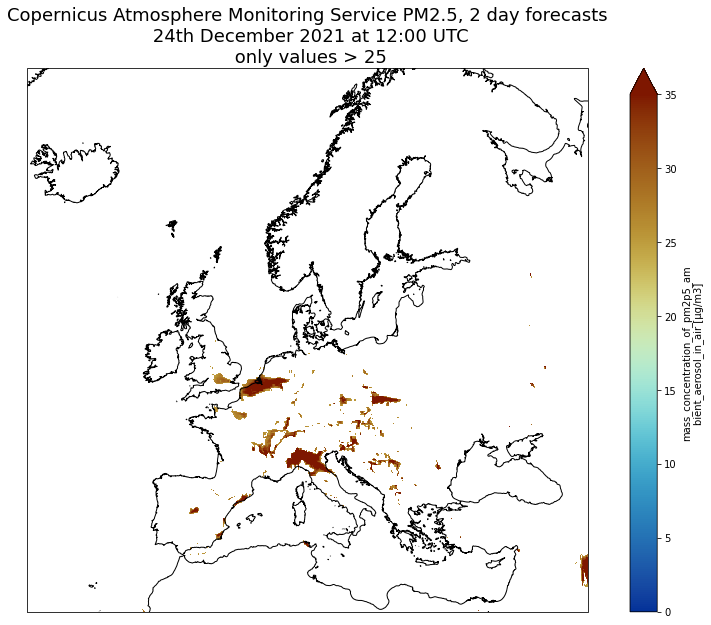

In [16]:
######################
# Plotting with mask #
######################

fig = plt.figure(1, figsize=[15,10])

# We're using cartopy to project our data.
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Mercator())
ax.coastlines(resolution='10m')

# We need to project our data to the new projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
dset.where(dset['pm2p5_conc'] > 25).isel(time=0)['pm2p5_conc'].plot(ax=ax,
                                                                     transform=ccrs.PlateCarree(),
                                                                     vmin = 0, vmax = 35,
                                                                     cmap=cmc.roma_r)
# One way to customize your title
plt.title("Copernicus Atmosphere Monitoring Service PM2.5, 2 day forecasts\n 24th December 2021 at 12:00 UTC\n only values > 25", fontsize=18)
plt.savefig("CAMS-PM2_5-fc-20211224-25.png")

<p><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABDgAAALQCAYAAAB118BaAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAgAElEQVR42uydBZwU9f/GD47Oo7tDQaR+CBYSAiISCoik
hNKpkpIqIB1KiCiNhIBFNyIS0hIqIF2CiJJifP/zfP3M/ufmZvd29/aW27vn
eb3esDs7O7s7dfN95hNhSqkwQgghhBBCCCGEkFCGK4EQQgghhBBCCCE0OAgh
hBBCCCGEEEJocBBCCCGEEEIIIYTQ4CCEEEIIIYQQQggNDq4EQgghhBBCCCGE
0OAghBBCCCGEEEIIocFBCCGEEEIIIYQQQoODEEIIIYQQQgghNDgIIYQQQggh
hBBCaHAQQgghhBBCCCGE0OAghBBCCCGEEEIIocFBCCGEEEIIIYQQGhyEEEII
IYQQQgghNDgIIYQQQgghhBBCaHAQQgghhBBCCCGE0OAghBBCCCGEEEIIDQ5C
CCGEEEIIIYQQGhyEEEIIIYQQQgghNDgIIYQQQgghhBBCaHAQQgghhBBCCCGE
BgchhBBCCCGEEEIIDQ5CCCGEEEIIIYQQGhyEEEIIIYQQQgghNDgIIYQQQggh
hBBCg4MQQkhsnWzDwmaF6VMu14Uf664y1p1BK263OLuNWsk2qsz1wWMxCN+j
k8EPBn/K98nP7UMIIYQGByEk2BelqQx6GGw1uGbwl8Flg5UyQEpCg+O+fsf8
MlgAy93Mk9Tgisxz6n4NquS7DjEonRC2m6H0BgMM9htcN7hpcNLgc4NXE7rB
IfuCsvCvnGPWGdR22qZCOTfLe80yj3W/y2XQz2CLwUWDWwaHDUYbZPJ1v3JD
wxishxQGbQ2+wPFpcMfgZ4MFBsXig8FhqIp8B+z7rQ2aG6ROgH9Psc8/z2sL
QgihwUEIuT8XY4UNfpQLUww6esnFaR95jumj4vHvhzGQIkQMDgyK/jbI4TBP
A8s8wTI4EsvALTzYA624sN0MpTP4SbbJQoNuBh1wvBjsM/g+Duw74bKNEt9n
g2OgDHhhuAw3+FWmN3UwF7APT3azvIPyut3g6CBRA8sMXhczYbqYtWcMsvto
cDR3IG8M1sODstytsi5eMRgmZg++d5V4YHAMl++QMYH/TcU/s3h9QQghNDgI
IcG/EEsp4cQYBNR3M88jCDsOgd+SyCBNPN1OpsGxWLZVb4d5VhgcMDgULIMj
2AOtuLaNDb0hv7W7m9dzx8LxmiTE9t0hThEZhv4n0w87mAufyMA/ucO5CA/m
OxgcDzmZGIiikXnH3M/IIESROEU1GSouBsfueGBwzIildRdS+z0NDkIIocFB
CLl/F2Jd5WJshI/ve95gm4Tj35TH9RzmQyj2ZoOyBhtlXgxcZhtkdZg/ucGb
Elp+V0L+vzIo4+5i3qCzwREZJAyxmAF4XNvgO1nWRQlXT+LNgAaDJYP3JIwc
y/5FIlqq23+fl6kbKeQ7IVrmtvy27/GdfDA4JkmI+1Hb6zkkiqCHO4PD0FPy
/X+XO+B7cRfZYb7N8rtySvj8bxLuv8agqKffaUmHsLPZ8p7UBu8anJD1eslg
jkE+b7exu+1mGSAjbWSqbLO7sn9WcDPonCHRBDdlHy1jrgMvtssH8nklfDh2
ihjMlf3xnqzr0fZQfstvySLf8bKkd5SW37TMzfLflfeV9pSiYigZjDJJrbkt
+8Vugy4OKTgjDY7L+r8i+0XBmBgc8tpVLNPhN1eT/1+yzT9FtmkTbwfzhtLK
vKt9jOBIJBE6iYNwHt6DberD/PUkQgj7wVmDt3Fecjjn4LcPNdhprmvZjiOQ
lmiZr4y8d6ibz0Oq4h/u0k1sKXTujvuSBp/JsXZXjufe1uivaPb7/L7uj97s
43KeGyvz/Gb5bn0cvpvHc7iH9aAsy3hO0qiuynn4jEQdFeU1CSGEBgchhMT8
wnqLXIAV9OE9neQ9Rw36yoXgUZnWzsHgOC4Xjh/Jez+SC9bDtotspBxskotW
zNNRln9CLibLOQx+98sF/iB8tsGzlovMXTIYeluWtVqmvxmdwSHLOC+mwQz5
3kjdWYqLaz8Njo9l2mwJp8egfQIGNz4aHPXk8WOW1/vKesvsZHAYqiO/5Zys
q9dk0IMXhzkYHFdku82TdTdKln/UUzoK9iMJu8eTaZbQ/uryehKDb+T1T2W9
jpdBxSVrxIOnbeyFwbFDjLEuBoNlYIOBVVrb4GefzD9TfudUme+YlwZHL3n/
WG/uMEvUAr7LaRkotZVtinX7LY4Bh9+yX/bdLnKsZZZInj/tqQCSMoQB0wFP
NTjkt2+S6TCuesrysc022swNHKc3DCbK+h8sg84rdlPKxwgO/I5/cJw5/ObM
sm3W2AaXOI+MQy0MHwyOYuZx56PB8Yf8/6cYgxViMc3rAvYJL+d/Qc6fP4sZ
3FuOy70O55wH5biajCgjOecslvevsS13t5wf7IP6XHLu+NDDd0otx/nXtvQe
87gvJybpdTk/wFhfa0bjuFn/Tvu91/ujD/t4TamZM07WTw+ZX5/DbN/N4znc
sh6UrAtXepO8Xkn2+f0S/fWKpCvh73AtXpMQQmhwEEJIzC+uMZj7w4f5M8id
bgx+09lqEZyQC88ImwGABz1syzELBfZ1mPaMQ52DM7a7gebg95o9EsRiBtyy
VvCXO7IY/F/0wuBY6fRdzAGJnwYHvuvKGKaoTBKT4JJ1wCFpRkvkcSSDQ2ow
nJbBRU7bAGCbXHAXsRkcyp4GYxnMPxPN73QbKi8D+ig1XeSuJh7M9WYbe2Fw
TLFNf1Gmt3cw6vq7MfBOeXk8nJH5MchaIoOxJ53u/EsK0Q9Wo8UyaLWvR/O3
zHNYjrm+OtmmPy3TX4/G4Ogt04ZHs39PlLvMpWzz5BMDYJYPBsfTMkjNLtFE
ptH1rhuDo6vsm3nktaZmtIyPBsdimbeql8faCBnsNpNItcFirCDaplosnIM7
y/d728t6Kmfk7n9mmxF12mEfSmY1zSzT35F5y1umtZNptWzz9rfP62t6j5xn
YJKUtJ2PzW3ztJf7vdf7ow/7ONJfEjnMM1f2vxy+nsPdpajIfqWczmeEEEKD
gxBCAnNxjXoO53yYv5FcoHVzeK2HvdOAGAC/O+TSJ5fpO21h2kdlcGPnY7lA
Tmkb/E7wYAbMd3jtfXktjbuLctwVlzucq7xYH74YHCdlEFIiJgaHPB8t6w/d
b56wDkwcDI7y8vo4N6lGeNDTZnD8Yy/gaamZ0CUGBsdKWXYGh9f2ySAlcXTb
2AuDo4hDKkqkOgzYvrJPpbHNm1TMoFNebpssMij+yRaWju1dwzLfwzJ9kMP+
nUWMw08cfotT3QbT5Nphmz5bflO2aAyOAzJYSxFNvZOrcjfb6ZjEHfgLPhgc
dm7ZI19sBkdGiezpL68himKXPPbK4LDUSJkWw/NkEfm+xwJ8/n1cfuMBbwrm
Wo7l0Q6v9fO0TmSfySDrtpLM29XyehoxqJfa9gGY2Qf9rV+Cwbx81jKH+Utb
z2ue9ntf90dv9nE3KS0ZZXlmJEYdX8/hHgyOwfJax/jcmYwQQmhwEELudwTH
7z7M38d+x83yWjX7nX8xAPa5WRYGtFcsz297aM9oksc2+O3kwQx4x8NgK58H
g6O8uzt/MTQ46lnC3k9IGk49b3L8HQyOYpZQ8I8lnSbcjcHxkszrVG+jsD3i
QQyOsx6+w+AYGBxHnZYtr82z3t30tI29MDjC3Qw6ZtqiXs542DdP+XE8ZZK6
L3PEJMOguLDNHPTEBoffksrNZ5l3g4tawuNv2NsIuzE4cKx9G81vyerF9/3H
B4Ojk5wjqkpNnpQe0kMyW6IvjskdehhjHb01OKS4KLbBcqcoBj+27Uzr+g7A
8v4nkSFINcnl5XsaeziW6zmtE1nvB2X92bffINu8H0qkinkMVvFURNfLY7KC
h/NxMvleK6Pb733dH73Zxy3GzwAxKP91WObLvp7DPRgcmSypRH+I4YvOS1l4
PUIIocFBCCH3oQaH1Hrw1eDY62ZZ+20Gxx25EK/mgRReDKJdRUY9DLbyezA4
KjjVpnDzG066MTiquRlsZBRTYrq818zVTuaLwSHTUGdiuwxqrWH+doOjsR8G
xylv1qsfBscPfhgcrXw1OLy5qyqFAgNqcNiWYdYiGWAzmsZ42L//581vkddL
WQtDGmohzxt5aXBsi+b7Z7O0jnZ7TPpbgyOa+heZLfURlNydv2Omv0VncBhq
I4PV1fbosRhsT/Pu++MBWFZZiS445U0dE8v7zOKqbTxEY1mPxdctNShg+NSS
7dbS6RwptTLw4A3LMXnX27avbo7JR/0xOGK6P3qzj8t878lyF8p6eVaW1dvf
c7inLiqSZlRZzg9b5ff/Zq2pRAghNDgIIcT/C+1u3kYr2GoZdPOwLKcUlWRe
pKgclM4S3kQ0xKbBYaaoeJNrvccpfNuSz94qmhSAkTLfi34YHO0sdxmLejA4
HvGQolLXTYpKTAyOSh62zQq5oI9weG2v7BOJg2RwrA5EioqHbVZHPnOqZVCr
rEVq/aln4GASnpJ9aZ0MlFJ4YXDsd2rDaq9TIMvbGcP1EBODI7EUmI2UcubJ
4DDUWvaxtb6kJ3jx3UwDrlAMl1NGIueQ6lDAx/f6lKIiRt1JhwiDmh7OkXul
i0iEmAQLffh+vqaolHSXohLT/dGbfVzmwzK3OEzv4O853Jc2sbIOkCq6gtck
hBAaHIQQEvOL9lRyV/2eU5tXSyh1J3kcIbUCjtk6UqSVaYgmSG8zODwVGe1n
mdbTPti238ELhsFhGYgrpzvU1oJ00p7wnjXEXMybA7buIuFuBvWN7cUvfTA4
0snv6Wab112RUVzIZ7cN5LeKmVMkgAbH/+yFLi2vtXVqSyx3Td0VGY0tg6Nz
AIqMPua0XeW1j611DmQw9L2YOAXdhMpn9NHgMI+jZjKo/8BhHieDo5eHu+rW
/XuS3bS0D15j0+CwmHBDbAUqG7q5u95K1sN6pxQY27yZpcuI9XyV2skUEVMC
3VSOBMjcOONL5yrbsXzWochoOjdFRndLCky4bT/b7OEc2dE8Ft2dA3015aTI
6F/W2hVyPCxwV2TUzfK93h992MexLr+2vZ5aIrz8OofL38EvnfY5N1EsSFfZ
zmsSQggNDkIICYzJUdhyMWe202stIbqrZAA8wmEAeETm6S2PvWkT29HSJhb1
GFLbBtxme76V8j0QpTBUUjE2BdHgKCDRJH9ZvjfCvRfZ2sQ+YWmZ210uqg9K
+oj14jhCQuwXSZpPG+lkcFXuMub01eDwMK+nNrFnpS1hD1mn7trExsTgSCkX
7MflLmhjs4OFbONvLCHhnaSWhNkmNk8QDY7ksq3ctYk96cW6niR1NhZbjhv8
v1GWe9i2j5eW7X1TQuPbi0kxWfa3Vj4aHFllH/3d3jo4GoMjmaWl52rZtzvJ
91hvmS+9RAH8K9urh8w3UsyaWbFtcLiZr6HDflfXEu7f1tqiU3jezfdqZds+
F2U/eF22zxTZPxHN8KSb/cobMyyfHO//SrpLcwdSe7GchpY2sf3knOOuTWxf
S4pPBzlXI7LhOw/nyHSyf5qFchMFwOAw28T+JufzLpa23fN9OIa93h992Mc/
kHkWyX4zQNbtd/6ewyWa6rbUrEJaUWOZ/pksd5j8besu7aGVWV+GEEJocBBC
SOAiOV6TwedvMmi6LJEMLexFG6Wt5bdy0XpLHj/vsNxTMmAuK4M+8yJ3rjUi
w3Z3sZtcBJrLxmBzvq0jRawaHDI9l1z8npEojcsyUHjaNl9LMYjuyYCgtxRS
tF4c42L7XXSBkAH0n7JuZtg7fsSGwWFJHVkn5sNdGSi86jBfjAwOmV5LBlx3
5fXNtruj78ogAuvsF9kf8nmbhhQIg0OmZZH3XJN9baMMcnd7c7deWpYOlTvU
F+T33JB1O8TaStk20P1Atv892R/2yDrJ44vBIfN9Jb/tJzevRzE4ZHoKaQF6
WLbTdTnuOjmcGwbKAPKO/L6jUoOgQhwyOIZEU4DylBcGR3bZF3+Q4+QvOf7R
neZBh++RVpbhTa2Hyl4Uyczv5fm6vhgVf4ppiYF2dYffEy4myHGZF1EeoyxF
iodEE3000Me/I56OP9SM+VyOtT9lH+rt8LclutozXu+P3uzjsrzRsm7uyt+b
vpaWyz6fw6XrzlpLQVJl2W5fonOZvP+K1MFqwOsQQggNDkIICQ3jxLHLCCFx
eJ8NFxNuNdcHiWZfMWvYVI1nv2uKRHzl5nYmhBBCg4MQQmhwkNDYP51alXa2
dpIgxMP+g3SHr+LZb0ovkQdfchsTQgihwUEIITQ4SOjsn+iMsUTy8zvL83/t
RXQJSQDHQglJR1wvxwDblhJCCKHBQQghNDhICO2fL6PtpKXuDHLjP3SqD0NI
PD8WzJokOAY6cJ0QQgihwUEIIYQQQgghhBBCg4MQQgghhBBCCCE0OAghhBBC
CCGEEEJocBBCCIkn+fSzwvSfEa6LGKxD/DOL64IQQgghhAYHIYTwRB4WVkla
SX5vcMPgisE2gyYGibx4/2IZaB9yeO15FAaMLYPDUCv5bBMU4fzVYK/BBwZP
0OAI2nfJYNDdYK3BWYM7Bj9KQdQ8bt6Ddp/vG5w3uGtw2KCjfb/zddmGchgM
M1gt+3OsridD+aUAZmkf3pPGYDBanUrRTOWu2LGhFAZtDb6Qosj4/T8bLDAo
5uN3TWzwmsEPss6xPscapHYz/wMGn0uR21sGWw2q+mpkYh1Fcwy3suzT3pJf
3pPEoI3BOtne9+Q8sMmgq0EqnusJIYTQ4CCEkIRhcOyQARYGmu1k8LNDBhDT
o3lvbYN/DG67MTjcmhgBNjgmGjSXjiMY0Ewz+EVem2+QjAZHrH+XmgZ/G6wx
6GPwisF42TeuGxS3zZ/MYJeYUuNkAL9MftOQGC67siznjMHKIBgcla2DdB9M
ETy4ZLBC1oM7g+NBmRfmwkD5/TBwrhn8aVDFh8+dKMtaJut8nHz2RpgftnkL
iVFw2aCfQSeDfTJ/tVgyOJrbmCavT3N4LbVBFoPtMg/OW/3F7HhdjBnsN4t5
rieEEEKDgxBCEk4ER7jDXd4tMmgo4eEONAaQ78ld5ftpcDR0eC2l3OHGk6k0
OGL8WeGe7oTLgL2Qw/Rq8j2X2KZ3kuldbdOXyh34fDFYdloMfOVx5jhqcCQ3
yG15ftODwZHJKToExo4YHLu9/MyHDP7FOrZN7yrfv6lDdNY/1s+W4/60RNAk
CrTB4cvr+HzLeaqrm/cXNXiT53pCCCE0OAghJGEbH+agp7GHO8EXDNI5GRwY
rLkJK29lG/ggTWGqRFzclfSYCjE1OCxRAifkLm5+hzSGqWLS3JPfgpSHrA7L
SSd3zI/Kd8Rd7W/s68bbZUo6g5IB6gSDixL+vwEpATJPfUm1uSPrt507g0MG
+jskouGSbJvUblJCRhocl4HxFTGBCrpZr9UkYuCE3LVv5ee+hPX1g23aN/Kb
U9imV5TP7u3vsm2v+2VwiEky1GCnwVVZX1hvI6xGj0OalPKUbuLh8276+h55
3x7sk26iPgrZpg2V71bRIQUG22KlZVpq2dc3OCx7oCyn/H02OOrIawt5ziaE
EEKDgxBCiKeByUgZPFRxeK283NltJM+dDI7qBl/LMqxh5QVtAx8MzL8y6CI1
CX6XQWvamBocNjOhvWVaXqn7cEUGrG3l9/5hcAxGgGXeCPw2WcanBt0kjWeO
wTw/l2l+p+8sdQLelkEm1mULMT0GyXrZJ/M/6WBwHJTB8XiJivhUpm+wphyI
uXFY6qxMlHSkwZJ+cMUWMWGu1/3ynr6y7Mf82I/Si9mzxRYhBDPmGzeRDdi3
PvVn2QE0OB4Us2iy1P/oLBENiIBYY5mvoJhf9jSK6rFtcMh6hIl22o35dco2
bY2s2+QO88NYvGJ5/pgsY6jDvNXltc732eCYLa9V5TmbEEIIDQ5CCCHuBiU5
pbYB7twntb2Ggn4HDFZZpvmdomIwxTb9RbshEUODo77MM9Yy7QuJGMltm7ec
RHsMsUybIu93iqBI7OcyTYPjK2uYv5gnSkyIvJbpWeRu+gKHQSx43k2dhca2
aYgGKWWbN5+YMLMc1uuPMS3QaGi0LKuNLeUCDxa5eQ/W47f+LDuABkcy+74v
09+xRy/4k6ISIIOjs3zu214aHCgkfNnNssxiwcnkeQN53tFNagweDL/PBsce
eS0jz9uEEEJocBBCCHEaUKSSsPy/7KHs8no/ufteMEAGRxGHegN4MCZABkc1
a8FUueuPu9gfyeDXzg/m4FrukKOQ4xFP9QZ8WabN4KhuW04ZmT7P4TMO2Gst
yLw/OMybw2ogSK2Cq3IH3+n7oTvJBYf12iOG+1JDiXhYbTNy8sjy57h5H1J8
9vuz7EAZHA6mXgZZViV7zYf7YXAYelxMrwP2NB8P74FhecbNa3PkN0TI8xbu
zCOJWsGDCffZ4DgmryXhuZsQQggNDkIIIWEOufhrZbDe3OH1whIF0N82PSYG
R7ibu88zYyOCQ9Jroms/eULmzSrPP4nme3i9TJvBYa+RYHbWeMfhM1DT5KTD
evrMzXdCW8/vbL/DE/84rNdaMdiXakndCqThpHNjYvkVweFp2YE0OCQt56Ac
D/b1Neh+GRyG/ifbF61ic/nwGXE5gqNlDCI4MvD8TQghhAYHIYQQu7mxWu6K
t3EzzxdSZ6K4mB0maDP7kzzO4YvB4eY1rwakPtbgaCfPK8jzuRLd4cQTMm82
s9VsNN/D62XavlN+NwbHEDcGxymH9bTMzXe6bjE4zN+xzsP3q+awXiv7uS/V
lOiCvU6Dz5jU4Ihu2QFMUXld3oeol1fFVMF6amnfRsE0OAyVlaiiU9a6KV5+
xv2owTHVLKgbTZpNI9bgIIQQQoODEEJIIMwNDCpXibnxqof59nsRCbDcMv/M
+2lw2Lqo5LNED/zrLnrAYSCOweThaObzepmxYHB4k6KSWO747/Ty+/ltcBh6
RqJ89nuqjWDpopLcNt3sotLH32UHyOBAYdeT1jorFoPFbnBUCobBISlMv0qb
1gJ+fEZ0XVSsdXXSeNFFpYIXn9lb5m3g5vVJ8no5PwyOut5EWBFCCCE0OAgh
JGGaG+2imbea1D6w84vUTWhoi1R4310RwNg2OAylxMBHXp9se2251Bh51OF9
qFeRxfJ8sizjFad5/VxmIA0OpyKjE2R6E4eBpDszKGtMDQ5DNcSAQF2ITNHM
29ley0KmL5X1WMDfZQfI4NgtKSDhtlocmx0Mjv/JtNdjy+CwmBtn7G193czv
1Cb2YTnOl9qmmy2hm9umfyoRH6VsxsdpidhK5MX3eEA+c5OZ/mJ5LafUhjnt
lKrmhcGB42qLvN7JzfsRVdaP53pCCCE0OAghJGEYHEss6QvNHSjpxTLc1eBo
JsteKEULG5sD1wAbHBPlu7aQtqofiOlipo3YO8HkkUHVPSkM2lkGeeNlUGsd
vKK45FEzIkLm6ybRKXP9XGYgDQ53bWI3O7SJ3SeDTWyPHjL/SKnNMCsmBod0
i7kjd/17OO1LDtE1u8XMGCtpIMucapD4umx5zwBhuCxzr2XaU178nr7yPtSk
6SCRCPul7ofd4EgpnWiOy7yNvUmbkH3V/E5/SsSI+byOZb58YgT8K619nY7T
1A77ximHzzRNx2WyzsfKNtjsEK1SWCKYLltaBe+TiKhnfNg3zG1wSKI/2sl+
96scL7W8OMbdFSHNIq2m8WS7FEFuLa2cTbNsIc/1hBBCaHAQQkjCMDhORZNy
MiQGBgdSI8ZIjY5/rAOVABscJn9LKsY+MTkej+bO/mi5E31XalZ8L2ZJcdu8
EQajZAB7TwZmW+11A7xdZoANjlkSWbNTTIDLMohN67CMVDLA/F7mvSHmzXRr
uoGfBker6NKXHN4TIZElF2SAf0QG/YkCsOyY7tPhMlg+Lt/ttOwDxZyWITU6
9sp2V17W0/B07M1yqPHhifxeGhz4XW9IC+A/pabOOERmuPmOxaT2znWzboq1
XosP+8dLEsVxXUyHS2LGlfNyv2rlYZ6kiLAyWC9G0F9yjG4UUyYlz/WEEEJo
cBBCCCGEEEIIIYQGByGEEEIIIYQQQggNDkIIIYQQQgghhBAaHIQQQgghhBBC
CCE0OAghhBBCCCGEEEKDgxBCCCGEEEIIIYQGByGEEJKw/9B6aB0bR7/vKW9a
pBJCCCGE0OAghBBCaHDQ4Iibv72swRiDvQa/Cd8ZdDJI6jD/LNm2TjTk/k8I
IYTQ4CCEEEJocNDguB+/faHBVYOPDDoadDFYLdtvjUEiNwZHcwfycv8nhBBC
aHAQQgghNDhocHjzXcsEeHlPGKRwmD5PtmFtJ4OD+zkhhBBCg4MQQgiJawPm
kgafGfxqcNfgiEFvg3A3d+7TG0w1+EXm32ZQwZPBYSibwT0Mmt18hykG/xrk
8/A9F8kyMju89oB83gTLNKRYrDU4L++7KIP2/N4YHLK8WQ7ztpLXKtumY72M
NDhu8KfBFYMFBgVt86XAejH40eC2wXWD7w1Ge7m98M9hg36xGTFhqI58Vl83
+0Eig3QGiXkcEUIIITQ4CCGEkPttbpQzuCWD7GEGXcUUwIvz3Qxsdxh8JakM
gw1+F3MkracIDkNLDO4YRDgM+FH3YW0037WWLLOLw2vD5LUylmk/G3xi0Meg
rcFE+a0XDDIF0uAQcwOmww35nHaybi6L0ZHPMu/H8v7ZBh0MOsOYMdjj5TZr
bbDe4B8xhbbI74sI8L7RUb5nazf7wR/yP8ycdXaTixBCCCE0OAghhJBgGhyI
vvgbURyWabgzv1gGr087DGyn2JbxokxvH43BUUOmdbK9v5lMbxTNdw2XKIxd
tun4vqcNDtqmp3ZYxtPyWb0DbHBMFPOmlG3efGIEzLJMu2awMgDbLofBawa7
5fsgmmapwQsGyWK47DRiEMH4ymh7bYTBONluz4uR85tEyVTjcUUIIYTQ4CCE
EEKCbW5klYHxMofXSstrkxwMjiK2eTPJ9DHRGByJZNC8x/b+jVLkMpkX33mM
LPdBy7QqMu0NN+9JLBEWmQUM2lQMF+cAACAASURBVJcGyuCQ33VVCnJmdgAR
MRcs7z8phkyJAG7LogZvGRyT7wYTZRpSg/xYFoykz2U5Tbx8TxGJjjnGY4sQ
QgihwUEIIYQE2+CoIIPYdxxeSyYpECsdDI5wN3UhZnoyOGT6mzK9tDwvKGkW
4738zg/L+4dbps2UKJTstnmrwrSQyAp7O9ONATQ4snpom2ryj+X99SzpHSek
e0m9QNSyQLSFJQUmSp0QL96fWFJn8ORNH987U95XlMcXIYQQQoODEEIICabB
8ag/BoebZSlbGoY7gyO7wV8G78vzoTLfQz58730GZyRyIpWYBStt8zwipscP
Bt0N6hpURwqFRFtsjoHB8arN4Mgmz9fJ8h1xMCLQVnW6RHRg4tf+pJbIOnjJ
4EtJE/lXltXOKU3Hw3KwPmf42/1GUlXw4HEeX4QQQggNDkIIISSupKiUdJei
EhODQ15bJikUqQ3Oomipj9+7hyy7qqV+x0u2ecbL9AL2uhxi3HhjcKBw6pcO
nz/cZnAklhoUO/3cDomk+wqevOjle5IYPGswVwqbKul+099TJ5povsPH7gwv
L5dhtpUtxOOLEEIIocFBCCGEBNvk2CYRFSVsg90F7oqMBsDgeFZemyv/v+qH
MfOXfJ81UlMjhZtaHfYWrWa3FW8Mju3SASWVZVoGKXRqLzI6SaY1dPedLfUt
Ihxeb2wv1Orh90+WFr14ckk6sJSLwT6QSNJk8GRYNPOmtq9rmV5Guqkc4XFF
CCGE0OAghBBC7ofBYbaJ/U3SRdD6dbWnNrEBMDgSi6GAJzfRscOP7/2lvBdp
KNMcXn9CIjWQovK6/K4vJB3kipcGRzNLW9zOEh1xSp47tYndJ+khCyXKpJNE
ZnxvrhuYG1ITZJFBX4M2iJiQtBlEteT04rffkva3zzrVQ/FjXZpm0H5Jm7Hz
mGXe0mLwTJX12h5ddaSDy22DJ3lcEUIIITQ4CCGEkPtlcpSSrhnX5C78UbRR
tQ+eA2VwyOsD5fWP/fzODSyFNJ9wMw9amO4RQ+CqGA953ZgZUabJ9F7S8cRc
L22c2sRaamEMFEPjjqSOHJU6GxUstU3eRatbSYH5Uz57hr07jYffnibA239z
NAVSrds1u0Te/CC1T/6SeiizrZ1tCCGEEEKDgxBCCEkopkpvGTw/xvVBCCGE
EEKDgxBCCAlFcyOJtEc9yPVBCCGEEEKDgxBCCAk1Y6OAQVOpP4EJjbleCCGE
EEJocBBCCCGhZnCYtStQ5PMtrhNCCCGEEBochBBCCCGEEEIIITQ4CCGEEEII
IYQQQoODEBJHeOaZZ9T//vc/vylbtqwqXry4fly0aFFXW8S8efPGaLmEEBIf
wTkT58jkyZOr1KlTq5w5c6qSJUuqXLly6emJEiVynUcLFy7sek+hQoVcy8C5
NlWqVCpZsmR6vmzZsqm0adPqZSVOnFiVKlVKPfDAA67lFClSxO33yZ07d6TP
TJ8+fcitz4iICJU5c2aVIkUKvU4yZcqkypQpE+NllyhRQhUsWFB/BvfduIux
366Oj9dntdKGqapp8JDXqoTQ4CCEeA0uDvzVqFGjXBfFIEmSJKpOnTpq+vTp
iqIoinLW4MGDXefNf//91zX9yJEj2vhIkyaNyp49u1q4cKH6448/XPMuXrxY
z/f777+rDBkyqKxZs2pDI0eOHKpWrVr6tfLly6ssWbKo9957z/W+n3/+2e13
GTdunGu+hx9+WH9eqArrsl69evq3XLhwQd25cydGy6tcubI2619++eVI24mK
WzK29+54N9AKC4vIliRM5Uiij81cvF4lhAYHISQWDQ5c6G3ZskXfMbReGK9d
u1bdu3ePV1sURVEe1L9/f33efPPNNyNN79Wrl45CgJGRP39+9ddff6klS5bo
eTt06KAjCdq0aaOft2rVynX+RcQC/j9+/Lg2T/Lly6cWLVqkTZD169d7/C44
Z1+6dEndvn075AfxVapUca0TRLHg/0GDBqn9+/eruXPnqps3b/q0vHbt2qmW
LVvqZWGb7du3jzsvDY6g8GTqMFUnXZhqlD5M/S8lozgIocFBCIk1g+PYsWOR
ojYQwtuxY0e1Zs0aXmVRFEVFI0QVmOdPRGtg4Az9+eefKjw8XKeZFCtWTEfI
nTt3TkdkYN6ZM2fq+dOlSxcp/QQpJfi/T58+ejl///23mjRpko7iwHRE1SUE
IUrFNDSmTZumDXgYSJhmrouaNWt6tawzZ86ol156STVo0ECbRXv37lXVq1fX
aUT9+vXjTkyDI7ajN7JlTxKmBmQNUwMN8iTVx3phXrMSQoODEBILBsf169dd
F9a4eMSFNi4mKYqiKPeCWbFr1y41Z84cff5ESkmlSpV0zYjhw4erGjVq6Dob
iEJ46qmn1MiRI3UEBub97rvv1M6dO9WDDz6oozVggJivmWzatCnS561bt84x
DSa+Cr8RkRr//POPNtxRV6Rz587698PseOyxx1z1oVB7aujQoWrKlCmOKTlj
xozRZohpJJkm1OnTp/Xz77//Xu3Zs0dHvVA0OAJN+ZRhqkH6MDUo2380jwhT
JVIwioMQGhyEkIAYHLiQQ7j0r7/+qi8ct23bptNRcJGH4qK42/j555/zCoui
KMqDMGC2GhIoFIr0kKRJk+pClhiQI0IDBkft2rUjzQtNnDhRFwtFvY2UKVOq
nj17qqVLl6onn3xSRxg4yRygwyBJKEKEDNaPue5QowT/w7TA/0888YSurYHH
MDpgfuBvGtKDYOBDiIBp3bq1+uWXX/R8jz/+uMtEQQQH/u4hehGf061bN3X2
7Fnu4DQ4AhW9kS9X0v8iN0yDAxRIpvfnkrxuJYQGByEkhgaHtVCdWeEf1ftR
oX7VqlVMTaEoiopGK1eujHQeNWtovPLKK7oDCgbYSLHAABuD6L59++p5nn76
aXX06FG9DMxfv359PR2RBN4IkSGYH8VKE4pgYOA3o0ONdX3DhMD/SD1B1AaK
kEK//fabrnOCFJSKFSuq8+fPq+7du2tDCjVQVq9erd/nVH8DBgiiaZACQ9Hg
CASlU4SpJhGRzQ3QJkOYKpqcURyE0OAghAQkRQXRG8jjxp3DqVOnqosXL+q2
fKwqT1EUFb0Q7WY3OAAiNxAJgALNVqE9LF7funWraxpSLGBUZMyY0afPRseV
hKLLly+7Ii7w9wmdvcx1jQgY/D9s2DDH98LosG+fjRs3qnnz5unHy5cvd3wf
0mIeeugh7uQ0OAIRvfFgPofoDZMHkoep1hlochBCg4MQEpAaHB9++KHO+UaR
NYRUI1ecBgdFUZR7oWsHOnHgvIlB8oABA/R5E51N8Hzs2LE64gDpf1aZKRSo
E2Gqbdu2OiUChS8pZyEKBuYGCrZCiNRA0dUrV67odEukpMAEcdI777yj1/kP
P/ygtxEiOTZs2BCpDTpM/ubNm6sDBw643vfRRx/p7UXR4IgpxZOHqZYZnM0N
0CGTK1UlEa9fCaHBQQjx0uDAhTZCe1999VVdRA15yQjTNS/ybt26pS/akedM
URRF/b9Gjx6tB9FI4Rs4cKDuhILzJlqN4n8UDkVE3Pbt23VaAyI1ECVgb9Fq
jyTA4BzvRYogno8YMYIrO8CCcdGsWbNI07BNzG2AyA+kCaFbDQwrdLdp2rSp
rsfhrgYKRYPDW9pmDFOFk7k3N0weThGmmkUwioMQGhyEEJ8iOFC8znpxjcr/
VatWjXLxR1EURf2nr7/+2pVaYlK3bl1d6BO1NNq0aaM7paRJk0ZHYmTPnl1H
w5nzvvHGG3o5ZpoFzsNbtmzRj7/66iv9v7V4JowSKnYFwx/r+oMPPnAVfkW9
DkSFrFixQpseZmFSigZHTIC5AZMjOoOjS6YwlTspozgIocFBCPE5RQV3DHEx
h2JruKhGO8OrV6/ySoqiKMomRFTYoy5QjBn/t2/fXr344ou6O8oLL7yg0qVL
p9uOovaGOW/u3Ll1CgqErlWY9vHHH7uWjwKXWbNm1QVJe/To4XqfNVWCCspA
WtOiRQs1efJkbUBRNDhiCtJSkJ4SnblhUi5lmGqUnlEchNDgIIR4NDjMHHDc
mfryyy91GC4u5JDTjDuFSFOhKIqi3A98zVob6KxhNTseeeQRV8tSs8glIj7M
rh5WzZkzR09HlypTXbt21dNglEAoHNqxY0e1Y8cOrvwgCH8fzc42ZmSO2X4W
TJs2Te3cuVMtWrRI1+6gaHB4PaAKC0uEwqKdMnlvcLyWOUzlSKL3vXBexxJC
g4MQ4mBwnDp1Sl+koebGtWvXIl2Ys5AoRVGUs06cOKEOHjyoxo8f7zpnDh48
WHfWsEd1jBs3Tv+fPn16tW3bNj1ozpcvn5727bffugxmc3509TCVJ08ePQ2D
aCr4mjBhgl7/DRs2dJn91m1brlw5/T+ic/D/vXv3XO9F17FZs2a5tjFFg8MK
WsKiNay35obJY6nCVL10jOIghAYHIcTR4Dh27FikizVU9Uce+KZNm3jlRFEU
5SDTGAboMGU+trZlNaM00NoVd/nNeZDyh/SS3bt3u6Yh/QQdOSpUqKAuXbqk
3w8TBMVK8XqBAgVoON8noSsLohmtMiNtALqMofB22bJl9XNThw4dcrWtzZQp
kzbCKBoc6v+jNxLnShqmumf23eDomcU4Z/wXxZGM17KE0OAghDikqAwZMkTn
gXfq1Em3yaMoiqKU+vHHH12Gg1W4I28OcFEXY/PmzboApSkMeIsXL65rGKFA
JWSN9ADJkiVzRQeYWNuYTpo0SU976qmndPcqKu4IhUexbVavXu2aljlzZl2Q
u0mTJtr0wrbHNHQmM7cva1nR4DBpkD5MVUjlu7lhUjl1mHo2LaM4CKHBQQiJ
BC7CzDuLSZIk4ZUSRVGUaMyYMfrc+Pzzz0d5DUawOWiFMWwXUkzQ1hX1OEyD
pF+/fq73oPYG/kfhUXyOmd6AFrKWgZsGqStU3FK3bt1Ujhw51N27d9WNGzci
mVZmN51SpUrporHDhw9XrVu31tNQTwVpTVahSw6Klq5fv55ROgnE4DCUBHU0
3sjiv8HR5/+jOFLzepYQGhyEEAGh0+aFGVoZUhRFUUobvzg/oiioWdzTqlu3
bumoN5w7w8PDo7xupqfgLv6FCxf0NBQGxbTy5curo0ePqp9++kkPdq0RHFOn
TtXzYqCLdMGVK1dyY8Rxoc6GdRu2bNnScT6kJTVv3lxHd9SpU0d300Gqi2lu
IeKnTJkyulgpTa34bXDUThumKqb239wwqZEmTFVNwygOQmhwEEJc4G4TWsJ+
/vnn6vr167xSoiiKMoTOJ0g5wYAUtTHswiDUHNDiTj4MiQ4dOugOVEgnQc0G
83V0poJQt+Obb75xHPjWqlVLVaxYUU2ZMoUrPwSFQqLm9jZb/rrT2bNn9b5V
pEiRSMYIaq4gmgM1OwoVKqR69+6tzRMqfhkchlIg8qJ3lpgbHG9mdUVxRPCa
lhAaHIQQg1SpUvHqiKIoSoTaGYiiQPQGjIqSJUuqLVu2RJkPr7Vq1UoPTHHX
/ZNPPnENVCMiInTdhbRp0+rnzzzzDFdsPBdSVVAoFtt769atXr3n9OnTuqMO
Upc2btwY6TVM79y5szbPEOlDxR+DA1EXT6eJublhUiddmHoyNaM4CKHBQQjR
5M2bl1dHFEVRIqQOIF1vw4YNql27dqpGjRqR2n5CiHZLkyaNK91k9uzZKnv2
7GrBggX6rjteQ3FJRIEgBcFaV4OKX0L9DWx/RENif3j77bcDunyYHFg2arWY
LWqp0DU4DKVFxEW/rIEzOAYYy8rxXxRHNl7XEkKDgxB2UZEuKhRFUQldqIuB
O+YwNGBKZM2a1TF1z2zvag5qwfz58yM9R90N1lFIEINrF126dFHXrl0L+Gfc
vn1bRxShcwsiRajQNTjMzieBMjdM0JGlfEpGcRBCg4MQQoODoqgErXnz5qlV
q1bpxy1atFCJEydWR44cUWXLllUjRoxwzYc79aZQb2PixInq448/jtIVJUWK
FGrPnj1csQlAMLCwzWfMmBHrxgPSpNCCNkuWLLpmFhV6BoehTNmThKn+WQNv
cAw0lpkrqT4X5fPie6Qw2GVwwOCwwVsyfYjBeYP9Qi1eJxMaHIQQGhwURVEh
ojVr1uhWrgULFtQFHq134+vXr6+WL1+u50MNBHMaCoai/oZpdAwdOlQtXLhQ
d8RA3Y0wfYlEJQShXgu2965du4L2mTt27FBILUVBW+yzVOgYHI+lClPPpwu8
uWHSJCJMlU4RfRSHoUQGaeRxUoOdBo+KwdGT18aEBgchhAYHRVFUiAntV6tV
q6YKFy6sB6ljxozR/ydPnly3fy1WrJiO4oB+/PFHHZmBYqGYBx1UTK1bt069
//77uq0s7rDj9SpVqjh2S6Hil2BwlStXTv3xxx9B/dwrV64o/O0uUaKEOnHi
BA2OEDA4DOXMmeS/ehmxZXAgiiPff1EcD/rwvVIZ7DWoQIOD0ODgSiCEBgdF
UVSIqm7dutqMSJkyZaTIDXSW6tWrl9q7d682P6Bhw4bpoqGozwGjw+ySgTvo
pkFiUqBAAddjpLpQVGyZK5MmTdKdW06ePEmDI65fa6UMU43Sx565YdIyQ5gq
ltyrKI5wSUO5aTBS/X+KyimDgwYzDDLwOpnQ4CCE0OCgKIqKwzp27Jiuu/HZ
Z59FMibMFBT8j9QURGCg/euyZcsizYOUFAwuIdTsKFSokOu1DBky6P+7deum
o0MOHjzIFU7FqhA9hHbEge7eQoMjsGQJ/y/CIrYNDpD9v44qnbBeLLRzY3RE
GGwyKIEuLGJ8JDYYBpOD18mEBgchhAYHRVFUHBXSSEwz4uWXX45icJg1NKZP
n67GjRvnagPbt29fXfvAnA+CeYHoj/DwcP2/PRJk8eLFXOFUUIQaMWhNPHLk
SBoccRS0cQ2GuQFy/5emksLrQV1Y2GB7aoqh/AaHeJ1MaHAQQmhwUBRFxd2B
kCMVK1bU/+NOeM6cOXX3FPO1iIgI/T/SAFC3I2nSpHpZjz/+uCpVqpQu+IhI
D8zTuHFjHeFhNUIoKhhCnZj8+fOrfv36qZ9//pkGR1wzOJKGqcE5EwWFPNEY
HIayIHJDHqc02GpQ2yCHZZ7XDBbyOpnQ4CCE0OCgKIqKg0JNDXcGx2OPPaaG
Dx8eaRoKjaZLl04/btKkiTp//ry6fPmyfn716lXVtGlTPaCsWbOmbt1pvg8F
SK9fv64OHDjAlU4F3eTAfok6MWhhTIODBocbg6OkwT6ptXHIYJBMn2vwvUz/
0mp4EEKDgxBCg4OiKCoOadCgQdqA2Lx5cxSDA21eO3bsqCM4Vq1apetu9O7d
2/W6aVb8+uuv+jleQ9HRF154QT/PmjVrlJoeZp0Oigq2Dh06pPdJa7efuC6k
hMEwLF26tFqwYIFPLXBDxeAYkidxUMiTzLcUFUIIDQ5CaHBQFEWF4KDPNB8G
Dhyo/+/atavav3+/qlGjhqpQoYLr9bZt2+r/ixQpov83W3GuXbtWd1lBMdJz
587paa+88ooeTGJAduHCBV0PASYJRd1PwZSDCffdd9+FxPd97bXXdNoXjh2k
fOF4xDFLg4MGByE0OAghNDgoiqJsQkTF7NmzVc+ePSPV1oBh0ahRo0jmxvjx
4/XjS5cu6ffBuEDh0YcffliH/7M7ChUKmjt3rjYL7t27F+e/67Vr17Sp0bJl
S3Xnzh01efJklTFjRh3Zgc5HmIa2y4iuQoQHivguWbJEffHFF6FhcCQLU2/l
Dw8KeZLT4CCEBgchNDgoiqIShCZMmKDra2CAlDx5clcqSvHixdU777yjPv30
UzVgwAA97e+//1bPP/+8fowuKZkyZdKP33jjDb0sDLiOHz/uGqChi0XVqlW5
kqk4IUQVoYDuxIkTQyJl6ubNm+rZZ59Vzz33nLp165Y2NmrXrq3y5cunuxWh
JTOew5Bs0KCBThHDvDQ4aHAQQoODEEKDg6KoBDvoM7uePPnkk7rjRLFixSLV
50CYPF576aWXtLGBO8nmawilRxFRpLagNSembdq0ST3wwAP6MUwQGCMUFReE
zj85cuRQ3bt396muxf0Sok1atGihC/+imK/1uHWnUDE43i6YJCjQ4CCEBgch
NDgoiqISiNavX69w3qtbt66qUqWKY1eV999/3/U4V65cKnXq1Kp9+/aulBZE
fiDFpXr16q75HnnkkUjLgAFCUXFBhw8f1vVkYHKEigmJVDIYj2fOnIl2fhoc
NDgIocFBCKHBQVFUghJavKKFppOhYW3zOnXq1EivlS1b1lVwNG/evK7pMEiQ
ojJt2jRVrVo1x+UiDYai4oLOnj2rzblhw4bp6KSTJ0/G+e88duxYlSdPnmiL
jYaCwZEzeZh6p0iSoJA3BQ0OQmhwEEKDg6IoKl7phx9+0IYG7lpPmTJFffTR
R9p0QCtYJzMCJEmSRHdFMVNROnfu7Gq5iWkffvih+uWXX9Tt27dVzpw59TSk
r+D/9957z/XeK1euqOXLl6vff/+dG4KKM7Lu66hrga5AcT1tZf78+fr427t3
Lw0OGhyE0OAghNDgoCgqYWnFihWqdevWuhZGsmTJopgY/fv3j2Ro4H90R0G3
BvO19OnTu4oyYoBlfT/uKuM1FCRFsVHUCTBfO3r0KDcAFWe1fft23RrZanKM
GDEizn/vOXPm6EiqUDc4hj6QNCjkTZGIBgchNDgIocFBURQV6tq6daseuKGT
Sfny5VXz5s0jmRMdOnRQffv2jWJ6fPfdd65l3LhxQ3dwgIYOHeoqHmoF0RlW
ofMKpmfIkIEbgYrzQvvjmTNnqo8//lh3J1m3bl2c/r6IMoEZiVaxNDhocBBC
g4MQQoODoqgEoeHDh2ujYcuWLbrTye7du1W5cuW08YDpzZo1U+nSpVODBg3S
JsiCBQt0bQ4nnTp1ym0qyxNPPBFlsIXpBQoU4EagQkroAJQ5c2adrmIVupnE
FV24cEGngrlTSBgcKRKpYcWTBYW8KWlwEEKDgxAaHBRFUSErRF20adPGZUDA
4DAfw9SwPobp4U6I3ECtDtwt7tWrl+t9SEVB60qryVGnTp1I782fP78aP348
NwYVcvr666+1ydGvXz+dfoWIJuzjKKAbF4QWzTAVaXDQ4CCEBgchhAYHRVHx
Vn/99Zdu3zpr1izHSIsNGzbo+XCX+uLFix6X5RSxgUKiMC5gZli7qgwYMECV
KFEi0vvNmh0UFYrC8YFWx4iCQvQG6tBgf1+9evV9/25Ip2ncuHHIGxzDSyQL
CnlT0eAghAYHITQ4KIqiQk7mnWaTRIkSuR4jAgMGiDdCOgtSVuxFSRs2bKhK
ly6tVq1aFcX88HbZFBUqOnfunG7LWqVKFV2AFPt5z5497/v36t27t+u427dv
Hw0OGhyE0OAghNDgoCgq/qlUqVKRTIeaNWvqwdD58+e9XgYGTMmTJ3ctI3Hi
xFHMjAYNGrgeo3UsPoOi4qNu3rypvvjiC9W2bVv13HPP6fo1iIC6n6pUqZI+
9rp06eIqABxyBkfKROrdksmDQj4aHITQ4CCEBgdFUVRoyZpSkiJFCp2j74ux
AU2aNMm1jGzZsqmSJUvqx9ZIDky3mh1PP/00Vz6VYLRkyRIdzXHlypX79h1w
3OHY9PA6DQ4aHITQ4CCE0OCgKCp0NXXqVJfpgBoc/ujxxx+PZF6MHTtW/x8R
EaH/z507t/r777+jpK1QVEISug7B6JszZ859+Xx0PsKxd+bMGRocNDgIocFB
CKHBQVFU/FPlypV15Eb16tX9ev/BgwfdtoFFJMjgwYPVl19+qec1DQ9w5MgR
rnwqwWnixIl6/8dxE0zheMPnVqhQQZuNoWpw5EqZSI0onSIo5EtNg4MQGhyE
0OCgKIoKGaEtLAY9qA+AVBVf9csvv7g1N15++WX1zz//RJofdQnM17dv384N
QCU4ffLJJ3r//+abb9T8+fPVb7/9FpTP3bNnj+5k5M7coMFBg4MQGhyEEBoc
FEWFtFAPAIU/f/75Z7/eP2/ePJdh0bFjRx36nj17dv3c7B5hH1BhQIfpaKNJ
UQlNKO6ZN29eVaZMGX0cDBw4MCifi/bLWbNmdZueEkoGx6iyKYICDQ5CaHAQ
QoODoigqAen333+PFLWROnXqKJEccaE9JkXFJe3atUu3kf3ggw+0Idi0aVM1
Y8aMWP3Mn376ydFwpMFBg4MQGhyEEBocFEVRhg4cOODqvpIyZUq36SonT57k
yqIoByF1ZNSoUbr46Pfffx9rn9O/f399LG7bti20DY5UidTocimDQr7UiWlw
EEKDgxAaHBRFUQlFffr00YMmdGcYPXq0viuN50899ZSqXbu2+vzzz9WIESPU
3bt3ubIoyoM6deqkJkyYEGvLr1SpksqZM6e6du0aDQ4aHITQ4CCE0OCgKIqy
C+Huhw8f1qD1pTVqA7U2UGR037596urVq1xZFOVB6GI0d+7cWFv+I4884jF6
I5QMjjHlUwWF/GlocBBCg4MQGhwURVEJyuAYOXJkJGPDjOIYN26ca1qLFi24
sijKjRDhlDhxYo/RFTERuh2lT59edzFyJ5grNDhocBBCg4MQQoODoqgEq3ff
fVcbGBEREY61N1B09LvvvlN//fUXVxZFeRCOlfPnz8fKst9//33VrFkzt6/D
WMmcOXNIGBy5UydWYx9NHRRocBBCg4MQGhwURVHxXCtXrlSLFi3Sd527desW
xdRArr/5+NKlS1xhFOWF0MK1XLlyHruc+KsKFSqoVatWuX19ypQp6qWXXqLB
QYODEBochBAaHBRFJRyhaKhpXlStWjWSsVGmTBlVvHhxdefOHdW+fXs97cKF
C1xpFOWF/v33X90yNtCdVH7++WeVJUsWj1FUffv2VW+99VbIGBzjHk8dFPKn
pcFBCA0OQmhwUBRFxVshJaVQoUJqzZo12sBYunSpqlu3bpRB2alTp/TrsdkV
gqLim1C/BsdOIDV27Fj16quvepwHkVhSS4cGBw0OQmhwo71l2wAAIABJREFU
EEJocFAUlXCEzij16tVTvXr10t1RcGf4+PHjqmHDhqpp06Z6HtyNNiM7fv/9
d640ivJCiLQIdNQTjsv58+d7nGf16tUqf/78IWNwjH8yTVCgwUEIDQ5CaHBQ
FEXFcw0ZMkQbFzVr1nQsLDp48GC1fv16HfKOugIsMEpR0QtGYHh4uDp37pz6
9ddfA7ZctIf99ttvo51v6tSpNDhocBBCg4MQQoODoqiEpYEDB+oIDidzw4mf
fvqJK42iohEio+rXr6+PmYcffjhgy8W1yebNm72aNyQMjjSJ1YSn0gaFAulo
cBBCg4MQGhwURVHxUrirXKtWLVWtWrVIBgY6P+B/dGGoU6eOa3qqVKn0/zNm
zODKS8A6efKk3g+QvtS7d2/VoEEDbZDt2bMn1tqihrK++uorXecmUPrggw9U
2rRpVenSpVWLFi3Ub7/9RoODBgchNDgIITQ4KIpKuLpy5UqUyIzXX39dpUyZ
Uj355JP6OSI7oMmTJ+vnCIvHXWnU46ASrlCnxSmy58EHH1QZMmRQQ4cOVRMn
TtR1XCilLl++rBInTqxTVQIlFC7F8di5c2dVpEgRbTQ5HZchY3BUThcUCqQL
p8FBCA0OQmhwUBRFxTcNHz48ygA1ffr06uLFi+revXtq7dq1ateuXXre7du3
69dHjx7NFUdp/f333zoC6NatW67958cff9QtTM3niDSglDYiYP7EhjGIZRYo
UECvb5iPNDhocBBCg4MQQoODoqgEpbt376ouXbq4BqLo9IA0AzzeuXOn43uu
X7+u30dRdh0+fFj16NFDZcuWTUcG1ahRQ3322WdcMSIYPehoEls6dOiQLv4L
IzIkDY60idXEqumDQoH0NDgIocFBCA0OiqKoeCEMPufMmRMlcmPJkiX6dYS9
U5Q/euedd/S+tG7dOh0dhI487Lbzn5DyVbt27Vj9jAkTJqi6devS4KDBQQgN
DkIIDQ6KouK/rKkDGTNm1P+vXLlSXbt2jSuHirHMfQtRPkhxQuHarl27csUY
atiwoZo5c2asfsadO3f0+j99+nRIGhzvVUsfFGhwEEKDgxAaHBRFUfFAKHBY
qlQplTdvXn1nncYGFUg1b95cD7CnTJmin6OzR/HixdWYMWMS9HpBahdq26DQ
aGzKrIXy559/0uCgwUEIDQ5CCA0OiqLit3BnffDgwXoQhE4XSClgTQ0qkDpy
5IjetxYuXKhNNLSTLVq0qK7PgaKkZpQHurAkFMHwQX2b2Na0adNUpkyZokwP
BYMjT9pw9X6NiKBQIIIGByE0OAihwUFRFBXyWrx4cZTaGytWrOCKoQKqDz/8
UA+0U6dOrc6ePas7rVSpUkU99dRTrv3u0Ucf1eYaTI/nn39e/f777/FyXXz/
/fe6+OeOHTuinfebb75RxYoVU+3bt/erdkny5Ml1yhkNDhochNDgIITQ4KAo
Kt7qo48+0oMfFDq0mhuI5qCo2JC5j6Gg7bFjx9Tt27ddKSygZMmSqly5cmr6
9On6OSI/4ptu3rypChcurObOnevV/OPHj9frBSxfvtznz0NXpDfeeCM0DY50
4WrSMxmCQkEaHITQ4CCEBgdFUVRoCnfIkSJgj9zo06ePrpFAUbGhGzdu6MF2
gQIF9P6WL18+denSJfXTTz+pf/75J0o0UenSpVWjRo206YbXQ134DS+//LJq
1qyZ1+9BDQ2018X68KduybZt2/R7YRrR4KDBQQgNDkIIDQ6KouKdcBfZbm4U
KVJE/fHHH1w5VKzp33//VWvXrlWjR4927Xf169fX061CZMeyZcvUxIkTXfPB
HEGay+effx6yv//dd99VZcqU8fk4gzGCtDF/CgC3aNFCp7ggLSYUDY7Jz2YM
CgUjktDgIIQGByE0OOKjkPO8detWXolTVDw3OBDybjU4cuTIoc6fP8+VQ8Wa
Ll68GMVYA5MmTXK7n6JWBepQ1KtXT1WsWFEbcW+//XbI/XZEqeC3oC1zMIVI
rcOHD0eZToODBgchNDgIIQnC4Dh69Ki+4PS2iwKKxT3wwAOqatWqKmfOnPq9
hQoV0hdzFEXFPY0aNcpxkPnwww9z5VCxrnbt2jnuf9u3b3ecf8SIESpVqlSq
U6dO+u8STJIHH3xQDRs2LGR+MyJUBg4cqGrWrOn1ezp27KhNSKTnXLlyxa/P
ReRHxowZdRpQqBocU57LGBQKZqDBQQgNDkJocPglhN4iBxnV4k+dOqUv0nAh
s2nTpjhzMeZLrjPCX60Xqd9++6166KGH9F02iqLilvbv369atWoV6ZhF6849
e/bo1AGKim3BoOjVq5duXwrTIm/evK59EX8fvdGFCxe0sd6yZUv9dzSuC8VB
UXfEW+N/9+7dKk+ePPq6AN1T0H1myJAh6s8///Tpc3v37q271NhTgGhw0OAg
hAYHISQgBgfCRJ3uXJmEombMmKELxeHCy7z4evHFF/XvwQXZvXv3HN+HHGSn
iy6KomJP5rmmSZMmrsdLly7liqHui2CmI3LD3BdhmHsrtJnt3r27jnLAMlA4
N66aipkzZ1ZffPGF1+9BIVJErpjat2+fXj9vvfWWGjp0qGrYsKFO10mbNq3+
G+yky5cvq/Tp06urV6+6OxfEfYMjfbiaWidTUKDBQQgNDkJocPihVatW6YuU
WrVqqTfffFOVKFFCFSxYUJ04cULfrXn99ddD7gJ15cqVUcwZXFjhAg05/bg7
bBVMDdx1Cw8P1xdneC/u6FEUFbuCAWkOJNEaFkYkujmcPHkyyrwwJr1NU6Oo
mAhRDeZ+uWXLFp/ei78n7733nk6LTJQokXrppZe0YYeojvttoOP4wd9BpIjM
nz/f6/ehGGiWLFkiFRQ1i63id3br1k0tWLBArV+/Xn322WeqbNmyjst55513
dAteD2YnDQ4aHITQ4CCExMzggKmBi5Tq1au7LuiSJEmiW8D9+OOP+vmxY8dC
6uIULezSpUunQ9ztF56ojv/+++9Hmv7pp59qcwN33vB769at63VYMkVR/gvH
GQaAbdu2dQ2WzPPQxx9/rI9lFBnGwAmDRaSyUFRsCsVFrVGMTsUwfflbhC4l
zz33nMqWLZuOmkDNC7Se/frrr3VaC8y8YBgfiEx59tln9d9AfC9fDBtcD8DQ
sE93Sh2FaYnUF0RRjh8/PtJrxYsXVzt37gxpgyNv+nD1Qd3MQYEGByE0OAih
weGH/vrrLzV37lx9AYYiadYLu6effjpSu0Z3YaVxUf3799c51VYdP35c/xaz
IwvuNOFusfkbMdDCBSdFUcERjlEzzL1NmzYe0+XA6tWrudKoWBWiFSZMmKAN
tscff1xFRETofRP73unTp2O0bHQEQqRDpUqVVIUKFVSGDBl0ZAQiB5HigTa0
d+7cCejvgRGxZMkSVb58eVWlShX9N98XoS4Jali5S+10En7DgQMHdLeUTz75
RE/77bffVJo0aTx+Pg0OGhyE0OAghPhtcGzYsCFSa7gUKVJokwMF1szBBO4y
Yb4xY8bo5+XKlVPXr1+PlYtKhM6i6Nkvv/zi0/v27t2rC6J+9dVXrmn4juie
Yo/UgHD3DL+lUaNG+m4W3osipE888YSaNWsWr+4pKghCqDvONThv4XgcOXKk
vkvsydyYOXMmVxwVdMHUwP4HsyN16tQBb1uMKAikRE6fPl0bEEgfmTp1aozT
sfB+/P3GjQp0I4J54mtNENQRgQGDaE5fhZpWSDl77bXX9PMdO3ao6K5TQsXg
mPZ85qBQKCMNDkJocBBCg8Mrod4ELtiyZs2qoxZwwda4cWMd/o0oDUQ6WI0M
XIChLRzqV6A+R6D14YcfRhrImDnPmI7vCOMF7ezQLtYqtJlLliyZrhuCi0Jc
jCG/11zON998E+WzEBK/Zs0alTRpUj3Pxo0b1cGDB1XhwoUjmSQURcWOcCfY
PEZhKk6ePFlHU1mLjaJLg/WcwBbP1P2U+fcQkYyPPPJIlDpOgRT+HiHCA2aH
v9EciMpEmiaiRGD0+2OWoA5X9uzZ1aJFi3x+L+qNmPWszNSzefPmabOFBgcN
DkJocBBCAmpw4C6OedGBO0ZmxAaKjbZu3VqH46JlLIwOa4QHdOPGDT0vLsCQ
F+9JuFOEHOPatWvr9zj1vMdnbN68Wb8+atQoXZgMhgae44IMxgZyeBEejNcQ
lYHK7aamTJmi02qglClTRhoQoWiqGRrrJJg6uNgy1weqwFMUFfvCucA8TkuX
Lq2Li8I8xZ1iMwUFefp4HaHxVatW1d0pKOp+C3+X8HelWLFimtgqeou/n7gR
kStXLm3a4zPdpYiYf2vR4aRPnz76mEKB8EOHDvn9+YjYgLnx9ttv+9SiHUJN
EUSE4vjF3//vvvtO9evXT38npOR4OpZDwuCISKKm1c8SFGhwEEKDgxAaHNEI
d1ASJ06sLzySJ0+uxo4dq/NizcEGQnFRdBRmAp5Xq1bN6QJEg0rsnmSmtaAL
CwqL4WLNKty1Rbs4c3lmRXdcqOH5gAEDVJ06dbQBYd71RQV2DIRgjCCvGKYG
8qWhdevW6WKhMD0ee+wx/bu80ZEjR1y/FREfCKlFygpFUbEje+qJ2W2icuXK
rnkQ3o47z2zbTMVFoUgn9t1XX301Vj8Hf98++ugjnR6DaEUU74Qxj6K8w4cP
1+Y/bgogBaVDhw460hE1pnypl2HVzZs3dcRG/vz5HVM8vRGiPbFu0DLWNEdg
wuA3RNcCmgYHDQ5CaHAQQnwyOBAR0aNHD9fAAmGwEKrEWwcciOTA/7jzYtcr
r7zimq9UqVJujQRc+OFuEoRQV9ydRQSIqRdeeEEXL8OFDz7fmhIDUwP1PpAO
07lz50jLRUoNLuQ++OADnQ8diAEQjB4MshC9ggrzTsYORVGBGxgChPojjB3m
htk1haJCRYhyQGokaksEQ+hOglQtRDmhRgcK9CLCEX9fYyLUw0EEJ25u4KbD
M88847qx4I9QR8s8xrdt2+aajtQzTEPdrFA3OD5skDUoFMqUlAYHITQ4CKHB
4UmjR4/WRb7Onj2rw14RIQEhasG8IEErO/Nxly5doiwDqSnIDTbncTJBIBQE
RF0PUwhDN6M00KkENTBQ2d1JGOig2rrZstaaDmOGrgPkGAdaV65c0d8N/1MU
FVjB0Fy7dq1OO7FHcuBOdWwVMaao2BD+RuJvaagK7ZczZcqkj0cUA7Wnpfor
3HjAMb1p0ybXNLMl/Q8//ECDgwYHITQ4CCExNzjQmg0RHOZgAikdpnBXCNEW
mI5Co9ZBh5Nwh8d8HakoToLxgagIM0QVBUORs4z8W6SYwEiBWeHuThWKpD3w
wAOudrXWSA1Mw50maz2OQAlFSO2mCkVRgROKAeMYRsQUUuUGDRrkOp+gJhDl
nXCOQu0iRMX4I/xNmDRpEgu4xkAoTm3WsArF/Qcpn+i0EhsyU0lN4aYB1pU9
KjMUDY7pL2YLCjQ4CKHBQQgNDg86c+aMLvyFOhZWAwNRHaZgOCCqIjqDw1TT
pk11lXZ3d3BQIBCDGQgX4UhLwXdAlxbk6fbs2dPj8tHhxPwe1rs+uMsU07Bc
d9+5b9++ukApRVGxIxRMxDGdN29efU4wB0PenHMopXbv3q1rL2BQjfWFQssw
K6xCpEx06Xso/Ij34y4+5Z8OHDigW4+j7lOoCX/rkI4aTCElDXVEaHDQ4CCE
BgchxG+Dw7xLB/MCAwpEbqCQGIqXoZCY2bHEFAp1Pvvss6p8+fIeL3xx8Vyv
Xj1dv8KdUKwUYedWIUIEpgo+xxzcePoMLAPRGmZ6S2wKpgvuKF+8eFG350N4
ra8V5CmKil5oI2l2WELKnGnCorYO5VlmEWhEmqHTBR6jFgPUoEED1zSYyWbx
VhRQRsogphctWlSf2/AYbU8p/4WW5l27dtXrMpTSq1D3Cqkp6CYWTKGDkqfP
DAmDI0MS9dFL2YICDQ5CaHAQQoPDQbt27dIXX2ixikKfePzUU0/pAqPmHVMU
S/P2zqHZ8cQ0Rzx1K0EVdkR5WIXaHObnovZHdOrYsaOeFxfosSmkppjfCyaM
WYsEFekpigqsYKpiII4B+Llz57hCvJQZYWe20zaLtaKjlLWWEkBBZkQX4K65
vd6JCc7plP8y0yij+1sYl4Tox9y5c+s00LgmGhw0OAihwUEIidbgwN0SVHpH
C1jkuiNCwXqBi/Zy3nYiQTSI+T5EX+B/VEy335k1ByyI0rB3JEHeLy7I8d6J
EydG+5mYB/O6q9cRKCGkGzUB0JkFES8ohIjPRTQHRVH+67PPPtPdm8xaD9aW
kWanJcpZR48e1evp8uXL+jkiXPAcUXZI+0PEhnlORhtR/I9z/sGDB12FHgG2
AWobISIN0zEPikW//fbbXMkxEOpJmOs4upTLuKA1a9bomx1opx4XFQoGR74M
SdTHjbMHhcKZaXAQQoODEBockQRTAwYELmhwATZr1iwdBm41ODDNFC58MT/S
M+7du+d4AWIWIwX2O0Bo/4bpmTNn1s9x5xCFTWMifA8sE5EcwRQGAubvXLRo
Ea/kKcrPATrOBziOzHS2GTNm6No95vG1cOFCrig3skaWoeXm119/HalWCV7H
YBXPGzVqpGtCWAWjds6cOY7LhuGE99WoUUONHDkyIC23E5rGjRvn2ofx9zau
Ctv6+eef15EbsVVUlAYHDQ5CaHAQQmLV4MAdP7RazZAhQyRDY8+ePSpfvnz6
cfv27fUFMmpyvPXWW5Hmq1u3rl4Oup5MmzbNtVzk0KItntnG1YxwQAoJwqY7
dOigc79R6wOvL1++PMYXPTBSYJ4EU+j6Yl0fiDpBcbRr167xqp6ivBTOHdZz
D4xDtKdu166dq3sK2lNSngen9tQSROUhegDRZtCNGzci1VLyVvXr19e1hwoW
LKjCw8O1iUJ5L/ztRFtxfzvZBEPffvutTk9Fx7O43h0sVAyOGU1zBAUaHITQ
4CCEBodFuCOHyu7Hjh1TqVKlcpkWGKAjSgPhyhBqTaD4qFN+Ngb0Tp0NrKHP
MAIghDvPmzdPTZ8+3esuLHFVMIdMUwPCxavZsQCgCwRFUdELA+8333xTp6hA
b7zxRqTzA1PAohfO2aiVgTbb9nM0OlUFQkg/hMmNvwfBKOgcX4RinTD0EfUY
FwVDsUSJEiEThUiDgwYHITQ4CCGOBodZiA4t4Lp3766Nh+LFi+tpyM1G2kfb
tm1V9erVdc2JQoUKuVoGuqNly5aRLkSQ6oIigfgsmCUwUUzzJNQNDoR647vj
7pxVEyZMcHUnYCQHRfkuhMhbzw+TJ0/mSolGSOkx1xeKsuJ/pBvAjOjSpUvA
PgcmxxdffKGXu2PHDq54L4ROQM2aNYuz3w/d0vD3PVTSj0LC4MiYRM1oniMo
FM5Cg4MQGhyE0OBw3VVq0qSJ6t27txoxYoQOocVFMYwIFELDY1R/R6FQmCDm
3Seko6xYsUI//vLLL3VlfrMYIEAYc65cubS5YVbxr1ixou6UgsdmS1WksQwd
OjSKQRAqOn78uPr5558dXzt58qRuWxuqv42i7vMAJtJAHcCEpaIKg1KA87bd
cK5atao2k2PDaMW5m9vEs5DqYXatWbBgQZz9njCsYloHiwZH3DU48JrBLoMD
BocN3pLpGQ3WGRyT/zPwOpnQ4CCExJsuKtDVq1ddKSeov2F2M4hOmA/V+q2F
7VA4FIbI7NmztZFStGhR12soKBifhTucKOgHc4eiKN+ENpo4T8A8tRocTFOJ
LKT1HDp0yLV+EGWH/5EGiOgxGM+IvostUwXRekgropwFQ8PcNqNHj9Y3BuKq
0D0HNW9ocATS4EiqZrbIGRS8MDgSGaSRx0kNdho8ajDKoK9M72swktfJhAYH
ISReGRwQIhIQruprqCqiNRDtgfayuOi2CxdP5sUe8uvjs1AMEb/z3Xff5VU+
RfkoFLPE8dO1a9dI0QiIREAhROq/ehvWdQODGSmGq1evDkqawR9//KE/d/Hi
xdwYbmS26g2FyIgjR47oqEt3XdFocIS2wWEzO1IZ7DWoYPCjQQ6ZngPPeZ1M
aHAQQuKdweGrUFjzpZde0t1SRo0a5Xa+Bg0auHLpEdERH4WBBdrUmoOOZ555
Js5Xo6eouCaze5OZModIARxLqGEQqvV6Ai1EA5QsWTKSyYGix8EUajbAVKHc
C529ypYtGxK1LWrVqqXTVWlwBM7gmNUyV1AonCVZtAaHoXCD/QY3zUgNQ9dt
8/zG62RCg4MQkqANDrQbrFatmipSpIi+o+dJAwYM0Bfh8XnA//fff6syZcqo
J598Us2ZM0en6fAOJ0X5PHhxC1rGUv8vFBHFekmXLp1j5Fxsb6etW7dyI3gQ
IiLNfTeumxxXrlzRBcGD3WqdBkfADI5OWC8W2rkxOiIMNhmUoMFBaHBwJRBC
g8OmV155RV+4ocWsVZUrV3a1TjVldk1Zu3ZtvL2YPXXqVJQBmX3dUBTlXman
JbOOD/7Pnz9/yAwSgy0UMcZ68RQ9F1vbCZ974MABboRohGLUWFdIH/L0twPp
V1ifaNOOVBEY5nahQPe2bdt0nZrY0Pjx41W9evVocATC4MiUVM1unTsoFM6a
zKcuKoYGG/RkigqhwcGVQAgNDpsaN26sL9xQd2PgwIFq2bJlqlu3bnpakiRJ
osyPENgff/wx3l7IorjouHHjdEX6UG+BS1HBEu4cb9y40VVEFAYHzinWwsRm
DQ4qqlAUGufdYGrMmDE6co+Gk/dmENr4OgkpnmaRWNTrsO7z1vW7aNEilSxZ
Mp0aFBERoTvYoDB4IHX79m2VI0eOOB/FQYPDN4PDUBZEbsjjlAZbDWobjLYV
GR3F62RCg4MQkiANDqSj4I4h7iahUwq6HSAFBYXukCePtJUWLVokuAtZtL1F
u13cebMWSKQoylm4u41BG46T2rVrq169eunHiAIzj59MmTKpLVu2cGU5CDWQ
YjsyDp+B1CCc19u1a6fTDD///HOVJ08ebWxT0at///56O2FdWoU0T7N+irm/
o/0ujgN7dAwiQFDrCqYHzMAOHTroVuQTJ04MqNE0YcIEfSzGZfMqFAyO/JmS
qjltcgeFItEbHCUN9hkcNDhkMEimZzLYIG1i8X9GXicTGhyEkARjcGCAsWTJ
ErVhw4YoaRi46EJhwNKlS+u2hGZbvIQkXGya6wMDNkSqwOR58MEHeXVPUW70
1VdfuY4b3JG2nldQnHHhwoU6MopyVs2aNfW6is3CzW3atNHmhnXbnD9/Xu3b
t0/XbHBKpaAiy+w6s3z58iivvfjii+rRRx+NtH6dWsquWLFCPfbYY1EMQtR9
QsFZpK4EQojiKFeunN7mdkOGBkdoGhyEEBochNDgsAi5wbhD5K7oH4qo4U7P
N998o1NUhg0bpgtsxtULo9jS+++/r0O2S5UqFWn9YL1QFPWf1qxZo4oXL64H
ZqYQDYDcfxwvCxYsuG9dQUJJqNEwe/ZsvZ6mTZsWq5+FqA1zmyDNYtWqVboF
NgxtTPvpp5+4QaLR0qVL3a4rRHH07NlTv164cGE1duxYR9Ooffv2OrrDaV8Y
MmSIatKkScC+L0zFSpUq6b/lNDhiYHC8mico0OAghAYHITQ4PFzUTJ8+XTVt
2lTfLXr99dejGBq4a2feUUXePO/e/b82b94caV2xhSJF/SdENGEAZh4buGO9
Z88ejx1TTpw4wRXnRjNnztTr6K233or1zzp79qxrm5w+fVr/bahQoYJr2pEj
R7hBotG5c+d0d60+ffo4vo46NIj4w/q1Cgb5Cy+8oOtXoVPOpk2bHN+/e/du
lS1bNn1MBUr4rNy5c+tUVBocNDgIocFBCAlJg+OZZ57RF6y4g4QQ1ccff1wP
TL7++mvd7hTmB+VeKPiWK1cu14X/mTNnuFIoyhBC6D2ZGSao6YBiougOQjkL
rVkrVqyo6x4FS6i7geg8fG6WLFn0tsqaNasukEl5p507d/pcLNeMnkRNmug6
p6AIKbbNG2+8oSMvASIsYyIUsP3hhx9ocPhjcGROqua2zRsUimSjwUEIDQ5C
aHC4vZgyL1iRdoJ2dX379tV3nvB4/fr1Os8XkQoIK9+xY4fKnDmzrs2REIV1
tH37dl1o1XxuDuRq1KjBK3qKEqFoIc4VVatWddWpcTI4WG/Ds8yOHGZ6YDCE
uhEpU6bUUTdmTRR02jDrplDeCdGO6BCENCxvZUbPeBsNiLQu1ExBbRRzP0Gd
G3/VsGFDNWvWLBocNDgIocFBCAlNgwN36XBXDmkoyLM2ByLIj0cVeNxFshdD
M7l+/XqCaxloVsA32/l99tlnkVJ5KIqKKhQxRNcPp/OIPUSfiirUacC6yps3
r16XQRhMRqmJcuHCBR3ph9QKyjsz3FyPaLHr6/qHke6tRo4cqRInThzpuGrQ
oIH+m47t5kkwr9BFxdy/nnjiCf04rm3nUDE45rXPGxRocBBCg4MQGhweBDMj
adKkOtQVhTPdXazhjhIu1FauXOm6iEqIrRxR9A2/ffDgwTr6BY9hfFAU5V7v
vPNOpAHYuHHj1I0bN7hivBCiKMz1FtupPCiKic/htom5unXrptcl/rb6ojp1
6ugoSm9Njk6dOunPSZQokY6aQhTG5MmTtVmRIUMG1bx5c31Dwi5EB2FeROuY
dXJwgwNRiXEtZYwGBw0OQmhwEEJ86qJy6dIlr4uHog0qLoZKlCgRqRgZ8oAx
HRfj8VmNGjVyDTZwEck70BTlXjhHwDi1mhvBiEKIT4K5bK676O7Ix0QwstEZ
CuYTFXPhBoA/LX1PnjypJk2apNOCvDHPUSsFnzN37twor8GoQFecBx54QHff
QQqMKURpmvsV2tGaUSBoRRzXFBoGRzI1v0O+oFAkW3IaHITQ4CCEBkeghMgF
XAShVZ2pXbt2uS6UevToEW8vWFGx3rwIZAFWiop+wPzmm286pqbgTjOKMFLe
rceWLVvq9da1a1fHu/GBEIqZFitWLMGlHsam0BGlVatWfr23WrVquntOdEJr
VxTOeCosAAAgAElEQVSg9VTPBumUqBOF7Wumn5ipTwBRHHgdj9G9BdEdNDho
cBBCg4MQkiAMjj/++MN1UWRGbVhBSGx8VefOnYMWKk5RoS7cifbUQWX06NFc
SV4Kg9c0adK4zKHYMCEQNYDaDVTMZS0Ou2HDBr+WgW5maNuKWlmBMsoQtZEv
Xz7X3+6cOXPqzmnp06d3fV+Y+DC7aHD4aHBkSaY+6ZQ/KBTNToODEBochNDg
CKiWLl0aZbCCyu2I6jA7jMRH4c4pfuuyZct4BU9RHoRBkydzA92ZKN+Eu/Tm
+rt161ZAl400irRp0zqmOVC+C6lZL7/8st5WHTp08Hs56JACYz2QQsFfpLWg
CKmp8+fP6ygP1OR69dVXYy1KiAYHDQ5CaHAQQuKkwXHt2rVIgxVrLY74qr17
96oPP/xQt/1jDQGKchZamRYqVCjS+WHjxo2uYovmtNatW3Nl+SjUSTILG3fs
2DFgy/3+++915F2zZs24kgOsRYsWubpuOSm6SJxff/1V1+L49ttvI00/ceKE
rpWCiMqEoJAxOLrkDwo0OAihwUEIDY5YEIqfmZ0RUKXdvFsFvMkbjqtCQTb8
HqvQLtH8balTp+ZVO0W5EULqreYGBmCINjBbUZotpinfhbSH2bNn63V47Nix
gCzz3Llz2tyoWrVqvI6+u1+6ePGievjhh3VXFJgdSG1E0d1SpUppYwnbsk+f
Ph5vEsyfP18X9T5+/Lguaj18+HCVJ08e/d6pU6d6rL1Bg4MGByGEBgchNDh8
0Ouvv+4Yfo6LrlDV22+/7WoDCyEdxfxdixcvZu0NivI8ENGg1SSKGCKiA0LB
REzHgJryXbjTb65b1GYIlBAFgM5QLCwae4J5gfbiqHcBc2LIkCF6O2bNmlVl
zJhRP7ZHaNi3/ciRI3WdjOTJk+voHaS9mH+ratWqRYMjDlAgSzK1oGuBoFA0
Bw0OQmhwEEKDI1ZUtmxZ10U3qvwHqhja/dRbb73laNpQFOVZGHjhWClXrlwU
I/Cjjz5i7ZoYqGfPnnrdYlAbKCH9ActEO1Mq9oUUx0SJEqmCBQvqlq3oIoSU
R9S98CYKAy2Cf/rpp0jTPv30U70Nre1faXDQ4CCE0OAghAZHDO4q9uvXT19g
NWnSJKTvAuLi06wdULduXfXiiy+q+vXrq4oVK+pUHIqi3MtsH430LmsLaSrm
QkRcRESEOnPmTMCWidQJRG5gmx06dIgrOQhCJAeib6w1nEqXLq3byKLjkD96
9tlnVcOGDeN9HayQMDiyJlMLuxcMCjQ4CKHBQQgNjlgSLrhhBphRDsgRDjX9
8ssvrt+AUF9Uk6coynsdPHjQdQ6YPn06V0gAhVobZpeqQKpevXq6Hai/A2sq
MEI7VrP1rz9/e5D6UqZMmXifOkmDgwYHITQ4CCEBNzgQnWGP0EBecCh3U9m9
e7f+3iiwhyKI6FJAUZTvxxA4deqU2w5DKJA5aNCgeB9KH2ghigx1GwIppKRg
e6GVL3X/hb87vXv3Vi+88IJff5cRxRHf2/uGisGxqEehoFA0RwoaHITQ4CCE
BkdM9dBDD+lOKabJATPjlVde0RfKyCcONXNj+fLl8SK1hqLul3DHGeH1psGB
binulCtXLj0PIwZ8G7wWKVJEbdu2LSDLQ5eUWbNmqQoVKugIDiruaOnSpXpb
+5PehRsN3bt3p8FBg4MQQoODEBocvlxoh4eHqxQpUug7RbhjhMFK0aJFVZcu
XULOIOjatav+/jBsKIryTylTptTHUe3atT0OzGBqWCO9Nm7cyJXnpYGE9RWo
8+uKFStc2wAdsKi4Ixw/OJ7GjBnjcxvlSZMmqRYtWtDgiAsGx+uFgkLRnDQ4
CKHBQQgNjhgJYee4KE6XLp3+v0aNGurw4cPq7t27jvPjTm6bNm00gSyMFwhd
vnzZFblBUZT/Mjs4gLRp0zrO895776lMmTKpKlWqqHz58oVsrZ77oREjRqhK
lSoFbHmLFi36P/a+A8yJsu36p3eQ3nvv5QWkCQiCNEFBihQBqSJdmoCACtJR
ilRBaRaaNOldpMNSpXekd1Fs7/f8c+4vz3yTbDab7Caz2d1zrutcSSaTyeSZ
WZjnzH2fo1577TWp5IjpppTREZs2bVJdunSRZBWY9W7evFk8osL6fxbA/6+5
c+dW27dvp8BBgYMkSQocJEmBw8cLDOkFd+fFgYtl6wUzLqL1xGfPnj1RemEE
AzZcKAJHjhyRfUIFCttSCCLigG/AxIkTzb/zkiVLhhJFu3btKu8hhQgpIBs2
bODE2kvg36ccOXKokJAQv2wLEb1IhPJnRQgRGMDLpkWLFipVqlRyvPB/GFKK
fvnlF/N4IloW6SkwJ4W3TUxH9BA4Eqkl7+ezhQUpcJAkBQ6SpMAReSRPnlxN
nTpVtW3bVi66atWqpYYMGaK6desm/fW4GMdFF3qB9aQnTZo0kqqAO4Z4jQkR
RIajR4/aclGEC0JraTwuGIsUKeLxjhhBEP83MQ5r+eTJk53MRa04duyY+V7G
jBnN53ny5JFYacKzcHT//n3VqlUria2OrBiB7aGFSAu7Gzdu5CBHE/zzzz+S
ojN9+nSp7ICIiOOJli9UTC1atMi2/0spcFDgIEkKHCRJxjiBo1y5ctKiUqhQ
IankWL16tRo8eLAaN26cOnnypPr2229Vp06d1OjRo82KCTzWqVPHSWQAIZb4
G6gUWbdundq6dav68ssv5Xu0R4Dmb7/9xqtmgggH8APQfzPuJl1NmjSR92bP
nq3279+vli1b5jQR159FGxtEUNxlhu8GWtuwnEkqYQMCkB6/3r17S7JGRIwn
IST369fP3NaJEyc4uNEYqHyqWbOmKliwoCpbtqyqVKlSrPr90ULgyJhILe2f
3xZS4CBJChwkSYHDT3dzI3I3EZ+BY7+ryHH69Gm/7BdK4a13icH69eurBQsW
iOgydOhQtWvXLvXo0SNeJROEByDK9eDBg6aJsLt2htu3b4f6WwavXr3q9DeJ
CRk8HyBmImUJUcyIPB0/fryIJIQz4FukxxKTV9ydHzhwYITFiVKlSpnba9as
GQc4BgB/i7t371br16+PdVWIFDgocJAkBQ6SJP0ucEQWmABZ70zC7NMfaNq0
qbld3FnG5IogCN+wb98+J8GiYsWKYl6I9hNMqnQE7Llz55zWQxsaKjmsQItK
hQoVJHlJG5DWq1cvQpUIsQE7d+4U02NXUQntf3jtqzirK2wSJkzotgqHIChw
+J95MiZSywYWsIUFs1LgIEkKHCRJgSMogN5yfRF/4MABf134CHv27MmrQIKI
IBBJihYz/C2h2gK0ChkQKIBLly45LXe9k3zmzBmFf3PgF4D3P/74Yw5uGEAl
izZi1UQyjQYqaXz9dw2eDNbtoZWQIChwUOAgSZICB0lS4AgQEHunI2dRhn34
8GEhJkbe4sGDB+rx48fyXLe/wHyNIIiIA39X7733njk57tu3r4gVeA5z4ZUr
VzpVeOCxR48e8ln47WD99OnTqxEjRjhNson/ww8//GDG5E6YMEEiQVu2bOm2
bQcVL762BSKWF2N+48YNtWbNGg44QYHDRoFj+aACtpACB0lS4CBJChxBhmfP
njmVZFurMLzx5rB6BJQvX158NgiCiDiQdATzQsRTQqDo0KGDOnv2rJgIu/6d
xo0bVybQWqjs3LmzypAhgxiK4u/Xml7Eyqr/A0QMPS5ffPGFjJm/zD/RxlK4
cGFJiuK/hwQFDgocJElS4CBJChw2AtUa1ruLuEt56NAhM3EBd4tR1aHvdFqB
CRRM+PREAYkprN4gCN/x5MkT+VtDOwmiKPH3BJNRiBupU6dWmTNnVi+++KJM
nK0Cx88//yx/s6+99pq8rlq1qlQhvPnmm2rAgAFSpYDneI+xsP+Lp0+fhhKK
Kleu7Lfto5JGb9fdv5sEQYEjwAJHpkRq+eCCtrBgNgocJEmBgyQpcAQV+vfv
LwZ47oAISfTt58yZ07xghx8Ayt8x2UIJPJ536dJF3bp1i1d+BBEBIFYZf1sw
6UXVBogo6Bw5cqjmzZu7TUoB48ePL60sAFJX9HLEQyM2GhPtYsWKqTJlysjy
JUuWcLANHD9+3BwrCEcwYV27dm2kt4tqOPh2VKtWjS1BBAUOChwkSVLgIEkK
HFEBJKggaSE8IJISpfArVqxQo0aNUlu3bo118XgEEQgcOXJEJUiQwBQQ69Sp
Y763Y8cOWT5mzBi1d+9eVbx4cSeRQyeqfPjhh+YyVF5hXStQtUD8L/DvF+Ks
kfIEHyJfgRSqmjVrqqlTpzotr1Kliow/RKlMmTKp5cuXc7AJChxRJHCsGFrI
FhbMloQCB0lS4CBJChwEQRBWoEUFk2PEwULwmD9/vqpVq5YpWmh/CDzHRBrr
W9GuXTuhNXGF+F+ghQcVZhcvXlQbN26UsUHrT0Swfv161bp161DbwHe4pt30
69ePg09Q4KDAQZIkBQ6SpMBBEETsAybh8OGwChtx4sQRwQO+OHg8d+6c25QP
K9CKgioF4n+BihjX1p6IAi0/ejvx4sVTn376qerWrZtp8grTV/3+tWvXOPgE
BQ4KHCRJUuAgSQocBEHELqCFJEuWLNJeoifIJUqUCOW7QfgGGKu6jiEiYSOK
uXPnhumJogmDZt06RBAUOKJC4EisfviwsC0sRIGDJClwkCQFDoIgiP/FjBkz
1K5duyQGFqai1olyokSJ5BGGofS7ifBkTJg1a1Zp60GLCtpJIor//ve/qk+f
PrJNnXaDyhtsO0mSJGrQoEEcdIICBwUOkiQpcJAkBQ6CIGIPEM+cL18+J0ED
xpTW12hxGDt2bCjDUCJ8XLlyRb333nsyjrNnzw7IdyxYsEC2j6QpgqDAEUQC
R+bEauXwIrawUHYKHCRJgYMkKXAQBBFLAS+Nrl27qlKlSrltb0Bkqeuymzdv
cuA8YOfOnWrSpEkS0wrATFSP3QsvvODX70KS1PDhwyWBxRqfreN6CYICBwUO
kiQpcJAkBQ6CIGI0nj9/Lnf6M2fOLB4NadOmDdPDAf9OWF+3bNmSA+gBZcuW
lXGaM2eOvD58+LDT+F26dMlv37Vy5UqzKgQtRWvXrhVBhSAocASZwDGiqC2k
wEGSFDhIkgIHQRCxDkjbwMT48uXL8hqVAHidIUMGeaxWrZoKCQlxK3jA44EI
G3///beTCeupU6fUzJkzzWV431+AF8r48ePVpk2bVLJkydSdO3d4AAgKHBQ4
KHCQJAUOkqTAQRBE7MC3334rE+3EiRPLI6JgASRtwLTyr7/+MtctX768rNOh
Qwemp/iAxYsXuxWHkHrib3z00Uey7U6dOnHgCQocQci8mROrVR8Xs4WFsiel
wEGSFDhIkgIHQRCxB5MnT5YJcdy4cZ0MRGvUqCHPixUrph49eqS+/vprValS
JXOdL7/8UioFGjRoEKnkj9gAeJu4ihvbtm3z+/cg8QbbXrJkiYhTBEGBgwIH
BQ6SpMBBkhQ4CIKIFbh3757Kli2bKW6kTp1a5c2bN0z/DXDZsmUqQYIE8vzd
d9/lIHqJV155RcYMca1Pnz4NyHfo1heKGwQFjiAWOLIkVqtHFreFhXJQ4CBJ
ChwkSYGDIIhYgnnz5pnCRa5cuVS3bt3U6dOn1VtvveW0HJGjW7duVcmTJ1cT
JkxQT548UVWrVmV7ipewVnC0a9cuYN/Tq1cvVaZMGQ44QYGDAgcFDpKkwEGS
JAUOgoj5QGoHKi+aNGnitkID1Ry62iB9+vTqwoULYl7pCkSPwluCCB9Xr141
x/eff/4J5OROqnDgn0IQFDiCVeBIotZ8WsIWFqbAQZIUOEiSAgdBEDEZEDcg
XLzxxhsyIf7ggw8kIrZUqVLmJFybiWqOHTuWA+cD/v33X7VmzRqzVeTs2bMB
SU1xxeuvvy7fcezYMR4EggIHBQ4KHCRJgYMkKXAQBBGzoU1FNeHBcfLkSXlv
4cKFasOGDerZs2eqYcOG8v6ZM2doIuojhg4dKmM3e/ZsaUlJmDChypcvn3r+
/HlAvxfGrxUrVuQBIChwBLnAsXZ0SVtYOCcFDpKkwEGSFDgIgohhCAkJUcOG
DRN/hlSpUsnkG34aVqFj1apVTp9BFcLt27c5eBEA2n8aNWpkju3gwYMlmSbQ
0BGxDx8+5EEgKHBQ4KDAQZIUOEiSAgdBRAZIh+jfv7/q16+fTKARL0pEDdAW
8cMPP6hJkyaptGnTqpQpU7r13Jg2bZr5/PHjxxw4PwDtP2j52b17t/iU/PHH
H7Z87549e8xj+ddff/FAEBQ4glHgyJpE/Ti2lC0snDMZBQ6SpMBBkhQ4CMIX
wIQSHg4ojX/xxRedJs9FihSRSR5hP0aMGGEeB4gb+thA7NCPNWvWlHV1tcGW
LVvUr7/+qq5fv84BjARGjx4trT83b96MigmeEOIWQVDgoMBBgYMkKXCQJAUO
gvABrVq1clsZYCVhP5YuXRrqOHTs2FHdv3/fjIG9cuWKrIuWBtd1586dy0GM
IOC1kTlzZpUoUSJ1+fJlW7/7t99+k+OHv0uCoMARpALH+NK2kAIHSVLgIEkK
HAThI+rWravatGkTprjBKFH7MGrUKNW5c2eJCc2TJ4+Mf86cOVW8ePHkeeXK
lWU9tKLgdaZMmczPak8OVOO8+uqrqlu3bhzQSGDChAkynhjLKJjkqQwZMvAg
EBQ4KHBQ4CBJChwkSYGDIMID7lCfOnXKrAQACxUqFErc6Nq1KwfLJvz555/m
uBcuXFglSJDAfA2RA4/Wv/EZM2bIMnwOhqJ63dOnT3Mw/YDp06er+PHjSyKN
3ShWrJjE/xIEBY7gY76sSdS6CWVsYeFcFDhIkgIHSVLgIAiP+O9//ysTYfg3
WMUMTOasrwcMGMDBsv/i3i1heml9/fbbb5stLP/884968uQJW4r8jBYtWqip
U6fa/r0QVHAMjx8/zoNAUOCgwEGBgyQpcJAkBQ6CCA9I6Lh06ZLTpLho0aLm
c8SREvZi7NixasiQIeqzzz5zOi6HDh2Sxzhx4qjatWurHDlyyOsTJ06o//mf
/zE/v2vXLrV161bxcCAiB4wrxnjmzJm2fzcqq3Lnzs2DQFDgCFaBI1tStX7S
f2xhEQocJEmBgyQpcBCEb5g/f74kdiCWsly5cjKxQzQpYS+05waEDO3BoE1E
582bJ0aihD1Yvny5HAO7DUaBOXPmMCaWoMBBgYMCB0lS4CBJkgIHERnAy6Ff
v37i9wDRg7AP165d82j0CiLGF+0oViDGdN++fU6VHETk0bJlS6moiQpAyIL/
So0aNXggCAocQSpwbPi8rC0skpsCB0lS4CBJChwEESEguUNPpl9//XXx6iAC
D7SUpEqVSiVLJheyKmHChPLYo0cPlT9//lBCR+rUqVX9+vXFhJK+GwGbZKlG
jRpF2fdfv35d9gHeKgRBgYMCB69xSZICB0lS4CCICADGojqSFJMsIvC4f/9+
KBEjffr0UpXRsWNHeZ0kSRK3VR1ZsmRRq1evVt999x0H0o9Ily5dlItGtWrV
kshfgqDAEXwCx8Yp5WxhkdzJKXCQJAUOkqTAQRCRwTfffCOTO5pV2oeFCxeK
54ZrNQaqaCB0DBs2zDR/RYLK48eP1ZEjR6StiPCv2IQ2rWrVqsl4w7g1qtC/
f39pU2H7EUGBgwIHr3FJkgIHSVLgIAgfgYnUvXv35PHGjRscEBvHXQsbTZo0
EYHp+fPnTuvguFy9epWDFWBcvHjRqUKmbt26UbYvu3fvln2AxwpBUOAIIoEj
e1K1adqLtrBIHgocJEmBgyQpcBBEhIDKAB0/StiLtm3bShuKjoBli1CUTa6E
JUuWlMe+fftG2b4MGjRIzEbXr1/PA0NQ4KDAwetckqTAQZIUOAjCF4waNcqc
4G3YsIEDYjPQHtG0aVPzGDRo0ICDEkUCx/bt29Xt27dDVdJE1d8jI2MJChzB
JHAkU5u+qGALKXCQJAUOkqTAQRARBCZzceLEMVNUCPuBaFI9qf3xxx/VlClT
5HlISIjP2/rjjz/Utm3bOKg+oESJEjLeweB7gb9BfS6sXbuWB4egwEGBgyRJ
ChwkSYGDIHzBwIEDGTsaRfjss8/cJqWApUuX9mlbDx484HGMAJBIgzE7cOBA
lO9LihQpZF8OHjzIA0NQ4Agi5s+eTG2eUdEWFsmTggIHSVLgIEkKHAQRUeDO
9UsvvaTix4/PwbARf//9tylI9OjRQ5UrV87Ji+POnTtuPwfzUazz9OlTc9my
ZcvMzz58+JCD6wPguYFxu3nzZpTvS/v27enFQlDgoMBBgYMkKXCQJAUOgois
yPH7779zIGxGx44dQ1VuJEuWTJ08edLt+oiQfeedd0K1VEybNk2WLV++nIPq
I3r16iVjN2DAgCjfl19//VUlT56cMbEEBY5gEzhyJFNbZlW2hUXzehY4DGQ3
uN3gaYOnDPZyLB9h8FeDRx2sx+tkkgIHSZIUOAiCsPPCXoj0DDz++eefHtd/
//33Zb2XX37Zabm+84/qjX/++SfM6g8iNFasWCFjV7FixSjfl1WrVgWNHwhB
UOAIWoEjs8EyjucpDJ4zWMQhcPTjtTFJgYMkSQocBEHYjp49ezpVbkyePNmc
2B4+fFht2bJFDEhnzZplGo7qdTt16iSGpPv375fWCndeHoR3QNUExuvs2bNR
uh9Tp05VefLkkX159uwZDwxBgSPIBI6tc6rYwvAEDjeCxyqDtShwkBQ4OAgk
SYGDIIgoAUwkXQWJMWPGqPPnz7ttWwG//fZbM/HDE/H5q1evcpC9xK1bt4Ii
lnX8+PGyH/HixWMFB0GBgwKHVwKHgVwGrxlM6RA4rhg8bnCewdS8TiYpcJAk
SYGDIIiA4ty5c6pevXqmIJEzZ06PSSoZM2Z0WpY7d24RMPTdfrBSpUrymClT
Jg6wj7h06ZKM3bVr16J0P9asWSP78dVXX/GgEBQ4gk3gyJlcbZtb1RYWzZcS
Y9IN42JhZzfiRnKDhw02drzOaDCewbgGR0Hk4HUySYGDJEkKHARBBBQjRoww
hYmaNWuqV155xRQo9LLhw4dLxYbGBx98IO+9+OKLkr4C3L1717zjT0QcuoJj
w4YNUT3JE27evJkHhaDAQYHDYwWHgQQGNxrsq8Ku7DjJ62SSAgdJkhQ4CIII
KE6cOCET2ZEjR0o0L55/+OGH0rby1ltvhdkqsWDBAvGL0Fi6dKk5KV60aBEH
NoK4cuWKjCF8T6IKp06dkn1o3LgxDwhBgSNIBY7tX1W3heEJHAbiGFxg8HOX
5Zktz/sY/I7XySQFDpIkKXAQBBFwoA0BE9pcuXLJ49GjR9W2bdvk+c6dO73e
Rps2bWgqGknA0BPjN2XKlCjbB5jJ6uOoK3QIggIHBY4wBI4qjn8vjlsjYQ0u
NHjCsXy1VfAgSQocJElS4CCIaIJChQqp1KlTR7lJpK9Injx5KH8NcNKkST5t
p2zZsmr06NE8ESIBtATB0ySqkC5dOgocBAWOIGaBnMnVjvkv28JiXrSokCRJ
gYMkKXAQRAzEnj17zInhjRs3otW+Y39dxY3ffvtNPX/+XNpVCPuAqhmM/8OH
D6PsPNbGs7EBTIkhKHBQ4CBJChwkSVLgIAgL2rVr5yQOREd89tlnTr9hxowZ
ZjoKfBkIe4AKDoy51ePEbuzfv1/24fvvv4/RY412rMSJE6upU6fyxCOij8CR
K4XaubCmLSyWPxUFDpKkwEGSFDgIIrYAnglIvLAKAz169IhWvwF37Bs1aqQv
7t1y48aNPNg2AeauGHN4mgwaNMh2oQMRtS1atJB9QIwwcOfOHanmCTZcv35d
Un1u3rzp0+fu378vkciJEiWS39m9e3eeeAQFDgocJEmBgyRJChxE7MWFCxfC
FAQw8You0FGxly9fVq+++qrT70CySpw4ccKdQKLMH0ksuPNPRB5NmzZVpUqV
UoULF1bVq1dXn376qapdu7ak3gQab775pnn8X3rpJbV48WJ5DiPZIJyMCosW
LWou27Jlizp27Jj5Gq1Wy5cvF1ED+PPPP83P6QqlvXv38qQjopfAsbiWLaTA
QZIUOEiSAgdBxALoKE1XVqhQQSaimERFF+Du/LBhw2T/W7durUqWLCnPYZiq
q1PCMk3F3f4VK1aYIsknn3yi/vvf//IE8bP4hPOqQYMGqn379rL8999/V6dP
nw7Id/bp08ftuV2tWjX16NGjoBkbiBLYr86dO6vZs2fLOZo1a1ZzfzE+K1eu
lBYUvQznNx7r1KmjatasKc+TJUsmYiVBUOCgwEGSFDhIkqTAQcRKdOjQIdQE
EBOp6JaeYgUqBvA7kAKDx8yZM6suXbpIBceTJ09kndu3b4sYgooN7dPgSoge
hH+AFhEcB1RPYBKfJEkSEdd0VYW/20bQ7vHll1+axzJlypROxzZFihRq3759
UTIWZcqUURUrVlQPHjxQx48fV+nTp5d9mjx5stM+ZsuWze15+fnnn6tp06ap
rVu3SjrMgQMHzPdmzZrFk42IRgJHSrXrm1dtYbECL1DgIEkKHCRJgYMgYjow
ydJJE1ZG1zvBT58+dfod7777rkxm48aNq9KkSaP++OMPWe/8+fPyfu7cuZ3W
RwvFrVu31NmzZ3lyBBCo6EAlBSbkGPd58+Z59bmlS5eqKVOmhLsejGYhHkAE
2L59u1SKfPHFF+ZxhtiFxyFDhqgxY8bI92O9QANiWrly5cJsCQNRObVmzRrz
Mz/++KOYh+Kz//77r9vt1q9fXyqWcF4TBAUOChwkSYGDJEkKHESsBEr1r1y5
4naiFR2Bigxdro/H+fPnS3WAq3AD40u9rFmzZqbYwbYUe2D1j9AML+YUIoV1
fddqhR9++EFlzJjRdZKnPv74Y3n+zz//qHjx4sky/WglqioAmKFWqlTJrz4h
ixYtku/o2rWr+X2o5MiVK5f4w5QoUUKtXbtW9tFXNGnSRES8pEmTynYhAhFE
tBA4cqdUP31XxxZS4CBJChU+5eMAACAASURBVBwkSYGDIGI4wvLfKFKkiDpz
5ky0/E2oSLH+Fhg16okxvB8ARGq+8sorsuztt99WFy9elOdR1bIQWwFBwnqs
PBnA4nwsXbp0qHO1V69eUtkAcQRVGAUKFBCTWY0bN26oe/fuqUOHDslxx+Qf
n8uQIUOobSHpZfDgweZreLpEVmzTRqHu/s7QIuUPLFmyxNxmwYIFpZLj7t27
PMEocFDgoMBBkhQ4SJKkwEHEHsC80N3EC4ac0RWuLSog2hX08507d5oeHSAq
NtDygOcRuXtORA5ordDHAsaumzdvDrUO0kPCaufQVQsQNQYOHCjPFyxYYAoM
c+bMkQqlLFmyqBdffFGihPv37+9UwZMpU6ZQ29VVH74CYgpEFS2kaKJFyrUF
LLyKFV//lhGRvHv3bvltEH6sQsuOHTukQsTXGFqCAkegBY7dS+rZwuIFU1Pg
IEkKHCRJgYMgYhpwR9kqYHz//fcxpj1FA54F+A09e/YM9btSpUql8ufPL8+b
N2+uNm7cKBGi0f03R1dgwq2PjfZDgXGmFRAlwhI43nnnHdWiRQv18OFDafM4
ePCg+TnEqVpNRpGmY/XfGD9+vNO2EGOrI4XRpuIL5s6dqxYuXBhq/7AMQBXH
hAkTxEsDJqGBBPYdrS/wnIGwkzdvXvntiE6G8a6/KkcIChwUOEiSAgdJkhQ4
CCJK0bt3b1WlShWnZbj727JlS6f0hugOmDHit7Rr1058D7SIAc6cOdPJfwOT
PqR6EFEDVw8YVEBYgeQbVF9AwHAncjx+/FjaXSBewSDWCnjMjBo1yml9tKdg
wo/Khk6dOpnLIYwVL17cqboHwHphmc5CuMD+6s8gKQZ/PzivItri8t1337mt
ZPH1/Ec1CZKAQkJCzOqk69evi8BDrxkKHMHAgnlSqZ+XNbCFFDhIkgIHSVLg
IIgYCnel8dYJIO58R3dY7/onSpTI6fdB0MBEFpNITPSQtIHJLRF1QKyr9sVA
VY07/PLLL6po0aJOxzJ79uzm844dO7r93LNnz9SqVaskYQSGsxBEsAxo2rRp
mNUhOG9gNtq2bVt5rRNMcG7lyJEj1PoQ0fzRdlKrVq0wK4og5FirVDwB4o41
fhfVIzjnUcE0ceJEie5lWxYFDgocJElS4CBJChwEEeOgo2JxFzwm4K+//nLy
aOjQoYPTZBR33onggq6EeO+99zyuBwPNVq1ahRIYMPmHwAAPDqvRqCcsW7bM
aRs4T9q3b6/Gjh0bavtDhw6VpBX9um7duuZz/P34y1Pj8OHDqkePHm7fy5Mn
j1RghIcvv/xSzn1UJpUvX17169dP4f81nbJStWpVSRrCOBIUOKJS4NizopEt
LF4wDQUOkqTAQZIUOAgitgATHkx+tm/fHmMEDhgtWieomJDC5wETWBhXBgtw
F3316tWqc+fOsd4EEkaYOFbwkNAVE+4AMQFeMn369HGqaPjqq6/k83Xq1PHp
XIGHh67qAKxxriAEAni6NG7cWEQOa+UDIm/9aRjqCdhPpAJ5AhJjsM+oeEEF
B/6mYeD65ptvqvTp00uCEMSg4cOHq7feeov/+FHgoMBBkiQFDpKkwEEQMQu4
O41JEXr0Y8jFvbQYYFIKs0XEweq713iNSSJMF8O6U24nunfv7pQkEpthjfmN
SFQxUnQWL17stYAFYeKFF15Qr7/+urmsW7du5j7A98OT0BIMQHsVInTXrVsn
r5GkgtQWCC+ugOABQ1QtaK5Zs4b/+FHgiEKB4wW1d+UbtrB4IQocJEmBgyQp
cBBErALu+MYEYBLn2l4wf/58tz4L8CKIatSuXdvcn2nTpsXa8w9eKNZjg1YU
O7Br1y5TENHJKxkzZlStW7dWmzZtCrpxgiiDNh7sH6pPypQpIxUmMDhNmzat
Spw4sZo3b16426HRKAUOChwkSVLgIEkKHARBBDkQM2qdKONuNibPEHCsyy9e
vBil+/n++++LSWbZsmXNfdqxY0esPW6IMLYen5MnT/JkdgOkomTNmlWSZRYt
WqTy5csnKS+ovkJFRkypwiJigcCR9wW1d3UTW1i8UFoKHCRJgYMkKXAQBBFt
L+7D5Ndffy1tB5hAT5o0Kcr28ZtvvnHar0GDBsXa44WqBG0IW7hwYbVkyZIY
89vggYE2JHisDBs2TF26dEkYUezfv1/G6Pvvv1cpUqQQI1FE6RIEBQ4KHCRJ
gYMkSQocRKwGStyD3WMgItCJEZpIntDPtZEn7nzj9fHjx8X7wW7AqPKdd94x
9wstBrEVOAbW4xWdWnUgVsyZM0ee//rrr6FaP8aNG+dWaOvUqZMaM2aMunLl
ipwLqDzyBth+wYIF1d69e9WdO3ciJZYQFDiiWuDYt7apLSxemAIHSVLgIEkK
HAQRGy6CJVUkpgEl+/htSL3QqRqbN29Wbdq0kQkiKgask83wokkDAdzRt+4D
Wg5iI1BRA98IjAFaL0aOHBmt9n/58uWy77du3ZJHeGMMHjxYUkvQMqI9VtCK
BGNbVHEgNQfGvhA54JsBz4+UKVN65Z0BYDvYBkFQ4KDAQZIUOEiSpMBBEA4g
MeLatWsx7nedPn1aJpWIHW3RooW6ffu23PV2vYv+8ssvq3v37kXJPp44cUL2
QU/u/59cRsQOICFFJ9skSJDA/P3nzp1Thw8fjja/A21GNWrUMIU0EOdZqVKl
RLCqXLmyLEMsa1h4/PixOnLkiIwJBB54syAC96effpLzF60o58+fN6NpIaSk
SpUqSqqOCAocfhU48qVW+9e1sIUlCqezTeAwUNbgDwaPGDxu8AQeeX1NUuAg
SZICB0EQEQLK9tGWkjBhQtW3b98w/Tiiuj1n1apVMlmNTQIHJvJhJdqgugFe
HO4iToMFqP6ZPXu2CBg4v1CJU758ebMSyPWcwvreAmJjr1691CuvvKIqVaqk
6tatKxG22bJlU/HixVO5cuWS1ipUiBAEBY6gFTjOGmxoMLfBnJq8viYpcJAk
SYGDIHwE7vSiIqB///7msj/++EMqGmIT9u3b59FoVLNjx47SEuHLJNTfSJ48
uUxYdQVDTAcqFsI6Hu3atZNWDlQpBCsQX6v3Fx4qdgGtVUgCQtJOVJ6vBAUO
f7FQvtTqwIaWtrBEEVsFjt28liYpcJAkSYGDIPwAGA/qydd3333nZLbprYlh
TAD8NtxNoGfOnKmKFi3qtKxAgQJRNjbr16+Xfejdu7c8vvbaa7Hi+EydOtXt
8YHYA+PbYAPOj/Hjx6uqVauKnwv2tW3btur333/nPzoEBQ4KHK4CR02DXxp8
y2BjTV5fkxQ4SJKkwEEQPgKtGc2bN3db/h+bsHLlSvndiNGEgePRo0fFw+Dy
5ctO43L9+vUo3c/ixYvLfqDyRu8TRCpU3Rw8eDBGH6NHjx45HQv8u9uwYcOg
289t27apdOlkcqSqVKmili1bJtRpPARBgSOiAkcadXBTG1tYokh6OwWORRh/
g/MNfuXgPF5fkxQ4SJKkwEEQXuLhw4dq0KBBKnfu3GYlgJ44NmjQINaNx86d
O+W3FytWTB6RdLF161bxdkBbihYV7ADaCSBW3Lhxw2k5zE2xH8+ePZPXP/74
YyhhKqoMUP0NGGLi91gNba0CBwQoeG+sW7cu6PYdkbXww0C1RkyMVI5tGJYx
dnjdUOCIUoHjBK+lSQocJElS4CCISGDAgAEiamTIkMGsAoBZoZ5A6gSG2AL4
FUyfPl1duXJF/frrr+Y4VK9eXR4hBGnxAJPWU6dOqefPnwdkXy5cuGB+P/wn
9P65MxZ117aBYxvd8eWXX8pvyZQpk7xGqoj1N8JcNCoxf/581aFDByfvD+1z
8fnnn8eqhBsKHBQ4bBM48qdRB7e0tYUlitoqcMwxWITX0yQFDpIkKXAQRASh
21IqVKhgejrAsBKRk/PmzYvVY3Py5EmVNm1a9cknn4gpZM6cOcWfZMyYMU6T
7N27dwdsH9DaoL8HEaDW77Vi8uTJ5rqFChUyI1SjO9q0aSO/I3369BJ9qn97
yZIl5XHPnj1Rtm8HDhwwW1Dat28v1SRoS8FrvRxEagpBgYMCBwUOLwSO0wb/
dqSpMCaWpMBBkiQFDoLwFY0bN3Z79x9eAbEdiO60TlJdxwjVBU+ePAnY99+/
f1+qA/T36SobxH/q9hQrUPGBSgesc+zYMfXyyy9H+2OgW6fAVq1aOY1/ixYt
bN8feNL07NlTNW3a1PTWgDEtjtMLL7ygFi1a5PbviSAocPhT4EirDm17xxaW
KJrBToEjpzvy+pqkwEGSJAUOgvAC2jgzfvz4oSZkc+bMifXjY22HKFeunPkc
rSuBBPw+atSoYX7fF198IYIT2iF0q0pYQIVJTEm+GTFiRKjzcsqUKaboERVG
r2XKlJHvTpgwoVQ7oWVIo0ePHlJxAqEJniGo/ilRooQY+BIEBQ4KHD4IHRkM
5tDk9TVJgYMkSQocBOEF4BtgnTzGiRNHJU6cmNUbDixevFiVKlVKxIbffvvN
SfCA0WWgsGLFCvN7rl696vPnM2fOLGapMUF8AyF01K5dW8QD4O7du1HmDQPf
lW+++UZEJ7ShQLy4ffu2Kl++vLm/2oMDbSuotoGfy5EjR2g0SlDg8JfAUSCt
Oryjoy0sWczWCo6GBs8b/N3gZYP/Y/AUr69JChwkSVLgIAgvgZQQ17vksc1Y
NCzAh6Rz585Oy2AweuLEiYB958KFC0VYiWhrAybX2bNnFy+I6AZUrjRp0kTO
yXjx4snvR2xvsAKiy/fff2+m60Ag3LFjh/m+a2UUfFwIggIHBQ4PAscxg2kN
hjhev2xwNq+vSQocJElS4CAILwFjRMSePn36VFog3nrrLQ6KA/BVsDOlA74a
ejIMbwccE1+B6oaoat/wFvhdqExxrWjYtGmT+fuLFi0qVQ/BjHfffVelSZNG
WlF27dql/vjjDxGYENt75swZNXfuXDN6OXny5JK4QxAUOPwhcKRTR3Z1sYUl
i2W0U+A4ZBE64jqeH+D1NUmBgyRJChxErARK52fPni2ChTvo0nmYVyIZ5OOP
PzYnlNmyZZMkFaunQGzH1q1bxUNBj1sggck+Ultc2xwigldeeUVaKIIR+F3u
TDhLly7tZN4aHXDx4kVVtWpVSdVZunSpCIQffvihCB5IfenXr58qW7Ys/5AI
ChwUOLwVOLYYTG5wqsFvDU42uIfX1yQFDpIkKXAQsQ564pgvXz55RIIGJrqr
V6+Wtgcdt9m6dWuVJUsWVbNmTUl9wDLcOR89erQkcNgxmY8ugOgADw5MXAMN
LW4ULlxYnT17NlLbQlsNxKpgBVp/YNKJlo63337bFDY++OAD9csvvwT9eYFj
ValSJfGrKVasmBkLW7duXfldqNbA3582pkWVFEFQ4PCnwJFeHdndzRaWLJ7J
ToEjGSo3DMY32NZgT7Ss8PqapMBBkiQFDiLGAIkdMCoMr7x9wIABKnXq1Grm
zJnmhDFVqlTmc0zUJ0+erObNm+e29B8xqLgTTThj48aNMn7t2rVTP//8c8C+
B8cEE2Z/CEyIMO3Vq5cpfAUrILzdvHlTqoYwxjh/g3V/P/vsM9lH+G7ovykd
1fv8+XOz3QZVVHgPFRydOnUSPxQ7kncIggJH9Bc4vBBA9joe+3rBLrwuJylw
kCRJgYMIKuBOfpEiReTuMCbY4VyUCp88eSKPFStWlIqMPHnyeDVprFevnnrp
pZc46G6ApIxmzZqpBAkSiMmov7Fnzx45Vmhz8AcQo5orVy5Vp04dORfQthRs
gChgbVGJGzeuKlSoUNAa3Or4XRCCY1gmrjBF1ett2LBBluXNm1edPn061Lqs
liIocESMhQumVyF7etjCksUzB5PAoc1HbxkcZnC4B57jdTlJgYMkSQocRFAA
EaS4E4y7wKjIGDJkiGrYsGGY6+PusJ5U/f333+ratWtyV/zBgwdeRVNiooXy
+mD1bQgWvPrqq2LCCg8TfwGGlFmzZlXffvutPycoTsS/S4gE1hUHwQKco1Yf
mPfee88v2y1QoIBsz59+MhBeIDZ6ajkZN26cvN+3b181bdo0SYUBIIggahhx
shpt27ZVKVKkiDZ+IwQFDgocQSFwHHE8jvNi3XGK1+UkBQ6SJClwEFENpGCg
UqB48eLijYFJWrJkyaSCICwcO3ZMJlYhISE+T+oggsAYEZM3PSEjwhaeUEmD
iemgQYMkDQSCB8Y+IqLHvn375LOjRo3y635afS10uwQep0yZEnRjqs/diMbi
usOkSZNUmTJl/Cpw4Hhj//DoCoiK+FtFtC3aUlwrM1DJgWOQJEkSSeVBNQfa
kQ4cOCB+HVeuXOEfF0GBwyeBI4MK2dfLFgajwEGSFDhIkqTAQQQ94EWA2MmU
KVPKREpXXnTs2FFeQ/Rwh4wZMwojMkm8cOGCypw5s0zSOcnyHohgbdGihUxY
reOOmFBPQOoGJvRYr1atWvKZ4cOHB2Qf4W9h3TcYeh46dCjoxtKaqjJy5Mig
PeYTJkyQfYSPDYCKGPy9Wsc4vBYjVHCgFQnr9u/fX6qzYCr7+++/84+KoMBB
gcPrFhXH8/IGyzmeF3H4btTjtThJgYMkSQocRFCgfPnyTpMltKhA5NCvc+TI
4fZzesKE9AlMlr0teUe1Rv369aV6g4gYIFTo4wNh6vHjxx7X79atm6yLVhc8
7tq1K2A+DKgqQIoO/B+0f0QwHmvd1gHC6yRYgWoQtBOhemfgwIFSkYGkGoxx
8+bNxYw2PEDgWrdunTpz5oy87tChg5o6dSr/kAgKHL4KHIUyqKMH+trCkiWy
BJPAUczxCI+NfThWBkcb3Obw5NhlcAivx0kKHCRJUuAgohwoWe/Ro4dM9OC5
gYmQrhDAnXd37SMwvETrCtZBBYi3wN1nmJA2adJE/fXXXxz8CGLv3r2h/C6Q
XnL48OFQk2NUy1jXc5dk408g8QXfkz9/fknIwXNUngQbcN7qMfFnS0mgAK8U
XRHjK6pUqaLSpk1rvu7du7caO3Ys/5AIChyxXOAw8I7leTaDWw0+NrjHYAE3
658wGM9gUoNPDaZ0LE9i8Divx0kKHCRJUuAgohzoxcfECa0PVuNFECkb7rBs
2TKf21J27twpd5/hBRAdJpTBDPiXIKXGVeQAcQwx1vo1Km2qVq0qMb3Hjx8P
+L7p1g9MqPHorwhafwOGuNi/li1bBv3xhtEokl6wv+3bt/f58xAqcU7o41O9
enX19ddf8w+JoMDhs8CRUR091N8W2iRwHLE8X4KIV4NxDb4BsUN5blUJcXnv
KK/HSQocJElS4CCiHDh3MHGyxkxqhhVNiuVoXQERKesJKIsfMGCAypIli/rq
q6844H4EonlhMpoqVSo5Xp07d1atWrVSlStXltdRlU7TqFEj8xxCbGywweoT
gvHyB9DalSFDBqlagWGvPzFmzBgRqvLly6fWr18fqW0dPHhQxDFWUBEUOChw
uAgcR8MSMyzL9qN6w/E8rmV5KhqRkhQ4SJKkwEEEBTAxixs3bihxA20QroAp
YdmyZU1PB08l/vDlQHsEYiuxDmMpAwe0ET1//jxo9ufkyZMqadKkYiQLr4hg
Q0TNcV3/Ft544w1VtGjRUH878LzwJz7//HOzegPVHJEBomTpf0NQ4Ii4wHHs
8CBbWKpkVjsEjrsGpxicavBXgwks7510s36iMLaTzmBxXo+TFDhIkqTAQfgd
SEyAsOAttJeGlTAOdQXaG9y1RID9+vVzd7HqxLp166pSpUrxAMWi8xDH3RsT
TDsBE1TreQmRwlfAv6NBgwYqderUTtvKmjVrwPZ5x44d4bb6/Prrrx7FFXwe
1RuIiSUIChwUOAy0dWFqx/JMBj8N57OpDZYwWEaT1+MkBQ6SJClwEH5Hzpw5
fYoAzZYtm9Mk7dGjR27X++GHH8w73xBFfvvtN+nthx/HTz/9FGp9JH0gRQOm
iNmzZ5fPFShQgAcoBgATZR07GxbQPoMqjpdeeino9n/z5s3m+a5jkX357ZUq
VRLPGrR74G8N7VfYFkQIu0Sabdu2qRs3bjgt/+CDD6RFxtO+J0qUiPGwBAWO
iAochTOpYyFDbGGpktmCJkXFjbjxicHrBncY3O7gNl6PkxQ4SJKkwEFEGTAB
/eijjyTOE8LDa6+95tRqgkQOTKI0IGboSeHVq1e9+g5UfbRp08ZM1cB3ApMm
TZJWF8TFwvzwypUrYo6J0nn4Ruzfv1+FhIRI+8yMGTPU4MGDw/X6IOwBJtc4
bjimOH/CmbAIly9fHnS/AxN97Jv1HPcGSDMpU6aM+beCNhxPhrz+FpaWLl0q
Xhz4ztGjRzu9D9ExvOotmJVqw1GCoMBBgcMhWOQxuMbgfUfbyios87D+WYMJ
ef1NUuAgSZICBxEUqFevnlPVxurVq8334OcAk0TXWFFUcOD1nDlzvPoOGIta
vwOiBZI89GstXsDDAEkb7733nurQoYPTvqGcvmbNmhJzibQXb4UVIjBAegsi
fnXqTnhpOCNHjoyUz0Wg8OzZM3O/Tp065fXnIB5A0NACAVpCsA1fWsIiClRJ
IWIZbV6bNm1S77zzjvz9+AqIi/gsQVDgoMBhESz2GWxjML6DrWEo6mH95QYz
8PqbpMBBkiQFjmgO3EGFt0B0BiohXP0xJkyYYP4+HTWKx08++UQVKVJEWk26
dOkiy8qVK6f27dvn1XfoCFpdwYFttWvXTqpDXMc1PAwdOlQ+S9gLmJfWqVNH
2jBwPCFCxY8fX8QObwAhJNgEjlmzZsk+DRw40OvPPHz4UAS3mTNnmstgport
QBQMBOBfAnEPFRtILJo/f74pKqGSA5VXEFl8ASpQIFIRBAWOiAgcmdXxY8Ns
YalStgoc+92JHh7WL+swJd1ocLUmr8dJChwkSVLgiIYI7651dBBpENdqFTh0
AodOa9CcPXu2VFfgee7cuZ3e8yRK4A45Sv/1upicHT16NFJJH7pFJrqPf3QD
KnFq164t1TPwbkC8aJo0adTp06e9+vyPP/4YdAIHWqIQX4s2KW+Bv43WrVs7
LcM5DQ+bQADtJoidXbJkiZj+ojXI9e941KhR8rd14sQJr7e7aNGiCBmrEgQF
jhgtcIwxOMhgLoM5DQ4w+KHBNKCb9U8Z7GnwZYPVNHk9TlLgIEmSAgcRJbhz
544pPrRq1UqWwVzU2hqCx1q1apnLMJGbOHGiiCMoyfemXQQl9D169PCLKIEJ
Nfbj/v37PIA2ASIVJtD37t1zWj5u3DipzPAG69atk+MG3wpPpqR2Y8uWLbJf
3sau4tx/9913nZahEgnbgLmnv4HqKW/GGIIFqmsg2niD3bt3qwoVKvDkJihw
RFTgOPGRLSxVKrudAsdlD7zkZv2dvPYmKXCQJEmBgwgaIAFDCxfw1gCQJqEN
E8GuXbuKN4d+3a1bN6cKDhh/2gVUflSvXl08HQh7gAoBVDigpcEVCxcu9LoK
wFrJg1anYACEFqs3CM597Nvjx4/D/AwqiNKlS+dUuQThR2/HtcIiMjhz5ox8
16VLl7xaf9q0aSpTpkwidoQHiJOoXiEIChwUOCIhiEwyONpgRcbEkhQ4SJKk
wEFEOTDJ0RMzlLlrwAgUd+z1e0g00c/hf+HOt8MO9OnTR73++uvSHkHYA7RG
WNNCrEDrkjaqRDJOv379woxdxedfeOEFeQ8pOcEAJJ5gf9D6AXz66afyGkJB
WIDvTNq0aZ0EIIwPPEl8MSr1BhCPhgwZ4tNn1qxZI5Uc4VWkoPUF8b0EQYEj
AgJHkSzq+MmRtrBUqRy2CBwGUhrM62Z5CQ+f2e6GjIklKXCQJEmBg4ga4K68
npBiIuuKsWPHmgIHUkxcTUnBF1980ZZ9RfUGPB+YoGIfnj59KsaWmzdvdvs+
DC5hPAq0bdvWPCdgXhmWN0ucOHGCxoujUaNGqlevXuZrnMvhtT/17t1bRDYN
pAvhM0g08SdgWJowYcIIGZfCdBS+IJ5w8eJF+XsiCAocFDgMNDN40+BRh69G
Oct7R9ysj4qNOLzuJilwkCRJgYMIKlhbT9wZf+IusDtRAz4ceBw/frx4EtgB
TLIrVarEgxZAoE1p8eLFUsGDSgBUJiA1xx3Q3gHD2enTp8tr+LlUrVpV/Fo8
Gc82b948oIkjvuDll19WK1askOfWVCFPJrg3btxQSZIkkQoVRCVj/bp164rx
qr/FJRj7RgTwCEECUliAgFOwYEG2ehEUOCIjcPwy2haWKp3TDoEDwkZmx/Py
Bs8YbOx4HeJm/ZkQPgx+Z7CdwUy8BicpcJAkSYGDiHLAa0BP6rZu3er0HloK
YDgKA0VMlnLmzGmumyhRIvN56dKlbdlXmJpWq1aNB82PwDGGgSXMJpGQgmPc
tGlTOaaY/H/99dfSDgQjTkSpIkFk7dq18ll4Vbz66qs+f6f2eFm1alWU/34I
dIULFxYhDxVMOJ/RahIeIHDo8x/mqYHA3bt3VapUqSL0WXhw1KhRw21b0blz
5yTiuVOnTl7FMhMEBY5YIXCccHmd2eBhR0LKEQ+fK2Swj8ENBvca/NRgVYPx
eE1OUuAgSZICB2E7kGxSvHhxNXXq1FDGikjIwAQOd3pROYEJF14nSJBAHnG3
HhNjd+aT/gYmYphwT548mQfNj4DXRPny5dWGDRvUvHnz1KxZs2RS3bBhQ7m7
7656B+zbt6/q3r27k2+LL8Dkul69elHupaJ/D6o3IOrg+c8//+z15/D3Eyjc
vn1bpU6dOsLCJY5rlSpVpMpEY9euXSplypTSeuZtagxBUOBwJ3BkVcdPj7OF
Ngkce1z9NwykMLjV4F9ebiOJwXoGp0aHY0hS4CBJkgIHEcMAY0U9UXM30UT1
xujRo811cOcXE+L27ds7TXbtACZmuNPualxJRBzwaEifPr06ceKEmjRpknk8
ITy4Chrw2YAIgLYJRKHq5YjsjegEHN4eGzdujHKBA5UpISEh5m8Kr6oB70P0
w7owTQ0EcJ63adNGtW7dOsLbwN80qmSyZ88uVTn4qEmqDwAAIABJREFUvwEJ
K7oChyAocFDgsIgTJQ3mc7M8gcFWHj6Xxg0T8HqcpMBBkiQFDsJ2wGQQlRme
qiIwmcOEFtGweG5taUF6iqc4TX8ClQVWY0cickDrAo49xhWVGrirr48rTFzj
xYsn5weA9hSIXVag4gdGopFB48aNxeQTlQpRhaxZs0prFvYD5qc6EcYT0LKF
cULlE5JI/A0IE4hmrlixol+2D88QtBr99NNPQeF7QhAxQuAomk0dPzvRFpYq
ncv2mFhHooopWnhY74rB/xq8b/CB4/kNhz/Hf3hdTlLgIEmSAgcR1MAdfD0R
zpMnj9N769evD8gECvGjuNv/zTff8AD4CfBoQGLIgwcPxMjSmoizYMGCcJNE
li9fLqJAZPDw4UP19ttvi1DgKqDYAZyraLeC5wb8KmCc6805BqHvzJkzbv0t
/AH4mqCK5t69ezxRCQocFDhsFTgMdDF4xyFcXHbwkof1YTb6quV1bYOTDFYw
uJ/X5SQFDpIkKXAQQQm0pwwePFi99NJL5mTYmhqBUnosw6TV34JK5cqVxbOB
8OsEQoQNTOzxHCayVn8V0FNlxd69e702l0W7RVjCF0QC/JuF9Ba7MXv2bPmd
yZMnVzNmzFAlSpRQz549i/JjA6PX8+fP8yQlKHAEu8Bx7nNbWKpMbjsFjvMG
0/mw/qGwliGZhdflJAUOkiQpcBBBA5TKw2j00KFD6rXXXpPJYJYsWZy8GeDR
gbve1mWe7vz7ClQT4I52oO6Wx0b8/fffoTw2cuWSO4SSUtOgQQO36TioXIBn
hvVzp06d8vhdMC/Fep68JCAu4HvtTvQYNGiQyps3r0S84jkEvGAAoncvXLjA
E5WgwEGBIyoEDqShJPVh/U0GBxrM6eAAg1uQouIpfYUkKXCQJEmBg7AVmGwi
JQWTU8SzIsHEdVIMzwK9DligQAG1YsUKv+4HfDe++OILHhA/YtOmTW7FKrSc
oFLHukwLS9bWJFBXfkDA8AT4eXTs2NFjC8rz589VkSJFVNy4cSW21Q7AQ0S3
WaF6pFixYmrfvn1RfmwwTqgosVZHEQQFjmAUOLKr4xem2kKbBY7SqLwwOMvg
FE0P66dzpKaEOD43zbEsoTvTUpKkwEGSJAUOwnYgLaN+/foyAURiSp8+feT5
d999p5ImTSrPESUKc8b48eM7RWbOnTvXb/uBypA0adLIJJnwH/r37+82+hXH
Dt4S1mUwptSCFyp5tFCRMGFC02gWHikw3ty2bVuEK23++OMPtXLlSlWqVClb
xgAGq2hRSZs2rdqzZ4+koQSDASfEFlSzEAQFDgoc3gocBrIb3G7wtMFTBnup
/0s42exoO8Fjai8EjgMOD432Bttq+iiSvM7rcZICB0mSFDiIoABMH/Xkdv78
+TKxRURrkiRJJFnDdVKsBQ/NoUOHRvi78V2XLl1S8+bNU126dJHJJ+I7Cf8C
ppqoYED1hW4hSZ06tVTq4BgcP35cElR0NHAYExDVrFkzVbRoUTk3YBQKI9jh
w4dH6LjD0wPfBV+QQAPRtokSJRLBrmbNmjIWkYlj9Sd0BO/du3d5ohIUOIJd
4Lg43RaWKpMnPIEjs8EyjucpDJ4zWMTgOIODHMsHGRzrhTixx0cxA8LKNgt3
ejIlJUkKHCRJUuAgbMWYMWNkguUqLCA+E8shcuBuO1oK8Bp3vq0CR0R9FBCH
iUmydVv79+/nAQkAIB5Nnz7dfI0KBghT3nqnoEoDvhV37txxWq5FEdfl4WHh
woUilMHgtHfv3gH//d27d1cffvihtOqgxQpxt3PmzAmKY6NbZw4cOMATlaDA
QYHDK4HDjeiwymAtg2chflhEkLNefHaUwc6O9b2Jif2PhRUcQsokXo+TFDhI
kqTAQQQNkHphhb7Lr4m73tbXo0aNEuPKiMLq7/Dee+/J9vD84MGDPBgBmuBP
mTLF79uF4SiqOHzFzp07pVpHt8MEGiVLlhQB4ejRoyLUZc2aVcSZYBGfcO6j
VYggKHAEscBRLIc6fmmmLSz1H+8FDgO5DF4zmNLgY5f3Hnnx+ctu6FNFBtpc
eD1OUuAgSZICBxG0cGcwCkNR/fzatWvmuvBiWL58uU/bR/XGwIEDzbJ8RM1i
ooe7+osWLeIB8DNQJTFx4sRIb2fNmjXSnoJqH1R1oM0DPiy+IHv27HIuwRcE
/huoDgokYGiKfcYjRA60qmTMmFH9888/QXFskOaCyF6CoMBBgcNF4OiGcbGw
sxthIbnBwwYbO177LHD4PIG0VHkYTGuwjsFF8PvwVPlBkhQ4SJKkwEFEGY4d
O6beffddtWTJEvXrr7/KMrSPaIHj9u3bsmzSpEnyGnfFkXyCSaSvwN38999/
Xw0bNkzSJPCa8C8gJqAVKTKA8aur6IV/e549e+bTdmBSis9qs9rIRgxDqDhx
4oQILohaBUeMGCHmncC0adNU5cqV5fnly5cj7Rvjb/Tq1UuilwmCAkfwCxzH
Ls+xhaX+kzfcCg4DCQxuNNjXsiwiLSqJsQ2DKwwuN9g7HP8PqfDwR+UHSVLg
IEmSAgdhGxBbuWrVKnmOFhaID3pii9cwJMVztBro5UjXcAdUbNy7dy/UcqRo
pEuXTvXs2VO1a9dOzC4J/wPJOJ988kmkttGwYUOJCbYKHDNnzvT68zCuRWrL
9evXJZEH7Sm3bt2K0L7A9wVtJ+6SYVyJKFoIIBoQ6iLTXuVvrFu3TpUvX54n
KUGBgwKH1wKHgTgGFxj83GX5eBeT0XFeCBxLDM41+LKDsw0u5fU1SYGDJEkK
HESMQpkyZcw77G+88YY8R6k/HuG9gMe8efOKqKEnk2EBE2G8P2vWLIkexd12
3e7w888/y531kSNHqhkzZvhcEUB4NXkQjhs3LsLbgAiFxBQcI4hdEA28afPA
se7Xr5/KmTOnaty4sQgO+fPnl1jiiBjUQnhDNQramZBAgmoipLHAXwM+IxAw
1q5d6xRlHMyA2IIkmUC36hAEBY7IChw51bGr82xhqf/kC0/gqOL4N+64waMO
1nO0jGx1xMRu9aZlxMAxL5eV8WJbZRSvy0kKHCRJUuAggg2YeOLiqW3btkJM
aBMmTBjq7jiSVhYvXmy+tt4pd92eu89369ZNJnhIZkG6hU5q2bFjBw+CnwUO
iEkY54iiRIkS4p8BQWHBggWh3kcrE8QP3XKCCfv58+dVtWrVhNblSE9JkyaN
mNn6Kga89NJL5vnTqVOnMM+3jRs3yr66GugGI7JkySKVLQRBgYMChzcCh18n
hP/v/32NNBTL6xcNTncnemifDQ8M4XU5SYGDJEkKHERQ4uzZs+rNN980J5M5
cuSQR9yJ99QSgJYV7dHhOuncu3evGJK2bNlSfBHQngLxBO0PmPjC5wGtKki5
wDqI8kQFABE5YJxxbAoXLmx6U/iKzp07S5uLjjXF+WHFyZMnwzwnOnToYK4H
8QoVHPBsqV69uk+iGyqJGjVqJOcXvDXCaomKbkifPr26ceMGT1SCAkewCxzX
5ttCmwWO0wb/x+AVB/H8lMETqBCxrHfFg/eGJtNUSAocJElS4CCCCzBptE5O
MSnG44cffiiPb7/9tttJ7J49e6QdoEqVKurRo0defRe8OdCe4grc7Z8+fbqI
KePHj+dBiSTQyoFjBFHJlzYVCFLlypWTCTg+DwNYxJmG1ZJ06dIlVbFiRVWp
UiWzAsh1XbSQoGIBglbq1KnV6tWrvdqXzz//XM7FmNjCpH1tCIICBwWOKBA4
cobD1LzWJilwkCRJgYOItujatas5KS1evLgpbhw5ciTMO/SoEEA7gr+ByTS2
7c6glPAeqJrBcRowYIBPBpsrVqwwj/Frr70mVRSTJ0+W16i0cUWxYsXkPS2o
ZMuWzfy89uvANrAcST3bt29XKVOm9GpfECm7e/fuGHl8UPUUUcNVgqDAYZPA
UTyXOnp9oS0sWTa/bQKHFwLIEV5rkxQ4SJKkwEFEWyRKlMiclMLMEd4LT58+
lTvMenmyZMkk+aF3797yOlOmTOrAgQMB2R9EnL766qu8wx0JoJ0E/hne4K+/
/lKDBg2SONe7d++qXLlyOVVgwNATPhgQKL788ksnoQvRr1u3bpX2Eb2sYMGC
8oj1NSCcwX8DvhP6PAsPqCKJqT4VnvxECIICBwWOKBY46KtBUuAgSZICBxF9
AU8M7dlQo0YNc3K7b98+mcA2bdpUWgsgcKCFBHf5sRxiBybH/gbu/OPuPfwa
kKBB+A7E/b7yyiterYsxtopcGHcYdgIPHz6UR1SBoBIDvhFWgeOXX36R9//8
80/Vpk0bp/dgQgqRasuWLfK6VatWsi5iUmGAGh4gAKDlJaYKHJ5SiIjYhw2f
l1WLu+akwBFsAseNb2xhybIFgrKCwxFPm53X3iQFDpIkKXAQ0QaYnCJuExOu
kiVLmm0BuKOPtoQKFSpI1Ofjx48llQOxryBEiNatWwdkn0JCQmR/4sSJ47W/
B/F/eOutt8TItXnz5l5XwsCvA2OONqHZs2eboof2YsmXL5+IHIj+xeuJEyc6
fR5i18WLF6UNZdeuXerBgwciiunJPM4XCCWII+7evXu4+4MWKAhv7jxbojuQ
KIMxgckuQVDgoMARrAKH4/VhXnuTFDhIkqTAQUQrQERYsmSJU4JJ+/btxX8B
LQswe/zuu+9kUgYzUADmkXiNtoZAIUOGDCK+EL6hfv36prAAwcET0EpirbyA
XwY+v2zZMklAsb53+PBh+UzGjBllvfBEFpjQopID24MpLSb0qVKl8rryBz4g
aH+JgZM74bfffsuTlYiViB4CR24V8ut3ttAOgcNAbi/XC3F5/YXBcrz+Jilw
kCRJgYOI1mjWrJlUcGAiNmrUKLmDj0qOsWPHyvubN2+Wig7ctQ8Uhg8frvr2
7cuD4SNQafHRRx+ZVTCopECsqztA2LKKGFZBBPGs1vc2bdoky9GmlDhxYklG
CQuIhkViilU0W79+vWxn4cKFTuvCcBP+HkhOQTQtUnW++uorVaBAAXkeUwWO
d999lycrQYGDAoddAsdhx+PWcNZL4/L6F4P/GryIGFnXOFmSpMBBkiQFDsJW
4G555syZVbdu3byutsBkGGX0M2fOlIkYJszwZUD1BiacqPiAL8eaNWsCuu+j
R49W/fr140GMIGDYiuOHahwYiYYFtCbpRBSrOag+7mhXql27turZs6cs16kp
V65cCXObqE5AlUejRo1kOwCqN7RpLTw2IIAghjhevHiyXocOHURUQ9IKiFao
mIajR4+aAkfevHl5khIUOIKUhYrnVkd+XWoLS5YtaIfAEWJwuMHrBvu6UvkY
K8vrcZICB0mSFDgIW/Hs2TMxCoVRo55QwU8DCRvuRBC8X69ePXmNdRIkSCCt
KXXr1g21PnwZYCoZaGCSXKtWLR7MCAJxu9WqVVMLFixQb775ZpjrQURCG0me
PHnUkCFD3K4DbxacIzivsmbNKs/DizqF50bChAnVzZs35TVMSlEVgghiiFcQ
TQYOHCjLrIC5KTw8rIBZKYSV6A6kw1jTZgiCAgcFDpsEjoIGBxq85RA6nOhm
/ZSOxzTuyOtxkgIHSZIUOAhb8MUXX4gw4eqrAN+E999/X16j7QPpGWgVKFKk
iExsQUy6MBnFHfcffvhBWgpgQmoF3oNQAk+OQAO+DYiktbY5EL7hzp07IlrA
EyMsQHDAefHxxx/LOXDhwoVQ6xw8eFDWQcoNzgF9bqGlBEIa0lF06g2EDxjQ
ZsmSReHfK4gikQVSYfB9+B2ugkh0weLFi82Y3KlTp0qLF0FQ4AhWgSOPOnxz
uS20Q+CwCBd1vVxvrePxssFLjkfNS7weJylwkCRJgYMIGHCnHnGuVlHDykuX
Lkl7Sp06dcxlaBPA67lz54q3AkSPFi1ahBsvOmLECFWiRAnbIlzh9XDu3Dke
5AgCbRCeYkmRaIL3cNyRlKPXRXuSFUgzQfVBly5dRPRCigrWQ4UQxDE8r1Kl
ipxLeJ49e3YRSnR7SmQBDxgIKThHIcLotJ/oAvz9YVwQsYwxQVtOr169eIIS
FDgocNgtcKQyOAnHwMGJWMbra5ICB0mSFDiIoEHXrl1l8oRqB6RWYFILg0Y9
WR0/fry0emACCsEA6RiYzLrip59+Eu+DsFIuIGogPhTfYRew3zCcJHzHkydP
nISuMCYawnfeeUdMPiF0Wc+ba9euqQMHDqiOHTuaPh2u5wcSV/Rnrl+/bj4/
fvy4334LzkttgAqfDggd0QWoetFjott1XnrpJbVt2zaepAQFjiAWOA7dWmkL
S5QrZKfAsdzgRwbzOIgWlRXhfCa1wfIGq2ryepykwEGSJAUOwu+ACSNEC0yc
3njjDaf3kHChJ1Xff/+9KW6g0iMsIBEFd+mRaOEKVIl4mii7Az7z9ddfqxMn
TkhbwdOnT6USwBcsXbpUlStXzm+VALFsEmFWZ8Bk1tPEWxPnCc4XtILgnIKw
kCJFCtW4cWN5H54aroAAoj//8ssvSysUKoTwGi1QM2bMiPRvgR8Lzk14wsAU
deTIkdHiGKA9B+lDGAuraWqrVq0o3BEUOChwRIXAcdSbZZb3OjqSUx4Z3G7w
ucFtvB4nKXCQJEmBg/A75s+fb04sXeM0UY3hLpIzPAwYMEDlypVLDCKt0BGf
oGsFByoF3GHcuHHmpNg6ifZFrEC1QKFChdSGDRt4wH3A8+fPTb+HtWvXqqpV
q4YpasFHQx8bjDXSTPAcySZoM4EwVaNGDbOqo3nz5tImghYLiCQ4Rk2aNAmz
RSpnzpx++U34HogliFeFYWkwAua78LwpWrSoxPPq5Bj4kUDUOHXqlNq1a5eM
LYQggqDAEawCR1516NZqW2izwLHXYBXL68pY5mF9iBuJtQhioJDB73k9TlLg
IEmSAgfhd0AoaNasmUyg4I1hBQQKVFBEBCifR7QsJrYaOt4SqRy9e/dWixYt
kuWnT5+W5R999JGIKpjw6rv9MDbFZFRPdBFVGhFzUrQkTJ48mQfcB8Ak1ioy
oGXJHRD9606U6NGjh/l87Nix5nN4tqRLl07t379fJvCIecU5gfdQYYH4YL0u
qizQpnLmzJloM25ow4JnzeHDh+Wc98XgFn+PEPNguBoSEiJ/D9gGBCac90gf
ypEjh4xNw4YN1fnz53miEhQ4KHDYLXCUNHjM4BUHER9bwsP6Bx2PRw0mUuFU
fJAkBQ6SJClwEBEWNxCbqSeTSGXwF9AOoFsbrN+H9gDExxYvXlylTZtW7uQf
O3YszDv3W7dulcke7mYj+jOiwOQQMaaE99ACBaoz4KsB0ckVMAu1Hi8Yg6LS
AwaeON5oa8Fy+KDgEcdAJ4HA8BNtR6jiwGuYZsaJE0cqK1DtgXWDva0I+wfP
kDVr1ohAWKZMGfGYQcVJqVKl5BG/DW1S3gIGvHv37uUJSBDRXeAokVcdvL3W
FpYoV9g2gcMiXKTUUbAuy9u6vP7B4AsGRxjcZXCVwXW8HicpcJAkSYGD8BtQ
JfHmm2+qJEmSyAQMHgn+hK7KcPX1gEihJ8PwFujZs6dMCsEpU6aoSpUqyXsw
q8Q+ArjDDwPLyADfi98IsYTwDnPmzBHRwdoidPLkyVDrXb16Vf37779SsYDW
CqyHJBQr0MaC5dimrgxBAg/ELQCGtWgfwXL4vMCMFC0y4QFVRpERviIK+NMg
ThnpL6g6qV27trRmQZDDWGhYfWfctWa5E0wgjMDElyAIChzBLHB4ED6OeHiv
msGGBhNalqXmtTlJgYMkSQocRKSwceNGmXDBwBMtBgMHDlSffvqptI5oYSEy
YoJ1UgezSSsgrGA5SvBRvo8WlKRJk7qN7fzll19UhgwZ1KNHjyL9m5HioVM6
iPBx9uxZ0/sBRp+zZs2Sybwn4QHHKSwjWbSZ6Mn/b7/9Jl4YaFXp37+/VPo0
aNDA/OzmzZvD3T94eej1I3vO+gK01iBtCB4Ye/bs8VhlgvcqVKggEbV6Xz2N
H4QNVMFYRRKCIKKnwFGwRD61/846WxhkAkeIvwQRkqTAQZIkBQ7CK+DON/wN
cLfctS3EmzvnnnDu3DnTnLJt27Zy9x9RoRq3bt2Sigwdd+kJn332mUTY+gOY
NGO/ULWCdgu0rfjijxDbANEArUFoKUF1BdomMH6eUnQArB+WIal14q8FrJYt
W4qRLY7H4MGD5TvciV0ukxsnxo8fX02YMCEg44B9RbzsxIkT5byB6eeqVau8
/jy8X6zxt0iMCWu8kUCDyhCCIChwRGOB44gKoCBCkhQ4SJKkwEF4xOrVq9Wo
UaNk8jV69Gi/bBPCgdXfY9q0aRHaTs2aNaV1JbLYOqeK+RxpMYjXhMElJpRo
pyE8Q1dX5M+fXx6XLVvmdj1U5aC9BFU3YU3kkaqCShC0YuC5q5gALxhr28nd
u3el/cWTwOHJBDWyQHURiHYqGKRif3wFWndgCArTXXcVH6jYgOiHVhdWbxBE
zBE49t3ZYAuLlyvCCg6SpMBBkhQ4CAJ3jXVqReHChdXly5f9tm14bOjJJ+7S
hwX4GcCXwV0byvDhw6UaIBCTPmwTk2mYnWJfibCBOGEtWGGyj/YST0KITkWB
USg+a53UWyNl8+bNG+53v/zyy6HEDO0NAsFFJ+5AtPI3vv/+e9k2RMDIAKa6
EPnciRsQTOrVq6eqV6/ulDpEEAQFjmgqcEyjwEFS4CBJkgIH4Vc8ePBAHTx4
UCZUVlqBBIvkyZNLyT1iLf2NDRs2mBNStKu4w5MnT+TOO9aBL4g7EQKJGojH
DBSaNGkiaR9E2NCVG/BPQTtJeOkm27Ztk/WHDh0qlRpodUFFB8QOfU7Ax6JT
p07hCithJezo2GC0uUCkwmvEqvr7/F2/fn2ktwVvjdy5c0tF0pAhQ8TvpnPn
ziJqQGDEcyTSEAQRswSOvXc22UI7BQ5EvRpsaXCwwWGayqaKD5KkwEGSJAWO
WAQYQ2ISpSeAiKwEYVyIyEqICEglQeUCqiP0evDF8Ddgxog2EGw/LL8N+CYg
KrZy5cpidOoOaHtIkyaNiDbW1gV/GUtC3EmZMiUnmB6A6h6rsICqG0/YsmWL
VHpoYQ2VEBDTULGhqyKOHDnicRvaswKEQAIfDFSOoMooY8aMbgWP8PxBwgO8
RiCYIOFFbxOGqP4AtoP45A4dOqiPPvpIvDbgC4PzmiAIChzRSODYYPB7gwMM
vq8ZzmfiGcxiMIem5b00vDYnKXCQJEmBgwjroi/URBQxnkh70MvQ5//6669L
ukOgBA4ko+g2gh9//NHtOliOO++ICkWFwIIFC9yuB0NUPcGuVauWTGLhV4AJ
tD+ACXjp0qXFjwPfFZuBGFOIE65A9UWvXr3kGDRs2DBC2/7999/NVqOCBQuG
KXDAvwXJPjCnzZw5s3yna+sGYoSt5znELohp7mJsvTn+p06dEtEBwomuVmHi
DkFQ4IicwJFf7bm7xRYWL1fUToHjpI/r9zB43+ApgyccPM7rcZICB0mSFDgI
nwQO17vsP//8syy3el2sXLlSyuX9AXyfbl2A58C+ffs8JqW0aNFCTZo0ScQQ
VJd4SjRBu42reIMWB38BE+SSJUvK5N3V+DI2YenSpapdu3Zu30O6DsYd1Q0R
FcQwzu3bt5dKDqtocfToUVWpUiVVsWJFaZkKK2rWVQjR6/Xr1898bk3s8SRq
oI0GvzVr1qxy/uE8hNBBEAQFDgocHgWL2QaL+7D+BYNpef1NUuAgSZICBxEp
gePrr78O9T5EjkAAE0b9vX369JEUDU9tDGg70evnypVL3blzJ9zv6NKli6z/
zTffiPEkvDP8CVSSYPuIAyXco3///lJZAcNRX3Ho0CEZXxiRWk1ddfzsK6+8
onbu3Knu3bsnr+H1ER6QiIN1c+TIYZqNgu6SdyCIQHRDPHKRIkWEqARBrHF4
niIEQVDg8JUFSuRXu+9us4U2Cxy/GPzb4FlUYoRXkWFgu8H4vP4mKXCQJEmB
g/BJYGjUqJGTwBFWTGcggJQU63eHZ1q6detW1axZM7Vq1SqvPQ7wG9etW2dO
gDFR9Sc+++yzSHs4xHTAKBNjDy8JXwHRAS0gXbt2Vfg3CALDrFmzzHMGprcR
AbxTUBny3nvvOZ2DOFf0+/ieQoUKSatT7969pXqDogZBUOCgwBEhgSOnO3pY
f67B3QY/MNhXk9fjJAUOkiQpcBBhAt4RKPt3beOAoWMgDERdkS5dOrmr3717
d2llCBRgMqojSBEt608cPnxYvCE48Q2Nx48fi5fLzJkzRShYsWKFVOH4YsyK
c3TYsGFiKAufD6uRJ0xvIwtrywqIcxIimvZuoahBEBQ47BU4Cqif7u6whcXK
FbM1JtZASYPdHSwZzrrD3ZHX4yQFDpIkKXAQ4eLKlSviJ+DPZAlvgOoRJJHA
pDKQQDILhJxAiCiYIOMO/7Jly3giWYBkEYw5vDEgULiKaGfOnInQdnEMkfqD
9BwYkPpp0hMmETlLEAQFDgockRY3esFo1ODHDqJFpQevr0kKHCRJUuAgAgJ4
X9SrV088DTCx69ixY8C/U98937FjR0C/Z9euXZJ44pqqEVHoVA/sP1okfvrp
J5UlS5ZYE92J1g5U+SA6GMcPUa54hKjx5MkTWQftRDqhBP4q77//vrQWae+M
F154IWh+D9KBsE+dO3dWY8aMkecjRoyQR6QGEQRBgcNOgWPn3V220GaBA74b
ySyvk7nz4DDwueNxjcHVruT1OEmBgyRJChyEV9i9e7dKkSKFxK7C2NGu6FNU
P5w4cSKg3wFhw5uEDW+Aib3rXX5Ehfbs2VO1bt06Rp4b8EaBQeubb75p/ua4
cePKI2J38+TJIwax1atXN8dYiwXu8NVXX9kmonkLGOnCyFT/vkGDBskjTGQJ
gqDAQYEj0gLHCet34TmWuVnvP47Hau7I63GSAgdJkhQ4iHABMUPfsUYMa0SN
GyOC+vXrq08++SSg34EWmPTp00saRmTxyy+/qKFDh0qk7fDhw1WpUqVk3Mp9
8yF9AAAgAElEQVSVKyePy5cvjzHnBap6PvzwQzFSxW+Dj0ayZMmktQixrd26
dVNz5syRCpwJEyaoEiVKiFAwbtw4WQfvhQWMH7apKz40ts6pEqW/GZ4qSMTR
YsfkyZP5DwRBUOCwVeDYcfcnW2izwAGT0GMGRzh41GDvSGxvOa/NSQocJElS
4CBCAe0brhUJa9eute37z58/L3GduKsfKKA9Am0SgcDdu3dV5syZzbFDKkd0
BtpMHj16JG0bixYtcqq0iB8/vho8eLDbz6FtR4s9VnoaN70Ojr9u+wkm9OrV
S506dUptmvYi/6EgCAocFDgiL3KUMdjT4cdROpLbCuG1OUmBgyRJChxEKKA1
RU80fUm38Bdu3Lgh371w4cKAfQdSPFApEihgcj5gwAAVL168gPuJ+Auo0oEx
KqJ60VqCCp4hQ4aY58Jbb70l73/++edq8+bNphAWVgoNElPcmXR6AjxMUOUB
0QS+HsEKChwEQYHDLuYvUVBtu/uzLSxarnjABQ4DKR2PadwxEts9wmtzkgIH
SZIUOIhQcK3gQDVCq1atJKnCDiDhBN/7xRdfeP2ZixcvSgtB1qxZVadOnTyu
i7jbqlWrynfgtwYSM2bMcNt2ESyAgAUhxp0QkStXLlWmTBmVP39+hb91GIei
5aRx48ZioAoPDrSkhAVEqbZt21a8ORCvim3iGBEEQVDgiNUCx1rH42WDlyyU
1xQ4SAocJElS4CD8CvgsTJs2zZyUaiI21g5oM8cPPvjAq/Xv3LkjAgz8IM6d
OyeeEHgNf40ePXqo5s2bi6iBeE/4PGBy7jqZnzp1asB+z2uvvaZmz54ddMcZ
PiTdu3eX358kSRI1ffp0tX37dhEh0qRJI+MP/xC0J6GaBhUZGlOmTDHHLnXq
1PIYViINtonqkMqVK0tVCEEQBAUO3wSOrXf32EI7BI4ACidsUSEpcJAkSYGD
CBu4u48kENzB15PZgQMHyl352rVr+yRC+ILTp0+rBAkSqI0bN3q1PuJHsS8Z
M2aU15iM4zWSPPR+p0yZUtWoUUNt2rRJ9e7dW5bVrVvXfB9tMYECRIJq1aoF
1bFFVKv+7deuXZNlaD1B8gkMRH///XePn0f7CJJirCIRklUIgiAocFDg8FKQ
2OrNMh+2V5vX5iQFDpIkKXAQHgEvCVQ3wCyySJEiImhA5EC1hL9iVt2hTZs2
krzhLVBlkDBhQqkywb6hIgFCzM2bN92uv2LFCrVt2zbbhCK0d1grIKISaB15
4403nDxWkASTKVMmafXxBTt37hRBJJj9MgiCIKK7wLH57j5bWMSeFpXEDr8N
JKiktvhv5DJ4WrmPkz3uhrKc1+MkBQ6SJClwEF5j5cqVTtURqICw3rX3xSfD
1+8tXbq0T5+ZO3euuV/w8QgWPHjwQCVNmlQegwEQrDBGRYsWldeIBH733XdV
586decITBEGBgwJHoAWOXg6/jb8s3huXHYJHdzfr5/REXo+TFDhIkqTAQXgN
3O1fs2aNtH2gmgPxnYsXLxZzzmfPngXse0+cOKEKFCjg02dQRVC+fHkxzQwW
oP0DQkLXrl3NZUgKiUqg0gUCx9ixY6UVBR4h8Me4cOECT3iCIChwBBnzlSio
Nt7dbwuLlCthZ4tKjwh8JqPBBg5m4LU4SYGDJEkKHESEMXnyZNuiY2EWiu+6
e/euV+tfvnxZNWvWTCbqaLM4fPiwun//fpSOF8xaIbgMHz5chKKvv/7arDDR
viaFCxcWc08YftoFCC5o40FbD/YP7UCo4iAIgqDAQYHDTpNRA8UMNjP4tqaH
dbHeVYPzDS5wVH28yetxkgIHSZIUOIgIAd4bmJRfuXIl4N+1atUqlTdvXq8m
3tevX1fZsmVTFStWlJSUFClSyH6GFxcbaKDlA/uxZ88e9ejRI5UqVSpJdkGi
SEhIiLSFII0EXiFIIhk5cqQt1R2IbcV+5cuXT9JdIL4QBEFQ4AhWgaOQWn/3
gC20uYJjuMHtBu8Y/MrgbYPLPKx/zFq1YSA9lvF6nKTAQZIkBQ4iQkD0KhJI
NBC9+ttvv/n9ezDhhriBWFdvkD17dqeUF5h5xo8fXx09ejRKxwuVJPAowX4l
TpxYvfrqqx5FGlSf1KtXL6BeHTATzZw5s1ThoOWIIAiCAgcFjigSOGASGleL
FI72kzWe1nd5Hdd1GUlS4CBJkgIH4ZXg8NZbb8lEHa0jANJJ8Lp+/fp+T9C4
evWqxLp6W1kwbNgwNXr0aDV06FBTcKlevbrsH0SYqAYSW6pUqaJ2797tcT1U
q3Tr1k3iawOB1SOLSzvMO++8w5OaIAgimggceUsUUj/ePWQLC9srcBxwPB42
mNJgHIOnPKw/3uBGg+0cXG9wLK/HSQocJElS4CC8BlomunfvLmJB2rRpxfxz
2bJlqly5ck5pKv6sBvjwww8jnegBoQD7BR+MiGLLrMq2j/fz58+lxebevXt+
3/aCjtnF7BReKgRBEP7GsIz/T0iBgwKHlwLHdIMvGOxq8LzBELSqhPOZxgYn
GfzM4Bu8FicpcJAkSYGD8BpIALGKGK5Ea8h3332njh8/7tfv7dGjh5o4cWKk
tgEBZsiQIers2bPRSuAA4CWyffv2gAgctWvXVj/++CNPboIgKHBEI4FjzZ3D
trBwuZK2CByOao3slte5DJYI5zPJDMZzPC9osKHBBLweJylwkCRJgYPwCocO
HVI1a9Y0BY0RI0ao8ePHi/gQmcoIT0BbSo0aNSRxJDLQhqgzZ86MduMOHw5U
yfgbc1tlUhnTJlJnzpzhyU0QhN+x5tMSalyZxGrW6+kocFDg8EbkOOzr+gaT
Gsxq8LrBHwwu5vU4SYGDJEkKHIRX2L9/v1QTQCjAnX87MGnSJFW6dOlIx5Z+
+umn0dZrAn4dK1eu9Mu2Vn1czHx+6dIllTxBHFuSWojwseHzshwEgqDA4ZXA
serOEVtYyF6B4wuD5XxY/4jjsYfBAY7nIbweJylwkCRJgYMIF5gEL126VMSN
WbNm2fKd6dKlk+/bsmVLpLdVp04dtWjRomg37oiThcEqkmD8DVTfdOjQIeC/
YeucKvIIU9Plgwv6ffsbp5RT6ydF/397FnfNKQLU2tEl+Q8OQVDgiI0Cxy8G
/zV40eBxR6rKcQ/rw6OjosF9BosqN8kqJEmBgyRJChyEExBX2rRpUxUnThwn
v41A3PWvUKGC2rhxoxkH+9FHH8l37dmzJ1LbhSCTL18+MeyMbkAbUOvWrf2+
3d9//11lzZpVqnIocFDgIAgi+ggceUoUVj/cDrGFNgscOd3Rw/rVDK42ONDx
Oo/BKbweJylwkCRJgYNwC/g+QGDAcc2UKZOkeWiB49mzZ379rnXr1jkJKIh1
jRs3rjyH0BERPHjwQPwrcufOHW19Jho2bKiWL1/u9+0OHjxYNWvWzJbfYG29
8LcQAfFECyjRHZumvaiWDyqgvumWi//4EAQFjtgocCz0ZpmbdVIYTM7rcJIC
B0mSFDgIj4D3hRYcUF1hFSAiPTHdulX1799f/CXy5s3rtG1EwqLqok+fPqp8
+fLqzp07Pm0bn8V2kiZNqnr16uV3McYdNs+oKBNU0J+AOHPs2DG/bnPv3r0q
Y8aM6tatWzHiPI2qdJtAYeWIoiJyxBThhiAocPhf4Fh++6gtLGivwHHE5XU8
tK14WL+4o03lqsFrDtPRorweJylwkP+fvfOAb7L+vn9ZpVAolFXKLKuFMgR+
jAqILGUjQ0QBRUBAEBFBhgzZeyPIBgHZewmCgIshewmiIogigoq4cH7/9/+c
S5+Ypmmbtkmacc7rdV7ZyZMnaZrPO/eeS9MEHJRdbd68Was3atSoIVWqVLEA
iKNHjzrjS6R637598sknn6gvXrwoX3zxRYru7/PPP9dA0nbt2mnlx5gxY+Ta
tWtO2xfW4AIwA7a+7O2plWXXlEo6NWB9/5Ipfhw8/x07dshff/0lRYsWlejo
aKe1A6E95MaNG5InRyYZ1qlYmoKBLcPLMFQzEaHtBvsHhxRFEXD4MuAw9Krh
X2PzN36JNU7/aHhCIrc7bLiu1ek6OI/fx2kCDpqmCTioBHXw4EEFEciBAPBI
bY7FsGHDpGbNmpIxY0aZPXu2U7YRIKNs2bK6nbjfLVu2uHy/AGoAcgASmGAD
v7yb3jWpYhwI4ogANYKDgy3wp3Tp0vLPP/84bZufe6yQ3m/bytllde8IWdev
hOZipIWw35xd7eKpwvuBoigCDme5WPkysuHmWbc4qmpFd1ZwTEjm9c86ch5N
E3DQNE3AQakQ7mkutq3HtKLK4JVXXkmy2gLgwczRmDx5sk4xwfHGjRvLnj17
5P/9v/+X6m08ceKEBWwgc8NdcgXg+PPPPzUM1dznP//8s1O3uVPTglKxcJAs
e7oAAQcBB0VRBBweBThiAUVBwzUM1zadyHW3GB5uOCLWwwxv5fdxmoCDpmkC
Dsqurly5Ylls9+3bV6ebWGdloK0kMd25cyfO9eGhQ4c6dRsBWVDpgPtGtsQb
b7xhCRT9999/5b333pN79+6l+P4Ta3NB+wBaUzD5Ai0XaAHZOChSW1Q2DCgl
m4eVdngiBrYZz2HWrFl6OHDgQKftI2xX04ohltdgfos8Mq95blnYJp/CjnV9
S+h2K5iZUkn2zo1R+JBQC4vCCeM6aKEAyKEoiiLgcC/gWHfznFsc6d4KjomG
rxl+2/COWG9P5PqhmJqC7I5Yz8R5/D5OE3DQNE3AQSUoQA3rsFHT48aNSxRy
/Prrr9KzZ08N+sT1kI9x/vx5l2wjpoHgMR5++GE97NWrl3Tp0sWyrag2Sa5Q
XfLQQw/p7RMK48RCH1NBADQACDABA7DgrR5FLEalBKokEspSQAuKdb4Jjk+a
NMlpuRtoKapeLItkSR+gzhsYIMOjA2VChcwyLSZYZtbOLovahsnS9uGyvHMh
DbfEc1j7UnE9RJUHjuN8eM2LxeS1sACLRxZOLzNqZZO5jXPp4/lLVQZFUQQc
BBxOBxyXDWd28LoIIH2X371pAg6apgk4qBQJr625CLeeerJ06dJ41wXMQECm
eZ2vvvrKpduGaSu2AAbbu2HDhjjnIf/j3Llz8vvvvyd5n82bN9fbzJw5M95l
B5bUtrRYoIIDgMMCAnpHyIouhRQWoDpiacdwBR0AA6jqwPWtp2OgLaVw4cL6
WOnSpUvR80clBVpkUKmBihFsC7YJwGV6u3DL8w9Md/+wZOB9ODEuOlAhhzWw
GF08o7zRNJfMaRgqs+rlkOk1ghWGjI3KJKMiMsiIAuniXN+ecdtVzxfV/YDq
FmwXRVEUAYdzHFG+jKz+9pxbHFnFrYBjd3LGvaK6w3AOfv+mCThomibgoJKl
y5cvxwMIcLZs2bQFBOGY27dv1/YQTFwxLy9TpozbtvHjjz/Wx8ybN6/069dP
PvvsMz3/6tWrcbY5Q4YMmgFiL/8D02H27t0rzz77rF63f//+dh/LmYAD2SZ3
796VPn36pHj8rj3AAXdtkFfyhWSUjOnjv3YEHBRFUQQcHgY4Nhn+wvCC2NYT
dSLXXx87HnaJI9enaQIOmqYJOCgV2ihOnTolP/30kzRt2tQu7IDDw8N1QsqK
FSsULLhbgAW//fZbnPMQPIq2D4R3VqxYUS5duiQ5c+aUN998M8715s+fr8+h
SJEiehgWFpboBBMADrSebB0RrfDCtAk5VnYrogt8WFtVet0/D9ADYGTDuIpx
9l25cuW0uiS5Qm4GYAYe04QpaBcZWTZQ77d1SIAMyhsg9bPFfa1a5/gPaCQF
LFJiwBFkfSxomYd/QBRFEXA4GXC8deO8W1zKvYCjkz076/o0TcBB0zQBBxVP
tWrV0gVys2bNLCGkUVFRcvr0aa95DmiryZ8/v4wcOVKDSc1WFkyNadiwobRq
1SrJCTGmUKGggCEWYAAwII8DRsUGDlFdgcoKVG8gswN5HD169IgDHCpXriwf
fvihZm/cunVLzp49K9evX0/0sVE5YsITgJQlT+bX8NAxpTIq1Cic6f59ZzRc
Ozgu4Cid2blAA4+JLA5sC8JVE8ocoSiKIuAg4EgEWmQxHOWq69M0AQdN0wQc
VBxhAW49MtZbhRaWli1bSrVq1RQuTJ06VerVqyeRkZEazJkcoZIDoAOHgBmA
GI6MiL1x44a2+ZjQIVeuXBIcHCy5c+e2QI+EZI6mBUxY3C5MZtYJkeH5AqRd
jgCJzHw/b6NEYIAUyGi/2ibKSYADLStmwKizxQktFOU5Mv/eCTg8AXBEy4ob
F9xiN1dwNI8NGr0ae7piElNUknV9mibgoGmagIPyKSFc9MSJE7JmzRqd6PL9
99/bfrGVjz76yO3bhbaaAwcOyLZt27SlBmrfvr1069YtDtBAVQQOzRG0OET1
CKo2+oXdr8rIkyFAHgsJkAF5/4MQPXPfb0npb5zXN0+ARAT+l8PhiDFlBe0m
U6pk0akpZmsL8jmQzYHTzhZySvwtuwNZKoBkFOWpAkjFeGl87hBwEHC4AHCc
RGio4dNW55131vVpmoCDpmkCDsorhakt1tNP5syZo+GigYGBUr58eQ0ZRaVG
jhw5tILjscces0x9+fzzzz3iOUyYMEHDUpMCHGv6FpfW0Vl1BGyt4AAZki9p
YDE4b4B0zUXAQcBBUQQcBBweBTg+jj20BhbnnHV9mibgoGmagIPySiEbZMaM
GZbTCBV94okn4k1O+ffffzV/Y926dfLJJ5/oRJi01qeffipDhw7VaTC7du2K
cxnaXrDox4QWVG08H5ZOIjIFSFHDL+R2bqYGJqzgcHy5QA1GNbM+EKSKQNPX
H82pmSOzG+TQ62EkrTO1ZXgZv3rPYh+bsAjG/sbr7MsLSco7hb99ZAvtnRtD
wJFGLlo+WpZ9c8EtLukA4DC01PBtwxeszhtp+IbhM7Fu4gDgwDSU9oAUhksZ
ft3wfGddn6YJOGiaJuCgvFbIClm5cqVs3LhRqzOWL1/u+QuH11+XfPnyyVNP
PaVTa6zBxo7pVWXgY/nlyeo5pXhggGRMFyAhgenkkWwBMiyf86egYFSshpc+
V1gX2WamCKoM1vUtoaGmuBw2Q0adqZSGlCKXxFtlQiVrmxUdeF6+uqCkvFO+
mpFDwJEiwFHbcGU7gOMVSV4FR1bD4wwfj/XYxB7b5vonYo8HCb+P0wQcNE0T
cFC+pm+//VZbTurWrSv9+/ePV73hDCHT45dffkn1/WACDUbr2muRAah5ulG4
5MiaQUrmyST1S2WRJwtl1IyN4U4CG6jSQLsJDvHrLEa7YiILglMdEapJJlYM
8ruWElcIrTkQqmTQhsR9SlEEHPYAx5KvP3GLSzrYomIoIrWAg6YJOGiaJuCg
qASE0M6aNWu69DEWLlyoUGLu3Ln6eGh3uXDhgl0QAlsL7TFnzpzRrBC0ozRt
2lQKFy6sgaPW12nevLlEFs4qr3ePkKXtw3Viir1f+gk4CDgoiiLg8DDAcS22
fQQtLKEO3Mc+wzmtTocafieR6+c1PMXw24YPmOb3cZqAg6ZpAg7K57Rp0yat
3nClLl68aHcE68SJE2Xw4MHy6KOPyoMPPqjnBQUFSatWrWTJkiVy7tw5KVu2
rAaddurUSY4dO2b3/v/66y+97YKexeTNTgVlarWsMqNWNm0HMcM+bW2d45CU
Md4VwGTryLKWFhQssN9dcB8M7Z1T3eG2CJSro22FoiiKgMO1LlIuWhZd/8Qt
LvF/Cjh6xbaAmO7uAOAIM5zBcPrY1pGlDgCO046cZ3XZXsNdDV8y/HAsSJnE
7+M0AQdN0wQclE/p+vXrkj9/foUcienPP/+Ue/fuaTsLwEPnzp0VPAA6YJys
tVBtAdiQK1cuqV69uk5gMYFGRESEpEuXTmJiYqRkyZJ63gsvvCA7d+6U/fv3
62PcvXtXFi9eLM2aNZPg4GAZOHBgks/j5s2bEhoaKmsHR2lVBQI9UWVhCypG
FEgX5ziqKabFBMusejkUipiX4XwADWRqoDIAQYGoEvAEmZULVMIChEppNglF
UQQcqQAcya7gcPQyiT/2tYjV6aKGTyV2fbGZnGLofX4fpwk4aJom4KB8Rmjr
KFiwoFZQJKU+ffoojACsqF+/vowcOVKOHj0qU6dO1bDP7t27S5MmTXRc60sv
vWQBGnv37pU1a9ZYTl+7dk0P8ZjIzPjmm2+c8lyQzVE0LEghBEa1ouICkCK5
LSio+JjTMFTWvlRcF8lmhYZ5mNbiot0xIfAVoAvwCq8rABZFUf4JOOZ/ddEt
Lv5/lVLaohJudfxlw2sduI9Ghq8bXhnrrww3TOT6R2MP3zHc1HAlw1f4fZwm
4KBpmoCD8gl169ZNQUPlypUVdCSlli1b6vV3794d77Ivv/zSAjAmTJggbdu2
lZCQEJ3MAiG09Oeff5ZevXpp9cbjjz/u9Ofz/fff6+Mv7VpYR4YigwN5FxMq
ZNYcDuvKjYSMxTBGjm4YUMqjph6gYmPriGjL2Fkqab09tbJW3wB44RDAA+AK
rUQURRFwpBXgMLTG8E3D/xj+JrZtBIDifGwGx3Zr4JHEfeUx3MxwcxxP4rq4
Xg7D5QwfjK0AacHv4zQBB03TBByU1+vHH3+0AIkPPvggzmWosEAIqLUAQHDd
kydPJnif27dvl9mzZyf52I7AlJTo66+/lozpA2TZc0UIOCgCDooi4FAXLhct
c69ddIsdreBw2qIwIKCg4Rqxo2fVqbivV/ndnCbgoGmagIPyOgEw1K5dWxo0
aBDvssOHD1vAB7IwTB0/flzPQ0aGp+rQoUO6jUs6hMvqXhGyvn9J2T62vIaC
Ag7AgBe2IaMIIsXCd2W3IrooppyrXVMqpdl+3TnhAZ10g9cdoGPV80UVEm0Z
XoYvDEURcHg14EBAaOzklV2Gd8R6eyru7xS/m9MEHDRNE3BQXqcZM2ZIYGCg
BWBgeglyNapVqybh4eEWwBEVFaWjXaFnnnlGz/v111899nlt3LhRt3FFv5IK
M7CwthVyNEzYAfDhKaGhPgs3JlXUzBDkX8xvkUeDWt31uKh6MafnIHB2Zp2Q
JMf/YhsBQADHKIryHcDx+tWLbnEx9wKOy4YzO/H+TvO7OU3AQdM0AQflFcIE
lPXr12s2BqaYfPXVV/LDDz/IuHHjFAoAerz33nvyxx9/yI0bN3SiCjI6ihcv
Lh06dNDr3Lp1y6Of45w5c3Q7Z/YuJbun/5/HhIL6swCQlj1dQAHCG01zyYLW
eRUguFPJDZk1DdiB6g/AGQTOUhRFwOFhgGO34WxOvD9WcNAEHDRNE3BQni+M
cC1SpIglUPS7776TFStW6GmMcN2xY0eCt718+bK0bt1ahg8f7vHPs0KFCvqc
iuXPLNtGl/PZrAVPygZJTABMyAsZXTyjBXCYOSfIwwD8QAsRKm0OLKntkm3Y
M7NKigGHrVENMqVKFoUegB/IacH2M9ODIuDw7O9ahcpFy8wvL7nFbgYcmwx/
YXiB4dmmhRUcNAEHTdMEHJQvCyNbs2bNqov/bNmyyYgRIyxtKJ7ccuKoMKFl
ypQpEh0dLXvn1ZBNQ6MIOAg4CDgoioDD1wFHJ3tO5Po1EzvP0BB+N6cJOGia
JuCgPEq3b9/WNhNrvf322xIZGSlLliyxjFKFBw0a5PXP9/fff5fnn39eypYt
K1evXtXz9s17UEMtfa1NBdAGQaj2skU8VZuGROkkG1tYgLaVHeMr6HMCJACI
QGaGKbyGcGqF/A9nAY6k/GangvpcKIqAw8MAR9lomX7lklscUdntU1QCY8e+
wpkkmS0obEuhCThomibgoDxao0ePlr59+yZ6nYkTJ0r//v3ln3/+8brnhwkw
GGO7evVqefzxxyUkJERbaH7++WeffU1RIQAg4G2BqAAWCO7EBBNMqzFBwNKO
4Qo2ErqNswS4gVHByYEUGCeMiTrYPhPAYL/PbXy/+mRm7ewKMha3C1Nws6Bl
HjWms3AyC0XAQcDhTsBhqI7hrwy/b/gDw1ftjYk19KDh/oa/NtzPyiMNn+X3
cZqAg6ZpAg7KY4Xg0N27d/vc8wLYwESXwoULS/78+aVJkyaWihRfFioCULWB
RbU3Pwe0p6A1ZUKFzDK5cpDsnRvjlsdGqGlCMGNd3xIW4KLwok5InNsCjmC/
A5TYgzBme40zKk0oioDDdS5YNlqmfHHJLS7qXsBx0nCU1elInGfneg8bHmH4
ZuyhaUCOUvw+ThNw0DRNwEFRieju3bs6ieV///ufHDt2LE7LDC5DZkZytGfP
HqlatarUrFlTjhw54lf7Ei02qCRAy40nC4AgIaECYsmT+S3tNcjlcFebzabB
kVp1ge1D7ocJLqzHwOJyQBdbmRUa3tQSRFEEHH4FOM45cp7VZUX53Zsm4KBp
moCDopKpqVOnSvv27XU6C7I+MmXKJJ07d5amTZtKUFCQhIaGyjfffOPQfW3f
vl0KFiwoq1at0ioOfxMBBwEHRRFwpB5wTPrsklvsZsCx1PCS2FYVeJHhZYlc
HxUeCw3vNXzANL+P0wQcNE0TcFBUEkKVxk8//SR169aVVq1aSffu3XWaC8BG
cHCwbN682aH7adOmjbam+Ls8rQ0CAa6OChkiaTVpBIAopYACIAb5IRRFEXB4
KODIHNtmstnwFsMv47xErn/WcE/D1Qz/n2l+H6cJOGiaJuCgKBvdvHlTXnzx
Rbl3716c82vUqCGzZ8/W48gu+OyzzyR9+vQOjaf97rvvJF26dHLy5EkFJjt3
7pQ///yTO5uiKIqAw2EXKBst4y9fcouLVHIr4Ag2nMHqdAbDWRO5/kl+96YJ
OGiaJuCgqCSEYFNz9OzSpUvl9OnTlssmTZqk7SkQqhDwSz6qMnr16iVnzpzR
2yYkZHjUrl3bct/wnTt3uMOpeAI8W9evhGwcFKmmKIqAww8Ax1HD2axOZzN8
OJHrY2pKL8PhhnOZ5vdxmoCDpmkCDoqyEsbNLl++XHbt2qXtJFeuXPlv4bl/
v4KJnm2LKeDARIrXB3YctwgAACAASURBVJXT83LkyKGOiYmRFi1aKPgYOXKk
fPHFFxpGivvMlSuXvPbaa/L222/Hqw6hKGthpKtONplUkTuDogg4/gMc0dEy
5tNLbrGbAccZR86zuuyqHX/J7+M0AQdN0wQcFJWIEAzapUsXOX78uJ7u06eP
Ao0VI8rLnplVZPec6rJixQpta/nll1/kgw8+kPXr18u8efOkd+/ekiVLFgkM
DJT69evLhx9+yB3q5XJX/gbyNlC9gWBQjm6lKAIOPwAchwxXtjqNTI0j/H5N
E3DQNE3AQVFOVKNGjeK0lCA/Q6epZEyngCOpxSfCSR3J6KAIOAg4KIqAIymH
R0fLqEuX3OLC7gUcVQ1fMfxhrL9ILDQU+RyGh2GSSuzpUoab8fs4TcBB0zQB
B0UlohMnTsjQoUNl/PjxCjegYsWKyYMVQnX6BvISUiLcDi0uaEHYOeEBPUzO
NA/KN7T2peLyZqeC2pKC8bkmzNg6IlreaJpLlj1dgDuJogg4fB5wxEKKTIbL
GS6P4zaXPWJzep3hgYYvxJ7OklhLC00TcNA0TcBBUQkoKipKqzjQkpJaYewn
shawoN0yvIxsHVlWdoyvoIvdvXNj4lw3rcaTUq7TgSW1ZWq1rHGqNPAeAPRY
8Vxh7iCKIuCIBzhe++SSW1yoonsBRxLw45TN6ROxh6etzjvL7+M0AQdN0wQc
FJVMTZkyRQGHWdGRGgFioIJj87DS+iv+psGRsq5vCVndK0IXuEuezC9LO4bL
0vbhsrhdmKzsVkQ2DYnyqf2JyhVUsNgCHU/WmheLOe2+ALQAufBaj43KpG0p
9oRqD4qiCDj8FHCctjl9OLZq41Ts6RKGj/H7OE3AQdM0AQfll9q2bZtORWnZ
sqXCikGDBjl82zfeeEMyZszolO1ABQcqM1CxgUUuqjjgDQNKaQbDorZhCjZm
1Moms+rl0EWwrwEOE3LgOaOSxZ8EsIMsFxhVG3Mb50oQglAURcCRPzpahl64
5BZ7eAXHI4bfN/y94VWGrxmuw+/jNAEHTdMEHJRf6M8//9SKi3///VfWrl1r
CQ619uzZsx26r1mzZkmNGjUIOAg4CDgoioCDgCMNAEfsebkNN0W4qOE8/C5O
E3DQNE3AQfms/ve//8nWrVtl0qRJ8sADD9gFGgAeAB+LFy+WJ554QoKCguTG
jRt6e0w+2bRpk4aL/vPPPzJ48GC9zY4dO+T69euSPXt2HQMLYJJaAW5gYY/F
LtpUYBzH+YAZaE1Y9XxRXQDjEFDE12SGtaI9x1+FHA687hRFEXAkCDjKRMur
5y65xQU9C3Bsjj0sHXtY2Z75fZwm4KBpmoCD8indvXtXqyusQUbdunWldevW
erx+/fry6quvyuHDh+Pdtm/fvtqycuvWLQkNDbULRSIjI6VMmTKW0/buJ6UL
fAANhRuxVR2o6MAhTpsQBAGU3iCAGcCY9f1L8k3pBADmTiEThqIIOAg43Ak4
DLU1nD32OMa/brYHLKzGwh604wP8Pk4TcNA0TcBBeb1QYYFKjNgvqGoAir/+
+itOEOhvv/2mlR0JCZUZ5u27dOkiP/zwg/Tp0ycO4EBVyKFDh+TevXtOCRm1
FVo1rG09XcNbhG1e3TtCptcIltfCAvgGdSLg8MXqHYoi4HDcYWWiZeDZS26x
mwHHudjDWoY/NPyY4Y/5/Zom4KBpmoCD8scvpZIpUyYFGDh+584dBRm7d++W
t956K1n3deHCBRk1alQ8ELJ37145ceKE2wAB/O6Cml77miAzYlpMsIwunpFv
0FTuR4qiCDj8AHCcjj2cYLi92JmcYnP9IMP9Yis9Nhnu6yntNDTNnUDTBBwU
lTogsG+fwge0lgBwdOrUKV7WRlrrwJLafvN6oMoAY1RZvfGfUM0C4IN9Yhqj
fxMDGNiHGBmLNiWKogg4TMDxyumLbnGBB9wKOHYaXmD4iuGchjMbPpvI9dcb
XmK4bqwXGt7A7+M0AQdN0wQclM8IVRc9e/aMl5vRtWtXAg4CDgIOiqIIODwX
cGQ13NpwqdjT4YYfTeT6Zx05j6YJOGiaJuCgvF6PP/64BW6ULVtWg0cp5wgB
lImFXiIkdV7z3JbFvC8IgakLWueV+S3y6Jjed2ZXdfx2LfNoHsnKbkVkRZdC
emgNOd5omuv+BB2bbA2chxHBrz+aUwEHWpY2DY7kG5Ci/Bxw5CsdLS+fuugW
h7sXcJRA1Ubs8TqG+6CSI5Hrv2k4xup0dcNv8Ps4TcBB0zQBB+VTQrDorl27
JCIiQmJiYiQkJIQ7xUlypJIAU1M2DChlWcCnhTBpxtHsCkdCOwF08NwBdwAt
MN3GkdskBIKsAQc0s3Z2mVknRGHHiALpdPoMRgMDiAAWvdWjiO5XbIMrclkY
XEpRBBweADjOGM5ouGRsm8oMw2/bud55BJIavmT4/xm+Zvhq7PEL/D5OE3DQ
NE3AQfmUXnnlFUv1xrhx43TqCeUcYZRtUsLi3HYB7yqldsLMnplVFFgAJiQE
LQAUnD2mFfsFlRymUPWCiTkAKIAzOI7zcBqPj32K7VQYMaki34gU5ceAI2/p
aOlz4qJbHF7BrYDjVOzhQMMvSgIho4aKJmZ+H6cJOGiaJuCgfEo3btyQ6dOn
S926daV69ery999/y8mTJ+X333/XcbKUa/Vmp4IWuDGnYahLAQsAhTMW/KiS
MLcZcMFWgA3OEkAKHgf7yZ72zo2J87iAL9YCAKEoioDDBwHHx4afQhWG4WKx
57EigybgoGmagIOiIExOKV26tFZxWAeOAnh4wlQVXxUyKrCAX9wuzGlgABUU
qNbA4t8aAKREm4eVTvAx3NFSg+BQtKGg/SQxkIPnCdiC/UhRjorBvv4BOHof
v+gW53cv4Ig2PBuQI/Z0McOD+f2aJuCgaZqAg6JihfekCTbCw8MlX758ejwy
MlJefvllOXjwoHTs2FFWrFjBnUXAQcBBEXAQcBBwpBHgoGkCDpqmCTgoKgn9
+++/OkEF42OhP//8Uz7//HPZuXOnhIaGxqnsWL9+vdy5c4fVHanQsqcL6AJr
dPGMCbZgeLJcEeBpLYSIYioKHgetNfbaYay1rm8JWdgmX5zzMMEFgaPWSi30
cYYcDXWlKAKO1DlPVLT0/PgTtzh/hYrurOAoZXij4YuGvzTN79c0AQdN0wQc
FOWAfvnlF1myZEkcyGFt6r/FM6obsLBOLNQTkzhQHZHSQE5HJrT4mpAhkpTs
Bbs6cjuKogg4vAxwfGS4fuyEFASGjjQ8it+vaQIOmqYJOCgqGUKVR0KQo169
evLzzz/7FczQ4M4plfQXeQRaYoIHxpTiEJM/VveO0DGwaD/BdTHpA2BjXb8S
2n6B+9g6Ilo2DopMsB3EVqhIQJjmluFlLNUIC1rnTdNRs94qVIgQgFCUbwOO
Hkc+cYvDyrsVcJyMPTxvdd6H/H5NE3DQNE3AQVHJENpWADNWrVolO3bskKZN
m8aBHJjK4k9C2wQABWDG0vbhCh7QKgHjuG17BNotACWsqztQxYHzrEeh2j4G
7mtGrWwyuXKQ3ufqXhG6MMeUETw+7g+gxRsBB7Y/LQTwhP1ljpSlKIqAw4sA
xyHD6Q1vNtzbcCvDl/n9mibgoGmagIOikqGIiAgpWrSofPbZZ5bzrl+/bgEc
qPD49ttv5ezZsz41ZhbwQEHEnOraBmG2QuA0Ki8AJ1CFgawItKckd4GPSo9N
gyMVgKDKA6cBTGbWzq4hm1iIT68RrEAjMTlzRKsnypnVFss7F9L9iteNoijf
BBy5o6LlucOfuMX53As4qhrOZriQ4WWGNxmuzu/XNAEHTdMEHBSVDGGaCkBG
7969Lef9+uuvFsDRvn37OBUdqPQg4CDgIOCgHBGCizdv3uyzz23o0KFSuXJl
GT16tH6W1q1bV1599VWtjCPgIOBIJuCoYniL4VNoU4n1OX6/pgk4aJom4KCo
ZOqPP/7QSg1rHT16VMaNGydly5ZVsHH69GkL5Hj33Xd9ZnFtTg5B3oYZJoqW
EeRpYBLKgpZ5NH/DUdCA1hPcbsVzhfV2WHRjeggW3nMb59L7M7M15jXPnWbt
HO6WvbBQAKCxUZmc+jjY/9jngEpU2gtAFJ8ZkydP9jm4YZtZFBMTI8uWLdPj
R44cIeBwFeCIjJYuH11wi90MOC4bbmG4WGzIqJrfr2kCDpqmCTgoyokyKzz6
9OmjLSqo7vCVUbLWk0sAGgAkkOOABTJCPmfVy6Gwwt7iPCGZ4ALVGXMahsrI
wullfLlAhRsTKwZZ4IZmRQz27UqD5Fa+JOu1S2A0LF4rraDpFeHSx6eStWhW
e9vnxsvVs8v06dNl4cKF0r17d+nXr5/0799fKlWqFAdsPProo/LKK6/IN998
o8/RPP/vv/8m4CDgSNYUFX6Xpgk4aJom4KAoFwqjZPFFfdiwYZItWzav/VUy
IaFNBRUcMGADfv1H5Qampixsk08BR3KE1hbcDvAClRpoSUkIguC+fXXaBwJZ
p8UEa9gnKinwPBGsalbLuOu1ZRWHZ2jAgAH6OTJjxgyv2WZUsOXNm1d69Ogh
HTp00G3v2rWrPo8333xTQe+1a9fiTJmaMGGCBX5Yt/wRcDgfcDz7wQW3OF85
twIOjIhdbPgpw61N8/s1TcBB0zQBB0U5Sda/RhYsWDBeG4s3C4tujGXFYhxw
A8dNo5IDoAJ5GclZ1C97uoBCjdHFM/r1eFdUr+D5Yz9i3K65T3E8NbKeVEN5
j7788kvL54gnCxUXy5cvlzZt2kjGjBll06ZN8T4PATVsdf78ealatapERUXJ
vHnztOLj999/J+Ag4Egu4HgL+9/w8tiQUXgpv1/TBBw0TRNwUJSTv/Tny5dP
Nm7c6LPPEfkaCPvEAhzVG2hRQTUHMjkckTlK1tcDQR0VYAYAB0bgAvggYPX1
R3MmWNFC+Z7Qznbr1i2thPjrr788HnAAZgDi1q5dW5o1aybR0Yln46CKo2bN
mlKxYkXJlSuXtrL89ttvXv+6eQPgyBVZRp5+/7xbnNe9gOM8v0vTBBw0TRNw
UJQLhWBRjIzFhIAiRYrIjRs3fO45IocD1RyAGQAUqMJAyKijsEInrUyppC0Y
1H0hsHVKlSxx8kZM4zLK92VOXwI0OHnypB4fM2aMx2zfqVOnpG/fvlK+fHkp
Xry4bt97773n0G3Rqofr16hRQz744ANtV/EVEXCkKeBYZDia36dpAg6apgk4
KMpFql69uuVXV4w+jIyMlHv37hFwEHAQcFB29eOPP2r1RufOnfWzY/DgwfLJ
J5/o8Xr16sW5Lq536NAhl28TWuswqnbIkCEKNZ599lkJCwvTbKEtW7botgFy
2BOmpSB74+rVq3L58mWdlGIdMNqlSxefev28AnCUKiMdDp53i/OUdSvguGT4
79hpKuc4JpYm4KBpmoCDopws9JxjEWIeb9CggYwcOdKnniOCKDF1A4ACYGNx
uzBZ8mR+bVVxFJD4gxAYmpzrAhSZrSrWnlErG/+wfEznzp2ToUOHSokSJTSM
2BoAZMiQQQ9Lly6tUAHHH3nkEXnppZfc0raCNhm0kmDSyYgRIxS44DH37t2r
lyMrAy14aKWxJ7SdmNuJ5zZ79my5cOGCvPbaa/LUU0/J+vXrCTgIOJwFOIra
M79f0wQcNE0TcFCUi7RkyRL9oo9QPU8URoSiEiM50zoAOBAyigyOFV0K6XhR
hGLumlQxydv6azUCQAWqVuKAnrkxCoVsR7OaYGNsVCbLccp3dPfuXUmfPr0u
9gEJUC1hThexBh0w8ipwmD17dstpVHw4UxMnTpQDBw7o8bNnzwr+LwNqWI+o
/eGHH5J1n2i3mTlzpk+FLHsz4AgtVUae2n/OLXYn4KBpAg6apgk4KMrNQnsK
3udYnGAcIkrPPU0AExjXakILW2Ehbt1OAiACoLFhQCltS0H1AUJDkwIpuA9H
IIi/CPvONkR0QoXMCjQwVWVOw1A9PqJAOrap+JCw6MfnwZUrV+Jd9vXXX8cB
G/CsWbOkRYsW8thjjykccbYKFSqkj4NKC1Rm4PGs4UZKhJyN4OBgee655yzw
hICDgIOmaQIOmibgoCgfEYJHX3zxRV1IYOJAnz59kv2rqCsBBwxwAWMxDYAB
4IHz0YaC3AxTZgXHmheL6fXQojK/RZ4E7x/Xta1S8BcB6iRUgYFJKbhsZp0Q
md0gR5y2FOt9jdaV5FTYUJ4t/N/LkyeP/O9//4tzPj4P8Pnw2WefSatWrSwt
Hp9++qnLtgXTWipUqGCBKcePH3fafZutLaGhoT7XluKNgKPdu+fc4twEHDRN
wEHTBBwU5fv65ptvLIuIvHnz6uGqVas8ZvtQpWFWb+A4siDMKgKMczUFUIHT
K7sVUbiByo+ZtbNr5YE9oc3CX0fB7pv3oLzZqaDuJ3vwwjZrY1pM8P1WFla5
+KxQgZE1a1adKmIrVE2YnxGBgYF6GBQUJPPnz5ebN28mep+YcJIcIUcDVSH4
H1y3bl19rCZNmjj9+QLiYNty586d7G0k4CDgoGkCDpqmCTgoykOFX0pt++td
UW6eUmERDphhClUbABxYcGNiCioJoHX9Ssjcxrk0ewPHTRCCag5boarDn/Mj
0JaDfYdWHmuQASCE3BJ70AM5HWhbARyhfE/PPPOM9OjRI8HLEdCJKSO2nxXw
H3/8oRAE00kARw8fPiwPP/yw5XJUgOzcuVOWLl2a5HZgwhOqQzp06GC5fWrb
UhISthf/6/F4o0aN8rmpUt4AOHKWLCNt9551i3NHE3DQNAEHTRNwUJTfaN68
efL2229LSEiIjl8k4CDgIODwD7377rs6FcVRsAng8Pnnn+sUpvr162vQKEaz
ZsqUSds+cubMKbly5ZI6derEgyF///13oveNCS6dOnWyXB/hos4WQIb5GKjg
KFmypH7uAa4QcBBw0DRNwEHTBBwU5RtfhtVYqLh63KOjGlk4veZBAGpYCwtv
tJ5ggb5jfAVtT0EeBBbobzTNpdkbyI4YUypjvPvE9cdFB7oUcDjjvgFmkgpI
RZtJSgUAhPwS23YUa1kHiKKdx97+pLxbH3/8sbampSZwE9NTMKrVbCkxjUks
v/76qyxYsEDbThwBFhs3btQxsAgDtc0CcZZ69uxp2cYvv/xSwUaVKlVk06ZN
BBxpADja7DnrFhNw0DQBB00TcFCUHwkl2vjCnyNHDnnooYc8Ypuw4J5aLavd
ywA4ADMWtQ2TGbWyKbSYUiWLVm3MqpdDLxsVkSHe7TD+FPeLBb4rttf01hHR
ClxSIgAdABuzOsUVMqtgbL13TnWFSth+HMfhgpZ5ZGGbfPL6ozkZKuoDQgXG
d999J2PHjpWIiAjZvHmzSx7D1D///KPAwoQKaItLSMgEQvXHL7/84rLnX7Ro
Ucu2+Di0JuAg4KBpAg6apgk4KP9d9GCxgy/9S5Ys8YhtwhjS5Z0LJQgTxpcL
VMABkGEu0FH1MblykC7GbSsSsDhHdYcrqjfswQJrA8gAKiRVdYFqFNvpMLYC
eIAQqJrQFBi0G+zfv1/zEf78809ZtmyZ3L59Wy/D+Fy0mwD2WAttKxCqNdAa
ZI7gxeMBGgHY4HzK+/TTTz9J1apVNRQUYaLmAn/cuHEue8xjx47JmTNn9HHT
pUunU1EcmVqCSS2LFi1yyTYhDwSZG3juXbt2JeDwAMDRavcZtzhX9AMEHDRN
wEHTBBwU5U9q2LChZeGDHntPlgkq5jXPrdkbZmWGacAP67YLgADAkiVP5nf6
tphTRhw1hGqThPIskJFhDTOsbws4ASErA05kcRPPxYoVk2+//TZFzxHbhLGx
1m0r3iDrSTv+LAR/4j2QOXNmy/sBIMEVQmvJ1q1bLY8zadKkZAWFot2ldOnS
8u+//zodbjRo0ECefvppOX/+vE5sIeAg4KBpmoCDpgk4KMpHtWHDBilcuLAu
SjBhwNNlLvrRomJWbFgb55vH0WaBQ1QuOFNooUkO3EjMC1rnjXf/gApxrmM8
D7PSwp6+//576d+/v76GCFKcO3euHkc1R1RUlM+X5VP2hRwMa9jlqkDNr7/+
WieTwKjWSEmOBmBIrVq1NPjYWTp58qQ+7zJlyiTaIkPA4V7nKFFGHtt1xi3O
VYaAg6YJOGiagIOi/E5mFgdyOG7cuOHR24pqjIRgwejiGbXFwpyYgkwOtFeg
TQQVF6mVPaCSWiNHBCGo1hUcttfZNDhu68rx48cti9Zp06ZJ/vz55cUXX5Tt
27dbfgFHi8qAAQM8OncAgbGoykHLkbWsYc7bUyvrNBcq+XrjjTcsrz9GuTpb
ABmrV6+WjBkzaohnake7fvLJJ5InTx65cuWKU7Zv5cqV+tyR7+EvIuAg4KBp
Ag6apgk4KL9XYGCgZSEUHR2d5FhHTxHAgAkBxkZlirNwRrtKQlkeKZUzKzfM
MFUcYlKJdW6H9XVsQ1MxpcL6V/mmTZvKiRMn4m3rjBkz9HKAj5S2qLhDCFXd
PrZ8gpcDdpiAwxoCUUkLI6DxHggODnb6faMiolmzZjqJ5K233nJa68eUKVPk
4YcfjlMFgnyggQMHyrVr17TVBLkejzzyiMyaNUvPO336tIam2n5ubdu2zS+C
Rb0RcDTfcdotDiXgoGkCDpom4KAo/xMWQJ999pmWiGMx4EgoIAFH2gAOLO4c
yUzB4g6TI+z9qo7RmEmN7iTg8H5hKomrFviHDh3SygiMnB08eLBMnz5dp7Sk
VqhAqlmzpgwZMkQhByrKzOdQsmRJ6dWrl17WvXt3PS9DhgyWy8uVKyfr1q2T
L774Qv82ihQpYrkstdUlBBwEHDRNwEHTNAEHRXmB8Ktn+vTpdQGAqQtYDNSr
V89rtt86xNMUgjwxctXZk1Oc3Z7iSPuKdUaHWb2BoMikfjFHLgeuO3/+/Djn
4z5CQkK0rQCXe0JL0q5JFRO9HG1GmDKDw8QmzVDxhXamsmWdHxKLFqhGjRop
5Hj55Zelc+fOUrBgQQUfqRXGxqJdDveXPXt2BRqffvqpLF682FKlgeMm9LAX
rmttjMH2F3kD4AgpUVqabj/lFoeWJuCgaQIOmibgoCi/0qVLl6R48eKW01hQ
eFtJNyo27GnzsNKy6vmiTnkMTGzBCFt3wQ1MilnXr0Scxb8JoBz9RRq/YKNV
xVqYboG2loMHD+r9lChRwuMnS5hjalHBsebFYrLiucL8w3VACP/Ea4x8DHcI
lUHI0Bg0aJBWdWA8bUqFSg6MmwVIsSfAFTwOQAieY758+bQdC8crV66sE1NQ
wYIKk1u3bhFwEHDwey5NE3DQNAEHRfmDUNJtPToSUziwSHD2uEZvFAJLrVtH
ZtbO7jbAgTG4GA+LkE1rHTlyxOGJNyYMMdtRADLM88LCwuKMknVWsKMj2js3
JsW3xchawCYqaaHFA6/vvn373PaYH330kWZzdOnSRcLDwxWgpkSoPAHEgLds
2RLv8ho1asiYMWMsrSmAHbdv3/b719wrAEfx0tJ46ym3OCcBB00TcNA0AQdF
+ZcwhaNv376W01jomgtfZ/TUe6swucTdLSm2gGN1r4h4LRm//fab5fU5depU
os8BI4Bxva+++kqDRhMq4ceYYLQZuFrbRpfTqSnmc9w7p3qybo+KnHdmV5Wt
I6I1fwX3t65vCf4Rx4KFESNGaNWGKVT5oD3jhx9+SJNtwhSflIymRdUG3pdo
TUEeECrMevTooe0waK8CnMuUKZNOScHkleXLl+vluAzZHHi/E3AQcBBw0DQB
B00TcBBwUH4o/PI5fvz4OOe98sorusDw5Okbrl6IL+0YnmI4AaGVIiW3HVk4
vUysGCQz64To+FR77TdmFgdCRJPSxIkTNZjUHBlat25dC9jAr+PmcbSqJFfJ
BRTW8GjtS8W1QgVVMhD299L24bKgZR6ZUSubjvjFcVRrAGLgsQB7cNrefkNY
qacLUMYVunDhgqW1rE+fPnFgJVo30ipgE21Q1asn7z2CahPzPfnll1/qeajm
eO655+S1117TijOMvP3nn3/i3RYgp1+/flKgQAENGiXg8FzA0XDzSbc4Z1TS
gMPQUsO3DV+wOi+X4X2GP489DOX3ZJqAg6ZpAg6K8gI9++yzGthnCr+Qo3e+
Xbt2frk/0BKCgFK0owA0JBdQWIeCYtH9+qM5k30fqHJY2a2I2rZCAYs+cwGI
yRVJCb9wW1dr/PHHH5bj5mXI5HDF6412EuxLgAtUXSQER1CZMbr4f5NkkLkB
CILb4nzAEAhwY3LlhF8T5JUsbJMvVS0wrhSmweDvy9k6fPhwnNcYE5Heeecd
admypVSrVi3Nnu/w4cOldu3aiV7n7t27smLFChk5cqQGlWbLlk3Wrl2rIbkp
VYsWLWT06NEEHAQcjgKO2oYr2wCOyYYHxx4fbHgSvyfTBBw0TRNwUJQXCL/w
YlGERRJ1Xwj3XPJk/hTBDUxwsRYWtNZjYB0xFvWa+VEnRBf51kLFjbmQRbuK
I0JGAa6/d+9ePQ2ggdNvvvmm5b6sc1hSImznnIah2loTB2TMjYnz3ABt3l1Q
0zL61RSqOcyxuBgNay2z8gH3j+tMrxGstm3pQcWHeRr354kC9MH7y5nav39/
HMCBlg5U6jz//PNJtjG5Uhg/feLECbuXAaJiWlP+/PmlcePGmv3z6KOPapVG
qkHSrl1atYRQXggVIGnVpkPAEd/Zi5eWRzeecItzRlVwqEXFUIQN4LhsODz2
eDhO83syTcBB0zQBB0V5xxdii6n7QlvI/BZ5kg04zGkftgLgQOtJckGHCTtQ
wQAoACGXAL92J0doUfj111/1OPIKzNcbmQ3PPPOMHi9UqJDLgmUBH8znY70P
lncu9B9U6ltCAQVyRxISLsPtzLYdtBKZVTYAI3gcVL8AtqACxBY2eYrQguMs
4bW1/hs+duyYxzzPnDlzapuKvW0GzGjbtq1cvHjR6Y+L9zEq0xByisewbXkh
4CDgcABw3LW5/Cd+T6YJOGiaJuCgKC8BHOXLlte4mAAAIABJREFUl5cDBw5w
Z3gB4EBw6COPPJLi54YQxqxZs+rr/tRTT+mUC3MB+PTTT7skr4GAw3WAY/Pm
zZbXr2PHjh7x/KzHGZtVQ9ZCS0pERIT8/fffLtsGTJBBqwvauFq3bi2RkZES
ExMj169fJ+BIa8BRrLQ02HDCLc5xH3D0wn6xcncCDpom4KBpAg6K8lHhff/B
Bx9wR9hoXvPc8WADWiQAGrCYNs97q2dRGZYvQGY3yJHgfSFw1AQUyJtISfgo
gAsgwKS+ZbX9IDUyszfMkNInn3zSsiBNydQLR4TngDwSe+GreF4IEF3dOyJe
64q1AJDQBoQ2F+vzkHWyvn9JC0jB64PTyOTwJFlniDhLb7/9tuW1S6swUVsh
ALRKlSoa9jl79uw4l02ePFmyZMmi8MGd+vnnnzXwtE6dOgo/CDj8CnCwRYWm
CThomoCDovxFpUuXlvPnz3NH2FmQW8OFFc8V1gBLCDkKqDboVS27FCtWTDKm
C5DyBTPryF1Mb0iq1cMMHp0WE6xODugYUzeHjslMrW7cuKFgCy0EeA8gs8Bc
KM+YMcMl+xMAIzElVXGByg1MW0EQrK0AOXA5skvwWPauk5ZCFos13ElqXziq
hQsXWkYBe5IAW/bs2aNjatu0aSNdu3aVhx9+WKEaQlDTQvi7rFSpkm4LcksQ
cErAkTaAo/66425xjsgUA44pNiGjk/k9mSbgoGmagIOiPFz4wh8UFORwWKU/
6c1OBS3tEKi6AIhA8KipJjXzSljOTLJlyxaZ8EiovNyqoDRv3tzS8oPWj4S0
fWx5baFA1cfUalmTBTiG5wuQ0OAMOho0tWrWrJlUrlxZ8zfwq7t1lkOGDBnk
zJkzTtmXaEVxZtVCQjIDTVFp44ky9wOMKT2o6EiNfvzxR32tdu7c6bF/Rxg1
vXLlSm0VWbNmjfz1119puj1Xr17VMdioMEEIKv5WUU3iKdUvBBzuBxyG1hi+
afgfw98Y7mo4t+H9sWNicZiL35NpAg6apgk4KMrDdeXKFSlcuDB3hIPav6iW
Hn700Ue6ODKDO83cCGQK7N69W0dUYuE5fvz4JBdOqFpALsW46EDN6UB7xYgC
6XQBnBDkqJIlQOoUyKjgJbUL5IEDB2p2A8bH9u3bNw7k6N+/v1P2m7OrFhKS
OVbWzOjwRK16vuh/kKNOSIK5LY7om2++0dcpraGBtwqtKmjxiYqKkpkzZ/pE
64o3AI5sxUpL3TXH3eIQBys4aJom4KBpAg6K8gFt375dGjVqxB2RDGEKCcru
586daznPXjvEkSNHdDwrRmBOmDBBrl27luiiF5kfY6MyKezAwhfVImiDQSCl
LeDolydAQtIHSMuQ+4tkLOgxStXM+UjBoiiOnZHJYsIgCFkY5rajVcNl7+ex
5eMAJ29QSl8zCNUReL0wcpVKudAyU7JkSalRo4b8+eefBBwEHDRNwMGdQNME
HBTljZo4caL069fPq5+DO4MkUeVQqlQphyfO/PLLLxraaYKDdu3aadWErdCq
gHYVtMGgcgM5E4AeK7oU0sNFbcPigY5uuQIkeyzkAAhBvoO5wE+ujh8/Hgdw
BAYGyrlz55y+/8xtd4Z2T0/48zq1rR/eIlRuZM6cWd+XVOqESqsmTZro3yja
tQg4XAg4IkpLndXH3GICDpom4KBpAg6K8iO1b99eli5d6tXPYdOQKNkzs4pb
HgswKDo6Otml7MiyOHr0qO5vTECxDSHFaFPkRqCKA5UbCDHFc8Kv+2hhWdev
hC7aEXQ6vcZ/oaQ9ct2v5AjLGCDtc96fUoJsj5QImR7WkAPZLK4IrrSegJIa
ues192RhIR4SEqKBsVTqhSyihg0b6hjmO3fuEHAQcNA0AQdN0wQcFOVNKlGi
hEt+qXeXMDnD1Qvd33//XcMRMQmiYMGCcuLEiZQvyufGSInwIOlRKVhm1btf
sYHsDYwOxWlUagBmOCLkbyDTYtvYCtIlOkiyZwiQFkUyadVHStsennnmGYUb
eJ5mJQfCIZ0tABxnCNAnqckrvizkR2D0KeVcaPTSSy9JxYoVvTJ82TsAR5TU
futjtzikFAEHTRNw0DQBB0XZFQI5e/ToIU8//bSkT59ePv74Y68OpUPffq5c
ubx6ekBKWzKSEtpIkE2CX8ezZcsmjz76qIYQAnakVk/XySM189wPErVuOTHb
TFI63hQZH6guweIsqTG1iWndunUKN/D8AXVwfMqUKV6VTeDOtqW0FNqfhg4d
yg9nJwufiU8++aR+3nvb5yMBBwEHTRNw0DRNwEElqc6dO8cLYoQxYhOTDBzV
tm3bdAKHJ2jPnj3aLuHNcjbgQKk/ggbx2rZs2VIuX77s9FL1vs3zS4Wc6Z0O
OCBsa506daRevXpy8uRJ+fnnn1MMvwBM1q9frxMmatWqpfvk888/J+DwID33
3HMyf/58fkC7QPhbwihZTBnyJsjhLYDjoRUfu8UEHDRNwEHTBBwUZaWvv/5a
fxHH4q5Tp07Sp08f+emnn3QhjFJmnM6ePbssXrxYJk+eLDNmzJDXX39dhgwZ
Ir1799YQT1R8vPLKK7rwNMHI8OHDZe3atQo87t69mybPDdvkTb/+nj9/Xvbu
3WupTgDc2D2nulYX4Lxbt27J6dOnU3z/WLxnyZJFQkND5dChQy57HggoLZYt
nU5LmVgxSMNDka2BLJHUTNQwhfdl9zZF9X0Wmj1jsgCcPSCH+3njjTf0cN++
fbrYQ1sT9lFqKkVcqbmNc/kNeLWe5kM5Vz/88IOUL19exyd7C+Qg4CDgoGkC
DpqmCTioBNWlSxdd2I0ZM8bu5ffu3ZMWLVpI0aL3F5S9evWSrl27KjyIiYlR
jx49WoHHnDlztK1l9+7dUrZsWXnwwQf1NgAkzz//vIwaNUqrKuxNRMCXa1R+
PP7443qbyMhIfcyDBw/Gud7ff/+tC9qkvox/8cUXkidPHq1Q8HShDWjYsGES
Hh4uWbNm1X35Rv8yMn9gtHz//fe6PwCYsAjBcVQvJLdyAb/W4rZoR8Ei3pW6
fv26tgZhwoorBWBSKV8mGTBggFOgib0KJmS44DWg0kb4zHjxxRe5I1wMuQE5
MGHFG1oSCTgIOGiagIOmaQIOyq4wQcJcyAEmJCZkNqxevTpZ9w8IAdDw2Wef
afVH8+bNtSQ6X758mvmANH8Aje7du0uRIkXiLCzbtm1rOd6hQwfZtWuXtlRY
X2fevHnxMiNOnTqllSUAJBMmTPD41wDjSzHRAC0SqNBA9QMABrImIiIidNKH
vYV3cqpiAExwG3f9/eN179ixo+ZbuFp4vfHecUalxXvvvafgDlAD4aNY8D30
0EP6GlStWlWrlzz1V+71/Uv6xGfSt99+q3/vCMDMnz+/vm+PHDnCD2sXC4AP
+xyw8NKlSwQcqXRw0SiptfyoW5y9ZHkCDpom4KBpAg7KP4WS+2rVqknr1q01
YA4Bk+aCGb3u7hKgB6YjTJo0SRffaHk5duyYLh7/+usvbZGB0CaDig9UhpgV
JBhHevbsWa0qqV+/voKMF154Qdq1a6dZCrgORpViKognl1zjecyePVurTPD8
7QVcogKiVKlS8eBG3rx5JVOmTJb9lJhQ+WFWgLgzRBOPhdfs8OHDLn8s5MS8
8847Tru/8ePHW/Z15syZ5YEHHrDsd7xWnihMqPEFdevWTSvE3n//fa1qWrJk
CT+43SS0sPXs2VOrr9C2SMBBwEHTBBw0TRNwUB4ptJlgwW8u2swsDVQPQAhb
dGSxnNYCGLEWAAZ+dUdGBVpgNm7cqPDD04V8kgIFCugUD2RAOCI8V1QpIFgT
ORxhYWEKefC6osTcnlBubr7mabLonjVLKzlcLYRQOrta5NNPP1WIZLZYAQYC
fAQHB2u2DOV8AR5hP6cmU4VKvZDLgc8XTx2v7S2Ao8ayI24xAQdNE3DQNAEH
5XcyKxuaNWsmX375JXdIGmrhwoVadZLaXIfNmzdbMjnSpUun7TuVKlXSypDp
06drdQt+icXlyDFICyEwFa03ydHWkWVl0+BI2Ts3xuHboLUHwak4TK2QbQK4
AXBmrzXINFqsnD19xt+FapnBgwdzR3iA0OZnTlrC3zECkD0lcJeAg4CDpgk4
aJom4PBjoTIDX1RLly7tsRMh/EWopMmdO7dTfxlFZQf65m0X4MjwQHUIQlld
IVTK7N+/X4+jAgiAwXbEKipqUKWSEmGk7Duzqzp8/ccee0zWrVuXqueEvw9z
/yHYEhUwaLFB5QaqC5599lkNaa1evboULFhQr7d161a+sZ0ggKUcOXJoBgeV
9kKLGUAfcoyQzYFWOfwPSahajIAjPuB4cMkRt5iAg6YJOGiagIPyK6HcGwsx
tHFQaSvkjtSoUcPp9wvIcfToUYUZr776qr7ezsyksKeSJUvq4+D99d133+ni
33ayC8JTzfHDCJp1pUaMGCEDBw5M9f20atVKf71GmT6ESpnEKjlgBMNSqRMq
mtCe4i2jSv1RyOfA+3379u0EHAQcNE3AQdM0AQeVNrp69aplIXbz5k3+4pyG
2rRpkzRo0MDrn4dZ6YBsCtsJF7/99pt88MEHClpq1qyp44cRaAvI4UohQLdC
hQpOv18E3WKqCton8Ct2nTp1tOXrtddeiwM5cJqL85QLgbrYj9yHniu8NqjK
AqS1N+qbgMMKcBSJkpjFh93ibCUIOGiagIOmCTgoP5T1YoxKG61cuVInvHiz
0Iaye/dufR9hjO2+ffviXP7EE0/Ee68NGjRIj2NqDto+XCGMuUTmCNplXKH0
6dPrOFo8ju3fk2mMlE3LhV9ytW/egx6zcEZ2TJYsWfgh4eFC60qxYsX0tUKw
M0aNE3AQcNA0AQdN0wQclNuF4EkswjBOFV9Qr1y5wp3iZi1dulSefvppr9x2
LNw3bNigY22R72GGm96+fTvO9VAhhCoHXI5MBXMBi+kvGOeKCTKuEkJX0V7i
CiF/ACG9ZoXBhQsXtDLFOrPDbMlBQKk3VCJ4AuDAfkIgLvZbmTJl+CHhBUIr
HP5/9O/fX6pUqULAYcdZi0RJ9YWH3GICDpom4KBpAg7KL4WQROtfm23zEijX
a/Xq1Tra1dvK8Lt166bvmdq1a2sVCn7FxVQFnFe2bFnL9dBmgOvYho2aQmgh
qiww1tUVQm4Gwk4xRtedwv5A2w5eVwBEVHssWrTIKfe9bXQ5C4x4LSxA7Szh
vt6eWjnN3lfYZ+YkoIMHD/IDwsuEaiz8vSGDh4CDgIOmCThomibgoNyq69ev
W+DGM888o4tRyr3CiN68efPKtGnTvGabT506pe8ZTBKxBz6QT2G94AG8SKxN
Awv/jBkzumx7165dq60kCD9NK6FtJ1++fPLCCy/oJJuRI0daWluSo50THpBN
Q6J0ZO6O8RVkYZt8etpXhAoAvLfq1q3LDwcvFXJ23A2nvAVwVJt/yC3OVpyA
g6YJOGiagIPyU504ccICOQIDA7lD0kAYZYqsBm8QAkPxXmnevLndy7F4R3uB
Pd29ezfOaYyU3bFjh5QrV87yHmzdurXcunXL6duNiUEY4/rhhx+m2b5DOKl1
xRTGzSZHu6f/n2wdWVYWtwv7773Tr4RMrZZV3upRxCf+FgoXLmzZP5MnT+aH
gxfqueee0/ZHAg4CDpom4KBpmoCDShMhN8FcVGA0o69p/6JaHr19aJ/AvkdO
hacLLSXY1qpVq9q9HJNLKlasGO/8b7/9Nh74GDBggGV8LfIqMGoSgavI9AD4
cLZw/+Hh4WmaNYMqKTxXPO9ChQrJnj17HL4tKjaWdy4ka18qHq8tBe9xVHP4
ipo0aaL7KCVVLlQaf97u3y/Fixd3a9udVwCOwpFSdd5HbjEBB00TcNA0AQfl
10LwIxYTeC+4aqJFWmvNi8U8dtvMYMphw4Z5/H4EqDCDae0JE0vwK7w92VZw
YAGE+7MVxswilwP5Gc7W3LlzFSwsXLhQ8x7SSpcvX1ZIlD9//hS1zgBy+LLM
9rljx47xA9rLhL9rVEvhPU7AQcBB0wQcNE0TcFBuFcIQs2bNKi1btuTOSCM1
atRIRo0a5RVBo7///rsuPBs0aGAXEJw9e1aKFi2a6sfp2LGjjB071iXPAXkY
yOTYvHlzmi8E+/Xrp4DRFW053i60OWD0KHJqfFWfffaZPk9fA8tNmzaVVatW
EXDYAI4qcz90i4OLlyPgoGkCDpom4KD8U/iVHC0qnKCSdjpz5oxCA2+ZpIK2
Cmzvzp074y3YkaExcODAVD/GpUuX9DEwYSahCSyp0fLlyyV37tw6ovf48eNp
CjlatWolnTt3TvF9oF1lRq1sahwfXy5QNg2O9Im/DewXtDt4ujAmdfHixQqs
AOa2bNmiYbx47168eFGza8zrmWHO9+7d0wlDZnvgvHnzfOYzbf369TpNyV1V
UgQcBBw0TcBB0zQBB6XCF1DzCza+fPuDtgwvkyaPi5DIhBZHGCOaltkQyVxM
2F2Q7d27V0qVKqULN2fowoULMmTIEAkLC5MZfUvLrkkVnfo8vvrqK/31HGMt
O3XqpItTTHwZNGiQ5mT06dNHK5saN27s0l+jzak0W7duTTbkss3iMMfGzmue
2yf+Vs2WKE/N4kBm0eDBg7UiqF69ejJhwgR9/6Aqq3z58toOhb+JoKAgzX9B
tU727Nn1MkzVQavXnDlz9DkePXrUZz5j8T6OiIjQzB4Cjv8Ax//N+dAtJuCg
aQIOmibgoPxa+HKNL6P+pH3zHnT5Y2CU57sLaurx7WPLy8ZBkbJtdDk9/fbU
yno54EabNm2kcuXKXlOmjvwKE3LYnt+lSxenPx4W/siqWDfENWAKYAnbjsVp
165dZcyYMTJr1iyFHxs2bJAVK1boc0U7l6sEgBIVFSUhISHSo0cP+e6771IE
OHxNeA0wQvjOnTses3BfsmSJVt0AXGDbevbsqUHBiQl/2wBqt2/f1iwaVG2Z
rTdoU8mUKZOe50t68MEH5aOPPiLgIOCgaQIOmqYJOCj3Cr8o4tf4q1ev+tXz
3jOzikvvH+M7F7UNk/X9S+o4z6XtwxVybB5WWsd6YsHzyCOP6PQUb5pegwWZ
OVb4119/tZz/5ptvSocOHVzymJjMMnXq1DgQaNOQKLdMyNm0aZOCB1e3caGN
ARkm2LcALI5o15RKPv03igUyKh/++uuvNAcbqO6JjIzUscYTJ07U1iZnVb2h
CgR5I19//bXlPFStzJ49W8eueltGB/5WsmXLpqORCTjuO0uhSKk8+wO3OLgY
AQdNE3DQNAEH5ccyf423zVSgEheqMBLS3jnVLe0CIwqk08NpMcHaOrCsWxHp
3qqIgqW+fft63SjMP/74Q/LmzRtntC3aUnAa4z1doQ8++ECn/Dz11FNu219Y
VKOaokCBAnL48GG3/j0C5lD3ValSJRk/fnyabgNAA7JARowY4ZJKHryn0dqC
FhZUhLz00ks6jcj8bO7WrZvXvF5oewToRL6NG/9mCDgIOGiagIOmaQIO6r5m
zpzpVV+g01JoOXEkwwOVGibgMD00X4C0jQlVONC8eXP5+OOPvXY/bN++XRde
5nNYvXq1nka4oKsEiILpLcjGsCfrdg1nVOfs3r1bHnjgAfnxxx/dtl9R1o/9
iHYZ6r4w9QY5KchkcbeQi/HQQw8p5HJF2K2t0Jr02muv6cjo8+fPy/vvv68V
U2iF8ZYQ4jfeeENiYmLc2lbkLYCj0sz33WICDpom4KBpAg7Kr3Xo0CFtAaAS
1taRZWXV80Vlw4BSDl1/cuWgOHDjmdAAyZ0hQMEGJoR4u1DFUatWLcsvzFgA
umMSzE8//aSl/O3bt9cFryunNOB1QhAk/j7cJYSd8jM5vt566y2deoMJJXgP
uFp4jGeffVZDQhctWpSmVVYYIYx2D4xo9nSdO3dO8uTJk2QmCQEHAQdNE3DQ
NE3AQbn0S2nRokW95hdCbwMcA/MGSLb0AfJEjgCf28cYgWlCDrRzuEMnT56U
J554QoNxMWbTlQu/tWvX6iK3WbNmLm9TAbDBfnRnO4w3CWGwAFs5c+aU3r17
a4aNs4WpLWgVAdhCq4h1xkxaCu0eGMGM7UFeT9u2bXXSz44dOzzmM2Xz5s0S
HR2dJu1E3gI4Ks543y0OjiDgoGkCDpom4KD8WAiwwxd6lEJT9rVzwgPJuu6r
+QLk6dAAqRscIPkyBkj1rL477eKXX36RF154QT788EMNq3VXICIeBws9VMXg
EFVIaO3YuHGjjt50VmsJAAruDxAQj4Xn6Qoh2wEZDP379+cfXCJCcOXAgQMl
V65c8swzz2iLHVo5Tpw4keoRxQjObdiwocdVWQFsoD0L/6+ffPJJnbqEnBa0
UNWoUUMrqtJKCKeuX7++ZpRg6pArq6oIOAg4aJqAg6ZpAg7KIT322GNa/k2l
TAgcndwqTBqXCJKIwAAJTBcg4RkD5MGsAdIuZ4DPVsfgec2dO9dSxQHjV2V3
Cb/qI4xxypQpusitV6+ebgPaZzDtAvDFWcIi8vXXX9epHqjowFQNZ94/9Oqr
r+rUDCppIeNh2rRp+nqnT59eSpcure1L+J/Wq1cvDQZFcPL+/ftlzZo1OooV
FSAYyWs9rcQUKiOCg4M9dqIRANiAAQO0Usqc6APIV6FCBRk9erQcOHDAMm0G
70tM5XGlAJYAFdE+g6kyzv5b8EnAMe09t5iAg6YJOGiagIPyey1cuFCKFSvG
HZFMXbt2TRfXeTIESPbM6SQmJJ30qZVTNk2p4lPPE60aWEhaV0UAbiAzAgtH
7ANMODEhR1rq7t27eohf911RDYHF5YoVK6R8+fKWCRcALc4QJoagAoX6T8hA
eeWVV2TIkCFy8OBBGTp0qGWkNd6DgBqNGjWyQChU2EyfPl1bTBo3bqyTfurW
rSuTJk2SGTNmSKtWrTTPwwys7d69u1YgoPUFU1K8TZgwhMoiwIaCBQtqXglC
SfHeTCoLA1kjCDMFuMO+adq0qe6LhKqfAFlwfQAkVGwAILkzTJSAg4CDpgk4
aJom4KAc0tmzZ7V/mnJcmCCC1p5KQQHSomigbBv/gE8+TywiTXBh3QLw8ssv
6y/n5q/JEKYn4HqYApHW+vTTT3XR+sUXX7jsMbDQHjlypC6Ysah2wkJN96Gn
Cm1sR44csVQkYeoH/oekS5dOvvnmm1SHcaJ6Aovnhx9+WO8XC25U6KByoV+/
flK2bFnLexHtSDVr1tTjqF5IjgBCVq5cqYt6TP1AawWyiLz97/Sdd97Rz3Fk
dmDULOAP/k4xiQYQDhUfaHcB0MB18PeByhfke6CKDxUxgIL58+fX9hfkaeB9
jf1l3jdagwCFAHc9RV4BOAqWkgemHnSLs0aUJeCgaQIOmibgoPxb27Ztk0ce
eYQ7wkEtH1FBQrNnlMFtCsQZT+qLun37ti4i0cKEBdJ7772niyIsghDKaC0s
pnBdVCJ4gsaMGSPt2rWzLABdJSz28Is2Hi+lj3PmzJlUV8Cs7FbEZc9xyZIl
lu3DghgL36CgIAUQmTNn1vPLlCmj+wCfJwhNxX5Jzv5Aq0WLFi3k3XffVaPC
wroK4e+//9Yxqp07d5aOHTvqcVwf+SgYVUzFFVpzRo0apdAsJCREgUb27Nm1
fQuAA1DKngB7MAoa+xawCaAEt0Ellye22xFwEHDQNAEHTdMEHFQcZciQQRco
aREQ521C6CT2Vd3KoTK7QQ6Z0zDUp58vQh3xfPHLLRZJqFbAYtLehAmUsD/6
6KN6/YQWT64SfmXGAswUKkuOHTtmWZRnC0ovU54tIrumuAa+YKoH8hBQdYCJ
EsmtZjCzTFAZlNYCSECrDNofILQlYNv69u2rzw1AI2vWrAq7rG+DFhIsnJGF
UrJkScu+d2TiyfXr1xVUWN+no8L7EY8DSLts2TINuz169Kh88skn/MCyen0u
X76sUDI5kALXRaWOJ+cIeQvgqDD5oFuctSgBB00TcNA0AQfl5zIXIvjFj0pc
WNiHZL0PhMwsAF8WwgQxkhVCC0FS4YUAG9g3aBFxN+BYv3695TSqDLAdXbt2
1VyC5cuX62ks2hEy+fnnn7sEfi1YsEAefPBBhR34e3IUGiJbAm0FniAEnVar
Vk1KlCihbQlFihTRtga89jhetWpV3ZdJLXrxmtgDHLiddWsTjlevXl1bInAc
13d0QY2qIizAUWFgHXZr2lVTbygCDgIOmibgoGmagIPyQFlnLHjir3RzG+eS
pR3DkzWq1ZVwAyX52FfIAzADLX0dcOD5IlDQUaFHH8GjaSm0NiB7wJwsgbBJ
PA9UoGAcaGhoqBw+fNhlf1PIeEBlFMZ4OiJUL2BChjv+BgEF0A6C/WFvPDRC
PQFoEEJ5/PhxPYSQZ4Lb4DJHPy/w/NFOggkxGHFau3ZtHYeL22P/43w8d0AV
wCDzswitFYnphx9+0BYWhNziNcU2denSRYYPH64VHKiEAdxIbS4IRcDhDAcV
LCXlJx5wiwk4aJqAg6YJOCi/Fn5p95T2lP2LalmObxtdTpY8mV8mVw6SmXVC
ZEHrvLJ5WOk03T78wmwuwPxl4YRWBfM5JzRdwVYYFYtef0/aRwivxCSOTZs2
abk+qitQiZAaoHDq1CmFEpjYApswxRQqXjDRAo+Z1OO0adNG9zGAgit18+bN
OBUO9sZDJwY9AY0waQNjcm2FiqaBAwfqVCZAFAigAUGsABaoAmnYsKHmt5j3
j0knCAk1W54ALRBwCZCITJeEwBpui0wJZEX4A2ikCDgIOGiagIOmaQIOygG9
+eab8sQTT3jEtmwdES0bBpSSXZMqKthAgKfp8eUCZc2LaTfKFmXwefPm9fpp
CylVhw4d7C6G7QltIGhv8OS+fSzAo6KiNMwyJcL7IE+ePDJx4kTLYt267cLU
Rx99pKGsqC5IaH8ABKGtBfdhDxw4UwAyeBwzGBQQxp4QMInLUYXiKPx89tln
LfsCQaPWQpYLYAaqNXA5MjpQbYH9gnwXcxoKzrNtM0GLEfYL2nhQeYIp6L73
AAAgAElEQVSpT2YLEoyKHE9+r1EEHEEFSkn5CfvdYgIOmibgoGkCDsqv1alT
Jx2V6AkC3LAFG/CIAulkTKmMsnFQZJptGyoAYH8VfoVH/gKCRBMTFszh4eGa
eeHJwoIYbUYYN5pcoVIDVQaYLAJh8Q1g0KhRIw253Lp1qy7Wf/nlF70cFQbI
iJg0aVKC22K2bbj6bxEVOQB1yCHB64QqlhMnTuhlmJgD8DNixIh4kAGVEkkJ
7w28T7BPrUcKI5gU94HqDmSiYPoK2lUw4QYTUZC5AdgUHBysEANBpdaPDQDb
rVs3C5SBEWYLWIIRtSl5DSkCDgIOmqYJOGiagIPyMSEEMCwszCWBi8nV9rHl
ZXG7sHhwY1x0oB7um/dgmm0bFmgoq8cC0F+FgElMzjh58mSi10OmAhajni60
U6R0agkgBto0rKsGADMwCaV9+/bSvHlzrdqwHvkKoICKD3uZF9ChQ4f0+u+/
/75Lnzcgw6BBg/Q4KjMAB8wKCrOyAoeYBoN9ZF2V4ehUElSyANSgyuLIkSOy
ePFivb05cvSFF16wC3kAUfr37y/jxo3TDJekYBqrNihvAhzlxu13i7MWIeCg
aQIOmibgoPxU165d04UHfrFNS+2dGyObBkfK/BZ5ZFREBh29ivyN1b0iZH3/
kvLugppptm0XLlzQhSlGjvq7kIuAUZOJaerUqbqw9fTFJ7Zv8uTJ+v4HkDDb
S5LabkyJwX545513koSHqC7Yv3+/5TxMSUHGRELCFJh8+fJpnoeroGPx4sV1
hKq10CJjQgwEf5pTUhDEihYetIjg9EMPPeTQY+D/Cqo0cBtUiSB7w7x/VltQ
BBwEHDRNwEHTNAEH5RKhIgGLDoy2TEvtmVlFNg2J0gqOXVMqyd451T1i/9y6
dUsqV64s06ZNc+vjYkIESvDx94nXB9tgG2DpbiFTAdvy3nvvJXo9tGMgYNR2
Ee2pQmUKgi8RWIn2CjxHtG0lJEyI6devn0P3jfYLtIOYQo4JMieSeu1btWql
27Fu3TqnP19MNVm9enW88zHdBI+J7bt48aIex7ZHRt5vC1u1apVWY9gKVR57
9uyRM2fOaB4JwA6qLwBDMBll9+7dFrhRqlQpfuhSfgs4yo591y3OQsBB0wQc
NE3AQfmrME4RvfCUfSGQETYnQjh7Yb1ixQrNXsCoS+vKAbN9AsGTyP0wy/vT
UmhrwHbcuXMn0ethgYvrYaHuLUIGRLNmzaRmzZq6UEebRkKZE4AfmMbiiBYt
WqRVHGi1uH79uraCONrmZFZN/P77704HVdmyZYs3IhdtN9a5F2glMY8nJOtp
K6bRamMttMHgPY59m1B7DkURcBBw0DQBB03TBBxUqoVFMwIRqfjCqNPcOTIl
OGUipcKiEGAJv443adIkwUUkfg0fPHiwXg/VBYktNN0hhIZiG1ABkJjQwoHr
mWM/vVEAT6hosBXgB14PVDg4IoCxxx9/XCpWrCgdO3aUmJgYh26HfYdJNNiP
PXv2dPrzQ5Bn3bp147xGgDBoWcNUJbTJoF0G7TVXrlxJanFpMTJarIV2JrMK
iaL8GnCEl5Kyo/e5xVkKRxNw0DQBB00TcFD+JyxmcufOnWSQnz8KgZGFChWS
id1LOPV+Ud2AgEVMjDDL/VERgJwCVA0gu+Lvv/+OBwxQRYLxmGkp65yGxIQQ
UjwXb5YZ+GkrvAbJnaQDoIX2DlTjoAUmKX366af62OZUFdzO2cJ7rG3btk7J
3kEgqPm+sN03x48f1xGuBBwUAQcBB00TcNA0TcBBuVQIWMTCmYqvHo8VkhYt
WmgeiLN07tw5/TW7Xr168t1331nORwsCqiMwgQMLQTPs0tOEDBBHAAdCKR2t
VPBUAQAgRwRwyVrImkAFx86dOxUQukLffvutZT9nyJBBD5Fp4ezQ1r1790qV
KlVcvi/RioU2nbTOkKEIONIacESP2ucWE3DQNAEHTRNwUH4pZA6gHJ36T5je
8mrBdJI9KL2cOHHCqfddtGhRrdzAL97Dhw+PU6mBxWvjxo2la9euHrtv0G6B
X+OxAE9MK1eulHbt2nn9ewHjUW2rZvA6ATYgABbVT7t27XLJY69du9YCOTCt
BYcAZM4UsjEw+hhgDdU5KdGpU6dkzJgxicIXfMaYwAs5JGvWrNHWK7zfEWCa
2OjZ2Q1y8EOJIuAg4KBpAg6apgk4qMT16quvSsGCBT22WiCt9FpYgLTMGSD/
Vzyr0+8b4zHNSRLY95s3b7ZctmHDBilSpIhH51Zg8kaFChWSrCRISRuHJ+rS
pUtarYE2C3tCBQTamJ566im5d++e0x8fo2vxfundu7dDlTMp0dmzZ6VatWoy
YMCAFN0ecAPblVibGybHYD/hPR8SEqITYkaNGqWAFbd1NkikCDg8E3CUlDIj
9rrFBBw0TcBB0wQclN8Iky2wkMbCAiGCVHzA0SY0QKqVDHbJ/WOKBF4DjM9E
yOMrr7yiEzwiIiJ0IevJQtUJgjKTEhb8Cxcu9In3w+uvvy5PPPFEgpcDbABY
YYyvs2VO0oHRSuIKwDF//nzN4ShQoIBs2bLF7nUmTZokH3/8cYKfJ8gMSeo9
DzCGnBkzMBVQw15mB0URcBBw0DQBB03TBByUw0JbRPr06bVigIqvt3oUkSEP
BEn2LOmdPp7TWj/99JMsWLBAp9iYCz1PzyiYPXu22H5enD59WttRsBg3p81g
BOnixYt94v2AnA0szBMTqhgAqlwhVMu8//77cuzYMW1xQgUEpvs4Q2ZFkWmE
mlq/B/HYCDjFZWhjSa4APkqXLq23DwoKkvHjx+txcxoPQBhF+RXgeO0dtzhL
IQIOmibgoGkCDsqPhEULyuup+Hp7amVZ8VxhKVU4WH/dTq6QZeBongGyLJDl
gOBKTxd+5cdklIwZM8aDHtaLZORT4BBTaHxByB3B4jwx2IUFO9pJXCWEtmKf
IqvioYce0tcB25Pa0FGM+8X9Hj16NM5riBGxOMSYYhxu3LgxRY+FaUG4vRnM
ivwWVMOggqxBgwZa1XHr1i1+6FAEHAQcNE3AQdM0AQeVMqHnHr9Imz3zP/74
ozRt2lR75CmR/YtqycpuReTFF1+UgQMHOnw7LDifeeYZrY5JKpPAFH6VBzC4
ffu2x+8XtKaYC+A6depYzkcLB8aNYtqIuVDGAtzZEz/SUqhCwN9NQpozZ47u
A1cJ+xJja1FdgeOdO3e2tJnByNO5cuVKsu8XoaXWYAMuX768BoAmNPY1Ofri
iy+0dce8r759++p+wvHt27cr5HDlfqMIODzJmfOXlNLD3nGLCThomoCDpgk4
KL8RJhpYZwqYiw+zN97ftXdOddk54QG5ePGi/uoMAOSIsOhHjgGCQ7E/P//8
c5/aL2htAggz3y8XLlzQShX8Cl+7du04i3FUPfiSsDB//vnn40EbPH9MEfno
o490n7gLVGE7bMFESvI58Jpa3z5TpkzSsGFDvX8Eq9qbbrJ7925tNXG0Sgn3
hWwPjInNlSuXPPDAA/pYyKDBYf369eXMmTM+BcQoAg4CDpom4KBpmoCDcpPQ
dmEGRZqLcU4x+E+bBkfKjvEV9DgqOPAL9FtvvSV//PGHwwvORYsW+eS+wYhP
ZDFYP1dAoMSqG3xBqE5BhdP+/fstrzeqNjBiFbkY2A81a9Z06zah+sEWcDgC
HRCKal4/S5YsluOo2gDMQ37K4cOHE1tIqlPSvoVMjhkzZmg+C/YhqqTM+zP3
LUX5NOAYssctJuCgaQIOmibgoPxGKLffuXOnHkcrARYXWKxR/wltKuZCFgs5
VGZkz5490QXkzJkzdRH80ksv+fz+ee+99+TAgQMyefJkr2ivcURDhgyRbdu2
2YVXgAK1atWyZKW0b99ep5qgxQOXYx/8+++/bttWjOu1zjwBgJs+fbpDlTMA
dbZgBJUb0dHR0qRJE52YgiBTVFhcvnzZLiA1b3fjxo0UPwfsN+vsD1/JbKEI
OAg4aJqAg6ZpAg7KjcJIS/zqbr3A8fVf4FMjQI2WLVvqfsLkk8TUrFkzvR6y
OCj3Ca0UyIpITWvMpk2b4i3YkXtRrVo1zUmpVKmSgo7vvvtOX2McTyuZ4aDB
wcFacXHy5Mlk3wdAx7x58/S9itYRjCnG/aKFBLkqCDMtWLCgtuZg365duzYO
DBo9enSyoQ5CdYcOHaqAbNy4cU4BJRTlTYAj6tXdbnFQQQIOmibgoGkCDspP
hEUGpiKYiwsEXWKhwqkq8YWQROyjnDlzys2bN5O8/tixYzVrwDrjhHIPhDpy
5EiS10OLDaotULGEBT7COlFFkJBQ0YAxvqg2MDMi8FgAHmk10tde/gbaqFKT
YQGgYd7XI488IuXKldNcDGSL4D2NahVHoQ72D647depUBaf4W6hataqCDbSn
oFIkT5480rVrV70eIAtFEXAQcNA0AQdN0wQcVKqE0vYOHTroAo6/pMYVJlI8
+eSTkjVr1lRNkaA8S6gcQEhmnz59NFcD45Lxvn///fftXh8BosWKFYt3Plq7
EEKbFkKVCkJdw8LCZNmyZZYpJe3atdPKCrQOJaYvv/wySXCC9z3aVEwBBqHK
A58ZjgCY0NBQDS1Ghg2qQMzJKUuXLtXDNm3aSPHixS2Ph5ablStX8g1K+Tbg
CCspkYN2u8UEHDRNwEHTBByU3wnTC+xNYsDCz5/11Vdf6RjdYcOGyc8//8w3
ig/rzp07EhgYKMOHD7d7+ahRo7TKw1qobMDiH5VQaQE3UH1i/q1Wr17dXNzF
8YcffijvvPOO5sGgxQZAZNq0aVqNgcu7dOkirVq1ipcpg+eEsE8ADlwPAOix
xx5T586dWycwJUc//PCDtr6YWT+YRmPvM8c0prqY2jysNN+gFAEHAQdNE3DQ
NE3AQTkmhPqZwX5YDJUvX96vp6lsGV5G3upRRIIyptNfmCn/ECbeoOrh66+/
1haW7du3S+vWrTW0E1USCBI14ULv3r11ob98+fI02daDBw/aHQ2LkFDb89Eq
ZXsewIz1abSP2IN4qNhAWwnut2zZspbrJ7eaCQAJt0P1h/XjTpw40bKNgwYN
klWrVsn333/PNyPl+4Bj4NtucVDBMgQcNE3AQdMEHJT/CtMSUDLuz5rXPLc8
XzZIF15p1X5AOa4NGzZoCCi0cOFCrUpAvgMCRx0R2rHWr18vI0eO1PGlQUH3
X3tUHJgjVFH1YGZboMoDk1SSCpp1pdD2gW1DBggOR4wYoedjGxE0umvXLj3/
qaee0vwQXI6skO7du2sgKaqScD0ATUxSsoYOCBUFkLAFHdb5HDAmzTi6j/E4
uA2CUBs1amS5j/79++tkIgQeW1dtUBQBBwEH/f/bOw8oKaus7ZKRnHNucg4j
Ayi/iAIKCBgAHYKIZBCVKCPCqEhSEVSCIEkkCUMOSnBEVEYRQSQoKALyYcaI
gGGt+/dz9K0pmg7VdHd1hf2stVfRsareqmrq7vfccwDBAQAIDpLibNiwwV17
7bVRd783P9nALRtcwc1sW9CNLZbBFcqZyQ26vUKi42BJ+kaLef8xqaq80GW3
bt1sK4YawmrChxc10PWvUlClgPpwlCtXzrVq1cp6rUgYqJfF9u3b3erVq22L
Rvv27X0/I+Glag5NUEnPrF271ne/dfvjjleVrNHnJBM0HUWCwsu2bdtcv379
bIKS+opo3Ku+3rhxY9/vHDx4sH3vmTNnfBNpdEz8BUfFihXt0huZm1QWLVpk
vX50O/XYqTLG+13Fixe3aik1I930RH2e3CTCBUdFV3n4pqBwRUkEBwCCAwDB
QaI4Xbp0sbLxaMnWGY3d09flM6nhMbKISubTd/wnuTTq4zB58mRbHGtB/swz
z9jiWL0oOnbsaP/WKFMtyPXYSX5o4SxhMXToUJvYoe9RX5WqVavav7X94qWX
XvJdhye0JDDUFLNPnz42MtWLJn306NEjJI6HKh5UeaJjoqoV77YfPXrU7pvG
3SaVnTt3mgzyRIOqKVSdogoP73PajqNokop6aLzzzju+r5UuXdoamup7LqdP
zYkTJ3zTnCRcJKUkQSRaCUFwBEdwxOZELAdieT8cjh8AggMAEBwk4AWTFi1a
sERT/OXGxDrZXcuaua20n4RWtBBWTwxNttHzVE0z586da1+T9Lhw4cIlP6MK
BMkN9YzYt2+ffXz8+HHrp5HYlghVE6gnhK5TlQqSI3ny5LHtHaE0Rlkji3X7
1qxZY8dAlzo2vXv39lVeJBWJke7du/ukhSafSOL4V2tIpGiMtP599uxZEyPq
1aOJLV4FiUSStr2kJKrCUTPXzJkz84QnkSs4ilZ0lYdtCgrJEByFeR8MgOAA
QHCQiIua/GkRGU3RtpRp1+Rxjze4ws0fUtkWa//97395MoRotJDXhA89Tqom
SO1IEmjrhretQwJAIkFbWuL2pkjveJNUJF969eplPUjU52LcuHHJ/l2SE57Q
+OGHH9zYsWPdqFGjfNth1IhUl3HHuPr38Ig7aSapSDiNGDHCNW/e3KY5aZuQ
jn/16tUv63ioOTBBcCA4EBwACA4AQHAQy+jRo22hooaE0RL13nhpaEW3/L4Y
1/Zv+ez+q6kkCd2on0amTJlscZ3a0baV5cuXh8VxUNWKKie0tUTPW23v8Lao
qMoiudFYWf2sGqh6zVbVhPXpp5/2SQxtA9K2nrffftv3c5o4o69Vq1YtyfHS
ElTq+6Hr0O3Vz/lvk9FI2hYtWrj/zLsm2bd/Qq1svDgQHGEhOCoN2RgUrigR
kOA4HsveWN6LpS/vhwEQHAAIDhIxefzxx6OqyajK7R/qUcE9dFeM63NDUXdD
rTy2yLrlllt4MoR41GNDY0clo/RvNbuU+EhJJPY0QlVbU8Il6hciKTNhwgR3
8OBBb5FnBDLGVn0wpk6dauJB+I+WnTZtmu/71BRU1SGaNOM/mrZWrVrWzNWT
o+Lmm2+OV8bUr1/f9z36fRIjqhTRNhf9/+N9TRU6hCA4Uk1wDNRx8aNvHMFR
8q/LorHsj+Ua3hMDgoODAIDgIBERTTro0KFDVNxXleRrPGWpon+eqa5VJoer
Wy6H9V5I6iw0CY1oK5G2N6gXhEbDasSptml4I12Tm8cee8y1bt067I+L7r96
jmjks/pnJBYJBk8sSJQ8//zzvo8lOuJGzUT1tfvuu8+qMDQ+VhNW1LdEQkRf
a9asmU1w8d/Sowat+pqm0HjNYuO73foejcElJKIFx30bgkIgFRxxZMfDsQzn
PTEgODgIAAgOEhHRZApNZIjkaBGl+6kS/CeeeMI+p4aTW55pyBMgFbNtVhO7
DLTZZUojKaXHs06dOjYG9XKqOSRLNEY1UrJjxw7rJ5LYuGNJTU2V0SQTT2xk
y5bNLjXVJL5oooq+PmzYMPtYW0708ZgxY6wKxr85qRdVS0lI+d+W1157zabj
xFmgWmWOmsim9zheguCIdMERm1yx5PH7965YbuQ9MSA4OAgACA4SEdFCJyUj
GnX2/Kuvvgrp+6hGqhoVqsXf5Z7pJ4nn559/diPuKOuqF8ziMmX8c7G7bNky
d+TIkTS/7q+//tpExdVXX229NJIjOlSFoAk64bRFJSmZpyoOVXMkFFVh6PGZ
PXv2RZNT/BuOxo3XWFRbTJR3333XtpicPHnSPj506JBtZUnqtul3xK2YkWD1
v/79+/fzgiIRJTiyFanoKt67ISgEIDhi/tqWIg7FMpr3wwAIDgAEB4mI6Ax4
9uzZA5oUocWJzvhqMRh3QfLpp5+G7H388MMPbeRnWkzfiPboObFlyxbb9pMj
Rw5XqXQO1yxXBtc536WL5r1796bpbVHViEbIqgpAkzkkPQKJ5JxuX758+SLi
MXnkkUesouWXX35J9PtU+aJtJQsXLrQ+GxIVmpaSkOiRwFL1xj//+c9Lviah
JCmin9WWH01KSSiDBw+2HiD/+te/Lmpaqm0weuy8ag5CEBxpIzgAAMEBgOAg
ERs1/dMiZ/78+TbVoF27drZA0naOxYsX+xZJp06dskakVapU8Z35HT58uPVB
0MfXXXediYS0ytbpjXzbH5Kbhx9+2FdWH83ZunWrPbbHjx+/6PPaXqBGs3rM
P/jgg2RtL9FzQM8JVchogao8VjWrG1w4g8uo6Rg5M7jWef4UHA899NAlcmTX
rl0pqh6KL+fOnTMBJ2GhxrEaRarRp6paSGSBFG/viXCMJIEmoySVY8eO2f1+
8sknA65q8mSVtnd5kUjyPq8tYLly5TJ5UrNmzUvGy/oLEe9n9HipUaq/DJOg
ik+wUH1Fwlpw3LM+KFxRvBqCAwDBAYDgIFH7xtBo06aNW7BggS1y7733Xten
Tx9rGKivFSlSxM6ojhs3Lt7Sf01K0EjJQoUKWbPCUFqE6LbobHYk9Vi4nOgs
fdmyZV23bt2sx8L777/vvvnmG/vaTz/9dNHiUo+7xNfatWt9Py954T32EiI6
njqTX7p06Uv6KZhMmdHYjS2Wwbi/8J+/N+42Ji2svd4PafGckZSbOXOmTVrp
3bu3bdtQ5UB8kfjRbYmEbSp6/aoiQ4+X7r+2ZklExhd9zZuMEki03Wj16tX2
M/p7od4acSt1unTp4mbMmOH69u2b6Pakl19+2fczEqz+v0O3V81jNYLW//Oq
ICMEwYHgAEBwAACCg8QbnbFPbBHSqVMnW1hoYkJS0R589fMoUKCA/YymJqR3
NApTtyWlo0SDLWW04JN00sJcJf09evRwd955py0eNfFFFQlaRHpVEwlFMmLz
5s12Nl0LUkW/TwtHLYK13UgLSW3h0RYSfb9ElreglAjR9+vfxYsXd+3bt7dF
cePGjV3Pnj0TnTwzv1sJn+Soe0UGV69ePasI0nNJ2xMkzvT71RDz9ddfT/Pj
OnHiRKs0ihtVHmXNmtV17do1IioEVOngyQCNYlV1jj723w7ixeur4d3v//zn
P7blyP+5GDeq8NHPSBjp3xJUgwYN8jUh1Za3Vq1aWcWMKsL0OcmmxATrkCFD
7LJMmTImV/v37+/Gjx9v28q879E2KFWmpFRC6T6tW7fOnu+qYkmssie9s3v3
btekSRMTVST8BUfMwHVBITuCAwDBAYDgICR1osWrtyBJ6Gx5chYiWnCrhF2X
3mJLl1988YX1DdHXtKBTNJ2hVq1atkiSHFATRG1TkHgJxWhBqAWgZIa20Eya
NMnNmzfPKih0P1auXGmLU8kAySKN3Jw+fbpNrZCEkHxSNcaECRPs+PgvWiUT
JJu0XaBRo0a2pSiu5NHCXtt3dD1xHysdM/0ObT/RaFAdb8kw3VZtJwg0S+8p
78YU/d8ZeD0muk1aEH/88ce2XUZyRfcrbrxGmHfddVeqHG9tq1AVi0SH7o8X
La4ljSIpJUuWdJUqVbLjt2nTJnt+qdpGgkmvE20BUQWOBIU+r+eZcvToUV/v
EjUMVZWFFz1/Xn31VfudkmL+x1CvST3H9Jzr3Lmzb+uaNyI2ISnhP8VFTJky
xRoBS+xVr17dHq/4mqDqMfMe0+RKqRdeeMEkrO63BJBEX9GiRV3Tpk3do48+
muYyVEJZ0rB+/fpWXRRfPvvsM2vQKwmokbz6mxbtVWgIDgQHAIIDABAcJOjx
yteTmqaQUKYPr+EaNmzo6/ehs8M5c+Y0UaHf26BBA5uUoYV9njx5XJYsWVym
TJmswqF27dpWsfHcP2tbtYN6KmgbRChm586dtqVHVRiqptB91H1QFYEWNPFN
sUjoDK+Oi3odqLGjzvRqQSlpISGRVIVHMKIF6NChQ+125s2b140YMcL3eZ3p
l2SJb5GqhWaNGjWsWiS1ogoALb4lWSQBJH/UHDVuf5Bwj+SUJwMOHDhgn9Nr
R6N09TnJDV3qeaJLSbT4Hjf/8a56TXq/s0WLFrblSDJEY2C1hc37mrasqemw
/q0qjCQWpoZ6pXjyJDEkBPVa8bax6PKmm24yIRBotE1LI2797+fp06dNDOpv
SMWKFa3/UFqMOtbzT0Jv5MiRvuoy/b1TJZMX/8k2nmCS/Lz//vv5DyacBUfh
GBczYG1QQHAAIDgAEByEpFLU10ELEC3Uz549m6yfnTuksiuZN7O9mVcliBbv
WuirQuPLL7+07RBLly61KgJv4aVF8J49e+wMtRYM3qJEi5Zgj649f/68Xa/O
KqsiQosZlfyrL0mHDh1MyqgaQZQqVeqiHhcpibcw05loNYxVZUgoxnscvai5
qASG/yI6WNFZ9BUrVthCVk05ve07kRKJLVVH+Isy/6oK9V3RdiPv40CqnFTJ
o+9t2bKlve6mTZtmH6s5sS61ANeWp/iiSitPkPhPM5Lg09hZbUnxqr/0XPYX
NP7VHYpu++jRoy/6miodAo2Emap4EpJxqiDR9au6Q7LRv1IlJZHI0+30r9pQ
ZYuuQxUkqup48MEHffdJfzsU/T2pnyODVbUQBAeCAwDBAQAIDhLkLF++3N6g
DxgwINHv0yJJUzRUuaDFkfb0t2xUJKz6Zejs9dixY21ShyZIqKokc+bMtpDR
mVmVvatvhhbSEjYqgVcDz9RaNIVrJKIkY1SGT4ITr5eKmu56j4GqH+KbjBJI
JANUAaI+Fvq3tr9ItsX3+pXY8q4nbi8QLfIlmVS5sG/fPp8Q8RcYmtITV5hq
q5RkgdeoNtDbrKovb0tOYpEg0lY3vaZVmZaSSHJqy42/4POPGvVKQKmqS/dH
444VSVpVrJXPlsE9dn1+2/JFwldwVOi3NihkL4bgAEBwACA4CEm1eCMg1Wch
oaippJpLCp1N1VYSLY7CpcmjFmAqv5fIUD8ANS1Uub4WMIyyTDhaRGs7hM6O
a1Gr7QwkOFF/DU8Y+MvIG264wT4nAZeSSE7o90hYqpJL28T8m4u+9957iYo9
77bt37/fPlZFlLaeeNubtLUkvmgkbaCTYLQ1TP0skiNzVHGiLXJxxysHGlWo
SFx49yvQSHpo+5qark5rntfXsJcgOBAcAAgOAEBwkCBHZzy1lz2+EaJqiKnq
Bu2DT00ZsHV6oy/d3vQAAB3WSURBVDS/X+otoNJ+nTHWwlCNOkng0WOuXhDa
vkOCH1VbeBNrvCauahjqNRZNSdRAVr9P20feeust+7d/r4ukomooTQyR1NC2
JfWfkFhQ3xA15IyvT4jiXdfNN99sE4PiRpUemp4j4eJtfUluVKWl25ac6jIJ
Df3/qutTY+DkRk2EVf3l3wsEwRHmgqPvmqCA4ABAcAAgOAhJ5WghoAWFmkiq
vNwTGeoJIDFQvnz5ZJfEJ5Zts5qk6f3RbVUfDTVT1EIruf1FyJ+57bbbbLsO
CY3XqFc1MWfOnFT5nSltzKmqDd2e1q1b26Umh6hhsf6d2EhiVVR5U2M8VEGm
bW/ex9oapktVhCQ3+vslOaIeGQndR0kZ9d5RJYum1PjfFm3fSW5U2aa/n1SE
ITgQHAAIDgBAcJAQiJoBalqDGkmqH8cnn3xiZ3Qvd5GhbJ99te/frz7f1L38
1N/c1hmN0/R+qLRfjQ+bN2+e6CKLJB01mlQzyWBn69atvmki5H/p2LGjvR4D
ndoTjOzdu9d6g2TNmtXEhaql1MsmkKiRrbaMeWJBQu3kyZO+r+s5cLnCQL9H
/UtU8bJmzRqTnKrs6NWrl03lyZ49u/Xf8a5blSyqjNF0o8uJtm9p7K62uJAI
EByFYlz53quDQvaiVREcAAgOAAQHIWkV7bvXvny96VeDvwceeCDBM5pJVWJs
eqJ+0G+/XiPa558WYyOjLeonEEiDx9SMFrTeovPee+/ljHgYRM1DvZHQ3hjk
5MqBtIgquVSBpGoOjaFWVZemN6khqfqOpPZ1a8KKJE20x19s+2fdo7XcS/dX
RHAgOAAQHACA4CDBj/bCq2xcC5aExkmmd1599VU7I6upB4r6CpQtWzasJruE
cnQ8tc1HkzNSGlUEJTSVIj7J5kkOjTAmF0fVCOoto74coZCZM2faY6XeGaEq
FlUtkpayTBVwXq8i8mfFnhf1W1rQvaR76qpc4SU47l4dFBAcAAgOAAQHIWkU
LSzVKM9r7teoUSObDNC2bduQuY1qhKqmqKdPn3ZVqlSx6R4a+aozp6VKlXIL
Fy7kgUzFqIpCW1UmTJiQoj4smzZtumTkaGLRpB5PcjC95eJI4OXNmzfF41Av
N0WLFrXKLi96Xqgq4nJ6V0RK+vbta89VKsf+er1PrudWPVjVtiWuHFHZTb+h
gJtYJzuCA8EBgOAAAAQHCV6mTZvmWrZsaeMo1YRPb9a1RaFdu3bpfts0zWXw
4MG2iNC0Bl3eeOONdjvVa2P+/PnJWkCTwKLjqwaKOt6TJ09OlWqOQKOqjyNH
jvAgxBP/hfT777/vXnjhhaBcr6pw9FxQA89Ij3qK6G9OICLpvvvuS3TUdrRl
xbBK7pkW+dyiu0u7ObcV9Y3NFeEiOMrdtSooIDgAEBwACA5C0igtWrQwueGf
U6dO2YLGv/lfsPPdd99Z40I1Mzx06JCVmtNANLh57bXXXIECBaxqhoROxo8f
76t0UWWHhKSakaZVI1JPMu7atStij+nx48fdpEmTLproEoj00Qhc8uf2lKev
y+emNM5lTLs2L4IDwQGA4AAABAcJbrRHXZMFdNYybvQGv0yZMr7GfJcb9Qy4
nJGtjz76qG2TUTUBSb8sW7bMFnLxPUfiy+HDh+37VV1D0ib+4039p4JoIpIX
CcHU6D8hgTJw4ED7/eo3EWnR3yc1KPY/jupDk1Q0uUnfO3z4cJ6QsdGkrCeu
zOH+VTKjCQ5dhpvgyFowxpXt8e+gkK0IggMAwQGA4CAk1aNGnWpcmFD05r16
9eopGt9ZqFAh17t372T9jM5Ex8TEuHfeeYcHKZ3zwQcfuCJFigT8/VpUq/dG
oM1FSfJTokQJE4CSTufPn3c7d+606UdacM+YMcPdc889VnmjPjXeov3ll1+2
1/HHH39sW7/27NmTZMXH/v37L5Io6dX/IyXRFittJdGUl9dff936+Og4zJs3
z0ZLq6+JLnX/JHJUORZoJELUm+S9996L+uek+m+o34a/1EBwIDgAEBwAgOAg
QY2adW7cuDHRs7eaEFC4cGG3atWqS5rpaTErCbF+/Xq3aNEiEyI//vijfU2L
r379+tnCoWLFigFNOTlz5oy7/fbbbdHQs2dPxoWGQNQPQ4+/SvhJ+kfbxvSa
2r59u9u7d687duyYNfpUNdadd95pDYPVP0Ui46uvvrJLTaWpUaOGva70sxJW
nvhQNA1Ev0cfqzLBy+7du63njfp9qBlxOKZ58+YmWTUVSg2Udd+rVq3qbrnl
Frd582Y3YsQIu98a93o5UZVZ3C1+0RiNgx1XOUuYC44Krmz3lUEBwQGA4ABA
cBCSytHZ2dKlSwckHnSGWGc5ixUr5jp16mQjInv06GHiIlOmTLZAyJkzp1WD
6FITWXQGWVNOtBDT17UVRoJE4kN7+f2vVyJD16FeD5rgoUaTyI3QiB6HjBkz
2mNJQuPxuOuuu2zRXrx4cUOvQQkMvTa1kE+s8a6qFyQzNN5Vr8tu3bpdtOVF
0iTco8o0iR5NfdFx2bZtW4LfqxHTO3bsuOzrkoj1ny4TrVGD0ccbXIHgQHAA
IDgAAMFB0ifDhg1zDz30ULJ+5tNPP7WRrN27d7ezxDqzqwWXzu56vTp0JlmN
97zJG5IaKqnX4ilbtmy2oNCiTFUBEhr6XXXr1rWP586di9gIsUhQqRdLWjWw
JCmPhKEqrBYvXuz69OnjcufO7fT/hl5PCWXNmjX2mlSFgxb42sKij8N5a9Hd
d99t/TTy5MljlWeqztDkl8TGuOpnVM1xueOQVRUTSM+OSIrGwMbN4n5lE5Qb
4SQ4ynRdGRSyFUZwACA4ABAchKRqJBe0Dz9Y0SJD2xwkRfRvbX3YsGGDmzVr
ltuyZQvNREMwqra56qqrki3CSPpG28S05UJVHpKN2oqhqgZtYbn66qutqkGV
VhIhko1er45Ro0aF9f3WfdB9Saxiw8vKlStNbqg/kH5OYiS5uXDhgv1sShsx
h1u2zWpyyefUZBTBgeAAQHAAAIKDpEskF7SwSezMJiHr1q1z5cuXN/mkZpaB
TlIhwY1khqo3/COxUbBgQde4cWOTGtpiNGXKFGu0qa+p78bXX39tFVPaLhYJ
I5glK7TFLamoGilr1qzWgFRbWTR9RiORkxv1OJHguNzqj0jKK9OudJPqhfkW
lQIVXJkuK4ICggMAwQGA4CAkFTNgwICwP1tL0jaqAlD5/ZgxY2zqhn9TShJa
qVOnjuvYsWPUHwdViGl7SkINUSU2tDVPz+ubb745Va5TjUu1vSfas/qham7a
tXkRHAgOAAQHACA4SHCjN//58+e3s4+ExBedze/QoYM1oFQvA/VNkdxo1qwZ
B4eEdNRzI0eOHNYEWf/WZKehQ4e6fPny2bYcjdPdunVrql2fGozqOqI9S/qX
C/8tKggOAAQHACA4SPhl5MiRbtCgQRwIEm++//5717p1a9e5c2drGDt//nyX
K1cua2JJSDjku+++c+PHj7etJ5r0JDmncbnalpPaUYPXmjVrRv0xf659YRMZ
M9sWDGvBUfqOl4JCtsJVEBwACA4ABAchKc23335r+/JVyk2If9SLQaX2qu5R
pYb6MxAS7jl69Kj797//nSbTmVasWGECZfDgwVF/nJ/8e86IqOBAcAAgOAAA
wUHCKGrAp0Z8hPjn5MmT1oRSUzeWLFnCASEkiezcudMqQ4YMGRLVzZo3Tqxr
l0vvKR8RgqNU5+VBIVshBAcAggMAwUFIivLuu++6EiVKuDNnznAwiC86s12v
Xj3rU6AmjISQpBMTE+PGjh0b9cdh++yr7XLVg1V9MuOJK3MgOBAcAAgOAEBw
kLSNmkZOmzaNA0EuysKFC13p0qUZGUxIgDl79qxVb6RFT49wzapRVXwyI74+
HGEhOPJXcKU6Lg8KCA4ABAcAgoOQFGTz5s2uQoUK7ty5cxwMclHmzJnjunbt
yoEgJMD8/vvvJjioePpfNCbWkxnPtMjn/lUyI4IDwQGA4AAABAdJ/bz55puu
SJEibseOHRwMckkOHDhgFRxx5deFCxdslLAmUhBC/ve6mDBhggmOP/74gwPy
V5YNruCTGY+Uzxy2FRwlb1sWFLIiOAAQHAAIDkKSl0OHDrm+ffu6woUL23QM
QhLK7bffbs1n/SdN9O/f3xZxYtGiRRwkQmLz2muv2Wti2bJlHAy/rBxR+RKp
Mb5GNgQHggMAwQEACA6SsmgUbMuWLU1sqAneF198wUEhiUZVGo0aNXIDBgxw
v/32m/XjaNCggbvyyittMVe3bl0OEiGxmTp1qrvjjjs4EHGy/rHaF8mNeXcU
d8+2yh9WgiNL/vKuxC1Lg0LWgggOAAQHAIKDkCTFxpQpU1z16tVtWspHH33E
QSEB58cff3StW7e2547wqjeESvIJIc5eGxs3buRAxMmmJ+pfJDgU/z4cCA4E
BwCCAwAQHCSgfP75527IkCGuUKFCtkBdvnz5RVsNCElOjhw54t5++20TG02b
NrVL9ehQaT4h0Zx9+/a5kiVLMnEonrwy7cpLBMe0a/O6We0KhY/gyFfeleiw
JChkLVgZwQGA4ABAcBDi5ddff3WzZ892HTt2dAUKFHC9evVyJ0+e5MCQVIma
J956663Wm+PgwYOuSZMmbunSpRwYErXR5BRNomLUdvzZOqOxiYxFd5f2CQ7F
+xjBgeAAQHAAAIKDxJsTJ0642267zV133XVuwYIFTLkgaZ6yZctaJQeTeEi0
Zvfu3S4mJobquASyffbVJjJeGlrxIsExo3XBsBIcxdstDgpZCyA4ABAcAAgO
Qtz06dNtoakz6+fPn+eAkKDk2Wefvagnh6o6CImmqFruhhtu4EAkkimNc7ml
A8tbPw4v2qaC4EBwACA4AADBkUT69evnFi5cGFX3+auvvnL58+d3Bw4c4AlA
ghqV57/44ouuW7duJjj0PNTlFVdcYc1tCYnkaOS2nu9LlizhYCSSBd1L2vSU
bbOa+D63aXI9N7Vp7rARHMVuWhwUEBwACA4ABAfx5dNPP7U3m9dcc03U3GdV
a2hk55gxY3gCkHTP4cOHrdmiXofFixe3hR+l+8nLuXPnfMdMl2fPnuWghGjG
jRtn/TdI4lG1hmRG3Cy9pzyCA8EBgOAAAASHOtZrIfXbb78Z/vnpp5+i5jho
8dO3b1/XqVMnFpEk5KLeBNWqVbMSfsnHuPn555/d4sWL3VVXXWV9Y1QJEs1T
KFQN07t3b5NDGunctm1bV6lSJd843l27dvGkCrG/v0OHDnUDBw7kYCSRSfWu
cDPbFvR97FVyqAFpWAiOvOVd0TYvBgUEBwCCAwDBEWXR2czMmTNbCXzevHmt
yeGwYcPcqVOnouo4aFpKhw4d3N///nf3ww8/8A6ahGQkHB9++GGb6KNxxXXr
1nVt2rRxzZo1c7lz53bXX3+9W7t2raHncu3atV2XLl1c165d3fz5892ZM2ci
+m/ZnDlz3MSJE93UqVOt8kzjnHXM3nrrLbdu3Tq3Z88et2rVKhv3XKJECdez
Z0+bWvP999/z5ErneP1n1q9fz8FIIitHVHZrxlT/U2pMb2RseaYhggPBAYDg
AAAEh86aqaGbzgxrLN/dd99tbzI3bNgQNcdAZ3q7d+/u2rdvb6KDkFCPKjPU
K2bv3r32Wt2yZYv78ccfL3ltb9u2zao6JDf0/M6TJ4+rWLFiRE1p0f3UorhU
qVLulltucSNHjnT33HOPTT6KW5Hmny+//NI99dRT7qabbjK5K9mhqpdoqloL
pahyY9KkSRyIZMYEx4zGPsJFcBS5cVFQyJIfwQGA4ABAcERdtMDXWUyJDh0D
LZg++ugj+1yk548//rAz4K1atbISf0IiXWjq9V2sWDE3c+bMsL8vy5Ytcw0a
NHBVq1ZNkbSR7JgyZYorU6YMWyTSKU2bNnXbt2/nQKQwCA4EBwCCAwBoMhpP
tFhQJUek7+E/ffq0y549O40HSVTl2LFjVskh0dGrVy+Tma+88or7v//7v7Do
P6PGoaq4qFWrltu8eXOq/Z3S1hVtayHBjR4/VRd98803HIwoEByZ85RzhVu9
EBSy5K+E4ABAcAAgOMifiYZGm2rWqN4FFy5c4AEnUff6PnnypE0Muv32213z
5s1d4cKFXZUqVdzBgwdD9nZrK46ahv7jH/9IdTEp4ZPB3taRYObDDz907dq1
40AgOBAcAAgOAEBwkJTk6NGjduaQEPKn9Jg+fbpt+QhFwSmhoeah6rGRFtF0
FQmOWbNm0Ww4iFm0aJFNryLRIzgKtVgYFLLkQ3AAIDgAEBwkirJz505XuXJl
DgQhf0XbBdTXItR68HgNkdUIOS23zqlhqySHkOipWbOmTaFZsWJFok1LyeVH
cmPu3LkcCAQHggMAwQEACA6SknTs2NE988wzHAhC/KJGm08//XRI3Sb1CJFs
UGPgtM7777/vvv76a3f48GG3b98+Gz8r4aGtMfpYXz9x4oQ1J1X1gaQI8uPy
oi1HOXPmtONNokdwFLxuYVBAcAAgOAAQHCRqojL08uXLuzNnznAwCPHLgAED
Qk5wXH/99e6FF15It+uXzLjjjjtcnTp1rLmpJq4UKFDAqkrq1atnW93SautM
JEeTcNT/hSA4EBwACA4AQHCQy8wbb7xhDRU/+eQTDgYhcbJ48WJbuIdSihQp
4j777LOQPWbq55M1a1b366+/8gQKMNp21LBhQ7d69WoORjQJjtzlXIFrFwSF
zHkRHAAIDgAEB4nwqLRc0xJefvllDgYh8URjWAsWLGhTVkIhkgZZsmQJ6clO
um033XSTGzt2LE+gALN161brgRTp48gRHAgOAAQHACA4SJrlqaeecj179uRA
EJJIBg0a5IYNGxYy8qB06dLuo48+CuljduDAARs77Z/PP//czZgxww0fPtx6
eYSKNIobVbMNGTLELVy40H3zzTdpfn0azV2jRg23Zs0aXmxRJjgy5S7n8jWb
HxQQHAAIDgAEB4noqKGdqjc0PYUQknC++OILV7x4cdvOFQpp2bKlW7t2bUgf
M4kYbX3r1auXGzx4sGvcuLHLnz+/69atm5s0aZLr0qWLfV3NSvv27esef/xx
u0/B3iqnJqn333+/O3XqlMkXb2qMh26zbv+3335r43I1uUafV7+M1MqIESNc
mzZtQroqB8GB4ABAcAAAgoOEdCZOnBhyvQUICdVoG5eE4MaNG9N9ITp9+nRr
8hnqOXTokHvyySfdY4895rZv335JTw5tx3j33Xfds88+64YOHWripmjRoq5k
yZLWSFXNjyUS0rL5sbbSxJUaHmqUqoaqajSrxqmqSPH/emr0QdF9r1SpEpNT
olhw5P1/84ICggMAwQGA4CARnTFjxrA9hZBkRIt0VRw0aNDApph8/PHH6dIz
4bvvvnNly5Z1mzZtirhjrO0aH374oVuwYIFJHG3HUdVEaubnn3+2viqNGjUy
UTFz5kwbkd2kSRPbtqdKkrhS5aeffrJ+LHEliOSEtt4kNxqlO378eJM5NHhG
cCA4ABAcAIDgICnMuHHj3AMPPMCBICQZkdBYv36969ChgytXrpzLlSuXjViO
iYmxxa6qENRcc+/evWla6fHiiy+61q1bR/zxPn36tE2N0RYObSWRYOrRo8dl
/75du3aZmNBYW09SaOpLINHjmT17dt/P1a9fP97foedHXBGirTCK+o5MnTrV
Va1a1bVq1codP36cF1U0C45cZV3uq+cGhUx5KiI4ABAcAAgOErnp2rWrnbkk
hFx+1JdBi1SdhVfjzw0bNriRI0ea8BDqObF06dJUlx1q4qnGlNEQNfpcvny5
e/DBB93s2bNNMnTv3t316dPHPffcc/b5119/PclqmhUrVphs6Ny5sz0eery+
//77ZN+e9u3bXyQv9HhXqFDBtrIktN3FQ31HdNt37NhBzw0EB4IDAMEBAAgO
klrRnnc19iOEpH60eP3ggw9sWkjt2rVNdqiyQ2f6U2Nhu27dOnfttddG5bF9
6623bMKJmpXeeeedJhaqVatmFTUPP/ywNVD2j7b0qJGpJMTu3btT5TZIqkhY
vPfee/axHueEpMYrr7xiIkVSijGwCI64giNXk7lBAcEBgOAAQHCQiM7o0aPd
o48+yoEgJAiyY9++fa5///623UJbLLTYTUnatm1ri2py8TFu2rSpa9iwodu6
das1MB01apT125DgkOggCA4EB+9xARAcAAgOEoHRfnadhSSEBC9aZA8cONCa
hOrv7MGDB5P9O9SAUz9//vx5Dmic/P7773Z8dGzVI2PQoEHuxIkTHBgER0iS
MWdZl6PR80EhU24EBwCCAwDBQSI06uCfJUsW9+abb3IwCEmHaKvC888/78qU
KeOOHDkS8M+p10ehQoXc4cOHOYiEIDgQHAAIDgBAcBCVc6tku1ixYr7u/oSQ
4EeSQ40nlyxZkuT3qqGppojMmDGDA0dIhAiO7A3nBIWMCA4ABAcAgoNEeh55
5BF344030viOkHSMekeoCemECRPcr7/+Gq+Q1JQQyY0hQ4ZwwAhBcCA4ABAc
AIDgIHFz7tw5q+JIacNDQkjKoj4RmopSsmRJt2rVKpOOEht79uyxhqKVKlVy
8+fP50AREkGCI0POsi7r32YHhYy5khYcsbkxliOxfBLLKN4PAyA4ABAcJCTz
yrQr4/38H3/84bJly+Z++eUXDhIhIZA33njD1a1b116X4tZbb3WTJ0+Ot7KD
EILgSC3BEZvMsRyLJSaWbLHsj6UG74kBwcFBAEBwREF0dnXevHlhLwaOHTvm
SpQowQNKSIhFE1JUYUXSP7PaFeIgIDjSZuGUo6zLXP+5oJAhV0xSgqNJLFv8
Pv6n4D0xIDg4CAAIjijI8ePHbbyjSsjDJS8NrXjJ58aOHev69+/PA0oIIfFk
2eAKAX2f+qfs2rWLA4bgSN7CKVthl7FM16Cg60pCcHSMZa7fx91jmc57YkBw
cBAAIuPFHPvGAAAAACBMeSUM3mu1i6VvkOj016X/Merrd1s6xSM4nuU9MSA4
OAgAAAAAAADhdGKLLSoACA4AAAAAAICwFxxZYvk0lgp+TUZrcmwAwcFBAAAA
AAAACDfJ0SaWo39NUxnNMQFAcAAAAAAAAAAAggMAAAAAAAAAAMEBAAAAAAAA
AIDgAAAAAAAAAADgIAAAAAAAAAAAggMAAAAAAAAAAMEBAAAAAAAAAIDgAAAA
AAAAAAAEBwcBAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAA
IDgAAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAA
AAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAc
AAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAA
AAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAAAIDgAA
AAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAA
BAcAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAA
AAAAIDgAAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgA
AAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAA
ABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAcAAAA
AAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAAAI
DgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAA
AAAABAcAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcA
AAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAA
IDgAAAAAAAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAA
AAAAABAcAAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAc
AAAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAAAIDgAAAAAAAAAABAcAAAAAAAA
AABpxf8HWo9Gk7GeKQgAAAAASUVORK5CYII=
"" alt="PM2.5 over Italy with threshold at 25" /></p>
<p>We can then make the same multi-plot as earlier (over Italy) but with a <code style="color: inherit">where</code> statement to mask values lower than 25 μm.m-3:</p>
<h3 id="multi-plot-over-italy-using-a-mask">Multi-plot over Italy using a mask</h3>


<Figure size 720x720 with 0 Axes>

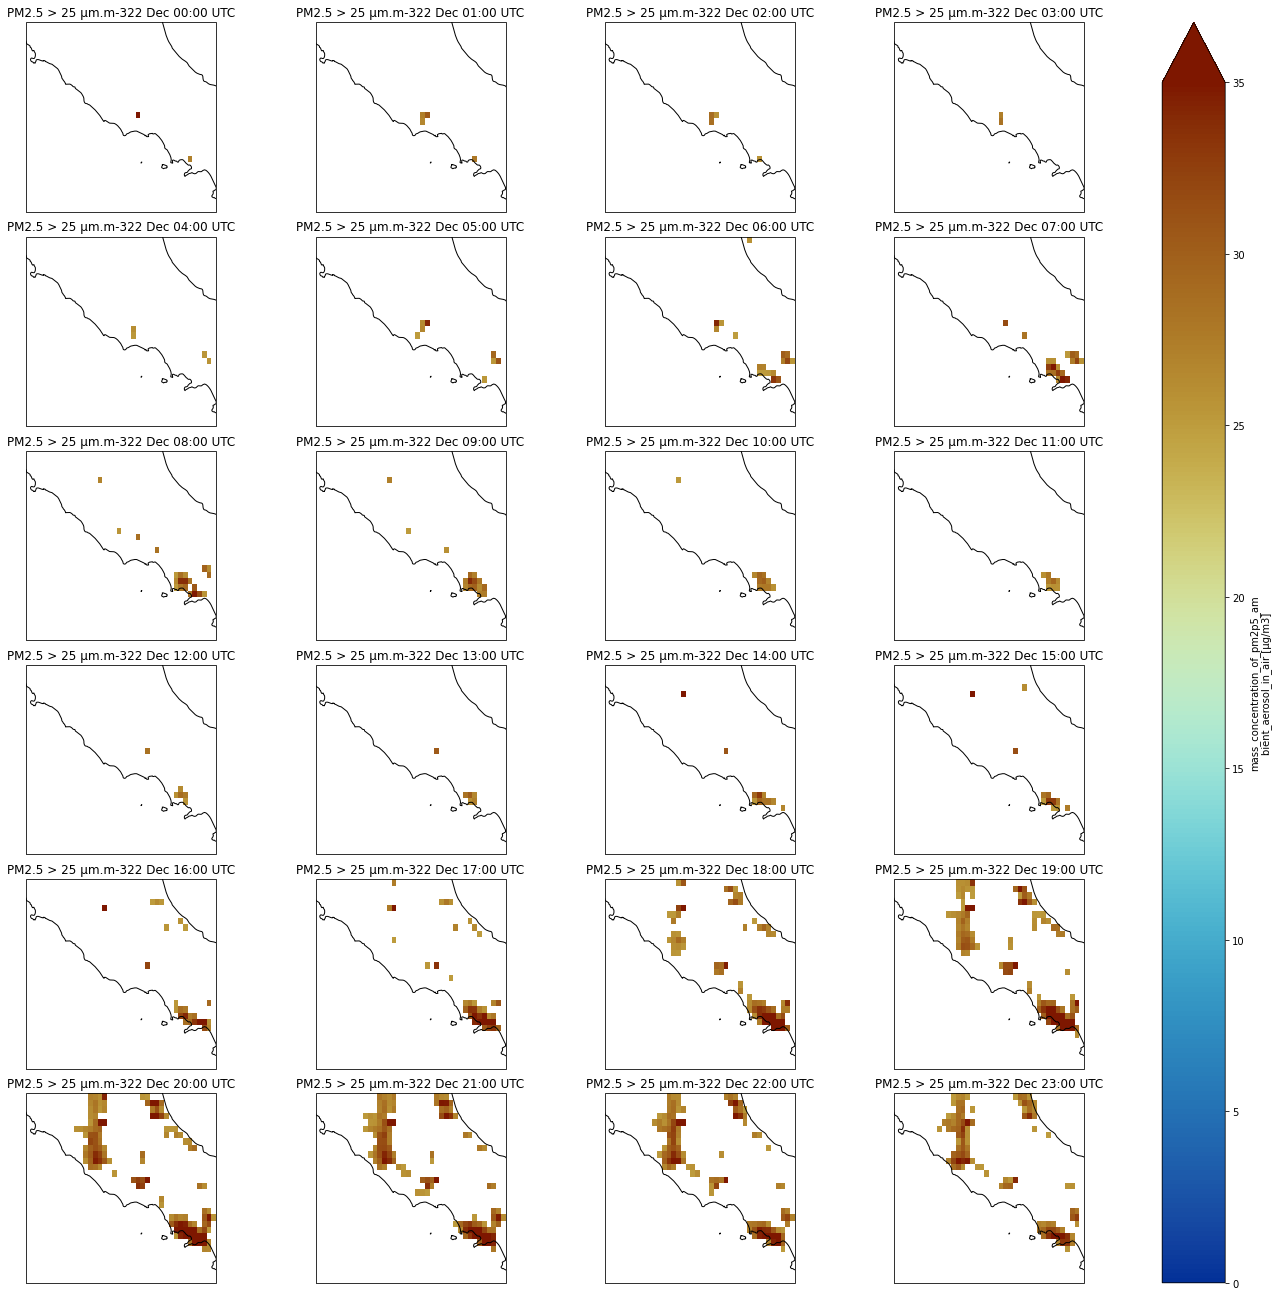

In [17]:
fig = plt.figure(1, figsize=[10,10])

# We're using cartopy to project our data.
# (see documentation on cartopy)
proj_plot = ccrs.Mercator()

# We need to project our data to the new projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
p = dset.where(dset['pm2p5_conc'] > 25).sel(time=slice(np.timedelta64(1,'h'),np.timedelta64(1,'D'))).sel(latitude=slice(43., 40.),
                                                                           longitude=slice(11.,15.))['pm2p5_conc'].plot(transform=ccrs.PlateCarree(),
                                                                                      vmin = 0, vmax = 35,
                                                                                     subplot_kws={"projection": proj_plot},
                                                                                     col='time', col_wrap=4,
                                                                                     robust=True,
                                                                                     aspect=dset.dims["longitude"] / dset.dims["latitude"],  # for a sensible figsize
                                                                                     cmap=cmc.roma_r)
# We have to set the map's options on all four axes
for ax,i in zip(p.axes.flat,  (np.datetime64('2021-12-22') + dset.time.sel(time=slice(np.timedelta64(0),np.timedelta64(1,'D')))).values):
     ax.coastlines('10m')
     ax.set_title("PM2.5 > 25 μm.m-3" + pd.to_datetime(i).strftime("%d %b %H:%S UTC"), fontsize=12)
# Save your figure
plt.savefig("CAMS-PM2_5-fc-multi-Italy-25.png")

<p><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABjAAAAUQCAYAAADqIxlVAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAgAElEQVR42uydB3hU1fa3R+mdhJBC76FJ8QIiRQFpKiDF
goBIB0WkCdJBaSIKCIjYUAEB6UVAOgqi0gSl996L9Cb/9c3anvANIWWSTOZM
yPs+z3u9kJCESc6Pdc7ae22HiDgQERERERERERERERF9SV4ERERERERERERE
RESkgYGIiIiIiIiIiIiIiEgDAxERERERERERERERaWAgIiIiIiIiIiIiIiLS
wEBERERERERERERERBoYiIiIiIiIiIiIiIiINDAQEREREREREREREZEGBiIi
IiIiIiIiIiIiIg0MREREREREREREREREGhiY6H7IHY5DTm84ver0tNNvnKa1
3rbaqf6f4uH+zFzr9ytZv37d6Sanl50ec/qh06RRfE79n2vW51S/ioe/10dO
9zq94nSX06be/hq89P2r7PRvp/84Pe90jtOs7rwOTgo4nef0rNMLTpc4DY3i
c33r9Lb1sdRtToc6zRAPf69HnA6z/k7nrZ+pR1zensvpKqfXrb9X1Wg+XiOn
h63vuf78+ru8LYXTCdbP7ymnXaL4OM2cro3kOqrqdLHLz9Qd6/UK+/V46+/1
tvXaXbOulxlOHyODyCAyKEFl0EDr7/2v0wFufDwyiAwig8ggj2SQk0CnU52e
cHrJ6a9OnyCDyCFyiBzyci20yvq69Wduq9MXyCFERBoYiPFZMFe1/n9W6x/y
D1wK5t1OP3Z5/0xWUXHGpWB+w2lFp8mtj6HFc49oCuZ8bn59mV0LpRj8vd5z
WtDpo3pT5/Si03Kx+Rp8/PsX5DSLS+GnheV8d14HJ2WcttTi0Wky64HcrmgK
5kHW/0/ptLRVuOrPTBoP/73aWj972ayfqR1O27m8/TenI5ymctrAumHIHMnH
KmIV+E/pzaDTKU6nubxdi/41Tv2cFrJ+vmvGpmCO7PVy+b3RTvc7rWJ9v1I7
bRzV9UIGkUFkkE9mkD4oetZ66DAgmo9FBpFBZBAZ5LEMcpJHH+45DXGaxGkb
p+fCHniTQeQQOUQOeakWKhbWJLP+XpozIeQQIiINDMR4LZitXw93+qNLwdzP
WpWQxPq9t5x+Zv1epUg+pt5ULfBQwfyu9TVq4Zc7Dn/P+U67xvJr0NehVWRF
k/Wx3nRZWaOFZ17rIbuuIpmuNxORfOwB1oqPydaf/dtaidPTuik56rS6m19n
Cqv42+Hu6xDubf7W3yVTdAWzy++lc3pSfy5cfq+F051Wca6riHKGK16XWSuM
dIVZr0g+1zq9IXf5tRb2v7usVLqln9vl7WtcC+pwH2uIFskuv85rrcRJZ/36
uOtrbH3/pnm6YHaS3+ldvVEhe8ggMijhZlC495vsRgODDCKDyCAyKF4yyOXt
+jr/jwwih8ghcsiOHLIaMTcju77JIUREGhiInlzxk93pdi0YXAtFp0t1pan1
e+udPhlNwTw3bNVQFAXzCWtlxWwdBxTN11jWKtLPWytMmupKiRj8HVNZRV3N
2HwNbhbMWoimtwpCfbi+wlohl8FarfJ6FAWzFns1dAWL04lODzrtba3Caa2/
jubvl8PagfB/1jbZZu6+DuHeXlff7s6Kn3C/r1/zDy4fY5+1ckb/Pn20+A1X
XHe1Vgyli2zkgTUS4QmXX5fSGwrr/9fTgjzc+491Oibc65HD+rWukH433Pvr
FuL/Wat89DeCXN72ot64xEPB3E63TZM7ZBAZlLAzKLoGBhlEBpFBZJC3Msh6
WwnrNcxABpFD5BA55M0c0kab9drpL37SXSbkECIiDQzE+CqYr1oFhs6kHKeF
VbiCuYk1azfU6R7rbREWzE6aW28LiOJzPmVtb85oPXjeFtWM1nArWl52usha
MfKVm3/H76yC6pHYfA1uFszlXX69ybVA0y3fTkdFUTAvc/l1bev7kcSlyNT/
k9GNv6e/tUKqrLuvg8vbslkrX16NRcH8QdjfwZo52tLlbY9a51Tk1I/t9E83
v2e6MqZguNUyYs0sfS386h8ng/Xri+RjrQi/O8P6u1aybhL1N1K6vK2aXhfx
UDD3jmr1JBlEBpFBCSODYrEDgwwig8ggMii+Mii9tVq8JxlEDpFD5JBNOZTM
GqvZmRxCRKSBgeiVLcsRFYrWXMjTVmHZN7KC2VrtcTomB2BZs3uvuftnrPmh
Q6yVOn+48f7DrQI2fWy/BjcL5nwuv17ruupGi6bIinurYJ7s8uuqrsWatWpG
rIK2ossBZNsj+XjB1vcgqbuvgzXXVlcl9Y7mtYysYJ7ksuJnh8sNWJh6KGE5
p92dznTz+3zJdWuvtTrHdQfGjnDvPyZsB0YEH0tX/HQP93tXwq34CXR5W4Mo
Vvw0iejnzirAn2bFDxlEBj38GRSLBgYZRAaRQWSQxzPIWsn9s9MvySByiBwi
h+yqhVzero2ZOuQQIiINDERbCmaXf/zvhm3tDV8w6zZYp2djOk/SKla1wCoW
xftksma9rre2GevBaIXc+NjvWSt5MsXla7BeB9eZop3sKJjdfD2zWe/v787r
YBWMf0a1xTyqgtk6hO3ezFVrxmrjSP58TFb86MzV1i6/bhHuDIyb4c7A+CWa
MzC+d/l1nnAzV/VnqprL29+PYubqU9bf13X1WGprq3iuaArmsJmrpcgeMogM
SrgZFIsGBhlEBpFBZJBHM8haBb/EOgj3UTKIHCKHyCG7aiGXty+PbBcGOYSI
SAMD0VsFcxanFVzedq9gdlLFmof6lBufr4g1qzeJVWyNcrpbt55G8v4trdUZ
erDa82Fbed34PD2tQ9xCPPA1rLYekKe3Vsdsdrol7P3tLJid1Le2kj9qfW16
QN1mN1+H9NZNyFg3X9N7BaB14/w/q1DVVT5pXHZHaHFexPq1zpx9yWX79Unr
hiNFNDNX21kHz2W1fva2uzYotHh2+pE1u7WetbIocxQ/c5etFVNprAeO08Jt
uf7ZunkoGM1c2hTWTNye1ufWjzfaOiDwETduMMZY349K1pZ5/RgNnfYgg8gg
MihBZVAy6/qdYr2+KSP72SCDyCAyiAzyZAZZ+bPAOuMgqZs/c2QQOUQOkUOe
zKGC1tioVFYmNbEaEo+TQ4iINDAQbSuYI3iba8GsB7n967KdVl3s8r46h7OX
S3G929oifMa6+cofxddX2HX1Sgz+XmId3ub6NcX2a1htFVmHLNtYW6bfi2nB
bB1odtXlQLO4FswdrALumvU1TdP5pm6+Dq9bb78W7u05oiiYb1s3MNesInZY
+Hmw1hkVf1tF6lGnE1zeVtSagXrR+np7RPK5HrFWdl2w/DDcKptc1vflhvW9
rOrythzh/x5OGjk9Yn3d88KtiNIieIL19ep27y7R/GwVtlY2nbPef6bObnVz
hZT+vTpar911a6vzD2E3GGQQGUQGJZgM+tb62l1tRgaRQWQQGRTfGaQjUqyv
+3q4r7siGUQOkUPkkJdySA8I/8P6OnQh2QZtnHA/hohIAwMR7bupiPTGARGR
DEJEMggRkRxCRESkgYGIFMyISAYhIpJBiEgOISIiIg0MRKRgRkQyCBHJIDII
EckhREREGhiIiIiIiIiIiIiIiIg0MBARERERERERERERkQYGIiIiIiIiIiIi
YmJ7yOpwpHk5g/5fXgtEGhiINlijRg353//+h/iARYoUkWTJkj2UfzdnAfYT
1z8ZhL5v8uTJpXDhwmQQkkNoiwEBAZItWzYyCMkgtMW8efNKunTpuB9D262S
1iEpH3Ho9+0xXg9EGhiIXleLB4CI+L//+z/JmTOnbNu27aH7uzkLr41c/2QQ
+D5t27aVjz/+mAxCcghsYc6cOVKtWjUyCMkgsIVLly5J2rRp5erVq+QQ2rn7
wi8oqUNe93NIgRTswkCkgYFIwQw8PKRgJoMAeHiI5BD41MPDa9eukUFIBoEt
PPXUU7Jw4UJqIbTN8qkdUju9Q/oFOSQ0hUOa+9HEQKSBgUjBDD7E7NmzpXr1
6hTMSAYBDw/JIHIIEu3Dw0WLFpFBSAaBLQwZMkTefvtt7sfQrt0XwcFJHdIn
8L8GRrtMDsmd3IySeoTXB5EGBiIFM/gE//zzDw8PkQwCW6lYsaIsXryYDEJy
CGxh8ODB0rFjRzIIySCwhU2bNkloaCgNDLTF0qkc0iDDf82LMB9L6ZDGGdmF
gUgDA5GCGXh4SMFMBgHw8BDJIeDhIRlEBkGi5u7duxIYGCgHDx4kh9Dbuy9y
ZU3mkL6B9zcwOmRySLZk7MJApIGBSMEMPsSgQYN4eIhkENjGxo0bpWDBgmQQ
kkNg68PDQ4cOkUFIBoEtNGnSRMaPH08thF61eEqHvJrx/uZFmKVSOeTlDOzC
QKSBgUjBDD7Chg0beHiIZBDY+vAwc+bMPDxEcghso3HjxvL555+TQUgGgS1M
mjRJ6tWrx/0YenP3ReGcEey+CLNzgEOyJDW7MJLweiHSwECkYAYeHlIwk0HA
w0MeHiI5BDw8JIPIIEiknD59WjJkyCC3b98mh9ArFkrhkNf9Im5ehFkutUNe
SM8uDEQaGIgUzOAjNGrUiIeHSAaBbUycOFHq169PBiE5BDw8JIPIIEiUPP74
4/LLL79QC2G828rfIfmSR928UN/J7JDg/3ZhJOd1Q6SBgUjBDLbz3Xff8fAQ
ySCwjVOnTvHwEMkhsJWSJUs+NA8PySAyCBIePXv2lF69enE/hvFu3uQOae0f
fQNDrZTGIc+mYxcGIg0MRApm8AFOnjwpGTNmlDt37lAwIxkEtj08XLNmDRmE
5BDY9vCwd+/eZBCSQWALP//8szxMPyvkkG/a1M8hhVO417xQ383skKD/dmGk
4fVDpIGBSMEMtlOiRAlWHiIZBLbRo0ePh2blIRlEDkHCY/Xq1WaECxmEZBDY
ge5C1d2ouiuVHMJ4eZDqcDySI5lD2mdyv4Gh1kjnkCpp2YWBSAMDkYIZfIAh
Q4ZI69atKZiRDAJb2Lx5s+TIkUP+/fdfMgjJIfA6ugs1S5Yssm3bNjIIySCw
haZNm8rHH3/M/RjGiw0zOqRkypg1L9Regfd2YWTkdUSkgYFIwQy2cvz4cTNG
6sqVKxTMSAaBLejq5yVLlpBBSA6BLegusM6dO5NBSAaBLehu+EKFCsn//d//
kUPo6d0Xj2ZJ6pCOATFvYKi10zukQhp2YSDSwECkYAYfoHbt2jJhwgQKZiSD
wBY+/fRTefnll8kgJIfAFvbt2yeZM2eWmzdvkkFIBoHX0cZFgQIFZN26ddRC
6FHrp3fIE6lj17xQ+wQ6JOS/XRhBvJ6INDAQKZjBVubNmyflypWjYEYyCGzh
4sWLZv7z2bNnySAkh8AWKleuLNOnTyeDkAwCWxg2bJi0aNGC+zH05O6LZMFJ
HdI1c+wbGGqDDA4pk4pdGIg0MBApmMFmdP5z9uzZZf369RTMSAaBLTRr1kwG
DhxIBiE5BLYwbdo0KV++fIIe4UIGkUGQcNFDvP38/OT06dPUQugRn0/nkIpp
4ta8UPsGOiRrMrMLIyevKyINDESPWrRoUapAiBGffPKJ1K1bl4IZPWLOnDm5
qCBG7Ny504xwScjn8ZBBPDyEhMu///4r+fLlk9WrV5NB6BH1fCeAmPDGG29I
jx49uB9DT+y+SKUHcHfPHPcGhvpqRoeUSMkuDEQaGIgeNkeOHFSAECOuXbsm
WbNmNYfIUTBjXNVxQAAx5dVXX5XevXuTQcjDQ7CF7777TkqXLm2aGWQQxlU9
0wAgJhw6dEgyZcpk/ksthHGxWlqHVE3rmeZF2C6MnP/twijE64tIAwPRY+r2
U4CYMmPGDClUqJDcunWLghnjZNKkSRPszxHYx/Hjx82N+44dO8ggjLMFCxbk
ooIYcffuXalQoYKMHTuWDMI4GxISwkUFMUbHadaqVSvBjrMjh3xi90X6wKQO
6RnouQaG+rqfQwqlYBcGIg0MRA+aIkUKqV27tuzbt48qENxGC+Xnn39eBg8e
TMGMcdLf31/04eHSpUu5sCBGjBkzRp566qkEeeNOBvleI3XUqFFy+/ZtLixw
m+3bt0tAQIBpqJJBGNcMat26tZw9e5YLC9zm5s2bZkHZrFmzuB/DWPl0Goc8
l86zzYsw8yV3SCt/mhiINDAQPTg2YejQoWYl6zfffEMlCG5z8OBB83OTEJtf
FMy+NXt+3rx5kidPHnPzzm4McBcd3VKqVCmZMGECGYRxskiRIlKtWjXRPDp6
9CgXF7hNr1695OWXXyaDME6WKFFCOnbsKEFBQbJ8+XIuLHCbn3/+WbJlyyaX
L18mhzCmuy8CgpM6pHdg/DQwWvs7JG9yGhiINDAQPXxwpY7h0OJn7dq1VILg
NsOGDZOaNWtSMGOcM0hvvGrUqCF9+vThwgK32bRpkwQGBsr58+fJIIxTDulO
Hh3HoU0xAHe5fv26acD/9NNPZBDGuRZatWqVZMyYUU6ePMnFBW7TvHlz6dy5
M/djGCPLpnZI3fTx07wIs3AKhzT1o4mBSAMD0YMFs9KqVStp0qSJ2Y4K4A46
bkNvtE6cOEHBjHHOoJkzZ0rRokXN7h4Ad6lfv36C20FIBvlmDl26dElSp07N
CmiIEV988YW88sorZBB6pBbSs1X69euXYM81AO9z5MgRsyv+zp075BC6u/si
W5akDukTGL8NjDczOSTHfwd6P8LrjkgDA9FjBbPO8NWiWeeKA7hLy5YtzbZ3
CmaMawZpQ6xTp07mfBUAd5kxY4YUL15cbty4QQZhnHNo7ty55kFQQhzHAfZw
5swZ8fPzk507d5JBGOcM0l3x+fLlo5EKMaJ8+fLy2WefcT+G7o0RT+WQVzLE
b/MizJIpHdIwI7swEGlgIHqwYFZWrlwpxYoVowoEt9EDB3V8wnfffUfBjHHO
IB3HoQ+Cjh07xsUFbqGrVBs2bCiNGjVKMCtWySDfzqE6deokyLNVwD50F5g+
dD537hwZhHHOoHHjxiXIs1XAPrSBmjlzZlmzZg33Yxjd7ot82ZM5pG+gdxoY
HQMcors9nJ/3UV5/RBoYiB4rmPVQ1Ny5c8u7775rVtVfu3aNihCiZfv27aZo
TihnqFAw+24GKW3btpV69eqZ3Rhbt27lAoNo0cZX6dKlZdCgQWQQxjmH5syZ
IwUKFJD+/fvLlClTuMDALd555x2pVKmS3Lp1iwzCOGWQLg7y9/eXAQMGmLPB
GCcF7rBkyRIJDg6WAwcOUAthpBZN6ZDX/LzTvAjzidQOqZ+BXRiINDAQPfzw
8JdffpFatWqZB9I6kx7AHRYvXmyK5oRwfgEFs29nkK5grVu3rpQoUcKczQPg
DjoGMVu2bAni3y0yyLdzSB8W6oGozz77rISEhMjdu3e5wCBadBGQ1s9t2rTx
+QfOZJDv10JTp041Zzw9+uijsm3bNi4wcIvRo0dLkSJFzJlO1EIoD+6+KJ4n
uXebF2rXzA4J/m8XRjK+D4g0MBA9VjCHMX36dDNOKqEdCAb2MWrUKHnsscd8
fnY4BXPCyCB9IK2z6Pfs2cPFBW6xadMmCQgIMP8lgzCuOaQPocuVKydffvkl
Fxe4hdY/RYsWlU8++YQMQo/UQu+//740aNCAiwvcQv/dateunTlPTpuq5BC6
WiC5Q1r6e7+BoVZM45Ba6diFgUgDAzEeCmYtgCpXrizffvst1SC4XTTrykNd
gejLRTMFc8LIIGXYsGHmfAMAd9EdGNmzZ5cTJ06QQRjnHPrzzz9NU8zXHwSB
76A7UXVHqu5MJYMwrhl048YNM973999/5+ICt7h9+7ZUqVJFunbtSgMD79nc
zyGhKexpXqjdMzsk6L9dGCn5fiDSwED0+MNDnSfeo0cPKkGIUdGsM6C7detG
wYxxzqCNGzeaUVIAMWHgwIHmTAw9G4MMwrjmkDYwTp06xYUFbqMH6eoo1h07
dpBBGOcMatKkCQvKIEacP39e8uXLJ1999RX3Y6ijox7Jldwh7TLZ18BQn0nr
kOpp2YWBSAMDMR4K5qFDh0r37t2pAiFG6BkGefPmlW+++YaCGeOUQbr6WUfZ
AcQE3Q326quvmt07vjiLngxKWDkUFBTk0zt6wDfRB85aC2lNRAZhXDLo9ddf
lwkTJnBRQYzYuXOnaaT+/PPP3I8lchtndEixlPY2L9Segfd2YaTj+4JIAwPR
owVzhw4dzAgXgNgWzcuWLaNgxlhn0MKFC80oO4CYorsvypQpI7169fK5JgYZ
lHBySH+O0qRJI1evXuWighiji4AqVqwoV65cIYMw1rVQtWrVZN68eVxQEGOW
Ll1qmvDbt2/nfiwR777IlswhHTLZ38BQn0vnkKfTsAsDkQYGogcKZh0BFPZf
XTm2YcMGqj+IFbriJzAwUKZOnUrBjG5n0K1bt+49cG7btq0ZBwQQG3Tsj44g
0wMtfekMAzLIt3NIf1bCfl7mzJkj5cuX52KCWKE/Ry1bthT9GfOlMWRkkG9n
kNZAWgspOgooXbp0cvHiRS4oiBWTJk0y92M62o77scTnSxkcUiqVbzQv1N6B
Dgn+bxdGAN8fRBoYiLEqmMNGbiRNmlSqVq1qVvvUqFHDJ8dvQMLhr7/+Mgfq
fvTRRz7zs0TB7Ls37V988YWkTJlSihQpIk2bNjUHoZ4+fZoLCWLNpUuXzL9p
L7zwgly7do0MwihzSP/N0tWq+rBH585nyZJFFi1axIUEsUZrn/79+0uePHlk
z549ZBBGmUG666tcuXKmFtJ/t/Q8p44dO3IhQZxYsmSJ2Rk/a9YsGhiJa/dF
kpCkDukc4DsNDLVueoc8mZpdGIg0MBBjWTCvXr1aChYsKP/8848pbnR274UL
F4yjRo0yh3l//vnncvbsWapAiBFHjhwxD6Rfe+018/NEwYwRZZCuVNVRLbt2
7TKrxL788kuz5f3u3bsyZcoUk0E60s5XD0UF30VXsurD6JIlS8rWrVvJIIw0
h+rWrSujR4+WvXv3msNPdfyGsm7dOunbt695EL18+XKf2tEDCQP9N00bY9Om
TbN9QQcZ5LsZNH78eKlVq5bZefH999+b+ufGjRty+PBh+eCDD8xYxMmTJ/vc
WDLwfTZv3mya8lpP688UtdDDb530DimX2reaF2qfQIdk+W8XRla+T0gDgxcB
McYF8++//24aGOFvqvShc506dWTw4MFmh0aGDBnMDf7s2bPNIc3PP/+8aXbc
uXOHyhAiRW+03nrrLVM42z3Hl4LZNzNIGxX+/v5y6NCh+75fegNfuHBhGTRo
kDmXJyQkxKxIHDt2rBlT9swzz8jQoUN98qBU8B303zZ9IB0QECDvv//+vXGJ
ZBC65pAe/K4PEF05fvy4ZMqUSfr06SO9e/c2jbBs2bJJz549zQOh+vXrS5cu
XczuDYCo0Fq7UKFC5mfGzpFSZJDvZpDeU+l9Vni07tFxZPrvl957ZcyY0exU
1Yaq1kANGjQw9TU75yEqTp48KfXq1TM5pHnE/dhDvfsihR6Y3S2z7zUw1Jcz
OOR/qdiFgciLgBjLEVJ6U/7OO++YFfOKrs7Qh4W7d+++9346jmPChAnmYF3n
P4ySJEkSyZ07t2lu6E0+QFToTh89W0VvunSbPAUzGeSKrgrTcT+uZ+80atRI
Pvnkk3u/1pXPP/30k8mc9OnTmxyqWbOmaXJs3LiRiwyiRP99e/bZZ83ZGPv3
7yeD8L4cWrVqlWlOzJ8//94M+okTJ5qfGVe0WaH1kj4E0gyqXbu2+a+emcHu
DIgKra313zrdjbFgwQIyCO/LIN0Jr/deI0eOvLcwQx86p0qV6r7GuzbA9H3K
lCljsqdAgQKSNm1a87OlHwMgMvSeX3eC6bhEbczrAiJy6OGzZjqHVErjm80L
tW+gQ7InM7sw8vH9QhoYiBjjh4e68rlVq1ZmFfSKFSukU6dOZpVYdKt5dKZv
mzZtzJ/r3r27T4wJAt/l6tWrZpXrk08+abbIUzCTQWHoA0Md0aIPEHVUgo6z
y5o1a7SHV+rZBgMGDDB/TmdG6+gpgKhu3seMGWPOWFm/fj0ZRA7d9/2ZOnWq
PPHEE+YcMB0lpbt2dLdXdOhBqfrnihYtahogrISGqNCxZPqg+tNPPyWDyKD7
vj+6s+vll182u5a3bNliGqQ6Oio6dEW9/jk962D48OE+MSYIfBc9Y658+fLm
Z8aOXankULzuvkijuy96ZPbdBobaJKNDiqZkFwbSwEDEWBTMYeh4KF3Noy5e
vNjtQuTo0aOmAaI3+/owUYtubuAhInS1j/6sNG/enIKZDHqAgwcPmt1dmkGt
W7d2+3uru3r0pl1v3ps1a2ZGK9y8eZMLDiJk+vTpZgeht3eDkUG+n0M6FrNC
hQomg5InTx6j5piOcdFzn/TBkDZD7GjUQ8LgwIEDZifGpk2byCAy6AE+/PDD
e/djMdkxuG3bNrOYI3v27OYcw3379nGxQYRok6tKlSrmjDnuxx4eq6R1SI10
vt28CDNPcpNxxfi+IQ0MRIxVwRz2gDm2zYedO3dK+/btJU+ePGZFtI5UAAiP
jiPT1WW//vorBTMZFGkGxSaHdMeGntujq6F1zJSuXGSsC0SEzg3XXT9kEDkU
UTMitrWQ5o2OntLDeNOlS2dWUJ85c4YLDh5AD/cuW7asV8e4kEGJ435s7dq1
ZjGH7jbUMZt2n3kAvonuNNRznsJGSJNDCX73hZ/uvugVmDAaGC38HVIgBbsw
kAYGIsahYPYU+nBaVwDpYZc8QITwTJkyRYoXL+7VQ+ApmBNXBp04ccIc9K1n
a5w9e5aLDu5Db9j1xt2bK1TJoMSVQ7rCVWugHDly2DKyDHwbfUCtDYyvv/6a
DCKD4u1nbObMmWZ36ueff87ueHiAfv36yUsvvUQD4yGwfGqH1E6fMJoXYYam
cEhzP5oYSAMDEW1+eKjojE099LtatWo8QIT70Jso/blo27at11YfUjAnvgzS
Bpmez5MzZ877DggHUD7++GNzqHfYgalkEDkUH+h4Th2x+cUXX3DRwX3omQf6
cPm3334jg8igeGPXrl1mJ0aLFoODWGsAACAASURBVC04HwPuQ0dp6kHwI0aM
oIGRsHdfBIckdUifwITVwGiXySG5/xsl9QjfR6SBgYi2FsxhDxC7desmuXLl
8vqsX/BtdJRUuXLlzJkY3mhiUDAnzgxSdAWiPkD05kpX8H20kar/PuluMG80
2cmgxJtDOmKzYMGC5t87HiCCKwsXLjRNDG+M1SSDEm8GXblyxay018956NAh
Ljy4x+HDhyVv3rzmLDkaGAnT0qkc8mKGhNW8CPOxlA5pnJFdGEgDAxF95OGh
MmPGDPMAUWdDA4Rx+fJlqVixojnUO75HjVEwJ+4M2rFjh3mA2KZNG8bawX1N
DB3z89hjj5ldg2QQORSf/97p2SulSpUyI+4Awvjpp59ME2PNmjVkEBkUr//e
ffTRRxIUFCSrVq3iwoN7HD16VPLlyycffPABDYyEt/siV9ZkDukbmDAbGB0y
OSRbMnZhIA0MRPShh4fK9u3bzQ3ali1bqBThHlevXpVKlSpJ06ZN4/XBMgUz
GaQPEMuXL+/VrfKQMJoYffv2NSM2Tp06RQaRQ/H6s6Zj7apXr848eriPZcuW
mRp59erVZBAZFK8sXbrUNDHiu2kPCYvjx49LaGioDBo0iAZGArJ4Soc0ypgw
mxdhlkrlkJcysAsDaWAgog8VzIqOcNHP761zDyBhcO3aNalSpYo0btw43g72
pmAmg5S9e/eaw5sPHjzIhQf3MWDAALNLJ75Wx5NB5JBy+/ZtKVmypHz33Xdc
dHAfK1asME2MlStXkkFkULyi4xNfffVVLjq4D61/tA7SeogGRoLYfVE4ZwLe
fRFm5wCH6Bkezr9PEr6vSAMDEX2mYNYVh/r558yZQ5UIDzQx9GDvhg0bxksT
g4KZDAqjd+/e5gB5gPAMHDjQrEDUlYhkEDkUX+iooDx58sRbwx4SLroDQ5sY
uiODDCKD4gvd/ay7MLZt28ZFB/ehO1F1R6ruTI2PnYLkkOcslMIhzfwSdvMi
zHKpHfJCenZhIA0MRPSxh4favNCvgfEJEB493LRmzZpSuXJl2b9/PwUzGRQv
6IHNfn5+ZuYvQHh0BnSOHDlkyZIlZBA5FG88/fTTMmnSJC44eABtcGkTQw/V
9WSTiwwig1wZMmSI2fkMEB4dL6Zng+nPh9bM1EK+Zyt/h+RP/nA0L9R3Mjsk
+L9dGMn5/iINDET0mYJZx0cVKVJEFi9eTIUID6A36x9++KEZ8/Pmm2/K33//
TcFMBnmcLl26SMeOHbngIEL036ecOXNKrVq1ZNGiRR45n4cMIodc0Tn0hQoV
YqQmRMi+ffvMaM2iRYvK+PHj5cqVK2QQGeRRLl26JAEBAeZnDSA8mjmdOnWS
wMBAs3P50KFD3I/5kHmTO6S1/8PTwFArpXHIs+nYhYE0MBDRxx4eTpkyxRym
yy4MiIxjx45J//79JUuWLFKmTBlTRM+fP5+CmQzyCDoiSHdhcIglRIaOtfvq
q6/MjsFcuXJJixYtZNy4cWanGBlEDsUVrX/037aZM2dysUGkPyO6E6xevXrm
36sXX3zRrJo/fPgwGUQGeQQdE9SqVSsuNoiUnTt3yttvvy3+/v6mqdqjRw9Z
u3Yt92M22tTPIUVSPFzNC/XdzA4J+m8XRhq+z0gDAxF9pmDW1az58+eXVatW
URlClOiBpzoLWse6FChQQEaMGEHBTAZ5BN3h8+6773KRQbRs2bLFNC90xF31
6tXJIHLII2hTXg/0ZjEHRIcu6pg8ebL5dyskJEROnjxJBpFBcebcuXPmwfSR
I0e4yCBKdFGH/pulB3wHBwfLggULqIXsObj7kRzJHNI+08PXwFCrp3VIlbTs
wkAaGIjoYw8Px4wZI02aNKEiBLf566+/JHv27BTMZJBH2Lt3r9kazwgXcBdt
vmsG7dixgwwih+KMNi7y5csnGzdu5OICt9HdYLFZzEEGkUERoU2xQYMGcWGB
20yfPp3FHDbZMKNDSqZ6OJsXaq/Ae7swMvL9RhoYiOgzBfPu3bvNWA6AmDzs
SZEihVy/fp2CmQzyCLlz55Zdu3ZxcYHb1KlTR2bPnk0GkUMe4Y033pBRo0Zx
YYHb6G6wNm3akEFkkEeYN2+e2V0I4C4HDhyQHDly0MDw/u6LR7MkdUjHgIe3
gaHWTu+QCmnYhYE0MBDRhwpmHQ2k25Z1tiZATB44x+bAQQpmMigiGjRoIKNH
j+bCghg9cB47diwZRA55hC+//FKee+45xkiB28ydO1dq1apFBpFBHkHPVNHD
vC9cuMDFBW6hZ4ElT548VjuYyaHYWz+9Q55I/XA3L9Q+gQ4J+W8XRhDfd6SB
gUjB7DMFkK4iK168eKwPRYXER+XKlWXx4sUUzGSQR9i2bZu5cdf/ArjDsGHD
pGPHjmQQOeSxB0HFihWT8ePHc3GBW2zdulVCQ0PJIDLIY+ghzXXr1qWRCm6j
Z/EcPHiQHPLe7otkwUkd0jXzw9/AUBtkcEiZVO7twnCS0ul6p1udbnf6nvX7
A5wed7rF8jl+lpAGBiIFc6zRQrlGjRqMTwC30cPjdAU0BTMZ5ClGjhxpVkBz
Fga4w++//27OLbhz5w4ZRA55hO3bt5tG6vnz57nAIFr0LJ5MmTLFePwhGUQG
RcbNmzclf/788tNPP3GBgVs0bNgwVjuYyaHY+Xw6h1RMkziaF2rfQIdkTWZ2
YeR0o4HxiNO0YY0ep384LWs1MN7h5wdpYCBSMHsMXUmmqzjmz59PNQjRcvr0
aXPwcvPmzWXatGnmRp6CmQyKC1evXpXy5ctLhw4duMAgWrTxXrVqValSpYq5
eXd37AYZRA5FRc+ePaVo0aLmQSJAdAwfPlzy5s0r7733nmmAkUFkUFxZtGiR
aYz9/fffXGAQLZs3bxY/Pz+ze0cbX+7u3iGHYrX7IpUebN09c+JpYKivZnRI
iZQxOwvDSWqnm50+QQMDaWAgUjDHC6tXr5Zs2bLJtWvXqAghWk6dOmVWzetD
59KlS8uRI0comMmgOHHx4kXJmjWrWV0PEB36kHny5MnSuHFjCQoKkmXLlpFB
5FCcG2P16tUzD6QB3Pl5WbVqlXTt2tXs3hk8eHC0DxDJIDIoOj7//HMpV64c
o6TALfbu3Wuyp3DhwlKnTh25dOkStVA8WDOdQ55Jm7iaF2G7MHL+twsjrxuN
iyTWmKirTofJ/x8hdcjpX04nOPXj5wlpYCBSMHsEnb3KYboQ0xv4Dz/8ULJk
ySIrVqyI8oaLgpkMig6dQa+jpABigj5E1CaGNlVv3bpFBpFDsWbfvn1mBbQ7
D4EAwjh+/LhZzNGoUSM5e/YsGUQGxRodpVmoUCFZunQpFxa4jdY+7dq1kyJF
ishff/1FA8PzOzBGvu6X+BoY6pOpTQNjhP7cuNgmitcqo9NVTovqIeBWY+NR
p4O1icHPE9LAQKRg9gjLly/Xf3Ukc+bMkiFDBkmZMqWkSpXKFES6OhogMhYs
WGBGKZQtW1YGDRpkxpHpwXKuDQ0KZjIoOvQwXc0gXc2q2+JTp04tSZMmlWee
eYaRChDtg2cdKaU7Cbt37y7ff/+9uYl3bWiQQeSQO9SsWdPkkL+/v6RNm1aS
JUtmzlyZPn06FxpEyvXr1+XNN9+UjBkzSosWLUxDft26dXL58mUyiAyKEWPH
jr1XC6VPn15SpEhhfq769evHiDuIFL3n0h08uqDj2WefNWPulixZIidOnOB+
jAZGXBsYz8Tw9eoffnSUk1xOt/HzhDQwECmYPVb4bNmyxYwH0pniOk5KzzvQ
G7JcuXLF+LBCSFzoWRhz586Vbt26mYPhdVeGNsJ0RaI2OCiYySB32LNnjxw9
elTOnTsnV65cMTn02WefmRv5H374gQsNomTDhg1mBNCLL74oBQoUMI14bWzo
w0QyiBxyB617dCzHmTNnzE4MfWCou3xCQ0Olffv2ZoU0QGTobgzdDabnhOnP
uDbidVX0gAEDyCAyyC00c7QBr1mkC8i0OXbgwAF54YUXzE4fzSaAyNCfl4kT
J5pz5SpVqmSa8cHBwWZB4tq1a8khGhgeb2A4yaw7L6z/n8rpGqe1nIa4vE9n
p9P4eUIaGIgUzPHOV199JTlz5jQPqN057wBA0VU/48aNM7NZKZjJoLiwdetW
s6pMVybq/2c+NLiDHhA/e/ZsqVWrFhlEDsWJf/75x5z71Lp1a/MQSHeMAUSH
Lu749ddfzUG7ZBAZFBe07tFFQtrE0EObaWSAuz832pT/4IMPzC5VcogGRjw0
MIo5/dM662Kb037W709y+rf1+/NdGxqINDAQKZjjlUmTJpmV9bqajN0YENMH
PxTMZFBc2bRpk7z00ktmzJ02xgBicgNPBpFDcUV3humu1IIFC5oDUwFiAhlE
Bnni3zI9e+7pp582K+tdR5QBRMf+/fvJIRoY8T5CCpEGBiIFs8+gW1A7derE
Cmjgxp0MsgXdCaZ/Bx0xBUAGkUPeRh8a6vkYO3fu5MICMogMsgVtYuiITQBy
KP4bGM0yOaR/lkcSneXS0MBAGhiIFMwJGJ3vq3+H5557Ts6fP08lCBTMZJBX
0ZEcOsYlT548snnzZi4uIIPIIa/zzTffSKZMmcx/AcggMsjb6LmFuXPnNgvL
ONwbyCEaGDQwEGlgIFIwR8Dt27fNLgwtnHmACBTMZJAdTJ061RzuzQNEIIPI
ITvYtm2bOSy+bdu2PEAEMogM8jqXLl2SevXqSZkyZeTw4cNcZEAO0cCggYFI
AwORgjkipk2bZh4gTpgwgYoQKJjJIFseIIaGhkqbNm14gAhkEDlkywPE+vXr
m4N1eYAIZBAZ5G3CzsUICgqSZcuWcaEBOUQDgwYGIg0MRArmiNi+ffu9B4h3
796lMgQKZjLIlgeIpUqVkpMnT3KxARlEDtn2AHH16tVcbEAGkUFeZ+XKlRIS
EmKyCIAc8mwDo3ngIzIg+6OJznLpaGAgDQxECuaHDH2AWK5cORk+fDiVIVAw
k0G2PEDs1q2bVK1alUYqkEHkkC0sWbLENDFOnDjBBQdkEBnkdY4dOya5cuWS
BQsWcMEBOUQDgwYGIg0MRArmiDh48KAZJ7Vz506qQ6BgJoO8zp07d0wjddy4
cVxwQAaRQ7bQr18/qVOnDhcckEFkkC2sWbNGgoOD5eLFi1x0QA7RwKCBgUgD
A5GCOSI++ugjef7556kOgYKZDLKFrVu3SmBgoFy4cIGLDsggcsjr6Fk8efPm
ZRY9kEFkkG20atVKunbtykUH5BANDBoYiDQwECmYo7pxZwY0UDCTQXbRunVr
6dGjBxcdkEHkkC3MmjVLSpQoYUbbAZBBZJC30fPA/P395fDhw1x4QA7RwKCB
gUgDA5GCOSLGjx8vdevWpUIECmYyyBb2798vmTJlkuvXr3PhARlEDnkdbVwU
KlSIxRxABpFBttGpUycWcwA55KEGRovgR+W9XEkSneXTP0IDA2lgIFIwP7yc
PXtWMmTIwMpDoGAmg2xD/47r1q3jwgMyiByyhd69e5vzMADIIDLIDvQsjDJl
ynDhATlEA4MGBiINDEQK5shIly6d/PPPP1SJQMFMBtnCiy++KNOmTePCAzKI
HLKFr776Spo1a8aFB2QQGWQLx44dM4d5A5BDNDBoYCDSwECkYI6EoKAgOX78
OFUiUDCTQbbw+uuvy9dff82FB2QQOWQLU6dOlZdeeokLD8ggMsgWLl68aBaU
sSMeyCEaGDQwEGlgIFIwR0LZsmVl5cqVVIlAwUwG2cKAAQOke/fuXHhABpFD
tvD7779LsWLFuPCADCKDbEEbFxkzZpQTJ05w8QE5RAODBgYiDQxECuaIeP/9
9+W1116jSgQKZjLIFtavXy85c+aUq1evcvEBGUQOeZ07d+5IYGCgbNy4kYsP
yCAyyBYaNWokgwcP5uIDciiuDYyQJPJ+nqSJzvIZaGAgDQxECuaHHD3/okCB
AtKgQQMZMWIE46SAgpkM8iq68lDHSJUqVUr69+8vGzZs4CIkg8ggcsir6Bip
kJAQ6dKli8yaNUvu3r3LhUgGcf2TQV5j//79ppHaokULGT9+POcTAjlEA4MG
BiINDEQK5vCcO3fOHGLZsmVLc4jc8OHDaWRQMJMBZJDXuH37tsyePVt69Ohh
Mujtt9+WTZs2cTGSQUgOeY3ffvtNhg4dKiVLlpSaNWvK3LlzaWSQQUgGeY1D
hw7J2LFjzaKy/Pnz08ggh8ghGhg0MJDrmhcBkYI5MtatWyetWrUyq4BWrVpF
9UjBjGSQVzly5Ij06dPHrIb+4IMPONSSDEJyyKvcvHnTPER8/PHHpXbt2oy3
I4OQDPI6CxYsMI2MvHnzys6dO7koySGkgUEDA2lgICIFc0SsWLFCMmfOLDNn
zqSCpGBGMsjrHDt2zBysq7sxWAVNBiE55G10Z1izZs3kiSeekLNnz3JhkkFI
Bnmdb775RoKCguT333/nwiSH0I0GRstsSWRg/qSJzgp+NDCQBgYiBXMiZvPm
zZIlSxb57LPPqCIpmJEM8joXL16Up556Sl555RWzKhrIICSHvInuANPRdqGh
oWa8C5BBSAZ5mx9//FECAgJk0aJFXJzkENLAoIGBNDAQkYI5IvRQuXz58pnD
dRnlQsGMZJC3uXHjhtSrV0+qVq0qly9f5gIlg5Ac8jojR46UbNmyyd9//80F
SgYhGeR1dMSvjvf97rvvuEDJIaSBQQMDaWAgIgVzRJw6dcrMgm7btq38+++/
vCAUzEgGeRXNnTZt2pgc0jwCMgjJIW/z/fffm9Gaa9as4cUgg5AM8jrbt2+X
7Nmzy/Dhw3kxyCGkgUEDA2lgICIFc0ToyudKlSpJ+/bteTEomJEM8jq6A0wP
99ZzMdiJQQYhOWQHS5YsMaNc/vzzT14MMgjJIK9z5MgRKVCggIwdO5YXgxxC
Ghg0MJAGBiJSMEfEP//8I4ULF5YxY8bwYlAwIxlkSxOjZcuWUrt2bXaDkUFI
DtnCDz/8YFZBnzhxgheDDEIyyOvoeN/g4GBZvHgxLwY5hOEaGK2yJ5FBockS
nRX8HqWBgTQwECmYwZUDBw74dNHcL8jxgEDBTAY9PNy6dUsqV64sXbt29Ymv
Z27/wvc5oVHIAwIZRA49XAwcOFBKlSol165ds/1rmdoh9wMuGV36AYEMIoMe
HnSUnY6027Ztm8/VQSqQQzQwaGAg0sBApGC2nbVr15qi2RcPs6SBQcFMBj38
nD9/XvLnzy9ffPEFDQwyCMkhr6O7wZo0aSINGjSQu3fv0sAgg5AM8jqTJk2S
XLlyyenTp2lgkENIA4MGBtLAQKRghoiYPHmyTxTNNDAomMmgxMmePXskMDBQ
li9fTgODDEJyyOvcvHlTypcvL7169aKBQQYhGWQLejbYk08+KTdu3KCBQQ7x
oJMGBg0MpIGBSMEMEdG3b18pV66c3LlzhwYGBTOSQV5n1apVpomho+1oYJBB
SA55mzNnzkiePHlkypQpNDDIICSDvI7uAHv55Zfl9ddfp4FBDvGgkwYGDQyk
gYFIwQyRFc3PPPOMfPjhhzQwKJiRDLIFzR/NIR3pQgODDEJyyNts2rTJNFJP
njxJA4MMQjLI6+hZPPny5ZP58+fTwCCHEn0Do3XOpDK4cPJEZ8VMNDCQBgYi
BTNEia58zpQpk+zevZsGBgUzkkFeR3eA6WG6X375JQ0MMgjJIVvo2bOnOQ+D
BgYZhGSQHaxevVqyZs0qFy9epIFBDtHAoIGBSAMDkYIZIuKTTz6RChUq2H6Q
JQ0MCmYyKHHy119/SUBAgBw9epQGBhmE5JDX0fnzBQsWlBkzZtDAIIOQDLKF
du3aScuWLWlgkEM0MGhgINLAQKRghojQxoWehTF27FheDApmJINsoX///lKr
Vi2vj5L6cWjx+wQyiBxKnPz6668SHBws586d8+rn/aFT3gcEMogMSnxcunRJ
smfPLsuWLfPq553eNd8DAjlEA4MGBiINDEQKZp9k586dZgX0b7/9Ji1atJAJ
EybIrVu3eGEomJEM8gqaN0WLFpXvvvtO+vTpIwMGDJDTp0/TwCCDkBzyGm+/
/bY0adJEpk2bJm+88YZs2bKFBgYZhGSQ11i0aJHkypVLfv/9d3Ow95w5c+J9
YQcNDHLIpxoYuZPKkKLJE50VA2hgIA0MRApmcJvRo0frP5zSrFkzqVKlihQr
Vkw2bNjAC0PBjGSQV9DDdDWDChcuLG3atJHMmTPLt99+G6837zQwyCByCMK4
evWq5MmTx+RQv379JCgoSDp37mx+nwYGGYRkkDfQ5qlmUJcuXaR48eLyzDPP
yP79+2lgkEM0MGhgINLAQKRghjCWLl1qZkHrA8PJkydLYGCgdOvWLV5v3oGC
mQyCMPQ8jEOHDt1raJQoUUJq1KghBw8epIFBBiE5FO/oCKl169aZ/3/27Flp
3LixaWosX748XpqpNDDIIDIIXNHRvgsXLjR5c+fOHRk2bJhkypRJRo4caX5N
A4McooFBAwORBgYiBTOEQ0e4NGzYUFKlSmVmQ+fPn18ef/xxqV69ujn8W5sd
QMGMZFB8cfv2bRkyZIikS5fOjLnLnTu32R1WsWJF6d69uxw7dowGBhmE5FC8
8uOPP5rsyZAhg+TIkUOKFCkiZcuWNSNewpodNDDIICSD4ovdu3eb3fF6P5Yl
SxYJDQ2VUqVKSe3atWXSpEmm6UEDgxyigUEDA5EGBiIFc6Ln+vXrcvz4cdm1
a5esX79e5s6dKy+88ILkzZtXfvnlF14gCmYkg+IVXXV46tQp2bt3r2zevFlW
rFhhxivoqkQdfxfbldE0MMggcgjcQTPm/PnzZjeY7hRbu3atjBo1SrJmzSrN
mzeP9U5VGhhkEBkE7nLlyhU5evSo7Nixw5yTMWXKFHnyySelTJky5h6NBgY5
RAODBgYiDQxECmaIgPnz55s59br6ByiYkQzyNnv27DE7Mlq3bh0voxWADCKH
ICouX75sdmLo7tQTJ07wgpBBSAZ5Fd19MW7cODP2d/Xq1bwg5FCCbmC0yZtM
hhZLkeh8KnMSGhhIAwORghnim+3bt5vtzLorAyiYkQyy4wGijlZo3759vB74
DWQQOQQRobmjh37rmT2aR0AGIRnkbfScHl1U9ueff/JikEM0MGhgINLAQKRg
hojQsVI6n37jxo28GBTMSAZ5nX/++cfMpdeRLkAGITlkRxNDd4I999xz7AYj
g5AMsoUZM2ZItmzZzJgpIIdoYNDAQKSBgUjBDBEwe/ZsMwv68OHDvBgUzEgG
eZ1Dhw6xG4wMQnLINm7fvi3VqlUzu8GADEIyyA6GDRsmxYsXZzcYOUQDgwYG
Ig0MRApmiIyhQ4dKxYoVzTxWoGAmg8ggb/PHH3+Y3WDHjh3jxSCDkBzyOrob
rECBAjJz5kxeDDIIySCvo7vB9Fwe3REG5BANDBoYiDQwECmYIQL+/fdf0dd9
+vTpsfqzzK+nYCaDIK706NFDWrZsGeM/p41Xmq9kEDkEcUUP0s2VK5fcunUr
xg8etRYCMogMgrigjdSgoCDZunUr92PkUIJqYLTNl1w+KJEy0flUIA0MpIGB
SMEMXmfhwoVStGjRKG/CtTDWczNGjhwpr732mpldnzRpUnnkkUdMwf3+++/L
hQsXeDEpmMkgiDHnz5+XTJkyyb59+6J8Px059fXXX5txL08++aSkTp1arx9J
lSqVNGvWTHbu3MmLSQaRQxArdJTU559/HuX76IgXnVnfs2dPqVGjhjmAVzNI
66Gnn35aFi9ezINEMogMgljx0UcfSb169aJtVqxcudLsoH/ppZckb9688uij
jxr1/3/66ady/fp1XkxyiAYGDQxEGhiIFMwPH3qzXalSJRkxYkSEb9+1a5cZ
M6WF8ZtvvilfffWVbN682axU1EJ6+/bt5uGhv7+/vPPOO3LixAleVApmMghi
xAcffCDVq1eP8G2XLl2Sdu3amYxp3LixySpdMa0rFjW/zp49a5qo+jCxfv36
smHDBl5QMogcghihuREYGGjyJDy60+uzzz4zjdaaNWvKgAEDZP78+Wb0nWbQ
jRs3ZPLkyWZxR8mSJeWHH35gZwYZRAZBjLh27Zrkzp1bFi1aFOHb165dK4UK
FTIZ06VLF5M5O3bsMFlz584d+fXXX6VWrVoSHBxsGhxaIwE5RAODBgYiDQxE
CuaHir///tsUvHqgZRirVq0y81j1hn3MmDHRjmrRw8A7dOggfn5+0rZt20hX
U+vDgS+++EK6d+8uDRo0kCFDhphi/b333pNNmzZRMCMZlAjRm++cOXPe13zY
u3ev9OvXT7Jly2ZGTF28eDHKj3H16lWzS0zfX1dT6yrFiFZD6+fSsXn6EFJ3
lGkDds2aNeYgTV1dndhWUJNB5BD8h+bMwIED7/1aM2fcuHHyxBNPGHXBRlRo
nTRv3jwpW7as5M+f3yz4iGwslWbOhx9+aOqlF154QZYsWWJ2gIwaNcpkGRmE
ZFDiQ2uQ8uXL35cpc+bMkZdffllCQkLMWT3R1Sh//fWXNGrUyCz66NWrl5w+
fTrC9ztw4ICMHTtWOnfubDJI80o/vy4I0bdxP4Y0MGhgIA0MRKRg9kny5csn
27ZtM/9/4sSJkj17dvNA7+jRozH6OGfOnJHevXubxserr74qp06duvc2bVTo
yKmGDRvKoEGDZNKkSfLUU0+ZHSBaQOvqR125SMGMZFDi46233jIjFMKaF3q4
d6dOnWK8o0IfGOqoKT2YVx86rlu37t7bDh48KI8//rhUqFDB3Njr++nhmaVL
lzafX1dQ606zxLR6mgwih+A/fvzxR6lateq9HNH80Ad7+gAxJpmgDxh1EYju
KsuaNatZtBGGNlCbNm1qztzQfNMFIvrAsHjx4tKkSRPz+TSPtJYig5AMSlzc
vHlTUqRIYf6raJ3y2GOPmR1gMR3Vu3//frN7VReW6QIz19FS48ePN/dp2rTV
RuqXX35pcufZZ581Yzr1Xk13dHA/htE1MN4okFw+fDxlSm4QXQAAIABJREFU
ovNpGhhIAwORghnsfXioN+56I60PDnUFT1zQsS9aMOt2aF2NqLOjdV6rFsqR
oYfX6c2+rkCkYEYyKPE9PNS80F1ZOiZBH+zFBX3gqE1SzbNixYqZRoY2LKpU
qRLpCkYduaBv11FUOhaGDEJyKPGgOy70YZ/u/KpTp44ZxxLXHVkbN240Izj1
+6r1z/Hjx80DSq2RImt+9OnTx+zg0AeQZBCSQYkLvRfTHRTdunUz90SR7aBw
Fx3tW7duXSlcuLA8//zzZleHNkV0DF5k6Hk+WjvpjjLux5AGBg0MpIGBiBTM
PoU2GPSBoc5V/f333z3yMfVGXBsiadKkMc0LLZxfeeWVKP+MHtQbGhoq7777
bqIY5ULBTAbB/8+LWbNmmcbn1KlTPXb96+ppfRhYtGhRc06PPqCMaiSernzU
nNKzfxLDDGkyiByC/4+OstSc0LN2PHX961litWvXNgft6mz6dOnSyW+//Rbl
n9HDeLNkySJ//vknGYRkUCLi5MmTZiGH7r7Q7PAEuvuiY8eOeq2ZBWu626J/
//5R/pn169eb8cI6WooGBtLAoIGBNDAQkYI5UaCrGnWslJ57MXfu3Gjf/9y5
c+Zho85mpWBGMgg80RzRWfY6qm748OHRNke0waGjFfShY3Tn/5BBSA6BO6xY
scKMjerbt69ZFR0d06ZNM2f6uI7iJIOQDILYomM0dWdHjx49zKHg0bFnzx5z
9oae0cP9GNLAoIGBNDAQkYIZIkAPAdczMdwpsCmYkQwCT6Mz8MuVK2d2kZFB
SA6BHWizQ88Ku337NhmEZBB4ndWrV5v7sYf9YG9yiAYGDQxEGhiIFMwQa/TQ
bx2hoDOjKZiRDAJvo9mjGbRw4UIyCMkh8Dp6lo8erKvjX8ggJIPADkaOHCkl
SpSQa9eukUN4fwMjNLkML5Uq0fl0UFIaGEgDA5GCGeB+Bg4cKBUqVHhox7hQ
MJNB4NvoLrDMmTPLkSNHyCAkh8DrXLhwwRwEPn36dDIIySDwOjp2Uw8W19Ga
NDCQBgYNDKSBgUjBTMEMEaCNi7Jly8q3335LwYxkENhCv379pGHDhmQQkkNg
C7/++qtkzZpVrly5QgYhGQReR7NHM2jdunXUQkgDgwYG0sBApGAGiIg//vjD
jHG5fPkyBTOSQeB1dGxC9uzZ5ZdffiGDkBwCW2jcuLH07t2bDEIyCGxh0qRJ
Urp06YdyVzw5RAODBgYiDQxECmbwCK+//rr06dOHghnJILCFKVOmmBt3HaVA
BiE5BN7m2LFj4u/vb/5LBiEZBN4mbFf85MmTuR9DGhg0MJAGBiIFM0BEHDhw
wNy46yxoCmYkg8COG/eiRYs+dAd6k0HkECQcunbtKh06dCCDkAwCW1i2bJmE
hobKv//+Sw7RwBj5ZqEU8lGZ1InOSsE0MJAGBiIFM0AUNG/eXPr370/BjGQQ
2MIPP/wgTzzxBBmE5BDYwsmTJ8XPz09OnDhBBiEZBF5Hd6E++eSTMnXqVGoh
Ghg0MPg5QBoYiBTMABGxevVqKVeuHAUzkkFgC7oLI3Xq1A/VeTxkEDkECYu6
devKjBkzyCAkg8AWxo8fLy1btuR+jAYGDQx+DpAGBiIFM0BE7Ny5UwoUKEDB
jGQQ2EbOnDnNSDsyCMkhsIO2bdvKuHHjyCAkg8AW5syZI3Xq1OF+jAYGDQx+
DpAGBiIFM0BEXL9+XTJmzCg///wzBTOSQWALzz//vPTr1++hOcybDCKHIGEx
ZswYqVSpkly9epUMQjIIvM7u3bslICDA/Jf7scTdwGhfOKV8XDZNorNSSDIa
GEgDA5GCGSBqli5dKkFBQdKzZ0+5desWBTOSQeBVjh07JiVLlpRnn31Wjh8/
TgYhOQRe5c6dO9KiRQvJmzevrFmzhgxCMgi8ztdff22aGGPHjn0oFnSQQzQw
aGAg0sBApGAGj3Pq1Cmz+vC9996jYEYyCLzO7du3pVu3buZMnoR+404GkUOQ
MJk7d674+/sn+EYqGUQGQcJk165dEhoaKj/88AP3YzQwaGAg0sBApGAGiIiD
Bw9KpkyZzGpoCmYkg8Db/Pvvv2YnxrRp08ggJIfAFt59911p1qwZGYRkENjC
ypUrJVeuXHLjxg1yiAYGDQxEGhiIFMwAEdGrVy9p2rQpBTOSQWALq1evlhw5
cpjzecggJIfA21y6dEmCg4Nl48aNZBCSQWAL9erVkyFDhnA/RgODBgYiDQxE
CmaAiLh8+bKEhITI+vXrKZiRDAJbaNCggQwaNIgMQnIIbOHLL7+UChUqJNhx
dmQQGQQJm3379pld8SdPnqQWSmQNjLeKppQR5dIkOitnoYGBNDAQKZgBYoge
Iqc37hTMSAaBHezfv9/MoU+oN+5kEDkECRsdZ1e8eHGZOXMmGYRkENjCO++8
I61ateJ+jAYGDQxEGhiIFMwAkd246wiXLVu2UDAjGQS20LJlSxk2bBgZhOQQ
2MKMGTOkcuXKZBCSQWAL586dk/Tp08vFixfJIRoYNDAQaWAgUjADRETv3r2l
S5cucf44cwcUeUAKZjIIIDp++eUXKVy4cIxHuMzqUeABuWknhwBiys2bN80I
l0OHDkX6PktGl35AHhwiGQSeon79+vLFF1/QwKCBQQMDkQYGIgUzQETs2rVL
goKCzG4MGhhIBoG30cZF7ty5ZdOmTTQwkBwCW3jjjTdk8ODBNDCQDAJbmDdv
nlSsWJEGBg0MGhiINDAQKZgBIkPHSOkhcjQwkAwCO2jTpo2MHTuWBgaSQ2AL
s2fPllq1atHAQDIIbOHq1auSMmVKuXPnDg2MxNLAeCyVjKyQNtFZOSsNDKSB
gUjBDBBLatasKfPnzzdFc2Q7MY4dOyZTp06VTz75xLxv+HEvNDDIIIDYMmrU
KHnzzTdNrty+fTvC97ly5YosWLBAxowZI19//bV83yUfDQwkh8Aj6G7UPHny
mP8fUQZpw2LRqFLycceC0rFhLmn/Yg45cOAADw6RDAKPkStXLtmzZ4/JoMjG
au7evVsmTpxo7sd0BCcNDBoYNDAQaWAgUjBDokHnrvbs2VP8/PwkJCREPvvs
M7l27dq9t/fv39+8Td+vffv2UrRoUWnevLncvXuXBgaSQRBndO5zw4YNpWTJ
kpI6dWp566235OTJk/du4FesWCEZMmSQKlWqSLt27eS5556THJmTy4S389DA
QHII4syRI0ckMDDQnAmWJEkSqVGjhvz555/36pwfBpeQrJlTSO4sqaRG2QCp
6TRz5syyevVqHhwiGQQeQc8De//9981OjNDQUJk1a5Y5o0fReujVV18192la
L+n9WPbs2WXo0KE0MGhg0MBApIGBSMEM3iemB9l6Al3xo4WwjnHRG3Z9SKjF
c6lSpeSvv/4Sf39/OXPmzL331+ZGhQoVpGvXrjQwkAwig+KMNiU0g3Sc3enT
p6Vt27amYaEH6/7222/y2GOPmZ1frl9jg3L+kj8k5X07MbhpJ4fg4cggb+fQ
3LlzzW5UPY9ny5YtZqdXtmzZJEWKFDJixAh5sUqw1K4YeN8IqeXLl5umx99/
/82DQySDqIXihI6QSpUqlbRs2dJkzrJly8yijuTJk0vdunVl8eLFUqhQoXsN
DUUXeujOsS+//JIGBg0MGhiINDAQKZjBe2hDwGGiz3tcunTJfE49vPKpp566
9/u66rBz585mJWK3bt0e+HPnz583hbTe5NPAQDLo4WDDhg0mD3bu3OnVz/vk
k0/KkCFDzOe+fv36fQ8VdUeG3sS77vhSZr6bXyo/ll5K5UsjM5z/nwYGkkMJ
H10goTkwcuRIr37e9957T+rVq2d2mOqoujAOHz4sOXPmlLSpkshXvYs+cAbG
lClTzCroEydO8OAQyaCHhOLFi5sdEN7kjz/+kODgYLOY7I033rj3+zpOqnbt
2pI0aVIzPjM8OnJK/5w2OGhg0MCggYFIAwORghm8Qvny5c1KZG+iK4w6depk
VjunS5cuRn9W5z8HBQXJhAkTKJjJIC7gh4DRo0ebXQ+RnYUTX0yePFnKlClj
HlyeO3fO7T+nN/baeG3VqtV9Y+/IIHIIEibaPNUc2Ldvn1c/77Zt28zuU/3c
mkcxQUe+6M+eHWdikEFkEHge3fUQUbMgPtHFG40aNTIZpCPsYsLatWvNSLul
S5dyP5aAGhgdiqeSUU+lS3RWyUYDA2lgIFIwA0SAbkHWgnjs2LFy9uzZKN83
/Apnd9i6dasUKFBABgwYIDdu3DA7MyiYySCAMI4dOyavvfaa9OvXT3bs2OHx
DLpw4YJZOa3jX06dOmUaIN4a/UAGkUOQMHj77belQ4cO5jydqBq0sckg/TMf
fPCB2YmxadMmuXz5sty6dYsMIoMA7jFp0iRp0qSJ+e+VK1cifb/YjtDT+z1d
VPbtt9+a/Pnnn3+4H6OBQQMDkQYGIgUzJBxatGhhVvNoE0N3WdSqVUt+/fVX
j36OQ4cOmUN1dXuzjnv59NNPKZjJIADDzz//bDJID8fNkiWLPP7442Zloyeb
DHqzriPv0qZNK8mSJZNXXnnF7M4gg8ghgDt37pgM0kan5k/WrFmlZ8+eptHg
SSZOnGgyTufY64hNrY3IIDIIQNFRmHpmzvPPP2/uxxo3biy7d+/26OfQBmrp
0qXNDhI/Pz9ZuHAh92M0MGhgINLAQKRgBt9HHxDqAd26KkfRm3V9cKg38lrk
ehr9+DpCISQkRNatW0fBTAYBmLF4er6Poiufw1YJ6oplT6OHYOooqWrVqpmZ
9mQQOQSgZ+noz4buElW2b99uMqJixYoe/1zaTNVDdvVcsXLlysX7bjAyiAwC
30d3Q2jTYu/evebXZ86ckWHDhpn7MU/vXNfM0R0eeh8WEBAgR48epRaigUED
A5EGBiIFM/g2+/fvNwVz2CgDHXOgRa3ukojPBoM+mHzrrbcomMkgAMmfP7/8
8ssv926s9SGi7gTTkVLxxZYtWyRfvnxkEDkEYEZH9erV696vtcHw2WefSXz+
vGi9pbsxtA4jg8ggSNz8+OOPJm/CRtTprrDTp0+bBoaOwYwvmjVr5pVd8eRQ
LBsYJVLLqErpE51VsiengYE0MBApmAHuRxsX9evXlxw5csgLL7wg6dOnN8Wy
Pjz09OgE15t2XXnYtGlTCmYyCEA+/vhjM8qgbt26kjNnTpNBethkdOdhxIWN
GzeaUQ1kEDkEoAfcBgcHS+XKleWJJ56QJEmSmByaNm1avH1OfSipzdvNmzeT
QWQQJHL0DMKyZctK4cKF5dlnn5WUKVOaDHrzzTejPJMnLugYzebNm8uQIUOo
hWhg0MBApIGBSMEMCYNVq1aZcSonTpwwTY34Gmmgs1z1hr1o0aKyevXqGBf3
+kAzJl8bBTMZBAmDI0eOyLvvvmsaC/GZQdevXzeNEm1ejBw5MkZ/Vldl62i9
mJydQQaRQ5Aw0GzQkS0zZsww13h8npGju1DDZtzH5DBvzcW//vorRofvkkFk
ECQM9PqePn26WdSh13h81kJ6D6ajOsuXLx/jcza0Xovp+T3kEA0MGhiINDAQ
KZghwbBr1y5zMOZXX30Vo4JcVynqbg292c+WLZtpgLh7yDgFMxkEEIaefVG1
alXz0DAmDyd115g+cNSmh46d0t0io0ePdivHyCByCMCV999/XwoWLCjHjx+P
0Z/76aefzOIP3TGbLl06ef31182ZPmQQGQQQE3TRmu5yXb58eYz+3MGDB+W5
556TTJkymT+vu9X27NnD/RgNDBoYiDQwECmY4eFBZ7nmzp1bJkyYEOX76QNB
Hdmgs6g//PBD+eSTTyRPnjzy9ttvm0aGvn3+/PmmcJ46dSoFMxkE4DZt2rSR
V199NdpxDOvXr5c+ffqYUXdjx46VmjVrmlWK2oRV9Ia9WLFi0rZt23vzqskg
cgggOmbPnm0WYZw8eTLK99PdsJo/ujNW66BOnTqZ8zIWLlxo6iAd8akLO0qW
LGl2p5JBZBCAO+jh4NqAWLlyZZTvp4s8xo8fb2qhjz76yNyT6SIO/a/uVtM6
aty4ceb33FlURg7RwKCBgUgDA5GCGXwa3WasN+BVqlQxq3bCuHTpkjkg89Sp
U/cVy61atTIPBvXPvPPOO9KuXTuZN2/eAx/377//Nluf586dS8FMBgFEiu66
0AMqdbVySEiIuXlXtPGgTVAdWeXKxIkTzQ253rT36NHDZJCOcwg/5uXKlSum
qaGH/5JB5BBAZIQtvOjYsaOpWxYtWnTvbevWrZNZs2bd1wjVEVHZs2c3DVLN
Ic2Y7t27P7BjQz+ujt17/PHHozyzjAwigwD0vqlnz55SokQJ6dKly73fP3bs
mHz++eempnG9R6tWrZq5dxswYIB07txZ2rdvH2GjQneG6aKy6M7yIYdi18B4
+/E08kmVDInOKjloYCANDEQKZgAvokWxjlrRm+/vvvvOFMQ6X7p69epm/MEz
zzxjVgFpUayrePTwTF3p7O7h4bpKOiAgIMqDfimYySBI3A8OdcRBnTp1zMgn
XdWs86VfeeUV08zQn0n9b7169UyTQx8Y6iHi27dvd+vj64zqQoUKmbF4ZBA5
BBAR/fv3lyJFipj6Z8OGDeZB3xtvvGF+Tw8O1waEOnz4cBk4cKB5GPj999+7
nXEtW7aUF198MdKRdmQQGQSJG2086P2W7m7Xhqnu2urdu7dUqFBB0qZNa+7H
dIeXLtrQWumxxx4zizd097w7aF2ltdO5c+eohWhg0MBApIGBSMEMCY8RI0aY
G2tFVxSWK1dOateubXZNhBW5Bw4ckKFDh0qLFi1MEyOmh2bqg0OdCR3ZIZgU
zGQQJF60uann5ujqZs0cvSEPDQ01o+z2799/bxSL5kjz5s3Nw0NtcsSEnTt3
mkaq/pcMIocAwqNnVujqZ30YqDtPNS+07tFmhv6e5tOPP/5omhq68/SPP/6I
0ce/ceOGacbqxyaDyCCA8Oj4TG2QKnp4t57l1bp1a1m6dOm9nRdbtmwxTQ1d
yKG7U2N6eLhm1wsvvEADgwYGDQxEGhiIFMyQ8NA5qfpQ8LXXXjMjWUaNGhXt
vPiYogW27trQlY0UzGQQgCvaONWGhWaRrj7UBsb58+c9/nk023QHWUQ3/GQQ
OQSJG93lpU3SAgUKmJEsW7du9fjn0AaJNkZcx3KSQWQQgKL3Yrr7Qu+X9DzC
H374weOf4+bNmybjIhr7Sw7RwKCBgUgDA5GCGXwavUlPliyZaWDo+Kj4Yt++
febhZEQrpymYySBIvOjKZL2h1lEte/fujbfPo6uoda60jlEgg8ghAFd0RXPK
lCnvO/siPtAV0LqblQwigwBcmT17tuaA9O3bN9Id655g+fLlkitXrgg/BzlE
A4MGBiINDEQKZvBp/vzzz3gtlsPQczb0MEsKZjIIwJXDhw/HeCxUbFi4cKEU
L178gV0YZBA5BImb69evx8uui/BcuHDBnDummUcGkUEAruhoupiOhYoNVatW
lW+++Yb7MQ81MDr+L42Mrpoh0flMThoYSAMDkYIZ4CHl0KFD4u/vbw7VpWAm
gwC8jT4Y0IMvFy9eTAaRQwC2oLswOnbsSAaRQQC2oLswChYs+MDIYHKIBgYN
DEQaGIgUzAAWOqpKD8akYCaDAOzg+++/l6effpoMIocAbOH48eNmF8bZs2fJ
IDIIwOvoYo5SpUrJnDlzqIVoYNDAQKSBgUjBDBAReohlcHCwGddAwUwGAXgb
PQtD5z+vW7eODCKHAGyhdevW0q9fPzKIDAKwhVmzZkmZMmXuG1lFDtHAoIGB
SAMDkYIZwIXatWvLuHHjKJjJIABb+PTTT6VOnTpkEDkEYAt79uyRgIAAuXLl
ChlEBgF4HR0fFRoaKitXrqQWimsDo3RaGVM9Y6LzmVwpaGAgDQxECmaAh5tf
f/1VcufObVZCUzCTQQDeRneABQUFybZt28ggcgjAFl566SUZMWIEGUQGAdjC
119/LdWrV6eBQQODBgYiDQxECmaAyKhYsaJMmTKFgpkMArCFwYMHS9OmTckg
cgjAFjZu3CjZsmWTW7dukUFkEIDXuXnzpmTNmlU2bdpELUQDgwYGIg0MRApm
gIhYtGiRFCtWzMxepWAmgwC8zcWLF8Xf318OHTpEBpFDALZQrVo1mTBhAhlE
BgHYwscffywvv/wyDQwaGDQwEGlgIFIwA0SENi6KFy8uCxYsoGAmgwBsoXv3
7tK+fXsyiBwCsAWdP1+gQAEyiAwCsAU9hydz5syya9cucogGBg0MRBoYiBTM
ABExc+ZM0Z95CmYyCMAOTp8+LX5+fmQQOQRgC7qYo0KFCmQQGQRgG4MGDZJG
jRqRQ7FsYHQqk1bG1vBLdFalgYE0MBApmAESC3fv3pUiRYpQMJNBALbRuXNn
MogcArCNJUuWkEFkEIBtXL58mcUcNDBoYCDSwECkYAaICp27SsFMBgHYBfPn
ySEAOzlx4gQZRAYB2IqeS0gO0cCggYFIAwORghkgAk6ePCnlypWjYCaDAGzh
+vXr0qVLFzKIHAKwBR0hxVlgZBCAnezdu1dy5MhBDtHAoIGBSAMDkYIZIPxD
w8mTJ0tAQIC0adOGgpkMAvD6Q8M1a9ZI0aJFpVq1amQQOQTgdfbt2yeNGzeW
0NBQMogMAvA6Fy5ckI8//tjcj/Xt25ccooFBAwORBgYiBTOAK1WqVDGHd+sD
RPmv+qNgJoMAvMZHH30kwcHB8umnn5pmBhlEDgF4ky1btkjy5MmlQ4cOcuXK
FTKIDALwOv7+/lKnTh3ZtWsX92NxaGB0fiKdfPqsf6Kzau6UNDCQBgYiBTPA
w03lypVl/vz5935NwUwGAXiTYcOGyZtvvkkGkUMAtrB161bJkyePaaCSQWQQ
gB2EhITInj17qIVoYNDAQKSBgUjBDBARzZs3NyufKZjJIAA7mDZtmtSuXZsM
IocAbOHixYuSKlUquXPnDhlEBgHYQtmyZWXFihXUQjQwaGAg0sBApGAGiOim
XUe3bN++nYKZDALwOrriuW7dujJixAgyiBwCsIXx48dL9erVySAyCMAWdOdF
+vTp5erVq+QQDQwaGIg0MBApmAHC06hRo/tGt1Awk0EA3mTi/2PvPMCjrLZw
fa0HPPSEFHonEAHxUKUXpSNVinQQQSxIB6nSFZEqTTrSQZDeBQFpIohE6Ujv
PXRcd9a+f7hDMkkmJJlJMu/7PJ+Snkzm/7L+/e219owZEhgYKHfv3sWD8CEA
l6OHd+uhuX/88QcehAcBuJyHDx9KwYIFZfTo0dyPxUCA0aFoUvmuSiqPU/ks
BBiIAAMhCmaABMqTJ0/MoZWXLl2iYMaDANyCjo7SEAMPwocA3MGYMWPMZg48
CA8CcAchIerjx4/xIQIMAgyECDAQomAGcESzZs0kICBAunfvLrt27aJgxoMA
XMq0adPEy8tLunTp8jTIwIPwIQBX8ddff4mvr6+0bNlS+vbtK/fv38eD8CAA
l6HBRdGiRaVUqVLStWtXOX78OLUQAQYBBkIEGAhRMAOERhcNP//8c7P759NP
P6VgxoMAXMru3bulc+fOkjNnTqlatSoehA8BuJQrV66YEFX9R0fa4UF4EICr
Q4xvvvlG2rZtKz4+PtKnTx98iACDAAMhAgyEKJgBHHHmzBnp1KkTBTMeBOAW
goODzWG6eBA+BOAO/v33X1m1ahUehAcBuI2goCB5//338SECDAIMhAgwEKJg
BogICmY8CAAPQvgQ4EEIDwJwPRqm4kPPGWC8lUzGVfPyOL2dlQADEWAgRMEM
wI07woMA8CB8CAAPQngQAD5EgEGAgRABBkIUzAAUzAgPAjwI4UMAeBDCgwAf
QgQYBBiIAAMhRMEMQMGMBwHgQQgfAsCD8CAAfIgAgwADIQIMhCiYASiYER4E
gAfhQwB4EMKDAPAhAgwCDIQIMBCiYAagYMaDAPAghA8B4EF4EAA+lGADjI7F
ksv46t4ep7ezJibAQAQYCFEwA1AwIzwIAA/ChwDwIIQHAeBDBBgEGAgRYCBE
wQxAwYzwIMCDED4EgAfhQXgQ4EOIAIMAAxFgIIQomAEomPEgADwI4UMAeBAe
BIAPEWAQYCBEgIEQBTMABTPCgwDwIHwIAA9CeBAAPhRDAUan4sllQg1vj9M7
2QgwEAEGQhTMABTMCA8CwIPwIQA8COFBAPgQAQYBBkIEGAhRMANQMCM8CPAg
hA8B4EEIDwJ8CBFgEGAgAgyEUMR/BPcg5IFazfWPByGEByF8COFBCA9CCB8i
wCDAQIgAAyGEEEIIIYQQQgghhAgwCDAQIsBACCGEEEIIIYQQQgglmACjZHKZ
UCu1x+md7AQYiAADIYQQQgghhBBCCCGECDAIMBAiwEAIIYQQQgghhBBCCCEC
DAIMRICBEEIIIYQQQgghhBBCBBgEGAgRYCCEEEIIIYQQQgghhBABBgEGQgQY
CCGEEEIIIYQQQgihBBtgdC6VQibW9vE4vZPjNQIMRICBEEIIIYQQQgghhBBC
BBgEGAgRYCCEEEIIIYQQQgghhBABBgEGIsBAKIH+8Tpp0z2b7th00aapNiWx
3vazTfqPfKE+Zon1+tLWy01t+s2mWzadsekrm16O4Gvqf4Ktr6n6PhZ+rmE2
HbHptk1/29TE1d+Di35/ZWw6YNMNm67a9KNNaZ15HGzksGmpTZdtumbTGpty
RvC1ptn00Ppcqj9tGmxT8lj4uV6waaj1M121nlMvOHi/UtbvckAkn6+hTf9Y
v3N9/qaye9t/bJpiPX8v2NQhgs/TzKat4VxH5W1aZfecemQ9XiEvj7d+rk+t
xy7Yul4W2JQHD8KD8KD440GhnreqtXgQHoQH4UGurINsfGbTCev3+Jf+PHgQ
PoQP4UOu8CEbGex+byHSN3TEhwgwCDAQIsBAKLYK5vLWv9Naf8iH2BXMh2z6
xu79vayi4pJdwdzWphI2vWp9Di2eu0VSMGdz8vtL7Wjh2omP62dTgE0v2lTY
puv4xpOaAAAgAElEQVQ2vfU830Mc//352pTGrvDTwvInZx4HG4VsaqnFo02v
2NRfi+pICuYB1r8T2VTQpk3Wc+a/MfxzfWg999JZz6kgm9qEeh/9nvfZtCOi
AMNGoFXgl9SbQZtm2zTX7u1a9P9iU0qbclnP74rPUzCH93jZvW6UTcdsKmv9
vl6z6f2Irhc8CA/Cg+KeBzm65vEgPAgPwoNc6EGtbPrDptzWYlxW+8VAPAgf
wofwIVfcj9m9b2abntiUCR+KJwFG6ZQyqa6vx6lCTgIMRICBULwvmK2Xv7Zp
uV3B3NvalfCS9bqPbRpnva50OJ+zg03LYqhg7mp9j1r4ZY7Gz/mT/Y6QKH4P
+ji0Cq9osj7XR3Y7a/pbN5K/WrtI5uvNRDifu6+142OW9bEHrJ043a2bktM2
vePk9/kfq/gLcvZxCPW2VNbP4hVZwWz3uqQ2ndfnhd3rWlg7Aa9bu4gyhipe
11k7jHSHWY9wvtZ2m1rbvayF/Y5Q79PNukGYFkmAMUiLZLuXs1o7cZJaL5+1
f4yt39/cmC6YbWS3CvtCeA8ehAfFbw+KYoCBB+FBeBAeFGMeZC2CnnZ2AQYP
wofwIXwotu7H7N7WR4MUfIgAgwADIQIMhFyx4ye9TQe1YLAvFHU0hk2VrNft
sqloJAXzkpBdQxEUzOesnRWLw9upYff+Rawi/aq1w6SJ7pSIws+Y2CrqKj7P
9+BkwayFaDKrIHxg0wabsmg7r7VbpWkEBfN9mypom7dNM6xxAF9Yu3A+0Jcj
+fkyWC3L/1ptss2cfRxCvb2Gvt2ZHT+hXq/f8zy7z3HU2jmjP09PLX5DFdcd
rR1D+nLhcL7WTfu32SigNxR2L2e06bC1gyd0YRryeGSwXta27K6hPr+2EP/P
2uWjr/C1e1sdvXGJhYK5jbZN4zt4EB6UIDzopHXTf9l6fubDg/AgPAgPcoUH
WT+vWCOkTluPly4sv4gH4UP4ED7kqloo1Pses/+Z8SECDAIMhAgwEIqNgvmO
VWDoTMrvtLAKVTA3smmOzuPURWPrbQ4LZhvNrbd5R/A1S1rtzSlsGmO1vL7s
5I6W92xaae0Y+d7Jn3G6TatDzS93+ntwsmAuZvfyb/YFmrZ82zQigoJ5nd3L
1azfx0t2Rab+I4UTP2cqa4dUEWcfB7u3pbN2vjR4joJ5SMjPYM0cbWn3Nt0l
eNcKHBrY9LuTvzPdGRMQareM2M1d1SK4XkTfl93HbnAwfkp/1tLWTaK+IpHd
297W6yIWCuYvwtu1hAfhQXhQvPOgYtYixGvWDs0L4T1GeBAehAfhQTHpQTp6
xvr3Cuv3l8na1PEBHoQP4UP4kKtqIbvXl7AeryTcjxFgEGAgRICBkEtalh0V
itYCzUWrsOwVXsFs7fa4GJUDsLQwtA7PyuPk+wdYLai6WLTTiff/2ipgkz3v
9+BkwZzN7uWtoXagDAivuLcK5ll2L5e3L9asXTNiFbQl7A4gOxjO5/Ozfgcv
O/s4WHNtdVfSF5E8luEVzDPtdvwE2d2AheiedbPdxaaFTv6eb9q39lq7c27b
3VRsjOz7snu7hh1dQr3udqgdPz52b6sdwY6fRo6ed1YBXoodP3gQHpTwPSic
99dDOavhQXgQHoQHuaAOym89JqXs3q67qX/Eg/AhfAgfcnUtpI+rBjORfC58
iACDAAMhAgyEYrdgtvvj//RgrtAFs7bBWqM0CkXx679kFVh5I3gfL2vW6y6r
zVjPPcjlxOfuZ+3k8YrO92A9DvYzRdu7o2B28vFMZ71/KmceB6tg/D2iFvNI
Zq4msZ+5as1YfT+cj4/Kjp/t9jsJrTmuIbOfR1izbC9Yumf9/pZGMHP1B7uX
s4SauarPqbft3v5lBDNXS1o/r/3usdesVvFMTs5cLYD34EF4UPz1oHDeX+dM
V8eD8CA8CA9yQR30mjUep6STAQYehA/hQ/hQrNRCVjeqBh1lI/lc+FAcCzC6
lE0p39fz9ThVCCDAQAQYCCX0gjmNTcXt3va0YNaCxZqHWtKJr6czSd+witQk
1mL0IZ0vGs77t7R2Z+jBalVCWnmd+DrdrUPc/GPge9DHYYs1U1V3x+y1aV/I
+7uzYLZRy2olf9H63vSAur1OPg7JrJuQMU4+pk8LQKt9XHfMrLd2+fzXen1N
qzgPtF7WmbN1Q81cbW99fEQzV9tYC4JprefewZC2Y+vj/Ow0T4sw+5sEB7/v
W9aOqf9aB/TNDdVyvdm6eQiIZC7tf6yZuN2tubH6+UZZBwS+4MQNxmjr91Ha
apnXz1FfDyTHg/AgPCjeeFAGa4RUyDXc2Vow8sKD8CA8CA+KbQ+y3q7z7pdb
nyOd1QXWEg/Ch/AhfMhVPmS9T0Nr7NkLTjzn8CECDAIMhAgwEIrdgtnB2+wL
Zj3I7bFdO61qld376hzOHnbF9SGrRfiSdcBc9gi+v9zhLUxH8nOJtTvN/nt6
3u/hZ6vIOmmptbXzv19UC2Zr4euO3YFm0S2YP7EKuGDre5qr802dfByaWm8P
DvX2DBEUzA+tG5hgq4gdGnoerI3G2vJrFal6uOQUu7e9bs1AvW59v93C+Vov
WDu7rln6KrzCOJxDvJ/5Oazi+pT1fS8NtSNKi+Ap1ver7d4dInlu5bZ2Nl2x
3n+hzm51cofUC9ahmwetWbRnrQAmEA/Cg/Cg+OFB1k34H9b3cNX6fAXwIDwI
D8KDXFUHWYuec63vRb9GbzuPwoPwIXwIH3LJ/ZjlBf0dfCw+RIBBgIEQAQZC
yMV/4MO9cUAIITwIIYQHIYQQPoQQAQYBBkIEGAghCmaEEB6EEEJ4EEIIH0II
EWAQYCBEgIEQomBGCOFBCCE8CA9CCOFDCCWUAKNr2VQyub6fx6liwH8JMBAB
BkIIIYQQQgghhBBCCBFgEGAgRICBEEIIIYQQQgghhBBCBBgEGIgAAyGEEEII
IYQQQgghhAgwCDAQIsBAKB6pQoUK8r///Q+hMAoICJBEiRIlyJ/NVvys5vrH
g1Dc18svvyx58uTBgxA+hNyiVKlSScaMGR2+LXv618IID0J4EIpJZcqUSVKk
SMH9GCLAIMBABBgIeba0eABwxOPHj8Xb21tOnTqV4H42W/Gzh+sfD4K4T4MG
DWTSpEl4EMKHwC1Mnz5dateu7fBta0YVDCM8COFBEJOcP3/eBBiPHj2iFkIm
wOhW3kumNPT3OFXMRYCBCDAQomAGYPEQ4UEQRxcP69SpgwchfAji3OIhAQbC
g8AVvPHGG7J161ZqIUSAQYCBCDAQomAGcMS0adNYPER4ELh18TBlypQJbuch
HoQPQfwhX758DhcPCTAQHgSuoGvXrtKzZ0/uxxABBgEGIsBAiIIZwBHnzp1L
kG3LFMx4EMSvxcNt27bhQQgfArctHvbq1YsAA+FB4BY2bdokBQsWTHA/Fz5E
gEGAgRABBkIUzBBj5M2bl8VDhAeB2+jSpYv07t0bD0L4ELiFjRs3SqFChQgw
EB4EbuHBgweSLFkyuXz5MrUQAca33d7xkimN/D1OFXMTYCACDIQomAEiWTx0
tPOQghnhQeDOxUM8COFDwOIhHoQHgSdQvXp1mT17NrUQAQYBBs8DRICBEAUz
gCM2bNjA4iHCg8Dti4dXrlzBgxA+BG6hWrVqMmfOHDwI4UHgFsaOHStNmzbl
fowAgwCD5wEiwECIghnAEffv35ekSZOyeIjwIHAbVatWlblz5+JBCB8CtzBm
zBhp1qwZHoTwIHALR48eFT8/P/n333/xIQIMAgyECDAQomAGYPEQ4UHA4iEe
hA8BPLt46O/vn2AWD/EgPAjiH9myZZN9+/ZRCxFgEGAgRICBEAUzgCNGjx7N
4iHCg8BtHDlyhMVDhA+BW8maNavs378fD0J4ELiFdu3aydChQ7kf8/AAo/s7
XjK1cRqPUyUCDESAgRAFM0BkHD58WNKkScPiIcKDwG1kyZKFxUOED4Hb+Oij
jxLM4iEehAdB/OOnn36SMmXKEGAQYBBgIESAgRAFM4AjNLhg8RDhQcDiIR6E
DwGLh3gQwoPA9dy+fVuSJEli/o8PEWAQYCBEgIEQBTOAAzp27Cjdu3enYEZ4
ELiFdevWSf78+fEghA+BW7hz546kTJlSzpw5gwchPAjcQpUqVWT69OnUQgQY
BBiOH59ENu2yab9NB23qZ70+lU3rbDpi/T8lzydEgIEQBTMkUA4ePGhm0D96
9IiCGeFB4HKePHkiGTNmlN9++w0PQvgQuIXWrVvLwIED8SCEB4FbWLx4sZQo
UYIAgwCDAMPx4/OCTUmsf79i006bitj0lU3drNd3s2kozydEgIEQBTMkYIoW
LWpGKFAwIzwI3EG/fv3MKCk8COFD4A527txpDvPWQBUPQngQuJqHDx+Kr6+v
HDp0iFrIUwOMit4yrWlaj1OlwCRRGiFl4zWb9tpU2KZDNvlbr/fXl3k+IQIM
hCiYIQEzefJkqV69OgUzwoPALZw6dUpSpUold+/exYMQPgQuR88Ey5Mnj2zc
uBEPQngQuIXOnTtLly5duB8jwCDAcPwYvWTTPpvuhHRa2LgR6n2u83xCBBgI
UTBDAkYPjdPFw+PHj1MwIzwI3ELlypVl4sSJeBDCh8AtjBo1SmrVqoUHITwI
3IJ2X/j4+EhwcDA+RIDhaQHGcH3e2Kl1BI9VCps22fQ6AQYiwEAoAShfvnxU
gRAl9CDvtm3bUjCjGFG2bNm4qCBKbN682Yxwic/n8eBBLB5C/EUP806dOrUE
BQXhQQgPArdQs2ZNGTlyJPdjBBh0YET8ePWxqRMjpBABBkIJQJkzZ6YChChx
8eJF04Vx+PBhCmYUbelzCSAq6AgXPcAyPndh4EEsHkL8Rg/yjs9dGHhQ3FKu
XLm4qCBK7NmzR9KkSSM3btzAhzwswOhRKbVMb57O41T59STOHOKdWjsvrH8n
tukXm6ra9HWoQ7y/4vmECDAQimfy9vamAoQoM2zYMClfvrxZSKRgRtHRq6++
Gm+fR+A+fv/9d7MDWgNVPAhFV4GBgVxUECX0HB7tIFy+fDkehKKt9OnTc1FB
lGnVqpV8/PHHBBgEGAQY///xyWvT7zb9YdOfNvW2Xu9l0wabjlj/T8XzCRFg
IBTP9NJLL0nfvn3j/YGo4Fp0dIuOH/vhhx8omFG0lDhxYqlbt645nBkgKnTs
2FEaN26MB6EY8aEtW7ZwUUGUWLdunWTMmNGMlMKDUHT08ssvy/jx4+Xx48dc
WOA0V69eFT8/P9m1axe1EAEGAQZCBBgIJWzlyZNH6tSpIzpKKr4WP+AeduzY
YYrma9euUTCj51b+/Pmld+/e4uXlJRMmTODCAqe5ffu2ZMiQQdavX48HoWgp
S5YsojugW7RoIffu3ePiAqdp2LChdO7cGQ9C0VLu3LmlePHiUqBAATlx4gQX
FjjNjBkzRGvp+HguGD5EgEGAgRABBkJRnvu8ePFi0XFSf/75J5UgOI0e5t26
dWsKZhRtDzp06JAEBATI2LFjubDAaZYuXSrZs2ePd4vOeFDc8yENxN577z2p
Vq0aFxY4zYULF8w4u/379+NBKFoepOM0R4wYYTYHXb9+nYsLnEKfN2XLlpVv
v/2W+zECDAIMhAgwEPKMgysbNWpkdkIzjx6cRW+wkiRJIjdv3qRgRtH2oFmz
ZkmZMmXi5TgOcB+lSpUyITwehKLrQ5cvX5akSZPKyZMnubDAaQYPHhzvNnPg
QXG3FtJ/z5kzhwsLnEbPBdOO1Ph2D48PPV+A8UXl1DKjRTqPU+U8BBiIAAMh
CmaL3bt3S9asWWXBggVUguA0ult15MiRFMwo2h6k48gqVqwoLVu25MICp9Gu
nUqVKsWrG3c8KG76kD6H+vTpY841iI/jOMA9HDlyxHRhXLlyBQ9C0a6Fli1b
Zrri//jjDy4ucAr926XdqGvWrOF+jACDAAMhAgyEEn7BrGh4Ubp0aSpBcJqg
oCBz475t2zYKZhRtD9Id0MmSJZMbN25wcYFT6PioggULyoABA/AgFCM+VKxY
MVmyZAkXFziNnoOh9fPDhw/xIBRtD+rfv7+0adOGCwucRsMLHT92/PhxaiEC
DAIMhAgwEEr4BbMuBOlhujpXXA8Fe/z4MRUhRMrKlSvF398/3ozdoGCOux6k
1KxZU/r27SszZ86Uc+fOcYFBpJw9e9Ycwrxo0SI8CEXbhyZMmCDlypWTFStW
yM6dO7nAIFK0Xq5ataoZJRUfusHwoLjtQboIrV0Ya9eujTd/18D9jBo1Sl5/
/fV4M9oXHyLAIMBAiAADoWgtHk6bNk1SpUolL7zwgmzcuJFqEJxCD4/LkyeP
3Lp1i4IZRcuD/v77b/Hx8TGz6Lt06cLFBU7x22+/mQUf/T8ehKLjQw8ePDBd
GPp8ypUrFxcXOIXWP7p4GB/GauJBcb8W6tWrl9lRb/tdyZkzZ7jAIFI0PP3w
ww+lSpUq8WITIj5EgEGAgRABBkLRKphDGDFiRLybKw7uLZo/+OADcyZGXC+a
KZjjhwcdPHjQBBnxaa44uBcdg6idGHG9cwcPih8+pH/LsmTJEu/mioP7OHHi
hFl0XrVqFR6EYqQW0gXpzz//nIsLnELH2JUtW1Y6duxIgJFQA4yqPjKjVXqP
U+U8SQkwEAEGQhTMjtEdiLrzUEcoADiDPmd0BnRc3zVPwRw/PEhp166dfPLJ
J1xc4DRffvmlFCpUSO7evYsHoWj7kB6oq4ejspkDnOWXX34xZ4PpGWF4EIqu
B128eNE8n7Q7FcAZrl69KtmyZZPJkydzP0aAQYCBEAEGQp6xeKhz6Hv27Ekl
CE6ju+WzZs0qU6dOpWBG0fagHTt2SIECBbiwwGl0obl+/fpGcXXRGQ+KXz6U
IkUKOsEgSmgNpLVQXH3e4EHxy4P079msWbO4sMBp/vrrLxN8bd68mfsxAgwC
DIQIMBBK+AXzkCFDpHPnzlSBECV016EWzboLkYIZRceD9u3bJ3nz5uWigiih
3RcFCxY03Rh4EIquD+lIoLg+lgziHlo/lypVynSn4kEoOh7UrFkzmTJlChcV
RAkdf+jr6yvHjh2jFiLAIMBAiAADoYRdMHfr1s10YQBEldWrV5tFn6NHj1Iw
o+f2oJ9//lmKFCnCBQVRRhec9TyMuXPn4kHouX3o0aNHkiRJErlx4wYXFUQJ
PUNFzwVr2bJlnOsGw4PiVy1Uo0YNmTdvHhcVRJnRo0dL7ty55dq1a9RCCSTA
6FnVR2Z+kMHjVDkvAQYiwECIgjkc9GZLR7ds3LiR6g+ei4kTJ0qaNGlk7969
FMzouW7adYRdXD9TBeIuv//+uwlSJ02ahAeh5/KhrVu30gUGz82tW7ekaNGi
0rhx4zjViYEHxa8zCVOlSiVnz57lgoIoo/fznTp1ksDAQDl16hS1EAEGAQZC
BBgIJYyC+euvv5b8+fNL165dpWPHjqbYiYut7xB/WLhwoRkntXbtWgpmFKkH
bdiwwYz+adKkiYwcOVK8vb3j9EGoEPc5fPiwZMmSRfr06RNndkHjQXHXh86f
Py8VKlSQt99+W7799lt588035bvvvuNCgucmODhYqlevLuXLl5ebN2/iQShC
D3ry5Il88sknphbq16+fvP/+++b5AxCdEGPYsGGmK/WPP/7gfowAgwADIQIM
hOJ3waw7VXW3vC4g9ujRwxTPegCYtsDrWQYLFiyQPXv2xNlDUSHuos8fHx8f
syCtN2YUzCi8m3b1oNmzZ5uFwzZt2siSJUvM29SL1IPWr18v9+7d46KCKHHh
wgXR51qjRo3k+vXreBAK14d01rzWPzqupW3btuYsMPWmS5cuGT/66aefzL8B
ooKOItO/adrNc/DgQTwIhetBOvZQO+DXrVsnHTp0MBvKLl68aGoffd2iRYtM
TQQQVbS+1k1l+hwiwCDAIMBAiAADoXhbMGtwUbhw4TDFhY5vCQgIkJo1a0r2
7NklW7Zs5mDUkydPypEjR2TcuHFxajcHxE10F/Rbb70lJUuWNM8bCmYU2oM0
LE2cOLFcvXr1md+XhhbaiaEzoPU5pKMUdCHo119/ldu3b8uECRNMh09cCMcg
7qLPFX3epEuXTlasWIEHIYc+pGcWzJkz55nfl55/oaPIKlWqJBUrVpTkyZOb
99MOw/v378v8+fNN4KHjggDCQzcAjR8/3vw9GzRokAk18CAU2oPGjh0rTZs2
DfM70y4M7cp49913zWYP7Q7TjUGXL182G8x0bOuJEye40CBCtm/fLjly5JD3
3nvP7WE8PkSAQYCBEAEGQs9VMOuoqLRp05obd11IDLnZ0iJHuzNCXt6xY4d8
9NFH4uXlpX9EjPSAy6FDhz79OABH6PNDd9brc2fUqFFu6+ahYI67I6R0h7z6
iy42h6C7oQcPHvz05X/++UcGDBhgAtUQD9JgVRcUWUCEyNCwPnPmzGaByP55
hgfhQ8qsWbPMwuCZM2eevk4Dr1KlSj19WX1m6tSpUrp0aRO6qgf5+vpKihQp
jD8BRIRuANIRZfq8+/vvv/Eg9IwHqfdonazdyyF1so4hS5Qokdy5c+dpPa0b
N3S8VNKkSZ/WQq+88ooJVumWh4i4e/euORdD/279+OOPBBjxLcCo7iOzPszg
caqSjwADEWAgRMFsx7Zt2+SNN94wiztaQE+ZMsW0MTsKJh4+fCjXrl0zwYcu
COkNvy4o6k5ECmeICO3AyJcvn3zwwQdu2YFIwRx3PejKlStStWpVs8N5+fLl
cuzYMXMjr/8PjfqMjgPSG/pz586Zj9P37d+//9ObfABHaHChAYb+3dLnDh6E
D9n7inaepkyZUjp37mxe1r9X06dPD/e5pD6kHWDt27c3HqQHNrMTGiJCn1d6
toqO1/z555/xIDzomd+P3kvp2U16ALyGF+pJDRo0cPi71C4wvR/Te7WZM2ea
DR3aUb9p0yYuNIgQ7WTWczF0VKI77t3xIQIMAgyECDAQeu6COYSBAwc+3c0T
epRCROhuIF0Q0tBDFx+1qAZwhO5gLVOmjPTt25eCGQ8Kg4apIR5Up06dKIVj
9evXF39/fxkzZkyYcVQA9guIPXv2NAtErh4/hgfFfR/SUELHRoX4kLOLO3pI
c+/evc2ou88++8ztIxMhbqMjEjX0On36NB6EB4X5G6VhaIgH7du3z6nfrf49
++GHH8xmNB17p50cdMhDeKj35MyZ05y9wv0YAQYBBkIEGAjFu8VDLZr1gLhD
hw6ZDouooIWzFkFFihSRZMmSmZmtQUFBVIgQBh21oTfuR48epWDGg8KgO5hV
zzOj97fffpNatWoZD1IviisHFkLcQv9eFSpUSCZPnowH4UMOQwzt/nLUARYZ
enC8BhgapuqOaA3r3XnmAcRdevXqZebR40F4UGg0eND7Mb2PiuoOeb1/03Gt
efLkedoZdv78eS44CIOGXDpG2tVjWPEhAgwCDIQIMBCKkcXDmEDHwWjxnDp1
ajOTFSA0erZB5cqVXdq6TMHsOR6kXWArV66UTJkymXm/LCBCaPTwU50D7cpu
HTzIc3xI/7bpOWIVKlQwZ2ZcvHiRiw6eQUcE6d+odevW4UF4UKygu+y7d+8u
6dKlM4c4A4RGx2pqnUyAQYBBgIEQAQZCHlkw2y8QZcyY0cxwZQER7NEdYgEB
AWYWNAUzHhRbaJj6zjvvmLFlLCBCaNq1ayc1a9Y0ZzvhQfhQbKA7qXVkmc4b
17njAPb89NNPT8+fw4PwoNh8nummMq25Oa8Q7NHaWJ8ba9as4X4sjgcYvd71
lR/aZPQ4VcmXjAADEWAgRMHsGi5fvizly5eXcuXKPddIGEi46IzwDBkyyNix
YymY8aBYXUDs0aOHWUDcuXMnFx485d69e2ZWeO3atV0SYuBBnutDS5cuNYtE
48ePZwERnmHo0KFm3NipU6fwIDwoVmvu119/3ey4v3v3LhcePGXr1q3m79Oq
Vau4HyPAIMBAiAADIc8tmEMWELWFWRerd+/eTaUIT9EZ49qloyPHKJjxoNhk
yZIl5gZt4sSJXHjwFB03VqVKFdOJEdWzn/AgfCgq6PligYGB0rx5cxOeAYQw
bNgwyZIlizkjDA/Cg2KLO3fuSIMGDSR//vzmrDGAEHTEmNbIy5cv536MAIMA
AyECDIQ8e/FQWbx4sSmOzp49S6UIT9GbKJ0D/e2331Iw40GxvoCo4zp+/PFH
Ljx4JsSoXr26kf4bD8KHYovbt2+b59mHH37IhQfPoDWQ1kKxubCMB+FB2gH2
9ddfS86cOQlS4Rl27Nhh7tN15Bj3YwQYBBgIEWAg5NGLh4rOgtadrgD2nDx5
0uw+1F2IFMx4UGyyZcsWSZMmjVy/fp0LD56i3Rf6t0m7MWJrUQcPwoeUGzdu
mEN1N23axIUHzzB69GjTlardqXgQHhSb6OhE7Y4HsGfXrl3i4+NjNh1yPxa3
AozeNfxk9keZPE5V3yDAQAQYCFEwuwnd3ao3ZxxmCaHR+c86B3rIkCEUzHhQ
rNKsWTPp06cPFx08g56DUadOHalYsWKshBh4ED4Uwty5c6Vw4cKchwFh0IOW
9cwmPbMAD8KDYotz585JypQpzf8B7Pntt9/E19dXFi5cyP0YAQYBBkIEGAh5
9uKh3pxVrVqVChHCcObMGcmRI4d8/vnnEhwcTMGMB8UKhw8fFm9vb7l58yYX
HTzDo0ePpF69elKqVCnTGYYH4UOxgZ4NFhAQIOvXr+eigzBMmDDBdOls2LAB
D8KDYo1PPvlEOnXqxAUHYfj9999NiDF8+HDz9wofIsAgwECIAAMhjyyYdWer
v7+/7N27lwoRwnDp0iWzgKjdGJMnT46xIIOCGQ+yRw+yjK1uH4j/IcagQYPE
y8vLdOposIoH4UMxzfTp06V06dJccOCQFStWmE6M999/X3bv3o0H4UExjnY+
axfGlStXuOAgDNoFpps5ChUqZEZKaW2EDxFgEGAgRICBkMctHn7zzTdmVAdA
eKxdu9Z06qRKlUratm0rM6kpXs4AACAASURBVGfOlOPHj1Mw40ExwoEDB8zu
spju9IGEg3bqqPfoAk+NGjVk7NixsnPnzuce+4MH4UP26MiyzJkzy9atW7nY
wCHaJahhqh7uXaBAARk8eLCsWbPmuUfc4UF4UGhatWolvXr14mIDhzx58kTm
zJkjxYoVk7Rp00rnzp1lwYIFcuHCBe7HCDAIMBAiwEDIMwrmO3fumEPCgoKC
qA4hQnSMi+6Ur1u3rhn7s3TpUgpmPChG0EObR44cyUUGEXLr1i3TDdayZUuz
kNi+fXs8CB+KEXRUUKVKlbjIIEJ0hMvKlSvNeE09O0Wfu7dv38aD8KBoc/To
UdNteOPGDS40iJA//vjDdKVWq1bN3MPrWRnUQi4MMGr5yeyPM3mcquYnwEAE
GAhRMMcB+vbtKx9//DEVITiNdmXkyZOHghkPihF27NhhRpVxkC44i+6I1q6w
06dP40H4ULS5f/++6QSLjQObIWGif68qV65sQlU8CA+KCXRs65gxY7i4wGl0
849uLON+jACDAAMhAgyEPKJg1gPC9BBLAGfRXYivvPKKGb1BwYwHxcRCkJ+f
X4wf1gwJm4oVK8ry5cvxIHwoRmjatKmMHz+eCwucZsSIEc+1AQgPwoMcMXv2
bDMmEcBZ/v77b7MBiACDAIMAAyECDIQ8omC+e/euJEmSRC5fvkwlCE6jM1j/
+ecfCmY8KEZ4++23Zd68eVxY4DQ6SkpH/+BB+FBMoGeCtWjRggsLnEZn0OsI
RDwID4oJ/vzzT8mQIcNzbQ4Cz0RHayZOnPi5OpjxIQIMAgyECDAQipeLhx06
dJDq1aszwgWcpmjRorJ582YKZjwoRtADUdOlSyeXLl3i4gKn6Nevn3Tv3h0P
wodiBPWeNGnSyPr167m4wCl0/GH+/PnxIDwoRggZS9a1a1cuLnCaFClSyMWL
F/EhAgwCDIQIMBDyjMXDBw8eSL58+WTx4sVUguAUeohl7969KZjxoBh9TrVu
3ZqLC5xCQ69ChQpFOXjHg/ChiJ5TmTNnNmMSASJDz07RDuaoBu94EB4UHtoN
rwczHzx4kAsMnKJSpUoyZ84c7sdcFGD0qeUvcz7J7HGq+mZyAgxEgIEQBXPc
YeXKlZI6dWpzJgZAZAQFBYmXl5c5cPDQoUMUzHhQtLlw4YLpwvjuu++4wCBS
dMxGzpw5TQfhtm3b5MmTJ3gQPhRtqlatasYC0ZEKztCuXTszAnHFihVy+/Zt
PAgPijZaV2fKlMnURACRsWzZMsmYMaNMnz5dzpw5w/0YAQYBBkIEGAgl/IJZ
mTp1qmmHZ/chOMMvv/wijRo1El9fX7NzXs9ToWDGg6LD0aNHTTB27NgxLjCI
FD2HRzt3cufOLUWKFHHqeYMH4UORBWP6PWk9BBAZwcHBMmzYMCldurQZQaZB
Bh6EB0UXHSNVr149LjBwCp2gUKtWLVM/f/nll05t6MCHCDAIMBAiwEAoXhfM
uuOwcOHCMn/+fKpBcJqbN2+aGy197pw9e5aCGQ+KFjqajMN0ISrozfq3334r
fn5+kZ7NgwfhQ5Gxfft2s6OVw3QhKqj3+Pv7m0AjogVEPAgPigzdEKR/z/bt
28eFBU6jHRjFixc3XYR6wDe1EAEGAQZCBBgIJejFw3nz5smLL74oFStWlLJl
y0qxYsVMMTRp0iSnR3SA56HhV//+/SVlypTy8ccfy+rVq+XcuXNhxnBQMONB
kXHlyhV9nkiFChWkfPnyUqJECROOdenSRa5fv87FBuGiZxjook+VKlVMEK/j
7UJ3FOJB+JAzFCxYUAICAsx4oFKlSpkOHw3qmU0PEaFdYfr3KjAw0IxD3LNn
T5juVDwID3KGfv36SbJkyUwtVKZMGXnrrbekXLlysnTpUi40CBc9m0e74nUs
dK9evWTTpk2mribAIMAgwECIAAOhBFcwa+EzefJk0wa/bt062bJlizkfo2jR
omYxkQVEiAgNLbRg1vDL29vbtDPrv7/55hs5deoUBTMe5BQ//vijLFmyxCxI
//zzz8aHWrVqJenTp+ecHoiQe/fuyYQJE6R69ermQObXXntNChQoIJ07d5bd
u3fjQfiQU+jC89y5c2XVqlWyceNGc86K7qzXv2laIwGEh27cWLt2rRmxmTdv
XkmUKJE5r6dp06ZmXj0ehAc5gx4Or6Ps9B5s/fr1ZmzrggULJEeOHKZLlQ4x
iIi///5bPvvsMxN8aRCmI+50c4duSLQ2CuFDzxNg1PGXuZ9l8ThV+x8BBiLA
QIiCOR6hu1j1sEINMk6fPs0Bl+DUTfz58+fNDXvLli0lVapUFMx4ULTQXfU+
Pj7y66+/clYPOIWOUdi6dat88cUXJtDAg/Ch6C4K6Xgp3V3vzLlPAA8ePJAD
Bw7IqFGjTFczHoQHRYc7d+5I5cqVpX79+g531gM4uh87ceKECeXr1q1rgnh8
iACDAAMhAgyEEvTioY6Q0gNTdWe9Htysi9MAzqLjXCiY8aDoojdgWbJkkVdf
fdWEYwDOogvOeBA+FF2CgoLMmKCXX35ZOnTowIUFUQIPwoOiix4eryPtkiRJ
Ivny5TMhGYCz6FgpfIgAgwADIQIMhBL84mEIWjiPHDmSKhC4cceD3MKUKVOk
UqVKdIMBHoQPuYWzZ89K8uTJ5ebNm1xYgAfhQS5H6x8dU6bjNgHwIQIMAgyE
CDAQomB2wN69e80oFz3vgFEuQMGMB7kaHQ2kB+1qiMEYBcCD8CF30L59e9MR
puerAOBBeJCr0fPCdCTQ999/z8UF+FAsBxh966aRee2zepyq/S8FAQYiwECI
gjl+c+HCBSldurS88847cvnyZapBoGDGg1zKo0ePzOHMOpOeBUTAg/Ahd7Bw
4UIzWlMPRwXAg/AgV/PXX39Jrly5zHlz9+7d4yIDfIgAgwADIQIMhCiYWUAE
CmY8iAVEwIMQPhR2AbFFixYc7g14EB7kcm7fvi3vvfeevPnmm+bAZgB8iACD
AAMhAgyEKJgdsGjRIkmdOrVMnDiRqhAomPEgl/P3339L7ty5zQIiOxABD8KH
3LGAqOeDsYAIeBAe5A70TIxvv/3WjPhdtWoVFxvgQwQYBBgIEWAgRMEc3gJi
pkyZZPHixVSGQMGMB7llAbFatWry4YcfcrEBHoQPuWUB8auvvjLdGMHBwVxw
gAfhQS7nl19+MV2p+/bt44IDfIgAgwADIQIMhCiYHbF9+3bx9fWVS5cuUR0C
BTMe5HJu3LhhgtQVK1ZwwQEehA+5hYYNG8qnn37KBQd4EB7kFmbMmCGBgYHy
4MEDLjrAh2IqwHgvjczrkNXjVK0AAQYiwECIgjmB8tlnn0mbNm2oDoGCGQ9y
Czo6IXv27Ny4Ax6ED7mFq1evmrGaf/75Jxcd4EF4kMvRbrAKFSrIiBEjuOgA
HyLAIMBAiAADIQrmiG7cg4KCqBCBghkPcgsVK1aUkSNHctEBHoQPuQVdOKxU
qRIXHeBBeJBb0ABV78euX7/OhQf4EAEGAQZCBBgIUTA74ssvv5QPPviAChEo
mPEgt7Br1y7JmDGjPH78mAsP8CB8yOVoB5i/vz9dGIAH4UFuQ8fZffPNN1x4
gA8RYBBgIESAgRAFsyNOnDghfn5+VIhAwYwHuY2cOXNyiCXgQfiQ29CRmkOG
DOHCAzwID3ILOlKzdOnSXHiADxFgEGAgRICBEAWzI3T26muvvSa3bt2iSgQK
ZjzILdSsWVPmz5/PhQd4ED7kFiZMmCAtWrTgwgM8CA9yC//884+kSZOGCw/w
oRgIMPrVSyvzO2bzOFUnwEAEGAhRMCd0vL295eLFi1SJQMGMB7mF999/X6ZP
n86FB3gQPuQWZs6cKQ0aNODCAzwID3ILly9flpQpU3LhAT5EgEGAgRABBkIU
zOGRL18+2blzJ1UiUDDjQW6ha9eu0q9fPy48wIPwIbewadMmKVq0KBce4EF4
kFt48uSJJE6cWG7evMnFB/gQAQYBBkIEGAhRMDtCZz9369aNKhEomPEgt6Cz
n998801zAw+AB+FDrubOnTuSPHlyOXPmDBcf4EF4kFuoUKGCTJs2jYsP8CEC
DAIMhAgwEKJgdsTx48fFx8dHBg0aJFu2bJGHDx9SMVIwUzDjQS7j0aNHUqxY
MWnSpIksW7ZMrl+/zkWIB+FB+JBL6du3rxQoUEB++OEHOXHiBBchHoQH4UEu
5ZdffjH3Y2PHjpXdu3ebcwoBH+L6j3qA8WWDdLKgc3aPU/WCKQkwEAEGQhTM
CZ+9e/dK27ZtJX/+/EYbN240i4pAwYzwIFeg85+/+OILefvttyV16tTmTAxG
KeBBCB9yFdoBNmbMGKlTp454eXlJjx495OTJk1yMeBDCg1zG2rVrpXnz5pIt
WzapXLkyQQY+hA8RYBBgIK5rHgSEKJgdoUXyuHHjTIihZ2OwC5GCGeFBrmbz
5s1SqVIlE2SsXLmSCxIPQviQSzl79qxZRNQgo3fv3iwg4kEID3Ip2g2vXWEa
ZOhoKTpT8SFEgEGAgQgwEEIUzOEEGcOHD5e0adPK/v37qSApmBEe5HJ0nIKv
r69MnTo1Tn+fK77O/4wG5HwljAAPwofiH+fPn5dChQpJs2bN4t14TUc+tHZs
kWcEeBAeFPeDjHbt2kmePHlMsBqf+K5KqjACfIgAgwADIQIMhCiYY4U5c+aY
XdC6IxoomBEe5GqCgoIkQ4YMMmTIkDi7C5oAAw/ChxIuesB3xYoVpUqVKhIc
HEyAgQchPMilaO0zcOBAyZQpkxw6dIgAAx9CBBgEGIgAAyFEweyIdevWmRBj
8eLFVJIUzAgPcjmnT5+WwMBAad++vZlTT4CBByF8yJXoLuhGjRpJ0aJF5cqV
KwQYeBDCg1zO999/L35+frJz504CDHwIRRRgNEwnC7vm8Di9W4gAAxFgIETB
DLJnzx7x9/eXCRMm8GBQMCM8yOVcu3ZNihcvLg0bNpQHDx4QYOBBCB9yKRqe
durUSXLlyiWnTp0iwMCDEB7kcpYuXSre3t6yevVqAgx8CBFgEGAgAgyEEAWz
I44cOSJZsmQxh3wDBTPCg1zN3bt3pXr16lKzZs041YlBgIEH4UOew7Bhw8wo
lwsXLhBg4EEID3I5W7duFR8fH9MhT4CBDyECDAIMRICBEKJgdsDRo0fNobpr
167lwaBgRniQy9Hui5IlS0rXrl0JMPAghA+5hT59+kjhwoVNqEqAgQchPMjV
6NmEGmLoOWEEGPgQIsAgwEAEGAghCmYHbNmyxZyJEReK5lXD/xdGQMGMByVs
dAZ9tmzZZMqUKXHi+1k2KO8zAjwIH0rY6KG6DRo0kHr16pl/x0VC+xLehAfh
QQmLqVOnms74y5cv82DgQ4gAgwADEWAgRMFMweyIadOmmaL50qVLBBgUzAgP
cjl//fWX2X24adMmAgw8COFDLufevXtSpEgR6d27NwEGHoTwILfQrVs3cz7Y
/fv3eTDwIWQFGP3fTyeLuuXwOL1bmAADEWAgRMEMDunevbvbi2YCDApmPMhz
Wb9+vRlpd/jwYQIMPAjhQy5Hz8HQ8zBmzZpFgIEHITzI5eh5YLVq1ZLGjRvH
2W4wwIcIMAgwECLAQIiC2e1Fc+3ataVJkyYEGBTMCA9yCxMnTpTs2bPL9evX
CTDwIIQPuZwDBw6YsZrbt28nwMCDEB7kcoKDg0Ufn0GDBvFg4EMsdBJgEGAg
AgyEKJghvKI5ICBAFixYQIBBwYzwILfw4YcfSsuWLQkw8CCED7mFH3/80ZzL
ozURAQYehPAgV3PmzBkzVnPv3r08GPgQAQYBBs8FRICBEAUzOEJ3Hfr7+5uD
dQkwKJgRHuRqbt68KRkyZJB169YRYOBBCB9yC/Xr15dOnToRYOBBCA9yC3o+
4RtvvCEPHz7kwcCHPDvAaJReFvXI6XF6twgBBiLAQIiCGSLls88+M/NXCTAo
mBEe5A5WrVplZtHfvn2bAAMPQviQy7l06ZI5k2fnzp0EGHgQwoNcjp6BUbFi
RRk4cCAPBj5EgEGAgRABBkIUzOCIO3fuSJYsWWTFihUu/brrxhUNI6BgxoM8
Ez2P55NPPonVr7FhUvEwAjwIHwJl9uzZEhgYKPfv309QP9fGySXDCA9CeFDc
459//hEvLy85ePBggvq55nfMFkbUQogAgwADEWAghCiYn29hb8MGSZ8+vdmF
OHbsWNm3bx8BBgUzwoNcxtWrV804u61bt5qZ9MuWLZPHjx8TYOBBCB9yCboD
ulq1atK7d29TA33//fdy69YtAgw8COFBLkPvwYoUKSKXL1+WUaNGyYkTJwgw
8CECDAIMhAgwEKJgBnvatm2rfzilaNGikiZNGmnUqJEpoAkwKJgRHuQKNLhQ
D0qZMqXoY5c/f/4YPdSSAAMPwocgIvQw3aRJkxofqlKlijlYd9asWSbcIMDA
gxAeFNs8efJEypYtazyoXLlypiOjS5cucvfuXQIMfIgAgwADIQIMhCiYQXn0
6JEMGTLEhBY6Vqp9+/bi5+cn8+bNi5WbdwIMCmY8CMLc6M6fL9u2bTOeM3Xq
VEmdOrX06NFD7t27R4CBByF8KNb5448/ZPLkyebfu3btkjx58pgw4/Tp0wQY
eBDCg2Id7fz68ssvzYHeFy9elPfee0+yZ88umzdvJsDAhxJ8gDGgSQZZ3DPA
41SjaCoCDESAgRAFM0SHX3/9VXLnzi158+Y1N/D169eXDz74QLp3725GvRBg
UDAjPCg2OX/+vNSuXVvSpk0rFSpUkDp16kjz5s1NwKrh6oMHDwgw8CCED8Ua
6jG6mJgqVSopU6aM1KxZ05zZ065dOxk9erQZvUmAgQchPCg20Q5VrYN0vJSO
umvYsKF8+OGH0q9fPzlw4AABBj5EgEGAgRABBkIUzKA7gDTIWLp0qRmlMG7c
OOnVq5c5+Pvdd9997l2JBBgUzHgQOEtQUJCsWLFC5s6dK5MmTZKvvvpKSpUq
Jbly5XJ6VyIBBh6ED8HzomHqmjVrZMGCBTJlyhQZOXKkNG7cWLy9vWXMmDFx
dswUAQbCgxIG2h2v9Y6GGTNmzDDnZXTs2NF0y2uYcePGDQIMfIgAgwADIQIM
hCiYITT379+XPn36mPMydu/ezQNCwYzwIJeiC4aLFy8WX19fGT9+PA8IHoTw
IZdz8OBBKVCggDk3TOsiwIMQHuRKrl+/Li1btpTAwEA5efIkDwg+RIBBgIEQ
AQZCFMzgCN0JpDsQ9+3bx4NBwYzwIJdz5MgRyZo1q3z33Xc8GHgQwodcTnBw
sNSoUcOMl3r8+DEPCB6E8CCXohs6hg8fLhkzZjTdYoAPEWAQYCBEgIEQBTM4
YPbs2ZI+fXo5e/YsDwYFM8KD3BJiaCfGqlWreDDwIIQPuRztvihZsqQZ6QJ4
EMKD3EHfvn2lYMGCJlQFfCg+BhgDm2aUH3vl8jgRYCACDIQomKmeXMiAAQPk
zTffNDNagYIZ4UGuZuvWrZI6dWrZv38/DwYehPAhl3P16lXJkSOHOSsM8CCE
B7ka7cTQs3m0G+zJkyc8IPgQAQYBBkIEGAhRMIOjorlZs2bSpEkTHgwKZoQH
uYU5c+ZIlixZCFLxIIQPuYWjR4+Kj4+P7Nq1iwcDD0J4kMvRbrASJUrI4MGD
eTDwIQIMAgyECDAQomAGR9y+fVsyZMhgdkIDBTMehAe5g4YNG0qvXr14IPAg
hA+5hRkzZkihQoXMxg7Ag/AgPMjVnDhxQlKlSiVnzpzhwcCHCDAIMBAiwECI
ghkcMWnSJHn77bedCju2bNkiI0aMMF0b+vsqUKCAVK5cWVasWMGNPwUzHgTP
xbFjx8TLy8uMc4mIR48eyb59+2TKlCny8ccfS7FixSR//vxSvHhxGT16tNy9
e5cHEw/ChyDK6OiW119/3dQyEaF1ji40Lly4UHr06CEVK1aUfPnySeHChaVD
hw4sPuJBeBA8N+ohn3zySaTvp7XS2rVrZciQIfLee+/JG2+8Yc7R0H/v2LGD
BxIfcm2A0SyjLOmT2+NU4y0vAgxEgIEQBTO4mocPH5oZ0IsXLw43uGjfvr0k
T57c3KS3bdvWhB6//vqrGbmgOxfz5MljbuJ1HMzjx495UCmY8SCIEm3atJHW
rVuHu2ionpM2bVoJCAiQ999/X7755hvZuHGj7NmzR1avXi3vvvuuORR84MCB
cv36dR5QPAgfgiixZMkSUwuFF4RqzaNdGuoz1apVkz59+sjSpUvlt99+M12s
n3/+uaRMmVJatmwphw8f5gHFg/AgiBIXLlww54LpRg1HnD9/3nSs6v1YqVKl
jOfMnDlTdu/eLTt37pRRo0aZrvoyZcqYgIONZfgQAQYBBkIEGAhRMCc4tNDN
lSvXM8XupUuXZPz48ZIpUyZzVoYW1uGhH7ds2TJ56623JFu2bDJx4kQz09UR
GnDs3btX5s+fb+a9rlmzRi5evGh2Pl67do2CGeFBHsjNmzdNF4Z2Y4SgHqIL
hGXLljXdXhpWRMSBAwekUaNGZgxDt27dIvQs/TrLly+XkSNHypgxYyQ4OFg2
bNjgkQuPeBA+BP8P7SjVuse+ttGFQQ1Y/fz8ZPbs2RFu0rh8+bL07t1bvL29
zW5orXUiel8NYTWc7d+/v3lZw5BffvnF4xYe8SA8CP4fGkLUqFHjmdedPHlS
hg4das7q6d69u9y6dSvcj9dNadOmTTObPbRuWrRoUbiHg9+7d890bPzwww/G
g9SvtMNs5cqVHtnRig8RYBBgIESAgRAFczxAb5bTpEnzdPFQdxOmSJHC3ICv
X78+Sp9n8+bNZqyCfr5hw4Y9E2QcPHjQ7GDUXY41a9Y0nR1JkyY1u4n0ADv9
mN9//52CGeFBHkiLFi1k7Nix5t/aRaFhqPrChAkTzPgoZzl+/Lh89NFHxsP0
//ZjXW7cuCHNmzc3CwEVKlQwb9cOsldffVWKFi1qFh6///57PAjhQx6IbqzQ
7oqQeka7vdSHevbsaTZ1OIsuMGr9ozWN1kPavWFfJ2lwqoGt+ptuEKlevbq8
8MILZtExe/bsZkynLkTiQQgP8ix0M0eiRImehg7a5a6bMlq1ahVhIBoa/Xjt
rNfRUuorGmrYB6M///yzZMmSxYyfqlevnglptQ7S2ki77XWk3unTp6mFEAEG
AQYiwEAIUTDHPbSA1cU87YRInz696aiIDrqTUHdO6/kaXbt2NTfjtWrVMjNe
7YtoLbJDCvUFCxaY9mndCU3BjPAgz2Lq1KlSpEgR05VVqVIlc85FdNBxCxqS
6gKkzpXWnYXaHaYhqv0ORvWjkF3Vf//9t2TOnNnsRvSUXdB4ED4E/w9dsNPF
wp9++smEFhpuRmcnsm7g0ABW6xr1M62vTp06Jf/5z3/k0KFDz3hQSEh7584d
qVq1qglYdYQnHoTwIM9CR/Jqx8W8efPMpgrtLn1e1FvWrVtnvKx+/frm3Awl
d+7cxpvs0TpI31+lX1/HUenGM+7HEAEGAQYiwEAIUTDHKXTXsu4E1LmqkydP
jpHPqWNZdDa97Q+89O3b1+ywDm/OfQibNm0yN/tz586lYEZ4kAehi316MK6O
ouvUqVO4Y+iiSr9+/YwH6YKg3rDrTXlE4cS5c+fMrkQ978cTzvTBg/Ah+P/o
THmdIa/dF0eOHImRz6mhrC5Evvjii2ZkZ7JkySQoKCjc99cwQ8/S0BEwOmIT
D0J4kOegZ1rUrl3b1CwaesYEWtdobaW10JQpU6RcuXIyfPjwCD9Guz+0I0O7
8rkfQ+EGGM0zyZK+gR4nAgxEgIEQBTNVawJFdxrqGAXtyNBdPZGxf/9+M29a
b/opmBEeBNFFZz1rgKojW3QXYngzoUPQMQ4lS5Y0QQoehPAhiAlGjBghxYsX
N2dtRBRgKBqy6lk++nxQ/8KDEB4E0UXH/GpAq93xeqZPZKxevdqEr5H5FT5E
gEGAgRABBkIUzOCx6HxW3fmjnSHxgbVjizwjCmY8COI3V65ckUyZMpkxDvGB
WR9mCCM8CB+C+IuGGHXr1jXn9sSHkXZTG6cJo9kfZQojPAgPgviDduXnzJnT
bOyIa6yfUOwZTWnkH0bOeBA+RIBBgIEQAQZCFMwQLXS3oo5y0VFUBBgIDwJX
o4dmRncGNQEGwofgedFzMAIDA2X8+PEEGAgPArfw4YcfSo0aNSLtXiXAIMAg
wECIAAMhCmbwSHTHYcOGDaVp06YEGAgPAregc6D1IPC4uPuQAAMfgoTP4cOH
zdlgO3fuJMBAeBC4HD2TrEiRIjJ48GACDESAQYCBCDAQQhTM4AjtvsicObNs
2LCBAAPhQeAWmjRpIp07dybAQPgQuAWdV58vXz55/PgxAQbCg8DlnDp1Sry8
vOTYsWMEGOhpgDGoRWZZ+uXrHqeaxbwJMBABBkIUzABhWbRokbz++uvy6NEj
AgyEB4HLOX/+vLlx153QBBgIHwJXox2pJUqUkAkTJhBgIDwI3MLAgQOlZs2a
BBiIAIMAAxFgIETBDBDejXvZsmVl3LhxBBgIDwK3MHToUHn33XcJMBA+BG5B
z+Tx9fWVW7duEWAgPAhczr1790xX/KZNmwgwEAEGAQYiwECIghnAETr7OX36
9GYOa3xg7ZjCYUTBjAdB/L5xT5MmjVlEjIusG1c0jCbW9nlGeBA+BPGbBg0a
xLk59CEs7hkQRmMqpAyj0D6FB+FBEH+YPn26lCpV6rk/fvWIApHqeVnUI2cY
jSqfPIwc3aPhQwQYBBgIEWAgRMEMMUbFihVl/PjxBBgIDwK3MGLECKlRowYB
BsKHwC0EBQWJj4+P3L59mwAD4UHgcnScb7Zs2eTnn38mwCDA+HZwqyzy04A8
HqeaxQkwEAEGQhTMABGwfPlyKVOmDAEGwoPALdy9e1cSJUpk/k+AgfAhcAfl
y5eXpUuXEmAgPAjcwrBhw6Rt27YEGAQYBBg8DxABBkIUzACOOHDggOTOnZsA
A+FB4DbSpk0rp06dIsBA+BC4hZYtW8rEiRMJMBAeyXdCgQAAIABJREFUBG5h
wYIFUqtWLQIMAgwCDJ4HiAADIQpmAEdcv35dkiZNGicXDwkw8CDwDIoVKyaz
Zs0iwED4ELiF/v37S6NGjeTff/8lwEB4ELic3bt3m8O8b926RYBBgEGAgRAB
BkIUzACOGDlypPj5+cnChQsJMBAeBC5n586dZgZ9z5495f79+wQYCB8Cl3Lt
2jUpUKCAVK1aVc6ePUuAgfAgcCkanrZr106yZ88uW7duJcAgwCDAQIgAAyEK
ZgBHbN++XbJmzSrTpk2L9z8LBTMeBPGPc+fOSeXKlaV+/fp4EMKHwOU8ePBA
evfuLenTp3f6QO8lfXKH0dIvXw8jPAgPAnCGxYsXS+rUqWXbtm1Of8yIkknD
qLfv/3lGq4b/L4zwobgZYAz5IKssG5TX41SrRGoCDESAgRAFM4Bz6C7oNGnS
OH3jzuIhwoMgJgkODpZ06dJFefchHoTwIYgpGjZsKL169SLAQHgQuIUZM2ZI
oUKF5MmTJwQYBBgEGAgRYCBEwQzgiMaNG8sXX3zB4iHCg8At6FkYOsrF2Rt3
PAjhQxCT6JlgqVKlkn/++YcAA+FB4HK0/ilYsKDMnDmTAIMAgwADIQIMhCiY
ARxx+vRp8fLykpMnT7J4iPAgcMuNe+HChWX69Ol4EMKHwC3oKKkGDRoQYCA8
CNyCjpDSjtQ7d+4QYBBgEGAgRICBEAUzgCP69u0r9erVY/EQ4UHgFvRMnrRp
0zp1444HIXwIYhr1HvUg9SICDIQHgTvQe7E+ffoQYBBgEGAgRICBEAUzgCN0
Dr12YTgzPoHFQ4QHQWxQvXp1mTRpEh6E8CFwC999953Url2bAAPhQeAWjh49
au7H7t+/T4DhSQFG66yyfHA+j1OtkgQYiAADIQpmgOegTZs2MnDgQBYPER4E
buHHH3+UEiVK4EEIHwK3cP36dUmWLJlcvXo13PfZMKm4U1o/oVgYrRj6xjPC
g/AggNCUKlVKFi1aFOH7zOuQNYzmfpblGTkKOX5okzGM8CECDAIMhAgwEKJg
hniFjk3IkSOH/PvvvyweIjwIXM6DBw/E29tbjh07hgchfAjcwnvvvWc6MQgw
EB4E7mDKlCmmI5UAgwCDAAMhAgyEKJgBHKDBRerUqc2h3iweIjwI3EHjxo3j
5RgpPAgfgoTBDz/8EOEYKQIMhAdBbHLlyhVJkiRJhBvKCDAIMAgwECLAQIiC
GTwabVteu3ZthO/z5MkTOXz4sGzdulVOnjzJ4iHCgyDGGDx4sHTo0CHS9zt3
7pzpGtu3b1+c6BrDg/AhSBj8/vvvkjt37kgDjJ9GFZFxPd+Q0d3yysqxRQkw
EB4EMYavr6+cOnUqwgDjh8+yyDdN00u/emlkYpuMBBgEGAQYCBFgIETBDJ5D
vXr1ZMiQIVK6dGmpUqWK7Nix45m3z58/X9KmTSsZM2aUIkWKmIPmRo8ezeIh
woMgRpg6darUr19fWrVqZTxGX9bQNIRDhw6JPsdSpUolBQsWlAwZMpiRLzp+
Cg9C+BBEl/Pnz0vKlClNJ9gbb7whPXr0kFu3bj19+6rv3pLSBbzltUQvSdZ0
/zXK4J9YZg0qQICB8CCIEfLlyyfjx4+XQoUKScOGDc3GMXsalfSSJIleFP8U
r0h2//9I0sQvSudqvgQY8TTAGNomW5i/D56g2qV8CDAQAQZCFMwAz4fuOmze
vLkZn/D999+Lv7+/5MqVyxzwrS3NelP/66+/Pn3/EydOSKZMmcwiI4uHCA+C
6KLdF+pB6j2rV682N+/p0qWTChUqyJkzZ6Rs2bIydOhQefz4sXn/e/fuybvv
vmtu8O2DDjwIHwJ4HrQLtWTJkpIlSxaZM2eONG3aVFKkSCGFCxc2ntS6TiYp
nCelLBtd5GlY8VG9zJLWJ5EsGl6YAAPhQRAtdEPGa6+9Jk2aNJFOnTqZjWW6
aSNv3rwyYMAA2b9/v6T870syqkWGp+OjBjZIK8kSvyh96vgTYBBgEGAgRICB
EAUzuI7Fixeb3Teu5M6dO1pEyKxZs6Rq1armdXfv3pUDBw5IuXLlxM/PT+rW
rRvm4/766y/T6rxmzRoWDxEelEC4cOGCORPn+PHjLv26unA4ffp0+e9//ysP
Hz40ocSRI0ekZ8+e4uPjY3T//v1nPkZ96q233pKuXbviQQgfSiBoSKldWBoi
uJJBgwbJBx98IMWLF5f169eb12lXhtZluoj438QvyaiuecOMjGpYOZ3kypz0
6TgpAgw8COI/vXr1kmbNmrn0a+7du9d0l/bv398EGIp2ge3evVsCAgLM/Vjt
IinDnIHxRU1/SW7zp2GN0hFgEGAQYCBEgIEQBTO4hkSJEplRTa7k0aNH5oZd
Q4wXXnjhmbfpgqHOmg8ODnb4sVu2bDELi3v27GHxEA/iAk4AdO/e3XhBeNd8
bKFBxauvvmq+toYoIeg5F0FBQXLx4kWHH6cdYlmzZpWxY8c6PBNj3biiYYQH
4UMQd9FdxuoDet6WK9EOjGTJkpmvPXny5Gfedvr0aTl69KjDj1PfadCggRlp
p6GqI4YVeu0ZTarrG0Z4EB4EcQf1AR1p6UouX74s2bNnN19bzya05+bNm8Yb
Q7pQQzNt2jTJli2bOaPQ0ZkDvX3/TxgNyPnKM6IWIsAgwECIAAMhCmZwGg0M
YvpgWl38++6778y5FhF97tu3b4d7gx4RCxcuFG9vb/npp58IMPAgiOdooKmK
SW7cuGFmOi9dujRMF0Xor/3nn39G+fNrN1hgYKAZQxX65p4AAx+C+IXWKRH5
xPMyd+5c0+V16dKlCL/2sWPHTD0UFTTw1U5VHTd1/fp1Agw8COI5OqYyptm+
fbuphfS+LLIgQ0dnRpXhw4ebTWWjPslBgBFfAoy22WXF1/k9TgQYiAADIQpm
qk1wSLt27cxunhw5cpidyn369Hlmh3NMoDsl06dPb8Zf6e6hTZs2EWDgQQBP
b9pDdhTqKBYd0/Lbb7/F6NfQG/4SJUoYj8uYMaM5L0MXIwkw8CEA9QL1IA06
kydPbsZl6uaLmNwwop+rffv2ZkOHniGmHRkhQQgBBh4EoCMv1Ye00/7NN980
gUNUw9LImDdvniT770uSNU1io3Gf5yTAIMAgwECIAAMhCmaIH2iooDt+9OZa
56h+9NFHkjhxYvn7779j9Ovojsmff/7ZdGLoDfzzdHNQMONBkPD44osvpFq1
asaDTp06ZQ6m1IMqdTd0TC9SaqfZzp07zbxo/fwEGPgQwC+//GIWDXXzhi4Y
zpw504xbadSoUYx/La19tNZq2LChGS1FgIEHAWhHR4oUKWTjxo2mU3TDhg2m
a0vPHNPxUDEaYvR5XYa0zirtaqQT35SvynzbywQYBBgEGAgRYCBEwQxxGm1B
1oI59FgV3YGoC32xRZcuXaRbt24EGHgQgOTJk0e2bdv2zOvq1asnffv2jbWv
qYsEb7zxBgEGPgQgnTt3Nofy2jNr1iyJzeeLnoeh9ZeGJgQYeBB4NuvXr5eC
BQs+8zodm6kdGTEdYNiPjiqcK5l8Xjc9AQYBBgEGQgQYCFEwQ9xGi+KcOXNK
lSpV5MsvvzQjXLRY1p2HzzNf1VmmTp36dOchAQYeBJ5N8+bNzUiVAQMGSK1a
tSRNmjTGh9asWRNrX/P8+fOSMmVKAgx8CEBmz55tOkM7depkxmq+/vrrxoNC
hxoxiXaEaQesdoQRYOBB4NkcOXJE/Pz8TNdXz549pVChQsaDihUrZsLO2Aow
6pRKLe+X9yXAIMAgwECIAAMhCmaI+2jb8rBhw8wIl2XLlpnRUXqobmygh1fq
zupkyZKZEQ1RvdkP3SlCwYwHQfxHr+1Vq1ZJ+fLlZcKECbJnzx6HB93G1Nfq
37+/Waxs2bJllD8+qgeY40H4EMQPtPbRcym0O1RHPB0/fjzWvtaKFSvMGDsN
bqM64x4PwoMgYaJ1T9euXc14OT0rUD0pNg4LV06cOGFqLj13TM8pjApPnjwx
wodiP8D46qMcsnLYmx6n2qUJMBABBkIUzABuLsx1R1Hbtm2jtDipocXIkSPN
4d9JkyY1AYiz3SEUzHgQgH148dlnn0mBAgWifAbP2rVrpWzZsvLKK69IyZIl
zXk+eBA+BBBVlixZIj4+PqbDLCqHhB87dkyaNGlizijT8GPUqFFOfTwehAcB
hA4vMmbMKEOHDo1SQBIcHGy60vz9/c3ZHHpm4q1bt6iFCDAIMBAiwECIghkS
1sKhLvp98sknkd5w646jRYsWmQPsdFdQhQoVzMfqjHydFd27d28zYkZ3aVMw
40EAzjJo0CATXkQWoF65ckV+/PFHWb16tfz666/SvXt3SZcuncyZM8d0p82d
O9csQGq3CB6EDwE4i54tpt6hHR4R8eDBA+M/y5cvN3WQdqzqx+moz4sXL5rP
o89l3an98OFDPAgPAnA6hMiUKZOMGTMm0vdVn9JaSLtB9J5MR95pl9qff/5p
QpAWLVpI7ty55dSpU9RCBBgEGAgRYCBEwQzxG72x1hvwDh06mFEJIS3HGmLs
2rUrzCiEcePGmV091atXlzJlypgD7TSwCP1+GnD4+vrK/v37KZjxIIAI0Rnz
o0ePFi8vLzl8+PDT1//1119y7dq1MDfsuruwUqVK8vbbbxsP0kVCDU/t0Q6O
DBkyyKRJk/AgfAggQk6ePGlCiDx58sj48eOfvl7DiNDdYFevXpXixYsb71Ef
euutt6RcuXJmE4c9Ohdfzy/TrtSIxmviQXgQgI6qW7hwodSvX19q1Kjx9PUa
luqGMPvNZXqvpucBaY2j44V1E1mRIkXMPZr9++m/v/rqK9Mhr+eKUQsRYBBg
IESAgRAFM8RL9IBwLWr15vvTTz+Vs2fPyvr1681uZn0+6gx6PShzypQpZoGx
ffv25v2dHe2ih25qC7TulqZgxoMAHNGsWTPJkiWLNG3a1CwABgUFyddffy1V
q1Y1gYYGpnp4uO5onjhxovElHfHiDBqGaJAa0TgpPAgfAs9mxowZZs68Bg0a
eF6+fFm+//57Mw5K/Ud9qFWrVrJx40ZZuXKl5MyZ0yweOjNjXse/lCpVyhz6
iwfhQQDh1SrawaUd7T169DBdqNpZEXLfpXVP6dKlZcGCBaZOqlu3rglRNUx1
hj59+kjRokVNGIIPEWAQYCBEgIEQBTPEO/RGvWbNmubfOiO1devWkiNHDjM/
VefJa3fG0qVLpU6dOqYtWQ/UvXTpUpS+RufOnaVy5crhjqWiYMaDwHP5559/
zOKg7lTWxUD1JF0wbNeuncyfP990Xxw4cEDatGljdkbrrkQNMqKCepl2bITn
XXgQPgSeTWBgoGzevNn8Wzdr6MYLrXu0E0M3bOgiYd++fU3HhXaeargRFbQ7
TEfc6ZkaeBAeBBCajh07ms1jinZKVKxY0ZxJOHjwYNm+fbvpctfNZBpw6JhN
DVCjcjaG1lfaOa/d9gQYMRtgfP1xDlk1/H8epzplfAkwEAEGQhTMAK5DC2Mt
gkeMGGF2KTdu3Nh0ZcQkGoLowuO8efMomPEggGf4/fffTTiqIYP+XxcINbCI
aT7//HNp3rw5HoQPAYRBdz6H7GrW87v0DJ2YRsML7TTTsBYPwoMA7NFuLz3z
4osvvjDdYF27dg0zmje6aDe83uvt3buXWogAgwADIQIMhCiYIX6xbt06+c9/
/mPmpkZ2VkV00AMu06ZNa+a7UjDjQQAh6IHbunjo5+cnixcvDrdTK7poh5nu
gA49ox4PwocA9JyKRIkSSf/+/c0BurGFBiR6ZhgehAcB2DNq1Ch59dVXTZep
dqbGFpMnT5bChQs7rLXwIQIMAgyECDAQomCGOM306dPNvOfYRscxfPvttxTM
eBDAM2zZskV27doV619Hx77o+AU8CB8CsEfP/9Izu2KbEydOmN3VGtziQXgQ
QAiPHz+W7777Tu7fvx+rX0dHSWlX/KpVq6iFCDAIMBAiwECIghnAEXv27DE7
oEMfIEfBjAcBuAJdGNBOsNDjE/AgfAjAVTRq1MiM78SD8CAAdzBr1iwpVaoU
AUYMBRjDPskpq0cU8DjVKUuAgQgwEKJgBkjAvP322zJ16lQKZjwIwC188803
Uq9ePTwIHwJwC3rGj47Msz8LAw/CgwBchZ6tkSlTJnM4OLUQAQYBBkIEGAhR
MAM4YMOGDRIQEGBamCmY8SAAV6NnYXh7e8uRI0fwIHwIwC1Uq1bNjIvBg/Ag
AHcwduxYqV69OgEGAQYBBkIEGAhRMAM4Qg+NK1iwoDmsl4IZDwJwB7169ZLW
rVvjQfgQgFvYtm2bZM6c2eyExoPwIABXox1gvr6+8ueff1ILEWAQYCBEgIEQ
BTOAIxYtWiSFChUyYQYFMx4E4GouXbokKVOmlHPnzuFB+BCAWyhRosTTg8Px
IDwIwNUMHDhQmjRpQoBBgEGAgRABBkIUzACO0PFROXPmlI0bN1Iw40EAbuHT
Tz+VLl264EH4EIBbWLFiheTNm9ds5sCD8CAAV3P9+nVJlSqVnDx5klooOgHG
ZwGyZlRBj1Pdcn4EGIgAAyEKZoCEz5QpU+Sdd96hYMaDANyC3rDrjbvewONB
+BCAq9HgQgOMlStX4kF4EIBb6Ny5s9nQwf0YAQYBBkIEGAhRMAM44MGDB5Iu
XTrZvXs3BTMeBOAWdHTCgAED8CB8CMAt6Aip4sWL40F4EIBb0FGaOlLz4sWL
+BABBgEGQgQYCFEwAzhi9OjRUrVqVQpmPAjALfz111/i7e2NB+FDAG5BD/HO
kSMHHoQHAbiNdu3aSadOnfAhAgwCDIQIMBCiYAZwxL179yRt2rQUzHgQgNt4
//338SB8CMBtzJw5Ew/CgwDcxunTp00XBj5EgEGAgRABBkIUzADhULt2bQpm
PAjAbUyaNAkPwocA3Lp4iAfhQQDuJDAwEB96zgDjm/a5ZO2Ywh6nuuX9CTAQ
AQZCFMwAnsGTJ0+kWrVqFMx4EIDb0FF2eBA+BOAujhw5ggfhQQBuQ88lDAgI
wIcIMAgwECLAQIiCGSA0Ons+V65cos95CmY8CMDV3LhxQ+rVqyf+/v54ED4E
4HL0/Ivhw4dL8uTJ8SA8CMDl/Pvvv7J582bx8/OTypUr40MEGAQYCBFgIETB
DGBP69atJWnSpDJ+/HjzMgUzHgTgSubMmSOJEiWSFi1ayP379/EgfAjApRw/
fly8vLzkrbfekhMnTuBBeND/Ze88wKOqurb9vioI0gm9S+/Fly4gvYOC0ntH
UJAqCARRkCogVYoUKQJSBAERpEhH6b1L770Xcf1n7e/Ef5JMkglJZpLM/VzX
raQwSYY5T9bZz95rIeR2qf+kSZNGVqxYwf0YAQYBBgABBgAFM0IBVbhwYVm9
evW/b1Mw40EIuVP9+/eXLl264EH4EEIe0bZt28wpVDwID0LIU4odO7ZcunQJ
HwprgNElp6weX9TrIMAAAgwACmaqKRTt1aZNGxk9ejQFMx6EkEe0cOFCqVy5
Mh6EDyHkEd2/f19ee+0100YKD8KDEPKESpQoIatWraIWIsAgwAAgwACgYEYo
oJ49eybZsmWTrVu3UjDjQQh5RB07dhRfX188CB9CyCNatmyZOY2KB+FBCHlC
N2/elPjx48v169fxIQIMAgwAAgwACmaEAkoXDStVqiQvXrygYMaDEHK7Nm7c
aAZWXr58GQ/ChxByu27duiXp0qX7t+88HoQHIeRO6fDuDz74QDp16uTv/fgQ
AQYBBgABBgAFM0KWNLSIGTOmnDt3joIZD0LII6pRo4ZMnjwZD8KHEPKIxo0b
J7Vr18aD8CCEPKKTJ09K4sSJ5dGjR/gQAQYBBgABBgAFM0LOVLRoUbPrZ9Gi
Rf/ugKZgxoMQcpc+//xzMzx3wYIFsnv3bjwIH0LIrdqyZYskSpRIJkyYIMuX
Lze7ofEgPAghd+nJkyeSPHly6dKli6mFdCYPtdDLBxgju+aSNROLeR11K6Qi
wAACDAAKZoSirx4/fiydO3eWUqVKSfr06WXmzJkUzHgQQm6TLhZOnz5dypYt
K0mTJpX+/fvjQfgQQm7Vrl27pFy5cpI5c2apV68eHoQHIeRW6QyMhg0bSpEi
RSR//vxmLg8+RIBBgAFAgAFAwYyQE/32229SpkwZCmY8CCGPSNsotGnTBg/C
hxDyiHTn88CBA/EgPAghj0g3dfzwww+SL18+fIgAgwADgAADgIIZoeAKZwpm
PAghTwoPwocQwoMAD0LeKj0hjw8RYBBgABBgAFAwI8SNOx6EEB4E+BBCeBAe
hBA+RIBBgAFAgAFAwYwQBTPgQQjhQfgQQngQ4EEI4UMRE2CM6p5bfpv0ttdR
t2JqAgwgwACgYEaIghnwIITwIHwIITwI8CCE8CECDAIMAAIMAApmhCiYAQ9C
eBDgQwjhQXgQHoTwISDAIMAAAgwAoGBGiIIZD0IIDwJ8CCE8CA9CCB8iwCDA
ACDAAKBgRoiCGfAghPAgfAghPAjwIITwofAKMHrkkbVTSngddSsRYAABBgAF
M0IUzIAHIYQH4UMI4UGAByGEDxFgEGAAEGAAUDAjRMEMeBDCgwAfQggPAjwI
4UNAgBH2AMNSWov1FkcsDll0tt//ucVFi702VXk9AQEGAAUzQhTMgAchhAfh
QwjhQYAHIYQPEWC4K8BIafGW/ed4FsctctoBRndeQ0CAAUDBjBAFM+BBCOFB
+BBCeBDgQQjhQwQYHm8hZWmpRQUCDCDAAKBgRoiCGfAghPAgfAghPAjwIITw
oQgOMEZ/mk/WfVfK66hXOU2oAgxLGSzOWcS3A4wzFvstplkk4vUEBBgAUe+X
4E4AL2QV1z8eBIAHAT4EeBDgQQD4EAFGlAgwRgZ4DbUN4nmKa7HLorb9dnKL
Vy1esRikIQavJyDAAAAAAAAAAAAAACDAcNsJDEsxLH616BrMyYyDvJ6AAAMA
AAAAAAAAAACAAMMtAYal/1p8bzE6wPtTOvy5i8U8Xk9AgAEAAAAAAAAAAABA
gOGuAKOEhdizLvbaVLWYZXHAfv8yx0ADgAADAAAAAAAAAAAAIBwCjG9655f1
00t7HfWqpA3VEG8AAgwAAAAAAAAAAAAAAgwCDAACDAAAAAAAAAAAACDAIMAA
IMAAAAAAAAAAAAAAIMAgwAAgwAAAAAAAAAAAAAAIOsAY81kB2TCzjNdRvyoB
BhBgAAAAAAAAAAAAABBgEGAAEGAAhNMvrzMWjy0eWFy1mG4R1/7YBgv9Q74A
f+cn+/2l7bebWeyyuGdxwWKYxWvBfE39z0P7aypTI+DnGmFxwuK+xVGLpu7+
Htz071fG4oDFHYubFkssUrvyPFjKarHU4rrFLYtfLbIF87VmWDyzH0s5aDHY
IkEE/Fz/tRhq/0w37dfUfx0+nt9ik8Vd+zXnG8LjNbQ4a/+b6+s3scPHXreY
Zr9+r1h0DeZxmltsDuI6Km/xi8Nr6rn9fPm9/a39c3Wyn7uH9vf+o0UePAgP
woOilAcVt/jD/j72W5TAg/AgPAgPCuefa71d55xx8vEM9scf2T9XeTwIH8KH
8CE3+9CX9s/9t8XnLjwePkSAQYABQIABEKaCubz959T2L/IhDgXzMYuvHT7f
xy4qrjkUzB9alLSIaT+GFs+9QiiYM7v4/SV1XDQKxc81wCK7xSsWRSxu64LT
y3wPkfzfL7lFKofCT29WlrnyPFgqbNFKi0eLGHYRejSEgnmg/edYFoXsolZf
M3HC+edqZ7/20tivqcMW7R0+rm8PsnjVIpPFZYuaQTxWLrvAL6U3gxZzLeY5
fHywHYYksshhv74rv0zBHNTz5fC+MRanLMra/15vWDQK7nrBg/AgPChyeZD9
/d6wqGN7UGP750qEB+FBeBAeFE4/l35vTSzaBrFwuM1ipEVsi/fthdOkeBA+
hA/hQ270IQ3NqtgBzOchPBY+RIBBgAFAgAEQPgWz/fZwi+UOBbOvvSvhVft9
H1lMtN9XOojH7GrxczgVzJ/a36MWfm+G4edcZtHtJb8HfR5aB1U02Y/VwWFn
zZf2ovo2exfJAr2ZCOKxP7d3fMy2/+4BeydOb/um5LxFRRe/z9ft4u+wq89D
gI8ltn8Wn5AKZof3xbPDg48c3tfS4ohdnOsuovQBitc19g4j3WH2WRBfa6sW
yw5va2G/3eFt3XGY0+FtfQ57B/FYX2mR7PB2JnsnTjz77YuOz7H97zcvvAtm
S1ksXujNAN6DB+FBUdeDLFW3OBTg84/r5+BBeBAehAeFhwc5fH75gAuH9vPz
1M9D7PdtctzogQfhQ/gQPhSRPhTg47NdCDDwIQIMAgwAAgyAcNvxk1YXZbRg
cCwULVbr7gr7fdoyo1gIBfNPfruGgimYL9k7KxbrMfgQvseidpF+095h0lR3
SoTiZ4xtF3WVX+Z7cLFg1kI0vl0Q6k3lWouMepzX3rnbLJiC+YlFJT3mbfG9
xV8WfexdOG307RB+vnT2zrt/7GOyzV19HgJ8/D39uCs7fgK8X7/n+Q6PcdLe
OaM/T19dCAxQXHezdwzp20WC+Fp3HT9mqaDeUAQogofYz1E2+/VYKMDzkc5+
W3cFfRrg8fUI8f/sXT76juQOH/tAb1wioGBur8em8R08CA+K2h5kqUbAhQl7
wWQUHoQH4UF4UHh4UAgBRi1dmAzwvnEWY/EgfAgfwofc4UMhBRj4UBQIMPq+
Jb/PKud11K+ajgADCDAAonDB/MAuMLQn5QQtrAIUzNoe4wd7ofi4/TGnBbOl
FvbHkgTzNUvZx5sT2jdcB4Pr0RpgR0tdi5X2jpGpLv6MMy1WBehf7vL34GLB
/LbD27scCzQ98m0xOpiCeY3D2zXsf49XHYpM/UNCF37OxPYOqaKuPg8OH0tj
73xp8BIF8xC/n8HuOdrK4WOv2Kcl0utjW+xx8d9Md8ZkD7BbRvy+d7v//Em7
56q+Y0Awj7U24K5E+2ctbd8k6jtiOXysQlBFehgL5j6Op0gAD8KDoqYH2a3+
l3gLAAAgAElEQVQ77tiPF8NuoaALFpPwIDwID8KDwsODQggwmgS8lu22mjPw
IHwIH8KH3OFDL3ECAx8iwCDAACDAAAi/I8vOCkW7L+RVu7DsF1TBbO/2uBqa
AVh2//CHrv4du3/oV/ZOnR0ufP5wu4CN/7Lfg4sFc2aHtzc77rrRoimo4t4u
mGcHVSDau2bELmhLOgwgOxTE46Ww/w1ec/V5sPva6q6kPiE8l0EVzLMcdvwc
drgB8+OxHTj0tFjo4r/zXcejvfbunPsONwb37J1fr9nPzXY9Nh7EY+mOn54B
3nc/wI6fZA4fez+YHT+Nnb3u7AL8HXb84EF4UPT3IPvtdyz+tBdvfrB3xvbD
g/AgPAgPCg8PcuEERsBTYGP9TmDgQfgQPoQPRbQPvUSAgQ8RYBBgABBgAERs
wezwy/+F39HegAWzHoO1uB7afpJ2saoFVt5gPsfH7vX6h33MWAej5XDhsQfY
O3l8wvI92M+DY0/RTzxRMLv4fKaxPz+xK8+DXTDuCe6IeQg9V+M69ly1e6w2
CuLvh2b3s/afbxOgj+t2h1YutwN8/id+vYKD6Lk6x+HtjAF6ruprqoLDx78I
pudqKfvnddw99oZ9VDyDiz1XC+I9eBAeFHU9yMnnvmbvmK2EB+FBeBAeFB4e
FEKAkdVud+M4A2NjCDMw8CB8CB/Ch/7jwRMY+BABBgEGAAEGgFsK5lQWJRw+
9m/BbKms3Q+1lAtfT3uS5reLVC22Rlsc0zYcQXx+K3t3hg5Wq+Z3lNeFr9Pb
7kmeMhy+hw32jWF8e3fMbou9fp/vyYLZUm37KPkr9vemA+p2u/g8xLdvQsa5
+Jz+WwDax8d1x8xv9i6fOA67ArU4z2W/rT1n6wToufqJ/feD6z/f3h48l9p+
7R3yuzG3v2/dSdTQ/rlT2AP6BgXzmrtn75iKYxfZ8wIcuf7dvnnIHkJf2tft
nri97b6x+nhj7K//XxduMMba/x6l7SPz+hj1LXrhQXgQHhQ1PMj+eAG7fVR8
+99vSwivOTwID8KD8KDQeNAr9vVZxQ5IYzkOILZPno6w31/LrouS4kH4ED6E
D7nRh2LY75trP7+xgnpt4EMEGAQYAAQYAG4pmJ18zLFgXm/PInjgwC8On6t9
OD9zKK6P2UeEr9kD5rIE8/3ldNy9EoqfS+zhbY7f08t+DxvsIuuMTVv7yPSA
0BbM9kCzBw4DzcJaMH9sF3AP7e9pnvY3dfF5aGZ//GGAj6cLpmB+Zt/APLQX
9IYG7Adr92Y+YBep5y2mOXwst90D9bb9/fYK4mv9197ZdctmWIBdNmXt9i13
7ceZ4jdIMOBzbL9Pw45z9ve9NMCOKC2Cp9nfrx737hrCayunvbPphv35C7V3
q4s7pPTn6mw/d4/so87z/W4w8CA8CA+KMh70g+0/d+1r2LHtAR6EB+FBeFBY
Pai0/b05ssHh4xnsf5fH9r9leTwIH8KH8CE3+9AMJx9vjg9FkQCjX0H5fU4F
r6N+tfQEGECAAQDR9hd8kDcOAAB4EADgQQAA+BAAAQYBBgABBgBQMAMAHgQA
gAcBAD4EAAQYBBgABBgAQMEMAHgQAOBBeBAA4EMABBgEGAAEGAAAAAAAAAAA
AAAEGAQYAAQYAAAAAAAAAAAA4C0BxljfwrJxbiWvo0H1DAQYQIABAAAAAAAA
AAAAQIBBgAFAgAEQiahUqZL873//AwhE1qxZJU6cONHyZ7OKn1Vc/3gQRG7e
eusteeWVVyRfvnx4EOBD4BESJEggGTNmxIMADwKPkDZtWvHx8eF+DAgwCDCA
AAPAu9HiASFnevLkicSLF09u3boV7X42q/jZyfWPB6HIr2rVqsn8+fPxIMCH
kEc0ZswYadGiBR4EeBDyiI4fPy6pUqWSf/75Bx8CAgwCDCDAAKBgRsiZqlat
KgsWLKBgBjwIeWzxsGXLlngQ4EOIxUM8CA9CXif1Hj0Ftn//fmohMAHGuP6F
ZdO8yl5HgxpvEmAAAQYABTNCLB4CHoQi5+Jh6tSpWTwEfAh5bPHwzTfflAMH
DuBBgAchj+jDDz+U4cOHcz8GBBgEGECAAUDBjJAzHTt2jMVDwIMQi4d4ED6E
WDzEgwAPQh7Q0qVLpVy5cgQYQIBBgAEEGAAUzAgFtXiYIUMGFg8BD0IeU/v2
7WXEiBF4EOBDyCP66aefpHz58ngQ4EHII7p3757EjRtXHjx4gA8RYBBg8DoA
AgwACmaEWDwEPAixeIgH4UMIRe/FQzwID0JRS6VLl5bly5dTCxFgEGDwOgAC
DAAKZoScacmSJVKhQgUKZsCDkEd09+5ds3j48OFDPAjwIeQRvfPOO7JixQo8
CPAg5BENHjxYPv74Y+7HCDBGjR9QVDYvqOp1NKyZkQADCDAAKJgRYvEQ8CAU
eVWqVClZuXIlHgT4EPKIvvrqK+nUqRMeBHgQ8oh2794tWbNmJcAgwCDA4HUA
BBgAFMwIBaWSJUuyeAh4EPKYBg0aJJ07d8aDAB9CHtGuXbskW7ZseBDgQcgj
evHihSRLlkxOnz6NDxFgEGAAEGAAUDAjxOIh4EGIxUM8CB9CKPDi4V9//YUH
AR6EPKImTZrIxIkTqYUIMAgwAAgwACiYEXKmnTt3sngIeBBi8RAPwoeQ16px
48by7bff4kGAByGPaPbs2fLee+9xP0aAQYABQIABQMGMUFCLh0mTJpUzZ85Q
MAMehDyiRo0asXgI+BDymGbNmhVtFg/xIDwIRT1dvXpVEiRIIM+ePcOHvDnA
+KKYbFlY3eto+C4BBhBgAFAwI+SCmjdvLiNGjKBgBjwIeUTz5s2T8uXL40GA
DyGP6Pr162bx8O7du3gQ4EHIIypatKgsX76cWogAgwADgAADgIIZIWfauHGj
5MiRQ/755x8KZsCDkNv1+PFj8fHxiRZtpPAgfAhFTdWuXVsmTZqEBwEehDyi
yZMnS61atQgwCDAIMAAIMAAomBFyJg0usmbNKlu3bqVgBjwIeUQff/yx+Pr6
4kGADyGPaMWKFVK4cGE8CPAg5BHpCbCECRPKlStX8CECDAIMAAIMAApmhJxp
6NCh0rJlSwpmwIOQR7Rv3z5Jmzat/P3333gQ4EPI7VLvSZMmjezfvx8PAjwI
eUQtWrSQYcOGcT/mpQHGhIElZOvid72ORu9lJsAAAgwACmaEXJPu9tFdP7du
3aJgBjwIeUSFChWSZcuW4UGADyGPqF+/ftKhQwc8CPAg5BFt2bJFMmfOzGYO
AgwCDAACDADvoUCBAlSBKFTSYd4DBgygYIZwQeeqIBQa6TDvYsWKRel5PHgQ
i4co6ury5cuSKFGiKN3CBQ/Cg1DUldY/Osx7/vz53I8RYBBgABBgAHgHmTJl
ogpEodLRo0clSZIkcvPmTQpmCDNJkyblokKhku441Hk8q1atwoOAxUPkEXXs
2FE++eQTPAjChVy5cnFRoVDp559/lty5c8vz58/xIQIMAgwAAgyA6E/y5Mmp
AFGo9dFHH0nr1q0pmCHMxI4dmwsKhVrLly837RMeP36MB0GYyZs3LxcVCpWu
Xr0qGsDv3bsXD4Iwkz59ei4qFCrpKYzy5cvLiBEjuB8jwCDAACDAAIj+vPba
a2YHB0Kh0Z07dyR16tSyadMmCmYIswcNGTJEnj59yoWFQqX333/f9KLHgyCs
6GwnbQuEUGg0ZcoUKVKkSJTsQ48HRS5ixYolO3bs4KJCodKJEyfEx8dHzp49
Sy3kRQHGxEElZdtPtbyORu9lIcAAAgwAbyZLliymFUe1atWidC9f5H4tWLBA
cubMGSUXnimYIw96/F39R31IhxIi5KouXLhgbtwPHz6MB0GYT6Pqa2nChAlR
erYKcq9evHghb7/9towfPx4PgjCRIUMGSZkypTnd/PDhQy4u5LK++OILqVmz
JgEGAQYBBgABBkD07/usC9B9+vSRdOnSyfnz56kEkUvSRZ4qVarIV199RcEM
Ye49v3jxYtOOY9myZVxcyGV988038s4770S5RWc8KPL50JEjR0RbSXXt2pUL
C7msgwcPmrlgly5dwoMgTB6kp5ubNGkib731VpRtj4jcrydPnki2bNlkyZIl
3I8RYBBgABBgAHjH4MratWvLtGnTqASRyzp9+rQkSJDAFM8UzBBWD5o8ebLU
rVuXHdDIZWnrFh1+um7dOjwIwuxD586dM4vRUe13GvKsdJh3z5498SAIswdp
/aOnm7dt28aFhVzWqlWrJCrOcsKHCDAIMAAIMABeavFw0aJFkihRItq4oFCp
ePHi5rVDwQxh9SANxHQwsx6HR8hV6eulTZs2eBCE2Ye0JVCNGjXM7zWCVOSq
/vjjD8mYMaM8e/YMD4Iw10Jff/21aWmnbRIRckXPnz+XZMmSmRNh1EIEGAQY
AAQYANG+YFZpH18djIpElg3MEwgUWGvWrDF9e8+cOUPBDGH2IL+BhAz1/j/9
9Hkuf6DAunbtmqRJkyZKBal4UOT1IQ0xtB3Hpk2buLgs/Tbp7UAg/9KwS3vQ
t23bNsoEX3hQ5K6FPv74Y+nbty8XF3JZOsNJ58rdvXuXWii6BxiD35Fty973
OhrVykqAAQQYABTM/1+3bt2S+PHjm1kYhw4dIsAgwHBJo0aNkjx58si9e/co
mCFMHqQqWbKkGRKvw5m9vQ80AYZr2rlzp2n9s3v3bjwIwuxDgwYNkpYtW8rF
ixflypUrBBgEGCFKFw21nZ3O5cGDIKwepL/TdLD3jRs3zMYOhEKShqcaolar
Vs2018SHCDAIMAAIMACi/eJhr1699JeDIaosBhFgeL5obt26tdmBGBWKZgrm
yO1BOs/Az4Oi4pB4AgzPSEOvtGnTRolhunhQ5PahmzdvmkBMPahYsWIEGAQY
LknbIKZIkUJ++eUXPAjC5EFaV7/33nv/1kK3b9/mAkMhStvYlS5dWrp3706A
QYBBgAFAgAEQ/RcPtWjWXYe9e/c2OzkIMAgwXJG2/HnnnXeixCBLCubI7UGq
y5cvmyBDZ2J480BdAozQSedhFC5cWB49eoQHQZh86M6dO2b3s7a0O3DgAAEG
AYZL0tZjSZMmNScI8SAIiwfpXIOrV6+aIGPkyJFcXMgl6e8trZ2nTZvG/RgB
BgEGAAEGQPRfPFRpOyndSabHmAkwCDBcLZozZcokM2bMoGCGMHuQSgfqevMp
DAKM0EkD+Pr160uDBg0idS96PCjq+JDOBitVqpTXDvUmwAi9pk+fbmohrYnw
IAirB2kYpifCdGMHQq7oyJEjJkjduHEj92PRMMD4dkhp2b68jtfRqHY2Agwg
wACgYA5a2k5qwIABBBgEGC5Lb7S0aI7MA1ApmKOOB23YsMGrW7gQYIReevqi
UKFC8uWXX+JBEGYf0raIceLEiVKDUQkwPK8ePXqYU6l6OhUPgrDWQnoKY/78
+VxYyGX9+uuvkjx5cjl16hS1EAEGAQYAAQZA9C+Yhw4dGmX6aKLII+3/rKd3
/vrrLwpmCJMH7du3T3Lnzs1FhUIlnYOh8zAWLlyIB0GYfShlypRy4cIFLizk
sjT4ql69urRp0yZSnt7Bg6KWB7Vo0UKmTp3KhYVCpTFjxkjOnDkjbQCPDxFg
EGAAEGAAhFvB3L9/f+nTpw8VIAq1vvnmG7PwfO/ePQpmeGkP2rZtm4T0OQg5
065du0zbjcjYBhEPijo+pIvPCRIkkOvXr3NRoVBJ6x+tg0aNGoUHQZhqoXr1
6smsWbO4qFCopL+/2rdvL1WrVjWhKj5EgEGAAUCAARBtC+YKFSrIkiVLqADR
SxXNHTt2NAN1r127RsEML+VBX3/9tbRr144LCr2UFi9ebFoobN26FQ+Cl/Kh
Q4cOSYYMGbx2BgYKm/Qkapo0aSJdiIEHRa0QVU8UHj16lAsKhVrPnj2TSpUq
Sa1atUyLTXyIAIMAA4AAAyBaFMza+qd169ayYMEC+eGHH0wboMi4gx5FnRCj
b9++kjlzZjl58iQFM4ToQSdOnDC7xfQEz+bNmyVdunRmDgZCL6uVK1eakxiR
KYzHgyKvD+kCj5487d27txmAqos++meEXlZnzpyRHDlySLdu3eTFixd4EIRY
C82YMcPUQitWrJBhw4ZJgQIFCFHRS+vJkyfSoEEDefvtt+XmzZvUQlE9wBhW
VnasrO91NH4/OwEGEGAAUDD/n06fPi0+Pj6mUNadGsWLFzcDwFTaO1N3kT1+
/JgqEIVa3377rekhrotBFMwQlAfpzXm+fPnMIk/jxo3NIOaBAweaj+kOMvWg
W7ducUGhUOvPP/80HjRy5MhIsYCIB0VeH/r000+lcuXK0rNnT3OCsE6dOibU
UH/SORgXL15kIRGFWrpoWLJkSalbt26k6EePB0VeD1q3bp3ZvDFkyBAzCL50
6dJy4MAB87EbN26YQExrIoRCI619evToIdmzZ5cjR45wP0aAQYABQIABEHUL
Zt2lWqZMmUDFxaRJkyRu3LimmI4XL57Ur1/ffO7z58/lwYMHsmfPnkh3JBVF
PulrRhcQO3fubF43FMwQ0IPUU1599dVAfqI37okTJzYtFNSDdBFoypQpcufO
HbOQqIO+I1ubMhT5dOrUKSlatKhZDNI/40HgzIcqVqwoS5cu9ffvpbtXCxYs
KEmTJjVkypRJBgwYYDZ+qDRc1VOGBBsoOOkmIB3qrfX0qlWr8CBw6kEatH/4
4YeB/s26d+8u8ePHNy3JtCZq27atbNmyxfiOBmT79+8n2EAhavLkyWbD4tCh
Q03djQ8RYBBgABBgAES5gll3hCVMmND0e3aUfo7fznktkMePHy9FihQx7aWs
XyIGHXCpO4YQCk66c0x31uviz++//07BDIHaJujcnbFjx/p7n7Zz+eyzz8yf
nz59Kj/99JNp66I38toaSD1IQ9Yvv/ySiwwFKx1iOXz4cHPzPmbMGI8tOONB
kdeHdO5OjRo1/J3U2bRpk7z11lvm9aLoiZ6PPvrI+I8GG361kIZjkXFQKopc
Wr16taRPn15atmxpgng8CBw9SDdt6D2W48YM9SOtc65evWrePn/+vAwePNjs
ptea2s+DdOaTtuJEKDhp+F62bFlz0vnw4cPcjxFgEGAAEGAARL3Fw5kzZ5pF
QV0cfPjwoaxZs8bsetY/B9SxY8dMiyndyTphwgSJHTu2abWg70coOC1btszc
ZOnpHgpmPMhReqw9derUpt+z7ibU0EtP7uzYscNpIPbbb7+Zj+3evdvsjNbF
RD3tw05oFJz095TeuDdq1MjsrseD8CE/6S55XdhJlSqVfP/99+Z91atXdxqQ
aqCqGzy0Vrp//77Z8KF+NXr0aI+8rlDUkc6Xa9WqleTKlcu0BMKD8CBH9e/f
32wO69ixowkvxo0bZ+YXBJTWOnoSXu/Hrly5YloE6f2YnuC4fPkyFxoKUvra
mThxoqmddQYm92MEGAQYAAQYAFGqYPa7qdJBX3o8WXfzuLrIrDfvuhtIdyTq
sWbtFY1QUNIdYjrcW0MzCmY8yFG6g1lvqtR/XnnlFdPSxRXpTf6iRYvMjkTt
G71t2zYuNBSkNJjXsL5hw4Z4ED4U6N9o586dEitWLDN8Wb1IwwpXtHfvXqlW
rZpkyJDBBCCcyEDBLSCOGjXKnMbQ2hsPwoMcpScwtO2hthxTD3L15LL+va5d
u5r7OD3Bevv2bS42FKQ2b94syZIlM+3IqIWiRoAxaUR5+WNVQ6+j8Qc5CDCA
AAOAgjmwdOfgrFmzZO7cuWaXc2ikbaZ0B5Ce5NBWU9on2lNH5FHklrbh0JMY
7h7MTMEc+T1ItXz5clm4cKHZXRgaaU/fqVOnmkUhba2gOxgDtsZDyC/E0IVm
PcmDB+FDAaWnwBYsWCA///xzqP+N9WRGiRIlzCJivXr1XuoxkHeoadOmpm7G
g/AgZ/dUs2fPNvdkoZ1voSd7mjVrZlpPlStXzpwMczWIRd4lvd/Pnz+/22di
4EMEGAQYAAQYAOGyeBhWaQiydu1aUzxnyZLF9HRFKKDat28vHTp0oGDGg8Jd
fgO+tfWLngz74YcfuOBQIOlMlWzZsrl1YQcP8h4funjxonz33XcmTO3UqRND
dlEgaesf/R3lzqAdD/IeD9IT8kuXLpXKlSubNlSXLl3iokOB6uUyZcoEmkGH
DxFgEGAAEGAAeEXB7ChtE6Q3Z/Pnz6dKRP6ku8v0FMb69espmPGgCJO2dcmY
MaN06dKFBUQU6MZdW/74DYrHg/ChiJCeNKxataqULFmS3vQokHThUBeXdQYL
HoQHRYS0zeYXX3xh5vts2rSJiw75kwaoeq/uziHw+BABBgEGAAEGQKRbPFTp
kN0333zT9GV19xFVFLml7Vt0iJy7QgwKZu/0IA3LqlSpIqVKlTI7XhHyk+5I
1VMYzgY140H4UHguIH7++eeSOnVqj/QbR5FXOitF589VqFBBHj16hAfhQRGm
lStXmpkHY8aMMQE+Qn7S9qtp0qSRY8eOUQtF4gBj8tcV5c/VTbyOJnVyEmAA
AQYABbP7pAuIeoS5dOnScvXqVSpF9K+03Zju/HFHL3oKZu/1IF1A9PX1NTdo
W7du5cJD/kIMHQDfv3//CF/UwYO824d0vo+G9uPGjWMBEf0r3dzTqFEjKVu2
rJnPgwfhQRGlU6dOSb58+czrLaJfayhqadq0aSZkP3LkCPdjBBgEGAAEGADe
WzCrdJdZ3759zVyMBw8eUCmif7VhwwYTYqxevZqCGQ+KUOlAXX2t7dy5kwsP
/Ss9mZMzZ07zOyoiF5bxIHzo5MmTkjt3bhk+fDgXHvJXI+tQb93oo7ML8CA8
KKKkwUXDhg2lfPnyBKnIn7T1s7YaO3jwIPdjBBgEGAAEGADevXio0l0/2o8e
IUdt3LjR7Ez95ZdfKJjxoAjVrFmzJG/evG4d3owiv/R0YJ48eaR3794RtqiD
B+FDqtOnT4uPj48cPXqUCw/5CzFatmxp5qXcu3cPD8KDIkx66qdQoUIyadIk
LjzkT7Nnz5YUKVLI/v37uR8jwCDAACDAAPDuxcPr16+bG3d3DgtDUUPaG1xD
jBUrVlAw40ERJl2c1p2HEydO5KJDgX4/aXuNHj16REiIgQfhQ34aMWKEvPvu
u1x0yJ+03WGbNm2kePHicvfuXTwID4ow7du3z9TcEXniB0VNzZs3z4QYe/fu
5X6MAIMAA4AAA8B7C2ZVv379pHXr1lSIKJC2bdtmbqh0B1B4LyBSMONBjmFZ
hgwZ5NmzZ1x0yJ90ZlOBAgWkY8eO8vjxYzwIH4oQaRuX5MmTR+guVxR1Q4wP
P/xQihQpIufOncOD8KAIU506dUyYilBALViwwPyO0ja/BBiRJMAYVVn+/K2Z
19Gkbi4CDCDAAKBg9pxu3LghiRMnDvcbMxQ9tHv3btOPvmbNmuG6+4eCGQ9y
VJkyZUy/X4QC6tatW1K7dm3Jli2bLFu2zLR2wYPwofDW0KFDpUGDBlxwKJB0
A8fAgQPNzKaRI0eG22kMPAgPctSePXskZcqU4R7Wo+ghbeurg73btm1rWh9y
P0aAQYABQIAB4JWLh927d5ePP/6Y6hA51ZMnT2Tw4MGSJk0aKVasmEydOlUO
Hz4cpoVECmY8yFG//fabWaAOr8VpFP20ZMkSKVy4sKRLl06+/PJL2b59uzx6
9AgPwofCRTrnQBeojx8/zsWGnEqH6b7//vuSMGFCadeunaxevdpsAsKD8KDw
UvXq1WX8+PFcbMipbt++Ld26dTPtn6tUqWLaS2mYEZZT8vgQAQYBBgABBkCU
KpgvX74siRIlMv9HKCjpoMGffvrJHHPPmDGjCTR0xxgFMx4UVunNV9GiRWX+
/PlcaChY7dq1Szp06CD58+eXuHHjynfffYcH4UPhos8//9wMbkYoOF28eNGE
qDrgO378+NKsWTNTH+FBeFBYpa1bNaSnpSYKTrp5Y8aMGVKtWjVJlSqVmRd2
4cIFaiECDAIMAAIMgOhfMKt0QcjX15eqELmsSZMmSalSpSiY8aBwkbYH0h32
CLmqY8eOSYIECUybKTwIHwqrdOaKbua4evUqFxdySTo/5a233jInxPAgPCg8
pC01586dy8WFXJJuAPrkk0/MqTDuxwgwCDAACDAAvKJg3rRpk0SW7wVFDWmf
3hgxYrxU2x8KZjwooHTHobbmYPEQhXax59dff8WD8KFwkbYImjVrFhcWclk6
P6VLly54EB4ULpo8ebI0atSICwu5rH379kmOHDkIMNwYYEwZXVV2rmvpdTSp
l4cAAwgwACiYPa87d+6Ydhw67wAhV5UsWTK5dOkSBTMeFC7SGStr1qzhwkIu
q2nTpjJt2jQ8CB8KFw0YMMD0GEfIVc2ZM0fq1q2LB+FB4aIdO3ZIrly5wjTX
AHmX9PSgtrMjwCDAIMAAIMAA8JrFw9q1a5uB3gi5qgIFCpibLQpmPCg8pDsP
9fshSEWuqnfv3mbRGQ/Ch8JD2pZMh3kfPXqUiwu5pN9//92E73gQHhQe0lPN
uXPnfun5Tsj7pGFX7Nix5e7du/gQAQYBBgABBoB3LB5ev37dDGbWIXIIuaLW
rVvL6NGjKZjxoHC7CXvvvffMMF2EXNHChQulcuXKeBA+FG6aOHGiFC1alIsL
uSS/E8w6WBcPwoPCQ4cOHRIfH5+XOuGMvFMlSpSQVatWUQsRYBBgABBgAHhH
wex34659NC9evEg1iELU+vXrJUOGDLJ9+3Z5/vw5BTMeFGbpzme9caeVFHJF
uuMwefLkpo3LgwcP8CB8KMzSHdBaBxGkIlf17rvvykcffSRXrlzBg/CgcFHn
zp3NjKfQBmPIO+UXvGv4FZr2Y/gQAQYBBgABBkCULZi16OnVq5fUrFmTahC5
pHHjxkn27NnNovOkSZNcKpwpmPGg4LRu3TpJmTKl6euLUEjSFi6lSpWSOHHi
SIcOHVwKMvAgfCg4Xbt2TdKmTStr167lAkMh6sKFC9KgQQNJmDChlC5dWo4f
P44H4UFhkgap2tq3ZxBXi40AACAASURBVM+eXGAoROkmsj59+kj69OkNP//8
MwFGBAYYU8dUl10bWnsdTesTYAABBgAFcyST9p/PmDGjbNy4kYoQuawDBw5I
vnz5pGXLlvL06VMKZjwoTNL2ZHozhpCrunXrljRu3Fjy588v586dw4PwoTBJ
25Pp98UwXRSaRWdtq5ksWbIQTxHiQXhQSNITPYkSJZLz589zcSGXpafjNYD/
8ssvQ/z9hQ8RYBBgABBgAET5xcMJEyZIqlSpzAJijx49pFOnTuY4886dO6kM
UZC6f/++mWGg7TemT59u5qpQMONBL6NTp07p60Q+++wz+fTTT+WTTz4xu+vn
z58vL1684GJDTqU368OGDTODmH19fc3ryNnrBQ/Ch0KSvm50M0fdunXNydSu
XbtKx44dzevr3r17XGwoSG3YsMG0ttNAdceOHU43deBBeJAr0vuvvHnzmlqo
e/fu8vHHH5tTGSdPnuRCQ0FK56cULlxYihcvLkuWLAlywDc+RIBBgAFAgAEQ
5Qtm3cmqi4VffPGFDBkyREaNGmV2cmhbFw00dJcZQkEtIOrOw6pVq0qCBAnM
a6ZixYrmdaOtXvS1Q8GMB7ki7UHfr18/+eqrr+Trr782PlSwYEEpW7asafGC
UFA6duyYtG3bVlKnTi3x4sWTYsWKSbt27UwApi2m8CB8yBXpKQxdNBw4cKAM
Hz5cxowZY1oFpUuXTrZt28aFhoLU7du3ZfDgwWZDR6xYsSRPnjzSsGFD8xrS
llN4EB7kinQumM5X0XuwoUOHmhM+GqhqSD9+/HguNBSktK3UvHnzzIDvN954
w8wsrFGjhvTv3192795t7tfwIQIMAgwAAgyAaLF46Ew3btwwQ+WaN2/OLmjk
Uphx9uxZWb58uVmM1tYuuqBIwYwHvaw0ANObd527wowM5Ir0daI7or/55hup
XLmyxI8fHw/Ch8KkZcuWmQXELVu2cIGhEKWDmHft2iUzZsyQZs2ambZAeBAe
FBbpCQytgzQkQ8iV2lln82gorxvK9HRh7ty58aGXDTDG1pTdG9t5HU0b5CPA
AAIMAArmqKWHDx+agal6PF6HfbsyMBUhP61YsYKCGQ8Ks7Sdgi5EFylSRPbs
2cOFhVzWmTNn8CB8KMxauXKlWYjOlSuXTJ06lQsLuazHjx/jQXhQmKUnebJm
zWqGNrdp04Z5Pchl6Wtl7Nix+BABBgEGAAEGQPRfPPTbWa/HUufMmUMliEIl
CmY8KDykO+t1PkaTJk24qBAehA+5XbqzXoOMFClS0FoT4UF4kNulvqMtE3Vo
s7YFQggfIsAgwAAgwACgYHaipUuXSrJkycyAMIQomPEgd0t3IOqclb59+5p+
vwjhQfiQO6UbOsqVKydVqlSRq1evcnEhPAgPcrt0Rk+mTJlk+/btXFwIHyLA
IMAAIMAAoGB2pq1bt5qBlroTmgVERMGMB7lbly9flvLly5vh3iwgIjwIH3K3
nj59Kr179za7oFlARHgQHuQJLVq0SJImTSoTJkygnRTChwgwCDAACDAAKJid
6fr161KhQgUz4JsFRETBjAe5W9pGoU+fPmYBcdu2bVxkCA/Ch9wuPZWqC4jj
x49nARHhQXiQ23XixAnJkyePaa2pMwsRwociIMAY/57s3tzB62jaMD8BBhBg
AFAwRw/pAqK2cUmTJo05lYEQBTMe5G4tW7bMLCCOGzeOBUSEB+FDHllAzJs3
rzRu3JgFRIQH4UFul/qO+o/6kPoRQvgQAQYBBgABBgAFcxALiEmSJJFdu3ZR
GSIKZjzIIwuIuXLlkhEjRnCxITwIH/LIAmLDhg2lYsWK8uLFCy44hAfhQW6V
buDQk2A6I0zbbCKEDxFgEGAAEGAAUDA70dy5cyVbtmzy6NEjqkNEwYwHuV1/
/fWXOYmxd+9eLjiEB+FDbpfOBCtWrJiMHj2aCw7hQXiQR+Tr6yuVK1fmRCrC
hwgwCDAACDAAKJiDUq1atWTQoEFUh4iCGQ/yiCZNmiQlS5bkxh3hQfiQR3T8
+HHx8fFhBzTCg/Agj0iDVJ2JoQO+EcKHCDAIMAAIMAAomJ3o5MmT3LgjCmY8
yGPSuTzaA5obd4QH4UOeUrdu3aRNmzZcdAgPwoM8ojVr1kjGjBnl6dOnXHgI
HwqHAOO7CbVlz9aPvY5mjd4iwAACDAAK5uirDh06SJ8+fagQEQUzHuQR6Uwe
/Rk5hYHwIHzIE7p165YkSpRILl68yIWH8CA8yCMqW7aszJo1iwsP4UMEGAQY
AAQYABTMzrRv3z6z6wchCmY8yBPSAbqpU6c2rVwQwoPwIU+oRYsWMmbMGC48
hAfhQR7R/PnzpVq1alx4CB8iwCDAACDAAKBgdiZt4RIrVix5+PAhVSKiYMaD
PKLq1avL4sWLufAQHoQPeUTjxo2Ttm3bcuEhPAgP8oi0rW/69Om58BA+RIBB
gAFAgAFAwRyUtHXCjRs3PPo9rB5fNBCIghm8w4MaNGggs2fP9vj3sXZKCX8g
PAi8w4dmzpwpjRs35sJDeBAe5BFdvXpVkiRJwoWH8KHwCDC+/UD2bO/sdTRr
9D8CDCDAAKBgjt7KkSOH7N+/nwADUTDjQR5Rly5dZNiwYQQYCA/ChzyiX3/9
1fSgRwgPwoM8oefPn0vMmDHlyZMnXHwIHyLAIMAAIMAAoGB2pqZNm8qoUaMI
MBAFMx7kEc2dO1cqVapEgIHwIHzII7p27ZokSJBA7t+/z8WH8CA8yCMqXLiw
/PLLL1x8CB8iwCDAACDAAKBgdqYdO3ZIsmTJzA7Ee/fuEWAgCmY8yK3SGTwZ
MmQwQeqlS5cIMBAehA+5XbqZo379+nL06FF58eIFFyEehAfhQW6VbubImjWr
bN++XR4/fsxFiPAhAgwCDAACDAAK5oCaN2+e2fkTJ04cadGihdy8eZMAg4IZ
D8CD3KYDBw5I5cqVxcfHRwoWLCiHDh0iwMCD8AB8yG168OCBqX/efPNNs6lj
0aJF8vfff3Mx4kGAB7lNI0aMkLx585r7sX79+hlfQvgQEGAQYAABBgBQMDu5
gW/VqpXEixfP7EZ0V+FMgEHBDHiQ6p9//pExY8ZI8uTJpVChQnL8+HECDDwI
8CG3avPmzZInTx5JkSKFLFmyhAsSDwI8yK26fPmyVK9e3dyPffbZZ4Sp+BCE
IsCYNqmu7P2jq9fRrHFBAgwgwACgYPY+aR/oRo0aSZEiReTGjRtR6nuf1zlj
IBAFMx4UtaQtXMaPH2+CDG2ngPAgwIfcra1bt0rq1KlNqIrwIMCD3K0rV67I
O++8I++//z5tpfAhIMAgwAACDACgYHYm3Qn96aefSvbs2eXs2bMEGBTMgAe5
XT///LMkSZKEwZZ4EOBDHtHp06clS5Ys0qdPH1MXITwI8CB3SoOLDz74QEqX
Li137tzh4sSHgACDAAMIMACAgtmZRo4cKWnTppWDBw8SYFAwAx7kdm3ZssX0
pJ81axYXJx4E+JDbde3aNTObR1tsPn/+nAsUDwI8yK3SFlIdOnSQ/Pnzm/ZS
CB8CAgwCDCDAAAAKZieaPXu2WUDUvtAEGBTMgAe5WzrUW4NUHXCJ8CDAh9wt
ba1ZsWJFqVmzpjx69IiLFA8CPMit0hNgX3zxhWTMmFFOnDjBRYoPAQEGAQYQ
YAAABbMz/frrr5I0aVJZu3YtAQYFM+BBbte5c+ckR44c0r9/f54MPAjwIbfr
6dOn0qBBA9OTnn70eBDgQZ7QpEmTJGXKlHLs2DGeDHwInAUYUxrI3p09vI5m
TQoRYAABBgAFM/LT+vXrzUmMo0ePEmBQMAMe5HZpKxfdfThz5kyeDDwI8CG3
68WLF1KnTh1p2LAhMzHwIMCDPKIpU6ZI5syZ5caNGzwZ+BAQYBBgAAEGAFAw
O9PUqVMjddFMgEHBjAdFb2k7KT0NtnHjRp4MPAjwIbfr4cOHUqhQIdPOBeFB
gAd5Qt27dzenwfRkGMKHgACDAAMIMAAomKmenKhHjx5SqlQpimYKZsCDPKJV
q1ZJ8uTJ5eTJkzwZeBDgQ27XpUuXJF26dDJv3jyeDDwI8CC3Swd760yeFi1a
cBoMHwICDAIMIMAAoGCmYA6qaH733XelefPmFM0UzIAHeUTjx4+X7Nmzy+3b
t3ky8CDAh9yuvXv3SpIkSWTbtm08GXgQ4EFu1/379yV//vwyZMgQngx8COwA
Y/rURrJvVy+vo3nTIgQYQIABQMGMnOnBgwdSoEABGTx4ME8GBTPgQR5Rp06d
pFy5cvLs2TOeDDwI8CG3a9myZWag7pkzZ3gy8CDAg9yu8+fPS+rUqWXRokU8
GfgQC50EGAQYQIABQMGMgiqatY3Ljh07eDIomAEPcrueP38u5cuXl4EDB/Jk
4EGAD3lEuvu5ZMmSZsA3woMAD3K3/vzzT3Ma7MKFCzwZ+BABBgEGrwUgwACg
YEbONHfuXMmVK5c8efKEJ4OCGfAgt+vs2bPi4+NjhnsjPAjwIXdL22oWK1bM
tLVDeBDgQZ6Qr6+v1KhRg9a++BABBgEGrwUgwACgYEbOpIWyDpHTwhlRMAMe
5AnpwmHRokXNQiLCgwAfcrcOHz5sglRaSeFBgAd5Qk+fPjUbynRjGcKHCDAI
MAAIMAAomJETXbx4UZImTSr79u2LVj/X/K6ZAkHBDHhQ5JO2bilVqpSMGjUq
Wv1cq0YXDAQeBPhQ5JS2sqtUqRI7oPEgwIM8Im3pq619r127xpOBD3lvgPFd
E9m3p4/X0bxZUQIMIMAAoGBGrmjq1Kmiz5f2pN++fbsZ8k2AQcEMeJC7dPz4
cbMD+tSpU+bP586dI8DAgwAfcpuePXsm+fPnlxkzZsiNGzdkz549hBl4EOBB
blW3bt2kfv365kTqli1bjC8hfIgAgwADgAADgIIZ2dKb9AoVKugvTrP7J3Hi
xGY3dFRu6UKAAXhQ1NLw4cMlRowYEjNmTEmUKJG0bNlSbt26RYCBBwE+5Bbt
3r1b4sePb2qhVKlSSfHixWX//v08MXgQ4EFu0cOHDyVLliz/elDq1Kll/vz5
hKn4EAEGAQYAAQYABTPy082bN808DN39fOzYMdPSpUiRInLw4EECDApmwIMi
XHqDrrsP58yZI3fv3pWPPvrI3MAvWrSIAAMPAnzILfrxxx+N92hru8mTJ0uS
JEnMnLAnT57w5OBBgAdFuE6ePClVqlSRO3fuyNatWyVHjhzy3nvvmZa/CB8i
wCDAACDAAKBgRgGkN+8TJ040N+8tWrSQ/v37y4gRI2TSpEmycOHCSL8zmgAD
8KCor02bNkm2bNlMb/o+ffrIkCFDzNDvWbNmmZt8Agw8CPChiNSFCxfM5g5d
ROzRo4cMGjRIvvnmG5k2bZpZXNRaCeFBgAdFlDQ87devn5lX2LFjRxkwYICM
HDlSpkyZIsuXLzenNhA+RIBBgAFAgAFAwczNu3XzPm7cOLMDsUuXLtK6dWup
WrWqafHyxRdfyOPHjwkwKJgBD4owqcdoYKF+owuI7du3l3r16kmyZMnM/9Wj
CDDwIMCHIkp6OmzNmjXy1VdfSa9evcwiYtOmTSVnzpySL18+2bx5M08SHgR4
UITq8OHDJrjo27evdO7c2bTZLF26tKmF9LQYYSo+FC0CjOnNZP8+X6+jefNi
BBhAgAFAwYwiSmfOnJEaNWqYNlNXrlzhCaFgBjzIrdJdh3oqQ+f2sICIBwE+
5IlgY968eZIyZUqzsEifejwI8CB3a8+ePVK4cGGpXbs2pzHwIQIMAgwAAgwA
CmYU1M27tpbKlCkTIQYFM+BBHtGqVatMa4W1a9fyZOBBgA+5XWfPnpXcuXOb
Ni8IDwI8yN3SNlONGzeWEiVKRNqT8fgQEGAQYAABBgBQMHtcepxZT2I8evSI
J4OCGfAgt2vdunUmxNAWCwgPAnzI3bp69apkzJjRzMZAeBDgQe6WtpCqW7eu
aa1JOyl8iACDAAOAAAOAghk5kZ7EaNiwoXzwwQcUzRTMgAd5RDNmzJA333zT
LCQiPAjwIXfryJEjph89p8HwIMCDPCHdSFasWDHTXhPhQ1EywJjRUvYfGOB1
NG/xNgEGEGAAUDAjd0mPLOvRZR20iyiYAQ/yhLSFi/rQ33//zZOBBwE+5Hat
X7/ehBjaVgrhQYAHuVvXrl0zp8EWLFjAk4EPEWAQYAAQYABQMCNnunDhgiRJ
kkSOHz/Ok0HBjAfhQW6XngArWbKkTJo0iScDDwJ8yCP68ssvpVatWjwReBDg
QR7R9u3bJUWKFHLv3j2eDHyIAIMAA4AAA4CCGTmTnsBo2rSpS597//592bRp
k3zzzTfStm1badeundlBfe7cOZ5ICmY8CL2UduzYIWnTpjVDLUPSs2fPZN++
fTJ9+nTp1KmTtG7dWjp37ixbt27licSD8CH0UtITqalSpZLdu3eH+LnagvOv
v/6SRYsWmbYvLVu2lA4dOsicOXPk+fPnPJl4EB6EXkoNGjSQwYMHu/S5N27c
kDVr1sjQoUOlVatW0r59e/PnW7du8UTiQwQYBBgABBgAFMzRU3fu3DHtE/78
888gb9ZnzZol+fPnlzfeeEMKFy5sCuVx48bJxIkTzeJhokSJzE38sWPHeEIp
mPEgFGpVq1Yt2Bv3P/74Q6pWrWo8KHv27GaGz/Dhw83JjUGDBkmGDBmkdOnS
8uuvvxrPQngQPoRCo7FjxxoPCWoumM7q+fDDDyVx4sQm7Khevbr4+vrK5MmT
zaaOUqVKmZk+WhdpIILwIDwIhUaHDx+WpEmTysWLF51+XDdwfP3115I5c2aJ
Fy+e8ZxPPvlEvv32W5kwYYI0a9bM+FOPHj3k0qVLPKH4EAEGAQYAAQYABXP0
07Rp00whHDC42Llzp1SqVEkKFCggv/32mymenenmzZsyYMAAU3jrYPBdu3YF
+/V0l+KpU6dk9erVcvLkSfO1rly54pULjxTMeBASs6M5YcKEZleho86fP29u
xjVk1YXCoNorqDdp0JozZ07Rf8cff/wx2Lka6jWXL1+WzZs3y5YtW8z7dOfi
06dP8SDAh7xQWpdorbN48WJ/79eTp1OnTpXkyZNL165dgz1xqn6iYWzKlCnN
bui7d+8G+zX143rqY+XKlcZ7NPjQTSV4EOBB3qmePXua0+2O0lpm7dq1xp/0
nkw3nAUVtOosn48//thsLNPH0Xut4KQnX48ePWo8SENafVz9PwEGuBxgzGwt
+w8O9DqatyhBgAEEGAAUzMgT0sU/3bXjt2Pn9OnTkjVrVsmUKZO5CQ8quAgo
vdEfOXKkpE6d2hTZGzZs8PdxvTHX1lOvv/66pEuXzvS+1yJb28fEiRNH3n77
bTPMjoIZ8CDvU506dUyY6udJ7777rvGlNm3amIDTFenN908//SRFihSRbNmy
mcdzDCX043p6TH1H5//o5/n4+JjgI27cuGbh0dvaUeFB+BD6P3333XdSr169
f9/WU17x48eXKlWqmFZ3rkrb3Gk7GPWWvn37BqprNm7caDxHT5TlyZPH7KjO
kiWL8SD9eqNHj8aDAA/yQunpiwQJEvy7oUtDUZ2NoeHFjBkzXN7opZ6jLe7U
g/TE6v79+/19XDeH1KxZU2LGjGnu9QoVKmTqH62L9H5MfdDbTpLhQwQYBBgA
BBgAFMxRRBUrVjQtFHShUAvZYcOGvfSJCN3RozsWta1L//79zW5ofSwtiPWE
xu3bt//93CNHjpgh4rqwqMW23sRrgELBDHiQd0nDz/fff9+cwtC2CJUrV37p
ExHqN+vWrTMtYcqVKycLFy40u511doYGGwcPHvz3czW43bNnjwlNVqxYYW7g
ly1bhgcBPuRl0hYuugFDFxGXLFliFvR0oe9ldeLECbNpQx9HPUgfXx87VqxY
5qSHX4318OFDE5CoR505c8a0ydOd2EHtssaDAA+KvtINXn4n1NOkSSNLly59
6cdSTxkyZIg5Ia+tplatWmXeny9fPunevfu/s8fUi7QO0hNm+r769eubTWbe
NFMDHyLAIMAAIMAAoGCOItI2KroTUHcAduzYMVzaOemNuu6gtn7Bm8UAbQWj
BCfdHe3qME0KZsCDoo/0RllPbukJrTJlyoTLaSxtvaC7DNWDdHaPDr1UnwtO
upCoOx41hMWDAB/yLuminp6C0KBz/fr14fKYY8aMMR6k4aj6mu6wvnDhQpCf
ryFusWLFpEmTJi6fgMWDAA+KHlqwYIHZAKZ+oZvJwkPa2lc9SNHTGHrCVU+c
BSUNT3UjSa5cucIU4uJDBBgEGAAEGAAUzCjCFN5zKHQBUedn6O4fvWnXdjAh
SU9s6Ofr6QwKZsCD8KCwPp6GqbrjUFu26Cmv4OZjqI4dO2YG8gZ3g48HAT6E
B7kqnbGhgUTs2LHNPI3t27cH+/l6KkMHhevJ1eg+HwwPwoNQYA+KiPsx3Zih
Aa1uLtMWwSF9DxqgaC0UcD4ZPgQEGAQYQIABQMGMkC1dONQ2CiENwYws+r5l
Gn+sGF4gEBTMeBCKOtIAVYPUP/74g5t2wIeQ26U96AsWLGhmceBBgAchT0hP
zleoUCHEjR/4kJcGGN+3lf2HB3sdzVuWIsAAAgwACmaE/r/atWsntWrVihK7
Dwkw8CAU/aR96rUfdXi0s+KmHfAhFFqdPXvWtLRbu3YtHgR4EHK79PRY2bJl
pXfv3gQYQIBBgAEEGABAwYycSQfJFS1aVL766isCDMCDkEekN+06k0Nv4rlp
B3wIuVsaXmiIoWEGHgR4EHK3dBNH+vTpZdGiRQQYQIBBgAEEGABAwYycSQdd
ahuXw4cPE2AAHoTcLm2b8M4778jYsWO5aQd8CHlEAwcOlGrVquFBgAchj2jH
jh2SLFkyuXXrFj4EBBgEGECAAUDBjJAzjR49WipWrBipW0kRYOBBKPrqwIED
JkiNjoMs8SB8CEV+PX36VLJkySIrV67EgwAPQh6Rtvbt3LkzAQb8/wBj1oey
/8gwr6N5y3cIMIAAA4CCGaHAevbsmRno/fPPPxNgAB6EPKKPPvpIOnbsyE07
4EPII1q+fLlky5Yt2rWzw4PwIBQ1pK2kkiRJIkeOHKEWAgIMAgwgwACgYEbI
mX766ScpUKCAS6cwfpv0diDmdc4YiJUj3vJHeGpuhwyBoGDGg1DU1fXr1yVx
4sQv3Yd+drt0gfjp81yB4KYdH0LImbT+KV26tMyYMcO1wGNwPn/MapMuEPO7
ZgoEHoQHIRSUhgwZIvXr13fpc1eNLhiIRb2yBoIAgwCDAAOAAAOAghlFqxv3
/Pnzy9KlSwkwAA9CHtGnn34qH374IQEG4EPII1q/fr1kzpzZpVMYBBiAB6Hw
1v37980sDFdmExJgEGAQYAAQYABQMCOv1Jw5c1waYkmAAXgQighp+4Q33njD
tLUjwAB8CHlChQoVkjVr1hBgAB6EPKJ+/fpJt27dCDAIMAgweB0AAQYABTNC
zrR3717JkycPAQbgQchjSpEihVy8eJEAA/Ah5BE1b95cvvvuOwIMwIOQRzRv
3jypU6cOAQYBxqjpczrK/mNfex3NW5UmwAACDAAKZoSC1pUrVyRRokTy8OFD
AgzAg5BHpK3s1q1bR4AB+BDyiHr16iU9e/YkwAA8CHlEGzZsMLXQixcvCDAI
MAgwAAgwACiYEXKmli1bmvYJR44cIcAAPAi5XT/88IM5hbFkyRICDMCHkNt1
/PhxSZkypfTv31+ePn1KgAF4EHKrtI1mqVKlpEaNGnL58mUCDAIMAgwAAgwA
CmaEAkp3+0yYMEGSJElihlk604qh+QMxOO/rIfJjjyyBoGDGgxAKqI0bN5pB
urqA6ExL+uUIxKCcMQMxoVriQCz8NKs/8CB8CKGAunDhglStWlWKFy8uf//9
t0t/Z0779IGY0Sx1IJYNzBMIPAgPQshRT548kc8++8wM9D558qTLf29x3+yB
COhLK4YXCAS1EAEGAQYAAQYABTOKklq8eLHkzp1bnj9/ToABeBByu3TXoY+P
j5w4cYIAA/Ah5Hb9888/UrJkSZk8eTIBBuBByCMaNGiQ1K5dmwCDAIMAA4AA
A4CCGaGgbtxLly4t3377LQEG4EHIIxo8eLC89957BBiADyGPaOfOnaal3Z07
dwgwAA9CbtejR48kffr0QZ6KJ8CI7gHGx7L/+Givo3nrsgQYQIABQMGMkOva
s2ePJE+ePNCNOwEG4EHIHXr8+LFkyJAh0FBvAgzAh5C71Lx5c5eGehNgAB6E
IkLz5s0zQ71daWdHgEGAQYABQIABQMGMvFKtWrWSHj16EGAAHoQ8ogULFki+
fPn83bgTYAA+hNylixcvSuLEieXUqVMEGIAHIbdLT8XrPJ7vvvuOAIMAgwAD
gAADgIIZIWfSPvQJEiSQW7duEWAAHoQ8cuNepEgRM5eHAAPwIeQJ+fr6Stu2
bQkwAA9CHtHWrVtNK6kXL14QYBBgEGAAEGAAUDAj5Ex16tTxNwuDAAPwIORO
TZ061d8sDAIMwIeQO3Xu3DlJlCiRaWtHgAF4EHK3dDNH7ty5ZcOGDQQYBBgE
GAAEGAAUzAg5088//2yOLvvpt0lvByLgoqAyu106fzhdmKyXPBAUzHgQQo66
e/euOQl2/fp187azBcC5HTIEYmaLNIEIeNPubNERD8KHEAqocuXKmZZ2oVk4
XNQrq0usGl3QH3gQHoRQQA0fPlxatmwZ7OesmVgsEAH95dcxhQJBgBFJA4wf
Osv+k2O9juZtyhFgAAEGAAUzQqHXs2fPJH78+HLjxg0CDMCDkEdUq1YtmTNn
DgEG4EPII5o0aZI0adKEAAPwIOQRnT17VpImTUqAQYBBgAFAgAFAwYxQUNIe
9Js2bXIpwJjbLbP82DMLAQbgQSjc1L9/f+nTp49LAcbMdulldvv0BBiAD6Fw
07Zt2yS4149jcPHjZ9lkfu9sBBiAB6Fwk7aR0tOo165dCzHAWD2hqKwYU4QA
gwCDAAOAAAOAghl5lxo0aCDjx4+Xbt26SZNqvld1bwAAIABJREFUaWXhiML+
AoyhzdLJ/zLFkdgxX5HXXvmPJIzzqnxWPRkBBuBBKFw0c+ZMqV+/vkyYMEGq
Fkksoztm9hdgTG6ZVsrmjCsJ33hVXrU8KMar/5G6/4svM5qnJsAAfAiFWVev
XpWECROaHvStWrWSRYsWmQVFPy3qk02alE0qaZPENHWQ+lDRbHFldpfMBBiA
B6FwUYECBWTx4sXy4Ycfytdffy0PHz709/FBHbNL3izx5fUY1v3Yq/+VdCli
y6ReuQgwCDAIMAAIMAAomJF3qGDBgtK0aVMpVaqU1HgnhSSMF0PKF0kqXZtk
kpXjikniuK9JqwrJZHqnTOb0hW+9NBI/1ivi+25yAgzAg1CY1bdvX9O+xcfH
RxqXTy4J4rwmhbPHkzrvJJUffXPJ21niSKlscWRUo9Qy+8P0MrZJGkmTKIbU
+V98AgzAh1CYtXnzZnMCI0eOHMaP8uXLJ4ULF5YOHTrI0aNHpfO7KSVD8tdl
SIv05vTF/F5ZpXTu+JI3wxsyr0cWAgzAg1CY9OLFC9PSV2uhunXrSp06dSRd
unTSokULWbZsmZw7d07iW7WRb5ussnRUYXMKo5t1n+aTIIbM6JeHACMqBhjz
usr+UxO8juZtyhNgAAEGAAUziur6888/pUuXLm79mk+ePJFYsWLJt99+awpm
PXExfUAB6dk8i6ROFkvyZo0vudLFDjQDo0eVpJIg9isyrG5KAgzAg6KJdKC2
3ixfuXLFrV+3cuXKMnnyZNM+4acvcsucz3JIj3pppUiO+JItbWyJHfO/MqVV
Wn+tpEbXSylJ4r4qbUsmIsAAfCgaqV+/fuYkhDs1evRoadu2rQkxtm7dKs+f
P5cVK1aY1nZp06aV5AljSK86qf21klrQM4sU0nA1VzyrLspCgAF4UDTRjz/+
KGPGjHHr19SgVAML9RxfX99/7wv1/ixZsmRSvHhxqV4yeaAZGB3eTyepk74u
8wfmI8AgwCDAACDAAKBgRu6R7rz5j7E+9+nRo0dm13OMGDECfe3z58/Ld999
J6dOnXIeUEydKlmyZJHr16/LvM4ZA+Gb/D+BmFAtcSBWjyviDwpmPAh5RoMG
DTI+oNe0O1WvXj1z465f+/Lly/4C1lmzZsnGjRud/r1Dhw6ZoZd+H1/SL4c/
nA3e5aYdH0KRV3pNqw/oAqI7NX36dIkXL5752lr3OGrVqlWyYMEC+fvvvwP9
PW3xoic1BgwY4K/llLuEB+FBKEKuK3Ndu1OnT582G8r0a+uJeEcdPHhQpk2b
Jjdu3HD6d7t37y5lypSRx48fe+r5wocIMAgwgOuaJwGAgtmbpAXqgwcPwvUx
79y5Y3bw6M7qoKQf0yHey5cvD/Xj607JVKlSyddN0hBg4EEoiuvSpUty9uzZ
cH1MXfTbtWuXCUSD0rNnz2Tv3r1mFoazRcLgpIuLSZIkMUEHAQY+hKK2dAFu
37594f64x44dM+FIcCHDyZMnZf78+aZVS2h04cIFyZkzp7Rs2dLtIQYehAeh
8JfWLHoKKzylJ1t37txpNmYEJd088uuvv5qWdqGtsxo2bCi5c+cOMuTAhwgw
CDAACDAAKJhRpFbPnj3Nbh493aEtorSPangX5WbnYqxXpHTOeFI8axwZ2yIt
AQYehJDR9u3bjQfpSa+SJUuadgi3bt0K16+hC5MpU6aUYtnjGfo3TEuAgQ8h
5HitSsyYMSVTpkzSv39/OXHiRLg+vp7E0F3ThQoVksaNG8vQoUNNT3sWDvEg
hFQVKlQwPpQ4cWJp06aN/P777+EeeOr8Ht1U1rp1a8Pt27cJMAgwomSAYSmt
xXqLIxaHLDrb709sscbihP3/RLyegAADgIIZRRO9/fbb0rt3b7MjZ+LEiVKk
SBHJnz+/vzYt4aFvmqeVJiUTy/tFEkqSeK/J1HbpCTDwIIRMb3ltNae7Dpcu
XWoGU+qJiXXr1oXr17l37560rZJc2lVJIQnivCqDmqUnwMCHEJLDhw/Lq6++
ak5h6InUzp07m0XEwYMHh+vX0cBi0aJFJqTV9jN6QpWFQzwIIT0hoe0u9ZSp
nvDSgDNbtmxm/ld4t33SUx4jR440M32KFSsW7pvW8KHwDDC6yf7T33odzdtW
cCXASGnxlv3neBbHLXJaDLPoZb+/l8VQXk9AgAFAwYyigXSXc9y4cf0Vx7rb
R/s8667o8JRj66h3csSV+sUTEWDgQQiZwZPaEsFRH3zwgXz++efh/rX8Wkd1
q51acqZ7gwADH0JIvvjiC+nSpYu/933//fcSka8X3SSi9Vdw7TvxIDwIeYd2
7NghOXLk8Pe+p0+fmhMZEeURGqhqgLF48WICDAKMKBdgOHm+llpUsDim4YZD
yHGM1xMQYABQMKNoIL2B1p3Ovr6+ZsZF165dJV++fPL666+bHYkRFWB0qJjU
tJIiwMCDENK2KhpYbNmyxQwJr1GjhtNBueEZYEzvmkXixHqFAAMfQki++uor
yZMnj5nzpS0vmzVrZjxI22pGpAoUKBDum0XwIDwIRc0AQ09gjBkzRlavXi0d
OnSQrFmzSsKECc2swoiSnsCPiM0i+BABhjsDDEsZLM5ZxLe4E+Bjt3k9AQEG
AAUziiY6deqUNGjQwJy60CJ27ty54R5e+EmPSA8fPlzefPNNs1BJwYwHIaSt
nQYOHGhauGhLg0mTJsm2bdsi7OvpIqWGJjpvAw/ChxDSk6c6nDtZsmRSvnx5
0+Jp4cKFEdZa5ejRo2YOhi5O6lBePAgPQkgHg5cpU0bSpEkjI0aMkDlz5sjF
ixcj5Gvdv39fevXqZUITTmAQYETSAGOkvm4caBvE8xTXYpdFbfttAgwgwACg
YEYo7OGF3rDrwuHWrVtDNZhu8+bNUr9+fSlRooQMGzbM9MqnYMaDEAqtdHd1
6tSpZcGCBS77iOrMmTPSo0cP01JGW81oj2o8CB9CKLQ6cOCApEiRwpz6uHbt
mst/78GDB2Z3dtGiRaVRo0ayceNGPAgPQuilwgvdwFGvXj05ePCgy39P79t0
TlnVqlWlYsWK5pSsq/dy+BABRkScwLAUw+JXi64O7wtVCylLBS2WWOy22G9x
QP/PaxAIMAAomJEXq1WrVlKuXDl5+PBhsJ+ni4pnz541R6Z1Noceb06bNq25
cV+5cqVUr17d3MC7MmScghkPQshPusNawwvd/RzSTboGFDdu3JBnz56Zobu6
S7F79+5msLgGGSlTpnRpAREPwocQ8pOeeNXwQk+6hiQNN7TO0TroyJEjkitX
Lnn33Xfll19+kfHjx5vH+frrr/EgPAghl6WbyXQjmd6T6QyMkIKO8+fPm1Oy
ek+mp/Vz585t5gNpXVS4cGF5//33TbiKD0VQgDG/h+z7a4rX0bxtJVeGeP/X
4nuL0QHePzzAEO9hITyOBh41Ld60SO8Hr0EgwACgYEZeqEuXLplj0NqawTG8
cLb7WRcEkydPLqlSpTItrbSlTLVq1fztUtSCu1+/fpIzZ84Qdy9SMONBCOkA
TD31pW0ZdNaPnzScCHgDf+XKFROQamCRKFEieeWVVyRbtmymP7WjdOi4zg8K
KcTAg/AhhNRrtDWn1jN9+vTxV8/oxxylbas6duwoCRIkMHVTzJgxjRdpWyvH
3c660UOH/obUjhMPwoMQUu/Qk6TqF4UKFfJX+zi7H9OQVT1IN2u88cYbxoda
t24tjx498vf3GjZsKBUqVDBBKz5EgOHmAKOEzqqyT03stalq4WOx1uKE/f/E
ITzOZl5vQIABQMGMvFxPnz41g3n1xvvtt982Pe01cNBdO23atJHXXnvNtJTa
v3+/+dxZs2aZRUNdGHQsuIOSnswoVqyY+bsUzHgQQs6kO5TVg3TX4MSJE83N
t56i6N+/vyROnNjcyK9atcr4iPaf1vk8OgvIz3uC86A1a9YYzzpx4gQehA8h
5FQbNmyQdOnSSaZMmaR9+/Zmt/LevXvNqdJ8+fKZTRsaTty+fdsEqHrKVBcE
NXgNqRbSDSIZM2aU2bNn40F4EEJOpfde2oJXA9FKlSrJyZMnTQCq9121a9c2
4US3bt3k9OnTZqOZtrdTz9J2dyF5kAaueq+n93PB1Uv4EAFGeAcY4fg8l7OY
atFA52j4wWsQCDAAKJiRF0mDCg0YdMFQi1odzKsDK7V36uDBg00B7evrKxky
ZJAYMWJI/vz5Zc+ePS4/vu4eqlmzpnTq1ImCGQ9CKJBu3rxpdhD+9ddf5u0/
//zTnMLQExaffvqp7Ny50yz8aYihgap+TGdkhEbayiVv3rxB7j7Eg/Ah5N3S
XvMzZswwf9a2dDqkV8MM3cihw3P/+OMPqVGjhsSJE8f4VYcOHQKdyghOuglE
T4MF1cseD8KDkHdLT13o3BxtH6Xo8G4fHx8TPIwdO9a0ttNTXxpwxIoVy3jU
hQsXXH58DT20DtJNItyPEWBEwQBjtj0kfKbFdJtpvAaBAAOAghl5kb788ktT
JGvLFt35kydPHjl+/Higz9NwIzTDdB2lOxa13ZS2h6FgxoMQcpQGFhqM6k7D
li1bmtMSGqw6U0jtD4KS+td7771nTm3gQfgQQgGlC4Uaog4ZMsQEDRqe6iJi
QOkpsJB60gclPcGhG0ac/X08CA9C3i0NLzRE1cBU286VL19erl+/Hujz1D+C
O9UenI4dO2a8TmdmUAuFY4DxYy/Zd3aa19G8XWV3BhgHeL0BAQYABTPycmn/
VA0XdGjuzJkznd6wh9fX0Z0/eoyZghkPQshP2o5F20dpcKF95zXwjAjpwG+9
cXfWSgoPwoeQd0tPeGkdVKtWLTl69GiEfA1deCxSpIhMmTIFD8KDEPInnRuo
HpQrVy5ZuXJlsK2ewiI9Va+nOggwCDCiWIAxxSInrzkgwACgYEZeLL2h1vZO
hw4ditCvo4W4ztj44YcfKJjxIIT8aerUqSbkjGjpibNmzZrhQfgQQv6ks3V6
9OgRYYuGftqxY4dpgxdwBzUehAch79b9+/elVatWZhZGREpbBuvGtd27d1ML
EWBEpQDjiMUzi2P2QPAD+n9eg0CAAUDBjFCEaMWKFWYYZsAFAgpmPAghd0hP
d+hQcG1XhQfhQwh5QtoaJuAcHzwID0LIXRoxYoTUq1ePAIMAIyoFGOmdwWsQ
CDAAKJgRihBpcKEzNvRoNAUzHoSQJ6S7rPXUGR6EDyHkCf3222+SPXt2f7Mw
8CA8CCF36d69e05bauJDBBiRNcBweL6TWaTzg9cgEGAAUDAjFGGaM2eOlCpV
ioIZD0LII7p48aKZueE4HBMPwocQcpd0M0fBggXNsF48CA9CyBPq27evtG3b
lvuxcAkwPpN952Z6Hc3bVXXnCYyaFicsHlr8ZfGPxSFeg0CAAUDBjFCESYd4
Z8iQQbZs2ULBjAch5BG1adPGDLLEg/4fe+cBHkX1vu1PEaXXhN57Ewg/QUSk
CkgvSm+KgEhREAHBQi8iWGgi0kVEkRYBQQSkSJPeEekdKdK773feuSb+l5Bs
Nm0nm72f67pJdneyJJMzT945zyn4EEJOaM6cOVKqVKn/ltTEg/AghLwp3WtD
B3OcPn2aWogAwxcCjB2GtIZt9uOKhgm0QSDAAKBgRihWNXbsWKlTpw4FMx6E
kCP6888/JSAgwNo0Ew/ChxDytnT5qPz588uKFSvwIDwIIUfUpUsX6dmzJ/dj
BBi+EGBsdgkyHrc/30QbBAIMAApmhGJVN2/elPTp08vu3bspmPEghBxRw4YN
5dNPP8WD8CGEHNGkSZOkatWqeBAehJAjOnr0qKRJk0YuX76MDxFgxPUA41dD
MsNow3eGLwzraINAgAFAwYxQrGvIkCHSqlUrCmY8CCFHtGXLFsmSJYvcuXMH
D8KHEPK61HvUg9SL8CA8CCEn1LJlS+uejPsxAow4HmAk1ZkXhicMrQ1v6ZJS
tEEgwACgYEYo1qWjfXTUz5EjRyiY8SCEHJGOftZR0HgQPoSQE9JZYDobDA/C
gxByQjobXmfF37hxAx+KYoAx+ccPZPuJb/yO1h28F2B48HtYb398xwPeoO0C
AQYABTNCkVLv3r2lffv2FMx4EEKOaNWqVZIrVy48CB9CyBHpPjzaeYgH4UEI
OaX69etbYSo+RIDhwwFGyObeZwwfGfq64U/aLhBgAFAwIxQpXbhwwZqFQcGM
ByHklCpVqoQH4UMIOabhw4fjQXgQQo5p+/btBKkEGL4eYGy1Pw734NjhtF0g
wACgYEYo0qpXrx4FMx6EkGMaP348HoQPIeSYdCNdPAgPQshJFShQAB8iwPD5
AAOAAAOAghmhWFPTpk0pmPEghBzTtGnT8CB8CCHHdO7cOTwID0LIUQUFBeFD
UQ0w5nwk20/O9Dtad6gV55aQsj8vZShpf17I3veiBu0VCDAAKJgRipKuX78u
zZo1YwkpPAghR/Tvv/9aS7ekTZsWD8KHEHJEy5cvl3z58uFBeBBCjujUqVPy
4osvSrZs2fAhAgxfDjCK2B91j4sN2pYNQw0r7D0xVhvep80CAQYABTNCkdLn
n38u6dKlk3bt2smVK1comPEghLyqtWvXSqFChaREiRLy119/4UH4EEJele4B
VrVqVasWWrhwIR6EByHkdXXt2lVSp04tAwcOlNu3b+NDBBhxLsAwauPyeRbD
csM/hnWGfGEcv8uQwJDEcNWQwn4+sWEnbRYIMAAomBGKlIoWLSqzZs367zEF
Mx6EkDfVq1cvadOmjdy/fx8PwocQ8rpWrlwpuXLlsmaj4kF4EEJOyPiO7N+/
n/sxAoy4HGBsdfn8B8MbhscN9TXMEPdLSW0L9dp22iwQYABQMCMUKbVt21a+
+OILCmY8CCFHNHv2bKlevToehA8h5IiuXr0qCRMmlHv37uFBeBBCjuj555+X
pUuXUgsRYPhKgLE9vLDC5bmNOvvC/vxxl+dTstE3EGAAUDAjFCnpuvOlS5em
YMaDEHJM/fr1k27duuFB+BBCjmjDhg1SsGBBPAgPQsgR3blzRwIDA+Xo0aP4
UDQDjElz+8q2U7P8jtZv1vZGgHHeMMow2nDKkNDltd1hHP9UOO8TYHiaNgsE
GAAUzAh5rOnTp1trz+taqxTMeBBC3pbueREQECC7du3Cg/AhhLyuu3fvSsmS
JWX06NF4EB6EkCPq3bu31KpV66Hn8CECjDgYYLQORWr7+QyGIRF8bWpDUUOJ
EGizQIABQMGMkEd68OCBpEyZUrZt20bBjAch5IgaNmwoQ4cOxYPwIYQc0aRJ
k6RChQrWjFQ8CA9CyNs6fvy4pEqVSs6ePUstRIARpwOMaPxeBhpOGH4zrLRZ
QZsFAgwACmaEPJZuWjlo0CBryrJOX6ZgxoMQ8qY6duwoNWvWlEOHDsmlS5fw
IHwIIa8qODjYqoU2btwoJ06cwIPwIIS8qmvXrkmyZMlkxowZVi2kA8zwIQKM
uBxgGOUy/GS4YC8rtUCfc3P8AcOTtFEgwACgYEYoytLlW8qWLSspUqSQ8uXL
W8u4UDDjQQh5S1euXJHOnTtbs8EyZ85sdSbiQfgQQt6SzrzQWRg6AlproeHD
h+NBeBBCXtWmTZskf/78lgc1bdpUjh07hg8RYMTlAGODoaXhCZsWumG3m+Pn
GNLRRoEAA4CCGaFo6/79+9ZNe4YMGSiY8SCEHOlEXLRokQQFBeFB+BBCjnjQ
wYMHpV69engQHoSQIx50/fp16d69u6ROnRofimKAMXHuANl6arbf0erNOt4M
MDaGFWq4Of4Ze9PvpYbgEGizQIABQMGMUJSlhTMFMx6EkJM38HgQPoSQk8KD
8CCEnNTp06fxIQKMuBxgDDO8Z8hhyG7oafjQkEYJ4/g9hrcMFQ3lQ6DNAgEG
AAUzQty440EI4UGADyGEB+FBCOFDBBgEGDF5no+44XAYx6+ifQIBBgAFM0IU
zHgQQngQ4EMI4UF4EEL4EAEGAUZc+718ahhqeM5QIgTaLBBgAFAwI0TBjAch
hAcBPoQQHoQHIYQP+U+AMW+gbDk9x+9o9WZdrwQYRikMucN4vqibr1kZBito
s0CAAUDBjBAFMx6EEB4E+BBCeBAehBA+RIBBgBET57eR4bRhu72vRUmX17aG
cbzOuHiMtgkEGAAUzAhRMONBCOFBgA8hhAfhQQjhQwQYBBixeX41uMhof17K
sN/QwH68LYzjx2uwYZhleNWQgXYKBBgAFMwIUTDjQQjhQYAPIYQH4UEI4UME
GAQYMX1+d4V6nNGwxfBWWDMwXI4rYOhmWGJYbxhiKGdIQLsFAgwACmaEKJjx
IITwIMCHEMKD8CCE8CECDAKM6J7fdaH3vzBKblhuuOPheyQ21DCMpo0DAQYA
BTNCFMx4EEJ4EOBDCOFBeBBC+JDfBBhfzxssm8/M9ztadqznjQCjmCFPGM8n
NDR383VpwiAhbRYIMAAomBGiYMaDEMKDAB9CCA/CgxDChwgwCDBi43yncA0l
3Bx31PDAcMFw0f78pL0/xv9ou0CAAUDBjBAFMx6EEB4E+BBCeBAehBA+RIBB
gBET5/kNwzk7mDhic9jN8bqZdzWXx1UNnxpKGzbSdoEAA4CCGSEKZjwIITwI
8CGE8CA8CCF8iACDACMmzvNBQ0Akjt8c3nNG22m7QIABQMGMEAUzHoQQHgT4
EEJ4EB6EED5EgEGAERPneYkhSSSO/8XQy5DdpqfhV0MCXUaKtgsEGAAxY86b
AfyQJVz/eBAAHgT4EOBBgAcB4EO+E2AMlc1ngv2Olh3rezPACNKZE4avDKNC
cHN8gGG0YZv9dWPs554Ma1NwAAIMAAAAAAAAAAAAIMAgwIjKed5k72HxmqF1
CJF8j3q0WSDAAAAAAAAAAAAAAAIMAoyYPM/rInn8SsMKF1a52/QbgAADAAAA
AAAAAAAACDAIMKJyngcb2hsyGtKE4Ob4/7lQ2vCezuCgzQIBBgAAAAAAAAAA
APhNgDFh/jD54+xCv6NlxwbeDDCOhMHhSL7HJtosEGAAAAAAAAAAAAAAAQYB
hpO/lzQupDW8ZJhhSO1u5gYAAQYAAAAAAAAAAAAQYBBgROY8JzK8Y5hrmGPo
qs9FMGPjcEzM3AACDAAAAAAAAAAAAAACDAKM8M7zD4ZJhoo2EwyzaYNAgAEA
AAAAAAAAAABAgOFkgLHDw+dKePBeJWi7QIAB/v7H66jhluG64ZxhiiGZ/dpv
Bv2kWKivmW8/X8F+3NqwxXDVcNIw3PCEm/9T/7lh/5/KxFj4uUYYDhquGfYb
Wnn7e/DS70+T/F2GfwwXDfMMmT05D0b5DAsMfxsuGZYa8rv5v6Ya7trvpew2
DDWkjKWfa6XhirbRUK+lM3xnOG2//rvh2Qjer5nhmP07n++6hqTRU4bJdvs9
q9M83bzPq4a14VxHLxp+dmlT9+zzFfJ4vOExw1v2ubthXy+zDU/jQXgQHuQb
HmS/vtL+vrXN7TDUxYPwIDwID/KWB7kcV97+XQ7Cg/AhfAgf8nIt5NpulV/w
Id8JMMYvGC4bzy32O1p0etmbAYZer6VdHj9rGBdWqBGyz4UbttF/CQQYQIBh
/tDbn2e2/5APcymYDxhGuhyf1i4qzrsUzG8aXjA8ab+HFs/vRVAw5/Hw+wvU
IiMKP1d/QwHD4/YfisuGMlH5HuL47y+9IZNL4ac3K8GenAejUobX7T+ICQ0D
taiO4A/wIPtzXc+xpF3UaptJGsM/l35vLQ3twwgwctlrSWY0JLCPuRByoxfG
exW2C/xyeoxhpmGWy+ta9K+xi4aCdvt+KSoFc3jny+W5UYZDhkr27yuJobm7
6wUPwoPwoLjlQfbrRUM6huyfSz0mIx6EB+FBeJA3PMg+Rr/n7YYN7gIMPAgf
wofwoViqhR657vEhAgwCjIfO8z7Dv3bbPGp/vscOPHeGarvh7X0Rwib6L4EA
AwgwXP7QG31iWOhSMH9kj0pIYD/X2fCl/VyFcN5TO5d/iqGCuZf9PWrhlzMa
P2ewoXsUvwc9D23DK5rs9+roMrJGC8/chvX2KBJd+/DJcN67nz3iY4b9tbvs
kTi97ZuSE4aqHn6fT9nF315Pz0Oo19LYP0vaiApml+eSG85ou3B5ro39x/qy
PYooe6jidZk9wkhHmPWJ4Gd60d3IQ5fj9Dz/L5zXhmiR7PI4tz0SJ7n9+JTr
ObZ/f7NiumA2ymt4oDcDeA8ehAfFHw+yb/Bvh3dt40F4EB6EB8WGB2lnm91R
OjWCAAMPwofwIXwoxn0okgEGPkSA4Y8BRvYISM3fQCDAAIjaiJ+sdiI80LVQ
1Omghur2c5sMz0VQMM8PGTXkpmA+bY+smGvIEcH3WNou0i/aI0xa6UiJSPyM
ie2i7qWofA8eFsxaiKawC8I7huX2TIGUWsDqtG43BbN2fFXT0byG6XbC/r49
CqedPo7g58tmT1n+154m+6qn5yHU6/X0dU9G/IR6Xr/n713e4y975Iz+PB8Y
1oUqrrvbI4aSe7D0kyedh8Xtc5gy1PnIZj/Wadm9Qn2NTiH+nz3KR59I7/La
K3rjEgsFcwedNo3v4EF4UPzwIO1css+dPliiIyvxIDwID8KDvOFBdsfHn/ZI
5tDXOh6ED+FD+JA3fOioHYD8bbfPYvgQAQYBRqR+D1v5GwgEGACRK5iv2wWG
rkk5TgurUAVzC3vPgfx6s2S/FmbBbPSa/VqAm/+znD29OZVhjD3l9QkPR7Q0
Miy2R4xM9PBnnGZ3Lj0Wle/Bw4L5eZfHW1wLNJ3ybfjcTcG8zOVxbfv3kcCl
yNRPUnnwc6axR0iV9vQ8uLyWxR750jQKBfOwkJ/BXnP0dZfXdKr0TftGu2lk
126MKMCwb1J0lFRvN8fozUuHUM/pz1rBvknUJxK5vFbFTYdldApmvQnagO/g
QXhQvPIg7diobuiGB+FBeBAe5C0PsjsDG7v7vvAgfAgfwodi2YeetwOZJPZs
lbPhnSN8iACDACPM3wP7WgABBkBUpyyHVSjaRck5u7D8MLyC2R7tcS4pF7X6
AAAgAElEQVQyG2DZexjc8PRr7PVDh9gF0kYPjv/ELmBTRPV78LBgzuPyeK3r
qBstmsIr7u2CeUZ4BaI9akbsgvYFlw3I9oTzfhns38ETnp4He11bHZX0fgTn
MryC+RuXET97XW7AQtDN3coYehp+jKnOQ7tgXmX4OoL30Jv8nqGeuxZqxE86
l9dedjPip0VY7c4uwMsz4gcPwoP8x4NCHaedEXXwIDwID8KDYtuD7M7VFRF9
X3gQPoQP4UNeroV0g/La+JCvBBgjZMO5JX5H806vxMkZGPbm8ln5mwgEGADR
KJhd/vg/CJnaG7pg1mmw9vTRUpH8/xPYBVZRN8ektdd63WRPM9b1fgt68N79
7ZE8aaPzPdjnwXVN0a5OFMwens8s9vFpPDkPdsG4zd0U8wjWXE3muuaqvcZq
83C+PiZH/Dxl/18zQ5ZtiWDN1W9dHucKteaqtqkqLq8PcLPmajn753UdPZbE
niqew8M1V5/Be/AgPMi3PSiM434NbxYGHoQH4UF4UEx6kI4it9f0P2tzy/79
LcCD8CF8CB9ysBba52YwBz5EgEGAEcESUhpw8jcRCDAAol8wZzKUdXntv4LZ
qJK9Hmo5D/6/wvaeBQnsYktvwg7oMhzhHP+6PTpDN1arGTKV14P/p7e9iVvG
GPge9Dystpcr0tExWw3bQ453smA2amBPJX/c/t5+CJXkuzsPKeybkDEentP/
CkA7QPif3Wmno3yS2s/Xt4vzwvZjXXO2Yag1V7vaXx/umqv2z5PIXprlmP35
ky5Ltvxkr+37hIdt7qo9YiqpvUHfrFBTrlfZNw8FIliX9il7Tdze9vek7zfK
3iDwMQ9uMEbbv48K9pR5fY8muhEnHoQH4UE+40EF7OcT237Uwr4JL4EH4UF4
EB7kBQ9Kbo/wDuF77Yxy7SzFg/AhfAgfimUfymYvIRVyHfeww7O0+BABhr8H
GEY5o7KElNFYQ0n6KYEAAyAaBXMYr7kWzLqR232X6bTKzy7H6jqcfVyK6wP2
FOHzdid0XjffX6Hwbsgi+LnE3rzN9XuK6vfwm11kHbVpb4946x/Zgtku9q67
bGgW3YK5i13A3bC/p1m6vqmH56G1/fqNUK9nc1Mw37VvYG7YGwx+HHqtU6OW
9r4UWqSeMEx2ea2IvQbqZfv7fS+c/6uC/b258pv9Wnn78c1Q3/cLYZ1j+7lm
huP2970g1IgoLYIn29+vTvd+J4K2Vcge2XTBPv7HsKZ7hlMw69TQt+1zd9Oe
6vx9yA0GHoQH4UE+4UG6KeZG+/vQZRn+0M4Cl6/Fg/AgPAgPijUPiuhax4Pw
IXwIH/JCLaSBxE77e7hov98z+BABBgHG/82k0OsiguPShHq81/bxQ/b1pdfw
TvotgQADADz9AxTujQMAAB4EAHgQAAA+BECAQYBhLwnX1w4P3wmNm6/LHha0
WSDAAAAKZgDAgwAA8CAAwIcA/CbA+HLBSFl/7he/o3mnht4IMHRJuV72Umh9
QxPG8SlCZmSEBW0WCDAAgIIZAPAgAAA8CADwIQACDAKMmDzP1T08bqH9UZei
O2x/DOEwbRYIMAAAAAAAAAAAAIAAgwAjJs9zSsOnhs02I/U52iAQYAAAAAAA
AAAAAAAQYDgZYMwx9DfkstElpOZG8DWpDaUM5UKgzQIBBgAAAAAAAAAAAPhN
gDEu+DNZd/5Xv6N5p0beDDC2e/Kcy2ttDbsMlw0rDbcMK2izQIABEINUq1ZN
/ve//wE8Qu7cuSVFihTx8mczBcUSrn88COI2xYsXl8cff1yCgoLwIMCHwBGS
JUsmefPmxYMADwJHyJQpk6RLl477MSDA8G6Asd5Q1uXx8/qcm+M1vEgUEnIY
FTB8T5sFAgyAGESLB4TC0j///GPduN+8eTPe/Wy6liXXPx6E4r5eeOEFWbJk
CR4E+BByRIMGDZKuXbviQYAHIUe0efNmKVCgQLz82fAhAow4HGAUM+wwHLXZ
Zijq5vg/7I/bDU9JBDM2AAgwACiYUQyrbNmydB4CHoToPMSD8CHkl/rjjz/i
ZechHoQHId/QgwcPJDAwUI4ePYoPAQGGlwIMl/OdQgnj+dahHs8zpDL0M6w2
LDAsps0CAQYABTPykgYOHCjdunWjYAY8CDnWeViwYEE8CPAh5Gjn4bFjx/Ag
wIOQI2revLl89dVX1EJAgOHlAMPN72Grm9fKG+oYnnR5LjXtFwgwACiYUSxq
06ZNdB4CHoQc7TwMCAig8xDwIeSYmjVrJhMmTMCDAA9Cjmj69OnSoEED7sfA
CjDGBn8ua8+v8DuadWoclwKMbTEVeABwEgAomBGdhxTMeBCi8xAPAnwI0XmI
B+FByGd19uxZSZUqldy9excfIsAgwIjjMzBiIvAAAgwAoGBGUVDTpk3pPAQ8
CDmmadOmycsvv4wHAT6EHO08vHfvHh4EeBByREFBQbJmzRpqIQIMAgxmYAAB
BgAFM0JhaerUqXQeAh6EHNOZM2foPAR8CDmq4sWLy9q1a/EgwIOQI3rvvffk
gw8+4H6MAIMAI278HsYQYAABBgAFM4pjOn36NJ2HgAchOg/xIHwI0XmIBwEe
hBzQb7/9Js888wwBBgEGAYZ3zvNThmaGPoaPQojG+7GEFBBgAFAwI2+oWLFi
dB4CHoQcU69eveTDDz/EgwAfQo5o5cqVUrJkSTwI8CDkiO7cuSMpUqSQ8+fP
40N+HmCMCR4la87/5nc07dTEmwHGEsP3hp6G7iFE8DUJDJkM2UJweS0N7RcI
MAAomJEX1LNnTzoPAQ9CjmnFihV0HgI+hBzvPPz777/xIMCDkCOqU6eOfPvt
t9RCBBgEGLF/nndH8vguhguGPYZdNjtps0CAAUDBjBzoPCxVqhQFM+BBiM5D
PAgfQn7beThz5kw8CPAg5IjGjRsnrVq14n6MAIMAI/bP8wTD05E4/i9DWtoo
EGAAUDCjONB5mDx5cjoPAQ9Cjql27dry3Xff4UGADyFHNHbsWGndujUeBHgQ
ckSHDh2S9OnTy4MHD/AhAgwCjNg9z3sNdw0HdCZFRDMqjFYanqCNAgEGAAUz
igOqW7euTJkyhYIZ8CDkiL788ktp3LgxHgT4EHJEhw8flsDAQGtQBx4EeBBy
Qvnz55f169dTC/lxgDEqeLSsOr/a72jSqak3A4zsYeHm+EmGtYbehndCoM0C
AQYABTNyQHPnzpUXXniBghnwIOSILl26JClTppSLFy/iQYAPIUdUrlw5mTNn
Dh4EeBByREOGDJF27dpxP0aAQYAR++e6mKGzTbEIju0bFrRZIMAAoGBGDuju
3bvWtOUDBw5QMAMehBxR06ZNZdSoUXgQ4EPIEU2bNk1q1KiBBwEehBzRqVOn
JFWqVHLt2jV8iACDACP2zvPbupG3YYCNLiHVhTYIBBgAFMzIR9SjRw/p2bMn
BTPgQcgRLV++XIoWLSr//vsvHgT4EPK6bty4IalTp5YTJ07gQYAHIUeke4JN
njyZ+zECDAKM2DvPuu9FUpfHScPaA8Poc/vjT4bg0NBmgQADgIIZOaT9+/db
szBu375NwQx4EPK6dOPKXLlyyYYNG/AgwIeQI+rQoYP069cPDwI8CDmi+fPn
S+nSpQkwCDAIMGLvPOuMi0QujxPpc2Ec9z/7Y/mwoM0CAQZADFKiRAmqQBQp
VatWTSZMmEDBDDHC008/zUWFIqXPPvtMGjRogAcBnYfIEe3Zs0fSpUsn169f
x4MAD0Je171796zBHKtXr6YW8ssAY4z8dn6N3+HlAEM34d5h6Gez3dA1Gu83
h/YLBBgA0SRfvnxUgShS0mJZi+Y7d+5QMEO0yZAhAxcVipS001A7D3fu3IkH
AZ2HyBFpiDpixAg8CGIEXRoRochIB5O9+OKLPr2kJj5EgBFXAwz7XJcwvGXv
hxEUzffaRvsFAgyAaJIpUyYqQBRp1apVSwYNGkTBDNEmadKkXFAo0hozZoyU
LVvWWlIKD4LoUrx4cS4qFCnt3btXAgICrA118SCILjowCPmvFo8o8QgRSQeS
FSpUSH788UfuxwgwCDBi7vymsD+mCYtovO9W2i8QYABEk0SJEsnhw4epHFGk
dPToUUmbNq0cPHiQghmiRYIECWTZsmVcVChSun//vpQsWVImTpyIB0G0yZgx
o7UkB0KR0fvvvy+vvPIKHgTRJnny5HLhwgUuKgIMjwMMlc6Kz5Ili1y5cgUf
IsAgwIiZ87vQ/njEcNgF6zEBBhBgADhI5syZrY7ovn37+vSSQMj7Gj58uFSp
UsUnpy5TMMcd8uTJIzly5LA6gXx1JCtyRlu3bpXAwEA5f/48HgTR7jzU/XjW
rl3LhYU81s2bNyV37tyyaNEiPAiihS6LqIwfP96nlwRC3g0wVG3atJG33nqL
AIMAgwAjbv/eWEIKCDAAoouu+3z8+HGpUaOGlC9f3mdHcCDv6+7du1aHz8yZ
MymYIVoepJ1AH3zwgWigum3bNi4u5LG6desmrVq1woMg2j70ww8/SPr06WXS
pElcWMhjLV261Arhb9y4gQdBtDxox44dUqJECWnRooXPLo+IvB9g6Mwd/du1
efNmaiE/CTA+Dx4rK87/7nc07tTMm5t4L/fkuUi8X1XaLxBgAMTQxpVaKFeo
UMGn19FE3te6detE91HxtRstCua4uXnu4MGDpW3btlxYyGNdu3bNCr62b9+O
B0G0fWjLli3WchwIRUaNGjWSYcOG4UEQbQ/SAR3ZsmWT3bt3c2ERYHisyZMn
S8WKFQkwCDAIMKJ/fhPZ+13sMKR22f8ih2FfGMfvMuwMA+t52iwQYADEUufh
p59+anUE+eq+BsgZFSxY0OeW3aBgjpsepJ2HqVOn9slZPcg56SwMncGDB0F0
fUhnFuqSQO3bt+fCQh5LZ2E888wzPrX0Dx4Ud2uhdu3aSZEiRZgVT4DhsTT4
SpEihZw5c4ZaiACDACN65/dte7+LOy57XxyxA43OYRyf3R20WSDAAIilgln1
4YcfSocOHagkkcf6+uuvraWkrl69SsEM0fag33//XXLmzMnyCchjHThwQAIC
Aqw9MfAgiK4P6VJAGTJkkL1793JxhaOP0v+/h/B33b9/X4oWLSpffPEFHgTR
9iANwho2bCiff/45ZuOhB+FDIt27d5eaNWtafoQPEWAQYET7PHeJwtekN9Sy
SUd7BQIMgFjuPNT9MHRTbx3JwSZyyBNpO9Flf+rUqeMzRTMFc9z1IJWOPFy1
ahUehDyW7l+QNWtWOX36NB4E0fahd999V3r37v3f3zhEgBGRDh8+bAVfP//8
Mx4E0fagZcuWSVBQkOU/eBABhifSGYS6HLT+/SLAiN8BxmfB42T5+XV+R6NO
zb26ibdREUMjQ6sQ3Byrxx0zTDNMt2dtvEKbBQIMgFjuPGzcuLFkzJhRndi6
IUMoIt25c8faBL5nz54UzBBtD5oyZYqkSpXK8iA21EWeqn///lKqVCkrgMeD
IDo+9Ndff0myZMkkceLEUr9+fS4uAgyPtGbNGgkMDPSJ2Tt4UNz2oHv37lkB
hu4z99hjj8nt27e5wAgwIpRu6J0nTx5rTwzuxwgwCDCidZ77GlYazhmmGM4a
fnRz/A7XWRdGgfocbRYIMABiufNQ11wNDg6Wli1bSr9+/agGkcdFc65cuWTq
1KkUzBAtD9LRhosXL5YxY8bIc889x+hD5JG0nTRp0kSaNm0a59sMHhT3fUj3
5Fm5cqVPritOgOGcNIDXfVS0JsKDIDoepDMKdX8VrYNmzZrFxUWA4ZH27dtn
BamrV6/mfowAgwAj6udZN+F+PCSEsJeH+snd8aEePx76OQACDIBYKJhDdOjQ
IWs5qWPHjlENIo+0Z88eq2iO65t6UzD7hgeFjECcMWMGFxfySDr7omTJkjJw
4EA8CGLEh3RmYYsWLbi4CDA8Vo8ePaylXHR2Kh4E0fWg5cuXS7Zs2eT69etc
XAQYHkmDL13SLq6vpIAPEWDE4QBjk/1xiyGF4THDHjfHf2JYanjV5mfDx7RZ
IMAA8FLBrOrUqZMMHTqUShB5LF3/WYvmI0eOUDBDtD3op59+spYnQ8hT6ahV
3Q/jxx9/xIMg2j507do1SZQokbW5NyLA8ES6H1itWrWkXbt2cXY2GB7kW7VQ
5cqVZd68eVxcBBgea9SoUVK4cGFrZQVqIQIMAoxIn+dxhlSGDoaDhm26lFQE
X9PA8Kn+jgz1aa9AgAHg5YJ52LBhPrUZGIob+uKLL6yNmK9evUrBDNHyoO3b
t1ttCaHISJf/CQgIsD7iQRBdH9JQ/uTJk1xYBBgeS+sf/dv1+eef40EQbQ96
9dVXZeLEiVxYBBgeS8PTDh06SI0aNaxQFR+KPwHGp8HjZdn5DX6HtwIMe7ZF
VpfHOQxFI/iapIYE9uf5DXUMCWmzQIAB4MWCedCgQfLee+9RBaJIF83t27e3
RiDGxaKZgtl3PGjz5s1SvHhxLioUaekMjCxZslgzMvAgiI4PaRh29uxZLioU
KelMVA2/dE8nPAii40G6jJ0v7DGH4pbu3r0rlSpVknfeeYcAgwCDACNy53lL
ZI83JDFkNpwwzDN8S5sFAgwALxbML7/8skybNo0KEEW5aG7VqpX1OQUzRMWD
vv76a2tTZoSiIg3hdRR0XBs9jwf5jg8dP37cCjAePHjABYUiLd0TTNvPr7/+
igdBlGshXQpo06ZNXFAo0rp48aLky5dPBgwYEOeWtMOHCDDicIAx1lAyEsdv
tT92MfS0P99GmwUCDIBYLJgPHjwoX375pbWB959//ilp0qRh1CGKsnTDQZ2F
Ua1atTi1nBQFc9z1IF2rV0ML7fS5deuWPPPMMzJr1iwuJhQl6c26LoWoG6Du
3r0bD4IIfUjbzNy5c60ZPLrvRa9evazlWxCKqn777TdJly6dzJgxAw8Cj2oh
nX2qtZDeg+km3pkzZ46zywChuK8zZ85IUFCQtS/PvXv38CECDAKMiM/zXsN9
wyHDTsMu/ejmeN0j4znDBkNh+7ldtFkgwACIpYL5woULkjFjRmnSpIk1Wuyp
p56SsWPHUvWhaEkLZS2YS5QoIadOnaJgBrc37Rp4ValSRQoWLCgJEiSQBg0a
xNlNUJHvSDsOtQNxxYoVeBC49aExY8ZY/qOb5qoH5cqVi4EcKNrSAFWD1KFD
h8aJv2l4UNz1IG0radOmlYYNG0qyZMkkefLkcXIZMuRb0oFkVatWtersuDKo
DB8iwIjDAUb2sHBzfHlDsKGX/TiXYRRtFggwAGKpYF64cKFUrFjR+tz15mrZ
smXWzbzOxtDjhw8f/lBHNJ2LKCJpGxkyZIgEBgbK9OnTHW8zFMxx04M07Hrs
scesmReu3qIjx8qXL295UO7cuaVr166ydevW/17Hg5An0iVcdD16XQtaR9bj
QRCWD7344osSHBz8kLfoxzfeeEPSp09vtSHtWNSaKWR5RH0dH0IRSZeyK1my
pBWO6f4YeBCE5UEjRoyQjh07PlLfTJ48WXLmzGmFG+XKlZOvvvpKLl++zP0Y
8lj6N0v/luXIkcO6vyfA8M0AY0TweFl6fqPf0bBTC28GGN948lwYxyQ3JKOt
AgEGQCwXzBpKpE6d2pqJ4aoXXnhBpkyZIn///besXLlS2rRpI6lSpbKWBUqU
KJE6tZQpU0YOHz5MZYjcSqfEP/3001KzZk1H16SnYI67MzB0ivtPP/300HOD
Bw+W1q1by/nz52XXrl3y4YcfSvbs2a22pD6kHqQ39SGdjgiFJ21DOsswb968
smbNGjwIHvGh3r17S6dOnR76fW3ZssUKT3U/jGPHjllLbZYuXdoKNLQzSD1I
+eCDD7jIkFtpUK+zMLQTety4cY7trYIHxV0P0iXHChQoIHfu3Hnod6aDgHR5
TZ0RtmDBAmufwhQpUliBaogHaX0dl5ZsRXFTOqMna9as0r59e2vpVmohAgwC
jLD3tHB5nECXlXJz/NP2MlLHDMftTb0L02aBAAMgFjsPe/bsaY3K0A5Dvana
s2ePdZN16dKlh47T0avfffed9OnTx+ps1FAjZcqU1lrjTo9sRXFbekPWt29f
q+PHqQ5ECua460G//PKLFaTqsmPnzp2T27dvW5tXhg411J80UFXPUXSJIL15
185E7WBEyJ10jwNdMnHkyJGOjFrFg+KuD6nv6FI/uszGhg0brOe6dOnySKih
OnDggHz22WdW6KEb7OoMsurVqzsajiHf0N69e6VUqVJSv359R+pmPChu78NT
t25dKVasmDXrQrVo0SIrRA3990o3aJ44caLlQatWrbJmZqh/6XNxaa8DFPf0
zz//SNu2bSVPnjzWvpfcjxFgEGBY57e34Zq9/8VVG3180TDUzdetM1R0eVxB
n6PNAgEGQCx2HmphrDfhelOlMy+0Q1CX/olI+nU6uv6VV16xNprTac0Uzsid
lixZYu21ojdcFMx4kKs0gNAgIkuWLFZ4oRt5e9LJrLN6NFTVpaa6d+/+yGwy
hEK3syJFikj//v3xIHzood+PjmCeMGGCJEmSRFq2bGnVQtpRGJGuX78ukyZN
smaIaQCiM8YQCk8a0Ldo0ULKli3r9Q2a8aC47UHaHnTZQw0j6tWrZ3nQvHnz
Ivy96tfppt+67KYu/6tfw9JSyJ30b50OKjt06BC1EAEGMzD+7zwPjeTxOzx5
DoAAAyCGOw9Vuua8rjPfrVs3+euvvyJVjGgAUqlSJavo1jVcdZ1op6bIo7gt
vbEKa5o8BTMepDfh2rHcq1cva6mEyOj06dPy5ptvWkFGo0aNrBGMOtIMobD+
1mmQqrMN8SB8KLRmz54tPXr08GggR+iOaZ2ZoRvH695iuneYE51DKO5LO5cr
VKhgbR6PB+FBoaUbeuv92FtvvRWppX60XekyQUWLFpVChQpZPsbMMBSedFk7
Dd0JMHwjwPgk+Cv5+fwmv+MVLwYY9rnObChjKBeCm2PnGT405LD5wDCfNgsE
GABeKJhj4oZs586d8vHHH0vx4sWtosh1ozmEQtpJjRo1rHZCwYwHxbQ0yNDw
Qpdi0KUXduzYwUWHHtGoUaOsTmZvjlLFg/zDh3RGhu7No4GqBmXTp0/ngkNh
dlJr+9Dly/AgPCgmpQPI1q9fLx999JG1V5gOLPP2oCEU96VtIn/+/F7fSw4f
IsCIqwGG0TDDUcNiw082wW6OT20YpXtn2Hyuz9FmgQADwEc6D0N09+5da+QQ
HYgoLOkMH91nxZujUymY/cuDVDNnzrQ6iHSvDIRcpcsd6lrj06ZNw4PwoViT
Liela43rXhp0IKLQevfdd6VZs2ZeC1LxIP/zIJ2JqgM6nnvuOWvJTYRctWzZ
MmsfTG9u6o0PEWDE4QDjgOEpD4/VDb5/pX0CAQZAPOk8VGnHoXYgfvvtt1SJ
6CGNGzfOKpoPHz5MwYwHxZp0Vph2IOqGvBqsIhSirVu3SmBgoMyfPx8Pwodi
TToTtXbt2lKmTBk5deoUFx76T9euXRNth7pckDdCDDzIPz1IZ2QMHjxYMmbM
6MgedChuSwccPvvss15bdhUfIsCIwwHGz4ZkkTg+2JCSNgoEGADxpPNQpTMw
dCbG22+/TQcieki6/rNufBrZPVcomPGgyHYg6pJ2ummqLjGFUIj++OMPa8+C
uXPn4kH4UKx2IA4cOFAyZcokq1ev5sJD/+nSpUtSsmRJK2SP7RADD/LvWmjJ
kiXW3zvdq4dNvlGItC1oiKE+pH5ELUSA4ccBxhzDX4av7KWhLNwc/4PhuGGS
J8cDEGAA+EDBHHKDVrNmTalatSqbe6OH9OWXX0rWrFnlzz//pGDGg2K1A3HA
gAGSOXNmOXHiBBce+k9btmyxOnV++OEHPAgfilX9/PPPVlvz1qwf5BvSkc86
Alr3TYnNGhkPwoOOHDkiQUFBVmCGkGuI0a1bNylRooRcvHiRWigOBhgfB38t
i85v9jte7tTSmwFG67CIqeMBCDAAfKRgDulAfP75563NUxFy1YQJEyRLliyy
f/9+CmY8KFbVv39/K0xl9CFy1bZt2yR9+vQya9YsPAgfilWtW7dOMmTIIBcu
XODCQ/9J16DXZcbat28fayEGHoQHqa5evWrNfv7ll1+48NBDIYbuy1O8eHH5
+++/qYUIMPwuwLDPdWJD/tg6HoAAA8CHOg+1gzpNmjTcuKNHNGnSJGt0/L59
+yiY8aBYk26kW7hwYVmwYAEXHXpIul+KdizH1p5NeBA+FCJdrkNH2yMUumNZ
lzps06ZNrIQYeBAeFKLFixdb+4Pdu3ePCw89FGK899578vTTT8v58+ephQgw
/G0GRm17I+8j9uPius9FTB0PQIAB4GMFs6pt27by4YcfUiWiRzRt2jRrjfDt
27dTMONBsaYff/zRWuuXWRgotHbv3m1tdKqBKh6ED8WWtGModerUbOqNHpFu
7F2+fHlp1aqV3L59Gw/Cg2JNGpbFVmCPfDvE+OCDD6zBPidPnqQWIsDwpwBj
i27Kbdjm8tyumDoegAADwAcLZt2wOW3atNaavwiFli7hEhAQIP369ZPr169T
MONBMS4d2VqwYEFZunQpFxx6RHv37pX8+fNLgwYN5NixY3gQPhQr6tq1q7zz
zjtccOgRae1Tv359KVSokLXpe0yF7XgQHuQq3ZNHO6nZmxCFpY8//ti6H/vq
q6/k7t271EIEGP4QYGy0P7oGEjtj6ngAAgwAHyyYVS1atJAhQ4ZQHaIwdfz4
cXnllVes5cY6d+5szciI7g0WBTMe5KoZM2ZIuXLluNhQmLp165Y1AlFHydet
W9fq6NHn8CB8KKakI1u1fcXmWuPId6WhhQ7oyJkzp7Wxru4VdunSJTwID4rR
Nqbfw9y5c7ngUJjasWOHVKhQwZqZqqsn6CDE6Aaq+FDUAoxhCybKT+e2+B0N
OrXyZoAxydBMQwhDXsNow/iYOh6AAAPARzsP9+zZI+nSpYvREfYo/klHP2vB
nCtXLkmWLJnUqqSK5csAACAASURBVFVLzp07R8GMB0Vbuu6ztisd3YpQeNLl
XLTjsFSpUpI4cWJrc8vff/8dD8KHYkRvvPGGvP/++1xoKFzp4I0lS5ZIvXr1
rDpIN18eNWoUHoQHxYg0vNDvgyU1kTvp8ppdunSx9gnTwWWvvfaa3LhxAx8i
wIhvAUYSw2DDHzaDDIk8PH6z/Xki2iwQYADEs4JZ9fLLL0f5Jgz5n3TkoS65
oe2GghkPigl9/fXXUqNGDS4u5JF0BsacOXOsJRWisjY9HoQPhdbhw4etJTU1
KEPIkzBDR0Rny5ZN1q5diwfhQTHSpnQZqV9++YULDHmkM2fOSJ06daxZqtyP
EWDEpwADgAADgII5XC1atMjaqBAhT3X58mVJlChRlEaKUTDjQaGlM8CSJ08u
V65c4eJCHuvZZ5+VlStX4kH4UIyoSpUqMm/ePC4s5LH69u0rvXr1woPwoBjR
iBEjrNlgCHmq9evXS7FixQgwCDDi2wyMZYZULo9TG5a6OT7Q8IlhsWFFCLRZ
IMAAiIcFsy4FpOs/s3kcioxSpUolFy5coGDGg2JEQUFBsmHDBi4s5LGaNGli
7aGCB+FDMaHevXtLv379uLCQx5o6daq1lxwehAfFhFatWiWlS5fmwkIe6+zZ
s9ZsVAIMAox4FmBs8+Q5l9d+Mbxu2Gcob5hs+Jg2CwQYAPGwYNZR9CVLlpSv
vvqKShB5LJ3qrpt6UzDjQTEh3WOlQYMGrP+MPFb37t1l2LBheBA+FCPSpYCy
Zs0apWAe+aeWLVtmbayLB+FBMaGbN29aextEZWYh8k/p4MOECRNaS2viQ94J
MIYsmCgLzm31O+p7N8DYYsjm8ji7Yau74+2PO12eW0WbBQIMgHjaebhv3z5r
BMfBgwepBpFHaty4sUyePJmCGQ+KEenNV4kSJWTixIlcXMgjTZkyRRo1aoQH
4UMxGoq98sorXFzII+ka9DqD+f79+3gQHhQjWrp0qWTOnFmuXr3KBYY8ki4h
pUtJUQsRYMSjAOMlw3HDNzbHDNXcHL/B/rjUUNMQZDhEmwUCDIB4WjCr3n//
falWrZrcuHGDahBFqO+++05KlSoV6X0LKJjxoPC0Zs0ayZIlixw4cIALDEWo
06dPS5o0aWTv3r14ED4UI9IR0OnSpZMff/yRCwx5JK2DdAZzZGYP4kF4kDu9
/PLL1l4YLO2LPNFHH31kDSq7c+cOtRABRrwIMOxzHWCoZaitn0dwrB6X0lDE
sNKewVGHNgsEGADxuGC+ffu21K9fX95++22qQRSh9MaqTZs2kixZMqlYsaLH
+xdQMONB7jRq1Ch5+umnI30jhvxTEyZMsEKMIkWKyKRJkzzqRMSD8CF32rJl
i6RNm9aamYpQRNq8ebPky5fPGjWvM3g8GTmPB+FB7nTx4kXR7+nLL7/kAkMR
Sj1HByCmSJHCuo//888/uR8jwIgPAUZmQxlDuRCi8V69ab9AgAEQDzsPde1n
XUpq//79VITII+kMjOnTp0v69Oll7NixFMx4ULSkHdB6IzZ69GguLuSR7t69
K6tXr7aWIGvatKk1ih4Pwoeio88++0xq1qzJxYU8/rulS7C2bNlSChUqJIcO
HcKD8KBoaffu3db9WGRnOSP/1d9//y0jRoyw2s1PP/3E/VgsBRiD50+SeWe3
+R31Orb25hJSHxuOGhYZfrIJjsb7baX9AgEGQDwsmFX9+vWT8uXLy7x58+T7
77+3Oqe/+eYbuXz5MtUhCld6w6437rom/Y4dOyiY8aAoS2fz6MyeBQsWyOzZ
s2XGjBnWfissLYXcSYOLJk2aSPHixa22E97yG3gQPhSRdE8enYXxxRdfWMtJ
zZw509pzZcWKFZFaKgj5n8aMGWMN6NAQ7Nq1a3gQHhRl6d+z5s2by9y5c2XW
rFkybdo0+eGHH6K0YTPyH+l+GJkyZZLOnTvL0aNHuR8jwPDFAOOA4akYfL9t
tF8gwACIpwXzsWPHrA6gunXrSsOGDaVFixZSr149CQwMtApohMKTTmMeNmyY
ZMyYUbJlyya1atWS3r17W+3m0qVLFMx4kEfSDsIaNWpYMzF0LehmzZpZPqQe
9O6771oj7hEKr+1o8K5tWzfX1TBeb+J1qam//voLD8KHPJb+LStTpoy1JId2
JLZu3doK6V988UU5deoUFxsKV7oMmW4GnyRJEmtm2KuvviojR46U33//3QpW
8SA8yBPpvmDafvQeTAcH6QyfKlWqSI4cOaxZhwiFpzNnzkiPHj0kVapUkjdv
XquW1gGKwcHB/+11iQ8RYMThAONnQ7IYfD9mYAABBkB8LZjDk67zq0WzjipD
yJ30Bl07C3XUWP/+/aV27drW2qwaaFAw40FRlU6Pr169utWOCDFQRDp79qws
W7bM6jhs1aqVNSo6KCgID8KHoqx79+5J3759JXv27NZgD4TcSWdg6IxCDVC7
dOli7dWje2XgQXhQdLRo0SJrQIfONETInbRW1uXIvvvuO+nTp49UqlRJUqZM
aQXy+BABRhwOMOYY/jJ8ZRgVQjTejxkYQIAB4G8Fs+r48eOSNWtWqxNRO6bv
379PdYg8ks7OGDBgAAUzHhTtDkSdnaGjEjt27MhIaOSx9O+VdvjgQfhQdPXp
p59aHdEajK1atYqLC3ks7UzEg/Cg6GrTpk3WMncNGjRgs28UKZ0/f17atGmD
DxFgxOUAo3VYuDn+eXfPGfWh/QIBBoAfFswq3Qtjzpw5kj9/flm8eDGVIIqU
KJjxoJgIMX799VdriY633nqLiwrhQfiQ17V9+3YZNGiQ5MuXj4sK4UF4kNel
Azh0fx5dLvHw4cNcWMhj6YAOfChqAcbA+ZNlztntfkddLwYY9rl+0lDEJqFE
cokolo0CAgwACuaHNHr0aClatKjs3buXShBx444HeV06klWXUdClyhDCg/Ah
JzqBdH1xXZqDZe0QHoQHOSGdjVq1alVr3wOE8CECDF8PMIwqGI4ZVhlWG44Y
yoVx3HOG7oYThndc6GfYQZsFAgwACub/pJuljh07VgICAqxNUxGiYMaDvK21
a9dae/N069aNDkSEB+FDXtfJkyelWrVq8sILL9CBiPAgPMjrun37tvTu3dta
1k5rIoTwIQIMHw8wthjyuzzOp8+FcVx5Q1/DGftjCBpi5KXNAgEGAAXzI9qy
ZYvkzJmTDkREwYwHOaKLFy/KSy+9RAciwoPwIUekMzF0c2/tQFyzZg0XGcKD
8CCvSzf3TpcunXz++efWIDOE8CECDB8NMHZ68pzLa9lpn0CAAUDBHKkORN1Y
VzsQT58+TVWIKJjxIK/qwYMH0q9fPzoQER6ED9GBiPAg8EsP0r0wgoKCpEmT
JnLt2jUuNoQPEWD4YoAx2TDJXkpK+dowxc3xOkNjguEXw4oQaLNAgAFAwey2
A7F///5WB6IuqYAQBTMe5G39/PPPVgfiggULuNgQHoQPOdKBWKJECXn77be5
2BAehAd5XTdv3pQ2bdpI8eLF5caNG1xwCB+KwQBjwLwpMvvMDr+jTsdXvRlg
PGUvAzXXMM/QTZ9zc/wOw5uGUob/hUCbBQIMAArmCDVgwACpXLmyFWggRMGM
B3lb69atk/Tp08upU6e44BAehA95XVeuXLGW1gwODuaCQ3gQHuSImjVrZm3w
jRA+RIDhYwFGUkMCl8cJDEncHL+F9gkEGAAUzFHSvXv3pGTJkjJ9+nSqQ0TB
jAc5oj59+lg37wjhQfiQE1q1apVkyZKFEdAID8KDHNHly5clU6ZMsnHjRi46
hA8RYPhSgLHBkMzlcTLDOjfH9zN0NGQ0pAmBNgsEGAAUzB7p999/t27cr1+/
ToWIKJjxIK9L137W5ezWr1/PRYfwIHzIETVq1MhaWhMhPAgPckKTJ0+W5557
jj15ED5EgOFLAcZ2T55zee1IGBymzQIBBgAFs8dq0KCBfPHFF1SIiIIZD3JE
EyZMkOrVq3PRITwIH3JEuh9GmjRp5OrVq1x4CA/Cg7wuXc63SJEisnTpUi48
hA/FQIDRb94U+f7MTr+jtncDjN8NJVwe654W62mDQIABQMEca/rtt9+kWLFi
VIiIghkPckS3bt2yOg/ZCwPhQfiQU6pXr55MmTKFCw/hQXiQIxo/frw0btyY
Cw/hQwQYvhJglDQcMqyx+cvdpty6P4bhA8ME+3FeQy3aLBBgAFAwe6zbt29L
okSJrI8IUTDjQU6oSpUqsnDhQi48hAfhQ45o5MiR0rlzZy48hAfhQY5oz549
kjdvXi48hA8RYPhEgGGf64SGIoan9fNQr1UJ9fh7Q0/DbvtxYndLTgEQYABQ
MIepVKlSycWLF6kSEQUzHuSIdNTht99+y4WH8CB8yBHp7IuWLVty4SE8CA9y
RGfOnJHAwEAuPIQPEWD4TIARwe9ha6jHm+2P21ye20GbBQIMAArmSClXrlzy
559/UiUiCmY8yBF17NhRRo0axYWH8CB8yBEFBwdLjRo1uPAQHoQHOSKdCf/k
k0/K/fv3ufgQPkSAER8CjG2hHq+zZ11stR/nNmyizQIBBgAFc6RUt25dmTZt
GlUiomDGgxzRl19+KU2bNuXCQ3gQPuSIjhw5IunSpZN79+5x8SE8CA9yRPnz
55eNGzdy8SF8KJoBxkfzpsjM0zv9jlpvxukZGFUMqwx/G741HDVUoM0CAQYA
BXOkNH/+fMmXL5+cP3+eShFRMONBXpd6T0BAgKxevZqLD+FB+JAjqlChggwc
OFAePHjABYjwIDzI6xo2bJhUrlxZbty4wQWI8CECjHgVYNjPpTXU1M27DQG0
VyDAAKBgjpL69OkjiRMnlgIFCsiYMWPk33//pWqkYMYD8CCvSTfx1vWfM2bM
KB06dJDr169zIeJBeAA+5DUdP35cihYtKsmTJ5dq1aqxtCYehAfhQV6VzgDT
2aiJEiWSoKAga4AZwoe4/gkwfDTAmGt/LGB/LBEWtFkgwACgYI6S7t69a01d
1qI5b9681pr0BBkUzIAHeUvqN4cPH5bWrVtL2rRp5c0335SrV69yQeJBgA95
TRcuXJAvvvhCUqRIIdWrV5d9+/ZxQeJBgAd5TTdv3pSlS5dKtmzZrHuyOXPm
cEHiQ0CAEacCDKOGhuT25x9oYBFWIGE0wf64MgxW0GaBAAOAgjnanYh//PGH
6M/+2muvsSY0BTPgQV7XsWPH5PXXX7dGRJ8+fZqLEg8CfMirunLlijUjVWeG
rVixgosSDwI8yKvS+69ffvlFsmfPLoMHD2ZQGT4EBBhxKcDYaX8sa1hjqGvY
SBsEAgwACmZHpEu4vPTSS1KrVq14uR7r9+/kfghEwYwHxS3pzbretOfMmTNe
LucyuVnGR0B4ED4Ut6ThhYYYs2fPjnc/29cN0z8CwoPwoLilU6dOWYM5unTp
Ei/36BlfJ+AhED4U3QDjg7lTZcapXX5HzTdf82aAsc3+ONTQzPW5cI5PZHjH
nqkxx9BVn6PNAgEGAAVzjEmXlWrRooWUKVNGLl68SIBBwQx4kPc72b7+WjJk
yGDNDCPAwIMAH/K2tm7dKpkyZZJx48YRYOBBgAd5XZcvX5Zy5cpJ48aN5fbt
2wQY+BAQYDgdYCw0fGU4ZEhleMqww83xPxgmGSraTDDMps0CAQYABXOMSkf7
dO/eXQoVKiQnTpwgwKBgBjzI61qwYIE1ClqXUyDAwIMAH/K2Dh06JHny5JGP
Pvoo3izlQoCBB+FBvqNbt25J/fr1pXLlyvFqfzACDHyIAMMnA4wkhgaGvPbj
jIaqbo7f4clzAAQYABTMMaJPPvnE2lDu4MGDBBgUzIAHeV1r1qyRdOnSxZul
XAgw8CB8yLd09uxZKVGihHTs2DFehBgEGHgQHuRbun//vrRv397yoUuXLhFg
4ENAgOFUgJFbZ13Yn1cwvKUzMdwcP9VQ2uXxs4ZxtFkgwACgYI416fIJ+fLl
ixfLSRFgUDDjQb6n7du3WzMxfv/9dwIMPAjwIa9LN/fW8zFkyBACDDwI8CCv
S8PTt956SypVqmQt9UuAgQ/BwwHG+3OnyfRTu/2OGt4NMLYbnjDksZeR+syw
OIzjdumG34Z9hn8NRw1H7M9302aBAAOAgjlW1a1bN6lYsaLPF80EGBTMeJBv
avHixdaeGIcPHybAwIMAH/K6dFPdLFmy+PxsMAIMPAgP8k3pTIyaNWtKu3bt
fH42GAEGPkSA4ZMBxlb7Y09DFwlnE2+j7O6gzQIBBgAFc6wXzbVq1ZK2bdvG
m3WgEQUzHuRbGjVqlLUvzz///MPJwIMAH/K6tmzZIgEBAbJp0yZOBh4EeJDX
pftgFC1aVEaOHMnJwIeAAMPbAcZGQ1OdRWHIaT/HjAogwACgYI67RfOIESM4
GRTMgAd5XRqe6jr01apVk3v37nFC8CDAh7yuefPmSebMmeX48eOcDDwI8CCv
69ixY5IpUyZZsGABJwMfAgIMbwYYhQyjNMSwH+c0vEcbBAIMAArmOCm9Yado
pmAGPMgpaXBRtWpV6dy5MycDDwJ8yBENHz5cihUrJteuXeNk4EGAB3ldGzdu
tGaDbdu2jZOBD9HRSYBRmXYABBgAFMzITdF89OhRTgYFM+BBXpcuIVWgQAGZ
OXMmJwMPAnzI69LZYK+99pq0atWKk4EHAR7kiL7//nvJmTOnXL9+nZOBD/l9
gNF7zjSZcnK331G9g1dnYOQ1/GjYazgcAm0QCDAAKJjjtAYPHmwt48J+GBTM
gAc5IQ1S06dPL+fPn+dk4EGAD3ldOvsiR44csnjxYk4GHgR4kCNq2bKlvP32
25wIfIgAgwDDG+d5rf5fhp32htz9DP1pg0CAAUDBHKd19+5dKV68uEyZMoWT
QcEMeJAjevfdd6Vx48acCDwI8CFHtGzZMsmaNatcuXKFk4EHAR7kdV24cEEy
Zswoa9eu5WTgQwQYBBixfZ632B93uTy3hjYIBBgAFMxxXlu3bpXAwEA5ffo0
J4OCGfAgr+vGjRuSJ08emT9/PicDDwJ8yBG9/vrr0qFDB04EHgR4kCOaPXu2
5M+fX27dusXJwIcIMAgwYvM8/2543DDX0NlQ33CANggEGAAUzD6hPn36SP36
9a2lpG7evMkJoWAGPMirWrVqlWTOnFkuX74sd+7csTb5RngQ4EPeknqPetDK
lSvlwYMHdCLiQYAHeV0NGjSQ3r17W59zP4YPEWAQYMTSeS5pSGbIYphimGN4
ljYIBBgAFMw+Ib1RL1iwoNStW1cSJkwozz77rPz222+cGApmwIO8pjfffFPK
lCljLaOgy7mMHTvW6khEeBDgQ97QggULrM10S5QoIUmTJpUuXbpYwQbCgwAP
8obOnDljzYrX+7HHH39cqlevLnv27OHE4EN+E2D0+nG6TDqxx+94ybsBxjOG
eYatuoyUzU7aIBBgAFAw+4z27t2rf9FkxYoV8v3331sjEXU5BdaEpmAGPMgb
un79uhQpUkS6d+8uW7Zskeeff95i//79nBw8CPAhr6hXr17Wpt4nT56UN954
w6qFNNhAeBDgQd7Q8uXLrfuxffv2yejRoyUgIEAGDBhg7VuI8CECDAKMGDjP
Bwx1DDntTbwtaINAgAFAwexT0iWkQqSjDtu1a2eNhB4zZowEBwdbSyts3rxZ
jhw58tCxiIIZ8KCY9iGdfRFy867L3M2dO9fabHfDhg1W4MoyU3gQ4EOxXQvp
bFTdo6dRo0Yya9YsWbJkibXR7o4dO+Tq1aucLDwI8KBY9aDjx49bMzGKFi0q
kydPloULF1rLbuoehuxfiA8RYPhPgGE02XDesNvluX6GU4btNjU8OM9raW9A
gAFAwRwvpTMyXnvtNalZs6aUK1dOgoKCJEOGDFK4cGFZtGgRJ4iCGfCgWNXR
o0ela9eu1pIKlSpVkpIlS1odihpsDB8+3NozA+FBgA/FlnQt+mHDhsnLL78s
VapUkdKlS1s1UPLkyeXVV1+Vs2fPcpLwIMCDYjXQ0NnxzZs3t8KMsmXLSrFi
xSR16tTW55s2beIk4UMEGPE/wChnKBFGgPFuJM9zZcNEQ1NDgxBog0CAAUDB
HG8L6cWLF0vevHnl9ddfpwORghnwIK9Ll5bSG3kNVU+cOMEJwYMAH/KqdKZq
jx49JF26dPLrr79yQvAgwIO8Kp2JOmXKFGtg2aBBg5gdjw/5fIDRY/Z0+fr4
Hr+j2hueLSFllCMGAowZ2j4N0+xNvJXJtEEgwACgYI7XunbtmtSuXdsakXj7
9m1OCAUz4EFeld6sf/zxx5IlSxY5ePAgJwQPAnzI69JlpjTE0BHSCA8CPMjb
0qWk9Dzrvj2EGPgQAYbfBRhHdRNue4mp1B68xy7aGxBgAFAw+6Xu378vDRo0
kBYtWlA0UzADHuSIxo8fL/ny5ZMLFy5wMvAgwIe8Lt0TIzAwUNasWcPJwIMA
D/K6dFCZnmudiYHwIQIMnwwwPrVnRoTQ3oMAI70hgeFxw2BPZlIYfW0oRJsD
AgwACma/1I0bN6RUqVLSt29fTgYFM+BBjkiXcnnhhReYDYYHAT7kiHSD7/Tp
0zMbDA8CPMgR6UyMbNmyycyZMzkZ+BABhh/MwPD0tVDH7TPcNRywZ27s0o+0
QSDAAKBg9hvpJpY5cuSQ7777jpNBwQx4kNf14MEDa5Nd3VQX4UGADzmhr776
ytof7OrVq5wMPAjwIK9r586d1mywDRs2cDLwIQKM+L+EVEaXz7sZZnnwHtnD
gjYIBBgAFMx+pS1btlhF899//83JoGDGg/Agr0tng+XOnVsWL17MycCDAB9y
RK+99pq89dZbnAg8CPAgR6T78RQqVMja5BvhQ74UYHSfPV3GH9vrd1R5o02E
AYbRd4YzhnuGk4bXDd+EzKAwBLsGGgAEGAAUzCgCdejQQd577z2Pj9c1W9eu
XWuNWpwwYYIsWLCAgpuCGQ9CUdb8+fOlePHiHu/Jo36jIxanTZsmX375pXzz
zTdy8eJFTiQehA+hKEkHcaRJk0aOHTvm0fHqVUePHpW5c+fK2LFjZdKkSbJv
3z5OJB6EB6EoST2lfPnyMnXqVI+/RuueX3/9VcaNGydff/21LF++nL0N8SEC
jDgUYAAQYABQMKMYlt6w64378ePHwz1GN7t8/fXXpUCBApI4cWIpWbKkNWKx
bdu2UrZsWWspKr2Jv3nzJieUghkPQpG+cQ8KCnK7nJ12MH744YfW3j1JkiSR
/PnzS5MmTaR9+/bSoEEDy8O6d+8up06d4oTiQfgQirR0IEfr1q3DfV2D04kT
J0qVKlUsv8mYMaPUrFlT3njjDWnVqpWkS5dO6tevL5s2beJk4kF4EIq0fvvt
N8mZM6dcv3493GNWrlwpjRs3tu67kidPbu0j1q5dO+se7emnn7YGg8yaNUvu
37/PCcWHCDAIMAAIMAAomOOf+vXrJ40aNXrkeS2i+/TpY92YDxs2TLZv3y53
79595Lj169dLnTp1JEOGDNZxV65c8ej/1dFDt27domDm+seD/FzqIeofof1A
98nQm3F9TTsKV61aFeZa9RrAdu3a1epY1FDjr7/+8uj/1dD10qVLeBDXPz7k
59K6RTfTXbdu3SOvbdu2TZ555hmpUKGCNetCN94NLV0O74svvpCsWbPKiy++
6PFoaA1Gzp07hwdx7eNByBqY0bdv30ee10Ecul+YBhc683T//v1WfeQq9Zuf
fvpJypQpY+3ro7Mybt++HeH/qV+nHuTvoQc+RIBBgAFAgAFAwewD0g7BFClS
/NeR988//0jTpk0lZcqUVrBx5swZj95n165d0rx5c0mbNq0VfIS+KdciWZed
0o6AVKlSWSOpdVZHvXr1JHPmzNYa1GEFJBTMgAfFf+nI5h9++OE/rxg4cKBk
ypRJ9PeiAYcnCpmpERAQYHUEaOgaWr///rvVwajv/dRTT1k+17JlS2svDv0e
Tp48iQcBPuSHGjlypLRp0+a/xwsXLrRGNGuAqp2BngQSd+7ckSlTpli1jc4Y
mzdv3iMdjRqAqOfkyZPH8qBEiRLJyy+/bHmdroOv4QceBHiQ/2nPnj1WbRKi
w4cPS/Xq1a17tC5duljL+HoSSOhgj5deesm6t1JfC/116lP9+/eXokWLSrJk
yaz7seeee86qgbJkySLDhw/3u+Wo8CECDAIMAAIMAApmH1Hp0qXl559/tgrW
hg0bWksiRHVz70OHDll7a6ROndq6eT948KD1vBbfGl6sWLHCem+9qZ8xY4a1
dIyuH63LMWjB7UmBTsEMeFD8ks4Ee/vtt63PdU157ciL6rryGsp+8skn1jIv
OjNDPUlHFwYHB0v69Omt/TN0+Tx9Tm/0dWkYDWAHDRpkjcLeu3cvHgT4kJ9p
w4YNUrBgQas20RHOGoQuWrQoSiOT9T3mzJljhRIaZKgH6eAQrX1CBnmov+ms
M+2k1HXsV69ebf1/gYGBbpfUw4MAD4qf0nswHeCle+zo7An9XeiMjKjeF23d
utW6p9OZ9Opv+r4qHcSh91wbN260fElno2odpPdsuseYBrd6H+dPszLwoagF
GN1+mC5jj+71O14kwAACDAAKZuScdJkWXU9VR+s8++yzMbK00x9//KF/3C10
Hw3tnNQOwvCkSyno6EfdY+P8+fMUzIAH+ZGOHDlijXTOnj271XG4e/fuaL+n
LgtTuHBhy4M00NCQVvftcSfdRFNv9nWmBh4E+JD/SEOHihUrWsGnjkrWWRcx
0SGpy9qpB+loZ11qSmuty5cvh/s12oGoo6A/++wzPAjwID/T4MGDrZmhGmTq
TNKYmAnx448//nc/psv3VqtWzXrOXe1UuXJla18ff9nfEB8iwCDAACDAAKBg
9iFpwXrgwIEYnTasIwu141BHFGkxXqtWrQhv9j/44APJly+fXLhwgYIZ8CA/
koaYOhNClzeIKWlHoY5q1v0xcuXKZS3ZEtGowsWLF1shis7OwIMAH/Iv6axR
dwFDVHxty5Yt1qhmXcP+iSeeiHCZKJ0hH0OjzwAAIABJREFUpstQ6VJ6eBDg
Qf4lXYI3ZLZETElnlnbu3NkaoKEBSY8ePdwer3WYLiesoW5M1mT4EAEGAQYA
AQYABTOK09Kbcd1YV0cfeqJ3331XqlatGu+nL1Mw40HIO9JRh7pki370REuX
LrVGYp84cQIPAnwIRVu6JIx2Iuo+O54MFDl79qw1E2PBggV4EOBBKNpS39GA
Vme8ehJK6Ky02rVrS6dOnQgwgACDAAMIMACAghmFJR2xWKlSJenduzcFM+BB
yBENGTLEWlJPOx7xIMCHkLe1fv16a/aqzo7FgwAPQt6W7pGRN29ea3lN7scg
dIDx9vfTZfSRvX5H5fYEGECAAUDBjJCLdB8M3VBXN8KkYAY8CHlbOlpR14DW
NezxIMCHkBMaP368FCpUSK5evYoHAR6EvC7dk0yX1dSl8KiFgACDAAMIMAAo
mCmYURjSjcC1aNb1YCmYAQ9C3pbuDaSjD+PrMi54ED6E4rY0SH311VflzTff
xIMAD0KOaNasWdb+hPF1Pwx8iACDAAOAAAOAghlFW++88460bduWghnwIOSI
dD+M3Llzx8ulpPAgfAjFfenePbr57vbt2/EgwIOQI6pevbqMGDGC+zEgwCDA
AAIMAApmhMLS5cuXJUOGDPFy6jIFMx6EfEN16tSRYcOG4UGADyFHNG7cOKlQ
oYJHG4DjQYAHoZjW/v37rVnxZ8+epRYCAgwCDCDAAKBgRigsjR07VmrUqBHl
r1/0SdAjUDADHoQ81Z9//mnduOuGlty0Az6EvK379+9LwYIF5ZdffsGDAA9C
jqhLly7WzHgCDNAAo8usb+Tzw/v8jkoEGECAAUDBjFB40qVbsmTJIhs3biTA
ADwIOaKWLVvKgAEDuGkHfAg5om+//VbKlCkTr2Zh4EF4EPIdnTp1SlKnTh3v
ZmHgQwQYBBgABBgAFMwoxjRq1Chp2rQpAQbgQcgRHThwQNKmTSsPHjzgph3w
IeR16SyMPHnyRHkwBx4EeBCKrjp27Cj9+/cnwCDAIMCgHQABBgAFM0JhafPm
zVK8eHECDMCDkGOKb+s/40H4EPIttWjRQqZOnYoHAR6EHNGMGTOkSZMmBBgE
GAQYtAMgwACgYEYoLB09etTazDsqSycQYAAehGJCBQoUkG3btnHTDvgQckRd
u3aVoUOH4kGAByFHtGTJEilfvjwBBgEGAQbtAAgwACiYEQpLGlw8//zz0rp1
a7l69SoBBuBByOsaOHCgBAUFyf79+7lpB3wIeV1r166VdOnSSXBwMB4EeBDy
uvQeLEeOHPLRRx/J3bt38SE/DjA6z/pGPj20z++o2I4AAwgwACiYEYpAV65c
kddff12yZ88eqQ5EAgzAg1BMSINU3Y9H98L47rvvuGkHfAh5XatXr5ZcuXJJ
hw4d8CDAg5DXdfLkSXnppZekRIkScvHiRXyIAIMAA4AAA4CCGaGw9Mknn0jV
qlXDXE5qyefPPMLMzjkeYU6f/A9BwYwHIeSptm7dKoGBgXLhwoVHXvuhe55H
mNIy0yMsHFrsEfAgfAghT3T9+nXJmzevLF68OMzXv2mX7SE+LZP0EYIHPf0I
eBAehJAn0nswHVT29ttvh/n67B55H2HGG9kegQCDAIMAA4AAA4CCGcVb6ZTl
/Pnzy6JFiwgwAA9Cjqhjx47SpUsXAgzAh5Aj0mWkChYsGOYyLgQYgAeh2Nb5
8+clICBA9u3bR4BBgEGAAUCAAUDBjFBYWrhwoRVihL5xJ8AAPAh5Q3///bd1
4753714CDMCHkNelI6ArV64so0ePJsAAPAg5Ip0VX7NmTQIMAgwCDAACDAAK
ZoTCu3HXZaR0PXoCDMCDkBMaOXKk1KhRgwAD8CHkiHbs2GFt6n3p0iUCDMCD
kNd1+/ZtyZ07tyxdupQAw88CjDe/+0Y++Wuf31GeAAMIMAAomBGKrHbv3m2t
Q3/r1i0CDMCDkNd1584d68Z9zZo1BBiADyFH1K5dO3n//fcJMAAPQo5ozpw5
ErrtEGAQYBBgABBgAFAwI+SiSpUqyezZswkwAA9Cjujjjz+2NrIkwAB8CDkh
nYWRJUsWefDgAQEG4EHI67p//75kzpxZdu7cSYBBgEGAAUCAAUDBjFBYmjp1
qtSuXTvSX/fLmGcfgoIZD0IoKjp16pSkTp1abt68Ge4xYQWr8/sWegQ8CB9C
KCoqXry4LF++/P9qnLGlHyKsjsOwwtbv38n9CD8NKfoQeBAehFBovffee9Kj
R4//Hv/61fOPEFaQ+lnZZA8RVvBBLUSAQYABQIABQMGMfF5Xr16VpEmTyrVr
1wgwAA9Cjkhngs2fP58AA/Ah5IiGDx8uHTp0IMAAPAg5Ip19kSNHDgIMPwow
Onz7jXz85z6/o3xbAgwgwACgYEYoiipWrJj88ccfBBiAByFH1KtXLxk4cCAB
BuBDyBGtXLlSnn/+eQIMwIOQI9JlpBInTixXrlwhwCDAIMAAIMAAoGBGKCw1
atRIpk2bJjNnzpQFCxZYRbSrzp49K/369ZOKFStKoUKFpGbNmjK9f3ECDMCD
UIxo8uTJ0rx5c1m7dq31+eXLlx96feHIEvJWo+zybOGUkiNjYimQPan0bZ6N
AAPwIRQjOn36tKRNm1aOHDki48aNkyl9iz8SYLxXM52UzZdUcgY+KVnTJJSm
ZdPIrHdyE2AAHoRiREWLFpXVq1fLxIkTZWT3IrJsfJmHAoz3ghJLhUxPSM7k
j0v6xI/JM4FPyODSSQkwCDAIMAAIMAAomJF/qHz58vLaa69JgQIFpFSpUlKi
RAn57LPPZMOGDdamlvpYX1+yZIk1xVk33Q1IlVC+GVCcAAPwIBRtDR06VJo1
ayapUqWS+vXrS/r06aV///4yZ84cy4MaVc4gBXMkld6tcsnYdwtJ37Z5JHWy
J6R346wEGIAPoWhr27ZtUrBgQXn22Welbt26ktL4S62y6eSd5rlk7ifPSJ9a
6SR1kgTS+vnU0q+e8af66SVvxqekWvGUVkhBgAF4EIqO/v33X6v20fut0qVL
S5b0ieSZQqmkS5NcMrl/kMz/7FlJ8eRjUjlzQulYOJG8WyyxPJ/hCcmc9HEZ
6hJiEGAQYBBgABBgAFAwo1jXmTNn5IcffvDq/6mzLZInT26FEq1bt7YK6Fmz
ZkmXLl0kMDDQ+likSBHreVd1eDmbZMuQSH78+H8EGIAHxRPdu3dPpk+fHuk9
caKrBg0aWB6kN+8qXdJON7MsXLiwtGnTRpIlSSDf9C360BJSI9rllBTm+WFt
chBgAD4Uj7R06VLZv3+/V//PCRMmSMuWLS3P0TDj+6ElpFWtLFKqcCopmDOZ
5E3/pLQtn+ahJaSmds4p2QOflGYvpCXAADwoHmnv3r2ybNkyr/6fx48ft+67
unfvbg3q+Hnsc9K1eW6pUTa9pEqeUKo9l06KpU3w0PJRI59LIs9leELypUog
n9jLSRFgEGAQYAAQYABQMKNYV6ZMmfQPulf/T93EO2HChFK8eHF56qmnHnpt
3bp10rFjR1mxYkWYX9utWzdr813t9CTAwIOQ72vMmDGWBx09etSr/2/lypXl
xRdftP7vCxcu/Pf8uXPnpGvXrjJ27Ngwv27x4sWSIUMGr3+/eBA+hGJHuoST
+oAu4+RNffLJJ5I3b17r/9YQN0Q6A2zIkCHWPj3Xr19/5OtOnjwpWbNmtWaL
RUehQw5Pgw48CA9CsfK3/aENtb0hneGeJEkSayaq1kSumjt3rnTq1En27Nnz
yNf9Mv55KV009f9n7zzAo6y2tv3pUY8NEQKE3nsHQapI7yBSRKQ3EQSkCAiC
KNIEBKQjTToI0pGuCFJUWmiRDgKi9N4965+1/zdek5lJMmlTMvdzXbeSTDKZ
vJl5Zu397L221CiTUjZNKS3rxhR1wpWW9M0ZDmohzwcYbefOlsFHQgOO11oT
YAABBgAFM/J7LV68WA4cOBCn96k7Jxx3Tzhqz549MnToULPiJzrS3Ru1atWS
0qVLy5UrV5g8xIOQn0u9YMWKFXF+v1H5kPaf157Pbdq0kbt370brvkePHi1p
0qQxLe/wIHwI+be0lpg4caI8fPjQox50//79f3efqg9GR7pjLFmyZCYAJsDA
g5D/a9KkSWZXvKfHYz/++KP07dvXnEvorjS0WDGmuGRJ+4KUK5pMVo96hQCD
AIMAA4AAA4CCGfmfdOWgriTKly+fadFy9uzZOL1/XZ3YuXNnc7i3rpIeMWJE
tCcgKZjxIJRwtXv3buNB2h7qgw8+MJN9UQ3io6tly5aZCUT1O+XEiRN4ED6E
kP1r1fDWW2+ZkPbBgwdxev+6c0R3YrRr186cIRbd9jMEGHgQStiqX7++8SBd
9KUBSVwt/NIAQ1kzoaTZiZEvSyLp9FYG6dwwg6wZXYQAgwCDAAOAAAOAghn5
h6pXry7NmjWTzZs3m9XNSZIkMT3l79y5E2c/QycjdQJRD+HVHRmlSpWK89WT
FMx4EPJPzZ8/X5566ikJDQ2VTz75RDJnzmwOyj169Gic/hxtv6De1rp1axOW
HD9+HA/ChxAyK6l14nD9+vVmd4dOIKZKlSrOd5tp+7s+ffpI27Ztza6wOXPm
EGDgQQiZcZLWPgMGDJDly5ebIPWll16Sfv36mYVgcRFgKNpOqsvbGaV8kaSS
J/OLUunVIAIMAgwCDAACDAAKZuT7unfvnrz44ovhesrrmRfPPPOMbNu2Ld6K
9EqVKplJAiYP8SCEqlatalqz2HuE9nfWgXt8SXeCvfHGG3gQPoSQaTPXokUL
J4+Iz+dLSEiIJE2a1LSmIsDAg1BgSxdwaKiprXfDdP78eROsXr16Nc4CDPsz
MFaMeEXSJP+vDO+UgwCDAIMAA4AAA4CCGfm2tKVBokSJzCrD69evy9y5c82B
uFowaxuX+NK0adOkcePGTB7iQQhJrly5pH///iY8Xbt2rQwaNEgSJ05s/h9f
0omBoKAgPAgfQki6du1qdqP+8ccfJlgYM2aMFCpUSEqWLBmvP1dbd7pbaxFg
4EEo4WrdunWSIUMGs3jsr7/+MuMkbTen4zH7RWZxGWAoDSqklOY10hBg+GiA
0XrObPn899CAozQBBhBgAFAwI+RK33//veTNm9cUydreSVsbaLun+NKmTZuk
XLly0q1bNyYP8SCETKuoOnXqGA/S50nLli3N6ufYtk2ISMeOHZOOHTuac3nw
IHwIodu3b0uPHj2MB6VOndrUQR06dIj1xGFE0gUjeg6GBrVnzpzBg/AgFODS
nafTp083/qMtNRs1amTa+u7YsSNefp7WV4sWLTLjv6+//ppaiACDAAOAAAOA
ghn5h7SFwblz5+L95+ikpK4wGjt2rNy4ccPt77t06ZIMHz7cHPCrAQgFMx6E
Ep5OnjwZ54d3O2r79u2SPHly6dWrV7QO8tYDfbXN1bvvvmv61mv7PTwIH0IJ
S3/++afcvXs3Xn+GhiIFChSQevXqmbPHojPBqauz33//fRk5cqTZRYYH4UEo
YUl3ol68eDFef4aGF1rLqA/NmjUrWmcSnj592rT37N27t+zevZvxGAEGAQYA
AQYABTNKeNIBd5YsWUyLhuhIVwhpq5fmzZvL559/LtmyZTOrktzpG03BjAch
FKadO3ea8GLNmjXR+j7tTZ0zZ06zc0yDVD2fQ5/P7qycxoPwIYTCpL3sddJQ
A9TohLU6qVm/fn3JmjWrDBw4UFq1aiXBwcHm0HE8CA9CyF2p72hrqlKlShlf
ic736SI0HY/pYrI+ffpIqlSpjB+542X4EAEGAQYAAQYABTPyCx0+fFhefvnl
KMMLvb18+fKSLFkyE3Zoi5eMGTOGW+WjBXft2rWlRo0aZlU0BTMehFBUunXr
lhQsWNDsnohM6inaOkaDDt0tpj3qkyRJYvpR2w/kv/jiC0mfPr1ZjYgH4UMI
uTMB2KlTJ2nSpEmUE37qN+o/2k5G66AUKVKYtlb2O79094Z+fvny5XgQHoSQ
W1q9erVkypQpyvBCx116DpB6jC4c0/C0SJEi4Woe3QWmn+vcuXOUnoYPxSzA
aDV7tnwWGhpwlGpFgAEEGAAUzAh5eLA+ZMgQSZMmjTko/JtvvjGf1+J30qRJ
ZjJRe0CH7aTYt2+fpE2bVoYOHSoXLlwwffH37t3rslWLbnfWEKNp06aRFs0U
zHgQCmzpGT+64vmZZ54xE4CPHz+Wa9euyYoVK6Rs2bJmJaL6jUr70muA+sYb
b5gwVVtaqQdF1Af/q6++MgN7vT88CB9CyJX0zJ2aNWvK888/L0WLFjWTfhqU
ajsoPe+ncuXK/x7krfVM3759zQIOnUA8e/asHDhwIMJ2d7/++qsJW7U1Hh6E
ByHkStoWT3dN6O4JDSS0Fa96jS4uGzRokBQuXFjmzZtn6qOwukl9RT+nbfV0
F+r+/fvl0aNHTvet9Y8GHXo/BBgEGAQYAAQYABTMyC+lqwN1xc7BgwdN0auD
dR2Ua9sDbYXw7bffml0UeoilTjC+9NJLpse8u7pz547kz59fxo8fT8GMByHk
ctCuA/aVK1eaIPTvv/+WihUryosvvmj+P3nyZOnatavxHg1U1Yv0cO+wQbw7
0q/XMDWiIBUPwodQYKtOnTrmgHANSNVbunXrZjxIJw0//vhjs6BDF3poGJou
XTopVqyY8Sp3pf6miz8i+h48CA9CgS31mDJlypi2l3r+xcKFC02QoTsxWrRo
YcZjxYsXN6FFnjx5zG06ZnNXeoaitpOKrKUdPkSAQYABQIABQMGMfFZ6XkXP
nj3NoFpX/mhbKB1oO0706WF12pv+9u3b0f4ZurJRJygjWp1IwYwHocCVrmrW
kFNXO2vQqQNsXd3s2HpOw40dO3ZEa9IwTHpf+tyeMWMGHoQPIeSkpEmTmlXM
GzZsMO1WKlWqJJcuXQr3NTqpqLu9dOep/ju60oCkYcOGeBAehJCT3nnnHZk+
fboZMzVq1Mi0vwzb9WUv3SGvO7/cOWPQURs3bjRBakStqfAhAgwCDAACDAAK
ZuSzmjhxotlWrIN37fv8119/xcvP0TZV1atXd7kCmoIZD0KBq1OnTpngNFeu
XFKlSpVwZ+nEpXbt2mV2lrlqNYUH4UMosJUjRw55/fXXzQ4LXfkck4AiKumO
VD0vzNUKaDwID0KBLT2jokSJEmbBly4u0zPB4kPNmjWT7t27E2AQYBBgABBg
AFAwI/+S7qgoVaqUrFmzJl5/jq6A1omBH374gYIZD0LIaeDeu3fveP85epaG
7jjDg/AhhOy1ZMkSKVeunGlpF59aunSpacfpuJgDD8KDUGBLz/RSb9CWvvEp
3cWaJEkS06qKWihuAozms2bLJ4dCA44SLQkwgAADgIIZoQSqadOmmRXWFMx4
EELekLZe0N1m2uceD8KHEPK0NLjImzev06IRPAgPQshT+vDDD03bYMZjBBgE
GAAEGAAUzAi5kPZr1UMw9+zZQ8GMByHkFTVt2tS0tMOD8CGEvKE5c+aYdlV4
EB6EkDd0/vx5swvD8ZwffIgAgwADgAADgIIZIUtffvml0yGWFMx4EEKe0oED
ByRlypThWsXgQfgQQp7So0ePzFkY27dvx4PwIIS8ojZt2kj//v0ZjxFgEGAA
EGAAUDAj5Eo3b940B/YeO3aMghkPQsgrqlWrlkyYMAEPwocQ8orGjx8vtWvX
xoPwIIS8oqNHj5rxmP1h4fgQAQYBBgABBgAFM0J26tevn7z77rsUzHgQQl7R
tm3bJFOmTGYlNB6EDyHkaekOsODg4H8P7MWD8CCEPK0GDRrIyJEjGY/FMsBo
OnO2fHwwNOAoToABBBgAFMwIJXRpz1Xtvfrnn39SMONBCHlFZcqUkXnz5uFB
+BBCXtGgQYOkWbNmeBAehJBXtGvXLkmbNq08ePAAHyLAIMAAIMAAoGBGyJU6
d+4sPXv2pGDGgxDyir7//nvJnz+//O9//8OD8CGEPK5r165J0qRJ5fTp03gQ
HoSQV1SpUiWZPn064zECDAIMAAIMAApmhFxJB+w6cL969SoFMx6EkMelwYUG
GKtXr8aD8CGEvCJdyNGpUyc8CA9CyCv64YcfJEeOHPL48WN8iACDAAOAAAOA
ghkhV2rRooX079+fghkPQsgrWrBggRQrVgwPwocQ8oq0laa21MSD8CCEvCFd
zFG8eHGZP38+PhTDAKPJjNnSe39owFGsBQEGEGAAUDAjFCA6fvy4BAUFUTDj
QQh5RbriMHfu3HgQPoSQ19SlSxc8CA9CyGtau3at5MyZEx8iwCDAACDAAKBg
RigiValShYIZD0LIaxo1ahQehA8h5DWFhobiQXgQQl6T7sLImDEjPkSAQYAB
QIABQMGMUERq0qQJBTMehJDXNGfOHDwIH0LIa7p8+TIehAch5FUVKVIEHyLA
IMAAIMAAoGBGyFG62mfkyJGSPHlyCmY8CCGvaN26dVKgQAE8CB9CyCs6ceKE
1KtXDw/CgxDyiu7duycfffQRZ/EQYBBgABBgAFAwI+Rq0vD11183h+f+9ttv
FMx4EEIe1cmTJ6Vp06YSHBwsixYtwoPwIYQ8qvv370vv3r0lZcqU8tlnn+FB
eBBCHtfMmTMlf/788uabb8rRo0fxoRgGGI1mzJaeIaEBx6sEGECAAUDBjFBC
V968eWXgwIHy4MED8zEFMx6EkCfVo0cPqVmzpvz11194ED6EkMe1adMmSZMm
jYSEhOBBeBBCXpHNd2Tp0qVmVzw+RIBBgAFAgAFAwYyQg/Tci0mTJtkX0BTM
eBBCHpOee1GnTh08CB9CyCu6dOmSvPjii/Lo0SM8CA9CyCvS5/nmzZuphQgw
CDAACDAAKJgRcqXq1avL4sWLKZjxIIS8oq+++kratGmDB+FDCHlFR44ckbRp
07LyGQ9CyCtS78mUKZMcPHiQWogAgwADgAADgIIZIUdt2bLF9Hy+du0aBTMe
hJDHpd6TPn162bhxIx6EDyHklYnDBg0amFZ2eBAehJA3NH36dHP+RViIig8R
YBBgABBgAFAwI2Tpn3/+kYwZM8qKFSvCfZ6CGQ9CyFNq166ddOjQAQ/ChxDy
irTnfO7cueXu3bt4EB6EkMd18eJFCQoKkgMHDlALxUGA8fa0WfLh3sMBR9Hm
BBhAgAFAwYxQApWu8kmWLJmsWrWKghkPQsgr0jN4OnfuLI8fP8aD8CGEPK7Z
s2dLsWLF5PLly3gQHoSQx6Vn8CRKlEj27t3LeIwAgwADgAADgIIZIVdas2aN
pEmTxqz86dixo9y5c4eCGQ9CyGM6duyYvPbaa5I0aVIpVaqUnDlzBg/ChxDy
mHTnRfv27SVx4sSSOnVq2bRpEx6EByHkUU2bNs2MxV5++WUZNmyYPHr0CB8i
wCDAACDAAKBgRshe2oP+999/l4YNG5rimYIZD0LIk3r48KEcP35cBg4cKEmS
JMGD8CGEPK4TJ07IypUrTWtNPAgPQsjTunDhguzbt0/Kli0r6dKlw4cIMAgw
AAgwACiYEYpIoaGhFMx4EEJe0/Xr1/EgfAghr0nb2eFBeBBC3tRPP/2ED8Uw
wGgwdZZ03XM44HilGQEGEGAAUDAjFGCiYMaDEMKDAB9CeBDgQQjhQwQYBBgA
BBgAFMwIUTADHoQQHoQPIYQHAR6EED5EgEGAAUCAAUDBjBAFMx6EEB4E+BBC
eBAehBA+RIBBgAFAgAFAwYwQBTPgQQjhQfgQQngQ4EEI4UMEGAQYAAQYABTM
CFEw40EI4UGADyGEB+FBCOFDgRRg1JsySzrvOhxwFG5KgAEEGAAUzAhRMAMe
hBAehA8hhAcBHoQQPkSAQYABQIABQMGMEAUz4EEIDwJ8CCE8CPAghA8BAQYB
BhBgAAAFM0IUzHgQQngQ4EMI4UF4EEL4EAEGAQYAAQYABTNCFMyAByGEB+FD
COFBgAchhA8RYBBgABBgAFAwI0TBjAchhAcBPoQQHoQHIYQPJdgAo+7Xs6Tj
b4cDjkIEGECAAUDBjBAFM+BBCOFB+BBCeBDgQQjhQwQYBBgABBgAFMwIUTAD
HoTwIDwAH0IIDwI8COFDQIBBgAEEGAAQxZvgLoAAZC2vfzwIAA8CfAjwIMCD
APAhAgwCDAACDAAAAAAAAAAAAAACDAIMAAIMAAAAAAAAAAAASCgBxhuTZkn7
Xw4FHAWbtCTAAAIMAAAAAAAAAAAAAAIMAgwAAgwAAAAAAAAAAAAAAgwCDCDA
AAAAAAAAAAAAACDAIMAAIMAAAAAAAAAAAAAAiKMAo/bEWdJux6GAo0BjAgwg
wAAAAAAAAAAAAAAgwCDAACDAAAAAAAAAAAAAACDAIMAAAgwAAAAAAAAAAAAA
AgwCDAACDAAPvXmdtnHPxm0bf9uYYeNF67bNNvQfBRy+Z5n1+bLWx81t7LZx
08Y5G8NsPBXJz9T/3LF+pjI1Hn6vETaO2bhl43cbzTz9GDz09ytn44CN6zau
2FhqI40718Gm7DaW27hk46qNdTZyRPKzvrHx0Lov5aCNITYSx9Pv9aONG/oc
jeBrPrBxyvo7hurvE8n9vWPjjPW1+vxNanfbf21Mt56/f9noFsn9tLDxcwSv
o4o21tg9px5Z1yvs40k2nrDR2bp2d6zXyyIb+fAgPAgP8g8Psim93d8tDL2h
Ox6EB+FBeJAn6iCbCtrYat2uz7lPorg/PAgfwofwobj2oZI2frUex34bpfEh
AgwCDAACDID4LJgrWv9OY72RD7UrmI/Y+NLu64OsouKiXcHc3sZrNp6x7kOL
54+iKJizuvn4kmuREYPf6zMbOW08aaOYjWtaZMXkMfj43y/YRmq7wk8HKyvc
uQ42vWqjtRaPNp628bkW1VEUzAOtfz9ro6hV1Opz5oU4/r30sTW18W4EBXMb
q1DObRWhWeyLYIevzWMV1mV0MGhjno0FdrcPsSYBktjIZT2/q8akYI7oetl9
boyNEzbKW3+v5200juz1ggfhQXiQ73mQw9dmsvGPjYx4EB6EB+ExQspCAAAg
AElEQVRBHqqDDtsYZOM/Vg10wUZtPAgfwofwIU/4kPV4L9toYPlQE+v3SoIP
+UeAUXPCLGmz/VDAkY8AAwgwAPy/YLY+Hm5jlV3B/Im1KuE/1uc62phofa5s
BPfZzcbKOCqYe1mPUQu/TLH4PVfYr46N5mPQ69AmoqLJuq8OditrPrcGkzus
VSTf6mAigvv+1FrxMcf63gPWSpze1qDkrI3Kbj7O/1rF32F3r4OLQlT/ERRV
wWz3uUTWoLmj3edaWTsirlmriDI4FK8brBVGusKsTxS/U0UXBfOT1nWp4OZ1
GaxFst3HWayVOImsj8/bX2Pr77cgrgtmm7JZk5yv4j14EB7kvx7k4mv66+QB
HoQH4UF4kKc8yKa7uojD7mO9hr3xIHwIH8KHPDQeq2njkMPnjmoYgw8RYBBg
ABBgAMT3ip90WohowWBfKNpYb6Oa9TndJloiioJ5WdiqoUgK5j+tlRVLIlq1
avf1xa0i/Yq1wqSZrpSIxu/4nFXUVY3JY3CzYNZC9CWrIHxgY5ONzLqd11ol
1zySgvm+jSq6zdvGLKst0sfWKpy2+nEUv196a8vy/6xtsi3cvQ4Ot9fR291Z
8ePweX3MC+3u47i1ckZ/n742tjsU192tFUP6cbEYFMzprWv+gTWgOGUNqJ50
uB7prY91W3Yvh/vQLcSvWKt89BPBdrfV14FLPBTM7+m2aXwHD8KD/NuDXHzN
CfvfGQ/Cg/AgPCi+PciaDBxqXaMc1vOxKB6ED+FD+JCHxmO1HEMaKzwahQ8R
YBBgABBgAMRXwXzbKjC0J+UELawcCmbdEjrfGiAdtW5zWTDb1NK6LVkkP7OM
tb35ZRvjrC2vT7m5ouUtG99bK0amuvk7zrSx1n7rc3Qeg5sFcym7j3fbF2i6
5dvG6EgK5g0OxeBtuxVWiaz7f9mN3zOptUKquLvXwe62tNbKl0YxKJiHhv0O
Vs/R1g67JXSVYAa9bxt7o/n8dFUwl7SuyWrr75fRWvHTNoL70MHLew6f09+1
rDVI1E88a3dbpUjO3YhNwayDoJ34Dh6EB/m3Bznc/pp1vV6M5GvwIDwID8KD
4tSDrFpIJygfW9fnMzwIH8KH8CEPjseCrOdrIyvkaW6FN5PxIQIMAgwAAgyA
eN+y7KpQtPpC/m0Vlv0iKpit1R5/R+cALKtn5h13v8fqHzrYWqnzixtfP9wq
YF+K6WNws2DOavfxzw6rcQdGVNxbBfOciApEa9WMWAXta3YHkB2K4P5SWn+D
p9y9DlZfW12V9HEU1zKignm23Yqfw3YDsDDuWQPtnjYWx0HBXMi6Jq/bfU5X
ES2N4D50xU9Ph8/dcljxk8LutnqRrPhp4up5ZxXgr7PiBw/CgxK+BzncPlUn
I6K4DzwID8KD8KC4rIOSWi1xmlnXR6/NTm2fgwfhQ/gQPuSpWkhf8zZ+s4Ks
+dYuoX74EAEGAQYAAQaAVwpmuzf/fw8pdSyYdRusjUvR7SdpFataYOWP5GuC
rF6vv1rbjPVgtFxu3Pdn1kqeoNg8Bus62PcU7eKNgtnN65nW+vqk7lwHq2Dc
G9kW8yh6rr5o33PV6rHaOILvj6sVP89b28LLuBlg6ABrrt3HmR16rupzqpLd
7QMi6blaxvp9n3B4PI8ct71H0nO1CN6DB+FB/utBDm0gbughkFHcBx6EB+FB
eFBc1kFFtK+9w+e6hJ2ZgAfhQ/gQPuSpWsjhGunuoSr4kH8EGNXHz5RWPx8M
OPK9Q4ABBBgACb1gTm2jtN1t/xbMOnlj9UMt48bP056kBa0iVYut0TaO6NbT
CL6+tbU6Qw9WqxG2ldeNn9Pb6sOZKg4eg16HLVZPVV0ds8fGvrCv92bBbFNd
ayv5k9Zj0wPq9rh5HV6yBiHj3Lym/xaA1vZxXTGz0Vrl84L1+Tet4jyP9bH2
nG3g0HO1i/X9EfZctX4f7ctazSqGn7U/eM/q87rKug8dJPweyaFxeayVirpi
6gXrgL4FDluuf7IGDzmj6Ev7X6snbm/rMen9jbEOCHzCjQHGWOvvUdbaMq/3
8baNj/AgPAgP8h8Psr7mHeu2J9x4zuFBeBAehAfFiQdZj/u65UFPWqu91QMG
4UH4ED6ED3lwPFbIah/1kvX320YtRIBBgAFAgAHg1YLZxW32BfOPVg/e23as
sfta7cPZx664PmJtEb5oHTCXLZLHl9t+9Uo0fi+xVunbP6aYPobNVpF12uJd
a8v0Z9EtmK0DzW7bHWgW24K5k1XA3bEe0wLtb+rmdWhu3X7H4fb0kRTMD60B
zB3rgMEvHPvB2tRUt/xaRaoesj3d7ra8Vg/Ua9bj/SiCn1XWemz2bHYo9hdY
j0V/xidhBavjNbabaPzDetzLHVZEaRE83Xq8ut27WxTPrdzWyqbL1tcv1t6t
bq6QesI6fPyQ1YtWtzovDBtg4EF4EB7kHx5kt8LxcxffiwfhQXgQHhTfdVB5
q3XLDet+poQdqIwH4UP4ED7kIR+ab3nQDet1nIJaiACDAAOAAAMAvPcGH+HA
AQAADwIAPAgAAB8CIMAgwAAgwAAACmYAwIMAAPAgAMCHACCGAUa1sTOlxZaD
AUfeRgQYQIABABTMAAB4EADgQQAA+BAAAQYBBgABBgAAAAAAAAAAAAABBgEG
EGAAAAAAAAAAAAAAEGAQYAAQYAAAAAAAAAAAAAAQYBBgABBgAMSCKlWqyCuv
vALgRP78+eU///mPFC5cOMH9brbiZy2vfzzIH8mS6lknEvLv+9xzz0nOnDnx
IMCHvES2dM87kSHJU+FIyL9/cHCwpEqVCg8CPMhD/uJI1rTOpHn+CScS6jXK
nj27PP/88wnyd8OHYhZgVB7zjTT96UDAkfttAgwgwAAIaLR4QCgiaYixffv2
BPd72YqfXbz+8SB/1JK+OZ1IyOrZs6f0798fDwJ8yEtaN6aoE1MaBIcjIWvT
pk1SrFgxPAjwoHjQ2tFFouT7EYWdGFb4WScSqh48eCAvvfSSXL58GR8CAgwC
DCDAAKBgRsiVevToweQh4EEEGEwe4kH4EAFGQAYY9+/fT5CTh3gQHkSA4T+q
VauWzJ8/n1oICDAIMIAAA4CCGSFX2rhxI5OHgAcRYHh18jBRokRy5coVPAjw
IQIMr6hmzZqyYMECPAjwIAIMr2jcuHHSokULxmNAgEGAAQQYABTMCEU2ecjK
Q8CDCDC8OXm4cOFCPAjwIQIMr2js2LHSsmVLPAjwIAIMr+jYsWPmLJ7//e9/
+BABBgEGzwMgwACgYEbIlWrUqMHKQ8CDCDCYPMSD8CECjIAMMBLi5CEehAcR
YPiXsmTJIiEhIdRCBBijKn31jTT+8UDAkashAQYQYABQMCMUicaMGcPkIeBB
yGs6evSopE6dmslDwIdQtLTgg8xOTKqdzIn144s74ajMmTPL/v378SDAg+JQ
juHo6i8KOrF+XDEnNk4u5YSvak679OH4JPj/nJhcJ5kTjurQoYMMGzaM8RgB
BgEGzwMgwACgYEbIlY4cOcLkIeBByGtS78mUKZMcOHAADwJ8CHklwGjfvr0M
Hz4cDwI8iADDKwHG8uXLpUKFCgQYBBgEGDwPgAADgIIZocgmD1l5CHgQ8paY
PAR8CHkzwEhok4d4EB5EgOFfAcbNmzflxRdflNu3b+NDBBgEGAAEGAAUzAi5
0nvvvcfkIeBByGtatmyZVKxYEQ8CfAh5JcBIaJOHeBAeRIDhXwGGqmzZsrJq
1SpqoQAPMCqMmiGNNu0POHK+1YIAAwgwACiYEYpcS5cuZfIQ8CDkNd24cYPJ
Q8CHkNcCDNXrr7+eYCYP8SA8iADD/wKMIUOGSMeOHRmPEWAQYAAQYABQMCPE
5CHgQcgXpZOHq1evxoMAH0JeCTB08rBTp054EOBBBBheCTD27t0r2bJlI8Ag
wCDAACDAAKBgRiiyyUPtAU3BDHgQ8oZ08lDPwsCDAB9C3ggwdPJQzwTTs8Hw
IMCDCDA8HWCo96RMmVKOHDlCLUSAQYABQIABQMGMkCt9/fXX8uabb1IwAx6E
vKJTp05JUFCQ3L17Fw8CfAjFmVYMzOfE0n65whE2eZg7d2756aef8CDAg+JA
m6aUDseqIQWccOf7FH+Rq/BlepNUTnzXJ4cTqm7duknv3r0ZjxFgEGAAEGAA
UDAj5EraRipx4sTy119/UTADHoS8okqVKsncuXPxIMCHkMcDDNWXX34pTZs2
xYMADyLA8EqAcejQIUmVKpU8evQIHwrQAKP8qBnScOP+gIMAAwgwACiYGbki
t9WyZUsZNmwYBTPgQcgrWrhwoZQvXx4PAnwIeSXAuHjxolnMce3aNTwI8CAC
DI8HGKoSJUrIihUrqIUIMAgwAAgwACiYEXKln3/+WbJnz+73/Z8pmPEg5J+6
f/++JEuWTI4fP44HAT6EPB5gqOrXry/jx4/HgwAPIsDwSoAxdepUqVWrFgEG
AQYBBgABBgAFM0KupMFFwYIF/X7VDwWz71CoUCFeWCha+uijj6RDhw54EFAL
Ia8EGJs3b5Zs2bLJ48eP8SDAgwgwPB5g3L59W5InTy6hoaHUQgQYBBgABBgA
gUGuXLkYuaJo6dtvv5VixYr59S4MCmbfIU2aNLyoULSk5/AkSZJE/vzzTzwI
mDxEHg8wtP4pWbKkzJs3Dw+COEEXBxFgEGC4G2CoBgwYIM2aNSPAIMAgwAAg
wAAIDNKmTcvINUAHCcrq4YWc2DCxhBP20hWHOtCaPXs2BTPEmkSJEvHiDCCt
G1M0HIt7ZXdi7egiTjiqZ8+e0rhxYzwI2AmGoqXZbdM7MbFWkBORTRyammrT
JkmfPr1ZCY0HQWzJmjUrL84IJvcTmoYVftaJT4L/z4np76RyYs3IV/5l0aAC
kjJlSvnll1+ohQIswCj75QxpsD4k4MjRgAADCDAAApoXX3xR7t27R8VMgOF2
gKHSYlmL5itXrlAwQ6x48skn5ezZs7xACTCiFWDopGGGDBlkw4YNeBDEmkyZ
MvHiJMCIVoCh0hD1ww8/xIMg1gQFBck///xDgEGA4XaAoehiMl1U9ujRI3yI
AIMAA4AAAyBh8/LLL0vmzJn9/kwD5NkAQ6U96Nu2bUvBDLFuIaUD9yFDhpgD
mhEBhjsBhkrft7QPvT+G8HiQb/H0009LkyZN/LotGfJ8gKHt7LQP/b59+/Ag
iBUvvPCCFClSRHbu3EmAQYDhdoCh7ewqVKggX375JeMxAgwCDAACDICE3/d5
/fr1oluXO3bs6LcrOJDnA4zr169L6tSp5eeff6Zghlh50PHjx6VatWpSvHhx
uXDhAi9WAgy3AgzVm2++KZ988gkeBLFuIdWrVy+zs3Dr1q28UAkw3AowVJMn
TzbvXf62eh4P8r1aaNasWcaDRo4cSYBBgOFWgKE6cuSIWQh05swZaiECDAIM
AAIMgIR/cOW1a9ckX758snr1aka3BBhuBRiqhQsXSoECBfzuQG8KZt/zIJ38
effdd6VTp068WAkw3A4wtP2YDtxPnz6NB0Gsfei7774zu3oQAYa7AYa+d+mB
3jNmzMCDINYepO9lyZIlkxMnThBgEGC4FWCoPvvsM2nYsCEBRoAEGK+PmCH1
1oYEHNnrE2AAAQYABbOl7t27m0HY5cuXGeESYLgVYGhwoS2ADh8+TMEMsfYg
Pc8gVapUsm3bNl6wBBhuBRiqVq1a+d2KVTzIN33o7t27kjhxYhk3bhwvVgIM
twIMlS7mqFy5Mh4EcVILVa9eXerXry8PHz4kwCDAcCvAuHr1qiRKlMicD4YP
EWAQYAAQYAAk+IL5wYMH5kDCfv36McKNQK4KzECXPl9q1qzpV+0TKJh904M0
EJs2bZoULVoUs7HkOImGBzlL29ilTZvWr84vwIN814e0HUeSJEk4D8PSV+UT
O4EHhdedO3dM+L527Vo8CGLtQTdu3DALyubOnRtwryVXi61c1T3UQs5q0KCB
dOvWjQCDAIMAA4AAAyDhF8yqkJAQSZ8+vd/18iXA8J40+Hr99ddN/3AKZoit
B6n36GT0oUOHMBwCDLel7ROKFStmVtDjQRBbH2rZsqXfHopKgOEd6dkpeqC3
v+xIxYN824N0V0+lSpUIMAgw3JZ2UNAzLadPn854jACDAAOAAAMg4RfMugK6
RIkSpmjWySDaSRFguKNLly5J5syZ5ZtvvqFghlh5UNhkdP78+Y0XrVu3jgCD
ACNK6XvX22+/LY0aNfKLM3nwIN/2oR07dpizVapWrSr9+/cnwCDAcEt6DkaW
LFn8onbGg3zbg3RXj7ZorVWrllSsWDFgFpYRYMROoaGhJkjdsmUL4zECDAIM
AAIMgIQ/eagHx+mAvVChQjJp0iSqQQIMt6Qr5rVo1nYuFMwQGw+6f/++fP75
5/LOO+9InTp1CDAIMNyS7r7Q9mMDBw7EgyDWPjRr1iz59NNPTV9xnUwkwCDA
cEc9evSQsmXLmt2peBDExoN+/fVXGTx4sKmtN2/eTIBBgOGWdOFPypQp5eTJ
k9RCCTTAeG34dHlzzb6AI1v95gQYQIABQMHsWtu3bzerf7QXKyLAcEdr1qwx
RfOpU6comCHWHnTr1i3TTspfVpIRYHhfem5BunTpZPHixXgQxIkPNWzYUPr2
7UuAQYDhlh4/fmzOBWvbtq1P7wbDg/zHg3Rnj4bz+twiwCDAcEdjxoyRPHny
+PwYHh8iwCDAACDAAIiTglml7Ti++uorKkECDLc1evRoyZs3r9y8eZOCGWLt
QTNnzpRq1aoRYBBguK3du3dLsmTJzP/xIIitD507d06ef/55n19RT4DhO9L6
R+sgrYfwIIitB2n7qMKFCwdES00CjLiRhqfvvfeeVK9e3aeDL3yIAIMAA4AA
AyDOJg+HDBlitsMjAozoFM3vvvuuWYHoq0UzBbP/eNDevXvNeRgEGAQY0ZHu
wNCdGLojAw+C2PpQcHCwzz6XCDB8U7oTVXek6s5UPAhi60HNmzf3q8OZCTC8
r4cPH0r58uWle/fuBBgEGAQYAAQYAAm/YNbeq7169aIKRNEumrUHtK+GXxTM
/uNBe/bskQIFCvCiQtGWnqOibTf0bAw8CGLjQylSpJALFy4kqNfHxsml3GJJ
35xOIPe0detWc36BnhGGB0FsPKhZs2amlZS/aP344k6sGfmKE6uGFAiH46IN
ZVabdE4EqjZMLBEOV55tf/t3I4pI6uTPytSpUxmPEWAQYAAQYAAk7IK5RYsW
Mm7cOEahKNq6fPmyZM2aVUaNGkXBDDH2oAULFpjdPAhFV7obTNsgvvHGG3Lv
3j08CGLkQ1euXDEHeSe0FlIEGJ7RN998I5kyZZITJ07gQRDjWqh48eKyceNG
AgwCjGgFGMq0/gVNkLp8+XLGYwkkwCj9xXR5Y/W+gCNrPQIMIMAAoGC2k65U
/e2338wK+mvXrplVh8eOHWMEimIkbaGQI0cOsxNDe/hSMENUHqSTzto2Sv1H
/127dm1CVBRj3b9/3xzC/Nprr5mJaDwI3PEhfe86efKk+feECRMSZIhKgOE5
jR8/XlKlSiW7du3Cg8AtD9IaSGshrYOOHj0qiRMn9rkgngDDPwIM5ddffzUt
7SZNmkSAQYBBgAFAgAHg/wWzTvRor/ls2bKZlRraP/z9999n5IliJd2JUbJk
SbMSWp9jFMwQ2aC9S5cukj59ennppZckd+7ckidPHr8atCPfk4an3bp1k1y5
csnp06fxIIjUh1avXi1JkyY1dVDOnDnl5ZdflgMHDhBgEGDESkuWLJFkyZL5
zJkYeJDvetBff/1lAq/MmTNL2rRpjReNHTvWr57vBBi+FWCodEFilixZ5OOP
PzbBGD5EgEGAAUCAAeC3BbMOqooVK2aKGp3k0QG7Tvz8/vvv0rRpU6lUqZI5
nHnTpk0+tZoe+b50Z0+9evWkYMGCZkUZBTO48iA99P0///mPWSkftvrw5s2b
5vmjhxCqB7311lsye/ZsuX37Ni8sFC2NHDnS7CqcO3eu1wfveJDv+lCVKlVM
6zrdiaoeFHZ49+TJk6V69epSo0YNGTp0qJw7d44AA0VL27ZtM6ugdVeqt8/m
wYN814O09aq28NX3KR2DHTlyxHxez1Rp0KCBVK5cWbp27Wp29PjKRDQBhu8H
GKq///7bjPX1OXTmzBnGYwQYBBgABBgA/lkwh4aGSurUqZ36POtgXQdba9eu
lREjRpgDdXV3Rp8+faRu3br6RiKdOnWS69evMzpFEUoHWXoAoa4k++STT7za
T5yC2Tc9SJ8jGTJkcGqzoSsPK1SoYEJW7SderVo1sypaB/gDBgwwHlS/fn3Z
v38/LzQUqbSNgu7q0XMxwiam8SCw96F27drJwIEDw/29tIVLcHCwLF261Kyk
b9OmjSRJksSEql9//bXxIL2Pb7/9lgADRSqdQNRJaG2vuX37djwInDxIPaZ0
6dJO4YSunh8zZozZJaZ1tJ6tou9nGqjq2Ozpp582n3/06BEBBgGGywBDpeG8
vsfpjjAN5r0ZguFDMQswSg6dJrVW7g04stQlwAACDAAKZjvVqVPHrMoI2+J+
8eJF00rBcaXhvn375MMPPzQFc+PGjU1/8UKFCvnVAXMo/rVuTFEn9Lmk/cT1
+XL27FkKZjwo3N9G+/NqGzv9v7Yc04GVhhcaftnrwoULJlDV55IO4rVFkIYa
OpmY0A7bRXHrQfq86tu3r9mNsWHDBjwIwvnQ4cOHzcRO//795fz58+Zzw4YN
M2ep2EtX0M+fP1+aNGliwo3hw4ebIEOfWzpJ7Y9yNXmIYhcMRaRFixaZ3Rif
f/65VyYQ8SDf9SCtYbSlr+5+19BdFRISYkJT+x3w+u8tW7ZI+/btJWvWrGZc
ljFjRqlatars2bPHL14vywfkDcesVmmdWPZpHicCVY4BkCutGJjPCVfhkXZa
KFKkiNlZeOPGDWohAgwCDAACDAD/mjzUtiwTJ040PVd1QlAL6M6dO0dZgGjh
o6s4smfPbiYb9SBwhFxNHqp0sK4TQvo805WtFMx4UJj0ubFixQoTilasWNGs
htaAQleMRSYdyK9cudK0f9G+0fPmzaPVHYrQg1Q//fSTCTEWLlyIB+FD4f4+
OlmoLTN1R5ge4q3BhDvvVbq4o0OHDmbhhwYg2gKPAIMAIyLpLjB97ulzDQ/C
g+ylIegXX3xhwtRBgwZJUFCQGZ9FJV3cofW1nqGhZ88dP36cAIMAw2WAodLd
Olpn63j/6tWr+BABBgEGAAEGgP8UzGHSvs968LIWNGGrf9yRTjLqymltRVWr
Vi2ZNm3avysYEZOH9pOHKl1BX758eY+vPqRg9n0P0ok/XRVWtGhRGT16dLT+
vj/++KO8+uqrZoeYTgDoZKSv9olG3vUgfa/TtnaeXjGPB/mHD/Xu3duEqVrP
REcnT578d2eGrorWs8P8YWcYAYZnAwyVLhzSdlIa3ONBeJCjdGFGqVKlTKso
PdzbXd26dcvs7tHgQ71Iz/XR88UIMAgwHL9X62Nti/j+++8TYBBgEGAAEGAA
+F/BHFvduXNHpk+fbg7c1S3P/fr1Mwf0IiYP7aUrfzQk04EVBTMeFJfSAZme
26OroXUVtbZU8MXBO/KuB6n0gHg9TwUPwofiWgcPHjQ7MTRQ1dYuu3fvJsAg
wHDS+vXrzU5DTx7sjQcFhgdpK2A9R0wXhGibTV1YRoBBgOH4vVofa+Du6fco
fIgAgwADgAADwOsFs710xVCZMmWYQGTy0OXk4c8//yxp0qTxaP9VCubA8iAN
ynSSWieI/KUvNPKcB+luH/WgrVu34kH4ULxJD/jWdjC6uIMAgwDDUXqwty72
wYPwoPiSnu+TM2dO07JMz4IiwCDAsJeGW8WKFfPogkN8KGYBRokhU6XGij0B
R+Y3mxFgAAEGAAVz/EtbS3Xt2tX0pteWHYjJQ3t17NjRhFy65Z2CGQ+KL+lO
H51A/Oabb3hx4kHhJ1GWLzc9w/VQSzwIH4ovHTp0yJwV9t577/nMBCIBhm8E
GGfPnjXtVz31/oQHBaYH6WKhunXrml1hf/zxBwEGAca/0nPjKlWqJM2aNfNY
iIEPEWAQYAAQYAD45OShav78+WYCcdasWYxymTwMVzS3bt1aSpcu7ZFDTymY
A9eDtKVLtmzZTGspf+hJjzzjQaq5c+dKypQpzZkpeBA+FJ8TiHXq1DErXXXS
mgCDACNMoaGhZjeYJ9r84EGB60HaYnPo0KHm/e6HH34gwCDA+FfaArpChQrS
uHFjs3sZHyLAIMAAIMAACNjJQ5WucNUJxB49ejDS9ROtH188HLHRpimlw2Ef
Yui29hIlSsR7OykK5sD2oOvXr8sbb7xhnmue2vWD4naSQ4mpVn9R0Ikw6S4d
7QMd3zsF8aDA9iF9vxs8eLDZ9UNbO/9QTCdRl/XP7cTstumdCPO1CZ2zSdBL
T8n7tVPjQXhQvGrDhg3m/W7y5Mlee12tHJw/HIt6ZHPC8WuUQNX3IwqHIzaa
1yFjOOZ3ymSY2T6D5E//nJTI9kK8hxj4EAEGAQYAAQaATxfMqmvXrpl2UqtW
rWJUTIARblKnffv2ZmWqTjJTMONB8TmBqCvMtH0ZIsCw16JFi+L9MEs8CB9S
6W7U3Llz+2Q7KeSdAEOZ9EE2SZb4aZk4cSIehAfFq44fP252xmt7OwIMAgz7
EKNA+ufM2TzaBhofIsAgwAAgwAAI2ILZTGRv2iTp0qWTe/fuMTImwPhXurW9
U6dOUrRoURN0UTDjQfGlK1eumJ7jv/76Ky9yAoxwWrJkiaRIkUJ+++03PAgf
ijfp+13t2rVl4MCBvMgJMMIxuUt2yZAhg4wbNw4PwoPiVRMmTDAtXNWPCDAI
MOxDjBo1apgzU+Kr5So+FLMAo9igqVJt2Z6AI1MdAgwgwACgYPaiatasaQpn
RIDhOKnTpUsX0eenTjJTMONB8SWdHNIJRESA4fQzly83IcbOnTvxIHwo3nTk
yBFJnjy5R5HwSlkAACAASURBVM5/Qv4TYCinTp2SjBkzyujRo/EgPCjepAc2
Z8+e3SvnYRBg+G6AoejuQK2Rte1qfOwUxIcIMAgwAAgwAPxm8nDHjh2SPn36
eN2eivwvwAgLMT766COzSyeuW41RMONBYbp79645yHLfvn280AkwnKTeExQU
ZM4riMv3KTwIH7JXw4YNZdiwYbzQCTCcPO7MmTNmcvntt9+Wv//+Gw/Cg+JF
M2bMkPLlyxNgEGCEQ6W7L9566y3Jnz9/nO9YxocIMAgwAAgwAPymYFZVqFBB
pk+fzuiYAMOlNm7cKFmzZjXnYugASyecKZjxoLjU8OHDzeAMEWC4kq6Crlat
mglTBwwYIH/++ScehA/FqUJCQkyQGhfvbyhhBRiqO3fuSI8ePeTll1+WNm3a
xMn5PHgQHmQvDei1Zdn27dsJMAgwwgUYKl1UNmfOHHM+WJUqVWTZsmVxcsA3
PkSAQYABQIAB4FeThz/++KNky5bNbGFGyJW0SF6xYoWZRHzppZfktddek/79
+8d4RTQFMx5kr1u3bpkWLr///jsvtgCVO8Hqnj17pF27dmYSsUCBAtK6dWs5
d+4cHoQPxYm0RcfYsWO9+hjWji7ixPpxxZxAca8VA/M54Ri0aniq56XozuVM
mTJJvXr1ZPPmzXgQHhQn0pa+euaBJ7Wkb85wzGmX3glXE+uOE/mxncxHIkv7
5XLiuz45wjGvRzaZOXOmlChRwuxOrVSpkowfPz7G56fgQwQYBBgABBgAflUw
a9FTsmRJWbBgAdUjilKXL1+WDRs2mDBDD/umYMaD4kK6sr5Fixa8wAgwotwZ
pqvkf/nlF+ndu7dp7fLPP//gQfhQrKWtOXSXjzdbahJg+HaAESZd8BMaGirT
pk0zk4gxCd/xIDzIUffu3ZNUqVLJ3r17CTAIMFwGGEqYzp8/LytXrjQLOjTE
YDzmuQDj1YFTpcqS3QFHRgIMIMAAoGD2Bc2dO9cc6I2Qu/rjjz8kSZIkFMx4
UJzo4sWLZndPfBxSiBJWgGGv3LlzmzADD8KH4kJFixY1bRMJMAgwIgsw7NWt
WzcTwONBeFBcqG/fvvLhhx8SYBBgRBlghGn9+vVmISLjMQIMAgwAAgyAgCiY
dTJa+z8j5K50584LL7wgN27coGDGg+JEOhnNYd4EGNEJMLSFy8KFC/EgfChO
pJPRQ4cOJcAgwHA7wJgyZYq0bNkSD8KD4kTr1q2TsmXLEmAQYLgdYJw9e9bs
3CHAIMAgwAAgwAAIiIJZW3Do4XHaGgghd6XtWw4fPkzBjAfFidq2bSvdu3fn
hUWA4fb3de7cWUaOHIkH4UNxou+++04KFSokDx48IMAgwHArwFi9erVUrlwZ
D8KD4kTaplXPeTp69CgBBgGGWwGGtj186qmnYnSoNz5EgEGAAUCAAeCXk4e6
BTV16tRy6dIlqkjklrTt2KJFiyiY8aA40d9//y1p0qQxXoQIMNzRuHHjzGHe
eBA+FBfSnYW1atWSHj16EGAQYLgVYBw7dsy8b0X3EF08CA+K7H1Ng9SYTEgT
YARegKHKkiWLHDhwgFrIQwFG0QFTpPLiXQFHxjeaRhlg2DTdxkUbB+0+l9TG
BhvHrP8n4bkEBBgAFMyxVqtWraRDhw4xOhQVBZ7GjBkjderUYeCOB8WZvv32
WzNwv379ul9MtEdnsh3FvfTw3ODg4Gi3ssOD8KGIpEGqroAOCQmJ15+zfnxx
J1YNKeDEvA4ZnVjWP3c4kHdDr8yZM8vmzZvxIDwozp5TeqaB1tjxreUD8oZj
epNUTkxtGOyEY/Ch+ILWjHzFiUCQjt179+5NgEGA4QsBRhkbhR0CjGE2PrL+
/ZGNL3guAQEGAAVzrHXhwgUzeTh69GhGpShK3b17VwoWLCj58+c3K1b1IGYK
ZjwoNnr8+LFZUV+tWrVoB2MEGIEpbSOl/Z+bN28uu3fvxoPwoVhr3rx5JhiL
zx2pBBgJR0uWLDGhV+3atWX+/PluvXfhQXhQZDp48KCkTZtW1q5dS4BBgBGl
9BwM3QlWqlQpGTRokNy5c4daiADDKwGGdY0yOgQYR2yksv6dSj/muQQEGAAU
zHEi7buaNGlSswoRIXcmnLds2WImEfUg+J9++omCGQ+KlbSfr4ZiOilEgIHc
UWhoqDkLI0WKFDJixIgoJxDxIHwoKnXt2lXeffddAgzklrRm1vBCF3XUrVtX
bt++jQfhQbGSHuitu3u0JiLAIMCISvfv3zeB19tvvy3ZsmUzO1QZjxFg+EiA
cd3h9ms8l4AAA4CCOc7Uvn17s6L+jz/+kOPHj8uhQ4fMYc2+uCIa+dZgK3ny
5PLFF1/IrVu3KJjxoJgPqpcvF31s58+fl5MnT5oJam3port+CDBQRDpz5owU
KFBAGjduLKdOncKD8KEYSw/T1cUc2ldcn0tHjhyR/fv3x9niDgKMhDuJqLvB
NMjQxR0R1c14EB7kjsqVKyeTJ08272163oruzNBxGQEGAUZkmjJlihmPzZgx
I9IADB8iwIhBgDFSnzd2vEuAAQQYABTMXtW+ffv03cVsX9bVPzlz5pR06dJJ
0aJF470vNPJv6SRP/fr1JVmyZPLmm29K//79ZfHixWbgFTaQp2DGg6KS7ux5
+umnzfMoY8aMkj17duNDustHV7kSYKCIpOFpz549zeRzhQoVpFu3bmYQr+2l
wgbyeBA+5I6aNjWDdUmfPr1Z0ZonTx5JkiSJ9OrVy0xUE2AgV9JaZ9q0aeZg
XQ1U27ZtK2PHjjXnZISd14MH4UHuSM8FUw/SMZg+n3LlymV2GtaoUcO0DSLA
IMCISNu3b5fy5cub1lK6K2Pw4MGycuVKOXfuHAFGLAOMVwZMkYqLdgUcGWrT
QgoIMAAomH1Ujgd568c6INMJxTVr1jBCRZHq9OnTsnDhQvn444+lVq1akjp1
asmRI4cJNCiY8aCYeJDql19+MROJffr0IcBAkUoPgl+9erUMHTpU3nnnHcmd
O7d5/9LJRDwIH3J3ItpxBf1ff/1lzjooU6ZMpDsNCTCQBvFbt26VcePGSbt2
7aREiRKSKFEiUxPhQXhQTGuhBw8eyIABA0xdrbvCCDAIMCKTdlCYOXOmfPjh
h1K5cmUJCgoyCxL1kHh8iADDQwHGcIdDvIfxXAICDAAKZo9o27ZtZltqv379
ZNWqVYxQkdsTQTt37jS7MiiY8aDYSA/W1cnoli1byvTp090+rJAAA2kroE8+
+QQPwodiPaHYokULc2DqV199FWm7MgIMZC8NVnUyEQ/Cg2KruXPnmtX1emiz
js0IMAgw3NGjR49kw4YNUrJkSXyIACPOAwyb5tu4YOORjXM2WtsIsrHJxjHr
/0l5LgEBBgAFs8e0Z88eswJag4wdO3ZQDSK3pSsSKZjxoNhK+9DrWSv6+HVX
D0LRER6ED8VW2o5Md6U2aNBAihcvHm+Tb6uHF3LCMfhAeBAEZi20ceNG6d69
u9nZE5PzeRxDiEm1kzkxuW5yJ+a+l8EJX/CldWOKOoFcS9vZ4UMEGPGxAwOA
AAOAgtknpSGGtlLQFWUIMXDHgzwtPSRVz8jQQ74RwoPwIU9Lz8LQlhzfffcd
AQbCg/Agr0h3N3fq1Mm0lyLAIMDAhwgwCDAACDAAKJgddPfuXWnVqpVkzZo1
1n1YEQUz4EEx0cSJE83ZBnPmzOHFhfAgfMjj0sNSM2fOHKMJRAIMPAjwoNhK
d19UqVLFtAWyP6SZAIMAAx+K+wCj8KdfS4WFvwUc6WsRYAABBgAFcwLQrFmz
mEBEFMx4kNe0b98+yZIli3Ts2DFWE4gIDwJ8KCa6evWq1KxZ0xzUHJ0JRAIM
PAjwoLiQns3z+eefS6pUqeTHH38kwCDAwIcIMAgwAAgwACiYXSkkJMRMIL7/
/vtMICIKZjzI47p27ZrUqlXLTCCePXuWFxrCg/Ahj08gDhw40Ewg/vDDDwQY
CA/Cgzw/ib9unQQHB8uwYcPkf//7HwEGwocIMAgwAAgwACiYXU0g6pkYOoF4
+/ZtKkNEwYwHeXwCcdCgQZIyZUqzKwMhPAgf8rTWr19vJhCnTJlCgIHwIDzI
4zp9+rQUKVJE3n77bVMXEWAgfIgAgwADgAADgILZxQRi48aNpV27dlSGiIIZ
D/KKtK1dzpw55c6dO7zgEB6ED3lcx44dM6019+7d637w4TABqGyYWMIJhAcB
HhSV7t+/bxaUjRo1yu3vWT4grxOrhhRwAuFDgRxgFOr/tZSb/1vAka4mAQYQ
YABQMCdA3bhxQzJkyOB2D1ZEwQx4UFyrUaNG0qtXL15wCA/Ch7yimTNnSqFC
heTx48cEGAgPwoM8rhMnTkhQUJCcOnWKAAPhQwQYBBgABBgAFMyutHDhQilY
sKDbA3dEwQx4UFzq/PnzkjRpUjl58iQvOoQH4UMel/afL1mypEyfPp0AA+FB
eJBX9Nlnn8lbb71FgIHwIQIMAgwAAgwACuaIBu66dXnBggVUiIiCGQ/yij79
9FNp0aIFLzqEB+FDXtHOnTslbdq08vDhQwIMhAfhQR6XttJMkyaNW+3sCDDw
ISDAIMAAAgwACMjJwyVLlkiZMmWoEBEFMx7kFV2+fFkSJ04s165d44WH8CB8
yCvSOkjrIQIMhAfhQd7Q4MGD3TqbkAADHwICDAIMIMAAgIAsmG/evCnPP/+8
PHr0iCoRUTDjQV5R6dKlZePGjbzwEB6ED3lFAwcOlA8//JAAA+FBeJBXtGvX
LsmXLx8BBsKH4iDAKPjJZCk779eAI13NJgQYQIABQMGcsMXqZ0TBjAd5U9r7
ef78+bzwEB6ED3lFegZG8+bNeeEhPAgP8or+/PNPCQ4O5oWH8CECDAIMAAIM
AArmiKS9n0+fPk2ViCiY8SCvqE2bNjJp0iReeAgPwoe8osWLF0udOnV44SE8
CA/yim7duiXPPfecOZ8QIXyIAIMAA4AAA4CC2YXKly8vy5cvp0pEFMx4kFc0
bNgwad++PS88hAfhQ17R/v37JVOmTEweIjwID/KaUqdOLUeOHOHFh/AhAgwC
DAACDAAKZleaOHGilC1blnMwEAUzHuQVHT9+XJIlSyZ//PEHLz6EB+FDHpcG
Fzly5JDvvvuOFx/Cg/Agr+iDDz6Qtm3b8uJD+BABBgEGAAEGAAWzK2lwUbVq
VcmSJYs0btxYtm7dSsVIwUzBjAd5VMOHD5egoCCpWbOmTJkyhZXQeBAehA95
VDt37pQkSZLI66+/Ln369JEbN27wQsSDeP3jQR7T9evXJXfu3FKgQAETZBw+
fJgXIj6ED8UgwCjQd5KUmfNLwJG2BgEGEGAAUDAHgP755x/Zt2+fTJgwwRwi
9/bbb8uWLVuoHCmYAQ/ymM6cOSOLFi0S/Z1Lly4tU6dOJcjAgwAf8piuXbsm
69evl2bNmpmWUn379jWTiggPAjzIE3rw4IEJUwcPHmx2puoZYYcOHeIFiQ8B
AQYBBhBgAAAFs6P+/vtvc6BuypQpZezYsVSPFMyAB3lU9+/fl2XLlkmxYsXk
rbfeMh8jPAjwIU9Jg9MdO3ZIy5YtTWupU6dO8aLEgwAP8qhOnjwpQ4YMMUHG
ypUreVHiQ0CAQYABBBgAQMEcUeGcLVs2swIxIa6CHlMxcTgQBTMe5Fu6d++e
1K9fX8qVK+dX7Vw2TCzhhCsNK/ysEwgPwod8rFYYM0bSpEkjISEhfvW4Z7dN
78S8DhnD8Wm6J51AeBAe5FvSHRm6O37GjBk++xhXf1HQiQk1krrFJ8H/Fw6E
DxFgEGAAEGAAUDBHWxcvXpQiRYqYLcwJ7ZBvAgwKZjzI9/X48WNp3769FCxY
UC5cuECAgQcBPuRxLViwQJInTy6bN28mwMCDAA/yuEJDQyVDhgwydOhQn1xU
RoCBD/lSgJH/40ny2qxfAo601QkwgAADgII5wHXz5k2pVKmSvPHGG3L37l0C
DApmwIM8Kh2sDxgwQDJnzizHjh0jwMCDAB/y/Ot6wwbTymXJkiUEGHgQ4EEe
17lz5yRv3rzSpUsXc3YhAQY+BAQYBBhAgAEAFMwO0kPlGjVqZA7WTSgHWhJg
UDDjQf6lyZMnS6pUqWTPnj0EGHgQ4EMe165du4wHff311wQYeBDgQR7X1atX
zVjsnXfe8amd8QQY+BABBgEGAAEGAAWzz0hX+7Rr104qVqwoDx8+JMCgYAY8
yONatGiRmUA8ffo0AQYeBPiQx6W7wPRMjKVLlxJg4EGAB3lcuhu+cuXKpr2m
r7STIsDAhwgwCDAACDAAKJh9Srrap1q1aibI8PeDvQkwKJjxIP/UyJEjTRsF
Xz3YmwADD8KHErZ+++03005q9+7dBBh4EOBBHpfuhs+TJ4+MHj2aAAMfAgIM
AgwgwAAACmZX0klDnTwcNWoUF4OCGfAgj0vDUw1Rq1ev7lMtFBAehA8Fjr77
7jtJmzat6Uvvk4/vo+xOLPggczgQHoQH+a9OnTpldqSuWrXKJx+fq7BibOWX
nUhoWjPylXDgQ54PMPL1mSSlZ+4MONJUb0yAAQQYABTMyFHavkWL5pUrV3Ix
GLgDHuRxaRs7bWf3wQcfcDHwIMCHvKIhQ4ZIoUKF5Pbt2wQYeBDgQR7X9u3b
zW6wkJAQAgwCDCDAIMAAAgwACmbkSjt27JDkyZP7ZNGMGLjjQQlf165dk5w5
c8qECRO4GHgQ4EMel+4Ga968udSpU8ecE0aAgQcBHuRpzZs3TzJkyCAXLlwg
wCDAYKKTAIMAAwgwACiYkSvNnz9fMmbM6LO96BEFMx6UsHX8+HEJDg6Wbdu2
cTHwIMCHPK4HDx5ImTJl5LPPPiPAwIMAD/KKPv30UylVqpQ8fvyYAIMAgwCD
AIPnAhBgAFAwI1dq3bq1vPfee1wIBu6AB3lFixYtkhw5csi9e/e4GHgQ4EMe
l56DoW1c9u/fT4CBBwEe5HHpDrDXXnvNZw71JsAgwCDAIMAAIMAAoGD2OWkb
lzRp0siPP/7IxWDgDniQV1S3bl3p3bs3FwIPAnzIK/r666+lSJEi8ujRIwIM
PAjwII/ryJEjEhQUJCdOnCDAIMAI6AAjb++JUnLGjoAjdTUCDCDAAKBgRlFq
xYoVkjVrVrlz5w4Xg4E74EEel/Z+1jN5du/eneB/101TSjuBBwE+5F3peRjl
y5eXYcOGcTHwIMCDvKIvvvhCKlSoYPwI4UMEGAQYAAQYABTMyIUaNWok3bt3
50JQMAMe5BV98803UqBAAXn48CEBBh4E+JDHpSufdQW0roRGeBDgQZ6W7gDT
azVlyhQuBj5EgEGAAUCAAUDBjFzp4sWL5jDdsWPHmknE999/X86fP8+FoWAG
PMgj0hWHVatWla5du5r/16pVS7Zv306AgQcBPuQxjRo1yhymqws6Xn31VROs
an96hAcBHuQJhYSEmDN5dDyWJ08e6du3r9y4cYMLgw8RYBBgABBgAFAwozCt
WbNG3zhlxIgR0qNHD9PSZerUqWxlpmAGPMgj0sN01YM0wJg8ebKkSpVKOnXq
JLdu3SLAwIMAH4p3PX78WCpXrmx8SNtraohRtmxZOXbsGBcHDwI8yCOaMGGC
8aC5c+dK8+bNJX369PL9999zYfChgAgw8vSaKCWm7Qg4UlclwAACDAAKZhQt
aS/6sMBi3759Ziuz9oXesWOH2ZFx8+ZNViNSMAMeFG+6fv36v+fxXLlyxQze
M2bMKN99952cOXNGrl696jMH7RJg4EH4UMKT+ovuSg0LNEaOHGlaS2l/eg0y
Ll26JPfu3WNxBx4EeFC86c8///z33xs2bJBMmTJJkyZNzA4NHavdvn0bD8KH
CDAIMAAIMAAomJH9QH748OGSP39+SZkypbzwwgvyxBNPSNKkSaVZs2Zy8uRJ
LhIFM+BB8aq1a9dK6dKlJW3atJI4cWJ58skn5bnnnjOHXW7cuJEAAw8CfChe
dfz4cWnQoIEJU7X+efrpp+Wpp56SvHnzmlYv/hyqUgcBHuT70sBCd8fnzJlT
UqRIYWogrYVSp04tH3zwgVy+fJmLhA8RYBBgABBgAFAwI3vpDgxt9TJgwACz
KlG3OiMKZsCDPCVddag9obW9QoYMGcwuDV0RTYCBBwE+5Cndv39ftm7dKuXK
lZOCBQuyoAMPAjzIo9Lg9OjRo+bcQg01Vq1axUXBhwgwCDAACDAAKJiRK+mq
RF0NpAdespWZghnwIE9L2001bNhQSpYsKdeuXeOC4EGAD3lUWvuMGTPGnNmz
a9cuv3jM68cVCwceBHiQf2v79u3GgyZOnOgXj/f7EYWdwIeAAIMAAwgwACiY
UbxKe9Lr6sOhQ4dyMSiYAQ/yuHRXWPv27aVixYry8OFDLggeBPiQx6Xn9OgE
4qlTpwgw8CDAgzyuEydOSJo0aYwXEWDgQ/4aYOTuOUGKT90ecKSqQoABBBgA
FMzII9KWUunSpZOFCxdyMSiYAQ/yuPSw3Zo1a0rr1q3ZDYYHAT7kFX311VeS
O3dun98NRoABeFDC1O7duyVZsmTyyy+/EGDgQwQYBBgABBgAFMzIlfbu3WuK
5h07dnAxKJgBD/K4bt26xW4wPAjwIa+qY8eOUqFCBZ8+2JsAA/CghKvly5eb
3WCnT58mwMCHCDAIMAAIMAAomJEr6bblrFmzyt27d7kYFMx4EB7kcZ09e1aS
J08u+/bt42LgQYAPeVwaXJQtW1a+/PJLAgw8CPAgr2jQoEFSqVIln92RSoAB
BBgEGECAAQAUzF5XrVq1TBuF6Oj27dtm27OiE5CIghkPQjHV+PHjpXr16tGe
dDx06JD89ttvcvjwYdpQ4UH4EIqxjhw5YnakXr9+3e3vUc/5448/TOuXkJCQ
eF0IQoABeFDCltY0OXPmlPXr10fr+7T93a+//ip79uyRixcvEmDgQwQYBBgA
BBgAFMwJV1r0pk6d2rRziUg3btyQiRMnSpMmTUy/6Oeee07y5ctn2r8EBQXJ
G2+8ITt37uRiUjDjQSjaun//vjmTZ9u2bRF+jZ6ZsWzZMunQoYMUL15cnn/+
ebN7rHDhwpI+fXrJnz+/zJs3z6fbwOBBgA/5rpo3by79+vWLsl766KOPpHLl
yibwSJEihejfS+si/ffAgQPj5TyNZZ/mCQceBHhQwpPWMMWKFZN//vknwq+5
cOGCDBs2TOrXry+ZM2eWF198UQoVKiQFChSQl19+WVq1amUC2bjW0n65nMCH
QAOMXD3GS7GvtwUcqSq/Q4ABBBgAFMzIG2rZsqV07drV5W3aZkp7szZo0ECm
TZtmzs548ODBv7ffuXNHxo4dayYRy5UrZ1YPsRqaghkPQtHRwoULJU+ePC4H
7rrT4tVXX5WiRYvKyJEj5aeffjKhapjUb1avXi2lS5c2A/pJkybJvXv3uKh4
ED6E3NaZM2dMKHHs2DGn23RnRuvWrc1ij48//lhWrlwp58+fD1frHDx4UJo1
ayZJkyaVnj17molGAgw8CA9C7koXapQqVUomT57sdJvWRjrW0kVjbdq0kblz
50poaKj5njBdvnxZPv30U9OWUwMO3SVPgIEPEWAQYAAQYABQMCco6UBcV+5o
GKHSVcwjRowwq5uzZ88uP//8c5T38fDhQ5k5c6bkypVLihQpYoIPV5ORutW5
Xbt25tDMjBkzSr169eTzzz+X2rVrm+9n8hDwoMCTTgSq36xbt+7fz+kkYY0a
NcyEoO4Ai2xVYpi2bt1q2lHpROPw4cPl5s2bTl/z119/Sa9evUz7PF05rbvJ
Ro8eLW+99ZZZXR1o4QcehA+h/68+ffqEW8yh7ek0uNBJw/feey9ccBqRTp06
Je+//76pqdq3by8nT550WS+p5zRs2NDUS2nTppXBgwfLu+++K02bNnX6HgIM
wIMCQ1u2bDHjqDCp5/Tt21eyZcsmJUuWlN9//z3K+9Ad9brYI02aNFKlShXZ
vHmzy4VluvBDF7CVKVPGeJD6ldZAuqvesZUVAQYQYBBgAAEGAFAw+4x0Em/H
jh3m37rCUAvlTZs2Rbsli04yLl261KyW1n6uejhv2AohPWsjODjYTCyuWbPG
TA7oZMGHH34oc+bMkRw5cpjiOZB2cFAw40Ho/6tHjx7Sv39/828dcKtXqC+4
CiGikvrO22+/bVZUf/PNN/96kPar11YvnTt3NiGrft2YMWPMwF2/rm7dumYw
Hx9tYPAgwId8W1rzaIs6la5m1p2lAwYMMLszoisNSnv37v1v+KGhhdY2eoaY
tnvRicXZs2fL9u3bzUSiBiWjRo0yP08DWG1XRYABeFBgSWsVbdN79epV4xe6
yEvrEl38Fd2xkbbnnDJligk/dGfHn3/++W8t1LFjR8mSJYtMmDDB+J76jdZB
GpZMnz5dUqZMab6XAAMIMAgwgAADACiYfU5Dhgwx7Vd0J4QOnnXwHRtpoa07
Kp599ll9g5dz585JixYtzKrDiKQTBjp5oG0YdLDP5CHgQYEjPZA7SZIkZsCu
k34acsZW2tZFgxD1oEWLFsmCBQukatWqEX69BrAabuTNm9d4Fh4E+FDgSCf8
NLTQnV+6oCKi1prRkbafKlu2rPEgbeuidc4LL7wQ6U6vxYsXmzYwGzZsIMAA
PCjApOfx6LkW5cuXN/+P7a5QDS00mHjmmWeMD6nP6Vhr7dq1EX7P0aNHzZhQ
A1UdzxFgQIQBRvfx8uqkbQFHykoEGECAAUDBjLwmnbjTlYDaV/XSpUtxdr+r
Vq0yrVr0wG9tEaMBSWTSNlY1a9aUatWqhTtrg8lDwIMSvk6cOGF2QrjTJsFd
HThwQLp3726CDPUiDVXt+0Y7SgfrX3zxhZnI1MeDBwE+FDjS3Vfz5883Z+24
07bOHelqal28oTvCNMR4/vnn5Ycffoj0e/Tn624x3SlGgAF4UOBIF3BpO019
7Ws7qLiQ1jW6o1V3x+suU919oWf1RCY9x0cDFN2tsaRvTgIMIMAgwAACDACg
YE740jZUS5YsMQf16oG87ny9TjRqjMeR1gAAIABJREFU0czkIeBBKC6kAa0O
4KOaOAyTtrzT1nra8gUPAnwIxVZ6Poa2jVq2bNm/Z45FJm3roqFHSEhIlF+7
YWIJJ/AgwIOQvbSe0Z2ouiPVndZ42sIzf/78Mm7cOL/woNg8BnyIAIMAA4AA
A4CCGcVI2nZB+7Ym9IO9KZjxIOSb0hWL2s6uUaNGCfpcHjwIH0K+K90Vq61c
rly5QoABeBDyuI4fP252g23dupUAAwgwCDCAAAMAKJiRK2n/el19uHv3biYP
AQ9CHtfdu3dN+zs9XBcPAnwIeUNdunQxZ/dE1vqOAAPwIBRf+v777835iOfP
nyfAAAIMAgwgwAAACmbkSt9++61ZfagTiUweAh6EPC1t+6KrD3ft2oUHAT6E
PC7tia9964cOHUqAAXgQ8or0QO9y5cpFuCOVACMwA4yc3cZL0Yk/BxwEGECA
AUDBTHWIXEoPvdTCmclDwIOQNzRlyhQpWbJkgmwlhQfhQ8j3pW1ckiZNGuEK
aAIMwINQfEp3gOl5GLqwjAADCDAIMIAAA4CCGSEX0hXQQUFB8scffzB5CHgQ
8srAvXDhwjJv3jw8CPAh5BV99NFH5lweAgzAg5A3tHnzZsmQIYPLXfEEGAQY
BBgABBgAFMwI2dSnTx9p3bo1k4eAByGvaMuWLZIxY0bTzgUPAnwIeVq3bt2S
lClTSkhICAEG4EHIK6pbt64MHz6cAAMIMAgwgAADgIIZIVe6cuWK2YWhuzHi
s4CNK83rkNEJCmY8CPm3KlasKFOnTo3y61YNKeDEd31yOBGXXrViYD4npjQI
DgcehA8h/9aIESNMW01HfT+isBPzO2UKx7fdszqxtF8uJ2IqV743OO8zTuBB
eBDyX+3fv98EqXfu3An3eVdeMrVhsBNz38vgxOy26cMRUy3slsWJT4L/zwlq
IQIMAgwAAgwACmYUr/r444+lQ4cOBBiAByGvaOvWrZI5c+Yoz8IgwAB8CMWH
bt++LcHBwfL7778TYAAehLyievXqyZgxYwgwCDBG5eg6ToqM3xpwBFdsRIAB
BBgAFMwIRawdO3ZI0aJFCTAAD0JekQYXiRMnNjvCCDAAH0LeUMOGDWXu3LkE
GIAHIa9oxowZ0rRpUwIMAgwCDJ4HQIABQMGMkCsdPXrU9KAnwAA8CHlLugPD
cfUzAQbgQ8hT0p2oo0ePJsAAPAh5RStWrJCqVasSYBBgEGDwPAACDAAKZoRc
6dGjR5IhQwb56quvIm3hQoABeBCKL7Vu3VoaNGhgDtQlwAB8CHlaixYtkuzZ
s8uxY8cIMAAPQh7XhQsXzLmEy5cvJ8AgwCDAACDAAKBgRsiVdBeGPlcqVaok
ly9fJsAAPAh5VHfv3pXmzZtLpkyZZOfOnQQYgA8hj2v8+PFmAnHSpEkEGIAH
IY9r27ZtZld8ixYt5MGDBwQYBBgEGAAEGAAUzAg56uHDh9KqVStp06aNy9vX
jy/uhONAXlncK3s4vCEKZjwI+ae0B722k7p//77TbTNbpnViWOFnnRhe5Dkn
HCcA1o0p6gQehA8hdOTIEUmRIoWEhITI6i8KOjGpdrJwDC34rBMjS77gxNf1
Ujgxr2PGcLiSqwnMJX1zOoEH4UEoYejmzZtSvnx5GTFihHzTPI0TruoeV4GC
I47epSzqkc0JpwCjSxYnZjRN7QS1UNwFGNm7jJNXxm0NOAgwgAADgIKZShC5
rWvXrklwcLDs3buXAAPwIOQV1axZU4YPH06AAfgQ8orGjRsnFSpUkFVDCxBg
AB6EPK7Q0FBJliyZjGmYkgCDAIMAA4AAA4CCGSFXmjhxopQtW9bpPAwCDMCD
kCekh3lrG5e///6bAAPwIeRx6dlguXPnln7NMxFgAB6EvKLOnTtL+RwvEGAQ
YBBgABBgAFAwIxTRwD1v3ryydOlSAgzAg5BX1KVLF2nXrh0BBuBDyCtau3at
pA56RpYNyk+AAXgQ8riuXLkiiZ59UgbWTkGAQYBBgAFAgAFAwYyQK61fv16y
Zcsm//zzDwEG4EHI47p69arpQ69tFAgwAB9C3lCRHInkvTfSEGAAHoS8osav
JpYCaf9LgBFoAcYHY6XwmC0BR4oKBBhAgAFAwYxQDFSwYEH54YcfCDAAD0Je
Ua9evaRnz54EGIAPIa9oyLtZJFOqZwkwAA9CXtHXjVPLC888ISPrpyTAIMAg
wAAgwACgYEbIlUaOHCnNmzeP9GvGVEzsxMAcT4fD1UB7wQeZnWDyEA9CyF4H
Dx6U1KlTy+PHjyP8msl1kzvhauDuzmDfsde94hjIuhvK4kH4EPJ/6S7U9OnT
y969e//93PcjCodjSP7/OuHOZKIrHAMNZWKtICfwIDwIBY7atm0rQ4YM+fdj
V+FBTD3HFY4L01yFr4zHCDAIMAAIMAAomJHP6MKFC5I4cWK5f/8+AQbgQcgr
Kly4sGzatIkAA/Ah5BX16dNHevToQYABeBDyirZs2SL58uUjwCDAIMAAIMAA
oGBGKCLlyJFDDhw4QIABeBD6f+ydCZzNZfuHJ/s+Zp9hDAZjX5NsSbJVyBJJ
iqylRER2sm8hkUQoa/YlO1Ekb6LNUlRkF5Itobr/536c8T9zzhlzmJlzzsy5
vp/P9b4xmMXxnfv3u37P83gkXbp0kTFjxiAwgB4iHsnatWvl0UcfRWAAHUQ8
kuvXr0vGjBnl2rVrCAwEBgIDAIEBwMBMiLM0bNhQFi5cKD/99JMcPXrU4e3j
a+SQDqWzSI28GeSB8PRSN7/lwr1QOgQG0EEkSfLee+9JmzZt5Pfff5fvvvtO
/vvvPweB0eeRnFKvaBapFJVRHo7OJJ2DEBhAD5GkyZEjR8xWdnrz8KuvvpIV
I8s4CIxeRTJIvVxppUJgGrk/II20yInAADqIJF2KFCliZiDdzm5i0zAHgdEr
1E8a5/CTB7P4SalMflInu5/0C0VgpFSBUajzRCk74TOfI7RGcwQGIDAAGJgJ
ubc89thj8vLLL0tQUJAEBgZKu3btzFLm8+fPm7eXDk0nUTnSSr0CGaVFscxS
Niy9RGa6T/rbSAwEBh1EyL3m7bfflubNm0toaKjky5dPKlWqJJ988okcPnzY
vP25stkkZ6Y0UrtQZvPfTxTJIlnT+EnHQAQG0EMk8dEHOPQcjPr160t0dLQE
+aeXLk2jZFK3IvLJ6LLyWkx6yZrWz4iLBrnSyZO500l2SwfVy47AADqIJE3y
588vr7zyipGpWTLcJ/VKZJN+dYNlSvNweb9FhISn85PoDH5SM5ufNMjhJ1Hp
/aRYxnuTGAgMBAYCAwCBAcDATO45unxYL6LdGX3SOSQkRHr37m0OkPvzzz/N
PtCVK1eWsLAwmTlzpuTMeJ+8VSPH7e2j3n40h5TLcZ/EZL1P3oxJh8AAOigV
5cCBA3Lz5k23vs/nnnvOdFCePHnMgbrvv/++1KhRQwICAmTSpEkSkDmN9K2R
M84WUo39/SRHGj/pEozAAHooNeXYsWNy4cIFt77PuXPnSpMmTaRQoUKyf/9+
GfNyjFQs7i9hARmkxv2BUtI/jdQJTxtnC6lXgvwkm6WDns6JwAA6KDXl0qVL
ZlWWO3Pu3DnJnj27eaBs3LhxMq5JmDxcMIvkDUwvETnSSbNyOYyw6G8jK/pY
/juv5ecqZI778wgMBAYCAwCBAcDATJI1VapU0W/obn2fKiz0fbZs2dI8fWib
WbNmyYMPPijTpk1z+H1zXskvZfJmlpolsxsxMffFvA6MKZ/ZAVeG6nUTyjvA
wEwHkeTPokWLTB/8+OOPbn2/uuKiY8eO5n3rjYPY6FYKDz30kFkVZh8Vp3VD
0khYBr/bq8GScn9oLtrpIeL+nD171vTA2LFj3fp+33zzTalataqkTZtWFixY
cPvnr1y5YsRGqfxZZOZrhWRZ/6K30Z5oG+gnWe7zk/aBfknaP3QQHUQ8F+0g
XQXhzvzvf/8zq+D1WrBx48Zx3jZo0CCpWLGivFI+m0yqExCHniF+Epru1nZS
nuggegiBgcAAQGAAMDD7YPQJ5Dlz5rj9/X700UdSr149s3WCq1FpMePFfJI7
ML3ULpVDPmwfhcCgg0gKz6pVq6RTp04OZ1Akd3bu3CkvvfSShIeHy8WLF136
PSoshsSkk/v975OozPdJj+h03Dykh/hHnMLz22+/mVkkdgtLd0XP39HVp7qF
y4YNGxzebisubAWG8pT/rZUYzwUgMOggOig15KmnnjJCwZ3R1advvfWWERVv
vPGG019jLy8U7YpXg291kG4t1T8UgYHAQGAAIDAAGJhJCoxuAaVnW7Ru3Vo2
bdok//zzT5L8ubFbQk3vmFdKRmWW8vkzy5uNwqVv/TCZ0zEKgUEHEWKiW1Lp
2RaPP/64zJ49Wy5fvpwkf27s+TuDY9LJI0FpJCSDnzyb8xa9Qrl5SA8R8v8p
WbKkVKhQQUaNGiVHjx69699/J4GhaO/oSgw9E6NVwK0binQQHURIbPr372+2
5u3SpYvs2rXrnh4UiU9gxEqMkLS3tpPSlWFtAxEY3i4wCr4yUcqM/8znCH0E
gQEIDAAGZkKc5JlnnjFPFOpTPWXLljVLoidPnpzoJ6xtz7WY1SmfNLrfXyL8
00lojnTySNFsRmIgMOggQtatW2e2Y9A95p944gnx9/c3qy1cXWmRkMCIXYnx
VERaCUvnZw651P/XbRW4eUgPEaLSVDtIt2HRs750m5ZatWoZuZpUAkNpF+gn
BTL4SUS6WzLjhQA6iA4i5FaKFi1qemfAgAFSoEABKVy4sCxfvjzJBIbS3TL3
3J/ZT4LT+kn2NH5SKxsCA4GBwABAYAAwMJMUEF1toasvbA8G/+abb8yF/Bdf
fJFkAsP2DIwZbfNIZGB66Vo7BIFBBxEiTz/9tEycOPH2j8+cOWOehtanEZNK
YMSi/aHbJ5S3XMCXy8zNQ3qIkFsrUXUFWOyDG9euXTNb5d3N68UVgWHL0/5+
kjOtn/QLpYPoIOLrOXHihAQEBNx+cEO7SFfF6/XY3WyXl5DAsKVrsJ9kTeMn
HQMRGAgMBAYAAgOAgZl4eQ4ePCg5cuSQI0eOmB/rwbw6MKdJk0a2b9+eLAJD
aV01UB4ukhWBQQcRItHR0bcPxT19+rRs27bN3Djs169fsggMpXPQracPERj0
ECEqK9q1ayc3btyQv/76yzzA8eqrr5pVqcklMJTAtMl/85AOooOI92fFihVS
rFgxOXfunDnr4ttvvzVnjqnA0J9LDoGh6HZSNbMhMBAYCAwABAYAAzPx8ugT
PsOGDTPbJURGRhoiIiJk4MCBZoBODoHx7vORUr1INrONFAKDDiJk7dq1RmLk
yZNHcubMabZO0KehL1y4kCwCo0+on9TP4Sc5EBj0ECGW6EMcjzzyiJmFtINU
XERFRZkVqckhMHQVmJ6DoYfqvhREB9FBxNfz999/G5GqW2jqORiFChWS8PBw
mT59+l39OXcjMF6xdE90Bj+pjcDwXoHx8kQp89ZWnyO0OgIDEBgADMyExBNd
uvzJJ58kWlq4cqNSbxDogeE///yz6wN53QDpUiG7tCqVVUbWyCkrh5Z0gIGZ
DiIpN9evX5dFixYl+tyLhHLs2DFzY6BmzZqyfv16+aB5uAMTqmV3QOVqzxIZ
pUne9NLD8v/644/a5YkDHUQPkZQdXYF66NChZH0fusqjadOmZn/78ePHmwdJ
XL1Z2CPETxrkuCU/dOupGS0jHKCD6CCScqPn7nz22WeJPofwTlnYvaC0qxki
2TOlkcfL+csHnfK73EF9Q29tf9fUwhuWPrJdXR8LsxACA4EBgMAAYGAmKToq
L0JCQu76bI0ffvhBcmVLKxEWSoWml8zp7pOXGuSSFUNKIDDoIELuSl7o6o4x
Y8bc/jlXBMaIytmkVEBayZrOT0pb/j9Hej+5PyitTG+dG4FBDxFyV/Liqaee
MivM9Inr2CR001BXbNTI5icZ7/OTwhn9JCzdLUY1DEFg0EGE3FXaPRoiwdnT
yTtt8xqZobgiL1rmvLX1Zp70t1ZuZLH0UY/HQxEYCAwEBgACA4CBmaSe6FYw
uvIiIXmhe0/36NFD6tSpYw72ff755yU4OFieL5XVrMKY/FigDKzmL3lCM0qT
aiFxJAYDMx1ESHzRpxnr1q0rgwYNivPzzgRG85hMUjQgrZQKTicVwtJJUKb7
pFJIWhleLpNZeTGsbCYjMmLCMsj7rXIjMOghQlzKhAkT5OGHH44jL5wJjDaB
flIko5/EWCiVyU+i0vtJbgtdgv9faNTN7if+mdLI4HrBCAw6iBCXsn//fsme
OU0ceeFMYHQP8ZOymf2kYAY/KWHpoOIZb215pxIj9te0DvCTgCxppUP1IAQG
AgOBAYDAAGBgJik7ukVLgwYNJFeuXPL666/fvpG4a9cuadu2rXz++ee3f+3Z
s2elUqVK0qxZM7Od1fz5883er7qdg4oLW+b0Lip5wzJKq9rhCAw6iJB4c/Dg
QWnTpo2UKFFCHnjgAbl69ar5ed02r3v37vL8AzlkWrMwIy6mPR0mtWKySFiW
NNKmWCZpXTSTNC+UUTqXcjyrZ9T9maRaTFYpniujzGwTicCghwhxGt0WT88V
q1q1qtnbXg/n1Vy+fFkmTZokvXv3NltDxd4U1K1Z9MnmetlvbdXyZA4/ecr/
1tk99jcZO1TJKTkzp5HRNisx6CA6iBDb6HXXRx99JLVr1zYPhXWoFWKkxfzX
CkifJhHyaMkccc7iedny3wFp/aRiFj9pntNPGuW4tXVdt2DHDhrTPJfkzJJW
utYOQWAgMBAYAAgMAAZmkjKzd+9eMyjPmjXL/Pfx48eNnNCfy58/v/Ts2dMc
klmxYkUjM/QA3169ejk9h8NeYKiwmNmziARmTydvtsqHwKCDCHHIP//8I3nz
5jU3D3fs2GFWeL3xxhtSsGBBsyKsQ4cOEhOSXoKzppWq+TNL/sD0Utjy4+GV
sjk9A8OeWW0ipWRkJnmsZHYEBj1EiNO0b9/ePMih52v88ccfMnfuXKlQoYJk
zZrVrDZt166dZL7v1hPOuj2UbtHSPtC1/ehVWDQrl13yWrpr6jPhCAw6iBCH
LFmyxJz9pf//66+/yujn8kiZfFkkc4Y0EhWcQZ58IKeRprotVOlMfpI1zS2B
6koHqbAY2iTcnKcx+ulcCIwkFhgFOr0tpcdu8TlCqj+NwAAEBgADMyHuy/Dh
w6VLly7mJqI++ZM7d26zfYvuQx8bPbh348aNMnnyZPnqq6/i/bOcCQxlWJv8
EpAtnczrW4yBmQ4iJE727NljDsrV7Ny5UypXriz16tWT77///rYonf50mAys
EyTP3p9dulYLkKlNw+I9xNselRaTW+aSwKxppdfjIXQQPUSIQ0JDQ+Xw4cNm
1ZfKiujoaDP3XLt27fav6RrsJ/Vz+Elj/1tbt7h6oK4Kiw+eDZf782SSx4pn
RWDQQYQ4RLfjnTJliumct956S3JkTmtWYejh3bFbSPWy9E4z/1viwnY1hisC
Q2lbLVDyBWeQ2R2imIUQGAgMAAQGAAMzSVkZP368PPbYY2brFr1xaLtdVFKm
Y8eO0qlTJwZmOoiQODlw4IBZ2aXn6URGRsq0adOMUE3qLFu2TIoUKWKELB1E
DxFiG11p2rlzZ7PqS1ee6iqMpM6pU6fM6lZd7UoH0UGE2EZXmz7zzDNmHmrY
sKHs27cvyf7sNWPLGVaPKSslo7PJSw0juR5DYCAwABAYAAzMJGVFnzbUC/bR
o0eb/VeTK3ozQJ9wdDaQMzDTQcR3o6ssatSoIY8//rjZPiq5ov32xBNPGGlL
B9FDhNhm1KhREhERIUeOHEnW9zNx4kSzJRUdRAcRYhtd4Z4xY0bzsEVSJ1Zg
KO+9XlRyZEkrFy5coIcQGAgMAAQGAAMzSVm5cuWKW97PsGHDpFWrVgzMdBAh
cfL333/LzZs3k/39fP3112aVh/0qDDqIHiK+HRWc7piFtOty5cplts6jg+gg
QtxxPWYrMJRHygXKiBEjuB5DYCAwABAYAAzMhDiLPu2jqz1+++03BmY6iBCP
pFatWjJz5kw6iB4ixCMZO3as2TKPDqKDCHFH7AXG5O5FJTw83GHVKz10jwLj
pbel1OgtPkfIwwgMQGAAMDATkorTo0cPc2g4AzMdRIgnsnnzZnMWRuwB4XQQ
PUSIO3Pp0iVzFsahQ4foIDqIELcLDKVevXrm0HCuxxAYCAwABAYAAzMhTqJn
bgQEBMjZs2cZmOkgQtwe3SrmgQceiLPPNB1EDxHizvTv3186duxIB9FBhHhE
YHzxxRcSHR0dZ/tOegiBgcAAQGAAMDATYpP27dvLgAEDGJjpIEI8kiVLlkiF
ChWMzKCD6CFC3J3ff//dPMxx8uRJOogOIsQjeeihh2TevHlcjyEwEBgACAwA
BmZCnOXgwYNm+4TLly8zMNNBhLg9un1U4cKF5dNPP6WD6CFCPJLOnTtLz549
6SA6iBCPZPXq1VKqVCke5kikwIjuOEFKjvzU5wiuhsAABAYAAzMhPpCmTZvK
uHHjGJjpIEI8kg8++EBq165NB9FDhHgkR44ckcDAQLlw4QIdRAcR4vaouChZ
sqSsWbOGWQiBgcAAQGAAMDAT4iy7d++WyMhIuX79OgMzHUSI26Pdox2kXUQH
0UOEeCLPPfecDB8+nA6igwjxSObOnSvVqlVDYCAwEBgACAwABmZC4kudOnVk
6tSpDMx0ECEeyfjx46VRo0Z0ED1EiEeyd+9eCQ0NpYPoIEI8Ej3EWw/z/uyz
z+ghBAYCAwCBAcDATIiz7NixQ6KiohiY6SBCPJKrV69KREQEHUQPEeKxNGvW
jA6igwjxWGbMmCHVq1enhxAYCAwABAYAAzMh8aVKlSoMzHQQIR7LkCFD6CB6
iBCPZdeuXXQQHUSIx6KrMMLCwuihexUYHcZLyRGbfY7gas0QGIDAAGBgJsR3
8swzzzAw00GEeCwffvghHUQPEeKxnDlzhg6igwjxaMqWLUsPITAQGAAIDAAG
ZkKcZcuWLRITE8PATAcR4pH88ssvnIFBDxHisVy+fJlVYHQQIR7Lf//9J4sW
LZLg4GB6CIGBwABAYAAwMBNim59//llee+01yZ07N4d400GEuD2XLl2SCRMm
mC0TevXqRQfRQ4S4/abh4sWLRV/rTz75JB1EBxHi9nz99dfy7LPPSrFixWTZ
smX0EAIDgQGAwABgYCbENuXKlZPnnntOjh8/bn7MwEwHEeLO9O3b19w43L59
Ox1EDxHi9mzbtk1y5swps2bNkn///ZcOooMIcXvSpEkjgwYNkosXLzILITAQ
GAAIDAAGZkLso08bzpkz5/aPGZjpIELcmSlTpkjLli3pIHqIEI/k8OHDEhoa
auQFHUQHEeKJ6Da+ugqDWShxAiN/+/FSYthmnyP4IQQGIDAAGJgJSeV5+umn
ZebMmQzMdBAhHon2j/YQHUQPEeKJnDx5UgICAhAYdBAhHkvp0qXlyy+/ZBZC
YCAwABAYAAzMhNhHD80NCgq6vX0UAzMdRIg7c+PGDalQoYLMnj2bDqKHCPFI
evfubfaep4PoIEI8kS1btkhERISZieghBAYCAwCBAcDATIhN9NDKypUry/jx
4+P8PAMzHUSIuzJ48GCpW7eu6SM6iB4ixN3ZsWOHhIeHy+nTp+kgOogQt+fy
5cuSJ08eWbNmDddjCAwEBgACA4CBmRD76FYJ2bJlk59++omBmQ4ixCNp3Lix
vP3223QQPUSIR/L+++9LvXr15ObNm3QQHUSI23P06FGzGv7cuXPMQkkgMPK1
Gy/Fh27yOYKqIjAAgQHAwExIKs7YsWMlJCREateuLbNmzWJgpoMIcWt024TI
yEh59NFHpUuXLnL9+nU6iB4ixG05deqUWY2qr/P69eubLTXpIDqIEHdFV6B2
6tTJrMKoWbOmbNq0iesxBAYCAwCBAcDATIh9vvnmG5k7d67ExMSYi3gGZjqI
EHdGt25ZsGCBNGrUSKKiouggeogQt0ZXXyxcuFAGDhxoDvOmg+ggQtwdfaDj
gw8+MFva6aowegiBgcAAQGAAMDATEs8F/Pz58xmY6SBCPJZdu3bRQfQQIR4L
KzDoIEI8matXr8q4cePoIQQGAgMAgQHAwEzIncLATAcRQgcBPUToIKCDCKGH
EBgIDAAEBgADMyEMzEAHEUIH0UOE0EFABxFCDyVGYLQZJ8UHb/Q5gqogMACB
AcDATAgDM9BBhNBB9BAhdBDQQYTQQwgMBAYAAgOAgZkQBmaggwgdBPQQIXQQ
0EGEHgIEBgIDEBgAwMBMCAMzHUQIHQT0ECF0EB1ECD2EwEBgACAwABiYCWFg
BjqIEDqIHiKEDgI6iBB6CIGBwABAYAAwMBPCwEwHEUIHAT1ECB1EBxFCD6Va
gZG3zTgp9uZGnwOBAQgMAAZmpifCwAx0ECF0ED1ECB0EdBAh9BACA4EBgMAA
YGAmhIEZ6CBCB/Hvnx4ihA4COojQQ4DAQGAAAgMAGJgJYWCmgwihg4AeIoQO
ooMIoYcQGAgMAAQGAAMzIQzMQAcRQgfRQ4TQQUAHEUIPITAQGAAIDAAGZkIY
mOkgQuggoIcIoYPoIELoodQsMFq/JUUHbvA5Ais3RWAAAgPAx78Jfg3gg6zj
3z8dBEAHAT0EdBDQQQD0EAIDgQGAwAAAAAAAAAAAAABAYCAwABAYAAAAAAAA
AAAAgMBAYAAgMAAAAAAAAAAAAACSS2C0GitFB6z3OQIrITAAgQEAAAAAAAAA
AACAwEBgACAwAAAAAAAAAAAAABAYCAxAYAAAAAAAAAAAAAAgMBAYAAgMAAAA
AAAAAAAAAAQGAgMAgQEAAAAAAAAAAACpVmBEPT9WivRb73MgMACBAQAAAAAA
AAAAAIDAQGAAIDAAkuyb1xEL1yxcsXDGwkwL2axv22pB/6O03e9Zbv356tYf
t7Kw28IlC8ctjLaQ7g7vU//nqvV9KtOT4fMaa+GQhcsWfrT7zJRnAAAgAElE
QVTwvLs/Bjf9/T1i4QcLf1o4b2GZhdyufB0sibGwwsJZC39YWG+h8B3e1ywL
N6x/lrLXwggL/snwefWw/vn6fg7rj+3ens/CFgt/WT+vmgn8eS0s/Gb9O9fX
b6DN2zJamGF9/Z620O0Of05rC9vj+XdU08Jam9fUTevXK/bH71m4z8Kr1s/t
qvXfyyILJekgOogOSlEdNMT6ef9jYZALfx4dRAfRQXRQknSQJaEW5ls4aeGi
hS8sPEgH0UP0ED3k5lloi/Xj1tfcdxaepIcQGAgMAAQGQHIOzDWt/53b+o18
pM3A/JOFt2x+fZB1qPjdZmB+ycJDFjJY/wwdnnslMDAXdPHjC9Eh4x4+rzct
FLGQRi/qLFywUPlePgYv//sLs5DLZvDTi5WVrnwdLKlgoa0OjxbSW2/I/ZjA
wDzU+t+ZLDxgHVz1NZM1iT+vnhbK6YWXDvHWYbe5zdu/tDDOQmYLTawXDCHx
/FnFrYN3Nb0YtDDPwgKbt+vQv81CgIWi1td33XsZmOP7etn83EQLv1ioYf37
ymLh2Tv9e6GD6CA6yCs7SG8UPWa96TAogT+LDqKD6CA6KMk6yJJovblnIcJC
WgsdLJyLveFNB9FD9BA95KZZqFSsJLN+XtozEfQQAgOBAYDAAEjWgdn64zEW
PrEZmAdYn0pIa/25VyxMsf5c9Xj+TL2oWpVEA/Mb1o9RB7/8ifg8V1rofo8f
g34d2sU3NFn/rE42T9bo4FnAepNdnyJZqBcT8fzZg6xPfMyx/t4frE/i9LZe
lByzUNvFjzOjdfjb7+rXwe5tgdbPJSihgdnm57JbOKWvC5ufa2PhgHU416eI
8toNrxutTxjpE2Z9XPzcdNB8x+ZJpev6vm3ergPvi/H83uE6JNv8uID1SZzs
1h+fsP0aW//+FiT1wGxJIQv/6oUK3UMH0UEpt4Psfn6OCwKDDqKD6CA6KFk6
yObt+nW+nw6ih+ghesgTPWQVMX/H9++bHkJgIDAAEBgASfnETx4L+3RgsB0U
LWzQJ02tP/eVhUoJDMzLY58ausPAfNL6ZMVS3Q4ogY+xonVIP299wuR5fVLi
Lj7HzNahru69fAwuDsw6iOawDoR6c32z9Qk5fx1g9WndOwzMOuzVsT7d8pF1
iW5f61M47fXHCXx+UdYVCP9Zl8m2dvXrYPf2hvp2V574sft5/Zg/tvkzfrY+
OaOfTz8LO+yG6+7WJ4ayJ7TlgfX36TLfb2IFhSWNdCC3+zWTbARH7Ncjyvpj
fUL6Dbtfr0uI77c+5aM/EWbztqf0wiUZBuYX9ckleocOooNSdgclJDDoIDqI
DqKD3NVB1reXsX4N/ekgeogeoofc2UMq2qxfO/3BOl1lQg+lEIHRcqwU6bPO
5wis+BQCAxAYACl4YL5iHTB0Wei7OljZDcwtrXvt6tLRg9a3OR2YLXnB+rbg
O7zPatblzTmtN5733mmPVrsnWppZWGN9YmS6i5/jh9aB6r57+RhcHJir2Px4
t+2Apku+LUy4w8C80ebH9a1/H2lthkz9j5wufJ6B1iekKrr6dbB5W6T1yZdn
7mFgHhn7OVj3HG1r87Y01nMq8uqfrYPvPS4/131VM1p//JyFnXa/Zph+fPH8
/s1Ohm39XKtbLxL1JzLZvK2W/rtIhoG5r/3HDXQQHZTyOugeVmDQQXQQHUQH
JVcH5bA+Ld6bDqKH6CF6yEM9lN66reZr9BACA4EBgMAAcMuSZWeDonVfyDPW
wbJ/fAOz9WmPM3dzAJZ1796rrv4e6/6hw61P6vzPhV8/xjrA5rjXj8HFgbmg
zY+32z51o0NTfMO9dWCeY/PjmrbDmvWpGbEOtA/ZHEC2L54/L9z6d5DO1a+D
dV9bfSqpbwJfy/gG5tk2T/zst7kAi0UPJaxs3Ud18V2+Pl+xPgEVafNzjeyX
ZevqizssadYnfnra/dxluyd+Qm3e1uQOT/y0dPa6sw7gD/PEDx1EB6X+DroH
gUEH0UF0EB2U5B1kfZL7MwvT6CB6iB6ihzw1C9n8OhUzDeghBAYCAwCBAeCR
gdnmm/+/sUt77QdmXQZr4ezd7idpHVZ1wCp1h18TZB2cvrIuM9aD0Yq6+KTI
3vj2EHX1Y7B+HWz3FO3qiYHZxa9npPXXB7rydbAOjN/caYl5AnuuZrPdc9W6
x+qz8fz+u3rix7p3q77Oou1+Psa6VNn2DIzPEzgDY67Nj6Pt9lzV11Qtm7cP
vsOeq9Wsn6/t02NZrEvF87m452p5uocOooNSbgfdg8Cgg+ggOogOStIOsj4F
v956EG4aOogeoofoIU/NQja/dlN8qzDoIQQGAgMAgQHgroE5l4WqNm+7PTBb
UsO6H2o1F95fcetevWmtw9YECz/p0tN4fn1b69MZerDaE7FLeV14P72th7hF
JMHHsNV6gzyH9emYPRa+jf31nhyYLWlsXUqexvqx6QF1e1z8OuSwXoRMcvFr
ensAtF44328dVPUpn6w2qyN0OC9u/bHuOdvUbs/VrtbfH++eqzp0W5/qKhrP
23daGGvdu7WR9cmikDu85i5Zn5jKar3huMBuyfVn1ouHIgnsS5vR+gRSb+v7
zmo90O5L+6Xg8VxgvGP9+6huXTKvf0ZzC73oIDqIDkpRHZTe+u93nvXrmym+
1wYdRAfRQXRQUnaQtX9WWc84SOfia44OoofoIXooKXuoiHXbqMzWTmppFRLl
6KGUITDytBwjhXuv9TkCHkRgAAIDIFUPzE7eZjsw60Fu/9gsp1XW2vxa3Yez
j81w/ZN1ifDv1ouvQnf4+IrZPr1yF5+XWA9vs/2Y7vVj2Godso5Y6WAd5t68
24HZeqDZFZsDzRI7MHe2DnBXrR/TAt3f1MWvQyvr26/avT3qDgPzDesFzFXr
AYOj7PeDtZ5R8YN1SD1mYYbN20pY90C9YP14e8Xzvg5bn6Kx/bjes3l7Puvf
yzXr32VNm7dF2X8elrSwcNT6ca+weyJKh+AZ1o9Xl3t3S+C1Vcz6ZNM5669f
rHu3uviElB6A18X6tfvLutT549gLDDqIDqKDUkwHzbJ+7La0poPoIDqIDkru
DtItUqwf9192b3+IDqKH6CF6yE09pAeE/8/6ceiDZLtUnHA9hsBAYAAgMADA
c9/g471wAACggwCADgIAoIcAEBgIDAAEBgAwMAMAHQQAQAcBAD0EAAgMBAYA
AgMAGJgBgA4CADqIDgIAeggAgYHAAEBgAAAAAAAAAAAAACSTwIhsMUZi3ljr
cwRUQGAAAgMAAAAAAAAAAAAAgYHAAEBgAAAAAAAAAAAAACAwEBiAwACAO1Cn
Th25//77fY4CEZkcKJgrcxwK5cniQK4Mfg54w+dTKCqrAzF23O2fWbx4cUmf
Pn2q/Pu3DD/r+PdPB3mS6LCMDjjtpdyZ41AgPKMDXtuzTj5W+8+nYKQjtn9G
hgwZpFixYnQQ0EPumIPs/3268G80pX2OTrs3VyYHYv+M4OBgiYyMpIOADkok
MXmzOeDQN7kciUmCaxqPft52H3v+0AwOOOulQnmyGiKCM0rmjGnMf9NDgMBA
YAACA8Bn0eHBF7N8UHEHVg4tGYd1E8o7MDg6nQPekA2TKzqwaWqVONxt/vvv
P8mbN6/s3bs31f39W4afr/n3Twd5Mot6FHLAWS+tHlUmDkt6xTjgrVnSp7AD
n4woHYfVY8o6YJuOHTvKW2+9RQcBPZTEWdqviAP2fWNI4N9oSpv1Pu5WwIEV
g0s4EJtly5ZJrVq16CCggxKZzdOqOmDfN/bXYor99cy9XNN4MvYf+/zO+R1w
1ksbJj1oWDbmfiMwVrxVnh4CBAYCAxAYAAzMCAwEhrNw8xDoIASGJwUGNw+B
HkJgeFJgXLx4UbJlyyZXr16lg4AOQmC4XWAoJQtml6EvFWYWglsC45nREtNz
jc8RUKEJAgMQGAAMzAgMBEY8NziWLpXatWszMAMdhMDwiMDg5iHQQwgMTwoM
TbVq1WTNmjV0ENBBCAyPCIwX6kdKw+phXI8BAgOBAQgMAAZmBAYCw1n+/PNP
bh4CHYTA8JjA0Dz00EOydu1aOgjoIQSGRwTGsGHDpEuXLnQQ0EEIDI8IjMlv
lJDIsEwIDEBgIDAAgQHAwIzAQGDEF24eAh2EwPCkwODmIdBDCAxPCozdu3dL
4cKF6SCggxAYHhEY6yZWkJzZ08nhw4fpIQQGAoPXASAwABiYfSmrhpdywP5m
ojOBYX/zTfHWfNQuTxwGhPm5xLxO+eLQrEJObh4CHeSOG2tdCzhgf+PQ2cV9
SpI09n0zMNd9Dth315sNw6RIkSJ0ENBDySwwFnSJdmDN2HIOpORMqJbdAWez
0NwX895mdscoCQ0NlSNHjtBBQAfdYzZOqeTAwu4FEyS1xdlDZ1Mbhzgwx9I7
tlQplEVeaRQZR/jQQz4qMJqPkkKvr/Y5Ah5AYAACA4CBGYGBwLiDwBj6VAQ3
D4EOQmB4TGDMahspISEh3DwEegiB4RGBoTz77LMydepUOgjoIASGRwTGi48E
SaXi/ggMBAYCg9cBIDAAGJgRGAgMZwJjzkt5uXkIdBACw2MCQ+HmIdBDCAxP
CozZs2dLo0aN6CCggxAYHhEYk5/PLVkzpZEVw0sjMBAYCAwABAYAAzMCA4Fh
LzCUFi1acPMQ6CAEhscExkcffSSNGzemg4AeQmB4RGCcOXNG/P395caNG3QQ
0EEIDLcLDKVA7swy6sWCCAwEBgIDAIEBwMCMwEBgOBMYH374ITcPgQ5CYHhM
YJw+fZqbh0APITA8JjA0ZcuWlc8//5wOAjoIgeERgdHskVALYQgMBAYCAwCB
AcDAjMBAYDgTGKdOnZKcOXPKzZs3uXAHOgiB4XaBEXvzcNu2bXQQ0EMIDI8I
jN69e0vfvn3pIKCDEBgeERijOhaUgrkzIzB8XWA8PUoKdV/tcwSUR2AAAgOA
gRmBgcBIQGBoypQpw5OHQAchMDwmMHr16iV9+vShg4AeQmB4RGBs3bpVypUr
RwcBHYTA8IjA0PMv9ByMOf2KIzAQGAgMAAQGAAOzL8TZBfniN2Li4GzATEk3
D+2zpFeMA1MbBjtgf8NU0QwfPlzat2/PhTvQQUmQFYNLODC/c34H7CXqkj6F
HUhJsf/8PmoT6cDygcUc0OzZs0eioqLkn3/+oYOAHkrsTOCkS5x10IZJDzqQ
Uueg+DKjRYQD9jdR9WbrukkVJcg/vUzrX9r8mA4COihxsX9ow14cxspDV2RI
apM7zoSyPnBXo2yAtH08wvw3sxACA4EBgMAAYGBGYCAw7ATGiRMnzDZSly9f
ZmAGOgiB4XaBodGnn9evX08HAT2EwHC7wFCeqZtbmjwagcAAOgiB4RGBMbJ9
AckTklFWDkv53UsPITCSQ2BYcsTCDxa+5TUGCAwABmYEhg8KDE39+vVlxowZ
DMxAByEwPCIwJk+eLM2aNaODgB5CYHhEYHw4uKzkzJZOVk98kA4COgiB4XaB
oeIid3AGGfNiAWYhBAYCI36BEczrBRAYAAzMCAwfFhgrVqyQypUrMzADHYTA
8IjAuHDhgvj7+8vZs2fpIKCHEBhuFxhKmZgc0q9dDB0EdBACw+0CQ2ldN1xq
3R/A9ZiPCozcTUdKwdc+8Tly3t8YgQEIDAAGZgQGAsM1gXHz5k3JkyePfPXV
VwzMQAchMNwuMDStW7eWIUOG0EFADyEwPCIw+rYtJMULZJf//vuPDgI6CIHh
doHxUe+iki1zWjlz5gyzEAIDgeH4NTpsYY+F3RY68LoBBAZAKqFEiRIIDASG
ywJD8/bbb0vDhg0ZmCFJyJs3LwIDgXFXAuPAgQMSEhKSos/joYO4eYjASLkC
Y51lHswVkkm2bt1KB0GSoOc7ITAQGK4KDOWxB4OkV69eXI8hMHxNYIzT140N
HZx8jXJZ/z/UwncWqvHaAQQGQCogKioKgWEltV2Q22dAmJ9LvF3D34HVo8rc
ZsmQUpI7d275/PPPGZgh0eh2QCk5m6ZWcWDtuPvj4EyG2t8cU5b2K+JAasu7
TwTGwVkHjS6XyQH7fq5Wyl/69u1LBwE3D128GWb/YMK8V/I58HG3Ag74Qpz1
0MgymeJg382dG0TIAw88IP/88w8dBIkmJiYmVf2b2jytqgO21xKx2MsKX5iD
nGX602EODC+RwQHbB+2mvJhfgoKC5MiRI8xCCAxWYMT/9Rpk4XVeO4DAAEgF
BAQEiC8GgXHvAkNZtGiRFC1aVK5fv87ADIkiXbp0KfZ1hMDwnMCY2bOIuXDf
v38/HQSJpkiR1PVvDYGR/AJjcd/CUrVqVZk0aRIdBIkmIiICgYHAuCuBoeh2
mvXq1Uux29nRQ/coMJ4aKQW7rPI5XBEYlmS1kN3mv3dYqMtrBxAYAKmAjBkz
Sv369eXnn39GYCAwXBYYOig/8cQTMmzYMAZmSBSBgYGiNw83bNiAwEBguCww
lHfeeUeqVauWIi/c6SDvE6kTJkyQGzduIDAQGC4JDGXfvn0SHBwsJ06coIMg
0R3Uvn17OXv2LAIDgeGywPj777/NA2VLlizhegyBgcC49fWJtm4bpeyz0JfX
DSAwAFLRtgkjRowwT7LOnDkTgYHAcElgaA4fPmxeNylRfjEwe9fe8ytWrJDo
6Ghz8Z7SVmMgMDwnMHTrlvLly8uMGTPoIEgUxYsXl1q1aon20bFjxxAYCAyX
BIamT58+0qxZMzoIEkWZMmWkS5cuEhYWJps2bUJgIDBcEhiazz77TCIjI+XS
pUv0EALD5wUGAAIDwAcOrtRtOHT42b59OwIDgeGSwNCMGjVK6taty8AMie4g
vfCqU6eO9OvXD4GBwHBJYGh2794toaGhcv78eToIEtVDupJHt+NQKYbAQGC4
KjD++usvI+DXrVtHB0GiZ6EtW7ZIzpw55dSpUwgMBIZLAkPzwgsvyGuvvcb1
GAIDgQGAwABI/QOzpl27dtKyZUuzHBWBgcBwRWDodht6oXXy5EkGZkh0By1e
vFhKlChhVvcgMBAYrggMTePGjVPcCkI6yDt76OLFi5IlS5YU/wQ0AsN9AkPz
/vvvy9NPP00HQZLMQnq2yoABA1LsuQYIDPcLjKNHj5pV8Tdv3qSHEBgIDAAE
BkDqH5h1D18dmnVfcQQGAsMVgaFp27atWfbOwAyJ7SAVYl27djXnqyAwEBiu
CoxFixZJ6dKl5dq1a3QQJLqHli9fbm4EpcTtOBAYnhEYv//+uwQEBMiBAwfo
IEh0B+mq+IIFC6ZokYrAcK/A0FSpUkWmTJnC9ZgPCIxcTUZKgVdX+Rw5yyEw
AIEBwMBsk08//VRKlSqV6gdFZzcU53XKFwdXb/j7evTAQd0+4cMPP2RghkR3
kG7HoTeCjh8/nnL7ZdKDcVg/8QEHnF2kT20Y7AAdlHD0KdXmzZtLixYtUswT
q3SQd/dQgwYNUszZKvZiQnHWL+smlI/Doh6FHHindk4H6CDr19nJzVfb6Cow
vel87tw5OggS3UHvvvtuijlbZVn/og7Y32hXVgwu4YC9wLB/yCG+Bx2cCVhf
jwrUkJAQ2bZtG9djCAwEBgACAyD1D8x6KGr+/PnljTfeME/VX716FYHBhXuC
2bdvnxmaU8oZKgzM3ttBmo4dO0qjRo3MaozvvvsOgUEHJRgVXw888IAMHTqU
DoJE99CyZcskJiZGBg4cKPPmzUNg0EEJCgzN66+/LtWrV5fr16/TQZCoDtKH
gwIDA2XQoEHmbDBvlvMIDO/J+vXrJTw8XH799VdmIQQGAgMAgQGQ+m8efv75
51KvXj1zQ1r3pEdgcOHuStauXWuG5pRwfgEDs3d3kD7B2rBhQylTpow5mweB
QQe5Et0GMTIyMkV836KDvLuH9GahHoj62GOPSUREhPz7778IDARGggJDHwLS
+blDhw5evxqMDvL+WWj+/PnmjKc0adLI3r17ERgIDJcyceJEKV68uDnTiVkI
gYHAAEBgAKTqgTk2CxcuNNtJpbQDwRAYnsuECROkZMmSXr93OANzyuggvSGt
e9EfPHgQgUEHuZTdu3dLcHCw+X86CBLbQ3oTunLlyjJt2jQEBgIjQYGh0fmn
RIkS8vbbb9NBkCSz0ODBg6VJkyYIDASGS9HvWy+++KI5T06lKj2EwEBgACAw
AFL9wKwD0COPPCKzZs1CYHDz0OWhWZ881CcQvXloZmBOGR2kGTVqlDnfAIFB
B7kaXYGRJ08eOXnyJB0Eie6hb775xkgxb/2ehsDwLoGh0ZWouiJVV6bSQZDY
Drp27ZrZ3nfnzp0IDASGS7lx44bUqFFDunfvjsBIjQKj8Qgp8MpKnyNn2UYI
DEBgADAwxx/dT7xXr14IDG4e3tXQrHtA9+jRg4EZEt1BX3/9tdlKCoFBB91N
hgwZYs7E0LMx6CBIbA+pwDh9+jQCA4HhksDQ6EG6uhXr/v376SBIdAe1bNnS
ax8oQ2B4Z86fPy8FCxaU6dOncz2GwEBgACAwAFL/wDxixAjp2bOn1w4+9hfk
a8fd78DKoSUdcDZs2w/Cs9tHOeCrsZc9G6dUcsD2hu3ikeUkV3BGmTlzJgMz
JKqD9Oln3crOW+Ps34J93yzpU9iBj7sWcGD602EOfNytQByIa9HVYM8884xZ
veONe9HTQSmrh8LCwrx6RY99lvSKcWBBl+g4OJtxJlTL7oAzGUJci95wLlCg
gDnXiQ6CxHRQq1atZMaMGd5xTWD3kIbTDnIy99g/KKZ81CYyDiPLZHLA/lpP
4XrsFgnlwIEDRqR+9tlnXI8hMBAYAAgMgNQ9MHfu3Nls4YLAQGDcjcBQpvcr
ZYbmjRs3MjDDPXfQ6tWrzVZ2CAwExt1GV19UqFBB+vTp43USgw5KOT2kr6Os
WbPKlStXEBgIjLuOPgT00EMPyeXLl+kguOdZqFatWrJixQoEBgLjrgSG+T0b
NhgJv2/fPq7HEBgIDAAEBkDqGph1C6DY/9cnx3bt2oXAQGDctcBQ9Imf0NBQ
mT9/PgMzuNxB169fv33DuWPHjmY7IAQGAuNeotv+6BZkeqClN51hQAd5dw/p
ayX29bJs2TKpUqVKinrdIzC8J/o6atu2rehrzJu2IaODvLuDdAbSWUijWwFl
z55dLly4gMBAYNy1wNDMnj3bXI/p1nZcj6V8gRHRcLhEd1rhc/iXQWAAAgOA
gdlmWNYtN9KlSyc1a9Y0T/vUqVPHK7ffQGCkDIGh+f77782BumPHjvWa1xID
s/detL///vuSKVMmKV68uDz//PPmINQzZ84gMBAY95yLFy+a72lPPvmkXL16
lQ6CO/aQfs/Sp1X1Zo/uO58rVy5Zs2YNAgOBcc/R2WfgwIESHR0tBw8epIPg
jh2kq74qV65sZiH9vqXnOXXp0sV7rgkQGClOYGjWr19vVsYvWbIEgYHAQGAA
IDAAUvbAvHXrVilSpIj8+eefZrjRvXv/+OMPw4QJE8xh3lOnTpWzZ88iMBAY
LgsMzdGjR80N6eeee868nhiYwVkH6ZOqulXLjz/+aJ4SmzZtmlny/u+//8q8
efNMB+mWdt50KCoCI2VEn2TVm9Fly5aV7777jg6CeHuoYcOGMnHiRDl06JA5
/FS339Ds2LFD+vfvb25Eb9q0yatW9CAwUkb0e5qKsQULFnj8gQ46yHs76L33
3pN69eqZlRdz584188+1a9fkt99+k5EjR5ptEefMmeOxbckQGClTYGj27Nlj
pLzO0/qaYhZCYCAwABAYAClyYN65c6cRGPYXVXrTuUGDBjJs2DCzQsPf399c
4C9dutQc0vzEE08Y2XHz5k0EBgIj3osavdB65ZVXzODs6X18GZi9s4NUVAQG
BsqRI0fi/H3pBXyxYsVk6NCh5lyeiIgI80TipEmTzDZljz76qIwYMcIjB6Ui
MFJO9Hub3pAODg6WwYMH394ukQ4C2x7Sg9/1BqJtTpw4IUFBQdKvXz/p27ev
EWGRkZHSu3dvc0OocePG0q1bN7N6A4FB7hSdtYsWLWpeM57cUooO8t4O0msq
vc6yj849uh2Zfv/Sa6+cOXOalaoqVHUGatKkiZmvk1uOITBSrsDQnDp1Sho1
amR6SPuI6zEEBgIDAIEBkCK3kNKL8tdff908Ma/RpzP0ZuFPP/10+9fpdhwz
ZswwB+tavolI2rRpJX/+/EZu6EW+tw97ytTGIY40DI6DsxsAvppVw0vFwVmW
DyruwOoxZR3QlT56topedOkyeQZmOsg2+lSYbvdje/ZOixYt5O233779Y33y
ed26daZzcuTIYXqobt26RnJ8/fXXXvfvx5lYte8bZUL1HA5w49D1LH4jxoHV
o8o4oN/fHnvsMXM2xi+//EIHQZwe2rJli5ETK1euvL0H/UcffWReM7ZRWaHz
kt4E0g6qX7+++X89M8ObV2fExlkHTazp74Cz7+0k/th39pqx5RzQ2Vq/1+lq
jFWrVtFBEKeDdCW8XnuNHz/+9oMZetM5c+bMccS7CjD9NRUqVDDdExMTI9my
ZTOvLf0zUkJmtIiIw9s1/B1AYCQ+m6dVjcOm96uYlWC6XaKKeX2AiB5CYCAw
ABAYACnq5qE++dyuXTvzFPTmzZula9eu5imxhJ7m0T19O3ToYH5fz549vWKb
IASGdwoMzZUrV8xTrpUqVTJL5BmY6aDY6A1D3aJFbyDqVgm6nV3u3LkTPLxS
zzYYNGiQ+X26Z7RuPYXAQGA4Exga/Z72zjvvmDNWvvrqKzqIHorz9zN//nx5
8MEHzTlgupWUrtrR1V4JRQ9K1d9XokQJI0C8+QwxBIbnBEZsdFsyvVE9efJk
OogOivP3oyu7mjVrZlYtf/vtt0aQ6tZRCUWfqNffp2cdjBkzxiu2CUJgeJ/A
UDR6xlyVKlXMa8YTq1LpoXsUGE8Ok+iXlvsc/mUaIjAAgQHAwOzkAmzpUvM0
j7J27VqXB5Fjx44ZAaIX+3ozUYduT1/AIzC8T2Bo9Gkffa288MILDMx0kEMO
Hz5sVt913REAACAASURBVHdpB7Vv397lv1td1aMX7Xrx3rp1a7O1wt9//43A
QGDEERixWbhwoVlB6O7VYHSQ9/eQbotZtWpV00EZMmRw+e9WZx7dxkXPfdIb
QypDPCHqERjeLzA0v/76q1mJsXv3bjqIDnLI6NGjb1+P3c2Kwb1795qHOfLk
yWPOMfz5558RGAgMB4GhUclVo0YNc8Yc12MIDAQGAAIDIMUNzLE3mO9VPhw4
cEBefvlliY6ONk9E65YKCAwEhq3A0Oh2ZPp02RdffMHATAfF20H30kO6YkPP
7dGnoXWbKX1y0VPbuiAwvFdgaHTfcF31QwfRQ85kxL3OQto3uvWUHsabPXt2
8wT177//jsBAYDj8Hj3cu2LFim7dxoUO8o3rse3bt5uHOXS1oW6z6ekzDxAY
3icwNLrSUM95it1Cmh5CYCAwABAYAClqYE6q6M1pfQJID7v0xA1EBIb3CgzN
vHnzpHTp0m49BJ6B2bc66OTJk+agbz1b4+zZswgMBEac6AW7Xri78wlVOsi3
ekifcNUZKCoqyiNbliEwvFtg6A1qFRgffPABHUQHJUv0NbZ48WKzOnXq1Kle
s70dAsM7BIZmwIAB0rRpUwQGAgOBAYDAAPDdm4ca3WNTD/2uVauW228gIjC8
W2DoRZS+Ljp27Oi2pw8ZmH2vg1SQ6fk8efPmjXNAOAIDgaF56623zKHesQem
0kH0ULLc3F661Gyx+f777yMwEBhxomce6M3lL7/8kg6ig5ItP/74o1mJ0aZN
G684HwOB4T0CQ7fS1IPgx40bh8BAYCAwABAYAL47MMfeQOzRo4fky5fPrXv9
IjC8W2BodCupypUrmzMx3CExGJh9s4PMTe7Fi80NRHc+6YrA8H6BoSJVvz/p
ajB3SHY6yHd7SLfYLFKkiPl+58kbiAgM7xIYmtWrVxuJ4Y5tNekg3+2gy5cv
myft9X0eOXIEgYHAuJ3ffvtNChQoYM6SQ2B4scBoMEzyd1zuc/iXRmAAAgOA
gdnNWbRokbmBqHtDeyrv1M7pgL3Q+LhbAQdI0t/Mjb2puGhwSSmeP6vUKh+Y
7FuNMTD7dgft37/f3EDs0KGDx87FeK9BsANT6gc5gMBwX1Ri6DY/JUuWNKsG
6SB6KLly6dIlc/ZK+fLlzRZ3nsjC7gUdcCYwnAlYknxZt26dkRjbtm2jg+ig
ZP1+N3bsWAkLC5MtW7Z47PVu/4DZ9KfDHFg/8QEHSPLl2LFjUrBgQRk5ciQC
A4GBwABAYAD49s1Dzb59+8wF2rfffovAQGDcZsmQklIyOps8//zzyXpjmYGZ
DtIbiFWqVHHrUnkERsqQGP379zdbbJw+fZoOooeS9bWm29rVrl3bI/vRIzC8
Nxs3bjQz8tatW+kgOih5BcKGDUZiJLe0R2CkrJw4cUIKFy4sQ4cORWAgMBAY
AAgMAN8emDW6hYu+f3ede4DA8H6BcUtilJIaNWrIs88+m2wHezMw00GaQ4cO
mcObDx8+jMAgcTJo0CCzSie5no6ng+ghzY0bN6Rs2bLy4YcfIjBInGzevNlI
jE8//ZQOooOSNbp94jPPPIPAIHGi84/OQToPITAQGAgMAAQGgE8PzPrEob7/
ZcuWITAQGHG4evWqOdi7efPmySIxGJjpoNj07dvXHCCPwCD2GTJkiHkCUZ9E
pIPooeSKbhUUHR2dbMIegZFyoyswVGLoigw6iA5Krly5csWswti7dy8Cg8SJ
rkTVFam6MjU5VgrSQwgMBAYAAgMgxdw8VHmhH4O7t09AYHi3wNDo4aZ169aV
Rx55RH755RcGZjooWaIHNgcEBJg9fxEYxD66B3RUVJSsX7+eDqKHki0PP/yw
zJ49G4FBnAoulRh6qG5SSi46iA6yzfDhw83KZwQGsY9uL6Zng+nrQ2dmZiEv
EBj1h0n+Dst8Dv9SCAxAYAAwMHswun1U8eLFZe3atQgMBEYcgaHRi/XRo0eb
bX46deokP/zwAwMzHZTk6datm3Tp0gWBQZx3luX7U968eaVevXqyZs2aJDmf
hw6ih+LcxNuwQYoWLerWLTURGCknP//8s9las0SJEvLee+/J5cuX6SA6KElz
8eJFCQ4ONq81BAaxj3ZO165dJTQ01KxcPnLkCNdjCAwEBgACA8D3bh7OmzfP
HKabXKswVg0v5cCHL0Q6MLVhcBxmtcrtgLM/iyQu9jdolfmd88dh8gt5ZODA
gZIrVy6pUKGCGaJXrlzJwEwHJUl0iyBdhZFch1g66413nwh0YPJjjnzQPDwO
JHmypFdMHJydzTN9+nSzYjBfvnzSpk0beffdd81KMTqIHkpsdP7R722LFy9O
vhuFkx6Mw4yWEQ7Yz0HKR20iHSBJn41TKjlg/xrRlWCNGjUy36+eeuop89T8
b7/9RgfRQUkS3SaoXbt2bn2fH3ctEAf7mUdZ/EaMA8QzOXDggLz66qsSGBho
pGqvXr1k+/btXI8hMBAYAAgMAN8YmPVp1kKFCsmWLVsQGAgMpwJD0eiBp7oX
tG7rEhMTI+PGjWNgpoOSJLrC54033kBgIDCcCgzblWHffvutkRe6xV3t2rXp
IHooSaJSXg/0Tq6HORAYKVtg2Ob48eMyZ84c830rIiJCTp06RQfRQYnOuXPn
zI3po0ePIjDIHaNnFer3LD3gOzw8XFatWsUshMBAYAAgMAB84+bhO++8Iy1b
tkRgIDDuKDBs8/3330uePHkYmOmgJMmhQ4fM0vjk2MIFgZG6BEZsVL5rB+3f
v58OoocSHRUXBQsWlK+//hqBgcC4o8Cwja4Gu5eHOeggOshZVIoNHToUgUFc
zsKFC3mYw80CI7zeUMnXbqnPkaMkAgMQGAAMzF6Qn376yWzLgcBAYLgqMPRm
T8aMGeWvv/5iYKaDkiT58+eXH3/8EYGBwHBJYGgaNGggS5cupYPooSTJSy+9
JBMmTEBgIDBcFhi6GqxDhw50EB2UJFmxYoVZXYjAIK7m119/laioKAQGAgOB
AYDAAPCNgVm3BtJly7q3JgIDgeGKwIi94XwvBw4yMNNBztKkSROZOHEiAgOB
4bLA0BvOkyZNooPooSTJtGnT5PHHH0+WbaQQGKlTYCxfvlzq1atHB9FBSRI9
U0UP8/7jjz8QGMSl6FlgGTJkuKcVzPQQAgOBAYDAAEiRNw/1KbLSpUvf86Go
CAzfExiPPPKIrF27loGZDkqS7N2711y46/8jMBAYrgiMUaNGSZcuXeggeijJ
bgSVKlVK3nvvPQQGAsOl3/fdd99J4cKF6SA6KMmihzQ3bNgw2c7jQWCkvuhZ
PIcPH6aHEBgIDAAEBoBvDMw6KNepUyfJt09AYKRegaGHx+kT0AzMdFBSZfz4
8eYJ6KQ8CwOBkXoFxs6dO825BTdv3qSD6KEkyb59+4xIPX/+PAIDgZFg9Cye
oKCgu97+kA6ig+LL33//LYUKFZJ169YhMIhLad68+T2tYKaHEBgIDAAEBkCK
vXmoT5LpUxwrV65Msj/T2eA7o0WEA8NLZIjD2zX8HVjUo5AD3pB5r+RzwBdy
5swZc/DyCy+8IAsWLDAX8gzMdFBicuXKFalSpYp07tw5yW5EOeuN9xoEOzCk
UDoHJtb0j8Oy/kUd8IYs7F7QAV+IiveaNWtKjRo1zMW7q9tu0EH00J3Su3dv
KVGihLmReC/ZNLWKA3NfzBsHZzcKhxXL4ICzrloztlwcvCVrx90fB1/JmDFj
pECBAvLmm28aAUYH0UGJzZo1a4wY++GHH5Lsz3QmQ6c/HRYHZw9yzG4f5QDx
ruzZs0cCAgLM6h0VX66u3qGH7lFgPD5U8rVZ6nMgMACBAcDA7HVD0NatWyUy
MlKuXr2KwEBgJJjTp0+bp+b1pvMDDzwgR48eZWCmgxKVCxcuSO7cuc3T9QgM
BEZC0ZvMc+bMkWeffVbCwsJk48aNdBA9lGgx1qhRI3NDGoGBwHDl9bJlyxbp
3r27Wb0zbNiwBG8g0kF0UEKZOnWqVK5cOcm2kkJgpO4cOnTIdE+xYsWkQYMG
cvHiRWYhBAYCAwCBAZC6B2aN7r2aVIfpIjB85wJ+9OjRkitXLtm8efMdL7gY
mOmghKJ70OtWUggMBMbdRG8iqsRQqXr9+nU6iB665/z888/mCWhXbgIhMHxb
YNjmxIkT5mGOFi1ayNmzZ+kgOuieo1tpFi1aVDZs2IDAIC5HZ58XX3xRihcv
Lt9//z0CA4GBwABAYACk7puHmzZt0m9QEhISIv7+/pIpUybJnDmzGYj06WgE
BgIjvqxatcpspVCxYkUZOnSo2Y5MD5azFRoMzHRQQtHDdLWD9GlWXRafJUsW
SZcunTz66KMJbqmAwPBdgRF741m3lNKVhD179pS5c+eai3hboUEH0UOupG7d
uqaHAgMDJVu2bJI+fXpz5srChQsRGAiMePPXX39Jp06dJGfOnNKmTRsj5Hfs
2CGXLl2ig+igu8qkSZNuz0I5cuSQjBkzmtfVgAED7nqLOwSG70SvuXQFjz7Q
8dhjj5lt7tavXy8nT57kegyBgcAAQGAApK6BWYebb7/91mwPpHuK63ZSet6B
XpDly5fvrg4rRGD4XvQsjOXLl0uPHj3MwfC6KkNFmD6RqIKDgZkOciUHDx6U
Y8eOyblz5+Ty5cumh6ZMmWIu5D/++GMEBgLjjtm1a5fZAuipp56SmJgYI+JV
bOjNRDqIHnIlOvfothy///67WYmhNwx1lU/hwoXl5ZdfNk9IIzAQGPFFV2Po
ajA9J0xf4yri9anoQYMG0UF0kEvRzlEBr12kD5CpHPv111/lySefNCt9tJsQ
GOROMvWjjz4y58pVr17dyPjw8HDzQOL27dvpIQQGAgMAgQGQOm4expfp06dL
3rx5zQ1qV847QGAQjT718+6775q9WRmY6aDE5LvvvjNPlemTifrf9tuVITAQ
GM6iB8QvXbpU6tWrRwfRQ4nKn3/+ac59at++vbkJpCvGEBgIjISiD3d88cUX
5qBdOogOSkx07tGHhFRi6KHNrogMBAbR141K+ZEjR5pVqvTQvQmMsMeGSN7W
S3yOHCWeRGAAAgOAgTnlZfbs2ebJen2aLKHVGPYXtIqzIXpQnjRxGF0ukwPO
LvjXT3wgDp7IquGlHCDx3/hhYKaDEpvdu3dL06ZNzTZ3KsbulOWDijswq1Vu
BwaE+TlgL1Y/fCHSAW+IsxumJP4LeDqIHkpsdGWYrkotUqSIOTA1odj3xpjy
mR1w1kEDc93ngDc+yEHuLnQQHZQU38v07LmHH37YPFlvu0XZisElHLB/IEOx
75uhhdM74KyDnF3bkZSVX375hR5CYCAwABAYAKn/5mFsdAlq165d73hgMwKD
cOFOByVXdCWYfg66xRQCA4FBB9FD7o7eNNTzMQ4cOIDAIHQQHeSRqMTQLTYR
GIQeQmAgMAAQGAAMzE6i+/vq5/D444/L+fPnERgIDAZmOsit0S05dBuX6Oho
2bNnDwIDgUEH0UNuz8yZMyUoKMj8PwKD0EF0kLuj5xbmz5/fPFim52YgMAg9
hMBAYAAgMAAYmO1y48YNswpDB2dnNxARGISBmQ5K7syfP98c7u3sBiICg9BB
9FByZ+/eveaw+I4dO5obiAgMQgfRQe7MxYsXpVGjRlKhQgWZ3i0GgUHooWQS
GKF1B0tUq8U+R/biCAxAYAAwMKeSLFiwwNxAnDFjBgIDgcHATAd55AZi4cKF
pUOHDnFuICIwCB1ED7nrBmLjxo3Nwbq//fYbAoPQQXSQWxN7LkbObOnkzVb5
EBiEHkJgIDAAEBgADMzOsm/fvts3EP/9918EBmFgpoM8cgOxfPnycurUKQQG
oYPoIY/cQAwLC5OtW7ciMAgdRAe5PUNa55OA7OmkVe0wBAahhxAYCAwABAYA
A3N8NxArV64sY8aMiffXzHslnwMfdy0QhzVjyzlAGJiBDnLlBmKPHj2kZs2a
t0WqfT7uVsCB5QOLOeBKVo8p6wBCgQ4C3+6h9evXG4lx8uRJ82P7hxzmdIxy
YFn/og64ko1TKjlg/3CHpx7wIHQQHeSZHD9+XPLlyyerVq2K99rL/qEwZ/OM
q9kwuWIcnPUSoYcQGAgMAAQGAAOzV+Xw4cNmO6kDBw4gMAgDMx3k9ty8edOI
1HfffReBQeggesgjGTBggDRo0ACBQeggOsgj2bZtm4SHh8uFCxcQGIQeQmAg
MAAQGAAMzM4yduxYeeKJJxAYhIGZDvJIvvvuOwkNDZU//vgDgUHoIHrI7dGz
eAoUKCAbN25EYBA6iA7ySNq1ayfdu3dHYBB6KKkERu3BEvXcIp8je7EGCAxA
YAAwMKfOxF642+4BjcAgDMx0kDvTvn176dWrFwKD0EH0kEeyZMkSKVOmjKwc
VhKBQeggOsjt0fPAAgMDZWKrSAQGoYcQGAgMAAQGAAOzs7z33nvSsGFDBAZh
YKaDPJJffvlFgoKC5K+//kJgEDqIHnJ79EyeokWLyvB20QgMQgfRQR5J165d
pUE5fwQGoYcQGAgMAAQGAAOzs5w9e1b8/f3NBTwCgzAw00GeiH6OO3bsQGAQ
Ooge8kj69u0rzWuEIjAIHUQHeSR6FkaBsAwIDEIPITAQGAAIDAAG5viSPXt2
+fPPPxEYhIGZDvJInnrqKVmwYAECg9BB9JBHMn36dHm0XAACg9BBdJBHcvz4
ccmZJS0Cg9BDCAwEBgACA4CBOb6EhYXJiRMn3Pb+Nkx60AHCwAy+20GtWrWS
Dz74wK3v09nNw7Xj7o8DoYPAN3po/vz50rRpU7e+z83TqjrAgyF0EPhmB124
cME8UGa/It7dQazSQ6lCYNQaLHmeXeRzZC+KwAAEBgADcypPxYoV5dNPP0Vg
EAZmOsgjGTRokPTs2ROBQeggesgj2blzp5QqVQqBQeggOsgjUXGRM2dOOXny
JAKD0EMIDAQGAAIDgIHZWQYPHizPPfccAoMwMNNBHslXX30lefPmlStXriAw
CB1ED7k9N2/elNDQUPn6668RGIQOooM8khYtWsiwYcMQGIQeQmAgMAAQGAAM
zM6i51/ExMRIkyZNZNy4ccm+nRQCg4EZ6CDb6JOHuo1U+fLlZeDAgbJr1y4E
Bh1EB9FDbo1uIxURESHdunWTJUuWyL///ovAoIP4908HuS2//PKLEalt2rSR
9957z+F8QgQGPQQIDAQGIDAAwKcHZs25c+fMIZZt27aV8PBwGTNmTLKJDAQG
AzPQQfa5ceOGLF26VHr16mU66NVXX5Xdu3cjMOggoIfcli+//FJGjBghZcuW
lbp168ry5cuTTWQgMOggoIPsc+TIEZk0aZJ5qKxQoUJuFxkIDHooVQiMmm9K
nhYLfQ4EBiAwABiYfW5Y2rFjh7Rr1848BbRlyxYEBgMz0EFuzdGjR6Vfv37m
aeiRI0cmy6GWCAw6COih+PL333+bm4jlypWT+vXrJ8v2dggMOgjooDtl1apV
RmQUKFBADhw4gMCghwCBgcAABAYAMDA7vbjevFlCQkJk8eLFXvsxTm0c4sCE
atkdmFI/yIEBYX5xIAzMdJB35fjx4+ZgXV2NkdzbuSQmM1pGxOG9BsEOfNQm
0gH7DqKH6CB6yLuiK8Nat24tDz74oJw9e9ZrP86F3Qs6ML9zfgcWvxETBzqI
DqKDvD8zZ86UsLAw2blzZ8oSMMNLObBxSiUHhhZOHwdCDyEwEBgACAwABua7
zp49eyRXrlwyZcoUBAYDM9BBbs+FCxekWrVq8vTTT5unohEYdBDQQ+6MrgDT
re0KFy5stndBYNBBQAe5O5988okEBwfLmjVrEBj0ECAwEBiAwAAABmZn0UPl
ChYsaA7XTY6tXBAYDMxAB90p165dk0aNGknNmjXl0qVLCAw6COght2f8+PES
GRkpP/zwAwKDDgI6yO3RLX51e98PP/wQgUEPAQIDgQEIDABgYHaW06dPm72g
O3bsKP/88w8Cg4EZ6CC3RnunQ4cOpoe0jxAYdBDQQ+7O3Llzzdaa27ZtQ2DQ
QUAHuT379u2TPHnyyJgxYxAY9BDEIzBCagySyOYf+xzZitRHYAACA4CBmWj0
yefq1avLyy+/jMBgYAY6yO3RFWB6uLeei+FNKzEQGHQQPeQ7Wb9+vdnK5Ztv
vkFg0EFAB7k9R48elZiYGJk0aRICgx4CBAYCAxAYAMDA7Cx//vmnFCtWTN55
5x0EBgMz0EEekRht27aV+vXre81qMAQGHUQP+VY+/vhj8xT0yZMnERh0ENBB
bo9u7xseHi5r165FYNBDgMBAYAACAwAYmJ3l119/9eqheWSZTA5MqJ7DgVR3
Q6VbAQfWjC0XBwZmOig15Pr16/LII49I9+7dvfLjG1EqowPL+hd1ILVl3iv5
HLjXz5sOooe8PUOGDJHy5cvL1atXPf6xbJj0oAMTa/o7kNqzfGAxB5zdRKWD
6KDUEN3KTre027t3r8c/lpVDSzowp2OUA84e5kht2TC5YhzWTSjvANdjCAwE
BgACA4CB2U3Zvn27GZq98TBLBAYCgw5K/Tl//rwUKlRI3n//fQQGAgPoIbdH
V4O1bNlSmjRpIv/++y8CA4EBdJDbM3v2bMmXL5+cOXMGgYHAAAQGAgMQGAAM
zMRZ5syZ4xVDMwIDgUEH+WYOHjwooaGhsmnTJgQGAgPoIbfn77//lipVqkif
Pn0QGAgMoIM8Ej0brFKlSnLt2jUEBgKDG51+fuODHxkouZst8DmyFUZgAAID
gIGZxJv+/ftL5cqV5ebNmwgMBAbQQW7Pli1bjMTQre0QGAgMoIfcnd9//12i
o6Nl3rx5CAwEBtBBbo+uAGvWrJm0atUKgYHA4EYnAgOBAQgMAAZmEt/Q/Oij
j8ro0aMRGAgMoIM8Eu0f7SHd0gWBgcAAesjd2b17txGpp06dQmAgMIAOcnv0
LJ6CBQvKypUrERgIDAQGAoPXAiAwABiYibPok89BQUHy008/ITAQGEAHuT26
AkwP0502bRoCA4EB9JBH0rt3b3MeBgIDgQF0kCeydetWyZ07t1y4cAGBgcBA
YCAwABAYAAzMxFnefvttqVq1qscPskRgIDDoIN/M999/L8HBwXLs2DEEBgID
6CG3R/efL1KkiCxatAiBgcAAOsgjefHFF6Vt27YIDASGbwuMhwdK7qcW+BzZ
YhAYgMAAYGAmCUbFhZ6FMWnSJL4YqSAMzHRQSszAgQOlXr16ybqVlLMLUfsb
h5unVXWA0EH0UOrPF198IeHh4XLu3DmP3jBTCB1EB/leLl68KHny5JGNGzfy
xaCHEBgIDAAEBgADM3GWAwcOmCegv/zyS2nTpo3MmDFDrl+/zheGgRnoILdE
+6ZEiRLy4YcfSr9+/WTQoEFy5swZBAYdBPSQ2/Lqq69Ky5YtZcGCBfLSSy/J
t99+i8Cgg4AOclvWrFkj+fLlk507d5qDvZctW+Y1Z4QRegiBgcAAQGAAMDB7
RSZOnKjfOKV169ZSo0YNKVWqlOzatYsvDAMz0EFuiR6mqx1UrFgx6dChg4SE
hMisWbOS7OIdgUEH0UPkTrly5YpER0ebHhowYICEhYXJa6+9Zn4egUEHAR3k
jqg81Q7q1q2blC5dWh599FH55Zdf+MLQQwgMBAYAAgOAgZncvpDesMHsBa03
DOfMmSOhoaHSo0ePZL14JwzMdBCJjZ6HceTIkdtCo0yZMlKnTh05fPgwAoMO
Anoo2aNbSO3YscP899mzZ+XZZ581UmPTpk3J8iQ0AoMOooOIbXRr39WrV5u+
uXnzpowaNUqCgoJk/Pjx5seEHkJgIDAAEBgADMzELrqFS/PmzSVz5sxmb+hC
hQpJuXLlpHbt2ubwb5UdhIEZ6KDkyo0bN2T48OGSPXt2s81d/vz5zeqwhx56
SHr27CnHjx9HYNBBQA8laz755BPTPf7+/hIVFSXFixeXihUrmi1eYmUHAoMO
AjooufLTTz+Z1fF6PZYrVy4pXLiwlC9fXurXry+zZ8820oPQQ6lBYAQ9PFBy
NZnvc2SNqYfAAAQGAAMzSYr89ddfcuLECfnxxx/lq6++kuXLl8uTTz4pBQoU
kM8//5wvEAMz0EHJGn3q8PTp03Lo0CHZs2ePbN682WyvoE8l6vZ3rjwZjcCg
g+ghcq/Rjjl//rxZDaYrxbZv3y4TJkyQ3LlzywsvvHDPK1URGHQQHURczeXL
l+XYsWOyf/9+c07GvHnzpFKlSlKhQgVzjUboIQQGAgMAgQHAwEycZOXKlWaf
en36JyXkkxGlHWBgBjoo5ebgwYNmRUb79u3ZWoEOAnrI7bl06ZJZiaGrU0+e
PMkXhA4COsit0dUX7777rtn2d+vWrXxB6CEEBgIDAIEBwMBMnGXfvn1mObOu
ykBgMDADHeSJG4i6tcLLL7+cLHvUEzqIHiJ3ivaOHvqtZ/ZoHxE6COggd0fP
6dGHyr755hu+GPQQAgOBAYDAAGBgJs6i20rp/vRff/01AoOBGeggt+fPP/80
+9Lrli6EDgJ6yBMSQ1eCPf7446wGo4OADvJIFi1aJJGRkWabKUIPITAQGAAI
DAAGZuIkS5cuNXtB//bbbwgMBmagg9yeI0eOpJjVYFy0Az2U+nLjxg2pVauW
WQ1G6CCggzyRUaNGSenSpVkNRg+lTIHx0ACJaDTP58haCIEBCAwABmbi1owY
MUIeeughsx8rAoOBmQ6ig9yd//3vf2Y12PHjx/li0EFAD7k9uhosJiZGFi9e
zBeDDgI6yO3R1WB6Lo+uCCP0EAIDgQGAwABgYCZO8s8//4h+3RcuXHhPvze5
969HYAAdlPrTq1cvadu27V3/PhWv3ipf6SCgh1JO9CDdfPnyyfXr1+/6xqPO
QoQOooNIYqIiNSwsTL777juvvB6jhwCBgcAABAYAMDB7PKtXr5YSJUrc8SJc
B2M9N2P8+PHy3HPPmb3r06VLJ/fdd58ZuAcPHix//PFHkn9sGyZXdICBGeig
1JXz589LUFCQ/Pzzz3f8dbrlWWsMDQAAIABJREFU1AcffGC2e6lUqZJkyZJF
//1I5syZpXXr1nLgwAG+mHQQPUTuKbqV1NSpU+/4a3SLF92zvnfv3lKnTh1z
AK92kM5DDz/8sKxdu5YbiXQQHUTuKWPHjpVGjRolKCs+/fRTs4K+adOmUqBA
AUmTJo1B/3vy5Mny119/8cWkhxAYCAwABAYAA3Pqi15sV69eXcaNG+f07T/+
+KPZZkoH406dOsn06dNlz5495klFHaT37dtnbh4GBgbK66+/LidPnkRgMDDT
QeSuMnLkSKldu7bTt128eFFefPFF0zHPPvus6Sp9YlqfWNT+Onv2rJGoejOx
cePGsmvXLr6gdBA9RO4q2huhoaGmT+yjK72mTJliRGvdunVl0KBBsnLlSrP1
nXbQtWvXZM6cOebhjrJly8rHH3/Mygw6iA4id5WrV69K/vz5Zc2aNU7fvn37
dilatKjpmG7dupnO2b9/v+mamzdvyhdffCH16tWT8PBwIzh0RiL0ULILjKr9
JeLJuT5H1oJPIDAAgQHAwEw8kR9++MEMvHqgZWy2bNli9mPVC/Z33nknwa1a
9DDwzp07S0BAgHTs2DHep6n15sD7778vPXv2lCZNmsjw4cPNsP7mm2/K7t27
ERhAB/lg9OI7b968ceTDoUOHZMCAARIZGWm2mLpw4cId/4wrV66YVWL66/Vp
an1K0dnT0Pq+dNs8vQmpK8pUwG7bts0cpKlPV/vaE9R0ED1EbkV7ZsiQIbd/
rJ3z7rvvyoMPPmjQBzbuFJ2TVqxYIRUrVpRChQqZBz7i25ZKO2f06NFmXnry
ySdl/fr1ZgXIhAkTTJfRQUAH+V50BqlSpUqcTlm2bJk0a9ZMIiIizFk9Cc0o
33//vbRo0cI89NGnTx85c+aM01/366+//l975wEdZZX+4UlvpE0mjVRaEjoE
gRBAJAKCSCh/la4UBSz0EkIVBRuCHgyCUkRgFVQUsa26uJaFXRXX1VVBRN11
sSuuIAiCvv95bwybZCaQQJyPZJ7nnOdAFkg8bvj5fvf33XulqKhIJk+ebDJI
80q/vr4Qor9GgYEUGBQYSIGBiAzM5yQNGzaUd9991/x8/fr1kpKSYhb0/vOf
/1Tp83z99dcye/ZsU3wMHjxYvvzyy5O/pkWFHjk1aNAgWbhwoWzYsEHOP/98
swNEB2h9+1HfXKTAQDLI+7j++uvNEQol5YVe7j1p0qQq76jQBUM9akov5tVF
x507d578tU8++USys7OlU6dO5sFef59entm2bVvz9fUNat1p5k1vT5NB5BAU
89RTT0m3bt1O5ojmhy7s6QJiVTJBFxj1JRDdVZaUlGRe2ihBC9QrrrjC3Lmh
+aYviOiCYcuWLWXYsGHm62ke6SxFBiEZ5F0cPXpUgoKCzI+KzinNmzc3O8Cq
elTvRx99ZHav6otl+oJZ6aOlVq5caZ7TtLTVInXVqlUmd3r16mWO6dRnNd3R
QYGBFBgUGEiBgYgMzOfk4qE+uOuDtC4c6hs8Z4Me+6IDs26H1rcR9exoPa9V
B+WK0Mvr9GFf30CkwEAyyPsWDzUvdFeWHpOgC3tngy44akmqedaiRQtTZGhh
kZeXV+EbjHrkgv66HkWlx8Lw0I7kkPegOy50sU93fuXn55vjWM52R9auXbvM
EZz6/6vOP5999plZoNQZqaLyY86cOWYHhy5AkkFIBnkX+iymOyimT59unokq
2kFRWfRo3379+kmTJk2kd+/eZleHliJ6DF5F6H0+OjvpjjIKDKTAoMBACgxE
ZGA+p9CCQRcM9VzVv/3tb9XyOfVBXAuRsLAwU17o4Dxw4MBT/hm9qDczM1MK
CgrkuaL2FBhIBnkJmhdbtmwxxedDDz1UbUc56dvTuhjYrFkzc0+PLlCe6kg8
ffNRc0rv/vGGM6TJIHII/oceZak5oXftVNfff71LrE+fPuaiXT2bPjw8XP76
17+e8s/oZbx169aVt956iwxCMsiL+OKLL8yLHLr7QrOjOtDdFxMnTtS/a+aF
Nd1tMX/+/FP+mddff90cL6xHS1FgIAUGBQZSYCAiA7NXoG816rFSeu/F1q1b
T/v7v/32W7PYqGez1hQ2TaxfxqcXt3aRgZkMAuvKET3LXo+qW7x48WnLES04
9GgFXXQ83f0/5wp/GJfm4hM3NisjGUQOgXVs377dHBs1d+5c81b0aeeKTZvM
nT6lj+I8l3nw+nQXt97Q1EUyiAwCa9BjNHVnx8yZM82l4Kdj79695u4NvaOn
JrD+qhQXHy3IcJFZqPoKDHvuHEnos9HrDGtAgYEUGIgMzAC/oZeA650YlRmw
KTCQDILqRs/Az83NNbvIKDCQHAIr0LJD7wr7+eefKTCQDAKP89JLL5nnsZpw
sTcFBgUGBQYiBQYiAzNYgl76rUco6JnRFBhIBoGn0ezRDHr66acpMJAcAo+j
d/noxbp6/AsFBpJBYAV33nmntGrVSg4fPkyBgRQYFBhIgYGIDMzgjptuukk6
dep0zh/jQoFBBkHtRHeBxcbGyqeffkqBgeQQeJwDBw6Yi8AffvhhCgwkg8Dj
6LGberG4Hq1JgYEUGBQYSIGByMDMwAxu0OIiJydH1q1bR4GBZBBYwrx582TQ
oEEUGEgOgSXs2LFDkpKS5NChQxQYSAaBx9Hs0QzauXMnBQZSYFBgIAUGIgMz
gDtee+01c4zLwYMHKTCQDAKPo8cmpKSkyCuvvEKBgeQQWMLQoUNl9uzZFBhI
BoElbNiwQdq2bXvO7oqnwPB8gRHdYY7EX7LR6wytT4GBFBiIDMwAFXDllVfK
nDlzKDCQDAJrFucefNA8uOtRChQYSA6Bp9m/f7/Y7XbzIwUGkkHgaUp2xW/c
uJECAykwKDCQAgORgRnAHR9//LF5cNezoEvjrih4ZHojF7ctbO7i6R6qq8Lq
gfFlnBdvc/H5ovYuMjCTQVBzHtybNWtWrRd6v7Cig4vVlUHq/Lo+ZXzmjmwX
ySByCGoOU6dOlfHjx5+T/2xrhyS6uKxbpIvli1UyiAyCmsMLL7wgmZmZcuLE
iXPun83dHHTX+eEuUmBQYFBgIFJgIDIww+/KyJEjZf78+RQYSAaBJWzevFna
t29PgYHkEFjCF198IdHR0fL5559TYCAZBB5Hd6F26NBBHnroIQoMCgwKDL4P
kAIDkYEZwB0vvfSS5ObmUmAgGQSWoLswQkNDq+0+HgoMJIegqvTr108eeeQR
Cgwkg8ASVq5cKaNHj6bAoMCgwOD7ACkwEBmYAdyxe/duycjIoMBAMggsIy0t
zRxpR4GB5BBYwdixY+Wee+6hwEAyCCzh8ccfl/z8fAoMCow7o3LmSNzFG7zO
0PoXU2AgBQYiAzNAxRw5ckSioqLk5ZdfpsBAMggsoXfv3jJv3rxqucybAgPJ
Iagqd999t1xwwQXy448/UmAgGQQe54MPPhCHw2F+pMCgwKDAQKTAQGRgBnDD
888/L/Hx8VJYWCjHjh2jwEAyCDzK/v37pXXr1tKrVy/57LPPKDCQHAKPcvz4
cRk1apQ0aNBAXn31VQoMJIPA46xZs8aUGEVFRdXyQgcFBgUGBQYiBQYiAzPU
Or788kvz9uGCBQvcPjDf0iLIRXeFwoJ0vzI+eH26i0/e3MJFd2wcm1rGe3rb
XWRgJoOg5rN9VSd5bkWuXH5RkjRtEC5/uq+jy9//oouiXVySE+bi2mGJLpb/
XM8vz3HRHeUXBdUHRiaXkQwih6D2sHXrVrHb7aZI3TIzw8XyL3K4m3HK543q
rug8Ux6bk+UiGUQGQe1gz549kpmZKZs3b3Z5KUx96paWLrrLqq3zm5SxOnl2
aRsXmYUoMCgwECkwEBmYwWN88sknEhMTI0v6xVFgIBkEHi0w1Ofv7SgNU8Nk
zphMCgwkh8ASCgoKZMSIERQYSAaBJbz44ouSnp4uD89uTIHhhQVGZLvZEttz
vdcZUo8CAykwEBmYAarArFmzJLdeCAUGkkHg8QJDXTqtucTZg2Tt6GQKDCSH
wOP88MMPkpCQILePSKXAQDIILKF///4y7MI4CgwKDAoMRAoMRAZmAHccPHhQ
IkN8Ze5FMRQYSAaBxwsMtXN2jFzWNpICA8khsIRVq1ZJ4+QQebSgEQUGkkHg
cfbt2yfhIX5y/9QMCgwKDAoMRAoMRAZmAHeMbB8pjWIDKDCQDAJLCowNN58n
dYJ8pWh4EgUGkkPgcU6cOCHpcUEyrV8iBQaSQWAJ/XJjpHt2FAUGBQYFBiIF
BiIDM4A7Vg9KkJhQP7mhl4MCA8kg8HiBoXbJCpNB7aMoMJAcAkvQ8qJZaggF
BpJBYAnrZ2RKaJCvbCzIosCgwKDAQKTAQGRgBnDH7NmzZcqUKSc/dldWVKcP
ja/nYvnFSneLnAzMZBDUTm6/NkNS44Pl6cWtzWLfzc0CXTzTvFnWLdLFzVMa
uPjw1IYuVgYyiByCms8js7PMES73TWx4chHw3gGxZbwhxdfFRU0CXXT3Esia
QQll1Kwrb2XLVjKIDIJamEHTG0n7RmEytkfcydLUXUF6d4+o01r+bkO1fMlR
3UUHOXSGBUbbWeLo8YDXGZJOgYEUGIgMzABnwJ49eyQ+Pt4co0CBgWQQeBpd
vEuwB8qySVkUGEgOgcfRxbye50XL0LxYCgwkg8CSAmNG/0RpnBxMgUGBQYGB
SIGByMAMUBGpqanmEjkKDCSDwNNoadErxyHX9E+hwEByCCwpMGZeniznZdSh
wEAyCCwpMDZMbCAB/j6yyTl/UGBQYFBgIFJgIDIwA7ihZ8+esm3bNjl+/LjM
iXO/EDjJYZMBkTa5KNwmA6NsMjeOAgPJIKieAmNM32TpneswC3k3NQ1wW2DM
jLXJIGf29HRmUJ8I58dxFBhIDkH1FBjLr2sg8dEB5uePzmnstsCYl+wjI+N8
pE+0j1wc5SNTGwZQYCAZBNVSYKixkf6y7Ko0eWhKQ9kwJsVtgTG3Y7gMbxYq
/5cZIhPb1qHAoMCgwECkwEBkYAbvYcCAAVJYWCjR0dFSx9cmF4fbpLDU4uD5
YTYJ9rFJVpBN2obYJM7fJq2Cz6zEoMAggwDKFxgTLk2VLq2ipUFSiAQ4sybH
7iuFmQGy6LcyY3i0TYKc/3t6oE3aODOoYWBxDk2NpcBAcgjOvsBYNamRRIb5
SX6OXXydWdMkLkDm5EXLiv4OU2BMr+sjdmfmxAfYpHVYsWF+NrkqzZ8CA8kg
qJYCIzkmUAZ2tJudGIlR/jKxu0Puv6q4yNBCo01CgEQE+Ui288fOKYESHewj
fRoFU2BQYFBgIFJgIDIwg+f59ddfPf4109PT5brrrpMxY8bIGHvxIqG/M4Lr
Oh/Wxzo/DvEpu1Co5UaK8yE+J5QCA8kgMujsC4yLOzjkktxYiY0KlFlZAdIu
2leCfW0S6meTcfX9TVmhO79KckTL005hxRl1qp0YFBjkENTMDPJkDuliXuHA
FMluGCbxUQFy59j6MqhlHYkO8RV/Zw5d1jxMcsNt0raOrcwRUqNS/U2JMaG+
PwUGkkHMQmdVYOgRUoH+PpLXPEKu7OqQmb3jJM0RYDKoTXqITO8VKwlhvrLU
OceUlBWLukSIw5lTg5uEUGDUwAIjok2hxHRb53UGp/WiwEAKDEQGZqjpTJ06
Vf+D7tGv+cMPP5ivuWjRIjn//PPLLBC2D7WJj/PXOrgpKqbH2sThV3ycCwUG
kkG1gzfeeMPkwe7duz1aYDROC5Mre9U1X3tBk/8dITUs1d/syEjwd93xpR+3
DLZJRmDFu8EoMMghqFkcPnzY5MCdd97p0QJj8AWxkpMVLqlxQTJ7cMrJo6Nu
6WmXmFBfswv1+gQflzswLk/yk0hnPhU0CqDAQDKoltCyZUvJzMz0aIFx87AU
iQrzk24tIqRHq8iTx0atuypFWqeFiJ+vTYY0DXE5MkqPlIoI9JFrssMoMCgw
KDAQKTAQGZjBM3Ts2FHGjRvn0a+pbxhNmjRJIiMjJTw8XJ4vau/iTY38XdTF
wfEOm4Q5B+r8iOq96JuBmQwCa1i2bJnExMTIiRMnPPp1N27cKO3atTMLl8uH
1ZX1zgf20t7RLtRFzYrZcTZJ1SNdQsoee1dV3WUcGUQOgefR8lRzYN++fR79
uu+++67k5eWZr615VP5Fixvr+7tYkh8XhNkk0b94JjrTDNpwdaqLZBAZBNYQ
GBgoa9as8ejXPHLkiAwZMsRk0EUXXeT2ha9bWwW7qPkxItomoT42GRpV+cwp
/3mevLmFizyPUWBQYCBSYCAyMIPHeOGFF8xAXFRUJN98880pf+8vv/xSpQJD
1SOmYvxs0sX5AD8rrnhnBgUGGQRQwv79+2X48OEyb948ef/990+bQeXLi1MV
GCW7wfR+ngaBNpnisMm02Krfz0OBQQ5B7WbChAkyfvx42b59+ykLWs0gpSoF
hubNhXVsEuFrk6udM1FBbHG5SoFBBgGUsGHDBhk2bJj58dChQxX+vpIj9KpS
YKjDoopfKusbUZw/M2IpMCgwKDAQKTAQGZihBjFq1CjzNo+WGLrL4pJLLpEd
O3ZU+PurWmCoExzFl+r6Or9OgNNe4RQYZBBAMS+//LLJoClTpkjdunUlOzvb
vNlY0fnSVS0wSnZi6JF3gT7FOdQ0qGoLiBQY5BDUXo4fP24yqH///iZ/kpKS
pLCwUA4ePFjhn6lKgVFivwibhPsW3yGmR2xOcFBgkEEAxbRu3Vri4uKkd+/e
5nls6NCh8sEHH1Q6g05XYKhaoOrdYH7ODNJj7wZHUWCcywVGeHah2PPWeZ3B
qRQYSIGByMAMUA5dINQLunUXhqIP67pwqA/yb775ZrUVGCXqW4d6hEId5wP8
yGgKDDIIQMyxeHq/j6JvPmsexcfHy6233lptBUaJeqG3HiVVP7B4VxgFBjkE
sHXrVtHvjZ9++sl8/N5770n37t2lc+fO1VpglJSpuhu1ax2bJAdUfjcYBQYZ
BLWX//73v6a0+PDDD83HX3/9tdx2223meey7776rtgKjZEfYzNji5zA9VmqS
gwKDAoMCA5ECA5GBGc5xPvroIzMwHzt2zHysRyPotuXQ0FDZuXNntRcYJepR
Cm1DKDDIIACRRo0aySuvvHKyVNVFRN0JpkdKVXeBUeIYu03sfhQY5BCAmKOj
Zs2adfLjo0ePyooVK+RU3y9nWmCUXkTU3RjjYygwyCDwdp566imTNyVH1Omu
sK+++soUGAcOHKjWAqO0LYMr3hVPgUGBQYGBSIGByMAM5wxaXAwYMEBSU1Ol
b9++EhERYYZlXTys6OiEsy0w5v725mGLYAoMMghAZMmSJRIdHS39+vWTtLQ0
k0GxsbEV3odRHQXGVfbis6ApMMghgL/85S+SkJAgXbt2lfbt24ufn5/JoU2b
Nv1uBYbezaMlqh7pQoFBBoF3o3cQ5uTkSJMmTaRXr14SHBxsMujaa6+t8E6e
sy0wdDdYK+ezWF4dCgwKDAoMRAoMRAZmqCH8+c9/lgULFsjnn39uSo2Kzp4/
G3SwXjosWRKi/CUlJkDmDkioUmmhF+9eE1NcgDx1S0sXGZjJIKi5fPrpp1JQ
UCC7du363TJIWXl5grRODpKIYF8ZlB1R6fwxi5H1/GRckp/Md/6oH/PQTg5B
7eHIkSPmyJZHHnlEfv75Z+PvwdYbmsoV3eIkNMhXujSPlEfmNK5U8fHAyGRZ
NyJJFvaNlxVD65qPySAyCGoPOvc8/PDD5qUOPVLq95qFnrixmSwaWU+i6vhL
49RQuWdCI1l8XshpfXxuY+OqCQ3l3vENzc8pMCgwKDAQKTAQGZih1rFkWJLY
w/xkTJ5DHrw+3RQalVk41LcUdbdGkI9NInyL31hcPK4hBQYZBFAlDh8+LE0S
AiUnPVjuG5Qga4ckViqDtDTtbveVMGf22P1tEuLMoYtjfCu1sEAGkUMApRnc
NVaSHYGydkqGKTPUyhQY03o4JDnKX2Kcc1RwgI90ahgqP/74IxlEBgFUiYUj
0yXSmSM3Xpluygy1MgXGveMbSJuGYRIe4icRoX6SkRQse/fupcD4HQuMOq0K
JfqC+73OoBQKDKTAQGRgBrAIPcs1LsJfxl7oKLPV2d1C4f9F2qRTmE261bHJ
ReE2ifazSbuQ4iJDf31glM05ePvL9EGpFBhkEEClGTNmjLRPC5bVv5UXFRUY
o+026RxWfNSdng3dINAmqUE2mZBcvPNiYoqfxDv/t7Fjx548r5qHdnII4HQ8
9thjUtceKPdP/V954a7AmOwozp8uYcVzUPtQm0SF+sqUbjFmF8bKYXWlY4NQ
ad26tTl6hgwigwAqg14OHh7qJzeN+F954a7AuDU7WAakBciFif5ySbK/9Haq
pccVF8bJppmZ8ujsLBnbK0Hi4uJkx44dFBgUGBQYiBQYiAzMULPRY2H0aKq8
vDxplRZysrhYMzZNRl0QI1McZc9ibR1ik3j/4of2Ds4H9jbOjwdGui4wFk3M
MFuf5wxPp8AggwAqRHddLF++XK688kpJTEyUuwbEmeJi9eAEGZsbZe7CKJ0t
/SKK78bQAqPjbxnUXc+H/u3YqBJnp/tJx44dzeW/PLSTQwAVoTu1tm3bJhMn
TpT4+HiZOzT1ZHFx6+h6UnB5itxQKl+uS/Yzu001ezSH9AWOXGcW3TUw0Rwb
VaIWGXrsXnZ2doV3lpFBZBCA8s9//lMKCwulVatW0jc35mRxsXZaplybX1cW
tg4+WV7c5Px5owhfaRjuK93r+kvneD/JjfWTW0aknTxGqsQ//vGP5s6yv//9
78xCFBgUGIgUGIgMzFAz2b9/v7mYVxf4HnjgAVNaDM6NlhapIRIS4CPNkoMl
xMcmbZ0P5xeH2yQ9oPhN54LY0x/pooXF0msbSUSYn6yYnEmBQQYBuF041At5
8/PzZdmyZeaOn2s6RUm71GCJDPGVNHuA1PG1SVZQ8U4LXTCM9C2+a8fdHRjl
1TOqGzduLKtXr+ahnRwCcMv8+fOladOm5n6NN954Q5aOrS89z4uW1Nggia7j
L/UTgyXROfv0sPtKXrSvKVD7R7i/A6O8mnGjR4+WSy+9tMIj7cggMgi8G90h
ERMTI7NmzZItW7bIhoIsuez8WGmSGirBgb7Son6YRDifwbom+EvflABJCPGR
nFg/ubVNsNs7MEqr6L0daWlp8u233zILUWBQYCBSYCAyMEPNY+nSpebBWnnn
nXckIzFIsuuFytTecXLfValmJ8Z4h03y6tikVXBxiaG7MCpzJn3JrosJA5Il
LT5YHr+pOQMzGQRQhvfff1+Sk5PNMU/6YD1u3DhJiPCTke0j5db8WFkzOMEU
pn0iijPogjCbObqloku8y6vs3r1bHA6H+ZEMIocAypOammreftajNFesWGHO
jh9+YZzccXV92TK3iTw2r4kMTfCVthE+0jHSR8bU9avwEu/yKj/99JPo97V+
bjKIDAIojx6fuXjxYvPzl156SRLtgdKjTbQsuCJdNs1ubHZiTG4SZI6L0uJi
aP0Aub1ceXGqAkOZNm2a9O3blwKDAoMCA5ECA5GBGWoet99+u4wcOVKGDx9u
zki96667TntefEVsW9i8jCUFxpM3t5A2GeEyomciAzMZBFAGLU4zMzNNFunb
h1pgfPfdd2f0uR4tyHCxBM22rl27un0Dmgwih8C70aPrdJdWRkaGOU7z7bff
PqPPs31VJxdL0IJEi9Qvv/ySDCKDAMqgz2K6+6Jnz55Sr1492bx5c6X+3PPL
c8p4Ko4ePWoy7oknnuB5rBoLjLCWMyWyy1qvMzC5JwUGUmAgMjADeA59SA8I
CDAFxg8//HBWn6uiAkNdNS3LvNGox8MwMJNBACXom8n6QK3Ht3z44Ydn9blO
VWDom9V6rrQeo0AGkUMApRk7dqwEBwfLM888c1af51QFhqJvQI8aNYoMIoMA
yvDYY49pDsjcuXPl2LFjlf5zVSkwlD/96U+Snp7u9muQQxQYFBiIFBiIDMxw
TvPWW29VaVg+kwJD7dPBYS6zZGAmgwBK8+9//9ttuVmdBYby9NNPS8uWLV12
YZBB5BB4N0eOHDnjXRdVKTAOHDhg7h3TzCODyCCA0rz22msV3pNTXQWG0q1b
N7n//vt5HqPAoMBApMBAZGAG7+R0BcbaGY3FbrebS3UZmMkggOrmdAWGLgw0
b95cnn32WTKIHAKodk5XYCi6C2PixIlkEBkEcNacSYGhuzCysrJcjgwmhygw
KDAQKTAQGZiBAuM39aiqW265hYGZDALweIGh/OEPf5AuXbqQQeQQgCUFxmef
fWZ2YXzzzTdkEBkE4PECQ1/mOO+88+Txxx9nFqqGAiO0RYFEdF7jdVJgIAUG
IgMzkxjU6gJDL7FMSEgwxzUwMJNBAJ4uMPQuDD3/eefOnWQQOQTg8QJDufrq
q2XevHlkEBkE4PECQ9myZYu0a9euzJFV5BAFBgUGIgUGIgMzQCn69Okj99xz
DwMzGQRgCcuXL5f8/HwyiBwCsIS9e/eKw+GQQ4cOkUFkEIDH0eOjMjMz5cUX
X2QWosCgwECkwEBkYAZwx44dO6RevXrmTWgGZjIIwNPoDrD4+Hh59913ySBy
CMASLrvsMlm6dCkZRAYBWMKaNWukR48eFBgUGBQYiBQYiAzMABXRuXNnefDB
BxmYySAAS1i0aJFcccUVZBA5BGAJu3btkuTkZDl27BgZRAYBeJyjR49KUlKS
vPnmm8xCFBgUGIgUGIgMzADueOaZZ6RFixbm7FUGZjIIwNN8//33Yrfb5V//
+hcZRA4BWEL37t1l7dq1ZBAZBGAJS5Yskcsvv5wC4ywKjJBmM6ROx9VeZ0DS
RRQYSIGByMAMUPvR4qJly5by5JNPMjCTQQCWMGPGDLnuuuvIIHIIwBL0/PmM
jAwyiAwCsAS9hyc2Nlb27NlDDlFgUGAgUmAgMjADuOPRRx8V/Z5nYCaDAKzg
q6++kujoaDKIHAKwBH2Zo1OnTmQQGQRgGQsXLpQhQ4ZQNZqnAAAGO0lEQVSQ
QxQYFBiIFBiIDMwA7vjll1+kadOmDMxkEIBlTJ48mQwihwAs47nnniODyCAA
yzh48CAvc1BgUGAgUmAgMjADnAo9d5WBmQwCsArOnyeHAKzk888/J4PIIABL
0XsJySEKDAoMRAoMRAZmADd88cUXkpuby8BMBgFYwpEjR2TKlClkEDkEYAl6
hBR3gZFBAFby4YcfSmpqKjl0hgVGcNMZEtZhtdcZUJcCAykwEBmYAbxg0XDj
xo3icDhkzJgxDMxkEIDHFw1fffVVadasmXTv3p0MIocAPM6+fftk6NChkpmZ
SQaRQQAe58CBA7JkyRLzPDZ37lxyiAKDAgORAgORgRmgNHl5eebybl1AlOLp
j4GZDALwGHfccYckJCTI8uXLTZlBBpFDAJ7kH//4hwQGBsr48ePl0KFDZBAZ
BOBx7Ha75Ofny549e3geo8CgwECkwEBkYAYoT9euXWXbtm0nP2ZgJoMAPMlt
t90m1157LRlEDgFYwttvvy3169c3BSoZRAYBWEFiYqLs3buXWYgCgwIDkQID
kYEZwB0jR440bz4zMJNBAFawadMm6dOnDxlEDgFYwvfffy8hISFy/PhxMogM
ArCEnJwc2b59O7PQWRYYgY2nS0j7VV6nfyIFBlJgIDIwA9Tyh3Y9uuW9995j
YCaDADyOvvHcr18/Wbp0KRlEDgFYwsqVK6VHjx5kEBkEYAm68yIiIkJ+/PFH
cogCgwIDkQIDkYEZoDxDhgwpc3QLAzMZBOBJ1q9fL02bNpUjR46QQeQQgMfR
y7v10tx33nmHDCKDADzOzz//LG3btpW7776b5zEKDAoMRAoMRAZmgPL88ssv
5tLKr7/+moGZDAKwBD06SksMMogcArCCoqIi8zIHGUQGAVhBSYl64sQJcogC
gwIDkQIDkYEZwB0jRoyQrKwsKSwslNdff52BmQwC8Cjr1q2TmJgYmTFjxski
gwwihwA8xe7duyU+Pl5Gjx4tN9xwgxw9epQMIoMAPIYWFx06dJAuXbpIQUGB
fPzxx8xCFBgUGIgUGIgMzADl0UXDyZMnm7d/JkyYwMBMBgF4lDfeeEOmT58u
mZmZcskll5BB5BCAR/n2229Niar5o0fakUFkEICnS4wlS5bINddcI3FxcTJ/
/nxy6AwLjICs6RLU9j6v0y+hBwUGUmAgMjADeAf79++XadOmMTCTQQCWcPjw
YXOZLhlEDgFYwa+//irPPvssGUQGAVjG+++/L0OHDiWHKDAoMBApMBAZmAFO
BQMzGQRABiE5BGQQkkEAnkfLVHKIAoMCA5ECA5GBGYAHdzIIgAxCcgiADCKD
AMghCgwKDEQKDEQGZgAGZiSDAMggcgiADEIyCIAcosCgwECkwEBkYAZgYCaD
AMggJIcAyCAyCIAc8pICwy9jmgS0udfr9I2nwEAKDEQGZgAGZiSDAMggcgiA
DEIyCIAcosCgwECkwEBkYAZgYEYyCMggJIcAyCAkg4AcQgoMCgykwEBEBmYA
BmYyCIAMQnIIgAwigwDIIQoMCgxECgxEBmYABmYkgwDIIHIIgAxCMgiAHKLA
oMBApMBAZGAGYGAmgwDIICSHAMggMgiAHKq1BYZvo6ni13ql1+kT1/20BYaT
nk4/cLrP6Uy+Z5ACA5GBGYCBGckgADKIHAIgg5AMAiCHKDAsLTCc+Dn9yGl9
p4FO33bahO8bpMBAZGAGYGBGMgiADCKHAMggJIMAyCEKDCsLjA5Onyv1caHK
9w1SYCAyMAMwMCMZBEAGkUMAZBCSQQDkkAcKDJ+UYeKbWeh1+kS3P12BcanT
1aU+Hu60iO8bpMBArD3/EdyF6IX+kb//ZBAiGYTkEJJBSAYhkkM1JCvynN7n
pa50OrXc99CYUv9uLnNTYNzN9w1SYCAiIiIiIiIiIiKileUOR0ghBQYiIiIi
IiIiIiIinnMFhr/Tj53WK3WJd1P+3SAFBiIiIiIiIiIiIiJaXWJc7HSv04+c
zubfCVJgICIiIiIiIiIiIiIiUmAgIiIiIiIiIiIiIiIFBiIiIiIiIiIiIiIi
IgUGIiIiIiIiIiIiIiJSYCAiIiIiIiIiIiIiIlJgICIiIiIiIiIiIiIiUmAg
IiIiIiIiIiIiIuI56P8D2mrl259BPykAAAAASUVORK5CYII=
"" alt="Multi-plot of PM2.5 over Italy with threshold at 25" /></p>
<h2 id="reduction-operations">Reduction operations</h2>
<p>We often want to compute the mean of all our datasets, or along a dimension (for instance time). If you do not pass any argument to the operation then it is done over all dimensions.</p>
<h3 id="details-on-the-mean-method">Details on the <strong>mean</strong> method</h3>
<p>When we do not specify any parameters, we get a single value.</p>


In [18]:
print(dset.sel(latitude=slice(43., 40.), longitude=slice(11.,15.)).mean())

<xarray.Dataset>
Dimensions:     ()
Data variables:
    pm2p5_conc  float32 9.118


<blockquote class="code-out" style="border: 2px solid #fb99d0; margin: 1em 0.2em">
<h3 id="-icon-code-out--output">🖥 Output</h3>
<div class="language-bash highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">&lt;xarray.Dataset&gt;
Dimensions:     <span class="o">()</span>
 Data variables:
    pm2p5_conc  float32 9.118
</code></pre></div>  </div>
</blockquote>
<blockquote class="question" style="border: 2px solid #8A9AD0; margin: 1em 0.2em">
<h3 id="-icon-question--maximum-pm25-over-italy">❓ Maximum PM2.5 over Italy</h3>
<p>What is the maximum forecasted PM2.5 value over the Rome-Naples region?</p>
<blockquote class="solution" style="border: 2px solid #B8C3EA;color: transparent !important; margin: 1em 0.2em">
<div style="color: #555; font-size: 95%;">Hint: Select the text with your mouse to see the answer</div><h3 id="-icon-solution--solution">👁 Solution</h3>
<p>We  select the same sub-area: 11. East to 15.0 East and 40. N to 43. N and compute the maximum with <code style="color: inherit">max</code>. The maximum PM2.5 value is <strong>59.13694382</strong> μm.m-3 (that is rounded to <strong>59.14</strong>).</p>
<blockquote class="code-in" style="border: 2px solid #86D486; margin: 1em 0.2em">
<h3 id="-icon-code-in--input-python">⌨️ Input: Python</h3>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">dset.sel(latitude=slice(43., 40.), longitude=slice(11.,15.)).max()
</code></pre></div>      </div>
</blockquote>
<blockquote class="code-out" style="border: 2px solid #fb99d0; margin: 1em 0.2em">
<h3 id="-icon-code-out--output-1">🖥 Output</h3>
<div class="language-bash highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">xarray.Dataset
Dimensions:
Coordinates: <span class="o">(</span>0<span class="o">)</span>
Data variables:
pm2p5_conc
<span class="o">()</span>
float64
59.14
array<span class="o">(</span>59.13694382<span class="o">)</span>
Attributes: <span class="o">(</span>0<span class="o">)</span>
</code></pre></div>      </div>
</blockquote>
</blockquote>
</blockquote>
<blockquote class="question" style="border: 2px solid #8A9AD0; margin: 1em 0.2em">
<h3 id="-icon-question--find-when-the-maximum-pm25-is-forecasted">❓ Find when the maximum PM2.5 is forecasted</h3>
<p>When is the maximum PM2.5 value forecasted?</p>
<blockquote class="solution" style="border: 2px solid #B8C3EA;color: transparent !important; margin: 1em 0.2em">
<h3 id="-icon-solution--solution-1">👁 Solution</h3>
<p>We will select a sub-area: 11. East to 15.0 East and 40. N to 43. N and average over the entire selected area and search where the maximum PM2.5 value of 59.13694382 μm.m-3 is found. The maximum PM2.5 value occurs on 2021-12-22 at 20:00 UTC.</p>
<blockquote class="code-in" style="border: 2px solid #86D486; margin: 1em 0.2em">
<h3 id="-icon-code-in--input-python-1">⌨️ Input: Python</h3>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">dset_tmean = dset.sel(latitude=slice(43., 40.), longitude=slice(11.,15.)).max(dim=('latitude', 'longitude'))
dset_tmean_max = dset_tmean.where(dset_tmean['pm2p5_conc'] == 59.13694382, drop=True)
print(dset_tmean_max)
</code></pre></div>      </div>
</blockquote>
<blockquote class="code-out" style="border: 2px solid #fb99d0; margin: 1em 0.2em">
<h3 id="-icon-code-out--output-2">🖥 Output</h3>
<div class="language-bash highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">&lt;xarray.Dataset&gt;
Dimensions:     <span class="o">(</span><span class="nb">time</span>: 1, level: 1<span class="o">)</span>
Coordinates:
<span class="k">*</span> level       <span class="o">(</span>level<span class="o">)</span> float32 0.0
<span class="k">*</span> <span class="nb">time</span>        <span class="o">(</span><span class="nb">time</span><span class="o">)</span> timedelta64[ns] 20:00:00
Data variables:
    pm2p5_conc  <span class="o">(</span><span class="nb">time</span>, level<span class="o">)</span> float32 59.14
</code></pre></div>      </div>
</blockquote>
</blockquote>
</blockquote>
<blockquote class="comment" style="border: 2px solid #ffecc1; margin: 1em 0.2em">
<h3 id="-icon-comment--pixel-size-when-averaging">💬 Pixel size when averaging</h3>
<p>We average over a relatively small area so we do not make a weighted average. Use weighted averages when averaging over the entire globe or over a large area where the pixel sizes may vary (depending on the latitude).</p>
</blockquote>
<h2 id="details-on-the-resample-method">Details on the <strong>resample</strong> method</h2>
<h3 id="1-day-resampling">1 day Resampling</h3>
<p>The resampling frequency is lower than our original data, so we would need to apply a global operation on the data we group together such as mean, min, max:</p>


In [19]:
print(dset.resample(time='1D').mean())

<xarray.Dataset>
Dimensions:     (time: 5, longitude: 700, latitude: 400, level: 1)
Coordinates:
  * time        (time) timedelta64[ns] 0 days 1 days 2 days 3 days 4 days
  * longitude   (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
Data variables:
    pm2p5_conc  (time, level, latitude, longitude) float32 0.4298 ... 7.501


<blockquote class="code-out" style="border: 2px solid #fb99d0; margin: 1em 0.2em">
<h3 id="-icon-code-out--output">🖥 Output</h3>
<div class="language-bash highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">&lt;xarray.Dataset&gt;
Dimensions:     <span class="o">(</span><span class="nb">time</span>: 5, longitude: 700, latitude: 400, level: 1<span class="o">)</span>
Coordinates:
<span class="k">*</span> <span class="nb">time</span>        <span class="o">(</span><span class="nb">time</span><span class="o">)</span> timedelta64[ns] 0 days 1 days 2 days 3 days 4 days
<span class="k">*</span> longitude   <span class="o">(</span>longitude<span class="o">)</span> float32 <span class="nt">-24</span>.95 <span class="nt">-24</span>.85 <span class="nt">-24</span>.75 ... 44.75 44.85 44.95
<span class="k">*</span> latitude    <span class="o">(</span>latitude<span class="o">)</span> float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
<span class="k">*</span> level       <span class="o">(</span>level<span class="o">)</span> float32 0.0
Data variables:
    pm2p5_conc  <span class="o">(</span><span class="nb">time</span>, level, latitude, longitude<span class="o">)</span> float32 0.4298 ... 7.501
</code></pre></div>  </div>
</blockquote>
<h3 id="30-minute-resampling">30 minute resampling</h3>
<p>When the resampling frequency is higher than the original data, we need to indicate how to fill the gaps, for instance, interpolate and indicate which interpolation method to apply or select nearest values, etc.:</p>


In [20]:
print(dset.resample(time='30min').interpolate('linear'))

<xarray.Dataset>
Dimensions:     (longitude: 700, latitude: 400, level: 1, time: 193)
Coordinates:
  * longitude   (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 00:30:00 ... 4 days 00:00:00
Data variables:
    pm2p5_conc  (time, level, latitude, longitude) float64 0.4202 ... 7.501
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)


<blockquote class="comment" style="border: 2px solid #ffecc1; margin: 1em 0.2em">
<h3 id="-icon-comment--be-careful-when-sub-sampling">💬 Be careful when sub-sampling!</h3>
<p>Increasing the frequency of your data e.g. artificially creating data may not be scientifically relevant. Please use it carefully! Interpolating is not always scientifically relevant and sometimes you may prefer to choose a different method, like taking the nearest value for instance:</p>
<blockquote class="code-in" style="border: 2px solid #86D486; margin: 1em 0.2em">
<h3 id="-icon-code-in--input-python">⌨️ Input: Python</h3>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit"> dset.resample(time='30min').nearest()
</code></pre></div>    </div>
</blockquote>
</blockquote>
<blockquote class="question" style="border: 2px solid #8A9AD0; margin: 1em 0.2em">
<h3 id="-icon-question--pm25-over-italy-in-the-next-4-days">❓ PM2.5 over Italy in the next 4 days</h3>
<p>Using a Multi-plot between Rome and Naples, and making averages per day, can you tell us if forecasted PM2.5 will increase or decrease?</p>
<blockquote class="solution" style="border: 2px solid #B8C3EA;color: transparent !important; margin: 1em 0.2em">
<div style="color: #555; font-size: 95%;">Hint: Select the text with your mouse to see the answer</div><h3 id="-icon-solution--solution">👁 Solution</h3>
<p>PM2.5 over Italy is overall decreasing over the next 4 forecasted days.</p>
<blockquote class="code-in" style="border: 2px solid #86D486; margin: 1em 0.2em">
<h3 id="-icon-code-in--input-python-1">⌨️ Input: Python</h3>
<div class="language-plaintext highlighter-rouge"><div><pre style="color: inherit; background: transparent"><code style="color: inherit">fig = plt.figure(1, figsize=[10,10])

# We're using cartopy to project our data.
# (see documentation on cartopy)
proj_plot = ccrs.Mercator()

sub_dset = dset.sel(latitude=slice(43., 40.), longitude=slice(11.,15.)).resample(time='1D').mean()
# We need to project our data to the new projection and for this we use &lt;code&gt;transform&lt;/code&gt;.
# we set the original data projection in transform (here PlateCarree)
p = sub_dset['pm2p5_conc'].plot(transform=ccrs.PlateCarree(),
                                vmin = 0, vmax = 35,
                                subplot_kws={"projection": proj_plot},
                                col='time', col_wrap=5,
                                robust=True,
                                aspect=dset.dims["longitude"] / dset.dims["latitude"],  # for a sensible figsize
                                cmap=cmc.roma_r)
# We have to set the map's options on all axes
for ax,i in zip(p.axes.flat,  (np.datetime64('2021-12-22') + dset.time.sel(time=slice(np.timedelta64(0),np.timedelta64(1,'D')))).values):
    ax.coastlines('10m')
    ax.set_title("CAMS PM2.5 " + pd.to_datetime(i).strftime("%d %b %H:%S UTC"), fontsize=12)
# Save your figure
plt.savefig("CAMS-PM2_5-fc-multi-Italy-mean-per-day.png")
</code></pre></div>      </div>
</blockquote>
<blockquote>
<p><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB6oAAADYCAYAAABSp23LAAAACXBIWXMAAAsT
AAALEwEAmpwYAAAgAElEQVR42uzdB3wU15rnfYNyzjnnSBQ5ipyNRQ4m52CT
MybaYDImG0wOJiMwOedkcpLtuU732teG2Z2d2bkzO7vvu+/z1mlX63Y9ddRd
cEHdqP/6fL62kFqtVlXX6ar6ne5+h4jeAQAAAAAAAAAAAAAAAAAAKC1YCAAA
AAAAAAAAAAAAAAAAgFANAAAAAAAAAAAAAAAAAAAI1QAAAAAAAAAAAAAAAAAA
AAjVAAAAAAAAAAAAAAAAAACAUA0AAAAAAAAAAAAAAAAAAIBQDQAAAAAAAAAA
AAAAAAAACNUAAAAAAAAAAAAAAAAAAIBQDQAAAAAAAAAAAAAAAAAAgFANAAAA
AAAAAAAAAAAAAAAI1QBleIN4550eijuKvyl+U5xQ1GOX6asQn3RhX89Xv36Q
fb2S+vWLFl9rr3ig+J+K/6Y4p0gs4TZtUfwf9Tb9i+KMIlP93iz1uj9kPzNa
/fos9d+11J8TP//Pin2KKCvL4aLiv9TfKXxr5bJtFFcV/6r4XbFB4Wfx/cWK
f1L8u+IbRW8r1yWW4f9n8Xt/UexVVH9D67uJepv+U3FBkWDxvXKKBYr/rloo
vmbluhLV6/hP9TqbSu5bPyv+Q1GoCLZyXeI/qexrYl3vUPS0WD7/iy2vv6mX
raE4rq4Tsc5vK/phG8f4hPGpzIxPjdSv/ZviJwPXhfEJMEZhjCrNMWqC4ol6
u38U/8YYBRifMD45yPgkluEP6jr6q2KZwhXjE2B8wvhk7/HJ4jLu6mV+wf4T
AAAgVAM43wHCWMULRQeFj8JN0U6xiF3ughouj0l2cF+oO8ohFl9fKnayzQcJ
YudPjQtN1Bjqp+ioiLdykPCx+rm3YqfipsWOo7juu+xn7qlfNx8ktFJ0Vvir
17FJcdLGQcLAlziwaqleb5B6YLXO4vuzxUGNoryipuJ/KOpYOUj4xSIUxyrm
qAcsTV7z+g5V14NYLp5iPZuXq/r9IeoyFLchRvFMMdTK9d1Q17WXuj7FDnqY
+r0c9SCpgcJXsUux+1UOEkpaXhZfq60eMExS/0axHPPEwRa2c4xPGJ/KzPgk
TgT0Ugw2GKoxPgHGKIxRpTlGTVRUFfFHkaGeJO2GMQowPmF8coDxKUURqH4e
rDgv7iMYnwDjE8Yne49PFpebprhsIFRjfAIAAIRqgDJ2gBCg7lh1tnG5BHX2
oNgJ/H8VEXyHTewgK0aoX3NRvzbD4iChk5jJ+hK3rfggwWL26N/YDMcisSNq
sUNapH59VgnXKU4e/vvrOEiQ/Kw4yHps5ftHFONsHSSwr68Ss4wt/p1pMTv3
W8uZxepO+hL1pOi/qTNtvSTXKQLPdYt/+6izQ80zha+Ly1h8f4DsIEL9Xrri
f7NZvFfMYVv5mCcODNgJkv9jefnXeJAg/t7V2K4xPmF8Krvjk8XXm9oK1Rif
AGMUxih7jVEW31+hWIkxCjA+YXxypPFJhD3FWcUajE+A8QnjkyOMT8pHkros
W1kL1RifAAAAoRqgbB4ktFR3+l1tXO4j8RI26uePLWdfWxwk1FHcUr/WWnFK
7HBbHCQkq7Mzl6kv3+pr9CDBYibkFXaQMFW8TLX6NfES1VNsHCSMLim6Whwk
/LP6klDXxN/2EstyeUkzNdUdePFyVi1f8iChsXpw5qP6i3gZIfWZOlXV22k+
SFqt3v4Y9SBNrA8PyXV+pljLviZeprKj+rk4wKhp8b1qlgdWysdRxWT18wJx
MCE5sFmpfn5YzC5l3xcHpXmv8yBBnVH8f8X9Cts1xieMT2V3fLIVqjE+AcYo
jFGOMEZZPDvpvuWr0mCMAoxPGJ/sOT6pz8b8n+p4IZZHJYxPgPEJ45ODjE9H
1bFHFoQxPgEAAEI1QBk/SBDvufK7gcuJ97kZrX4udsQflvCSQf+kvtThbvW6
B7L3B6qlvu/NP6sHDFtKOlhQv/dfFu+/I2aDprCDhHjFn9WXihL/jyvpIEH5
qKjOAq1v5e+sqb4clIeij/qSQSkGlk8z9WWV0kv4/lbxck8lvdezlYOETHXH
Wez4dzUfJFl8/3PFTPWlnf6X5ckGK7d1o+JT9jVxQNRX/fz/spmtaeptKCe5
rl78oEv5+ESsO/Xzc/xlw5WPX0s6+PoHDhJi1J/NxHaN8QnjU9kdn17yGdUY
nwBjFMYou4xR6tfFy28+lJ2wxRgFGJ8wPtl5fBLHd3MVkRifAOMTxicHOAdV
YH559JJuF8YnAABAqAZw8tmsykdd9TKR7CWYKksOEsTLLK1UPFdnGGoOEtj1
Vlf8oJhv5GWXStpxVN9fS7zHzTn137qDBPW9icTOaa+XXD5ix/4DG5eppR70
NCnh++K23RXvUWTlOko6SGhiMZt1ovqSRf9qQcwMXasIV3eSfQ38TZ/xl3lT
ZyhbPqO6hsX38kp6qSr1gOIZ+9pKNpt1Ivv+v1uZzSruZ1mSg47NmM2K8Qnj
E8anlwzVGJ8AYxTGKHuNUSMVP4r3e8QYBRifMD450vhk8b1uioMYnwDjE8Yn
e45P6u8Rkw3SDIZqjE8AAIBQDVAGDxLM7w/Uycpl1qs7YL9bEDuuSyUHCUnq
ZTer/y7xIEH9/mLFV//gQUJf9fb0kR0kqAc1P/FZlQaXzwnFh1a+X0XxQtGu
hO/PVl/SKMTG77H5/kDKR3fx3kAl/PzLzGYV7w90zeLf4sDgP9l7VA+y+H5/
G+9R/V/s/YEus/cH2mnxvWQb7w8kDhpbsa/tkhz0lfT+QKuwXWN8wvhUdsen
lwzVGJ8AYxTGqFIfo9T9JvFypMkYowDjE8YnR9uHsvj++5bPUMX4BBifMD7Z
Y3wSkw8U/4/Fev4Xi3WfiPEJAAAQqgGc50BhrDr79D11VqB4CaNW6vvteKqz
JgeI2awWRqg/4yqZWVhPEc0PEtSvDxIzLy1eUug7xbR/8CDBS40WXvwgQX05
nu8VEwwsh0BFC/VvdlVfNuo/xMtIlXD5XHUZdC3h+1PUmaFRBn635YFWOfV2
z1R3wJurXxcvB/Wz+lJHbqrq5tmf6vsDiZc5ilbfH6h2Ce8PFKY+a7qj+rcu
sAzRYgdfvOePehvEdT21doAlflY92PNUZ7eK+0uY+r0c9X3Q6qsHIztKeg8l
9fLz1ZeAilUPfJqqs19zDRwk1FEPeCeYD8rEQZO13wcYnzA+vXXjU3n1663U
3yc+d8f4BBijMEY5yBjVUz2xmmXw/oMxCjA+YXwqrfFpoMU6ylaP8ZZifAKM
Txif7Dk+qX+35XruoPir+rkLxicAAECoBnCuAwWxQ3xH3SkWJ9iOqTtd4iXB
fhM7pOzyYofwvynaWntpHnaQIHaqv1J3rP+mzjBdwK/7ZQ8SJN+zPEiYqb4c
0d8sWVx2qpixarHz/LW6U/qv6s5vMyvLbLM6i9byup9afF/853+z70+1cpBg
vq7/UHfM94uXdGKXy1DXjXiZp/+uvuRUZYuDpeXqy0v9mzqr1KuE3yd2vr9R
Z8BetJypqh6kLFRnsv6L+nk5NsN3qsW/E9XrENf1rbhu9rt6qO/d9B/qyzAF
W1mmXurLVP2k/g33FO++xOzfGurt+zf1tt9S9MY2jvEJ41OZGZ/y1dtu6SLG
J8AYhTHKQcaoH9VnBVne7nUYowDjE8YnBxifNqvr6D/UdSTGC0+MT4DxCeOT
vccnA0EY4xMAACBUAwAAAAAAAAAAAAAAAAAAIFQDAAAAAAAAAAAAAAAAAABC
NQAAAAAAAAAAAAAAALyF0eiPtxq4rXgoXl5fMVv9+iz1pe4fqFpjeQEAQjUA
AAAAAAAAAAAAAAC8jlBdTuGrfu6mvvd4LTVUj8cyAgCEagAAAAAAAAAAAAAA
AHiT0dpbcU9RE6EaABCqAQAAAAAAAAAAAAAA4E0Gahf15b3/pligfk2E6p8U
jxSbFEFYVgCAUA3wmiXVqUcR2TnFonL04ipoRefohWRka4Rl5ejwn0mqmK2T
VilTI6NSuk668nVLGZUydLIrJunlxmtJLpNVMUVD9zOKSGU5WfJNytRL1PKO
z9DxSdDyT8nSCVeWmyXZMkutlKWRWSlNp6S/M1Ph4lKeUrMSdMs+XlnXXGim
luw2+yh/ryXvuAwdz6g0DY+IVL0wPffQFK0QPWWn8SS27bIhukZd3dgSzIRI
+CVnafgkZOrwbdQvKUsnIDVbg2+PQmyulmy7SWBSlO2W42MYH+cEvu3HKL+P
47dZ0G1/0Wl6kVrSbZLxiknX8VeWtyXZ40VWxWSN7JwYiViTkFA/Cg3zk47z
/LEpIkuPj1lB6dk6AalZGvxvEGyN8QIf02XjPsanssUvozp5xab/nWSb8Ixm
2OOfCd/+jJBsk/x6pL+L3R7ZbZbddzmvOCYm3SbZ7dH9HeEGyPYPwlJsMjKO
yf5W3eOF+bElLoXKubiaPudjhG75mMZe2/cFI+v5lRi4D2F8Klv8s2poHvs1
Y5VKd5+U3C+l9x0j26mB+6B0jDLy+/n1GKEbCw3sCxkcf15pPGLXK/vbdWOR
5JiT7/Nafs/F05s8I2LlY7iR8dnIeGRrvZc0/rzCfQFjVNnhnZSnuw/wbcQt
OFkvyIDAJK2g5FfDr0cmQM/VAN3PveJt5Nfr4pdom69eed8EDVf/RB13Zflb
km3r/PgpTDn24szHXz6RMeTm66cbw2RkY5h0DNfRP8a90uOZgcc4jE/2l+L+
DkW5WqespyeKOxYGWwnWgYoLilxFhBqwyys+EbEayxwAEKoBXjMRpyc+LCo2
46neyh+facwuKtLpf/WJxsivn+nwn9nx62OdEy9ua1x9cV7n3IvrGpdeXNZ5
8MsunUc/rNOQXebOb4Ua/GeEKY+KNBrsuKVTb+tNjRrrrunUXK/VqvCezph7
zzRky+yr53c1bjw/rWPt72z+Xn2avngEnXpxS2Pdz890Bl5/qiG7zXU239Co
uuKyTtaMUxpp447ppIw8opM0pFAjsf9BHbHDiW27bBDRue/lJxq9Lj3W4N8X
mu67o1F74w0dvo02+vJrnfbHHmjw7VFY+n2Rhmy72fiXpxoHfn+gw8cwPs4J
fNtf8F2RDr/NAt/+cuac0cmcelJDtk2mTzyuUWH+OZ3m++9ozP2mSOf+r7s1
Hj2br/ftEpMNW4ZSbsV46TjPH5vG39cbcuOpRtezj3TafXVfg/8Ngq0xXuBj
evW1V3UwPpUtIvRUXnKxmGybyPn4rEbWzNM6fPvLmHJCJ32SVtr4Yzr8evhj
rcBvj+w2V1t9RUO2D1Nl+SWNCp+e16m48IKG7G/nf0PqqK90Uj5kJPsHycMP
28THMNM4xm6zbLutv+2Whvmxpcner8krPIZqLd5N+btua/DlI/Blnzn9lA5f
z7LbrBufJfcF3c9NOmHzujE+lbEQFJdBeauuFKu0+IJO7ifndPg2KrvvyLZT
zsh9kI9Psm3C1lgo8LFPhv+u7NlndPjPpI45qiMbf3Tj0bBCLcl4xK9XNl7z
sUh2zNlkz9calt9L7DKMopt30Y3pAh+fjYxHsrGGr3fpeMSuR/YYx3+37PEC
Y1TZIQIhv1/w7Sau5z6d2G57NGI67daJ7vilhuwy/Hpk+PXIRLXfqRPZbodN
/GeM3MaYLrt1Itru0AhpukUnuLFWUP5mHf/6GzVCm2/Vie+1T0O2f8KPn4bd
eqpjPv5qv+8Cufn4UeMvb+qO3fm4JhvDZGM4J3uM42OPdJxn+52yy2AfyvFE
ub1Ds+LKW/Wy60n5mMlf8lv5SBTBG8scABCqARCqEapfc6ieufwDatK2DkI1
IFQjVDtcqL7zeAH5+HjQkW++QqgGhGqEaocK1UJs806U1msUQjUgVCNUO1yo
rjJ3K3lFxiNUA0I1QrXDhWohKC2L8uZsQKiG1/NqfO7v0OxEF6tsrSflI0w8
k1r93EtxRdFWEWVxmTGK3VjmAIBQDYBQjVD9mkP1ifubyD/Ql47/9RpCNSBU
I1Q7VKgWGuRn0cz1MxGqAaEaodrhQnXFiYspuEINhGpAqEaodrhQXX/bDXLz
D6IKs/cgVANCNUK1w4XqrO4DKLFDf4RqeD2h2uMdmpvmapWBUF1RcV99L2rx
MuEz1K9vVzxWv37EMlwDACBUAyBUI1S/plAtpGUn0tKjGxCqAaEaodrhQvWU
jwqoZbdWCNWAUI1Q7XChOn/bJdP7wNbfdAmhGhCqEaodKlQL4XVbUny3cQjV
gFCNUO1wobrR0k2m96BGqIbXE6rL0ccZblZhPQEAQjUAQjVCtYOH6l7D36Oe
4wYgVANCNUK1w4Xqr05NppCIELr4/BJCNSBUI1Q7VKgWArOrUoUJyxCqAaEa
odrhQnXG0FkUWKk+QjUgVCNUO1yo7nzyLrl6+1KDL84gVMM/LMazHM3LdbcK
6wkAEKoBHPnBPCeH5n1bVEwWFfiJf9mJ/u7ntD6880xn9U9ah5/f0+Fh5vyL
azpnXtzU4KFWkEWeO78dYQp1bP0uYdqTIg1+AlPgJxYsT2SXhEcOocXBuxqy
UMYD16OHM3Qe3JmgweP7+u2jKScvk66/OFuMxzWB/27ZfYEvC1mo5gcRspMa
CNUQmpmjmxzR+fRDDSPbnywYWJ68FWQn//jvkk3k4aF6118f6fAozSfkCFde
XNSQjX18e5Qd/PMDe0EXlCRhSneyVnLCUnfSV3ISkY9rfP0J/G999ORjna/P
9il2+0xviokJpP17B9HD+9OKHXtxR0P2+GU5EUuQTWzg65mPuwJ/WV/Z5Ace
8hCqnSBUx2XYjLWvEqqNREVprDFwop/fPj4WCvy+XeuL6zr8cV32t/Nx5lVD
tS5cv2KoluHLXnYy1FaoTukxgqKbd9E8fsj2ffjJ0leNcrKTw4bCtI3ohPGp
bPFJyNAcU8i2dR4rZRNKpPvoRk7iG4jJrxKPZfdlW9HTKF2QNxAwDI1HPFwr
+M/IfhdfX7L9Ez5hWLf/sukMuXj5Uq0NVzQTifn+mpHHJmmoZrdZNtHxVSYb
yMI9xqiywz00xeZxvSzMGonCPN7KvK7reVX898siuOzvt7U8wlpu05HFay6g
4SYN2WX475KNa/xcFp9gLvAnsyQ1bEzN5i7UfI2fW+T7XQI/7pI9nhmZQCob
s/gYLhvn+c9gfHKAc9te5Wh+RQ+rsJ4AAKEaAKEaodrBQ/WdopXk7etNJ745
gFANCNUI1Q4VqoUunavSmNGNEaoBoRqh2uFCdY2FO8grMh6hGhCqEaodLlQL
4r6QM3kNQjUgVCNUO1yozp88gzJav4tQDa8lVH9a2dMqrCcAQKgGQKhGqHbw
UC3UaVaT5qyfhlANCNUI1Q4Xqpcv7UQ1ayQiVANCNUK1w4XqJntuk5t/ENVY
dgihGhCqEaodLlTHtOlNMW37IFQDQjVCtcOF6t6Fp8k7OIRG3HqCUA3/kFjv
crSompdVWE8AgFANgFCNUP0WhOqx80dSm+4tEKoBoRqh2uFC9fWr48nb251u
XJ+AUA0I1QjVDhWqhfC6LSm13ySEakCoRqh2uFAtnk3tk5iJUA0I1QjVDheq
hcD4ROq6Yz9CNfyDobo8La7hbRXWEwAgVAMgVCNUvwWhes/NLRQaGULXnp9B
qAaEaoRqhwrVIkxXy4unlSu6IFQDQjVCtcOF6oyhsygkryFCNSBUI1Q7XKgW
708t3qe62mfHEKoBoRqh2uFCdcWuPan2iDEI1fCPhWqf8rS0jo9VWE8AgFAN
gFCNUP0WhGoRqKMTomj7xfUI1YBQjVDtcKH6ww8aUfdu1RCqAaEaodrhQnWt
1SfIxduX6m25hlANCNUI1Q4VqkWYDq7agNIGz0KoBoRqhGqHC9Vtl6+l6KrV
EarhHwvVvuVpWT1fq7CeAAChGsCBxVfI0cRjWQgtOPFAo82Rezo8VspC9cof
tQ79fl+HR2FZrOFh9tSLWzqyeG3kujf/8kRDFp1mFxVpWL6MmhkPQ7JgwXfk
+c62wE8My34Xjyyy23zv130aj4oW6lx9cZ46D+5Afcf2Mn0uWz+WkxoEWfRp
9OXXGrK/nZ+slZ2wkJ74YQdDiQMP6mDns+wIycjW3b94hJVN8JCdjOX4z8gO
gPlB9KI/Fels+PNTDdnkFj5m3Xp+XMf8kvtmF19c0eFRXBaqZcGdn4zk25/A
D+xz5pzR4SePZSc1Odn19L/6ROPG89M6lu9FLYgJNwcPDKXwcD+6f2+66d83
n5/U4OFaWPfzMw0+8UroeeGxhuwxzkio5nFLFqowPpWxUB2bQZWXXSpmJFRL
Q4yNWGIkSgv8evnvFvh4IJvs03z/HQ3ZuMLHVNnJQN3JQcl4wAOrLNYYidmv
Gos4WUzjf6tsX6ze1pvkl5JL2WOWmD63vF+Y8XFXFmJshWtZ5JFdxkgYwknW
ss07PkNzTCGbhCE7sc/HEen9ycDECP4zRvYRZPsntsK1oAvVkssY8UqhWsbA
RBpDl2HXK1tf/LirpH2YjMHTKSSvQfF+DB+fZI8XRh6b+PgsmzhjZIwyMtkA
Y1QZCtUhKZTQ94BGfJ/9Wr326cT12KshC7xGIjQXVbBL53VFcBkjUTq22x4N
aahmtzm89XYdI7fZSNw2slz5uCY7XuITmMV+ZpOdV8nVx48abjhp+vfyH4o0
ZOco+dhnZJ9K4OOcbMwysr/IHxswPtlfnG95Wp7vbxXWEwAgVAMgVCNUvyWh
esuFDRQeE06XfjuDUA0I1QjVDhWqhdzcaFq9qjtCNSBUI1Q7XKhO7TfZ9PLf
CNWAUI1Q7Wihut7GC+Tq7Ue11xxHqAaEaoRqhwrVQkyT9yit50iEanj1UO3n
Qp81DrAK6wkAEKoBEKoRqt+SUC1kVs6gxbs/RagGhGqEaocL1TM+akNNmmQi
VANCNUK1w4XqWuvOkYu3H9VYcQyhGhCqEaodKlQLkfntKLn7SIRqQKhGqHa4
UF1j3mbyjoqnZvu+RqiGVw7VK5oGWIX1BAAI1QAI1QjVb1GoHr9oDOW3a4BQ
DQjVCNUOF6qvX5tEfn6edOH8OIRqQKhGqHaoUC2E129LiV1HIlQDQjVCtcOF
6iqzviCvqHhquPMWQjUgVCNUO1SoFoHaJy6Zqs1Zj1ANrxaq/V1oVYsgq7Ce
AAChGgChGqH6LQrVJ/90hPwC/WjD3RMI1YBQjVDtUKFaKHivMo0Yno9QDQjV
CNUOF6orfvQFeYRFU6XF5xCqAaEaodqhQrUI1D5xKVRx8gqEakCoRqh2qFAt
ZPQbRxG1miBUw6ud2/Z3odWtgq3CegIAhGoAhGqE6rcoVAvdh3ehNgO7I1SD
XQUkpiBUI1TrQvXhwuEUFORNF34oRKgGhGqEaocK1YJ/RhWKf386QjXYN1TH
pSNUI1Tr9mEyh82iwOw8hGqwK1ffCIRqhGpdqG68/TK5+QfRlLPHEarh5c9t
B7jQ2nYhVmE9AQBCNYAjh6CkdOp48mExHpyF7ue0el16rMN3OKc9KdLhkWXb
r09sOvD7Ax1b4VqQRWhZ+OF44OURSuB/qyww8xPBsmDB4y2P2wI/WSM7icBP
KMuiz4PbYzUe3p2s8+j7NcXO35xPAcEBtPPmTs1y3fHrYw3ZQUOLg3c1ZAco
lRZf0JAdWBg5OZQ0pFAHO59laLZ9YKguBvD7Ep/MIVgGA0EWWfj9VDb28ck2
snFtwXdaslh65cVFjbt/PaDz4C/bNe78dkSHb398LBL43y7owpkkFukCm4HI
JDvJy8OH7KQmX8480gsPftmlYTk+CS3b5NHg0R00lzn34rrOvt8eavD1JfBl
yCf/CHwSg2w58zEdodoJQnVMuma7kUWWVwnV0ojCLvOq0YfvZ/ATfQLf72v3
1X0dPu7KXuraVgATjIRqQ6HIQKiW7TNwsjGL79PZmliYNW4FuYdEU8UFp7UT
GQzEfF3Mlqxn2YlXW0GJj80CTrKWbR7hsZooLdtG+X1bMLLPINuWbZFdD7+/
yyb7cEbGUNlxhZGAoRuPJJNiZEHZJgPRQ4aPabJlyPeTZRMvLUN1g+3XySsi
jpIHL9A8FsiOMXXLzEDcN/L4ZWhig2SdYYwqO8p7+Ojv8zYmc8ge1xP7H9SR
BW6O/4yRCCwjC+VxPffZxCO97O/gUV56G1k8Dm2+VYdHaCOh2kjMj+m0Wydp
8CEN2YRy2fkjS3VHjKKMJk1oxtOiYrJ9VY5PmhGMTIKRhWoj+4v8sQHjkyOE
alda926oVVhPAIBQDeDIs+0jYxCqEap1oVoYPms45TWoRhefX0KoBrtw8fSm
2puuI1QjVOvGp9NXP6HAIF8qvLQYoRrsF4IikhCqEaqlr4ATWCmfIpr1QqgG
+z1j0T8YoRqhWheqBfHS3+7BkVRp4SmEarDPidnyLpQ0eB9CNUK1zgc37lNw
QgJ1XbkaoRpeLlQHutLn74VahfUEAAjVAA6snHKQkNF1ALUvvIFQjVCtce6v
5yk1J5Wmr/0IoRrsM9ve3cP0EqqV5mxHqEao1hk/qxdVq51N9/+yE6Ea7Hai
NabDWMqddwahGqFaI2fWAXLxCaDMyVsRqsE+x3gurhRSsyVVmleIUI1QrRNU
tQmFN+mBUA12e0a1W2AsRbadhVCNUK3Ta+NmCoiKosm37yBUg2EJga60vmO4
VVhPAIBQDeDA/JPSKC6/FflEx1OzDYUI1QjVxcRyXHtiHYVEhNDR744hVEOp
80nIoOReE8jVL4iSeo41PbsaoRqh2uzOT9spMzeR5i4filANdnpp3Xjyjs8m
39Q8yp5xGKEaoVqzPGI6jCKflEpUaelFhGoo/bcmiE2jiKbdTftQ6R8sQ6hG
qNbInXOQXH0DKXPSZoRqKP23dwpLoYiWU5XxKZz8K7RRHn8PIFQjVBcTcbpC
u3ZUq28/hGowHqqDXGlD5wirsJ4AAKEawIEFpmWbnkldadgkCsrIRahGqNaE
auG9fu9Rh4EdEaqh9EN1YqbppFvVBfvJLSDE9MxqhGqEajPx9Z3HPqaQsAC6
9s1GhGoo/RAUk648Np+hwKrNKWF06h8AACAASURBVKROAUI1QrVmeVRacp68
4zMp/v3pCNVQ+m/vFJ9heiZ1+qjPqLy7l3J/vIBQjVBdTIz/cZ3HkW9KZYRq
sEuoFvfxhP47yCMslcKajEGoRqjWhOpxl6+Sd3AwDTtyFKEaDIfqjd0irbK1
npQPT8VtxUPFU8Vs9evBijOKf1L/H4RlDgAI1QBvKFS323eZXL19qOaU+QjV
CNWaUL37zh4KCg0yvRQ4QjXYI1QLoTWbUVDl+lRz3SWEaoTq4lAt1KyXQ0vW
j0aoBruEarG9JA1cTK5+IZQ8dBVCNUK1Znkk9J5Jfpk1EKrBbqFacA+Joojm
fRCqEao1obry0vPk4u1HObP2IVSDXUK1EFTzfXIPTab4PpsRqhGqi0O1ULN3
H2owfARCNRgL1cFutKlHlFUGQnU5ha/6uZvilqKWYqFisvr1yYoFWOYAgFAN
8NpfWjezOPhUmL6R3PwCKH/bZc3BrQjZlnpeeKzT/+oTjSE3nuqM/PqZxsSH
RTrzvtXa+JenOjwCyaL01RfndW4+P6nBQ4hwaWczjcJZOTpzvynSkAULWTzj
+ImFvFVXdGydwBT4yYiVPz7T4QH+xIvbOl//flTDMhpVq1+FBk3uS2de3NSQ
rR9+X5AdSPB4Izs5YiSCyQ5gcZBQdvglZRXfZ+pvvkQBmVUoZ+QszcSMNkfu
6bQ/9kBDFqGNjFlGQvXqn55pyLYtHqof/rxJ59Hj2TbxMW3Rn4p0ZMvDfKLa
jMcjQXeyWhKd+HgkCyj8BIHsZCQf5/hjjMBPWMgi9KMf1pks+GwApaRH0+Xv
dugmAPCfkU2Iml1UpNH38hMdHulkJ315uEKodo5QLbafCgvOU0zBGPJOyNWH
agOB51VCpDQEscdRI6G6yZ6vdfjkDT5eCvz+zydqCLb2aQT+d8lOKuoCqyQe
GWEkIMl+jo9hsoAiC36m6DfvBLn6h1DyoAW6cVcaq1mUMzIhQXZ7+ElX2Qlc
DuNT2TvGMx9zVF10mFz9giln+jbN/oDscYozErNlY40uQhuYqMEnsspIJ9IZ
mBDEtyPZZfjYI50s8wrjiux4xVaAM4U6NiFHtk9l5O+yNj6HN+pMQVUbm5Yt
X8+6sUY2cYYdqxmZXINQDR7hqcX36+QRh8gvpzkFVn1Ps63JJlhJJ6rZmLjG
46lMfJ/9OjwUCzwwy66LR2nZZfgYYSS4y0I1j8nhrbfr8Agtw3/GUKiW3B6+
vGRjKN+uZeeBzI9dFWZuIze/IKry6X7dEx/qb7ulIQvOsvHQyLFq4sCDNuEc
lONJDHajzb2irXqZ9aR8eCvuKWoqvlVEqV+PEv/GMgcAhGqANxiqhZAqdSjn
w7kI1QjVmlB9+NFuCo8Ooxmb5iNUg11CtZA7diEF5eQhVCNUa0L1w+/XUsdu
9ah+0zy6/Ze9CNVQ6qH6j+h4llx9gyht7DaEaoRqjdQRK0zvBZs+bgtCNdgl
VAuRzXoqeiBUI1RrxucqS8+Sd0IWRbboh1ANdgnVQnzvz8nFO1D5vBChGqFa
89iV2GMseUUnUfVVZxGqwXqoDnGjLX1irDKynpQPF8UDxd/Mz5xWPv6VXeZ/
YJkDAEI1wBsO1ZWnfkau3r7k6uNHWUOmIVQjVBfbeHo1BYQE0tpzWxGqwS6h
usHWq+QVEUNe4THkn5KNUI1QXezuN6sor04O9R7WHqEa7BKqhfDGfcjVP5TK
uXlQyrA1CNUI1cXiuk4i95Boyp5ZiFANdgnVuTO/pPIeXuTmH0zh+Z0QqhGq
i1X85BC5BYZTYu9ZCNVgl1AteCfmkVtAlDJO+VLyiH0I1QjVJjU3XKOI/A4U
WKE21dpwFaEarIbqrf1irVLW009iXVkYbCVYByouKHIRqgEAoRrADqFahM7K
k5dTao+R5JeUSU323EaoRqguNv2LTygsJoJ2Pz6KUA2lHqqFeisPUeWJi8nN
P5BqLdiOUI1QXezcky0UmxhJM5eNQKgGu4Tq7NknKbbrNArKa0XBNdohVCNU
a4Q17Eo+yZUod95phGoo9VAtHv8zx62hpD4fmd6XuPLiEwjVCNXF0sdsIBef
AEof/TlCNdglVCcN3UkRrSeQZ1QWhTcfjVCNUP33WP35FQrIqkZRzbohVEPJ
oTrUjbYNjLPqZdeT8jFTMR4v/Q0ACNUAdgrVggjU/qk5lDXsI4RqhOpiIk73
njiIMqtm09GfLyJUQ6mHavNLfmcPmUYB6RWpdeEdhGqE6j+eVf3XA7T/0mcU
FOJPXxz6GKEaSj1Umx+XM6ceJBefQOUxaT1CNUK1Rdw7S35ZdSi4RhvT+5oj
VENph2qz0DptTO9NjFCNUG0m1mtinznkFhBGOTP2I1RDqYdq8zYW03WRsg8V
TMkj9yFUI1SbiPOU1VecIs+IOEruMwWhGqSSQt1p+6B4q2ytJ+UjTDyTWv3c
S3FF0VaxSDFZ/fpkxUIscwBAqAYopVBtemb1lOWm94NFqEaotgzVp5/foPyC
ZiZf/PkJQjXYJVQ323ubPEIiKH9dIUI1QnVxqBZW7ppOIeGBdOTmGoRqsEuo
FsIa9aLQ+l0RqhGqi4n7SM6cY+QZmUxR7UYgVIPdQnXFjw+Qi48/QjVCtSZU
C1GtBpJXXAZVnH8SoRrsEqoF74SqFPXuVIRqhOriUG16m8JPdpObfxBlT1iN
UA36UB3mTjuHJlhlIFRXVNxXPFI8UcxQvx6iOKf4J/X/wVjmAIBQDfC6T7Iq
B6KWJywtD2CzJ39B3nHpup1AHkYFHoYKTujxUCSLATxm83At7PntkcZXz+/q
yEI1D7E3np/W4WFWFp347eEndAUeimQngvky63z6oY45ypnVXH9NhwdvHksE
vg5lkwR40Ln36z4dc1S79e06yqmURIMm99Uts82/PNGQneDm8VF2Ekx2Yp4f
fMgOfnCQUHb4JmVSgx23NCwnhPgkpFOtRTuoxcG7Gr0uPdaQbaN8rOFhVJjx
tEhDFoYXfKfF7/8CH58e/nmrzr2rwzUePflYZ8Ofn2rIJg3xcUXg47Xl5CQz
HrNlJzV54CopxJQU7sz4iU8Zvt73/fZQR7ccf9xQbOKMbpSSHk0Xv9tNd347
UuzA7w901v38TIOvd4E/fsnGdD4282UqYHwqY/tQsenagGIRbqLbj6Lgmu1e
KaDITtDzx0NpwGS/SxZ0eITi+wdC93OPNPikHYHvn/DxQeDjAY9bMkYmwMhe
DlR2opEHFNlldBFcsl/BLyOL6fzvsBb+cmbuIVf/YEoevMDmhCDZxCL+u2T3
KSN/O4fxqYztQyVmarZry5P+NdZdpnfKu0iPGYzg27osKMvuu7bIJsnx/Qxp
vGbbhHQCrIFYyo8zjEyckQZmFjBkYxa/Xllkkf2cLbK/S7a/VtJ+X7U1Vyi4
RnMKymtMlZZqJy7KlisnG8NtPZ7JIFSX8VAdkap7bLd83PXLbkLhLfQv/607
F2BgUposQvPgLLuMjC46DynU4cHZyH6F7DL8emK77dHh8Tii7Q6d1xWqozt+
qSG7TEyn3Rqy22wr+Ap8PLB8vEkZtoRc/YIp5YMtNifpyPbB+HXLJjvw+4ds
IgFCtWOG6l3DE63CegIAhGqAtzRUZ45bTT6J2QjVCNW6UC2cub2EwqPD6OMv
PkKoBruEaq+oBKqzbDdCNUK1LlQ/+GE9derRgOo1rUa3fjmEUA2lHqojWw+l
kDoFCNUI1VLpo1eTq28gZUzcglANpR6qq608Q+XdPRCqEaql+315K86ZzgFE
tOiLUA12CdW+6fUpovV4hGqEal2oFmI7jSb30HhlfDuEUA3aUD0y0SqsJwBA
qAZ4S0N1bMEwCm/YAaEaoVoaqoXNZ9dSYGggzVo3FaEaSjVU11x1kly8fKjZ
npsI1QjVulAt3PluLdXOr0KNWtWiqz/sQ6iGUg3V/jn1KbbLZIRqhOoSxfec
Rq7+IZQ+dj1CNZRqqM4cvZT80iohVCNUl7jfV/nTw+QeGmOK1eZnViNUQ2mE
6pTRX5Grbygl9FuPUI1QLQ3VQnDNAvKMUu5H43YjVINJcrg77R6VbBXWEwAg
VAO8JaE6d/YBCq7W1BSnk/vPIreAEMqasA6hGqG6xFAtltH2i+spIiaMRs4c
TNeen0GohjcWqpO6jaSQvIaU2m8KhdZsRhEN2ukiNUI1QrWlGz8foJYFDali
9Uw6+3QHQjW8sVCd+sFq8suqQ+FNelNMwVhy9Q2irI8OIVQjVJf83r/LLlFi
/4/JxSeAkgcvRKiGNxaq63xxiSLyCyi0dktKHTSLfJTvJfWehFCNUG11vy9n
ziHyis2g4JptlOV8DqEa3liojmw7kbyTqlNow0EUWK0TeUSmU+rYowjVCNUl
hupMZUwIze9NboGRlDxyE0I1vJMc7kF7RqdYhfUEAAjVAG9JqA6s1JDC8ztS
TLuBFFS5ISV0H//Hy38t2Es5Y5dQlTlbTc9kRKhGqLYM1cKh+7soKTORCvq0
pXXf3UaohtceqnMnfkZekfGUNnA6hdVqThEN36Vaa89S4+0XKW/GKqo2ay01
2XkZoRqhWvus6t+O0O1fC6nX8AJKSImhJef2IFTDaw/VFRedJ7egCIpqO4JC
6nakgAoNKXHAQsqdd5aShq6i+F4fK49PWxGqEap1oVpI+3C16f0WYwo+UMbI
MwjV8NpDdUKHwRRYsS4ldh9DwXn5FNOmD9XccI0qzy+k9BGLKGv8GuUx6hJC
NUK19lnVYvLMpyfIL6sm+WXWUK5rL0I1vPZQnThoM7l4+VN4izHkl9OMfDPz
Kb7v55Qy6hDFdJlP0R3nKPtSOxCqEao1zONL1LtjycU3mOLfn4dQ7eyhOsKD
9o5LtQrrCQAQqgHeklDtk5RL6R8u0xygpg6dT25+QRRUsTZ5RcSRZ3gMJXcZ
THVXHaaaC3dS5sDJVGdVIUK1k4dq4dQ/FVKLTk0pPCGOJu3bjFANrzVUpw/+
iEJrNNG8R3WdDZfIMzSSgnLzKCi7Crl6+1JUg1bUZPHn1PW4si2MmU5Nl6yn
AVcfI1Q7cag2m/XZKPIPCaIu44bQ7j9/jVANry9ULzxL5VzdKXvmEU0sCWvU
k9yDo8k3rTq5+gaTV2wmRbb5gNInHaC4nh9TdMEE0+cI1c4dqoWsqTvJJzFX
2RevSOnjtiFUw2sN1ZGNO1B855Gal/+uNHcXuXj7kX92DfKOzyBX5XgvonFn
ypm6mSp9coASuo01fY5Q7dyhWhDPpo5o+j65+ARSTKcplD33DEI1vLZQHdfr
M3ILjtU99nrFVyJxOfH/8h4+5J1UjaLenax87yBFtBpDUe9Np5QRBxGqnTxU
C/G9F5JbYAQFVmlBGZMPIVQ7cajeNyHNKqwnAECoBnhLQrV4JodfWmWqOHdv
8QFqSM2WlNJ7vOkkhwhDlWdtobhWXcnNL1A8yP+hXDmqNnkBvfvVPYRqJw7V
ZqM2r6LAiHBq0rcHbfjhPkI1vJZQXWvNSXL1DaDsMYup7uZrpvGowtR15JeY
XvyS3402n6XMARMoJCOneHzyiYympMYtqNepGwjVTh6qhfX3T1Fe0/qUkJ1O
yy8dQKiG1/bS34FVm1JwjbaUNaPQFEpy558jj7B4Sh62Wn0m9SmK7z2P/HPz
qZy7p2l8EnG7nIsbJQ39HKHayUO1KQYtOU9RbYaRi7c/Rb/7gekZ+QjV8DpC
dYXJq8kjNIoqzNhieia1CNUiXIfVb198rFBxzh6KbtOP3EOiivehynt6m15p
q9rKCwjVThyqzZKHrSGPiETyy6xNGVMPIFTDawnVqeO+IregaAptNISSPzhg
etxNGvalaR8pdcwf20/KhwcootU48k6orNwPypnGJ1e/UPIIT6HEAVsQqp08
VAsZUw9TUPV25OofquxvL0CodkIpkR50YHK6VVhPAIBQDeDIJ1lj0i1OfJ2l
sIZd/jhB1nYopX2w2vQeixXnHaa8VVeKiUBUd/N1qr3houn/GUPnkE9cCvkl
ZVLlaatMJ+zbfXVfx0ioHnbrqU08Js39pkiHx2zhwS+7NO7+9YAOf0lYWbAY
cuOphiwW8YDBw6zATwTLfpetl6gV+PvzyuIID9fj7z/T4cuCLy+Bh2pZzBaT
Ao5/d5jqtaxDVetVpi3fXtUFJr7e83fd1pGdwLIVrgXsfJYd4hk+lvfj1GEL
ySc+nXwSlK8vP0G+ybmUPmCKbtsS20GzPTcUN6nBuq8osnZj0+SajPdHUKt9
103jUceTDzVkE074BAu+zQp8nOPXK/AoLouuPEo/vD9NZ9dfH2nIJoHIQrWt
oCrwg3jZOMKXsyzWGoniRmI2P1k67UmRzqkXtzRk4xEP1WISztnn12jcsikU
GBpIiw+s0E0AkP0uft+QPcbxSUOy5YzxqeyFavNJ/9w5hymgYj6V9/ShpIEL
KaZgNHnFZVLO3NOa+7bppb5nnKTMaV9R1qzTFNaoN7n6hZBvRm1KHrZefpK/
hHjN8QkfslDNY4VsG+UTDWX7DHwstHymphn/XbLbw2+zkUlqsngk+zkj8ZiP
PTzwCvx3ydYPDzqyfRge12QnXsU4UWnubvKKTqaI/A6m/WzLVxIRLPfJBdly
1YUhyd/FYXwqW/ySsjSP2am9x5lidUSDNlR71VFy8w+mKnO26CaG1d+uHOdt
ukT1tyr3xenryD+jivJzkZQ2aEbxREFOFjn5PgS/3wpGJsDx7UYasw1sf7a2
EcHWRJY/ghmLGpLIogvVfLKNwsh4beS4x8j4aHhSAMPXj2mCzdJzFN6oC3mE
x1HOjN269SN9e4tXCdWScRZjVNkK1Zb324S+q5V9pork4htCCf03kH9ucwqo
0kZ3/zY9Jk/6Svn8CKWPLyT/Cs2V/S4/5bJtKXnETukED2lMZrGUh0lTvO61
T4f/nAzf/mXbJCfbbnR/B4/kCh7So9rv1OHhmkdpgV/GSISO67FXR7YcddGX
Ly9JKOZ/p2xc5WOPebJMQr9FpnOY0e+NlU5s4vs+ycMKdYysd/5MfoxPDhKq
p2ZYhfUEAAjVAG9JqDYdtC65SNnT9xbPpA+u3kp3UkF2gqLx7tuUO3o+eUXF
U1Budao+bSm12nsNodpJQ7Vw6bcz1KprC2rUrT1CNbyWUC2I+BFau2XxGNVw
xw1pqLYkxp/Gnx+m6PrNySM4lLIHjKUWm44iVDtpqDYTkVrE6qX3ryBUwz8c
qs2vKJA8eEnx+BTXdbLuvi07GZkx7SiFNx9MLt4BFFC5OcX3Waw8xh1HqHbS
UC3kLT9FPolZlNJ3EkI1vJZQLfat62++TF6RcabxyTMiVhepZYpfwSa1AnnH
ppiCdc2VJxCqnTRUm8W0H0be8Zmmt75AqIZ/NFSbA3No/qDifajEAeuloVrz
aiHK15JHfkmBee1NwTq4VheK77WCUsceRah20lAtpI7eYorVaaPWIVQ7U6iO
8qSD0zOtwnoCAIRqgLcsVJtOtn56iiopB54VF5wxFKqLg+zOG5Q5eBqFVqxB
Ll7eFJPfhlrtuYpQ7YShWjj1/VcUFBlGcw9vQaiG1xKqRUQRAaTG2gtUY80F
6bYlC9Vm9ZftpNjG7cgjKIT84pMpf9l2hGonDdVCxyFdqW6XAoRqeG2h+o/7
9EmFCKXnDIVq80n49EmHKKxRH/KMSjO9H2Nofm/KnHESodoJQ7VQYcZWcvML
0kVBhGp41VAtNNh2XXGN6m+5bDhUm15Na8sNyhq1kIKrNlCO8XwoILsaVV92
BKHaSUN1leUXySe5AsV2HINQDa8tVP+xjR00vdS37P4tC9VmSUM2U2Deu+QW
GGV6ZnZk28kI1U4aqoXoDhNMr2xUceE5hGonCtWFM7OtwnoCAIRqgLcwVFt6
mVBtJk7ai0Ad37yAfOOSqNHaQwjVThiqhVFrPqWEnAza/Ze7CNXwWkK1pZcN
1WYdjt+nWtOXkEdAEFX5YBoNuPYEodoJQ/WR789QYEQ4TTq4A6EaXluotnb/
thaqLaWO3kFe8bnkk1ZDeWw7gFDthKFaiG7ejSIatEOohtcWqi29TKi2VGfj
FUroPJzcAkIod/JqhGonDNWm93qdtIlcfQIpZ3YhQjW8tlBd/H7rLxmqLa8n
rscScvWPoMC8AkocdACh2glDdfac0+SdmEOxncYhVDtTqJ6VYxXWEwAgVAM4
aag2qzjyI3L3D6S6s5YhVDthqN771wdUuVFd00uA7/7lHkI1OESoNkfk5huP
kH9iKqW1fo/6XriLUO1koVoYunYpBcdE0SeXTyBUg8OEakG8/HdQzQJyC4qi
pMFrEKqdMFTXWnvW9L7Cyb3GI1SDw4Rqs9yJK8gtIJhiOwynamuuIFQ7WagW
wvK7kU9SRcr9+BhCNThMqBaSh39J3olVyTM6l+J7b0GodrJQLaSP3WCaTJMy
bDlCtRNIjfaiIx9XsArrCQAQqgGcPFQL9ZZsJ+/wKMrqNoA6n7qPUO1EoVpE
uO3f36CcOtWoYed2pliNUA2OEqqF9oU3KLlpKwrJyKauB04jVDtZqBZx+v15
Myk4OpI+vnQcoRocJlSbRXeYYnr/6uj3JiJUO1moFvvY1RYf/CNW9xyDUA0O
FapN98+lheSdkElBVRtR1WWnEaqdLFSLl9UNrtmGvBNzKffjowjV4DChWkgd
c4QCq3YmF99QinpvIUK1k4Vq8fXkIUvIxSeAUoYuRagu66E6xou+mlfRKqwn
AECoBnBg4n0QbZ0g5fiBtcAPZGUnMvI3nqHg3OoUUqkWNf3yhjTo8BOfspjN
o8+8b4t0vnp+V4eH2JvPT+qceHFbQ3bdPAJJT86yA31+slTgy0x2Pfwkj+wE
Dg86spPOPKjIgjcPPLLYv+3XJxo8FAl8Od96ftzk0o8HqXr9ytSyYyPa/ud7
muAme39gWYDkJ7hk90XsfJbdiTSyyTSyk2b8RD8PiAI/EStO2Kb2GkPuAcFU
de5m0/2t+f47GjyACzzMyi7z4Z1nGnycEe7/ulvj0ePZOpdeXNaY+LBIx0hA
lb1Ep2xssXWyWDau2ToxLA1nkpOjfAzrdemxDn+8WPSnIp0dvz7WkD02mL83
YNEsCooMp+FHj+smDfFIJ3v84vcX2Ql/jE9lO1TzbUS2nchOpPHHMdkJy8TB
68gtKJqC63Qp+cQ+D9eS38W3a9n+Gt/PkU0a5JP2+Fgo8HFGtnz43y6LR7qo
ajBqGPIKL6luJOjI9k901yMZZ/l43arwnknDz4+SV0QMZfYfq9sXkk32MbJ8
+GUwPpWxUJ2cZXP/xMh+jWxSGt8/r7PhEkU0fJe8ohOpxmfHSnzfao7vv8m2
LSMT6YxEcd2xmSwMs7FGFph5nDASqvnPSI05+lpIxzDJYwEfD2SPO3yfTja5
xjTBYOkFCq3zLnknZFPGlELd9egmFkkmyvDbLLs9GKPKdqjmE0Wk9xN2v5WF
ar79iagY3mwylff0p9BGY6VhmgdfIa7nPh0eK2WTWfg2KZ1cx/4u2WQSvs3K
xg0eWGO77dGJKtilIYvQPFTL8J+RRfGYLrs1pKG6/0ENWfDml5H97fz+Ym3s
S+y/2DThM6HfQt3LwBtZ97KYzR8bMD45Rqg+tqCyVVhPAIBQDYBQbSJO3Dfd
c5NCq9al5M6DEKqdLFSbYvVPh6hmflWq3b6lJlYjVIO9Q7X5PpYzegF5RcRS
gy1XEKqdLFQLg5bOIb/wcBp25ChCNThUqBYhMW3cfnILjKTYbnMRqp0sVAv5
G46Rd2Qsxbw3HKEaHCpUm8eOmNY9KSSvIdXdcgOh2olCtSlWL7tIofUKyDMm
kzImH0KoBocK1UJ0h2WmWB3bdR1CtZOFalOsHriMXHwCKaL1TITqshqqY73o
2KIqVmE9AQBCNQBCdXGoNp28//w4ufkHUotNRxGqnSxUC5d/LqRKjepSzXbN
advPdxGqwaFCtRBeuzkldBiAUO2EoVp4b/6n5BsWRkMPH0GoBocK1UJcj/nk
GhBBGVOOIlQ7Wag2xeovTpBHWCzFvDsEoRocLlSLZ1Z7RSVQ9pglCNVOFqrN
sTq4VgF5RqdRxqQDCNXgUKFaCKzWg7wTaiBUO2GoFpIGLafyngEU0eojhOoy
Gaq96fjiqlZhPQEAQjUAQrUmVAvJnQZSYssOCNVOGKqFrT/eoSpNG1D11k1o
y/e3EarBoUJ1reWHyM03gBptvYBQ7YShWoTpggWLyDc0lAbvP4hQDQ4VqgWf
5DyKbDMaodoJQ7VQ4eND5BERT1Ft+lPVlZcRqsFhQrWQOXIe+SZnU7U1VxCq
nSxUC1mzTlNw7Y7kGZVK6RP2IlSDQ4Xq+L5fkotXIEW9uwSh2glDtRD13gJT
rA5vMQWhuoxJi/Omk8urWYX1BAAI1QAI1bpQnb/5LLn5+lOr7acQqp0wVItn
UYtYXaegNUUmJ1Crz76gAdeeIFSDQ4RqIaJ+a0rtPgyh2klDtdBp6TLyDgqi
hiNG0ofXvkaoBocJ1fG9F5NbUBRlTD2OUO2EoVrs/1ScV0jeCVnkl16VUkdt
RKgGhwnVdTdfNz2rOv3DZQjVThiqxc+JWB2a34tcfIMoumAipU86ilANDhGq
haAavck7sS5CtZOGahGnowsWkotPCPlmNlVu50aE6jIUqk+tqG6VrfWkfMQp
LiiKFE8Vo9Svz1L8qnigao1lDgAI1QBlJFQLaR37UEr7HgjVThqqzcZsXE4B
8YkUlJxGdcZNo26HzpqiNUI12DNU11i8l9wDgqnxjisI1U4aqoVRZ89TVvMW
5OnvT5W7dKeeO/bQmNsPEKrBrqFa8IrLpaj3JiFUO2moFqp+doFiC0aY3nPR
J7kKxXX7iDKnHUSoBruGaiF98EzyS6+CUO2kodosadBK5bEqm1z9Qimk/vuU
NHgDpU8+hlANdg3V8X12mt6rOrpgBUK1k4ZqIaHfLvLPbUPl3H1MExfCm8+g
2B47EKrf5lAd70OnV9eyykCojlJUVT/3U3ynyFZD9Xgs5Qs+FgAAIABJREFU
ZwBAqAZ4w6FadsLPGiMn9WQ72zweNdp0yvSs6sZbzhSffOt69pEGPxEqWEYE
gUcG4eqL8zo8oD74y3adO78d0Tj0+32dMfeeachO8vATNvW33dLJ33Vbg0cO
gZ8IkkVofj2yE0p8uS7/oUhn7jdassjCT17LQj4PcHd+K9Thwe2LPz+h8bs3
UvW2Lck/NIT8QoKpzbxFupfb5ctDdoIEBwllaHyKTtOd2OfPGpOdaOQhRHbC
ko9HslgTUasJpfcZXbw9yiIwj5WyMWv1T880+P1fePjjBo1Hz+br8Mkkm395
oiP7/Xy7kYX7GuuuaRg5yWskZstOOvPfJVv2fEzl45xg63oF/pYClpNkzPiE
nAXfFemMPX+eGg4fTmEpKeTm6UlZrdrQmFv3NZME+O/iIV3A+FTWQnWGzW3C
yOQNPq4ZCdVx3eeRe2g8ZUw78fev2zjxLxgJ1TyMyiYN8n2hzqcf6vBxRrZ8
+N8uO6nIl4UsusqWmZFYzH+XbP3w/QzZBCk+Hr1qFOe/Sxb3+DibNeMYxXae
Sj7JVam8hze5h8RQ4sCV2us2cHswPpUt/ilZmsdR2T6MDN/Xl+FjBI/bjXff
JM+waKo0Y33xMQTf7xL4foZs2+L3f9n18GMj2eRfvn8gG4/4GCKLYLpQ/aFe
8vDDGrLL8Mgii+KGsEgmu82ymCa7Tbbw2yyLibLLJPRfRQFVWpNrQDiVd/ei
0Ia9KPOjk1bHKExGLuPHeJFpNiehyR4j+f1fNjHEHCKLDT6kE1C5K/mk5P89
TPfapyeJ1/x6ZNubkcl1fKyRndPg46Ms3POxRhaGeQSO6bRbRxavbYVpWRTn
y152GR6zZXTxWjJpgP+duvWu4MFbFsajO2ykgKp9yS04hcq5uJN7WBbFdvlC
c92ySUGY7OeYofrM2tpWvex6Uj4OK5ohVAMAQjVAGQ/V4sRGfKvOlNJlEEK1
k4fqjX95qjHjxH7y8PWjEReuI1QjVNstVNdatJM8gsOo2d7bCNVOHqpnF/3d
tLt3KalOPWo8YTJCNUK13UJ1xrST5BmVTrFd5yBUO3mo1jwbf9YpiukwkdzD
4rUhCKEaoboUQ7WQ2m8SheQ1QKhGqNY8kzR55HZyC4yghH7LEKoRqu0WqmO7
b6XyHr4U3Xk9QrWTh2rtbdtJvumtyCe1MUL1Wyg93ofOfl7XqpdZT8pHouLP
Cn81VP+keKTYpAjCMgcAhGqAMhaqa326mfwS0xGqEap1EmvXpYLP1iBUI1Tb
LVSLbdAnNplqfroNoRqhWqP94uWUmt8YoRqh2m6hWghvNoQCq7RGqEaoZi8d
f5rKe/pS2rg9CNUI1XYL1XU+P0vlPbyo3parCNUI1RrBtTtRWKO+CNUI1XYL
1SI6i5d7Dq4zDKEaoVojovUycvUNR6h+G0N1gi+d39jAKjU237EwuIRI7au4
q+ig/jtC4aIor/hExGoscwBAqAYoY6G62ZdXyMXTi5rvuYZQjVCtUaGgEzWb
NhOhGqHarqE6sl5Lyh4yDaEaoVqj1449FJGdg1CNUG3XUB33/gLyjE5HqEao
1vEIT6KkwWsQqhGq7RaqxXGDZ3gsVf1kO0I1QrVGRMvhFFStHUI1QrVdQ3Vg
1Z7km9kKoRqhWnv7Om2nd8q7mdY3QvVbFqoTfenC5nyrjKwn5cNNcUox1soz
rZ9gmQMAQjVAGQvVQnRD5QChZWeEaoRqjTpDR1DNAYMRqhGq7Rqq82auJY/g
cGq48TRCNUJ1sWGnL5J3UDBNePAMoRqh2m6hOmPKMdP7VEe2G4dQjVCt4ZNa
nWK7zkKoRqi2a6hO6jqCAjKrUv2t1xCqEaqLxXT+iHzTaiJUI1TbNVRHd1xD
5T38KbLtQoRqhGoN8bLwsV03IlS/ZTKS/OjS9iZW2VpPykc5xTbFcvb1KIvP
xyh2Y5kDAEI1QBkM1U13XiKvsCiqNX8TQjVCdbEOK9dRTOWqCNUI1XYN1UJi
+14U3agdQjVCdTERqH3DwmlA4TGEaoRqu4VqIWnw51Tey4/Sxu1HqEaoLhba
4H0KrtUBoRqh2q6huv626xSQVdX0ftUI1QjVZqmjd5CLlz9lTjuKUI1QbbdQ
LYTU+5DcgpMp7v29CNUI1cU8Y6pQaMOxCNVvY6je2cwqA6G6noLU96J+oGqt
2K54rH79iGW4BgBAqAZ4TTyUg4SXPkiWHOzyHTfZTjs/GWh50iGp70fkFhhG
TTYe05ws6X/1iQ4PCAd+f6Bz6/lxnYc/b9J49KeVOjwWyYIS//2yGGErXAv8
RIwsePMILIu+PKRPeVSk0+vSY40P7zzTsXwJW0EWmPiJoDZH7unw65HFbB6l
N/xZb3HRQwqJj6MmQwfR6IO7adn3zzTRWuAnygQcJJStUC2LDzZDBA8Pn57X
4duf7KSmOezWW3+GPEIiqPKIqbow3fPCYw0+kUY4/PyeBp80I+jGI0mofvTD
Og1+vQKfcCLwk9CySSi2QoiMbOJMwYkHGiO/fqbDY5Zs2VdbfUVDFtf5eubB
S7B1+2S3cditpzp8vBTjWJMPRlJ8lcr0/uqVNOPu17T0+yIN2YQgjE8I1bIQ
qouzknGNn6y1PFEZVK09ecZkUtqEw5oYIAsG/HfJog8PTrIIzbcR2SQZvk8j
+122lpfAt2tpdJXg475szOK3Rzbhhe8LyW6jkVDNY410MqjBv81W0Ekft51c
vPwoqu1IShu9RfpzOMlatgWkZmvisuzxj+/TCLLt3RZZzC7e7j/dQm7+gVR5
xue6CWdGtj++fyDbH+D7NLLjLk42IY+PGbIwxI95paF6WKFNfEyXPjaw7dpI
qEoceFCHX8Z0ORZvZIFLF3kk183DkCzo8MchMf6IV33wr9CI4nstUMaf4zYn
pgoYo8rWkyX4NmBrUojAtyNZnNRtb5L7f3HIHHyQPCIyyC+zhaH7O78e2X4W
P1aV3Zf5WCML1fzYTHY9/Hcb2dZloZpH6KiCXTo8FMsmABgJ5zxKy35XRNsd
NvHbHN3xSx3ZdfPL6KK4IqLFJHL1j6CwJqMpvs9m6flPvp4xPjlAqE72pyu7
W1qF9QQACNUACNU2Q7UQ8+5gCq9WD6EaodpERJ3pF09Tg769KCwxgTLq1aFh
564gVCNUl3qoFmp9Vkju/oHUYtNRhGqEatM4NvfJI2r30XRKrVuH/MJCacCG
NQjVCNV2CdUievqm1aKQ+u8jVCNUF0ee5CErKLBKM3L1DTK9H2yGePYiQjVC
dSmHaqHKlGXkGRFLDbZeRahGqDaNP2kT9pte+UEES4/wREoZuQGhGqG61EO1
kNB/N7n6RVBE848QqhGqTZKGHqLwZuPJO6kWlff0o7BGQyh17FGE6rcgVF/d
29oqrCcAQKgGQKg2FKrzVl0kr/BoqrdoK0I1QrUm7iz57jE1HzmU/KNj6P0d
exGqEapLPVQLWT2HUmKLAoRqhGrdmDZk107yjwinNhPH0qJvHyNUI1SXaqj+
I1ZsMZ1MSx2zD6EaoVq7vD46TH6ZdckrPle5f+xCqEaoLvVQLQRXqk3pA6ci
VCNUayfMKH97VPvx5OITSHHdZyn79qcRqhGqSzVUC2GNJ5J7aCol9DuAUI1Q
rbn/xPVYq9w3Esm/QgtK+WA/QrVDh+oAura/rVVYTwCAUA2AUG0oVAtZ/UaL
nQfyiYojz9BI8goOoeC0TGq6YBVCtROHarO28xeTT2goJdWtT40nTaOan2yg
pjsuIlQjVJdKqG67+4JpfPKNSSDviGjyDA4jr5Awyu7en7qeuI1Q7cShWvjo
ynlKrVWTgmKiqfkHw6n/upU0/cIpWvqnpwjVCNVvPFQLvum16Z3yruQWGEWu
fqHk4h1A3olVKKHfaoRqJw7VQuaMkxTasJdpMkNApWYU9e5YSui/QrlPHEao
RqgulVBdYdJnpn0or8g48giNIvfAEPIIi6HEnuOV7ewKQrWThmqzpIHLyT00
jrxiMiii+WDl939KGZP2avbvMEYhVL+pUJ3Qbz+Vc/dW9puCydU3wvT/8p4B
5JPWiGJ7bESoduJQLaR8sI/8shqRi5c/BeYVUGSbiZQ8YoNyvz2BUO1AMlMC
6UZhgVVYTwCAUA2AUG04VLfad53qLthMjdYVmt6vulvhBWq2aA35RsVSbve+
1O/KY4RqJw7V4lnUo2/ep5az51Gljl0oMKOicsDgY3omfuK7Panu8t3Y+USo
fmOhWpzAbbxiFzX7/CC12HyMWu84Te22fUWJTVpTQGIqFew9g1DtxKHa/JLf
ow7spsZDB1F2o4YUFB1FHj7eVKF5E+r92WKMTwjVbzRUp4zcQfF9llPSkC8o
efhWSh6xk8JbfGA6sRbZdgJCtROHavNl0ybso4gWQymgYlPyiEimcq4epv+H
5vfB+IRQ/UZDdcMdN03vU11j8T6qufwQ1V59jHKmbCDf5BwKqlSfqq86j1Dt
xKFa/H3Zs05RXI/ZFFyrgHySK5OLt7/pmdaBeS0pcQD2oRCq31yoFvfv6A4r
KPq9pRTTaQ3FdllPsd0+J/+KBcr9MIii2i9EqHbiUG0+55nQfz0F1+lJvml1
yT0klsq5eZB3YiWKbPMhxidHCNWpgXTjSEersJ4AAKEaAKHacKjmQcX8LOqe
x69RSEY2ZbTvTAM2f0GfPHmIUO2koZq/R3XLg3eo3md7KbXrYHIPCMLOJ0L1
Gw3VnPklvysNHEX+CcnUcclSGn3uAkK1E4dq/h7Vn9y9Tj0Wzaf4ihUwPiFU
v9FQzUOoed8uof86cvEJotD8/pQ0eAVlzz2DUO2koZq/R3XGlGMU32sxBVZt
g/EJofqNhmrLl/y2fOnv6msuUnBeYwrMrU1pwxdS1WWnEKqdNFTzMUw8RqWP
30mRrYeRW2AExiiE6jcaqku6v4c1nUTlvQIppMEIiu22CqHaiUM1f4/qzGlH
KK77bPJNr4XxySFCdRDdOt7NKqwnAECoBnDkg4TINKsnOWVkO+Q8ZssOUjnZ
wTY/YWkZiequO0WxrbpTUGIyVe7RpzgqyCLn+RfXdO7/ulvj0ePZet8u0bj4
4orO5l+eaEx7UqTDT9bITpDwkxGygw9+kufEi9s6PPryE8wCX66yk5q6y/AT
5wp+AMVDnizmyU5e85Auexbqoj/pzS7S4oGpw/pt2Pl0slBthJGYLQuxPGA0
2fO1jnlySrezD6n62BmU2SifvIOCaM7jh8UB89iLOxp8LDKNR9+v0ZKE6of3
p2l8/ftRHT5xReDbDQ/XAo83su2fj9eyk6r8PeO7nn2kwyOQbP3w3yUNNOwE
l2zd21qnAj9xLhtD+Un5Mfee6fDxatuvTzS++P4uxicnDNW6iTIGQrXsvmwk
VFvbN4vvs5r8c5uRi3cgRb07pfgysn0Pvo3IJtLxx3o+IU7oe/mJhixm1d92
S0MWj/gylS0fI9FXNgGPBy8+SUbgy162b2xr0oDsMoZCNfvdgvQxjXmVx0aM
T2VLUFq25nFLNrFWxjwBzxr+M7LHeh7F+f6BYN6Xyt9+lZI6DSK/lBwKzKmh
GRP4/onsmIqPI7L9NX68Ipu4wo9zpGHoVWKaJOikjDyiITu+5r9LFopju+3R
kEUoWYjh0UkmvpeWNGaz2yML93wslI5rNiaZZkz+EmNUWXqyRHiqfoIHj6yS
CR66bUkWqtn1yO6TPDrKnmRh+Xgd22UO+WU1oHJunpQ0dOPfz4vJfo49rsv2
DflYI9s/4aFaNvGaj09GJs7w7Vrg44gM/xnZuMLHntDmW3WCG2/RCMrfbBP/
GSGs5Tabwltv1+GhWjau8TFdtr+m2W+fi30ohwjVacF0+2QPq0pzPSkfIxSB
Fv8OUgzHugIAhGqAMhCqzbrtPEg+YeHUc98xhGqEah0cJCBU2yNUm4kwHVuh
ArWeMok++eYZQjVCtQbGJ4Rqe4Vqs/AWH5JnTDalfLgHoRqhGqEaodohQrVZ
nQ2XyMXblypMWYNQjVCtgzEKodpeodosoFILCqjcUvn+EYRqhGoNjE/2l5UW
TF+f7mVVKYfqB5Kv3ce6AgCEaoAyFKpFjMyfMos8A4Oo2ZwFCNUI1QjVCNUO
FapHHz9GUZmZVKF1K5p57w5CNUI1QjVCtcOE6rQJRykwrz25+odTXK/lCNUI
1QjVCNUOE6rFGJA7/jNyDwqj+A6DqN6WGwjVCNUI1QjVDhOqU0ftIZ/kauQZ
nUnJI7YhVCNUI1Q7UqhOD6E75/tbVcqh+pGinMW/XRRPsa4AAKEaoIyFaqHb
rkMUEBtHjfr2oLV/uo9QjVCNUI1Q7RChWpj96AFV69SRwlJSaN21/QjVCNUI
1QjVDhGqzd+LLviIXLwDKPrd0br3eEeoRqgGhGp7hWqh5opj5J9eiYIq1aHq
K04hVCNUI1QjVDtEqDadC5t8jEIb9iUXnyCK7TofoRqhGqHaYUJ1KN29ONCq
Ug7VixT7FE0UjRV7FUuwrgAAoRqgDIZqYdD5m1SpWSNKyatMC2+fR6hGqMZB
AkK1Q4Rqs4KP51BAaBBN3bgAoRqhGuMTQrXDhGohcdAX5BGRRIFVmlP2zGMI
1QjVGJ8Qqh0iVAt1N12jmBbdySMshirO2IJQjVCNMQqh2iFCtVlst3mmWB3a
sB+lTTiGUI1QjfHJ3qE6I4zuXR1uVSmH6vKKYYr9igOKIeJZ1VhXAIBQDVBG
Q7Xw+U+PqWDiaAoID6NPLh9HqEaoxkECQrXDhGph+ZntFBEfTQPnjEGoRqjG
+IRQ7TChWsieeZQCKjUhz+j04liNUI1QDQjV9g7VZmlD55KrbyBlj1uBUI1Q
jTEKodphQrWQNHQreUalk39u0+JYjVCNUA12CtWZ4XT/+gdWYT0BAEI1gCOH
oKg07YnP6bZJ4zXbsZe+L+I423QnUCUn1vgJVPMJmMrDJlJwRi51PH6HFnxX
pHPg9wcaZ17c1Pnq+V2Nfb891OGX4e8/K+z49bGGLMTykzVVV1zW4QcxspO8
XMWFF3SMTDbgy1l2UMVPBMlCNf+7eOARBl5/qjHxYZGObJl9eOeZhuzkGXY+
nStUSwMm88qB20DMrvXFdQ1ZBBb352GnL5B3cAj12rGHzr24rnPz+UmNO78V
6px6cUvj8PN7OpdeXNbhk3aW/1Ckw2O2LNby8Um2zPiYJbsePobLrkcX3CSP
F3w9y07g8ODEo5TAb58syvFxVjb28Cg3/v4zHYxPZTtUy8YIe4Zq2YlX2clZ
cXLVL6shBVRuY/q3rfesFprvv6MhC0N8u5FNLuOP67LgxbdHPtlFkJ3k5ctV
tn/Eg5csVBsZj2ztzwpGgrORxya+fmQTi4w8VvLLYHwqW4LTszUxWTaZ5HWR
PSbaCtdCmyP3NPi4IjTYcYsqTF5let/q2mtPSUM1n3AmG484/jMCH+f4Po3A
x3TZtsXHXV2AU/DgJovQ/DKymBzTZbeWJFQbiU4yif0PasiCO/+7jLxnr2yZ
IVQ7WagOS9VN1tBF6SG2yWK2rSgt8PukbFKK7FwI38f7Y6LcUfIIT6ToggnS
x1vZOMKPqWS/i++vyPYH+P6kbF+I/62y5cGXId/2BT6GGAnVsujsX3+jhm/d
L3QCGm7SkIXqkKZaslAd1X6nDr/NsvuQrbFYwGQ/x5OdGUEPbo+1qpSfUV1X
cUbxneIHxY/i/1hXAIBQDeAEobrTqQcUXrkGVRkxGaEaoRrbN0K1Q4Vqoe2n
iyk8M4tO/3YFoRqhGhCqHSZUCymj9pGLbwjF9VqGUI1QDQjVDhWqhZgWXSmy
0XsI1QjV2L4Rqh0qVAvJQ9eSi08gZUw+iFCNUA32CtVZEfTgzgSrSjlUf6No
pQhXhJhhXQEAQjWAE4Rqofnn+8kjMJhmfn0ToRqhGhCqHSpUT3jwjGIqV6Xx
y6ciVCNUA0K1Q4VqIaLVaPKMyTLdBoRqhGpAqHakUF3n87Pk5h9EVeZuR6hG
qAaEaocK1UJQtTYUXKsDQjVCNdgtVEfSw7uTrSrlUH0L6wUAEKoBnDhUCwnN
3qWWY8cgVCNUA0K1Q4VqoceWnRSdGKN7VjVCNUI1IFTbO1SnTThK7iFxlNh/
MUI1QjUgVDtUqBaSe4yi0JrNEKoRqgGh2uFCdfqEvVTe05fSxu9FqEaoBnuE
6uwoevRwhlWlHKo/VSxS1FZUNcO6AgCEagAnCtWNP9tOkelpCNUI1YBQ7XCh
WjyrOikrmVYeX49QjVANCNUOFaqFsMaDKTCvJUI1QjUgVDtcqK6z/hyVd/eg
OhsuIVQjVANCtUOFasG/QmOKbDsKoRqhGuwSqqPp0ePZVpVyqL4gcR7rCgAQ
qgGcKFR3OPo1lXd1pflFTxCqEaoBodqhQrXQvGtrGrdsCkI1QjUgVDtcqI7r
sYi84rIQqhGqAaHa4UK14BWVQFU+3oFQjVANCNUOF6ojWgyhoBrvIVQjVIM9
QnVODD16Nt8qrCcAQKgGeItCkDT0sBNrMrqgbeAEqjRmG8CvV7ZjX97NnRps
uaIJqB1PPtSQnWjhUWHet0U6G//yVOP+r7t1Hv68SeP6i7M6m395orHu52c6
/PbwEzoCP+kru0zeqisasgkIfP1UX3tVh5/QkUUo/rtly3nMvWcaslAtwwO3
7KQXdj7L1vj0KifxjcRr3Thm4CS+LCoYidk8hMS36kqZ/z979x0cxZW4e/+3
RkIo55xzAklIAhFFzjmanIMJJhljMNEmR2OCARubHEzOJmcDJoPBbF7vrr1r
U2/Vvf++dave5+3Ti3SnTx80zVgSveJR1beQhKSRumfOdJ/PmZnhUw3wMuz6
E0MzHj8zJWPy/N+bW/5nc/L49PivG03JUC4vthGpLk9OHo92/+uxKflrZOwX
ydtVhT7yBKbq51iZrJbHMNXiGnkCXt5fIhmq5fFKxPHpzYNqeaLxtUO1dEyV
MvmEodgBa1E9JN7wPaqxT76tqRauOVvIJlr1l2eGvv73Y1Prf/zBkAq8Vcca
8m1UtZBIHi/l27FIHmusLNhU7R8VvDhLte1VE+quJF8POT5VMahOzzLcHlTX
7fLKCl6rFqHI52aqBbjyQhWfpCzkztlsWDgrH2fJC2tftrhWTv4e1eI21fmR
nHw7Vo3pqjHCWTLsieKHHDQUN/iAS6kgJmXicUPKhTnSfYrqfkceL61AtWph
EceoqvtgCZF8DCMfn4jkhRGq24T8Par7bPl+VTWfpFq4JifPscT1fR9BdduX
vWBRS/4+1QMW5N/RyvyNap5OXvxjZYGwKtN2lsYHkbyQJqz9DlMqvJaTUTqk
9TZT8s9VobRqkY6M0KpFOqYxS7FdudjPplD9bFmZOdtP2lvsi0c+P9N6qjXx
xeeDtM5p/enFv4EWHlHtr7VKXOaLVorPcV8xxgjVjL1hUF0jLApFqw4QqgnV
jFBtO6hO7T8OCV0GEqoJ1YxQbTuoThy96z+vsfj+SUI1oZoRqm0H1cH5xcgY
v4hQTahmhGrbQXXy6CXwSSskVBOq2euA6pqxePzH1WVmAaojS15HWnvz1fqj
VpbWMq3pLz4/XWupBag+qPWRVtKL5mod4r5ijBGqGXvDoDqicQck959AqCZU
M0K17aC67sLN8I5JRKv93xGqCdWMUG0rqE6edBzuQTGI6buMUE2oZoRq20F1
Yt8JCGvYjlBNqGaEattBde6S43irhrf2M48SqgnV7HVA9Z/Xltmr7ift7ahW
K60/CMR2wOw/WPjeh1Y+xxgjVDPGqjhU11m2B+6+AUh8eyzyZn6GprtuEaoJ
1YxQbQuobn3gDoJzihBerwVypixCsy3nCdWEakaotgVUiyI6fQA3vzCEthyD
uMFrCdWEakaotg1U11t/Fh4hkYhu2w9Zk1egweYrhGpCNSNU2wKqRSHFPeGV
kI3Y3tOQMWM3oZpQzSoNquPw+C+fldmr7CftLUHrH1p+Wv9b+r//ZeH7b2o1
cvi4ofgc9xVjjFDN2BsG1WKyoWD+VsS06wvvuFQE1qyDhgs+Q/eT9wnVhGpG
qH6tUC0mWpvvuIzUAeMRVrcpqgcEo8HU2eh34hqhmlDNCNWvHarF10V2nQX/
nLZw8w1BQEE7JL2znlBNqGaE6tcO1QKQC1ccQmynwfDPyIdXdCIyxi1E/S8u
E6oJ1YxQ/dqhOmfpeUR3n4SA/Jao5u2P8FZDkT5tF6GaUM0qGqprxePR374o
M20//ejwmtGiUS9BZh+te1rdX3zsClTnaT16cZmiB1q53FeMMUI1Y28gVJfU
ZOdNpAycDP+kdIQXNEDng98SqgnVjFD9WqHaMfFU4Ikt2sEzKBjt1m4hVBOq
GaH6tUN1SckTvkZI4z5w8wtFcP0eyJp3hlBNqGaE6tcK1Y6lj/kY/pkF8IpO
0gGbUE2oZoTq1wnVjseAGR9sR1BRJx2sY3pOI1QTqllFQ7U0DytnZT9pb+5a
Z7SmOHzulZ/62+F7xSOy/biPGGOEasbKA6pdQB8rB9KuTqDKqTBbdQBesOYS
Qht3hWdMKnIXHVEia98Ljw1NuPuDqaV/fGZozlNzMjAd/OWhKRmuHz2YaerS
lqaG7l8dbersuiJDqkleGY9rr75iSp7AVE3OyCismqwaffOpIdWE8swnzwyt
/dsPplTgJv9seYJLxJOEqg3VVnIFs1VjlpxyoY4T3NaB2wJmi4nN9Imr4eYT
gORRC5WTtfLCFfl29LLbkgxBKgSXMfni829NfXeqj6HDszNNXfiikaHd4xNM
Hf7lgaEx3z01VfT5t4ZUgCNDmWqiXB7TVWOGPD6qtr28SGD1X83J+0c19nF8
qmJQHZtuuB/9b4RqFTyocCJp3F7t+KkWfNIaI3niEadPBS6S0Ude7KZa8KbC
ZPk47Jvnt009vPu+qbsXhxl6eHuKqfvXxxpSHXvIi41UgCLvC3mfiuTtI49z
IvnnWgFn1fVONekt57jIQsTx6c2DatWiK1eygtny/bFIXhSmuo+WxwMZXUSN
d9w937yeAAAgAElEQVRC8sApqB4YivxFO5VQXbzTmHy7FtX/8qbTZKhSnVPJ
50+q31leNKe6LPk2qhpX5DFehUdKzJO+xsr5viu4ro+HFhbbyGOf/LdzjKpa
ecWlmxZ4yPtbdT2Rr5OWFo4pzunkn6u6Havuo+X7cdXtVv4e8bfVnLsL1YMj
Ed1lNAo/M48bqgUv8teozkPlv101LybPnam2h3wupJonszKGyiWOPmJKhuPw
jjudFtVjj6no3nsNxfbbZ0q1KCdpzBFDquNgK1AtX4c4PtkBqhPx8J87yszZ
ftLefqe1XWu19PnlWtNfvD9da5kFoF6kFeDwcaDWAu4rxhihmjFC9YtVr1cR
1WEYPEKi0GDNYUI1oZoRqm0D1aKsD7+Cu38IcsbNJFQTqhmh2jZQLUqeeBje
qQ3gGZerXd4RQjWhmhGqbQHVJXCSMX4B3P0CkfPhRkI1oZoRqm0D1aLcxUfg
GZ2MsGY9kbfqEqGaUM3KG6pzEvHwp91lZgGqG2mJdx5rPXxRe61grQtaf3rx
b5AFqH6g+Nx97ivGGKGaMUK1YVIhvs9UVA8MQd2lOwnVhGpGqLYNVOtPGfnx
1/COjEV6/3fQ+cQDQjWhmhGqbQHV+v9NPga/nHYQT9uZPm0foZpQzQjVtoFq
Ua3pa+HuG4jMicsI1YRqRqi2DVTr+LzyG/ik5CKgdnPtvvo8oZpQzcqxzJwk
5csyOlaZ++kFdns4fOyp9ZT7ijFGqGaMUG2aWMiZukxfdZ8/ZwOhmlDNCNW2
gWpRm50X4J+cgYT2vdD5+H1CNaGaEaptAdX6/085gdCmA1E9KAqpk7YTqgnV
jFBtG6gW5X20FdUDQpAydAahmlDNCNW2gWpRwafaOV6tRvBNK0DO0m8I1YRq
Vm5QnYx7/zpYZpUM1dO0rmsN1xr24v1p3FeMMUI1Y4Rq08SCOODOn7cR7r4B
KFq+m1BNqGaEattAtcDR9vuvIygrD6m9hhGqCdWMUG0bqBaJsTai/Tgdq9On
HyRUE6oZodo2UC3Gm8LlB7TxKQyZ7y4hVBOqGaHaNlCt/60rLyCoThv4ZddH
3qqLhGpCNSsnqL777yNlVtn7SXtrq7VCa6VWG+4nxhihmjFC9UuhWlRr8mLU
CIlA489PE6oJ1YxQbRuoFrXdfQleETHImzSPUE2oZoRqW0G1KLhhL3gl5KDu
xiuEakI1I1TbBqpFtT/eBjffAOTN20qoJlQzQrVtoFr8fIHVPqn5CG3Si1BN
qGblAtUpuPPLiTKz037S3m5yvzFGqGaMlQFBrgCPVaiWT1qVJxbSJKsSpxUn
4KZJVQt47XgiEN1pBLzjM9F2/7eGg3QVoMgTpjKeivpf+t7QiBtPTZ15/p0h
1QSqjD6P7k039fCfO4z9tNuUjOvy5LGo7sZvDakmlGSskWFGJE9eTb7/g6lF
f3hm6Nrzy6YuPL9hSv4+eTuLeJJAqLYyjrk01ilOUq0Atwm8FWOojLCOt8Va
83brE60tP/nKcF2Xbw8i+bYukr9GBdzy7VgFQTLonF5daOra3raGVAtw5HFu
+89PTMkT3G0O3TMlj6mqRUPy16gmXuTJYnmyRrTlpyeGVIuPZLie9sgcx6eq
DdV5Ky+bcgWqLR1nKTDA2WStZah+heOu5HePwDupCP55bZAhLd6RJ2vlSU6R
DDqqiU75tq9aKHLn7EBT5zbUN3R5WzNTMmarJrWsjCPyfld9jTyuqR6F7uy6
IZInR1UILR/TqZInxTk+VW2otorOqnMWZ1n5OVYWk8lwrUqF2e2O3DfUbM+d
0mpOWQaPoDAUfXrMMPaoFs7I50ZW4FoFTPK4Jh9niOTfWXXs4fh3iKzAuWrh
iir5+1TjiHxcrLpPkY9xVcfT8pilQuiCddcMyb+fiGNU1ck7Pt0p6FpZcCVf
b1TXHdVt1BlAi1SL9uVjGNU4Iqe6/ZdU/OUFeEXGIWngNNNtW77PVi2Sk4/7
lA8WcXYcqCXPwamOVeXfx8riQ9VCY/mYM27gflPxQw4aUh1/Jow4ZEj1c1RQ
LcN5wrBDpuTtqjq+5zGU/crITcF3v54qM5tB9QPuN8YI1YwxQrUJqgs/u4bg
um0Q0aAl2h+5S6gmVDNCtW2gWpQ+cTVqBAaj044ThGpCNSNU2waqRUlj9sEj
IhlhLUcQqgnVjFBtK6gWJfV9F97xaWi4+RKhmlDNCNW2gWr92RRWH4S7XxAy
3/uUUE2oZr8JqlNx89ezZWYzqL7P/cYYoZoxRqg2QbWoYM1FBGbmIaX3cEI1
oZoRqm0F1ToqTJ4N39gE9Dx2nVBNqGaEattAtd7kXXDzDUHM23MJ1YRqRqi2
FVQLQAkv7ojg/MbaOc8NQjWhmhGqbQPVoqxp67VjqEDkLdhDqCZUM5ehOs30
8opyhGrGGKGaMUL1fwVUi1ruuADPsEjUmbOGUE2oZoRqW0G1uH6nd++P2MYt
0O/iY0I1oZoRqm0D1eJ3TBi5DtW8/JE8cTuhmlDNCNW2gWpRo63X4Zeeh4Te
YwnVhGpGqLYVVIvbctKQGfCMSkTRxiuEakI1c6H03DRcf36xzPjU34wxQjVj
hOr/GqgWkwJF8zegRkgEWu+9SqgmVDNCta2gus+Zu/CLS0SjuSsI1YRqRqi2
FVSLQpsPhXdSvv561YRqQjUjVNsFqsV4U2fVYbj5+KNw2T5CNaGaEaptBdXi
MgPzihHdcQihmlDNXILqdFx5frXMbAbVNbnfGCNUM8YI1WVCtSi2dTfEte1B
qCZUM0K1raBa1HrdDtQICsHMmzcI1YRqRqi2FVRnzDoFj4gURHZ+j1BNqGaE
altBtSh54BT4peWgyc5bhGpCNSNU2waqRQUrjulPAZ4zbzuhmlDNXrG03HRc
fn6tzCpjP2lvwxzej9G6oPW/tW5opXFfMcYI1Yy9FILSlJNghiwgkHJS1QLy
OJt4VZ0QywepyeOPWUqeeFVN8pYciGfNPQp3/1BkvrfWdCLT5eRDQ6rJGRl0
VaghA/O9fx00JUOtjOQieSLo5PO7pmQouvXraVNr//aDod3/emxKRhfVpErr
A3cNqTBZhjMVVKnQSd7Ob59/bIonCYTq8oJqK+OcswU5L1uU42xiQfV3OYJY
aJNeiGrSznT7U91u5NvW0V/vmzr3/JahR//YZurxH1cbuvnrWVPrf/zB0Pzf
PzMlnzCqMFt+PSnVeORsIYtIHh9Ui3TkySLVJLiM/yook7e7apEOxydCdVWB
atNx1oTjpcX0/RRvefojaexOw2WrJlnlYyzVcYWMW1/+86mp47/eM7Xx7z8Y
UgGbDGWHf3lgSj42Uy3kWf7nZ4ZU46N8bKiCe9V1yJQEPKpJeCuT6TJ4cXyq
WgWnZxkWRlhFadUCXDkreC1/j+ry5du26pxBvh9X3UfL52aqcaTkPr75nu/g
n56L5EHvubRwxhlui+Sfq/o58m1WBW4yyqkWwHQ6/sBQt28emlKdL8mpfkd5
rFHNE6ju0+Qc7ydF8rivgkLV13CMqjp5xaWbQFl1G3AFoWVQVSG0fP+nuv6r
btvy4hF53kPkbEGsSPV9JWWPnQPfpAw02vKt4bJV28PZgg+RfGyoOu6TjzET
Rx02ZTqm/MD8IBP53NnKcbGVOULVZcmpwFnGbJEJwRUPjJF/R9XiGjmOT3aA
6gzlg10cqySovu/w/j6t0VpvaXUTaM19xRgjVDNGqH4lqBbFD5oPj9BoFK45
h/SJq1Cw+jShmlDNCNW2gOqcpafhFRGDwtmfonjdATT+dC+hmlDNCNW2gGpR
YJ234Z1aHymTDiK61wLt5x4lVBOqGaH6tUO1qN4n+/WnAK/7yWHkzt6Eok+P
EaoJ1YxQbQuobrX/DoJz6yGh11jUXX0cOTM36b8PoZpQzcouNTfDNKch9xqg
+qH0f3xdasYYoZoxQvWrQ7UouKi1OJqAR0gUqnn5IrbHWHQ6dpdQTahmhOrX
CtX6RN/8jfr4JKoRHIawwkaYeO4CoZpQzQjVrx2qk8YeQvWQeH18cg+MhptP
MOIHfUyoJlQzQvVrh2pRYp/x+vgkwNrN2w9RrXqh6LPzhGpCNSNUv1aoFjXe
cBxveXjqY5RneCx8EtKR+cFmQjWhmjmBavnlFeUqCaqfa63RWqv1s5a7w/89
4b5ijBGqGSNUuwTVddZdRETLt1F76RHkLtwHv4wCBKRmoem6fYRqQjUjVL9W
qBa3t9rvL0belAVod+g7pPUfC6/AQLSfPQezv39KqCZUM0L1a4NqUeKY7QjI
76xdjng68GWoHhID/1pNkDn7IKGaUM0I1a8VqhvvuIWEXu8g76OvUH/jWYQ3
7gCP4AhkTvmEUE2oZoTq1wrVotzZX+iPqha/S9qouXDzCUBEq/6oveo8oZpQ
zRSl5GYq50IdqySoHiwV+OLzEVqLuK8YY4RqxgjVLkG1fIJcd9N15E2Yg+p+
gQipVYjIBi2Q0q4LMnv0Q/0ps9D/1LeEakI1I1RXGlTLjTl6HNG5uQhJSkJa
02ao2aEjmg3ohS6T3sHHp/cRqgnVjFBdaVAtX3bNhacR2qwfqnn5wSetEP45
TRDasCMiWvRG8oh5qPPZZUI1oZoRqisFqlW3P4HUAqt9krIRlF+M0AbtENmi
BxJ6j0PhysOEakI1I1RXGlTLl52z6AgCajeFe0Ao/LLrIbCgBYLrdURY875I
fmclclddJlQTqt94qFadDzjG/cQYI1QzRqiuMlBd8hrV7fZeRf0FG1BnxnI0
mjEfRROnI6lle9QIDELjDxcQqgnVjFD9WqBa3E5mPX6C4Xu+xttr16HrkqUY
vGgWOo0fgcCIcDTs2Rm7/nCZUE2oZoTqSofqkm2Q8eHXSBi6CHH9ZiNx4AeI
6zlOf8aaGuFxqLfoC0I1oZoRql8LVItHURdtvITsD9YjfdxipI6cjaSBU3Ws
Fk8RHtd1BIp33CBUE6oZobrSobpkG2R9uA3Jo5cgcfAcxPR6DxHthqNGRCJ8
UgtQc+5eQjWh+o0tOSdTeRzvWGXuJ+0tSeu41v/z4unAj4rPcV8xxgjVjJUj
VLsKRVa+z4RAiolYeZLV0gSqKtWkqnTAa0IoLfnA1XEiIn/hDnhFJ6Jmr34Y
feMxxnz3VE81qepsklMko7RqckY+qVEB791/HzGkQnEZt1Wv6fLFP54akuFa
JE9UqSadpj74wZDqd1b9bPlvlyeYRTxJeLOg2uWFM66kWlwjjQ8qhLZycm1l
7JF/n5oLL5hSTeyVTEJ2P3YTKV36ICI5EYuvfWMYj+SFK/d/3m9KHiNUWCtD
tQprt/z0xNDDn3abuv78oiHVo8D3//uRIRmlRDIMyWOPSB6zZj55Zkoe+3b+
/L0pebGPakzn+ESotgLVynGtEqHaBNeq4yz5GMriokE5x98tqtscuPkGIqbX
VOSuuFSaPMGruu9X4YyMV6qvkZFHBW7yohgVVMvjkWpBoAzpquMc+e9SAbM8
eS3/DSIZAFV/u7xdOT5VPah2BaVLzl3Kygpmy9+junwZrh1hvSRncC3qdfaR
IdX13dnCWlFZmF3302MIqFkXgTn1UX/TxZeitAqmVcdmMkKr7j8cx0GRCtzk
31ke914G9/L2kbehSN4+MtKJHF/TW6T6HeWvUY1r8teo4hhVhaBaO36SbwPO
UFoF06rblozQquuSs8UlL0tG6HZH7ptqc+ieIdVYI3+N6jYqf43qdlPyezXe
9i2S+k3QjqGCkDZpnWE71lpy0ZC8cEQ/fpXQVXUc6uy8VCRflurnyJet2s/y
cbI8FoqsLPJUHSvLX6NcgCP9HarrmbwvOD7ZAaqzlA8QcqySofqW1kAttxcN
0PqO+4oxRqhmjFBdKVCtr8bfdB5R+XVQs2dfvHPrCaGaUM0I1baA6pL6z5+J
4JgorLp3mVBNqGaEattAtSjjg+1wDwxHbJ/phGpCNSNU2waqSzAovLgT/LMK
0fCr64RqQjUjVNsCqktKHbdSf/aHzA82E6oJ1W9cSTlZ+Prfj8uskqH6OxVe
c18xxgjVjBGqKw2qRcPO30RgYjIaTp5OqCZUM0K1raBajD+dp4xDQk42Pvvj
XUI1oZoRqm0D1WLyMX3qV3DzDkDymE8I1YRqRqi2DVTrCL31BoLyGulgLRCa
UE2oZoRqu0C12G5Jw+frr2Nda/4BQjWh+o0qMSdL+XJhjjnbT9rbVy+epvuJ
w+fmaf2s9fBF7S1C9RKt6VoJWvFa07RmawWJuM8YY9wIjBGqKwWqxYRM/8Nn
4RUSirbL1xKqCdWMUG0rqN78jyeo170TardpgS/+/j2hmlDNCNW2gWpR0qgV
cPMJRPq0bYRqQjUjVNsGqsVtrsHnl+Adn46EXmMI1YRqRqi2FVSLoruOgWd0
MvJWnCFUE6rfKKhWnaM7ZgGqi7XyFVA91YVHVP+tjP7KfcYY40ZgjFBdaVAt
6v7lHtQIDDI8xS6hmlDNCNWvG6pFG//8AEn5ufpTgROqCdWMUG0nqBZFd5sI
z+hUNNt9k1BNqGaEattAtaju6uNw9w9C3rwvCdWEakaothVU56+9iuCitghp
2IVQTah+Y0rIyTLNM8hZ2U8vHgH9m6GaMcYI1YwRqm0F1aKcvoPQfHDfV4Lq
ud9dx5STRzHo0CmM/+57QjWhmlBNqC53qBZ9fP4ofIODcOEvhyxD9eF/fIvP
rn6NGedOYtHD7wjVhGpCNaG6QqA6Z/lFeCXURNa4jyxDdddTD9Bm6ym02HAA
rbacIlQTqgnVhOoKgWpR2sjZ8EvPQ+MdtyxDdcHqM6g1ZzuyZu5E3opzhGpC
NaGaUF3uUC3KXXYKbj4BSJ2yxTJU5664gIwZO5A8bjPS3t9HqCZU/1cVXytb
+UyWjv0GqP5R6/GLpwYPtPAz/LSSFZ/P4b5ijBGqGSsDqh2RQzWB6koqQLEC
4FawSD7YVE3Epkw+YcoVvFb9HBmUVAfgjicJOYuPwc3bD4UrDhkmLRxPjsT/
xXQZgcDcRqgeGIpqXr7wjEpC9eAI1AiLQfKQ6aj3+RXTxIdIxlvVa7HIUH3n
lxOmzj2/ZUg1ySrDtQprtv/8xJDqa+TfT/XIzEV/MDf+zg+GVAjOk4SqDdWV
htKqsWeWc5h2BaWtpkJwOdXvLa+Sr7vxW0NBdVohvf8YA3I4Ti6PvHofzeYs
RK0u3RGWngG3GjUQGJ+AwIREePj6IbdXXww7cU5HaHliWsZbkbwoRh6fRPLY
I49PqmQEEsl4JF+26PLza4ZkJBfd/PWsoRvPz5u69vyyocO/PDDF8amKQXVM
uvH2ZTeoVowjJqhWVYlQLSdfTlT3BXAPjNKO7Y6V/p3y9kocvRYhxb3hnZyP
ap6+cPMNhkdYvP7U4d6JtZA4YglyV102TYKLZHSRjzNE8sIV1SIUeZxTjSNW
jqHk8Ug11sgLclTHSzMeG5OfoUckYx/HJ0K1SHUbKI+sgLfqd5ThWl6EIbKC
2fL5kpWFKzIUiRxRWDzbg2dEHHJnrDWMI45wVH/DGcT1ehdBhc21cSkGb3l4
wjMyQX/fzTdQO/8bhYLVp5VYIycDnEiGKhVmqf4OeVGMapGAvH/khQWqxQWq
bS9ftgr3ZHBXoTjHqCoE1XHpThFaPl8ROVsEIZLnSmSUVsG06najug7K12XV
whB5HFEhtPw1qgcjyLcj1WU5Q/LU/uMQVq+FAdcdt0OjrTeRNWk5Ilv2gG9K
TX18qhEapY1R8fp8VLA2buXM2aqPNfLxk7y/RPL4pNqG8n5XzW/JP0e1D+Xr
gryIQKQCZjnVWCuPR6oxVN6HHJ9ef3G1spUL1x17Ac53HRplAarDtappvaW1
UGC1E6TurfWvF69n/VSrjsP/3ee+YowRqhkjVL82qBbF9xyDwLyGppOmhl9d
R1y3kXDz8UdEy95IG7MQtZcc0A+29QPzr24ge/pnCKhVTwfsxL4TUH/TRUtQ
vevnR4RqRqgmVDuF6twF++HuG4AWX540QXWXjdvgHxOH2PqN0HrWPAzctQ9T
bj/UH/knYHrU2SsoHDICNfz9kdmhM97ec9QyVJ/49Q6hmhGqCdVlQnXyhGPw
SauPkOJBJqhO//AQ/HNbwt0/DGEtBiNhyCLt//c7PALnAuIHzkGNqGS9xCFz
kf/pJUtQPe72U0I1I1QTqsuEalGt9z9BjbBoNNl50wDV4lHWaaNmw90vECH1
2yFp6GzUmrcDdTdcKQUS8XFIvbb6guaIVv2Ru+iIJaguPU8kVDNCNaG6DKhu
sfs6PMNjUHvWOhNUFyzdB7/UHPgkZCCp/yTkzNqIBp9f+M8CG21sqbteO4bq
PUGfg/KvWYS0SWv1pxS3AtUlYxShmlU2VMvP7ibnyiOqrf6fw9cIoI588X5d
rd9rdX/x8QPuK8YYoZoxQvVrheoGX1yBu29g6aOq6204j8iWPfXJi6C8Rqi7
+phylbzjSVfOvK0IqdtC/zmxXYejaP0ZA1R3/+YhCibPQ16LxohMToB7DQ80
7dsNddq3QL0medhzYTWhmhGqCdXKiZ+krgOQ2ntE6cl287mLEZZVE96h4Wi7
bK0+oSw/Ra3j03mPuXILDcdNhGdQMBKKm6P7l3tMUP3h2WOo07UT0mpnwSfA
Dym5meg4vDdyCtMxdcEI3PnXYUI1I1QTqk0ljvoc1bwD9b9J/J0pk7bCr1ZT
vFXDG0H1u2nb47hyu5Y+leWqy0gauRQ+yTnwCIlGXJ/3UfuTCwaoLt52DQk9
RiGmsAi+kVFw9/ZGXr/BiC1qgOz2HTD52g1CNSNUE6qVoOqfnotaU1fq7zfd
dQvx3Ufqz4jlk5CO/IU7nEJJ3qIDCC3urj+CMbRxV9T66GsTnKSOW4Gg/Cbw
iknWH/UYmFeM0Abt9Kcer/n+akI1I1QTqpW39axx8xBS0LgUb2tNX4+A7Lr6
ApnkgVP1R1XL28NxPqpo4xUkDZ4Bj9AYeCfVRPLoJTpYO+6rvCVHEVbcDb4p
OXD3D0b1wDBEte2vjY15iO04EE123CRUswovtla2cpG8Yy4+9Xekw/uTtfY6
+f7vpY8jte5pTeAjqhljhGrGCNWvHarFAbcA6bTR89BQOxkIrtMcofVao3D5
wdKDbWdQXXLiJVa/hhd30k8u0sfOR7sdZ/WTmfhWnRGYmo3JX36CZZcOYfmV
o+g6aRTGrFmIGUvHICjEHxsPzidUM0I1odpUndmrEVyrUD/RLvpovQ7UndZu
xuhvH5VOKJcF1SWNuHIXjaZ+CJ+ISCQ1a4X5Ny9h9R8fYfyur+AdGICuM6Zi
xcmvsOvpWYxeOBXD5k7E2t1zkZadgN7D2uO7nw4SqhmhmlBtSPxt1bwCkPTO
V0ibegTVQ+MQ2nyw9jce/L+vJ1gGVJckjsfSJq2DX1Y9uAeEImPaZjTY8I0O
S96xyQgtaoFOaz7HwMOn0W3TdtQZMQbtl69BvSHDEJSQgHGnzxGqGaGaUG0C
1fiuwxDXeZD+fmKvd/RHKeYv2F762tVWsSR38VFEtB6Aato5XlTH4chZcFAb
t64ipvs4VA+KQPKwWfrT8OYvP4rYrqOQOOB9ZE5YjOr+wUgbOZNQzQjVhGpT
DT87ro0RQWi+9xYarDkEN98ApL/zsf5AipdtD9W8VP6ay0gcOg+e0SnwisvQ
xqf9yP/krPbvAf21sCNa9UPWtPXIX3EUqaPnI7bbaORMX4Pg2o0QlFMPjbdc
IVSzCi2mZjZW/eVZmTnbT9rbHq1/a/0frZ+0hmvtEPj84jWqjznC9Ut+xg35
9am1N1+tC1r/L/cVY4xQzRih+rVDddaUVahWwwseIZHwScpCw81XDQfbVqG6
pNrzd+B31aqJox603HAA0Y1aovC9+S99jeqNB+YjMNgfSz5/n1DNCNWEakPt
D96CT0wivMKj4ebtgy4btpomlK1AdcnXjvr2IeLqN9bHp0YD+mDM1k1IKsx/
6WtUX/7DLhQ0qIkWHRvg27/tI1QzQjWh2gDVIU0G460aPvojqwML25u2mVWo
Lkk8DbgYn0TFW67CIygMdVfsf+lrVLf+cBZ8wsIw/MAhQjUjVBOqDaBatHK/
/jJOnhGx+lhStOa4AX1eFUtylxzTYVqMT0nD5iGq/TCEN3/7pa9RXbh8v/66
svE9R6PJru8I1YxQTaguTYBtSGGxPjZV8/RGytDpTreHaqwpOX4Sj6YO08Yj
MT7ViExA7uLD+uKawnWXla9RLV4WIbJZF/gmZaLhxjOEalahUK06RnesMvaT
9parlaL4vLtWf+4rxhihmjFC9WuH6pKn/K69cDcabrlhOth+VagWiacSrzl0
Aty8fLS8kdy5z0uhWrTr3CqERQbjo3XvEaoZoZpQXZo4we549B6arPka7fZ9
q5xQfhWoFo28cg/jdmyGf3gYAiLC4V6jBj79yxMlVItu/LgfLTs1QFFxLq7/
fJJQzQjVhOpSqBYlv7sTSWO3mo8nXYBqUdaH2xDeuD3cfQPwOzd3ZI796KVQ
Leq+ajW8goIw6ehBQjUjVBOqDaBavO066izZpT/FrYw+rmCJwOrEwbNQrYa3
juA+KbkvhWr9MtaehHd8GuI6DyZUM0I1odoA1S323UH91QdQvPmcpe1RFlTr
WL3mCjI/+AJesWlw9w/B//zud6g5d7cSqvWXRNC2Z3z34fCMiEPe0hOEalYh
RWdnK4+JHXsd+0l789MKKon7ijFGqGbsZZOs0WmoteRiafKEqj6p6vD/L80F
qFZOxFoBIwuTtSq8tjLxakJpxc+xlDQxLP/OovKYZBWJA//660+h/roTKN5+
QzkZ6TihOefcUfgFBWL52T04+MvD0mRQkWFGhTOqiVh5klUFQ1t+emLo0d++
MHXzWA9Tj58sMFQyeewYTxKqNlQ7Gw/KM2coXdEw7QyqrWK26W9TjKvy2COf
/IvkCRz5BF0kTxbrE5uX7qLvwTMYev62/vFHz54ZWv/jD6Wt/cv3yGrSCJ1G
DzSMT1eeXzX14Oe9hh7+c19q1DEAACAASURBVIepR//YZujx9x+Z+2GxoRI4
d+zRvemGzqypY+rchvqGHv39K1Mcn6rYMVRsOmqvvlJapUK1qwtn5GMjK1Ct
Wvw34bjzXFggaCUrx28ieXvkrrhkSoxt+UsPoWDVCf191WRkr7OPSqs3cxl8
I6Mx+PS3BsCRn1pQtdjv8V83Gnu2zNwfVxuSj6lE8nGPCphkJJz/+2emZKji
+FS1CsnINlxHVVCsAmXVeYScaqGanJWfI1+2Cs5luLaCpaqFrDL6ON6uS1Jh
kZx83KNC19YH7hpSgZecCmIE0BR+ehr5y4+gaONlJdw5lr/yG3iERCFl1MeG
4zcZoUQy0ltZyKDa9vKiAdUYKm8PK9tM9TtzjKo6ecdnmM4zVDgqV1EILcOk
SAWf8vVWteDFyrgij0fy/bEq1SId1f2/s8UjKvCW/wbV5cs/R4B7u0Pfodnn
x9Fq1yX9Y/l2LG+/uE4DEFirSNtP/3dcUi02kPeXCphl/FctkpF/H5H8s1XX
IWfjvkj+2zg+vf6isrOVx7uOVeZ+0t5Ga/2q9aPW3170V+4rxhihmjFCdZWG
asecQbXovc+XITQmElueXiJUM0I1obpCoVquLKgWLXt4A+HxMZi8cQmhmhGq
CdUVCtXyJLgzqBbl9BuKmLoNMPL6Y0I1I1QTqisUqh1zBtWiWnO26q8Xm/PR
DkI1I1QTqisUquWcQbV4nWz/rALEdh5CqGblXmR2NuY8fVZmlQzVf9IK4b5h
jBGqGSNUE6rLgGoBP13GDkZOcRH2/XyPUM0I1YRq20C1aOWFr/Vnflh1aT+h
mhGqCdW2guqR1x4hqqAu8gaOIFQzQjWh2lZQLY7XkofPQY2wGBSuOUOoZoRq
QrVtoFpUb/038AgOR9bEpYRqVq5FZGUr5wdf11yh9nZay4v7hjFGqGaMUE2o
dgLV+366i4y6eRi1dCahmhGqCdW2gmoxJo1dNQ/JOVnY/6/7hGpGqCZU2waq
xTg26NQ1eAWHoPtXXxOqGaGaUG0rqBaFFXdBeNNuhGpGqCZU2wqqxT7Jm7cZ
7v5BaLDpPKGalStUz3j8rMwqGapraz3U2qS1piTuK8YYoZoxQjWhWoJq0Yrz
e+EfEoRtv79KqGaEakK1raD6wL8fIL0wB+M+mUeoZoRqQrWtoFrUZMbHCK+V
h1E3nhCqGaGaUG0rqC5cfRruvoGoNXc7oZoRqgnVtoJqUUSzLohu24dQzcqt
8MxsTH3wQ5lVMlTf1lqlNVRrcEncV4wxQjVjhGpCtQKqRa0H9UTH0QMI1YxQ
Tai2FVSLln6zE4Hhofjmr6cJ1YxQTai2FVSL16gWGNhi/gpCNSNUE6ptBdWi
hP7vwS+zkFDNCNWEattBtXgKcHffANRetJdQzcqlsMxsp8cmlQzVN7hfGGOE
asZeEap/K0qrsgLVMkCJXIFr1WStpcnZ9046TYU+qstzJflvVW0PeZupFhLU
2XDdkOrkXz5hWf7nZ6XNvnEFnv7+2Pv9CZx7fqs0Ffrcvz7WkAqT710eYUiG
IpGM26rLenDjXVOXtjQ1pAJuniRULah2hjVWgNnlpAUwSqh2YeGKlfGpPKHa
KVwr8No0Xms5gpxIniwSyZMGqknnOU+fGVJB9f5/PyqtfqfWGDdnhGnhjAmq
775v6squVobOrq9nSh6zHv6029Tjv3xm6O7FYaZkuFYt9uH4RKiuKlAtQ7Er
4OwyTKt+HwupxkN5/6gmxuXJScfxrMOnXyAgPgmb/vYYX/zjaWmqZ4GQEfrO
+cGm5AV5F57fMCVDtWryWp5kVU2my5jE8alqFZqRbUBpV8HZ2aOTfktWMFvG
dSuYrcIaGa5VECMDkwo+VMAtJ9/WVMjhDGpVoKLCW3m8cjwnLFh3GR4hUcie
9plT8FNdvvx3WVkAoEIweayxAvUqhOcYVXXySchQnkc4Q2hn4KxCZxWWytd1
1QILFcTK120VQlsBZvl2ZAWhVYtJ5PHRypiqSv65qr9L/n1Uv7O8kEU1hjqO
jZmDxiGhVUfT9pDHR9XPkX8f1X2DanxWjXVy8nitun7IcM7xyQbHPZnZygV4
jlUyVC/UGqUVqRVUEvcVY4xQzRihmlD9EqgWNR4yCN1H9yFUM0I1odp2UL3i
4gEEhQbi4l+PEqoZoZpQbSuoFk/7HV4zDyPXLSdUM0I1odpWUC1KGDgdfhkF
hGpGqCZU2w6qOx64Bg//QHTacYJQzcr9uEdVJUP137T+Ksd9xRgjVDNGqCZU
lwHV086dQnhsBKGaEaoJ1baDalFevZr4dN9iQjUjVBOqbQXVomZzFqOgQxtC
NSNUE6ptB9XiUdVveXiiztpzhGpGqCZU2wqqRWld+yB/zFRCNSuXlzxR3U4c
q2So9tR6T+uw1iGtyeJz3FeMMUI1Y4RqQnUZUL3w8T14eHrg7K83CdWMUE2o
th1Ut+rWDPPWf0CoZoRqQrXtoLrj2i+RXr8OoZoRqgnVtoNqkUdoNPIW7SNU
M0I1odp2UJ03ciKy+gwlVLPfXHB6luk6KFfJUL1Pa7NWsxd9Lj7HfcUYI1Qz
RqgmVJcB1cv+9APCYiIwd8sSQjUjVBOqbQfVIz8YhOK29XHlHycI1YxQTai2
FVT3P3oBXv5++Oj8UUI1I1QTqm0H1QE5DRDTZQTqbb5BqGaEakK1raC6eP6n
CEhKRc+j1wnV7DdDter+37FKhupHVj7HGCNUM8YI1YRqqTXfbEZoVBg6DemO
E3+/TKhmhGpCtW2g+tKPx9G0QyMkZSRg24UNhGpGqCZU2waqRcM+WQyfwAD0
njMNn//9CaGaEaoJ1baB6vzlR+AVm6qDdcGqE4RqRqgmVNsGqvtdfKw/otoz
JAxNF68nVDOXC0rLUt5POVbJUL1Vq57Dx0Van3FfMcYI1YyVAdVOEdoFqLaC
1yoIcQbXViZvRUpQcgWLFFkBHSvJ20OF0LkrjKkmwQvXXzMkn5yJ5JMPFQwJ
MP7mT8dQv2URBkzoiwe3Jpo6u67I0J53E00dmZtl6Pq+9qYe3Ztu6M4vJ0zJ
MCSSEWr7z09M8SShCkF1ZKpznJEwWa+8ENrC+KBEHilLmF1e4G0h1fZwBteq
sU4en0TyeKQ6sZcnMeb//pkpeXwSOHP+12/x/qcfIiw6HCd/vIjHf15r6NaJ
Xqbk8WjXO/GmTi7NM3Rtb1tTd/99xJBqzLr/835Dq/7yzBTHpzcPquXbiGoB
oHw8UF5QXW7j2nsW8HricZdyitITfwNUW/g++e9SjX1WxrUZj59h9InTCEpI
RI/Va3Hwl4emTMc5f1hpSl4kI489omvPLxua9uiZKXmiXDURSwSq4lCdmY3x
d34ozVWEVl2/yisrv4/8NSpkMS0cUTzdp7NHWakwW5V821IBijOYUeG1alyR
z+dkpBPJkCceNS2nv1b12ksIa9oT/jXr6x/L45qMLiL5slQILW9nFRY5A3iR
DO55n1wxxTGqCkF1YoZp0YUzcFahs+q+zQo4y7c/Fcyqbsvy7d/KmKECXWco
rYJpGaVVMK0aQ8XxiWPyYjeR/DVWxllV8vc43geVJH9NyWX2/2obPAMCMObU
OdM4o9quVlBcNWZZGcPl72mw5aYp+did45M9oFq1CM2xSobqZ1r/n9aPLxLv
P9X6Xusx9xljjBuBMUI1oboMqBYdebwPfoF+OHFoCKGaEaoJ1baB6pKadmmB
wdNGEKoZoZpQbSuoFvXZtBkBsXHY+/fbhGpGqCZU2waqS7DaIzQGaeNXEKoZ
oZpQbSuoFhWPn4iMVm0I1cylAlOznD7jSSVDdXxZcZ8xxrgRGCNUE6qdQLVo
xPShaNk8hVDNCNWEattB9a67B+Eb6Idz1+cTqhmhmlBtK6gWpRQ3xaA5kwnV
jFBNqLYVVItS3lmMGhEJKFhziVDNCNWEaltB9dTbD+AXGYmGS78kVLNXLiA1
S3lbdoz7iTFGqGaMUE2o/i+D6gt//wYR4T7YvKEnoZoRqgnVtoJqUd+Jg9Cp
W11CNSNUE6ptB9Wjjp6Cb1AAvvr+IqGaEaoJ1baC6sLPrsE3vQBxvScTqhmh
mlBtK6gWdVm6Av7Jmeh8/D6hmr0yVKvubx3jfmKMEaoZI1QTqv/LoFq06KM2
qFUzglDNCNWEattB9fG/nkNomB8OnJxBqGaEakK1raBa1H5EX3QY2Y9QzQjV
hGpbQbUoe+ZWuPkGIv+T84RqRqgmVNsKqqc/+gGBGTkoeH8xoZq9Uv4pmabb
tpyz/aS9faX1XOuJw+eCtM5p/enFv4Hc3owxQjVjhGpCdSVC9d1v30VoqDcO
7BlAqGaEakK1raBaNGpcGwwc2oxQzQjVhGrbQfWG2yfhFxSIvf+4Q6hmhGpC
ta2gWuSXUQdJw+YRqhmhmlBtK6gWFU5fhpDcIkI1e2WoVt3eHbMA1cVa+RJU
L9Oa/uL96VpLub0ZY4RqxioKqstCaYupkFXO2cSsCq+Vk7XyJKICqlV45RJU
W0Ae1d/hDJxVk9VWoDp/zVVTjbbdMqSa6JAPvlUnMTt//t7Qw3/uwJAxHTBs
XEf9fZGMN7vHJpjaPizGkBKz52UbUk3WPn62zNQ3z28bUp1Y8CShakG1JZh2
IRPeuIjQKsAxZQGuy+PnWkZxxbjmdJxVjbWKr5HHMHl8ErU7ct+QPGEgkiem
N/7d3O6b2xAUGojL/zqnL66RF7KIZIQ+PDvT1O7xCU67f3W0IcenHC9JXjSj
mhzh+FTFoVoxse4KVMuL9kTyba0iF+BYGgudwbUVOH4VdC4Dly1fvtXfSUr+
21Xb3vF6IBIT6gFZ+ciZurx0gl2e0FUtZln6R2OXn18z9eDGu4aO/3rPlHxZ
qgl/+XrI8alqFZaZ7RQwVHisQgNn0DHnqTkVhshZuWwrmC5DiApQZPSxkhXM
Vh3DyPU6+8iUfHygOn+TUU6GPJGrUJ0weDb8suuhYN01PdU5pryYRYU18t+h
wjQZ6VVQLf9+qnNnjlFVJ7/kTNP1XT4/UCGTfH1TLQKxAs7OAPpluQLTqnHE
ygIPeVxTLTayMobKY7NqgbCVFv3B2EfPnKe6b5C/RnVZ3U/cRnVff3TYeUYf
L1X7Qt7OVhcJWQFu+XonL6QRyQ/K4fhkz3FFzsp+0t4SJKj+g1bki/cjxcfc
3owxQjVjhGpCdSVD9ddnFiA2PoxQzQjVhGrbQbXA6Yy8dKw5vIpQzQjVhGrb
QXXGyBkIb9iGUM0I1YRq20F13sqzeMvDE3krzhCqGaGaUG0rqBZjZEKbrsgb
M41QzayPK0mZymdZcMxFqP7f0v//L25vxhihmjFCNaG6kqH67t+2wsPDHTf/
8AWhmhGqCdW2g+qugzth0qLxhGpGqCZU2w6q6yzeDp+4FEI1I1QTqm0H1QKn
PWO04+ypmwjVjFBNqLYdVOe/OxOJ7boTqpnlfJMylce7jmn76UexrxwaRahm
jBGqGSNUE6r/C6BalJAciU+/moxBo9tj/uQ8XN3TphSqd7wTj151AxAfUh2e
1X+HAK9qGNk4kFDNCNWE6kqB6nHz3kHPEd3w7sdjMH5sY1w6P84A1YtGJqNO
hh8Cfd20MeotNMryw65paYRqRqgmVFc4VDfZcglvVfdAwUebEdexP7ps2mmY
hP74zg00GtgfoYkJqO7lhbCkRIzZu5tQzQjVhOpKgerA2s0Q9/YURLQZhNi3
30PeyvOGc8zEgTPgk5yDat5+qObli5hOQ1D/y28J1YxQTaiucKguXrwRobmF
KJqxBFn9RqDj9hOGfdFp62EktGwP7/BIVKvhidCcAnTcdYZQ/SZDdWKm8n7S
MT71N2OMUM0YoZpQ/V/8iGpPLw80aVkbbbvUR3qSHzK0ureJw+5PGqNv/UBk
RHpgbrcIfD4sFot6RSLEpxpGNAokVDNCNaG6wqG6x/CuaNS2AWISo9G9Ww6C
grzQqWM2Fs7vgDMn34GfdzVM6R2HbTOysHduTTTP9UfNeC/sm5FOqGaEakJ1
hUJ13WW74RWVAM/IOMS27wuf8AjE1muEvIHDMeTcLdRq0wp1enTD1JNHsOjh
HQzbtB7eQUEYf2AfoZoRqgnVFQ7VXvGZ8K/VCL7pBfDLqgeP0GgEN+iEtIlr
kfzOMv3jtHdXovayE8hddBC+yTUR2boPoZoRqgnVFQ7VBZPmILKoMdy8fJDR
ewiq+wUgrmlb5I2egt6n78E7Ihq1R01E192n8Papm8gZMQnekTHosv8SofoN
zScxQ3n/4piLUL1ca/qL96drLeP2ZowRqhkjVL/xUJ2z6BgCcpsgd+mpSoHq
/WcX6a9R3a1vU8xYMBiXd7fBsg8KMKBLEsKCasDP8y0s6BlpeOrvpT3C4a99
fmrrEEI1I1S/YVAd1nwAEoYurjSozirIxDuzRiK1Zor+COpD+4dh7qw2iIzw
Q0Z6GNoVBRue+vvAzAwUpfuiUbYfDs7KIFQzQvUbBNUxfVbCL6ddpUF15uhZ
+mtUi6f/Fk8DPuzCbbRcsArJLdshODUdnn5+WPLkvuGpvwdvWA/fsFBMO3+G
UM0I1W8QVLfefxuRTdqj4ZoDlQLVtVdfxO/cqiO682iENOyin1OmTVyH6G7j
4ebtD4/QGCQO+tD49N/rzsAzKhEJfSYQqhmh+g2D6m7zP0LnObMrDaoT2/VA
zaETUM2jBt4+cw9d9p5DvekLEZxZC0FpWQjNzjU99XfWgNEITMtGj+O3CNVv
IlQnZJjuE+Wc7SftbY/Wv7X+j9ZPWsO1grUuaP3pxb9B3N6MMUI1YxUF1eWA
0LaDagsTuOUF1Sqskf8u1XbNW3nZkDzJKSpcf81QRKu+4ugJhWsvlk4ayAfN
qpN/+WBbdcIkn0QICFpw/Ryqe3rql9nw7R64+evZ0tYeWIpNnw/Bo+/n4/GT
BaVd2dEC62YXIMDXHV8uqIuD09NMfd4jzNCOkXGmru9rb+rrfz82RAgiVFvJ
ym293B6hZwFiXAVvVwHHFeBWjWvy+CyXNm2vPlbE9Pqw9HOqcd7ZayCqxjV5
0kkkECe7VUtUc3fXL/fwLw9K23TnJKZsXIwjfzyNC89vlCbGrks/HkfNgkwM
mdQXN345gzvnBxtSQfX+91MN3T7dz5Q8PnU6/sAUx6eqDdWqXIFqK8c+5QbV
H5QTXpfTGGppDHPxsqp5B+ljhRWcdix5gjElZku/j9hGUd3n4n/ectMvM6LT
Bw774IT2f7OQMGytaZ+JfR3Rfjw8whK0n7FfOQl+718HDd355YQpefJaBWXy
OMvxqWoVnpntFKVVeOwMFVSw4CpYyJdtBclVf4eMNzLwiFSA6koyZsvoIZKh
SgVe8jFN4YwV+ljRbNOR0mOG1gfuGlItOJEn4VWgojrOyv/0ItwDwvTLrB4c
abjfSn/vCyQOm4/cZecN56riPixz5l64+QUjYfDH+sdFn39rSHXsI6f6O2Rc
l8+BRRyjqk7+KVnK8/hXRWhV8n2dFai2itfOUFoF06pFMM5QWgXTVsZwK+O1
48uLlLT8z8ZUXyPGitzOncoc9+VHXat+juPiPJEKqsVYWzhiLNxezEP1P3y2
dAwedu4GWi1YgX6Hzhq2odjXPc88RHzLTohu1BLdT9xRjj/y9UN1nCWP6fJY
rBqPOT7ZA6pVi+Qd435ijBGqGSNUE6rLCarzV36D/E/OlAk6rwLV/U7dRPHs
pWi3fjtmf//UBNWiNb+/hw+O7MH8q6cNUC1yBGpHqBbNHV8T/r7u+LBXFKGa
EarfAKjO+vis9rN2GT73W6E6871PkTZ2MTofvK6E6sW/f4oPLpzDqO1bDVBd
kiNSl0C16PjjPcjMS0PbXi1x8/RAQjUjVL8BUJ0wfCuSxx8qN6iOH/IFwtu8
h7iBnymhWpQ84WvEvL0Yye9+bdoXqvsrfV/PO4uQJv3h5heCTjtOEKoZofoN
gOp2+2+g9fbzhmOG3wLV9T6/hrQxC5ExaRUK1102HWfp55VrLiF75jZkfrBZ
ef8ln6uW3I+lvLse7v6hiOo8FnU3XSdUM0L1GwDVU86fx8fPfig3qJ58eD8G
rl6BaVevKKH6nVtPMOjkZXRYvRHv3PzeNBbL27Bkf3c/cRvRDZsjKDMHbb++
Rqh+g/KOz1Au1uKxLmOMUM0YoZpQXQFQbeWRh68C1S2WrtdXqQYkpsA/KgqN
Ro3GpAuXDFDt2KtAtWjtrAIE+VRDcoQHEsM8sHxIHKGaEaqrKFSr+q1QLcYn
Nx9//fXJYopbo9GijQaoduxVoLrkkdUNWtZFVIQP4mP9MH5EPm6fG0SoZoTq
KgrVrwrUzqDaP6+zPkaJR2p7hCUjpOkIJL97wADVjlmF6pIiO09BdV8//Sku
I+s0RPeDlwjVjFBdRaFadczwW6C6cPUpfXzyik3VjqMCEFbcDTVnbzdAtWOv
AtX6I6s/3AOP8Hh4RiWhRngc0sYtJVQzQnUVhmor4/6rQHVEWqo+RtXw80Ny
gwbouXwZPvrhaSlUO+tlUF3yyOqUrv1Q3T8QvgmpiG/bA+0PfUeofgOgWvXy
F45xPzHGCNWMEaoJ1TaF6syeA5DUsgMGaydVow4eRtHAQXjLzR1jjp0oF6gW
7X4vBXP7xGBc+3AdrbdOTCZUM0I1odopVOd+vAtu3n7IX34EnfZfRe13Z+kT
DlkDx5QLVJe0bX0HbF7dDolx/pg3rRGhmhGqCdWWoNojPBUhTd9B8rtHEN1z
IXzSGqGapz+SJx4uF6gWCZxuuXoLMnsPRmhOPvpdeESoZoRqQrVTqE4e8iG8
49NRtFG7H1pwADGdR+F32jle6thl5QLVopxl55H53lqkT1ipY3jN2VsJ1YxQ
Tah2CtWLv78HDx9vTNi/G7Mf3EfvVSsRmpKMrNatywWqS2q24TAaLt+K0PwG
SOo6kFBd5aE63fRyFHLcT4wxQjVjhGpCtU2h2jc6Dh037Sl9jerZT35AdW9v
DN25u9yg2vEpvxtk+GBMu3BCNSNUE6qdQnVcj7EIK+5ieI3qlG4DEN+qc7lC
dclTfq9b2go1M0II1YxQTah2CtWJo3bhd9Wqlz6VuPgdksbu0R8dlDzxSLlB
dcmkad/zD+ETFYP2Xx4kVDNCNaHaKVQH5TdB0pAZhteo9kmqhYR+U8sNqh1f
ozqmyyiEN+9JqGaEakK1U6ge+eUmxOXlGF6jWjyiOjwtrVyhunQs3X4ebp7e
6HDkDqG6CucVl446G66XGfcTY4xQzRihmlBtU6jO7j0YnsGhSG7TGcEJCfoE
a2R2Nt679m25Q/X+D1LRurY/+jYOJlQzQjWh2ilU15zxuf4IncDcRgjLr4dq
HjX0MarBR2sqBKrFI6sjw70J1YxQTah2CtUCqD1jclA9OB4+6U30p/8W45Nv
RlPtso6VO1T3OXMXwZk5aL58E6GaEaoJ1U6hOmnwDP1ZaULqtYGYvNdfpsDL
F7Xm7KwQqI7vOwVBBc0J1YxQTah2CtWzr11EcFwckovqILNlC9Tw9dXHqHbT
P6gQqG6z+7J+Htl271VCdRWHatV9B+9HGGOEasb+i6DaEZNVJ6CuIHStxRdM
qcDCBNUfnzOknKx1AaVVuTyBK8O14mfLE8qq7SFvQ3kyQFSw7poh1cGWDDyq
12JptO2WIceD6jqLtyOm7duov3wHWu68gjYHb6PdkfvKiQUrJ5DyydmX/3yK
eWcPITQuFjGZafjo7GHc+vW0ocd/+czcn9fi9pOV2Hvkfdz//Wr9YxmhVCds
PPisQlAdkWrpduv0dqwAA1cAQ8YKqzmDa6s44xKclyMOOUMXHV5mnXGaPD6q
xvmScTJr7lGENR+IhAHTkbv4KPJXXygd+8Q45ZhqskieaGi5/66puY8fIbdz
J3j6+6PttGm4/PyaqW+e3zZ08fm3uPDrdWy+vB2Hn53UP97+8xNDqskZjk9V
bEIkNt2w6MLKRL/qGMrZsZDI0iK98hgvLcK1K4ttKrKKhOqX3yccQ0SHGQgo
7Im4wZuQ+M4e7XNHf9PPlLerGAfj+s1BNS8/+KQU6GNim0P3DL1sArXxF+dQ
tGIvmu+9bfoeERf6VXGozso2HB+r0FeFxzJGyPDwMnyQk79H/rkq6FDBuRWo
dgR5kQw8qibcdZ4Kj2QcUSGUfC6kAi8ZS1RQJx/nWIFqx/O/2ksPIqJFL6S9
uwq1V5xCnfVXSs8XnT3qTCTfn6nuvzJnH4RXXBbcA8KRMHSR8nxWXqAoIL3e
F9dRa/ZXqPvZJf1j+e9QHa9xjKraUK2aV3AG1SqctJIrKC2Sb9uqhSryeKBC
VmcoLZLHNStjuBU8tjKmq77Gyn1DyetPl7T6ry9vxe8fofvcmWj7/lRMv3YF
c+7dKf05qvsmZ6m2j3h5u9whY+Du44u0zr30fSYfC6ke5CHG2yYbj6HpFyf1
91XHWfJ1iOOT/c7LVHE/McYI1YwRqgnVNobqkuTJkPKCaoHU/mEhGLV2mY7W
ImdQ/eCP6zB+cgcEBHojPiFU/3fRikGEakI1ofoNg+qSVGNfeUB18903kdGi
hd6chw/0iRcrUL3mxEak1ExFWHQ4vH290aJ7K3z+x9uEakI1ofoNguqKSN6u
AqndfAKRMn5D6XjoDKqbb7+MyGad4eblgxqhkfCMiEXRkq2EakI1ofoNg+qS
VM9cUx5QLZDaIyweYS0Haef/F156PitDQcrwOageFI4aYTGoVsMLMZ1HoNHW
m4RqQjWh+g2C6pJUP6c8oHr6ox9Qq/9wBKak4+0jl0v3mTOoLvrkMIJz66G6
fyDc/QIQlF2A4k0nCdVV5JmuuJ8YY4RqxgjVhOo3FKoHXniAoKgIjF6/ohSp
VVB99Owc9B3YRG/k2LaoUy8NhXVTcOrSXP2R1AdOTEdcfCjefm80oZpQTagm
VJcbVCf2GI60JsX6o6pLJl5kpD7300UMnTUObQd2Rc9xA9B5RG8EhARgzub5
OP/LNZz68QLa9++I2Mw0rP/+GqGaUE2oJlSXC1THdHG1NwAAG9NJREFUj9is
P5I6ZcLnhvFQnmQtmLsBMa26Ia5DXyRpY5pXVDyiWnRD8ZcX9EdT50xdgep+
gcj7YAWhmlBNqCZUlwtU11p6ET6phQhrPqDM89nseYcR3qIvQhp1RXjL/gjM
b4Ea4bGoNetL/ZHUBSuOwTc1FyF1W6DRlm8J1YRqQjWhulyguuuKTxCQkIw+
x64Z9plhod/Bu0gfNRuRzbogpn0/xHUeDHe/IGQMnYLW+2+h7cE7SBs0AR6B
IWjwyT5Ctd3ntmPSlHOqjnE/McYI1YwRqgnVbxhUd9l2BGmdeiIgMRV1OrXT
cXrzP55gxuGdaDd2OI7c216K1OsPLUVQsC/GTuqI6XN6YZz279xF/Uuf7ruk
S98tQkxqIgbPmUyoJlQTqgnVLkN1sx3XkDLgXQTXboDqAcGYfPaMPuEy/eYN
NBs3Dot2LsGlX6/qSH3iz98gv3EB6rRsiPHLPsCw2eMxZOZY7LqzX3+675LE
04B3HD8c8TUz8cWfbhOqCdWEakK1y1Ad3WsBfDKawM0nGJEdxvznGHrBGf3R
1eGth6HFrqulk6yZIz/QJ1DTh05F+pApSO49CrWnf2I6xqu/fKeO1YVzPyNU
E6oJ1YRql6E6c+Z+hBS/Da/4bNSISkHNRWf0z6e/v0P/fNqUL0rv7zKm70D1
4CiENu6G2F6TEdVxJKK7jUedtedKX0tbVLTxCgJz6iOsYTv9PJVQTagmVBOq
XYHqDx48QYePFyKteQt4Bgai9Seb9f3U/8xt1J0wHQ2mzUOr/d/px0DiX7HI
zyc+DalDpyGp3wQk9ByFggXbTGNvzQkfwyMoFI0/O0aotjlUq+azHeN+YowR
qhkjVBOq3yCoFicCHv4ByB81EW0+/QrLbp3Tsdo3OAghsdFo0r8X/AJ90aR9
A7Tu3gyBIQHYvHOi8jWq5b64fxqB4SGYt28DoZpQTagmVLsE1TGteyI4tz5y
pi5H8eazaDVlCsLT0uDh7Y2cTp0QnxaP1Fqp6DSwM6ISotFteHec+PdN02tU
y2376Xs06tUF9bq2198nVBOqCdWE6lctdsBqVPMKQFir8YgduAbJY9bqr039
locXxDG7f25zHZyjmnZASH5D/dHTjdYfUb5GtWNiUrbOx5v0xTnFG08QqgnV
hGpCtUtQ7RmdiuD6XZAwbAmy5h7R33cPDEc1b38EFXWEm28gfFLzEVS3vf6y
BbG931e+RrVcg81X4B2fjqT+kwnVhGpCNaHaJahuM3MOwtLS0XnJCow5dQ7F
s5ciNDsXbjU8EVO/GOF5hfAMj9aB2i85EyG1G6DRl5eUr1HtmDiuShs0CX5J
mWix+1tC9X/J3LYq7ifGGKGaMUI1ofoNguqWyzYgonYdDLr4EA0/+BgB4WHo
PGUclt48V/rU36d/+Bpz103FrNVTcPT+DjNSvwSqBU5/fOBzHat3/vEqoZpQ
TagmVL8yVHsEhqLBmsMoWrEHQbn1EFe7NkZ9vRfzvn+sT7yc/9clfHJ4Dd5d
OBFrjq3TH10tv0a1CqrFo6g3//kuYjNT8c7aJYRqQjWhmlD9ygXV74fAOj20
+479CGrQH9W8AxDTcxoyZx0qHQ8bf3YUWaNnIPe9xWi+47IJqV8G1aK0gRMQ
WLNAf7pLQjWhmlBNqH4VqM74cJ/+cgTi9agFVHuExyOwoA3S3tuqPxW4Piew
6BskDJmPmB6Tkf7+FuVrVKugWvzuhSsOwc03APmL9xCqCdWEakL1K0N1UsPG
6L7qU4w7qx1fd+sOn8gYtFqxCQPO3tH312Dt3LDe8p3IGD4V+TM/1R9VLSP1
y6C61f47CCtqhoQugwjVNp7bVs27Osb9xBgjVDP2X/70KE5RWssSQi84b0wx
EesMpVUwbWUi1lWEtjRhq8Jr6XdUbQ9nr5+imtB2duD1sqzsH1f2oeqyUsau
hkdoLGqEJ8A7KRdpk9abJiiKPv/WkPx6iyJ5IkhUMiGV06MX8vv0JwRV8Twi
UssFVZSoYQWhxx979VyB64nWMLsiIcbS327lb5MBXMYsRSoEk8dQ1f2OPIEq
L+wRyeOT+DqPkGj45zSGm28Qoru9izrrLxnGIxX6dDh235Dqa0om0Zqs2o4a
QaEYf/WWaZKJ4xOh2lWoNh0fyXCtZWXRXkXhtZXbuqXeJKhW/I7BDYegRlS2
/qhqn/SmSBi+2fS3ysfFqsU+puO10uP1c/rT9ca8PcN0bMbxqWoVkZVtAA0V
AltBDdWx9vI/G3P1a2T4UOGDM7hW4bUV9FFlBbNlcLIC1SrwsgLV8rlRsz13
TBXv/M5Qgy03TcnnXapUmC0vEKy54Dje8vCEb3odHakThs4vBeqy5gnkVPeD
JcdtsT0nwie1NhrvuGX62zhGVZ0CUrOcIrSq8kBpFUyrFrvKt2MVTKtu/85Q
WgXTqvFIHtesQLVqQZCzBUIiK98n3zfIY7xIRui1f/vBaaqfIycDuEiF69mt
WyG9STE8A/zRZNRIzL59y/R7y9tVdT2Tx56ShUBFa079ZzHNoj0mzOb4ZIMH
OUSlOZ3P5H5ijBGqGSNUE6rfIKjOXXZeB+qItsP06488EVoeUP3u1Zv66w69
f/YbQjWhmlBNqH4lqI7rMw2eUSnIWXxS/1gej34rVIvi23RD3aEjCNWEakI1
ofqVxvmEEdvh5heOyE6z//Oa1Yq/9bdAtSh57HrtMkK06+N5QjWhmlBNqLYM
1XmfXEFw/c4IqN0cuSsv6h9bmSd4FajOX3MZntEpyJq0jFBNqCZUE6pfCapH
7doJ/8hITDnzzUsfPf5boFqUNGAKAnMbEKptCdWpynMox7ifGGOEasYI1YTq
Nwiqxe8trjclf0NFQLWoweixqNu7F6GaUE2oJlS/ElTrePjJ5dL3KwKqW285
Cc+AALx79TtCNaGaUE2otj7O6+PxsdKvqQioFvmk1UFc32mEakI1oZpQ/UpQ
nbvqsp54vyKgWpQ0fD58k7NNj6rmGEWoJlQTqsuCatHC3/9Q5tOc/1aobrj5
KqoHhKDh6r2EahtCteqY2DHuJ8YYoZoxQjWh+g2DascqCqrHX74BT39/zLx2
hVBNqCZUE6pfCaodqwioFmW274jGE6YQqgnVhGpC9StBtWMVBdWJoz6BR1is
dh29RKgmVBOqCdWWoVquIqBaf1R1RBxyPvyMUE2oJlQTql8Jqp31W6FalPD2
eEQWtyNU2w2qI1OV88eOcT8xxgjVjBGqCdWE6nKHalHDwQPRZMQwQjWhmlBN
qLYdVA/edwTeISGYdOsBoZpQTagmVNsKqmtq46F3QjYSh31MqCZUE6oJ1baC
alHqiJkIrFWPUE2oJlQTqm0H1fU3XYC7bwCabDxGqLYZVJvOhaS4nxhjhGrG
CNWEakJ1hUD19MsX4BXgj7l3bhGqCdWEakK1raBaTDIlNW6CVjPnEqoJ1YRq
QrWtoFqUNGIhvOIyUPvTK4RqQjWhmlBtK6hutOUaqgeGIn/BdkI1oZpQTai2
FVTrr1XdYyji2vUiVNsJqiNSlec+jlnZT9rbj1rfaz3kfmWMEaoZsxlUm04w
XYRQZ5OuqolX1Sq4CgNoFUIrkicMVV8j/46qCWV5u6qgWt7OViamVZPOViaC
XYYxGaYsbB95u6uuC6rtIU+gtPj6DiKbdEByn7H6+yIeTFYtqHbpNipd31XX
03JBaRcx12W8rkiElkoae9R5Y46Yk76m3DDfytijQC9Li4akSVd5YlYkT+iq
UFw1XmVO/QweIVGos/6K/jHHp6oH1Y7XgXKDanlhn5YVqHa2sE+F1y7DtQtj
cUXite2g2sXLt3LfYOU4y3Q/qPo5759A9eBYxLy9SP8ejk9VG6pVCGwFI8oL
qlXJl6UCFGdwLZLhwUquQrUMTqqFtTJmWYFqGe1Ejk8rKyo513Gs6e7bhhpt
u2Wq3uYbpuRzqjobrjtNdexjus9TYLaV+0F5/kEsnonuOhaB+c35rA9vKFSX
F0Krbn/OAPplCC3f1mWUVsG0ahypKKhWjaHyeGnlvkA1pssIrcJjK8As/xwr
uQrcqp+1/scfDKm+T95fqutZhz0X4e7jp/8rrq8cn2w6dyT1ClAdwm3KGCNU
M0aoJlQTql8JqotWfo3q/kFouv0aoZpQTagmVNsKqkU+yTlIHv4RoZpQTagm
VNsKqsXXhbefAq/4PEI1oZpQTai2HVTnLjsNN29/ZM3eTagmVBOqCdW2gmpx
HU3q2BvpfUYQqu0ydxSe4vTchFDNGCNUM0aoJlQTqisMqkUhhU2QNux9QjWh
mlBNqLYdVKeOXQavmBR9kpfjE6GaUE2othNUp753FG6+oYgbuJrjE6GaUE2o
thVUiyLaDEZIg06EakI1oZpQbTuobrPlJKr7BaDzQS5GtgtUOztfsAjVf9O6
r3VPaxS3LWOMUM0YoZpQTai2DNWF879CjdBINNt1kycJhGpCNaHaVlBd57Nr
8IxKQtq45RyfCNWEakK1raBaFNp8FHxSG3B8IlQTqgnVtoPqWguPoZqXL2rO
P8QxilBNqCZU2wqqRbFN26HmsIkcn+wwdxSW4vRc4MWjpe86NEoB1VEv/g3T
eqRVzO3LGCNUM0aoJlQTqi1BtSioVl1kjJrJkwRCNaGaUG0rqBYlj/gI3glZ
HJ8I1YRqQrXtoDpl8iFU8w7k+ESoJlQTqm0H1aKwZr0RWtyDYxShmlBNqLYd
VLfceAAeAUEcn+wC1U6Os191P2lv87SmcvsyxgjVjBGqCdWEastQXfDRZniG
R/MkgVBNqCZU2w6q//Oo6kSOT4RqQjWh2nZQrT+qutkIjk+EakI1odqWUF1r
wRH9UdUcowjVhGpCtd2gWhRT3Jrjkx3mjkJTnM5xONtP2pu3lq/D+ze02nL7
MsYI1YxVBlRHpxlOEk0o/RKYdgbVqklWGaqtoKs8oSpyGZwtfE15TaDKP1f1
d8jbQ7Xt5e2q2mamCWULuG5lctQyTLmSBcxSTfLK1w/DdXDRefzPW2/xJKGK
vc6QS7dR6fquxFAXYLYi8brCULqiYfoVb+uuVl7bXjmuSGOzjH2qVAAof408
6RpUryPHp6oG1XHphgUNjhPrJckT9qoJevmYytVjKFegWpVLeG0Brl0+7rIb
VLu6mM/KeG1l/HbhPsXZ18S8vZLjUxWEakecUAGGCqpVQOEKQltJ/rmq38cZ
XItkvHEFrlV4LWOSCq+tQPXAK9+bktFDBdUdjt031PrAXVPN9twx1Hj7d6Ya
bLlpSoZqK6mgWr7Pc3XBlpz8PTWikjlGVaECU7Nsh9ByMjiLVGOClQUulQXV
quQxVF4gJLKCyc4WGqkWG6nGdFcwWZUVzP7iH09Nbfz7D4ZUv6O8+EC+3om6
nHxYWq13pnN8skHVQ5OdzilYgOqkF0/3LXqqNZPbljFGqGaMUE2oJlS/ElSn
TdmK37l78CSBUE2oJlTbDqprLjwFvyy+BiyhmlBNqLYfVCdPOIbwtu9zfCJU
E6oJ1baE6uy5B1E9OIpjFKGaUE2oth1Udzp6ByndB3F8sgNUhyQjcfSRMuN+
YowRqhkjVBOqCdUVBtWZsw4hrOVgVPMOQGSHMTz4JFQTqgnVtoHqnGXnkThi
KdwDwuGXTagmVBOqCdX2gur4IV/AJ70J3P0jOT4RqgnVhGpbQXWtRd8gtvc0
VPPyQ0jDbhyjCNWEakK1raC6ePUuBKRlIygzl+OTXaB61OEy435ijBGqGSNU
E6oJ1RUC1eLpvt+q7gn/Wk2RPm23fl3kwSehmlBNqLYLVIc17wf3wHDED5ij
f8zxiVBNqCZU2wWq4wZtwv+85Qb/vE7aOLuf4xOhmlBNqLYVVPuk1IZXXCbS
Jm3UP+YYRagmVBOq7QLVBdOWwN3bF9nDJqPziQccn+wA1cHJSBh2qMy4nxhj
hGrGCNWEakJ1hUG1m08g0qbuKL0u8uCTUE2oJlTbBqpbDkRos76lTwHO8YlQ
TagmVNsFquOHfolqnv5IfveI/jUcnwjVhGpCtZ2g2jetEAlD5pd+H8coQjWh
mlBtF6gunL4MYYUNS58CnOOTPaA6fsjBMuN+YowRqhkjVBOqCdUV9tTfHuGJ
SB67nlBNqCZUE6ptB9VRXcYjqKgDoZpQTagmVNsOqpPGfI3fuXkgedwhQjWh
+v9v7+5/7KjqAA4r2y62XVp2+2Jf2LZ3W9u6DYYaCdKCIq3SlhASaYkCjSCV
l6QRE0MCQTBEEjWiATGxgRZoRVotadXGWBJ+UKNALSIkSKKxGKP+Hce5JDR7
z5zcexzn7o43T5MnZMO2d/fMzncm5zO7K1QL1Y0L1aObtoXxG+8VqoVqoVqo
blyo3vLNp8Lo+ouF6kaF6omw8gsvdOU4AUI1NDxU54To/zpURxuqbZMPd8rZ
/O/n5mg/N0xL4ToR00txJLHpnBX3M0J+VqiOw1XFCN26s1PO++QqfTfQrY+G
oZGxsOHBX51bDzefgxWqe51/OXEguUE/nQH1yyenz0xG6RrDdN+OT9WHBDK+
zkpz/76T4fwlrbBi99fPXdPMJ6H6vYcWpur1kFrqviq+p0rdVyVDdU3huvJD
g73uu75aTV9DdQ1ROjtMV5B6rZw1W/TJvWFu62Pn3jafBsuyjRs7YkVulO4V
k/sZqlPho1e4bpsa5NtSQSdHr3DdNpOh+prjfyzZduy1Dlc9/4eSKw69WnL5
wVc6fPzAyyVxqL70h7/rKRWzs66D0d7ChvuPhqF5C4r/HjkXr82oAQrV6yYr
Rej4PMqJ0KlzNA6ROaE4JRWzc+J2zmvFc61qhI7nbhylU1JzP/53qz40FP+d
1GtVCdcph//9Vskz/+qUWrP46yN+iGLXi2+EZVs+HdbddNe5+Ww+zbzZYxNh
/OZjXTlOgFANQrVQLVTXHqpbdx8Lsxd8MFz0+W90rIebT6FaqBaqmxCqF275
XBhZvzmsf+CUUC1UC9VCdaNC9apb94ehOfPD6tsPCNVCtVAtVDcuVI+s/WhY
uuNLHd9lbUYJ1UK1UN2EUH3Z/d8KI+MTYfuxl4XqpoXqm37aleMECNUgVAvV
QnXtoXr1Hc+H9503K6y557BQLVQL1UJ140L1yIYtYeGVt3Rc08wnoVqoFqqb
EKqXf/bhMDw2Hib2HROqhWqhWqhuXKieNX9RaN3+baFaqBaqherGherJPXeH
pZu3hZ0nzgjVTQrVoxNhxY1Hu3KcAKEahGqhWqjuy4/+Xrz1i2Fo7oIwPLYi
rNj9YNjwkBAkVAvVQnUzQvWq2x4vZtNFYfbo8rDgku3FNebn5pNQLVQL1Y0I
1WvuOREumLw6DM0bC8OLW2Hlnu+bT0K1UC1UNyZUr7z5oTBrZDQMLxoPS3fe
WVwbXzKjhGqhWqhuRKi+9rlTYXTykjBnyfKweNPlYesh3yzRmFC962hXjhMg
VINQLVQL1X0J1e3Pf2Lf02H8pkfC8MKLwgeWrXXzKVQL1UJ1I0J1+xr2oXtP
vBus51+89d0fs2s+CdVCtVDdlN9R3TZ+y+NhyTVfCUNzLzSfhGqhWqhuTKhu
fwf1hx84Ftbc/XiY1/pImD261IwSqoVqoboRobptx/HTYfN3DoW1N+4Ns+Zd
YD41IVRf2ArLbzjSleMECNXQ9FAdbZD2VDFUlwLr13qH6ZyNz6y4XKcKG6bJ
eB1v2CY+13g9UqE63phObSjHn0NWqK4Ys6pG6JI7TpSs3nu8Q8fr3nU8LLpq
n5vPQQvVvWJERmSoHGvrCtczHKpri9B9CtVZsb8mtUWonDAV/f+Vtz1pPg14
qK68Qd+nUJ3zQGBd8bpquJ7WUF3hvP1fwnTPa1NND85UXbP4O6zNp8EO1anN
+JkO1TmvFX/MqVAdSwWUOPqkxJGlrlCdCm45ofq6k3/qsONnr5fEofpTR86U
XHn4dMnmZ17pEIfrVLyOw3VKKl6XHuD67q9Lpv6I77b4utja+6gZNUDG1k2W
zolbf/tWTzkROpYKxTkROuf8zwncqYdiciJ0zkM6VUJ1zpxNPdjUK0qnZma8
Xqk1S33u8cf3xN/fLomj9P5/lKVCdfz3UusRf8ypr8Wps3rnUb+aoBGhekEr
LLv+x105ToBQDUK1UC1U9z1Uv8fNp1AtVAvVTQzVbeaTUC1UC9VNDNV+R7VQ
LVQL1U0O1W1mlFAtVAvVTQzVbebTzJu1oBWWXvdcV44TIFSDUC1UC9VCNUK1
UC1Um09CtVAtVAvVCNVCtVAtVAvVQrVQLVRTX6ie3wpLdv6oK8cJEKpBqBaq
hWqhGqFaqBaqzSehWqgWqoVqhGqhWqgWqoVqoVqoFqqpMVSvDou3H+7KcQKE
ahCqhWqhWqhGqBaqhWrzSagWqoVqoRqhWqgWqoVqoVqoFqqFamozdMHqsHDb
s105ToBQDUK1UC1UC9UI1UK1UG0+CdVCtVAtVCNUC9VCtVAtVAvVQrVQTa2h
euzqZ7tynAChGgYtVGfE62SojjdLq258xpucqQ23GYzSuXI+5vhzTUXo0gMA
iXXNWbN4s7RqqK5L1Zjt5nOAQvWStT1jQF/j7f9jqE7o23lbV8yveAyzxBEo
YxZXfZ+cr03zafBC9dTN+L6G6kde6pTxQOB0huvaQnXFe7PaHjiZxlBd6V6x
Rh6kEapz43Udofp7Z8uqBJSUVFTpFXlScSSOLql4lROq46CRE6pvOPVmyfW/
fKPDtb94veQzL7zWYetPzpR84rnTJVccerVDKlT3Ctdtlz35+w6pUD31ga62
OFy3bXrsNx3ia2ebGTU4Fq6fLD3QEYujdCpMV43QsX1n3i5JvV88M3LicUo8
n3Lmbk7Mrjovcx7sidcitfapdYzFoTr1WvHH/Ng7ZXFwPvjPP5fE75MK0znX
i1SUj68F5lMDQvXI6jB61TNdOU6AUA1CtVAtVAvVCNVCtVBtPgnVQrVQLVQj
VAvVQrVQLVQL1UK1UE1tzhtZFeZfebArxwkQqkGoFqqFaqEaoVqoFqrNJ6Fa
qBaqhWqEaqFaqBaqhWqhWqgWqqkvVM9bFUa2HOgq5zgVf7YX/lL4W+E+awsI
1SBUC9VCtVAtVAvVQrVQjVAtVAvVQjVCtVAtVJtRQrVQLVQL1SS9f96qMOey
p7rqdZyKP0OFs4WJwnDhzcKk9QWEahCqhWqhWqgWqoVqoVqoRqgWqoVqoRqh
WqgWqp3fQrVQLVQL1ZRD9dxV4fxLn+wqI1RfXnhxytv3t1lfQKgGoVqoFqqF
aqFaqBaqhWqEaqFaqBaqEaqFaqHa+S1UC9VCtVBNOfjMWRmGNu3vKiNU7yoc
mPL2nsIPrC8gVMN0nBTFhRoGzCnntvkE5hNmFJhP5hOYUZhPYD4N/Fw5lXGc
3oreviP6N3YnQvUT1hcQqgEAAAAAAOhX7PajvwGhGgAAAAAAgGkN1bMK7xRa
heHCm4WN1gYQqgEAAAAAAOhnrN5Z+GvhbOEBawII1QAAAAAAAAAI1QAAAAAA
AAAgVAMAAAAAAAAgVAMAAAAAAACAUA0AAAAAAACAUA0AAAAAAACAUA0AAAAA
AAAAtfoP7IPHlJfbXvYAAAAASUVORK5CYII=
"" alt="Daily mean for PM2.5 over Italy" /></p>
</blockquote>
</blockquote>
</blockquote>
<blockquote class="comment" style="border: 2px solid #ffecc1; margin: 1em 0.2em">
<h3 id="-icon-comment--grouby-versus-resample">💬 <code style="color: inherit">Grouby</code> versus <code style="color: inherit">resample</code></h3>
<p>Use <code style="color: inherit">groupby</code> instead of <code style="color: inherit">resample</code> when you wish to group over a dimension that is not <code style="color: inherit">time</code>. <code style="color: inherit">groupby</code> is very similar to resample but can be applied to any coordinates and not only to time.</p>
</blockquote>
<h1 class="no_toc" id="conclusion">Conclusion</h1>
<p>Well done! <a href="https://pangeo.io/">Pangeo</a> is a fantastic community with many more resources for learning and/or contributing! Please, if you use any Python packages from the Pangeo ecosystem, do not forget to cite Pangeo <span class="citation"><a href="#Abernathey2017">Abernathey <i>et al.</i> 2017</a></span>, <span class="citation"><a href="#Abernathey2021">Abernathey <i>et al.</i> 2021</a></span>, <span class="citation"><a href="#Gentemann2021">Gentemann <i>et al.</i> 2021</a></span> and <span class="citation"><a href="#Sambasivan2021">Sambasivan <i>et al.</i> 2021</a></span>!</p>
<p>Have a look at the <a href="https://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/">Pangeo Tutorial Gallery</a> to pick up your next Pangeo training material!</p>


# Key Points

- Pangeo ecosystem enables big data analysis in geosciences
- Xarray is an important Python package for big data analysis in geosciences
- Xarray can be used to read, select, mask and plot netCDF data
- Xarray can also be used to perform global operations such as mean, max, min or resampling data

# Congratulations on successfully completing this tutorial!

Please [fill out the feedback on the GTN website](https://training.galaxyproject.org/training-material/topics/climate/tutorials/pangeo-notebook/tutorial.html#feedback) and check there for further resources!
